In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import scipy
import joblib
import re
import glob
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from geopy.exc import GeocoderTimedOut
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
# !pip install CurrencyConverter
#from currency_converter import CurrencyConverter

In [2]:
# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.style.use('seaborn-deep')
pd.set_option('display.max_columns', None)

In [3]:
path = "cian.csv"

In [4]:
df = pd.read_csv(path)

In [25]:
df.head(3)

,Unnamed: 0,ID_ads,The_number_of_rooms,Type_of,Underground,Address,Area_m2,House,Parking,Price,Phones,Description,Repair,Room_Square_m2,Balcony,Window,Basil,You_can_with_children/animals,Additionally,The_name_is_LCD,Series_at_home,Ceiling_height_m,Elevator,Garbage_chute,Link_to_the_announcement,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086


In [6]:
from textblob import TextBlob
from langdetect import detect

In [7]:
df.columns

Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро',
       'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны',
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')

In [8]:
for i in df.iloc[:,1:].columns:
    translation = str(TextBlob(i).translate(from_lang='ru', to='en'))
    if ' ' in translation:
        translation = translation.replace(' ', '_')
        translation = translation.replace(',', '')
    df.rename(columns={i : translation}, inplace=True)

In [9]:
df.columns

Index(['Unnamed: 0', 'ID_ads', 'The_number_of_rooms', 'Type_of', 'Underground',
       'Address', 'Area_m2', 'House', 'Parking', 'Price', 'Phones',
       'Description', 'Repair', 'Room_Square_m2', 'Balcony', 'Window', 'Basil',
       'You_can_with_children/animals', 'Additionally', 'The_name_is_LCD',
       'Series_at_home', 'Ceiling_height_m', 'Elevator', 'Garbage_chute',
       'Link_to_the_announcement'],
      dtype='object')

In [10]:
df_rus = pd.read_csv(path)

In [11]:
df = pd.concat([df, df_rus], axis=1, join='inner')

### Высота потолков

In [12]:
df['Ceiling_height_m'] = df['Ceiling_height_m'].fillna(round(df['Ceiling_height_m'].mean(), 2))

In [13]:
print(round(df['Ceiling_height_m'].mean(), 2))

2.98


In [14]:
print(len(df['Ceiling_height_m'].unique()))

96


In [15]:
print(np.sort(df['Ceiling_height_m'].unique()))

[  1.2    2.     2.1    2.2    2.3    2.4    2.43   2.45   2.48   2.5
   2.51   2.52   2.54   2.55   2.56   2.57   2.58   2.6    2.62   2.63
   2.64   2.65   2.66   2.67   2.68   2.7    2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.8    2.81   2.84   2.85   2.86   2.87   2.88
   2.9    2.93   2.94   2.95   2.97   2.98   2.99   3.     3.02   3.05
   3.07   3.08   3.1    3.11   3.15   3.2    3.21   3.24   3.25   3.3
   3.35   3.4    3.41   3.5    3.55   3.56   3.6    3.7    3.8    3.9
   3.92   4.     4.05   4.1    4.15   4.2    4.5    4.6    4.7    5.
   5.1    5.5    5.8    6.     9.    12.8   25.    26.    27.    28.
 260.   264.   265.   280.   310.   320.  ]


In [16]:
print(df['Ceiling_height_m'].value_counts().sort_index())

1.2      1
2.0      3
2.1      1
2.2      2
2.3      3
        ..
264.0    2
265.0    1
280.0    1
310.0    1
320.0    2
Name: Ceiling_height_m, Length: 96, dtype: int64


In [19]:
df[df['Ceiling_height_m'] > 10]

,Unnamed: 0,ID_ads,The_number_of_rooms,Type_of,Underground,Address,Area_m2,House,Parking,Price,Phones,Description,Repair,Room_Square_m2,Balcony,Window,Basil,You_can_with_children/animals,Additionally,The_name_is_LCD,Series_at_home,Ceiling_height_m,Elevator,Garbage_chute,Link_to_the_announcement,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
9,9,272900409,4,Квартира,м. Арбатская (10 мин пешком),"Москва, улица Арбат, 30/3С1",90.0/66.0/10.0,"2/7, Сталинский",открытая,"210000.0 руб./ За месяц, Залог - 210000 руб., ...",+79850610614,Лот 102641. Эдуард Кочергин.\n\nБонус агенту 2...,Евроремонт,16 14 16 20,Балкон (1),На улицу и двор,"Совмещенный (1), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,310.0,Пасс (1),Да,https://www.cian.ru/rent/flat/272900409,9,272900409,4,Квартира,м. Арбатская (10 мин пешком),"Москва, улица Арбат, 30/3С1",90.0/66.0/10.0,"2/7, Сталинский",открытая,"210000.0 руб./ За месяц, Залог - 210000 руб., ...",+79850610614,Лот 102641. Эдуард Кочергин.\n\nБонус агенту 2...,Евроремонт,16 14 16 20,Балкон (1),На улицу и двор,"Совмещенный (1), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,310.0,Пасс (1),Да,https://www.cian.ru/rent/flat/272900409
247,247,271203810,1,Квартира,м. Селигерская (None мин пешком),"Москва, Долгопрудная аллея, 14к1, ш. Дмитровск...",38.0/18.0/10.0,"3/14, Блочный",NaN,"32000.0 руб./ За месяц, Залог - 32000 руб., Ко...",+79651095872,Срочно! Сдам однокомнатную квартиру после ремо...,Косметический,18,Балкон (1),На улицу и двор,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,260.0,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/271203810,247,271203810,1,Квартира,м. Селигерская (None мин пешком),"Москва, Долгопрудная аллея, 14к1, ш. Дмитровск...",38.0/18.0/10.0,"3/14, Блочный",NaN,"32000.0 руб./ За месяц, Залог - 32000 руб., Ко...",+79651095872,Срочно! Сдам однокомнатную квартиру после ремо...,Косметический,18,Балкон (1),На улицу и двор,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,260.0,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/271203810
2969,2969,274867097,3,Квартира,м. Каширская (31 мин пешком),"Москва, Каширский проезд, 25к1",82.4,"12/22, Монолитно-кирпичный",наземная,"65000.0 руб./ За месяц, Залог - 75000 руб., Ко...",+79825914743,"Читаем до конца, в услугах агентов не нуждаюсь...",Евроремонт,NaN,Лоджия (1),На улицу,Совмещенный (2),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...","LIFE-Варшавская, 2021",NaN,28.0,"Пасс (2), Груз (1)",Нет,https://www.cian.ru/rent/flat/274867097,2969,274867097,3,Квартира,м. Каширская (31 мин пешком),"Москва, Каширский проезд, 25к1",82.4,"12/22, Монолитно-кирпичный",наземная,"65000.0 руб./ За месяц, Залог - 75000 руб., Ко...",+79825914743,"Читаем до конца, в услугах агентов не нуждаюсь...",Евроремонт,NaN,Лоджия (1),На улицу,Совмещенный (2),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...","LIFE-Варшавская, 2021",NaN,28.0,"Пасс (2), Груз (1)",Нет,https://www.cian.ru/rent/flat/274867097
3759,3759,274982211,"3, Изолированная",Квартира,м. Домодедовская (20 мин пешком),"Москва, Борисовский проезд, 8К2",58.0/42.0/10.0,"6/9, Панельный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ср...",+79850229853,Оперативно сдается уютная 3-комнатная квартира...,Косметический,18-12-12,Лоджия (1),На улицу и двор,Раздельный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Стиральная...",NaN,II-49,264.0,Пасс (1),NaN,https://www.cian.ru/rent/flat/274982211,3759,274982211,"3, Изолированная",Квартира,м. Домодедовская (20 мин пешком),"Москва, Борисовский проезд, 8К2",58.0/42.0/10.0,"6/9, Панельный",NaN,"45000.0 ру

In [24]:
# Дропаю, потому что таких выбросов мало и на статистику не повлияет
df = df[df['Ceiling_height_m'] < 10].reset_index(drop = True)
df = df[df['Ceiling_height_m'] > 2].reset_index(drop = True)

### Мусоропровод

In [26]:
df['Garbage_chute'].value_counts()

Да     10891
Нет     1947
Name: Garbage_chute, dtype: int64

In [28]:
df['Garbage_chute'] = df['Garbage_chute'].apply(lambda x: True if x == 'Да' else False)

In [32]:
from thesaurus import *

In [45]:
def district(text5):
    res = ''
    if text5 in VAO:
        res = 'ВАО'
    elif text5 in ZAO:
        res = 'ЗАО'
    elif text5 in NAO:
        res = 'НАО'
    elif text5 in SAO:
        res = 'САО'
    elif text5 in SVAO:
        res = 'СВАО'
    elif text5 in SZAO:
        res = 'СЗАО'
    elif text5 in CAO:
        res = 'ЦАО'
    elif text5 in UVAO:
        res = 'ЮВАО'
    elif text5 in UAO:
        res = 'ЮАО'
    elif text5 in UZAO:
        res = 'ЮЗАО'
    elif text5 in PODMOSKOVIE:
        res = 'Подмосковье'
    return res

In [36]:
df['Метро'] = [row.split(' (')[0] if type(row) == str else '' for row in df['Метро']]

IndexError: list index out of range

In [38]:
df['Метро'] = [row.split('. ')[1] if row.find('.')>0 else row for row in df['Метро']]

In [46]:
df['Метро']

0        Смоленская
1        Смоленская
2        Смоленская
3        Смоленская
4         Арбатская
            ...    
23341      Говорово
23342      Солнцево
23343      Солнцево
23344      Солнцево
23345      Говорово
Name: Метро, Length: 23346, dtype: object

In [47]:
text5 = df['Метро']
text5 = text5.apply(district)
df['Округ'] = text5

In [48]:
df[['Метро','Округ']]

,Метро,Округ
0,Смоленская,ЦАО
1,Смоленская,ЦАО
2,Смоленская,ЦАО
3,Смоленская,ЦАО
4,Арбатская,ЦАО
...,...,...
23341,Говорово,НАО
23342,Солнцево,ЗАО
23343,Солнцево,ЗАО
23344,Солнцево,ЗАО


In [64]:
df['Метро'].isna().sum()

0        False
1        False
2        False
3        False
4        False
         ...  
23341    False
23342    False
23343    False
23344    False
23345    False
Name: Метро, Length: 23346, dtype: bool

In [49]:
df[['Округ']].value_counts()

Округ      
               4287
САО            2612
ЦАО            2390
ЗАО            2364
ЮАО            2339
ВАО            2104
СВАО           2070
ЮЗАО           1912
ЮВАО           1880
СЗАО           1189
НАО             109
Подмосковье      90
dtype: int64

In [50]:
df[df['Округ'] == 'Подмосковье']

,Unnamed: 0,ID_ads,The_number_of_rooms,Type_of,Underground,Address,Area_m2,House,Parking,Price,Phones,Description,Repair,Room_Square_m2,Balcony,Window,Basil,You_can_with_children/animals,Additionally,The_name_is_LCD,Series_at_home,Ceiling_height_m,Elevator,Garbage_chute,Link_to_the_announcement,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,Округ
202,203,273551383,1,Квартира,м. Новодачная (20 мин пешком),"Москва, Дмитровское шоссе, 169К5, ш. Москва-Са...",41.2,"13/15, Панельный",NaN,"36000.0 руб./ За месяц, Залог - 40000 руб., Ко...","+79652038815, +79652249676",Сдается 1 комнатная квартира на длительный сро...,Косметический,NaN,Лоджия (1),На улицу,Раздельный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...","На Дмитровском 169, 2015",NaN,2.98,Пасс (2),True,https://www.cian.ru/rent/flat/273551383,203,273551383,1,Квартира,Новодачная,"Москва, Дмитровское шоссе, 169К5, ш. Москва-Са...",41.2,"13/15, Панельный",NaN,"36000.0 руб./ За месяц, Залог - 40000 руб., Ко...","+79652038815, +79652249676",Сдается 1 комнатная квартира на длительный сро...,Косметический,NaN,Лоджия (1),На улицу,Раздельный (1),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...","На Дмитровском 169, 2015",NaN,NaN,Пасс (2),Да,https://www.cian.ru/rent/flat/273551383,Подмосковье
203,204,273693111,"3, Изолированная",Квартира,м. Долгопрудная (10 мин пешком),"Москва, Долгопрудная аллея, 15к4, ш. Дмитровск...",70.0/45.0/12.0,"9/14, Панельный",наземная,"65000.0 руб./ За месяц, Залог - 65000 руб., Ко...",+74954760059,Квартира в идеальном состоянии со всеми опциям...,Евроремонт,NaN,Балкон (1),На улицу,Раздельный (2),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...","Мой адрес в Северном, 2018",NaN,2.40,"Пасс (2), Груз (1)",True,https://www.cian.ru/rent/flat/273693111,204,273693111,"3, Изолированная",Квартира,Долгопрудная,"Москва, Долгопрудная аллея, 15к4, ш. Дмитровск...",70.0/45.0/12.0,"9/14, Панельный",наземная,"65000.0 руб./ За месяц, Залог - 65000 руб., Ко...",+74954760059,Квартира в идеальном состоянии со всеми опциям...,Евроремонт,NaN,Балкон (1),На улицу,Раздельный (2),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...","Мой адрес в Северном, 2018",NaN,2.40,"Пасс (2), Груз (1)",Да,https://www.cian.ru/rent/flat/273693111,Подмосковье
205,206,265111957,"2, Изолированная",Квартира,м. Новодачная (4 мин на машине),"Москва, Челобитьевское шоссе, 14к1, ш. Дмитров...",57.0/34.0/10.0,"12/22, Панельный",наземная,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79057184164,Жанна. Рассмотрим не более 4-х человек. без...,Косметический,NaN,Балкон (1),Во двор,Раздельный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Душевая ка...",NaN,NaN,2.64,Пасс (3),True,https://www.cian.ru/rent/flat/265111957,206,265111957,"2, Изолированная",Квартира,Новодачная,"Москва, Челобитьевское шоссе, 14к1, ш. Дмитров...",57.0/34.0/10.0,"12/22, Панельный",наземная,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79057184164,Жанна. Рассмотрим не более 4-х человек. без...,Косметический,NaN,Балкон (1),Во двор,Раздельный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Душевая ка...",NaN,NaN,2.64,Пасс (3),Да,https://www.cian.ru/rent/flat/265111957,Подмосковье
206,207,267761830,1,Квартира,м. Новодачная (20 мин пешком),"Москва, Дмитровское шоссе, 169к9, ш. Дмитровск...",42.0/18.0/10.0,"14/15, Монолитный",NaN,"35000.0 руб./ За месяц, Залог - 35000 руб., Ко...","+79623626887, +79855237039","В аренду предлагается просторная, уютная одно...",Косметический,18,Балкон (1),NaN,Раздельный (1),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...","На Дмитровском 169, 2015",NaN,2.98,Пасс (2),True,https://www.cian.ru/rent/flat/267761830,207,267761830,1

In [60]:
test = pd.DataFrame()

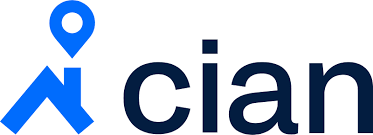

In [29]:
from IPython import display 
from base64 import b64decode 

base64_data="iVBORw0KGgoAAAANSUhEUgAAAXUAAACHCAMAAADeDjlcAAAA0lBMVEX///8DHUAAbP0AADEAav0AEjoAADKutL2zucJTYHYAGz8AY/36/f8AFjwAZf0AEDre4uYwgP0AADUAACi/w8oAAC3w8fIAYf05SWMAACsADDizzf/2+f+fprKVmaJKU2dfaXpyfIzp7O/E2f6Jsv6oxv7p8v8Ab/3U2N7LztSKk6Hf6/9uoP4ieP2bvv7P4f5dmP0tOlV7qf1/h5VJVmzj7f5Ljf0OKEpmcIG40v4cME9WlP2OlaIAACAAV/05h/2Rt/55o/4nfP0yPlc8TGUAABOrW/nqAAAQRElEQVR4nO2de2OaShPGNeAakYtBQSEhVXPTXJoabfQYe5JWz/f/Sq+XJO7sHUHta3j+ayGw/lhmZ2dnh1wusa4vvt+/vJ4831+ePprJL5dJrru3k3rd1peyy3X7/mLfLTp83f2ol/UjTLpdf824b1Vnv237iJJef3ncd8sOWBcPtk5Dn8vWv++7bQeryzqb+aK7l5/P9t28w9R9ncd82d1PMuxb0G8h9Dn2h8yJTF3fJdDn2J/33caD04UU+tFR/XLfrTwwmX+4AymOPXPcU9VlmQA8n5aWKTdSP9l3Ow9K10fkfPTk6fvV5QsxTz0qZ257inoCM1Jbf7p+P3AK50165sekp+sbHK39co0dewPY6//srZEHp1PcgbF/wINXOHb9ZT8tPET9wLm+kkbkEjM/+tE18wqZYsvEx9LyHXX8FTucOY9p6Q4zMPY9ffwCcyvtbKaUkk4xqnVWJB0bbFlPJdMmelsbbl1nnfAbO+F11607VF3KoF6tX4bMY09L2ByJ7RliJki/yainI9yAMKO5WV/fgnAL88A6ATf8fzLq6eg77sOwoD6vfZhsNE1L/2D+evmUPn6GxQTs37tv32HqGqOu/6GP4yEB+23nzTtQmQ94ROCKPPzzKIsIbEP3eHxLJ2an5jMeG3vI8jPSEliq1m9Adz57xlc8soBAejp7AAtGNrZO9/gAlpkyA5Oi3sBitV5+uFqG0c2LF5iEl/mNaQp29gX3+sPzy4lNJj5mC3ip6orMzDha7hog/s/O1u/S1bNCFpKu/9x3Mw9Md1THplWnXPlMCXUlTXQsZ15j+vrB2BsDjHrmv2xDJ0Ls+5iVFs+BjnfegB0IZoCR0MlAwS5U8lxMQWv3LdiBHvkjqm4zIsBbV9PJYwoPk3rutMzDXn7bR3u+BnUiMoCNpD/kf7sFfRHquR9M7Kyljl3oq1BnOjK6vqeg+pehfkY7Mnp5X/vZvwz13B21G2l/gYCvQx1kDCyh7y+L9wtRz70B7HtyX5b6StRz95gjo//Z4/L0l6Kee/10ZPSjfYbUvxb1zwU9vbzX1emmW8CEDpz65xpHfb+7evvfgG732pgdaOXIlJ/23Y4vpkXhkqw0yc51X86y6/agV8bO00zb1nWWXJcpU6b/M5k72kxmbuVGu2p9WvK7x/3SrDHt9aaNWal1Xuv427iN2alNRoOP+wyarajbTum6/dK32bQ3nV90UkvlmttWrd/Iu1pYsN5VCOf/ys/Ou7K/6zUw9WqS0yvRYIg0F7tPIUTI6vVlfzhXC7vRNCIOFkv5UEOF1XULjousRvSXg681PS20DCNPyLBcz5gIG38cWJiCouhcM+oFboG6y+I+c2KtjqSVJbS+EerjRyp9VyOvO297dSDrMyLdbXV5zo+GnkOT+Gy9G7Qq/L8+1vCTNQH19q2rWYL7hEFD3OFLhfXZzgi7cCtAjEc5V6FaEjRdrLM/+harGxXzIhZLhe4t18KrUjfPXZeNZi0rEELCqVuDz/+O3JB/SccVvn0CvdjkHnXzlNDG+zM6A0/GYi4DDXndUJF6d6op3CcfOgJIOHVj/E7El/wAw2tt5NQ8lakdGGflehlXfdN6DVEosC24LK3PvoIa9QgVeFcmIXHukyOou6tf3BkLOvpKaLoBnFXSehmsR58R2Y76yWbUR0od8B1ok3kJJeox7jPvm7zW4tTz1aXN6xoKTzNsxKZz8b7bC+RepEPdnHEGIbbQgHUTFerNGA83n+f2dkA9WHg8XVc2JC3ljjhX5OlnmbVQlwp1vyd9OaFQk3EVBeojjXdFpgyPY6YAdW8+0FTUoM9PJr17sbDtjvrNelE6FeqNmNDnTBkvv5z6bcAgay0mRwjNZ0uMgw7bkwHUUZTzx4rQ57eL5UDiW9WxBIw0qDcRq3lOiDwv8DQ0nzTRhxm9UEq9G5AXMkLPajRbt3O1Sj2XHmjDJrPFgLp7nivBbmPM56SMmd7qinFszBNI3107MilQjzwaeRgMm/1it1PpHkf9mUf710ZIzVNl1M0h0SENZLRq7c/2+pXoW0D2WY85pwTUw0kRe4cs5KHhdDBojDUvZIFHsonvWt+JnOn6x8p0cuodCqmBwj4Id1UmFvU60L1QRv2WuEYYnlMzrtqUOKkwIE9ZCFC3SsPPXxBWp5Ou75tmzvT9bt9hDN7qnf2C2pbxkYWRmLo5JV9ry+tTNMyJR/bCKtkLJdR9oudpTWZUp0+YoSqrawLq+U8L6HhExMKMHHoW4imGwhibej8cmcTUJ6RbURgyX+rKlBhyrSlxhoT6xIW/necVnsP+GbLOK7F8c8Mr0dEKc0C9pUjNjSGrNazwHi2Xp5NSbw+JdzCccgItJjFkLT02XGLqJrwR4k88W+A+RoFxCou65bJptqhuxTRalF6ZW0tXjkxS6qSxdXr8v585wtaLqdfAjQoNfpOIUZdlYhjUrZAXy22Rvd3j33ut37xNXwtHJiF1Pw+7ujUUGD0fOmNGCI2omDrswZrIkSgCTIjh+NPUDS70+cSbOJvtF0HxP0i1SLFLSL0IXz+DtBpQtSo424WpjELqZg/vwI7YjwBeFetcirohCud3ic7Oeo6E/uHuKl06Mgmpz6BnIkvEHUDfAY6nQuodMJYG4t4G3gtrTJ9AURe7gzDHmz1AA4lrktQfc4mod2DnNQyJU0Wc7wI7IaRe9DDzZIzFi9/gSoZFn0BSlzS8C9/oQlP8K3PXLPcFY2w/3iShTnhzrjT7Gb4b0AcTUr+d+xia66zm6RIDk2vjD5cxC6aouxPh9UwYprEEQ/nydLb7gkF+SER9ClqjEBmKgIl0mvgxib9e6dYmzdnY8VAoWK9YCRh2lx55CepGQfKOQhNjMGwWLp77glEm3oVY1NvQYBRK8r/Q8N/qDnFLobSq4Vc6Ub8kG87woddw6UGAoA6fPkMRMZ4KT35T+LQj+RTiUIecVMZ2c2VirND1gmGpH8WmriYYyZVS12QpNKQXIzqX3EuaOvUJaAwvmA3U0pAWaL3Wea1NjogpUh/hFgHRTCF1w5P95i4R4ROceifwGdOhDqcPVk/hT4qzSZEzw0mReh93HaXUWb4lVIcIZvDPFBY7Soc67AEyz0KmdKi3u8fReQMf5aXU5Q2vEJFH7olS9yU5dR/mj3CiR8ramLrp+wvWk1apVwgWq1dwEVRK3T2X3UGZ+r3UfUlMvUMMpgppnSLFpu63K7XottWcDd3qnPVi6ZS5+COjLvcCVKnz6hylSb0GMLE8tFiKQ92s1PqlXhh4c9YOk/U+qPNreqVInXAcw43TL1mXE1D3j0dTx+P07A2oy18rNeobuS8JqRtOwp0BqnmOIwPJuvdeqJOBRAyqbIiNQ71IuOu7oF4be06c9K8dUj/hlgy85Efb41OH82SjkHAbjwL1yoBKvfhrqHNr8C5WjyShmQTUna1TnwSKecN7oH7J46qfLFZKn8UFeje3MOGWLYw5oNOdWDKsQjx/PQ3qXPdFv1llBQhD7kl8mIRbpmT5MGSCEcU6REjzAjSclgax5qYpUOeW3/1M5RUuL/29nuOAmcJqWM6SddUdD1qTqNht+74JL7UD6vzoyzptXbSU+tfOkvpUTzcc5FXdxmgSHXcrsNXF3VI3/3ChYzV3yKzHDakTEQFplFoiIfUaadMtlC8VO5zG7pj6i8h9WeuJiz0O9fbuol8mXCvMG1qvKGgo8K62Tv2S542TJQO5jkysr/fCl166DiaRiPox7OqWFQmbGeGr6Numzv1GCb47Yym+IxOn9noPLp2rrGr4o9tah+3siKgTiTRjycAdb1UjGfULqujuB3Sbqrnzk+vI1NW/M0DkcapsHqlUXc8dz0bnNcomC6i3vXg3mu7Oc1RxX9a6IL+/9vmI6sq1qOA0Ka8pfIBkaXHn7p6rhcPpKMLxCahH8JBsAPFBDvtWqZ9x3Zcys+Ix3xwdqe56r8DMDEeemYH/3jn7X/gSqoA6TKEjE98pwezLrVJXdF/W4joy6n4MDLgaeens1AdLrTBzTkAdrINKErXI07dKXeC+8Bjyn5NqZWpo2PNIugBJ5H6Bl0NAHTwrRn4LVBdukNwi9U3sxZkgIixrx0rE3MWSZH3mcuPN8hwBxlC2CQ46PFuk/sgdG21BRRhuREYvqzkyJrGmgyQvP9wkSWwb4FM3wfjByFsEInLqt0f9mu8HCj/Y8Mh9Q0QPCxNhYgwk9OlMmEBT+AaO8qn7kLrYwlSI7SNbo853X2QfbOAbJrXyPRWiXxWE/gWxH4z4tQILA6iLHVR6J+a2qHPn9/Jhke/IPMj+dKkREX8NBRvUbontNHk4CgiogzFYuK/CnFEB4S1RT+QCxnY4oaid1ajEu2dEvBekByigDgbhz+JFDPkDuI9he9S5C9D6jYKVEDgySvXYqX2BboNt2ydECRnDJRweAXWYtc/fZsusZ8SIQCenzo++1JVGxDtuIKGs8umkNlVbwrHo/f25SoncLKuR/o6AOtyJY+TZXox5y6zywkjtSkw9eRgrTtCMIdJwLDyZ8QT2906rQK7u0+nLAurEvMcas7AXx+yCTIwIdGLqrzyjrv69Ka4jYytVwmcsaBpu2Osfd9vmIiGx2B+7VM0Pg97yLKBObGfPW1SBwvb5EH12dGI3cYEyeYmpm89s7HG+N/XExm6fKHmPpsF6r61Q84KgGngeChnHPTp4IIqvk6umBqo2ix8w27XJuIqN6kYerGrkLaqYYQqj6W/W4rP9GicniOnIlH8oXkK5aNZabpO+jIh6hbFWrQVefjwdW0FVQ7ByQK0LIxWGZwxGeM3XNDzHK9ow6w+xapQyFrn1GF/EUywQt1Y4YwRshKvVlKu0pGlYjEJRXp/cHLiwMo6XMvXcxRG5fzHu175/ko6Mbsf59mPXUixtuRKasULCQurtvOqD1eaTKJMunAwSR9KJw9z9gSYixircux7h+6LfxHtsCoU/MegDZmhSUqlEsaigtpy5NumESDxollLMEY6pm3wuEzgyiuMoprZiEuJcVc6MXlYLSekG3mg5GDEqwOEBztRWNZ7Wsd7NPpeJJaXWVcdRXJGoCPhaDq+ypTS7tM+o5kjICt6nXj5ZD29L1Ndjqn0Si9anPhKw9TjJGZjaJSRN6HcQu0baQtJM6luqYhshtC45ViTrS4NaASnmCFysRkSl6AtL746MbsceFD7UbTpIAMYI3ZIgNi7PX6/1ROWAHTTCxosWURTQsLCDaebD3C0+uR7bfVnreuEK2THHUaJ5/XHAmhQtkGuFkXAVqPgLYfrFQmFOhpzC+gZym+CJmi34ZhgGZjVTzf0yX+qqa29MPZb18mvCjxH43X4v0BC+Qc4ohCgYjoqSDIJKBMR+Qn7UqFLv06JUap+a9h8PPQxuwcUOzX5VMf0npw7Or1aJw5f/vsmuINLpv/cpfCPIrBQnzZ5bDZaqesNBv1hJ4brv6swfq4eQs5ghWY6LvGq+32Vd3iyW3OVWa6R51QYeHvah5G0j/oA8nPBrJal+7KRdWWgbX0ryu8XzVmk2bQxaUVH4PaNK7bgYFY9r6bbify99cJgMniogAAAAAElFTkSuQmCC" 

display.Image(b64decode(base64_data))

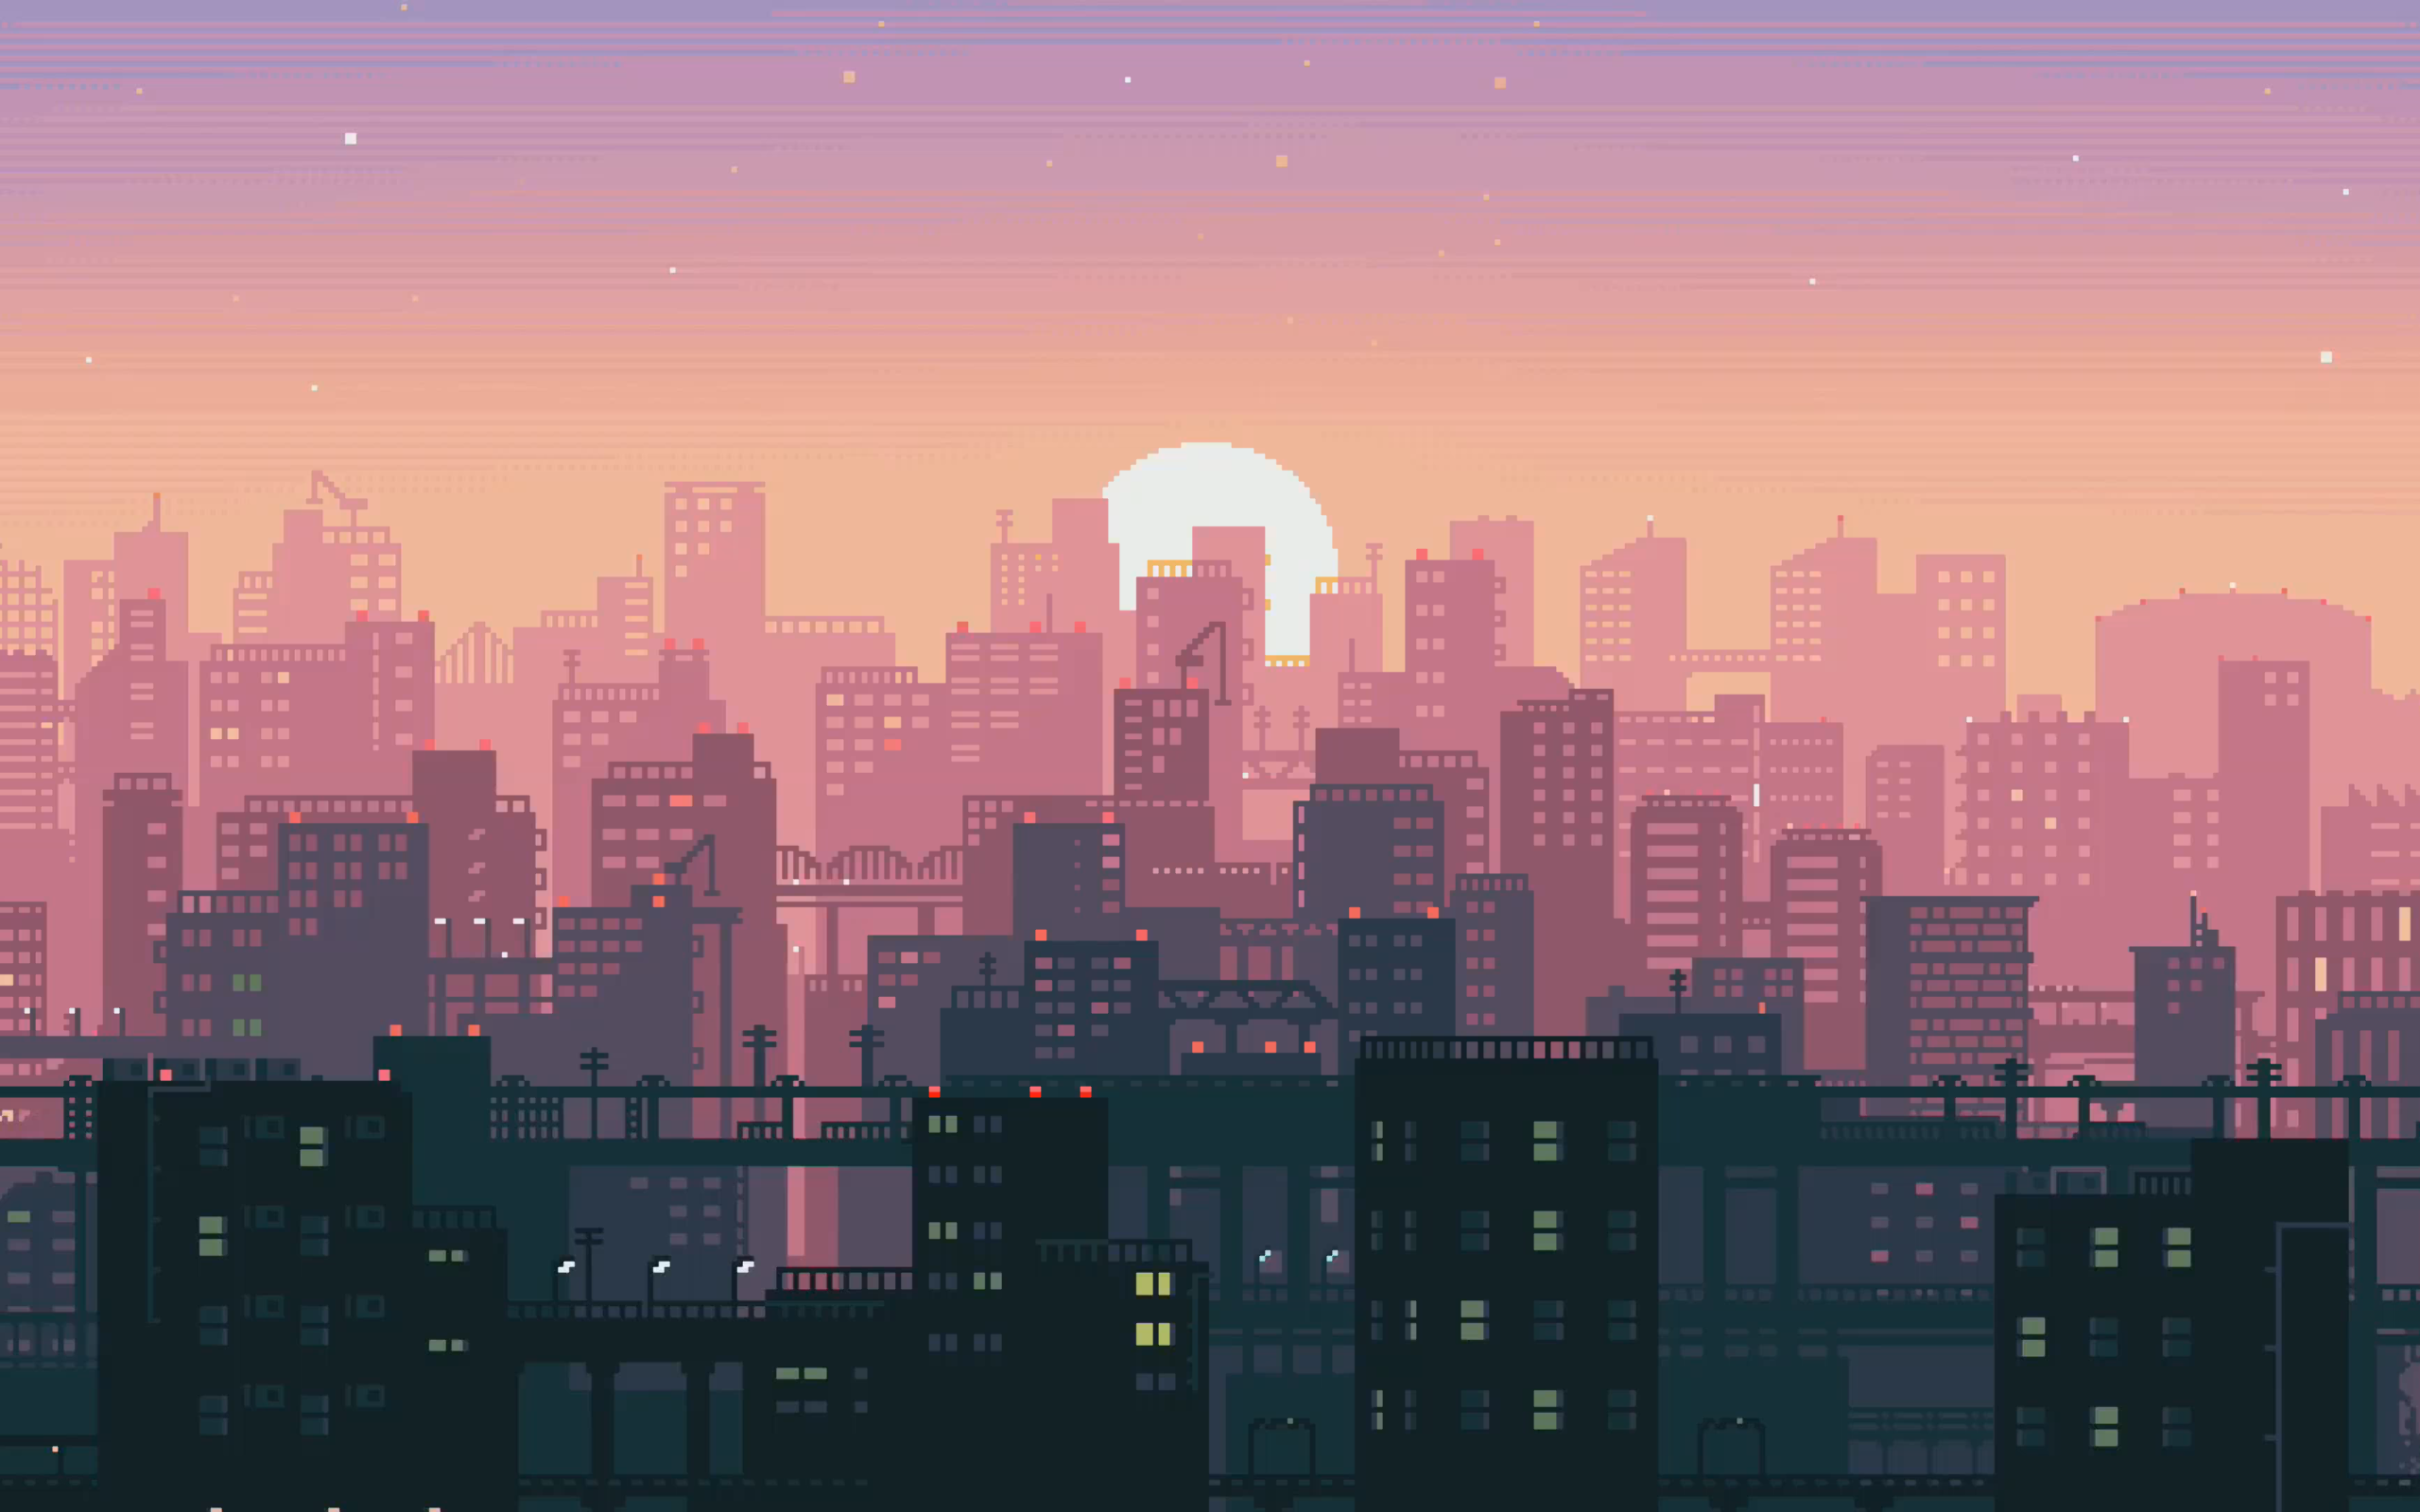

In [31]:
from IPython import display 
from base64 import b64decode 

base64_data="iVBORw0KGgoAAAANSUhEUgAACgAAAAZACAYAAAC1rBvAAAAgAElEQVR4Aey9aXPj2pKuV7/aYTvC/nzt6F3EDKpqV2ngpJkTCIDEyEmqvc/te467T3eE3dF9fXuK8K94HbkAkBQFVQElrSpxKz88ARJMLC4kHoIAkVx41zJiMJwDdoAdYAfYge92QE/RqswcHX2Jjr5CV1/gQpvhQpviXAvQNVJ09BRnRoxfjwJ8/hih9THB9Yclbn9d4+bTGhefFzj/NEf3Q4SW5Qu65hSX+iwnwIUeVabL34F8DMAOsAPswEE6cKZHqMN3f8exH6/cjwgtI6xERw9xo4boKyFulRDXaogrNcSlFqKdt3FmhDg2M07MEPS8Kh0jxKUeCehYpGdkdMwIp1bGiRXhs53RMiNcaGFlrrQINzlX+fvQ+3WNCG0z4yx/H3o/ev+iP1WmAy3CSM2gx30twq22XZ9inej96kLL9tUIgxxqu2i/WCeaXuf0tRkm2qQyrjaGrw1eDVN9CJnMjBH2CcwxQst5BM2v05f9dl/6eZ2+vLZYykVZjuvOo3Ze27pxf+R+Zg85v+Qr7UeeS53PCb1X2b6H5tdtR2buA22EUBtXZqqO4CtDwUQdw1HHGKsObnUP17qPK93HuTFDL+dcn6Iql9oUA2WKoZJNb9UpiCttiq6e0dGnaBkZ9Jh+h6nKjepjqHiCgeLhVs240jyc6xldw0PnO7nWPPTVjBvNAz0nevq2zZbp4cz0QNMLLRDHcHQc9y1u1AAjxcdY8TBStu9D63ChZZxrHrp6Ro/yrsXS6OkxOjXo6jHqUKft1xcboauH0mgZkfi9kX5zrEK7xnaiXPL5JueAHWAH2AF2gB1gB9gBdoAdYAdegwPvXkMnuA/8YWAH2AF24IAdqFz8R4WCTxcAdvQEbS1B20rx+UOE419jnH1McHW0EEWA50cpOh9itI8itOzgZQoA+Uc6/pGSi3vYAXbgIB2oU/xHsXycccDHGV/9jHIBIBcATvDWCgCpoGW/4JHmlRXMfE/xy37bL/m8rO8v2b7Mtqjvzy2CouUPOQcy88ttv54i5mJbFPuPsn3L98wr2qsyLfqwP62ybBFDyxaPZUy5ANADFwDWLxTkAsCvFUByASCfs/5Rz1l5vdhtdoAdYAfYAXaAHWAH2IEf5wAXAH71gtKP2xAsPeeaHWAHDtaBWgWAKdqbEQDnONdmONem6GkztFQaUWaOTnOO4w8hTn6N0P4Y49JOcG5E6BgzUfh3Zs1wZlEB4FRAIwBe6DPBpc4jAB6sR/x9zAVK7AA7UMMBLgDk46bs+65+ASCN/keI0f/UbAS+lxgBsKeHmxHsaMQ9OnYRxy9PjAB4ZkY418LK0AiANIoeQSPl0SiABI30VzYCIBUGVh0Vmfo7VCOMc+hxMQogvS+1c56PNtgRx2R0XBaBRjesQtE+jTBIowAWIwDStFiP3b4OtBlcjQr7quLA16go7nUw1WmEN3nUWc+6/aC2PXUgjTp9f42xM32M5/Ia14v79Dr2Ha9xO9Tdh5TF03rRfsVXh5X42j6oahsiTqORHeXtiwMx+p+DUKvGVKERADOyEQAdODQCoObjRp/imkbl02c4NwKc579v0LQKV9oMIyVjqMzQVzOu1Rm6ekZHn6FFv6kYM9Dj7G4M1aY36hRjMYqej4Hio69mXGs+zmnkQt1H1/DR+U6utG2bN5oPapfmUZvtnFPTR0GPfvepOIrylRZgoNIIgL4YCZD6fqtm73Gu+ehR3/Xt+9DoiHVG3KsbW3dUOWr/9Y3UJ6dPXT0CjdgtCx4BkM8f+fdSdoAdYAfYAXaAHWAH2AF24C04wAWANS40vgUheB15x8cOsAO1HahZANjSFyDaeoquHgg6eoAW/dhnpmjbMX41hjhtTtBpZrfCuVRd0G1ZLmkUQCNAizAz6Pn2NjlcAFh7+/H3IBddsQPswAE6wAWAfLySfd/VKwC8VLe3/qULx1SA19OyWwjTrX5Pn3EL4HM9xFiJBFTkVtzOlgrn6Ha/BN2at7gF8KlZb5STWzWC28igQrqiGJAK54pb8hbvQe9DhXnFbYi/NaVCRUeJ4DUy6HGxLlS8VyxPhYbFutDtjI/talD/qO/U/kTZ3gqYbvtbtEd9/pRzYQSYKV5lpqoLX3VeDVNtAlnMdBeB4WFWhu6CXt+nTl+yZT3MdAkYHqa6Ky03ddbze2J9bQJffQEk+vE968XLyPu8/hFym3n//P3rVHu8b9rfVz18/tQ+qF47MrdBoHkI1epMlQl8xRG4ygQTxYWjuKCi974W4FajPxKEoML7q7y4reofBa7VEO77jEkjxCinr2z/aEC3VqVjHaJNhf1aUpm+EsF/PxNMGjOMcm7UbYGi+MNmXmBYFBpWnV5RwSIVLiozXGszUEEjQcufmjOcmDP8as3w0Z7hVzvAiRls1qVYp6embSNAXw1AhZEDZQbqMxVGUgHkmblt/7M1wydrhs9mgM9mjGNJnBr1bulLBYN1fuOhYsG6RYmvJb4jRm3Pjstbhowp3wK4jkscW++zx/nifLED7AA7wA6wA+wAO8AOvBYHuADwAC94vhZ5uB+8I2MH2AHhwLMKAMNtAaARo2Ol6NDFZGuM7qcpxp0lku6fkHb/hOT8vyG8/Dvc/rpC14rRMkNB29wpADS4AJA/l/y5ZAfYgbfgABcAsueZ59ULAGmUPyr6o5H/CBkFgFQ4R1CBHhW3EVSgt1vk9r0FgFTwVxToUXEeFRkSVKD3UgWAfiMCQUV6RRFgUQBI71EUANLohVT8V6zLt6ZUjEgFgNS2u9N3Gv2PCv+IYyvCRzujZwQIFK8yM4UKAF+gMOuF2qBCl59BWQ7q9oMK/+ouUye+rI+HNM9THDyXQ1pf7uvr2a/8zG3xXOfrLk/r+tR+pU5bT7XxUvMDUfznI1Sr8bAA0M0LAD0MtAB9LRTQcYMY5ZeOH2qMElwUAHp5EeC4EYIYfLUAMMW5Vo2BEmP6PhC47wOMGxk3Ko1WmLH5o2bxh80a0ys1QF/JuFYD0Kh9BP3xk4r9iF+tAB/sAB/tAMdmiJOKUCFZVgAYYKAEoD7Te1xoAU7zto/z9uk9frVCfDJjaZzVLQA0YtAyVeECwKcLB88MLgB8C78T8Dry7wTsADvADrAD7AA7wA6wA2/dAS4A5ALAWv8kfOsfGF5//tJgB0ocqF0AOEdLn+NMn6Od396DRgJsm1QAmKBtR2g1xxifz7Ge/AV/7/0Ff/X+jL/4/4j/Ov2/EV78hptfA5yZoYAKALtGBt0uZ/cWct963OXvAP4OYAfYAXbgIB3gAsCS7+M36XKNAkA9xAUV/uXFfzTyH9HVstFwaPS/54wASCPP0Ch9grzwrxidjwrmCBr1ryiWo+MYGo2nKpdaiBEVF+YFdEWBIY3OV9yWlwr0iveigr1i5L4q01ttO+qfuAVwXmBYrAO1VxQyto2saI9GAawCvb/TyKD+F3midSj6e2JuRwCkC/Ku6lXGUT2MNfcV4cHR5TDWytd1pLoYKpNHjNRJrb5QHmkZebym7VSvL5STshzXnUftvC5f6+WB+/628lXX76fjHQwbDxk0HDxF2T6I2n4qvmw+xWf7TNpvvjwTzYerTiszVmj/6ggGqouB6gmuRbEbjfxHf06gkfkyOvkxCh2nfAsaOY1G6Rso2fRGiUBcqhE6Wg4V3dP3N32f6zF6WlqZSy3eFP1REd1tDhXuPbirQ42iP3FXhzye2imgwrxzQt8W/1EB4CdRnJcV6FHxX3Hc9q0p/eZ0q2aFf1T8d6llxX+iAHCnwPATvYcY/S/EZyOWRt0RAGlb1eGQCwBpZEraXrLgAkA+f+Tf9NkBdoAdYAfYAXaAHWAH2IG34AAXAL7JC2X84X4LH25eR/b8hzlQtwDQSESxCf2D+cSIQT+A0g9xbTNEx4rQtac4t3oIL2f4sz/HP/kd/Pegh38Kh/jLLEHUvcbNh/PNP8FPxY+/CU6NBG0j5gJA/l47yGKmH/Z5ZT/Yjz+IA3ULAGXG8+f35x1zndHt7PSgEi09wC7Fcqd0gdkIcLwHzStiqkxp+U8mjRoT4jNhbaGRavZHq6ERaaoW/+3etm9zi7v8jxD0vLhNWif/YwVNe/r2tn/fuoUgFULSBfSibWqvaLez037xxw3RPhVQ5u/zrSkVL17QaDs0UtAeXS0A0dECtOkPIWI7zdDR/cq09CnOjFkNArTMA4W8LFtXfYazMuh2jDXW9eyp9svek27NqBPTyog+PtFW6Xq9ptiy/H7vvNe0XtwXMcpYnc/Jm4kV+wPa58hihlNtWk7ZfuWp2K/NF/uoYl/1stMWfW9pYUUCnGkeTvVJji/2myf6FCd6gGM9FHzSYxQcqxFOKvJZi/DBTPAx51cjAfHRSPAp57ORoOBUT9DWqnOiU0FctOFYj0Cc7HBKBYbfCbVTtH9iRDjOocdFm3QsT49pKgrERP5pG3wdOsYo2qd2qU1B3lZZ+y0tgizaRUFmxWlXi9BTq7Mp+KzY/muKp0LXCyWQBhUYVh1JkeLo9stUUFkVPif8eeeEnHvOPTvADrAD7AA7wA6wA+wAO7B1gAsA/yAXQVnqrdScC84FO/CDHahdAJj1rygALIoAu3YMomNM0DPaiK+m+Is/wz+5n/D/Bif45/ASf5nOELQ7uLQ7mwJAGjHmxEgFbSPhAkD+XuMCL3aAHWAHfrgDbTMB86NzQMcT2+K3Oo+LQjeaUuHbCbF/K7mdIrgqbdPyxS1safop5/PeKHnFLW9pNL0qI/MVMRS/O9pe0Q6NoEcj/xE0EmBxO+Cent1++FujIdPr53RBtKx9Mxv1T7SfjzQo2s+XqdK2aL/CbQzFaIz5iIhtfYaWMa3MqTF7vP32t+fe8yJ/hzYVox7lt02u0vfviX/0WdjL3e7rVPi6+/xbj+vGf6s9fr1k3/WV7cX5ejpfVT5PHLO9bftL5IJ83C++P6Tnp+JPCFlBWpU/mpwYPo4NN2eKY2Mm+GzQiHNZARwV61HhHk2PtRgnFfmsJ2haKZp2KqZHVooPVoqPZopPOxybKYhTI0VHr84J9cuKM3Zuj0sj5dHvOcVvOnWKq3ZjqZ3itrufzRjHOdmfRbe3vxW/9ekR6I8IVf9EQcWClN9H7W/+jJq1v/kdsUbBV9XCsP24rh6jKj0txkVFzrUYXaJG+68plka/vFJDadBImbvefesxFwD+4N+W+TeMH/4bxma/x7nn3LMD7AA7wA6wA+wAO/CHcoALAFnoP5TQfOLCJ+fswE9woFYBYDb6H20n+rGNfig+ph9ezRi9JhUO0Og8Y5ybLaTXU/xfnod/dj/i34IT/Etwjr94U4TtLi7t7vZio2gjxbGRosUFgLxP5+91doAdYAd+sANc+PejC/9236/6LYBbZohd6Ba8BI0kXFYUQ/NFfMUiw93b+9Jtfo9zTuzygom2Va8AsEvFeNZjqJ0OFf+ZESimKAA8NyJcVIRiz6wtu+9D7W4KDIv3MCPQMkVxYqWpHn1zxMDiYn6Hbglo0sh1FaFCzvwWy1WmZ1aMQ6VlJ2jZKbIpPf4Wae11rZLDIubMSmq1L24/WWNbFe/D0+wW4pwHOXk41P3BH6Hf9DvAodKiP38YaUUSnJkznJo+Ts0p6Fb34k4G4jiEcpAITsw5iGNzLor0zvQUVTgxU3y05xnWHL/u8Nmcg6A2C87MBB29Oi2DCgeTR1BhIN2JgTh7Bidmgs85xfvQvPI2Y7TFnxJC0CjF3yYSBYX77dP7iLwX/af3E+8p9zc1umtFHeoW6FGxYZ32X1Ms/ZHlW6NWP+d1LgCU6zb/Hs/5ZQfYAXaAHWAH2AF2gB1gB16HA1wA+IMvELL4r0N83g68HdiBF3SgZgEg3e43G3EnEj/y0j/Sj60EnWaIljVDxxxh+KGN9Y2Lf/Qn+M/ZJ/x/wWf866yHv3OmWHQuMTy62vzT/Jj+IZ//q51+IK46Gg3Fdfk7gAuF2AF2gB04SAc6VorXRNeeg/nxOejQ8YMVV6JNRV92jNMSaP4+LRqVuGLbFEftd+xkQ9tOUNBqJtiHYs+t6lyaCQouKixHMVUp+tGzEuxC87v2lt31E4VnJeu1v57iuShSi0E5beW5EvnayW+X/gyS0zEfb4/97bP7vEUemPPqWAt0D5SOtUDbmFemY9ZbV2q/Ti6pKORMSyrT0qlYpnr/OZZz9UMcEPsPcp/54Tmgfc6B0jNXOK9BVxwnhOjYRIQOHWfYMXrWHD1rmbNCz1qjZ63QMavTNpc4e4JTc4l9qHixZwTVESPKzdHV5+gac3RyXurzeUYFjyWcWHM8JsWpFaP6KJQUmz5q59ia4/Mu9hyfCSv7fYp+o3oNfLYSfLar8xr6/L19+GzFoJGzZUHFxt8a9W/3dR4B8AV/N+bfXA7yNxe+dsKfAXaAHWAH2AF2gB1gBw7TAS4A5BMQPgFhB9gBduB5DjyrADC7JQ39+7ptZwWAbWOIW/sE/sk5fr86x991/gv+2v0v+Nu2imXnEm7zEy60NhcAsrfP85bzx/ljBw7WARpxj4r/XlPBXa+5APPjc7BbnPatx1S8dkY0y3lUuJYX832r3d3Xe80URHeHTjNF++gxFHNhV+fSSnGdQ48v7YyvtVHEVJmWtXNup+gRO+tD/aZ1ahFHFdktFNwpkqRtssnfTlFj13pcMPlo++y02bZTdK1lLXr2CodKnXWtu4512i5if3jBEBdpcaHaCztQuMzTevvRl8jXeXONQ+XSvsOVfV+RO1w0U5wfxTkJzo/oeYqL5gqXzXXOHS6b97ho3qNn31Wma63RtlalnFkr7NO25jg3gxrEODcWGeYCvZzuC30WW9YCZyWc2guUIY7nSv68sfvngO3jpLQNavd4h8/NBQqO7RSvhmaKzzV4Nf3+nhw2E3xuxtI44QLAgz3/5wvPh3nhmbcbbzd2gB1gB9gBdoAdYAd+jgNcAMgXf/nkjx1gB9iB5zmgx2jpSUXoH7fhhuL2LjRtWXSrvZm4Nc6F0cXt0QXcD8eYmf8HAuv/RGD9glGzhyv1GF3tBuIWYkYkbiFc3M6FbkHTE7eYo9vMfRu6dQwfgPycAxDOO+edHWAHvtcBKgC8smLcmFF1rAg30ohxQ/1hXigHCW6siggHQtyY3+baDHFpVefKojZrOEZ9KHHs2opwZT+GYm/N6gzMCLv0zQjEU230zRCDilDsU9xSHvagdbq0a0LL5FyZEYjrPbbrUn070Ta9Nml/UIcEN+bhcmulqIxdI1a0Wy8vt1ZSvS9Wmn22Dzj3h+wN9/1ptyt/nh589ua4tZjn5qBvL3CoDO0lRjUYNBP0m2FOhH4zFgyaKYb2ImcJandgL2vn5caa47qEK2uOfeiYtW8GNQjRN9IMM0U/59ZMcfMCXFkpynj6DwxxjeMQit3+cWL3Mf3RoUD84UE8T3Bh1yHGhV2dcztGXXo0UmRF6rZdK95KcS4TO6m8nlXzsRt3YQa41GeVuDACcceQOrdgptspf+/5LS/HuWMH2AF2gB1gB9gBdoAdYAfeigNUlyCXd3QBTRYs6lsRldeTXWcH3rYDIVrGy9M2ZugYPto7tIwZiN0iwuc8zr5k2d+37S9vf97+7MBrduBUC3GmR4LinOXSjBBqY0TqqBKxNkKsjSUyQqwyL5ODCWLVq0SkeIgUtzqqi6gGseoio1p/tvHV3ydUXcgiUscv6uXDz9tY9DvQPFRC9RDsEaoenqZ6DrNt6lTaF+yuw8v4egCfe22MRHcYzgE78GIOTJDoHhLdZ56Zg1T3cdh4SHVXConuQjapTv2vQ7a9XoP7se4jkkSsT5HqQWUSfVprW8W6i0gqnrTcRPoUkRbKQw8Q6TNpxPQ9oA0rQeePt0aASyN+xIUeYZ9zPULHjNBmOAfsADvADrAD7AA7wA6wA+wAO/AVB2TUU+y3yQWA/O8s/ncaO8AOsAPPdODli/92v6yeU+D3rWW5AJALn15z4RP3jf1kB2LsFwDSrX9pJDcq5EnUYWVSbQRZ1OkHx35jmykOEsWtwQSJIo9UdVGHOn2JlQkiVR5U4CbPNyq+pb7XLdSrFk/FlHVymShjiev6DWdr7IfkbY+v91HWvo/blfe9wrl9zbkdI9VchnOAVJsg1ZwDhfp+uB4nmotYEonmY67NauDXciDRHMRSkZebWPMRq4E8tACxNpVGqo0x1waVSLUhBjRaIBcA8sXbr1y85YJPLnplB9gBdoAdYAfYAXaAHajrwG79g6zHXADIhT/PLPzhi/N8cZ4dYAe4AJAd4P0AO8AOsANyHCgrALwxIsTqGKkyqoY6xlwiaZ2+VO3zm42bIFW8GrhIFVpGBi7mag2Uen2hArdYlUdCXqojaWR9L0ZJfNlpQoWXtbcp7ROYRzkQHpALDOeAHSh3wEGq1oG+b2gfxbz5HKiTmu7U8Ux27GF7TMcJuyMvv+RjanuuTmtAfxapvr0S1UEsFTq2lPUeE8SKLw+VCgzlbdu5OsFCHVWCigWHesgFgFz8xgWQ7AA7wA6wA+wAO8AOsAPswIs6IKvob7ddLgDkAkAuAGQH2AF24JkOcAEgF/7IKfzhvHJe2QF24KkCwLThYdFwK7NUPMhioVTvR50+v81Y2q5+Dep5UDendZ2p0/68Ibd4ZK5MsJCIzMKPOX2mavWdPoN1vHlLsR7m7xnOATvwdQd8zN9PK0KxLubvJ8xbz0HDwfyQOeDtlzQmkEXamFQ+v8iO+ya1PEgbDhKpDJE0BpKgtkcSkdn3ARaKg5XiVoLO77gAkEdzqTuaC8ezM+wAO8AOsAPsADvADrAD33Jgt1BP1mMuAOTCn2cW/vCFaS5OYAfYAS4AZAd4P8AOsAPsgBwHDqIAsEYhYp0CsbcZywWAL1VYxwWAb6nI7+vrmv7iguEcsANPOeAh/cWvyQTpLw7z1nPw3kH6fnygHLa/yXsHsSSS7yiMrONB8n6MWCpDxO/7khggfk/ty4Lal9X3PhcA8sgtLzpyy7cu7PLrfPGfHWAH2AF2gB1gB9gBdqDMAVlFf7vtPigALC5cts0EdSmW3Z/WbYfj6+eec8Y5YwfYgZ/nQPzkDyi7XzbPeXxmhCijZUZ4LmdGxEXQXAjPDrAD7MArdeBMj7BbAEjnGeL7zkrgqj68GvjaFLKo0w+O/fp2y7bRDL72GE+d4jHUnicFX/Xga34t6vbF1TzIwtM8yKRuvyeqh6q4qgtPndSAHCjzg+d5ig/3rdF4oXV+qXb+iPl/Lbmp0o9KMVO4jVlFKNaD23CZt54DxYWrTA6Uw/bXUVzIg7Ypbdtq0LEfHbeUUtLG5MX6PvlKDhw4igzoPWVCfR5Lw1MmmKpeJeicrWdEuNAfc66FeIQeom3I/XP0c35X5WV527AD7AA7wA6wA+wAO8AOsAOvx4EzPYAMim38rmvP0bFSceGzuMi2ubhWsRCQltuH2qB2Gc4BO8AOsAN/bAe6doIyqLK9+LJ5zvSp4r+2FeO5tIzH31/732f8nHPEDrAD7MArc8CIcGKGzB8wB2dWhDP7MacWbe+ghBlOzKkUTs0pTq1ZLer25dicoiqibWuGk6qU5qssh987r3rfaR0/G35ljg0Px4ZbAx/HxuxVcGKQk9+bU16Oc8cO/BQH9BjHelKRGMdGwHAOXsV3zvO++w7b489GABlkOaXjimqcmHSsGD7mK8cCx2YAecQ4NlNJJDg2qX1ZRDg2Q2mcGgFO9VllOlqAnlqNrhqgJekinowLg9ymnAuunFfOKzvADrAD7AA7wA6wA+zAtxw41WaQBb031WO8KwpzqGCvuLhZdyQpWnYfamt/Hj9/nCfOCeeEHWAHDt2BsuI/mlc2tG3deV8b4a9jJ3gubZP9O3T/uP/sMDvw9hyg0VtPLeaQc0AFnJ/12SPoAupTBYClF1drFujVLeg7swNUpW7blQv5dgr+Tu0AlbGCxxejyy5Qf9e8oHohojWrXOS4LYb0cWJ6NaAi0NdVOFXua0mBwHfln9vh/LIDL+YAFdMbCU6MtCIJ/wHhD/gHhO/7Y8nr+t6p/z14uH+mkVkkRoV5df7QcWxMS4tBaXuU7adO6E8tUklwYs0lkeLEovZlEePEiqRBBYBnNehqweOR/spG/9NC9LQQLf31jCjynD9h87K8HdkBdoAdYAfYAXaAHWAH2AF5DnyrQPC5r9O229wCmC6eUuFfMa1bBLgfzxdj397FWN7mvM3ZgbfpwFMFgB2LRoJ9Hl8b4a/bTPFcOhbfPnr/+5ufsxPsADvw2h1oUfG2lTAHnINTI8KxFjzijEYPtkoww/L5Fs0PpNC2QrTtetTty5kVoCotO0QtLPqcyOOMijUrE+CULoRX5Myc4cyc1iBAtgwt9/Op6wHHy/kMc145r9UcCNEyU5wZ82pQrJkwnAOcmfGBc7gen5oJZJFtVzquqIgR4kR/DP1h6anzlTMrgTwWOLNkMZfYb8pJDDEaOI0ILgH6g3HbqE5PD0tvAVx6W2A9b5feg+EcsAPsADvADrAD7AA7wA6wA+zAEw78iOLKd8VIfXShrxgNsO5Fv2K5/WnddjieLzizA+wAO3B4DjxVAPhS88tG+aPCv97R/Nl0m/PNd9/+dxg//2Pfupq3L29fduBwHehac5xbS+aAc9A15mhrySM6eoyuET2iZ8Y4t5ISaL48LuwEdajTl54Vo2tXp9dMUIdzeyHxM7JA105R51ivzp9CulaMnhnVIEDPmr4azu0ZGM4BO3AoDgTomSl65qIiS/TMNXrmHfPmc0AerA6Uw3a4Y95BFl2xTWmfUA06pu3oi0d0DTpXWT+iZ63RlcoKXWspCTr+SyRT/di4znE0xfboXMJMK3NhJLg04kpcGDHo+LXO8S7Hcr7YAXaAHWAH2AF2gB1gB9iBt+eA7D8MiREAd2/7SxdCu/ZcjARYpwinWI6WLaB5veaC4RywA+wAO/AHd+CpHwB7VKT3TL42wuBs7BgAACAASURBVN/5hwWeS6+5/d4qvr94yjlhB9gBduD1O3Bhr8Acbg4Gn/+E5Ob/ecQFnU+WFABS8d+FnZZQr0CvTjEfxV4208rUbfvcrlfQR8V/50dpdeyFtM/Iub2sdYz31LHik/NrF3WGr67g7qIZgOEcsAMH4IAd4Lz2HwvucG7dM28+B4+Lu8oKvl7vvMN0uGfdoysV2q70Z6NqXDbXSG//+RGDz3+LC/vuEef2HXpSWaFny6Le8V/93wPrHxvX+XMMnWdcWNW5slJcmUk1rAQ96cWRsosvuf0nz01420ou/GX32D12gB1gB9gBdoAdeFsOyCr8pOJCUQDY0kK09QjnZoShEWBkBhgaMwz0KW70AB0jzqF/4IeCCyPEVc61EaJvxhgaGfRYYCUYNhOMGM4BO8AOsAN/aAcGdoSBFT6G5suiGWHYjF+EgUX9ZzgH7AA7wA4cigNDK8bISpgDyMHQXGCXYrutzqf4e+/Lhr96axDR6Q36RvCIoRWhDDp3lUuIkVmVen0Z0nl3HawAIyusjhljJImhGWNgBjWZYWBWh36TqIzpY2h6rwgfI5PhHLADh+LA0KDfQ6tCv30mr4wUQ0MiZoqhNBIMTUlI304x6PtQCvlv7MVv7S8/lZRzWdtyt10jwUAq9Bmvuj+IkJwM8Ff3S85v+KubserOMDKTHeYYmXMMzTlGRj3qfb6312he3htqO5QMXZeqiBliWIOxEcMxo8pMzBB1GFkRHmFGGL0YVc9J8rg65w0cW/0ci3PFuWIH2AF2gB1gB9gBdoAdeIYDRT0FncuMjS10DYJeu7FCXNj0Z/dgjxADWkYQYWwSIa4sis3iaeTzlhniXUcLcK4HiJQx1o0+7pTBhkVjgBttiq4eoqvNcGn4uDI93BgeXM2Dr3qYqR7myhRLZYqFMkWiTRFrUyT6FHPTYzgH7AA7wA6wA+wAO8AOsAPsADvADrxBB1IjQKLFglSfYa57gr/vtPA/HF3wr04D/+b8jeBvT7pIdO8RqeGjjLk2wVx1DpKF6mApEWpfbm5GmKsM54AdYAfYgZ/rwFjqvj7VHMhlhFSTw1yT66asfhftyvaqeJ9DnMrNDX2m3Mr8+VMX/9Z/n6PgX/ua4K9np5vjvIVKx6ueYKl6WCnVWTZcLN5PauBg8V4mdfoiN5ZyU4e1OsGd5kiC2vZxp00fUWd7Px3rYqU4lcnW1cWdVhWZuZGVc25Xns+cW84tO8AOsAPsADvADrADMhxYaw4Wuiuujyx0D19UD78rHn6j80RjioXhIzZ8DGwX19ZEcEVT28XYcnGv+fiTNt3wu+qD2rm1XVDcheWhbUUvVADY8LFo+JgrPmLVR6T6iDW6SOMynAN2gB1gB9gBdoAdYAfYAXaAHWAH3qADcyNAqieCuRGKk1g6kf2HXgf/7lmC//A0/KfXEPz57Ly80M+kP5c9hk5wF9rkIFlqE6wkQu3LzY2DhTZmOAfsADvADvxUB2hfLHF/r08wl4qDuT6WwkKX/B0lqd+UD9F3mf2X2HdZ27NoV3puxOeJji+r8Zfjc/znSBX8x0jHf4xMwT+2WpvjvKVoy8dC87HSfKzVejxdFFZWSEiFYjIpe8+fM69uHu+0CdbqWBIO1qpXum3LigLrz6PiwqrFfC6oALAe1H9ZueF2ObfsADvADrAD7AA7wA6wA+xA5oCDueYi1bI/nd0rLn5ruPhCfxLT/bwA0MPAygoAr0wHl6YjivtGpos7KhhU/QfMNQ831kTEnJseaBTAzQiAoTLGQhlhqWbQ41QZ7YwAGODamOLG8NE3fLiqD0/1MVV9JA0f6ftsGjZ8EJFCIze4DOeAHWAH2AF2gB1gB9gBdoAdYAfYgTfpgI9EjwSpMcXccAX/cN7Dv/tNwX/4Bv7TVwV/bl2A4h4zw9wsgUYUpBPmA2ShuVhKRH5OJphr9KMFwzlgB9gBduDnOUD7Ynnfg6nuQi4OUl0Skr+fxMiIsvquy/1Mye67tG1a5FvqtqXPlF+ZP59c4D/GmuDfxwb+fWwL/qHT3RRyUhFtqnsCKiykgsDKqC6WtZlgqcrge/oib5mV5qEWOv35ZiwRFyttD50u5NXsZ+l6Ud+dyqzFulaPz/IywkpjOAfsADvADrAD7AA7wA6wA+yALAeW4g4IDhJtglSb4E6d4F7Jpov8uklkTDCwHNxYY1ybOdYYY9PBWnPxReDhi0bQ70ET3FoOrq0xLi0XvaIAsKeH8DQPkTpBrLkbAtXFlT7LbwEc4FafYqBPMdSnmKhTuOoUnjJF8N5D+EvG7BcPBM2LVJfhHLAD7AA7wA6wA+wAO8AOsAPsADvwVh2g80zBGLE+EPylfYb/MWnm6PjXiSL40+ceYm1aSqLPsE+kHu45Z6y4SCQSKbLPxSfi9wP6DYHhHLAD7AA78DMdkLe/D1UXcpkgVOUh00uZ/aa2D7nvh5yb7FpGdncjusPRt/jtUw//faQK/mWo41+GtuC/nZ0g0m4EoTZAqI0FkTpGUpN6t+GWc0vt7a2iZd8WvF779UYoHWNhjCRC7TsPoJErE3X4AgyQqP3KpNqg5npSPMM5YAfYAXaAHWAH2AF2gB1gB2Q6MDcGiI0RYoOuk2R3LaA/4yy1MVLTQWI6CM0xhtYIt9bwAWNrJP5kttYd3BkTAT1OjDEGeTyNGNgzgmwEwGcXAFLB39+4gtnfuJj+jYvZLy5CZcJwDtgBdoAdYAfYAXaAHWAH2AF2gB14ow7MGg6IQBkgUG4Ekfoe9x//d8GXj/8Lvnz8nwSRcoSg4T4iVDyUEVDb78cHSfB+jPAXeVD7cnMzwuw9wzlgB9gBduDnOiB3Xz99P4ZcRpi+l4fMbSOz39S2zL5T27L7L7N9ubmhz9SkMkHjCHdH/7Ng3fxfsW7+b4Kg8TeYNS5zbjBtDARBY4DwfXWixhCxMqrBALEikzp9kR9bp5gyVvqIGjcSofYfEr6/fTRvP6bac2qnet/D99e14qMGxV8xnAN2gB1gB9gBdoAdYAfYAXZAogNh4wqzBp0f3mLWuEX8yy2SX7JpqPQxU/rwlFtcaze4UK8f0FdvEL/vI33fx7wxENBjaucqj+8pfbTVaVYA2NVD9DUa1c+Dq/kCejxWffS0AJ2cc32GS32KK30qbg18o01xo04xaPiCYcPH8P2WkUJtMJwDdoAdYAfYAXaAHWAH2AF2gB1gB96aA0PFxW3OQHExUEeCkaZjrKoCR1UxUX8RjNUPGCreI0aKjzIGDReDxuRgGb53IIv+ewf9hkzG6DcYzgE7wA6wAz/XAZn7eQe3DdmMcduQh8xtI7Pf1PYh911+bhwMGtXJjoeq5pSOK71S+g0X+9Cx6Ej5RTBUfsFAUQR95Ry3ylBwowxwrTiCW4U+s1X7MkZfcTBQJzUYY6DKpE5f6sUO1Qlqobm14vuNIeQyQr/xmIEywkAZPxNqozp9pe66DtBvMJwDdoAdYAfYAXaAHWAH2AF2QLYDN40Rrhtj3DTGGLzf0lfGuFHGuFLGaKkjwZk6REswwrkywqgxFowbDojR+zGGjTE6m3gXp1qYFQBSgd+FOsNlCd2dAsCWPsNZzokxw3HOqT4DQa91NIZzwA6wA+wAO8AOsAPsADvADrAD7MBbd4DODzfnjEaAMz2jrW//ZNbVQvTUSECPiz+fVZnunp8W56kHM9VmOFN8aZyqPk6k4uFEdRnOATvADrADP9UB2hfL3d8fqz6koPk41jwca64UTjTJ31GS+k35EH2X2X+JfZe1PXfbPdV9nNXgVPNQHWp7e8y6+/hUm2GfM22GlpojXp/iVJviRAvwWQsFn/QAH42Z4Fd9hk/atDKf9RnqMcVnXSZ1+1M9/tgIUJd6uanel+9r9zDzvl1Xmf3ntuV+Ljm/nF92gB1gB9gBdoAdYAcOxQE6P/ykh4LinHF/+qse4qMegqabWD0UxX1U4LfLibaN+WTE+GQu8I5G/yMutABXe1xqAej2wPR6Rw/RMgLBmRHgxNxyShdz8tc6eoAuwzlgB9gBdoAdYAfYAXaAHWAH2AF24E07QOePxXkjnTO2DDqnDNHOzzHpPLOnRTjXYgE9Ls5Pq0ypkLA4Rz20adsI0ZVIh/JsyiJA25wxnAN2gB1gB366A7Q/lrWvD9EyZRKgZc3kIXnbtEyJfbfkfsfK7rvU7UrOGNPK+x6K7VhBZdrm9ni1OG4tph0rxj5dM0Yvp2tG6FgZLSvGmZUKTuwEx81YcGJHOLWqc2KGqM72uLs4/pYzrdOnerHyclOvH9VzXrT7I3JfvJeM6Y/oP7+HnM8j55Xzyg6wA+wAO8AOsAPswKE4cGwGODYjHJsxjo2MEyPGLjQ/K+SjYr4Ynyk2jz8zYrT2OM3boZjPZoJfjRTvekaEcyPCpRHhwoj3yF7LYmL0jIyOSSexMU7FyWz2mJ7Tya048RVxCXoGwzlgB9gBdoAdYAfYAXaAHWAH2AF24C060DYTnFqB4MwK0bIiQceM0DPmgnNjgXN9KegZi8384vWvTTtmCnqPQ4RO1jtGIg35OYnRNiOGc8AOsAPswE91gPbF8r4HW2aCM5lYEc4k0ZK8Xah9WX2ndmX2X3bfpebFitC24srsF+x9+zkdW84f0bEWKCdF18roWAnaVio4sxagwj9R/Gen+NxMBMc0z4orQxeH6sSfWBQfSqJuX6qvZ7GOp3aCqhTL1JumOLFkQNuV8iMLyqWMfhdtUv8ZzgE7wA6wA+wAO8AOsAPsADsg04FjK8GxNcextdhwYi6wy7GZv5bPPzUXODMXaH0Fel1gJDjWY7y7sBIQPXuObgnnVipep5grcy64pBNhe45WzllzDqLdnOPcmuNCsMCFuWY4B+wAO8AOsAPsADvADrAD7AA7wA68QQfo/PKsGQpazQitZizo2kucW/eCC+sLLszfcujxfWW69h069vowsVZoG0tptIwlWqYs6EeHOcM5YAfYAXbgpztA+2NZ+/olTk2ZLHBqzqUi87tKdt/PJLpFbcvuv8z22/YSnRq0rQUqYy7Rse4f0TbvUM5q03bLWuDMWglOrDk+NeOcBL82U8EnO8FnqzrHdopaNLejDRajDr7cNKnXl5p9P2nOUZdaubGXOLZXEplLzM8Cx/adRNYS8yIz59y2XKc5v5xfdoAdYAfYAXaAHWAHXtYBOu6+x7H95UlO7C84szJa1hd0zC30vHitmO7GdM01ukaEd5d2CuK8OUevuXjERf46xVxZc1xbC1zRv97sBdrNjNbRAgQ9v7AXuBQscWmtcWndMZwDdoAdYAfYAXaAHWAH2AF2gB1gB96YA1QA2DqKcmK0jxJBr7nChf0lw/oNl9bvOfT4S2V69h26zcOk17wD9V8W8vOyQrfJcA7YAXaAHfi5Dqylfg92mndoS2ONdnMljY7k7yhqX2b/ZXolu+8y80Jtd4/W6ElCHD/ZX9Atodf8DY+53/Sle3SHztG9oPVhhZOP85wFjj8uBScfFjg9kkmK0w+SOEpxejSX2v+zD0tUpX4eVzg9upPEWmpeTo+o718kIisv3K485zi3nFt2gB1gB9gBdoAdYAcO04HfcHr0+9M0f0er+TvahP07uvbv6OVTei7mF6/vxZzb97hszvFuYk7hmFOMzVkp9BrFCIwpXGMmoPhhgTXD0JphZM4wKTACTIyI4RywA+wAO8AOsAPsADvADrAD7AA78AYdGFlTDHNGdL6YMzETPMBIMRHQ/KgyYzPA6IBxzACyoNyMLYZzwA6wA+zAtx2Yid9F6ffPDHo+g2PN4NhBTgjHJgJMrGlOHkNxD2JpmSKeppFgbEcY2/GWZoxxM8ZIkGDUzNjG78TScpv4beyomcKx55JIMbHjDY4do2BsJyiDXi+WKWJpWha7zUXWlmMn2GdiJdhlt539WHq+G+taCVwr3jCh10veo2hnN5YefzPensHNmdgzbCmcCTC2t5A7FL+Nyx5vHXsYO7GjTS6znD7d/yLnD6dPx5NjYzvMeejlyE6RscDI3rKNf+hlefwcrhU9YmJln4XC8WJaFkvzSuPz+fRaFUTbdghX5J+2wbeZmCEeIdZn69PGF9F2BNfO2N0Go2aALSFGzYxtLott8LVpgJFVFbo+45cysnyM7OkLMMPYrkZx3F99Ot2cK+wvU/aeFFM2/+l5lGfyXQYxxlZ1RlaEkVlOeTspxta8BgnGVh3ocy0jL9wm55UdYAfYAXaAHWAH2AF2gB3YOvDU7yMPf2NxrAQF9DsH/b5B02Le/jT7/SOBZ0XwrQDv5toAchhiro6ksdDGYDgH7AA7wA6wA+wAO8AOsAPsADvADrxWBxwstEl19DEW+rAyc72PVLs9SObaLWQjLzeU9wHDOWAH2IGDd4B+D11q11ipV1ip11iqNxnaLVZmf8PSHEJgDLDWbrDWrgUr/RYbNvGDLLZYxhxjaY6xMB3MzcmG1JqASCwXseUJUnMiYvfjaX55vI+lOX2MMcWqhKVREmuWx9Lyd8YE98ZYcGeMUbAyHKyMySPo9fL4x7HZ8h5WRsad4aGMe90DcadvY9dPxFJMEX+vu7jXJ4I73d20TcsW77k0tvmj+XXi740RfjNuBV+MW9zn3Jl9FOw6RDFFfBFL0yKWptv4Ae4MR+SftkGRF+rj0twl254r09+JfSp+u65L08XKHGYYo812XBoe5uYswwgxN2LBwvB34seb+MUT8Wvdx2/6+BH3+tahwiWafimJpeXJpd24zWPNwV1lxrjTB7jT+5KgtkevhrU2wEq9fcBao3Wnfj6fe2NYuZ06sdQ36mcd6q+PzO1Ennm40/zKrFUP+9RZ/uux1JcanxP6bL4ij7kvMl3lttkvdoAdYAfYAXaAHWAH/qgOiHNofYR3S2MEKegjLPUxlrojjbIfm3jeUz+q8Xx2gx1gB9gBdoAdYAfYAXaAHWAHfqQD7uYie3Gx/etTBytzXJmFMcTCGBwsS2MAWcjPC+V+xHAO2AF24MAdGGKt3+JOvxHQ47Xex9roY2X0scwp9qn0fPVEwWARS9MiPvueKvaVY6SGk2E6SHJic4LIdAWJOdnkc258Oz41PVBx1j6isE33sdynJJaWfSp+rTubopC1PkLBquS3Xpp3t1NEUsSun/xteIKl7gpWuov1E9xpLgh6/VvxotAvj7/TJtsCGH2yaZ/eq2iHCt6K3NH8TcFMhfg7Y4gv+o3gPvdHeGRk/uw7dK/flsZTXEHh3IoKTfUxKP/rnb6IHBguFoJt32k9stiH8atNLC2zGz/ZOf6g3++z3+6p3dSY5gRI9UhAy26PV3bjvdL4te7hizZ6BF1k2XqxfXyvP46l5Z+KX2tjrNWqjPKislusNRlQ0dqwFiuVivSqUbftsqK7Yl6d4rqnYpfKDapChYhPtfPU/P3ixeL5U+9ZvF5t2q+c96rbZxs3xEqZYKW4ldkv/iue12nj6VgHK2VUg6HE3FRzfZtLjudcsAPsADvADrAD7AA7wA6wA9/rAJ1DvpvrDuQxwVyXRfGDB0+zH344D5wHdoAdYAfYAXaAHWAH2AF2gB14TQ5sLzYXF9i/PqV4Kn6oRiqKI0ZIjcNkro8gC+k50R2kDOeAHWAHDt6BYuTZARb6AMscerx9PtzMX2p9zNVbpOqtmNJjYqH2saTRBMXyO/H6cONIok+Q6I5gd/8518ebmIU+2jyuEj/XXaw0b8NS81Cw0DzssxtLj4tYmu7HZs9dLDVnhzGWGkHzxlg9gEb9LYstltmPpwKuyRZtgnXOUptgHxpRuE489bEYhVj0V6eCwwkWNM3bX1AxYP6YCspK4x/0ZRtP26oY/XG5MxKkKDLT+1gJshEiad4djSqZx23ii4K0R/FUaEq53PZ19zGtw27fH8Zul1vR8vk678aL6wDGAHNCH2EhRmDO1j/VfQi0KebaTJDoXhb7lfgilqbrBx44Yl2ojzSfpgX0nHjozcPXi9hi+bXqYKmO691xiD630kZepjsrjSqTqvXumESjnNdpf0kDMuwP9kDb+AXuALUQebzBXK3GQuT8BnOtOql6jX0S5erRPIoR/ajR9lz0n1yQBd0Ji9z8NuR8WdxT88tivz6P+jKojrScyMo1tyvPY84t55YdYAfYAXaAHWAH2IFDdWCh07a7xbtInUAOLiJVHrHmgeEcsAPsADvADrAD7AA7wA6wA+wAO/BaHfARa9MaULxbmUhzEGrjgyTSxohUiUjNC+V9glBlOAfsADtw+A5EqiP2x7E6RqKOkKhDpNoIC3WEpWA7MtJCHSBSRggFQ8TKQJAogyfiR4g0N2eCWHMEiUrFHxkLdZy/zwgpfS/UiF8pDu4UV7DeGXlqobiYqxmp6qJgmcfSMlXii+VoWvSXpsudkaXWygh3ygg0nauTzXtt48cP4im24EvDAXHfoPXIoHXaLusg1TIWahb7tfhU3cYnGuU7O6agx0U7ov+iiIzWY7wZIYvml8XT+y4LHsSTJ4MNdDtpcUvpnduvrtUb3Kk3oCldQCjii9in46mw1MlzOXmQj01f1G3faT222+qJ+J2+L9QhYn0gSLTMd3Ke/Cu8WaguljlzbfxEPG2rzLPdeOrLJpc7/u3GkIvF6GVV4ovYpTJBrI4QqcOKDBBpfXnQPqHm8VyxH6gyrd/2GLE2ekT1fH0tr33E+k0NrhFpV5UJ1UuUQ21QWw+p1xfq961EKDfZZ6rSVBsgVG9LqbT8N9+L+lN3fetsW46t7x/njHPGDrAD7AA7wA6wA+wAOyDbgewc7F3QGEMeDoKGPEJlAoZzwA6wA+wAO8AOsAPsADvADrAD7MBrdMBFqHg1oHVwKjNTRpgpw8OkMUQgkVlDYl6o7cYIs8aY4RywA+zAgTtA+7JifzxA2OgjavQRN/pYKMMNS6UPYqFQTBZPU4rN4gebWFquiJ8rwwfF0kUxDxUbplS0pYwxV0abZakAqygqLQoTaZnkifiVMsa6MRGsGhMscxbKBOkOiTIBQcVTZfHzkthimWKaKs6mz4vGCMvGULBuDEGsGiNQzH78XBlvYld5LMXfNUa4fz/esG7QuoyxamxzQ/mhdScWyjb2Lo+leFH8lueS8lfEx6KwM/vTOz0u5tOoWdQWQYWMxXrQexV/kK8SP1cGSNS+IFX7KFgot5tbpK6Va6yVK9CURoosi1+WxK+Um71cFq5s+y76n28D2h5F3mm6dWsbv7uu1PeiKC7WaD2GWeGr8Cxzh5wgj4RLVHCXF9FViU92BhuI1cw96tdum+Ri4etu/O56PIgv3G5MENPnij6LVXmi0OqpAqx686kfRVHwz58GjQGCRv8RlXP11ZzeIlAualFe0PdUod9lrbapL/Xav0KoXstDuUGo3FYioNgyLysu/+33ofbrrCvl5untwq9xbtgBdoAdYAfYAXaAHWAH2IHX70BxjvTuVnEhFw+3ysvTVzz0VZ/hHLAD7AA7wA6wA+wAO8AOsAPsADvwKh2Yoq+Uc6tMsY84x1Nc9EsoO2e9UR0cKreqg1tlLI0bZYxrqUxwrTCcA3aAHTh8B65UD1eqK7hVHPQVByNljJk2RpCPNBvTiGn5iGMD1cW15uFG8zBQJwJHdUrjfd3B0JhiaMww1n04uieY6N5m9FoadTBVBwJXd0Xsfrz7IH64iZ8YY9AyxER34WsZseoizKHHBU4eWyxTxNMdXPbjad7ImG1wdB8T3YfoSz5qIhUnpsoQVOiYKiO4mvco3tOp7WzEWxq5jWILptoYnp4x1ccgaGRfarcY4bco3CviaOrmsRS/G0vLFPETg/rvC8aGB1efCHydRpDLtmdCt8hUbgU0QloR7xiU0yx+SqM2FvFKfxMfagOMDFpfD7vxkTYEFcnF4vabdHvoGwGt6368pzso4qkvRWys9jEWfSdvpiLnlPcpjWqojgXkDRXyEeTpyJiK3NN2olhiJvqexac78VSIODIdwdhw4OoZnsgNrS8VTDpYKBl029ptPOUljxf9eRxPxatDM2NkOJjk0OchFJ+pbJmsqNQB9aGIp8dF/LSIp9EZaUREUWDqYKI6m89e8Rl8eupiqLkY0mdLBpqHoTarzECj42K/HiXH+NTOI1Rqm67zTB4hjq1VF/09BrQfq4pK7dLxazX6tH/U3FrQMvvQPnd/nmj7ifllsdm8etfA+ipde6pKcY2qajx9f/gYaA/56vvRtbDKUH+q9yXz4nHun84lx3Ju2AF2gB1gB9gBdoAdYAfYge9xIDtfq3ZOVfXcazeur0zwrq3NII8AbU0eHT0EwzlgB9gBdoAdYAfYAXaAHWAH2AF24PU50NZCtLXoES01RDl07vj4/LSlTlHGmebjTK/GqeZVjq3a5rPiNA8tiZxpHmid5THFqcZwDtgBduDwHTjWQ3w2IhwbEVriN8wZuhoVvmWFXVRIRkVgVBA40Sc4M7L4EyNCW8++t871KajITBSCGRMRS/H0vGfH6Noxzu0I1+ZMMDR8UexGBWyBRrcd7gsmxkTEUvyFFW7iqS/bAjkarS2Ld4wxzm1XcGW5uDUz6H2nWkZAtxRWM4ZmFkvLXO/EU/FgER/uxF+bETp2gq6d4NKKcEV9skI4hgcqFqNiulDLbsdK63tphY/ib6wAlMMs3kGY377V10e4bI5x3hyL6a01BjE0s0JAkRt9W9Dn07oW8XYWS/Gjnfj9AsBzewbiyvJ3ckPFnX1BpN0gVa8EY5HLLP56J36ijzbx8U78wPQ224rWu9i2tA2LbRWJ0fX6oiDwxpqJePLhygpE/K05hZvHz3S6dWs2qiA5QW2SBz07wpWZxffNKagojnJNec8KR/vi/civMs8odhufjVTo6SOc277gyvJ2ckPbMyu+pELKYqREKhgti6d1LYunbdJpZlw0x7iyM8bmtuAzyAs9qYDzxtqJz2Ovbfr8ZPH+TmFooDq41Kalx4tlx5AdPUDXiCSSoGvMK9PRBlJVrAAAIABJREFUU7TU+NlQO2W0NWr7qePsh/PpGL2jxzVI0Nao/9Voa3N09EUtytr+Wjv0WlVa6hxnSnXa2hL1WFTuS9U+78aV5ebpeXO01EUNKL7aduU4zhM7wA6wA+wAO8AOsAPsADvwPAfOlAQyedc1QshB5sl1hJ4ZM5wDdoAdYAfYAXaAHWAH2AF2gB1gB16tA3RRtJyyC47ZBdry81O6gPsAI0DHDNA2Z5VpGVO8FtrGFF1zJo1OjbzUyWEWS3kPGc4BO8AOHL4DVoQzO8GpneLMTtG16LfGSBS7jU0fE9ODa7qY6Q4CMeqZi5YZ4cRKcGrG6OS/qV4aARzTy+INV8RS/MTw0Gsmggs7BhXDEUPTx8xwBKE+QqoNBC4VDG7io0089aWIj3biHXOMi6YnuLY99K0Met8ZjQAnRg70EGsZQzOLpWVuduLdnfgoj6XpjRWh20wFl3aMazvCjR1iYvrwDRe+MUGkUeHaSKzzFRWhNVOxDvSY4m+tENQ+xU91ih+J+Kk+wlXTwcWRg8umg1vbQd92MLIcTDe5cZBqGb6RxVI8LUexxNjK8kj5CfVtPL3nRTMQXNvTndyMEegDQazdYq7dCBzTKY13jW18shM/sPzNtrqyw822om1YbKtYG4rtSlPa7sW2pUJKen5rzeBRwajhIDDGSPJ4coLapPhzynvuzUAUAE5ErkN9LNqeawPhJ8VR/EPPphsXI30MiiWomPKiORVc2f42N6aLiEYlzPO4VB0QnuFu4q934ql4sSyeRgvsHmVcNB1c54xNB7QdCdpWMY1QqGXbvognF4p42iab+Dw21Ca40me1rmXIvYaQoGcuKkPFgmWFe3XnPVV02NGTGgV98ZPH6eXH71R0WK+gr2ssUZWvtV3Wxtfiy15ra1SgV72or6OvUI96uSnr48vNW9bsO8W/pv5zX3h7sAPsADvADrAD7AA7wA78MR3Y/ZOPrMfvOvSDlTQSdIxUCl0zRdecM5wDdoAdYAfYAXaAHWAH2AF2gB1gB16pAx1jgcfM0dYf0zGT8nNTGmWpjO8pvrFCtF8BLVHAGKJjyoEK9FpSidAyY4ZzwA6wAwfvwLG9xGd7hWN7hbZFvzOmuDBjOMYUnkGFbj4iutWpRoVQPs6aSxw31zi1V+hac/SsFJdWgkkRr1OxXVbY5BpUJEYFdHNc2IkohqOCuLE5AxVkEVT0tVZvBZ7hiViKp4I7iiUcc7qJT3fiqZCLCvmKYr6R6YGgdgI9oyjooyJAKmgsi/dL4mm5aytB+2iJTnOJSzsRz2+sWOQka99FSiPFqSMkmoMrO4vvNhfiMS3ftyJMdV/0J9RdzPN4KmQc2A8L/6j4j4q+REEc3f5Vd0S71DYVVFKRIEHLUSwxMbPX6HUqRqNYYmJOcd6MBNf2DH2LCt18eAYVLNKofH1R+LdWr0CMTa80fmpQwWIWv9BuRGwW76PTXAhovalYkqBchjQyoj7BXBthpQ6wVIfo0+iIzYXYvtcWFYNGYt6UijSpMFKfYKEORXyqjXAtCvrmuGimIpY8GJE3wi0q/hthrfaFN5QniuvteUYOx6JAk4r/tp7NRAHgDBfNGag4cmB5AipGTDVqe4ylOsa9MhQEOhUMFvH+Jp5GIyziVzvxE3OE1gdPcN70cJlD/hWFqYnmYa5mXNlZbOsoK1Cl+KsmFd/uxOex5DGNiNixokp0qYjVStGRhblAx1zVom0sIY8F2ua8GsYcbaJyPK0rMa9ErbapD0Za3pevzG8ZKSqjz9EyFpVoGwsQVeOzuAQtQx5tk/JTFdquqxos0TbJHYZzwA6wA+wAO8AOsAPsADvADkh1wKDzErm8k3YCTCfW4qSwODl8+WnXWoLhHLAD7AA7wA6wA+wAO8AOsAPsADvw+hzomMvSC6JPXvSkC4olF2jbZoJSrBjtGtBtDF8TbTOCLGiEKrkkaJkM54AdYAcO24EzM8Vn+w6/Nr/gU/MeLYu+txY4N+eYGAF8fYqZ7iPVJpirDmb6FK2je3z+8DtOPvyGbnONnr3ClTWHZ8xEfKD7IpbiqfCtJ4q+FrhozkUxHBXEUXEaFXARVCD2m3IjCHQXVDxHXNrpJp4KD8viRRFdXrw1sjwxCiGNRPigoE8UJGYjAFJBVVHsNd6Jn+4WAObxkebjyl6gdXSH9tEdLu0Frq0Ut1aKqT5FUVhIhV93yggLdSJiKL5ztMaVPRfxfTNBkMcnmou1ksfTLZLzIj4axY8K+Qhvp6Bvd5Q4Kgosiv5242mEOCr+I3bjqWhyM+KeHaJv0SiAVNRJRWu3grV6jd+UCwEVvxXx1zvxU4MK4rL4O/VqE0/FeO3mSnBpz3FjURFgInITay7EuqojfFEGuFOHuKViyuYKneYKVzYV9VFxZAzyheLJMYqj+KVGhZ00cmTmza0VCxfGZoBEG2OujkRR4W/KrfCGivDIL4q/fODZTMRS/EodbjyL9dHOaIezjRM0ouNStD3CvTLAnxq3AsptMZrizU7B4GwnnvpdxNNIf6cfpoLuUTbSII04SNuEXCBSdYqlkkFFiEV8L4+/bE7h5vGhPsU8j5+rM1EQ2W0mqAId97WthUSoyOrup9Ay1tinba3RtqiYuRotc4mqtGn/aC/QseeVqfMd2bZSPMVT7ZwZMarSMlO0zHllzowU9YjELeLpNvEvDR3T1zuHoW20rsEKHZu2L8M5YAfYAXaAHWAH2AF2gB1gB2Q6IPf8NDv3fXd+tIQUmkucN1c4b66lcXF0B4ZzwA6wA+wAO8AOsAPsADvADrAD7MDrc+C8eYfz5v0jevYdSqHzx5LzU7qgXc4cvaPqFLcxfA1TGhFKNvLWc74pUCkKVXiaFexwHjgP7MCBOXC0xOnH33D88U84/fgn9I7oO2uNq+YKrhliaswwM6aYay4W2gQB3Ur+w5cs/sPv6InvuTWu7QV8IxDxVNw01yYinpal77Xe0VIUZg3sGIRrzjCnW7LqY6y0IX5XbwUh3QI4j79qzkUsxfvmdBO/3omPjDGGti8YWz4mOVPTR2hkxLqPJMc1s1ha5lvxtNx1c4H2h3vBZXOJG3uOWzvFzJgha9fDWnVwT6P60a1Zm0sR2zm6E8WDFD+wsgJAik81D3c0UpyIH2NiTTC2J3DsCVwrwzcnCI2MyJgg0TMCI4v9anweS8tMzBnOj1LBdTPCwJ4JqP253hestWv8rl4KfNMtjZ+ZtJ2y+Lud+JEViEJHUezYXIi8FLlJdA8Eretv6hD36ki8TrHdoxWu8zyK3BhTEZvqroij+JXm4KZJfV/i4miBvp0IFxwrFLdEXmjkzQi/5d6QR5fNhYinAsBdzyiW2PUmNsa4PAoFN83ZxqGp6WIl2qZtNMR/VfoC2h5l8bRNivgvO/GONcHZx5mg92GGy6OMiTVDaGTMtRlWagb1YROfx14dzeCZ2/hFHj/XAtzSrZE/zCtBx4lZ0Zqki1jWCh3rvhZd+wuey1NFhx37Dt1mdaoWChZx3Wa2Pyv2U1+b0vfhUwV9ZfOpsLDsO5Tml8U/VRT41Hwa4bXOhbw6xYJZcSGNjC3nDzj0h6c65zzZdrkX32n0vfZt7tA7WjOcA3aAHWAH2AF2gB1gB9gBdkCyA93mCrJ551kBpGEG8CThWyEYzgE7wA6wA+wAOyDRATuEXxHPCiGbqn2RHif5GER6HiX3nz+TEj+TvO2+//jfDuBXZGZGmJmxwDfpontBBN98jGeGm3Oeqbj4TwUAD6GigImZ4RbnR3sxu8vQOdRuPC1DFPNo6lhbducXsVXi6cKqnyPO2/JzQ2p7bG8Z2iEKfGOKAsecgaBl/ZyJFWKDGSHQZhumWgSC3pdGdSEmZryB2qGRcDKmmOqhwLN8cRs4GrloYoYbqJDBMyc5LjyT8ET79B7Z++S5MwLQrRjptoiE+wBfvEavT3aY6i5mugua0mhKBXQLu4Kx6YOgNik2i9/G0jJFLE2LeMeaYmrNBL41Q0HRb9F3awY3x8tjaZkilqZPx2+LKVzLhWt5Of6mTSpuKdj1WLhQeFo6JecZzgE7wA78MRxwrRiOlWJiJTvf+bEoVKLCubnuYam5AipeotgCTxwjZMcGsU6FXD4W2jY+MGg/neVpZgSg5wVLbQLiThvjfocivogrpkX8biw9DumWs4aHaAfq8y7UJ4LmVY2f6/R9EW/w6PhIrEOAObWVt7nWJiD2430zFPGRPtvEUx638S4iY0tsuCigYrh5zkIUX2avPRVfxNK0iC+OS4ppYPgoWGoOiHttuKGIK6ZFLBVSlsVT4ZtrRgLKS5GbItc0vdOcDSnl06RjoCyPFE8+FfGUmyKethPlryBrO3OH1pFcWIv+Z+7EdGy2E184Q9PCG2p7152pOUVB4cRKo4K+LV9UB0QRV0y/FX+vOg+KUakglSBHKA80JVZaBs3bLV7djS9iF3nsXJvCt4KH0DHo/jx6TsfPdOtkK8LIjDA26XbagYAKROm4r8A36FjPLTlG3B4zFv2iETNnOXQ8SbdaJib6FC5t5xwqlCWoKDjUfYGnz+AZgcA1pthCx8bZMSsVCBfsHpdmj6fiduOuPsNEm+bQ40DgGuRkUgIVHmd4RowCmjcx9ong6BkTPUKBq2+PG+n4sdhX7U53PaT5jj7bMKE+57jiuDyAqwfwCoztMb4jthVtr2yeYwQgaGTWLT4ckX/aBlsmdOy9czxfPM7OO+jcoyK0ffLzlWrT7fkKnbO8JB6NXmrXIYRn1yWAZzM/Ogel+66y/dl3zivON6tMfXsGryZV2n2tMb5F3ydMvRw8/C1i+7vES+WxrP3vabusnXrzPHOKOtCfdV4ml/X6ud0GMparu05fiy/r39fi67xW1nb9eVN7hsrs/S4ndzvUXxfuD+eMHTgEB+rs5+rHvlvqDhjOATvADrAD7AA7wA48cMBwsDQnlVkYzmZUimI0i69NKV4Wdfr9XbGUG4nHTwtdXm4o5zL7zm1zfl+jAyvDwcocV2at00g2nuBO9bDSMpaqizIWqrO9vZoyErfBo1vh7UK3Xou1jFQdfTV+rYxAMZv4/BaBdOu/Yh5N6bZ/Bbvzi1sEVomnGBp5iFhqo81+PDHGCMyMmemARsshaKQhulUhMVeHm/7M89Fi6GL4XHcQGxPBWhvjTw26JdwAvzUcfGl4Apq/0PuCVHfEyDdipBxl9ET8qDR+qfWxUq8ES/UGS/U2Z4yl6gjmqou56oGmSxpVJ+//Uh1gC91KL4O2VXFrvS+NW/zWuMWXRh93dAs/JVv3VBuASLThZhvMtaGIrRyvj3FnTARrGkEnZ6lno0bRSEpzfQvNrxOf5fcaC5243eQv+27O2xUFHD7mGhU3bF0vnOcp54QdYAfYAXaAHWAHDtkBKrCM8tEwqUi2GFGSjj9XdByp9bHWbnGvXQvutN3jyVus1BvBWr3BF70v+E27xe/ajYDii1tEzzU6DqXlb3BHozNqfcGf1Fv8rXoj+KJSm9nx5FLtb49dtT6WxkCwMPoomOvXmGtXOfT4RrBQb7FQ+jkjLJSxgI7nlvpUsNCn2KBRcXLGSvVRUMTSdBMrbrlMx84ZS8VDwbZg9enPxVqlkUE9rPLjbzoGX+ydR+06VcRT34vC5TQfRZPOD+hxMb94fzGl30304SOWBp03PJ5P8+baoDLUDsM5kO3ASh9hLZE7fYCqrPUBFkZ1Vkb1tqv2YTfu3hhCJrvv9dKPKZfMYeegOEaoOuXtfdjbm7bfnTFkOAfsADvwh3HgXXGhgafbiy6cC84FO8AOsAPswFt3YFmzQE8UmigDxBWh+K8VCO6/RvGJOqwExcoqLhTt0g/N+a2UpEzz24Ht5+Clnkvp8zPykSrD/5+9N21yW9nS9fTHHQ5/dbh3EcgESO3dfc6WVPPAEfPAsaq29jnd97av2z04PN2+R227+0e8jjcTWUSxyBJQKkpVUn54IsHkQiKRWCTBxJtrwWLHYJ8+sHB3P7jY9nCIadesAHC7AHAqA9yKsWIlJpjLQEHhskkBVxcA3ooA/8mdKP7WjfBnN1OwfpsA8KNbt4/v7G/EdsHgaxYAzsUEFJuS6w1ROcV/DwWA2nbT3thu2lsB4O4H0/WHznbbjpP1AesD1gesD1gf+H594DkFgL8poWAfH90r/O5cKigM3C4ApE1f8WfnCn/buVTsEgAuXb0wxtwfL0QfCtcKANsKACnymzuDrcw6fTRlVxu2fvvY2nF52rgsHSPkff5y1Rlg1elj1blqxNK5wqwFCwqeG7b9FLsbd9BYvPgUAR/b3ydNhWOvyY4LLpedq3uw7jnOge0sDi4f0Lb9bX3c7HOT122P21YA+Fz9bHIuT7VpOwa7/IDH37y2rNtl37Z+W/ubx/vc67Zj9Fxj0/Zcrb1evGPHwY6D9YHP+8Abs4LKluvVZHYs7FhYH7A+YH3A+sCP7gNMuzRrAe2nbtgY1bYbYtYQtt2mP3u1ZV+c/TF1mo9jmzE3tvvse9u2p07Q2Aea+oq1a/65+lHGilHUGOXjAS79b/KAhUrJx4hom1EyYlx3NCYKBsuF8mPdzsqZ4LbzENbPa5jjXu+wX1a2tJtu9FG1404wZ7S9quQ260279f222lft8zg6rZ0RnDGaa4CZXFPKEIUMFEzNdy00S/5GeKGC6eKY7o3o6H4U+AVYyBAfZaC4lQluRa5YyhBzOVDMxOTu+30po5p9WrOn0NDYM2Kg+Y1iJD4+eCWDCkb24NgEFSHmriEAReJrRpi7jAZyH9YpMXkVFXBZi9rI+qkYKUwERl0y6uD9KIKMJDjbac++RIqZG919F86Vv9Jn76P8eIu99u/7tnrfIaZyoJjLIeZypFGfhQj83eYDVQMfkKuoMba042B9wPqA9QHrA9YHrA98Jz7AVNVTEaMUupxy3kLdAzEaMhclmkhxWoDHxSU6Mp8ul84QZFFH3TfqSHJTd4SZGGiqCNGMEr1Q0f10tOlrhxGrddS/WxWBeqSiUi832ikZWdodoRAj5BUz0cdMXFVwWx9rymjhzkRROhOUnENwmFZ8HQGQUf2uXQ3/16ycNSYaYD0CYN1+6cRYVpH/WDIaIOsY1a+OivS3K4q0w8iB0R3XnQgKJ7qLsF4X39bvQ+v3pfXt+/N060jZ9ajZ/C+zZETtDVi//n9gt+1YvBAfcAIwo8B+mGDJBdIN4cJJ/ndtCu2btv0UOy44fMp+bfZhVoN9MXdG+C65N58yBv1Aza984fmqdra0wd/qNuPI4AHr+Z763E+77SX9r0VwBC7ab3xcc55m7F5oueuatLketN3aTjXn1ratB/Zm7MyYPrVkoIoW0D8aX2/TR1vaMbM+YH3gK/rAmyn/CFvsGFgfsD5gfcD6gPUB6wMbPlAyXc4eKZwITWE/piJpBG3Z7t76zrb3SNMxeardPvv+lLbtfai9F/86PkCR8n34oGwbM6aMdXVaVD4cMymyjPiPZV0AOFei3QBTV6ecve0E2ITpaCkU1GJBbUv7a+ehLffVaYUf2s9r7ZgUt/W2+T7bJTMK4LbY19teOBT+xRXRvZSz5kGaTtFLkR7T+67tF3yAWqX6Xbkhfu9oKAI00QBVxFEzaSoSLEWuoDBwJgcaMb6Xju1ukrVmz0iDa3v2haLwEFMxxFT0KwbVa4oCORlHgd19zNjocp1S2aT0vV8yxfF6PNfbk7u0v5sCwLVNfb9d9kHtd4q/WRr6qTm/esn69e9azb4ai7ott0s5RiFHCm5P5UShxZNMgXcfPiBf+4LdtmNhfcD6gPUB6wPWB6wPvH4f4P0N73koArwP77f0/e2M96JypJgLivO0cG+phCFjcEHH3BmjdEaKwhmhcCeKUi304P0o4b3j+v5yncGA2QwmigUX35gFI7UHQKU7QVaRuBPEQpPvuNelfeGEityNkFXMRXKXApjiv5uKu/8zjl7gZP7r1AWAxpal+a9D8d/c0VAEaNL1bpZ1Id/dNsWCRvRXL3cIAO/2qwSF9WOY95a1dMD3xYD3FzEvZYIHiOQulfBj+5r3zEIdW+oFS3Yc9jMOTJG9P7gI7v7/4cdec/5g+//Z7fW0f6y9l/6e+V7eR0mBthZnf1/lLv94jnMtOvz9fOhrT2l7WztPqducY3nsNfvfpq9P6c/X3qfN+XzOdlvf247ZtmOYNra137buseu7+R7b3tYfW/d9fefZ62mv52v2gTfZTxNY7BhYH7A+YH3A+oD1AesDdR/IO5xMbi7Qo33606QxtG9DdhCgDW36/iRbjs+eaDMuT7HdV7+f2m5+EMBix2CfPkDf3Cb0Y13RCR4wtQLAe0LAugBQTeJ3Qsw7jDIS3D38pKhwuwCwnr49xKyTaBjVcIsAUEUwvEv3Hq3t1YNZIxj8TgSAbrDxO6sf4uqIt1rgWJ9kpEDw/u/VZ+ytANAKGq2o0/qA9QHrA9YHrA/84D7wXAJAivmKzrBihNwZKwqXUaG3CACdEaadYQW3xwqKCbcJAAt3jNTRxO4YUYUVAGrRYRsBoBKqORHmW5h1+H+kGdNOgPJgYrFjsFcfmB5MMP1pf5QHI7QhPxihKUXLttv0g7b7EObV2zTfy/soy84YFCZ9b+zyjec4T7ad/TR8AOvbtr+rn23qt/VlV136VwP1uWnTzzZ9+Va2bc7nMVv2f9vYPbZPm/e2td22ru0Yt+mftf3+vgvtNbXX9DX4wJurTgKLHQPrA9YHrA9YH7A+YH2g7gOXToIrkTXmwklw3om3cnYQYRNl68Q4b8qOtrcdk325FGnjvrc5T2XrpujvkSs3xeUeYft77b+T4qoxCa7oa1u47MSw2DF4Dh+gf233edZvwUsx9HPFxMuRCk0mckxdDbdNfSATDGSoCN0QiaNJlcBQi4W5beqHlS33qduvo7vFyIQmFTECL8bYjzHxdF0uYhBGTpxVkVtNHfejHe1DT9uZ92i7aZ+IFIEsEMoSkSwQy0yRSaZKixQFI+1V0Uw4YT6WhWLocYw4VilSEWHpGBgJQKdXYXQUjg8JZY5YlIqCq2XFsIIrvXWq49wN1vaiuLNnlJO1vbblPqkYIRBjRSjGCKuHpXwYywepREVmcbg9Qaj6wb7EiEWIWARIRIDcHaJwByjdAabulSITY0xkfkcoM5BExsjkRJGLMUoxumOrvYju7IuafSxjTESuCEWKUCSK1A2Rs08iQCEmKhUc08FlbrDVnvXb7BMvRuSFisSLkHqhIpcRmNaZTGvRA03ER1vuSidn661vWB+wPmB9wPqA9YHX6ANzEcJgolcXkvdG+v6I90mRHypyL7hLOTnnfRijKotQ3f9NZAIylikGXq4Y+tndfWAuJshEoIhkjID38bw3FynGIlNEIoGJOE3hIO8NSSQjjEWsGMoEfZkqQhmiUHZDZHJ8R+yGmDiakRth5MYK3l9mMlGUtQwK/D/A/wn8b8H/CkNfE8oICe9VVYTEBDOZYiZS9V8jdSN1jz/yIgy8CAHvIe/+H0TIRYWMVP/ZVuBFmBh4v1lFuGZp7GMRgbab9tw34ViLECnHvYrWnrn6NesiEWLgGSIMeC026IsUW3ETXLXg0olhsWOwbx+46sTYF5edCOdO2JizFraqXTfExT4RES5FvDcuRIQLdz+cuxH2iohwvkfO3AhnbvgQJwT95AHbbFvWnToBdrG1L7va39Y/J8SpYvcxNo990plgG7od0966ZB+bXvPPns+Oc/jScVf926Pf7PJJnu/m+PL1Lvu29dpf6bP32XbMXXUc213vba/f8vnY5ZO2/uF3iR0TOybWB/buA2+ORAGLHQPrA9YHrA9YH7A+YH2g7gOHosAH2Zz3Isc7N3vAr06KXWyzf666Nn1va3so9+srbL9tn9rYH+27/26Ow2fgg5PBYsfgOXzg0M1wJPLGHPsFjt+WistuibGniWSJTGi4beovvBTHXqS4lBEGrmbiRAg7Gm6PK86ltuU+V0LbDt0IfCBIQR6JZIpQUpyX4qqb4ryX4rKXIvBSxDJFIlMUborS1SVfs57vX1b23I/tGHvaklzoOm2f49KfK678GYZeqaCQLVMPA/mwbi0AjGSCs+68YoazXqkYe1ntAR/Ttuj0Z7S/9ArFwJtiJGcKPpxkRBNCcZuxV+frl7jy2Y8Zxt5ckUj246H9WAS4qhiKACN3okjcMTIlmhuBadqYsi13xxhTrOllGHopxhTg8UGlDJG6Q2TuALnbR+leKFIxRN+fPhgbnmsiAwWFgEaYGMtw+1jes6dgUAsfYxmh700VA6/ASGYKihNTQXHjBLkSMg6UOJH1xn4o1/aR4MPZh/YU/038RBH6MaKKzAtQyIliepf6bgI+5F5Y7BhYH7A+YH3A+oD1AesD36kP8F5nKjWFDNS9Ee+RAorhuomCr8390IwLMnjPKrmoIlX3p7xHvehOcdKbK7QAkPd3Y7Ugg/eshPe0fa9QXHklLryZgvdzU9FXFHIt6qNoru9ligu/wJk/VQTqnpltj5HKyd096NgN0Xc0l26MCzcGS97fcvEQUYtWKtEfxXa87x3LCKfdCEe9CMfdCH11/8xFJhTZ8VwTZB4X72j7oRfhpKftz7pa6Mfz431s6GnGXoRLn/fBIS78EGddTd+ncFKPRxN77j+UgSLgIh1HE7oBeM9PLrwAh90KP8EHmbfivchgsWPwknyAcxX74oPI8KtM8MeG0PZdC9q03bQPdbtfvRT7pH6sfWz/QSbYF3/0UuwT9vtvRGzZMgYc931d1323u0+feaztbedF+1/9bO9+vO3Yu+ra+vyudmz9/r777NjasbU+0NwH3hzLEhY7BtYHrA9YH7A+YH3A+kDdB45kiUOvORSgUQS4yS5B36bdc79u0/e2tkfefn2F7bftUxv7+nXex3ZdSPol288hIrRtPI8Y87WPI8V/x7JoTksB4KWf4cSPFZcyxlBoAjdG5Gi4Pam48LQEAsQHAAAgAElEQVQt97mq2X+PAsBArS7OcK4iyhYYuKWCorVtgr62AsCJCNCXoWJUPRhknRUADlTkPysAtKJGI2KwpfUF6wPWB6wPWB/40X3guxIAMhJetejoSkXIYhYERif8sQSAh16BprQVC+6y5/GO/NJix+BZfODYK3GyJ469Au+7eWM+dHMctuC9n+1VoPfOz7BP9ikuZNuPCaK+9D0Kp/bJ9yiwMIKzLx23L712n9v/XTdHU54ioPvS83/K/jyf973iAU9pq80+2465q67pmBs79uNz19K+v9/vQTu+dnytDzzuA2+OvQUsdgysD1gfsD5gfcD6gPWBug8c+Qu04dCb44OcPeA967yH0P7Q3x9t+v4U2/pYPff2U/rTZp9jf7++fiTneBa8OY4sdgyewQeOvTmO/VljjnozfPh5qjjvTjGRmkRMUbiaWKzrGSXwtJcp+n4GRogjsciQuZpEZDBcdrUt9xnU7BORP7BnSl62ed7NwP0SmSEXGQo3w9zJsHB0mfM4IkMktR3tuV8qtH3paltjT1sSSka4u1YMvCUmcqaIVbrjCFM3wswJcO2MFIwaeNq9Vpx1FzjrzhShx/YjxdKZYOWMFEyTduKXinNvhks5VzCaSSYHCkbEm7kjBaOomDYZmbDvLxSMWrLNfuQluPIZkSUFI5QwRRmJGSVFjJAJpgJmVL++SvPLyH+XjDDoFRh6CYZMl6xSnw2RigEyYSIAnqvXPMfjHs93iUt/puj7TJXMyCchUhmA6dsIUy7TlpzV7Ad+rmw37dnGhbdQXHkzDLxSMWGExyo1cabSGOsIgEyjbOwZCdDYs35tz/OtIgZ6EYbdQjHxUwQVTHfH9HaFF2Aqx5hVzMX4LuLNjy4QsOdvRTLWB6wPWB+wPmB94PvxgZU7BlmqCIC8/wmQM02tn2LcTTHsMtJ2oWDdwmUa4ABzRsOWqSL0cuh73wVOuiu8e3urOO8uUKpUwUz/GyKWiWLs5Tj354oTf4Uj/0Yx9ApMxUBRSEb14/1kiLGX4oLRBf0Sp/4cR92lYuQxKndYtc0IfLGC97RXMlNcsG9egXNGlPZyhJL3+Ppen/8BGDU8EikCpiKWKU66KQ57KY66CfpMO+zGCNwEuZtiKnKUMkdY2Y9kiuPK/rybIBUJcpEgE/o8eb68F+17Ma68GJd+jLOupu8z4vdDe/4/oO0De14ToYmdCEVHkzKququ58CIcdjVahLfEkd8Qb4HD50LOcWixY/AMPsC5s+M9QR9950/xa0PeeVN8aMF7f4Z3+6Q7w/vufC+863Js9tf/X/0Z/rhHfu3O8Gt3vjf+4E/xB+87w5/ib7zyi+G47O3aduk3U6jxb1C27see/Wa3T27/PLzr7c+H2Xab8Wnr8/SlptfJ2jX3aTtWdqysDzyfD7w59lew2DGwPmB9wPqA9QHrA9YH7vlAd4WjFhz6S3zwFg9g/a52jFDiuctdx3uu+uPunn2lxbg/5Zz23f8jb4kvhb540r222DF4Jh9Y4ZhCroYcvp3j3c8zxXl3hkBqUneG0tEkYl1/RQHg20Ix6BWY+JpUFihEhSyQV9CG9mdvjTirQOAXSEWO3NVkFAOKHBQF9v0c512m6s2VTenmmLo5Vp0c150cy06OotqP9rSjPffL+RDPzTGr2zvr41DIeOnfKgbeNQI5VySixNyJFCsnwMfOUMH0wSfdW8Vpd3WXDjiUBVZOpLh2JrjtDBVMAXzydqE47y1x1V0pJkoA2Ecm+yjFAHN3qKAA8Lg3V/CB6qVP4d0SoRcqW9rzoSntZ+4QYz/BZTfHVTfHgKnb/BgjP0bMB6pipNACwCvkYoCBl+NCpfUt0fdSDLxECQYT8VAAGMshjt9e48PbWxy9vQH7c96lKHEKpjCmgO++ADBRtrTnfrQlgzvBIB8i1wSDMsWZt1Jceou79L4TSfFoqMjE+E7QN5bZVntGTdxmP/FS9LtTxcjPMfEzReLFyL1QoQWAI8zkCFYA+P0IHaxoxV5L6wPWB6wPWB+wPqB9gKK/a3ekoAhwJkNMJe+DIoy6GYZcNNPLcf52qhh1cyzcEEs3xIzpc2WmmDBCV/Xf7LB3iz/8/CeFFgAGKEWATHCBSKoYehTyrRRH/i3ed39XsN4sHslVSl+dIndIEZ8/Uxx3l/jQvVGMvBKZiBUU24UyVfCelumIyTn3684VY69ESAGf1P8Ppk6O0skRiQyByMD7yZNuhg+9DEfdDAM3wdhJELopCof/GShQLO7sR1Lb0f6sy4VFKUraulywomGf+h5FgAku/QRnXQ0X29CWUFxo7HV65If23D90Y0XqxJgeaLLOOqo6o6cfdjVH/hTH/k0rjrxrPAeHcgWLHYPn8IFjucK+OPJWeOcv8GtDaLttXndnXXeJd3vkfW+FfbLPvrPtP+6RX3sr7BP2/Q/+4rvjb7w5vpR9X9c24962L/v0mc+1va2v795e782P2fa2Y+6qazPuxnZXW7Z+v99/dnzt+FofaOYDb8yfV1vah8zWB6wPWB+wPmB9wPpA3QfaCPMoRKPYbxPWb2vn5O0N9sm2Yz5nXX2cnnv7Ofu5ra3n7u9me/eEpE9caMI2T3s3FjsGz+QD1zjpLRtz+HbRSgBIkdXZz6Vi2CsRdDWZV6KUmsIrYRj0tC33GdXsU1F8dwLAhNEL//pacfXLDYY/3yrCLqOpfLkAkClur3qFgtFbRt0E4y7FeZNnEACOlJDv8OffcPz2Bhe9hWLQnSL2YlBIl3mhEs9RQBf5CWi7aT/slsrWCO9oq+y9FOf+tYIix4E/U0y8HAmjEkqmSZ6AERIJ6439lb+4sw88RoY09uO1vW8FgFb8YAUw1gesD1gfsD5gfeDH9oHvVQA49Iu7hR4XvTnOewvFjyQAPO7O7hYmmQVKj5VtxYK77B87hn1PLxSz49B8HE67tzjbE6fdGxyqBW1c1PZ5aLttDnFX3WHveq8CvSZ9/hKbvYoL9yzQo7hpn3yP4orPCdReyvttr2vbfrdt/zns3/98g208R9uPtbHtmI/VPdbWtvfajr21369w2Y6vHV/rA/d94E3OyBAWOwbWB6wPWB+wPmB9wPpAzQcyGSMV4QMSGWIb22xV3Q57ppdMZKGIZA5D7Ceok/gxFFKnvmT6S6bEZJpLknQLJD1N2i2gyZF4yZ3ggkINEm3BvEdhhsHUbdqb+nqZyhh5BcesTn1/sw/f32bPdox96MeY1Aj8GMS8z9L0leWou4b7Gbu6DY/PepaliDGt4HFN30zJ/UwfucKfEcQMJgUSy1RFv2IELApPtF/EXojoGYiZwtNix+AZfaCtXwZ+AEPONGEVU8EIbuvXrI/9+zC9KmF6sTqlDEB22XMfk0KslBNoAhQiRlJ9v5jP7syNsajB1+Y9fs/QnvuZunnNlvuZekY1SSg4q8hlCsNMMPJJeC8t7MqdIJX5HeY7gVFS6qxUGmCmAp4g8zJF4eUwzMQEdRbuBIZUfb/wO4bfP5q6Lbe1La/D+vuqkBEMJfvuBhUTzN2xum5MV2bIBccoUhFbZu4EBtrO3RFyptatxiVjGrUqBdxURJjVWIgAhrW9ThfHfeq23Da2FCRkIlXwWtWZiQAG3R/2adzKXo9Nos6D58LvfsNchCDrvuhUd0x3Z7FjYH3A+oD1gef1gbmYQMNU62uWTgDDdWcCYsf+ecfejqcdT/rAqgaj+y1EiFLwvjG+I5MJiI7+p8fN3Aub0tyjRl6OOnOX95qaqQihcDmXolPmsowFIzxn6n7uztYNMa2xzX7GSIQVpRvBoFLryvV9nrlP5TmZe8+5G2FZMXfWxyrcEInQZG6AqRNg5oRYVMxrfWL/mIKY9lOmRXZCFSF86kaok7shSH1eyEQTZ1m35fY2+5LHZZrmCvPfgOW0IlFREydgqa/H+n9J/T/Kzm2RIf0iWh6v9r9pZ5+szd1/yx9xjMxcqC7Xc51mzlOXKaIquijnRLexza+ZUYBzeSa7gIkOytIcl1kImE2AMHOAqWdp9jPzgabkfC7R/9V1mm9+fyUVjFbKTACbsN6kBTe2LHfbc2EfU6vvhnORJpW6KVnHDALbyGSI4i6t+rpd8524rTTfa3ftyRBRBe1NmnaWeQXrQ/ajBabNzX1MvYn6z5LzPYmX7o3Y09FsTVTbr1VuO6dn6wvP6RWwbQweq2t3TnymkregrR/saN8rED8g19ej+m57dh97yrVu3Rf9/cXvMIsdA+sD1gdemg+8WYkAFjsG1gesD1gfsD5gfcD6QN0Hls4IK6f/gKXTx8J9COu32m+x5f5zh5PHsWJWmzyeyQlm3lgx90aYe0MNH5xxwpkT1DXmfoxFN9H4CZbEi6uHayMshI60ZCIuTeUIBlM3l9qOtvMG9mY/ltznxl1j0gux3hyHpdlnWbM3tizr9rk3QlqReSPwNSlrfWc/uQ+hTeRrCm993LoNj2/6ceuO8LszwkdH72/6ZkqOB/ukz2uMGyfCjROr8tplCiUyxlIM7liIPshc9DFlik6LHYMX5wMDTOVrZFgJwbQYzzyAfM6SadCaQtFYXehnt79kPPhwmWKPfcH2v6R/dl87ftYHrA9YH/hSH1hQjF6J3nWqdX3/rb77OyGWnRCrToibg4nimqJA+91tx8D6wDf0gee7P1s4YzxkgoUTfDG7vicodlz/Zzf/3bkoZ/wsPEffd7bBe2Ixao66h7a/U7t8wda/Dt+gINYIe7mIjenEH8Io7xoucjNzo/Vy2+eKiwxuO5Hi2olg5l5ZGoHushPh44HmprMW6/L9646G9XftdNb7rpwAHztjxW1n/R2zdPTitfpCNm5fO9qW+9zUvpMWagHew30W7mDr/HN9Tprz0NcbsG7GuckNWHfr9PGx08dvnT6WtfnqbfPZ9bZpa9pjO3POa7t9cC78tqNhm2yb3DhrG2P7ubJ+Xsa2Xndv3t0dfZfP9LfNjdSfVdjtL3t2pX8XYizdpvB7tM18Fe2bts1FCs93z9Wun23OydrasbU+YH3gdfrAm9nBEBY7BtYHrA9YH7A+YH3A+kDdBxadwXZB30sTAHoRKAJUQkAK/xSMsMToGg8FbttEeRS+GVsrABzBCgCtgPH7FHC+RvEf+2wFgN/vw6t9T3ZaEcn36zuv44GmHX97nawPhHhMALhyIpBrJ8Rthw/pA1gBoP3c2M/Nt/aB57s/eyj+oyDQCgC3CZVUnRUAfkPh67f+3P24x78vANwm/mPd0wWARrz3IwkAKQic1QR7deHe9yIAXLqjlsKsly9e4G9m/bmE2Z53vr9z/XZiGi5AiFpA+22LGXbVMZpwm/Z5T7SrLVtvx8b6gPUB6wNf4gNvuOJj/zBc/bbj7KrfZrtZ9yX7brb1NV+/1n5/zTH6Wsey12L75/Kx8f+SMfuSfR/rk32v/XXcx5h9jev7NY6xj7H5lm0+fcy4kpSrMB9Q+2PGVZ2GB3bVvnzf3KgYW5YqXaWbYepmmDsJZhULEWEpQ8VCTmBgtCuTHkelwFGpZ/hQjWK/GEvBqH8xFpJlBBVJUI4xk2Mw2oahnnbL1M0rO9pOd9jf2VZtlXIMwnpGwzNwFStZumPMhMbYsuTxjS1LY8/xM/aFHCPzNLkcg68J+2Zs2A6PQXJvjNgfI/G13aZNvW2+t3LHuOWxVRS/9diYczR9ZN8YPUCNq5tU4xxiyejRKgrgCCt3iGvFANfuACsxwMJix+BF+sAQC/H6UKJk9V2yTglrUsM+V1lPU/y5bR5zbnmmMWBKyIffwc9Xx/bt9bJjYH3A+oD1gW/pA4z+V8pIwWi769ScMeadiWLRmWB1ECgYredb9tce246/9YHnuT+bMbOAuw3OhUy+GJVGeMt9npon4FzBBgtmHfhC5up8nqf/W8eAGRnksDnqPtp+Zu1n9nX7QCHGyA1yjFxONrhfRzGgSZNdL0t3AkMhJiClmOC6E+CmE6rFBkzvbVKKm5JpvRmJmCxrqcJZf839DHzNNOG1FOFMz33DaH6dMa5rcM7XRP+bueyvhvXb7DlnvM2edUY0zfsjw6aI2ERC5Ps8X0IbRkskJosMtxm1kNB2s51tdXWbejs6q41ux7TJ8sbQWR+r/v6u7fpxuL3tXO9Ff3QiMHrj98TKibHsPGTlJN/VeX7baxZj0QmbcxBgcRA2h5+9xu23bLtNP6xt82tmx8qOlfWB79YH3pROBIsdA+sD1gesD1gfsD5gfaDuA3w4ZSZRNkszMcEJCTN5wegWm3Z8bWzNBIaxn7kJSjdXzByKAFMFQ8WvRKTQQsAASxlgylQYVWqMmbNOOcGVZSa8/MKNQeYighaxTJQQcCEoYtPUV9mZurmYYCo1FA6aepbb7Pkgr5AabtdT7Nw4ExDuZ9J9cVLO2PNYxt7YbtqXnPDzNGY/lmzHtMmJNtM32ia+hvtus+FxTb0W7+l+LGtjY86bddfVeTAKyVzEmIkEMyWyDLFgClDB1EI6VTAFgDfuQEERYD01sN224/EyfGDYPJVUm7RTX8m2/vk1n+PnLM33X9PyOY/9Y7dFkfo6Rfyzbyvh6Pq7/8ceazsO9vpbH7A+8G18YCoCFDJWlDLGVCQaN8Lvv5SKP/0yxd/+PFPwgbK9Vt/mWtlxt+OufeD57s+mYoiHjDClIOYL2eWvXEhishvUy7k7xHPwpf1+dH+KJuWgObSvzXPYbfsZfo0+kMsRMjms4PZ4CwEyqaFgsB4R0GzfiQjFen/aripBHOdizZztpijOzNvyHsSI3LhtxHQszVwu535NimIKkevCP7NdFwBS/Gf6SKGfsamXu+wpWDTRxJZV1GRGTua2qWdQBEZRJKw3aYv5vklzbN5nyTqz767S7FcvOQ9t2uEx6++Zdup9VBGeqxTKpk+PlavOul/1dnad65xCuYPkh2DVSX+I8/wa13NxEGGhRH0U3zXgpxCLn+IWUCzYoF1j81PUou02/bC27a6bHS87XtYHvkcfeJP+NIHFjoH1AesD1gesD1gfsD5Q94Gis14tyckhg5ow4sRRtVryblVizcbYsqzbG1uWMzdF4eaKqZNh5qQKIwBcVpEAFzIAmYoIRU0AuCkCrE/ucDKmlAEohqOgheIZI24zwjmWpo7v026bvRHZ1e1pa1blUpRHQZ0R1RlRX10AqAR91T6ckNxmz/bNZCXFfkYAyOMYESBX7xobcx48Tl0ASNtNm3rbfI/7mD6YMdgsjQBwxesq9MNKigDnIlQsVBRARgjUIkArALRCv5ch9Nt1HawA0HwvbCubCv9op6Kr1r6LtrVn69bfw4+PxfM9YN4qHrQCwLvfw8evQ9PrZe3sOFofsD7Q3gd2CQA//vUc/3v/Pyn+j/5/xv/V/3vFf/lwa7+77H2G9YFv6gPPd3/2UPxHQeBrFgA+T993iQBV1EQrALSf/2/6+W//O/+l90ZFSwGgEdPVy3tRBO8JACd3AkDOw24TAFLwx/ldwzYBIEWEZj6XbRRc3CA4r8v2KTLUGFHfpqCP/SOM6GdsWRr7egRACgaNPaMUGqFdXRRXn/+lKM8sFmc9hXTE7GeEe7QxAkDzHksj3jMl67jPA6rj3IkAK5vNttjPu75WfTF9eqysC/3UeVSCx3q9mus28+KdGPOfvi9mP0WY/k/hA2Z/FX135/qtrt3spxCznyYtCMHxb8xPQYu2J5j9Vcv22/TF2ja/bnas7FhZH/gufeDN2UEMix0D6wPWB6wPWB+wPmB9oO4D506MK5koBjLFsGIsUoSuJnJTJBUTN8GlG+FSxBiIRNmPvAwTmSESmlhkSFzNSBS4kJqRmyF0NLmboHBjRSJDxBUDGeNCxriUMQI3RujGiNwEuZvekYgUMfsnEwz8CH0/xMjXbbCtRIQoXE3uhlB1pn0/VPZjb11ft8/Euj7wIvS7mrEfIZaaTEYoKFQUEbidVIQ1+4nXzH7iRyA8Fvcnsbduk+3nQkObYVdDO3Pcuk260R/TtrHl+4xKohAxSo6TEyJxIwy8FH0/x9DPEPqpIvITlEzLrOBk4ETjasElRZUWOwYvxwcYyVKLV19jSSHuvmA0Twp6G8MHBFvSjdm6p47LPlMAP7VPdj/rz9YHrA9YH3g+H9CRybk4SQvpdeTXP/0hxr/Gl4q/xJf4FJ8p/vHEjv3zjb0dSzuWT/WBfd6f8T/iU/v1+f30QsExlu5DFkyn+UXst+/6v+MQc9GUfffn8+O9z2tp2/4xxr+QA+SyXzFELkYV6zm/XCTIRQqWesG1TiPOBclcKMx0v4lcE3kTkIRRA0WIXISq5DZJZYjICxF6ISaenjfl3Clfp3y/suO8oJobFCFiTxN4IQZdDedPIxkpOC9q5ig5F2nmSTlfOehqxp625T6cizT2nI809pwzvbOXMUKRIBIpCpGhFBmmMkfu5Ui8HLGX4cpPcUm8BIFI7uaoU5EhkxkyL0fAuWkvU+XIz9TcJuc3E75PO85VS00kM4y9NbQjA86HyhpehrCC7RO+5nHUseq2DbdNH9if0tXknENn/0SGQGbo+5pLmeHMTb8rTt0Uu2h7rqdugqa0b5v93NK+k+DkxRPhxAlaQPu4BWGLttmPtu236Yu1bXft7HjZ8bI+8L35wJtDN4fFjoH1AesD1gesD1gfsD5Q94FjmePYyxSnXo5zL8eFX6DvFRhJzVgUCCouRIZDkeBIpjiVmbK/7JYY+CXGniaQJcKKC6/Eka+5EjlGriZ2U2RCE1Hs50XgBNCZn+DIT3Hsp+iLFCORgmJEToJkIkcqcoSSEzu5mqw578Y47UY49yOMZYRARghlhNSNkLm65GvWj9h+N1L2FxTdVfURhXyVfSLW9UPa92LFVTfG2NMEXoxEamJOVHmaga9tuU/dPqxsuU9U2XKfsR9jWDGq2uYx2L5pk+2bY4183S7bnvjbbUz7bKPfjXHZXffFtJt7KQovRS4TNU6JEyJ0I5x5GU67Bc67BQbdDKNejkmX464n7DgheJcyREUMDDETFjsGL8kHIhXJktEsXyMrN8T1nmDby5YwDbjlOcaAwst1NNrn32b7z9FP24YdR+sD1gesDzzVByjgWEfapfivr/jzuxP8JfsbxafsF/w/WVfxT+fv7Xe3/e2yPvBNfeB1358t3UBF/DeZDJ67fOp3YbP9eF88agHt7e+THYPX7QOlEgBeIZdXyMUAuTAiQAr3Yo2bIVcZVDKoqHhVthVGGWY6Xkbjo9gvlgEiGSDwNKHHurW4ziwAjrwIXMxMuJj4vKfhQmdjT1vO+RHWGXvanPU0l1yIXM1d1udD9VyunsPk/GN9/nSrfTXfyTY4r3ln7yUYcv5XifNy5LJA4ZWIu1ME3RJjv8BZN8dRL8NRN8VApJi4KQKRIfYKJMQvMfJzDPxcLWw+7+U46+W46OYIKSKUOaJqLlnPJ+e46ua47Gob2hr7kZpvzsFyqBZJ65Jtm/av/ByEi6hNfZOSfeTxCfvE602Saq6b891s96Sn+eDn+KPMLDvG4FcvR1OeMo5/ECm28ZS2vu4+Cf4ooxbQvo2fxS3aZj/att+mL9a23bWz42XHy/rA9+YDb079GSx2DKwPWB+wPmB9wPqA9YH7PjDFCScX/BxnfqHEf48J+i5lrsR/FA2e+Tku/RJXvSlG3Skmvib0pogqLv0pjruagSwxEYUi5USHzBSxlyD0YwR+jPNuiuNuhpNuhmEVWZCrHzNZqEkgTgTFfoHQLzDxcxgBIAV9ky2CPgoBtwkAL1sKACmkMwJAivOMKK8uAOQE190EVt2+JuLjBJkR9+1dAOg/IgCUawFg6kQIKgHgSU0AOLwTAHIyUqfbMAJAllb49pKEb7Yv2h+tAHCXgLCtAHBBwa990PZMY/C6HzBbP7CfBesD1gesD3zeBxh5eC0AZGrRgeLPv57iX5NfFP8teYtPiaf4pzMrALR+9Xm/smO0zzF63fdnVgC4T9+wbdvvnuf3ge0CQIoAjQCQmU8eCgAZCZDiv+9bAJjeEwAWdwLAUgkAJ0oAmOGwl94JAANmrKEAUOZIPyMANGK7tgLA8R4EgGzTCACTHQJAigrrAsCmArcfze6dX+B9t2zMO7+5WFCN5Q5BHNvhsV82Gd75SQto3+ac0hZtsx+vYczanL+1becvdrzseFkf2KcPvDmUc1jsGFgfsD5gfcD6gPUB6wN1Hzj2Z0qgd9Kd4qw7w1V3rhj6cwSeJpJzJBVX3hSHXqGi+p35U1z6M/R7C4y7C4S+JvYWSCsuu3Mc92aKsZwhFlNFKQrMRa5gRLrETxD7KbhK87hX4KRXYOwViEWBRBSYiinmYoqZnCLzpkj8KUK/xFk3wUk3xrkfIxIxEhEjdWNMHU3pxIiZRljEmAhGC4yV/aUfI67ss5p94Whb2g+9BKc9zUU3wdjTMPVwKjSJTBBXjGr2lzX7aId96CWYVARMYyE1tDdtpjJBJjS0Hfga9mGbjekP27jqJjjvJTB95z6RTDGVTKfBtBopMjdB6jDdcoJjv8Bht8RJr0SfUQB5Dbo5CpUqOMbciXDbIaEqr50IK9dix+Al+UCMlZu8Utj3lxMBkALA15hG+WX2mWmt9pkqnO3b62XHwPqA9QHrA9/SB2ZcLCOTihhTCgJFiD/9eoX/mv6i+NfkZ/wl8RX/ePbBfnfb3y7rA9/UB173/dlC7FfAuN/v0wnmctQcdR9tf+P2e03s+O5zfLlYsZB9ZN65httyoFHR9zjnx/m5Epk7Re6WmLqhSgM8dQPkUpNWUf8mXoCxH2BQMfLXEQDrEf24bSL6Md3uyVsNI/qZKIF1e6bsHfmaK2ZPeau56MUqNS7T4zIFLtPuEqayZSpdwpS1pz3NZVen0lXpdHfY08bYX3GuVTCrS6zmP6fVvGXazRF1MwR+ipNegne9GO+7EUYiUllMOG+bcnGzlyJjOl8/wbCaMz19m+DobQKWnG81c6Wch/dBCeYAACAASURBVOVrzu9y3vaip+dNT94mIGe99Twt52Bpx7lewjlWovbjvtW2mddtUvL4Bs73lq6G876cxzVzuey7opfhsGvZNQYf/BRt2NXOtvoP3Wxr2+/9FO+95BWQ4b3XlLbnwzFo2jbt4lcwXm3HwNq/js+BvU72On3/PvDmyFvCYsfA+oD1AesD1gesD1gfqPvAcXeJk95ccd5b4KqrGVHM52liuUBa0fdmOFRpfac482e49Ofo95aYdJeIfE3iLZFVsL3jHkWAc4y9GRKhmYkCS5ErCk4I+RQBprjoFTh+W+K0V4KphBNRIhUl5mKGpZhhIWbIvRlSf4bIp2iREQMTnPsJIory3ESJ2madBPNOgmknQeImiN0EE0GxYKLsL3xdT/vc0ba0Lx1tS/uRTHDS40RTiotuirGnCeU6fXGq0hMzRXGKoadtaX9Zs6fozqQ7rtuzPvA0bNMQ19rkfnkFbYe+hvvymKRuY9pnG+zDWY+iyhQTT7cfq4m0HHOZYyq4urgSADpMvVzgQ2+Ko94UV0oAWGLSLVBSIOnGWDgxfjuI8PEgwm+dCDdObLFj8AJ9IMGN8zq5dqMXkwKYAkAb5fO5xoARUyd7xEZktb76XL5q27G+ZH3gqT4wFREKmSlK3m8LigBjzLz3+IfLnxT/6+Vf4Z8u/kfFx7/27e+ssP72VH+z+z2H77zu+zOmHV8IpsbdD/v1sQlmkqnSG6Luo5/jmts29ntd7fg+Nr5M/Zt5ZxpuGxGgEgByXi9T4r/MnSF3pyjdCBT/lZUAMJMBKACc+Fr8R9FfvxvgqquFgBTvMYUvBX3M4EHqAkCm9D1+q6kLANNaCmC2MWS6YD8CbYxgkAuLTXpbRq/LhCYVOo0to/DxfRO1jml3jT1T2hp7RryjLamnue17McYiVFldMnX/lGDGedRuhqibIvATHPdi/Po2wq+9EAMZInRDRBw7mSAnXopJlaaY6YiP38Y4/DnGyVudhYVZXEwGF6YgZkYWChvPezqTC+0JX0+qVMUsTSYYZnxhZhhywUXo1b48lsny0rZMpZ5r5Xwrz5v9I0yPzL6To7epTn3M9MeWe2Nw/LZKC91wXNrac7wPu+nrxM9w6JctyNudp5+3aLvAIfvzWsfS9tteO+sD1gdeuA+8uehdYx+c965h+VZjsMJ5z/Kjj8GXfq63fX4vute4R+3743P2590VXi3fw+fJjH/Tc2lr37TdO7uG34/da5xbvs0Y9JY4780VjP43qBj7c0SehtH/soqhnOLEK3Dql7jwp+j7Mwy7CwT+AnEFo//lFf3uDKcVgZwiFRotAMywFBkKrtb0EyUCvOzlOO0VilAWSIWG0f+WFbk3ReYzCmCJSz/FKVddcv9K/EdRG8V8hEJA1lMEGIoEZ36i7PueFgoyAl5REwBOHW1L+7FMVIRBRhns++tVoIy8lwsNV2maaIBcGUpbwkh9ZvUnV5pus2c7ZuWnWenJMqm1yf2KCtpyRSuhnTlu3cb0JxZ6ZapZkcoVrtxHCwAzzEWGGYWFHDMnRlhFADzqljjtlhh2cwy7BQI/V+I/TkgxAiAFgAorAHyBwjcryNSi1Ncp/qNocZ8CQKYGXrbACgCf8wHW637A/NiDLPvec/qJbcv6k/WB1+wDWgCYopAp7gsAT7B8+z8oVm//e9z0/jvF0vesANAKAK0PfHMfeL0LNKwA0P5mvubfzB+x74W8Qu6da7gt+8jlALmIq/lCzs+VSvxnIgBSAFiPAEgRYOBpESCFgAOK/7oBKAY0Ef0o6Cu4KEFE4PbE1zCy31kvwmkvAsWAfM9gBIMUEJoIgLShPaHobeRnCkb7y7mYuBYFkJEA+f5ZT8NogMY+rttLHTWQ9sOa/YCCOxEiUOLFGDNBAWCCzE8Rd1NEPiPzRfjQC/GhGyqxYOSGiCl0lDEKmaBgZD+f/YxBsd7pWy3+Yxl5jBQYgyJAblOoR3GfEvT1tBDwrBfjtKfr6kI+2pGRF4NiP0KB3iVte/pYbPMpZDUBIP2A/SM8BoWLmvQuUqKJmGhLHT3y7G2OtrQdu5Nehjq79je+37zMcdZrw/rz1eQY6rlKd4rTLZypDFAMqLBGP4dZR+U057n7WMzItN5/9zbtSvXdwDZ3t7ftPT4fepx2Y6jHe7NN08Zm/a7Xbe13tVOvN21uK+t2ZnubHevM+5vlLntb3+YzuGfbJ3yftfr+a/F9s+k/P8Lr1/5ZeDP1E+yL0k+wXzKU/r5IUfovAwogeLPanBiFZ9k1BqUfoym72nisvmnbtHusnW3vlV6E0m/G1Isxl1ljZlXqR5MCMvMzKLxMhUtnyHSuXJ8pcUiGun0pK1vuU7NnvbFnqshMhIpchCg/A23a2nMfUnymbb5vbBvb889mCzIvAkm9CPFnSCo72pKCf8o3YH3ka+r2PMamLV/TZm3PsZwoUhki2QpXAOo/lPyjb8Z+u+39NkzKAZaZ95DUC1BHrcBjKP6GFCKF5VuMQXLnWyVTV9VgKivD3I1gMJNDdduSES5qzEUMYmxZmv1NWRejcAKbk4C5vM+caSgrlm4Ew5ztiUil1sq5rxtgXrFwAyxrsJ7vk0IEoL2xZVm35XbdlvZkWqO+7+Z2G/uZOmeed0Xt2JvtmtdN+0E70xdTmvPieFLco9Fjwe9Ifh/wOtW/tzmWdVZOAIUbYNWKUKU3ZYpTix2D/frAS0pJ3K4vSxFgKSaNufVC/FZxKyPciBA3IsCNiDVugpuKazfBtZPi2s1w47JMsHJirBxGHYwr1hEI+f28EG3YbxSSfUU3se3uJ2qMHVc7rtYHrA/8aD7wMHUg04tqFt4xyFIe3fGjjY89X/ud8DQfaHMvul9bPV+xT8Fgu7bne4r897TrZP3bjpv1gSY+MBMjrBlXEeJrc4JKFM25zvspyjejyZdyAkMh+d2xbsPce7As5X3MvH7dvr5dtze2pixlCPKYeNPM5xrbpvbcz8x1mv7rNOcBpnINIyBmcoKpIPqcjb0peQ6bzy0KuR4fcxzW1THnad6vlyXnVzfszeu63VO2Tb9Zmmux+czFjKst7z8vyL0Qrdl45vD4mDLC5EN2PTcsZYQHqOcWfHaxSYyZm96xcFM8BkWxd20/aGvdtnmGw+c1WlzM5zL34bPbTbTNOnqoeZZjxMSbJVNXT51UYdJY65LPgseKqRhjKkaKQkzUsxg+jzHPKFgakTNLPvdYOJqZE4MBGtgmAx1sY6r6kIBl0QIToMGUZl/zmuXm8ervNbGv72/2rdcx/TeDRZiAEffHUJ93vc60wXLmpFhUzJ0UBj5TNRmkTBYqloW7nZKZobawEDnaMJMFXg5ay0A9w2tj6qUovWRvKO2R1IsVuWDxc9BHm3IXiddE5H1lZSkTTFXGtPTVlm9Wcox9sZRj7I8JljLYK01u0L+GTfvz5J+rUWP2d432ef1fZtsrb79jv5IjXHsNkSPcihC/ibgRt4IPiDUrintkhJmny7mMQBZ8341w6+rS2C9pT9sNe9bTlqzcCebuULFwh1g5j0MbY7/8jC3bWrpDcB9St792hjDUj1m3r9cbW5b1+jafqTn/uFcpK6ZyhOIzlHIE2pG5HGEpHsL2ck9TeJ+3Z1vGfioGmLt9BbdLMdzC6O5GfOaO7sZ+utX2/v5zMcCiYiYH2MZUDkBmcgj9Z735JGxdDGa320Vq+rLxogBuYrFjsGcfoJ99Tb+2x7Lj/fp8oM3/jaWc4Dc/xEc/xK2k6C/AtTvBtWsEgEb8l2rBn5Ni1Ulx7WRYdRKsOjGWB5EqtwkAKdK0AkD7IKuNT1pb6y/WB6wPWB+wPmB9wPrA8/pA2/vR/dlrcUY7kd6maOc5X1sBoP2sPe9nzY6nHU/rA9YHrA/c9wEucm1+X8E5NGbe2OTGCfGQCL91EsXHToLfd/CnTgLy0eGi3XXbD9sLceuE+K3i2gnvxHRGVMdyaRb1b5Ssr9uZ7V32N50ItwexgtvXBmeEa6evuHGucFuxdEZYOGPFyhnDcNMZ47bi48EYvysmuD3Q7d8cxFg4zEh0H9bxPfaBJec3m7Ls6DbZxpKLoqt96/Wbx+TrB/ZV3aZtva9mv02bmbtO/80+XHcehzbm+L8dpPj9J83HgxSEdcstwkAKBTkPvA3ODd+4+T1unRy/Ozn+1JCPTo4btvNiSMHsOq8Rzsvv9zlOhIXTHAZ1qQd6eXTbjbFQ/ec5vD449rdushdMUIYbkWCfvFm4I+yLuRKRUEiyD8aYK0ERRUXPz8wZ4yWhBDMywKIBc5d9HzaG12chxz8Ggn7Twh8ppGwxNmx7n2O/pDhMDhtBseCNG94J8IwQb1dJYZ+5YeSPylSEmKqVVutVXIwOxRtFczN5z562G/aMImVsV85aAFgX6NVFdvXt1gLASgRIYV+9nV2CPtoZPmfP/j6XAJBiP1IXBTYRAFIYSOEfaWJPwaCxp4hv7lIEOMDMHYCvNynFdgHgzH1oa/alkFC1XRMAzuUA21iLAq0AcL83bc8pbLECQCuA/BoCUCsAfD3fCc/5/WLbanPd7082Pj75ymiBFABq8d96Am0tAKyiAPJPZhUFcOUkUJNaP4VYHoRYdsKdEQCtAPDx8W9zraytHUvrA9YHrA9YH7A+YH3A+sBTfKD5g/c2D+mfYmsFgE+5fnYf+7m3PmB9wPqA9YHX6gP7FQDedhIQCgEpAnyM2wYCQD6bpQiQ7BIAGhEghX2bGNHfZrlpx9cU/FF4R+7EfxQB3hMA9kER4I3TR10AuHTGIBQBbgoAKQL8eKAFgLptLfxjRMA6FMOZ47NUC5y5yLkJNeGeEtWZfWr1dREft2lnBHh3x6jVb9qbvu6qn9YEgGzXiBB3leb4LG8PEnz8KVVQ+GcwAkATEdCUy06KB1AYyMXhG1AU+Fsnw8eG3FBceJC8ICKsuND9FbLsBJh3Jntj1plgdhA0o8PonGFjZgwg4ISYv1JUZiRmR9oXKmhWuwxRq5b7vDHhX/dVPgxjuw49++XvxZiKPeFGKF8KToiiDZ0ApdOcwpmgcIIfAo5Lmy8p2rYdm9IN0ZQ2Y6/7PsHUHTdixqhVXLXBh7gN4MPe64NAsTzQ/sNz53HNGEw7AfgeWVW23Ic/RMamXt6z70yw6ozvMKs76qW5yTOrPe7sq5UgdVtu39lVN4a8OSTXtffMzeNm28a2iT33nQsTgr/Zyt56yH0dgl7vx9W4hCt86/VThqqX+r1rZ4JNVATFal/ub+z5Z3HTlq+ZKrB+LCOUro9HfdtEW2Q5cymU1dRt6tsc/zmhgLgWsXAlRli5D7l2R9CMVd/a/Mm1IqyvIcLacYzatd0WmdLWPYzW+cOPiTtuGTHQCgDbCMGs7Y8pHGz1mykC3HqpSvXLhRqMAPibF+HPb3P83S9JjRh/90uMvyU/R/jzzxF+74X4zZ/gWgxxLfi7zeiBhCuKdTpg/tls93DUpgBuc/2s7Wt9CGD7bX3X+oD1AesD1gesD3w9H7ACwF1RAzkP+PWugz2WHWvrA9YHrA9YH/jRfOB5BICc3+UCW6LmelVUwQgLN7lj7iZ4ANO9VlAbcS+yFl9vYSFikLkbYVYxdSMYlA5CRGCK4Dp8v439XEUSM8K4CEvHQHHfSAv+VAa3gcriNlPpgHXK35kbwLCimNDQCXBTsXJC1SYjlrHPD1MQm+PpiGam701KMxamNNoQ89qUPEcyc9bjx/e22dPG2NPG9NekUmZp6liyDXMclvV+1+vNdr39umBQiRErISLFhvXIgkZkWLoxHiCYNjl+QKmElkwz3Jylk+FlwCiI9JuH4tbXULdgsC8x3CtTd4SmqOBXnSFmDZk6Q5SvFJ7rQkUpZaTS52fujLBv3pROiH3RSrTWRuCmbCMUzn7JOyFeLwHyTjN4nZrafg92bfyy7flmB5NWY9nWvuhMUDoN6UywoGCvoyO5fLakqO+nANc/BVj8FKA4CFBs+BDr5gcBFhT9VbZ39hQBbtiXla2yP5jgmuK8SgS4KebjawrMjKjP2LJk/efsKeQzoaE3BYBm33r7u+yNLUvTF+5nRHu7Jtnq9RT2FVJDIaB5rz4Rt9leXdB340ywCQWA5g8l921l7waYVyydyd15mfNjuVTRYHUKZR0lcy0ArNuZ7fo1qQue1kI/I/jT5Y3LiJR6m+JEcy5NSisA3CHO23tqWoo1rcDNjkFbH7ACQCvS+zFFevu87k1+K40NIwDeyEQJ9jg59tGn0K/AP7xf4J9PlviX0xX+5ZTl4h7/29kS/3wyx//yvsCf3k5wI/mbzdTBOn2wFQC2u3cx18OWdtysD1gfsD5gfcD6gPUB6wPP7QNWAGjmGTfL+ryj9bvn9jvbnvUp6wPWB6wPWB94PgGgmUdcL7KN7sR9FPlNt1BSpCU1fL8uADRCv3q5mbLTiMdYGtFa4Uaoi9LMdl2QZmxZUqxmbOolxWUmut39tKKTu2e7+rkjs5Uxs9gEpQgUU3ctBFRBbap0xNcdRhbUmDYpqtvWB9bxPdqxrJ9rk21zjvXxMMI8MxZG0Efx3Vb72rjWBXq0NWOViQgGU8fSHGOzr+Y4m2W9/Xo0QHMNWBrBH8u64C8XMbaRuREe4ETInRiFkzSi7MSYd5IXBCPojV4lM2eA0r3aI30UTnPKzhVmnX4jpp0+ilfM1Olj7gz2Aq/r1+BNchBgH8QHAfZKJ0DcCdtxECJuSHQQ4CURdyIkDeG4RAeTxvA6JU74Q6B9hr7TnDZjw3ZbjX2n3dinToDUmTQiY/S+TohZQ+YHoRL+Lf8qwOynANlBgLSjSdjPToCM0SUZHfAgwPQnLQKkEJDbKe0r7uwrW9oznOyqYu5MwAiFhqnLyIb6tYlUx5TBbewpbLvuaHS6YZ0anMcw7Zu2F3yYXbPnvuY9Y8/S1PH9mQgwbUHmBUi9ALkMUFZwf6YH0SlC1vV8P5cTBW98eTyixqAq2WczsUfxXxt79t2s3uHN9MLhTbeGQj4l5mP6ahX9b4hSjFFQxMhIhRQeGqFZ1S/uy7Hhe2qcmFpb6iiJC0HR2Bgr9z7X7hgG/lHkpGQT1J/Kqg/sh+UrjoEYt0p93SZNtrXVkTO/x3Hg57+daNdGADQTPra0wsFdPtBmglUJAAWj9QVK8P+ntzH+8XCJ//Pqd3wK/oxP4e/4FH7Ep/C24nf8W/gn/H/p3+H/jf8O//fgFv/wIcPvPQoAzW83owDaCIBtroO1tQ9GrA9YH7A+YH3A+oD1AesD+/KBdg/f1w/Wn184aFMA7+sa23bt94f1AesD1gesD7xEH2h3D8IIfzqrxro0Uf8WTJHphpgLDbM01kV/FPsZCgr/RIJcJMikhu8t3PgOiv0MMxGDMEpgWaG2awI1Ct2M2C0VEe6QEVKpRXZ10dnn7LWATYvOjFhPl+vnkcw6xgx3M3eEUj1/DFBUIsCyEgHWUxKvOsxwp7PcGWEfI+NRMGdEdKZknRHoMdphXeRYP49d2/fOrxoDtm3quZ9pn9umnjZm7NgHU18X6NHe9JNjm1Rw29TTxkT9M22Yku3WYX29fQoAGelPRfyrUiNviv6MAJBR/ij+M302ZeJGiJ3wAdRHpJ24MdlBjPwgekGMkB+8TtKDIRLnam/EnT4ac9BHejBA1oLkYIC48w3gcTdp2Y+sM0S+T5whsj3z5tRJ8CWc7Nif9cf7xE1x4maNOXZTHDstoL2bfQFfuv/9Y7c+V9V/9uHznIgUpyL7apzsONau+ufsG8/1RPmOHhezvbOsjU2T/qn2eYwWtDm/Cy/Dpd+ckUwxbkgoUuSdBPlBgrSTYOImGLsJhiLBldT0ZYKR0PD9wklRdFIkToKREysGTnxnP6hsuU/Im87qJoY3FRNPM/Ij9Lsabgeehjc0xj6Wn7fnzRJvkkjdflBrf1wdk8e+W70hIkS19u/s/QjGPlT2MQrZjNSLcf42xtnPMS7fxpj4mtCPkXmaxFvXj/wYl36oGHghQqGJRYisIhEhIqmZeNqW+wxr9rTZZj/yUlx2S8XYy5GIVJHLGFMZqlU2qRwhEgNEoo9Lb4JzP8RFN0TgR+D5pD7/ZOgw4Cx5k8pxJiGvW0XsRUg87hOh5DUhvJZ3hJUgkuXnYf9mlm80BgFmjGBpsWPQwgco7LUCQCtk2yVks/VP8402k74UAP7m93HrXeBanOBa/Ip/PpngL8EUn+IhPsUDfEou8Sk5qrjAv8Uh/r1I8e95gf8W5Pif35/hxnuPazHQUAjoJIoVJxdVapKmD1A5OfoSJ21tn+x1sT7wknyADwK28ZL6aPtiPzPWB6wPWB/4uj6w7XdB162zXJhsFyzb3aM2vZd93M4KAL+uT9jPoB1v6wPWB6wPWB/4tj7Q7n6D4r8bJ8Q105CadL9uiKlYPxfLvRAkkxFyitsq+Aw1qQj4/LJi5EUgEQV+TqIo3QR5ReYmiIQmFAkCqUkqASFFhKlIkEhNJBOMPc3ITzCsiKUWHG7ah5Ut96nbh16IWGoovjNiubmTwJCJBLFMFZtCOCOG4/NdEwXPPB+muI31fC7J58Z8JhlxDLxIP0vlcUWIgmJHGaP0EuReop7FquOIEIkbgs9P+XqTe886Ob6+hs+RQxGo57IU6pmIi+xD/Vktn9ESPts2z0zZXyOEVPZVf9k2n0GTMffhs2BJn2AKaKZxTvTzahliInW7fS8EnxuzPzwGn1fXxzgTMWKpSZW4L0YiY6SGWsQ/2g7dAP0HTNB3txHg0k1w6aYNSXAuXhBujnO3fJWcunkrrUkbXQptj0kLHdSpm+HMacapc1/j1OY4X2p75KTYpG2b6lx5vnviVOTYN2+ORI59cChyfJD7473I8F7krfggCzSlbdsvz57j04x9XqeX2PahV6ApL6n/7POJX+C024yzboG+l2HQkJHMkHRSpJ0UsZNiJFIMRYq+THHuaS68FFdSMxYZcjdH5mSInBQDN0HfiXHJH/ct9gFDVrt6BQhvPoa+5qob47yn4bap5w2LsY9q9pc1+/6GvQlbPPFiDHzNRTfGWU/D9lnPY7APtOcNz7iy7/u6H7Rnn/ia9hTopbzhbUjoJzj6JcHhLwlOfk4w7GomfoLE09DG1LNfp91IccmbS6nhTX3MG1reUIoIvNEnfU/bcp+6fVDZ0j6sbGl/5ec46c0UA79EKHNF5iUoKW5UN+YjBHKAiejj3J/gqBviuBdh1I0R+QnibqpWF5kx5vUJPc24Gys72gZ+DAodI4odOcaVaJIrjAw8XlMoEqQI0PItxiC4SzVtUk7bcp1+247F9rFgpFIrALw/qVOf4LHbdmye4gNtJjdXcoSP3Uv85p/hRh5iJX7BPx5f4S9hhE/JGT4lJ/iUHOJT+jf4lP41PqXv8W9JH/9RBvj3IsZfwgR//+4QN/47XIu+xgoArYjRijitD+zZB3aJPNp8/1lb+zDQ+oD1AesD358PPPx9YEaKhwLAbyH+4zGtAPD78zn7PWKvqfUB6wPWB6wP7PaB5gLApdDCPwoAST3yH5958flYLkOkXoUM79KvpgxyUj3rC8X6eeGwejbI54MTCt2cRMH0rBT+kcRNwGexZMIALQzqIhOEjBwoUkUqtAiPYrzASzH0Nf1uiqsK1hv7pBLt0X6yw37sU5gWKApGNqxS8WrxX4q5w6Ak2d2zSQoPjWiNz2qNYI0R6ky0OvN8mCVFdIRCPCX8q4RwExEgqAKn8FkkxX8FxX9+ogKbKHEfg6u4gRIJmuh79VIFOTHtUZzX1YwouqvaNwLAlYrGGKtj8ri06fsaBpShOE8HlFkLALmvqR/6Ea66GooGxyJQQj8GUaHAkO2zP2yXXDFQSwX35ThPfB1pkGPMSIAcO/Os1owpSzOuLPkcXAkFRYQrEeDCnTQkxLmb4qwhpyLFkXwpZDiSUxyJ+avkUM7wXhZ7pMQ70Yz3osQhcRsiSnCfpu0/p917OcUmbdv/0OZcm46JsRNTHMopPuyZN8deiX1x5JfYF4cenadozKE3xZHfnA+yxOuludCRgkgthivBMf3eoT8ed6eNof1LGpOTbtlKAHjl5Y0FgGOZKfFfxoh+nRRjoUWAA5GCwj+K+uoCwInIULg5cidH7GQYugkGToIrdy0AvKzEghQNctUJV2oQ3nBQVEco4jMCQG6betoYe96smPq6YHDTnis8yC4B4D1BX2VLQVsTASBDaz9FAHj6c4JRV0MBYOppIq6Qqer73eSeAHAsIxAK+swqHyPqo7BvWBMAXnnalvb8M7DN/sovcNKbK4ZeiUgWilymmMpIiesSOUIo+ghEHxfeGMfdCCc93lAmSPxUwfPnzTfHmNcn8jSMcEgRIDHiv9hbi/8YZpwhxxmCXIcetwLA1yFotAJAK/LbLvJ7bFysANAK3J4icLP7PO43uyceH07KrgWA5xsCwLAS/x3jU/Ien9KfK/6If0su8R/lCP9eBEoo+Pfv3uPG/2NNADiyEQD3LH5qc42t7UO/t2PyfYzJQ5HH2Aov7XeP9QHrA9YHrA9s8YHHo/J9TTGgFQB+H/cg9l7SXkfrA9YHrA9YH2jmA18uAGTKXxMcwwgAE4oAKwEgIwBmrn7OZwKDmIAhDwWAKUpmaXNSZK4mFikmFcwQN6wIJAV9mSKRGaKKCQPI+JqrbobLCtZvsx/vsNfZ3QIEHtP6bgoAM8ycDLHIEchCESlRIcVuGhORkJEMC5fPITVTVa4FgIzeZ8R0jIZHgR4j5fG5qQpGUhcAqoAssRL+RRQBCkYoXKfgNSLAuqCQAjuTsW7orwV6uwSAFPFRpEc2M9yZCICbAsBLBnahyLASAI5VlrYIzLpiBIAmqiCzwDFbG2HUQB6DfWQaYAoApw6jDsYIPA2D6RjqIsA7AaBkBr8Qlw25kBHOZN6YU5nj2HtJzHAsF6+SI2+OD165Rx4K5TaFc+Y1xWoUU1K41oQjoQVuZv+vlaliJQAAIABJREFUVX7wZjj05w9gfZs+8Bx5DnuBbbOfe+ZNkwv1FBujXGwzoG1sP3i8gIvGfPAWeC/njWnbfpu+7N+WY0Mnb8ocR90fB36o+GFvAm1f0tgcd2doykl3ioFXYCSbMRE5yoMc059yFAc5QjdH4OYYixxXck1f5CB8b94pMesUyDs5Jk6GcSfF0GWEwIf2iZPh5iBVFK5eKcLVIgM/xXlPw23WEdoY+5w3rFU9V6EYe65MMfW0X3Y0IW9qq1UrF90UZz0N2x9X7UwdbcuVJ2yD9qYvtOcxWGfsM5mhaEjkZzj6JcPhLxnO3mYIPU3iZZgKTS7X9SM/xYWfKAYe0yVruFpn2tFwNQ9X8hCu3jH2w5p9usN+JKc491eKQM5ROFPF0k1x60a4Ydhxd4jMvULmXKLvTXDKyIld3nynKGWGqcyxdFJcdzRTV18jXpuYffATFSmQAkcjlly4CVaO5tZJ8FsnwW8ORYDtotnR3vItxiAAxVwWOwZtfMCmAH5cyGWFbnZ8nuIDzSYh9WTtSo7xsTtUaYBv5GktAmCAT8k7fEr+iE/pL/iUufiUOfiU+fi39D3+ozzBv5cX+Es0wN+//wU3/ltci0uNSwFgpli5Scv0apwctRPJdgysD1gfeNwHljLANuy4PT5udnzs+FgfsD7wY/qAFQDu+o/O/+M/pk/Y87bX3fqA9QHrA9YHvoYPPF0AyPlAHT04RGai/nkhIr/CC1FS0NWJVEkRIKEIsC4AZEYwnRUsRuHkChWkxc0R85muYFAYDQPEnPuaoVcglppQFph4moFf4KKrOesVOHmrGfrb7fs77K8Y7KQSqFHwdhe9zykwdaaKQM4w8jQ8flA9Nw35rLQSJDJKYFqRu8xCp2E6WwYloaiNAWAY1IUR90YixEily41U8BVmPcsY0KSbIuYzS2YxU8FWqnS7VVYzEzGPJcVzuj2dEc4ErOE4D1Qa3ghMrXvtJLjmc1ER310TBmg562qu1PnrYDYU3K06Gu5r2q8HuOG+pn0GXmH7N26qovmxLcIgLYdvIxy9jcBsdwyKw6x1DGwzd5gGmuPB1M36eTafNRu0yFJHe0wEIzCmKhIkny2f+XFDMpz488Yc+3OcvigWOPVXr5Jjf4GjLjUq+0FriB6K5bYJ6Fj3viW72tln/S6hH+vbHJfiy5M9ws/JcXexV94c+XPsizaD2db2qLvEod8cCgDb2B91V3i9LHHU5RdDc457S/wovN5xWeC4iuJmork9Vp52Zxh4JcYNCUWB6UGB+UGBslMgcgtEosBEFOhLphOuSllgIAvQfulMseiUKDoFAidTjNxM21b2tCWpm+P2IFVQPMYQ0sSI7ii447app42xp7jP1G8KAE097VcdDW9szA3PLgHgzNG2C4c3VI8LAHmMLxUARl6GVGaYCQ3FhKwjFBkaQR8FgIyWSBiye9bRUAhoQnpTIGjsKQA09rlTs6/Cf3OfsZzh3L9WhGKB0pkpeLP60Y3wmxNi7g5RuFfIKQCUE5zyBrCbgOG9KVqcyRzXnUxdEwozOX5lJQJkWmOVJthfi/8KmWDpJvqm1UnwsZPgdysAfGVCRisA3DWpbut3iyKtANAK3J4icLP7PO43bSZxV3KCj90RfvMHuJFnWIm/rlIAUwD4Kz4lf9CR/7IOPmUH+JRJ/Fv6K/5jeoR/L8/wl+gKf//+rRUA2oen9uGx9YGv6gP/5fgW/zX553v8y+A/f9U+tPmutbZf4+GaPYb1M+sDP7oP3PYS/O0fpluY42//cJ/ffylbLlJ5HhGhjQBoP6c/+ufUnr/9DFgfsD7wY/nA0wSA104IpgTeFAAy8l/oa7jNdK5G1JWrtLcxEorHpBaQDb0YV34MisjGHiPklYrcLZEITSBLDHzNpV/ivKsZ+iUSb6oIvSkmvmbgT3HR05y+/f/Z+9Iut7HrWv37l6wkVhETySp1q1uzqorzXKyBcw1q24nbzuAx7ZZa6rb72XEcPyfvrXXe2he8RRC8oACJKJJV+8NeF7g4OLg42AAJYOOcU3m+66Oc9W2xTtC+mDXbF3IdqaDCW7YlR6juhopwqirciZxZPTm1etJwelLx+lLxelLzTqThHUvD9dF0/aplbbxLBuxj6drHcqzarnQcv7IakpFA8IZqaxDVaXEkRIEqOYnXkaPskbSzR9LKdtR7SyXygwhQZQ9sqT68z9QICgBRRe5lzscBsgE6DSm5yMg4E+gdq9LKvjATIr4XWR+HXkvKUywTAGr/EBhq/0EBIMajhZ7Pck15nPcBYSKOPUSA8wJA/9063q/r9+IQAZoFgB05DCTZ0cl2otqXua48z/XleW4QD9mBvNwoDOVldrSVeJ6FbqeXGvzkV/F0RE+yfXkE5GIi2xesk0SPsypbk94sqW+IL1+khOdeX55nE5xTcc+9kN29Qu5MYiF7JsUACtkzOczNA31BHOZ6ogDbCBxkzySMKFv0a9t971ReujPsu2cSxtxy/Ijp9b2+HERharPvQTAzw4HXkzCCy8PTSWyxbhL7sC3m57ePeWT8iotZXK9jpGN1C9trXmp+LmkPsr0ZbzYgFofZU0mCqvqKoit19/1oOF053TmS3s6RnGSOBF9aAC0bArUjqUyBUsFA2+5KP3Ms/UxXzlAG2OpIE0I9lA7W9lNb2KuMfjttGUPIZuHLCx8oMYsSuACmdf+J7dvCvgtB3NS+ErDHnzzdD5862xz61J9A9eVDwD8y1cGP05b+NDMd2nrAvjQdC8YDH9r+RGXCQza896PldeRl3sdBHhnyOtJ2O4KSu2e2j1N8cTHtx3hLbkuhhi9ZUGLXbskRSiYjY970Sw58zQHgixFt3wjY46bAZF9zTqXo9hWOLHxtc6IwtloysRoyyTSkb1XkxCrKcaagUk/jRgJ/dvFnVo3Z6aj44niMkJUQ2QaRfttuS9ttSdvzodJsOy05dlrSR8pq9eVKS2X+Q/a/sYWSwygtGw9nTl3wQJVYVwxqAkEXwRgk4cDAqkkyLBc/URzG+NxtDiTMoGdB/FeWi4AA8GdPC/K63pA3rUfypvVQ3rQfyJuOJW86yADoCwC/PX4s77rP5U2rKP/0eJcCQIq/KLwiB1LjwNCqiwb+X4zzHfnD5Tv5f7/6H/m/v/5v+Z9f/1Xhv37yR/nh5/3UxnG3XlTxxSSPNzlADtw0B1DGPQn88Q3sugBDpyH/9HgkP98/C6AnP98HBgH05ef7ffnZs4lMskcysJshISD+S6eLTfpAkDy/aZ5ze+QcOUAOkAN3iwPxBYAQ+w2thkD8N5pm/0MfgBLAXdfPBAjhX8ttiBIAqrKuLTmz8F7OB4ReOlsdRG4Vz0fT7cip1VU4sbpyZPtoOl2puj4qXleKU9TdYzmaog2x3RQ171hKWR+F3LEc5n1Us2b7aoR9OduRutdUOFECQIgAga6cWacKbedU6q6PltuVlnukgMppGkjEguppwLF9JCe233bdlgBHbktl9UNmP0CJ+pymtNTythx7AESAHemgBLDXkpaLMrk+1LtMvM8MAVkCAWQx1CWAUXIX5XlRYvjYbsoo05KRhffVTanbfkbBuRLAKEk8xYnVlOGOj47t+4Z/+CxkfagSwE5DbaOHd6lT//ChSwDvZxvyIteQl7mGlKcZFjFGjAElgAG874YgFNDvxdGirHLH9nGEhDNTVLIdKSEhTxjZtuD9eBDFbDdS3xOl5Sl6Z7I56EnR204UoEuC4DYlKHEwRMIx8Tx7IsCL7Im89KKh7WAT1/fq7Mzx2s9CLxV/PAfeiRy6PgruqURB2/jtqRwq2xMpuGZg+WFAr7afPRMNX5+FY96Twzkk0wVpDdG9vteUOBh4TRm7M/SyTTkN4SzblKHrA/Y9ryU9ry19ryUDtzlFQ/pOXaHnNOTUbfpwmnKCOufoU2KPxZftZ3b92ubYrkrXKiocZypymmksAP3aBu3xFCeZ2oIt1j+xqtc2x3ZZNE6tupxZzQWc2JVrG22L1mR/auEHYuYzOI1lYf/wEbTR09hm2Bbzc/YWYtNQODHERe1rxl8Ou2M1tqb6AcOP2G3Hid2UuNi8WPh/DvEHMS5OcN7EBM69M6uuzkFMa5jWny/JutwW6/etugymwLmsERaC6X60Se31Q72gD0wHt4F5iMm0rf+17mw8UfZJBGgnDq5VM+jx6G3qVverbU7jHezDtLYNb18fmzj2pyi5O0XPbojGwK5JED27KoDyDYFeYPt6HDgmmA6O59SpShR6ju9T+z5zqpIEWH9gE2uLQWIhV1LhF+2TCeW2I159uyLxgZdCfFjGGJADyzmA8yTmeWWVZbCzL+dOUS7cAxnsfCI/fVSQ31aa8nX9mXzdeCJfNz6Xr5s5hdetXZUB8HXrU3ndeixvO2X56bNP5CL/gCWAeW3i9ZkcWDkHJpmmXOy0FHA/ceLUZJDvyJsv38qfvv2r/Me3f5Vvf/9neff7/5Sv//138sWj3srHsPx6y98jxoccIAfIgY/nAP63lmMDz4u0iG5oNWVkNWVst+Tnz57J6+InCt8UH8rbwmfytvC5vC08Uvim8EheFx8q/Gb/iVx4HVWFAh+i6meW+K1JJkRMIlrUtuTMx3OGMWQMyQFygBwgB7aBA/hfkSyLsM78F15Pv6NDO/vfMssSaFp+Cv3EFD0IwAw4s5sSxKmDhByLtiabE6XTgFbDR9D/++0bgmQegH6XOGtnMdP7Gn6vGZwPvnuMmg7aY3rODklFpgjbmebVulZdetCCBN5dq2mrJmfqHVngfTX6Mj5OrZpowE6jn6mJBvq0zYldkyB0f9+qiUZw+bFdE41gP6Z7lo9+Bu/1oTNZRA/V30LoQ+8S4knU/CnKOTu1RDhzarI58DmpublVrXqn35JTOx5OIBqeJudBCyFuGMHlXacqXaeicKz0TtA8zaNr+8uPnIpooG+QqcjQAKyv7dAq/yGfwW1o/3oc77XXPoNt0L9Vlm6mJF1UPES/W1VIsq/+WErStYsK0I5BgxUG/GsbtR/QrdlVgY7r1ACla4ONU5Ujqy5HVkM6VkMazgxamNxxZ8fOv4YbNBg2kjqVDSjJiV2Ue0OnKnFxblXlwqoK2j5EHe480DeyqzK2/Xbg1AVAKSr0qX6rMpuG+GRqg/YsU1HoZSoy2CktoJ8pX9ucZYrSsw4V0D/M1BeAfm0TbKPtSwH7gvTtosLQqiqFPlT6GvhivW/hYYZvc91aRRlatWu7efuSwb6kvn7XdrqFj74V8o1tWeUIezx08O1RyhM/VAAu/ObY+Muv7RL+aQn/WeH87A9MWrHAnxD9QGwbW2R34E3M7YzBmVORtNBzKjLAHwpiDTGoJszith3itNsouNusfUogVFKCJtjfzmsj94vHdXUciCn+U7+VuC86kFHmQM6dAxlaD+VnT0ryptGRd+0DedfZl3ed5/Lu6FOFN+1P5E37oUAA+PbomXzTLslPnuzJyM1RAMhrE6/P5MDKOYCM4Jc7bbnYaasH9MdOTXp7bXn9z+/kP37/3/LH3/9V3v3hz/Lmj/8p//76d3Lx9GzlY1jdtZm/c4wlOUAOkANmDuC/K56Bx0NQADhQAsCWTOym/PL5Q/mm5Cm8K+bl2+LuFA/k26KPt6W8fFPKyVcHn8iVV/UFgJmW+vDVf8GsBYDx/0/H/vCG97P8jeZ/RXKAHCAHyIE7xoHkAsC03hdvnl/EZnv/Gyd9v9LPVCUuelZV0gR0IEmQrNIOsnPz/ex6YoD3rfErQ5nExOHrRNDGF6kV5dQuypkFzdUizmx/OWw00DfJFOViZx7nO/762i7YmnyjL2ijp+HfZI8xaptgG7Q/yxTkdOdQ0ML+zClJzy2rVq8TtA9uB/3a5tQ+lFP7QKFnlYzn+plVuLbx1yvLqQ19VsnXd0HjFcCZXVLLYXOSqQqS1R1natK2a9Ka4sipC9DVlRFVQiYkcirLwC7FRFEG9qHcQ9nHuBhnKgKMkHHPoF48s+cVn30IBZUyujpTgioxHQRyENUhq5Of2h9tb6ei0N+pSH+nbIS26e0ggAUfEAxm6gvoZ7BvU5tgG2Hfy5QD9gjQFFZNpepFut4gIMa7tpna4uEGMmQF7fxp/PiZ7H1BX9jez7KFgxkYx7UAcH4cWFf9OOkx4JhOL/gQ+JljE/hBUFnZ4l9EklxwaLvauPqZ1xazYyYpzbguW/z5C2ab4/TtiQcejkKolxbW8+eKf2pV1kFmAKQIMjEHKADc5ocdHPumPqiK/8IS9w6jzL6MrX2Z2C9lbH8q//KsJG9bXfmuW5DvuofyXfelfHf8uXx3/Jm8O4L473N5e/RE3nZeyteNorz6JCtDJxsQAOJl6pHC0Gon/Np5ux8A8pzY1HOC49pWbgYFgPiaHgLA/m5Hvvnnd/Kfv/8f+dPv/1u++8N/KRHg11//Xq6eMAPgth5rjpvXKXLgLnOAAkDy/y7zn/tO/pMD5AA5cHs5QAFgWFA0m9/u538UAEZpGSgAXN/76Y8TAAaziAandRbOOQHgVASoRHMQzk0xE8QFxXF491CUyc48xpl5m+C62l+4DdoEp8N2an5OoDe/rWv7TFFOdgpyCiEg9skpLwgAVX9gH/W6we2f2jNx3xmSrmWqC/DtfZGgP+0LACH6gwgwjDkBoDUvAGzaNQHaDlCXDipMTrMOKp2X0pdBYzaPkVuVMIYqqVJB7kWl9Qz3I9Vr327KYJpSFilgj0NAKlCdql+l68/U/fr2mYZaD+ur1KI7dTm7X5fe/ZoM7lcVhjt1GVsNBaw7sFsLGNnNmU2mKsOdkkJ/pypnO80FoF/bBNveTm3BFuvP2WdKMsqUFSCm6+HrwRCGGbwM8210O4SIUKVTDds3lQhS2+kWKTL9Ou3z9vABX9pOt9hmeByYxxhnNhUZ3q8p9LGv01S0wRYx0DaI/YjYjhgoMSoEqduHkVWTcYa4bTEYZSDorsgwLfDrkjV+YcMMgElv/GiPmxIKAG/vQy4+wFzfsU0oALSeyMh6LGP7c5m4e/LTxy/kq3JZXjeey+vGU3ndeCSvm3vyurkrXzc/kTetQ3nbKcqbVll+WSjJDz/9TMbeZzKCmBDAh1uZ9nVJtdnDvTgZsLf7AeD6jjnPN8b+dnJgnGnJ+U5bAc+YUL5osHsk3/7knfzl7X/Lf739q/zh27/I99/9Rd79+nsKALc4gwLP4dt5DvO48rjG4wAFgPHiRD4xTuQAOUAOkAPkwHZxgALA6GeC2/38L+l7nbjZ/2CXZvY/+NYJoeK2yRI3UQC4jQJAiPx0ufBgq8V/arldnWWkQ1Y6A5CtzgRUIlVVUgMt+ky2KuOdwTe2t3J7qyTdTFGOLZTBRea/iqpmiza4rfftq58lsCA9q6BK+h7jA+YQTpXIz7eBnc4mCN8o9zuPipwpe4grS4KywsdWTbqWL/yrOzUBanZVoW5XpW1VpWNVpavety7+V0CSraFbl6HbmAc+tLYrcu8k05C4OM005CzTELRdq6HqE6NGsUY305D+TkMGCvVrgdngPkRo03V36nJ638cZBIA/qF5Di9CGENBZzQUMMo1rkdbwPjIR+gK5QaZmFMWhX9sEW9RdN4noBiFB3xjliq2KSrHZR7aLObSUCEvb6BZCGJQrmLfFui318kzb6RYv1LAsbO+XPPC3r23R+qWBTfYQT/r2I+zHVNA32Jkv9Xtd8heCwYDob5xpCLH5MRhZdYGQbltx28Rv3B9f0InrXlqAsHB9f7Du+rYpAEx640d7CgC366HV4o0Dx7+pMUkmABxmHssw87lMnM9l7OTl1S6yAD6TL5948uUTR758kpEvn/7tFPflp88+kS+fPpB/fPSJfPHJZ6r879B+SAEghTdbXb6F17PNvJ6ZBIAnbkPOXpzJD49/LF8c/1gmpz+U0dkXclofStfF9W8z94Xj4nEhB8gBciCKAxQAkhtR3GA/uUEOkAPkADmwzRygAJACQLz/qBlLgkaJAikAvOvvWT90/z88A2BQ9BecXqUAEIK/MIIiu+C0SXCHvqBNcPpD7SH8W4kAUGXxmwkAu3ZdwpgXAM7KFp/YFena1QVoASCEgnMCwKn4DwLAql2VilWRqlWRFpCpKBEgKnvG/e/gX2/Kcq9xvy6xsFOX5hSNnbpUMwHs1KW2U5fGTkO69xtyfL8hpz+oydkPKgpH9+vS2mn4yDSknWkqnNyvSe9+9Rr9+zUBupmmdDKtBRxlmmq5stuBqhnZ9pB6sS5HVmsBZ6oMrm8zUGV/USq4osSIHaslCtjOdLqXqanlyhbliZWYr6KEiEd2W4Lo2hD1IQtbdQa7KkMb5VnbguXaHtOndluVOx4qG9hp/zU5mdoH1+lZLZVF59r/dD2USj62O9JV8LeD6Z7dUj59v1WB8A84tupyZC8CSlVtgxLB4RLEceaRkRFiTYVAeeSgv+B0HJ+0WSzvHIwJSkNvbencLcxauI2ZFtcxZnWtTClTH5TqFACuKwYUAFLQ59/QJolD32YGwLh/xmkX/8aFsUoiAKzJMPNCxtYLVQJ4ZH8mF94jucp/JhMvM8UPZJL9G5lk/5dMsn8rk5wnY8+VkefJwNqTgf1AhvYTGdklHxD6MwNg7Btt8pXnNjkQzYFxpqmy/0128DylKWdOQ6GRq0pltyLl3bLsPyjKywcFKewWJclDLsY9Ou6MDWNDDpADN8uB9AWA7wp7AnxTzMmbYlb+ff+BXHl+1uohKvjYDfFfcOFFfdJ71Pj/vX3f5NfN8ovxZrzJAXKAHCAH1sUBCgApAEwuAOxb6WYBjJv5T9sxA+DNvW9FlryhU/3Ad9wfLgA8cRpybAD6tQjwVGUARGY8CNbMOLb95X654Nl0z6oIlgVxalXkzGAPmyj/EMuFfS+zD9tiPmx/ZJXlCBkHMR6n6iOwr2F7PTb0a/++WM8XAJ5aVWnb9QWgNDDK/YaB7bZRzjeEYxuCSV8oCAFgF/otqy51py41py5VpyYluyrFKWpWVepWVapq+7UFrVcH/jPVRVg1JRq89zTTlrh4bLUFeGS15TO7LQ/ttnyG+Z2WPNlpybOdthQzR1LOdKWW6Uhnp6JQz9TlmdP14XbluXusUHA6cpSpLqBmN69ttC3aYoR91W7Ic6+zAPRr/0ijCNEb2rLdkKdOS57azWs8c1pSt5HZcGan1y06rWvfz5y2wPa525bmNN0jTphTt6lw4jal6HXkRWA8mD70OtJ1W9d2x7af2rFj1+UA9tkjtQ58YxuHTstPJ4k6z/Dv+f47bkv2s115CfspMF3xOte+YY/9AGpOTV5kF1F2/eV6f/X447ZnXksG+SN/n3HB8NqCPpSG7uwgtaWfDrN9H6ku69dji+ufdv7xDsfh2K3LsVvbTjg1OSFuZQyO3YqkhRMnyYNX2kIwuTrgIfm6bqa53e2NfdKXK+TZ9h5rnqc3d+ziX9vxocgo05Fxpi3ItOVn+K7L2KrK2Dr0Ye/L2H5xjZH9Unzsy8g+nKIUyDiNDNTIZo4M6E2JfthnKgm83SVAbu4Y83xirO8GB0ZWc3ptwvUEHz2iukFLzpymnHgNha5Xl65Xk1O3TgEg/4vzfoQcIAe2kgP471qKjZ5dlTO7puBXxGnJxG7KL58/lG9KnsK7Yl6+Le4qvD3MyzcHPl4fevL1oSu/frFLAeBWcuVu/P/h/1weZ3KAHCAHbgsHKACMfia43c//kiRASGqLZFJpXgNU4iCroapZJhP3xVmHJYCXJajpZUpK4Ddya6okLtqxV1d9WAZgHv3JhYAfLgA8chvS8hbRDQoArbqcTtF26tJ0F4Gsd9om2DbculQ8H2WnKgD0SCd2XQkMe9A1TX1DI2Ty3YL+KTAGbY9tmuwxRm0TbJEEzWSP/qCdnj6K2NegfQ9J5XZKCi27JiW3qVB0GlK064L2GAniUKlWVUgsydAqyTBTlIZa3pSC3ZSS05KS6+MkU5bBTkH6O0Ul/GvZTWnaTSlr325DXrh1eT7FS6cu+05d0D6Bri2gaXv/dEvuPbW7EhePna48AtyufOZ25eG0fWwdyRPrSJ7bXSnZJ1JxTqXmHAvEbUdWTRpOU15kT+XZFE+9EwEOnCPpZKoLqGInpjbBFoJBk70S9HkdeRpCyW5c22McIA3agt2Qx05LHtnNa2C+AsFgwE5vC2I87fuJ21brPnXbUp+mfISKFsI/4MhtyoHXVvawBbDuS68j7amNsrNqalsQEWLZs+yRssM4sM6+21bx0wpd7b/ptuR59ujaHr6xLkSHehxosR8AFKPPcosouf5yvb96O3FajOXUa0kv528TcdXjgz/EDX1AewfK3rpRaRxnW7SZV2l33bp0Id7cUhw7NSFuXwxQmistUAAYX/SxOuGf3iaFWWnemN1e3xQA3t5jm+7DCsZtWXz1dfn97UwAeCRjJQSECHAqBLTKMrZKMraKMzGgpQV/aAuzsr82bmBrU1AASH4u4yeXkR/xOWASAEIE2HOacub6OHHxfAEfEVIASG7F5xZjxViRA5vEAfxn/XgB4K+efyZvyzmFb0u78l1pT+FdYVfeHvp4U8jK64Inv3m5RwEgBYCpvlznNWaTrjEcC/lIDpAD6+IABYAUAH5IxaR0+bp60V9QGEgB4DIBIDL8YTnEfXoaYr9JtnEtDNTiQL18mb/5ZR8nAGx6DQljmQAQor4woO/RwjndQrRXc+tS9nwUnaoAFSSvmmZhxzM+ba8FgGHfywSAYVvMLxMAmuw7SwSDJvsoAWDTrkkRyd/cphSchhzaddV25wSAeI/iCwChHSs4LTm0Yd+SottWIsBlAkDl223KCw8J7xry3G3IS7ch+xAFOtC0NZU2DRqyeOjIvWfuicTFY+9EHk3xWfZEFLwTeWwfy1P7WF4o8d+Z1NyeNNxTdaCh9mw7LXmZO5PnuZ48z/flafZM4cDtTjPVIdXhDFUI7qY2wbZR2mXuAAAgAElEQVTgHs3Z6Sx3ZWV/JE8hogsAqkptA4Kd2A2VjQ4Bf+y25RFEgAptNV9xmtMxQ7npZwvE+ocQ8U39PvE68tj1xYZ1fKVuN+QURJ6i6zRl3+uIsoPtdBpZACEAVHauvx1so+U0VCa/Z7muPM12lW+sCx9HEBbCr8ou2FLrNtyWL/7LHskTzwfGVvA6vq0ahz9++K+6dXmWX0TJ88sDwwbHCFkD4wL1wtXDea+l4qRii/VtwM/8hxb7Cv/XyxNsI+5Y7p4dxJTbKyBjBsBbmgUxxQyAyCzYs4n1xKCqsq6g9BrBGMTlQPLyShSa8qFdug9Bbkd83y/80yJwXwCI7H/BDIANGVu1qfgvLADEDWoQFf/LNRsthH9A8xrMAEi+3o5zisdxXccxKAAcZfwsgCoToN2SvuMDXwoDKA/MEsDk6rq4yu2Se+TAx3Dg4wWAY7sh7xcA5iUoALx0KzLKtIUlgD/m2HFdnvvkADlADpAD5EA0BygApACQAsB5kdrNldPdxO0GS/zqaYgBz3NNlfUP4j+M+2ynqJBsHz5cANhxG9LwFgHd0XUJYAtZ+ny0nYbU3UV0oYEK2GEaIr+q15BitiFFryEFt6ZQQgIr5b+pPvLV68G+afANfdRJyDfWwTZNY8EYtc9gexRh30loDz/abz9TleFOWQEZ/QpuS+HAacoBRIBOUyVhG2Uq06pLZRkhG2SmJEhyd+C05cBuy6HbEWjbSm5HTjPwV5T+TkmOrKa0bFSabUvZaUvBhW1LXnhIAufjpdcSBReJ4zrx4RzJE+dY7j12TiUuHrqn8omGdyoPPH/+kXUsT6xjeW6dStnqSc3uSdM+ldNMTc4yqHXckKfZnjzO9uVJri9P80OFQvbU+EC3BYHd1CbYlr3jwJdc+KFtKdS9I3m6e7qAmnd0bTNw2jJw24K27B3J41xXHmVneJw7lobbUcsHbsd/+Dz1X8x2r30/yR0LbJ/mT6QDe7ctQ+9IrYcH1qe2X6L3cdB3tivPs13pOm3lF2PQY0ffi/yJ7z9/onxjGwe5YznTY56OC+u0kVUQYwj6zx1LQe/rdBv6Rxjq3qd7i6hkTSW6kvWdIW2t05Sh25KB01TA9CiLWLcUhh72OWmpsGTj0Pt6F9ozlT7VL4uhy2NsS8uXN7f3xunMqQhxG2MwK8OzLdcZjnP9vw8o36SFSPFaCgCjHyrd3t8N7nPSY5tEAFiVkSr3i5K/uAnVWf+08A/Z/wqBDIC4Qe0E0BKIchSmZX99AWBDRlZDhlbS/+nbXQKEXE3KVdqTM8s5ABGxLinuZyf1s5SeZzqicZnpCHBhtWVg8xpCTi3nFOPD+JADm8iB1QgAf/H0U3ldcOR1wZVvCll5e5hTeLOfldcvffx235Gv9m351bOcUAC4iVzgmHiNIgfIAXKAHLhNHKAAMPo9/Hbfuyct65vEPu1rADMArk+EqMv6avGfFvhB+KdL/6IMMASAaPXyeO2HCwBbbkOgAwoDpYFnAkBk6WspIPlY2ZtHxWvJke0v13Zoj+2WFLNI/OYDWeuAA68pXaclZ3Zbek772jfsqwb/dbclJ9PtB/1jm9h2eDwYY9BOT3fsRVus24Rmy+C/5ZjtkcxO2w92GjK+X1Oo2xDiHSm8cDvyAroutyNdqymTnbqcZxpynqnKBGLAnbJUnCN54Z7Ic+dEXrqn8tI7kwP3RGnmxvdLMrxflqNMR1rWsTStYyk6x3LoHsuBeyzPc8fyLH+i8Dx3IgpZv6ruU+9U4uFMnrpDuffU60ksZHvyebYnD4FcTz6dAtNPnDN55pzJS6cnNWcgDXcobbenvtrGhe3Ibcvz/GBB1FdMKgDMBgWAePmUTAA4nArpKkoAeLwgAGxOhXzaTvsvQfA3FRg+mYr0tAAQtiMtAJyeCPvekfL9uXckAISGSgA4Ha/2i/bYactLLQDcPfUFgPmTawEg/AfH07bb1+K/oH8oSHsWhHaIiS/GgyivlW3KsweLqOZmNvjB7ln12DhTws6asj/Pd+UfH43ky6fn8tNnF9eY5I5k5LWVODCp/yRjuWu22yxuoQDwNt3ozO8LxX+3UfyHfaIAcJuvuesaOwWA89fHtG/w6f+uxDuJANDP4OeL/yAAhPBPA+I/kwDwSEYZAELA9gwUAAY+PrsrXON+8rqaLgeWCQAvIPrLdORqiktkcaIAkNchlrQkB8iBLeTACgSAVkN+vGvJv37+N/Jvn/+t/OLzv5NffPb3Cv/26d/Lv37ydwr//OnfyM8+/V/yT3v/IBOryAyAPF+28HxJ978X/9syvuQAOUAOrJIDFABSAMgMgPHEa+sT5d3k+CD80+K/f/z8TP7pUU++fDKQf3kxUe0Xn3RVKeAPG9N2CABVydprAWB7KgDsXIvpuhECwNqqBIARgr60BIDPIwSA51oAaEMAeKoEgGiVANDzk+ZBADiKEgB6xyph3PPdU3me9/ECbe5UnmXPEqAvz7yx3IMILy4OsqeyP8XL3KloFNwTKbknUnVPpeOeKZy4xzJw6gpdryPFfM9H7kyQ+Q9ousjQt/jjiyxn2ibYIvvdzB4/tBC8NaXudaSQ6y6g5nWubXxRHDLVtaSDVIrZjhx4M2D+zPGXw0b7RlvKHV37PsweiQb8wHaoxuWPpWc1pIrUjijj67YVDjzUd24LlgX9YvrYaV37xj5o32gXxmM1lY9DjHvqG9vAthpOa87/wGkI0EIKzvwiqjl/OWz6dnzxHwR3pzs16f4DUpbW5UcPh/Lral/+vT5U+Koxkt/UBvJPT2pKuOjvL/xDMJgEycZ0Z4SAW16Kc3b+Lp73XLa9MYHgp+cQtzIGW37NiVu2lnarLHGMjH5Jsb3XP/528djdDAfin1MD288AiCyAPoLlfTFdmqIoI7wktaoytNoB6JKcTYFQxwcy/9WvgXuH+CBHboYjjDPjvB0cGNi4nvjXlmB58bHVkskU51ZLAMzzuG7HceVx4nEiB8iBeQ7gv2s5NtQzpemzB/0bgfbSeyhf5O4r/CiXkR9nLflR1pIvXI2MXHn3FS7drKCkvCorj+fneNY9RfL70/j/vX3fPP7zx5/xYDzIAXKAHCAHbisHkjwPu2u2233Mk2T0S2qb/vWgLgMrJdgoYVslDDFA9ateBgLAqlzmO/Lzw2P5daUrX9VP5U1rIL9tnMlPn45l5NRl5NZlmDiWyQWAPST8shty7DQEFULDOJ0uh43KBGg15cxqypHTlIa7CCwzAbblrI+S1xCg6mLbLR8qE+Bs3ZbBd9uZLQ9vwzQWjDFsh/kTe3HcWL9rm+2PI+zRr/33Mw0Z7dQUulZDym5boeS0RGOQqcsYsICaXwpYVcWFTVdKzpGU3eNrnFh1Ge2UFU4yKCHcUag7Hak6Ham4HSnmugqlXFdK2SCOpZhNAK8n9/TN8Cra+RdBs4t9lO9lFz3TOlH2y17cJ1knia3eZtx14tppv7qNu15cO+0XbdQ67+s/yzTk5AdN6f59Xb588UJeH38qX3X2VPvm5KF83f1EvvisKKf3W3L8Dw05y1SlZ5Vjgw9PPvzYvO/YcTljSw6QA+QAOUAOkAPkADlADpAD5AA5QA6QA+QAOUAOkAObzoFl2TLw0m0GHstNP5YcHzlKDpAD5AA5QA6QA+QAOXBrOGDV5Ox+VXo7NbncK8pvmln5+siTN8c5eXu6K98c5+Xnxc+VOLOfqQmQTDwKETGSeH0YtBgw2M77gv8ZH4P6oTgaok2yD4/lfeNfh31wTD0LuqkZzqyqnCGJ2soS8tTlXvDgcnpGdMZiSSyslgzsrvQyHfmXw5fy+viB/PZoV7VvTj6Rr7t7fgZA51jZ+BkGKQAkp5ZwKvAjwzgxTuQAOUAOkAPkADlADpAD5AA5QA6QA+QAOUAOkAPkADlADpAD5AA5QA6QA+QAOUAOkAPkADmwURywajK0mzJ22/Kjz8ryVcuT111X3hx78vY0J9+cZOWXlUcy8drKZmg3blQAOC/2M4kI5wWAGxXbW64ZCYr/gtOrPAYUAN5yEq2SLNrX0G3J2DuWoXMkP3t5IL/tfCpftSH8eyivu5/JV51P5MePGjLOnigbZPRjBkD+MGv+sCUXyAFygBwgB8gBcoAcIAfIAXKAHCAHyAFygBwgB8gBcoAcIAfIAXKAHCAHyAFygBwgB8gBcmCbODBwajL2mnKebcsPH1blN428/LaTldfdvLw9eSBvjvfkF6UnqjwwbMYuBYDbdHzTHGtQ9BecXuU2KQCkAHAuxWcccg3dpoy8tsKXLw7l1/XHCl+1ngrwq9oj+ccnNTnPd2XgNIUCQP5ox+EVbcgTcoAcIAfIAXKAHCAHyAFygBwgB8gBcoAcIAfIAXKAHCAHyAFygBwgB8gBcoAcIAfIAXKAHNhEDvgCwKpc5Bvy48/L8ovyA/lN44F81Xoor48eqfbfCk/laq8l57m6jN2bLQHMDICbe94ERX/B6VXynAJACgATCwB7ll93/HSnKqPcA/nhY0uuPruvWkx/8Sgjo+xzgd0Z6pozA2DiGK/yJKevzb3I89jw2JAD5AA5QA6QA+QAOUAOkAPkADlADpAD5AA5QA6QA+QAOUAOkAPkADlADpAD5AA5QA6QA9vAgar0rZIM7JKMs8/k6rO/k1ef/6386Mnfyz8++4FqLx44MnLLMnTKMrDLLAFMTZbSCwVFf8HpVZ73FACSbMnFaVZLelZLTu7XZZj9VAZZT3quKwPPk2EuK4NsVvrOc+llWnK605CeBZRjA4LBVZKcvrbhh5JjJE/JAXKAHCAHyAFygBwgB8gBcoAcIAfIAXKAHCAHyAFygBwgB8gBcoAcIAfIAXKAHCAHyAFyYFM5UJe+VZmiJEPPlmF2R2GctwQYeg/V8oFdTSj+Q7ZAPxnX+zP5NeTDbOB/U2N7+8cVFP7p6VUeDwoASe7kJ7jVkb516sNumde3jq5tKAC8/ReqVV6U6It8IQfIAXKAHCAHyAFygBwgB8gBcoAcIAfIAXKAHCAHyAFygBwgB8gBcoAcIAfIAXKAHCAHyIHN4kBdBlZ7iobKBNi3CgIM7OIUlYBNM6EIkALAzTre23X+UQBIAaBZwLcsLhQAJo/ZsnhyGeNJDpAD5AA5QA6QA+QAOUAOkAPkADlADpAD5AA5QA6QA+QAOUAOkAPkADlADpAD5AA5QA6QA+TABnOAAkAK9DZXFEgBIC+eyS+eSgDYlb41hcoCiEyAAagMgf5yZgDc3AsAL848NuQAOUAOkAPkADlADpAD5AA5QA6QA+QAOUAOkAPkADlADpAD5AA5QA6QA+QAOUAOkAPkADlADryfAwOrIT5agjK/uiSwKvmryv5iOTL/6RalfeOCGQDJwfdzMCpGFABSAJhcAGijnvhU7KdEgNNywLosMFq7c23j164uS8+Khz4ukjwujAE5QA6QA+QAOUAOkAPkADlADpAD5AA5QA6QA+QAOUAOkAPkADlADpAD5AA5QA6QA+QAOUAOkAPkwIZwYGBXxAdEfW3pZ1oKs9LAzely2FUTiP/gjwJAaoUoAOTF7kYvdhQA8qLz4Rcdxo6xIwfIAXKAHCAHyAFygBwgB8gBcoAcIAfIAXKAHCAHyAFygBwgB8gBcoAcIAfIAXKAHCAHyIFt4wAFgOTspnL2TmUA7FkVmaEuPSuMwHK7LL0grKr4mewCbXB5cFptJ2Cn1q2E/CEbXmB7a5zu21ARmzFwGrKIlgyc5hRtGdjdRVwvb059I6tfPAyctFXNEDASjMEmcSDtH8lN2leOheceOUAOkAPkADlADpAD5AA5QA6QA7eLA+ZnSlHPmpL1p32/TP+b+tCa4yI3yQFygBwgB8gBcoAcIAfuAgcGdk2GiVCVoX2XgPjUiY2PQVIew76xlRjYdcF5ew2rJYMw7MZsOWytenwk1rEEfyugzYmCtoNmJ83nOJvlu2fVJIzbvP93RgCI8rNnmcIUVTnbaSwiE7CxDuTM2veRKclZprII63Bmo22xntG+LGfXPmGjx7L+FkJE04NniPyGbssA9DdSw8CBwLBNMAZ3iAMQ1NbTg92Sgd0hGANygBwgB8gBcoAcIAfIAXKAHCAHyIEVcwDPb/RHomm0uFeuJkAtvXvrNO/b6ZvHjRwgB8gBcoAcIAfIAXKAHLiTHBg6dRnbSVCVsV2+I6jI2G7I2G4SGx8DcBjcjAsc1/ZWYmS3ZGg3U8MA4sEEvwd9G1qf0hQQ+bUMgOjPtxk4eG6SxvMb36dJd7SuPiSEO8vUFoD+dY0p7e3eKQFgzyqKQqYqvUzTAGTkm9pYh9KzD3xYpcXsfypjX2Fmo23RWsjuZ8oAGPRZCGxLb3M9LS4KppM8mnw4IbRCePVtz2oYjo3peLHPzGPGZfvigmyk4WvGCuczOKdaBGNADpAD5AA5QA6QA+QAOUAOkAPkADmwYg40DRU2whU3PmYe98Z4zhYXeLa3wvtp+mI8yQFygBwgB8gBcoAcIAfIAXIgZQ4MM1WJj7IMM8U7gpIMMzUZZurExscAHAY34wLHtbmVGGQa0s/UU0Mvg4x18Z9rUAC4vMrIYlXY2yv+g77rzggA54hv1aRvtQyYKV/7dkH6zqEPu2wWvDnFmY22RatUtmFhXFX6TtBn8Vplq9W262qh8jVl9PNL8Yb3A/OIE5TE6UBd0HBhIxiDu8IBJSiO+zLjQ+wq5NJd4RL3k1wnB8gBcoAcIAfIAXKAHCAHyIGb5IB6KA3RXVrAR7n4iDYuPuSemevEF1gyVowVOUAOkAPkADlADpAD5AA5sEoO9K24giltB1Fc4Y4AQkfsd4XY+BjgOIGbcQF7iAC3D4NMTfqZamrwn6/Ev876GiNojwDoeEyCOOh6fBu/ykJ6lQn98romjdE6+qISmy3rx7LtxZ0RAA4cZLkrT4G0maYSs0h3ObVxizJwCz5UqRHDSeCWZjbaFusZ7WsyuPYJGz2W9bdDtyojr76AoYt4mMqsBGOZzvjXJYbkdnV6WLY3zwX9w5xGy+N588eTMWfMyQFygBwgB8gBcoAcIAfIAXLgrnAgjfvYqU/1we2+9J24wHp3Je7cTx5rcoAcIAfIAXKAHCAHyAFyYNs5MLBLMgKsmFD2RRnZdwEJYxM3hrSLz7e4sUrMy5h8j7v9m7SzyzJEhc0Ukei6NpeELCqxWek6sZmvUzJpgFbTl1YSsQ/1a9I7RfuCgHIdQsXVbfMOCQCrMnQrUzRk6HYMqAdsSjL0ij5crIt1wijPbLQtWteUUa8uQy/osxzYlh7XetqRV5NxtmHEJNeURTRkkqunhnEW4yEYg7vEgaqMs5UUAf93KZ7cVx5vcoAcIAfIAXKAHCAHyAFygBwgB26GA2nfz5ZknCvGh7q35rG/mWPPODPO5AA5QA6QA+QAOUAOkAPkwMdyYJKtyYWXBFW5yFbuDhLFJkkcaZuMd++LV0JeetWEvH/f9m9u+blXk0m2kRrG2Xqi9/oDdybu60dWNp3Z3CUBIMR/vnYL+q0Z0G8WAVIAuPEKSJSxhXDPz3CHTHdazDcTACIboC8IhMCvomxG2bKMsiWFoWcS9MFnRS0f58oC+PYQBfrbnBMMIsPe1Keyz/pj8cdjFv5hGaD/OOj5mZBxfj29PIk9bCc5CPoWcZ5vysWuCQ252E0LdTnfrcp5nmAM7hIHKilzvpay/7t0rLivvDaRA+QAOUAOkAPkADlADpAD5AA5MONAyvezu2U53y0mQJn3v3ymRg6QA+QAOUAOkAPkADlADpADW8OBi3xVrnIJkK/IFda5E6jIVQ5IEB/arideiXm5vcf1Ml+Vi3wjNZzn65IEF7tV9dHkKFuQgYOssCj3C0DMNs3q5yLx2aHAZpSd6qE8LEPlTw1d+dPXIEF7pJOCIaEY5rUtMhTqabTXGqupvknrmSA29EWJKGmMsfnzfoXSeR0U/OjlutVVVX1/0HkB/vb0Mm0779/fRz0ufz1/XX87UdlzKQDcWAHgTPjXlHG2NRW4+WrZkddUgj8I//p2S8EXAaIMrk+0Cf4Y7VZlkkdWLvRjnVkGQMyPc/5yJViDaG1qP8pCHBi2h8AuYJ+fZdHDNjVRNQn1CXWeb4gGTjAI9kz2vpAPFwPfHsI9TL/P3hf4QcxXN+JyryGLqMvlg7RQk4u9slzslQjG4A5xAJyvpAieU7ym8JpKDpAD5AA5QA6QA+QAOUAOkAPkQBocSPt+FmMuJEDxDj1LSON40ievE+QAOUAOkAPkADlADpAD5MBNcuByrySvdpOgLK92K3cISWJD22RcWmW8kvIS9qvc/s35utoty+VuTS5366ngYhd6mfi4+qQqV59AZ4AKCr6Ir2cVxRfp+VVJx9mSTPIF/+PKPD7kRJIwJCPDcoj5StKzCgqYHmerSjt09aApAPRCkxySpkHAV5SedSgDp6jWw/qodAh/8Kt9o0/7hi3WwbrwAV/wqf1Dq4RthseB9TFGk+/g2Pt2Qc4yB8q/todPjAXj8G0Rm9l+6v2dbyFUrKaGmygvfGtLAFMAGF8AeLnnn7j6BNMtTjqjMHCvnuiik+QCBdvz3VKCL7uTfAVO22RfzTNeNxcvcB5ZDdICz6mbO5Y8bxhrcoAcIAfIAXKAHCAHyAFygBy4SxxI+34WsTxMgLsUe+4rrzXkADlADpAD5AA5QA6QA+TAtnPgYrcoV/kkKMlVvnyHgP1NEh/arideSXm5zce1JBf5WnrYhV7GTz4Wp718EBAAZiHQK8lZppBYAAhxHoR6WtAH8ZzWCmlRH4R0ENH5tr5wUNubRHozAeBsHS3QC/ufCQYhXpyJC4P2ehwzUZ8/hngCQH8MECL68AWPFADatY3N+hdUTFIAGF8AiHK+lw8WcbFXl0sTVPa/mlw+SANVudjD19pJvu6mLeO17RwA59PMAIivtbANgjEgB8gBcoAcIAfIAXKAHCAHyAFygBxYJQdwv4lnOWkBGQaTjvdQLvYIxoAcIAfIAXKAHCAHyAFygBwgBzafA5d7h/JqNwkKW5s57cMyvmF/ic2PATLwIatfXBS39rhe7RanGQCRBXD18DMAxn/GguRalw/wcWZBhp5fBhiiNgj1UCYXGffG2aJM8vi4siDn+bIqkT7LAOgL/5T4z0PGPWQSREY/ZApEVj+UAq6ovlG2LEOvJAN3uo4qLTy1V7bTDIB5lCWuGG3hI9K/V/LXUdkFIUYsBjIAGsaCcbgQDBbkzDqQvlNQ40e1V8QRYx9ny6oPdj37UNnNRIBaDKhbZAispYa+XZe0wQyALAEsEACa1MPIxmcu9Yv+akqACApirgOCMbhDHADn0xYAbrtIkuOn0JccIAfIAXKAHCAHyAFygBwgB8iBzeMABIDxS9Mkt/XL2MQuwfVgXy4evCAYA3KAHCAHyAFygBwgB8gBcoAc2AoOXD54Ia/2kmB/a4VTyUVsh/Jqb5/YihhAxJqkDC9EnQdbiavdglzuVlMR/0FQeLEL8V983QCyoE7yBzLO7cvQ1cI/P4MeRIB+hr6CsvErLKAiYVUm+YqMshDcQUQH8WBRzaMPpYRNwDINrKPXgy38ac0RptGnfcNOrxfHv15Pj8nkG360Xd+BsG9f0KIf9n7lUQgR/XFgWc8+UHZojbBQArieGvp2Q9IGBYAUAKra18ETTk/rE0rPz1qcoKsCTsKZr6F3KEPvuQy9ZyE8Dc2Hly+Zd5csW9jOXbaNEeObjuXc9mKMz4tjs+QYz21viZ2JN4nXDY71hfjcB//TwMvpeYXtEHcqBm7S443rb5x1IuxibS9i3cjtLrGPtb2I/Zlbd8k2jONKah8xBqNv2sbjIOPkx+kjuTh3HqwqpkvGFNxecDrOuRC0D07HWVf9t/z4/RvE2tbHb4fnwG2O4ZLzIw6/gtwPTsdZN9JmyZiC2whOR/oKHLugfXA6zroJz9moczOqn+dY4DjFOh532X7J+REndkHuB6fjrBtps2RMwW0EpyN9BY5t0D44HWddb189cMUzpDgYRNhF9Q+9AxmqbWA7cfBUhtnHATwKTAf705q+6e2ltR9x/N6yffVi7HMcmzn+xfC5Svu58ZmPzyDh9uLbm7c3fz7Giceq/MTZFmxuentxx5WG3S3b1zm+R8Qrjk3CcyI5pyPGhu3Ojc98fOKfg/524tubt5d8/1blZ0mc5o7RTW8v7rjSsLtl+zrH94h4xbGZ40OEn7Rs5sZnPj7xz0F/7PHtzdvbnHM2anxR/Td87NLixJzfj9hX77GMvccyiQv3iUzcF1uI5x8wZqzzVCbeKvFkxf5WObZN9RUVs0C/+0wm7n4CgMNYZ/swdp/LCII2ZKdLARDxJdML4FmJfsZzqDLm6VK9SQSA0AJp0d9MFzQT/IWXf4gAMKl/rVf6UAEg1sO44YcCwLWU+q1K3zbBXHZ44NTEhKFTk6FTl5HXuMbYa8jYqykM3aZcw2nIUKEpI686hW83ziIlJPoaMnLrMgzA911Ty5EeE3ifvdp+tiqTbE0m2bqMAa+mtjl0q6Ixcv1x+PZ1ZavtR8vspz5hO2cf8I1tXPuf2o08pN+E8jUE108JirSgi/DVwlAMrxoD51D6DhS68TBwDoTY/Bj07X1JirtzXGepdZFeNx0cCs6tOOg7SJFLMAbkADlADpAD5AA5QA6QA+QAOUAO3DkO2AXp2yifEhf+F9Z4kBofBVWWBaVZ3gv7wDiWno3SLYUFoOyL6XlSz94XE0y26DPZom+T7Nc1lqjtsj+aH4zNtsSGv3l37jdva55/vpS+kxa25fzkOPlbsk0cSOt8vQV+7ZfSJwwxeCED+7kMY+OlDO399GDty9AqbBAOZWgfEJseA8WZogytuDiUobWtOJCBXZCBXUwN6tmGej6DZzTvR/D9/xBlf52yDOzSDA5K+6I8LkrqQi9Ul5ELrVVVBjZQUdNDtyYKTlWGRujlNX+dwHrwN/Kg0dwGZBwAACAASURBVKrJyK3I0IXP2TiGjt+n2ukY9Viv24X1ysoH/CmNk9I6+WMIjr2nMveVpW9V1Lj0WKAb8+0q0p/aaFtz21hJ+d++VZO+VZ/DwK7LwG6kjnsDpy7poeoHFMSJAXOQcVAX1wfh1IEDkYhbEwMcV3WBwcUiJsiF7TgHcDxxYY0L2G/SuW3+kTP/+G3SuD9kLHHPPdrFv04xVowVOUAOkAPkADlADpAD5AA5QA5sBweqMrCaMrBaMYGHvoex4T+4jisuLErPqhhLr5xlamJCVKkWky361mEfNZao8azLPio27E+vHBBju/7Ypl2Oif7TL3l122LsXxeq0rPSQvRvIa9J678m8Rhs6zFI63zdbr99qyr9DGGMgYX3pyXpW8UNAY5TnWAMyIEoDihxVzLdQ1x9xM3Y4fxupohaitf7tMcO/x//WzW062JGU4Z2utgoAWAfAqEQokSBsNuOB6ccZ9LjlPTCltQ/7dfDSRzXXqYUG7DfpGMFId3YQ9bOePgQMeum7G/Sc5D28YWtjBVjRQ6QA+QAOUAOkAPkADlADpADm80BPOhM8CAYL/KsgwQ4lJ5VSICKUegHUdzpTnUBUWI5ky36Nsk+aixJ9/Um7JeNlcvM4lTGZTviQrHNtoptbve400vggeQgDRk4TYIxIAdWxgGcU2km3tli35FiiCiRxF3qR2VDP2PXRrR2LXWBStoCGPpPV2DE+KLCqDlJ0Fb02w0Z2u2U0IoQvq3qmp7m2BET+F8c68CqiUZQIKj7wq3Jh9+X/rm5UQLA65SSOrXkNO1kWBSoxX9bcQJt88nPsW/3xZvHj8ePHCAHyAFygBwgB8gBcoAcIAfIAXKAHCAHEnEg6csePPQuJEBRBk4pNvp2Wfp2bQFRmZBMtui7jfbr2teo7bJ/kaeMyfbFhKKNLRaW3FLBDa4jpgpZq+uDfx53xoAcWB0H0j5nFyvmre56kL5vvtePEgxVpgLAkgydTQDEiBAlEowBOWDmAM5lfd5ukHg3tpC4LkMnTej4IEarRtqchLjTsA0ljK7KEOWSLaDiw8a+Ltr7JZbrMnJqCspG+YDAMF1sjAAQ4j+/JjTqQs/DJAxMmo0rbtYu2sXLbpZmnCbZhiRBmmOh79XyYZuPa9JSutvOnSTHirbJrlmMF+NFDpAD5AA5QA6QA+QAOUAOkAMbzQGvJZPYqMskW46NcbYs42wlNkae+Xmh6Vlh0meL22Ifta9R44+yDz9v1fNJ7fV6bOefXzMetyMe42xDCMZgsziAc6v60RhOfehW+xxG/c6G3tHxGreia5wb8BOc/qh4h/8rhef1NqP69XK2q+E54pzmOWv2HT63VzGGtHyMvapsDdzAWIPTK9+Hioy98gYB4wnsO6cX4oHzY1tjtM1jf2/Mg+dpcHrlx2vTztmk1480z/HNjM0o9jUW5/aiPgY6kaCIXVd1jNKPaB/B5Wp9Q3bB6GyBi5kI49hulAAwyY3VJNeUc+LWxeAi35LL3XYiYB1yYfPPh6THdpOOa9Kxg8ObNP6k50fSc5D2ya5ZjBfjRQ6QA+QAOUAOkAPkADlADpADm8uBjlzmj+JDPcOpyeVuXNTlYjcJmnKO5z4G4NlgGCY73Re2Vc8WDX5hn8T2LtrrmLI1c5Nx2c64XOB5HsEYbBgHLvfacrnXShHw3yEYA3JgZRxI+5xN83qQvu+rvZYQphg05WqvsUHAeEzjZB/jQg74HNi0czbp9SPtczzpeDbJHhzvLABaC3zIC2FfUAgIgZ8W+wXb4Ee/6NdCwDgCvo+1ued/LdqQkYcvu5pzQB8wdOsCu75dvQb6sGySa12vM7OvKfuhWxUAX+uOs0B9Dv5XvLBFWuFKwHZmN8k15DxvQlMud4mrvbbcNrx60JYkuG37f5v3J8lxhe2mxOJyF8LU+LjI49qEH4jN2YekY4m7v/Cb9LjSnjEjB8gBcoAcIAfIAXKAHCAHyAFyYIM5gPu82GjKqweN2Lh60DAKAC/3GmLCxS4EgIvPBdF/sQtfi0hib7JFn9m/eSy+/eI44GOSqy8gqb15LP4YTeNfZu8vQ+zCWBw/fIfHj77LvaYRZvu68fjBdnEM4TFxnjEiB8gBcuBCXXPNv5Gm383kfbimpy/64TYY47vDAZxTaZ6z2+17s0RumyQ42bSx1DdIjLhpseF4eB6TA+vnQE2u9tICju+i0PU8h6yAVRm5funngV0SACWO0Tf2KjLJVqeoyUW+LlhnAo1ccD2rLMHsgRAHnmf9RF9KNAjNHirnOlUFVWrYrqh10B+2V6LDgD2EhveQ0hiZ9/RXr8Gv3PC1IpbBBgLAnlVWGDhV1Y/l+DoI6+gvG4P2KoVotqYeFoUf7OiHQhAG6jTCA9SlditqHv14yKTtwg+cLvDAiQJACm8SigX5gmGDXzBs8LHEhR7XnLjAtWmbuZb02or4bPP+cuy8LpAD5AA5QA6QA+QAOUAOkAPkADmgOYD7O9zTxkV88R+Egpd70dn/TC9LkS3wPF9bQFQWQZMt+tZlP8lVJYxl4wnbYn6ZvWl/o/Y1aT98m8ZjOk7oi7I3+Vi2T0nHSfvoc4qxYWzIgVvAAfxu7tVSxC2IUaLMwtxfXhdS5kDq52ya14N0fV/uxc0Yfhft6nK5u2m4i8eB+xw/s/9dj9Wmna8fMp60juGHjCXJOhh3JUXA/+J4znMoDVyWkVuWoVOUge1j6EAEWJKRW1LLJ9mKwPYCz6HwLGu6HmywTt8qSN8qytApK3EgtCdBwSHmtWgQNr3MzB6CwqA99BzaHiJEX4hYlWkGQHyN6pfUWCYA7NsVASAGhNAPoj9tj2n40GJBP7MghIIzIV/wizUt7AsKAKPEf1ogGGwhCEwqUrmN9kFCcHpRjcuYMCar4gAuoHGBa82qtrsOP/oHI+7+rmOM3CbPbXKAHCAHyAFygBwgB8gBcoAcIAfS4kDSL9qRISIelgkA9QvpKIFZsF/bhtugTXA6bKfngzbBab083AZtgtNhOz0ftAlO6+XhNmgTnA7bYT64PDhtsv2QvqDPD51ett2rB00hGANygBwgB97HgYZcfZIiHjR4LebvETmwUg6keL6meS24Cd8JsoYnyTB+e2zjfoB1E3bJPvK6PceA+81jmYQDN3EuprWNJPv5IbZpjRt+MZ5aiqgbP4hF1sOgoA9iQF8QmFQACOEg1vEFgFrUp7UZwUyDsINYEC3EfdoW+g1tD7EglsEfgOl7yOYHBDMBQsgXzOSH5Vr8h2lf3DfLHGiyR0lfU0a/YCY/iP8g+gNga7KHjQnYQT7oRUlSlkFmDMiBtDmAa02SbSS1T+L7Jmzxw4FrbBzoH5mbGBe3wXOdHCAHyAFygBwgB8gBcoAcIAfIgZvgwOLXzqYvoGd9Cb8cjyiLZhSLqSwqyH4Uwm5Nzg1YsNPrmWx3keUk5FfPp2xvHHvkeKL2NWL8hrGbtve+vsjY6BjFbM/zVZmEgL5V+aefCA7HPD6MH+NHDmw6B3CtxzUzLUT8lvAawt8pcuADOZD2OZvWtSB9v5d7VbncJcwxwP0UBB2bhIT3eLu0Z/a8u8QBnagM+oFtBK41SZ/7JLFHTNopAWNPk2vILmjyj6x+VTnPQbiHbH9FhZFbkKFTELRjrySTbFnZwFbbwxY2A/tQBjZsgxkD4dPPGIgWGQSx3M8yiHWKAXu/zPD77O+hrC/EfUFhH8SAOpOfFv7BTttAAKhFgEFb9MFelwruQ5WI+sdQG6K2sednBNRZ/7TwL2gXzgIIwaBeN9jCR9zsVLfZLo5AhzbxhEyME+O0jANJryPLfG36Mp1aFjXp42DT94fj47lNDpAD5AA5QA6QA+QAOUAOkAPkQFwOoEQJvixOCaqcL8r6zsMo/kNJvz2I36qxsQr7ZT5My0x9y8a8KvukfpaNybQsyj/6o2DyM8qWxIRJviIEY0AOkAPkwPs4UJZJvpQi4P99Y+ByxogciM+BtM/ZNK8H6fs+z5WEMMUAghHch8W9Z0vbDoKUlO4H6ZexvRUcwDmCZDrNLYVfmhZCstWjJufZlpxn2ykBMU9j3NonrseL1+mLvN8/yUL4BxHfocLQORAA8+jHcqwPe70O+mEzsPeVUHDkQtQHPxASatEgxH3IKgjxnxYLYhu+bVz7vnUgsQSAWtCnxX7BVgsBtShQCwDPMiXpWcVrAaAW9mkRX1D8Z7KDwA/iP7RaIBhslahwWssYqQzvIpDGESkfCcaAHEifAzptapxrzbafm6gnnwQ6/Sx5mD4PGWPGmBwgB8gBcoAcIAfIAXKAHCAH0uUAyovgq+SU4BRl6JYXMM5WZIKHuPmaQAyIkrNokSlunCsvAC9hTWIz9JvsTbboM9lH+U5qDz8m4RvGZxpPlH3UeNBv2tcoe9M2l/XBd3j8euwmAaDJHuv3nUPp2QdzQN/ALRCMATlADpADsThwIAM3LfBazN8jcmD1HEjrfN1uv0PXF0losQTbYDwgDvHLN25G6wtQIEIhGANywMQBnCPVLQauN9iHNADfdRnaKcGppTRuHQsc7+D12Z+GiC8o5OtbLwWAqA/28QWAM+FfUNwH8V9YAIhzT4sE0Wp7LRrUfbDDMzyI/3qZfbmnM/yhRYa/MPRyUwZAbQvxn57Wbd8uS8/yMwDqLIC6xK8W/2E+CrB5n91m/Aiu9wc53Ye+q3moDnHQKrAN+7qqMa4iXpvoY5vP2Sjhn+mYb2LsTeNc1hd3H5b54LLVXEMZR8aRHCAHyAFygBwgB8gBcoAcIAdulgMQAaYD/7lARYbOPMZeTc7zDbnIo8SxLqHTVJkCIQ4MQwkF83W5CGGcRQUSVCKZh8keWQh9+4qMvBmwLbN9bWo379u3XxwLfIy9ygImWZR3WbSf5FBxZVEcGWWPLCHhuKix5FA1ZdE/xgORZRgmW/TBVziOmNdCTfjTQJ8fw/nYDF08G8YH4oUQwC982FwhbjoGoXMvfC5yfv7axHjc7njgGoT3WHGAa9Z6+JDmC1q86FzXft1ubq2HK4zpZsQ93XN24KDq3vZihNKHREQMSjKy00JZRnYSpDUO+k3vGDO2Nx9bnFOVLUWS68GH2FZlZKeFm4h7xPnkzPqHdlEAzbuxUxYFtywTtzIHvUzZOkXfzinJeA7T9QPbGNmwhR2Wme1HIfuhVZR7WrD3vlYLAZO1fvnfoMgvmMXvY6Zv9sEnHzR/TLzjConeZ2caA25QTf3r6lvVeN4Xi21cjmPiP1DADdDtwTYci3WdD9wufzvIAXKAHCAHyAFygBwgB8gBcoAcIAfmOWAWfU2yEP9B+NeeA8rqmD7IQ3msCyUYxHozjD18hb/4zCGJPbZnskcfloX9oy84Bj0Ne4wnPP5JFgK92Zj1NPrDvjEfZa/HE/ZvGju2AT9hW8xH2ZtiCXv4MQHLTOPH8V98doK+qvQzxE3HYGDVhGAMyAGfA0nPv7XEza6lLJTm+bCW48pr8e39LUr5nEXGqW39gGIIoYxVItYQgzHEf2vYLrdJvpMD5MDqOYDrGX5PthXpX4/v6dK972shENSlgOO0+GpKZ/ELthADouTvx2LxwdFqsszR7+rjmKSU6DJb07HBQ0TTw8V19ZkfaiaP6bI4bOsyHL/5h/634yXINhwP07nDvuTnJWPGmJED5AA5QA6QA+QAOUAOkAPkADnwsRyA8Ku8gLFXnxP+aSHgJFs3PveJEsWZBHfLRG5YFn5WgWdKJlEc+kz+0adFfMEW9qbnU1H2UQK9qH1Fv8l/lD22m8TeFBvECn6wjTDgOxxLzJufmxSlt1Mh1hSDpKIn2lOoels5kPQ6tJ44VBZ+M02/ox/eV6EYm2J0cmClHEj3nIX4b1vLTo6cikCIRtx8DCDAGWaKBGNADpADt4ADuJ6VtxjpX4/vxUlv/mE2usTDrAwwMv5B+Pcxmf/0uqYHSuzbTEEV6od/bOmYoWMWj63C98eOLbg+XgSsgoebtl/BffzQ6XTqyOt67Otsccw3Gz6fNvP6sIrzhT54bMkBcoAcIAfIAXKAHCAHyAFygBzYFg6YRWIQk13uovzvPFDmduSWFnCeg+gOmfTmgf5JFlnq5hG20/NjD9kCi3PA9qL8wy/WCQJ92l+whY+RW14Ye5Q91g2PG/OIQdCvnvb9x48NfCWJZVRsTGPUvsOx9J/nFaRvHYaAPrMY9MNFLIvCUvpajMnAMmfh3NZsQhw3y2jffg6YfzdX97+H14TbzyFeJ272GKd7zkZ9cLG6a0KK9xRWcYszNm1rpil/3MMM2irBGJAD5MAt4UBdRtY2onYj8b8XzM63bBqZ+5YtDy8beRUZulinFEJZRni4ppZ9eOs/QMNDNGLTY4AHhlEPB+P26wer4X1FPx5eboq4LDy+D51fRczixvam7PxjdbvO1205Trcx9h96bnG923UO8njyeJID5AA5QA6QA+QAOUAOkAPr5gBEZUmxOGaI2i53kQVwHr4oDs+V5nGRhwDQjPMcRHPziLKF37GHrHYzoC/KHn7DY0FflH3YFvPL7MPjXmaLbZr8R40lqT22HYyLnjZtE316ebgduRBYFkJA32KpZvalH5Pk52vS85v2jPH2cCAqo2k4w6meh/16ju/i7+bq/v9sz/FaT+wZH8b9QziQ5jmL/wqb8040yVhGDjLf1Yk1xGDiNIRgDMgBcuB2cKApE6e1xcD40+Xivcu9lsTBxW5TzvONRLjca0gYF7t1Oc/XVgL9xStb85fAmxIXPLy92mt8FOAjan/CD4fXOR81xqT9q4jZx8Z81esvO4ZJ47NJ9quOUxr+bmvsN4kHHMtm/w7x+PD4kAPkADlADpAD5AA5QA6QA2lxAM9rGglgfr4T9Sznag/PlBZxuYv9MQsAk/TDjwlRPkwCvWUiPZPvVY49SWyw3aT2pvFjf00iQMQsbI8+c8zQXyfWFINk52yS85u2jO12cQBZZ6/2WrGxnuNr/t1c3f+apL/j23WM13PMGKO7Hfe0z1nzRzNR/6U3qj/fkFf5I2INMbjKdYRgDMgBcuB2cOBIrnLdLUb6PLwHYV86aAjEfmlio/64hL5QvqtjM4mX7losTDGI6rtrseH+zmcyeF88grx59aApwI8eHskXn7TUtO4Ltj/8tD0tReSXO9Llj9DGxeoeIKX1gol+eYzIAXKAHCAHyAFygBwgBzaTA+/7jx9envZxDG8P86vcZpr+Tb5XOf51+F9V7Ncx9ujYJxUO4L4YQrGY2KvIZRR2y3K5AlzslsWEsG9lky/JRRi7JfM49spyGYUVjDsyLoiXyX9UHCPtI8av4lWSi90gImyx/8b4mssmr+ocoZ/o38joc9ksKFgWy6hr0bb2L9tXLovm1LbHJglf17OvELvjmpkW4P/2Hl/uG4/tzXMg+pw9zyETdDxEnfOx/0PH/a99g3ZXuxV5tVsl1hGDfEWuCMaAHCAHbg0HanKVv3m8ytfk41GVV/lKqqAAkMK9hfIqSW56g7ZBsVJwOmhzF6aD+/6+6bsQD+5jMtFfOF4Q94FHWuT3488gAGwbz1vY/OhhR5XcHthFJQTUor8kN7pYJ4k9bfkghRwgB8gBcoAcIAfIAXKAHPA5gP/z77sP1Mthm3bc9LaC7aq2G7Wvq9onk/9VjR1jDMZET6/Kv2ns2Eaa/lflO3lskgoAEfvqAi53IVozYK8sVw8WcblXkigksb/YLUb6ifIf7l/mI8lY4DepfXgs2zMPYaA5+yL7049LVIbLpBkio+yjjuHH2kf51f1h/7o/qk1qH+WH/elz9m7HGIJ5w+/jyvoWs7fe7XiTzzz+H8sB8zl7kYfwrxQbsDed+1H9JtvN6yvJq90CsYYYXOUPGfc1xJ185/lODqTFAfye3Cyu8sUVbBM+0orJzO+9pGV9k9mvptRvVMngVT1Upp/VvKzCw2YT7lJ8Tfu/rO8uxYb7mvw8wwsiZPTTL4r0SynEcuyVFwDhXngdXzDYMp6bUdyEfy0cZBs/cyJjxViRA+QAOUAOkAPkADlADkT9x47qT/s+Kc3tpukbcdlm/9s89uSxTyYARGxePagtAKJA00vKqwcVefXJIiCUM4nd0J/E3mSLPpNv9JnsVzWWpGOPGuN29FMAuE6BhUkAiPG8eoAPUOcBkZzJHv1hW8zDz6bYR409al8x/rAokPOLJdgZk5uOiVk4bxLTf1ifuTw8j/NNH2du7/ZwLvqcNf3XXdZnOqdhDxHgNuIyXxII0YibjwEEJ1/sFQnGgBwgB24BB0ryxV75xgHBIUSAH4/0fwNSzACI0sLplQGOepjKfrMIj3G5mbhooRbjfTPxvgtxBqeQ2Q9CQJT+1dBiQFOrSwTrFzdpv1Sk/+TiTsaMMSMHyAFygBwgB8gBcuD2cQD3J6b/58v61sEDCFXXsd1VbDPtsaftfxUxWJeP6NgkEwBe7OLDtfICIkvlqqx4Rbl6MI/LPWTuMyNsi/ko28u9gmEZ+pL2m7eRbCzz+6jXjR67eZvbYY+yychoBeEncbMxiC4jGi00WFwHx89kH12yMKm9KVNodFlFxDA8HvRFj8dsv0yIwWVpZqGj7+X8wjUzLZizjC0fD48X40MOLOfA4vl6gXN4Dx+wJIDhvP8gP0m2maLt1R5KAJeJNcQAYpmbzpbF7d1sdjLGm/G+OxzA9Qy/J+vAKsrYp/87eG+Sq0t6qMkklw7Oc8hQRWxWDKqq9OgkW5lr8ZB4s8aZJm/MMQjHRM/frdikGffb6VsLHPULQ8z/5PGJ/Lp0Kb+qvFrAL8tX8ovyld9fvpKfPDlVgsGxV5Ek8PkJLhOMATlADpAD5AA5QA6QA+QAOZCEA744C4Ko9wP/79MWc/n3nIuZGVex3TR9Y3zb7H+bx5489skFgOf5goQRnbWuKOf5gwX4Aj0t1Jtvw/YXu4dTQd+8HXxgWdge81H+TbbL/Jvso3yjP6n9Ml+bvaxozPi4/GU6xQarik9U1iBTaUJs02SPfpO9yRZ9Se2xTth/lG/d/7H2WH+SLRKMwWZxIFeUSe4wRRQ2a3/JPx6PbedAxDmL/74Xu8XYgH3UuR/+H70t8xf5olzmSsQaYnCRLQrBGJAD5MDt4EBJLrLlG8dlriKrQTn138F7fbsk6aEofTs9DOyiEJsTg751KL3MwQL6VuHOHCfsqykGUX13KTY8V5OfqyjzixdHJz94oYCXiH8a/VrkZ38Q+bf/XMQv/yLyq/8j8os/i/zrn+QvX7yRf9sfyeVeI9E5CF4SjAE5QA6QA+QAOUAOkAPkADmQnANDpyRxMXL9//urEOOZfOBeQn98FmzRb7JP2pe2/+CYg9NJx2myT3vs6fuf//BSx8e0r0n7ko89mQBwkivLyNtfAF5cmkSAk9yBjLwXC4gS6U1y8L1oHyXSG2dfLtijz2SPvih7k9gO9qaxYIwme+xTEnuTj+3powBwVWK+D/GjBXPBFsK3kXu4APQH7fT0quwhutM+g+3YKyyMBeMz2aPPZI++KHvTvqJv6BwQjMGGcWBfhu7L9ODsb9j+8hzkdWjbOWA+Z/H/d5w9iA3Ym879gfNSBs6LrcTQeSkje59YSwwOZOwQjAE5QA7cBg4cytgp3DhG9qGsBgep/w7eGzo1IRiDlXHArsowjLvGsfD+L5u/a7Hh/kZcb6sydorXGLpFAUa5sgwf1OXEK8qxV5DBw6b88Yev5f/9+5/lP978QeHPr/8g/zXFX978h/wP8PqP8n9/+wf50z9/LcPndTnKHiyel8t4aVdlQDAG5AA5QA6QAzfIgaFTFhMGdklMMNlCcGOy9fuSC/H58QJjRg6QA0k5gOvQKAHGLr76rMhlPj7OIWYI4SJXlEtkVwrhQgkiijL25jHJQmyxWM7xPFdesMW66DfZw0/Yd1J7X1iyOBZsz+QbfaaxoM80nqT7GmUPUYppPKuKTVTsk+zr+mKDYwUuzMOPDcSm8/BFQwcycudxDh7vIkvYPCZZiIDmbTEfbQ8BU8jeOxCVcSTkG+UUx96i/VjZo3Tb/Fgu8rAP+XbxIvdwWpoxbB8tqDKJtiBUMr30R8xM9he7ZZnkkB1mHqo0XGjsal9UWePFLIjrEw0mKIWn9idhBsAUS9glKt+3aePYxTV9EeCZiX8Q0SWxv8iV5QrleEOY4LfI8KIG2RtMv4PK3i3IOICJWxT4X7DPVcRkj3WxXzi3gkAf9msROGeToCIjt5YAVRm5WIdYjAFikySWSW23PfZlwYcjqcCpyMipEowBORDBgaGDd56V2BjZOKfMGDsViYsoH6rfLstoCzG0y7HjmCTmtH0/PxUvwc2UMLbLQjAG5AA5QA7E5UAp4pqZtN+8vXtDuy4EY0AOkAPkwPo4gD/d+iHoyCnIwPUx3K1I/9O6HOdL0skVpfeoJX/8yVv5yzd/kt/97nuF77/7Xv74rY8/v/vf8tcp/vub7+Xbn/1S2k8OpJstyMCqEYwBOUAOkAPkwGZywMbHOJXYAkCz+M8XEFIAmK5ga+SWJAniZkGjXfyMcYzV5scKAsBxTExclD8qy1U+Hi5zEE+8XMC5dyBX+eICLrIFo5gDwockYo6k9qZsS76AbnE8y7I5mTIxJbWPEq4sE1qlGZuoWGKcJuFNmrFMGpuk9lH7iv6ofTWJ3FZlj+Nq8m+KPXhmskefiZfwYfIN+6GDYzuPCQRPu7UFoL9vHSwA4kqTPUSWGE8Y4I1pPH6GxU0TAEIEGAfm42fcz10IBcsx/cbZ9i2z2TVn3MO51rdeLiDq3Ee/yf48W5JXu7UFnHslY8YECACv8tUFwF4/K9MtBIAQzoft0Ydl2k636MN+mRA+b/x5CI6T/N+FaKqRAPWURW5JRXEbZO/UE8QxScyntu52x14JkCBCSgO4H+c7QsaAHFgZB0Z2XcaEMQaIDa83tzMGI7smY7tKMAbkADlADmwAB+71M1UhGANygBwgB9bHl2ojFAAAIABJREFUgUGmJEPrQGFgHUjP9tHPlVYiADzyDnid528dOUAOkAPkwAZzoBKZua9v4UXkIqKEfiZbvy95GU+WPl2M2RAZiz1kwYoHvEBNmkGN9umKOBnf9OM7sosSF8gCnkQAeIHyjPaLBUzc/QXxHwSB596hUZwBkQOESWFAzDGw9xcQJf6AH5P4A0KLsG/Mwz7sH0Iwk8gNfbAN+0dflD18hf1H7WuU0CXKflWxWRbL8NgxHxVL7OvHxiYq9tgmth32D3vTcdX24fFH7Sv6w74xj36TmCvKHts12Ufx0iSKw/5ExRLLwv7Rtyw2YXts0yToQ4Yxk6APQr+znZcLiLJHxkqMP4yo2FAAeMuEfLGEk4Z9jhAA4lzrZV4sIOq6iH6TPTLxmQSAEOPpZ1/BNkoACBFf0A7TKLkUJQDEMpM9xoNzIgjsa/ia5c/jdyTJf4Vysg+sVIZ13PsQizGoJotl0o/7tjz2fQsC8bRQ2eBnBet7Xs93JYy95sDAQgbA+KItCgCjBZAUAMbnURLObYItBYAUP1IASg6QA5vDgXuLN1u8AWVMyAFygBy4SQ4M1UtCv3b80DmU/hSDfHklAsBuFi/xeEwZA3KAHCAHyIHN5IAqARJRAhjZ/sJiP2YATPJScrW2KDk1yaLMZjxAKMiMdZufsY7HaHXHKEn2P2QJRHajJAJAZACE2C+cBfC2ZgCEQCMsbILgJEoAiGVhe/gwidbgI2yLeQhETPboT9PetK/YnmlfMT6T/Spjk3YsTcIbxDgsoMM8+k32iI3JHrEJ2+tYhu0RS+xr2B59WGayhy+TfdgW88jQh+x/AxvbmCEqox8zABrEatcit8XjYYr5rI8ZACMzK0YIAHGuRYlzTddFnGsm+23KALh4XcfvTpL/BTjHk2RlM2c9X3Z/c7eWJYllUlscq+1F+J54tfO4597MZwUcF4/LJnAAFSsGFgTf8TGyykIsxmCYIIZJ4k3b+NxMK1ZDqyQjq0gwBuQAOUAObAAH7o29qhCMATlADpAD6+PAxKuol394AThBSZTsFHvVlQkAeXzXd3wZe8aeHCAHyIH3c2CSrYkJUbEz2aLPbF+RsUesIgbnuaokRVyxIO3iiSoZp82P03m2IhcJELf8r7a7yB5KGJe5gjED4GW+NJfxCOIOIEpUBoGHtgm2JuEH+uAnaKenV2Wv/YXbKP9hO8wn3dek9lFjSTs2q/CfdF+T2kfFBv0QDoWB/pl4CyVcfUTZ6+XhFuMM+8Z82E7Pgydhe/Tp5eE2qT3EfmGc57BviyWAL/JVQba/MKLsL3fxu1xaQHjM1/NKTMcSwJHCuGux4TIh4i1YFiEABJcgfg0j6tyPsr/MV4wZAJG5D8+9wgiX89XzsEd2wDD08nAbtsO8es4Wyv6Hczga+F1L8l+jaryHibpXmWRhn8T/XbJNGkvz/eNtjf0q7uWW+3j/Pbv5XpvrMS53gwMjtyJxMXYrMnGIqBjEjSPt4nNuE2I1xgfDDsEYkAPkADmwCRy4d5FvCMEYkAPkADmwPg5c5uuiH1xe5qtyjof4u1UZP6jJ4GFDjvMl6eSK0nvUkj/+5K385Zs/ye9+973C9999L3/81sef330vf333v318871898+/ks7TQzndRdaL9e0ft83YkwPkADlADryPA5e7TTEhaj2TLfrM9nW5yNcIxoAcIAduhANX+ZrER1W0sC9u+2q3JCag5G8YEAAuE2GFl12LhKbCKz0ftvvQee0v3H6ov/B6Yb96Pmz3ofPaX7j9UH/B9cI+9XzQ5mOmtb9w+zE+g+uG/er5oM37pvU64TZqvbCdnt88+6pA2BdGlAAQWQDDwLom+6u9mlztVRegY7HQUgAod178Bw5ECABx7pgEpcsEgCb7KAGgfu51ky3GgoyEYcEfxr1wfqjfPpxr9QRoGO9hou5VLndhn8T/XbJNGkvz/ePtjH3a97K4X+YzC8aAHFjGgehry+K16Gq3Ka/yhCkGV/nFeCWJLW03N35Xuw15tVsnGANygBwgBzaAA/d403mXbqS5r+Q7ObCZHKhdfx19tVuTiz0fw92qtN0DXwT4oCKDJx35jy/fyX+9+ZN8993vFb7/9vfyh3c+/vT29/KXb34vf/rtO/nL19/J7/7l1zIoNqT/KR5s8tgzBuQAOUAOkAObywGTQO88p1904IVEEDWZLdM2aLF/eHFkQpJ9h6/Zi/arvbq8etAQtCYOoT8JZi/wsV5D+f7ik6aaTuInqe1su4sZh7iMMSEHVscB/J9/FRsQAJYSwST+Q19Y/Id5CgBnGeSiRGFJ+s1ikUoikWXU9tL0jW1ug/+kY9we+0XxX/B/RpzrL37zTXYUAM4yRS7ygSWAI8WOSwSAi3Fcfo0z2V/t4rdtcwARYPjaaxq335dUAGi+PzDdM/h9+L+Bbdws/GsFBMPziBpH2O5m5v17I9wfpQP4n9//ZfNRsYnqvzDwLMy72TyuXUk4AA6nCfxOBe+rOc14kAMfw4HLRB+EJfl47HbYfkxsue7mnpv4//eKYAzIAXKAHNgIDtwzPUD6/+y9+XfjyJE1qv/+O++8NzMucQeo2qtLC3dRquq1ShIlrqKkWrrbbXvc7s3d3u2xPZ453znxzgUYYhLMpJAiIQJk/HBPAonIyMjIAEgiLyOlbnEv/8WX4kuJAYmBMDHAi4SQZQIgMgB+lCt72wB/ttWgIxAA3/1E//hhTAD8g0oA/OH39N+//SP9/bvf0b+QAfDLX9OrvQa93qpYERNsCQUij5eIAvFBMmKAn0cyX8mYr3WaJ9NLPNPimU7eJDtebAv3nQSL8thqjxfnMQ9jAuC0Dtt54vsQJfSC/AdwH7b6wsqr/crx9DyKT8Qni4oBGwKgT5DQk/d0hD7UCQGwNkXk4AV1E6GDr89bRqk/St0YdxL029qYHHk7AqDpc133jPLJK5IBUB8LQgC0JQDCj6aMkrrnp0k+dgTAQFZbfbwwmfQ2BECb71DQz33dXYl57Rfx22MM1Jls0cmrbaM79v8chd9Fi8d47DfZP8s3Op/p7o9ZddCBPmyg63dxdYgFmzgWWfGXxMCsGLD5PchrQutUzvKdXEvuvdVz6tQXiA8kBiQGJAZiEQMbWNgSiA8kBiQGJAaWFwPY9pf/Ha1uAdxy9z3y3+utffqkWKejJy/pr+9/ZyQAYgvg//npz/S/v/sL/d+//JP+9M1P9NEHZXpVLMuLHHmRJTEgMXAdA4t/kR7Fy3nRuV7zZM6cYcr+YCL76YiBtt9xQP7D1ntBEiBeRJp02bykhN6gbsy3jY7byJpsl/rlfQcU36+m7/l7fbiyPsr+N719rxAAzUQ/06K6aSHcJG9bH6X+KHVjnEnQb2tjcuT1zzrTZ7kQAKuGbXrNcayPBSEACgHQf9emjw8T+W51CYA6spnJNzrZu6mL8o96NoS76ayRN31n6Lp2pL7B1j4NtpqhcBNhcf7r/h/e1usdhLxzkvmONgbOiwckmPbBIBKCd7RzKfdKSP+62AlBSIDiA4kBiQGJgTjEwIbph57Um14ESL3EhsSAxMDiY4D/5aVuAdxyG/Sq6OOzrX3q7L6iP7/5Lf31mz/RDz/86OGn73+k33/n46+jDID/+vFP9K8f/kA/vvsFHZWbdPKgOvEv3/lfDIX/16z0Jb6SGIhfDODFvd12MyIv/oo+BkCEaucnoSfzjbe7CMrj/CwH8p4ONY/UB2JfGJxmqwRAlklaTAwMtmdCX9iS26skQJAAfB/45MCwumzkeBxS6okY4hfxy6JiIBzxj/8AJARA/La8aVE97HXT79Sw7W+Si1J/lLoxriTot7UxOfL656sQAMsGop8QAI3EPdfkG8t6wxbAuKd0JC/U656PJvn1ygCITD027wiXQUytUceb8wp1CgqcCnVdnT2QV+TUNpEeV7Vxpou929VBf/hxneXLdJYrhUO+TG0L3ZiPnlsLDW+enCp1I4P5e4JdfNvcCyIrvl3tGIjD4n8cbUCWOIn91fRB323QQCA+kBiQGJAYiEUMbJzlKiQQH0gMSAxIDCwvBtq5KnVAMEC2oVyNTvM+jvI1+jhfoU8KVfq02KCPinV6d9inz8/eULvd9dA769Lg1Meb9oDetXr0/rRP70+61Dv8lD58VqKjrbLhJVq4l2vtgn32DX4Z187r+zDr1MuzvlllOz9pp7mPSTmdTmPbQB+6tuHrbj/WjsEOo91zzCHGE5Ve1Vf6PsL5KDj3ql7tsaX/9LbdjV8m7Q/nj8k2k/GOe1IgPohbDJzlQLaraaEn89WtZJlwF7YE8a+VqXhAG5VkZ9Khytx0rJILIcuko5vazXud+5FST8QQv4hfFhUDQgCc/O6hfi8xLfaoMvMcJ1l/km3HnC3CflsdyZHXP1+FACgEwMiJfibCoBAAjc8s/49f5uzk01nILQmAWsKdJYHTNK8z6tsFENSmYYpBnWzkdSDRRfq+Ynr8pjGd5Ut0mtuLFKa+dfWwJ1LkQHZc3ntx6Vt8v2ox0M5VqCPQ+gC+WbX5lvH4c4q57earVugo8qZjW53RyZvGZ6of+2JybGN5tT46u8d2hOtjbN+kvKE+N0P/rGvK3E/2M0NflG2sbTX4w2Sjtf4ZflikLpO9hno1Zk3HsZhPz37THJnqxz6fHNtY3lS/3DGP7VPt2DhO7ZFAfCAxIDEgMbC8GDhJlaiVKns4TpfpaITP0iV6kdqll+k9am5uU/U/ntEnW/tUf1CiZw+fenj+4Cnt3Pex6z6mvdwDKhUeUaXwiOrOEzq4/5w+y+/SSbokEB9IDEgMeDHQypRJID64VQyky9SKACfpMh2nKlqcpKukg04ecnoioZ/Nj4l3N5Ug/8EmlJBlEiBKXVsTKVBXj/ZMLlR1g3ikk7etY/t07RZFbhI9eiKH+EX8wjGwigTA7px/JmFSny1hi9uFLaPUDx9Eqt+UDSMBvl+Ub0z+NcXfouRN8WXSby8//XzsFpBdGcShSWBHAP0WwJNy3E6Xrc2rM8WTi4xfIN7FBTbEJ/M9qJ8rXWYzm/5WWHatCIC2WXZwb64mATBIIAPRTEcARPa/oKzVOWfNC0taY/koSWjZEcENWf108PqGzBit7B61srvhkNml4/Q2Had3QuEkvRNOL/ef2aWTzE50SO/RSWIh77vlnX/8YqCVLtGpQOsD+EZidjV90ErtkUB8IDEgMSAxEI8Y2Gil90kgPpAYkBiQGFhmDDToOFPzcJStkYpXmSq9ytY8fJat0et8gz7Ol+nTfMnDZ7kSTSC7R59l9+hVdo9e50oeWumaPOfls05iYIExcJLep5NUY21wvFkngfjg6F6NosTre2V6fa80gaPNEh1tlo1gEmAr42cPRLZA3gb4NFtXiIM+oS9I6gNJjrPq4ZjJeT4hES/kJkmAOlKd2g7EPpaBXj4GKYjljlNjvSzPNqht2BbIwA4GzlWSH7eFflyDfu5DtV9tw3ahRHsmLUk5TdAQn4hPbhMDcSIA9gpV6hVq4eHUSbdVlJWOWf1p9GMbqKTo1/pmUfZrfIP+1so3tj5YgPzM+NPot5fH/Yf7cBp9p0Y6DNw6BdF39bKoH2jg661S31klwAf6Z5S+HvKrNP7FjqWHLUgD0MWjX1cnL/bxTFKg9zvmqEaDmMCPAZu4aVDfsYWN/uXFZTdfpk6u5CNf9ua/W6hQF0RABZ2RXDtXonZ2j04zu3Sa3vGA8ynk9jydqD/L7FIL5Lb0Np1mdqZl0X5kw7Q8dJenMcqidZYt02mmRK00FtV26SwD+/TyXoapKfk6tbONKZxl6nSangb+qH2S2gsJjBu2hUe8yEFlOk1XEooanaYaAvFB7GJgnd4b245V7tmkPLPwfK1aIKmfI2L3zO8AXgxEGbO2cWYTkyJrdw+Lv1bJXxsnqSYJxAcSAxIDEgPLi4HjVINeZ2qhcZSeJAMwKcBYpurynJfPOomBBcbA8eY+rQuO7jVIID7gGIgu7huj7H/IBDiJE+8zD597OvgZ/0D6AzoFZMdpeiXOkQ0Q5ECfKDgm3oEMFyS/gQjHJDmVdIdjlTCnO0Y7yLEsk/K4BIGI9R9tIrvCJLGQ5bhEH6wTsiqpD32o9iMDEDIFoQ+0gzz6YBKgKq+zHX3ehuAkbYQYJzFgjoEkEwBNZI5FkdBEv5mMKb4xk7tM8Wfrs+XIY84rWpjIaTpCH+p08jayuvbJqjPHiH5u9T5L1pgXS/q7/djtfO+T/6o0cOIBfXzYkPYWKbucuMRzCOQ/EPQAHIMQOAuQYZIeEwCvCYRMJByVTC6Ebsi2UtteOUte1Q35swyIhPptM7GdFch+IP2dKgRAnTxkUT8tX6dO9mAK7UyTztL7ATSolapQy9uxBbu2rDqwKw3Gm0TUqLW5LxAfxCoGTtbovbHte0L4Ru7ZpPigTq3NqgWS+BkiNt/82R/156xtnNnEpMja3cPir1Xy1wYv6Ekpi7sSAxIDEgPLiYHXmzX6LFUJjdcpf3EfC/zhUBUCj5CYJAYWGgN1ev2z9cDRPWS+a6wN4dH2xdU6yZ+kkCm3GR0yIOuBSDcJ/Za+fsY/XAPRj7fp6rkH1C8eEkrU4RqyAkInk+hUQhwITCDQoQQRLki8U2WZnKcrmaynEvNYJ+TRB0pc1xHzcI3JVKyfdcIGtj1IHITefhFjPrgmAXIf3I9qE+sOlty3lGZCl/hGfGMTA0IAFJKbibA2q95EUJnVxuZaEvTb2pgMeSEA3p50FiS/2ZHQVjMLYtAnd3Vu53shAM4iDC6HAAiCnpedL7XtkfOYBGgiKDMxUCUBog3XqyXrQB3kIQeA4KfK8bEqzyRAXx6kxOoU+LMuSAIEwW+WfJAE2Mk2qJs7nEIn2ySQAIM4y1TpNI3MeOEAkuAJ/uyVSJTo5F45oajQyb2GQHwQuxiQdTb9OtuxxGrsYtX8DK3RyT08Y22Q1M8Ssdv8PSDqz9nbxJlNTIqs3T0s/loVf22cpGokEB9IDEgMSAwsLwaO0+Gz/yFToH0GwKo85+WzTmJggTFwnKrR8WZ1PQC/pevUEqy9D7y4R+xHBpDjQHYbw8/6V1W28p08BrGPSYCc/Y/JgJwBENeh5/W93evMeDpin45wp5LocN0E6AM5D2DCnZptD4Q7nEMOdrBekzzbguuQZbI/t2P7QUjiDIAouY+gvMluttWG2CSyQoSTGLg5BoQAKARAJivYlLZkNhvdkE2CflsbkyEvBEAhAN4VSS/KfszPEN19KATA5BAAcX/qMomiHkQ9JvWBqAdyH+p09zR06OR1stzntHzZ+FmFOMNnGZMAmfyniz+ugzyTAH35BvULzSl08/vUzYEcOIk2/myWRebBm3GGLO0hiYLxlKtYbPEYx+3hsH2gQHwQnxhoLfAd9Cqu2UmsxidWZ89FHJ/3YtNytiiNMmZlTpczp+L3Vff7xmkW22MJxAcSAxIDEgPLioFWrkHHFmjlxtsUzlrUH1+DvMyv+EBiYJEx0Mogq9jqg322DmOVMc6OZ8RCtD7SZQAcZ/rTZQJEdj/OAIisf6YMgH4WwMmtc1XyHLbQ5Sx9IOuNPz/9rYJvIjwxwQ8EPNYLfQxVf5D0p5NHHeuELSD8MekPfeAaZKAX2f8GW8h6iIyHvu0mebQJgnUF6+V82lfiE/FJ2BgQAqAQAG3JeUkh6M0aFxMuguWsNsFrwbZ8HpTjc74eLPl6sAzK8XlQjs/5erDk68EyKOefR0wAdGpG8o6JeJPcejsSmmQAXCQh0M73QgCMHwEQZDs1Ox+T+c6LddKBtx1XSXpoo3t+MIEQ11R5kAfDyEMv0M2DXDjtu4HbIADXQADkbX/xDLaTh47mFHqFfeoiq3wAHfzuCkH+Ww2ZOrWzSUWD2hmB+CBmMSDrMMa1qLNszOZKnh/mZyjmKrGfDUn9TIuj3RHfsxJncp/JcyaSGNjoFA5IID6QGJAYkBhYXgy0nQM6tUDbaU4t4M9ekIT88sYnfYvvVzEG2nmQbdYDZzlkFsNWqoL19gG2sY0SPpkPhD4V+HxTz/nY/9wDyQ4kuEMPg60XdH7/BaEEMc7PBogtfv1tfkHI67njbXNBnIP8+f1DGmxhK92mR6SDHPSr8rhuAhP8xoQ8n5QH/dwHStjUKfhbAsOOsTzs8OG38bf0hQzb4tvjk/64HZP//DH7bUDoY1Jf15mWRxsV0OX7Ushd4geJgUXEQBfkXCsgo03FCrrFdF50n9aFxXgzIS94TbeQjrqg3G3PRb95LsQ3eiLHrPiz9ZmtPOJc18YU/zpZkNCm70v/njfdy0ymCZY6+aAMn+tkk1+nnw+930EigvwiSXDrrMvO90IAnCaxjeN0eXGJZxGT7XCM+wPkv+FWYwKow7OE7x/I8va9/IwJlmjD8iyLdkE5PtfLIxuhT/bTlfAhnr+87S/OdXJcNy2/TwO3OQUQAHXo4k9X+INXCEDW7vuf7ffFqOX1PtD5JZZ1+QPqCex8UDigniBSH0T/LhzvcpKJXr5JgoT4YPQZCQJ9LJ//hs9wsXXBn+tR37Myj3J/SQwsPAY2sKgkEB9IDEgMSAwsLwY6TpPO3MPQAAFQ5mt58yW+X4zvVQJLkIyCa4L5fADiE5OegoQGXLPxr0+iwnNHID6ILgZsYpJl1WcHH/uZAIMxDrIdyHBBgAzokwKnrwVlcc6ywTIoO3l93Afqg7ImvTo5Xd1kX3r9unZSJ76SGIgqBvozFq95UZpLf3G6TL0CttULA302HSy6Y6F9GkIAZAKAibRlUw9dOtjoMMnq9CbFdoxpEfbb6likPBNKbipN82f2gRAAmRQ0f2mOM30sjAlM8/e9zuQ/jN3O90IA1H9W+HEqcWm+H+3iTH/fz/I9MgDqYGqzT31nnTCdHVGXMTGedes0T4sYK4iwB3QuiMwH8C+/o5qn9N9BTr+Hx/te/nNs0spOINtqMPuqnE9npF22T86LhzTEH66Lh9cEFXwWwC4Q7fh42XZK//GLHZkTmROJgeXFwEZwUVjOJfOBxIDEgMTA3cYACH3RZgC82/FI/Ii/w8QAE3h05TwvR6Tt+CWTzrdcJ0TW6Rdo4pPl+YTj0lQG58Ykh/qg7PgcmfcE4gOJAYmBaGOgZyCImRepQQ6KEwFQv/g+i/Rkc83kBxsds2STrD/JtmNOFmG/rY6o5WfFmu6a3h4hAJrJPrakOnOcmXy/uL5tbV01eTvfCwHQRChDPXy5avGxqPHYxZn+vp/le9trIAsugmyVBB1JJv/B9iT4OF426rJhSt10htB5fDLrvZXNNd177vF7ruW9x5vHhp7cs4l5boHMyuQ/JvIwEZzJf5Jtb8HZ9mKXCS3qLMQ+kVTiaNXjSMZ31zEuBMCCEDXCEDVERuJEYiC6GGg7+0IAlGfx2m3BiBcFuhce/jacYxKb7kWH1IX1D7ZGnYb/kgbbmwrEB3GJAf3zYBahT/f8ML+AxDijJf2IfvGvxIDEAMeAHQkwbgRA/eK4jux0mzrTYv1tdOnaJFl/km3HXCzCflsdi5I36THV62LP7AMhAC6O7GSOM/1cCdFqWb4XAqD+s9SPU4lLc1za3uOz/LyIa0IAZJJH/Mt4keuSQEgcuNgSWxCVD/rG3SOCOzjMPsc7XbwnD8J/Hza7rXkHi+W3i8rvonfR97SfLbTvHFAnV6dOrkG9PJ63B17Wvz62oM752a3umtgi/d01mSpqEuBdj0f6k3to9WNgg19SSykLFhIDEgMSA8uJgY6zH3r7X2wVbL8FsBAfJLaXE9uz/I5t97AtZhCoF1LWYnxg2toQ89Ip1ATigxjFAJ5R+n8um/6AYCcvMS/3vDzzJAbuLgZM5CB9PbbojVMGQP2Cud52EJvsoCfp1K31mPpNsv4k2475WIT9tjoWJY8tuc+L+6EAWbv4EwKgmexjmzXMHGf6WBCi1bJ8LwRA/WepH6cSl+a4tL3HZ/lZd83G95AVAmD8iX+c/U8331Kn/2z0/dIr4Pu3IEofdAp4DzUf8H5cR+Tz3+vOp3te227bvitxl5x7D9s15/Y99PLYNvwl9QuHhGO/vkn9wgENnBdenRCKVpVQZP79a/pdbFcPYumBQHwgMbDgGNg4zZZJID6QGJAYkBhYXgy0clU6zjVCo5Wr02m2aoGKPOflsy52MdDOV0kQrQ9mkT1mkTPlWvwIs+sxJ/gXcnMCJpIf14eXFyL8esSQ3Lsyz/GIAZsMgP6LUSEA2r0gNpMOTQudSdCfZNvh30XYb6tjUfLvnnxEP99+FQqQNcWT3p6oCYBVGri1KZgJNrakuzjJm+PM5PvV9MMy5sTO90IAnEU8gi+XMYdJ6NMuzvT3/SJ9LwRAIQDOiqdkX8N3mW6+KojQB4t4532Wq2jfnaM+qWt5Z9kytQXJ8EGmSu1Mg35dH9KPn/ycfvz0K/rty/f0/f4lffnBiUf8Aymwk9335NqZOrWzNcHK+aAabbyO4gyxJhAfSAwsLgY2jlN7JBAfSAxIDEgMLC8GjtJlep2uhsZRukLHqbIFSgl+zsP2hGNzj47nwRLHf7S5S8epIPboJF0aAcc+gnJcr5aqDOpbGaDkI1uiUyCnknFHdXxtolTlwh/jJUnYFyUsG1YeL1+4TdgXMWZ5dexl3y856PcR1N/KlgjwfDjyYzuveVFUqFLXqcl2qLIdbOxiwM9YOb0ViSkjqO5f0D0vi6Apg2Y8iEFC0JJ5kBhIegxMPmNA9vPRoB4yNHjZYuwWBP0MgCAB3oy+UzESB3qFCk0DGQbNhLngtb5jWnwPryOoUz036Vdl5jk2kQHm0cltTbajnmXmKaPXr4/LeWzmtouy3VaPvfy0D4ZbFfq68iF933wVCl9XP6LhVkk753p79ATAWQQgW0KfrfysvuN/bXoOTfe9Px9JID0lwUbTZ4NpPmo0cKqxgTlGTPZHWS8EwNnPmSh9b3uvwRaQANfNkDTRAAAgAElEQVQBSd5CF/MTZdysnm58f4sz+a+TqxDQzd8FbkeC5O/Aqh/Hdvs6byQAGsh9ajvvnTHeNQcSG7RG7+LVd+5JOj5N71Gikdqj07BI8FiPsxUaPn1F/7z8PdGv/of+99f/Q//7xV/pf9/8gX787EvqPfyYjvMNaqWqdJqqemUrVaFowPojLDcr1Api1niCsjifJR+ba7fxYYlaqagAv9cE4gOJgQXHwMZJukIC8YFdDFTpJB01ZE7s5mT1/HWcAskt/ljMPEV9P0F/UmOkRiep/djgeLNBR/fqVnj9sxrNhXs1q/5s7TPJv75XoVc/26HX93bpCATGlE/6Q/ZJbMnZztfpLFcbZaKseCQ+n9QHEtqYCMcvLvDSAmS/6xcSmV06yexSK7tLp7k9OsuXqF0oezjLl73zVnbPu36S2SEAsr58yZfPgxi3p4VKLmSSHWzhrHg4Rr1KpGPbYCeuM0kDbVR5HgdKHiuuAzr9JnmWndKf3dP6puNUiOH5KAfCJGR36Di9Tcdp30djf47luR3KrlsViA+sY6B3J5kqsCCmYtYijSrHx7Pk5drsxTbxj/hHYsAcA3jGjBb/CofUL7zw4TRGWbfqNHCw9c2hByGdSCyZY0l8EzffDLfK9G3NpZ8Ow+G7mkPDrT0N2dZMzo3bmMUeuQ8lBiQGJAYkBqZjgH9TJ62UuZyeS/aJ8huGf8vgz0uFmkewY8IalyCzMbEtWOK3EK5DlrO34Tgoh3OWY71ccjuUqOP+WB71Z3jPOiJMtbMl6uSm0SvATtixR2eZXa/UyXEd/AMyYVAe+lVb2B4eK9vL9VxijAMXvwN94Bzjge0Ajw3yJvBYQezrzJDrjv7IBT3cBv5ppfboZFOg84E9ScnWjyU6uVcOD8M82dsZFfnKrPfjXJlOtj+lf3z1Z/rn9/+iP/7wT/rdN/9Ff/z1X+lXg19T49E+fQiZVNlfJ8rU6DRdjQg1Ok3tz40W1hnvNTSo0/HPqlM4uVelk3s1DaZl0d4k75EkI/ONrc8X48tFzIfomD+mxYfiQ1MMbCSBYCM2xpEEVaXjVFSI43jFpru+D6MnmS6GdHfXflm//qp0vLkfGxzda9Drn9VDA/KLgE2fi5P1CYBMAuRMjDoCYCsDgikyNe56BD+VGMcktyCBDmQ1kNZAXmPCGkiADNSB7Dcmt/myKmEQsizH5EAuT9LTtswi6DFJj8cA2SABkMmCkGU5HJsIhqq8Si7UyatkRBAjMe6gb5jEB6KkOnb48Sj13APawAe4zoRKtRQCoJAfb0sAvRsCIL+oltL8El98I76RGLj7GFAWzzwC4EvqF17S4JoAiExHIAC+GBEAQRaUeRIfSAwkIQaYAPi7wwyFgRAAJa6TENdio8SpxIDEgMSAxIAfA9MZDJmwxsQ8LlWCG2RUgBTH7ZiIhnaqDB9DD+tUS26HEvXcnyofJAB282UKAuQ/1IH810pt02l6xyP3BeX4XCePtugLtgBsC//pC+fBa6oMyH/nxX0PaIPx3IoAGJIwyD7iPpJAHlumjafpMoWFtZ2b5ekscbpMcF5d2Zg1TUdejFvdy/QuvX7+Mf39F3+m//rhv+mPP/3Lw5++/wf98uJrKj+s04ss1kWQOKFOpxlklosqCx5071Nrc36cppoUhK+3Tq3NaZymGhSETo7rgrLeeboeoW9sfb44Xy5iPkTH/DEtPhQf6mJg42izTALxgV0MVOhoM2rInNjNyer5KwkEQJDx1n2eoh8/fFynI2TeiwMss//BdmQNnBemLH1R1uszAGKrXWS6q/s/7LJV8sl/2JJ6j442dyaIcSDAgQAIIl0wy91JSAKgSm7TEQbnIQCqBD0m9TGxD4S8sARA6IE8EwyDZEeQ/1gv+rlRPrN7TY5kMh8T+kDgC0MAhF9U4p96fFsCmLRbb/KgEABlAUEWkSQG1jcGzATA4VaDhlv7NCy+oGHxQzp3X46yBUq8rG+8yNwnae6FACjxmqR4FVslXiUGJAYkBiQG7GIgGQRAENyYdMckt05umvwHUh8T+kD8AwEQAKEPGf+Y9MclZAFcC8ozARDkPZAXQeTjrH5si0oORJ0qxwRAtGF56GRyI+pMgN7xOH0ypEkW+piMyG1O0+asbdaEtsi29VyejWHJf5Cz9xfa2BCupv0Aot/xvd3YZ3H8ML1Lnz19Sf/15R/pn9//N/3lp3/RX373v/S37/9J3737nmoP614GQBAAgVbaxi+2slVqbTbmBjJlnaWbGiCLWH0a6QadGaCTN8vWLOPG1j828ovx5SLmQ3TMH9PiQ/GhKQY2kkCyERsXk6lssX6s0Uk6KsRxvGLTYuPnZn8mhVx3135Zz/6ietbcRm+dWpnwOE7VFpIt9QT/ErLodxGyiDXO+geSH4h/TP7rOvvX2wCj7qYMgD28DAmQADnLHQhuIKsxwY2JajjHtVkZACGLtlPAFrppH8EMfUE7mASIkol6aMMZANl2HalPR+bT6YccdIeX97f1DfqGs/cFSYBMkgwSJOEfyAYhRL71JvLddv6FACgLDXYLDeIv8dcqxYCeAHj18CW9ewJ8SO8ef0rvHr+it48+o3O3IRkAJQOixEBCYkAIgKv0rJaxyHcPiQGJAYkBiQGJgckYiD8BkLPuoQQJjglv2LZ3ciz+3A5cZCf0t/QFqY+3AUadjTwIhkzWY/Ifk/pA9Bvb4RP/YJuOAIg2qjzrNBH6UB+WAAjC38nmjodWChkPd70tkmULYPO2vbaEPuuse/cWtwWwDVFxGbKfZkrUevYR/e3dT/Sv3/yd/v7dP+kvX/+N/v71f9GPl9/RJ09f0qd5f10Ia0PREwBBXJsPp6kanaXrWpi2Lz7LVGkKhu18z9Ia2Yy/Ra8dcdSG0GcrO58P550DaS/+lxi4mxjYOMvVSSA+sIuBBp3l9iME9MuciA+SEAdJsDHp91LUzxu7Z1k736RO4cAKaDMPbPtblHw7D9/7/+BCxj+Q/oB+8YAGW4deqRIBz3IgCE5mwgMZrl9Em30CkY6zAHpkOmzXMNryl4ltKjEpSHJTSYKqPMsxcZDLs9y0LbBBtUcl66kEP2Tzg+xgq+lBtZ/HoBurqp91Q5639+UsgbgGsDxKlp/lm/5WnYBesUbwFY8dvgFZEGAiJa5BTgfVz3IsZMCwMSAEQFlI0L1MlzqJi/WIAT0B8Mvnr+g3tVMf1R79pjqg/yx1RltBSWysR2zIPCd9noUAKDGc9BgW+yWGJQYkBiQGJAbMMZAMAiBn3mMiHUh0vUKVQPYL4rxYJwBZ/pDZDwD5LyjH55DFcVBeR+gbbjUJACEQNvh2+Nsh6+SZMKiSF1kOY9GBCYCc1W+WPK6BBAjZSVtAUBTofNDFGoYldHrMdYiNRkhAdnqebO1blvzH6T06zJVoWG3R1UfndP7JkK5ev6G3n17SWfmIPnzYpNcOklZgV6Q6dfJh/XJLuew+deZEO9PQ6mhnG9TO1rTo5DCPkzDJoj4oi/N21iZubumf0HGp98G8vpX288en+FB8uMgY2OgUkMVHID6wiQF7AowdIQX6bewR2VX0V9dpUtTouQc0L6K2cd31+7GNZ0J06DoHZIdD6jrh0HMPaREI299i5eBzENN84l/PbXqkPyYAggSIOr7eKWBb4Or1lr8mghsT6NrYgmGUnU5HUkMdXw+WqryJvIR+ALYDJDsApL4gCRAyKgEP7Vj2/P6BVl6nH3pZP/en6g7aY5LvOD65D+PG+Hi8IP8N7jcmSIC4DtKjSvzjNkwYDJYmn0m9kAE51nSxIARAWVQwLyqIb8Q3qx4DIAAiq1+D+oUX1C8c0sA9oF9XP6EfXx7Tjy9P6McXbfrxxRl93zymq0d72uwTEierHicyviTGOBMAf/8iS2HwXc2h4daet9CMxWYVSRy/2Cz3rcSAxIDEgMSAxMAqx8A0AZDJaiCXBaEjrEEewDXIMzEOxzp5lgvq5nYo1bbQzQRAtZ++M03+A5GPCYCIW876x2Q/XTncangEQFUeumEnjw39M5mPCYA8Dpbhsar2st18LWyp+vGmNuwr7hd2DlygKViKDw68dwF4HxAO4eepj8QLM9ArNGgezNKtu3ZSqHlb/H621aCP3Bo1nDJ9+uwlHT19Sa8fvaBP7zfpyG1Qu1CnrtukngPybIQoHFB/AejlmxREN79vTRy1IWb2CpjbCH1jrfuA+o5AfCAxsMoxsLHu5BIZ/21IViDLhCO/3E7uNjZJmyTEsg1REeOxIefZjh+6+0VkMVs+Zo1TZ5+tvE5HUuowViaYBUuQ0+YFdILEFhaQn7fP1W1f9wh3TIy7qew6EZOtRqQ+JuAlqsQ/U92I/SP6xccjcqlKNAXBNEgyvb6ekK38ZPFilRcvZGwS30uKAbysLRz68IiAWIyq0q+q2/Tdi+cjPKbvXjykb5oPhAAonxdCAE1QDIAA+EPjPv3po8IE/vhhnv7wMjeF7xuuEAATNL/yubmkz02JEfkckBiQGJAYiEkM6AmATGqLdwmCXpSfY0n2Df6cNpssJtfn8w8IlufFAw0O6bw4DZABdQQvvQ6dXhAKQRDT221DNjPJgjxo0q+r77j71Cr6OCvu05nrA/UdrJE5+9TG8QiREwANvtHZbl8H30w/E3oFn/ysI+rq5fWZP/0/lIYnAIYjl4YloerkwhNThWwsvpIYSGYMSAZAyTR3i2x7dttf2mX/g27JAGhDlEuSrA1Jzyd+2RE7ZxHj4nxtll90dtvK63QkpQ5j1ZHzFkXEEwLg/CTKMaFRCIALIxkKAVDIeXdE0Lwm9wUybvJW2lxCTjIARvniWXRH+2Jf/Cv+nTMGCk2FAIiXwtiOqkr/Wdum718+G+Ehff/yPn178FAIgJEu1M05l2JbxAupyZsfEAC/qxWniH7IBvi7w8wUvq0WaFiUDIDyuZK8WJc5kzmTGJAYkBhYxxiYJrToSCvxrBMCoHle7Ihc9mQoPQltnfSYCS86MpVfN00MRL0dcUTnY9ahu2ZTBz028iD2nRZ9qEQ/rKcxmPyHchUJgLgHdeQ/1OnuT7MssnaaYyd4TUcmXXyd3Oc294PISrwkLQYkA+AdbDM6i6yTzGtRZgCEbjvSl8ivpr9AbGznG6GBOLAhtUE+TuRJ3Vhn2WcrP0tXnK/18M8e/DgJAPVdpBefEz1kcXHRRzh0ncbcfc5r8121HxP7wpIEhQAoBEDJWpikzI068h9vJ40tpb3rjr/FNOqFALiOiwUyZlkkkxjwYkBLAKzQf1YNBMCHsgWw3Dty7yQlBmZtAQwC4E8H6Ql8IwRAIZEKkVhiQGJAYkBiQGIgMTEgBEDzd9Ik+0YIgFETMcxkOX0Wt2nyn58l0KzHjkxjk0nQJGtrC0h9ata/a597OyRgl4RRJsDrDIAYk94/i6mHfsR+FMDzAKS+SfiEPmw3HsSkHLczycN3QZLfTeeL8ZlpPuzi73ruI83CKDaJnyUGFhkDGzaEGZE9sCIYra6/DqnnvogQ4udVjB1bwh0Ibme5emiAxGZDBoW8jkS3rDrTWE326ORNskmuBwlN92+aWf++Mf3TRlcPPQO3ERqL6ldnS9zqQDS0IwEKAVAIgEIATBIBELb2Rpn/+Ji3/+1v1Wn4sEnDB00abDU8MqAQAIXMYX5xLr4R36x4DBgIgL+sfEDfHj4Z4T59e1ik3+zfpyshAMqicGIWhVf83g0xD6YtgLElsGwBLPEhn+8SAxIDEgMSAxIDyY6BJJPcQLCJMv6S7BshAC6SJKHThe1y9Vvpon4aJrKWWU9dqx/yQcA+kPfmBfQEdc867xbGSSHO8w16k/VxlWvQ5Qho33Z8dAvQHyXM2fjmX1cDwa+iRTdfpiBMsqgPyuLc30o4vG8QTzcRBG9/HbrDr4eKrPhKYiCZMbBxmq2TQHxgHwMNOs1GBZkP+/mIv89amRqdZsPDVh66daS4pNTpfDPLdlv5Wbrifa1GnVxlCt08vpTX5oYQAM0+FAJgnRZG6HMsdckWwLIF8B1sAQzyH8DZ/s4f7NP75x/TFzuf0i/KR/SftRZ9VXpNn29/QpePDyUDYKQvnqN8qS26o100EP+uhX81BMC+U6bB/Sy9ebY5wr/Rm2f/L10++TfqO08jXqySuFuLuJPPnTu5jwbuHn3+5N/pP3f/nyn8cvv/UBDvH/9/1He2tYtDEpfybJIYkBiQGJAYkBiQGIhXDCSZ5CYEQKxb6CEEQB1pb5F1IP91cliXCgL102hnIResD7adfY4+dYQ8Ju7pCYl6IqFJVqffVKcSAIc5PQGwf6cEQPM61vzrhHYEQJ/UN00Y1JH//LoaIUbC4iwD2XpEgO6yQHwgMbDiMbBxlKqTQHxgFwO1CGMGumt0lK4KVswHx2nMa0WLVrZGQZxkqpN1uRqd5uqTdUq7k2yV0EYLXAsg2J96fpqvkwr1mnoMezw5lCO0coGx4HxkO8sEy6k2yrhU/dz3Sbbmj1ORw7UpvYHr3J5LVTfaau24wXbu02s7Gisfe9fYlxr93HZmma3SWaY0hXa2pEm9HUzFrZ7rfyAgPffARRbAcJj/x4TejrjqtdtuuEbdQnj03Br1kIEsKjg16lmhTj0nJojaN1H5XPRGF88R+LZfrBFwltujnrtNV0+q9MvKR/RN8zV9d/gZ/fDyiL5pfkq/qnxEl4/xUuODO1mIj9fLclm8kPmQGJAYQAzUqe+RALF9yjgmeu5D6rmZEe5Rz/0P6rnpCRlVXo7HvhNfiC/iFAOXWwV68+A/Avh3utz6tylcFHNa8h+yPcRpTGKL3GMSAxIDEgMSAxIDEgO8LWW40kQ2W1Z91ARA/Raeel8tywemfqPYAnWddU77GWs1nVz1Gu1shXxUqZ0FJsl8qDvLVALwZadJhJNt1es6EqBK5lNlZx2jDV/37a16GQdNZD9dPQiAnO3wAhn/sj5wPMzWPfRBekRfIC8qmRGDmQBZz21LXx+yI4IkOQm8rxnX1aibn8T4mi+HLYS5biwL/yB7n7qe6B/79bg2TlLSzUHe74d1eWUehMxx/xxDZ+kanaarlqjQaXoSrVSFzKhRKxUGVWqlygLxgRcDp6kyBSHxsRr3x8br9CEJxAd2MXBAr9PN6JBp0GvByvngVbpGn6XKUzgCcc3Zn8Jxrk6vM1U6ylbpOFejk3ydWoWGV+I8CMhBPgjoD8ri3CSP9riOvgC2I6gX59DNNsE+VSfG+ipdodeZyvUYdHZwHdoGwXZAN47RJ3QC0M824Jrnn7xvs2/LWF5nO+pOQMpTfMr2s37f/rH/2dZgGbQb55CB7lP4Md+g49H40C/75mjka9jLYwzqPsnhh9LeFDq5kjadtulfNrIgcxcvvfDiZPoHs7ku6hc5NmO2td1mnLeRjZNvbPwoskl6wT5wsVBdpk5ul/ruI3r79AH9plGm71/s0Q8fbtP3L5/TN81d+nL3GZ3lUtQtSEarJM2v2CrPI4mBZcSAEIAk7pYRd9LnYuIO928YYCFoOtuD/N6UOFxMHIofxY8SAxIDEgMSA8uKAXk3ao498Y3ZN8uK18X0a/pez/VYa8La1Flml07TO3SaRonzkkcIxM5VII355EBdVjWfBMgkvJtKlezHxyDnqVkAQeyDHpQsEyzRBnWQAzHxNA3bfBJgUNZ0DnLfQIN+tka9THUKnQz6wnhBcATZbp+wlS2OdZnvpjMm+hkUTbKsL7jdMrbCRR2uB/vCOUiHaluWR/2k/Nin7HOd3+HPdqZO7UyTOtkD6uYOqZd/Qf3CS6/EMepwDTJn6X06y9Q938A/8wCEQC0BcLNBrc19gfjAKgZOU4jPgymcphYTS9AvWJ4PNl6lDkggPrCLgSa9Su1HhAa9StXpVVqwaj74LDUmrzGJjQlmTABTS5VUBlIYrjFZTZXjY1VePea2LMelKhM8hgyTEnEcvM7nTHJju3COayC58RhxjHqTHdDP14Ml2wH9uGbSDTnIqIA8+mawzWqptmP9uK7ajnNc4zGiTRC4rgP7UGc/7GLdQX3qecv7p1WJQPgLwkT209XLgsxifhTP/rFv+zIkTiQ3W9tvQ+qzaRMn39xF7Egfs++taPwzcKsEEiAIgIPiY3r37CH98KJB3x7seOQ/kAC/Pdijr/Y+oHY+Rb3CM8lso2T+WsacSZ/R3AviV/GrxIDEgMSAxIBNDPCCYLC00SGyEnMSAxIDEgMSAxIDEgPxigF5N2qeD/GN2TfJvo+D3+d151iTAgHQB5P/8IdqzhgHwts4O9zksU8q42x8N5U6Mh6T0ZjUF1cCYHuNCIAg9NkQAE/TNWptVuaGMYtgal+IVkI2u1UM6IijJ/cadPyz+tyAHsHyfLDxavMFCcQHdjFwSK82D6JDKkqCYVTERdF7Eyn0dXqfjjLTOM7uUyt/MIXjbJNwDTjJNb3rp/nDKTluCxmWV8tWblo32pjk0RbXz5wXHnCs6lOPocOTK7yg08Ihoa8T2J3Zp9fphjdeyLP9bKuuhEwQGC/rv7aDfZhGVj1fN+TQP9t8Wnjh2YLr8Llqs3rM+j3bFZ8cZRp0NLIf40HfkDH6H+MO2I82becltd2XdDayx/MNbNLphv80cXCWb2oz/UkGwDj+uLZ9GRInkput7TZkvtvIxsk3cYw1sWkRL94GLrZAx4soEACf0LtnT+iHFwf07UGJvj3Yph9e7tG3zSr9sowtggs0cHeFACgEQIkBiQGJAYkBiQGJgbWPAd3CIOoW8f1MdMj3fIkBiQGJAYkBiQGJgeXEgLwbNftdfGP2TbLv1zDf65FsAmtR/i5VKCfJf/4WtMjGhwx7QSAD3XxgAiBno1NJhDrdkFfJgrw1sXUGwLx9BkDO3qdm3cMx16ulKQPgZFY+ZDv0MwoGM//hHNn8OKMfsvwFs/oFMwAG5dkG3y5zBkD4k4mX8KOXATC7T50s1i4PqF84pL6DLIDIBnjo1XVyTWpnkP2vQYskAJ5lajQFZBlMI5ubQHwQPgZOU8gcOY2TezU6/tn8OLlXJ8HyfLBxtPkZCcQHdjHwKR1tfhIhPqajzY8EK+aD49RHdJKexmn2E+oUXk3hLPcptTIfe4AMgLp2/jMtcI3l1NLUxiSPtuij67z2gGNVn3oMHZBj+1kn7MZYUULeZIM6FsgEwXZAP9vBPoF+VTdk2GYcq7aoNqvHQf1qG9V+yLENOA4iaDfOWXfPPfLasm70r9Nt0t/Jf2jcYkmX6c9UJwsyd/Fj3PZlSJxIbra234bUZ9MmTr65i9iRPpbxIg0EQPSLl1j94gf09ulz+k3jgH7TqHlbAX93UKNv9vfpq70KDR88FgKgED6E2CAxIDEgMSAxIDEgMeDIFsDL+N4qfcrvJYkBiQGJAYkBiYGoY0DejZpjTHxj9k3UcRmtfhMBEO9Mz4t14nenkPPXncZZ/0D8G7gNOi/ueyXOp4FtcMODyXtqifYDtzm1DTDIf6qceqySBXkbYBDYVJmbjgf5Bp1rgG2BsQ1wEJ3smKwHIh4T9JiUx2Q7LlGvA19XS1Ufk/i4PC8eXpMAg33hnLf/DcqrhEG/L39LZfiFfa7zu0cAHJESg/qZpKjqBrlwnm1/1bZMhlR94x17ZEQQEgXig/Ax0M406Cxdn8JpChkrq3MDegTL88HGWe6EBOIDuxg4prPcUYQAeUmwaj44zeoJekEyGZ+rRDUcM8kM10EWC4KvB0tbebSHbhDXVPJaUC/OoVsl3eEc9bCXiXo4Rr3JDhPxjeVhA/qYpRs62A4uIa/6UGe/2o71Q061XR0n5HVAWx3Yhzr7eU7RTqeT67qFj7SLTOMfXWVthsAgEVAIgNH+WPZfAti+DPHJR/F4gWBru+4H/SLr4uSbu4gd6WNZ9wGelXg+DorPPZLfF9t79MX2B/T588f0891n9MX2Nl0+ekpdZ4v6kgFQ+3m0rLmTfuW5ITEgMSAxIDEgMbCcGMB3Jx1kPpYzH+J38bvEgMSAxIDEgMTAImJA3o2a40h8Y/bNImJveTp03+m996QjAiBIgBj7WA7Hfjww+W+4hUx0DQN88h6IZDeBSXtBYh6T0fg6iH8g8wkB0M/+lwQCIEh6IAvOC6Oe3D51c02B+GAhMQASJciB80CImOGJmFH5aqPrfEwC8YFdDHxEXefDCPGSus4LMwovqFM4nEC38IKAnvPSQ9dRdCjyLDdTf6Dvzki31/Za/wz7Au1t+lpt2ZfUyR/oMZrPNraNZSBF8uhYbQcf9TToOpMxwTHiybovqRdANxBDLI8SsoOtjzzgWL2mHsOWQfFDD313FHPQiy2EYf9oDNwGfZrmGGO9HifkRnZ4do9iCtc9n2DrYUU36+25L/xxauTZl2p53QfLK7ZDP8A2mexGPY8vWMJ2+AVzcH2NfYPxFg68cc7S3S18aCRcjH946Rdg1Our+iM1XuOyfRkC+eX9wJ/s29b2RZL9dLri5Ju4zJHYMRmzi/FHrwA9Neq7z6nvPqXLhzs0fPCEhvcfe8S/iwfbNCh+QJ3C4xjdr4sZexT+FJ0yNxIDEgMSAxIDEgOrHwPq70z1WOZ+9ede5ljmWGJAYkBiQGJgdWNA3o2a51Z8Y/ZN8p8J6vd5PuYMgJwFkDMBeu9Qlcx/yP7HGQCnSYDhyX9qprlZBECVBBiU43PIsBzqeMtgvh62HBT0GQCRFRBZAIPoKSQ3NeseZ8PTkd9wLQidHOo4u55aIqufSgBkXawD5ywfzACIelWe/QLf6ciaqk9V8qVefnIO/PlFFsdpsA1hSh6XtsyBBCgQH4SPgV4e9x/uAw3yTerNg0KT+jq9Uqf3dwR+2fCyeSCjh0B8EDoGdqjvbkeID6jvmtFznlEn/8RDO/eYuoWnhDq0Od/apuH9Ha/EOepxHfKQRcmys/rga9ye2yBDDvpAyTJSmudq0jfw2XTcDIqYr11Cies95zl1C5i72fJoowPYyMMAACAASURBVALtdYDM8P7eFHSyXAf5y4dlDzjm+mAJ3ZC7eFDy9OMcMjwOjEEF6oM6WL6TR6yOx81yOp/N0q+TZ59CvwqTj28jr46Tj3W2mGw32SIZp5L0I9ruZQh+OOuAFwr8Y1stdbKLq/NT9k//UDf9ey/qen+LgcWNb9LXq/zSRsZm88wY37P+vVaivlMOoCLEv9gQlW3mVmTlWSAxIDEgMSAxIDEQVQyov1HU46j6E70SyxIDEgMSAxIDEgMSA9HHwPgd0fQ2pro/L0ddB3viMu/im/jMxd3EBN7Jg/w3DX/LXyb+3VSCHBZ3gPgGQlsQIAAOC/uhMdCQ21SSXZDgpiPDzZIPtudzJvbNW54XQSacxnDrkILw5XzyZzAGkBEyCBMBEGPQkvmsswVOz19wPuVcfBQ2BvBM0D23dMTYWXU6HVJ3d58JQgAMTXoTkuSYJLocAiCT7piUxyRAHQHQRALkNkzomySoTRPZuC+WFwLgtI9u8uH4+mxCHxPhmHzGJLJgCQIZk+OCpY5wppIE1WPuz9QGpD4AbXQybAfLqURBXAvajXNuo7NbCID6+BAC4N38qF3Mj3i7lyEmcpvJFpP8YuqFAGjyu9Qn6R60tVW9Z9E2SP7DuRAA5R6wjSuRl5iRGJAYkBiQGFjtGFBJf+qxzPtqz7vMr8yvxIDEgMSAxMBqx4D6jihqcl8Y/bAnLjEnvonPXNxNTJjXG+ySAiSB7JJ0AqCJSGhTbyIx6QiBfp1+2+cgGXB87m9XrCMp2thplr07UlESYlpsnC8eTPeDrV85q6aUDVqGDzYGTokE4gO7GNijgbMbIXZo4GwHsEPD4h4Ni+h3h/qF59TLAx+M8Jz6zjadF3c9uYutPRoCE/IfUDfnA+36Be4D/ekBGfSD/iBz7kL/rlea2ki93pcDB3Ezfa+du2UaFiuEEtf7hT3q5XevSxyr0OngOrSdRMnTC91BcF+T8n57yF5sVT2cFysBneM+oIPlgmPQ6YV80A6co76b27ketyqHYx1M+k2yqg/5GDps5HWyqNPZYtJtljeM092L0Y/9u/mBmdwf1HYvQ8w/pCez1d2NnBAAkxt3cl/efu5wz+IfXQycB4GXsnxdfH17X4vvxHcSAxIDEgMSAxIDqxIDKulPPV6V8ck45F6VGJAYkBiQGJAYWMcYsHuvG32WQNgTl3kQ38RnLu4mJrAeoR+zbSzoM2nZEmmilDcRAPt5ywyAyna7KlGNM/XpSlWOj3VypjpkzzNds603+VhHhvLflSMWgsAakw4gDJpJgPNfg35sXSwQH0QbA6b7ZLreX09aBvFN+vQJhxvn+RoJxAd2MVCh83xUKNN5vqTFpVsl4MJB3yUa5Paon929Bs6HhbJ3HXJXxdqUvNoGx9CDNiZwPyyHvtkGUxupN/mzpk0XfeE06dI9IJRIKX2eb9AgV6d+tqYFrkEmCNTrADldqmqdLNdBHjYBOOb6YAndsDtoO+SC9rEdLK+WuIbxcjv0ydd1tut0c51JPmi72lewDXTZynP/ahnUy+eqjHrM19Xy3Es3fDc/7PQ/6qTv8H6x+wFsIvZNp9b30+2b5BdXb/cPvmi3C8YPxeiIkOHnVOJ/tX0Fct/oH2GFA+oXDmfDIwJKTKx2TMj8yvxKDEgMSAxIDEgM3BQDKulPPb6pnVyX2JIYkBiQGJAYkBiQGIhvDNi91xUCYJgshlHJYK7kXorSB/iO382XNUB9NTR6hfpSMj/ZEGCwLWgnV5tCP69f41TX89TjfmFfS8YzbXFrIuiZ5E31nRzsnx+m7VF1vuzma5rY8ONF/X04PkYc6P3DxMf5SpCtonreiN51822vUCMd4Iewa6Lr5rM4jnejmy6RQHxgFwO71E1HhR3qpre1AAmPCXm9jC/XST2n9uYHHnCMepACmdwXlOfrTBxU5Vi/WjJhkOVA7gMJEKUqJ8d60uakX6ozSXEgfeELI4hnIMP1MlUtmCgXJKjZEAa5j1ltmIAHm0xyqGeymmo76oP24RwyLK+WqMd4uZ0qh2MdTPpNsroxsE3BNqjXyQfl+Fxni0k32ujkWVewHHg/kio0/rIsx/H1RVX7xVD3ZRF1/j+kpl9WgAA43GpMAYS46H7Yy0uu6Hw7PcfSV1x8gh/wQgCUeIxLPIodEosSAxIDEgMSA8mIAdPvMZm/ZMyfzJPMk8SAxIDEgMSAxIAuBuTdqDkuxDdm3+hiKfl1IP91ciUNKtTJhQOIgkIA3CcTcc9EiDPJm+rb2RrNCx0BEnUmUiDmVhcfetIoYqmqtRHERdO47OrDk1JtCKwiu55+xTOunS1P4SxTmqrTyXEd5AXL88HGaapEScVZao90aKdKJLilD9Il6qTL1MlUxkiXqZ1W9e1RO7VL7bSPTnqPOhkF6T3/GmRUhJbfoXZqm9rpHQ8dkA2ze9TPl33kStTLlrw6yJxtbtPpvede2UnvUCez68kNChUa5CvecS+7R92Mrwe60B7o50qeDGTPIV/w5bmvXq503a6fK3vXzwtVv3SqXhuW1ZWeDSO9bI9nE8aQ8/uHDde2sB1533bIqkAfaOe1ZX/ky2OZ0ZjRhscYlB+EkMdYdeNR+4d++NLzJ9uEMSl2TR7XqJ9reBjk94lxXjigoXNA54WmVweZXrZO3UzNv48Rk0o89rJVwr9P+vka9XJAlVDXBTIVv8xW/fpcjQb5OoFEBnjtcrCj5ski1hHbKKHDQw7z26Chs0/nIEaMZD3dI/0s5/0LptDw5HEMWzw7YOOon4kyX/NkoRdAP7APuvm+Q3uvDf5h4+mu+2PAmL3x1vzxsi0Y/6jeH6tvD3TDR2jj2wTfTAI2e75BOfIpy1/7Q/XLtU2+3X4bjHs0D54t7Hv4kccQRr7mjTc45h7muYAfSzro/okgBEHTglT09bYEwCoN8K8R758jyHZX8jDcqtDF/bKH4VaZGAO3bPFPJluyIOTjhOS/KFm3F0PJHe/oX3zYpuEmOFXqCZbig+TGlzzLZO7WNQbi9J3iNrYked5uM15pM//34CTHzO1sD/62kuf97fwofhO/SQxIDEgMSAxIDMQpBuL0vThOfoEt4pt1ulfxXV9H8GqDGAMy1xQqdJadBuQ6+ZqHbqFO10DWvVG9qouJaCCeqZnn1Cx97SzIZCCgjbP2meTDyLIelj3LgPyDdU5//dVbQ0RSDyRK8dYQUTb8NcEs1h6xXunbAtKabzf+cN4cwc98B5LeuC+W9wlw3AblmPjGWf18gh/sGhPyWK7u2cq2q+VZxveTSg70+68TrgGn6YpXoh3bxn2o5zhm3f5cID5A7AtCX+/35/uV9ah9YmwqWAbEQfTNsaDK8HE7C73TpFSfpDiuZ1IWlzcRWcPKsR6WV0u+FrRFJZixzE0l9AYJaNzGpB/yLDOrZJtV/ao8EyFZLliqsjhm+WA9t1PrWTY4BpY9S1eoDa5Exl8LVzPNIclKB/cVSLCI95HcvOVZuko6nKZxz1ggVaGWBU5SFQoLG73rKrtxkq5REtHygqxMp+lp8INv/tL/EOAPg1Uv/Q9g/sAdp6PFBy6Y6Lju+2D8oOWHmZrhCQ8qPJyCzF7ULUI+2Bf6OU3vUSu16/WJ/vEQPC9ir3M/9S3a8AOUH5ywhXVB3iQL3fzghw60Cepn3fzgVuVYL9qgLWTYP1xyH7jG8mybWkJelYV8sC/uA3IsC/tZVifPelke56o8j0+1F/4+2dzx/D6rHdr67fEh1KBOdp+6uSb18uPtBgfOC2/bQdThGmTw5Yv1s/9hE8an+ki1TbUbcjyvuliAzdB/fG97Knagf7jV9PqBHuhl3WwDdDMgA+Aay/G4gyXbxfEAedgCfwb9yLIooQeyaryb5KE76Be0CwIybIcqj3HoAL/ofAm7gkB7VZ7HwOPQyet0++m0MZ5J4EvvdeYqzmDllZgXEMXCohJhVrm4vaiIlz3nuM/cfR/FEg23tj1cPXxObx49p6uHH9Dlg+d0cf85Dbee07kDAi2Is2HQoAHkHZAMo8E6vfSQscbr3lnWfPTcKnUFS/HBsuZc+k32vR/V55/ovfl7Bf9GSGIZ9fenqOMniT5fDZvx2zvZz0yxX+Zv3WIgyufxuvlSxivPD4kBiQGJAYkBiYHVigEQAHVZAEHWO8vVpnCarVIrU9GgRC2sX2P9DFnjsIZYQPuKB9SfYJ0SSGE9F+t/PlEM62E+IQ6EtYp3rZUq0cnmHh3fw9qsWR6kMchC7uhnO54szgGQy1g35HxCG9b+Qdbx9cMOlmcZ2MLHKCEDG9gOyKMO+gZuk4Zbh3RePPCOUcfXIcMIjpXHC/2wUx336//AOi7WuX2bIQtARgf0wfq5DY8buqELtqNkOejjNUe2ASV0sf1oy9dwHITeFvhmz1tzxTopwOuvWCfF2jDWqXmtWl33xfsCrFVf3D/w1mAhGwSvn0MX1l91fUAngLYsDxuC8rxuy7Io2dZgyWvK0Mfy0I9j7kPVz/Log+UhF9TLdkEesqp+tGP9LKeuPaNOlUd7k37U6/TrbMc8QJ7tZhsgq8qbxstyLAtdqiyPQbWptVmmo/+oUGuzTp1sw1tvRxxcPXzhAXHRKzTpLL1PJ/dq1Nps0GmqmUi0Uk06TofHSULHeRfzA1/CPytJAMSDeG5slgk31/oADy5mu+PDh9n1Y+Kfx5LdxJcAPVkJDyZ+OPFDUP0g4gdi8IGLcxt57of7Qh8qkQv68ODEA1n30ERfbAvrgpyOVIaHMY8BbaAbYHlug/7YHtYNOdRBll/qm+yB/axfled2XEKn6QMCMrAH7dEv2xFGHnohz23YdoyLP4TUMUInZHW+YXnYocL7opSq0WnKJwKC6Af0C4ekIwCC2Q796Ee1h8eJEvrZLp4rHgN8gGsqCU1tw/JMMkQf0Mf675oACLvVsaq2wCYeJ+yE7Qwe5yx5tNEBOlWfQBfkUOpg8qVON9qr8jxX6NMkLwTA1fqhfNOLDyEArtd83xQPcj3+8SAEwOURIOX+iP/9Ecc5inJhX3TPJgHi+3VSIQTA5M7dcmNOCIBx/BwQm+T7w6wYiPKzfFa/ck3iUmJAYkBiQGJAYkBiIO4xwNm+gyTAWQRAkAAnAUKgngAIMiBIgCAAQoZJgKcZn7SGtVQmuKEEyQzEMiaiqcQ11AflvbXYEUEPJECVL6HKghDHgB7IMaGPSXo3yaMNt0UJe0EAZPIfCHWwP2gHZFEP/UzMgyzOUa+OlYmMqGN70Q+OoUcHyOr6YH+yflUO11QCIGwBoAdyANfpStitg7qWy7/bsU7Ka75YF8Y6NfME1DVuyGPdFOvVWHPldWS1hH5e14VOrMXyeiza4BpkuA2vz+Iay5rk0Y5tDZZoo9Ov2gMZjIH7gQ7VHhwH9arns/RDTtXP7aCTx4r2XK+WaIdzXFd9g2O2H9dZP45RjzkCUZN5Bcxh4DbQp0Idq8qngLwqx8eq7Sf3Sh4BEOS+s1EGQF5zRzzAr51s3SMIHv+sSif36nRyr5FMbDboaLNBr0PieDOh47yj+Tm+16CN41SFkgikgVQ/tPiYP/j4/PYlyH9g1q4JUvjgmE0AxHU/VaZPisMDVPdQ0z3QdA9BfrjyA40fflya9PODECXaQp4fujhGHXTzh4raD+wN6sV1PMTx4NS1gc5gG8hBPtiG9bM8bGRb0AZge3CN5fnDQrWd5dWSx8x6+cOHS9iDY1xnG6AT56hnOS5ZHjKQD7aBrWw/2rDtkGfbUXIfuM66VbtxjHTFpyk/dWwbW/zm9qmXRyroAxo4h17Zy4MUiC95+FKLD7Vp3Tq/83jZjxgH24S+dcQyHjPmF/1AB9uMPu6aAKiOFT7kcaKEXaiDjbCbgXOen6C8OlfsC8ir4LlCqcqrMuox+jD5km3iEu1Uee4D/bCMWkJep1syAK7uC4Fzt05DLwsg7rc9Gm7teLh6uENvHm0TMgFe3t+mC9QXd+gcz91Q2f9G22tLBkDJxCKZaBYaA0IAFAJg3F/Qin2T3xmiXNgX3UIAjGsM8O85Ke+ayCgEQPkMmvwMEn/E3x9RPsdl/uM//zJHMkcSAxIDEgMSAxIDs2NAlwXQRAA0ZwX0CX7BDIDIAhgkAYL8x+QxENuYiKaS4piIBt4DyGiQBxGN5UG8gzyIbJCFXJDQp8pCjgE90Ik2aMtgedbL8uibSXE4hjxKXIcdbAvao15HAGTb0YbHy/Kq/RgDwPohw0CdDmw/rkFW7QP94jrsZ7tZjscJGQDtcI31cb+6ktsES3+b3snEQlgv5TVTrA1jnZrXqrFuyuuykMH7Day1oh6yQbA81l5VedbPa7LcjnWjXn13wvK4zn2hRL0OaAsdqjz6UO1h27kf6FHlcazTzXWz9EPmJv1oz7rUEu1wjus8Vrad7Wf9kIUcrqtcFOZUMK8CYwEgC6jjDMpyHyyrk2+lyqPMfriHfHvV8cI+EABPUyDD1TwCILIFJhEnm3U6SoXHcSqZ47yLuYEvjzfrIACWKIk4MWT54wc2P4xvX+JmXj8g8x+2/AV6BX8bYByPt/+FT8YfMvwwUx+ceFCpD0z+UFEfaKq8+hBkWX7Q6vSrbdEXZPnDEQ9RtOGHID4U1Qc598W2sC7IMFAXfNiiD7Q1yXMbddyq7WyPzhboxocGbEd76ILdOrBdKFknSFNsO9qgPfpmfZBV5VmG20Me/fIHkM73aMN9sA08VpS6sQbt7xX8L3rqFyn+UsdfBvFlCl+c/C9IfhyZdMMe9juPl+NAHQPs0BHL0IbHjZL9zn65SwIgxxd8y3bA5qDdbLPqc7aXZXmu1HliH6JOBfoK+pF1o00QJl+iTRBoq8rzXKH/oCz3yWNQbRIC4Owfokn+oX7u1mhYrI9QomFx18PVg11682iXQAS8vF+ii60yDYslIQAKmW2hZLYk3zvLsl0IgEIAXFbsSb+3+y4Q5cK+6BYCYFxjAL8jBMvwgRAA5bPqdp9V4rfl+S3K57jM6/LmVXwvvpcYkBiQGJAYkBhYXAwESYAmAmAbJLcp1K4z/AUJgF0QipA0RdkO+CyL9TifzId1UqyZcha98ZrpJHHNJI91V6zDqoQ+nAOqbsjx2iz6wHVwKqCX5VkGtvAxSsgw/4LlUaoy0MlrvkFiIWT5Oo8VfbA828IkQ/TFtrOM6hfoU4H2wT7QD6COleVQsj3Qz215rCyHa6hDqQN0BIHkOFgvxbsKXvfl9xZYN8X6KK/P81opr+PiOgM6dGurkGUZXpNFP2of6lovy+P6LHm2hfUES7RFHfSxbdwP96HqZ3nYyvKQC+rFOWQByJr0sxyvK7N+VR7tTfpRr9Ovsx2ysBnzBB4CSqzrq1wEbgedDNTxnNnLI6HSPrUzfuIkdSzXdmfrngxIgKcpkAH9XRgTV6ZrdJKu0XFItNIJHeddzE+6RvDPxvSHku6DKn51Hc1DNPhQne/cJ8ExGW4dShD++g4+AA/ovHjoYbj1wjtHPa77fvAfuPywwUMVD1gQpvhBqz448YDjBx/qdfLqw1CVhyzLQ3cQuAZ59cMCdbDl8sEhYT90nV06O6BbtQM6VVvUNmyXbpzcDrpYjkvIq/ay3fwhgWuqLORVqPZAjv3BMqhDv9CLD6CgLSwPGbRheXwA8RcMtkVti3aQRRu0VceAtjhHPaDaxf357f0vRfwFEF/mhluIs4PrL5n4woT71v+i5s8r62Z7od9ki2p70J5gGx4D2mCs0A87uZ+7JgDyONl/uriFnfyl6yZ5Hp86j+wTLjFWAOcsz/rRLgi2LehLtAkCbVV57gP9BGW5T12cCQFwcT9Y4/bjXwiAqzu3cYs1sWcxsSYEQCEAyr20mHvprvwY5cK+6BYCYFxjgH/fSDn5HiF6f+D9QrKekWKvzNe6x0CUz/F1962MX54vEgMSAxIDEgMSA6sRAzYEwA5IYwrAveAtfoMEwB7WcV3IjzMBYktg5jRgDRXrpgx13RRENJDhmLCGNkF5kNywxgo5EOggy2BZrM0yIS5IivPXZ31CHcvzOi63Qb+sk9d02Ra0gc24zvI4xnVVFjKQhQz0B9eLWZbtgRxk0G4WuB+UkGMbuA/UQSdsYt1sH+tFPdrDPtUOnJvAbYOlv8aJe6Lu8RV47ZnXWbGWinVqXqvmtV9ex8U5r98G12xxzvLQz2uyurVWbst6IQ85BtvDa7msG/U6oB10qPLcBnWsn9e62SZVHsc63Vw3Sz9koJP1cxvo5LGiPderJduC66pv2ddsF+tHHyzL69mqLPcDeRXok8d7kzxkoYflsYNiL//Cg7eTYiDZkSeb36dO9sAjCXayTepkcZ48tLP7dJoLjzPsJJnAcd6VzfDPRhcPrwSid4uHbPChO/scH1DrAxD8GCAAqiRAHPM1nwjoP4TwcNE91PghxQ8qPKxYNijPD1y+DllVnq+rD0z1GNe5DZfQBRk8kPnBj3PVLpMdrEMt2TZuwzbhXJULHrMcl6oeftBzyR+K3IcqGzzmflgW+lHHcnwdOvkYJdvB8ijRhmX4A5FtgW18jduq8rjG9rMc28Dyatl3xnGDep5HHKvXWFc3P7af9aL05ccLGqodqj26NqxbLXmcbCu3U89ZL8uiPctxyTpZls91JY8B11h+lm7uIyjL9aqtXKfq1tmgq4N+df6D/an9qO1VOT7G9cXII0anv9CbvmT74y9T3wkLkD9X4wdp0sZxfp39D1kAxxkAsR3wxX0fw2KFhsgU6Nbo3GmE3wIYPxxlC2CJbbm3FxoDQgBcDgEQfu8DEs/iA8sYiHJhX3TPIgDWaBD4Exd/P09CGfX3p2hjJ9m+T0J8zLZRPqvks1piICkxEO2z2P+MTIovxE65byUGJAYkBiQGJAYkBkwxAAIgo5svUycPwt5kwiSV9Bc8xja/DJD9GCD/qVkAub5bGK+FYf0LxDWUvD6mEtFwDPA1JrnxuhnqmdzG7VDHciqhD21YHxPfUIaR53ZsC/ePEjr4nK+zvXzO19kuLlHPsmqJ6+r5TcfQwzq5ZJt5rNDB9qj62DaWR8l1ulJtO3nsr8Pz72leH8Y51lF5XZbXZtW1V77O6666EjKqbnVdlutVPTbyqizr4lIdh2oX2jDYFlUW11iedc0qVXm0Y90odfpZN8pZevmaST+us37wGbjfoA2sR5XVcVK4fVj5fqFJ/cLLEcDbGRMxWQdkmCTYyx9SL4/z5KFbaFLHPfDhHFDbaVLHaXrlWWGfPOQbdDZCB/ytJYyzm8ezchoga/rzhTkbQyc7q84bE+ZURR5ZS6f7nFXXKTRpI/iBNOvcliho0mXSYyM/iwCoe/Da140JcSr5TY7hlzGR6/ohk+BFDhnDmEwXrS/wJcTmx8T4S0u0dt3V+M39BL9gqF9Qgl8m+EtClGW8/I3njflfNdPX4Oew5L8yDVz8CwlfFAV37QNkABxjj87dnRFwXPLhNOjcORihSedOWOzTuVtX9Kt9Leb4rv0l/ck9uuwY6Bdr1BMsxQfLnnvpP5nPn/Fn7GI+90RfeD+qL+WSdhz196eo4yhp/l4de/FiPJnPSrFb5m1dYyDK57HJp3gnyIvoaol6Uxtdvd27RZv3kL6srk+pk2eFxIDEgMSAxMC6xEDUn7NJ1t9zQNyzSarkb/XLZL+byknS2HRSjHmuYx2NCXBqiXqdXlt5nQ7UTa/f+Wt9tvKL0mPbr428SbbnETvHpLhFr+2a1nNN/djKm/RIfdQchkkCoHbeCgdjkqDjb9NtuldiXQ9i79YB9e8feugW/XPUtZ2Gh7NCnQCcdzyekg1vYDGypnscz1SQqoOAz01tdPXqs5mPbXV4et0mbfTg1JCw+2Dbn0h3q5L7THpUGfVYJy8EwGUSFIUAqH3QCgnyBja9EABnxU2cvizNsvPur5l/JOi/sAgBMCkvIyYXHIQAmJR5EzvX94WnEACXR4CU+25977t55n7yczY8eU3aze+rJJO6hAA4/kd1kufx7m0XAuA8z2tpK5/zy4iBKD/vTeMxLfib5E31Jj2Lqjf1K/Vyr0oMSAxIDEgMrEMMLOrzdBX1CAFwMiOhjsASrNOv4ZlJMSZ5U32wPz5fhjz3PV36mf6iWgM2rdma+rOVN+mReiEAmu4z23pwvlq5KnXcfQL5Dzh/+NID6pgEyATBfnE5ZMfpe9snamO8TNhTS9Sb2ujqTX7Tyc6qA69uo+s0KRwOqOsAYeWbhBSDSMM4CXP7STlup5fveVvWLoaxqXfoMgl2ce9bCICmD0ipN2e56zv4MMR2q2ER9YfnLFvv/lqcvizFK44jJgBa/tN8HX7k39UYseAwdKsjlGjo7o5QpqFboaEDHNDQeTnCIQ2dZkjs09CtX28fzNsIL6qE7XflJ+lHfB2nGAAJUHDHPpDnjTxvbxkD/ucsPmsFd+2Dc2VbjrsnYs1HYAMB8K79tcj+kuz7pMXKpL1CAIzT9zWxRX4/3BQDUX9HsP29bCuPLYyjIhV42yPf8rvXTX6X63JvSgxIDEgMSAwkIQai+oxdBb1CABQCIJNudLwSvjZdCgEwTuvfi7Ql2rV02wyAuD+xnp48YPvzVq5CJ9kyddwG9baQAdBH26l7dV1sw7wFYuALGmyBAHj34/SzeeJ+nkbQHp3MXdV1CnXaaOebFAadwgEBXecwNLhNsDTpCMrxuU6+F3kqy7iT8JZpH26quydISZ9J9zle0IXfmtX/QZD0MYe3f5FfOubVFa97Dc8bG7I3fB4+zrAFMF42C+7eB0OnShdOxYdbogt3z4dXV6MLp0YXhZd0UfjYh3NIF04zJPbpwqn7OqBnwRg6d+8viVHxeRxiIAkvKlfRxjjMvdiQvGcQSFWL/vwTfeF8OnQadJ5QDCP8/hR9/NQT6/ekxsu13W5dfk/Jb0qJgQTFQNTfEaBf991xWKyTDjrZWXUeSQ9/5owIs/qWa/q5Fb+IXyQGJAYk1YJXagAAIABJREFUBlYnBqIk2iedBGhPAMSWweG3AZ4mji1uG2CssamZqfgY9bp+beV1OlBnWtuzlV+UHl2/Jt2oX4S8T/qRLYDnXbeOY/to19IVAqDHidLxDdQtgMEb0snEv67nYHvfKrVyZa9888EnBFx98AkNn3xI73df0/nDQ+q4dRo8OKDz+yAA3v24TDHYzVdJB5O8qV6nA3UmeV19t1Cjdr5KG61MncLiLLfvkQVBzNOR8oJ1TOALlkE5Pg/K8TlfV0shAAoBcBk397L7nPyX/XzZHe5eF/7hVbEA5Ocf47LnLGz/uge1ri6sPlVOp2dWndp2+cfmHwn6L+b40BcCYBJeuiSaAIhsSobFC6nXL+qIX5Lvl/NinQTL8YHcP8m/f5YxhxdunS4FS/HB0G3Q0EU24uThwm0sxWeLiFXEfBJ9vho2N+S7sfw2kBhIUgxE/CeBWQTAi60GBRG39xfL+N4mfcr3fYkBiQGJAYmBuMTAKv6xdlFj6rn71HObFmhQD9msQkK/3mWTHMMsC8LfefFgCqjX9Wsrr9OBOiYaBktb+WB7PrfVYyNvkkU996+WZnmscUZHVjKto5v6tJU36ZF67IQwP4fBqMM5oIHz4QiH+r4mZA70MlHauCDdfTwji8j8t09vn39K/zj/lv559Vsflz/Qf198T99/dEndYoMuHr+ki0cvIr2nTLFt4lWApNfJVaZgkjfV6/TchgB4lqvQxkkaBMCGh9PsPgFnuaYHHPM1luM6lmvnkRnwBXUKhx5wDrAOLn05X4ZlUaryqk5VnmXUElsRg20fGdw69QQzfFCjnisQH9jEQJV6ri1s9CdbtutU6Sb0nNuN0d9+OfwWKQOnRvFBnQZOgwaFsMC/7SoWQAbAKAFbypHhsrhHl8XdSPCmuEOLwtutXZqCu03v3Oc+is/oHcP9gN5513C97MMp01tnj946OyGxTW/dHXrr7kaD4i69ceODd+4uxQXweZx8E7Ut8Pt7Jx6ILN5H91HUvrTRj7G+c+KDK3eXIkVxl65ihKhjzUa/TdyspSw+r+IAt0Rv3LIgAT54K3MlcZqAOJXniTxPJQbmi4Ert0RX7l5kuJzQXaIrp+7hTbFOb4u1EQ7obdGHZ4uzS1dhMaF/8eN44+6RQHwgMSAxIDEgMbCOMYDvCJcuduwph8bQrVBUiHbdxm5NCDtJ9V1bEleN/LW5MKWtbpDK7DBwQVybxCwdQVmcz5LXXdPpmKXHJD+7TZCE5Y9Rb09QFueTPlHPdTpQp8rwsUnWJxOFiQGRCX+/rIOvcL+pycB0Y1av41gnk4A6F5lSff7D2/1T+vOv/0R//fZv9NdvgL/SX3/zF/qx9YXHoRhs4f7D8zLacfUKyLw3G908SH9lamdLXtnNlwl13A428jHqWd4nC3LWwBL1CmUP3XyJuvk9D5BpZ3108zUaA31ATgV0+zKdXJVamTIIgCD/gfgH0h/Ie9ji96VH6sMx6nEdcsBxqn4NbgcCIGTRnuXVNjhm3T5ZcFqe9aNUbWG9aK+ind+3Sp1rk2bXk3Vr1HWrAvGBxIDEQOJjAKnVo9oaJXq9NRoU6qFx7iAzW9UKdoRBG3IhZEt07u5FgqG7Q2+2ntHbraeR4P3WE/qi+HhufLn1hH5+/+k0th7Rz4sPQ+ML5z6FxwP6ogj7n0aCz4tP6b37JDb40nlCP48JYMvn7nrgC/cJfVV4Qr+ICWAL/B8VMN64zO0XTnz8jvmHz6N8JrwtPqG4AOOMKsZuoxcxGaXv7XXj8yEeeFd8Sm9jgw+iIeRHRfSfU+97d5uSindR/oFiTr+GIQcn1e/Jt3uH3uNPEQLxgcRAImLAf9bjszkavHM/oPcMp0zvnbqHz90afVGsjnBAX7gvPbx39uid8yw0rnVzH1KO/S2+EF9IDEgMSAxIDMwZA2+dXXrj7IXClbNHF24pMgy9xAq26zHRycdre2SQX2xJg3cvb8puZrJ9WfKL6Nc0Jp+oFD5BS9K3yhb7Za5tY6BXAIGtTJ1ciS6rr+m73/6Fvv3xrx6++e1fCPhq8HPvOmRt9dvKow8dWI9qbzu7RwBsxxjYPmSeNcmfZcp0lmFy3y518zvUK+xeo5vf9ch/kAE6udoION6hTm47gN1rmbNslY429/QEQJXIx6S/o82aR/zDORP/VFIfE/Vwjcl/IAvq5CGrykOG+1HlWQaEwCCEACjkRCFoSgxIDISLAXzIRE/Ui6oPIQCaCIRJIgCCBDiF4iP60n0QGuHJfyAKCgFwWYRAEHjiQhKL2g4hAC5vroUAuDxCoBAAbyIcxoP8BxKiEAAjygIcgsSWZDKXEACTS95cbtwJAVDIj0IATVIMLIsA+EWxRl9ujVA8pC+LH3p47woBUEiNCml0TuKK+FJ8KTEgMSAxMF8MCAHQTCAUAqA9gXARxDroMJHrFqV/EXpMNgoBUAhxTAST0hwLw62GR6K7qLyin/7wD/rup7/Rb374M339/Z/oh9//nX518Ss6y+zSebFOkI3SlzryHxP70G/cCYDHqRJtHKdqdJKuUStTp9Nsg85yyNbnA+etjH8dcqpMO9+kTgHAFsDIHIgMgsgkiDYg/vntVN3jNk1FHlsQT8uf5RqejK8Xdk2inUc6yAghGQATn/VMyGHhyGHip2T7qVes0U3AB5IQAE1ZAc0/6BaTGTDqDIDP6e1WVHhK77cez4/iY3qvg/uI3juPLRBe/nPnMf3cfUI/d59Ggi/dpwQCUlwA0t2yCH/BfmFLXPwStR0Y61cxAuYCNkWFWGUAxP0do7iPOtaiJrPa6Ed8xcn3sCdq/1vpdx/RFzHBe3zOxgYgTj5bG3yO7wnuk0QCtid5rvA8S6rvk203Yv6ZQHwgMZCQGPCf9Y/pvRsNPncf0xcMZ5u+cEoevizu0VdbIxRr9FWx6eELd5s+dx6FB+uWcuxn8YX4QmJAYkBiQGJgATGA31NCADSvFwkBUAiATPLTEQb52nQ5zgQWJWlJdJvJZeKb+PsGxD7gXaNFf/7dP+gvf/hv+sOP/0W///Fv3vE3b37tEe8uHzQ9uSjnNOkEwFEGQOwFXKPTbI3OcnVq5xvUdUDs2/eAOlyDDF+HDF9HCXkA9SzPbVg3t2FZtNPJq3ZwH5ALolOAnUIAFPJWsslbMn8yf/PEwE3EP77ed4UAOGtb4MUQ/Uw/DKMkAO7Rm60dehsZPqB3W4/nxtviI9LCeUJvC09Dw2pLIOeZR/z7yn1KUQDEwqhIVrfRGycyTtQktNv4J8o26+T7uBEAo5xXW91Rx4GtPVHLRz1eG/1Rj9VO/+PQWW1tMuDeVvYL9wF9Hhs8pM/dR2uD285ZHNp94SZ7ruLgw/W04SF96SK7t0B8IDGQhBjwn/XRfU/Ad5DrZ6GD387bHr4qPqevH+/5eFSjrx81Pfh/sEMm/3C41q32I8djn4svxBcSAxIDEgMSA7eMAXxHeOtsh9r+F9sEyxbAyyTVyBbAINrpiHiomybh+eRFk7yp3kaPSVYyAC7zPpG+oyTKLVI3tsz1ts199oJ++4vf0o+/+snDb3/5IwFfHV9515kouMi+g7qSTABs57Cjb4k2kMUPpLx+8ZAGWy+ugfOeezBBBmRCXrCEbFBeJexBPtjHTfLoW9WL80lApxAA5yEPSVshn0kMxCcGmKwXRSkEQFP2P79eCIAmEuHiCIBv3Ic0hcJjepN/EhpCADRndrMhy9yFrB1hxjyuJOi5C3/a9BGlz4QAaI5Vmzm6jWyU83ob3bcZQ1RtbmN/dG2EAGgmHCabVGZLXkwyMUEIgApp5ZaLZkme/9vbLgTAJJC+xEYhJ3IMLIsA+P3zBv25/pGP2iv6c+3Ew68eIEtgOPIf5G7/rJJnvPhOYkBiQGJAYkBiYFYMCAHQlOTBr5cMgJIBkEl+OsIgX5suJQNgkGAl50JMNMVA636dPql+Qp/UP6WPa5/QR9WPveNPnjW9DIDXREEnOh8mmQDYySPZX502ug4y6e1TzwVABGx6pX8Okh2uz8ZYdiyPDH2dQv0arIP7QYl+ud4k719nWbWMkPwHYqFsASxbALvxIYcJUW/15yIK4h/rxAfieVLh1OjcaVgAY539Q+1ur0eZAbBEV26Z3kSGXbpy9+bGpbNLOlw523RV2AmFN4UdeuPs2sHdprcR4Y27TVcLwfMF6YE9i9RlM75l9Wtjo0k2Ctuj0Gmy/zb1t7fvsrhNFxN4HjgPXo/+HDbFAXge4Llgh+eh5RfzvOF4uX0M8DgXaw/bFaactn3+5/G0ztuPb4eu3Pjg0t2hi2KcEP0zYfIZtbz+/M/kD+jKTR4ui8t/tt92HvF5kGTfJzFexjYv8lka5vNAZG7/WSW+E99t01Vxhy4jxFVxV3lPUaM3bsnD16Vn9LuD0ggV+t3BnoefP314i9/F8fnOFafvf2KLxEWSYuDS2aZL5/kEvHeFMfpNlSR/iq1y/y8mBnbpyilJBkDD+tJdEACZ3BKubBgz4OkIalHWTZPeZmfcS4p8r1CjIEy2oz4o659XPeKSiVQk9ZVE+sdEYJP6+Yh5XadKrx436LPHDfr0Uf0ap8X59C5qXtT7tZsvE4Prg/1wPUqW7eZr1M3XPfQKJeo7exPoFfa8Z8lYpkG9AoDnEa7tBlCiXgHPH18O/LuNKLPodQo10sHUp04WdSb5SOuFACgEQCEASgzcYQwwWS+KMtEEQLduQf4DUXDNCIBOja4iwqVTpwunERkunSpdOZVIcOlUaOju0XmEGBT3KC7oF/eoFxPAlrj45S7siIvfYUfUvo9TnGG83a34AL6R581ynkNRx73dc6TsbUUQ7iWtv61BlLL9Yo2i+F55O51V6hUra4OBW6Kkol8sJ3qekur35NuN519FID6QGEhKDGDxZKseGQbFAzp3X/oo7tN5serhF6Vn9N2LhyM49N3LnId3T5/H6jtUlN/PRHf034HFx8nxMRZI1UVRHKNO5jA5cyhztXpzhSQSQgA0J5eImgBod0+Zt7+Nkuhn0m0ixSVdXk/o02+/bJLtFaY/74Kff3IuJMAgcWxdz5EQC2S/INru8gmApvvUNFdmeWxTvk99B2V5gvznkwFBCmQZyDFArJ4mDPo6fJmel3xPCIBmcqEQAIX8dYfkL8nwt/oZ/m6a49stpo4Xdme9vB0UE5wBUAiARlLJ0C1FRv4DqVAIgLMJPXakkGhJcXEiZsWLjBOt3xEDQgBcng+EABh9fOuec3F63twF8VXnA3OdEADN32eFAJgUgpcQAJNL3lxujAkBUAiQQgBNVAwskQD47eED8vCiQN++yHoQAuDqEUjsCAwy/nX1l2mxdF39IeOWZ0EcYkAIgGbyH3aVEgKgOeOgEABN2f+QsUsIgCYiVNLrTd9lpP72ZD0hACIb4CIIgB7RrTba8naBpVOjjlPVwt9eN9CXQRY69PKyBfBNhCK5LqQyiYHkxAAvmM4i8t32mhAAZ/9wi3ZL4Ci3AC7TldOgq0I0uCzs09CtRYYLp0LIAhgFLpwqXTi1SBGlb2x14wVRPybAi6KofR8n/RhvHF7QwYahR9wFeTcaQH9cAL/HJeZhB7LPRukbjDcuQKz1YgT4xfaZGZm806ChU48NBi7+DR4X4Fm5PuSQc7dE+KNGEnHuJpvIlUSfr4bNZRoiA7dAfCAxkIgYOMcfLb3MfMjOt3gM3Rd04Xzkwz2gC7fu4Zd7z+n7gwc+Dgv0/WHGw/un2zT0vkfhu5RAfCAxsFYx4OLdYxASA2sVA/Lcj91n35VTli2Al7QFsN07ZskACNJh1BkGTVn9dIRHk6wQAJOZ3S8MOVGIfrcn+pl8B16L7lrPUK+TjarOFBOm/szynN0vygyAEWY56zgV0sFEStLJok4vH/HWwJIB0OD35BCq9HEj9otf4hkDIADeluB3UzshAK4wAbCwT1eFZiS4cOoUJTlyGClJr05XEfrmstCkCyc+OHebNIgJhm408RhVnM+rd+g06TwmQEy+KUSLef21qPaXTpPi5HvYEuUzIU5jxbOmFyPgmROl7+11N+jCiQewaHQeF4Bo4FYj/V4R5XcWW90Xbpku3FIiMXTLiZ2noVtJpM+TGiuTdpcJf+4RiA8kBhISA26dhu5BZLhwPqRL5xMf7gu6dPc9fPnsEX1dLfiobdLXtX/3cLX1NGbf5+L2/VLssf9OLj5Lgs8u3QO6Kh5OAHVJsF1slHtsVWPg0tmnNxYEwDfOHl1G+Ns3br9PBxETUJJMAAQRT0eKMxH0bOV1um0JgLa2QL+O1GeyxSQvBEAhAJoIYlI/TfY7R9KYwv/P3pttua4jWYLnz/uhnzrXqsrszqqMIwL0Sa558OmciKw/qOuD5snvjaioroyVQ1dVZv6B9dogTYIkUg7IBXfRZQ97gaKMoNFgBEFg02wbCPry2fbKJ/Rl65YvLwRAQyDMJiwJATDbLsdJbhJdpV3EB/J9ICT5D+RAIQAKAXAf0o0QAHcQ2aIfhEnJY0FP/6SXIwEWkkbRaWAYIZpFuIUz30U5+OM4CodjalfY3tc+IeXhByH7g5C6+9b9on7Skz4eQP+QtverG8+GZIH7GMr+ViSNzcgaH/n7nnr65mTQ1x0aFBR93S1wO3ULa/ei+stK7y4N1I1AbCA+UBAfQEQ+3zGgj3weAXAQl2h48VcJLv9PGl7+HwZ9fXVUhB+/8d8xjUVFF2m7YvnAKP4DbQKEQGnHYrWjtNdXa68fNFJdGqu2E0aqHfQd7NjeT5GFwo+k5yf/ohGl2RX3QSI57xsdOo9cl1dfUeTzyH5Z+ufJPkW3n05c+mzi1Fc9f8j+4FTrRj87jLaBrGC2TT7Dp/IJfUdIAAxroA49Rut4irqUh01Z/M6Thd6P3rilx8gVqL8ryLDBLwpRGQVig9A+cEO/RGmq77VIpThvJ0WbflEJ8voKu195QuoxfUMv+tYA2/hqZylT2tHnqC7h+BCAHj3dcEdco15cdcZQV2msTgUVGqv6UWCk6jRSDUpKbB8WY9WkcdQKhkR36B8GQ9WgoWoGAb4+HEXt9ItFpC1wgGrSyBW6RcMjw0C36FgwUi06FQzVKdnd4x5xvZfeITfUTRocCaBLaBzLtfZ1k44Joe3uV3+DhtoPmCx3hm7QSNedkegS0jfbNNQdR7RpGDdoGNfdoOs0CIihrlNIjHWNxiochqpNrhhoLMi4P6v6kFedcNAt6uuGM3z8YKhr6T0Y0u9D1o2xcT0gUH8gRE0ahoSq0TAoQtpd6g7r11/ZvrivWkGQvPd6jEF8xiuGMHBDY8Vo0VhZiBWNDSIax79LEa3L2PIH2W6SmT/BHIpAbCA+cFQ+MNEtsiH36GH7qZFukuAL2iBwPzZRbZqopjP871us3bi9L++3nlKlkXKF73pNi0a6Ewxj3aSxbjgCsu5AX5DMy2Bu5vBIIsS3qK+ykJUhIUuO923KY3+b+lEGTAYGZGHYQJYs9m3K4XfUoWekE95E6Y6eM5AQ+kDqc0U2OSgsP6c450RqV4HYwPYB8DY2Yf8fehv35nMOsu7bPFnsz5JfkYLBmWvnAP9tHr9LPpEFdw71f9ul1Pv/Q6cZDk+GIAjCjguyDLVpOPs35F3qPT2ZxyX5iklYUq4IaWKLg9kiQpTPhwTqzkpJDRu3UjTpF5UAnWRWf/NUatPj9xahRPouRB/px7dL4DeOY7msOrDPN/WXj3xPgcRw7YErGsTnzhjrc5qpU8ElzdT10WCqKjRVVUGGDSbBSak+RNAajfW1F0b6mgRig9PygTKNtEBsID5wOB/w/GjBPKcuaawdEZdpHF8HQoXGcZ3GccMRkPXTJWT/6vvM95WfqmsKBYyfnEmjhigI8p87YRofOPjU7ysL4uVAV52R+IFrv4NxiTtJ9uhk0bZRJSBqNIoKCnVNI3UVEGUaKYHY4Jh84JpGUZ1GUSMIxlH9hOYoMCdTFogNxAfEB07SB8a6TIKvZ4NJ8Pu5RlOFsUIIoO5w78vJM/+SpsoVGCO46zPTDZrpViCg7grN9HUQTHWZJvFVMIx0JexHW1GDhoEAYmEW0S9/n0T02yYm2fwa920QuSR7oNjg2HwA/v1+jlx+HWH5Z12juxAAt9iT3DEJATDPAYUAKCS/g5H8dpFJhQC4gxAoBMB8QqMQAItCOBQCoJDnQpI7pO4Q/uVKwBC5wxHExJZf25ZCANxFCgzZj/sS+nzlfRYQfGWFALirXxQC4G4CYUHJfyAtCgFQCIonR9AUAuDh5jWEACgESCGAig+crg8I+e/rkf/QpkIA3EXYw/3uSv6DnBAAD0UKFAIgc0uk9CEHCgFQyH/HRv6DPkIAfJMBGS763/OOVMLZqUB9O10hAAoBUIh+H0L0yyMBnhwBsEID7QpEC7xyxlhf0eRkcE0TVTkazKMaFRvXNI/CAJEafRe9/eQx0e8K6OI3IYjJFoHY4LR84IomSiA2EB84nA/g2eP6nOLFa/dn5zhGlL7qQTGKq7RCnUZxwxGQtY/dvT2MqzSMr4IB4+KpCoeZuqJ5IGAs5BO5DmlxfSLuQd6nfl/ZId534rIzRvqK/AD7VIoJQ3AKE+VuHF3RtFSmaem6mIguaRqdB8IFTU39OIdAbHAsPnBF0wj3ayUIJtGpZSlwHz/5zTlIvWIv8QHxgeP2Ad8PmUTeLzvMZ9lrEnxOHeMEROoLAdQd8r7B/H64eZaZrtJM1wMBEQBRdy0IprpKE10JBqRrHkahgOh/zWCQCIC+/JnDyQsBUAiAQgA8dKbZwkcA9E3p69shCQFQCIBCABQC4IrE7JPS11e2p5Cayz0VVkIUdE8ZjAgqn/VC+vHnRTSd6tEA5L9FVC8oqrSIysEwV2WaBYVvKmg/fXwJgyLvR7AUex2jvUCW8fmKVmTFXuIDu33gyu85GFVoFlWdMdE1GseHxTCu0QoNGsauqFvH2XXkbYMkdhkMSKM8U+GwUJcUCiAXjnTVGYZwp93fGyDvU7+vLIidPm070pfkh10RAo/8P3VJI3URBGN1QbPSFc2LiuiC5tFZQKB+gdjgyHwg4P06i/CucUokwJBEA6k7LJFD7Cv2FR94jw98/Lz8Ka1BfN61fgwBMNQ4AeS8kPc19PZJXexHSEwIgGEIegnxDyTAMJjqOmGeKBQSAmC4NL3DqEWh0I86kgI4N1umL7fGT14IgEIAFAKgEADpGZ3wEkIAzCPohd4vKYCFGPghxMCTigAoBMDDTUgIAfBwhEMhAO4iKApB7RgJaqJTWL8UAuBuMpeQ3cQ+vj4gBMAVmXCTCCgEwDwCoRAA3yIEHjnJT+/QTwiA+QRFIQAKQfEUCZpCADwgSTEk0UDqDkvkEPuKfcUH3uMDh5tv/zyym1zDtu2FALirXxACYB6BUAiA+QRCIQD6kfZ8Uvy+JSsEQCEACgFQCIAW+Q9EwC49q9uAQP2CLBs8qS49aoHYILAPqDt6VD9S3NGjvk3RoUfdTtGiR53gWXUoL/IeE4f5/56+IYB/o9yUsf8Lvd1Tbeqrugca1Fd+GKgGnQaaR3WdQwV9WgUFfKYdDH3Vpp4OCNWhnjO61FN+eNFdEogNTssHOvSi2wKxgfjAwXyg5fccxHNTtZwxilo0Uu29MHzz+Y+PV3yA8ZD7mMKMc3WV+oHwHFfpRYdBT1cJCKX7UNVppFo09IDPe8NANb3q9tEDsqi/74hElzbBH93QcZRzre9j5UZRk0ZRIwiQLsmn/zg+WegfEuhb0ccKxAbH5gPuz32f+xZzQ8OCYxA1yA11RznX+kTOze5iJ7GT+MCn+0C6dtBTDRJ8LRvg/S6sf4V7doYff4Dk1XGHea/2HRfhnTkU8E7bDYKB6hDWY0KhF7XpJSB8126eS4jq54an0g09fb91R+mGHkvdo8FbJLv3/h+Si/OkeN1fyhUHIrHFMRLjjkmnTXsd8veTuqHnKBzCBnL7AimAQ3Y6z2hcIQBm2uBJyH9CgPwIH7AJgPreIgCCeOhHAAxN4Htv/QkB0IfQh4WzcIP14tfdor46DryoNj0XFmGJ9k9LUm+gwb26p0dnPFiEYyYe7y5/0T9IIDY4LR94oF/0vUBsID5wMB+wP3BxeRbeeL2DYHJ0GO2HftSlN+E1Fu28Xd/aOTHO9Rkb+8k+6wb9EofDo25QKDxjocGjXQeR3yQ/FgV86veVHay181t+dkPD6I6G0b0HbmkYFROj0g2NSt0gGJa6FHzsHXpsH7J+53cGn/cLkXV/FxNbZdoqoM8/6+7RzJnsM3fTA6nZCy3qRQKxgfiA+MDp+cBz1CLB17PBS/Bnmu9z1kceazYh17XwjnnrDoUxkY8+Idec2u56+1xjKtuL1gOivHdNc/N4BFgJSWrx5YP4EPSEALg7AqCv7X3kZZ5i93zwMRHujk2XQxL+NusSAuCb7Ec7Ze+ht8MSE4QAmB/9UAiAgSPffQS5rgjnEALgjoVPIQDufjEL+SLmV7cQAPMj9QYf3Hsv5O0m/K0ikiZyp0X8EqKftDd8QAiAQoAUAuhhfSAsAbAvBMDcsXSxCYCIaOBO7Cw2ARDXKQTAQ5AChQC4e1I9k3zl/S4hJDax44F9QAiAuSRFP/IfSAmnR/qRa5Y2Fx8QH4APCPnva9pACIA7CHvmgzMhAGaRIItNAPTng/hFvbul59KdB27Jr/7dBLtjr8uH0OcrG3yNMOA71SZpLMTvYyPdHZM+IezNdQoB8JMJgC/qlt5EdEcv+8DUDUa8YNMGIEfC+QVig7A+cE9P6meKB3pSdylg906KNj2pBPjiBIPYIqIf3dAganugS4Po1gtZg/6vue+G+oh0cjTAV2fQqYjAy3I4WyI970swdOkFX7U545Zeoh9eeFY/SCA2OC0feKBndS8QG4gPHMgHkvdYn3fNe3pR7hgY4hQiqLlhYMajHuMVr/QxGE941G0m7X3k/WTxfpt88Bem3Hx/PuT7kvlNAAAgAElEQVRv064eaRsHqk59VXMG5EOmZRp4RulO/BckQBcg8h9Igx4pn45IdhR1aBS1g2AYIa1pyLF36Lq7b8/9ucwP5slE9/QiEBsclQ9gLttnjOAviz6hqPBOL1e6pZfSnYXN3/Z/edu+x/jK5533GPdvXtvm7yydXWSyjjvEvs88t4v+Lvq5yLicq6gy+1y/7zG+8sdvy+fojoCnCEQVlIzN37zfLl1kbPlDbn/muV2uw0U/FxmXc2XLoF3Xn2uH/I05csyrdwIB63f3AfFAvejOA5D30Qd13wYC6oY+YYD3nWd1FwyP6oYeVTcQUDevD79dJrJYX3YD5ru93geNHfMDX/iS4N4rH5pA+F79dh0vBMDdHyseE+Hu2HRhsl6IUgiAx04ANMQ/z46bJ3zUXdgJxryJxwLs39VZy3/H89AvfluAaPAzhU06gI05QmVnmV4VxL+iEtpA5vOJ5JGktXJPhTWI7ql/MrjzTDH3Vuqx9/1f1BRkid4gDLSDYeAVXn/Hl32Z9SDdnU/bgez4wwu+hEGR9yNYir2O0V4PfpMhPKaWUuwmPpDpA5iUfjPN7lq6VIzn3J9VSdpU91SoGI86j6XVLfW9CYAe9RvbhBu/YoLfa3LXQx51hxx3D9QNDQ1Jr0ZD5Ya+qpArBqrqXK/r+W25gUdq5wHSHeN6nVP6Qhbkv3Dj15B1J+S/Fo2iAFBtCjv29h2r+8qHfNdHXxz2vpX6xb77+QD83ued1kNWgVRbbCDNnBtu6Ln0IBAbiA+ID5yeD0QP9CT4kjZ4jgI/16Jben5z7f9mL5kkWM9PeolCAfOpPu/7kPfRJeTcKOoOOB+s7DXWw3/g/ahuKSRByDfa+JN+IFc86wfqKQ/oe3rRd0cDcAFCkQBD8wyEACgEwH36jRCkP7vOJxXuOZg8X7vBUqY/R13zfP4W6kGe1Ov6Mu4vl3wJ+VYEQHwx6fOwt2QLQMR7M/phwGsI3elL/UIkTKIMcXQpe3CKSB1ZBEBMdvosLLrLmmh76pYG6i4IhuqWRurGA5B/cMZQPdDgZIA2ujkajEzbor2KCPhkJxiGukODkFBdGjgD9/cPZ/TVD+oJxAYn5wOYCLkXiA3EBw7kA30zrvQZs9w7P6fwTBuqexqpO2cMvca5t57PcDyT8azNQt74Otz4te8zsbuUde//BgptFQYgxI103RlDXaOBrjoD8j71+8oOdYMGuumIVvp+lDeO3vRvHru2aaQYu8ayLMPlLln8x3Io35L1/3+s2hQSwcfeQcf16Cvz+opD7A9zv4bqB6TeU2kvnzGCn2xf3VBPdzOA/VnIksW+LNnQ+7rUM+RF18ijiGKE+X4sqn8+QkX1kXrDREsSu4pdi+wDps8zhB+sqwiOxQYv6oE24asb2jaob5p1Zf/owi6R73vqjnrqZ0Bgzt793T2Z3/fRJ+TcKOoOuOagH+jFENdAXjs8QJg5lgiAT/qenuMHevFAXz+QM+J76sV3RwNwRcJlubilFx0Oz/EtPQlybfCobygLIE5uIkvuq+4z1x7Eb+7oKQa51+af7Xoe2nLu28n9yjyXQ5fQ95a+9VSL3NBeD5ur6tRT1Q001mXs0LkmtQDSjlgw6TqzwutiEGDJ8bYJrZvI4+tJLFIkwFfw3RRtGqoUukVDtSd0kzA5Ldi2wUg1SCA2CO8DTRopG7bN6zRS65hGDZoFBOqfeMBHl/leejdpFrlhGjVpcjLwayefNvWXrdNEVWiiqgVFWN3NPaUaNAkB+LuxO67BBTWaKD+MVY2Kiqmq0SwSiA38fMDtXnK53z5HZh5VSCA2OC4fuPZ89uCZibFFFrafp1PzfG3RRDHaNNkiGHVorBIk5CYQrgCb6GRvW6QmXaWRvqaRrtDIbOP3JkAmY0JZmUaageNSLN8tMe7n87dorJsZwP52BvzlR7pJ22jRSLczANks0l2DRnobE12jia5soErJfvy3CfznJj/V1zTVDQtNmupNtGiq2gYT3aCxrlmo01hvAjKJvSE/1bUM1K1z2ufHfh/5a5roLOD6YYcVVvVWaao3gXPi3DYgc2mhTIm9Khs6sr025WFbAPv5mlA/y6OeqxSQw28A8mwTyLZT5NmG694oVYNmqh4Epj/QTZoUFi2a6E4gtFO/27wv5fd2XyU2+TiboC+E38M/XQDZhgX8zgLX1aJJXLZwTZMYfTPamOtBn8F1VC1ZHMfy9Rx57M/zF/y3CT/ZmbomH5hn7JHMy8zknUTeycQHxAc+0AemUYUEx2ODmarSIq5vAft92sn3WbJQVXrVNWfM4ipNz0KhTvM4NGo0j12xjy6udR+f3CyuUyjg3XiiMM8VBuvv6Rvv0sv399X++Vmd5mcNJ0zPGjTxwPi8TqMjwfC8Tn1doV5A9OMqhYTPR6vHJDvUVRqHhqrQeBOYN4trWzC6bMp+1d/edq/QWJdTXNNYM9CG6ZypqtNYNQzAM+OU6QOThQXZUtYBHhvLoGRCJvYjo4mNvmou/4ecfVxfNWigKmvoq/qajC0/ULU1WRyL+m2ZF9Whb6jYDc00uhZSN9yaDqWvr2gdFUsGcpyi6D4nRRAidrGMXd5RPzOlH9IfJHKDCNGv+Itv/tKbv8pOSUNmMj5rot5lHxYqNhcw5DdsAlLFVCA2ODIfWERVeg2IWVQlV8z30AP6hwL0cdVd5A5rq6m6oqm6LCigezkYEl+r0ywKgRrN1BXN1GUwFLddL2kRXdKrQGzg6QNzdUEzdV5ILNQ5/RYJxAbH5QPoh30Wr2eqTNnIXgQH2Xuq6ikaNFVNg4lq0niJlhVxDJMcmOwAbBl7myOUgSyGiZPLFDyJslnyhMoVjXWc4ozG+jzFJY1VNQWI9Xz+POIA9jMxwS4Dy8eYXEvJDmtlhSbxNmbxJc3ii23oK5plIUsW+7Jk9TXNdCNFk2a6lYE2zVTHYAoC6JKEkWe/FckDRLaZrmWgbp2Xz48S+33koX+WHbA/C1my2JcjG8c0izXNTMltcEkzXUlRta6jkspuyqN+lse18fVe0yw+S2G3D3RhG0CW2wT7svTkutfLuarSXNWCYXUdfD1FKvN8nW39nhJ1o53yfE32i20+wwfKNNM+fg9Z7ofy+mu7vqrVn51bzyucN6seu/+z5M29kyWPvta9/8uWxfHr/ST/flWX9Ku6cMKruqC5Ph5AHxmTH9eYXNpD2uMr+8BrdE6C47LBb/qSNuHbRr96zm/9SV/Sf4uvnPCn+Ipez65ocR4GqPs3wafY4NcztO11MCz0BWH+NRRe9RX54Ne4TL+dXTsBdpmdu2Nyfk3ji+PA6LxMg/iS+voiGFB/KAzjSxrpYgJzoiHXH/PqnusrWsTlLWB/3jGyH2tacYoza30LbZjOt0eVJY9ioDqUZKlE9gEEp7raQkIATNKpP+k74hTCIOMNVW0DdXrW3aUM141IfUNV2aob+5LInuvp2l9MMLzrLfmBqqYEQMgjEmH7IwmA7QxSnxAAi0gyFAKgECCPkQC6D+nOlTAIYp4vMc6HkBiK+Mf1CgHQv/182ztPPiHQCQEwi0iY2MwvApl7xLaqEAB3EE+FACgEyH0IoEIAlIWRr7ww8hnX5k8ABNEviwT42QRAkPs2iX/82yYAgvgHEuChCIAgs9nIih5kE97eksXxtoy17UUABEkiiwAIEloOicRLHoQIm7iVQ3xSIAEiCiDIfWwb2x42gbJoBEAQVLKIJVcp8W8XoS+PAAhiHxMG0U5MOgGxhe1tEWC0TQCELBNgIMttgn1ZenLd6+XHEABBDCoiQFwKCbRTzv0p+8U2n+ID6Ofs/oT7lbzSJgDa/Rb3X1zyfSQEwM8iBQoBUN6pPuO9Q855mn4HkpgvsUzkw9psEZ3TonS2Dc+28iUA/lFd0B/1pTMW8SXNz8IAdf8q+BQbvMbZpKEsItFe+4ISAC+8yH8gCoIA6Apc7/TMHeOzMoF4dywISwAMR/6D3sOCkv9AWgQBEEFCPp5cd0Ug+20idECUj7/OQ9rWgQCovhwBsGlCA4KRuBst6keIwHeXlKpGfXW9gZolAzlEAXxIjjER/VrUVzZAAGQZyDFuN+T4GMgnMoPo3jMCoJ0+1GHbpPjhlEVSJqmbVnZYhsTk0JhSrsKEii0+xRZI35lEOjl8ibrdiUc1mkZJKlFXfXxTj/rKFzVN6VfQe4ZBQ+ZifdYC/rHtuyakFAiFeXRNc3UZCBdk6g+YViOUXT6i3kVUIYHYwNcH5oXty8q0UGV6jQRig+PyATynpqriAXyElDXOxX67HtQL1GkatQwQ9Y+xHd0vSW+Q7EdEQMCO+mdvsyxSyHL6BCb5ccnkv83ygsYawCQZSIMMHMcpLRAFEEDEve3Iesk+jsSHFIRXKbC9rzzqs9Mgcp1WaQh0aWrarfOwPqtypm2CGrazwGQjWxYkpCxZ7LPlQWJ7Cwm5zKThWaZ9tUl/9vaK7JhEAGSCGJPauMw6J8uiZDkus+TxH+/PIsdt7sN1QB4l/2dv8z6UsBGIliDnoWRb4j8+p60v9kN2U57PiWM25VEvkzm5fsjzNaPkY/icrD/kGLbeyfZcV2iuq8Ewi8s0i0GSLCDW7qlt2618Y9//+P6SctXXiC0+1xboX+z+hPuVvBKy3L+gzLoX0AcwuN/L6s/svovPh/ry+j+W39SX99t65emG/e7yc31NC112wlyXaYpF3WMBFuuUQGwgPiA+EN4HQARIMtNIeTR2wPvK8lnMz+QyTbVfG6Ftfe6hmck+gMhQbkDdrrL7yE3UFU204KNtkMzBbM7THO536HadxtfkihlktTsm+pomSGHsiJGu0DA+DgxipP/c5Ooc8Le+poGuBMNQVwj2LCqQnnfyCRira9rEZ+hRnHOWaaIvU+D5g9/ltO0SPsdENZZz5wPVtSIANmkUVbfQs6IErkcAbNMwam0hNwJgVN+qexjV8yMARrUteUQpTFIAr0UAZHLdW2U7JffdUj/qUt8QANGx2GACIGQAkPuAPEJfx5Jh2V3yTBi8J28CoAnRmKYGVg7lu9IHu6QYFpmRIVmKHcQOh/EBO2VYiG2fNKXTaJW+LIQuvnWKjx3Gx/axIxbk/dL7ZUfx+Zw6Vl885EU4fM9+TCaECgm/UBcpwS1Mau2iR9Xk6KBShvGPr2rXeYH7s7m6pkUkEBsclw/MI5D2fCKL2yl9ObUvSuznelBnSgCMGjSN2gaTXFKfnfbXTgdsk/7sbR7j1lICIJP+7DJrAhlkP04XvBkxkI8FCTBNB4xJ17VUu0yus0l/lzSJL1KArMcydukinyfDdV+kk8BpFD0TDZDJhva5VttvkzBApGByDUgeNjkih7Sxp/xUg7iINMAAIv3ZxD/eBgEwub6pIa9xpCgQP0DoAEDMsPXkbfznI496surMum7ss+X5nCjz5G27sgzk+Zx2if0h5e1z2fZjvdbLhAAIEmAI5EWm5KiHR14uSZfcXlKufFds8TVtgWeD3f/Z/UnWNmS5T8GxWX5hR6dl4h/kIM/HouS+1j7/rv4yS97W8e3+b/1a35YHAdAVuLbsMcLn7DeL0apMWVkSZJ/YRXxAfODQPpAfqT3rnU32hbYXnkdZ58jbnyWLfRPP58gkuqJJdOmFaXRJIQA9RkrwGTYYqisaqnIwjHIzQxymb8n/6JPnZ9bLsea5JofSkKnS+Siel9pRDlWVBvo4sM7Rsfk6h9sOea1DXaUiZspknZfzmDv8JYTMKKrQJkKc5+vUyR+xc3+U9gum3XiuG/PfbYO+ulkRAKMWjQzpDsS7FXoWSXCdANihYQQS4Dqe1U1GCuA7GkaNtXpxDuzLTgF8SyAH2npgexA1D0UAvMkhANYtkuB7CICoP4OQCOJhSiocRHc5EQBbNFoS/Bq0JGz4EgAhLwS1XBsMdZ0EYoNj8oGRqlMogHAHUp8PcIyPPr6kPh95o4f0Z7n9Wci+PkmZbkflKdJ21USzRETLEEBkRKQUDYMrAklvHtWCABFBQ9jko+qE/qFsI/V+Xdsioul6lLHi/IbuIFsJxAbH5APwS4wT3FGn5GtEfJFoA18qcj2o89pgupMAaEXyMxH3MNmxmujYjgK4KQ8CICZLMIFigydWeUIFJUf6syP/2f/zMfh6lSdcazkR/bBYz9H6NgmA65O9yeQwy6K05fGb5e06QSSEnC3LBECOkgfdEKEwK0phQiZA1L18whzIFZvkDOyzCQ9MpmBChi2Pbf4fJcvYJWSSSE1JBEAXAmAS4dCNAGifCySPtwiALA99Ic8RpXDNfN0sY5e2PI57Sx7H4toZXBfXYxNSuD6WRekjz7Iooddm3fzbvlbowbCPT7YTMksI8h/qBAHwyEl+O/WzyUpZxCbZl034ErsU1y7ok3b1LdzHcAlZu1/JansQAM9TIAJgXv/H/ZR9fuxjefs8LIvSlode7v1fciyTzlGPXa99vlV/uS5jy29vr575/Oz/xBKExHSsJqXYQnxAfCC0D+CdbSQ4GhsMoyvqly62gP0+7eTrN2PUX7p0wrh0ScAkEFD3MBJ8hg0G0RUNonIwjECi8yHd+cqaORyei9ldYp4K+rgDZKrtCF95+4ZRlfrqdDDQNQqFoV5lntzMRFmE37uy2I1UjWzskvX5D345LFW2gP0+9ZyWLOau7T4qncs2c+I8540P4zsGfXW7QQAE6W4duwmAIAHaaNNuAuB63W8TANflMwmAL6U2OeN7l16AEtCil1JjA9iXyny/oZfvtwlKN/RSam7I4tj2SoZlUZr6N+tel++XwHJkdC0mJcIqNjLQpEGp7YyEmbkdojErbCP2DUqo/zTQQ1tGArHBkflAqUnPgYC2Huq2F/q6TT1HQHagWsEAQnVP8Ek2aNKLLipa9KLbwYAQyX3VDoSQdbepp8LZJaTNue7ngO3K55Cy2D6S3X7oE4ran4ne0nbH6QPPcZOcodv0rG9TdOlZd1LU6TmupajQc1w2GCHqX9RNkH7BmHzJyOl7MdlhEfHy5DVH+7Plr2isMEHCKYN5sgR129H+zmmszxJY5D6kyDAw5EF7AibdNmTEGxorRvIFZnLONE2wOZb1xz6W7S6/2FyXR90sD8Ij5FiWoxyiHtYNsil5EfaL7lPgPHwsXzfKJHUxSIxTheiLLZoqoGEB0RnTyCb6gqaMpXzTksVxqTxSQrEsUhku60QEyDT6I/YvZc5pqmMDpBVa+QEmstI207YfwDbJtU6s1NHJeTjaJEjfaWoqcx6c4zwhhqepptfloTvLp7JGHlEpOymQohrXDKSRK03JKbCuLVkcw/JsGz7Gkof+BpDhlNnYl0Va34yqyfIoDySfRuFMrpF9AW3GfnC5bLc50kLqciAg3dgZzeK4oIDuTFwKUGZGS8siUMm+4hLqith2ILttk9my90GWCXcg31mkueW9g/tIpThL+0ruM+3+j6MKo+S+kOW4dJD36P9Mf72U574SJc7P/eXquTk0WYma1FdvY6CaNFRNQnkscNFbZN5uW7GR2Eh84G0f6KkmHQtekJ4uqjvjxVP3l8iv/ixdUMch7IVrfSrVt/G9Rk8ZgC6+5/Xx/57Cdbmhr5K19ZGJSISoRIcF1u77EQIJFRUNgo2KCfQH4dYJsQYZdqyFNVRHgLPhhTaNSu4Af6QvOIgNBhtR0jajph37b+ifhX6pRb0NYF+W7K59OEawbYNdNsv8z/RPDUKq3PV+Cu3XTXFrss8iA+2LerAIgDc0KnW30LOiBK5FAIzuaFh62EI+AXC77mHUzY8AmKELrmErBfDLd5DwXNBJyH9rBECQ+mx8HAHw5fsNDUqMDg1w4xg0aFCqZ6BF/e9tZ/h2Kjh3/3vzJIA2fxKIDY7QBx5LTQqBp6hFfd2hgSMg++KBnv4AshIIS4IPt8GTbtNjYdGhR90NhiczQMKXFKGAQU8YPKlwdglpc677F90lgdjA1wceNfqE4vZpv+g2CcQGR+cDcYt+cYW+oV/0fYrbVT8eN+mXuJaiQr/EZQNMvo6jmwTmC8aURGcIfUy6Y7IeCH1Z8i0a66r1lSTLl1MiGQhlqJcJdDYB8ILGOk5xkRLkQLxbEeUSEiDrYhH0QC6MHlLcra4jwrk4NYOll9E9Q96Q3VJ5+zqMPOq9S4mDyReeCWGQ0xDb+sCOP1OACMjH2tfO14UowSCqpSQ3QwJkYl9K6AMxbkmiu7Lk2ykZDvIgWdjyTKID2Y1JcyBHMFHjOiHkgWSnz2iqlQHSQy39AITQJRkUbcW2B9kxSdE8AWluScJgPViXS5oqENZwjoRgaM6/lIc+TA4BYYPloQ/LN2ka3aSAjUAIBFES12ET+nBsOf0/Sx6kELZPeh5DEoEObG/WBUQVrtsucU7blixv62LLox4PeROFc9MPcDzqZ0IL2/PcRG1MSIAgAh4aiPwF8p8uKKA7yEuBICmGc1LGFpE095V0tkh8NqEvcxtEQTsaKxMHy9Z9g/soSoBnUGZ/hn4OfRTA/Sz6wbz+L0feqf8DoS99tuHZsfXcRH+5SQA8p4m+MIvuPvNb4T489P+g0XxMKHNzHz435+MvIivzx1/JB54VIs4cB7C+4rNu46u3b/1ZuqAO3/NmyaOeX743nOF73tA+irXxUSCg7l7UKiyOaUzhqwuCMbwokErCIGywBxDukCEyDECeySL45O0blsLoEer6jrle2B5kp6Iiz7a9EjhV69wr7MuTz9uPYwTZNsizWfZ+cDDszLPpe5zpU5DRlrPa/qB+9GODAHhHo9LtFnrR3ZIkuE4ABPnv5xZA0HvUtwbP6t4c+6LuaZhRN/bhP5bjMk8eWXNZBuvtGCd865W65I4b6pVSmAc1HtYb4P9Lt9Qr3aW4TR/oTepFNtBoLGOV0c2GHB9jyX+/pd7vOina1PtdI0Wder+rbgHkvEGp64wkNON6fuZdpECf6IJFl0WbPwvEBkfmA09Rm0IBL3Ig9bkChD4hAMqE0Yvq0LPq0JMuKrr0pG+CIRmI3NGLCgEMcm6CAV9rhLRN6LofDYkERBKB2MDdB4rbl4G4KBAbHKMPtOkxbrlD39CjfkiBCQMmozfpMa6lqNBjXDZAdOkl8etNAuClAwFwRRIzkfQMkYyJc4gqBxKgCwFwgwS4JKHZhLtNAqAdyRBEO8CKSIhzrxEGWR56pfJ2xMA1AuAGKS4zAiDq+5EC5L/blFiZXrMhJSJyINIYV5KodlE3ITOsEQCZyLBJAAQJLksepAsQxSBvEwA5uiDIESBfACAAcnQkFwJgwyIAMrHz0qSTfpsAaBP6qjmEwTwCIKIj3m4QAEF8tEl3IDkyARAEuk15mzBonceQ/GAT/I+SCYmpfbZIgNhv25IJgLvkUa9dN46xdbcIg5FFaAHRcUm2gTwTAFcEGKRtPjzxb0UklAiAOyIHSgRAIQAenQ/YacldiICI+tdMASIg0ugCSP/Nvg8CYBoB0BAA7f4P/SWA/g99FLBJAPSQNwRAPNeAvP5vRYA25zayXasPR1/Lz02OcgsC4KWJkoT5FlckC9JY9Pl8JIvv7rq7XqPIiU3FB8QHNn0Ac9LHhCfluXbjqf+h1oUOYbMn1aHHEgiPboDuvufdbO9D/h6spS20Uxi+fxt1b3EKNjkGR/z7GMYS++qAdJUh10tQ/766OR1niDo31I8ODyEAfh6hscgEQOieRTbrRTm8qxz5rDqwL6knm/wmpMBs2+fZsh/ZBEDrIy7TnzAB8MGQ/9wJgCuC3joB8McW+Q+EQBD0sgmA2wTDYQlr5qv6mdyXEAC35TMJgAN1T/vhgQZqE3Zd+O9Hivs0clabBkh1yVA3lgzLooS8Jcfb6nYlX7qnwffbFF0afG+nQCRARAFcjwQ4LHVoFN27wzAuEdbREdENjaLbk8BA3VJPC8QGx+UDSIn2FAjP8S09euCX+JaePABfGkY3wRBiUCx1ur1oIFxwcfFAg+hHOJivIH5Pw1II4AuL7TDLh9o3iGCbYqIfPdBL9EDPArGBpw/0ozvCy0QRAd3xVZZAbHBMPoCxFCa/3YExxe9T4BnE9yNSoHAagwoNVNlgjGh5nLbWpMdNyXomEh6nwkWUPqToPU8iwy3lQYpLo/vZxDnIGfnLNK0sE+HS6IKI3LdMAYy6NY21SusHWS4rZTDrYhEMQdozJDvUD134OKQjTiLVGZ05wiBIe5nyiBKYJQ9SIOrlujmVL0iI0DuNXhgrGgOGRMjXCJIj9EDdbL8zGscRjeMSjXWUkBeie5pGd2lEI45yx0QGmwCIKHcguEEepR0VL4sACPl7mpYerPo7KXGDSWUgVYCkd2YIfUs/gI1Mu6Jt0VZse9goSdU8MQRGjloH8kVKijMphpmEqGmK6zTXCsJjlrxNWkQ0wlQe0f5KP1L9EdkvJYiY8zDhhAmA1zQt3WXI43qZpAKbcgRAThmckilNJEZOG2wTWlI7oQ4+v7kGyAIgwbA8twGOAaEPbQkyC5MMYSObMAi5NCWxIcCgTe12xbGQ57ZaRVOc6XOa64tAuEwJXiiLCER1AyEqFFwIViKzllY2Mwqd2OjTbKQaNIseEqh7mqluAkMK5HZBKvCUDKjRXzJBj5876J/s/s8mAIK8nSXPJGjuv1MStOlL8VwDcBz3nVZ/qW0CIP7Pkke9aZ1p5FwQAJ/NRxFYQHHDC9I4HQmwePMkEBuID4gPfIAPPJqFZrd+0rU/fZ/cAz3FP5zhfa7Yr/5sXfDB3SFsxh/u+ZQe5w3sP3hWgWQQCplBgbICBR3hvn50T0VFz6wJ/KAXRLcKANQf1jYrcg4IOocE1u9GJZBq3AByDuaaBe+3AeY2hwUFdMc880sGeuqespAlu2vfc+mWBNs2eAFBLsPu+fsQLIY/FrHI0KaOZL30JfpJL9HvE6gfy4h6WAcelbaBPo+JeesEQKx3//0WIJtNAPyxVT/WsfMJgNu6QEfWZRkBcJvEt0nqy8VnljsAACAASURBVPoNkt7PHOA/Jv+lMvqBBrqbkT4ThL6Meox8VrrNu6X8WCMFT1aaH0zi8+Q8RyJARAB8tc/yb5dJR78d0jErzCP2LdMAcTqgL1wO9R31BGKDI/OBl/iOngLil/iO/qsjIOujC+6nYQQSYBgMTPhaZrFLmYTzDW+HZPAKEhoY/0XEdpjirNDF++4blf5AYfGTRiUMnsKgmG36g4bRD+oFeMkPMXEgdYaZkNnXrkPzsoMJkeJhWOAJurCTZ8WduPwKdsEEV146kez9eMHnZyeecem9GOFDt0YCVaWRKhsYchu//yqL+GXIa0z8AqEPaXpBAEzfl9XDKi2ubqdEt015RAyEPFLoAkwWbKakMhDKbAIgtvFuvvGerjkNLdfPZD0QADl9Md7v0xTDhnQHnZmICHIhAAIgy0MXlkeUQJbHdbI80vxCjmU5TTD0SOVjnRD6DKkP0f24Tiv1sCHNpSTB+DuN47+jSVyiqQKZAgQ9ACQ3ENZArEgJgIZMx5HfQAQDURCyTJSAPAhmKflM24RBRNz7SdPST5pGP1bpdE39TJJApCQm68GW6fzHsq06NNabBMAkXfM6ARA6MAHQTjEMAmApgRNhEARAyEeJLYzu0B/XfUNTBdikE9gEpD4QVEB2hCwAIh1kESGKSSewKRMGsQ2iyUbKYGNLJgwymQTnAAGQZW2CCkh9TABM28wQ9qyIfsbekGOSZGp7I8eERKQ7xjWm17lGgGECIPwgSY88D0oAvCh4hDffaGhMeJLy0whpQhBMou99lB0MAfAnzaLf0yz6QTN1m6JDM22nA76gWYz+AORtu/9LidzRZv/HfRsIgBnya303+stU3pCqN56D5lm4iwD4lnzy3GQC4C/6B7ngUf+g5yN6/31WP+hRIDYQHxAf+CAfcOknP0rmMf5JT2e/dwbkfXTzqXuXrM85d8lCfx/sqmvzv9DPETyrQgFzkr3SQ2FxSNLZR9eVrAeA4BIGqD/sNf2kfhQGCIKxnGPjubYd5bAk86mHmpcF+RLz9kVFL+Mjo556oL7+sQXs9/0o6bl0R4JtG/jaMclCx+nPQQZEBjkAbcJrcCD//SGBSiL2gVSX9A/ba8x9tSLdMQEQZT/6Aw1L/2Ud0X+hZ5PVB4Gs7uhZcwrgB7Neu7mGjTVc6LYi9SXy8KGR6a/W9bHlk2vt0DeQufbDPQ31wwawz66P/7+nYdzOQHfjeJa/y5DF8TdL+bF+oFnMuKNZfJOiS7OzToo2zc5aBlN9QxN154xkAQGLGm6YKNR/exIY6VsaxDcCscFR+UA/vqXeWRi8nN3Sk8ENPZ254eXshnqOGOibdKE1TDlSNzQUfIoNEnL4/SoCD0fWKUg5AuEnEJJUeiDzhwDS9IW1u09U4dC6+NaPSMv9wMj6wil/3wNh8OqC0Hon9T8QBvBfHz+or2zsvuYRiCMF/cAFug8EmTYYqntaxx0N1b64paHaRpbtd50jS/5z9tnR7Te39/WpVT0jkPIc3zUTOTzX+JkJQld6TxpSXRrBzhDkEMXumiaqSxN1nwDvwrqTIK7SJL5OcUGT+Jwm8QUl77Ms303l2zSJK6lsOZWF/NX6e69u08SgkfyH/w3OaBLHyfZSpkUT3UwBedYF9afH6UqqP/RA3SwPXS5TQA/UHdNEV7PlTd1Z8pWVPUzddZroOk1i6MDyZzQ5Uwl0baVDXLNswtcX0+SstMRMt2hmIjDd0Ux1UrTWySDxJc0MrmimblJ5EDZYHqkcmbxUTmURua2WkDtA8IisKE8K9TPJAykfk/qnurHyA8xXsB+Y62Xb45phT5AGaysdcB26nqKyrHMW22kkbXnonMrHKx0SeU2zWNMMehrdH9Lr5ihVSFmJFJYArhsR3yrJNWbK4zyQRYpLkMMgX11FvTLRr9o0UwCug+tOU2Kac+TJ4zqy5Osr26DeZbpNyFq2X6YSbayTcIwuOA7y3LZopyQiVxL9D2mAwyCxEexURAgBcOUz7DtSik1sH6jm9JfZzwbYbhm91ZD1OEKfTca2CH0g+hk5JgqyPJOxNyIAGiI8E6BtgjWTsEEqRwRAkPouUuL8pjxI6JYOLKsvqKc79KTvnYBFEyzMJVGgedu13Iye/UCI9JDUl1XH2/JZkRxWCzt39KyysJ3+KTkmS1b2Zdvwjp5UeOSdG/ux2LeGzLZetd+aLBYK35A/1v8/2+6HtovL9azu6bx792P2m2ijjn2la5/6Hrnn+IFezn444yl26+dZp+czv/rzdOH63lviel3he61o21B+hrpDRf5DvZgb7iN6WkFR3ExPCWEtGcfweOawJQhhYe0TMhsTPrB1DwiFQC4IunI02Hsed9/538Meh3n7kEg+XOYPmA9XQud+DobxA21ioLEml39M1n+96JYEGTbwtGNf31Bfd1Ng+zYF2oPXxH5SX/3ewKxTpkGwsG6y/LCaP7BGdjg801KZF31Lz/ENIZvkUP2eRtEfttAD6S+V4eP6GnP72UHr+npV/1I+Rxes4bNMz1xrm76N4jJ9DK5oFG9i17k3ZfF7JT/BJK/KQdaEZp5s3n5Mhpgv8/H1/NuYxZiUd4SZ7OUJ4hAlJoFCpUZJ682z2wH2o219YK7V8bxoS5+6IZ/rZxnnDF2/j+6Q9bENZL3rz7BBnr1C22auyxQKsA3094GxPbfBG+VcXVFITPUVTU4EM9gyOh4sojKFxFyVKRRwL/v2CT7yU/OcxbM2JPzuW9d7HNc58gDkl6neOOXbFy0nqkzDuEKDuOqBGg1iNwx1lYa6EhA1GurGaUC1aai6Kdo01M0UdRpq2IEBm1dppGs00nXBF7MBoppNos4K+G0A0lDNAghWAPbVLbBM1XpmYNxxaQAi2kDXDYaW7cZWHbOoTvMUqHt0NGjQSLVTdAiEvQRdGukKjfR1WmbdFw0a6eY2VGtZJ2wPspU76jTVNvjYCk0Rycdg9UxdEZhsIpNNfrLfGbHNclxCFu+qTDCw3y/xH8uhxO/Nuu36+X+Um++/XP9mycfY8rYO9jbLbtZvy2xu8zG76meilC2DbdaV62Q5u7TtgnPxMXbJx2PfW/Isa9vdPsauF9s+8iyLku3CpX3tLGdfJ+Rsnfg4lKwTH8clkwrt47Btn4ttkiebJ79ZJ/+GPnb9vM3/b5b8v11uyvC12jLY5uvma9g8Lls+1LtsUu81zbUf1q/DvibZFtuIDxynD6BP4v6G+6fNtuJ+GCXL2OWmPP+2Zext/n+zZD245GNsOVsXluMS8pv96Up+rvChAMaqbwMRZif4sAAfRxhgG8DYFf8B+NAAHyi0rHEwj4VxLgDj4HYK/GePjVkPjItZHtvb8mYMzOcy52Ud8IEBE/PtjyLwEUKq25q8/UEHf3gh5fJjEv6oxCq316Wy1p723zfmc22sS7FOOP/LWYLe2RWxPOZsbXI+yw8t+f5Zsds2tO1X9w7fQwcssV6C+VFVpjHmu3SCgS5TP07Qi8v0kgLzVav+gfuJ/HKsahQSo6hKW1CIaJ5+AGWV0GNLNut43od6fPU3EeARBf5tjHz1iTz1ydLB93py5I3u0N8VbFPH0tvuOXrm1QM/GAfE+lwTzykdpgypN+oOqTvqDqv/YWycZ4NxFFb/vPMeZH9Uowna1xG+7QQd3ef+/GRRt68+PvJ4poXSHfUepP3W5q/X60x0t+dSD7m9fq5DX4vpo00WlxqNHcpk7QbrN67AsxjZQU4dyGazjpFqLtcnxir96D6jzFrDWGaQ4UwyVrkpv6tu/OcjP1rKJ+OPb6P4nIqIiT6nmQoInaZFQGqEAJjrKwoHfDF+EQwLdU4hMVumK+K0RfklZH10mav8ulZpklYy3vV76I7zQR8f/X1s41t/cNt42t7XNq/6gkLCp52OTdbXb7LuhaLsg9+8RqeDkL7m2ycUxUcOoSfGID5jp+BjlpDjIc+6EcFheHblgTINz67dgY9J9GVAgNQDstsJwLwUpOQmQ1RiEhOuHcQmwCa7npBtTqH902vEIuSU01JGVrpPTE5xGjdOQ2qIy0jtZqfG5NRwSFHKY+izZUrLsb6iga4aJETS5N4yE0hpPfOoSosUqHt8NMALM174ARD3blK0aKS5L8I9ktVf5BFm8fKe1AmyYzYhaZMcxL/tRXPZPk7yxSm2C/unlH7387a9fAl6/vIVmmt3yD12ivezXLP4fTF8YK6qNFc1R1TTCLac/pjJViAUMuEQYzJEogXsqIYY53Jad2xz6neMk/kjP3tsbMsjeuG2fEK8XJ1rqYMJKsBrEIgMe5bAECGz5K+s9QpLno+TcmXD1BbTGJGbw4HbbB6f0atOsNBpO6bn7Z+fUe/8jAZnq/158uOzRBbyQ0uez1OkMqTdpyaSMt87AUqsEabzYpjbG6cYxuc0SNGPz6mXYqwv/YJJrL1zow85LCZRmbKA82yOXbEvS3bXvkPra9e367yH+M8+V4jtQ+iYV0cIfe068857qP32uQ6/ne3zxdDd/x70va7D23vVZ/nq4isfUnfU7auPjzzq3+xzD/nbRxdfWYx5Q74jmeAgB3722b5ySDtn1WWf6+Db+HjJZGVBNpS3gY/wfZB8EIWPjQSbNjietYn910m+jeILKiLGZvCNAXggGAIgp+UJUBoCYKiIZSAXhkkbY+pVF7QIhLlK0z9YqR2WKSFy9uEYV318659p97qhA+Tf0tf+H/7ro7tv/UdlG8+29bGNsaEhAF7Sqz48FvrSuZ1c2/Mj5Xz9xvbRom0bv4kuaHEq8OhDfH3Ot78smq+8R9+J9hs7QT7YeCXUOGjPepHKaXRW9sA1jc7cMY7LhAnVcKjQ2KTQxBfRXxzmq6U2jTl96PLrZ9iAXxhhb8YJ2eart719fSD6LQmAWKTEoicvfPJEHi9wosQ+HwLg5ZIAaBPlcgmA5qv9/V9uD/+CDsIeAAJg1yIAgoh8kRIBs8ixOV9bmuiGSZ34MjRr8ih/XzEW5UNODErdx+gD20S2fB8W2V228Sf0+UX08yH/QVbut2O830Qn8UvxAfjA/gTASyvSGmz5FgEQJL4sAiDGyjw+tsfG2Gb5fQiAvP6QpIY3KeJ3EgAz5NO08pxeXsqVLUEUmwQE23oen9OrTrBAAIu0TXDu/vk59c7PaXC22p8nPz5LZCE/tOS5viKVIe0+NYE7+F4IUBpCXzKnN1EXhDVJYKgvaBAn6McX1EuB+ZO87Eib+5N+hN+5A5UZBMBpxO/12+f0IYbsqucgJIgM3X302yUbXvfAZKJou+0OYnMm4YjtM8lgwf0G9i+07cORL4PbPgp7z84CEwBD+03QdzDudwKUoe1u5ncC6L3szz0JgIh2vlrTeXtbCIA7iI9HE5xg/zWSb+uRPewoH8e/vVqQ5IXJA5bxNY0DwTB1TaoBpBsIATCBDxjqfKOuhJHNEx2HL5Eq0bVt90mr6Fo35Hzr99Ed9a8mjNy2fer31R26hK7fx/a+tgk6CEEap+Xknltb+eofUt6nXX3a6Bhlca2bEypf+TfSC78GQsjUxUWve5/+4Cv74fq1XdNCVT1RoYVyxXXQtNqLCPWfCuq0KDUTRPVlBLbk+jl9+RUtossU2Hcqtjml66zSPGrSwqBh+UFl/V5T+BgCgB9wxD7IpLbC/qUMIlzHBiBb83jBHpui3+BnAZ5jv5USYN96n/J5v1dkR0R5sSIlYlsjyiFwbo3nMQnP5EiUWPjNwmqyfhcZaPs/WfQPPt5fS90q9nazt5D6tu/V/WwiBEC559zuObGT2El8wJsAiHmiZZpV2A/9NNIM25H/WjTTwOYHMTwHWLU+mmlYUbow1rM/oGF5+yMb/J+M/xLSYUZEP6MTpzlGlEKQFQHomSWP68iSDxulpcj333RjfePQaydsGzzPX1WChVnwT+5ZnK9/dk29s2sanK3u4zx5rEtBFhjGK3k+T5HKQ9varg/tmtwnnGr8wKWq0CxKgBTf4xRI9TtI0Y8r1EsxNIvv7mtbICcs36n53fpA5Ty6pnmpnIlZ6Ypm3zeQI5tXxzwKO0eE+nPP7atrlvyB7JzVfrtsf5BrKrLuaIsi619o3eWezbpfsS/0PYtzvKpKEGBNJWh/ib4+Hdfw+OaQJerOa5eD7A9kd7SnWc8K2ScofPTpmcUBY09n+ERVd42+/jXkZqpKs6jY+LZK8cWpvopT+jBZvWXjCo0DYjOc5GF/V53CgbqEDM2SCR2S1beteBLFpZyot1nP9vnBmHapl2W8Gdae7HDf+lkv19K+9re2vW3ja3tP2xxq4SWvHlcbHqOcr9+81fbH/L+vXx5je7nqhIHcK14eAuIgg+yAg+DP0g8vha7txHLuA2+fQfrxyc7NS1WNXpUrqp4vv/D5cMTXkPfT0dVdqtFrqZkgqtNrVE1h2/iKXqPLFLB72D5H6v8M+4LM9xYB8Moi9+UQAM2EEJMEVwRARCFeEgCtjymSxYKEBPhrSv4DCfCYCIDot1eEviwCYLyDAIjF4LxnBS8MY7HKhyhU7IW/Ii1Siq4+vubjwyK7654XAqCP34ms9FPiA6fsA/sTAEGO42eRTaxrpuS/fQiA+OjjUARA9mvoyamKbT1BWOSohbiOLHns42uU0rbF1CF1WtY6iOs+PhcWanmRHwvDvH+iK9Q/q1DvrEKDeLU/Tx7rUpAFhpY811ek0tWG+8hNY9wjfF8EKBG1PV0ARhR7jjg/1NVlpPt+XKVeCl8C4Dww8SGPbAby3/R3l2vAvjz5vP0h52Xzznmo/SF1R92H0jOrniLrjuspsv5F1j207bN89ZD7imx76M5jgxDlIe28WRfmaQ9J+MuqK2TbhrC3XWdI3UGO9CIAOhP/kjVFv3eqr0Hsmyu36+CxX5HLb3YqJtmu0poN4iqNQkDXaLxMs1YPsx1XaRwIeNnBF0+hwF9SuZa+erjWy3Ih6w9ZN/Qvcv2+upsFWl2lqQ/WorTYEVu2tydRhYoK+MLoRGD8vsBt5eNj4/QLVP4SVcrVV7mhbTGNKgT7O8P6SpifLV+1nEaIJlZ3hxl0VwjEQReE/rIq6Evb0ZFhJQLgabV39heVcxPN7y0CoBXdz3zlX6NFBHAkQJSI/gmiIHBBC3VmMFNI2Z18gIMPcZgUZ3/x/Wvpmn5LgXqOiTCdEADtCIAdmkaNjAiAuDY7AgyO4fHk6rqT6xcC4GrBmheupSyuTVYL2EVaiD5GXfchAC7iCtnYXYf7l+OYZC6uT0p/Im0nPvDVfcBvsQrkII6UB9/AbyYMgfjHaNNMAy2aKkT4AzCe43EcIvphHAggSiBHeYZMljw+HmF5/J/Ir0cdtAl9IC6xbnYfbEcp3CQ3ZcnztW3Kyu+prtEkDgcmoc316mPIBchjKTkNwR/6ZzXqndVoEK/258mPdSIL+aElz/UVqQxp96mxDUfJDFCqOs2iBJOoTmOVYKjqNNAJ+rpOvTjBQGN9seKEMcZbJsJgqAgzFZqWgOs1TL5f0/h35S1MvpdTeT7ujdLMS4fSHVFX3zi/ubY9ZQLrjnnpxPZhymTeO7Tt1/1m049Wvz2vMbDtg/pNidceQtne05a+98CH2N7VbyDncb2BdU/u2UC6p36TjF8Rce2wQKQyL1v62N3IYp42fV6FKE3b8r0VoDywve32S6LEBdA5tYkv58Gfu5POdy8/ZuKPmsKWE1WnTaw+qAp7btfzGP2iGk0KjG/DqEVFxEC1KCR6qkUh0Y86NAgF1Q5qm0HUpGFJcOw2GJ1aG0UtGnlgUGrSoNRww/cG9b/XC4vB9zqdEorcVj66977X6TkgXr7XCecQbNsAtnnywGOpTr+cCJ5K6C9b7oB8qeaMocJHFCFRpbE+EagGjVU7RcP6IKWyJGxx5LakxP4Tsc0JXSdeaBeldgoQAZEOmlNCM2kwicyXpOytWvItWpRSmGOQEpjTAnM0P6RJSiIlYCKCSXEJ8TAhEP5aqtJvKUAqPJ6v6+wF3RZNoy5NoxuaRlgYvqSpuqCpukoXdHFtWOiFDIAFXxwDWUxe8OIxyH84FrCj0LiQqITQ8NUJDcW8PhffFRkXwuFu8h6+/F7H61mVfj2vrQH7NuVWv4UAWMx7TPp+aTfxgU0f8CcAMlEOpCsQ6oAmzVQnRZdm6iYFxnHtFBjHYTwINGka3aboWqQ/7E/lIbOUxziQ5TtL+SSdL5O/LHKfatFMtbdhCIoe8str4muTktt5qjs0CQg+z1x16DVKsIhW9se5+3GHenGHBvFqf578WCeykB/qlTyfp0hlSLujXVf3L9/Hhyy7NIsSTKIujVMMVZcGKfq6S70Ufd2mgW45Yahb1DdoE447NLC2+VxqeMF3PfTQOtv1+eriLR/A5qy/ty57rEXzuQ5d9nSbnqNmUL/BOQ6tN9dXaNurdlBOAmzDdgpRvnj6zUvkycEI7Dc+/SWu9SN87RjOYdo1qtNzMDQI5wiGPfpXH7sH0xv3k2rSs24540m16Ek13YH+Xnc+HI9Rmx6j1hqe1Ofoknf90Kfo+DaM2lREDKI29VU49FSbXgKiH3UpHDpBbTOIWjQohcOw1CIf+OriUzdkQ9Yfsu7Quoeu39s2nn2ZT/39700qOgbfm3QKKHo7+ejf+96kJ6AUDi+lJgm2bQCbP3rgl1KT/mt0GsC1vpTa1Ct1HNGiXlR3xkDVaaRDorYeDdp8vb0RIfqr7FMNGql2At207IrrvU5RppFm4Cv2L2qLE76udQJgyyIAIsIfEwBRMgmwRotSxwKTBxtWREAmASZfiRabAIiFXACLuCD/MQEQxL+ExMekRhP9ZSljLx4j6osQADcX7+X3VyF0CLnPhdznIrMi6q0T/Q63XwiA0u98lX5HruPUfdmPAMjkOS45QhgIgCD+MfnvlmYKwFiPI/fxhxz4mANjwbsUIADaY8QseZACt+V3EwCZ5MV6ddMIhay7TRgEWTBDfnlNVh2yz7TzVHdpEhDsT3PVpdcowQLEsdT+E9WlftylXtylgV7tz5Mfg1CWyg8tea6vSGVIu081yH58/wYoo1uaRTcGk+iGximG6oYGKfr6hnop+rpDA0MCBBHwbfR0h14C4ilqkQ+esQDvgZC6++ixj2xI3VH3Pjq5HhNadx+fgayr3iwXUn9D5vDwYdbJtQype2i/wTWG1B/1+/iOq81Z7ph038fv+TqKV3qSynwIaJCNAL9nlY98aHv76OItq1r0qNvO+EW1yAePukOPuvvh+EV1KAufoUveObP0K9q+b8OoQ0UEouf1VTi8qA6FRC+6oX4wdIPaph+1aVAKh2GpTT7w0cWnXpY9lfr5en3KY7INSME+fZmP7pDtlzwiWvlEv/oA2cH3Fg1PBLhWr+hjBZbHtb6U8DVnGKBu4/dSbtmh52nzp9L6Fy2bX7h8pd/P+ECj1HUH5KOGM4aIWqfrAYHogicS5W4tAmDTsimuP0nZKhEAv74vgAA4L7UTRC0rfXeNkKZ3hTLNI6BG81LHAh/bJET1S1BZHod0ZyNVNQARMElHUCWkSWD516hKiAIIYB9SiR8HajRRzRQtwoJPghZN1BVN1CVNVHl5TRPVoEl0m6JLk6idAPvVdQrIXxhM9RW5kIJWMkJ4OHXCw3FevxAAV/fo+2zhS/SbIYpoBvLrEQLgcd5D0rdLu4gP+PrA/gRAi0CnEXGPSVjrBKJVNOd2GskZBECb0HezIgCa6H+HIACC0Mf6oEwjmEHPNIXsWvpgEy0wQ94cx8RAKVckyQ4VIgLgktTZIYkA6BaxEcTO5f3C981BS98IgO4EQETgAqEFJMBQwBydM7yDoYTT2xAjzfpsqCAtCfEylN2TdeVQuqPe0Lb38Jso0cc9mE5o3bGuX0zbG4JbYL8P5fN8zzr3N3v4Tcj+EveUn+4hfey46k4IdCD6BgJIxEERzp7GNuY5G+YaTAQ63aYnRzyqNj2CNOiMDj3p7ofCEO5Ulx4z8NG67Dpfol+HHlVx8W0Y3VIR0Y9u6UWFw7O6pZB4ie7oJboPhLugtgF5sVcKg37phkbfb2jsCMjiGFd9BiX3uqHD8Lt73dBh6Fk/9HHVHXI+toH+PraBrKvdIQddfHT3tr2nbRJC7S2hb3gb+Erv1gvhCLshycBJ3fDLyYlghPswOh2Y6037HrTzITEu3dDsuyDLBlM8o9BnOgLtNIhOAxhTjqJ7D9yuotBxNLod5QSRF5bRFjjqwiFLpHdapSn92tuNjXRVWNgCcP12tDKkLAUqJ2SbU/EBTltrpzljP8C9wH6AMvWDCGluORIep7pN090a/8Hxq/sIpL+BTjC0Ii3mpQMG8Y8jBn5+WaORaqZo0UjdpGjRSF/RSF+mETI5MiZkH1Kgb+ukaFiRNC9pFMcGk/hCCIBaSA++pIfjk38f6e1Q5LmvUE8+cS87IuAirhBS/m4ivx4hAB7f/SN9oLSJ+MA+PuBPAOSofyhBqANAuLOJf/c0UwCi9vFYF6l7+V0T492HFEjty+Nn7M+SxziZ5fF/Ij9T0CEroh/Iehy97C7V5T7VNUsepKcs+XYaNbAppUmfvLLDVDdpEhAmrbRu0lw36VUlWKjV+XHu/lmTemdNGsSr/Xny4ziRhfzQkufzFKkMaXe0q7mfcU+HANJzRwkmUYvGKsFQrdL8Io1vb4m2F5mvb9IIr6IJclTBQ5Z9dUNu8MxYFlj3cNnTkus8pI0360K7BtU/sO1xPW4+k8p5ZrvbtNchfxfZ9sbmnrb08jPxm2Xk1iyf8/L50Pd4SD/wrrtDiG4bCr3INYvUnnIIJuZ9zW59eC/qOmbA2k/3lwiE5q4zng2RFWRWR6iboFyiXA6XvqUXfbeNgJyvXF1yzvmsbug5KjaEAJjbuKEJgKHIf6i3uARAX5KbLwHQl+RWZALgsdnGlwAIeR+C4dukv3Vi4EDd0VDfOwGyRcZomXaE04983XIc3dFInQhwrdEd4ZpDYFq65aixQAAAIABJREFUo4Ug0wazkt89dFJ+qe5ooh5oon444o4m2u3LbshNzYQuL9ocusTEMaJC8ALLFy+xGLGMMIBr54WxqkVKshclQfL44jY5xetTdZqZCCJYdMQ9xX6AtmZij+UHRp4XG7FoypFH7GNX99FY12gYJxjFNRqnmFi2nqsavaaYqRrhv2MAdB9rRMds0Vi3aaxvaKxvk+34isYGZRrH1eS6jNwPGmvgjpC2K0GTxvF1iksan50ZTOJLmsdVD1RoHrtjnwV1OcbydSEnkps/cD8h5arP3M8W+cS9bALgbxd1+vN1aw1/ugLxIFt+roUA6ObT0g+IncQHjt0HDkcA5DGtRbgLQgBcEQZnhhDG71RWRELzXpahT24EwF0EQB7PS7l6t2nQVDdoEhB8rrlu0KtKsDCEz6QdcO7+WYN6Zw0axKu2yZMfx4ks5IeWPJ+nSGVIuycEwEPPDVn1GQJgk2ZREhl+rJoEDHWTBin6ukm9JY6PADjUt+QCQ/ryJElkkWgOtS8UYYPrPZSeefXweUKUeec85H4Xn4EMzul7jYfUM6suX3185LPOd8h9PrrsI3tIXbPqKrLfuOq+r9/v015HcYzq0lB3aRiHweADyJRZvnqIfaHbxxAM9Q31HOFDFkxkUffdh6Mf31MWPkOXvHP6EgaPUf7b0KTNROrMYmGgMJgOCCsF8K5Uw5tpgntvpCU24ZkRoll1ydy8YAgfGqgb9lFt6u8Ay/iWfXzhFIXDpNQiHww9dIGsT93jkt91jjx1H3noDptDHx/9j8o2nraHLX38bKja5IOR7pAvfOo/JtkJUpWcCHCt4xMCrjcUZlGbFoJMG8A2PvfUKfnlRHVoom7cYch/7hPxU0PQw0JJKOy3aO+26A9inS989PGtG8QvpL5i4hbb1D6nvQDqW7/I+7f3Z9istvID4wvsB9CFfWHDD5bEUUROYcCP+FgsaibXMkXUvzgBiHKTFPw/yrmu0qtKgG0ccwyY6CpNdN1aKGynhOUGTeIrC3xdIC7epujSRLdS1GgSX6co0+Ts3GAqBEBHgpntf7J9fKQM7iekXPWZ+9kin7i3TehbxGX679Vr+odGbYV6g/5HrU6/nl/SXJct+BH/mCh4fL4m97+0ifjA6fjAqh+dx9fJBxDpmNH0UapKC2fUaL4co2KsysQrvAfZKXLTlLvm45Y0up+JPt+gqQKaVqQ/RPfDb6C1jO6XRAvcLT/DxzTLd0KMmdPx8/KDHOhkpTQ1//M7gou8PSbnsbmUsDPmEkIC54CvAa9qBd6Hcw/jFVh+YcniOJbHe8im/NJf2G8KUuLak/eqw5eoe3Vf8/19wBIkzigB+oJJipFGlPcEQ92gwRIgBq6iA761PdRtK3I8R5A/YOm5/uG1RmyydxxQ12UE/aROs7YSas06sO4jrFOF0h31htbf1298rjew7sX2m06yvhnKdwLbfq+1VtdrPTLdca1B73FXu3yEHGwfB4QO2F+G9hsV9p4FD2qgO85AROK+aqbAdh4SmYFur0V2HOgubWJX5MdNWei6Lo/6ge4aBvEtDc6A7goxjs2WXz+eZfxsA92GHhioDhn7ow0Kim9jfUFFxCi+pOFZQOgyDfW1AVKezaNtjFXyP8uhHCFSQIYsjh+n9UEmNAbxFQFITzVV2xjr5H/IDE0Kq0Q2SWe1e3uiL2kanwfBLD6nfeCqT8i6oUOR6y+y7kn7X9A0dsMMKdf2gGv9xya3z7XKMfv5iNhN7CY+AB+48gDkYw+c0VyfFxQXO6LybC/uJ4v3PteKBf+senbtY1LALhn5z9+uxbLZOmnFZXF9tSj71rGwHS9WF9GOM31FM13eAPblga/XPiZbFvf4q7p2xsL7/i6WHxbRP0Rn8bHP8gFDAKz9Lf1D628SNP+O/qH5nf5H/Xf06znGShhzXBIirM5Vg+aGUMDPfNdS2vez2lfOK753ej4A0vJVAlVN+62GSXH+63mFfj2v0q9nbfr1rJOUukK/qmsnYKy1bU/XfjCEXJY+2Jd3Ll95fFyTV9dp71+oCr1+InD+TezSx5YtepuuvzPmvUvuv/8z7HPYa2KSr5QrgrTYQmwhPiA+ID5wPD6w/zPa7XkpbZ3X1n4fyJdpoi8SqEuaqKtt6MulDHhCzAma4p0p2sZYl5cyLItyliE/i8B9suTjcxoZXNBI1zJQSf9nOS4vM2Rx/EoevLYs7lPevpm6okV0Wvg21udURMBphmcXwTAy5Dk4atk48iK6pk1MVPJ/4tDJNm4G3CSbstiX3CgrOfwOAdx8g/jSYKQvaaa2MdbJ/5AbxpeE365IiG5nNIsFYgPxAfEB8QHxAfEB8QHbB0CG9yGC4ljtjHkc01xjYbuIAJkPi1t5izib+7EI5nOd+xAAN88pv93b5+vYigl6Icqi2zOf6JdN6vORFwLg17mHiu7non/xfNEQAOv/if7S/o/0l/Zf019a/5n+0vod/UPj+w4CoC8ppHh2EV+WNhMfKKoP2ARAJi43zHsT+rtFfE0L3aSFbtNCt0zk6PcRAItqJxe9T5vkt4sI9tkEwF1kv7f+g+67ru3Y/3Nb/N+fXFDsvr/YbXvsvif6iX+JD4gPiA8cwgdcxqD7yhxCv69bh88YaoqAYPo8gQJB7nIbIM6lMiDRgUOU8IhAjitvASRCluESXKJ5hiz24b9E7oJG8RmN4jgh+YG8hyxBa7i2ZCDHgF6bsvhdXsqM9Vkm9ymLD4V9c3VJr9FpodARAEdnlxQMhqW6iui3iCq0iYmCw65H80OUP0T725Q1EQBTeciA+DcJBNwEQ0T2i68IDN652sZEJ/9DBoRB/HbFVGNhf79od3Kc2E18QHxAfEB8QHzgq/sAxgmXjoAt3CMAghC30OcFxQUtdNkTPtd66Vm3ry4i799+x28zkNC2I9wdbh/qL6rdEtuA6HcZBAt95Rz9D9FrJALgvpOJclyxF0Wl/bLaL4kA+Hf0l9bf0F9a/zf9pYXtEv2PRolez/DBAT4K2IwAKATALFvKPrnHxAeOwQc2CYD1NHIpPohCRFMAkQGT/a+q6hT9DyTB7AiAx3DNoXT4ugug713AFwLg5/mGz+L1PrLF7sc/r13ee0/J8dJ24gPiA+IDp+IDocatqPdUbLjfdfqMixICIAh+OeQ/JgQaEiCyw64iAM7UNvkPhMCEALiSA5/I8I5yCYCW7FoEQPCpNqMAggDIUf/skgmAm/IgACZyvhEAwZM6wQiAIKMVFHGFxqGgazRWdYN5VKPXqLqFqVrJsCzKRYYs9k2W8jVCOM1QmCgOs4mbM/umnVrRC0FGxG9XYBFsNQHDEzFSik3EB8QHxAfEB8QHxAfgA2n6JqcS8u5R7kD+e9UXBcUlvYLw4wzI+1yrb/0+uoise7sVy1Ygofnds37yhuTm7PPHZbvENuGea0IADDmBKHUXeyFU2u+t9gMB8L9d/47+e+1vU3yn/16L6M9VRa9nPBYrp2QZTgEsBMC37Cr/y70nPvBZPmATAEH0QxTAWvKeGCuaA3pFbgapTyIA5rXVfouLp7D4KgTAz/MNn8XrfWSL3Xd/Xrucwn0v1yj+JT4gPiA+cAgfyBt3HmL/IfT7unX4jIum2uYdXW1H/zMEQHCBErmxFZUPKX03M5vidxIIbT0a3xgfZuVmQuVIfyg5iyo4SyDz1TeQRvVbytnym7L4vZI3vDZVpbEjpqpKs+i08K2w5D+QFkOR/1DvngTAyU4CYEIoHCsQACvLm4xvtkOVQgAMt1AnxA6xrfiA+ID4gPiA+MAuH8BHAj4EIdR1KgRAkPl8CE5CAPSzl49tRZZtKwTA3b4Qsr8XAuAhJgqljmIveEr77d9+Zfr14j/RH8t/TX8s/w39sfyf6Y/lv6Pfrn5HixgkGYzFhAC4v33FN8V24gMf6wM2AbCSEgCr9OdKlf6x3aB/bDfpH9td+sfWDf2l0aFXVRYCIDIQZeLrLoC+dwFfCICf5xs+i9f7yGbfC3n3yLHt/7x2ee89JcdL24kPiA+ID5yKD4R8dp6KDfe7Tp9x0TrHyJcAiMym2yRAfwKgTRa0CX1ZBEDsYxm7BGFwNwEQ2VldyX+Qm5wiATA7j7LdQMe5bQh6IOmFgmrQWLUMdkcATGRYdqKaOyIAcp1NQvRAME5DwE5NDDJg1k2LjoDTF4MEut4x7P6NNGHLlDKcWkZKsYn4gPiA+ID4gPiA+AAvOJuxAsYLbwEL1LsIhev/LTRIcUUGyEZlR0DW91pd6xY593b42rZCet6379P9ZVB/cW2N/ilNoxmgFAJgyAlEqbvYC6HSfi7ttzgr0evF/0OvF39Lrxd/R68X3+n1PFqR/9C/myhaSJmJSFq+E87SDi7tIDLiJ+IDh/ABe6wJAmCVFrpK/9xt0b/9vkv/9vsb+refDwb/++GO/nwpEQDz/c63rz8deSEAfl5b+yxe7yObfz8con8KXcfntYv/2FB0FZuJD4gPiA+cpg+EfBaKT+3yKZ9xUcLzAfeIg5BdZkQBRHCyRAYZTUe6YTCLaplcIgQ9Yxkux7pO4E1tco/mESLysTxK5pdx+l/sswECIEcMZFmUuwiAqZyq0Qjn8sA4qtMp4VtftamIGKg2jVQnGMbRDY2jO4N51NhK/4uUwNOos5Rh2Ul0S4uoviW/iGo0WdZ5S1PVoqkCEfDwmCjcsMlNlEQkRFridUzNTZjI4GbFb1fMEN7Te/JYOnGxmfiA+ID4gPiA+MBJ+ACnbHIqMaZwf4lc6Gt6VZUCA/r7wOdafeoVWb92+Lr2Wij3+8/nXmXZ5J4tqv2wGO0T0dRP1pAjPfoD2JLtKqXYQnxAfCAhKCPa3yot5jLy37K/eM/YW2ws95n4gPjA5/nAIr6mf+6W6V9/Xq/hfz2UhQC47OOz2uc9/f7XPlYIgJ/Xvj6L1/vIFruv/rx2OYn5SVnDlHVc8QHxAfGBA/hA1pjzUPvkObjreewzLpqqhuEtgbuUBB/LIABG9aXMWHVppG4MZoZDtB1QbGK4WIkMy+K4fAIgeFuQR93gcQGtJWeJuUtJ2Uj+W8q5yCcyQ3Dboq4zeqpLLycGIQDmkAjH0e2S3DePmluEvoQA2F3KrBMAtwmDIOAJAVA68l0dufwn/iE+ID4gPiA+UHwfqKbRZmqOpRAAdxPRfAiAkC0q0Ur0/qy2EwLgbt8TAuChJvSknmIvTEr7HWf7IUIpR0q2Cch2e71nbG3XI9vH6QPSLtIuX9cHDAHw5pr+7ffr+N8/roUAKATAvRayhQD4njHB+471WbzeR7bYz4L32bb4c4hy/dKG4gPiA+IDx+8Dod85xAfyfMBnXHRcBECQAG1C3ypw2YoECAIgy9jlLsIgEwA7zuQ/EAV70QkSAF9Uh4qIgerSMCBGJvrfPY2je0oiAFboNVphEVVpYiIAJjKQS3BHcxMBcCWL41YRACF3R2DNTlQrCMaqSUPdMEA0QOi/CXQELDPWDYKcK2Ya6WOwYC8QG4gPiA+ID4gPiA+ID2z4gEKqOUeYsYT7S+RCV2iBlFCFBHS/9oDvtfrW76OLyPq1XYHstXMB0f3e3LXoUmTbCQHwMD6wyz/kP7Gx+MC+PgACIKfNzKvjPRPpeXXKfvFZ8QHxgdA+UKZFXKZ/ubmmf/9DOcUV/fsfruhff17Sn6+u6FfllgYYH9mcVnu9p9//2scKAfDz2tdn8Xof2WLf45/XLnlkA9kvbSI+ID4gPiA+sO4DIcfTYut1W6/bw2dcZDKPRl2aAqqakf73kqYmAmAiM1a3NEqRnwIYhLuVHLbH6oaQ7nc7BXCFxiboGstzFtd2mkYYKX9tNHOyvEIeGUxtWWyv5MER60U3zniJbuhZnRa+PepbKiJe9C0N1F0wDKMHGkU/DWZRc8uRF1GFkO6XZbgcRw+GALjt+FVDEEzkHsxNMFZtCgGE0xzopsFINQn6bwIkQZYZ6ibhtyumuk4gAQrEBuID4gPiA+ID4gPiA+s+gDFCwwOwX8UZhmzplFrYNQLhR8qBKOnzwlxxjKLI1+Bbv48uIuvXdsWy10xfUygU3W4zfUWhAOKOT+RHSQFcrPuq6L4v+hfA38zHFg2a46PPJerph5rrk8a7JpTz/yuADbzGVXI9cl+LDxyvD9h9FojNV7SIr+hfbs/p3//+LIWif//7iP71pxIC4M6+z7albNvPOCEAfp4/+Mz57CN7vH2by3Pn89rFvj9kW9pBfEB8QHxAfCDfB1yeZ/vKiN3z7e6+ZobxU0IAvKNpdEdTVc8hALaS/xEETd3TSD0YJCmAy7SIbFzTxKTyTWRYFsclKYBt2TLNIxAAQf6DPOrGNiIBdlIyX5VG2kY9TRW8nmLYRAVck+NjEDEwkR2oW3qJ7p3xpO7pF31aEAJgDolwGP1Ykvv8CIA/HAiAP4QAKARCIVCKD4gPiA+ID4gPfEEfEALgPJeg6EvQEwJgsSfy9534+PjjQpH/UG/R2zAU+Q/1CgGw+P5RdP8W/Qvug5kEwIYQAL/As0fuzYLfm+KDe4z/7IW/hAA415e0uPhr+nPtP6T4K/pz7f+iP1X+il61lgiAuX5m21K27QVVIQB+nj/sQ+rzOabYz83Paxf7/pBtaQfxAfEB8QHxgXwfCPl+JnbPt7sQANcJg0IA9CExfuvpNhURQ42wkxw+8vDlWHVpom4M8tJWTVVzKcOyYMPmyyPtL+pE3e4pd/eR5RzaY0TrU9uYmPCZCKFZJ8hMlDtmukoCsYH4gPiA+ID4gPiA+EC2D/hERYQN3V9mzAuRqtK8iNB4ofV8Yfa5zn3q99QHEchCwNsunnpL/bv8rkwzHQ6r9JScpvLQ5a5re/9/IW1j7iWPtODix+9vz4+14aF9XeoL358UzcY5HwocbDxQNHvsq2/R+hbR92P78s+0t+3T0IPfJez92IePjAB7/1vbn3ldWee2F/7wP/S/ovnZ31j4jzQ/+w/mt0RQzrIh77NtKdv2gupCVwgkwELC3P/Fbk+feR8f2VXfyPdA0Uq0ayidP8JnQumOekPrX2TdQ/qN2P5t3wvlO6F9Xvwmv78V2+f7Pfz9rXeL9/xfZNuH191nTGSydKkOzQwaNFNXGWin/3dSrhL4Sl2aqQYtVHkNc5VEAEw4TYkcb89UbU0Wx2K9jv9PSnCiWjTRTZroSjbw/yZ0I1sWdViyA9UhV/R1h3oeeNEdCg0fffxlu/Qtv8ML9RCTesXm4gPiA+ID4gPiA+ID4gPiA+IDRfIBfODis9jmK1skW3wtXdMFVhORDlHpigboL32J2ODYfKBo95HoW7y+T9rssG2GPiT85H24cxxbH3g8+iziMoXDNS3iSiDAhpc01xdJaT4KqiUfQS33X9F8GQm0RjN1mYnseyX0+KnI95PoHq6vEtuKbcUHtn0g5Ps46va1uc8zPKTuGOtCFx/9fXSHbMjxtNg+f46i6H4TUn/xm3y/kXt2d58Vsr8M6fMf0deH1D/0Pevbrj7PTMiifkGWDWbqmkIi65yH3VcRAuBhDSo3ithTfEB8QHxAfEB8QHxAfEB84Ov5gBAAv16bJvdpyImQkBPqXDf0/6ptI9dV3LZl/5Ry9yS12Efscyw+gP7Wd7L8mOTleZH3vAhH/gOx8HMIgAukxo0vaaHLtNANWugmzZUQAIt9Dx9TfyK6iC+JD3ysD4R8Hw9NTAipO8aIvuMz3/FQyHGo2D5vbLaM8huMgBnab0L6vfhNvt+gXeWezbdBSL8P6fMf0deH1D/0Pevbrr5jONQvyLJBSPIf6s4652H3CQHwA4z8EQ0p5zjsjSH2FHuKD4gPiA+ID4gPiA+ID9g+IATAr+oPISdCQk7Ocd3Q/6u2jVxXcduW/VPK/AlqsY3Y5ph8AP2t72T5scjLs2LXs+JrEQCR5rdCr2eX9Hp+Qa/nl/R6VjNYaBAAkeJpOwpgdl8Tevx0LPeH6FHcvk3aTtruVHwg5Ps46va1o8+4IqTuGCf6js98dIdsyLGo2D5/fFZ0vwmpv/hNvt/IPbu7zwrZX4b0+Y/o60PqH/qe9W3XkM986HI6EALgCTX2KTm2XOvpdGLS1tLW4gPiA+ID4gPiA+IDLj4gBMCv6ichJ0JCTqhz3dD/q7aNXFdx25b9U8rdk9RiH7HPsfiA9LfF7W93t92XIQCmJAhEHfzt8pz+VD6nP11d0J+uyvSnq2v69Tyb/AdCYHY/E3r85Lv4JPL+JB2xmdhMfOBr+EDI93HU7esnu5+r6+OFkLpjjAhdfPT30R2yIcehYvt1X7Hbpuh+E1J/8Zt8v5F7dnefBfuE6i9D+vxH9PUh9Q99z/q2q48PQNbum2XbtocQAMU55AYRHxAfEB8QHxAfEB8QHxAfEB/48j4gBMCv+iIcciIk5IQ61w39v2rbyHUVt23ZP6XcPUkt9hH7HIsPSH9b3P52d9t9RQLgX5p1+qdOg/6p3aR/anfon9pd+n+rjczof0IA9F0EE3m/xWOxl9hLfOD9PhDyfTw0MSGk7hgj4hnv42O7xwTbY52Q41Cx/ba9uX2K7jch9Re/yfcb+I/cs/k2CNlfhvT5j+jrQ+of+p71bVefZyZkuV+WctMWQgAU55AbRHxAfEB8QHxAfEB8QHxAfEB84Ev5wCKu0BbUNb164lddIRe86ozzZekg+7bb5Z02SV5wQ06iha4bky0yUSE2ODYfCO33Un/+xLfYRmyzjw/Is+SzniNb4813jmvW68OzYR9/cD0mpN+gbkTvYyTn+u2iSv9yU6f/eZ/irkn/865F/9hqE8iOm9crBEDfRTCR9yPbiL3EXuID7/eB7b57sy9/3288C13byfed6ph0xzX66B9ad9Tvandf3UOPbzAOKrLfiO3z74XQfu/jN75+H1p38ZvP8xuxfb7tfe8pn+eO7z0IXfwwU2UKBV9dfOWFAOjZ2L4Gfkt+fWLnsAuHb537vf+H1D2vbugc6maTesN1ZGJbsa34gPiA+ID4gPjA1/CB944fP+J4jCNfz6rb0BUvAiCIf7/FVSf8GmecL0sH2bfdLu+0Cdr7fQsKrovkoeQwUeQ3ASHyYq/wPhB6cjrU/ST1Frs//LrtBxJTWBR3nBm+Pwv3zMgdc75zbMPjWKTLDes3SLsbzney+qPfLi/p/7s9p//1sI5/6lzQ61nZkAA3ox5m1TPXkPWbR/fzNd/FJ5H3I4qIvcRe4gNfxQdmKj+F+/ufYagbz0If+DzXQuqOsR90CaU76g45vhTb54+Riu43IfUXv8n3G7lnd/dZIfvLkD7/EX19SP1D37O+7erzzIQs6g+HaXRFIRFS9+TdN+R4O9w8C+v+ze8FPrRCfvX7Tlb4yIe2i48uh5QNfV1Sv58Pi73EXuID4gPiA+ID4gOn4wOHHNOFrCvLJ31TAC+isjNhEHVnnVP2hbcLXpY3F4qL9fvaewE75L0jdfuRCb6uvYp+X4n+xeoHv357ZROYDkl4LDaZvMh9KZP1QpQgAIb1nbB+k9UP/fHykv755uz/Z+/NvxxHkjPB/Pv3vd3pVl2ZcZDEQTIiMqvULfXoeLPS6K1mVr1Sq6Xp7qq84g5GZFa1pD5mJD31zMj2fQA9wgm6g24MWJCI+H6wB9JhMBgMnzvg7h/M5Zd/sCjXr4bybljI20G5ICEbdZn+HVOPs4m82acwBsQAMUAMtGEAhGzbZxXa+9QJbO2zYZt8xzVq/Lf2HfZT4671Hddp7b8GN1r/rX23jn2XfZCQLU3sNZgnbtrbWmvcWONegxvW2XYshOplW5km9to6q7GteeY43XX8ST/GkqAH27rnfrrftV0XI6ut1h+t/lhIAIx88WgLHE5U6QeOOJnEmBEDxAAxQAwQA8RAvzFgMbnZtU1gLPQe/HavTFrO1y35q10uOHROlmk7d+vpNyeL+/U/krGyo+xBXdcv2nsq2T4XCRj9qlP0nfdr+zAQJzF1RX7s9xgdny2xZwv6DV1hJGTHFjd1W4T3HNRJkPsKOclz+fj7u/LdD3fm8ly+++FzuflyIO9Hpbwbjpck1KbV5Mj090b0D/Q4m8rbAYUxIAaIAWKgDQNoj+2eVbCtIWBqx9ssfcdzF/5Y+h96tndVxtjHx6+tcWMd+64wErJj7bt17FlnN4d7y9hb48Ya96G61lWZte/a+6p5ZkIX9u3Eel7H1ncr4p+zm94XXy+OJABGwb1eQNNvmCUw22zrB2xiA2ksZyyJAWKAGCAGiAFigBjQYODdcCrbLrie0LsklulNXdIXeo4ImLTFpKJhhzN0PSyrO/hvB8sTxaHJ4+0tm2x9ndr2Ok//LNpl4LLvdYv+8x5uFwZCJKbuyvr7Ptv3NlzzHq3XdeQ5K1LrOqS4dKzd3Vs8U0DuK+Q4H8qHrz6Xjz/4VD7+4BP5+IPvy8cffE+uX30u77NS3o8mSxJryzTvwoj9nT8pz80DeTekMAbEADFADKzCAPrj3b3PNJ93sK0lYKY/p2x9x7XAF43/Gt+h24xXl/8Z+/h7myXmHwI3lv4TN3HcsM62t1mW7aUl5lln2zGveQauo6t9bur0Nf3NdXTbY6fztWkL/ugy+Wr10/lk6/HVSAAMTnDWN9Y2+OuA+b7HAMC6AZuUQR3qMKbEADFADBADxAAxQAykYOD96ED6IMfZoSzJ8EBOEuV4MK10T0eHkiIno8D5Qj6wbPm+3DMmNR6XJ4tDE8jbWTbtRZ3qQ72nj122z32uU/R9O9u6p31fYgSm7sr7PVbW1/Yb787NgfZu/1uTWG1xc3df8a4Dcl8px9lQzg++J5dH/5dcHv2fcnn0f1RyNvmeHGdjOc6mCxJvzx7i/elQ3o8ojAExQAwQA20YeDfEs8TyeYWxulQipnZcb5t8xzVq/Lf2HfZT4671Hddp7b8GN1r/rX23jr1lfYVtTew1mCdu2ttaa9xY416DG9bZdixo67gm9to6q7GteeY43XViucoQAAAgAElEQVT8ST+m2779MqFP99xP9xt2kYGYBMA9W6JcG7PRJ8SFgOTvb/vtjvV1/PO68qaer+P/TtVv6jn72Lp9oa2v534v6vnpS++WgABDvNuGTdsQUp/xJwaIAWKAGCAGiIHtxYDlF8y47/FJuPDEvgYrzQm/Vf/vJhUXSS/H2YGc5IfLMkonAIIoeDrSCAmAS4TLexL70u3h/ofxpy1fhTl/f5ttX2/17wMBZpvyfoSJ7ZAs6zaPXfU/bLc+16pj/f1tdmL7/ONX/Y7ZaCtfZdPf32YntM8/dtXv0PGrylbZ9PevshXa7x+/6neNb7T5aXKcTSRVUm36eqm2oecfl/rb1r4mNnr/bX0HGUfjfxpe/Ptiad/SNq5BYx+6/nV3+xu2Q8+LRSKV/zzS6KM9qCdpl7ehZ2FMF+W+D+53bSPm//Izr+39L9y2tWE4FKOY/rIufK8zWdTL27plbuttKAtPSK+tDGOgGtH1UWI46K4c2HTYrwmAIAGeljtyOv5CTsefy+n4s0pOiv1onYrVF4ehlG0bzsLXi/fLMC67KXexWbV1/S9LX56S7VXxTt3v7kuqfoqehc2U8/ZZ5z4xu8+xbTGL2Y2Vt9mK7evSVuwcmnK074WRwDbaqMUxn/b/mjYN14l4Woml77Bt5bfDmCbu2udmn2PfZ9+BG0v/YdsS95a+A/eWvrPOtrdZlrHvO24s/X+IOot7ayMxAp1/Pjc+Uc+Zob/sxjXCPrn90H+zjz49MkhCagLf3X5H6Kv3Q7ep73SxdcfXdhdt+3r1NTkfcZw7/902Rb/mfGmz+qXqO15dIa/3LAT2e54BEDcAxDfceNxU/+UV/1GO/b7eHUgc2OrjmvqO0Jdq39evAbbsjyPp+booC/mOMue7r59yrQDMm/1M3g7yeomIbCwnOQbhEKucwhgQA8QAMUAMEAPEADEQwQDeoSwE72Aue0fqVvPeBpt430uVeuJ9eTI2Ngl4MprKqUJOhhNJltFUjlWD0tqBVOr7/aTl3+i3YNBifQFuTnKQR9ME+qHzae3EzheyjbKYvqa8K99jdmK+a2NjbT/mZ6h823y3jg363antPHRT223Xp0+1DT1r+xrftf5rfYd9xib+HrBNsVnn3mqx1oX+WXkgIYnZDumeFnjXCrcJKA9J6F7hnG32m3agj3M35SQPv/udFocSkpMcbRTeMRfltBhLSJp67n9M990QY5ejJUF5SEK68bJ6XDT9fRpkwmXiYei5hjI8SyylnuS7I/45XDTv9ar/7rj7bR2ZIe1dse5nhPG9yt+0/bkcZ1miQNfSl6dkG+8Vmtin3iPqpeOZsWKsNBgoTJ9T9m299bO2ni+1eUb02Xc812zfcWxi7p7HfY59n31H/Pvsf599Z51tb7Nwb1370PW277gJ9+3cGDniin4v+shv9uvEYy7RGPY5Pbdt6r/ey6vj3DHNfjUSXzi70O1SH7ad3852m/1lfRDzHFHPYltfr+9bd79r35/ZXoBFUBZtphL0nN5TJgBiAPB+Az7LA0+0x5gQA8QAMUAMEAPEADGwGgPobMYmjGPlmg4qbGj0tQMzWgLgWXYg5/lhspwWL4WyqRiEJ/1DRIBYmevsa7YhW5rj23RDtlHWdoxmX8i+5ninG7ITK3PHaLYxW6FyjV3ohmy0lVna19rW+q+1D5JOk3QT+w/d2DMgVh6zFSuP2YmVx+zEymN2QuUxG7HykI22spidWHmbrdC+mJ1YechGW1nMTqy8zVZzX8xGrLx5/Kr/MTux8lX2tmF/iHDXVmdj+qEYtF1fSD9mG+Uh/VjZWal75lsSAEEKPM6Q9QgfySxKiPyHsqZe+3/YXv2OfqcTJrmFJjfcc6HtuXeffbX9OKE3dn+b5W040+1bnuBxMQhvl8mnTd/W/w9ya6GUMCF2fR8sr2+bba8Te+29or4e34wZYxbDQCmnhb7flv780r2D6NvcPvuOtlz3zqXTt35W9Dn2lr7jnjL28RhYxh62rWPPOhtuh6xjb4kb1tm2eoOPA0N9OR8HjtTnr1Ll+sfQOyuPKsFv2HL6IN85wbHuAzp3PqfniHdOF1uUYb87j283Rd8d68iLvm38dr44+07ft23PnSMBcCXD0hH7Qln0mAFwMQMgBnd0E8Nds6Fpj/EnBogBYoAYIAaIgaeLAd1EW3zSL2bnbgIzZbIThMS0bG3QO80OBKQ+jaQSAM/yQznNj0gA3AgJEnG//yCX64y7TvOqbYWpwHlXHZe6P2Rf62PbuUIxW8d+yE6sTGs/FIOubCM21vZjvobKLWOD87VhIbQPg2htg2z+vnX66P7xq35r7UN/lU1/v/adRmNf6zt8sbbvX/uq31r/rX23tr8qHv5+bWy0OOtKPxSzNt9D+v51+7+hGxNfb93fMdt1+7T83Ec7uiwYdEfGL2QQWhaX3c9tQzp+mdNzW3+f/xukvhABEOW1P/ApRbR9Dl0Gh+V4hWK4flkss1L83oYx1U190MYG7wlhf7opL+WkKNKkyl5p6csTs50ad+ql4ZNxYpxMMYDsves/h1Yfa93Wh4kJq/1KvWbL9tvad+vYp8ZwHT1r3/sc+z77jvpk7T/rbPw9ep26mHoM62w87taYt419aDzTH+/F8xb/fWIcfoNAh33N8VmUYZ/TR3Y/R77zSXfuvCjDfpcF0Om7czg9bJt23TE43kK/Xpp3MSFdt6RAEgBJAPRSTKaSHWNLAKOR6mbgRzuIRn3GnRggBogBYoAYIAb6gQEdiS6FaLeejhYv8PvdsEgWLCumGTjVEgBP0BlMFi4BvLws70MuWxxejheda42gw50qMbupx6/S64v9mJ+h8lXX3NwfstFW1jx+1f82W6F9q+w194dstJU1j2/732YntK/NVmgf2m/Ns0TTdkNXY1v7bNDa77PvjE37+8m23VutP13ox97FYrZj+qE2AWWxiYRQHW+zHdoXsoGyWAboUNuHsnfDOBkvlH0vRNxry9znE//c7xgBEL6ErrW7sjDJrY7D8jtOLGbdlS+/28fua1t5DK+68npiJfTMC5XFli9u81O3L5w5MoTJ9yP9c1PnS3tb+vhsaWK/mNkzfH+ow7gQA3YYQH3V9en1+pZtoLXvuj6brj2vCRL6eKZec599xzX22f8++47Ys86GY8A6295e9Rn3ffbdus4u93HRt3PEO2AC/0Gyc8vTgniHMuxzem7r9KHj9LH1iX1+39GR/6DzzW5WySp9Z7ep79t1v32/oe+Oddfg9Nx20W8uAbySoNctI3KZbZlKinN6T3kJYAyK6QZ40ieRaZexIgaIAWKAGCAGiIG+Y+DtIBdLebOfSarAD008tX6/2a87YOjcpMhbdPD20uTtXi7v9gt5j7TqCfKuSguPDiW+/KI8bAzqjjw6xfcV12FO2badK+X4VTrAdPMcKFt1XMr+pl3/f8rxTsc/LvW3OzZlm2rT10ux63RCMfZtNX+741K2zWNT/qfYdTop9po67tiU7dsB8Jf2PMEzwbKtt36WWNrXxgZxTI2703tKsUc83XWnbLcpNhpfutSNEcti54jph+KNiadQdj/YiOmH7MNOyJ/wxFacxBWb8LEmAIYIg28Ho2AGwFrXsr8Vjg+eB7F35eazorv/eD8P9xtC+IiVxWzoy3X9BvQzYj51Uz4S4CRddO1fNz5ax2AT9hFHTdypy3gRA5vFAOrscr+4y2eVbXvZZ9/RRt9/jCVuQ9/v0d2rPsfe0nfcU+vnL3ETxr015llnw3EHHq1jzzq7qdjH5oZ8fxw57+udkUAckc6NCbsxUhyDMl//Fy+GAmkeF9Pz9X2y3ip95xOOgW6bfsiXkP43u8jQt8xJ666MGQBbAwxSnxM3UYalgN1vty9G/nN6buvr+7+xH3Z9QZmv4/9O0QdI3DHu/M6+++/2O0C5/26/r+/21du7gSK8kLjBQPuXE93Lj37AKTz4RTuMCzFADBADxAAxQAxoMODeiXDM671RJe73N7tDgTh7/m9Xtu7Wnau5dedsbrXnaR6P/81zuf/f7NadNvfF1Krt691M3igFRMBUce+73Fp2LkO2F7/Kcx3stm0IK9D3BwhW/XYd8tB21bGr9ods+mWrjvf3+8e5322x8Y9d9Rv22mw190F/lU1/f/P4Vf819rW+49zW9v1rX/V7VSya+/W+188V196u2qKtd8+lVVvorrLX3L/Kpr9fa9/ad2v7/rWv+m0ZG5y7ed9W/beOjbX9VfFO2e/GukLb0PEhvboM42bLUi8z28xgDZLYsi7shPSRfeztYPk9HTZOCyy5vSjQR+ybAv0YATB2rSH9d8PwpGLoC/56qR0Q7kBUvhOXqchl7HNblPt6/m/sc3r+FsSIN/t4774TR5bwj8dvxLGegEJMU0UzThl+zsaeeSi3lFVtwMPuByY117uM4Sam7/cfuLE+B+0zxsQAMdB3DNxNhOva8G1p7zV+rKOL+FjdY+vY99l33Ks++99n3xF7K8zD7jr1UHNMn2PfZ99ZZ+P1BvdVg+F1dC3r7DIJDdeDMVX/ujBG6uYC3Hip2+/GX91/t9/pu60rb27d/ibBsKnn/vv67jf2ufP7W5Q7HX+bov9m/47Dtci/uuOl3ae8XmJ4Of7uOu+3rbMXPqtPgj99E9vg48Y5ol3X2/uAIu1YNCKWjUI3th92sEo3CUPfGC9igBggBogBYuDxYgDvSbi/IMj9/PleJfj9ixf7t+LIdCiDbhfvVjFMfb0zkJA4H1K2vu/+75BdlK1DAHy9M5KmaEmBIX2QC/Fl1Te7BeXBYxDuDPsdY/83OuTuizx/C537dU6tOr33s+sGIFK22hhAP8Wu07G2r71/zq+UrbXv1va1sUGbHWt7m+XQjT0bYuVNG23/tfY1vuO81vZjMYiVt8Wiuc/ad2v7sRjEypvX3/bf2net/dg7GEh3oUx3IMSFjonrg1i2nKUIRLWTvFwQlIV0QVBr6uK/Vh9EuZB9lIfsxwiDiEtoiWF8oe8PirvfIACe5AdLUsd3eXnGWGxqot5iLNti4xP//N+hGNT3VTPgrh0bDU8cuBiFtm7C4z7bkF2Uvd4LE75RfzQSaxN05agjYfJoqNx2Yh9j0pp7FW4PQm0Ey1LG+zWxX2eSk8fE2gSWP15shNrRfpThnUhDtNfqhon53cTG2ndca/pzU6+rjaVWv8+x77PvuE999r/PvrPOxtsh3FdtG6LR7ztu+uu/rk+1fe9hccx28fy15ohZx7OUZ794kUkf5eudXCzlISYg7fzHZFJ4InlbyjFYxYGVlIEV6hAnxAAxQAwQA8RA1xjAewhIco7897MvduW/fb5zK/jvBHpdvD/hnLGJttgknk/kW/UbPmrsf71Tp2H3SVxtv2MZAEEI/ObF8J4ykq9fgFhG2UwMdFgA2SokWpJUH/RD19lWpr2mNlvNfZa2ca6nZL8Z21X/9bGpCeaxtr1ZHmu7Y+XN41f9j9mJla+y5++P2YiV+8em/I7ZiZWn2PR1YnZi5f6xq37HbMTKV9lr7o/ZiZU3j1/1P2YnVr7KXnN/zE6oPPYeGCf0hQk/cf0wATCUtS5G0APJDaS4pljrIyteM7b4j2sNZQAEgSTU5oEYiIx/TUHmQZ+Yh98g5zWv0/1HHJoSiqPTx76mPv6HCIDAgW6sFh85aMhyyuzYe/f7yADPFtyP8MQFJgTCfcBQHWkri9nRlIOMGMJNvAxLRFmNS9fLSKV8gHCnk07Mt/PbKh4PaXed2NfLhd3dC/5nLIgBh4F4G6ptczepr3nOanWtr0vXZ7N8p9Bjoc++47722f8++47Ya+uhRp91Nl6X+46bPvvfZ9+t62x/38nida2rdsg6SYUuKYB7d0zbwnYuz+xIaLYEPfitG/jR3Szr5ccsfa8zqGgezNS1ffFhfBlfYoAYIAaIAWJgmzAAMh0Ifj4BEL8dyQ4TP/gNn/F7E75rzxubxMOEYMh/EAA1nSUs5ftuv1gSlIey+mnLmAFQ11fpri+hywDoJquZgcL6Sz3a7zfGwuSjWDvN8jDJhXFhXBwGYhkHkJ0uRHID+S10TFw/TEJzJLXmNkRYayO5WeqDoBd6z4sRAJFVJPT+10YADJHxmjFx/xGHkLj9zS1sNwmG+P96Dx+2LAoyFLzemygEWfQ0Gc11ZHjb5xSuNex76H63lcXsaMoxUa+53lj2Qs0523URn9SVjOKxbD9HOP48JjXu1EvHKGP1tGOFVc6sxLpPad3nqYnymudPuq6173iPt4y/dT+hz7Hvs++4r332v8++s87G2yzcV8s2p++46a//dZ8NfaV+ShyzXTx/7Vahrfln1jEv5Jk10c3SftpyuJrlIe50u172t2nP0vca9JYNcje2MUDFgRMOKBEDxAAxQAwQA8TAQ2MA5DoQ/nyi3+n4UM6nL+X84JWczQWTp112cmPXGTtHaPJaWxa3Hcs4Ek6Tfjwcy8lwsiQofz8o7y3Nd2X+n8jDxSB8z8MZaUoBSSAkMf0+l4eus61Mc61tdmL7LO1rbEM35mOsXGM/ZqOtfLvsF1X2LTxDUkTbrqfY9HU09v3jUn9b2tfYhm6qz05PY98do9la2tfYfqyxAfkvtMwtiH6h+xTTBylNQ1oL6aKsSW5z/0P6bl9oq9GvM/Qtj9HFyY4YyF4eEMcSwM3sf/iPJYY1/oSuJ1YGu02Sn/v/zS4+xFkUTFC83T9UCN6l7JafansmafaFnl+xcd1YX2JV+Zu9ZYzE+gh1OQh/d8eAOKq7pjAJV3c/2u4d7u00UbQ4aDvvU9+H+6qJfeo9ol46nhmrxxird8MDsZGpqu3WtPO1bvh9K/QOtl6Zvs+Zfg3Wvuuem+l+u7EYa//7HHtL3xH/tD7++nruHltsiZv2+2IRc2eTsY/HnnU2/gywxY3tkuO6uYZQn3hVWTxurt7dZzuRd0O8R1kI+lPW8ZnIMxvnLQKyaPP96EAs5Tg7FEux9P39CIN05dZLbPA1NIDLsklwYJtxYVyIAWKAGCAGiAE9BvCehAkoTJZhe3X0lfzbX/2N/O4nfy+/+7ufy+9+9k21/dX//RdyMTmqssvc990qlKHGlZ0WUwmJ9t46e/4WNkK2T4sDOcnT5TQ7kDNDOcmPhLKpGKTjIEQOqAkC6Bjfp2O9ncfGrjdUDvKEJgYxskXI9jox1trX+A5djX1tbGA/FodQuda+xnecTx8b+J8meLbEB0LDkwuptqGntQ/9bbGv9R1x3BbfHyL2Wtxo7u22xR7XCp+aEnvHcfFP0wfxDbhfXr63H2XLccF1x+vCpGq/0Q76EmpbUVbHeCynxaLEYnOSlxKSmH5oud9QxkSUvR+N5Xj0Kl2qcd20triOV5gEGY9N+vtT2zv3aXEoywLb4T5O/N6GrzVmR1e+vDx0LC51OfAVxub9y/Fsw5zAYaJAt34e3v/cVtfUF7u4r6lxpx5jRQykYOA4w3iTpRyo+lXtbXvoWRB+9mifVWH90Pm6LMNz38p/3TuFPu599h33sM/+99l3xN4K87DbZf0M2epz7PvsO+tsvN7gvoaw2mWZZZ1dHBPwxwe2/bd93G05YvDfLsawfSDPTrKJ2MhYTrLSUGB/qpLjDC+8qYKKayldNgBNW5YNQre2dQNO4cEv2mBciAFigBggBogBYiCEgdN8IudZLRfZRJyc51M5LibyBtmCirFc/9GfiLx5J//z+ET+5exU/vXsTH73/li+/f/+Wt58+ZWcjA/lfTGt5CyfykU2lfNqUhQTo+lyVhxIU86LQznLD4Jymk2lE8mnctqU7EBA6kuVs9FUzkaTZcmmctYQxEYl+TR4/bG4oPw0P5QTlXQzSRuawG3zsx/7EP90Qb0KiU2f0qqvmmY3dJ1tZZoYnK7RDz+uyA8gQKwWjS9ON8Wu03HHpG7dcSnbVJu+Xopdp+Mfl/rbHZu0HZZy0pRRKaej8ZKc4F4Oy6CcjErBfl9Os7HUUsppliYno0LCAvuLUtmO1PEQ9k8wgQCyUUCwrykhG7Gy6tiAXZyr8rsD+yG/K/sh24i9aWxgv0wW7XibxjZ0t81+yJ+zfCwhOc3D45Eh3aossS4t1DnFvdLG3lYfONPJWTGWpnTl40lWSKpU78TVOyDeA1NEd52a+u10z/KJ3FuKqZwtCd61tP7r9GP1IX7e8Pufi8XyNr090+CpaguqZ+NETkaeZPBvuc9Tzx2E24RQu8KytvZfPxejnbuhvm6ui/F6DPE6kOORlUzlGBl+E/qO6+h0Mla1csxrIug320lHY25L12Hps7PdZ99xDX32n76H75/DpuWWsV+OvWW8fduM/WZibxV39w6VNj6eOna6qDeVk1GiqImUlvwt2E7lkq2rZ+k/OGMH8uxuANkNJHe5zeU0y4ykmA98p/kL0OkYoSC6WX0B3PY1brcEuzgzmedhbIgBYoAYIAaIAWLgcWPgfDSWy2Ets+FYnFyWh3I6PpC3o0K+nkxl9md/JnJ+Lv/j6lx+NTuT31xfyD9fnMrVX/9YfvLD35c3h6/keHwkJ+MjuS6O5EN+JDf5kVyUR3KWKMjscVEcLcl5fhjMrHc6mso2SU3+G8vZKE0c8TJ1q5k8xQRjiIgXL6sz2IRIol2UwR+N/9RlvBwGbPviaf1k+mAQJ5D9hssSaz9DuigLt59jOc+wL13ORoWEJGijIlSl19EYfhzG77vts3297yCzlZQNxCBYF1rqGO8TcfoQGDjNMO69LNpzh2ygLGZHqx+zY1m+jo+xY1i+jLF4TPDhgcF7E20yrk8YAwtEZp/UPJzISUx8PfyO6Q3xIdHixz5d/gcpz3KVCHxoatfmgNRiOOZm6jvaYWvfER+r9n5iO9ZZEUatfGfsW8epTWPPOhuNfdXesM7G2yy2l3HsGONG86yaJ3zT87is5jabide6/g/OmpXvNR/u2XkxFRuZyHlRGMpY5TeyrSwvqRBaZsGVYbm0xSUuuv0fW44tvARceOk26jIuxAAxQAwQA8QAMUAMxDBwkU9lltVynU3lZi5nWBYxH8u7rJSfl2O5+NM/FTk9lX+enctvP1zKv3x3Lf/r2w/y8b/9nfz1738p715+JWcHX8rFwZfycfKlfDf+Ur6dfCmz6ZdymSqTVwKyX0hiHbGQ7ubKDgTxTJUY0SVWHu+ohwbutB/2WHaq6gxXOv9D1/Q4y+5L/nnsxxM3jxP3yDLbbCtB5ou2fwGyIAmANQkxVke6ahss7ettkwBoSRhqs00CIAl9bfjY1L4YCUvrj9aOVl/rTxf6F+VEQhKzfV5gDoHSTQys5pFo12Z+jnHd+rjmB0tjRNUqAtlBlFzXHBOKk/DqLP/NGLS9Rzd18T+mf54fLH3gGvrodd2y8+JANf8b8r21LBD7ZmzX/99n3w+N4z5dwvz6cQ6NsfY59n32Hfeiz/732XfWWbb1obYwpWx7cH+WO25W6hacL8s5US2nLNVvp2fpO2wfyrPYC9z9yzF4iS8KrQQDVIov06vl2TRLfyGzyNhQuFRfFxlXaIM4IgaIAWKAGCAGiIEYBkC4uBjVcjWayGwueIfEVzZvh4V8DQLgH/+xyLv38r+vLuR/friWf7s6l/91cS4f/uqv5O++/FLeH7yS08lLORu/lOvypXwoXspN8VIuxi/lPFGQKbAa+MTWl+IoOLCLAbD4QG58MNjqmHpJ37sllcOZqdbfr3mvx3K18Wx/ofd9ZgDUxTe9j7XKLgZhLsoDSiQGrYNUZh/qcSLQPO4BAiAIgf0gAGKcJbysaqh8YUlUbxnVkO46ZX22H/c9FmOUW42f0W5bbEkABPYo2xaDroh4Wjta/U3ELUT+Q9kmfHl65+yun7CqH8H9jPVTwEBFmAl8KBob14kRpaL6kT5lLLaxflJY35bIhXGf8Hk7qhstJMtYPNPLrX2f2o4XKubd17pHjH3k/vUdN9b+W46FW/vOOhtvP/sc+z77fiDb9Jw9zULzOW1ltnM9J+q5pzZfQ/us53MP5FmXaZ8XbRVyMsoNBfbTU1gfj8byfjRRCPRLCmNADBADxAAxQAwQA8RATzFw4mVVOh+UcjGXs6wmAL7Zz+Tno1zevXwl//yTv5Xf/Oy/ya9+/jP55U//Vv7pb34iJ3/yp/LT6aF8k03kfVan+j4fTuVyOJWL4VRORunpv0FYOy/wVV5D8IVTYLnfaimY6FIubcu8WO0bB5e0jC1dGSO6xMpjmZLC5cwAGI7L9mVTIwGwnfwYm2Bhec9JilmYDB1t/7xnld+mhonW1ksA60hA1kSRPtvX+w6SXk7ZQAxIANTV+6dHeNpMfPRtSNhPrR2t/ibwALJfKJtdzBdck+0cheX8x7bZTp+L0czbUJdxfaoYwFKuIVJEtcRrtawjlsG9k5Auynwd/3eMnBUbT9Dp2y7lejKyXcL4BEskm4259dn3iWrefa26axZ3jIf2OfZ99p2xb60Lpu0N6+zmYs8621Xsj4ca/hZ0rTlcWk6Z1n9r/tlEnr3dG4mdDOXt3sBIYDvd9zd7ubxWSSav90YUxoAYIAaIAWKAGCAGiIGeYgDviu92azneHcnJTi3v93MB+e8XL/blJy925afDkbx79aX85OhI/st0Iv85G8mPxxP5r6NM/nJ/IH+/O5KvdzP5ZjeTdy8yOX6RyfsXmbzeqctQvkpe49hBKe8b8m6/kLd7+dbLu73sNpYupl1ude/1eEfXvNvbvte/UfRJNNf5GHTfDzBpyQmtUAyOh4VQHmEMgPlBERQSAMPklBhhA+XWRBRL+3rbJABuigBJAqC+brbVW+7rJp76NiR8Xq0drf4m7jd8bBL6UBbyBeXv9i3nJ6zmPbbRrm4u5jH0ZXgN6XNvjJU+Vu/2MzkelnI8HBuKYX9rgPbVUjBOpo9r2jHZA4zBWfkOu9ZjiIiPlf/Wsbf0nbFvx55l7K1xY9neEDebww1jv7nY6+usnsdlyf8fgzoAACAASURBVOHSzDuto2s5VwXbuTzDi6aNjIzsOn9zlf231URvIW/2UwUTw6m6Wr160hkTzxTGgBggBogBYoAYIAaIARsMvN27s/t+L5Pj3TvB+++bnaH8fG8of7c/kK+LUn6aFfL3o0L+dm8kPxsUtcDGbl7J291c3u/U8m5X93KPTkxscDTUGYvpbqx8LxPEMFW05EDd4GLdkUknAVp2qkZCAmB8YBgEQEo4BmiDGJtwbPoel5NhEcyYCgJgM6tfjBTYXl7I2WhR2ghMp8NcmoLjQ8ecVcv4FkvEuxCpAmUhEgZIGW36OKYpbfqpJA/nT9M2/sfsN23jf5u+xjZ0Q/ZjvtRL1DID4CZIgKG60FYWv4dhAhb1GZd1MBBqQ7Ttk1a/zU/YakpX+k277n/M/vEQ71CjBUFZSB+2QACkdBUD6/keN+/DrcV8Hfrcb3aHlC2JAe7H8aAMZqFrIwU2s9Y5XXxsirElbFGGpf2Q6Q8fneFcwJT7AK2L/ta7fR0JTT+WpZv/1deZ+Bid3tcmEZK+t9+PZry6/M/Yby721s9u1tlw22SNedzXLuto05a1/33GjXXst6fOvlXzsax5Vn3niBWWGQD17M7Q5Gd7WXyyqTmJqGeOlvJ6z1JsJyKZvdCS+UvbxBcxQAwQA8QAMdALDOyP5Ju5VAOe82yAPjntm8FIfj4YyS8GIAvWA5jvQNaD7LbIXi6a90votr/Xbvd+0wyAGIxWfV2cqWJfEwXt6myz38H/6X20pxyr9kFZ60EY2reKPzLMIgOgv5QvfofIf44MiH0h/TAJsJSTQbYkUULfCNkIFfoZsoRgcnBRQKCIESuauviv0QdJLmQbZdjXtK/V1/ii9b1LfRIAN0d+bCP7hfbF8MpyEv26xICm/UM7F9LvS/sHP5ttfVv7CvJfc8UhEPxC14syZgDsKpsgMwD2ve9C8t/2kR9BqjgejJekuXKE+x/SBSEQhD+MN33zAvUU78/jallgZKLHfX+9M6i2jvgX6wu5/c1tSL/64HYXH8ymiX48rM/ZxCx9xzPQeu7d0v8++47YW4/dWo6n9Tn2ffaddba93li2N6yzm4u9vs6mJ3pAUg5rjpU2+YQuUYit/7Xvz+xe/PFFUdrL33p6ui+WXu+OVi7Ntrh0Wy7f7BZGAtvwZ0hhDIgBYoAYIAaIAWKAGLDCwN5Qvp4L3nnf7izLL/aG8rP9Wr6psv3V769vdzJZJVjWd/H9Mf4fuuu9827HcW93RsH4hWK6TpmuT6J9r7d97369JRkEdDHcvsmPp+Z/3ycQ6X98YD6UKfV4Pw+SAEHyA2EQ+31BWYgAeDos5P3ecElA8gsRlZD5T6N/MsTX0ctZgmKkOxA07qsPIkeItAEiDfY17cf0YSOkDx9DpBxHCmnaj+kjBk1d/I/FRqtPAiAJgCGcsuxpkgpj7RnauBAmumrPumr/ung2oH3FdTWv113rm9198QWEwJg+9F7v7FHuHQPEcUDpcQyqMRHVh3fx9132BbqKjX6CvDmZDxIhSIAg//3s091qi9+vMYYzz/wHAp/7DXJfiNCHsibxz/2P6Td9afuP8TD4lC41cdGm3anjk+6Lxm/oWvqOdrjP/vfZd8ReiwWtvuVzts+x77PvrLPt9Qb31hL32jqo1bf0vc+41/v+9c5I0mUoX+8MDAX2Nf5odS39r31/ZveyjpdKpJ22kjp1dar/byo2qIaBOZbXexMjgW1rdqpdlpNeZPzZ4/XzPhEDxAAxQAwQA08dA8j+94squ9984DOUAXB/JF8P6kyB5zu5XL6o5Wwnl/MXtZxg2V8s/4uMgPPsgBjYZAbAkfjZFO/zO/WdvtbTfoVl+97NJYC7mvx4WnZikygs7392wr4TAIOEwWEeJBiCeBjSPx0t62N54WMs2dgkMILkEViS+AwZofaX9VGGfU3CI2y8318mR+KcOPeyvp4cueT73lBOhmHyJcpD+iBlNn2p/ueFnOc5ZRMxCOAjeI/mek1CEv8/TZKe5X0HkS1EaG4jQIcIylpCn1Y/RoC2JAAi7ogDMwB2ldVPa+dpva/r+qjbHxuXBe6pfXi1zdfbRSY396FplQVwN6+yCdZlo9vlfx2WVxH63P7mNtxH1S2rWI2hqT6M1SWA0d3n7Upeo/MdH3P22f8++47YW3+kbfmxbp9j32ffWWfb6w3urSXuWWfj8beMvb7OpibZqPWskz2MBMk8rMQ2SVzt+7Pmy1x3/9Ehn8r7fSMZjKNfpISu4d2glLcqOZC3+4c2MjiY+5LL2wGFMSAGiAFigBggBogBYsACA69HuXw9l3fDxexKLtMSyt8Mc3k7zGW2W8q3L2r5sFPKNWS3lPP9Uk7ncjzAO24tmvdL6Lrj+rg9DmSocjG893aAQepc8W5fiCb2dR/Aro6F+h4s09zPp6l7PMRyd5RHGQO0aYGMfm7J3+YW2f6a4pYNXs4CWFakOJDgfImRyrA0sK/nfsf0Ue50/G1siWGtPgiDvl33O0a2CunHsh3ChrPnb2P62tho9bWxOScBcHPkRxIAl7KsWZLbaDuNMAkSHYhuvsQIeo4w6Ovit1Y/RuiL2Y/po7zpC/6HMvQBD13ox64V9kOxDPnHskW8Lccjnh2MfZ/+9GccEYzb7SBsVh+Y7mOp8nvIHhKl5HIymsiHL38k3/7wj+XDD/5Irr/6kXz8wY/kNMPywMiqnd32P8OEvngdD+sD97pxLt11xjMVhv3RfEimIy/q/Hb3UuOPVtedw2rb59hb+o77ZBVzZ9fSf2vc99l3xF9bDzX67v5abfsce0vfWWfb2yzL2MO2Du9v9wt5o5JM3uzbiNZ3rf7b/dzMd9iGP8/O8onYyFTOsiM5y14ayaHK79N8Kif5QbpkL+Uk+9JIXslJ5c9ETnIKY0AMEAPEADFADBADxIAFBt4VE3lb1gL7TdIF/qP8uKjl43Aq/7h/UMl3gwP5dnAgHwcHMhsdyGVWy1l2IE5U75b53XHu+H5tp8H4hWK6TpmmP3JavT8r3uuN37vhj8Z/6jJeDgPnxVQojy8GZ9k4uHxvrG1cJvmFj6/1SgGxrCkxgh7Km7r4v236MQJgyHeUafS37Vpj/pAAuMHshyQAkgCYp5HyHpK8CFJcSEI+gFgX0o0R7vquH4pBWxmul9JVDMYVmQiEIko/Y+D6IdxuR58UpD0s39sUZPMLSVOv+j+ayEV5JL/+kz+Xf//pL+TfvzmWf399Iv/+9Xv597//hfzDf/zTarwCRN2TUVnV3RjRJUbmDem/x0eiET9D5fD1dDRVyMS2nRlp/Xkqvk9t447nhwoHmrhDl7iJPp9NMc/YR+NeYd6yvWGd3Vzs+9zebFedPRlN5TjTyESOs7GZ4P3M8lll6Ttsw/dnrRXjXp05NDqWgoqFF9ZUQacMx6TKgZxmlqJtGCxjSdu2WGV8GV9igBggBogBYqALDJxk+pf79/lYICdZXI7zsUAuR9NbuRhNxck5Bqfm77Un2VR8Se2c4BjLjoO17fMsTACMEVfURJesrJZoxDKNTs6zsVwUkyU5z1Pf550e+gHhPsMJJkyXJKZbBnQLAdkHvjYF14ElKVPkbFQuXWfo2m/LKkLr8jmbPvD/lscoH8s55XHFoGoLSrnImjKWC7RpQWnqtvzHUrmjbEkuRrlcZEVA8iVdHB/TP8+KihwIkpovMcKdr+P/pn65EL+U2JAAuDkC4EUWqz+hOoWlmimMgS0GznK8X+ZymmULgrJQ7M/yZV0ca65fLdm9HIuQ75U/HemHYtBWhvhQAjEAxkaZQqCf1rdZV+8in0hT0J9x/cN7bUF8Cvh/L5t+3zUfL/ued+Q7iOrsMzzSGGCcZVnOMiRXmSzJ1Wgq13M5qz50nMppcSBfv3wls7/8S/m39+/lX6/O5V9mF/K783OR1+/ku//053I8OZR3o/J2bOx0PxcnF3u5VLIfz04fIgYeD1Gn0se59B/AxkmaoY/oVKTWKraIsdWHulPbj0QrfBj6jvhYfehaxd7Kd9jteeyt4g67prhB7K1xwzobbrPmzwsr7LDOtjwr+tzeGNfZqs1Zfo8JvdvUZZh703CypoKEDGZi2F7Wc4yWviPuB5YZAA0b+6ohGyu/UIW+tU9G9s0bWMsXLtoOP5QZF8aFGCAGiAFigBjQYgAvyBaZAu9sKjNGq7JL150Y7TVvi34bARBLVTYFxMAQCbCp5/775Aj/90U1kYLJlDvB5IfuIyYQ+sJZL0LZUlAW0o/pnmVFMBsVriOWvSpUDsLMZTFJEsQjRrBhecnYKLNZETPdYuYSddlMCrmoCHwg8S3KZZZLSJp67n9QlwTAaHZE1BP/+eT/DtUhf7//O6RblXEJ4I0tARyqC21l5xWJaXOERZ7/acT+rCLwgcS3KLH739Rz/y31LW3D/5h9lndXB05HI1FJIAtxqF+zThmelaG+UFf9Hv9Z7P/uyj7sNP3vyjbeE2CL8hhjANLrNEkus6l8GE3l21G9PSumclJO5XU5kR9/eSRXP/mx/OvVqfz220v57S+v5H/cnMv/fvdevvvzv5CTo1fyfnwgWCUDH79eDMpKLgel3OzXcjXAkuzpgkQrpuNVeZhYAfLfRXmwJOq5XzPyH8Z6w76rfYzNZxsSE6p7GjtvJ+WWJK4DATG2sziHrpexj9d789hbzqMQN/F6wzrb+qwLtROdlfU89qo4aK+VdXZVnX0W+lqiH2UTOS/GCoF+X5cXOpDz/JDCGBADxAAxQAwQA8TAk8bAWX4gpwW+cLYS2D80k16/z7VkAHQkPn/bFQEwRJSoMuupMpX3gwCIiSjN5I4/ceX/DsWMZd0SvBhPxrMNA3bkPxALSQB0bWXoHvhtof87pIsyX8f/3YW+b8//HbNdZ6/qjtRBgkx6LNvIfqF9jG16bBmr9WPlCHzNbSymTT3331Lf0jb8j9ln+fq4asZORf4DWdCYABgjuEWfnYqPXmC7SdDDf5R3ZT/kfxe2aeMx9z3CH06GPqa8yCZyM5zIx+FEbrA0XT6R42Iir8ux/D+TQs5+/F/kdzcXFQHwVx/P5bez05oA+Gf/WY6PXsnFy6/k7OClnI0P5Wo0qWQ2qu3B5vVIm9xEO1mvJO9EyESxOd74RHjkukgAbCFyRWKmInPEbGwGN2p8xK6VBMAW3FgTcpRtiKqOW/tujftYfeui3Np3xj7ePvU89rF2NFiuvVbiZhVunsUVumgYLG0wA2Ar61j1cLN8cNI27xMxQAwQA8QAMUAMdIMBZgDsJo7r4HFTGQB90oT/+zFmADwZZNWkGq5z1SQPdGITcKuO5f7HPIHEa9sGfJMAGG/D/Hbc/x27b76O/7sP+r6//u+Y7yQAdkdoaRJcVv0PkfzaylbZ4/7N3cvHFHtH4GtuY9fY1HP/LfUtbcP/mH2Wd1fHtokAiL5N6BmJZ2ioXFtmTQAM+dOV77Dtv0vwd/GI4oF7O06T4Vhmg7FcD+rtyWgs77OxfJOX8uNxKWd/8Wfyu5N38i9Xp/KvN+fyPy/PRN68le/+05/J++mhnE2PZPbyK7mYHMn5sKwEmQBnc0E2QE0GQGS5s/3INZ7MJTanHSMHBstzy6QrB7bJaKx9z+OxD8ZSk3gHtk0/7u957DWx1Oqa4gYJjAxxg2s19b/nuLGMPetsS5vVZ9w8QJ3VtFFqnPU59nj/MGwv57F8djwspJ+Sy/EwUwj0+3qtpRwPxxTGgBggBogBYoAYIAaeNAbeD0t5NywMZSzvhjbyvufYPcsmwSV9MVjtZ/5zv7vKABgmuWE5X80ywP3IAAgCoBNcd9vEDvY73ea2y4mm0EQWy0iyIwbaMUACYHyiPtauxTDVZ32t7yQAdkdo0ZKD2sh+oX1a+9Tf3L3tc+wdga+5jV1TU8/9t9S3tA3/Y/ZZ3l2d2jYCoPrZqcwAGMrQh3PG3kM05Za+w3azz8f/d33nfscC9zZNTgeFXO4XcrVXbzHXifGx16NC/rrI5ec/+Epu/t+/lKu/+Su5+bu/kY9/+9fy27/6sZy/+kreFmN5n4/lbHIo5+MDOd3PKznby+ViLvj9fqCRQk5HU0MJj/mApBia50V58jgRxrGQRdHM/0m6L6qxrXlMrH1HfNbxK+WYKvaWuOl57FNiuK6OKW5wT61xwzobbrMQF+vYs85GY79ufUw5rs91NuX6fB31s6Hnbf0D1Nlnb/dG0k8Zytu9gUKg39drzeTtXk5hDIgBYoAYIAaIAWLgSWPgzV4mr/dGhgL7uZn0+X3uZBhemsaaABgczMfSU34nceXv/hAAj/dHAnHXHSZA5lX2P6frb3FcV5NYmgkv6rYTwhifpxWffhMAw+TjGIa1k92PUj8LEwe010oCYHeEFi05KETyayvT2qf+5u5tn2PvCHzNbeyamnruv6W+pW34H7PP8u7q1LYRAEN9n676NrBjaT9kG2WxdyhNOXz3+3z8XfeZH0ccMjnez5PkZD+Xi91cLnfr7fv9XN4Ocvl6kMl/2d+T/5qP5K8mpfxZmcl/nhby46MDOX31pbzJx/KzvYF8vTeUt6NC3kN2hpUc7wzl9EUt+P1mVyOYa7Wcs8Sc6PJ8Lnx8vTNYEpSH9ONlD+973Jfl62zXtZ4v1vqj0bf2PYyb9nhuk/8aX7S6fY8962y8zdViQaPfd9xY+6+JpVbX2nfY1/pkpa+9Vmvftf5o2yerOMJu7fuzd/uZ9FNG8m5/qBDo9/Va4XdBYQyIAWKAGCAGiAFi4Elj4O1+Lm/2M0OB/cJM3vYYv8cDLLOzvDSNy/jX3J5nE7nIp5XgtyMK+l+345g6UyDIhZCaJOQmZ0BmCw7qo1yR2fsEkz3ZspyM8HX7aEmge5aXleA39JB5PKSLstNA1gj/GhyZb92tP5nkx+Td7kAg7/eGt3HCfpybwhgQA5vBwPmoEGsCYBsx6b77LnJMVAckL6QmqAW2D60PH2P+PLQvOF/MF5Sr/AHZhbKJGGjrDclH3ZGPGEvGkhjYLAbWJQD6fRL01/z+iv/bvY+iLNQXQrnTwdY/1v/t67jf6Dsiox+27lico2nT6ftb35cUff/Y0G/f12ZsnE/uPH6fN2TL6bt90Mex6POlSrAPvT+qjnd9yOb27c6+UDYRg6G83UmTdztDOXkxlLM5YQ8kvne7Q/l6ZyB/t7svP4XsD+Ung1p+Oszkm2Euv9gdVPLN7kAgb0D028F2IG93BvLuxZ2EiHWxsje7mG9dnrMEQeXNbnZvqSewwxPkIaKinsSgnazX6JOYEL8f1qQKxv7xxl5TB7W6xM3jxY11mxN+TsXjqdG39t0a95bXau27dew1sdHq1r4zA+DWsFvbbqA10LQPQ+rHmfaMDWNDDBADxAAxQAxYYcA+A6Bd9r83pl9G22PuZICJh3QB+e+yOKgIgI44iOPd1+0gArrymix4RwDEBIebOMG2KccPQAA8L8YC2TQB0E0UYQLIjwsmf9ykjSMANieL3KQRt5shgjHuTzPuj4IAWBHsNktIeJqEEJD/RpQNxIAEQNb3p9nm8L7zvueiIwDW5LpmnwR9EZQ1Be/CTXKeT0zz+y5Or9nvczpN2/iPY0AAxHnwH7qwHzsm5k9MP3TOlDLnhyPrOZ9Q3vShac8d63xy+tBzfb/UrTu/v40R/N682CP5b2MESJDwdARAP2NfRQLcGcrr3aF8Mxdk+nPiyrA/RJqrsuZ554/phMpB0LMkAIJg2A2BImbHcs4VtmPn7aK8z77j+i3HMBn7OPYscYN72gW222xY+k/ctN8/1tlwu9Vn3DxEnW2rz6F9Gpz1OfbWviO2uTwLvbz1o2wgb3b3FQL9+Ivudu8b3fuLmS6+uqGN+3+5xBgyhsQAMUAMEAPEwPoYeL07uh3UdAOZ3W5hPzOR1x18Ab1J7CAD4CYIgM1Jkfo/svKVyXKKrBDzjH7+FuQ+ZPZrCsovyskSAbCp5/63ZQAM+788Qdamh8mt5qQYJpIw+eMmdNwkEew4fW6f1rKzvN/bc797nQGwymhHUshmSCEkAG6KAEkCIOv8Zuo84864bx4DWgKgI9uhz4H+CPoi2Ib6Mo685o5x5DboQ1z/xenBhuvb+Fun1zwH3n23iQCI63DX6q7RxQfXAHHX6vSa1wQdTWz8OPm/0U9sI/uB8OeL36/07fB3etbF9WOFepQlyfFeJme7mZzP5XQvk5O9TFD+1l8pY5DJ60EmbyDzcuyPrY7mnz+mEysPESIwbvV6Z3RvsZ+vXX9scvXYHOZzLeeireeLLf3vs++4p9b+EzfxusM6G297WGfjuGGd3QxutG2Z9j5ZYv4h2npL/+tY9jgDIBiMA4UMH4CBHmKsdlEGNqiG+UpdxosYIAaIAWKAGCAGHh8GmAFwc/d0UxkA3UTKwhbLIGXIzpcmZ3mdyQ/EvqZged+mgCQYIwA2dfH/bE7QcwQsf0Jnwe81l+Zt2nUTQ26SITRJhMkwCmNADGwGA30mAIIIdUHZUAwyuchGlAeOwWU2EhIAN09CIhGM94AY2AwGtATAUL8EfZMmkQ3/0Q+CvusbuT6MI8e543w9lDUlZBtlsL1NBMBYbFxfDdflX2vouqDj9JsxdHFL2aKfGMoUiPLY8a5vye1DkP78c6QTAEHUO92tSYCOCIgtypy4ckcSxDHvqkx9YQIgiIG+xIh+4fLcNANg2xLA7ZmqUuZjH2K+NcWPdXWsxwYtsxNZx97Sd9wvxj4eA8vYW+MG93Xd+phyHHGzGdywzsbjDkxa1tmUeuHrrFPH/eO7/t3/OvvseIjMF32UfClbh8vCEd5Cv4/X6Xwey/GQwhgQA8QAMUAMEAPEwNPFwPthKe+GhaHA/thM+ozd09H4wTMAYgLETaQsbLHUUz5RSJwA2CQE4r9b/hdEQPwHyQ/9C2xD+j4BEJM6bpLL/b7P1k1sYXILv51tNzkUmiAi6WszpC/GnXF3GOg7AVBLhqJ+riaQhWOWSU1GAyGN8rAx0N1DEpU2Q1Ri3Bl3YqB7DGgIgGej7PYDI79fEiKyNclr+O/3X0J9GPRzFvp884+sYvZdP6nZP8J5Qsc4+6n6IRttZe490I+Nu2ZsIU0fmvZ8fezz9Z2NlC2ODek5m7DblKYv/K/L2r9evHSrLJwNS7mADEq5HJRyNZfZoJRK9ku53i/lZi7Xg1JwTLWSw6iU08gqCsejUt6PSsFWs9LC8RD6kyXBuNf7QXlvwSoUtvO5lmOrpbHvsG/pv2XsrX3vc+z77DvwaO2/JeatfYd9S/9ZZ+PPC8vY9x031v5rcampI9a+W+IG16mNjUa/9v2ZbvJMM9FmrYuJv/ByXuFy7UShtf9K+9mBnFEYg1YMTOUs84WYYZ15DBjwMZ3y+zFcM6+BdZcYiGHgNJ/KST4xFNg/MJHTvN/3dR0C4EUxlYt8KufZWM4w4IwB4gEmI3I5GWLSAaQ2yKSaTDrP6yU8MXjuJizcREpze15MJVViGQDPsiLanwAJsEkABPkv1M/wJ6oqmyMM5N9N2Pj71/ntX7tv/2Tgls5yk0n1pNllMZbLYkJhDIiBTWEgK8WOBFh0RDbTEZ7ChDXa6DYuJAA+LOnPJ1mmYxkZMklCYgyIAWLgsWDgLMsklQQIXdfHuMCcTEUii5OkfPLaKbKuVyS4evnfEAEQfR5n39+i/xQiV6Ecx+A8rv/o220es+CPR0g8HYYJg83j2/7DtvPZ+XSGj8ewVPJtn83vH9Y+L9uMZwBc1l0d+2bfMxbjq3Iqs/EBZSMxOJTZ+ChZbsoj+TCXj+WRQL6FFLV8VxzJL+eCMt/21eRImnI5OZILT5r72/5flodyni8LxvNOR9N7y1mmnD9VfSQ6mc+jWY3TTRUfrK5xndUcYE99x31qneO853XljH0r58M09mtgWVNv+4z7PvvOOtvSZhm3N+axN66zmvqtvlbj2D+COvvsPC+E0pcYlFJNjGJylPJEYxAeZKsHbDBo4w/cIGsOJt3nggn4W5nIed6U8QMMZBO7rLtaDKB9zoKyOEg5lNPRUDDAVpNJ5qSSW5wD39pzU58xIwa2DQNnOQhYlqL5uESvu23x1PpTkc9Aglsh51khmBRa6GPcHoMlcyEgq0Xewav9eOeJ7FeWn+W5hCTVfu2vwh+QAyqCQDf+L/k5j8+tX4HzXeS4BxTGgBh4nBjI5SKnPM4YILsS5WFjoKtLj4X0w+sIj60xLozLU8QAxpRTZbFfUvd5XJ+kuV3QXei/4Hx1n7DuM931s2LvbU7f397Zb/fDHXOrP+871eV3vji9dbawfVE0+n4L1zzvH/p9xMb+u/PWPlWx8fTv9rv+dHx7e62BfnMsxhdFKZTtj8FlUUpTrvJSQpJyP8+LUnxJOcbptI0nrRozStnfhuPu9lmN+zbag0BdvP810PcwBhn7dmxZ4aYxBmyCedxbK/+JG+JmHWz1GTcPVWe1MUq9D1q76+in+qLVW8cX7TGlPHuKHVteMwd0+osBEKFGS3I6GkhTzkbD+VJx+Bqyzq6DDDsuyw6++lsUNFLLtrsrg+/EHmOgxQBwM1ySswyY31+Ss2y0sIyF+9oVRBQMxjXlvBqg0/pEfeKYGCAGiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBggBrYDAyQAkpBEUlavMLCaAHiWgSwFIl+9HByW2/MFS/AtEv8cEZAEQD6YtuPBtHgf0giAIARWRMFsFFkaJF8i/zky4OL5tjEG9In3iBggBogBYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAbCGCABsFfkr/BNJLifUlzaCYAg/10UmVyNC5lNymp7WWU9W1xqgATAp4SZvl9rnAB4MtyrMgCC+HdZAvd5JZclMv3hOCyDPaoFS2kFMgCijG1o3zFC/4lhYoAYRWGWYwAAIABJREFUIAaIAWKAGCAGiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAaIgaeLARIASQAk+aVXGGgnACLzH8h/19Ox3BxM5MPhtJLr6URmk4lcjcdyWTIDIB96fXrotRMAkfnvohjJbALcl5V8OJzIzcG4+u2IsCADkgDYp/tOX9lOEQPEADFADBADxAAxQAwQA8QAMUAMEAPEADFADBADxAAxQAwQA8QAMUAMEAPEADFADBADKRggAbBX5C+COgXUj1snjQAI8t/HowP55Zcv5R++eim//PJIvnv1Uj4eHcr1dCoXRYgEiCWAw/brJYWxrPB9BLaJYcZAi4E0AiDIfyD+ffvyQP7x94H5w0rwH+UgAgYJgDkzABKTWkxSn5ghBogBYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBggBogBYoAY2B4MkABIQhJJWb3CQJigdzoayMlwX7CFIAPgd6+O5J9+eCi//gMnr+Tbl2O5Go88IhSIgNO5jO2xkJVyTmEMNBio6ucy8RTLXfu4BzkVpNd/+OpIfvUHB/LrPwTuj+RXP3wps0kml2UT9xO5yGs5z8ZCYQyIAWKAGCAG1sYAyeT275C9el/fns4+B154L4gBYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAaIAWKAGCAGiIGngQESADmZxAm7XmEgTAAE+QmEKCcgACLz329+dCS/+dGB/OZHh/KbP3wp373CEsBYMjWfkwB9AuDEGAsFiW8a4ht153hBhr5lAmAT844A+E8/OJLf/sfDSn5TkQBfys1BkwA49oivEznPKIwBMUAMEAPEwD0wkCOL8tPoPPI6eZ+JAWKAGCAGiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBggBogBYoAY2D4MkADIyTpOWPYKA2EC4EWRiS9YAviffvBK/vsfvZL/8cc1IQrZ0L57VQYIgMiChiyAJAAyO+E2ZmiMEwB9zF+WeZX18td/+Er++U9eVrgH8fVXPzySm4ORXJZDL/OlTwCckgBIAiQxQAwQA8TA/TBAAiD7E73qT2zfoAQHinhPiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAaIgfthgARATtZwwq5XGNASAA/kv//RRH71B4X8+g+n8suvCrk+QAZARxjM58ugkgBI8t82kv/gk5YA+FL++U+Q9bKUX/0BZCrfvsrkagICoMO9n/mSBEBm/bpH1i+Spu5HmmL8GL/HggESANmf6FV/4n4DCByAYfyIAWKAGCAGiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBggBoiB7cMACYCcrOGEXa8wECYAuiVSsQQwfmMJ4F9+eSi//HIo377alY8vd+W7LzO5OdyXq8meXBSjORmKBEAS/7aV+Of8ihMA/WWA3RLA374s5B9+fyAfX+7Id18OKtxfH+zJZblPAuBjIdrwOkgaIwaIgW3DAAmA7E/0qj+xfYMSHCjiPSEGiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAbuhwESADlZwwm7XmEgTAAE8e90NLgVLIf64WgiV5Mv5KL8TE6zT+RqslvJZQkCoMuElslFjuVQsQzw2BYLyOSWOVIXt4xFKgbwkBsF5XTk435YEV+x3C9wf158KufF5zKb7svleFcuSj/zZTHHPHCP7G9jCmNADBADxAAxsD4GcpDV79cp4/GMHzFADBADxAAxQAwQA8QAMUAMEAPEADFADBADxAAxQAwQA8QAMUAMEAPEwLoYIAGQk3WcsOwVBsIEwBBB6qLAkqdOQH6CuMx/HgGwIgPmFSmwWm7VjKTHyfF1G2oeF3vIoz4syiLGR3JR1ti+KApZlFIuCiwFDFxSGANigBggBoiB+2Ag/f2sfmeLPddYznceYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBggBogBPQZIAOwV+Ut/g1kpHlvMdBPMC5n+/Kx/wd+5cYY+TKw/tvvB69nGe7pI9GsS/5b/b+M10CfWLWKAGCAG+oQB3ftZTV7v0/XRV9ZHYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBggBrYZAyQAkpBEUlavMKCbYCYBkA+gbX4AWflGAiBxb4Ut2iW2iAFiIIwB3fsZCYDEURhHjAvjQgwQA8QAMUAMEAPEADFADBADxAAxQAwQA8QAMUAMEAPEADFADBAD62GABMBekb/Wu8msHI8pbroJZhIAH9O957WktmUkABIrqVihHrFCDBAD3WBA935GAiBx1w3uGEfGkRggBogBYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAaIAWKAGCAGagyQAEgCIDMA9goDuglmEgD5sHuKDzsSAIn7p4h7XjNxTwxsEgO69zMSADd5r3huthXEADFADBADxAAxQAwQA8QAMUAMEAPEADFADBADxAAxQAwQA8QAMfD4MEAC4BrkLy25hPqFMAZdxSCTEKnvPB9JU0J67WW5XOSlnGdGAttr1Dce8/gePJb3dJ22xtIf2iZ+iQFigBh4ChggAZA4fwo45zUS58QAMUAMEAPEADFADBADxAAxQAwQA8QAMUAMEAPEADFADBADxMC2YsCUAHhZlmIl65A8ujgG13M1HlMYgw1hoJCr8bJclrloJGTjqizkshjLZTExkrFZe4B6ifodamhRbtUO0W7dxofi/hBlXbTpMdzE/Cee7J7rrE+M7TZjINYmsJydvBoDtgTAsyyT09HIRGCbOCaOiQFigBhIw0BX/Q/a6eoDSdohlogBYoAYIAaIAWKAGCAGiAFigBggBogBYoAYIAaIAWAAY7y9JQBikngTQEbQNnFenpOVFhi4GoOAakQAHJdGxD9HKNwMAZCTWWmTWfeJkyUxYdva3G0mKNE3EuiIATsM8D2M72HtGAhnaI5nXk7vT+A5iOespbRfG+8940MMEAPEADFADBADxAAxQAwQA8QAMUAMEAPEADFADBADxAAxQAwQA8TANmMA80kkABY6kD7EJJzlBB9t206gWscXWf5IAAwTPNDYon42BffEKmsO7dbZiE6GQ7ES3L9tepCSYBWuf4wL4/LYMbBN7RB90b27P0y8QOjTkAB112DZ/4Dth4mR7prpE+NFDBADxAAxQAwQA8QAMUAMEAPEADFADBADxAAxQAwQA8QAMUAMEAPEQBoGMN9DAiAJgKYZRawJcU/NPgmAcZINGv4m+c9NmJOoZ7NsoIurZT3EPQwtuw6yURcPe9gJ2Y+VPXaSE68v3sYwNk87NrE2geVjVRv6eOMVztAc+mijLtM9e7p43rXZeLz3hfjkvSUGiIHuMIB3wba2lPvSBiIZJ8aJGCAGiAFigBggBogBYoAYIAaIAWKAGCAGiAFigBjoHgMkACrJfwRh9yBkTHUx5RLAcQIKsBQiALJsOSti1zFB7K3IUZi0nE0mS4LyLtoP+B2yHyuzuk7ajddtxoax2QYMxNqiWFvB8uV2+3HHBM8SjYSfbaEYAXvWdSB0XpY9NQzzeol5YmAVBtAWd9H/oA3dGAjjxXgRA8QAMUAMEAPEADFADBADxAAxQAwQA8QAMUAMEAOrMeARADM5LwZhyYdzUg10hslyUYzkshzJlZHA9mU5tJMik8uAXFVLsCIj1TZLEVwmNp6FZB19y+vP5GpMCcdgFMZemcmVRkL4LQu5Kko7gX2Nj0rdy2IkF8VwSS6Vdix9fJy2c5mNNaSHdXQLmU0aMgbpMLu3zMa5jrQxLuWqwjLwnCLKukm8mrYTj7MOEmMPcV/rtqLRDjXbJf5fbqufTEwymU00gmdPKp5y83Yx3ZdUn6nHmN4XA6gj2yb3vabY8WteJ95hLWTr4p4en+tJIVpRtd1j9D0Mx6DWsl2Puy33i3K5LNFf8gVlmv5Tm23Y8s/h/htt8cGZL9W5ca626/HvlbuWgH/VuN9IMJ6wLCH7zlYXW98fd69C5wyV+cem+OLb0Oi36fo2/d+xY3wd/B544t8v/IYNjX5TF/9DNp1vTt+PI3678pStxn6KPyFf/HM430NbXw+/Qzp+Wcr1+Tr+sZv+3bzWbv9flEOxl5FclFbyEP7zHPYYeXwxXm6Tu6m7D3EvrHyHXWv/++y7dWz6b38gF2Wq2GNtu+Jp9YyF3acWS14v7zkxsFkMpLbz0Htq96rvbb3C/yKTiyKfC/rji+/Rd/ugUyfLelYzJXO5KL+Qi/LThnw2J9OATZjJRflCLsrnSXJZfiGz8Wf9lfKFzMrdiOzJrLyPwC7sWwns7xsK7O8YyQuZjYEdSjAG1X0dyqzsowCTVriBXav6VNu9Hu8IJRaDoVyPR0YC27uGsm/kt4sHfI/FjeWMDTFADBADxAAxQAwQA8sYeC7Xk8+3R8YvDN9Fd+R6gutNF9N+z/h5b/viiOGH6V6y3EwR+0+3SD5TYv653Exf1DLZlZtK9uRmMpKbSSY3k1xuxuVcCrmZ7M91nC620Ed5U/bkZvpFLZPn3nHQH84F54FdSO6Vu/3dba/HuVyXxVwyr/82kOvx3lz8PqPfhnxxV7/G6PvhGIjrr2FspTmeUI9boB96F9c6RteTPbmaPFfJbf0eP/f6hvDb+YBryufS7P+66/O3/nXseteHtir2THHxeaHUj9lDubPptjtyNWmTXbma+PJcrqbfl6vp9+Rq8n25mnw6l89lNt2R2XR3Lvsym+7L1fRFrVvp/15D3+nuVbrQn01fyGz62Vy+mP9HGXRrm7PJ0PuIY+Cd09lr28Kmsw+f8R/StI9zDOf7QvrO50GtV/k0kOuqDn4mN1PIvD4ubedtwBTtgdNN0J+88Oq1w3l8O5u8UGFeW0d0+hgv/lRm409M5Gr8qVyOPzOUz+Vy/IWhWPpO2+3Y+EQux5RQDK6M6ivaAdgOnbOrMkvf4X9XfsbsWLWVDxH72DX1o9z6WfKJXE6+ny7qZ5slNq1j0+fnLGLT59j3+T3BOvaW9xW2LetV32NjHXtL3Gvbelyrxh/re6vxRatr3dbDvtYnjb7C//K5nOcDOc+RBGsgV+PP5GrixhXwG/cROqNKzjJsc2kQAD+Ri9KXEAEQRMHVcll+Pu+Qo1PeQymfR8h/MVKgthz2rQSDldYEQEOyVUX+A34oSzGoiKd9JP/BZ5BmDXFjVp/qenpdTfxhQJ2yGAMM/PsTKG4So6stbLdNOtx330MQAImZRcwwHowHMUAMEAPEADFADLRhAOQdkKG2RBZIO/d992weDzIOCEqJgr6yZb+n133xL+RmsqMQ4OyTLRKQEdMxXxOCQPoBQQ/X7Qh9jgCYyc248AiAIO+FCD5N8h/+78rN9PO5+HHdFAEwuyMAjtsIgPP6VdUnF0uQief1qyILOgKg+4jNEQDd+NzdmMVivJoEwC/karJaZu7c1RYEQNf2gTTn+sxNAqBrJ6DjE//cb48AOAEB0F2fb9+dB1tnzxGOFfq3/vr2GjY9+1cVUQxksaaEiIFfzAl9/2FOAvxEriYQDGaDAOhIgHOy3hSEQeg29R1hsKkPst+nc4HO87lAL0AAnK5DAHT24TPOAfEJgI7UB9sgBzp9p4syRwDc9wiA+/P696ncTCGuPja38zagIgY6XRAAm3r4DxKh0wcBML29vK7u52q8p9SJLnRmFXnbpv2ezTEIHNrI50ltx/pxsvKbdtvxAAKza8O4bcYC9crqnauus3Yxt/QdMWnGquv/lv5bx77rWDy8Pct28/fmH1HgQ4oEUT3bHqI9s4xNn5+zfY+95X21tv0Qsbds8+G/VYz6HhvLuMO2Zew/SWvj3XNA1dYDL32ODfy37J9a1SdnN/1ZVZP7PAJgNV7yqVwffFYJxhgQC6zMW5MAkS2w8AmAyO7XzAD4eZ35r3AZAHeSsv8hS+AlBqUrAldPswBWRKX7ZPlrOxZkwbtBxe5/w741AbD+Irr7jG6IC7P/BbP/VZM9wNWgp0IC4N1gf3PwvO//MQGBCRQLgW1vwqLz35hUcZNAFtv45IjtdVnGjLZ574gBYoAYIAaIAWLAEgMgxW1bBkDD61Vk/7tGhj5LAmA1jtPX/rjLruaykbVvQX7ZKpw5glgSHkDKA5GnmQEQBD9k3puTACsCIEiAyNAHAluIBIiygPiZxm6JQrA/mAvOg0yDEJzPlXe/rYhyJbIAIkseSHOu3wlCnLvPqKOuX+1nAMRvCPb5/VbYqcmE9eofy2N0iwTAOkbXE5C7nsv1wYsFiQ0+z/z7WZGJnY/w212H88WRG901YetIf80trgXSzADo7De3rg1rZgBs6rn/nn5yH9xl9wuR/UJlIAB6k9ZLGQAdCRAEOYjLGIhj/AyAINE5Xdwfp48y92U8dEAIbGQABOlvMqqlIgXi+FSBTWcfhD78d744H2B/LtW+kL7zGQTAO/2arOeIfLEMgI7Qh/1O15H9Qsc4fS0BEPdPl/nSUr9uux3Jt9vtrJo8xYSMpVhOVqVPJsXarcdbbnlP/ck8y/P007bl+9bMtK5+LrDfZ//77LttO2xdl9AmGJ4Dk/0aUT/b4D8IBRZiHBv1tWrv00P4j3NYiPZatfoWPvs24Y/VOxRs++fq42/t/UrVd7FI1X9KeoiN5fVq23q02Rp/4L9FO+9sanzR6lrH3tI+2rH0vvXleEfOi2HF18PSvxhzuD74XK4PsMX4A2L3vNp/nmcCaRAAdwPkvhceARDrBu/LRbGXJJeFNclteXCuWyLdQ5DocA4LAdHKkgAI+xZ+O5u4tw8wsdHLcyBGlvfW0jZ8t6y3tpi5m0xwA+Lc3sWkbWKiOVGh/Q/blrF2ExtWW8vYaGNJ/fgEGmPD2BADxAAxQAwQA9uDAev3P+27pdV7orOr86fPfSrbfj76mrqxkO3BPNofkLlSP0iaZ+kLZvQDAc8tv9sk6NVZ7BaJbZEsYMFMYSAAOhv+NkQsDGUbXK9sMeM8YuTaa9Shef2piHYusx3KXP3y+2Mg3DWz7mXzMRZ/PKoetwjF6cN0V759tS/ffTlYkI8vsTTw8oRURQB0PlZb3y93v32/8NuVAxPuWv0trsnZiW1j7YpWH+d1/vg+hOzsytV4X67GWJZmIFfVcsmICyREAESWQAysO3HxQ6a+EAlPqw8CoMv6B+KfTxJ0WQX9LUh7ofPGymDbz+TnzoXzuGNg050jRd/pujrerJ8g/ToSX2N7S9T1j4np65YABvF18X66+7qZbY3/GMbvVz4bA2chvHZVhskeh3WLLfzczH3Z/vPi3lrE3NncrnqyTfcj/Czznynr/56NbfE+m6zvW8p1w77lvUrxYV0d69hbxsXeNtoDtDlWom3roa/xxbVrVluNL1pd+OzeLS22eI539U4QsqO9Xq1+6JxdlVnGHgQXy+csbHcVh4e2AwxY1VXYBeZtn1X9td/3tt66X6JtnzT6lu0Nnh3WbX16e3Y53pfzAqS+XC7LrBpruD7YkeuD3UowzoE6hP1Y+vc8L+QiH/sZAEkAXBxI1w0c60lZbnDRYmvtOwmAthMXbUQ263tLAmDs3t5OLCwM3t9vYPHx2PQnVboeGLGeAA5NXHRZZhmbrmNNe+sOevE4YocYIAaIAWKAGOgSA9bvf9p3+C7fDUO2dP4sjltYfGDV1h/d5n0v5KrYSxaQBber3moIgCD5xUh3XRAAfdKQnymMBEAQAP/xB5n80w/zBfnlV/gSe3kAvf8EQB+XPiEx1JbdhwCIST03cQWinCPQ+VtMCLiJXF/fZfXzdfF7mwmAjiyIrU8Y9AmAPpHP+x0kAPr11NOd+HXZJwySABgbj7MnAFpP0qZPJvV3snXdSWjL2KP9Z+xjmLJ837ImocG+qf/GpApT343JlzE89aPcmhSibW9ADtASK9x7WddbtJcaX7S61qQQ+GNJ8NJer1bf0nfL2JMA2I675X7oXd/qvnUYttd993rsx1m39TWxKz3+2rbeEjfAnbZ90ujDdzc2YLGFfcv2Mr1u3BEAC48AWJP/QAK8IwAWiwTAmg2Yy3mxK+cF0gg2BWsGgzGItIFYYzhNLopBNfA6K/akn7Ivs2JgKJb2LW0jJpb2YXuXEo2BZewt8e5wY9keGOPGNOulBRH4IW1aEketCcfWcUJs+rpsN/3mvSMGiAFigBggBoiBTWAA70/W72gR+6F+WLmzOX8acbiuMtzh/dhKInFp+LGx+9PmB8h/+b5cJsoVxnsU7+nX5VBsZSSzMl3qrGwgZDUF2dr8pWXdkrmuHNsmkctbFhaZ9KplZbFEMgSEXCexSXC332qLe+Vig981/hezgLmlft1S0C4uLnsdti4Wbsldtx16Ky3UdQDXXGcABJkKZKnnlXw83JFf/2Ehv/nReEFACIwRAO+WWIbN+VLCVQY/5yO2zk/8hl8Qd69Q5scW5DtcJ8S34f9uEovX1d+V6zKT63I0x7/zyfmzSASsMv+VmVyNR14mwP05MQYTJP4gOgb4MTGAwXWIG/D3CXE+qQ/7m7ooi+vPsGRzUypyoVui19/iXP5/99v3wf/9XGaTF7XcLi/syIjwqenXF3N9kP6g57ISwuayPurezRiZAGvM1NudRgbA+dK/ky/kZrwX0G8SAOfLBFd49u22/0aGqstysB0yxjuC7TjR5XhP7GTX0Db83pfL8YASjIFl7GGbsQ9hD88FzfvWOrqh83ZVZu0/7Hfla9OOte+4V81z8r+LiXV7oLWP5wPaqVTZkcvxCyOB7VQ/1tGD3ziHlcAn6/eEda475RhLv2HbOvZa3Lv6mLKFbev4WNq3xCVsp8TwKeoAN5a4BGY0cYUvKW2B0+lzW2/Vxvt2Leus4r6Ww4qnh2V9keWvWnVhsiezyX4lIIgCJ/V+kADnGQDPskxqGcpZFpLRfH8mZ6MiWc5HuVzlGSUag0Kuciuxjj3sW/kOu8DNiBKMAetUvF0hZlhv1sBAMRRM/plJ1Z5Ztpe0bfs8YnwZX2KAGCAGiAFi4OExgP7mGu919zzmMhvKxWiwLNm+XGR7yaJ+r1T5ncmsyA0F9vsp6CdejHAP0+QyA8Z09XtWlGIlV/lYNDIrijAOKqIcCG0+qQ0f5DnsYMlbtx+T8sgiicyOX8hs/OlcvphP1kMPOu6DL5BuQlknbUmyVZ1y9WT+sTGyPYKIercUrkd4q8hqhVyXhVyPc09Cy+uCNJfNdbB1OvtyM3XkKZCsPpOb6afy8ei5/PoPS/ntf5wsSJwAuCMfpvlcMvkwHVVyMwGRzifPOf/3a7/hewnfHRkQfjodLHX8WS0gAJbjWsb+9Xr6E18fRNaQPsidc/uTz2/tz7DETDGZi8Mc4gT7jhCK68Cxu3JVFHJZTOSyGMtliS/U62VqriYgAeIrdz9Lwo63ZLDbX+vcEeIcMW6nIvKBzFBLiv7enIgIMuLQIyTiHD4Rsf4N8t/1wWBJsIRvMOvCwnLHvg7sOTIjCIvzrBvIlOT8X8ii4eu7DB0v5sTLJg4Gcn273DXu0ye1jL+o8RLCTXX/gQFPH2W3pFNHPo1vLwvMF7j5g81vL117YLCF7YtqiSUss2QhpVzkUzspytvJHzcJxC0my+qJMLvYTxj3alJyHuvGb+37lkb/EpOcjfN1+f+y0L0ranyHLux36W/TltYfjb517JvX0q//Y7nID+2kGCtxg+cZnm+pAiKBlQwVfqT66+vl1dKHWP7QRIrc6P3AvXP412Lx253HYDsnnZjEPbd+v7G+rwbx9t9TK7xbvV/yHSf+/MF7/YFdW59rYw+cadoNtMdWbT3sanzR6lq39Xg/s6y3aHPWeQfEcaFYwVdnD7gcy7PbDIA5Mv2FBJn/5usGZ4WcZ2WSXGR4OSZZKR4Dy84DCYCbmDB6mHOyTsXr1MNPEj7MPed1mcbZnABoTZi2fJbQtmbgi7rECzFADBADxAAx0BUGNkcABAlwWdKzyiH7XL8JgCAX9pMACL9B6ksX9K11mLUi/8GuhvwH3adEAKxX53C4vCMk1lnxHInOkeNAnEK2unUIgCDcrSAAHn4hv/qDfCH7H7IBYlngUAbAqzEIk45w6ZMyffKiI9DhGvpAAEScuiIAagh9WGJYo78fJgBWSxYuEwDrTDEuG8Li9qkTAK9KtzrQfH7AzRNsYHuRuzFvm7EyEgDdxNEj3GIS1Yx8iQlaa3JCf++J9n1Lo29NQiMBMP6ubB37u4nsPmLfmgBoTQqxJIRYEwAd4ZsEwDhJxIjUApKeFfESdm/JLRZtQp8JgCBCWb/jWMT8MdgkAbCdQBgiqnVV1ncC4Lr4VxAAbxvNip2NgDXFc6JqRNCQpAi+XsYLIjrmlOUY6Ad40weEYdsy5ri3EyMhbtrvXbzTpekcb0YXuLSWPsenz75btjcPgJkikysrqTCvy+aR3tbTLmNFDBADxAAxQAwQA48RA9b92fC762UW+9gKJINhulQfmCDLdIrAdtifcDkycIH8ZSXIcIdz9FEQRw0hpO8EQNwrHwfu3iHDn79cLghzw3nmQuiXMitzqTK7VcQ0ZO+bZwEcfyazSpAREDZgy88YiEyA0HfHuGyA+F8vy2uyLTxCH8h9t0scIwNdYCnaaslanwCIjHUQZDhzWescAQ//QWhz2fPc8smDeQZAZP+DfCo300/kIwiAP8yrLIDIBOikjQBYk4Jd5nmQhOslTO8yAIL455boHch1Wc4FPjnf4afTQSa3T2vB9ZSTuZRetkM/A6Cvj1g6fXfNuH7Yn5Moq0xxsP9Zff+LA5lV4jCG4xAnRwJ0BEZkABzLZXEgl8VULovyNgtgRdy7zQLosuOB0IfMfPMMfdX+OpPeYgbA+XK52F/ppuqDLIjliN2SxDgXBOfwCYC1P1i27KLcXRIsB1ZnMMRxnlRkRGdz4O3zsxy6DIDP5+Rp4i8HAAAgAElEQVTFkH4sA2A+v1djD58juZ64JbuR1c/hAMRXZHbEvYU+7ilkOM8YiCWyPRxUS307rK/eos2osjpW9xf3eJPi3hFiz+z7lV9iXqTK7mO0rSbGU+ZV1tSpJsdBRKMsxaCazzIihJhnJvLm50wJEDbnsZyHsCahkQAYn6+wjv3tvHUPMV89R5Lm0Ndt60GG0jynQLhI1ddmkFqHzJHqyxp6FQkNpBxDSY7lGv6bZpzCvV3Hp8Rjqnccy7hbvtvg+Zd4nVunh/uKuBu94/ADh3byqWVbD9sqvGnr+Drtt+YYrT+KOmjZxjvbqtgrfFf31/z2Cb8R16b45wcRvpRnlyUGZMp55x3LNDTE7S/RuT+Uy+IoUQ7VXzBv1+QNBhTiL7j32wfbB3KVI0YWAtuGE0HZgVxlL+2kis1UrnLK44rBoR1mgMf8yKg+WdTRx2bTsq5atze4F8b+m7Tzjw1DvB6b9wHGlXElBogBYoAY6CMGjPuzkb7y3TKXbrlLt3XLXqYtvRvPWB4iJYC0ho/rUt9HQcQ5MpTDOdHHEX76tMX90mQwROx1Yz5blQEwP5JZ/qqWwt236WJmwNvlgJE9z2EHunMiIOJVEfd2a1Lf+HOZQUDwq3QQU+g67IMUGFoOGMf7We66/Q1y3s14UsuklJtJUUm9PK5bttSR0UBkA0nQEaBAoHPL6IL050huIESBQPV8vnQqyFMg0Dn9odxMn8vN9PP58r/fl5vp9+Tj4afyqx9mt8S/1QTAHY+Y6kiAIGV6hDsQ+9wyrVUGwKlclxCfyLV/p1ORvr4v15PvzzMGHsp1CQH5yxEfmwRAt1QsCIBOH9fs9D1/quWFof9pff9vcQYM1Zi4iz3O4xMAQf57JZfFyzkJsF4O+G4JXke+A+kOBMBcrsbFfAti30iuJkOZTXfngiWAn9eCZXMr3ab+IKIPwiB0G/oLBEBH0PtCLssduSj2luSyhB2XedDfglgI/yGOZAj/YwRAkP+c/vxaQUisyIiOFOmWAN6R6/JArsuXcl0e3RH7cL8q0us85rdLQe/O9aCP+ztf5rlaRhq6EOBsvnT0BP9dHVm9nY3HclUebongHcFuzP6ymvAxmkCtstcYZ4mz9t9qcvkh7FaTeM3Jsi7/25Dn+k2CqmOifd/S6FuT0EgAjL8rW8e+39jHRHyX7cs9bWmfDaakS0Oi0mN4zvY69pa4R+IqS+wYv5+Z3tcYIeie7cZtG4b7yneceAy6inMHdrTLcFuTO03f743rrGl7g76mZsluRwR1GAnVR7/9revssyt04quO/ESuymlDUDbfX+kcyVX5Mk0KTDQYktDMbdsNJtQDFSQARkmEJAAqJoBSJ4q2QY8EwMc7AW2JLxIAHy9u+khIoM/EIzFADBADxAAxYI+BzREAa9KNI9+4LbJxzUkyK7YgSpEAuCnSIMhPyJiVJvW9ik9qhiafSQDcHAHww2QqtYzlw7Ss5I6EBhLgwxAAbw5+T759uSvffTlYkA9HIH058pa3He/IzTiXG5AYJ7ncTLJK6myEczIiCYBbQQCcTfdkBvJhQJ46AfB6PJHZ+Gg7pPRJzMhK2a1cIXNlMzlCp//HdSKG24QL88QMXf2vsjM2kjt06n+fbRdyiWyWZgL7Hd/PR2IP9arruursVXXWME6WvuMa6my5RrgpSrH03zr2/a5P1u2Nsi1TPduQCMgIk6irKl/Weeb0+TnbZ99xr4xxb/qOYxx7w+fUZWkc9+q9ybBNMI2Ntd8PEXtFe69uX43j0+c6a+o72kusmICPJ1Nk2ui/AHfNe9fEYinPrib4OhFfHvpfLrovErN6360Ovpos06UYyVVvBV/kui+bu97CtltKxWKLr60xMGsl+PrbruNWx8bKd9ptw0U9WZI4uYVlg24zAaT8NsRMtYwRvoROlLKYL3uEjAfbIcm+j7fQdyyxdLs00YrfVdunqYdoI7FMlZWs/trd/zJe33bb4quajE7E/azPuO+z71tZZxPbSmCLse/0OcE6a9smtj3T+/2cZZ1tu7eW+1hnN1dn2/osy/ua2cbmfeylvoq/rK3rm9z1Y+plN0PkMX/50Uyuq+VFsUW5k6Fcl7XMyoHMsMTngqAsJFiaFdnZmnLn12KfC30BN4aweH8qvDYIiouxcsfV27tlRkFwrLNFtfXF7677LgaL9hff8Zf1cU3+PfB+3y556pY+Hdfv/wr99nbe9VFcJjhsEfNYnJfL0Ve2zHJXL9MLPKQIYu1ihe3dPalx2CTEYVlZv58P3LolXH0SGpYInQuWDr3FN453y+e6bGLzjGLVsrT4jQxyNnIzGcmHSVbLdCQfpsNKrie7sig7co3MZpOBJ8ictzcX7EMWNC/jHjLvVUsDu8x/dUbBm8nefOlfLP+LLIBYArheBvjD4XP5cLizIDcHL2Q2+SIgz+VD5TP8vvO9sj9+ITeQCeT5XFAGwiBkJDfj4VwGns4XcjP5tJZKp5SbMQSZEnEMZFDbrux/LjeTuVQ6Tt+dA/r7Qf0qNoWXTa4i2GZzfRwDAcmxvhY8k6sPyfExeVnIVVVvRjIb79cyAckOsYLsyWyMfU4GMhsPqvLr6a7UsiPX0xe3cqeLY0L6d7rAQlh/V2bYdyvPZQZMTPflejpYlgnOM/d/YTuU2dgX54+7PreF/RdhXdi7jQf0a19mk125GY89wb1C3CHYtzPHDbDwxfw++PpOF1vcH+gDY3N94LvCCHCyWuoxEWSk3AZBmzdvw+bP3brdG8l1kTekaPxv7l/+j+faVZkFJfTOGdONlwO7WbJcVf7AJ4UUmVxZSeXHUK7KPsq+XJUDQ+ljTB7GZ907Tsp7kKfzAFhMezfzfEp6l6v1retSn323jo29fcv2Bu2ZRuCLpr5r9bfFNvywjLtlXDQxXFfX2n/L5yxsr3vdT+E44n5z+LCMvaadd/VPg3frNkHjyzq6lrFfx5/UY9Cvw/hiIudhnDfGNeq+5GL/cPHcs3Euz26XUnBLKnS5dcuH9HB7PflEbqa/11PBoCSWKumrfOYNrrpBVm7vBpytYvG5fDzYlY8He0nyYborNxMMIqbKC1NMfjh4Lh8P06UexMdAfpp8OPhCLEXju6Uf69j+ePi5aOTDwWeSLp+bxh3X2+/Yp2Me17nO/bU6RhP3bfOduLFtD1dhToOdVbYeer/G923DfZ99Z51lnV23rvcZ9332XX+/8L7o3i+B9xeV3IAcdEtIAqnHkb9A9HEfgaCsJvzUuo7c5EhR2IIo5fTx2+nDfkDfLeXZ3LqlR5vbpp7739Sr/n8hs/HvzeUTmY0/rQTLOt71a0BYqscCqiU8x/9BZrfyPZmNvyfXY5CH/H4c+nYgU/n23Xl+r1oK9M7+Xf+ptn+n53xb9MfTHz+XWfliLjsyK7F0LM6978lQbiYQfDgJHadf68b1QXQBAQZLxWLrSE7IvHZn8+5cIFS58pQtSGRYMtZKQLxzy3Ou3obuB8vusKaKRUXA8+vDit+RsbYQNkC6+jDZeTKy2K6siONCG2SlW7dtaN+6Fyufa7u2uHkhHypsAp8pApKqRQzXsQlC4+dyM/5sLiBAQp7LTbkvN+VgLiO5KZ24spStt3y29xwGtjEO2hSU3y4t7unHymJ2mnbdf639WYnnrJXgHaF+7+jn9rN6mfsezlPNeu7zdfm5WIplfK7H/fUdcbGMO2xbxp622+KL9syyPW479333WftuGZeHsH3f+LYdbx176+esZfytfW+7L9zH9j6GAdZZ22edZZvSZhvjt+hb7t1L0D+/Gy9146YYw4btATIAektTdPy7z5UWBMDryfd7KvDdalD6Iex+KnX8cR2Uh4rBzfQzua4mZNIGimKDWdHy5lf2nWMUD8m2RnVxn2ZyJTaBpZpUWEE01PjT5Xm7sZVeZ/VEVn8yc80JnUcae0yOAzepuH8IHGvxpPEd16u1b6mf6jv0LP1Yx/ZTwc22xZ511qYNT60DrLObi39f33FcnU31PxWLD6mX6jv0tu05q4uT/wEZsO7Ib35WMhIAaxIgCYAkAG7ueaCr1w/oJwmAnREUQVbaLlmHYJZ6jO21kgAYuw+bIQBirDOG7eg4aIAQGLMRK9fYhq4d+Q9jxSQA9nmua5O+95mERgJgO4lwk7h62udOnw/QjIXd6cbIKF2UW/u+OAd4d019Ke8ixjEb1rGH/di5uyi3vIfWvndx/bRhi69tjC/rbP/a8JR26rN5Nv9Yfze9PEYAxLjns9n0hZgIli0Yo2PYT8EX8f0FFhoFLC/RV9nGhvYJ+ISBnCrDArIsrJarAgNLq/UWdAwxeVUNRCnam+ortXT9u6WC3JJB3W1vsKTNGEsPpQmyCFj6o7U9G4M8mihuSankLUhudtdbxTIx7rg/1b0y9EdzrfBd84zV2H4oXY3/24R74KCvvlf3FmTvxPezql3aEszDdy3uWWe7bT9TcQM91tkOY9/zOpv6frONz9m6zUx7P3uoZ2fqeao6mPqOM29fU21vn17zI7UXcj3B+zUy9LlsffWSr1j29S6bH7L6oRxZ/SBYvhTHuMx+sAHxMwCu0p9nBKyWIcVyo84X2AllCdLr14Oe6PND6v5MXX/8FQCQfR3nRj/WZehDxsBa8OHXXTanvdvse/Cxtuvs11vYccRKf4s+gE4f/ce9uezLrKwF2f6Ws/EhA6DTxXaVPpZKxRKoLvPffBnVSVZlE7wj/rnBNFz3SCHIANhh275kq4nj9v/VUp6RTHT+PeJvv15EfmtJa5G4hz7ERVtsS+TaruyCMRLT5spdfbfYkgB49xyxiG+LzSrjH7IAQubZ/0DQqzIAuiyAQ7kp1xFkAGx5Xt9m/p0/vwMkvzbSHupCbT91695F0rb1JFDah916smD6GKp7P9mubV/nSfrv93X5QizFcg7M0m/Yruqs1XyJcdwr/618p90Vc7vp47r6dhi2rdsdS//7/Kx6iNhbxqfPuHmI2FvHh/bt265NxJh1Vv8cs4xZV7bRt3Pjz+ttF7g3Da7O9Xhfnl0f7ImJTMOpB0NsxG0suyp2pL+yK1fFXo+lz7Hvs+9oZEITL+HlkKC7TTjDhN3dpI6/hFT4t7Z+u+WprLYa33GtVn6sYxcPqtSB32pS0Q1wJG0xSXi33FfXv7W42b7Yp+O+z76jfnR97+9rr991lri57/1f93hNm8M6223bzzrbbTxT64AG87hH24b7p4IbXGfqPe2TXk3+A2HPkf/my/iWhVw7qQiBTgdkQZAAHRFwPjlfjiL6NWaX9Mcod8RDZw/b0GQ/+mAa/fC7cex9vH739okA9URjre/6SXd9QPhyd49xLqcfJrrAjkq/HMqsyGopRzLDfxA0KpIeiHqQu/7nrJzr4pi5bpv+nR0Q+5wdXJ/rr+x4REaUuXOmbHFPQ/ewq7I0cocjlmyOUBXGwpPyhwTAKKlx+3Dg6r7F1rYu2BJH+7wE8G693G9F/AP574Un2LdXy+1SwFj21y0FnLKNt/Xumdjcap8NzePb/lvabjtveB/eC+7I+P37jQ8L6vcObh82DtfF8P9n783fG0eONOH6/3/ZcVdJIilKpfumpDrbbu/szjcz62M9Ptt2t91HdZVOXjqqbI/tHU98TxBCiQQjIASVQSKp94d4QAYDgcjINxOJzJcJ8hTP+jxZizd2zotn3tm3Z+7hOy+/3J959sd5177vb96xe+ZlHL7vm9+8871z732f9cy/d+x59YLf0N9rGECb9b3XefYp+b6PVpnHdX8+0e18bP/cbPIH6kffrc6Rh7xd40nmm3+xRHjk3c3ercQqNXq3Mh+xcPyx5j72uGPGjW/uQ3TG0+ujQkerXlINciOc1txb+8oy5SHm2DmPMcf/kGLnsgL393+YiB3zsccfc5stU/tDLGH6gpjyyBNFCfkPBMDbXX5SQh+TYUAABAHQl8BUPjJYoPKCAAgCYI9UHAhPyg6UIADmkDZ5F9sJEACleS9e+7CQ9Nhe8qPpRvHvtx4DAiAWqLUF6nx9zCQ0EADzSYRoE/nY98uPNynEs1zeseeTLspPJok5994kOs+69Y7ds17h26+vnXRuvftLb9x7ttm4fY+yVpVdH2IfGgGQN+969O1yhTzkzTI/0NbpOFJ5t1Knd8vzEQvHH6vEnPd4Y3+7XCdNvluap6y87bUPC8YW6N2ynySxzxPHNSC92Gv03dKgJPEb6ov7BC/ptVU5loGy3JSt17a9YhnF73KN3gnydrlGb5erGWHilEWYlIrciznotdkM3m8wksU7f3+75JxLYz1J2O7plDZbJtyrsS9zXznY1/Ryz/2lMT+e9mr8UuxL3F4d26DRtxp7DLlHm50YlqLGzQqPz+S+/m0EbTZ5Hol5jGOJvVx9vfYsq+GpTPfZcPcd/kcl71rO8vSj9HaV453lesITejzpxcL/mOQJFH4NLr/ag18Dw39s5N9S+9SWJ5v67W9sP74yuH9XQd5NiMmI/TvFMWGgcvOKYf6d7flVw/yZJbtjINuy8HV557xUkniGdwBMiCmJff9rdJN/hbI+ee1uuvsfH5Pr3uYjLSPvUsi7B/eTXfgVwhU66e08kc2JZs+vf9N2AEyun8TE10oIioM7AKY7BvbbcjlSez6mu/7xMSU4sr6aSI+4xa8zZmFdv/1dnzk//XUY+nOKibSu848fy5SWDcfbejbnoh/bBT6DAAgCIAiAfTur5hD1Pu6+GtiG77VDr7as0clav8wn31cX6GR1ySA8Lui7v9+MC5JFmgq9WxkUfeElud9mF2XY3ipZH3nfrb5t9jyuWugbW6VjrFiOt2PB/nEhPvvn5XjlKXmKZx16xs2+j1j6nlNCf3aP3zH20LmYLn/e/a4vLm+f0b3LEaP/mHMfc+yMFe/44R85HgUDnv3YKPFYzvGMPWbfC0E2cOtx8Nb653uTz+nz2qNvlxbIQ94sL9LRylK08m75Kb1dilkW6e1SrBJz3mOPXcbMm6d1ysp3TxeMGOPcLDvKkthmv3u6SG8WFwaEdbG0b441K+WLXcYNY0QSe980mXaVzXtMuMlinr/HEj/HmY0/5thjyn027zHFLuGG4y9ffyn3Z9OWe7RZuZ5D4zFm3HAuGCdZCZ0jL3/ZuNPvXtcL6TeNNXsMeY3S+Fpe7PuDExNp+c8pCbH9dtGh3rcQzztazyWyNktHazOJ9F7NkE4u9b+mQbKfpRPxlcFM7mPC2A3Ja2OWTjZm6KRHolu+ecUwv6K4nzjYb8+2Mz0fx6sblMg6Ha+u9ISvKb3mlol7H1+5u5oS6DiWfrIbE+oSshxfP/WZkAyTfzwPEAD7SHQ9guFNDLr93A3hjnOzKPpPYr8hXm3e2G8w+VKKh+NlMgnbVz/6PuW4emTAflLgjV2P8Mekvxk63XxyI7N9OStKTilADhsgSha372FhY45OCkqvvAoRDb9V+l71XOCztc6UvEt1x0RZ353cahPxP/ja1b5XsCq5TF9dPd4jt7+ibXsUu+Lte5BAXew8X9zE/Qrg3mYDK3U6ZuGdDz5KhY5X525kho5XWeZuiEfLdLxytzAZR3urzndLVcoK2/LiS1lEiz2Mnv8E/jRiWaJ3y5BJ5OBoeYk8xbNMnnGzb8/Y2Xfs8XvnJ17/3n2xNza944/Zf8y5jzl2xox3/PCPHI+CAc/+bJR4LOd4xh6379s56XSuOeSR/2CyRI/eri6Rh7xbW46W/MeJibsjihv4ced++rDzViHz2id9ODcrjqLn/miF+6NBiQVn2bj5e/lil/scjQQ+Gnb0+vXKRxy5H84LL7pLsZcTO8Pxc31K8XvVc2i/Uuwx5J5xg9zLeAyNkaw/tNnJ5D2tB7TZyeVfyn1aL2U/xhw75zb2+IvjY5HerfA/K1l4N1vepTHZveb2FSH8D8l0lx5+PS6Tzlhm6Xj9Rnr/qExf/aHYp7brcyAArjHBkHfduyG5pIS+TRAAP+YkzU3fEQTAAkQ9hXh3b8JjXz3k1dHH35Q4QADkXTVlctt4iX9MtGbhWEYh9hU9Ry6rlgOrHgRAvR48CYC93bJ6u9sOv1ZKIvnxqwQl/aR06VjH5wgCYPEx6OSescoYY8wktJhj7z33OZMAy4i3hxGTvBZjX3PR/Hj3Ydp1offHr2eOY8eNd/zw74/vacwx2my4e5tnLm2+x0QAXKW3q+Hl3eoqHa3ELINkIWmRpNy6my3E063Eozqu0NEKZPw5sJF2eScJjeAl69l+3VHk/ua41xdl8STblq3PSmIfjpWJlOWJlWPR+su837RzJP1wDrzLf7y6Jua4XLm/Ky+DuNfw5J1Lq//42+xg3rkv1/Bkzc147LPx34Wzcvye5DgbO+e+HPEVq7vB+GOJHW120hgbxE0xrE065lW1X4zrPjuYx1hi1+5JscSvY5zHbiz9bWKp7zV1vDsPk/+Y7Mev4012weMd7Pj1uYn0vYK1twsb79I3e/M63tSeX82bZ8+vxV2hk7V1Ollbo5N13tVv+WZnv+yOfk9udgBc7bNnWxa+XmrPu8Kx7ZMeqeV4dYuOV7fpeHWz15a4Tk/Wlm92v7t5He4NQYlfJ8z9dCIrH19lrO8AyPdO3lnwZnfBm1cNJ68MTgl9TNRKXqOb7BiY2vNrkpNXEw8SAPvsezv6rd3Ek9o/pdN1Jnqkr+m92aVvY/ZmB8DUPn3tMe9eyLGwPftOd/XjHf14d0DeDZFt0lcF1zO7wfEOg3M35+sEE1/i0PB1TzaqCR54V8gCkux+yDsgQu6VA4WwlkvWAgGQsAMgt2EQAMfdT6bXO1ldoOOVBTrm4yrvAjh/swtguvvf7M3uf+kOgLzz32pBWabjVX5dPd8/b4UXafq/p599F29G2Ani4x8f0j9AhDzyHytiF97hETLOHPRecbv8lI4cxbM8nnH3fDviMfbce9Zr/L69+2LvftI7/pj9e+Z+HHmJOX7P2OE7/n53EnWINhv/s8dwHR6tpM94PGftJCsr9Ojtyia5yPIGHa1sRis8if7x1TfpK22iOfJEerpDQWxHfsVPsiiY1AHXA2Q8OeC880TXsEgMayb5Sba6juuRF6u8hBfA0tdh3R6ZdPhueW1IJNsy6qTYuUzlipXjGW6nvEDLi8n9wjrJVtdNpqzAzW0bGjfWYs69Fnv52qxcv1J/w7pxY2CU601j7mPBjZb7Uepx3OdosceS+2lss+PGwKjXk7ATC25ijl2vL34OSJ8x+B53My5dY8Jb+jzMO/kkO/0lZLb0Fbj8utgbMlaPSJXuQnb72trktbKp/Q3Bjs8R7St0ss6Evk06WdtIPn8kATJxMH0FMBP6Hieve2Wi4JA9vwq4nwDIto+TVwCv7NLxyh4dr+x8vEefrK1+fI1vrzwDBMD0vn87ZmeSYkKSS4ly6SuAeaye5pLtb14xvJ6+dpfL3UfoW+dnx9Se857a9+e1z36N7dN42Ja/M2GvduOX8/6YTjc/odONGTrmOuzZp7Ekcx0J+Y399tkzKXGDiZCcCy4ff2bhMvYT7vpJO/36uz5z3Sd58jgmxFKu82IyWKa7Ysfv+fnqx0SBzyAAggDY61MKYOUeJEHsAKj3W/w6+ZPVpzeyQEwIPFmt08ka78LLu82yPLmRCp2srNHJykYhOV7h+UPePWRwF4feH52lBRrz3OjwnKs+j2q3lf+Qzbs/h5Cnpdrt0L7LIu/WmC644TjOXByvLJKneJalR/Z1jN8zdvbtmXf27R0//Gs59t59VrtuCL137PzHv5glRI41H965977Petard+xanUCPfj4PA2izcffnWp/Ff2Lj57xk/jT8MeFgPDpe3yEPOVrbjpb8x8RFXjTgSfQ4hXcZ4AWDSKW3AMI7JkDGmwPGPGPHSXr1uU0na16ydbNwxottkPHmQG6rp+sbQ+1Y0t2Nc9TneOsT+Ua+bzFwuo6+FXi4xQNyUf5coM2Wv47QjjzqiO9V6TMG+0/Hpv3PxYs3O/kxiWuRzjaXbmSBzjbrN1Kjs63qjVTobGsukU22Eey3+u1TWxAAefIqIVnekDf6CYMgAKokQhAAdbJPPnkvxHlGIhcIgCAAggCYIVaHaIfFfXgSAE94B9zeHwiYcH4rPFeaEMyZZH4rPI8aksB3X19hiH4aWRAEQCxS5y1S67/FTEIDATCfRIg2oePeNzfepBDPcnnHrhEuYtHHnHtvEp1nHXrH7lmv8O3b304yv979pTfuPdtszL7HRAA82VglN+l7UO5/aI7h8+0rgdJX/cR05MUNfpWRp3jmg4mL6auPcBxvLoZJo8krlHhXhmGxk0xXb3bB8DoOkxdP11dJEzeyYyASpRY368sX+2BbPV1fplOeIBVl0DYf48N1Oo6yx5X7wRzFHHtvUh1tdiLtOw835exzpgf3ebkfR39332vEHP+0xo42O9g/3Bfj2fNjxg2XJfb4s/WRfM8+W6Rjzf5n1n4CIBP6nt5ISv5Lj/N0tslS65PUlo+pXXoctD/d5F3++jHY/3x18/rgjVrfK15Zl9pz3JJ9/6theXcj/qPizZ+31pboZG2JTtd5ZzomN95I32th+fdbeUona7wjXv9Odn3nbfAOSvwKY5Zl6pEs1vp2/0tJLykBistypz2/ovZmZ8We/zQejiWZu7h9hevtboH8muHenMbH+FN7fqVv+trbQfukXOmuhn2vAP64A2CW6FWccJKQ0AZz9THfad7vdWTsFN39j8thjR32cs6ymCjyPcVf31F5hTPvVum7k1ttIv57u3auVweJgHfsdpfsgMq7oN5K0obS/ihtX4zV/nq4eT14+ppw4Zi8Qpv7yltJXhPujfv+OMN/9sMO49Imcvvxzq/if53vVQs3wp9v7q/rTMLvlzk6Wef7Jt8/+J5WQHr34f7xw+3n2z8DpH8KSI7pvbIsx+O1RfKR292U012Vwx/rdLzmJRy/l+/UL1/DQ1L/nkePuBOfvQgxmOUAACAASURBVDbK7dRJfHKe5sMvbs5Hgsn0WqGPMcfOuUjz43kMnfPUn2fM8J2PjWTX//D3p36/sdaBd7vy9h9r3tO40/7B45hew+voEXPq0yvmfr/ptUIf+6/h8Znj9fCb+uR+Lf2cPUq5ytr0f8/a82/9/abH5/7rh/7sEW/qk8dni46SzPs+GpxUCT9ZAf/TmFOelEsn6HBELoABYAAYAAaAAWAAGAAGgAFgABgABoABfwzws/g0zjGgTKhXYODhYYCJ1Mt0trlyc0xJVUy27iNXf9yZNd2hdfj4kWScko17RyYOWnClkM2CkW0tscRu653L2P171q93bjxjZ9+e8cccO+fFM37PvHvH7o0b7/iRe73de2IeuNHz7o155H56c482q9+r0ddPDvfIvZZ77Q+o4exv//g3+CdAua/ot+n/PJl2Jceox1I+exAAXR+eylfhYcAJAqD/wg4Wz5BjYAAYAAaAAWAAGAAGgAFgABgABoCBfgyAABhmTmNa52pQLuAjJgzoBMCBerwh9d2+oh0EwIH8lHJe23uhLXb/nu3UOzeesbNvz/hjjp3z4hm/Z969Y/fGjXf8yL3e7j0xD9zoeffGPHI/vblHm9Xv1ejrJ4d75F7LPQiAedjw7s/8/YMA6Prw5F+B+g3F89rcKHjhAYIcAAPAADAADAADwAAwAAwAA8AAMAAMAAPjwQA/i3s+68M38gsMAAPjwgDv8se7/aU7/y3S2SZLnc63aolsV+l8u9KTs60KaXK6OUfDUjH2l3kLAPf9bVw5LdN17puzaT2f6+ju11qPbsP+vXIXc+yck5jjR+x6m+DcsAD3wzmIGTdoszrm0x2OY8Y82uxwe40d87HHH3N/OY7Y0Wansc3qBECpvmtkt8cOgJOcWwIBEJPnxgkxqeF7DTbhV76pIC/ICzAADAADwAAwAAwAA8AAMAAMAAMPEwP8TA5BDoABYCB2DDABMCX9LfSIfwn5b57ae6nUqL1X7UlzhwmAc6Kcbs7SsHgTAGPPP+KfSB+yWSX5ldWVMPoeudCxbgdesx0o5o8+U1KLU/zuuXeKOyUufsxT6LxzX+mde4eYP+bDO3a0Wb3Pij33aLPqffBj+/Jou7Hjxjt+j5ynPr1j9+4v0WbRZlMsG44Y46jzh/2v2e3/rOGs36b/86TsfeeDPfub8fgGARAT52rj1xqtb6PCIhbyCwwAA8AAMAAMAAPAADAADAADwAAwAAzIGBjPZJE+H4DrIzfAADAQAgMyAbC5XafLw6c3skiXhws96TTmRfIfkwKHyX9MCAQBEDgNgdPAPtxJaN6L+4YFVzOBxDt2EBNUIhcWx/X1MbTZHHIy2qx+n/Xub7xzj74e/eUI4x/3/nKEmArzP9BmVcxzvRbO4wh15I4b7/jj7S/7SXz9n7X67rfp/zwpe3m+NNQ88ghY9mwnI/gGAXCEpGlgfjj6UA0Ifnw7KOQX+QUGgAFgABgABoABYAAYAAaAAWBgujAQ/0TUw5k7QV2hroGBXAxsztNpT2p02lv8qVJzp0ZXzxbp+nkqdbp+XqfuPttKO/3N0snGjCBz1L8wcfdn/bVG0uuOcsuFuWbfhcKY84tFTpCJRsIviAkgJow4njATcS1EBm9ShTfuR8xpoTbsHbt37i04sNp6x47cT29/iTarPn+gr9fHl/iTwxQ/l3nOdXv2N+PxDQJgoQHbeCpD7bxLF6Nno4Lv6VqcQn2iPoEBYAAYAAaAAWAAGAAGgAFgABgIhwHMT8Qzd4K6Ql0BA7kY+LhYdbuLH7/q9/r5Ar1/sUjvXyzQ+5fzPeke8IIuCIC5+Szd/DHwP1RfIADqC7ScG08Mu+feE+8gtEwvocUb91ZylsXeO3Zv3KPNqn3ux/GZBQ9FbWPHjXf8RfM4ip137Giz6r0KJDR9jOc+PvPG/Shtseg5zrF7jrvH4ttzntlzjDAe3yAAjgWE46lMdcAWvIyejQq+wy0MIZfIJTAADAADwAAwAAwAA8AAMAAMAAPThYFpm19AecY3l4NcI9clw8DHBeZbAmBrt0p/erWUyOsl+tPrRfrT6wW6fIYdAIHfkuF3lPl2LHKCADgKbpg48LG/LLpobLADMQHEhJHw5UxMcO8vPe8paLN6nxU7brzjN/Td5nbrHbs37tFm1WcBMxYsOIsdN97xW3JptXWOfaQxqWc7tPr2nOu2xlI+exAAowd4+UCl3oSQa/1hErlBboABYAAYAAaAAWAAGAAGgAFgABgABoABYAAYAAYeBAZ4kZCJfyn5b4ZON2eouTNH718u0IdUXs3Th1fzdHHICyYx7wDI5X0g8iDwO+J8vDuhxXmhEAvMOhHPFffepArgRl3PQpvVMc+58cS9e+5H7McLlRltFgTAEfGF+6ze5xRqeyPmHUR7Pe/R9/Xe9yorqc9i7xy7a5satS1azgMBMG8cBgJg9AC3NAbY5jUG/AZ8AAPAADAADAADwAAwAAwAA8AAMAAMAAPAADAADAAD3hjgxfGU0Mfkvyc9Odt6QpfPKjcyR5fPZnvSbrBNaj94PNmYoWGZo5P1qkFqdLJeXMz48CYyuC4YWxaqKnTqvZtYzHP53jjwzr0rzpwXOd1z79lngkwEMtGI+EKb1UktrvcStFm0WbRZHQPGcWXaj6HN6qTrNEcux9jHZ97xj4jnQnXlHLtrmxqxDzTFBAJg3pwECIAmMI0DsLhGHmDxG/ABDAADwAAwAAwAA8AAMAAMAAPAADAADAADwAAwAAzEjAGNAPiYmjufUHOX5XvU3P2nnpxtfw8EwEILRZ6LUAV9e5PQYp7LdyehOS8UumLQO3ZvQo5nf+wdu3fuC/YdI+HLO3bkXifxxJ57tFl1HD1SWyzazmPHjXf8RfM4ip137N79Jdos2uwIuPd+Lom5v4z5maoXOwiAap+wUaNH+gBuhIbkCvSSx7NhBVrxf5Va/oE6FtuNCp1AkANgABgABoABYAAYAAaAAWAAGAAGgAFgABgABoABYAAYGAkDs0M79/FrgHkXwEQe09lWIqwf3uUv0Z1tzVFWkt0Ci88lj2eec45ONh6CYN5YxxPXP+PeS7xz7xk/+/aMP+bYOS9emGG/yL2OPU/ccO49Mc++PeMHbvLrD21W7rdixg3abD7mY+5vcJ+V22vsYwS02fw2axuDnK3NUXOtQs31Cp1sJnK+VaPuZrVPKtTdrFB7o0Jn6xU636hSa6NG3fX5nnQ263S2OX9v4R3nTwzC9udb80NytlkjSZK8cZ8WXk435vTdiQPy7B5pr0+AfvB1Enfmw8g2HQtRz/DqClM8vUYVHvQeDQk+UU/AADAADAADwAAwAAwAA8AAMAAMAAPAADAADAADwEDZMDBM6subf7UQAJkQmOcr+1uy6FW2/CCe6WuzvBA5jPtwunSh1gs7McfunXuvnLNf79iBG72vQe71/skbN965R5vVcY++fnK4R+713KPNos2O0j6871WjxFT0HO/Yi7cpJq01V2epvTJLnbVkbHq6XaHmTo2utqr0fjOVOXq/OUfXm3PUWp+j5gaTAat0vVajP20s0Ietp9TarNP55nxPznqEQCYFWomBNRM5jzfDO9+uDcnZVpUkOd3kMhatJ7tddi7C4zsIgJtGop9mbyQAnpp3DLTuMOhp77yVb0CGK3a4LP5vZ+QKuQIGgAFgABgABoABYAAYAAaAAWAAGAAGgAFgABjwx4BO0Mvu5pd+1ybGtcn54/UnVFRAACy+AKQvPsLH3bnxJrR4LxTaF7i09jms947dO/ee+PeO3Tv3wM0w3tOcIPd6v+mNe7RZPfcpPj2O3pj3xo13/B45T316x+6de7RZtNkUy5ajN+4tsVhtvWMv3qaYANhZr9DlBhP+6nS89oSONnjn/jm6/Ej+YxLgLQGws1Wj09UZOn76CV2tVqn7dJbOFx5T84b8xyTA+xAALfMVWtthHxoBUJt7CKFP5zc8j4/0wacViA/cnre8NEhvS8mtGp1FKTIjVmok0CFXwAAwAAwAA8AAMAAMAAPAADAADAADwAAwAAwAA8AAMDCIgeFX9/Ik+Pk2/0N/WLQJcm0S3jLnzf/ytywiwBYk2dEwoBNfNRzb9N71EmgjBXGDBe82GHPuvWOPOfcxx87tCW1Wz4E37j1z7x17zLiPOXa0Wb29cnvyxj3arJ5/z9yjzep5Z0zGPDYu3qbOeq/1rVJ3Y54uthfo3c48fbc7T+/26nS2W6eznUTOd+aJhb8fbdXom5Un9O3KTO/1vxerNWqtzFFrY/6jNDdqlIrt1cDMryo+t8J1KJEAWS/54bkIbe4hhF6a6witww6AwRqnoaFsVanJjUDYbhK64S04kRPkBBgABoABYAAYAAaAAWAAGAAGgAFgABgABoABYAAYmCYMDJP8mjs8ZyqLdVLcNjkvvxYIeJsmvJWhLFWR3GrFtm7P/r3K6R27dxsc7m/0PI5iG3PuY46d6yrm+GOOHW1W72+5XkfpR4qeEztuYo4/5tjRZtFmi/YxWbuYcR9z7N5t1vDMsFWj1uY8dbcWqLvzlI72l+j0+1t09tkunf9gh86/n0jz+zvUkx/s0snrLTp6sU5vtuapu7lA11uL1FmrUXtjvk+qvVcEtzZqZCIAbtk5VhqRUyMAet7HtfmOkPpHnUadICFysECdxmIhae8t9AiATAKEIAfAADAADAADwAAwAAwAA8AAMAAMAAPAADAADAADwAAw8HAwUFOJfq3dGkkiTYiznTSv3d6bJ4u0doG9h4O9Sda1jnsJ33Yd+/cqX8yxc0684/fK+zhi98QNxy+TusPpkXu53Xtj3hs33vEDNzJu0Gbz+yZP3Htj3jN2xo13/GizaLOjjCc8ce+Nec/Y7e3pYmeRrveW6cPhGv39pz+kf/z23+kfX/yE/vHFT4fly/9L//jjf/T0f//Z/6L3jRX6894K/WlvmToBCIDnW/b4pfbDpGCZADgK1oqfI811hNY96u4vEOT+OeDJJmliqbvP5ML5niSf2S6ZnEp/SwcUrd0qadLcyTKuJ/mdGdMQ5AAYAAaAAWAAGAAGgAFgABgABoABYCAuDISeVBm/vzq1dv2k6B8b8+z4T4+a5J1X9LdJ+PbMOXz74Rm5vV9uua1J7dLaBmV7jm14HrS9N6xL7CrEc6OS8DxrVpJzZCKh3G/Pm/tWuVz9/R/PAUOQg34MMDF1GK/hdOy//3ohP3vHznkJGW/Wl2fe2XfMuY85dm/ceOMeudfbPdqsfm8AbnTcoM3quPHuL9Fm9dyjzaLNjto+suPZCX5vPKXzxhK1n6/Rh9/8C/3n21/Qf779JX04+pzeH/++Jx+OvqSeHP+B/t/R7+gfbz+nv33+I7o83KCLnWXq7izT9Vad3m/OJ7JVofdbFbrYqtL5Vr2wNLfr5j89aXNDEjGQ/xwozxnI8wspz6voUeKT5ekssbAt+8IOgIF2QOSOvdMYlouDOrHwb919JgImx8vDhY/61m6F8qS5M0flEp5wK85khS1yBQwAA8AAMAAMAAPAADAADAADwAAwUAYMpJMh2cmVvAmVrC1/z7P3+81OUNEmuSQ9E30uDpbuLRJhiHXd/af39s0+NP8hYtf8M9FHyhl09yOYIX/lzp/WZrU2KNlrbarTYKJc1STS3Knmw5sAqOVgUM8EyhBvnYGP6cljsjYgrSGE0bF/T7wMr32EiZv9esfunXvPvHvH7p174EZvJ8i93md54x5tVs892iza7CjtA20WuCkjbnCf1ft6W32d7j+l44MlOn6xShd/+D/0/vTXdH36G2o3/0jN1tfUbH1D7eYbaje/o4vzN/T30y/pv45/T3/98mfUfrZJrZ3lHgnwL1t1+s+tefrPrRr9ZXuuJx+2q9TaXqBmYbERAHne6e4/72X/yMfE3WLCc92WeWBLnRSNIbXjONj/o1SBY7FK1PLED6lM8MsKk/8uDxd6wr+l31MyIE9e8U0h+YerTgTUbxyegzHNt3eHaet0LA0FtsgtMAAMAAPAADAADAADwAAwAAwAAw8bA9JbEPhZX5qwYaxY7CUf4XT+BEAm69xXBgkwix8Je/f1m54/Cf8gAJabqAYioU/9cFtL213/0doGZXuZAMjzn+mfqbPH7Jxr+j1rx9/5N20OV9bbFgXkMt32d8nvIABivJUdb3kvjnvP2WtrBSH03rF75z5b1yG/e8funfsQ+NB8eMeO3OvrkrHnPmQbzfoCbqYXN9641/q6EHrv2L1xn21nIb97x+6d+xD40Hx4x47cT66/tLWhmAmAvMufbc5Inh/W5nZ5fsHy3CvPR+jzF9KctKbjONj/Iy1Y6OVtHLW8dBpVykp3v0oXB0wK5F3/eAIrOfLnToPJfnO9c9p7/Hm29511WWnvJXZZ/5P7zvEzmCHIATAADAADwAAwAAwAA8AAMAAMAAPAQDwY0HbvT3aLGn71JP9ZT5qQ0+z99TwR5SPWSav8CS4mvkhim2SUryH5TXX388+vppHiZr1X3uHXB8/I6/3zmrQHrU2lbS57lOyzNvydJ6aHdwDk/lYi9KWkvpT013+U7Lv7ycR38cl1GwEw2UFAn6Qvfl34eFi5SjYBkLAfRpe88sknpzHHzu1suL8Jq0Puddx5596zH40Z9zHHjjab3z959jfjyD3arNxfos1ODvfIfX7u0Wans83a6rXTWKJmY4laz9bo/Zc/pj+d/JY+nP6Oms1v6LT9XU/OWsd03jqmdvOI/nT2Ff359Et6/8efU+v5Np3vrlB3d5n+ujVPf9us0d+2qvTXrZme/Glrjlr8Wl+nHQCl1/zm62qmN6Eyd0zGiJxjjWum6dm3PDc6PPfCtuznURlewTMNMdyS+JjIdytM3kvl6sUiffhsnT78cIOuP1un609X6OIZb1M5M3BO//n8mX9PfZTjWBnDQ7P3gyH859/QkR/kBxgABoABYAAYAAaAAWAAGAAGpg8DvAt/c2duSKRXS7KOMZC112z99bbXSmiTR3l6y6SVZqtNTGn2Vv0k/HOMeXnDb7Y/0SJf8eRLap/WNijb82S4fI/pJ/elnyUidqpLbfqPTPaWYtd1NgIgE0ynYT4bZeB7/DhFHoNkxxmjf/cui2f87Nsz/phj57wMj13D6Tzzzr5jzr1n7FynyL2eA8/cs2/v3KPNyn2Ud+49cYM2m99uPHPvjRvuD9Bm5Rx4594TN2iz+W22+H2Q5286e0+pu7dM3cN1+vDFT+jPJ7+jD6e/p/PWGzpuv6Pj9hGdtk7ptHVG560Tujr/mq7P/kAXX/2Czp5v09nuKnV2V+ivWzX6+2aV/r5Zob9tPenJn7dm3QmA59s1Ki5VOt+uFBbOc1H7UeqE828971HRgGCXX9FnW0/odPMTUc62HlN7v0p//9lrot/9C9EX/5rIb/83/f2nL6nV4A5OJwHyb+fbT0okHM8sBDkABoABYAAYAAaAAWAAGAAGgAFgABiICgNnWzN0usnP74PCk50Sgc9qL/kIp/MnAIYgZjHBRiL8sD6Ef8k360L49o49RIzwEQ95blrrytoGZXudAKj1mfKilNx3J7uxWrDC/VPxVylbJvkxp54/p/6w8jPnPGZi/5759lwP8I7dO/eeefeO3Tv3wI2+lobc632WN+7RZvXco82izY7SPtBmgZsy4gb3Wb2vt9RXlTq78RIAmfh3tlU1SIXOtuYKy+nmLJ1szBQW9m2pF/ZfVFLfjywBwVavvNP1x3S2/klPTte/RycbLJ/Q8cYcnWxVqXWwRNe//RF9ePs5/fno9/SXd1/Qhze/o/e/+TF19lepub3Y29qytV2h9vYctbcr1N2q9qSzxY2QB11MvBsUJh4Oywydbc06S3HgWxoJbJHX8mKA2xS3LQ9h36h75AAYAAaAAWAAGAAGgIFyYYAnCLyEJx54QgEy7hzws7U0pteIJYnt8HM3/0mP/6w3KLyDv/zPcem6rLPZ8/X4nGGRysTzB5KtFAufz/rzbZ6IGpSEjDP8emTe0UVqs0x6knbZSv6xms1PhbTXJss7xiT22Z3D2EeevXQNOffyGw84B5K9lhvdfjiPeuxMbLLYj5ZL6RpSWTm/km0Sf7ZeU1KWFD9yGSqX7Eea/+M6ybaRZDdTth+e05BsU/tsf8DfZdzz3OVg35F+1+wZZ0m/c7vQLGMvwVfWNv0unyPHk/QTjEFJiu+CkJYte0xiGfadtUu/y3HIbUQu53DbK2J3uslk+EHhmKR4WC/hjPVSn6AtZmi7Fkj3kUnqtMUVLSabvTwGkdrlaDrP+cWYY2cMD/d9YXXIvdxGvHHD9er5DO0dP3Cj1x/arN5HxYwbtFkd8zH3N7jP6u2VMY82O524j73N2sZPp9sLdLa9SOeNFfrbV/9B/+/8C/rr+ZfUbX9Drc631Ox8S2ed7+is85aanTd00f6Kus0/UOubX9Dbw036bmuJTraW6HqjTh/W53vyfqNKLNebFWrt8C53wyL/Sc/25+Jx/HlPx3jxPGvP0awv6j/1AQKggZGpESBPN2bofOMJNdcf9+Rs4xM63fgenW58QiebVTrZqtPps3XqfPUrumq+oevWW/rQPKLrs3fU+fJzah5u0/nWMjW3nlJ7q0rtrQox6e9is9aTzhZvHXk7Gdb/ObtrAX/nG402+QB9cZYscoVcDWJA3ilEaoN2HdrsYK6BPeQDGAAGgAFgABgABiaNgTk63Zj3k80anW5WIBPIQTJpYllQ4mfsxwUleR6XJn/TZ/Xsb/x8n9Xlfy8ai27Hby+QyyTHz2SShMDDBLBbYfKH1Ffx5Jq08xkTS/rnM9LP/T77P/N1U5v0qMXC51ntU5/9R82/5JvPs9r3l6//s+a/36b/s2SvxcLnWe37c5J+zvOf2vQfNXspFj7Pat+fj/7Pmv9+m/7Pkr0WC59nte/PSfo5z39q03/U7NlGmn9ge4nUx/YnG4+HRLNnvdQfsV4S9p+1Z51kyzqrfdY3f9f8S77z7NN4+Lx+yYu93y79zPb9+Eo/a/7T37NH7boh9ByrhAPOTzYO/s7XlHLPeglnSV/P/f2gaPeGvAUN6R6j6fj+nv1N0rGNptfm/lmf9Z1+185Jfx88es4t8s7GepyDcYw6zh7cPVnqf0bXecfunftRc1rkPO/YvXMP3OjtArnX+yZv3Bdpe6PaeMcO3EwON8j95HI/anssch7a7OTuU8j95HJfpG3c2jDX6XhzgU52l+ivX/2MqP1H+q/WH+i68xV1O19Tt/MNNbvf0nn3296RdZ32H+n8m1/Q1411+mZzid5tLdHl+gJdrdXpar1Ol+vzPeluzouvuJXmFVmn/bFM0+c9byZzxMVJeiHstX40hO/UB14BnJmMyE5OFP3e3pqjztZsT1q8E0BPZuh0q9YjAJ49W6erN7+jD5139KFzRH/unNKf26f0/psv70UAlCZg+GFfm3yAHrkBBkbFwPAkuTRhOpruCdpsADI2sD0qtnEesAMMAAPAADAADAxjYJZO1muOUqUT3i0eMvYcJIvjloXIx8SEueIi+07JIdmjNNmXklSytqyX4mAyH+9ImBXWW+yTNw4Mkl84BiZ5SKSQZFeo4YkyjeSR7Cw1TBySfKekE4nsUib7MsWi1RNymWBuGuuK61yaF2S9RMzi9iz1OZo967P9UNon8G9ZkWxjsU/61+H+W4s/r6wS1rRcSrZ5bTab81G+c+wSDlgvxZMXu4SzkATAdAGjyJHHcsfrTwaEddK5vOiStU2/D48Jk3GytlBjs8cip4S9RMe5uV1kDP/ZO/cxx+6d++G+VceB1dY7dm/ceMdvzafF3jt279yjzer9rAUHVtvYceMdvzWfFnvv2NFm9Xubd+4tOLDaesfujRvv+K35tNh7x265D87R6dZCjwB4vLtMf/32l0SX39A/ul/T++43dNH9hrrdb6h18YaaF2+odfEtdbtf0/XVG7o4+i19tbdGX288peOdVbrcWKRrJgGuL9DlRr0nGgEwj7in38PkcmnPbJPQS8+nrAsZyyPtItAPT2Ln5aS1MUOdnjyh1uYn1Nz8HjX5X/XbVTrdqdPZs1Xq/P6ndHn8BV0df0kfTr6mD8df0eXvf07nhxu9bTPPtuuUEAmZTDhHFxs1utyoUXdT3wFQm3CyAh/2coeAvCAvtxjwHIiU6UaOOr+tc+QCuQAGgAFgABgABh4uBngXmaqjYPe/Se2AmDzXj3cHQH5u10ga/FuWwKPbs+3wzn7y64iT1xPb7OU4JUJIQlDhuYrBHZ74u/YvXSaKaL6K6q0+ymZftJzjsENubnezzOa7bLnJi0eaF+Ty8DlZYb3VXuu7pk0v9cXcN2vllPLIOrbP4om/s146R7JN7bVrh9Bn7ztpWS3xZPGVfg9FAJTuL3k6HrNmF01Yp52j2Utj37w1AZv98D1fqovRdbb1jLxyyb95xs++PeOPOXaZ7D06TrLjYM+8s++Yc+8Zu0xQDtsOPONn357YiTl2tFm9f4oZN2iz+W0ebVbHvWdfifusnne02fw2a8FlhU53FuhkZ5FO9pfp/W//jf528hv668nndHH+BbWbX1Kr+SWdtP5Ax+0/0nHrD9Q9+R1dH/+OLr74Kb1prNJ328t0srtC3a1FutxapIutBbraqvfkYlveAZCf47QySM9gMei4PNrzKf8WqgzYAVCYrNYSn6fvbM7SRU9mqLP1mNpbn1B76zE19+bpbK9O7xqL9O1PfkDf/ebfe3L825/S0W9+Qm9/8s/0bneJ+N3Z5x8JgLPU3Zrrkf/uIgBKkz48WZMXK35DfoCBUTAgT9ZKE7h2nd7ho65GqSucA9wAA8AAMAAMAAPAwH0xwMSmGmQKc5C8EmJ45yrp2TrRMaEjIdPdfZQJdOzHQqrQ7Nt7TFiS42F9VvLizdom3/U4pfi1nf7yCIApQaT/KPlmXb9N/+cY7Pvj7f8cQ+yTyj1ykxASBwpFJQAAIABJREFU+/HS/1nLj6TvP6//M9tKfV2/Tf9ntu//zp81H2m/ZbWX4pdiTP172fM8jsW3Nu+jxcl66RzpmqzTcuCp12LR9Nm6Tr+HIgBqr3CS9Hzf0ca+Fvu8BRnJj3ZN1kv22k644epVu25Vicei98alZ+xcTsvYbxRbz/iR+/z6s+DYahtz7mOOHW02H/Oe/c04cm9thxb7mHEfc+zjwI0n7pH7/D7H0gattjHnPubYbfV0vlOl090FOtl7SkeNp3T8o1d0/vm/0Nlv/5W++eJH9IcvfkRffvlj+vwPP6Zf/+HH9Nsvf0Tf/ebf6OTzf6c3P/o+fb2zREe7K3S6t0Ldnad02ZNFut5Z6EkeAVB73tKIgZJefzaz5UF+vrP70F5jHDLOR+29eYLcPweXuzW62qnS9U6VLndn6WJ3hrp7s9TeX6Dm/iId7S/SLz7dpp98f4d+/OkO/cdnB/TzHz6jX3+/QUd7S3S++5Sau4vU2U5fJZzsAMi7AGo7AHKHLE/C8L98718m+EAOgYF+DAz/ez6d3Lz/sYY2iz4LGAAGgAFgABgABoCB0mFggdp7kGnLQacxT51GzSBV6jQqBpF9y8/u7HfYnp8vJHsmAEqxtPd4bmCYAMh6m/0w2UeLheNr78nPMToBcLisXH6prKyTcmO11+JnveQ/FnspdmtuNPvYc2ONP0QuJ4kbvnZR0dqadn5ebqRFIvYjncPXzdqzTrtu1jad/5TsJd+j2LPv7v78kLBeikci87EuvXY216yXzsnapd+la4bUpdcpcpTynqfjhRFpoYb10v2BbaWFGs1e8sE6bQ7TYs+22sKO5sdmL9/fi9RDMRs5x1rsdr2+c2qx+PLO947dO/c8nvES79i9c59X7/f9zTt25F5v27Hn3qu9sl/gZnpx4437+/aJeed7x+6Ne7RZfZyRV+/3/S123HjHf9/85p3vHbutTZ03ntJZY4lO9pfo959u0K8/26Jf/nCL/u2HO/QvP9yl//0/d+mzf96j7//zHn32z7v008926WefbtMvXm7Q28YqnTRW6ayxShe7S3TVk6d0vbtI73cX6Wp3gVo7w0Q6xrz1GU9qJ+yj06iXRqQYWRcyxkfd/QWC3C8Hnf0FOj5coNOe1Km7P0edg1lqH1To4qBGl/vz1Dqo09vnq/Tdi3V683yN3j7fpHfPt+jo+Sa1D57SZWOBuo06NXfnqLk7S2e7FTraW6DjvQU63ZkXJ4l44keacEkm2+4PZK1RjaLXwAy9rYNFviaZL88BbLlu5MDZJHGGawN/wAAwAAwAA4MYKNtDasiH0fL74gkCSaRnLcku1Un2rFssjUwbyS+/PPwnn+KEGSbdMZGuuFh8j2JricVqqxNy5Jzpk3HyvAHbj1JmnIO8AQNlw0B2Yfeu+Dzts775e148kr1EXGSdZJvqJEKedl0+J2vPOs2e9el1Qh/zrhniNx7LS6Q4+b4w3yNNSfbaM4Hkh8eUkp51mh+rXvKf50OyT4jznv2Z9b7c/8fnuz5738M9Y7eO/UapI8/4kfv8vuku7N7n95hzH3PsaLP5mPfsb8aR+/u0ybvOjRn3Mcc+Dtx44h65z+9z7mp39/k95tzHHLu9zi535ulit07d3YUeEfDd4Qp9d7hCbw/W6N3+Or07WKc3Bxv07eEGfX24QV8+X6Wv2GZ/mU73luhsb4lOG0t01ligc+ZDNep0scubqlXpgol+u8PPbfLzlD32vGfFUNcom59H5V900RZLSqTfr9PRYZ3eHNbpu8M6nR3MUXN/hlr7s3TRmKPLvTm6aFSouf+UzvaX6Hx/mZr7q9RsrFK7sUKXjTpd7dXogv9V2pjrydl+ld4eLNJ3B0/piHcR3B1mAXOHrE1QhajXUGDlyZBQvuDH3rEhZyFy9rBu5MBMCMzAB3AEDAADwAAwEAYDD/EhtTzYGV7805+/5PGibg8CYD5Jz3PnRbmu9AlPbxLdMM70WKxkRO/Yrc/61txbcgNbHTfIDXIDDITGgEbK4+tI937WS+dItqwLHe84/WmkOB7fSfPVrNfOkfSSj7zxsuSDddJ4U7NlvXTdvNhle71uJSzk1Ztkn/xxxWvNhOtP3sk3jF7Gh5TH0XQxxx9z7IxHT9zIbXM0jEhtJ+bcxxw710XM8cccO9psfp/FdSv1FSF0seMm5vhjjh1tFm02RP9zt4+r3Tq9363T9W6dOntPqdVYovbeEl3trND7nVW63lmly901utxdp+7uGp3sL9PRwTId7y/TeWOJmo0l4l0ETw/qPTnfn6eLvQpd7lV6/ChL36o9V2o+rPaan5j0j/IebPHb4O4befl426jRN/s1+na/RieNGTrbe0zne4+ps/uEujtPqLPDujqd7C3S6d4ine0u0dnucu/Vv92dKl3sVKjL//zcr1L7oErNg3k6erZE754t08nhU2orD0ryRIA8iSFNbOTp8spr+e0hNqyYOgHEeveNLcmR52SF54ND0fLBDm0BGAAGgAFgABgoIwYs427YFn9+uztX8kI9L97Lz2DDf9hKF/pleyaIepLcbL5bu3V6OJK/o1Nab7dH+fW60it3E52OhVufo9pYYxl+LbAe9ywlux1aiELWuQed+CC3E0sssEUOgQFgYHwY0PpzrgNpEYr10jmSLetirkttjKXND7NeO0fSa+N1bY5b8sE6yY8WC+ulNyixD8m/bs/jv2Gccp1Lr6DWsKDZd/f5zUT3e9ORfj77Hn5NdjidZ+ycE+/4vfI+jti9c++JG7lt6ji21pM3bjxzH3Ps48C9FQsW+9hzjzar39vQZvX+1Rv3ljZotfWO3RM3XFa0WT0HnrmPHTe2dnK9t0Af9hbo/R6/0XSJ2vvL1Nlfpuu9Vfqwu0bvd9foam+drvY26HJvnc4OVujkcIVOD1aotb/ck+b+Ep3dvFG1eVCny0aVrhpVuuw9CxWPh5/BtGc/Sc/2et9V/Lox+XgkJQI6424djXk6OZintwfz9O5gns72Z6nZeEKtxhPqNB5Tl4mAezPU4ldHNOap1QPmIrX3nlJnbyFhuO7O0cXuHLV356i1N0fnjSod7S/Su/2ndLK/qBIApcmjRBdm8UuaDLHqgCcjnvZgX07MeE7AWhfOgJFyYgT1gnoBBoABYAAYCI8BXlSUXosGXXUMeZml5s6gJOQpJmFlZdAuPU+3ZyJAuUh3ZSIk+sZiHdd776I3TASQyAGJDjsA6rmx5BG2yCMwAAzcDwPafCznlclZWWG9dE7WLv0ec/1IhDjW8XOCNKfMeu0cSS/5YJ32HCL5SHXZc1K9dJSumxe7bK+PQdK67z/m4aDf7vaznGMpFrvOe3ccmZRpj1P7U9twu7zNW4jfYs59zLFz3cUcf8yxo83q/RPXa4h+RfMRO25ijj/m2NFm0Wa1PuUufcy4jzl27zarjZkF/V6dLvfm6Wq31pPuXp3ajYUex+n9zhL9aWeZPuws08XuKnVT2Ut2COzuLVFrb5GajcXe63/fHlbpu8MqHR1UqNOYpe4eS4U6yrOi1G75GUzSazom7mm/TaseOwDu3p8o19yt0VGjRm/3a/Ruv0qnezO93f94B8DW7veo3ZNPbhaJ+J/+VWrvzFN7p07tnRp1d2Zudgl8Qs3tJ3S+/YROd2bp7W6dvtut01HvvdfDE0XNnTnS5f4LYufbHGuA/OzcPxYscCKHk8dAXnu772+VMSxgA0OTxxDqAHUADAADwAAwYMcAj8mRN3ve7p8zzvuMKNIOapot6yX7hARQHgKgL+HOthuhfyxM1LUQP6ykO4tvq601Fm/yovWPTDrxwVYn1rzBHvkFBoCBsBiQyHys4zxLi/6sl86RbFkXc31pc8naQk0eiU7ypS3SsB9JJB+s4zF2Vnj8qNlLY0vNlvWSfXtPr1tpjl/DAWNJsm/ueD43aNe875xoer5n7Pws4R2/5/OKd+zeuU/r2OPoHXvMuY85drRZuY9P25A37tPreBy9Y48Z9zHHjjaLNjvqOChm3Mccu72+Ottz1L2R1s0zR2unSlebC/R+c5GuNxepvb1ErZ48pc72Qk/a2wt0vjNPZzvzdLJbo28as/T1/gy9aTyh5s5javWE599tMeU9h2V/s/qeBvtHZ1tzBLl/Dt7uzNGb3Tl6szNLx9vfo5Ptf+rJ2db/oPMbOdt6QmdbM3S2NUvnmxU636zS+eYcNTc/odbmJ73j6eYnxHKy+YTebFfpzXaNvtuu0tn2LJ0XlrmhCYzshEaR76ebs3SyMXNvYT8Q5CB+DDyh000vmUEbQT8BDAADwAAwAAwAAyIG+FmtyNgdNsOLuPfLCed9pvfnLP6D1q3IpEAm+t3aFLHniaL50gjvRtjmf3A+CNEX3+WFdm8SnYWUEjsB0FJW2Mp4RF6QF2CgDBiQyHx5BECrfRnKeJ8Ysosu/D0cAVDe8UEi/7FOioUXdaR5b56zlxZ8eEwpzWvyON1if77NO0jzH+4Hhef8pTlH1mdt+TuvL0j2p5ve84te86Ls1zt2LWehyuQZf8yxy9iW8TtqXXiuu8Sc+5hj5zqNOf6YY0ebze+fuG69+pzYcRNz/DHHjjaLNuvVJw36bW48odaNnN2M2882Zqm7VqOLVZZ5aq7X6WwjkfONGjU3anS+UaXjzUpPjjbn6Kudx/TH3U/om51P6Gzzn26EuVGD18v9vmHnL+X6s1w7EttHIQhe8JGQ5I42Z+h4c6ZH3mMCH8vpxuM+edIj051uzNLpxtyN8OdETnqAZdAmcrw5R0e9RjFnA/4m2/PERHFJr5k9nvZ8sb9bOdmYIwhy8LAwwG2S2+9jJ0n6BvSl9yccI4fIITAADAADwMC0YSD2P2tJD9i8UCotxmqLq5It66QF11SnnVNUz36k2JOFW45/UHhXEYt9cn72NcKT/j64GC0tOE+Drr3HhL5Zo1hJgEXtk92iipMsvAmAReNO7axEpLLFn5YDx6RdIA/IAzAQBgPc12UlL7dZ22noK4fL1Gnw7ojDkrcrnnR/1HdNlAn+yZhreIzDY7qsaLu3aAQ9O2FQ/oO/RuhjvbQhgG7P/ofLxfaSaH+WkZ8/ZkUfkt9UZ59H5fnRomJ97vWc103ni4vGznbW+NNreB09Y/fOfcyxc316xu+Fl9SvZ+zeuEHu9X7IO/fAjZ77tG15HZF75H4UbAE304kb21j0fGOGztcHpbk+S60+aa7P0fn6HJ2t33Kgsrwj5lK9Yw7VwPhnJuFM8XmFZJaO159AcnIAAqD5YcvWIOROgclExQlkCfnOwHwdgQAokQXPtnjRSyYRWuKHbfG6Rq7KnCu+IY0yOCpyDvsO0bfAB/IIDAADwAAwAAxMEwaYUCYvwN1/B/Nx+OX4pfpgcp20SwsvQlrs2Y+0cFmU5HeXnZQjvp50HsdisU+IdLyrC2TcOWjvzZBNmCyYR9y4728WEl3ZSCEcT8zx37fucL5v20B+kV9gYJow0GlUSBLbfUR+xXLea5O1Py9oZD9JrxEAWc9jwKzweFH6Y0jvrUDCG36YMCftXiKR/1gn2bMuiWf4lY3pOSkx79aWd6SW45fGtZYdufzmUNN5Vutzr+e8bhpT0eMo88BFfY/D7iHlPnbclCn+h4QbLus42mLRazyk3JcJ86P09WWK/yHhBm02XJ9lxX2ZMG+NnXFTpvitbba4/SmT/wQCYJYQ+PH7BhP6LP5nCxL/UoIgCIB3ESAfSQ+j0FnIdqPY2nfokx66dR2/CoAXoIrJ+TbvnjH8+inWaz40YiD0MmESeZmGvMiTcdIEnV3HvkfpS3AO8gYMAAPAADAADEw7BiSCWyw6fl6R6ocXGjUCoNVeeiZi/xJJz6qT8pzn22bPREKQ/yaRAxv5j8mCIADqBBQQAPXcgLiE3AADwAAw0I8BifzHuhgIgEwK7CfPpZ95tz0LgS7ZnW94F8DUX/aYRwDM2vJ3ibzIOtmPHDuXRxrTcuw831l0gdg+N2p9/at1LtVzXtc7dn7mt17D0946BxFz7mOOnesp5vhjjh1tNlyfxTiw9Dmx4ybm+GOOHW0WbZbHTdb+Jvb7bPG+9WxzlposG8WFzynaf59tztHZRsUgvJlUcYLhQ7R9JD/QVZQHPejD5YsfpmsFZfifeNLkwqBumNAnkfxYpxH98oiBxWMvWkbYIadlxgC31+EJurA69K/h+lfkErkEBoABYAAYmB4M8BjfSlwri722gMjxSQRAqz37GXwGSp6bylL+/DhAAJwE+Y+vCQJgSEKKlbjB9iGvD1/IJzAADAADsWAgdgKgRK7j3QWlsaim0wiAPL8o+dfmHSVb1mm7Hcp66zNGMjcqEQ8lnRZ7OD0TGy3PfBoR0nu+V/JvjZ3LKfmZlM6Sd7aNOfcxx47ch2s3aLPhcmntt6y5R5sNV1cPLfdWbHra4z4bDseWerJiPvb7bHGcNbcr1GbZKijbFeJzio7Vm9tVam7VDCK/hUfaJOCh6kAANACwKFDvtrOQ/3hRK5WiREB5Rz+NANjarYtERNZr54CsVmayGmLzwafnw8MoA4viN8+7+yT4Qo6AAWAAGAAGgIEyYoAXD/NJZLVS/87xS3nlMkkEQNZb7TU/5c8bCIAgAKaklZhfoQsCYCzEG8SZtjccgQVgYFIYiJ0AKJPodAKgNBZt7vAz1/BCpEbeY73FXotR22VRipF10viadZp/Sa+RFMPpi66TpHZcV8OvR56MTseNRh6dTJxavtKcFj3GnPuYY+f6KVP8RfGS2pUpdo4ljavoUWs/k9AXjTm1izn3McfO+S9T/Ckeih7LFDvHUjTu1G4SbVO7ZhpT0WPMuY85dq6fMsVfFC92u9ZOlTos2wWF1zMMbbC1U6PWzjy1touKvH4grSk8VN0jeydoBwaukc2ZjaDHJDztgVzWs329sLT3FkgTzY9GDIS++M6LyFVsufK8kbPvbD+B78gJMAAMAAPAADAADMivytUW5cqm52cVqQ61hUXNXitXd3+BLg4WB4R1yQLl/cmR2nXlZ7C8xVIpFhAAJ0cAtO4CiFcA62QREAD13IBkhNwAA8AAMNCPgZgJgExwk0h0rV35eU0f68pvGNH8M+lLIgBq9hIRj3WdRk0UbUzbadRpWOZFH5pvzpcWTxi99Y9S3vHw2L6oxBw7lzHm+GOOnXMvPVfm6Ypichx2Mec+5tjRZov3zR7tIK99Sr95xDCqz5hxH3PsaLNos+Nqs1IfpOs6OzXqGqRtGrPMU3unbhDml8jPYdAneXmkLWpAP6/+2y1Mbuoq6S5LxktIeHKjG34YTx/QF6nT8JFsfPiuEyiRm2nJDbdXy84co9h69znwH6bvRh6RR2AAGAAGgAFgoEwYyD4PlSm2/Fh4vAhiwGRyAAJguLzLhAj92YntgXvkABgABoCBh4gBjQDYaVTNxDLpPqMtFkq2rAthn/iWnw1koo5+XS0ei14rq67X/8Aij2NHme/0OscaO9t7xTKKXxk3ct7LFrs196Pkx+sca+wx5z7m2Ll9lC1+tNnJ9KFos5PJO/fBsecebXYy2IkdN5b42dZrvDKKX0vslvaR2HZ35+mioLCtPKbV9Z3dBSoq7V3mbOi+8Ns8gQA4MYBYiFG8m98wAZABnF3wSr4vuJH/mFQIUpul7mA7HXjhm4nnzdz3xoybHQYCwAAwAAwAA8AAMAAMlA0DPJkDAsRkcgACYLi8gwAYLpfoD5BLYAAYmG4MTCMBkHdC08bY0lx+snPaqLt63H2efRHSOj4eZTHS6xzrXKrnvK61jDHHzmW1xm/Nj6e9NfYy4YbzgjZr7+dC4Cl23FjjD5GzUD6ssaPNhmsjMec+5ti57VjjD9XeQvixxs72Ia4bysdDus/aymohADJR0DZmqRcm/yUkQRAA78ovCIDmQbMVtJq9hRgGAuB0kMgsdQ7bctU5CIB33Uzwu9bXQw9sAAPAADAADAADwICEAZ6cmu6F/vKWDwTAcHUDAmC4XKI/QC6BAWBgujEAAiD/ub9sOwBKY9Q8XajF1RB+Yl5gjjl2rjtr/CHqO5QPa+xsH+raIfzktU/ptxDXDOUj5tzHHDvXnzX+UHUewo81drYPcd1QPqR2macLdd0QfmLOfcyxc91Z4w9R36F8WGNn+1DXDuEnr31Kv4W4Zigf1txL5dF1IADquSnjugcIgCAAmncLLBcxC0Q51Mc4MAACYBlvYIgprgEH6gv1BQwAA8AAMAAM9GOAJ3ime6G/vOUDATBc3YAAGC6X6A+QS2AAGJhuDIAACAJg2AVe6yJnmRaYY46dn2Gs8Yda2A7hxxp7mXDD5e9/nizyOUTOQvmIOfcxx871Z40/VJ2H8GONne1DXDeUjyLttN8m1HVD+Ik59zHHznVnjT9EfYfyYY2d7UNdO4Sf/vZY5HOIa4byYc19kfLd2oAAeJsL+3hs/OeCAGgeNIeqJAtpCTsAguRmwQtsw+MFBMAYbmiIMdT9CX6AJWAAGAAGgAFgwB8DPMEz3Qv95S0fCIDh6gYEwHC5RH+AXAIDwMB0YwAEQBAAwy7wWhc5y7TAHHPs/AxjjT/UwnYIP9bYy4QbLr/1OT1EzkL5iDn3McfO9WeNP1Sdh/BjjZ3tQ1w3lA+02cnUR+y4scYfCq8h/FhjR5sN10asubf1TyAA2vJlH7OF9f8oufkzKCDjywFXIhOKiktrlycJBoXj7TTmBalTp7HgKMXjtpQRtsjruDHQaiQ57+zVqV/au3VKpbU3T4lUqNXgBa5+4cnZCrUbyW/8e2IzykBJ64OlTl+zhT6/H0cu8/MD/CA/wAAwAAwAA8DA+DDAY8rpXugvb/lmqL1nESYMetZV//NFkc+esYziu0jMqc0o/nGOL/6QX+QXGAAGxocBmQRYpU6juGiLZK3dCkkSxj7Ptzx+Tl73y6/8zYrsS4rdqtPKquvl2PXx8CjznZ7nWOL3jGMU35bY2XaUa3id85BiR+7DYc+KG+R+crn36jtG8QvchMOBNf/IfTy5t9atpz1wMznccL2Okv9i53R3a2QRayyd3TpZxOr/odk/kh+8KwS9Zw6KT2rcToBI8YziB+fc5hS5eMi5aO5X6fygSuf7VbrYu5X29gyxdLZn6XT7CZ3uPKHT3Rk62fuEzvYf0/n+E2o3HlNr7xNq7n5C7f1Zah/MUvNglk4OEzk7mKPOnkXSBbHBI/fD3f3qkLB+kIh41/c5au0WF/Y9ffeA4TxybpM2UJ7y8sKDpa6aO7PkJa3dWVMslrgTW1vsyaLMXVi//d0Tw7b2dxuT5TzP+L19W7DA9WqJx5LDUWwtsYxiO0pMlnMsMbFfS13FbWvrb7z6VfhFPQxiYIaaOxDkIMVA0faR2pfpWI7Yk7Erj199xDpmsdyTYZv/PJY8B8gEJSl3mr1kG7tOKyv0Ml6QF+QlPAbynvdjyXdeGfp/K2N5+uO763PM8XvHnn8fjv1eifhRv8AAMAAMAAPAADAw7RiwrCGNw9aa73HEZLmGJX6L33HYcuwgADbQ6VlADFvgZVowcL5fobODCp0fVKjbqNDlXiLdnVlqbT6m1tYTOtt5Qud7s3TemKXTxid0dvCYmodPqLn3PersP+4Jk/8+EgCfzdLxs1k6PZw1EgDliRzOtTQ5yYtakj6UblrqOFsOKT9Zm0l/l2LUdF6Lm/1+tWuH0Pdfp8hn6zW969Iaj8XeO3Zv/5aysq01Hqt/i701Fqu9JZZRbC3xjOI/1nOK9DGw8SHMIK/IKzAADIwbA573Kst9Frbh5k60OtVybLXX/MSi18oLvTzPgrwgL8AAMAAMDGIglvsd4gw3tkIukUtgABgABoABYGC6MFC28a0VX2WKP+bYOY8cPwiAIACaF96twIf9dN1EpqU+m/sJ+Y8JgBcZAmB76wl1dmaovV+l9mEiZwdP6OTZDJ0zwW/3n6jZ+IQ6B0965D+JANjrZAvuAqjd2HixTNoVhfXaOZp+Wupt1HJwXqTFR9aP6tPjPEs8Wl2H1HuUMfUZMk7JV3odr6N0zVA6r5jL6JdzZo0rVJ4lP9ZYrPbSNUPqLPGEvG4MvqR7AHQgJgEDwAAwMD0Y8L4XWe6xsA07B6LVrZZnq73mJxa9Vl7oBwkuyAfyAQwAA8CAjIFY7neIM+z4CvlEPoEBYAAYAAaAgenBQNnGuVZslSn+mGPnPHL8IACCAGheeLcCH/bTcwOZprps71eodSMXN7v/8S6AvAPgxe4cXR/MU/uwRq1nNWo+q9FX+0/oj4ez9O2zOTo+mOnJ6cEMtQ5me9J7BfCzWTp5Nktnh3aCnnRz4wXJEARArreLg1phmaZ6TsvC+ZUWeNObYWo36SO/lrhoXUmvhw6tKxrLKHbWWCddN9nrS202lC57rdi+W/DAOLCWL1SeJT/WWKz20jVD6qzxWNthrPbWvMAeY1dgABgABuLEgPd9CriYDC60sZJWH1Z7zU8seq280MtEF+QFeQEGgAFgYBADsdzvEOdkxmHIO/IODAADwAAwAAyUHwNlG99aMVOm+GOOnfPI8YMACAKgeeHdCnzYl//G8BDrSCMAMgnwer9G7w/r1Hk+T52XC/SXH+3T1Y8bdPmT/Z68/1GDup8tUftVnZj4xyRALwKgdNPj+pL0mo4Xwi4P5wsL2z8UTJStrEycKlpXFpLVqLZFYxnFzhqTBffjwK/W3kLoxxG/1zW4TVlwPEobDJFjzYdXXlK/2nVD6dPrFDmmdWVtizHac1khyAEwAAwAAw8DA173KcZPkfsrbMLPf2jjJC3XVnvNTyx6rbzQDxJckA/kAxgABoABGQOx3O8QZ/gxFnKKnAIDwAAwAAwAA9OBgbKNc624KlP8McfOeeT4QQAEARCT2MDAg8UAkwC5I2TS31UqjSpd7dfo+lmd2s/n6cO/7hL9/n/Rf3/1/9F/ff1vPfnHV/9Gf/7ZC7r453VqPqv0CIDnh7N0yq8HZjmLoX3YAAAgAElEQVSco1ZDnlTRbmLSDUVbpJRsWaf5tpBxmMg1rYtbUj61XE5Cz/FZiXReC5xWzFjjZntr7BZcpoMcz3rU2lsIPcdtxatkH0I3Sg4t+LHUaxpLiBxLPlL/3kfp2iF0HLdU51p5rG0wdnspN9A9DDIQ6hn1DAw8DAx436cYR9o9FXr/CXNprJSX96x9nm3sv2XLiu+2uRjkC/kCBoCBh46B2O+DiN9/HIYcI8fAADAADAADwEC5MVC28awVL2WK3xo725cl/jR2EABB/hppEttzESUFJ47lvpnEXj/9r/293q3Q+xu55N2reHHnoEqnz6p0/X8a9N9f/zv9/eyX9JezX9GfT35B/zj+BV3+8jM6+p8bdPa8SueHc8QEwNbBkxuZ+fh64fQ1w3nHtkL84kUsqa2xXiJc5dlbFsSka+bpLL61GPP8W3/zxKZ2E9euaY3dmkurvYSbPN3Vszp5iZUEyPZFY2Fbra40vVaHmt5atxZ7rleprFp9W3Ij+c3TsW9L7NNqyziQsFOm8jI+uL6youFGs8+ej+/DOUVOkBNgABgABh4eBvi+Wab7PmJJiK3SOEfLjWQbu04rK/QPg/iMekY9AwPAADAADORhQJvTDKXPu/ZD/y1UjuEHa6TAADAADAADRTAgrV1NUmcdBxQp4zhtLPGPM64i1+LYQQAEAdBMALSAfhTbIuCFDW5498WARABkImD3ZnvUi2d1Onteo/c/PqD/fvMT+lvzN/Tn81/Tn09/Sf84+RV1f/kZffVykU4PKz0CYPNwltoHT27ETgDUFh60xUXJXmtvbKv5kfSaH03v7V+7rqaXcqPpRsGRdF3Nj2Sbp5PqI6ROy4OkD3ldyReTziS9prPac5nyct3/m1Z/efr+80N/5tilPGg50PSSj1F0ocs3Lf4sGBtXmaW2rOFJs4W+Zt6hFDlDzoABYAAYeBgYGNf9HNcptpivtTstf5p97HqtvNAXwxHyhDwBA8AAMAAMTCsGPMc405qzUOXyzD18P4xnT9Qz6hkYAAYsGAh1/5qUn7y12HH/Zs3BuOO763ocPwiAIACCAAgMmDFwV+cSw+9MAExf+5vu/scEwM7eXG/h/+rFIp2/rNP7nx7Sf333U/pL63N63/yc3p/+mv5+8is6+49P6cvnCzcEwAqlBMBOjwRoJQDKr23km7tG1rHcgPL8SP4tvtlW8pGns/q32FvLyvYWvHIsfE5WWC/5scTOtnl5C/GbJZ5sGUN/H6U8oWNI/Wn1J9VpqrPkchTbNLb+Y17O+u1Cfx4l/mk7R8t9DOVkPEjxsz6G+BEjFmOAAWAAGAAGgAFgQMKANuaVbFmn2ceu18oLPdoNMAAMAAPAADDwcDHA4xv+w7CX8DwT8CXji3MvzcNB9/B2kUedo86BAWBgXBgo27yGdYyQrruW4Rhz7Jw/jh8EQJC/RNJKXgOzAt9qn3dt/Iad/0JhgMl/KfHvw26FWPh7z/9hjbov6nT6aoGuewTAn9Bl+wtqtb+g5tnn9Ke3P6ejn3+fvvhsjU6e1ejskF8DXKHuwZOedA7sBECpXNx2pJs26zV7qb1JPvJ0ko88XZ4v6bc8X/f9ja9nGVCxvZRLTcfxaWWSzrGWR/IdSsexSDFqOmvsVntruTz9W3PDObPGY7HPqxMpb6PEr11D0ltin1ZbrV8pW3m1+psEbqRYoMM4DhgABoABYCBmDJTtvv/Q45HGN6zT8qLZx67Xygu9vCiPvCAvwAAwAAwAAw8BAzy+8SL/pW8ieQh5HKWMnHttHhF6kIGAAWAAGAAGPDBQtnkN6/2zTHOFMcfOeeT4QQAEAdBECEmBYwW/xb5MjRyxTO8ClUYAbO/NUWu/Qu1n83T0okZHr+p0/qN9+vyXn9HPf/lD+tXPf0Bf/99X9KsfbtBvXi3RcR8BkHf/YxLgKARAvm5WGH9ZXS++3VlRn9c+JT+aztJe2VaLU/KfF6P1uiHsOR6LcJks9tYY2beUtxC6loKbPN+Wso5im3ft7G+j+Pc8x1q3FnuOO1t+/q7pJdtQOr6mJfaHZFvG3Ej1ruFmlD5B8g/d8P0bOUFOgAFgABiYPgyU8b7/kMZdUlm1CW7JlnWafex6rbzQg+ACDAADwAAwAAwAA17jHIyNgS30L8AAMAAMAAPlwgDfm8siVmyUJe5Rxjdlij2NHwTAEjWGsgEkLx5rw7XY510Xv5Wn8469Li77XgF8vVehVHqLdfsVah1U6eiwQsfPqnT6Yp5+/YM1+tlnGz353fdX6Xcvn9Ifn9epeVD9KJ2DWeoezPSkzSTCgtJSyD4cCxM0spK3oKjVS9ZH3ndLe2VbLU7pGmxr9W+x18ofUi/lP8+/JX5LLqX83qWTYp+k7q54+3/3jDOv/rTfLPVqteVrauXtz0n6WbMNoedYrPFPo72Uy7Llpky4kfIF3fSRYVCnqFNgABgoIwb4fugl0zjGib1M0qJ2Xpkke9blnYPfyrWogfpAfQADwAAwAAwAA3dj4K7xcDaHd9lLv2d94HtSL1KuoPN7RkNukVtgABgABvT1xEnN23GdFB0XlLH+isbOdmWLn2N6NKmKx3V9FwvKBjbEgxvwNGCgtV+lVNo3C0uWm4Bmy7nx7BOnIfcoA/oQYAAYAAaAAWAAGAAGgAFgABjIw4D2vAX93YvEZc6RVudazKHsNT/Qox8CBoABYAAYAAaAgZgxIP0hgsdVMZcJsaNNAgPAADAADDxkDHhyDEbxba2LUa7hdU7MsXNOOH4QAIXXbnoBZpx+reCEPW6MwMBoGNAWHSx6zr1n/4C6Ha1ukTfkDRgABoABYAAYAAaAAWAAGIgHA5ZnMNjGQwrU2qBWh6HsNT/Qx9MnoK5QV8AAMAAMAAPAwCAGePzEOZHWIpCrwVwhH8gHMAAMAAPAQCwYkO7rk9RZ8zbJWLPXjjl2LgvHDwIgCID4Z4/jK4KsnQTs4xtMaIsOFj3Xe/YGE/I7cBUfrlBnqDNgABgABoABYAAYAAaAAWDAhgHLMxhsQQBMMYB2ZmtnyBfyBQwAA8AAMAAMxIsBXnNo7c4OSbpgjLqNt25Rd6g7YAAYAAYeLgZCcgpC+LJiMcQ1Q/mIOXbOAccPAiAIgCAAggAIDNwDA+miwX2O3BmHujFJfqw3K9g/3EEi6h51DwwAA8AAMAAMAAPAADAQKwbu80yGc8tLCNTwqNVZKHvND/ToI4EBYAAYAAaAAWAgVgzw2gEIgMBvrPhF3MAuMAAMAAMyBiRuwCR11nqaZKzZa8ccO5eF4wcBEARAkL/uQf6ydgKwl29MMedFW3Sw6Ln82RtMyO8x5xexT1+bQZ2iToEBYAAYAAaAAWAAGAAGPDBgeQaDbXkJf9m60bCStUu/h7LX/ECP/gsYAAaAAWAAGAAGYsUArzmkY6bsMdYyIW60R2AAGAAGgIGHjoGQnIIQvqz1EeKaoXzEHDvngOMHARAEQBAAQQAEBkbEQPYhedTv1psJ7DGYBQYmj4FR23uR8yZVv1psk4pHu64WZwi9ds1Q+hAxaj5CxTiKHymmUfx4niPFCF085A/UFeoKGAAGgAFgQMLAxUGNsiLZpbqsLX9Pf8MRGAMGgAFgABh4iBjwfA6H78nOX0p45rHP5eH8kFjHRKjbydYt8o/8AwPAADAADGQxEIoAF8JPNra7voe4Zigfd8Uq/R7q2vf1k8YGAiAIgKUjf0kPJtBhAmaaMaA9eEsP46zDAzkGdulNHMfJYIH7I26HWeH2efWsPiRpu83aa98n1d9J8bNuUvFI19VyJsXOdVG23Evxh4qdfUs589Zp8U8qHq28Uu6hG+7HkBPkBBgABoABYCAWDPAYRBItfsmWdZo99GgLwAAwAAwAAw8BA9ozNPRxr8cwdqU5Sk03ypgIGIkbI6g/1B8wAAwAA9ODgbKtFVuxVab4Y46d88jxgwAIAiAIgPvT08FbOyXYl6furRNKlror040TsUyGsIa8h807tz+tzYZYWLS075C2Wuwhr3FfX555Z9/3je+u82OPXyofl0nCzjjyKcWj6bTcQ49FPWAAGAAGgAFgIE4MSOMP1mn1abXX/EAfJ15Qb6g3YAAYAAZkDGjP0NCXZ91g1LrQxj6a3tpGRo0L58WPLdQh6hAYAAaAgXJhoGxrwFZ8lCn+mGPnPHL8IACCAAgCIAiA7oQHa2cJ+7ADhzLdOBFLWCIa8jmZfHIfZZ0Us9hPqg/UYpxUPNJ1tRjzFnu1cyS9dM2QOumaIXUhY7X4kspgOX8ctlKM0MkLQMgL8gIMAAPAADAQAwasi9dW+xhygBjRVoEBYAAYAAbui4FxPI/jGmHn+ovm877YuOv8onHAbjL1j7wj78AAMAAMPBwMlG2t2Iq9MsUfc+ycR44fBEAQAEEABAEQBMASYMB6c7PcgKy+YT8ZUhnyHk/euf1pk2Ba29TsJb3mw1uvYdD7uhb/Ur5Yp/nQ7DW95ieU3npdzV7Th4rT4icG3HB5tJxBjwUzYAAYAAaAAWAgTgxYCX1We+AiTlyg3lBvwAAwAAzYMGB5/oftdBMJrG0HeJhuPKB+Ub/AADAADMSDAW2NZlJ6K3YmFad03Zhj5/Jw/CAAggAIAmAJyF/WzgT28dx0i9ZV29AXpR14Ud/SDQy6eMhmqKvy1RW3PWlSjPVSfWn2kg/WFW3boe049mxfxLrQ17mPv7ycxZB7Lf4QsU8KOxJuGEf3qWePc7XcQ29bHEK+kC9gABgABoCBsmDASuiz2pelnIgDbQ4YAAaAAWDAEwMez9/wWY61C2muSdNxnVlxhnouRz2jHlAPwAAwAAwAA9r9fVJ6KyYnFad03Zhj5/Jw/CAAGkg32UXxMn+XAAtd+UgkqBPUCWPA2pfwOZYbEHAGnAED4TEgtcG8PEv2ZdJx7FJfxPoyxanFEnPuuUxa/Fp5J6dnPAyKhBvWdRpMAhy0zf/u+6BunciGPRbZgAFgABgABoCB8mNAIvXl1Ztm3+U/4UQoeWXFb+XHL+oIdQQMTA8GJveMHuY5usPzEhAxB751a5kzsdlq80x5et+y2rA6Djz6ltdWX/nzZVlftlz6lhOxIL/AADAADHhhgNdXvKTN64GOkjfewG/h16uzOQUBcEoJgNpiLPRzIsEBeUFeJo2BbOeM7/43QOQYOQYGgAFgwIIBfuCcdROvB+XULxbXpmdxDXWJugQGgAFgABgIiYHOYY1ile6hNxZ4NyBP8Y4f/kO2FfgCnoABHQPe88qecxft/Qq1IGIOODeeuU8W9f3mWay49C2rLZfeuPQtq+/8WYIbWz59y4tYkF9gABgABsJjgHkbM27SasxSszHnJtYxCOzD8nRAAAQBEIQ4YAAYKAEGwg8OMOBCToEBYAAYAAZCYsB3AjMl6nkdsVilL1YhN8gNMAAMAAPAwEPGQKzkP44bBEC03YfcdlF24L9MGPBetPSc2/AmWsVMLgQBMOScks2XNy4925Q3sRMEQBuWfOsasSC/wAAw4IUBEAC9x9fT7B8EwBIQf6YZYChbWMYu8jm9+cQgyWuQBL/AFjAADAADYTAAAmCZFpgQCxY8gQFgABgABoCBMBgAATAvj567/7HvvGvjN+QHGAAG4sGA95x9mGd6eW7Em2gVMwGQY/d8PV67MUftxqyfGNc+PXFm9e2NS2s8Nnvf+TMQAOW+zFZH8IF8AQPAQNkxAAKg9/h6mv2DAGgcBE8zGFC26SWXoW7LX7cYbJV9sIX4gFFgABh46BjwncD02vkv9YvFs3gWz1BXqCtgABgABoCBcWIABMA8vIEAOE4s4lp5WMRvwEe5MeA99+45H+NNtIqdAOgb/xy19mfdxIpLT5xZfXvj0hqPzd53/gwEwIc+P4vy29oj8oV8xYoBEACt4xjY33JhQAAEARCvfwUGgIESYACDsFgHYYgb2AUGgIGHggHfCcyUqOd1xIJZuRfMUD+oH2AAGAAGgIFJYQAEwDzsgQA4KVziunm4xG/AR/kw4L3g6Dnv4k208iXQVShu/yAAatj2xqV23TB63/kzEAAfyjwsyhmmPSKPyGOsGAAB0Ht8Pc3+HyXbTPNW02Gl1Zij1t5kRNqWe1KxhLquVKZ8nVKfvG15VgLX/b2xVAIy1jQ3epTtlgFdllxgABbrAAxxA7vAADDwkDDgN4HZ3Z+j7n6FvMh/7BeLZOVbJEOdoE6AAWAAGBgPBroHVfIW/7r0IaJxXjoHNYqVBNh1f4Uu573iJGmdjqcd+GMU5UCOgYGHjIGY50a8iVZxE/S8CYbOBEBe9yu41lY2DHvikn13WBqeMkudhpd4xg3fvrhAfpFfYAAYKIoBbwLgHDUbPsIcsR5XqOAYpOhYBXbFx3WPPAfgXsDJ88vlaR9Uh4T1eeeV+TetTFI5U51Ur/ybNKnJesl+Ujp0/kU7f9hNE1Y8SQ/wXXUllSC/yC8wAAw8DAwwQY+Jej7ifU9/GHWEtoh6BgaAAWAAGJAx0D6YIy/pHPiS+JM/CfiMP3hc0xHmENO5tbIfOXZfzHuO/7xx450b+PfFHvKL/AID/RjwfF72JFpNan0pnuv6EQDbPMYxEtz6MTfpz97jM9/yeY6f/P9A65sb9O3ILzAADAADxTDAHBAvIvks8TjBc7xkHYPAPizn55HnZJYncPJ8S2XKs4/hN6lMo+gkAiDrRvHldU5nH51/sc4feZqmPD3kf8mi7PiXODAADAADMWAg3aXF5+h9TwfGYsAYYgROgQFgABjwwEBvl7tD/kOoj7B/j7hvffqMPS56cct/lNXmzsqmH88OgJ75R5u/xTlygVwAA8CAjAHvZ2Vei/Fa54Hfu3Lr9wcN/uOHFTtlaoM8xvEcd/mOoTzHTqlvub8oUx0iFtQRMAAMAAOjY8D9j5DKhmqhxm7g+kyWw/PIcxAVCiQWP0zmk+w1vWQ7DTrPevX27Tv4Hr2zxY0KufPEwOXhPEGQA2AAGAAGgIHyYqBGl4d+4nmPZd/lzSswj7oBBoABYAAY8MdA91mNvOTimfd91m/8wWOb7rP5aOXCfR7BN/do+/5tHzlGjoGB6cCA5/OyN9HKey0pbv/8R4SKkzBRzLaeU6b+4sJ5fOZfVoyh/HM8Hf078oR6BAaAAQkDyT28QhcHPtI99CXaW8cgsLeN2e7K1yPPia5JDb4lAt+kYgl1XalMmo6vqdWrFo9mPwm91NFBhxvgNGPg6lmdIMgBMAAMAAPAQPkxME9Xz3zE8z5f/rwC+6gjYAAYAAaAAV8MXDyfJy+5fO4be4INn/EHj2s4/otIxT/3fnlPxpTjwA6ugf4VGAAG4seA5/OyN9FqEutL8VyzXH/QKFNf4T0+8y+r5xgq/j7NP//IEXIMDAADsWOAeSF+ZHLv8Z/n2BW+7+YMPfKc5JrEQJsJbhIxLo8UN4k4LdfUyiSVk3VsL9UrX5N/ywrrJftJ6S5BhgIZ7AFi4Pr5AkGQA2AAGAAGgIHyYqBO18/9xHtSorx5BeZRN8AAMAAMAAO+GLh6vkCXL+puctUbH3iWwW/8wWObyxecnziF69a3/fjm3jd279zAP+oPGAAGxoMB72dlXouZ1DoQruv3Bw3+44cVO2Vq08n41W985juG8h4/sf/x9D+4DvIMDAADwMBkMJDcw/3I5JfO3CBwfSZLQH3kOcmVDOCHB7HSxKNmm/cPZS12+cGhXCQ3OUbtYcsW+9VLfWAsX1f3r+XYU3/1YoEgyMFDwsD1i0WCIAfAADAADAAD5cbAAl2/8BMmD5jEMF70jBu+/TCB3CK3wAAwUD4M1On6hZO8rNOVk1y+nKfLl3U34bivX84Xlxfzxjxa7Q111Mv5Al3yPFpB4Tk3ixT1O4odx2FrJ9bxttU/7G31gXwhX8AAMFAMA57z5J7rPPCtr9MlueE/Isy7ydWLOhWVZIxbDI8f2+3LRbp2kt4aZ8GxGcZQxnpznNv7iA1cwzhGRx0CO8AAMDCMgasX8+QlElfrbt1d45rb3z3HrsF8561HGdaegsUT8JqPrl8tkpckE2LZScwF9Xp3A+v2H8vs+/3rp4WFy5jEY5uoK8M5HLulrGxrqVMuo5R71lv8hLK94royyPUrLi8EOQAGgAFgABgABoABYMAPA37PDDyGlMaimm5SY9RQY12rnzI8jyCG+J4hUWeoM2AgNAbqdP2q5iaXr2t04ShXr+rkJ/N09bpikKoxj/N0/Yrz7yPWvJjv44b5Lctc2Ci29nGi7/jPmkvYoz6AAWAAGAiPgVHuJw/lHH+88fqbz/jG7te+Fmhds7TYc+7LhDOMocL3Pf7tCzEjx8AAMBAzBnzHCPZ5EPs4ofz443nDLI+Nx2Ux4yaJ3ZUA+OFTmaCnJc4yQc0+rANG7box6C1lZVtrmaTcW32EsrcO7O2Db5ADkDNgABgABoABYAAYAAZsGPB98JHGonm6UOPOGPzk5QG/hSb4wB8wBQwAAxoGeBIQBEB5khgEwLzxhHWOy9PeNvbjsbLv+A/+kV9gABgABiaPAc/7Tuy+/fHpu7hvIwHaF/ata5YWe859mfCDMdTk+yr/9ogyIsfAADBQJgz4jhHkuR39j6PXr+zjhLLjSR+XlAkHo8XyyGsQxZX6ngmAWbkhp0nXNQGB/RhEr0SZpFhGe0t5pfzm6bTc551Tlt/sg28s+CNnwAAwAAwAA8AAMAAM2DAw2sOGNsaEvng+QcbRyDjQAxvAADAwTgyAAKhPEIMAmDeuKcvcGcdhG/vxWLn4eAW2yBUwAAwAA3FioEz3qbLF4o9p38V9EADDkQgxhoqzf/Nvw8gLcgwMAANeGPAdI+jzOzIJcFoJgLyZXVbev/aq0/H5dSMA9iaWegS9RbrmRH2Up+o/NywEN6vtEBExS0ws+Xdrea0PS5J/q49J2dsH31jwR86AAWAAGAAGgAFgABiwYcD3AcX655uHNLkAgs84CT64FvAGDAADGgZAANQniEEAzBuXTGquTLqubezHY2Xf8R/8I7/AADAADEweA9L9ArqEOOaPT9/FfRAAQQD0x/Dk+zCUEXUADAAD04kB3zGCPr/zsAiATPaTJHZMuRIAL18u0OXLekYWRAIgEwQtJD2JsJanY98fvr8Upbz/dMm02yHnwfKQpuWe9RY/k7K1T2BiwR85AwaAAWAAGAAGgAFgwIYB38mE7D+t8r4zWTD2hzBL/CDjaGQc6IENYAAYGCcGQADUJ4hBAMy7r09qrky6rm3s97DGW3l1iN98nwOQX+QXGJgsBqT7BXQgABZpl9Y/clrs+fplwiHGUJPtp4rgETaoI2AAGJguDIAA6F+fPKdYHxL/6/q31Ufd5/M0brl4USdJhsmCWfLg7Xfp/Lt0Fv9lsr2rXNnfR6nPrA/+PoqfcZ9z8bxOEOQAGAAGgAFgABgABoCBcWBgni6e+8jlizpJcvG8Rlm5fOETg1fZxulXymG/bpyx8LX6r43PMsaRF+QFGIgDA1cvuU+rDMn1qxppYrG/fF2jC095WaPuy+qAXLyq0eXreVGytvxdt6/S1euKQapDeZRyNajjc3zk4kWNLGJts9J82yR1ly8WqLjE0T6tdQJ71CswAAwAA7cYmOQ96aFfO1mDnKdLHmf2i3FsIo1jLl/UyCa253fv5/3e3IWyjjwJ3BQfO/E467Z94TNyAQwAA8AAMDAaBvi+bL2XF7eXxg55Ol6PGa0c5a3/vHWS2Mv6qH1YJS/pPKuRp3jFDb9+mPDIbeewRhDkABgABoABYAAYAAaAAU8MVKlzOH5pH8zRsFQmEsskys/X7D6rmUR6QOUHWqufEPbeiwJSWaEr78QK6gZ1EzMGEjL6HF08HxQmqUkEQNZnbfn71cuqbO9J/ntdo/aLuSHpvKyIpMPuq+qQLZ+v2V++thEAL/m6mTxO8nvnWYUsYr0/es6LWn13n/F4wCK2MYg1N7BHfoEBYAAYmDwGrPcS2Idb8+w+r5IklnFJnm33WYWKi33uwXWOxHlt2Ypj2/hpMvMv6E8n35+iDlAHwAAwEA4DfF+23MdttnnjB+m37jP7OCFcLoAray5BAHQkQHqQ3eBzmJyIxX7PxX74Br6AAWAAGAAGgAFggDEwfvIfXzP5J9bgLoD8wDOpeCZxXesDnvbvNaufEPZaLNBjF0tgABiIDwN8Txok//F3EAB5F0EQAPPumdYFZk97LF5j4SAPq/gN+AAGHiYGPO878J1PFmwfVqh9ODck0sL7KDobccC+sO86PwIC4ET+xIn7wMO8D6DeUe/AQBkxAAIgcDk6LkEABAHQbQfIcZEVsSgPYgYwAAwAA8AAMAAMAAPeGJgkAXCQKMMPf64TzRMiO2pliv1hVysX9JNpU8g78g4MjIaBZAF1lrrPBiWPAJi15e/YAbBC2AEwnwzgSZYAAXD0CfTYx2OIH3UPDAADGgY87zvwnX/PBwEwZ1wOAiAIgMa3YWh9HPS4/wEDwECcGAABMM56K0d7AwEQBEAQAPEKYbxCGRgABoABYAAYAAaAgTswkDMx60iY0x70HhKBRcuBptdyo9l76jmW4Vc4S691hg55AgaAgXJjoHM4N0T+Y0KflQCo2uMVwOIOi9Kui6F11h11rPfNMpEfQAAsx2S8FUOwR70BA8CAJwbKdJ96aLEwAdA6DrHYYwfAfAKmBW8YQ6Ef9uyH4Rv4AgaAgWEMgAA4nBPgpGhOQAAEARAEQCz437Hg772jEPxj1ypgABgABoABYKD8GJgMAZAJMa392QFhnUZym0Z90Qe71K59UBki3XUOKxP59zhfN1t/+D6IZ+QD+QAG4sBA+2Bw5790dz+V0PeC+93hc1R7EABBABzDTjdYvMaCQTpexBFYAAaAgRQDFhIUbMMRyjiX3ec1ungxLBaSX54tCIDh6gtjKPSZaZ+JI7AADAAD48EACIDjyfN04vnR5ct58pE6Xb5coCsnuXzJ/r1iZ79J/FyG8OIdOwlL2SgAACAASURBVMfvEXfq0zPvo+X+6uUiFZEkL5x/P/HCfOK3TlcvPcWvzfrGneYk5vhjjp3z7xV/WreeR6/Y2a9n3J55H0fssccfM248c++Nec/Yx4H72HEzT1cvw0vemF6aDL98YR+L+t2neHxsj8dyTnIvKY6dyxd1ykqeD/Nzg+A/e73+7xfPB1/hHM/3Gl3wggzElgNhASs3h4J990WVOi8qovBvWdFsWZ+1TXzXqPNi/NJ9USNJtFgkW9Z52ncC5V7Ke6LjOolT2s9nqfN8ZkguXs7R5evqkHRfzFH7+cyQsP3V66ookp9Qus7LOeq8nM3IHF28rg5J91WFJPvuK9n+8nWFLj+tFparT2t09apaWC5fVchTLl5V6OJV9YFIjS5eWcUpNy+rdJEn96yTZKzlN/fXG4/ymDQrvXGhcN2sXfpdnJ+cp4sXsgxdT7FLz5fsE93weLF//IbPyA8wAAwAA/4Y0OaNe2tXxudu1JdnfS3Q5QureMYD38A7MAAMAAPAADAADOgYeHT9eoG85P3rp+Qni25xcz7ev150jP2pa+zX7rH75v76NeenuLx/vUTFxTf33rhJ/DM+vcS3zfrF7d9m446d+zMvzLBf4EbPAXKvY8/3PqtfN0Rb8I4duNHrD7mfXH8Tou3oPryeRxK/vrjhsbdn/Hqdh7n/WsbdbHv1arGwXL9apJjl6lWdILYcaG1By6Nkf/W6ThfKbmiXn86TJJK9ZMe6i55/vsZ45fLTBZJEi0OyZZ2vvZx7PZc1sa40+8tPa4VJYhZC2ThsL15XqP1iZkgSUlyF+Pd+YbJd6/mTIWF7Kd6r1xXyFL5ulgCoxc7lyNry9zx7qUyajgmA15/OFxa213xBX5x4WcZc9beZ/s8hYr1ijDnOeVvuaxyH1V77s4jmx2a/EPX4LOaxJWKP+9kA9Yf6AwaAAWAAGAAGgAFgABgABoCBsmMABEBlMsibyOU5CQUCYB4hEARAnVQBIlf+ArtOWsjPaZHzfIkJII7m1QFyr+Oec5OXu/v+5p37+8aXd7537N65D0MakrHjHTtyL+ed69Q793lt4v6/YWys/ylLr/MwbRkEQH3SQltkh14nBWptWcuZZA8CYEJMBAGwXMQmKymOCXMaYVAiN3mS/9g3k/ck6Sdd9X+WbEEALBcmJRzFpuvHXP/nEOUAATDZoVq+/4IAWPYFG8Snj8+RG+QGGAAGgAFgABgABoABYAAYAAaAAR0DIACCAGjevct7lxPrImTx3f+YGAgCYD6hJ8xCsrxQ7U1M8CaF3J/coOfeO3bv3AM3MubHQchB7vXco83qfQ5wo+MG/aWOG882pZPfJHKQXed7n/UeG+t4DdOWrWNv7ACok9/kRfaHZa+1Ty03kj0IgCAAhiD/ePiQSHH9pKX+z2wr7aLHNlJs3gRAfk1vf3yjfOa4tfOkMmk67AAIImGKjRB4Sn1ljyAAggCIBSF9QQi5QW6AAWAAGAAGgAFgABgABoABYAAYmE4MgAAIAiAIgAoGpMWou3TeO0f67+4TZiFZXqj2JlX4Lu77EiK8Y/fOPXAjY57zgtzrbccb955kJe/YgZvJ4Qa513Pv2aZAAMwbY+r3mDD33/+fvS9/j9u4stUf/2YmmUm8SCR74yJbsi1lsUSyF9JLMklmkrzESZxJYmtfKZLd6JWU7DjzZu77ToGXKlbXBVHdKLKbuj/cr4DCwcXFrVNoAHW6oAJA+UFfEq1pvSxqlLgs5cyHVwGgCgBdIc+srEtiJaleEgz6zie6ALDlF51JsftiRF0o3udHBYD+tvDl6qLXFcEnKUcqAFQBoA5myfe4mhvNjXJAOaAcUA4oB5QDygHlgHJAOaAcuJgcUAGgIP6KLeTyDXQUVxdXmBB7lpPQQUidAbDIAfliBpL9A9WxRRVxeR9XEBE79ti5V974Oa8CwOx+E5v3RV4bXV+xY9c+K3NHc39+1xu3HxS7Xtx9sE9MGJc3se+N5TYv5vc39N5bZwCUxW+SyO1Nqpf6spQDH14FgCoAlAQ9s1gvCZikeukcYgsAh1tV8pkUpw+L2CW8dF6+ehUAqgCQeVEEn9iXW6oAUAWAOph1MQeztF21XZUDygHlgHJAOaAcUA4oB5QDygHlgMyBS4N6+kJgmrK/WSXXBps1GtZXCrHB5jKNWX2ZponZ3teNHevD+nK82HE+BeQdPnyxo34ecu+LHXWD+kqQDeur5LPB5gp5LWrui+EN2m+M85vwDUP7TmcD5HnM4vKmqNhx7uOxx++z0+ac9/fHPh+598WOuqjXG8P76fienXvts7GvN9pns++Fzv5ar32Wr1lnn/v5uNbLfbaYazFfk92yqHtjv5/irvXMn5Nlcff2vvhPHiv7mjIJtr+5THmtt4Hnj/x4Xz8ruq6PmKJZlXoblTO37nqZXAuNQ3rWQr3rKws7Cf40f6dt79Ur1K2Xx6zXgPio6jVscw3YQas2Zv1mjXqNcRu0Vshn/eZyEN7nG3U+36grAo8YQ/xL+DQ3IbmsjuUd7eDLe1qHNlHxky8Hw1aFRhEN/n3HPY86FQAW2xbSTJOSuC4m3ucbdUXFIvnx1Q+aVZLE50XVe+/bGvIfBULwwLq/l746F2Ovy3i8V/O8a9c6zYtyQDmgHFAOKAeUA8oB5YByQDmgHFAOKAfmmgOX7BcDkyxj8MAdnEjXK2YgZtoXChjM6a1Xx21jXHRYZPz9DQikpnsZIsa+XiX4nyReex8p9731ytSx49zF+AuIHefh502ZwgcWx4V+/Y1l6q2DO65Nn3fELua+AN4g917OH/FGEmHlre9jEHO97LG4fTbtUz7hYVidFP9Z9Nm8OZZwUuyx+2xRuffzphz3Wr8exo/Q3BfBG+2z2W0k8b6I3Iu/U2dwvZz2HiHrd1b7LO6T/L9VRfBG++ykfRb3l9n7TrPdvseNsVxEn5V89DfHB2iLPYd4g7S4jnbXcV+e33CvntfgP6ZJ98xF1UvPKzHrk9sl6txaGjPUhxzXFfnxuuSDt7vlueA3ypRslsYMosCYAkBZFOcXAEp4CPq69eqY+fCo82ElwWB8PGIfF19KYkqI/ULwg5YKACXBXWwBoHTc86hXAWBxAkAI37r1pTGTRHeoLwLvE9xJseB4Ej5UMCj58dZDjCz8AdgnAAzBYv/YeOle0v2d5vUwPJ634t6jqX/Nr3JAOaAcUA4oB5QDygHlgHJAOaAcUA4oB86eA5f4RcE0pX9QIBUTFdGo4gBOAbMx+GOHCK2YlyExY0eb+eKHmGjW8y7FjvNB7vMOKhqx4AbEiuM2Lv47EpMWwBsp/ti8gSCiCPMLuYrhDbgn8T5e7BChxe2zRcQOHzFzHzPvcuzznXvlTXrjEZM7fs7PN29i/87Gvd7Md+61z55nny3mHkTi9zTPIqfvW8w9gnR/nd67xpslTjpuEfW4lw4R/wEbdp8e9wFX+v0qqt73rHUWdRD7uRZ6XKlfSH5mCq8CQDMroG9GPxUAFiecOg/hW9YxVQBYo1HLbxAMZuXuTd4mie5UAFimvgoAzR/P/b/vce+Ni7hHVR9x76E1v5pf5YByQDmgHFAOKAeUA8oB5YByQDlwMTlwSRoAKKYeYhfP7H0Bdd3bkg+/+K2YuMskH3e68+F8FBan5/NQ8M3HiVF21ytjA1LuAFWedSkHyW20bcAsJGOz/NWoexvt5M7+lwrTpOMWUy/xtRjeQHQiiWny1ndvlzJ8TB+/3Hemjz3rHOXjFpV736yJYXXZuS8qTp+f2c99dvuF5dnHEzn303M++zo7fe7l2JGX6eOXcz997L624Dr5uD4OT1IXkzfwPUlMefeZ/dxnt1/M3E/P+ey2mz73F7XPou/i3GJZnnvHaTDd24g/jk0TV559Y8UNv4kx3Nvns5B7dCMWjHqtTK+puB7FsjQ/42K8PO02DUZ6LgnxKflAvc9PUfgifCfrJepsLI0ZZppzP/PL675Z6LDNN2NgrzE+Ox9m4YO4zmdZM/r58PCVbFZOWJb/EDxicX1jXfIv4VHvix258c2+KOcS5zk+W6OE7zfRJpjJcf4stshMBYB+8R9EgSoAlIWvKgDMuJaoAFAFgDrLYSETBOig4MUcFNR21XZVDigHlAPKAeWAckA5oBxQDlxMDlzyvaAPrRMHCwoZZPMP9MYWoaWDSNMOEvpjx8BzaI4lfMzcSwPkGAjzfZYqtA7n5Is/HYDkAcnTSgz4Vb3mEwBiIFLKZWi9L3bwsohBWin3qe/pB99ZgOOWRcQui0KQm5ixF5F7uc8WETt8uDnn9SJyf368iZn7Yngj5V77LH7nJN4Xk3vmuFvG/p3VPpt1vdE+e37Xy2nvLc+zz5YoubUUzULvI0PxyS3EH8dCY5kEHyv25BbutfOJ/xgXIgKU+lpR9elvCa5pcSz0+aAovO85I9S3zwfqJD8zhRcEgBCaseDPLYsQAMqiOP8nfSW8T9AHkZ4Pj7oiBH2hAkAZHyYARN7fFAEghFYxRYAqAFQB4CT8UgGgCgB5hj/9BPDFHLjRATltV+WAckA5oBxQDigHlAPKAeWAckA5oBwI4cClSQag3H3EwYICBtkgivENEKHejWOSdQyA+OI3AyMFxO+fnaliBiAnidfeR4oduSlikFAShcB3++PFqU2KH/WdW/ktuYV8njRpBkDU2zmcdFmKPXbuIWgpYvDdFeLwejG8kftsEbGLQi6Tm+kH9rP67LTxy7HH7bMpL6cXbTBP3DLl5XS5R4z+az369vSxn1/utc/KuZ+OM3y90j4r9w+3r/K69lmI0f3C1zQ3ck7zXo84127JvJ2mlK+X+C2ZPnapz8J35+PFaFbEvWWWj87HiD+eZR172m0x48Y9Nwv78pYqAIw7IyCeTXkw3y5Rj2eQvOZ7xs3yMVN4FQAGz+gnC/pCBYYqAMyanXASgVbefVQAqALAvFyxcSoAnEAA2KjRsLE8ZoN6jXzmw6LOh0VdUfgwQV/FzPbn28e+l3i9rJ8ADhk8UawOtikHlAPKAeWAckA5oBxQDigHlAPKAeXAvHDgkvTCYtr6YX2ZhvWVqDZtjFn7j8cunY9Un33uWceedlv83Dsvujarwosvu95e9r9US88bvleCbFhfpRCbNr/Z+4fH7zvfcf4xn5zcCy8os2Os0RAvJccsNHY/Xo4d7ZrV9vm2jcfN55KXN/64uR2k+OPGnh0Tx3ZaKcWOa0K8+NNr4GmxnbZdjj02b+Y796fl9eR2/7meX+61z8q51z4rX+v9PD7J9dO5dV65Pz1O+/zs5dfnJMce+3qZ9Tud5z4vDybrGEfbNlGG+Ur5hN+rOIbf2L59jyPeG9vnl+ccGCPHPZj6nF5z63R+TobN4mwR2wabyxTPauKAum+QPbTu9UB85Vj0F+pDwmfd+/n2CcEbzm9Wc+cmFN+vV70z/fk+58t17oyA/AnaQatGruEztDK+SoPWSZsMj88V24ZPeJ70i3XEn8ZiYyFoycKfxOI4xeLH84M43Txi/XX8J/eR8LZw6eIvI2fLxkatZXrZXKZXzWU6aNZo1KwaO2xW6dtGaq8aZTpoLkWzUXOJhrGsVQqaHRGf9MWnffOafgJY/gQw+lGvgdlRT5o0YyXqXSzWQ/DAhuKl/s6+7DIEy/t592lWaNiojpvpg+iHJ23YhHhvNvCIZdDAfWDlhPWxjnqfOVjsm4n3+RDqYt9Lx7pHV7/yM4TmRnOjHFAOKAeUA8oB5YByQDmgHFAOKAcuJgcujZorFMsOmmsUz1ajxY18HDRXI8a+FjX2UfTY4+Z+1ER+8ttB8yrlt/i5D4k9HDtbuQ+LP3bs8J+fN+HYeNdK9NnweELONXbuQ2IJxcaOXXMvc2/ec699Vr6/C+2HIfh5503s+ENyGYqNHXvMPoV775gW+74+bu7jPU+lz2ry74Cfg8PGKuW1UWOV5tmkWXyKqA8VxQFfxHGL8oF4fCb592Glcxo0UmEZRGSu+URoLETLj60Y8QoLR7j0Ckhafiz2uZj48ZzLYr7wdkpFkNliJimv81cP8emKscPmCn3bSA1CQIgAYd82avSPemrfNEp02FiIZqPmAsUyCAtD2kcFgMX2Ab6G2aXUHjbGXj4vvHRcqd6O2V6W8MNmlXzmE5/6cKjzYVEXGz9oQOw3btJxfVjUSfiw+hqNGstqmgPlgHJAOaAcUA4oB5QDygHlgHJAOaAcUA7MOAdUACgIIFUAKIs3U7FSzEFg/2CjNDiZX/wHoSB8x4wdA8Bh8Yfh4w4wh8USep6xY4+de+WN3HdCuRCCn3fexI4/JJeh2Nixa5+Vr7mxcx/KhRB87Nhj8yZ2/CG5DMXGjj3m72BM8d9Z/LEnbu5VAHh+IkJJzFZUvSSK89UXdcyi/PhilAR9OGYIXgWA8uxaELnYohd7WRLA2Bh72Y9XAaA/L5MItk4XAH7TqNF39dReqQBQFlqZ2TMnaYM3Yx+7X/OyxGPe7pbnhZeOK9W7cfO6hJdEbj5RXwhWBYAqBlRBpHJAOaAcUA4oB5QDygHlgHJAOaAcUA4oB2aRAyoAFMRgKgBUAaAsdsoaAFdhwvkJWmLnPqvdp90WO/a4wgS5zUPFKz587Ng193L7zXvup+2XWfsrby4ub2Lz3nedK6ouduxZfWL6bToDoJxDFQBeXAFgUWK88/ATIuhTAeB5CvpCBYMqAJSERKH15nOizRUaNlcIMwB+00ht0Fql7lZqvdYqDZtrxvDC8GU9jh3Wl+mwsUwHkQyfNA7Jj84AWKwwkUVwdim1h42xl88LLx1XqrdjtpclfIioLwSrAkAd5JnFQR6NSXmpHFAOKAeUA8oB5YByQDmgHFAOKAeUAyoAVAFg8KeOdQZAeYBWP+WaJWKILUyILcjJavdpt8WOPXbus9p92m2xY9fcX1wh17T9Mmt/5c3F5U3sa86018Ss/WPHntUnpt+mAkA5hyoAvLgCwJA/HJ2HyC/rmCoA1E8AS59ezvpk8Jv0CWAIALmPHzZW6NWR9Vur1N5eM5ZsXaVuK7VRY41e1uPZYX2NYtlBA586zi9qUwFg/lzlyasthONlaT/e7pbnhZeOK9W7cfO6hA8R9YVgVQCoAyo6qKYcUA4oB5QDygHlgHJAOaAcUA4oB5QDyoFZ5MDcCgDji9BWg4Vx+QfnYg/QxowdA8/x45eFBeMD32/WJ4DlwWEeXJiuHM9vSFtkY2eLN9mxunmY59hnr8++WbnXPitfk9Cv3L5W1Lr2WTnv4KTmXuae9tls7sTLjwoA5dzGnJlc7gv+6/GwsUqhNmqcn4BvumOvUJYArohtB61VymtFHK9IH7MkAITgzGcQqPnNPyueJCBhgYlbzjNeih0CvZBc+rCo8+cd7RE2U5wcZ7ECqhjHOSEAbJ4UAHY+e59g3U+vUe+T1Ibb1+hwK54dbF2jaKYCwCABZNF8c69NWJeO4cOeJ16KU6oPjT9E1BeCfeMEgI0azeKghsakg23KAeWAckA5oBxQDigHlAPKAeWAckA5oBw4yYFL0ov7kPr+ZpV6G5UThrphfaUQ62/UyLXBZo1CYpSwvthxLoP6ciGxDzaXx2LvFxQ7zsnNO9bhv4jce2PfqFHM3KM9kPtBfSW3Deur5LP+BnJ/0nBOEhdC6iXepG2bP3bpPPuby9TbQPuetJAYs7C++NPcTx87zsmNG+tF8d4XO/dZKZ8h9b7cFxU72kTqsyExSlhf7LFzn/ImrM9K8Z8Hb7TPpn3+PHIfeq2XeOPjvfbZ9B7Jd73UPpty3scb9IOs386QbXLu5/d31vf7VWRdH/ewjg3M8wTua/Ob6wPruHed53vjYWOFphOypQI86d7e9xuQVYf+E2Lm/hv34JaFtoe9r7sc6isvPv2dKu664F5DcJ3wGfpVd73stZA+5/ONOkkEiPh8+0yCd4XE8OHzjWO6WKwPmjVKNktj1mtAuOcXqGGbaxChDbeWPQYh2riAbLhVJclcvITjeh/erctah5+s7e624vBZ4j1JUBlSH3Ze7nnO0/qoWaPD5rKxVMiNP2qu0uFvbtF3D/4ztYe/pu8e/sZY9/EX1H0Uz5JHX1As6/2uHsbXVpUgoMprmDFwntpeYx2/vhaVkyABYLNCg8a4SUI/1M8SHrH06+UThjopfheL9VC8z4ep28T9dFVNc6AcUA4oB5QDygHlgHJAOaAcUA4oB5QDyoEZ58Al34v4kDp5gAKDeBCLnRzsCV2Hj9561WshcUpYeXAFLzbixd7b8A/4SHH66qXc99bxYma62LG/mPuIsaM9MOAYMqgI7GBz5YRB+NdbB3dcmz7vaAsx9yY3YYOivnPtrlfJZzF5012HiDc892788OGLHXU+HofWZfVZN5bQ9azYY+c+NFYfXoo/buyT9Vk3fin2onijfVa+LsXOvfbZ8Nxrn9XfWfcaaa+fV5+V+nJR9T3cA3osFfDlG3AE1udj3u+NixAw4t5eeqaS7tukenAwr7l/4uJ1xJNXiAcc7+cri3ju8fmAmDz0PjUEL92bJLdL1Lm1NGaoD+lv8O8ziO58oj7EHop3z1cS9IUKAIfNZerWy2NWpACQhXpnWUoCGCmG88APt/yiSWlGP7/AcllnAGxV6KBZpZfNmjHMcsszrn7318+J2v9l7H87f6X/7fzN2Kh7l9q9B9Fsv/eAYlly9z+CBHr6CeB4AjnpunFR6osQAEqiONT7TBLc+bCSb0lcmIWXxHi+eODHh5f8o763WQqw8tgfdXx/utG68T80aU40J8oB5YByQDmgHFAOKAeUA8oB5YByQDlwlhy45HvJH1rnH4hAQ47P3BdaJw1UmXphUCMkfn/sGICsxo2/gNhxnr74McgZmmcfXsx9xNhxPhA+5B1UBM6d5Y/Xx8V/R2LSqPGnIrqQ+H1YecDVP5AXwnmJNywA9MUTWhczfh/n07ow3kjnFDP22Lk/n9jD+6zmPrwf+3lfzPUG7RGTO/7YMbOR9tmYeZevN9pnY3Nezv2891n/jGRyHw/D+4V74YONfj/zfW+M+3SfQC2kDj6ke3vpWiTVS7/jvnrfM8Yk5yP5iVvvF8ShjxdlUv+B2M81CSvVSzHOiwBQmulPqndn/8N61gyAkuguZr0kwJGOeR54FQAWJ8zKEgD+b/u/yFjnr/Q/na+Mjbr3qN17GNX2ew8phqkAsDjeSP1e69McqwCw7J0BUAWAOph0loNJeizlm3JAOaAcUA4oB5QDygHlgHJAOaAcmF0OXHIHFkLXpQEHU3+7Qt0CzD9YVRkbFAmNHXgx/gLixrn7Y8fsbuWp4xdjxyejCog/ZuxZuU9uo23zWfd2lSSTBIBxc58v7tPOTxpwjRs7ODl9/HLs8D0+mBlaJ/E+buzx+2zc+KfPvZT3lJMxeRM799PHjraTeR/3Wj/rvCnqWi+dp5z32LyZ/eul9tnsvi1zR/tsFndibvML93BPWwoy2c/0zyXyvXHc39msZwopJrc+y4fcH3AtHTef0E+qyxLouTFmrUt+sE8Rzz2yj+mvCdK9blZ/8on3svC+bT4fqJsHAeCgUaPOxtKYYVZAFQBWcn+mmAVDIQJDFQAWJ+SCAPBVo2YMn/4dtK4a++ZvP6N/JH819vfu1/Sqe8/YQfKUuslONEu6O9SJZN27v9UZAD2fFec+qGVx/UoFgCoA1EGm2R1k0rbRtlEOKAeUA8oB5YByQDmgHFAOKAeUA+fPgakFgFmD+93bGLSb1vwiOsxWJg2mhNT7BktM3dRxp+ctDWSFxJiFjRm/HHt57JNUvs9UnVaH8/LFn9zGQFteSwf4fSJAnwAQg5hZ+QzZ5os95WXe2GWcb7A1jR37xBTRyTGFtIk//rh9Nn982efojz02b7JjyntucuzKG+l6o30W3JAEjNpnZd5on43NGzn34OX0+dfrpXwv4b+/CZvNbxIfsnCvKAHgtM8k6QzhvvtjPO/EvD+b/nkK5+5/pjICOo/IT+ojqJfEfr76bOFe/jZBnD5fOK/kVjmS+T/Fe9ozTt7t8nUOM7WOzzI4Ub/y+PEJAFHnO6YkGATe/fwvr+NzvyPzuVN88jS10E8AhwoAfbP/oQ5iQf8nalF/tnaaAMiNJwvvYrFeHN6fM+kTwNIsizK+OCFQ1jnPwjZbADhqrlK/ddXYy69+Tt91/2bsVe8uHfTuGxt0n1Ev2Y1mSXeXYln37u8yOei2h34C+M3pB27bT7uuAkAVAOpg0vkPJmkbaBsoB5QDygHlgHJAOaAcUA4oB5QDyoHZ5UAhAkB8cnZswMDMQpd/UEca2Eo/Z4sBn5OG+qIG2sZi50/rFiACTAer3NghJpp+oBA5ixs7iHsydqzjuHkHtrJwGMTyxR86sO+fsQNxj3+CGqLA2LwJjd+HTwdXMcB60orgDc7fDLI7A4JoD18soXXpp4RPxo3zKFK06+NNcfGPx45+XETus/psaJ59+PPKvS+WSepcvqe8KUZ8KV1vovJmoxjepH12/He2uNjhe5z389VnIVx4bbiGphyURU75fgv8v1Npbqa/ZqZ99nXcfA5xc89xF5GbmLwpUW8D+T9pxfF+PHb0g2J4U6KuEzfOA3WTXBvdfVLejMdfLG9O5p3jxzn4zG2nSfA+H7hfSWcAXKLu7Ry27ucN/OTr89n9Qs49/C9NbeC3L7/IwbTxp/cg47wxv7W4T8tp6e/F+HXLXL82a9RzrL85fj+Oe3Q8yyGmvOa7r0cd9k9ulaJZ1rPMtNvQpt31ccN9Lovp7BL1Prxc5+fToF41swBCxGeb8e/0cdTZGHu5vzl+b4J4IfZzDYK+Xii+Xqaea40KSWI/zA7oGgSAfiFatmBuWoGKtH+QcKUFASNmPBy3EP8SFvV+33LOfLMvDlp+vA+b1vmP64sltK7XLJNt7v687WQ94oFVT9jgs6sE63/23gkbfP4+5bXRZ9fo5afXjQ0/+5D6n98w9vLBB9ejwQAAIABJREFUbwgz/8EOu/dp1HtgrN99PoH4b496yenWTfYo6caz7uO/UP/z93Pb4PNrNPz8en4zPFPRXFZ/flO2ney/r6+P3vNvVgifxh2zZsX/GV0BP4SY3GNjfo+O5cOibhJ8v14m2+BD8m/jeFnCo763Wcpt/c0yiYM7m7hvyWm4x5HM50PCar2cR82N5kY5oBxQDigHlAPKAeWAckA5oBxQDrzRHLg0bKzQNDZqrNCoseox1C9HtOni5nP2x47ziRs7jssxTFrKsZ9B7usrNJzS/PGnsbuDRlnr/raCH79Nmm97P3/s4A14OT7oFVrnP6eUk6G+XHxM3ziW7D9+n3XPNXQ9K/bYfTY0Vh8+K36bv5Mu+3kf3mdnJ/az6LNFXOuRY//vrC+XoXUSb8CTQX3ZY/6+PKj78SnfkAef+X3l56jPp10X0/+0vrG/HevrZSmXqPflxt9O+C3yHWMlHTRqQKQxhTVrNJRM8uvFCzE0azRq+U08rte/P85Ra5nGrLmcnpMvfjPo5/ElYEdC/NFib00QO87JG78/74MGBi7HzfjwDoqOY7G/NGg5NIOxGNT0WKNMwzzm2xeDuRB3YDawKQ1+JOs3yjS1GREKi1GcMlLsaU58sTvH59gy4vDnpua9bqXXJ989s//+3f87uEpD8zt1UsjGIjVss43rpdLGHvv1cN7XDyapQ9/xiQHSPuK53ojiAaFfCbHLfTCgz3LsdQgELWtUyXf9w7XPnKuNxTLw3ms9zslzLWhVaOixVMw2zlmvIEQ/0xk0U9s85bDXqtD+VtVYe6tK/aO2RtnZSi3ZAodKR1YmzMwHGzTfo27rA2O9n39MB4//bGzw+K/UffLVsfWefEUhNnjyNcF6T+4c2zB5Tmz9ZIfYkmSfOt0AS9rUSTpB1k46FMW6HWo/vZfbOk/vUYgNfvVT4Voh3LNoP7+w/XyWrklZv6e+3zYJ78OiTsKH1vv8w4d8DyLfV0jPDrmfcXzPHsfPB557Hwlfr9FQTXOgHFAOKAeUA8oB5YByQDmgHFAOKAeUA8qBMQ5cOmiuUTxboYNmLFuNGDdyAv+xYoffmHmPHXvs3MfMe+zYY+c+Zm5i+5733Gufla9bMbkz77yJHX+83OOzfZJAbdRcI9dCsO6+un4yn6G5DMWnwjf/gKlvgKiouoOtZfKZ5N+HjV0XGksofpbiD40deN+Ao+THh0WdhB+1KhTLIBiapQHjWYslaDYdYdYw+PCd1xDiLudzsFnr6TNY/nsu6c830jEkkbyEl/lazDU0pJ+EYKX+KvmYpN4nHECdL2fw78Oj3ocftVCf/5qgfVyvcbj+GAHgdo32tmtkCwB7WxVqb6eWbJVp1CodWZUOmleNDZvXKGndMNb/3ed02HlibNh5Tglmz0v2CLPo5Zltb1IMxH/tbju/GTFfQu1kNmy/m1As6/3xZ8K1wn8txieGfb9JWqfXiiI5IP12+n/X/PfR8u+gjJeOK9XHjEfyLdUXFmPmn4+z/picb1uouFD6U6VUL92Par3vz0Fap7xQDigHlAPKAeWAckA5oBxQDigHlAMhHFABoCjEiy3kyj+wJYtuJB+xY59fQUvooOLs5T6e2Ceu4BVxx+ZNbN5L/a2I+tixx859TF7Gjl1zL/V9iCFChGUhWBX8nRT8ufkIzWUoXgWAfiEixHnSYJUk3AvFS36Kqg+JJwTLufEN2kl+fFjUSfgQsU8oVsVB2QP+KgBclkWK3tnp/IITmdsyPqSfhGARi4Qvqt4n6FMBYHZfK1J4or7Gc91rVWn/WABYo34LswBWqYdZAbertLddpc52hQZb5dRMP3mPhs33qN+6Tu3WTWO93/+MDjpPjaUCwH3C7HzdyKYCQFlAGCoA1P4x3j80J8XnRPo9le4HisJLfqT6mPFIvqX6wmJUAWAhX58JGUBSrA44KgeUA8oB5YByQDmgHFAOKAeUA8qB+eCACgBVADjBTIexBTkqJpIEOfNdH5s3sYVcRQj9JB+xY4+de+2zct+c39yrADBbpOeK9opcDxX0heJVAKgCQBb0+QbnJDEisL5BO58PCYv9JXyoqC8ErwLA7EFvFQCqANDXt0+rUwFgdr9Ssc3Z5ycVAC7T3vYKtbeXKdlape7WKrW3V+npp6v05NNVevbpKu18wvYe7W59ZOzF9k16tv2xsd0//JIGyXNj/WSXkqRzbKGf3A3Ch8z+B+wbNANg94+f64x+OpvxzHFA+p2U7nWLwkt+sup9MUl4HxZ1PryElep9PlAXjFcBoAoAG/Mx8KYDpNpOygHlgHJAOaAcUA4oB5QDygHlwFlzQAWAKgBUAaDIAUmslVUfW8gVU2gV23dsIVTs3Ge1+7TbYsceO/cxuRM7ds29JF5UAaAKAKWBmEnrs4RlPp8SPma9Lw7USccMxUt+iqoPiScEi/iA9w3aSX582KwBvhBBXyhWBYDZQhwVAKoAUOqvWfUqAMzuVyoAPPv8pALAFSMA3N9epWRrzdje9ho9/myNHn2Wlk8/vUqwZ59co+fbN4w92/4RPfnklrEXf/gV9ZMdY/icb5IkxjqxP7Xb7eT//O8bJwD8bObEX9rHz76Pz1rOpd/Iou6NJf+T1Ptikvz4sKjz4SWsVO/zgbpgvAoAVQCoAkDlgHJAOaAcUA4oB5QDygHlgHJAOaAc8HKgEAHgqLFKrqWf+yxGFDLyPNingoVpRTfp/m7sWJcEEZPUu/GnPooRtfhjLy5+N3asF/kpV3/8sXkzz7kvJjeT8LiYfYrps/5PM8fOTTG88cdeXJ/1t9M8x452nef45zf2UaOYTwBjdroiZ8d7E3xJM/pJuQzDoz3kz1FKgy+o5wGbLIy9zcX7RG62X3vwx4eNXcexc9ynxROKP4v488aOWEJzz74h+uFlO0ecDy4ZkxcPUd+wWT62PCK/vHgIAG2RW54B5DcFb5+nu+zLk4ux1334YbPmfQiFyNxn+M33Px/47yGH5rfK/y9Cn3/p33Y+7Ki5TCb+ZjUX590+xX2A+4SvZIxbTouVYnH7o3vckPUQAaAUD47nO9dRC/WV3KYiXxXi4PrDAsB9zAC49VoAuL+9Rs9+8QE9/9VH9PxXN+jFr26m9ssf094v1o3t/mKTXvyiZazz198fCwD7yR51k8QYhIAQAcaztgoAu/7PAHe/+h0Nfv5hftPZ8lQweQYckH4z/b9rr5+l3P1C8e7+edZ9x5D2C8HChw8v1WUdU9rmrW/UyPe+GnXDeu2ESTgf1t031vqgXiM1zYFyQDmgHFAOKAeUA8oB5YByQDmgHFAOxODApcHmMk1r/Y0a+WywWaPBZnVq629UyLXU9/Sx49zPOnacy7Q55/1jxo62c/Oexo52nT73vthRF5M3/Q3wcfrY4cMXf1Gxy7mfvj8V0Scn81EMb+T2K+Z64z+32LGDkzHbthjOX8zczztvIsZvXkqv0KA+bn1cAx3z4bjOxcZe5+NKpXt8CYd6F3sW66HxSHhvrPVl6tcr1K+XcxkEHhjAQcn78EAPlxCTYdnejuXeZsmYPWhji+BQz367G0sGi/1scZoPL4lOiqjnuDkexMjnhzxwPHZOcJ7AY9/T8EXEmOUDMXDseXJp4+E3K/fA4lyT9UVTAo882O1rL4fjwYFF6m4sUL++ZISAWQIgYICHnYYfNMvUrS9RsrloDMs+sRrXQdQGTGdj4Rg/3KqK+/QaJYNjPNZj4REX4svyz+eKePhcgUdcWPcZ54ZLH4brGGOXvM0te5tl6m1UxgxCvIPW6pgNcY3yPFsO6yvks0F9OeoAKvoTOG8b+gG47xr4b+N4GX3BxXLfwTbX4KcIPPuAP/RXviZj2e6rvMx9lnEoUcfb3RLbkR/bgOfj2iVfO32ljXu9rAJAvh5pmV/c2G9Vqd9aObJV6rauGkt+9iG9evwbevXsd/TNs9/R4bMvjL189id69eRvxr558jV9++ROavvPaNjZMzbq7NFBu21s2GlTL6IliQoA9wUBIMSX/WePctvg3z8Sf7O1T+XvU5qr7FwNjVjdfz/g/mZiPfR3Fr/XPvP5Rp0Pa//mv/6NTe/ffXjJt+S/KDxiQX7yWYX6m+PjBL7317NY57sv1rrxZwXNieZEOaAcUA4oB5QDygHlgHJAOaAcUA5MxoFLvgGW0LreepV8VtSDdm+9TOOGh32/8DCk3hc36uLGXi4kdpxnzPjHc562A0R0ITmWsDFjR/v54y+GN1Lu09xM/yLKHzt4M73v8/NRDG8kPhWVe39+YseOa1nMtp3+WinnHb6Lu2aO5yF27uc59si536yJ4rcefn8c84rNjkSCLjb2elYs2OYePwvvYs9iPTSeIPxmjYwg50icZws9fMss5sCgDG/HMgaQMODDYg4s86AWlm1hCPCo4/18+7CABPvx4JQPj7qYhnNgwQ9KHAvxIn4Yx44YsY3PE0IfLAPD21Ayns8/duyIAbEgdm47Nx5e5/ay8Vnnyrnp3F444Z9z45YuHueOY7u4dB25hJBogZL1K0bUN2iAC9hn3DDzH4sFsQ+WUefDog4CQIjVIIhjkR4GtSURHQv62utXDB6itqxBcB9e8g0/8Ic42P9pgkEbj/PIwtviRfgHHnU4LvZzzRXs2esuFuv2dnfZh5cEgPhnm2/WPfyZxnfPgT8huDMDYvY/4H0vAqSZ/vqb1TE86nz4ft0v6EP/ApddA8dZ9GeX9nXN3gfcRz9xjfuKjcUy6l0s1uHHxfI6tmE/xADj61ra707ObAhfjLNL7O/i2Sf82Yb9fPHg2nK4vTJmqOdYT5YqAMy65ug2SZQDofaKsX7rtQBw+J8f03d7X9I/2v9F37X/Qt92/mbs7+079N3+I2P/2H9M/2/vibFv959bAsB9Omy3jY3abep34pkKAP2z/0EUaASAnYT6OW3w23rm77b2IakPaX0IN4oQAOJ30/c7y7/f2Oaa+5vM6y6O13k7Sv6txTJvd0sbby+7OKzb2+1lHzYLL92D+O57TJ3w/iz0XWoofvx9VfoeT/Ij1XfXy6SmOVAOKAeUA8oB5YByQDmgHFAOKAeUA8qBGByYWgAoibiKEtFJD8u9dTxk+weIQuql+KWH+tB6Of7pRS1S7Jp7SfwHAWNs3hQjJpJ4A/5J22a/HrH7xcLF1MfMTezYkRef0Lmoutjxz3PuY8aO9ovJefiOGP8GRBLjQj/UdderYyZhJbzPR1F1WbH0NmY7duQgK35fjoLwOP+N8VmbbAGHvYwBFgzmYMCGBSFYxuAR6m2BGw/coB5Y9mMPAGE/3z4sQsN+7JuPwwIR20+sZY6b48FxcHwe0LJjxzYfHvFjm5ufWDGzX84/x35aLoFHGzEe65x7O3Y+H8bHEACmuZxMAJhHMAgxIYRwLLjDctYAL4RsNh5Ct9PwtqAP+KIEgK6gD8dBfJJ/4BE7x4Nl1AGP0ifSc4V8WPfhuC4ID1GZMAOgTwCYNQOgKwDEOn4Hk9ulMYPA0BX1oQ4P1C4edSI+YAZA8Bj9yTXuW+hLtqGfYZtr8GPjeBn1Lhbr8MMYu2T/uBbwtQp9Hn6wzTX4Yqxd+vCos33y9R51vnhw7VQBoAprsq6jxWyzBYBr1G29R0nrPRr85y36+96f6e/tv9A3nb/Ry+RrY686d+mb9hNjf99/Qv/Ye2rsm/YODTr7xiD6O2x3jI3aHep34lmSdPQTwFkzAOYU/0EkqAJAvd4Uc03JzqMKAP33E7gPwH2Cz9x7D16X7kF89z2mTgWAKiBUEaVyQDmgHFAOKAeUA8oB5YByQDmgHFAOeDlwqXu7QtOaJHDo3i5T93ZpapOEMdPGjf2l2HHMWY9djh9tOtt5l2NPhVDzG3/s3JcoubU0p4bYyxEtZm7gO2b8MWMHX2LHHjN++I4df8w+FTv2iLm/DZEEhBXj1rlVJtd8uLRuHOvuW/R6khE7trnHy8K72LNYD81lEP52iTq3FwkirjwGUQcGZjDQwgIPLPNgDYtNsM5iEBaGsAgGeNTxfrwP4+CXsSwegT9sZyxK9gE/sQzHRyyuyA3HtuPhnLh4xqAEhuPHeqyY2S/nP28uGY9zxT5Y5zzzeWDdPdf2rSvHeG4n4F3j3DAeccr4dEY/iPlg9meAMbOfaxD08WyBjEedi+P1fqN0LIhjESDEcBgcRukaBG4soHNn0XOxWGf8/u3LRmRoCwx9eBYXAo/jYH8pFuwfgodIj/F8rqiTBsJ98XGdbx/e5it9+EGj6v1EL8R5XgFgw/+p34PmKh221sYM4kJX0Id1+Hc/MYzjSQJAbBvHL3sFceAy9227BL/Be9fs/uTiuf/apYRHvY3jZRzX9svL3AfRv/n6jTr4wT6uwZ8bu4SHD2xjv1yizhePCgCzRSTevoPZS9UCc1ClUXOVRs01GrSuUmfrGrW3rlH31xt0sP8VHSR3aJjco6T30Fi3+5h6yQtjw84LetneNTbq7FMv6RgbdhJ6ud81Nmp3qd+JZyoAzJoBEO3Rzm19nQEwsO/o9WaS6+08CgD5Nxolfst95t4f8Pq0WOzPvtxSugfhe52xUgWA3kGeGDNHqE+dkUQ5oBxQDigHlAPKAeWAckA5oBxQDswXBy5NK8iByM8vokuFUNOKlSAEkwSA08aO/f2xVwnnFTP21P90YihZRFeZOnacu5T7YmLPyv30ghYp9lTYOV3ewRsp90XwBrmXOb9EnY8X59QQe2yLlZvYccdu13mOf55jBx/nOP5bS2NCuVT8VqL2x0tj1rlVCsL7fBRVlxULtrnHycK72LNYD40nCH9ridq3FgiirDwG4QgGa+xBGXvwhoUmGMRhMQi226I+7Ms+gON9UMf7sGgN+/GAEPZz8WODPwWLAREPYmFRHI6HeBErjGNHXNjG58mCQWB423nEjng4dhbiuPHwOufexmedK+eGBX3sn3Pjli6e29PFpevIJWZOu0Kd25dnRgBoC/p8gjeukwSAvN0tWaDH/mMJAFlgaAsAMROgbVkD3jaOl0Pxw+b4THyS+M8IAhurY5/6xUx/B801erl19YRBEIiZ+yACdA2+DrfWThgEftIngLHNxY9aK17BHTjL1wK75L7lXqeKwsOP65v7lR0HL+N6gP7K1yeso1/CD2J1Db6w3TUfHnXAwadtqINfjoFLFQCquCbr2lHcNlcAeJ3aW9cp+fUmjdpf0yi5S4PufWr3Hhnr9J5S0t011k926bC9Z2zUgdAsMTbsQPzXMzZq96jfiWcqACxSALipAjgVEEfngAoA/fcTuA/AfYLP3HsPXpfuQXz3PaZOBYAqANSZPpQDygHlgHJAOaAcUA4oB5QDygHlgHLAy4GpZwDM+qRqEbPowYf02V2IsKa1/ob/U7w4r2lnocuKPfU/XfwQL/o/dwwB4/QzAEp5LyZ2+VO8sXlTTPz+3BfBG7SdnPtiZqYsgh+T+UD8sWx6zmefU6y4z6pN5zn+eY4dvIwVf3zOJ/hUomueTy2a2ZdcHK9L+Mj1+EfKeOzjn35MZ45K/72RHz/+uUnfDFST13lix/kIOfOeawY+uT3+iUoW4LklhB08iMMDMDxQg5I/iQuRB293hSH24A+LQVCiHvvYIhIsYxsf08XbvmIs2/EgFhyDY0VMHA/HBwzHj5Ix2I+X7fOJETP7tGNHu2HdPjbHjhL72HjEnhcPjrB/nCPnguPgEv6AAx7+UZ+NTz8BjJn9evhEb8aMfpjZDxhgGc+z/fnKgfVZXMy4BwEeC05ccR7WeRY9YO0Z+rDPaXj4ZkGfhMd24DgWFuj5fKNuEjzHjuPAB2JhEZ9dch58pY3jZR+O6xhzomxVadiACNCxJmYA9NmKXwCI2f8cQR8LAPt1CHJPmpnNb2uVDhwbNHCtOolFnYvDuiQA7DfK5Bv0B7/Be9fAfbv/8bKIb/rxg2aYABD9DuK/zvoCdTdT8V+vXiL44b5olzgvbLcN52Jj7GWDcwSDwPP5uaX5vdhepgPbtpYFPK63yEM+G6rQ5fiaxv3xIpVoX7Z+q0qwwaerNPzlhzT45Q3LbtLwFz811v/lLWr/at1Y98//TsPkvrFe9wG1e4+NdXpPKOm+MAYB4KiT2rCzdzzT3KDToYN2YmzQSajX6UYzFQDKAsBOt0PdpJ3b+n/5Dxr88mYuG37+Po1w3cW10eIaL4/AtxOmgt6LdH2Z5lxwL+A1j8gev5/u/QGv27+t9jLfU7uljbGXXRzW7e3u8izhEQvnI1e5WaG+z4wwEOMItglY7B+KF47Z2yhTfhv/44r7RxZd1xwpB5QDygHlgHJAOaAcUA4oB5QDygHlwKQcuIQZFeIZBnCWI5l/cKi4c5nn2NGmsfIOvzE5A9/znPuYscds07PwPc99NjbvY/Mmdu5j8id27Jp78feiuUxm5ibM3uSYO6jP6y4O6yNY6+zNF4uJR4glHD8+e5I7qDL5+njOM3PptA+fi5T3dPt4/D48BBu+etSx+M8uUc/nzYNKvO7zw9vc0oc9qzo7ljzHDMXn8TkpJjSWEDxj3cFEKdYwfCr2scV7eYQ/efEYxLfFdXkGe980fJ6cnAVmaESBK97PA5sZApsntw2aNepjUN2xAYSuPvPg4cOPrRoxKASatkEo58sFOGPjeJkFmNI+NtcMtimISyAA9Hyy2ueX6xgP0R/XFVrCr22FCfGQY3y6Oq/526TQcy3s3CK1xQWN76BZpsNmiQ7B/a0V6m6tUu/T9+nlw9/Sq50v6eXOn6n/4qsj+5q6u/eMJbv3ia3bfUpsSfcZ+azbfU62Jd3nBDtRl7ygJNmPZp1um9oB1knalMyIIZaQ2GNju8ke9V48zGX9J1/Rt59ep+/qNfo7BOHN1/aqsUzfNFboVXOFBi225TjX0wvahy/0dTjwd5nvjd3ytHtpF6/r48+xJ3LSwJ9PLBMEmcf72Fgsn4Z3tvMzb+6yXjUzWGMWazXNgXJAOaAcUA4oB5QDygHlgHJAOaAcUA4UzYFL+JxSPFuhg2YsSz8FFS92+I8VO/zGzHvs2GPnPmbeY8ceO/cxcxPb97znXvusfN2KyZ15503s+GPmPlz45Ru8sMVhZ7nsiwV1UgxF4SU/RdTHjr0I/zhPadBEykEoXvKj9XGFtqHtFIrPI/ibFAMB4IUegL5A55eKnU+K/HzCP64LFQC6QkFe9woAW4IA8GhGRZdTENux6M8ujahPaCMW6Lml6xvrLobXfdj5r1MB4Py34fTXXVy7If57eSQA7G2tUndrjfq/uEmvnv+Jvul8TS87d2iQPKR+8oh6yWOvuM8n+JusboeSZC+adbr7QSI6FQDKokMjAEx2qZfD+ruP6dtf/IT+Ua8ZEeDLIwHgYbNmxH/fNlZMOTwhAMSsgNNzXH3Mdw75d9gtpXYNvTeW8FofLtKLnbPc4j/zaWQVABY9uKX+dMBUOaAcUA4oB5QDygHlgHJAOaAcUA685oAKAEUhXmwhl4qJVEwUU7gzi75jC6G0z8qi5di5j8m32LHH5k3s+GPmXgWAEJSFiuJiitBCYzkPPM5fGmCRchOKl/xovQoAJYGgCgDnZ4BdBYDl4082uwICV2DA6y7uYqyrAPBitON01x586hfXb1zb8ZnNZGuNOltXqfeLH9HL51/Sq84detW5S4PkkREA9o0AMJ25j2fwK7bEDIDxBIChs+KpALBYAeC3ZrY/zIC+TMMWnoOW6WVzhSAAfNVYIRUATtefL+I1jX+H3VI619BnHgmv9SoA1IGt1wNbmgvNhXJAOaAcUA4oB5QDygHlgHJAOaAcOMkBFQCqAHCCmQ7nWdASO/bYYqKYYp/Yvuc99yraVdHuJH0kNu8niSnvPioAhKAsVEQXU4QWGst54HH+0qCUlJtQvORH61UAqALA+R+cVwGgCgBT4YQKACUByZtUDwFge3uV9o2t0YtP3qedT67T3i9/SqPnf6HDzn067DygUfKYhskTGiRPqdPdpXZ3L6LJorNQAd+0eBUAym0ROgNg71e3qde6St3WVepAaLq9ZgSnh81U/PeyYc9Mi08A6wyAb9K1SDpXV/jH6xI+9JkHs8pJ+2j9bIkAdQbAk4NNOvim+VAOKAeUA8oB5YByQDmgHFAOKAeUA+fHARUAqgBQBYAiByYRfKkA8PxmoYud+0n4kHef2LHPswgtduyae7nPqgAQgrJQEV1MEVpoLOeBx/lLA1JSbkLxkh+tVwGgCgBVAJj9Sd8a8Xa31E8Azxp3VAAoCUjepHoWAO5tr9Hu9lXa+eQaPf/kOu3+6uNjAeBB5wENjwSA/eRZZAFg2Cd6pxX4nba/CgCLEQD2dh9T91e3jfjPCAC316jtEQDimSn9/LwKAN+k61DWubLgzy2lfUKfeVQAOFsiP6n9UK8CwPMb2NJBRc29ckA5oBxQDigHlAPKAeWAckA5oBw4yYFLo8YqxbNlGjVi2UrEuJET+I8VO/zGzHvs2Oc59/Mce0w+noXvec+99ln5uhXzmqO8kfMOTsbru8PGSSGXLa6yhWVc774Q53obi2WuR2nvY9fb+7g43mdSvO2b42Gfdunzz3XA2S/5sc7b3NLF8kCOi+N1OwYXK8XOOC7Zl4S3j2HHHorHcXgfPiZK9o94OCaus3E2FttdvIt18XbsLpaP55Yujtf5+IznuHm7r2Ssva8Px3U2npd5m1vydrd0cVh3Mfa6D891Ng7LXO8rGYu89OvlE+0q4bk9uWQfPnxal37mURLxTVOvnwCeNXGXHM9szQAIwWA6I59bSoP7Lo7XQ/ASFvXszy6z8PO7TQWA89t2cv8OPScIADufvU/Jrz821v71BsG6f/rMzPwH8d9h5yGNOk9o1HlKg+Q5dboxRXrw3YlosqDNJwZUAaCcr6AZAJMdGn75OQ3/46fG+v/5Exr850+o97MP6KC5Si8bq3SI93dNzKK+TKOmCgBD+/JFxtu/x7wsnm8zfTa9im4bAAAgAElEQVTie2OU0j046hnH99DzVnL8dlnkOdh+sXya71D8af54O/zi+Si/Vai/WVXTHCgHlAPKAeWAckA5oBxQDigHlAPKAeVAFA5cGmwu07TW36hRb716wvobVRpsFmO99TK5lvqPEzvOpajY+xsVT+yVqXPObebmHetF5d4XO9oB7c3Hn6a8iLyJnfuieHk+forhjcQ55N69ThS1jr4gHVeq9/XN7Lrx61xx8ReTe+2z8m+DdL0cbM5v7nsbJepuLFFvs3RC8AOhzuH2ihF+Ydl+4Q0s9oHhBTjEYcAyHi/JGQ9ssr5IndsLpsQ6v0SHX+zL/oFjYzz8+/Co57hRYj/4xnHhD/uwaA3LwGM7zMZjm4RnHGKBYR3+7Xh4X8byuTKesSjtcwWeDftgGTHCH5uNZwxw7JvxfA6Mz5Mb3gfng5xw/uCfl22Mvcxx8768juOijuPi/HOdjee2Qh0M5+zi4YfbDBhsRxwcC0pgOF4sIxaUefB8rrwPYrDjwTofw+YN8BwzSo7HxtuxYxnb2D/jsS988fH5XF08+7XxwOK8+dzhE8Zx2cfjWIDFsbAvx2LjsT+wMOCYZ4xBCQy3E3ywb+A5FsZzTG45jcDvtH1VAFicIEcc1G4Vc4xZEwDGPl/1L/FGBYDKjQoNPlmhlw9+Q9/s/tXY3198Td+9uEN/309n/esfffb3sP2cDts7NOrsUifpUjvpRTL4TuKZERfKojZXBKgCQDlXoQLA79pf03+/+NLY/+z8kf535w/0/x7+mg4++4BGzTUaNVfpsLlML5s1OmzWSPundO3WenCDhYBu2aunz5x8b48S98zuPTGv8/03StxHs/F2t+TtbunieN3F8Tpvd0vebpcuhtf5WcA+VyxjX8bYpe3TXuZnF7cExs4P58jF8XoIHnHZMZy2LJ2re+6v18vUw1iBmuZAOaAcUA4oB5QDygHlgHJAOaAcUA4oByJw4BIEHdOaJGqBIKII84tg4HteY09FdLMevz/viB0iw3nNfTG8wfn7eJ/mZnrey7mf3ncRfXIyH8XwRuJeb31cbCvlcZJ66bhSvY8fcl3s2IvJvRT/ZHwY57K/Xea9z85z7k8XAPLLcfulN4uJUAdBkCQAZCFR+9YVIyjCC3EeBMCLeuyLEn7gEwbhEfAsKHLxWGc8/PF+WMaLe/gDhoVKjGfxk43HNh8evljUhHhg2A/+sQ/7x76oYywwfK6oy8JjO4x945gcC0o3N3wMxiMHWXg+B+A5Fo6Xz9uOHXg7N9hm47GPjccyHwP+EQ/qOC7OP9flwfPx4AMGvzgG9oU/joHPGxg+P47FxfO5osQ2xsO3m0scBwb/9jHYN+8LDPzh+OzfjR37wGwM74d9sIwYkHNgbDwf38Xb7WMvw58bD6/bsWMfrHOs8M/H8uG5XW08t6uEZ5/Y7rPTRHzTbFcB4PwMyKsAcH7aKq4ARgWAcfM7Hzwbfv4evXr8e/q2/TV9275D3+3fo3/s36e/t08KAA/aO6kAsK0CwCRp03kYxIiuQPE81ycRAP6//b8Q7H/3/ky09yX9z5P/Sy9/fsMIAM1MgJYAUO8r5uMacl7XUVf4x+s+ASDuv+37evseGc8BbMCw2Rh7mbe7pY2xl10cr9sYe5m326W93V62n2H4WSbrXG2f9jJ88jOJXQLDubFLHx51NoaX4cP2ycvA2zGctgx/9jmevqwCQBU/qgBUOaAcUA4oB5QDygHlgHJAOaAcUA7E48AlSdBRRD1EIX5BRxEzXcH3yVkHi1yPGzvOP17sqe8iciz50NxL7RdzFjr0pfi8lNq8iPq4vIktAJTa3FcvCUR92LQu5rUSbRc39/F5Ge96GbvPym1ezDnFzb0KADEIgAEAW9iEF/oszoLoi4ViGBgAlvHYF3WMhcBKBYCpMJHzifxgwAQl55WFZbwNeQSe88kDNsBhH+CwnQdquM2AY1Ee+3bx2Ifx2MZ4+OZ2hR8+No6FZd4H29g37wsM/GIb++f9Ucf7YD8bw/vxeTBvXDwf38Xboj97Gf7ceHjdjl0FgDqQfV6D5O5xVQCoXEw5oQJAt2+8iesQAL588ns67Nyll5279G37wZE9pEHyhPoJPvv7jFIB4AsadvaonfRpP5r1aD/pxrNuEiSi0xkAZdFhiACwl7ygV5279F37b/Rd+6/03/v/Rf+z/2f67yf/lw5/foOGRzMAvlQBoM58mHO2Yxb8uaUKAGWxI55tfIbnFn7+sUtg+dnKLn14fvaxcViGD9snLwPvi0Wqgy88V+U3FQDqQF+8gT7NreZWOaAcUA4oB5QDygHlgHJAOaAcuNS9XaFpzS9wgN9SISaJCKeNG/v7Y69S93Z55mOX4y8m9zHzLseuuUe/kXNfouTW0pwaYo9n6LNS3oqoD4k9jSVE4BVXAFjEtVL7bPbvmcSxuLkv5lovX3NUAIhBAAwAsGANyyyagmAKoi8WimFAANsZj31Rx0Iu4FUAqAJAe4AIy+ALc4X5Y/PGxfPAlM03LNuiP3uZfdrHQh37tcWO4DbHAp98LB8e+8GHjbf7iesfePbJMbnlNDP8nbavztQzP6IyFQDOT1vFFaSpADBufueEZz97n5JnX1Kn94iS7iMadh7TqPOERp2n1E+eUy/ZoX6C2f926WV7l0adNu11R7TbPYhk8D2IZvsqAAwSQGbNMBgqABwkmFXyLo2SO/RN56/0becv9M2z39Pw329Sv3WVBq01etlYpleNGr1s1EjvK+bkGpJTsFf09dYV/vH6NAJA3FvjXhrm3kPzOm93S97uli6O110cr/N2u+RtbsnPAq4oDvu6WKzbPu1lbONnErsEBsdwzYdHnYvDOnzYPnk5Kx47Nl6GL/c8s9dVAKgDkjogqRxQDigHlAPKAeWAckA5oBxQDigH4nHgUnKrTNOYLHRJhQnTipUkYQKOO03cvK80M1bqfzqhlRQ7hCJFxC8LciqFCMSk+IuIHfmXxZfTi9yk2JF7bvtpSin3RfAGfUYSE2Fb5+PFOTXEHs+QeylvRdRDAJg3fmAlfvvrYwsAi+G9P3aIdrXPShwr4nqZctsnKI37O9tbVwEgBgEwAGALm/Ayn0V9KgB8PYCDARDOC5Y5TywUQx0GR5BTzifX5cFjP8bDD/ziGKiDPx6o4TYDhmfl41hcPPZhPLYxHr5Z2Mkx4zgw4HkfbGPfvC8w8Itt7B941KOO98F+Nob34/PgXLp4Pr6Lt0V/9jL8ufHwuh079sE6xwr/fCwfntvVxnO7Snj2ie0+O03EN812Haifn4F6FQDOT1sVLZg46U8FgCfz8Wbyov+z96nz7Etq9x4ZEeAwgfjvCQ1VAGiEcjoDYHEzAHoFgM+/UAHgOQno5v36x4I/t1QBoM4AiOet3qYKAHWgL95An+ZWc6scUA4oB5QDygHlgHJAOaAcUA5M/QlgfD5xsLnssdrRZyenE+Xg84aDTRzjpKWfPYRoZjrDpzoHm+NW1Gch3bh5PfXvE3Tkr5Nyn35+dLq8Q8wi5z5/jJJgCPUSb4r4pKUUO/KfFZMkCHX3SXkzzvuieCPFL4mMegWI3yDiimup8BViphiGnBVp3FdR7v7oXdq9cZn2PloYs92PFmj/xqKxvY8Wqf/xMg1urdAAHMf1y4mrt1GlYwMfN6sE3gTHjv3yGj7HvoGXjD7z/RD6cGVzPPd62d+sCX79Po5jWB/f3t+skM+O9xmLPyB281vludajDcb8jsd2GgZxDzyW3mhJ/tz4ZRzaejz3gbF7co7z6m+UvbGbtqingiVbbASRz+H2ihFdQfwDIQ+2w1ishBLrLAji0sYzNjkScvUhnIK/I4HV6Oizr/CfvigvUXezRIw3MTEeWIjAILQCHnFDhAahGIRWR77N8VmAtr1yjEcsjMexxvA43yO8jYMICv5xHI7dxG/Fw+cJv3nw8MXGvnGuHDvK49y0amlujvY5xrOwzcmlyc3R+SGu49wwHsIsW+AGUd8R3sTk5Ab+TDxHeTfniraHAO4o/9gP68ZwHke5Me3F9RYePo7x8G/h2QdzzWAdoZrJ05HADDkHFsbL4BPHzMvMYRa19etoq0Xq15do2IRoERyHoA/tkBqWUQfsSTy2S3jE83qf1z7TPgSfqV/0pfQzUv0G+JUalnlAFAOKA8TQrBCWu5vg4hL1Gugnr5eHiAUYxN9CH0sN68a3wS9St75k1o/xTRd/FMOR+BK5T/MBMV8qejzYgrgzFUia8zyKPc1lycQB/3yebpnmFu2T15BrtM/pNmxBTPRmCmjm7bxTjkDUm88GzRr1cQ1xbADuC+ZisS5h5y1/Fyte9Nu8pv27yLbvtyoUZjXq4/6qedL6rSqxHeAPFbBWjfq/Wc9lvT9+Qu3uU2p3n1Gn+4wGnefH1k12iQ2f/h119mnU2aP9bp/2uoOI1qO9bhzLmtHOt63TbRNEgDNhXVmM54s9dl2nu0+YBTCv9RLMKvmIBslDOkzuHVv/z/9O3d+2jA1/XafRrzdp+JtN6v52g5LfrlPvt7epf2TJp9co2bp6bL3WKsGK7Jvqa36u9a74z6yb54D0+Rr30sbMM4b/zzHmmcfcs+O+/WgGwKP7bjy/uMbPBm7p4njdxfE6b3dL3m6XLobXgTk+Rz5X85z3+g9kjEVp+7SXzX0hnh8cc3OTPtvg+WUcizrebpfw4cUjnqNnyLHy6PnLjhEYfl5zS18OTJ3w7sv3Piz3e78T7wf979b8/kOx+LNbJAvKS2jcR/hzid2Tr6xz9cV4jvhBvUquTcbLgPfYJ/is+2m+lQPKAeWAckA5oBxQDigHlAMhHLh00FyjOLZKB80VNTEHsfIOv7FzD/8x44/Jm9ixx859vNyMmis0bCxHtVFjmWbdhvWaiZGvXxD/3V3+J3pceZuelN8ds0elt+lJ5V16WrlCj0rvUu+Dq/TN7Q/ocLNMh5slOtgs0bCe2gAiHbwcPLJus0KwXgMvU2q5De2E9sptreVjwQsLX1CyKMstbYy97OJ43cac5TIf/0QpnCviOoHbWj6TdSkfUiwzhQ/MZXDsEOypaQ5COXAkOrUHjLAs8c/F8bqET8VkmAnvpA2bEAOOm4vjdR82rYNwLp8NmiXqtZaCrL9VIp/5/PRb+bHYH0IcFkDmKVPhDkSLeSwVWsrtkgoLX29Hm59so6x1FQDOz4C5ihu0rZQD58sBCP+6W/kt2Vo5FjwdNq7S3+upDVur1N1aMfaqsUL/qK/QPxqrNLz3JSWd3XyW7FE76VA7SXJap7BPyMYWqKn/2RIMZrZHsk9ty/a7+7TT26XnvV160XthxKlJ8pTaj/9Kzz7boKfbt+j51k+p3bppLGldVxGg/glDOVAwB7wCS/xBSjjOTOEzRJz8rHqixGfHQ97VNtM/aZ7w4RGMTrp9gD//RbRJ48qz3+tnSffZsph1KQbpuDHxmFU9xH8W1vf+ctQKeCcd8v76DcQG9e/Q8YAzyOe8x597bGWCXIbmRvFxxyU1v5pf5cDkHIh5rZx338qryXmluYubu4gCQAjE4omV5t93TAFdbBFabBFdTN7Ejj127mPmRgWAECe6AsAXN9+hu7V/okflt+hx6Z0xe7TEwsDL9GjpXepeX4suAIRYMOjHUXjxI72EQr3v5U8o3uejqLrQWLLwsbf5zjnrmC4+BIt95wVvZuuL+OI45ktp9R33pX9Wfs1Mi54BDIn3bn/idQn/RgkAA8SCEABCRJdH+MeYVHSXR/wHjAoApQFLrT9fMZTmX/P/pnEgqgCwuUaD+3+mJNnLaRBehQgAExUAzthMfJnCujmNdb/bpp3+Hj3v79GL/i51us8p6T6j9uO/0bPPN1UAKAiw3rRrqZ5v3PuHmRL0YdbcZtlrPh6YWQc9z7P8nDpWqgDQ+35yLE85ciq/A7h4AkCcqy9HUg58WNQBrwLAuGLHoPf7cy4AnHeRR2j8oW2r+LhCCM2v5lc5MDkHQq9/bxJeeTU5rzR3cXOnAsBzEymqAFCeRTCmyE0FgFni2dgX3Fmf/c8VAGJ958bbdKf6f+hRySMAXHqHHi6+TY9LmBnwMj1afIe611bp1a3r9HKzauywXqURPlGJz4s0Tn6irodPlR59si4k97EFgFkvfnwviyR87HpfLKiTjivhY9aHxjLP+ODYVfwX9Z/zWSK6ed6mAsDsGQF9s/+hzjsDoAoAxVlCfIN1Whd3IFfzq/lVDswGB/oBs/+lMwW+ngHwoPkefVtPbdBao/3t1Iatq/SycZVett5XAeCcit4uopBv0nNiASBEgDv9XWr3nhsR4O6Tr+jxz+r06JPb9PiTW/Ri68fGOjoDoN5vqSiycA6ECO5wfzFLeBUAZv+ZcGhmSMSnoou3UQuCtnjmj1k+3nngpfPPep+nAkAVAGYJOULGM7L8XMRtIblRbFwRhOZX86scmI4DF/EaXdQ5Kbem45bmL17+VACoAsAJZmqMLaJTAWCWSC/mttgX23kVAH5dORIALr1Ljx17tPA2PVl6l56ULhOWIQD85taH9G39Kn1bX6NvGqv0srli7LD5+lO89uxnQ3xqNXAq+aC2CpwBMOvFj08sJ+Fj1/tiQZ10XAkfsz40lnnGB8euAkAVAE7AARUAqgAwvWZjIEU/AayCqdkQTGk7aDtcJA4ECwBbK9RtXTUGAeCrxvvG9rav0ZNPrxvb3f6A2lsfUnv7BnUe/DXn7H+YJVBnAJxUpKb7xfvEMASAu709etHbo93eLu33doztPL1Dd/+9SXc+26C7n63Tw09vGXv2yQ0atKqFC6Au0nVHz0V/R0M5MEuCPsQeEo8KALMEgFUaNsvRjGeqj1VKsUvHOw+8HAtyP2549lYBoAoAs8YsQsYnsvxcxG0huVFsPAGE5lZzqxyYngMX8Rpd1Dkpv6bnl+YwTg5VAKgCQBUANoucjVE/AZx1sZ4XASB/BhjxPv/oLZpEAPj3+lX6e2ONvm2s0qtWai9bK8cvTkZbyzRkay3TQWs1t+HmJCvPY9tUAGheZMUU+km+fS/QUHcR8cHnOoH4a55nrtPYs17059+mAkAVAKbXTxUAhg6UKl4H15UDyoE8HFABYDzhmIryLkZuVQCo19I811LFxOVJiOAObTFLeBUAZj37qwAQokBZpOcXR4bgZey4+I/fXaoAUAWAWSKJsTGIhjyIneXnIm4LyY1iZd5objQ3yoHz58BFvEYXdU7Kz/Pnp7aBvw0ujRqrFMdWaB7EPucXY6y8w2/s3MN/zPiXI3Induyxcx8vNxC94dOyMQ3HmEXzXQcw0yLqT3wC2Jn9D7MB4rO/KDEL4KOFd2inukTd66vUvVGm/o8q1PtxhTo/KR199mqNDrYgAlyh0dbKsQAQy74bDp8oEDhuo/5mlWDuJ4GB4R+9FFulQaNC/XrZlPwSxydCYxGXjffhuA54YG08+5DKSfG8H/zi+FxyLFzHOC4Zx6WLRz2w7nasSxaCB9bOvXscjgf1HLON5/NiHJc2nvdj31wyln0wjkvGcWnjGcOxYN2Hc30zHlgJb/ZRAaDOADgBB0IFgMxP5iOXNtdPLuOFu39muWFziVyTsKh3scMm6vwv7X31g1bZ++le3+d8USd9/jf0E8ASftiSByN8AwnAD1qlnAbfsjj6ZBvVjrD+dvK1SRpL3IFIHejV/CoHlAMXgQOhAsB+a5n6rTVjg+b7dNi4ZuzFJx/Q7hfbxrq/+5S6v/ucul/8nLoJZvbLazoDoIoGZ080yALA17MAvqDd3gtqd3fo2Ze/pad/+A969sWv6PkXv6TnX/yCnn/+E50BUD+BqzNAFswBCPp6jdKYod79LQ7BYt/Y+IH5tK38romfV4/LRu34/R6/58suU994LwM79pPxfgsYvO/hdzn87se3L/+xsdeokGu8DX925mUubWy/WSU23o4S4kg8V+LZeNAoUb++ZEp+VrafOe06YG2zt7E/1PH+NpaXeZuvZAyXrn/sc7CVxo5l4Dh2LNvHlvwz3ueb9+Fttn/JN2NR5sOn7/vcNsdzuFcA2PQPNIKb/M5ay3xjLPxuP285a3nNGzePX8xa/DHjCclNKDZm3BfBd2g+i8Bn5a0I//PsIys3IdtCchDil7Eh/s8Ly7H6Sl9MPtwkddn3nvI9Qd79fLFLdXl9ngVuklzqPvnujzRP0+fp0mBzmeJZlQYQp6h5chAz7zXP8YpsB/iPGX+Rsbq+YsceN/f9jQrFtO56mWJab71Ms2bIJ4sSIfjjTywfYka+5gq9uPkO3a39Ez0qvT32+V/3c8CPF68Q7OHCO/T1lX+le0s/oPvlH9LX5e/T/s0qjerv00FrzdiotXosAMQngKUbEoj5Drewz6rB9DYqx23UubVEMLQZfhBZROjiexsl6m2WKFlfpO7Gknmphxc4/GKHX+bgxQ6/9AOO8ajLwsM38J3bC6YEnn1h2TWOBf6xnIXHC0gXz3Fjm/0yCn7y4jk+G8+5wTYcw42b/Uu5ycL7coNjcO6xzLG4ueRtEh55tHPJ+Elzg5j4XO3cIz74hmE7++dcAmvHDjznkvezS/tFry5n/Qtet9n8gAAQvIpn4G1+YVk4Fn0nn0G0liXqO+ttKgBUcZM7oKrrygnlwMXjQKgAEL/R/AwybL5Hg+Z1Y8M7v6NR55GxYec5DTu7xlQAOHuCNhUZhrbJPu13d43tdXdpp79Lz/u75nPAg84ODTs7NOg8p17yzFj/wRc02ML9/MW7Xug5aZueFwe69SVKNhfHDKJACPhsQ50PCx82jpdj4yEA9L07Euvq6Z9+cw+CNapj79Dg234XYy/z+xx+l+O+W7KxWMbvfrdepvb6Iu3fXjBlB+8DN5aMIBDiv9F2+odnfo538QneHeFdH97h4R3T0T6j7WXzrAwxXHdjgZL1K9TbXDRiOgjZILI73IYgDe+lXgv6XDwEb3jmBtbFYxv7hn8sw+AD+8C3K+bD9s7tyyYexrJgj/fh48A/YmbfWOZ42DeL87Bux8O+JTyOxeeKeBjP/nyljedYfDiJf2hz37uXQT39Q7o7OI/308nt0pjFHGuYd9++fGXVzdr5ZsXqbpu12GPH455/kesYH3L7n66n1yW0a5G5zusLx0W7uJZ3/4uA47FKt8S5FdHfQnPktkXW+nnxZpJz8vV1Kf6sc56VbciBy5msdamvndf5+NpD6/z3iZqXs83Lpf5GjeJZXLFSTCFUXN/ViDnn9oyZ+9jxw3+s+Oc59lg5ee23iBuxLB+zJv5DPOCaCgCXjRCNX/xBuCWJ3PDyh0VrjHeFX3hxxNt8L5FsURmWs/AsirNFbvwCkgVmHA/85MVzfDYe58w+zYtNj3gR26Xc+M6V8SoAHP+HO78M1lIFfiEcUAFg6dxEgSoA1EHe8xrk1eMq95QDZ8cBFQCGisEU/+YJCFUAqNfks7sma679uVYBYMaMECoAPBbcqQAQs0CmYkoIBlUAGHfSg6zxkKxtoeKPLF/nsS0k/vOI7zyPGZKbUCzO67zELrN+XOQmNJ9F4CWuFeF7XnxIoq3zil9qE6n+vOIMOS5i9/VByYd0rrNUj9gl7vjqgZ+V+H1toXXjQmjNyfnk5FJvvULxbPZm+5odAVLMvMN3zNzPc+zIS8z4Y+Y9FavFEkeCM7F/OOPycrLchwgAnyxdpkxbvEJPzAyAl+nOlR/QvaW36H75bbpT/lfav1Gjg81rdNC6emRrNMK/XDETn84AKAoGbYEe/xO5SAFgz5phUAWArz/t4RNToi049yzahPiSxZSuEBR4bON93DJE9KVYFQkyB1QAqAJAXFfSzwXnn6lRPwHsHzzVQWXNi3JAOeByYFoBYL/5AcEGd35P3eSpMXzyNxWJdWiv29ZPAHdVNDjfosF9alszAGL2PxhmAkySF9RNXlCn+4L2uzu039uh7oM/6AyAOvuhzgBZMAfmWQDY1xkASWcAxLu1dEZDnQEw/lhE7LGOaf1Log2pftrjFb2/FKevvuhjz7o/Xw6KrJv18z+v+IrMcYgvnK8PL9X7sBehThJsnfW5hfIP8YXucx54SUjl49l5xDfpMUP4MekxYu0ntYnWn4/oTfP+Ou+XklslimdLlNxS8+cgZt7hO2be5zl25CVm/DHzvkTd26Wo4s6QH9pJsIg/lk0qLswnAPxnerL0Dj1dvJLLHi9cpruX36b7i5fpQeky3Sn9gNo3Vuhg8zodtt47sjVrJj39BDCLyNxZ9GILAG3/KgBUASCLzLScXcGhCgBVAKgCQBUsuYIlXVdOKAeK40CoABC/ywfNFWP91jXqtj40tnfvS3rR2zX2tN+lx/2BMRUAqvhvvsV/aL9UAAgRID4BDPHfs+PPAO/Rbm+Pdvp79HiQ2s6jL2mwrZ8A1ut0cddpzWWF5lkAqJ8Axqeb9RPAKgBU4R8LEULHV3i/WSlD4p+VmM8qjpDcKHb80+GT5uSs2tc9jk/4hjoXd5HXpTaTchNaH5o7KR5fPXzPg3AoZg58eTmLunk/p9D4Fa/3gGfFgUudj5coni1S52M1fw5i5h2+Y+ZdY8/uM/FyD5FbtBkANyrRb0gnFenF3E8FgOOf9IUoTvrMLWZx40/usmjPnfmNZ4dzxXy8rp8ArpnPHtu5xDKLEZF7+5PBvE3C259HRo4Zj/bhtkI9+7fxwObFY3/Gwx/7l3gAPLbxPm6pIrvZFdnNctuoAFAFgLiu6AyAOoisg9/KAeVAHA6oAFAFevMv0IvdhioA1OtvnOuv5jV/XlUAqJ8AhoBu1MJ7KbzrSj9zm6xfOf7MLer1E8D6CeCzGmCd5jih4oppjhVj35D4Yxx/ln2G5GYSbKh46k3BI5fnwQvkt/3x4glD3XnEcl7HlHjsy42bq9PWOZd5RXrIAfbJa4g9r+/zxOG8fHmW2hzYvDk4LxxilOL31c/aOfnaQ+uKE3VrLifP5aXeepXiWOzP0J9gHVgAACAASURBVE72uc+YQqIw38jPvOY+ZuzISUzuzHPsZRpsVoNtWK9RHoPvfmSbJP68+4QLI8vU2yxTf7NMg0aVho0ajZrLZvaKw+YqvTyyvZuX6UH1e/R46R16UrpCj5beoYdLPzS2d7VE7Wsl2n9/MbVrJXpY/iE9Kr1L9xYw+98CPShdobult+jxygLtfVClvRtL1Plxmdo/XqL9H1+hw8YKvWyt0EEjNcTAhn8GD2GtqjGs9xql43bCDRBuONFuw0Y6i+CouUK2mTatvxZ/sYgrFVBARPFaJAaxGERatlhsGjz7gj/b4BMGISBKjiUUD58scJNiB8b278MDgzhQIgZgsA+WXQMmFG+fK/yxb5QcD5bZ7zR4+GFf7JvPh/1z3u3cY5uNR5z4FEm/XjIvUPFCFev8gpX/rXywhXwhT8ifjS/RoJG+kMU2w2PmM5fBnwGq0qClpjlIr4d8XcxTDpo1go1aa8Z2f7pAuz9ZoN0fL6X2oxLt/ahCez8q0/7NEnVuVo+sQp2bFUpuVKhrWe9GhXo3ysaSG8Av5rQl6tyoUudGLZft36zR7o8qQda+UaG8Fup73+QF53u6tW+WqH0DVja2fxO5TW3vZpl2b1ZO2o9KtP/jRdo3v41olwUaNVdp2FwmiD5Tw6Bg+chKNGwt0aiV7zPA+gng/AOqOvisuVIOvNkcgACws1U19vr6m16HO1vLxDZsrRDssHmVBl98Zqz7xS+IDTOjse1227TT69JOLzn6/O8+JUk+aycdaiftfKaf1j361HJsAZz6T2cBxKet0xn/XvTScq+3T2zP+/sEe9Hbp/4fP6fBF58aO/iiRbD+J+9Rv7VybPycpdfgN/sarO2fr/3xXgwiQNvMu7JmmfoeC8Xbfnk5yz9j7NIXB9fh/Ut+w7sZvC/Ka6nv3uYSwfBeBsfyvpMx72bwPgfvxPDuB/uk7+kk/AB/Xm1iFsYSJZtoA7RFavyuYriFPzu+fnfTa5QdfJlQ12vgHSfavErYBzbaqtIAbdgoUa++ZEqsG8HfVtVsB8a8Z4IAcKtqMHhnxfj0HVT5NbaF8y/TEGWrYnDA2maOceQP12PGHuM3F4/xiA14GI5/bLb/IzxjjzGIHe/CjuJBiTi6p+A5Hrx3s/FY5/M9UR7Fwnlk/+a4R/m08aj3ctJ6J22/e8F79H79pA3MeoV6myetv4n31vEsPV76jh/v+W3zHdfe7i778PHrqsGik7zjNxgzCLW8voEL9c3jGL79Qo47L1jfeRZZ5xPGFFa3UaZkTq1rrjfxxzldHqJtffl3caet9zar1J1bqxDyP2Yblan51MX1zOTF499zTGCTgOMi57367JvhBrhmm/ndrZr84LxtM21hY2dwOW3XQN7Pynl4uDfGf8WMXxM0J2eSk0sHzTWKZ+mnYPiTMFra+YiZ99Xjz/DEyTn8x4zfzlPRy7Fjj5v7EUReOQV9wIW2P4vIYpWI3zXEeNhaHTPUu1isS3hs8+VGEhD2zcumkhHUQVjHwqnDxiq9bKzRq+YafVt/jzofLdLDyvfp3uJb9KD0Lj2svEN3Sv9MO9ffpdH6Cr3aRvxVGkFA1Vqh5zfepru179H90gLdLy0ele/SfYgCl96irxf+me6Vvk/3y9+ne6V/ou7NEr3aXKNvmqvGXpl8LNNhCyK0CvVbC8fWa10hWL9ZOhb85Wqrpl/Mxufslq7ojdddHK/z9rMu+fhuKcXh4s5iPTSW2cLjJemS13yimxAs9h+2SjQIMgh/8g0IKE7zxBzoNavUbdSMDVrvUfv2Mn218n36qvpD+qrytrE7ZQi1F409XKzR44VVY08WVujpwrKxF1eWaffI9i5XCbZ7uUJPFxbo8eKVnLZIT64s05MrK7ns0cIK3VvMbw8XVujZ5fwW7r9MjxcWc9uTK2V6cqVi7PFChWCPFip0f7FG947szmKNjC1V6H7lXXpQe4fuV9+ir8rfo52PlmhYf4/6zRr1jwaaeq1F6pnfxUXvtUm6Dg2buN5ov9AcKAeUA8qB0ziQbFVpb7tmrN9apleNFWO91hrtbV81ht/TV433jQ3+9vsjUd9ezhLCv3Zug8AqzFScpjP4zRYHOkmH+p3E2KizT9+0nxk7vPMFdVvvGxu01uhls2LsoKnXqdOuU7pdOcJCOreUuOHieH3W8ByXXaZ/DB7/c6r07igV7qWCOVvgVdSyHVuMZalN5qFeyocU+3ngQ2MRYxRErOCl712rzNcQbstYr3jx6E/evmOH4n0+iqpLJwE4+Wd++4/97nKucYCjSQKAPU1sZG8fYMzJ2jfPshtf1jr828fjZem4Wb7e9G152mYaTL+5TL05tQH+SBzI41nBDxrzm3fwxf5zU4xlvN9P6tVcBuy8cniSuGPk+yx9hpzzWcalx3r9h0XNxfzlQgWAzaIFZnn9xRTQxRWhHTRji+jy5nASXOzY4+ZeErn5hG8qAMye+bDfqJh/BuPlB15OmNnPWsukAkC/WBAvNnwvcVBX1EuPUD+h8Uj4mPXSOUnHnC28CgCll6NaPz+DTioAlAWBKgCcHx7rNUfbSjmgHDgrDqgAcLbEYyrmm//2UAGgXr/P6vr9Jh1HFCUJf/iZF7wvThUAzs81xNd+qJP65nngQ2MRY1QBYGHvwmMLAEOEcpOIoEL9Q+znmnTcEN9vGlbKWVH1KgA8HxGhCgBPF9jkFYpBrJQXexFw8y7OCmmDeT9Xjf/0fq45KiZHKgBUAWDwLHEqAMwSb6oAMOtBI2RGv6JmAIQQ0ndcfLYCLz6G5hOmy8efPzWf/vXMAHh/8W16WLpMj8rv0t3Sv9CLa5fpYH2VvtlepZcQEDaqdNBatWYAvEz3SzDM/ve2sXtLP6CvF/6F7pf+jR6U/5Xul75H3RtVerXxnjUDIGZDxKyCKzRqVanfWjoyzHqkMwDaArmiRHSSnyLq7XjtZcm3jbGXzwevAkDp5ajWz89L+HEBYI2+WvkefVX9N/qq8paxO+V36G7pMt0tXaGHSyV6vFg19mShSk8WMMtfhXYWKvTiCqxKu1cwA2CFdq+UA2cAvEKPFzCLXjob3mnlw8UK3QuwB4sVenolvz1YCPP/0MSefwbAxwtL9ORKiR4vpPZooUSPFkt0b7FEd4/szlKJjJUW6V71LXpQ+yHdr/2Avqr8M+3cWKBh4+rx7H8YfNAZAOen7+l1UttKOTCfHIAAcH972digtUIvzezoq9Teeo+ef3LNWHvrOg2aH6SmMwDqZ3f108uZHEiSDg06iTHMAPiq/dzY6M4faH/rA2PJ1vvHM2YcCAImvabO5zVV2y1Ou4miJKH/zAveF6cKAONwKEbf9LUf6qRjnQc+NBYxRhUAzo0AEGMVeQ0iuqxxHd+2UOGdz4dUF+r7TcJLOSuqXgWA5ycAnOfcz5poJ0RUNs9YcGbWch8aT0j+Q30rvhgxmeZx/vKoAkAVAKoAsNDPGasAMOtBwyfEkz7pW5QAEMeEL9dGWzUj/ssrAHyw+A49WrpCj8uX6d7S92j32hU6XF+jb7fX6JWZObBmPmO8c+Ntulf7F3pQwieD3z4qf0gPSj+k+0s/oDtXvm/KdP3fqHdjhV5tXKNvmvgMcPrpYf4k8qi1bGYpTF+4LJnPHppPHzbLYQ/k+glg82JGEtHFrLdFfPaydEwbYy+fD14FgNLLUa2fn5fwJwSAW2vUXq/SV6v/Ql9V/5W+qkBo9gO6U36L7pbfNvawdIUeLS0ae7y4RGzPF5Zo58gg/IO9uFKiJ4shnwC+Qg8XF3Lbg8UFureU34B/jE8S57RQ/w8XQ8R/J7F83jjm3aXLdOfIvi5dJtid0rt0r/pv9KD2b3S/9n36qvJ/aOfGZRo2VqnfTGfs7TdLr38HW/oJYL0Ozc91SNtK22qeONDdqlF7e8VYv4U/vl01trd9jR59+qGx59s3aG/rprH213/M+elf/kSwfgJYZ/Wb/1n9QtoQAsBhJzE26rTpsL1jrHfnT/R8+6axne0PaW/7fWOdrVVRLDJP1xKNVX/7YnJAFCWpAJD0E8Dn1/fmgZdSv5Ril+qzPqHre39pv9+MsZwVj+94oXifj6LqzmIGwFkSAPpEetJYkg+rdennoqWcFVVvBEUQFc2hzfMngNF+85hzjhl/IJwl47jehHKW8j5JLCFtNIl/3We2+qa2x9m0hwoAPcIgVygUZz1rFrlpt8UVoekMgFntEzf3ELNJn/v11Ydyt6iHBMnPeQgAkQMW1NmlCgDDP+nre4mDuqJeeoT6CY1Hwsesl85JOuZs4VUAKL0c1frze6kemnsVAMqCQBUAzg+PQ3mveG1b5YByYFIOqADwzRKnhQjZFDsZN1QAqNfjSa/Hup/MHVGUpAJAFQAKHDiL/jQPvJTyIMUu1WcJ6HzvO6V3nUXVZ8XjO0Yo3uejqLrYAkD3c7unrUtjOlJ9qCDPJ0aED5//UN9vEt6XryLrQsQ4s4ZVAeD5iQhji3p6jRqF2KxxM2Y8sXMf239IbmLHov7PRpymeY6f50ujxirFsRXvZzd9AqA3sw75mdfcn0/sPoHbZHUrNKzHsjCBXmj8g80q5TX4ZgEgH4fX3RJ9EH77R9bbqJhlfnCwH8TsB0Xggc2DRwy+vu4K9LAOHMeMuHjZxULQ5+L7G5XjHMGPLfqzl4sQAB7cXqVX+Fxvo0qHzXQGwMFmjV58dIU6H5Zp//qSsfb1Cj0sYxbAd+jeAj4l/C5hlqn7S5fp6XKZ2h9UqXNzkdo3F6nz4yXqfFyig8aaefjtN6vHnz/stUrUbS5Rr7503FZoA7QJtxVKu71Mm9Yr1K+XqbdZMiVedOBFhe+lDHBsjJew2J+xtv+slyA2npclPOJkjF1K8aDexmE561ztFz6MRZ0vL+yb90FubN9uTC6e/bu+D7aWj48Hf4zjMgsPjGtuHLw/x5MXj/2GmGmyuTRmo1aJfObDos6HRd2wVaJBkMmfTpFeYmq9PGjy5uRmmXrNFWPD7fdotP0ePfvRZXr20RV69uGisRcflAi2+0GJ9q/Xjq1zfYWeVK7Q49JlM9Pfs8UFgqWzAZZMeeoMgAuX6TFs8Qp1rq5S+/0qta9Vctn+tQrtBZjxe71C+M3JY3sfVGj/+rjtXiuTsffT8skKPmX/AwqdAfDR4gI9WrpMD5cu0/2ld+je4lu0+36Ndq5VaOd6mZ5fL9OzD5ZS+3CBdj98l/Y+umzs+YdvpfcCDfwGlo4MM+EuGuvrDIA6O9A5Du69OddP/Q15E9u611omzEAG67beo2HzmrHd7Y+o/eXPjfX/9Asa/PFXxkadFzoDoH4CN/MTuG+6cLCb7NOo0zY2NOULQr951d6h/h//w9jgj7+k/p/+3Vjy6fv6G6+/8cqBHBxwhUnSb7aL4/VZw3Ncbol3OWGG9314lxPHBs2y9aWSYpfTNsF7n/k1t/2kc3n9jHsyh6fj+dn4dTncqpBr8INYeo0l6tYXTxjq0uPwvT6w8Fembh34Jeo10nX3fHgdn6bmd5j8/jLrfSRz2H0niXXelr6HPMl3bOd307yvD499+X0tcLyM0odHHWNC8G48Wf45Xi45jrGyUTPv9e3xlqKW7XEbHr85rTTjCNYY0WnrIbHClw+fdQwf/rzq7LGXPMsx48zKWWHb6hhnmT+zxzgLy0VAn5j6mDOW895mhVzL5gXGC12rUg/jyI6N49z97PUqdTcrQdabsVxm562IvmbnK3sZuXHbI3t9nAcuL47XA/OO44bkJhQf4luxYW2h+ZrtfF0abEL4E8NqxyKcvIKlNwsXI+fsM3bu4Z+PFaP0i9x662Wa3irUW69GNPgvIk6/D4jb8hr6EwvpeB8I6Vgwx2I6YLC9e7tEye3/z957P8eRZfee/Y/uxot9G2/jxZrYGI3MPI3MyrQhCQKotOULlmzQACgPdveMtE9PO61daaUZdZNAWTjClDcASLa0341zsy6QKFSCmWAlDHl++MbNunnyZubNk+7mp84xcLisC9E0PbASTEb/zpJQGdXRy2J91bxgTy82Tva0nAT57CVtRz8fF6Ce3F77tYD6k7aPliE7KYL5hu3lftAyZG8H/oanxwUA9jNh9LMkSjVsRYc8yiXwU34ebzMzeJOawdv0I+zP6SgHp1DUtYEMFPWQJUNFIXQPG8GvUAjfQ3nmIWrPaQCAUh9G0KY0QPkI6tkgDlI6DpO66H86VnSc6HjYXzzl8aLjQcepvqqjntRxuKKitqqJwRM5sEKlhNBoUILmky2V0p7q3drTstJeDoTIgRgatBlun+zJTtrIgRCqG7aXy0p7sqXl5LbJ7ZaltJd2VMp9pTbITtoeLCunfUN2NN++Hton2R/U7ih7+3po28nevg6apjblNlDZW4ue7jvNp+XkNtG0fZvt9rQ99rblvtq32d43sl3ZtrS3bzNNnxcdF/ewnxdbAgO9wX8ECzIA6PSRguvlwPWIMh9FKx8XaufjkOpk4+hkLPXSCfTTMxf0NvMIraUoysEHqBhTqOjTQpuaik1NEyKwb5SqOkXeC6CsTAvVZ+I4ef4Yx8k4jlMxf5SO4WiQSt5NeZKJ480I0fYdJaPor0Zwko6h89xEKfRXKOsPUVHPp/a97HfJmELRfIiCOYGX+lfYmlHQXZ1FJ039TvfwKFrZsIDcW9kQeukQ+mmr7GRMkNoZ+hihn6qRIwhQRzN3EU52gpCterqGjPAPruN+YR9gH2AfOOcDzVwU9VxCqJGdQzO7KNT97d/h+KAo9Ga/grf7W0IMAF4tKtynDsV9SvtPAGDvYE+oc7iHZu21UPdwF+/2doTe7m3jZH9LqP+v/+3cOcnPL/z8xj7g3gcknDRcOvXhsJ387ae9U9tO9e3c2biXHOO5vCR7GsvxR07bOZ56GvPx+kfR229vf5+1Tzvtq93mfdPURmcteEHtvPUeXUspOFidxv7KFA6TATFNZSOjib6WdgT8Efh3mFSFaintFAIcdWxp7JDGH2mskURjlOfHE8+PL5LPkj2NScqxVTmmKceQaXxUjpeSvRz3HLaX46rSXo6V0vrl2KfcJiqpXtpQKafl9tN20LpIw/byXJO2tC32sV67PbUr+8C+r9Ke6uR8e9kkuGYQXMGPkr4b+CnruwN9e3i/vG6Hmzavy4aOjfwm5vY4Xde2+bEeP79vXkfbfvTJdbV5Hf3jdh3iezF9fxwS1bttg+yc2vHSBtuO5gWu2i/Dx/R9vw+fa3AraouOuVt53Qe37bKd+2PAffVx9tVnzWQY/sk9rCQBpU+jDPnY53Q8qX0/+/5mtt/rjWC0PQOADADGLNgwH0Y7HxKSAwBU9rMx9DNxAVGcpGdw+EhDKfgVitoUyrqCihnAhv4lXs8poAiADACeBwblwIkc3KFBDTlNAyMSPKPSPggibeQgiBxcsdvLaZpH9rJtOU3rljZUymlpRyUdY7kuOdhEdqOAPvt6aCCItle2O8revh7aV7l/9u2iNuU2UMkAoJfBWgYARw28ct17PggxAOgIBTIA+B7fYSiIAQT2AfaBT9AHGABkoO9TgvOuY18ZAOTnLX5fuz4fkADfcOl0DIbt5G8/7Z3adqpnANDLmNHttHWC+BgAtP6UTeOtNE4rgT6aJlE9jafKsVg5hivHVaW9HFulMVkaiyU7KkcBfWQr7akdaU+2o+zltkhb2hb7WC8tL8eaqV2aJpG93HZpT3Vyvr1kANAZULwu4Mrteu4ywOh2H6Xd6O+q4wWQ/FyH3I+7WPrZL17bdoKCbqodr+tle+dz1unYOtW/DxAcnu/Uzqh6r8dpVBtc93ECbHxcP+y4ftZYJSDKLzlfYLye1B+fvV99Tu1eR79f7/bLE308+0bb7lcUQP/73wvcKSPkyWUoKh7VkQgElDAgzZcvMQfPNZAoupyI2jdIKTsqAiDZSHtaftieItDJf0XROuyR/+Q0bYuMzkfT9uh/tAwdc7ks2clogTQ9yp58hZYZdwTAkkbRn1RUDAUb+lfYm1PRW4mjnyFokBRFLxsXOs7G8W/5GbzLxPA2Fce79CIO5jRUzEmUdG2gIEp6xJJhoBC6j43gPRTC91GemUTteQStdBzNbHQQATCKejaEAwLLOALgGAFACxQcBfTR4AwN9tDADA0EyUEnJ2CQ7KQ9DQLJQR4a9JEwIrVJg0JkJwedaFoODsnBJ7K3DyQN29P2yMEvCSXSb/s20zIk2i7ZrtwWuT32babp86L95wiATgPxXH99H3I+qK8vBQDpPhJDLx1HXyiGfjpqKRPFG4p89CSIUuhLlI0JVPRJoaqmiJTAVvpfSu87JD2AKgHjGkX/mxKqz8ZwsvwIR6kwjtJBVzpOB3Gc8iBKR08D5y51kg3jTeaiaL1HSRP9pIGTTAid5wpK4T/3HAGwaEyK6H8F8wFe6p9ja3YKnSSlt6e09SFQ1D8r1ZAV4a+XMdBPG6Cyk9GF2pmz6H/04YQjAN6R8+4ThKY+6DrF/cWg4S3yAQIAG7kZoWZ2Ho3sI6HO7/4buocVoc7hNroHu0K12j6nAOYUwJwC+BIfsAOA3XMRAF/jeH9PqL+/h/bBa6HGj9/zNfEWXRP5/n63nj0lwDdcOh3HYTv52097p7ad6hkAvJ1QnxO8N6qeAcCzP4bTmKQcW5VjmjS+SWOXEuiTY5ly3HPYXo6rSns5tmof+6QxUFrePq46bE/tyLFSsh1lL7dF2tK22Md67e0zAPhxRwCk714ya5abkuzvInwmt7lJ3+PusOR+3LVSfAe9Tf2+YqLpJC/b6dQG1Xtph23H01+XHQ+HeQ365r7sTk2y9SDhY16OrYe2vWwH23o7btxft7+/PqstG/BPF8PDDpPAn+7vu97v17/9EgL8sJJCDlO6W79khTT+sG10pnq9AJASmiOgTi5nTwssIUAC5Wg+nYt2oI+mCd6j1LIS/pNAHz08yxcfCQCSvR0ApOXs9tSWHe6T0xIAJBiRtoXqadulJNBH9RIUpHLYXi4n7ccLAN5DWZ1GVdNQpXS92j3szWroLSdwlI7iKGOJIgeSTrJx/Hs+jp8yEbxLRfFTegGHcyqq5kOUNX2gIMpaXKhkmCiEHmAjeB+F8AOUZ6ZQex5FK51AMxsTKStbuRjqmTAOkiYOV62XSOpzOg7yOMk0wJwC2ALuRkFuEr6jwRs52ER2DAAOw3/0mwFAp0F4rr9DH4IcAcDoKRDfS0fQH6iXCaKXMYVOcnHUn2oohP8aJeM+yvqEBcEJ4G+Q+neQFlimB5Zl1SAocApldVKoPhvF8co8+mkd/YzqSkcZFcdp9+plNbTXdNfq53S8yV4UrfMopaCfDOAko6GzPIlS+I9R1u97SAGsomA+FPc1gtt/NP4Sm7MT6CQjaGWMQUpfDY1cAI3cNJq5afQG/UJlJ2upnVVP0/8yAHiHzjv+cM/wBvvAHfaBGJq5WaFGbhH13NdCjX/9DRq1LaF67TVqtYOBGAC8jihyvI67G5mRAMD+wZ4QAYCNmqXm4T46BzWh5mENBzVLtR//4Q5fP/hZhd8Tb9YHJMA3XDodl2E7+dtPe6e2neoZAGQA0AkgpHoCDjkFsJVdhQHA0amE6buBn/ICWHndDi9t+23rddvJ3u9t8rP91oqJ9h0VAWV+9o2fbdM32tvU753VIEbJ6zaOaoPqvLbD9uPzD6dj4lTvte9bywbcys+23W4D27k/XtxXd6evPjt8rsM/uc8L7jZ/+Mdj52e/U9t+9v3NbPt4oDoGAAm4IziOAUAvKYAZAJSR5KiUEB39O1JCdlTKf0FSPdkRZEcDMHKa/hk5yp7spI2MQCf/XWm3l9PSXrZNy9K0jG4nS2kv7aiU205tMAConx4f6puLYgDQaRCe62/2w46n/mcA0BEIZADwDvkxw1QMQ7APsA9cmw8wAMiw3d2F7W7jsWMAkJ+3PL27XNu1/uM8LhLgGy6djsGwnfztp71T2071DAAyAMgAoHo6lkzjuDSeS2O7wxH9aExTRvSjclREP1pOLivHnalNsh1lT+PNcrya2uQIgBdhQi8wlFeIzkvb12FLARi86Dq2ya91MAB4MxDhbQQAu8kQhuUV3iP74Tbot1fwi+3HBwCOOh6X1TmBgaPq6Th5gcS8HlcvbbPt3YHV+FiN/1h91kyG4Y/OR/GS0bzuVJky0fRDIroZ9c9d7fsQWkn3qqVMnCmIWiosVKdIb4P+rT1+gL3Yn2Mv+mc4iP4xatE/wmH0v+B14k/Re/YAR8sUNUZBM6UJNVIUxp2WD42MKiejy40qaRl/FUQz5Y9aqdFR9Ebtp4T8CPST82l6lMhWnJspCn9PfUu+T/BWGJ0spSulKIAkgrpCaKUpJSq9WAdRT5lCNN3KEogVQTsXESX9bmYsW1pOTI8oxTJi2TN7al8skw6KUmwLbcegbfpNsrdPL+/0wk6lZR9Gh9KtjlA7H0I7HxTq5gkMI7AtjH42JqL4HWXjOEnP4PCRilLwK5RUSv0YGKQAvo+9OR29lRn002RvLdOjdMZZSye5CI4yQaFjSjGZjODgcQB7Czr2FgzsLYRw8CiKQnASG6EvRZrEDWMCG8YkiuEAqgkduwth7CwGsfsohJ1HVGpoUfrElTiaGR2NtC5KSqEo96Wds/aJfrdyJpqDSEvn++YMhJODH1TKQQ2ytfc9HftuLir6nkopOhbCF6jfMyYaaUOUNEBJamWDopTT9FvaUCmnr2xP+yrXlTu/DSPbH2FP223fdpoWA69Z8mdb+7ZtJ5t6ivreFDbSXm6L3F+5f/b27TY03cmHT/eB7KTksm7s3ewr7Yu97eH2Rw02t3MmnES+NSwnW6oftr3a74/zI8Wovue6cR5runYl0MrG0M3NC+0+MbD7WMPuoiG0txDE/kA0vTcfEdpfiKEUUlEwFBQ1HUXNQImkhixpQRR09VRFXUVRU1HSVJQ1BSU1IFRRA6C0wYczxrU3kwAAIABJREFUCWs9iwb2FwwcLJinqs8HUZ8PCTXmQyA150I4XNCFDhZ0nJeKgwVL+4sKSAfzCl4/UoXofmHXziMNUtuPNJD2FjXsD3SwqEFqf17FwZwiVJsLYDfyABX9c1QV1ZNov8vaFEraJArqfaGDWRP7czr25rWBFOzNK9gnzU3hYHFa6PXiJHqpCLopem4JoyueR+h6aV2X6BrSzhmexOfVOM8rbov9iX3gch8IoZkL+6YWPYPnfVIugW52TqidW0QztyTU+NfvcVDfEnrdeI3dxoGQFQmQogC61QEO6+51UN/DvkuR7W0EwHibGChs1vZBIhiwVj9To3YIqYP6IUi1H/8JrWz8VLV8DFKNfASkw3wYB2uWLr8W8bWa+4d94GPwgeFxoct/0ziWf/K/P8c1fvTptHM6HjwY45bjwfTO3MgYaGR01NOaKGmaZI3JyeuDCQm/Wva0DEXtpz6UNqNLOc5IY46X2UqfJXs5HimXlfPs46Oyzq09LSu2YTD2aZ+Wbdnbd7Kn5Ybt5X6JbaH+HIx9y+2n+XIZaUul3HZpb593blpsM9n7owalQvZRzTR9i3Gr8W3L8Drft49e7YfbE8t7OEbyu8rweh1/i2+J3r5ZUuYtX5QKo3PH5Uu/+NXf9nZvW7+nI+iM1GgfGcUMtAn0S4Ud5J4xoLaprU7KScPb5GRH9cO21u9uOgx/FUE3PX51aOzco7rpKNzK6i86jhfl1JfiuA+OmX161PG7/LhePI729txOd8h3fFQ3FYIbjdr/m6xz238fYneT+/dB63aIgDoKepV1bnyAbD5ouzws/1k3G4d/ioo0nZSq0w9RWlLfJEAj618+8t8+4ysJpIqhk437JGrbv77pZaPoe1ArF0I9HxSyBi4TqOUT6KzRv7UoEp2B/eAfYvfh/4zdif+Mwwf/AfUH/x1qE/89dgL/E1qJP8C/rXyBXmYalAqundXQJPArG0GLoDQHqG10vRUp7GKkq1HRr25fHX0EH71fXvvBwX7wzzY3vt6mCG8e1cyG4FZObTstf+7l2TZAYYF+BPsNi0A5U8gCAC0I8DwAmMDhIwWl4Bcoag9Q1idRMaewod/H6zkD3ZVZ9NNW2l+CALsUYS4bdFQnY6KdNoRoup8PY3PhS6yH/hoFY3KgaRQM7ZyKpo4N3VpvcymObjqG1prmWp289e9IO+x36bSA/AiWcSca6HDqf66/fBCM+4f7h33AXx/o5OiZKIFmip5F51FfTqAQI/B6GhtmQKhoaCgZulBRi6CgxkcogYI6rDjW9SBe6YbQhmaAVBCQoIaSqqGsaqgOVCGI0AgKlYwQKnpYqKpFsKPGhXbVOPaUhNCOGkVFN4TKuoGSIUXbqgoVDeV0PwpGACXNUlFTsKGrQuu6ilcDvdQ1SL3SNUiRjbQngLGiWtpUFGwpAaHNgILNgOqLqoEACoH7KNG91phAwbgnIMl+chZHmTgIyj/KxtDLhYS6NMg+uIe7Lflc8/dc4/7l/mUfOPOBZi6CZi7qm1r5GPxSNzeDo+ycUDf3CK3cktDhD9/jdWNLaLv5GtXmgdBe/cCWDvj90wT/eQHi3MJ/0s5L22zr7Vhwf11Pf9V+/Ee0svNC9dwc9tZmhQ7WZlDPx4X212LYeREVOlyjcZmz6w9Pc1+wD7APsA+wD7APsA98DD4gwdTh0mnfhu3kb6/2crkPKQVMOjLbjtP3xjDalLXLpfz89stt+/dd/WPvW/JfP+FLp+/iTuyJV/tejsad/VIcvZx/8o/xiaOTiYmMghREaFhOfexU7/VYObXjpb5LQXt8lBdWhtgapz64iXov/XgV25vYp3Gts5eOoJcKu1Y/442bGtd2XtYOA4BOoBwDgI4QIQOATg/q/tczAEjg52iI0Oll7iL4J0HAM3iAAUArBcIpFMgAIH9E4Y9I7AMfiQ8wAKiCAUAL9nd6TuB6/jjCPsA+MG4fYADQGQRkAPB6IDKG9e5uPzMAyPekcd+TuD32KfYB9gH2AfaBu+gDTgCe076My96pHS/1XgFAK/vSxUAMBIyNggI/dpCM9+9uQogMAF4GD/oH/xFYyACgQ8CjTAQMADpDh1eB+rwscxmcdtvnUaCoo0zUvTwETSNo9Dr2nwFABgAdQT+nBy2vACBFimvkQ0L1fOz0X8vttSi6a/TPFhN7wV9g5+H/hp2J/xX7E/8RBxP/AfsT/wO2Av8ZzZlf4N3qPXQzmrBti3DblAI1gVYm5jEiHkcAvPQC/UlFALSlAM5RilsrzW0/QxH9EjjKJmwpgL9EUZtAWZ9CxZzGhv4Ar+dMdFfm0E8nhL0VAZDSFFIUQJKJbu68OpSqN6ML0XQ/H8LmwhdYD/+lSAFcMCdQMKfORf+jaIBWBEBa7wSaSzPopuPo5Cl9rFtFPP3DpEsPjS6j/5EdRwDkgSSnwReuZ9+4aR/wDgCGUVCjliga4KnCKGjDCmFdRNGzIuxt6BpIBU0X0f9GRQAsGSakyoYJUkUPYksLCW1rIexoYSGqK4nohBrKg9L6bUX/oyiAFAGwRJH/jACK5yIABrChUxRABeu6gld6QOilHsBLw5Kso3JdJ3tLFEWwoipCm4PofxQFkCMA8vl80+czr5998M74QDaGdjbhmzq5GfilXnYWx5n5gR6jl30i1PrdP6BV2xRqHu6KVKaUzrR1SKl/nYG/4XkMAN5dMI2hwus5dq9f/TP28o+FdtYeYevFgtD+2hxq+Rmh/bUEdtdiQjVKB/6R/HGH94Pv8+wD7APsA+wD7APsA9IHnIA7OX+4HJe9Uzte6hkAvJsAm9P3cK53dzwZAGQA8FL2gGA8B/Dpfct9yHwGAJ1hsw/pVzfLOh3vu1BPAOCxBx0xAOjsaFc54L7eeDkCoCMY6B0AjKCZDws1zgGAMXTWomhlgngd/BNsP/wZtib+d7ye+E/Ym/iPeP3wf8Sm8r+gPvPHeLs6gW46OPjHSxTNzCyamTm0MrPoZKIeIEAGAC+9MH9yAKAVDbBri3hH8J8FAM7gJD2Lw0caSsGvUNQeoqxPo2JMY0N7gNezJrrLdgCQ/mlBAOAAAswZ6A6pkyX4j0BWDTTdXwtic/FzrIf/AgXzwUCXAYAP0VyaRT815zEcdQK93IxrMQDIgy3Dgyj8m33irvqAdwAwhIJKECDBfiEUtOBAVmpfSu97Jv0cXCdT6BZ01QEApFTDMo0vlVba4bKho6pb2tR1bA1UFQC4iqJpSab9tZdlQ0HFCAiVdXsK4DOgb12fxit9SuilMQUpWUflukgzT6nmp1DSplFRCQIMgAFAPvfv6rnP282+e3M+EEInk0A3M+ubetk5+KWjLMF/CwN9jePMU0u//R7HB1VL+zs43t8TYgDweqAwhu8+nX4mAHDzxROh6osllL95LLTzYgG1/KzQQX4Gr9fiQgwA8v3u5u533Pfc9+wD7APsA+wD/vmAE3Dn1Ofjsndqx0v9VQDAUd+6R0X/o7pRtlznDlLjfvKvnxgAZADwUvaAAUBwCuDxMmJX4crcLsMRALPvCy3q78H09WbNAKDjgyQDgP6n+m1nR6+DUwCPMwWwTAUcAgOA5+FABgD9G7xwGqTgeu5z9gF/fIABQIruxwBgO29ydByODsQ+wD5wTT7AAOBw1D/7b44A+OmAbAwtXu1YMwDozzsBv2txv7IPsA+wD7APsA/cLR9wAu6cjuO47J3a8VLvFQBsZ8JopS+KAUD/YDVf2QKnrIMfeT0DgAwAMgAYBaV3dRIDgP4yY27hPld26Qi6yZBr9TMRx+M+yh9cbYNDxEy3y37WTkfhnyJop8O+adRD0bjq2lk/I8WF0c5E0c7EfFIUzVTIs6jvnB4q5c2b2m2nQuikQuimw+hlIqeSTkx1NI9Edu10BE16iM1E0MyRomjmo2ivxdB6EUczG8Hr0BfYmvoltiYpEuCfY+fhn2Bn6s9QCvwZDmYe4HiVovzF0aaHpFwEBMi1smE00iG00paftcS6LH8bdQLQzadF9pRCOG2ikTKE6PdlstvStITzLlvGr3lt2n46tsmgKGmfaF/pPJPTct/luWe3p3lkN2xPdQQXUhrcTu7M97t56zfVDYtSO7dulUIeP+qFhO+1KPVvPo5ePoHtx9PYWVSws6Bid0HF3ryGYvAeiuYDlERkJQVlQ0WBogDqU9iZCWJnXsXuoiqW25yfEP5OfdnLBS+I0gJ3MsapKEVwK6Vhf2kSh4/MgcKoPZoVEZ8Kho6CbqBgkHSsa9OoRgzszUSwN2+61o7YPh07ixe1u6iDtLOgofYsim56HgwA3q0BEaeBD67n48g+EIR3AFC1UvgaJgqagoKu4GB+BocLcdQWYwNFUVuMoLYYxf5iFLvzIaGDhRhKQWWQildDWbNUVXVsqgaqmoGyiABoRf6rhHTsxENof72A9pM42k9ilp5G0H4aQetJAvWns0KNp3NoLM1aaeLNKVRE5D8FVV3Flq4IbWoKimoAZV1FQZ3GujqF7VgQe3O0nWGhvUch7D0yz7Ro4vWCjr0FA7sJSjk/gRJFu6UogNo0tlQV2wNtBTRsBXRfROmFC4H7KGkPUDYmUDDuYX/BQD85i6NMHEdZEg2khIS6uSAI6vMiPh/4msg+wD5wPT4QwuFSEK9ndX80p2NvzvBV+3MmSPXZIOqzEaHNhQQ2v8kJbX3zArsvvhHiCIBXg7wYjuN+c/KBem0Phz/830L1H75H/Ye/F9r59XPsry0IHebnsJ+fEeIIgHxvu557G/cz9zP7APsA+wD7wPX6AAF3jYyBeloXomnSZSDesP1ltrJ9uUwtpYn1OC0j108l2ZJo2sne/n1Qfl+UdfR9UX5rs+roG+dFAJDqGsngSF3l+y8v4/2bOfeZ+z5z8tVx1dOxoG/dfkl+T/enpG/y/qmVisA/hcfS55JpGD5+TvXDdlf+TSyFT2ong+gkQ67VTvrnv1fpH+p7v3WV7boVy6yaaK+4V4vsk0H3GtO1zOl6RX342W2/KDgdaN9vvOnLoTD5sHblMk0wWtQXNZJh1FYM16qvmiDRjVjcRIdAQHrQpHqaT3bNVRPSme0gIAGAEv4T4B9dVMk+ScAa3SQiAtojaKydj6C1FkfzRQKNXAy74fvYmv4rbE3/NbYmH2J7MoCtqQDWp+9jN2Giv7qIdjaOdt5KG9zJGWimA2gkA2ilgmjQ9tN2EZxIUGIuJsA4KuU0zWskTQH/1ZM6aquaEIGA9BA+6lhSvd2WpslOAIjvAQdHtfehdc3BvtZXDLG/dHLT/smTXMJ/1Ae0v3Txpn4he5qm+lHAoLV8CAT82feNXkScIMC7AgA6vYQ1MhE0MpROOopubgZ7T3W8jHyOV6Gv8Cp4T2jjNC3vQ5Q1FWVNR0nTUDAUoQ1jGq+C97Eeuo+XwS/xO/3/wPajafEwJyEFe9nN0jEgCPC8eukwjlMzQm/Sj/Am/Ry7M2EUTQ0F3RyIIEBat4aioaKsK65VMKawbk44aiP4EC/1+yhHA+iuLqKbmUGXziGXaue8wpfXO2DAAzTc3+wDn64PeAYAdQWUYrcS1FE0pqxnkOVHOEku4E1q3lJ6Bm/SCZykZ9BPzqGzMov28gyOVh/hYCGMkjklILyyrqGiE/xnClU1E2XTSv1bDurYimroPlvAv689w799uzDQHH76LiH07tt5vPnmKd5++wzvvn2On148x86cgaI5iaoRECL4b0dThaoqAYCUElhHSVdQ1KfReDyL3sqCSB1P6eP7tM3p+Kl6qRjaK2H0kwl0n8VQDT9AxXiICkGA+jS2NAU7qia0rejYDhi+iOBCBgA/3fOUr9F87D8mH2ikTVQjUyiqE76ppD3EdWhTncSuMiVEae7/xTSEfjBMvNKDQtvffw97hL/3TXMEQAbfnMA3rrd8gwDAzuGOUO9wE8cHZaHW7/4er9ceC+2tLeAgPytUz8c8/hGS7zkf0z2H94X9mX2AfYB9gH3gY/UB+qZD8N9hUhV6H3AnQT6v9tTuwaqC/ZWAKJ2gPtm+3Z7W5fTtib4DSvBPfl+k75BUL7+5nX2LGw0A0vdYL9952db9N3Huq/H3leQM/ColA3A3S/pOH7qzcoLEvB4L4hSG5bUNr/bD6xv37+ayAbdqLF/c/3FvD7c3nj6mY9ryoOayjoYXDZgmr/7s1p784DMCs/yTv/TouMjxUe00UxYoRg9p4xeBdgTVRXxRIxkSoJ7XGy31AwOA58FPBgAZACwICJABwMtgQAYAebDpYx1s4v26+77NACADgDJKIJ/Pd/985mPIx/Au+AADgAeXAoEMADIAyKDf5T7AACDf6+7CvY63kf2UfYB9gH2AfcBvH2AA0Ir+x6Da+EE17lN/+tQrj+DV3i34cjvtGACk4zIKTvP7eI1a5zjr3MJ/ZMcA4HjgvHEeP6e27goAWFvWMUqHzzV8Vl8Jwh+NPpmdOvMq9X7eqOtJQ0R+o39njF8G6qsE6fkl7/8MkTfbywDAUxuPEQDbq2G0kxF0kpT2mFLJhtDJh0UEwMaLGTRyceyEH6I6/SWq01+hOhnA5qSG6rSGl9OT2E6E0V1dQis7h1Z+Fh1SLoxm2kAjqXEEQI4AOEhFPDoKndO/sKwIgDE0MxTpbhZ7Tw28jHxpRf8z7+OVeR8iAqBIRUgAIKVyNFDSZCQ+FRtGAK/MB1gPPsBL8x5+p/8FthcDIq26PfKfnHaOABjCcSou9Ca9gDfpZ9idCVppgPUgCkIUCdAQKuk6KJKUW5UoHaQxOVrmFIrmFNa1CVQjGvorjzkCYI4HcfwexOH22ceuywe8A4DTKBnTqIhUvhMiLW5/eR4nKSvq35t0HG/SEbzJhHGSjqCfSqCzGkd7OYaj5DwOFkMoBR8OIrSqqOiqSP9LUQDpml0xDRGhjyIMbkZVdJ/P499ePMG77xIDxfDm10G8+bWJN7+K4/jbxzj57mu8/fYJ3n3zFNsiNf0ENvVpoW09gNeqJkTpeosKpQWmCIABEcGw8XgG/ZU5HKVmhPrpGPq03ekIjsT2h9FdCeIoGUX3WQTVyD1UjAeoalNCHAGQz9XrOld5PexrH4sPEAC4FQ6grEz6I3UKFT+lTaGsTQrtBqZwMD0ttK0o2NB1oYpqYDdgCnEEwMthLobduH+8+sBe/RCH9X2hRm0XncMtocMfvsfO2pLQ/toiKA0wiSMA8v3zY7l/8n6wL7MPsA+wD7AP2H2AAUAGAP38/s9tjx8ClPyAX6XfoJi/7TMAyAAgA4BX4cBuapm7AgA6Xbeo3z6rLRvwT6PJw1E0ote6w2UdvmrFSg8r08SOvVwxUfNV3m/gdGOmKICU8rediZyKflM9zacHI3IoLymACQDsrEbQTUbRyYTQyQXRzYfQXEug8WIW9VwC2+FpVKbvozL9AOVJFZUpE+VpEz9OT2MrEUNn9Rla2UW08gto5+fRycastMSDtL/SyTkFcFSk+OUUwGcvzO8HAOPo5uaw99QcAIAE/z0Q2hDw34QA5yj9b1kzbQCghg1DwStKrRucsABA7S+xvaignaLU06ELuhwAjOE4FcOb9DzepJ8OAEBKARwaiEBAKx1wWQthU424VlmnVJbTjiqZAWyok9gM6zhaXkIvPes6/S9FBuQIgGf+Zh+o4GnuF/aBm/cB7wDglEjhWwkRQHcfuwkF/eVZnIjrc3QA/5l4kzFwkjHRT0XFM057JYKj5BwOFk2UghMoGwEBAdoBwE0CtwcAYDWoYTMWQOf5LH568RhvfxXF219FBPx3/DcKhH4dxNF3izj+1SO8+e4x3n2zhO15BUXzAbb0KaEdLYA9VRfaUlSUzgGAk2g8TqC/MnsKmQvoLx1CPx3CESkVRHdFx1Eygu7zEKqRL1E17mNTmxTaVjkFMJ/HN38e8zHgY3CXfIAAwO2wgooy7ZuqagC+SZtGRZsSeh2YRn0qILQbUFFVNaH9aR3NSUOo/ve/uTTi33BKYI4AyECcVyDuU7MnAHC3URPar++jUdsROvjhH7C99kRob+0xavl5oUY+zimA+Q987APsA+wD7APsA+wDH50PMADIACBDet6/8d9kn/kF/sl2JQNwN0sGAOm4jYK5/D6eo9Y5zjqOAHh3ovp5Oe53BQC8LD33Z4fPdfgnDRRm0C8dPNfglw6XVRyu+CUNh8uGr7rKjZ4BwPPpf1uZoEj/TBEgJQBK01TfzoZESdPXqWaKHhSsGyWV7XQYPY4A+IERABkAZACQP6zfpQ/rvK3sr158gAFABgA5BTBfM7xcM9iW/eVDfYABQE4B/KkBa7y/44U6GQDk+9CH3od4efYh9gH2AfYB9oGPwQcYAGQA8CrfuHmZm4MGJajnV+k3KOZv+wwASq5hGMLyt99HQ4fD2/AhvxkAZACwtWyguayj4UUUkG0McvJdCrr3WSsVgT8Kg6Kx+SVKVeur0hb81UybAgIbf0nt+6NWmqL4md41ANsIbuvYRL9Pgbc0QWdBoU46ZEX0y4TQzYRPJaL8UaS/dAhtiiyTCqNHoFo6jE7WRCtroJ0z0ckH0V6LiLYpAmApMIlyYAqFgIpCwERRMfCjMoGtmSC6yUdoZSjSWAydfBSdXATNTAiNlCl8TJ4owxEAu1krIp4sKQWxBPbkMZVAn9zP4VLaUfk+2+Flx/47E0IrTaJjTMcpMhD17Xm1ydbBXqRiHran45wLoZUNnhPVjVKLbHNhj3L/Al7Lh3E4EE1L1fNhNCmCZJ7Wbxe1bf99+XQ7G0VnoF4uDtL+MxX7TzUcPNFPdfhEx+GSicOlEA6Xgjh8EsTBE/NUe0sq9p5Y2l2aElBmJxtENxu6oE4miFES50Z6Bp30DHqZRzjOPMH2jIGCqaKkBYWqWvg04t+WGhXRCCkioSvpmmP0P4oMyACge7/8GAZQeB/4eH9KPuAdAFRQMjRUgpTufRo7iSD6y49wlJpHPzOHfmYW/UwM/WwU/UwUR5RGniIc2yIAUoS+sj4iAqBqQkQB1Axsmga2Yjp6y4v492+e4e1383jz3TxOfjWL/q8jln41a4sA+DXeffME2/OqSNu+pekg7Wgm9pSI0KaqYUOlFMYaijpFfX2IxuO4iAB4korDUgTHKUo7H8JJKoKTZAT9lSBOkjH0nkWwFbmPqvEQVW16IBWbtL0kJeibqgEDhcB9lLQHKIvou/ewv2Cgn5zFUSaOoyzpLLpuNxeEBPvclp+S3/O+8nX+NvpAM6/Dmww085ZaeQNCOfNcZIs2XQtuWbQP+sPWTlhHlSLm+aBNRcWmovkoHZvqmV4HdJA2FboPnGlv2oTQb773NQKgBZft46DuRuMFsRhs4/68KR8gCFCqVt+D1N6rfwHp8NU/narx3eK56+JtvP7zNvFzCfsA+wD7APsA+wD7gFcfkFmd6mkdpEbGgKwb1ZacJ+3lbyovs6f51LZsf5Qt1dnbc2Nv/8bWzJggndaJ99jz3+LoW94oOX1Dtr4P0jdCFvfBbfGBkL/MQyqI1p0VsTLEzNw9EYdDHMaw6im6roUuqJEOokGBjC7IhJhH821yusaNq76VNtBK676ondJPeRnJzVxeEtsRvkWi7bkCS+RqGbouRe6smkkrEyplQ3WlpIl2yr3G2e92hklwTIPj81k3G4d/Og9fSQhrXKWEd3wpcxF0cuE7KivNLqXa9UUEBxLg51LdTAi9gdpZelDXhTo5A92cgU7GxFZERSkQEKnr1hUd66qJdc3AD+p9bM8Z6KYWrAfgrCnSB7fzETSzIVCEBYL+3AKABMw5QXlOx3tc9k7t3KZ6pxec0fUE2HkBAOlF13CtWj6IvbWw0P5aGAcD1QX8F0QzP/zi7G17urkIeh5EaatHqZ01cVEE+rk/R9qZKJqZOaFu9hGOMkvYmjVQNBVUNFNoUw1jR4kJVdUQipTW94II+hghQ2EA8JZ9HB59Tg37NP/mfmIf+FAf8A4AGigZQVSCYRQMFTuJCHrLT9BNP0I3s4huZgGd7Aw62QS62QT6mQR6qZgAAAlWI2jtUgCQIEDVxJZhYjtqor/8Nf79m1W8+e5rIUr32/v1rFD/V3NDAOBTbM9rAwAwiC0tiB01jD0lLkSA3ro2jaKpomBMoWBMoP44hv7KzAD+IwgwghMB/4XwJhnBm9UojpZDeLOaQP9ZDFvhB6gYk6hodP8h6af3oYoaQkUJ+6KyYqIQeMAAIN+rRg7Mf+h1gJe/DfcSE8286lEamnlLrbwGS/QuYe0PgX/yXfc2QYAWAGhgk6A5n7SlGPBPJraUoGvtXQsAyCDaTYFovN7b73v13/7t6XVRXh+5vA33Pd4G9kP2AfYB9gH2AfaBD/EBO3Bnn3Zq025jn3ayv231Xr4ROn3H5Pq7+j3/49huLz58FVsv31tvn20YnUzkToqCCdXT5gU1KDviCD5AcBuZIGj+sGjedYuYlE5W90mGR4aIAjqdBSa68emcnywRBbCKoZON301lIp7gTisgFAWGcqeLTMkozuTqdTRezgCg08nGAODpBxX5YeW0ZABQQIROD9RXeXi5Lct4e/HxBtxZbTMAOOrhkwFAHhDxdu5xf3F/sQ+49QEGABkAlBEC3foM2/H1hX3ADx9gAHCcMKB/8B+BhQwAMvR2+6E3PkZnx4gBQD/uWdwmPwuxD7APsA+wD7AP3LQP2CE++7TTdtlt7NNO9ret3sv3Qafvklz/cYB0d/U4evHhq9iO+q56d+ruNgA4DPLRbwL5GABkAPCUG7L9Sduqu9sAYDcX9RZASmSEdAf/ESTIAOBQ+tbhyIG+0rEMADIAOIgA6fQw4vQg5mR/F+q9vfiMvsGPuulbdfTi7A0ApMh/pMO1sxTAjXwErdyZKJWvpRjaWXci8ryXjaPvViJFMKUepIv+megmINIwj/j3Bv0zwq1amTiamVmhTnYB/exjVGc1FILTKOmaUFmjVFxBobJI6UtR/RQUddWmEdF/B8vjAAAgAElEQVT/dA0bxhQ2zIcOmkQhOIlX2gNUoip6KxTlagbdXMy1ROpojlrEkRfYB9gHbqEPeAYANQNlPYiqGRYRVXfjUfSXn6Kf+hr99GMhigLYzcwL9TPz6CVn0FlJoL86j/35IIrGBMq6grKuoqJr2FQNEfWPIv9JbelB7ESD6D9fwv/3IoV33z4VevvdEo5/tSB08t0jnHz7Nd58+zXefvsEP714jp05ilAYwKZuCm1rIeyqMaEqRQBUAygaOgo6ldNoPJ5Ff3kRJ8l5oTfJWbxJJoTe0vTqLI6W43izOoejpzPYDk+hYkyjoqlCVVVHVTUtKSFUlbAvqnAEQL5+3MLrh7fnYv5AdFl/WdH6aGDMnci+nQsLWe8R9N5Bon62psXzJ0UEz9+uNMAcAfDg0pTAh/UzcIkhLu4L9oEP9wEGAPn+e9n9l+exf7APsA+wD7AP3FUfsEN89mmn/bHb2Ked7G9bvZdvh07fJbmeAcCb9AEvPnwV27sD+43KDHeHAcCslY1xOHKfEwdAdqOAQQkNDrfj9++WyOBngCIBjludrHnHIwDSNZOiAPqh8CDaIUUBvHuyAMAzFsTOhYya7mbDsKIAhlyV1jWQQEA/ZB1PjgDIEQCdQb8LxO4gzRJHAOQIgKcf3/xLAVzPB0/T/tbyYdQHagr4L4pWjsA/ewjZhEjJSGkZ3aifncGRB/UEBBjHcNnJxHBRUbQpRKxLtTIxNDMzQp3sPHrZR6jOqdgITqKoE+SnoEQgiUjFqAuohMAOS4FTGwsGvAgBEgC4bk44aiP4EC/1+yhHA+iuUopLBgBv2yAAbw8P2LEPXM0HvAKAJc1ARQ9i0wyjpOvYjcfQf/4MR6klHKW/FuplZDrgRfTTi+gl59FZnkV/dRH78yEUjYfiOk2wdkUnePsM/JPTBADuRkI4ev5EAIA/ffsMpHffPsGb7x5Z+vYx3nyzJOC/dzT/xTJ25kwUzWlUdUNIgIRaFDtaFBWVAEAVRcNAQcDhChqP5tFffoyT5COhN8kFvE3ODTSPN6vzOHo+gzcrCzh6OoftELVNqX81oaoNXqwyAMiQHkN67ANX9AEC+tymQbDsaKDIShNBz/v03G+J/gQk3z9CaOaDp7ot90kGABkAZKjtw6E27kP3fcgA4NXeEW7LPYO3g48f+wD7APsA+wD7wGgfsEN89mmn/rLb2Ked7G9bvRcg6iYhL143Q4ZOPuDFh69iywDgzaQQbmft43ByPM65vH0AoJ/R1oiZ8XJNuG0pgCMet9/LvkoA8BalPHbiwUbUiwBJ7wlSdz5oXQQWBEgg4Pt1lWugl2XILxkAHHFgRWRBjgDoDAYyAMgAIAOApyDgRfiPgEAGAG/bSzRvz+jBFO4X7peP3QcYAGQAkFMA83XuY7/O3YX9YwBQB6cAtsBAjgDoHuxiCI77yo0PMADIzzl34TmAt5H9lH2AfYB9gH3Aqw/YIT77tFM7dhv7tJP9bav3+mHfG3TiEdrwBLRw23wsLB/w4sNXsWUA8GYAQMqA186P1tkfdM+AQAYAL7smMgDoa2ZXJ97rCvXtdBitVMi1Opn3Q392MPAq10AvywgAsJ2Owq1aqQjcy1vneOlIadtMhTAsGXGrRQcnHRbzG8ngBbvh5YZ/tzIhtDLBC7J3MM1vps1zorphm1HtONUNL3u19k20MsYFUU5pmY+bpptp/VSNlCamablRuaepnuzJrpU20U4HheimK522lzsjXOV8KjvpILoDUYhVSgPbHqR/6lKZMbEVUVEKBFBSFKwrOtZVE+uagR/U+9ieM9BNLaBD1Gw+hO5aGO18WISRracMcQI2Vk2QyDc6mQh6OYKwrFJOWyesdUypXxspQ0geC3vfy2maR3b1JO079YF5enxpnv3hjn7L4yVtpQ21NzxNbQ7bkx21Kdcvp2lZN/ZyOVnScqMk5w+X3l58/E0BXM+ZqA3UoFRfazFUvn6IysIEqnOTQptz09icDQykYHPWvbZnFOzMqO40q2J7VsH2bOCCtkQdzVNQjU+JNJC99AzO09/R9/ymSIYzQr3cPEidzAwOnoZwuBQRqi1FUR+o+XUMza+jQq2v46gvxlAyp1CklI+6ipJhpQVeVxQczM2h9nUCh89CI1V7FoZUNz2LXmYO3VzcdfpfIuE5BTAP4ni7dnB/cX9dnw94BQCrqoaqomOTIgGqGsqqhtfRKHZiEezEw9hJhLGdCGLLpmrMAGkrHsSGHhDpd8uaCkrdTpFbN4UM0WZVM2BJx6ZhYNM0cDiTwP5cRGhvLoTdecPSnIldm17PBlEwJ0UEwLKhg1Qx9NN0wBXNFBEANzQNG6oiVDYNbEfD2ImHhHbjQbyOm2eK6diN6ngdNbBlqqhqlP6XIgAOUgBr2mD7dVQVA1XF9EUVRUMhcB8l7QHKxgQKxj3sLxjoJ2dxlInjKEuKoZcLCXUpPWje9CQ+767vvOO+5r4e9gECAHdnp7CdmHSlrYSCaiIoVJkxUZpRhfaWQ2jkI0IUHby2pgvV8/SOeTv6nSMAcgRAN9AW2zDcNy4fYADwdlz7b8s9iLeD/YF9gH2AfYB94FPwATvgZ5922ne7jZx2sr2Jevq2Yv/OyNOXATQ871P1D8kh2EsJBRKH0EwaQrLObien5bxR9lQ3SrQs1bdSxB+YgoegdkbZUr3dnmzoN8FBxCc4fTMmrqFJHEuS1mNBR072xD1I22F7mifXQdMkaofsiJ+wLyfnS35C/h62b6SCqBNPQfwDcQ6nWTnC4jfVkciGVCOeYjA9XNI8tzpM6jhY1S7I7fLSjra/kSIexB810xY3IlmPy8ug4JYkv+SmJL7Jrdy0Z7chLqqR9FPut522xb5tbqbd9gvZeW4/RYybNyaumaTz2KWo730U7e9nbnegmQyjsRryKAvKknDW2MsRjk87RRAglXRQ66smaiuGKL05w3mwT560BFMRNEUl1Uk4jOAsCYlJ4Irs5HJuS9k2tTGqbWpneBsutm3BenbAj6YJ4iMAkAA/miaYr55UhWqriigF4DcEAdptya6R1MWNjm5e8oZG8F8/T/mwLQhQ3gDphthOmejQjZFuoLRuAgDzBCMacAsA9tIEAEbOAMBc2LqZ0E2dLuAOAKD9Zmfd5KyLMR2r2qomZIf15LGTJfUt2R6uqEI0LefRcnS8JKRHtlRHorbJlurkfFpOTlM9tUk2JGlPNt185HQd0p7avMyetmOUaD2jNMqW6ry94Jy/2dtv/KOn6QXcAkDdlI2sgfpArXwYh0kTrxKf42X4c7wKfim0bt7DuvlgIOcUt6PS3xaMCRQ9qGA+gJOKwQkx76X6Jfbng+gn5wSESg9P7kTAHaXdHRJBgWlL3fQMCCwkHaVmcZKcE3qbfoTj1UVsxxSUKC0wpQs21AH4YaL79Cn66Ufo5WZciwFAHizydi3g/uL+ur0+4BUA3FQ1bCmWaFoAgaqGoqaiMBBBflKv9ACkNnQVJEq/W9L0IQDQAgFlKnertNLsEmxX1hWhEoHcxuSpCsYkpM7qAygZupCEAAkEpJTFAv4jAFDTUDgna/uLmoKSFhhoGiVtSqisTqOiBiwJAJAgQAVVTcWmgACpLyQESCDgeMUA4O09h/j6xsdmHD5w+FxDybiPonbPlTa0h3ip6UI/agr+VZ8UKs9rqOejQrV8EAdrmhADgAa2lHHJxJYSdK2933yPWu1y6M8+nyMAMvg2LvCN27F8iQFAvk+P4z7NbbAfsQ+wD7APsA/cFR+QAN9w6bT9w3byt5P9TdQzAMhQH30HZl3eBxLiGy6JRSAOobGqC9G05BaGbS0YjwAd49Recg6XAX3U5jBg6GQvt4fsaTlaZzttQX3EK8jvxXZ2gfiGOnEsKwQxnoGAo+wJ0Bu2p9/24Eh2qI/qqV0al6PSzlJQ+/18XECDEgActq+vGiAYj4C6YQiQwD+qk+CfhPYkfGcvR8F8l9Xtr6jYW1Yu6LJlRs2rrVp8ELFCfkhyJu5K3TXMRzwTsU2Hy7prkb0XDqq2QvwUrccvud9+rxwXHUs/+4bAyGaSYFt3qq8E4UmrIdR91mcE9rkVA4AX4TsCsyTERSX9loAYAVWj4KvL6gSENYjaNqptWpbal3aj22IAUN7g7DdRBgDPYEDyn1Hy9oLDAKAEAhkA9AqP8qCKt3ON+4v7i33gqj7gDwCoMADIAKDHP03wOXzVc5iX+zh8hwFATgEsIUAGABkAZHBvvD7AAODHcZ/k5x0+juwD7APsA+wD7APufEACfMOlU/8N28nfTvY3Uc8A4OXgF4Nx3D/kA6NgPgn0MQB4uwBAgvdGaRSg51Q3anmqc7J3qvcTAKS2D5YVD1I9QWsHzzXsP1Ndi+y9QXF+AoAmDp7roG1yKy/b7nvfLJuoLQddyxP8R7Cgz/Aftf9ZfYXIYjeiKGscAXAYvhsF6TEASCFtrRC4dOPlCIBWSl/yC3pQIfCOwM3LIvpJH5L25GeX2Y+C+eR6RkGiTvbeXnD8BQCbWfpHgaV2LoJ6Moj1+Od4FfoC6+Z9oQ1zAhvG5EBT2DCmXalgTItoeSV9Gm5VNKZOIzKdRWEaRGkyp0SEplfKAxzMRdFfXTj9J4f8R8flJUUATNhEv+No52JoZSy1M1ER3ZQinPbTMZykEkJv0/M4Xp3DdmwKJUoNaQRQMgNDEQAX0c3H3ItTADPYcUvS6Hm7JrkbKOI2P61+ugoAuK1oIFEkwM2ByqqO4kAFTRfR9SjK3iv9TBsaReCjebpjBMCqakCIUgwPUgRXNA1Vmyq6AlJZD6CkT53Kug/RvYgivVI0rYFMDSWSbq3b2r6z6aJmoKieqaQasEQpjpVTVVQFJIr6J7UpIgBSFEB1EA1RtyIBUjTAMaqiqJwCmK+7fO/9iH2AAMCKPomy6k5FVcG6GhF6pQbxg6YKVeaDqOVjQgdrIey90IQO1zgFMEcAHC9UxZAa9+dd8QEGAD+tdxt+l+XjzT7APsA+wD7wqfuABPiGS6d+GbaTv53sb6KeAUAG3BhyfL8PMAAYFZH67kIEwHHAezKaoBPY57b+kLKEJkP+aDUosjsSu+FO3gA9L0DcVWytyH9h1Fb8EkXpcyuKFuifKNqhl/Zrz0OoPY+4Vn05DNdaCaO+GvFdn9WWDbhVY9UrBMgpgEfBV5fVEZgl4a9RcCEtS/Ol3ei2OAIgRwC0IvyN9g9zZPQ/4VOePjxeMwC4GsRG/Au8Cn11mvaX4D+C+SwFUDAU1yoN0i3KtIvvK4uUXtdBBNzRvFfKBA7mYuivUsrduCcI0Eq7a4F/3VwMpHYuimY2MlAYFFKZ1M1EcJIiCDCGt+lZHK/OYjs2iZL5UGyHAAC1AMqmlQK4l54XqaUpvbQr5aJi/XI73lfSS+pNvBzzOnnQi32AfeB9PvChAKBMB1w+heYMFLQzresGXg20oRkg0XynFMCbqgkSQYASAKxqVnrgzdNSE2l3CcIr69NCBKuf3YMoBbB6qqKpQsigtL9n2yani5qJkhq8INqniqoNpKKiWiIYUab9tQBABZuUDliVEOBZamSZIvlDSwIPC4H7KGkPUDYmUDDuYX/BQD85i6NMHEdZUgy9XEiomwuinTc96X2+wvP5esI+4J8P1J4bqGrTqCjuVFJ0bChxoVdqGD9qulBlPoRaPi50sBbG6xeaEAOA40r/S+1wCuC7An7xdjKkSD7AAKB/9y5+LuC+ZR9gH2AfYB9gH7h9PiABvuHS6VgN28nfTvY3Uc8A4PvhLwbkuI8YALw7AOAoOM9r9D4CAEdpVNuX1R0mgzhMhn1SCHVKJ03pkV2IbCnVrVtRmlsvKX3J3m3bll0ItZWIb6IodI1k2JWsiHjuUxF7aZu2gey9pDqur0RQX455ENl70GoUdZ/12eFzHW5EkOCtAgCTwZGO30qHRZSsZooci8IoWg7v9URpUk739EUNw3d2SE+e4NLmckjv8rapDdmeTDFMv/0GAJtpHa2MgXaWIDFL9LuR1lFPqqitKmgkdZG7nnLcU6Q/uvH2chH08hFRyrC7NP8sAmAQ3TSBiyZaOUN8sO3mDPRyJroZE1sRFaVAACVFwbqiY101sa4Z+EG9j+05A730AjrZMLr5ELprYbRzYZFbvpY0RG57K73vWZhbSv1LOevHmQK4tqqikaL+CQrRsaBjbD18WlH95DGrJTWRGppsOvnREQApJ7xMGy2nqW0CtFpZax2nEQDTFyMA0rqkPW3HKDUzF/1Mbvcoe28vONcHAHZyERGBdCN2kwCgBfmdARhnMEbJCKCoT2M98FAAgEcfBABa8J9rADBjAYBbjgDgEzAAePsGK7yda7z93F/sA1f1gfEBgPogat55wM4bAGgI+M+CAK8RAFTdAIAEAt5uALDPACDD9p7+qMLXzateN/1Yrr5sYFMPoKpOo6pSackJCCwpBgpqXGhdi+ClrgtVF+wAYOh2AoDpIHbCBjYD4037a29vfNH+RoGDDAAyWMdg3V3ygfrv/g6ttchF8T2Tn5tu2Aea2SDcapzPHhLseF85znVyWx/vc3eT/vC8Fh4ogjZ9k6Dfef4jNPv9x+v3Xo5tO0vf+4Kgb1AtClxC31Mz9M3MqvfSlltbp+u70/Je7Z3a8bOeAUCG2xhwfL8PuAYA6Zv8gFsYtQzNaxKstaoLSc6BymHJdohzaAoWwWqb6odtZTs0z25P29BOUx2xFNHToDF2dqGxSlk6DSFiHUit9Gj7cxEAVw1hS8tT+8REUHCkbs7iI+g31dP82rIu2qfpU/tsBH3KHDfgKaR9fdUAZfIQ27RqChCvRn2Woef7My6ApqmunjZB8wnYo5J+D4vqLwP1hufJtmg5u6h+2Pay334CgPWUxX6MYi1G1bWE75H/uZPknSgroBuRvdu2ya6+SpH//AEAKcJdKx1DO+NWUTRTEddqpSljotu2YyB7T+2n4mglZ1yrsUKw4C0DAJtpApdciBwzE/YoWsYfkSOPkv0kGDXfbV07M/rElTfiUSevvU7aSYDLPo+mJURmL8dlI+AxWsew6KVV1AUFYNakizUBYkIG6GG4JQC9ES8wWVPMb2aMgY2OVo5E6ZZMtCgKS84uax20LdSXnQzdcKLo5CgNrgEB/2VDOKIbTDqCrUgAReUhiuoUNijig2qKKDo/SgAwtYAOtZM10REvEBbwRhdMcawI/LTL4YLYyoRd9f3ZsSAQj0A7qbMXGAuQtF5mrJcais446KdBf9GLAT3Aywhpp9ODF6PTF5DBcnL+cEn9KI7T6XGw1iPtLn0BIZhwWGMbCKSbvVsR/Ole4ninw+ikwzjKJNBZiaEcvY+i+QAlY0qIovZVdEoppoFSKFZU3TeVNQNnUlGmyEyalaJRpGrUAigEHqI2F8OJAADpYYvgWHfq5glwPa+OOGcvHr9eJoR+Oip0nJ1FPzmPamwKRREB8KFIBVzQJlA1p9B/Ood+euZC28Prsv8WA1oErrqV8IER142x+Rm3fek5zv3MH3fYBxx9wAkAXA9OYd2YFiroCoq6hqKmoaSqDqL5Z2l1z9Ls0vPKmQqaCVJRN1HSjfPSTOyoGnYVFbuqip2BaPos4t5ZOuCKuM9oKGuWSjql+dVQJhkXVdU1bKq60Ln0vAql/CUI0BJFBLSki32i/SqpOijNMckekXBb1bGtakJb1LbiTVVFhxtRCuCNwH0U1fso6Q+woX+FvXkd/dVZ9DNxS1kakKDBD3qWpPsCPYO6FT1/8L2E+4B94KZ8gM7d3rMguk9MdJdC6C5FhQ4SQfEHMPoTGEX9Kyn0O4iSFkVjKSJUX4rhcCkq1MrE0MjrQrU1FYdrulAjb6KZD7qWn/3QHACAVcWAH9pUDPgpCy4kCNCd9n7zPWq1Q9c6rB/iLsFV17ut+zio+ykG+673eF5Xf+/jsPTPQrXSv6Be/K1Q89ePTsdqxIcm+iNFlrIMMLTi5z1gvG27HWuz7Dr04W6kIuhkL6qbC8GbKFOEO9Wem9iMT7tWOxNCh/5g7VK9rIFeVkMvq6OXDZ5qe2ES5fh9lOMPUI7T9CjRvPvYfTR1upzVBrVFbVJ71vnipqTzy/24KJ9/4z1HvD/be3le3PlmFtv/5xO8efk36K//PTqF79Hb+A3e/fA3aH2fQe1vl3CUNXFMYiCQ37c/wfEGglzePYti3/gCWw/+FLUv/gyHn/8pdu7/KV4rf4V3S2G0UyHUciHUBBROQUdGiIKFnPuuaH1jvOnrxXWvX37n49L6lsr9wP3g3gfOQORTAHnwTX5kGzZw+dR++Pv54Pfp8uI38RO27/0jlpH21vf4AUtw2bZIdkCwGue/A8u2RpUW2zFkL4MEUZtyelCesSDEGVg6tXFjL7gE+3OXfE+x6qw//Ug2wvlPQI2MCbc6ZSckE2Er3bZBdjKrnh+lOM5e7/8j/OYCv3FqI5keL+V5v3Bu27LzjeEa5pPu5O8wWln38qsvr9ruZ61cGHdSRE07QF7jqKdoc3aIb9zTpxfXoQvxuOqdjqnTRc7LA20zb6CZ1wbSYf0e/gB79qG1LQag4uhkKb1pUMB/BAD2swR2WRDTVmQaBeUBiupDbCjaOQBwZ85AP7WArgAJibC3Iu+d9pUnPxgNdp62deF40MMDrc+lvF7s2d5xgIAAwF4qKnScmUV3OY5qdAJl8yEq+rQQpUeUKRMpnaIfH9lkmxU1CEvmADIcpE2ktIi6isoAAKwLAHBxAP5ZqQplysLLShHdkiJc2kSAwyjfo0HRHv2bIxPBUXYWPQIA49MomhMoGhNWKmDtHjbNBzh6msBROnauXfs6Rk231+gfrh7Efuzox16urWxrf4ngafaH8fiAIwBoTuKVPiW0oSkoaOp7ROl1h0VAIAF/wQsiAHBYFc3Aa0XB3kCvVQUkOwBI6XcF0D4oy5qOC9J1VIyLovvhtqKdSqYvJgCvNEhhXByRIphSBRdtKY4pNbG8txIAuDPQtjIqUpRzHQEq8h76vrJCz37T9y4AgL3VGfTTAwAwYwMABxGlGQAcz3nC1xvuR799gADAt+kw3glF8S41K9T5Ooaiog5koKhEhHbjERylwkL9VBTdVEKIAIFmPiDUyKuo5w2h2wYAbofdX//ed3287vl07fYSYXDvN/+AWq3mWgwAXgaFEfy356MuWzfPu6tw4H59D/v110KHtX3UagdCjX/61elYbzcbQz+TECIQzO9rPrc/rucK9+P17RxlQImPkBXRQ0YYOSvpD6vux6tE1pdc7DRiCUUWuUy78xoK+kPXOnxiiOwyo6K0XKwLoZ/VcZRVcZTVcJQxcZQJorOioxj5Ci/1z/FS/wIv9Xt4qd8fEtXRvM9Rjt1HL2UtK9oQ7VGb5un5Is+by0o6v5zG4EfXMwR4U9cIL/BfPR9C6btF7P7jGt5t/zN6r1+hs19Ed28D/7b1W/R++Du8/q8r4g9qb7Mm3uYpQ9C4zn1u56Z8hNfrzfeOVyP4aT6Ezc9/ieof/R4Ofv5z7P3sZ9j8w59h8y9+gbcxDf3nYRzmQjjIBtEQ8J+Odva8KFjIKBEUyMfE2zHh/uL+Yh9gH2AfYB9gH2AfIB9gANABHmMA0PkEcQcAni1/HgCkf5iaQv1MBMeZmIhiZgGAEwwA8mDB6YsdA4DW4BEDgGfXEn5w4b5gH2Af8OoD/gKABAR+OAC4oyqnEQDHBQBK+I9Kio7LACAPHHs9d9ier7fj9AF3AKDOAKAHcNovMJABwJsE4RgAvKsQ3s1u9z4DgB/tONo4AECCAqMj5C8A+NojAFjzBACGBwCgNgAAgziiCIIrBkphAvwkADgM/9HvMwCwcgoAhiyIkGBCIQYAx/kMeJva8goAFr9dwM7/k8fJ5j+is/MjWq830Hm9jp+2fov2b/8Wm79+ikZSx1FKYwDwo70O8zvhZefwMAC4TwDg71kAYPUvGQC8rO94Hp9b7APsA+wD7APsA+wDfvoAA4AMAA5ytrs/0SwAkCL/keiDqhS1YYV+PReWNhtDJ5sQsv6Rag0+HWcSOMnM4Sg1K1IAF0QK4EmOAMgvzQICZACQAUA/b37ctvtrPvcV99Vd9oHxAYAUJXAgPYCCPo0CleeiAlJEQJJxIfofRQOkCIC7g6h/VuQ/iv6nYFsLoKpbogi35XMKoKyTKOW8eiqnCIB28G9TpZTAGsqqld6YUhxTpMMNXRE63R9NQVFTUaIUyIPIgxwBkM/7u3ze87bfPv+l6D1vUwm8E6Lof4tCna8TtgiAGopKUGg3FsFRMi7UF9H/5tBNzaGdiaKZV4QaeY0jAPoADDIAyADgzcJsN9n/d3XdDAB+vPf9cQGAtsiAmRl0MzPoZRPoZ+MeNIN+dta19uZNFLVJ16o/oSwXCVeiaHz0Z/Jj8afyCI7TcRynE+iuRFAOT+CVdg+vtPt4pdH0wyHJ+fdQjT5EPxkTy55rLxPDUXretbqZBEcAvCPj2F4BwNKvHmH3/32Bt7v/gqO9DfT3SzjaK+Dt9m/R/N3fovw3T7GT0VHPaui+4AiAH++1+Pa9W92WviYA8N1CCOUvfoniL34PO7//c2z9/Gco/dHPUP6rX+BNQkN/mSMA3pbjxdvB5zL7APsA+wD7APvAp+MDDAAyAHgFANC0pf21R1Qh+M8aoGrnbCmULwCA1uDTcWYOJ+l5HKfmsBVRYQGAUwwA3pGBE79vFAwAMgDot49x+5/Oww4f60/3WI8PACTYbyB9CgWh6QEUKNMHyxTB+kgAsKyfAYAE/lHkPxIBgDK1fUWfQlmfHIimJRAoIUALBBwFAFY1HRIA3FQ0VFVLBADKFMcW/BfAhoAXz/apqCkoCQiQUtprnAKYn8VOIzLz9fPTvX6O89hbAODMIPXvPN6lHgt1vp4dAgBNFBUTu7EwjpIJoX5yFt3UvJAFAKpo5lUwAOhPmmEGAG8SAuMIgAwfXsX/GAAc5/3qdoMeoAgAACAASURBVLU1LgAwgW6WRPDfrFAvM4uj7IwHkf2ca+3NmShpU65VX4qgn5l1LQL+TtLxgWZwkp5FbzmOcngS69p9rGsPsK49xLpGv+2iOpp/H9XotHjOoGVP0tSG1d5xegZH6UXXor6UY+HuSk4BfFPnmVcAsPirRewMAMDjvQ0cDQDAd9u/RfvHv0P1vz7Hbj6I+gsTzW9CaOX5veGmji2v92Z8TwKApS9+iY3/8nvY+oOfo/rzn6H4i5+hxAAgj6nwuBr7APsA+wD7APsA+8CN+cCdBQDb2QjaDvDeOOo/xhTAzWxIwH7DpRW1z8uLglcAMG6LAJhAOxVFOxVDLzmDo+QceiuzqAYDKKqTKKoMAPJLq+WLDAAyAMjngpfrMtuyv7APjPKBcQCAJUNHydBQMlSUTFLAJqrXUTZJxmlEwKJ+MQqgBQCqIuqfBAC3VQW7hopNUxkogGpw2pI5jaqpoGoGRFkxKQIggYAq3gsAqpT611KVtt+U0lAMqkJiXwwFJUNBmfZPQIAKA4D8YnpjL6ajzmGu+ziu7QIATM7gZIU0i5OVRaHm4nAEQAsA3I4ExYd8+pjfWUmgvTJrSUQAZADQr/S/1C4DgFcBsMa1DAOADABexZcYAPx4nxXGAwC20zG0UqQ4WsmEUCeVQM+zZtBLudNuQncN/xEoePg4jG5yxqUSInLf0WoMlhI4Wp1B+1kMRZMAP4L/SAT+TQ2J6qz55dAkustxsezRKrVhtddfTaC3Ou9eDADemXcHrwBg4btFbP5fKRwVv0e38lt0Kj+gU/lXnJT+Ec1//jV2/24VtRdhNAQA+HE8s3+811M+Pn4c2+NkBD89iqD81Z+g8Mvfx/Yf/QG2/vD3Ufrl76P8xR/j7ayB/koEh7kQDrJBNLIm2ln9gjo5A6PUFlnH+Nj5cey4TfYr9gH2AfYB9gH2gY/bBz4jGKyRCaKeNoVqKQMk+ZvmDQNjbu3lP9/s67C3L9uWdrIcZS9taR7ZtXMRdLJRAQG20mE0UyE0ksFT0W+qJxiQ7KTot5O9BAeFLbVP66H1UR+kTTRShhBNk2ge2djlxZ5sSfa2aR329u3ruMyetlHOp+h77XxE9JO9L+UxpVL2p9XnH/LvQ3vUv/N9Lfuc0v92c7Po5efw+rGBUmwK5dg0qjENm1EdlbCGkjqNslCAIwDyh2cxeMQAIAOA/ADycT+A8PHl43sdPuAVANxQVUitKwGUTQ3tpUdoL82hvTRj6Ukc7SexgWbQfjKL7rN5HK18jd1ECEUjgKJOUQClgijqIZR1E1VVxeZAZWUKB7EQ+kvz6D5JoDNQ61kUpPbTKHpP4ugsRdFZiqG7NIOy8RBlfQoVgyBAkoaKbljSdJQVXaQaLlMqYlVBY2EBnaeLaD2bF2o+m0P9+YxQ6yltewKtJVrHDOrzERTVCVQ0BZsiCqCGbVXHjmIKbSsGtjyIIBK3kEpF0bAxfQ9F9T5K+gNs6F9hb15Hb3UG/XQc/Qwphm42hG42iE6WIlAbHmSPWM3n3nWce7wO9jO7D9Bz/U7UxHbYGCiI7TCl+1VRVJWBaNoSXb+qEUvliIJSVBXae6KL6H+nEQDXNNTXNDTWDHj5qGvftnFPN9O0b+6vf26vk9dlxwDgVQCscS3DACADgFfxJQYAx30dvz3teQUAo+hmSfTMbEX9I/ivEJ9EIUaaQiEWECrFFFRjqkfRMu5U0qZRUVXXKugBVKO6a21FdWxHjIFMbEdM8V5UUAMoKFKUaWZYim0+/clKx1bYsBTRsSVkoBrRXetg6WxcXH7XuLz8kDF4fr78kPPTy7NiPU8R/Rax/zSBvacz2FlaxNbjR9h8tIDNp7PYXIqjkVywvsXkDLTFuykfnw85Przs3fOfo3QU757E8Nq8h50Hf4naxJc4fPAFXk9+jj3znph3lEmgsRZBLR9GM8cAIPv53fNzPmZ8zNgH2AfYB9gH7qIPnAMACc47TOqnot8EiklYjGAyCZSNspX20o5eeKU9QWf2Zey29hdjt/bDACDBf/VV81T02wkAlLDgpfY2AFACevWkDikC9SR0NwwAurUnYI/aoLZku1RKCNAO/9lhRDf2EgCkYyf7nvqc5BsAmB0NAHZzM+jm5tDNzaOSUPCjfh8vjQdY16dECjpKQ1em9HdqAGWVAEAdG6qJDc3Aj+p97MwZ6KcW0M2E0cmYQqewI0GUniJBWlDnueUHIOboOgIr6eXEpRjeG9s/PxkAZADwLt5UeZv5YZB94Hb5gHcAUMG6oggIcF2Zwk4sjOOVpzhefYzj1cWB5nC8OovjVSoXcJJ8hHeZJfx7fgWNxwmUzGkUdW0AAFIkwJBQSTNRUVQBAdIzT1F5iOZCAm9Xl3CSpHYWcJyaRz9N0NsMjlOzeJucw5vVWbxZpXIRuzEFJf3hSACwrBkoKjrKmokiwYCmge7TJzhJPcNR+muhXuYRuplFoaOUtc6jlTmcrC4KwLBiPERFm7YBgAYDgPxsN7ZnO74+3q7r43Uej8PnlApQtaX7tU2fAoASBFRAH/Blyr5X2iR+1C1V56dtAKD6/7P3Zs+NI1mab/3DM9Zjd/rafRqb27VkRmgl4VgIrqL2JbRwVWRmtdnMw7Xpnq4Z6+mqCIm7tlBo4S5Risiq/q4dByBREimBCkqUGOfhMwdJEASBA3eH4+ffkfAfA4D9hQ0ZAHwMgNWv7zAAyADgY2KJAcDnbM+e97e+HQA8WvHhz/pbWyP4sz4m9UEfR0aOydK4rBtNIKPRd9wpr3pREqpr5VTlanyYxogfUk4Vsl9BfYu8oEnlluTEAppcIKXJeyO6P7op5/Nbpd0foT5IRnhcazeqcgrgV3K/1AsAWN00cZGYRW0hjB2fBwVVlXGU8QpkDS/2p03U1qatCWrkXpbS+J7plcTB89bjw33/JwHAd2F88o3gk/IGFTGOsjKGI3UEh+YovqyEcJ4M43TTj5O0yQAgXyNcT3IMcAxwDHAMcAxwDDxTDDAAaEODd4BBBgBdXoTXMx0pLfO169+166IFAM6gKQFAgQ/aKD7qY9jWPMho1iDPNQCoMAD4TBf/S7/hZQCQAcCXHqO8f8M9kMXndzjOb/8AwHkb/pu14b8pu5zFRdwBANdcAYCWG0Y3AHDaBgAjaMWn8CVG8N9UGwDo7QoA5m0AkEDDnKpeAYCtOwAgTaqYxXmCAEByLiQAcNYGAMkBkAFAvv6H4/rn8/hyzuPxqg95+eCUHp52fuB+7QRIAKCnCwDobQMALfc/BgAZABweaIwBwOE5l48B+R77HQYAh7e97xcASOAfQYBUjkt91AjoozFZtyJIkL7jTgVVcQ3/EShIQJ81PkxjxPcrqymyT0H9CimhIe9IoX6GIwL/aIJUu+g95/Nbpe1CTG7EmR4gwD0GAF0+Pxh8v7RXAPA8No3yXAAlfcICAL0qCADM+SwAsLI+jXralO5/DAAO/vwOb1vwco8tAYBfHABQvEHZBgAPxVscGG/RWgqgGQ9K+O8oaaCc0u+k/6WUwJ3S/9J7nAL45Z57vt743HAMcAxwDHAMcAy87BhgAJABQFTTvaYfaIP+7FTMFvgXQj0VvlIjFYalaTTTs1LFiIEPmhcfdRrQ0ZBVDWRVHQU7NQSV7AD4siuN56rUGQBkAPC5Yo1/h+scjoHhjYFvAwAnsB8y0Vpflk5/luNfFK1YGK1YyC6ncBGfxtfUHP62+Q7lhRDyxgRymmhzAbx2ACwoVioscjzOKmMoz4ZxubGA83gU54mohP+aySBI54kQvsTo8xAuNyISAjwITSCvjaCoe22JqxTABABmhYac7FupyPtU1N8t4TyxDHL+s9z/ZlBPTUmRy+BFLILzjTAuNqJoLIdR1EdQVCewI9MAK5wCmCdlvJoHelyPv+x6/HjVRF71I6eYyCmU+td5GK+1pQD2IicmpbJiEtsquQB6saV65f0j3UOWZgQqm6pUeZMBwKdIC8wOgI+FsPrxPQYAGQB8TBwxADi8fYBvAACTU2gkozha8duuf6MW/Kd58WcakyVXXqG7F0H8quJaJaFh12u4VkH4kHOpvPChqARQVIIoKiG7pOUgit4AClcyUfD6b4nea1+nfTlof+ZHXhHIK4orHUzp7AD4Su6ZegYAEzOoLIRQMj3YN3zY1UzsaAaypoLdGROnG9M4fG/i8Ccdn9+zA+Dw1sUv+z5rkMf9LBFEazWMXXMEu+obHKnj+KyOYU99ix3fWzSXAqgzAMhjKq+kjRjktcS/zfUsxwDHAMcAx0C/Y4ABQAYAvw0AvOH6dw0ANlIROGqmptFMzaKZmkMx4sMHTcFHnWZ3EvznkyoIFeSIwwAgV3JOJccAIAOATixwyfUCxwDHwGNj4NsBQB9a60tobcxcO/9J+C+IVowUxkV8Cl9Ts/jb5grKC0HkjfFbAKDPSgOsGrgLAIZwGZu/Svt7lgijmQxIydnUMYL/gjYEGMVDAGCGAEDqX2kOAEipf5ev0v7WU9OopyJS9FsX8TDON4K4iE2hsRxC0SAAcJwBQB6g5EFqjoG+xoAFAAaQU0gEAhq2bgOAE8iJCVgAoIJtVcGWqsj7R7qHZACwv25/nQBCBgAfA2D16zsMADIA+JhYYgDwsfcJL/973wIARm8BgJT6dwJ/1hSpj+SeJ3w9SL9OuduefrfLMrUve16faxUVE3nhd62iN4ySN2JJCaNkq+gN4VoBCQQSFHhT7eu0LXvCKJIIEFSEazEA+HrGKnoFAM/i0ziZC6Dom8SubmBPAoA+ZEwFOzMmTjam8eknE/s/6zj4SUOZ7x/6ev/w8uvo1xP7T3Usm4kgzlfD2DFHsKO+wWdtHIcEAGoj2PWPorkSRINTAPN1wXUjxwDHAMcAxwDHAMfAs8fAbyopH8pJH04TBk7iOk7imi0dpwldfkbrVFKmLWd9Wvf2+saN9clZzvre3e3T79Hv0ueWA501sOF2/VrKD0o5W0sGUE2YKMd9OI0ZV6LX9H4taa3npKa9Wj/mQzlm2PLJ71cTfrk9a90A6mn6rokK7WtcvyF6jz4j0XrOuoNeX+4H2c9v+tF+bulc0vmi43597J3BpP47ABL8V4kFpaobU6jFpqVyfg0fNYEtTdjufw4AqNkAoIqMoiMjdGRUDR/ECPanNZzFZ9BImqgnDdSTvqtjL+OAYiDpdyUrHqzz5py/+0v6rR7ElVjfKjELACSr+ABaySgaa2GUgqMoGOMoah6pkqpiR9WlSuIpH4gZKNIsY0ElieKVoFUVRUptogpZ5pQJHIX9OFuZQz3mRy1mulKd1ovfVZXqqQ2jTfTah8qGD7UNv1R9I4Lquyhy5jhyBJ3oE8jrk8ipY8iro6gvhNFYC3XcfqffpPfKCaqze1DcqUvvlla9rOM0pqNO9aVdbz7V4ANvlwegOAY4Btpj4CUCgDTZ4doBMISL2ALOHPe/RKQLAEhOgNPYDzoOgAqKOklFUTOkyAHwLgBoOQA2knMSArwJAEZwEbMAwMsYOQCGULjlALgrNOwphtSuYoDAELfqBJZ0e6+oqMh43iInRpDXRpHR3uBwRkNzYwoEKp4lSSE0UiYaKR/qKQPVNLltuBWtz9cGHwOOgUHFQCXmw47pR8kgBVAyfFI5hQBAcv4jeZAXk1K0nPNRijWBrCmQsbW/cO0ASE6AlP6XUwD39x6IAcDHAFj9+k53APBzMQ+pUh6fS3kcPkoFfC59Hzo+PYJbvX7osDMAePrhn1D5xzmp2h8X0PjjkhSNd1pjsM5Y7EMlt52DajuraRqzfej8XH9eTwXQkAqhIR0Ap3C0HMBf7LS/f9Em8RdNSG09NQBI9xBew7WKggBA9yK3v5I3ZEkJoSRFDoDt8qPo7aT2ddqWPUEUpQgAVHsCAGv0/MClrHPK19Wgriu3ECCdp8b6FI5mTOR1miCnYUc1UNJ0bJte6QBYXp/B0fsAPv1kMADI99rf5XiDAwAS7EcOgIfaOD5pY9jVR7AXGMP5WhjnqQiq74Mo07PKND1P1e4qrXdMA8wpgLmtGFRbwb/LsccxwDHAMcAx8Npj4DeVlAFH5SRBeddy3u9Wtq9Ly93Wa3/f+U77e9YywYCkm9vptn5Vrut8x4cK/f5tta1jQV4W0EfL1eRdXa9D612va63vQzV5LWvd7iBZ+7q0/JzrV9MGKmnVUkpDxVY5qbeBnAQIBqWsQSX3F3Mt7UP9Shb8SOBhIx1CMz2F5uYUDhY1ZIJjyITGUAioKPl1FP06sjLNhIqcoNmm+pUKQpdQFZUZRSBDqYDJ7UH8iP1pBWdxmr3aBgAS2Jm0ANByysBpWnclWrfWk3yoJ4OuJWOFb3r7ctNbT5poxi21khEJsZWCIyjo4xK2s8A7AzvCL1VSTJQU39NJaKA0JtdSURI3RS6WpAOfH/u+APZNvysd+Ex88vmkDkwTe6Zfatc0sWOrZPpRNAOW/AZKfs2WjpyuSbcnSqedVU1bfmRpAFULYs8IY88MuFYxoKIQFB1E798SXd8BgZJfsUXXu7NvXhRND4rmJPLGD6gsabhMkDuo5W54XY+01yk3l6m+ee0NLe8/n0OOgcHFwEsDAHOUTkpQyi0FGWUcp7MRtGKLaCambU2hngxJNRMhXKyH8SUWwZfYNL7G57EX8EjAW4J/BP/pOoqaKZVXfcgIAznNh6ymIe/TUX+3jPPEChrJBal6ahb1VFTqLB6R27+MRfA1PovmypRML5xXJ1HUCCwkyN1AUTWlCsIA9dPc6gYs70DzXcqCojAAyO0dt/dDHAME7TY3DDTWDDRWTTRXA1InM1SnjF+p5FVA2vUJnK5qUierGhzVkhpqadWSnQrYSgmsw+0DXVrvKdvlSsKHPX9/obxu8PRTvM8AYL9gvsds5xOOTg+kDssHcPTpH/8bDqaWpHaml+AoN7OE3Kx7laYXsfOd6LSQQ/X40JUqJ4cYBgjw6JQA0ptxd7ybgaOT3SxItf+2hnqKsne4E8NKT9tm3N8e0QQWt9JR3dRQI6WNq/N7tGLigz6JD9okPmoKtoRPKksTWxW9R2koKi4lVOwIzbWs+waaaOtechIwTQRuk+v9u+9/eHUUvZprHU7paKZ8rkXjYPefd/78qY4PjS+6VT1tohWbRnnGjyJNsKZJKpoXecOLrDmJ/WkfqmvTaCbp3jqEairADoAc29/dtS0BwHch7AfGUNLeoqiPoWSMo0CZJYJjqK+F0UpFcLYZRFNC7fTMUusgasM6SLaBXCc+VZ3I2+XY4hjgGOAY4BjgGBjeGLgBAN6G74bp9UMA3jB9XiWIMi1sqVcAoHU+HVfGACqpkK1ATzcoNwHAawfERjosAcCzzSiK0x78Wf8RfzHeYFublOCfA//lJfxHAKB2CwC0Hipn6CEwPRhXvfggfrABwKmOACA5/xH8d5LWXInW7Q0AJOjQehDvpiRXSq4w+1NhktNjM26plSQXuyDuAICCAMCA1NMCgIYN/t0E/m4DgNev6aGf37V2FPMqNcqul0BG67tF5ToFSk4EkBVBW+ScqdrSYIF/ugT+rtcJISvCUgV7NnSJZkm7UE7VkNG8HaQgo1H67pvKqV7kHQmCW+j6JsBlUqZxyyij2PL8A46nvQwA8oAY15EcA88aAy8LAPQhp1D9SBMhFGwr4zi5BQA2Em0AYNwCAC83CNCbwdf4AvaDXhsA1FDUSeT+55fKq6YNAJrIanobAPjuXgDwS2zqBgCYUydR0FRLlLZYNaXywrjqt7VP4ui2XGh3y+0C/jluugXq97ED4LNeG9xf7U9/lY+ju+NIAOBFUrflw2UiKFVbIrB4TKqoTGDHK6Q+hVTUEvpdJTXU06oUgYDVTUcMAPYLBmQA8CZAdRuoetrXBADuSx2W9/GJdLqHg3dx7E8GpEqe61SWWSWAbeFOGRFAwWui+J3o+E9/Qu34kytVjz/hpAM897TnenBxVvmXP6KeCrsWuZpxW+eurev/cXLrdE3raahuCqkaOSmlglJHKz580DxSH1WBbWFK5QRNnn1CWF1OnnU7fta/9YqKwLdLdQ3/ESh4GNFxlvK5VoPHAwZWp9x8nnFz8vHdCcomLmLTqMwGUFRHkRXjyGo0udkBAA3U1qZxlpjCGU1aT4RQk46dg6ov+Hf7XwfzMX3omDYTAZyvhLDvH0NBe4OcPoqCbxw53ygKwTHUbACwtRnEGZmtpA2U05Qu+6Yqm3Qvd1cWBM/n4aHzwJ9zjHAMcAxwDHAMcAxwDNyOgd/cfmNYX9NNmJOqd9hL6kxfOQCSE2CKnP9I5K5Izn+kawCQZqn1klbCOpZ0PJ1jSumSA2imIzhLT+NscxqlqIK/6G/wF+MttjVPFwCw3QHQSq167QCoIKt68ZEAwKjtAJjwy/S/5Axnuf8FZXnaiwOgtBp3n9KX0tC6Af+cdRgA7F8l+7oBQNV2IiSY72FZAKCVHmVHuhha3ym0pUDJCRNZQa5+fhv4ozTaJAIByfmP5ENWgoIOLEgQYAgFQeBfwLXuBwAJArypnOpBXsorwb+bAOA4MspIGwA4xQ6APOA7sAHfYe3j8P/q3vb0BwBcRmtjFq2NabQ2omjFwmjFQrYiuIhH8TU1i79tvkN5IYS8MYGcJpDTVOQ0DTnNtKS2A4ACGWXCBgCXcJaYQVMqinoyLNWMh3GxHsHlBgF6bQCgGLfhP81O/3sNAJKbR046wXYGACkVsJUGeBpn8Sm5/S+xKL7G59BciUoHQAYAu8cTX2t8bDgGHhcDDAA+IWTRZ4CDAcDBgVlHpwwA9gtQZACwexwzAPi4dmww7T8DgNeTbN1Bgt8O/xFAyADgYOL96a9NBgCf/hgPa+zw/+ocOwwAdj4uHC98XDgGOAY4BjgGOAY4BgYdAwwApq9T2A4LGCjt7FPkdOe43TnAG6XNDdkKo5acsiRn/7pL/+GkCWmkQiA1U2GcJR3N4jy1gFZqETtRHR+0MXzUxySk1MkdhlLJFYXPkmKiqJgoKCZyXhWUIo/ccbaUtziIajiPzaKZCIOsxWlWXZ0cchJR1BMRCQGSE6A7BVyn87VS/7p3/yMIkAHA/lXqrxkAJEejvOpelObESS1My853c6qKjOZIYEuztC3d+TzIaCRy6rMd+ci5TzVs+ZAhNyjVRE66NpHjpjsRWNjZAdD5TSonrpSjdBhS49dOgKoXOTGOnBhDRnmLLc9vcTyt4DIRZQCQAUAGADkGni0Gvg0AnMR+yI/W+gpaG/M2BEggYBStjSm7nMFFfA5fk4v42+YaygsR5A1PG/yn3wAAC4qKgiAJZJVJlGejuIwtoxWbRys2h3NKxZuISp3Fp3GxPoPLjVl8jS3ga2wJ+wHqH02gqFHqX5LvhgNgTjFAToA5VUfBMNBYWUErvorzBKUCXkYzuYhGcl6K+la0/S+xOXyNL6K5PIO8SvW2BwVVs8UOgIO+WePf71/fko/l4I4lA4AMAJ6cnIB0fHp8J03psDqt9f6/GABkALA7uNd7PHXeFgOAg2sLe++HMADIAOBriteXv68MAL78c9R7Pcn/aZDHjAFAjr9Bxh//NscfxwDHAMcAxwDHQPcYYABwCAFAcua7TnNL8B+9JgVQSxL4RyJwzgYAkxHX6T8oVUijTc1kRFrdk939eXIO58lFtFJL2JlyAMDxHgBAv4QAbwKAI/gU1eVD8bNEBM1ESIKAFvw3LSHAWtJyArRcAek/3qdgT45+jrOf25IBwO6VTa8V8esHAAXyqjsVVAFnYNOCB63v5SSIZ8F925qCLc0rRa6aGW3S1m0AUEdGJREISBCgDzlBbptW2kk3ZVYlh79OKYDbf5cAwHGpnDqKvBSBgOQGSCmBPbcAwN/heFowAMjg17OBX73WObx+/+rvl3Qs+wcALqC1MWfLdgKUjoCzuIjN42tyCX/bXHcFAFI9fwMA3FixAcB5nJMTX2Ja6iw+g4v1WVxuzOFrbBFfY8vYD1D64MmOACCl6iUAUJZtAOBFfO0WALggUwKfx+bk9r/Q/seXGADk+pnrZ46BJ4sBBgAZAGQAsDOMdRPqYgCQAUA3cfJt6zAA+JrueRgAdMbJ3JbsAPia4vv595UBwOc/5i9pbIj3pf/nnwHA/h9TjlM+phwDHAMcAxwDHAMcA/2IAQYAhxAAbKQDqKdMW36crGu2fDhZ89sK4GQtKHW6HsDput+1yut+VK4URHXNUm0titraLOrrc8j5FXzUJrGlT3YFAK/c/wS5/xH8Zynv1ZBXLFhpW4xiJ+BF/V0U1dUgKqt+VFYDKK9GcLoaQXk1jNM1E6drvh5E698U/SdH9BktNwiMTLIDYD8qmsds47UCgDTguG/q2DW1++XXsefXkde8KKheFIUiVVAVUEpdUsmvoWirEBDIBxRbXhT9ilQpoCGrK8joNghIroFSGrZVHTndh5Lpw67cJ9qvTjKwa5JrlCJ1GwDcVj0o+nUU/SqKfmH/Nu0Dve/BjjmJXf8k9qTI+dBKCXzTAZABwMdcB/wd7uxxDHxbDDwGAMwIAdK24kHRp6G+vID6ygzqK1FbEdRXwraiaLybRnN1FhcbSziM+pHTvXbqX0r/e+0AWFB9MqUUPcCSsLfiwVEkiLOVebkN2o7s76xFUF2LoPYugsZyFM2VaZy9m8X5yjwKmgd54e0IABZVE3nFQFH1gZyXs0JFZY62vYTa6rxUdW0OlbUZqdq7abn9M3v7ldkIst4x5IXS5gDok0AhQYV56SZLQLk7FYQm/yf914dUEAoynrfIiRHktVFktDc4nNHQ3JjCWcJxmib3aRONlA8EE1XTvTwUpfW/LZb4+3z8OAYeHwMMADIAyACgG2iLAUAGAN3EybetwwDg49uy5+8H9NLX1VDdFFK1tI56Kih1tOLDB80j9VEV2BamVE74UOpzCvkb25NZLtyl7XUL97lZjwHA1xTfz7+vvQCAjbSJi9gM7PrzLQAAIABJREFUKrMBFNVRZAUZHEwiZ3iQ9U1gf9pAbW0aZ4kpaYzQoKxAaZPvOfme+7uKAQYAn78ee/6+CP9HPuYcAxwDHAMcAxwDrzEGGAAcSgAwhLPUFM7TUZTX/Mj43yATII0i459okwcZP2kCWf+4a+X848ibE7Y8KJheWyoKPgMFk5zHKBWp5URGaejygh5G+1BwUv5SKdP+OuBfAEUliKISQEkxUaIH2IpuuYipEyj5FPkbeXMSedODnKkha+qyLJi0D5OulO/yX+k/5QJ0DMaQMUeRMcdQX59GMzndEwTIDoD9awheCwBY8CpwBhlp+SQcQWtlAY3VUFc11yM4j0VxmZjFbmgcOf0tcgq56FHK7FFsiR9xPGeithpGdS0gVZFgqoHyuoHqmh/11Qia61G0KF3k+jRyvjFk9DFsq+TKN4FtlRz6PKgszaK+Oo3GaqSLpnC2Po2L+CwqS0HkjBEQ8LctXQAFtgRdWyrq7+blduqrU7AUQl3+xyDO14K4WA/iciMkU0keT/skwMEAYP+uh9fYweB95vP/EmKgVwCQUqDflIKiT5cgYNGnQspUUDS9KFLp02zROob9XdUG/wzktGsVNAN7Qr3SrlCxKwQODAsa3zE17JjXoHXJVLFj6lK7PgM7BoHaAgXVSf1L6X+vVVIN7Ci6FD2Ao34Uaccw5b7R/lEfLW/qUrTvO44M6qsJKSv9LzkJ3pRb8M9ZjwFArgNeQh3A+/Ay4pABQAYAGQB0A20xAMgAoJs4+bZ1GAB8Ge2iu/4JA4BuoL/2dZyxuW8rVRS9mmsdRnScpXyu1WBAamCAVK8A4GV8FtW5IIramAQAM2ICWcrGYoxjL6qjuhrFWTKK89QUzlJhBgA5tgcW2+7alP63fwwA9v+YDupc8u/yueQY4BjgGOAY4BgYrhhgAHBIAcDz1DRa6RkcLxv4oP8BH40f8NF4g4/6qK0xfNTHbdHyiGttS2cWcmchEWxkpyIlYMh2H8uq9BDcJ0UzS90DgEEbAKTZqPTgmVKJTkpl7XSjBDdtaQJbmoptTSCr0Q34uCtltDFs6SMdtW2Myvc/qG/wUXuL8gqlN55lAHBAN/CvEQDMe7yoTs/gy/oKzmNTOI8R6HdXF4kovqZn8befFvBp2oOc/iOyiuV8lFXfYlv7EeWlAM5iU2jEg1L1uB+1hE+K3iOA8CIxg6/pBVwm57ETouuQ4EHrutwSYyiYAo3VBVCaR1q/k1rxaVwmZ/Hr5gIaa2HkfG+wLQFCSgNMAOAEdkMGzjeW7e3M4DxGuv5/XxJh/JoM46+pKfx7egmV+QDy2ghyYkwqo7zFlocdALkDNVwdKD6fr+N8fjsA6ACBXmRVW9qkHPjPah6QY+o1MKgiq5LI+e8a/HOWC5ou4b99oYLkwIC7BPVpihS5wuZ0ahc8yOteFDT1WqpmO/N1BwB3FR0kAgEdFw4C8az9UmW9TnU7idLMX6Wqb0sTT4DhbfiPXjtgn9uSAcDXcY1wXcbn6TligAHA6zrZqZtfaknth9OWuCkP/8c/w4H73JTHp8e4mfb222Cm4doWA4AMAD799cAA4Gtq9xkAbIf73Cx/G/gn7Mm9DAA+R99wEL/xWACwoI0hI8bhAIDbtwDAVjqKs1SEAcABPT8YRCzxb1ptKQOAr6lPwfvK1y3HAMcAxwDHAMfA9xQDDAAOKQDYSs2glZ7F8ZKJj/oP+Kj/iC39LbZ0AuBI49jSJ2zRa4Lf3IkAwGvgjh6CeyzZD73pwTfBfznVlMoLShvnOACaKFLK3xtpfx33P3IAtADAHcUGAAWlR7XSiVqgn+Vqtq1p2NZ0bGuqfAif0ybgRrTf2/poR2WMMWxpI/iovpWqrJCNPwOAg6oQXz8ASOBfuKMuElP4kp7BX3+aw6fpSWQdAFAdQUYlAO8HlJf8aMbDaMT9UvWEiVpCl2rGA2hJB8EZ/CoBwDnshOjaGAGlzSbQdVsCgAoaq/M4j83awB5Be7cUj+IiOYNfN+fRWA8h5/sR23SdXDkAOgDgkr2daZzHSNf/70sihF+TIRsAXLQBQAIaR6UsAPC3OJ4WuExE0Uj5UU/7XIkG6AYVg/y7fOw5Bl5/DPQPACTQz5bmtfs+BAQSIHgN/ll9oMcAgAQBWiCgTCGse5GXUKCGgnYN/jlwXrvzn7NMDoDtsIYDl1gAIPXNLGU0AgFV5FRK2W5LaMjb6gT/MQD4+q8Frs/4HA4yBhgAZADQgQMZALwP8GIAkAHA++KjP58xAPia+gMMALqB/trXYQDwNcX38+8rA4DPf8wHef/Bv/3055sBwKc/xhzHfIw5BjgGOAY4BjgGOAYeEwMMAA4hANhMhXGZXMBlahGni0FsqyPY1kYkFHTl1qd5kNHI4YtEy+Tk504E/OVVxZZ6/cCYUvwqpq0QikrYFgF+t1P9WrCflfaXoL8QSkpYlrveAPa8fux6TVgDOQJF4fyeIh9YZ4UfWREAlQWhoihonYeVJ/eeLm6BOZ0AKgKnRrGtjqK2PI3z5Bw7AA4IwHrdAOAyzuJBEKjXSefJEC43I/j1p2nsz4whY/we2+INsnStqj/io/47nCz70EgEUEtqtgSqKY9UI2GgFQvjMjGFX9OzuExOYzc0hqz2I7bFW2QlCPhWpsVurs7gLBZFMx7qqLNECK1UBF/eT6O+biJj/g7bdB1cAYDj2A1pON9YbAP/IjgnF8J4AOdxP74kTPya9OOvqSD+PT2HyjylAP4ROUEugCPIKG+w5fk9jqdVXCamGQAc0DX1mE4Cf4c7l689BvoHADqQn1M64B85Hl+7Hl+5H3dyAFR1HCgqPimqLB0nQEoFXFQ1qYKq4lrkxOezZaKgXsuB/trLHWFgz6tLtYOARUHufdZEjJx0Z7b2OSdd/eiz689pPQYA+bp/7dc97//Li2EGABkAZADQDbzFACADgG7i5NvWYQDw5bWR3fstDAC2w31ulhkAfE3x/fz7ygDg8x/z7vUb78swHBsGADmOhyGO+T9wHHMMcAxwDHAMDGMMMAA4hAAg2c5fJhfxJbWE8mJIAoB30vVq3rY0cL0BgDnpyGenjZNuMbpMC1dQfG2gHwGAEVsE+7kFAMNwAMA9r4kdoaIkhFThKlWdZsN/QeQkAKihKCFAAgHvV4Hce+4BAKVDIDmoqWMSAGwlGAAcVMX3ugHAJRv8Ixe/uzpPBi0A8GcCAEevAMCMTP9Ljp0EABpoJPyoJVVbCqqpSalGQkcrFsJlIoJf0zP4IgFAcuYkAPDNFQBYNCdhAYBTaEogkaDEm7IAwDC+vI+itu5DxvytSwDQgv8sANCHX5OmDQDOojJv2ACgldb4GgDUGABk+I8dHTkGnjUGng4AtFL9doL/pAtyDwAgpQJ2AEAqC1ciAPAa+mtfbgf/nOV2AJBAQAcCLCnXgJ8FAPosp2YbCnTgQKdkAJBvegfV9+PfHd7YYwCQAUAGAN1AWwwAMgDoJk6+bR0GAF9TW8sAoBvor30dBgBfU3w//74yAPj8x5zv74b7mDMAONznl69fPr8cAxwDHAMcAxwDrzcGflNNB1BN+zs8jDXs90xU04/RyzootbSJ+hDCfp3+UyMdwUVyUToAniwGkVHHkVEnrlP1ypS9BMIJW5TCl1L5uhO5/1250wgNBaFLFSUAaKKokMj1jyBAEsF/zvu0TJ/dVEmm/iUnwKB0/iP3P9KOotkugKp0+qPfpRR1ORG4UlHoD4J/DhhYEJS+z9OmSWTVSeS0cZlCOKtaDoAZMYLa8hRa0gEwiHrSnWqpTtfSy7oWBllhV9ImSN3qFLpOHTWSJppxSxeJCJprIZQCIyjo4yiqihSlO9wRAamSYqIkU0dT+ugnkLiOxasBRkVFwStQtJX3KKhGZ/BlfcV227sJ2znw3XkyjIvNKXz9eQb7M+PIGL9DRjoAvpXpfz/qv8XpPQBgUwKAdx0AM9ob6SCY0d5iW32DgjmOxuo0zmK9AYBb2hgyguoFr3TE3A0JnG/M2Wl/QziLhXAWN3EW9+E8buIyEcDXZAC/psL4a3oe5QUDOe0PyKpv5P/aVn7ER+/vcCQdAGfQSAVQl3Uy1csPa5Axy7/N9RfHwOuOgdsAYHktgmxoAtvGBLa0SSkrta9ATr1PVspcSpt7LQ3komdBgDfLnKbjtgqajgNx1wGQnABLqnalaxiw3QHQcQL0oaiaKGm+u1I7OwDuKNRP80kR5EcQIEm6/dnvO5/LUjU6uwDa/T2n3/dQWRQ9TNAQCjIeCxrPa5TK/g0OZzQ0N6ZwlgjjLEkKoZEy0Uj5QDBRNd3LQ1HnvuZ1xzPXR3z+XlYMUJ+e7n38qEld9+Od/rzVz6Nr1odW0sBFUsdF0ofLBE1kCaG6ZKAgxlEQYygqkyh5ValPYQ31hHFHjaQPjZR+pXpaB6m6aaC6abpX2z2Hs6/9KitxE3v+1wP8OeninZLaDAcgd1Me/o//Dycnn13p+PQzjk4PcXT6bQDT8H6fAMADqcPyAT6RTvdx8C6B/cmg1I43iKKtrBKUGRGs7AiUIeF+UbaGotf3ikX7704nf/oTqsefXOtExub3EZeVf/kF9VTItah+f8q2p191b6ftPOV+P8+2e+nraqhuCqkatY2poNTRig8fNI/UR1VgW5hSOUFjZk/ZVnUYP5MTvGmS99OpqKjoi7waii71eUpHM+VzrQZPCHygTuk+Znx7LLnTdX/fe9QvbSRDOF0zXMiH5vIMjsI+FLUJ5AQ9P/Agp3mR1SdRDAgcz4dRfRdGbTWM6moQJ2sGTlafR8drOkjluA+VhIlaKmD3x/3gZxN8z9jeRt13TXT6rJEKgnSyrl1rTcNJB1VXfKjNBVBSR1DURpHXJlDUJ5E3xpEzRnG6EED9XRj1NT9qqyZOV3Ucr2p3dLKmo5PoWpXXVQ/lqfwd39X3TtcNVGIGqnSdJE3UU5YICG4/TrzMx4NjgGOAY4BjgGOAY2CYYuA3tfQMaulp1DYDqG2alt7rqL3XUKNy029/Rp/3oqcdJBqmk9Dv/0IPu5upeZylF3C8OIWcoiMn6OEKgXJWmtyCEMgLgulID6fOdb5nlZrLgSID5Dpzd1DJeb9T6WYA6rHf01GkY6H4bBnIKaolmWJ4HDkxhozyFlnxA+pLQbSS0Z7AUbpx6vf5HJbtVdJ+nG6GpMrpECptqqaDINEgpXOj2UwEcR6zRGljm2tTKAXGUdAnUdAUqaKqSxBCwhCiU6y5iadvWUdDwaOi6LWUnxSoRmfxZW0Vzfg0GvGpjjpLTuNicw5ff17E3oyCjPGjjLkcAXPqH7Ct/QPKS5qE7BoJFaR6UkEtOSlFKYAprW8rMYMv6Xm0kjMohsaxpf+Aj+ofrsqcOYLaWhjNWASNeLCjmokQziltuO0AuG3+Fln1R+TFWxTVUWTEH7AXHkcrFpH704wbaMZ1NBICjYSCZkKAgMZWKopLciPcnMPxoo4t4/fY0n+Hj9rv8EH9Lf6s/L84mPXiPBlFMxVBI0Ugx8OimBiWa4D/B3cgOQa+PQZ6mbVfT/vQSFM9E0GV3E9TM6isRZALTSBrTCCjTUrlVAV522WY+kc3+zzO67sPqmhywXVfykkNbJU5TYWjrK6ClNdU7AkF+3ck4KQDppIcAUm7BBva28lr186AJVXHruqT2lNN7Au/1J7wPQhtENhxt1928z1KGVxU76okbq730HZKncD5Lg/8igwAclvHA/CvLAbowQkBJGGpRip81a87SwZBOk8G0Er6bZk4T/qk6L3LxBQuE1FUl2hSFz1UnUBeeFFQDKlPIR/OY4G7igfRSoTuiH7PgR3clNQHJaj4KdSIhbDvH8R9SY91tIv24MF6XtHx6Z/+O47KRfc6Jcjt+wCtev2fx+XPcPS58hmHpPIhPq2mcOCJSO14IyjZsiZaUhYGt3rNcUn77n6S39H/+p8on+y71AEsOPX7iMvKv/z0Ysa4aPysmQrgLBV0pWbbeBGNG934Xoc6nSYePuX9V2XTRGXT/0SiscXXDAAOpk1y0271e53DKQN03+lWDJ3cNyZAcW+ND7sp28eQnbHk+8qz+DxqywvIGxpyupDKGyo6qWBoKOkGrEltNLHtpgp0r6sZUju6gZKuo6RdT+prn+DXl2VNQ1ETUgWN9t0rtRNWcbToQ2MjirNEVE6caybCqCUDqKTMO7IgSmsCjzORxyr5ecZTthf3bbvXMS63dY21Xm/t7Hkqgq+JBXyOaiiaYyj5x1H0jaHoG+2oHd2DXUW7Ehl5SAkNO7b2NQP7mi61p+noRbu6hh1dda09zY89NYg9NYAduiZ1Fbs+FZ9nVJQXfai/C6AVt+4lz5MhPG193Ouk1V7afFqXJ7ned11VNn14Kt33u/zZfW08f8bxwTHAMcAx8Jwx8JtaehYSAtwMMgA4JA+eam0A4MliFDk79RsBgE46XXq47Ty0LjyQNtdxz3PKErny9emBwXNvp6gQ9GfaIhBQs3QDAHzDAOATXAuVdACnm2Gp8mYYlbSj0NUAT/vgzdltAHB1CjuBiRcGAOo2AGjNDrYAwLk2ADCKRvyuzpIzuNicx9efl24BgD8iq/6+MwCYuAYAyRGlGYviPDGDSwkAzl4BgB9UAu9+AJU5vwUANuLhjvAfQYHtAGB13QcLAPzBBgBHkBG/x154rA0A1G0AUEEj4ZUgID08baWmcUEA4Ps5HC1qEgCkVMakv6j/gH9T/qsEAM+SU7AeEtOD4odFMfGcjSL/FnfCOAZedgz0OjjaCQDMPwIA7OZUQX0opz+VVa8hQAfco7JXANCBAXduAIDqVWrg2wDggfCDtM8A4D0PSnlwlOu2l123vb7zQwAgwX8RKadP10yFcS7hPwIAg7hI+qVayXYAMCDhv/sBQPNqIpAzIYhKemBzkQjfEfVF3YB/zjpNCYo47qL9LQkAPPA/tbPSywErDiQAWMBR2aUYAOwKQDrwH5U3AcB0RwCwpPh7guKee+ylv7/3lADgPgOA92RLecpJrrTtGxDfbajv1ut2AJCWr79LQPd1XU4TFEmvHwDsBR54aQ6AL6ed6m9ddPd/MQDYzz42gWlPBwCexxZRWVgA3bdnhJBqv4e/vUyQn5V1iAwVXMila6Rbd8mb66koKEIqpygyawtlbimYXnya1dHYmMZ5cgZnyQgIAKRMRp0BwE7wH73HAOCg7sd6HePqBQBs9NjOtpJT+DWxiMOIioI+iqIxJsu8NoJOKqqTD05CdeMo3m0dggi7jcV1en9H8WPXS9nFAqAJrPQss6SqOAgpKC/40HgXQitu3UvSpLKn7ONYgF6vUF8v6/MYV9dr9gnhP4IKu/7uEzxP5d/i480xwDHAMcAx8NgYYABwCBtmBgDvDsg4Az4MAA6usiQHwPJmyJYD/4VRTYdBMUsiJ5GmrTNypotZukzMoLkatQFAD2i2I8lyKKJ0iD6UBuIA2A0AXEMzNoOGdAEkJ8CbOkvO4iK9gK8/LWNvRkXGINfJH5FX30r3vW3tdygvGTiLB9BIkNuejrrtAkhOgJ0cAEvSAfAP+CgBQKvM+d+ithZCUwKABAHeFQ0MnaemcPl+BrX1ALbN3yNHDoDKyJUD4H54Aq3YFM5ifpn2txn3oRnXpDNhM6HhPBFBKzmLy/QcvmzO43jRkBDilv4HfNR+jw/q7/Bn5R9wMENugdNo0oBUKuxKNHv3sQ0cf29w1zsfez72TxUDvQ6O9gsAvOEKqFL7Y4mcA2XqYCGQVR1dO/dJEFBXkdNVFGwHQHIBvCmBPdEu6/MdVUFOs0TugQXVEjkItDsAHogASPvCdDX4Si6A9zoBUnuqWmp3AmQHQL6un+q65u2+xti6DwAMgRwVLAAwgAvpBBjAedIv1UoGQe7epOpSUKZUo7RqeaFcOQAehvxX9wHO/QCV1gObCC4SN0XgRy8pLZsSFInIh6T0oLSfasQiOPCbr3bCnHPf7LYkAPBzudCD2AGwmzMgA4Ddx3GszBJP5QDIAGB9YACgH2fkyNqDnPEiKq++1wb/tYOADAAGMbgUwPddz8P1GQOA/evHUspxZ3zYTdk+htxeN3RbHkYAkNIR70WFHIN2AMBGPIRaopsDIAOAL+3es9cxrt4AwN7a2YtkFL8mlnAYpvGrMRSNcRS00a4qCY8cW3LGmPpd9pJVgoBAAgB3vEHseAMS2qUJuwWhYMc/gdN5A801gv8iaNGzEAYAh/d5CwOAw3tuh5DleGltEu9P//q1fCz5WA46BhgAHMJGg26SnRTA7AB4c2CJAcBBVrp+VNJBW+T6F5GqpS3nEHIQaaSmcJaklAVRnMWjOCeXu1gUl4l5NFdnsBPwoKB7JURBIIWVAthKU9gzmNAnF0srBfBtB0ACABfQjM131HliEZfpZXz9aRX70way+hhyyigKYgw5MYKM+gaVRYIfo2iSSx+l700QDGhK0evz2BQuEtP4mp7DRXIaO6FRZPTfY0v9nV3+Fnn/GzTWgjJdMAGJnXQWn0ErSeDeEmrrU8j4RpAXYygq4yiJSeSUERwEBS7X5yQEeB4Lg2TtV0CWrfgcLhOL+JJcxtf0Ck4WgshoI9hWR7ClvsVH8QZ/8f6Aw2kDrfi8/ZD1eoZ++yD97WWa2T/ohpJ/f5D1Bv82x9/NGOh1cLRfAGBe9cJRTvMgq01eyUol7EFW9doiaO8aAqT2SrZZmgqC+jrLgx3V0QR21AmUtAnkdEt5neB3RaqkUXpgJwUwuf8FpfYVE3teXarbDOr297tBgDvCgCMCAR0IsOd2tofZ2pwC+Gac83XPx+Plx8DtFMDUj6cJHhGcJ6/lgHryIYvtyNSi9L/xWVzG51BdDCMnPFI3AcAAWhvRO7qITeMyPnNH54lpNJJR1zpLTEsnbXLT7reaG9PfFQC4/8//HZ8qBdf6XGYAkAHAm2M07mBTdgDsFje9vv+yUgD7QRkCzpPRnkXfuwlvW+MLBHg7rrT1V58CmB0A3dUPj6lT+vcdBgD712+vpQO2wzRN7HhYlvP0db+zvQ/acTm2NHQOgBltHPnAuBzvpUnZNMFbpgBmAPDVjCX3OsbVKwB43kM7e5GYxV/jK/gc1lHUJlDSJ1HUxlFUO6skvE866clKva1KJz8nM9l9peWOHURJCYAyoVnZOhRktbc4JFOCWBQtea8aRjMRZAfAIXwuLsdRGAB8NfXfyx/36l8fh/8rH0uOAY6B544BBgCHsKPDAGD3gRwGAAdZyT4MADblIK4FAJ53BAC9KOgEQNgwhao/HkwYOAC4gl9/WusAAI4io761AcBpNOPk4EciCNAvZQGA5HwSxdf0LC5vAIC/vQIAC64AwFm0kvMWALjWDgBO3AIA5+VD2PNYBKQze59o3ywAcEkCgL+m3+FkngDAUQkAEgT4UXmDv3gIAPQxADiEbc5zd1z49wZZjw/+t3sdHH0KAPAu/DcJggAfDwB62+C/SQn/EQBIA67XAOBkTwAggYDtsF+nZQYABx/PXJ/xOXi9MdArAEgPZ62UjBYAOMcAYJ/uRQYNRzAAeNQ1pW+vYBY7AHYfx2EHwP7F2bAAgAQ0MADYniqQUwAPqj1kALB//fmeAcC2SScdgb9bn7eGEADc1saxbbxFdZX62jMMAL7CMddex7ieBwA02gDAia4AYPGVAIDb4kfsRSbRXA8zAPgKr5Gex0wYAGQA8HuIc/6PHOccAxwDD8TAbz6vBXG0Tm5cAdQ2TUvvddTea6hRuelHbZM+61VkKd6/m0DelvtjyQBg94FjBgDdx1H/rzmqE8jNjWZYhVHfnEIlGcLRqoHjVb/U6bsAyu+CUpXlICrLIanq8hRO5kIoGOQAaMF/L8UBsOi13P+oJDfAQzOExvwSyotRnC51Vnl5GpWVGdTX5pH1kZPUBAqKBdwV1AlklFF8nvKhshjB6ZLf0rKJk2VDit6rLPlRWw6g/i4kl3PGG2S0H5BRf0BW+1Eub4vf42TOQHkpiNMl2lZnVVaiqK3O4HDWj4wxjrwyiZJCNv5euV+0T/WFqHRpqSwGQSrL/TLlvlWXIqgtzaC+MovGuznsBXVk6X+o41LbYgxb3hEUTQXVpSjKKwGUV/x3dLpiwtHJsg/k5sIOgIO8Zvm3+18P8jH91mPa6+DoYwBASh1yJU3F51AQn8J+HERMqf2Igb0p3VJEx25Ex17EwH7EtEBAzSNT9+Zlunpyq7VUUlWUVOVKRdULGjD9HDTxOajb0vA5KKQ+hQT2wwJ7IQX7IYGDoI68NgnLAdDArmpgT+3sAOgGACQo0EnR0v7AzHH/o7LUlg64fR1Xy+wAyPdCfC84xDHQHQCsrgdkf668YqKyTPLL8nTFBxL1AatLYanDiA854ZXKC4GCokuVNA3VxWBH1ZdCuC26bzheCbjW6UoQ5eXQk4icsIuK+qRuGK7q4GcCDPfW3uHTn//ZnT78C9gBsDvIxQBg93EcBgC7x02voOlLAwCrayGUV9yrshIAidoSZ+ygmYyAnP8s97/QVUp4gom+9d7jvu9XNk1UNv1PJBPVNDsAvqT2rtu+MADYvzGOxwCANLGkvhZA9Z0pVaH+ZxdVF2fwKRJBVlUfVE5VUaBJ56IHKdfjw+1jxX1ZVjQUFOorC5BrdkZ4pLbEKD5qP8p6lAHA/sXifXV/vz/rdYyrdwBwGq3kDCrvAleyxuWpLb2p6nIIZ0szKGmTKMqsFB5Z0nJHPQMAaKXxpVS+90s6Ayp+lBS6FwsgL3TkhIqcKrBlA4C11SDOEo5jMDsA9juWX8z2GAB80v7viznPPN7I55ljgGOAY+DeGPjNv5k/4kPwLT6vqXJFCQEyAHjvQXvpjRwDgN0HjhkAHNzNcD0dQHMzDIIxmptWmrBCdBTb/rfImONSWXMSeZ9iSyDvUy0ZGvK6Jcf976UAgB0HAVUdOU1zIWvQiSzpdxVLO8q1tT39x5wmpLJqYXyJAAAgAElEQVS6gqzulcrJVJATKBA4qE0gr47fL43SUT68P84gWEnRrtJIWg5RmkwHWVQ1FOQgmJPa0tq3vHyPPrNkWeyrttV+eymQ11RkdU8HWQ5a29oEttRxfFBGcbIwhfPE/Kuuj196e8H7N7g6kY/94459r4OjvQKABJ3sajp2VA27Ph3l2Sj+lozh6+Yqvrx/J3Xx0xJaPy+i9dMiWu8X0Hq/iIv3S/jyfgVH8wFk9DEUCO6TsJ/ArtCwJzTsCqoPFeRVgbyqIKtM4HQmjMv1RVxuzOJyYwaXG9O43IhIXWxE0IqFcL4RxPl6GBfr09gLTKKgjst9pP3cU82OKYCdVMC9gIBOe9YOALYvO5+7LhkA5PaLb8SHOAY6A4Dl9QCy/jFs6SPY1keQ0cZAqcmopPes90eRVck1dRJZMYmcUKQsAJAebloPOIsqPXhypxz1H/Vx18poE9f74OxLv0ox+X0BgF4dB9QWuZERwOe//FvfHPN6BZ9e+voMAHYfx2EAcDgBwJN1A3mfQFZ1p5zqvRr3yFH7Qu2MPoK9aQX1VESqlgqjkg7aetqJ6QwA3nfNfj+fMQD4uPv6TuMhBAA2UtZ4sZvyPD6FxjJNFn+Lgv4WJd8oisZIV1FGGTdjo846EgBUjavMM8UHll3fJz9qkoZ2lQaV+sxO9oEtMcYA4Cu/5+x1jKsnADAVxEViAZ9nfMgZY8j7JpAzxpHVxzoqr09gh8axCOxzJdEbJNsLUCt0FITW4dlC+3OGm8tFxY+iDQDmVDInoOcuwuorRL2orYVkiuwzOWkgxCmAX/m106kdke8xADjE41D963N0jZ9hvS74f/F1wTHw3cXAb/6P7wf82f8Gh6tC/nkGAF9/I8IAYPeBJgYABxfftwHAejKM/NQItsw32PaNSWWNSeQMry0FOUNI5XX1VQGARaE9OJvUge2opFlsnQBAAumuB8MVZDSvFKWffBD6a4MCaaC8/fceWr4LAFrXVPuNN82gc/atO/B380ac1ssJgYzmkS5ZlDKzXdvqBLbEOD4qY/iLZwTHcxEbAKTZ74OLXf5tPvYcAy8nBnodHO0VANy5BQBW5qbx76k4fn2/hq8/rUpd/rKMi1+WLP20iIufFnH58zK+/vQOx4vBOwAgwX+knTYAkByvsso4yrMRfNlYwpfYrK0ZfIlNSV3GIriIhyUE2JJQ4AwOQp5bAKDvQQDQDQTYng64HfprX+75gQYDgNx2cds9xDHQGQA8XfMjY5ITyVt81EawrY5JbanOe2+xpY4gIyakugOACgpiwrWy6jg+avQA1J22yaXa3od+l/SfvisHQAIA3Ur48Plf/5UBwNPOMBcDgN3HcRgA7Bwzj4FaX5ID4PGagZwukJFuVuRodb+ywoOcGJPKqqPY1t5K7Ua9DACmOQVwz/cqj4Kw7tZTDAD2b6ygdwAwivpSEHntjRTBfwQCdlNe8zIAmCYwupN43HVQ4369jnH1AgBSVh0CAA+nfRL4c+C/jDaKTsqp4y7BPwcQfFkAYKELAEgT0/YYABzisYlb7RADgN/PueYxRz7XHAMcAxwDXWOAAcAhDA4GAO8OyDgDQQwA3uoQP2P8EwB4thlCMx3CGTkAJiMoREawbb5FxjcuRQBgXhdSOUNFztCk8roORwVNg+MCWKR0DLZKovt5d87/c5UEAOZU9yKwbo9c9xQNu4qGkoQmaHYn2dVrUln1GirMqfRQ1ONaNDs0JwzX2lEM7Hst7XoN0GtSkdKyCQMFodtW+tb+5YUmZ+XR/3hI11Dj7ZQbNPAvsC0UbClefPBM4mRulgHAZ7xGBzXYxb87uHr5NR77XgdHvxUALM9F8bd0DF/fr+LLz+/w5ecVXPyyiPM/LqD1ywJaP8/j4ucFXP68iK8/r+B4MYCMMYqi6kFJ9cp0v3tCxX6bAyAB1O0A4GVsEZexGVvTIPDvMhaWuogH0YoF0NoIS3fAg9DELQCQHABDUvuKeeXe2u4A6AYAbE8HTNDfri0GAPn6fI31BO/zc8QtAYBBO81i2HZrmcLpWgAZH0F4I/iojYJAOznBQwJ6BAGOYksdQ0ZMSmVl+t9ODoAKigqBdO6UE5aDNLlIuxFBfwTqPYVywgOaTPNc9x2D/h0CyG+3Od1e76sMAN4HbDEAeN/9vIGS4nOto//1P1E+2Xet49PP3w2Y+tIAQJrsmVXcKacoyIsJqZwYxzaB5toIdqMKaqkpqWo6jHI6KFWRkMvTtYnsAHjfNfv9fMYAYP+uMepbNlNTrnUei6K5GEZRG0FBfYuSPoqS1l0Fl9lR2AGwf+eU78sePpa9jnH1CgBeJpbwOepHljIIkfECOaF3UV6dxI5QehBlMTKeTA89Y7j9OaX+LSoh6QKYp+cg8lmK5QC4T32FtXBbCmB2ABza65MBwK4wyNCec35+xuecY4BjgGPgTgwwADiEQcEAYPeBJgYAH77xfKqOYCPtR2sziPN0AK10BGeJKZQiY8j6RpCTzn8E/ykoarpUXqfZ4D6pvO6Do4KmX6WapZS0jl4SAEgP4orC51o7ig8HXkv7Xh92FUs7ignLvt4PmsWWF5YKwnT98IMelFxb4AdtK/z7y31vAJ88fql9rx97tnaUAEpKUMqy1Le2U1Lc709RMZEXIeRF+I5ySghZbxAZTwBbEybKM2u4iG+gmuaZqE91XfJ2B1cn8rF/3LHvdXD0WwDAHVPD6fwU/prewKUE/8j1bxHNf5xF4x9npM5+mcb5LzNo/XEWX35exNGSDxnjLUraJHZUD3ZVLw4UFZ8k5K0iKxTbPdWLbTGGk7kQLmILuIhP2SLXv4AtPy7iJloxH1obfpkW+CBE6YVHbqUADuNAhLGvBFxDGPdBgXvCgCMCAR0IsGfIhB0A79x48XX/uOuej9tLPG4EAAauIMBGcgqNZBSnq0FkfBO2Ex/Bf15sqwq2VC8+qhNSWyrBf5bLE9WJnVIAk4PejldxrYLiRUZ4XCuneFFQlCfT9wQA9tQ2qD58+j/sANgNAmQAsPs4DjsADqcD4MmaDyXNRMHrVjQpkQBxAgE9yBBQro5hN6qimopKldMRnGwGpcqbnAL4aMWHD5pH6qNKEy5NqZwgoPa+a44/c3t8GADsXz+VAMCzZNS1Ljdm0VqIYleMS+1rk9hTJ7qqyABgF/c/qit53HVQ95y9jnH1BgCG8TW+juNoBHlNoKhbpgp5VaCTikJgT1FdiyaS9jJBo9d1LbiQnrG4k/XMIoySEkJB+KR5AZkWUMrjg6hAY42eR0VwnoyA0gDXnjTuDVTT+hOKtt+/+neotsUAIMcGXxscAxwDHAMcA2AAcAiDgAHA7gNVDAAO7sbADQBY0MWQAIA0+40BwE439r0DgDEeiBrCdmqoBhb4/DzrDUWvg6P9AQDXrwDAVgcAkCDAXgHADEExVwDgfBsAGGYAUKajeYPDGQ3NjamrGdpnyRAaKRONlA/1VK+DqTw4yvXu4PrAw3nsuwGAIQYAFeW7cgB0C0jI9RgAvNdljgHA7uM4DAAOKQC4ygBgZdOPziIYp5f+LqcA7qk96iP8yABg//rYDADe1w5SlhhyW1NBWV6yqldqS5Dz9o8or4RwnpzBOTkoJsKoJQKopMw76pz+lwHAQd6v9TrG9TgAcEpmU2IAkAHAQcb6c/525QkhwOf8H/xb/etj8LHkY8kxwDHwvcXAb3LT4yjMTqCS8knJGT+bBqqbOqpUypQJdCPwGHFADSKgGADsfsPMAODgrsl62o/zzRDO08ErB8Ci7QCYNSZAIgdA6fCnUcpf4zrtr66joBtSluOflfq3pOooqYalF5QCmAYee7HAL4nrlLuUendXuZblrkdOgCaKwhKl4+2WWstJ19te0jbaHfseWt7zmleOhHteHxyRI2G7rH3zS4dBZz8fLgmOpP/hR1EErlRQAiiQO6DXQM6jIjPhRXWGoBh2ABxEO8K/Obi6chiOfSXtgyPn/9CgpqP2AcvTTT/aRU4dpEra7Cjqp7Z//6HlXgHAkqpiR9UsOQ6Amxt26t8lPDsAKN3/dFzG/PgSi2A/OIKiOoI9TZfaV018EiGpbg6Au14dHaXooNSNd3QrBTC1UaQ763X6btt70gHLTmnvpLbvVhYVgYznLXJiBHkGAJ8VqnWuUS653u8tBkzU0n7pmlCXYG4QjVQI5dUgsj4PtjRKxWs5/ZHLn4Se1Ulsy/c8lhsqOaK2KScE8ooqVVAESl7FtfIKOQqSC+BdUZphmWpY8YKc/0jkHlVQPG0iR0CS2iYNBaVd7Z/dv0ywEvXFLWipvex+nzoocOFZf5cBQAYAHw3d9J4C+LB8AEdHp59AOjk5uNLpyQEcfU8pgE8Lf0b1n5JXqv1TElJpqtfvqre2obe2lO4NDqMmDkImPoUCVyqo2nV74NVRcKSoOAhrUvsRgb2IV+rkHUHpU1LVVBiVdEjqqR0AawTobfquZY+b16hdjIyiERlDIzLeRfTZKOoLnrbxdvNqWzU5Ht+Lc9BzAICU3l7DDrn0tunzD6NwdPSHEdyW8xmV7d+jZcsxl7b7ettHBgDvv+7pOnGrRiqA8/gsGmtRlJeDD6o+H8FpJICidwI7qle675MLf3cJFFTKKuNeRdWAWz1lHO8oGkpClSqQg7bqkdoWo9jSfkBlJYRWchotcjaLh1BPBEB10V35QePzt8UOgPfH8dO2hXfPx+3z0/66QU6ZqSmcrOhXOl7R0Uknywbqi/Mo0XMVVUVR02RJy51EMbaraK4l47LjPU/7/c/jl8n573aa3/te0/OGkkwDHJDufzmhIaeq0gFwP6qivkYTTKdwnpzCWTLyDA6A9GzdndzWk9fr0Rjr3X4bv2eismmi3KOsOpAmXzysp3WOHFxd9JT1HG+bzyvHAMcAx8Dzx8BvOs0G6td7fEKf/4TSMWcAsPvAEQOAg4lJist6OoCzzTCaaYIAaUbiFAgA3DbfIuMbl8oZXuR1TUq6AepeFHUvSppASdOkdlT9Kh3hrjCxJwJSlEb3KQdbnnLbBFWQbb5bHXg1HHnElT57BEgH3mub/l2FbtotEbTnpO51UxKA6N7ynwZrr1MVOymLu5XkCrirKNhVvHZJAwv032kQeRIl7ziKnhHkJ3+LxqyOr/EpBiHYYY5j4BXFAIF/p5uWym0zLunhmAPrNdI+nKUs0QSTw/dhqc/vwziydfw+dJW+i9J4ndqqbtLg6PW2HlruFQCkGfXOwPqOX0N5IYq/vY8NBgCMmbjY0HAZo7rQj1/jERwE36IgfsS+qkkdqD4ciqDUgTA7tiPUxjzUht1IqdLlIceOcN9OUb3u5ned/aJ0nwwADq6PxvdsfOx7jwEDlU0VlU2B6qZAPa1Kna4L5HwebKuUmpEAOyvNbp7AO+GxRctW6l8JB9rpgK20wAIZcjUR4uq7zjbuK3OKgm1BqQ0t0TZI9L7zPQIKnbTCRWUSBTFmaxwFMWGJgL+rVJR+FLwBS4oPBcVwLep77yp+qZLihyXqj9MDMKtObq93nfeGvmQAkAFAF32SztdBbwBg/l//hFztUKpY/YxS5UjqU/kQn08/SR2fHOLEVre0zMP4/vHJ56v/fXryGeWTI6nKPydQ2dSlrIfVT982EgB4lvLbCsiUfJSWr7xiIksTQtQRZKmutoHtg7AKAh9ITQlAEARBCslUfpTOj3Rui2Ci3ts39/+7ntbQSKuWUj40Un40kn5c/OG/4Mvf/Z2t/wtf/u4/d9B/kp9f/j9/j+a81/ougYNt2+wtdeBTA4DX7mMlIezxHC/K//V3uPyP/7fU1//w9/jrf/jPd/T1P/791TrHv//h6ru0HcfRzAIBH75n6Vw/DPZ7DAB2v2YIVGmkddei1JxnK4soGarsMxZ1gYJGE8W7SEJMBDS5E93P7gnDtWjCuVv4j9Z7yvgk0GpXoWtPYEd4UVQnpWgCXUb9A2rLAVwmorhMhtGKB3EWD6CZNO/ous516l6rrD9pKtTuMfKUdfRr2XYtFUQ9FXalRmoKXxLvUJ6NIq/SMxPrGqHlzlJcp89tvzd5KcsE++Wl6yU5Xz4sWt/Zdwn+qeSWqWBbH8deVENtLYpmwkoz3kxOPTEASCCZe0Mdgsoo24V70fp+VodjUE0HrsaQnbHk+8pqmq5B92IAkOv019K+8H5yrHIMfN8xwADgK3qo7vZiZQCw++APA4CDq/AYAOwelwwAMgDotn7n9QZXh/Gxd3fsGQD0IWO8RUmblM4Du6oXB4qKT4omwWrpdqUKyw3roRTADAByCuAhvE/hutRdXfryjxMDgPcBgQwAdrnvYQCQAUAGAO+NgecADhkA7F87zAAgA4AEfDEA2P2aYgCwS3/oEW0hA4Dd4+zl3zfdv+8MAFIWpc5iAPA+IJABwG4AJAOA99c5r73O5P3n88sxwDHAMeAuBhgAHMIHawwAdr/BZgDQXcXwFBUoA4Dd4/JbAEBy/ju0deBVsKcIKTkrVFGwI2W59D2cnpecScixxL0DIDn30Y16QRiuRKmRdxQvdhSPXVIKGZJASToATqDgGUFu8reozxrsADiEbdRT1C+8zcHV7bePfa8AIDkBOjMxTzZDOLVVTl+7/g3KAXDX1FFZmMa/v4/jy8/vcPnzstT5Hxdw9sc5qfNfZtH6ZQ4Xv8zj689LOFo0kTEoTa8HJdUrUxHtCxUHNgBIrldZmoUs01SO4XQujMvYIi7j07iMR3EZn8JlPGQpFsDFhoHLmImv8SB+jU/hIDByywHQwKEISHVzAHTc+B5y5LsadO3idMAOgC/nOrt93fFrPjfPHwOPAQDJ+c9RuwNgp7S9PToACi+2r0TpgC11dwD0oiDIBZDkQUHQa0oBLFDw+myRA6CtnhwArT4/pQC+mQbYcSunFG4k3dIjHgI/pcPMk26bAcB74a/j8mc4+lz5jENS+RCfVtM48ESkdrwRlBxJd0mKK7fqfj/6pOe9LzHemwPg3v/+39itHEntVT7joHwk9an8GZ9PyQXwEMenn0AugKSj08/3npvnAPOe6zdeFgBIzlO2i18yJFPyUVq+8koAWW0MGXX0jgNgMxWGpZDl/HfL/c9xAaSSHQCDOFrx4YPmkfqokkuuKZUTTpvktl5gB8Bu9SQDgN374QQANtM+1zqPR3G2soQdg1y/yN2MUpaSw1kXSQdA9+l8d3tw/yOnQHYA7H5un//eY3j3xXL/s9LYO+nsu5XNZPS7cwAsCBVuVWxzAMyrKnKqQE5VkNHHsW87AJ69UAfAeiqAZsrfg2j9EKvDMailw6j0IOsaZAdArteHt53hc8vnlmPg+4wBBgCHEK5gALD7ABYDgIOr6BgA7B6XjwEAnbS/BP998lrav0qt68WO8KAkJqWKNHAm06tQipWHtdOWPthJI3xfWVAF8i5VUBWUrvaN9lHY6TYFipTaxzuJvGcM2cnfozbrw5d49EnT9nDnZ3B1Ah/74Tz2jwEAnXTATUp7ZadvqKUCqKSDUgQDEgRIqjxjCuA900B1fgbYTODXn9bx9adVqctflnHxy5KlnxZx8dOiBAO//vQOx4tBZPQxFCgdC9V3qsCe0KR2ZMoSRdaXBMFklXGUZyP4srGEL7FZWzP4EpuSutwI42I9gMuNIL7GIvg1NoODwDgKykhbCmACAP1SB4JSrN+fpvchCJAebBGo3SnVEQOAw3nNcl3M5/VxMdArAGgBf07qX6e0YOgJZMRNZQnMa0vf+9AypRfeVidsTSIjPFI5haA+Kw3wzRTABBg60tpS++ooUBpgmQqYQEDTUo8AYFFQui3qf3vtvi71d50+r5Vqvr2+7gYVDN37DADeC5k58B+VDADevnfuDQA8+tO/onxctnRyfJXm9vj0qO0cEPj3yRYDgINJAey3U/dGcJacwnliRqq8HEJWG0dGHUNWUN+XUsp78Cmk4zwZtTWFsyR9z5GV/rcpwT+C/yidIqcAZgDwdl3S/9cMAHbvS1Na2SvI14F97ylb8RmcLy9jR9eRVxSUNA1FVb1Hesf71k73svQeA4B0Pm6m/nVecwrg7nH8uHsl99sj2K+RnHGlZnIOX+KrrlMAyzH4vkzE6H/d6eY+xwL6yHjAndrTyRdU1X5WoSCrj+MgqqGxFgUBgNSXoH7H06Zy7S0FMKWgbZ/E8PAy9YOsdMZc3jwOzVQU9Z5EfUYGAJ+6ruPtu28X+FjxseIY4BjoRwwwAMgAoJxF47YjTeu1d6bddNZf0joMAA6u4mQAsPvNMgOA9CCUAcB+NOq8jcHVcXzsrWPPACADgA7U4gY2dPqIRUVFxvMWOTGCvDaKjPYGhzMapwAewvsUriuHpZ1iALB7CmACqRkAdOr3GyUDgG3wWTuIZi0zANj9frmkMADYL4fAF+cAmCRwjwFAaxKUiUZaQyOtSlXTOtxLQ3VTSNXS+tWDbAYA76tX+vMZA4Dd+7YMAPYnxqgvxSmAu8fZa7+/ZACw+3XCAKA1uaEzDMgAYDfwkQHA4a0vX3t9z/vPsckxwDHwnDHAAOAQPlhjB8B7bhwUAznFtOVDTtEsCXLkGUdOjCGjvEFW/ID6UhCtZBT1tN+1nnbm0OuuHBkA7B6XjwEAD8j5zyNw4BXY83hxbPhQDvlxEjKljsIGjsK61OewD58j3XU0ZeJoyo+S4UVBm5Qz60oKwb7dVVQEil6B41AYh5EAPk353In2Q+6bgeOIiZNoRM7mJTv/vOIFObVkvePYnvwBldkALuKzqKZp1tzrjn/efz5/30sM3AcANjZNkM42/Wht+tFI6Pi8NIba7A+oz/2I2twbVJfGcRHXpRNgLR0AqZIO4HgzJFXeDKCe9rlWIx1CIxVBNR5EMzWDyloE+dAEssYEMtqkFKUEcVxM5UQHmuwgVOzoGnZ9OhpLC6gtz6K6Mi1VfjeF03cRSythnK6EQe9VVqaR93uR0SeQ1xSQO2pRFdhRNaldci8gKMR+Py8msW9qqM1FUZsPoTYfRG0+gNq8KVWdM1Ce01CZ11Gd98nP8uINSurkox0A29MBU9vj6AagYac7opRH7XLAPrclA4Bc730v9d73+T+/FQC0UgFnhQcH/z977/3exnVve/tPvefNsR3HsY/PSWJJju3cxFalSAKYjk5UUpUiiQEoO45PotxUx45tWSJRCTb0DhY5znqf754BCEoEBVCkSEr7h88zKINB27Nnl7XX8ipY6yJjzSuDHP06zn2DbGn/1QnFRMOa185IMNcocgG04QkHQFFEiqEgJQoMcuxb91wwOd+9nRLsGBwNWU3Culdk5Dwya4+vOWQsiSLIDZactZcFBSs2Dcs2zYwK7t9X2FVHn2IXjwwXAHIB4IHL73ACwNVPXMg/nGesLvwWq4ufYi3xOcrFNZRKayiW1rBeynfJlQr7/jeHJb47Ccc5aQLA4g0NuSkVeWLSwch6JSxK5AA4hrhEDoDkCmtBUrCgOGlnFKY0FKYURjPiBTn/Ge5/btR0g2qUOwA+DwHg5lu/ALH91s/x/U9/9gT0eGefwvmLyAo2BlsEaro6neaF5lwA2L/PwwSAcx40ZlwoXpe7FK7J2ItS2IXShM9w/5MkZCQZGbal23uhgNoWg8IdALkD4Enst5FTWSsyidyUE/lrLgbd3ov8lAuVSR+WNBlJicbwaSzL1peOA2Bn3Oe0bTMs0ndA9z8awxPk7hgXiw1maUUCEsoY1kwHQIoap/m+9kl0AKQUpFtOFK+ruyhcU/EEUw4UppycPX8DB/LXBqd0x47qnKO7eOJpboB8/rf/df8k1rH8M/H/i5cBXgZe1jLABYAvoKiECwD7T55wB8Djq+y5ALB/uaQO+KCCCrafTcKSVUDWJmLJasOKJGLr2iS+n57C9nSIsXkngI07PkZ7xod+bMz6sRUJ4vvYJBq3PUhol5GUrUiyqEpp1zYhiIjbBHS2624Ptm7fQmsmgOasdyBasxPYuOPH1mwIjyLX8ENsDsWgDwlZxKIoYkEQ8NBmxXeWERSDXrRnw1wA+AJep17WRtfL8L37CQBr83a07jrR/sSFDSLmQHriYyRtP0f+ypsoXn0LubF3sGb7BbZDl7F9R+rGAVMUcH7ewzhqASCJQfaKSu8dVI3LFnToiAhpG5dsJgISstQlJUsg0rKEJUnYAxuWJKuJBUvSOCNDE57yqMkY0rKVsSQLWJEUxqqk7UQACyQkUboMc13pFestiSr2Ypjj0b69x3yaeIU7AB5f++xlqJf4dzyK8vUsAkAS/1kZq24FW7MBEz+25nyM6qRrKAFgwefA5lzAJISt2UlG0efsRkcaAkARSzYjircbKUeLX+SrjHL4HDZm3jaYfQMbs68z1t1XkBadA7GkOFC9rqA1I6M1o2Bj2onNaRdaN5xYV2UsCyJWBAlrVjvWrA6sWu1cALgrlvVJZ7yTIJp6Hp+BOwD27y8P6wCYvXUWy5++zoj/9h08/OznWPj8HPKp36NWzKBaXAKJ/lbLZQYXAOZxHBHA+dsyHmpX8Z08gu/kq3ggjzIekvjPjIaPi+NImSRFY9EuLdyNS1exIF9hZH021HUvo6Z7QH0HA8eRLiSs97j1NXTN6LtEHNi88CG233nH5GfYfufne/Df7Pmts79AM2wz+z2nzwGw9KvfYOOnP2dsvfkzPHrzf55g66c/6+5T+JgLAGsv0fhOPeJE644fGdc4FuRLSGgjiKtX+pJSqB9sLJ4baMv6rXYsiYORFTUsi+rA0GK4fnHCez3+tD7vszzPHQCPoj9zEo5pZ+K/4pQfD2ULFhQrg27vxYJsQWIfwV/vuBUTCErCcPMNw85PHPH+S6LMFufSAt1BMM4TY46F9jfG9gQk5TGsTcho3vJhY9aHzTkfNuZOVgRwY86L+k0fUg5asHwVSfsYI6GNsvv02C4UC+IKxRtzHv8NEooVCWV8YDIT41i/IewSAdYiTvSjqnOjCgsXfxUAACAASURBVD7GdhKuH/wz8HLIywAvA/uXAS4AfAE73lwA2H/gmAsA968QjrLC5ALA/uWSCwC5APAozz1+7OOr917G354LAEkEyAWAXADI652Xsf57ub4zFwD2EwRyAWD/Pg93ANxf3MgFgPuUnSEjgLkAsH9ZO0kOgFwA+A64ANBwduIOgC9m34ELAPe7rg33HBcAvpjnCCXekPsfFwDubYzABYBj4ALA4QWOwwoAU55RrF6z7nIAJEdALgB8Uetd/r1errFL/n/z//vlLQNcAMgFgCBLbIq8G5TTPDDDBYDHV9lxAWD/wZ2DCgCZg4nVhmVJwOa1MB5NT2FrOsAw3P+82LjjRXvGg1Yf2rNebEZ8eDQfRGPahbj9AhIyubJIjyEiLghdFm02rLnd2JwmB0AfmhSvORBu5ka4ORvAo8gkfojNoBjyIiELux0ArSPs8fYcdwDkjbTjq7f4bz/8bz+sADBr/R9ULr+B2sibKI2+jbz1Z9gOXsKjOyKaup1RjrqQm/cwjssBkKJTOvSuqqbV173OfyT+i0ti1/2PnACTPZADYPYJbI89RvetyEhWpORxE3L/Exi7HQBVrIt2xqqgdt3/yAnwII59dD3ay/2PHjvI8QZ1OeAOgMOfa7x+4r/Z8ZaBZxEACo85APqwNWs4/23NeUFUJylyVxiYgk9jTg7k5kBOgOQ0TRT9jm505JMOgArSEkF1K7kAWlAOf4CNmZ8aMAfA17Ax+xqGdwCU0Zy1oTkroH1Hxca0Ha0bdqyrElYEAas2CetWO9atDuYEuMTETf37CoPWpSd+Px4BvG/MLBcA7ncODBcBnL/xHgp3f8LIfvI/SH76c6Q+O4di6g+oF7KoFZaZA+BKuYTVcondfh4ujyfhPU6WAFDBQ20c38mjjAfyOIiH0vieDoAp0YKkOM5IiGNYkEcYSz4BNX2CUY16QH0HohLlDoBHHQHMHQAV8Ajg/m1yEgC2pwNYclqwKF1GklytlKtIKCN7kpItyErK4IgasqJjCLgDYEt3YC8orvl4+xb9y9GL/bkMAWBpMoAF2cbc3BYVgd2m+4+zOIT7324HQBrPOY3Q+JQ8MMaYlTF2teMAKDIHwPUJBc1bfmzM+LE55zccAPWjbCfQOUXHH4zm3AQaN/1I2y1IKKNIaeOMpDrG7tNju7EiIcucPX6DpEz/uXVgFh2XsTJlQTPmQSPqZkJALgB8Wetk/r1f7Gsu/3/5//tylQEuAOQCQC4AFGQkRAFJyYgTWRQuIy5eRP2aCxsRH+pRx8DUeIe574ABFwD2n9AYVgC4ZJOQsQoswixtsyIr27BxLYSt6VBP7K8H7RkXozXrRHPWsSetOSc2dDe25ydQm1axaP8N4soYE7CQiKWXRVHAgmBDZ7vqcWNj+iaas2405rSBaM7ZmSCRJmi39RD+NT+NQsiNOMUciCIeCgIe2Ky4bx1BIeQFFwC+XI0S3gg9/f/3QQSA7YuvYfPyj9EceRMVy3/j+8B5PJq2oaVrjErUifV5D6MUc6Ie1QaGBm8auhdVEijrAVRue5F0U6TGODrxvQmJ2gAio18EcL+4EVpE0YlMj0sSOvRGAMcVCQQJAZdFAStPIGJFlJ4gK4lIyYKJiE5cJcUh7UQAkwCQYoA1PC4A7I0D7tweRMTHBYCn/zzkdSn/D4++DBxAACiISDB6BYAyE/wZwj8PtuZcjOqkNrD4j4SChgDQg805YqIbK1z0a93oyIxgY21nIwKYhH92E7otMcqT72Fj9icmFP/7KmNYAWD5pgX1uVHU58bQmhHRviOjeVNCThWwKtiwZhORs9iRtziYEJALAPu7lZ0EwdTz+gxcANi/vzxsBHD52vto6W8z8vM/w8rdX2D10/dQTfwRzfwKGvkVrJfyWC4XsVIuIvcSxVCfPAGgDd/JVsYDyQrioWTpKwBMCwKIpGjFojTKyPokVHUfoxz1ohhzMcqxo5zYp/6IjEZUMuARwOARwIP1UV+mCODGnAubt0NYdtiQEEeQVsaQkkf7kpFsA8fzGlG+diyLziHgAsC9xH/0GBcAHlf/0Y6NueuoTIZ3LSTtHYt//HbvgtSn3abxrayNFopqpxJDtDj44tblnu+64x5I42rjyHkVtG/6sTlDi8UCbPFY7UQJAH1o3QhiSbOxz5tRrSDSiqVnYXBngfA4UpKElGTn7PEbdBf50UK/AVjULiPlv4LWvJeJAOu6i8UBcwfA46oX+fse/Xge/435b8zLwMtQBrgAkAsAuQCQCwD7ivYOsxLkAsD+ExpcAMgFgId5rvFj8QbscZYBLgA0RIBcAKiArm2DulFxB0Bebx1nvcXf+yDljwsA94sA5gLAPvU/dwDkDoBDtA12tyGGcwDkAsD+olouADzINW/v13ABoA3cAZA7AO7XjuYCwD7toQNcC3kE8N718H7l73Q8xwWA+4kTuQCQCwAPInIcVgD4ULmIxMQl5vzHHQBf1LqWf6/TcU3k/xP/n3gZOMwy8MrKpAhiPaygEHKZOFAIaShO2dHQnajrTrAVEbqG6h7UdcNdpalPIH/DgbVJDWuTCtYmJaxNSSjfUdGMOtCI2hm9zi21qBuE4bJmZyuOaNVR7z67b+/sU2Vua2SnPCAxFdWYilpU6UFl1r6di/valAJifUpBLqyeSuj3z01OMNJ2BxKixkiKCjoONkss8ldGWpSREY0t3R6E3QOxh9eZfR7HTQsKkoKGBENBQlAZzL1HsoBiRBaFEcTF86hfc2AjMjGw+x+V4dPuAEgrUY+KRtSJdnQCragXG1E/WnMBZDzjiGujSKpWRkYRsSSrjLSiIK1IjIysYKkDxUFQFKGoYlmk1Z4Oxml3zmCxixS9OACZHgfAlM2KJdmG9vUQ2neCaM5MMBqzbtTmnIxhHQAT8ljXDavjipUUOxHANiQEATsRwOQA6EJjTh2I5pyG9qyLObRs6wH8a/4WCmEX4so4FiQbHopWPBDGcd96hTkDtueCz0WgepgXVn4s3lB7mcsACQDLMYNKTEMlZmfUY0607rrRvuvBJhHzIO29hAfyr5EffRfF8bMojJ/Bqvg+WlNWbEY8aOoORjnqRjHmZNA1ane7cP/7wzoApkURS6LQJSMKIAxnQAlpUWILJ5jzH3P8kxGXDBbNLd1PSjvRvylZApGRyAGwHzKWxd2wtprpSkXv29tGy4p0LTRYEVUQzN2Pon/3Y4BrDLsOieqTUcDC4Cuv6bNwASCvC1/muvDF/+4kAJRRiUmoxmTmglSPKihNy0hoAhZYHDrVnRJSgkFSkJAgRHEHyYpiWEUprKHEtgpKYQVZB8X/7rz2qbdlCcVJB6MUdqNDWqHPYGX0OgAmRRkJSTOhOttgyT6OQuhXJu+jEDJIiXakRW1gVjwiciEL8iErikEJxYCEvFfCsmDDism6Tca6VcGaVcVp78cM3I9/LgLAHPKlDjsiqNLDCMr3bzOK9++AqH07jUYPdJ8o35/rUrw/h16a395Gh9q3t0CU79NrdijdvwWi9u3tXVS/vQWidH+6S+G7W+iQe3AHuQfTjLWH01h9eAurD25iyXEFC+dlxv3zEr69IJrY8O0Fy4CM49uLY/j24qi5pdsmF8bNY1jx7YVe6PHBSFllGC59JNQbhIOMIw1yXGOfyrX3sRV5G5uRt1GM/Rxr8+9i/ZNfopq4h2Z++bk7ABZKBQxKvlTAcOyU84HcKotlFIolRrG4jmIxxyj9dQ7lmNuAxefaUYkaHOU1bXlSxFJARDYgY8WvMlIaXSesDHL6o4UiaUFGxqZgzS91WQ5YQRSnaaza1aUcs4Ogfskwn/3JsTAaP1ZR1VUsOK1dFinO1GlBwmFB0jFuYkPSYUPKbsPSz9/r4ZdY+vn7e7CzT/rqZfZaen2y55jG8ek9BsGKpNNiQNdQu8S4b7Hiy0tjjK8uWfHVRYHxzUWqP3rP96ff/uaiBcT9C+Nd0v/zK2Te+ZCRfecD7PA+su/skHnnAxDJM7/B/QtjDKqDvrk4znjys1hw/5IVGcFhYkdG6KANvMho4OvTAQRZnWOfxAjgJ8ty/7Feo2+9M9dizMn0v9/UfWhG/GzeZH1KBWHMAdE80G7yQQdKfg8SArlVWZGWbWxLt/eCHLs6472Db+3IioNijCUPcmxyxU8PQYbmXJ6hHD3ttSQA7EBzO0nJyohLV7AgX0D1phObkQls6m6055xoRmhO70k6YyyPb7kD4P7Xixqb86F5n6dTp3GsiA+5azS/KDNofrQfxbAbWbvdHIen/5YwEiqedZui+FyK/rWdTuizDzJP0tnHcDs0xq2MOVARaRrPk8eQm1DQvuXH5qwfW3MUA+wz5ruHbCsM3q6wD1ReOmWqHfGhfTOErF1AWh5n7n8ZhepNcgAkV8AOZkqIpCF9hKQkDUdJWlIxOB3n/sG2GUlBRhIH5oEygrh3BNWIF40YpcG5UI04WPmo6XYY0H0Xo6rzyPTBz4P961Z+HP778DLAywAvA0dXBl55qFzFgjKKJcGBVasXq1YPVqx2rFhVrIoqGrdc2NA9aEXcqOsaarrKqEdUEI2IA5uRILb1SbSmg0hrGhKyioQsIy5TJMM4llwC2hGKmSQBkAPNmGriRCMaNPGhGXWaONCM2veAHjf2ITFRLTYE8xpq8zKjHpPQMGlF3diIBrAZC2LV78CiLLKYNmogP63zdVKfT4kqFiWtS1zSQCSpYSUqDOqYdmLghpmgPanfedDPxQSAogISQyZFFUnRYaKCbNNpkHFRuIK4+BHq1zRsRDwvlQBwGFHFsPs2zXOtrfuxqYexMRtG1iMgpVqQkUXGikRRhg7GsmRHRtYYS5KGrIkR80DiPxUrgoYVwc54aSbOaEDpMQFgWrGheT2E5kwQ1TkvoxRxoaA7GNW5veN/KRZ4rwjgpDwGEsE8TpKidmw2FsmWsNmQc7uxdfsmWjMuNGeVAVHRnrVjM+LCdtSHf929gULYgbg6igVpHA/FMTwQruK+9SIKISfac4GhBu15g+HoGgz8t+W/7aBlwBD+GeK/apSitxyox1xoz09g464Pm3f92IwGkPGO4qF8AYvSCGNBuoJFbQT1aR/a0QAausuEJiAUE/VIBYAk/iOBBpHtIdUzANsbwbIgy3goK4xFSQERlxQmJklJMtKSDIrs7dBpew2yPWntM/o8g3zuzj7DfH7uAMjrl0HrF77fySkrlZgCohqj+tkQY5emVSQ1CYtmJHqn75nq9r86/TBzK4lIKONPkJRt3X5r5xj7bVOygoQqd0kqMgiKRuq0Z5cEEVmThLRTdy+YdbdRh+/0ozt9aNqysQFRRGZAeq8Znfen7ZJ5XaFrDEUBEyuCwCZ0B+3Pnur9nosAcB35EpFjsa4U7VpM3kP97puox15FLfYaKrE3GM3oj/HD3OuM7+dex1bEoK3/BPXoO4xa9B1UYgZt/U1g7lXGD3M/wqPIfzA29P9EI/o6oxZ7FdXYjxht/T/xKPIqY0v/ETb1/2A0orTP64zy/Kso3v0RI/fJ61j75A3GyqevYvnTH2H5kx/hnyMf4i+/uML447sXcO/djw/GmV/jXpePcO8MQceiYxIXce/dKyaXhnqPf/z6KjICiXIGhYR6RyeWaE69j3/Nvc2oRn+OfOwM8nffRz1+D618lokAn1cEMAn/isXiwBSKFEk8OIZYcHARYK5YQa7YYBivXUO+tIbCXz5FMRpilGIelGIOBhPSsUU91LY/fKpRBURN19CK0NizF5XrLhbLnhJEpG0KlqxuxprbyfbtvObpWxKrD/6ZexcaNaK0WFxhfCOM4bfvXWT87twFfH7uPOP3Zy/gD2cvHhl/PHMRg3MJfzwzMhQ753vnvD/M7WXce5fqkUGh/TvvT3XRBfbdH45QXeExcSMjuJARnKbQ+OjqkGHqp5MmAOwtx5322X5bEoL1i4V9/PF2xIvt2WnkfBMgx3tqa9G2t3/cezvB2mHGPMR+7bje54b57V+ufWlOx1iMQgtZ4pKNsSCN4KF6HpVbDmzQgvuYi/2fJP4zzDYo3vfpnHZDg6PsI9LvtzM21Rmj6r/dmAujfj2EhGLtEpct6Af1G4wFn8aC06fdNua0HutT9elrUR/sZTpPDKdMCVlBYgt506INaRIcq6PI+WW0p33YiviwrfuwqZPpx9EJueicGuTc6+yzEfFh81YYK0wAaEFGsSEtW80IW4m1iwxnO0M4l9lr0e4hPja4OG8YIZ/52SWlO0baGSvdf0sLlO2DI6lDHf+hMoa4z4aqHkJj3of6vIuNY9diGmpkJsQgHYKbYZgRnZxxmaOs//ix+f/MywAvA7wMnN4ywAWAXAA4lEPLae80cAHg/pXVfoNCz/ocFwAeYqebCwC5KPDIVijuX0fwBh//fQYpAzsTbTSYxgWAvQNZHXHcINthBHTPo33GBYD8/B/k/Of7vDzlhAsA+wsCuQCwT7+HCwC5ALArEOQCwH6iQC4A5ALAjqhwcPEfCQW5APB59If2eg8uAOQCwL3KxeE/xgWAx9XP5ALAPu36I1zIcdDzhwsA90jyOKAokAsAHeACwJdnbOu4ri/8fXkZ42WAl4GjLAOvPFCugGxuKaZjxebGis2FZasdWasRJ1a7RSuHKIbNzVZkUvQBUetxANyIBLGlT6I5HURK0xCXVcSf2QGw4wbYu+UOgIM0gLkDYP+OCRcA7l+hPqvIb7/XcwFg/3I5yHnduw+LwLEJyNhEUAQwOQC2rofQmgmiRhb2c76uCyA5AdbmXGjN7k171o3NiBeP5gOoTzsQt5/HMA6A27dvoj3jQWvWPjA7EcD+nQhglSKALXgojnMHQC7u4wLPU14GXgQBYMf9j9yalkQbkpKABDkFs5X2VsQlcrm2YUEW8VCWGOR4ZcQAU2QLOU9xB8Dea9d+t7kD4P7ts6PsDPJj89/+oGVgOAEgOa/3IoPcS1jdqowh0WUUCWUUSdkypAOgiIQqdEkqIgjDUUNg0U9LgtB1ACRHvwVZYXTcW3ccAA03115nwOEdAIVuNFtaIjdDA+4AqGHt639ioJjS0uCOZp3jFcjtr7TOKLAYYOMYpeQ9NO6+iUbsVTRir6EWe4PR1n+MDf1Vkx+jqb/BqEffQi36NqMaexvV6P8wKrGfYFP/T8aW/mO09dcY9egbaERfM6Fjv86oxH6EVvQ/GY3o/9ezz3+iGnuNQW6E5fnXTcgN8HXG+ic/xtonr2H17mv4euSX+MsvLjLITesP715gDO0E2HX/IyfAF9sBsHbtPZDDI5Gf/y8s3/0frHx6BuXk52jmM6gXlrBeWsdKucAgp8hOOTrs7VE7AOZYZPDgn587APZ3BOx1TuMOgB03voNuuQNgv/FRKmcHbXsN8rrectzvM/Q+3tKdaOk09/N02pEJ7gB4bKInLgAcpPwfxT4kAGyyuVGaH306m3NT3AHwmM4TLgDkAkDmFMgdAI+0nXEU9Sw/5tG2Dfnvy39fXgZezjLwyn31Ir5TL7FYm6zgALFk07BkU5GVVFRvu9CMelDX3ajqGiq6yugVALYjQWzqk2gcmgDQeE963924eQTwAA1oLgDsL7TiAsD9K7reQaDDvs0FgP3L5X6iiL2eI6FEyiYgLYhIClZmC08CwPZMGI3ZAKMjAqRI4MasF+2ZvdmYncBWxI/vYyE0bruQ0C4ixSZdB4sAJgHgxp0JtGdcA+Jmn2Vzjiz3Q/jX/DQKITfiigULkhUPRQseCKNmBLCDRwAf8eAwb/ztXyfy3+dgv89pFwB2xX+iDRmTRE9ky6I8BoNxPJSteCjbGIuyCCIui1wAKChDOUxzAeDBzjVeR/Hf7TjLwPACQA1JkSAhoGRAwmrlqskIEsoVRlIeP4AA0IKESliRVG2MFIsS7ojvdgsAKa6d2C0AlFl8MQm6DYE3ibypTu/v9vdkLLCAlDSOpDTGSEsWdOACwKMXAJaL6yBKxRyKxTyjkriH1vybaEVfRZMJ9Uiw9wbqsddRmf+RCUUD/7RLNfYmiFr0v1DXf86oRd/q2Z8ifM19Yj9m8cIUMUzHbUR/yqCY39L8j0zo9puMCov/pRhg4g1UYz9l1HqOU5r/MfJ330B+/g18O/I+/vqLjxkU0/u/Zy4x/vDu+aFienfif198AeDarZ8h/8l/MJY+fQPJ3/4Uqd/9N4rJz1AvpFArpJErrWG1nGecZgEgjwA2IoT3jgPmEcD7xQLvRO4eVOS33+u4ALDfmOpJEgA2onYWvU3RvoOwEQlwAeAA8zJ7jeM++2NcAHhc/Z6G7kYr4hsYLgA8vPmPYc8bLgDkAkAuAORjZMd1reDvy8seLwO8DJy0MsAFgDwCeKgJ2mEb3idtfy4A3L8S7jdAdRiPcwHg4XWAuQBw/3J80i60/PPw/+tlKwNcAMgFgBRxPEyEMRcA8nryZasnX4TvywWA/USBXADYdwzgiCOAyQGQCwA/7i8KfIkcALkAsL8jIHcA5A6AHVEgFwAezhjdaY4A5gLAwykDfds9hyoW5ALA4+o/cQHg6TlPuACQCwC5AJCPLR7XtYK/Ly97vAzwMnDSysAr2UkLsiELkuRwIqgwOi0y0jYZGUlG+bYLddMBsMbifxVUdQX1iEEjYsfuCGCK/1UOHAHcirnQirmxMilhdVLeRT1Cz5E7oBONmBO1YZjXUJuXGfWYhIZJiwsAh5qgfT6d2qPrWHAB4P6V8GEI/fodgwsAD7Ncy8z9jxwA04KApDCOnNuOot+NXMDOWAuqWAsqjHxAwX4UgxpKITuWXVbmupJiMWVPOgCmRBEpQeiStNlQ8nlRCKj7Hv/x984FVOSCKvIhB4phH+KKDYuywB0Audsft6h/QcrAaRYAZkQjKpLiGpOiFQnBgpLfg3zQhVzQwVgLaVgLqTC2TqwFDXJBNxZlK+KyFSmZoic7EcAKliQFS6ICEsYNyjACuufRPqPPM+hn5wLA/dtbJ61DyD8P/78OUgYOSwCYD8ooMEQUgjbGkmYd2gGwENJgYEcx5GSkZDqOwZIgdiOAadzDcCM0XAk7boApVcVawMtYDXiwEnQzhnMAFLHiFFHwySj4FBR9Koo+DTm3jCXRiqxgxbJgw6ogMFYE8eXpjz8HAWCJuf8ZDoCFYh5EOXkPzfk30YySQ99rpkufEdVb/2oKBjfQ/tKg9NkvUZh/i0GugLXoOwxy66v/08fY+GoCG1+GGMW7P0Fp/jXGjgvgG6jefR21f/oY9X+G0P7SoDD/4+7+tZ5I4upnZ5D/5jqj9PUk8t9MIf/1JP4++iH+cOYifn/mIn53lhwAz+P3Zz7GXz+4jK8/tu3iy1+P9xUAfvF/R/D1+XETC74+b8XfPxzBvXcvmFzEjiDoEr76jWXXsem9/vJLcvV6UmT4j19fRUbQhqAz9niYfeSdY+XmLqPyVZix/vV1rH0dxvq3N1EtrKNSKKNcqGC9VMNaqYz1UhncAXANhb98imI0xCjFPCjFHIxyzI6dtn1/8dxB9+k499V0jTmRtSJeVK67kJYkpGi8w6ZgyepmrLmd6Ow/2JY7AHbEfnttd873/Zz8DvocdwDsNzZ60hwA23MTaM/6kQvJKITVLvmwgnzocTQUgj7EJREJWUJSkdmW7u9FUpKGas9lxJ16/Hn0b0/Xe3AB4EH6K4fxGiYAnA2ieM2JfNi+i1xIw+PQWPeyi+ZHLV1X8oRC40SWJ0jQ2JFE4+90rgyCjJSoIDkgtO/LdF5xASAXAHIBIB/bOox6nx+DlyNeBngZeBHKwCu1mB21KDVMaXCFJj1J4EGxkiKbvCxNk9DOg2rUDRIA1nSZUddlEA1dw2YkiG19Eq3pINKagoRsdgBlKxalcSy5BLQjTmzoTrSjDjRjqokTjWiQ0Yz6mLivPe9G4aaC++oIvtOudqH72aAAep5EgCQArEYde7KnMJALAJGUqLOoMKjx35nEPWkTzEfZAecCwP0r7n4DVIfxOBcAHuZAloyduDGqt41os5RkRVKymOxEj3UiyAbd9hMA0vVhL5K73rfz/ntvE5IFi3IHukaIZtSayAWAL4j460VoHPHvsP+14mm/z84EoL3bTqvHXGjPT2Djrg+bd/3YjAaQ8Y7ioXwBi9IIY0G6gkVtBPVpH9rRABq6y8SOelQxUTHMNakRdaOhe1GddaGpB1C57UXSPY64Ot6tixKSwOIdSeCRookMmtAQBSwI41j12LE9exObkSlsRMKMlh5AU/eDthu68djGXBhbkWsohJxIKGOGAFCWkJZJ8LEzCNdpew2yPWntMy4AfLbz4mnnDX+e/76nrQwchgBw1a1ia85r4sbWnINRnbR3+62d/ut+26Lfha2I3ySI7bkwoxRw7MTvihQBLDGW2MJHBzKCAykWS2xMpBXDATRnbzDqc1OozU0yVj0OZERpILKKjMY1FzanPYyt2z5s3fajfd2LNU1AVrRgWbRi1SZg1SZixSZxAWCpv1tZfsjnisV1EIViDp3XlpL30Jh/Ew1TAFin+F+K6v2zgla+ydjMNfDDeo3R/O53WLn7DiM3/3Y3orf+Dy9ahVXGdn4F/15fZjS+DmPtk9cZJAQkESDR/GYK7cIq4/vcCrC+zGh84UDu7uuMSowEiSRMfBXr8c+RqbYZa5Uq8uUS8qUi/uKawifnrjA+P/sxfk9Ofuc+wsMRFRmbdxfJcRf++j4JdnaL9P7yy0uIj5FAz2XiQUbwYHHUjj+dI6EOiQB3BIB/+8CClMWz69j0Xg8uK08cm97rpAkAy3/7Bs21OqOey6OWX0Mtv45SfhPF/A8o5v+FfKGNXLGBXLHOfudOeTnsbaFUQLFYHJhCsYhcaXB4BDCPAP7jmYv445lL2Evkt99jXAB4OGN0p9oBUHegPRNAPmBHXL6KpDqGlDbOSCijeJJxJGRD/EcCwKeRlGlBnDowGWmn39zbhz6s20c533D0x+YCwOPqFn3LvQAAIABJREFUKzXmJlC7EUBSsyKujLMt3U6oFnafHusloVhAgr9BoTGotLl4dJBtSlIxKHT+Hdb50+84R1/2B6+ruQDw8P7vYeruYffN0AJpSR4C+l72waFyP8TxHypjiPtsqOohNOZ9qM+72Fh2LaahFlNNSCPhZlSjNNbNx6/4b8DLAC8DvAzwMnCyywAXAHIHwJdnwkFQwAWA+1dIw4gqht2XCwAH77A+vfPMBYC8cbH/ucx/H/77HGcZ4AJALgAkgeMwAkYeAczrrOOss/h7H6z8cQHg3oJALgDcp89zxA6AJNziAkAuAKS+NBcA9hfV8gjg/i6G5MzWGedqRFU0ogrjG2EMv33vIuN35y7g83PnGb8/ewF/OHvxyDCEfSTuGwQuAHz6ONo+16dniGrlAsD+QkAuADzMMscFgMfVZ+MCwP1FZcdV9+71vlwAuP9/1U/Eudfjw4r6htmfCwAPNv5yXHUgf1/+f/EywMsALwOnswy8UptXUY1pyLoFFnVGzk/k/pcQJOaCUpx2oRrzmg6AGmq6wqibMcAUAbzbAVBFQiYXQIlFoB3MAVDFfXUU32nEGNvS/WxQ5A6AAwxKpEQVi5LWJS5pILgDIBcAPq2i7gx2HsWWCwAPc+BH7jrxGU6AAozYSsMJkBwBMwwrMmbsWVq0YHAMN9i93P72eizFIjP3dgd8fP+kKGBR6kDuf4qJjAXJhoeiFQ+EUdy3XUAhbEd7zs9XVfFVZbwMnLIycJoFgElyMqAII1HAQ2EMq14NW3M3TOe/IFp6EE3dh0bUi2Z0AhtRcgEMYCMSwFZkEoWQnTklpGSBuQCmZYlF/3YG1AZx/uvsM4yAbq/Bz8N+jDsAns7O3tPafvx5/r8etAwMLwC0IykSKigSjtxWVz3kAEjOf4QTWxGVUZ3UhncA1L3YIiJ+bFNCQSSI/RwAszYHiLSoIiVSnJaMYtiPxtw1Rm0ujEokyBjeAdCBzTtObE67sDXtxdb0BNrX3VjTbMiK41gWLdwBcEhnv0Fc2YqlPMpFinhdR7mQQ6mYZ1QS99CafxNt/VW09NfQjL7BaP1ZQalUZzQKTWzlDBrffYaVT95i5O7+FI3o24zWFz6UyyuMVmEd2zmDxx0Am9GfgGh9fRPV0gqjXVjB97l1RvULF/J3X2fUoz9BWzcoLPwBq+UmI19uoFSqolSs4O+uKXx67iLjs7Pn8fnZj/D7cx/jwYj2hEMfdwA0+tyFv/8ThUKRkS8uo1DMoFDMolhoIV/4HvnCI+QLTRQKdeSLNe4AWOIRwNR/4QLAg8b97vU6HgHcb1z1REUA6w5szoRQ9DtBiSFp1YKMakVatSKljCMl7yYpW7gD4ADzMofdDzeOxwWAB+2zPOvrWnN+NG6EkNYEJBU6PwRGUrEhKVufRLEN7P5HLoHcAfDw5ku4AJALAHkEMB/fetY6n7+elyFeBngZeFHKwCvVeRnVmIIltxUJkSIjLUz8lxBk0Eqt4rQb1dgEKlEParrdjAFWUY8YNCKOxwSAGhIyiQDlZxQAkvBvvMt9dQzZoMQFgAN0NLkAsH/HgTsA7l959xugOozHuQCwf7kcfnBoRwBIArudOOCd20uCiKzJkkgCwY4o8Onb9BCCPvb+goxBvwOdg3FJMmN/5a5QeVFSsSAJeCja8EAYw33beRTCGtoRHxd/nTLx14vSQOLfY//rxX6/z2kWALIFLBRNzgSAo1jxkjjluin885viPw8oWrgZ9WCDRID6BDYiE9jSw6zeSqhXkZJtIBFgWha5AHCAtit3ADz4+bbfucif47/rUZaB4QWADiRFghamiaYAUMHWnMvEjq2IxKhOUVtXGZhiwI4t3W3ixTYTAfpRCmh7RgAv21Qs2xwMEjenRYlRmJxAfW6SQeK/su5nrHjsA8X/UkxwVpHQuKZh844dm3cc2Jp2Y2vag/YNF9Y0K7LiGJbFcS4APCIBYLWwjlphHdVCDpVCnlGP38Nm7E1s6q9iQ38NregbjOpfZKxUaoxCqYFWvs2oPPgcK5+8ySjOv4WW/g6j8qUPa9VlRrm0hna+wKh8c70bAVyJkdDwbUb12xvIV5YZ9eI6tnIFRq8AsBF9E1uRtxnVh/+LQqnOKBfrqBbrqBRq+LsrhE/Pfcz47OzH+N3Zj/G/713gAsB92hdLX/4N2fIqY7mcwko5jpVyAuvFOnKFbeQKWygUGigWaigWqlwAyAWA4ALAvUR8z/IYFwD2G0c9cQLAO2GU/G6kJAsyig1LqsBIy1Y8DvVxnxb72/s8dwA8zHFgLgA8yn7NfscmAWDz+iQyKpmlCGxLt9OKyO4biz9pAagBCQMHjf/lAsDDPEcohUJGVpAYXaMEyYqUOoqcX0Z72oetiA/bug+b+gTqRxjlWovaUY86BmYj4sPmrTBW7DSOaNTHrA6WBKQliokmlG6kekY8PLFfZ8Fy73YYR79h9+UOgHycar86lz/HywcvA7wM8DJwOGWACwB5BPBQEW2DinxO6n5cALh/xdFvgOowHucCwMPs1HIBIG8E7H8u89+H/z7HWQa4AJALAHkEMK+DjrMO4u/9fMofFwD2iwDmAsC+YwFHHAFMDoBcAMgjgKn8cQEgjwCuRhVUoyoT9u30TfrH/3IB4LOI/fZ6LRcA9htH5QJAtStgeVw0kpGOVtDSt32yj6D85LyGCwCPq4/HBYD7n5cn5xzhAsBeAd+z3n68fj7M+1wA+HzGa46rzuTvy/9fXgZ4GeBl4GSUgVdyAQfWfQ6Q8watjGCrIwSR3U/bZKw43Mj5vcj5PVj3O7Dutz9Bwe9G0T+BVZfbWNFPq/q70T4SkqKInM+OQsAgF9TQJeBGLuDBakjBSngcq+FxLDiuYEEWGYuKBIYsYiWoYiM2gXbMi0bUhWrUsSe1mBNPMK+hNi8z6jEJDZPWMQkAU4KMlCAhaZOQm1BRDGkohmgrdSkH3KgEvIwSPR/WsOJUkBKlHQQNKUFF0kav9aAYdCMf8iAXcmE96ETGriElqwxyUVgSJAZFHdFKEbZa5FR0dA9HPPWyCQCNCBPDubOhO1GPuLAcGsdKyNJlNTiO1eAYVoMCVgN2Ew2rQbUHCatBQjT2o3179w8OsH/IhvWQjLWgjPWggtUJBXFljFnlp2g1lmRFRhKxLCoGkh0ZWWMsSRqyJsuiig4rgoYVwc5YEtSBXehOUuf0YJ9F3tP173EnwCWRnKcMV8C0SKLBQaEoYYoBHgy2ws6mIjsAGUFFQpRNFCREOyMuaoiLIhYFAQu2cTywXUCJIoAjPAKYN5hORoPpJP8P5agdxZijSynmAFGOOVCJ2VFlq1qf35ZWuu7gQC3qQCPmQuuuB+27Xmze9aEdm0Bq4jIWpPNIiiOMuHgFCe0KGre92NT97HX02gqbvJNQiUloRiU0dZnRiMroUIsp6IXcrYlG1ImG7kZ11omm7kfltgdJ9xjiqgWLspVBkb9JUTGQFcPFWhKxQA5NE3ZsR26ipYfQ1AMMiv9tRD2mA6APG7oPtFp3S59k0eUJddRc/S3CiACmAVPNgCalB4RdH0Sq708GS6KMgRHkoRaYcAdAXs+d5DqWf7a9y+fwAkAaI+ggIynKSEoC8gFph6AN+aANGY3aoIM7AKZkBfmQ3SDoRMGEObGK1K61odcdOyuoWBK0LhnmZi1jSVaR83kY6z431vwuRuf5QberdhXFCQ3FCTuKXicj56T3E03ImUIxGa6+PFjf4XD60s/83gcQAOZKeayXDVbLeXSgSOBC0RA5dZ4vlHKoFdZQL6yiXlhHPV9g1BL/D435t9CMvs6ifxvRt8D4s4JiqcYgx72NXItRf/A5cnffZFRib6Gpv8Oo/2MChUqWUSyvoVEoMGpfX0P+7muMWuwnqEXfZtS/uYVSeYVRLuXQLBQZtS88KMz/mFGap4jh/2KUF36HXLnCKJUqKBOFMv7qCuHuexcYn567gN+evYDP37s0pAPgZcTHHMjYPD14sXjVjj+du4R77543uYB7717E3z4YQ8pC+3p38eCygnvvfvwE//j1VWQExxBooH7h4AxXhnNf/A354qrJTgRwqVBFB/ptK4UiyoUCiqUcBomZPtg+BdNhsDjQNlcqYrWc67JWzoFYLxe65Ep0zA50LuSGoIRCscwoFnPs+9NvkPvbLPLzTkY56kIlameUY/ahRHSVGInuBoOcd9oRh4kLm3M+RvW6EynJhqRoRUoQkbJpjFU39WdI2DcoRy0AvIg/nL1kQrcvMP7y4VV8fVEwseHri3thPP/lx9bu64zX7xzzy9+M4duL1oH44lej+OOZK0Nx710S6R0VVK9cHI4zF3Cvy8f449nzeDhC576nBzcyAuFERrCb9NYlSk/fyRTqD5FYcZDr3PqEin5iv70eP2kCwI3ZEAoBJxLSGFKKDSnVBhZtqowjbbeiPOlEKayiHFZRCmvIhx0GISfyIZqDcGPd58Kq24EUc0STkZIUUNssLauIy1eQdVlRCjtQCjlQDNr7UgrakferzK2LHLvS2hgS8ggjqVxlz3WOUQhoKARUFIIWExGFoEnAhWWXjIQ8joRsQVIRERetp3zMmAsAj6tP1tB9qN8MI2UXEZdFJFUZCVVCXBEQV8ZRCLpRnHSgGDbIT2rITSkGk3bkTLIuCWmHDUnNgqQqIEFOgcxV04q4MorylAelsBvFsKsv+YATyy470qqMlCqxsp2QBRB03lJMcTnsRSnkYZRDLtSCDoOAE7WAi1H2ulBwOZGlxAqJ6sqdMacsc9EjJ72nY8wzDj7GNehYWGe/Yetk7gC4n1hTQkayoB72oRKaQCXoZZSDVF52Uwx6kHPZsaTQmCY5EnYQe9wIZdORkFwJFdZuW1JFVCe9KIfpuuFg8zo0n00UwnYUwk5GzufAuovm/QQGHT8ji8jIEhtDpXFUBnM8pONrSChXseqVUZ50oRQm6D32puLzo+B2sbmzrCyDSFM/nObGu5hjtKKGh4oVcZ8NVT2ExrwP9XlDd1CLaajFVBPSG7gZxhj73mMkx1VP8ffl/wcvA7wM8DLAy8DjZeCVrM2LrM0DGgTvWCTvbGVkbW509qEOdlogseCAiBrSA5KQbHigfsRYUGgiuDM5oCEl2dn9nN+FzZgfG1Efm3Q9rQJAJkITRMRtAjKahPqMAy2dsKOlS2jpItoRDduzITyancT2XADtqAMbNJF/iyKTBCM2iUQ0gh1xm4YVtwttPYhWJIBWxI9WxIvmnAfFSSeWFBUZWcGSRA13IxaUGsQ7/83LI5x6mQSANKjUiNrR0DU0IlS2JrAWFvFQvYBF5RIWlcuIK5eQlM+bXIEhwnIgLtoRlyiqlZARl2wmVsTlMQN6TKR9H99f6tnfsrO/PIpFZcTkavfxhDyGpGSQpgGZTqStpHABYF9x7mACwM5vaUygDl4fU6wvTZQOhoCsTcGyTRuILA3ed4Q2JBRnUXBGHFxCkFi9uGgbx0PrRZRDDmzOBXgEMI8A5mXgKWWgEHNifd7FyM27kDcpx5yoMBHg3gsm+rWjnuVxEuztFXPRiDnRuutG+xMPoznvQsJ3AQ/k3yAtjDCS4mUk1cto3fayWN1Oo7UcU1CcFxm1mIg2tZN0Ec2oiIZJLSahakJCwQ40sdjQXajO2ll8b+W2G0n3qCkAtGGRBlwlEv8Z7c6UoiKpGCLARcmKNZ8T2/pttPVJNPXgYwJALzaifmzofmxE/NjSp1AIO5BQx5CSKQ6GBq1INEcDS3a2HW4Ak+r6vR2mTsXjQ0y2cQEg76R2zne+PT1lYTgBoCmy7rYBzfuSiIQy/gRJmdqhwwkAE2wyjibkZCQVgxRFJbF2rSG86+0LD1cfDyc+yggkbhqGYY9/Svc/gACQxH1rpvBvuZJHtpLHSjnPxH/ForHt7JNnAsAV1AsraBTW0MwXGY34n1C9+1+oxt5ALfYm6tF3DP5sR71QYzTzdWzlmozmd79Dcf5NBgkAG/o7jNo/JlApLxmUVlEtFhjlb66hePdVRmn+JyjF3maUv72FSmmVUS3mUS2WGOV/eFCcf4NRir2FUuwdRm7xd1irlBiFcgmlUgnFYhF/docRe+8S45Nzl/Dp2Uv47L3LeDBi3yXOI7FecryfA+BlxEdJALhb0GcIAEmks1vU97cPRpCyuJ/Yv78AcBQZwTUEJBYc5hwZbsyq8MXfUM2vPgEJRB+nWlg7cgEgifoGhcp7trLGWK6sYbXcYZ2dC/Q8lfmOGJGEr8Xi+hDQ/nlGtVBCPV9mFP46i/W7IqNEC2nM/seg7nk7+ynoXB+etiVx1PacG4/mPHg058Wj2QCjcc2NpGRBQhxHQrQiIYiMrEcaQvz3PBwASfx32YTEf+cZ343QeKvbxIW06NwD4/mE1YG/fHjFfC0dwzjmnz+4isQ4TVRTH+LpLF6V8adzJAC8PDD33iWR3lFB9QoJigfkzMe4d+ajXfzx7Md7CAA7YsDe+oaEgKaomIlYOv0nYzEs6zf1HVt79uvpqRcAzoWQDzqwKI8ioZIQibAgoY2hNOXCo+gktnQvtqMebEU9bL6B5hxaER/acyFGczqIcsiHZYdqijZoHoIMCSx4KH+I6k0JW7obmxEXNuacaM869mQj4kJz1oGlictIOD9G0nUeC9qvGWnPRbQjLmzSZ5hzojFjR2PWisbcZYPZUeM+PTZjR/GaHYvaZSyoV7GgjuO+OIKEIJxiESAXAHauS897SwLA2u0QEg4bFlQbFlUZC4qEh4oFGY+ITf06tmJhbEZpcegEyGyExr+IJls4OoFmdAKl6y6seGWk7BakVBLsiUy4t6BcxmrQhkd3w9iKBbEZDRhjTDTO9BjtOT+Kkx5k3SqSmoCkZkVCtTCDhYR2FaUph3HORoLY1kN4FAngh1k3fph1GdsZH36Y8eHRbR8aIS9yThJH7czFkIlAp7802LZ3UVNncdPhbUkIOEyfjQsA+wsAM9IYChMSEL2Of+lTeBShOecwNiNhbJi09TAYkRBqUx7k3BIyyhjS8jgjo1iRlmxIs1hiEgOSCJAQkZSvojblxr9j1/Ao6jXqfN2FNi32iNrRijrM88GDxowH5aAbyw4RacWCFEXOk4BVoRhtitomSEyuMshAZNH5EWozGrbuTmAj5kE76u7L1mwQ7akwVlQZS5Ihck3ZbMzwaMcZkdpWTgYXAJ6eMajnXf/z9+Nlg5cBXgZOcxngAsBjcADkAsDhGu/DNPSfti8XAHIB4NPKyOl4ngsAT/OFl3923nA87DLABYAiuACwM9F1grZcANidPD/sc54fj19HTkIZ6Ag7yG2143BTmqbJKAmLEi0IIvGdIeLbWfzxmBCQCwBN0cLx9Y+fa9+HCwC5ALArEuQCwH6CQC4ADIALAC+DCwA/AhcAHqy9ayTBaN22WaeNtte2oTuwcQgCwNadEGqTQaw4ycSBRCGmAFCxYkH5FRMAMgGh7mYCQBIB7gkXAO4jduICwOPq/xyWALBy0401n8oWjJID4EEFgOVrE1j2aEiQW+cBBYDf3/ahPeVnAsAlSmQyzRi4APBg9e5eZZNSUfZaHN3vMUoV2bwVxoqd3PYsyJAgjoRxTGwnmc575IZnxKizVDexv+BvR+hm7DOsALBxfQJ5D4n7Rk3xnwVLTAAoPLsAcNaL2uQEEwCm5PEeAaCxkJoLAA+vHO5VNvlj/PflZYCXAV4GXo4y8MqOZT7Z5HdWx5lbNnHXsdQnFz5ya3ps0H7f+xKS0mAsymMvkQMgRR6JiNPKM7uI+gy5sxGq6QAomQ6AYTyamcL2XBDtqBMb5ORzy266/1FcHTkAaojbVKy4nWjrHfe/Ce4A2GeFEBcA7icAvGy6/amm858xcReXyOKenP8IcvQbN7EiLtG+BLkEdvYXevbv7EvbMSwqV0xGEJdHGQl5FElpnEGOc11XI+4AuM/AD60oJ5e+DmZUL1uFRSuxCOokGqSYa+hgdTHV2amB3f+MqOBOtPggW/p/qf5LsshNuk3XFXLeomhgo17ccQB0cgfApzi/8cbay9FYe9r/TAJAcv4jCvMuFGMG5Zgb1ShFF7hQi7pR03vxoKYfPnXdg8YeNKNetOd9aN/1Y+OuH63YBBITV/BQuoCUOMpIileRVK+idduHTT2Iuu5mVKNOUPwY0dApKkxhUBTwTgSwfGgOgClFQZJd16wszuhRZBobkSm0I2G09LAZBexjkcIbeggbEYOtyDUUQi7mZMUGrNhK2F7nDnKmGEbkwR0Am3cm0JojpwnCzf5/cjau6+rQDjBPO4/487w+5WVguDIwnACQ2nu97EQAJ5RR7HCVxfskyWVgKAdAEQmK0jJJqhTPJRqT0KLRTl4ShK6jBblDDFcfD1N3077DOJsNe20Y9rOcoP2HFABS/C+5/a1U8iD3v6VKHpmq4QJI8b8dB0AWE0yRwKUcysV1VIrrIFe3eiGHeiGPWuIeanffQS1K7n8/QVOnWN+3UP2zhnKxxqgV6tjIVxn1B5/AcOZ7C5Xof6Glv8VofOFDrbTMqBfXmcsgOQ3WvwmhHnvNIPoTtPQ3GLVvrqFWzDIaxSU0iisGXzhQj73KaERfR8uktDiPpWoJ2arhApgvl5AvFvEndxjz5y4xmPvfmUv4/NxJdADsRHMOsuUCwP0EgFTOGZUCsiYr5fVuLPA6iwSmWOAccqV15EtrQ0DugSUGxSCTCyCx+re7yH7iYKzfpb6Fg1GYt6M0rw5OTEMpZh+IWtSJ7bkJPJr14dGsH49YCkoIjWteJCUrEiK5AHIHQO4A2HH9691yB8B+7dbhBYBB5EMOLCpXmaDIiDW1IaGOozTpwSP9GrZ0H7b1CbZtR/wgF7L2XBAb5B41O4nN2WvYuHkdWU1FkuY6KGJR1ph4ZVG+gNoNJx7pIWxFgtic9fdnLoDWjA9ZrwVJxwhSzqtYVC8xMu4xbMz5mavZxqwfrTsTaM6oaM5aDGYkNGcUgztelK65EFfp9TQWbcF34lXuANgnrYEESSRW6lemXvbHG/oEareDSDisWFCtWFQlLCgiHirjyHgkbOo3sBWbxCZLh/ChFfV2nc5aUR/aup/Rmgki57czt00Wt62Qa5qARWUUawEJ389fwzZz3CRXtlAfwmhOT2LZQ8ch9z/bjmunOorSpMs4ZyNhbOthPIoE8cOsFz/MEBP4YSZgEsKjW1NYs0tICxak2XlLEakSlofASJE7PMe/rLD7WNwB8HgEgBt6GFt3Qsh5ZCSFK0hLY8goFiypViMO+BkdAOmc2LgVxpJmQ0KkVDCL6QDIBYAve33Lv/9wY3L89+K/Fy8DvAzsVwZeSYu0Mn8nGmdHUNIRlhjPp0QJCRICDUUnNvTpW7Kaf3kigDsCQJspANTQ0oleAaAd2zOmAHA2hHbUhY2YC5WbJMQk8R8JZ0gAqCJuU7DidhidiYgPrQgXAPab0OECwKcJAIUeIV/nfCdBHwn/HofO647oj7ad/W177EuvpQjgyyZXEJcpBvgqjAhgi9HYF2mgyHQv4gLAfSYmewWANKlpxvUywZ8Faeo4SeOsg0adNOpI7cQ4P70+Hk4ASKLNwaHPmpQ6CKweM4TlMhKigLhgAxMAWi6hHHRic5ZHAO93EefP8UYelYFizNmN/SXxX8mkEiUBoIdR072od/Ghrh8djYgPj9OkQc9YEBvzIUYrGkDSO4oH0iWkxHFGQhxFUh1D63YQm/pk9xh1faL7PRq6ky2SaEc0NHUVjajCqMUORwCYVlSkFQUpEgCKNqxPuPF95A42I9eZCJCEgC09xOKAabuhTxmPz01hK3IDhZAbCYqwIDE1FwDucx3bLUjhEcC8LuPXs9NXBoYXABpR64YQkPqytDjFxgR/CZp0VkaQUK4wDiYAtLAILIqvS5IjhmpDikUJG+1kLgDcXe/26y8f6eMHEAB2Yn8p+pcEUemqIQSk+NNeASCJADuP0eOlYg61wrpB4h7q8/+NevSnaER/ipb+JqP+ZwWFUo1RKVbRKpQY9QefdmN8a9G30NbfZLS+8KJRXGU0iytoF5YN/klxWa8ztiKv4VHkVcbG1yE0imlGq5hCu5g0+EJCO/ofjC39/+CRSS4+j1StxFiplLBeLmG9VMSfXDsCwN+evYTfnbmE/z1xAsAxZIRecc7TbjuHFMq+PBHAK+Ui0tUOJaQrZQYJAVeZCJCEgDusl9eRK60NAcURVxnFYgnlYpGx/Pe7SH3qZSx94sbyJy5G/q6G4rwyICrrl3QWIz1tW4l6sM2EfxT9G8Sj2UlG45rPuD6Q+E+08QhgHgG8R/3CBYD92s4HEwDa9xAAWlCa9OIRiZsiAWzrAWzpgW7sL4n/tmanGNsz1/H9nTtYd7mQtBkxu1lJQ0YmV+gR1G/48L1+A9tz19j+mzOT2As6XvtOGMseicWkph0URzzKWHIJ2Jydwjb1y2cm0ZoOoXXHhdaMbHBHQ+uO02Dah/KUhzmtUZwxxRo/EEYNceJQC/JOQNup+3m5A2C/Mn/UjxsCwAASDgsWVAsWVRELimBGAMvY1G9iKzbVje4l0R9F/hJk1rERCTI256ZQmZrAojSKFIs6pbhTgcX3rgdU/Gv+Jh5Fr2ObRLcRGl/ai2vYnL2JXMD7mACQxIAk2nXjEUUSU7yrPolHkTB+mPWz2N8fZmgbYvx7ZhL/nr2NoseBpHW8KwDMSsMJAJdFGY+L9g7zPhcAHp8A8NHsFMoBBxIdAaA8fqgCwO9nb2DNrSBOdTMXAHIBNjfA4GWAlwFeBngZOPQywAWAxxIBzAWARzqx0O0cP9lR5wJALgA8rrJ3uO/LBYBHPcDDj3/6hAgv83/GBYAKuADwBEX/doT8QzhscQEgr3Nf5jr8tH53LgB8sq+5097nDoA7v0XP78QFgFwA2BUJcgFgPwdALgCcBBcA8gjge2d4BPBB24fHIQB8NHsD/56bQ8HrRVqIlJ/4AAAgAElEQVQ0XJaXZTuWFJkt/O4IAB9FrndFgx3x4ONbLgDsaTftmt/gAsCDnhPP+rrDEgBu69dRvxFASrOCOQDKAtIKuZiPIRfU8MPdW/g+dqMrAiQh4JNcxyN9GqXJAJKaiLhiOACyBVDaOBO+fh+9gW19igkAv9dJ6Oc3CeDfs2GDuWuAPoOyz40lyYaUjRb2i+ACwMMblznNEcDkAPgv/QZqkx6k5dEeB0CKJX72COCNaAD/jt5GfsIOigAmAWBGFZAhB39ZMpGRklRGXBnDovMj1GY0bN2dwEbMg3bU3Zet2SDaU2GsqDKWJBFLtEDbZgONO+5EI9uxJDoZDxUr4j4bqnoIjXkf6vOUpONALaahFlNNnKjF3Iwqd0w9dJHKs9bT/PWHV3fx35L/lrwMvDhl4JVKWEM5pCEhWRh0we3cjovjWPfKYPuEVRQnHShMOp+gOOlCccqFVZ+CBXkEC4qJfBkP5UuMfEhDYdLel/yUhPw1g4yLVnh2YiE1pCRyvdOQ87uwGfNjg62kIUcbx57UYnRBfox5DbV5mVGPSWiYtI5NAGhBXBhDxm5BfUZBSydktm1HVWzqLhT9LuQnXFj3aVgJjGM5OI6E4yoSIgkIKYpZRUKQEbdJWPGoaEc9aOlutHQX2voEmnMelKacyMgKMpIRI5cVRBZ9RLFHaVEzGW419Z6D+bs6pf06q8f/OBcAmgJA1XTiky8hLn2MjHYJlbAd5ckJFIJuRjHkZS5GCbKUp4aw6QC4II4h61RQDgeM/QNuFAIuFIMeJGQLEsrYrv0XxXGseunYVB5l5EMi8kEJOb9iOH3I5P5nOMKRG2k3llxSkZFpxaiGJUkDrR4llkW1y4qgYUWwM5aEl6gcUx0gSUZkLnPNG2d1RSU8gcqk28SByqSdUZ7UWP1Ndfgupoz7VDfT41mPjUU07+sAKAlICVYkCZsFtVAAtZAbtbBjIKphB6qTLlTCLlRCblTDAaRkIxKYOwC+OI0L3lB8vv9lOeZAKeZEMeZAmdyCY24kQ6PIBG1YMskGBGQDooFfQdavHQnLfg0rfVgN2EGsBexsnwfkBEvOpWaceUoUWMxX1qFgzWfvsuqzg47LCNmwGhxjLIdGsXptHLWIHbWogmpUZlRiIjrUoxQb7EJ11o6m7kPlthtJ9yjitHJbtjESErWpDGeqDE1YmAI2+lz0mYo+L9Z9Tqz5HIxVv/H5je/pxIrPYM3nxiKt4JYF5v6XkhSkJRVLomYy7HVq57N0PtOp2nIBIB8U46v3XugycFgCwNKkCgMZpUmRsewkh2tlcBQJpSkHozzlRHnSzcioNqSZQ7YVSzSpJUgMw02C6uSjggsA9xwzOIAAcK2cB7FuOv6Ru1+5mMeD+c/wj6nbjK8nb+Ob8G18F76NxZBBPHgb34Zn8E14Ft9oFjy0fsBYsH6Ar4RfMx7Y3sdC+DYjGbqFB6FZxrfCR/jW9iGD9v3aZNH6PhKhm4xk8Aa+nZxm3Ld9gAXrLxn/FD7E18IHjJTll0iEbjG+Mfel19yn9zX3/0r8Fb4WDBbFX+HLqRnGV5Mz+GJqBn+fvIPPzl7C788YUAQwuQB+duYS/vTeZXz1G8su/v7hVdx79+M9+dsHI7v2pdf+9f0re+5Lx/jH/x17Yv8/nbvYZ//zT+z7+GfrvZ8cH/YcGa4NVfjib6jmV5+gVljD41BcdLGUYw6S5CJ5+BTQT+y31+MkAGTR1xR/TWW/vMIoFFNY/zLEyH0ZROEfHkb5Hx5UvnAPTO0LBbUv7CY+NP7uZRSmLyLntzAKfhvyPpmxEnBgza8NiN3cT8Wa/+ms+hXkfCoKPs3EgYLPiSWNxjooFq4D9REEZL0iqqzNT+3+QVBRiWkD0yucakR3nMa/Ecbw2/cuMn537gI+P3ee8fuzl/CHs5dNLuAPZ88zvhuh8Va3iQtp0bkHxvMJqwN/+fCK+Vo6hnHMP39wFYlxBYPE/9I+i1dl/OncFfzxzOWBuffuJRwdVFdcGJwzH4NEf4/z519exFcfjT/GGL76aNTkKr766DLj24tX0duXIzGLAY0zHt149PqEinpUGxgqZ0c5XtJbjp/2uRq6AxtzFAH8uAMgCYsM1v1urPs1rLNzWsO6z8HI+ZxsHJLmLYoTblR9PmRFGeQItiIQCrKiwMZ7M5qEgs/DyE+4sR9rHofhjkYOaSSOIrdoGjOWBay6HchNuJGjuRKvyYSMdYYK+i86ZOwSaDw7STGr9F0kcoQ2xIlHWR6O7thcAHiU581+x27oXtSmvUg4r2KBxUobUcDkArigWLHsc2I1oGE1KGM1IGMlKGE1YLDmV9i5Q+dPwWdHVhOQUazISDYmvFuSbUgpFiQVK5tXKQTcyPv3J+efQEKhORUS2IoGigASASZUC3IBJ9YDdqwHNOT9Kko+BeUJQkV5wm7iQNnvRVYWGBlRYEKprCQOFQHMHQD71+enXgAYuY5a2N0VAHZigNNUlz5jBPCG7scPkVu7BIAp2cocMbkAsH+Z2q+e4s/x342XAV4GeBngZeDxMvDK/8/ee3+3cd3p//5Pv+d8z643u+vYySYSKXdVimIFpqKDvUkUCxrlJE4s2XGKnc3GlkiisYAFBFhAEoWU5Odz3vfOACAJiIBEWKR0f3jOBYHBcDicuXPL6z7Pgd+Jgs+JZbeFWVCH1U5Wkh01gTy74zrMbXL+HmT9vSdED+18sB87Ey6EHbcxq9/ErH4DT7RreKxeRczdin2fB1m/98UK9DC4b3PU/YYDgBR51IGwdAcL9nZkpmTsBxQGAGaDNuRCDuzct7GObpRiVdVuPNFv4Yl+k8GVPDaJJqo1FoURtkpIeFRkg07sBygK2M3O477fi/QwBwDjAgBkAz4CADwKAM4pLZiXriM9IOOpbwCH/hHkp4aQmxxkcQxrvTqielcR6JtXujBr7cDWcB8Offdw6B9l22YnBpCbHELCoyCidbHILYIGaXsacNm9O8T2XfB7WBxDdtKLvfEeLDrpc1rpwwEwglIXJCPKQ3EIALDKIGVM1hBWVczJMuYIxNOs2B8fQYHiNPxDhgZQ8Pcx5QO9yFH9ekz5IH+f6mb6bPOejjnbDURpdZcZK1xeUgdPtjIAMGLtRtLjwrOp+3jq68dTX0+N6sUz/wC/3qYH8cw3jlSfG9TREwCgaKQcb6SIn2u8JkIObBH8R6sQQy6s3JPxf/areGxrwRO9lWlWa8Os1o5ZrQOzqgWzqrUhmjOgOhOuO62MKHIR8IixBQ5GLCRFQxqKyGUx83on5u0tTI/165hz3UR6Qse2n84VnwjcCikvDQAuMjjEWCxRnDTiEw9mlPq8SvAgic6jhFlVZppXKOKIjpUgbb5SlQOABAFy1TchIADAvcke1ofYp/aD343dAAGdNmQCevH/bf7fX1zS9jXeT2I7ca7ENVDTNXAWAOCKW0fB5zXkRsHnYNoethefDbWAgLRwzmz3FvwDOPANMaX7HYhTpJDSjUWCR44AgPUCSI3cvnFgQn3PnQYfR50AIIFYFO1L2kgnkdlIYi+ZRPLHJ/iqTcGDj1rwuw9b8KipBV83teDPTS347lILvr/Ugr9ebsUfmzvxZXMn/tTcgT83tTJ91dyG4EfdTH+40obvLl9j+svlm3jY1GaIYBwO9Xx5pR0zH3Yz0Xe/u3ST6ZumVvz+SgfTn5rbisDN76+0I/BRJ9NXze347hJ9pw2Pmjrx+yvdTF81d+Lrpg6m312xIPCRzPTHZnqPwzt/uNKKBx9yPWq6jb9c4vpj020QBEj6qulmFRivMgBYDQw8m/fpWGqHff55o0tEAKcpireS6JqnWN81bKSXsZmOMaUeTyD5oJkp9eA32Jz5JdPOzC+xF3qvZmVD/4Zc6P/jCv4HcsH3mDKej7FtvcG0ZenApsXCtCppWJbtNYoWbBIAVFuE4BIttmETvjTpS7HtPA4xqnDgj8YHyiUAQHKrqaw3FQA8DgSWfr6KR02mPsWjpk/w7UefI9xlKS7mEgDg6VDiCwFAleAiklJyGdNMQIPuVRlxRWFaUBQkCPyTVazIKlYlLvqZ5iPqUUwh16dXVNFBynSS4qUAAB3IBCuLYCXRX648XrAbcLM5z4izFXO2NszbKAq4i8F/HAKUWDTwnN4B0rwRW03x1dwkgeZVuhBXu7GoWJiWFAuWDcXVctezo9dsCYYqvR9RaU5AN3TyPqXI67DWxUS/d0HpwiJT6feT69+iQtDfUQkAsPI18DL3xoUHAH2jJwBAuobPCgB85rtXAQCktqB5rQsHwJe57sR3zu4eFudSnEtxDYhr4KJfAwIAfC0OgAIAfF0TEQIAFADg67r2zvL3CgBQND4ueuNDHP8ZX8MCABQAoBm7e55K4QAoJlEESPdGXwMCADxLILDB4F2VRUVn2T+paV8CABQAoAEJCgCwEvhnvicAQAEAigjgEuh30hWQf2bCf1QKALB8fOXMHAAFANhQ58ia2k1H2m/CAbD8Ov85XwsA8EVQv4olcvtskLhre+39JEo8Mxd8kashMzdQLIjpHVjvU5Gd6EXB34uDQC/ygR5QYkijriUBALpZwl02aAdpP+jAXtDDRGZCAgA843kBMfbWsHu5UXWE2K+4B8Q1IK6BRl8D7xwEVRT8Kpbc3ZhX2jGvdrByTmlDRGtHZlxGIaAg71eQDZDDHMXMlpQNeJANeJELerEzace84yae6FeZHuuf4bH2KWKeW9jzOZENuFg8LUXUVhLF1lK879vhANiOsHzcAVBhDaIcxRfft3MHQJls6i14opOLzy3Mae2IyhSJTNINxyxyAKTvOrAfsLPzTOdROACe7CAIAPA0AHAQ+ek+5CZ7kZ8axFqviqhOK9a6EVa7MK90Ytbaia3hARz67uMwMIjcVC+yk73ITQ4g4ZEQ0ToQJdt5jW8fUa3YvTvM3AILVHdMOZCddGNv3ItFZyciamfR5Sku27EgubkUcq8UEcCVBoUIAJxTVcwqMp7IZPFvxe74CPL+UeQDA4aoM+tlylE9HXSfUC7oQS7IY8Op3BxXMGe/WqcD4DgOfT049LtrlAfP/L146u/FoY86fGNI9TkQU7tY9GdYsmDe2onZ7lZsDriQnx4QDXjRiRPXwCnXwE7IgW2CAAMUhevB6l0F/7Jdx2O9Fdz5rw1zWifm1G7MqRZWf8wpOhqheUVHuE7FZAdIFI8VkxwnFJdK74c1K+bZqus2PKZ2kbMF6ft2bPsd2A6SyxtFfamv5AC4LMkgLUkyFg1FZZnFrkdYu4zaZhLmFZnXxaqGWVXDvMJFf79wAKSordojluKSgnnLHUTkNkRV6o+0Yq1fhXAAFJ3hRneGxf5f/hqrHwAs9WGjisIcwFc85ABIzn+G+59fQ8GvYXuEJjlrjwBO9TlRCHi5aFKHXAD9AxAOgCf7w5X6Fj/bey8BAK6mk1gxIoC3N7gL4NrjJ/hTm4KZYw6A35BT3uU2/PVyG7653I7fX2nD76604Y/N7fjz5XZ8e7kdD5s7MfNhBxN9/pem60zfNF/Hn67cLMp0A/zjlTZ88WEn08OmDvzjt61Mf7ncgj81tzJ93XQbf790h4le//7KHaavm+4Ut/+m6U5xezqOv19qY3rYzI+TjoXiRP/YTM6F3Pkv9FErSOUOgH9q4vG/FAF8/hwAa48T/ecNi3AArOj+l8JaehNr6bShdSQ3l5nWHvuw/sVlpuQX/4PUg/eYth68h93Qf9es/dC/IRv6/5n2Q+9iP/TfTGnvDSSldqZ1qQtrkoQ1ScYKTabLthql17gd3x85ZMcUBTFFNkSv6flAEcBH3f/oZ+EAWNn9702OAK4OAgoAsFobti4AMEgRwP1IDtowr7UhoksIa+T4p5Q5jJHTGP0sI0LOTEVHPw0LMhdF/1JdQSL3vzVDK5KCRVmuSwuKjJolO7EguwzRa4chDQuKKQXkUMgkIoCFA+ApY2uV7qvdgAs7E05EnLcxZ7uDeVsX5vROwwFQxpwmY06nWOBOJnLgozQkFkFNMdSGFtRukPOf6f6XkC1YlskRkK5P83p9cRlXNERUG8JF0f3JU4LCGt2/VkPdCGvdLNFp4ZjLH3f9k0+4/9H7wgHw5fvGx68dAQAKAPD4NSF+Prv7S5xLcS7FNSCuAXENnH4NvFMIWpAPWLHk6QBBf/NqOyvpdVhvQ+Z+F8xtsgF7ZXCPXPRCHmxP6ph3XscT2+d4YvsMj/VP8KP2MaKeG9jz03cJUKsmF94qAFAhALAVC442ZKYk7AcoBphifB3IhVzYuU9ADI+/4wDgbQYBzhFcxeA/RxkAaDUAQDrHNgZqCgCw8mSHAABfBAD24TDQj/x0D3KTPchPDWCtV0FUb2cwH48HJwCwiwOA/nts+9yUFxTpm5vsR8JjZeBwVKdOJgGAFPErYffuCI8ADrixP2U3AEAPFp0dRwFAiQBAD5cAAKuuNo0qGuY0FU8UGY9lC+Z1KzL3R5DzD4NWUXFRrK+bKRt0sYhwigkvF9U1xejwoBPpcQmz9s8YfFF7BDAHACkqvhYd+l14FvDgqd+DQ18vnvlGkeqzI6Z2GgBgdxkA6EZ+elDAXy8xQCUaQKc3gN6kc8QAwCAHADNBD9buqvjBdt2I/qXY33YG//E4XgLXbJhXHA1TWHagVkVkJ6KyiykmuxGXPBW1YPWCFCXQztbB9Fi7jTlnK9L3ndj2O4t1xVkCgAQBkmJlkcRhFvPLo37nVB2zqo2Jn1cbwopNAIDkRCgAwOI1+SbVN+JvebueLy/6f9cPAFL/lUR1pGwAgBoKPpchOwp+hWl7RK0PAOy3oxBwG/LiwN/HlO63iQjgI+4xlfvI5xUApOjfxGYSy5scAtxKJbGzkcRqGQD4RVkEMAGABNd9e7kDj5ra8YURofuHK3fw58ud+PZyJx41deDBh21MFLP756YbTI+ar+PLD68x/enKLRDsR6JY3t99yPV1Uzv+97dtTBQx/LC5hekvl1uL79Prr5pbmAgS/N/fcv3l8i08bL7J9Df2Pn2nFX++TNveZPryCsGDFC3Mwb/Ax60gPSyLAP7q8m182cT18PJ5igCm+N87NUsAgKbb38mSAMDV9LahFFY3V7meTGPti0tM61/8Gskv3mPaekDw33/VLIL+KAaYtBf6RfF7Gz3XsSpbmBKyXIzxXZI1EKhXm2xYlB1YlJ01iWCdmKKdiPsUAKBwAKwO/pmOgAIArNZGqxsA9PchOagbAKBsAIAUK0qQkd0oecxoRKU4X51pQSnVC1RPmLG/5QDgqkTOYVLNWpKPxpEejyc98TNFYks9XLIHi7LbEMGyxvEpKgOsGGQlAEABAL7E+CoHAB2IOFswZ2vFvI1Avw4DAFQwpymY0608Flin6F2C/ySmqBFtTxH3FLtrxv4S/GeKANri9Wpet1XKBTIDYfcl3ZskMwpYQ1ij+5cgQBLFAJM5g5XBr3T9H5UAAIUD4DAOfEPI+4eQM5QNDIGUCwyx+ZqdITfiagfiSieXiADGTsiN7QY6R1Z7tov3xTicuAbENSCuAXEN1HsNCADwdUUACwCwKtzUyAkIAQAKALCR19fPtW8BAIqHfb0Pe7H9m33NCABQAIAL5yn61zwWAQAKAPAlJljE8+riPK8EACgigOvu+9TpACgAQAEALkjmfabXNX608d3fsJ1cOaGdjVUc1/bGKlLpdSTTyQZpA+tV3P4qvS8AQFU4ADYLAFAAgC/fHhQAIEGAAgDcDdirwn6ZoOPEZ+RWJvphle87AQCKCOCXuTeEA6BwAHyZ60Z8p3I9LM6LOC/iGhDXgLgG6r8G3jkMqDjwq0h42hGm2F+1jZXzyh1E9TvYG7fiwFiJnw3YsM9igCkKmF7r3HGOudY5sT2pYt5xC0/0G1zaNTzWrvIIYD9ta8deUEcmqBnSQY0h0l7QjlzAhVzQhc1RO6JWG2KS3YiE49Fw670OFEJu5CmyMujATlA7oQztP1RNCjIhBbshlR0HHQu5X+WDvSiEerHaR6vbFLAVbWRj36DV8hRztiBbmeKSFSsOBUmvinUmHeteG5Z0DXFJZSLXmXm1G/NqF8h1JmKIO9BYEVasmFckJHpVLPeqWOrtxlJfJxZ7O9gKvjjZ8xuTsaaTzSLtW7YZqm8wtf7zosKcmKbjoL+HOemU/S3m30QrfcvjniKyBlNRWQOJ4k+XrFyLdf6PLjoASAM5pjLUmTe0G3BgN+Bk2gu4YIrFdpP7pt+BnL8f64M65rQ7CGtdPNJX7sC81Ir0gANPfUN46u9DYcqL/KQXhakBJHsVxMh10rCrD8sWzFms2BkexlPfONs+P+lBboK+048VjxUxrR0xzcq+E5atiCoq9sbuIh8Ywx45hfoc2Jn2IDPhQdxF+26H6TZHUYvLVhvTEg3YqHpRS6oO0qKiYalcdD3QqnSp0ddx4+qEeu8pFrmhUUwO3ftdiNkt2J+gVVoD2At6DbmwE7Iz7bM604X94DGFqC51Y4/q9aAbqXEFT+yfI6x1IKZIJxRXFZDos4hkRbLHg2e+CRT8HuQDjppUCDhxGPDg0O/BgY+igEex0WdnTpB0fc1L3ZizduKJpRXpQTdyPuEAKBo39Tdu3oRzZtb1tZS7QQdIGea27EVyTMMT/Sbm1Q6EVYpw72YTaVFZZ89Rqpf5a/r5FcSc7mx8H4oNCacXm0N9SA3ba1Z62IGjciI9fFSbwy6kBu3ckZaid7VOhPVOzOptCDvbsTXhQcbvwU7AycSjgFVsB1V2XuiZuDNNz8JebN93I+rqQFjvZu0nakMRVB2TbUzUTqA2UrnIyc5sk7FSVhEritom/BzGKMbMUFzm8ZUsFqnOtsrRZwLF6F5U1f7cFBHAb2c99ybU1W/z31AfAEjPCnJ8NcWfHdQHXOlRsMpkxWqPhSmiWI70Ccv7h5Vex1QZq30K01qfirU+nSmmWhGXJaZFScESRVmyOp76DY2UCS3VWtZeXx59Rlyw770EAEjxv+QCuLqZxGYqCXIBXHn8BI/aFPzuwxb8/kPutveouYVF5ZJL39dNHfhTczv+eKWV6VHzHVA0L+lPzS3445WSHjXfgKmvrtwAFzn13eFqamcugOQEyNwFL7Xi20s8lpeieU3ReyRy6yvXt5dug/SoiY6vJPP9h00tMEXxvuX6svk2SN9cLunry7dBLoCkR5dbzpHIjZBcACuo6RYeMd3Eo6YbTP+80Y4F5v5PCQDH7xPz3qRoSRpLonYQbWO+f3q5/t3fkSKw77hSq0in1o4olVprEPhnAoX1AoBprG2uMyXTG0gyOHEdGz/6kHrwAVP6wXvYnnmfKfPlp9iae8A1+wW2Z//AlPldMzKhXzLtht7HfvBXTHuP2pCZ/YJpe24GW3NfMG16WpG0akyrkgaK7iQlPTZsjTiZNkecIKWGnCD3L9MBbFXSwWXDRp8N6VEbG9fdHvaAlOpzYUmmeGCuhORCQnJjWXIhOeTFxqgXqdEebI70Ma16XIhJClPcqmLBqjElPNS+1+qQjq2QrS5th2wg7ZSNXf9L6sQfrrQwMYdQw82T39NmPVC6v79uvo3vr3Yb6sL3V6upG3/7lBxLS9816xQq//pxO/5xtasm/fkKOXDWHsP982xr1lEV6oUTdUVlR9Pvr3bgcatyRP+6ZcWjy9dLavocj5o+x7cfXUe4UzLqCno+mn0oek11CNU3tYjqmNqfr2s9NM9hq1nUv29k+5H2X+vx0BhCjjkAapjX7iCiV3IANF3GKHpUZ4785MofVdWieyfNOxRjdlmcKY/xjRuRohQrWosWFXIlq11xNodgR1y2Y0G2ldVLFF3OtSwrIFdTEn+e1P6/rec6aPy2NL7A53Gislocy6AEr1n9JrbGHcgFvSxVitK3BAB4dvfZvr8Hu/e9iDnaEdY6jahsqxG960BYJZEDnxGfrfG5RZpfLL9P6NpeZg67/Ho0r8uEpGFZstWkJRq3UjQ2hkXjWEfEfp+CKCWKqbIhpejYaT63SyXdt0e1qKhYlmsXcy9kY2g0jnb2qve+onE8s79Hc69x6lNSOpV2C2t93chPe3EQcOMg6GJzGDSPTM/7RojNUQcJxK1NOX8P8uNDSNglxNVuLGhWxFU6fgmsrqP6TtFKLqwyuS7XpwVZRrrHiw2vp6ik14NyrXs9INF7R+t181ox4991Xu9S3cvqX/4cSPW4sdHjRNLrQLLHjvWiHFjvcRaV8vaUrj9q6xdjsHn7ku3T3DclCKgWLNplJGnfbD+0v8racHuRsDvA5sTZM8mYGy/+DorapmcG1xzFZfdakQkMYm+mF7szLuzQGHvIVsYZOJEJupkEMH129Wsj20Mvs+9G1AXmPrlzJMH2jdFW0AlT6ZATqZATGzNOrD4oaeWBE4kHTiRnnMj6SzKZH5ojzpTJnGdhZRmXcPpcVX316mbIjnQdouNPfOFG4fspHPwrhMLjL5F//CUOvg9h9+v7SP1+CLvTCvZ8Kvb8GjZDegNlq+vY6e9cnylpK2QHid7fKBOdE35ebEiFuNJl/do9xmcRo2XDpvE5bVfv37oV1MHn0RpVvrn1xcvUMT/3d9556tdx6NOx4u5EhKA/tY2V9DqmtWF/XAFtc+DTwSOAKcKXomZV7AcUI7bWhlzIge1JDfOOVhZV+0S/hSfaDTxWryPmbsUeAwBtDLzbDsngUosDMdQ5zQXsyFOE3agDMasdccnBJTtZmWQAIAF7DuyzwRgFmeBJEeB3UgT+cRH4R8AhKRskoNCLQqgHq312DtiRpX0DAUBqvC5VUaWGbZx17GSEFZJU7OQx8E+1ohjpp8qYV2XMaZ14olP033XMq3cY/PdaAUAGH1JHm4AlHvdEsU9h43jpmMtFk+p0/gn0Cysa5g3RaxIBgQQALhsQYKVzVu29NwEANAdyqDPPwT+6J11FZf0emCKoNut3IOtzIu8fRHLQjir4ejYAACAASURBVHmtHRHVAEdlilvtQLrfg6fTY3hGcVlTHhQmPTiY6mcAYJxgMFVCVLEiIkuYt8jYGRrFM999PPP3ojDpRn6CvtOPVQYAdiJOcBrZ3csEkenYHxtHPnAXOyEP0j4ntqc92J7wIOruYJHBC3I3SMuShBWrwkQdziVVOyHqjFbSq0MWF2cQiGz7lzWKD7AgRjbs9i7kJgeRC/ZjN+hm2g45sDmjM5E72B6Bfse0H/Kw92g1I322Ma7gsf0qG9Awo9nKy7imgsTiyRUZG709eOafQiFAccMEcZ8uAgUPAh4c+D0o+Hpx6B9Fsp8DgPMEmErdmLV24rGlFalBN7ICAGzo4PDP3egQv6+2Rm89g/b0TKBFETTIu+e3IxvwIjWmY1a/xSPWGeAmGXCb2a7icFoliKKu9xQC3vjzmqKAdgZHUJi8i32fA/s++5kpR5Cyz44F7y2Ebbcxr3aCQPZZrQ0RVye2J3qw6+9BJuBi4oMxfHJwj50bFzLTdmQJABx3I+aiZ08JAKS/wRxM55PLF+d5UK29c9HeFwBgbXWDqEPFeTpP10D9ACCPe+cQII8DjigUW8VB9TAtdqP6XaVxifoBwIjeDS4LorqVicBA6geT+IQQ74fXu4is/jr1ONB02s9vyXPnJQBAAv8IAqQyneIQYOLJEzy6ozD47w8GAMjjeAm+azfie9vxsJliekm3i/G7PIb3Bh42VxKP6OX7Mr/bVowDftjUdg4Bm/MC/BDoc6OymszIzmt41HSV6Z83OrAgOQyVQ4Bl4A2D/2jxrGLAOKfdR6XPV77/O9ZTqyeUTBPsV0kmrNeIsj4AcD29jvXNBFMyvYpUKsmU/nESmw/eY9qe+SV2Qx8wbf/fGAhiJG1ubGBrY5Np+/th7IQ+YNoL/hrZ4G+YMo9/V9wmndoo7n9jIoANi51pzUpxngpWZQWZMZoc4mNM+34PSLvTbiRc9iJUsCbpSFp1bGg6diY07AY1Nvab87uR93mxN+7Gqk1jUEFC1rFqdWPV6kHS3oOd6QE24brrH0LWN8a0PToAGt8x4b8lix2kVTe1AxoLAJrAIE3WmYvXf5A68eWVFqaHzbfwddNNJg7hnpd78DwfB9UPp0GAJwFAOs+zbfR89BxRtNuJv35CwKNR5zTxuuXbj24g3En1hVkXmM9WqleonjHrnNNK2tb87unlxQYA7cj5e5EcVDGvtRpgE0FM5RHAJgDIo0YJaiqJQKfjkovxp9QOOxo7ejyG9NV+JriDFkizRdIMjiFARsGiXHIsW5FlrMoSE4FB9fxvz9e2AgB8Xf0gAgD3xvvY2HtEsyCq0T1ABh12RBQ3l+pggCxBsuWK0piZoUUG1vFrM8HAVIJTFSQkGxKSvSYRKEgQmHndn14SMEbP6+Oi/fA47/KSIKx6AcDzdJ9QH4/PuRJQRgBgN4uujWg3sN7fhYLPjYOAEwdBMjGws/aK+aw/+7I+OPzlAEByOxU6fg4I7Ctd13QPUHz9cZVgylmtC1EDANyf6cXejIu5pO6GbNgN6VxBZ3HOTQCAb+a4XHnb/+zrAzKyovPmaJi2gi6QNoMubMy4kJxxYX3GhaUvXFj8woWFL1yI/Y5r+QExAy4UfFx5vwuknN8Fmic2Zc6zMCiwjgUmHIA2TcBOL6n/lQo5atbyAzdWvx7B89hXeJ74Dj8lH+P5+o/4aeF7HPzwFZJfTSATdCE7rSDv533HdEhDY6TXfNz0NyZnHEg84FqfcWArxEWfrc1w0TbpEFcqZEdyxsaUmiktbNsN2pD3c9G1VdwmpNf1d27V1beupx9ubvtm1hevq01a7+8VAKAAAEEuNQ1trAsA8MwAnnIoRACAR0FAAQAKALDeB6DYXjTAzus1UF7Xm9D3i0oBAAoAsKHtuDomwF72OAQAKOrj81ofi+Oqfm0KAPBFUIAJH9Ravmhfb9BnAgB8gwFCAQBWjxAWAKAAAM8znPdzHJsAAMv78nwCuHr76lXbnvWMJexSGpMAABs7J3JmfWkBAL7qvfGy3xcAYHVHQHIAfNkxoEZ8TwCAAgYkGFAAgI1rY7xsPXoRvicAwIsDAC49cGH1m1E8X/wazxLf49naD8DGE2Dpf3Hw+BHSX09j74EXhYCOA3IurBOKqw8UFADgixfoifroddZ/7zz1u3Hoc2PFZUVEaUdU6WBlRKYYzw7s36NoUDcOfFQB0KpPr7H604Esc5pxIBdwIxf0YGfSgbC9A0+0NubKMqu2Yla5jbirE/s+F7IBHjVpdnw5Le/GtmGfS25lFO+7Neqs4gDoRCHkQT7oYdG9uwEbTihILoPc3a+85LT++XEANCNxj5dmPG55yd3yyFrccsT976QDoAXzqgVzWtu5cgCkWN9yh7+IIoMUNxwByRWwKLLlt6pYs2hYtfBVO9QhMJ37TKehUoO+vgkRcz88Tpgi+7j7BIvvYw53FEF6B2H5OjKjNnbNZ8jyuUY1egVI+UBObQAg3bPkouZB3jeM5ICTOSdFVHKSlDAvWw0HQDeeTo/imX8AB1Pk6teLg6lBJHs1xLXOYw6AEnaGRvDMN862L0z2ID9B3xnAqkdCTOs65gCoYn/sHg7897Eb7MPWtBc7073YmehFzN3NHKriMrl8WEAR1cuSwrSkCAfAap1h7gBIK2nJBr4Li3YL8hPDKASGsB/oYdqlOjlEMcDk7uctvm9+TmU22Mu0R/V6sBfpcRtm7TfrcgB87p/Cgb+PrRIxV4u8qKS4YNr+wNeHgm8Ah767SPY5EaGYc9mKOclqOADeRmrQhayv/8wA2tf5sBW/WzT26rkGyut6s830ovI8AYAHk/eQnXYjO00rrc5GeWp/Truw6GlFWBcOgNWeDRf5fQEAijqynjpSbHs+rpdXAwDtiMrkmkEOMxRXb6oNYZZI0F1nBLCEiK3DUCeiehdTjGKTZN7v5A6AOpYknUVUNbbOrBX8M7err0/b2GNv4LEIAPANBwDJwctUmRtgVQdAJxYkErlxmbGcdE/QAlVzkaoZ4Uk/m/fL6aVwANyEcAAk14H6I4CFA2AjgEABAJb35c8dAOjrR3LQxtNiqkUAaxRvqrKI04hmBbmgcdHrY6I0GENRlSIsGyeKhIwYotf0+8zfSe5fJIpcTcgSE7UFL2wbShIA4OvqA1YFAFUbIsz5j9z/KCL7uBsmj+ONUVy2qqKaAyCb/6C0qxpFLpfkrlmbyBWTnM/I7ey4hAMgORY3wumL71M4AB535vu5fhYA4PkYL3pddfbL/t6LDgBuBp3YDDlB8b/HtWHEAVMkcGqGf57zO3Hg4yr4nCDl/U5QHDBFAZN2i6Ioc1sdKjmp11LHbocoRrfkenfa68UHLiz9eRTPlwwAcPUHIFkCAFNfT2P7Cy8D/3ZneJT3ZoiigBshctyr/dg3Qg6sznCRA+AmpfiFHKD3TdHPLNXRz9NYMwEbSFvMRZLf3xQBnPNz0f+mFBMsHABftg54E7/3zlNfDw6ne7DiorjODkSVTlbS65jaif17TtA2B9NetiqM4tOy/h4OFfnJKtSNXMCLfJCAHjfC9m7Map2Y1Towp7RhVr6DBVc39n0cHmRxEQEHiy4lC9HtoJcpE6QISYL7vNgadVcBAF0sqpe2oeheM/70eLkXdOK4zhsAaE5EHC/L4zbN1xGK/S1GIx2FAHn8L8UAE/zXzXTeAMB5VcETTWYiEJBHGfOJGIoFLteiLGPdoiLVrWGjW8NKedQvi+jTWBRIeYRyPZ33tw8ApHvVi6yvB3nfKJIDLsyrXYgY/weKXJ23tiPd7zIigIdwMNWHwiRFAQ8ZAGBXGQBoxbzFip2hYSMCeJDBghwAHMSqRz4GAFqZLf3+2F0c+MexFxjA9lQPMlN92Lnfh5iLBmu6EJetTIuSjCVJ4RIAYNWBKYpAXtYoKoMAwG4s2qwoTIzgIDCMbKCPaS/YA4IASQz2M943P6eSIoOp3Kd6PdCH9D07Zm23QBFsZv1TXlaKAOYAYD8I7KtNXhwSaOobQGF6EIe+cST73GzQbl6WDACwC48tBAA6BQBY1rB7Exsh4m+q3Cm/6ABgjtqM054zU8Hfw/a15GlDRL8jIoDPzEWggZBHnccoAMDKdYGoI8V5Oc/XwKsBgDZEZRsiioKw2m6I4L9WpojSWScAaEHE1maoHVGdIEBaxFQOANLiMhvTYhEualQ9eDqgdBRmatRxnLP9CgDwDQcAzYjPY1GeFQHATixILkMmBGiCgOb9Y0KAdB0LALBaBPCWiAB+QSywAAAfXW4E0FfvPgUAWD5peq4AwIADOd8AkoN2zGsdiFQEAG1F+C+syYho3YhoXUZpgoDlpfUIAEhtsUaJjiWsdTHx4+LHwdp/1AZULVhkEKCEZVmCAACrGxw02tDgPPdpTju26gAgxf3aDVEscAl+NV9HGahHwB6Pu1424qnLI4AJAKRx/loVZ/uU2FxNTD29JGCwJDMGtRR/WopK1SEigM8SCBQA4M8F/B3/PQIAFONop9XrlT6/8ABgGYRmxspSWR47bJoc7QUcOPA5cGio4HOAlPcRcMZF25S4m/MFAC584cbiNyN4uvAQP638Az+t/QisPwYW/4HCjw+x8WgKG194WBTu5ozOwD9z/PLsy/oBwEpRv+UQIZ330v/GjqzfxkRmaOa1S6/N96lvkWYQJZUCADTPkShtKAKACQYAdp4EAO86cTjt5QCgj2CiCgCgn+C9HuxMuDBv7zoCAM7JbYg7u7E/bQKAJXCPssOLAGDAwwBAggC3Rk4HAPcDpf2UKiJeKR2H/+jnCwEAGk545cANe01ubXUBgO3nygGwLgBQkpHsLgMALRqWrRqWrBz8i8sCADQHjmpxAOSOnV7sMwBwBOv9LwIAR/HMN8gAQAL6DiZNB8AqAOD0fTzznw4ARmUFBAAWfCUAcKcKAEgwqAAAT5+oqwQA5u8Po+AvAwADJQBwj9z+KgCA5nsvAwBGZAnJHi+eGQ6AtcF/BAl6cVAGAB74xrHe50ZYtUIAgKVGnGigvN3n4qICgNsDwyhM3jsz8M+ECAvU/pxyQwCApz8f6lkUcZ62FQDg213niWfexfz/mwNn2yGaKOGrgdMTOqI2BfME9tFkk7GAKyYT8Ocy5GTwX6MAwKitQwCAdULYP9vz4FwDgDfxsNlUCx42txpqw8OmDkNtbzDAVy/Qc3z7csBHAIBH44BFBLCIAD5+v7xtP5fXDyYofLw8Vm9cvoGvm25ito36P54jinY78deP7+DRZcNptOkaHjVdxbcf3UC4UylzCzX7TgQQk8soQca1iLY1v3t6udZTH+Rx/gFAcvojh2YbwqodYa0EAEbOGQAYrQYAahz+EwBgdeDPhADMUgCA1ftjrwIAEvhnaklR8HMDgAQLluA/0w3QdAQUDoDCAfDNjAwWAGD1+kyMvVU/N288ABiwYydgRyZgx17AjgOfnUFmBAJeNABw8XceLH0zgkL0j3ie+B4/rf6In1b+hZ9if0f+//6ItT/dx3rIiaRfRiqoXkwAcNqOw2k7Cj4bsj6dSQCA1e9fUbdVPjfvrHp0rLg0RGUJUVk+IgI84pqEVbeOFY+OhEfDMpOKZa8Vy16LUSpY9iqI2i1ssH9e0RBWVFD0K8E/EdmKZZeMFY+ChEfGQo/FkBXxHsWQhMUeC9O80o245Dghio1d6rEyLfR0Y6Gno4o6seDtwM6kCzkGvfSyWODd0PmJAI7KXQjLHQjL7UgPurEz0oud0V5sV9DWaA92xjxMa702kGsbi/9VrJhTLFyqBdtjbmyNubE5Zkf6ns60TJGsErntKaC4YYpYJdGqt7hsM1S+svr0wY16BkJo20VZwYqsYJV0ux0rn91k2vr4JvY+uondMtHPOx+2YOuj29j85DZWr7Uh1WpFulNhECBz/rNqLLaJYoDrPZY33gGQXDkDHmQmHVjsaceiV8aiV2LlsseOeYr9JUdJJnJjtCIic9dPus/XPBpWXApWXCq772NqN6KK1XCDkxBVyCmUa83tOrL9iktHlLZnqztlti3fXkZcVZHw2rDoVbHgVrDoVhF3UDR0NyJ0DLRfRULMiOgiZ8wFVUQAV7++VSwoJffMGNWxNo3V0yv0P6R62qtiqSgZS16liugzrjmtHST6n5wAkRX6n57UmseJFY/K6neq42sRPUsSbh0Jtw0JjwthlSaJVQEACre/4iqWt73RdmEAQAPsMAEPKlfddqy41TPXkkNCVOvkceFqJ2il/6zWhoirE9sTPdj194CcpUl88JpivzTsBWnlmguZaVox1YvtcTdirg7mWEDPQFKM/R28TVSKnKu/jVG9zhb7Ou3cCACwckftba8Lxd9/vq+L+gFAN6IyiUBAnYn691ujdkM2bI2qTCse6r9qNWvJIWP7nsa0c9eOnbtOpmUHQYhmBLBwADytLm74568RAPzxjobHbbohel1J/PO/X+0SAGDdrmHlgM8xkKeCA+Cjpmv47rN2rs/b8F1Rrfjuc1Mt+O5zrmh3OdRjOgRWL0UEsIgApn6AiAA+L6Bhef1wHPwzfz5Wbxhw39fNN/Dd5+1H9NdPWkvwH20nAMAj4yj1jCVQtFvON4zkgJuPz7KYXx1hVUdE07HkcmNnbAzbYwNMO3f7kLnrQuau0yg9yNyl+YoeNp8Rs1kR1SyI6TTGZ8W80sVcnle8GrZGPNgcJtMHL7ZHvNgZ6z2h7dEepIdcxkKOLkRt/PumW/TGgIPtw9zP5qgbm3cdhlzYuuvhGunBRr8LS04aj5awoEhYUmUWwdrwts5LzFXUdkwiAvh19Q05ANiPuJ3cL7sRJRBWJfEFT9sjI8jcHWD3Ad0L5cqM9mJ3tI8pM9CHlNOBJcmKFUVDQlbZHF1c6cKCZkH27iD2R/ux9wLtjvRha7AHS3Yan+9CXLMirlmM1xY2x7s3NoDd0f6SRnqxW1Q/dkf6kRkawPbAIHP8i9GcoepATNZZ6tayrKJWLcnnK1ab5gp5ahjNm1hZalKc0u60G1jv70LB58ZBwImDoAP5gB0CABQAIDlgzmpdiPZakQkMYn+mF3szLhAcvRuyGaZCOnbJYIgSCYNuY8z5fI/VvK768iL/3osOAG7MOECRsiRy/tsJcuWnbNgbtiBu/QiLHU1IdDRjteMKHndexvZdK3LTduRZe9CBrM8Bcv4z3f/MfdA8i7not7ayzgjgIMXbOmrWxowHK5N2LN/XsXHPg/T9AWxODGJzzIvc1BAK08PIT9qRn1ZRYK55GnaCjZJe83HT30jxvqZDI7n+pQzRa6pnCNDcv69io60ZybYmrLZdxlL7JSx3XMb2UAf2/DbsE8xJi7CNaGC67+hnEvV/0yGtZm2xPjOfQ+P957N+LerK11kvvlMEOmQVUZlAwGMiiM+APsyJ0rBiQVjtMKJ6qKQOWTdzcArLdoRlByKyowiY0cRqVKHGaDeL+5zV2sHVgSdatyGKDW5jojjbagCguc2s1opZraWqnqi3sDaoIh8YRM4/gH3mAng+AECa5Awr7ZiTWxG3dyE7QVGYw7xiosrpmArTQywu89A/iMyYl3WieUeaA4CzcjcDMwv+AeR9/cj5KQK0B7lgLzZHXK8dAFy3qkhbFaQtCjY+vYnkpU+xcelT5H79KZ5+wHX4q09BOvjVp8j8+nNskX5zDWsf3kT6egcybTJWLWrJDfAlO9RvLAAYdDHAYc/vRDbgxvqwBbP6deOeonurC/OKbAC6dP2ZUcwE9VHcK3f/pHuUi+5XgsBItM1J8Iu/X/v2BJWZMdV0j5fqEwIS+fHQJKD5uwQA+CJghABePplZXsbY/4r/3+h8m+eYn/dOFps5r55e1gMA8v8Xr99L1495XVQuzePiIKqKsAGNCwdA0SB6nQ2i8/S76xm0p47XPoPcHNjz25ENeJEa0zGr30JEpbqd1+PkvlRsW8k0eFw7WFHPtjFqTxafH+Zz5OzKiNotIoBfsg1U28TCi549jftMAICi/j9PdbA4ltqux/oBQA+iMokAQD7msOKmQbkeQx7kp51MW8P2up5TqX4bCgGnIQ8O/H1M6X4akxAA4Lmp/18TAPi3z7sRk7yIyz2Iy1R6Ksj8vAc/tOoCAPwZAMCiexcDeK7jEQMFuZMXuXk9avocj5o+Y/qhhSKDqwN/xz97qwDAf44hlVpj2tzYwNbGJtP298PYCX3AtBf8NbLB3zBlHv+uuE06tYFUKsm0MRHAhsXOtGbVsCrxRbyZMSeyfkp08WDf0O60GwmXHTRpuqDoWJN0JK06NjQdOxMam1DfC+rI+d3I+7wQDoDnBcR7Xcfx8gAgrxfM+qGsNN3/BAB4BP6jNmw9YwkcABxBcsADGqeNaBqD/zgAqCE9NIRD/zQKvns48JNGcRjow2Ggl5f+QdBcxYFvCPmpUaz12hHTrYjbeBwqAYBz6h1sjriRnRzE/sQAK2neo+AfOaG8bxh79/ux5JYQtXcyzWttbB8xexcy93qL+6EJ3qyvn81/sDkQfx+b/6E5oNz0EDJ3+5mRxaKNFpjLWNTIGOF8wUr1tc8EAPi6+miVAUCayyDDE3JQmsTTwD0c+ofZvUD3g6nD6RE8nR5lOhwfxW5fLxatFiQUlUGAS1YZMbkTG702IDiO5/67eOYbK37H/K5ZHk6NIDc+hGSPnc3lxLVuxFQ+r0Ovt4e8eO4fx9Np2s89PPPdxdOpYUMjeDo1xnQ4cRe5u/ew5nQhLqtY1JxsHpeuyVrhP9pOAIAvigyuzx025+9BfnwICbuEuNqNBYI7aY5ckcpcHEvRzQuyDcejb8XPHGgUDoC1jee8rjr1vP7eiwwAElhG4N/qAwfWHjiwHeIOwATyPbtvQ0q7htnP/hvzV95F9Mp/YO7jX+DRp/+OqOMqsj478kEXsn4H9n32YuxvJlCKD240AMjBtdLvK48trvR6L+DB9oQDYWcLluydSKjdXFI7Uno3no324qcJB55PKviJ3PP8KjLBF9XXr/KZfiRmudLxlr9HUKXpvkzvmwAg/c+yQSeLYE67bmH5yi+w2PQuYs3/jrkr/4bwR+9iVfkE+z4dOcPF0byXCAQkd0DuECgAQPO8iNKGugBAcuji4MZxAJDgP5KESgAgTRy/fgDQhfPiAFgEABUTAOx/IQCYLwKAAxcbALTWDgBulwOA1wwAsJsDgBQJ/DLuf9SJefsAQIJtzx8AyCDiIqAmAMD6Bn0IwKgPAAwrHJipBf6jbRoLAB6HP8kxlrvGCgBQdNBEw4xfA/UM2r91AKBRnwkHwMbBePU/k179WAQAKOp/Uf9fvGtAAIAvqvtqB5U4uPSifb1BnwkA8A2OEC4HfI45eVV0ALx+zMHLBHsEALieXsf6ZoIpmV4tAnrpHyex+eA9pu2ZX2I39AHT9v8JALC6W4GOrZDtpVQ+CfiD1Ikvr7QwPWy+xaJpKZ720WW67l8XVHeRfm95/WA6/h0vj9UbJuBXrD/MOsIozc8FAHiGAKCVuf7x6F9yADwOAN6tAAAONAgAtFYAADtfCABmBQCIXNCLXIgMAhzYpZi/sknm016LCODqfbHTAcCJ2gHA/loAQA4MmtBfeVkdAOxAXOs6BgASBFgNABwTAKBwAHxjAUIBAFavz8S4W/VzU972bwQsVi/kVg6Nnfb6RQDg8zIAMNz8LmJvAACYDXmxNeHAE9sNLNo6sKZbsax0IWFtYwBgYcCFZ+M2PJ9SGQR4oQBAvwObTg4ALhkA4DwBgB++i7VyADBoL/YBBABY/b5+2+u8d6KyE1x2RGVHFdE2ZAWtGVIRkyXEKDaNSUZMUYzPPGx1NVthLbmxILkRl2gVCX2HuwmSG9UckxWzqsKlWTGrdTDNq9aSS01ZFHBEUYrbUEzlvHqnquaUViQHbTigFWW+YeaKdn4AQHJiu4055SZijjbsT3hR8PVz9z5y8Dsu5mDQg0OKt7vrKrl6GRHA3AFQQYFWivi8oBUj58kBkFYDsdXDtIL405tYv/QpU/5Xn+Kn98v0wad4/sGnOPjgc+Q/+By5X1/DVvNN7H7egXyrjGS3ioRVY2Iwn+FeVM9E9VsHAKrdmFXpPqPoXw3zis4UVrhNPTmwcfe/DkQVEneK4u5+PPKXO7yZr2spycXv5HYElZHDH5NsOhBSWe5IKCOscsVEBPALIq4JAKRIM1P0cyVxhy+Kd48olppV3fWx5NBoOjVSyaObzWM5vYwo5PpnOP/JNgMcp3hzGXOShFlrNx5bWpAaJOvp/mJj5m1/YIu//+1pzF10ALAex8B6t6U6h0BlAQC+QUAIW6ChYN5yBxG5DVGV2vitWOtXsTfZg32f6TjjZhMZtKItE6AVdvXY0tP2b08dIv5W8b/+Oa6BswEAbchPk/Of4f7n05H36dgars+pNtWvoRDQDTlx4Pcypfsp3l1iWpQoZsvOtCjpL2hnn0X9KgDAin10AQC+wbBQOeBzDOQ5AvAQ4Eci+KccYKLvm/ug75MIEuQSDoBJCADQjlU3Pd/ra/8JALD8Pntdr817+zj0V/7zsXrDBPyO1B9lEKD5uQAAT/Rx6hlL4A6AY0gO9GKeIk01G8KqHQQBMgBweBCHgSkU/GMM/jsIDOEw6MZh0IXDgBuHgR7mBnjg70d+ahhrvTpiuqXoADindGBWbUFq1IH9qT7sTfZif6of2ekB5P2DJ5TzDWB3ogcLnm6E7W2I2Nswp91m+4g42rEz7jH208f2w1xJyS2FOaZ4im6A2el+UFxxwqNiwUYxwDIWdAULinAArAYCCgCwev/xBACoEyxrZWYoyy4Nh75xPA2O4NBwIDedyKk89A3iqW+Y6XB8BLv9XixK3UgoStEBMKq0Yb1PwfPQKJ4GhnHoG2Lfo+8e18H0IHLjA0j22BBV2hn0F2PJH/S6E9tDbuYi+HR6jDkJPvMRTNjPNTWAp1PkAjiCw4kR5O7eFQ6ADXOE3YQwAwAAIABJREFUIjcp4QD4uhwJBQBYvT77OcaJLurvuOgA4NqMEysPnFh94EQm6MRegFzcnXh+144t+QaWPn4Pq5d+geTl/8TSlf/Eo0/fRdRxjcX+5oNuZP0u7PucoLZhJuDETsCJ7SDXDkXTUuRszaovApjtN+AAuQ7Wov2QF6lJB36w38CizgHAhNyFhNyOlM2C53f7cTjlQM6n4DBkR96vYi+gNUh6Tcds/l3kypg1RG0yiv4l0euC34mcz4GM4xa2Lv0C6d++i/Xf/juWL/8bVprfxZb0CXI0ZkoOgEF7cZEbzZPsUzSwn+594QB4UeugRhz3OzyGh6J43EYcD0XylMuM6nEjLlMUDw2i04A8QR4Up0OlGSNH8XI9iEu9TAtWL5gIAjTi5mKKCgL8SHOqjFlVMyQbTmUUTylVAQDV4jZzGkUPt1XVvHIHGwN2HPpHceAbOX8AoNqCWeU6Yo5W7E96kPf1MmX9vTguAvoO/B4cBrzI3HW+AACk/XiQ83vPHQC4LCtYNgDANQMALPzqU+D9k3r6/uc4fP9zHPzqGjJNN5H9vAMHBgC4YgKAxWuuvgmatxMApPtMMeA/mwEAEnxF4B2BegT+tRsgIP18HPKi9yrFN1ba1oT/qmxPELCsICKbAKJZciCQBpxMCQDwRdd2OQBIr3kdfHSijSY2+eQjh68r/U+qvVftf3v82uA/x6XaB9HoHowwxz9y/dNZZDzFxodlAgAVAwDsEgCgAFVODGQ3ohF0XvdZz6D9eXMApPaeWfc0ohQA4IueDRf3M+EAKAbozmt9LI6r+rV5dgCgG/lpkgN5n8q0NVxq35rt3BeVHABUUQiQ7KzvTP3ndD+NW1iZyEF+SXIwLbI2ciPrTAEAHu2XGOdaAIDHoLfXBeM04veWAz7HQJ6KAA+BP3cMtZadl8r7+eFWd13ty7cqAlg4AL4AChQOgEdB20bc+7Xss/y+Lof+yl8fqzdMwK9i/XHcQZQ7h3770Q2EO5WyusJ8zlP/1I4FyVGjaFvzu6eXaz31QR7cAaZ6++pV2571jCVwAPAukgN9mFcVRDSC/wwAUNeQLgKAozgIkAgAdOIw6OBlwMvmKg78vWUAYPcRAPCJegupUTv2pnqxO9nDSlroy6J6Ka63TPR+ZsKLBU8XwvY7TLNaC2gfEUcbtsfdxf3sT/dhz+9mE6A0CbofcCEbIAjQAw4A9mLZo2DBJiGuCQCwGvhnvi8AwOr35FEAsAtRBgBSOloXlt0qDv338DQ4bMCwNIdX0qFvAE99Q0yH94cNALCrAgAo43loBE/pHmOx2gM48J1UYXoAufF+JHt0AwDsREzl8zpHAcBRAwCkCOI+PJ3uNSBAHgdcAgC5aYuIAH6V+Mdq363v2SAigHl871lAgwIArF6fvWob403+/sUHAF1IPHBh9YELmSC5AbuQ87nwfMyBXekGVj76JVK//QW2fvufWGv+L3zzyX8g6riOrM+JfNDDAMA9H8F/LqadgAvbQa5GA4C7QYqvJffi2pQJeZCaduJH1y0sObqwqlqwonQjQRHABgBI44t7fhX5GWojag2UXvNx099HLs15PxfBgOUA4IHfiYLPgaztFnZ/+wvs/M+7SP/m37F26d+QbHoX2wYASGOexwHArN8GEl3H6ZBWs7bqWlxXz0I8c1tRH73OevOdmErgXyX4j1z/CAR0g7aJq24sqHYsqDYsqDoWVAULtIKKlRp7j0F+kteAAHuwYPUwmQ6AC6qGuKYioksIM8mY0zVDMuZtXVwvcAA0twnbOhHV26sqorUhPeTAoX8EB8wB0FOMAN4NacUOYjboQj7Yg0KoB6t9duZKFVH5hEM9Hf56to1LBDmdIwCwwQ4I5ADIAUCZOQCeDgB+ZgCAVw0AsF0AgAYMVD6QQ3b+5kNx33io7/mdDHZdH7ZgVr+OWeYAWA4AUowDX8kZ1VRENRkxrRMxrQMxrQsxTUGMvUfvl8uKmHZc0rFtzO3p/dK2PP7bwl0BTQCw6EB4FAAMM2cnDgFWAwCXFBWLFbQgnz4wV899ep63JeDuqPufCWGXn4MShHORAMB55gAoAMDX2TAQv/v1N0zL6/paVlftB3kHYs9vRzbgRWpMx6x+CxG2EphAXwkxWsBhuiobizJeBFO8/GelukcAgOV1snj9oueqAABff70j6n7xP6j3Gnh5AJDGGTSmZacN2UmXIQeyUypTerA+ADDZqyHnU5nyPrsBFLqx0VsOADbGATBmUVEuXtcJALBinS8AwDLQrRZo5iJtUw74HAN5KgI8t/BNc5uhO/imuZWp5AJIYFBpP68GAK5gPUVaQzK9XkH0frKB2sB6OlWH1rG2FmdKri5iYyXBlPrHXaRDHzBtBX+FTOB/mLb+PoiNlSWm9MoKNlfWmbb+0ovtwP8w7fp/i33/Jaad/w1ic2WNKbWyUtz/xtgENix2pjWplOKxPeLE/rSHaW/aA1Jmwo1lhw1xRceComNN0pG06kgqOrbHNWT8GnZ9OrJTHuSmvNi968aKpmGZjQ3qWLW6sWr1YF33YnuiHzu+AWSmB7E/Ncq0NdyPuFVlWrBqWLLYmVYcNmz5tROq7gooAMA3AQD85spNHNUNfNN8s6Qr1/HNlWv46ye3EO2mxanmM9jsfwkAsNqYwm6Q3FEIACxzADQgwIiuYWOwHwXfBHLTI8j7hpH3DaDgJ4cS7lJS8HlAyk/3IjcxhBWviphuAICKhDm5E0/UFiSHbczZL3Pfy8q9qT4G6RGoVy5yCSSXv5irE2EbAYBtmFVvs33M2+5g666rtJ/JXuxOu7HrtzPRpPW+z8012Yft0R4suWTEdQkx4QB4ahywAACr9wWrAYARtRuLDhmFKXLIHELB14P8tBeFMh1M9eNgapDr3hB2ej1YlE4CgKs9EnP/O/ANgiC/wlR/ReUn+7F/tw/rXg0R2XQALAGAmwMuUGTwweQIKC74cGoYB5O9OJjswcFkHw4mhpgK94eRHRvDisPBEoXePABQwwItAlO6EVe6ENFuYq23E/kpN/I+WnRmR9ZnY+2VHb+GxkjHDsEYNSo71YPs3UEs6VbE1W4saFRaEFckxBXFkMbaXqz9Jdve2AjfV4UABQBYvT6rd8znbdr+VQHAnaAGU5UihPkCEAdOi/N92c/XZ1xYIQBwpgQAZv1uPL/rREZpQeKTX2Hj8n9j8/J7WL/yS3z76X8ibLuG/SlKYHNjb9qF3Skndnxc2z4ntvymHDXXZbzOo/qvjrqV6mNyvqtRO3431u/b8MR1Gwt6J1YUC4MAE1IHkno3CoMe7I/bsDutYs+nNVTU58347DUf+67Pgdw0F71OBbi2CQqcdiI3ZceedguZy/+N7Uv/hdSl/8Bq07tYv/If2FI+4w6Afjv2KQI4ZGMiB0ATAKTEJAEAijrQrLvf2byvI32PXP1KAAm9jkkq0/qgjvQ4STPEX2+Oq9gcV5jS4x6kx3uRHKK4XxUL5P4i64jIEsKyFfNyFzbH7Ni+Z8fWPQdS406mjXEXkuMOrvs2pOlY7tuw3KcgzFzCVFBUZFShRq2KmEPG5oSdbbc5rmPrhdKQC3iRC3iKopuClAmpRe2FXMgG+5AL9WOt140Yizp2GqsDzcGCsy1/HgCwH7ngADZHKJKZ/rf0PyHXA5r4UEGuBwzMpHhmthLybP/G8gH/JVnGsmLFsmzF6mfXsHbpI6xf+giFDz7ET788qafvf4LD9z/Fwa8+Q6bpOrKf38FBqxXJbhkrVgUJq4KFYvQpre6s/djfNgfAOY0igCXMKhKeyN2IOTVs3RvE5r0eQx5sjjuxOe7A5rgLVB9s3teqSMXm/XJV207D1n2qL6iOUJG6p2DWdhURggwVtYIoPrxMFCeu8GiGZUXDSakgqPS4yNWjnmvhIm9L9WzpnNFrHs9+tB6nCU+q223sc4oBrlUU6VuryAmWYtRq1YKkswnfiEz1Oj0nHIZsiEgKwpKEeWsXZi0t2BykwUgRAWw+sEX59jTeBABoTtqcLIUD4Jv5rBMA4NtTv4ln2Zvzv64fALQhKpM4/Ecl9fGXXFqZFCy5FERokuPY+MSLfo6pGpa9KlPCo8NUTKHEAtMB0IolSWZalOrrQ3KYgByBjjoI/dBiwXef3cF3n7Xhu886mP5xrasMPjj5HCuBCeWfvZl1+4n+1oUHANvx6DK51QlVPgcEAZoieM/UDTxiMZ2l+M6/fnwHc216mTTMtWn46yd38KjpBpfpAHb5BuoFAJf/8Xck0qtMK+kFrKTjWEkvYn0ji/VUjmkjlcFGahsbqa0Gwn8EFm5gI1W71uNRLI7e4xq5j0VDS85OmFp2dsHUirMTiZF7ZRpHYmQcK86OI1p1doKrHYmRMUOjSIwYklSsSBpTQlZhaknWsOqyH1HCbiuO+y7JOpalkhKqjhWXjlWXDWtOO9OypoP2w2UrxrFTLHvC7sCKy4lVp6soqjtMAJBKggC5dKw4bUwJp44lp8SUGqVIJwcTRe5thxRDajEaqd4o4PJJwB+kTnx5pYXpYfMtfN10k4lf7xcJ1H1dx1oOCJe7/pW/pm3M4zMB4Jv4541uzLWrhhTMtZuSMNcmYa6dZMVcuwXRbnq2E+xHoueq+bresr5n8oV2ACQA0N+P5KAD81oHIrqCsKZxkROgZsOy24Nlt4PLo2PVrRmysVhuiuZecdF97GCgHcF2cZXGfikBRkZE7mZadmgwlXDooHv4hBw6Fm0KigvJZUvx+7SfuCYV97FM+2D7UZFwmtKQcGpIEKDMjuPo2GY96SUn2jCvfcy5NMYblSnVx8o0p7RhVr+JrXEHckEvciFy/SEHHfup0J/p/kelAACr99E4ANiHuL0bEc2CqKYgQpHZqo6IomPR4UbC7UTCbWNac9uwRs9AptLzc81BDmdSUczggNLVFALVrFh3O7DusmPtRXLaseKwc5MFWujLkp2olIv336rLgZJsxvOb3nMWlXC4QCrOJyg0d0BQv/msrq1crKO/Rn25Rt9XcZnmpU2Z6XVWxJRuplUntU+oXaMiwaQh4WqkdCRctWnV6cSSTnO4Ehf1Y4tSEVdMEQRIgKOORQYBEgh4uhZkGxYUe81alu1YkWrTMtu3xq4fuoZqUaLGfdMxUFuzln2a2/BzVX7+TICSziE/f3GF5swIgHVglu7rXisygUHsz/RijwFUDuyGbNgN6VxBJ3aDbiZRX1avLy/yeF95278SwHf8PYL9NkMqU3pGxUaZUiEVJPNzKmn/dO00QpmgHQT77QXc2PN7sE/OzCxxkmDyUaR7nYh13UGkrRWxtlbE21ox13Eb/+pswaJTwaJL5aVTwYJLrSCFt6+ojVWTzHZZbeWyS8Oym9qctWnFZSsaExUZAYW4Fz7et2azg8Tre2q7qnUp4daQcOt1ircBzLbAi0o6ftKS+6io/0zvJ9rbilrquIpY54eId32I9f4OZCnaeNqJvM/FXBspuplEP5P2/XSN0bVWuwgafBntBnTsHRO9V9rXm1lXXKR67p3dkIrdIDV0FBCYxsAqSeavVQlbEwpom0xQQXkltxtUwEUXUh8yoUFsTvRiUaNGFsE8EuaVTszSahRXN/b8hjsNyxD3IBPwYCfgLrMRdWEv6MR+yIXUGEVBSiA3MFJEJZcwGav9OrIzZO/uxH7QiexLih7cOzMK027Ijf1gP7KhAaz3kHuhC3HZbQzuN6Zh2ngAsAfZwABywUFsjvQgJvFOIjUMlySCADUsSnb+t9Lf23AAUMKyYsGybMHqZ1exdulDrF/6EIUPruCn95pP6On7H+Pw/U84ANh8DdmrBABakOyWsGKVkbDSdUqTOTyCup7Ow9sHAHZhVrXiidKNH+V2rA44kfWPYS8wiL3AAPYC/dgL9hjyYC9kw15If2Xtz5T2Q/VLtPca5vWWss6K2WkxyjKg03S2o45wQtFOiK8aJ1fJo3rbAECKUuZSixOp1HEvTY6WBofo/dL25veqlwT/8furtpLgvyWJBvJPF8HH/HjomAgGdBgyAEDrUQAwLwDAtzoK9yI1qM7yWAUAWA5FHH0tAMDGtE3raUs1YlsBAIpO8VnWoWJfP8/1VB8AWIL+jgOAZp+/vHwZADCiU9IAF3c6p8lnasuWA4AEAVpRPwBYDv7RYkEX4lYnvvu8Hd80k5MZiRzM7uDbj9ow31HuQHT0OSYAwH/WDFutp5NY3UxiZZOX6VQSm6kkEk+e4NEdBb//sAV/+LAFXzW34CHTbTxsasfDpg5eNrfiYXMr/vZ5N2KUVCH3IC5T6akg8/Me/NCqs+/Rdx82txn74/ssxdaa8bWi5Ofk9BjfcgjwnzcIlHWd0P/d7MYj0zHwFQDAxX/8HUubq0zLmwtIbEaR2IxhLbWH9Y2nWN84xMbGPlIbu0htZJBMp2q+Lut1C9xIJ5FK1a7Vb/+KmNVesxasNixa9TqkYtEqn9CSpJwYY6ExF4L2FtkkM000/zyitmY5AGi+Jghw0WpnotcxycK06lVZzBVFXVGE1HZINiQAwBJUZ8J1r6OsBQCkOsSsT/n2Xze1YLaN+j5mXUHPXzPGt/zZWq1/VMs21b5b+/sXHwDsQ3JQx7zWhoguI6wRBKgirNqKccBhlX5WwRKTihDKsXHdSu/T/JAknxsJANBRFQoUQEv1/lMJACQnOQIA6V6gBUs2RBQnl2pj94d5j5jJRQtl98WComCxoionHZn7OF4S3FTZYKHa+zpiSm0iZ7l6nvU011iahyifk6j8uhFjSeX7JADQnFeqrax8nPX8TWe3bZVjL7uGShAgzb/X1z7jrnh2xJXTRaAgAXqrNWqFnHcZWFfDc4FSvWhxSY37pu2W6Tqrch4qv0/AHzknkggENAHAkoNiXLYjLlMEtlMAgEby3Ns+jlYvALhFkN+MwpScUbD2gGt9RgH9TKLP04a2QxQXbmuIdoN25Pxu5spc8JETbR8K0/0oTA+iMHUPqYFeBq7PSTJmrVzE39SqMPFChjt7Q0oyt6nxOUXbcQC6jueVolVMFDz+fDV/pmdhPcdD2zdKUbUTYe0qIvo1rPV1IjtJLoEulnpiOnGXl1m/E+QI+HNoP2BDJZX/7re9Xnndf78AAMsBwN6fFwCcU24g5riD/UmyzO9D3teHrP+kcv5eHPi9OAx4kbnrLK7ymlesmFMsmJW7sexRUPB7kfd5QNufNwAwoViQOAYA5o8BgM/fa8bz967g8P2PcfABdwDcab6G/at3ULhjOgAKANBsKNQSATynlQDAxwYAmPOPYb8IAA5gL9hryAQACd57ee2HbGAAYJCDhLsBAgCvCwDwDFeL0qBVCeirBgBSJ5Y64jpicvn21cE/c5+NBQDpeMxJYAIA7WUAoIywAAAF8Cc6nrjYACBNltTrslD79gIArH0yqnwg9Ly/FgBg9QmH191ZFL9f/G+qXQNnDwDSAkCulwMAFeZcQ+415MxBEgDgOXtmvBEOgCagIsoSrEPn4nwBgMv/+B7L6TUk0mvM+W9lM4aVzXgZAPhUAIDHIEABANqOuAWWTwIKB8BXhQYFAGiO41LJI+Aa176sZyyBRQD7BQB43vvK/PhKi7yFA2Dj7p9K/R4BAFaHLAQAeJYAYWMBQOZ4VwP8ZwKCCbl2ADDBAMDa4D8C9hoPABL0JwDASvWZeK/686O87V9uhFXtNQGA5Pxnuv+tP1BBSpY7ARqf0zbbIR3k1NcIEQCYZwCgF7UAgHNWuWb4jyDBiAAAXwgENgr+o/1yAPBaGQDoqgEAtDMnaM6PnP3rTIDvcy9gx/4x0XvMhZqV1e83URf9POfmLQIAXcgG3Exk31vRAbDXDUb/K7SikFYKNmbAnBwAw0ob5pTbiNs7sT/Rh4JvCIXpIeQryTeIA18/Dv39yIx5qwCAKgr+fgYR5vz9dQKA5t9bvjry7F6vSgo2JBkbVhnrn91A8tInTPsffIzDX35U1MH7H+Hg/Y+x96tPkPn1p8j85jNsXLmOrWt3sNdmxbpFxrKkgAYmyWWyqDr+T2+bA+C81oV51YpZpRtPpE6s9ZMV7D3k/CPI+oeR9Q8hGxg0RNcN3SN0r7yCgm5kg25jBTbZDjsR77mNsNZWfbWOcACsq76hFW0EwXBRPAZXhBxTFYmJTaCqMsJFSQirtSlKnaS6XADpfjQt9l9c0go8M6KAHT9zATRjgeVSBHB3CzYHnMhPiwhg0SD6eRpE5+k81zNoT5MI+0HDZdlvRzbgRWpMx6x+CxG1E1HFyuJBYhQJLjm46lylW8+KVgKOWfwIRZA0QBHFinm2+qkLs+RS4OrE9kQPdv09yARcTHz1uobtoIY9dm5cyEyTHX4vtsfdiLk6ENG6i+0p7p7KI9NLkVGNaQM2qm150fcrAMC3r547T3WuOJaXu/7qAwCprWdGAPN2nxkBHFYt4OpGWO1iiiiWutwkKG4uYuvi0i2IGoqppTbtohEHQrEgwgHwNT3jBABY5nD1pgGE5wsA3Pzbj9he32HaSiaxmVzBZnIVGxs5bCR/wkbyOYsBTqb2kUztIZlOCwdA4QAoAMBiBO+rAn/Hvy8AQAEAng8XQOEAKBwAX6bfJwBAAQDWMyb68ts2FgCMKRqiau2i2N1EjaJtqT8erVHkyFfrvmm7RXbste+fjQEIAFAYTNRpMFHvXAxtb8b5EtRH4JMJP5ng1XbQji1DmYATexTT2wDtM/ivD4fT/TicHvh/7L33exvHufaff/Z7vdf55k1i2RZJSVYvlMQGYDs6wCqKnQBIOc225BKfk3NOEsci0QH2BqKySEru93pmdwmQBCAsCUiUtT/c1yx2FwMQ3J2deeYz94NXM8N4NTOCVzNP8GpmEtuD/YiLAsIE/ll5VkY4AdEGFePEljsAGoHoPi4HQIqRPkBUeoC1fhtKU17sTfuwP+PXnB7J7bGsUsALuh5apd05N3bmVdG1vBc4LkpFrR/fmXOZ7ZDBdugs/dR67/l4AEAGNnlQCnlQHwBUmBUyNSKtmkylSc6I0I1F/hES9j6UpgZxMDvCtD87gpMiMPAwMIhXwaE6AKCEg+AgKF3mRQMA120itm0Ctq0CNm/cx8blG9i8fAOl313H4W++YDr47Rcg7f/2C2Qv3UDm0xvIfH4La1fvYvtuF3JdNqyaAOAxV6hGHAB1AHBRAwDXB8gKmADAUQYBMhAwRBAgaZCBI3SPnFd7c96jOuhhk/A+MgFAA6Dq29qe4wCgDgKq8F9EsDGohcDPs+osAGBj1voCAwtVIEmFkmjlqpoKTkSUUr9zNoRtfViwPDQBwPfcQajXeTCPnQ2WaPR3MzrovGgAYPkep/u8uYqKFhMAbOLz5G3Pm3d13AQAW9umNNr2mOeZ/wcj10BTAEBBQEQk8E+H/3oREXthHAC0Iar0aOpFTLYwxUVK/0tpgFXojxaSkVIcpeg1AsGZKYCN/V41flsTADQBQC29b6tTABMAWFgtMOXWtpBdX0d2fQPbG4fY2gC2Nv6Njc19rG8VsW4CgCwdsOkAaDoAti5dsAkAmgCgCQCevx9lOgAaGac081wTADQBwLNDfUYcAlsPAFKK6kYUE8mlT2apdyn97tuUpkxPtCBP5BoSLRZ/W52VxymVdqN103kmAGjGtc7yDDA6F0PQXz7kYCqGHNgPqtoLOlDSRMd351TlQy4Ug56WqBT04pDBf0N4NTtUAf+N4tXMFHYGBxAXRUR0ANDKI8qJDcsEAOunBDYCLxo9NybQgulORKWHWPNzKE35sDftx/6MnuaZUj2XtRfwteQao2u3EPRgZ86DrXkPtufVa5kyklaqdOwcNwNgz3I/mu9pTjv+iwcA8wEFTLN25GedqubtVRwAB7DudyFBDjmCwvKIn39wViPwTY2r0IMw34Wo2IP8mB97U0MoTQ2hWFWD2JvuZ9oZcSHMW1XAR0sBTGmAE04Bpel+FKf9KEz7kJ/1M20MuhDn1EEiQY1pTmJKcXZELbpkxCxiy7Rk4bHWx2Gtz4aVa3exfPkGVi7fQPaT6yiQ4x/pd18g/zu13Ll0A1uf3cDW5zexfPUO1m49xM5DC9K9NiQtHBIWDjErpzmOCYYmbz4mB8BF+S4iEhHiNoQpVTTXixWvHaXpURSmh1GYHmLKzwxCVT/yM67za9aFwqwbOa2u7LQTUVcnIlJ3dQfAKu5/BJOlBRHLgnRKS7yIakoZmsSrdW9+GPuPA4Acc/ciaC9OKc9kXpXCI2rnjhRTeLxNYdEKkhEAMC1JSEsy0rLUsJKygKTMg5USucEQBGgCgGbHpjkdm1/C72h00HmRAMCUJGv3N93jzVOM2ibRChMA/DCeU0b70CYAaLZ/v4S2+2P7G5oFAMYVG1RZEVcsTGcBABPOXpCSTguSDhvTaQBQRJoTYXzcYAKARtv1que/JwDwh+s9iFhciFrdiFqpdFaRftyNvz0Q8LzjkaYuPG/v0dT9Cwb4zutIeLEcALe/+xb51BLT7lIcmaUwdlcS2NkoYXvjDbY23jAHQIL/1rfyWN/eMh0ATQdA0wHQdAA0FF/Wn3NrPkrppjQsGuu3ss9oJJZgpgD+kMbWJgDYyvumXt0mAGgCgL8cAFBAQpER15Swy+w17TupZckOAvsqQbwl9pr2HVfqCNCzIWEXVCn0WdWVlCWsGKg/KQiIijamuCJAV+36KR2xmQK4XrtmHjvdFzPSf2L9PnL8C5KrnxO5SQnFCVWFCQmlaYVpd0bBzqyq3Rkn8tOuFsmNval+7E8NYH+SNKRpGPuTY9j0eZHQAMCIlWcg4IcMABKgbEiUetyAyDE1LtSH/iqPG4X6jJyvAoCPEJUeYcVjQ37ci8KEF8VJH0pT/lMqTHsZl0FsxvlEfMdx5Wfc2Jl1YzPgxhYxINMu7I05sDdm1+TA/qwXuyEvduZ8yMx5Qc6XZntzur15V7/JLxIA3Jt3gbQzySPuva/pEeIYSPtdAAAgAElEQVSeHsTc3dielpD7UkHumYzCvBvFeR9Kz/xY99vBXKwELYVlC4EiciGI8zampMhj2SEzLTlknFTaKSHlFJByUurgcsq6MEuDp7t8WZF08Ug6eSRcVsTc9Lf2MJccBjXyKtSod9oiPTy+v3Yf33/xAD988QB/+eJ+y/Ti1n18d+sevrt5D99fuYW/dJBu4n/abuJ/T+hvbTex8PkN/Ey6fAP/23YD/91xE/977Q7+64s7+PHmXfx48x7+88YdRHpsSNPfZeD/9LEBgHGxB3HBqoq3IcZbseyg6+mkRPUac9mQapKSLhtIcUcfwlIX6GHVuEucCQDWu67Vdopj7Qf9rpTKcmfEh8y4D9vjbqatCRc2Jx1M2xNuZCZ8p7Q95gUpM+FHbnoA6yMOLCrdtQFAQXXwi3McYjYblmQZe2NjKI4PozA+1KAGUZrwozjuQ3HMh9L4Eyw7FfaZpgPg++sMvKtOh/k5jf2PjQ463xcAmBRp0QQFotVVrRtuH3IjI8iNu5qqwoQb2TEn4nYa8Kh9GwLczRTAH9KERf3vagKAjbUNZhtq/k4X6Ro4HwBIiz8EJCQBuTGPJjdy4w6mdX/52aI/Y+qVK24R+SmJqTDpQGHSxbTqpueT7gAoIW1zMNFiuHp97dPHTADw9G9Sv12vev57AgCfdzzED9cf4y83uvCXG1TWEh3vwvOOThMAbDMKBJ4HAHQjyXmY/n7Pihdt9zTdx4u2B0w/PbAiyVHspzGtTbRh59u72P72Lpa/78LSD4+w9GMvsmthZDfXsLu5hrXtXazu7GB1Zxvr2xsmAGgCgCYAaAKABvsG6nPQBAAJtKghXkCcuxjuf/Q9zBTAZgrgs4ylTACwNmhBZiP1xmgnj1UdHxiY13vb+8kwwcjc08nv935f1/juNdrXJC8ZAmBiEoe4k8Pu+AAyT/uRGetHbnII2YnB0xofRHZ4CGtOBxI8hxQ5ArI5IQ5JgT+luMAhLHVj2S+iMD2I3OQAcpP9yE7U0NgA8sNDSEsiq4vqp3rps6rVHyNzE7kH60MOZMa82HnqRXbCr9VP5QmNDmCn34c4Z0WCvq8oguay1GeVrMWxiQNwMi1IVsT8NuRCQyg+86PwzIXcnINlEczPy2CacyI/52aitK9naUvM91zseB79XwlWalSlgAdvJgeQtHUi2nkdS3e/wPLdL5C+fx0rj+8gL/VhxdGHuEtVymnFkpNriZadPFYcAlZJdpKIVbt0pKRA9xanxsaoP0QxMjKNMqC3tb/nPU6LdI3I0OfxxPsIDStOrqYNis5t5bODjHr0jH9UphxyfTlFJF3cuZVyCziptFvAulPAqpPHqoNDpvMBcjduIXfjJlP+5i0UHz7Em8kRvJp+gtczT5A3AcD3+rz4xQKA+8/cWHvSi5fKDSzYb2JBuYcF5SFeyp1YfWpD/ks7cs8UFOZdKM57UXrmw7pfURs/gRoDo2mBjAXA9YmIk2VMKKfz1LejdJMfpUZS3f/0m76c4pOcuygtngWLUg/7O+lvDYu9qqshryDFK2zVxrKg4KfOXnx1+Sa+bruFb9pu4XkL9acrt/CHa6r+fPUWvrqi6kXHLXx7Qt913MJf227gfy/fwP9cvoEf22/gh/Yb+L79Bp53XMfzKzfw4spNfNd+HT939mBJsCPFNZ6u+WMEABOCBUw8pcBSodOoliZWv47Ukuxk1bRbrShNANBYG1G3E0MTpuT4x5FbH7mccChMDKE4O4hcwMe0G/QgE3Iz5YJ+FAKDp5SfHQCpGBzC/vwT7E75sGjvYi5bJ9sm9roCAIzabNjwePBmZhqvAmM4DIw2pFeBJ3gTHMZrSms+O4Q3gQls9bsRJ2cvMwXwe+0QmAPRizMQ/SAAQEFGSrIjWQEAZgZoZdlT7Ae8TdVhyM/qW/J2Iyp3mSmAmxggrfuseYefYwKAF6f9MZ8F5v+i0WvgfACgwADAFZfCUldQ+or9GT/2Zz1MmREKxjceSNsakHEQsmty4TDoY9oeoMC+DgAqSNtcTCYA2MRxiZFnxXsEAJ933EdZ9/C8o5r0c0wA8MUvAADc+sP/B9LSn36DxJ8/QfLry9iOf43cZhLZzRTWt9exsrPF9CEDgAmbgpRNNiCRpfxN2fhjpZkC2EwBbKYAPtuz0QQAa8B/BK2YAOCZoNLqY3TTAbDRMUqzzzMBQBMANDIuPfu5rQUAo5IVS34JxdkRFGaGWbkfeoq94ChKgSfHNfsEexOj2PJ52NwTmdcQPKQCdbqzXrkk85FF6TG2Rp04nB/FfmgEe8Hh2poZwd7YKFadNFa3ISWR4YQ6Z1l27ivXH5MsiDp6sDPmRmFmAHnKlKfVXwoM4aT2pkaQHyHAUFCBQh0AJECUYtgsjm0CgM1uKz/0+lQA0IVcqDEdzPhwMOTB4oObeHnlMuKXP0Oi7XPEOi4jcf0qMt2PsMJ1Iyyqigm96hy9Plff5DLJW1CWDUm+mngkeRJlVSSmorHFdeq5Z+snV+/THK+LwD89c2UjpeGMHi0EAAkUPHu7//b3Uta8iCA0LJUXUjkhnRc6SxmRrIjKtmOKyTYsiTYsk8mUpRc7HZTlswO7v2tnou3ClVt40+/HvyfH8GZ61AQAW+z8/rZ29yMEAB/WBgD7dQCQGsH3AwDGawKABGdpqoC3ygAgOQGq6TsvGgD41ZXb+ONVVbSt60XHbZzUtx238de2m/jvyzdZ+UP7TXzPRADgDTy/cpMBgN+238DPD3qwxDtMADDkQHHOhWLIxSyHSyE31keo430XcaGn3LHQAEDqUJcBQCLIddk00JTSBjdfJgB4vGPTSOen5jkMAKSBUSUAOIgCAwC9yAW8IABwJ+RiygV9KAQGTik324/8bD+KwUHsz49gd8qLRftjxETL0WSpPmn6dgDwCQ4Djel1cAivAwMaADiOrX6XBgDaEOFsCNv6sGB5iJ1BJ/ZnB00o7j13FN7WkTCPNx8W+WUAgB7sB5qjw5APewEPlrxdiCqPTQDQCGzxgZxrAoDNb0fMttn8TVt9DTQPAPSr8N+MD/uzbqbMCLkNvD0Ypp+jAoAKDkIkJw6DXiYTAGzi+KMZzxMTAPyFpxB+CBUg6jxy7nvRRi5+uqPfPbxov8v0t3t9SHIuTa1xAMz8/v9g5/f/B8t//C1Sf/oUqa/aNAAw9YsCAJMmAIhVr8jiYRQTy9PYeZ7XJB5z9cvMH4f86r3OzlFaV4npJ64Xf77SyfS84wG+bb/P9KKNrnX9ujfL2r9FZZugunrq7p7lklxEdedR9fxv2zux0EXPMb2tcCLJOTRVTljWetY1ck6t9za+3wQATQCwZuy2GX2nozpMALDVY5ta9ZsAoAkA6mPO1pbvAgAUUZwdRn6GTCSGsR8aRSlI8N/IcTEA8IkKAPJWEACoG1EkBFtFel0V0qN5pEXpETZHHRoAOIy9EAGAQ9VVEwAkx74y+KdvqwBgN3bGCQDsR36GAEC17lJgECdlAoBmLKxWe15vv3EA0I+DIS8W79/CYkcbkp9/jtTly0i0tyF1/Rqy3Y+xaqMsRqpiQh8SlCGvBUoKViTpXj0S1yAASJkuGhH1qRvvGxs91wQAa8c+VQCQIMBGxR1xQjovdJYyKhH8xx1TTOawJHJY4m1YtvQh03ET2d9dQfZ3HUy5T66gcOU23vj78e/JcbyZfsqA2nr3nXmste31RwQA3seC3IWX0mOsPuWR/9KB3DOHlgLYg9IzL9b7adBqRUIkOrq1AGCKE1FNSU5klvRkS68rzihfHdI6bvlZBgDpxla1KPUZdAC8jeeX77RML9ppJf2DI33T8QCkr688wFcn9PWV+/i24w6+bVfhwG+u3MbXujpuse1vrtzBd+238fMDC5Z5lwkAvgUAPEn+k512jOc1kfsGpeCqlOrIQWm5mity36AVPY0pLYhYFqRTWuJFVJNh8r+FnRajnRzD59NvKFoR5y2Iib1IOq3IT/QjH/BjN+Ri2pmzY2teZqJ9uaD3lLIBD0h5gmueDWBn2okFxwNExT5DACCBfwfBoYZ0GBzE65Afr4M+vAr48SbwFFv9DsTFXkR5KyKcFWFbLxYsj7AzSJPAQyYAaAKAH9018CEDgHuTFEByNlX7c26UAk6kfA8RUR6aAOCH/Pyq8d1NALC1Az5zQG3+vq24BowDgA7EeJJyNMZYcZMDoBf7syTq9zmYMiO0MK92EOzksa0BEQdznKqQhMMguQC6sD1Ak6Xq2CPFUfpfD5PpANi64G3dcY0JAFYALjro8kss354O+G/3LEdpf/X0v1Q2KwVwbuwLvJr7hGnnyzZs/P4KNv54A7uxFyhsLCG/sYy17U0s7exgmaUA3jRTAJspgI/BgiYA2Eyg0QQAc3MKdNFYvxX9Mr1OI7GE/JwDe8F+bAzJCEtdiMo8IpKAiCQiIiqIiHatpNciomId2K9amkrTAbCJE+YmAKhf4++6NAFAEwA8OfZszesWA4ByH9L9HDOHIICOjCL25oZRCg4yYwgyhzgSQXWTI9j0uxDjLUhQ+mDRyrbJ7Y+2KxUT+7Ag38fmqITDZ4PYm+vHXqgfpZC/umYHUBofwYpLBhmGJGWOlZTlqrJefTsq9SDifIidcTvysx7kZzxH9dL9eVKlqSHTAbDFfY133Q6/i8/LzjmQC3ka1sH0IA4GhhC/ex/JtmvYvHQVm59exfrnX2Dj6m0cPLJgy8qBsjuSyFylGg/SjH1pTsRxCUhzfB0JSNsoPuZsSCkbLcBpXQxpiZOwbGtc5BJo6Pt80A6AMiK8s2FFeRlRXjy34qKEuCgfU0KUkRTJRVVC0soj234Xxd9eR+E3qoq/vYH9jgc47B/Gq6kZHMxMmgDge26LPyIA8AEW5G68lLqw+lRA/kunBgBSCuBKANDCwBrVBtVgQ2Kg4allZVqt4UowAJBHRCDVAwB5hEUeZwMA7+L55daIVnTSyk3S845OfKPpK20Frb6SVi+/6biL5x13mL66egd/1tVB7oF38M2VuwwAfPnAagKAIQfyZwIAK+G+xnPak6XtWUUgqz4B10hpAoB12h9KZcYAwD4GACacFg0A9CETcjJtzynYnBeZMiEHckHPKWUDbpDyIUqD3o+daQdeOu6fAQAcwUFwsCEdBgfwOuTD66BHAwBHsdVvrwAALSYA+J47Bu9iUGV+Rv2gv5GgPU0kFOccKIYcKATtKIW82HoqY0EmmLcXMcGGGKVq4BUkOIcqnoLHjYMVVc+tkQK4DAA6UAo2R/tzLlZXytdpAoAG+prV+pQXdZ8JANZvE8w20/x9LuI10BwAUD5K+7s/68L+rJ3JOADI42DOqiok4jBILoDOKgCgF2mbFwQDGmsPaVW07jpEDkQuJGxO/PVWN77reKDpEb7reIwfrnUh3EOLCSudh962Xaff/0tq900A0AQANTfAv92zthQALI7exL9DnzLlnnVg68tr2PrDLeSi36O4sYzCxgrWtrc0AHAH69smAGimAD7uDmgCgCYA2Gg/wXQArAMFmgCgwf5mvf6gCQC+r/GQCQCaAGDVmOh5Y6qn3l9j3qwaXC2ISPISUnzt/83JY1G5F+l+GwoBygblZ+Xe3BBKIQL/Bo4rMIDS5DADAKN8HxKSjYF5tK1DeZUlmVMwAPCpiINnBBYS+Oerrdn+CgDQogGAFtQEAOVuRJyd2B6XkZ91IzfjOqq7GPTipErTgyYAaM4tGV5skZ1zIhfyNqyDqWEGOiXudiJ9+Tq2P7mGnUtfYPOz69i6cgevHlqxbeER0zI+kuFULSak+fsJAKwmHQoUNfDPhbTt7XoXAOCKTUKj+rgAQDsivKthRXn7mfmNSu4jTqnSRaWq2DGrgN32+yj99iaKv7nBRNt7HZ046H+Cw6lZHMxMmQDge26Lf7U7I2N3WkZKUh3nqCFSnecExG0CI/czMxIy0yT5SLvTEnanRVCZmfYhMzOAzVEfaAKP1cGgNQvCfB+ikgW7kw7kpp3ITjmRmfJocmN72sW0M+1GdtqF7IwLa4N0UQuICqImiZVpl4LcrHpejs7VRPXqys84kJ9xojDrxFJ/NxbkO1hU7mJRfohFqReLYg/WR6UqAKAHa8wB0PZOHACrNeq1Hczod+ArpFLjBANWOgDGHRJIMacNUVcXU1jsRYIm/XmFdQqXeBnLgoKfOnvx1eVb+LrtNr5pIwfA1sB/VO+37QQAqiInwCMHwI7TDoDkCKjDf1QS8McAQCo77uDrK3dVALCNHAAJAHR/tA6AuZCdwX/1AMCE0Fth/UvOliQCQaoBgDJifOtkFABMkdOfIJ0WdZaqqNHg3C/iPJ5HkizXeasK6zltyE0MIB/oRybkZtoJObA1JzORA2Ah6NHkRiGoKhdwglQIubFHAOCUHS8d91SokCDDkxIExHkecY5D1GbDhseD1zPTOAw0DgAeMADQqwGAPrwOqAAgDRajvAUR7iQAOAxagbM7Zz+XMnN21JaCzNxxva/Akvm5zYY8Gr1uZOzOXRypE06UdqoxFeacKIacKBBwF/Jh66lyAgCklOEyEpxd1alA09lgwBQNBGhAoNW36fGjMPoE+UkH8pP2pqlA/bwJBTFyKJW7TAfAXxIMov0tcU5A2PoYEb4LMbEbi+IjrA6IKEz72LOryJ5hBKxT30dBLkT3q2RAdH6z2xezPvM3/bivgcy8DIIAd+fpWaU622xPyYgpIsKCwFJU6M8HKuO8vUIiG4+kFBGFCZcmJwoTCtNWf/nZUllHre01t4DitI2pNCWhNOlgWnNTPaoDIKU2KTsAGk1hYgKATRlDHQGA69jYbkQbWN3ZwMqOWm5vbWB3cwOrP7/Et48F/OGqnpKzEy861MWGz9u78Ly9W1XHIzxneojnHZSVQNc9PO84Kf0YlVSX/t7H5frauz4SgK8ZroQ6PFTp/FVOB/zXmz2I9DpOifaraYPpXEoVSu/vxE8PCBhsJD2Rek5x9Ab+HbqEf4U+RZYBgFex9YebyEW/Q3FjCYUjB8BtLO1sY2174yNzABSQsh1XLQDw5ATyu3hN7U3CJp5S0iYhbaO23I6UTUKcszLVSgGcmX/XKYDV65Wu2b9c62pI37aTY6b+Pv2+KZeN1lM7/W65rvd3TmU7UC8FMP0WJPWc6imACcInVbYH9EyXT4BW9LoSvq8HVp3v2C8DAFRqOADKSNgdSNiplJBw8Eg5eKR12QWk7SLSisQUp4WH5HIjCojr8UOespdYkZaFshQB6SpKySLiNFHO2VTxWkmveXKfonpEpGThSGmFQ1k80goPtR71u8Q4Dkw8x+a7mtKfeS/jcerTqvM7NEEbEWxMiwLNfd1HZsKJvTkf9uZdbHEozRXkyM2oQVHqQ3NsV31sRwBgfmIACbsVlBIvJqlumFFBQVSwIy45kXI4kHLITMt2GcsOiWnJLuNIioykwDGlBAGkpKCmVk0IPFYcCpZJ9P5aUhSkFTtiglgh7X6je06ge1I5UsouI2VXKmRH2m5HSnEwxQQJNJGvi+J7Rp7zSYOLi1t9/5GJij72a6w8Wyy01pj0fPtrfffqkPX7AwBPu/SpAOA9bD4VDACAw1hxSQz6S8q0cJ0AQAIMqf7jimoA4M6EjDwZWcyaAODH3V7Xm+s53o6TwUJZdtCzjinkQDbkwPaMUta0HcSoNKri00EUvP1YvHkXiWu3sdF2E5vtt7B25TY2bjzAfg+PrQoAkNqnakxIa/bRZ1UDAHVnwIvlAEi/gREHwNocTY0+vSEHQIpVNm6CROeer+2v//4Yb0eUdzYsNeNK49+/Evqr3GbzfXUAQDp3+/oj5D6/i9xnd5jyn99F/vI9FN0DKD2dwN7YBDJTTuxMyw1pe0aCLuIByqq4d/V7WCuNtYVG536PtyfGPutivPdXacWNlORGgnPWkAtpheRGWnHWUbU6HIhzdqaUSO/V66pWepBWfExxzoM4566i8jkpxY+YvZ8pbncj7lCYUnYJS3aBiQaYlO6USaDAvzqRsPXEgcKXThQoBfAzKp0ofunCer8C6rhSR/d08KBG43HGQV+ak5HmFKZUjaCE3nAQUJniBKYkRwAONUJqytZFgcMiufvYReSmB5Cd6sfulJfBkbQaYn1AQZyCZ9qqkCXejmXBjp86rfjq8l183XYP37QZhP/a7uJFuxHdw4v26nrefg+Vonqft9/FN+33TukoYN9+F19fvoN/dPJIiz6oKZwqAzu1txMcAW56A0jbeioqspy2sRSkYY4moO8iN6pgj1zTGhws03nvcsCcm7MffbfCnAv5kAv5IEEgbqyPWLEo3UWKt2CJ47DE8Uci+1/mcMkTrFsWu950OKQlJf1fjN1H9DA/KUqTnbRVkcG6jX6Xi3R+ipeQpraKo4GSgLhTRnZiFPnZUWQDg0y5gB/5oIdpP+DBm4Cb6XVQwaugxLQfELEXFLEfknEw70FmUsKCchtRsedodYq+SoXKuCiw/VGeQ8Rmw7rXg9ez09gPDjNrd7J3f5v2Q/14FfLiMOjGYcCLV8En2BhQ2GcSMB7m+rBo68bP1ofYGnJiLzDcsPX2SZvubMiD3TlVO3MebM+r2pr3YFPTxjMX1r9UmDafKdjWlJmnwQSBh+dVqx/2RiGYjweYyYUIFqIU12Wp14gbdKxS1KHMzHMXRrvzAnbnxYaVn3OjQDb1QTeKoQFsPnXgpfwIEbFPcwAkAJCCSWo/SO9ftKJckh1YkmUsKc0VC4xS+nq2+KEXEakPC5SmyNWL3Skf8kEfW1WUC7m0Z7F6rReYO6ILuVk7SkE/difciLt62OIUPWiuDtbUYHqr+38X6Vlykb4LAYALtsdY5LsQkcix+xGWB0XkZnyqey1Lw+Cu6GcZbfvKgJIOKjW3pPqlFqqcNqy535vqNfrd6fzGJ5OMnvshDqgv8nfOzB93NKr32oj7LJ1b+XfrC5N2Ju2IKTQpSQv4JCSOxrlqvzXFUalvUz9fxJIiYplJ0EpyNCAHPWPjBrUOqks+0uk61HE+9aGNBFoJNDhy0WVxExfiNif+61Y3Xlx5oOkRXlx5jO/fgQOgke9Of6uR5/3p38zY/6Hu+wUFa3//b2xtrzSkze0VrGnwH5X5jQ2U1jew/Y+X+LpLwPy1TgYB/tDeib+0dYJKNfPAQ3zbrkvfd7p8oWUoUIE/DSDUQcJjJQGED/G8/SKANBf1OxC0062pEpSk/fp3Pg4B/eXaY5xUJfSnvk8Fgv7xgK8Rr6wexyyMXseb0O+Yss8+x+bv27H1x2vIxZ6jsJlCfjOFtZ1VpDPrWMqsf9AAYMJWGf86CUFVu3/1eOfJsnxuZRtDbUjd+/qcx6uBBvR51QDAlFXCssXOtGSlZ4yViQBAFg9j4wAa0/NMO8/eJQBI0BqBq/fxj/s2RHrtmmREeqtJYccXuiS2YFp/b/l+eYiXj8WKevT6qpc/dfIV95p+z31IZfn3e6E5hdJC8oXHMpI2L5I2zwnRPp96jHNpUCA59VbeD5XbrbuOP3gAMDCMjUEnW2RXmQKYDAeWvU5kx4aQeepGbtyL3JQLOzM92Jkm9SIzzamalLD71I2EoxcR8THiso0tVo6I3Yg67mJr1IbCtB3ZSQm5Sbmmdsdd2BxxIyz1YFHqRkTuwYL4mC0OC8ud2B13Ij/lRnbCicyYHbsTInJTVk0cclMSE9WzMeRA3GFBWLRgQaCSQEShpe1ZK9tKilPofVFavK9mieKxKPRgQepEZtyFvZAfe/MUE3IywwAj48aTffvKfv7Hvp0PDrCYe8wuIUzwnyQjIpIExGQbipNPsD89hP0pH/YmfShOeZCfdmnyIj/tY8o+9WPNryAs9CBOKVUlHhGe5m+6kPRYUQoMoTAzgPx0f03laN5vdARLbifClFZSFhARySDEiqjch7V+O0pTIyhODTEVpgewO+05Es0bZqfo7xlE9skwkgqN2QQkJbsKARp0laN51NZe961ruz/4723wfxVT+rA8yDPHP3IBJOe//fnhOg6AQ9j0OxDle5GQKOVvH9um8qRiYg8W5LvYfMrj4Fk/g5EpO00pRKl6q2jWh9L4IFZcFOPtQVIm+I/morpZhqi42HusjMqPEXM/QGZKRpGZXLiwP+/F3ryHvaZ9lSpND5gOgCfiNe+uHTcaqzUyT0XnurA759bkxO5cNalzeTRPXwwqmmjbrcmDQmAQq8MK4m4OCY+IqJNH1MEjbpcaVlJWELbZELZamWJ9VpCiFlq4Rv0NVbQ4lkTzMkbancrxWOu2iVF5uyiGZ+S7n+VcGnM2qrPU/6G+h3gWI3rXf+dSDwddyz0cjiQ7sExSZKTtXENKOWyIeSxsrm95UEAx1I9C0I98wFthbkQmR6q5UZ4yIc5LDSs7JyI/JzQsMmh5d23n8Rh7sz73VwnOA1UE8LmqSD9OZbXjzdpH9fs1kZOgt4pov3pOlOvHAj/AtMh7EBaoA00rbyjArTpXMVBIC0almAMerRBUQABg8QgAJAhQfb3uV4+neCpb26jp8B+VxwMU5Y6tHqinCRCd2KZJEn1/jBdBAOACb0Paq6AUGkYxOMQsm8kBiOyWd564ENfeQ4E1FQB0aADgPXzddh/ftN0z5AD4wjAAaAQWrA7/ERBIkysEAdL2V5fv4O8MAPQjyf5fJ3/H6q9/SQAgdWL0SVUdAMxpAODaMQCwDP8RCFgLAKTrTHWH0lJE6qkim1bS/6R8fZ91u1ogmPadtb4P8X3U6aJ7OWXTgFaHguzEGPKzT5ENDDPlAwMoBHxMhwEP/h1wM/0rqOBNUGQ6CAjYDwo4oFRp8y5kJkQsyLcQaQQA5CoBwKG3gn86GLgf8uNQAwAPqgCAi1wvFhgA2KkBgEMNW2+ftOnOhrzYnVO1M+fF1ryqzXkvNjStP3Nh7UuFaeOZgi1NO00DAFu9itboQMnI+R9yJ4dcwgj8857SSVCUXpPNuwoA2jtwXSAAACAASURBVJCZf//aneehQoAEAr5deQaBexkoVQwNYvOpswYAaAwC0PsbRstWtqsmAHj+52gr/z9nrfsIABS6EK4AALMnAEDVDZYGRcaCSqqr5kWC6IzCghfpu9N3aR0A+C4X0zRrQH1R66kH+1U7ZgQApAlF/e+m95HLCIkAwHgFAKiPc6nvWi1oSWPbJDlbH0lfnNTavj0FFqt9n1r7LhIAaPS70/lGnuPkJnHWtvyt7xMUrP/9r9jaXm5IKgC4zlwAN7Y3UFzfwP7aBrZ/eomvugTMXevE76+q4N+P5LjVdhryU4HA6vsbBwB1d0EC2D4koOZdflfjAKDu8nW8rPyNqU7VjfAfDwRD8cj86A28Cf2WSQUA27D5x2vIxr5BYTOJ/GYSqzsrSGfWsJRZ+7ABQOaEpse/Golj0jn6+ZVl+b2V7Qxtv/XePsc5RgHAFYsdpIsHAJYdLl8+pgk/gtIqwTQ9jbxeqsdjFjt+/IKu9XsaQKjeA+T8RxBhuR69vurlYpeE7zqonnd53zfzs8q/XxkAvF8BABLwVyk/kjaSD0nOXfFbq3H909d4667jDxoADDnYotuNQRfCBHcQTCSReAYUrQ+4UZwmh38vSjN+bZF8D7JzXcjO9SAXsiEX4pALiMhPupH29CEiPUJcsSIi0qK9R4g6byE7xWOfFuYFZJSCSk0VZlzYGfMi6ujDIjn/K11YkB5hQXqAuPsRigEP9kI+FGZdyE07UAgIKIUsmghskZionu2nLiTcFoTlPiyIFixK5CD4MQCAKhCjOgA2PoY0AcDy2EYf4+hlPjjIYu5Ru4ywJCEqKRoAaMOSW8Sr4DjehJ7gDWW8CfRjn8CnOTcTXa96PJxgvM0hJxaFLs1JkEeYt2JBeszArMMvnzAgS0/LSoDWKQWHUJh6ilW/F2FRAwAlAgAtoBSv2yNuvAo9xUHwCQ5Do9gPjaAQ8rG4aCHk1+YNh1CcHUZhfBRLLjvLOEYAIBlmkIlItedyvX2t7COYddd+dtX7n1Q7VgkAUspfurYOno00AAD2ICGRIx8BgD2n4D/aT1k8ygCgH3tzdeA/AgJnvSiND2gAYDeSMi1e79YAQPqM44opjxDzEAAoaQCgE/vPTABQb6MuVmksVms8swvBf7rhB8GA1aQCgLRItdzncKAU9KgK+FGcHcGSX0JEsSJqF7EocVgQbAzU04G9ZpfEchhp0yrHY7XiVO9qf6vHg0Z+F/Pc2s+Fi/fbULyX07JS6tkpa5eUWj5sp5Ty3Uh6OcY5EbBOjMPxVO8eUKYowwDgPAGAfMPKssxTtfuHF6vtrf49fxXnCBAjOWtIP04lOfq1SlS/VxM5ANaSek6U92KB9zMtCi6EBYmJVq0cuf5VDuyYs58aCDABQBMAVF0AP2wHwEYBQAL+Toom2XRQtlwKiHPkGNkaEXzZjIeQCQDSaggZ6QoAMO6wawDgGHKBEaZ8YBBF6tAG/CDQ7g1zAfTgddBedgAMiigFReyFJOzPu7EzKeElcwDsNeQAeBAcwV5ooCGpDoA+HAY9OAj4TjkALnJ95wIAdeBPLzNzXpC254/rCAZ85sTWM/uRCPxrHvxHAw4TAHw/naHaAGB1KNAFFboj8O79i1akUCezUakOgOSC50UxqAKAFESMshQKlEqBUr+XFxAYAQHOcm4z2vpadZgA4Ic00Gv8u5oA4NuAwMYnb4w4PajnGnUANAHA9/Ncqz6Yr/ddqkF+9faZAGBtKNAEABtvz2s9v9l+lgL4r9jYXm5MOytY2aFUwRug9L8E/x2uqgCg7gCoA4AE/5kAYDNhHKN1nQUAVN3Sys5n9JpcwAiA0kFAqvcRzgIAHs79Bgdzv8H27z/D+h/asP6nq8jEv2Hwn+oAuIZ0ZgNLmQ2sb29+sCmAaRFnGXZqJOZiAoD1noX6MXXxiNo/+4nrxZ+v6CnHH+Db9vtM5euU7pcywGYCgEbbj+O/nwkAGu/zVfYHjfTnCBKjrBtHACCD/8QKANCjAYA+lGb6sRf0IjfXp8F/fciFBORJAZlBgmmPBRHpMQMAo6IKA8act5GdEnAw50IxQPAfTchXV2HGjcyYDzGHBYuU8lHpZnAUOdzF3Y9RnPWCFhUXZ93ITztRnBVRCtk00TaZIygozHiw/dSNpNuKsEwOgOSyRmmETQCw1ljRBABr33eqA+BTqABgpQNgJQA4qgGAA9gP+VCa8zAxV0YtXl6sAABjLJUwhzBv0QBAAYdfjmJ/nuLrQyjVUnAYhUkNABQ4xBi0W3YAVAHAMRwER3EYHMUBAwD9yBM4G+pnAGApOIzizAgDAJddjiMAkDJjmABgk8Y851gYUXcsVVFvNciv3r6YYgE5KtG1VQwQXDqEg2dP1NfBQRZLpngyEx2fVB0AY3wvkpoDIG2fdP9TAUByALyHzVEBh5oDIMGvqgsgwYAnxBwAVQAwzhwA+0Cl6gB4HP4jGDCmPEbM04ld5gBILm4u7D+jlOdelgmNsqFVynQArN2eVfYXWrP9rgFA3Q1QLwkIVF0BcyFnRX+Dtr2qAv0mAGhwQawJAH44z4ZGnyHv5ryzAIB9WJB7NABwEAUyOZqlBQwEAR4HAU0A8O1t/a+igghVMqJCNenHBe08/XWzS7KcJgc/TVXzWtOqFPU4uf29FFUtiCIWRCtThE1206qBPsR5GxI8AYHkJECpfU0A0HQA/OWkAG4EAEwI1oo0v2V3jTiljT6SFTGBZEOU7ONbpBg5e1QMVM66bQKA1OHQ2jPNATDhsCM3Po7izDgKs6NMpdkR7M0MMZWCBOf5mUo0KKKVt+TeE7IjG7IjN+9A7ks/1qYc+F/7fZY2VG87j5UCpR8nUJRH1GbDhseL1zMzOAzQ6sKRBjWMV6EBHAYJTBzAq+BTbAw4WHoQCnwschYs2Hrws5UcACkYOWgoBTCl+l1/porS/Oppf6nMzKnKznmO6iT774OAqlKQLOMpjTaly6DBwnnT/5oAYGsGk2/v3BB4WcsBsBikTqMmGvSRguQUaGf3BN0X71uFkPPIzlq3ta5XloL9KFGgZnYAe4ER7DzxICx2IyJYj1LD0EozFX435gRkAoDmIO+sz2sj7zMBQBMA1F0FTQfARp5xjZ2jQwyNlkYmjE0HwPeXAtjoSnA638izvNUOgKl//BVLmeUGtYLcxjpL+0vw379WNvDv5Q3k//4Sz7sEfHmtE3+82onv2jvxvaZ6jn8nj5kOgGeBdGq9xygAeB8v2qtkijhyQTsOA6opgBvPPrIxcQ3bv///mZb+dAmJP32OxNdXsJV4juxWGtmtJaxtb2FpJ4PlnYwJADJHwDI8WNnOtHrCp9pkNfUhq8V9KAWw6QBoOgCqToCmA2CtWIuR/lxNAFAUEBZ5rA/4UZweQ35iEKXpYewFB5APysgFRVYWA04wzXhQmOjHkptHVKR0jhxi5EgmdiHueIDcpB2H5IQ268ZewIP9GiKXwd2ng4g7eESkPkQVCxbFHoQpRaqrF6XZARwQGDXrR2Hai9KsA/tBWZPzqN7idD8yoz6kXORmyGFR4Fm6VqPp94yMZ1t/bqMpgE0HwFr3xln354P9yE6MIGoXEJZ4RCUJEVFERCQAUMKr4ATehMbwJjiM14FhHFTE4PfJZS04xFScHsLWkFtLAWxFXLIhyvdhUezGyoCEV8/GcDA3ir3QE+zRQvsqKgWeMABwzedlKYBjkoAopQAWKAWwBTsjXrwKjeMwoAGAwRHN9Y/AriHszY5gf/YJ9qZHURofw4rLiZggICXZ1fGC6QDYlLmr1rcHxp0a4wqHlQEZe8EnKAbo+nqCw/kxVpYCIzgmmlOaHMGW34U434ekZEOCpVHvQ0K0sG16rSsm9mFReojNUQWH8yOg636PRPdCNVHsenwIqy4RCaEXKdnKSoIAEyJ9xnHFlW4Gge9OEcSlQiAH8wPYnxtgr2lfpfamh8wUwBUZG87a9p3tfUYBQDq/sfgWzfXkQu6jOT01w5O3SuYwH3LM+dRX0efwYp8cWgP92AvQfOkoln0yoooNcbuIMDmpCjZEBKFlMtoHqRyPvSunv1qf0+rx4LtoM83PeB/zWyczvpT5lHIWmPK+hMghYrdiUe5Dyiuw5xJzLJ4dRIlS1+sK+lEK+lEIEfjbaPuhMKMVYymAKZNe4/VfxHN/FaFBEJOIiCBVETV6+jmtawAjQuXny4jwjipSjr7foiDhpaiLZ3buZOlOlvUxgdyrek0A0EwBXLESWk1t8jGlAF6Q7iFeBQAkx78y/EcgoOVIEdbRoc5O82UCgM18yKoAYEIHAO125E8CgDMj2J8ZZiKIrhTqZyrOeVCYczJlQyrglp13IvulHytTDvyP/T5LHXAM/NNA6oRADmI6AMgxAPDNEQD4hKUYoDQD9TWCV6FBHAb7NQBwDBsDTg0AtDYFAFx75gFp45kHW/OqduZ1e3BK90oWwaoo8Ph6VhWBgAQBkkwAkDo4RgZhF60z1BgAWAoMgERAIP3PKQB+EVQgGDWo2lk3UhLkWwpQGo9B7B8DAKktV/twURMAZIOD3Qk34q4eRCXL0bOOVjoneIWJAGtzUNjM51VjdZkAoAkAmgBg85+jjYJ/+nlGJoxNANAEAM/0rBQUEACYziw3pJWdFRTW15nz38HaBv69sgEsb6Dwt5d48bgMABLYZwKAtcC8d7W/mQAgpULV06GSI+AD/OMBZygF8OrEVWz+4T+YUn+6hNifP0e8AgDc3VrC6vY2lnZ2TQDwKB1wuQ9cOeHU6gkfEwA0UwCraYvLDoqmA+D5+oRG+nNVAUAGNollAHBqvAwABoaQD9qRC8qsLAbcYJrxojAxcBwApFiz2I24oxP5SQcOaVHyLMF/NAlfXaXpfhUAtBMASClNaZ6nly1uTLr6sDerwlQEChamCAB0Yj+oqAq4juol96fMqJ8BgFFKZ0wT+iItaG5sbHqmPk4TFrzX/1wTAHxfE6tlAJA/AQByWHLLeBWc1ADAEQ0AJPipn2mfwX8EBQ6jNHUcAEwcAwBlvHo2joO5p9gPjTIoiwCtUwo8QXHyKQgAjJADoAYA0uLfmKQCgK81APAVcwF8glJwSHX+Cwwz+O8kABg3AcAPMgZYrf9Ub58KACrYC46CQFIqD+fHj17TviMRJHoCAEweAYBl8E8HAMkFkADArVG7BgAOYS9IAGANzQ7WAAB7T8F/BAPG5R7E3V3YnSQAkLJd+XAwP6gBgCoIQvt1mQDg+foR52tr3yUAWA3+o31+pkLQd9Qv2A/Q9oCqWRUAXPEpiGkAIC0WMAHA2hkxWj0erN//+ZD7buZ3rwb61dp3HAAU2TOJ0nUXZ4fY/K06j0smKDoASPP9jbd3lGntowMAU04RCVrBIqgDonJuc3pNsoHOSTklpJxyXdG5tZSwUx313q8g5bQzhQURYV5GmFeYIoJaUppf/ZyES0ZUU8wlIu6yMSVdVqSdHBO5mjG3Kgav0MoI0wHwPA6Af7n2CKQfrzdXP1zrxIv2O0crwL9pv4dqenHlAZ533GfHvrp8B3/v5JEW/Uhq/9dy2hMV9qv2+mMFAFWYi9L+clhx2LHklLHkFDXxWHLy7J5JOQUkmyBWj0NA0iEgbueYo5wJADbzgU8AoAIdAKRA1vbwMDJjI8iMDTLlxwZReNqP3BMfMk9c2B+2M+2NiCiNcEz5YRuyI1bknnDIjSpY89mwKHYiTKu4WLpQAv4qpTqIEKgRs/FYkh3YezqOwsQwCwjSquC3awCFSS/yEx7kx2mV8DDSLlo9aUWYbw4AeAz6C3mwG/Jg/amAzBOeKTvCozCs6mCIx8GgyFR4ImJ/2on9GRUAzM45oOvsboBmCmAjHbHmnUurwgjyJGc/L3JBD3IBD3amHNiddIEgsCxp3IvcuBfZCS8yk8qF0e6kA9kJlwHR3+DH7rgPufEBrPXbWaBchbnLAGCUl0AiJ0AjbkBGz23lwM1MAdzMZ8nFqcsEAE0A0AQAGw9aNPqs1MG+RksjE8YmAGgCgGd91i/9+U9YCv+zIa0u/ozCPxex+3MY2X+GsfcPVZtf/YA/3ezC76914k+aAyC5AJJOuvzVe206ADYTDjQOAP54/SFO6xF+/ELXY/z4RRfTYg+BD407ABIAuP3tfWx9ex9L3/cg9UMX0j9akFkPY3drDZmtdaxs57BsAoAVi2ZNALDyeWmmAG5m+9BIXacBQAIB/37PhnC3vYqcCHeTHAj3yAj3SIhbHUgeS4ldGRtu3bhnzSejVlrVavupv9VoX+4s5xnpz5UBQCczVIiIKigXFgkAFJB2u5EZHcHOiA+7T/uRHfdhe0I6Umbcgcy4E5kxN3ZHvEjIVkQpnaPEIc5bECVzBvsjbA2LKEy6kR1zIjdeW7tPvdga8jE3M4oRRiUrwgIBgD2ISF3YfepBfsKH7Bh9Lyd2x+zITUiqxh3IjbuYdkd92BjwsPkucvMJ82RooaY3PWv/5f2/zwQAz3I/NOM9KgA4jKiDYy5RUYnc/+heIcdLGwrjIyxdamnCD1J+0ofspIcpP+lHnvZRvG7UjzUfmZtQilMVoorxfez6jjs5FKZHkJscQm5yENmJGhofRGZkGEtOJ6KCgLgkIkbfg7I8SVas+ewoTQ4zILc4McDKXfrsCT+yE/3Ijw8y5Z4OITcyjJQsI87T/JqCpCCBnMDrQWTVjr3/e6N17ftF/tuq/S/q7YvLPBIuAdmJIeyOD7BrjK65qtfa+CCyIwNYc9FCaQtSIoekQJn2rEiKtlOi6zksPcayn0dhuh+5ST9y7D6ge6GKxnzIj/iRJmdBvg8prUwIfUiKllOKS72IOh5j84mM7KQbuxMu5Ke9yE3RfeY+rVE/dvp9iHPkLMgjSQA4x4EZWwgyEiSeXC+dTAuSFTG/DTlKj/zMj8IzFyg+lZ9XkJ+XVc05kZ9zM5lZK+r1Y84CANLc2dvFsuGF3DUyPvmQC/qxPeXG9pSHaWeS+gR6n4O2PWwOKDdO/YgBJOwc62fEFWJjqL9B2fEoC2ZrZDoAfpxt9UV+jryT78ays1KG1reL2uuIYsMimXYoNuxSn2dsAJkx6sd4NXnYvC7N7Wam7Nic5pl2Qwp2KdvhXD3JyM+JDYviAc3oR77POn5VmHUjP+1GzNGHBbEHC1IPK1+K3XgpdGH7qYLCjHpOftqPaqIHe2FmADtjbiyID1VJavlS6ETE3sUe+vnp/qrv1+sszPhRnPVjfdiBl4KFpfRdFOkfbmPbaa/EbB4p53N21oOdgItpN+BAdlZhys+4UJj2ozjTjxW/ndlhU4c8TvCgCQDCKABIAZfnl+/ib3etSFg9iFvciFlciFmcTVHc6kS0z4Hvr97H8zYVAqwG/9E+EwA83rlinR5K4zrnQGGOgCUXckFKX+rG2ogVC/I91emPFxDleERsFqx7nNifGkNpegilaUrhMIDStI+pSB3naRdy0+5zKT/jYStxclMukLKTTrZKJyb1NWVFVbVUMLTvnTywWr6i03hHiEAegqNJcVlGQhKZliUJq7yAhc5ObN64jTft15led1zBq442pv2OyyhduYy9q20oXbmKwtUbePW4BytW+j0JmK6vhM2OtOhkAYOkIqJR0aqzOK2woVIm51kVUGoGAEjOfgdBVa9mPfjXlBspyw0k73yG7S8uMeWuXsJBh6pSx+fYvdKBzJV2rN25hg3LPfx7mO4T9Z6i+4ogwPKDmgYkRlIDmwBg+bc73oa1dr8du0EXskE3g/8yU06sDHOIubqQtPchqfQhpViwpHBYkjmkFQ5Jkt12IZRSeKQU0YAEJBVVCUVElAUi9YUcNJAVsCiWZQKApgPgRXtmmgCgCQCaAGDzn5GVIEMj20YmjE0A0AQAz/ocWbU5sOYYbEgbjiGE3U/ws2cULz2jWHSPIuwexd8sLnxzvQt/vtKJr6904nlHWfWAv5PHTACwESin0XOMAYD/fasHMYtcRQpiFrsmx1HMKcG5DQGAW9+9QC6dYMosL2Jn5Z/IrIWxtZnF5uYeNjb3sbqdx+r2Lla3zRTA6uJZEwCsfFaaAGCj936zzqsOAFJM+vsrnVX0CN9f0XT1Pr6/eg//eeMh4la6jivBP33beKyt0efchw4AFmcG2QLCRb6bxQ3IlGGRJylMUcnBUp4S9BSV+WOKyQJIBCGlRMoWYkOCsyHFcUjayLmVgMBepoRkxZEo3WMVxSm9KkcxbDWOHeU4MPGUKtXCpNbRh4REsiAh67IhIXOqJFr4KKviFEQ1kSlAo//Xi3eeCQC2NoZYeyyWDxLA1I+ow4Iwc6Ykh0ruKO4WFQWoMTwbUgrFFDkGlhBcQtspRZcN5JRGSgoWJClrEzn3iWpdCbuMhF1CQqknGSnZgbigIMGkwUyChIRAgBPFNwWkFZ6JvldCETRRjFFSJctYkWSkeRFLvIhlTUsmAPjBtBH1YL9qx2huPCrRtSCXRddc5euK7WV2fQhI82Ut8QKqKSVQamyCti1H1z5d/7WUVHisSBLSBJ/yPKtTLWn7tAg+jMq9TAm7FW8T1a/fDwSUJARBE90nJgDY2rbUKABIc2yuhpSdc6EQdGsZk7wsmxNldCIVAkNYG3Eg6rIi5hYQcXKIKNTX6NNEfQWt70HAqebAyvoWlEKdtyLGE5AqtFDG5q8rHdlrpeZ9V/tNB8DWjSMuXn/z/f2tZECiZqmlbLE0xhAZO0CQrsoSEE9AsjBFHd0Iu+8j7LmP5ZE+ZAMO5FiGt/K8Ps3tl0WZ35SG1epFW61ti9V+7a/2Qh6Ugh4kPVa8FLuwIHWzkrYX5W7sTtqhnuPVciyr6fL0tHlUkp3vfmiIrWyJ2B9jQepkeik+wM/CfZZqrThLOZpPv/doX3BAtcaeG8D2UxdeCgQkEgRowaJkZeXKgMLsfclGuzDnQ3bezZSbp3SWdqZiyHP0fdYHnVgUOGZbbwKA6goeIwCgnnaBAMCfHvBYEvqR4nxIcl4kOc+5leI9ICU5N1v5/bztNnMBNAHA2oPOykahIQBQtCHGAEAOYZsFW/1evJqdwEFwhNnPHzAr+n4cBPuxzyy0Cd47n/ZCZMPdf1QPQcYpXzdick9TBlEmAHj8IVwJAEY02JOAzxQnIN1nxU+372Kz7Qv863cdTG8++RyvP7nEdHDpE+xd+gT7n17C3qU2HHTcBB72YrOPPoNWT79dCc6OuCAiJlBq6UZEjpBWRESLWjL4T0013wwAkJ5nryitb9CDf8148HpUQfzxFSSu/gbbn/+aKf/pr3H4iarCpd9h59PPsH3pU6xebcPq41t47ZdxMFnuHJgAYGNtUmX79P637dgNOBkAmA24kZl0YmnAioj9EeJSN+JiDxJiL1KClYmCbrRi8aJIDVToAYq3l3Fa6CByTGz1ryiAgpBstTuteNcAwAUNAjQBQBMAvGgDTBMANAFAEwBs/rO2EmRoZNsEAGunPKFFMQnOocnJQKS4zYn/utXNFqnRQrUXVx7hxZXH+P5aF8I9FNzVoYNGyuP9+3pttNFAMJ1vxMmXnD/qff55jxEAuG51NaQVmxs/Cz78XfQz/ST48U/BzwDA59e78JUJAEJNndksAOc89RgDAP92z1JjrOlEknNpch/FnIwCgNv/+Q/k1zJM2Y0V7G6msLuZxtZmHhubh9jYPMDalgkAHm+nymBMZTvT6gmfapPU1M5Ui/ukrBJWLHamJavE4CICjFa94lFgn55l2894pp1nIhp5/lU7xwQAz9MenOW9tQFAPTZ9vFTTg79ou69llLmNH67dQ6RXqPH8bd2z7cMHACmDgIIFDQBU4T9JAwDtWilgkedPKczzIEV4HglyVyLwj+OQsqkiGDDK9xmQDVFO1KRDgAQFcmxynibo1fp6EOVJvRV1EyCoTuKrAKGMKEciANDOZAKASk23yl/CJGer4pD5oFcDAPsQlik1dSUAqMbeYmIZ7qNUvCoMRXBfOc6YEC1H6U0JANTjkZUxPIrj1ZeowX92JARSJQBYAT1pDoMU44wywJBjToFxAnVFNcZI4J8uEwBs3TPivGOnWu+v1n+qt48BgCItGH+7YqKIVMX1oV8ntco0gRoEVDEIUHVvrbcdF21VQcJqcCHtSwrk1NbXsOi6NwHA5seXGmtjWw0AeqoAgP0ozA5jeUDBotKHiIPDgmzFAi1AYH2Fk/2Fyn5Jue/QagAwyZkAYK32zNz/4T2DWvE/KwOABAKqECDNbUYE4gmIJSD1ISL2MoXlx3jpuIMF512kBrtVADDoPIoLlME/fZ7/YwQA59woBV1IePqOAYA/i4+xqHRhd1JBKeRCKehGKeDXIECC+craY/DeALJTbkTsD/FSuo8F6T5eivfxs3gPcVc3irM+lILl91S+n20H/SBwaG/Oj62nTgYAvhT7sCARAGhh5cqAzMAiOqcwR/Cfgyk3b0d+juwbZRTnXKDvsx8axPqggwGAizQpbjoAMgtvEwCUWepDgh9iPG07NMnMLY+CBWHuMSL8XZYSdY/SRmoue42UBOU11hk6fyescQBQRIRTAcBNAgADBAAOQ4X/BnEQ9DPtB30oBtwoBlznUinkwf68D0VakRFwoTDrRMrfhZjc3ZTJpGqBYNMBUHUAjPIiYpSel+A/TsRSrw3/vH0PW5ev4/XvrjC9+uQyDi99yrR36VMUP72E0qdUtmPvyi3gYR82LRT8p8mXRkQrDyXEKfVAAyJIMCLaNAjQpj3M6YFOgUMbFjkrFmy9+Nn6AFtDDuwFBlkqV0rn2oh0B8BDAgBn3XjFAMAOxK/+X+x8/mumwqe/xqtPVBUv/Q65Tz5H9pPPsH61HWuPbuO1TzEBwDkJux+0zXEtAPDxEfyXEPuQFmxMKW2lbELkcCEkUIBDali0mlGFAHlQoEYP6FDankWC/wQBBP+9FNUyRquDW5gGuBWDAL1OMwXwL3NQaAKAJgCo97PfX8NbHwAAIABJREFUZV/6XfXZ39fnVAMa6u0zAUATAKS+QasBwCWbA6tWV0NasrnxT8GHl4KfaZH3Y4H34x8WF15c72Luf6YD4FlAm1a8xygASNkBqi02qwUANp7+l1IFEwCYWd9m2tlcwfZWCttbaWxuFrC+echEDoBr21mmje1tbGxvtESb2xvY2mpcqz/8iLjN3rBoQV4Z5CtDfHrf+XRJ51QDk8vvNQFABSYA2Ip2ol6dJgDYrP6ikf4cpQAuztQCAAn+c2CRp5IcAQkCJNE2AYISwkwqsJfgCALkjwGASRuPGHPVIWedBsTxiHGyJgkxjmKcJKqHFriTqJ4+Tapjj7qfQ4yn8/Q67IhxJAdinJPJBABNAPAs91k+RACgH1FH71sAQAviIsnKYCgCogh0ShyJ0qdSitM+pAQL0oKVKU6L6UWhQYnM+S8p2KFKRlIgUfyQZ6AUwVJJkT6L0gyr4B9lCSHQME6pUEURSeE0/EcQoOkA+OHE2+rBftWO0dxNTGxc5A6pg6FvK+lcWpRO13wjoutymRcaFsXsCaxtVOy+0+P8pgPgO5urVtvXswCAbuzOvV3ZOTcKwSoAYGAAhdkRrAw4EFasiDgELMgcFgSC+07CfqqbsO4qrJbvxgHQBAA/nPb19PjZ/O7n+00ozvB2Jci9W6iUiKhA4hFlCxpoUQOpj4kAwAXHXab0YA9yASfyQRcKIXdV5Zk7oB35UGP6JSyO+VVpTkExpCDh6QVBfy+lLlbS9oLShcykgFJIZucwoOeokS03tqWQF3vUGZ6yI+y4h5fSbbyUb+Nn6TZ+Fm8h5n6IAkFFQbJm1d93oiQnQoL35l3YGpPxs9iDl1IvXkp9WJD72PbyoID9Z27sUbrTeRm7X9qYss9s0FWYI2DRz0DC1SE7XgrkHmhDTKCVC2pgbOuJA8UvnSg8cxyJXq/71ePqeeXg1/ku7uqNQ5pToOt48K18vj45n+RFpBnQIyDFiUeT9jEadAscFngb0l76u4dRDA6hGBxASYMpd564ENfeQ50/EwD8uADAiMgx29QwBWlsFmz0e3EYmGCALDlp7tG9Qq6ZITcDfQtBBedVKWTH/jOnVo+MfEBC0v8AMfmRCQA2MYWw3j4QzKpa41JwTEbCpmrFpmClR8DCzYdYb7uN0qXrTMVPr6DwWRvT7meXsfPZZWQ+b8PO59eQv3YPeMxh00KTMY26fJIzA00glNuuetsJvpLep20ZEUHRrlMOi5xNAwDvY2tIwV6gHzlKb21ARPcTJH4QcOHVUwmRrnYkrv4auc/+g2n/0n/g379V9a/ffoJ//d92pnzbVWQe3MMbtwMH4x4QTEgyHQDPDyyfJch2vvecAAAnXFju5xBVupAU1ZW2BP+tcAJWORHLHLnkKhdGad6BJc7VsJIVqT/iggxdi6LIoD8C/36WBPxTUksTADQdAOu10+/jmAkAmgCgCQA2/1lbD/ardszIhLGZAthMAXzWZwU5KZYd3nSnt+plnHMjbfNhyepnStn8IEV6Xfjui66j1L/fdHSCRKmAT6b5rffaTAFcD8YxeuwsAGA1CI1icjoYWIYBCeozovT//A/S22tYYkpjaSeBpZ0kVrcKWN16jdWtV1jfKmFjq4iNrQJMAJD+F+UYqAkAmgDgu3cXNQHA88U/yv1II/25ugAg58Ii58YilQwCpJTAdoQ5D8Kcl5VRzgUSAXYpm6xJRNrGM6VsAhI2cvRsVHYkbC5NTiRsDk1K2RWUE47cBhPMLZSOkei9+vkuJKxuTV4krJps9IxpLHZ58c4zUwA36x4xWg+LC096wFLNsTSk1RwA1YwcBEGpKUcJ1CPQTkBKE8UglwSrKr4Py5oI3KNzGxOlTVXY/B7N8S2xuT6a75O01Kkclnju6HPSgmqKoscIdcdAAgYroS6Ki5ZjozIzEakGkVXbd/HulQ/1Hjf2vav9L+rtU1NG686RbysVLPMyVrnGRDF1utbLqXbrb6d4NRavX3dvKyktcNnRT0113fhreq/+fcwUwEbbP+PnGwUAKf2vtyFl51S2hLJ/lYKV2SqHUJwZw0q/B2FFQNRux6IkMTMEWkAQ57g6siHOWZnItThJjpOtkukA+AH3wYy1z+ZzsfL3qozv6HGe6qWadYUyrpAcSPCKJjIy0dNz80jwHFNM7EXYfh9hx30sD/SBMlESf8baB2ojTojAwNOugLo74Onyl2BQ8KsSueaF5PoAoHZOMUgQ3wlwj35QAoiooZ5SVABQ1gHAW/ineBMxd6cGAJ5+71F9BCDNOTUAUKoAAHtPAYB0Xn5ewu6X1iNln1lBys8TCKc6Ca4OKSYAaAKAx1Y302o/1f3v43AArAQAFzQA8CAwgb3QIEu5XR0AlFEInl2lOR0AVOtQAcD7JgDY5CDTWwFAq4LVHpEBgGttt1G8dIOp8OkV5D9rY8p8dhnbBAF+3oZtBgDeBx7zrQUAOQlRZt1L9r0EABL8R5IR5psDABIsmK8DAB5c+g/gt5p+cwn4vx3496/bUWy7it0H9/Avt/MEAOisWC1FLp8OA2q1Kyg59bVKNGgrB5I/rO1KANCDTA0AUA8yrDAA0M4WCtAigPetNOfEEuduWEm+nPpDD+xRaQKAEgpzDhQJIJ61oxT0Y3fCjbjLBAAv2mDUBABNANAEAJv/vK0G+dXbZ2TC2AQATQDwrM8RNajXGMyV5NxYtvqwYvUzLdn8SNv8iPa48IMJAF6g9L8EC14sADD5P/+N1M4qU3onhfROAumdJFa2dQDwNda39kwA8JgToAkAVj4jTQdAoxDwec83AcBmxVuM9OeMAYDkBOjU4D8fIpwXUc7NdBwAlE4AgOWFyvqC5dolAXxuTQQCEgRIOgkAqm6DKlhI4J8O/2nnM/jPg4SVRPCfjylpownHyknJD2nbBACbdY8YracMAHYhXBMAJHc9FQJUYaP6AOAybzkTAEjgXrMBwBVehf9MAPBDag9oEbtBUJMtHH8b+KceJ3fJ5QbhP4IEKabeWgCQAD6j4J9+vgkAGm3zzne+EQCQziXnv2YAgOMqACiLGgAoM9fiOAMACQKsBQKaAGCaq50JQz9Gi8M+3P6T+d3f3/+O4guNA4CUjbC86NNZAQDKFQAggYAEAZKzcR8DACOOB2UAMFAbACQWzRgASAxA82P177LOX+3NyczhjxwAX5Lrn9TFynIKYNUBkFwAKVWwSljTj1iW6iBGDoAKIpoD4AJBgNIt/CzeRNzdyVKBVr7n9DY5+zmZu9/WmISX5AAo9mJB6sWiTKmAe7EyKOCAOQA6UWAAoOYA+KUNuWeqCgwAVB0A14bsWBBsmgOg2kFOcQo2n9hR+NKB/DOSHfkvHez1mt8OOk4d6VTF6tdm3yBU95JNwZLNzpTi6HPVz6ZjunRbTGpgyfmPRCl54kwiYryAsMAzF8CIxCMz7sfOuB/b407sTCjITNqx7BPO7AD4/PJdvGi7Byr/60Y3wt12LHYpWOwmyU1RuEfGQpeI52238bztDl6038Xz9ntV9aLjAV503Mc3bffw9eU7+PsDHmnRhySvr1amBqW+PioAULoHsngn29QILyLM2ZB2KMg9fYLdcT92x73YHfdgd9zJlBl3YGdMPrcy4zKyk3bsjEn/j733fm/jvNO994/czfqcs2f3et/Eu846tmWJYlGxGnsBCUxHBwh2iQ2FlDfZxFZzSZzNxpKIzib2ChAESTl7n+v7zAwBkgAFSKRFSvPD5xpwMBgOwanP83nuL2NlQETUWoe42HEiNwpGCWD1piUuUNlqSs+TEdaIkxXPGsYUvLBY8aI1TwC8cANbF24g9fk1bF6sYaxdrMbKxWqsXqrByqVrSF2pB5oELHfYMMU5S0ZNADz+2NOPTRqhG+MFJgGSCKjH+tI+GuU5RDgOYYsJz80NWOm2Y9vfjRSz88nQLwXV1iejfzcvAXDyysfYuPQRY/vCR/ifTzU+uYCtzy4h/eklrFZWYKH+C+y6ZeyMUFSwjUGlcNfGBQ2S7c6SAEgPS6VBnRjloK73vN7kWLERtGMz5MRGgARAJ2Y6OUSVFiTFDsYUjbzlLIxFmxVzdhte2K2MeYcDSZEa7Gh0oAo1tOmjTeZtdrY8fYZhs2FSFFQEBWoinzrCcFIUDy5rt2FaphId9L6sobAyHgmex4wsY97mxILNsc+0YAWhi4n6z3RcLdhceGG344XDilmNhKSW9SDJNiwKjAlRhM5pJgDO2UXMl8GcXUZhJMzZJLzQmJI4JPgOGCWA39UHV7pPaUNUaENMNCEstiDptGCp34HlezYsD9qwNGjD4pCExSFRZVDAIkPE4qCOhMVBHRmLgyrLgzJWBpWyWB6UoCKDPn88CpYHy6O87bFiZdB2DHasDB7muOUPv1fOd0Pbcvh3Hf7ZgZXBfPJ/H32eOPw76X9E1ykbaJRdKayPnbZkf/augavjCkplJW/ZlfsK8im0jvVxSjwqHb3Rgj5DHcjE6pAVCUVNp45RKSpNLqHnW73xMH+qPt/ymOR19BHX4ok8NxR7jlefr3PP3frzd/EpPW9Sw5XeeKWm0vzpZise1dRpNOJRTROeXG1BpI22v1C6WbF55Zzb1XYBvX3gVVP6vllZX72876umtPypYlVH89KI3ldADYAzFhdmLW7GtMUNIt5mx7fXmqG2D9TvJwE+qG7Eo6omPN6nEY+rVP54vQ1/+sKEP31BU5U/3mjD9/uY8P0NlYfVjcjRhIfVKg+qGs6YdFe+cPOoshHlclwS2IPKRhDqMi14WEk0a0IgSYH0Hn1vRD0eVpLkU4e/1Jrykv70Y0s/vvSfSdSgFEB1FLj+upTp1J//hJmVOY0ZzK5MYXZlGnPLGcxrLCynsLi8gcXlTSMBkJ2v6HlePf6NBMByEgD1/Vvdt2n//q/b7Qi3SBoiwi1CAWi+hGeN/P5xoR4f+voa8WMDn7cefX2Fp3+ptZzz81Pu/KCfJ/Tp99dbkc+3V+ncQstrn6mituRb+OZqLaImocj19/SubfMeGTQwolTovkm/hzqN6c8pAEY5J4gYO0+ToEbQd02lgEnSowRAQwDUz61vNjUEwNM4XkpZ57soAFI7J5VtJWYOlXot67mBnitYqhU9+5TC6Z2L3+z4On/bVbYASP2nWnt1KVNKl3zBSyVDZaWpnbs0qBKPyMRBkgdfxTQlsrES11TmujTUJM58+Y/a4PPb+SlZihKmbJiQzIh7LdgMdWPrvhfp+w7QAFUKGqIqhAwKJBpzMt6FVKhSzn2vt0xpfVS5PicX0qNurPRJWOmVsNIj7rN+1w5ijRh0Yv2eA6m7Dmzec2DzrhObdz2MjYFObPT3YsquIC4JSCgKYpKMCP2/D6T56W1Oh6ccJnmC5uvtUacwZefI0s81apsVeSFng/ftHGv8vaXvq8d/V3rbTilTaiPUEwAPC4B0POvoaYAcYnIzYkozknYT1gbonOHA+l1nQdbuHeyL2PJZkMOMjM+MdJBKjTuxRX3KzAE43ee21zvPlr5Nf7cTkpENyph2UWdbMyJSC5tOiM2Iyi3YHBKQ1ZbJBhzIBlxH2Am6sBNyIzWsIG6tRVi6hYh0C2HxJiaEG5h0NGDbX/iz++sLOrETsmNnzIHVAYpobUOEIhxFE6JSO5vO+wTsjTuxM2bHFokM9znG5n0OKY2tcRtLNsuO+bDQbWNyXEQkI5RuLEi8k7Dcp2DzP6zY+FLZh35e8Krv03J0Yj1+x33996lj4YXZijmzDS8Ii44VrGynRcEsEwRJElQwbVGQ4BWQ3BPnKcFOYJBEE9WStCIk0kgiIyq3I2ytY0SoA5UnaUEdGVJOCWAS//J5VFUHRnUdHtecHCT9HaCylomHJB/m87i6nv1+mvd1xW38WM9jhgmA1KlR2kWZ9oP3JgFQqkWcYuQPRKVKmBTpZoiQEZekAyRECScNlaomSFw9iWPKEABJoFPwXLQxnok2PNWICvTgokbkztK5pVXEs+uNmKu4g/Sntxibn93Cxmc3GWuf3cTKhZtYvXATK5/fxGZ1I9AgYaXdhmmLo2SoTNOrOvBy71vZ/qCfx/KnMY5H1MIhYjZjor0dqz4fdkbvHonrPRzfe/BnktMdyISc2PM78LJfQqK5Csmaf8fKxX9jpC/8G15+orJ88SNMVKk8u/oRIo2fY7efw25AwNaYmbF+34TlL1sZq+PCGRMAC8mIVuSnF+ivqWM/v1E6FaIOe8K633FP0uOWBs0/7ZuQ01s//U12VRoNOrE66MSUl0NYbkFUovQ3E2JSG6JcI5a8IraGPNjw27E+asOmn0qi92KmU0RUaUOULWtCTGxDhGvAapeCzJAHmREXtoadyIy6kfV7MeNqR1wxIa5ISCgyYnIHolIT1gfs2Bp2Iz3kYNDnUoNOJG20Le2IigKiksDue6IyLe9AZtiJ7VEHtkfs2PH7kL7nQdJqQkJuV1E6EBVbMGXrQGaoE1ujXqT9HvbQnA32YG3AjYS1A3GRY9cB9VogssZ4ViZHuy/Q7w9ee0rlhrWBCSQzrvl6sDPUi+wod4QdP8+OKzq28tkJSMgGrEfY9ivYGpWRHhaxNSJhY5BH3HoTEbF+/96QBq3EHCasD3uQCnr2S4WrjTFqMqaRAHgy196TuH4fvw4a5EINLhYkeQviAmFGQqKHOTOijA5ElHaEdeQOhBlmhGWLBo+wLGnICMsKIyYp7P6H7oFKgSTaqGzR4BCV+QKoxy4dv1HJiqjkKJmE6MCkUA4uTApuDQ8mhcN4MSl05kE/H16m2M+03nK2hZal7dHRtyt/Sr+LtsGLpOhCQrRpKLn7TIln/1/6Hyck+l+3M5YG5P1jmRJ9X8X7JAGS0Ld4/ygL9xXMf3mU/GUX8t5fuq9guQAkBer3DKVM9Wv4eRQAJ3kaQaqXk3j19KDAqGCaU1iZuz/fbMI31Xc06vBNdT2+u9qISFsxAeFkBEB9QEIp00nq3CthVLe+zGm2gxx/HSh0vSJxlL5vq4YN05wNcZOE76824klVLZ5U1eFJVYNGI55UtuJJZZs6rWrCk6om/Om6CZMdTkyZXRr02onJ/ZQhLW2IJQW58GODyERCkgkfVbXgUVUb42EViW267Hb+po8rG/E6kDBY6O8m8e/rKpUHVfnL6LKfLvTktetobT9/qaXBgS4NKgGtl4GhhuGjxwkbqMv2BfX4U/eL4q/nfvgjFpZfHGIOiyvzRVjE4srpsLSyiOXl0pn75jskLNaSSTIxWf/OchJf8eONltGXz5/mPkvngZ/rnFCoA5u2vVC7z5RZwosOK2PGLCHJmRlzbnF/ND9dk1bu84zV+2JZ17X8a19pCYC6hHZ0+ri6AaWQE9mOroOOu8fVTSVR6Bg9X/Pyzxu57+JZo4xEh/sAMZMD314l2ZiWq8NDQwA80G7zcwmAahlgJyIcYUeEp6oehIQIzzNihgB4Iu3g6vncEAD1Z4+fe/ouCYC5iiESEoJ4hNLKEB8qV7xflk/vkC8+VSXBQvf8xrzi922Fv5tC908nOk+QMCWIp0T5CYbl/G2T+4PtadA9Deo/tM/ui4DqoPwJqd0QAE9scEJ5lbP2+l3YUnjM3rmByWtXMHXtKmZuXEfyxg3MNTRircOMBTOHRU7EkiBhTpLwgiHjhXSQGUGCzuyh1/Tzq6DPnt4+rwY7lXucG8sXPv8Z38t5+l7y2xtO+jW1X+QGH0yxY5iOY7kgSepjUkyMpcZa7FVUaVRg7/LneFl5CbvWNmQDbuyEPEiPUYny0mW7s7hsUQGQZEBdANQlweMEwF0SAIdUAZDkv9cVAHfHHFh7lQAYsoNKF78LAiCTAPcFQBIBKblLRU0JpDRCXf4rLgCSCEgSIBEWTXgu32GcpACoy4APKw8Je4cFvjf9+ZD4p0uAxQTAKZZiYAiAFF+6GbQzO3m+14yJIgIgyRqUyBEtQE6OpBLJJ4shAJ7chbmYABgRyIzPCYCzLcUEQJIAb4EJgJ+RAHgLK5/fygmAprctAFow0d6BVV8XdkfvvZYAuF2iALh46d/wrFrlr9f+DZGmz7E7QAIgj62xDsb6/TYsf9nCMATA83LTowqAaRqdly8AKpoASGU7pFYm9C37JGRGPOz8uRGwIRV0ITvei9kuERFrqyoMyiYm3EW4eqz1WJEd8WLb70Jm1IlswIOdYCdeeDsQt2oCoFUVAGNKEzbuOZgkuDXiALHtdyM97MSkg7aFBjrwTACcEFqgL7896sQODbrw27EX9GFryIspezsSJBjKJiQUEgebMe3owPaID5lAJytvuxXwYHesDxv3PEjY2hGXDgqA+gPSawt/h8XBQwLgRncf9kb62PGzG6DjKMdekMfLkHCEvZCEnZD1CNmggu2AjK1RERm/hNQwj4T9JiJSnSEAnuIgFX0f+fmnhQRAC2KCBRGxYx9KBFdpx4TYoWFmad8TIqV+85gQJQ0ZE6LCoFLz5cg+cUFERKTfTXDsOKVj9QB5994RwYqI4CiZOF9a+ctc9L0LSc6t4UWSK4QPSU6n0PvF5nnyIvZL2S4nkhxtj46+XflTWqf6+xK8C3HepkHPMtr9pcBroifJnpTuaWIs9kmvlP7ypcD3afR1MQGQ5L85jXwRkMRAXQI0BMCD9+HJNxIAVSltyiLDEAAPfq+nce04KHrlC4Ak/ZUmAP75RgdLDpzhPJjh3JjhXIxpzoUpXseNKc7DIOFElf8OCoAkA54voSZfyns9+Y+EwXdHAHyBxRWSAAuxcH4FQEu+NJmT+Iofj4YAmC/6FXv9pgLg8WJfTnA7frmDx/B5Pv+8etuPCoCPqhow0WzFpMV7gHi7C99dazUEwCIdUoYAaEfSKAHMBvnmDwB+1Wvab85ix+VZ2Kb3SQAkKbCwLHXMfEMAPEHRt/Rnq3KEuNda9tTkP5IKDQHwLJzbTmcbShcAN0I2vOxzIS1YMHPjGpLV1Zisrsb01atIXL2OF3fqsdbWgYV2CxbMAhYpLbIEke9Vol+x9w0BsPTzT/HnTGMdxndzeB84aekvf32ltH3ktichWFg/L4XDLNfewssLlxl7Fz7H3oVP8dPFC9gVm5kAuBvyvhsC4C51ugatmHZR51oLSwCkaVhoRowSAAcl9n42SOkslP7nPgR1fHuwG/QgPWRD3ErJLLcZYfE2wsItTDqaoHZmew59NreuHWZVOrEbcmFtQEFY0NL/xHZEJUq6aYeaAOjGbsiJzJgVm+MiIzUuIq2RGXMgG/IhO9aFhS7HmUwApJMAJfxRCiAxa9Gh5D9ZhZVJos4FtTSRmvxH6X/UaXY0AVAVAHm1JLAhABZNBDQSANUS0oYAmDvxn8eLMqWBTog2BiUBUgogEdUEwARnw6zFhtlWEU+/aMSLIwmAqgC4qiUArly4heVDAuCUxYFS0csyHYjozY/rPfBaTwBUkyH1hEg6r9Ho4KiFR8TMYaLdjFVfNxMAtwM+lE4ntgMebAe92PN7sNdvQ7z5KmI1n2Lx4seM9QsfI/upysKlf8fTapW/Xv13RJoqsNtPCWUStsY4xvp4B1bumxhrVH7+TJUAPpoAuDFmh5qIdPChi2KL9RJ96pQkOR31Pb3sMU3fhQRAQwB8GwLgXewGxCPsBUS8DMlH2GPynw07oYNkgzZQCmBmVEbGryA1JCBhv20IgO+k/EfXZF0A5JDkab9VEwBjghkRkZLA1TTwCakNKiZMiCQB6iIgSYAEt1/qWhUBSQKUEWWyKiVWloYqAJL4p8t/+utDU0G9944IVF6CJMDSiPNWJEqFsyHBOZHgXOqUd4GkuoO4keA9SPA0JQ6/f9zPTiR4W+nbw5Z1IMEfB61Tx66lmOsDmbTrv6D/n9X/dVxoB7HYV14C4PssAJLgp0t++uuFLxXokPxHaX86ugxIpYD1eflJgO9TAiCJ8KWeD2i5gwmAZ0EA5JHgS4OS8vUkr1KmZysBkFLI8lPeDAHw1RJNcWGo3NK/+vLFficr/1vVCEr/Ox8JgO+oAGgkAOIsJgAeL/YZAuDR84ohAJ5UR/zJCYB2hDkHwpwdYV5BmJcZEc4BFTsinC0HS/6j9D/hQAJgghNQMhYZCYtdw5ZLQuXkvHXwSHAWDVq3pEHLKCpsHQ4kLIQTCYuLkWTpp+e1PdhIADypY6Tc9agCoBsxWysicjtiVB2AUmREHjFRYFD1jYRoYVDp0YQoMJJirlzplGDBtNDBmBHaMcN3MKikaaE0vkLzSM6b4hVM81YNGdM8QSV9eUzznIpgxrSGuh5K/DvM0QRAQwA8P+eH15L66Lm2VAwB0CgB/Fpi+MG+qOP60EgApATATdGCyZvXEK+pRqKmGpPXriJ27Tpma+uxYurAXLsF82YBC7ye4idjVjh5VAGQ0sNOB1Ze/Z1t0z8/587z6AKc723OF/ZO+vXrCIBUcdaE5drbyH5+mbH9+UVsX7yA7KXPkZFaWNjLuyMAUvnegAszTjMiQguiYiub0mtKx0kNWrGrLbPj72Sl6KgcXT67gS7sBruQHnQhoTQjKtYjKjYgItQjzNdhyt6G7Gjhz+6vJ9CJ3WAn9kKdWO+n6Ph2RAUS/zoQk8xsutAp4+VYF3ZDndgOeZAaczEoijEzRqmAdjZ/J9iD3VAvFruc7KGT5Dg6wZ6VEsB0wFIpYp2DDfHUQK+il7Wl0j669Jc/zS8BHKUOSC2pJCy1GQmARUoCGwKgIQCe7wumejNFAmBEsDFIBNTLAZMAmBCoo50S/GyYbhXx1y8aMXv5DlKf3WKoJYBVAZDK/y5duMnkv6U8AXCpnUowUSmm0sglFJWSHETbp8vMB1MmY5yIqEVAxMxjot2CVV8PdkdHkfUPIesfLJF7yPoHsBMYwMvRAez1dyHaXIvwlSrMXKpgLF6swNoFlamKi/hr9QXGf1+9gEjjFez227Drd2ArpDA2xkSsjfOM9TH5XAiA+elI1FhFpEMubAUcrjPIAAAgAElEQVRV0kHnfpkktVRuTg7cHLOBON9ShZEA+PYSAO+y42fXb0c+ewE7XgadR9gLOtl9Jt1r5rMTcCJL5ZhH7KwccnpIQdJG6X8NRgLgO9lgQAIgz1AFQDNLhYsJJP61IULPJ2ILJqQmDXpdKA2QUgAFDXE/DTAsiqB75XLIpf2R9KenAeZPSU7U0wlpmUMJgcf8XM520HNMlLciyttUBCso0fAoJDpSwjNNC71fbB4tX853Q9+lvi79dxZKlhZA2x4ThP1S5FSOPEe+AEgSoMpin2IkABZpaM1PACTJT0/7I5mP3iPyhb5lbR7Nz5f7aBldBqTP6p/JX6ZYIlL+fL3zjDqa9QEGq0NWJBR1f6ABR3qZyYMCXX5pydyxr54D9FR3KuNweo2ICZ5E1MLP2IXmk6Sce2Z/uwIge57Vjhf9uDlumqTOwLxynq96bQiAHryrCYB6ud5ypwflvpxgSIKgXlL4YEpgvshTB72iA5u+1RLAhgConleNBMD8a1mx10YCYO5YPyrrncZ7+ecNVZA0EgBfL5HtxARA3oowg+Q/AWGeZ+jlfY9OOUT4g0R5C2J8e+lwFlC7oAoNEuY1OMR4swatr03DlLdu/X2z9nkZMY5QEOOsjCRXXkfhad6Llr9uQwDUnz1+7mkq5MbGUCditnZE5I4iAiDJf+2MuKT2ZVJ/Zlw0I6GRFDuQFNsZk0IHpgQzI5EnEupCYfEpJfEpSApWDbWEqVrmlEdS4FREM5IaCSYnkqCYExOZoFigBLAhAJ7e82f5x/zx21KyyFeq8Hd4OUMANATAIu1Sx5+DyxQAB1xYly2I3L6GiavVCF+pRuz6VYSvXcdUbT0WTR2Y7bDghUXAPBMAFcwKp8OMoJQuyB4+Xkr4+aTPAcb6jj9HGt/PWfl+Tlr6y19feff1CYFDVKLAuXbM1t/BakUlY6WiAisVF7FaWYGUTCWAvdgN+UDBMsef717vWe3nXOff6XLfqwVAN44TAPeC3XkCYMNrCIA+TQD0Yb3fUUQAVFQBMHhYAKREQEMA1DsnDQFQ7zg6OjUEQEMAfBcu/vkCYFgoLgBOvRMCoF8TAEkCLAVdALybJwDWsQeImUuXQSxcvIy1CypTFZcKCIAkLuUEwM1zLQCS6GcIgKuDTkx5OYSNEsBMqDjdEsDFBEDHEfmPhMDiAqDrkABoNQTAU5RhzsS1sagASPLfYQGw+YwJgCQGnqYAqOQJgLp8d3iaL+Edfu+4n09DACRJ0BAAT/qhvlwBUJcCDQHwaMOXIQDmJMzDQqAhABoC4GFB0BAAF9+oPPDSyiKWl0tn7pvvcqlXFusrXyeNBEAjAbDyNIS8n3udhgB4UveNJycAkvhHEuDPKACSMPjaAmBHThLkSB40BMBXlf3Nf5/2m5PaB9+19aRCnlMVAONlCoAJQwA81YFiZ6JtrIS2P0MALJ5mOCnoYixNpSJlrWm+utyE1I6414LNUDe27nuRvu9gwQipcQWpcVllzI7UmJNxvgMTTvtcf3IC4KQhABrnuhLOheflnP3+bme+sHfSr19fAJypv4OVikrGckUFlt9VAXBzwI6NfhtiggmUsqETFdoR5U1Y6pSw0U/L2LHR5yrIZr8bxLLPihglB+YR5ZtBrPc6C342t043Ngdc2BxwY84lI8ZziAkED3YjTCNYZB6pu+pya3edWLrnYCzfs2H1nsJYv2vFxoAbm3fdmLKKoJQ8KjF51hIApy0Cpi08piw85mQFSw6Hhg1LDhsWHTYsaMw7bJhz2hn5iQT5CYARgcOMW8GMS8a0m8Okp5UREZuhd/TTjeEMb8WsYMOPDWb84XItvqqsw9eVtXhw+c4r+dONNvzxi1b86ebJ8v0XzXhQeRsPtdHgB0aIV9bujxh/XF2PR1XqCPKvK27jx3oeM6IHU7xUtOSvnqKoTw0B0BAAz/PFNmkREe/g8azFjL+2cYz/buPwXyaVv7Rx+JFo5RBu4TBRZ8IPV2sxVXEbLy7eZMxevIkZjeSlm0gQFSrxiltYvtOO6QYOz1uEMhDxvKU0nrUIeNpqxtPWjiP82NIO4q/NJvylsQ0xTsKiuwvzHm8ZuDHvcWHe48aSy4VFxYofrn+BZ1XXEKu4wpi+eAVzn6skK6rx39WX8d/VlfivKxX48/XLWFTMWPRaMOszMSa7WrA0ymM1SOV/z1YC4NoYPViprAWtWA0oWBjksXRPZCzflbFyV9ln9a4CguYt3RWRCji1pCU7NkN2LfUvt87z23B3vhMAM6OUfkfJdzbsBn3YGvJi0mZCXG5DXDYhobQjKjZj2tGB7REfMoFOZIJebAU82B3rw8Y9D36uBED9HoMaTuYdbmz29mGj34qNfuUIqQErDrM5YMPmgPUItI71PgVrvTLW+hQsd1FplTrEmAhGcd3tmJBaEHOYsD7sQSro2U8NUxtj6HiVkB6zYSvkwKbfyr6j9UEnEo42xKQORAULI8FLSPIKY/JcpwIclVzO1TUvXwDkqQOnHS+cImZcHKZdFky7zJhymzDJaMeki8ekS8CUW8SMR0FYasdzgaAywASP5wIhYNrpwKzLdoQZpxXTTgXTDpWkTURYMDOikqBJfZTuZwa9x+616X6bIWGGfjdD3r8Pp3vxmGxGROpQ2S9h3I6w2H5gOVr2ONTSxx2ICFRKS1YRaBsFzDgdmHHaNWygv2XGqWhTmu/AjMuJWbcLUVFgRFhiOP1dAsICz5hx0mflwhTYvqjIIypKGiLUn2kej1m3TcOKWbfCeOGWMe9S8rBh3mXTkgApBVBHTQc0EgCLN8iSyKeX+tUT/GhKSX8LnY2Mpc5GLGrQa50V/bWv6UBSYH45YHpdLAmp0Hz9HuG8JgDONbahVM5aAuBcczPmGptKwkgAbMKfb3Rg2uLGDOfBDEdTF2Oac2GK13FjivMw3tUEwN9evIPgJ9dLJvSb69AZ//g6CL0sMEv/u9yIJ3nkUsLyRR4jAdAQAI+/Py3UgU33r9T2cZgps4QXHVbGjFlCkjMzjBLAP7esdxq/L/+8kSuR/OdbZjxvUg7wtEFCrsRyHR5WUXvyLXxztRZRk7CfPqynEKvT4/fDN3lmmvfIyBepXvX6tEWr8gXALsx3WjHBt7FnjjAvQkVGWJAxZXdiym7FlJ2eM+i5QcIMPaOxKb2WMG1XMG2nZ5UORlSgJEALonwH4mIrY9bJ41XM2GVMKjTwiUeU+oV4DpQiSOuh/qpJK4dZp4hZB4cZBq3ToiGo79G22a1ISjIS9MzCEdTPpMBIAFSK7qunvV/qzw3ncZoKerEx5EPMRs/4ZsQkAVFJL/9L+6IN82563pUYc24Zsx6JQc/C9DPxwikhLpoYSaEDOjGRKp9Z8MJjx6yb0J+pC0xddrxwuBAXZCRIXhIlBivzq5UhnndZ856985/Fab76LP7CQetxIM7S+gW2Duo/NRIAT+9a8SbXmUKfLXT/dKLzjARAIwHwtcTw0gXA9TE7doa8WHOIiDTeQuTODcTu3ECi9jbitbWYbW3DfIcZM2YOs7yIFywBUAYl9Z0GVE598jQxZDZDaHwv94GTlv7y11eeAEj3PFGqNiuZMdXegsUvbmhcw+IXV7B04xo2PAKyAR92qOJtyHXuB8f8HTUIq4j7oth+Zy7rEBW092k5en1a5P/+XKx5krMhB3XOUiethJggY0JUGFTWS0+/o2ht/Qaa/i79Bmmak89QCWARSa4dSUsbZmQLdgZ7WFLVy9F+vBztY+yN9iGfl/5+EKl+3365IhIAKXI/zHGss49KH2cD3dgO+JAJeRgrfQ4kOPW7LVcA1EU8kgNJtpvmvaxBfJJzY5JznQjU4J60OPDd9UY8qLylSoB50p++DTQ1BMCDHYIkOOilOqkMdooEh6AdWyEn5nvNmJBqWeeqLjXoxw6JDlSSSy0Td3Aa5w+WZD3Jn+n36sfjm0wPNwLrP7/JOs/yZ+m4pb8xYRYQNVnw/Re38ejKDTy8covx9dVb+EMBHl25hW9qVL6tuYlva24wntTcgM6jmht4cEXl66s38JXGgyu38bDmTonU4mFNfelcqQOt/8GVWyXx8OodPLxaXzpX6vFQ43FNPb6pVvm+qg4/XFb5S0Ud/npJ5S+X7+CHqlv4c/Vt/LHmJr6r+QLfX7mBJ9ev4OsvKvHV9cv4zy8u4knLVcz327Dqt5+ZEsBrYwpWQhJWx2SshmQsDYtI+lowYatDVGlEVG5ETG5CQmrdJya1MoksKjXjmVCHJSq16KebGQdjbcy2X0aQSgGex8Y5dZvPuQA44mDyX2bEih2/F6l7biStJP+dMQFQuyfTry9sKoj7pTyPK0mov5cQ8u7b8hpB9+/lDs2LM5nKEADP8nXr9bZNRMLCIclxSHAWRC0mLHkdyA73IjPiQWbUja1RJ9J+RWXUjvRoJ7b83ciG+rB3fxAvfFaEJROe8SZNBOzAU64diz2d2Bq9i2yo/wiZQC/SI93YHPYhNdK1P7KfZMI4lTFlEqAFCSuPreF+7AYHQPfbKl3YCXYegGLiad7moB0xpRExpQFRuQERqQ5hsRbTrjbsBH3YDnqZkEri7kFyMi/NX+wTMSHX47lgwnPejOdCB57yrZjxKkiP9rLvID3qRXrUg/SoC2m/U52OdmHL38P+3r3797DQY0NYbsUzoRnPRZWnfCPmu21Ij/qQ9rsL4Dm0beq2LvXZEKESHYwORBQTY75bxs54l0YndsY9jL0xL/4W6tToxt9CfYzlTupw0EoCs3Ks6j3oYq9tX+bNL2df7PX7NPqayvXOfalC4p+e8PfCcgWTVb9izFb+CnOXVeYv/wo6M5d/hanKX2Gq6ldY8jXti360Hr2U8PskAK5/0YCXn1wpmaUGU14Z3bdbAnih0YS9z6rw8pPKkti8Xpu37cWT//QkQCMB8N1MAPzd53fg/qePofziw5Kx/cOHIOz/8CGcf68y8C8X9qW/by434rsKFXptCICFkwINAfD4dqBCndV0L6m38+RPDQEw/zh7114XFgBzol9OCjw4zxAAD7fZlC8AdmO+06YJgNx+uV9KN5/v9CI9dBepwS5sDfcg6+/CTsCKnaCiTgMu7ARc2B51Iz3ow4yTBgW1IaFwiIodiIqtSNgasDloxW7Ii22/i5ENuFGIzEgn1ge62LNXlMqo0qAq0cTS4Ccd7ciMUodcNzL0/DPsRmbUjmxQUQk49te5NeLDWr8X004RMYlnYmNUFHFS7dKv97x7/Lnw1evM9ZXF+VyCe1how4TUgLV7DmzTdzzuYgMgUyFbUdmvkKRqCIDF2z9TwU5sDPYiZuURIfFPosFwNBCOw7RDwm5gED+F7uJloIfBnvdDVL2sE9kgtRmo7Qdbw91Y7nYiIrQhIZmRlNQS2WGxFbOdMnbH7yEbGsB2sK8omUAf0oMDbNA7ibZxiQbKcogKZlDp4dUeN/aC97Ab6GPsBfqw5+9WGe3Z72vcGe5H5t5dkAhIHeKTkhVqHxCVGC6TMvqKaVDVq/f1Nz1W3o/PF7p/OtF5hgBoCIA/gwCYCXRhqduOCa4Jca4Vk7wJU0I7ZngLZnkOMzyHSUHYPy+d6D5+qGwvyX8H+jcK9Xm8wTzj3Pd+nJuN//Ph/3O+sHfSr8sUAHnyyNTqTVQOeIazaFB7bwtm+Vasddmw7af7tj6kQ+5z3Deu3te+cwIgjZrRO40nz6wAKDABMGFpxSwTAHs1AXBgXwAkEfCwAPhTYADpIgLgrIsewDUBMKgKgNtjXqyeoAA4I3SeqACoj7af5JyGAPgaN1SGAHhwRPi7enGlG1tdAIy0mVUBsCZPALxSWAAkQVAXAL+puYlvam4wSP57rPFQk/9IAiT57w8a5QmAJArWlS4A1pQnAKqyIH2mDGrq8aCmHo8OCID1+wLgf+UJgP+lCYAkAf6x+gYTAEkCfHSthsl/f7hWgd9eu4DHTVcw12c98wJgorMZE7ZaJv8dFgDjUit0ATCiCYCLvbIhAPokJhiRQL0RsCEVdCE73ovZLhERayuiUhtisglRsQURrh5rPVZkR9TGa5bUF/Aw4eeFtwNxq4lJQwkrJYB1IKY0YeOeQ5WXRhzYIrGPRJthJyYdLYhK1JjNM8logtKT9eXPsQDIyioKlpIlQEMAPPxg9L7+XEwA7ENmVBUA6XhL+62aBKgKgJmAKgC+/HIIc12FBcClXh+2/McIgKM5AZBEwJitHWGp44gAmBkZKCoA7oZ8IPIFwLhVFwDr9wXAGbeJLbcdVEW/g/Kfl3US0DxK88wXAJ8JbXjGdxwvAPo1AZDOMaNdILmRpMeDAmDTAQGQxMBiAqC+DYe3canPXlgA7CksAL4sJgD6DAHwcIftq34uKgCaazBZ+UvG7OVfYq5CZb7il9CZufxLTBGVv2KpgHqi33srAF4vUwCsb8uT6N62ANiGvU/LEACv3cnbdkMAfF8TAH/3+W24/s/HkH/xYUmQKFhQAPxnQwBcXCks+hWbbwiAx9/bFurIo7adfPFPf20IgO+a9Jf/9xgC4KvuA0t9/80FQB5hXu0cW/B5sTWsCoCZEU0ADNpUAZCmmgCYfYUAmBqy7QuAhcQ/fd5RAbDjgAC4TQJivgDoLywAZka7sD7QiSmHsC8AUqI6tVWc37ZjQwAs9Rg46eWOEwApSX8vOMQEwJ+CvZoA2MWe61UBsHtfAMwcIwC+8MnsuX1nbIA9wxeVAAN92Bo6RgDsdeNliATAfuwFiTwB0J8TAHdHDAHw/J4L1PuqQvdPJzrPEAANAfA1+qvVKlW2EsMz7DAEwOOfk877ecrYfuP/ezCR/WwKgNOcJgAKbe+eAKiWOiNTkij0D6CdVH//NKf0u20aVkxyjgLo79sQ5+0ICw5GRLCqpbFYbDWHpGBhkAA4xcmMmTOVAEgCYBsSXAtmlA5kh7pZup+a/kcyIN2Q92BXY8/fi5f+XvxEo3wGCicAzrpkFktJ8ZTbhgBYtCSwUQLYKAF83m48igmAlPBHfF1EAKSEvSc1OjkBkOQ/Sv7T0/++vnIDxJsJgJQA2FAi9Xhw5Y6WAkhJgK+iFg+v1JXMgysNeFCj8qimAU+qVb6tasD3lfWMP12uxw8VKt9X1uKPlXfwp6pafFd1G99WU1riLTy6eg1fXavC769W4rdXL+Fx4zXM9drPtAC4PCwh2dmCsK2eJf9R+l9casGkaGIkJBPikgk0JZntuVCPpV4rNv00msHJWB23sVKCVE7QSAA0BMDXGfmmCoDCfikRvaRIsSlLa+YtmCwREgYpBcAoAfyuPUQWEgDtagLgKKU7uJAZdSDtl5H2S0j7SVzrZI1F2VAvXn45iLkuBWGZRLk2PBfVcsCUALjUS0mB1JDed4RMsAepUR82RzrZdGPYi5jdpAqAMiUAqinjlACYEwCpEZ+g9D8SgD2sQ2s35EE26MZOyMNSLuLWOsSUWkSVWkSkOwiLtzDjbgEttx1yIxMsAM0PubEVcLHpYj+P53ItngmU3tfOeCq0YMYrIT3araX26eKfTRMkSY4kibAL2VAP9r4cwEKPjLDchGdiA55LKk/5Osz30PfpVZMDKT0wn4Cz4DYu9VsRoTQOQmlHRGllzPcI2Bn3arixM+5k7I258LeQR8OHv4V6GMs+vQwwr6UNyKA0i8VeKknvKBkjAVDBvLkG05d/ySD5T5f+Fip+CZ0XFb8ESYCUBEjlgOkaT5BUuPClynuVAHi9AXuf1JTM0hkTAHc/rcTeJ5dLYtMQAI0SwJWNIAHQ+X8+hviLD0uCREHrP6iQCOj4e5V+TQCkxL9vKxrxvYaRAFhcCjQEwOPvWQt1VlObjS795U8NATBfmHvXXhsC4ElJS28sAAo8wgIJgBwWfG6Wgp4a8iEz0qWVxJKwExSwExSxEyAJ0Ias34H0oBczTkr+owRAi5oASNUo7HXYHJKxO+ZGxu/AdoBwFmRr1IP1uz4kbBwikgkxpR2UjhaWmpF0tCHj78ROyIeM34P0iAtbfgXbQVHDiu2gg5EZ7cTagAdJuwURyYKwwDEMAdAoAfw6x5kqAPYhZhURocQ9lgBIKYBUkUvCXlBNAPwp2I2XgW7ssPQ/eub3IEuDBIPdjK0RSrpyICK0Ii5ZkJCovDXt4y144ROxd38A2bE+bId6sR0sDEsA1ATACCUAymoCYEQws0HIq70u7JEAGKTqBSQA9mLP79Poxt5oL2N3pA+ZewNGAuA5LsdY6P7pROcZAqAhAP4MAmAq2IX5Hjue8k2I8K1ICCYkxXZMCRZM8xwjSQK/oJYop318mldOBVp38hRRHZvjn4vOW7+1sb3G//PV+0Ah5+yk5pGvVvr/IJ6fAMhzSGjE+XbEhVYkRU0AHO3FDrlY70IC4LTFBRUnpi2OAujv07TQ+yc1j9bv1fBg2uIuAM1Xl0lyPkT4bg0PoryNQR1Hk7zAoPI105zCOGsCYIJvRpxrwLTShuxQZy6Oe/+m3Icdv8qu34eXgS7Qg0R6wFOwBLAqAHpY3P02dShS56KRALi/L+j7hCEAGgJgOReFs7Asu/nUSgDrCYCU4qen+1HSX6ESwCQG6mWCH+clAD5m5YMpQfAG8sv+6ul/NC0vAZBKADfiYU1ziTThwRWSAEtL9CP573FN6ZD0V3BbqpvxqKrpCN9UNeG7SpVvqhrwpKqOlQ2m7+6rq9fx+5qr+N2VanxTfxsL3V6sjlC53FJHMtFy1lOLCj5cAlgXACO2+v2SvyT/zQhmxjSVWhXNmJQsiIsmTPBNWO6xI+XvxNqYi7Ey7gClAemlBV+ncexsfMYoAZywtSMucfslNun6p5/TXkfsK/UzCZ4kHhqoURpUpl4vO1jKlCK6DQGw9Icb/X9+9qckAPJIcrxWArgVS14bssNU4snJ5L/MqA3pAI90gFMlQEoGDPiY5Pbyy7uY65IQlluYLPdcJAnQhKdcG5Z6vdjy92F7rPsIW0EfUn4vNkbc2Bz1sGnU3sJKCcdlmZX2oc6vnADYlyv5GyLZz8nYHXOAyFISRsiOzSEBcdstxKw3EVVuICJ/gbB0HTOeBrbcdsiOrZDtCJkxdX46aGXvLfS347lyA0/FJjwlCVBsxY9CA6Y7ebbdKUotDShIBWSkAjxSAQ6pgICU34GtoJs9C+x+2YX5Xg4TSi2eirfwTLrN+FG4yebTsuo6aD059G04vJ2L/SLCikmjFWFrE2Ou14LsfbuGFdn7EmNv3Iq/jdlVQu79csAHBcDcecMQAIuXn1rOK9dL12n6mVgw1+yn/i1c+iUWNZYu/RI6JAIyMfCymgColw8mAVC/7pMQqCcDljLVr/fU0UxlxojVISsSVD5bkBAT6FylNuzQoLxC5/gpKgNFqf37qM/xk3nXrNM4f619UYedT6tLZrHh7CQAzje2IfvZZex8WlES69dvF/zuC/0/aJ5RAvjdLAH8289vw/ZPH4P7xw9Lgv/HXFKgQmWA/16FBMBvSf7Tyv/+6VIjCCoFbJQALiwBGgLg8fethTqr6byfL/7prw0BMP84e9deGwKgfl/1ptM3EgBFVZQLCxZExA4s+JzYGu5FaogGZHmRDdCzjwk7oVZ1GuSwE+SRpQFagy7MONsRFZuQUMyIskF7TYjZb2JjmEd2zIatgIxMUClKetSB1btuNZFdbkFEacGE1IQJqR4JZxMbJEVSVdrvwOYIPRsKyIQ6NHhkQhKDBlOt3nUiZmtDVOlg6eXPhXbE8ypFncb95emu00gAfNNj43U/T4LKxuBdxKwyIpKEmKQgKlJbgQUzTpGV3P0p1IefgtR/14ksDeobczJof6UkQCI94mOlLsNU/YPaZak8NW/GhNSM2S4eu1/2ITvew9osMqEuFIT6BocHMOd1M0k3JguIStRGRiWzTVjpdWIvNMBK1+2GSAIkAdCDPb8be37vfv/j7kgPMvf68cJhZW2GRgng4+9VTvfYfr3fXej+6UTnGQKgIQD+DALgWqgLU312/FlsYm25ent/ggU8UdATh7hIorOIuCgx8W+Gt+I0mOYplOqkxKRC6ylPVjqL5x1jm17vfP1+f2+FjoWTmlfeMcUEQEFgYXLPRQE/Sjzjr1IH/iq14anSjvkeB7aZANhvCIAnKwQaAuCevztvVI4hAD6srEU+j6vr8aiqjs37uuI2fqznMSN6MMVLR0Q/Xfg7PDUEQEMAPG8XXEMALF3+I1HwJARAkgAf1NzEH65cUwXAmio8qbuF+S6PIQC+1sNfcZnhdRvgXv05QwA0BEAJ62MS0tTRQGlifisrqbo+6ETC0YaY1IGoYGEkeAkkIhLGiLy39TBrCIAk2hkCoM1IADzmOmsIgCd3fjIEwOKlgA0B0BAASRI0BMDCMl+xMr/HzTcEwOPP3YU6q6nNRpf+8qeGAPiuSX/5f48hAL66jaO0dhVDAJSYKEgCYNTaygTAqMLBEACLp/9tjimg/eak9sF3bT2GACgiKRwDLyBZIpM0+KuMtB5j2eL3UIXun050niEAGgLga10XKAij1OAMOwwBsPgxbpz/jO/m3dgHTkr2K7QeQwB81T333827bJh32vdL707xNhCTHBnPNszIdrBlXHbMMWyYd9E8h4rTzj5P65iRbUhyCmOKs2OKc2DKYmcs2J1YdDqx4HTkYcOC08qYc1ox53QypixOTFnosw5Mc06G+rMT8y4X5l1OzLjdmHZ7NNyYcVsZL9wS5l1WLLhsSNDNJ91U8jLOXgJgK2JcC6YUE7aHPdgNdIGS/nYDbuwGXNgJuJDV2Am48TLgw0/BLqQH3EUSACmC352XAEipHx6s9jmQ4OhGXATdBM7wCmYFK35s6MAfLt/BV5W1+LryDh5crj2Wb6824XmTjGeNEp41inh6AtB6njWJeNog4OvLdxj5wt/h1ychAJIQSJH/KiTDyRoUJcwhzpkRtXQgxjUi1edENtAFKi1WKuoBRzc6p4e+LbnhBNwAACAASURBVJtjNmyO2ZEasyM95kQ65EQq6EAm5MJCrwUTUh3iAkWZCoizOFMLErwF804bXrhtmPPoWDHnseKFR8GcRy4ZOtaKoa5HXd+sS0RMopGWIpJc6Rx3gctvBNZfH7f8+XiPHoIPweRWGuUpIm4WEDGZ8d0Xt0FlfPXyvlTq9+srt/f56sptEDTvocZjVgr4Np7U3MajPOh9vQRv/joe1dSidEi6a8KjmpYSoaRASumjssGl0IDHNaWjbgttzyGqKf2v8QhPqhrxbaUKpQE+rmpgfF1zG7+/8gX+s+Y6fltzBd/U38JCtwdrfkoALP341o/XUqebIRsOQqUQ1XKIGyEHiM2QE5shF+YGOLwYsKj0c3jRzSFsbUREbkKCyq6Ibaz07wxvBkHx6QnRgiTDjDDfghmnwFIA5wdkLNxVMHdPxNyQiLVxJ1bHrdgc08lvLJSxOXaUwzcc+X8z/U0bGqmQA4v3OCz2y6fGUr+C5T4bVvpsWO61YYFKTSpmxMR2xEXzPjGuDTNWDutdLrYclUQm1vq9rHwGSWIHl2/FnF1ky6/12LHaYwNN13udSEhtrLxyQpJAxGkErtCKBY+C1W47VrttKj12LPusiEttiAk8YgKVyxURo1H2XDMWvVa2/FoPfU7Beo8dix4rEmI7EmIHEqIZScmCGN/GWOt2Ya3HhdVeJ1Z7HVjv82DebUVSpnM+XfNU8s+Dpab5vc5ydF1NcnQ/WBpTnMLShkg4KAW6rtHo5qhkRpi+Q3sHNoY7kQp62XFBx8bGmH2/8To95sB2iEqb2rAd8GDznhNJeyvitC8IZgZLR2QJ0rQNp90gSQ8np8V5fjhWBcAESwDkELW0Ydlrx85wL7IjbmyPuLBNSYB+iUHlnrZGO7Ht78Yujba/fw/zXTQivxXPhRZMiG2YEFvxnGvFcq8bW/5+bI/RaPqDZIJdSI12YnPEg9SoFxvDbsTsVGaqHZQAGBMlNrI+aRWQGb7LyujsBH1Q8eQSAEMu7FIaYNDBpptDEuLWO4gptxgR+SbC4g3MuBuxG3JhO+RgYirJqflkQk5kaF7QzqaL/WY8l2/hmdiMZ0ILnokteCrUY7qTQ8rvQSpg1dL/JC39T08AtGMr6GLPAnssAdCCCeUOnom38FwibuMpSwC0IOW3a+ugFMEc6YCCrRAlER5kqV9AWDapKK0IK02MeZYA6ED2PpFLANy5L+HluKIy5sDLMTdjqUtAVKSUEIJDVBAYS72UJGcvGbrWHL7+nKefC1/z9Wu/PlVLIq+OOzB/38lYZtdpulY7sdR+A0sXP2KsXPwIGxdybF74CMT65x+B3lu59GusetuwNuZkrIw7sXhfhda/Pi6XBrsPkLA5JmIzJCMdsjHWhqyIKyIbURkVRMR5BXHeigRvhZoCSEmAOdh5nz2n0rNqPgI7H9M5+TRgAuAnldgpkcX6DkxzVg0bpqmtw2zFn28245vqWo16liL93dVGRNto++lvfjXqKPPSrwuUALj92SVkP71YEuvX7xz4zvO//0Kv6f9U3nXqdK89alKhvs+o/4O4ScT3Vym5uxZPqurxpKpJpbIFTypbVapacvOrmjDRKCHcJGvQawkTTRKe7yOz9g5q8/jjF+2HUsNb8aiKaMpLucsXV97e6weVTfi6sglfVeX4j4u1GPn4OmP44+sY+vg6ev61CpYP/nU//Y8EPx3Xv3wK3y8vMrr+/4sgpP/9EYR//JAh/eJDUAog0fsvF/D4ciMeVzaCyv5S8p8KfTc69H2QzKMLPTSIUx3I+bDqDoi/1HZgknNpODHJUZtkrl1SbY+kNkkVOpYK7a/F5s398EcsLL84wuLKHI4yj+MEvjd9zxAAjz9HFOqspucWvZ0nfzplkfGiw8qYMUtIcmbGnFsAPWMSdA+wcp9nrN6n59ry0m315Tf2r3MSfuRM+H1NA+OBNjBZHZxcn7ev6/v8SU7f3rkll+j5c20DfW/678p9h4+rm/DDzfYct9rxA8OEH27ptOCHW83477q2Q8ktuXPIaV7X5j3UNpLfXnL869MWrWj9pUL3oVujXZjvVBDmW0ElRVUoAZBD0ipjudvLUsuoesRqv4L1fjM2iD4OG30ig9ouVrociAttjKTEIy5YGAmlCfNeDuv9Vqz2KljtU7BWhJVuJ+Y77YiI7WzAXkzuUJ8VpFZE5RYs9VhZP8dKr429Xu6VsdrPafBY7ZcYK71u1sYdlWg9FlYmNSJYMEltrOdWPsq1s1D1q6jAM8JCGyakBqzdo3YPL7bHXez5kpK5z9J+eZ6ezw5vKwmAqcE+JKxU/pfSqGSWRBUXJLaPr/d2IdXnQbrPhVSvC+t9DqwO2Bhr/Xas9TsZK10uzNpFxIV2TEoCg/ppYrR/SyZs3O3EWr9Hw421/qOs9nmw0tWFSUVhbYkJidoSqV2RYyWFZ+wSNvt82OjrZGz2ebDR68iDfvZgnSrc+DpZ+h+V1pwUFSQE6iOTkBTkMqDBtGLJqP0e5/k4PDvbrt4/KZjiS0XGlMBj2e3Eost2gAW3DSpWLLgJGxZcdiR4MyiJbVLkkaRrAoMHlWRVyRNDRR6TEocFjxXzbjmHR8K8xhzre1RYv/2ik/qsOUwKwiFETNI+yfrEqF9fQ+Qxo0hsu2jbdObdCvbRfs+i04UZRUGCp22l/Zn2a538/VtBUlAwQe1/Xgs2Q93Yuu9F+r4D1O+aGleQGpdVWB+sE6kxJ+snPnyeMH7WJfLS+8xIFNwMdWGm14a/CE0IC62IiSbEpQ6W/DcpqPtaXKC2WQVxwYop3noq5X+prDD1T5R3v3i22k3O7/3N2TmvGt/hafwvyj1Oyl2+9G0mP4X6YYmwyCMsyIznIofnYgcmJDPmehRk/F3IBrtZv8R5P7f/XWqMGkpETLtExKnTWpYZ7LVVxNqwCFpmMyRgPSRhLSRjLaRgI2jDRtDOoFSVdNCOtSEbYoqFRU/HJbpY25Hk7Xhho9hEL7J+DzKjLhbVTnHt1BnLylQFBGwGBKwFRGyEZCz3K0haZPWELtgwLZCUaMW8V32IXg9KWA/KWA8qGjI2AhKDlbwaoQ7BLiz4HKwjif6WKUHGLCdjxiJhuU/B5n9YsfGlsg/9vOBV36flTnPkO8k8Ud6CMNeBpMJja5jEPYrSdyEbFJENCgw9uj4btOJlwMuixNMDrmMEQFUa3A66mAS2PebGap8N1JlKI3GoU2WGlzErKPixoR1/uHwbX1XewdeVJP/VlUE9HlxuODX2G4dPIQFQTQTMLzN18HWS4xA3m5GwWLDV24usv4clCFGKUGnQTQ41Op4OJDWo4p/eOao2cm6FXKyjNx2gjmM3Fno5hKVaRIUWRLlWRCwtiPFNWOoUkR3pxE7Ag50gkStflw05kBmzlsxWSEE6KB+B5m+P2/bLwNEyU531iClN+/tunEmJJCYWh46T9+eiSw82esmz/JFz9CAlI0ECoEXAhMmMb2/cxqMrN0BSnwoJgXcYj2ru4GEBHlXXgQTa06EBj6tb8Li6tURo2SY8rm4sEVq2uQyKr/tRVQMO86SqAd9UqjxmJYJb8KiqBV/X1OP3V27jP2tu4XdXr+LbpttY7PNiLeAsqxOBxAT9mH311I500MmOZRI3qHyjigeZkA9bQR/SAR8ywV7M+mQ8l/RyKE0IS82IiK2MqNiGpGBiTPLtmOYsjEk+Vw6WJKq40MGICSZExVbESKaSWxFTWrA56MZ20JtXnpIEEJJBCBlbIUlDxFZIYGyy86T6wJf/d6eZzOICnZ+2gx6s37UiKtez3/06glmpn3l/zh+l3+jq30mp3+HrLEcPyzMWW8lMW+gBu/S/gWTJiMgjKtHNuhlxO4eNoW6kgt3YDJEE6MXGGIm66nV4e8yFvZAb26MO7Pq9SN91YMrawuTYSb4DxDTHYYYTGKcvABYasXRS8+ghqfTv8iwty0R3C484R5AAaMKy14Hd4T7sDndid9iLXRowM+Jg7DApsBs7/j7sBQfwP/eHsOizsvNYmG9GRGhhTHBNTI7d9vcgG+o9QibQjfSoD5vDXqRGOtmUSkWRZJqQrYhRaR9q3FREbA/fw15gQB20QwN3gl7sBl2MvZAHeyEvaNDObtCD1KAVCWs94kodYnItotIdRMTbmHW3suWyQQ8yQfcRqEQQzaeyVTRd7OMxIdfimdiIZ0ITnrNSwLWY6exA2k/PVIpaDtkvqqWRAxa1TLLfjkzQieyYG3tfdmKh14ywchvPxBt4Lt1kPBVusAEj9DyWprJdhyhWomuxT8CEZNJo1cpyNWGu24KdcaeGDTv3ZQ0JO/cFDZpnZcz1mDAh16lIjZhg17QWLPZxRcuCFSoZthnSGxrP35QEf/V6r97H51/3t+gazOhk13+6B1gd68b8eC9jNdSLzaBKqrURqc8uMrKfXMTL36j89JuL+JsGzd/69CK2PruEtEtCKtjLWBnrxeI4Qc881FFIUt+rSY3R9d+slVyzaP8zG9YHFVDKyoRowYQoYEKwY0JwIMrT4EAq+V4qJHwJp8ba9VvI/uZiySzWmTFtcR9gyuzCn2+0Menvm2pV/qMpCYCxNhHTHImCpVFOqZm5xjakP72ArU8+K4nVa7dK3g7a3imOBoOWQ3nX8XKvPbn9gL5T2i8UxE0Cvr/aCErtpnt5Vfpr08Q/TQbUpcBjpuq9Pw0SKp2coKKLKm9v+nVVC76qamX8rroVv61uxVhFI5R/uYCOD36N9g9+jdb/9Wu0/C+afgTzB/8KywcfgvvgQwi/+BDiLz6E6//+Br+9VIuvqhrxdZUq9pHcN/7pDXD/+9/Q8cGHMNPymgzY+f9dYMvS8g/yln/E5L9mPKwk8kVJEnlIkiI0CbCyFn+5Y8akxa1BIqBDQ5cAD+6D6vmjeHLl4ZLWqgA4h4XlgyyukOxXiJNL/DssDBoC4Mndm05bZMyZbYxZi4xJnoQeC+Y8IjaDdsY6tSmPc4yV8dMWAPOltbd3LjhL56XX35YWPKxs1VDPIXRunmhWcueKfWk4/5xB5w4S/Q4/T9E8Op/Q+zQttMzhz+g/l/dMddYEwHI6qjZCVlbad6FTRJhvYun4EZ5DhOdZZ3tMpOchhZXei4kC4iIN1lA74E9jOkmp/GXJR/kix6tfGwJgcTn1tMXUcvbLs7Zshp7dBzsxZW1HUjRjUqS2emrDV/sudSGF+tyIKZaWpwpSJDLRz8Q0L2BGY5YXoDPNSyy0o5AQfxLzyjumqDKG2p9b2tS2X01Dr6px3FSVa07uvqDc54p3aXlV/CvjfCyZsewV8T+BXuz4vdgepXZSNzKs7Ynan0gedqoDVINOZEZ8WGByeDNYsIfcoYrZogUxkUNMpOuEqELSt9KOlT4HsqEepAMOpAI2pII5EXmDpcJRW60Lm0EPskPdmLVziPEtSEo02F0f9M4hIRI8SE5lSBwmbR1ID3YiG+hBetSrEnCBZGcVkvEFRsbvRrq/ix2vCZ5jgis7Dnhrbv8WbEgKVsYEDf43BMC3MLCWnBIfFnpseMY3Isa3IkH9WWIHpgSBnTcnmWhtR0xwIi44kGSDFY1zyLt0LjP+FmN//vn2ARqwQK4Uz54dpy1UlZaeKxXVoRJELHVbWR82hWxR8NZZuyctd3sMAVCTAA0B0BAAJ+ngNwRAQwB8K/KEIQAWFwINAXCLGpsMARDlymg/383j+btRL/e7LGd5QwB81f6gdyydxrS8zqqzdIwYAqAqAxoCoCEA6uK/IQAaAuBRmUG9bhgCoCEA6oKNIQAWFwINAfC4+1G6Xyx0H5q7j6QB0bpUeZqDo8u9FzUEwHdZMjQEwHI7dE5ieUMAPO5cedbeMxIAT2Kff511GALgcUKgIQCWey9zUssbAqAXaUMAPOdyiiEAntT5wFjPWbtnM7bnbO6ThgBoJABaJJYUeJqNXGoCIIcwlatgCYCU/udDNuBBNqggG5SQDcrI0Ei8kBXZoAMvA134Kdj9ihLAHrYOSlgiQ9VIAMwlquWnq5HoV4zDAuCuvx+bIWsZUIku16nxegmALYhYmg8lAHZiJ0h4tRRAN7Jsn6EUwBIJUVqZ7QiZkB1ZSoC572LTdMCG6c4mIwHwVWIhTxKgSi4+X43eVxMARUyYLPj2xh08unITj2so+U9P/6vFY61s78OaWhzm/CcAFk/1Ky4OHk0YPJz+Rz8/0dL/KAXw/CYANiIsNSEitmgJgK1ICu0MPd2MEs7UBEBK/iOoHAuVQG1H4QRAF0vry5WmtOelARoJgGfzJrb0h4tyhL7yl6WEHuo01Mv1HT+l+y199E0pU4rrjlICoKgmACZsPDaHaIQpRXP7GJshD0sBpCTA7TEv9oI0utWFXb8P6btOTFlbMSm2Y5I3M6Y53kgAfNU16pTfLywAOrE73I/dYZ9GJ3ZHXIydEQ+2R3qw4+/HXvAu/uf+MBZ9NsQkEytvHhGohFUrJrhmLQGwFzuhviNsB3qxNdKF1LAP6REfNoc6EbeZWNmphExpF2p5pVwC4D3sBno0fCztjxL/9oKd2KPSwAFKBfQhNWhHQmlEXG5ATG5AVKpDRKjFrMvElssGO1nKKiWtHoTmdyIT8LDpUp+EsFSP50KzWtqYygAL9Zj1ctga9WBr1I4tv1VDwpZfxJZfxpbfxdaxM9aJl1/2YLGXR0Spw3PxNiakO4xnwm0s9PDY8jvz1qGvS51uB+04zFKfiLDUoWFCWGphzHfx2B33aLiwO27XsGH3vqxhw+64gzHfbUZYblCRmhGWqPRyK5b6hCO/8/A25P9MpctepyPnLHxGTQCk5F89/TeX/EuJfypd2Ap2Myj1bznUz9gM9iOlsdrWjLULFYzNzyqw9alK5tMKbGukP63AxmcV2LhwGVtOBelAP2Mj1I/VUD/WQn1IhZyg77MUUuw5VUQmJCATFJEJOljq5PqgDVGFx4RIKYCHEwD1ErqlTCkpMCegnPTrtet3sPNxRcmUlQB4pRGxVtp2e4lQ0ll+mcLjX883mJD59CIyn3xeEmoCYKnbQkmNhRPYiqcCkkhU+j1IucsaCYDFhZ+vqlrwh6pWxn4C4OVGWP/5Aswf/JqlALZ98Gu0/a9fw/TBR7D847/ul/2lsr6E+//+Br/TEgDzE/2MBMCTSwQ0EgBP7vxgCIDFzwe6GHx+p4YA+DbuTQ0B8OTOT+Xe35S/vCEAvo1jhH6nIQAaAmD5x+vpn1sMAdAQAN/WOfHkfq8hAJ7Fc4uxTad//ja+47f1HRsCoCEA/mwCII8wZ2ElxbaGSf7rViXAoB3ZoA3ZIJXuUuOXs0EvXgZ68VOwH+kB337Z1BgvsFj+MMdh1qVgJ9jF1kEdiYYAWEz+o/nlCYC5clx6p9xxU49Wrksv23Wy01TIsV9ONBWyg34mipcAbkKUa0bE0oQY34ylThnZkS7sBLrY/kL7jCoCqkIgJc+Uil6ijsrU5UPzs2Ne7Ix3Mui9aW8bYkrb/r57XOlf/T2SAd7Xi+EB4Wa/BDAJgBy+vVGLR1eo/K9a9pfEv8c1dYxHNXV4WIBHp1b+l8oKn3YJYFp/OeWLafmj8h/NKygAnusSwM2YkBoYYakREamFQeV8k0IHgwQnkpsIVQAk8Y8wIy6YGDGhDVGxBTGpFTG5hcm6m4NUrpfKDurnOyoFQOcagsoB6yWAqfwvzzBKAL+tm9fyf++BcwxPAt5JQiKzWo6rlGmSp31RLUddyjQmWBAVqNSEgIhgQdImIDXYi0ygb1+SIRFQLwecDXVhL9iN7REvdv3dSN/1sNItk1S6RdtOQwAsfx866evzEQHQ3IFljwu7Q3exO9yD3eFu7A53aaWAvdgZ9mF7pA87/gHsBe/hf+6PYNFnZ6VJwjzJf22MCa4Fq71uZEf7sRscOELW34fMSA/SQ13YGu5m04S1A1HRzJ6JqKQJ7W8HBcA+7AYIEgG7GHvBHuwFqZRKN5ufuudGQmlFnM6pUjOiYhMiQiNmXRZ1uUCPdu9P9/85doLq/G0/3dN3Y7nXiojUhAmhDRO8CWHBhOdcM154JGRGupEZ9SBDZVtGXciMOjScyIxSaZRu7IZ68dP9ASz1KIjKzZgQGhAWGxnP+Xo2PzPqRWaUPnOQbb8L2YD7CGybRAsijA5ERBImTVjoUrA31qPRhb2xTpVxD/bGnSpUknjMw1joEvavWxGRyi6r61nuVY78zkLboc871wLgmC3v2koSoH7NpeuvKv1tkaRK57dAH9KBAaQC9xjpwD1saay0tWH+YhVj4fMqLGosfV4FHX3e4sVqbDrtyPjvMfR1bAXuIh3sQiroLREqV+3cF/8yARJXfVgf9CCqSKr8J0qHSgCXVg5XLZtLkmCp5YLLX27jWj32/r26ZJbquAPlf6kccNESwEwAlDFtcZRMcbnuYBlUWm6+oR3bn1xG9jcVJbF+tbbk7aBtNgTA48sBnyW55g9VLfjP6lbGb2ta8R81rQhdboTtny/A8o+/ZuilgDs++AjCL/6Vlf0l8U/5BxXvP6kCIJX/NQTAk5P+8ssAGwLgyd1nGgKgIQBO7pcB1suGGyWA36Qj3hAAT+78dNLPx0fXZwiAb7Kvv8lnDQHQEACPHo9v/9xhCICGAPgm57Wz8VlDADyL5xZjm97++d34H5zW/8AQAA0B0BAA8eDyq8oB1+PB5YZT42FlHR5W1h6BJKBHVep7X1fcxo/1PGZED6Z4CQcT/o6T/wwB0BAAT+sCcnLrPSDjGAKgIQAWLQFsCIAHjpVDEptxs1z8nHTc9/bm7xkC4PH7XqGSayc1L1e67fhtKL5vvK3PGQKgKgEaAqAJhgBIEqAhAE5zhgBYTAo0BECjBLAuIRoCYPGUUKME8HH3ekYJ4LVxBa9iY0wGDXAjfuRM+H1NA+OB1i6ptk02QD8ejembyolGAuDb6Iw3BMDjzpVn7T1DAHwbxwj9TkMANATAt9VOdtzvNQRAQwB8W+fEk/u9hgB43DFuvHfW7sOM7Tn/+6QhAP4/9t78u4lrT/vtv/Ik59x39Xu7b6dz6L6rOyTYkgwEPMqTpppLsyXZhgwEPJOTcwJ4JANhxoNG23gGPGOSfu9z13eXSpItyUhgYxvqh8/apVKpqiRV7dq191PPYwgA34kAUMaUIDD3vkmBw3zEjeVLXixf8mD5soTlywKWL4tYvKRi8ZIbS5fceN4ZxIvONsz5PYjyAnNS0x0AJwUBEwKHFbYOL5YuSVj8imckvQ7EeQEJQURKkDAjKJgVVTy0OnCjogY3K2txq7KuBNFfrijw/RYAUgxwnOOw4PXiWacfy52eMvFiufMAYP+nDyuXfdhkLi8Ub/iGDoB8E6aEJsTlViy3u9n+0fGycsmTgR1/dAyWCB2XS535LHao6WNZW9dCu4IppQVT5DgmiCXz4TkAUke8RkJQkEFUEedlxDgZ43YBty/UY7iKon+12F/d/Y/Kg3YApE5t3X3vXq0Le9HeK98BcNiUdegbqmwA8Vu1C3druMLUOnC3APdqHbhX68T9Oto3B0ardEfC7Ppz3QCLOQCOVjSAGKmkTutmxk1zPf5hqWb8UGXBWGM1lr+OYLUv+NrBgtzBhNV+d8a1c63fs+/0ej/F7GoxgFt9QWz3t7H40oXLIhYuK1j62o2lrz1YvOzDuNKK6TYBM2EXZsNOPI1wmG+XmFMUufklRBcSIrmwkfufNjhGEdNa7C+5rVH8byuSqhMLbRLmQwIWwiLmQhyWKBLymh/LX4lYvKwyaPsr3yrY6g+lo4ApBpgwHABPYuP37UV+hR0Dk6KCpWAbc5slx9lSWA4pWAzLeSyEJMy3SZgLCowZnwtRqRlx5l7JI04ugKILU6ITiyE/ljqDWLzkYyxc9mD+spuxdNmLFbomd3jwrMOHuYCMhOxEgrn/adHYFC84kyZ16O6zByX2K7SekysApPOI2qs6MZ5DUhLxPBLC80gAzyN+PG/34Xm7h/Gs3Yvl9gCWO4J41tmGF19FEJVdmJKcmBTsrKTpCcGOaa+ElfYgnl0K5bHSEWTrWYr4QSyEvezzkxSPLknMaXJK5DEpuLAYpm3lcMmPZ5e8Gp1+1mZc6fSDeBqUEZVsiEp2Vk5JNkxRLLHQimeXAmwZfdnc8tkl7fMrnT62TNLDQfusC1MCuV9ymBScrE213E777mPHNh3fyx1uLFMbjE37sdJB+xTEi69CiMnkamhnrohUsmmhFUk3h+UOOj+Ugqx0qthLyiNgShTT8GyfaL+iEo/nl4NpAnh+2ZfGjedfyRqXVTxPE5XJfVbHgSlJI+XhsdLpLolnl9wsrvbgOiDVdxonTO2CrLtuAJu95CRORBDz8WkExLwSI+pVMev2MuJeLxJpxivOI35GY6LyPCYrskxVnAfjzHkkv9CIWVuR8vgw7fFh3u3DHMPLzpWYT0RJ+AXE/RwSfhcSVPokxoTM406LHXdaHLjT4sKdFoFxt1nAk0YO42XwpNGFw+Lp6S8x+1lhZv77PPYSt1jxuEHYxaN6HqOmeoyZG/K4V23HE6tQIjweN3J4VCLR8w2YOV1VMrOnz5a4H9r+Pm504VGjM49igsQkT9ejw+sMNSKAi4tqvv+8Ad/+x5eMb/7zS3z9n1+i89Mq8B+dyuD66BSLA+Y++iuC//xfuPRvX+DS//MFvkrT/R9nmfMfuf8Rw5Ua/f91AfxfPoXz40/g+vgTiB9phP/lM9w0NTJyHQOHK5sy91FDbFrfbxJIafd7uQ960n1lkgumCSDJ625ehSOoU8wRtLjgT7/f0UtDALjfOWkIAHPv14tNGwJA/Rx+V6UhADyK9qwhANyvrjxu7xkCwKM4R2ibhgDQEAAe5r3Om667XAFgUnJiqU3E/+npxE5XCNtdQbzsbsN2bzCTQsfGJCj5h5z+r0WwEFYxITSzpI2Y4kRUdiIqaX0/UYmSWajPjBAQVe1sDPNlbwc2enxYCH2+wAAAIABJREFU7/Fgo4/GQVTGar8HL/oDjLXeNrz8rgOzXh5RoYX10cYlB+KSE3GJTyMgLkqMmMQh4XZg40oYLynZpSuEze4wNnqDWO/zpKEHN0TGVncQG1+1I0HJHgKPpKQiIdJYmxsJIX08ix4kRDdjXHYiFuKw1teBzeshbFzXxl/XB1SsDyga/V6s9/sZNNZzVPXR+7VdQwD4pue/8bnj1kYz9udkHJPFBIB0bRCRlGSmA9rsDWC7Pwgaqz/pde4/rfeLWO+TMB2QEJNlQwD4jgSA0czAmYBJyZGOvbJlo7BkG8YlF8YlDhMSj5goZEmLqEgAmDsAN0mDnjTYKbfgiVLNmJSa2MFrCABzXQGLRwAXigem3648SHD5dsRJhEjrEKnikbAYCGDnyrfY6GnLCIheFwE8LtdhUtAigCkGmASAGs3IjVrTjxsqaQD3baFB8gnemccUz5Us/iOh4IclANzdCZ8QVGQQ3YjzCmKcgnGbiNsXGjBcRfG/WuxvbjlsacBQAcqNANadNgcrapkT52/VDjY4k+LbQEwLIVY+sopvFAE8VGllcbw0GHTzi1rcq+URcwSQcLUVIIgE5y0IDRRNiwHMSEFW3q21YayqvAjgkcoGjJypZwwxZ9MmDFY04YapDn83X2T8zaIJAJ9f6XwnAkAtwr0NO9cjWLgs4IlShydKAyY9zZjytmJcacHTdhVr10Isfm+7z4+d/jb8MdCJ+YjA4nwTAs/qIRL9aVF6FCEnsRtrEv7FJKIFa18F8IqiJummvyuInZ4gdnoDmG1rwZS7CROqE+OKA08oXtjTitVrISZM3OxToSEZEcCHOOh9WI3nAxMAkkOpIDOoM2W14zJedX2LnYE27AwES+LVQDYSVI8GpfIViWC7/di46mGsfqsg4W1ATGrORPeSiE+HxID69WxCdmBctjOojUVCMIKW0SKw6XMk/tPaA1oEsIAZXoAhADy6m9bibafs/6zHm5MQtJz2SlTc05bObVcXmI6KJHLTyYrcdm1T0gSH7Pgqe3/0OPYSSxJwC3IBch6syP0eZTxwERPoHqP0GG52TyKoiDGUAvtE+0n7m943FjuvRc7r0fNaSUL0QtvNnqf6+Vq0lDgsfSuf2BvyfAFgCJu9IUyoNvxwzqRxtgo/nD3HGDVdxN0zdYwxUx1uWTR+NtXjfmUD4za1A89qDFdRm1HjjqkBDyo1aBmaP1LVgN/S8+nzQ1W1+PFcTemcv4gfdTKfo3U05GDFj+esuHXWijFLA2jbpVJIWHdQ80YKtJepDT1orsct+m33MFxZh5ECFBMAlrufue3510/TQ0B0L1Aao5a6PIHifvtHy49YqvOgBwgLiwANAeBROH/dPNOA0D+fhvSnUwzxT6dQCF0M6P5f/4XvP6/NiPco8len0P73GQJA5Mb4vs20EQF8cG1LIwL4XYnxjmI7hgDwKAaYDAHgwdVPh9V3k12vIQA8inOEtmkIAA0BYPY8PD51RtkCQNGBxaCA/+nuxKtuEtK1YacndGACwCnFxgxuSAC42etjDzpu9HkPTAAYV+1Y/zaElz0dTPy31RPBpiEAPLF9YVp9bggAj2PdYuzT8annjf/ioP+LIgJAEoeLElKywkzWaGz+5UCbIQBc7fWCWOumytqL5995EFU5TMk8YrKEpKg1EJ96fNjuCrGGxVZXABvdvjQerPeIjLUeEc97JKz2KVj+SkWCU5AS3JgWPQyang9pTwy86JXxolfBi141jYLVHpmx3k1uaWFsd7djIeJjAjkSNqZEBbO8ghlOxvJlFWt/c2P1ezUDvV4Iae/TcqlDHNBP8DIMAWDxCOHcJ8Nzo4DfRQSwLgbILcsT/5FY8O3Ef/R5QwBoCAANAaAuBjQEgIYAsLDb3OtEbEYjuXgj+XW/XcnvGwLAN3A9KuTcd1DzTrYDYPH2kyEA1AR1hgAwTwhoCACZCNAQAOY78O0ncKP3DAFg8d/MEAA2YdhUnEJiuaOYZwgA93cDNBwAi98HaKkDhdqe2XYk9YfqboqH2Tda7v2aIQA8CmHeu9qmIQA8CnGTIQDcr648bu8ZAsCjOEcMAeB+4j96z5M1MMg1MygyrbVBjtu5dTL3xxAAGgLAo6oTD267hgCw3HshY/mTWV8b/9tx+d8MAaDhAPjOHAAlTImEmHGsyTgByuQE6MC4JGBcEjEhiojp5Dhq5DsAcpgkx0DDARBJsuwsSnkOgFqsUaEO0iLzBBnJtyUdQUjC1WlJxXIghN+vXMNmT7hMB8BG7Hb/IxfAlrTrpOYYSccMQyTbbXJrIdeWNyfKi5jkhDwMB8D9LnS5DoBkOZuLB3FeRcylYtwm4faXVgwzZ45iDoBWDFl2c7IdAANIcJ6CJHkvpkU/ZqQAK+/WtmKMxQCXHgF88h0Afdju82GnP4g/BjowH+ExJTVnhMjUwJym34n3gtwAyVpfc/9rRkxqwtpXPrzqjuBldxDbXYG0A6A/7QDYigmVx7jC4Ylsx6TbhtVrEWz3h9Puf+QCSA6APGOtP+vClBt9vMHiAwLY6PFju7cNL75xY0ppYM5PJQvNhPJFgEbjunidc2C/ewEB4E7319i+7sP2dW9JvBzw4lV/II+dPj+2e7xYv6owXlwREffWIi42IyVwjGSOA2CMYlr165nkwoSsMSVRhKqG5gJHTnDkkGk4AB63c6S4AJAerND+M+b4KHKIi+TKVzrUrtHdKkspyW0v6wBIToAFtsWOK6pz6T1aJteZe/9patfHhVKhfVcRFzy74al9QC7BadgyKmszZObp7+1bkpNnqftCyymI8940tA/6dG6ZM5+Wp4dbGORwnYs+n0p9PrmK0mdeDzmPLn9DUTLvNrr3oLa31u/GZp83jZ+5/2UdAM344Zw57f53AT+cvYCfK2vx6Asr46cKK4bMGiOWRvxiamLcPNuEH86nOdeEv6cZtTThjknjF3MT6PWYpQn3K5swfqYJjyuaMFLVhBtnG0uEnP1ynf70aZrfyFz/yPlPR3MAtOK2pUTMTRgzNx8aI+ZmDFvyGUrHoOpxqHpZvgOgFWPmxpIZsViZKJGEiaUwam5AqYyZy9sXQwBYXPxHwsCjEPsV2iYJANv+9+mCrn97nQCFj07B+7/+C387XZuJ+6VjXT/eC63fcABcNBwA0yJAQwAo4yFvx48WK2PQ3ABKTNBSEyji+l0J5N737RgCwINqX5azHkMAWLzP5LjdK5NwKsF7GDFBydyrTog2jMtWPP+W+gZD2B4IMOctisXUozdLKVdP6P1UOcf7my5rOADuJwI0BIBHVVcYAkBDAPimddrx+ZwhADyq+sPY7klq/xn7enDHqyEANASA70wASAOLhIRJKXfQOivKGpcUjEsqJsTceK1spNZuASAJCSlOWMCEbDMigIuK/0gYWLoAMMUrmOYCpUORpLznrUlxbraOGcGLWdGHZ/4O/M+3PeULAMXGbPQvxQCzKGASAFJUIgn/eEySCJUNWktI8O5Mh4LesVBuGefciLrUfDhyrsmJqnvN9IcbAbznPxC8oN805nJj3Cbj9peNmgCQ3Ev2MMyEf40Ysuxm2EyxuPnLF5t3vCKASQDoLgjFkE2LPsxIflberW35AAWAXmz3ebHTH8AfA+2Yj5DQiaLfSTAjMneyac4HghpLUZGEfyQCpNKKta88eNVNDr0BbHf5sdMTAAmvZkPNmHK3YEKVMK6IeCI7Mel2YPVq+24BYL+IzX6OsdYvZUQYhgDweDfOD1sAuPm9gs3v5ZLYvq5iZ8Cbx8t+DzZ7FKxdExnPr3CI+arZcTvNcyBICEgiQIJEfbpgS28PUZkrytJE7tp1iM4RvT1gRAAfj+O1uACQ3JV3Q4K13P/2ddMk6CscXUnx6PmQ+Ew/noqL++hBHr09T8urJUOCvtIfMHEjyfuR5AP5cEEk3xpab/5vUHyeL2ebbUhyoQKEkeQiGnwwZ/30XQp996zrEIn7C37XQt9fCLwHAkAPNvuIXAGgAz+w6F+K//0SP5ytYfxaacXU6RbG3TMtGK3UGDG3YthiY1w/b8O1CxpdF2zoTnPjrA2jFo3bZht+Mtvws9mG8TM2xD+3Ifq5DbfNdtyqcpTMj2dtyNKCH8+mOdeEHzPoEcCNTHB429KEkjC3YMxkPzRGzXaMFGDYZMNQZWsew5XWMiOAyxMwjpgLP7xSaP6ouQm3Tc1lUY6YcpSJEI0I4GIugMdF7EMCwOD/Pg094nev6E9/rUcE+/+v/8I/TtdipLIxj0LfyRAAGgJAwwFQAT3gRhgCwHchPjQEgEcxIG8IAI/HfXBpA5uGAPAozhHapiEANASApZ2j77Y+MQSAhgDwqOrEg9uuIQA8jnWLsU/vti43fu93+XsbAkBDAGgIADFYUf8aGjBYUTzC923fO04RwIYAUHu6sBwRoCEAfJOL1h4HwPRTnex3NwSABcV/JAokcYIhADQEgMXEbEYDunhdVOw3K3t+EQdAQwBY/LcvLH4qJIh6k3m5Iqr99uF4vmcIAIv954YAsKgg0BAAMhGgIQAsXyhoCACLuysaAsCT4wBoCACzMbW6WE0vjQjg/dp6uX0PuW2PbDvSiABWsdpvCAALiYMPb54hADy4AfXSnbENAeB+deVxe88QAB7FOULbNASAhgDwOPYvGwJAQwB4VHXiwW3XEAAex7rF2Kfj1v4z9ufgjskPUAC40KFgoUNFVCQUxCWVEWOvVcwGVdAy8x0qnnYqeNop4WmnjLkONY2CuXYV8+1uTAfJrU7CpCgjKrkREz2ICSpighsLYR8W231YaPdivt2Txot5tm4Fc1S2e9n706oPCV5BUlCQElUkmUsGdUb5sNihrWOhndanpJGx1C4ylsNurIR9eBbxM7eQOFmkCypmeDdmeQUznIzlyyrW/ubG6vdqBnq9ENLep+UOM+YiwctIiBRvRTFaAqaDEqYjMqYjEmYjEp6yUsF0u6oRUfE0pOJpWEXKrX9ORFyUstHAosj+n1n230h42tGK2fYWxNw2JCUFSVEGNQxnBA9mBS8eNnC4UVGLm5V1uFVZ9xrB315BIAkAG8uAxIJ711H89eELAPeLB979Xop3I8V5Sof3IMWrZUDHWj5UqbFOV/rPJDdWAmH8wSKA2zIW/mTnr7NJEZt9Pmz0erHVF8DCJQ7jcg2mhGZEeQeiXBrerr0WuXScXdYdKSroDoDkQPcWcBRXq+TDlRe/R/EGhyuUyO3sPuppGtzXIdGlN4vgQ5zz7HEArMcIc/UjZ78sw3uc/4YsTSCGzc0YMTeVjB5vRWLeoUorfqt2MXefFB9Cim/DtEBlEI8axbSzIK2/pUSaMVRJsTkNoHP95hc1uFfLIeYIIOEKFqC4AyCJAFMCxQD7WPlbTTNGLYV/G/qdaJt5VNZj5IzGEBM2N2Gwogk3THX4u/ki428WC8Yaq/H8SidW+4J4PqCWzGo/xW748ljv82OjL4jN/iC2+kN42R/G/CUBS50SljtlLHeqWLnkxZTSigm5CU+UJky6WzHlbcET1YrZDhGrXeQWRDEffuz0h/DHQCfmI0LaAZDiMgUkeQnT5CjKBJMCEqIDSdGJhGBDTLRi42sfdrpD2O4OYKubInoDLDZkJkSRvw5MKhImZBETiohxyYHZkAeLlxQsXhKxcEnAwiUnnn0rsH3Y6KeBEi9Dixhxg+IN1/v92OwLYL03gK3eEJ5968eE2oS4yLHrM12jDxpqN5RXFx/28lqdTvX6cYBi6ssW+73uM6KCGdWL5+EOLF1SsHRJLomVSypWOt15LHcoWGqXsRAWGU+DFLXaiKjUghQvMSjWOhdyecsgyogRbJ7m+jfHiZjnRMSbWjFtbcZiXSNjua4Rz2qtjKXaJszXtWC+rhXTjXYs2AXMO8lNk65J1KZUEBXcGSh+R4+U1a/d7PrNyZhOs+iSseyUMW11YL6uCQu1VsZ8rRU6i7VWLNU1MWbqG7Fsc2LWRd+znGMzO3B7cDdH7/JGk27Edjv9aa9p/l60yFqK0i0FOt71/7DUMiYK0Ci2DWqH69CxRo7dpVHqPmSXI4c+csbbA7m7vjW0znLaQR4kOW8OxfbBjyRHzoW0bu380cpix5TErlnZ9pDeLtqnFNwn3gFwo88DDT82ejXG1Rb8UFXN+EfVRfyjqo5x09KAu2eaGXcqmjFs0hiytGDYQi6Arfj+fJYfztnw9zRjFht0yP1P52GFDcSDChuGLDYMVrWUzK2zLcjSjFtndZpw66xOI26dJaiN1oqxkmnGqKm1TOwYNZUGuf8Nm1rzGKokAUI+mgMguQDuZtREMb/k9pcLzSsUu7vXFbAFY+ZWjJlbQK5+o+bGkqBt3TaVjrZvxQV/e90BNQFgLUYsRE2Gh1Znzv0KnZd6vVHsnD6Y+dPUluV1oRe55LsRs0v4+awVo6Z6jJoaMFrZnMXUiFETvfd6RkxW7KYRIyaiOYcWjJg09HukwxPANGKwsplxw9QMne8/r8c3f61ifP3XKnx1qgqdn5rh/PivcH38KbiPP4X40acQ/6TR9s+f4etPTIxv/82EK/9mQt+pcxguEFU6WEnbzOewHQCHKuvwoJ7XaODwoMGZxoEHDfY8qD2UPQ7046F4aQgA9zv/ivWzZNuRrC2bPu/ot8+e7zStXZcnbSIeWh2guuGh1cV40swz1/nDaodOcwrmXB7GLEd9xpoT+FybhLVeL+NFn4LlAZ6xMiCVfN++9x7/zQSA1MfRgLGqZtbHQf0c92pde6B5OjzuXHSyPhfqd9Egtz2KG2/CLxccOcvqnylc/nSO3GvfhVPfYW2jXAEgtTF1qJ2stxdz25258/Yex/u9zp4LpRzL820kFlVL5jhFrWoCwDAWwzImhWbEBBfiaWIyh5jCYa5NxRwbqxAwFxExT7QLjIWIgoWIisWwF4uhAKIix0hIMhKSgqjkxJRkQ8LtAv1Oc2loeiFMY0V7CPkwG1AxKToQlbldxBQbnrZJWIhwu+ngscAQsNihMBZCXsz4ZCRUPn0/JyAuUX//fnXjcX/PEAAenOikdJEsbXOjN4zNK+1IujnEJBfiksSOp4SoICUJWA76sdLmxrM2lbEckrEY4RlLEQHLEYWx1BbAtEL9GnTtkpESFUzTuKckISHbsBJxYymkvAYPltqCiAo8YgKPhCQgLmokJB4JmcNC0IOlkI+xGHJjPqxk0M+5uYAbs14aA+bT30VCgvZDpL7CcvpoqY+s9P5F6qMupV41lnl9faQJABWkaPy8FEQRScmJF+0BPGv3anR4sdLhybDc4cZypxvLHR4sRwKIyzyiogtxWUBM4tOIiEmEhJgk58AjoQpY7vBjqcOt0enGYqeaYaHTg4VOL5ba/XgWDiLGO5EQOSQlGq/g04hIiET6eKRjksbRJQ7zfjdW2gNYbvdjJU1mW7TNTonxLNyGeb8PMZ4DnafsuE6vJ3N8s/kqEqKKcdmBWIjDWl8HNq+HsHGdxnE8WB9QsT6gaPR72fgGjXFQ6tFR1Ufv13YNAaBR172+rjN+I+M3OqhjgBInSY9F0L1jigswkoKHXSeSsorlSz5s9QexPRDCer/3xNf1/xQTfNDwIiaQYG8v2fenJIqr1WJm9djQSSb4UzAp0g2aG5OiL40XkyLNl9Mlvb8XWt7DiAok+gulIfFeocYjCWO0ZUgMmO0AFFkUnBYJx2Oap9cipjmVxR5S9OFxEgBSZ9qMSB3ZAmZVEc+6fHjW68OzHi9W051Wq70ePO9TNHpVPO92s/dWvnGzyLqUKCFFN9TUGBJEPG2TsfY3L1a/92D9uhtb/Qo2+2SsfKVgWvEgJbsxLXoxw/sxKwTwsIHHjYo63Kysx63K4mK8wsI9EvRpIpnSSlp/bclQZ3AhKK5Ujya9daYGDxsEzEhtSNEN/L6Rv7mivmN2o8H2OxtDqMcRJng+/T+LmJYkLAcC+P3Kt9js8WdiSNb7FKz3qYxNikqkAcReN7b6fEyUMyHXIsa5EHeJGhyPeJpCUbxxElLkde7u1ylW+L0EpyDukvOg+eWtnzrryomke1+WJfEf1YdpBD/inBcxlycnAphEbvlRYbsFgCT+a2YMM3FeK8ghphT0+LPBCuqEbcZv1TyL8csXAAoYYYI7EheSCLAUqDO7PnMu3/yimnWIxxw+JFwkAtyLv6gDYNxFx6CHif+ovFPdhFFLXdG4Y6o/9jJy6AJAH9b6Aoz1viB0tnoj2O5tx05fJ/5n4Gs8v+xnwqa4aENCtDOhHkWakvgkKvIYl21MkDflseOxWo+ZThdWu33Y7A1iu68NO/0R/DFwGfMRCVNSK+tQ0jqVhJxrpYQZga6PAhIciYGt2PzKj9972rHZE8BGt58J9Lb6OpEK8ZhUqbOW1pdGFjHF4BFVKK7ejgmxFXG3E5tXO7DV1451EvoxvJn6aaPfz773Wi+914Glb9vwWLUhKlKdc3jn7UHEsR/cOsobtMy2b4oPbL7NMociACzYbivUlnu7edpDIaUfN3TtSXASY8Up4lmTA4mz1XhWcQ6bn1cxXp62YOe0mbF++hxenD6PF198iQVLDZZrmrHWwmOWo/1WQdGtk6IX46IP46LW1qUY2Cg9aJERKMhMvEcCvgWnhG27gme1NsybL2LtdAXWP/sCa599gdXTGmunv8DGZ19g6/MKrJ2pwFzFGaxdvIDV5lbMcGrJ0KDoQd0UHf/1kPgzt313xNOH3pFduM1VXruq2DoO+bhhQt1D+n9EEcvfKif2hpw6jqljWcOduW6Oqy783dLE+NHSiBsWK+OWuRGD5qY8qL03XNWSB4ntKO63VEYsjRiuaiiDJgxXlcZIVQtGLY4ysJXYrtTbntTGLRzrW2g+if+ojVsqwxXNGCkAxTCPmVr3QMI+EgDWp2nAmJmgeboIkD5nS0cc29LzSTh4GOjbLE0ESEJEuu9mULuaCQFrmdAnW+cccr3BZzs5p5nwi9pRhIcRs8tpAWBdWgSYK/YjUeCb0JAjGmzKRGyPVrZitNLOGGHi0MMSvzTilqkFN02tjH+YW/FDGv+/noHz41OM1j+fQksa+5//HY4/fwLnnz+B8NEnED/6BO6/nML3/13NhEAk+Lt9phE/ndHKW6ZG3CyRnv++AP4vn8L58Sdwfaytm9Yf/pfPMusYJLFkOlJ4mAmW9HOK7vf034lETZooqtiDnkOVtRgyVae5iCHThTweWW059zSvbx8bAsDsOZTfpivWL5M9r3PbtPRQbPaejR4a8CHu8uCXC1TvpusK9rBhM26fbcWUnTrU99v+m793vAWA9Zl+zCfN9PCQLw39Zvq9i/b7ae8FQA7HMacXP52jfhc6T+h8ofOHfksbpuz02+vr2b+caJHZA5/Zc08/B09KWaYAkAsiyaDfUf+N6ffKHse7j8Ni7eBC84uto/Cxe7IFgB5sX4tgKaQiyrcgJdiQ4m1ICq2Iq01MaLf2nRtrfRJW+wS86OPwYsDOWB1wYq1f0vqo6QH17jCSbRzGlVbEVJExqdrwUDmPhW9ceNGtYOWqiGfXJDa91utGHj0+PP/Oj0lPMx7LVky4WzCuNmPC3YB4sB5r3TTWIWC9t5WxMWDDxvd2xuZ1HpvXZcZGjw/PvvEi4bcjqtgxJToRlV1s/GT3cVH4Pz2eyxgCwKMSvpAAcP3KJcTdAqIyj5gsISqJiCtOzAU4vOpqx+/dbXh1zcN42SNgq8/J2O6V8bLXw9i6FsFyRxCTggNTvMTGYBOSF3F3ExY6WvGq34ftHje2utV98GDzWifmQl6MCzZMyQ4NxY6Yu5X1Ca9dCWK7O8zY7ApgtUfBao+MtR4V690+xupVH5Y7vJj20fdxMiFgQhaQkHThFYmvSqTgQ5yFHuyka+MxG5c7pPbKu6hDUoIENj5MY8SHgCacI/HcwZMk8WwposU3XIbWn93v9Ph53vFM87XlDAFgeaLog6uLDQHgu6grjG2cpLaesa+HebySAFDXxcSpjyN9P5mgBEZRQVJ2Y+mSHxv9bdi6Hsb6gO/Ejjfo9bQhAEy7AL5LB0BDALi/GLCQ+I/mGQJAQwCY7TjVO1Dfx9IQAO4WARoCQEMA+GbnuT5IfDxKQwBY+MGO8sWAhgCwuCDQEAAeksisFKHhoXdkFxqcPKh55Q1yln0zbggAi3YYGALA/QSBhgDw4MSAhgCwNEGgIQDMFQcaAsBFLK4cDEsri1heLp25sZ8Q59wlQ+kN5Ylz6bpfqA2RbQ8YAsA3iQA2BIBvJz40BID6QM27LFf7DAFg2fc2RyYYMgSA7/LcyN3W+ygAXLvqZw+ip7wcopIjKwCUDQHgSakTDAFgcRGhIQA8KkFfuds1BIAnpb4x9tMQ5r0Px8AHKgCkiF5iv8gqlcWoTUkcJiVy/XFiUnRhUuTSaLG/mttfrssfzd8PMed92r7uNkj7Q2rMvVC8lrZMnJ4ASEfApXgeKd6RxgXtNc2TM9Gt07xybCKAT74AkBz9yAWwVChieH/RX+77hgBQQILXXAFTIjkAylgOBPH7lSvY7AkylxCK/t2gyF+GH1t9QWz1BpmL13ZviMVzTsgNiHEc4i4pjYA4p5F/bmnxvNnYDOpEfjMSnIq4i1wAd0Pzy1sniX7oSd4PDXL+82dhDoA+xFxejNsU3P6yCcMWetI+P9J3OB35q0X/kvtfC+PkOwB6kODyibvoGPUiJdDT8F7cqaZ4uZPrADgltSBGjnqiDXHRno5P4TElUqQ3RfI6MeVx4InagNkODqtd79ABkDn/CZiSCQ5RxYFJyYYJsQVxjxOb1/Y6APqw3kduRm7sdgBsz3EApKc/30zcV8rnjofwT3Oqobg6aoccFwwHQMMB8OTfuBkOgIUH7wsN6L9uXnbA/1COC0MAeMACQCsGzbsZYs59+U58Y5Zm3Da3lIalBYfrANiI0Spyaqa2WimQCx05XpcKOQGW5nRNy1F8cjlGYULYAAAgAElEQVRCheGKRozspZKiZpswZmrOx3AAPDAHsA/NAfCGqRXE39Puf38ztyLwr2fg+vgUw/7xKdj+rJFxAPx4twPg9c+qWawvHeNjFZoDIJWGA+AcFlfmi3AwYr9CosHDFwDmXudLuaYbAsC9cb+FXpcfAWwIAMu5ruYvawgAcwVH72qaBIBbXREshlVM8S1ICnakeDuSgg0JpQWLEQHr31G8torVXhkvekWs9vNYHeCxytz/NDfrdUp76G5Hqk3AhGxDTNEcAKcUGx4p1Vj8WsBqtxfPrip4flXFapcH672+fLqDeH4lgClPC57IzZhQbWmakQg0Y531galY7+EYG/08Nq4LjK0BGVsDHsZmdxuef+1H0u9CTHGwCMuYxCHBkm9O6iCuIQB8V+fF3u0UFQDKHOYCAl51deL3rhBeXfMxXvbI2O4TGJr7nx8ve/3YvtaJlY42TAlORHkZcYqcIwdA1Y6Fdide9bXhJSWzdPn2IYitq5cxH/JhnLcjKpO7pZP10cZoPREF61doPRFsd0Ww2RXEWrcHaz1urHV7sdFN6S8BbHaFsPFtO1IeHlHBjrjIIymLSMoluv7luqkZDoAHdt9TTn+MIQA0BIB766qT99oQAJZzzhvLntT2m7Hfx+XY/TAFgKLAIgZ168O8Un9f5DEl2TEptaahaYJEAHyBaGAxO4+9T+LBvbiygkKJA0WoaUiYEsUC0HxtmRhFB1JWM8PJ7OnJop5uVpMCvXYiyZO4QOsMMwSABxkBXG5ksCEALFrJFRkU1QSAIrPwzgoAv8NmTyQTIbrR24bN3hBjuzeCrZ4INrvDeNnbgaVOFUxMRIK/TByvHgUsIiaQmHY3JKotRVTzumUS9LS6i0SAu6H5r/vs7vdz41H2jzspNRblZCxH4r9AFiGAOOdHzOXDuE3F7S+bMWyxFoxFG05H/rLoX3MLhsytjOEyBkS1QVEbhipbcXwigL1IcPlQ9BD9pynBz8o71RQvRwPFehTR7nJv/C+9Pk4RwLoAkESAMdGGKdHFxH8kuCc7+im3C1GPE+OKFU87eKx1UWTvIUcAZ2J/SfjHp3GxGBVqD0yIzYh7HNi81p6OANZjjkkA6GFs9NN0AGu9FAVMAsAgHqutiIofmgBQj687+tIQABoCwKLtkiNzNCj3htgQAOr3OG9fliIWKPf/yVm+SFv3QCKcP7gI4AYMmuvzGLJQbK81jzFLI25bmkpmhK3jsCKASQBYVwY1GLFcKAN6AESPA359OWyiSEQ9lvT15XBlA0YKMGqiWN9Csb0U+WtEAB/EteZDEgDeMLWAon9Z/K+lFX9LQwJA7qNTDIoCdqRxfvzv2YjeP30C6U+fwPOXUyABIIn9KKKXhH+3K7TSEAC+rwJA6mfRRYClXNMNAWAhwd/eeYYA8F1HBxsCwKMYuNcEgGEshBVMCs1ICA4keAcSNLaitGIpLGHjih/rvR4W17vaq2KtX4f6ewIavW3Y6OpEKihiQrYjrlA8qogpxYHHch2Wvlaw1hXA8++8eHHVx6Y3etqQR3cIL64EMeVuxROpBZOqExP08KlqY3G+69fasNVDAiaVsdnnxuaAh7HV78d2f5Cx1R3Bi6/bkPLxiMsuxEROczgzBIA5/5/+P2rlan+5zk0fzvL7CgD9Il5du4Tfu9rx6lqQsdPtxctelbHTE8BOT4jx8uolPGsPISq4EONlJOiBaNGLhOLEYkTE770deNkVxva10D6EsfXdV5hv82OCd7Boa4q3JuKqAwthFevfhvGyi9bVjq1rYax3k0DXz4R/W10hENvX2rFz7Ws89SmIsnNeQFKSkJSKxaXuIww0BICGAHBX5G5u/G7haSMC+MOpP/dv2xgCwIPoLzHWkdP/fGLGNIx9Porj1hAACiQM2oMhADzwRtz74QBYjgjQEAAWrdCKDIoaAkDd/e9DEv7p39UQAOZHAOeL/0gQaAgADQHgbtHwbjfB4+cAePTCP30Q3RAAGgLAou2SE3OzbAgAs4P9+qD/m5aliAXeonOiSFvXEABSvKDmmrLW78FaP7nmqoxx1YW/W5oYP1oaccNiZdwyGwLA4qJAQwBYWIhI4kQjAvikRAAbAsBqDJkuYsh0IY9HVhumeblk5u78goXluTzeTwdAQwA41yZhrZdcyrx40adgeYBnrAxI2CvsK/W1IQA0BICl3i/NtylFRVVZsVxWbHWchFaGAPAt7nHe+X2z4QC4v5Dk8AQ176UAsKsdf3RfwULQg7hI7pgCUpKElGwIAEut+496OcMB0HAAPKo68eC2awgAj7oeMbZ/ktqBxr6+7fH6QQoAlyNuLIfdzOqZ7J4TksCgaWLOL4MtE3FjsV3GQruIhXYJC2yaXsuYj3gwH/FiJiBjgjkCOjElu1hM4KSkufzNhz1YiHjTqMySmmyptXVJmG+XMB9xs3XF3TImRAGTkohJWWLlhCRgQqJt07Y8WIz4sRz2paHvIDJWQjJWQiqehd2ICU7EBAFxilE9RhHAdKBOCyJSHI8ZVcTzLh+e9/nxvNeX6bRa7fXgeZ+i0aviebcbq71erHzjZq6HKVFCip7KEUTEeQGzQQmr33vw4rob69fd2OpXGM++VvGgqRX3G1vwoMGGR/VOBsUp3TLRIJIVtyqLi/l0Z4RhkxV3azjcq+U16jjcK5Va+pwrj/t1HO7WOnGn2o7RKiso+peigN/nCOAEJ4GIu0Q8tNJ/QjTncb+hCcQDazMeWFvwsLEFVEHR+fREsTEmFDsmZAdjUqbzTCMq8fitqQG/Wa24V9+K+/U23GdlC+7Xt+BefQvuNrTgrrV1Nw20nOOtuVdnRzHKW78T9+s+EOqduJ/mXr0Td+tdu6lz4U6tE79U2zBorsOQuQHDpqY0zSzGjKLMKOp3KIPm/kcugMfRAVA/z/Vz/m6NM6+OyNQbdU7c20utA/cIOkbqqX5xYNhch5Fj6AC43h8Asdrjx/MuL2Y6Ocx1iFjolLF0ScVKpwdRuRULIRmLEQWLHQqWOt1Y6gxg17mt8oi5OUzKzViISNi4pkV/b/e1Yac/gj8GLmM+ImFKakVCoA4cjl0vsoNlEmYEuh4KSHB2RHkrNr/y4/eedhYfvkFRE70hbPV1IhXiMeW2I6pw6Wu5ExOiHbNBFYvtXix2uLHQrmI+IuPFNz7G/CUBM50iZjsl9h0XvxWw1uvDRr8X633a9W29rw1LV7x47G5kEccHJ2DJF77oYrfjUVL8ryEATAjUbnk7kgL917vFnvu9TnAKu+7StXfFKeJZkwOJs4YA8G1vmo7+84YA8ODqT0MAeHAdmOUNPJUrAByssuJeA5fHfSuPQjyyCnjcUDoPrELeen6rc2K4qpgrYH7s8HBVE36ro/2RdvHAyuOh1VEyD6y2vPujQvdM+rzRqlqMmCk2uDRGLY2l38vWcXhA1ObzsI5HYTg8rHOloWkO96odOWK8FoyZbBgz2bWSifQKOQkexDxDAEgCQPoPHtXz+yDgUb3I+LmqFaOVLWlo2s4YqSSHqsMTxXz/eT0uf1rFuPRpFYjOT6sg/OkUg0+7ALo+OgXC83//N9pPmdBxyoRLfzXh8l9NuPL/nsUNUyNumrTIX9rf4fQ+07xS6fnvC+D/8mnWYfCjTyB+9AnC//JZZh3kMDhSqTFc2YShSorWJmha/52on0d32cxGpNK9IPUHMepdmT4IQwC4iLmxnxCnVIUSSfCGANAQAPow0SJjxJx77unn4Ekp8x0AqR756VxLtq6oo7oiDU2zOoRKO+v3fNxESUDF2rX5/QXF29LF1lF44O0kCwBfUGpDdxhPIwqeiM2IiQ7EBY2k5EBKdmCxjcZseMy1uzDXLmCuQ8Zcp4y5DgXzHaoGjdOEfZgSHaCo3aTEIyXxSMg0tmNDwsNhLqxiLqRgLqSyaRrfySPsxdOgiEmxGVGZ4k15UB93VJIQkwXMBX1YDNOYkMKYj6hY6NRY7PBiqcPDWAz58dSnIqUISAg8UqKgwUsHbvLw7u6LDQHgUd2zbfSGsH6lE3E3j6gsICZL2jEpiUjIHJZCND7pxkpYZixHVCy1S4zliAcZ2oKYUckRjRLNJKQEN1KiGwlJQkJ2YiXix1LYuz8hH5ZCQUQFDlGBZ86WcYkcLl2Iy3YkFDsW2mQshZU0NNZKUP+tikU2purBctiLF5FQ5tygccppUWIkcuN9S5k2HACPpF4xBICGAPCo6sSD264hAHx3bYjCbVhj+8bv8iEdAx+kAPD37iBedQUx59carUmFB0EN2JTKY+tbH7RlAnjZ7cd2hgC2u4kgNsmaursda1eCiLltmFJaEVVJOEBCQAdSPhFb1zqw3dWJrWsRbFFsIcOHrW4PY7Pbi/UuHxMhLH3lwRORx4QsYlKRGDQ9G1ZZ3CGJFDa72rBN62SEsN3l17gWwMurbXjVFcZSWMWU6ESMvosoYpZXMMPJWL6sYu1vbqx+r2ag1wsh7X1ajlz6DvPgJwEGEwAqAp53+/Ci348Xff7yBICixMR/MY7HdEBk4j96mnVtQMX2gMoEgNMBG4aqzjPIMWHMXMsgAeCQpVHDZMVgRb4IUO+oJfHf/ToBMUcACVcbElwACc5fOi76XD7TQghJLohJmxu/1TgwVtX43goAU4LWKNXFf0+a7Rg7S7FWX5YRbXUBN86ewz/OnWX8ePYcbpw9z7h59gJ0BquqoTNsqcVIhmqMWKoxbMm+ry/HSgs9cV97fKisKyoG1cVj71WZ/u0HTbW4tYs63DLtZtBEgyh6R27OYIspG/urx/8edwHgQf+HLNb3GEUAr1H8bVoAuHLVjekOJx6ptXgiN2BSbULU3YJJqZl1cm58F8ZWTxjb/RG8HOjEq+tXsHgpgAnZyaKAKUIloYqISTbWubR9laK/Dy8CWBMAOjEp2TEhtrLY343v2rHTc4ld87e6ItjpbcdWVxApfyvGlSY8lJtZvO9DpR6T/gY876JYGC0OeK2X3I38WLqi4LG7DlGROugP71qbFT6W7hZyeJ8xBIBvK/zTP28IAFXMcIWZ5sobrDrM8+/w120IAIsPWpYzwEnLHvJxYzgAolgHabkCwHtWHgnBXzLTfAAzZZAUAkjsIery4ueLLUVEgPkCwJ8v2BF1BpDgQ3sIIrlLpPK645RisYSSoQfdRoq0/wrNf9jAI+7ylUzC6UPyjfEj6fQjZvPgl3N2jJmbMWY2BIClXid2P0DhATk8x+wyfj5rxaipDpq7H03r1KfnZcvfLtgwzQUxw7ftQwgzfJgx3ug+EgFg57+egfSnUwzxT6dQCOGjUyAhoPjn/8R3n13EdUsj42+WRhA/kGtojtCPYn91ShX/0XKHLQCkB72oL0gjgCSvueHTw4uGA6AhACxWP1Bbd87lYcxSu5c98MbBEAC+vwLAococ4XBuf2Wmv5D6MDXn0LGzNZiy80X6GF7X7sh9v7y28UkXAK72hDHdruCR1MwEfFHBgZjgQFJ0ISW6kGTjKi2IyiTKs2FKFjAli6zUxHk8YiT2I1MJkUdS5DAjuhgpFr0rIi6VCocECQYZLmSFSO5s+1f0IJGOm4xJCqJpYqKMOI2TiBKSZJqQhh6CnU2TMgSARd0qj5MzZbF7p6OarwkAOxB3c0yUGpPljABQP7YTEh27DgYT40maOI/EfglRZOQel9OCjBlBYSTFcl33tPVp69XPPdq+Pef8aUVCakVcsiMqCYhK1JecPQ/pszMCPSSuMStIIKaFfaJ+i4kBDQFgkevO4fV3UzvJEAAaAsCjqhMPbruGALDYPY8x/3DrT+P3/TB/X0MAKHNM/GcIAA0BIAkCDQHgwVWEhgDwDYSFmQ69D0QIaAgAD0TwaQgAD9oB0BAAHowo0BAA6gK+ty0NAWBh8R+JAg0BoIgDiZUV3mA9hz6YlDsoedDT5Q1ylt1RYggADQEgEwMaAkBDAPhm99aGAHC3ENAQAJb2YI8RAbzf+UbX/UJtiWx7gB6I1u+BUky8rbtve5lYM+7y4JcLrTnC6yaMmJtx+2wrpuzCoQ2EGwJATSirC2Zzy/fVAdAQAJbnLl32oHyfB4YAcL/68ji9ZzgAln189x/M+WMIAF8jCjQEgIfW7tmv78UQABoCwKOqEw9uu4YAcL9z3HjvOLXBjH15H47HD1QA6MWrbi/m/Byzm04qLhBkPZ1Sndi64sbvPbSMBy+7Pdju0fFiu8eL7W4fNq+RE2Ab1q74EHM3Y0ppRFRtZm5BU7IdKZ/AnP+2u8gpKIStLnL9c2OrW8VWj8TY7Jax1i1js1fF0lcqnkgcJhQBE6qICUXEuMxjJqxgs9eNjR4V5Bi41RVOE8AWvWbzfNi+FsBOdxsWIzKzmo8qDsMBsOo8c5o7GAdAcv/zlY7LbzgAFnUAJBdAzZmvlPJWVQ1unL3IuFlVA3qtUYvBqjrGkKUew5YGBjk9MiwUjaq5AZIr4GBVASx1GDKR8PM4occFve9l9qnmwcrdbn+3TBTXvZtBE0UpkfOf7v5HcSktGDJR7K8tj2EzuaJQB31pDJtsGKpsxWAFrbcZv1XzSHIRpPgQUnwbyL0zxQfxqFFIR+5qHf7U6f96aJ+z37c0B8DS/39yLC3k9ELzSBy4l5HKeoyc0RiqIDfUJsYNUx3+br7I+JvFgrHGajy/0onVviDIabVUynUA3KQI3v4wXl7vwKvr32Lxkp/FfEfpaWpFQlKV2BOcK2EPtq+2Y6unDYcbAexg19EJSXP23fgugp2eDmx30/U3hJ1eKgNI+VswrjTiodySdgBswKTfyiKP1/soAtiNtV6VuQEuXZHx2F2LqOhIO0/RYNPBM82T6O64QOIs7/GA4nPfMob3bUV8b/N5QwBoCAC1m07DAbDw4H2hAf3XzcsO+B/KDb0hADxAASCHhOArmWnej5kyOFwHwLa0wxeJR0rBjQQnlwxFBo9Y6kvmoZVD3OUtmYTTi2RZ5DoGGg6Ab1O3fEgCwPZ/PQMS+BGF3P9y58l//k9c/ewivrc0Mpj7n7kRP5gb8aNJcwHMdQIsx/3PcABcxOLKwbG0sojl5dIxIoCLD7AYAkBDAJhJLck8MGw4AL7dQLwbL3pCmO6Q8VBqwqTowJTgQkxwISXwmGbxuRQvamdJFDHJiaikIiq5GTFRAREXFSQp1pRF7fKYEVyYFVyYFjkkKOK0ZMi9j9wHCR5JwZ2GHiSJaAhtSApBRlwIIiZqxEVyydbayUnBi2lBZcwKMp7yGiRsfps2ydF+1hAAvt2x/uZiwHwBIDlPytBcJ8l5khz8yImPjneOOVAm2TlBTrUqUmmmmeMfOf/J0I5LBU+pz5K970FKKAW35vzGIoRFpARBQ6Soaxr/tKexISXa2LlE+xcTVcQZFEFM56vmPkgpaIR+jtC+ZZ03XyP80x0BDQHgkdQrhgBwHwGgoB3nmltssWOa5mvLjcsOxEIc1vo6sHk9hI3rPqz1e7A+oGJ9QNHo92K938+gJIejqo/er+0aAsCjbVec5DaRse/GsVP+MfBhCgB7VLzqVjHnJ9GfHUnFwaDplGrH1hUZv7NlFLzsUbCdwY3tHje2u93YvEZCQD/WrqiIua2YUhoQpWhDhazhbUj5OSYU0AQDJNaT04jY6uEYmz0c1ro5bPQKWPxawGPJhXGFx4RKIkCBTc9EeGz2iVjv4bFB4sGuYBp/Jkp4q8uLzWs+Fk+80C5iUm5BVLUhKfFGBPCBRQCTANBbOoYAEMUdAEn8lxvTu//0rao63KyqZ9yyNGAwTSbO2dKYI8AiUVaOGCo9KDZsqcdgVQEsJMoqXWh1+MuSyE2PuX3fS/qumtPhbgEgCf8a8hg00e/RnIZEeq0aJNwz2/M42QJAOi5L//9PugBwo7cNmwMhbF9vx871b7BwyYcJ2Q4SACYVGSlVZpESK2EvXh66ANDGhPyTUismJO1aunGVYn9JANjGrr87JFjs8iPlb05HAJMA0IaHCgkAG3MEgCrWehWQGHDpioTH7pp0BPDrhClv/v7uAWMVR/uaxH+BY4KfdUK+jQjvKD9rCAANAaB2k2sIAA0BoIikKGL5W+XEdr6WHwFMAkBvyUzzvmMmAKSYz1Khh81IBFgaDxqcJYv/SCj40OoCOViVSsLpQbIsDAHgQXVI7m6/vd8RwCQApHhfQigSAaxHBCsf/yeufXaRxf7miv9IAPgPkyYCJCFgucI/fXkjAtgQABoOgArW+mXGQ96OHy1WxmDOg4VDlbl9VtmHHJ80i5lYa030vttBUXPu066HMacXP52jPh3qi9Mf9CQ3RRum7O6c9RQX/9H6DAfACzAigN9E4OTGi94QUh0SHshNmBCdmBRciAocpgUBFJ9LZUJyIi45EJd4REUfomIAMdGPuOhlkMAvJYqMaVFg4j8mAGTCIBLmlUaSHp5PRw+nRIq49KcJI8VfTnMJKb6TkRA6EU+TENqREMKMlBDAjOBlPOXdmOMVhiEAVI0I4DdwBdwtABQQk0kEmxW/kgBWE82lo36ZoM+LFBOiaschHY+zvMrGJjXBnXZM0rE5y+7ZApjhS8Gfjg7W43spypcQMCM6MSM60tgwI9owLToRFz3pc5XiszVBLolrZ3mNp7yaOUdImGgIAMsXFRzUfU856zEEgPsIANPCPkMA+Cbtgnf5GUMAWM45byx7Mupm4386vv+TIQA0BICY4WTWGKfIi8M8Wad5ASmOx4wi4Hm3Dy/6/XjR58dar5ex2uvB8z5Fo1fF8243Vnu9WPmGnn4TkBIlRpwXEON4TAdEvLjuZq5UawMqtgdUbPUrmA7YMFR1njFiCACRJBeSQ/5vC63fEAC+ibAwtzO1dAFYOWKx47OsIQDUBZD5pSEANASAbyYC3D1gbAgAswJEQwCYOFuNZxXnsPl5FePlaQt2TpsZ66fP4cXp83jxxZdYsNRguaYZay08ZsmJSlARF1RMil6Miz6Mi15MigqmRBlRGqDIiUubdUkgFpwStu0KntXaMG++iLXTFVj/7AusffYFVk9rrJ3+AhuffYGtzyuwdqYCcxVnsHbxAlabW0HRvqViRAC/QXTvm8T9FvqMEQFcvH1tOAAWFSgaAsD9xICGAHDM3IiDoQlj5uaSGTXTA2UNGjku8g+t5Nyst8kO2Tk05359d3vOEAAaAsBsNK0uUCtUGhHA+/Vn0vmrn8u5Zfa8zm3TGhHAMgwB4Lvoj8t5sJUlXejbzAorM+5/ptrMA7RDlYYD4Nu5ARkCwEJ9+MdznuEA+HbH+puLWgwB4GucAA0HwOJ9ITn3NAddrxgCQEMAeFR14sFt1xAAHnS9YKxvv3tg470P/fj4IAWAUZcLU04X7ta34m69DfcaiCbcrW/E41Ybtr8J4/90d+CPPTz1SZji7ZjiHJhwcphw8njY4sCvdY34tc6KOw31+NVag18aqjEltuBllx+veoLY6fZhp0fCTo+InR4BOz1qGj9edrdhpyeEZ5fb8HNDE36xNuPXxmb82sDhlwYXY5znMc5xeCI0Y5y3Y0JwYPUbP3Mi2u5qw9a1ILauteFldxgLERqk5RCVBSRkenpNQooXsfSVgvXvvVj/3oP16x42vfG9F/NhCdO8lF7ukCsEeoJO4BHnOcwEJMyGZTwNy5gLS4ynYRGzOcyFeBDTKscEgCQCJBK8ijin4FGTE+OCA08EO57wdkwybBg9W4thcw1jxFSHXIbpyVUzCbPqMVhRVxQ9EvbORQd+q3bit2oOv9U4S4eWr+bzuFcrsHXduejCWBV19mgdPMOmwlGdenQnCYRo+pGVnkQMsCjDZKHB2ILzSABIHZuHCBvo3C003C0AlPCk2YGxsxdZ/O+wmf6jOlA5ZKpmjhQ0wPLQamc8anTglwtWtuwtSz1uWppw09KIm5Zq3LBYkFAUFguaVAWk3CJm3D78VN2I4apa9n+PmutAjJhqMWqpw2MrD4q90nncJGC0iiKztONjuKIWxNCZGtyusuJRg4BHDXyGJ40iRs31DDqehitrGUMVNfj1yxY8rOfwoM7FSn168Ew1tI65OgxW1jJuVVTjt2o7HjRwuF9PuFh5t8aBYRPFEdPvobvi1eLWmRrcr+PwoIHP8LBBwK8X7WyAio4JtrxJ28atiho8ahTT69Y+R8uPVTWC3mPLV6b3p6KWzXtoFfCgns98hpYftVgz66Vjj/affd5M7iFCZl9ov2h7LGrWrEXN6vtDy98+1wRaH31X2gYtT6/pe9E5NkLHNf3u9Hua6vHrBVt6X3g8qBfwsEHEvVqOuToOVzZiuKI5hxYMV6SpbMXwHoZMTRgug2y0MLkMUixuPe7WuHCvzon7dXTu20BOK2Nn6feoxrCpseT1a+d5TiduJrpF+68PRgBI7pf5aPtJ+5plyKx3LDfilqkZt0xUEjX40fwlblgu4EfLWfzcUIsXX3VivSeC1X5vGh9W+3X8WOsPMigmeLWvDalODrPtEuYiCubCMmaDIqKyHVOSDZOiDZOyDVNuOx6rTUiFBbzoCmG9L4jNgTZsX4/scQDkkFQkpFQJCckOigAu1wFQ6xwgNwIBMbpGCFasfe3HTm871nsDWO/xY6MvhI2+TiTCPOKqA0nJhYToREywY0p1Yv27Dmz3XMJGTwDr3X5s9dJ1N4yU34EpxYEnModxhXDgsdyMVJvAfoPZdh4z7TxmIwqiXh5PFHI1PNwI4BSv4DCZEdzMVTDFKUi6ZEw0O/Ggrhn3awthw/0aex4Pap14WOfCY6o/6jmMN4pIufyY5mndh0c5Df6S3f5EBbNuH561+/CsQyyL550e7OVZhxsr7W4sR1TGQpuIqNiEuCAyER4J8XIhcR49zRzn6elr7anmB4123K1vxp3aFsZvtS24d64edyw1eFJxIcNExZfQeVxxEU/OXMSTimo8qqzBfUstJi4041F1C+7W2fBbnQ2/1tlzsOFOXSvjbl0r7tVq3K9pgfzg6r8AACAASURBVM54dSvum2vxqPIiJs5cyDB+5gKI7LyLeFx5EQ8qL+KRuRpTXzbgfq0dDxucjAd1DiRdXqQ4X0GSHMVqHnL79Vitn9pax4V38bsfVtv1Xez7If1PgsQejlrr86BUXvRrD0w9H1DZg1P7lQfXsVl4wGmtX8VGnzuNis0+hTGpOvGjpZFxw2LFLXMDg9pz1BYsmToX7tdyJXO3jsdefq0mZ71GjFia8hi2NGHYnM+vF124Wyvs4l4tj3K4W0vrcLwGJ+7Wagybrey+Vr+/fV05Ym7E3RquZO7VuHC/xlkiDtyrseFejT0NvXbg1wutIHHdqLkJo+ZmjJrptS1d0muaXxojpkaURxNGTKVx/ASA1Eeji760tlHMLuHns1aMmuoxamrAaGVzhpHKVjBMLRgxNTPuXHAhRU7Mgg5FAxK+HPyYFoKMJ41ujJhaNSrtGKl0MoYr7Zk+C73v4nVl9t4i68p3/fNadH5yhhH59zPQcX78V3AfnWJQ3K8u9gv88+f45tR5xpW/nsd3fz2Pa/9xAX83N5XtAJi7P/tNkwMg95dP4fjzJ3B9/AmEjzRC//JZJmKYPs/uS1k/TlP2fpTdp9JrgpaxpmnAcGU9g+qmFNeWJogU52dQW2e48mIej6x2TFNMXonM3fkVi0sLeSwtL6IQCyuLmH92OCysLGCpDJ6OjSFO/XwlQn2CuwV9r2sv7F0+93X2s9n7KHKh2+1gR+6pv1xozYqF2b03uda1YsoulNkezW7zdf1005yKWc7LIHEw9akS80EZ6z0+xho9QN0vMJ4NSK+91hdrB6z2l+oASA9zEtTHoTFa1Zi5PunXKa2ka5sOh7u1HH694Eh/Xn8Atglaf0wTfvnSnrO8/rnCJf32r6uPjvf7hQWA9BtQ3y+jUcCjRuqvc+0RAFZjyHSR9U9px59+TOW2cfV5pZS5n3v99HwbHSvFndXy31NAx1epUNu1PAq3Owu3a91Y7WnDTLuIR1IjpkQnoiwCmENKkNPRpApikoioJDDXMz3+l8oYuaCliUsiiIQoZKJQ4yJF+qolk2IxphRlSqhZMk6AuiOgDymK+xV9iItBRkIMIkExwCIt4wP11xAUsXpsHQD18YO8ssCDbVTn8T5GTPAgJogZpgQ7Uh4Bi6EAFsNeLIQ8WAj5MB+msS4dGfPhQrgxH3ZjLuzG07CqERHwtCAiG7ui8avMsvSZgsvSOgotrxRfPiyl169k1x+RS1ie9tuTA32XQqS/365l6XOFls3+HtSf+9TrRkzkGBSpS8c29ZUl07D+VhbLS+1Waq/60mgPr0zzVOb28amY4TVSvBcp3lci5CxI7pgU/7sXHimBzt0sNF6WEDy7SFLUcGZ/tIel9X2hmGLDAfD19f5x6HfTxhrpWCiNaVanU71eKtn4aj3Ger+SXCUTJcLi3UUZyVIR1JxIeD0afp/ScAAs+hBq4bZAOe2Gg1zWEAAeh7rkuOxDTJCxH3FBhs5h7zNtZ799off0fUm8i3GSvHYipSIdEO9i/4/JNooJAOM8taspdU/FYqcvPT4fwlq/94TUpcXr5X8aNrVAoxXDJhuGTa3pzvM6/HKhCevtHfj/uq7uYuvyZdytbdVidpiALPdGXYulHDQ14KblLG5VVeFuUy22r3rwe48Pv/e48XuvkIbihQNpwvij+xvGvN+HW5YaDFbVYtDSiEGzK49bJII6ewGD56uZPf3W1TBedrVj+1oE+vRiOIApUUVM9iAhkY083UAJWL7sxub3fmxc92Wg1wthhb2vLbdbwHWwlYqEmMhnbhz0G4hiZVx0ISnY0zjZPmoCQGqQkjuCFyTiYsIjkyY8IgFRqTBRU0UtBkuGBIMkCiqVRgxWNOVBEabZ408/Dmne6wWA9F1JPJWiGCl2s1Xg5rioADC3g/OAp3P3JccNJl8ASOKpagybqaNKEwCS+I/OOS0OhOKuFMRd1Ih3Y6KVAzk43mLCv1bcMDfjR4sJDx312Lraju2uILa7NBHtq57vkPK4MXjuPIZNFzFqqsGYuRYjldV4WOdgUWApEhC4KJLSh6diEI/qnbhtqWPL0nJDZy5g8Isv8cTKseVpOWKG92NOamProeVpvbT+4YqLjKkWiS2TcLhZTBZ9huKyfqLI4YoLTIg6WHkRt9LTUQf9/j4WvxVzavEmVN4+18DEkPSb0PI3z3yJsbP17FjXj3k67ikOYsqusPcoSpnErvQZWj/9ljNSkH2GOqhpefosRX7d+OJ83vp/q2nFtBjILE+fofXT8vp69X2nz9+vd7D39ThsWjdtT4sgy+6Lvv9PmgW2PH0/WjctT+v/6bwVg2fof9JEgCQEvG2xYqpFRcoVQMLhY+U0F2TTd75sxRgN+lU0lwwNzJQT2XzrTD1unaHzsAm3ztTi5hfVrH4YMtWw/+PGF+fS4lX6b85jkHV0Z4V0+3cs653jxQR/e+dTJ3qp6yZhXzNGzDQYkU9+fdOCIXMLbmVowi0zDbRbcdNcjZvm8xisovPuLBO1r17qxEZXBOt9gTRB1iAg0d56bxjrvRFs9JGYrgMLX/vxxG3DlOTK1PUJJtymzhcBk4ITk5ITUZXDQ7UZ8XYez3ra2Ho3B4LYvh7GzvWvsXDJiwnZhihdBxQRKVVEQrJhJezGy6sRbPUEsd3Xhp3+CP4YuIz5iIQpqRUJgWICNcG4PmhKHVIJkcRTAqJMQG/F6td+vOxtx1pvAKs9fqz3hbDe34l4mEdMdWBWFDDNc4jxTkwqHNa+u4zN3k6s9fqx2uPDVm87tq51IuXjMaXwmJClNDTt0lCcmFAcGrKACVlhUMPqYK+t7259NCCmCwBJ/BezC7hzgYTRFzBiKsRFVgdT/ZrLqKkWty0N+PlsIyt/OdeEmM2NFEcdg/pg98GX5f7uRUWAopK94REVrHZcxqtrl/GyR8DLHr4kdnpkvOr157HT48PLbi+2rrmx3eXBxncKEp46RMWWgjdhFLtCTHHUES6zB1PGLlBbsgY3zbUlM8jE5yRAPwzoAYbSBdPasvVMuE7idWr7PGmSkXAFkOSCBfjQBIDv7pwv95wxln9H/40g49k3/z977/3WRpZve99/8p3uPue+595zZ9wznjPnTN8ZI4ETOQuFSsoSiIwDJgjomTntQHC7nbqnnQhKYDLGZLA90+s+310qUQgJSm6wob1/WM8ulba2SlKpateuz17Li7U+ukA/XKt9PrweMA4AEhRwnAOkdEN4o0+TC5t9TqZxtw0E/mnw32B+OUh0TLhrqjUsgp9ymQCSre7dglpkUrb6R7OejpWVh0h/PDVSX98eTY7Rrj8PLwm2u2sm4MyY1Ale6iQ8daIXTfYqZxN5CD5UJ6rU6vqr1H81Jvp+c+kb51qXvnc63zCdCAdAGZMiiW6oEgDmRsQqs76TCgBW4q7JgrumOtw1WTFsEpJyJMe36vCwUEhde1Ecm3Ztrt7E8rDr7QTdDE0CBs+qXanXDpsJSNPazA0AJEBOi9T9Jr8KFM9LCp05B/vnZ5jqvjiD2n9RZcsCAHb9ZzG+ybcw3TZbcMekKlcA8CDgL/25MAGA/6oCgLSt4meqGpIAoBYvrO1fw6ZqjORZkqrVXadWY8RUlVQlRkwVTD+WipgUQkk1QHOqpvEKfV9ZW35WYWO//V5HyOwO37MPH2NhYWGfFhcXkUkE/80ck2ZfzWF+adawpu8RAOgyrP0A4BGPcYnHDQAa315yI5yicSkanxLpRjNNrJYwW+/COk1mo+vZsAcrfRLT6/7jBgCNJF1oYJ/xMQ3tf/Vplfr7Cup5js53YxYvJqWQKrkBkwR5CX7cv0T3HpJjR2Z1HJAmqI5bacKjtk99mP7o+wCAWry0kXKFRZZ68brfqAgYNNaHXenzYK2nngFWz+VKTKQAQJHBFnTOJFiI4k7Hk5pQFOyKwMB0ESgoMkUVSjBSo4GPo6R4xyhNAkxOANQmAtL5fUqiMRvXCQYA6cZttnsZqumDZv6gluQAGEyKgC4aW0zXrkugCgtq9el4mV5XRowmT4pepqjkQURyq5IlRGgicLokMQUdRiSXrj7d48pUX8pQn6JzCaRLr+9ARNLqK9ht34mITOOqmeprECTdqPcn5YMKSNLNXL10n4+tN15fBf32/1YJ1jfNMF4neNk9FHYvRfRBhf9U6G4XqKdzq3qsitH5LPk7HF7Sb0nwYYbfM+M6ur+pP49rQP/u+2vbwUoOAJ6acerd65nsTnj6OgR3asdFY6UKUWsw9UHlpEQwng8xw6JJ24c4S+553pVD277kpHCCWUnZYq1pvVrnhdOGSEjAal8LNr4OMV5gtd+LtQE31gZcqvp9WOsPMFGSg9HzLK93UH+EA4B87Fjtq9N9nDH5YE3ooLzjhO6obUp6Omh76HnaZhKBgMf7Ox7UX9zfN8net8xSV8ewHO/nOO7v6fD2DwIAJ0SF3Veca6GE1iDW+xs4ADhSQIPYNOChv1DnAODhfxQOABIQyAFADgByAJADgKlBW23wdl/JAUAOAB7egTv8vHu0bXAAkOJw1cGS1IwnDgAagAY5APih/6v8/Y722Hfivk8OAB4IA3IAUA/8pS9zADAbWMIBwAA4AFgFDgAeHRDIAcDD+iIarHV4yQHAXzJEqL+vwAFAPRjIAcDsACEHANMhsF2gjwOAeviPljkAuAsfEgTIAcATN7aRo0OSHu4zsswBwHTgkAOAHx9O5ADgaT8OHdX2cwDwoOtlDgAe1X72iQOA5P5nTc50ViN0HlyuxVpzO37q6tmjzfar+L6EYjdpdjgNQFDUQF2yTAKAJnJQuoQ7BRfxfVUltjob8LanEW97G/C2l9wAk46APU14y9SOdz3XmGYDAdwpKMXg+TIMFtRgMN++T3cKanD7QhEGL5ZgTBKxeaMF291t2OpqTS3PN4YwTh18hch/so4nyvWkOACmz1zK/jhKMYknygGQ3ALJ0c2oKjK6BdJNh/0OEbTuYPdCAoYIPD2RDoAsWliLOds9cKsdcTdighNRB0UAaw6ANFNVjTQeMpXoHADJsc6NqINm8Xi5AyB3AAR3ADQ22H3SHADHnDaMK2rcrerKp8YUjVGkrmLDhNvBIoDjTSKWe067AyC5+zlVuQSMMuc/cv+zYtRVp8opYNQpM0XIqjrHAY6TUp8DgIcAgD1ubPe4DImc/t6EG/Zpp7ce2z1BbHb5mcPteqcXMS+5EliTs8FpxvmuorIbpHGBZmC5MGqX8G0h9SVLcdtcZliDyej5w+HkdLdSA4/Z+Z4gFOrrGBH1x8vw7YVKppH8cjyvVhBzBBAnB+R94g6AJ+UYwbdjtw98rN/FpwgAmqtx16BGDnXQS4fiMj++W1CFuwXVaaJjWOb6R7O+gjnmkWveHjGneHKp1qRtAz3Wlo2WBAEaE32XqtscRc4eLu4AeHTHANX9LxcHQDuGzSQa26KUCwseFjoQFykSMJh0+dO7/pHzH4nc2en5YBIAVF/L2jE5MMxEY17GrkmoHrnq3cxXRQ6Afy1Q1XjmHIvVpWhditglF0ASRQCLn51loghgLQb4xn8V428FFiZyArxltuCmmR7nFgGc7vJ30OPTDgDOPPoeM4uLezS7uIjZpaWMevlqEZPLC8eiqVcLmFtcMqyX3z407P5HToHcAZA7AOZyXDq5dTkAqIf+9MvHDwA2sKjW53IVS56YYC5v5EBH50ovKycUJ8aZyP1PwoSTHP7I6S+Tdp9jkcCKhNgxiRwGNTfCiOKEJnKWSshOpinJiZdJJU7U+BPdo6LUDhI5LmrK5P5H6wj20yI2CWQRVCWj0NVIdHKG0+qQS6C2nK0+jeuodaI0tiKTYQWJHPps+8X2DXLnI5Ez32H1ydEvWTdVX062a0WExnZS72NPcwDU2iY3QtqWTPU1B0Aqd8eGNFeeXRdBcjZMf157vOvik60+Oe7tdWNUfyOK4NXWa5H0u78DOZaRdmOCtbjg9FJ19EuOsdFE20NF7rfq2PLhJW2jbhtSDqkUh54BvOcOgKdmnNoI9KevE2fHRTo2GhEdPylNTxfFfsByPJnIEpHpOGJECouM16LjjZTG2lXfO6rswn3cAfAgB76P/RwHAI91vPRE9XkOHx/SDCaozHYe1OocpwMg/SbUvvZeRrbn+H9HjTc5jvLw3+b4P9+H2QYOAKYAQBoIr8SDy3VYa7qCn7rCe7TZdh3fl9gZ/EfxNdkBwMu4U3AZ31dVY6uzGW972vC2pwVve+qTCiXX0foOvOu5zjQbCOJOQRkGKTa0oBqD+bZ9YhHA54sxeLEUY5KEzRtt2O7uwFZXe2pZBQC9iCj+EwgA6i9etIuYzGVU1uJ/qTwJEcC5xAVT3bKMsCBFkma+UXPaAcD9BywtXkiL9U0BgBRVYcoGAFJUrJsDgDwCmEcA53Cj7aQBgKNOC8YUVVHZnormHZMoHtiKiNuO565qJJpErPwiAEA13neU4oC12F8G/1kw6rJg1GnHqJPigSk6hAOAv8wI4KvY7lHjeynC9zDt9AbxJty4Tzu9IWz3NGCzK8hi7tc7/Yh5qzFBg79aNI2u1KJ/VADQjVG7jG8LaSJJjgDgPhdSA2Cf4ddQ/8YomEL1CIDRAYAF5XheoyAmcADwl3LxyT/H/j5zTt/JJwcAVhiOoKWo2hEGyR18XXXYxCt6/m5BZUYZee3PqpNPsbkZlHGyWLbrylyOudnrjjDorwx3zcY0nK/F/1KpfQYeAZzT/zs5YJ0bAKhNatUmtqrxzvsBQIoBTpceAHTqIqLrMGyyJ5UbAEjxvwT+sfjfJPxHEGDjl+cgfH6Gyf6FCgESCCjoAEApCQASBNj5X8X4a4GF6b+TUcAEAnIAMHsE8NTjH/ByaWmfpl+9QiYllhcRPyZNviL4b8WwOACYAUhIQgrcAdA4gHxyQb9sn4EDgHroT798/ABgCNNNCp7LdK0tYBcApPFoinV0M8huXFEwTnG/TkdSQirqV4v8VUuC8tRY4IgiIaqIxyYCEceTUmFE9X2juujIhKRgKqmTBwDSPR6SIw0GzAQBEgCo3RSXEKPxRSZHapxRjYV1IyaRVPhMfY2uvqSvT8CgWp++swiL/tXifzPco2IRvUlgTiaQj+pmq0/jNgTmpdenuGBq25KU9j5UX4sA1rdNMGJdhvoEDOoBwEzLOvhQ2w5W0nrj9bMBgCp8J7DvP7onppi2Wf1uosmoeoqrzxbLp8XZGy/V91QnmR+2TGApQYAk/RgsBwDf57rkJL1GD/cZWSYAMCbLOUgP0WlxupnLqOxMHfe14/9BZUSRcwIAqf5B7aU/xwHAjw32GX1/DgCepGPKSdkW6qtNZhDB7Fo/6ENua6ZtoW3UtoXKD7k9/L3e//vmACAHANnMHdUpUN8pfv+dKvMfki6qOADIAcBiDHMAEHHRj6jDi4id7Of9rLx3sQJD5mKmQQ4AcgCQA4BsJnbcJSPhlhFT6rDU6MH2jSZs9tZjq68BO/1NeDfQjtkmGpS1pAYAaTaq1lGlgU+62KcBqAnRilGpEitXAtgON2M1HMRKbwBrfSGs9bci2igi4rbhpUyvFxAR7RhzCVjtbMdGuBWr4QBWev3YDDdjs6sVCb+IcRc5AHIAcMRciP0qwoipeJ84AOgDBwCzAyccADzq/jdvL/N1ySn+XjgAeCAQyAHAg46vuT3HAcBSPKm06ZxC6Kbhhzl2cACQA4DUh35WYcOkmB34S3+OA4DZIbqMjj+ZXIBS62ichuICSeQ2rY7fPCi0sGQOSuegieEj+TW4d8GCcauU4/HB+LZyADAbPPdLWM8BQD30p1/mAGB2gJADgAQB6oE+ggQ5ALgL93EAkCBFDgB+mGuWD3VtpL2PEehPX4cDgHRPRK9dwPGF04ZISMBqXws2vg5h/Ws/Vvu9WBtwY23Aparfh7X+ANNKvwcfPz7XKGR3kutxAFD7P/Ny9zjNAcDd74LvF0f7XXySAOCQSY3sHcqrw1CeVRWL9FXXPyyyYszi2qMfSh0YMpHzH9WpxWBeHQbzrMmyBoN51Rg0VeC2uQS3zCWs/LHGimdWB55ZqbQkVZdcp65/brWCNHi+ELfN5NhCqsJtc11SFtw2VzPdYnEqJbhVQCrGj3U2PKmz48c6O55Y7XhmF/Co0oYJOYCosx4x5YRFAEt1iCgWRJU6LDR6sNwawOu2YGa1BrHSHMTrRj8SsgM/lJfh+7IyPC6twOMSC9Pdgr3uDrlE1w3mZXf009zp7l2oZpG7TytlPK2U8LRSzEFUn163V8+qFRZl97RKZi54FIWbUpqbjt49grbpZEcA6w9MdHOEYnzVmCHVAdCF5zUOfHuhJA0ALMWDwhoWT0SDqzFBcwD0YdQiYqSgGHcKqnC7wIJb+TW4WWDGE1s5Nm80Y6u7ARSXSI5Jb3qvI+5xY/DCRdwtKMa3+aUMOhk6V4gfS614KQUxJQYwKfiZ6PHTcjvumkuYaICd6g7++TKeVwqp+vQaqjst17N2qF0SvW44r4hpvFZhbcdsHsTtXtY+ld+Rm2deIcgNg4C+O8nlCRsN9uYGACYkcj7yM03KQYzVOXH3PDlrqE4bBA5S+w8KqzGl1CMm+BhgSCW97kmlA7f+fGkfYEj/JWpPq09QIr0X1ae2qV1t2+n1fy+3sfra9lBJr6f1+m3RAMbnNRJrj0BHapu2hV7z3aVKDJ4rYnFiI7Rvm8pwr6AS47VuBv7FbP4PDgAOmSpT8VYEoNB/jiK3n1aJeFYt4mmVgOc1Iu5fJlCzCATzGp9hTm2Xq//5tP955uMW1TU+oH3cDoBrXY1Y6wtgvT+I9f56rPc34GWbgKkWEZPNEnPyizfKeO6pw3SbF/PtXsx3uDDX5sRSmx8v/TKiThsmRAsiSh1iLhvGXDV42ShhvTuE9b56bAzUY+vrRux8fQVzbT6MOutODQD4QnFizOXGC6eAF04rppu8mG/zYfGKGwvtLiy0+zAVcmLcTTGuxwna64/DR79MEcD6G40JwYWoTcaLajueV9nxpLyO6ccyC4ZNlzFiov94SQoApGPmkzIbnleKGK1WUorUeZBwBDApelLgpgZwHmWZ6wWEflbTgcuyC/P1Xsw0KDlIwmxI2aeZBhmk6XpVk34HxpUaTNBMap3zX/ryhOiC5gb4rE7A01oZP1RKeFwu4PsKEfcKLbhlKs2qO8k+EfUztL5Hev/FyOPn1c5Uv+dZlcLcs/bEWKbFWrL+Vn45RgroJmoFHhbW4VmVjGfVdLyVmOj4q53LtPPg3pLOqUe/v/M2+Xd6YveBTwwAvHexBi+qFMN6Xk3HEOln6ccKB+g68+75NNG1Z35pRv29zI4nlcI+Pa2S8MyoqqnPKWSQmLENulY15rCqxq9/d9ECugY1qmdVIp5XOQxKYH1l6i+roj60hB/KHBjJr0ylKIzk12IknwAaUo1hUWxxLn3jXOvS96gCPRUYKSjDSEEp0+kAACm2V3X9o2sCfcTz42IbS7H4voRKa1K0rJed1dG/Tm0vGQdsIkDF+HXJX/9UiuZf/1nVb/6MpqSkz85AEzkBUhQwSfxsNwJY7wCofPEHhH5jZmr8jRmqTGj59Tm0/ObPaPm1qtZf/xlXvjThGxorS0odT6MxNTWS+KDYX/1zxx0BPGKqwA/FjqRs+KHYyjRi2u0v6yfP5AoArlwrwsp3voxave+DXiv3fVi678Hiffex6NV3HtY+vYcRzbXl8wjgFHy4Fw7kAKDx408ux6qTUXc/AEjbdbegKnnspuOzDd+XWvGwyLJ3PIkmVpuL8e2FMoxbZR2s/mH68LMNLqz2u3MQ1Xca1vEDgM2YbvTguVSHCZosSs5oIkVEujDj9mGtrR2v2prwqr0Jy+2NWO7wYbnDq5btASy3B7HcVo9XrQ2IOB2IOAVEXTLGZRFjsh3jSh2mAgqWWoJYbAlgqTWIV61BLLfX79OrtnosNPkQcdmSUl9PbZDmQh4stQRS7Sy2BbDY4UnKh6WOgKrWesw1eJHw0gRaEQlZxKQi4aQ5ACaUOsz6BKy1+LHeVo+1liBWmxuw0tSImCgwRQURMZEiXwn2s2Eu4MLrFh9WWr1YafVgpSWAV40B1Q2Quc25EZM9yYhgGxbqPWn1g1ho8LH6URYrrNaPygRaOrDYGMRyS4Ddp1pu9WO5JYSZgIc9NyE5MSF6EJW9IMdAqr/c0qCrH2D1p7wUD0xuki5WPyK7MSHXIapYsdTsw6sWN161uJiWW/xIuMkxz44JLS5Ylln9hNuBpWZvqi69hrYtqpCphgMTogr4RSl+VLGx8VZ6/jXbJtquBiw3t6jbKiugsSKK+VXrWzEbVNvbrR/Cq6YWTHl9iCn0Od1MFCE6KSlMcZ2DGn1nE0475pv8WGwLYqE9gIV2v670Y6ktmNJKcxNmfV7E5GSEsChjUpKRkAXEZQErTSG8bmxgWmtpQiatNIcwH/BhyikjLtO+4UiJHk+7nVhpbmRtUbne2oT11lBS9LiFaTnUiHlfPQgQUycGEOxPjp+07+ghKQPLbD8i+PRwxcXTOw580sZE9HCfkWWKYo867VhurWfHYzomv24PYbm1IaMWm0KIu11sDDbqVEBi47GKDHLk2ysJ404bYj4BC61+zLf6WLnUHgQ7TtOxWq+WBiw1NTHXz6iiIOZ0gsoImRbQsSVNtH7cZcXLBmeqfWovW/vU9nwwxCI8mYMntUf75559mwOAHx9i5ADgSTuufKztSQgKZuokTJTVIFJcjVhS0fJaTFbbseBwYUagaF6F6bi3k95rzq4gXmlFVNue0hrEKuowY5Uw41AwKbsRpz6FQNcex33NoTImxJkcvY57209O+58kAMhgPQL2ztVh8JxVVZ4Fg0wE91VmiG+twGAePZesp72O2shTAcA7eVW4ZSpPqoyBgAQD3jIX45a5KClaViHBW+ZC3DKfT+qS7sZsBW6ZapOqlRa2HwAAIABJREFUTrV501SGb8wlSRXjG3NRSjfzi3H7fCkeVzkQIQDIFUJc8UF19pOw2O7Bxl8CjOYnop9Ej+caXR/EATAmypiQahFRajHlc2DzeiOLQn7X246M6mnHu852vL3ehsWgB/cuXcLI+fMYLriYAo3YDZhkHBLdRD4I6jP6HLsZbaaoogoG/8QcQcSF+iSgpgJYe288Z1uXOaouIdVjUm4Alfcv12DQRIM2pXsHcnSAkHYjnrZL26aEGATZv+7OZtJszbOVdKGxdxDxaB/TQVg7qGkXUWpsAkGAuwCggG8vlGI4+Xnpsw2ZCACsTX6/vjQAUEoCgNUZAMAWFpOYAgB7VADwzoULDADUoBOC+gg4IYAvHQCk9QcBgBo0qAGAfy+pY/DfxwIA9dAdAYB0Y0oP3X0MAJD+CwQA/lBm3bMtpxkApOM/wX10w0z9/wcYtEifk2KznlbZMZxf/MkBgOR+pwGAi51ujAerMeqrxnNPNZ66KvHUVYNog4TlriZs9DdhYyCEld4gtntbsNweQNRtZeeAqGxB3GXFhLMGM40yNk45ADjmFEEA4Ljbo0b8+kQsX2tiLoE7A43Y6A1iM9yI19cDiPgsbCB293ipHTdPR5kOAO7CgATueRG1OZkiVgX3L5ZhxFyUgrEJ/rtXUMYg6SkxiEkhg04rACg5EZUUjMtCDqJBfathHQYApgOBUSmACSGIF1Yvxux+/Fit4La5TNfP3AsD3s4rYf2Qb89Xsb7G9yV2te9D/R+DSogNmJIbQSUdO6n8sVzE3QI10nc3DlKNhaS+D/WBRhhkQ8CFGvUbF6n/pDmuGCk5AHhajyl8u9/z2P+JAYBPKkTQecOoJiW130b95vcVTVp5WFTDJtvQhBu9tL63vqSJLeNWF5vsQq/VdDC8nOkakibuZDruqRN60q9Bf6wQDQCABP8RKEgT22QWp06R6kYUF7xICB7Dos+7K/U9xq1efHeJYD86v5BbFgcAjRz7cnMAJFBP/Y2HzfR7Z3J63AX8mdNuxjr61+3uN9R2LqDMlTN5UH51hkn+7AwyiUBAMaXMAKD42VkIGaT86ku4fnWGyf3/nQHJ/8VZ9H9VfCoAQIIAVZVjxESTFklHAwCudhRgJ3zWkLbDZ7Ee/hJr4TPHotXwb/C679eGxQHA7ON1HAD89ADAPZNHafxUk26seIgDgHjd79XJuDPRSp8Xa92tmG7047lkY/CfClUpSChOrLa04qfeHrzpvYY3YVIH3vY14m1fSC3DLXgbbsGb3lZsd3dgNuRB1CUg5lZYPPCYbMOoUoNX7QFsdrVg4wYlSNAYdht2wu37tN3bhvXOJkwGREQ8VqYxZy1rI+qxYfVaKNXOVncrNnsbsdkXZKJkjK2+RlU9zVi9GsLLIKVoCIg7BSRcIsgBy0jf40PUSUgiJp01WG/z4KeeFqC3Az/1tOMfXXT/5yrmfB5EBQciDgEMAqSoYGct1tr9eNvViHc9IbztbsDb7mbsdLZh2kdwi8gAchUAFDHlsWLjSnBv/a4WbF5txpRHZOkgUZEiPQnwk/DSJ2PreivedLex+1RvulvxpusKVttbEHNqEzH9iJLZhiIxgG7nRnta/atYbmlkz0ckDyIS1fcxoG+uQcJWZwg7XfVM2zca8KarDUtNVIeAPooLJuiOQKMaLDQqqfrbN4LYvhHCm652zDd4kgAgAX1uNUrUWYPXbV686WrB2+521i5t+07nDcz4AyyKWAUAqb6EuNuC1Q7/nvpvu67hzY0uLDY2YspD20QQoAcJ2Y0pycWU0MWoUhx2PChh9UYz1sOtWO9rxVq4BWvhJqyFQ0wbvc3Y7G1h2qHvsrWZ/U5xkdJWZBZPPSkLWAx68a7zCt5e72DlT93XkUn/7LqGjbYWzPu9DGzVAMC4JDDIlSDCf9y4zvahf3Z1Aj03gJ6rQM+VZEnrOvGPzutYaWzFtMuHhETnXTJB8HEAMHVP7z3HJz7g641Af/o6UaeDTdTe7m7FFh2Hu1vxNtyBN73t2KFjsl7dbdi43oG5UBBjEoHdFO0usuW9ke+iGgXvdGDMXYO5Vic2ehqx1tWAzd4mbPfRvk/pRWmi4/e1a5j2+Rn0F3e5WEnunenwHzseUPS8txavrvqYeQK1vxVuZtrXdm8Ttm50YK3tCiadHsRlJ+KKE1EGUushQA4AcgDw5P/PP0R/5CS8x7RNxnSFFc/zizBqKkTEVMQ0UVCCeHE1XlkVzDiciAkK03FuMxlwLDlcmK2yI3q5AmPnLmMirxDR/BJELpXjZXkd5q0yXsputi0Re67u97nud7uMydFyLNo1t55nyXXbTld9DgBqIJ8G9jHIjwOAR31A4QBgEHGRACIOAHIAkE40uTsAcgCwCiN5NYY1zJwqyKXPqFQHQA4AXmKOtHcKLuBRRTlW2lpBDoAcAMwcAcwBQIol4wAgBwDrGfDHAcDTdRF41H193t4H+v05AHggDMgBQD3ERcu7IBcHALNDJKffAZADgBwAdIMDgNqA/lGUPAL4iWjFzYJKpkGdS7ix8ZXddIVcAOJPr25mB0AOADpxvA6AHAD8WNdtHACsBwcA3w8A3L5CBiF+EPT3cwDAjdYOzLj9zKxCAwATMjkUGnD909cx4PynuQNyB8CjGyfRw31GljkASE6qHAD8+NCfPpKYOwB+rD7ISXtfDgAedG7gAOBR7a+fKABYhcG8Kgyes+w6AJ6zYZCJYn2r1eepTkqaY6CuHoMHyQFQrXcnrxK3TOTeR6Jl7bG2TCW5BGrrySUwkwMguQhSPVIFbplLmW6ayQFQUzm+IUdA5gpYjpv5FbhdUInHVWRHHELM1XQCHQBrEFGqMeWzY/N6CG97WvGuty2zetpOmAMguTSQ+4JRUX1ysdmrhBTEpEx24wHcv0yx0cVgMzdNmV0AT4cDIA2w0kF574FZjQCmWF83og6KANYcAMsYlKXGrOodAOkCjFwzKDrYj1ELdwD89kI5c9LQHEwIHKRl7gB4OAjIAUA1Xm03EkyLBqvFUH4t7qRUjTv5lUy3yUk2/+cDgGsDDVgbCOJ12Ivt3kYst/sQdddiQqqB5gAYcdZgLiRjs+t0RwAzAFB2YdztTToAClimGdrhRuwMNGCj14/NcD1eX/cg4q/iDoB2LwM3fnkOgC416oXiXoyIze52sJjrCZr1fYgiNKudLNYNKib5ERECGLV6MW734cdqGbfNpbhtKsmowbxi5kBz73wl7uaX44cSGxJCMCdNivWYlhsxJTaoEe5iPZ6UC/i2gFyVSzCSX7xXZnJSLcLdglLcI4etghK8oNh4moUtugxL7XscdNHInzuqi0bezgnZlz45AFBgLt7k5G1EkxL1lX+e6FrkYVEV7p4vTVMJc4EmJ2i9vrtUgXGrk13D0Gs1xQQCSIxeO1I9cv+j1+jBE80RcH87P1YIWdzeNPBvF/5THQAlxAS63jKmOHP/cyMhGBNdx3EHwKM5TuTuAEi/Obn8kdIhUO052h8Ok74NrW5uIE/HmbxU1C85/WVyAGTrfnUG8q/OQPrV70DRvyl9dhbSZ2fh+Ows7J+rsn1+Fprkz7gD4K4LN03E2dXrjvPY7PsPw1rp+x1eH5OW+36LV31nDWuu7TyPAM6S2sEdALPD26cfGOQAYLZY4OMFAH1Y627HdGMAzyUH1IhXclVzJh0AW5IOgFfxJnwFb8LteNtXj7d9wWRJboCNeBMmNym9A6ATE4qEUdmGF0o1Fjt82OhuxjqlZHQ3Y7OnBdvhtn3a6m3F2o1GxIMOTHjqmEadNayNCW8dVq437GlnI9yAjX5vUn5s9ter6m3EyrV6vKwXEfc4EHPaEXdRzOqHiGkz1v9RAcAKrLcp+KmnEehtZU6A/+hqxdvrVzDncyMq2Pc6ALoqsNbuwtuuerzrCeJtdwBvu0PY6WzBtE9ETHYgKiZdrRQHpjzV2LjqxdtuXf2uRmxeJYc7B6KSkKxPrngOvPQL2LrehDfdzXjb08zKN10dOgdAcvQLICoHWf3Zehk7XS1p9a/oHAC9yfp+TMi1mGuwY6szgJ0uVeTq96arFUtNFClsS0b6ag6AlVhoFFL1t28EsH2jnjn7zTe41chgzTFQkRF1VeB1m4I33XSPTd0mchfcuXEdMwEfcxdTHQYpLtiOuLsSqx1uvOmmVK7kZ+juwJsbnVhsbMCUh7ZJjQCmOOwpyckUlyVEFYGJIkmj9Q6sdIWw2teIlf4QVvpCeN0fwOt+H9NaXxDr4RDTTncrVtsaWFxxXHRgUhQxJUmYlO1YDLrw7kYb3l5vYeVPPVeQTf/susoSwqJCHWKiFTHRhrhkx6RCMcL1+MeNq3jX2QFyC0QvqR3obWMuk+rja/ippxNvr3fipYuu18gZne4/UXoaBwBPy1iPEehPXyfqtGE6JGCrp5Hdf9jqbsSbvhbs9DZjm9z69OppxkZnG2YbAyzKPeISMe4UkrHuDrZMj3dlx5inAnNtItZ7A1jr9mMjHMRWfwO7D7ARrodem91N2Lp2DTM+P4vmTThpjFfOENOrwqgULz/uq8Cr6y6s9wSw1uPHZl89Nvsa9rSrvcfmjXbuANivB+1O6jIHAE/L8ea4t3PaKmO+3IpxcxEi5woxlVfElMgvwVRhNVbrFMw6nIgLiqpjdFudEpxYsbmwWGnH5KUKxP98GYk/F+KluQSJi+WYK6vDqzoZMxQBLCiIfhAHwP1joLmNrx70eu4AGBW9rA8alV2Ya/FhNRzEen8DVllf7qQeP41t1/9QI34r0wBAOwbPkWzJqF+CAPWqSQKCWr1kdDCLACYAsBIqAKjBfgTvUXwvqUYX6UvL2vqDAECtnfJUZPBNcym+MZcnVYFvTJUp3TRX4XZBDR5XORFRmhBztSCu+E9QBLDE4A8VALRh83oDu9h410sQYAadSABQuwFjpKQDzP5oJ4K31ChRAgCrQFGpQ+wm+GkHAPfPsk5IqpU6XVBFHe4MACDdTCjTRQDTzSgfi83iAGARbp+7DA4A1iNm8+PRZQu+NXMHwGwD3MPmGozkq8BfevlxAMB6rH7tx3LYg63eEJbbPYi6a1IAYIIGjJQazIdkbHWFsNFXj42Bemx93Yidr69grs2HUWcdg6LiLoovkRFT6rDU6MH2DbLQrwdFnez0N+HdQDtmmxSMKxbEaCaoJLBYe7KuJiUkunCmC2oJE6IVo1IlVq4EsB1uZh2bFbpI7wthrb8V0UYREbcNL2WKpRAQEe0YcwlY7WzHRjiLA6Ai4YXsxriLtllAxOdIAoAh7AzUY6PXh81wAK87XYj4KxCjQbdj7LAfZ9s8AtiJmJRZBOZFJBroNSonIrJgWFFZzvrembfJlwQAPQwAfFIt444BAPC785X4Nr8cfy+xZY5pzhTdnFw3xQDAEKhMOAjUCeJpuQP3KOI3vxh384v2aMRciGHTZXxbUIx750tYOVojJB0l1f+v9j8+qEyc0v/Tcf5XedvGbkCd2u+JA4AHgoAqAEixTu8vum5RAcAS3D2/V8P5RUjXd5fKMW5V2PUOvVaTCgAauW7U6hD4p11TZYIAtXpqmR0A3Av+afGwTyoIANTH9B68HGfgnwsJwZg4AHh0x57cAECa5KNF/GYDADPvE9q+oZYECpYntbedbNcgmdYTAKjF+2YDALWIYCrlX/0O8q/OMhH4R9G/JIL/NOjP+sVZ1H1xFlRyAHAX+NPDf7S83HEBG31/MKT1vj/gdd/vDQN6ucB8at3fY6nvD4Y103aZA4Cp4792HlBLDgByAJBHAOujfrMt5xIBrAGAwTQA0IWEomC1hQDAbrzpJfiP1Ia3fQG87fMnS4oCDuFNuCkNAHRhQpEZAPhcqWIA4Hp3E0vUoJIiUbfCrftE61dvhBgAOO6xgPTCWQ1qgwDA19frobWz0dOM9b4A1gdcTAQCbvYHVPWGsHItiKl6AXGPPQkAOk4YAChg0lWG9XYJP/U0AL0t+KmnGf+gCFuK3vS50gDAOsRdpVjrkPG22493PX687faxGOCdzmZM+wTEZDuiIo37uRBTrJjyVmDjqmtv/a4QNq+GMOWxIyoRMKjWJyjupZ8AvRDedDfhbQ+BgI04GAAUsdNF9fT1MwGAFAFcjbkGK7Y6fdjp8jMR1EeRvfsBQBkTcjkWGml71PrbN3zQgMH5BooLte9GBisioq5SvG4T8aY7uLvt3a3YuXENMwEvIjKNgyoMbo0qNsQ9ZVi9QsBgfaq+Gh18HYuN9ZjyUPyviykhE/ynMMVpQqriYBpz1SFSb8NyVz1W+hrweiCI5f4glge8WB5wM632+0EQIGm7pxkrbQRP1iEu2tlY6xRFQctWLNYreHejBW87m1lJcdCZ1cGgvpWmACKOWqaYWIeEbMOU04HV5iD+2XWFGYn8s/sq0HsVCLcB4Va1pMe9V/FTz3X81NODeX8AUYEDgKdxPEQP9xlZjjrrMB2yY6unAZvd9ax809eEnXAjtntDe9XTiPXOVsw2+tlxfMJFsJ+DLVO5Ty4rRj1lmG23Yz3sw2qPBxt9fmwNBFlJy3pt9oSwdVUFAMmVjwBAKgkCzORAGXFaMe4vw9J1GWu9Xta+drzXt6stU9Q8jwA2Bod8XEdADgCexmPPcWzznFXGYpmVxf7GzxVi5lwR05S5BDOF1Vi3KJi3O5EQFKbj2AatTQIAV20uvKqwY/piBab+dBnTfy7EjKkELy+UY6G0Dq8tKgBI23P8ACCNh+5na45uHV1nH9343Ulu6xN1AKSIXw4AbvwlgLlGF4MlEjQjTFKObcePiRwA1NzbOACoOQByADBiV09mVN67WKHCoOZiBoZyADCISYEDgJlurKWv4wAgBwA/REeTA4CZ4T8C8DgAGGTg37TMAcAP8V/k7/FpXKRn/Z05AMgBQOYU6AUHAI8OCjndEcAcAPR/cRY8ApgDgLsA9V6A7v3W6yFsdXJv1OHFg0KadFeRVDVG8mtw74IF41Ypx7FU49vIAcCjO9anj6N8/MfcAfDjOgByADDr9cYx3RRNSBwA5ACggJwBwN4OoP8G1tpCmFTsiAoWvA8AiHAn0N+PpYYQ4jS5V/BgUvZjUuEOgB/6WPC+72cE+tPX4QAgjwD+uLBfJiCRA4Dv+///pb2OA4AHje1zAPCo9vdPEgDcc5GfV4MhploM5ZFqsOd5k26wIb0eq1udqj9oIkc3inXVVINB00Gi+iU6lWPQRKrQSVunlndMFdivStwxVWLQrOpBkR0Pi+14XFyDH0qq8UNxNeabfNjoD2FzoDGlra+bsBAKMLeVKXJrY3FDB/3x3v85BgCKDkQkAVNeGZvXabZRM971trBStVlvwoRkx3NbHZ7XWZhj3PNqio2l+LhSDOeXsBnp5BqnqhxDJlWDeWU4KmltUvngshUPCzVZ8LAwF9XhYWEGFVnx4LIFg3mlqky07eUZpd8WLdLnUXEdND0ssiClbNtWZMGjorp9elxsxeOSXVGdmBBAXDg47pjcHSiiipw1/l5uxcOiajwsrMkg9buiQdIHl2vZICn9boN5FQzAHaJ9Nvm5HxRa8aDQhgeXkyq0sZhgqnPHVJNUFW6bipieVIt4Ui3gaY0jKRF3zGUYJNcCUyWG8ipSGjxXjkeFdqaHhXaQ6DG1nVKyPtXV19de96jIwdqltvXt02ehx9p2P7xsA+n+xTrWziDb/grcyVN1O68cIwU1uE91LtvwXVJ3z9ey/zD7byfr0mtunyvHvUt1eFBoZ7pfaAdpKL8qWZ++n91jArX/oMiRavd+oY3Vp3boOTpO7G5LBVtHbeu3hV7D6mnt6rad2qHjC3tNclvosVpfPQ5p20PvR0pvm7af2qHj5ZBp93ei5ZH8KvafY/87+i5p+y/WJb/zagybanNQsn16D0NS460IDqf6j4ttiDmCiAsBFrusgrs+PK2ys9g3tU3d+UF/rti3TG3SsUo7dh1WUl2jbavxXCP5dANivzJFfQ3lV2IwpQoM5utVijv5JbhtLsS3lysw6WrAtN+Ll/UyphsUTDe4EHULiLgciLjsmHBZMaZYMOaswFTQjvUbFD/ShI3+eqz2+rHV24ylDj8m3HUYl8jVz4aYy4GYYsFCg5M5+p0sB0ArXsoOTEp2RCQrxtx2rHa2YCPchNWwFyu9XmyGQ9jsakYi4MCE4sC4rCDqcmHM6UDUZ8fraw3YotmEAyFs9AawHm7Eq04/xv21iChijjeH3v+8e1QdRa0dFssqadGsblDM+9MqOgdUMD24TOfMCnx3kfbvy0kVYshEKsJgXhHuXahInSseF1tAelIhIOagc48H5OZ2HNI+w3GVMdGFnEWzPA0qKjkREz37JXkQkzyIim5W0vLDkmrcL6rFvcuWlO6Yy3HbVJZVg6YyDBdUMg3lV4D0sNiWsx6V2PGwyMb0qNiG4fxKDOeXYyibzGUYMpexOlSP9LDYgofFVnxfZmd6VGJBlDlW7XW+0mIyY8wt5eT8T45rH+Pt8t9Y2wcSkhOvr8rY6HMa1mq/glx0nIOkq/1ubPRpcmGzz8k07rbhVkEl0x3WLynHIB0XzOX4vqjOsB6z6yQrHhW/v+i65W5BBe4WVKapQj1epVzSNLe0cty/VIOHRXX79KjICuOy4VGR3bB2Xdu0yFctsrUae53ddh8/KqL3MKbH7HuvxfdFRmTBo+JanehxHb67RC7VlayPr/ZT6ZpQc62m54yJPk8ufeNc655uANCSjP3d69q3PwpY2z/S3QC19fR6TbRPaeuNX5PQ956rA6Dw2e9g/fxsSprrH5Xk+JdS0hFQ+uzLVKwwOQg6f3UG3i/OYuCrYtymVAxzFYZIyWupQXMV7hhU+I+FEP71t7B9cQb2z8+knAwb/v0rUOIGS93QtT1sqsbIHlVixKSpHCMmTWUYMZXhu/NVGK12JiVjtFpMSsBotWOfVIc/T9Id+fDy1V9asPr0dkorz25j5clf8Wrgq5SWBr4CaXHgK8w8bsTLiZuYGf8Gr0cHmF79vRUz/X9gmu//PdbCv0lp9sk1Vn92/L9T9Zce+lL1F/vOpuquhc9g6sUAJsf+hrkXX+PVs36mhREBs/1fpbTe+x8gLbVcZJGMFONoRDGKe5TIOcWY4iLF/OQiDgA+Ea24WVDJROMFmkNoLmMr2v+Ql7vHpL3fRWYA8HGxAy9qXKpqnXhRqzDR+HhKNQ48r3Ek4dN0oFTb14+v/zzXIGK9X8hBItb7XIa11ufFWp/PsF735+IA6MFaTyOmm9x4LtdiQhYxIcmIkCmC5EZCdmMh2ICZ+gCm6wOsnKv3Yq7ekxQtezEbDDBFKYpVodQKcmgjtzUFExQtLAuY9nt2FfCyWFaKZtVrOuDFlJdeu5sQwF7P4okdSLiVPW1Q/emgM6WZoBtMfi+rG3NKLAGDUjBisgQ6XmrXESehTEgOJGQ7FgIeLAR8WPB7Me/zM8VFgqnJsZpiixXQTUty+IsrDswF3Hs04/UgJlMEsLibliDbWf0pt7SnLr12yk0xwen16bUiZrxuzNF2BLyspGVywItRogiNtaTGW9T69Pxe+dS6e+rT6+1Msz5qXy8vYvT7sM9IYz1Ul9rOVp/aV39LVlc7B8oO9nmpbf22z/kCyW1Pts3q0+e3Y9IpsG3R15/1+jHppDEl2o5d6cfm9GNXtK9O+VzMZXA66MGuXJgOujAT9KQ05/cz4xHa/rhIv6uMhEj/NRnkLDjn96W+y/mAH9m0EAyobpYsHYOgJlUs4lqWMe/3g96LtBAMYiFIpQ/0uj2qV+E/BgBq43j0men3zkX0WxsU7csn4b/3S9gGPdxnZDnqqsNMo4M5/ZELILn+ve1vPjIHwDFvJeY7JBb9SzHAFMm+NUARvcF9YhHAV69ixkf/Z3IApP+amlhEyUXpIgfAiUAlljvdWA8HWMwwtU0Rwxnb72rjDoA8Apgfa05Yn+eg4y5L56h24nFBJR7nV+DHgir8YK7AD+Zytu7JpVrQ+Ob76pGeGzGw/H2hRd0WczkenStl+t5Uhsf0mLbvUi1+IP7kco2qwtpdLsVA+5nGS7Ovy7VtHSNjYFvUsctqPC6pQUygCQG6ayd2PZDsp1BfhXSK9qv0beUAYA6Qxd4L9WwX8AQQGhUNZBuFU3Kvd9dchnv5pUyTXgWbfc3Y6m9JaXugFYsNDZgS/HgpBo4ZAHRiQqALaiezFFcjgJvwrrc5ZTu+1OzBd8WlGL5YiKHzRckBaO2GhlrS96VBY59Kqe0jewfx9+5/qVhrcrZME0Fue1+rPibY6m5BNRMt0/s8r3YjJgSzWqxShDGdnMjNkFzrCM5kEKsGM+4ps4GNKgCYvp2DeRSlrY/dPv3Ld/KqcZsr43dwh/3e+/fX/fuFVoeOl5YclOvx9bQDgFXJm6t7y0z/fYJ76KZ6Nt02leJWXgnuXqxGRAgiKjtTcQ9RWUKUgDdZQcwpsliRiGxFRKnCTJCiLQLY7gthqz+EtZ4gNntbsdgRBN3YH5WtGKfZmm6BRXMsNLiwfaMZG+GTFAFsxUvFjknJiohkwZjbilXaxr5GrIY9WOl1Y7OPogOakAjYMeG0s1iNuMvJlmM+O1YYANiE7YFGrPcGsR5uwlJnPcb89D2dXgCQOpA0wKJ2JF2sc3z/chkGTRd1uoRB0+UMKmTOphR7fyevkIlB/fml+O5SNcatHjb7Nr2Tyh9rg/U06OzdL4kGjnyICgQHevHcImEwn0D5Etw2EfRnTHfMdEzQg8Efc7kKgwQzX7Bg5EINhgoq8LTGySKNY6Ifqny67+LTsW3n/wft//BplxoAuNknwajW+yWsGdRqv4yTBgDeNZfDqEYYwJT52idTnyjbOu0aKb3MVv9o1hNwRW5uRkVgn/ZZ06GuXegvGwx42Hr6Lo1+71RvWJuwR5P28gnuVgFvDgDmfszKLQKYAED6/bV94bBSv69ke52+Tm5xYSeKAAAgAElEQVTwZa4AoO3z36H2i7NMlmTUL8X96kWAoAYGCp99mQLz5F+dAUGA3n85i6+/KmagHwF/w6YqjJjU8ngBQPV96L1U8K8CIzSpjYF/KvRH4N+IqZTpx1I7JgVyuSf5MSl6kyK4L1O0L63X6hxeLn73A1aml5hezyxhmfRyFgsjEua//hPT3Nd/Amn2m0tITD1G7PUiEq8X8GppEiuLcSy/fIzp2yWYHPgvTPf/AWvhX2Oz99+xeusiJmdHWf2p5XksLyZY/VfRIUz9zczqz/b/Hhu9/4fVXx6uQnQhjsjSS0wuTGJ5NsK0+HwALwf+xLTY90ds9fyeSQUAFRbLSNGMh0oHKOhhhWzLufehOADIAcC9Y67G7gfk+pr9ACCdm8csXkxKIVVyAybletCEVJqInZujZe7nH6P/FQIAN/qtOUjSTQDRJoIcVHr3RCdqEYfZypWcAcAQppsUPJerGag3IYmIEKBEAKDkQVzyYEJxYVyhWF+XGi9LEbNGRAkBRo5jH6jOSQMAje5jWr1sx/WjWK+9By+P71iR7bs9it/vSNsw8t/W18mhH5LtO+Drc9/vjEB/+joxtxWzTUIK+KPo33cDLanHe2KAc44AtmHcW4X5DpndJ6Dxf7oXQvcC2H0Outeh014AUEoCgCqwnQ7/0eOIy4ZIoBrLnR7WDrVPbdN76NvVljc5AHis41hHN0bGHQD5sU899hFjMWbx4d6FWnx7nlzlabLs3vu6P+cxjQ9pXMnHL9X77savpygpsfTYpN6TLMFIQSmeVduTAKBbTUjVoD92XUDXBjSB4fSC/BwA5AAgPg4AGGLgHwcAMzv/ZYIb9x6oCZbTwKiDSw4AfjyQkAOA2QFIDgAe5AL4Pg6AmTuImW4GcgAwgO1wM1bDQaz0BrDWF8JafyuijSIibg4AHnQhxgHA3AeoDvo+jT/HAcCIEEjCfwQBcgDQ+L7zsfZZ/r7H9RtxAPBgGJADgD8f/NPAQA4AluJJpU0HW2iTII7/+MYBQA4A7rr/HQ7+aZCgHgBk8J9RAHA5dwDwdQ4A4JQhAPBCTsBMrjf9cz8ncwCQA4C5wnzvU/8TAgD7OAD4saBADgDuOtqlnztyPzccfx/wU9mm9N/ioz/Ww31GljkA+FEckfRwn5Hl9wcAKfFIwLjTgVHZxkpa3iPXhwIAvSrw11t/MAB4gzsAHh2klym696jWcQDwUznPHfY5OQB40LUTBwAP23+MPs8BQA4AfkAA0ImI5MKUx4fNa814292Gdz1trHzT1YKlJj++Ky7H8MUiDJ0v5g6AWWKBtQjdkwsAanHMeriRXP806YFFAhk16UG9GgzmadKvP13LHADkAKA6syHXCGCCA9V4cyMlQX7ZZoQcHQBoR5Tc+xSRxZuwiBPmAOhARLYholRjJmjDVmc9tvvUGWncAZA7AO66AXIHQKMd88z1OADIAcBP8WaDZsHPS31sIQ10r1zxYiscMKyNsA/rfUblRy4xarkOsr5PBHAuLnSfFgBYo4tpPTrwjwOAZWwmMM0G5gCgul8Zn6ldhStn8kDOfEyfnUnF9cq6ZemzM9Bk/3w3Atj++Vmky/H5WTg+OwshKfGzL9lrqT2K/yX5kg6AFP9Lcb+0veQCSOWn5AA4d/8R5udmmBbmXmJxbhKLMxEsDStYGPgzFgf+jKWBPzIt/vcFvIo9wuuFRawuLGBnNoG3szHsxB5h6WYR5vv/A0t9v8Nm7//Gdu+/Yf1WAV5PjbL66/PzeDMbZ/W3x+5g4S/nWP3lvt9iq/ffWP3NwUoszkxicXYar2cn8eblBNP6014s9P+BaSV8Fts9/4dpuSWPA4Bieoyr+jghetiYLU3cnhQ9qdjD2XoXi4OjyLk1cqrvk5he9ytYHnC/l1b6XVjtdzJxAPCgm1JH9VwuAGA94iKlsRCcalS0Dx1PP3qugVKGXMYV9mMz3GBYG30+7gB4RA6BHADkAGDmMaaPO77w0YG/dIDPCPSnr5P++gMen8Tv/7RukxHoT18n7hIw16jgTW8rtntaWPmP/g5W7vS0QK/tnlZsdLZjLhTAmOxAxClhQhHY8rgisGV6nJLTgQmvBQsdbmyGm7HR24jtvhbs9LdiM9yEzd40dbdg89pVTPt8iJLDlMvFSnKf1ZKW9pROAVF/HV53UrpSEzZ6m1jb2/0t+9vubcLWjSs8AphHAH8UMPe0Hk8+9nZzAPCg6ylKQz3IPOfnPccdAOsRFb2YoGsN2YW5Fh8zylnvb8Bqv++UuKlmh7L/Ry4DmLnXNRr/S/VyjajMLQb45EUAEwDoxpTHj81rLXjb3Y53PR2sfNPVhqWmQBIALMbQ+ZKMMTbkgpfJHe/TW6eH6A5e/rAOgEcV+0vwX21StHy6wD9tezkAyAFA9RzyPgCg8Y7MsLnimAFABVHFlpQeAJQQcwqIyHZElBrMBO0cAOQRwBnifykSmAOAP+/CkgOAHAD8uAP0P2//fd9tz3wjPLfos19eGwnJjZWOIPbE1fSGDny8yaJngtgIH671cIADgOZKpEf/ao8zTaw4unUUu2o0/pfqEQB49OCf1iZ3AOQAoLYv5DImRgAgxfKS9NCffpngPzEpx+e/S0F/etBPA/6oFHWSPvsy1S7Bf65fnYH/X85i4KtiEABIGtRN8iUg0KjCfyyE8K+/he2LM7B/vruNDf/+FW6aq5iofe370KKGT0oE8PTD+5iZn2Kan49hYT6ChdkXWBxxYHHgHNOrga+wPPBfeP3f57EReYStuUVsz83jnzMJYDqKf0Qf4vU3l7HUdxYa0LfT+z+x800+thKjrP7O7Bx+mo6x+m9Hb+PVX/7E6r8On8F27/8Pqr81WI7Vl5NYnZ7B5stJ/DQ1zrTzYy+W+n7PtBL+Ejs9/4uJA4DZ+yscANz9z2n/vV9O+T4AIMUAG1X2/ern9qfnGrzYZFAfgX1G1JARWNgHSCSBCRZp2Oc3DAHyCODs0ekcAOQA4Me5lj94DIADgAd/PyfxNzsJ26SH+4wsqwCgC29627HT08bKf/RfTT2mdSl1t2HjegfmQkGMSRoAKLLlCUXEPjkFTHisWGinyZmt2OhpxnZfG3b627HZS5BemrrbsHntGqZ9fkRkFQCkMiLJGQHACAMAbXh9vZ61Re1T2/Qe+9rubeEA4KmA/whY4Q6AJ+FYchK2gQOAB13jHTMAaC4FQYA8ApgDgKnBPeMDDBwAzHQApQvOCWEvALhzow1vbrRh50YrtjtbsBDy49vCMgxf5ADg4UDjwdCf3h3QCABIN64Irnxe7UZMCCIu+jMqIQVAJyd6PmL34NsL5Rg0lWAwrzQpDgBq8B+VHADkAKB67sgMAA6by/FzpM2EOEoA8I65DLdNpbiVV4K7F6sREYKIKU7EnPakJJ0D4McCABuw1deAnf4mvBtox2yTgnHFgpgkMMUlCZOikykhKYjJMqKShAnRilGpEitXjj4COOZUMEHf0ScEANJNgweF5RgyX9KJYL9M2gUAB01FIFEne6SgDPcv12DC5kVMICcDPgiW+TvgACAHAH+Z/42YoCC7XIgJXJm+g+W2ADa7GwyqHus9AawZFAcAK9kkNA34Sy+PDvZT32dvexwAHMmvQSYRiGZ8POaggcTMz9HvMJJPE2oqWN9E7aNwAPB9AMBrX5rh+uxLJufnX0JJ6iAAUPji9yCJX/we0ueZJX/+e5CUz38LapfkJn32JQL/+nv85f+W7AMACQQ0Cv9RvVMPAN67h5mZONPczATmZ8Yw//IZFgZtWOzPw0J/Hpb6/y9e9f8Rr/5ixvrYfWxOz2Fregb/mIrin5MTeDd+H8t/vYjF8H/gVe/vsNnzv7Hd87+w9dc8bEafsfrbL6dZXar/5tlNLPV/xeq/7v0ttnv+jdXfvFWClUQMK5NT2EjE8c/4KNPW991YCv8H0wrV7/53plfNZu4AyB0Aj/U4f5znkPdvez8ASG29qPEgITaokoJIMNFYrHrNTNfNxnR8/eiZgBvrPT7j6g5ivbvRsDgAmB3oyzVKmAOAHADMPMb0cccXOAD4cb//k7hPGNkmI9Cfvg4BgLMhJ4P8trtaWfmu74r6uLsV23p1tWL9WjtmGwIYl4WkAyABgOT6lx0AnG/zYLOnBevdTQwEJECPYL196mrFxtWreOn1GQQARUR8Vixfq2dtrXergKEGG6a3v9nZgdXWDiQUN+KyE3HFiagoISbJiMl0b4TkRCzpZPnCaUMkJGC1rwUbX4ew/rUfq/1erA24sTbgUtXvw1p/gCkX0D7XlIhPqz4HAI381z+FOhwAzDw2p15XcQDwqP4DPAJYNzv4/S/a9TvryQEAR0yl+NZcwhR3y9gINzFt9beAtD3QisWGhg8WARyVvIjKfkx6gnhWZ8Pfq2vxfWUN0+PKagxeKMLt/CLcMhfitqk4o9PfnXNlyCYC2IzqcMBOH197EpePDgCk6FDtexut9bJBptwAQIL/jjr2V3P/o5I7AN7Oyw7Sndbn7rDoZ+P7MQGVQyZLDsrVYZUgPYqjVmHYx8U2xBxBxIUACHydlGng1YenVXYM5xcn/zP6Y/9By3STlyJ9VVc/Wn5w2YIXNa7sqlXwIk3Pa2Q8r5ZA5bNqCU8rBQyaijFkLjsSB8ChggqQCP4jfXupBksN17HS2oyVdh/WrgSw1tGIhVAAMaeEuIsAQBkRWWQxwDMBGVuddEF6NBHA4xJBhxIS9D6KFa+avNjpamaxMScGAFRsmJBEaABg3O/A6rUQtsJN2B745UUA7+18EjDuwotaB9OTyjo8rbLixworgwCHzIUYzi8CleQAeCevEE+rBLyolZlGLQpGLU5EHX7EhEAyyogPgu39jrXvgwOAHADU9oXTX9KALEF/EbuEh0VlB6gKD4uquTJ8B/eLavFDdZ0x1VjwuLYSj2orDGnUXccdALkDIHMW5A6AHAB8HwCQHPJ6/usyU9cfL+NGUq7/eRYiuep9fgaOz1WHPXLZC/7mHDq/KlH1xxLcyKCuP5agO6VCdP/xsqrk+wz8qQQ386v26BY59uWrjoBGIcBTDwAKPsx0dDFNXL+OyPVriFxtw2TAimm/FS/9VozX12K8vgbjDTUYa5Ix0dmNSOcNxK+FEb86gGhzC6LBWsSCVUgEy/HSX4tpnwWT/lpMtNWz+tHrnYhf7WP1J+q9iAWrWf3JYBmm/RZWf8pfg9iVK4hd68TU1auY7uhlivsFTAXKmGb9xZj3VjElBBcHADkAyAHA1P2JcjwsrEvKgodFtXhQSKrJUVV4UHg8+q6wEo9rqoyrugaPq2sNa7mTRwDnCvplq88BQA4AZh5j+rjjChwA/Ljf/0ncJ4xskx7uM7IcJ+hNETET8GLG72GaDXoxE/Dsl9+rxvPK5IhEr3MyqbG8TkTldJERgIAJpwNTAdeugm5MBV37xdr3M8c/cv2j9rO5/9F7kjsgtR1xUd852X6mdpPrXvp8SDg9UP9bSeBvD/zHAcCTARpyANDIf/1TqBNzeNmkH5p0THzGt+cp4YMmplYdiagtjfn4+KV63904f0X16V768WiYOwDyCGDjO2M69HGyAMC7pmKQ4m4J672NDADc7Gv+4ABgXHQhpgQQlQN4YXNh5FIZbpkv46bpUpoKcdNUiFt5RVlBv0wAIAF9uR7ITjcEaBycOswBkE4G2vc3ZvFhUgpldP8jKDCzAyABgJkgSYprzrSdBFllivTVx/5yAPC0gn1Gt/tTBQDJLZMAwCcVEuJCfRZlduGkmSFRB836VssJmxvfXarEkLk0a8eQ/t/pGjJXYDC/fJ+Gz1eCpAGAj8scWG8LY/v6Fex0hfC2pwlvuzuw1tGMhJsAQIWBbxFZYjHAMwEntq63YpudY0JY6wlis7cVix1BjLttGJWtGFfsiLoFBvQtNLiwfaMZbHb3QD22vm7EztdXMNfmw6izDuMSxQ6LJxoAHFdsGBcF5opIDoAEAK5db/wEAEAX0mODJmwyJmwKxq0K7l0sY+DfSAEBqioAePd8Gdt/6TyyC5nTMu3vJO4AmP0ClwOAHAD85QwQ00At7etPqywYzr+YRZcYbE+W/Fz7v4PB/DLcyS83qDLcOn8ZN89fNKTvqkqx0KXguAZHV/vd2OjT5MJmn5OJ+gm3CiqZ7uTv9lOoz3Q3BxG0lt7veZ/H6c5/2uP3acv4a7gDYCb3P1rHHQDdiFhl3L9Qlfw/VOKuyYK7pjpWDptp39nf58+8jupq0dHZXqevk5v7IgGA3+Sr+ltBFf6aVOOX5yB8fobJ/sUZFrNLUbtX/vMy/lpgYfpbvgWZ9N/5FnyTUnWqfe19spWfJADo8GPG4ceE5MELxc1EffYpwY1JgR4reOKU8cSp4O8uD35wefGDy48flWY8kdvwVG7GqOLCmCJhnG4+igFExHqMS0H86PSx+n93BvBEbk3Wb8SYoiTrOxERg6z+hBRIvf+o7Me42MQUEX2IS1amhCiw7aJt4wBg9qhWHgGcPub+S3qc2QFQvdmlTh6lsZ73F12LH4/umItwM78wB1H9YsOK+QXD8b8bfX7k4ky00ufBWk8I000KnsvVmJAFNqkzIkmIS24kJA/ikgcTigvjiouVmmOSoVIi16Wjc/D7uW1xAJADgNnHmT7eGAMHAD/ed38S9wej22QE+tPXYQCgTA54RrXrkHfY8Z6AwAlFyuwOmMExMKJIGaN+VcBQhQ71ywwAzNBORjdCRURUIcDPlRR9jiQEuKfc/XzcAZDieD+GOABo9P/+S69H93jJ9VsDAKkkvoXGcI4CAqR2cuVljq/++wCAxs2+ct1uDgDWcwCQA4BH3RGlDkg6AEiwnx4AJCBQAwCLOQCYEarTQLtMYF3mdRwAzAQbfph1PAI4u3MhBwA/IgCou7GuBwGzA4AdGQBAkQOAATs4ALh7s4oDgEfdb9K3xwFADgDq94fTvcwBwP1AX66QowoAVoBAucNVjlsFhbh5/pIhEQC42OU8tsFQDgAeBGkRdFWbg1Qwbhfm0qCuoym5AyB3ANT2rVzGxvQA4H/nHw0AuAv/EQjIAcBJ0YtMein4MO1QNSET7OfKCgA+dSr40enBj04vfnT6Gfj3NAUAOjGeEQCkuqQAnsqtoPrPZAIA5WT9vQDgqOIGaUz2YUJsYoqKPiQkqyrRgSnBxZQQcgNmcgUHcr+BRBOTvEn52OQluknzoNCyGxeeT24NNbh3wYJxq8QmNxh/n91rqPRJVemPOQD4SwL+0j/LaQcACeozKoL/yK3VmGJ+kQOARwQRcgCQA4DGz00fbpwh1/P4sddPgVMaQHVIKWXfr9K39SR+/6d1m/Rwn5Hl4wQAKU6XoL5sQF76+mMHABnop+23HAD8OHCfEaCQA4Cn9fhz1NvNAcD06yL94+OFF4fNZcxsYKSgFM+q7SzhjF2DSwrikpwUTQxKSlRyvNb/cP2pw/ZLHgGcstjX72A/Z5k7AGbe6dyIyfWISvV4YfVg5GI1bpnLcDOvRKdS3MwrZrqVV8oBwFMJAJLrnyY9kEiuf5r08B25/mnSu/7RsiUpHgFs1FXvNNXjAOBhACDdaNirmOBF1OFBTPCwcsLmxHeXKnJ3AMwZAGzHTlc93vaE8La7DWsdTUi4hSQAqFrWR2QHZgIubF1v4w6A3AGQOwCKR93R5wAgBwCPep/6eO0dDACS8x/pMtgFOXNzoxmQXPrvYMhciyGzzaDqcCe/ErcLKgzpQaWFA4AnPgLYgmEziWDBo4H9MrXDAUAOAGr7RS4AIMXtUvwuiZz5/pZU45lzLPqX4n/rvjgDy7+ouvqfl0EOfymXP7MF36TpltkCTTfN1bhJ8b46fWOuAsGGmURA4qcSARyjmK+kyNXjiasOT1xWEED2UlA1IUt4oYjMsW9K8GBK8GJK8GPS0YSEoxUJoZENeCckB+KSyBy6E6IPUcmLSVbXiylHAJOO5mT9BlZPrS+B6pLIPWvOoWrW4cesvZGJ1s2I1UzTYi2mBQfTlODIyTEr/eb6YY8zj1Ee1BfiAOAT0YqbBZVMg/nUDytnMuawkKvLw88Zgz/Nr80RAMw5BqsUQ6bj0R1zGW6bq3NUDW6bjSnuc3IAkAOA7GbrYcf3n/N87ueGg84b/Llcvs+f87sdy2s5AHgq4AYj0N/eOk5MSrnIjUnJmBIS3esm5z7ZsIw7ERpvU3t/AhK5A6ARAO9j1+EAYC7nil9yXQ4AHnYNR9eTxyMOAHIHQOQyyLm3LgcAMx+YNQCwAS+sXoxcrMEtUzlu5hEEqJcKBHIAUHP6y1bq4bqDlz+sA+BRxf5q8B+VHAA8TWCf0W3lAOBhAKDmOLBbquCfOwkAuqECgOUYMpdktYbOFP019LMBwMYMAKCAmYAbW9fbOQDIAUAOAHIAEIP5le+pKgySo8oFC0Yu1GCooAJPa5zgAOAv54bC4QDgZQznFyZvNB/klvYJP2eyYdgkGJQDg/m1uJNfbUgPKuo4AHiiAUAC/+qS4gDg3nGYwwYQsz+vxqxUqM5eBWWgmcCkJ5U27LpxqfHlmcc6jvYYPSnKUKVgUnRhUjw9EcAE2xF0pzkBagBg6Mw52D8/w0QAYO2/qKIIYM3h76bZgkwi+O92UrcyAIAEAxL8p72XVtK6Tw0AjMgCSE9dFvzdXY0f3TWISwqmBS+DACOyhDFFwLgsYsbhxrzdi3m7D7P2JszYWzBjb8RLQcKUaMeUKLB9j9wGCRScY3Wp9GPG3szqTzsaWD21vohJ0cPcCWcEL5Ztql7Z/Fi0hZgW7G7MiZVMs2INZgQrEwcAszsCcgfA7MfuozoHfLx23gcAzCUOKxkjbDr6ctBUiTsmSw6qwx2TcXEA8OgihLkDYHantg/Rp+PvkbmPfCwQXw6ufPvenwOAv0gAcFJyYSoneTAlGROBgnEG3WWK2s22zmgUsVYvWzuZ1nMA8OS6/umhQw4A8vOiel7kAODHu8bjAOAvHAAcKajBsSi/BiP5FAlhVLW4W1DFwI2DZlFqmd9UN5u0Ovp2hk1luGsqZoq5Jaz3NmIj3ITNvmZs9bdge6AFiw31bMbvS9HPZgbnfgCmgfCDFXXIiDrUm7fjjgCe1boxWECDsRwAHDzQ5S8b/EfrD4b+9M8fHwDoxrcXyjFoKsHu5zgcABzJr8Wu6L9Sl9Jwfh00DeZpjoB6x0Bapv+Mvg363+3VcH4NNO06D2oOhFqZ3u77PFbbyrY9Q/k1GNREM13zMkXiVuF2niqCHXZVi5ELmgiE2NVtUyWYMraX6T1O3rpcAcAhUzWGTJYcRJ2IXAZH1Vnq9N8hl50Hly2I2PyI2L2ICaoTH7nv/b2c9tHiZNtGOyrUZjmGTGUYzCtly08q3gcAJAdADQD0JAFAcgB8HwCwAjSTf28EcBUoBvhWXgnT4zI71tvC2L6e7gDYiDhzAJQRc2oOgDoAMNyMrb4GrPcEsRluxVJHEOMeG8ZkKyYUO6IuATGlDosNLuzcaMZmXz02Buqx+XUjdr6+gvl2P1446zAm2RFVKGpYQkyx4lWTDztdLdgMN2CrL4Sd/ia8G2jHbJOCccWCmCQwkT3zpOhkSkh0UUxuGBImRBtGpUqsXAlgO9yM1XAQq71BrPU1Yq2vFdFGERG3FVOKHQnJhohswZjbipXOJmyEQ1gNe7Ha62HvvdHVhIQuAjjmlDHhtCPud2DtegjbfU3Y7g9hvTeI9XATljqDGPNb1c9z5HBY5gG13M/nubRD5/29N6r2RgCXYshchJGCYlYOmgpx93wZ6OImIQd07pZ+xEV6/P/Ye+//Jq7s/3//xwQISXaz2Q2BVLIJluSCe1GvM+rumBpKwAXy3t0Ed0xJgASwLUs2JLsQUnChZHc/39f3ce6dsUbVM7ZlLLg/vB53NLoazUj33jn33OecQ6JIG0bO4WWqqy8C4B2njBFLPS6aGnHR1KJbw2YaC9YL7JXicwoAWCUAwBevT4SRBgDpfqpG/FNLDv9NVDVgoqoNE5W2VeUD2tV92nrqtvpevlKtM1Flw6SidIQ9umfnavUzpT6nNY9vxZjJg0vVgQyNmX0YM+WTl9mi4wcdUDVx0F4QBrzKAMDwc00BfFFjn5D9NGFAFLUu3/9ndF++/5v2GT2Osfp0/LVSAG8lANiGCXOrRsX/izFLE0ujwVNaU0oNUgvGLW3KgyqULpPmcKqvJHP+lj2f076mSHSlBDTofxq3KACgZTsBgAQCrgUAUpvJHbP4NVlB41ym7Jiociiibf5+5jEoHTWPLjlq8LcvBgBS9D+SOysCYDEAUAv/EQRIAKAaYVAtVQCwrCIABto1aXwJmovkEYfp8qX7zbcvKckM/lMBQIL/SCkpiB8UAJAiABIAmFAAQIL6SP/y9uBHbx840BfAPUrPmwcA5PXj+Jf3kFK/U6lL9dMAIAGHv3i4fva04ydPN9MDbxT/DlgVUQRAD5NhADBQGOjIWdSXis8ZuL+SfJakoKIwm3fT3JvmL6SEO4KpGhq31LGCpwCeqLRj2hHQfFY9RrEyhKSPvkOHvBHMe2NMKW8Yc74A071YEL+djjP9ejqCn88EmB5+IeOns+F16eezQfzyBde3LqfhCIDj5N9mshX1ua81nuv11691nO3/PgUQUH1c2vsc9x2R/2jUTKK5NUF8RvxbVFdznE2GAEdMVgPwnxFQkNdNhIJ4dCauKIZHZxR9EcXjgQ6uwQ48HuzAymAHFodi+G0oqkuPBmNYPteDHw8FcVu2IiH7MCcHMMfSfEWwIEVZFNPZYBizwQgSQTWlos5SChuKaJrcpEh/hY7zogOASSmETMmg++F8KLSqhVAY+RXCQlAo329wN0g+P0p5V5q0d/nu1c91nxEA0CBo+OL5dIrbVaW+3swIf9y/VGifcQAwYggApAiAxqSCfXpLI8c3DgAmuv1YHDyClQs9WL7Qzu6lS+cjWDof5hqKY5ydsuYAACAASURBVGmoA0tD7XjE7rFakE1srw841AKANiQkJ1KyGylai5JlLMhBBpbOyXEk5A7Mye1IMfbi+fa7Uvfrl/H4tM58xx5hPm/ymZG/kWx91Y+j8j7rLXn0PKNzh/XUp/lGa0FuifNM5Nu3M+mfn6Wj/6mf1VPqOT4HAPlDv7dsPk0K4JAmBTClAhYpgNc3zj3f+8Mfpp1BlEYhTDuiBhTBjDOG27Ywvm30YqKSGnV6gk6OpcsHHex9Ou6MM4oZV6Sgph1hXKlzYrySHFIUFaoZY2aCTZowF5GwONCDpcEeLA91Y+V8Dx5f6MGDnjgWWCjksAIAZi7oZy/wZ76myFSZKSrp9YKU3kewzNV6K67U2TFV68BkrQMjla0YNrcwXWRpAyh1QKaGCZQxFOJTL4ij1tMP0HGYbj2DXyk/o17H+ssxM4F05HCyYvgAT9s77WjHgtSD+UA66lh6m/+3lIaU9s15w5ispv+pgUFNBDalQcA0vEg3ABVIvG2LYdoRw7QzrCiKaScXtW/avuOIYNoZwzcNPuV4/NyGD7Tg4gEamNsw46K+EMaMK6QoiBlXWtNOGXccEmacIVyutfJzNDVhhLUrgrD4MXlprC3Qeag30OGKRnzb5FOuJYRpJ4nGF5npllPCTaeE71wybthlXG0J4GJlG2hh82ta3Kyy4mJlE76y1OPH9j78fLQdD48FuY5G8PBoTFEXHh7pVtSL2ZCErw9WYoSgDRNdX/lJz804sw4ZQUZE46n+Pqi2BeoXIxXNGD7QyBz8NHZdqbOxdnS1nhzZHGjix9bb/2hRjo/t+gFAFYpKlyl/O5K+ONQy4Yli6qCVjfWFjMHMxTx1cZAW9dQFZlrco9fqAmEbLh5oBGvbzV48PtqPp6eP48nZbjzr78Wzc8eweLwPqUgA8yEZ88Egg+vmJR9+ao/gPyePsXpPBzrxpL8Tvw8cwa/HO5EIu5AM0oTGwzQvOfBLVwj/++Iwngx14/GFLqwMdePp0HE8ONaB6bAHdyQ/EkEZyXAQyaAfvxzqwtMvjjO47slgL54MHsLvg8dwvy+MRMjNnbayhCQZZ6sgWRApclgxBw0tdjnw6Fgnnp47jMfnDmHlXC+DFB8PHMdCTwhzYR9mgwHWx2ZDbsxGXfjtVDdW+nuwMtDF9HTwMBZP9yLV7sNs2INEyI+5MH3Gifl2F1a+6MazwR7Qb/D4XAee9Pfit1MdSETtSMp+zbm9KJM3/hBAwiOBNOsO4FIN9ZMGxRahsbdRAwCSQ53+ExIZ035F6mvap0NsAqzXZqFzLOffm+BIgiWzJLVjXmpXIOV2dv8h8IJsqFVQXAXGi5TD5jbd6fH0ptHT1hs16x0raTyjcYrGIw4ljFW24JY9yMa9tD1Cdoj2vy/n/7acz11Hn83od/SfRbEgcTvye6uPAfUcGqL0ZPRASTMuVduRcLdjxhnmcx8n2Y4RXK2jqGcEE/E0dFSXlDlXirG5FdWnRfp89a/WuXHHzm3IWXcYCU8Ec944Jqpo7kTnQfdrEtkQvO1eqnZgxhlUFFLOLYyr9fyc6Hs4QMiBmSu1HuXclfkbzeGcUUzVUKQX9fjp8lqDe/WYM06aH3KpDiB+LqoNZMdsIIAHfWGmn/pCIP2rW8aw2YFhs50pbTNZkYoGcP9wiOnB4SB+OhzEfCyQkYZtROmn11pc+OVMBIuDMZ2KYnEooltLQxEsDYWYlocovZvMNBuhVIMtTBcrWzBc2cxEUYvz2zKqTVOashAAWMje2oz9Y2Zqs2p0Pz2l8QiAWqguvU0QC38occJixarMDkya7YpsmLQUFn2mnAFA3seUCEkMtOB2zGZGANS7qEk2K4/+Rw+0EADIH2qZc0u4XE1QZjOHMk0OTDBRu1FFYxDvE/Sf0py7mP9I+x75o9TP8rkBnyuMKGOKOrasVWoj9Gmj8h3acwDyzj1M0q49CLzGdfqDWlw0uZgoOtRIHo2aXBir4BqtsCNHJjsu5hNLT1nKFMBtGDe16lALxk0tuNnkw91AXFFMAwDm36bIb5n2jtb2yd1OSkHMKZoh0E+jFAEpUggJKchE2wsEl/rTWvDHsBCg/bJGtPCfrpOuHwGvr61L22TXhHHPrxWlGk7rLgMFA5rv4MfYOls9/SDT91YPrtSRv5Jkw5VauyInLte6NHLjUg0B2HzenC75fZ/G08u19Bm90h577e0rB90gZR//2xY3VH3T6gSXA9danevSNy1OqCK7QBX3f6mLMFq7nmwlPnZeb/Jq/Hyqvy+7JF9fFLdsoSxfDdk4PJvO923kS8v+XP7XN5r9q7aaarOVX6nad9rflbbV31tbZtdZ67X2s5u9rZ633nKtc816v8KNb5olrhY3vmlxMd20N+OHmB+/nzmC/5ztWdUye2CzG4sDa2tpoAfP+vvwoDeE6YAVMwEX5mQfe1gzJVP2oijmmOJs4T0p87TmBAbq1TxFhtIpAvRSfprvlkgZ87EynHsqviFKcT+niO5ls3KIaUYOYSbINR3043aoBfePBvHLyRh+/jyKX07F8MupeAFF8Mup0unhqQjKVUsnurB4qBMLMkXDDiBFtgH58DL8cJqF8nJvZ+L8y9xnWnhs47Yt2bd6RWvka2vr7NbC16Y9h8y5Jq3VUDCEbNF+/hDNnaAXiS4ZiwPHsXy+F0vnO/BoMI7FoRAWh4KKwlgcIn9PFI+Gni/QUY4QSv5zjmJloA8PjsZxW7ZhTnbxdbKQD/MywUa0HkLztThmpXZWCgBQXx/Q9ody2OYAYJgxQeTnJlAuzQal/cVpHzLZ8ln28nN8zTmLRrbmR1yS1reUux3FrCvO9G0jMR80f8x3jel9I8RyVND6vA2zbmJBiimGWVc7Eu4OTNVQRsniTADz37OHlVtwyxYA512IaSIfC1/n5G2odA9CbFUbpXVx1X5Okn/J38WUDMSQoIeQ5DDuH46zQDnEjS0OxUsWECD/mLj595Y/ZC4g5gOd1rsvjpSvU7fox14IdCPp7cAtaxCTVeRMokbOHSgEBF5v8rEoVLxuFxakzoJK+Ttws9WPiapWjFe2sKfu+ZOCTZiLSnhEE+HBHiwNdWP5fBdWLnTjfg8txCt0uZR2hOlzNFKnyFqMpkiCUgfTnDfKnGgU9Wessgkj5mYM69QI+x1KO6CpUJqeki8KFB84trbOxn8beqo/EwBsQ3EAMMbgTkpDmgYACezQAoC0GMvhv+EDBFFRW+aw3VSNG0kvwYVdmnZDcFMnE7Vt2qZ2THWoTxAsRTcDOiYd6+Jn9bha71T6ALU1DiVmO2Go/ab89ORmjEVso+hT7DxpcZndPNKAop7/P12nlZ0Hu0YGEzbgtp1uBNQP1HEj7aifC4QxHSCnRAR3fBFctwcxVmvHxapWppEaKy5WN2Gq2Yrlk1/g96GjeHYhynW+Hc/Od3EN9eHZ0DFFJ3D/SBzDDSaMEIz2HG/02/u7ySjS32cJ7CQQlvrF8IEmXPyMt2t1MXPExKOZbQ0ASH2E9wdtSX0j6SPYh5cJTwxTB23rAAC1C8zpxWMeAaSNwY8EAF5XAMAnp4/j8dkePO0/hGfnjuMRAYBRCfPh4CoAuCD58LA9gv+ePIb/nOvFs4EuPO3vwn8GjuI3AgBDTiTpiSb2VJMb8wE7fu0K4f99cRhPGZTeiZWhLjwZOo77R9sxE/EyAHA2GEQyHEYyKOHnQ914dvYETzFMAOAABwD/fSiMRJgi9klM7GlfjfOGHKlkVKWkAIvqt3isC8/OHsGTc314fPYQnvQfxZOBz3G3O4yZsB93ghJmwkFMh71IxAgA7MLj/kN4PNADAg8fDxzGo9O9SCoA4GzIh0TYj9mQAwsdTjw+24VnA9142t+JJ+c68LS/B49OtiMRsb2gACCfiCU8AZBm3X5cqqnnEQAtfFEoFwBUnqCRfJiX3IoIBNQB/ql1MhyPuYuguXZMOU8Y8wOAqr3Fo5RuBADUvziuBfv0bhu9VxCAMFllZ5HZyJ6l+yy/xtz7LJ+YlfN/W8bnvgrxFum3GREDuP2oPij0vdXPooXRQ0vq/Ifsq28bJdyTD2Mh0MMmpTRXovnVzZZAFtBHzoAmNleiuZQ6r1Lrc5iFA4NqBF6qT8dJerkNeVduxw+hTvwY7sE3jU4WUVedh3FnBLe3v2n0auy89Pznu1Y/OycOABJ0w0GAmy3y6qRanVxTSfO69PH5fI9ef98WyGsbX6v3aGwZvjhOEa7/1SNjpT/K9Lg/gif9YSydDrHFfjX15ohiA03V2vDwaBgr/XGmJxTJtj+Kn4+FcKme0mqqwKByrS1O/HomgqXBmE4ZAwAXh8IaADC4CgDORFwaAJDDfwQBvkwAIM3LSgkApoG/7Mh7mQDgpMUKJgYAOjFpdmLS4sCkxV5EdAyK+NeoqLwiAPI5g9InzY3sIQZ6kOFmK9msqo2x/ocJ1IUWvSUBWHcDBACSKA1wCJkAYAsmTHYFAFQf6qGS2hAHAAl2pgjLaf8R99GotkO65P6lW7bg6mf5WKYCgI4MWJjGjGIqBAAefucAgjv3MMm79kDV2Q9qV9NCEvxHsF+2CP4bX5UD4xX2HI2Y7BjOJ7N+G2dgfx38b+yFZzdPVRwgUHHXHnS//QkoyiCJxljVrhkz6QUAOSR4s9m7JvSnjexnHAAMY06i6Oz6VO5RodbvNE/7Pb9pdKym/CZ7RI3uxwE/fk9X7+3lVKpttPRl2n992y5rbJlcPzH3mXEfBz14wR+KoLki+W24jXOp2sUWePL5mfPtm3aEMG6hz6b7pdjerr+FMf/caIULoxU+LhM9QMOva7K6DjNuO/5z6jj+e6YP//uil4n8NUsD+rQ80Idn547gp94wpv1WzDIAkGefSMoRJOUoknIMSbmDKSXTvEE//Ge0Ls1nSwb/Kb6w9Y+Xz3uumn7gLBsAZOCfHMK0HMKdINetkBN34k34+UwIiwNxPOqn+Ux7QVHkSCMPMhmtu1ULnaX4nif93Xh6ohc/Rshn50MqIPHIVNq1Q4qwu+qf437X8m1rz7uti+8XbWeDbSAjMqUeANCHRFcQj/qPY3noEIv092ggjsVBAgBlRQQA8oc9BQC4WZBKFCuDxQFAit6ekGICANSs7b2I40MuAEi2ctpPnLtN86btYue3McZiuKKBBafJ9Dvl45e6cFfqwT25lz2Qz5mPYtfKg4kMV9TjerMHd+XiXBQd+650CPfkPlxvCjCWpBgXwH34fO5/yyatBtbg2ck27v/bTu1VAICr0I66qLiRUgCA5JRRnckCAKRBuVTa+GBPDkwBABIIaCQCYOkBwKcXouBqx9PzXYr68HTomKIT+LcAAHUYPMYcjAIAVNODCQBQAIDrczpsfwBw/Qv3z99wFwCgAADX1y9L2nYFAAgBANKiWqkBQAJESxPlr9hx02kq0mmoKSqgGimvNCXBJnoi/6l10g9x6AFTCJLIDwHy6H90TRTJLw0AUvQ/igK4NvxH0QHHyzgF8PYCAAn4U+G/lwUA5Ckf06kw1ZSYvByvcCKtXPiPgEABAEaQlAQAqM/uEQDg5i0eCQBw837Ljft4t/e5GPPP6QMAD+N/XxwSAOAakQP1jYvbcK7JFv71AIBB3Aly3Qo5BAC4SVG6BAC4XfuEOK/yHtNK+P8JALBMolYJAFD0YT4OCABQAIBb0RdeUgCw0NOIG98vIgAKALB00J8WJty4c0gAgGoUwO0DAD4dOorlL6OK2rH8ZRfXhT4sXzim6ATuHYvjn00mDFeJCICFnZzGHIwCABQAoIgAuDFHxPYHANUneMqxpIdTcm1U9YELEQFwY213KyZcL+R3CABQAIAsSmCpAUCKJEeR7bdWE5WtmKhqyxJF2S+hLAQ6qqlc9ZTGolONW9qQX+lrmrC0YjJDbZi0FJNan56ebRIRAAs9pa5GR9FVauG/Fx8APPdB1WqqSx5Rj6LqZamiDROKxitsOdH/BADIbVsBAOq1BwUAWNiHYtTPKADAzfstjf725VbfmH+uMADYgBm3C/85dRL/PX0M/ztzhElEACycPri856EFAEBZxkyQazoo4U4wwHQrZBMAoAAAX9hUtuXdl/XaaKLeuv9nAQAKALCQL0Ls35b3BQEACgBw3eO9gT4tAMA8C6r5Fln17hMAoAAABQCYTtkrUgAbSwH85PxRLH0ZVdSOpS+7uC70YenCMUUncPdYHH9vMuFrAQAWiQRozMEoAEABAAoAcGOOFgEAlhIsFACgiAC4sf5ZkkmlAAALAoA3RArg1VQxasqYdGk0BbCaSnZry4kqAgBzRWnJSyZL62oaaT0R/YzW4fBf62qKSzXVpfZ6JiwtmFyVCvcVK9P1BQBYZJxm4J+EeUmfXqYIgBwA5A86jpl4qtzxrHKiohWqBABY2N4UAGCRPpjhJBcA4OZBawIA3LzfstyAPqPna8w/VxwAdOM/p07hv6eP439njjI97u8TKYALRAIsyTwwY0zVO/aup14xAFDCTFDCNIP//LgT9EMAgJuVojICEQFwPe1VfKa8x5sy//8EACgAwC27N5d5X9kmv5MAAAUAuBX3zJcSAEx4oiiVZl0x6FXCHcecpx0zzihuNPsxUUlP/acdKOSUv1rnYu/zunHMeWMFNeuO4ptG9+qixJilGaPmJqa5qIRHA91YHOzB0lA3ls93YeVCN+73RDEvyViQaVKVdoTNBwo7FtPvxTMi0lDK34QnAipJ084gJqtpkaQJY5VNGDE3Y1inRtjvYNShYKy+kdSvWwP1aSP8rbVt7FrzOaW2IgLgSAW151aMVLTiUrULSW8P5gNdmnbTgflAJ9OCxMuUn/Z14ZY1CJ4PPg0UXvysHlfrnaC6CxLBpnFFUSxIaVEbTfkjWJBiuNHiwoipDiOmBoyYGll+ejqvtIxHAOTX1MyOedseVK5HTR9OqRp5/5kLCAAwX9vbmn3GHIzDB6id0hhsw/CBJgwfaGRj8qWaNlyqacVkdTOmDlKElAaMmuuV9N56+2Hm2E7j/PUmH2hcLyhPDIks0Rg/44qAStIdR4gtTo+aKepKOn2bdjt/ejuKKpObPm6iiiDAjacA/v1cL34f7MLT/i78Z+AIfj3WgUTIiaTsRooUdGM+YMevXSH8vy8O4+lQN1bOd2JlqAtPho7j/tF2zES8uCMFMBsMIhkOIRmU8EtfD56dPYGng314MtiLJwOH8PvgMfz7UBiJsAdzssSUpEVWjTGf8lMfDSElBTAnO7F4rAvPzh7Bk3N9eHz2EJ70H8Xj/hMgAHA6TI5DCTPhIKbDXiRiLvx2qgv0RPnjgR72vY8HDuPR6V4k232YDXswG/IhEfZjNuTAQocTj8924dlAN572d+LJuQ487e/Bo5PtSERsSMr+jHPTnme5bwsAUI/dtN46AgAUAOA2dLAIALAgAHhTAICbCgByW4zssa3ReGUzJqpa8orDcs2gOlpR/Us11g3KhkvVTt1aDwB4qcaGXKXP+3KNFauqtuHymkrXJ3s5LfqvrCxyIwcPyU6lNMEOjFuciuwFUhLn7qdrLe38gebeigPS3IhRM9n7DbjZSjareu8mX8k6x2JJxj2PV5cIEnzZAMCpihaQrmSoGVcquK4eaAZp6kALBACotsfcUgCAevtn2u/5TaOD+SvJZzluoTk1h6THzNaSAtlGx2+j9Us7Xmp9IGn/9W07zcFzI5Zn7uM+vzlvHFM1DsWnQn4bGuPtzGdIfo7MzxQ+5rQjxO4tW3e92msX28Z+d2P+udEKJ0YrfFwmSgfPf++JqkbcaG3D8uGjWDnai5WjPVg51o1fP+/AYn8v09LAoaIw4PJAH56dO4KfesOY9lsxG3BhTvYiGQwgKUeQlKNIyjEk5Q6mlEy+57S/ebO35wNhkM+qVFq37bJem2ezP6dET05JMuYUJWSC/wJMc9EgElGZaSbmQqKrDYsD8VUtDbajkBaHYkXmLJENv/fbJkXjex7HEQCgXptC1Cv7MWazx6zndTwBAAoA8Hm1PfG96/ITCQBQAIBbcf98KQHAqRobSiNyWJDj3rgICNHCf6oDmvatHo857NMO+nyLDFroT4X/qCwFAEjwleqYudHiweVaa4YmqmhhpEkAgKa1YL71vL9xZxM5EcctduZIUeGnaQc5NgjSU2G2zJL+85SfHHIEooYxWd3EwbqKJgbrjVQ0a8A6Ff5rwcXPmjFZ5UTK11vmACB3WhE8SIDYxQP1uOMIgtIwpn8zAQCqzrnnWxp0MJqovlWBAAlYtTH4etYdYWAzwc0JTwjfNjkwZqHUy9Rv9fZDOnbaOa6O76tje/Y9Q8dYT+M/Raah8Z3uE1roT7v9fADAHgYAEgT4e/9hBgDOhV1IBo0BgNNyADOyjEQoiFRYZgDg0y+ObwoA+Pu5o3g2wCHApwoAuNAVwnTIJwDAdU7ctj8AyO9d6bE68/62vfen7S3V7qJSpACmxe8NABnrbOtbMUEri+8QAKAAALcgBfDVRicSnvCWatopY6KqKa/GKxuRLVqMvuMIYMYV3KDCmHHGdOtavc8QoPJNgxczrrCiUN5zTbiCWJUzhIQzXFyu0Gr9WXZsOi4pwnTLFlTSDr/cAOBPDW14ZK7VpV+rG18qAHByXwV++qSW6edPaqHq4f6DeLi/huvjGvz8cQ0efHwQUwesIgXwKpSaCQEKAFDvIrwAAPX7Mdbyd6R9HAIAXOu3etnfN+ifq3BgtMLDxQBA8l3bMWpuxJilDtcarLjW2IxrjY241tSIKWs1puMO/PpFFx6d61lVPhhQAIB6x8rtVY8BgMpDvwnZj2nZhV+OdWH5DH9A99GpHvx6uoOBf4WAv+z9AgCMFARmBAC4vdp/WfiHhH9tXRDQpv23AgAsOJ49D4i68HdGsTLYhwdH47gt2zAnu5AKejAf8mFepmwBMlJSEAkphlmpHQlaixd+7+fbt0o0tgkAUACAmzb+F2mjLyUAqMJ2pShVsKNkpRLRTwv36dkuDQDIF5+Tvhiu1tuhBf5U8E8tRQTA9UB+xT6zcedRqQFANWoipQEmAJAiABIAuBDoXgVH5wPlFgGQO60IALwoAEADANzG26txJ7VBB6MGAKS2+02DB5TSfd7fwSCbuzJFnYzje6t30wDAovcJA2P9dgQAnw10cghQiQBIACBF/jMSAZAAQIoAOBcKYb5EAODT/sOrEQDnO4MCACxiMK5llG5/ALCcgL/scxUAoIgAuA0d0AIALAwANsuY93fliKL/5rv3f98WyGsbX6v3KA8c0JyAR8cZs9jxrx4ZK/1Rpsf9lKIpjKXTIVxrdeKi2co0ojyANFVrw8OjYaz0x5me9EdB+vlYCJfqqb4dw2b+QBDZWt+0OPHrmQiWGNwX01FGDUbHMJYC+GabTxPxW438Xdoy6Yvgaj09aNGYI4oEna3Lta3sIRF6SGpjijPbk+xPPaJIk0aiQn3XKoHGUq5Y3nOd90exoMoXw4IvXlz+2Gr99LHpOzqYZt0xTB2kiH8vLwC44A/i16pGrHxSqUtLFTX4l9OjgQCDuBsIYc4t4XJ1GybMzZgwt2DCZMeEycE0ZnaAi6J8U+TxNlyto+iFNI+hOQyJz2lyS/4+wZrqZ3m74sccMTvYOEFjhR59bbbhK7OV6R8WK/6u6PA7BxDcuYdJ3rUHqq6/ewDL+2uYVvbX4LGilY+rsfxRFdPKh1UgLX5UjRuftQoAUACAG1wEEgCgcd9KIX+OAAA377cs9Bu/KPsN+ucKAoCU5aiOy1KNUUsl01e1n+IbfwN+OdOJ3852MwCQSooKmA0BCgBwG84rdfihCIhQs37Myl4kwm4sn+7D74PH8WTgCB73H8bKQE/BaH/Z8B+9FgCgAADX8nOK98tzvHgp/zcBAAoAUMe99KXsG9v0dxEAoAAAt6I/vqQAYCvGzKVQ2vmRb3FnU/YZgEK0YKAAAHOdJiIFcGkjAAoAMAKjKYCfnj+K5S+jitqx/GUX14U+LF84pugE7h2L4x9NJlysokh0uW1b7KPfxKCDUQCA2LwUwD0QAKBIAUypsimNFtk+lH6dHhKgBwYW5CgovR2XD/OSW5GfPelGT7vpEnsCLjPySTpNX7792VBdOb0WAKAAALeh41UAgIUBQJECuAgUaBQA9D4nALAtB/4jIDAb/qPXmwcAxnSBfyocaBwADGgAwPywoj4AkMBARSosyOBHggpVwFAAgKozb30AoPslAgA/w/L+aqaV/dV4rGjlY4L/KplWPqwEaemjKtz4jNIA23M0YrJjOJ/MVgzr1MD+Ovjf2AvP7j3wvrYHgV1c3W9/sgo1EmStzrXHTG0YN7Xq1s1mL+4GYrq1EEhnFihu43K7V0QA1GsrCQBQbcMbL9M+cBEBMD02bPx3fRGPZdA/VxQArAf5GkYtNRi1VDEJALBwCmHVHin3sjAAeAxPBg7jcX8fVga6BQC4SWmHRQRAvTaFqFfuY8sLc/4CABQA4DYF3V6YPrbJv68AAAUAuBV94yUFAK0YM5dCNKEt1nA34T0BAK46XDfqVBEAoAAAKZKfkXZAdQlsLFUEwN+HjuLphaiidjw936WoD0+Hjik6gX8fieNiowkjlQIALDwOGHQwCgBQAIAiAuCGomls/wiA+SE6bUrdcttWo/hwOK4d084gxiyNGDY146KpTbf0Loyvt17hcTr/4hZFIJqssmOyyobxyhbcttOCBv1/KrSpXRAXKYC3YsKY9zsEACgAwC1IAXyzjQDA6JYq6Qvhan0rJqrqczReWYdsXa5tQcJD41R4gyIoj4NzesqbLZLBCIAEAKrgXyTvuc77w1hYlSYaoAb0W/BHkJZan44nAMB8YyUBgL9VNeDJJ2ZdWq6oxr+cLw8AeOPdT/B4v3lVT/abQVr52ISVjyqYHn9YgScfVmD5IxNuftacA/8RECgAwAgEAKh3EV4AgEZt88L1BQBY+LfJP895eesbyY+ykgAAIABJREFU9M9lAIAujLI0wE6MmltZGmBKBcwgQHMtRs21+OrgZyICoD8/BJjPNinHfTwFsB9zsh+zshuJiBPLZ3rx+9ARPBnsweOBbqwMdAoAUACAG/JrlmPfEOes1/57wesJAFAAgJsMqImxpbRjhgAAi7FSTSyYyHBFPa43e3BX7tJktlAzXKTLu1IP7kqHcE/uw/WmAGM31OBU+Uo1MywFLrll45lS+Jrgi7fe9JICgDZDznL9qXVogl+s4W7CewIAFAAgS+m1cWeSSAFM8N/2AwCfXYiC6Xw7np3v4hrqw7OhY4pO4P6ROIYbBABY3Hlq0MEoAEABAAoAcEOOMgEAtmtSeG7NtgAAKeKNAACfm1NGAICFAUCRAniTIwBudwCwGQmPnBeoMwYFbjcAkEC/fBAg7VfBv3QpAMD8DmIBAPI0wIVSAHMA0ITH+014otHjjwn+O8D0+MMDePLhASx/VCEAwALpfylCoAAA8/fBXDtJAIDF/ShGfI0CANy839LI716OdQ3654oCgJQGmESRAHk64K8OHhAA4EsHADqwfKYHvw8dxpPBbjwe6BIA4CbBf78NRSAiAOq1KUS9XDtL/CbP5TcRAKAAAAUAuKF1ra3ut0lfBHfsYUxUtrEMWlQWZ4soy9Z2mQO0YcTUhOGKBkwdtGI+0FEU0FuQukCQ3j25l13zSEXTGtcqAMDNao8CADRvJgxIHXATIL9ixygpAEgLqUS5FtesWwYp4Q4j4Y5g2hnCZHUrxiubC2rM0owRczOGdWrETI6k0g5oeiK/TVY5canahUvVjs1TjYOBNqMmukYSDd5GtfHfptQAIIfrWjB8oBkXP+Og3bSjHbOuGGZdEUVR5XUMs26uGRfti+N6kx8jFdSf6LOtGD7QgosHGjFZ1YZZdxSz7rBGIcy6g6uacckgzbpDuFJnw4ipnlHjdGMaoXSUDPzjx9XTDtJ1+P9E1zR8oAkXP6vHjRYfZt10PSFFQczSd7tk3HFJ+M4t4ZZHxk2njGutAVysbMXFyhZ8bWnBSLUVF6sa8ZWlDve7j+C3E5349fOQoih+PRFX1I1fT/QqOoRkTMbXBy3Yin5S6n5YuuMbdDAWAABTfg7yEGgzH4jjuzYPxsjRaAjEpXNJO8d13ScMjPX01MK4xZpXFEkrV3TfcyqyrwLx45UUbasNwwcaMVLRiCt1DjzqPYOl48fw6PMuLJ3qwfLJo3jY141kWMJ8KIR5OQh6EndB8uNf4SCeHD2Mlc+7sHK6AyunO7Fyqg8PeqNIhjxIyV5FPswHXLgflfDsxCEsn+nCoy/a8duZdiydOYwfeiKYDfswI8mYlYOYC4aQCgVxv6sDy8ePYvl0D5ZOd2HxNH3PYdzrkDEX8iEpy1yUQlYz6Un5g/y1FMSc5MLPve14fLIPy6cPYelkL5ZOHcKjk4eRiPgxEwxgOihjNhTETMiL6aATD492YPFUD/u+pdPdWDzdi5+PdWE27MFsyIdE0I9EyI/ZkAOJsA2Ln3dg+XQHlk+1Y+lkHMunOvHwSBSJkB0pSn2rObdy2ibAT73/81LCrDut23Yv7ji8uGVzY9RcgzFzA8Yt1P5o3GzCSEUD7jiCDJKY9fjA5casx6nIg1mPX78UWyTznLh9kn8f3Se0940XYTvC7j8zLn4t37X5MWJqWEcEwDbd6fGMRgEc0aTK0zveiwiAZeQwZRBgEPMFS7oWap8BzLrITuP9kNrst01ujJmboD55R/fG4QOtmKpxYc7TpdiHcWYTzjhjuFZP9VuUMYVsOLLnmnGl1olpB9lhMSTccSTc7aD6lw/Sfa6VOVLoc2r9a/UeVp/mMXOeCJJegq7acammjUcUWZ2H0djF7e2pGqdy7uo4wvveNw3qOdF50XjH55VX67xp+5bZvWT78nNK2//qPKAF3zZ6uC1J9iSzcblNPFlt18wRbBg10Ws7u+88PBYC6edjQfx8TMb9QxJGq22g9JSkEWbXcLv1blzCw6Nhpp+PhvDL0RDutUsYNtsV0bH5tZIt8OOhIB4cD+nW/RMy9OrBCRkPTkhMPx0P4OFxP9N1lx1fk31c2cLs5JHKFpCuNrow6wltqe44pfzpfwukAB6vasRtR4DNPdQ5yPrKIGZcEd261uBdbXNq2ytWftPgwYwrpIjPlbLPM+GSkVYQCVcoj2i/th7fnnWFQX2bi1/HbVswyz51YNyiyo5xiz7RdalttDQl9RXFj8OiCjVg1NyAm61upFOvrg84ZwBgdT0ef2LWpaWKKvzoogiAsqIQ7gbCmHNLuFzdhglzCybMrZgwOTBhcmLcRGOdQxHZ9ZTpglJY28Hm1Z4YZpmimPWoUvdRGWeiJ6XTWTLSc4URswMXDehrs201Xe4/LBz++7vFCj0AoBYCzAAAPzqAJx8RAGjCjc+aMVZhzxGl/72YLbOdjYd6bRejKYCpLRpJAXyt1oE5d0i3ForAful2ydP/cgAwhKSkX+U0D9ncc9UHAE7VuKFHE5Vqv8vNMjNusRU4hovZO2TzqCo2fqf7Zu535HtvlNkA5IMohbS+yLSP40az4hdjtgy3k5ifLOM1+fFibOGHxinuU6GS2zdU3rKRvVjo85n7b7ZKJb43aK9VbG/s/mu0LdoxWuHiYtH/HBg1kcheb1ZE9+p6pn/WWDBmrcG9w1H8eCSGH4+Sorh/Io6lgcMa9WG5/zB+P3cMP/VGMe23YTbgxpzkRTIoISlHNIojKceRkuNYkCIlE82VyGdVKm3u+Pk85qk0ZofBUwAHMCcHlAiA+QDADiwNxnVrcShW5KGlyIbfI5CuXCUAwOfR1sV3lv949Rz/QwEAlsl4G8XKYB8eHI3jtmzDnOxCKujBfMiHeVnCvCSz+11CimFWakdCiiMlHnwv27W0YmPaixABcMTUyPz65MdMeMgnHy0geq8dc54O3GimCH2c+cjnH1fX0BnHUdGIy7X2NY5N39mOhLuTrSVcPuhmLEmxeTCtFfD19JclAiCtiQeRDMQx7+9kSgaiSNA+OYT7h+NYHOjC8lA3Fofa8WgoqiiCR0NahfFoKFNbY+dG1xjf6f10nT8Ud6xsBAgkh4BRAJAvzOgDwFqUp9zUp930l3NRCY8GurE42IOloW4sn+/CyoVu3O+JshvLgkyLdwT+UYq1TC1I7SDR/hstbkwdbMPUQVqgs2KqxoaJKk4pU8jMQhqzGLlOtW5pHSxpqKstJw0sOTa+bZSQcHch6e1hg1PCE8dGNeeNg5TwRDFRRddJ/yG1GfWa9ZYb/22oH9CiC10rLbjS70GA3oLUo0mzp6bb4+UCGR1+aicxzHnDmKwmoK4BRG1zaeE6WmxVRQAfXZsV5CBNy4GJSmceuTBSYVeU/f+0aj6vPZZ224aJSi6CBzOVfTz1HNdTchCQoKmJSrq2TI0RuV+lqJIWZFu4TC24uCpK1ch1qc6GS7UORU5cqlXlwqXatC6aWkEaKTEkuzEH38bb6Ma+X3Uo6+1TVN/K+gH1R1okTfk6kfRRm+epQ6nt00LgiKmu9ACggXsJN1iMAIAEKaiLB5mAIF079Vsytq7UupDyd+NeqAt3w1FF5AANc0kRpCRyxKV1LxTDD6Eo7oXDuBeOMDEwJEAQXrZk/BDide5GwlCVlIMZi1cpdRIrh3CPjs2Ozz9H30GOwGIGtfa9VEAGSf3ee/T9oQgW6Jokghm1i2YykhLX3XAEdyOKwuQUJgOJzpPelxQFkJQCmA9KuBsJ4m44raQcAIn/Bs/RIaATPlyQMhe5v2tz4EpdqwLEExRPcLxNkZU9BEAPAkxWt2DM0qCIjGlaEFMXxeg1HcOKSzWtilpwqaaZq5reU4+pp7TyY9Hx1lQbLtXQd6nfW2ZldZuOa6Q+3cxEtmj6/qvj3mbYBtE7rqr1jN0PaEFQpADe/uMELcTklbJARpHPaG5BD2hMVDViopLst7SdVKyNchtOa9eRTai13zJtO7Ir+UM7NDZxpe9z6tyO3/foXj9ZRQ/22NOqIXiGj1GFbHJKSZ0tqkvtNVf8O+h7tCrmgNDWU7cL2UEE1l6qs2dorNqWF+RVIdzLdQ6kxe3/QscfrbLhUr1Dp+yYrLfp1qV6K6bquC7XWaGKp3SjRV0u9TcdtVgxQQ9PbaFGK60Yq7Ll1WilDfR+tqj+ZI1zg7JjssaqW6OWQu0vX5uk+Trdf+1FdbnGhss1VkUOXK5x5hHtt2fJgakaBy6tyoZLNTTX1PoH+DkQEMMfXNEH/9F8dTsCgKp9qrUztdsLAQL3QrjrD+LnmjosfVqhS7+ZKvGDy6uxbfnDmQRQk53E+waNZy6MmQlCdmHEYseIxZaj8WrqO84suTBR7c3RCB0nQ26MmN0YNrvwlRFZHPinxc70d4sd/1fJ1benAvKuvUzSrr0IKPp279+w/ImJiQDAfFIjAy7vN+MbehBvFV7mEPNFsx1fWfKLgOhSAoAFx9E88/QxUyumqtp0a9ru17SDcrALyuUc1wYAv28LMh8gLVKspRlnlEVuUO0ItaQHoaYd0Tyfb8ecl/xpqriP8HurrLEnqI9rwV5uo6jHLl6mHzAovKiykTqqfZ9bpu2kTPtHtWvUkmy0Yn1HrbdWWewY4r3iv/Hz+X0I5terYsCg2vbS7fjvlc34sroBXze04euGZnzd2IyLjU0YtzYg0RHE4rkTWBo4hqWBo1juP4bfz57Gw+5uzPi8SPh9mJMkpORQQS3IIZRK8+TvEgBggfsdjdd8jSolRTAnyUyzsgeJiI09TPz70CE8GezE44FOrAy0Y2kwqluLQ9ENQ36LQ4VBwa1ZFC0NZCgAwHKxacR5audfL/W2unbCSh6sgQI2ZIqve9A89k7Qh0RXEI/6j2N56BCWhjrwaCCOxcEQFodkReHVMZIgkHIe07bPuQsA8KXup5p1ufIGAGmeQfY4t8Vp3pueB+b6zvkaj5P57Yv5xTPfS9v5xY9N30fHdjPpmWtwnxoF1HkZAMAw5qQoEwMAAzzYUTIQRoLWtIOyAgB2Y3mwF0uDnZoHacimjnANhbA0FFQkY2mIi4DA0o6vcfw2pCqG34bySft+BNsIAKRGrE5c9ZRbAQDmpq3Tppi71kDR6yjSXxPGLbyTZDr2tU7+zG1j18phnFI6JTIXErWLirRoYsN3rWEsBPpwTz6iQHGdmA9sTAsSz01OYVGJXiZKmqUuMBwJcOPOnK0GAPP/3gRc2fKIFnodijiUlf/zmf/b+urogCNWQUZjdYcrtKCfju2KNlyssOmWAACL9YOXCQCksdYoAJh/cZgMIA4AtuJKrRtJbxdSgXaQs02vOBCi3wmhLqDqLUs9UdB7HrxeoUl19iSbvy5XAPB6M0F+FOFKXYhSF6CpHbWCovxyNWHM0qiIFqry1LcQJJinPovsVbhdqjBIuqTj0znplEV7buo5lktJYJ/O62QRlI3dq4zZZ3rs1ew6xcbq3PfoPxYAoP4xtNRjYuHjpxfQtZGIFtgDRRGWDpUeGLltp8iUtcqDIkbapjEbj+xa/aKF9fzjjdH+kP84ue16M+c0BPXpBVqontHvNnLsYTNFEG3VrREWFTZ7jOCv8/2WBADmA5tKvW+syoF8Gq20o3QisLBFv9YBABayF9X9E+S4s7QqsmHSYs8j2m/NkXoMXmb6AdL+Aq29Wr4AoNZWLDRGagHAX2rqsPhphS4RAHhvFQCkcZY/fMcBQIIhaezKBgBz4b/CfcTBwD6C+/TootltCAD8pxYAVOA/ggD79pjWBABX9ACANL9mkf0oul9aBACq4KFa0r7tBgCOm5qhV9+3egoAEeVgI2znc0zbL980OrhvU+PfpPRLFFl4IdCtS3OedkzVUN/MtNVpH72Xe5wuqD5WXnIf4bQzzOb06T6unUdlHjv7u7JfG38w3ciD7Hr82KX35xq1bUR94/bg5v5mBP6lIz2uvU3nm99ezLf/75UtuFDVrKgeF6rq8GV1Hb5qOIhbYR8Wz32O5YHjWB48pgCAZ/CwuwczXh8SfnqQU0aKslsUEAVNKJXogVkBABa6Z1CUW75OlQrQ4uVaACBF/1MWKnWUxeC9zXivtAuipYVxBABYqE2K/YXmPmL/c24bAgAsMYSyWWOuAADFWMHHihcDANRrqxudGxpd16d5g/55Bp9vvywAID1AE2NKSjzIEdnWSYkAwEAaAOxXAcAuLA3SAzWkWNquZgCgCv5JWBriejQUKuHYS1H9CO5rV1QI/lPfp7oMACSHaSlEDXOzHSfaTiQAwM10QBSDxQQAmBn5jxZwSRuJAJj/9ya4TwCAq9EABQBoeJG68Jhg1FDghgi1U3IollcEQAEAbubkQbuou/a2AAAFALgVEKEAAHkkVtU2IRhCTXlHi7jP2dH20n5/egE9/X9Qeiz+/7AIgAIA3ES7Jr1w+3IBgG0YYRAggYBbp7EqO/KJRwCkKIClUJt++I9AwXUBgBSFr7AmGPzXgkkLiSA/gv2yRfsJFMwUP64K+L3YACC770ghUNSeQvcgAgAZBOgP4tfqeix9atKlR6Zq/OD0IxUIsXQ/qUAMpFk3Rd+3K1EybRg1uxXxCIDDFhv0yYFhFtmPovutLQIA/2l26dc6AMCVT8wgPd5vxpM8errfDNLyfguuVbTga7M9RwT9/SNLtE8AgIXbaKG2++LvT9svAgA04r9W6woAsLAPKm2riTrZv8VWAoANuFBVjy+r6/FVQy1uhf1YPHcSywMnOATYfwK/nz2Lh929mPEGMOuXeFosOcTSYFEqrGzNyyGUSsznJCIAFrCnBAD4vCBCAQAK++nFtwdfsP9YAIAlhFA2C/6j4wgAUIwtfOwRAGD2XEH72ui6Pn1WAID5+halEF+NAFgUAOzB8uAhLA8SANihiB6sUSNrh59DBMBsAFCN9Jdd5gCAxp6ezH6asthrAQAWcvZrQUY92xzGKaXTJD+QxqONCABQXWTPLAUAaCRyTQtEBEDtjXurt40aCnzMEQCgiAC4NvQXYqmCeT0BAJYPAKhGHSzTMiuqSHFb1Ni9Kl8Uhc3dZ2z8pyexRATAcnBGphfQBQCYHU3QWJs3Ot95uQDAVoxYWrZYrRirasur0UqC9FpLqFJGAGzFeGVLUU1YmjFpaVJEEKAaDTC7VCHBdPkyAYCr0f0UyC+fo42l9GOAYBC/VTfh8SdVurRcUYe7rgDmWKo7elo3jjmpHXc8EYzXOBXIj1LfejBs9rLyosWBr3XLia8tLt36yuLC3w3oHwYBwJvvHsDTj6uZnn1cjd8/ytV/PqoG6enHNbhW0ZoT6Y9Av79rog2qaYdpnwAAy8Ge2OpzTNsvAgBUoT4jpQAAjdptoj7ZxaUGAFtxoUoVRQJswpfVjfiqoQG3wjIWz53B8sBprv7TeHp2EA+6j+KON4RpfxizUhQJOVZQs8EYEiUS3e9FBMBC9wEBAAoAsFDbEPvzzj9e2odTRXtQ557F1ypECuDnNaamv1cAgGLs4uOVAACL+c2NruvTsQQAmK9v0YPFcxJXkgVsUFIAZ0QAbMdifx+WBw9jZaAXKwNdijqxMtDBNRjDymBEUQgrg1yLJU0BnA0AduK3oXwSACDmohIeDXRjcbAHS0PdWD7fhZUL3bjfE8W8JLNQ9vOaBqCGWKdSTU9B0VdECmCRAjjl52mI5rwUhaAJI6YGJa1bE0Yqmln6UEohmqlW5AcuRQTA1eh/phZcFBEANzFSjlFDQQCAPPyxAAAFABjCgkQLY2kHyouRArhMwT+WLtnYgyujpux7cPHXmwv75XvIo9ikLvc9AQCm+562H26/7fQCugAABQCoNw2w8RTAzwMAbMkL/xEUWFr4j8DCcgAA09AfjxTIXwsAMHPsVu3J+QAHAJ98Ug09ygQAKd3d2gCgfviPQEFjAOA/DcB/BAquBwB89nENSL9/lF//+agG//2oBk8/PigAQI19vv3sgsw+sH3PL22/CADQCPin1hUAoAD6cudva/8mzwMAbFIAwCAWz32B5QGCAM9guf8MAwDvdx/FbQYARjArEfwXL6jZYBylkgAAi907BACYhkY2MwLV2sd6cq4LT0/04seID/OSD6mApKwdpu+hLBK2JLN1RbJ3t+99v1gbE++J/+0FaQMiAqCIACjmiWV1HxIAYLH5hNF1fTqWAADz3c/1AYAdCgB4JA8ASBBgJ1YyAMDwcwAAO/DbUFceERCYBQBernWgJDrowOWDDkzV2HWK6rswVeOECl5kL8LSfnqfdPmgE5dr7QVkw9RBG8bYQnEzRs1NGRIAYO6Akh9I4xEAyXlxtc6HaUc7Zl2dmHHGMO0Mb1gzrjBmXBFMO0MZ/w8t1mf/98Vf517P2g6XzM9QlMNxCw2MVgwf4IAeXe+C1MPS/appf7WliABYHKLIhB5FBECjbXJz6xs1FAQAqN6HqB3T+HOl1o2ktwupQDtS9FSyTs0HMuGxfMaHdp+6QKq31H62FNt6z4PXe7kiAJIxPWZ2gO4f6j0q0zax4VJNK8YslBa3Vambrj9useJyrdaWsWG8skmpT5BbGqKh43Pbx8VsJbKXSOk6dPw0GEcRmK/QsRVbTC1X6yj2kWonjZmbFVswbVddqXVgzNKSpbRNlW07XqlT62fChaNm+gwdXzn2QTsuH7Rj6qB91U7Tnodqs63WVz43Wd2m1E9fp3o9k1XWgtcqAMAXxIG37Z03Guf/akpmkQKYj1GZNvfm2jdWvGwRAKfqHNhKTdRYGYg3VkWRANPi8F9+QI8+s5XnSN9lPAVwK67U2Yvqap0N12qtiuy4VuvII9qfLQeu1LqY7Uj2I92PSXSvGrdoMwSoKYKptOsWtztK2a8IXlfgFnMjRs0NTDdb3XlTzlMEwHuK1FS/avltsxWkb5qtuNZCZRtSHx7A3Pv6lHz/AK7XtuBKi0ORG1da3Jiod2Dok3oM7W/A0P5GDO1vw9DHVlYO7G+CMTVjYL8+9e9vxlkD6mfn0oCB/Q3o/6QBZxXF3/wI8q69TNKuvQgouvD2x0i+Z2JKvWdCal+uFvaZQEq+Z0b/J/UY+KQxR+f+1oizWbpgatt2EQCvHnQgW+OmZuTT962eslrEKMW8rDTHTNsv+QBAGrNuNPsx44zq0m1bKGNOotrqVN6yBnOP4YqC+wVDShlhPsIbLX7NPMeaMY/SHlPP9up4po5rm1rq8V1y38pm2z/ieKW8D5b62KUHAM9XtuLsp3U4++lBfPG3GqZ+UxW+amjCbLwDiY52rvYOzMd6cd0hYbLRgUtNTkw1u9i9lu632brc6sYUqa00utLixG27u2RRAEszjm7VfFsAgM8NAOzvFgDgtvfHbFU/FN9TFuOoAAAFACjGrLKaOwsAsNjcw+i6Ph1LAID57lUcAAxiTgoiKZFdHWei7YQkYU6WcbcrjJ9OduHn0934+VQ7fj0V0yiKX0+RQvj1tIRfT0l4PBjF48EIU+kjAKpwXwcenmvHgzNx3D8TY6JtHhFQrUOvI/hD0hdDKTTnjWHO025AHQyuSLg7cLNFZunOaNFIXVSfqLThWr0Xsy46ZieSPlJ7AcUx543j2yYPJqp4eh9aXFYXlQUAmDugFAMA1fdWFyYq24qmS1ornZL2/YmqltX/Rf1/BABow0iFVnaMVDgUUZRADmaWpjQG9WVDfsVeixTAuf1u65y26bFUHVOLl9xJTW2M6n3T4EHK14l5P4+Celem6J9xfNfmwZilQRmn9V4fHZMc5epT85tbUgpWAqvyKQ1LpcGqtfYJAFCb4net7ZcHAJyoasbwAW5Qj1QQON6MW9Yw5jwdSHhiTGQHJTwRBgFOVFoxUUnAHo3lPLLktCOGpLdj1Y5J+dsx6w6Djj1eydsxtU9qg5QCNuXrXrWTyBYiIJW+k9tKvE+NVDTh4mcN7MEL6rNkhyXccSZ6/V2rxOADAv646HNNrI/TuWjttnl/F1vwm6hsA4lgQKpLx/+20cvPnc5f0UKgmx1ngp07BxKpnw8faGQLfvT9dC6zrhgr6XMMAjQr525qYnXp+HfsYXZc9fypLn12spoWAHl9taRzo2Nqz52+a9oRYedNY1ixe1P2e8XHxnwR/Yzu0ztW8nr0/4oUwOXgZE0voIsIgNn3WGNt3qht9DIBgN82+zDnj2+ppt0RTNRQ5MHGHI1WNiFbVHfaFULCG92gYkh447r1bZNPA4tkt8Hc1zeavaAI7rkKYc4bZEp6g0ip8kSQ8kQVRZDyhosowuwB8llwcZ8I3ZcyIUCtvVq+AOA9fwj/UvSDPwR6Tfq//Z+iZ/ebTF2730Tn62+ia/cbiLz2FqTdb+tScPfbiL/2FqJvvI3oG39B9I13mMKv/RXhXe8hvOt9hHd9gPDOTxDe+TdWhnZ9iNCuDwzofYR26ZWR436A6K73Ed+5jym2ax8iiuSd7+YFAN2734H85h6m4Bt7kK3QG3sQViS/8S4ir7+H2O73cxR5/X2Es9T11n78s6IVw2arLg3sr4P/jb3w7N4D72t7ENjF1f32J/jKbGWilMJGx2y1/rcNPsx7O3J0vcEjAMAtXbBK2y/fNDrYw0j0QNK4pWUVWCabW50PrFWuBeTlfL6qDeQTpPkPL1uZD5c9hLT6MJQAANV+I8r1jznb67crLQD4pakFpz4+iPY/foDo6+8hsnsfIrv3IvzaHoRfewfxN/etqv3N99D5xvtof21fWrv3ob2A4nSsN0qnjtffwck/v4NbNheDAGnxLumTNw0IzLcYWD77BAAoAMBy8IuIcyyfMeUF/q8EACgAwC2dT73AfWmLfkcBABab4xhd16djCQAw3704JcmYk/1MSYmiNZNtHUFSCq+mBp4O+nE76mWaiXqQiLgVuZCIqrIhEW3DbKQVj05G8GywG88GurA0GCvh2BvF4oUOPDpP8F8M010+fB9347uYi5W32j1I9kksAuDihU5WlwGA2vS2m71NC7B/EEUgAAAgAElEQVR6RQvNC4He1QVtWuzki9p8YZUAwOtNAeZEn/f3gBaaF6TOgkr5O3Cz1S8AQFOxwSP9nhGYjME7WVEVV+G9zdgvIgAKAFCkAF73Ykp+x6ZRQ4Hqc9g0EwDsYGnQCQCkCJjfW70CAFwjEqCIACiDjKt8Kpe0GPlSAKsAIIe16V7aijv2KFL+rlWgbz7QgZQ/jit1NhAAOFnlxrjFyQBAsm8I4psPdGE+QEBtJ+7K9NkYpg4SZJ8JAFK0v7vSIZD9Q+AfAQW0TRBhPgDwah3V7wHZVmSHEUBHrykqB0XyUAFcWqQjaPB6k4/ZVarNRp+j+gQMqgt1at2vP61nYCDVUUU22Q/BQ6vAIH0H1VcBQIIe6Hh0HgTq0ffQZ+g81Xp0HgQLUklRRuh99dzV66BIhmp9tbxUbWPHVOuoxyZgkN4jKDgb8iv2WgCAwnGRb5K49r70Aro6gaRyQYqyyWTKT+/HcNvux4iplrXzYu0w9z1jD39QhDD9ooX1XEBKOw/T2y/yHyc938hvo2zs/ZcJALzZGkBK6thSJXwxXKq15sB/BARmw3/0eqrWillPBEl/fINqR9LfoVs3WgIF23G+dvldqx8pP923sxUB9VfWZ/1hLKjyxbDgi3P5Y1jwR4sopvhA6D7G72V0byJYnbIjpKMAvhgAIEF/+QDAgfc+QvyVnUzRV3ciosiz8004dr2lS85db8G/44+Qdryp6E+QdrwFacefIb36LqRX90J6dR+kVz6C9MrHrAy8+h4Cr+4zoL0IvKpf7PvoO3Uo9Mq7iLyyhyn06h4EFRUDAB2v/xUk5+6/wpVH7t1/hWf3X+Hd/VcEd72L8M69OQoq0QXVKINUxt/8EP/3aZMu+I8gwVIDgDeaArhL9maWvmv2CwBwixZauG2Ttl+KAYBkd5dGFDmcoqWTKBK6GklcGw1dAIClsJ/EMTdmf27s9ys9AHjigyoG/4V2vYvgzj1M0qt/gfTq2zkKvvJXhHSK6gZ2lE6RHX/C0TfewvVmawYAuFkQ4Npzuu08FxYAoAAAt3P7FOdW3uPLC/b/CQCwhBDK2mnT9Y/VUawM9uHB0ThuyzbMyS6kgh7Mh3yYlyWWUj0lBZGQYpiV2pGQ4kgZzLQl+mV59G0BABablxhd16djCQAwX9/PBADlggDg92E3SHdCLswEnVwhB2ZW1YaZUAumg8349UQIvw/24NlAN5YGedQ9/WOgkfE0DQA++CKK2x1e3Ig4cT3sYOXNqAuzvX78OhhHFgDIwxyq4Q43r+QLvOTs1iNauBUAYKEoMhzG2ZiDodggYiyqnAAAY2wRV6QANhYtUEQALN4HS9m/R01GDQUBAKqLxQRhEPggUgCvFf2P3n/5IgAKAJBDgAIALGS/5dtv7F5AY5GIAFgODov0AroAALNhQmNt3qg99PIBgO1ISVunhC+KS7VtGLE0ZIkAwFxN1akAYAxJ/0ZUagDQh5SfYL9sEfwXYpr3h7CwqigWGASown8RLPgLKfrSAYD/9odA+tEfAgGBpP73PkLslZ1MBP+FFfl2/gmunW/rknvn2wjs+BMCO/6o6C0EdvwZgR1vK9AegX7vIfDKxwi8sh/+Vz6G/9X34X/1Pf3asRd+nSJQUA/4p9YxCgB6XnsXzt17mFy798CdR2pEPorKF9y5D6Gde3NEwB+lFtZKAIDlYEs8j3NM2y8CAFxPZgLuKyj+oETp/blGbSdRv7S26dq/b6kBwFac+KBaAQD3IriTIECC5t+B9OpfcxR85R2EdEp+5R0EdrwDf4kkAMBi9wEBAJZmQXXtxdcnIgVwWaWSzLfoL/YVG1tewPcEACgAwC19oOoF7ENb/PsJALDY3MTouj4dSwCA+e77KZbm14c52YekJIEH7gkjKYUwx6IAhjEdDOD7sIfpTsiN2aAqJ2aDikI2zARbmX49HsHvA71MWw8AunA97MSNiAs3o+5CACCHmSgqxeYqrgv8U+FAAQDmWyRW95XeYSQiANpAKY7JUTN8gKIFtWHaQelOewr2CwEACgBwbcdesZv3Vr5n1FDgYw71A3Jmp1MAiwiAqQAtukd0S0QAzB/9j564EBEARQRAEQFw7fuAAADLxZGSXkAXAKAAAIfNlGZzbY2Y1blebqk+iKAtKbp9ip563kIlfBFcqqUUwPU5Gq1qQLam6lox6wkh6Y9uUBRBsJQRAAkA5JH+MkuC/4I86ow/iIVVEeynRv2jbU10wJztyEsFABL098DHRZEA6TWp//2PQJH/SKEdOxFUFNjxF/h27NWpd+Hd+Wd4d76l6C/w7vwrvDvfgXfHe/DueB/eHR/A++on8L76N1a6d3wI/foA7p37dMu7w0hkwX0IGowA6H3tPXhee39V3tfeR7Z8u96HX5G8cx+COwnuyBSBf4Esxd78EF+KCIBiATtnMSdtvwgAUACA5ePfWnsOtb2vpdQAYBtOfFCD6OuUtv49BHdy8ai5BLKromi2exF8Rb/kV/j927tjL0qh8I4/iwiAOeO0Oh8WAKAAANW2IMp8C/tin2gXq21AAIACACx4LxX9ZLWfbKPfSACAxeY2Rtf16VgCAMzXzlNSAHOymykpBVZ9QzwFcARzUgTTQRnfh/xMlA5YTRk8J3tWPzsXdGIuaEdCtuPR8Xb8d+AI/tt/BMuD7SUce7MiALYHcCPsxfWQh5U3Iz7M9sj5IgBuNvinHk8AgOn0PpTKL1PFnxDNXgTiME4pHRgCABQAIG8DxqC+3BR1hT8vIgAWu5GX+j2jhgIfcwQASCkXRQTAVMbEuVgkQBEBUKQA9rOUwSIFcLYdp31tbLwXAGC5OGfSC+gCABQAoB74j+oIALAYJEjRAwUASA+oZYvSe5fSL8D9FAoIY27EqLmB6WarezVFhvYBF6MAoN8wAPi2Av8RCPjyAIDZ4J/6WgCA5WIXlMt5pu0XAQAKALC09xZjc6AX+1y2EgB8vwAAmE5lv50AwNCOtwUAWHBBXgCAAgAsF9tCnGc+8EDs28J2kbGOUWitgvbzNY47QR8SXUE86j+O5aFDWBrqwKOBOBYHQ1gckhWFsTgUYXo0tHbk0Oc1XpXX94oUwGJc4OOCAACLzZOMruvTsQQAmK9vZQKA/jUBwJkMANCbBQA6GAC4eLwd/xs4qgCAHVsEAMZwuxAASPeuC51YvMDP5Q+3HUGURPYgbtvDhnTHEcP31jCuNXgxXmnDiKl1VWMWKy7VONj7t+1R3HFEcccZzi8HfW8IU7UOjFW2YszSglFzM0bM9UypiITl/m6sDPTg8WA3ngx14+n5HtzvibLc8vNyEPNSFPMBis6TqQWJR8BK+eO41uDARFUzxiubFMCvDeMWPdIuBOvZfv4AIDlfLh/04EqtF1dqnbhS59gUXa134HKtDaNscYEWGJrAUgyb9Pwuap1iA2S+98jZkilaSBm3OJQIgAT9aCMAUlvIVgwLUgwpP98/5w1hsroJI6YGjFQ0KyoEw1GEQVX8uzh8R6mY88mGkQq7Im19vdv5jplvHx1PPS89ZaHrK7S/GcMmA6pow3CFTbdGTPn+a7GPO06NGgrpMWfM3MqAntu2EO44gph2qpJxtd6KMUs9ixKo30FLxyaozoiDXe3ra5cEy4xbrHmljaKTuW3FmJmUDS1QP1ABQBeS3k7wCIBRpCRSdiTAMFJSpoxGuVMnn3rLfMbMZu7Tex68Hk2e9Wszz3NzjkULYLlakMjRmt5/vdmGiaoGHi3W1IYRlmK7BXccEVA046SvnWk+0IGkL87uceOV1I8coHvN8IEWZivMutox7+/GfKCT6a7cjaQ3jqmDVoxX8nZMbZLa4OWDLtyVDmEh0Iukt4uJtqcdMaX/8T41UtGEi581gCLr3aUItv4uFoUo6e1gr6kfE5yn9r8xM43XTbje5AOl8VXrU0mf/65VYv1/opL6Bq/79af1uNHsZ3WpHslICmA6F/UzpYoASOeecMdxqZru9YXuSfn3c/CBxqlSydh9icamdArgVtB/SNGzqX1xkZ0aV5TZVrXtNv/2FjrgCi5kvCjnkF5A1w8AqnZcts2l2pG8vNHqw/U2lwG5cdPm4bJKuGkNYrSyDaNmO0bNjlWNme3gon5C7Z3fYycqrSBR/2Q2P9n9tY4s0XtZqnOxz9DntKI2rN9G4HWv1LqhV5fr3Lhc59LIjcmDTozQ+LkqKyhVMCn3XHhfp36W/k7l2jKOq/2O/NvDZiuGzW2GRPeQbI2a6f+y5uhyrQu3naEt1Xe2AEYsTXnUiJHKpry6afXjll3eBIVxy65PU7WunN8r32+o7rtc58RteyCP/LhtT+uO3Q8uCXfssqIA7tiLScJtW1SjMG7bwviuVc6yNVX7k0q1P+opqc/ma8ubuU+xuc3Nq/P0m61eTWR8mgPTPSeCH/0R/EvRD/4I7ga4vnh/P0Kv7maSd7yOwI7XIbHyLyzlrp4ogBRdyLPzr/Ds/Iuid+DZSXoXnh3vafQxPDs+hvdVKj8woPfh2blPt3w6IwD6X90HEqUMDr76LpP86rsI7OCSdlJ63n1M/l37EFDk2/VeRsQ/32vvI1tq9D8qKQIgpfvNVnb0P3odVSIAXjTboEf9++vge2MvS0Ps3b0HgV1c3W9/gn+arUxf07hqSsuI7XSjKYC7/u4cfdfsx7ipJUfft3oy7PH8dk3aXufvB5WI42uVL4otsp7rSNsvLyYASGMZzZOMSBn/dPkk9cwXNnNsFsfS3v+0489Gt7XHpe3xClsJZceYyYhsGDO16dbfTVYc/6AG4dc/QJDdK96DvPM9SDv2MXW89Sk63voM7W99hs4/fYbeP37K1PPHT6Gq649/Q8ebnyC04z3IO/al9eq+whF8d+6Db+c+xP786ao6/vQptGp/61OQYm/9DZE/7mf1vTv3QRUBgIdf/zO+abIhySIyhzDnk5HyyZj350qN2qy33By/0XrG2s34DNldfN5P/sg5SWaald1IRGxYPtOJ34d68WSwE48HOrEy0IGlwZhuLQ7F8GgoakhLg124d9iryI97h7l+6JNA+rFPZvqhT8a9Phl3+6Rto3uHJJDu9vlXtXDYjfsnJSwOtGNxqB2Lg3E8Gozj6dlePPm8Fz9EfEhJPqQCEvjaYRgLgQiXFMJCQFZEdsdm/OfiGOJ3FG1gvW0gvZ5RbJ1CCwBKeDRwFMvne7A01I5HAzEsDgWzAMAoFoeiLMrT0mA7fjolKwrip1OkEH46GWZ6cDKMBycjTD+djMCY+DHUY21m+fNZCb/0B/FoMA00EthIUOPWK4rHg314cDSO27INc7IL80EPFoI+LEgSFih7lBTEnBRDQmpHgjJhsPUZ0S/W2y+26+fKHwBMzzWJYbp80Any3+b4zdk+8nd7cPmge9U/WNyPkjmfpTVCVfmPT/yOF5cPetk6ZJqDyT+P5OvhtFbZils2CcQ9cSYq7fPjvpXy73epgIykROl/yZaj7HT8mlKBECgKIGlGlnEnGGCakQOgSIFc/HPs87IXSYokKLnxoCuMlRO9WD7Rg4cnI3h4MpbW5zE8VHUqjF9OR9j9gyIFLpONWcjuHqR7TZzpl3NhPDgt48HpIB6ejuLhqQh+PBLCnYgPt8Ne3Ap5cCvkZdu076fPw/j5VBQ/n4rg55NB/GHEYkNpZMWIpW1dKhY1wcgxM49Th2FLJdNC2Iv/nO3Gf8/14H/9vfj/Bg4Bg3142B0DpSVMrQsALAyd5INR1EU2fSU5lfJ30M3azwE0dSEysyRg4WYLLTj3YiHQxyGBLDAyG5TU81qFKanu1EFa/OLRBbhzzojTzchvQwsmuQT0mNmBcYuTvTd8gOA4G6YdnUoKYL64oS5y8DKKBQKA/NxhOucNYrK6QQEA80MF+aPl0aJv5u+9ua8JHtQrum4j58LhqPzXle83oIXsJgOi4+s9961YCDPSzrZb3fTCvp4xhwAlSoXNYSUOFBEwNF7JgWeKBDJR1YTxSuqzpQYAaSzI7bOF9nGY1wgASIuuNkVaCJCun9oxQcnNDIIgcIkBgIEYUqQMCJDAPzU6Hk0ueerbcgcAVUPoxS9pLFcjGGeWlO5d+971Zidr/8MV9RgxNTIRxH7HQUYjh/lSfg5nEQA4ddCGMUuzAt5R3+IPDcx52lehOxW4ozY2VUPRfngbzgcApnwE6vUwIPCOPYqLn9G4yoHajQKAKgSons/NlgDrB5sFADJwTQEGCdK7fNCB4QONrI/RudM2lTPOKPttqL4KDNI21ad+SX1SLQnyU39L9fypnHXFGLxoHAAsvc1lxHaj8WmyyonJKrJT7AwoIXts3n8oj7oy2qq23ebfJvum/Cdw2+Ma0gvoWnuRbEV6ze3FGAOLRky1ygMXDoxUkLT2l8ZWMtG4EsazzwewfKYHi1/EdWnpi3asnOvAk4EuPBnow8rps7jlC2K4ugXDZg+GzV6MmD0g25dEzgCy5YYPUL9qxeVaOxvPUv529qALPeyS8vNr4KlS6XVct643+Q3NYwg8NnL8lJ8/kMPPk5/XnDeKqRqyDWlspDGjUL/m48lklRWzbrpG9broGo3re5sEDgESCLh+MVixwBx9tNKOrVQxP0Gxayz2uZK8RyBSgd8s736j9Y0c26LalZll8bFfv63LHXilnGto58v0PXxefrNVWrVz0gB65sOSc1IHZqVOphMfmODb8TYTQXyune/AvfMd+AmCe3UvUyEIUJtWkFL0unSK6mo/q2e70Dnk2+/foaZN5KV6HdrS/2o6vbFnx164dubKs2sfKN0viaA//6rS6X21oF/B7df2wf/aXl2K/PEjDH3WjH9a7Dn6ymxHts7ur4f3jb1w7d4Dz+498L/G1fmXT/B3i5XpnxYrLpq5CH5W24qekgOAPbhLNq1G3zUHMG5qzdH3rfSEdqaNXuw1n5fx+Zg6LytWbg9b4nnYZGn75cUFAI2Ml9rxT8+4LPxQxe9tRn57Y3XJVipmh2S/p45VVGa/R6+1D4kQ/Dd1wF4yXaqwo1SarLDjfIUVR96vgbz7A/h3vgeC1xnAvut9dO+xYKDSiYFKF/otLgyanfjqgAMXFf2jwgHS/x2w49xnbTj0jgXB3R/CT8d6/UMEXv8Q/p378kp67X0c+6gOg1VOpoFKBy6YHfi6guurCgf+bua6YLbjrMnKQEC6D3pe45J3/hW9r/8FV5qcmPWFkfCHMOuVkfTJWPBLTHd9En7wBZgW/DL0wn9Ur7zH+rTPih48npMlplnZhUSkDctnOhQAsAOPB9oVALATS4P69GiIIoVQ6jJ9Wuo/hh96OnGxrgZf1xzE19W1GD5Yj9GaVoz9/+yd938Tx9r2zx/5BsN5ntMPgZD2nIBV3HC3im21leReqAlJIBgwnIQArvTecZELnJackxB6yrnezzWrsdbyrrxrJDfmh+szq9Votmh25p6Z7953qV/obCnnMTh/1oiREo5h/AWST3/hjS+92ZR04DHsrcVQSaXQYFkJztWV4NtPuvD86D4879+Lp0d340XfPjz9bDdm2tKLvzFNrB1Oay1zL748jCbxKBoXmomt9bq2EvaIOubabp/W9v93L9GE8d4Qvj+2B09OdOOHE21pQM4IANL7H6HAdrw4uhvfH+jAVGsjJpPNmEyGkGqJYCJOMJvAWgJjWivGtDYhQiXZDiNyf84FLb7ed9OdYfzt4yC+64vjybEWPDveJvT0eCue9i/UD2mvh4QE86820c5+83EH7sf9mNSaMB0PYSYRwYymYUZA1QlMau2Y0DoxoQDANW7HWLcTaxsAJNdSIxxbnS/z40FTKybCHZgMc069y1zp9S6+JCyjaMl1Ln0ee77jHLk+fbUqJBxecB1MrFNHuoWTCK6ZZYt5rlWH58rX58bnlyvX13jsNwEALFQ/S3tQVwemNTJFacXoNKUHU/w+EcfD1ha8+GwXfjmyD78IO7MTT/vb0+rA035+7sQPR7vx5FgvHvd1Y6KrEffb/Rhvb8R0ku1jWLSTbCupKYPkPuaZTYbwKNmMX5kNfPO3rx7zIbwV/OwxAoChOQDwFwUAikW5XOAXF59v1fOtpr2Yje8XXoEkvPc66Uy8GxTLuFjBN8cr9RBDYqFutQOAresQAOQCsAIAV2oCs7DHdbYgYwYA0tAY8VAEnioF/KcAQKMXQAUAFsqIWp5yM5Op2YuJeQEA3RIA1OEeGtUSWiNsJ4G71QAASoiOgF4hAUAeh7CjAgBzL3ZlAMDGNADYLl7IUACg9cTB8rQZ2cfPLKDbAwBpby0OAI41t+HHg8fxrG8PnhzptKWnRzuF54eXJ3rx8vg+PO87gnuxJAbL7AOA9xt5PQSZJWxhfPOP++ZDP7k+36iLOQIAbzfwLTz75eueMOR56m8qTkbacbGcC/dycsMMAOQ+HQA8X+rDeIhArDyuLM9ZSq93+RpHm0JrDiG0QpeRr2vNVzlOrjdfx7Qqx7ldbwc0kXkKDZwYARj2UUsFAN1zACDBv6YNm4UiBgCQQJ0ZaGcE99YcAGi4ppAJ/EcgcK0BgM3LCgBqC+A/AoEKAMy2O/L1OWO/KACQ7Z2x/ZNtbq600O1x7nGC875m/ZRn1f9a7V9NAOCFZQAA91kAgLve9qK/pAn9JSGh455mnHE1Yqi4EYPFjTjtasQpVyNOuoI4tsOPvW+XILnp/UUBwFjROyAAeOCDShwvbRIiCPiltxGDLl0D7kac8uj6ytOII24/On7/kQDh5wOAfxIA4IM0APggHBdeACUAOJuG/wgBKgBQw3wAcBee9y8XAHgAMz1dOF1eilMlZTjlJQS4E4MldRjy+oRGPLqzBTpcGGI0DAsA9/X30wO7/TXHIXdmzWnIXYMBz05dJV6crfHiX/s68PzIfrzo34dnR/coAFC9NLpuoZuVmTvLlw2bv3IyAOBu+wDgJx1ItQQxmWjCZCKEVDIsvLKOxxKgHsRa8SDWhrFYGyZiLZh0pAQmY4VRqjWEh/v8+L4vLoA/CQAyXQsA4HrxRKaevfnP72SkFfcCLcKRA9fM6IgiM58r53WNKfvx1TKuyQCAdALCeXxGB9Odg+iOQqTDkLk0HbGL899OAUAj/CfXFM1SrjEy4pcs3+p+Ev5TAOD8+rj055NrEun/PL3eOxVlRMGkiDz7sKUFzz/dhf8e2Y//HqWd2WUAAHX4bw4APNqL7w93YbwziPttfoy1BTGVaJ4H/0ngzyydiTfjUaLpTQMASzHoKcV0SxQ/9u3BT0f2CtLyv8f2A/0f45veLt2DU5yTYPyzZHi1TCqBN3rFuFLFt5jSXrFE6F9zr1PSk48xlRPp9lKzRav8NnC5wK/CAoA9aQCQIZ/pTYyegLgYlxmMLb7t5F6YT+g59wCYTwAwO/Rbrs9OAD3mte9BT8/rpPxCewCk9zWfba2eTt9JfVyuvGxD7D9TqwsAZHvA59ae2F4Z21rjtu7SuGHOvbL+WXkAXLpRky/jaDWUw37fHPRQAGCdGHhxMEAQ+HVCAPNtJA5KCP8pANBe++8cAKT9alfKA2D+2r/MAnreAcBDx/Gkbw8eH+20pR+OduJZfzcUAMgFezlBZDaW4j4FADqB5rLzvv5inbkXnqWWm31+uT4v9Rh2f+d8XJILMMn+rtDAiXG8zL5KH0M49wBoDQDSS57RU142BEgAUO4LvbUVhADtyggPLrYtj+Ekld7+tLQXQ/nZmBJspHj85g0LRQAwQu9/G3Xvf/R+RMWKtjlUfjwAnnIHMKe0h8C+D6sQ/p+taNr0Npo3vY3IRl3df/wLvhIeAP342uMHwwBT+fMAqADA/NkmdsZYGftlbQKA9NqfW87aY2P7l932mn0udHtsb7zg7BrXR5l2++PsfFYeAJlPhhEecflBT3qF0tniAAql0eIA+ot9cAoADhQ3giL897WrEV+5gjha7Meet0uQeA0A8K/eRhD8o067G/G1RxfBQAUA2mmjjXkyc1bWHgAVAGgHBFQAoLFeqe3ltbvU/V6N97sQAOBYrFXAfwQAncF/hAULA/+x3PFEI6Z31+PxkcSc9z8r+I9A4GrzAKgAwPXZhqwXD4AKAFyf9dN+v8W1ZcmS6WugAgBkFFEtgYctrXj+6W7898jH+O/Rj/HiWPec17+nhAH5+VgPnhzZJTxQf3+4B+MdTbjfGsBYWyOmhPc/egBcXDPxCB4lQm8QAOiuxqB7p9B0MokfDx/AT32f4pcjn+G/Rz8Hjh3ENz270mEdJfy3kNCV7htJ8F6pasLZknqMeukic32HAF7oAdDgylK6tHSYzsR7MBPvxbTWI8KNMZTisJvhNt8kANAQ6s1WeFxCd04gvbUMAPLemIUSNt9nHd5tfUxwvt6k7loHAO3Di4T6jNCfcVsBgG+6EZbr+jOTqdkgoAIAFQD4eu3v6/VBzgDAXoMHM+nJLFdKr265ngv1nf37k1lALwQA+P2RPfj3sU5b+u6YAgCVB0C/s3C4S/QsmL2ovtKfcwF/2d8V+lyd9xtmYInVvkIDJ0YAhn1YfgHA0Ftvz4XptQLvjDCdDF1oP83Ag1blG/cvBglmfy9/S8DPeJ5ym2CglNHDobGcCMMnpsP+EgKU4YC1om1IbLCvWFF+AMCTngCkvvIGQB36CwHAd9C0aQuaN21BeKOurj9+JL5nnpNePxgGmDqTtxDACgC0b3vkw07L2C9rDwAk+Jf9ct/Cz87aY2P7Z9UGG/cXuj1+vXGEs2tfW8dy2o8b74XVb6WXwEG303pgrBOLbw+5AhgsoJwAgP3eZpykZz7p+c/diK/cjSJ0b1+xH7u3lCD+66V7ACQAKL3+Ef77yqvrhLcRfW4/2pUHQAfj8cyclQIAs18iUh4Al9d2yIf9ocpQ/9nqqQOFAADHY60Yj7UJTUZbkHKkhKPw9gxxb1dj8QAedOwUAOCLv3bg+QmGn1wY+lfuUwDg6qmn67nNUACg7oUv8xK7fH1sn6wAACAASURBVJldT40hgJUHwNX8THKdTTqYIQio82WpqO6A42GyDc8P7MV/+w7gv0cO4MWxXXh2rEfX0d3C6zQ9Tz/p24enR/bj8Rd7MNERxoPWZoy3hjGViGI6HrOlmXgMD+OaAgAVAKhP8uSCysw9ACoAcFprE8YbF3onwgmcK60SXgydQGtDxQoAZAdmLgUAGicpX29bAYAEAc0XCJQHwPU8gLB/bZnJ1IyhphtsCgBUAODrtb+vt5imAMDVPLAznltmAV0BgPOhUxUCOHuByt7nbGBtNX62WkBfqf1O7lGhz9F5v7E4MDDsknkKDZwYwQf2YQoAnAfvpb0TKgBQAYD2xxlGe2G1bWfsFwUAsr0ztn+yzc2VFro9fr1xhPO+aO0cz2k/brwXVr9VAGCjgAEVALja2ml5Ppk5KwUAZo+nFAC4PmwSWddVqv7P5a0DbxQAqAVwp6UU/z4UFfCfAgCXt66pZ9v8fisAUAGA6+PZcAoA7lYAoB3X3fby1GFQeAGsxpXaAP7e2Yl/dHXhn91d+Fd3N/7V04O7QQ23A3GhO4Ek7vpNxP2BJO74Ehj11usxtD3r2wMgJ0oulDXjjq8N9wIduBtowd1AIg9K4h7vpT+BIVeNkE45r38PgIM7anGxvAmXdzbj8s5Ga1U24nJlI4aKq9Oi97uMB8DBHfW4vDOSQzFcqogKXd4ZsxESOFO28Tjm2/NDAPOaCD9e3hmyEK+V16zrQlnAFPwb3FGNcyW+9L3hb3KLIV+GRIg3Lk6tnQnL5T1XZwDgULHuaZLnKCFV1lOGPb9azTSIazVBjHoZtrsyvTBo995nQu7xeZfw55XK+fVD1hPx//O7bKXrxaWdTRCqaBL1QHkANDek14cRVchry0ymGgHAO/4I7gaiYCp1rrQGI54qDBaz/tcIcZtege/44/N0qyGa9mxbA4bQlXWe7dyN2qiwM2hPULQ5btbFdLtChLLSn1u2q2xf7/pbccfXMid+ZnvL72S5fJ5YNsXyWO7thrgQP1+qaJw7D72/1Z/Bs96GOZvHeD5si5lPnju3B7ZX4XypX5Qt8zK9H2ydCxUs88vz4fMtz0f+hp95nsxjPH+Wf606PO/c+Ztb9dq88zD+hveN5cljMGUZep61DZMTABz1BIS4faUyitsNrbjrbzdRC+764wt0L5CAUDCBe8EExps5IOGbSIRcC/lcvUllZxbQFQCoAECrhWUn+53AbCuV18n1LEdeJ/eh0Ofj3M7PBZhkf1do4MQIwNAOyD8AKMPihjboYXIJ2Gkbt6Hr99uFen6/HT2/2w6m3b/fgR6bSmx8by50sPTUt1gqj2knDaXD+vJ8Wa4MZcxUnC/P+XfbsSut3vQ18DqM5efyALj3Dy7YEY/h2APgR7U4lQ7x+7UnAKkjf6nGwfcr8Dn1QQU++6ACPZuLhec/ev8zegCMbNwi8jDfwQ8qcOj9ciGnHgDPlwRw39+6QBdKAhh11S/Q7fqo4W1q+Va1dZrSkkhpcdt6c+2hjP1iBQCOeupBW96OLpYHhb3OsUC2OP+zoIyqZjHHwPkFzjVwPCUirXjpyY8v6smX9TiGoQJZIX8XevzLfunPWXtsbP+y216zz4Vuj+3Osbx5+Zz040OsRy4fRl16Osxwv2md+GAnjr1bJnT03TIcea8Mfe+V48h7FQVV33sVKIQOv1eB/e+WoeP3H4l+NUqPsxveEWKY+cSv38eBD6pw4IMaoU/fr8YX71bN6eB7Vfj8vSp89l4l9r9bgZbf/B+0Te8hsvFdRDelJcpkuRnFit7R+/E/7sCnH1YJHfigEtSh93UdfL8Sn3+gi/v3vVeBSJHuBTe08R1Q8Q1/wu5f/wmXahrxINKC8WgSD8JxTETimI5qQrORGB6mNR2N2/Z6RO9Ia7utz8xZKQBQAYBruy6/SfNE6lrXQl1dCgD43cftmEwGMBFvwkS8GZOJMMZjGsYZZldodXoAfBDz43ayBN8ejCgAUM2Hrxq7SAGACgBcC33F4ufI9TZ6+6NklFmuv3F/C6a1Vnzb04kn+3vx9JNd+PeBdnz7aRu+PUB1ptWFbz7uxjef9OIfeztxPxHCg2QY48kopuIapjV7mokn8DCefJM8APJtIDlAqMegu9ZE3K/nGXI5A2ZyQSfGEJRyW06k20t5LoWd0DEHvKxgsPnglzOPd+bhW41l2Lsn+kKEntfJvTGf0BtxBzHqaQQ9Kwzu8AlQ7n6QXg53GR5a+fDqqRMPgPKaCGoMbK/BuZIAUhE9/PG01oVsTcU6xb6ZeDdmEz24F4xjyKWDVvyvCP4NbCdsF8F0bG8O7cdUdB9SEebZjxu1LYtAgFb/ufl+Xhf/O14TRSBlOrbbQrswFe3BjLYLs/HdYpsQiYQ/CIIQ/OAE83hzhwgNLUNuG1OGjmbYaLpQZXq/sQUjHgIwCgC0biectWcynDLrGu/r1aoQUhHGrdfrKuslvaLd9oUFCOXs3nOSPgNC8T8n2MN6wfphqrS7XOk2V6YMxT4Z6ZzThXK2BTUqBLAawCxhAEMjjIZZxuvflSo/hlwVFtoJhq13JEtvp2ZeUJ1BaxLUZXuqlH0PnN1L2f5Zt6dObI7lzst+cL6beH5mm0vIk0An+1j2vexnFQCYz8nYzAJ6ZrDXCtqK/MxwH7zfBIpFuyJe5ghiqJii3SntLB3KFc+xqxpjzW348dBxqBDA86FC2skZybrM9pvbtAvacbGcC/XyeTAbS3Gfbo+cL/VhPET7XpZrDZXIfsIsvROIz40l5ZhyqenQEsPyLufvlnpthfqdk2sv1DnIcp33IWZgidW+QgMnxvEy+7H8AoCNRW8jWLRFqGnDFhAGjGzahs8/rMJxd0Dor64AvkzrZHEQdtX3QQ3iG7fZhgC7f7997jjyeLnS/VtLwXOW5y09A+7Z7AHPmfrKFcDJtL4uDkCK+2WeXX92m4YAPvRuJQZcTbZ0akcQXb//C6Ibt9hS62/ex4mPanHaHcApdybk75G/1KDlf95FrGgLokWZUL8M+RsySIYAJgBoPCZ/R+3940dzdUXWmVzpiAnkZwb+yX0KAMynzWIsK2O/mAGAtB/5ks90rNeWGJKIoJ8Z/MfvFpbDuR3jfJgeaeR+Y+vcyy869NeEETdFwHBx6M+Yx1l7bGz/rNpg4/5Ct8fLPZZYO8eT/a2dlLDfuWIfzhfrKUFA6uQHO9FdtBUd/28z2v/fZrS+pSu54W3Rrsn2Le9pVjtqbFPzsU04nECerm0g+LdQ7yFWpCu+YRukjPmiRdtgpkzZ8hj202jRO6L/k+BfeKMOAMpUAYDG9jl7WwGA1s+78gC4+KJ0dn1Sn9U9U3VA1gGnAODzI734z/42TCT8GNeCGNcIAYbWDAB4t7UM3x3WBAD47HgbpGTYX2OqQgCr50Q+J4VMFQCoAMBC1q9lK1tLYEqL6xIQYPbaQhumNA1TWlRoPBHCWKI5rTDGElQEY3ENY/F4WkmMxZMYjyeRcrDmPx1rxSOtUwGA80FABQBmFiDlQqRZqgBALuYqAFCHwxQAuBYmSfX/KtcizPzv9IVyBQASWNa9k9Fz2mS4C6lYJ1Kxdl0MA661ptUC3dMEvU0k5rxNTMWcvWWcKYPlLK5lM2AcGBhr85wUALh+wUEFACoAcDkmbDIL6AoAlBCdnqoQwPIFNGepE5htpfJaL8I5u9Z8lePkPuTrmFblOANOOJYwAiWLbRcaODECMDw3BQBKKFABgFugAMDlsCmW8xgZ+0UBgGzvjO3fYm0xvy90e7wW5ppW5hyt+l+z/QoAVAAgvf8pD4Dd+KHfWt8f78J3xztt64ejBzDT04XT5aU4VVKGU95ynCndicGSOgx5fUIjHt3ZAh0uDLn9eXtRauFzrgDAtTkPu5z2jjqWqiPWdUABgDoEaAT/5LYCAK3rjXqm8ndvFACoAMB18TwpAJCA3UqJgwEONihum4mLFXqeIeFxjxCMHelhKaR3PzupnEi3l+owjvOFBPsTMfbAPwkDEgAslOT91hca7N0f+9dpNaG3ch4A+YYzvf3NFz2QcN9MvEt5ANT0t8ClF0Dd+1y3CF/IffcbkxjxENKiFxcndeFNysvnyskzpbc5qwMA1P9rPVwlXeZmlIrSy0/HnJQHwPwZ3uvC6HIELSoAUAGAuofite0BkP0a+8L5oheUs14/zpUwnHADzpcGMd5MOItvIql2Iz/3ILOAXggA8PGRPfjuaKctfX+sE8/6u/HyRC9eHt+H531HcC+WxGBZHQbdIQy6wxhyh9JedIJi8Zovc9BL9Yi7HhcrAsK7ciZMNOuJ0Y09P8+H/HJ9VgDg0mA4JzDbSuVduPi2tGvNVzlO7kO+jmlVjvMxiR3QROYpNHBiBGDYr+QXAAwWvY1A0RahxqK0B8CN23DwgyqccAeECNzRYx71dXHQto6878wDIMPonioO2NaBLaVo3LBFiF4AGRKY2p3lAfBrnrdLL/d0cQAUPQFKkHB3Dg+Ag64m2NHpPHkA7PtLDRL/867w/ke4T3r9M3oAlN7/ZMp8UvQaSCkPgGvVnsrYLysHAHK+h14AmerRHu43tr2mB0AZPtjpXKqx/ZNtbq600O3xmzRn5exarfpfs/3sk+n970LaC+BZ6QHw/YwHwLa3NqMlrcSGt+faONnW5TM1tq+yzc1XyrKdegC04/XP6AnQqQdAo9c/ev6z8v5HL4DKA2CuvoTtte5JRIUAzh5zKAAwP3Maueqf+k7d4/VbB5YEAO5rw2Q84wFwMh7CREzDRCyRVismYm1CjAjiTDq0LuH1fKYMAaw8AK7furxW2ykFACoAcK3W3XnnLbz/0cOfJkL+Srs9k9IDID0ExoQm4xGMx8NpcTuK8XgM41oC41oS41oLxrVWoQk6IYpxLGBP07E2PNK63yAPgC4/Bl2NaVlNqsrvGzHk4oJYrome+d+NuLmoytBq9iQn0u2lTietnE2ccDLEGQDI/AzdWhjpi+9OYCUn12s+obeyACDD3c4XGwXum4l3YjbRhXvBmAgZx0V9/ldvRghgORFsDAnTBR0AJASmh0m+35jAiKdaAYA54ce1DgCagwapKOG/9jldKOd1qhDA8wwPBffYBJwUAKgAwPUCAC60iWijnvUGca6kUSymni9twnhzTxriUhMf+WkzMwvoeQcADx7Hs749eHKk05aeHu3EcwUAqhDAyxBC2GyRfSX3KQBwYfvvHERkGcbxMj/nFwD0F70N38YtQgQACdKF0wCgDJF70hA6l6CbXR19vwbaxm2QoXkXS3t/tx3D2wO2RQDQX7RFiGGMGb6YIgAo4T6CfhL6G9gRwGBa3CdDA+/5s3suPGNk4zsIpXX43UoMu5psaWBHEN2vEwLYG8BX3gD6PqpB/H/fhQRSmjZtAdW8aX44YAn/yXzZsMquP6kQwPmxJ5bbLsvYLysDAPamwb80/JcONXw/+DoAoP6CNu1fylk7aGz/5s/5ms8POy0/X+20KseJvcE6cHGHD5d26CnDAZ8t9uHk+zvRVbQV7W9tBgHAxAZdsaK3RTso28N8p42btiBYQEU2OgsBHGG/aSIj9GfcdgIAEv6TfVx2KsP+GlMFAObqA9heKwDQ/NlXAODatEFy1Xf1nfpPl68OOAUAX/T14rt9bUjF/ZjQgpjQmpCKhzAZ0zAZS+iKtmIy2ibkDP4jLKgAwBlNw0wsjmneT60dE1onJrSONPyyfHVDPYfLc68VAKgAwHXxrBnC++qgnm63S/tdpFpyLkxwStOQUTwdUTCBVKwtE4FQRCNkRELpyMOkzPT4wHic6VgnHmm7FAA4/+1qBQDaAwEVAJi/EMCc6JwP//EzH1YFACoA0Nlkda5JYAUAEs6mF6yFMi4QGPPUg2EzVQjg5TH0V97IUwCgAgAVALjyz+Fabm8yC+gKAJwP7SsPgNkeKux9dgKzrVRe8wU4e9dXiN86uQ+FOL6xTOc2vB3QROYpNHBiBGAUAGgEBBUAqEOB2fAfPysAcK3aMBn7RQGAbO+M7Z9sc3OlhW6Pc83xvNnfGfvcxbYVAJg7BLACANdK+60AQOtnXQGAai5nrTzH6jxXY11VAKAKAbwa6+WbdE4KAFQA4Lqo76sRALxSHULh1Lyg7MvVzbhclUPVzRhy12DQVY1BF1N9e8BVjYHialxZ7PdVmWPO/V6UV49BVz0Gi3VdqYrhSlVUV3UMV6pjGHQ16HlE2F/d05oeAtOHq1WxebpSGRWe2GSouDfPA6AMB2wnJTBoX/bCLhNoknIy8WU+oZdfD4C1GCqeLxmOb3BHDQa2V+NcSQCpCMOb0LsdYb/50gHAdszEOwweAMsx7KrFkEsP0zawvQaXK0OYju3Oob2Yiu5BKrIH07G9uFGbWMTbo5PQzjpUxrBxPBfqrr81x7nswlS0BzPaLszGd4vt86X0IsnwvbxfNRjcUY2z3gZMhOjdTwGAzhcPrZ6F/ACADLkrPS+yjt5qCGHYTU8V9Axidezs/YTwMnAd//PbDXFRL1g/FoohgOfDBPKz8gCoJg7yaRxOazLEZZtok69U+TDkKseQa6dBlRhySVVjyGVTxTVgW2lfzD+/H8n9eSnl8zeFktNrdXoeTspnv2bHVtHz2G/LjG2btEdWZ6p7AAzgrDeAEbcP50sbMRGiB0C2r60OpNoc6zYns4BuvKeyXeEbv+w37waiwqOz/jxLT9pG24t1Wz77NQJEf9SyG1PtGqba4zalYbozjpmuOGY72zHdtgvDDP/rrcegu3FOQ24/hFys+/o5DO6oE6Gir1SFcLtBw+2GmEFR3G6Q4nf2xHrn5Lm6UNaI2764A8Vw2yel4bZPw826aFYobKtnMxMu+3ptWPyWv8+Ux3L1Mu2kFyuaMOT25UXDHj/M5cOwx64CGPYUSO4AhihXEEOu9LbcN+8eNGDITfG+pOtcgVIn17q0c5HXsnjqpM7reTlGdSJjH5TvbeN4mWXb8QCov4XKt/LHtC6hT9/1IPLWn4SaN2xG04a3hRj+179RF73oyZC6HX/cgf3byoU+2VaOA+/o+mxrOT63qV1/KJ4LyyvD8+ZKe363HfTSZ1cH386EAOZ5h9IyegBkSGFZ3tCOAKTmeQD8U8YDID0fNaV1+N2dtrz/0Usgj6F7ANyK6MbF1fab93HiozqccQdw2h3A1x5dpzwBfLzFg91/Lhba9ediSMl9dtL+D+WY0F4khxFXPa5XNdvWVJR2utT8t57v+KPQFcMdvybEPjcVY5iUVjBU4nwlkdKoxJys+3cr2yeBqVi2mJf9vVTGxrrrj+COPzxPqSi/l9dkTK2OWYj9GfvFDAAc9dTjalUYd/0ttnSzTjN54U5/Ce9GrYY7vpYsJXHHn8jIl8QdXxJXKsPCZqXdqisIztnpXv2ML/XJ742p7vlPz8v2zGkb6bQtNubX7Y1Rjx9XqyJphcU95H1cqAguVTQb5jb5e56vXuaF8iaT35iVE8bZEkaxcXqtb0b+EYMHQHoBZDhgqcN/LsbBP2wX+vSP20G1bXoHoU1bhIzeT7nd8+cdQrv+tANSMi9TO/mNnlTDRVtg1O7NLkjt3ewCZQZdy30sq3NzsVDH5h3o3LwDvX92IbrxHeihd7dBeO/bmE6LZPoeokW6IkXbQAhwnubyyfzGVJZtL832/MfPRq9/xm3dA+AfcakmiAeRVoxHWvAgnMBEJInpaEJoNpLAw7Smo3FHnpKct/WFaHeXWqbsW9inJTARjwqNxYMYb23Aky+68Or4bjzv78KzY114eqwbj4+329Z3x9vgRE+PHMJs926cKavEKe9OnPJW4UxpNQZKOO70CQ1zHMg5CI5H6JHV7SuQZNuZbtPcDRhOa8RTj7MlflypCgtxHeVKZQiXK5ow4qrDsLsag54qDFGlZThXXYJv93XhxZGP8bJ/D54f3YUXffvw9LPdmGmLYFKLCC9fqXgC01oLZmKtQg+jSTyKxoVmhH2w1P9Z/W5tP6fq/1uL/x8BwKnuIJ4e7cGz4914drwNT4614El/Ak+O6/rheBI/HG/FD/2teNnXg+/2dSIVb8RErAkTsWaktDAmY/G06AWwBZPCC2CrCP87RbvfllowFU0WTGOxIO61lOPxFwm8PN6JZ8fbdfW34Ul/a1q8dl285seOlcDj43aUxIv+Pfh2fzce0IuiFsaMFsFsPIrZWByzsQRmYknhCWtSowcs5QFwLT5fds55bQOAXD+sxbBb143aKG7Va7jFOXOzue2GBG43JHGrPo6L5U3psXPuORSuJ3JebtTTgJt1cfHbW/V6OSxroRIiz1mvdHZjXb5cp+e4n3MpXG/X1945PyHnM2iDqv5t8XuQ0MP/ihDA8t5lp/QAyHyci6LXv8yclJijEm0ePQBKcV5Ll/nckXEeybCtJTEbb8OvuDBVOJl7NktF22AlTtTd9oUxsKMMg8XlQtw+s70Ulyt9YvHM6rfcz99Lz2k36prE74dcFfPKulnfLPLIvDL/lSq/IX+VgJEGtlfhji+B6VivAFOYSl0sD4o8XECnVym74X+ZT06k20uzBjIFmNRxsjiuLxKutsV3uxNXnEhb+AZv/gDASlOggoAbRdiJdepciQ+pCAE3gm4Ln0E2rtw/E2/HbKID94IRDLnKMOyuEsDJYHElBnbsxOXKRkPIFJZnVA+mY4TudiEVYb3dDU662gdQFv+PWX9Z3usAgLwv7GAkBMh7MxnuwowmAUkVAvj1J3LZhlh39Au/09scHYDmpH9I1NfJSMecEcD2lm0p4Sj99/aeQU7gE/Lkfy497LGNlVCoAgDlgpS9dHHDQxlndu8RJ+9kXra/V6oa0gCgBP6qTNt3exAd20oJ+9hJmd8JFEeAx065zEMgX4eunR3D7vmw77B7LszHc7dbNvOxfB3Ws5fyeu2fj/P21knbujJ5aaOe9XIxVO8LzpcGhV0wo/VaAtYStJ6fctCi2hTze5BZQM8MkHVbjp8XAoCyLi9uawk7q9iHgWK/Tfkw4KrHgKvOlviClL1nyclzl8nr/JmyZ09kynVq4zh9Dp2eT37yS3Bhfionb4zwQ65tQr8Smsh32ojh4mYMF4f01NWIYaFsAEHeb/5PC8dg+dzn5FqdH9dpPctPPcjU8+Uszzhe5nH1//BmvZYGxwmPdxn6j0zfMKG1Y0zrFNIBwM2IvLVZhMlt2rAVVGPRVgRtinlDb21F2IFkWF47adfvt4Mhe+2KHgAjb22ZkwwxvMcQAvj0DvOQwmd2ZI6z50/uNJjxDpo3voPgJl2HBAAon6XcKQHAnt99NBdKeLGQjG3/+wG+/KgOA+7AAg26AnhdDQlgST7vi6c3asOYibXb1rQA5eTkqT7vx/m8azVNGPXW6fJk5uQIrM2NK+fVV/5WlpOx/c37diubxzCxK97yjqfDuBAIlGXzOPpLbPeCibnxL8fAUhxjz53jvBfhOOludex878/YL1YAIGG2UU/Atub3W/NhPPPvcvVjub5jn7h4+YVtR43tZaafuBvg/8S2Mru9NL7YqH8/Ee7AhTL2nXxuWIZe5vnSJow1Z+qRrE9W6f1gEvyvCnu9y9kX5T7WaDqML0P5LiaG/JUhgAkALqav3quAtolg9RbEirYgsUHXnj98hNPFPqGBHT4Mb9f1xdZSkZf5NUP+j//sMs3/+WYP4kVbhJIbtqD1LV1H3ynDBW+z0CVPM66k9dmf3XPnIM+FabJoK3b9cTv+6g3M6YTHj6PeAPa+X5GG7PTwvpFNDPVuCPVb9B7CaRnD+9rZNgJ7+d7WAcA/4FJNAA/CLRiPtOJBKImJcAumo21Cs5E2PExrOuosVOLyta35bqtZXqbvSWmE/5qFxuKBLACwG8+OdeOH/jZ8d0JzoDi+O2FfT498gUddn2Gw1I/TnnqhgRIfrMS54FFXoeTHaHFjWsG545x1+3ChxIcHgRbM0CFBtBtT4U6kQh2YbGrD5TI/Rl01GHbXCDtipGQnLlSX4997e/DqyH782L8LL4/24GXfHgUALptdUohnR5W5ttu+wv9/Ka0Bf+uqx099bfipvx2v+tvw4mgLnh9L4lm/rqf9CTztj4Mp24Tv9vUiFQ9jIkZFwHZZDwHMMMBUUocA+WJQuv+S/djiKfu8wmgi2oixZCWeHGrBq+NdeN7fIfS0v13AjQQcHx9vwePjybS47QACPBHH4xNRW/rhhIaXRw/gP/v2YjwWxXRMw0MtjkfxBB7FCFUn8ZD3QYB/tKEVALhen+W1DgDKOTN7Kcd7ucc5y/m9AgAL38dYP7dy7qgAKcHCZLMCAAn/KQCQi+OZhbrFt3Xoyz5I5mxhsbANnHGCLrMIpQBAewvQ2f85OzWxMP0aHgAVALgcHX5mMtqJIcK2gPkVAFiLSxWNAkxNxfjGUZq819qQ0uhVQnqWkNCeJPjjac8Q9g0J3RuFLGfx1NqAsH9MVYZ+rxQA6ATCy5VXAYD22tnFF8fzVY4CAJejPcwsoGcW/xUAqNsRhbZznNo4Tp+9Qp+/efnmUIMCAHOBewoANK9LzsfWxvEyy9SfGQUABqAAQGtQUAGAhAAVAEhQ0Lz/ygXq5YL8cn2nAEAjDKgAQGsQUAGA26AAwITwFLi2574UAGgNECoAcG3X7eWYr1HHUHXEug4oALADCgC0rh/q2Sn8vVEAYL7m8pyXowDAwtdv6zakAOCffCE1AwDODz2aHYr09T7Tu9l8kdRORdstxe9v+yIY2EHvf7rnPm6f2V6Gy5V+QXov9nsecybehRt1zaIMeqjSy6oQ5d6sD4nz4rF0AFDPf6UqYMivPABag4AKAOTiLj1E6R5dWjERTuBcKb3zLcUD4MJnkO48dQ+ADAHciXtBhowrF67pGXLyzfAA2JsOkWzmAVB/k5oeD+83JjHiYRhhusJ13sm9Gb9xujjO/DoYvDoAQHoZyVYnGJJ4MtIOeiZkeqGc511jjC0VcwAAIABJREFU6Y2VEMxCGRcOjAvrGQ+FhFQVALiSxtDyHLuwACA97jkB7Z166HPqFS8XwPe63zm9Vp67k2M6vVblAVABgMvRhigA0LKNK7ht5tTGWesAIO0TuzLaOLngi6V8xxepmtLe/5ow7KL3Iu4jPGb8T2SYZd73Qtrpzq5BP08n58Pzl9eyWFroa3Vy3kvJqwBAK4+AaxkAbP/fD/HlX+gBMJiW7gnwdT3/yd8rAFABgNJLYP4AQPZhuWSv3S9035MB0zN9n/IAuJS+x9lvGNaXXgDtiB4CGfL3gk19afQAuHG+B8BTxT5Q9AQ4uEOX0QNgzJCfHgDN8h942yM8BUpvgS1vbQF15J0ynC1pFjrvbcbFtD5RHgBzeACkp/WkbekLcBy3rUW1Ykpj2DC+KBzHRDwiNBZvwnhrAE++6MWr4/vw/NguPDu2C0/6u/D98VYHasP3x+3rWd8x/K3zUwyV+nDGUyc0WNIAU3nTc7GuBowURD6MFAfTCswdY9TdgPMlDXgQpCetbkxHu5AKdyAVasdkUysul/kw4qrGkLsaI95aDJdU4Hx1Gf69jx4A9+FVfy9eHO3Gy77dygOg8gC4jN6Zl2P+Sh3DCGSktCb8rTOIn/p68NOxXrzq78KLox14fqwVz/p1Pe1PCu9/a98DYARjiTo8OdSJV/278Ly/R+hpfwd+EF4AGTq+Le0F0KH3P3oKpAdAW+F/E2BYZeUBUD2LfBYVAOhsHJTP8a0CAFfyGSw0ABiiB0AJwRUinQ/uTGt6qBjGkbYS32C87YtiYAfhP4J7O8X2me3luFwZEGE0rH4r41PzODPxbtyoC4nfE8oylnWzPizAIh6LeWX+K1VBQ34FAFou5BUrADB/ACDr38JnT4annol3YjbRhXvBGBjKethd/QaFACYAaAxprG/PxBkauEeEU2F6v7EFIx6GWF7ri22F7Ogzk9HSi0fulPlXCwCo/9eZEDp6qBx+TkW7MBkhBKjrQjnvoQIAjYNYtW3fiCs8AEhwza6cAoDMb7ds5nMC3DnN6/RcnF4rz98JTKkAQAUA2m8Hlt5mKgDQ6rnM58SEeVlObRzai05USPvMumxTgMJTL2xe2r22JEBBs5cf8rGP507oj2FKmRIa4z7+H7TL03LrYbWG3dJWd3LvneVd+JKH9XU6qwM8D0J/hutadFu3pc3rrPX/vjryKwBw/QKA9Rh0NaZl7c1PQn1OUgUAKgAwvwBg/gD2wrarxvYyY48oAHD19XPWnsMWhiQ9/n4FYjIE8EY9VC9D9u7+40c46fIJfe3SIUCCgJ+/kwkBTABQhvfdv9llmv+Ttz0itDDDC8fT4YUZ0vfQtjIMlTYLjZQ0YzQtBQDmCgFMAJBhgO3J6Kl97W0zJHi7UCrWiglCgFocY1oE4y3NeHJoL171H8DzY/vx7Og+PDm2G4/7ux2oF4/7d9nW88NH8PfOAxguacCAu1ZoyFsPKw27ndn1zmx1tr8yyhPbZf1YXNQ+V9qAe0HOB+hrkuIl8nAbJppacKmMv6vCoLsKw94aDJWW41xNKb7Z14UXR3g/e/DiaJcCABX8p+C/dV4HUloIf+uM4afD+/HTsX14dWw3XhzpxfOjnXh2rF3oaX8LdAiwBS/79q7hEMAEABvx5OAevOr/BM+P7RV6eqwXP/R3Cj0+TgjQQdhfQ16Gn5cg4WLpk/4OvDr6mQoBvM6fLzvz7AoAXLmxkwIAl2PNyOoYhQUAp5JhBQAqAFBvXKwW7cz3KwBQAYA6aMJBdeFCACsAMH+T1ZnJaDkRkjtlfgUAjrh1UEp5ALQyUtbXfgUAOgX9rPIrADB3+1rIiW/zshUAuBxtlQIAzccMuj2RP3vGbFLEqY1j/pxYP7dmxyz8PgUAOv2f6BXRGvjL/s76/7Y6rgIAVQjgtR0CWPcAqABARlrIQB/su5diI2TCME5pGqY0wn8KAFQAYMYeUQBg4e0kp7alAgDfRXjjtoyK3kM4rWjRNjhReOM7KJTiG/6E3b/+Ay7VBPAg3ILxSCsehBQAqPdbCgC0tt/Z/ioAcGk2zVLsIPUbda/XVx1QAOBeKABwfdXptdZGKQBw5cZOCgBcyWd/GQDAWw0RFEZR3GqILVR9FDfrIzkUxfnSBgwWV2EoLW4z5OngjkrcsvF7Hvd2Qwwj7hoMuRiWVfeaxvJY1qi3DrcaoqIslifzi+PNy1+DwR3VOF/qx616bYGkBx3CIVxUGPX4bMt60GK26FD4xTOrRTvz/QoAdAoAyrrC+kQNbK/C9ZoIbtXzGVn4DNJLJcXv6BGToU1FeGFXFYbdNaIesy4P8JlgXTZVDLfq47hZp+tWfULUU2deonTQz+o3rMeDO2qFBrbX4EJZI3gcM+nnwXPSnyVev7wv0qMGP/P+XKsO6/fG5Lm71aD/notQLIuhWfXf89lZuc5ydR87Mxltr+3R2xw+/8x/tSqEVKQbqUiH8MJKcJqh2G81hDDsrnTofZGLs3p4XQJ2/O/OlfhwuyE+VzdkHcmV8v+/WR/DjbqortqoqE98q9SqLc5e/NU/G70LcFsuHuvnyDrJc1QhgFfSGFqeY78OAMh2i/WYbZe5IrhWEzZXdRhX07pQFsBQMQG6xb3iyf5EP16O8nMcV56rbIvtpPOPa3a9Fucyd28iov+7Vs0+wN61zj8v5QHQXjuesSfZrp31Mkya3qafLw0iFenFjNYr2nR6xLYnDkyW53lce8dRAKD5mEG3JwprI+n12ulzYT//ytiWVgDgtZpm2Bf7HbbJS9flymbLkMO617/ssL91uLyzEddqQmnJ8+XnpZ/HYr8ddtdZnqdud84Pm8z89kP6yrzKA2DGI7fuRUXvOzJ9w4TWjjGtU+jTdz2IvLVZqHnDFjRt2CrUWLQVQZti3tBbWxF2IB7Lrrp+vx1W3v7M9q/9EMBGADCIQVe2lu4VcDk8AN72NUNXCLd9YaFRb42Y3+Mc36gnMyd3qaJJjC85xuTcIOdU7vhjKDQAeDfAc+N5MtXnci5XBjHq4Rh1ofTz4zlmlIrQw9Ny2VsZ++VqdRD6/aRHfd5Peb5+SLjPTmraf7lzheu1CvOb6zeLfRfAiJuS3mkL1ZcrD4CFtfGs/7evPqzC4a3egmjX7z5EdOOWOTFUr9SBrSWgPt1ags/Tav/f9+by8ncyLz0BmuVPbnoHkaItQvQCKNXyP+/i8/fKhQ6+V45D7+qSoYLpJXCeirYiUbQVn2wrTasEn2wrwd53y5D47YdpSM8A/a0BADBR9Cf0bvwdBjw7cbWuEdfqmnC1thHXaxtxu75Z6E5dM+6ldbuuCTfrF+pWQzPMFbLYb5V/Fe3n+kF6HvxmQxTXG0JCV31BXPbX4Z4WxmR7HBPtMYy3RzHeHsP9jpB9MX+7Zlup5G5cq41g2EPbokZoyFMHM+l2d2Z+wv44zO5vOB5UAODy2Q7LZaOo46j/tDB14F4whDv+Jtz2NeJWQxA3fbW44fNjpqUV0+1xTLVHkWqLItXpx3eHWvDsWBee9reDXgCfH2/Dy8N78f3eXqS0MCZiYUzGIkhpUaRiGibnlMRkrAUphpyPtmE62oa7vjDuNISEZJ9mnjZiOsrQ5a+nmVgrJkNx3A+Ecbue/WgjrtfX4VK9D/d5nm2tmGjXhMY7mzC7P4In/b344Xg3fjjRLuTUE+AP/R3CA+14ZxBjHYF5etDux3wFMNUew+2mRozFopiOxTAb0/BIS+BRNCn0kPcgpq9HTol0qS9wFaYuqWc0P/dVAYDWY55Cj7XkOj3H/nf8mojcqs/z5ePFyfzUj/X7nBUQAOR8UiKCXxEmKpgWDY3jZBJ9defloqoVdGK239lgp/CLZ1aLdub7FQC4VADQCDEQohgqTsOpElLNdyrgitwQnxXcl//9iwMtxvujgyH2z10PObZynWWhO+PXK9/p4rje5mQDgFPRTMh0hq7mwsuIp8oxAOgsjBoXXe1O+ujeX8zaXO7LwH0S8mOqAMD1a0Q5MzKdAoAEQ9lmEehme34vwEFpr4UYunxhSHO5j+Gsuaj+oKlVLGLObwsznvbkMXk8HvdieVA/npa7fHkcmRL84rlORXswo+0SE8mybLNjy+943DMfVeJmXcziOlmu9bnwGhm6fTbRi5l4Ly7tDOovaTgKSawAQCdtIvMqANBZW7C0NjGzgJ7xLNSKaU0fMDMsFUM23Q1EMeSqSL8AYd/GGSj2YaDYb1M+DLjqMeCqs6VB4c3ZSVhtZ3lfz36xY9c5tXHs2xT6s2bnHPKfxwyguFkXRSra5kCdYP/yOhoPteNiRcAk5DDtMzlGZcrPtbhQ5sdEmPVegsV6qDJ9srZb9HUZiCx/n2/WR03O0TpUsuP5D8fzGvLe5L9uFP6ZMgItPH/9mVEeANebB0AZCjg7XRoEWGgA8EYt4bSdaVVi1MsXeylzAFCHAdMAm7dW5DtbUov7jYQA5UTrUheQzD0APmgK41wpz4nnyXPkuVG1BphOQnXW6bWapjcMAFwM5nP6PcG/YFoEQgrZDhvby4w9ojwAFvKe+3Bmex12/+Z9tL612ZZa3tqMxAb7ihe9PQ/oM8KAEtYjlCdD/XLbmMe4bZaf34fSCm/cAjNFsgBEeSw7aWTjVoOHvrUHAO7a9Hv89f/cOOOuwIBLF8dPI2mdLa7AubRGXDvTL8tXzkuH3VUY8VQvEPevXdHW5gvwjRhyBTDg9gmd8dTglLdc6GtvKU6WeNMqwVclpfblrcRX3hrbYthf2v725XQM5iQ/218FAC5tHmM55krUMdR/s3rqwFhzFBcrqnG2pAKj3nKMeMow7KnBkKdBaMBbhTMlFbrKt+N6pALPju3C0/4OPCP892Unfuzbj8d7ezGlhZGKURFMpQFAQoBC0eRceHrCfwT/LpTW4BzHL+6di6hcwHoEAAnxLQUE5O+oW3VBXCyrxqi7XGjIXY3Tbp/QKU8tTnp36ipzY8TnxjcHO/HkRC+e/LVTiCCgEwjw6dF9eLirA6fKXPi6tHhOJ0t24Cvv9gUaKPHgUm0NxqIRTEV1APChFlcA4LK9DLY6nk0FABZ27JRrPKwAwJV8BuS8VCHSpADTFQDoaLBiPbBRAGCuRUwCg/YXC3M1SK//nXGCTg4O9QnCUQ8H0gEM7mDoUz/uBwkq7DJMEM9/ELmoqy/otmIinBCTvcJLnxOQId/AX3Z5CgAs8ITvynXOzp6FzGS0XMTLneqLlgoAZLumPAC+KRMVCgC0hrQVAJirrXcyMb0yeRUAuByDOQUAWtn6zuyVXM+a1XdObRynz6HVcQu7XwGAzuBABQDmsz4ax8ssV39mFACoAMBBzpVYSAGAcSgAMCA8BZr1X8u7TwGAhbe98tnnOC9LAYAZ+NAMCFQAYKWA/BQAqABALmqfK23AvSDnA3Tv1ZORdkyG2zDR1IJLZRxHVmGQYKi3BkOl5ThXU4pv9nXhxZG9eNXfgxdHu/CybzeefrYbM20RTGoR4eErFU+Ac4gSsnkovFURWoljJpZYRpB/OeY61DHelHnxN+E6FQCoAMA3oZ6vtWtUAKDz8VC+xnsKAFxJG2c+b5R5UTUf++cAwFoM862dfEt4AXC6wLKa8lvDfmZvNykAUAGAfNvbMQBIQM/FUNV25dBj4JoHAFcLOLpynXB+OnOni+OrDQC0f/+5uKA8AK6k4bJ2j71yACC9M9FTUhceNLUILyHCO6wJTG4E8eZ7ALT2Lii9/hnTlfMASC+i3ZhN9GAm3oNLOwMYclWlvaFlPB2aeSHM7KO9Yb9vGCrWoX6C/XbkvM1dTbar+bkoAHA52iUFAFo9l86fKft9vl62UxvH/DmRkNPC1On55Ce/GSxxsy6CVLTVgTpE/8I+ZqkaD7XhYoUfI56aLHGszHsp778+dr5QTg+AnKxgmBaK3gApegLkwlthdLM+knV+2ec7/7PuAbAaw26bcvGFEHpesav81IPCPz9m56kAQLPwv9y3vkIAZ3v+k5+zwwJnfzaHABUAqABAGR7YrP/K7z4Cfrkkvf8xVR4AV6YfMetb8rePAGDvb99HcsNm24oXbYZmU7GNb4Me+EyVDt3LEL7RtOjlzywvPf3JUL/G/PT+15RWM9NNC9Vs2MdyZFhhO+mbBwByLn6+aOcttF1lBCybtp9dG3G58glvpiEMu0IYcjVjwE0vgAGccTfglLdS6Gt6ciopT6sCJ71VDtSAk56AbQ266zDicqJ6jLgaCiQfRlzBtAJzxxh1N+B8SQPuBxmtoxvT9Iwe7sBkuB2TTa24XMbfVYMesUa8tRguqcD56jJ8u68bL4/sSwOA3QoAfMM8Ua01cEadr7P5PlMA0O3HkLtJaMBbjzMl1brK3bgeqcKzY3vxtL8Tz4634+WXXUv3AFhSg3OeKpy14QHwTn0jpiMtmIm2YmYJoYD137Xidl0QlxZ4AGzGaXczTrl9OOmt0VVaihGfF98c7MaTE7vw5K9dQj8c73DkAfDZ0QN41NuD06UlOFXqndPXXg9Oet3zxH2DJaXKA6BqY6EAwPyNk5yO/RQA6KwPyW+fmw/Qz6oMAoAx/GrhIofTRZFc+Veu4jqt6Avz62GMzGA/s30KAFQA4JIBwOJc9y7rOwEKOoAA1zQASM+R9oAN5lv4DK/l9iff5y4XZ3O118bvVhMAyPPKeOtcbFsBgCtptKztYxceANRDaE9rC9NUlJBEJx40JUWosKUBgAvLNTsW9xUeADQ/F14jj68DgN24tNOvAEAHIc6XarMrAHA52iYFACoAML+2mxksoQOALXOhZOiJPLfawf7ldTQeasXFCt+CEGpcVNVhONppdZAhdS+U+zAR5vMgQ//KyQhjWGAZHjh/6c36sMk5Lgz9Jr3BOA7/JqIGGG3lxbbzWx+Wd5yjAMA3GwCUIKBVSiBwIQSoAEAFAC4PAGj07mcE/ay2FQC4vP3H8vR9BAB7fvs+CPXZEcG/6Eb7imx82zQsL0P1ytC92alZGF+r/AT+gmkFfr0FZvL/egt8aREGNIYVXmz7jQIAi81fJuS6zQgBtSyZreesnX1+DBfHhIaKIxhwNQmdcfvBMI7U1x6CHDr097WX+3z2JWCQGE657Ylzs2eL621r1OVD4eTHaHFjWsG545x1+3ChxIcHAUI0PZiJdmMq3IlUqAOTTW24XObHKF/ycddg1FuHkZKduFBdjn/v7cGrI/vxY/8uvDzag5d9e5QHQAWoKK+O66QOmAOAfDldExrwNOKMt0FXeQmuh2vx7OjHeHqsG8+Od+Dll93OAcBIG+7Wh3CxpAbnCQC6di6ictypa8RMpAWzBAAJAjoUf0fdrg3iUmk1zrrKhfgC52lXXOiUO4STHp+u0gqM+MrwzcFdeHJiL56cIAjYDecA4Kf4e+9eDJTuzIRSLqnAaYaq95QtkAIAl2O+evUfQwGAyzOGMhsXKgBwJZ8POV9eiLQFU5qmAECzSq/vUwCg1ULeUDHBrCwwLednFQI447ko28MRQy46uJcKALSEAq2f5ZXrQFfPOSkAkF4BCcEsFPf70zLmqReThSoE8EoaQct7bAUA5jMEsAIAlwrrFeJ3CgBcjrZEAYBW44bC20JObZzFwK3s71fGjszYJtJG8UMBgNbAoAIA81lPFQCoAEAr+I/7FQA4xdB+mmZQHFOaAgAVAJixR+4GaHvKUPZ62Em+CDVf+vcT4Q5cKAsavOrqbfD50iaMNduH5+8Hkxj1vBkvxioAMDcQqABAvqSiAEAFAPqgAMDlmAdRx8ivNyB1Pwt9PxUAqADAQtcxVb7zdkwBgPmcz3NWlgIAndfX/D3jhQD/ZJlzACAnKQolZ5VtvmcnufjCMjiJkVZxGMPFYQwVxzFUnMjI1YQhIRL7UnSLLuXDkEuKHmf0/IOuJlD8POIN4WqNhqs1cVyrieJ6TQjXakJzHg2GRegfDiSzJFzLN0BOeC2e8lqc3HOn99F5fqtFO/P9BPqciICbvfz6wjfvjfNrsPcb3vuF3sRG3EGMehrFd4M79HCB94MMqbgLi8XentbaMBFOgB4AB13VGCyud6AG+3ld9Rh01WLQVeNAtRgsrrMtu//T0vM5gB1F2Eb+F/Zk7/8vVL1a7eXymZJtqp3U+AzqMPSN2ihu+2K4G9Bwoy6E274IzpfVYsRTlS7b7j1g2U4Aa+Y19AGLbC/NA6D0GMBFdkKAEgTUQ3QPu2txqSKASb4pGqPadWltSGmtabUgpdG1LpVASosLiQUiB2/JZcqQZeVO82dwrKSxszqOvaoAQFe15TNLaHxwRy0GttfgYnkjpmO7Ma31YFqjdz07KrQHQMJ/7Wl1YFrLiB6h+Hk20YWZeCcu7WzAEEOuWILwZrYD+wQnIYCdeJKVbY3d9oz57LSpmTxDLl5zAwaFfBh06Rpw+0DxDX6jMrartGH11GhHylA6VueSGwCUYToXTye1NkxqLUIpjWF0Fmoq1oJUWtOxJJxobbdn+QUA+V9KYP16TVSMR67VhGFX1+siuFar62pNBMOeOgy56zDokqJNqddD2lk8nnwOR70NOF8WwLXqsBgLcTykqxnXa6T4nT1Z1Uur/edKfRiLhRyoGWMxXeOxMKh7zc0YctXNSdzPdMipjE3B66ZNoutKZQg3amNpRUG750ZtxJHOlXIB30n7YZ3XDACkfXK9NuRAYVyvjTpQDNdrpfTfXakK6d5TPHUYmZO+qKrfO3kf6QWwVuhqdZOwFWkv3qjjthQ/O1EUN+rsaXTu3Iznab097M54LZTeC3Omc+GOM3VG1h3z1Pq/zVcdKVw5xvEyr0Pvw27Wa6ZAy0ysFTOxpBBt5HGtU+jAux5E3tqM8Fub0bhhC4IbtiJYtBV+gxqLtkIq+dv/Q+/bXqFdb3uxO629m73YZ6L9m73IVvtv/4Lmoq22FSraik/eLrGt+KZ3EXpri6n2vu0FdWCzF5+Y6OPN+vfMw+NGit4RCm98B02bdMV/86EIM8xQw4uJ1y7LsJO2/uZDfPkXtotyrmypKefS5tsk/Gz+HFg/L2xfZ2JttpWKtOBmfWNaTbhZ3yw06tW99tBzz6iHc3I+IQJVN+tiaUVASPhWQwR6SHLDpKiDcVrGTjEHAKe0BG77eG48T6YhcVyGUdfPrx6jnvm6WRdFtvQw6s7GR9b21kJbbTqWQEYZW+1adQBnvdW6PHU466kXulTeiJu1mi1dqwpjhDaMia5WhnCzNmZLF8sawdCN5vJh1G1XbL+s6+HC75y23Wwv5W8y9j7r3426WFrGfkzuk6mGq9URwzmyLDke8eNKZdhQjvyNeXqxvMlwLvKc1mdKALDrtx/MheCVoXhzpWYheq32hTduhZVCG7ciW1Z5uT87Lz9zf7PUpq1oMlHjpq0IpsXvCfWZKbpxK6hY0VZoQu8gWvQO2LeEN27LoXcRLtIVKdoGu4oWbUNM6B3EihZXRJyHPJ/F00TRn7B70xZ8+X8VGHDXYDAt4aHNXY3L5T5crwzibk0It6oacaOK45TIAnEcc6miEWe97Bf4bBqAQE8tbtbTzg8vKpZNL4J8MTjbmyA/s58xO372Po4rpKdBno9eVq1YXzrrrdPXn6qbcY3i2KuWNvx8cf/VqvjcmgbHckNuH4Y9Pgx6anG+MogrtSFcrmsWulIbwdWGOtwLc5ykzdMNfxiD3iqccesa9FRj0NOA0yWVuBNJ4kG8Y1GNR3fj0k6uo/A6Fpecs7CbOvEWOOJiKN8ARorTEp/ZT/hxviSA+4E2TEd3YTrai1S4G5Ohbkw0deFSGdvNejF+GfXWCw+AF6sq8d2ePfjp8EH8fPQT4enrVd8ePP9sDx62RZHSokjFIpiKRzGtaZiO6ZqNRSE1FYthKhZfFeL89ISWnNNMLIHZtP7dHMW3wTAe1frx94pafFvjQ6qhEff9TZiOJIQeagw/msRMNDFn70u7n+lia2YLv3dm32RsL/W75b4XqVgSTjQdbcNMtF1oQuOYUNfNZDvudPbiu7+exL+/PIlvvzyJ//SfwHdH+jEWb8EDjUqK7QmtBUbJ+UfOMzoXX6JYqAdNGi6U12LUW4kRz04Muytw1tWAUVdEiPMwQ556XaXluBXy4eWRT/Hi6D687N+Nn07sw8+HP8XjvT2Y0kJIxXRNaWHRNrB9EIrGkEprOtKKO/VRXCipxzlPLc66anDWRa98VqrEnboQZiJtmI12YCbS7lj83Wy0Hbdrm3CplMfUvQ7SzjzjCqUVxGlPrS5vOc7VleI/n/bixbE9eNHfLfT8WAee9rfb1vMjn+EfPfswWFKJAaPY53gq0+J2tdBwyU5cranHRETDdDQO0UZpSczGWvAw2oLZWCumuZYwpzZMi33cn1v0gPjQoHGtFVKX2lpxZ88e/P3rr/Do1Fd4+PVX+La/H/8+3IdbiaTQeCyBCZN5bdmmLvczuZ6Pt/YBwEKONws7nlMA4EraF0vp25z8JkEPgIWtQPbL5yQHBw4Ut+XggQO1NLBF+G9Hi9DQji4M7tibVicGi2NphTHoSr+xXBzBYHFCaMAVEgurYoHV1YwBV0zoTHEUFD9fq+/Ag3AvxiK7MBntwmSkHRPhNlyuDIiQQtahghheyC8AMkJki4uLQ8aJopX/D5wsptv/T+V1OYF9+L+zwZS/zXfK+54fAJAhtwj/zcTbMRlJ4iyNmuJqDBT77cvlw4CrwYHqMeCqK5ic1IPVlrdwdSbfdXAlyuMzlZmQXmx7cAcBI05K+TG4owYD2/WwGudLG3C2pBYDO8pxtqQa50q54FKNYTfLtntdPBcnbQLz2i1bh/fkwk92KmGK+Snhv+a0uJ32tMNJOQ8BQF5ftQhVyj4hFetQAOCSFspW0piyd+zVBAASTJiri7JOunW7gW0vn8+B7XW4WB7CdGwvpjUC6xnQLvd2Z4FDABMAZP9ItYp+kn0lxck/prOJDtF3XtrJhehKC6DCpyD9AAAgAElEQVRPh/GzQ8E7t5/M+30zW0Df59Q+s9+2Drnq52xRQn6n3YE5nfIEQH3tCeKkp1HolCeIAXdgTjLknh5mT28XOdktJ8c5mW7WvlsDgD2GMJ0yXKd1OqG1YSzeKjTFiWABfehhJWR4iVSsFROaLgKCs9Gkba3tyYz8AIDy/5P/2Y1aDalID1LRtkVCvWZCwfI5m4nrXjjpaWYy0ikWkLioISE//UUOHY5lH8tFKI692O9dKG8QsP9kpNVwzCRS0URaPBbPx55u1IYM4zo5vrNOp9tCeNqXWJKeHW7Fs8NtePxZC67W+THorhXis6E/J3y+OQ7jeDMzHjtf2ojx5k5MRXt0zfPaY/1MZMLc6nnu+rkoZ99myZXXvA8g/OzkZRr+506AaWO7m/nd/HPJeFPOtKO8r7L9yQbrqmA9hs71HV+4s9++8vjzzzPjOdFsf+Z87R6D15ef/3b1l2PsN3nN+j2yAgDZ/j+KJoX4TExonUKfvudBeMNmoWDRljnwr2HjFtSnxf1NG7YIQOHgB1X4qysgdLI4ACsvfHL/6eIAsnX0w2pE//e9OaBOgnVWaWjj4vCCEXAIF20V58tzpppNJL/LThuLtoDXK65ZQCHvgMefr20IbSyMWn7zIb76C5+r163H8lnPfnacPSMEL6QdYSflAk9mEZk2pd7uXqtp0uG6LADwrr/F0KYbPbDp9qheFvtue+OE+fmsAcD556h7fLsXTOBsSX3mPHmu3jpcrW42QLXSWxxTvpRh/7wI/xkX4zPbLRb3mIv4WlpcaNN1vdqHc94qXZ5anPPU4by3Hg8CSUxHumxpoqkNF0oaMFJcPU/cx+/slsNj8vhn3bWvpVFh32TX1VyfndVj1Ze8bnuytN+f3l6H9t/9pWDtJdvh3PDcwu+dtN2RjdtAkI7ittmxrMoz5s3AeNsQ37ANibS435hvsW2rY5nt5/kajyWPaZVq4lwWB/90YPEdJIu2Yc+v2V/VY9ATxJCHIIYfIx4fLpb6cc+XwGykG//QdmGmuQNT4a5MWy/t+GgPJsNduBdowYXyAAaLq3Hmo0oBAhK2Y7/xMNmLac3YN2R76NQ/pyJd4qWgwR3VYrwkIW6ChbfqNczQaUC0B6lId04xD6FEjrnOlfjSYCJt5irc8RMW68R4qFWsQYl5x2gHUlnifua5WOGbs60JwXOO9nxZPcaa2adx7Mc1inaktBAetdfj1aE2/NzXgx8P9Qr99MXH+GHfHlypJvxSgmF3KUa95Rgq3YErwVI8+aIHL4/tXVSv+vrwt859GPBU2RJfzpI2pZ1UznHYSTknYmbfcAxwrqQR9wIdmIruEZoM78JEaBfGmnpxoSycHsPUputHDS5X1uL73fvxyxd9wJHD+OXwIfz8xWd48elePGqNYUprRirWhOl4SGzz80KFMaVFV4VSWgxjcUKdhAATeBTV8Leohm9DUfzsa8Ljsip88xc3/rP1Qzz70IVvXGW4XlGDiUAIDyMJ/DPRjunmmJC0940pxwHSJrOXMr99G0flXbl7NWkARyXwZJVyHvBhpAuPIt0i1Pb9eDfuxbtxI9mNofZu/G3kHH6ZnsWr2Vm8nJnBj5Mp4PZdPPz8EG4nW3Er3oLbiVbcTbThQbx1TnL+kXOMGRvbzjbHCQvbdbar9xsTos0c8XC9p0rMSZ8t9uFCcZPQORe9h9IGrcNoSQXuNgXx0+FD+LHvAH46+gn+e/wz/Hz4AB7v7Z5rD9gmyLaB2/MVxnSkE3fqE7hQEsA5vqzkqs+hOgEI3qmLYibShdlot0i57USzUf62E7drQ7hUWo+zLoYersIIncu4fWlxe6cujweXakrwwyc9+OnIHvx0hGkPXh3twsujnbb1qu8g/tmzH0MlVQI0H/RWQ8hTi0FPXVoE1/0Y5L3wVoNjkFQ4gemoPnaZ5Xp7er55YdqOmZg9PYy2459hXdy+l2jH3UQ7Lre2o7+3Aw+vXsCzf0zjX99M45//msLj2TH8cus67h3YjyuJOO5FNdyPxTFJaDo9t00olu2p3qau3PO53trGtQ8AmtshZrbJatunAMD1/RwrAFABgGKQ5GRxyHkj5QT2UQBgbiBQAYBWddV5vVy7HbPza7VaqDGf/FYAICcYFQC43gYTi12PAgDzFQJYAYBWE9oKAMwNAy72jK7u7xUAaAUEKgBwafamFbSmAEBz21UBgEurZ+ZjCgUAGqE/47YCAFnPrMaVzsApBQAqADAXDKgAwHy26euvLAUA6oCfAgAVAKgAQP1lSAUAWsOGCgBc3wv7hZwjUwCgAgAVAKgAwEK2McayFQC4cuM1BQCubzvhV1aLlCuzX1Z0IzDGSX5OQqcnoosjGC6OiNC/Z1zt0BXDGXcgrXqccUsFccYV0UUPKp46XW56VNF1xsU8QQy4grhW34oHkW6MRboxGe1QHgAtPEY4rxvWXj4ynh6NeZxNHpsvXMi6lJ0aFzQyngCXEgJYeQDMeAaxgvKWc7+zepBdL9b7Z6uFGvNFVAUAKgDQaIS/KduFBwDppc9MXUhF+WZiFx40tWDUyxCK9MApw1FnUi660nMXn9GB7bVgqKfp2J50uXbC/zLPcoQApqc/6f1PhgPmG5j0BNiO2UQnZuIduLSzHkMuehg160+MnqgyYXzXsgdA2k/ZIYAZNo9vXw672U43QA+JwxA2nMxuwNliKR/4Vip1rrgBo8U+IfZ9zKtPepu39dKbHFOew/nSIFKRXsxoTj0AMlxCUmhKhGRgWIb5Xmc4STge1/MoD4D6M8A3lWkz8o34u4EohlwVIoyUGcglbWz5nykPgM48Aa5/D4D0mlpjX8UEux14DDSETTb+jvXRTIX1AMg38vWQwvZS3XO1GThpts8aYjK3jfX86328IK/POF7mPv2e5MsDoK9oC6SyPQCecAdwwhXAV4vopCuAr010RHkAtPSIpTwASi8g688DIEOi0eZaKIbFYpisLGlJTGtxXYZwwNeq/QtCAJ/z1uN+IImpSLctjTe143yJD8PFNfPEfeNNbbbK4LF4TIYgpge/15Hu4diqXTfbT1tZtoV2UnPbW7abC1On5ds5hzcvz2oDAOkVz24IXZmP8B5VCA+ADNErj2MnpYdAM29/Zvt4vvT2l3zLnrQNhBVXmwfAZjxM7hJzKJyDyaXCegBk6Nlq3PFraQ+AbZgI03sfvf91LhD3j4fawLDy/B3FuaOzJXU4X9aAsWZ6xWI0K65ndSClhfGoPYhXB7vx8+G9+PGgrp8OHcAPe/fhSnUNRjxlGHaXY9S7E0OlLlwJ7MTTQ3vx6uiBxXX42DrxAMg2tA6jngac9dbicmU9vt/9CX754ijQdwS/fHEYP39xCC8+/QSPWpPCqx/De07HraG71RYCeIyRHLQ2TGoZr93/Csfxwh/Gt+W1+PtHXvx920f4z/958U93Ba5X1GIiEMbDSAv+mejAdLMm9CjagmwpD4DrFxwoPAB4Dw8/P4zbyTbc0XTvf/cT7aKuyjo7rrWBmhQRZWjD2xW9aS9s39m23m9MijZzxFMj2lHOSZ8t9ufwANiEnw4fxo99n+Gno5/iv/2f4+fDn+Hx3l2Y0hjul6F/6fUzsy336WlMeMB24gFw1FUDegDkyzIzaQ+AuV6cMftuJsrf0gNgGJdKGRGjWohr8SJCotuHAXf9nAfXQW8JLtZU4PHHe/Bj36ci/PmPffvx6shevDyy27Ze9R1ZggdAP1LhJKajjDTThlmNHv7oBdBMHZhhWGQbehjtwN8jupj/flzX9ZYOnOzuxN8uX8TPj2bw5B8z+OEf0/hxahy/3LyO+5/sx7VEHA+iGsZEOPcEHkaTQlwjk/PifEbelDWzQl8nI9DQczM9LNPbMlNzbkQyJBzHvXljoEJcswIA1/dz/KvcD5J8oFYyNT7MmcnoQVcTTrsjaQVw2lO1UO4GnHYzXxPOeHwY8NTocrOj03XGVQOKn681xPAg0oGxaKcCAE0X4/UFemfhO5dSdwo5KZapQ5lFqwAUAKiHFTaHMMzAjNW3rxAd4Pop09nEtAIAFQBYaMN+NZa/cgBgN1JRTkx040FTqwgJpocAXghccBGJUMbgjloMbK9JA4C7Ma31CLCPcJ8dzWi9mI71inA1DFvD8DW0B4eKa0wlv2PoG4bPuVkXE79nGQtFyFEP+UvYzxiOmAAUP88mujAT78SlnQ0izLZ537M+AUC5EDhiCPlw1lWHC8W1QheLa3F5h5nqcGlHvdCFHYQCdRiQIGCmrzJv6yVMxpTHXyoAqE8AxjHBReNYHLNpydBxTPndWFzXtCFMggyXkCtdje2C/XNSHgCVB8B2FD4EMAHAavuyaNOt2vp5ZRt+S4Aio0zflBlLcXwl2598hQDmwiYn5e1KAYCZvsDYLyxl2zhe5u91SCZfAKBfhANmSOAtaEyH0g1v2obPP6zCcXdAiKGAv1xEhACzdfjDakRUCGBTkEMBgOsbADQPi8ZFUj1U8ryUi1VaXFcsMbdwdbU6AHqTEvIQhtAXX7gYs1h4S/n9WFO7CG+Z3c8w5CW/k/kWS3lMHj/T9xj7IWfbsg2zl7Ivc9Juyr7PDCY02+e0fCfn8ubkXY0AIKE7Jyo0ACjLt5M6AgCLdPCv5a1tsCOGC15dAGA9rtWE8DCpz6FwDiaXCg8A1qQBwC6Mh9oxESa8R/iPL4nOF/czz8WKwJx9zHDyDDGvA4Bs87vF70UZsTgetYXx6uAe/Hz4E/x48GOhnw4dxA97P8GVqjqMeCow7N6JUW8VhkpLcdVfi6cHP8GrIwcX17oCAOsx6mFo5jpcrvTh+92f4pcv+oG+fgEC/vxFH158+hketbaJvjMV0zAdT2T6UtmnytTQt9qfTyjMAnQq1oIxrQNjWicmYx14GCUE2Ip/hpN4EojiHxX1mN5ehul3i/GPj8ow46nC9Yo6TAQiaQCwE9PNcSH+LluzUQtbw8z+EPtUCOCVrhN2j19wAPDWfTz87DDuMCyr1oZ78XY8iLOuEgJsx7jWjom0JjUTe9ayjsnwvwvbd7ar9xtbcL7MhxEPXzbky5XVOQDAStxtasZPh/vwY9/n+OnIZ/hv/yH8fPgQHu/diylNQyoWEzJuy316Gl8SAHjbAACaAX6L7dMBwC7cqo3gYilfMK8R4rr+fAAwzUt4d+JiTQ0ef/wJfuxjyOPPhV4d+RQvj3xiW84AQL8Yd1yvDiAVbsF0lMBfO2a1Duswv9FOATYSblxMDIH8t4gubj+I67rR0onBzi58c/ES/js7i5/+NosfH83g59QEfrlxHRMf78ctzmtHNExEOf/N8OlJoekYw6nrUgBg/vot5QFw5cZxCgDMXz22278uZz4FACoAUExwmS++m0NeCgDkYEX35kLIYSbON/SSOFtSiYHiagwU++3L5UPukL8NWd+rEMBWddXZRO3Kdaorc57OJqYVAKgAwOU0RFbLsRQAqABAHWYh+OCkjzBb3Ft8nwIAF4YDXi1twdLOQwGACgBUAKAOVygA0Fkf4qS/Wa68CgA0hv01bqsQwKyDVuNKZ2CTCgGcvxDA9ACoAEBrKNAe+Cdtd2f12Pp5kOVlp07LX652f20dRwGAuUMAE0S0A/7JPAoAXAiJSChQAYA5QEAFACoAMNoKBQCuX3BAAYAMAawAQAUAKgBwaXPkztpGBQCu3FhMAYDO6upyPA/5PMavbtSFUSjdrIvgZr193faFcL02iIsVQZwrYXhWTpaw8nMyh29/NuBhsktopqUXqbYeXe3tSLXHhCbbWzDZputMaR1Oef1Cp721GPRWCZ2tqMdUMimUSiYxmUgI/a2rBxNapxBDAKfSYYDHmltwsz48pxt1PM9mjHiqhXTX6wzRF1ygUU8jFiqYDmm8cg929sKEFVTF/cw76gngRm0CN+uSwvOPk/+VnoJy6XpNZO7NXh0uLOSkmHFBQ4UAHuBbHwZl1wv5OVf9WC3fyXNVqVm7wmcqe/I512fjM6iHZL9RGxVvpt4NaKItvOOP4EI53xitMrTVZsfO3seyjWHeF/MSyrzZZVh/ZthUvrlpJrPwdXq73YwRN8U23K+LHgc8teJNMLbxl3b6RVj4VKwDqVi7Lq0NKa01rRaktGRaCaS0uNCUwzc/M2XIsnKn+TQI3vSynAKARs8W9IxHzxbsz8wVtdgfwbWaCK5V67pQHsRQMd9CpN2T8bL0/9k77/82jmvt+498LZK+75s4thQVUo0iGnsBSDQSnVUiqeKSOO7dklVIiqR6b5bEItm+TrmJY8uSnZt8nvfzzGCIBbAL7pIAizw/PJ8BFoPdxWJ35syZ75xT+JrPs0rPyBShfD6v+xMOJc+J31XRNayiQhs/5+9mPXlMHrdQCVwP9GbVB9pMStf86jVtzximPB1y9brpM27eX2/2FMDT7gBmXFIXXX5cbOjC5YYu3K1vw736NnxV34aF/S1Y2N+Mh/vb8GB/u9C9+k7cqe8SutIQAKMAUkwHPOkOZcW2sbht5/0z42PbJvsCOxEAC2Gumz0x/KUjhD939Aj9taMH/9Mu9efOIJQe+4P4S28cf02kxSrJUhH/Cj/b3G2Q+eQ7F4qoRSM6BfBy/b38fHE4hicfOEv9q+o/7ymAp309S+NR49jU+jXH4UmbYt0YbvT0SvF1dwxXO3uX+gjZF7BvkqnprSIAMrJK7ri5MbT1eZrVse9D4Lh0WrRxjOpuTxrasLalZT+rxsm5fqVcEQDD2ch/jP7Xt2U7Yi9KMULd0W0eode2eqB0dKsHZjq21QNK1WM5/Jt96K3ZaVux6p0wAn7LvdYAIO8Hq3GlcfxY6v6SnzkFAOfi/bgeiGQVXbI1ZcS6gIigzfR9agx4ron+q6yNKnyebJfi2dRhckGnBOdW4vBl1J+0Qdloeul+3OyhDczz5DlKu/d8S1Ceny97nobyeoB2c74exGhTODmvIcynhk3EMSvHrgVKc9zK8SrFsSbfD+JyZwRTTIcmUqIR5mZ6ym7MNodxpStpSxfb+jDh9pvqQmsvrnQmbGm2iRGuujHlXaW4DxPb2Hqbs/vY+nmwOq7T/S//LDnxlTwvdTciAPinHS2wq3R17RKgt5oUwKnqWmRq6vD6rha8sbMZb+5oxhvbm/D6jma8vrNYr+1oxuB/7UGG36uuRWrLLiRFhD4HKYCrdmHoxV0Yq9mLd3a04u0dLfjjtkahP21vRqH+sKMZR3Y12Y4COFC1C8de2ovj+7sx4Y1g0hsSOsv0rJ4ALrVEcL29D3e6ErjVEcP1jpipn+VqZxwXWiJLqeTov6Adq/qIG4EMrvlTy6uLvhI+z/n+Gdnf9OA699FFv8rykvNajDTHvor2tNwvX4u2sSOOK0L0DSWLpNpPtR9Rqn15e3CxtTfvPK52cu6qB/eiMTyIpQ3KiP7wrKcTky4pEQXL04kzvhbc7kvifnJgeSUOYqY1hNOeziWd4T48zLJVrElHbXE3pjkXZVNnTf1Jsv2kj/dcE69NRuhqZxrU5fZUdm6O7bIa3/B/9uNGICnSMc8nRjAXH8ZcfAT3orxnenG1KyrE15bq6sO1Lh5z/XXV34dL/iQu+VO47E/iBsdpXTHc6ejFw7Ywbro7cLO+Fbf2NeF2fQvuuTpwyefHleZu3OqI4o4/hhttYaHbnb0o1E3+Vn+0SJwzuBdNg2kdjb4luWDBiY2j6zqzCct3vZwCgDLi3BjmU2N4kJa60z+Gq/2jmO3rx6M/fICFP36A+T++j8XX3sHDY2/hfE8M57v7cCHQhwvdfbjYHcOVgNRVMf/OdiwG42u+X14JXPMni9WVwIVWztXzmefzTns3gFl3GOfdEaFZ+k893UJizquxDQ+TA3iQyuBBKoW5TAYPk9LmvxYI45o/JCVe832hIrjRFcesNyg0I/bPlLxs58wUEJH6Zjx+XO/k8xoXJV+vROcbeSwZ/Y8l+7Mznh6D+J5iOuBOXA+xDxjB/eSQ0IPkIO6n+h0ojfMdzMTYtpRemPud8Pox4Q1kFcSENyQ07Q1gxtuF6129uNHVJ3ST7Y6VuuLimvC6LKebXXHczopjzysBqUvdcZwJJzCbHMKDP76He396D/feeg9fvfYWvn7tDdyKJ0Tkv7l4GotJGf3v2+QAKEYCZBRAat7ReK18z+Z6tQmVPK4GANdvzCftShn9/3YoLZiohRSzJ8j5DNlvO/VP6Pu9ks+Lk32/MEdjtkKSN4pKtVG6XMwcxNeDdFylcTucwMXWOAidyUluOdn8MNYPfPgu8NF7+M8n7+Jfn7+d1Zv41xdHpT5/E7989jZ+/vRPuD84hJNN3fiyMYDTvk5M+NqFFof68a8P3xT65YM38PP7r+PZe6/hu/FxzPcfwlwm6yDLQoAEAZX4m/j6YXwYl9pligyCgFMePqTKUZ4ri+E/GhmbAwCcaOgGRScRwb/5xFEspl7DQmocTv7bheSYSDO4kBw3LR/GDuGiML5kig/pRKtUo2cOFOgUwAFMuM1TZ/H/3yiQX6nzeF6cmZX5HXRoWDmhzbZLxzSvN793pSMm0vUsJGV60UcZpvg8iFvBuAYANQDocIJq4xqAqwEAjTCg+WtG1wvYFp+7Quiv9HvZfyoHxvqW/qUFEme9XQKkJUxrLfO+R0IcxQsruN1ZO2ne75vZbJWOAMiof+dcfqELDV24dqAD1w90CPjvm32N+HZfI/6814fv97iF/r7Hiz/vbRH6dl8rFvZ3CN2t71pKBzzrCmLCHRaaFI7v4jbdKQCoHLR01lJ3IykBfH/tasWP+5uEftrXhKdZ/bO+Gf840IzvG1rwF3cL/tEWwL+iSfwl3o9CyK/UeycDmI1XVwOA6r4pLK/7YwIatgKMC7drADA3WbW0KCG7OOFmdyovrboxxbr560O20sIvpY7PDIp0VkxptZgeEunc5xKDuNBCgJgOcrbXhP/kYolcO8p2VtqM55sjIn2ZipziaMwonEylfQZW+7vRnSlaiGe2OE9tk/1IcXtpbS9L29hZ/1Op8Wyl92vsN3kseZ3KBQD2ZsE/Bf/FX9wOKmFQ6v9shxK3qzpWpfpunCmFNQD4XKYAvu6n741pCql2ka6QKQutAEAJWBC06Ma0zy/qzTT6cS+aMkTLW6kj2xwA/Ko3jtkmnpM6x2w6XXH8YviPqRvNRLjAmZ1DP2p2gVpeSb/moWKJ8ataZEb4Ty5ou9gRwYSnK6sAJjzdK5JxgelKX/PYk96e1Su7+EW1Y8uXTtt62fctv1/V3zjdf6Xb+825/40GAB7b6sWEu9e2/ri9uSwAYLqmDoe3efFpUx8+8/XiU08En7jDovzUG0WhPvFE8IddrRiorhPqr6pF6sWdiFfZBwAZNXDkxVq8v6sdp30xnPL24XhDGF8cCOFLd7RIn3ui+KAxgpFXG5YgwETNLlBmqYGXAwAJAZ5z+3E+K7535vvI2bHKni1dsj5BkfKLtnMpH3fhZ7RBS59rdjHzkp3ORaNdJjL3TRHePuPusq3T2YxaheUZjx9mWi8A0JntbmzTjQvX+Vq143ZK43ftLYIrHBOX6/2kgH1COOMJY8JDG1+e/1l3AOdcXVl14ryrI6tOw3b1uXU54+ai3rYizTZ14WpXBF/1ZvIgQA0AblyfeKHt6QQAnEtzcc1oUUp1ptxlanMuEDzX1APCaOd8tM0DONXoX9Jpnx/UhC/nO572+kEIjpr25LZb+5aNdZz51GfdQZx3h4RmPUEoSG/K24lJb7vQhK8NE75WoSlvh8HvLQMEqUBBxWVXFigkWJivUgCgEdor52u2LQL2I/CXJ0KBwSJNeHocjQcI+0n4jwBg+xIEaAkAegJL/7P6v0uXrG9fswQ8s/WVvTDpDeAU70Efg0cFcKJRarI5gGud3XjYl8RiIoNHsTS+TuQDgAoCJAhI/3bhc6Pfr+yaaABw/cZkGgBc2T27WZ51DQBqAFBMpBcOLPleA4CEnI4YHMRqpfjzmQJYA4Dr19E6c0is5DyNTgw7zgrpmGY7QOeABgB1BMDNYtSs5jw1AOjUeW5Vn04X5QDRAKBysLLUAGBx2l8jELia53f9v6sBwELwT73XAOBK7DbzCT4NAFrDgRoAXNl9Zj4G0QCgVSRAHQGQ95nVuFKOH83vqeL702kEQA0AlnJMawDQEhbUAKDDhVPFz6rdZ3ot62kAUKYA1gAgwRArn4TVdnMb2xqs0wCgFRRYCP6p92bwH7dpAHB9QMD1AgBnGjtxuSOEB7EBEQGQ2RCkOKdWyqbRn22U66MBwB5oADCIXxsAeLUjIADAR8l+PI5nNAC4Ru21BgDXbwymAcDn2+54gQ9XpbSQOgi7WswM4+vBfsynErgd7sPF1kQ2Up5csUQ6/WE8AXz0ptC/P30Nv3xxROr4KH45PiL1xTh+/uwN/PzZ6/hqKIUvmzrxZVMHTjXmKH1GlvjXR4eFfvlwHD9/MIZn74/iu8PDmO8fxlyG6TNGlqL+qeh/LHUEQBUB0P5/y6hhVtH/uF1HAOzBGbdddeel7F3pimqz72kAcP062so7S60maqxgQDmBowFAnQJ4ozge1uI8Kg8A2l/hzTZBpVi0XzpZlW7lEC/XdqbYUeLKy1KycsIzjePzFQGQ6X/Pu/xg9L/LDZ24Vd8m9HB/M/5njwd/3+PBP/e48HNtvdBPdS58v7tR6G97mvHNvjahr+o7cKkhIMQUwFzNTVU8AmBDC57saxT6aV8jnmb1z/om/ONAE75vaMZ37mb8vc2PX6IJ/Dme0REAdQpgaABwZfal2UTkze4kFtMjDnQQi2lGAbSjg1jMZLCYSWExk8ZiZgCLmUHMJfoLIgAyuohMs1v5CID2x5uMTmfeZ5j1I4zGz//Fyg422+4Mbqq8bb+y+8reeVUWAGTkP7NIfiqKX2HJiIFMF0zxdaFEJEGmEs5KRwA0j+TEFMvH9zOzxmrvHatxpbNnRAOA5mniOyMAACAASURBVNH/GBHFaQTA+dQQ5tIHTXQIc+lRE41gLj2YFb87LHShI2qI2sSoIMb0YA5eu7txepXisSe8TA+2Ok2KTC1mbbrVNmf3sTUQW679r/Z5fT6/vxEBwGlXL+zqj7+vbATAzzwRMPJeobj9jztbMVRVJzSwpRYZhxEAU1W7cPDFWny4ixmWYjjj7cOXDWGcOBDCKVe0SF9syAiA5rahuR1ZSQCQ2XZCtkW72/wczX/PlDuKyYZQTi4er/CYalsQU6y7VCe33WrbaXcAZsqPKJWLMLV5AEBju8k+gQpjyhWxLzdtafXd9S0n3SFMuKMiQukZTxQT2UiAE56ggDL5vxASnCSkmdU5F6MD2tOMm1nRiiMActv5lgAexgfzItjrCICbBzSoNAB42tcNpTNepp9l9OduTHukmIZ31i3FbaX9yoWf0z+eHxW11HuZAphpgMOY9YQwI6IABjHlDWDS2yU0IbILdmDC14EpZrtZ8nkr37d1KVMK50f/YzRA8wiATAvsd6Bcel87kQJlBECV9tdo3wdxxh3Nqg9n3FKMcDzlQM4jAMp0yyrt8vJl8XUsjKxo9l6kdnb3YEakfO/BNK9/Nrqvej3j9eNaSycWo0l8mxrEfycH8F1yUKT+VSmAWf53QuprHQGwbEC3BgCNtsfavtYA4Obpl1cyP/6CSu9ViTK3ukOt8rAuFzND+HowjflULAsAJsH0uTSYGbI8BwAeAT4+in9/NoZfjg9nNYhfTmSkjo/g58+P4Nlnh/HVUBxfNrfhRFMrTjW2YMLXLLQ43It/fTQi9MuHw/j5gyE8e38Q3x0ewnz/EOYygxoALBkBcCy7asf6/8z77zUAiDOukLncNK7swn+spwFAs2iVElRb285x9ZMna3m+dDhYOaHNtrM+HT7yezoCoI4AuBIDY7N9p7IAIBczOHHu2ndUlHJiWH9G50i5YL9S++FxlgMTf10AIOG/iw1duHKgA3f2t+Du/hYs7GvEj7sb8GR3A57V1QM79wr9e1c9ntZ5hf65m+mBZTrguf3tuNTgF5p10akuAUA6cc3a+rKlABYAoA9P9vnw0z4fnmb1z/pG/ONAI75vaMJ37ib8T1sXfonGNQCYkilU6eSeTzJC4AjuhJOYdLdmUzEVpwVX/5/6z67705hPjItV89yHHfF4jzKjIvUrFy7NJQ7hmj+OaR/bIXXMXJvE/p7tAcdaTKdyvqUHd8LpbKoedUyu3O/PituGbUsDgCuz98zabwkADovUvItpOyVhQUKAdjSSBf8SWMxQhAH7MZdMFwCAucnHygKAhP9sjjVTI9AA4MruM/PxTGUBQIJ6CvIzgoBqG0u1PfbidoSrtiOUVaRqO8y0BAVW6RTAsWoNAE57g/g1pQCeTw/jYfqQiUbxMD1mohE8TA9lxe/y/QjyAUBOCBanAbOz7bS7B6sVjzPhDa1aGgAsZ9+wcfa10QDAN1714lxDr229U2EA8HNPBATvCvW5O4I/7WzFcFWd0NCWWvS/uBMJBymACQAe+j+1+GgnUyLGMOHpw8kDYXxZH8JpV7RIxzccAEg7tteB6JdZzp+xss+lzzWCSZc9Eehzcu4ENiYb+rLqxaQraqLcsacaojjrQBOukGlbb9VPbA4A0GgDhyX4R/iP8IsrZl9uzmcav7+eryOYcMey6gMhQOq0J4JTnmBWPTjp7Raa8HTjnMu+ZtxdlgAg0wDTb/D1wBge94/iUYbR3HUEwM3iK68sAEj4r0fojI+LPqSmvPlw16y7B5SCtuy3x2y7zeFos+2z7gjOZzXrCWNGQIAhTAkokRBgQKQnZopiimCgE5+6GZBWPgCQsKB9CHCKqd6XUrXTn6zs/QjOuGNZJXDGnRKacqUw7UCTTCvsZfpfuymAcymXra5T/nYCmivTrDsE6pw7hAsuqYuuEC43ZOUK4JqvDY/CcfwlOYi/pIbw5+RgHgQooMDEAL5LDEADgOUDpzQAuH7jLA0Alu8+3oj9uwYANQC4BPoUglXWKYA1AKgmczn59igzgrnEAGYa23HG1WkO+mkAUMBkhfdYOd+bT2CtX+e5sc5HA4CcCDIfKHJA2JcVX2fBK2+3ACEmxWpGDQBuRAOm3OekAUBnDgx7zg4NACqgiyUjAGoA0DoNcLmf6bXdn04BbAUFagBwZbbokj2i7BJPCBoAtAYCNQC4svvMfLxinPzkfuViIV7jhRT9ANSoyIxAyPhxcgjfJAeECG0qEOmtOi/iW7YJEdoLVe0Q0gDgdvRW70CseqeJzOE9K6jPyXYdAbALM41+3IumspPPnIBm370Sh28/FtJpgzJYSGfwVW8cs00dmPa1YdrXjmlfV1Z+MLKfXTmOAKgBQEtQUAOA5ewbNs6+NABYOgWwBgBL+TU0AJgPAmoAMN8WNtrARmhPA4BWUKAVAMhFj9O+DpECmPAfIUACgJxHW5nttRJ7TX9nNddaA4AaACQE+OsCAP244mkRAOBfU0P4W2ZEQIDGKIAaAKxMu6oBwPUbZ2kAsDL39Gr633J+94UrHX2omDr7cLUzZlvX/FFc7ghitjGCGZ9KzcObn1EppOP5QTwJ6n48hbupmEG9uJvqxd1kSuhOMolTPr9BnZjwdgjNjUTx9OPhrIbw00eDePLBAL5lCuAMU2QcwnxqtIIpgNVKIA4sKiHnDYYdEOtKRwrU1a4Ernb12pe4B+K42lksRha71MbVdzLyiPyvZfSx/EGY899k/n3zwRxXf8iIk2FMNMiQ+PciY1hMHzE4iOkkzolRWIoBwA6ccvsNCuCUCovvCeA05e3CaW87HmYOYnHkEBbHBoq0cGgI8wcHMTcygPmDQ7gQ6sHJJh9Oe1tx2tuCM742fOltEVoYHsPioWEsjmVyGs++PpTB/MGU0OLBEUy1duCUrw2nPIElyaiC3ZgQIZDNo06ZX0v+J/yvGKXTj4mGTpxvieB6IIUb3cmsErjRXayb3QlcDyRw1qNCZhO2YjQaqSsd/H4/bnRzX9a62ZPG5XZ1/5TrHnke97PZAUD77SQnzGXUB0Z+yJcGAJ9vg2a1xpEGAEs5yp1+RvBPwX+Eb0vJvN+RKSbNVmzSEeuknTbv961XZLO+k/2bRVE13yZTALfjgqsNlxtacbu+EXfqGzG/z4sfdh/Aj7vr8axuP7Brt9C/a/fh51qv0I91jfjLnhah+X3tuHLAL3Texf47LCRTAMt+WfXPLNkuzvg42cHf1oNzTVHMJ47KFdjpASykB7CYyulxcgCPEv14FKcyeBiO4UpzB75paMZP+7xLerLfC+qf9T7844AP3zc04q/uRvyztRP/G4njW0asY/Q7G9r8K8HLAwCqCH1q3MN+60pHHFc6os7Uye9IXe6ICwBe7lPdH7zHZd8qn0/5zNIOn/HxHgmBNvpVMZbjeK63QPbHd2wL1O+xU/I33431rUx9Mdzti+FmuM+Q0ojH78FZRjoUv1lN5uQ/6xda+DuTBiVwtZMqHr9YbZv2Om2frNsaMwCQ/9W1rpgDxXGtK2FTrBs1qBfXuvpwqZ3RRlRkE7blbEuk1D0k20x1b/XgYhvvD3X9jKXxnuL1Xk727zOeg/k1M+9jZBtpff2L+4H8+6X4cyf72uh1+VvVc8Jzlc9wuQBApvJV6XqZvtcoRvIzvudrYwRARgJU73uqt0MpWL0dSn01ZmCd+bZE9U68v7PVtob+a0/R+fEcuZ8/7GwWend7M977vdQ725vxdlZv7WjGmzulYlU7kKhi1CV5XiptsROgz2ndzQ4ALqaGcCvYl1UMt4JxIQnZZeE6b8/S+I8+pls9GalgCreCSdwOEf7jxLPy6ZQXAFxI9+NOmOfF8+Q5JoUut0ezEQl7RDReIwio6twKJqBEMHE+PbCkh+lBUPeT/fhkrzsrDz7ZK/XhPh8+2NecVQs+2GdUKz7YR7UZxLqNWanvNeP1rQcMasDrW90rlAuvby2Dtrnx+ir1xlYXXtvqtq2TLkZBkZG17ZQTnhAmPT22JfoqYY/QJllfbeZ+bCMCgHbT/7Le22WKAJiqrsX4Vg8+aezFZ75efOaN4tNs9L8T7igoRuCjGA2QnzEF8GB1nVB/VS1SW3YibhE51qyfWTYFsDuKUwbJFMBRjLzaANH31dSK4/GYZhqo2oljL+3G8f1+THjDmPRIifGsO4QZEbkniPNuKUYFytmpdl+b24bmdqTdfTqvx2dQptelT315ifbDsDDI/Hxzv422XH4WCnU8Y5k77pQrCCfiOU/QF1EozhGYSNreufFC6fdBTLvtS47x5NhWjk9yx5l0+3GhJYobgTRudqeX5hiu+/uXxg7q2sp20bgf42vOU9qV8Xvr/Zo2vTpvZd/Lkv4jIUM/Ni3GzRw72xPTBk9x4bxYPN+BKU+70ISrFWe9bXgQ68dimhkKlP2l/dKr9V2v1ffnUwOwL9rUjODPKI8UF4tJzSVGcc2fwGxTCLM++iYJ1gUx6e0RYtS/KU9OKh2rsZTtvPIz2ynz/RbKf2Fd5iIPGo87xflqJW9ARP5j9L9pj1PlUs4a93/W3Q0zOUsB7CRdsB9nmfJbpP5m+u9sG7BURjDpVurFJCPJuntx1oFkKvEuTHqUVHpxXsvurPh/B4Xo4zJek+VfhzDNub9VivaEEiMCSvlxztOMB+EYvkkN4tvMML5ODYpIf49SA6DoL1daq2fx13AcDQCun49QA4DPt13ygnLobraSg4lciFoVqta6nPB2Y4Lher0BzI3E8eSTIaEfPx7EDx8N4J8f9uPbw4cwnzmCufThNQIA8w3vnKN9tds5uHDWaNgZbKo6AtLzdGHKrtwcDDgRB2rOzt9+fV6b4utbLgDwtLsFJz3tWXXipKdL6JS3E6d9WTW24HKwB0/eeRvPPn0Tz44fyeoonh2Xevr5MTz59Bh++PgIfvrsDSwey+B4616cbHThdKMPE81N+LLRixuJGJ5+/D5+/uI1/HzisNCzLw9D6MRhPPtiHE8/G8NPn4zj50/fwf2hlAAJT3p5XhICVCmISwGA5o4FGtPSycH/d8LVjlvBFOYSI4a0cDLtXWHKusW0rHOxjU5wrowPYKaRBnwAs41h3O89hPmkOYQ7nzy4BOcupkdxv29QrOaXE8yVum82+375TDmZgJfPIJ95fm99UwDzvIufWattvFcLwT/1Xt2v+aWOAPhrGEjY+Y0aAHQK+VnVZ1uuHODsJ3JOaGevCZg8XwDgWbcf51ytOO9qwaWGZtyq9+J2vRdz+934Yfd+/Lh7P57V7QV21Qr9Z9de/FLrFXpS14i/7mkRWtzXjqsH/ELnG4wAoLn9x+vOhTUsaS+da+rNAoCjImINo9YspjJ4lNXXyTS+SaTxdTyFb2IpLIR6cb2pDd81NOLpPo/Qk/0e/JjV9/Ve/OOAF983+PB3lw9PWjrwn0gM3yY4YS3Tyi1f0iG80on4jTBYKy8AqEDAXNmVTRtsp/RnF1TkJnSUDW/+DObsudyzq57hcpSb3YZan/Mvz3+1mjZ4+bbb/viL15A2pZPxYG4BoF0b1sn9KycH7duXsv763AvOrnM5ztE4Xub+yg8ALqXs3bId6rUxta/aRlhQAX8qDTDLYNV2dNdsR6BAwZrtIqpevJpAw/I68ooL066obb2zo9kUADy2zYsT7rDQREMYs/VS0wfCmMrqdEMYX7qkjr3qQbJqp1Bf9U5EaqT6HEAYZmBGqW3PAwCYA/doM8iIoFyYugTUGQDAO6FBLCTHpQwRKysNAOafo5wEvRsZEJOdckxK/4cEFq909i79jsLzUgCgAP8yQ7ifGcKXvlYMbflNVr/F4JbfCfVXvYpU1basfo9U1XYT7UCqamdW/NxJffW9zVdKyNZ+ZE2CvKc8Uds64wlhgumKbYrQnxOopZJ1eS5r37+U55gbDQB8batXpghlmlAbemt7M5JVu4QSFiCcVXtuhOYIAI696l4CAD/PQoAnPFF86ZbiawUBEgD8w65WDFTXIVNTh3R1LZIOAUCe98EXa/HBrnac8cVw2tuHEw1hHD8Qwkl3tEhfeKP4sKkXw68QANyJ5Et1SJSAAAeqdhkAwAgmPVL0C8y4pc4ZUjXOiEUpy9usObu60uMe+2Mn2le5sV5g2des78zWdbZ/J+dSqq6yG4tLZ8+/k/aveJGX8n8TOOnCrWAacwk5lyDmLBJjmIsfwcXWuGgHOVZW98hmbRdLnbeza2m/T2PfNykW+6kxHucKCQF2YMLVIiIiP4xLAJA+2flkv47+t6LI0xvB37XcOdAflrPPcyDgIcwnxnDdn8RsU1j4JbloUi5Ctd9eKkDFXiYa+qpzz7R6tkuXrG/l4y7eTgBwxoGs2u7idlK2XZUFAHkMZ+2xs/rmc5BW18D5did9vrO6UwSaPU24E+4TbdWjDBeN6bbLzpzaautoALCSz2Tpfav2ddrbjduhtOAuZBuuwH0+B5t5vma5/uv5/lwDgBoAXBrsqMnB5UoNAMoV42YRADUAqAFAZ0Zx6Q64fPsyN76tBhoqKgrbAtbRAKBOAbxaQ34zfF8DgMVODScOkFxdo2N6NfCJBgA1ALiZBmEaALR23K2VrfN8HcfcQe100nI1bfDyzlJndqoGAJ1dr/W8nzUAaAUFagCQ96XVuJLb7d+31/1xPEoN2RYjAObDdRoA1ADg8kCiBgCtgUMNAJYGQ42g3XKvNQCoAUDrcZA14EJfaymQrvAz1ndyHKf7LzzeSt/zuOaybyPQnnAGrRltV75W56ABQOfXUgOAm8F/vfHOUQOApYBAq7Y711apNkuWGgC07jvN/WTL+67sfE8DgOvng9cAoDMbyYnfZbm6GgBcv/t+LfpyDQBqAFADgG4JGZQjBXClAcAvml040eTDyZYmfN7kxZVkDD988j6eHH8NT748vKQfTx7Gj18exlMdAdDRRMRyHeLm/dxqoiZ/gJEbeMgJnI0BADICjP0JJRE6vCD1r44A+HwbMuUylioLADIiV3E0LqttbGvkiki7ZanBceFndByXC/Yz24/RMb0a+OT5BAAvuNpxsaENVxpacau+CbfrmzC334f/2ePG3/e4RCrgn+v2g3pa58KPdU1Cf9/dgu/2tgnN7e/EtfqA0MWGIKZdYSGmITvtCRZpwhfCZGMELPn52eZePEgdxVz/YTzIDAnNpYcwn9VCchCLiQEsJAbwKD6AB+EELjd34b8bWvDz3iahp3ub8NM+qR/3N+HH+mY8OdCCHw+04GlTAP8JJXUEwNQQFtNyxRwXjTBa0Z1wEpPu1mw0v+UjPeQmXth+GNM1lXodskwnZe704nNa2E6U8/36OTI2r91m1XY6/a+s9lMmB6kD2GdlEQBp/9kVf6t96QiApZ5L4yQq68nxQrlSADPSXzQrFemvsBQpgl/cjtiLMiVw4eeMDCgiAlZvR8igcLWOAGgVNUpHAFQpycqxkr0fC+m0QZlsRGVGtlGgIo+zNhEAM1WvIln9e6mq7UhW7TARI07KiGNJ1nFUX31v85WJqtKQV+HzoiMAluobNs5nGy0C4LGtXky4e23rjxWOAMi0u4z8p6L/8T31iTeCN3a1or9GRgBkBMHECiIADm+pxfu17TjdGMNJXx+Ou8L4vCEkUg6r46ry8w0XAZA2sH17sZJ1OU6ZdBECtCfaxE7Oh/Xt7ruc9axtd2dtiAYAnV2vUuNeZ9dSA4Dl8jH/uvajAUANAKo2i/6b4vnG8vkcy+PLMvONagBw/eYPNQConp+1LzUAuH73/VrYCRoA1ACgBgA3GQD4RbMPJ1qb8GmzF5dSMXz/6fv44cRr+OHkYaF/njwM6gcNAGr4b2li1tz4NjPI5TbWpzNKfm99IwA6SwHHAYUC/gpL88GGTgG8FsbGZjhG5QFA+7APn0Pz+9UKyqk01GcG+lltM577auCT5w8AnHYHcLGhA5caOnDlQDtu1bfgdn0LHuxvxl/2evHXvV78fY8HT3Y3CP2424Pvd7cI/W1PK77d2yE0t68L1+u7hS4fCOKcKyxEoOWkN1ikU74QzjRFwJKfT7b04l7qKB70H8ZXmRGhB4ZUvXOpYcwnhzGXGMJ8YghfRVK42BLAdw3t+GVvi9DPe1vwLKun+1rx0/5WPK1vE/qlsQf/CabxbWJIpwAuCwDISaEwJl0Rm2Jd2YcXQsZmTi45kWTVtpRj+9o7MEpNgGyWz8rzX62mDV7esersWtKmVOmh7JS0/5zdO+bXzPx3TLmdpP9lXUJxzs5n89avLADIlL4q3S9BPgX39W2RsB/L+IvbkciKrwtFMJAQodqPKrnNTupfVUenAF7JPW01rpTjR7v3vY4AGEC5UgBnqrYiWU2oT8F/Mr20SjMtSwO8V73DWf0lcNCwj02yTQOA1lG0dATA0nDoclH/jJ8TADzj7rWttQAAVdpfBf+x/JgAYG2rTP9bUwcFABaCsKXeJ6t3YWhLLd6tbcfJxhi+9PXhc1cYnzWEllINq2Oz/GxDAoDmtqETO7IcddlfFo7VSr1nfSfHdbr/Usd28pldO2C5es6gNaPtytcKPtERAHmdnV1LDQBuBv/1xjtHDQBqAFCNK83His7mOEr5ISvXh2sAcP1AKA0Aqudn7UsNAK7ffb8WfbkGADUAuAT62B3Q6RTA65cCmBEANQB4UOSin08exGJ6FPf7BjHT6Ac7q+UcCL/ez82N75xTRDlHVCkncNgmsI4GAHUK4LUwSNb7GBoAtAL6nG7XAKBV26oBwJESQCAj5dBpuFkHXjx3FfUnV5YnAqAGAH+N9pv5BB8n/ko5Qws/czZRaH5Mawers/+FNqUd8E/V0QCgs+tbTkehcRKV+5Xjg3JFANQAYBjHXvVAwVl91TsRqZHqqy4NpJSCMpb7TEcAfJ4jAGoAMBfdMB9S1ACgNfihAcDS7a0R8FvutQYANQDo1IZmfdp5dudhpG/WmV3vdP9OzqVU3XLZr86gNaPtqgHAwv/A2bXUAODm9Umtpy9NA4AaAFT+CPM5SGd+rEK/lvG9tX9qJX2x8TsaAFy/NkQDgOr5WftSA4Drd9+vhb2hAUANAJYcdE40SKhqtjGKWz1DuB0cxu3QAG6HMvYV7MdtC93qyeBGIJWXjlCGi69UY2ccFOYiP5z1RFDpFMCnvB0409iF040tuBzswU/vvoOfP3sTz44fyeoonh2Xevr5MTz59Bh++PgIfvrsDSwey+B4615sNABQRVhjRzHp7hT3BME8Rg6SGgLT3hVqMT0iPr/Y1oNpXxemfQHMNMoIVrONYdzvPYT55OgS6Cf3mQP/1HsNANp9TsyNbzWhV1yyfuUiACrDgmlIJ11dONcUAtsCq3bCbPutYEZ8h9+T383grDeAaV+3jgC4aQGa9TW4nAKACmTgPTzR0ImLrVHc7E7n3Zfq/rQsg+xL+3GLfWSoH9cDSXEPT3mMEJ1xoCtfs+3lczvR4MetngF5zGAKt2zqNo+b7ZdvdKdwvjmMaa9sg1efHth47s6c1MaB91nP8xEBkE4O/l+n6zvx4Sv1eO3V/Tjy6j689upevPHKHqE3X9mN916uxfsv1+KDl2vxyW93Lumjl2tBvf/ybrz78h6hN3/H7+8XOry1HuNZHX0191ptU+XhbfUYp7buF3qj1oc/7vXhrT1Sf9rjw9tZvbvbi/dqpd6v9eJP2+rxx637cGR7HT54ZWeRPv7dTnz0yq48fb6zHid31uOT3Q1CH9cdwLVgDHOZgxYQoAYAc+l+C6OF/voAwFKTSoWfFU5wPC/v89tD5eTUAGCp/9f8mqlrl1/qCIClxhDG8bK0N2hzlAsAZOpeQoAUo/+pyH+jr7rwZm2L0Fu7WvCnXS14m9pZLH72h9qc3qhtATW61a0jAFpAhBoAfH4BwHTVNiSqd2S1E4nqXcWqqkVCqZp1HNRX39uEZVynALaM/KQBwPIBgARQX3/FY1tpQwRNPq9mgKEV1G2sy+OmqnZhfKsHR1714MgrbqGjr7ihdPhVN5RGX3UjWV0rFK+pBaFzp+A5z7d/yy4MbNklYHYC7Ud+5xJSxzSWPPbBrW7EqnYiUVMrZPwNha8Hqnbh2Eu7cXy/HxPeCCY9UvTZz7ilzrkjOJ/VjPAZ5Nt4TuzB9ayrfK6FYxur96zv5Hyd7t/quE63l7LVnXzmDFoz2q4aACy8zs6upQYA12JC/vk7RnkBwCsdCdwODuJmd3/W520+t3y1M45Lbb2YbQwKnzb92vTVS9jMSd9AX7v14vdrXQkxf618+7d7MrhToNvdaVxp68WFphDO+Xow6+2GggKt4Lfi+Ti58O6sO4Cc/DjL3+T2Y9oTwOW2XtwJ8rrk5sX4vlDXuxKi7vnmEGbo78/ug8ec9ATLpsudKVzz9+NGz6DQTTFHwXmKfN0IZHChpTdvQSvPxeraWG938r86q6sBwPWbl2MGorvhQcz4OIfSLUo172ZeSmalsL/T70v5+cw/U/P0vO63Q2nBYyyk6DvhPI0KcLCZAzas3329Efp6DQBqAHAJ9Ckc1BH+UwDgjcAA5hNHsZh6DQupI1hIjdlXchwLJfQwdkiAEwo+eF4BwNO+Tkw0+XHa14JLPd2bHgCc9oYw45Oa9vZgytOFO+H+LLSnAcCNZXBsJAAwNyjj4Irg1HV/EnPxUet2wqS9ISA6lzgkxNeL6TFc7ohqAFDDfyuOIOYEAJQOBekcIABIEajjfTyfGDOXgJoJNufEvpT3LsvH/UfEZxdaw5j2FUN/xsEvgTLCQuebo5iLj2efhRHMJexpITm29Lw9iB0UzyAHWaUcHvY/Mw7gnTmp8x3amxsA5P+jnBnsKz/e7sF49Q70vrQd4Ze2I/LS79Fbs02or2Yr4tWvCiWqX0WqSukVJKt/J5SofmWpDutHXtomFH5pG4JZcVusxr7i1duglKjehmRWnEju3yI1sGUbBrOK1fwO4f/6jVDkpd9Aqa/mN4gVJDwgEwAAIABJREFUKF7zG4xU/T+Mbfl/GK/6DUZf/L/4fJ9HA4DhJCbdraLNsAb+ft0AIMcjagxip9xY9pa5Q2Ul55jfHirHpQYAS11L82umrl1+qQHAUveqcRKV9eRERDkBQEKAlAIAEzW78PbeDnzqCeMzTxjH3WGcyOpLVxiFOuEK4wu31OfusPgev/vOvk6k/6vONgSoUwCXug+sPrMaV8oFZKWeUeNnOgVw+VIA025Taa0LYZql91W1iFfVSQngaGf2O+bwUdxYX31vU5a1sAKpzLb/YWczTnmitnXGE8KExz4sQejOCYhRyboaACwvAEgozq7KDQASAswYjs/XSjwWP6eMsGFfzS70ZmX2LFht4z6Mx1ruN/P4S+2QBexo/FwDgD2WUQHZhzqzdZ1FGCycE1rpe2Nfv5rXTtq/s26j7aoBwMLr7uxa2u/T2P9NimxMKoJ7F6Y8HUITrhZM+9rwMN6PxTQBggHMJ/tX7K/dCJPo+hxKQRTlAwDp774XGcFC8ggexsaEz3s+YT63/KBP+rPPt4QFMES/Nf3z0hebP/4v3X5a+8MvtEQEmMT5a/r7hd+fc1gFmo8dElAgIUACgEYI0OjPN75W42zrkn5l+Xzxt3HunJDUYuqwOA81B2E2785rwyAFl9p7MdvEcZ3czySDCTiwXUvVnWnuxc3QMO71jeFB4gjuxw9jLnEY8yZ60DcKQoCFv9/43t5rJ/+rs7oaACz1jFf2Mx0B0Mr3UvntGgCs7L293raDBgA1AKgBQLeEDCodAVADgLlIgDoCYOU77/wBv9VEjZzQKx5oyAkcOnz4WXlTAGsAsFTHP58egBOV2pf+zJkBpwFAa4eHffiPUKQGANluagBQA4BcKadTALNdcWbzOJ1syrd3nB1rI3/X3EGtAcBS/5n5NTN3+moAsNSzYpxEZT0NAE67oqDe2dG8FLFQRS5keWybdwlYnGgIY7ZeavpAGFNZnW7IgYw6BXAQGgDUAOASkFhRsFADgFbghwYANQCoAUBzG9GJPbmaurRpnYx7WN/J8Zzu38m5lKpbylZ38plV22W2XQOApex6Z+A5+4ZSwE/hZxoAdOZ3fn799OsHAHIxvjGrzXoCgHeD/bja3iei/603AEhgkddGAICNbCM0ALhcH6oBwPVrzzQAWLofd2I/Oa2rAcD1u+/XwibQAKAGADUAuIkAwBNNLpxs8uF0SxOON3pxLRHDk4/fx0/HX8PTLw8L/fTlYSg9/WIcTz8bw0+fjOPnT9/B/aGU+P5JbxdOegI45QngjLtHaMLNSVr7DhAdAXD9OmanHbmMqmkF+5lt30gAIKOjjRZpPsnofweF+JrpoC93REQ6aa4WM5P5SqIIznr6suLr7DPA8Ohev0htPeXpxMW2kIiuNp86iPnUiFR6GPPpoawGDeBeP+bTGaGFlLMVjk7gP9ZdC0Ph13KMygKAjPrH1Ob54r3Ne5fl4/5xEUH1QmsoGwGQDl4zhcD2d9LVjfPNfZgTK+z4PAzblo4AGIY1/EHwwUn7btaGWgOAsZqdiNbsRERoB6I1O8RrbqN6q2Up329HpGZbVr9HtEYq/BLLbUIqiiBLRv+LvuRE28XxeQ69BsWrdyBZJZWq2oF0Vn01ryL60stCfS+9jL4aqWT1y0hllal6GUo6AmC5AECuYvaLZ57PvT2ZTygt9XGqrxOlU6iM9qITOXme5MSWs2fQ2f43y77L81/J62m+L/s2v9X3nV1L2pYqOoSdkqvdnf23Vudptt26D7DqH5z2Dc7O3elvrWz9tQMACc/FXtyOVPUuvLunA4zmx8h+J11hnMrqTEMYhOooviZId9ol66jIgIwYSH2wV0cAtIrapFMAP98pgM3/d8JvRtUhVk1ZgU/Gunyt6m/mkr/D6vcWb9cRADdH33XqQAAjv93v6L91ch+wrjEq3XKvVSpeFWlvuZL1lYxR+YzHsTpfYx3jcY1R+Rh1T4nnoo7FfTLyHxU1yEkaYBUBUEUYXK7UEQCt7W3acqVAusLPWN/MprXa5nT/hcdb6fty2ahmoJ/VNg0Alm67ra6b2XYNAGo/+8rmANYHAGTku6+iwyIFsFq4vl4AICMCzvUdFADgtNsvIECVBtjKf6YW2pUu6ReRi+2Zge1ueAiLqSOYizMaITMQMTriYVPd7x0BIxjy2tAXI0qPjgBo2W96/JjyNOFOuE/Mtz3K6OilK2sPnLejGgAs3Y+Xy7Yy248GAJ3fr2v1XJTjOBoA1ACgBgA3EQB4stGF040+TDQ34ctGL24kYnj68fv4+YvX8POJw0LPvjwMoROH8UwDgI4nD806ws2/TUbyKz2gMEIsGw0AVBM2uXI+SfhPpjvlaw0APt/GSjkMnuX2UXkA8GA2RXquXEhJeJVlDgAMZgFAa2fxtDcsnMUSADyShWGHMJewo2EsJHMpt3UK4ELYwynkYWw7c6+tIgDGsqmWOOkSWVItwjV1QqGaOgRfUtqF4EvbhULZ1MHF6YNzKX8JATIlsH0xHfFOIQkkSjCxr1qlhduJRNVOJLOKVW9Fb83vhJgOOJ5Vqvp3yFRJDWz5HQazOrTlNzoFcHoYjAQ4n6RDdAR3VpQCWKYxoSPTnhQsWJxCytzRtfEAQPPzNG8TN7+NZu7oMb8GTv8rZxOF5sc0v+6s6+zaawDQ2fUyvy/WZh9rCwDGswDge3s6BPxHkO9UFvQj8DdpiKJnBAEVIMhSgYAf7tEAoBU0ogFANY6U/TL75oUU++aVjKH6sZBOG5TBQpriwi/ul+Jx5DHvRgYw4+MCHi5S65EL1nzljAD4ewsQygris4LirOprANAqLbBOAbw+fdVGAwAJxSnIzmlZKQBQQYjG8zGm/VXjUI5JnQCABBDThhTDywGAPA8jtLjca50CuHj8pkA82oBObHXWV99dy7JctqoZnGa1TQOApdtiq+tmtl0DgCuxC/V3pE1N23ckK2V3y7S51/1JzDYxTW8E9GfLxe7mi0qdpAAmAMg0uIwAuAS4iUWHzExj7cco/oznQsiuWHZTAKuUwDf9SSgAcMYTALU6AFD6mbkPXpu74WEspo6K1Mhz8XGRbpfpkotFKHBcZPXi76IvUQOApe8JHQFw/doyDQCW7sfLZVuZ7UcDgOt336/MF+XsfDcvAOjpwRlP0LYmvN2Y8AaE5kbiePLJkNTHQ/jxo0H888N+fHv4EOYzRzCXPoz5FKP15Cbp1Ws68fj6YXwYl9rDmPZ14ay3C1MivVXhJHIYTCtrJudRB4r3bb0PpxMy5oPCiYZuUGwYrvv7MZ84ioXkMSykDmMhxahcNpUcEwYHjY5CzSfGwJDEF1t5nWiccUWChI/MGqTVbzNOaOSu6VkPDdCoiAg00cDrEcK9yBgW00cMTlzlzJUlJ3OZ2u1RhhDSAGYa23Ha3YKTnvasOnHSw0h7XTjl7YQxBfDF7gCevPM2nn36Jp5+ccSgo3j6xVH89Nkx/PjJMfzzoyN48ukbWDyawfHWfTjZ6M4DAK/H+/DTR+/h2eev4dnxw1InDuOp0ufj+OnTUTz5eBzPPnkb9wcrFQGwG1OeLtwO9Wefm2HMJyk56c1rZRQd4vz8Qmu3eIamfQHMNPL/78ZsYxj3ezlAMH8G1bPIktDXV7289lzFIu/V1d8j69fhVu7cVwcAXm7vA59VRi/LRSw7iJs9MZz1dmRTg9m/bnzW1fM+0dAJDgS5aqmwfZDv2c7kBo7qNf9/BQAurDIC4LSnD1IRTHtCWfF+7MKUuxNndQTAFU6OOTNI1sLoKXWMlQKAdDJwIM3Q+nQ8iGeFz0uezNsz3s8yAqAGAIsdMHQKcaVivqbcTm0c836/fDZUDvozQtbLAYBMuaQmXiI1zzMA+BuMV/0Goy/+X3y+z4O5zEE8TI8UaU6AciudiN8IbQ3PPd9O5PvypABWEQCdAIAmk0eWkZ6dQmXmjlorp6bTFMBsC2a8YdsSzmNOiBlUOXvKvq2z2nMobhPprHT6XzmbKDQ/prWT1NlvdAoAOrfrnZy/dR+QGx/m13Ha96zdveLsf7BzXsZ+k/VlP3ejO20Y/zN6sbTPHyeH8E1yQIiTPg/Th4TeqvMivmWbUKRqO0JVO7LiaylGABQAYNVOvLs7GwGQ0f0achAgAUCliQMyCiDBQEKCjBRIEQA84QrjAwKAL9UhbgDZS70+8opLpPZVKX6XK3UKYN4PVuNKZz4cnQJ4JQBgG4a2/EZocMvLSwsuUlUaALSOVmgFOxZH/yM8qyMA2ukj1r+OBgAlVEe4T4F+hREA1fbnHQCc9dBnYG2rbuTPaL85AfNY38nvcbp/J+dSqm457FKO68zgNOttRtuVr5WPJiDmKm4F09nsMdKPTF/dXPwILrbGl4JiyHHW82nvW1+34utcGQCQYNgA5pPOMuSU8t/qzzaCD8x4DnLBazEAKH3klQIAH3HeNjkOzltxnkllHJC+KSd9Q3kAwEfJcdzpyYjofwr+YxTAaYsMGrm2SrVZ1qVTAPBR+ige9x/D9UBSREjUAODy94MGAI3P9Nq+1gDg+o2vNAC4tvf6WtsvL9wJp1E59eNO2L64Mpa61B7FpKtDpl50dwpjnRAGIaF70UFR505kAGa6He4Hxc9mm0OY9HThrC+AKS/lF1ocTuJfHx7Oahy/fDCGZ++N4s/jh7CYGcdCehxM8yhX7RpXL3AVg0zf9yA2gott0Sw5T2jNONjInzgonrzm56xfKVWmweDA6FJbApfaYg7F75nrYmsMF1p6xUoI6Ux25jh2PrA0/5/KBgC6WnHGzbS6VHeeJtwBTHi4rVPoqj+Om8E0bkRiBsVxIxLHjXAc10OxJZ3xtoOacHdKebrEPk67O3EjlMaNUAo3IzEhsb9odp9h7qNP6EYogTMeHtuff16uHky4ejApnAl0ntiVWsUexBTBTbGipRuX2noNiuJSm7kutIRx1hvIiulWc5MJ55oi2XusD5faSour6M8KI78y973ze2yjngevr10Zf4P8Dp/Vi+rZb2cb0IcpAV1ycGKsv/xrGf2AhncQEw0BXPdnRBrThSQh43wtJg/jcfJQsRIHsRiXepw4hK+To7jWFsU5QqSe0JJmvAQJQjjvDuGCKyh0qSGEawfCQrcP9GCxvkno2/1N+O99jVL7vfhmvxdf7/Vgcb8Hj5pa8WNvAo9STO9rJpnyV6b+TWM+rcS6A2uiufQAlBbjGTxODuDbxAD+Eh/AYrAPj1v8+EdTp9D3TZ34ySf1Y5MfPzT78c+mLvy9qRPftvvxUyyN7xK/TufMYnpIgN2XO9g2tmDS3Z5VR170LbW6kE6G2UauwhssAQByQQGB6HzRzlhM07YYxuN+2hdDuNAaEPaOdEDSyVssmQI4gPPNvXLVn4iGOYi5hD3JFMByheCD2Ciu+1OY8fE4dHpIGHvlJduM5dsBe3XM7CSn+zbv9/PBjny7zYl9Nu0OYcYlddYVgtKEK4hJ2nnsU31RfLjdh/HqXWCUBxWdh9EWqN7qWkSr64Qi2UiAjAgYralFX83OJfUyRTDfV+/IU6x6ByhjGl/7r3eBMKI6F7MIEMZIDX3V20HFDEpUb4dRyartoPqrt2KgeisGa7ZicMtv8VF9E+71j2XhEIKAuZTq0ubWACDB0YkGpkflIhy/WOF7JzSIO+GUiB7ICILLi3X7xXjpbmQQX/UOY6aRdh4XS/AZV21Kzt7j8dTzT6fXlc4Y7kb6cTecySqNu+FUVnzNz+zpfDMX2Nh/bq97/fimqdW2vvO1o1Bfe9tFmhSmSinUWYKQBlhwuddOzr3ydQvbqtLv7dv0uXvByXec/167dmg5+xGre8+sfym1zWo/z+N2Y7/J3ycnIsoFAEaqdiC6Rapvyw4osX8cefmA0MGXD2D0t1S90Nhv66Gkto2+XI9DWaltadHH7kSs2p7GX3Fh0h21rXd2tCBRtUMouWUHUlm9uc2HE+6wkIpaSGiREQsns2LqYhWp8NirHqSqdgrxXKM1UmZ9sLIZVltWPgIg7xP7z/g1fxyLtINtKuebo3+Ovjqpq11ywk8uMGOEPfooQqIfzE1CSltb7qMQ1qftsVIpZ7H6fuG+ea7DuBtJCzvbbgTAufQgHmQGhO5nBnEvMyx03NeOgarfCfVv2Yb+LduFCPiY3x9WEf2soLhS9fnZZpTVtTHf7hgAdEcw4Q7ZFvvN5eyOtfrceR++cfq7jQgAMiqeXRHOY5+nov+ZPb9ibJZN16vS9rI01k0Y0vsao/Jxu3H8ZnUcUaegrvF7Vq+N4KECDa3KwnOx2qfa3l+1C0de2oPP9zOAQwQT3rDQlFioG8T1rhTuBgdwPzSIB+Eh3A8P4qvwgG1x0TrnnCZcHZhe8kf7cdZrLs5DnWsOirmoZee3QgO4Exop0s3uQVzpoL+FCxvzAQQrkI7P54WWmAjGcDs4jFs9Q7gdHMLdSMa2rnYlxT7UMblPq+NxO/tw+oDE2DM0iNvBlYnfv9qZwPlm/l7uk1GruP/icRm38ZgXWqIireXt4ACU7oYHbI83ecxbPcNiPkPaInK/cs6hS8x7chG5tB1oE4xiLjEmglHwHCZdMqgAzyXXNtIejghxfETbgtfkbpj/8bAQ/5OrnUlwDJ8bY9MWkfbIvUiuLr/D+pxTK6zP7874wmLfrGMUfX6TLo7V1RheltzOczHW5Wvux1h/2hMExeMyctid4FCeODamra/qsTzrDeJKJ/0Ow7gVHDJoEOeao5j20c8l/QoyIIqy//gfcyF9FyZcbZj2deBhnIsi5Rwr/Z3Ooy8rG2tzlsZgGOV+nYs4Le3NfFvZbJuyW+2WTq45/1v1jMngEXzOGDyGKWrpc55tjGDGxwAwqi2U7YNqJ1TJ54fPDiPaPYwR1mWUu+KgMiqIBBfiM0pfDv6Tz78awxpLeYz8Z0k+W3zG+L1imUcAHMMCA1nkaRyPkodxp6cfs94ezHikZtkeFDy/6nmW7Y16fpYv+T22JYupY5hPHBGS82jFEQAZJXAxfRRXOuJ5fv5Jt5wD5jywHU1w7s5Csy19uNc3hrnkUcyljolyPnkY80kGEckXsw/d6E7l5oLFXLJqe83vBXVPGMtcG10Ju5RBnnQK4LUGlHg8DQBW4n62t085/xcQEPXtUFoEd5KLfdmPKP8G+wO7fYeut5Gu1Qv5TjEaweVUcdQmtVLcrGQUnEeZMWGY01BUk+5THsKA7bja1StS5LGelSSgJyOD3eiO46y3U0QHm/blBnNfD/bjPx8cE/r3+0fxv+8dwb/ePYy/jo3jUWYci2lGnOJ1UDc4b3Z5XRgBay5xCAIAbFXgGgcIRkd56ckYOels7wGsbKf2azwH8/+pXAAgnQilBtQb+zMawPmRlkq/52ShfQOt0nX1s7J5nmeGe5ch30MiyigjjHL1pYgwyiijBi0mj+CbxKEifR0/hMcxqa/jo/g2OYYbbVGc9/TgnCe8pFlvGNQFdxiXG0JC1w+EcWd/ROjx/jb8fd8BoR/3HMCz3VI/7TmAJ3sO4Ie6/fjr3nr8zdeI/0Si+FsiaYD7FORXqlwbAJDg38Os5lL9eBRL4+tEP75LDODvsQHMtfVgoaEZT/f5hH7Z6wN2S/1nbyP+Vd+Mn/c14vv9PnznbsIvPVH8EGekl1+P0aZWoz7KDOFx/0Fcau/GhKt5yRaZdFsDgOeaQjYAwPxIqHT+GCOE8ZjcdqHVD2GzlGhf6RCh05BgDZ0hHCgxEq09DSIPAOwjAMiJSTqjy9Omb6z22LzfLw0A2rHjwjjrDmPWFca5rGZcYUy7wjjrCmPCxcnAMCa9EUw19uKDHU0Yq6lDsjo3IaMmcPqqa9FbXSdEEJAQINVbU5s3eaPqy9IKbsifGMr/ztp+lqzZjlTN75F+6ffIVL2C9+ubcWfgMB5kRpciRM0vjTtoa2/mAaV8nnNjBzmGcBoBkNAfn206KVle6UhgIcnI28ZxiRqfWJUEiw+JMRVTi38zeBTXAwlMupnyQz3jRpuP93sWAOSCCk+XgAdldFI1LjQO/LnN/hjveiBlmEhZ3lZZaGzFj81e23rW1ISfG5vz9KSxBdc8nUtOYOUM5gTPtLvHUUSJjdWe8b8iUGlPpe14Jza/ed2NdW2Wv7f0+dq9RsZ+k98pLwBI+K93GSkoUJbbwUiBpcQogkJbCKhb9Y/F2wkATrijtvX2zhYkq3YKEeDLbJEyAoCMSEjYjyIMqNIWG1MVFwKAOcC/cv302gCA8l5R90ypkgCg8rE5LznBKPuhq50x4ayWACDhPznO5CLnwj55vd6vBAC8nxkA9VVmCHczI0Jf+DrRX/VqVr+HSr25NgBg5e7N9bRVC4+9MgAwLGx+2v3LSSwOcrAoQvdb5v3WRgMA+Qyq59FOSVhOAW+F96B6b0zXy8VaSkZQvBQAqPajjlNY8pyVCj9b7r36np1yZQDgXny+vxtnBAAYwoQ3hClvEOeaQ+Dipvn4ITxKjOLr1Bgep0YdaSF5ELeCSZxpaAXnmmRWp04xd8T5o0Lxc84tcUyl5puMWWnyXzOTDYGMo3l6GDsMQnwE+hSMp/yhZnMEfO5Zj37Sr6KMnsVUj0cwl+BcGMd59nS/l3Aa/TwKtgmVnK/gBDAX9C+mDgvlZ7QozHBh/Z5Qzr0IQbdesVCW/fOMj2NQjnG50C1f/Pxmd3rpmIR5+FtVP2+nnE+OgteZQSskAMiFdMw4xMW1EgAknCRBNDmW5dzexbYIuPhNRcbKBwBz4y4CSxdb+wSQ9ChNn7WEbeYThwVUxzE2bR4J/hHmC4lx/OPMayJVp7H+rZ4BsdCP31H1WV7rSoH75j6Fj49+vjjBqbRp/RuBjNh3YX36D+hHMO6brwkvGtOGqmPwd5nVJ4BlVp/nyaAN6vwJJOX6KtqB8v8VkK2vS2RQo2+Cth4zQTn3+Zj7WdbLpnN63HJDf8b9SeBP+WvslE79bVb+JrPt/G9z9rkxaxzvUd7Hs41RzPh6RQY2uehQ+abyS96vTgBAZpZTKYDVsyzBXsK9+eJzmvOJGY+7EgBwHAvxfD1KHsGdngEQ+ssHAPPhb9UX5J4d43NU+jX7E86bLWXqE4E0zAFAtj2X2+OiPVDtlGwjSx/DeF6TFvDfJINttMXxIM5Miscwn35NlslxsE0uFFmKG93JPOCevkcJHxn/i9KvjedW/tcaAFyveUANANp/Jst932sA8Pme+64gAGjs9O1NEtkHAJma1RwClAMyptQbE4O05QHAY/jf945qAPBX44QyTmjkJvg1AMhUccbJYPOJvvyJRA0AlrvD/bXsT03McMDDNOMaAFx9hEANAK7eWPt1AYBcPSkdBA80AIiVwoAaACw9GawBQOcpgDUAGIQGAEs5fnITUXYgwHy73Y5t76QOz6XUuerPNu/1MY6X+T9qAFBBgmUDALd68iIAagDQzqSlsU7O16gBQAnxKNgnvywV0c/MhnNa32wfm3ubBgA3R9+tAUD5nGkAkACgMwjQOQDoXzUASHjvbvjgUrpZ+kGVT7SSAOCDvmHcCAwI6EbBJmbHU9s0AKiihql2MDfu0gCghBEJDWoA0Ax+s95mBPbK/VoDgDIqoAYAmUlLA4Dl8b1oAFADgMoG+PWUGgBc/Zzyej03do77Qi48L51o5RShP67YsStCfWOGCIBMuZdNA+zpFOmAmd7jcf9hUY91zcTjkTCXAGACZ71dmGmUK374mpIRAN/Afz54A/9+/3X873uv4V/vHstGAJRwYX6kDa5ikA5HHQFwszd+xgkNDQCqgb4sNQBYHmNxsz8jlT9/5exaGQA4im+42jc+qiMAGlILawBw9cZa5QHA/PS/Mv2FSgE8YkgBLFcqm69KlCvhuCKSKxlzEQBHbKf/nUsMQaZK0ADgSsE/9T0NAJae5NUAoAYAuTBLRwAst13FsYw9yck+2veVkbaby/3fbpT9GcfLPKfnGwA87YnCrv60swWJ6p1CjASYzur13/vwhTssdNwVxomsmPKXEQEpblN1jmz1LEUSZMRCDQAa4T47rzUA2F+lIwDmw46lbVK7dTUAuFH6odLnsREBwP4tu2BXlY4AWCoyn4IGWarUwMtF/DN+zu9Ypfs1285zMX5/udcyBbCTCIAKArRXLiQP4VYwhTMNbZjydMrMC9m5IjVnlCuZmSGAG90JMRcl55sOgfNC5mK0vuIIgCqCHyMAcgE07WflE833yXNhPiPJ0W43iwDI+aoR21pIjop0xNyXstnNjqe2bTwA0O58IucBx3QEwGzEQB0B0BrGM4/exznfyol+30pJzlU7mcvn72QUQDtayXXM2ec6AqCOAKgjAK5+nsoO3PO81NERAEuPfZQdV4lSA4DP97P6gp1Q2iuvw1S69iUBwHHcCWcw4TICgF1ZADCGx/1HsJiWaXrNAUDmlycAOC4GaWe9fsw0cjKdKYBlOPevBwfwnw/eFPr3+2/gf997Hf969zX8deywABBzKa+UsaMBwEo0LuuzT+OEhgYA1UBflhoAXJ97cv06+PX6vcrZ5RwAJPw3JqQBwPyogRoAXL2xVlkAkE7i4SLRYaPSkDzup+NyGBdaVwoADoFw3/JiugAdAVBBfKspNQBYerJVA4AaANQA4PraeKVA8nJ8tl52pD5upe8r43iZx3p+AcCxV1w45Yna1lu7WhCv3ilEEJBpgKnXfu/D5+6wkIL8WBL6IwRIHc9+znoaAOyGTgEcwJXO3qWFxnLyWfof59KDIv2vTgFc2s60C/U5qacBwEr3L+XZvwYA5bOhYD5CduktuTTE6SpzSM8IBi4H4ll9vvkBwFHcCqazAGCXAPw4b2QlCQAmxVwU57cKgYb890yLaw4AMl3jlY7UEuCnfKL5Pnk7AKBMY0sf0nJ6lD6MB33jONfUK4BCZT+bHZPbNh4AaH8+cT45rgFADQDCHPBTc7tWpZ2FJyuvY+YHLte2UdlMAAAgAElEQVS2/JS7drLvcX7b6jqsdjv3rQFAnQL4GNge5/eNMliTTgG8+nmr5wX2M/sdGgAszxhJ2XpOSg0APt/P5gtzCUaNqYQOYi5xyLbmE3IFFVdUcTWWBAAZ+Y+hVwkAduFyR68A+7iKyXy1Ve543A+dilMertjKBwAfD/Tjf98j+JeD/355+xj+MjquAcDnPpWTcUJDA4D5A38NADrpHH9tdZWDyliu9BqofRAA5D14tTMtnDVMjVGohfg4HsdGsjq4FPXvcewQFntHhB7HDuLr+CFca4ngvKcH5zzhJc16w6AuuMO43BASun4gjDv7I0KP97fh7/sOCP245wCe7Zb6ac8BPNlzAD/U7cdf99bjb75G/CcSxd8SScyn0w7Uj3lDpL5KvdYA4OqNtdUAgLONQdwJDYCpB0wVH8HD+FCRCOvR+cOBDh24D+ODONfsx7SX6UdktD+zUkUAPNcUAVP4PogN40Fs0JYexgYxF+fq9MNCX0UP4mpnEjO+UMljmp2H1baVtg2V+Z55v78a8E99VwOApSdmNQC4OgCQ6YAvt8exkDycBQTsOmXZnhwSY5rH/eP4ZvAorgcSYiyVe2aNNh/t4W75/Hu7xbjrbqQfuQVRdHgbncV8b8fBLOvoCIDldeQoG8peGRJtO9v3lSp3zxT3SZVps8t7vfQ5ruR6GvtNfv/5BQAPvly/FK1PRe0rVb65o8kUADy61YNPG4JL+qwhCOrzhiC+OCDF96rO+CsuHQHQHzfAb04nVnMTjDoFsE4B7ATwW66uBgBX0mes/Xc2IgA4WF0Huyp3BMB0TR36q+swkFU/3xcoU1MH1lMQ4Eqi/xEKNAKA3OdyEsd8qc52FEDrCIA9ED6X8AAe9o1gMX4QjxKHhBYTo7CrufhB3OhO4kxDO8567ACAElhnkAnOcT2ML6PYYeHbfGgo6eNcTL0m/J4qGp+y4/N98vkAIP2k9yL0L0mQ72FMLhi1Cw8tZKPinW/usw0AXmiJYD5BkJER9Sx8W8tsp6+JvrGLrVHM+How7e0WmnL7YaazngCu+5NLx3zQd1Ac28mc4sP4KO73joFRFqfcjKJIn5pcWDvt68KdcFrASWrxLcey3P/FtoiYN5x0dYHnwUnw3NiBY+So0FlPeCn7BlNtMhUu9TA2htvBQZGdg/Yy/XRKl9piWEwdFT43Y/0bgQw4zucYS9Vlych93Df3KXx89PP1jQpfHbN/FNa/7k+b1qf/gPWN++brm9394lyM++brCy29pvXvhIby6qvz4nnSD6nOh5Hmc9eM10/+zxOuDvDaP4xL3wQXP/PeldHnnPhvGa3Orh9k+XrGNLxzicHsAmrpk6Vftrwq9gGb+YVXuk2eq5M5fS4Y52/OSV2P1V/jHAA4lzAyAaPinqbPebYxghlfL6a9UfCZKuVn4P3H50bdr2z/2LaY6X7vCM41cfzqh3qWp9wBcV/zWTBqye9V5G+nP4zPWbHON4dFm8bjsF1kGzXXN2oqzmHdCmQw661cBMCb3YNgZFn2Dbk5tFyabtXeKJ//xVb2AdKXI8f1MtJs7rk1PsPFryc9QUyYaNIbwmxLH76KjeNh4ggeJo/KMjGKh3HOb+Trft+w8EsagXsyHxI+KvY1qXMuLO2e98rq6RTAZnDeWmxje3Y3PLhkN9B+UP2JeWnsr4vv25X9/7/O/WgA0IlNsvnqvnChNYLKKYoLrb22dbG1F9Tk0qAgAHbYRqk6VuWFliiEWmmkZ79LA97jx5SnQ+hWKIq/jA7jz4eGhL47NAjqUWZETJY9ynCVEZ2QynCkESOdkjoF8GZvCI0TGhoAzHc2GCeDOZhbTqWN9UIDrdLvdcde3meT9wbTU7Ckc+pOaEQ4n76KSscKHVGX25N5jiQn/wEdX8r5xWPQUWOmSy29uNocwtXmYLYM42qzmUI47/bjvLt7Cf4jCJgPABICDEMDgD78stcH7Jb69x4fft7XiGd7ffh+vw9/9jTjl2AvfohnsBZG/kY5hlMAkI4FyjgQoWPAVC1hnG8JmupCawhKjFbMVDRTwumw/ACYg3c67OhcvdgWtqfWsKzf2gc6Avh9OgTL2UY7aQsqX9e831cQ32pKDQBqADDXfpk7phfTEpyjY5VjiTvhJCbdraLtMDoija/5XHNS4MyBLgEALqaOFIxL1PjEqnQOAKo2QDhK3R24GxkQYyI1/tEAYHltrJW2exdbY7gXGXagIdyLrk63Q/04Syi9UB6OszfGddHnUe7/wdhvct/PLwCYqNqJ8d/W2xaj/fE7QtlUwIwEyHTAB39bX6RDv63HaFZ8rerw+yqSIMu+rJaDk1bz+eD/24vj+2m3rvZ+oTNe3hOrKXUEQB0BcDX3c6W+qwHA1bYPa/P9jQYADv7fvfhgr9+22BeoCHtW93JfzS70mqivOjf+StbUov+/9uDt+gDe3teFt/d0Cr23pxMf7ukSen9PF97f24X39nbhrb2dOPSKC6maWvC7PIeY6I/sp+klAJipqsWRV914v74b7+0P4E+7O/BWXTve2dtVJB7z9T3tS8fi8RLZY6trYCytAMBJL30jATExfKklgiutSlFcbu21Lc4lqbmis14CH8tr2tuDS230ncg5K+uSdeKWUj5QVbI/zvfJSwCQ21Rfzeh9BPikOMeW8x0t+7qFsE1E7MvqOPnbadv7BUhj6tOy8nWZbCd8x//L6CtT/jOzkvWKj5md31PzfCXK882sGxM+ZunXUhAPg4KsHgCccsvFsrONYeE/ow9NicfjWN7Mn6bqGEs17jerr/xzhfVpb5nVN9ZTr7l/p/XN9s1tap+q5HWm3yDf/svdr3L7xgUAv+pN4WJbAJc7epZ0sS1kz49q199aUG/Z59TJM11UN+xwTp/tR0+eLrYFcSuYwN1IGvf7CDYYUwpb+ZvMtkt4krDt5Y5I9pqypK+6TyxGnPaGBPxnBwAsvP9kuxvN+rLzS8J/heCe8GsVwH+lng0FwBTuR71X7ZPwvbdGcUn0O3243FqsGU8PCqXa/cJStfVOy+L5s1ybpJ5XlnxmeS2tn9nl7TYrAFBBgbPNvTjXGsP5JbGv4r2Zr/MtIbHYmNCfURoA3HxAUc4PXr5z1wDg8s+i03bCbn3V/tF2ux1KYz6pFlvK+QzJSHFOo3z/t97X2l3LF4zGePlfr94xmN9BrWJ/onPpwKS7HbeCUTweyOBRfzpfBgBwMa0BQLuNxOaqZ5zQ0ABg/mBfA4Cb616unGHA+4Lw35kDAVFeakuIVUVMW/Eo/ToeZ94QK1hv9QwJOLCS1+0sgT5XR1adOOfqKq2SAGAElxsiuH5ARv9jFMBHOgIgTAHAUB9+SGgAcMLVLOwG2g6T7o4stCPBPzPHZcltbkY1tie7AOCSo06AGdapa4wr7MRr4eheHjBc2n/R6sjS361km+B83+b9/mrAP/VdDQDmJqDMJq90BEDnEQA57qFj0ggAPkofzTpizRytZttWDgByERajsN+LDoLRAzUAWDlby3lbFgQjRsgU7kzjbkMp+6mzmNbMTFy5TedtUT/i5eSSccJnY12rlVxf/R31Hxr7TW57vgHAzJadsKv0Fgn7EfgzQnwKAuR2o1SKYJbG7YT+YqYq3a+a9bV2t2kA0Ky/XJttnFSd8amoQD0i5STTSuoUwJW73+0+F4X1NACo+oGNXW40APDINi9OeHtt6/UdzWUBAFM1dRjf5sUnTX341NeLTzwRfOxmyvkITrqjQic8URz3RPGFJ4qPvRG8XtsqIwG+VCdAPKcAYLJ6F/qravGnunYcb4rhi8Y+fOIO42NXCJ95o0X62BPBO+4gBl+uR9+WHUvAoRUEuBwASBhjxuPHbFYznu4i0KIQvDC+n3bo13DuD5ELnQshD7P3tDvzffI5ANB8e8C2P0n6nRgNa7l9Gj9npKwV+roq8r38yF0KnDMraavmrjHnNsoPACp7WJeFc7PG8SA/27gA4I3uKM56WzHT2I7Zpg7MNHbgrLfLZJzrwLdaIoU4x89G0Knsr5cC6JhH11T/xVIpFpvL4DgqSA5LQpA3exK4F+0XWQJz2R6M8MdyNrMEAK8HYphpNP5uRuNUNnAOAJz2yiiS9ttYCRXnnm31jJuX5QYAC4877bDvybVP+X1EefwPhYBf4TNa+N74zC5v7y0HACoQUJWThL8LIL9S7zUAuHYg0EaGrjQAuPyzWJ72ovg4GgB8vp/BCgKAcsXJhjGMsxEA8wFAQoAGaQBwaZVZpRqU9d+vcUJDA4D5zgANAK7//VncCa/HOfG++LUAgDoFsE8DgNkVLCuNAGjbSWoT/qOztrIAoPnqZPuOl9LwH/ezHu2W9THN+30F8a2m1ABg6YlbDQBqAJDOY50CuHy23cYCADnRsNHa+/Jda+s+5ddwDGO/yd8rJw1udDN9mgJFR5dSgT9ODuGb5IAQoeGH6UNCb9V5Ed+yTShStR2hqh1C0S070LuMCAnktB19W0or/uJ2CG3ZbgHWmQN3hPjswn+sZwT5CP2pKH5WACChPwUBagAwf/JJRwDUAGAhfLcR3msAcHP0cRoAlGOw1QCAqVUAgANVtXi7rh0nsgDgpxoANERny4c7rKAPbqetme+TN8J4Zq8dAoAi+pXZfqy2bWYAkD4qde01AKhs97UpjeNB2noaADQunCsFPq36szIBgOdbenA9EMf9vkFD5KdDyM8CsTwAyKhRBAnPNfcIAIyp1s80dGgAUIDnqn3KL8vjc+AzmD/OKv3e+Mwub/dpAHAAar5oIwN0m/3cNAC4/LNYnvai+DgaAHzuAUA2+pUQbyYOaDaIRBpgGXnnVjCOx/3DeJQZKtBBPMqMC+kIgMWNQaUambXdr3FCQwOA+c4GDQCu7b24cZ+xzQkA+nHO5cc5hxEANQCoAUA1SFIDOtoGj/sP4lJ7N8oXAZCrr+2LqxWdA3lcEWlHywN8zo+dv8+N1Zaa9/urAf/UdzUAqAFA1X4spMqTApiOOh0BsBU/Nntt61lTE35ubM7Tk8YWXOMK9yKneADT7h5Mu4O2tZHaMwEALgFYCsQqVeYgrdxKfjrz7ethfBgXWoM46+0sEFOJOnMeb6Rrqc+l1DjE2G+y3nMMABrS+BLiW04K+CssGc2vr6ZY3K7qGusYo/8x/W9vjVQlASgdAXC5icvKfa4jAJa2Fyt53zvdtwYAS/UNG+ezjQYAHt3qxUlPr229WeEIgCfdEUy4okKMBPhlVp9kIwBmauqQfKkO8Zpa9DlMAcwIgENbavFuXTtONsVwwteHz91hfNoQElEGGWnQqE8rHgGwBzPusG1Ne8I4W1Hlwx05KK14O23RfJ+8FZintnOcaN+nNOliffVdO+VGAwB5zrxGy0um6FXXWAOAynZfm9I4HtyMACB9r3b8qCuro1KOV6bk9XYyp084k2P4Yl3tiuNh/BAWkvQtjGM+ST+CswiAj/vHcDuUAoFCkUFHLG7XEQAZhdaqLyiPT4L3gAYAy3MtmZ64CXfCfSLdKeeH6PNV80U5/+/zDQytx+/UAOD6jbM0APh8P88vlKdxtLpBc4CVmixdt1IAgF0iXPqtYEJM7j8SEf9GkCtHDQAgc10rJyANHqYEHsF88hDmEofwIDaCi629YoJedrJGR7md3211zfT2yt6T5v/TWU8E094oeH9ONHBwGcK9yBgW00cM94G6H2Q5nxzEYpog6QjmEgMihPiEiyki7QysN2IdDQBW9t7bPM+2BgAP4Kc9B/BkzwH8ULcff91bj7/5GvGfSBR/SyQxn047UD/m0wMV11x6AA+zmkv141Esja8T/fguMYC/xwYw19aDhYZmPN3nE/plrw/YLaVTAEtDTw3oKgcAOk1hkg/VrRbKW8vvb6y21LzfL4c9qgHA0hO6OgKgjgCoIwCW1/a7ETBGYCsF/qnPNAC4sfqj8t4Plfttxn6T5/z8AoBGQE+BeispuR8F8RlLwn0K9iMgqD6z3l66X3UKMxnrawAw35eT8/VVfrsGACt3Xxvv8XK81gDg5uinNiIAeMrTC7uqNAB4yhXBpCsqdCqbCpgQIAHAN2pbURYAsLYdJxtj+JIAoCuMzxpCItUw0w0bVXEA0B3EjDtiW9Mepp2spBSEtnxJO87Z/IFcKGaWAtd822YGAAk6yrkZzs8sJw0AOoF/yl13kwOAAv6rnO9VjaMqUxqvvZ3+m9n6itMFM6vNxdYoHsQOYiE5LjSfWAkAOC4AwGmfHxOudnCO9Kw3oCMAagCwZEpgCR/ZfwYr5wPhM6QBwPWA/3hMDQDaacMrU0cDgBoAXEUqNzsg3BrVyYsAWAgAEuKiDuFRZkyIYFfOKagBwMp2rpVpvMzP2Tihkbv3ygcAtjscwG8sEFCuhLTrDKFDw76BVum65v/3Wt5bz8+xlBPqzAECSz043/z/2Xvv7raNtd07n/EkVkliOzuxJVmSLckWiySrSxSrJBb15pZkJzvZ6Y67rWLJPdW9yHb2fs6zznueZ51zvsD1rmuGQ4AkQAIyqWLNH9caEBgMhoPBYMoP9z2Mp7EFPB85iRejp7AePy22fx8Yx6qfz1H5/vt1bwA3PH0m9eOGJ1cDuOGRWj7aj+XWQEZ0ZUxdPzaEtRapO01D+OWI1KMjXfjX4aNC/9l4FP+7Qep/NRzFfzYcxf+sb8brwy14ecyL/zsYxHpkGA9iIy4Ux4NYYlN0P5YA9SAax+PQCJ6GR/EiksC/Qgn84e/Fny3t+F+HfUL/3ejD/2uQ+r8NPvzvw378f41e/McRH54f9eO/+kP4d2QUj2JxocexONb51ZOFtmpwUOrragCwdO15OdsE92lbv/c3HwBsx0J1A2g1YTQttVA5XNWAWFWjULSqEZFqqVh1QyYuz1HxZWhABQoukGFuvK37naiuQ6q6Fqn3azFW+TG+P9qJhxMn8WxsXriHfJGiFTJ+cCM/spFW9HbqwKs8FgBvd8bwYnQBz0cn8Xx0woX4ccqs+HDpVeoE7vXGsOztN/Xb+NEHLWCwzxcWk7L8enzZy8naXtwPpsS5z0enIGW+PrdnHOuX3lFX/YSnbT34r452x/o/7cfx/9o7s/TfbV247eOX7bkT3IO47sL6H+O6b3PKd86vfXE8H511Id6n6TfSk9gEbrQP5lj/ozVAbQFwO9WN0ubF/N5kfS4tABiprAPdACuZ3QHTIhFFt4aGGpCqttdYdQPGq6RGXboA5ntzI8Bf7jlMR1kAVJAfwyzQzxQna78JDMx+z5f2/b3dAMB7PcPp94t6z7gJ2a7J99Dd7ihW/YG0QmJsyvHpn0MJF+9MN+9X93HvBxOmxc8hrLYNCt3pDpvKwHjPPo2P41FiTOhhYgL3E1NCP3u7MV75iVRFLcYq6oUSlXZ1pQEjVY0W4n6rc9zGt0pjZ+87c9CPC8eCRXXxWBBSQ7h0LOBYV44N4upRZ2Lc7azLxwZBmfNo/m+lfS9l9612IwAYra4HNWx6dnNdAP/si+KsN4xraet/tAJYEACsegMLgGUFAI/gfMsgFv0RLPlDQst+jl2kBa413yBupLXm204AIMdWxcE/FYfPiJp7dRbuJgCQc9HFwT8VpxAASCvmfA9zTPQizr4G37fTeDo8g5vHg1jxETbkOFl64TDaLvaHI2kZ/WHVL9ahAgnNEBr3bb0L4PUE73N+f+3X/jBWfF1YbevBWnuvkFv4yO3aVnnribnss9+TRj027zfuj7pPDBeP9eLW8TCexKawHl9wBADSKMrz0XEhGkV5EZfug+/1RrDs7cG1Y90C+lprH8Kqnwpi1c9+Ovvt0fRclJs5aLb/fEadiRYXrcBo3g/re+gu/VVfALTs51Sq3c8Nre+T+Z452WY9UM+jk9BdvVn2BrHkc65l32BB4C/b9fVA+t3uvC6UpszsylUDgKVea3OangYA7epk+fdrAHCnrkM5y/cusgA4gBVfD5a93ZAugOnul9b/pvB6fCJPr1IsQPU1sAYAy/tyLX9DZuTfvKBRDgCw26VJfjfm+8sdVw52r/s4seJEQ+JLHn7N40gFvnjJ7QBv5LdxjzezPr3d1+IklCpXQoC5UsfKGw7hOt2hevml2iA4kKCWfIO4llEAV31D+LrGi1N7j2Bhf0ueTuxrwYl9R4VO7T0KpZP7WvDpvkahz/c2wqzP9jZA6fS+Rnz+cTNO1RzDqZpWxzp58ChOHmwpm04dbEGuTh9ogdJnB1pAndjXiAX+z70NQp9/2ACz1H6Gp/ZJnT7YjC8ONuLLmkb8o7YRPzYdxePUJJ6mxvFsbEzoeWoM62m9TI4L0+hOO/fbLd72AgAVnOPURY2byQq7CQ/nA27rCRPjfPdtgpNJio3GKV87TTjohieIm2mtpcEi7l9KT5IsE5Juj+D7ujYsVNfveABQwYtOwmRVPVLV9Rirrsd4xUH8cLQHj8bP4HnqBNaTC0KvEvN4nZYGAPMnKZdaB3CzI4KbHeF0yG2HOh7FLaEYpAuoXCsQXHSSEvCfsGDNOFKFrxPFzQ5nctsecHLxjn/Qle76B2HWTV8AS76hPC37ytceuP2fG4vPjzIiLhTGreOhN9JaG98ZnJjNFftlO708df6t76F5vMwyku/fPwJmC5SGdcm/ElP4d2JCiED389Sc0D8a/RitOCgUqaxFqLJOaKiqDkrhyjoQCKRO13Xgn80D+KZ5AN8fUerHucP9OH+4HxcO9+NioyH+zt3/z5qOjMW9bDjeDpp3BwDSRXCi0lrxykOgCAeqa3Nb7TeHZoBQxZVh+eCp8gOAHDey7jhX7tiy8O9Y+p2m3m0y5LyFXFA04D8CgNxHayZOdauT7WV5xH7zqp8eJyjmLb0Y2hYAIUCpEO50B4VudQex1hMSut4Txkqv1FcNPtGfYp9qXACAhzBWwfpoV2/cAn1u49tdd+fuZ1nO723JaGFvC3J1Ym8LTnwoNbW/BZMuNL+3GSc/lDqxtxlWWtjbDIpxZ/YZmt3XjLkSiumZ05/e14xcTe1vhpUm9jdj7COpyf3Gecyz+k8XmnrL1k/YbQBgpLoeofeluK1gwGRlA05+4sO5thgutMVw0S/d79LtL8E/Srn/veSN4pwvgi/quzBR1YjxqkakKhuQqOB7y/hArdh2xgVwWQHAwzjfMpAGAAkBRrDslx8t8cOlNV8YN7xSAgD0hbDmUKsuAL2NzEu7OYd9MGfg32YaDjDGgmpMuDWhu//MsjTKntsSEiJosuTpxs3jAdzrDePm8QHc7pLv3ludhJA4zglgrY3nyHky1e+VIfs21EbnonbDeca6gSynrQUAnw5P4v5QSox/73RFcLcninu9UdzqJFDaKz52XGrl+nCfsPYl5zadg7tGPXNyTrnHmm7rJvOj6rTxoeR1Xz/u9kTwJDaJ9Tg/zlUf6ap18eyQ4N/94DBuHu/DrU6eG8AvfbIfu+JjGfdgsbVbiB+XGs8Pr6/WYt0aFeHz6Qz+YzyCjQR7c8V1JTfp2MeV7UWxuXHjuHV9sR6Lu603buuB23bJ/Iw7yRvTl2t4xUOWI8vG6dpHeY2QaAuAzoCicqznaQDQybNVnjgaANy6el+OZyk3zV0GAHZj2duF+8ERwwXw+CRej4+nNYbX4ykhDQCWp0EpTcfmTfJmXtBQnU5pAaU0LoAJAOZ3MHfGPi7sGQBH8e0ArvsHXEh16qw7ve4GUflpbH3depN6qc+1v3/GQGbZG8CiT+qaL4DLvkFc8Qdw2T+EC94ATu9vwmRlHVKETizVgFRVtpLVDYhX17sQ4zvXaFUdRqtqy6ZEVS2cKl5VixEXSlUdwHT1R5h5/2+Y/eAjfPZJLe6EYnicmsDTsTGh5yZ3yBoALNT2c/IhH+6x28fnwZ1rGrbdbiYy3LT17uPaP89WbZ3xjBsTQ24nJArFdztZYZVH632FAUDCR0Es+0NvDQBYbEEo97gAAKskADhRUYMfWnrwePwMXqROYj1JCPAEXiUW8FqIMAmt6O3UgVdpLADatQnbb3HI+aKMu/ZAflm86AvCqdx8jcy4bvOzveK7bS/l5Lf5C/+NbNu9X7ZX2ez0e7ud8m8eLzNf8h1bSgAwUFUHSgGAw9UN+KqpD3QVSEDhoieCS54ILtON4bEwrqe1djQMJbWPodp3obEPqfdp8cyA8Iptm2G8YtsEAJOVhqxgQMZR6RD6KxZHxWVobZWtNDDV5gCAxvyKscBXqn2sl/nPCecQJFRHsM4s7icc6EyqnpcjlJCitHgiIUCVJ8MaIN2lrbb1C620DWCxfVDoWvsgrnQEhL6qtwMA7eqOW6DPbfzS1M1y1nu3aRMAVJYVxyv4AUu+JvbUYzKteFU9YtXONMyPYioOYXKP1HjFIViJcahUxSGY2xOrtoT7irVJducpYFm1QVZtJa2Vmq2aqu1I9SEE35eKVhvtLfOi/tO3dR2Wz6zVc+x2324DAMPv1yOYVri6HoQAqURVA05+7BUA4EV/DJf8MeF+l9AfIUBKAYAM+X79sr4Lk1WNEgKsbEByD0H1nQIASm81dPl7Iy3CgE7hP8bTAKDzMdxOGn+yDTHWFLgt58YIcyy2duFGxyBudNDSfSeu+3vAd+5aG9cVpGWyG+3sP/A8t2OtQvNQu+WYeb6N/3mrAcAp/DYQF5ahWQ9Wxcdsg1hq7RPrdQwp5lPWk/z1JaMuvfkxt+83d/Hd1lfzvTLmCSQASAuA0g2n4aEjG/yjoRxa/ns2MobfBsK47u/Ciq9TiFYVafmPwC1lDQDy+mpcIJ+/4muPaj66VACguu9u5s+t4moA0L6uuquXhmcS+Y4vthZif938caL7uNoC4FbNydNC76PwJNba+F4mmM96ZIDK+dt835Tinus0NAC4U9ehnOX7HYP850NVSvHhcf71b9nj+mgBUAGAw/hrnNb/ZvBaA4C7rLE0L2ioTqcGACWguBkAIAfU5ZF+6b+tHRZj4PBmABcoCnUAACAASURBVGA2+KdAQA0A2kOBGgAMYMlzXExicCJj2dv7BoC3BgDt22jjGS/Hoqvs25anfdQAYOHFIg0ATuFVilbE5UQpJ1IfhhPiYyTZ73IOBe+kBZjcvNo/+9bPJSE9p/Af42kAsNDikjGxnz9hVmgyLfuYWkTLDd3eWx3fus5vv3Ixj5eZZ1nHSg0A0gqgFQBICPCi1wQAtoaxckxq9WgYSgT/uJ+h2neeAOAHzgFAgi8EbJzKDNvYQjUaADQt7hnzLcaC30b3aQDQHgC0A/HcAn1u49tdd+fudwQAVhgAIOMT7HOkKsKEEv6b2GOAcgqYU6ECABmynVHtE+E6q3annAAgoUDl3twcEgAMvS+lAcB6nD7gx1VfzLH+Xnc8Y3XPDlJlnVJwaSkAwFwLgLQCOEYAcKMWABt7cKVjBJfbhnHeG8a51hAu+KICQLxoCvlO/6c3iMmPjmK4og4jwlIuP8BtyJSB+SOy8cp6nHrfzgKgBgBzx1n6twQa2Zc2oC1uawBQ9d/LH3I+T41xthoAnMaL0Vn8OZTCzeMh4a2K8y4K+jODfwRMKKPevDnsZ5WWUTaqjEoZup1LNd8rY57ADQDIuS0CgL8PRrDW3iMgwGXvcTF3TthWihAgYcAeLHsIW6r5Cl5fjQM0AMj6Upr64bYeqPvhNDTXGyf1111+NADoDOLZKjBvs66rLQA6ebbKE0cDgG/3M/hOcVOs7BBsVGzwt4l8feKLBHZK7gdj+Gt8Ou3+12wBkNb/EkKvUnRlqL500C6AS9MhKU8j5S5v5gUN1enUAODmAIAcgHNwVR6VE/JwV8e2Qz1/m/JgDBw2BgBag38aALQH/5SVQA0AlhIA7Mey17lWhDVWZ1+/ya/jtAVAY1IpdxKDbUh52kQNAGoA0JgM0RYA7Rag3D5/GgAs1F4ZfSL7Ns/cBhoT+xoALFSu+lj2c2oeL7NsZJ0qFQAYrKyDUqSiDrGKOoymLQCe9UWEFcDz3gguEAL0RnDVE8Y1qjWMxSL66Yg7AJAWsGhly42sAJxcS1rKopbZAqBdHGn5T1nQKh84pS0AKqt71qGq5+UIy28B0K7euAX63Ma3u+7O3Z+srAct/FFW1v+4jxYC1bFURb2wnkYLasUk4UIJ/hHuU8Bfbkg4UInHzECgVVtlBgCtjtvt43mqrRIwdNqNOdsqpdz2Tu0nGEjwjyIYqNJJVRoWDr/bRRYATx3047I/5lifuwQAae2Plv8ouv9VYCAtAC584sXZ9hgu0PqfP5aB8C75oqAUjEc476w/gs8bujBW3ShEF8LxDQCAE5UN+LqxB5c6RnCxfRg/e8M46wnhnD+K8zn6SQOAtoAR+1524ye9352lQpalAV9pALAcfRn7NM3zbRwzbKUFwGn8NXYSjyKTuNUZlnOwnv5MngiGKvBPWpniPGp5wD+VbvYYq9RjTrdzA+Z7ZcwTuAUAaVDnQWhEuABe8nRAihBgV8YCoPiA3tsn7oFRd3h9tRarAUANAMo5Bg0Avt3wkTFnXvh/agCw1O8H5+lpALBw3XRah7drvHdUx6w8oXkBYou3fb02AOCEyQWwBgDL2zF13vCULx/mBQ3V6SwlANj1BhaiCrmP3Ixj5bYAWCoz21amtzlwMQ9ktkNd03kozXNsDGg1AJjvStip+1/G0y6AC3fo1hME/yfExwF/jc/ibk+pAUBOfjiTBgBL2Wcs37tBA4AaADQGeBoAtFuoWvG46w9pALBQeRl9ImMivVB7aUzsv8lYX1nRyA1L088r9H/1sa0pY/N4mfdA1rFyAIBRCwCQEKACAGkJ8IonLCBAAQK2ShCQMKCVNgIAmuGaYtsEaXKBGP62g/u4X8U3u/JUsAzDbLeb5QOnNABoDf4pF8Gqnpcj1ABg+eq1nfW0je4n0Kfc+06YQD8F/CkAULkJJjBIsM+p2IaodiYX/FO/lYtghmpfLgio0mCoAEDCd+b9xbbNACDbJ9VW5YYqfYbqGNsu5Q6YbZhq0/j/VP53GwBI97tO9VkZAMDzbdkAoBn8I/xH/WQCAFPVjUhWbQwAHK9swFeNPbjYMYIL7cM46w3jpzQASAjQLA0A2sNF7OPZjZ/0fg0AlqM/Up40zfNtHDNsLQD4OnUCjyNTAvS7drRHWP9TLiWVW0n+VlKgXrnC8o7l3M4NmO+VMU+wEQDwUSQuLABeO9YGGttZ9naa4D960FFz3wQw1XwFr6/WYjUAqAFAWS80AFh4rcqYc36742kAcOvmPjUA+HY/W+/c7AiiPArhZkd4Q8q2OKg6CQwHXaUn00mfry0Als0CTnk7s6Vu/MwLGqrTWUoAsNsxAMhFtBvtQUeSFvqsIUCnaTBeoXSWPaUBAG8eD8JWHWwXQuI/r/rNIB+vrcQvsvisy7iW4fEQbh0PSZPuGdP+5oFMqeuNTm/rnnNjQKsBwM0FAJNVBzBd/RFm3v8bZj/4CJ8dqMWdUAyPUxN4OjYm9DyVwnpaL5MSoNupg5M3AQDVJJeaRMoL24ew1h4oosHMJIkGAM19vzfdLt+7wREA2BbGSnsE39e1Yb6qHokqA5pTi5PDVQ2IVTUKRasaEamWiuW4RlLxZZgLDajf5VtkNbtncrKtXQBrF8BcvHLbf9AAYKE+5xBudkRcqEBfulA/23RMukYy99mNbbf3VscvdG+30zHzeJn5ku/hUgKAoco6ULT+p/TZoU582zIo9H3LIH5I6+fmQZxrHpBqGsD5pgGcsxD3f13XmQPUqXejdUhAb/aDJseyBQBNAIwCYRhqANCYbzEW/Da6j/Uy/znh4tmqP2wh7i8M/ZmPq3pejlADgOXrm2b3jd/8OgQA5z9oFpr7oBmzH0rlAoCMRxH8m/6w2ZEm3j8s3K2yHTGDgArUm/2wCXMfNGHeJP5WUm2Vis+Q6WQAvYpDmKpuxMyHTY5UCACc+rAJStMfNkFJ7ZvY24TUPqksAHCXWgCc2X8UZ48OOdaJj70Z97d2ddjsAphW/2gFkFLW/xjGq+oxta8Z37YO4YdjQ/jxKBXATybxt9I3RwM4WeOHgP+qG0X9lQC7MT4tNsbjNQkAflbTLqC/H1uD4r39TfMAvj8awPfHsvXN0UF80dKP5AeHMy6A7dz/8traBbA78E2DgsVdAC95unGjYxB3e0JYa+/Drc5B3OrkWig9btACHGEwA0YqRz/g7U7TPN7nmGFzAUC6ozXr+egMfuuPC/CPAKBYe+sIZoA/81ztqp/332w90h7Y3SggaNV3Ld0+Y73EWR0z36s3AwAfRxPCAuCKr1OAgDeP9+NGx4B41vi83egYEuL6HvvbfM6k4Q41DjCeOfUcFg7pTcyYhyi2zXpotQbK/cXOdXac+ZHth7PQum6Vpi64rQdu59jN9SZ/LJb/H9zlRwOAbzd85HSNUAOATp6t8sTRAODb/Qy+83R4CuXTDJ4OO9Oz4Rk8G5kBO2q/D45iydMrFsJXvP1Y8Um3ebe7wngRnxPxGNdKz0UasyLevd6YNDXsYxq0ANiFZW8X7geH8df4DGiy+PW42QXwGF6P0wpgCq9SvPHaBXD+S7w8Dc3mXce8oKE6nZsHAC619mHxWK/ohD6JTuPZ8KytnsZmwDgMfx9IiHNUB1alQ6ivUBo8ptLh9t3umGUHeKMugOWzKb/q4fYfgQSeDk9b6klsEk9iE6K9eRQZxx+BOFbbBrDa1o9VP5/RPlz394l9jyPj6XZpEk+HczWFZyNToq14NjKNP4fi4rwVHzuwO71+6vzn30Nj4JAPAA7hin8Il/1BXPAGcHp/EyYr65CqqjdJuwBWVgLdWgBMVn2Cqar9AgJUAOC9yAiejGsAkG0mJwVUePN4CH8GUuJLU35tmq8JPI6m8vQkNoanwxNgyON/BEZw3c9JKk4maBfAziaxik1euJ2scN4OFwIAl/0hUCttYSy3hfFtjQ9zlXUaABw/gxepk1hPnhB6lVjAa6F5vEzSit5OHXjtbAuAVhPafB+XYlEp/71e+BnTAKB9+dzrieNpbM6F5DiAY4GN6lF4UlhQsJoId3tvdXz7e7u9ysY8Xmae5Xu2VACgsvpH8G9kTx1GTRr/4AioiQ+OYPJ9pcOYfP8wpt4/jOlqQ/ytpPYn9tS6AgBpFe/c0YBjfXrAl7GAJaEJw/KVGfxTVv0KAYAqTnb45gCTHUyiLQAWhgFVPS9HqAHA8tVru/q+0f2nPvHhfMuQ0M8moGt+/zHQ2p+y+EcIivq8piMTX51nF55tGkSqugEjFbVC8T21YJtFfd3QhbNHA0Jsk863yHbpQksAF1sCYKjaqm/qu5B6r1YouacWTIcar27AD80DmXRUenbhZ7XtGct9tACoQMK5/Ufx07GAEM9V1zWHPP5dq9Tcx62ZdpFWCJXVwm93kQtggqAKFnUSsh4p0M6urpoBQHMcdZ4KBZC3rxmTe5sx+WEzpj5sxgzh1bS4LdUEgpuq7vJ8la5Ky0nI85n/VGU9pvY2C01+2ARKAqIyD8wHNfFhE8b2NmX+b7FraABQA4AbGX+yH22MZw0XwDQ0wPXAPwKjeDbCtQWuNYzjaWwSjyMzAgI04KRi80r6uHUfyTzfxjLaPADwSSwpILTbXQO40z2I212DuNPFNb7BzNrbdQGgBWzGs5x3Ndcda0jLqFvuj5d3jGesl1jfm9w6a75XGwcA1Xq5GbyU22r9jqyBXBukO+Zf+xO40zWMmx1RbQEwx+V0aeqH23qQWy+K/TbXGyfzGe7yowHAnToHXtp8awDQybNVnjgaACxtXd5u61rvvEzOoXxawMukc71KLeD12Ak8DI9hyUNzwWkIUACAffi1fwR/jZ/Cq9QJMK6dmAbjEUaiyWGCSRIA7E4DgExnVgOAuxKWMi9obB4AmBkApQFAgnvr8QW8Sp601cvECRGH4YPguCUASKCvUBo8ptLhtgIJrb6C2YgFQAkA8jntxXX/AB6Gx7GemLfRHF7EZ0R783x0Gg9CSdzqHJIAYJt8RgkA3u4KgsfZLq0nZvPE/a9S83g9xjZgHo8iYyINDQCWpxNQmsHIm+TNGDhYA4BBDQBW1UJBfoXCjQCAk5X7MgDg5wfrcC9KAHBy11sAVF8NMqR1pNtdERCSeD4yZyN+4DCZp/UE27oZvIgTap7Ew3BCfJWsAcBiExBujrudrHDeXhUDAAn/aQCwHmPV9ZioqMEPLT14rAFAMRaR/TBCxE5VvsWg7AUTY1Kb+zeyAJN7jtt+hAYA7dugPwbH8TJxyoXkOIBjgY2K77XbnQTS87+4d3tvdXz7e7u9ysY8Xmae5Tu3VAAgwb/htHIBQAUDxvfUwZABuCTfq4WSgl4Yqn1uAcCFjz246os61leHOjOgix0AaAb67ABAc5zsbQPIUGBGqUINAGoAcKSqEVINGfAnu35xv4pjDu3il6++Zudr867zxaFOXPXFhC6bXLqeOdiWAQAJQCmI6ZuGHix6Y450pTWCmX0tGK6oFRo1g3stA7jkjwpdMbVJS94oqEWv0U6dbR7AVFWDBADfM9rH2X0tOO8NZ9JR6dmFXzV2WwKAZw76M2lc9hvXNbeVTPNcm9SZ2vZMu0iLhLsVADRbiSy2vREAUNU5uzBuckVNF9UqD8pdNUNz3TU/Y3ZpWu1XACD/gxMRjrRKx26fBgDLN+bLHaO9Tb/ZjzYgrWwAkOsMXH9YT3A9Ygacg1uP0xjDPO52j2Ssk6lxuer36tDpnJt5vo3nbB4A+CA0AmWB7kZHr7BEt+ofENb/1MfahazZy3lXc90x5kKM+vRm+8o7xjPWS5zVV/O9enMAUIGAMuTc9qyJMZA8wIv4PB4EJ3GvZ1QDgDnwH+tYaeqH23rg9NlW8cz1xsl8hrv8aADw7YaPnMJQXBfjuhqttCp37ep9Yh2yfjqpjzpOsXLSAODb/QyWGQCkNQ+3AOACHoZTBQDAk7bgnwICJQB4UlgYkwAgIcAerPg0AFjsgX/7j5sXNDQAmA0CuncBvDEAcBbPR6fSAGAgDQDyGSVE6AQAnMWr1Bxej82L0AAAOXjRL/W3rwyMgYMGADfbBfAn0ADgcSx7+UFC+qMEj3TFzsEHYQiGzgDA6Tz4j8DfeoKWhqc1AJiGC5xNWqlJCKeh28kK5+8RDQAWXtDRLoB3hgtg9husJri5vxQLQ277JRoAtG+DNABoXzZu65mOX6gszeNlxpPv23IAgAr4yw0V/Cf314KgDCWsZb0nQ7VP7Oe+NAiTDdRZu/5VcQgAXvNFHUsDgKwPxthM1Q0Zcr8xv1L6betFMr6/tAtgO0DOLdDnNr7ddXfu/i/qOnHNFxO64ovhUhoCzAUAFTxFAHDJG3MkAQDub0GsAACogDvVLhH+W05rMd1WnW2yBgDn9rXggjcMpuFEXxcAANX5hP5UXswhAcDzbVKfagBQuNJVwJ2TsCwAYJV0SU3gzgoApMtqOwCQ9dkOyMvdrwHAN4OBzGOuUo21SjFe2+lpsCyNstUAYHb/zOm82UbjmefbmMbWAoDL9CiX9thSGP7jx23aAqCc2+7H3Z6w8NpFK1wEZaWUZzwnoTUAuJ5YENY2CQDeaI+YxgpsS9240OW9yv8g0W4f/1f2mmf2XL7dec73Mz9u8m/97ijNnITd2Gyjz3TueeZnvNAcgjrmLj8aAHy74SPnAOC0BgC3iGvQAODb/Qy+Y7zU1cu9VKGZ+ndiZZAwj7TqJQFAwnpywZ1gEC2M/dofw1/jyvqfjM9zskUrggsiHk18Mw1p/U8DgKXpVKiX+U4NzQsaxgQ1XS2u+qUp6qVWLniG8DhCC3OnTK6gszu864lJvEpNC0uSL+IT4kujJU+3bQeTnU+z697dZwGQrrlZhtIS1oNQArc6B7Ha1itESJeuL293BQQow3jiyzx+nWcS979K0YInLQHO4lEklT5fA4Bv5zNuDBxKBwA2IlV1WChZ3YB4db0LMb5zjVbVYbQqH9wr1b5CFv9yj2kLgIU7dOuJceF+9PXYlLASfLcngCVPKQHAcTwfzRbfI/xa8kWc1gHH8TA8irX2Xu0CuKRAoNvJCuf9Gw0AFl4s0gCgBgC5mOS2b6IBQPs2SAOA9mXjtp7p+IXK0jxeZjy5CFAqAJDW/xTwp0A/hiMmy4DqOC0ERitrM1LgDEPzfmVRi/sV3OckPPGxR1jXUla2ioVfF7AAaHU9s1tg87Y57nDVIcSqpRRUVI5QWwDUFgAN6352Fv00APhlXWcG5qMlQEKA1JkDbQLyIlzF5zNWLfVdQw9WPTFHWj4WwfT+FkTSbdpIGmweq27Ajy0DuOKPCtHan2qL1jxR3GiNguFKGgS80DSAmcoGjL9bizGTBUACgJc8YccWTf9pAgATlYcwViH1+QF/BvojfHjdI6Wuz30EAy/6pehKWLkPZhqTe6S+22UugM2W9optuwUACeGx7uWK+9X7wgzqEfZTeaCrXmWpzxw/18Ww+fxC2wQAc/NR6DctExZKL/eYtgCoLQBuBEZkv14DgLnQzmb9No/3ec2tBQCv+/oFKFYc/tMAoLpXLLNyAYAvkyewnjiJX3rjwt0y11v5kZCEvtwAdBoAtJ+/MNbN1Li9tKH5GS80h6COucuPBgALr1U5Beh2ejztAlg9P5sfagDw7X4GywgAEiR0Av4ZcawBQAnwEeQzAMBc6C/7twYAN7+hsO+EbLe8mBc0NACY/TVMuS0A5gKA8RwAsHuDAGBSA4Bb9IXA5jz3xsChPABgowv4j6Cgc/iPcTUAuHM6UVsLAE6YAMCe9JeNdLnoVJw4cf41pLsvFd1Mysi47toG4xkv7SSFmvB0O1nhvN+iAcDCCzoaANQAoAYAnbcnTtpNDQCWtjydlPnujGMeL7PM5ft0KwFAAjMUAT8ltS93vxmuK7a9LQDANPxHCHDYBHMoqKNUoQYANQCoAUADlrJ7rswAIC0BFgMAv2/owZon5kgEAGfSACDbLSsA8KpfuvtVlv8I/91slRDgda+EALMAwHcNF8ClBABpbZAi7LfqkSIISAiQojVA5Vr4cxMASPe/GgA04DsF4eWGZQcA01YAeV07AFBBrAz5POSCeIV+FwL+co9pANDa6hNhNfYxNwK76XPyIUmWpQYA1fzXZofm+TZee2sBQLoAdgb/aQBQ3atyA4CvU2fwx+AY1trCwuCKBgCN90Jp5hq225y6u/xoAHDnrJuVEzLUAODWzXVqAPDtfgbfeRKbECZ+yxNO4knMuZ4OT4H6tX8YSzTZ7O3FipeuQftAV743jwfxbGRaxJFxJ/F0OFdTeDY8JeLd6Q7LNHzSvSgtjC17u3GvN4xnIxN4NjyOZyMpPBtJpBXHsxGpJ7EUnsTGTBrHk9g4Hkcn8TgyiYfhcay1GRPiK17zRLkBllm7PpEDvdK85Leucdi5+be+P6t+mqIOQVoADOJxhGDpRiwA0sx0tla8tE43iKXWASwe68ON9jDW4yfwKmkvus9ej0s32g9CY1j29GHFK01WS0uCPbjbE8Or5MmCepk4gZeJBRHn94GEpYVCgoDs+LuBQlbo/tLXL54xPqvX/QPiuVhPzMNac1CmxKULYGUBsA/X/b3CTTfD211DwkVwIQuAPGZYANQA4M59Fp20X0O47g1g1RsQ4bIvAGrRF8BlbwBXfEO44h/CRV8AZz5qwkRlLZJVh9KqBwGUfDUgWdUolKhyawHQDQTIidTyWgCkVT+notXBERdKVh3AZOVHmKr+G2be/wifHTiEu5FRPB6bwtOxcaHnqXG8SI0JrSd3dofJCgBcbDVZAEy7kjDay0HRnjpyATxKF8CE/LJFF8CUtAA4gYfhuMkCoPoq0kno7mtI0db7g7juDwkteQO43NKLy829uNjc82Zq6sHPzb2WOt/Ui3z14Fxztyudb+qGU/3cbJ+fc829UFL5Ur8dhU29uNTUi8tpXWzqxYW0zrX04lxLH84f7cO5o334dH8TpirZHhgLLMbiYwOGqxoRSyta3QhquIoQsVX84guYRtqli2vOi5PtRLotTlXRosgBnDlwDDeDE7gXSAr9Ekjit7R+DcTxSyCK3xzoubCcud3aG2nNkxY9zaKlaP6W1j6n8TCcwLK3S/Tplj1sQ4ppADc7IrjZEU2H3Hao41HcEoph2RNIy7xgwkUn+R6+7lOLJgylbnXGClyL+XEmt32UZW8QtAJYDi37nPQ7tm+cu92jeBKddaEZPIm+mR6GJtNWafmeyZbbe6vjb9+6lX1vzPMazHNhAPB1cgr/SkwIrdPSe2pO6MtGP0YrDgoRdglV1gk5sQBIy3+0AqgsACrYL5oGABmqfQzV/lhlHWhRrxj4p47TBbCytOUkzLIAWHUIdlb9VPrm47nbKs4wwT+lMgOAl1o45i9FPbRaXOZij/U8i93+W8eHkSv7/FnPoXHB/07XsIWiuNPlXLc6I7h1POxI9m6QWS5y3sccsu283TmCO12jacVwpyuGVf8QVtvoEUGpH6tt/VhuH8C19oDQ1Y4ALncMCf2jwY+xipq06kArX8KtZ9oqXX7fz86in13f0G18u3R27n47APDTA21ZVtRoPY1yawFwdv9RRCtp2VRaPaX10/HqRvzUMiis/1kBgMoCoHIFfKFpEDNVjRh7rw6p9+oQr5Ca29+Cy55wxnqf2WWv1fY/G7ozbWW88hBSFVKfmSwAsl20swBoBgBpQdBsRZCWAN1aAGT/z6muHhsUMGV+nS9d3XMy1lFxaBVPPY9OQjMUZ/cfCIQrSI/X4TlKCrJT1xfHGSctM3BYagDQrQVA5tWcz2LbwgJg9WGcbx7Aoj+MpbRW/MacyJo3jBtprfkiWPOFHWvVZ4AXBjC2dfv4ztNAn3l8urFtlqNxP7mtPo4dwHV/Hx6EUlhPSI9nDNfjc3g+soC73SNY5ZyYzx2wovrGOmS/h2Wn+pb8nQ8Avh7j2pby8sR5EzdzOYyvZJ5rmcaD0ChWfF1Ya+vFWnsf1tr60vCf3fxoADc7wkK3jrPfR+X3RdU+NS9ihMXbipsdMdzuNKcZw63j2aIr3FU/+8yy3Ji+2nYXsuzdyHwd9lflvSIAeK83UiIXwPQISPGeyzXNf42fwZ9DY2ItVK6fsxz5nJo/Ns+eZ2Df2bhHso9+uzOMXLHvfqOdH/moey7TYT88d22Wv7nfaB/M2/nXN+Y+BnGzIyR0qzMMQxGI8QPHEGIcwXzyQwmmxf+m/qO5fcquQ4Xvt9XYR97vm8ejUMouJ1WvZV64/rzq5313U09y4/J85sVKQbDOZ9dxzkOax1RGnszjI5Un54YPpIEEmQ9zXS7l9iCu+zuFdya2O6/HOJ+r2h+r0E1bpuMWavsFABiZxFrbkHieJXdjtFOqvTJC1tNS3vvdm5Zs6wZFucv+kvLsKtcz5BoH67+uwzuxDN7hw1RehbDW5k7ZL4PsCTQjLeZ7qKCMBoEveE52Gso6tz2AtVy1BbCWpexrsWORnf7uaXTKuTBXjsU+c5r2C3+yA8YXx1IrF0mH8DhCF7MnsxZyzYu6uS6Ab3T0piE9qw6RnAznQutS6xBudgxjPf4pXiUX0h1j1UGWIV3bssMsB6izoLtcwqsKhl3y9GDxWDfu9kTxKkVXxdZ6PUaX2SdAmPB16gT+CMQFtEdwL198TlivHYoDav9AJh1OXD+K8EXA/5QvQoEv4rT4OY/nozMg1HirM4jVNg7ICRIS1O3Hrc4Qno0oC6L2LsllGc3gUUQBgC7z7/R/6njO60QZyorw3+1WqVueAG6kdd0ziCut/bjqHcRVXwAX/QF8+nETJqpqHLrcJYhDOV8kVAt1uyVMVtViovIgxisOYKLiE5z6qB63Q0k8Ss3hcWpG6GlqGs+SU0LPk5N4kRx3rO0GDOYCgPd6h4QLYLp2l+oRbtwJYCsIkCEnDzgB8DA8gecjc3gxOm8hWkCdzpOYfEzQLfo0no1M4UEoibV2ts9sNEMiVgAAIABJREFUz3IH3YV+O2y31TPaFsH1jhjWjo/gsmcI39V34PSHRzD/fgNmq+uFZqrrMb0BTXJB7EOpkQ/rMZpW/MN6pN43NPZ+PajUB/VIuFDyAyMNc3p227y+XX7UdZkHkZ8P6sH01f5iIeOOfVCP8fcNqf+l0uNxKl5ZgxFa+6iyW1xthGGZZXtuywWbbOAhF2jI/s32uAbxqoMZTe1vhLUasLC3ASccaLErigej7B+YJ4CLbZd7sMr08/OQDQBOCch32XscyyagmO2I0lKr3OYYg/tud0ZFu/J8ZCoPIM4FirN/z+BFnP1I9mVP4F5vDMtetldqkpWTkFxI4yQa+6icpCQUHBDtz/1gSpzPDzak6KZcAczcZrvlTL/0juqJmRJOTK21RbCZ0pNqu28icJkfxHnDUgLGDWDJF8DvgRTW+YGa0DzWk3NCr5JTeJ2cEHqRmsHT1JzQF41+DFccFLIDAJWrXwH7mVwAExJUIigTcSjGVcCEk3DhEwKAMcf66lCXK5ChGOiwmcen9jbhcks/Vr3BsohWkd20F/d6Ri3fI/d6o2LOg/MeWRL9YgUY8lqy7/v7YBLPR+fSMr+XzO8t9f4qFKr3XfHwYXjM9F/ZPzctTmTyLT9w5EfIN48H8Gxk1pRPbs/izyHOYyj4zwiX2wO40hEUutwRxMWOsNAXDR0ZV6u0IJaobBSKi75l6cAnOyBpN+z/R10nVrwxoUVfDHQDTH12oC3jUtUMNH3T0OO4/bjaGsHcR8cyLluZDu/j5AdH8FPzoLA2yGstptukZS/7blJsp1RezjYPYvL9I+JclRfem9mPjoHXcNqm/bOhB5HqeqGY6YOjUwf9uOSPCdECIi0h5uqyL4aLfqlPazsy/4nQWrRa6h+HjhvvEvVOKRT6wlh0qMutQ2UHAN3Ud7blCr5zEjK+m/TNcc3vDVWHWI/M0J952wkAuBGoj9cuhyYq6nG6+ogEAH1h8UHQIt8vvgDW0rrhHcSttAj/XffFXMiph4WNxGNesuGO0v5WMIkazxUL7aET63y5Tb/Y9TfzOPOu7hnvgbo21y36xfoDx8X0VLae4Bh5Ac9HTuJeT1xYJWN5FO7D8F3vcs5t18Rn2ag+IMuIc5kDYo1nrX1AzHUSAOQaznpiWnwYybnXjWkyfT7DGdwPcq2sB6v+QbGGKyEw6/vEOnG3exgPQzQcM4dnw/N4Gpuz1ZPonPi4RN13QlSUUbdUHTPCX3oTeBiaTqdtn/6j8LSwiEc4i+vcDAula3/M3TNOcIoueKW49ik/Rl1tC+CXvhgeR9lPlutxr1KcR6JHi0mHYlyzpvEqNSPEdcDfBkbE+p+CeiScp4Bf5kXNg/WLZ/Z+MCnmyGmMh3o6PIEXcX48T3FunfNdM3g2PINH4Unc6Y6mDfXwfsj7pO6ds5BtAA3DSOMwqk6z7Amzcb7/6TDn7WdEyPwYonEiadToaWwGv/SOiP+T3c4WrjvZ95hxjbm6rGP+QTF+4H2i0SVel4aQuKYgxbGQHGc8G5kTH45yzEXoVFpelKFRD1R9KBRGsNwak/JEseyJCDGPhGVfjJ7C85ETot7zuXomymkSz0YoaaSJBp2eDc9CGaaRzxPhRIpAbNSx7D4sK8l+Hz/O6sOjSEqsy/M5kB4us9ftJeTKfWZAKn8+2GqOuLz7di6gtR6fwePING60h0Rby7bR2bNr3ebrc52XiwYAd+5z4wRIfGfnPgymSbZ051J1MrcmNHd4Vcf37QwJ0Zmhup20bQ8Ayk4zO3hvBAAKyFRNTBuhGoiyg0ULgzc7RvAy8ZmwAMivoHKl4DYOjnjsQSguLMZkAYCtLgHAse0CAC6IzqgEAENi0psgoQYAnb+Yd2677f4/rnoCuNMqRRDwpkcqAwB6BtIA4KAEAKtrXFm5G6mqy3z5vlvAPqf/M1FVh4nKGoztkQDgyf31uBVM4mFqHo9Ts0JPkzN4liQEOA0NABYCAGkBVU5QmEM5+cjBuQEA0vKH7Me4f16ctQ1DWBEA4DCuHx/BxdYAvqrxY76qHpMVtZjYUyM0tof33r3iFTUYqpYKVtcglFakqgbDlYZGBBAnf0erauBUsZx0zGlabYer7POjrsnzVH6YvtrvJDSfq9KwD3cjAHgQo1XFRUhwouIgJh3ovC+AP0dmsW4B3NlPpmwXAHAUhQHAbMCYk4e04iz7iU4nlDjZOofXYwv4a/wE/j15Gr8Psh+ZCwCqRRIFAA6lAcB+8UHHq5T8Ul9e2zyxJSeF5USYmhCzDwlnqAlUHb6dY0N9X9+u+7pVAKAC/nJDNwAgQUEn4J+Ks/CJ1zEsQ6hGA4D28KBbAPC3gUR6QSX7/fH74AhWfITnciQW0tX8Cp852U++HxwzfXzI95ZKz/zecvL+zJ+TyZ2jUb+fxibSVkyYD84DysVu8cFxJt89WPHxA85u3OkOCQ8JuR9J0qtIcQAwpAHAN4ClzOCUk+2NAIAE9pzoSmtEQHoqHwrekgAgPRtIyE8BgGaQj/sIADLOT80BAQ1KCNQAyTYCAIar60ER2lP5OnmwLQP3XfYb4KECEBmaAcAzJgCQ6ag0v3QJADqF/xjvUusQpve3ZPKs8r6VoRnMc7K90bya01Z1SAGA4xX1oNwAgLRkScuC5YD5NpLmZBoAvNA8KIBQrjcsinaWAOCg0E3vAG6ltSaAOzcAYNQEiqmxUClDDQBmwSoZEM+ApMpznGs66j6aYaqAMFzA9QdrADAhPqzSAOCbzD2a10OZTjkBwIkCAKC0GkWQQfURzSGBo1964wKIWo+fBPVi9IStaCGS8VUaTgDA3wdSmfQLpU1I6kFwUliLY7oEXTb2XMi1zGzQzL4NsgMAaQCHH4zSqMfGAcBcUJBzUhICZN/81/4Y1toGQGt9/Ii+EADIOfHH0XEBYD0f5Qc9BD6Z1mxahBMJlc7jZYKg5Qzu9Q5jVXjqU+Ny1kvrumC9n2MMWu+jDCCY94Vw4eMowUMCxNK4iYQQ84HEF6NzAnLjh70EEQm4yfvjpg0s3J5x/CCNq0gQkusKxvhHWl0UY46ErN+/9ScFAKjaSIJyrgDA1iiWW4elcgDAez0JvErSwM1p8UyJZyvBciLsS9HyJ+HfWeHl7v4QPdz1C8ur/Kh1ewKAnA/l+FLWM6Ns1RjTHHL86GScuVlxdi7IJAHAGTHGVu2i9bPq5rnWcZ2UobKKSoheWwDcuc+QHQyoAcDMZJ2atNtoaO7wqs7G2xlqAFC+tC0tALoGAGlhMH+yWQKA8usoflVgaQFwVwOAstPPspMWAGkhgM+ufrG/bWWgAcCts1CoAcBSWgAsBgDOZCwA0irqTgYAExU1IPin4L9wdQ0ownRmMG60sgYU9xG6cyp3wF0NCB7a5Uddk3lQ+WH6ar+T0HyuSsMu3J0WAIvDfwQEExoAFBNhuRZGNQD4do6lNDCn7+t2rgNbBQCOVEiXmLlhrEK6yyQIWEwaALR3tbjdLABqAHABGgA0oLONwlClPo8ugJXVPVq9I3BHmS0Amt230gLgNW/MkS7bAIATHxzBj80BAdXxWkwvFyjkPh4jeMe4PKcUAGDGAqAJADxlAgBpCVCVgTkkGKgsAJoBQMLVKk0CgIvesHM5tP63HQFAJ1b/cuNstO46AQDNECBdErOuUOpcXpvgH+/XzgcACUoQ6nMqQmIEMsole/jGKaRjH4//tZCbytxjjO8mP4zvBlLZTnGZdw0Abs16gHk9lGsycj6TRh5KbwHw7QAACRfSCiDdxToBC+2fS3fP+NsKANKy3N2eWNrVrZpn0ADgyzQA+GufAp1lG6kBQPVBmUUoLABqANAOJCrnfg0Abh3ToAHAtw/6Mz+rGgDUAKBrqxwaACw1AGj+ckBuKxPD6isOuoWkWfPdZQHQ/AW/VRnJ4zTLLCxmaQDwrQQgNQCoAUBzp6Wc2+V1AUwAMF/8CpmiiX66EuCXybQEIl2Jlavz794CoLIK6CRMVtSAVvcos9U/gnJ0g6tEUJCixUAecyrCdSoNJyEhPnN+lFU/M0jIPKj8MH2neRH/yXSuSsMujO8yF8DxqhoB9hHuK6akBgA1AJhxHaQmbXW4nSExnbe3t35uFQAY31MHpcR7dUi+VweGZjfBxbYJDyrrfk5CbQHQ3qKfW1fB2gIgF7z7TZYLOXejLQBuFHLaqvO+ONSZcbVL4E25wj1zsC0DURHkUiDV1409loCcGZZT2xc92RYAldU1wnzftwQEUGcH3Km8ELpjXJ5D62pMQ5UV3QsvttK1m3RhXCz8tqEn014SAlP/6WRNG863xYR4PVUG5pD7VZwzdR2ZcxVUxvb3y/rjuOoLO9a1nQwAFnDBa7bGp7Z579R9cxuq+8SQ6Si4j2krC4DmUF2TobLIZ643vL6qi+p4sVBd02lYLD3zcfcWAAmhbSfIzU1e3MaltfYB5xIwn5traADQfnzjFiYq11zedkxXA4AK0HNqAZDWAel+mAAgz1XgpkrHeagBQFrCIwB4u5PW5KTFvWUPy9QoV1W+hcO30AJg8oSwykcXwLS2t9ZGa7kbcAGsLQCaLCzmrk9rC4ClWqfTAODWvd81AKgBwExHpPCLcrMrqXYBbD8wKe+ChAYANwMAlHCbBgBzO1bGb+mabk6YZZYAINuEzW6H9PXKXeYaANQAYKkGE8XSKS8AqNwEZEOAdB9AaQDQOXS3owHAit3lAlgDgFPC7QldQtBqNMOHYe0CeKvGL/q65R0f6vJ9e8p3OwCAhP+UCAUWA//UcQ0AGhCPGRLhtrYAKOdw7N005XtlsPLUwH3aBfDG4SW3sNNmxzcDgLRyp6C3UgGAMx8dy4BfCroyA4AE62jlT0GDKjS73N1MAPBCm1EGqiwYOgEAv9AAYJYr3lwQb6N129y2E5xTEJ4TAJBxFWzHdFQeVF1Ux4qF6ppOw2LpmY9rALAQsOcSAPTTImCh9HKPaQDQfjzjFibaTWsFLBs1DuL/1hYAi7kXJgBIK4C3OwlkDWHZY6xnOYf/CD9rAPBVciELACToRgBw2eP2GXzbAcAwbrQPCwDQlftfTwjLGgDUAGCy/ICUBgDdtlmli68BwPLX72Jr0uU8vmstAPLLgFzRB73qqOaGuXFvHQ8LSx0yHjtq5g6v6vi+neHbCACqQTEHLUutAdFZfByZw6sUXfRaTxa7cQFM88r8ykJ1spZag3gUnsfj6DQeR8bzFZ3A48gEHoljE/ilL4Zlby9WfPyqvF9sL3l6hKWox9FJ2OlJzDjG7dtd4UwaKi0j5CDNzctjUHx5SLPuTINfIv42MGqbl0eRCeHmhuH9YErEVV8vyv9kpMPjj0UZWJSNKq+oLJ/f+tmB5bNrDJjc/Q83/1nH3eyy1QCgBgDL2Qkyp+0GAFRuOlW41j6E3wbieBAax8PQhLXCbAPz9Sg8Ic67HxzDr/2jaXfmg2V1v7LSHsVKewwrHcO4cCyAr2vbMFd1CJN7ajFZUYuJilqMp7WwrwknHYrnj+2pQbRSKkZrerTwV1GDqf1NmE1rbn8TlLhv+iOlZkzsbQQt5Y1W1OQpWX0I00zjo0JqxuxHzUhV1iJZWQta+jPnh3ka238Ek6brMg8qPzOZ/c2Y3HdY5IWWBq3yI/KyzzhXpZEdNmNufzNSFbVIVtRhtKoRIztUcsHpEEarnClRVQNa9jPrZE0rTtW24nSdN0cefF7jwd/T+qLWi6nKGkxWHMzSxJ4DOO8L4M/RWazb9M+s+20E8Mo5qJOAX+61X6WmRT/SLQDIMQnbl3s9w6DrDgkhWPdHc6/5MjkNWpJ+PbaAv8ZP4N+Tp/H7YBzL3n5Tu8LJ4mw3Sfximm6l2K9j/1N+aKGACPk/5LW4z/ggo9j274NJ06LA2zk2MhY99P/TZbHz68BmAIAjFlBfouIQZve1CM3vbYHS7N4WzOxzJkIMTiz/qTjaAuD2swD4ODqO213BPMkxqHLVxOdMjsvv9Q6b5h/GwfMpvgvz34+F3qPqfZcdvohP4XGUcxOG/giMmub/OA8oF7tpAfDm8YAp79wO4M+hUbxMLuSJ1sHv9kTztNwewJWOoNDljhAudoSFvmjoQLLyUFoEeRqF4lUNGZBHAT06NOAmN2Ux/9Ex/HhkQOiHpgF8l9bUh00Z0IqwknLneuoTHxjPib493Ccs5an8iDTSQNbf647j26YBoe9z0uNvinlhHMYVecixAMh++o+Nffj5yIAjnf7Eh2G6gk2DYOo/TextwjfNA0LfNstrqzyo8Lv0ccab3n80Ux78byrN+Y+P4cemXsfa6RYAT+w/Bqfi/VP1wG2YCwCmqhow+9ExzO8/hvl9RzM6se8YlBbEsWOY2XcUybQlwFG6BE67BXYLAKYq60HR6iQ1u/+o0Nx++VvtZziz/6isIxWHMvChGfjL3S4GAN5sG8IvnRH8ltYvXTHc6RpxoeH03DHns3Nd5lr/XvUP4W73MO6Ia/F6dmKc0Tzd7IiBUusObsJbx81pDuNOd9ixbh6nxSdaxeJ6RC7sZ/VbAoC0SkYwibrTxeu7080OZYlLpkegie/sYmATr7PR697u5LlxcO2Fbk6N6wXEWgU9bdDzBsetNLSwnljA85GTuNsdF+VTfPwi3R3faA9n8qjyqgAuq/+n4phDwl6UVXxzGahzFBxmFV/FMYcbiW+VNveZ0+W2clmr+mAyNK+Hsm+2PQFA/h/WzT8Gx/AwNCVc8DK004PgJHi/1X/l+XK+xN71Ne8f06d7X7t01X6mzzSZvrpn3OY+5+IzZvUsW++zdAHsHQTns+/1xsD1uuejcq6H80mvUvygdXKD4pwUJdP7tT+GtbYB3GhnnvkMDKRBPQnrcf5LyNuH637OR/GZncHz0Umh9QTTmk2LeZtPi8/ynFjjX2sL4UZ7VAOAmTHHSWEB8G73iHgX3OwYEW2kWpt2HGoAsMD8J+t3ofHlZh8r55x3edPWAODWMQcaACxv3S7vWlTxvO8aAFBVZHYmfh9I4MWoNBFMM8EUf9/pYieBi2PsiBMmYmekH38GUnnx2bm42REyxXfX6XLTQdtucVf8ISzvUDHvhcqznACgHIiqSWsZSvPUAaz6C0sNoAxYT4KA/E13kU5ldb6xzz0AaJzrLj8E/6zONe9b9Q8WLReWW6ZsNACYGZiqAerbEGoAUAOAm9VRcgsAKvhPTlLIDwjs23JOFhXWdb+c/FGTPvL9QBcGpdcKv4psi2LJH8HF1gC+qvFjpqIOU5WGJirr8FmND+d8QVz0BnEpR9x30TMkpI599rdjAiCM7zkIpeSeg/i8vh0/egI45xkSOu8ZwoW0znuHcNYXxM9+KoQfWwcxu/cIxipqkXrvYEbMzz+PdOMnTwA/e4fydM47hPO+IM77Q0LfNfWI/0OXxKMVBzOa2nsY37YO4EdvAD95h4R+TueL+RNpM422ML472o8zB70Yr6xDak9NJi/M18m/HRV5/dn0v8z/77w3iAuULyT0+SceTFQQnNs9AGCKsGXlwYy+bGzHreg07sUX8GviRJ5+G53HbyPz+H10AX8mTuKHFt7DGhD6Y0iNv/eJAADvj869lQCgGnuwfVk81isAwNfiYxQ3E0vuAUA1mb3sHQA/MOFHGK/HFHjIa5tBCjmJWwz8U8c1ALjzgbDii2L6P75NZVRuADBWUYfhtGi5jxb+CP/RlebPrSGcaw3hwjFD/M39TvT14V6MvN/gGALUAOD2AwD57ngRn8nTvV5Cd2ouxQAAV3wDprkQzo1IPYokXS7I8N2WLcJ/BPhW23qztOLrtQQAb3YE8WxkypR3bnPhZzYP/lNAICHAXP0WTGkA0GSdzC0g9SbxCSNNVjUKTVQ3YjytXEhJ/aYFNBWnWMi4ZvfBuSDXWHUjlFRa6rc55LXN56r/y308Zo5baFv9BxWarbmp85iPiap8cb+KYz5PpcUwWVmHyepDjvXTkV4sOnQDfKl1CNP7WzYM0akyK1V44mMvLnkijkWLkhu9tvnep6obwffYT21R/OQL4ycPx9JB8R692BoGdd4jdc4TwvdHAzh9wI/UnkMC4OO94/vXfN+KbfOc8coGfFnfJdxAn/NHxTV/ODaEs95wnn7whPDPYwFM7m0W1nzj6eslqxosr2sLAPoCuNUexOPQBNZjM/hrZBb/Gp3D6/g81uN0c+hMz0fn8EcggcXWHvEhOefS1YfpVuFqW0B8vP4qdUK01Ty/oEZOCrCMcJnS09gC/hicwO3OkQyMp6A8u/4j1y1+7UuBhglUOs9H6FVi2rEeR6fw+8B4Bj5U17JfEwkKwEtZJ3s2zHWzefC3G90fmgBdThK2IpBDmGmp1X69gcfpOpVW09Q1aR3NzTVZRs+GTwoIcNkTNAA7Qp7+AeQCgC/i8+B9IbDJ8qDFMGUMQpWTOaSlNcJvzNPLxKlM3phPglwK4DLP3RG6eZU8Lf6X+i+MT0CM5cH/bY7/S29cpM04qhwY/tqXyPwfc3yWGfOSG59lz/yY43L7z8B4VhmraxDss4pPUC33nvAc5pP3VuU/2wod4TW5psqPCtfaB/B8dBqvxwhrEbycFp4ROPe6MU2kz58UcNj9YALL3h5w/WitjeUpId5CayHMt8p7bhnl/i6Ujt2xcqadf00zfOlkPE44VvWljfnnbQUAemgcpBcPwylxj9mPZr1hH90aAGT7NC/W6Fn2hJ7ls2v8v/xyswJtWC7RtFhOsjyZ5p3uKNiesr9ODz6y3862WPbzZbucHruMzgnuYKmVfIF0SSzbXLdgZ/bHuswHP9Zle/YwzA+d6EmIeZgRULOae+N+NcZ4mcwHAM3GaTQAqJ4FU8h2ua1fAKgsU+V9zijf3A+hOXbcbMiv0PWKw0Cbtcbm9joaALRqlzZnn3pv8x36IMS2l3MXrOvmdYByG1XYuXXXbV3f7Pi7EgAk0EdrGuwgEORjyN+0smEFAD4IspPMwYcRn79pFdCIrwHAnQAFbjcAUHZC1RfjDsK0BUAzKFe6bfsBuXVnebAoxPdGect8Se+gXERcbQHQ+j5tTmehXNfWAKAGADerY7QRAJCQjpIAAdVXi3khPyiQX/o6CeXg3s0EgYu4/iByAcB/HPRhtqIO0zkA4BeH2nGhLYzL/jCuWOiyL5S1/4tPPJiqqM3Af4k9B0EA8MvG4/iZIKEvJHTJFwLPpS6mYbsL7RFQjLewv1lYIDQDgFPV9fi2uVcAiRf8IeTqYlsY1KX2iNAPLX2Yfb8BKRMASCiRFv6+9wZw1h/EOX9IiJCeytsFf1jk42IHFzMG8XmtH4QPadnQnJ/Tn7QKWNB8rkqD4SV/GJfbIhl9WePf9QDg102duDc6jz/GTuPP8TN5up88BepB6jQejX+Knz0DGgDsGcbWAICTwnqgAUOYB/4aAFQTwjp0stCg4+y0erIVACAtGH17pA8XvBEhghSX07qY3qeOFQq/bepH/MPDGgCsygaECIzsFBfAdgssv/YnTIuWbFfSY1yf+cNCuWgoFw7jLhdksuE/vv+ejUzg5nGm350jawDwdmdYLMTJ/8CJc5WmPQBoLNIZFgJ/D41rAHALAUDlqpUWzhTcZgdFqeNOw0IAoLqGOS21Lzc0Q2AKJFMAYG5cp7/N11XbLANVHuYwVWGUjYrL0HytFMdPlbWO9X1j144FAE8d8OOqL+ZYn9cdLxkAePKgHz93DONcWww/+yICwON787I3KnTJF8VFXxQXfBLU+7SmPQ0ANoj6vREAcKKyAV819uBixwgutA+LaxI+JAyYq598EXzrCQorgAL63zAAOITbHSE8CU/i1cgc/jU6j/9ILOCv5Am8Sp50LMIb9Diz2Mp2XX5QbwX+qX0EBAkM/jV+SkAVPN9eC1iPn8J6nNCXIcJpD0MzAgBU8B0BQMquj8h4hPeeRAk4nsaLUabL94R6rxQPn4/M4v7QlLCIxfTUtVQe8sOgsPZHqIzgF8Eygmvc5j6nehKdFZAYracRqOL7mnNgmfe2en+nQ859EYojLKdAOQXaOb0my/35yGnc6SIsV3oAcNUfypTN69SZTFmwbGjtjf+B/08BZAQfCcr9Nfap+F/qfzA+AUkrAPC3/iSYNuOYy4Ggn1V8VWa58XldK6CPoGJuGfM6tFpnFf9xZMYyPvNpBgD5n426xHlJZVRlewKAdvVwZ+5/2wHAWQHZFQYA5Xo9PfURkDPaVQ0AEgBk20MomJYR6QKYAKhj8I/uf7UL4ALW/whI8V1cCMjb7GM7F6LSAODWrd+r97YGAHfu81No7VwDgBoANHXUC1vHUx16bQFQvrzdugA2vrIxfVkgvijhQNihsia4Dat7bwTaZaDC7QYAOiyTTNlt3YtyZw4Ud0Z5aQBQA4CFOjGlPPamAGCWRcA8AJDwHyc+nYltSjkhwOUcC4CFAEBCdYT/rubKF8YVAoA+49iXn3gwvadWQH8K/iM094+G48I6H8E/Bf9d8YZASQiQ8F4El9oiOOcN4uS+ZkzsqcX4uwczmqmux/dNvcKqnkonKxTAXRhX2iJCP7X0Ya66AWMVNWBelOiel9b/aNlQWecTeWJevAQSJUR4uSOKs8cG8fcaPyYr6jD+Xk0mL8zXp5+0glYHL6XP47kZpcvlij+Cq2n946AfUxWHEN9FFgDHaLGv8mBG/2zqxC8j8/gjdRr3x89ka+yMgP80ACitj2+9BUANAKpFMh1qgG+31YHNBgATewiJNOC7I30gtCDABU8EV9JS+5yE3zX1I6EBwCzrYAoU0gBgsQWYfJhCA4Abd1OqoLSdFhJgU+5NzTCb3bZb16l2AKBwv5t26Wu+FtMXx6qMkM80y1WFqow3AgAqeI/XVNu5IWG/XOXGUb/N6SRoQb2y1rF2MgBIq3rXfDHH+nvtJgKA3igEBOiN4qfWIBQAyPcu67pbAJDnEACk1d5LHSO42D6Mn2n5z0Mr/NE8nd0UAJCxFZlSAAAgAElEQVQQoDNJADCZBgD7sNo2gOv+fhtJC7N/BOL4a/yksLhEN7L2IqyXDwAS4CPIRwuA7FNybWXjACA/ynIm/leChwQ/zH1ZtbaTH5YGACQ4SKt1Cv7j3JYGACVAqQHArbcA+Hat32gA8FVKAoA00iPn0RXsrAFAZQGQUPBaWxhrbTENAGYsYJrX5k3b2gIgSrnO5iYtDQBu3Tq9BgDfTvBPPX8aANQAoAYAfQb4yEGxMvtOU/uvhNs168ni0gCAqmPqcHFtVwGAfPE5LBcRz23nfuterG/XgLO85agBQA0Aqg5LucNSAIDKGmB+OIilVr5fnIkuSMrXTgxh2Z/tArgYAHjNxh3TNW8I5mNffezBLMG99w5mNPHuQfyz/jgueoIQ8XmON4RFjxS3r/rCuOaPCF3yBPHp3mbMvFeL6f9xMKOFynqcPdKLKznpZNJM55FujanzTX04WdWAKYJ7Kj/vHsTJvU041xoQLo0VhHgtnRfm6apX5mWxLYoLRwfx1UE/5vbUYebdmkxemK8v/tYKup8yn6v+E8MlbxhLvgiW0/rmgB+ze3YXADheWYPJioMZfXukU7j4vZ86jYdjZ/KkLQBKV+K0JqoBQDf9Px3XXX9Zl5cur8J1YDMBQMJ/yffqhDvBHw73Zaz+LbZGsNQaAUOCgMoaYLHwew0AWsJ/BIM0AGg9p2NYbdAAoALJdnPIZ8VKdqAf47opL6u0C6UxXF1vadHU6ppMxwwPFtsmtKes+tlZ9GMcu3QU9GcOmY5KkwDgaFWtY313eOdaACQAuOSNOdYXZQYAL3kjuOKNCmUsAaYBwM9q2jG255B47/Je0R2w3T222k8AcKqiAd809uBKxwgutw0LN8PnWmlRX1obNIc/e8ttAXABBECcivAe3YYutnYJN5N09Xfd32crAoJ/BEbTltEJ/9GNqZ3mbAFAQoB3u+NYPMYP3aVbSMNSVX6/jHCetQXAYu8y83G6kj0hXGKqdY586M9YD6G7SlqDo8UogmobtQDI8+lu1gz9mbdz57m0BUDWhyC0BUAnboHf3AVwbv3b2b81APgquSC8+93piqYtcSq3u2xX3axXEQJ7y1wAC++HJwSQfaNduRQmKOnSCmBrFMutw1KeKJY99IjI9MK415PAq6S0dMr3hpAA5Qn7UtJFsXhvxudxf2hMeFOkVVW6a5YwPMOoY1kb2DFBfMUgv0LHNQCoAUBX7YabNmb7xtUAoAYAXb4wN6syc9Dk1DXoQMYENRfVtAtg8wDP/ba2ACgH1BoALLcLYLYl+RMh9vvKCcxsVrumr5M7QNMAoAYAyw3+qfQ1AGjtApgWAM2Q36IJBhQgn+l3KQDAy2kAcNYlAKjyZQYAT1U1YNoEABJGLAYAXssBAL8uAABeLgIAKviP4bcaAIQCAOniVwOAvWLiK9d1OMc2GgB00/fTce37xbpsdNlsrA5sNQBI4E8DgNYQkh085GS/BgDNUITVtgYAraCy3bbP7lnaKgAwpgFAS7fA/Ahren+LK/iynHV5VwKADT240r4TAcBZlwBgf0kAQAISv/WPZea4CT0QfrDrq5YCACQU+TJxRlge3EwAkG5m6RbXbAEwd57X/FsDgBoA5FysM2kA0PzsrHg1APgySdB5FgQA2ebwY3q2rwSas8uq2Hrb2wkAKousNzsISErQTgOABWBBDQBqAFADgOJDl5dJurimxWk1bzK5ZXVDrdvqcGOg4jt3u6PYDrrTFYHSipcWMNJSFs/Sv5lXGS+Mu92RPKk0eGzF2yfl68eqn2bdCQ3243ZnGA/DE3gQHMf94JjQw9CEgASXvf247iMwKKHBZc8A7nYPg8dF/KFx3B8ax4PghFig40LddR9d9Ukz7oW/pnIP220kvRVfBGadO9wDpZ8Od4M6+wb68Ug3ftgm+ulID86axP9GUEEBAAyFpaN0uOJn2YQsFMaKL4xlYQFwCEueITyKzKctAOab119PTmE9MYWXqWm8GpvF8/gk1jp6seTtAxdN3CkorstrF5VvEMvlFE3ze4ecyRfAsq+/fHKTF5HnQWf5dvr/dLxtUZ6rniHcbpW61TqEGx6p654ALrcO4KpnEFd9AVz0B/Dpx80Yr67FcFWdCx3CcJWWVRkkqmiRpQZjFQcxUXEAJ/Y34FYwhYepeTxKzQk9Sc7iaXJG6FlyEs+TE461nmTHhR3IrRfzsp6YwMvUJF6NTeP1+Czu9gax6OnEoqc7rV4stvZvUINYbB2yFN83uVp22f7JiR9O/jgT34tL7TFhce9C6xC+POjHTAUBwEOYSmuy8hC+rGvHRbqw9UVwLU9haS2P1vvSx/4hLACm3eW+V4OJ92ow+W4NvqnvBC37CbjOG8YireN5pLgt0hcWAKOQAGALJABIq3tSC5UNOHukD1c8tCAYzpMEAGn9Lyp0vqkfEgCkRUJaAazBxLs1OLm3GedapeveK94wqGueMBbTkgBgFIttMVw4GkA2AGjk54u/eXC5NZi2AGicr9KhBUAJAEax7IumAUC672rAyA6VXBQ9hNEqZ5IWAGkFUOrbI13CAqAEAD/FwzFDD8bO4M/UafyZPA1aCHw08RnOegYxWVWLcVoRpDXBylqM7TmAc74A/hydw/PkNF6kpvGCYVq5LpFeJachNYVXyckyiumra5lC9hM5aE7I44/Ccax4O7Hi6cWKZyBf6Y+bllv7sXSsT4xNHocn8SicdKlxPIqM43FkAk9j07jRzrahH9fpXjyjEK57qTBWTROky54+/NI7Is59FB6DVMp0fW6PO9YtTjbS3ZWWLgNdB3ZEHVgRY1mOi/keC2JZjPkC+D2QwnpyIa15rCfnhF4lp/A6OSH0IjWDZ6k5oS8a/RipOCgUqaxFuLJOKFZRB6WRPXWIp3X6E59wKUi3gt829OC7Bhnyt1OdOugX1rJoNcuJRqob8P3hPsea/eiYpXUwO2hoO+2f3NuEyy18D2yP9vj3gQRefPO90L+//h5KL1JzUPpXYg5KjyNTwnoSLSjd7R4Vc3ScpxMfBfv6sSLUhxWf1J3eMB5EEll6GE3hRXLGUs/j03gYTmWJVp9WfL358vaDC2l3u0fSiok51T8DSXCyXLqHzLUQNQ+6YzSLi5ZWeh6fx82+UaHV/jiu9yeE/t7QgUQlrXUdAoG00apGIdm3dGeJrpww1E5O2+6ZNbvoFW550+56Gd/N/2X8XJe+/G13Xbt2zO6a5rwV26Z1N7P1Pitrb9xnl45dfJXmaBUtAErFq+pQTN81dmPRF3GkS61BTO8/6qrs7cqsFPu3CgBMVjfgxAEffu4Yxs9tUZzzR/GzLyJc/pbdAmDZAMBDOF19GBeaBwT8ueQLYjH9YfgNXxB/9CfxeGgCz4KTeB6awtPwFB5FnOtBaBx3e6JY8vRi1T8o1omui/Uirhnla7VtEDePB/E4OomH4fHCCk0Il7t0u5srehi62RETHpgI/XGtx84CoFoHutM1KqwAMq0HwWmhR2GOwxwqIvMjYZiQAGNU2tYh8zWEh6EpPAhOZsTfBPqc6nFkBtLlJD0eFYNuuJ42hFvHoyL9jV73YWga94emBFC57KHLYRoModGCQbG+9yA0hvX4fMaN84vRBTyNLYBlzLIgNKQgSSsok2t+hIuYP5YDy0SVE90d08Ih/4cS41IsCxVXxWffITc+z1trC+WVAa/HsrGKb1VmjM90rOLzusy7uYy5re6RyrsK+b9UntU594cmRH54DRUvez2UZcCy4PpMH9baB/B8dBqvx7i+xn7RZrgANn8AZZ4fZV3kurBDif/B+mnI8bmZaxSv/6r8Nxby/5n/b7FtPpMKfuK5Mn9r7UO41xvDo8gEno/ygxh6ROM9m8Gr1JQLyfXTx9EEHkdTGT2KjOFGRwC0uLrWFhBtr/wQls+qfF6zPoz19uJebxQPQkk8CCZkGOJ8mLntk/NRD0Pj+GMwiVW/vL9Lrby/xn9T/7F4yLJTZcNtWXdYz5n274PJND8wDr5HRN5CKTwQGpP7guQFzM8sQUTK/LwY7YTxDFntM5/LtjktfwD3eofTXAOvK/UoPAFDbKcmxfN7f2hSjFlWuR7uZZrKAiBhSacKYVlYAVTW/2hBkGUlOQf5vuN7Iy0yFFllk85ncAJ3umKifZb/XXESMl/MmxLzayd5n1iXyyO+9znf+TLBZ8B6rGaM3xQklc8O5M5Nl/o3n89HkTjk85YQ2/ztVq9SEvKioSPKAL4U+FWe8PnoeFbe7wdT+K0/JZ49+c7l/ZXPoQ7LWw7qPbfqHxLPLi12vkyyz8T3garbW792ux3Wj3diHt7ZrIe62HXYwLyIEwaYwoPQCJa9x3Hd34XVtm4Rrvg6ca83KKArxpMNUv5XuuxMvoizYZrBbwNRrPi6sdrWK8y5y0lBNTlYJBSdNTcdNXMnSnUYtiqky7lhoR8bejFT2Sg0UdmYmeCh2f6JCqnxinq4UdJm0spqIqvc+xJVDZisasRU9WFMVTVi/N06fFl7XLgeWGwbAbXUNoJlf1q+YemWj/BBjrhQz33XWgl9hPAwsoCXqdNYT85Y6gUHLqlZvBybw7P4FFY7+rHo7QMnKHaHhrDkG9hGYn52S9nvnv/JweytVqmbrUGseaQ4QXOpdRCXCQL6grjgH8KZj1swVl2HWPUhl7J2rWP3xf1u2R+vPoTxqjqkKmowVnkQCx814gah+dQJAQESBHycnAMhQAkCToMQoFO9SE1hfRvpRXJS5Ofl2Axejc/jTm8I1zxduObpSasX1zwDJdWidxBLvoCF3LVnhMedT/yEcK09hivtw7jkj+KCN4wva9oxtecQpivqs/RV3XFc9kdx1WetK17CgcaxLz/2Yea9Q5h4t1Zo8t1aTL1bi2/ru3DZQ2gvIrTolS4D6DaA20zjmp9AYkzE+3TvUcy+dwjT/4NugKUWKhtx9kg/rpjSUekxXPRFhZb8MVDnmwZwquowpula8N1aIebr5N4WnGsN4pKA/+geKYJrzEda17wyL4ttw7hwdAhfH2zD3J56zLxbl8kL8/TF37y43Mo6Ypyr0mC45CX4F8vo2wPtmN0jF/1KsdC0FWnYLU7a7R+vrMNkRW1G3x7pxm8jJ/AgRfe/n2Xpwdhn+CN1Br+nzuCPsU9xf+Jz/OgNZNogtkVUcs9BnKWLnPgCHo/N4ElaT1MzoJ6ljD4bxwKvM5rGawGpEFQph5i++Xpy+6/UrNj/KiGPPw4ncN3bheueflznQsG2UADXPUPlE91caeky0HVgx9QBgsHZCyByTuSPQMoEK3FCkBPec3idmMJfiQkhjpufp+aE/tHox2jFQaFYZS0ilXVFFa2sw5vK7fvR7h1mtd9t2tspPgHAiy38yNZNn9F5XIKFbtr6X776Dk/+90uhf//nS/yff0v9dfEyHo3NCRH+++8Rqf+I05LRiTzd60lDgDneQRZ9A7jqz9ZiewB/RifxNHUiS48T87jVSbdfzub/bnZE8GyEc5H5i0Iv4nNwKsKAVmm8TPJ/nhJ6njyNJ6kzQufaQhipktbhY1X1CFc3CsWqGmwBMqt6rPfZA3duy8btM06Yzg6cs9rvNj/lju/m/5rzYve/FSzI8PvGXix6Y4506VhYA4BV9UhWNWDhEy/Otsdwri2G820xAQFe8kn3v4QAy+YCuKwAYCMuNPdLAJAfD3pCWPGEseaNCN30RnArrRsmYECBA4VDBWMo8ECHBgwoAcDCUIoVqLId9llARJ5+YbiDMBoNeqyn+xEMX4yecAUAbgwoctancNr32L7xCCao/iL/s/TWtnUAINdi8125Sngv7Uku8+GI/dowIaBcERJ2tbZMozYO+5Ybi2cue3UPCoXmMR7PlXXUHgCcFeAm4U0nYr/21/4RUUZr7QEoWcHVKz7p+SIL/Es/s6XYJ+93OZ9Bc1kWX/+XAJ+btrJ87yY+r1xT2y4y2o/sukt43Up28Uu1n/A2YWmOxWjRVo3JrEOOBfP5lHLvez02h4ecW/b3YK2dsHUfrvt7BWRL0NaNCLMS+H0RnxGi22Y1z1OukNe60x3CjY5BIfnBHeHx/Hpfqvuq08l+vszlofp94kOHEC3yqjkKgoCqfktQtBjjpY+XB5h9k3LdUQDgL31BAQhKAFBCfkYllJXRDAD+Phjb9QDgDw29mK5sFJqobMhMNhEANEN/YxX1cCpOTJknc7ZyO1FVj4k0ADhZ2YgxEwB4bUsAwP5dBKFpAFADh+UHEdkhKS8AqOE/O6BRA4AaANQAIAHAdg0Apq2buO3v2QOAtPynAcDtAf8RQiwvAOgGCNFx3QE0urx0eZWjDmwlAOgEEiwUh/CgG0BlN8XddgDg19/hyX+9Evr3/3qF//MfUv+6dMUVAEiLtWqx2RxaAYDX2gbxhxUASIt7bgDA4wQAOSG+TQDAag0Auu2jliq+2zbEDoSzgv+207yrKi83/1edw9Duf2sA0J0FSZa/uVw1ABjBmgYALRfMrRbRi+/buQAgQSY7aEgDgOWEoJi2GULjbw0AGpCgBgAJAWoAkOC52/Y1H4Qq3oY7O4frbNsF/mM+zCCSedsK/uM+c5xybO8EAJBA7oNQXACANHxliCCgMylI8H4wkQUAEs4rF/in0qVlWAUA0lIsAUBpPTa/DpfjHus0s2FADQBuP2jvTYC/3HPfMcw4KnOOWxPSneqLOE1JTuNBaBTL3k5c99N6Hy0AdoMWACUASAt/NEnKG8NJt2yRUn4R53+YxW4FAJdpWSdtAfD7hl5MVTYK5QKAZguATuE/xuMkTbkt+zlNXwOA5Qew7CE3DQDal81W3pe369rslGkAcGsgRQ0A7hwAkG1RURfyys28L4Sr7TFcbh/GRX8U500WAKdyLAD+o+64sBJ4hVYELHTZG8na/8XHPkzvOZRlcY9WAL+p7xIW967S2l/aCuASreR5pEVApn3VHxO65AnjzN6jwpLg1P+ohdJ8ZSN+OtIvLASqdMzhNWFFMIpFf0zoXPMATlYdxtR7dRh7t1aIlgBP7GvBz54gLnrDYP4pkSfmxZO2aEhrhO3DOH90CF8dlJb7pt+ty+SFefr7x15cag3havo8npsRLRJ6o1jyxTL6ZpdaAJyoqIXSN03d+HXkBP5MfQpa/MvV/8/ee39Fkez///e/+567plWZAKgYyAgiMIkcBhgyE8iC6N5d0yb3bsAsIKAbDbvqrquI69583+/zeb9v2ve59zy/51k9NdMM09CNjALWD89TPT3V1d3Vqbrq0c+XcgB8VY6ACgBMBUSlylRw3kY9BxQAaB3IsALFvKq86w0AfHDuPBb+vCD0l98v4O/PNf3x4lV83zcq9HNwFH/t0WTkAGgEAM64/Zimu4hOM95mPOwYxHx4fJEe947hy2oLDoDrDQBUDoCLoCg9IJXqaavXsxEItxEAQPbRWqlPfZ+u0f6xb1n+d36DOwCadS9kvjN51auG1fXHwCwAeNndCeqTigDeya1En60AfY4iRNi/b2dY8fhxWGmaZgJD9iK8f7geV6p6cNnXjQl3Oz6raMNFT+cSfebuwIcuLWRzry0fwej6uO3J1jVoZwhg8w6ACgBcOli+ekjEKqBixc0qtXkVAJhqyG+58vUAjwIA4/Af3QUVAKgAQM0dUAGAxo6DRjDWxgEAF7MpiaxKKn4vREbxsCMcjXpZj1lfo5BZ+E/LR6dAP74L0AHwOJ4Ej8WkhX+lC1xqxFDjX9V3iPVzG254GnFDhF1f2qYxOj/U/MUQ34vUhwIANz0AKG0cX22qd+4jwTzN8Fhe3sAYvrdeOPl909gubCcZ4tfIjpQxqiWpfLeZtsOa/emM19jWeXHjLJpvA4cAJgA4xVC3nm4QAGSIXKrfWRQLAUyQb9CmacC22A1Q7wyYbJov/Mle1F/FPHYYKQfAVwV8KQBQAYCpP/fYgFEAoAIAX0ao4I0cAnjSE4B5teFaVReuVHXjkk8DAM/kVmLQVgACgHoRAGQehgpOpkuejkXzTx3yiHIiaXmg+tK00LvvFdaKUMNXPB2grno08I+heznNsq/4uoQYkvjkvjIRkliGEmZ6zHkYvz3SpIF70XJkeaJMbyeuMlyxr0vo01I/jqcXY8CWj3BanhC3aWzfUXziCuCCpx3cfkqAjNwWAoEebVsYIvmz8lYRHpmhkQfT8mOhjbk97xx046KrbdGyXF5KH9aYoY3pJMhyOGhjdbBwveTXDziZmY448tHnyIvpvSN1+Lp3XIT4/bb/HSSK4X9VCOBXAQEqAHCjglpquxVkmIpzQAGAG/c5vVx7Yb0BgD+cPR9z/fvn8wVgQdNfLlzFo8ioEEMA/7lX088GIYCNAMBbLj++rFisr1zNeBoYxB96xxfp5+4NDgAqB0BLYJqZNqzZPMtdc8n+2+gAoN6xz8q0UV+xHircyADgyWwvrnm6TOtUfuoBwFjoX08nLkXBvI8rAng7txIRWwEiDm18IGQRABR98I4ivHu4HpeqenCxshufutvxiatNhB+e8HYuSj/xKABw9UDe0oHw1JalAEBjN6p4uFQZNlWlEgpUAGDScWURZlgBgAoAVADgSm6DRuDSxgAAx1Pulidd8/QpQ/Y+aI/EwucS6KOTnlX+hWHOvwtEogDgKJ4ENSVzuV/LeT/2jODrhi7crGqNO4R6+ExZO6hNlWW+LhUAqABAXazn1EGCCgDUGgQ33C+eKgCwWnRwqBDAqYazFACoAMBUn2NaY0UBgAoAVADg8teaefiPoKACABUAuDq4wexgqMynAMAR/BQ5hmfhESyEhkX6fXsIM/zIydUEFQJYwVupgLdUmeq8etFzQAGAq3tGJoN91tM8BQD6oQBAaw5usj2nUuN6s3qNKwBw8cfkCgC0/rzRX4/LOQAqALADM0nDAzMU48sG6zbK+hQAqABACfVZSRUAqADAY2BI0vnQGG430YynCQT/pFQIYBUCeDkI0AjUUgDg6LJw4cOOPtyqbhHmVzTA2igAIO8TBAB5ryAAyPuFuEcoAPCVAZAKANzkAOD9thDWgxhv/LtAUGzLl3UMZUfXP7r/abrhqRfT3Fbm+641hPuByBLRtvS71jDut0UwV9mMaTdjiJt3/yN9/FV9J76q78bX9b1C8qseeTEkT/kwN3rBXDx/LSC/5cogAHjd2y10vqhBOOTRJY8ugLT5pwbsRTh1wCP0mwNuvHVweclwwUxlGGD5xefxQ26Y0kF3zIFQLivTgcwSc2UccmP8kAfj2R70OYvQH92vwfRiDDoOo293Ps7mLQYAJ309mPJqYmjkKXd7Uk17OsT86xUBTLra8KDjOJ5G3sJ8eCSpnoSGMR85hqd9o/gxOITZqiZMupvw+kBhCgB8fY718vBRKuuBLwIKAFQAoAIAja/BT4uq8UlRNc4XVZnWB8V1eK+4Hu8ersPZwhqMZJagn6F77Yt1bM8Rkee9w3UiZf6YiurwblEt3mUanT/gKESfLR8hW15MdN8byyoT63mvqBbUB0W1+LBQE8MDc3mu473D9ThbUI0Be4Eohw6Cer2d7cG5whpRhixLpu8X1eH9w3X4QKge72R7wBBCYVseeqMKRrfrVGE1zopt5/bX4v3CWhGmmNvyXnR/3i+ux6m8SozuOaJtT8K2DDoKxbbol+XyMRXV4UOhenxYVI9R52HhrshBG6uDheslv37Aycx02JGPiCMvpsE9RZio6sCl2m5cru9ZrLoebT7/q+3G1fpejGYdQb8zHxF7bsxFkNMnDpXjUlUAU7V+TEd1o8aPh8FB/Khrsz0NjwjojgDeszABvKEUSgP8tHXF16sAwFa8KIyklldAmzoHXu45oADAjfucXq69sN4AwLmmHjy+elXo58tX8YdLmr4Lj+DbtrDQw0AY8y2avm/tw/1A/xLNeJpxw02HlcWadflBF8BE3avrxqPW/kV66A9D9vmZS5txt5n9qH2LRAcFq0osQ/wW+zmI+4FB3Gsbwu32YaH3j9Shx1kg1OUsRHv6YaEu5QCoHAAthuc1045PzENY761DHks6ecgDSvThRlNCkFK8Z3VHtZEdAAni8X3PrAb3HFn1+6D+uISchYg4i3CmuB7nxLs93+/r8UFhXO8X1eM9oTqcKqjG8J7SWNhf7TgUiONh5NKYbD7HFMayyvFeSSPeLW7A6cIanC6owdnDdTh3uH6RThfV4u3CGsjwvwwBbBT+l+tSIYBfJSy4OQFAtg++rO3Ety0RfNfaJ3Q/MIB7zQMgYEIglP3OxvAfP0xXDoDG7aONAwCyzfhlbUd03Jdjv8n1ZV0HvqhtFwAbHbKkCKkYwX4ScuOy+rHlr+p6kExf1HRZbHsmgzL1dW/G7YnnujSeiZ/Tc5WtYpsfdgyAoTnpNEaHMUJ9RmJf24P2kAhDylCkD9q1sXjWFetI1hlTWTf6lOGRp11NKdMNy5H9ktXvcvP0dSnr1DhVIYA3SghgLVw9mZDvWgfEuxjfx4zFPEv5lJcxjyF0BfviahD8ixZKl/co85rxNuPzmnbcb+uPPR/5nEz2zr1W874L9In36FvVbeD6ub0iFc9ZM/cxlccIml3tfMk6zXoD4lwgpKk5PjK8tTSEG8bT8OYG5Tbr/v3KqOGyIeYndPIldvot+m0AAcrGx7S7UXTWMbY57U7ng+N4GjqJhfBbAgLkhcCLwFgdmPV2mla8wWXcOFhtnkmG0/N1C71X3IC+9MNC/ekaBEgQ8FxuVSxMMEMVMCTAcjqTU4khW6EQ4cF+h6azRXX4zNtpSp96OnB8f4UACAkRyjII731Q6l+xDC7PdU34unCxqgdnCmsxlFEiAEeWMZAAAF7z9YAugNIJkCDgpFcBgGsHaykAcO3q0hjued3XoQDAVwP/daUXIpheoINvcnB8/2HcDPThu8g4HtBuPDKG78Oj+CF8TOhReBg/hgngmNOTyBBeBthndh0bIQTwpLsVlLwvfHFdQqsAACAASURBVHa4BuO2XAzZctBnyzatsD0PIXu+aQXt+TCrXns+uh1x9TjyQfU64usL2/M1wI/heW3my+Y2WNlu5uW2dDo1dem2i9sp94nbEImKy8j5ZlL9srIMo5T7vdzg/Hr/Tz/gZGY66MxHyJlnWvpwwStNDziyMWLfixH7HqFjtj247qvHg57+2EcbCgA0G05YhQBWgNnLBcxUfa/v+lYAoAIAV9N5POO2dl5Peppx2dcgdMXXgGteTdN0MHBruuVqwOdRzbmblkB+i/r7rPQNJs273CBf4n/a4Gbq+kzjIeMmPa246g0InSmsVADgSwDdzLRxZR6rbfeN7ADI0LFXPV2mddnbhUtRXfB1iX5c9uUez/HE3oc60wvREdUHhxsw6e4ypcvl7RjOKouVY/U4rHV+Hlf2cZsVQbfVboM895iyHPlRvehjZz97gvTbxLwS6OPychusnpdynWZTuU4zqQIAFQAoB6KtpITTrMBEhIOMnCCTt4HisJQxCJfYVnhdfushNO6z9kEGx1npSPW4dxjP+jSYjNHf5kODmA/1r1ID0eVZxghoJkMDmVlvM+Z8HLdtwYyH46ydUWlwJ48p//umoQc/dHEbxoRkuMvElO5U/CCDIF9iCNtkbT+OLRN0u9cSwqNuQhLHo+WP4UnveFI96hrF59XcTu08kePN8re5VF/3ZqAYPbQWP6etAoA8jnf8nbjhqcOsj85jPNaNSUE/Oe6emCoAUAPNjO9zqXsW8HpYzpHvZf+X/J7La7Y9qYzyr838+HVh7hpM/iGavA++/HQjP3es3s/M3PNUHjPXhbwPKQBwcwKOCgD0kjL2QwGACgBUDoBWITQFAEoIR6VWzx3z+dlQUQ6ArwYCVABgG667anHdVR9VA667/GuqSXczpjwtSRSH/PT3FwUAKgBQDtS8ilQ/4GRmWgGAKgTwjEs5ACrYzRoUpOrr1deXAgDjUMSreNamap3rzQFQAYDLRSlRAKCZduZ6yGP1erUKWq2HfZTboABA42eDAgDjIGIyKNAM+CfzKAAwddCHEfAWn785HQCTgYEKAFxLSEQPbWwOAPBx7zHQDY8OgYkOdgoAZKhfBQDecOthypXNfZQD4MZxADQH/sl7qAIArdWXrLdkqf5ZosA9M+DeWuVRAODmBP+ko+GvrNiCrqu8Vq18GRokiQug/AJhswGAl3zdoGjHr3cAHGIIugQHwOueLlz2dC6rs9mVGLYVCg3aizDAMMKOIpwrrMMEXfnMyNOBE/srYl8k0kmQZQylF+PDI/7ly/B04jNPh8hz0deFS5U9OFtQi6H0EhHa2CgEsHT/m2IYYBEKWDkA6mGSF5tWAOCL1Z95CO51Xo8CAF8N/KccAMfwZcPGAQAH7DkI27NNK2TBAZAueHTvk05+K6V6x71ORz7ouied9+i6R9Flj855FKdXKlP/vyzDbEr3v/aoOqJOgJzH7ZTlch+5HRTLlfPNpPplZRlGKfNaHShcT/nlAKDZlABg0JlnSnQKXMn1T/+/cgA06+5nJp9yAFTQ2auHztQxWD/HQAGAxpDHenomW92W9QYAfu6i+06D0Ky7ATNR3fA04KZbE93/6AJIrcYBcNrND33NydrgRfK+xWT9jaubpwBAs23NV53P6nW4kQHAU7mVYPQYs7rCfmavpoveuAPgWI4nFvaX7n/tUb1fvLEdAJOBb0bzCLtZPXdkfv05z3LkOpZzAIzYC0ExP89BiuUx/DJTq+elXKeZVIJ9ZlMFACoAUA5EW0n5DE8G+hnNUwBgMvhitfP00AbL2PgOgHQEpAsgw/nKcWOZJmvX8T/lAKgcAJeL5KcAwM0MAK723pmK5fT3440G0cUdW9cKbFPlmDsHZHtLOQBuThDwV9Y6ulJxY1ptmRZvaK8RAHjd04GLld1C54obEEk/LNTvPIxhh6Z3c6ow7ekWmmQYB3fnsno3uxLH0gqFhm1FGLJreq+wDhc9naZ0wd2Bk1kVGLQVCskyRpzF+OiIf8UyuDzXxTASVyp78G5BLUbSSwTQSIhwMCEEsB7+m/b2QMijAMC1g8kUALh2dalgQKO6VACgAgDNhvB90XwbOQRwvz0HQUe2ednzTIe5JRDXpQPnZDhdo5SQXVt6XHr4ToYGJlhHGE4AcboQvUZl6udzW2Q5ZlKuvzVdU0C3XUYwoJV95XbpQUIzwKAcvNmIqX7Aydx0PnqdeaZEUDDiMA8BKgDQDNhnNo8CABV8tn7gM3UsXv2xUADg6sGM9fxsX28A4JeuZtwtbxC6U96Abyo0fakL+0sQUIYDnrEYAnja48eUBVnrF1UAoLl2YCE2ez6r17xV0Go91R8BQLMhepmPoKAMGcw+XIYBpggA8mNDqj2jEIGoNjIAyPPA6rGyeu7I/Pr1GAGA+rC/ER0kyGVlOfIYdKdbBwDNwnyryacAQAUAyoFoK6kCAFc7troWy+nHZ1ne5gAAGcb3m8YuTLnqhaGMAgCPYSGiSTkA8jxXDoBrFSrYCNLaGCGA9fc/c7CV0f6uzfyV3SiXA1Vf7X8KAFybc8D6eSjbWwoAVAAgrHWKrUUjcrkyLN5gFQAIBQD2COBxyt2OZFIhgK1CaAoANILW1Hyr55JxfjZ+VAjgVwMBqhDAG8cBUAGAxlCgAgDjAz1ywGe1qX7Aydy0AgB/ihzDs/AIFkLDIv2+PYQZdy1mXE2YofvRupACABV09uqhM3UM1s8xUADg2j03V/u8TcVyCgBcHgi01tepAEBz7UDrUNRGK9fqtaoAQAUAynPc6rkj88vlmSoAsANzng7MWFI74iFvXyVstx7XrUIA89xIPgDPMcjlxihf5//047Osh80BAD7rO4G7zUHhAEjXPwUAKgBw8T1AAYAKAOT9Tn//sw5eJX/evEg5CgBc+zp9keOxMZZVAODmBP/iIYBT2oDlTTBV4gVkVHaShrfHv+iLja8bunC7qUfojr8X3zR2YyFyHAuRMcyHRjEfOo6noeNYCI/j+84h3G7qxZ2moNBdfxh3mkLQ7Hv5gkTx5Y0vkuY07W5D6tSBq75uoQ8Oxx0A6QQ46NR0NjfuAMgvM6+4O5fV2WwfRtIKhYbshToHwNoVnfsueTR3wSvuDozrQwA7CmMhgD860iQcCLkdScMRuztwyd0h/rvi7RL79l5+DUbTSzCSXizE7erflYuzuZW44u3EpK9bhP2d9vXghlfTtLcLU+62pYoeN3FMKloxXRHAD+1jeBo5ifnwcHKFhjAfGcFC3zE8Dg5irqoRU+4mTHsCr4laMe1pWTea8hBINAbJ1H8bs254Pc25Arjp0tIZdwDUlKsVlyuaccXdgqueAC55W/H2waPoT89Hd3qBBRWCXz0rLa2DoLMA/Y48RGy56LNnY2xfIT5v68f9yDgeRsaEvg+P4lH4mNCP4WE8Dg+alubYN4j5yDpQeBDzVGQIC30jeNY/iq8aAph01WLSVR9VAyZd/pimXC2wokl3CxKl3bd470rUYhBAnvds90y6tXvdpCeAT4prMGbPRcSRg15Hrmn1OPIshbml0x0d88woMa9075NhgKVrnz6EL133zMqq4x63mc5/evc/OhTq90WGKRapBbfD1TgAMtSSWcmBnvWU6gedVp4mAGheIWc+wg5z4jk/YM/CYFTDtn246mvA/R5eyyNCT8OE7qSGsBAeTKGGsUDQL0HPogDg05D2PwHAG+5a3HA14YarOakkFCj/v90QxO2GHtzmu4tZNfbgjlAv7jYFccPlj0quswU3XK0xzbgCSJncbSBQpPTy62C9dX7JZ9l6SVMJHVrdR6vHykr5VvfTKgD4JMJ77pDQj5FjeNQ3KnTmsBdB+yGhbnsOuuy5UeWji+7CCYrsKcFotltoLNsN6ni2G+OHzKtv75GYu5GZZ+fKz7GlAJPZZzjzmdmGl5WHAODlo00GA9tr0Tndihm3efG8/LLCH9PnLj+omzrNuf2YjWpGDCgn6ecz6M+02k+hDeoZ9S8unq/tZzNm3BbkYchjk3K3YCCnPKZIrgtUnTMPnrSDQq60bFREdcSegzJ7dkzltmxIudOyIeVJywbl3Z1rUTnw7j4Eb9piedIOQcqddghGknkSlxdl7ub2sHxz8u3Ohl5esby2X3L/mMp9rrDlQC9XWg4ot4HKbXmwIv069evl+nmM9OI8z+645LYz1e9T5e5sUE1puVq4VoZoNaHV3M+sLPNObiWuu7tMS7oAsr+ZoYAv+jQdZwjgaP8LQwC3ZWj6oLgek+5OU7pSHsBI1tF1c4+1Uo/M+yL3ff26jADAfnshpAugCP8bdQHUr1s8y6LHgfMJp6ZCVl0A+x2FOJF+GBOlTWB0IyHxET9Bv06hWU8nbrqj8rRj1oJueNpxg5CXSU17WxFXANPegFh21tMBqTl3B6RmxTuP1mc57WnDVBLRYWcmJvPvB6I95wlg1pLaMCvGqxYDh/r953Zqslb2tLcFSaUbE9GvRxs3k2Noa5xyfDD2vuvHtCuuicpmTPp78GjsDL479T6+fftdPDp+DveHTuNCZZvQFPuY3dqxnXYHkCht/NF8G2QxKLTZl2MbSbYjua/rEwCc8bRg1tsixnfvtYQQVwT3WpbqftsAZr2tuMFxL+6TaMO1iJTTiZrxtuDzmg7cbgri29Y+rczmPtxr7k+q243hRePaHFu2fp7p614eg+VSPbTGZbVzc66yFRwnf9gxgMe9I3gaHhXj49LxLzF9Gh7B495B3G7qwN3mrpju+LsRVw/u+HvEeDvL5jpmfS1gPVEMw62/TleebrIU5nva3aw7L5erk/h/U54WUNMMKb5IrZh2J4rmMh0xTbs7QM0kFVkB3l/MSYNx1vgeKdgFrUyeZ2sF7xmXw7Ds5qSd94vftThv1tuWVPH7TfzYre28pdtitI1ru9612B+rAOBarNOoDN5vrMioHDU/1eeZds/hM7IV99v6BBv1NDwG3us5rqKJkNzgS9ZiMI/us9o2jeDb1l58FwgKfdsaxLctwdh/i7ebyywux/pv1oOm7wI9+C7Qi/ttmvh7ISL/X826WKcDScT52nZ/3xkW6+T+3g+EhB5190fXm2ydi49TikMAp/ICjTdUZINFS/mA1xqb+nTK1SBsm2d9zaKR9yQ4Cn7NsRAZB22dNfHEHo3qWOzAPg1zWpvP/M8iJ4W+rO0RD8zVXIRWYSQO9JvVlKc9Ft73fNFiAFCGAz6TAABe8nRgOZ3J8WHIViA0bC+E1PuFtcsuxzKvsxHk6sBURTtO7i9H2FEgFHEWghrIOIzPStiQ0/Jdc3fgahJdcbWL+dc8Gtz3YX4NjjuLMUoA0FEktq1/Zw7ey6vCNW8npn3dQjd83Zj1apohGKirS3kc2Aib87SBL9QzFS24WdGKJ+2jeB4+EbvY5EUn0/nQIBYiw3jWN4InwQHcrGrAtLvRcgNzNeePWmbpvYWgmDyeKt08dcHjKs93dsLI6/eauxWXXM247G7BFW8AlzytePvAUQwI2KQAvU6zWjqwp+9UTZx+kc7ajbZsyFGAfnseImk5CO86gGMZefiirR8PI+P4Pjwm9Cg8ih/Dx4Qeh4fBMLpmNR8ZQCqVvAGVrFEVn7cQGcRP/cN4PjCKbxrZ8VeDaXd9VA26DgdrnQk8d63clwi8flmh6XNXALeiYqfDdUKAngCuegM4X1yDYXsuwhaBvi5nATotqN1ZALPqcBag25E69ToKELSbF6E+GYbYTEowUEKLZlKrQKIMt2Qm5eBY4j1oLX9vtHuSfnsJFoYdh4QijoMYtO/H5Uo/vuslhKIHAIfwLKzBf6u5J5hfhi9m8qUvnrKzlPPli+qD9hCm3bXRewk7PRdrqoKDFby/sLOsGd80BPE0xLYoyzT70jqMhQjfc47jp/5x/Dz4lvh6fZofqcTWx/LbYnq1oR6sdlKp/GaPlzbwaO35Y+VZZSWvvj0n23WvMp2NfljCj0xSIQJ6VvYvlXXJbbECAVoFAAn9/dA3IvSw/xge9I8KnTvsQtiWJRSyHUTQdkio15aHXlu+UNCWDyriLML7RxrxmadD6IK7AxejuuzqwBWT+m1JEyKZxaafnYRqrMAJfAabeX7LPFYhwLV8xieW9TIAwMX9cisNeLM/z9p1sl7y85qyet+wcg0O57rg3Ja+RI5t6bBtX6rtb2bg/9uVKfTrnZl4I6ptb2bizR2adm3PxO6o0rbtg23bftOyb8uEfVu6kH79u7enQ2rnjnQkk/yfqX5ZWZ59Wwbs2/aalmPbHji3ZQo5xHZx2zJh2xbfP+7rzqh27NiDbW/ujWn7jr2gduzYizej2rl9L6S27diPN948aFo7d+yDbXumUJqujvXbILclMZXHg6ksgyn3i/t4YMdetNnyTd+jCG/p28prPf12bqUI60ugz4wIC8qQwQwFTAiQOpHtid2jea8kBEh9eLguaaSWZNFbrpS3rgsAUH+fXev6NipPv87lAEBCgHoQkEAgn3lyeX35cl4qUqvP2T5HIcYySvDJ0WbxYf9VbyeueDrAcYApftDv7cINTxdmoiKEx758s7rhbcO0BV33teCar1nouq8V1KSPoFwn5txduOnuwueubnzh6sbnri6wfTnj0uCKq542XEnQNQ6GV3RgRqgdMxVtpsWyb7pbLUgb5xBjHToIkPs/FdWktw3XoyKsZ7YemW/K24LrPn9Uzbjui8obiJU55enEtKdLSDPMWAwirpkbI9u6Fc1CMxXx9+uLlS046+/A86sz+NfT5/jv//oL/vKnP+B/f/odfvn2Ma70H8eHVa244moRYj9zsjb5tMdoDHKlts7r8L++Pcf9XR4A1ACCeB/sSv0t86F+xDUAjsVpGsF3Afat1GPW24w5H4GhFmHMcsPdCU2ET2RbUzde7GkSJjE3aBazrhy8rJ5n+rqX+7lcujYAYCIQmPz3WMxk51H3MO74g7hVrTmw8phocFj8Wo33UxnNYz+ZeQhQO67m+43Yx37N2yJ03dOCyZi0/nf+r783XPd0xtpC+vbOjKsTs1HNuTpB8TfhcyvPHunIlYqUdWMM7q3Ff1pf5srHVDvWRu+PDEeaTPFrerlz/XX9z/w5r8F5uvtiEp5G3s+1VOunNjpeS+dbvT+9rsfs1e83AXl+qMhn6P22COZDkoXSw2VGoJr55/lKz/ul/8chOI6pPAlyXGQUD9r6xPNA+7hSu99wLOXresJ4kvMiyyXHZvT7YXZcRcvH9bI+aBr3TSPv5Q2Y9TVhrtIvUv5+0B6JPu9YbxbXFenD00gkKk5rehLS2js/9vTjZpUfM95GzPr8mCNI72nGFzXtseM0H9KPFy09TgoAVACgaLAsB//xPwUALr05KADw1T+g9I0+BQAufhnRv5hs5Gn9gLECAFPbqa/vBOY0AcA+Wy7Cu7PRl3YIvzl4BDdbwrgf0uA/QoAKADR3H1QA4NoBgQoAjA/cvOggTeI1v5F+KwBwabs0DggqANAsILfZ8ykA0PgZrQBAYyhQAYDGUCCfuxLuM5MqAHC5ge+NOyigAEAN5tPDfcngP87T51EAYBxMJAyoAEDtfqoAQGt9PPr3PwUAdgkXPivQmgIANQBSAYAKAFwKayzXZlvuP317TgGA+nEq69Osy+XqOvE/fd0bv/fGt+PlA4B0kfqx55hwXiTMJbdFA9CMYL9k8xUAuFYwoAIA4+ehPB83T6oAwM1zLF/eeaoAQOPxlU0CAJLeTZUSGyZr+duIOuZ8IwdAEpotG84BkF8ZXLekdkx5uoWWcwCUefg15kVPx7I6lePDoK1AkwgBzDDAhXi3kCGAl1+Wjn50Abzmasf4gbgDYDjqANifcRgflzSJPCJfEvc/OgIaOQAeSy/GkLMI/fYCRHbm4GxeFa74OnG9sltoslJzAqQj4A3lABhrbG+2B6ICABUAqBwArXUerwT7SACQDoCDzjycyikTAOB3wVHlACgcusw3xhUAqADAHke+CLtsBhiQeZQDoPE9TQGAxi+o/OJMOQBa6fjavHkVALj8c5oQYCpk1f2P72RWPtbRfxxj5n1uozsAXnJ3gC6AZvTREeUAqIdD9NPr0wFwLfsHX15ZM+4WzLksyN2CWQsazq1Y4v5HR8D0JK6AnJ+2PQN0+5Pa8WYmhHZkYldUhM3oUEdpjntZsG8zo32gS58tKjG9na59GXDopDn5afP104l5bNFlZXl07kvfmokMk6IDIB3ypEuenKYLoJyme56ctm3fg93b9wqlbduLXds10f1vZ1ScJx0Ad2/bhze3HzCtHTv2LQL54nWsuRJy/zQHxeQpt1P8z+MSdf+T275/x14E7OvLAZB9x2ZFl0AZMjjRAVCGNCYkLd97zm9gB0C5P2bTlfphlvtff19fDgAcsBeC0rsAMr/cRpbD9ejLMzvNcswqbCEvy1xvDoA3RJjbZkx7m8FpLXxlqwj5e8vdCYrOf5oDYCdmXG244aK7VQDX3AFcZeQGna7TAZB5KgKWRWdBKw6ADBUsHfbo7ien6ULFsMBScv4ttzUHQA4YT3v9UbF+ohJhLrUwywzbTMdGzbVRc/+S61vTVDkAWgTH1rLNpIfQWK5yADTzfpY8z+YDAOma9CQ4hjtNwWjIX3m+0GkuGehnNC+1ACDfxa/T1dSrd//jNB0AtXl6Z8BrnjZIXfe0gZpkaHmGgXdpmnW1Y87Vjll3O6zC52sF+yUrRwGAy/cRJb82N8oyetfTlbaZ1+JShsZ4nhGLY/Q8sXo/W2l71f+pOjcVAGg8vvLyAEDp/tePp+F+PAnS7XgImgNgc9QBUHM75vH6oqYjFqpZc2yk86B0H0wMARyzPZb2x2uYWrqJWLnhMK/RTccAAKxoxFRFo7CyvNcSxkYKASxD/THcnxld87bjurdb6IPDyUMAn8qriuVhGIYJb8eyeifXJwA7QnYDjsKYzhXVLrscy6WDIC37L7vbcfxAuXCVIlhCAJAiAMjOeuahkoX/NQIAx9KLMZhZjL70IoTtBejdlYNT+VW44OvElapuoatVGggogECfCgGcqofFqy5XAYDWBg+tDDS+yrz6QU7lAGgMwyzXSbza/2QIYLoAHsssxNl8F+aaQ1AAoBZG08o9TwGACgBUAODa3r8UAGj8gqoAwM0L9Fl1LFQA4MbpJLTS1ta3jc20RTY6AChDAZtJP1QAoCHMsf4AwOT9dsaDDlb7C1OXf8btx5xFzbr9MKvh3PJFAGD61nRQGVvTkanTni3poNIJ5yWEkV3utwiju3UvnCaVto0QneZYpwfaCO1lRrVnSyaSSf7PvBJ204frJfy27410ZJnUni3xfSUwJ8MBp2/TbcvWTOzbomnvlj3I3LJXKGNLfJ8JQUowUA8A2rbtg3NrlmmxbmRo3zQJ80WhRrnvyeolcR63X+4L94vHL2udAYC/yauMhfGV4XyXS6/oYEHmuxTVyWxPDB6TEBr7KzY6AEjQzawI4a22j0YP6RGYk+tkiF8Z9nfAVojBqCQEyP/0MJ6+HCvT3Hauy6widvOw4HoEAOc8zbjp8Qt97m7GF0It+MLVji9cHUIEAKlbDPPoase0qw1TrjZcd7cu0aQIvSgBF4YtMx9ucTUAoAw5SfhEAnc33W34PKovXG2QsgoAznlaMOfxC90U9cS6asZNN0MVtwkxVLIM16xCABtBEht9vgS6+N6lAEAz72bGeawCM/q6N/Pe+/IdAEU4xtA4vqrrwmQ5x+Z5jmjbup4AQG1MsQVTsdC/EgRsxqTHL3Td24RrUV31+iF1zeuH1LTOwXGWYHJUCgCUz72lqZHrZbLwv3oXSXkeqVR/7Vt9nlh5XzZicYzWafVdP35vUMdUf0xTP60AQOPxldQDgP2xsL/6EMhPgkPgun/sGcTNKn6AxJDDLZjz8eOeVnxR0xkFAI9HU+Nwx7+6oQBAPA3L2NBjIo40Y0k/DTNms6w4Gfd6FAuRcTyLnBT6srZHvKyt5qZkpZNfAYAaFJjMAVABgKl/CKzm/H4VyygAUAGAygFw9R3JyTqgQ04C3/lCIxkFwgHw80AfHoSPKwdA5QCIdmdBUnU41w7263YsLUuFAF6dU0OygZ1k1/1GmacAQOMXVAUAKgBQgoIKANw470lW+gYUANgBIxhQAYDGbQQFAFoZ4Fg+rwIANdc6BQBmQQGAXYZQoAIA43CehPRkqgBAYyhwvTkAKgBwOVdABQAagSuv13w9hEaAQ2tDTbsbMVfpx+PeYTzrG8NC5JgYzH4apjPNgGnNh/oR1wDmQ3TFoUbwXSCEaXc9Zr2aK84sXTo97AvojErvhqWDUWJj4dxW/fa/6nfHzQkAPoucwDcNHEP3xwDAGQ+dUpfCYMbzUusAqABA8zD6yuA64Xbzx9bofqkAwNXcj4xgPKP5y7/zyvu5lioA8FXwDi9jnQoANB5f2RQA4O2mbqRKd/y9sKK7/l7c9Qcx5+NNqRE33E1RNYINR4p5RJlNIdxpCidRCHf9mvQ3Kbr/bWQHwCveAC5H9X6hD+8VeIXezfcgUefyfXg3v0ZoeE8pws6iJYo4imJ5TudX4Z0VFGF4XZ36HAWghjKLV1yW5TMs75m8SoTsBTEHQLpLSR3PKhN5mO+cgc7mVuJcbiXezavCu/nVGHEUYchRhHB6EXqdBQg6C9CTlitcBd8uqMLpwmqciepcQTXeLajGBwXV+Cjfh/N5XnxcUIlPi6ohvsDzBDBHC3x3ADMVLbhZ0Yon7aN4Hj6Bp+HkNwG+cCxE+CIzgifBAdysahDn6Mu4Mat1LG0EKQBQAYCrAwALDJ0yNhswYxXsoUMrAcBBZ4FwADyTV4Ev2wcUAOhSDoBG8B/nKwBQC/UrHf8SUxnmykyqQgAbQ82bFQBkRxk7wJhOVfjxdX0vFsInox8lJW+PLm2nqhDAEoB73VMFAC59X9C/Q9GdN1XSr8fM9OsOAAZt+RjdVwZGKaDOv9bfoAAAIABJREFU5FbhbK6Wns6tglkdzyq31K4nhGE2jCHz8d3AzPNb5mF4Syvt72TvHms1bz0CgHeaerERdbepF99a1L2mXpjVSH4FHNvShRj2l85/0v2vKO0QqJLdh3Bkl6aitGyU7M6JqSgtB5Q+rC5d5aQyt+1F6a4cUyrZlS0gt11RB0C6+NGpjmF7D+3Yj+Loest25iCZjuzKEXly3zwglpEud3QUZJl0Ayx+cz/Kdh40pf3b9iJt+x4hhvfN2Kopc+selOzOFSrblYuKnZrKd+bi6M48odKdeSjarSl96z44tmmyb9uHnds12bZl4ciufNOii+DO7XQB1LZJC1G8B/u3Z6F4d67Q0Z25KEui0l25KNmVi4Kdh8Dt576kb90D7hf3cd+OfesqBDDvl2cKakzrbH4NzkXF6TNRSQhOutGxXOqjDR4C+FRuJcyK+2vl2aDPq38mhJyFiDiLMJ7twW9yvPFnaE4VzkbF56n2DK3Eb3Ir0cfxgWhYXln3+jJXmuYydBUcdhzG6ZzKFXUqpxInORZgMhRwygFATxuStbmkU15i+rnbj9uuBtx2NeLb8iZ8W+4XulsewO0KTV+62nHL1Y6b7g7ccHdgmuEeGepXgEWtmHY3Y9rdhBlPM570jmI+PIbHwRE8Dh7DfPgEphlKV+Rhvubob85bLA7QJgs/bxQWeMobwHVfm9CkzgHwm4o23Inqbnkb7pdpsuoAeMvdgq9cfqHbFc24U9EMpl+7Avja1YavXG0iRPKspwvUq3AAvOBrwVl/B55fncEvCz/jv/76Z/zlT3/A/z7/PX757gmuDozjfHUAV92tQtc9yfvVpz1WwSwj2GIzztcDdNw/BQCaefdLnsfqeaav++Xfe7X1vRoHwIXwCXxd3x0DAAmQaWFok0Ni7A+7WdmObxqCOvGdIbhEtxt7RdmEP+W5p6Vch/kPQ9knIO/ZTKc8zUKTniZc9dThUfgYfug7hh/6R4Qe9vfjQf8AHvYN4Pu+QaEf+obwJHIMM1UMjc4Ii34hho5fSwfAOV+bqJfbjSFQyfkIjZlgHTK/hOzoHKXV/doAfzyvbjdGEhQW2yW3T58S6pN9nnKbjFIFAJq5phPyeAhBt+COn+dGMCbt2uG5kqil15S8zug2NuNtFm0X7ZqyDgDOePz4oqYNt5t6cLsxrmTv/+z7/qKmB3M+tqW0/dLuFQn7GP1P5lHpi9fPRgAAaXTAULcMK/+grQ/TLnJjbG/onyN+fNsawr2WEL5tDeLb1h7ca+nWhcY1O6aiz0eDOJrCjeF2U5f46GDG2yhC8jK94WnAreoW3GvpFfq2tRvftnbhXktnjCkiQ7R03Ca6jog1B8BZL+/hfN41C0aO+3qvRdtX7u+j7r4l+/srjWJkBa61RkTFsHLM6lnfcfzUP46HHX2iMlmBFL/mmHLV4ZvGTjCPVt44FsJvJRUd+n7qewv3msOxk2EjA4B8AbnobRX6sKQGw848DDlyMWjPwYAte4n6bbmI2AqEwrYCBO1LRRBPnydkz0eqFLblIxIV1xFMIn2ePls+zCpsz0eXMx+dUXU78kFxwF2uh+uU6x+05WPcnoextByRntpTjM8O12DKxS/XFAC4kR+aCgBM3lGRrHNrI83Tu5zwhYyOqNQ1dysuuZpx2d0CAtKXPK1YHQBo7JSRrPNT3/m62adDDt6LcwUAOLb3MM4VuDUAMDKuHACVA2BS9z8FAC4P/7FtIqEAM6kCAI0HxzYrAMgXOQn/TZY3CQDwWeStqDO5/iV0uWkFAFrp7N3MeRUAaNwZlur3BqvvVFba5vq2sZn1bIQQwAQAw2n5iETVvzsfA1H16ebL/41S9ikka78bzSPIYBZKUACg8fWknYeyM9Lc4PYdf1AXfYMRODaOFsKj+ClkTc9CozCrs55G2LanCzm3xcP+FqUdRO3eEqGGPSXwZ2oKZBxBh7NUqDWjFP5MTaW7spH1RqYQw9FK+M6TlouO9BJTaksvxsGdB0SYWwJ7LINl7du2F15HERozS9GUWYq2dG39cjuYtjtL4c8oFXmqnIdxYPs+sSzhQZbF0Ln7dmahKb0QgYzDpuS258VC9zKM754tmop25sCfWSYUyChDl1NTp7MMHc5yodb0cjRmajqyuwCZW7KE7NuysHO7piNpBWhPLzOtnN05eHPHXiFuT/pWTS4766ZMKJDObVisdmcZ/Bna/7XppcjefkDsC8MV26LhiffuyFpXACDvo1bulwz9KkPSGoWLjehC2G5kAPBkthdXdSGPV5o+lV+9JgAgP4YfO+jCB+UtmKjswuXqXlys7MZVXzeueTVx+kpUE95OnC6oEeF7YyCms0gAmEbPycT5XO6YrQjnC+pwzdMldNXdCSNd8nTiY18nRg+6YuePNClIdj6lGgAUfYruVmEEQDMAKbbDEuG/G94A7lU04PuyWvxQVosnpQ2YL23Ek9JGPCzz435ZM74tb8YXrlYQwpvjoLSnHdOeDpHytwbnNWPOXY/f9x8Hzl8APruE/3z8Gf7z2wng00k8Co5i2uvHlKdJpDd8zSLlPL0Ik8xWNC8RocBkECABwMuVbUIEAWUIYAKA3x/V9ORIG56VaLpXvpzb39L/ble0xIDI78ua8eiopvtlAXxb3gaW97mrE3PuLqFXBQCeaWrH82uz+GXhOf7rL3/CX//8R/zt59/jl/vzuDZ4Ah/VtOEa+5g9ASgA0FwbbjGww/afbCPGISzlACjrxEpqrS2tAWtWyn8FAGB4DPPB40sAwGlXcpc4nlsEv77vGMHT0Ek87jkuNB8kB3AiqR73jIryb1YGoLlAElpivZgHAGddbZhzBYRm3HG3yKvuGnzT3o1fPp7A/01cwP9dmMAvE5/hHxMf4O8T7wr987MP8K9PP8Qvn57HfyYm8PPxE5iqrsVUZT2mKxtwo6oJ076lz5jEZ47+N0G9ZGL93Gvuw4/dY6JenvSOYz54wlCsPwkBsp9xLQFAPlO+rg9hIfy20HzwLWg6mXR7eDwftA0JeEXu2+J7yeL7jwIArVzbWl6e/3ebg3jWN4750BieBEeF4tEvZRTMaBoax1MD3W0O4WaV/pqyBgDyo4ebVc141E34idtBA6URAXEle+/ndfygbQRf1QUx620XUTcZMlxBgNbPg/gz2dyyGwUAlCDeg/Y+YfSmQYD687IZMtot4bxZH9myOtxuahcmXpp78DIwXlITMA0AJJNGNo2cmmTWkqUz3nrMeGtxw1ODhx3s7xoSxmGGEKAVANCbfF+5z3Jfv6htwXyI4YM1t2SuXwGAkfF1HwJYAYDGQKACAM3dyK3e+Ddi/lQP5FkZmFN51w5G1A9yKgDQGIZJBYwoQwATAjyWWSgAQIYAvq9CAEe/WDN//+W5a+W+cNMVwJcVmj53BXArqml3K66zo9oTwFVvAOeLazBsz0XYkSfA90S3OaPfXc4CdFrQco5/if8pB8DlIUAz4J/MowBA43ueAgAVAGilQ/d1zasAQOPndKrfG6y+S1lpI+jbxmbWowBA4499FABofI2YObcW57E2aKkAQGMgUAGAxjCgAgCNIbygw7jdvBZ9BQoAXFq/Eo5TAKACABUAqADA5UCWzf2fAgAXt4dfpG1trS2tAEANCFQAoAIA1+4afJHr99Uvu5EBwCe9Y3jYfgyfV3eLDxZkqGl1bFN/XikAcLnxlU0BAJIITIU094mFCC0SzelZ3xh+6j+Ohx0RTLvrcMNDorJeTE+5avFNYweYRyvveFL3P7oCblYHwAveVnxQUoMhZx4GHbkYsOeg35a9RBF7rhZql+F2k7j/0RFQhOJdlKbWAZBf4xu5/9Gpj/8xz0r5pKufTAk3dDjjEk6AdNiJugD22vNByfL77Sl2AHQxdHXqb8xqHUvrONUDeVYG5lRea7DTcvWlH+RUAODSTue16Mw3KkMCgJG0HPG8OZ1bjlutEdwPjSkHQOUA+MocAHscS12Nkzkdy3lsD7Q7zYttCukqbCaVrsNGsGXifAn3mUkVAGh8z1MA4HIvqMoB8HUF/hL3WwGAS98X5DvUpKcNqRTbrHJdZtLl2sKJ/+nbxmbK3ugAoJHbX7L5ygHQGHZcbyGA7/h7o+62xzZcuhA+hp9C1vQsdAxmZQQAFu8+CDr/Sfe/1owSUN3OIwjZS4W6naVoy9BUtjMbB97IFMrcEncA9KXloCu92JQ6nMU4sOsg3ty+R8i5dY8IV5u1bR+q7YfRknEUrRlH0e04it4E9TiOIpB+VOSpcxTj4PYssSzD3DJkLsvMejMLrY5CdKYfNqVKWx52bd8nxBC+e7doKnkzF60ZZUJ02wvbpcoRslcIdTsq0JquybWzEHu2ZAk5tsYdAD07CxB0lJlW4c4c7NixV4gOgBlbNflsRWjJKBPqSVJer6MMbena/43OUuRGHQAztuxF2ra92LV9L9ajA6AE3sykdIozcv7Tz6cLILWRHQB/k+2NueFJV7zl0tN5KXYA9HbjelR0AqQL4FVvNy56O3G2oEY4M4pjwGNk0QGQx2rUVoSP8utw3dOlyd2JawbayA6AM94AHpbX4/HRGjw5WoNnpfX46Ug9nh1pwKOjftD1ji6AnzNcpZtRhVqF+9+0pxM3PB246Q7glrsVt9x+3HTX4vf9o8D5z4CJCfznk0/w748/BT69jh+CxzDta8KUt1Gk0z4tfCRDSOq1GgfAS5VtoCZ9bZhl1CNPGxj298dSTT+VtOH3xZoelC11+WOkJCPdK2/BgzK/cEN8XNqM+ai+PxoAy2Jo4S+UA2As9ObmhQAVAGjmfcxcHgUA8jp5VQ6A/BCfmqVTntsvdMVdja87OvGvTz7FLxc+wy8XP8U/L3yMf0ycw98nTgtx+p+fvSf07wuf4PnxMUxWV2Oyki6AdZiualAOgMETwtFROQBa6yMyd9+Ilznrbcbd5l4RQXM+RNe9Y0JPw2NIKgP3P7oCvrgDoB83q/x41D0g3vWfBIdBzYcIVC19/58PjeP7jlERAniynGFdtTDVVutA5Y+fD2brQgGAy42vpBgADA/gKV0AwxTdCTXJa+XHniHcrKQjrF843Grgv2wrMMw8w83TAZDhiOvxRW3rItaPoZN/Je0A1z4dwkKEcZnN61nfKH7qH8PDjjCm3bRKJARYJ6anXDX4prEdzKOV+foAgLQhJ/w34W3F+yU1GHTmYcCRi357Dvps2UsUtueCA+RUr8FAea9d+z+eJx4yV8J1qUgJ4iWTfl36kL4rDb5zoL4tPS45yM/5ycIB96UaAHQrANDsw2Wt8ykAcO2gu8SBxlf5Wz/IqQBAYxjGCOJ7kflhZ4EI/0sHQMLmbx0owVxzCN8FRxUAqADAVwYAGrVrJPCXmCoA0BgGeJH7w6teVgGAy72gKgAwEYR7XX8rANC484vw3zVPe8qkAMBRnDvsQtiWJRSyHUTQdkio15aHXobqteWDoX+lkoUAZihggn78z4xCKgSwYQjk9QkAskN142khPIKfQtb0LDwCszrraVgUAnjPlnRQJbsOxsL+EvyTYXxDjiMYSisVithL0ePU5HkzG9m/zhTatyUTDL1L+XbnoMd52JS6GLp31wFsj0Jujq17wTC1WVuzUGsvFqFyO9I12K7fVga9IvYyMAQvQ+o22ktwcNt+saxzqxYyl2Xu3bkf7fYi9DoOm1JVWj7e3JElZNuWhX1vaDqyIy8W6jdoL8dQmlQFhtJcQhGbC10OTe6dRdj3xn4hx9b92Lldk2dnIYbSykyrYGeOqBvui6wb1k+VrShWN6yHQdtiDdjK0O3QwgK3OBYDgLu37cXO7XuxZ0cWWtl/6jB2/dP/l2oHwG5nIcx8wCTzEBKUYWYZDlgP/clpGSKY6W+L6jDlbjelK+WtGMk6uuowumv1HiNBSAKAk+4u00o1AEj4b8qjaVIHAxLGO5dfg0FbPDxzv8NaCGACgGNpRfg4n8erS2jS1QkjXXFv3BDABAB/KKvDs9Jq/FRajd+X1OIPJbX4fUkd5kub8KOAAP34wt2MOU8zZj0tmPZ2YsrbhRveTtxyB/C5uxWfu/245a7G7/tHgPMfAxOf4j+ffIR/f/wx8Nk1/BAawZSvEZPeBpFOVzaJlPP0muYAn4UQwJPeAC5UtQkxBLAE+Riad/6IJsJ/fy3SZBUA/La8RYCQhCEXjjTjeYmmJ6UBPDrahh+OtuErVyduuruEZj3tsTDEMhzxmqXuQKxuZioIDmi64GuBCgG8OKzm2oOICgBcu/EtOahv9pjp6974vTe+fSoEsFG/0E1XGz6vCAjNuZox624Suuqpwlcd7fjnJx/jXxc/xj8v/Rb/uPgR/n7hFP524S2hv0+cwt8nzuAfE2fx74u/xfPxY5is8eF6VRUmq2owVVWHaV/rkjDz+pC/idMyRG5iyutXhQA2c66/nnlmvX7cbe6JAoCE/7Swu8lC7gogMOUAYBMedRNs4nYwFCpNyIaTv/+HjuOHzjHxES0BQIb/jd+7Xs/j+bL2XwGAy42vvAQAkBCgUHw7ZLjsOADYHAUA5bXA579fE+FAH0HABnxRGxCQLa8zea0pAHADhABWAKCxG48CAOVFr1IFACoA8O0DRzHgzEevs8CCjOEY2aGrT9eqs3gjlCMdAAcc+ehLO4TRzHzcbAkrB0BXkwoB7CxQAGDUKVA5AL5cMFneOxUAGH8xfBpOnFYAoFHH7us2XwGAxu9HCgAMYJaDpUk049YPDrEOtUGoey0RPA0fj4pfkY8K/Rg5hh/6RoQe9h/Dg/5RIQUAFoLAjHxumUn17xxrPa0AwLUDDRUAqABACQkqANAYCuQ9TAGAyaFABQAWIewsSgq39hEwzCjBJ0ebccXbiaveTlzxdOCaRwPrBFzn6cJMVLOejhjYJgG35VLxUbG7FZMJ4kfPSwAMBQAuW7cKADQLaW32fHoIjfuqDUhPuxsxV+nH497haDS3Y9HBaLrbyMHuldP5UD/iGkDcwGYE3wVCmHbXg65Xc75WMTg+42nHDXdnVHynke+DzbFtk445dNW0HkZXlpeKVAGAr8oBUAGAmtuadF0zkxLg/ro+hIXw20Lzwbeg6STmg0vDEj8NnYRyAEzFfSNe5kYGABfC43jUdRyz3nYoADB+TOPPsNTNUwBg4piK/vcmAAAZeiM16sFdfy/uNgdN615zENTNSjYY6aTWFFUj2HCk+L8o0x/B3aQK416zJtnoZDpV0SjEWOj3WsJ4EhzFs74TWDAEAOOd2nqL1IXICbHcs8gJfFnXhWk3G5DcXmsXoRVHreveAC76ArjgC+CDI7XCAdDI/U9zBIyHAKYTjj7cL51zKDr/dUclXQDlf6865XZxm8wqcX+4fJdu/zgtFbbn4bgtF6O7szFuy8WpPcWYKK7FtLtVvNhyEGSmogU3K1rxpH0Uz8MnsHRgVbsJ8KVjIcIXGVLsA7hJS+d15gDI/ZlzaRL7xv1zB8BODwJzEpq7XtGC8zkevJvrxbk8n2m9m+uDWVkpdzV5z+b5cCZ/qU7nefGiOpXnxTs68bfUmVwvpM7mekHx94uuc7nlk+3nquatQd0st51r8l+0TvV1y/o9lePBOzluvJPjwalcD97OcYOgWsiRj+70AkvqcRbAvKwN5JkZ7FuveYLOQvQ5CoT6HXRgOYRTeW58Ul6PiQpNF8rrcKm8VmiiohoXKipNa6KiFhOuGtO6VFGNS64aIdrw3+/px6PIMB5HhmKajwxCykqnksy7EBnET/3DeD4wim8aea+sER1K7FSadjdgWsB/BABlRxE7aMwoet+V998VUoYd+LJC0+euAG5FxWfVdXZWewK46g3gfHENhu25CDvykBhq1uj3eEEl3sr34Z08C8r14Z0EvZ3rw9u5XjH/dH4VzhRUo99RiKC4ngjirqzB/UdxJq8S53LN61RepViGy+l1OtcHSszLr8LJ/eUYchaJtk6HswBCjiJ0RNXpKNTaCumFGE7LFvqkpBZThUcxbVZFpZguOoLpQr1KMV1YiqnCMkwVleHK4TJ8XFyGY2kZGLDvN6wX1pu+zvr3leA3+ZU4nWde+vpYNM16idbN2bxKvH3QhWEHB10Y5sy8Un2v4kCh2e3hvT7kyEHImYOIIxsDjoO4VNmMb3uH8SQ8iieRUczThTw8IkTbc3mdpyZl23ApXEDXcs6XX149aGcndW30XhJ3J5AuBfp0qoLvL37c9Ydxx99j8X0thLv+EO7ynailL+aCMO1qgSZ28AViuiGAH3aQK22mOrhS5o+108/l+rAW0rf7z7DtbVJnxfq9OMd3jQTJNp6ZNHHZxb89OJdrTqKNyvZ6CnSK7dQ8H05bEPOfyjcpC+Vq2+DFmTzz4jLxZ4j2bsNj816eDxcr/FE14VJ5VBUNmHDVC33qasAnbk1h+yEE7QeFeu2H0GPP1iQcAOkCGFfQloeQVFoewjrxP31eTuvzM28kKoYA1j9H+JxLprCjAFKE9MyKMAtdtigzgJ7Mu1IqXbzMlKnPw7Y6t0kunyyV6x7aewSXj7J/zVq/lfn81gYt7/i7DftZjPpf1s/8QSyEB2L6KTwAqd+FBvD7YD/+EOzHH6P6XWgQz0NDpnXOUwfntgyhzK0ZyHpD09Fdh9CUeUSoJeMI2tI1BR2lGE47KtRnj4fi9e7IQfav9wjt27IHDL1L+XbnosdZbEpdzmIc3HVAhLh9c8de0L1vT9QBsM5WDIbbpcsfXe7oaqdXn70MXU7N5U46AHLZ9KgDIEPn7tu5HwFHEeg0aEZeW34s5C5D5dJtjyp+M0eEG2bI4U7nUUTsUmU4trtcqM9Wjh6HJu+bBdj/631C6Vv3Yfc2TRW7CtFnKzOtwp2HsGNHppBzayb2btFUk1aATmepUJ9dc2eULo1MB22l6HWUostZioC9BPnCzTATe7ZkIm1bJnZtz8TeHXvRai9Er6PEpOjqmNq+CrP3Sgk/8x5FJbs3cZ4EBJmeP1yHSU+7KV2pUA6AfBaE04swdtCFD8pbMFHZhcvVvbhYqYX/3RwOgB246u3AFeHY3IYpbzu+bIzgtr8Pd5r6cNffj3v+CL71h0zrdlMfZqs6BQAox2UkDMjf53PcMX2U48blg0cxcfAoLhw8iksHymKaOFiBTw+58NtDLpzLdcfEdrHoG8nz4d08b1QunMsrw/uFLsw2dmO2pRs3/J1Ccy0hnM1340yeC6fzNZ3Jd+GdAk1vF7ggxb6493I8SfV+rheJejfPg7cLvDHJ7Zk45IVeVw94Qb2X58WHOT7TunDIjYmoLh/0gLp00IPPDnnwSbYPv83h2EJVVJV4P9cjxh049vBRVL/N8eDTPB/u+fvxXfMA7jcP4NumftwTx9do3C/J/KYI7jWEMVvRIsZ0+L7LfrpLVW0409SB59fm8K+nP+Ovf/4T/vKnP+JvP/8Bv9yfx7XBEzhf24Yr3oAQ+9huuFqFeF6w742aioYlvd3Id+z4+u80hfFFTZd410506mIYUzp1Jea/WdmeND+XZ36WqRfns48gsXyj/MzLccrE/Fwvt0VfNqeN8n9e3Zk0P8vRl70YoFv/AODX9d243aTrW2kKLakTWUfyIyiZcr/ldGLK/25WteObhmDSepNlMv2ytgu3qjow62VYP01aeXKMmfVoRtweK+16/Ude8X2Zq2zF1w1deNgxgMe9GuywEBmzFNVvaQRALk8xgt84WO9TFdp7SBwuk31Ti9MZTwAP20fwNPQWnvSeECI8thBOrie9x/FVXbeozzlfAIRZtHohDGpOVgHA/7n4Dv7fxZP4n4sn8bcL7+BvF07j7xfO4N8XP8Lz8RFM1XgxXVmJ6cpq3FiFA+ANbyuWSISZb8Gd5j486h7Djz3H8Tg4nhS2kwDe457j4pyc87XF7iO8ZuPHYPXTCgC0cu29jLy8lzQJB0Bee/MhQtea5Iebi9MxMNSvkRgCmGA17w8zHt6brN6fmjBX2YgfuvpifeKyXzxZ3/nT8Dh+7B7Hraqu2H2N55i1e9zLqOfNt47UA4D9WphbhrpdSYs+EOAHAxLG45gOI8OO4UF7n+C8OEar8V/y/GQadcVjGHcP+bIGobv+btxp6sJdfw/uNfeKlKGo+ezSwlKzfCm5TpmOiKi0jE477WbE2vqoGHY3Krne2DrrcauqBezzEutt5np7cK+lFwvcj/CouD6fho5BSIwnyfXF3TJ/7BmIhgCWDoCybZC4r9xv7m8j7jRxnd1iHIks3a9SexHJDXqZ6eKdlwd9dQCg/MI9nhIYJDhIfVnXoQFfjLUsAADzNwD5omkmFQBgZVsMAGT432Shf+Pz+H+BUMQWBwAJA+qhOgkAWgXu9GWkYjoxfN9yvwk3ch+5v4n7KveP8F971K2o15GP0bQcDQC05+H03hJcKGGY6cCmAwAJ+hEikeDIXNThgfOn+ALr0RzjCJK8n+3CMXseIuxEMinmJexhVvyS02zZq8kXSi9EMInoBmcEwliZrw9HnSy8NENbR2yawvb8NVmn0fZxn5Ltq9V5a1U3Rtu5FvN5zSYLG240j/m70gtMi7CgefiPeVPbqb6eypeDiuyQjzgK0O/MR58jD/2OHAzaDwkN2w5ixHZAaNCehX7HPtOKOA4i7MgxrQF7tljnkCMbI+mH8ElZNR6ER/FDZASPIiP4MTKCJ5EhzEe1GsjHGgBopW1jrWOG9+21AAClG6a8Fkdz3PjI147L7gCuuczrekUAyXStnJ2h7ZjxdWG2shsfZnsxSqAsPX9FhTMLcbasAZd87Zh1mde0O3nIxqvuNlDXvR2Y9HXiYlkz3sosEc+1TicH4QrQ6TiMTkexUHd08D6UcRgn03Jw6VA5HvvD+O/aBvyz2mdSXvy9xo2/17ii8uDvNR78rcaL/6mpxP/WVuOvddV41FiNK3kH8NbuXehzZAtgk9CmXhFn/qLfZ4prMOHV9knu20rpNXefZD0lAAAgAElEQVQbJl3JxePHYzXt6cDVshac3lOKYTHwFocgJAxhlHKgKZX3qGSQhvG8fISceUJhZy76HYdwsaoV94LH8DhyXOhJRP8xDzsyV/7CfPV5+KK2tgCgHgZciw665cpI7fug+fcjtR1rW1enD7hEmDeGehuw68K96aZlGL7EVB+WTz/NskR5tpXBo8QBf6N7i/F1vjK8FS9z8T1Uf39NNh2y84O51KnbybaosTPSy//PfNu4Jz0OtxEek8dRH8JxIHoeiPPBno9Be55QvyNPtBXZXmT99tpzhHrsOeiOqseWuwToSwT89L+77XnoiorTVI9dgwAlCCgBwAghQh30Fz8/4s86tmn77JqYtyO90LT4DJTXCutDD6/IaVlfian8PzHV1yuX0QN+K00zFKPcnsRy5W+5HcN71iMAmMrncirL7sd8JCL0NBLBT2FNP4cj+FMwhD8HQ/hLMIT/6tX052AYP4cGTOt9dx0yt2YKMXTvgTc0le7KRmNmqVBzRikC6ZpCjqMYSSsTInTX69Dk3ZGL7F/vFdoXBe8I3/l256HHWWJKXc4SHNp1EIT/du7Q4D1CfPu3ZkEPAHK9iWFuGQ64KxrmtslegkPb9gt4MGOrVhbLJADY7CxCR/phU/LYc7F9R6YQITkZ1pggHuuEakvX4DoCdv22oxjbXSbE7ZN1U/lmPg7+eq8QAULbNk3uXex7KDOtfFE36XhzRzrSt6Zj3xZNtWl5YN1R/bYSDKUt1mBaCYIO7Ri02w+jYNteZL2Rjr1b0mHblo7d29MFANhsL0GPo8ykGPo5tW11K+WvdP9K/P98sXkA8HJFK4ZVCOBNDAAewSdHW6IOgO244mkDIyPN1XTih97jeBIax+OeUTzpHcN87zE8JbBiUj/2jOFu66AAAG/42kFJAPCTgkoc350d01haDvpsueKjA7Y3zMhK3yL7amSbhR8vyL4btiE70uNqzygAxb5L2X4xk0bYlxp9XzaTDtgLMJJWaFqDtgL02zXpt0e/L7I+uG8jtlywTqnjUY2n5eIdez5mXK14Hn4bvwu9jee9b+FZzwnM81j3jplTz3HMd43jm5pezFRoQAvBgUtV7Tjd2IHn12/hXwu/x1/+9Cf89c9/xt9+/iN++W4ekwMn8FFNGy75AkLX3K2YKW8RYvjBay5NNE/4srYbhJCeRX4jUk4TsnnYPiwgLgJbhP4owjYEwX7qozPWW4vyf9c6ID7yI/gl8zMlGMayWeaT3vGYCO3xo8DE/IQFWXZifq6X/Qj6sjl9P8CPFwhUxcvmNPcrWf7vO/gh5dL83E7Ca3J7CGvF3+HZR6oNvtMgY705AH5V14WH7YN43MPQmKN43HtM3Et4P0mmbxp6YvtDQxlK7p8+JRwjDGeaw3jUTXCNUJbx+ft9xxBY9q2qNrFcvFyOaaeun1n70FECcS8PAHwWOSn2lx/S092L58tKfVMP2kaEm9yTXl5nvIbeEucjz8lEyfOYcKoEVLVzUu7ryqlVAPD/XXoH/33phND/Xnwbf7twCn+/cBr/vngeP48PY6rGgxuVPsxWVmG2qhY3fAwR32ZBDBm8VFOeFtxp6cMPPWN41KsBgE9CS932FACovy+9LtOtoLspgSM9ALgY+tMiOGjzjAHAhfAJ3GkKYtbXgptVfK7xvmT1/tSEWV/DIgAwWZ+5nEdQmADg59Xd4PNbKv58eV2O48vfz5QDgJE+PDUthoyW/ThmAcA49Kd/Nieb5r6yTcRnLU0TCKmzPUBYVp6LGggYh/EIIdIA7JvGNmHocMNDCLBBXG/CUXjRtZGcTWM7QYptALYT2MaNA7jkzwggauul2RjNx37s6U8AAK3sq9YWVADgsg6AcfBPhrtRAOBiiFABgOvXAVABgBoQyI4GCb+8SKoAwNRCjUbHRgGAr64TPxEA5GCuAgDp/icdAFPXMaMAQGMgUAGAxlCgAgAVALhcR+py/6lOlZffyfIy6lwBgItBaz0ImEr4j2UrAFABgBK8k6kE8hJTBQDKDt6NlCoAUAGAGiSoAEDjvopEwG+l3woANK5LPXipr8fN6wCoAEAFACoAUIJ6CgBcuxDA6wUA/KFzWIAHNyvpViddfTiobxWwsfah+asCAAkTEXgkAKh39DLqn2I/iVUA8Ku6HgH/Eb4lnKr1tawM/kmHQAUAWncC5LFUIYDXUz/i2gKAhKOEA6Bv9Q6ACgBcT+eH8bYoAFABgLovOYxPlOSDGFYGx9cyLxtMi2nLje4AeKmyTYQB/pAhgB256LdlL6PXzwGQ7n9UOCo6A/ZGRUgxHgI4X3xtJkIAKwdA4QKodwDscxYKtyS6+5mRWfc/5qMDoJkyV5uHroGhJBJfH9rz0fsiYlhZOstFxWkJrAXtcYc6OgD22fLB8FMvtL4VtpX7lGxfrc5bk7pZYVtftB5Yv6xPs1IOgOY6jvWdyEbTqQYA+xz7EXEcMq0B+0HlAGgxBLD8ilzer5QDoHIAVA6AqQIMlANg8ndBq++OKv9a1uM7B13Qu/cZTdPNTS+jfPr5dB1LBJlW/h13YdM7s0Xo6G5S+uUWT1t0AHTkIphC0aXl5bv8GTsOyvaAmZTtQgkYpMIBsNeCmw6dAC05ADIUcPRcWnx+JD/3WB9WQ1rK85xgn5xOTAn1JSoxT7LfVq8rriNZOYnzmG9EOQDqviZ/0bYAw9dEYlqIREDRCfB51A2Q0z+H+oQYDvj3wWHT+tDViIytmUJ7tmYia4umkl3ZqN9TKkQnwLjj3dGYY12Pswzt6ZrKdubiwBt7hWToXToAVu7OR6/jiCl1O47g0M5D2Ll9rxCXp2Ne1tYs1NiL0ZJRhtb0MnQ7yhBMEJ3rAullIk+dowQHt+0Xy7KMXdHy9u08gGYn3f+KTclry8Ob2/cI7dq+B86tmgp2sm6OCjVnHEV7uiZuV7+tXKjXUY72dE3unQXIemOfkHPrPqRt11SxqwBBR7lpFYi6ycDO7VrI5j1bM7B3awaqbPkIZBwR6nEcQdi+WCH7EXQwhHPGETQ7i1GwPQv7tmRg75YM2LdlIG17Bvbt2IcWO8P/xp0Ll59WDoBG/Rqpmi+flb/J9uKap8u0TudVr9qtUa6TqREAeNWrhQG+7u3GNW83rvq6wXkXvZ04W1Aj2obCPZb9tM4iEaZZX+5y03SeHbUV4aP8Olz3dGlyd+KagS55OvGxrxOjB10xR+GwswiUBOT1KfuNxzKsAICjeCpcAOkEuLJS7QBopp2lz0MHQLZXmLJ/VvTR0kU6qk6dEyDd9PROeytNR9iXmhB1YLnfdADUt/VXmh6yFWAgKr0TYMzV0Bl3NQxadgA8iXnhVEcXNRNSDoAxZz/lAEjoqzMqffjIZqwXAPBx7yjuB/qFq5Z0BNKcijYrADgu3MQ4Vk/oT0KAawUAMswtAUDpTLkaAHDW1SaiqDGS2ixDbjN8pNuPK+5qfN3RiX99/Cl+ufAZfrn4Kf554WP874Wz+J8L7+B/LpzC3ybO4B8T5/CPiXfx7wu/xc/HRzFdXYkZXzVmfTWYrawX4XyVA+BJPGgbEs5bPEbacTLmQRJdTOXvtewv21xlSQCwJ+oASKiJUXGW0TIhgO+1hEFIme5/vE9ZB5TpAMgQwHR0k2FW6bKWXASFlQPgq+kPVwCgAgA3IAAoHx5xCHCjA4CXKzVL8vNHajHkyMWALdtQ/bbXFwDUg4AydDBBQOlUyNCstJtXAGDyEMBWAEDmXW8AYLLQwaIjxZ4PgmQvIhn2Vw//6d3peG4R/qMIAr7IulZaVnQSmQzVnKxO5Ly1qpuVtvdF/teHVpYhlpdLgyoE8Ko7kxM7xl8GANjnOACzUgBgANMKAIRyAFQOgNqgQjykkQoBbP1r3cTO1s3V8fVqOk3WYx0SAJThQY0G8RaFctWFdTXKL8uzCippQNJSCEsfjpUDmXIAMTGVg5yEu5KDXdYGOUMphP8IFq4nAJDtO+2+GQ81t9xvtv/k4P9GBABXPlfi9aANtMf3V+63Ucq60YMKiaAdfxO2018ncprQRLL8+vKMlpVlJKYsTy6frGzOk8uMZqoQwPFwMmsLAEoYkGGBH0f6ourH48iA0EJ4CH/sHTWtD11NsdC2DAXMMMDU4d3ZqN1bKkQQUIYDbs04ig5nmVBrRhn8mZpKd+Ui6w2Glt0rQu8SvIsDgPEwuQyVayQCgNlRAJDQnjMKAO7bmgWvoxiNmWVoyixDW7q2frkdTNudZfBnlIk8Vc4SHFgWACxBR/rK8tryYzDi7m3a9nCbcnfloHpvmVDdnngdcLt6HOVC7c5yNGdoOrq7AHu2ZAk5tmVh93ZNFbsLQVDQrPJ3ZmPn9kwh5zYtbDOPmcdeAH9mqVB7eim6nIvV6SxFS4b2f316CXIFAJiJvVsy4diWCdv2TGTtyFIAoKcdk0m03kIAn8z24qqny7RO5acYAPRp4J+E/674ukFNeDtxuqBGPBdizwyLACCXO2YrwvmCuhjweNXdCSO9HACQEKA5/dhzPKUhgPVw30rThOL0bVrZNmPbRIbO1YcDTjUAqK0/3q6Q7QujlG11hgGmNHhQa8ezbS/3i/vIelg9ALg4XK10xVuS9oyrEMDR0L4KANwYAOAPXcMitCbBPw2u2awOgFqIQ4YTJWTC0Nqy3ySxT0r+5v9mHQAZipsAIM97Gf6XoJgGGZp3ACQAOOcKCM3oTIWuumvwTXs3fvl4Av83cQH/d2ECv0x8hr9PfIC/TZwT+sdn7+Gfn72Pf332Af5z4VP87vhx3KiuxoyvFrO+OsxWNigAMHhChEJXAGCK+yo9ftzxEwA8LuA/DQBcGuFSRrqMhx8d14Ui1UKY32sO41Y1HTU1l1Jev9ZClPsx62vCD11875aAlT4E8eJpBQCm+NxwG5evAEB5fo5EwwDHQ/HKkLwqBLDhCWT1xrDW+RUASCCObngUgTgJwjHt1kk//1VPS3DPTMr9ktCfPqUToFxeAYABMJzknDuAWXcADA085VYAoFUoTQGAqYUajY6HAgDXztEvEfBb6bcCAAnc1WDaXR9VQzT8rwoBfL0iAOpaeSum3O2Y8XVhtrIbH2Z7Mcov19PzV1Q4sxBnyxpwyWcc7nfWtfQ/BQAqAFAbnFAAoOwgXYtUdsKq1LhTZCPWjQIAlwkBrABAQyhQAYDGQKACAJe7RzLclvn+vDv+7jV05HtRoM/q8osdABUAqABAQoAKAFzcb2EEUhvN38ghgBUAqADAoC0P1ErQn/5/BQDmYDwtF+/Y8zHjasXz8Nv4XehtPO99C896pAOgAgBVCODNFwL4Se8YHveM4svazhj8tzqHLRnqdrn2uf4/OiJKKC7ebp+rbMXXDV142DGAx70EIEaFg9hC5BhWr7H/n733/m7juNf/8999v59YxRJJFFJiJzpY0dgksYMEwYLGTqp3yY5t9UKJRZIdx03NTZJlO77JdXJTbpJ78znfc57veWYxwBIEyAUlWm1/eM4sFrODwWybnXnt81bKiM7iyeiccAC8FejDzSbO1SuAXq5xLH6fLwD4WWdEAIB8FtEBwAN4MqpIwpEMjbxIZ0MRHvnZXyDmvtNDAKvPrZdk+TkCgPd6Y/iondcLBVLWAcCXZB/n5LA2Xj8dANQBwBSZn//Eh/YBwHwGC7XnfT0AQIZovdYcxLWAonccLThjb8YZeyCrTtlbcMLeLjS5qy71prl4i4xvkiX12gCAGRDgRHEtjtrawLcqjydTLlOnba141xrAuxY/PrC34JyzDTe8vcJV6ba/XwHkPL244+nD44EZ/Bg9AEn6ZqZPIuN4GpsECeDHo2O409qBRV/nM5wvG79QZzs3CfrRuprwn1YAcNzsRMKkiKEXGCrouL0NJxztOOFcqeNcl9RJ5x5Q42YXxri9cBtQwhPQrW22rBFHbC2rymCZxx1t4jdE6mjHwWqfEtbAaMdYqj4MIWzHEUuzyJ9ZF1EOy2IdXXtxyBLA5O56Jeww3z5MhpGNcFCm0ILD1mYcsbXiqL0ti7i+FcdYL0c7xkvcoNshw+uOGO2KWJ7ZiUO2Fhy1teKYvRXHba04mdQJsa4Nx+xtopwTzj2iXYXDIt0f6F5CMLfIKup5xNoi8vE31WI91DpY4xehcOl+kjA7RbgOpUw7DlT7lTon24FtkSnZNtNlDeu0TUuWdmFbrWwb0cYmJ4SjRfI/iVC9Bjv4n5Q2XvkflDKUdhdtnLNtbBgvqcVRawvYnlllb8NJlcYZSoQhv0XYNW0pHVrk27Xa0pUD2+tBdK/y95kA4P7KRrzT0IGLgT5cbVF0LdCD64FuXPN34UqgE5daOnC5VUlPuZowZioTShhLETfsBtNxczkuBPbiUksnLudUF660duNySxcOVTkxbqrAuLFahAAeN1Rh0liJ803t+DI2i69j0/gmNoVvY1N4HJvAk6Q24vLxNDaOHxKT+HFsBp92vnwAIB+w2SdYCPTjeiCI37jbMVFUg4jBmgpLLsP9qlMONPMzQwC/3zyAq74g5r3aJYG/zPRlAwCv8T/5B3AjEMKlhm4cLHYjZrJjUMr48oYAVofjiRgsOFm7Bxe5n33aNe/rx03vaon91tQnviOwea2hB8dK6jCZ00kr/da+fHufKSfsNvOaJl0PtKU6AJhrwHQj67P1I/V1z7df/iLa81CVKtwancmSmi1rwin7HqEztj04m0Wnk98fq2lJbcft1S4gB2sCOO7Yo0mzFZ4VwJkM00q3ttP2Npy2twudtbcjU2eS3zHPVEntihCv6etFfg6AdOkb3kS9bA6Asn21pLFiV1YHwPHiWpxw7BE6ad8DHiOK2nDa0Sp00tGKE05FvJeNGGqEhg01GEpqsrRePD/xGWo9Haj25QwBPFftwxF7q3jeOGZTnsWU57E2nLS14QSf//ksZm/DdHmjcJ+RTjTqPj//i1bFd9Wl7oO8J7KvLPrLZlfqPDjpUM4teY7JlOvl+SK3Y6q+t07tbsA7tj2adNrStmJbdZn7q3zit7i/5O+/X9uFRZ86FNrzvsalJxK1jNe96gDg9yLUbxQ/RKN4TOe/eBzfxuM4XleP/XYHZhxOTDrcQrP2OsScXkSdPk0qfltxgaMTnHlL2lWO7nB0AaQYDrhuh6Kmt2tQu8OSkrPAAoqheqXokmfcqqhkSxkadlg0qW6HBQVbS7FjWyl2biuFcUspGDKXqtheCWeBFa6dVtTvyC5+xzzVb1entmMZLEspczesOyvgLqjUJPP23SjaqsiYdDSUzoa2AgukXAUWUA07rGh82yZUu9MGd1Ilb5XBvEWRaUsZCrcqKtpahrodNs0q2LYLO7eVCHF/EQKkyreVwl1QDffOajTsUNS4oxpNSXGZ+5Cyv10JugZS5q0lMKhk3V6paT9xf+4t3Nx+er7PALlAv1zrX2UAkNffozXNmsX8+banzK9uP45RxkxOzFX5cKg6gKOWFqHjNS04Ua2Iy+zLUYdqmpWxu2R/Tt431GWut8xtxgwOTBicOFbdvK6OVjfjgKV5Rf9R3ZfMXF4rBPBCoA8f7RvGJ50j+CypzztH8UUe+rQzguWWEBb8QSw1D4AhGbks9b6tGVLv2Zpxwt6KsRI3+GJyNol+CPsiUo42MVac6p+a7GIsmfMx8RI3DjvaUjriUMbaTybH1Tn+TB1lHmebCAfM/gpdANmv5L7hWPtceVNqLJ7j9akxe9UYvRirt7fiUA3dwK1pGa2IG21ImGw4YvXjpLMNJ4Rasd8awGSFB9FiF0ZNTjH2HS12I1riRqzEjf3WFhxytOOQsx0HbC04Zm3FGVub0GnOt9jbcMrWhiM1AUztrhPj+eKFbtbb7MS00Yb9Bis+cLSK+ZjfWPx4zxLABVsLvuiM4W5nDPc7Yri3L4q7+yL4tCOqXfui+HxvBLc8fVj2pOGWS81BHO8M4ccbH+J/nv6En//4R/z555/xj9//Ef++/wQ3xw7gvXYl4taV5iDmfX1YbuoVolPZvFfRgo8hEPvwyT4ee5GU6DrGsKMSrJFhLWX6eVc0lZfbMT/hpLXyM49azMt+lSxTnbJ8dV4ur5Vf1kG9Ta78dFPLll+6rMk6LfnUEBrngelk1y3mx263dOPRCOfNCIMxBCRddcbzegHkSeT5AYCsF6E7wm6fdg4p6hjGpzkk/4tM0059yn+U65nyu9vNffjdvrC4PuUqU67/ZN9QCv5Ll6Psay39aCWPuu219Os3FwDk/v12eAyfdw/i8+4w7vWN4l7vKO72RITb4e1mpY63AgMCHltr3Op2cyjj/E+fd5nnIMP/SsBNHs/K2IuEHddPF3lPEMdyn5gjXvD3QFEXrvv34avIFL6KTuKr2CS+jE3gQSye0pexOL6KJfBVNIFvouNYbOnAYnMHFv2dWPR3YSnQg0We94H+PNSHxUB2LTUH8bvOUaFPuiL4tCt728jzl20jjyleP/g/12r7fL5jO6++VivXOvV1Ri7L65+sT3p/rWZImDebXsS42qvzm2zHHnzWNYrPOpPicjbJ71V9Ktm3Ysrwvyuveflen5i/Cx+2BfFZ53BaXcP4LKtG8fGekVSI8FenzbVce1/uPG8SALgylHW3OBbZH/isKyzuXZ91hfBddFIwP2R/JA/0rA6A6ft8Nz5s7Rf9Dp5nn3dFhO72xPBUhMeewpPIBB6Pjos+E++pyrlIuJ3Xb55XWsW+YxC/2tyTafXFW17gf5mUjaF0yl7lEMCc7OdEv1ZdDfQLa3/a+5907lUBgI4U/PdaOQAaHCtcAAn6XfCHcMmX1mVfCNQV30DqAY4PcoT/KDrivekA4KzBhsliFyYI8RkdIgQXByIuEqRoHlyli82DuBAIgenl1iGhwzUBAQFKADBayIEGO0659uK8r39VGSyX5V/wD4iUy+819mCy2A3CXDJlfWZLG/CBp2/N+lxqCeNK2zDe9/SBE0GyHqwDQcRIgUXAiPz+vH9A1J//QS25Xv4vATYWuxE3O8HQuRzI4Zudh6zNeN8XVMph/f0DuOxTdClZNsuQdSK8qAYkWR+2D8s/5+sX7cj8arFerI/Ue029Asrk/5oodqdgy8mSWvymsSe1P9RlyGVZjw+8QTFARFAzFSIr2TbTu+tF28k2ULeLrAtTlsnyTrv3ragHy+N/OlTtB39H1jszVZfB/cUBK/X/kW3D9ee8/bjkG1gttncghCvNg7jaEhY6UuVDotipA4DPMKAsB5aZcnCXA8oizEtZA87U7cWdgUncix3CV2OH8WXiEL6MHcBX0Tl8GZnFg+gM7sWn8WBsFvcTM1juDWN6d7UA/ggCxop2CRjwpLMRn0cmcJ95c+hhYgZfjc+B6fyeHkyayzFpqsaEsRpjRZWYMJbjXGMbvozPvXEAIOE/6po/iHddbRgvrF4TABQhV8wOMYEuAMCWEK76+l87AJDwH8NBEZgjBHixvgsHzK5XCgCMmWygRotqcMLdjkvNA88NAJxv7BWujQQEr9Z342hxrQ4ARvN1/Fkr/0TSKl5axispB7q/i/IBjoPdU3g4EMGib0/STbRHDNBz0Gt9Pb9BumwDepv7PPhyD3a8zv+dAKCcyOUEqwz39k5tJ64GwkIMWTefRdeS31/w9GO6tCG1LfsGLHNsdz3e8/ThUnNYk96p70bM7BT9aALFsg96sMKD64FBofnAIG76V+uGX/me+c44GLou+ZIRX6YxSuUHAI4wTO8mSnkZxYGw+cWLoGa2ds21ji/dyONGHQL4GJ8Lm8NClwNhXJFqZn98QOhSywAuJjVb1bgKACR0ecq9Vzz78flvPb3X1IP4rlqEDVahIYNV9Gfiu9w429SDDwIDOBdIl7PiecyXXn+6tgMRM49d5cUf+bLQbJU36/Gf7ZzgOgJ1cp8OifKU8+GwrTV1HrBd5PmlTi+rzhXCELKNWY4s813nPiz5wpp00xPCdEVTalv23Vkm2+vdxt5V9bkWGNQBwOd0338aTeDHaBS/j0YEAPhNPI6v43Hc6OxEYOt21P8//wfu//fXsP56Cyy/3oKyt7Zjx3Yj3taondvMKQhMQoASBJThgMveKkHFrxXtfmuXCM1LyC+XCP8ZklIgvjIQfNOigq1l2LFNEUE5QnIUt5UQHYG6bJLfM68huR3LkOURBCzaVoyibWZNMmwtXvEfJfyXKy3eUpoK9cuQv7KOrBfrI+sk/5NcpzUt3LYLBdtKhIpU4J7cX4T6dr2VFiFOuQ/V6wn+SXhQDQDm+l/Z1lu3l2NQhA7dOFymHgt41mV5jdOavuoAoOxjaUnZl9po+6rbU923Y7j3RFJjRQ6MJ0VYT65n3SRwpy4nn2XWXYaW15IytL38TS3pegAgIcAlPye06GTUg1v+Xtz2czxfm5bygDA45sLn8WPO9lRIW/lyHMG2g5aA6IewLyJ1rjmEw7aWVP6YGFNzCHiQkKDMx/R8cjyTY5qXVWPuF5oH8UFzCDOVHgEByvEcjkdzHPdsXWdq3Fg9tsox2hVqDuH9pm5M73IjYbAKjRltGDfZMVdWj/O+PlxpHRS63BLCb3xBHHbvRby0HoNFVoQKLYjuqhWfp2v8OOXpxfttQ0KnvX246ONYRUjomj8E6qo/hA+aesUL8pxbGN1ZI8aIp0rcmDPZ8RtrAMutgwK+JHR5w9ODJTpJeftwy9snzBhoyHDb04clbz8WNWrJGxTw3yoAMNCHYx0D+PHmR/if7/8D//mHPwgA8J8//WfeAOAvM4/5oudRN/L7agiN27/cAKCoH6EsqWR9Zb1fbMp57Hz2gbrttYy5bB4AyLGuRyPjIDyx5N+HJX+HCP/5YVtfEv7rE/CChP84BpNtXCr3ul4NY2bpcTVljGd98E86IhIAXGCIYn8vbq5QD276u4VuBLown0VcfzOpBX830lLKY5nPEwDMBAOXAnTj067nCQBm31/57qvsx3w2+I/rXufxu2f/b9nbMjkAQ94AACAASURBVPd1ZTXMnPsamO/1Kc3l5C5T/fusu75/X0QbvLkAYE+qL7Ac6MRygBHg9uBub1iAfzT8khDg8wQA1ecDoT5evwnIfzPEOScajREAnEgCgOO408JQ3LyH8vzI5xxX+gg6ABjbj1Tc8+issDmm1fF3Ynl1jPSnsf34Pn5A6OO9IcXxjZ3GFW+8rH+xkm+XaUl1ADAdzleG9ZWpCAGsA4BZb5D5OgDqAKACAkr4jZAbwUYdAEwDkuq20QHAjQ/abnSw95fejoO7YpDYYMdUaR1OuduTAOBBAf89jB/El7H9Av57ODqD+9FpAQAS/iMIKAFA6QIYLSxZAQDei03hfhYRCiT49+XYbAoAnDCV6QCgVwmToAOAAwLwI+Snlg4A9mMtB0AdACSQtxbA96zf6QDgixio0H9z7WdOHQDMHQJYBwBXg5YSCNQBwOxQrA4Arn29UcbDtA9IvsoOgDoAqAOAEhDUAcDcYyL5QGXMqwOAudtSPQ6kblcdANQBQB0AVCBBHQDU3v/Kb/JYS7lqCI35dQBQtkH+ab6Ajbrt1+un8/vNBQCl+9/tFoIUnQICXA504VaAzkUEtymCDKyHDgCu7QiY3f0vE/7jZx0A1HLsvyl5tFyz1XnUAN56y/len3QA8FUZr9YBwC5xz9IBwA0RuOoLyotYTl9oXnUHwBt8M0qjrvvfPAdAEVK1yI54kV2E/b3oD+GKV9FVbwjXUtIdAAkG0vFQwqcETM9WezFnsGHa7MKUyYUJowPjIiRXOy6xLQODq3Q5kJ8D4AVf/6oyWO5lujXSzc0fEnq/oQfTZjcmjE5Mmd2YNDkxYXBgbncDzjf1Ka5v2erTPIgrLWFcaxvGOU8fjltbMW5geAo7EkV2JAptiO20YH9Zo/ieDhGX6G6YIbGedWF5rUM47dwjnAgZjphvozJkWbTIKsIRn/MFxVuP0qHuqncAFJ0mRbmqOh2zNGPSzLZ1ipAZiSIb4oVWnHbsAduGv5cplsG3KqU+aOzFzK46jBsdok4TJqf4j9MltWC7MX9mGanPybY57w2KsLncNrNtZnfV41xTHy7I+q/VNi1hnHXvw1SxG6IeRgfGeA4WWnG4yg/+DsuRdU+lst35f+nc1zaME/Y2THKfJ/+PbBuG7rrg7RftyTZdIf+AeLv0Kl1jWsJCx6p8YBhr6eqhJdVDAOceaCYASMiaGit24Zi9GR+GpnA/rrj/CQAwmgYA70WmcDc2JeA/pks9g5jaVZUKAUwAkCGATzga8NnoOO5HJ/Agix7SUj8+ha8S0/gyNoUbbV2YNJZi0lSlOwD6Ffc/QoC6A6AOAGaGB9YBwD7cHZ3Go9ic0OOY+sUeHQDM/nau4iz4qgxM6PXMb+DyQLUXdBejxD096QL4rrsT1/xhoRv+MG76VovOgMxzKekAKF1bOAnN8hKl9figqS/tAifd4HKk79Z1CzdtOvZJB8CEwQ46AM77B0GXPwJoS77VWkh+zzxnHe3CpZzbsk++UQfAYZMF4c2U2Z5yZpPubi8qPVwdwLJvULNOWzfXAfCMe+9qZ+9sbt++Abzf2INEng6AfF6Qz2Py+eNMbQdGzezzKmH0QsV2UNPVXiz6wpp1xr4HIbNDiOeBhDKOWFtBV0SKrn88fzLF9TLPwZrm1LY8LmSZ7zv24Y43rElLTSFMlzeJbQdVdYntqsVvGnrFb9GNkG6eitOn7gD4vF4EIAD4+0gUP0UUB8Cv4wl8mUjgalc3GrbvgP3/vIWaX2/B7i3bsWvL2yjaVpAME8twseurcNtuFG0rEaIbHF0ApROgDBW7a0sJ6CZHEULbvn230NvbdkNqB8tJhstlmnYALIP5rQpNMr1VgcKt5di5rSylgm1loApVEuu2loFugSll5BPrVeWwzALhAMiwt8WaxHYofqtUyKwKR8yQxIXbFNFVMC3Wp1yI/0MuF3F5W1Jby8V/5Pdcb8hDagCQToCFSXG/0RFQiPsyuax295P7VazbVgIDpXIR5DKd/orf0iab7gCYuq7Ka/NmpxLGYx8rHz1LveRvMs0FANLxj85/0v1POvUxv6wnt2c91OVpXZZ9Qi2p2nVQS/68HQB9Qdz29WvWZjoACkfiQAhHrC0pt2r+H2Uc2YZj9tYVUVII73FMnGOa0gWQ47d8GZ1OgrOVHiUCDd2uk06C+ToAnmvqxuwuN8aLrBg3WDFhsGHCaMf+0npc9PXhWsug0NWWEN73BnHMvVe4fA8XWTFUaBF9MLp+z1b7cdbTi3OtQzjfNoSznj5c9g5g3hcSSjkB+kI419gLvkzC8e/IzhrECq3I3wEwiCUvQ+tqE90C6f6nOwC+iLlXNYTG39cBQNkG+af5AjbqttcyTrB5AKCMfHG3dwh3WruFC+Cij06AnSnH1pcZABSOpIFe3AhkOgD2pRwBb6icAeWcKlO6B0otiDlXzruqxO/zcJ9VwEAdANQdALWc08+Sh9eP9aA/9ff5Xp/yzf8s/0Xf9lnGynUA8EUCgDR7CYow9t8MMeTwNB6PTgo9iUzj2+EJ3GkZEHluBXgP53mrVTwv+vUQwHT0e9kdANmZIKSlVW8SAEgnQOlQRQhQDQAS/JPw37wnBEU6ALgWADhjdmHa5MKkwYGJIjvO2NtxhTb+yUEJdboRAFC9vVxm+Qydy5Q619CDGbMbU0ZnKmV9DuxuwAVONOaojwwFe71tGOc9fThpbRXg4HiRHdRYoQ3xnRYcKG0UIKGADgnMZYgwH2FElnetdQhnnHsE5MaQxDKkMAcwjlqaBeQm8ifhtGveAVBXWYYqPC3rdNzSjCmzC5NGBWhkfRIFVpxx7MFFwpGEBTPEMiRcyJQDKbMldQLQnC5Ow5EzxbX4oKEn9ZuZ5fAzw+SyHhe8QZwicGd0inZRt83crnqlbZL1X9U2SVBTlveOex/U9WBZ/E9Hq/y44AmuqLv6f2S2DetD6DOzbU7Z2nCR4So5kZdFDDHBcHDzzWGh45U6APgsg8mZ244wRIyBIa9tSJgdOGzxCQfATACQ7n8PRqZBAPCL6OQqAJDQHxUpKF4JAEYm8DAyvkpfRifwVWwSXxMCjE3iRmsHpgy7MWnUAUC+Kak7AK4E/6QLoO4AqDsAXm7VAcC1IL+1vnuWwQJ925d3sIkAoITO5EQxJ18JAEo4ifDfQhbR7Yx5LjX1Y6q0QUwyMxwsoSeWyfBgBADVIU7XWv5NBgBIgI86XO5Jhadd9A3ilne1CAVKd7p37M8PABw0WbBZeplCABMAvO0d1KxNBwBde8WzH5//1tMHGwAACf+J5zHvQOpZRA0Act8MFCtiCOBb3rBmnbbvwYDZIaSG7g5bW1MwLMHZbCGECeLJsMkHVAAgy5FlEgD8yBPWpFuNIUyVN6W2HUrCHAQA32voFb8lYUTWhwDtonD+2KxrFgcitU88v+oOgGoA8KtEAg8TY7jS1Q332ztR/estKH9rGwzbdqJo204UbjMIYE6Cc+ulagCQIKCEwiQEyPCyxVtKIGHAndt34f/dsVvo12/vxltJEQos2KZIDQCatpTD/FalZimwnAL9EdqT4Xvf3l4GqW3by5BN8numcjumsg0I7cn/pyU1bdmVCuNb/FY6hDFD+Mrf2r69DFtXqBxbtyvatr0c1Pbt5dixTdHODDAwPwCQ7auEAFanO7eVYEdSb28vQTYxj9xGAp+Z+5vwX4lG2bfpIYAzxzM2+7MamNvs35Llq3+TfTqOh1PqEMAy5C9TCf8xJfwnt5flMZXrNiPlb2oB/2SejQGAIdz2adOSfwBruy71p77nuEs+IYAlAHjM2pJ6WWWML0pz/xTZRFjcC/4BSNG4QI6LM5XjuJdUACBfmhEvz2wAALzcHML5xm7MlbgxUWQVmjTYMGW042BpPS55+3C9hS9UD+JacwgfeIM47tqLid31GCm0YrjAgrGSWvF5f7Uf7zT14kLrkNC7nj5c8Q7ghi8kRBBQQoDnG3vFeDzHvyUAOF3ixv68QgBLAHAQi971RVhQBwC198Hy6a+tn5f9P9m31AHA/IAaNVzD5XyBGXXby32wVrq5AOD38Rk86B8VAOCCdy8IAC76Ol4JAJBz7vOBXiE16HfTTwBQmZNfAf35QtlfXPQNYCGLtN530vl0AFAHANc6l3N9pz3steIIymtO5nUo1+fNvj7l+k/6+vQ9dnPaQgcAXxQA2ANCfZzrvd08gG+GGFlqBo9HGQZ4CgoAOIk7LSGR51aA53c+x4Byz9dDAOsAIIaMdgy/RJLhfbWmOgCY/cTPNwQwHQB1AFAB7nQAUAEYdQDQLpxC6BaSVtrtQz1o+joujxgV+I+Df3GTHQerPasAwIfR/dABQC0DbfkNzHzoDeJjj6KPvEHwM6UDgANY9OkAYKbzn/ysOwDqAOBakN9a3+X3EJm936mX8fK1iw4A5g4BTAfAzYL/WK4OAA5gtqoRI4YaoWFDDYYMNRg2WnBGBwChA4C90AHANAQnYTiZ6gBgGnrMhAJ1ADA3EKgDgL/8OI0amPulxoPUv6kDgD24JRwAtcF/hAR1AFAHAP/888/450//iX/ff4KbYwfwXjtfyA8Kzfv6sNzUK7Tg6cW8V9FCHi84rA/MaRk/fJXyqMc6dQBQO0yTDbLZbMBmcwHAHxKzuNc3LNz/5hvbcNOzRwcAkzBgGuxLQ+Zrr9MBQB0A3Mj4og4A6uPS+R83OgD4mgOA94MxbJ6iuB/Upnt9EVD3+6L47Z5+0UEQNsEB7oCupGVwJx6wPJGPeeOrdK8vBup+MI7bzX1Y9HVh2d+NRW83Fjxd4M3jbm8Mj0dn8H38AJ7G5gRZSbryuyjDg0lNC8qSpOWTyExKT6P78X2M2x3Ax3vCWPT2YFE8CKg7vPmdaIu+INbTDV8f+CBCnaz24ERVE45XNeFYdVpHqptAHaz24kC1X4gDAtLiX/22H52dpOjmkM9gBYHBzdJGQERCKkJ0qkpqrsqH/UkdqPRB6lClD0eqmnC4shHHqppwqsaHS54eXPP2YZFvAvr6seztx21PEB8FBvF5xwg+7Qiv0icdYVDiu84h/Lad23YmLTi1739Cere9im55g5Di+pR9tD+YCtervLWv7Wa+7FPyEZagxBso/gHc9NOmfwA3/GmdqQ5gxuDAbHGt4sKWdMw7TQdA1ZuI8o1EmfLNxFSI2eZBsH0Zdpdi2F2Gg2VY2DPOvSLMrfrtRvWy2tWPbwuyHhMmFyK76jFaXIsxo1OEAD7nCQoHwJv+ECj1f5gP0A0ujPmWIeEAeMzWirjRngq3ECm0IrKzWoQ6uODtw2V/P66sUhCXffyNIK42D+BaSwhnHa2YNjtS4WllmNtjNc3CTU862wkXQ1WY2kyXu404ALKd1RAenQ3p0sewyGrnPa0OgHQ0ZBncr8/TAXDK5BSukcJNMOkAeDHpAJjV2SMZVvpqcxjXW4dBpz86ANL1keGexwttGCuwivVXPEHc8PandNMzAOo6w3r7BnHdT3fDIVxuHcah6gAixW4Mm5xCdKihq4Zw6DDbMGJSNGqyIWa0CqXBPjXkt9ZyftfLfK6tL1teXlcjBlvSAdCJo/YWfBSexRfxY7gXP4K7VOwI7kYP4YvoQdwdncMX0Tnci+3H3egclrpHMFVixZixSihWWC7Skw4fPqdrYHQWD6PT2RWbwVfxWTyMzWC+tQcThnKMmayIG22IGSxIGGvwm6Z9uJ84hIfx/XgYn8OX8Tl8HZ/FN/EZfBObwZMorZPH8tLT2Dh+SEzix7EZfNrJe3N78q1F5c3FRW8XFHGwJp9Bufz6CLwv/NajiODfnaSWAv1YaOG1O4grvl68427DhKEGowYrhoy2nBrmd8xjsGK6xoe5ah8OVj2rvDhYqehwtR+HawLCJXXUZMeIRsV2uXG4ypeXDrLuWbS/ygvqQJUPB6p9mNxVhzhDVa6SE0PiGqGcyyNmZ+qN+LP2Flyw1OepOlyw1CbF5Tqct9TjnKVB6F1bA07ZGjBhKEXMWAO2z9pi/8wm+m78H/ko5z5N7qeDVV6x32dK65P7amUfUd1fzLa82dcoHjdrt036+4jRhqhRgXtiRgvGDFW40tKHeyPTeBydE3oSncXTyExSmx0CmNcavq21Uk9jk/guOoknEa6fwsOBCBZ9e7Do7RTPJnw+Ec8SfJ5YpV4seqXyu4bogx7a++Kvc1sRABw024V4finhcukA2CEclOmivOCjK5iiZe8gpOi4R8ewy54gJksbxHWdfaZQ0j0tVlqHqw2cpODb7+vrg7pOjBTz+qv0sWTo3v0VHlzzD4r6KA5l6bpIN8BMB8A4Xd+TIYDT1wxeNxUNm2wYSorLdE+h0nntGFXdM3nNlQqaHZDqNzkwkFTIZMegyaZZ0nnxZUkPVfuhVUNmJ8KmWqGQ2Y1Bs0uIL92xry1U5cfBarWUe/Phah8OJcXn+oGUHAgZnAgZHIgWu7G/OqBJk+VNOV9UHC9rwGy10qdhv4baz/sm+wFyLCC5LlbiTjkc0cVSrSNVAWiVuk+hhjC4fKA6kNLB6gAypf4+c1tZ7rDZiaNVAU06VOFd0cdRlzlWWp+qC39XqQuPgSYcTopjIkermvCuoyU17sDxBwFTJMcnOCahVUooEu1945cPAEzgu5g2MQTwD5EEfozE8UNkDI9iU/g2No2rXQOw7TCj7K0ClGwphGlrcTJ8byliNe1IWPcibt2LqHWfUL2pVoScpcOecNnbWomCrZUo3FoBOtplk3FrGTL19rZybN9WKrRjWynUKtxaCqpoS1qGLeXIR0VbGCK3TCgV3jcZ6nfn1jJoUeZ2/KyUyXrt1izDljIYVeJnKVmPHVvLkEsyz06G/1U5/zH8rwwBLPeHllRp390o3LpaBVt3QyjpwijdGGWq3kYdqlkuG7aWwvRWKcwaZd1WgUExtquMhcgxkbVS9XVjvWVeu08792oWxwClzjr2Qkr9PKH+zd+494qxSo5Xrqernj5MljXkNY6t/t3ntayuvxxr0pI+y++rfzMXABhjJIcsUm+buZxPnTiHoFWZcxLZnjHV61h3jgczMsw1Mcbbj2t0ZvL3YSHQK7QU6MFyoFtoIZAcy+d4vgZdD/TjcnM/jlZ7cKTKgyPVHrHMz5nid3M1vhVzKrKuch5iptqHlGp8mKnxp/obso25jRgfMdoxI/Iwn6K5Gj8yxTKma/yrjm+Wx1DA8RJ3ahuG5qXmagKrxD7RVFlDqh8s+8NMYyYHZiqacKDGn9JUpRfxXfWImN1CoxyTL3YLRYtrMVXpw3SVHzPVfkxX+TBX6cXhKr/QoSo/FPkwV+FBghF0TE5wf8bNLrE8brSDOlrjxxH2FSs9QkcqvTha5cXRSi+OJXW8youTNX5c8Q/gGqPz+EO4xmXfAK6rdINzG74B3PT2Y8lL10CqT/UM3YMLzd2Y7xzE17PH8cXB47h76IRYvpc4hMvNvbjh71mhJW8PqAVfWoozG5/HN0frzQk+6/f511t7f25ZzKMNYNk7kOwz9mCZTnbeTtxp6caTkUn8EJvF97FJPBVjIuN4FJtQiZ8p9qekEngUU/QkkkBaY3gSGRfi2MqD/ijoNMd532V/j5gHXvZzLmwwKQJvclxA5XTl5zxzUprdr7IBe8973YsBAG8FevBp5xC+Dk/g8eg0nsZmxVw5w/pmE9v+0cg4Pu0cwOfdgyl91hXCcmAflgMdYhx9yU/3vxcVApjnKve/di3wPuMnS5Cp1fP2S8k515UpeYYc0nB/Ut/DlvxBaBXDRy4GQprFc2Ktl4Ofz3dyHHP9NNfcig4AymtXPqk2ZkA5bvux5Ge4btX1cK1lca3Ufm9Q7jv51F3Pm75f/bJtIQDAQA9uNfeI++qTCOcxppPzG5xbpVTjJNFJPI3OiHvF/WAEn+wL4ZOOXBpM8jNhfNqpQR1D+HSFhvFphxQ5nREs8zrtzedYVOfN7MepvvOn+wmswyf7FInf7xzGYqq/wHzq+/UaZa47d8xtlf39YesgPtk3vEIftYVT38t8+aX9+FUaeJPg24tJeWA9HlUmx2gXzMkxdhpuNXcIcZkdCXY8mFcB82bxJLJahPsY1veLnhFxEePByx204OnOAgCyUyP/Mw9uZeJO+Q3+DqVYLvI3We7T6AGh37YPgW8E8caYX8MrA6scXKXW23bBF8R1X5/QB+52TBmtmDRYMGG0IGFSFDdZEEsqarKmHvb5UC4fOtUpH0DlgMDLBABuFlgoy+XkTtxoRaSwGnGDBTMlLpxxtuGSpzc1yERY7rZXEYG8XB2R7OvzOxYIeUhnJwIeEgbkMSGtpaXVNNPFHBbT6Ycb+ZCjTJ5xIm0+i2jNr15/uroZM0anCC87ZXKJcLkM5Xra0Z4KQyChv1wpQbVD5R4BcAmIKxkOllDYWedeXGIo1yyhhOW6a81hUAzzO1dSBw4wDJY2YoAQoNmN2dJGfOAJCnhRdrAXGQ4zCUjeDAziRmBI6Jw3iKOONjHQwYENTjIOF1owuqMSB8rqcdFHAJDhhFfrsq9XrL8aCOJ6ywDOOlowY7anwtPKMLfHCQDmCnPLULnPIQRwZlszfO/+3Q15A4AM/yvFMjYLAGTYaIJ7x6r8IACYFf5Lhnvmfuf+nm8dxmlb24pwzxIA5HoCgAtJLXr6sdQ0ILTgkQBgGFebh3G+dQRz1c2ImWsxYnQJEfIJmR1CQ2Y7Irw2CojMgomiGiGCgPlBgG8eAEgIcGJ3HY679uCjof24O3YCn8ePCX0WOwqpzwkCRg7gXuwQ7kYPYqk7iqkShjyxYNxkRaywSqSnnC0i34PYfjyMza2SAANjBPqU76+39mLCUClcCKMmpwC9oyYb3mnqwheJo7gXP4T78YNChAG53VfxuVceAPyIILpHgf9S94bmAdxs4aBnH3itOutqFX2BiHFtADATDsxngF/P++ac8y96X2sFRxVQcCUAOG6owtWWPtwfmcaTKM9/vuAzi+8jM0JPI78EALgaOH4ak88VfGBWA4AdSZiYUHEuCFB5xtjIc8Z6zxb69+s/f70ObbS/2iOAPUJ7aQDQjndrVQCgP/3sQOCOoWKZLviVsLvsh02W1Yu+EuG9/mI7gsV2REtrcb2hBx96BzTpUm0HhkvYL0sDiazTbKUn9XxAIFGG+lWHA84FAHICM9t1g/Xk71C8rsnweHz+TV3nVO73fIEsklTI5ESv2S0UNLnRn1TI5MCggAAJAq6vlwX820g9Bs1uhEz1Qv3mOgSLa4WGTa5UKEG2vYQ41WlMFW4wZHSi1+QSChrd6DfUCoWNfFnHpVnqMQx9OfvYjrZ2sWPYbMGwuQYj5hpEjDWIGmswU+rCtaZu8UzNiSaOSciXT+R4lZZ0WUyKqwZQ1xnsfOkAwFgc32nU05gC/hH++z4yAb5wwH7HfEcYlp27sWuLESVbzDAz1O6WcgRMdbjujeCmL4p5XwxX/XGhcVsXZLjZoq0VKNhaLVS4tQpFWyvzUAUKt5TpyrMNtAB+6+fJDmpmgzc3ss74Vim0yrKtEoNGwn9ar6/OrGPFua4nRy0tWcObZwt5nrnuhi+Mm0kdrEqDTerferUBQPZHrHlI6Z+k+iTq/sk6y+o245i+7OOoQwBzvTrfesv51INlybkELWmuOYlcdVoJAA7geiCIa/4+zPsJ//UILSXhP0KABABvBPo161JzP07W7hEvkkUMFlDypbJsKfuZ+bTPRvpdWrfhywv51CX/vPlcP1wYNTrzOha0HC8yT9TkwHixE6fc7bjcOihCMV8M9OMiX4RNvsh/1d8PdSSERW8/FBFukS/XdQuzBho2MBSpEpI08+Ve+ZKvkmZ3cGP/ZvOeHwkNZQsb+rzW5Vd3zmtp788RAJQvbd3y9uOWr1do2duFD5u78WR4Ej/GZvCDAADH8Tg6iW9iU4rik/gmPpHUOL6JjyWVwDfxuNDjaC4AcBoED+gyt+Sj4Usv7rQwaoo6NKsOAK7c92wPCQil9/NyoEeYnBAApAkOTXI4B54N/pPz8gT/lvx7xZz97ZZOUAr8RwCQ4meKxjw9SfWKqDaMbMN65QeacWxMntfrpy8bfKTAfSEs+rWJbaRVdLZdCIS1izCiAKUJ0bx45bre6ADgRu458vzWkuYJABIWzOPe8LKdgyuvhRtp29d3G3GNDnQnAcCI4KEUXorzGMl5DvGiJMdLEnhKs4XoATwZncNHbQNY8NDgYGVfKv2Zx01+vIy+r57vsaYDgOKtBh0AzOfBUMJ0r2KqA4AKEKgDgDoAuBkOgDoAuNkDcr9s+dIBUAcAOUCYOUi4uQ8+BP50APCXPd7z6QfpeTdn32QDeXKto9OXnKShA6AOAD7fB0T9gfv1aE8dANQBQK2Tyup8OgCYHziRC2J4+dbrAGBqAFsOZKtTjfAfIUEdAHw9YMP14T7FmXHtfDoAmAn7ZfusA4CZcGB+UJn62VN9byEspQOAOgCoPj6ebVkHADlhrQOAaTBMC+yhA4DP0wVQ7SikBcLMF6rQAcAXNc6lA4C5QcNc1xkdANzImKQW8E/m0QHAF3U9eNl+VwcAN3KuvTrb/Eqxc6Sz3YsV3yx4PKrYS9LCedG3V1gG32ruBEX74M+6BvGUYf1kWN7ROUGakjZNaxaPR+nqtx9fdI8m3wLhmwG6A6B6oEB3AHw5HADpMChDOxL4kG/XM/yOdP5jqMe0GPo27Y6x1rJ0/6ObxgoxzJY/JEKnyvWnahQHwJmSOhF6N1FkE+F7TznaV4T4VYf7zVy+FAjhYIUH40aHkAwBzPSMSwkBnLmN+vOV5jCutIRxrqkPM7sUB8Dw7kYM0gHQ5MZMaSPe9wSF5b8Ma0wrb2mFvyTeoglj0R/GpaagCB87XuRAwuRCzOjEaIENIzssmCtrwgXfAC75g7gc6Fstf69Yd7U5iGstAzjjbMG02a6EADamQxsfrWnGeW8QF30DuOhfLzxKrQAAIABJREFULbYHQyTzP11rG8YxSzMmzS5RzpgIkSzbeI8Ij6xui1zL/L250gZRxmSxO1Wn6ZJavN/QA/5m1m1blLZlXVgG9+u40Ykxg12Eaub+jhVYMLurXrS/aB/WP0P8n5f8ym+wrLPufZgqdgtHQun6SAfAo0kHQBkeWZ0KV0ANIYDpQMnQwFeb+rGc1K3GAdxu7BNaagriur9XiK5P59v6MFdTjymTBdOF1UKTRdWIGhWNJt3/FBdAG+IGRQwHpzsAZod5NhsAvBc7iPux/at0L6qsexA/IL671hoUoYMZzlV3ANQdAJ9tUDv7sa6X+XK0Sy7YL9t6HQB8dR42X7bBjTepPgerPCLkLh3xeB5Jpza1AyCfF+j2Ry37FPc/ujisCAFcVi+2Z39poFhxAYyU1eJyA0M8MdzT+vqgtgOjyRDArM8oQ/Ia7SJM2JXAoHAcvxYYxLwU6+RTxDrKZxa6k8cYuizpQKe+PsgyWT7rSYXNNshwfINmKwaKFYXMVZAaMlVj2Fgj1G+2odfsEhow1SJkVDRocmpy/pPugGqg7lVbHjK7MGSqE2II4GCxU4jtSsdhasRkwZC5epVGTZZUnn6TDb0mu1DI6MKgwS00ZNTqTqXkU49h6MvPAifqAKAOAL4e4N7zcjtcG+zTAv8xjw4AZgP+Mte97gBgxGRPvZgkX1BaK2XfZaPPn+r7YC4AkFCg1hC90qFPa334++rflQBirpR51XVeb1l3AHQgV79RdwDUHQA36giY3/OvDgBmh0CfJ+iXqywdAMztSKc7AOZyBNQdAPWx0ZXXeF7DNSqfEMAbcgCUoVK1pPkCzfp+X7nfN94eOgC48bZ7XvtgM8v5FW19XwYpACCd+GZErGm67dAq+FZzlxCXP+sKi9jSawOAc3g8MovvIgQAI+LNHdpA6wDgyoduHQB8eQBAGdpRwn9MMwHAeX8QilaG7lWH8c22LCfLMtNrBABVYCABwGmjE9MEAM0uxAmEFVpx0tEuIDaCbOvpYiCEAxUejBkZ8tOBhMEuymB62rUX5339a5ZxuSUM6gNPH6Z31SFSXIshAoAlqwFA+dBLm3x5gaTN+7I/LHS1MYiz1nZMFRJGdCNucCFSYMfoDivmyrw47xvMCQBeSgKAVwgAtioA4FSxAgCq/9dRSzMYaviCfyCr2B5sM/6nq23DYH627bjJKdpHtvEp555120a2PX9vtrRBlEEAUJY1VVKL9xp7IH9T5pepbFumLIP7ldty31CsS7TAgpnd9aL9+Z9YVqbkevm/zrj3gfWYNDlF6GcZHpkAYM7wyL7V4ZFP2dswbXanwiyPFdqgBgBvC/CP8F8/7jT2Ci17enDd34n5QBeutnThfFsn5mqcmDJV4FBBudBsYTnGDRVCcWN1KgRwRDhHcZDWDh0AzA3+/BIA4L0YQwav1N3ofrGOYX353ZW2IBLGaugAYBBLegjgDU+WaJ3U0PPlviZsdtuoQZ71lnUA8PV+QJV9Oz19tv1MAFC+5EA4LhcAKF8okgDgchIA5LPF5WQIYGWy2o5QEqyLltXiUkOP5nBV52o7ECmms8hKGHGu0iPgvyvNg7janAb9+Jwin22u+wdTYYL5Egv7bzIErbxWsD8n/18mADhssoIKFVvQV1IjFCyuRH9xmdCguQJDpkohBQBkGGAnCAAOGusUvWEA4LCpFlTI7EKw2CFEgHLEVCMUJkBZXLFKhAJlnn6TFb0CArSB4YDDBpeQDgCuHJdZD4Z4ft/rAKAOAOoAoBoe1AFAPQTwsz7byOszAcC40apZzL/R35a/yVQN4qlDABPG43daxbK01od5c8F+2dbrAGBuoC8X6JdrvQ4A6gCgnAvJN83vmVoHAHUAUA8BnN85s/6Yje4AqDsAPu9jKnt5WpxDZZ4eLPm78lC+kbAI/eWCnbOtZ73WP5f0PM+/jXQA8Pm36ct0nOoAoB4CWLwZqPVhn/lexdC/ss4vWwhgOgDqAKACF0pITQcAc8OWOgCoA4D5XKufNa8OAAax6GtPhv/VQwA/6/Gkb699YuVNbSsJ8mhJdQDw9X5AfZkell/luugAoOIAqAOA+U0+0wFQBwBfFKS3mb+rA4A6AKgDgDoAqHZg1QHAZ33mkjCeDgDmhgJ1ADC/Plgu+I/rdQBQBwDzBf9k/vyeZ3UAMD9oJRvIstF1ugOg7gAYwqIwOOlHLse/zPW6A6A+Npq+xku4T0uqA4DpdnuzjyEdAHy99/+vfrdvEC+F9g7id0kt+bpE6F6my/5uIbnuk33hZD6mI1k0jN/tpUaQjiHfhwVPDxY83WD8+Lu9MTwencH38QPCUfC7KJ0HKYYgnhB6EplEWlPJsMMMkzyHp9EDQr9tH8KCh+6C+VuUqt3e1rvYLPiCuO7rE/rA3Y4poxWTBgsmjBYkTIriJgtiSUUZ6jL5tp+085cDEzLVHQBfDgfA5STZvujrE65/i/5+vFvtxanKJhwrrxc6Ul6Pw0kdKm/CoXKPdlV4cCiLDpZ7QMnvxoqSTnBGB6IGGyJFac1WeqBFMxVNiBrsKUVYjijLKpy7ZsobQZeP9TSxqxYxA108nBgy1yJsqsUoQ/ga7Zgoa8CRCg9OUuUenC5rwEVrM5abevF9nRs/JPV9XT0eud24V1WNzyw2fGJ14uMaBz60OnHXE8D1siqcrXTiUFXjKh2sagB1qLpRaMJsw7jZhoTZgYTZKf4LncjiRgf2V3qxvyq7DlT5IFTtw8EaP8bMLrE9y0iVQ6dEk1OUc6Dah/XENmR+oWQ5sqyp0npRl/XKmKNLY7Er/T/4X5JiODW5f1L1l/+jypf6r/I3+J/GzE7hJijdCIUDpMGBgxVeHKzMrkNVPkgdrvannBFZRqocgwMMlXyg0osjFT6hsxUeXChvwEdNXbjt6cSj+iY8qvfgaV09nja48aTOic8sVfisugqfV1fjY6sF12wOnCoyYcpYkXIApEvMoKlOkZkOJ/mEAX5zIB7eJ6TLDtPxXbWYq/LiuGtPVp1wtuKkoxmnnC0ind5Fl8malOJF1aDGjBacsAdwwtWaXc4WnKD4vbMFMaNFKGq0Je9tdP6xiTA7J1xtOOVuwWlXM045/HjHHcCHvaO4PzqFJ9FxrDnRFx1b9f3T2Dh+SEzix7EZfNqpA4DPOimib//mXC+ex77WAv7JPDoA+Ho/oK73bKR/r23/H6n0pFzxeB9n/5pi/+pIBftXXhylyr04Vu7FiTIvTibFz1x/YHdDym2PDnvsMw2ZFU3uduNQRZMmxYvpRJN26ZN1YUoHcdlnPFThBXVY1Y9kX1D0uSu9K8rgs4G8Jih9OeWay/rFjDahwyVufGxvF/rC2orPbS1Cd231uGdzC33saMTHdo9QguFtDXahIaMbA6Z6oZDJ9caEAA6bnRhMKR3W8PguJz6x+4U+s3vwwNq4Sr+ze1N54oZqjBbVCAWNNgwY7QgZ7dAdADcT8lurbB0AXPO5IBbHdxr1NBbHD5Exoe8jE3gSncWT6BzmO8Kw7NyNXVuMKNlihnlLuVDAVIfr3ghu+qKY98Vw1R8XGrd1wbC1XKhoawUKtlYLFW6tQtHWyjxUATXYpi9rAx11B0AdAHzW5xc5vh4vduI3rj2aNbGbY1Abe06Uv8k0anIiZnLiqKMdp9z78E5dF87WduJMbSdOZ9EpdwemSxsRMzjSMirHgdb68HfjRidmy5pwurZDkbsDp3OIv3m0dp/mMMDPMwQwo+i852jFmRofTlQ04nh5Aw5WNCImIoJYNYVtZj9Ta9sw35DZiaHiTZLZiZFNlQsjZrdmRUxOcQzyOHz+4li5HWNmO/hC08GqJhysbMKhyiYcLm/E+3UduOTpxbx/ANe8Qcx7+7GYUhCL3p6kuoW7Eec97wejIuLYg/4oHgRjuNcbAye91bBX5uf0d7mdibIBS/k+qzK6kYT1NiPNrz75A4C3vYNQ1I/b3l6hW94ufNTcje+GJ/H72Ax+iE7i+8g4nkQn8W1sKikuTyQ1jm9jY0kl8G0sLvQ4msCTiNQYnrCMCMd6p3E/GMFNzx4xh8zob3dagmB0qCXfYFLpqFFLvh7cbu7DFz0RPBxI4D6PgT4eCwk87B9bIa673xdPHR8CjvD3iM+5lvn7n3YM48uB8RVlZZbNz591juC37SFwGyp93L0gANDfI9iAb4fV898zeBqbzinOo38Ziq6hGL4MxXGvLwLO5X/Y1o/bzekxjGznzdrr9BDAmeCf/KwDgOnjKr9r3eu33bK/F3dag3g4MIb7wXhKD/pXX+cect3Aat3tjeCTjjA+au/H7ZZelUMgwWYtYKHM04PlQBc+7x7Gg/6YuAfzPkw97I+v0r3eOD7tiK5wAdwIc/OmHwMb+f/ivhboxq3mHjzojwgmSmGlVPOqsURyrCSBp9FZwUY9GZ3DR20DWPB0YtHblUM8bvJnpzbyP/Rtsl/TfpXuzG707YQXtV3uzne2na0DgCsHg3UA8OUAAAn8LfiDuOnrE+mlun04UuLCjMGCycJqoXECM0nFi6yIMTyvRjG0q1axzFHD5ioFBUo4cI10hACg0S00bHRimJOOhJAMdswa7JgpsuHAzhqcLXZjuaEbP9S68N/O3UJ/d5bjb84KoT+5LfhjrR3/WefAT011eGirxnzB2zhorMCY2apRNsTNDsQJAOpa1QZjDGu8SSLsGDO7hGZMDrxjtGDB0YyHDS34s8sl9FenDf9yVAj91VmF/3DV4A9ui4ACv2hqwJVdxThi2JUCAMMmF4LmRqFBEeJMBwCzDWpmAoBqGDDbctxgTcF+avAv1zLBvqhR28Ar8ynggAx1owCAXJ8wETKsQryoApPGKpxrbMfdoXE8iqwG/Nac+IuOQQcANzYRke340dfpbZnvMSBBHi2pDgBmf7DL9gykr3tz24oAoLxfE7SLJ8UXf8aTmiiyQ2qq0I7ppCaT65mPL4jIcvgShTxH87mHK+C+Ug7Lk3XJTBOG5EtJfKlI9btqeFAuZwKA0jWF200UWYUWqwP4uTEo9Pf6XvxPbbfQv+ta8X/rPEJ/b2jGnxrbhc6X16eencLGWvSbGoTeJABw0OxAKKmI0YpxQ43Q7RoP/qthn9C/6trx/9W2rtJ/1+9J5TlX6kaisEoobLCg32gTCpsYClrtQrX2shp20JdXjunk1x46ALjmc4BG+I+QoA4AagPsXnYQUQcAdQAw32eVzPzyGnyo2i9AJMJIWnTM1pIXVKb+XfmbTKNmJ2YrvXinqRcXW8K42jaCyy1DuJRDFwKDOG5vB8MFp5QnAMgxooTRiVPOvbjUHBa6GBhELp1vHsR7LYOYqvKmIMBRsxOU+r/I5ecFABL+u1jfIcC/A2YHZoosmC7kuFF+Y1B5A4CbBf8VOzFc/LIBgK5NAP8UmDDG48xkS2nMaIOQwYbxQguOV/twvqFLnG/Xff2Y9xL6kxCgCgD0dWM50I0H/XE8iczgu6gS2vRJZBaPR2bxu73hFHwlwa7s86TZ5yAJJ9AYJFP5QgtvAgD4IwHAUQUAfBSbgqJJPIpNJDWOR7GxpBJ4FIsLPS8AkGDMJx1D+GZoUhjC0ODl0fA0nkTm8F1k/yrx+Phk35AAGiSot1ZKuPDrwUn8ED+0qqzM8r8JTwkIkMCiLFM57l4cAEjghwDg41G2CQ1w1gYA14IDle9mhenOk9FpAVP+bl8Yd1oHBNyzNuiXK1SsDgBK4C8z1QHAN3e8L3Osl9eTL3pG8X18P8R9bnRGmGDxeqdVNM0iIM1rwodtwQ0DgLyn3mntwTdDhMhYD15fFMiYnzP1aGQWD4KTuN1MiFvZp/neS+V2eprfOaEDgPm116t2fOkAoB4CWA8B7GwTb47d9A+AWvQN4LZXEUP05ke350c06wBg0iUwCwioA4CvDmy4WfAfy80fAKwUAOAfBQDoAgHAq2sAgCHdATDn4LMOAOoOgOrJBn1ZB/o2+xiQUJGWVAcAX+8H1Fftgfplre9mAoAEAV81APBvOgAICUmuleoA4LNAdi/ztjoAqAOArwe497zAQh0AzA5gSRArMz1qacG8P7wh3fCFcTOpg1X+1PiD+jd+494rxmPluOxa6VVPHybLGlLlbPYzSq7yZf3zBgCtLwYAJKSnA4A6AJjbRTBfB0AdANQBwF4s++j6t74DoA4ApiFDAoB3e6JJx8IeAQG+zgAgXRHpjni7hXBuet40PxBQBwAzwT/5WQcA9bFROR75vADAL0Nj+LRzCHda+35BAHBGBwCT4KPcn79UqgOAr/c15FeKBSNvvq+auGNIBGuT8jaOHgJYDlDoDoAvlwPgDV8fbvANxbp9OFTiwpTRAjr/UQmVokVWJaxuFmAum7ueVqdA5osW2TBisGHEuEnK011wxODEsMEtNCTcABkyyo6E0Y5pgx1TBhv20wHQ7MZyfTd+73bgX45dSZXhf5KOcH9x2fBzrQt/qnPjp6ZG3LdZcb2gEPtNFYgXWzXKhmixA9Fip64sbRDbRFdElp0wuYXmTE68a6zBosOPBw0+/MldLfQXVzn+6TQK/cthxn87duMfzlL8qa4GXzW4sFhsEGGAR00WUCGzC13FHqFgcZ0eAjhH+JnNBwClq186JKB09cmeKu5/DHEvQwDrDoCtmDBaQIeeIaNNs3JNYujrdcjvRR4DWsA/mUcHAF/vB9RfaqDjdf+do5WeFU570l2P6VgW0fVvKim6AkqXQOaXIXt5f6bznkhNVoxoVMRoS9WF5WU6/8nPdAeUjoNKWN+046A8/2XK7+Uy0yGGXqMjjtGGcYNF6GaND39o6hH6c0MX/l6/T+gfDT78q8El9JdGD/7YFBC6UF6LRJFVSIQANjZiwNiIN8kBkHDgoNkuFDVaMGGoFFq2NODnxnYhuib+b51vlf7S0JLK836ZA2OF5ULDBgsGjFaE2F/RHQCzuh7JcZrNS3UAUAcAdQBQDQ/qAKAOAD7rc4+8Xh+u9uOmb0CzTmwyAEgXwCvNq3U5MIhT9naMFTmExg0OjBmc4LiP1raImBwYNzhxxrEXVwJhIZZ72Z9ddB3UHQCfT0hg3QHQhjHdAXBDoYLze+bl/LAM4bh+qgOAShjffBwAGTaRUBxhHYJ/hC9eVwCQoSIfDc8k3TYVt0x5POoAYAiL/uyScJ+WVAcA9bFReU7dCnTji54RfB+fE06edPSkFLe9WXwXzVR2Z0C6ANIBkCFhF32dSQgwvxDAy/5u3GntxjdDjM7FekwKPYlMic9cp9ajER0AlPvxl051APD1vob86pc+oJ7f79E2eFCzFjy05dYBQDlAoQOALw8AeNMfhAQALxAA3KUAgDLsLwHAeFIRgzWvML2E+rRCgMw7bNw8ESzMJ8TwWgDglNGOSYMSAvgdsxu3kgDg/zhKQP2vvQz/tlcI/dVlx5/cbvy5tha/b/Lgvs2OawVF2G+qRKzYqlE2RIodiBQ7dWVpA0J6m6W42YUxU62QAgBWCwDwYYMXP7srhP7LXYJ/uHYK/ctZhP+1m/FvRzH+UluFR/UO3DIX4GSRESOmGqF+sxsdJV4hHQDMPdi72QAgJ+gJ821EOgDYh8u+Xpx16QCg1skKPV/uc/1laRs1yLPesg4Avt4PqM/vefHNbqdjlR6oob/1ltcCACWgx/C6EtIfNlmhVaNG24q6yPLUKSFDGfaXDoNhs6Ihsz3nyxrqa4W8likAoBK29kaNFz81dQv93NiBvzTsEfp7YyP+0WgX+nNTPf7g8Qqdr3BhrMgiNGyoFfDfmwgAyraPGmswYagQWrbU4Y9NrUJ/bfDjX/WeVfqvRoKUSp4PyuwYKywTGjZUC/hPBwBfpEOgDgDqAKAOAOoAoDrkug4Ayn7DRlM5vk4AcME3oFmbDQAS/ruaRYT0TtnaMV7kSGsDAOCEwYmzjr24GggLXfEPIpfoOqgDgDoAGDUpoX21pnoIYO3XEy3XnvyerXUAkCF7NzME8NPoAXw7NI0PW/sF/Pe6A4BPo/vxRXcEDMNMgx7pAqgDgNnhP0KBWsA/mUcHAN/sMT/19V0BAIdVAKASdjcz3G76c3YA8GlsvwglrAYAlevU+lC4BMgVALAL3wwl8F2U9ZgQehKZFJ+5Ti0dAHxxx7EOAL64tlefv5u1rAOAegjgNzIEcLSoBnGDBTMlLpxhCGBvbyrcxC8dAlgHALODgfkDgE4B/2UDAP+sA4CbCi5uFvynlLs+APgXFQD4TwkAOovxlzoCgHYdAMzjjW714He+AGDMaEXCUKNZzx8ArMSksQrnGtvxxdA4HkX4llF+ehobxw+JSfw4NoNPO/UQwOrjQV9++QG6V30fqUGe9ZZ1APD1fkDdrAffN63ctQDAcaMDmZoyODBjcGDa4MBkUnQBVDv2SQCQLoCE/0bNNm0yKQ6A6rLU8B+X8wUAV14n0tfomHAAVADAmysAwH34S0O70N8bGzQAgO43HgCMPTcAsEYHAE0vEv7jb68EAAl3UjOlLlxr6saCP4glfxB3vEF86FXSW74gtGpZRBTRPinwefdQ3v30fPv1eeWPxfGdRj2NxfFDZEzo+8gEnkRn8SQ6h/mOMCw7d2PXFiNKtphh3lIuFDDVYd4bwU1fFPO+GK7640Ljti4YtpYLFW2tQMHWaqHCrVUo2lqZhyqgBtv05fVBx6ItZTBurciichi3alfR1jLkknErf2PjYrnGt0o1y7KtEoNGJ4ZNashvreX8AMDDNc245hvckK57BzGf1P5KX8ptTgJ0TF/lEMCvCgBISO91AwAXA324EehfpXlG2KnvwImKRhwwOzBTZMF0Iceq9BDAr0IIYIKCCZMdCZNNaMxog1DSAfBYtRfnG7owHxjAdV8/5r0MLdqfFJd7FNFdLdCNB/1xPInMCBekJ5FpPInMCsDr473hlPuagBtSTmx0OlKL/ZvVz98EmJSIYwrYJJcl4JRtm2zrFn39mgFiLcCfOg/nuLL9Zu51GwcAb3n7ccvbm1QXPmruxncjk/h9bAbpEMATeBSbSmoSj2L8TI3jUWwsqQQexeJCj6MJPIlIjeFJZFyIzlH3gxHc9OzBkq9LuOndaQli2c9IcdIwpj/13wmf/W5fGF8NToBwC4+Bb4emxHFAR75MSde6Ra9SNt361hIdAL8KTeBp9OCqsjLLloDhb9sHVx5/eTgvKpAN99Xq4zL3OrYHjwcqvZ957NPt69thQjo8PxTHsKexaWxcs3gam8X3sTn8mDiE+8E4PmwdwKI3fS6tBwCu/B/p+krASKap812e9146KubbNmu3o4TttKQr662Uu+gfyOn2l+kCSKBv7d8J4nbzQEq3WkJYah1arZZhLAQGVQpjIRDGAuvi7Xuuyvafs63L9rtyP2amtwJBZFO2cvV1PM76xP3ui55hce7xPH48mj8AyOvjj2M8Z2P4sI3zYooDoA4Arn2NeJWPQR0AfH33LY/LVxgAZKdFW/hf5tNDAK8ccP4lHQCHjXaMGFaL67MpbLQjTNcHDWJI2Gxl51pH94k4IRWTDRPFDkyZHTjrasdVf/8LAQAX/P0i9O+8rw/XA0Gcq9+HA7tcIqSjDP1L97+YQdGowZpXiF6GBY5qFN35wqa0ZDhJugKqnftkeSxbhAzWmCplODBqcGDE4MCwUVHY6MCgSiGjA4pcCBulHKnjIW60YdpoxZTBigM7q/GO2Ylb9Z343l2H/3ZWCP3LUYV/2xX93enAX91u/LW2Fv/R2IgHVivmCwpw0FiJMbNNo+xIMBSt2aUrsw1MLtClb7MUKXZjmGF6i+swVuzCaVMN5p0B3G/w40+uSqG/uXbjf50FQv9wFeDvrkL83VmAn+tL8U2jFYvF23C8qBAxo0VoyFSLoDkgNGCuT7nKcGJMOs/IEHfKBLcSBo3h0F51wCbf+qsH5ddbjhidiBkdmqUAgGknIekopC2le6AixQ3QBgKIvL6/29SFT4Zn8W1kIu+JRR0ATAMU+R4ren697Z71GFgJ86wM7Zn5nQ4Avt4PqK/y4MnLVPdDVZ6UWx/D6krg7liVH+dqO3HO3YmLLkWXXJ24nBSXz7uV79917FkBAIr+UTL07hl7M86792rS8Rof6OrHflUuqc/zIfEc6ETY5EyGjCXUoGjE6AQ1qlLM4EbcUCs0XuTERFGN0K3qOvxXY5vQ3xoC+Htjk9A/Gmvxz4Y6IYYA/rkpIHSl3IaZwkohhgKOGJxCg8ZaDBpdmsTnlxGjG6OmV1MjJpdoc4bqHTNYMVNULXSnphF/bGoT+ntDAP+u867SfzW2pPJc2O3EVEGlUKTIikGDHWGDHaMGFyJsH6Mbg+a0htleRrdou5Xrud/1e+yztgHPr1GTBaOmGkRMNYgb+UJkDWZ3u3C1qRt8KXHRH8SyT5FW8E/m0wHA3ABgq7Eetxpj+LApjkVvHJcDCaExexd2vVUmVPxWObZvU7RjW3ke8B9BQR0AXAt6LNhSDop5iraUCpVtr0SzwSnUYnCgNSUbWg1WzTJvIwBYKmTeUgKp2h0V2FNkxd4iK7oKLCl1FFqxr9CmSf6dFs3wH0HBzQYAORYwW+F5ZuUaU9ABQG33OXX7Rc1OzFZ68U5TLy62hHG1bQQM/0v3v2tZRADwtK0dE0WOtAxORI0OYQwwqiFl3skiJ96x78U1fzipQVz1ZdelTXYAVKCtXiz5e0EY8GYgKDTv78P5+g4cq2jEnNmJiUIbxgusiBvS40hyPGm9NFe/Ndt63muHzY5NEfd9Pn0B9bGifZlgsFal55k4xyTFMNE8TiiOD8aTkt9rS3lccnxREZ9hFCdzGxKF1ThW7cGFpi5c8/fimq8X875e3PT2Y0EoiAVfT1LdWAx0435/HI8jM3gSnRFwE+GvR6Oz+O3eMJYCPVj0d2PRz1Qu87NaaWgp81kvG9Byy9eHO94eodu+HixL+fuwFAgKLQaCSMnfhwXN4v8LpTSIPlceAAAgAElEQVTvD+F6Ujf9IVCcB/3Ik9ayAL44j9qPZW9acl510RdCWgSVelNa9vVibfXhpp+mGr2YD/TgWnOn0HV/B5Zau/B1ZEIAgD9FJvHj6DieRhJ4HFP0KB7HV0l9HY/jm3hC6FEsgScE/6SeAwC45FPC7H7UNoDf7pEK4bd7hvDxnuEMDeG37UNJWK0Py34tInwYzCgns9z054/aCJ8SUnsW5Tsm9MsDgE9jc/g+dhD3++L4qI3HplJn5bwhrCtFZ0BFS/4efNY1gocDCTwIxhX1x/BlKJ5UAl+GxhQNjIuyb7cosBj3AX9DSfNpW24nOYN0u3If3Qr04W5vDA+CCTwcGMfD/jE87I+qFMPD/hgeCCXwYdsAFjydK/evvx8E+7SI8F/q2iDuaSHcDAwKzbfsw73hKP5w+AB+fziBn46M4aejk/jp+P6U/uP4AVA/HTmK7+eO4XpLJ663dONGYEiI14hs163c67iPuA1F0FrZZ7KdvxyYxMP+CTzsZ9sk22eAbUWNpfTlwAQ+2TciQozzPyogKlPup9UvkWWD/7hOHkN6mtkWfVjyd+Dz7rAAdxlqN+22tzLcbir0bmQOBJJXiq6A+3G3J4I7rfwNwvBdUK6h+ZxTPbjd0oWvwzTm4L2X9clRj+g0dAfAzP35y33WAcC12prHPPsPWqX0tdjfeln0igOA8q2F9VMdAEw/mPHBjw9cMuwiH/LzeYgkdJePCOONZtFILgDQZMegRhESzFV+tt8ktCYBwHGzHZMmO95x73mhACDfTLzu68O1QBAf1O/D/l0ujBstqbC/Ev5jOmK05hWml9Ad/7MWSQBwMAkBqgFAuT3hPxlSmCGD1WDg+ss8DpxCdPcbMiriW8oDJkX9JiekQkaneIOZ3w+aHKljImG0YcZoxbTBggM7q1YAgH9zVoH6l6Ma/7Yr+ofTgb+53PibuxZ/aGzEQ6sF8zt34pChCuMmu2aNmehEpytbG2wW/MdyCQAOltQLJYrdOGm24JqrGfca/fizq0rob87d+LejUOifzgL81b0Tf3HtwB8aduHrJgsWSrbiZGEhEgY61FkxaqxHyNQsFDY1pABATmrLyXHpcMN1nIQOmRWF8xx0y+fa+qrn5UR81OjSLOUetFEAMPd2Zxq78cnInA4AGm2Q1/HM9FU/1vT659dve1XaSw3/rLesA4BrPaDq3+mDgcoxQABQnkvs18g+zvvuDtz0Dwot+wZxy7taC8nvrzYFMbu7XmxLhz5CfCxzYnctrjV0aXYHu1C7T7hRD3NiVIOGTHz5xyU0lOFmNCIAOxdGjQTJFBH+Gy+qT0oFAFbV4W8NzUKE//67sVbonw31+FdDo9BfG334U1Oz0NUyB+YKyoUmCmsQL7IJDRv4XOLWpLCA22oRMb6aIoQnHaTGDDbMFdYIKQBgO/7Y1I7/bgjg/9Z5V+kvAgBU8lzY7cLMziqhSJENYYNDaNTgRtRQKxQ21SJkrsWguRYjyfYaNdYibJbr3UkA9PW87/2y92c7IiaLgP+iBACTrt1zKgBQuAAmJ+YIAkq4T0uqA4BrA4AfNsTxcWMCtzwJXAoomrR1oezXZULmLWXYtl2RDgCu7+C3FvCn/o7g384tFUJclgCgu8CKvuJ6oX5zHQbMtUIhswshs0Oz7DsIYO4WMm8pFs6Pu7aYsbewJjXGqr7/EmiR96310mCRAxV0I9ToAvhLAIDaIaKV489attMBQG33OXVbPi8AkJCWnB9YL2XeqSIn3rXvxXV/WGgtZ8hL/s0NASwmLf09wkVrMdCLhUCfEMfYz9V14Gh5I2ZMLowX2jFWYBNu09peOM093rTW9rLfvVmplj60Ok9+9cjvvFX3YdTHJY8hCQDGDQ4kDA4w5TyUOt9ay8ybHlt0pp5hCHAmCqtwrMaD800duOrvwTV/D64nAUBCgDe9Qdz09SSlAID3+uN4lAQAH9MVSQKA+8JYDPTg/2fvvd/aSO/1//xz3ytrkAAbUBe9SwIEqICx6Qgk0UUHl/XWbNZb3HvBuCabbPe6ezc5Jyc52bSzm9M+5/5e9zPzSANIIHnBBnt+eF3PaGY0Go2k0cwzr7nfVyn7UQRUh/lYy5KQU9I/x77h68ctX6/ghr8X11WWgyFcax0QLLUOQCK+tyyPmhYhVf6L4gpTWYNRnA8q7WX1/G3JH8WvmqP4dXMUd1qiUATAsGiv+8Igyz7KTkpSHue/GiccXw+KgNf960Np8lKQaYw9ON/ajTNtXYKzrR240t6Nr8dn8O3kAv51fA6/H53Bt5T5YjHB/ckY7k4pUASkBEgoCMoU50T6H1MAnz0BUAqAQmYJ9OCagGILL+6n/9nu7HmldPX8EgC1AiATD7n9EvLf2tROfk4sO/pNVJGGHo7OgVAeSqQRLoqEMyYMPp04CKY1ftI5jJttg7geVNPzxGe6VipLJpop47hNkiVHhvCrjqhIjnw0RonpANgq5Uyn8WiMzMTLmz4cncenvaO40twphBFF8uwXQuL6qX4sB61wLTAY/y+7EhzEpdYhwcW2AVxob8e3hw/hx1NH8feTC/iP04v44exh/Me5twU/nHsHP557V/DD6aP424fHcCc8hAtt/J0OCzIXAJkYGFXhsPK5UbKk0Pd04ghY1jqedMl9rUhaZZqkss243Z5MHBaiILf3skg55D5o5XdR+/noAmCm+yUpAEZVAZC/m+TldpXSuwt4klQAPCQ+y89WCIDcV1KAymSd+FvWCoBKsmii/LCSyisfPxw9gK8G5nCjdaUonNlrZrJ++rxy2+oC4HrfBf6PaBOhNxrmsjZ21Z7nPLoAqJcA3vISwKkEPV0AHAATAHUBMA0BkAmBqhS6WgA8anVhubEbTz0NQv5LJgD+3e3B34UA6BUC4OU9e/CGqSxt+W/GUqfLf+vIj1svADYgam/AlM2tCoDBFQLg3zUC4I+uAvzVk4+/uvPxh0Yn7jdXY8mes0oAbNAFwC0QGXUBcL3Ohcw6lW74BnC7RYGl2PiYXGsN40oby5yEcNbfj6PuvSIxdtxcnVL2Wy3/8bG2s1YfTu9ii76dtn47ZXKBQhcA1ztB1afJjoxXvX1ZBcARsxuEIiAlQBIz1WO6sFGwMgGwEX/ztgn+3tSCfzQ1CH7wevGjt1nw16YA/r25TaAVAGcKquI3Pg2bmP6XngDI+aTMthMlwFFLQgCcMdVqBMBm/LF5v+Af3lb8d4N/DX/17o3Pc9rpSSkAjpvqQaQASAlQbjNdANyq/1tdAJQXk5O2aZb/ZZngTEsAMwHwpncSd5qmsNwyhdNBhVmNAGjRBcAtKWOsC4CbVwJ4PVlnM6bpAmB6+37tts5YAAxG8ctaTQKgqQ6zJqWKw0bin5yuC4Dri4GZnM8+y7xauS+d4cxeI31Bj99Dbf+I9nv5UgqAAfb1pX+OnVoA7N9UAZDS3sWAIv9RBOQNXryJiyLTRgIgJcCE8JRcAGSyZiYCINP/zrZ1Cc4FO3C1vRt3VQGQCYAbCYD3RQrgJB7HpvB0YlqgC4Dpf+82/o6+QgKgSAJcr49+9TTt74HbSdnuFPh0AVAXAOX3YXu3qwVAJu7NQ5H9krW6ALi9P8/N3PevvyxdAFxv+/C/YiPpTzudy9p2AmC68YXbbT5u/PRjR6+29ILQHmdsL239bycPizsGEjtCWtEsGTgrDGla0gpKRKkSU3pQWO002xkHzWRB3rmQ6Q5Dexf1Rs+96lcS4njB/7hnH+bN1ZgzVSllYi1VmLJUYdJShZjKhKU6fvce0/20J2JyeDskAI5rUgE5PGGqhRxHOTBdmPTH56UDE+x2cgKgKAGcUcnd9NL/mPDHBD+KIUNqapQs78vxTPsjTP+TSRgclsmA6bWZJQCyzBYvtgnMLrBUMGH5gHliqsWhPZX4pc2NpcYePPU04u91FYL/rKnE/wiq8J91tfjR5caPbg/+7G3Ag6pyLO/OwxumckwLsY9y30aw/K9HJ8k2mLR6ENtCxmwuRBw1gpijEu/aSnDe04wvmlrwvbtC8HdXMf6n1iL4r1onfqgrxX/UluDP9bV47G3ADasZv8y3Yop3i5pqMGKux6DVLwhbGzBoqxUMWRNl6dhRJkrVWfQEQG3H3nrDugC4ugNB+ziz4wRdAFzZobze906f9vJsq0wuUOgC4HonqPq0jc6tXpXpO10AZPKfJGp1g4StbgyqcHjApsAEOSY8k0mTB0yuI9cqWvAXb6fg7969+MEbFPzY2Ip/NrYJ/urdjz81dQrOFjdgrqBCwHOfYVOdgGV9meyXDsNM0DNzfXYmLF8sYZm/1/NrBL8uD+Iv3l7Bf9Z34v9cHWv4oaErPs95hxeHdlcJYgV1GC50YbjQjYjFg6ilXjBorUfIpiC3GUVAPQFwK/7bdQEwqfg3wYSRaVDsS5eMBUBLI875JnHRr4h/H+6dAonV9cCZXSwwG4qRm6uwRy8BvGkyoC4A6gLgVp4ryv71NyoCuBwIp8071W0r5KlM1lG+JttUAiDLAJ9LAsvx/qJ2H6ZNdQlEidXMEgApDR6t7cD54JCApYVTceo5lACWKYBblQDIFM90WC8ZcLOmJSs7nGocz63TkQTlPNrvVjrD2u+tdn5dAOTNu6kSAPtwrZUSYD+WWvuw1NYruMr0yrTS/5TSvMoNwoO4oZbzlWXmrvsHccM/iFu+QdxpkYRxqyWMmz6FG74wFAZx3ZdA3nR8w98PyU1fagGQ75FcZyqUmqh3NdCNK8EuhUAHbuztxsMxJQHwd+Nz+G5sBk8mpvBoMiZ4MBnDPZWH6g0WPMb617Ep/HF0WsCSwQkJUE8A/Gn9GLoAqE2YWzmsC4CpSwDrAuBP+909r/5ZCoDdagngRApjvNzvxOryu4vPIQGwD/eGuN8/INIz2aZCTwB8Xt+Tta+jC4Brt0niN5+pAEiHLn1n7XnM+7PMDEatzfiih7kxtRfX1x/WBcCVIuB2EQCltDdRWIuYihy3Fe1OFwDHWb5UlfXSadMT8xSRTwqAIh3KrAiBHMdlyLK/z1sAHDF5QIYpA6olg6fMLsybXZgz1eHgnir80ubBkrcX33oa8Y+6CsF/1VTif6urBP9VW4t/1rnwny43/uKtx6PKMlzPy1UFQBemLekxaa2HTvJtELPWY6ugABh2VgpijnK8ayvCeY8Xnzc3xQXAf7hK8L+1NsF/1xbjn7VV+LGmEt973HjS2ISbFhvez3dgylQrGDE3YMDqU7A1IGSvFbDMb6LzSylxx04zioF6CeCNL0TqAuB6xyG6AKjtINaHN/49vYrbSBcA+7Dk06LcZPQsNxolTlbXO5HVp73s22knC4DKPlARF1gKWCnLqMh/IZsbpN/mRp9dIWyrx4ilUTBu9sSP+ZYq/Pje2y34e+N+/Ni4V/DPhnb8s2Gf4K9eyn/dgtPFXjD5jzDFPmpm6V/eiMRzEZ6TpAcltpeBuQIXjuypFXxS3oq/NfYL/svTC9R1r+HH+r74PBfsTTicVy2I5VMAdMcFQFlus99Wjz5bPdgyDZDbjCIghU6lNLBeAnjzjgd0AfBFCYB+ayNOBiZF6d8TrVN4v11hzNUDR3axgAmAebkKugColwBmeWC9BHAYVwLJOd8Swlyx95klus3ar0rp6UhFAJcC4bR5u2brBUBKgKs5HYzi3dp9oiQry7IKzC5RrlUm/G3UMgFwxuTC+3UdOBccEpwNRJGKnS4ApiP+Pc95MhEJKQbK/s10Wvl9TrfV/o60z9EFwI0EQEqAUv7rwVJbD66K0sPpSYAsy8sqIbdU4uKeZhynyYoiShvG7RZFBNQKgPK5N30h3BLSIsXFBOkIgDd8fbju7xEs+7txLdCl4O/ArbZuPB6dwe9iC/jdxBy+HZvB44kpPJyMCSgAsgww4U0Y300o/HFsCt+PTAt+N6YLgJvXZ6ELgKldAl0A1AXAnd4/SgGwB5/2DovAK1mGWZbYXdsewJPxQ0lhOeefXgK4X5TzVgTAg6oAeBBPJpLzcPSgXgI4g6ThzftfGIAuAK73238WAXC968PPf9rPrrfyx7gNCPbjusp6UqKc53owJNL8UtWD53jtn7ouAG4fATBmdYOwbOiUyrTFjRmVac14OX3K4kYcdbpMDMxEFNwpAuCsuRqThRUKpgrETBWYtlZj0lqHmNWVNpNWF7SsJwSmEgD5fEpyMyqzFhcIx2mXnWqY25zwcxozuQSjJldc6ONFtbAlwaDFBRIprEO40K1gcmHQVCfgxbhJE4XRGszursARUw3OejrwuasRv6+pEPypqhLfVyr8qaoG/1ZThz/WuPC03oPflpXgXF4eZk0VSHWn5Nrx/P3wIiRLYukk2wbDFl6g23yY9tJnr0KfoxJD9nK8bi3Gx7UNuN7YhKe1FYJ/qSnBn6ttgj9VF+Pfqivxh6oKPK2rw+eeRpwrtOBIvhOjhTWCiMmDHkuzgtWDHlu1YNBSg2E18Y8dZFJG0QqAw6tKXWg7vV714e0lAB7CQ5Hoq6Z6yHSPDdqnsRl8NzWH300v4jfdA1jy78OSv1OlC0u+HhXeBJHJQZsuAL7qvw/9/W8sPcp9bjqtngC43gmqPm0zO0N28rJeSgHQ5kaPtU7Qba1Dl02hz+JG2FwvGDa54sd8J0ub8LR+v+B3nr34gyeo4G7FH1S+87TjUcN+wXsOD8bzKwXhwhoMmOriDIrzEZ6TbEzY5EZkh8J1l0wU1GFhd43gcrEP33m6BX+q7cRfqzvW8AdXV3yeDyz1mMurEgzl12KwoE4wYHKh3+wW9Fjc6La4hQQoBUBKgEwI1AXAjf83Mzu20AXAFyUA1he6cLR5FB+1jOGobwxvBRXC1fthzy4WmI26AFhg2DzxTy5LTwDUEwAz209mtt+V0tPBshacawmlzZHKwDPLi/I12U5YXJgvbsL73l6c8IdxpnUIpwKRpJwMRHDCN4i3qtt+kgA4oQqA71a347QvLDjVMohUHPcN4oPAIGZKmuLVicasLhDte5HDFAwP2OpxwtuHC8EwLgYHcCEQwiWmo1GSCvbhelsIN9r6VUK40apwvW0A19oGBZeDgzjZ2I23S5uxyGsNBbWYzq9BjNWDzOkj5b4pmxsbMW1zYyvZ6PVXT5+0uTFhT4LNDYZCkJXn3SuvG8nPJFWr/W1p55EC4JTNgxmrB7NWD3jNZ8LqTvqZa58rh7luE2a3iktcA+B1gMnCakwVlOOdKh/O+PtwqW0Al1pDuNI6iKVABFd8g7jiG8AVf59KL5aCvfhicBIPxxfxeGIRj8YX8GjiAB6OHcCdjiiWhHzH+friw1cDvdBC6S6Tc8L1EwB7cWt/GDc7BnCzIyS4sS+cdgIg+yFv+UK4TcnPN6DIgC1KK8dR+rvTopUAB+MpgCz9q8AEQfX5vhB+1dInuO3rhySVACgSAtUEQAqAN/w9Kt247u9S8HXgTls3no7O4F9iC/guDQHw9+OT+N14DH8cjuEvQ5OC349MahIAZ/B4XIGpVl8OjONKy35co4AY7MfNNooMEU1p40Qp12tMKpRl/NTEwmsB9utm1lebyfdg+827EwTAXiwHe3E3wr78RTwcnROwlOnT2ILKohCcnsYO4OnEQTwcWcQnncO42TaI68EwlgODWNZLAOOH00fxtw+P4U54CBfa+nApOCy4EoiIaoaphb/Qqul6AuD2+y0n6/NVBMBPuqJ4NDYf/+08Gp1HahbxaPTACvh7Ir/tGRX71Ph+U+xDk71uqnH9Qkj8OjyFR2MLeDhK+HrJuT+0gC/6Z8TvV25v/Wb4VNt2c8frAuDa7XmjNQKFgfh5hjzfWL/l/JmT2TVmHpMq1XrTea2ffROdxrYgMoW7kSmxLr/pHsKSvwvLgW5cD/ZgOdgjIkxvtYdEbOg3nC8yjW8iM2u4G5kBuRedxZ39YSz5+XymaeglgOWJFNvnmQA4zJKbouxmLQ5Xt+L9pj4cberDR94+HFM50diHkyqnGvqwmpP1vTjm6sJxT0982hG7FzP5iliWrgS4YwRASzWmTJWYsVQL8W/OUYejjftxtKEL7zd0p09jN9739gg+aO7DwXKfkPaSiYAi7c9MSU9J/WPZq0NlPhxt6MbHjT04pnK8sQeEjz/0ruUDvmZ9l3geh7nOLLHLjpz1BECZ7BGxebDfWIIWQwmqcsoEFbmlKM8tEVTlOlGX4xA0GKxozragdXcxPOZa+ArLBO35ZejcU6pSjI78EuwvKIXPVIraPCuq8uyoyCtCdZ4zTYpQmVeqk2IbVOSVYqsoz6tAye4alOyuRlleFdy55YImUw3aCkoF7QVFCBQ6VIrQVuAQcJyn0IGaPDOKdjtRtLtIUJpXjJLd5YKyPCdqciyoybWiKdeBvXtKhAwY1ZTLkFIgW20nlz68soP8RQmAI0zpKayOd+R+0NKPz2Jv4OHEnFLSawPpT3sxUBcAV36m+ndc3x7P8zuw8gJEQsJONl4XANeeoMpOEr3Vt438Dux0AXDU7AaJWhKlfjvNNag22gSVOTaU5CqU5RSh2limYChGpbFIUGF0oLWgVBAoLEGwsEjFiWChXdAujht5/Mjn2MDnkEpjMaoNJYLyHAcyoSzHgZ1KSY4TxblFcSqMTigUwV9YKWjLr0Aq5DzlRifKjQ5BcU4RFJxwZTvi1BkcIPXGIkQs9RjWQCFwSNx45dKPvzflBiRdANQe868Z3sISwPbsEjQVuNBS6EZzoRsNZgXKfxT/SEFOMfaoFOglgPUSwHoCYMr0P6YCbrcEwHFLLQ4WN6QN53/Wcyxtv74UreaKvFhwenGwuBkHipuxkJQmLBQ3iX5Z9s1KKPRtlPqnnc75J9X0wANFTdiIhaKmFfKfdv2TDW8kAH4+OIWvozPgBWUKIuIaUHgGd8Mz+Coyiy8jc4Ivoou42R3D+9WtOGirFwIgJcBMBcBJcy0WnI340Nur0NiDD0RfeC8+alqFtxcfN24tH3l7kS7HGntxPAkfebrwXvVeLNrq49V1ZgpqMM5rRaqcmU47SolTg3wOAx/4naSY+lFTv7j2w+sKByuDmC72YsLuWfE6/B6MMK1Qwyi/lyYXxgtdmCh0qRWjaoQAOGOqxInmbnw6vIgvRhbx+dA8Po/M48vwIpZbh3DVP4ilYAiXfb247OsRaXtfRabxmKlDsQN4TCYO4P7oIm7tjwjR74q/B0Qr/WmHn00AVJL0bvh7Ewl5wS7c6ujF3955H3975z385e138P2bb+P7Nz7C3aEFdZ17hbzI95CsLPCyvx+fNfXhc5W7jX2419gHtnIc21tCzKOc14fLgQguBaK4REkyMIgrgQFc9Q/g85ZefNHci6+ae/D7hi7Bw8YefN7UL/ikmWmDCpT+uB3IdSEhKu/vjq8Pnzb3CL5q6sZdb5fgS28HvvR3409DM/jT+AKesn92fAaPJqbiqX9MAnwcU/jDWAx/G4rhu45+/HlvCP9oG8A/2gbxpHMQXw0O4eFoDE9js3gam8ODkUnoAuCz9HlsfwGQ1++ZYsb9++PxA0JkoszEzzuZAMg0sQfDC7jVTvmPYUFhVQLk9snkpv1XJwHwaiAaFyVlv9H6MuDWCoCUNdcLeFo9Ta6z3q7eB1BmptTcgzv7writwuHkRHBn31put4dB6NMk5D8ul49Xv+Z6j7k+iqR0e18Ukjv7okjGrb3RFfJfZq+13nro0zbalroAmPiOUCD/pHMc96IH8GD4ECim3ovOpc/QHO4NzabN/aE53B+eE+cz9Nj4+xU3J/AGhSRwniV/N676unA3PJ3W6/xsbfznojDsn/d4xpIqf+iL+GpwQqTtLAe7cb21R8Dh3/YMaSJMWctcqR++un00xvfAqNJRcdBwndHafl0A1J5cP08BcMhUA0qAfP1fNHTjZNsQTu0dxrm2YVxoVeBdCJdVrgaGsZor/iFcbA7jUgtPzpTpR8vbMLenBiwf/DIKgNPmKsxaazBjq8GRymacDPbjZGAQJwPhtDnRGgE52RbF6fZhvOPeL+5a5F2MySRAOZ6iJBP23q3bh9OBCM4Ho4ILwSguqnDcmda1nA5GcNI/iFOBMDjM9lBJMybNSvofJcBkCYAUAKM2DwbMdWjb5UD1LgeshmKB2VgEk9EpsBqssBvMgpIsEyp2FQo4PSe3TFBoLIXVUKJSBKvBCYvBidxcJ7LznDDkOVGYY4PFaE0TG0xGR3wd5LrorfKZFBqd2CoKjCXIN9YICg3VsGZXCCyGcpiMJYL8nGLk5PLzdyIv1478HKsgL9cKY57EBmOeXZCX60B+jlNgNVhQlJWP4uwC1BjMaMl1YJ+lEgPWmhTlMnQhKFVn9YsQACksD+2pACVAeSf3h74QPp/UBUCWc09Fqs9QH6//vl/kdyCZ6JdqnC4AJk5QNzqZ16e/utvqZRIAZdlff34ZnLsKBdasQhRkK5izrLDtcgosuxwwZdkFhdlWFGSbBXsMJuw2FAryjHuQZ8wTFBj2wJydLygU8/I5Vlh3OeB4zSmwZFlhyjanjXzNndjuMViQZ7AmwYY8gz0DOP/a5Thfs6Ds5+YVVL5mRXdBjSgDrIh/SklgXQDczOMSXQBcI/1pbxLaYgGwOKsYpChLKfnL0r82QzFMRoVCYzF4Tkt0AXDzkgD1BEA9AXArz21kHzuFvklWcUmTzRYAtVIey/pSouO4dNEKfhsNy9eiBJgOnF9up3Ta9QRApqTdY3LM+EGRJMNrP9rkmgdjB3F/7JDgQexN/Da8gKM1bUIAnC2sExIgU+Rkv1E67ZS5Dm9WBlf0fbOf+2zbUFJk3/lWtedao0gX9t8r0tfK9nzLIE54uvGmswmHLB4sFtZhPr9GfJ5S4kunTSb/8XlMHny9qhUnWqM4u3dElKJmAuUvGrsxX+5bIwBqxT85PMprFoWKADheWCeuT/AaxSQrAZmrcLE9gruTb+DB1Bu4F3sd98Zfx4PRNxrbF84AACAASURBVHCnYwJLgUFca5UpgL1YbuvH15SJYgfxZPKgEACZAHhvZEEIgBT/Lvu6hQCYSgLMXABMlNRdIQC2duDr4THg5Bng1Cn838kT+J9jH+N/Pz6P38+9GxcAKf7xPaQWAHvxlbcXd729eNTQiyf1Svu1Vxn/eVMvbvooHiqVSy4Eles6bC8FBgTX/SF83dyDu809eOztxveeDsG/1HfhK2+/4NOmRDlgSn9yfSghylLBn7T04cumHsE33m48augSfNPQgbu+bnwfmcEfhbw1J9L7HsYSAuCjGEv/Kvx5JIa/hUbwbbATf/Z14T+ae/BDSy8etPfhs75BPBiZwJOJGTyZmMX94RiYCKcnAGbaz7FzBEBK3lIApDOQWgA8gPtD82pSGasL6gLgj+feBUmVAHg1OCSSrWRaIvsLX6wASHkzfQlQ799c73e/Wtrjf8Bm8SwCYCYS7quUxrreZ/j8p+kCYGKbc7/4ZWgW38bewu+m3sG3sTfwdOJw+sQO4WnsYNp8O3kI304eFv93t/cNCrmPEnwqpPzHoLzH40zD3fi1dpAA2JWmALiIlQIgJcJeXQAU0e6JE+8XKQCeUgXA86r8d7FVkf+uBIdBKPgtreKqfwiXmsO43BKJT/ugvA3zeyiq6QJgKinwWQRAWbJ3MwTAM8EITgfCOPwTBUCLQSsA2jYUAE3GUtgMJSpFsBmcQgLMy1XkP2Oe4xkEQEV206W/tdthq+Q/LlcRAKuRb6xGoaEK1uxygcVQtkIAzM0tAtmd40CB0S7YnWtHTp7EkVQAtBgscGblo0gVAJtVATCkC4AZ35WuC4DrndhkdiLDUhws20Fu+gZEaQ6Ou9YaxpW2MC76Qzjr78dR917RATpurk4p+yWTALfyQoi+7M28WP9qLSuV7JdsvC4AJk5Q9Q4wfVuk+g7sZAFQXCRWEwCHLG5IAdCXXwbHrkKBJasQ+dkKFP2su5wCS5ZWALShINsi2GMwY7eQACkC5iPPuFtQYKD8VyAozLYgP9smoEhof80poGCYiQCoiISKeLjTJMDVAuBugw0Kduw2OBJkO7B7NdrpBs6vPFeKgLsNVlAALP25eQWVu3QBcOuPn3QB8EUKgM6sYjizFflPlv3lzY5JBUBjCQqNZRlQummJebJ07svS6gKgLgBu5b5VCm0U+mLm6rQZ2+QEQCnlUf7TBUBFALwfewOfDMzhvcoADrAMbWGd4CcLgLwRngJg61oB8FzbUPzGecp3m42QClujOJ8mvHl/uwiAp4NRvN/cjwNVQYzbEqWAKQxK6U/bigRAVQCc0AqAppdBABxVBcCT+L+Tx59ZAKTsd7exF4/re/G0Xmn5mOO/aOrFLVUApLxI8U/5PmoFwH6NANgl5L+/ePbjX+u78LW3X/BZGgLgb5r78FVTj+BeYzceN3QJ7jV04BtfN/6iCoBPYkkEwMmVAuDf+0fwXbAT37d04YfmHvyoC4AZJm5t1C+iC4CpUwFfoQRAXQDc5N/VRr+75zldFwBT9Y3q41N/D3UBMLFtXqwAOLBVAiBjdF88vHPj0disWJevBsex5O/AcrAL11sVloOd+G1PRMT9cl6FBfAugNWwrviTiQP4rG8E1wJ8PqMRe3C1pVcY5Z/3x4QkSLvyaeyA5v2zXCDXYRaPx3lgKuHrKa/DZEFpfd7ZN4yrLf3Cks90J3LdPwDJRs9lLDcv9pPjnn2YN1djzlQlLvpPWapAJi1ViKlMWFgKUYnxH0txt92LEgDfa+jG6bYhnFHT/2TyH4W/ayo3/cO46VvNEK55w7jeHIlPO17WhkN5r5YAeCowiNP+cHoEwiL9L90EQJH6Z2JJBCX9j3fWMQHwTEA5UZTJf7IDgSeP55JwNhDBad8gzvjDOBeI4Kw/jCPFzZjOMAGwZpcTLJdD2DluUbEa7GAKICnONqMsS4Gd53k5FQKroQzOLJXsIjiz7YJCow27c2zYk2OD2cgEQHvamEQKYaKTXnbW620xmFiwVRQYS+NpCIVGmepYon4f2CopgHuMpSCFhjLYsmoFJkM19uRUCnbnlCMnt0iQJ0RBO3bn2FFoNMNqyIfVUIByoxkNeQ602irRa6vBkLVWMKIpB7yVHcg7fdm6AKgLgDv9O6yv/4sVDpOJfqnG6QJg4gR1o/MIffqru612ugA4bnaDUADssys0F5TBlF0oYJpfdo5CjtGKPdlOQUG2E5L87CLs0ZCfXQyyW8hpVlBIK8i2xRMDuYwcpoobuaxiFGapZNtgzjKnzU4WAPOzuS3tgvxsBwqznALzrhJYdpUJrK+Vw/paxRosu8rj85jEtlOemx9fnh3WLAvsu8wC5y4zSGmWFZ2FNYhY6wUsBTwi8GDEopcA3pzjE10AfFECICsTyPK+u9WUPyb9cRxL/xI+lufTTLnXBcDNSQHUBUBdANyc/WfycyQpAFLoG7NUpw3Pb551veRrsmW/v0z5k2V5KQBynLwmsNmtfL10W76+dp03Gt6sBMB7E2/g16FZvFnsxbxZkf/mTC5Mim2TfgrgjKkOb1cEV/Z9s0pO69AaLrQO4XIgiiv+rYHLzhTZf69tX0QCIAXAE3uHcbh2rxD++D2QKYOpvhM8B5gg/NxMtYKpHSkA9uC6v0uw3LoPXw8PAydPAaeO4f9Ofoj/OXYU//vxuYwSAJn+96ChBw8bevCv7h78m1tpHzX0iPHfNPI1e7AU6MGVQB+usPSvn9+fMC4HQrgS6MdNfx/uNnfiXnMnnno78Hf3XvzDvRd/8nTgQUO/gEmAt1sUrvv6xfP4XEpUcvynTSxB3CN40tCNP7i7BE89HXjc0o0fwkoJ4EexOTycmMH92BTuTcUEjyZj+HZC4W/DMfxn7wj+zd+JH5q68P8ae/D/mHCoJwBuoqykC4C6ADgMPQHwZe8fZABFOnBfnkk6YKYJgNzO3Odkwsv+2WzP96cLgInP5acLgEzkO5A2304eBFMAmeZ3e18IS/4u4bPRaUsGp1/1deJWe7/w1ZQEwPVf72fbQf7jOlC2SwiAY1jy7welv+QCIMW8hJQn5TzZylLCugBYh20pALYqAqBM/mPpX8p/yyq3fMO4vYpbLUO47g3jRlMkPu1k6asnAJ4OKGId5bqNoCh4Mph+CWAKgDypZvKfjNb/hSoASvlPewfhxYBSFnh1aQNKf2d8g0L8+ykCYO0uJxzZJQKWx0kmABZlW1CaxYtGZnH3fFwAzC5HUVaZQrYTRdl2gcloi5eHzUwAZPlfphDqAmCybSAvVmxFW2AsipfrLTSynLNSFlppFSHQbChFvrFMYM6ugmOXR2DJdsXLB+/OqUBOLksFF4tS0JT/SIHRDLMhHxZjAcpyzKjf7UBglQA4rAuAaXVQ6wKgLgA+64UM/XnJLyq9atslleyXbLwuACZOUHXBT98Wqb4DL40AaE0IgN6CsnjZ31xjIV7LVTDksNSsU7Db4ATFP0X+K8bu7BLBnuxS5GeXCfYYilQJ0I6CbCYGOgV5hiIYjAq7DZQFSwSmrFdHAGT5Ywp7hPKfKatIYNlVCttrFQL7z6vg+Hn1GuyvVcbnoTAon8ttLJdpzrLAmmUWUAR07DKjJMuKDl0ATOt4+9mPDXQB8EUJgBT6EuehxcjLVdidqy37q+1n0AXAzUog1AVAXQB89n3mxudnCXGpFqOW6gzYuQKgVjpMRwJ8kQLgnb5pHLZ7MFdYC8p/82b3MwmA71QERbKf7PtmPzdlv9VcbB0SktVVfxRbxRUKhmlCWVAr/snhFyUAnmwfwVv1nUL8Y9ofBUBtGmDi91QHhlYI+U9IgC+TANiuCoAngVMf4/9OfoD/OfY+/vfjsxkJgCz9S/nvcb0i//27S2mf1PeAEuBdbw+WGYQSIH246o+o38lwXOK76e/FN80duNfcgW+9+/Af7jbBv3v242FDv0ArAN7QCIAsAawVAO839oB8W9+NP7m6BN+5O/CkuRs/Ds7gz+MLeDQ5hwcUACcTAuDjWAzfTSj8YyiG/+4dwZ98nfintwto6AEae/Fkr14CONW5fubjdQFQFwB1ATDz383L2t9ISTCTxMBMBUDt/oYJmxvB+V/Wbb2935cuACY+nxcjAB4UMp8iAHYmFf+kDLjk78RVX4dGAFxf/qOM+LMHIzPYDtwfnsa9oSmxLp/1DWsSALtxPdiNa4FO/KpjAA9HZ8F57w/P4P4wh1czg3tDM3g4ModPuiLCmlwO9uAa73zx9eFG6yB+2z2Ge0MUDg/g4eic5v1P48EI14FM44F4nel4+h8FwxeRALjkH8AlNQHwmCYBcMaspP/JFMCkCYCrSv9qT6jknYAcl0mnyLC5FpkwZKrBsKlG3PX3y/punBFR+cNg+p8s+7taAKQEqOWmbwjLagKgHH+CAuBuJQFwzFSLdBhnup25GpOWGkxbazFnqcUHnv04HxjE1UBYwD+kGz6F6yy56F9P6lg9LbMyj1cDg7gUUBIeLwQHcKyxEwcdbsxYqjFlrsKMtQbTthocqWzGyWA/zmQgAFIQzEQAFNtmAwHwkqaEQDoC4PlABOf8YbxR3IypNBIAIzYPQpY6tO5ygAmAUgDUJgBaDA5YDTaBM9uK0ixKgBZxx3xuTjmI2VAGR7bECWe2Q8AEQEEO0/9ssBrtgmRJgGajHQnWCoCU3ZLJcGZjMVaTbL7V46Q8t3p8po/lcmSagGy1y4nPYyxGgYocJ1vte9A+N9WwXA5buQy2nF/7eKNhPp8JCJI9OQkBsCDHCZaDJloR0GwoAZMCiclQCXuWS2DOrhWlg1k+mAmAuUL+Y1JkEfbkOAQFRivMhkJYjIUoM1pQv9uJgK0KvTYl/Y8pgNtdANTu10ctLsQc9Zh0NKyPswExe73YL2ey/19v3hchAI7z/yi/EqOFTL5V7uR+x9OBm9FFfB4Zx1eR0Q15ND6DJxMKT2Oz+G5qHr+bPoDfdA+KmxF4d4VCN5Z8vYJrPp74rN7/r/c4s/+GzEsA12DEnCBZ2V+OY0frhN0jviNTjnr8FCbF94zftQTsqF35fVz7WH6H5HwTz7QeDZhyrEc9xi0ugXy9dFquy7Osz7SjHqmYsteDjFvqMJyC9dZNbqfV88hlrR6/kx8nE/1SjaMAyNLXJGauwrSpHOfaQvhidAGPJg4KHk8cwNPxRRWmnU8/d7hPeTLBG5dm8TQ2j6/DE8p+xdeFJR/PTZTzE56jrERJGF/yhbAkjkUTJ6R6p4i+LdL9DmgFwJhZSc7gzT7v17TjXHNIcNEbwiUNF7whkLPNIZxpDuF4Qw+mrEzfqMWEmReseZGbF+3qcNLTgUtNvWnxYV27eO7KVGVlecnGcd8nEwCHLW702xW8BeUoyDYJco0m7MpVyFwAZAqgUs52tQBoNBaB7NEIgIXZdlBcSwdTllJyWJYe3nktyyZTjLQLKbIwuwjEuqsEttfKBUz/swnZj8JfJeyvVQkoCFp3lQvMWcUaAZBSJiVAB1hOmSmAShKgBY5dFlUArNUTADPsl8nsP58JVVUYs1Ri3FKJSXMlJk2VOOh043xLL64EBgRy/7KsqVghK1es13L+TI6NP+0dfu7/yeseB8Qm8SQ2lRZPJ6bw3fgMvhufxrfjs+DxBrnUHUXVHgccBgvsomIBb1xjWr1yExrT6EUSPdPo1WGe6xLe6GZW0RMANyf9jxJhKgGwancFOi31gi6LB91mt6DHXIcec03alOZR1nQKLAY7bAabIJBfjpCpRhAprEFUJVxYi8HCurToLKiBJbsI5jSpyilD1MzE1PWkP+0014bnbfI8RLY810sX+Zx024/cHfE+Wdk3m6q90BLCfLE3o37szPaX6fWRJ97bzhEAGRKQDHl9IJ02HfFPzvNsAqAHx729uBAM42JwABcCIVwO9GMp2I+vo7O4NzyP+9FZ3B+aw/2h+TjfDC3g7vCi4KuRQ7jeOY5Fcy1mC2sxa3Jh7hkFwHcrgvFyvud5I7yokjMECn+rYcraVsl/XG668h/nSyUAXvCFcbK+B286m3DI4sFiYR3m82uEHClT+dJpR60uSLTzT9rceL2qFSdaozi7dwRn24bBBMAzHWN419sj+qPYL8XfD5+X+B0l+o7WFwCrcTYYwhdjh3B3/BC+Gj2Ar4YP4G70EG7uHcES04aCA7js68UVfy+WW/vwdWQaj2MH8YRVwGIHRF/BvZFF3NrHZLxeXPb14AqFOX+vIsxRmtOwJNKUlHPQG60R3GiLCm62RZMKCzf8IVCYW27qwRVvJy437RdcamnDrc4e/O3dX+Jv776Dv7zzJv781hF8/+ZRfD18AGe9XYJzTd242NKL8809ON/cvYLLTd34zN2Jz1Ue1nbiSU0n2H7hVvjE04nzzZJunG8KxTnX3INzzd242NSF3zTsw28b2vFl/V78S20Q/1obxOO6dnzu7hb8qr4bS40Kl73d4nnKcxPjbzR04VNPh+Cuaz8e1yp8XdeOz9x78YfuMTyKTOLz6AQ+i4zh0+gofjs8LPgyOoy7EYU/9A3jT/sG8aixHX+o34+/ujvwV08nvmHSzf4efB4awlfhMcFn/cP4MjyBX3VGcK5xLy42deBycxeu+Hheyn7ZiIq230AjugR6cS3Qg2tsXynhRCvksI9a6cOm/PFJ1xAejLA6n6yAtyiq8D2NLWTUMuCH1+55vV0J6lnE47GD+Kx3HLfb+bkon4nSzzWIJR9hn5emP8zfg8/7J3B/eE5c4+e1/wcjXKaErzEveDA8j7vhGSEycRmUN8hyILPzEiWlTH5vEiLSciCEW+1hfDVIb2EO94fnRUuH4d7QpAqHOZ3M4tedQ7jSwvQmbl9u5xCWA4MZsRQM4apgAJdboyphXNy7H/dn5vCXo+/g39+fxZ8/mMP3Hy7i+4+PxPnLx2+CfP/BL/DHd97HcncIF9t6cTk4JLgajIL7MWU7Ke9V+Qz4OSSDn1FEJax+Zsrzbu2N4OHIQTwYXsT9oQWFYW4n6Wso24zb7eHIAXzeNym+d8sBfkbc3vy8BjJCfof0Vrt/e5Zhfjc1+8UN0wCfRQDk9yRdnuU96M/ZjN/BcqAfy8FeXG/tAyuzcj+uhMbxeoZ6HUX0kyj9JU8n+P9wWOzbb7cP4qqP10vl9Q1tq15D3UH/s9xXf9oziYcjfH9H8Gj0kNh3cf+VFqML8f8n+T+1Xsv/XMJ9puKw0YNLjbxGzXnvD/E/UfkvXK/92a29YWw3lJ0Pdyp9uBZQW7FD6stoXVcvh3/aEuU9R1Iu786+MG7vG8TNthB4MPFk/CAejR7Ak/FDmhLAUVxt4ZeaB4yZXdy/HhjEjcAg2G50EHCNnbH+EC6rJYBnLdUQ8p+5CjGrAksAUxgjMXHnoXLixE6OYWsSNBfpM+0IyUT+47wUAAlf52h9t4jJv9DKOw4SZX8pAGrLAMtywLJd8g/hUnMYV1oi8VLBH5a3YX5PjRD/ePKYHhQRqzFmrUHMWot5cy0+dO/HRf8gln1hAeW/WyqUMOQBcXptZt8DrQB4rnUAHzR1Yt7pRsxajXF+tvYaTGkEwLOBQSHUUapLh9UC4Nvu/eDJOEWZMRO33UooAfLiXowX+fKrwATAs8EIZAIgBUDZ4cDOBDletHwciOKCP4JzLYM47wvjoj+Ci74w3i5qxozJjRGTZw1RsweDFg/CVg8G7A3osrnRnF2EiiwnmPxHzAatbMfOcYfAnu1EcVaRgB3n2XmlgpzcUuzOKRGww10ux5ZdDIegCA61LDDLA9tFZy07bBXpz2S0gxQwIU7A16N4piQRypI92lI9FNvE62QXg69jV+G4ZNIbBTu5PHby5+aWCvbklKKQpWwpsxlLYclWYMqdSYXLowwnMRmdIPk5TuTlKmTnOfHabgVebJDrwFJDUoQz5hZDwiQCphAQrptcf257+VxtK9ed7e4cZd35HvLVdef6Wwzq+q9Y95J4oh/XX647O87zcpwinc+Ym1j3Xbv5Pu0oVDHlOED4HbBokN8JkdRoKIPJULaidFKBkZKgFkV+LDSwU90Bi8GJMqMT9XmlCFhd6LWx5JxLMLym9FjqC9ZrL2Kn13mc6X5Yzi87aNnBOm314EhlKz5o7MXxxv44Jxr7QY57+/FhUz8+Is39+KCpDzO2elEeRi6P7ZBVgcPJOuNSjaMAOGZ2Z4Arw9I06ZdqOVDegsPlDXijzCN4s8yDt0qTc6N7GHdHKQcpd018N3kIv5s6gt90DYsD2GV23AlCWG4JK/h4ArOe8Ld6Wmb/DfzvuaXCYXnBdak1jMttYdEJfsbfj1+694rjgUlLLSZ4lzQ/M81//pClBlGVcWsd5kua8F5jN455e3FyEzjR2ANyvKEbH3s6cdjRgBmKmNaaJNRiwsb0mRoBh1+vCeL9xk6caezJgF6c8fan5GxTCKcaevFBdbvo0I5Zkncqy++x7HyedDbg7YYuHKvvxtkMON/QiwuNqeH0M+4u/MLZhAWzC4O2ujgRax0If3NyfdjKizL8fbOMkyzlJH+nlP/kc6Pq87kMjpfz7Mw2/X3rqEU5nhPHdJYqxMzlOL03hE9HF3A/dlDwgJ37sUXB4wnexMOT162Dst9alBNndpx+N3UQ30Qnxd1aPDlOnKdw/7AaHn/KjhLeKbm1HRtyH7MVrSKFbO36b/X22anLf6PcF/+flRdiZbvgbARZ1BArbsRoSSPGShoxUdyI8eJGDDncYn8TVfc7Yl+j/s9QApwrakgLSoNrj5FSjxP7RPXC4rDVjbDNI2gpqITJYBXkG23IMzoEuUZ7fHiPwYkCQ5Eg31AsRD4h8/GGEUOpSgnyDUVxZNoU55fIcbLlMWM6yNfeqa052wl7lkPAY2S5jS3ZDjiyigR8b7uNCtw+puxSlRKYshUKeQ6xAmX7UQy07qJQWAT7a044XnOgZJcTHQV1iFgaEbE0QC8BvPn/57yhKWqrQtRWiWGrIgFOWCqxUOzG2ZZecVPi5cAAMhX/5P9Gpvv6T3tH8DjGC/Lpoch57HTeIsTNQPzP3pinE3MrBcDYHB7H5nCpexBVu9nfYIM92w6rwQkr9xtGJwx5DkFernIey3PX/BwHcvIUOGwzKFjEDXQrz2XXLwnM/drmSXMv07K0/wHK/0BiH+/ILQNx5mgphTMnfbh87fbS/kcU55SClDwjJvaDpSn/cb7MBUA3Rs3rw3N7KeOPm12ImerShv/jqfqik52nHHd1xPtkZd9sqvZyUwgL20gAZAlgeWNSOq1yTPRs+3ntOSPPFeVxnbYEMMvoyvGyv4gtt7v8THgOKeF47XLXG6aYpV3mRsM8r032eacaxxtWFm11OO7tAm+Svxjsx4WAUnr0Gq/pBEO4szeKT9qGFPZG8av2sOBWewQ39kUFS/uHcayxG3PmWkybajFtdmHG4sbEBn0D2vfO9zpnqsMvy4MrSu9e8kdwJTiUlCU/hbCtgcvORC6kjChT/7QtJRD2p7xV1BwXABcKajFFOdTqShsp/7HVPi+VAHiyfRhvejpWXLvRbm/tcEoBkN8Puwvvu9pweV8U1/ZHsbQvgqW9EdxsY/8dRZUBLPn7cVXctNunCIDhKVFejVIS01CeTBzCg+GDuL2Pz+nH1ZY+XPX1QxH9Vp+Xh8DrckvBQXzWP42vIgu4G13EvaGDuDd8EF+EZsW0q/4BXPWHsMSACf8ALnj78ba9AW/aG/CGswFvFTXiiLMeh50e/LImiPdqg/hFjV8lgIPOxrQ44mjE6ytowJsrHjdisUiLF4tFWhqxUKRwyNmAwypvOepBtMs+4GyEFvk87bgDRVyGR/CGwwPJYacbgiIPDld4V3CoohHkdQ1vlzXiSJE7zttOD8h7DjeOFLvxZmk93iqtx5ulDXEOO1yI43TjdacHb9ndOFnTqvavKP2y/IzX9t/yejPHv0r9FOxfkilc/J4r22WzBMBvojF82hvFzb09opThb3uG8FnfKH7dMYSbbQPimrx2eyeXzSig8WbYftxs4+86AWWz1VDCpewnn5NYPt9fpp+t7H9b+zy5Hrf2RqGwdl2UdYuKdVntCWx07T/Z9GuBQSQI41ogjGvBEK4F+/HrnmicT3qG8EnvyFq6x3CnYxiUCYl4Ppch5Lu1PgK3V+rPhNPWTuf7pEzIz2Elic9Nbrvb7UPis+LnpaCsw/XgYFzclAJn6paf0drPRx8nt4n2Ny5/66laPof7wXTLAHNe+Trptkn+T9f0fWvnSXe5+nyZfxapt5kQAAMUqPvx1WBMVF59MrGo9ovIayiJQIWnMR5LLYr5breHRElaIaatkAApdSvBBpu5rs9rWbf2DuF2+zDYZkx7FLcy4HZ7FNwPrr0upP1trB7ux/XWwbRe52fyz15vVx4Myi8+L9B9PTgtxL+1AmAEV1sUw3X1H/tGX0bKf5Jkf/LacVIApAR4wrMPFACn1fS/CWsVCNP/OI4w4U6eTPNiMC/UrIYn/XKeTNufLAAGGZXPA5BE2V8pAFICvJqEK/4hXGwO41JLJD79aHkbZvfUYNSUSSIhRcRqjCYRAK/7wiAvSgA82zqAo02dmCtyY8JGSbEKE0kEwPP+MNKBgiAFwOOtEZxoi+JU+zDSFgCZEpVfhXdr29MWAGWHAqU/lhTgXYXsGLnkC+OdombMbigA1qPf0YAOmxteQxHKs9lhrpR7pZAm5TOlFK8ijtmzi1CUVSyg8JeVp2DMZZkdBcp1vPOeOLNLUJSlku2IlwZ2GBISIFP/tAJgvhQARfKcIiNSotudUwy2ifVaKf4poqEiBcp5tC3FRPn+Co0lMOaWCfJyEp39TDK0ZitYshWpTRHbkkt0e3KcyMlVoDj3/+1R0AqAeTkJ6c+QV4xsFZYlkuWIKPXJ9V9PAJTJjHk5pWLdc3KVMry8QGEyloHrzPVfse4s16um+mkFwAKjIv9x/Q15iXXP2u2Iy39SAmRryrEjeXIj78DnGo/6nQAAIABJREFUnfjpITvW+Z7LjCWozytHwOpGr9WDIQslQDdWCoCpL1Ynv7D97PvajfbN7CCTHbuTFhdmbfX4hasDp/wRXPBTxlW46I+C8G5lcecty7C3DuFUMIqDJS1iGfK1tP8Z/J/QdsJtOGx2bXgRQXuRgcLgRh3GK6enLwBOmHkHcwWmzOWCGVM5kjFrKsfZQC++HFnA44mDeBo7hO8mD+N3U2/gN10juObrxbIvpDKA6y0RwfLzFAA1CSxaAfC0KgDyf58CYMxSJxACoK0Owzb+99cKAZAi4ITVhdergjjmH8D5QBiXNgHK8+SCbwBnm/rwbmmLEOsnrHy9tcRstfHxk/Y6vFO/D6fECYG88zON1h/BUmAoJdeYLuyL4LS7G2/ZGkVHf7LvrrzbXAqA8+U+vN/SjwvNIVxrHkgbedwgk4O17U1/RBxTXGsK4XhZAIfNLkRsdRhQJcCwtQ6EF1/kOmovqvAi20yhAi/qyN/pkEV5Hp8rBUIp5ch5dmabyf5VOZ4Tx3SWKkyYy3Fqbwi/HVvAvdhBwf3YATyMLQoexbZWAFROgHkSvBLeNUf579vJRXw3dQjfRKcUAVB0sshzD57IJTsZ13beJJu+OeOeVfaQ0sdGbaZSSPJtsTnv9VVb9htlCQFQ+38qjx20Ladz39RrV+i31SGkMqjuq+T+Sp5XpkroTDU++XFSqt89hXYlWYQCIFPCia+gEmaDTVBocGAPk/qEiOaMi2p7jOkJgFppQx9OSCzW7CI4sxwCk8GB3BwFs0EZx2nc9nJ8vpFi32rZL/VjS1aJSBNkoqD9tSI4XnOiZFcROgpcqgDYqAuAWyD0SwEwYqsUEqBMAtQKgEwBfNb/hEz39dtLAJxSO7h5Q9DGrBQAKTDOCi51h1G1u0TcaGjPZtUC9mfw3NSB7Dy7IC+XYqBCodEOY57CnlylP4I3JirSYKJPYH35j/PpAmCqffhqAZAS4GayWgBMtR7POn47CYATZpbhrEsbntvI4wVtm+qGJQqAsk92o/bKNhQAJ8zVSBcKg896ribPGdny2E0ey6UjALJ/R34W2pvJuC7a5W40rD2m3Gg4UwFwwlKDRXsdjjd14XxrSBUA+0TZUhnocNM/gDu+QcEtfwg3A32C5WC/mpgUwsXWQXzc2IVZcw2mTJTbXJh+BgFw3lSH98uD8RvhRbIey6kGh5KyVfIfl7uZAiBvmny7uOW5C4BvuPeLClEywCHVdy2VADhtqcMBhxsfeNpxLtiPS+p35JKfF5llXxIlFSVNjHIDE22+Dk+JhBWmiCkXtSkAHsKdfSNCeLnakkjfT3q+yGt47UNC/rs/ehgPx17H44k3BN8MHcD1vVFcDQwIloKDuOwfxAlXJw4W1mGhsBaLZhcOWNyYN7swa6oTzPAm7jguIalSVE0H9v/yRtftQV28jy9ZH+BPHTdtqcasuSot5sxVOFRYiQ/LmuJyG6938/uQ+rr3q9TPoO1fYh/U5gmAPH6mAPirDopmHVgOduNGWy9utYeEVELJUHm9xPZOLZslS6HLbNy1bVZFQ3udf7sOc9+3pZ+Jn+LfWvEwteynpDmunp50H520PzXxXXt1npNK9ks2nvuDrRQAE/sYua9Zv03VL/4qfo7P9z1LDyohAPL6yWoBkJXTFAmQ1Y14nYNJgbf38YaLDrA07VI8CZDJfxscV+m/2RTXgTb/s9cFwBQJPvKLrwuAiQvOsoNiswRAJgAuB5QUwFTin5QBKQBeoADoWysAjugCYFIhcLMEwDPBiCh3wJS/9RIApQDIBEAKgEwAfN4CoCG3BCQ3twR5OQpmYwlsBgXKf8VCACxGkVYAzLaDEiBh6RZZ+ped8kI6Y9KcWnaWoli+UZH/2EqpTyQNapL/pECXMgFQlRsp0VFWozxHduco8hwFutQCIEvkKol/TBQwq4gEQKYA5igSnUwAZKkhWdKX0iJlP8L0v/UEQKYApisAct1zc8tQoMp/XH8pL7Lle1HkRQqAyrpLAZDrLxMAue6UAOW6Z+cx8U8R/rQtPyNdANR0+K4SAM9vIACe1giA7LSV+3e2slNYFwB1AXAjSVAXAAfiNw5oxb/4sD8ipi+pAuAhjQBI0UYKgLwAI3+D7ASXCYC8oCMFQMqAch6tALgiAVCzHDnvzmpTiUDJxusC4GZ1Yj2r7LGR+CenZyqFbNb70pczgHQFQJkUw4TSPrsC5T/up7T7Kl0ATEhyzypz7ITnrScAOrKYAuhAgdGBHKaX5TiQz+P4jARAJgAqEqAuACb+27f6/1oXANdLDtxaAdBicCAn1y7Yk2MX6YBMCNQKgLzpkPKfLgBu7n5WFwC1JX/XDmtvzks2rE0AjGUoAPJ8hv0JWumM/Qyp9nU7WQAcZxr/DhMAeQ7Jc1C2/ExSiVirx2tvVttI/uP0l0EAZAKgthLOZTUBcLUEyFTApYAi6lHW22xECWCWAU4TUbVHrdTDaj2SS0wAbA7hreIWHLR4sMASwAW1W14CmAmAugCoC4CZCoG6ALiZMsDWCYCUQR6MTOM33WEsBzuFAHi9tQfXW7XpYisTxLZaNttO/UHJxLftNo7ba6s/k2TvebXgt9Hj7fS5br91oejH33k6cN+i/X1uNLzy97vxe9cFwI230Wbu3599WdKD0gXAZ9+G2/mz1gVAXQBM2QGTqmPmpwiA77MEcHAI51uHcTmYSPvjsORScBhrCAzhXEsYF3yR+LRfVrRhOr8Gr5IAeCYwiDP+cNqcyDABkCWBWR6YZYDH1QRACoDng1HBBUqAAQUKgedaFeR0tucCEZz1DeKsn2UqmUQWxlvFzZje4gRACnpShGM5V3nHvSPbiaIsBZaXKlUpznKgOMsepyjLDoFaGpglghM44FTTBp3ZSuleinGE4h+hYLe69K9MyJOSoLblc6UkyGEm8xFKhZQMCeVBOQ+XJV+rkEkbqjRnNjhhy1aQ75mtLAlM2Y7bxplVLOBrFbCEsFF5PSkDsiwwUw0J5+HrEW36onb95brxPXOdue7iuer687kUCLn+QiRUt5OyDEX44zra1PXXrjs/P8qBXHcmJrA0My+SaEs1c5xMT9CKgIpMmF76H8XLnZ4ASClI3O3NO0lt9XjP1YHTLMMd4G9RSf2TSYB8zNQ/yn/kRGsUB0pbxJ3jsmN39X5fjk+r3eEJgI8mDuJJ7BCerpMAuNwSgUBPABQJgroAOIBrvmR30injlv0RUWKDKRUflwdw0OJC2OZGSGXA5gbhuKg1wbBIHlVKck2Z3CAxc+KiHZNJI0zEsioppfKC3ciacuWpL7Kt/q1vj8fJRL9U43QBcLNOMHUB8OU8yef3Y7UAmCwlZtpUh+lCpdQ4U3l4IXg1Mm1UpsXIC8apkv5SjdcTADdXbNkqmZACYNEuh0CbAFhgcIBlgAnT/17LU9htVBIBmQq4MU5YRAlgXQB83v+7O18ATJSdkXefb27L0r8bp/+JZN8VJYA3TgBUSvsq567sX6jYpcBhJgKSghzNua0oG6wnAG7GPk4XABPnDyOWtcPyHCJVu1oAnDIpxwvptLy5QN7UpO1LSLXv2+kC4KS5GulCYTDVdthovHZbUrBLdmynTWqU0zmvfC5fQ970KaVMOW2jVklmS7yuXH6qlq+70XvSTt9uCYBMa/tFRRDs/xYIkY7XJYZwqTUJ6o3zvHl+s+Hrs08+Xdg/f7Y1GUM40RLC66zeYPVghucCplpM8EbEVeV813ssk7ozKQGsC4CbIwAy0XK7MCkqkdQgZtkaps16AuBm9fsoUpDsv0zIOZtVAphVL74IjeBGWw+W/EoK4PVgj0YyWikQbbVstnnb7af3FyUT37bbOG6vrf5Mkr3njYS/1dO30+e6/daFv+t0YQLoRtKfdvrK3+/G7z2xj1k/+W+jyjg//fe38bq+2q+hC4Av9+evC4C6AJjRyThPzH+qAHguhQC4RvrTiIAXVQHwvEYAfO8VFABPZyAAnvaH8VMFwHdq23E6DQGQIqCUACkAnlEFwPOBiEgnfJMCIOUFk2cNUbMHgxYPwtafVgKY5YClREYhzq5C+a9YhfJfmUrJKgFQyoBF2fZ4aeDEMGXBIhSr5YYpt0lJT0p5FOUouhFKcVKg43xacU4OawVAziPlO4p58rlSsqNEx3HytVgGWQqAlOXke9W2HE/BjnDbcN0JlyPXga8pBUAp8HEcX0euA4fl/NpWrhvfL9eZz2O6oFYe5LTVAqCyPI0AqPms5PpTCpTrzsSEhIiZSEbQCoAUAaUE+CoLgHOqAMgSwBsJgKdUAXBxlQDIDl9tB+xGHcArpusCYLyEwtqTG574pH9AecM3gFsqN/QSwJpyLoNY2mYlgNcVAAOqANgcwkflARxIIQAO2hJCH0VAWX6cF+MyEQBHza4Vv1/tb3lnDKeS/ZKN1wXATPYp682rC4Dp75vX247bcZpWANRemNWWiaP8x6RRtvxP114QlsNa8U8OK4kxtUgl+yUbrwuAO0QAzEouAOYbHDBnKzD57+d5CpQBNxb/EvPoAuDKY+3n9f+84wVAteTM5kp/WqlwawVAeT7LPoeq1xR486EUAJkAKG9uM+sCIDZD/uMydAFwrfSnFQFTiX9y/E8VACl/EUpjst8g1T5PFwDT+2+Q25Ett608vtMe22kFQJnyzPm0n4M2mZGfiXa56w2/cgKgeZUASAEvEEku/7UOJURBKQxuYkvxT/a7p9OeC0ZxpnUtZ9uGcLwlhMOlLZizeUQZWpZJ1gVApcRo0nO6bVYCeLvIf1yPSXPdlsl/lAp1AXAz+yq2NgHwu6kD+HJgFNcCnbjc3K6mAKYWiLZaNkv6W86gX34zn59MfNtu4/h+t/ozSfaeVwt+Gz3ezM/l5VuWlOnSbbW/z42GdQHw5fu+KP8vugC4mf+z229ZugCYhgD4ac8Y7g/N45vIrGgfDC+IlrGYLBFMFLs6/Q/4Bk8eVJL9+WnHXQsM4Io/JDjh2YdZSzWmzVWYslRhwqoQs1SJcRwfM1fHLwAzyUFevNG2PNlP1fGy0fhnFQD5vLeq9+J4Uz9ONIVwxhvC2cYQznpDOEWaEpz2hqDllLcfxzw9ONHQFx//hrMZU0wANNdmICUqF4xHrTWIWWsxb67Fh+79YIrRdV84Xsrvli8MQgljrcix3p9oZpLH1cAgLgUGcNEfwtnWARxt6sRckRsTtmqM8bO112DKVoPFYg8+bOrEx94efNzYmzYfNPXhaHMfPmjpx0f+ARyqDGDS5gaT/lIiEwALqnG43I+PvH047u3DCZVTjX043diHkxzflEBOP871a+jBscYecPh4Qw8WLW5Mmlxr5D8KgT9VAHTuKkKpsRRFuaUoyykRlOeUQFJhLEGVSo2hBBW7nCjf5cRqAbBklw0VxiKU5xShMqdYUJVTDIGxGFXGMlQZylBuKENRTpkQ/SjuUfyj1MZhin8SPhbTNYl7nE9CwY5pgoK8ctjzygTOvDKU5SiU55ShQqWUrynKGRdhtQDoZMqhgeteGqc0txTFKlxOtbFcUJxTFpcXKewx+U+b/icFQLn+lP4o+LGV687Woa5/SW45LLsT61+Sm1h/ue58P0W5ZbAZuO5clioAqvIi11+77mU5iXUvzS1BRU4xynOKUZpTJKCYqZRH0lwoMcrSzVz2q5EAOOVswLyjEQuORhxwenGouBkfNfbGEwDPalIAzweiOO7tx4dNKs39Yt8wZa8XHcHsyNV2CLPTN5OOYNFJvI0EwMWyZhwqa8Dhsnq8XtaAI2UNmDaVY0bDrKkc5GygF1+MLODR+AE8jh0UCYDfTR3Bb7rWlgDeyQmAMZsLr1cFccw/gPOBsEjw26jE70bT9QRAJQFwyR9GMq4FImL85eYQPlQTACNq6p9M/2NLATBsTRBhwh8pqIkzUFCDXlOCbnMNSJ+pBoOmOjG/LgCG8NuxBdyLHRTcjx3Aw9ii4FFsAU8mZreMp7E5JEMkBcUWwLuhv5s6hG+iU7jq68CSuNNSHk+mOnbUdtCmf46RaaeELgBu3bbN9LPY7PnfKPeJi8PyArz2IvEBhxfkoN2LQ3alnSnyYlrDVLEXY3bPmkRAmQBIoS+Z6JdqnC4A7hABMLsIzl0OAdP+mPAnU/5c+dUglQXVKDYrVBdwXFVa1Oyp0BMAV91ss1Hfy2ZN3/kC4AyeTGwl6aX/PWsCoGtPBTwFlajPr4JvtwJlwN25CkwAtPCmNgPPaXmzn54AuBkSoC4Abq4AuOjwIl0WnF7MqcwWecFjDCL7GVbv2465O+J9srJvNlXLdPWFYu8z92mvfu1nfSxFOSb6LTjr02YzEwBjFhfmiryYdyr9Quwbkn1EYtjZiDmV6aLGeN/PCMsz8wb/ZygBzONJloSWy020XrEuXB/JtLMRMWeD6LNPZztvpwRAfr5Mxzvi9OKUt0/AfnByqqkfp5PA+U42bR3aPviNho819eGj5rV83NyP9+u7MO9owLRVEbgmTbUY36QEwJjVjYWSZnzQ3I9jLQM4xpshm/rxgW8Ai5UBcQ2H13Hk7ydZq4imbkyYiQtcPzJtrsUBhwtH3XtxNtCPi60hXAj04ZKf1+cGVSix9Cn4e7Ec7MVnfWP4JjqNr8Mx3B+ewf2hOXw9OA+KJjz/ktJLynOxwCCuBgbwaf80vgzP4+voIr4ZOiD4PDQjpsnrdpzvkm8A57z9eNPeiCPE6cUbRU04aG8AUyXJjLkuLl9Om10gB4qaBItOLyRyWrJWzrPg8EKgeZ6cJttkz5fjuL8WqP3L8jmr23l7g1hP+Ty2U+Y6TFpqBPNF9ZgjTo+A43mNkiKfnEcZV4NZhxuHyps35PWyJsyaq5IyZ6nGoSIPDjrdgkNON96yu3CyJrjiWh6/D6mv7b28fQFrv8/a/qVEOtezJADyeJglfyX3h6fwcHQGd/b346pvHy569+JaoAt6AqDy/dJe59+uw9p9odwnbmbL5Sd77xsJf6unr/1ev0q/4Y3eK/uY+3C7PSK41R5BSvZGcGtvGLf2DiaF+4WVCYHPLgDeEq/F10vNzTYGKGz0/vTpW7GNdAHw5f5e6QJgCgGQO0vtTu5m2wC03GjlgZLWjE518S75F0jKf2yT/flpx+10AZAndpIJUy2YUjVvq8eCtR6LKixdOWNXmLcq0zg9jsWDBYk6frqgFpOFyrLTlxJ3hgAYs9UIAZAS4KRVkT3nHC7MOzyYt9enxRy3p6MeM86GOLyjT9zVl0IAHLLUgAybE4LgtM2DWRXeHbhgTaAdz2kCqwdzEptHnNROFdZgvLBuUwVAJk1YdzlQnF0Mj9WDVosb3SaXgtmFLpX9FhdIh9WNDpsH/vxKuHfZUZ5lRwnZZUPZz62oNRSjxeJCu8WN/SqdZje6BB50mRrQaWrAvsJ6NBW6UWusQOmuRBKgFOZkK2U5ynMU7QiHhRSYXQRbdhHKskvgKaxDi70R+6z1gg5LPbrNCl3mevBxl02Z7jfVoZapHNlKQh63AVPzKg3FaLK4sc/agG6zQpe5AQka0W1uRLepAQFTPTx7alGZVSJS/rhOJJ/lh1X4WBH1lHFy/Znux0QCc5YTJdklqM6rhNfRiDabsu58D52a9edwp7UBnbYG8fnU55ajIiux7qZsB8qzi+DJr0arLdW6N6DD6hGfSZvZBZ+pFi5DMcqzHEICFCKg0Y7CHBUhF758AiDLasgOUw7PV/jxi8YenPD2g4I0JeqTFKv9EZz1R3CGd/uKO36HcKZ1CG9X7cWsvQExh8Kkk2296HRTOtcSd4+zrDChMJCsMy7luBckAHKfxtLlsoT5O54O3Igu4kZoGjcHpnE7PItPhhbwi7pWTBaUY7qwTIiAc+YKzBSWxQXAB2OLkGWAv429jl93DGGppQfLvpDKgFL+l2WAd1gJ4AhLEtndOFLdio99IZwX8vlPlwB1AXAAV/1hXAkk52ogIqZdbA7haEUAixYXhjSin1b6EyKg3YOQ3YNeax325pbAu8uGUoNFUGywwGFUKMqxoiTXhiKDBeUGK1y5TgTstei1JfYTcn+xs9pkSX+pxukJgJt14q8LgMnP1TZr+77I5Rwp98X/x3mxVibC/LJmH840DQjONQ3gvHcA55sGcFbDqeYBnGwZEDcWjNs9ykViSx0o/8mSwLoAuDOEvkwlGlN2UbzUry0rUfa319GMjxuiguP1UUhO1Ydxun4wLU64B1CXVw3rLr0E8PP+f975AiAlfqb0bQXpy3/PIgDW5lfiXW8Y7zVHFJoieK8pgnB5EIU8jzXaYSI5CoU5ugCY6X4r1fy6ALh5AuChsgB4bJAJJ3ks0TyAE5SAVOZKmuPHJtoUup0sAC6UNOFkS1/aHKrwxft2Mv0v0PbFTKii1cf+wbho9XFTP443KX1DJ5tDOKFynDekNYfwelUrKGgRCl+jG4hY2tfjMPuOpq1uvM2b+32DQu7ia4rX9Q3ixCo+bAnh3aZe8FhyyMS+5lpo+7ZWv//tJgAyGW+2sBaLtvq0SLe//lnmYx//rCN9ph31mHImZ9xaBzJmqU3Ax5tQAnjC4gLF1FmNjEoplTJosuWv/o7J75ki/60VABfsdXjf1YYz/j4h/5339+KiEP6SCIC+Xiz5uwXXW/twvbVHcKMthButkaTX45Kdu131h3DZ1y9YCg7iWms4jhyvbSkAXvKFcV6EXyRk0Q9cHXizzI85s0u5VsLkxXwGerhwuNSH08EoTvrDOM5zMG+f+H29VdW2Qrqbsbgxa3bjzbKA2L/y936MoRmNfTih7nPlvle23A+8XtyCWZMLcxYPeN1t3uIRj9+tYlCHsgwGTnA58nmrW77Ooq1BvD6Xw2t2sxbKizU42tCJE/4QjrX04cPGLsF77n2YNFUJpsw1mLbUgu2szYXlvinciSzgdmQBd6KLqQnP4rS/D9OFFYIZUyXmrTWCI6WNYtopXy9OtvTgRFMXzjd1rSP7yRswte3L2xew9ru8OQLg4/E5Uer3emsXbu/rw632Xtzc24Mbbfyt7VfpEALgkr8rHp6zxN+jT0na3Op27Xt/sZ+z9jr/dh3mNtvKz4XLT/beVwt+Gz3+/9l77/a2jbz7+35zv40lkXKRSAAk1SvFpkZSxUW9kFSjqGJZsmzHKbt3enG34xLHyWY3m91NNmUdl+S5X8d5rjPgSBBFUqAs2pKMP8414AAEhyiDwcxnzne/ndv9VB5ONP9uYArP5tfxZG4Nv82u5tfMGn7LEI2vfkmcxXeD0+Cz8n73UJqBKRwAfBgdx4/jS/g1sSr028w6qMfT57fpl/gq/j26tAUC5PW4n47vYS2LBQC+2udDsa8rCwA0CQBuhf2M4J9cLqxCep0BQEJ71GKlF4T4qHmHF0nOOHNuzZfrc6WvAwBId0e6PQopfFlqM61UGviT4J9Ms7n/zTpbkVB1TRkAwKSzFSmHrgVHK5YqdS1WbuZzPdflU3EAQLdw/wu5QxjQgiKUMMMJT2gBjKc14gpg2BXAiDuI4aoQ+p2tCJS40VjqRp0EAP+kwl9eh15XAIOuEIbTGtVCGJNSOzGqdAiQLqoEETjajIaSGjAUroT+ZEpQTobLJUxHVz2qwggAllajoawW7WoA/VWdGHG3C4252jGh6RrX2jHqase4pxPDng70q36EbLWoK/WIELmVZW7QPc9bXo+IO4RBdycmtGzqwoTWhXG1E6fUdnRW+tBaWifC826UMwMAlPmE/2T5CQUqZRIArIGvohXR6i4Mejo2ys8yy/Lzv4y5OzDm6cQZVwjdx5vQUuIRoZoJL9JVpLGsBh3ONpyq6sR4lrKPu/R985zwHPeqPoTK69CUCwAsP5wOgLKTVHaYrrf24cPucdwIx8HQ6DfDOvgn4L9oXHQcEfyjrvVO4WJ9RISHMXawyo42IwDIEDESECAsILcxle4DAJB1HN1Ov0+9jX/MruOfcxfw7/lL+M/iW/i0a2gDADyrNIJaqqwTAOCPs6v4LwHA5Hk8m78ACQDePywAoLMFKZdfOABaAKB+XbPzmde1nH1+riGM97vHcLtrHF92TZhT9w4AYE8aAOzeCgDGNT3krwQAJzU/xukMmAYAh7U2RO3VaH3DCa3UIaSUOlBZpstpc0KzK2Ceu9SJRrsLHa4WDLgtANByACz8xdUCAAs/ZsV+Qd+r/ecCAD8JDOGL6JTQvcgU7qfFZanbPVO41TOFq92TOJt22aFTjAUAHk7ozwjPOGxVG6F+tVIPCAFSyfp+3A2nhB50p/CwS9ejriS+7po1pYedM+hzBC0A8BW4AB4OALAwUI+wXjH0fH4FfySX8UdyCb8nl/A0dVboi6EYmo/XguF+3WX6O69mq0JYC+DzniSu9c7jau88rqS10Dagg39pAHBjQpsFAFohgBlFgpMv2fdiUs3l9UgofBfID/0Z18tQv7lSYwjgt5v7RbuAbYNCdSPdL8G+CUYlkX0LhwUAvNgUxc3emGm95e3bEwCQEN/Fph5c7Z8WfT5Xo3EBD92IxnEzHQ2CUSGkPu+J4x3faSykAUCCWnPO/E5s8lzJNKn6sKwF8J5/QO9r6kmAv0vd6Jvepiu9CbwfmcBSbecGAMg+Kdm/Zeyf4vJ+BACXHV6YlXSqK0aaIiyWjthjJuUk2Vyu3Nny5/YYACQEyBCxukucD8kccKG8toyp3keZ3QFwEwAc2QAAb5sAAAWIFBnAg8iAgBmygSjMy/YeZgQAjaBfrmUJABICvB2J4VZan3eO4t3m3g0HQBF6OQ0AEvS7fWoOt07OinuLMC2BwL+0nd4GAK4ofvyl5SRu9kyJSeDXwjFQIgpMz5TI5zop5r/T2At+j+CfNNsgEPiBb2BjH3zv437k9zJTriNIKPdDGHBF8+Oc24/Pukdxsz+Baz0EgcfEZ4KAKy4fFhzNWHS2YJkAoLMFl+q78N30On5IvYV/z18WKZez6d/JS7j4eQKRAAAgAElEQVR7egoE/wgBSgBw1eXFu81h3O6P4VbfJG70jAtXyHs5x3mN0J9x+fD2BWy/lvcOAPx+OC6c/h72DEBqE/4jBKjfaxYAqF9fueqb/ZTP68UCAA9yfTCOB5Fh4Xj7f8uX8cfiRfy+cAHPGekql+Yv4nmGniUvCCjwnyNzoAHWZvTLQgHACTzqncTPsRU8meU+1/F8/k2hZ8lLyNRvMxfwn4kVAefLussCAF/O9WgBgC/nOMvr+mWnFgCYs2G41QHQAgA3Qwabd9vTQ/NK9z+mdAA0AoCEACmCf+x4YMr1uYC/zPzXDgAUs6XMAYALDMtQAAA4kwEAEgikCAvOpwFAgn4bAKAhTwKCMs0GAr4MAJDhhKmYuimCgKOuAEbdQYxUhXDS2YJgiRtNBABLKBca/qQiUF6HPlcAQ1oII1oIhP8mKFWqE+NKB4aVdvQoQQSPNqPxiB7yV4J/MnUawv7SVU8CdEYA0F1ajcayWnSoAZys6sSou11o3NWOSU0XQToBBAoAsB39hN9sNRsAoKPMLdwA28rrEXWHMOTuRFzVlVA7sakuxNQuTCqdOK22o6vSB29JnQg/bHQqlA6AhP+kM6AsO9NMANBf0YqeNAAoy88yy/Lzv4xvAIBBdB9v3AIAamUeNJXVoNPRhtOeTkxq28s+oXWIYzDqCmFQC6JP9aHdXodmCwAUACDBPwKAAgKU7n9pAJDgn5RpAND5ugGAugOgBQDuzg3wdXcAfNA9gXt5HADvpQHA22kAcDXtAJgNABxz+THuCWDMzedQGyIEAI/sDAB6Sp1oIgCoWQDg1X4rBPBuXiQtAPDwvuznBAD9Q7gbnRIi/PcgQ8wjIEgI8JoFAO4ZiGKE7PbzspNu32UeoUwA8ItwCtS97hQIAVKPuuZMwX+EBB92TlsA4CuA/whVHHwAkM5/xQH6Ct3vbgDA69EkbvXM42bPPK6nteQdgGJnyF/dBdACAPcesLYcAPPDgLnAP5mfCQCyXbAbESIhBEhdaDx8AOClpihu9cZM6+3WIgOAkewA4JU9AAAJDZ7VAnjfPyDOJ6NOEP67lgYAb/ZNw6grPQcbACTIZxb+W6LZgdMLgnpFkeIVkS8I9pkR3f3o1m1WsxYAKNypsr1P7xUAeJWOmM19+jWVDgEsjBYUH3YFAEan9AgwaQCQ4G8moC0gPgkAOnUAUEbjWkkDgGIieTiGq12TuNYd27YP7vNmdArXDQAgo3StaSGcU/1YdfvxOQHAPkaimcSV8Jj4LABAzYdFRzOW0gAg0zcJAE6t40dCf/OXRcrlbPrBAgCzQqnZrtOd8ywAcOdjVJy+of0E+uUqC4+NBQAW5/y/nOvOCAC+iT8WL+D3hTzwH6HADPiPnwkAPpk9j38O6wAgmRgdAqQJVmHHxwIACztehR7fvdreAgAPxnna7fm2AEALACx45uFeAYAphxdSs85NWJB5EhLcKeW2BAvNl+nghQA2OgAuqF4B9RHsMyPp+JeZZnMAJAAYV1sRU/WUYYCpGaUVdAGk5p2bLn+E/WS+MeU2EgQ0psUGACeUABYrfUIphw/zDh+SDp+YBU13JeGw5AnitKMZHUc0NDO0IgHAIy40/UkVrnInXQGMqSFMKiHElBBmlBBmnSHMOEOYcnLGagcmHe16GGB7M1rfqIG7rEaE0tUMToAE5YzOeceO1oAiYCe2K6uGp7QazWW16FIDOF3VgQlXUCimBZFQdcW1dB4d9jwh9KttCNmqUV/qhmKrglOEMa5C0FaPPgEsdiLl0LXo6MRSWilHF5LOLsw5OjHibEfPCR+CR+pQW7pZdpZZuv4ZoUVZ9uNHa6DQwZBhwUqrUF9Wg2BFK/qquzDiDm2UP2Eo/6QriEl3OyY87SL8cvfxBrSUuOFKO4vQTcRbUoNwZZuAF5NOvewLhrLPOzsQU9sRU0MYU4I47fSh21YHb4lHuCvQYUGzGUIAv2YOgAQAb6clQUB23lztSWzAf1f6prDeEBHhWqa0NlCcbS9nW88ZXP/o/reY1uF1AKT7XxPOKs1YqmzAjcgYfpw5n9MBUL4Afxk+wCGALQfADacJObN8LxwACQDejeSGJ+/2xPFFNIZb3eN4rzGKc6oPCUMIYIb9pej+N+zxY6QqgOGqAAZcbeiyV6PpiBNKmUPImXb/owugUuaE26YIZ8CqUida7C50aS0YshwAYTkAFv7iagGAhR+z3b54v+zv5QIAP/MPbbj+PQxP4avwFB6Fp/BN96YIBdIN8FbXJFZqOnTHVLUNk642TLj01AoBvPewyn4AA40AIN26pWYa+nEzmtIVSeFWWl920/1v2pQedk5ZAKAFAIrBg3+OzOBpiu555qSH/l3Ds/liyTxcWCgA2KMG8GVXEo/C83gYnse9tNZaBsR7LN9lGQK4olxXpeUAuGfgtQUA7h0A+E5z/4Z7sHQRzpeKiQaRKdyNTOF2dNM18FJjFEmlTYj9EbJ/4iCHACYAeKcnZlrvFBkAvBmJ43YkIWR0AiSo9y7dxFS/7gKo+sQkfPl+bCYlAEgHsQ99A7jVSygoIdzD2Ad1q3catzNEB7OD7ACYYhQeRioyKTrzmYHzdrtNNue+XHlsp09p5jVjAYBFBwBvRuN4r+0UUsebsES4VITPbRNpIQDgquLHe80n9bqVEWG6Y7jRHcPtaAJ3olNbxPqX9cFfGnqx6vTjvBLAuhoUWnX48FHbAG4RGu6O4XrXpNhP5j74mfvhNm9Vd2/uRwthTfXjvMuPq12juN2XwM0oIcIxXO0exSehQaxqPixXNuOsowUrihdnnS14q64L30+t46f5t/Cf5GWRcjmbLABwL/sqLADwZffHyN/LBd3tp3yWVY5/FCPl/rP9351C/maul8fUSjPrBgKAQ/jX6Az+b/mSAQA8j+epbMoPAP5jcAZf9YwJWQBg5rE+XJ8tAPBwnc/MutECAC0AcAMCkTDITql52G4T6pMugEYHQAn/MTUCgAwHvBP4J9dbAGB+EDAT/JOfDyMAOKkEsFzJF0vay/tACJBiGJRJ1QeGWpzwBHDGAADWZwCAp1wBjKs6/BdPw39zzhCoaQKAjg7E0gBg1w4AoNE5T0J0ZgHAKTUIahMAbMdoBgCoZgCA/VoIMbUThOcEQFfZibNpLTq6MO/sQtLRiTFnO3pP+BA6Uoe6HABgNniR/4GQYDYAcDQNABL4I7zIsjPVAcAQJjMBwDI9tJg7DQBGKtsw4urEvFMvO+FFWfYFRwfiBAAVHQA84/QhTADwiAUAMgRwNgCQHb4SALzaOwULAMwMAUwAsFkHACssAJCA2m5lOQDuHgAklC4BwDG3H0Mev4D/hqoCOEMAsNwcAFhNANDmQrcFAMJyANzdS6sFAO7uuGW+VO/Hz2YAQAn/SQDwr2kI8Mt0WGACgOeqNwHAmAUA7hmYsh9gv2xlyAUATjf040Y0JXQzkoLUAwsALLg/Zaf+lmKsPxwOgMWC/7jf4gGAfWoAX3Ul8U33PB51z+N+WJcRAKQLoAUA7j1UbQGArxAATE8k4GQCwiPSlcoCAGN4mQDgrXQoYIJ6BAD/vJcAoHAFSwgHMgKAmfAfP79OACDd/4oJAM4VGNLXAgBH8SA8IoAIQhH7IQTwzZ44PgoOYrGiBWeFm6ZfwH/Lqt+0A+BZOu45/Xi/+aRet6YBQMJ5BP2ywntpAHAtCwD4MQFACRF2TQrIL9s+mCcBQLmfCxkA4B0jANg1ik9Dg1gzAIDnCAA6dADwnxYAWLCb1ov3N1gA4Isfw931HWUD3/ZbHo9NMcA/uU/uP9t/zgT8dvr8qs7h/v/dvQEA6QL4dG4dBAAfRkc3wgDf77YcAPf/NbDb+mlMnGsCn/+ZTOFpcjU96ZIRGM6mtYxn80tCz1Pn8Dy1iqfJFfz11Bjuh8/oYd/DQxtukQ/CYxv1yWE9bgflf1kAYF4AkGGAdf31ZByZ0sMCy23GC2q4PYpOQirbw8+Y92WUIebGhT4PnMJZtQVLSjMW1WbMa7roEsc8KqW0bHRCTxtmVMqZlZnuT4V2ML8IAMgQvxL8I+hHMc+4T36W63ZKM79r3E+2ZbrZzagtmNVakdK84MvHR/7TIMTwVTgm9CgcwzdpPQqz4hwrQIVdB/ejk/giOoE7kXHc6J3AB50DWKn2I+VqxZzWLPSyHQDpAphQN93/Mh0At7j6pZ0B94MD4JgaRMrhF0o6/ZhLK676MSFAiwDGhANgC9qPuNBY6kINHfS4nOEASPgvkQEAzjg7ME03Omc7TjmD6CrP5gBYC8VWC4YCZrjfDSe9ozWggx7BOq5TyqrhLqtGk60WnWoApzIcAI0AICG6uIfhgUM4mXYArCt1QbF54CxzobbUg4C9Dn1aEJNaB+iYRxGcW0or5ezEnFDHhgNg4Egtasv08rBMetjfWlTaKb3smeU3hgCuK6tBoKIVvdVdGM4CAPI/TGpBxNw6ADjgCqD7GB0AXXCJsrvhKnWjtbQa4UovhtwdmEuXPWUo+7yzHQm1HTwno2kHwC5bHVpLquAu8whptio46PwnZa+Fw6QYrpnng8eg3l6L4LEGRDU/RrQAplS/0LTq26hTzYbP2Nxu02mv0LrWuP2stlkGLi/XdeFy4Aw+Cg7jk7Q+Dg5D6oP2EXzQQY3i/c5RLLqDoNOffA7w2SD3z5neKed2FewAqPogwwWZSecUnygTy2VGulNAlhnVKh0EvGCHaFJtw0eRCXyfehv/mF3H93MX8O/5PABgZQOuR8bwwyFwANwAvOnu6NJFp0cx61tpxaI7gHO1nfhzcAAfh4bwWfvwC2oIn4Z0fRIcxEf+M1h3B7CsepHUsmvexXPUiqTWCi5faIniveAZXAsOmdbV0DCuto/m1LWOMXweHMb7zf1YVwOgS0E+NwNOUBD3gCeIt3hPBQZwNTBoWp/xGLTn0jA+aR/CR4EzuFjdjkXVh7gW2NCYqGt8OKm0oEdtQY/Wih61FWGlGa2lGmpKFTjKnEKVZU5UpOUsc8JlU6GVOlFdqsBX5kZUbQXDCMv7+mCmBYQoUlsxy/ac2oI50fZtwLX+cfxzdhX/Ta0LPU6dx5PUmtDTeb7AyhdXMylfdAuQeAFewfPUVhEo4Ivx7wtrYgbmL4nF9MsxO09k+zJX29HYQbu7F3mzL6TFhAC5b7PlMLvdA3ZOpmX2O6/jdkYAMJV2+6XLr9EB0AgAfp12AWSaywEwpunufwQBCRTlch3JzN9sF5m9z9vA9g41rfkRdwWEwpVNUGxsB7vgsHlwwl4tdNxehWN2j9AJexUqbdVCRvijwlaLSltdWlzee9jkZe2zurwBNWlxmdqr33amnboZBli6/zGdbujLCgDSAfCbrmlT+qozgX5HAFpJrZD7SDU8R6pQW1KNM5U+MemHE3+m1SBmhAKY2dIO32y/Hszn3Ksr/34DAP96KoFfplKFKbGEX4qmBfAZbUa/JhbwOD4v9N84/8MCfp5awLX+MTSW1wiXendZFTRbtRABwIddSXxNADAN/xECPN88CM3mEVLsHlSWVwnxPdZprzcth6jXDm59tld1V/b9VOOETddxWzWMkvlMj9t1nbDVoBDxNx1pGX/fmMfnkFFynZmU/RRm1VxeLya/zqj5oT/j+p3e2Y0hgAt2ALQAwJyOgHsFAM5rPlxs6sHV/mlc7U0I2O4qnbzS7n+EgfYeAGwTIT/pAEjATzgAhmMCAjxsAOCc2iZC+pp1/ys2AMg+r8z2db7PBx8A9GFe0cVjSy0pXqy62/C+rw/XI6O4HR3DLaZioHkSD8IUIRbCf1sBwG9OjuObk2NCfz0Zwzf9U1lhlGzvjPcjE7gbHt/QF+FxbIjjOR1DuBocwNWQrivsbwsOC30aGsYnUh2jeKelH0uKTzhxLml+CBHqq+7Ap+EJfNw1jg87RvB+aEikFxuioh+JfUmLql9876zix6WabnzaTpe9EdEP/FGAfVKj+CxDzPs0NIJ1TwfOOn04p+hhgOnkyc9vN/SIPuWPA0P40M9+vUGxH/E9flcqNAL+xori39gPwwCv8L84W/Ge7xQ+6RjGx+1DeD9wBh8EzuDPrX1YqGzGoqNFbLOseEXKz1+cnsVXo0t4OLIoUi5n04ORFD7qGMSCsymtZixrrTirebFWHcAnXUP4uGMQH7UP4MP2M7gSOoPrwQwxLzSAO92juBse2xhjfRDJ1Q+z9/0X2a6rl59n7F/if9f7owj5fDc4hccz5/BkjlCHDn/okAf7s7bqafIsforN4ZuTI/jbmbEN/fXUCHSNCiiEYMjX/aP4up/glwwjSiik+PpSnFv+x/2hh1Eeg/0tHqvs54b5Ly5e70beQS5/1TOJnaC/zfW8hg/r/fmi/6s4AODXfSzXCO53Dxd87BkC+Jf4OTydu4gnsxfwfP5NoWfJS8jUbzMX8J+JFTzqjW/8Dq8763y/6HWx8/ctB8Cdj9FBvg7/5yAXvphllw8hVjQ/jC3jt5mLeDy9jv9OrYv08fQFfN2XEA9AbltoWST8x1T+Vq70MAGAYqCdL61pSWdAY0pwz/g533Ih2+r7sQBAQiLZHABnnXq4XwFJKq3g52zbyTwj9GdcflUhgAeEAx5d8EKYUEMY13SNaiGMuEIYcbdjxNOBk442BI9UodrmhmpzQytzof5PKgLldeh3BTCphjCt6JpzhJBMa07pwKzSgYTSjtNqEF3HmtFaUgNXGYE/qg5OewMc9kbRWS9AP5vumkeQjqos1z87OBhQVo16Wy1CWgAnqzrA0L8UXf8kAEgXPRES2N2OcXcIp5U2dPB7pS44yjVU2lRUlWloK69BxO3DsDsIEYJX0wfN5hRCX0ERynhKbceUEsKAEkR3pRfe0hpUlRH802G5ivJ6HC9vFHLaCTLWCLHMsvwiRLCtGo4yHr8aeCtbEanpwqgrtFF+6QDI/8D/EneHBMA45AogcqwB3iMuqHYNlXYVqk1FY5kbHc5mnPak/2v6/2+WXf8v00oQ40oAfapPhGtuLK0SIYkZlpj/ocJeJ1Rpr4PDXm9aTlvtgQAAsw1yzrn8oObdgaxKpvOZZvu+MS8XIGXcZudlQormBxwK3TZXGY2hXLn8YXQS3y28je/mLggA8F+p3ADgIgHA6Bh+mGUI4PN4klzHs/mL+D11CX8/MyVecOSL7n4OATyvejEnQra05UyTWhuolDsgtOAJYs/kDmDBHUBS80GcjzS0IeGNfCnLs+QOmhZh1h3L7Q6CAyIUr5udr119m6TLDyrlCpjSvCuAWXcAs57cmnH7QRG+TbA8rg7MaO2Iq0H0O9vQYa9DswiNzvDobmh2FxQ7wRYNFTYNx9M6ZtMgxXy1zCVUX+JC1xtVGHTQ6Xbne93ssXg125kFgzj40Yp5pUUoxQkwzgbc7BvHD7OreDK/jqfzvJfP4/fkmtDz+VU8TZ01r/lzeDq/ZlrPDjgAWOh7TCHbE9S7HzUvbi/3/yDH9+5xclRaxu3l9w5KWkzw8qvIBC43hDcAaAKAhP8yAUDp/Mfwvw8juuj+dy86JUL93ejWHQAJ4RPW18FyfUKBcTJBMeoM+eywAMCtYA9hv9OVIZypDIn0pCMEKnDCuwVEkRALwRMjmLLTsgAA05ClfNYwnW7oxY1oUuhmJAmph90z+LYzYUpfd8QtALCAdsle3lf7DQD8khMwe+MFaBxf9Y4WUdz/hCk96hnHN2l93TOBhz1xPOyN48++01sBwLI6aGX16FXb8aA7ia9ECOAU7kUWhM63DMFdViuk2eqg2hoMqodqMyenBQDmqeMIg3uEjts9sJfrOmonQK7rKPOO6jpmJwBYZ1rOsjqopboqyza/x3ylrA5MT9jrcCwtwprMNye9n8ICAPWJ2nLCNtN7neNYrekw/Y63l3WpcV+yf+JVhQDmRLf1hoiI+HCtdwrXe6cEBEjoT4YALgYASACIkNCdvpkN9z+CgAcBAEwpvo0Q1DIUdb6UE2UXChAn0RZL+cqZbV0h/SC8rmf3XQhg3VGRrooLSovQktqKVbcP7/v6cT0yjtvRGG5FJnFbgH9ZAMDICL6MDuOH8Xn8d/osfp1awm+zK/htdg2/Js6LcT2OxREuud+tu9Vke4+8H5nEF+GY0J1wDLfTuhWJ4UrXGNbdIay6AljzhITOetqx6DaIn9Oa19hXlSFXAPMuPxarQkILnhCkZB8VU25j1KInBEpuy1TuQ6bMY58bgdZc2tb/le4zlH2HMhX9fVn2I+tC9k0byyvzc6ULVSGY0XbQtW3jHXezP5x94zpQeVbzY6sCWHEFcLmxBx9xQnE0hms9cdzoiYtJhdnO+eHMKxQAPIvnqeWceppcRKaezC1C1zKezC3jt9kl/BxfwHeDCXzdR+CQE2F16WFFh9OOUXubyt/YLykhy/0uHqvs54T5EqrefUrA8GF0u77qmUAhOpz35mYf6O7/394CgN8NTItr9pt+1huFA4AEXr/pj+PXxKqA/QgB/rHwFn5PXd4G/xEGtADAvbgGdrcPCwDc3XHb/b36cn/PAgANg0zGkyZhPA78/zR5Ds+Sl/FklpURieVLeDr3Jr49NWMBgMpW977srnvmgT5Cetn2kS8vHyC4fZ0FAOYCAAn2bcB/Sn74Lx8E+CoBQMJ7FOG/sbQI/w1nBQA9UO1uAVDUvbEJABIgJAA4o4SwBQBUCQC2bwUAS2vgEvAfgTmCZ41pAJCd92m3P4ObnhEAZCjdOlstggUCgJ0GALDCpsBj0+AtrxYA4JA7Dd1pQeGcMasEQU2rIRAApKvhAOHFNADoMQCAJ8obDAAgByD08hP6ywsAVu8AALpCiLvbMaQFEM0AABUDAHiqahOAJEQoy86UDiDTSgDjih+9aQCwobRKhCSmK6EOANajwl6PygLgP4KCBxkANHY+74/lYgOA2Z3c8gKAyQuwAMBsUKAO6vHYFUMS2jCT8vc5eGFWEjI0W+5CO74LuZcIvyS0NsRNKqH5BQA4q3VgUgmiz+FFsKwGDW9oUMo0OMs0OMp08I+Q3wkD9CfhP6ZGALChxIXuN6ow9JoDgMvOBtzqG8ePs6sC/nthADBlAYDG96IXWbYAwNwv9/sOAAxPgfAfdVcCgF2TwpGCA4uZAGAh9eVutpXPEAsA3Arw1R9txJCjA8OODpEOODtAdVT49gQAdNABsCAAcNoU/EdI0AIAzU9K2M09k+87+xEA/DISg2lFx8QgPgfyiyIR+UM68+ZPH0bG8Cis6ys6YkRiuB+JZQEA63UAUOnYAAC/DG8CgGstwxsAoIsgma0xLfYlmIP/uJ0FAG6tI7dCzjkAwPKtAKDtqAfU0T0CAB0GyI9A4e4AQIKClgOgEfyTyxYAqMMvrxoAJPB3Pe3+ZwGAOihYLPhP7jcb6Jcrj+32fO2CzHVsd5vtY+F2sp2e+T1el6m0FukOp/jANFc/TjY4jKAawT+prQCgH+/7TqYBwDgI4eUDAB/2jOA/kwv4bXYVj2cYCWANz5IXQGMPjusZAUBCgNnee3MBgDejcXzSPixcMc8qPgGdETRb0IJIFiLXVnDOCNHtxXK2Y7yXeZnX0qv8zHslG7TLa/BCXRgfdYziSjSOqz0JXO+Jg+c22zk/nHl7CwDmgwNlZAxG1Xg8s4x/jkzjUe/Lgf8Ise0X8E+WY7/Dfyxf8QFAhhm1AMDi1S17CwDKEMB0AOQ9VagDoAUA5u4HLt41sLvftADA3R23/XYec5Xnf/aLFe5+K4cFAOZ+UcwH42Vbtx3Cyw8EZttHvrzC9n/wAcAFhiEwoRTDevKlOYskwJeZztL5z4T7H79H1z/CftvkaIUxTLBcTjraMOMMbFNCoeteQDjIjXlCOOPyo8NWjQYRNqcGGp3oBOSlh6l12qvhtFeJsF9aiRt19jqE3CHQAdACAC0A0AIAc9fdxe+EOcwA4AQOugPgVofAwjp3C+kIzuwMNnYMZ1vm9mbhP26Xq+M4Vxn3EwAYc/kx7erAlNaBcTWIHqcXAVsNGv6kQSnVAUCCgIQAqUrCgAadKNNAcZ10ZSIA+Lo6ACaVFlDZHAB1F8DzeJ5cE3o2v4onqZUCdA5P5tdM66A7ABLSK5bo/ifd+sykRrdAM9sfZAdAvqATAiyWsoYAVtrwqX8I99Kh+R6Gp0AXQIrgH0P/3o/o7n93olOgAyBDUlkAYD7A5OWuIwA44OjAYBr8O610gAplAIDGkJNbgZj85c10AKRbOkUHwFuRpNDtSBJ3wroedM/gm64pU/rKcgAsaDB+L9vuhwMApJNPkZQOgybDoeVLLQAwfx1SSH1T/G03AUA6/pWX6+KydAbkMl0AKTqnHrfVmlalrRbOMl0nbLU4Zte/6yije58uhp8/znxGXjBsL7+XK9W/v78AQLYLzOqLqD6ZgBMKbvdM4WZalxqjYkJB5qSCT/1nIAG/ndL9CADe7onBrPYsBHAOB0DCeLcY/jeSECF6+flGNIGr0TjebTstwoguaH7xDp500ll9001rp2X2LzP8KEOF3u6bxvVIDNcjcbH/W73TyNS1ngTej0xgqbYTU85WMeGfzzb2C2R7xs2rrVhzt+GzzkHc6h3HnZ4x3I6O4l50Exz4OjKBb8OTQt9ExvF1dFToYc8Y7veMC93pncQn7YM4q7RChPBNh1wttgMgHbeLJQkBmk15j+10PrestwBA4QKYbQCVkBid/4zuf3QB3AAANT+WVQsAzHZPv+y8fADgpYYoPgtPgo6pFgBoJgRwfgdAMwAgQUC6bn4/PIWHPZtgXnanub1zAZTg3X5JLQCQgOHmc9wIAhbi/sdts9XRVh6PiwQAZ/F/y5fwx+IF/L6wjuep8zm0jufzF7Pq6dw6vh+aFQ6AX7Ft1T2E+90EeM0ffwsANH+sCjmuxdjWAgAPzrnazfn/n3wdW6/zOgsAzA2R5IPxsq0rDNCzHABXqhl+sBVzWrNQSm3GonCVMCkAACAASURBVJTixSJDeJlUoQBgJhAoPxtD/MrlXE5/BP4WssgCALeGALYcAFVYDoC569mX3UmyN793mADAy/j7mRnc76a9vR5K5MtwDA+747rCnDmZ3x1k63p2rphvUD4KT+CbtB5FJsBQjtSD3hju9sVwOzqOa5ExvOfvx5LSDDMhgC0AcO/vt0IdAAkAjns6MObuwKAWRNjphc9Wg7o3NKilOgTIVDOqRINWokEt0dcTFKQkAMgQwB1HqnDG6cOk6/UJATyjtmJWbRFKqs1YUBpwvX8c/5pbxX9T60K/pc5vhPB9Ms/8cwWI26+Z1tMDHAKYAJ0Z0G6329yNTuCLQtQzgTtp5fqesSwHGQBk2Y3A414vX2oIbwyuEuDjgAgHJT8ODG0M4BMEJPBHSdc/DtpzsP5WzxSu5gkBvDdth9x1s4TGLQfArbBN7dFG9Ckd6Fc70GdQoNKXJwzm1n3kg26MACDBP1dayfpe3A0nhR6Ek/iyW2oWD7unTel+1xT6nEFoJbVC7iPV8BypQm1JNc5U+hBX24WmVd0BfEblcy07JFDs6++w7f/AA4CiHV1I27t421oAoPn6JF9d83LWVYuJow6bBxU2D47ZdfGzq1SXWuaBM60KWxWO2asL0nF7Najy8mrY0qq0bYJ7FbZqnLDrYr6jAO0nB8C3m/tFu4Btg0J1Ix2eliFqLzRFN6Ckaa0NU2kdZADwYlMUN3tjpvVWa99G+6zQZ40R2MrlAEjYj9CfBP/4mbrSE8c7vtMg/JdKA4BzBQKASbUNS6of7wcGcbNvGlcjMQEWEvS70Te9TVd6DzYASCexxX2ibK5m+fLY7s/lDpgtf04tbJKobKczNU7GPIwOgPdEmOGtoX/pPHgjGsdH7cPC+W9J9WGZoWctB8Bd12+F1ofZts8HAL7d0o8b/TMWACgcuF8eAPg0uYrvBuN4EB4UQJHuJjaUI9zs3kCA+wX8k+WwAEALACxkTGh32xIAHMa/Rufwf8tv4o/Fi2kAkBBgDmUBAOmQ+9vMGv45PIdHvawnZGhoCwDc3XkxPxb4qvZvAYD7/xy9yLVhAYA5BvAtADD3YEw2yC9fngUA5q5E7kcnxaDoncg4bvRO4IPOAVgAoOUAOKUGQTEUbkwLIuFux7g7hNNKG6wQwD6EyutghQDOXUdn6wR5OXkWALgV+jMOPFoAoLGD2Lj8ujkAZgKAbbYa1OYBAF0lGihCgBL+MwKAdRYAiDkDAPhPAwD4+CUCgE8sADAnRFgoACjhP6a5AEDuU0KAFgCYGyLMBgByUOQjCwAEXZteDnyy96BMzbFG9BrAPwkBvlQAsDuJhxsqDADstQDAVzIwagGAxnb5iy1bAODe12vFq49zA4DuUg8orcwDJa3dAIASGLRbAGBOMNACALfCgW95Xw0A+PkeA4AE/q5YAOBLBQTzAX+Z61JOCwB8EBnBXoQANgKABP+kLABQd5l8Of3N5vrA8wGAl5t6hfMf3f/oAnijJ2GFABaubKP4bnAKj2fO4cncKgjsMVT289TeOAByfwwBTAdAgnAWADgqjsN+gwI3Qa9MCJMAGM/bi4njJUbnP7lsOQDm5gYKg36MAODlNAB4ITf8RygwHwA4shUA/DJCiNN8WS0HQPPHqpDjWoxtLQDw4Jyr3Zx/CwDMCQDqJ/5BeBzfDSTxc2wVP02ew38mVoS4zHU86IQFCz34j6KTkJKwYa70Sw5yRcaFPg+cwlm1RTj+0BVuXtNFlzi6AFEppWWjU5nuNHJGpTHlTMvdNtDzwX7Z1lkAYO5KJCcA6N7qALigNGG9LoT12g5cqO0yrbW6LqzWdWGtvlsoJUIttkE6+2Wm0t3PmK7WdGKtdrvO13ZivSaLqjuwLtSJC9WdOF/VjiWnF5YDoOUAGD3WAO8RF1S7hkq75QC42zp4/37v1QCAxlnwhMnWmqK4NbyA2wPTuDMwjbtDs3gwMo8LtSEsOBqx5GjEstIstFjZgOvRMfwwex7/nTuPJ8l1POMLUOoy/nZmBvcsB8Ats7mNM7vzLRsBv52WXycAcMzRitOKH/1OHyIOLwIVzWgo9aD+DRe0Ul3uEhc8aTUcrUVreR1ay2vRWF6LuvIaeI7QLZDhGN1CtSVuhI5U4ZTTh3EXHZN237579d/1YkY1q1bMqGzvtggAMKU04F1fFHfOxPD10JTQN0MJ/G0wLvTXIeYXqji+HtL1z0QKPyfP4dfUWlYdRACQ7zHUjcAZfB48XTR9FjyNTwvQx6HTMOqT4GlQW8DAngkQAqQOOgB4JXgaxdKiywe+C1J8Vkq3jzcbe/BxcFjos8AwpD4JDuPTtLj+o9Aw3vOd2Qj/O8d9aZsqdp0hnx+WA+BW2MZhq0Go0of2Sj86DGo81ozdhv01wjd0AJRhfx02F5S0up1eXPIOCb3lHcLFNqkzeKfVnC63nIa7tMZyAHwFz+rDAQCy/60YKgwItADArXWSsf7Yf8vVcNo8QnQAPJEWgb/mow1CjccaYFTt8QaYlWKrgpTDVoVKuy53WRVajjYINRv2z99sOmZOHjtDCG86Ce603Fxej4RS2Pv4rOJHPs0pfiTTOlfVsdF2kG2InVK2I6gPQsN4v11Xyh3YcABkO0K2Kw6yA+CiO4CPQgOmtVLTvut3NmPfB9346Ob3Xrt+jD/ksQ4O4SODPgwOgWL+X0JDWK3vxjz7henaxvahwncv86Fi+Z1F1YeL9RF82D6C9wKDQu/zd9pHtom/eTlwRoT+leMFbN/lakPutxDAhOqWnG24UNONCzVdWK/WxeWLNd3bdKmmG8VStt/Ll7de243zWbRW24Wz7hCWtADmnW0gKEjttQPgWl03WIYLVF0Yq/XhrH1LxmtaLvM6m1e8G1pQWkAtiRDRfrzX1o9r4XEB4t0MT+JOJLYRueNBeGITVEkDgD/FFgXYxFCkBJvocPR4+gK+PTUjxvS+6omJ8L/3u9ke2D6GQwDwVjiGK+2j+Ng3gI8Dg/gkOIiPQkN4u6UPC4oXC7w3NB+WXH4ktQCSWrAA+ZHk94og9rfJ41qsNNf9/LLz+f/odp8Jw/LzouLDOU+7qK/4TKI+bh/BjdBg1nOe7To4+Hkcv46lxfa03v4liFZcAPCcCAH8dd8oGE7ULAD4t9MJUN+eiufUX0/G8HUfx+Z1sFCGFpbOe9nSbOBdtu1kHvf5Tf+kkCxTtpTl5HbcP78ry8I022++SB5//+9npsTxyVYWmccyfdXL8zxiqgzyP29Ndfc+eb3IVAKBj3p5bHiOpnYUYT8J/jHdDRR48O/D7c+YvftPo+Ia/O/0OfySOItfEsv4JZ5PZ/FLfKt+ii3hx4kF8N6S96t+PRQGAPI/8Xz/aySFn2Mr+GnyLH5NrOKX+DnxmXlG/Ti+jO+HUlvqY8ne7N3xKeaxP7j7tgDAg3vuzNwbFgCYAwDUOxY3T34mnGfm4ObbRsJ/TDP3nfnZAgDzhwUuDDDUB4xntVakNC/OKV585D+NO5FJfBWOCT0Kx/BNWgzDKBs25lI2Xjavm52WdwIAZ9UmJJ2NOF8bxKfhYVwJj+NaeNKUroYn8Vk0hk97YvisN44r/VN4q+0kFvhCqXi3QYCE/lJOLxjCV+qd1n58HpnE1Z44rmXRjZ44MnU9EsO17gmhG5EYrocncam6E4tOP2acgW1KKAFMqgHhdDfmCeGMy3IAtBwAg5hVNjWjBjGtBDCu+NGrWg6AL7sTxfzvFTbgMKP6UYhmVfMdV/MuHxa1VixpLULLagsWnU1CAgLMAwA+TV3Es4XL+HZgBne3AYAJPOxO4GGYnSaFDBYW9mywQgD7wNAx2ZTMCDGTD0SUnZ3mr+HC4Ll8IYATLh+kYqoXw8frES3zoNFWjTq6/tmqUWWvhsdejSpbFapKPUI1JR40veFBp8OL055OTLq7MeHqwrCrAyddIfhLa1H3hnsjbFltiQe+khr0KgGMukI5B1OKdQz2dr9m4T9u14oprUVoRmtGUm0QWtQacU6tF1pT67Gu1AqtqXUb+XJ9/pTb127orfo2fDs+ix+TK/h5YW2bfjtADoB8z2D79G7nCD6q78Yl1SsmF3GCUTG0rLWgEKVcLUi6dXF5Ia0PQ6dws3dC6LYhTDDD5u7U3t6v6z/19mFFaS6a5sR9ok8GY30l71cOjrAupbaE6VJ9WFJ8YoBkQfWBoouCGCBODw7LfbyM1AIAs0M2BACVshqoZbVwldXCkxbzjtl1nbDXgNtJFQLlaGVVqC5xCTltLhwt11Vpd8Fd7hGqOOaB7bgupdyDGps5eUrdcJVUWwCg4X58GfcSf+PgA4CFT7otrO433663AMDsdVMh9czL2pbhdqW7nzFtq2jGoLtzm0ZdHRh3tZtWByHCEs82DVbwnmsXmlEJe+maUtuR0Mxp2BlAdQEQYLEBwJSitxHYTjAjtiFSack2B9Ncdd5nvjMbfbKybzZXeq9zHKs1HTn3les39jpfwjRJ1YtFtdW0uP1uyyJ/U7TlFEJSbeI4E8oznhfCLlTmeZDfN4ZfZllk/k6pDmZt/q48x7lStjPzAX+Zx2G/AYDLTh/ero/ieiSOa92TuNo1gSud47gejuFGJL5Nt8Jx3C6SuO9CdCMcF+Vm2Y26Fo7h0/ZRXK6L4JwWxFKlF8sOglNbQ/nu2M9CsCwt47YML32hMYpPozF8nnaIpOPap70JvOk7tQUCJPCW7ZrLDQB6cd4TEADg1e5REP6jG98XOQBAOhY96hvDz/ElPE2u4cncuXRIxIsFAYAcM/q0fQQrvKcqmrHo9GLFFcCyy48UoTPxbtWGOS0t1Y85NWBemn/LcTEez4OwLK+D/ZDyOpb1X7aUIcylVrQA3vEEcdXbLyZGyn6SwtqPB6kv4uUDgM/mV/Db7Fn8fSCGL6NDIqQogbj73blDAHMdoaTfU5cErPt0bh259HhmFQSW/nYmsRGudCu8xrClmyJ0R6gpUxLaM27LZZaVgOGP4wv479Q5PJk9n1MMm/pzbBn/GJzZAKfudQ2C4r5eBPiT3+V+/j06L8rAY5KvPFz3eJrhl6fxqI+Tf3cLImZ37iMASPjvx/El/HdqDU/nLubVbzPr+GFsUXyH8B+/f7+b5yb7O1guZ8DDe3/uRV2iH0sjZJl/ObcbZea9UKgDoM7WFFKevfj/1j52c39YAODhvm4sADDHQyYTANzNzZPvOxYA6EUucE/OCjSb5tpP9vyDCQDS/e+zyAiuRSZAwM6MrkViYIgHwn+f9yVw9eQ03vGfzgsALmQAgH9uOyXgv+u9CWTqRm8CN7OIFviE/gj/3YyyQySGN2u6sKhYAGBleQ2cYkCuGmoZIZBaBLUATlZ1CACS4X7jmh7+1woBbAGAmZ2h+//z/gEA51QvUkoz6J5KSfiPqQUAslOysM7dQrcvpOOP+84G+uXK48BRIeVhh3Kx7p1CAMChY3WIlHrQUFaN2rJq1Nh0+I8AoCcLANjlaMNAVRfinjBi7m6MujpxytWOYFkd6v9kAYDTBgBw2gAAppR6nHXWCq04a7DqqBY656jZyJfr86fcvnpDl2pa8PXo1KEDAD+s68JFpXXDRVy6ie9pqjaDruVmldSaMevSxWXpdv5+8OShAwA/bu3FsrOpaMoHAMrBtjll0xmQ7h/SMYEDylIWALi/YBcJAOoQYI1w1KOrXrEBwAr7phtgebkLbxzTVWFzwV1qXhYAWLx2Sb72jgUA7tSxm33wKduglAUA7q86MR9MmAsA9Fe0YMjTJTTs6YLUmLsTk64O0+o62oiWEs82DVe2YVbrEJpTOyA1o3Vg2qRGlSBq7XWmXQBfBgC4SBclk6ILk3QeNtOOOOgAoHQoM5PuNQDI9ppwuEqfG9mWY8rzkK09txcAoNxvvpTXQL5nU+a6/QgAvtvYi5vRhID+JARI+I95mboTSaCYuh1JwKxuRRK4Ed0uwoCfd47jzdowVhS/AAAJAfJaKaifJQ8AeLGpB5/1xHElSjMBPdzqZ/1TuOw/veU3dgUAVu0WADz/QgDgJ6FhnHW2Yf5EE1KVLVhWfcIN0wIAN0HQQvoBi7UtYeRs4F+2vLOqD2+7ArjS2mcBgEUKAUwA8PFMYQAgQbVfEyv4Y+FNEaKUjp25RMiNTmcEAAn1bYeWNuE/rtsNAEhXv/9MLAqYLheIKPPpvPb90Kz4HQk6EmiUvy1Bvt2m3M8PYykBRPKYyN/NlRJK/MfQTFEBwP9MLOPx9Hk8SxLYzC0CgtyWYB/fr6SDYLZ3LeZZAOBO767Z1pt/n9WP+9b7I//9U6gD4KbLaK5zvDW/MOOMfNyNtS7btZE7zwIAcx+bw3At/U9xQmjwhj3oKu6JtwBACwBkBWLWAdAIABKoMyNCglcKAADnna1iFtuCoxVSf/GewjVCfL2JbSL8dyuLBPQXnsTNcAy3onHcjMRwuaYLS5YDICwA0AoBnNnBebg+WwDg1pcX44tXYS8ylgNgbijwIAOAXWUe3fmP7n+2arjt1XDZq+E2AIB09Gv5kwdhR5sYlJxxhzGt0QWwEwOudrSX1qEpAwBsK6lBjxLAiPv1cQCUAGBCawEBwDm1QSg3AEgosK4AcXsDAFirA4A/5HIAXDiH56mVbXo2z/xV/L6whj8WL+CXxCLuh8/ggZiFLOuIXPWDcYb23r2XyJntdAAkAHhBOJaYB/TMgnxyuwW1GakCRPhv2q2Ly3Np/W/wJG70Tgjd6p2AdAE8yA6ABACNgPpeL8+qrUhobUIEljPFNogEAZlykFYO4spBe6bGbV5mu0UODFkhgLfCNtLVj6mzrAZaWvy84QDIdWkxPx8gk7kulwMgwwHL0MDHyl0oPaqLLoEyLL2Z1AIAC4Mh9uqeOxwAIJ+LxRCfsfKZvHNqAYCF1SmZdczL/Ow0OACqZR5IBSpaMOru2tCYuwu6CP+1m1YHw/mWujPkgQ4AtmNWa8ec2o6kqqczWjumTOqgA4BsT8j2g5l67KADgCmlBWbFyYpmjkm2beQxzWy3ZQKAMqyrsV3H78h9TqXbh0yZZ9xvvmXCnMb2otx/rpQTTeRvmkn3EwDI/3TW6cOfG3pxiyBdOIbr3ZO41jWBm5G4yGO+UV9EErgbLp64f7MiKEgIMFMs++ftY7jk6cTZSi/OVuiyAMAxEQY422Dv7cgkPg4NY9nZhmQGADjPcMWqwf2PLoCWA+CGO6R8n3tZqQUA5us3MvYvsQ9Kb/MSRitWCOBiA4AE3wgAilC3aQCQ4F0ukKnYACCBOzr0GeE/Lu8W+Mv83mEAAM24//HatADAfPdyrnWF8Di8/y0AMNsz/3XLswDAXPfT4cj/n9ftgt4v/9cCAC0AkNdioQDgjciEsLenxf1OInhXKAC45PBiqbJ1Q+95T4GOfrd6Ett0uyeBO1l0mx0h3ZO4HY7hToThD2J4u7oLyxYAaAGAxywA0Eyn58HdxgIAZQfK9jQX4JO9MWkBgIcXAHSXV0PJkGZnuEWPUP0RD3z/z4PeijYR+ndZC2NR6cas0olRtR2Rkjq0/L9NB0CGDG4trUFEff0AwLjWAipBxzi1QWheqceys1borLMG55zVQisirwHLTrOqw7JSvaGLtS14NDaFH+ZX8NPi2jb9dsABQOmyV4yULn5zBSjhbsaER1fc3Qx+pv4cOolrfRNCDAV8q0fXQQYAP/T2Yl5pKpoIysa1NtNi+yPboO+rapfIgSILANwK21TYanDUruu4IdSvMf9EOkwwXQEJCRYC3BAArCp1CRlDACs2PY/rCAPK0MAVdg/osmVWammNFQLYAGG8rPvr4AOAMXwZKaY2B0K3t+O3QoEWAFhYnVJI/bPX2xIAlNCfVuaBq1RX54kWxF1dQglXF6Y1XXFXBybcIdMKHq9Hjc0lVFvmAlVX5sKgoxWzWkgoqYYwn9a0FkLCZU7Dqn9fOQDOM/SlwSl4p2WCYoTLMsXJCNnqvYMMABLom1daTKvYAKDR9c84ocPo+ifbh5wokqv9l61NyDzjPndaPugA4IrTh/9t6BWufre6Y7jZNYkbnRMizG+m0x/BvC+7E3hYJHHfD8LmdT8HiPhFdxxX/cO44PBj9Xgr1k54hejuaTkA8nm/vY+OAOBH7cNYorPpiSbMV7ZgiSHORXQKHf6b1ej8qssCAF+dK6AFAG6/fjev6cMJADI0L8P0StCOKZUNbio2AEgg8V8jSdztHBBhjlmGTIjvRT4fZACQ7oB0AJShf5kSBsz13mUBgPnu5VzrjPf4Tu/N3JaufmYhQMsBcLMuzXX8D2a+BQAezPNm9nq0AMAsDXuzB+9FtrMAQAsA5PVjAYABJJQAJtWACIE75gnhjMuPDls1GsqqoNlqhBQObqXltFfDaa+Cw+aBVuJGnb0OIXcIA1oIk6qucS2EsbRGXCEMu0IYcbdjxNOBk442BI9UodrmgWp3Q2Un7RsqAuV16HcFEFNDmFZCmFFCmHOEkEyLYVtmlXYklHacVoPoOtYsoAuXrRaqrRaKrQ4Oe6OQ094A1VYjxLJXlOuyHAAtADBbZ/fhybMAwFwvrrorsvkGpQUAWgAgAcBJVxcIAC5ZACBmhFMG3TJ06WCTBQDu5l0kmwNgMcA/uU8LAMxd91sAYHYIQLaLLAAwO2RjBP0sADD/NSSvJSulA6gXCVcz4q4mJFxNmFObkFSbsFrjx43uEXwRncC96AQeRibw1S7E7xX2TCpkgGKnAYy9WJ97ACqzfW8BgNnrpr2G9/Zif2YAwKk0/EcI0AIA/ZhVNjWn+JFMq1AAkKBYJvzHzxYA2AILAMz97N5vDoCHFQC8FhjBJSWI8xVtFgAYncRXPTHh/ne/2wIAC4FA5bbynW0/pBYAmK89bmx7b7Z7CaQdZAdAAoDSAZD/5VUCgAzLyxC9xjIwNPGLQH/G7x4GAPB+9wjudQ2DqQwHnPmuxc8WAJjvXs61rpB3YgsALKzvItcxP/j5FgB48M9hvmvZAgDzdlSyIpTKVoHKdUwLu1BeNwBwVvGiIDm9mDWhmbz7bcMsw04YpXoxLcLFtSLlasM5tQ0fBs6As7kehmNCX4Vj+Dqtr8I8r1tnfOf/zAa0+WtBBwDplMeQZjF80DmIleoAUm7OIGvFrNqMpLMJ67Xt+CwyipthzjSMmRIdAq/2xPF5TxxX+hK4enIa7/hOYYEz1JRWzDq3as7J0L9ePfxvZSsWKlvwv95TuJ7hAEjnP6msDoDcvnsSt+gAGI3jdiSGt2u6sKD4MaUEhGacAUhlAoCn3H6E7NWoMwCAzgwAkPAfpZa4oZV40OxsQ8jpQ4+jTSjqaEMkrbCzDd2U4kO34of/WCOaSquh2KvgtHmEPAQJSzwIOFoRqfSir6IN/RVtOHXCoAofTlb40FPhQ7DSi2ZbHWrLaqAI+I8AYC0I/jnS0vNrwLIT/KMIMYr/kgYbq2y1aKxoQafiQ9ThFepxeNFrEPN7FB+6nF4EK5rRWOKBRqeNcjcq7S4oNjdqbVVoczSjXdn8bn+lFyfTOlXRhpPp/xSq9MJ7rBENPAaizCx3LSrt9ai0NwgRvFTSYrmNAKMAMW3V8NhrUVNeB7/qB8ssyslyV26K+TwnUWcbOhytaLHVoEmU3w0H4UubG3W2KjQdq0NA5bZ6+fsMZT9d0YJTlS04VdGMSGUzgpXNaCz1oMpWJY6lfm3UosJeL8T/4ShATp6/smoBa9bbaxE81oCo5seIFsCU6heaVgm2yU7KTQBFgij5U/m91yXlsTIrP2ZU85pVfZhV/QbxMyUdi7yYVXW9HTiFv/h78Z6/B+/5evC+Qe+1RfGBvxcf+nvxQVsU3yfO4ue5NTyeW8OT5Hk8TV3As4U38e3ANO52j+BBmDMJJ/BleBIPu+O6wmwTFO/ZUHwAsLDZ3bJjz2xaSMcf95lUzYvbz6vmRfeJzfu38GVjyMwpDmQZBrPomBDXfEikNan5MO7y4WRlI3odVJNIo5UNCNndaLKx7vPAWV4l5DpaA/fRGjRVNKLtWINQ4GgDIrYGjLg7QUeSJa0bi2oXptVODGvt6CqpRdOfXFDLCLC7UVXqgbekGlHV/1qFAGa9O6W1Ck2rLUiqjULvtEXwflu30Ee+MD7xdWPNWYNVZy0WnQ1YUhqFFh0NOOdqwV/aoqJ+YL1AvdPYiRWlCctKA5aV2i36rPsk7pwew73B2DY9GpgA9fXABP42HMdPM0v4NbmCJ6k1PEmdx9PFdTxfuoSfppZxLzKI+5FRPIhMpDWJB5FsiuFBJI4HEaZb17P9qCuG+z0x3ItO4m5E15XAGVzxn8Hn/tM59ZnvND7xnsQl1YdzdC3Rmje0oLVi0dWK9YYOXKrvwKWGTrxZ37EhAn1GGb97qbET1Jv8TlpJrQVzaXHZqIuNnaD4G1KzdHV065pxtWA6rdXGDrwXOiX0QfAU3k/ro8ApfOI/hU8NuhIawBfRyQ3d5fERx8x8G1225+Wxvx+ZhBSPdy597juNfOKxl1qvDiKpNG9oXmmGlDj2huPOczCrNm0R4R2pi3XtoN40aMYQAliGAs6Xsq7cfKZuLjPfWBfmGrx/kbo223fls8ToABipbAKd6Ci+C1TYq4VO2Ktw3O4RqrBXodJWnVYNCMzpqkWlrS4tLh8ciCWzrAT/KP4vY0hgmc/t6fxH7SYEsNEBsLzcBYquf+5SXRV2F+xHdfHYm3X/43ZKaS3UEl0MB+w+UoWa0mqcrvQhprYLTalBTAsFsLUdXvhzPNu19TrmEQCcEv0gzZhhPa7q9c1adRA3ukdxJ11nss5jHxiBvkKlT3hhf4gZsT429qfttJytP27v8vRn8jgeRHYW/99XYV08RvcjMdyLxPGu/wwa2Laj0xzfL8vqoZY1QCurw/nmAVxsGcSFliGcb9XVp7XDVVaTFicV1gsptgYxuZATDM3IKeq1g1ufZdZve/mZAGClzSNEJ0CtVFfHiRZMzMDGSwAAIABJREFUuruE6AQ4o+kqFAD0n6hHld0lROc/qTOVrZjWgkKzahApJYh5JYgpLYi4SQ0rftTY9b4K9lfspObyeiSUwibkGWG/XMuEAHUQ0IdcYV6z5bOepeNcpnLVv3QANOvyebdrHKs1HS/0jperHIXkyzYTgb6k0mpa/F4hv5O5rfxdo/seXf+keD7kOjrwSXE/0gXQ2B5kvtynmVTuz0xa6H/dCQD8pj+Of5yawb9PzQn968ws/jkwLfT3gRl8Ozgr9GhwDp93jeCc1oZltQ2Lig9Lql8P1Wo4Jvn+A4/hiqMNf6nvwRfRhOiHp/vfza7cDoCFOPQVui0d/e5HzOsewxFn0Z3uGK4GhnFJDWL1hDetVhwMB8BWrHn8+F9vH+6dnsXDgRQeDS7gm4EU/n4mmW5XTICD2Q/CuqvRo75R/BxfxNPkGp7MncPvC+fxPHUBj6fX8e2paTyMTuCrnknc7x5NhwDe3oa5HZkougOgfO8xn246DkrnwWyp2T683W5nvry7dwUspGzsKyQEaEZ0cbzs8uPz1j7cD7P9p/fPsB/A2AaWE2Nk/8DBTY1tbfZn09FrFA97hvHdYAKPZ1bwZG4FT5Pn8Gx+Fc9TK3ieOrtL8bvcz4rY798H4vgyMoRHvePi3rzfPSRS3qdbpbv3/ZpYwR8Ll/F8/hKeJS+CYF020XFPAoASlJP7lv/PmLJu+KpnfJv4XeN2cpll+6Y/hp8ml8DwvrIM/N1sej5/ET+OLwhXNUKA3C//M53udMiGMOBupZfxh7EF8ds8Lk/nLmQthyzbk9nz+H54FoQQd+9GyPLK/7CZ0sHvUe+kcPV7PH0edPjLp+fzb244ABIA5PcJ+eVyAbQAwML7LvV2NO81M2J9wGuqEAfA7c/H/O/9xRs3O7j18G7Oa3G/o9dJvB/H8J/JFJ4mV/Fsfk3U38/mz0LXMp7NLwmxbn+eWsXT5Ar+emoM98Nn8CAygAdh1uu8t1mvsx3G+p7XTHHLv9f7p2nCdwPJtGbx3UChmsF3A2al7/vbU4n0/bjTPaM/Bx5ERsHvmPkdCwDMeQGyouSBp6ZySK5nykrT/MV82AFAgnlSc04vkgUo5fDCrOYdXnD/2ZQNEJjT2pBwMRxWC2a1Vqy4fHg/cBoMrcuOW4oDrYQAqYdFBwDjoiOBoXJv9CbwQecIVqrbkXL7wbISZkk6WrFe24XPwhMCrLvbHYMZfdEdw7XIJK5EJnG1J4arfQm83XYSKe5XacVMWtNKKyh+TjpbMa8wfIUXyYpmvOs9iWs9myGAc4X9NYKAt6Nx3AxPihDFXCaI+FZNF1KKXzj90e2P0F82AHC4KoRejx++8mrU2Kq2uOgR9NLhOQ7q6Z24x0tcoJzltXCW1xUkB6G3Agb+HGV1kDJ+j/uRctrqoatOQHUE6yi5PjOV6yvttThebl4V5bn3mfkb/EyHQneZLlcaPpTuijJ1pddzO8J/0nHRCABKEJBppQHKrLATwDMn/lf5v82kir0abpsm5LK5dNdGuxsKIch0GbhPCwB8sU7kzE7ll/O50AGKkHDhpBPnrBLYcCeQdSXrMILTH0bH8P3iZfyUWsMvqVWhX+dXkU2P51chlFzF47lzeJJcxdPUeTxbuIBvB+K42z0oXkr5YvpleAwPuwkBEhjn836nRplxfWEN3pcDAOqhSnj89lqFdgIW0qGnz+hlJ745JdNQqIRDd043B0DkAAndKhgmKZbWhIvheenQ5xMDeQznxcG8QU8QXSca0HREhVqmwmFTUWlTccJuUJmKCpsGtdyDhuN1CLp96KntwGBVB4aqOjDq6RDuIxyAnHZ1YsHVhZTWiYTWjlOuIIJlNah9QxMgBmGM6lIX/CVV6FN8GHMFXmgw6eXc97nrKjMDTlu30YHfObUVC0oTrvdP4vuZNfw0y/t9Hb8tXMTzxUv4zBvGOUcd5hwNSKnNSClNWFSbcYeDRckL+E/qTfx77gL+k7yIf0+t4X+bwjinNmNJbTStBaUBKWc9FtVGrFX78EGwH9/Gl/FDch2/LL6JX5cu47flt/DD1DncjowIWK+gAZxoAvfS+qInAdnuut03jdv907jVNyXaa++29mPFFcCy6jOtRYbyEhBlCwj/ybbx9cg4vgjTEUpvH9/r4sv7JD70ncSsq1mIIKA4pmoz3mmJ4IveSaG7vZO4z4GUnkn82dsr2txsdyfVVqTSeq+tH1/0xoXu9cRxP623myIb28xrrcimpKbX92KyDCfMpMXPVMrjw/udQ7jSFxO61hvD9d6YmGxTSMhggjDyuN+NJkSbnQOAd6IJ3OrZ1M3eBKiPAgM46/BuaNnhRaaWHF4sOnXNs/2ttgjNqZuh495t6cGdnpjQ3SgBT12XWyOIuZqEprQmzKT157Ye3IqMCd0Nj204WFxo6M7qvpPNkSefK0+u7YtZZ/Bel8+GGc2PhCsgRACQ7t2Us4zvAzroV2Grwgm7R4gAoATStrTZy2oNbfnC3gOM+znsywwBXF3iEuJzxl6uq4Lt8PSxZ/jfkmO6jpXz3cw8fOQoq4WzVJdaUg2thCGHq3HS4cOE1i4USwMyCc0CAPfqPuM9lXJ6sZCWrIfOV7XjWjdDquuT/FjHUXej7A8z37+ld/4b2747LRfWNtb72/YO+MsEjfhsoAOiGRmfI3xOyOfD2/4B1B2tg5bux3DaGkER6JPv3BpD0or17OswqnpjG0YSMPOeLLfh+34h9+DrtO1xezXs5R4hPiNkOOBgRQtGPV1CBABnVV2JAkMAt1XUQyt3CdXaXGgo03W6sgUxRrlQA0g6AlioDCBVqU+Glfk7pUNOX9EBQDOT8TbBQOPEu833pa1t893nfxw4s9Heke2eXOmt7nGs7AMAcK/qZ2s/m++HuQDAu9FRfN1HCOMsnk6t44+pi/i/mTfxx+xF/D63LvQ0eQGPkxeFfkpewsPhFNargkhVNiNZ0YJlLYCkgC/NTeplvwHb9f/boAOABP9udI6nAUBO5I9vk3yG7ueUpgKfB4awrvixWunFmqMNKydaRPtAtr3NpMY+H+P2Kc2Pi009+IxmBNE4rvUkcK13Cp/1T+Gy//RG+57fSbo4wXd7vcFJnHJsgumC0iK0pLbinMuHOyen8FPqLfx34c94vPgX/LbwLp4lL+Mfg/MC5mM4UEINDwgc9Y3g5/iCGNB+MncWvy+s4XlqHQRWvj01JeATgiZ0o6Ky9fMVGwDkxObC6gFz17CcrJ4NDNzbvN3DfcbrKNtyIUAf+wqTIiyzb8t1Zrw+jcsM4XzR5cPHLT34onsU9yLj4Lv0Pfb9pt2wH0Um8E1Y19eiH7iQtvF+25Zt73T7PDqCL6PDQg97BvHd4CQezyzhydwyniYJehD8I8S3WxEgJESyiscz56ADgMOiHmcZeK+xnz2Xfk2s4o+Ft0BoTIfKckOAj6dX8U0/nTzHBGy3CQBufxchbJYNLMsFobGsrCd+jq3gyewFUR69TNnBu9wA4CQIlZjXJmhnhO9Ynh/GFvF0jsfjkkhzQYCEFQkC/v0M6zkd9OIxoiQsaS7dGwDw99RlcRz5H8QYS2RMXA+5jn2288S8wt5PX7ftjTyLkVvJtsz36kIBwO33FM/n3qjQvoHX7dwW7/9aAODmsaUj9I/jZ/F76m38f4vvgvUW63XTSq3jeYoTTczp94V1UIQu/3qKExEG8GV0MKe4nsDlNyfHxHfM/I4FAObs1DRWmBYAaHwRmVa82EkS/mNqAYCblUhmI+V+1AIAjQ6AFgBoDgK0AEALADTWyQd32QIAM58J8rMFAObusLMAQAsA3BwksABACwDchP8IAVoA4JgYtGD4KsoCAAkHboJpBM82J/NYwIzx2BiXLQBwE0Q4uG3s7f/BAgDzw4MWALhZVxrrg4O+bAGA5t32c8GAFgC4vT49TM+G/fZfLABwc8JRsSBCAoBXgsO4oAYE/EcI0AIALQDwxYBACwCUfbn7O311ACBDDD/soWMcI+zQbXNvAUCGACbMRrjNAgB1d0ILAMw9Hr+/79MXKbeRZ8kG/RnzLADw8F4HhV1DFgC4ebwsADAnLLd5kA7PjWOsMAkAGivIbMuWA6ARCswEAOedXpiVWfc/uV029z/mHVYHQDr7mRFt/Qt1AGQYYDnLbq6yGe+26Q6ANw0uJzL8b670VjSOG+FJ3IzEcKsnjpvRGC7XdGHecgDc5gQoZ+1bDoC5XQEtB8DD3OFsAYC52kzFBgCTWpsIfzPPmdV7LOHIqJnvAGT432zP61x5C4rPtPsfXQKL6QA44fIh5mIorxAmtSDOVAXReaIBjWkHQKdNdwGkE+CGSlU4yzS47R4R/rzd5UNfTQeGPbrGPB2g+whlOQBudwPYhP+4zgIADyMA+FZTBBz8o+j0l8sBkOukE2CxHADpOHXf4L5Ilyfp9CQdAOn8Rxdv6sPAwIbjHx1DMt3/5OclpxdUynIAzOl2wXtdOjRYDoAvF8xRy6pQVeISqrTp4X8ZApjuf8bQwHQBpJy2TcdF6byYL3WW1lgOgC8Y/nE3wIYFAFoA4EGH+XZTfgKA5eUeIaMDoK+yBUNVXULj7i4kNKlOTLjbTct3oh4eu1uorsyNplJdpytbEVeDQnPOIBYqg0g5gphS9Dy5Ll9KB8Bae92OoX9laODdhADOBf0Z8y0A8DD3x+y//7bfAEA6d/+lgc7cCdzonsD1rnGRMtLN7Uh8q6Jx4RJOp/D9LJb9cwKAWhArla1YqWjF2Qo66m+2vWUbPF9qdGszbmc5ALZhTvVjTg2YFh0A84Wj3r7OizkabpgRI0sJx3/2je29dHDQfP+f8boxs2w5AO7lmPurAwD/MTSNL6MjwnFTum3mcv9jfqEOgH87ndhwtbMAQAsAzDXWcvjz+b5LpsWMdhMCeK/c/rLtx3IAfFXXpwUAbj5nXw0AeAFPk2tpB0C6/w3l1IPIIO6HBwwOgDs7DloOgDmhRiMAyOVsHYbGbSwAMBcAyPC/EtYzky44vDAr7o/7zwYBZoMHCCYc5BDABOs4W8+MboVjuFpgCGACgEmG/1W8mK1sFiGDr/bGRVgzGd5MDngylXnG9AYt/sOTuB6J4UZPHNejMVyyAMBt8B9D9VgA4OYxkMciM7UAwP3XKbubQcfs37EAwFyN+2IDgOzcNRtCt9DtUgzhUiAAuCigPoJ9O2tJ8WFJaTOt+SKGACYAOOYOYswdwrA7iFNVQbRXNKChRIWrTA8DzFDAXBYqVeE+osJToqG2zAPv0Tp0az6cqu7AqLsDY+4OTBD803TNalYI4K3AXyYQaAGAhxUAlE5+uQBAGUaYKbctKgAYSUCGa5bhgBmGWbZ9Cf5dT+v9wMBGeF8CfhL4y0xlmOAFpxUCOHv7QL/X5WCiBQC+fADQXeoCxRDAx+y6PKUuNL2hq6bEBVeZLrXMDaXMY1oWAPhq2vYWAJitP28zz3IAfLn1zG5gvt1854StGsfsHqFK22YI4LbKFpyq7hIarNJDATMk8Li78/9n772f2zb3/c8/bueexGqxCgmAFFUosRc1EiTVLFmdTawqlovsuDuucYl7kWU7yTlpTpw4PTlzdmZn792d2Zmd2Xu/98575/OAICGZlEhHsmX7+eE1AEGQBEHiAfDghfcHM4aesuna3cmO6em43lLVDPsuhdFGB6JCFyOl70JGpxDXK9PU5zYajuncXAAMhIuWBeYlgF/PfqTUMdtWTt9pAuCc3oGTnUFQ//cnvmlc65tiwxtyGDcDdMP7WrT95Tt1/Lp/Bpe8e3HI2MVKHM832tgwwwXA11YCOCO4kNU7K8DBSjZn9eUNK+3Tq2R+uqG4kv6/SuflAmBBTCjVf1z+9FcvAP6WWsJP8UWQAPgopJR+3Uj8U58rVwCkErc/RveBBEBK/2Olv/1judKmL0pGVG62WGnZUmVoqbQpLwHMSwCXv41t5fa63e9F7QEvAfx2/raV/Xe4AFhYX39dAFzGH6wMMIl5m/Nndhl/Zg/jt9RBfDY0gxWZ5L+xktDzD/yj+HRwikmD5XwGFwC5AFgyeaHUSbxW9Cs1rk0A5AJgoRFZv1OptAQwFwBboasxgTpvifpdBoa+rg36uvaKIAGvkk5ktWQYDbWvo/dR0deYodCel/tIaFOfXz9UZTeeAFhaBOQC4NvbuTsrcgFw/T5BfcwFwNIiIBcAeQngghTIBUAuAHIBcFay4JQziFvyJOOeXyn/y0sAt4BS6NYcs/MSwGvWh3bdaMcpAZALgG/f8TcXAAuyX7Gbe7kAyAVALgAWLxfMEwDfvv1Bqb7+nTCdC4BRJhtupzyoCoDLzd1YaLJjrsHKBcDg6y0BzAXA0gmCXAAsfU1R7T8uf/h6BMAfY4oA+JgJgBuX/n0ZAfCn2BK+GIlryv9yAZDESF4CeCu3nbfxvbgAWH7b+Tb+/oXvxAXAwrrgAmBJWa6wkt6eDaeQ7rcaiOCLkQS+GEnii9EkG//HnsS6ssA8AVArA2oFQCr9O6dTWBDdOGKWN+RDs4yjHYG1mAM4qpJ7jqL4KSnwbU8ApPWX0dlx0jGIM44hnHMMl8VZ5xBOq7iGccqzBwvNXrB0Jio5liMu2EGoj2mYpMQknQ0Lpi6ccA/hjGs4z0fOYeRxDeOjdZyhz3QM4rRjiC0vjS/onUgILsyIHkZU8GBWr0DjND0seTFm6kKo2Q1XXQtaa0wQa1oZQm0r9Dm4ANiGxrrSUuF6yZAeizVtMFYrGGpaIRXBkHue5hNqWqGrVWiqa0VjEZpyz9N8jbVtZUOyoyo+ljPkAuDb3OHMBcBSx0zbKQAesgZwrDOA4x1bSGcQxzuDWNQryXzl3tWbMXXhiCWI4x2VQctfiuP03TqDOGDswoLgRIYSbStKASykzMUlJ2I5IpIT4RzTkgNTkgMjDR0YaLQg0GiB3GhBj86CzmoDWikBsEqAsYrS/kT2mKbZ69vh/KAdrt1meOs74W+0Yk9zN/aalKSRsKEHEUMPEqJCkicAoiD7FX6XwrTtFABtmBc7sSBZ2JDGj1l6cc47wDjr7QdxpKOLzTMndCArdGCOXmOw4kCLE1fkvbgZmsTdwRncGwrj4XAUN317ccs/hntUWlaTLLfZuJo8dz8YxW1KmvDP4GPPKC56R3HBO8pKz9Lx2AFTN/YZPFgQXS9wxOzHMUuQcbQzAGJRcmNecuXL7FKi3qLkxEfuIdyQp3HXP82SVx7IYdzvm8KKfwbnXYNIGKyMlGRFRlQ4YZNxNzTDuBeawYOgwilHKJ/QlxLtUNP7PnIO4G4owrgfjOBBDioBPCvZGZTup5b6TRscOGKVGR9aZBy1yDjS6S+aAEivW7b4cMozxDjjHmLf6VL3KEjyKNX2rp++Ks9g1R9lrMhRqL8DlQGmcr9nc8fAp9zDIA629yFDx+25NAY6V1E50RGAyilzAARPACx9jEPbOU8AfD1Cjr7aBEOVgUElgBtrFVp2GTBu6GYMN3djyKQw0tzF9mW0P9uMQUMXeAJg6f/9dsoXXADkAqBW9H1XxkkEb6xpziNWKymAzbUt6BKcjG69Ez6dgtzkQJ/OWTaGGhOEWgVjjQkt1QquOjPkRjujv8GOoXo7BuvtCDTYEWgsD2+9tezyv1QGmJcAfj1t63a22+/ie5cUAFlKzSS7HvPdWBbPx+bx4/gCnk/M4fvJDOPbqSy+nppj/H1qHrf6I9hvcGFOZ2dViRYkDyuBOis6UA7Uh0AJgNTHcda1B6ftA4wz9kF85BzCWefwi7iG2fkBnSPsVGj5j3XI2Ce6sEiVIZpsLLWcktzUY+9yhto+H+38acmFrOTGSfcenHbtwRnCPYITnhHMt/a88BmFc/vC+X5SdCItOPJkBRuIOcGGfaIDl3vH8PeZffgyfABfhQ/i65n9+G5qMXeORwlfdEPUXjyUx/C4fxw/RLL4LbUfvyYX8Wf2AEtl+Tl+kCV7qYlgallSSvxaz215Ghe6x1gVilSDBekm6itwISO5QJWmCKUUrjLcrATwQUs/DnSG8iybAzhWETKOmcukQ97avr91/YjLlgAWzb414SLa/8ZfHVcFwMOWII5YQ6ChSkZ0IS3Qf8UJNk6llCmRsEzo9ztscOGiLYi7vgncl6dAN9Pd909iVZ7GI3kaj+VpfOpXeOIvvx9hfb/Czni8vQLgb6kF/Jqcx7OZBL4PpxjfTSfx9XgCj/snsRqcAAl+6valyn7rh7Qt/mPPLJ5NL+C7qfkcc/huKvsCTyfS+Hosicf9U1iRx7DiV1CSzV7clumzaZtfj7pMpYZf7U3h6USWLZOyXC8uCy3fs+k5fDZI5xzjeag9Wg1MYzUwUwEvLqOaUkiJhN9O0vrYeN2o60v5fCXpbTUwkS+VXP546XVGv92Xo0l8M57JrxtaP6X4+3A8//vT93kcIp+i+O9ULKmRpu2MbWmnLoeyjX+1Nw36z345uhkJfDk6uwaSaf8xEmOJnYVETfo/F7bdUr9ZselP+sM5r4bcGvq8ZFHItfl0IMZ/39fgX3EBsLA9UztN/8Nn0/vw/cxSri2bY207te/lQfuCMpmZw7OZOTydTGNF3W8ExvGwFPJ4bl+3l72mnM/hCYAlNqoVfxgrfkUCpB3mL4l9+DW5lDthWMLPsxQvnMRqgBqmKB7KXAAsJQBSjPmCzolFvQvn3aO4Lkc25GYwhltFuBmIglCfO20dwLzO+XYKgAZ3/iSShL1K4te182rLJGZFOiFygsWza4Q/VQCkYVRUiIkFITAh2JGi0sB6O9J66jh5OWb1Ti4ArksDVAU4ngBYWgrkAuDb3JHNBcBSJ65bJQCmDC4QaqfkIVsQlweUu8rvBqLYCu4FY1A5bQ6wDvJSnXxJgztfHiRl9OBU7ziuhWK4GyifO+z4oPSd8bdDMRCXu8dxQPJsqQAYMbgQMbqZ/Df0QSt6/k2HzvcEtL0voPV9AaZdAppztLynZ9Pa3xdg/ZuAvoYODDd7MGroYoxJXZgSFcJiNxJSDyMp9iAj5BB5CeCNO2+3VwAk+W+f0YZFgxWHzV58Sidl6WV8kzqErxIH2PDxVAaH2txMEiQBkEmAJALmmNeZMd/Uztiv78SJNi9u9I0ysW4z6W/N88EYHgRjTED7pHcSH1n7sWzswn7JgyXJzSCZT4UEQDoGpItWNH7C1o8r/mlWqvbmQBw3+mO4Ks8wGXDR6EHG4EBSsCItWLEgOnDOuwc3AjOvRQAkyS9qsDNIBFTL+57p2oPrAxHGzf4Iu6h3MxTGgY7e/Dxq6WAa0gVEVTacE+yYF+w4YHTjZjddDCqc4G80TgLgp74o47G/UAr4qmcvFqhkOcl+GsmYbqBJCQp00Uoty0QX2e4EowwqH6yKhGecg5gVbYykaENaUDhpC+JOMMy4pyl/d9QuI2ywMGKSBZT+xxMAKeWPBA8TGmqbGY21Jpb+xxMAX04g1NNNWNUGhlBjgEqkM4QrwRTjcigFleuBJG7LibK44Z+FX/BCX9XGEHe1QNplgqmqBYM6F6albgbdGBaRvIhKHsRZYvTbfDz8ar4bFwC5APiuSH/a70n7gVIlylUZUDtsqjFhdy2VDS6PmroWVH2gQOO1ORpqlX0T7Z9IzhNz6GuUdFparnKg15YLFwBfTVv6Lkp5r/I7byQAqpLII98kPu2bYjz2TeCRf4xBF87uyROM28Fp0I0/S5JyPsSuS1QoAJIkSMf5dLz/LrBlAiCJcTnmBDonVao7pJgsR31Tayl2vr+RALigt+GsaxC3QhF2bkU3x92V6Roe3axGUJlRVQLaWQJgSvIy6e/j/llcCsVxgW4qkyO4IUdxpyIiuCOXz1b0+5V6j+vBKM7K05hr7YF6XVBtM0r1C1YyPS25sdwZwNX+GK4NxBk0fiUUZZIphYKokAiYEBzQhpJsNE7n7VwAHMNqcBRfjM7g59l5/JpcAIl8v6cX8UdmX9nQ/D/G0vjHyCQeBobxuH8vHoVGGYVyhiQRFWQvtU0vb0jJgQXBb7Pxl5WVtMu38XhlpVO3SgBcLy4qj0nQexmxr9zXFBcAiy9LcXFxo3lLrWcuAJbXZ6ntz1zxj+Ob8RT+NX8M/8x+iD8zR/BH+nBFUHLkz7P78fV4Ek/6KR13L9v2XmabIsHzh/A+/JpYxi+zh/BH+kPG76kjWM8vs8tMunocIh9H+e60T1fH+bDy/0O564wLgButW9pnFYTuzcdfTpQt1Q5uxXQuAJa4AMQFwNKdJ+oB/UZD7QE2FwBLNyIlSwBzAZAnANa1ob4EPAHQCKG2uZBSyBIIzWisNaOp1gxdBehr2pRO+ZpWmGvb4N3dgYDkxrjkQUx0M9ZeeCzvbuHCHcWl21K1U+TdHXIBsNTBOBcASwuBXADkJYALFwm4AMgFQC4AcgGQC4Ba2WUrxrkA+HYeu3MBkAuAW9E+vGnvwQXA4mV9Z8Xyp/MSwG/nPmGn9kFxAfD1yYZcABwHJY8Vu9i6VQmAXAAsXeq3lBTIBcDS1xRL9SeXnr59CYAkAFL631djM3gUGmGsyMN44B8GFwBJtNuaBMDiIh0XAEv/57dy+9n577VVAuAvswdYsialR6qyrSI+FQTeYvvK9dO4ALjz/zO07XABcKPfiQuAb62Fu1YATOOXBMUYL+K3FB3QLLK7Iv4+PMsTAAVH/g4frRCoFQDnKP1P58Q+nQsXXKO4we5uojucXuSmHMHtQAy3g+sIxHArQGXPovnnzlgG2Pu+lSWASwiAWRZrriT5UZrfZlAaoJoCuFkCYEywIyIqUBKgmgzISgLnEgBZCqDOjvRLEBd4AuD68rw8AbB08p+6bngC4Nvc4cwFwFInqdstAN4ORkElLLeC+4EY7lMyWTCGMy+ZAHgvEEO5UFogLX8pSBC8E4rhSvc4DooeZDXpXOWVAi6UDFlfArhYAqA5l/xH6X9GDZQA2PaeAPN7Auz/JkAQIML/AAAgAElEQVSu78CowYNxqQsTUhcmxS6Ec0TFblDyX0rsQVrsQVbIwRMANynfwgXAt1EAXLbKiBjsjJhBKQVMSYDaBEAq6XWbUgBDYRx8RQmAT/xRUBlgolQCILUxSUGBEgXUcsDaBEBqdx/kOOvgCYClLkCTrKQmhMxKbkQNHobcZMmn0+mrm1n6H08AfLmkv1Iij76GSmQWEgDFGgOIREcIN+QU45acws2Awn1/Enfl2bK45YtD5gmAa8qkldoGtno6FwC5AFhqm3+bp5MAqCb8aZMAm2qaocuhLRH8Qa0J9bWtZfNBbStq6xRofHcO7TrVV7dCzCFUt0JfUybVrWWn//ESwG9zn8m79d24AMgFQHYOsEEJ4Lc1AfCeHEX5RHBPLp/7ciGBXk2i36ohTwDcSBzYac9trwBIiYFPJ6NM/lsN7sHrFABXXrJc6XqBqfRjngBYXEbkCYClrvNs/3Qqgz2ObyYoAfAo/pk9gj8zlP63XILiyYCUAPhr4qBSWjtEvyeV7qb0zeKCfOltZJKVeOYJgDttP/Di8nAB8MV1UtheKxUAaf6N3u/VP8cTAEv8IGsFwCR+SWTwazKL31JzbPjzbAZcACwu/5EIqBUAqUzvUpMT+3UuXHKN4pY/siF3SpQCVOPQ1VKBZy0D2Nf0bpUATrGLYXRBbHNSVOqgQgEwLNpBkAiYLwcs2JHUF1DLAVc65AJgG7gA2AYqd6zKfeUMuQD4Nnf4cgGw1EHhdguAVL5jTXlR+eUfrwRiUDnbHsCSzpkv87v+Lt5iJYA/CcXwQC4fEg5LlR+h6Wo54mtd41jeZgGw+286tOwSIFWtxbBLQNt7eib/df5NgOd/E9D/QQcmJA9mhC6EhS5EhC7EcySE7nzZX5L/5vUKcwIvAUwXAErDBcC3UgC0yZgx2hlUCjiegwTAG/0Rxu1QBHdZ2adXIwB+5ouCBMCHssI1z15WzopK/FKp30Lqb2GcZEB6jjjaIefbLbrYor4PFwBLH+Owi3+5EmFcANxawU8rphQbpwRAteyvVG2AIUfaHMJ9X4rxsC+FRzlWfAnc98fL4o4vxgVAsfT/fqulP+370TZFUrJamlwtZ3jQ1I1PfNO4lbu5Qj3GuhcolN8pdby6drrmoqKmvFfpiwKVlvSZwUN5Y4nvrzz/IDCN+2VC86rffUWeYTfU0Ho77h5B+wftkKiMNpO8OqGv6YRQ0wGppjVHC0T2PM2jpSU/D3ttBefM1MdQbFvm0xSBzlDVDEKqas6XAyYBcHetQl1dM2pzkMDXUNP+UjTWtKMph666HSr66nYILw0vAXw/EMZ6bvmmsK+157XI1Np2lY9v/f5spwmAdByv7jff9iFPAHw9CYAXKAiDbjSriAhW/OWjnntux5COH3kJ4MJxoXp8uDOHmmP1wHg+mW8rSgD/mV3C/754CN+HE3gysBcPA4oAuCLvyX/OQ/pMzTlCeaV/ST4ieAng0sIdTwDcmdvbq24XSAAcwzcTSfxr4Sj+OXcYf2aX8UfmUGmKlAdWBcAvRyn4agJrUwB5AuDb+F/jAuBG22qlAiC91/b1Wb3Me3MBkAuAFXeaaJP+So1zAXCjhqPwXKUlgLkA2ApdjQnUYUvU7zIw9HVt0Ne1V0SlHeVqBy4NtZ3pWqlPX2OGQvsayU07j3ZcFeBIiitV7rfYdF4CmJcAfjs6m7kAWOrEgQuApYVALgDyEsAFIZALgFwA5AIgLwHMSwBrz0u2YpwLgFsvNOyE43YuAG7cEcsFwFcrGm9FW1XOe1AyHhcAyy/3W6w0MC8B/HbuE3bCfqnYMnAB8PUJh1wA5ALgywiCXAAsXOMr1b+7c6ZvrwD4r4WD+HYqhhV5iKX/rQapFDDJgGM5uAC4GphBeVSSpMcFwJ2zjb3O9mBrBMA/0ofxW/IQVAHwcWiKJQA+8I2tEXi1Mm+pcV4C+HX+H8r/bC4AbrSuuACYv/P17WtoC3cYfzYYxTcTs3jKSLDxr8fjWGV3RasdiRv9UV587nFgBiqb7fgf0p3I8hTjimcIi6IN84IVc6IVaUkhI1rZNJqeEWx5qS8uOhGTXoTK2hU72S5nWinpTztdKwCqJYAX9S5ccI/ipj+Sh9IAb2u444/grlykFKAcw105ylDLBJ7rLCQAJvQOaKHyWynR9QKUnEdpIhHJhoRkxz6DC2c9w7ghT+OBHGasyGE88ius+um3q8Rur+xO9ooFQImSlcqHEgAXcimAVD6YlQEWnEgKdiQEO6i8L6GW+6UywJT8F1sHzZvQK2jTACsZjwlOhEUPIyZ4kNAr0DhNj4heTDR3ob/ZDXddC9qrKX2ildFY24rGOoWGWhN01UrJFuP7zSCsjTbYm+zwNtrydDXaQHgarAxvkw2ORivM1S1orzKhucoEKsEiVpnQUtXCsDZa4WywwttgydPV0ImuBgu6623o2m2Dc7cVnbs7YdplgqG6RSnhkrtDX1dbEACF2lYQutpWNGnQ1bawafraVhhqWmGqa4e70QZnDhpXcdLy5JaJlq2jvgPNVc1oqjNBX2sCleii0jWmmhb2nLXJCg995xzq+uhpsKG3XsG22wJzTRtadynJBJQwQAg17RBrzIym2na2jGzZ61rRkIN+gyaCvlsuxcCss8PaZM8vs6fBBm+Dst7dDVa4GpR1am+0omVXMwzVzRBqTQxDjQktNS0MW27ZaZnV346G3Q0W9DV2orfejJ6GDjiaOtFe0wyJ/gf59duGxlozo6nWDPodykVf08ZK69A6MNe2wbu7AwHJjXHJg5joZsRFEtXUNrOQ7lMs8efFaerrtmfIEnIoGZRSPQwezBm9OGIN4UNLgaOWEFQOW0NQOWQNstfRawvf71WP07otj4ToRoLaDgaNu5AQXSwRldYDK1cuOXA+MIWv5o7h+8wB/JDZx3ie3ocfi/BTeh+In9NL+Dm5hF9T+/Fb5iB+zy7j85EI7vlGc3cbTuChfxKrvhmFbd43bKcAeKVfKf/xMp17xV6zKsewGlA43x7AAZ1StnF9+h893qoEwI3KlTwIxPAgGMP1rnEcETyY07uRFN1IiR7MSC7GaH0Hhus7EGgwM+QGM1R8jZ1QYW0PtT+NnehRabLA29gBa5URbbskCFUixCoBlPrX8r6Cq74dvXVt6Ktrh6+uHf017ZgSPYxiCYCUBJgSuvNk9N0gqBxwytCHpNSLaUM3hgxeeKtfFAAdVSYERBfGjJ7XuC3/9bajIPZtlPqnfa4SAbANSX07MmInMkIH5sRO3BmJ4evUQTzLHMbT5EE8Sx3C09gSzlj6sCRaMG/oxGKzFQsGC5bNbjyZyeCb9EE8TR3E14n9bPjpVBpH2lxYFDvY+9J7E1kVfQeyOjNjTmfGotCJk9Y+nLEGcM42wLjoGMLNvinc9lOKUIRB/3FW1sc/g8uOYVxyDuO8cxhnHUM4aQnhoLELS5IHi6KbsSC6oTIvujBPx3x6KiHlZEl1J2z9uCrP4GZ/DLf647gRjOK6HMaJziB7Hzo+TOttyAp2LIkunHfvwS3/DFbkCB4GolglfGE8lqO46BxCUrIz6CJdNscpawD3QhHGg2AEKzlO2/uRlByMtOhANgd9l3tUjjwYxYNgFCs5jlkCiBscDHodvYY47x3BnVCUcT837/1ABEfa+5ARHQyaTx1XP2dOcGBewwmzDxfs/bio4RPvCO4HZhgPAvS9FejuuqvOEVyyDeGCXeGifQhHW/ugpmdRohal/dH+n51/0DlIjgyVARYcONYRwJ1AlEEpUWoC63nHEJKinZEW7MjqFU5bQ/n/Ap0r0O9AHLcFEZdsjIRoQyrHGWc/bsvTjHv+aTzwKSx3+IqeBxY7N6RpdN5Y7Hig1PzF5t2qaez4hicArrnpSCu72HZb4dhtY9h220CItWtvUmqsaQWhfV054y8jAK744yiHe307LwGQ/vel/vsv/p/XngfQtr+eJLUFOdafF6yflx6r8ypDO2ZF6suxISHaNWj3fXTc72LH8LMiza+gzK8uT2H+pOBCUnAjJbiRFpz5ZFI1oZSGx6whnHIOMU47hkCccQzinKM/z3l7PzYmhHOOYJ7z9iA2xCHjvCNQID//2s+5YB8AcdZBDOY5Zx/Ees7bB6Gife6CfRDEJQddkCy0qQ9pH5fjevcYzjkGchS+9zmH8r3OOgLQwpbdHsB5ewgfOYZxxjGMVEsvjHWt0Ne2MOi8VDk3bcdEcx+mTT5MmfyYNPkYHR+YYahpyUEJgW0MoebFygHamwjXj9PNhOVs2+/iPCQACtSvVG2Cvpr6kRTqa6jUbwEq/Us01LRVTGNNG4imdeiq20Do/wLK8peXAmitMyMqVHiDHZ1fbwCdQ1H7oeDCcUvopaF2hkgJzjzaY/+LbjoWi5TFbd80llp7ix6zvNhuFz+24fPtzPWyVQLgrcAULnaNYB+dd+jsyOgcmGd9ArR/VPeVGw/puJ6O898VqF8wmTv2Lmeo7e/Rzp8WXcjkmBPovNQFGqZKvLe2HVDHaVm0xylZgc5TbZgTbCivBDClhSmsBsbx+XAETyeSLBnp28k0nk5k8dXeDB7KdA1HuY7zwDeJFX/xazp0nnWhe4ydY6caLEg32UDn3Bn2nZQKTdprNZRenhA9eZKiBwzJi4OdIVzun8XlYByXAlFckiO4S0nzFRHBQ3/5rPqjWJW3h9sBngD45lwTp+ubVLp2AiyNLy/mjeAfI9P4KU5V7xbwW2oRVM63FL+lFvBrcp7JfiT8Ueof8WMsjcf9I3gYGGIJgFsrAKopgIVtW93Giw2V76lu39sxzK1HdX1uOCRBj8S/cAWUKwrSfNMonQ5YiUhYal56/+2j0A6v/Z0eBafxKDjzAm/O9vaiD7K9y64KgAn8a+FD/HNuGX9mN0j/y1Bp4CNFIAFwGV+OJkBi2JN+cmQm8DIC4JP+MJ5HlvBb8jB+TSzjz8xR/JH+EL+njrzAL7PLeDa9iMchcm2U/8KKn9qstf+LwuNXvX7f3s/jAuBGvy39/ypxg2h72VnwBMASCYDb2yBP5+U/kgDfdgEwo3fmL0Cec4/iuhxhaOW/O74I7ua4L8dQjHv+KAj1ufOdA6y0cFK/tuSwKh9qT0DVcTohe5MFQFr+uKE8ZiW66OvEol6BxkkIJBGQyveq8p4qAW73kEoARwUPY1bvQUqnQOM0PSZ6MdnchUGjG97aFrTWFASv+rpW1H2g0Fhjgr7KyMq3tL9ngqe6A4OGHkwZuhE1dDFmpS4kckRFLyKSFzFjNyYMHgyQ3Pc3CW0k8O0ywfi+Ebb3m9G3uxMjxi5EJQ8SOdT/TVJyIyV1ISl2sWUd1LvQXdsOy3tGJgEqAh111Cvimb6WZDqlpA/Jbo11Ck0krdU0M3mPSgO1VpngldwYaulFxNDFoO8QlxSiUhfCkhczooeVjhwWnOje1Qzz+yLEWgn6agGt1RJcdS0IGl0Yb+5C1NjNoO+rMmvoQdJAHaTdGNV70Fdvg/1vzWiuoosTSkneptoONNZ2MnS1lGBIFy8U6ZLWP9FYq6Ss0PTm6lbYGu2QW32YpM9ct+7pN4hKyrqn5R83eBD8wAzH3wQ0V0sQq0UYq0TYqozw6awYMXnzyx03dmPWoJAw9iDd3Mt+z7ChC8OmbvTWd6KzhpZdWUa6CPIuCoDUOaZcyHMiK7mxZOrBua4x3AjFcFuO5lHLp98KRPEJSR+hGKjs6pVQFAfafawDXu1oo+FO7QzXLqN2nLZTttwCCSYunA/M4Mu5Y3iWWcL3mQXG88wCivFjZgHET+nFd0oAJPnksX9reCLHoHKpLYBD2ywArsixfPnMokJiTka85R3HMcGDBb2XiXQZqRdThi6ESFh+z4iWXQYIVSTwSdBVS2jKUU8lwWpMZUHz6qoE6HfpIe0S0PGegO56M4aNHkxLitxOgru676Mhlf9dXwKYBMBZvUJC34VkjoTYjbixDzEDLXtxAdBYbYC12gSfxAXA6wMz+Gr2AL5P7MeP6UP4JXsYf8wdwWWHH0s6EgBbkZHMyIjtmBPNuDMSxtep/XiWOYSnyf14ljqAp7FFnLH0YJ/UgazBjPnmTswbO7BsduJJOI2n6QP4NrUf3yT24VlqP/4+mcTRVgcWxA6khY1J6c1QSes6kWmyMBYEO46a+3DVN4FbgRncCYaV8rb+KVyyD+Cw6MJi7sIJXTwpB7rIlaXj79xFl1OOIXwSiOB2/yxuh+K4HYiB9g1nOkI4wERZ5VidPueQ6MUl1yju+iN4LMcZT+Q4PvMrXHaMgBIiCBIH6fiSOG3tZ/ItCbgrwYIY/JF9EHQhiMjmlocuBJ13DONBIM54GKAbqxROdgaRIak9997qcexl92i+3PgjOYbHcgyP/FGcaPPlj3XVm17UZVKHdPyrMi/YobIo2EEsm7y43jehrPtgodTcVbrQY/CwfS2dzyzoXoQkS3WfRBe1ab2r0HMECYC3gjHG7SCVMVcgaSS/H9e8/0eWgXxp9Id++p4Kpy39BbmQCZ4keTqYBHPXHwZx3xfGgxzLHTIXADUCnCJjKGUZFVGjcjluJwg05g86sVfXgzFdDxuO6HtA9DS6oKuhtHTlezXUUCnLyiXASgXAVV8Cq754WTzoiyGg90Jf1cYQd7VA2mWCqaoFgzoXpqVuBp3/0PkbnZetvRFna49TtTdLbnSDpLqNK9IAyXk2JDUSrirj0jAtFKB5aN7y5+9EQuxgJMVOpESLgmDPb/tpwYU0k/noBgd6bwtDuwyKhEySjQtpvQdpOhaim+9E5Zi58H0K7df6aSQkat9T+73UcbrxVL0onxGsheUVLUgLL5IRLMjmIFk+LbYzMqK5IM6z53MX+nMiO7Wj1Faqy5jUCERamUhtT2moitg0VIR4BxYEF65490K9kWQlV9b9Xt8MDpt6WXtNn0UyvPK9rMgKnfllU5eXhllBgb4HrWcSLPfqHNB/0P5Csr9P8uJBTxyrvbNY6U3gXl+SccAyws6p6bzaWN0GqdrMoBvzGtn5LZ3jbg4XAEu35SRBq23hdgxfRrKuZD+ynQIgiX/0v90Mtb05pTk2eSCXTmsv9hzdxK0e+9AxkXqcRNuvul1fdI/mb5BQb5QoNbzdN8MFwB3cb/NX+pO2UgC84N3DjvMzTTakm+zsvGj9/kG7r3jXx98uAVAtG6odKoIfSX4r/mms0M1uRShWXu22HK5YAIzTMazkwazmGkNa8uJQZwhX+mdxNRjHFTmKy3668ZhutquECFZ95UPnzNsFFwA3Egd22nMkrVEKX6H8L6XzPfAP47OhCTyPZvBLggRAkv/2FxUAf6e+89ksvtw7jRV5kPEotAefDY3h8+FxJgCuBvfgUWgUJABSeeGtSQDUbsubjyuS0Hau/0qkEBLrSP6LbBP03pv7BTt1nlIOxqNgGMUoNT+fTgLgXhZc9a+FIxoB8CD+yBTjUE7++5BJeSTmqZCw9+Vokomlnw7QDXOTeOBbm+C5mRRFUiq99sfofib70Xv+M3uMSYDFBcBDeDa9AEoNVN+byn+r4y8OaRvczm383XlvLgC+3b81FwBfU0Ohpv9xAVBJAOQCYAQ3QlGc6x3HvpZuZAxulmpFiYV0AVS9aMkFQLqIxQVALgByAZA6VamzXL3QxQVASgDkAiDtM7SkDC4Q6rRDtiAoAZALgFwA/CsXZrbrteoFwPKHSmoDJaiRULDTBcA1giAXALkAGIix1Kj8fpwLgGtuQKB2QL0Rh1I0ogYPQ26yQKw2MPTVzWiqefdKAHMBcOskQC4AFuSb9fteLgCShMgFwEpktZ04LxcAS5f/5QLg1u1Ltuvc6F18Xy4AFpLEX7WQyAVARQjkAmBlsiAXAN8kcWBrBMCf4hl8NTaD1eAwgxL/aJxEwMKQ5D9KAyS2ogTw5tIfyUIqXAB8c4TAUhJXMfmPppWan0/fegGQUhhJyKPtiguAb1JbX9mycgGwsvX1prU1XADkAuCaiy3ldDBoS/2WGldT+GiYzqVfUAoJJQB+IkcYVApYLf9LpX9JAsyXAKYywBqoLHC+BHBu+tlcCeB3KQGQ0la0sfIbjackJxZy6X+UnkIpKDwBkCcA8gTAteWB3+QSwHShjsSBDG3bohv7NQmAlPZ3K5cC+G4mAB7Ht1lK9lpkfJ9ZxA9FeJ5ZBIPKAPMSwBsm6xVL26NpavlfGlIJ4IMVJgBeCxVP/VXTftcPSV5Uk1uKDSl9LF8CWOQJgOUc1+2UedbLB5s/fnMFwAwXALdMADzW5mPHu6XS/9QUwMKwsgTABYOH7Wdpf6sm1miH8zplP8z2xZr0P5qHJwC+/MV12v65AFg81YoEwGF9D/boezAs9GAoh1eTAEgpgCS+vEw6lTYBUKgxQKpWSJpDuCmnGHf8KdyRVRJ44J8ti7u++I5KAKT9HyX/bZT+t3YfSSV7lfS/UgmAbLpgQ0ooJP+pr9Em6qnja+fvRFLsyFE8AZBK+lJiFyvJyZbFgiRLCiyUBVekASUBMCl4kNJ7QcNKEwDTlGgo2kBJf2rqn3ZI01XSohVpSv4TLaCkv1IJgPQce17sYIm8lMqbFYonAFIJdbW9pTaWyQlioXyoNv3vxfGCRLFZAuDdvhkcaulln0WfUyoBkFL/lOXlCYA7UfYrtkxcAOQC4No2/OWPS/j7vJp1xwXAwr7rVQuAKc2xt3oMvtFwZ5cALohAqhBEpQSV9L+dlwB4xx/Fiq8C/BGsVECpvrytmM4FwDdJHNCk1gWoDLAi5q1NAJwDlfgtVf6Xpv+SmMPX42E8GaCUv4L4VxgnEXAPKwPMBUClhClPACwtJJaSabgAWGnboi0B/NcSAKlc79djaZYASBIgyX+0L30xha90aVSeAFjp7/f65ucC4Otb96Xav62czgVALgC+EgGQXQQTXDjrGcW1QIRxU46AygBrSwGTEHiHypIVQS1pqT5H5bEWSTQQ3p0SwJQGqJZd22xI83IBsAu8BDCV0uUlgNXyzOuHb7oASCUJqX2dzwmA53MlgG8GoiBIBFTbTnr87pQAPo6n2f34NruP8Sy7D8X4PrMPxA/vkAB4eSCKO8GNJbpiYl2paapwR8OPzAEsUTlMKstchKTBnZ+eMnpwqnccJACqJaHKGgZjbPnpOxTjLr1fKIar3eM4JHkwJ/ASwG/KBavNhb/1SUVcACxVDvhdKgFMAqCalF2Q/AqliWmaWkZYuSGmfAHwWtcY9lE7ktvXviiYOEH7YTofIahEsCqrsHMfXgK44vNMtb3iAmBx+Y8El9bdnQiJPehfh6fJhWICTKXTSABUUxZJAFSJUMmyYIpxOZSCyo1AEnfkRFnc9M/CL+ycEsD0f9Pue9T/n3aoTQmkEsBaAU6V+LRDEvrUsr8kAarza+fRjq+dvzNfTj5VogQwCYAJwc1Q3l+R7bTvqRUAEyT+CV6wYYUlgAvlfQvfQ/0+6lD9XBIAC+V9iwuAJAWqZY0zYgfmhPYcpQVANSVVOyzWFtM0EgTV35P6iFR5ohwB8GBLbyFZvUQJ4MLycgGw0nbldc3PBUAuAGrbcz7+aiS+v7Ked5oAmKZQg3cELgC+vgTAW/4o7lWCHMG9CijVl7cV028EozgrT2OutQdqSIjaBhTrE6x0WlpyY7kzgKv9MVwbiDNo/EooipPuPUjpHXnoWDFR4hqhNqhEHafjxMMGFy7agrjrm8B9eQr3/JO475/EqjyNR/I0HsvT+NSv8MT/FkkCJQXALH5LzeGPTGkJkATBb6dirNzvA/8AKAGQ0v/UBEASAR8GuABYkKV4CeCNyg+XEl24AFhpe6MKgEn8a+Eo/jl3GH9ml/FH5lAJlouWAKbyvL/MHsJXe1P5cryqSF/4T5cW/9R5uABY6e/3+ubnAuDrW/el2r+tnM4FQC4AVnxhRj2g32ioHkzTkBIAuQBYvCF5EIjgbiCKO3J5JYC5AMhLAHfvagYvAcxLAFOHCl3g4gKgkhBE64L2N3SH8vnADL6c4wIglf0tVgKYC4B2uN/jJYDVTtmdNFQv2pc/5AIgFwCj4AKgA+fsg7jrDzPu+8J4kGO5Q0ZMcpYNiU7F2oRS71Fs3q2aRu2AmjrCSwCvlQG5AFj8f/qy/z3tPqfYe3ABsHQCIEmAXADsQCqXyrhX54D+g3bU17WtwSd58aAnjtXeWaz0JnCvL8k4YBlBc3Urw1jdBqnazBBq2tFY21Y2TbVtWyL/vi5Jbzs/lwuAXAAs1q7zaVu7H93K9ckFwNcnHHIBkAuALyMEcgGw+PW+rbx4vy3v9RcFQEoAvO/rZ5AAqKYBKvLfEBcAZa0gxQVALgC+inZi6wXAJ/1UcpnScytL/6PXcAHwVfzmW/MZXADcmvW4LfvqLXDXuAC4BSvxZX7cx4EZqGy0E6TnHgam2V0odCfKFc8QFkUb5gUr5qjMiqSQEa1sGk2nMizqCbi2w1p78ab8MjcvdgxsJP6pz2kFQLr7JqV3MpZM3Thm62ectPbjlEXhtKUfKmcsAzhjfZHTlgEQ6nOLTU7M6xwl7+5RLxpph1QyN2qwIyLZkJDs2GegVMJh3JCn8UAOM1bkMB75FVbZ3T3ag7bNxilOu/xGoxIB8Lh9AMSJMjlpG8BpFfsATtoHeAlgAy8BzEsAvx0lgOmuySO0XVsHcIraS9sgPnIO40YohpvBKKgT5kYwxrgZjOFq3zRO2wZx0q5wwjGIo/YBlnRBiRmbXfxU9ymvc6hdxvXj1M7TNLW9vxicxuXAHlwODONKYBhXc1wL7sEnoRF8EtyDawFaXyN4ltmPH9JLb2UJYJIA13PUOYDT9gGc2TIGccauQOlaWVaqvngC4Pq7fRfa+0D/Rfr/lgv7DzsGcLIkgzjpGMSh9j62z0uKPAHwdW63lXz2+u1688c7TwDMSpR61MH4qHsQF3wjazjU0QWap9ISwFTeVk2WI+mPUl+PWftx3IQMV8oAACAASURBVEbHhYNsSI9pOlEsAfB6MIrboThuBWNKiXh/BKfNQezXu/OlahcFFw6JXlxyjeKuP4LHcpzxRI7jM7/CZcdIPo2atnc1de+0tZ+V36Y00JVgLF8e/CP7INKii5GlZc9x3jGMB4E442EgjtUcJzuDoBteCG1632X3KFYCMcYjOYbHcgyP/FEcaffl56flUdMAD7X2sraOjoU/ynHCLGNeqCwBcJFKAOudbH+ZpISpHB9a+3GMjsnpvS0DOGsZwEFDV/534gmAL55DVtoeqPt0LgCuFQCpvK+93g5Hgx3OejtcOVpqzWioac3zslKNvtqUL/vbVGOASmdNC+JtAcaMOYDpDoVYu4yIOVAW021+6Ktboa9qY4i7WiDtMsFU1YJBnQvTUjcjLHkRkbyISh7ERVe+b6OS/1C5814KhEFcDIRxIUe2tQcx0cmISk5EcsQkB65QnwwRmMLHOdQSv2qaX1y0gUhK9vz8l0vMP5ubl+ZfbHPjijzGuBwYx8eBCVwKjCMp2lnVA0ogpPURF92Mw1Y/rsgTjMuBSbY8Z7pHkBQdrK1KCDQvrUMvG85WmAB4oXsUV3wTuOybwKUcB8y9rLwxpQ+q35cSD5OiFdfkCQYt0+Uc881UstfCSIgWqFCp40/k0Rx7cVUeYyglghXpkJJZ1DY3a/TgY98045JvGhdzqM/TkPq+VGhdVZIAeKClN/9ZacGeK21sxSlnAFf8e3HVP4pr/hHGaUcfqBwwKwkscAHwZduaV/E6LgByAbDcfQGf768dt23V+ttpAiArRS84cMwWwlFrCB9aggwaV69trB8et/djp3O4w48FgwdZwZHDiYzkyvenqcfgGw21fTva+ei8LyO6WH8jO1fNna9+6BhEyuB+4TOKnfNToq82eVFNJJ4TbFjQ23DWNYhboQirCHGbghXksKa8ryIrqIlFheHrLwGckjzISF4cdQzjmH0Ix21DOGYdxHHrAE5XArvW04/TtnLY6v6/tX2JRx0DOGANvnCsrv1//JXxtORCVnLjmGMQx51DDBonFpq78unNalI0TwDc6JrkDB7KJPSE8TAwhYeBccaKPIS/75nA/7H/CP59+Qj+/dAy/uPwEfzH4WP4vw6fwNPJKEv8o9Q/gh5TCuCXe6fxxegUvpmI5KfTuEIU30zE8NVYFF/ujeFRaAKrQZKIFJGosF0WK9f916c99Fd2fbaSa7nKvJpyymtkv2LXjbkAuJH7UGrd8wTAjbblUs9NYEUex3dTWTydTOPpxEZk8HQi+wLfjGfy6X8k8b2M/KemAFL54L8Px0HvSaifpz7WDr8cTeLzoVgFZYa3exsvtY7fvulcAHz7flNtu8oFwApkLe2K+6vjqvxHw412gm+DAKiVAZOaaG52cVLnQFbnwFyTA/MvAb221MG99gRUHX9TBcAjHTI+CUWZ2HMrGEW53KTXhKK41R/Djf4YkwezAsmYdiRzzAp2vArighNRwcOY1XuQ0inQOE2PiV5MNndh0OiGt7YFrTUm6GpbGfV1raj7QKGxxgR9lRFCdTPa3zPBU92BQUMPpgzdiBq6GLNSFxI5eAlgXgJ4fdlf7eM3pQQwdZhoO1WPuIZwmbZtWSnxS0O17C/Jf9dDtM3HGdf74zjSEQCTRnLiBY1TpxyRWncxUPs5O2m8WMdg6Wl2pEUz0mIbIyu0gZgT27Fo7GRDerzP2Inbw1N4ljnwzgiAJARuVkL+rzxPd45X0sFH/79SKWbFplOHMu3Ly4ULgDvjYk45bUnp7XmtpFyYbycJgJ1M7Js32tjwQ1sfPp9dwleZZcYXqYP4OnsYd8dmwebRW5FpsjAWBDuOmvtw1TeBW4EZ3AmGcZcuaPincMk+gMOiC/N6B5P66NiZBD+S/a7IYVwLRvFJKMaG9FiVANNNdjY/la5dEN047RwGCYAk/7F9hT+CW74wTrUHsF/veqMFwMNmX150praLiYMkivSM43YoxrgbjOEefXffNA6ZuvIS4KJgB7Fs8uJ634Sy7oNh3A8oXO0ew5zBA1ZaUihsS0vtPlwNRti6J8n+vqxA4qQqanIBsLC+ytn+189D27l6/sYFwBcFQKG6FYRY3QpjlQI93l2r0EDnUDUFKhFtxGoTjFUGhq7GgN21Cs1VBljeU2jdZYChWkGoMUJX01w2O0kAPOEZwbP5M4zv5s/g6YLCJyOpvPQXlpyYNiic8U3g+fxJxg/zJ/FsQeFyaAYk8hExycZuNqQbDq/0h/Pzf5+bl15ztm9v0flvj8TxfP4o4/uFY3i2cBzfzR/DMfcgZkUHIyq5EJHcSJi68XBqHs/njzPU9/8ieRgHrQF23kCyIEmUqkxZiQB4xBbCN/FlPEsdxXepo3iaVrgzkmRiI0l/6vel73yqaxg/zh1nPJ87ju/nFa4PRfLS36xoQUxSuOQfxc9zRxg/zX2Y/96X5fF8qiBJfGrbcC0Uw3epE4yn6RP4JseprtH8PFpZs1IBcKm1N/8+JFxSsuH+9m58Hp7H99kj+CF7BD9mlhl/n87gYCtJE+3IcAFwR6cPcgGQC4BqG8KHf+247FWtv50mANKNRccsQXwSjOCqPIMr/mlc9k3hWiDMptF0LddD1Be3s6FrA/Q9jpj9WJTc7IarBeob3CIBMCO5cdgSxGVaZwFaP8r56uWBGI66h/PH93ScT0Jg4dy+cM7/1gqAogfpHFnBg7kcaZYkTDdMlEvhJgf1ZoeNhn+lf2+z11ba/1dJXyHNqwqlav/1ZsMEnbOXWQaY1tm7VQI4gocyCTYECQ85WS0wjOfRBP7zowv4nwsX8N8XzuG/zp3F/zp3Cf+c27+mxO/j/hFW+leVAH9JzOHX5Dx+Ty+uYwm/p5fwW2oJP8YW8dXYLB73KzLRdst/irC03XIQFwA38xnKfb6UY8EFwJeRkooJqG/rtO3exl9m/b+Zr+EC4Jv5u5VqO9dP5wIgFwDzHZ3lntCrKX8bDUsdbHMBcG2DUm4CIBcAuQA4IXkwLDjBSwB3o7f+3SsBzAXAQmdgsQ7CF6dxAXB98p/28WadeH/l+Uo7ALkA2IW40IVZvUJC34VkjoTYjbixDzFDL5PchwxeeKtb0faeBJIyCGO1AdZqE3ySC2NGT8XHdOUe+72K+V7cjjfb7rkAyAXAKLgAyEsAN9W0gG4QaqhtZjTWmqCraWFoxTdddRt01e2Mppo3t2QmiX1cANwakYELgKX3s1wA5AKgtv18U8e5AMgFwFdxDsM/Y2v2ybQeuQC4/fKgKgAebOkBiX+UuM4FQKX874pfk5CmJqXJYdyWw7jQPcbWVarBgnSTDfN5aVKpuqG9QZVuXopTirXkwazkQSJHiguAFd0szAXAtdcQ11/Ur/zx6xMAv9wbx6OQIiKRoPfAN86SxbZLBnwob7ccxAXAcgW/zeYr9T/mAuDLbP9vq+xX7Htt9zb+Muv/zXwNFwDfzN+tVNu5fjoXALkAWPHF4o3EP/W59QIgTadplNZHkAiYzqWZUIofSwGkJMAKoSSUdykBkJL/7gTK43ZQSf/jCYBKCamYsRsTvAQweAngN7ME8EYC4B1NCqCaBEgJgJT8R3zSH8fhzgCyrHNPKb/49icAOpASO5BiKYBmZASFrGjGgtECGmaEduwzWnFreBrPMgffqQRAbefkVo+TaEj/13IhAVAtD1rOkN43ZnCWDU8A3LoLMtt9cYsLgDwBkMoAV1ICeNUfxbLZh1mDkgqayiWczucSAO+EYiDuB2N4EIjhVt80litIALzcPYZkswcxyQlKlqL/KJWZPNDuw41ARElUDMZwN6Bwyc0TALeqnWDrOpdEwhMAX0wAJKmFIBmQUgAJEnQ+qFWgUsAsaY/K7eaeK1fgoQRA0y4DQ6g2oK5OQaoyoGWXglhtQH2dwu46Ei9byqOmBU3VSvlfKgP8uksAn/SM4Ie5MwxKAvx2QeHaSAqU/Kem/00anSBO+Sfw09xJBiUBfp+DEgDjko1ByX8zBoWPB8JF5z/bu7fo/LdG4/hp7ijjh/ljLEXvWS4BMC45QEQkF2YMbsRzCYA/UeoeS9tTlufLhJIAGJeciEkuhCUPZgxeNqwkAfBDWwhP48v4IXkU36eO4tu0AiUAJiQ7S/+j7xwxKJzsHsbP2eMMSgL8YV6BEgBnJQuD0v8iBoUL8ih+zR5h/Dz3IX6cP8q4IlPJY6W8MKUeUvtLfBKM4fvkCQYlAVIKIHGyaxT0XQkq1TxjUKg0AXBfay/7HCohnKCSy6INS7kEQEr/I37KLOPn9DK+4AmAOzr1T9vWcQGQC4BbdVzC3+fVnFPuNAFwXu/E8c4grlOSnTyDa/5pXPVN4XogzM4F6HwgTzACqsZxc4dDFYLoO+w3eLAouLCod2JRcLL+QjV9u5yhtr9HOz9PAHSiUgFwfVWWzftFlBsh6VhnM5KiA5SoqL0heCvHlf7E8vv/tP+bcsZ5AuAWign+GB76ZxWY4EoCDZUCpgTAWfzn2fP4n4vn8N8XPsJ/nTuzZQmAP8X3gQTAFXkvSx3kAmAEq4GtJLxpdcHNJLzX+fx6WUV9zAXALdz2i/ovlUisxQS81z2NC4DqtvJXh1wA3O5t7fW+PxcAizaA2/+jvEslgFUpUJUAVTlQFQC1pYBVGbDc4bsmAJLUdzdQHiQK3uIlgMFLAPMSwNqSv+vH3/QSwLflKEgAVCVAenwroJTYUOW/awNxLL+TAmBnTgLsQFpQyIidrPwmDWnaotGGW8NhfJc5hJ+SS/g1tR+/ZQ7i9+wyPh+J4J5vNH9X4kP/JFZ9Mwp+Ok6o5GSnshOTx/5pfJrjsTyNRzlWQmHc6w/jdmAKn8iT+Mg9gHnBijR16knld+qRLBPfJhQRp7IOQG2H8WbjcYMLEaOzbGYlL9JiDzISpeh1IdRkh/s9I5MYhCoJhK5aQlOO+ppm7K4xlQXNq6sSoN+lh7RLQMd7ArrrzRg2ejAteRAWFajMvUpY6AIREZTkP0r/4wmAygWlzTu61ycV8QTAdz0BkATAQ2Zfvj1TBcA5oweXe8ZxNxRjkPy3Eojh9ksIgDGTh5X/JLGEyjKlBScOtflwW47kxb87gRiIC1wArPjGslIX1LkAuFb6Wy+0qKJfvabUL4ku6nQSANWUwEoFQKnalBf9KGm2tk6hscYAEv+ID+oM2LVbobbOlP9c9fM3Gu40AfD53BkQ32sEQCoBrBUAJ4xOEGf8E/h57iTjx7mCAPhxaIaV/qVSuGGDDdM5qASwOr9WGPyob2/R+akE8M9zRxnPVQFw7hiOugcRk0iGc2DG4MK0wY1YSzceTc7j57njDCpJTEIiCYAHrIGcuEyyILVhXjasVAD8Lr6M58mj+IHKAKcV7moEQPX70ncmAfCX7HEGSYlqaeIb6wTAsMEC4pI8it+yRxi/aARAKgFM5YUJ+r7U9hJUAviH5AnGegFQlQTDuVLNVLKZ5EG1HF5W78Cc3oEFwYUr3r24H4gyVuQoHspR3O2bwUJbL/sckr1nRTv7/H0aAfB59giT/35JL+PLKV4CWNsm7eRxLgByAbDUcQaf/mqEvkrX804TABf0TnZz0s1ABNf9M/jEN41rfVO4IYdB09ZDN+3vdG6HYuw77NM7sdBkBw0JumF4s74Y7fNaeUs7nQuAlQuASdFV4TmUgx3n0LFOOWz1Tb8vvl9l/X/a/85m41wA3MJr1P44HvqTCjKlAdJ7kwA4hOexOP7z7Dn8z8Wz+O8Lp/Ff507hf527uCUlgH+eXcI/RiJY8SsCIKX/8QRALgCq0mEpeYkLgC+z7YfxUJNeu/E4Jd6+yRJgZdfZSv3P+PRpcAHwZba1N+c1XADkAmCFJxlOaIW+UuOq5EdD7Tza6VwAnEalJYC5AEhpFyboq4wQqpvR/p4JnuoODBp6WHnEqKELxKzUhUQOLgByAXC99Kd9zAVAF9bfbVppJ+2rmr8yOYgSALkAWEoK5AIgFwBf1XZbyedUto2TDMgFQC4AcgGQpJZz9kHc9YcZ931hPMix3CHn07NUQWajISVfFdtmS72m2LxbNY0LgFwAjEheRKl8WsUXRYv/j4v9NykBkAuA6+V65TElAHIBsBufh+dZ+h8XAEu3SVwA3L51I1S3oFysdWZEBZJISkt/2ucSohspYXPSghvEKcsAHsixl+JeLimZEpOPdQSQJdlIr9xYoR7/X3SP4oEcLYvbfTNYau0tesxSrK3n08rfL77udcUFwO0XCFUB8IDkwaLOwQVAf6H87+sqAcwFwNICIRcAt1AyeE0C4C+J/SwB8FFwAquBKSb/cQGQC4BcANzCbTvvt3ABkAt9lf+vuABY+Tp7k/5nXADMN5Cv9od+2xMAtdJfsXESAakMcDFSegfKhV6vlQq142pHknZIsecJiS4Y25ERHVgyuHHOswc35Rk8kCOMFTmCR36FVT/Z8JX8N2j+8lkJREGf98Afxr1ABFRqbLm5C/tYqU4H5gW6U92BY2Y/bgYjuMOI4g6VAi4DKv97g+iPMU7aBzAnOJHR25HWKaT0dqgkBLrbffMI+ZeZJyY6ERE9jLjgQVKvMCso00jUm2juwoDRDU9tC1prTBAovaKmFQ11raj7QKG+1gRdtRG66ma0vG+Cq6YDIWMPxo09mDH2Khh6EckxJXVj2kDP9WHc0I2Behu8f2tG6y4TpCoTpF1GdO4yobveiqHmbkQM3UiIPUiKPZgTuhkZkSS6bsSlbswIXgwIbnTVmdH5fjMkWsbaNuhr26Cr7WDoa80Qa1oYQm0LGusUmmpboCOBsbYFUk0LWqta4JU8GGrpBS0nW1b6DA3K9C5MSl0YETzoeb8F5vcNEGuM0FcbYKo2wlHXBtnowZixGxGph0HLn8qRlPxIi34kBR/GdN3w77bD+W8taNlF67eNQVJcU20HQ8e+C32fNjTUtWF3XRvq61rRUJsrN1bbBmN1G6xNdvjb/Jg29jDpksTLpNSFlKgImGFKm5C8mJI82GvwwP+BGba/iZByyy5VG2CpNqFXZ8ee5m6EDT2IGHoQNfQgLikkDL1IG31ISL0ISz0Yae5B324LrFTuLLeO9VTmLIeuph36GnMFtLFOdbGmFebaNnh3dyAguTEueRAT3Yy1Fx7Lu8OycBfm9nS20l2SR2z9OGZVOGrthxZ6jmEfwBH7ACv5kBKdSGtgZSBYmavtWcat7jxOCB4UcCMhuBRy5SyoXUpKDqQMTnwcnMQ1/xA+8Q/iujyEq6FJJPUWpAQbMkYX0pTkxPYBNtwdmsH371oCIKWbbBOULDhrcFWE9o7xzcYpATAquRk0fthoxqlOF85b3bhvMTMedpqh8sRswWcddnzeacc1Sy+Om+yYr5MwutuCUEMnI9Bghb/RDn+DHXKDHb4GB3rr7bDWW9BW3YrmXc1orFZoqiJ5kNKRTHA0WtHb0IFAQwdC9R0Y2t2BKYMXUwbar7kRExTiejeIGMODmF4hrvdgVgPtG2mfqBIXvYg39yBm6GLphUMGD7zVLWh7T4SuxsgwVplgrWqFT/RizOh94y+EqWX8yhlmBAcyLNXHjnm9BTf7Z/DN7AH8MLsfP6UO4dfsYfwxdwSXHX4s6dqQ0rciK7YjK7TjgL4dj4bDeJ7Yj59TB/F8dgk/Jw7gq/giTlq7sU/qxJyhE4vNVuwzWPBhuxufz2Twfeogfk4cxI/x/fh19iC+G0/jbLMLh/Wd2Cd2YL/BgkWxAyetPfgyvojv0gfxXfoQnib3s+HDvXHsN1ixqO/EQlNHnhPmXtzwT+BOYAp3g9O4G5rB3cAULtiCOCjYsKgnKKHBjkWdDSc6ZFzzTeJWKILboQiuy9P4xDeJk5YAFpqsWGiwYF+TDQfYcaQdp50DuBqawdX+MK6EZnAlOI0r8hQ+7PBjn+DEoo5wYL/ehUOSB5dcI7jrj2AlGMvzMBADcdk5giyViRKc7JiSlY3SO3HW0o/VQIzxWI7hSY7z1kFQ2XlinpWZolJTLlywD+N+MM5YCcTxMMeJzmD+/Sl1Q02luOIaxaocY9B7f+qP4Yk/iiNmXz4BVV2mfQYPrnaPK6V/g8oyPZJjuNs3jUMtXZgT7ZgX7FjIccjkxfW+CdwJhnE3SMfkCh+zEsDU3tgRp3MHwY6s3o4jrb247w+zY/jV3DkDnTtcdI8gyUpHUvlIZX56zZFOGbeDEQYdy9+XFc45BpEW7IwsLYte4SNLiL03nSPQ+z/JcbGzHwuUYqWni3UFLpIAKIfz3JPDID40y6xsMZ0LkdxHyVbr0Z4n0X5b+5jG1X05vX496nPbMaTPpv0BWwYqYyoq+Bo62HEkHUsKdE5ACXh0fFprQkMtlaJtZuO6GjrmbllTplJX3QZddTujqaZtzXM7WWAptmyU8Eesf06dTqWBVdbPs+njWhPoGJ2gtL/dtQof1BrQVKPQWGtAzQcKdG5GKVvlspMSAOm/e9E/nee8PA0i3dIFOndl56+5UsBqIuDH/ikQFzTERQe0RCUHVDadXzNvprULH/snGBf8k2D4JtZse1GJjoMU9ltkfOyfxCU2r7JMJ70j+fmpBLB6zETjlW6rZ7tGcbF3gnGhbwLn+yaw2E7SjXI+pKYSqsOPfZNQueifBJEy0udSyWA7YtJaLvvGoXLJPwFCfW91qP4OswY3LvZOMi70TuJcn4K2XdK2b/Rd1eeodDsluGZEFz72jrH0VhKSVuQYHrJ9w9oEwDi1+azMsR3HHSF87BvD5b4xXO0dw7XeMZyyBpARrAxqw1OCFyl9F/Y2uSHWmdFY246m2nZ2Lk3n0wHRi3s9Caz0JfGgL4VbfoX91j1orm5hUN+AvraVQefnTbWt5VOkLdh0O3+HXqO2TU20X6imviQT9DUt8DbaGN0NVnQ3WBQaLehu7CybRrafoX2Nss+hm1SJjro29DVYGHJ9JwpY4K+3lYVrdyfbj9GyloPlAzPCggtx0V0WJAPKuzvy+HZ3gOip70B3g4K3oQMqffVmzLT25plu7QWjrRfjOcbae6Flsq0PxHhbH8ZyUFp6V4OCp9EMdw6/3obJtl7GRFsvVNT3Vodjbb0Ybuli79FTbwbR3VDA22CGR6XRDPoMgj6Xzav5fDavZh51Weg799R3Mnrrzeirb2eM66kNczGofam0TeXzb77OFAHQhcu9e3ErNI07wSncDkziHqu+QGkvU6BqCZ/5ZhhPfJP41DfBoAoN9wNTjFvBGVzoGsUi9X/pHEizhDsPqE9M7QfbbEgpsnR+dKojAKqwc9M/g+uU/tc3jVtymKWBUyK4lnIr9ryK+VjarRzF/Rz5zwzG8EnvFDvnW9I5sKR3MmgfuVka2/rntX03dGMxkRXdOGIJ4koggmuUnBiI4noohssDMRx1D69JGUwZ3C+ce7BzAPrdBEeerGADMUfnxYIdZxz9uBkM405IuTZyN0DnZeq1m40SjdR5aFi+KHFbDuNC9xjm6XiiwYJ0kw3zogsZiVITlUoc2lS8SksAVyoAUvtT6gatYtNZ34rBBeo/22rW/ye2+nFKcqFs6D8sOEteJ9ReM6Rx2saXDS7W53LHN4F78hTu+Sdx30/VXqaxmqvE8sQ/DYKqs9D/bCVQHpVdT9T+N7drnI57Z3NQCrZyzXM1sBdfjUXx74dO4t8PHsP/efBDxn8sn8J302ms+EfwMDCC1eAoHoVG8bh/FE8nY/gttYhfEnP4NTmP39OL61jC72mFX5OKALgaGMej4DQTAO/3TWDFP5VjMl95h5UH9u/FZ0MRfDuZxtPJFJ5OFCONpxNpfLU3hS9GErn3ncQDH70XtQEvcz2XUhGJtdd1SVr8bmoB305mc8zh6WQSTycTOWg8iacTSXw1lsSjIC3DGB7KivC4QtWEAjNYDVCp3nLRCoL02hzBaXw2GMXTiSy+mcjgKS3TFC1XRoOynN+MZ/DV3jQeh6itm8YKq2SkeS/1PcsaRrEaINYu/6PgDL4Zz+LrsTSDluvpRAbfTiU1pPDtVApfj6fwZGAGD3P/A/ovKJWViv/feQJg8fWyebuy9v+7/v9ceEzvX+686vakHIcpyYGve/xl1w9/3fr/ELVxBG2Tz6az+C15AL+nDuH39P58O/57el++jf8jcwB/ZA7it9R+fDY4jQd+qp62Fyv+8VxbTm0gtTnKDRa0L31TeeSfwfYyjUf+7YOOWbgAmD9BeLUb/7suABaTAtVp6w/It/Jxgi4W504k50Qn9hs8OO8ewU1/OH+nKZWCeeRXoItulZwUVjrvIyYbhllJSXrtDe9eHDd4sax34oDOztivt+Ok2ccuSlYiAFJaIMl/19cJgHTCmtXZX4CkwJcR+8p9TYxduFPKIcY0AiAJD1QmkVIexpu70G90w13bgrZqE0jKItYLgI3VRjTVNMO0ywR7bQcCzT0Ybe7DpNH3AhOGPhBTzX6MS70YrHei699a0bKrBUKVCcIuI9qrWuFpsGOgmUr/+JAQfUiKPizofdinU4azUi+iUg+mxC6EBA88dR3oeJ+WUZH/9KyTvxO62k7oazvyyy7QRck6BerIp4uR1LlP4mBrVSsTAPtNfRiXeooyYejNTx/Ve9H3fhs632uGmEtCNFWZYKszw2fswqixFxFRIanvxZxOIauXkRVCSOsCmGjqRWC3E+5/a0XrLlq/bbnvQBcpzDkKFyxUAZBJgLW5i421bTDUtMHS5GACIIl7SbGLkRa7QNBjEgCp5NSE5MEeowd9u83ofE+EUNPMfj/qHO+sbkWP3okhUy9mmORHv0EvYqLCrNSHtJEuYPchLPay7+j/wApbFa1DUx5aHwQJo5UIgEyArCZZ880SAN/FzuOE4EVC6M5BMiBJgG7W4Ubt0KxgR1Ky43xgEl9lj+DZbAY/JtJ4nlrAt/MncN43iQQJ5gYvEpKHyZAHRAvuD0zhp/Qh/PwulQDezgsWEpUXLr9jkWRBbcfxG2yIXAAAIABJREFUZuOzTM71IiZ6cdhgwbXWNqx6vPily4L/22tk/D8eI/5ft8L/52nBf3naGP/qcuEruxO3dQKOClbMi14GlQdOST5GWvQhLfSB2tARanN3W2H/WzOMu4zQ7TJA/74Ey3vNbPoIE8O9SElrSYok9rkqIk4X7NYjuRFv7kLMqEiFQwY3vNWmnADYDF1NM4xVLbBWmeETu5kE/ia3DcU6q0tNowsD8zoHFhgkxVlwOzSDb+MH8HyWpL5D+C2jFQBbkda1YE5sZzLg0aZ2/H1wBr/Gl/Bn8iB+iy/hx+R+fDG7gOO2biwYOjEvWViZ8CXJiuNtXnwxPYdfEsv4M34Iv0cP4F+xQ/hlNIMrkhvHdB04KLRjWerEQcGMjyzd+Da2gOepA4zvE0v4MX0QT0ajbJ4D+g4sNZkZ+xrbcaLNi9vyOO4EJnA3OIl7IRIBJ3HRGcQBfScO6q04JNgZ+5ssONXei+s9exVZMDCNW74J3CApob0XSw0dONDQgWUdvcaGOV0nTtoDuBqcxKXBaVwcmMKF0CQuBCdwwNKLrGQHu/jDBECnIgC6R9iFLbWErnZ43rWHiX90Q8mCUBD0znX2g8Q/4lM5hs/9Cpesg0z4I+lvn4bzjmHcC8YZDwJxkARInOwM5t+f5EJVALzmGs2//2e59/7UF8XRdh87tqfje1oees1+yYP/n733/G7jSrR833/21vtwu0USYAYKmSDBhEyCRGCQmDPBBAZFUsl2t23ZcrZlycpy6G7bfd12t21Zku2Z7pl1Z95ba9a6776ZOzP7rX2qDlgECRKQCImU6sNep1B1KqBQAXXOr/b+KDoqYn8JLUog8VZsEmc1AFBCgAQB190RfKgBgAICTE6DHUnvdgxj2Ukork0A5KvWNlAXGzpxt3sSn8an8Xn3NP7UperDwLFsrOe8vQ1LnM/WhgvN8n+8ChbeSvC5Yxpv+PuQUdqE2Kl13KrqUksq+/wh1sH1xKfxdnMK61b/Nr3l7xfby23W67wvIaAXgi8SZJJxmrLkucTplHhRahcI8GleX9h5xE5B3hO47VNKAJNWP+K1zXCYXUI2swfWSq9QfaXnhQIASwr3mN2oJ+xndoCgX62mGg0EJBDICGCpev7/rtiMHN5r2FruhZStzAN7mRvucg/6LUFM8sUtewem7RHxbFhqB8CneUwb69ob/NjPfUQYUEKbvIZw2Yv2EN6KjIjIdsa2081MBQCnsxHAvDZKoHGOLxZpAAJfOli1BoToXMY4eFUhLFk7sWSNYaQ+AkclXwhsAtsG5HN2yhbF9dgSbnVlcL07g48Sqk60DcJV4Rbic21dpSpezyTcXGhZ0mvCcwILsh1GAnqR2mbxkiJfVJyyhbKQ+RRjtu3tBautpknAfwQAbRVOOCoccFY4cKyuNfu/fskawLLFL7RkDWVfhJUvxOYrJ+qDaKj0ivYjCbXvVjZrAKB8iXGvsq+uFe5yl5Cr3AWHJu4jCdTXmF2oqlRVZ3ZmY+AJhysmVbxPyPuBWQPDCYhXVTq3LKfa7AIll8eystIFsyZO0693t/qcj89BtgpVVpP6mW2E3ObceTnOqsGZLFmPqjNtbs/WbeF9TXVftFW4xe/K3zZY7cWMPSREEHs/r1nGstTrdMbmxxlnCO/GRnC1ZwqfpCZxLTmBG0l2NKv9Np/GCf9NC/2hexJ/7B4XupeYwK0kk3YmcS2lAlsn7CFkrEHhdrniiGLJvjNwxv/DueL/YgKAr/lSIDz3cdckrsQmRHktPo1PEjNbdF284FOYi2Whbpe59WSEfSGlvm/jTnxzu26m0uJ7nLWFcVp7/jutRQAXA2/p220I/tGpjVq1hXChOYX3kzP4MDGDK8lZXEml8V7vfgCA7ThlD+D1QJ94AY7PqDRHoKGCPD7yRxpuHkMq9HA4AUDCf/yPI5/lCiln+RJticS2v2KOm2Lr6o+zQoZ5Hhfaj8iXwjccQbzZnsK17jFcT0zgenxcQIASKCW0QOiYupdQry/yOrNXSVBw87g8CMM8T9T/viropp4DhMsIcP2yfBEPF8/iwcI6Hixs4OfMBQGa3ewaUeGOxDDuJEdwr2cY34zP4eHSyQIBwDP4ciiNu6kxfNpDIGQMN7sIikj3TYIiBAKpEdxODOGH9HH8unpOQCaPMmewVet4lCGcsoEHi+v4fuYU/jQwLyC5m110GOS+lsBSofs9376ZxFdDi/h15SX8snweP2fOaSXBGAk9EoxRYcf78yfx9ci8AGLoqkXA7Vb3mDgOshBfQcCdBAAJ3Klwzt3UOO71jOG7qRU8XFrHg8VTYv/8ssJ9IfeRft9s4Mf0GQ2QnAL3jepyWiwESPBvThOH1W0joMf9/mDhLH5aWMf9+dN4uMht4XYd13QCPy+fFHqweEIAk7cTg1DdINXfW71mb/+dDABw+z7Z3+sJzxEe94SBC5H+PlvqbTOWv7+/9e77U16beM59N7mmnsdLZ/Eow+uJvLZswoCE/35e3sDDpTP4on8Kt7oJ//E+oQLYKvw3jds0FeAL8xpMfxhLPnOwTb502vyPIf9r7Fcp/7MYAKABABbdaCFBvVKVhf5Rf5x6BgDYJ95YMwBAAwA0AEDVJdAAAJ9uZ9yTNGwbAOAkbvdM40bvtGgE/zAxjtdDvKa3gg3l8s3jQson+R32nNcAAGEAgI93XckH++00ng27BgBoAIAGAKjCgAYA6IUBAG53A3xsIMgAAItuH9nzv1EpX7wwlr3j72UAgPt4TTAAwLxAoAEAqqC4AQA+3rOPce/Yvt8MAHAT1MuF//i5EPBP1jEAQBW+UR2mOGwAgKWAAA0AMD8UaACA0gGwlADgBn6YPY0/HGXqA90FValud7tDL1sBm+cXAJRwJPeNAQAWc0w873UNAHDrNeB5/73zfz8DAFQB/50ARQMAfEbw3PNwchoOgH7kAwgfB+wrdJ7DDgAyPuxqz2zBepEcAAddXRhzdm/TqOYAOK45APbVBBD5pwbhNCEiYMqdwokvUNeOpDsm5p92dAsnwCXhBKW6Ac46YyKidsweRdIWRqjKh8YyOs5tOgBa6f5noop3ABy3dWKb6Dhoj2Hcrk4bsUbQ/VuvcJ9STGoUMl0DGPcSc0Ux4IphwqGKToALiiYbHfR6MK8kMWSNoas6AD9dEMvV+GJGGFuEg2HxDoDd3gTGnTERj8yI5AVN84wx1mIrxxwRDDgjiFX70Pxb+xYHQF9FA6LWAPq57x0xjGuS34PRzXPuBGbp4uiI4Zgrhlh1q3AOlK5/+tJwANzeiPq8NCwbAKABAPKNX8MB0HAAJBDI69qq1Y81IcamtgiXiG/mzuBvC5sRwI/WzuPdQBynLQ1YsXhwXGnESasXF+ob8YejU/hp/hQeLq7j/twpfL94Gn+aP46X2jqw5mjGqr0Fx51tOGlvxUVvBH+cXMUPi2fxaH4DD9Jn8OvcBn4YXsY7jhAulNgB8Ky1FRes7bigtONsXQsueWO41jks4mduJSZxg+51sRFcaowJ9z+6AK5bWnGGsefWZrwcSOJduv71T+KNvglc6h3HGz1jON0aw/JjOAAympei256MjXqzuRf3kmkhEdGrOQE+jgOgXD7d/+TyPwwObVs+I4Bf8naLl1vocC3rr9vDuBIdFZHFjCXOdQCk65+MAGa08oZLjQCW7nk3tAjg9zuGseagy1MblpU2rFlVvdTQidvdjDFQ3wT8Q/c0qI8Dx7KOfvr6r/i6cTM5LXQ7MY27cVVvt/dlXf9OWtpwStObLSnci08L8U1D6XLyTnMK5yz+bXrX3y8cBaWzoCwNB8DnNwL4seG+AkAexinT0Um6/8nYX6vJgawqNofpCmWlM3mhMhwAdwTWnpf/6wflexw0APB25xI+jWVwpyuDq3FVp9oG4a5wCzkMB8Btkeb7fZ0zHABD0LsC0gHQUeESsrPUHADt5aqbHh326JLHkrKXb3UApAsgJe8RspT3D70DIJ32ajVJ9z1ZyuWzlA6Ae9Wnix/d/+j8J0XnQuEEyFJKmy6dH0VdOU0r6WKbK+n+x9JwAHy67UsHDQDks+bvfSnhMnele1KNAO5WI4CvJmeg17XkjIgKzkbtJmeFc+B+fWYMMd3uChXXKyFCQoFyOz7pSeP9rgmcsYeFm/4JOqjT1bbICGC9G5vhABjAk0QAZ5QgFunGXoi0Fz/oBFiQ2HYi2tHYlrb/mrOX1gFQRksXWhYVAWw4AIrUgcPsAEjHOQKAjMWlexUBN9XpLj/ssjNX8PwBgA+XNnB/bl249Ml9I90RJfBTWGk4AO58zBR7jB20+gYA+Hz+rsUfZ/I6UCoHQO7nQxsBnJgqsYPhOO4lSqO7dKBNjhsRwM/qRDcAQAMAZORvsRHAV3tm8HHPbMFi/O+LEgG8GwBICJAA4Ig9BgKA4X9qgKvcg/oKN+rLnXBXNKC9rh1xTwxDLhUiZJzwrL0bc/ZupO3dmHbFMOnsxIgjioQtjECVD95cAFDAf81QigQA+91dmLAxXni7Ju2x7PhRSwSJ36oRwFa6czBmxuSGr7oJHe6ogOhGnTFQnE/GAc/aE0g7ejBjS+KYNYbOmgBaf8N90ACrWQUYnwQAHGN0sqNTKG3vxJy9EywnHR2YcHRg1BHFMVcUsZpm+H7LqJjNCOBGUwMiSgA93PfOGIZzNObqwowngUlnF0acMfS5Y4jWtILgoB78k8MGAPh0G2ifZiefAQAaAKABABoRwNINkNeeFSvj+AgBagBg7xT+ef4M/rpwGj9kNvDTyjkQAHxHAwBX6z04oTTitMWL85ZGfHF0CvfnT+HB0jp+mD+Fvy5tBQBX7C1Yc7bhuKMVFxoj+MPUKr5fPIuf5tUojUdzG/jb8DIulxgAXLc244KlFS9b24Uu1LXgsjeGGx3D2QfR211juNk5IsafrfGpMcCWVpxWGF3bjIuBJN7uHcelo5N4vX8Cr3O4ZwwnW2PIFAkAXg4OCPBPxvMyMop6o6UXhO0ogoCEAKm3iowAftWXyi6f8J9c/gehoezyJdD3aXwWr3i7t9XfsIfxcXR0W31GAJ9zRwX8RwCQ8N9JazvOuSK4EhvLxudKWO+DjmGccATAeN5VXUQvI4Bvxdmwwv/yajwvI3o/Ch7LAn0nrJtA32tN3dlIXwkNEux7t60vC/2dtrRhvV4Vo35lxAAjhiUA+J4vhQsW/za9396fXT63SepikxEBrAdILBVeWCoahepN3pLDJvp1H6ZhAoAy9pdAh0UTQQ9GIIqIy3IHnJqUCmcWENGDHPmGrRUNRgSw4dpXcgjyIAGAvUoUn3Ys4YvODO7F1BhgRgGfaR2Ep8ItZACApXcsNADArQBgb11rNkI3FwCU0bpbx+8MAEoQMLe0mDYjgAn0SeBPwntcB6FDp6ZcAFDWJ7wnt0fWZylgPw1OzK0jYUa57J3qSyjQJiA/D+wVHjjKVdnL1fhfAwB8+m1LBxEA/F1zCldTs/iwexIfdE2I8kpiGh8nZ7aJ9UqpYvoDrqV00F9yc7s+7k3j3e4JnHSExbP0qhIAZQCAm89Q8llKltcSaqQ0Xzhbqm1Bpr4Na7Yglu3BbBLHkwCAy0oQGf4GBYrx1LmR1bt91sOapRguNta3mPp6uFTGTO9WGgDgbvBHPsjt8EYASwDw8z4ZTzptAIBaPDIBQLZd/vEY43sZ+zsjHBLpjiiBn8JKAwB8VvxIaddrAICl3b+7XYsP1jR5HSglAHhY9/XdxETJAD0V/BvFvURpdDcxilvJUQMAfFYHnwEAGgAgHyQNADCMOSWMaVsYM/YIRl1R9DpDCJk98Fa4YTMR8mpAbWUDKqtU1dCVosIpGhDdZW60m31IujphAIAGAEgI0AAAn34j7dOCAA0A0AAADQDQAAANALAdBgC46ehnAIAqDGgAgEYE8H4ChgYA+Pz+l35a/9kPwnoMALD0QN1+XneexrIMANAAACWYLuE/FRyky58BAB6E6za3wQAAN0G9nUBCAwBsxyl7AK8H+vBRYhLXe9LCEfFGUsI/7FRn1G9u/O/BjgA2AMD8LoIGALifoMhzCAAuqS/nftY7LaC2e6lZAQDe6tZHfheyD/Ptm0l8NbSIX1dewi/L5/Fz5pxWnsajzAlNJ/Eoo8Yd358/ia9H5nErzpdX1evQre4xkD+QkE1h5YwA9u4m+b0mVKXGca9nDN9NreDh0joeLJ7Cz8vr+GVlA48yZzSt41EOAEh3RMYjc9+oMcDFbosBAD4rfqS06zUAwNLu30KuOwejjrwmGQDg9t/DAACNCGBxA3+ci4UBAD47ADCj+EGt2gI4ZQvhzfAgriZmstb4txOzuBdXdTfOP4D53wJ70mmFAoCnre14tTmBV1qSeKkl9dji22rUiqV9m5at7Viw+UumtC0oQD/CfmkljEWrqmIBwNpKxnm5YDG74Sn3wHfEg2B1K1rr2hCsbd+mQE0bKE7z17SiqbwBjWUNcFQ0oM7cgDqTB3ZTAxymBjTVt6G9tg2h2naEa9rRUdOOWHU7uqvbkKxuQbyqGbEqH9qqfWgod4Pxu3TQs2gRumr87y4OgJV03FPFdTZwW0yNiFa3IVDbkket2fFtjB0+on53fn+Kbz47TR54a3xorW9FpFZVZ3UruqpUdVf50V0VFPJXtsFb0QhPmRr/q247XQAboZiahDgsx9dWelGtqdbsRZ3Zi3qzFw6TF64KL9rq/AjXcv+2IlTbKtz5OmrUkp9DNdz+VjSLiBkCem7UVari7+g0ueE2edBe15pdBufjPP5adVxnbZtYLse31rWiQfxmbihmVXaTG44KVXa6ipiaipAX4s1u/v5mLyLVPiTtIYzaw9mInDlbUOdS4ce8rRgZnYj71ZhsAIAGAPgsAUAXnSbKnVDKnGg94kZ3TRuGnJ2Yc0SxZI9s0aItjHlrsCjNKUFskz2EOVcUaWcEE44wjjoMAFAPAPK/3LLix4rSjlWlBVd6p/D1/Bn8bXkD36+cxd8y6/hx5Sy+WzyJW31j+KR3FDf6xoXu9k/ih8UzuJ9h3XX8NXMG36yu468bL+PnNz/ANxdexzevvyP0l1ffwR/PvIw7CyfxY+Y8fl46j0eL5/D3xfP4r3Pn8WP/Aj7rncTt/nHc7p8Q+vP0Cn7InMGPy+v4IbOO75c4vIFv507gw85+fNBxFG8He/BmewKXWrvxUWwQnyTHsrqeGs8Ov+VP4QN/Lz7y9+FKoB/vt6aE29+t2Cjo/MdSr3daErjUnsIboT68Hu7DxWgfrs2s4cG71/HT+zdwn/rgJn565xO82j+Bl6JHQVe/t4IDeDs0KMRoKXao5NPlwACotwIDeFvT7VQaUtIJkOWt1BzeCA5m9WZwENT11BxuaLqVnMNtTTeTabFsLl8um6VcNkv98m90TeFt/4DQu/4BUHQLFHHEiTTuJVRgkK6BHP6wcxRvBo8KXQ4cBfVBx4iI55XRufL/PeN63wkP4M1Av9Blfz+oq7GxbKQv3QJZT0T7Jqbxtr9f6J32fryr6U73VDb2l9G+0t2PUcBvt/cL6evTJVCKdT/TxGHCfrmS25tbPo8OgIm6Zjgr3UL2Sg8s5gahOhNd69T4QAJsBD0oPVRiOAAWBgRx/9WYHUKM/JWuTg1mNzrrW4USta1IaorXtiFe21qQumtbYTgAGs8G+/VssNtyDhIAyOvUMVcMQ+4ujLq6RMlhb5UXNrNbiM/H0tHeYt68tslr3F6l/lpnDO98rTsYAGAYS0pkm2TbmL6cqA+iodKbvZ/J+1q+srmqCdNKMNuGoY/73Wm4p741G59Lpz8+61B0zeuobxfqqmtHd60qtsHI+4G9wgF3uSqvyZW9N8TrWiHF1Ac6/1Fss+I6KJ/Zi1hdu1Cqph09mugMKOsTzJP126qaRF1ui6zfXa1uuwT67OVuODWFqlvQVecXStb6kar1I1zVAosW9cu4enuFG5yHjn+R2nZ01gXQVRdAolZVW2WzaCMyHACf/v3qIAGAdFSj4zxjgF9uTuJiU1xTAi/5EnipOblNF1tSKKUutKZQqNh38Eqzqpd128X5T3ljol8kYwtgSVMxrmysq3eS00NaK0oQq0oQF5pTeMmXwstUcw/OtfZsmUfOv5NzHR3uZN8NS7qxS0f2kza/AACvJKcE/Mfn1RupwwEAZhwRrLk6cdF/DK/4B/A7/wBeDQzikn8Ar/uPFaTX/MfwWqA4vR4cQKn0cmgAZ/19ujZz9bpR7PGUrz7d/lZsIfw+OIDfhwbx+9CAGP5d8BhOe2JYtgZUKQEsiwhlP+aVwrRkRABrfZ4T+PNIBr8sXxSAG131qJ8zF/DN2Apudo3gdnwYtxPDuJMcwb2eYXwzPoeHSyfx08IqHiyu6WA4CcWpQBzBuAeLZ/DlUBp3kqP4tGcKt+NjuNk1KuJ6GdlLRzqOUzWC24kh/JA+jl9XzwnAbRNu2xly+zF9BgQA2T9vAIBbAUBGABMA5L75tCe9rwAgoaE/DczjwQJTUtbx0/wZPFo6i5+XCSYe13QCPy+fFHqweALfjC/gdmIQ91JjuJvkbz6iQdvbwRvCSDvpcTgMY57t+/dOwgAAjeNCPS4MAHDr+fFpzwy+GVsT+svYKr4dWy6RMvhufAnfji3in4fn8CnvrwkmPRUmzsN5vx3jMrbrL+NL+PP4kuEA+KxOdAMAfLYA4LItIOzaTypBvBk6HAAgIcDjBBc1e/5CSgn85ZaHHQCU8JunwoPmsgYhl4iEVR0DpXPgbiXhv5pKVfVa5yHhPIKBTk3u8gZ4yhvgLfeg7YgL/iNOtJU5RUwP4T9nheeJAUBCgFyO/E7FlowClp0FTi1CiFFC3nI3mspU+Y540XykSchd3gi7ySukZOFFLxRTI2ymJqFiAEBnhRdKnv1HyJGSLo5yf9dUukHJjg4B8JlUoFLdr5vfiWAfYUvKLVwh1WkECfnd5ffnd6eKBQAVkwEA7tZ5dpCmGQCgAQA+UwCwwg3hElHO+4AH8dp2DLkMAHA/rxES7iuknGNHheIXyijtWFFa8FHfFP68tIHv187jO8J2mXV8lzmD71c38MPqWfywvLFNf1vZwLdrG/hmZR1/XlvHt2dfxr9+/jX+90+/4n/9/T/j3//DP/C/fvkH/t9v7+PPv7+M705cxK+ZC0L/snAB/21O1d+XzuH+ysY2SQCQECABwO/mT+CzoVl8NjSHO0dnBOT3cfcwKD0AqB++Lt4cngSfHT5LTQvoj+Dfne7xHQHAG91j+KhnEh/2TuL9vklcPjaNn969Dtz/O/DgH8Av/6Lq/t/xxYVLeOvYDK73zuHGDsoHAN5IsaMljZspAn4763YyDYqQ39UeVdd65iCVFwDUlr3b8uWyc8s7WgQxAUECf7kiAHgzNYPrParYWURxHAE+CdAR0qMI6Mk4YH15IzmdjQu+rhtmHbkMAnxyObmlHgCU0KF+/XIZLLkNcn4uUz9tr+HnFQB0VXkEAGjTAMB6kwcGALgz8PI4IFCt2Y1qs0OI8b8y9jda14ohR1Ro3BbFtKJqRolgVgkXpBkljNbKZiMC2IgA3tZRvJ//J7isgwYAVla5QfEZWD7D8rlfvhjHcdnnWQLM2vN1oeXjnOsv2jwHAQDMKGFkbNFt0oN/cvhpAIASoGPErrtcVaimBYOOTqEReycmbKo6axkZrELhrnIHvGWqYrUtGHFEhcbtUUzZVAVrmrOxv4T55PLjdX6M2juFppVOzFlV8WVXGfvr0Oo3VLjRYwmKumP2Tsxo9acsUTRVNor4efFCbLkH7jIPfBWNOGqNYNQew5g9hhklhlklhiFLBE5zI/h/wWpSY36d5R60VPowaOvACOvbYphWVPXVhWCraFBfFBUvmqr3wmC1FzP2kNCsXf+S6NMH5fb7mnlQlnfQAEC+bLZqLVzsayilCOwVqhX2e2gmAOw/kNu1ZA/sGFubD8DKN14CfCx3AgAJAR63BnHCqpYEufTzyOHHAQAvBftBAPBackZ1AEypgIvax3dwHQBXXZ0419qHy/FpvJOYwfvJND5IzeHjZBrXErMF65PELIrR9WQapdJHqTQuJSax2tCJOUXt65PXk3zHTjHjl20hnPcl8WFPGh/1zglx+IPULF4NDmDZ4s9qxRrAYoHwHyFBAwBU2xZux8e3uNwR4ioFAHg3NSYAwFvdoyUBAAmxGADgVgCQEcCqA+BUSQBAxgtzHT8trOOnhTMCIDUAwK0w0bNiT/ZerwEA7r2PDstv+WTbaQCAhNAnhHhM/PPoKn6aP4cHC+fxcGEDjxbOlEw/L57Go4VTuD+7hj/2T+DTJOG/oby6Gx8U01iX83DefHrI5S6eMgDAZ3WiGwCgAQCy064YB0ADAFQjgOkAKCE5AwDcBOAIAbLTgPCfAQAW7gBoAICHp7HaAAANAJCNxPPCnTOCtC2Cc44WfNDgxd1wBD9FW/D/RJxC/y3sxL+GVP1/YQ/+R9gr9B+jQXzdHsA1i4KLSivWbBGhZXsMS/ZuoYytGxmlC4vWGAatEXRVt6L9Ny7h+GoAgKW9XhQC/sk6zwMAePfYLOj0R/jvanxEDPNzrm6kxkVkB+E/iuAfdZcPqF1j23Sze9wAAA0AUICCBgBoOAA+DuBjAIClvdfJTlGjLO1+NgDA/YOCH+c6chDnMQDArRHAdAA0AEADADxo9yIDANwE9SSwpy8Lhf9YzwAAc2OA9ZGgBB8Kf7HqWmIalztGBFC5VNuCTH2bMJVYFk6IKlC5YA9Aap5JDvawENuvFjQZAGD+qN98UKABAD4Z2LG133vnmNunAQB+NTwHAoD3UpMoBQD4eR8jc6dEbO7NrgkYEcAbeLi0IeC8PxxlgoYKR+5nBDCXaQCA+3l+Pu1lGQDg1uvj097/B2d9BgBoAICPHXNrnET5T2QDADQAwMcBANdofa89yBdS8i0/+cafvnweHQCdps14XRm3Vd2cAAAgAElEQVSzu1tJN7qqqgZUV206AXKcdAOUb9tbhYsdnQZdaC1zwlfmFCCIg9Eh4u18NQJYjdBl/G9xEcB0AHRXeEQ0Ll3tCpLZjfpKVYQhpYsAI3HppkcRBqSbHuUu96KhrEnIUbEZ78soX6kncQCsrWxETWUjWKr7gXHCm7Ka1OnVop5XOB9IB0AZ4ytK06a7X63mEsjvJ90QCDnW87tr8ccSBOU+k3WKdgCkg2GFR7gUGhHApe2Ie9LGZQMANABAAwA0IoCzACAb2G1+LNr45nY7MrYWfNA3ha+WNvC34+fx7coG/pJZx7eZM/jb6gZ+XD2L+8sbQt8vb4DOf9R3qxv45+Mb+HptHV8eX8c3517Gv37xNf73g1/xPzUHwP+pOQB+/fvL+PbERTxaviD0nxYv4P+eV/Ufi3QA/Hx4HvcG0rjRM4FriVEhDu+kmz2TuNMzjbu9M7jbN4ubiQmhW8lJ3IhP4EZ8fIs+SUzg/d5JvNc3iXf6J/HGwDR+zHUA/PVfgAd/x2cXL+GNgeIdAG8x2jeZ3wGQzoBSdPorxgFQLrvQ5dP1j85++qjfXOc/+Vk6AOqd/+j+dys5o0bu6tz26NJH5z29655067uZmMb11DQ+0XQtNQ2KboAyDph15bC+lMtgSSdBvfRugnJY7zaoH5bTdyvP+RJYUuiWGUDaFsCMfbvouiHrMG5rJxeOJ71/P8787ARacoSEUwi3fUoJYNLqByOADQfA0oI9BACrKh1CjAB2lqtifO+ELSo0a41iyaJqwRrGjC1UkKaUoOEAaLj/ldz9j9ecgwYA6p9h2Y5A8RlWjufw5njDAbAUAKEBAG4HAGvNLlB8yUk69NEBUDr0Tdk2Hfpita1QTA4hOgA2HlGVqG7J3hvmlCiWeH+wRhGqac4ChowWbihTdbTGj1mlUyhj6cRavar2Kl+2vlury0SLodqgqJu2dmJZq7tQF0VjZRPqTW4R7esq86DhiActFY3C7W9Kc/NbssSwUh/DdG0ELnMj6hivbfLApTkGtpt9GFU6MGGLYUqJgfUzlhgGag0HwMf577Yf8xxEAJAxwIVKxOnaA6DLXim0qHPv22tYQoDsOyBEKLeH8807VM05ApDKB2DlGy8d/FgaDoCb8B8hwGIBwKuJNK7HZwvWrfgsCtXt+CxuJ9Il05USOwCu2kK40JTElZ40Pu6ZE+I6P0rNiljj1Xo/hCx+rFoCWLQWFv9rOAASBnw6DoA/LZzGn0cX8Gmv6s5JAPBWN+NfGf/75BHAP8yeBiE3xsVyeQQAGStcHJewMxx5Nzm5xR3x58w5/LJ8Hj9nTutij0+CUcfU/fmT+HpkHrfiQ7grkjzGxXfltkjIprCSQCM1jbvJCVWpcdzrGcN3Uyt4uLSOB4uM2l3HLysb2IxJ3uoAyAhgxvR+2qP+1gQAGf1a2DbIerO4m5zTxGG5bQYAWNwxVuwxWer6BgB4uH+//Ts+5PWA19DvJteEAyydYB9leD2R0eu85qnXOV53fl4mZHwGX/RP4Vb3sIjzJkyuOukRqOP1eEZVYhK3kwdbtxIToG4nJvH16CruL5zDT4vn8WBxHQ8XT5dMjxZP4eHiSfyYXsUfjtL8YTC/EoO4kxgQ+qJ/TMzzYOGEmJ/LyNWDxZO4v3jScAB8Vie6AQAaAODjAICrij9r269/CzDf8IsEADpMDUVF5VRXqo6ClVVbS47fjKqVEcEeNJa70FzmRFO5E04NsrPlAIA2UzNU+QRQxuhbxuPWVaqqr9yEFBmNS/hPAoAS3CukJPAn44IIAkoQToKALNmJIKOBHRVeuMqbhAjm1Zm920RI73EjgGsqm1BZ1YSqqibUm5tg0WQ1qU58FlMTWKdaiDCgR0CAhPz0AKP8Hvxu5mpV1VWb34PfS8YHy3k5zxMBgEYE8FPphNuPxmADADQAQAMANADAXABQhQDbsWRrwfv9U/gys4G/Hj+PvxAAXN4EABkB/NPyhhCjeP+6ouovaxv4+sQGvswDAP6P//AP6AHAb05cxIPlC0J/X7qA/7Kg6tdMcRHABAA/HZzDzd7JbPQvh3fWFG71zeB2/yzu9DNSdwrXCf9pJYE/va4mJ/Be7yTe6ZvEW/2TuEQA8L3rwE9/Bx7+AyD8JwHAly7hjcHiAECCffro3Z0igFmHEb7UJ1r8LyFAGf/LMl8E8F7L5vr0y7+XTOOzxHZJ6E9f5gKAtwj/Mf6XjZg58J+M6c3G78anIeE9Rv3q4b+Pe6ZBEQKUdVjqY4PlcC7Ep1/O1dQ0ciWXzTJ32l6fDQDQcAB8HIhGDwAyAlgCgPGa1mzs76IlirV6VfPWMKZtwYI0ZQuKyEVruVfEANvKPLCX8WUlD/otQUzaO4Sm7RHM2COYpXuKzYhZ3I//0S/aMg4SAMg2Aflczmd9+ZIegT/5/MvnXNkOoBgRwHica9de8xgA4FYAMFnfimqzS4hOgBIAjFS3YNzeKcTI3SWLqkRNfgBQRsLr7w2xqq0AYOMRF6iBaj8WLZ1CJ+o6caZWVbhyKwDIur4yN0ZrgqIut+OkVn+1JooWMwFAFejzlHngPeJBa3kjRusZSx/DnDWG43UxnKyNYbYmAidfWNUAQMYFcx6/yYcJa4eI/mX9tTp1nrGaEPhiqXhR1IgAfqrtRYcZAFy2+gVktxeY9yTTpcNcISWBP9lXQBhQrpfwn4T+0o4AZjXN2YtzZzMAwCD2ywHwWiKNG/HZgnQzPos73bO4W4TuxdMola4lSxsBTADwpaYkPk6lsy8VcvhKchaXAgNYq/dvygAA94DedobcSukA+HCJUNwpAcURALwdHxMOgCoo8uQA4IPFDXw/c0oAgIRYCABKl7vi+vx33jeHGQDkvvkxfUa49N1LyX1N6EuCfYWWBgBY3LG0f2BWaddrAICl3b+H5TjYhJNLBQDSvOCgS2+08PXYKn5cOIf7i+fx06IKWxO4LoUeLp3Eg8UT+CG9gi+OjuFuahB3kgN5dTtxTExjXc7DefPpp8UTuL94wgAAn9WJbgCABgBoAIBhLFrDmFPYaRQWnTyjrih6nSGEzB54Kwh+sbG8AbU6WC9fBLABAG46ARoAoBEB/Dx28hkAoAEAGgCgAQA+LwDgFyML+GxoHrf6prKRvxzOp9v9M7hzNC1E8I+62UPHucltupaaNADARBp68E8OGwCg4QBooRN2RSPqTd6SACZ7ASiHYboBAB5sR+zn8T9+Kb6TAQCW1in0MFzLcrfRAAANANAAAA/+/c0AADdBPQns6ctCwD9ZxwAAD08EsAEA5odPDQBwPyGSnSG3UgOAP86prngEAOn+Rwhw3wDAhXUBADKKlgCgCv+pkFtxff4775vDDQCug+6IdAAkALi5b+gqWCj8x3oGAFjcsbSf52wpl2UAgM/n71r8MSOvBwYAOCFARQMATBR/EBkn0/Z99iIBgLTVXrCq4rDUrOLHjE3VtM0PqTklPxy40zTaey9pkutZyFlG2uYHNWfzY9UWxJo9hBO2EM44IngrPIxrSUaqpYVojX5X053ELO7FSyd2SN5NzOIOLVETs7gSGcXLjg5sWEM4bQkInbIGILWiBJGxhQrSsi2ENSWE49btWrMEsFq/VSuWABaUYMk0p4SQVsJCdIrIWFQxNiptoyKYcEbR7wwhYvKg0QAAsy4A0g1AlgT89A6A/CygP/NmdJA+Atj5GA6AVrMXlCXHLZCRwRxnM22K9Rj/S9WbGTG8VRxXt0WMHt7dsZGuiQQ/KUY500mR4nxUbryzhEW5XdJ5sJBSeU4dAOfsAeSKnWuLSuFiDGApOuQed5kLthC2KogFGyUjC/0iEpSOYL8L9+O1YAqvBZO4FOrBa5FjWLLSJSyAZUcYGTuvpUGcsAdwrX8Wf1s+j/t8m2PpNB4ur+PRyln8YXAGN7qHtMaJMdyJj+Nu95QqESeQ26C422dGHWz/L5Bv3KfxSXyu6dPEJO5put0zjRu907iWnMCHiXG8HurDmtIKNpTrG4b3Gn7c36Dg+fj2OKMbnSGMOIM4amlBsqoBgRqvkL+mCe21PiEO+2saClZbTSOaa1uz6qxrQMLWjB5HGyYcDUJT9gZIpW0NmLc1Co3Y29Bb04BUlRvB6tYt8te0gwpUt8Ff3Yr26lZ4q5vhKPcI2So8qNNENwhnRQN8ta3w1/gQrlYVrPEhQFU3IUhVNSFc2Yiuah+OOsIYtYcxbw3uqDkliFwt2iLIOGJYsndgxh7FoCOCznIPfL+xw1bhFPKUu+Avb0DSFsaoM5o9Z3leZBRV+vOe49kpThX8ez7Fa8GcLYBCxG1fsLViwdYitGhrBvVSKIVXo734XSSF34c1RVJ4PdKDVyN9Qr+L9kGvlzr68FJU1cXOPrzeO4b3Jxbw3mwG781k8P50BpcGJnE+xvl7t+jNcC+ot0LH8Hrk6Da9Fj4KvV5qT+JiWwIX25I43xIXOufrBiU/5y8TON+SEHXFPM3xzWFtGWI5vm6cbe7GhqYzLXGcbo3jysQqrkyuqZpiuYqTbXGcb07g3A4625zATjrvS2CLmhNiGVyOlH55XMZ6y3ZtNCcgpa+fO7zTNsj5OI3bcrFAXfAlcMEXz+qiLw7qpaaterkpDik57WJTHHrpl3Pex99i63RRV1u+XA9L/Xz6YS4jn7hsKt/0fOMZ7bt5j9z53NJPzzf8LK4VRgTw7vBOZ00AsVpVHbUBUI3CbakBFrqimxpQpykXgtnrswEAHsz747M4Dw/7OhkfTum/R8YZxllfUuicL4nzviTOeLu2/PeYt/lB8ZliSdmU/F/FUkamLyohLCqdWFRiGKlnzKgPiqkJNlMj6MKvis+xHiEmCDjF/0gP7CYP6itVWc0ecBqlmLY/6+Y+++o/W/h8bDKUbx8Q/JOymtyQaqvxgWqv3hQ/t9Y0Faw6/oa6fS+Xzd/WX+0TClb5kFW1D8Hqlm0KVDcjV97Kpux2y+3frWypasKMEsS8EhJaUEKQUo/TEJaUTfXVtaLO5BJiBLCnTFW4ugWjjk6hSV0EMF1gZQSwo8KBhjJV3TUtGLdFhdJKFItWVZ3VWx0AvWUuUP01fjDOl1qp7wRdACnuo3qTS8QAy8jgxjI3Buu0CGBFiwCu6wQjgN1VjTBVOWGudEKpcMJe4USDuQFHrWGM2Rnr24EFaweWLB0YrQ+hvtqDiionKrX6fJbyVXoxbOsQboeMO6YzIZ0GB2uD4jhhxLCtgi61TqFIlQ9ztg6heSWKNbrhWqJYtfIZLFyEDGdb/XVZP1xyAJBtSkW0e+uv+3sP+8G+CN47CpXsqyiknLX5UYzY/yG2h/0wWp8I1zNj92Na05Tdj0lNbD/MF/e70/hSOgDymWSRbVzafXhZaQO1orThhLUdbwSPCmf0G+zLSc4KB/bNtjU1ZvROIrd9Tt8mR/BBjcQspLyWmMbljhGsKQEs1bYgU9+GNZvhAEhXQcMBML+zESMPN4/LgzIsj3sJybFkXOMEvhpaEnG3Xw4uQNWiBuptPZcYbUv9aXAOfxpIC305NIcvh2a36U8Ds/jjwCzupcZwJ0H4b1QrCQFyvRRjI/UaFZG3Xw7OI7/UbfzjsXl83pcGQb3N6MnH3dc77Rt1/3w1lBH75quhRXUfie/L7yylbusfB+ZxOzEmxGsQt+tOghG+xQB3rEtIT4J6dOjSlJrE3dQkvhzSfqOhBXy1Teo2/mlgAdw/hP/o+le8859+m2Xsr9wuluo2cT1/GlSl7p8lfDU8p9M8vhqax58G53GHscjJcdxLTQpx3+Q7Rwgj7aR89Y3xxR73PCYIvs5qSuNOYgfF53BHiNOKXYdR/1nts7uMHc/5vRhvezOp6gZThTTdTk5BsEqpafx1cg2PFjfw89JZ/Ly0jp+XzqjKnMbPmVNCv2TW8esy65zB5/1TuBkfxq3ECG4kxnEjMYEbiUlcT0zjemJGSK6nkFJuX6El77Pyuz5pyd9KLuPLgUV8OUip1y5evwrRnwfmUZzS+Jr30f5pfJYYxaeJkbz6LDGCL+KqPo+P4Mv+afz5WBp/HkjjK70G0/hqMI0vB9P4w2DacAB8VifhiwQAEsojpEfx4VMCgIT/pjTxgXNCe+gkGLgT6LfTOC4rY/Fj2aKW2fVYN5eRVjYfkvkQecIexnFbCCftYWw4O/B2ZGQLAHhLd7MjCPhpvHS6l5gTN9fb8VkQPLwSGcPLjk5sWMM4bQkKnbIGcVLTikL4L1yQlm1hHLeGcWIHrdUHkasVSxBsGJSNhPtdsiGSbn8Unf+WLaqkC+C8LYJJZxRHHSFEDQAwL/xHCDAfAMhpMlLIU+5GgyZ3eXERwIq5UcB/EgAk8JcrCQjuVid3nsf9rF/X3sONLzwASHhGumTpSzasEgYoVISG9I2xz3o4H5iQb/zWDjs/MlqE+qojpEahKAEct4fwcf88vlt+CfcXTxsAYE4n6eP+5mwgXnSEMOMM4agriI4qD3zldjBKkKo3OUUEE10Yas0u1JptBauq0g1TZWPBqjY3otZUjLyopfNsASJcoRBWr3CBHWeMz5IdV4wmt5Y7YSt3otHkQdjqR5+rA2l2yu0AAebCf/xMAHDV3oUVW0x0NA3bI+gqb0DLb+xgxxvlLXcgWO5Gjy2IMSc7ntTzluf5ilXVsnXzvOf1YcauKrdTXM57OMp2LNh8BWve1oy0va0ItSBt9xWseVvbFtAq33Xp8ccX3pHEjhJe7woVr5USdii0LLRTi/Xm7X6kSygJaRS6Tfy+he6bw16Px1sx53O+47OYZexXXQMAzA/zNFU1Y9jSiRFLpygHrZ2gOuuCWfiPQIq8j/FepQdU9ho2AMDizpv9OuaN5Ryc/a6/n+ifJ+Qz1NZnJLafdGJBiWFYAwBtpibYTY3gS3iUgy+oaS+w8aU1vkRCcZgvvVGE+OQLbQYAWNw1a69r2m7QXO60OvFswueTwlTs9XWvbc2dnrt9u30mADhr5Qu9hFI3QT9CfxlNy0oIK1ZVx2pbxbMLn1/sOQDgiKMT1IS9E7OKqq7arQCgp8wBKlbTglF7VGjKFsWcoipSszMA2Fvrx7TSKUTYbq1eVUADAPks5SxXYURvuRtH64MgnDetAXrL9Z1I10dhr2nAb6sdKKt2oNasPmM6K93oUYIYckQxYo9iVtuWQWsQ1TVuUb+8is+ian1vlRcD9qj4row9JpQ4Z+1Ef10Q9Wa3eE61mjbhyGhlM+aVmFDGGsOpelWr1g6wPbNwhYr6f/Yi3R9KDwCGi2rzXlSCBbef8R4h+zsKKdnHIY0QCi1lH0ohJftcZD8K+1nkOmT/C/tgxnXiC4I7gX75xpUaAJT3YvXZtg0ZDQI8YWnDG4F+fJKawe1kGrcSs7gVJ7gjQQMDAMyNBy5V/K8BAOaH/xh3eDABQHme7HfJ806F/Aj67S0CgIwELo02rwf7/T0fb3nFA4B6+O75Hs73W+0E/3FcvvrG+GKPzUIAQMJ/85oMAPCwHGOE2KSRCIfldhOqkylCn6QmIXVHAwA/S03jb5Nr+HlxA78sncUvS+v4ZemMqsxp/JI5JfQrAcDMBn5eVAHAG/Fh3EyM4HpiHJ8kJvBJYhLXkjQvmRGS6yykJCRYKPzHerzPyu9ailK//+R+3K3UG7pIY5fdy3F8Hi9MX8TH8cfucfypWy2/6B4H9Xn3OD6Nb+peYhzU3cQ4bibHDQBwtx+slNMMAFB1/pMPrfIBlKUBABoAoAEAug0AUAcd7g39qW6Faj0DADQAQNXxSN9hJyGOZVsABgBY+g5WAwB0wQAAS32cGQCg7BTJLQ0AcHdY0gAA85+bBgC4v9BJLsixX58NADD/MfwiQRLGdy3dcaC/r+qfJwwA8HBcI3OvtbtBc7nTDADQBToAGgCgAQA+q3uMAQBugnoS2NOXsg+lkNIAALe6lm11miL4IN2+9i4NB8A08kGEhgNgfgjQAAB3AwENANCAAlWwMR9/YQCAm+BWvn30ZOMNAPDJ9l+pf5/HX74BAO4fFGgAgDqC9Hk9YUr1vV40AFBG9AoXQF0cMN359A59hP/oEiid/Aopi3MADOK4PYLjtghO2qM44+rE5egoPk7O4RNN15NzuKHpZmIOt0uoW8l53EzO40YijRvJeXwQHccFRwxnlAhOWkNCjPBllC+1okQK1qoSwU5asUY0970Qli2bYiTvosK3IUujWVsYU5oYBczoXxH/q4QxbQtj2h7BiCuKHmcIQXPxEcB8i55vyxcqRstWa5Jv3tcxZta0+fa93dQAR0UD3BUetJa50HbEiZYyp3DZY8Quo12kq53V3AjF1KzJt/kGv3nzzf56Lc6WDgBcdkO5Ki5fxvgWWvKNZIr1bYwmMbnBbZKuf01lbjRr8pV50VjWJOSs4HZ6hbjtjPSlFFMj6FZAGQ6AIRHVmbaFQM3Z9BEtxTolla5zqtBGWdmhLzutCi23ulscnO8hv89e5ZLCt4RbhZaVVlArtjasORgF345VpQ3H7X5c7U/jryIC2HAALPSY2qteKQFAOhPR1a9QFef+R6fAg+MAmLZHMO/sQtoRw4SjAwOOCKLlDfD91g6bySHkLnegrdyNhD2IYRfvpQEhuvvJ6F+eK4yqo54fB0CCvoQAC5Mae6Re0+W1ffeSTqrtBYvnxF7XpCebvjvUpocVCnXxk/U4rxwutNSvb6/hg+YAOGcv/vsWul8OWj0ec3tdr/XT8x2j+jpPa5j3kSVGyduDIsJzSglg0upHoq4ZrioP6PJjq+T/cAIpHtSZVKceusrWmd3Z2EQ9CGKp8MJS0ShUb/IW5YqnX86zHiYA2K904qjSKUoOU+H64Jbv9CQRwNVmByirSXWbpeMs3Z+yLk90VbKqWrBGMKOECtK0EkJrZTOs5V4hW5kH9jLGK3rQbwli0t4hxOfCGXsEs/Zwzv/w4o7pp3W8Gut5vn4X/X1tPwBAPnvLdge2Qcj2CrYJ8DNVr7UPsI2AToDSMbCQ0ogA3h1MzIX8dvt82AHAOaua6kHXvwVGnWqS/3nnbCHM2lXFLa3CuZyOe3Qzp+se5a9pwTFnp9CQoxNjdlXhulZxT+B9gc8hznJVkTrWjwqNOKKYsKsK1DaL5XLZjPSVEcCpWj/GbZ1CM3TPtKryV/mEEyHdCBvKXGg84oKvzI1jOgfAeasa0UsHQF9lI2rNTtSanGCcr7PcCa/Jgz4ljBF7h4gBnlU6MGftwKAlBGuVR8T/VpvVyGDO01TViGP2KIa170lnQm5TX30QFrM7G4/sLneBilQ1Y9IeE5q1xUAXQFWGA+B+3QcPGgC4pASxd/RvIFunkD4MWUefkFSoY6DsQymknLf6IftimMwk16HvgyEkKAHDgxYBLO/FL4ID4MfJND5JzBak64lZ3IgXrpuJWdxMpEumj1JpXEpMYrWhM+s4Ka8H+dwjixm/YgvhQlMSV3rSuNI7hys9c/ioJ40PU7N4LTiAFYs/q1VrQPQnymN9r3LJ5seGI4g321O41j2G64kJXI+P4wbjaLU+b3b+09GHorsQnf0KlQEAGgCg5AoM2C+/i6HcR7mlAQA+PgCWuy/zfyYAzxjgXO0Exj+N7THWkf+3Km7f8N4l4TXeiyi660nXv2upSUjdTE3hLtUzjW+n1vBgcQOPMmfxKLOOR5kzmk7jUeaUULEOgHI9hZTcvmIcAKULoPyO+10Wer+X9Yr//XJfVsn/mY5+n2lugSzvaeL421JJ1fWPzn/U9ZThAJi1wCz+xynupMtd/osEAPLhVj50ygddlvqHXWlLz1JfX863W8n438IjgAkARrFmi+CEPYrTrhjejI7ho9Qcrqbmha6l5vFJUtV1AnqJ0ulGcgFcxyeJOVG+H53AeWcXTivRbHTvmhLGalaE+qIFa1mJYictWcLYSQtKBKXSrC2CCXtYiMCfjAOesanjJh0RDLmjSLpC8Fd60CCgNrUBnI3ilVWqakVnn1s0yHkqPGguaxByaTE6Mjpnr5KwX02lKja4s+GcDewE/mQsj7u8AZ7yBnjLPWg74oL/iBNtZU54KtSoXacA92Q8Lp3nmoUUU3EAIJfDBsbHkWLedAt0V7jRWK6K8F/rEVUtR7xoPtIk5C5vhN3kFVJ0LnsGANiAJrMXkWofkvbDDwDKTnwCP4UCf7n1DjcAyIhHwn8tQitKC6hVWyuOO9pFuaq04oS9HVf7ZwwAsEhIRDbo5StLDQAWD/UdzghgAoAzri5MO2MYc3TgqCOCSEUDGn9rh2JyCLkqHGitcKPbHsSAK4wJR0CIMb/630deExgL/nxEABcH3M3bCBFFilBoxyh1fay6fpj7Wu7j0pTFAYDFRO4+DhAnO2QKKQ8iAFjM/jnMdQn86q8Dew3nO3b3mq8U0w0AMD/Q0lDdjB5bJ3pzlAsAPi6oqIL2KgBo0QGA0bpWEavIaMVxWxTTiqoZJYJZJVyQZpSwAQAWeV6W4vwylrn7tVF/b9svANBc1QCKICDbHQS0l9MeQfjPAADzX/se95q2G/CXO+15AAAJ/zECeN6mivDftF3VlD2ESYcqPQBorXDBUa6qvaYFfa5OIYKAhACpUB0jg9XoXD6HEAyngvWsHxUacDJOV1Wopjm7TE/ZJgCYqPNj1N4pxGhfGTEcrPRlIcTGMhd8R1xo2QEAXLR0YqY+ima+gFuhwovuMjWmt7miAUetYbFsQoazWqTvcH0YDsK2ZpeAHu3ad22uVAFAfr8Re6eIGuY29RAANLlFXa5DAoDB6maMOfhcFsOUXY0CViOBDQBwv+4rhx0A3K3vYqdp+j6SvYb1EN9eYBOnc3k79ZdwmuyDSdv8mNVkAIA7AQ/quFI7ABIAvJaYLViFwoKy3vVkGqVSqQHAZVsI531JfNiTxke9c0Ic/iA1i1eDA9ljnMf6CgFAZRN23es8MQDAJ+vb3trXbUQAb90fW/etAQAaAOBux8ezmx4VsroAACAASURBVJbvvrf1+H1222dsx5PuewJxEk67oYv9JYx3VdON1BRup6Zwp2caf5law09LG3iYOYuHmXU8zJzRdBoPM6eEfikyAliup5CS21UsACi/XynK0m/LOG4lC9PtpAr9Me6X8N+dhCrCfxL4u6FBfwT/qE8MAPDZXUReZACQD718ECUAKKX/Uy6iuax+ZPaQfHje6YGWD8bZB1pl84GWHcBrGgBIEPCUK4Y3IqP4MDknXADpBEhdS6gimHcjXjoJ+C85j2uJNK4l5/FeZBxnHTGcUiI4bg0LEf5byYoOgNGCRfgvs00RLNLtbwfNKxGUSgT9xu2qCADSBZDisAADNQAw4QqhvdIDT5EAoLtCbTCXDef5SgkG5gUATQ0gTEgR/qNLn7e8Ae1lEgB07TsAyHUV4vy3EyDImEm7JoKJewGAngoDALSamiAl3BArPMJp4XkBAGUHvnT8ItjHt5ZzAb+9Ph9mAHDRHkDG1oZlW6sQwT8pAoBr9jas2VpxwtGOa0dnNQDwFB4sncbD5XU8WjmLPwzO4Eb3EG7HGU0whjvxcdztnlIV5/+HzT9bew+zMaTw/xx8u/RzTZ8mNq2rb/dM40bvNK4lJ/BhYhyvh/qwRtDR5ge/c6Harwb6fMsxAMD9iQCmc+60qwtTdKXQAMBwhWcbANhS7kJXDgBIJ0D97yOvCwYAWCgEaACAu7nZ6eGIvYYNANCPZwURGgCgZ4sj3vPiANhQRQCwYxsAGMpxAHxcWCY/ANiyBQCcUqKgCAAS7CtEdABsMRwAt9yf9fdqY3jrf5dntT/097X9BACrqryoqfLCalbFlxD1LyTK9gvDAXB/IcBcyG+3z88zAEj4j5pwqOrWOQDqAcC2muYsAHj0MQDAYQcd9aII6gBAAnrSAZAAIGE7atKmOu7RdU8PALIuAUC+1HqsLijqEcybo1vgDgCgSwMAfRoAyGWPaQBg2toJAoD2Ss82AJAugkftUQxqACC3h+qpD8BiUmFBPQAYqPJh1BETohPgnKJqXjEAwP26Xh92AFC4Be7RlyH7OmSfRqElwSbZh1JIyeVKdzSuU66H82b7S0oIAK4pQZygrGqZsQeFszfdvfWS7RTbS/UFuOfNAfBsSy8ux6fxTnwG7yVm8UFqDh8nZnG1QBUDCrKugACTs/iELoMlEJ346AC44unIHlfyelCM01++ugQAzzUlsgAg4T8DACy8bbmYdugnq2sAgLvtPwMANADA3Y6PZzdtJwCQ0cDqNeZuchK5ktOM8iBeh7dvkx4AvK5zANTDeAQDCQCyz/GbyVXcX1zHg6UNPFg6o/aTCgjw8QDAq8lpXE1uwob69e40fE1zKiwGvCsF+CeXWcx2FF93IgvuFQIB7gQASuc/AoCE/yQASPBP6v8wTtbtJ8bT2CcvFABoaUfG0i7eyuFbO2+Eh/FGRNWbkWFQl3V6KzyMnfRmcBBvBodwOaTqjCOK4/XqA20+B0Dx0EG3G6UdYzVN6Da5EKz2CgVY1jQiWNOELkcAXY6gULcjiJimuCOIlL106rUH0WMPoMcWQMoWQLS6SShY5QW3j2qv9qJNU0tNI1pqmgpXdRNadlQjWqq3qrW6Ce0llLrdDWipaUB7TQOCVaraq9VxLbUNcNd7UVvnQlW1A1VVrmyM7hYHQEbfao1x7jI3fEc86LQGEVPCSFq3K2ENg0rZoojXBxExt6D9iBeOCsaFqbKVe+A2eRGwhdCthJFifWsYRy1hDNSHMVQfxqAliGOWAHrr/YjUt4GNi55yRvDKRvzCHADZ4EynQTbwEy5sq21D3BpC0hLMqx5Orw+iu6YNgd+60XJEjf5lo6TN5ILH7EG70o6YEkTSqqrPEsTRelXH6iIYqOvAsdoOdNWGEKhug6+Mkb9y2+li2AiruUkTh9VpMuI4t5TTWeZO2+/P+nXtPczfYRPw22v40AOAjiDm7KoyrghONyfwSnQIr0eHhS5p11heZ1+PDOP3kSG8Gh0W4nDGFswLBh5GAJANiad8cVwdzuD68BxuDKeFbg6lcYsansNtqaE53Bmew3fL5/C3zDruLxoAoGyoe9LSAABdwpGCHUaMsfJWeBC2+tHn7kCajhzW4DYt2MNZpw46dkzWtCBZ4UGwslGordKLNnMDvL+1w3XEjjqTKkuFXURwuSucaKnxIFTtEuqu9qC/thFjDj9mdTAggSCpJ/2dn/X82zsJ8rvwGQ6A+SE0wwEw/755VuDefq3XAACfTwDQYmpAY1Uzmqpa4KtqQUulKltFA2oIFDFWlA5jJlXFgoCMUK4xO4To9iQdZ+10nK1uFPJXNiKgqbWqCa1VjQWppaoRVr74ZEQAGxDgAXZCLAUAuNEyjPOtI7jYOoIz7ar6HJ2iTYDtAoQBpWQyQSHxv6wj3AS5DEM77oPdgL/caYcdAOQzRkYJgS6AMuqX7n/RKo9QsNqD9hpVitmebVcT7Uqamx4je33VPqGWah9aq1QxMlfvAMgYYKEKB3zVjUJsY2yvUsX6dSaXENvvrDo11fgg1VztA1VjdsFcqarK7BKwHh37+MJrU7VPiNvSXuVDU2WjWG6tyQWK6+E6+D1c5oYt299W5YPTrMJ/XB7FeoQe+azWWNko1s9tYF2K+4B1RD2TCw46JGoxyYQAqXClD2GzqqE6wsuRIkR3xoMBPB+07ThoAOAyATZHBGxXk3o9MoRL0WG8ER3ZJtHHER7GmwXocp6+j536QziO9QtZrqzDed4NqXo7tNnPwum/a+/HSUcEq9Yglq0B0V8jnq3tQeQDsXLH6yG+JVtQtC2yfXHVpu4z7p/LkRG8FWGptkEe98aKcM1//gDAJVsYK44oTjcmsO5N4GxjUuhcI4fjBWu9MY5CtdEUx0ZTomRi++uaN5a9puUeJ0/6mcfWsi2IdX4P3+b34Gd9PDfP1YwSNBwAi3jxfH/7vw0AcLf9WSwAmG9ZxS7nMNTP912NCOCnxawQ+KOkyQVNMAbwz6Np/OPkefzj5Fn8p1Pn8J9Pn8d/OfsW/nhsAZ/1zuLTnhlR8nfK9xsa45/Wb7h1PQL6S03hZnIKH0YH8Yq3Ay97onjJ24GLjarON3bgnKaXGzrwO8rbid97I7jc3o232uN4O9CNdwJdeC+cwI9LJ/Fj5iTuZ04hvwPgBAgZUpfaevGytxsvNXbjfFNnwbrQ1Cm2g9vytr9XxBYzunhXpaZAF8NriXH8vrFT6HeNneJ787sXot951e/P9V7pGsH11KSQjEzOLQkq0pyFejvUj5e9naoaO/FywerAy41RoVdbunAtNb6rCPTdSk1k9XpLF37XGMUrTVFcbIzggqbzjRFIcbwBAD6jP0YvFABY347l+nasWgPiYfXjVBpXe+ZwTadPUnO4vof45tLV+EzWEv215l6cqNsbAGTn17S1DcfKnQj/xioaqdiRYdXiK9iIVW9yoNasih0e1ZrqzJudHrLzYz9LdqTI6AwO2zSJbTI7UG92gNsgt6260omqSlfBqja7UKjY4EaHuUKc6B6vjhOWSruQzWyH06SKw3K8udqOf6pVlQ8ArDG7UcfGxAon+KZvu9mHpKsTg64ujDm7t2nUoY6fcCcwYo+hryaAyG+8cJZ7UF/hhqXCDWeZG221rYh7YhhyqcsYd3Zj1t6NOXs30vZuTLtimHR2ikiThC0sGv28ZW4QIFOhtAIAQNEZtxUAjNjD6Hd3YcLWmVdTji7wDeOR+jCSRxqzAGB9hRMOkxu+6iZ0uKPodccw5FTFWBLOQ03b4pixJTGtJDCgxNBVF4K/rAnuCrntKgBoMTeBsgoY8AUBACu8UA6rAyChHmcIc44gFpwh8cbly5FBvNMzi48Yj9CTxpWeNK7ymptKg9EM7/bM4r3etBCHz7DRJA8EeFgAQDY8srFSxJzYg3gzOYWvVl/BNytn8ZeVDaHvljewk/66vAHKAAD3twOCjXyLjhBmnCEcdQXRUeWBr9ye7TSqNzlRKzpiZGeMDbXmQuXGoYgA1jqVBABY7hYAYH8eAHCBUV2OCAgBSg1XNKDjn2xwH7Fvk63cjhqTqroKO5RyVY5yBQ0VFnhNVrSbbOiqdOGorRUTDn+2QfagdfI8yfa8WAAg4cYCY4DtfhDqKxQiMwDAwvdVofv0oNQzAMDnFwBUKhpAEfpzlqvi52qzKj0ASBCwGDCozuTOPnvyGVkCH3xOlc+tznKHgM9ZKgIK2YQlJDSRrzQAwP39z/Uk91Fj3p1/C/39dj8cAPusUdztyOCzzmXciS3jWreqU63D2eQBuv5JN8C6SqYDFC4DANz9GpcL+e32+XkBABd0sb9H61vQVK4INVQosJtV5QKAhOGkCMBRfI6R0cB6AJBtqbJdVLZhinuE7t5gMTmzbZFsa5TwXb6yosqF31arKqtyoVxTZeVmm6aE/Hh/4TJz2zo5TsKA+roc1q+Xn+V0+Z1Zyu/NYXkPI7goxxMClHHALBltTMWqfEXAfwQFDQAw3/3noAGAK0oQL7X0ZNvX2MZGx7MrvXM7Sra9FVJeSxUfy1qMg9uNZBq3EqpuJjbXxfW+H5vAhYZunLKFcdwSwFq9X8BUxcBa+QHAEC5yn/XO4eOeOdH/c4Vtkb2zOB/oF+12MgVq9+f55xMAzNjCoJj0xMQnSoXX1OQWPdSWb5hpL7vvu63T9b9VKYaLOW6KrauHS9l2vZcWFLVtWB5ju5VGBPBWaOTJYB0DANxt/xUL4t2OTyBXXH6xyzkM9fPtNwMA3M/zc69l8fwd1TSEW/Fe/LJyAv/26iX822uv4b9fuoR/f/M94J07eLB4AX84Oi/gvy/65/B5X9oAAJ8RX5Tv3LlF+K93WkBxrzXHccrSghN1Phy3NOO4tUVoVWnBiqYTlhacrtdkacJpS6PQGasX64oX5xw+fDY0he+XTggI8OcdI4BHcT2pAoBXYqO44OrAaWsAp6x+rNnasqlsMp0tX3lcacUZi6pXGjrwSWITKpRw4ZaSoF7PlBBBvDNKm9Bpa6v43vzuhYj1pd5oT0ECf/qoZL1j4cfJCUi93BTDSWur0AmlFcWpGSeUZpxxtuPd2AA+7hnPq6s947jeM4EbPRP4MDaADacfp2wtOGlrwariy2pF8YHiuONWnwEA5jtRSj3eAAC3AoB7wX+cLmzOX0AAUMJ/LKuLgP8ICuY2iO32udQAoKXycAGAE04V/MsCgM6tAGCwyof9AgD7igQAWzUHQAMA3AQYN50BXyAHwBwAcNXTgd0AQNHoZgCAW0BAAwDcueMzX4N8oeMNAHCzA+2pAoAVBgCYryH8sDgA5m+QLzzim1Hg844A5nbQTmCaAQAaAKC8tuc/f0pzr5Dr3ankfWTJERIRYWlbAFNKAJNWPxJ1zXBVeeCsdMNW6dGcr+joTWhN7eCng50EPPTg2/MSAUygr6QAoHkTAOSLaDsBgA4d5GEAgE///NjpnDHG7d/vYACAuwN1+uvqYRiW94NCSgMAVJ9hJPCmBwDVa716T9ADgAQBJQTIl5olIM4XvmT7YyEAIIG/YgBA3vO5XCmui8MS7pOAH0E+Dm/+R9isw2nFAIDcHzsBgJ0GALhvL5sdJABwUQnhUAOAGvxHCFAPABIi/MAAAHEnsVP04c7jriWmcbljBGtKAEu1LcjUt2GNznQizlh9Tl+wByA1bw9hzh4Wmte95EkHwCcFAJeUrXBfvuc3/fj8bQxb45gfp16xQF+x9Q0AcC9w56BMNwDA3ViCYkG8XPiPn7n8YpdzGOrn228GAPg0z+2dAMDjWwHAywYAmO9YPWjjcwHAkwYAuDcEuAUA7HmKAGDLYwKAgwYAeNBOvNzteZEAwKX6dqzUtWPNEhCW9XwTju5/N1JzuKnpdnIOUjeTc9hJ1+OzuB6fgVrO4pKvFycfwwGQERJWEzuG3GAHkRpz5EZlpSpzpRsmTRxXKzpBSlNyG7gtUvxMcZ3VlaqqtO3itlSbPagpVCYPKs0emCsLU1WlR8TO8A3yUqiWQGKVXaiuyg6+cSzeOq5Ux3HakRo7/q86VabqnSOA8zkADrm6QNe+XI051PGT7gRG7TH01wQQ/Y0XnjIPrOVuKOVueI64EahpRY87hkmHBv7ZurGidGPN2o1lpRtpRwwzjk6M26JIKWGEGT2S4wBoMTeDspp82fhixdwAvsVPMdaHDc/6CGA6APa6uzBm78yrCWcXxh0xDFnCiB9pBAFAcRzTBbHCjZaqJsRcURx1xzDqUEXnv7RN1bw1jgVrEguWBEasMSRrQwgfaUJDuVc4GNLFkBHAL6QDoOn5cABcdIaw5u7A7yKDeC81CzqtCrdV7a1ivv17LfliOQB+u3IW3y2v46/L68Lhjy5/ufo+sw7qh6UzRgTwPsYQlRIA5D2g0txYsGpMjUU6BnpRa2ooSHUCwnALVwjpFCE7m2Rn0pMAgOHf2GCtsAvR9c9Rporjqsyq6ARYX6FKMSlwmC1wmq3wmW2IVrnQ42jFqJOOcAGh5wkQWLC1oFDN21oLdsRTIbk2pO0tBWteuPMV3xivb5jnMIGn/CIQtbcyjiCWd1CGHRQ2/zbR3YjbX4z0cMRew/NFuBHuBCjuNU7d9wW6I+7w/XfaJ8/LOB5TxZzzucej/FzMMvarrgEA5gdwCADWaFLvQyoQyOEqsyrex4TTHuN2K/Ivayd4R30+3nShJwRI0Q2wTif5khrdlqwVnsKlxf8yBthW5oG9zA13uQf9liAm7R1C0/YIZuwRzLLz1BYs6jjer2PQWE5x14/naX/p72v74QDYo0RxvTODW7FlXO9axkdxVWttw3DSxZOOnoYDYFFOpTtdu/KNKwT8k3UOMwDIOPZFEeepRgBPOUKgeq0tcJkUIZtZQXWVqqoqO+romCelRenymq6P1pXgXK3ZKRJKmFJi0UmkqTBRRXd/4L2ihvU1+I7rkMvhS8109aNMOqc/AoBmnWQd1pcAodxWLtdZrncn3HTpk89g8tlMAoB6qNFWwec3N+zlm22xbJOt18Q2Wc7PmGB9dDGHd1p+oMZwANyve8BBAwDXrEG80tyTbV9jG9uV1KxwtWOyUa6uJ9Ng21shIpR3p0hJR79CyrvxND7VdC++uS7O+3HnBF5xd2PDGsbpugBO1fmxTLBsXyKADQfAYgHAJUVNNZHPXnuVaXsAswWKddOOYMkkEmmKOG6KOcZEuyJfCitQBBgNB8CnCQ3p12UAgLl9//rPxYJ4BgA4CQMA1J9fpRrmeUuN405yWFViALcSCfyysoJ/e+1V/NvrL+O/v/EK/v3ym4YD4AFz+tNfY/TDBABv9E4LV7xXW+Kgw9/xOh9WLc2g8x+1rNMJq94lrwmnLI1CZxQv1m1enHX68NnwFL7PnMAPyyfxqCgHwABWbO1YtrcVpFVbG05bVTFW91piEp+kpnbRNK71qrocOopTtnahk0o7Tlhbi1AbTiqqXvf34mrPlNDHPVO4soM+Sk3ho9Sk0MWmLhxX2oRWlTas2IpRK1bo4ucK4HLXID7oncirj3oncU3Te7EhnHYFcNzeijVbK5ZtLcjYmoWWbM1YtDVjSeHvbTgAPjOL0hcJAMww/reuXdjKvxUeFlGUBAAJ/0no705yDnc1cdytHXSDAGD3DFhSb/h6xUPqisWPZYsfGYsfi1ZVC1Y/5kSHZgBbI4AVWE0eAWHVmxg9qIpgnQTlTJUelFep4jCnlUp12rawwZHbI0XIj0AeVakD+GrMhUEJ7PRhx5C5sgGmAlUpADWCYKVRLUHGartQTdVm7G9tlTqO035Ta8f/Wa/qaQCAhP9s5W40HHEjVPP/s/fez41kZ5qu/rK7itnuKhKODmnhCRLeW4Lli0US9J4sX9VeLbVTm/K2q63cSBqtNNPSaHqMduLejXt3Yu5qFXdiIt4b30kcIAkCZGY1UUV244cnTiKRSCQBIs05T75fCMfcOcwpBSzLBazIBZwXC7goaO2SksO8QmV606iQAOgIItjjgawrAVwXAO3mBcBzShbtmHLlQSV9TwtJFHq1EsAyiaMWTQCkzt68O42T7hxbjpadlXNYkjRWxCLWhDJWnSVMCTlUBhNI9wzDTwNvNg0q+9sVAP1I9QdRVhI4pySxICcY2wcezUkS+9UR2nI9ugTAugCYPI0b1CFZK/tLd/dSxyLx3RIAX8dv168z+Y8EQC76Nbdfkfy3dhW/7wqA+zq4zjrqOlQCmKR4myNgmH774RYAh2wKCMGqQLFo0LTDrtFv155ny9gkyHYBikNEwCEj2e9GWQ1hwkUJZzGG2ZKgLfc9JqWizqwjgmU5aJgleQQLCkl9RiH5L2iYJTlsqgxPu059kv/WXMk20HN7s+5KYJNQt7OhxLEmUXmn7XzXBED6e5s/g2/rY/o/M/P7a/d/aWYd+7UsHUe6CYCtxT296EfXhiQEEvr5dC3IUwLNCoBOu6cueZD4x0W/AUqjr9HnUMEhYYK/l5GWxD9OVwA09xvdr99Xdz27f+6dEADv59bwKK+V/r1ZWgfRFQBb7+PaiXxPO5/LfUbaQy8ACnFsiAlQcllV1aiIo/Wyv4JDgr1fgwRALuXpW5LteHIftVRZhBhwNARAkgA5rFKJ7vjAjxNDNle9jK5eAOTiH8l/vbWSv5T8R4/5e+lbLv/pt5HWRwIgL8HrtmiPaR7dfEWyn14AJHGPShnT85o46IVq8UKxaH3DvD+W9w9TqjAX/UgC5OWAuUxIAiITJWtiY1cA3H2fauaYcxAFwB+MVOr9a9TPdrc8z0INaFxDzwMa59Cl7u0l6T0pLYDEPKOQ0GdGGKT1flnQ+KLQeB9ax73MNN70FPCSmMTVoRiuDEaxKXYFwHapgJ1OAFwxcbML9eeQ/Ddngnk1jk7xLARAM8mE7PqXxgMN0C0BvJ9SUVcA1As4zdNdAXCmbXph82fFH3cFwP38fbZb15Qm/5UmawLgGXxSPomPS0X80+Y6/vKjN/CXt17B//fOa10B8JDIf/T7aSUAbtUEQF72lwTAtRpUFrhRJrchAF6W/LhSEwA/PzuDv31KAXBdiWDNICQLXhIjuCxG8Lo/h/tlkv9m23K/Mot743OMd5MncVGOMi5IEZwXw4ah5Tk/io7jbmWWcacyi9stuDU2A84rwQK2pAiDyY4kPBqG5L0QzrtjeDd/BjfGq225OV7F3fEZ3BufwYf5M7jkjmNLCWNTCWNVHmWs6IIySATsCoDP8Yf7XRIA2yUAmhEAH5cXmPxHCYBcAKQEQLpL7WkEQL0ESNKd0B+Ac0BjaCCAwRo0T+rXoGV4hxC1PImPJD6O2B+A3Kch9QWwjdp6aBm+Hr0AyDskRbtXS4zr82Goz4dBjoOS+bSSp9Q67X420EODPc2wzlG7H/19xiD5jwaQpCb5j5LqJEcAcg3FEUA76LW8DKteIqR1MPq8GBxwMYR+F+Q+DaFPxcCAhmVIxV8NKYxmAbCvzweC0p+o9C3h6fUgYg+i7M7ijLsAKttLbEsBrCcAFnUJgD54Kb2vJgD6uQDoIQEwv00AvCBQCmAezQJgqi4A0t9HfzsJdEEtAdA+bCoBkEoA75UAqAmACeR7/Rhh4qGbCYAeqwdhnQBISYHE3A4BsMQEwElDAmDr73L797r3Mvrlv8k0/78y1porASwe4gTAFVcSK54UVtwprHlSuOjL4Ufps9sEQJL+uAB4pziH98uz+GBsjkHTl/x5rMlxUBmJZlak/evINdPp227ZdmICu4NUjmFZomSrGN4tVfHLTRIAr2npf0YEwLVGAuDX61fw9cZ1/PT0HB4XzuCT4qRGYQqfFaqMLwqT+Lx4TscEPi9O4IviuTqflSbRgC6q2l1w7Zz/WamKL4oan5eqoMfEk8osu4vnfnkat0tTeCtxjN1hQh3lVPbTKGalkHbfSbv5ewuAlALBJXyalg3TZ/fA7ggw+uk4V4Mfq6ml4yxH7QvA7fAzlL7heiLSkC2AZgZZWuCzTwBckhJYUVNY1pWHmbD5kT1KSbkqQ7apcFs1FErZcGjQ4BtfRrHLcDkkuB0SRvoUpAc8qLjCOOfS5D+SAL8tAuCy3FoAXHeFse7eyZo7glVP3ARRrHrChll3x7HuTu7JGgl+LVL++PwNTxqbXj2Zpsf651pPb3nTuODZyXl3CptKHCQC6qHSRUaSBfXLUMqgUVZccSx3ENouo9tCy9HfTp/DdwGz+/p2x9l2+/pOzucCIG1T2xLA9u9mCWC96NcVAA/WuWonfxPddT+777qTAuCDwjpulTT0AqDcTQDsSAKgJkg3JC/e56Zv+U24vG1co/BrlfYt7Y+fVkw08jr9du41zRIAdQJgIwEwBNUuMwmQBEBHv8wwKwDqEwC5/Eft8xQAPb1uEA2xb3sSIBf39AKgavEw+Y8EQNna+N+g759/99RP2xUAn90+V3984wLgB7kJlrzxYKwK6vt4VCa5ROs3+bw4g58UZhk/LVTxs8IU47PSND4uVxn3x7SSrReUBNZE6u9KYENNg0qwLksJQ5BISwmAh1UApPS/b6MAeF4I4+3Ycdwfm8PHrL9zHh8XqXSvvl+NSw36tvE/9ElpBu1kv1bzSQB8NzOBTSmGlTYlgKkvrlUJYH0fT7sSwGYEQPq9fNcEQLoupL+b+rL2YkGKYE40xoIUxUUlhjdHS7iRm8Dt/Lk69/KTuJ+fxIP8JB7lNB7mJ3G3YJx7BW0dtJ7vBmdxP2+ce/lzoM+5E5j+vOm7MovR77UwhQec4hQetOB+cQp1ClPsM/m4OA0OKwFcnG4r0ZkVDA/S8tv33Y39OG1jKwmw3fLd+Y3PzthnUUv+o/Q/XQLgx+VTeFQu4+vNDfzP117G//P6VfzPH1zH//vmD/CXt+7jt7OX8NMTS/hifB4/Ob7IWmPvZ3b7vjvLPy5MYT95WJrG/bEq7pWn8UYwj/PCKLaGRrAhjqKdAEhlgjWCuCgMMy5LwH6CjQAAIABJREFUAVyRA7iiDOPJySn8ZnkTv1newu+XL+KPy5fxh8WLeFKZwv38GTwonMX94iTuFadwM3MW19UULokxXJRieBoBkCTAV7wZ3ClO426p2pY7ZUrhozS+GbwVP44LcpRxnoQ8MWwYWp7zZngMt8pVxs1yFTdaUZrGjRrXA7lvIACGmQC4qUbwdvYUPhyb2pVbY9O4PTaNH2dP47waZQLgRlsBkNIeR/C9J8VZNPNJaQ4HncflGTwqV3dAF3tPatDO59MaB21H9F0SABfECJaFCJNL3k6dxe3KAu6ML+KhrgSwPgGQ7pLjwsrD0gI05nGvOId7JWKe8ebIOLaclPwXxyrd5SomQIPoxKKUwAK1MqV4JVEVYzhu8SL+ogrlqFrvIAofUXHCncZS6gxeSjR4NXEaxGvxM3gjfpZxMXUWc4kTCPcoCPbIEC0iFJuCSI+CzIsKFoNlXImfxpvRM4zXY2fwWo1X42fxSnKCcSEzgepwEUnaDqsMpYbbIsNvUZBWIihJEZwQNE4LEUw4awzFcG4whrODUaScIUQcfgz3qlCsHBcCvS5E7D7klTiOSXGcFOM4JcZxWtA4JcRw3BmtMybGkLD5EO9xQ+3zQKjd2evukRHq9yOjxHBcjOGEGMNJIYYzTo2zzhgmhjRoXk6JYcTqQdDmgbvPC8XmgsuqYviogtTQKMalBE5IcQZtE58eF6MoixFGXooiLYQwYnFBsmvpeo2EPU04o8eq1cfwWXwI9Y2i6C1gwp3HvJphzKoZcKquDKZdGVRdWUyqaRwfCCN9xAW3TYFYK0Mc6FWQHBzGcW8aM640FpQ0FhXqHEpjTUpjRU5jVclhVcphQczghJhEzh5E+KgbLqsHqo3+Xi8khg9y7THNo2nBTuWVqfVAtGrle102LwIWLzJKAqc8WVbmikpdEbOqBit9JScxLycxpaZwUo4h0+vGcI8MyaJC7JXh61URt/lYat2kmsGCnGWsSFmsiRqrYg6rQh4rQg6TYhpjgzGkevzw013PfNvtVJpYgzqXeQe4vm1XGtpI5/U3XYanm+zd+iFQSWODiCwhhb4nH4btBzcBkBJN9ZwP5PFGdgLvZM7h3cw5vJ+dZNzm5X/LWhlgEgCJd2Oncd1XwOWAxhVq/Xmsy3EmAK5JMTRz4ARAKYXlGvNKHBq0n49hUYpgUQxjQwzjg8IkfrP2Cn5PUt/aJfz96t78w+pF/PPqFv5l7Tz+tH4Rf9p4Db88vYLPClP4aV7jZ7kp/Dp3nPHHdB7/VzLK+D+TEfxrKsj4H8kQ/u9ElPGP6Sz+Lltm/Dp3Ao+Lc4Z5VJrHxzoel+dBPKG7yiuLeEDHwuIMfhw/hctiDJtS7Xvk3+ceLcme9P12DJG2J4EF2r8pceRsXowcVaBYXQwquUS/PYJKLDltVCLKGIM0OGP1Y8DiQ/ZFESdfGMS10TwejYTx5bCf8VnQjU+DLsZPRlz4+YiKvw658XY8gS23D6df7IHHQtviqeGFYvVBpjKJ1gCcVr8hBKufpQpTyShC+1u0Vhtc8sBt8SLY60XGGcNJdxZzsnaOQucp26D5TVQHQzgphOuccobBOS6EQWx7XgjhVI1zQhhTUhRVJY4FuQElmj4t+sGZzkxTxy6n9aATH5RfobuppOA23kyM4f6ZBXw8taxjCR9PEcv4bHLFBEv4bHLRMJ9OLuPJ1MoOHp9bAsGfu3tyBu/lT+Gt9Em8ldJ4O3US79R4N30KDU7j3bTGe5nTeC9rnHezp/FuphWn8E56O29nTuGd7EnDvJc5ifdN8OPMSbyX7TD0HiagbTLGafw4PdE5MhN4n47hHWLDlTy0CYC0j+FC4oIUw6wcZ5SGRuFyeKDa3ZDY8UM7Z6W0Hp4ORCVsuSihP/+kfbZgDTCcNn9HpQ39+3Zimt/81bxuPl9/vty8zF6PKQFryO5iUAlHTr/dhT6HhsPhAsdsAqBg8YMjkYBh8cBl9eKEEMeMksGsksG8nGLQdbx2XGh9TGh1LOL/N9228Rvin0Wrz2u3eYt044BRTCaO7va+z/s5fq5B7X6VAL6bX8WDwhorAUwSIHE+PAHJFqih3UhIFQWc7MZCuvnTOHv9rr/J83y/0qn2m2zbXq/l1/oSlSnXVd8gwauPqm7Yt1fcGLTvvLl297/bjwG7xqCNbtDV0I4xdJzR0I4/ftB2mIH6YrR98t7tSN8w6xvdEhJYFxNYFZOMicEwFJsbMiXy2d2sb0rrn6JrsNb9Pny+/r3pOke0uXYgsKQ/SvtrplFemFL8OM0lgK19bnB42V99AiClEPLX8uM8tXScb/4s6Tvm8PMAraVrTj9EunbTwb8ffUvfIT3m66YS9/p11T8buiatoSUA8msYI63xY9rz3h8+6/enRK5LrgTez02Aym7dqw1gPixP18d6PivN4MviLOMnhSp+Sn02hSl8WprG43KVcW9ME7bOK/RbiLNUzDU1jWU5ueOau/kanD9ekhO4IMbxZrDC+tR439r90jwejC3ugMY4npTmDfNpaR6fF83xWXEeRvmiOI8vCxpfFBqv+4TGVFgCYB4viQlcdUZxZShy4BIAl2St+op2TKa0/TBWJRoojeC16Bg+KldxtzKPO+U53C/N6frPaLod2/vZ9H1uu03fLc3h7cyEViZ5KIRVIYJNJYENEkxb9L2tygkmm5Lwp2dNTkLPupwEQf/32g2OdJPj7izJESwoEcwbhJZdUKMdY0mNmiodzW7gNlEyeE6JY0qKo9zrQdLhRaJPIzLgBSfZ50XW4UXG4UW0z4/R/oAhRmi5vgAifQGkxcg2MmIU2RbQ/IxkEDGKtBTpGBkpgqxonE5ui7buMNKSMWjbc3IUOalz5OUYjJKVYzBDTo7BDFklBoLGWNM6kkoMCUKNIa5j1uHBe6kT7Mb/h4UpPCpM4UlhCl8WpvFlocr4olAF8XmxaloMPGieRLvtaRYV2y3Xnc9lOZL6jMKDKkiIn8GT0iyelOi8axbvHKvih+UJrA8ncHokgTOhFOZHE7gSTOPVaAkPj83iy8ocyG/h7g219D1wL4da/XN7TX/XvsOHVKaX0utKU7juTuBlbwov+VK4XuOaP4UGaVzz5Qxz1Z/D5YAG78tYkSJYofAQHbzPY02KYE0KMdalCNbFcJ2NWklbKs37WrjEeCVSwuvhMl4ZLeKqL9NEFhdcSWxIMcY6jT2ycxw6z9kb2t51KYqNGpe9GdDf047L/hwuBTToXIrD/l76m03AX0stX+fF2rr5Y95e9GfB0b+O/sYlxTi8n45aqoBzIZDflYuBPC4FCixYgm4eIfTroGl+7UYhOcT3nhTn0AxdDBx0Hpcp+pFqQGs8LFdBkBTI7/iiHQdPzeE7oYOyM/muCYCLJAHKMZZOdauygNvji6B4/EdjGtsEwOI8Htd4SBfWpXnQBTZdcN0pzbG4/TvlefxgdBybzlhN/ktiWUxiUWowL5H8pw0eTItxHLP4kHhBhnpEhrvXhWCPC+kXZKxFjuPtsQU8pJRBunusTLH62m/gUxbJv4TPiku4XVnCS2MzOD40gtGjAuSeIbisIuJHJUxYfHgjNYF7xQV8kV9kfFpYxJMaj0tLeDS2zLhxbBkvpc/iWK8boV4JqlVk+HtFxPo8GPPEMaVqpUepBOmalMCmWENIYlNIYc2ZxGkxitzAMBMQvRYZLosMj1VhgmJhIIiz7jQWqIND0WAyG4lscgqLYgILYgLzrDRICsf7gkj2qnD1uyH2qZCsEnxHBKSdIzjpSWG2JqbR58kFnBUxhXUhyaBBmuOeFNJ08WRzw9fvgduuwtcrI3JURkWOYtKdwaKSZSwoWcypGlUlg0k5paGkcUZMoNDrw0gvSVlaeVrF5gfHZfXDXcNroQu7EAq+IibdOSbtkbg3r6YxV4OEvmoNkuhODIaQOqLAbZNBd0CLDgl+i4TUUADHvUlUXUnMq0ksqEnWObTCLsZTWJfzWJfyWBKzOCUkkbcFETnihocNWnmgWklYbKDYPCBoHol/TP6rlRKheSQOBiyeugC4qCRBLCja+7NtUGjQK8GoKgmcVKJIW1QM90iQLAqEHgm+HgUJqxcVOY4p+q6lDGNNzGCjBomAJAGuCNmaABhFqsfH3p9vJwmXYg0ayBuy7oQ6O1sNROzV8X6Qn6cOYurcPQwCIMnUnOvRY/igMoc7VIKkBbSP1M9/bbiMLSnOhD+S/ppplv/o8cEUALX/73kliTklwaC7NhfEMBaFEDaEED7Kn8NvV1/GH1Yv4Y+rFw3x9eoF/Gl1A/99bRP/un4Z/7rxBn59eg1f5qfxi5zGr3Jn8bvsGOOfU2n8JeZj/O+YC/8rLjL+ElPxnxEf49/iYXydzjJ+lTtZT6/lKba7tUx8rx2T+LGJHZ8qS3hcWdKOi5ToGDuNK0J81++2+bumx81pj/v6WIxhVaBSo9px7JQcR87qReiowkovUfklxdIoF6gNqmwvrcTTGlq2Vi+cFj8Ge7zIvyDgklXGw/RxfJ3O4M9RP+PfY278W1xh/Dkh4z9SCv4z48JXhRg+Cgex+sL3keoZrN8M4KL9uMXLkHSCCBdFdm2ZxKgNDPEBIRokolQJWqfH4sVojw85ZwynmADYKC/Oy4wflnZ7OfTGRQW/uPjmrXa80457rdfPLxhX5DA2pOA2bh+bxl+vXMFvNq/ruIbfbF7Dbzeu4av16ya4hq82rhjmd5tX8d82r+3gb9avgODP/XxxC/dOTOFWZQo3SpOMW6VJ7GQKt0rTjNvladwZMwfdFWaYyjRuj08Z5m5lCg/GjHO/MoV7BwjafuNM497YHO6NzXeIhW2lw/RlxPZj+vpIuX7xb+T32dxxwB8beW0nlmGdF3SM1wuAzlEm/9GNRpTow/e73zUBsJPn1iRQcsmCpAteClIvZJCkYa+hJSU1Sg7vVQaY5D86jhOixcsS2bkASPIfFwDpurMrAO6U+Pjv8mlaM79TusGGkoONQqKgmfUf5GX5uQa1vNNca7XE9O3XSJQklcWylMNZZwpuexCybRiKLQDqtyDGpDTu5Fdxv7DGJEAqBUxcCk1AsA/XCEK0hWqQDGhc/qNlO7pPsPlAZcU7RSe3nQRASnkj6Jqfi1xUzcPu0LD2eWGp0WfysyT5r98eYAywJPEAKFGcUsadNfTXEbR/5NuzV0vba6YkMQmA60Ic54UEtmr9htR3ODEYrfdL0c2pvI9NYjdMNsrI68XxVtNav4lWWpen4+3WUplcM8cSfkyhlo4x/JjDj0FcBOTrZH1T7DrM2N/Avw8jLcmC/FgmWrevn/+/khjKfxOaAPjt2Qc+z/0zG3SrCYB3agLg3fI0HpQb6X7NAuBPClMgdhMAKfWPBMAl6nOlGxUNQCLgeTGOHwYreFBeqEPjEyT7NUPjGyQA8vGEvdqnEQDNCIO7C4BTeNNzOARATQQMY0nWJEAqI/dqrIL3S3RNPY9bY3NMAuRBEp1oqX/17ew51o+6NBTCihBh8h8JgK362+hmWL3ot9e0Njiu/X0kOu7FohLGggkW1Qg6RacFwKqcwPGBUaT+q8TCOLxWBT6bCpddheLQGLaqGLWoGLGoUGlcw+E1zBAdazvEoNWLAZunY9C4jdMEgx3cFrN/Jwn0Zs91zSxfr0bGq5Lt0TodPq0am8HWafI8fUi33oE+H/prVc7sfT5wrP0+EHSzRfn7DlzxJVk/4YPCJB4WJvExHevy0/hpfpq1NF5BkATYLMrt9fig+BHd7eDi3n61+tTbvaZJFGyk4XIJ/u7YPH5wfBFTnhSivQpEKwXouBCwKagcGcTlSAFUipQLgNy9oZb8m7qXU254Ofpl2k0fNHenk/+b9Bndr8zgwfgs3k0ex9rQMDYELaGPl+Wllpd1XWU3QOys3NZuLI/1o+pEsL3O67UbD7RzDxLmtvd/aP0ha1IUHL3Q12pZmsfHmWkbmRRXu6mD39zRrt3Z/9LcH7P98Yqk3SzSbn3fdL6+X8jI9KISxYIJtJud9WNh+z+9QwD8pEjpf8YvWJ7Xsl0BMIRNOYQ1RYNqRW9JGusSXRhpnQ/tOm6/SQetPoXKyDQJK3sJgE/Ki/i0vAgSAR+XNAGQ5AiS/7gASPKfXgB8YxcBcEFKop0AqByR4dIJgKtmBMDKDI4NjWCEBMBeTQCM1QTA159CABzdTwHQ2iQAeswLgOoeAiCJfl0BsCsANl908U7Qw9jyVIBvkwBIUiB1UOnlwFe7AuCuImBXADR+IdHuAqM+vysAssHFrgD4NINg+gud1q/nF1wkAFICoF4CPEwC4O3KFG6WNW6Xp7CTadymKPsaXQFw/yRC4/IfiYIkAHZK/pvHvUpXAOTXrK3algLg0AhLGZetKkRrVwDsxLm3Jpxo4oZeAGQShsMNSm8iMYMnNXUFwP2V9J5G7DP6mla/s3bz2vUjtRMCv0n/UrtteF7z+bkGtds7tbsCIBee9rPtxH6Mr3M3AdDh0NL/bA4vSAIkqKw6f62RlgTAPnuAMWDX5L+uAKhJgu0EwHbHEn5M4fIfHWsI/XGIprsCYOtrpOe1v9zv9z3oAiBLAawlADYLgGYTAGk8zWia39MsR7IgJf8RNP1pDZIU72Wn8IOaAHjlgCcAaoO3XQFQLwWaEQBp2U7Jf7TeTguA00oCxwd3FwD9Nk3+6wqAuwuBXQHQh3Zi4LMSAAcdmvxHAiCJgA4dtn4fCNnqQuW/NARAkv92EwA/7wqATSXg90umO4zr2Uv60z/fFQA7Kfnttu6nEQDNVPB6lgIgCXjb+0u0x10B0JgI+EwEwM/zc9hGYa5+gcAvFA5iS7GkPP2P2m4C4OERAG+OL+DWsUXcozKGNehOucc1KPWPJ//dK8+DuEsyS00AJLHl1tg8XguNY12I1cr+asl/XPwj+W9WpoQoLb1uUoqjYvUh9qIM6YgMpdeFQI8LyRdlLEeO40c0ADemQSlLH5fnNUoLeFJaYtwYX8K1ygwqQyMYPipA7B2CYhMR6ZFwxurDq6kJ3C01EgA/KSzicVHjUXl7AuD19FmM97ox0itBtokMny4BcNKlJVtRwtWqlMCGyEligxIAhSROUuz4wDBCPQpYAmBNAAz1KsgPBnHGoyXhUSLekqKVsaVStsuUiigmMCcmMCslWGnZ8b4g4lRKuN8NZx8NqEnwHhGQEkZwwpPCTO1znFdSWJI1SARcFZKMWUoA9KaQGghgxO6Gp9/D7sby9soIH5VRlqM4100AZCUi6S7pbgKguY51I53vT7vMYRcAWaIqparquDW2wPaR1PL5Lw+XsdFNAGwrAXYFwK4A2E0A3DsJ4aAlAK7KQazpuHl8Gj9fvYJfb13XcQ2/3tJSAP924zrMcQ1/u2GM325q70Fpg3p2JgCex70T07h7rIrbFY07lSoazOBOZXYHt8dncWt8xhC3KzMwy53xKoxyd7yKeyag5Y2u+1ksd79SxQOD0F2Zd8bncWd8oSPcG1/Eo8pSx/g2JgAWh0ZA8l9XAOzcufSg3VtP/SPZYsimQam8lLrIsDZSoEjyoNKQhukmAO4o02FU4Pumy5kRNboCoFaiZnuHdlcA3E/xj6/raa/jjbyOX+vzcq685UmA1GpJco10wEGWgkpJqHtDKYLWPh/D7vDBUYNEQlZOmBJidCl1ko3K17sMQQkwWiKrF7Rf3otOJwBqn5nx1HY6dvD0Pv2xpH4coeOJ7liiTxPUL0PHGH4c0q+vmwD47RQBD5oAuCXG8YORCu6NLTDulhfY+MS9scWWKd4Pxygd0BiP+LhDh1p9GiEl+zwuazykMZXcFF715nGFyhwLUVxwRrTytiZKs64ocXBWdWVwN+UEXh2tsMpPdyva2A/dnPzh+Dxejh3HEqW11NjtvGZ7asveAqC+csZ+T9/ucAIglbujMA8jrElh0M2QZlhVIugUK0pnSwCfUxMYGxpF7EUJgV4ZPAFQdaiQqIJVn5YCSFWoiG4CYHsJsCsAPj8BkMQ/nvxH0wSlAkq6ZEIKpiCoYt2x/+LANW8Sd4qTeJSfxOP8JJ7kp1jiH0/++7wwDeKzb3EJ4N0kqu5zrQRFveC313RXAHxe/0NmBUA63re7CbPVfDN9PrSsPgFQf7PB9n6QhuinTwDkN07SPP3yPC2Q5tEy28/p2j/eeQPm9vXq34OmuwmA+iCN1tPf+yI/h2a+LMzjoPNJVwA8lAmAP0yfxY3xBdw8toi7440LZrpTjpcD5ql/1HL5jwTA26U5jfI8btYEwLWaAMhL/5L4R8xJSczISVa6luS1c1IcY1YfojoB0N/jQoIEwOhx/LCiXczTRf2DMSoDzC+OF/BxaYnx0fgSrpIA6NQEQKF3iIl7JACeJgEw/YwEQFET7/QCoMciQ7XKcNsU6AVAKoNLAiCxLGsSoBEBULBK8BwRkBRGWGnfPQVAJYVjTQKgalfh6ZUR6gqA3RLAts4NUhrp+N9tGT4ocBgTAN+vzOFmZQEkATZD+0j9vJeDXQFwt3LAXQGwKwB2BcDDKQCSBMi5cXwaP1u9gl9tXddxDb/auoa/2byG321cNwm9xhhU4lcv/vHp7QLgdfx8kQuAJJY1M4s743MtucUEQJIAjXG7Mgsz7NyW5m1rPL47PoN7JqDlzay/k8vStjyozOChQR6QjNkh+Y/We398kZV1p9LuneClkbF6KryRTqB2g3BGXtuJZWh7aIBQXwK4KwB2/pxaLwAOsjLLlLSoiRoy3chkdUOxuKHWIGmD5ECjOK2+bglg1tH67JMDzfxOuwJgVwDk19D6Uqdc2tvPlr9PJ1qS77j0167Vl+IlkZknzBlp7Q5PvXwwJQnyssL9OmFPLxiS1CfZVEMcdgGQPj8u7Bk5lvBjCrVK7VhDxxs6ttAxiNCnAXYFwK4A+GVxFj8pVFn5306VAN6U4nhjpIK7Ywt1KJSAAg1a8WBsHkYhUbAx9tCZaV7SjyotkfhH3B+bx43cFF7x5XGJyhwLUWw5I6xc2/IhFQBvl+fqJZr15Zr3a/pZCIAbUhhGWaNygCagssmdYvUZCICloVFEmgRAKv8rUoBFnwq5VgqY5kmObgngdmWBuwLg8xEAqVwwl/8o+Y/Lf5Q6SGNRis0H1eaD26ox0uPC8f/Dgeu7CIBf5KfxGcl/XQGwm/5X0ouAe0l/+ue7AuBhEQCX5DDmlJhhFkyU/6X+oXYCYLtywK0EwGZxrysAHqAEwMeZaTTzcbaKg86j3BTuFM4xugmAIRzkEsBU/pegAZzX4yfxfmkGH5RncaM0i1tFjTuFWdytcSdfxZ1cFbdzVdzMN/goN42P8lXGB4Uqrg+XoBcA9el/uwmA4hEZcq8LvpoAuGRGAByfwZhzBIEeAVwADNcEwFfSE7jTLgGw1EgA/OjYMr5RAqDYJgHQpsBtbS0Amk0ANC0Ayq0FQEoA7AqAnroASJ2X/M5ml9WDgMWDjJLAKU8Wi0qSsaAkMa9q0PSSrNnbVSWBk0oUaYuK4R4JkkWB0CPB16MgYfWiIscxRaKnlGGsSRlsiBprYharYg4rQhaTYhpjg1Gkenzs/RWbB4Rk90Cs4bR5MGTdCetkpbvYm+hEZ/2zWudhEgCp5DqVVCeuhMbwTrGKD4oz+LAJmkf7SP1zV3z5bgLg6sVuAqAcx7ocR71cr7SP4l99XXGsCnGsS0ksyAmckuPIWb0IHVXqsoBi8UCy0oCcD6KVEjeMiwOC1cvEgcEeL/IvCLhklfEwfRxfpzP4c9TP+PeYG/8WVxh/Tsj4j5SC/8y48FUhho/CQay+8H2kegbhsrhreNAVAA+/APhu6TQ+ndvAT5Yv6DiPnyyfx8+WzuOXixdMQq8xxi+WzuPnLfjZwiYIev4XSxfw2fQKblUmcLM8WS8BzEsBa20VN8s7+ag0jQ9LU4b5qDgFM9woTcIMN0uTMAqt96MDxO3iJLuTmu6m3otb9DmWZjrGrdIs7hXnOsZlf74rAOpuQhGsfgjWAMNp85sq8/iszksPwvvoBUBKXeLiBV3DeOxehtfmha+G2+6FyyCq3YuuAPjsxT8u93YFQGPCDL+Tvbkjm58/UwmexmeZwLKUxbKUw1lnCm57ELJtGIotAJfVzxiT0riTX8X9whoeFNbwKL/OuBSagGAfrhGEaAvVCO643m6+/m5+3Ml9x7dVAHTb/eB4bH4QKg3GOryG6bd76tJfn4PSUzWolLrs8DNUhx8uu4bH7oGHKmYY4CAKgEb39bScXgA0cizhxxRqPQQdV2weljrLj0NdAVC/7/l2Th+kBEDqy6AqGq/4i7hZmGHcKMzgBo1T1MYy+JgGb28XqjDKnUIV9/Kd5X6uCuIujbPUuFWo4sfps7jqSuOCFMeWEMWmEGF9RPslAF4PFPFRabb+OdHn9l6pimvhiqH0P3YT0LbEmO0JgNdDRbyTO4uPilV8WJjGh/lp3M7PdIwP81W8mTyNZWeYsSpGsakmsaEkWP8a9bHpWZMTWJOTLVlXUth0ZepsubO44Erioho3xAVXHFtmcMdx3p3oGBueJMz835hdlkoAV4ZCyFo8iPf5EOn3IdrvR3DQDxL+CEoDpBAKQqZxDYfXEILdiyFr5xi0ejFg83SMIVv7tL9WEuB3SQCk8+R25X5bzSdJjxL5jELLN5+Lt3vMBMBa6V8SAek9SP6j5Un+c1l9CA6MYrR/FKH+UcQdAUy86MQbIwXcLWrpfx/nJ/GJLgGQC4CfFqbxaTcBsCsB1iVAveC313RXAOwKgNq1hFkBUN9Xop/Wp/N1BcADJABu+TJoiT+DrQPMNW8ar3iSjA8SJ7olgOWDWwJ4WYxiRccFbxbERW8WlzwaVzxZXHFrXHNlcL0GTRNXXRlcdje46MmALrhWxBgWpARL/eNlf6n0L6X/TStJVNUUptUUzspxlGw+hF+U4TwqQ+x1wdPrQuyIjIXocfyA0j0qGpQCWI/sLy8h3IGCAAAgAElEQVSAle8tL+GDY0u4PD6DknMEvh4BQ71DEG0iRnslnLT58FJmArd1AuCnhUU8qfGouIgHJY0PK4u4ljyNSo8LIz0iVKuGX1cCeEptDMSvSQlsipxaCWBnEqfEKHIDw4j0KPBbVSb/uXsljB6VUBgIYsKbwYKaxjJJYUoaq3IaaywFMIUFMcGYkxLs8znWF0SiV4Xa74ZAEepWCb4jAtLOEZz0aGWUqZwylQCm0r/EipjCupBkzNVKAKf7Axi1u+Ht97DodV+vjMhRGRU5isnvWAlgJvpZXBCtLjitLgzVWqFXhWhxQbG44O91Iy3HccqT2RcBcFrNYFXJMdblHLZqrIu5rgCoGwDWD5AcFgGwMcjU6Ojd8jX2pbQ/3Y01Kcbu6DXTbh/carxvq215FvO0fY8muM4rVOJdK5W+wMTIMBaFEDaEED7Kn8NvV1/GH1YvtRX+mtMAuwmA+ycCrlGpaSkJOnbNi3GcoGOV1Ytwj9oVAN1ZzMmaGEkDCoeNg1QCmMXSK0EsN3F5NIUrIT1JXAklcW00hVdGzJDGKyMZw7w8ksbLI6kaNJ2pQdONdV3xxaGRxBVfSsObxhVvZgdXvRlwLu2xj2/e/1/xZsHOren8eg/oPa540oa57EnDDJc8aVz0HhzOe9O4YJDz3gwudpQsLntzHUMbPDN+/OaSUHP7LI7xrd6DbX83AfCZi4okAPY53AySLvjNS6H+IMakJOOYmMQpgRPHaSFqiFPOKBSSL2tlgEWLF5LFA5fVixNCHLNKhjEvp7DAoJuh4jrZau//5+b/3+7jhnDY6nfWbl43AbCbAMivmQ+zAEh/Ay/3SzcdqRaNkb4gylKKURFTOC7UEBPs2oWuX4wwavPA2+tiBHpdGO7RyPWP4rgYZ5wSaB+pcVaI4KwQNkRlaPRAlQAO9gVxWkgaxtsfqB9L9DfCRgZG68eS49uOJfyYkkRF1I41JTHBJEB+HCKpkI5P/Q6S0+kmsu0llnd77LQFYBTB5tfdrLb9PVr9LmIDQVPHqXb73e78GA6aAEh9G5tirM31VA5XPA2uerLQyOCqZ2+ueHZe/7W6JnzqeZ4MrtWg97rs1aBrmzUljlWFzg90Zdjo8T4kAJI0ScmJV705XCc8OVzz5HDRl6uXDOalg6ltd562vVxcQwDkyXcXvCmwz5D+Nvb30XVVZ6BrbepLpXEoQi/7tZpuJwCS+HfRV8AP0+fwo8wk3spO4e3cND7MTOCj9FljZM7ihkluZifQKd7LncPr6TNsH0g3rfP9mJn/pd2WXReTWBaSeDM1hTfSU3g9OYFX4mdwJXMOU94sUkcVjFgUBGsoNPaiu4Fpt+khq3Ys4fv1/W6HbCTDdw5aPz/HMdJ2envM/K10owQdxzuFkc9Dvwxtj5ntd5rYfvrcHbWUaLpZRLR5Idm8oATq8Itudg56PjODl9KzeCUzh9fS03g7fhz3S9N4WJzGJyT51cr91sv+FqbxcYlTxaflGVM8L/Gp+776tL5OTO8l/emf7wqAz+v/0WwJ4E4nAC7JEdB7EPoSwPppvdynP3dsJwDql99+Pqc779Sfg9amaX361+413S0B3LrsLw+UovZ7s2oUh5FVOYLLYojx1mipKwAeIgGQy4D8wonaNSGK9RpbzijO16BpzkbteVqWr2NZJwDy1D+S/6pyElNKksltU2oKZ+Q4ijYfQkdqAqBFEwCjJADGjuON8QXcrmjcrVAZYB7bv4CH5SXG+8eWcIkEQEETAAd7hyDUBMATTyMAHlUxalYAFJLYFFJYcyZxuoUA6CIB8IgmAJ7zZlsKgKtyCos1AXBeSjBJ8nhfEMleFa5+N4tPbycA0kBMKwGQBmmOe1JgAqDNDd93XQC0uiFZXAyS/Uj+YwKgxYW6AFhLoUxJMZxkcuQ3TwDUC4AbegFQ6gqA7S7kD7MASB1lPInCaNsVAFunAHYFQPP/S+3+55gASHc7iwnMCTE2eJYnAb/H1RUAuwJgvUOYdwxvb/UXLq0lj8bFZRhLSrAFw1hSAjr8WFL8WJH92JACJhjGhhQ0AS3P12/ktaFGiR8xgg0xuoNNShaowQYc6imbu/9eadkNMcYGq2jAam+i2BAiplgXIjDKmhjB6gFiWaJUcmPQsp3ddurc2P37/CbP03nC9t/Y7o/bD8Dt/joz72FmWbb9XQHwuQuAvOxvaiiC02qWMalkMSNrzEnp+s14dEPebsxKSYw6RroCYLcEsKl9k5n9xn4s2zjXaO6A1vbX22+S6iYAftNywO2u0/dvvjbATCWAeeJ3cpD2ZznGhJLDlKxRldPsZmLqUzRC1hFAsEdlhI6qiNQ4MRTBtJxmaPtI2k+m2c3Li1IcRjgnROHu8xsekB7pG8a6EMd5IYGtWr8h9R1ODJJ47YHM8EK2+RmSzW9KoEsPhDEvZQ0THRytC4AkYPBjSdYZrR9LpnTHEn5MoXZC0Y41J5UMgn3D7LUkAVICYFcAfD7nZPuxbzWyjoMoANJ1lXF2XtO1us6jees0FiJ1jnWpsS30XnwQlY5xfDB2UWkklCztswBIEuB5MY4LotauyfF9FQDXpEj9Wpk+TzN9nfu1bCv5j+a1EwAp7e+l0DG8V5zFj0tz+GBsARQScbc8iwelGcM8Ks3ADI/Ls+gUd8bm8Hapik1fFiQA7rcESALgS/4K7lRWcbeyitulJdzIz+O9yhIuRE6g8IKCWI9WDWu0V4FsUetjMHwspn3baQHQZ/gYbkY+48tqIrxxCdCs5MbfpxPtYRcASeozKi9yAdDm0ERAEgBJ/nP3epD4KxcWfBX8aHwdH1Y2cXN8C7cra7jP9gfTeFTU5L96ud9a2d9PitN4XNL4uNQVAJ+XyHXw3lcv+O013RUAn9f3dxgFQH05YP15ZPt+k8Z5Jz/nNNLS+vj5qpG2KwDqx9FaT39vTo3iMNIVAEPYlENYUzQOcgng5gRALu9tEwB1EmArAXDT2RAEmwVAkthooMGoADh0VIZAAqDFhacRAIskAPYKGLRsFwCvm00A7AqAmFOzqCoZTMopDSWNM2IChV4fRnobnZOUFMGhUjruGl6LH6P9IRR8RUy6c1hU0ox5NY25GjOuNKo1SAY9MRhC6ogCt02G4JAgOiT4LRJSQwEc9yZRddXK76pJLMtJrMhJkDS5LuexLuWxJGZZ4kXeFkTkiBsellrhgWrlnaoerYOyKwA+8wHLpxkk6AqA7ZMBtw9uPf+O5m4C4AIeV5YYD0rzuF+cw/ux07gixLFFqXtNZUd2e/xNhJK9XtsVALUOOEoYoUFGj8WL0R4fcs4YTnUFwD0G/PUXK633OY2Ly2chAI5gQzIKSX+c3cRBvj69ANgYnNEPEHH5jwacNAGQynfvDf0GN0RKqzBKrGPyH0mCB0kAXBGNiX9cEOwKgFpymJEB204s0xUAfc/lXJoGeXgCIJVt5NIGCYBn1CyDpI05SYOklt2kP/1zs1KiKwA+J/nPrBDcTQDsJgDya+vDngDIB2ibBcAzag7EpJxDVdKYlcwJgBlHAMM9KoMEwHALAZDWqe0nU4daAEztowDIjyXTcuNYwo8ps3IW5xTtWHOqjQBIxyhNfNieztdNAGx9/dSJc7ROrfO7JgAaGdx82mVILiTxj4uGNEjKB0oX5SiIBSWK+RqL3wIBcK++qqd9vp0w2K7PrZMC4MOa/Pe4NAOjfFyeRae422EBcE1K4qVABXfGV5kEyAXAdytLOF8TAKM9CkZ6tRRA0doVAPXJdvrprgDYXpY0+9mYFQDtDi+aBUBvrwfJv3JhyVfB25V13Khs4nZFEwA1IbgrAD4vQevwvu9e0p/++a4A+Ly+Z7MCICXxzSsxw1A/jrnz9L0TAI0IgHSO2eqc1Yj4x5fpCoD6cbH9mf4eP+k/bO16NwHw0AuAy1IUzZAcSLKfPvWPJ/9xYZCWodctsTuLYpiVE9CX/aXSv5T+d05NYtKVwjlXCqflOAo2H0aOyBjskeG0uOCyuFh52nlKADy2gFsVDSoFfG9snnF/bAEPykuMHx9bwsXxGRSEEXhqAqDTLmLEIuGY3Ydr2QncKi/gi/wiY88SwF0BsCsA9rjQTQB8PoObfEDjsAuA7dJ6Ws1fkdvLfq06tLoC4Bq+zE/jFzmNX+XO4nfZMcY/p9L4S8zH+N8xF/5XXGT8JabiPyM+xr/Fw/g6nWX8KncSj4rzhnlYovTZnXQFQDcEq5clBw32eJF/QcAlq4yH6eP4Op3Bn6N+xr/H3Pi3uML4c0LGf6QU/GfGha8KMXwUDmL1he8j1TMIl8Vdw1NPBJGsfgjWgHF0pcX4ACN1snUFQLMXnLS8/uKm9ev1AuCiEsTCDoaxoAQaqH4sqH4sK36syQHjSCNYk0KGWZdGdbIgTbcihE2R00gsaJ/Qpwl8G2ICK1ISywahZTdY8gulRhtjQ4hjQyARcG/WhRhWzSDGsHLQEGJYMQLb7ghIHOwEa2xQLoZ1sTOYPY63OncwKw2Z62hq/Tvn62Dv3U0AfOYS4IDdC7vDzSABULVo5AYp0SrLWBSzWBM0lsQUZuW4IWakOEa6CYBty921+w3u13z+2zLSdgXArgDIr5cPuwDIk2tIAPT0amQHaH+WYyyIOawIGgtiGtNK3DDJPh+8Fpkx3CNjhKHg+FCY9UlSvyT1VdZFaDmGeTlqiAkxcqASAEkAnJWyhokMjtaPJZQAyI8lxaFoy2MJP6ZQSxIgHW8m5QxCjmH2WsXiRr9dOzY5ugKgyYG93c+3jBwTntUyB00ApJuvWvWVtZ9nPNGPBkkpga9T0GAqv3amMT8u+s0pUcyoDaquKIh5dX9LAD/LBEBKO9yvc6VW6yFxsNV3vl8C4P3SLB4VZwzxuDiDTwoz+NQoxRl8VpztGPfLnU0ApGCGK8MV3Di2iluVVdwqLeHD/DzeGV/CZvQEci8qCFgUuKwKVJsCoSsAti0LbFZy4+dPnWi/awmAJP9Z+jQJkNL/qL/Y3+NB8fsubHkq+Ki8jifFTXxW3MInpbVawuc0Pt4lAfAhlQhmKYDdBMDnJXIdvPfVC357TXcFwOf1/ZkVAFflMKhv1yh0HmPuvL0hAPJSwM3lgI0IgPycc6UpxY/LfUbargCoHxfbn+nvGfngD+IyG1K3BPBhTwDkEh+JfByaR8KfXgDkpYFJAOTpgXz5RUkTAPVlf6mTbVJJYkJNMvlvwpXCKTkOKkFYFwCtOgEwfhyv6wRAKgXcTgC8oBMAByxDIAEwqBcAS10BcLRbAribAGh7vlIfH6ww0opWH2gwQLb5MGz3I9UfRFlJ4JySxIKcYCzKcd2JU6NchrFjo9mTLnPLt+qcajevKwC2Lv/7x9WL6JYA3r8SlN0EwG4CoLkLTf0+T39xo5/fmOYXlHQxulP+IyGwtQBIZYBNCYAyCYBhw6xLlOjXSvprzNPkvzA2RYLK++5VnpcEwAQ0ATAFLQV173ZFSmFDSIHKvhmDhEESAI1B5eVWzSDGsXKAMLXtJAl2SP6j9ZIAaLykmJnyY9qyXQGQSvM0zkkFneDttPm3Padf7rs+rRcA9dJGYTBSL/u7LGax4dRYFElwMSgAyiQABrslgJ9TCqCZ43NXAOwKgHxfeJgFQLbtdi8rwacXAHP9tD/LMZbEHNadGgtSyrD8R6Jgos8Hj0VmBHplBHs0jjlD+yAAhuE6QCWAzQqAYZ0AKOgEwPJQtH4sWREaxxJ+TKF2QdJKzE9LGYTbCICUvrNb4l/zc05bAEYRbH5IrJ/IB+ov0q+r1e8iNhDU9Rc1rlvM7HO7y2qf20ETAFdMCoCtkk/azaMBUkrg6xQkFvI+ywU5ChL/uPxXVaMgpl0NDrsA2MnfULu+1P0UAEnsM8LHRU3++6wwA6N8XpxFp3gWAuCl4Qo+rAmAN2sC4Ns1ATD7ogK/RYFi0+gKgPuXctcJ8Y+v87sqAFISIAmAVC0m0ONB6fsuXHBXcKu0js/ym/hJYQtfFNbwMUv41ATA5vK/9JhKAD8oaTzqlgDG8xK5Dt777iX96Z/vCoDP6/t7GgHQTILx8xYAmyU+fi5qpG1+bbtzaD6fJ1sbWffTLMPHoIy2dO5t5rx+iTkH+rGw/Z/+3pYnBbPQBRldqDCkCMgA5awpsbbr2/SkoGdZjkBPfZ1ydNty/DUrcgScdSmMS2KI8aPRIh6Vq4zH5Sqe1PiUDoA1ntcPut37fl6eAefT8gx245NyFY+Z0T+Nj5IncEEOY0s6/CWAucTX3FKyyKZTg6bXaikjy2IMHBL/iAUpBpL/ZuQUqnIKU0qDc2oKk640zrnSOC0nULD5MXpExlAPlQBWGwmAdQFwEbcqi7g7togHZUr+o/Qlml5m/PjYMi6Oz6LgHIGvR8SQxQnRLmG0V8a43Y+r2QncLGvpf5QC+FlhEU9qPC4u4n5J44PKIq4nT2P8qIrQUREuq8Tw90qIOTyoeBKYVJOYpzuFqQStlMS6mMS6lMSamMKakMKKkMQJKYbcQBDRHhUBqwqPRYG7R0boiMzmT3izWFAzWFY0VuUM1uQMVuQ0FsRknRklhROOESR7XHD1uSE6VMgWGb4jIlLOUZzwpDGjpjGrpDGnpLEkadBA9KqgMSencNybRqp/GCQAevs8cNtV+HplhI8qGJNjmHRnsKBkGfNUNkrV2F4COIOzYnJHCWC5qQQwlQEmPFY/AvYg0u4sTlMZYSnJmJCSOCtrnJGTOK1onJQTKPaPIHFEhduqQHAoEO3axWK434eCO45TShwTssa0GAdnVsxgVshg0plCyRlD0hrAaI9W+pfK/yq2RglgyeaBaHHXGbK6wRF6XRAsbii9bnh63Ig6wyhSWqUUZ5yTGu9/TophStQ4JcdQFsOI9CgI9CgQLSqEXgW+XhdCvW7kxChOyElUpTSDlZoR05gX05gR0ph2EimMOxPIDtB6vHAz8U3bbtHugVBjyObBkHUn1Nkp2HfCO0EPY3uYEwCpg6ud7NdqfrtOq1Z3stI8s+JAJzvc2N8qkfiSZswrCXBYgrEUwaIQxqYQxg+j4/iyegG/rK7h19WV7cys4NdN/GH1EkgC/Oe1Lfxp/QL+aeMy/mnzDfz8zBruJk/hbuI0437iJJ7EC4xfROP4+1Ef4/chF74KSYw/jKr4x6CP8XejI/gymmLcSRzDO6lJ46Qn8XZmagfvZqdBvJWexI9SE3hppIIVZxQLQhSzonGqQgSdg7YjjqozijPOCErOMBIWD4K9blByA0EdHvVBFTZ44wYNDBnBafViyOLHYK8PuRdFVF8YxFvRMn4eieGrET/jdyE3fhtSGb8Pq/iHiIp/jLnxIB3HK34/pl94ESO9ElSLp4Z2BybdhWkuAdC/7e7a5gRAWh8x3OtDfCCMipLCOTGGiQ5C6+8Uk2IYUzVmxEYE/f799vUXOq0HzxoXXREsKiM6gqBEwK3hBC4E43UujsRAXA5GcX04ZpxAAtcDacO8FEihFdf9KRDsOX8aV9wJDVcKV1zp9rhp2Sy2xDhjTUzUEwCXpCT06JMBV+QUttw5XHLlccUwOVxxZXDZBBddGRjlgiuDg4TR7ablWEqgSQFwWYyAaBYHz7tSaOaiK43LJtj1f6bF/5PZ43ircwfznUetf7tPs59g791NAGwpKqr2ANz2YYbLMQxiv87D+9skAOZ1AuDSUwqA1SYBULB4IVrousmDwlAUZ6QkY0JMgDgnxjEpRjElRgwxaXA5o+v7ti1Hn49RTAuApu803799xdPsX3Z7TeNco7mMjXbDDO1bG/tLOj5nsSzlMOFMwW0PQrYNQ7YFoNb6LMIDYbyZnMFbqTm8nZzDO8l5xox/HIJ9uEYQom2Uoc3bec3d6jqc5jkJney839ODNj+248OgTSM54AMnMeCFHj6fWr681m5f335vr359ZgXARTGFqhI3TLLPz/rhqC8uQOUHqQxhj4JjLAFQ65uclVKYl6j8b5L1X5KIQzQnAV5zhcG54grhiiuM0pAfyUFvncSgF0N2Tx0+kE6tavdjZiiKhaEYFobimBtKMMYGwpBs3ho+SCS32fwQbXQds11u2+3xNxIArY0EwLGuANiVBXc5Xhw0AXBZisPMoGu78md8oFLf0rJmBwrNDCrqK321EwCZCHiIEwA32M1UWpnjTl6z0HG/Zb+pHEdrCTCBNTm5gy13Fi+NHsN7xVm8X5rDB2ML+KhCY0WzhuQ/EgSfRgCkBMDDKwAmcHm4go+OreLm+ApulJfwQX4eb40vYSN6AiQABiwqVJsKxaZCsLowZBitnLz+vGF/p7UbEOgYrT926/s95T4fk/1J+CfcJlD6/JB1Y1GCzQOCxqQIxeGD2ueH16Hhdvixjdp70npEGseqod9WmkfPE/pt89D5T22e2e3m6+HbZaRVHQHIdgpw8DB4aWPR6gFHob/THmB4HAF4W0DnStQfTfDPi/5GWi+1ssPH/lZXXwAcd18AzdA2+2qfa/P2yzYvWxeNsTlt2rghtYN2DzxCCJHBEGIDo0gMhHCmdwSvjp7BjfIaPims4/PCxnYBsDSNTwvTaJYAPylo6X/dBMBqV/4r6T8DveC317R5AXDsyBAuRoq4OT6NLyuz+LxcxWelafykeI7xRekcvixNMMjJ+aKo8XmpCs5nJXrNTmj5dh7Nt22+WQFQCyfQzkMoIOuCJ63hTuNCjYvuNDjnPWls1aCwLRoP5rTuA2kkAFK5YT0rLH0wjFUxwt6T3oPen96D0E/z912Vqc+k0Y9iRryjfhh67VqN864kLrhTjIvuFAj+mNrzbvLN0ozd3kffv8Ond1ue+2jkzZ1vi/YZ8PVRa/a8XhMAk1hSNK5GyrgaGdOIFnA1WmwQKeIqo4AlJVYjikU5qSOBRbkBVdr63q38ORjlZm4CxPvJk7gkhnFJCDEuCiEQNI+eu5E9y7iVPQvOjdxZEB/lzuKDvMYPImPYEEMMSsU4X+OaJ4kPc2d38PpIAVtCqMYozgsjuCCOggTAj8dm8GRsBp+QTKcT/7gM+OSA7US4/EftbvIfPXfYBcBFVqo3CqPtspjAag2aXpISWJQSmJcSmJM1tLK/CSb/zUoZEDNSBtNygyklg2k1hyk1izNyGkVbEOEXVUhHRCi9Cry9KiJHVczHT+CNY0u4O7bKeFhexadFjSfFVTwoa7x/bBVXxxcw5gwjeFSB0iPBbVUR6lVR7BvGhdwUuxD5aW4RxOf5RVAZYOJhaRG3xzQ+rCzilfhpnHhRReyIDH+PwqDOwoTDj2OeNM640phSNUi8m69RVbKYVrRSGCdIlOsbRfyoG6O9HgR63fAfVeHrURFzhnAsUMCCmseynNvGkpzDgpjBgkAiYAaLUhYTthByR0jaIxmM5DQV7qMKEmIU474cJlxZxqSaxYyiQWU55qUMgz7jcW8OiYERBG1eeBxeuKxueHtcGO11o6SmcNZTwKzaYEYtgJhWcpiSsgwqw3JOSKPUM4zRXh9LZaNkNj2KzYdm3I5h+B1B+BwjLfE6RsBRrdQZH2Cd8kN2PwS71vlJHaBK/wjD3TcCzzaC8PUNw+cIsgE2GmSjbRDptTVoPXUoVcTqqzNk9aEZge4krqH0BeHtG94Vd98wVDv97VpandMeACHZGqhsm0fh6dPw9o2CoL/H1RdkyH3D9W0edPjRigGbFwPWnVAHOn1mzezvBXJnBzCat/W7JgCa67w8WANzy3IcnOYTVurs099EcDmQw9VAEtcCiR1c5/P9JPgk8cnkCn67cQ1/3HwJX2+9jL+78Ap+eukNXEsdxyka1BoK1hhBakgjN+hHasBXw4vUQIP0gA+c+OAwiNBQyBQjQyHsRXAwVO/c8NsD8DmM06ojZN/n2QNwOTS0zpXGANP23yElNFHHmzEG7T4M2AMYYAOrXqhWL9x2P+KDgTqxQT84iQE/0sSgH6GhEXitLgYlOzQIQLARdDxobOdug2CN53beYSuyDh/q9GlAnwF1DPHOrk61zZ1P+/nY3+dCoE/BcL+CVL8bJWEYJ91RzCoxLNRo/m2ae2xcAKTf+6oUqUMleN/JncIn0+v46dwG42dz6/j53Arjl3Mr+JuZZZPQawwyu4pfza7v4K+rayB+NbuBX81u4suzi7hfPIO7uTO404LbmTO4nT2Le/lJxlvBIi45R7EuREAX+pSEzQeOqV1UYnU2XElcHx3Du9lJ3MlO4162ahBadsoUd7NTMMq93BTuHzSyU7hvgPdiJ7FEgrkJFuQICHodlwAvejL4MDfJ+Cg7iZs1btF3lTPO3ewk7pngkjdjapC5IbTo5Zbndy7ABvK6AuAOsYfkv/GhFI45NSrOFIjYQKQuc9Bxlgs3dP6+/bi7++M+h4+VKKIyRTRgxQdJcoNRTMk5xqIuMYuEmRk5bggSAIf7ghiw+usMWv3gqPYgXPbhbfhsAfhsfkN47TSwFejS5jNw9dFAoNcQscHheho6T0Xfrd2emP789hvmzjtab6e+E1ffed36Oor6rrJYFXM450zBZSeRb5hdo9NNjATJVsODYYwMRTCqY/s1dQBDds7O6+3ty25/3mnvbKLpgH0Y/XX86HN4Ge97ffj9qMZXIQ++Crl3wJ+/7/fVX9dv99XXR+s2s38yuyxdN/DtpcFiSlwhKAFwVsoxloUctoY06AbXBSlumIwjAH+vixHscSF0lHDj+FCs3jdJfWaL1O8mZrAmJEBJymtifJsE+DfDfvyPUTfjv4dd+FOEcONPYfp8PYyvQj4Qt3x0w5KLIdpcuhuovHDbhuG3B7chWLV+I+o7GrIPY9BRwx6oHyf48WK3NmmyBHB0YJSV7KWyvZLVDY9FY3wwinmJ+hK1MvLnh7Igtpwam84sqMw8lRuuShlESHKvlaIftLvR59CgG68a12N7X7+Z+d+h9dZvVusmAJo6l/ym++BOC4ArchLLEonbe0NjEXTc0w+k7TX9TcuvT5MAACAASURBVP/+/Xw9ifzzSoM5JYZW0LU8v55fVuIwyooSB2dVjmOtxoYUB5X//aYlgLfJlHIYVAKP4APTFBDCB4ipbX2M3p9KF9vF/8Z10orc+Az4Z0HtmpzAupzcwfmaAPjjgiYAflgTAB+WZvGkONMRPqGSwaXZjnFvrLMlgElauDJcwo1jS/jw2DLeH1vEu8VZ/OD4MlZiJ5E46kKw1wuPRUOwuDDQq2xj0KK2kQI7LwA2ZD8XRJvCcFslBHspdCOAMSWEs3IEp6UQzkqReggFD6PYra0oUaTEEQxTCWSLBKdVhGCT4LZIGLapSClhnJCimBZimHJGMSls55wQxTkxioocRXoggHCvAnevBMUiQqVt7JGQsHtQlsI4K8UwSTcbC1FUxRiqdNO3GMdZOY7Titbutq3Nz01R4IUUMcwJOYasFGM3ltN4rmR3Qba74bG6EOh1ITY4gpIQxZQzjmlnApNCAhM1zgoJnKlRdEaQGAhipFerDCdbXZBtLgz3uBDu9SAvRHFcSrAb0k4JcZwTEqgKScaUmMRkjRkhhlmnBvt86TMWYjihxpF1BhG2ueDuo22U2fdR+q8y+9zeKFTxw8wU3kpO4kfJc3g3OYn7BeojXMS94iIeFBfxqLiAT0r0u20SoopVPClO16HywAQtt5db0Pz8jnU3v1f38c7P/1B8JntJf/rnzQmAfpuKXI+M9eg43j82iy8rVXxensJPimfwd7kCvsoV8Id8Hv+ST+Ff8ml8lT+GX+SrjJ/nq/hZjS8LVXxe1PguSX/635xZAXBDCmFLDGPDGcJLvixuFqdxozCFm/kp3K5xJzeFuzVu56Zwi+YXpvGyL4tNJ/lUYVCgGj+XWlSoqpKGvtzvKi1TY0Oi6kUhrDtH8XbsGG4XtPU+yE6Dcy83jbs1buZpu6r4cWYC62KEjWOsi4006t2EO/4cCYubQgSbzgguKQncTE3gdnqScS81CeJu7THNv5mZxI2cxmujY3XxkPpz6utsKknM+3e2LUOiZO1G/peGi6B+e9Z3n5nErXSNjPZ+9J63M5O4W+OyJ1M/HzUrAC6oKSy6Mowvti7gDz98A3/40Rv4+3cu4o/vbmnQ9DsX2bw/vH0ef3jrPD7fmsGix4dFtw8LrhHMy+kGSgrzjCS7afV7j8ZmYJSH5SqIO7kJvOJK4IoQYlx2joKgefRcI4J2Go9q9ejvl6dB3CtP486YxrupE1qSnTiKLXEUF8UQ4/XhHO6Wp3fwdrSCC8Io47wwii1hBOfFUbwVKmryX2UWn47N1C1iEufoB0V0BcDG4CwN0tKA4dNeWBoV+Z52OZL+VsQkgxJOFtmdsknMyVReSENL/dOS/zQBMIsZKYtpucEUyXJMAMxtEwDlIyJUlpzGBcCTeOPYMu6OrTEeltfweUHjSXEND8oaH4yv4WplARVnBCNHFahHJXgsKkZ7XSj0BXGednLlJSb/kQBIKYBcAHxQWsStMQ26u+vV+GmcfFFF/EUZAUrw61ExclRF0hHAMXcaZ10ZTKoalJA3W4NEu0k1h3NKFiQAFvtCiB/xYLSXEoY88B91wdPrQkQIozJcxBwTAEkCbLAk5bAgkACoQY/P2cLIv+iFh+QyqxtyrwvuoyoSUgwVXx5nXDmcdeVwTs2hqmhQyRTqlCNofoUJgKMI2nzwOHxwWT3w9Lox0utByZXGWW+RCX9c/ONtVck3CYAZlHuCbQVAvQyonyYRjjrbjeK0D7MOUOoENUJd7tOLfm2mqazYkNU4tLyp9dc6b41st9bJG8CAw28cm6+lAEgdwq0GH8x0ph60ZbsCYPsOMbPJQU97TDH6unZiQuv5dLcIlfAM7mCdlfYMYlUcBk3fOl7FbzZfxt9vvYJ/OP8q/vbCa/j88g+wGikgYZWh2t01PCxZgd0x2OGBNpZWoRu8320whp6j31WnBkA6/5s1LwD22wMwyqCJck9UFkqTAs18njsFQH43anNLA1X6pI79nqYyGs3vuZ+PJbsM2S5AcYgYdSjIDPkw7oliWm2cY9JAg9Hf9M7lzAmAvMN/XYqw8ru3j83glytX8buNa4y/3biKrzYuMf6wfhFfr13oGH9cv4S/X7+yg9+vXsbvV/9/9t7zvZHrzNPe/2d3wu6nsT3XO7s7VpNEJglURCSIHBgRGDqQzWYGMzurFVstS7KVW+rIzrI84/F4PA5jj6WWrGCFluQZ2xPe3ff3Xs8pHKBIAiTQTXaTrfpwX6dQKBQKIFF16tRdv4fmP8b46fQR3BgYxbX8KK7m1nMlS/PGcb1vkvFqrB8nW9ux7NLuuKMTUpLLpovMKHEQs0och90pPBMfxNncJK7mpnE9V6gRWnZq27iRm8LNXcqbnQexqCRqFgALou5voxMAnwhmcCE3xbiYm8LlrMZKdgpX2d+L/mabc73OizdPBrN1/R4rH0/v5Td9b681BMDKol6bvR3Dri4cdHWx9oDQBaKrNVHqC9Cxm/cd7kUApHLAXADsqiIAFuoQAMcqCIB6GXDtNImBWkogJQVuDi3LP7fRlv8H+HdBIk6t+B1+TJAIJWkCxGbt100ALCcBlQVASgCsJgBWOofeqnn3RwAMwmENggRhEurcDi9+GPThj3GN3yfc+H1CXYMbf4x72TK/CPkQadHEQVqHJhQGcT8FQOqHVxIA59cIgDMiHfdro4sJgG74adyr0c3kPxIA9zIBUBubJNGNhDZi0ZXCsivBJEAaL6UUwGNKBB+FPPj/ogr+b1TBv8cl/DFByPhjnL5DD+P3CR+In7R7EaOLymYFolnRCYAekOy3Fjq/4eNGLdY2NNuK1CkAJu9BAKQxxkoC4JJTk//0AiCJgCUBUKgsADpsmrSxXee/hgB4b/239ed4ta9vJwmAJAmS8LfZ8U///L189q1+bUGqLPxVkgBp3kwd8h9JgnrhbTsEQH6BlrVVBMBVy4jVxzbvVQ4kCa3SeZL+O9BPbyQAPhkawP0UAEks3P0CYAZnB2bw2sAsXs4X8L3MJM4MzmEusR+JBhVtTV54TT54TD44m9YLgCQEVk4FvH8CoGBRIFokhsckIGoSkBGDGFKjmFLjmJCj7KZakpRr5aCaRI8URsSiQDEJcJpdcFkEuE0CInY3etQoxmRNdp4VEtDD+zl008OwkkDO2Y54owRvkwuKyQWPWUCkQUCPzYsDcoxV4KEkoVlKRS2mW87LKUypKUyoKUwpJBrUvu3zUhJzcrxmxpQkcnISMbMXviYFklWFbNMEwJDJjQ5nGAeEBOaoapqgVS6bFjtATIkdoCpZxH4xie7WMKJNbhYMQ30p2UISqYq02YcBKYlRpZNVLZuQOjDLqql1YVHqwhwhU9uJJTGNw2IKy2IKC6L2uWelFEa8aeTFMOJmGT67AtlK144F5B+RcNKfwdm+GZzPTON8zxSu5OdwPT/PuJafx5W+IrmZqh6DXgDk04YAuEaU3BWi3nZts17w22y6PgHQZ1HR2ShjMT6Alwem8HbfGN7KHcLf9e7Fr7s68U53F97vTuPT7hg+64njdk8Wf989zvhR9zhIAiR+oBMAb2W263vY2eu9GwHwqBDBYWcIz4ZyWBko4FLfFC730X5E45puTP8qn9dfwHPtORxpJZ8qAhL6uAA4u4EAqCUOkvwX0YLYnCG81jGEK/3TWOmj8f1pvJUtMG4Urztco2qafQVc7p/BuewkTqgdJQFQL9pxKa9aSzd/HHFGGU95urHSM4ErvZO42juJGz0a13sm2Tyav5KZxKXcFOOFxL6SAEjr4e9BARL8+pG+1S8zpxu/fzbSj4vZScblzOr3ovcjrmamcL3I022Z0vrpPWtP646joKZRoKpJkT78/MxpfHr+FXx28SXcWXkKd648hjtXHsedlSe1xytP4bNLT+DTi4/jZ2fmcTTajoLHjYI7AKrOOSV1YkqiCp5pxrRcFABX8hOolcv5CVzOjeNc90E8qSZx0hVmsCRAZ4jNo+cuZccYFENbuwCoyX8kAVYXAPsNAXAXlgCuVwQkAXBOSDG4/EflMrj8Ry0JgONMBkxjSuzEVFFEG5e6wKGkvHGlm0mAw1IHspYgYo8okPcIUCl1r0lBjBIA45oAeD6/CIKEv1u9GteyZQHwtf5FPEYCYKsmALobRHhNlACoIkMCYPcYXs/N4gfdMwxKALzRq6EXACkBUBMAVSQfkRBsVBjhBgVpawB73R04qHayDid1Oid0AuAYCYCyJgDuE1LI2sNI7vEg3ORFsNGDQIPKUveorOxAIIPpSgJgKQGws5gAWBYAvRZKU3JDaVLhISFRiGPA18Pkv4MbCIC0TZQAmHKE0G7xwWv1wW32wNeopRPmlNoFwEMuQwDcTAbkd2/zgdzN2habIQBWk5gMAbD6IJkhABoCYLXfzdbONwTArRIB74cAqFhdUGwCwjYZXa0+DKwRAO/twsXuFQDfXawsAP5zDQLgtdwoCBICr2RGcTU7hht9k4zXDAHwgcqDhgCoXey6t9917Rd9176PIQBWFwAPuLowVBT/9gtdIDq3UAA0270g9AJgZ2sMh6RuRkHoxoJL414TANdKf/rHhgC4XuLjMt/dtLXKf7ScIQDGQIPV1eQCQwDcfQIg3RSjFwDHpW4QlGi67NSYE+pLAOygShRUiWOVAOjBYGsCo8Wbk2mssiBoLAhlAXBWjGsCoBzFR+2aAEgS4H/EZSYB/ntcxr8V5T+SAB8WAZBKAFM1EWLeRakUGsvOLiy7urDk0tIBaVx3rEoCoCEA3n3fam1fa6c93okC4Gapf/rnK0liD2re2gRAfRpgpelZQwCsmiK43QLg5ewkK+1L5X23GpYsSAmD28T9SQA0BMBKUqAhANYvAB6QUuhqCYGuwXqaZCb/0U3/lAjYYfGvEwBJ9iP5j5gn+a/IkqQJgCQBkhDJ0mXlFA55O5ATQog0CvBaJU0ANAvoa1BwzNON17LTeLNnCpeyM7g+sIRbRW4OLOH6YJH++coJgNnVCYCGALizJS994tv9m95M+tM/X58A6LWo6GiUscAEwGmWAPj93Ch+1LsP73R2492ubvymuxOfdifwWXcS7/ZkjQTAKjLqbhMASTysJADeyhZgCIBT2PEC4IX+KdTK+b5JEK/3jOAU1T4WowyKoCRo3uu9h3AuP4HzJBZmJ3Alq7WXchMgLua05+j5F9P7cIRFSWqvPy5EQTzT1oMLuYl1fDc2wGxVMlaNBMAwDkthLMoaS1KYpSkeEcMszpOfxNMJHy/Lpm93cgIglfsl8Y+g1D+e/FdO/UthTE5hVCYJMK2Vsy0OqNHdtTTARkzQoJLcjQkS5sQO5M1BJL6twPdtAf4GGaEGSuBTMBvbh2f75/Bm3yLjYn4RJP4RK9lFXMxpUALgE30FDLRGEdkjw79HRFsjSYQqctYgTnSRADiHt3o0bvTO4WpG42JuDm/kNV7rm8NTyWHs3eNG57dlRPcojPgeBd2WACv/S+l/lPzH0v+YvUsGL8mAVAKYSi91YciVQt4WRscjHiQavYg2eBB+REX7HhUdLREc8GkJgDNyD1YhdWNa6MSU0MnagtSNYWsEPXu8CNKdNCY3fI0q2h5R0O2KY7+3hyX8UfLgqNLNvlP6Xid1CYCjcjf2ebrRaQ8havIhaPYh0ORBsMHNtqtf7sAhD21P7zom5B6Ms/Ie9DfrxqirE32NQYSrlADWp/7pp40EwOpJhoYAWPkCKklMhgBoCIBGAmD138fWin7V3scQAHeLAKhYJHgtLvgsAuIWGZlmH/arMUzcQ6o0769q7W4WAI+DJECNk3h38VHGP8+fAMEf/3xqGTf7R3A9f4hJfyT+Xc9qgzDUXsscYo9v5cdBnI3mcao1aCQAPqAEwe0WAK9kp3CNLvjUiJEAmECmtZ2lHtHd+oKZpzZ40WrxgEoDEq1WTykNVX8cc1GaXDEdidK39c/tpumAvR39YhcGpNWknIkt+UxUntNq8zLo+CSaNdKtMQwp3YwxqRtTIqdj1Y16+pv21k6PS0lQgqFe8tto2hAADQFwdT/h/kgvJP5xDAHQx1L6KP1vVyYAWiht0MsgAVAxaaSboxhWuhm0P5sWNCjtZZzGGWskbQvC3+hlBBu8CBUZaE1iRO5mN++SZMjGzujisZDGkivFmCumDB6XY/g46AXCKhBRS0mAlAa4kwRAKgHMS/fW0iaaQ6XjMiUAUhlfotcZw4hCVUQ0CZCnI04LmvhH6z4kd2FY6cKQ3ImwrQ2KyQ3Z5EarpZxiapQAvj/7w/u9D95pAuC8mEStLIjJqgLZvSbQ3c3rSVqr5+9Xa+lfvpw+8c5IAFydiFhvAuCl3CS7fkrXULeaq9mJmpLma0mjr7TM+ftSAtgQAA0BcGsSAIeVTmSEGILfFuFukNi4wlYKgKO+DmScQbT9dQvcZqEoAIrI/G8XKwn+YvcYzvVOMwHwat8CKPmPUgBXJQDmZwwBsIo4df9Eut0qF+oFv82m6xMAPVYVySYZM4kBvDgwjb/NT+IH2XH8uGcY76fz+E1HHh915vB5Zw8+7+rFOz2D+H5mfB1U/vdWdj1fp3LAu0UAXKayw64wltcIgNfz5So/awXASwMzeNNIAKwxBfA+JQCe759CrZzrmwTxWu8hPOpJ44gYZVAcJEHz6Lk3axYA95deTwJhWQDsXSf/kRC4WgCk2tVGCeCvgwDILxxwAZCS/0j+0wuApUEjURs0qiYAJosCYFuDzO72SD6iYC62D9/RCYBUCvhqVmOdAJgvYLA1iigJgI+ILLkv3qAibw3iZBeVAJ7DrR6N671zuJLRuFBFAOz4tozYHoVBMmIPCYBKB0v/qyYAUgleKnVMAmCfLYxOEgAbvIg1eBB5REVoj4rODQRAEv5I/uNwAbB3jxftJq92B3ODiiBtT1EAJPmPoJLKTP6rJAC6u9FVFADbzT5WkpgEQNqugQ0EwElDAIRRAriaGLT987XyLl6QTNpm9SPtCLJY+RE5VSr1sbqkVTlCmEcJb9zWN+hWzwAdLVvP3cQ0AFjPwKGRAGgkAN4fIaJOAdBCF/GMEsCVpMHtTgBUzRJ8Zhf8FgEJi4xssw8H1BgmDQEQ7y5WFgB/XYcAeCM7iuuZQ6BWLwA+1mIIgA+qhLAhABoJgPfnOFhff9fnaEef1IX+NWyLAGhZLQAeULpBUPo73bhFTEr1CIApQwDUlWe+mxS/e3mNkQBY23kZl/+oNQTAh1MATLVES0LzKLuxtRuTIiUCdrCbjemG41qoJgD2FwVAkgBJANT2ld0lAZBKAVMZPSrBd0IvAIY1AZCXA35YBEBxjQB4UOkCQTdtc5mQxnAni4zIXRhSurBf7kTIEADrkrjqHU/aacvvRAFQE/tI7tuccjpsHA96msb+6hkv5GJfra0hAMZXlUHWfx87SQAkobCSuLdV8wwBcKPzOC9cFjfDKAG8tjzwNpcAFrTyv2tLAFPFtbycRGiPDE+jXBYATW50WgMYpP6f2oVpla5/drLEvyW5G8SC3I15pZslAS5LHThCKYBSGotSGgtyGnNyGqO+zpIAqBYFQK9FROavXVgUkzibn8Hlvjlc7V9gJX+v5uZwNTuLq7lZrORmcTk3iyusBDCV7l4vofHUP31Ly93MTdRFpXUb89Z/37vvO9lM+tM/X78AmCgKgN9jAuAUfpCdwD/0HMRv0n34oKMfH3fk8XlnBne6sninZy9I9quEIQCO41LfBC73T+LF1CAWW9uw7GrHshDColhmQQqBWBbDeBAlgGsRAK/rSgBf6iuACYC5SZxwGyWANy8FfJ8EwFd6RlAT3SN4ufsg44XUPhwWoyWWhSg49NxLXcN4pWsYb3QM480OrX29cxjEa53ac/T8mXC+9LrDQhTHipxSU3i1c3gdp9syOOqKFjEEwIc1AbAgJkElf6uV/eUC4CE5hWFnDIdakzjYmsRwaxJDTo0DziT2uZLYL6SwV0ihz5VAqsmH6B4V7j0ivE0yAo0KwnsU7PN1Y6lzBE91jDGeSY/huZTGs6kxnCnyRMcYZtNDiFE6XoPM7hTxmVS0N6qI7VExGRnAqfQhvBjX+G7iEJ5LapxOHcITHRqnOg9hpi3H0v8iDQqCRSiRMNroRk5MYEBMYFDQ2CcksN+lQZ9lUEhhwJVEpjWGDksbE+zCjR4EG92sBLCvQUXYFkBW7cABIY2hNRwQUthH30+RA64UMqY2pPd44DN7tDtzm1R4aXua25FR0ugXU4wBMQUqPcxwpdh3TN/zgJBCr5xC2OxHG6UImr3wNBWTBBtUdLpioBTA/eJ69gppDLpSjL2uFPpbE0jv8RkJgFY/qpUCNkoAb3SCXd9zRgJgdSlwNwuAj4ayeKy9C4+3d5ZYktqxKAbB2wWhjU3zBMB3jjyFd48+jV8cO423Tj6L+UgPEmYRdDeghgeK1c+QrNubHNRa58VhEhRIZq2VnSU01CkAWinJwxAA74cA6DR7IFi9DMkegM/uRtSmIGpX0Gv3YNDZhoNKDAVdugAlT3Pqv6D08CUAkgD46/njuL14ErcXH8UvppZxq38EN/KHcJ3S/3L6AZhDuJ4ZwY3MIdzKj5USAB9rocGACBaEKOaFKApSFNNFZpQ4iFkljsPuFJ6JD+JsbhJXc9PgJ+Kbt7Ts1LZx4wGl922FNHg/BMB6yjHdyE6iHp4MZuu6aFztImH9v+XaJJvN1kvbMyvGUBDjmJQSDCMB0AfJGkC3K4WeNYSbI6D+A+duj/XNVh/sNi+jRScAhh0h5MU0Y1BI44CLQ+epsZrY64pBsPiNBMA6+3n3Iv3pX2sIgLXtmwwBcPX5dLO1jaX/7fYEQEqMk00aIVsQfWKasZf2ZU4NGtsaFGI1EzT74W7yMXxNPgQaNTodUfQLaQatf3+RsdYExlpjjIPOKIZdESxKUbwf8uH/jbrxn0RMxX/EVPyfmLqjEgAD9iBo7LBWfPbAqgRASvEjEo5QaXxxv4vGdDWGnCkcKELji31iCjkhCY/Zw9L/KEWw2aolAFJrJADWtj/brK+1057fiQLgkpjECW9PBXpxwqunBye93Tjp7doRnPB24ZivMktyEotyAgu6m4RrFf/4cnrhrVIC4ClvNx4nPN14zNON4z4SZ1Yn5dHjaucfqwR8KYKFInNSBMS8FK0q6ddz43Mty25VCeAjaidO+HrxfHoEL3Qcwne7RvG97jGc7TzIrqHSddTtgM5pt4uXu0bwTMcQO+ecEemGeW3fxP9P7rWdlxI4rKbxYu8Yvtszhue6RvFsxwiezE1hKtyPZKMbQRNdh6JjsRfORgXNTfI6Ws0q1sPT5Ff3e+72HGr96wwBsFJyoTZvmwVAsbIAOOLuYgJgpFFdJQCG6hEAlW4sy5oASBLgoqwJgPNKGmP+TmRd7Qh+uxVcAPRZJGT/WsBxbw8u7lvEtcElTQDMF+W/7CyuZDX5jwTAFRJqsoYAuPvku50gEOrHlzebrl8ATDYpmEkM4sWBAv4mX8Db2Sn8uOcQftG1F//UtQ8/Dnfhh9E0/i7WgZVEFhfTB3CdSleTpFoUWkn+o2kOlwH581+Hv/tuTAB8tWMIV/qnsdI3BX0CIL/ecC1XwH0TAHsncaXISnYKl3IaLyT2lfqF86w/ooX4zEsxLIrr0S8zJ2rXW+iay7ORflzMTjIuZ3TvlZnESpGrmSlcL3I/SwB/fvlJfHbpCfzszDyORttR8LgxrQYwJaVZ9dApqQNTcpoxLadYH/u/HFHTqJfN7mI6oqZwTEnhlJTCY5LWnpRTIE7I2nP0/LJQviNqSYzjsFDmuJLCWvTPH3FFjATAh7QE8JSULJUR4ql/1I7L6VLp3xElhf7mdnTsUdBm8sBv0uQ1Ghwi3BYPlCKy1QORSkGZVTjNKhwWmdFikdFq1lCbffA5/IyAw4+gvUzI5gcRsJPwobDX0DpsVo1miwynWcProGUDjHZbAEG7ht8RgLtZQ20OsG2h7WmxKKDXE3x7XFYVgtVdQrS6IVndoJY+h1DEZfWwz0MnMC0WFc1FHBb6jCpcNi9Egko3rUL7PmhdHNqWVosKq02FuYjVqsJmVdFi90KwadB65BK619s8aLZ5YLeqJWzF7eDbReuQbP51iFYf9LjM9LfyQDZrqWz6Mr8bTRslgI0SwOtPtjc/iTcEwN0vAJIcMCNEGTT9TPoAbhVO4e3Ccfzt3En8cP5RfH/6KJ5L92NZDlUUAH96+Em8e+w0bh87jV8cfwa3TpzBXLgbcZMhAN7N76q+1xgCYCWZ727mbWUCIMl/jgYJLupLNQfRrqaQU+I4KEUZEyKJaHGGftB+Wo5jSo6DWhIB+QBwbe3uFQBvL5Lkd2Id784fw+35Y3h/8QTeX3gUv5xcxtt9I3grN4Jb2fVc7xnGjd5h3Moewq3sKM6Gs3isOcBi9w0BsFxmYCvkvlrWsd0C4NXsFG5lJmvmpiEAGiWAi7K/YglAtQTgtgTgLSKZSZDXaLGWbwqo75jM+850bKaLVuUEQBJnfBY/w89u+qIbv/zwWnxQrN6aoPPIFrPPEAANAbDO/kG9/Yl7W94QAPl+QGt3swDIbqqi/Y7VC+onCxYNyeyF10L7Lz9of8bxWGvfn9F+j/a1dmuA0WwNoMWiIZgDUKxBhtsShJcwU+uD10Lv7YXb6oZqdSPZ7MaPo358nvLh85QXn6U8+DTlwZ2UB3+Ml/l9wgfiJ+1exOwqS60RzUopXYj67LzMvb51WgJotWpjRS3WNjTbirDtrb3MeKvFC9VaO04LiRUagtkNSgEkSAL0Weh44kXA4mU3ENNNxAGzF34d9B3R2C69RigmKLVa3SWp0BAA720/V9u52f1/j50mAB4WUnjKn8MbvVMlzvZM4s3MdAWmcK5nYsfwZu8EzlbgjcwEXu4cwSl3F45LKRwVEjjiimNRSqAeWUsv8+kFwMNSEo8HMng9O4k3MvRdjhMI+wAAIABJREFUTbLteCk7jscifezmHhq3048hVJp+GAXAJSmFZZmuw3aWOEp/ByWFE0pi2zipJrFdHHWn6vq/qed/jJbl/1tH3B047O7EkqqxEBnAsKcLqSYPQnR+YvZB2aOgtXG9/EdC4Hr5j4RAQwAsiAkMKwnknO2IN0rwNrmgmFzwmAVEGgT02Lw4IMcwLRfH6kT6m6SwKKUwL6cwpaYwoaYwpZBosDblb6PHD0YA5AmA0SY3vCYFskVltFcRAGelTiyIGnNSJ+gxwRMAaxUAc98Wmfx7cd8Srg4usvQ/Svxj6X+GAFgx7fDrIIJt/WfcTPrTP1+fAOi1utn+djaxDy8OzOOt/CJuZedxPVPAG32TOKoksN8sI24TkHRI6LYrmLKqeLFzP871jeFy/wQu5sewkhsHCXAEfX6eEEgi4NZ/HztznTtZAJzX3XCxLJZLAL/SMYTL/dO4vE4A1MIErpGEt40JgNd6adx8mnEjM41rWY0r2emvlQB4Z+UpkAT4s2cXcCQSxLRbxZTi21gA3Ezmu9vnSe477ozjhFNrj7riIOikgp4jljYQAPWyX+VpQwB8WBMAqwmAY3QnhZIGJf8dVFLI29sQe0SCu1GB0qRCblIhmjQEkyb7kfBHnXwuoTksSkncs1s1EZBkPr3E5zLLEE0akkmG0qQhmMrLk/xntmlYdetxmRW2HbQtUnFbaJtoO8rboAl6JOnZrbrtKYqJXFDkLRcEqaXt54KfviVRrxL6ZTabptc32VU02rWWi4AWa3l76TPwk6YWJlNqz9ktKmi5tXCJkNZtt7rRbPHUDF1w2kj4W/ucIQAaAuDdXOA0BMCHRwAsuCJsMPG7mTH8cOk0frT0BH5y5Cn89Nhp/P3S43ip9wAOK2FDALSsvqh3N7+brX2NIQDejexX6TVbKQC2mtyw7xHhNLvhbg0h7OnAgJrEmBJnkODHLxzpB+y5AEgSoCEAnsBqAfBkDQLgUFEAJDnwkCEAPuD0QEMANEoAb+3xbmuOv5T2K5o1SPpTTRo0r5IASMvX8zm0NGFN/hPMqwVA1eQFQQkbniKS2VOSPLjssVFrCIC1Czf69L6tmDYSAMt9F96HqdQaAuDqfcbDJADSGBMXmxWTFwTfr1Er1rk/o32u1RZgkAjIU8pbLXTTr4ZoCkAqQuvnIpzLQvKegrBDxQ8iXnya9jF+m/aAIAnw94mdJQDyUoa1tPrjgF4AlE1ureqIyQ23yQ1PEZpWi/C0QGrptfz9DAGwtn1Ypf3abpm3kwTAeTGJI0IKz7YP4GJ+tsSF3Awu9c1V5HKugJ3CpVwBF/Lrudg3g7M943jKn8FJOY1jQoJdr1sUt04AfDrUh3P9M7jQNwN6v/P5Al7rn8aT8cGSALiZBPiwCoAkAa5lWYzhsBDZNo6IUWwXS1LsvgiAJKguSEnwRLkJTzcGxQTSTR60m/3svEQ2BEC4LALcJgERuxs9ahRjchJzYhKzQmIVM2ICxNdZAKSqboYAuDMFqa+LCLb1n1Mv+G02fXcC4FxiP743sIC38ku4mV3ApdwsXuqbwrQrgo4GF2RTC1SLE/GmVhxscOFMog9v9o3j0sAkLvSN43J+zBAAczu3BPBmAuClByYA0s3zmgB40xAA6xUAE6BO/lazLCRw3KlxzEl3E2kcFhJYKkLvuVCEpuk1tUId4yOudhwVQnghnMH1/ARu9E3iZn4CPDr0hs4opqjRrd+p3v0638pNgHMzN4GNoM9xNTvGeD21F8ekCI6IYXxdBEAq+Tsup5j8N6oTAHNFAdDTqEBtUpkESNIdF+8o1Y6n/lFCngYJdJrIpxfr1gqAJPsRawVA/hqSB602DZrm80n0k5rcDJEGq4rQXUXNFg2HxQ0OJeZV2x6+TmopHZBoZomBZZmwklSoF/3oef3jjaZpWS79UUvyHkHbyN+HpD/6jGvFShIAKfFvLTS//J6GANhq9qMSTkv1cr+VygAbJYBXX5So56Lm2mUNAdAQAKkEsJEAuHW/qbW/sc0fGwJgJZnvbubdDwFwQomDILlPL/7xaUoFJPnv6yYAvrd4HO8tnlgHpf+VEwA3FwBv9AzhRs8w3sqO4K3sIbxBCYAOv5EA+IBEwPshAL6VmUStGAmACSMBsJgA6DL7QJD0p5g0qE9bEgD5csV282NxuR9AAiBPyRJ1AiAlZvHymVycoZZSp5x1YAiAhgC400UUQwAs7w9o37GbBUDaft6npn4ypcbxdFPap62F9n0tFk/NOKx+WG1tDDsrlUzlktvQammD06whmNsgmjQ0qdoDgapeUNUOi4qww40fRHz4LE0pgH58lvLi05SXpQH+Ie4tpQA+6ARA7Xsry3hcytuo5RIgLUMiHyHrUCgRsAjNpzK/ekiW5OugtqWYAEgioJEA+HDKgDtNADwqpPCd9gFcys8yLuZmcZEEwPwcLvetIT/HSjdS+cadAAmAF/OVmMEbPeN4WicAHqMEQEMARLVywFtVAnit+Fd6LMawLES2BzGCw2J023hQAuCYuxN9zihLpAqafHA3umEIgC5DAHSlMS90YLZKCWB9AqAhAN6917CTHAtjW/R/x82kP/3z9QmAHkotb/JgJrEfLw4s4vv5ZdzKLmIlO4eX8wXMOGPoaJAgm1xQLSLiTQKGGl04nejD2f5xXBiYxDkSAXUCIJX9NRIAB7HY2oZlVzuWhRAWxTILUgjEshjGUbpJwBnCs6EcVgao3O4US+O7kp8CQQl814tc5fP6C3iuPYcjrSEcc0VAiX4LxYS/WTmCQpFZKYK5IpUEwCVXCK90agmAVQXA/BQu9RdwaaCAN3MTOOHuwKIriiWW+KyV4p2VNm+pLO8RZ5TxlKcbKz0TrNzvtV5DAKT0v7tKAFwW0tgODgtpHHaVWRLSWCwyL6YxV2RWSoOYk9JYEGtnWYgZAuBDWgJ4UkqCl/4dk1MYLXJITWNESbP0vyElhay9DdFHJPgaFXgaVbgbNQmwUhogJQJqKEzs44Ifpf1xeBlfalupPLBFhmAuJwBSKiBfhp7jUp7TUl6Hiwa1TF6Gy+SF06zRYvaiuYjD4gWH0vT4ttB78W3Rt/w9tVYpCXguk4pKlD/r6tLAXOLbqKXtIcmP4El/JPvx96F185RFmseXoZYvU62lFKFWs6dmjATA6lKgIQCuvihRz0XNtcsaAqAhABoC4Nb9ntb+vmp7bAiA/MLkvbbbLQAeUJJM/CP5jwbHKcmb0A+Uf10FwPcXjuE3FXhv7ijem6PnTjB+NbmIH/QN4/u5g3gryyHZT+Nm9xBu9Qzj7cwI41yoF084fDjsDMMoAfzwlQC+lp3C25nJmrlllAA2BECLD1TSsiT6WUnW06D5dlaOUhPMeEqgYK7vOE/r41KMXgDkyVnUknhBxxwu1GipgeWywxs9NgRAQwA0BEA/Wq1bh9Pqryvls7b+eXm/sdsFQNpf8X0W72s3W73Q47B5QdhtPtjqwRqE1Rpi2Kwh2Is0W0JoKeI0h6DRDhfd+FkStLU0wrDDi78LteHLZBBfJdvwVSLA+JeEHztNAOTphbW0vGwvyX96iY+mSeDjaX7NVCnE6gZLKLW54bBpj/l8Lv1R26pbl3ZMqu24Q995Pf/3tLz+GFr+m5XXw8pLF8u5x5uDpWT0nb5/2+nbt9MEwONCCs8HB0ClGonLRHYGK/k5XKnA1WwBOwWSECumEeZncK5nHM/4MjglpXHSlWDVu5YMAXDVuIZ+jGO7BcBFKVa6KM8vzm9VuyhFsChHt40F+cEkAA6LCWQc7Ug1uhFodLPyv/IjslEC2EgANATATYKGKITIkOb00tzDNK0X/Dabrk8AdFvdiJk8mErux3cHFvE32aP4Qe9hXMss4Wx2EQstHeh5xAu5yQPV7EOkScWAyYVTqT68PDiON/ZO4vWBcZzPj+EqhV3lxkEC4NsZDaME8IMTAGekCEgCJPQC4JIYwZIQxoYCIMmH+SmQdHipfwqXBqbxZm4cx9xpdg2D0pzp5spa5D9axhAAX8FnF19iot+dK4/hzpXHcWflSe3xThMASSrkAuCyqyz/LQhl+Y8kwLsVAOmCo5EAGMairLEkhVkqICUD0o+Tn9TTRdqCvJ4ZXek2vmyt7YwYw3ZSTQAcIQFQrSAANmwsAJKwVpbilFJ5XxL6SLrj4p1etNtMAKRl+TIkAPL1sLtauQBYlP9IAqwmAJJcx8sNl9ehX58mBZa3bbUAWP5c5c/IBT16jlIPNxL+1j6nF/p40h+lKOrfR79+vjwtq1+m0rTLVJ8ASHdfry3zu9FjowSwUQK4nkFdvqw2uKv9r7VZ/Ug7gsjJSYzIKRSkJGNGSpT2qbV2WMrLbe+d2Tx1q5aWBq30g1ibTc+L27vttR5z+HLVPiOVDpkRojBKAG/PBRD+W9m+1hAA+cXIe23vhwDIf4+LYhzLggZN8/2JIQCuFgHrFQBvdQ/hLUMAxM0HlPi39n23OwHwuiEA6vpX6/scdNynY3xBjGNSSjAyre2QzAqDzrtKYgclNpWSgShZSRMr9Mcul9lfKslI6dv653bTtF70a7aWj/36+VQuVi8v1PP5NhIAS9+31VtK1aJ16+WIzaZbzH401wgtSzfV8RvsNmtp2a0olfuwrsMoAbx+P8P7NfrWSAAsS070+35oBEBK9yvuu0j+cxSxM/GP5D8vk/+sNirrWyM1CICtJQEwBBeVBi7tM7kA6MOPQm34igmAQfwuEWA8rAIgF//omF0S/6xu2G1l9PsqWqZ0fDcEwA37Tfr92G6d3ukCIJMAszMV5T8SAneK/EfbcSVbWQBcIQGwWxMAH9MJgMuGAFga0+BjG7zdzQIgiYQPowB4UEoi2xxCskGFb48Ckv8MAdBIAJzjCYBCB6aLKYBTYgcmixgJgFoVQkMAfJikP/1n2Uz60z9/9wLgCwOL+NuiAHi9dxlvZJew2NKJnkd8kJu8UM1+hE0q+kkATPfhJb0A2FdZAHxrh1Xv3M7fyLUdVgLYEABjmBOjmBc0no3042J2knE5M8kSCK/0TmIlU+ZqZgrXizzdlsGiGGOQD1CQayWOgppGQe3EsUgffn7mND49vw0C4JKQwnazKKSwIGrMiynM6ZiVUiDmpBTouVpZ3OUJgLdyE+DcIPN+A65TKePsGK5lxnA2tRdHiyWAl6UwFmSNRSmMw1QWWAyD7u7hJ/vbIQAy2WKbJEDtIk8C02KSMSUloQmBSYwpKYwqSYwoSQwrSWTtfsQeEeFlyX9uKFR616ShL79LZXhJPuMIJkoB1HCZFXCcZpLrNFotCgiBLjCZNOg1/Hlq+TL89VpL7+Nl8PQ/aluLEiATAS1eNBeh0sB8W+i9Vq9Le6x/T03Kc4PS9ChtkH8mfcvLDtPzLVQmow5oezj0Hhy+fr5urS0nANJ2VUv+4/PrTQAkAVC0+hgCpVvokC0+EAqVvTL74LUH4bWH0F4kZA+B025rB8MeQsDeDrfJB9XkA7tTnt1570Or1QfJ4oenOQRvcwhtzWEEHWG0lwgh5Agh6AjB52iH19EOxeKHaPVDsAZKuKwBuKxtcFnaWKlfumhVC1QWuFKp32rz6k4AtAbQbPXXDLvopfufpf9bolpSQT0XFXfasiw1hcqbWXzwW3xIOYLIKimWNDotJzEtJVCQEyBp+umOIbyQn8CZfVNVmMaz+6ZxenAS+4Ug9gvtOOCKMIZcERxyRjApJ0twsZCLbXy/XW9L+/lphUgwnt07Dc4z+6ah5zt7CyBOD07hidwo9rvaGQed7RhxhRgTzhCmRbrroraLZPVsL5fHn+05hBfyk3h2X2FDnhmcwgFXO4ZcIRwUQjgkRkpMyDFWZrQgxTAtRjEtRJgo8N3MGH64dBo/WnoCPznyNP7x2Gn8/dLjeCkzhGUljCWJ4rSDWBCDWJLaoSUAPoV3j53G7WOn8Yvjp3HrxDOYC3chbhKgWFWGbHGz/Q7te1RHEG32+mh3BNFuD8LTHIRi80M0exguqxcEf6za/AhusG56bi203pCtjGz2gCNYPODIJg98jjZGu70NtRJi629HyNaOgKMdMpUBLP5ueJlAyaSVBmy3taE+AmiztzG8jja4bX627VRSUA8vL9hipQuR9ezPAnBaakdL5qB0js3h+w8q58UTkbgcoW/pOfqe6IIfHW/qopj2RGLHZtD69e/Lp7kIs7bl6U1rW/46R6Os/W/a/QjICXSJEQy5woxDzjBmxARjQUxiXkxijvputN9kJFhaYD37h1mJXsPRygzT/o2jrUu7c4wuzlOU/LIQZRwRwrjQP4Efzz2GXyw9UeKXS6dA/PPSo3h38Xhd3F48hlp5b/Eo3l8ow9MANQHwKH6zcJxRTgAsp/5RqV/iVvYQbvQcxI3ug3grQ/PG8EYoi8epBLAzXDoZLdD+TtKgYxMxJ8dxVE3hTGwQb+QmcDU3jet1MYlrudVcz02iGjcqJdHlJnGjArSOSvN3w7xzHQexpCQwK0ZrYkaMoiBp0GsotZF4si2Di7kpxqXsFFaKXM1O4vuZiZq5maW7tWvnyWCmdE5Y62+R90n0ba2v3crl+PtvpwC42T71bp+/H33dUgJgSSTRhB0+n7adkv8I7diwWujZaBtpeX3yHx3j1h7nWlclANYnALaafaAUwFrh59a1tOzGu2Ii03ZIfHf7P7ETXkffR7PVUzN2m4q8K4xBIcLY64qAs98VAeeAMwKNKIacYcYBVxicfa4wOHuFMPQccIVQH9p5FT+/2qwdFGj7NfTvS9uzX7eNfFupj6OfZn0epzaPludo7xvFkCuKA84YDjjTjK7mOJzWtiI0LqBBNyrS+XutNNv84LTY/NDDxzD0LfVZ+e+d/+bpd0zw/z3qP1eCP8/bpgYZpgYZ5iI03djoRkNDkUYFexolxlFBxlWPxhWPiCteYTUesfT805Jcel1Do1JaX2ODyt6P3mf7kGBq0GhqkEA0Nkho4BQ/D32uRxrlOvHgkQYvY0+DF5zGBi+aipj2eFFGLX235gYJnJOSikteN+OyVwVxyaviikfC1SJXvDJWvDJOiRIse4QSpgYRGhJMe9SKNDWqaCzS0KiCaLYG6hKm6fxAf2622TSdu+mX4edyrVYPOC3r9kmr0/9I/uNpgdTqkwS185rajz8bHffWPqcdBzWRfu1vii9Lvxl+nNESAOmm0VrZ+nGWreyDPch1Uf9vWYzhTKwfL3YO4aWOA3ixYz9e7jiA14ucTQ/hfGq4yH7c7B0FXTi+lpvASpFL+Sm81HkQx+QkS6xfFJNYltNYkOi8NVETC2ICx4UkXgj240puhrGSm8EKyXX5WVxdA5uX274EQBL66qFaAuBKvoDzJQEwVUoAXBbpnDJRM/NyApwFKYHFIoelJJ4O9eFc/wwu9M3gYt8MzucLeK1/Gk/GB9mYHfXvCd7fr9RSagy/oMpS7Ipl6yidhjju78QJXxfjpK8bxCJVKKBKBSUSoGRD4lFfD04ytGWPuzurLn9YTq1a/pivGwtKct0288+/tl2UkiiV95VSm05TAuC8FN02FuQo6mFRiqJWFqT6/m/q+R+jZfX/W+z3S9ePpRRIAMy1hIsCoKolAO5RdlwCIB+LpTRcga4zWhS4TRJ8JhGxVj86pRD6pAjyQgj9Qhj7hFiJ/a4YiANrGHLFQPRIUcSdbQiYZahmEU6zAJdFhNskwmuSkBDbkRMiGKK+eusaiv33/c4IesUIkg4fwk0yPCYRslmAYhbR1iQiZlbRI4TYucA+VwTEAZfWB94vRNEvRjEgRrFXKPaLqW9cI/uFMNZyQAijEjkxgg4hgkAjfVYFklVleMwq/E0Kos1t6KLzkNYYhltj2O+MYV+Rvc4YOH1CHGlnGG2NCrx0vdeiMqgccLjJjW4XfaYE9otJ7HXFcdBZZsgVx4Eiw64YRoocEMrTe+U4kjYvAntcUCwSRKsEj0VC5q9FnPD14OK+RVwdXMCVvjl2TLmWnQHnCsnl2RkmkleTj65nxrAWWpZS/Wql2rqN+XqRbrdOk9RXD3xscRLXstOMC/kCnh2cxainA7EmFQKF/lg9CJg9rOT6bHw/Xu5fwtu5o3grcxgrmWW8mlvCbGsnOvf4IJk8UCw+hEwK8iYnTqbyeGlgDGcHJ/Ba/xgu6EoAU+rf9zMaRgLgg0wAjGJW0pjT9UVYP0AIY9EVxsudw7jST/3fadzMTeNWkRt03SE/jWv5aVzum8blgWmcy47juJsC4aKsH1d3AqArhqOuGJ729mCldxJctruVmQZxs/i/Sv+zV7LTuJSbYryQ2AfqOxKUJMjDeeYlXX9S17fUL7OhAEgSoE7+IxGQbxNJgHoBkD7rjFwHSgozageOR3L4xZmn8Pn5l/H5xe/hi5Un8MWVR/HFlVP4YuVx7THNW3kCdy4/jp+fmcXRcDsKqhfTihfTUgrTUlpDTmNa7sAMc+7i+C/8bpbN2wToAl+t0IXA7TxpXBAjuzoBUH9QJet3Q8iA7h1lvJHYi6Mk+gkhLIkhzMoac7JWE5zqgtOJEP/ut0sA5Cdr29EuumLgLLliIEj4pM/ERBcphkNKDHm7F7FHXBBZqV0/E65IpNoYH5PxSMirBafZUyq5yxPxNm5JmqPX1EY9JXG1ZWvb7lo+W+Vlai/Rq8mBah3fT30JgOzCks2HVpsPLTYfmovQQB+VpVKsfnhNPrRb2tAppbBfTGFCSDKmhCSmXBrjrgSICTGFISGOnK0NiW9LUCwynFZKcpTgNytItgSR96RwSO3AhNKBSaUDBbaz7MCM3IFJtQfjSg9G5C5kxTSS9hCCTX7IljZIljaIliAESwiCJQyXpb3mZAtKwCBJkA8k1tK2WvxosdCAba3Q8uUBys2maTCzlu14OJah9DEPBJsPXqsPMXsbetUUhtU0E/XGhBgmpTie7BrGV9d+gjs/ew8fvPPBOj589wN8dPtDfPzex7j9q/fw3Onn4XIIkGweyFYSVr0Im73obg1hr6cTE8WEwRk2AKmlZ9Ur3NH+cEqOY0KKYUyOYdiXxK1nXsW//vIjfPzrDxkfvPMhfn1b493bH+KDdz/Ch7c/xu13PsBPfvYrdPbk0WJ3QTE74bVLaLeISDW4MOAMYpR1/u59cJpLfwVK6ROieKZ7BP966xf48ufv45N3PqrIp+9+hM9uf4wPfvkennvsDBS7AL9dRqjFjajLh4hVQkeLD/1qFIfkGMakKMbECEunLQmAy0/hH46exj8eP4MfLT+JFzPDWFbp7tcw6Fi5ILazaYoh/8cjT+Gd40/j3eNP4+cnnsbNk6cxG+lE3OyCbFOg2FUoNjeo3FHAFUannMCYmKwZKmtP+xPqjB1wp9GlxtFmUeG2KhAdKgS7ArdFRtDiRrcax7BU3ofxfRm100IKBTG9jhkhhVlXCjPOJPbLSXQ629HeSAMNCmSrAtkiI9AoIWnzIa/Q/jCOGYGSEzdnVkhgXujCvKsLBaELg2oXUvZ2BBs9cFu8UC0eeEwehPao6G6O4ICYQsEZq5lJVxKjYhfG5R4MKd3ISmnEzG3wmUiK1ODiAe3/69/v0P61DgHQHCglRLk2mRbMfsgmLxSTdlwikY4ni/CW5tH202ehC0h1bYslANFcO5RoxdNM9G1LsfQZF/t4S+kn+tQTPk3z+fbzlj6Hy6JCoQFLuwchiwedjiAG1DTG5Q4UpE7GjNSJWUZH8SJY7fuQSonV1ebRSdUJZ2QVK/kp/GzmCfxq8Rkdp/GrReJJ/Grp0Zr59dIJvLt0rGZuLx7F7cUjDCYDLh7D+yQQzh9h0PT7i8fxy6lFvN1PJYBH8VZmnEEDHZyrvWO40jOGq73j7CT6leggjjtCWHRGMOeKMkh4niIJkKQ0SkiT4kzYPiGn8HxkEOczE7hWSdCrMu96dgJXs2MVqHx+cp0GGDNj69F9Dv552CBObgLX87uTNzuHcZgubhXvBNysnRPKoiAtu+TSoAGBy9kpBsl/NFhAXMtMbmv5laeCvazcAv1eaoH/P9XaVrpYt9Xz6FxzOxIAtb507X3jzfrOa5+v/1j19el7Vz4H3bpzXH7c2o6WjoVfl78tiTlWu4Rmh4wWuwxnEcEmQ7VoUN/Va+ao8Jg9DLfZw/qH1EcUSfaxa7TYPXA4NFw2FapVrh2LGyrdhFMjzXY3LM0qw+pQYSvSYlPhLCLaVEhFVLZ+bbtlK52/eSDRtts8aLZr2O0e2B0e2O1eNNsDaLa3rcJmC8Bmb4N9Dc22NgiWMuyGQbppsArNtgAsDh/DavfBVoTGQ1yU+lm8MZJXR5DN2g2OdJMjTfP0Tzqn52XBqaxtpVQ7ep6Lw9/63834s281Mf77N5vwPxgm/PdvmvDn3zDroMca3/qWCZxvfssEPXw+tXx5ra28rtXLrH3NTn2s/yy1Tlf+LN/8lhlr+Yu/NOMv/tK0ij/9pgmVMeNPv7k5f/JNM4i//F+tdY0R0XGO/6/U0tJ43tqbjzZ+TMKguw5o/dspAPLzt9Wfg59H0efjxxlNAKRrILWirzBR+7lSrf2z3b4c70uScFWNRSUJ4oiUwFPeHlyiC4/9s7jUN4MLWbrpZhqvdozgpJTCMVeccUJK4bCYKEtluouAJdFMN49uNjspxPHdYJ7dXEU3WF0hqC+fL+BaBWiZ7YLee2UrYALgGM74evG4lMKjrjhOOmPYSQIgJe4tCXSzXxExguUiS1IUT8f68HJmFK/2juG1zDhez0zgbM84Hvf24Aj9vYUEjotJHJdSjBdTwziXncIbmUmc7R1ny77aNYpHlQ4cXbP8SaUDr3Yewpt8+Z5xvNw7hmfSB5iwSNVH6PxkrfSnf1yvADgvJTaUIflvgrf8onatbS3ngXyZahfKK/1GaJ52AX39fqxe0a/a8psKgKwEsAduGp9s8sDZpKC5SV4Hr2C1uuVp8ttzHqbJ5OVjCT9+tFg8sNk0qJ/rRZAEAAAgAElEQVRndZSxOXwg7HYfHEXouhhdsyAoKINdY2CBGXSztyYVUusqop8nWlXIRejmdlVH6WZ3kuksJMNpiBYFHJpHr+d9Z2pbCbsGrZ/LeIJNRa3QeQBfB62Pr5/m83Xo++lsusr28e2m7eSfj3+2Si1fntrS5zQrkIu4LSo8RWiao1q09dM6aTudxe+A5nvNKnwkI5pVeEwkeWp/jxYrfacyMt92MVn54r55XBucw9U+ksqncbMotHCxRWuntnWMSO8kGNO7VfTb6u2mMWS9ALiAUU83Yk1UicEPwRJAwBxA/hEfTkSG8HrfMq71H8WV/GG8mV/Gc/2LGBU6EGv0Mk+ACYMmCT1NrTiSyuGF/lGc7R/Ha/lRXMyNlsa/6eYN/bj41+X/ceclANK1BU2YI3mNJ9hRf4Dd1O6K4I30QdzKz+BmroC3sgV8v8itXIHNu5Er4EpfAVfo5o/sJE6qHVh2UR8uXlcJYEoCP0Y34IgJPOPP4GqWwg0KoPXT+xK3sgU2j+ZTn3tbBcDsFOv3U9+fxvL5uD5tF//NPB3MYlGKM6gvxb/LWto5JYZ5NY5Hw9341ZlT+OL8C/jy4nP46vJJ/G7lKH63cgy/WzmB363Q4xP46vIJfHnpGP7pmQKOB+m8k8I5wsX3pL4YzePX5aj6bqweAZAEBUMA3I4d0YbyX24c18ncLgmAg18LAZCLf2xHUZQA54ppVNNSDKNKDH1MABRYSaCNpT+9FFifAEjS3cbC31oB7usjAFJSYL3fTV3Co9XL5L/NBMCwNYguKY2DZDmLKQaTYUiIEVKYJhFQoFKuaYyICfTbg0h+W4TbLMFpldjdUQGzgnRrEAPeNCbcnSx6dUbtxLzciQWZ2i7MuHsxrfZiTOlGv9SJtD2M9iY/lKIAKDEBMGwIgLtNHqRS3ZTOZfMzATBqD6wSAEddUUxIcXwnP4F/+8Gv8C/vfoJPP/58HZ/99g4+/+QL3Pn0S3z0wSd46XuvotnuhMtGg9heuMweBE0edLaEMFhFACQRnwZ0ah2wJQFwsigAjsoxDHmT+OH3LuA/f/MFvvjoDu58dAeffnwH73+i8cEnd/DJb7/Ap598iY9+ewc/f+d9ZAYPwG5zQjC1QLEJCJgFJPY4kW8N4NA2CYDf7Z/Gf/7dbfzh9mf48uMvKvLVb7/E7z75Cp/95lO89OyLEG0ueOwiAs0KQk4PExWTzR70uaMYUWJMVhwVIyiIMZAA+LeUAFhRAIyWBMD5GgTAWAUBsE2IoFehdNpUzRTkNOaVTszJHRhxd6DHnUC71b1OAAzbPOh1J1gJatp/rWVOTGNe6ljHgkh31qSx4EphSE2h2xVCiAmAMhSrwoTntkYJabsfgyolW5ZLtm52Awi7W17oxrKrG7NiN/a7u9HhCKG90Q2PVRMAvU1uhB9R0dsSxbCUxpwzjvkaof31hNSNKaUXI2oP8nIHEpYg/E3lBCK9AEiDaPVdfN9OATAA2eRjAiCJgPoLQfyC0I4QAJmwoO3r+KAjtfUIgPR5KJFYMMuQbW60md1I2dvQp6YxVlEApBMOOvGofZ9WTfarNJ9OREkAPKnjSkUBkMuAT9Us/5Eo+CAFwJWeMVzpHWd30L0S3YtjjhAWigLgrEsT//QCIB03SCAvCYC9WyUAjlW8QamqAJgZKw3k6AVAuhN59wqAQ4YAuMFvmF+E2s7WEADrPebt/OUNAXDn/42on8UFQJIAbXYJDptGq1WCZNaQzRJUE0eGYnIzZJN20wzdOEOJXby0p83mhoXEPLsbzTa66CbVjlkt3RjCbxDZqLXYVDQ4FEaTXYGpiM2mwGHVaLUqcBahbZWKCEUJibadttlK221zw2TXMNs9sNr8sNoC6yABcC2OuxAAzQ4fCBIBNxMAqSICyX8bCYAk/1kqoBcAv/G/HPhv32xk/Nk3GvHnRf7sL5rwpwYP5Dv4r99ownbxjf/ZXJcA2GwIgKsS3/XnffHm9jrkPzo/MgTAes4RN1qWJLHH3V04TxfligIgTV+oIACSDHhYjN+TAMgkwOxURfmPhMDtkv/Y+26F/EcC40MgAJ5JDOC13Dhez07gbG4Sb+Sm8GZmEk/5M6uEPpI+T8ppvNIxAko1Op+jZBptWRIGH3N3lZanZQma93o3pRRpy9N6X81O4NnOYSakGgLg6iSdagIg/W6rSX31zK9PAPTuCgGQxuEsNg2zzYsm+3pM9vIydt0NujSOV5bp6XpDWfzbbJrEQC681dPS65qLfWfqQ9ttGg6bAmfx/akl2a1WaH18PdTyvjnN5+vQ99NddPP8XW5/La+TKFWwCImAShGa5vP16+HbT98BPa+aNEj+4wIg/04MAXCrZTVjfVvvp2wmAFLSaBv6HvHhZGQIr/Ut42r/UazkD+ON/DK+07+IQ3chANK4sSEADmKxtQ3LrgedALhTBMD4KgGQJLudKABS8uBWCIDzJAAqMZ0A+Dy+vPgd/G6dAEgSIAmAx3UCIFXWpTCcchicIQDu0FriXwcBcI6i3WuE0v/0AuBhsoVd9HrtIjKVeyTZpc9GCYCGALi1F1FqTwA0BEBDAKxPwtmpF7vqEwD/8M4nuPPR5+v5+A6++O0X+OqTL/HJbz7BK999FU7b9guAPAFwXI7hoE4A/OrDOyBIBCTZj/gtSYoff4EvPvkSv/34Dv7pnfeRG1gtAPrNAuJ7nMi1BjCyzQLgv737GX730RcV+ZePv8S//vYr3Hn/U7xy5kVIVkMAJBnQEAC1pIf69j3bLwCS/EfJtCT7cfGPtzSPLlDT8yQyUkofJU/VAi1LKYP1QGl/a9FLf/pp2kaHrQwNRPL0v/KgYnmAUaQSGSZK63Gj3eRGh72tlABIyX/l9D9+t9H2CYB0V9Vx1/oEwJ/OPIFfLj6zniVDAKxYtjc7ieoJgIYA+GanIQBudNF1O8U/vm5DANyp/ee7366tPXddnxzIj7/b0X7dEgCbbRI4JP5xSAAk+U8vAComGST+ESTSkVBHCObVJT25DMguUtLNeDUiWKgEkdaXqqW12FWY7QrDYldgtWnQRUa6aEdw+Y/atQIgSYAkADqsGnarJgOSEGi3eeCw+mFfg8Pmh8MWqEAbXMUEwGqpf6vnB1jyC0t/sfngKEI3RuoTAEUq123xQTLTzSgaNM0TACl5mqeTVktso5RAzrf+pwN/8s1Gxp/qBECS//7E4IF8B9sl/9F6DQGw+nFsbWqT/ryIn0sZAmDtN3lt1Je81+eoWhAJWyR1Xeqf1crN5qaY6EXSF90gRQlvBMldy5TQoUv522z6uBDH8+15rOSnNXLTuJybYhIdSzqhtBNOvlBeji+/xS0lHd4rl/MFnOsZw2lfL06R9OaK4zhVXtpBJYA3SwBcKwCezWnpfk/6MywB8KiQwDFJSwA8IafxcscIzvcVcC43XUr2e71nHKc8XaXleVrgKRIAe8ZY2WJa/o3s/REA6Ya+mqkx3V2f6keiXi2sKr1cw2/FEAA3PpbwPisdR/THD5L6OFabF2ux2crP0xgdHXMIWo9Qon4BUJ9+V8s0TxOkfjOX9Eh6I2ge9edpGWqpP03SXq3w/ri+5fIftfr10Lr5tmxHS3Kffr1c9tPP00+TkMi3kWRBT5OGr0mBl6aLCYD0GUgAzBoJgEaq4Q71UjSZcHMB0GduQ26PD8ciQ3ipfxmXBo7iQt9hJgM+M7CIYbH+BEBDAJzEiylDANQn5S1IhgBoCIDFFIKvUwng3Z4AOCfEMF8HJP/x5L8jzhgIkgB5eUxKeKJyl/02L+KPCKwEsJEAuP7ix91dXDEEQCMBULsIUJ9gU/2Ed+evpz4B8N9//Qn+9YPP1/PhHfz+oy/wx4+/xFfvfYJzz78KxeKEaN3eBEASACelGEgAHPUk8aMXLuD/vPcF/u03dxi//0ATAb/88A5+R9v44Rf4w0dfgh6/88/vY7D/AFqt5QRAv0VAtMGJjDOAg3K5vOS9DMyuLQHMEwD/853P8G8ffFGZD7/Ev3/0Ff7l9qd44/SL8Jpd8NqMBEBDANxZAiCVCNYusmoXpCsJgDTIt1mZ4GqSAq1Pf8Fps2kaCCTRkNCn4tCgI38tH3SkVr+9+vei16smDbfJC2+ThrtRgadRht/sRrTJjR5bG/YrVC6dyv1y6U/fbq8AeNQVwTEdl/qm8JPZJ/CLpWfW8U+GAAhDAKw/idAQADe+uMslve1sDQFwN/exK2/73Z2j1n6uW+2YuhXz6Vi5889tKn/v9W63y+KBYpLKmCUoGyCb5ZL0x+W/Si1P2aNUDLtNqplWKre1KvWk3LepNN9J5crWSH4bPSZRsdL2Vp5HpUorv79QLM+rb11Wf9Vyv6vFP60ssGgNgJf3JcFPv65K00wE1Il/JAESWkp1WQ7kkiC19Nza5/+fv3KAkv/WQvLffzN4IN+BIQDSWEo16De4U0oAGwmA9zJedC+vXRBieNTTxRLgLgzM4nz/jJYGl5/GS50jOCancFiIM2iaBEASnGrliBDHmfY8LvRNa+SncT4/hYt9BVzsX09pOb78Frbn+6ZxbgsgEe713jE8EejFcSWFIyJ9PzGtdJmcqDm1TV/yVp/SdlhK4ulQH85RGbi+GU3KzBfwWv80nowPsvK51L8nqp1D3I0A+Hp2Eo8HMqzcHJV6PiIlcVRO4ZiSxoudI3izr4A38tMgWZCWfbV3HCc9XaXlaVmC5r3SM1ZanpZ9ZZsTAJfFBNsOKpVXC5uJq2ufL5VS5iWVN2gpVbPW3wctZwiAG/e7q/UX+Xwm81W5wUU/pldpmo6PG/Vt1z5Hwh9PtqulJeGNiX1rEgC5pEdym1glIY8LdLW0/H34e/H166VDmrf282zlY1q/XnDk6YSleUUhkb+n/rv0NykINmoEGhUQNI8+Oy0vGwKgIf/taPmPEhVrEwC7GnxYig3hucFlvLrvKF4ZPIznB5fx+N5FDModCJrqKwFsCICGAKiX/2jaEACNBMBSKTFDAAxhSQxhVtaYk0NYkDTmpXLsI5WIrFQ6bUbe+ILOhifgxRM1fsK2WbuVAiCdHHIBcMAQALH1F1AMAdAQAA0BsFdNYVglqSWJtSWAqwmAv//wDv6gEwDPP/8q1AckAP5fnQD4h6IASGmAu0kA/PcPv8R/fPQV/vX2p3izKAD6DAHQSABkF1s3HmBbf4F7+xIAd7IAqJcAaxEASQjkg5CyTgD0FOU/kgA9OgEwZgiAeHfpWInbi0dxe/EI473Fo3h/8Rjj9vwRENrj4/jl1CLe7h/G93Ojq0od8JK5V3vHYJQArl/U264Sw4YAuPH5YrWLdls5n84zCyLd7JBgZFrbS2V4SNjhUnOrxYMWq5vRai3LOfpjgsvsB+23CUph5clY29Hq39eYXn3c3vrz19Vy4FaIftXW8XUSAAWzR1fed2P5j8TA7RYAW3aAAMjlRZICeZ9pbVtJ0BPuQgCULT4QJAJWXmd5vl4A5PLfWgGQlwimVi8C6qcNAXDniY6GAFhN/uO/QUMA3HDsvhig8DAvc98FwL6iAFhB/iMhcFcIgP0FvGYIgIYAWEUCNATA1ect93oet7afuPYxCYCV5L5a5hkC4NZJgXoBkMt/+tLEJAKS8FhJAAwYAqAh+O14wW+zssl3JwC+bAiAd/W/T9VAL/VN4HK/IQAaAqBRArgk/K09YTUEwN0lANJJuUYcj/p7ywR68aiOU4FePO7vxRP+Xjzp78VTvl487dOmT7VlcLKtF8fberEY7MWgzYukkQC4xRKgIQAaAqAhAJIAOKSmmAA4JsQwKSdASXv/8PTr+MdXruBH566v4+/PXwfx4ws38DevX8bR4Sn4za77lgA4Iccx7k7g+eEF/OrsTfzszRv46Zs38JM3b+Dvz2n86PwN/Pj8TfzDhVv423PXcen1i/C43OsSAEMNTvS4tjYBsCBEoefnZ87hp69exT+cu1GFm/jJ+Zv44WtXcHjvOIImF4JWLQGwvdWNoFlAstmDPncUI4qWCjsmRTFDZUHbenF+aAEXhudw6eAcVg4t4MLQDB4NdmJJiWBRDjNhfl5sZ9Nv7J3EPx55Cu8cfxrvHn8aPz/xNG6ePI3ZSCdiZhdkmwLFrkKxackgbUIEvUoSk1KqZgpyGvNKJ+bkDoy4O9DjTqDd6oab7ph0qBDsCtwWGWGbB73uBEbkFKjk71oexgTAgiuFCakbU0ovRpQe5KQOJCxB+JrKA2F6gY2SHuobhNteAZDKq/FBPBIG9GV0eaqeUkzT8zeH0NbcjnZHbYQc7YjUQdTejpAjBHpdwBaE1xKAWvweeZkQ2lZePoS2l6a5/EfSoMcRRNARQtSukbSFkLJqxG1tSNgCSDrakLG1YV9rFCMV0v94OeAZafsSAOkk8YgQAaUAcp6L9mFlcAbXhxbWcWtoDt8fmmS8PTyFH47O4ldLj1bl10snSnKfXvSrNv0wCoA0KFGJG7lx3MyMrYNLjGvbm7mdI/TVKwoaAqAhAN6tHFjfcare49ruXt4QAHfH348EwAjdcGn3MaIOHyIO3yopkJcBplYyK6DXcCSzBxze79H3a4LNbQg2+4v4EGzemGZrWfjl4u9GbavVjXb2Hm0ItGj4mwNwWShJsAwlC2rpglq5Yp4EyGU/j9WHdkcQIUcQYUcQEUcQUdZW7qNFm0NYi8gEwABc1tqg5cOOdgZ9Z9R3JCRKei7iopToItTH40loTPyj9L9iWeCoPQxO0hYGEbeHEdMRcYRB/NVfOfDnxdK/VAKY89++0YT/+hcGD+Q7oO9+mzBKAFffFxslgDfu/629PvMgHy+IcZCw9FxiP17sPIjvdRzEC6khvJAewtPhPlASHCWq0TKUCEdlbutJN1sWYywl73vpIZQ5gO91DOHFjuF1lJfRL781099Na5+LPts90TGEM7FBHFPTLBFxSYyx72dRitec/jcnJ1A9ATDBUvfob/FS+iBeTlM7jOc6hnHU31019U9/A9FmCYCPBrrwXGofnk/uxwupA4znkgdASXpLlKJHf3cpAUojJJ4K9eGF9DCeTw+BliOeje8DlZDmy/NlqX0mOqgtn9KWP5Pcj8cifZgRoqXkQv3nXzu9KCWxJKWq8nh7H0615RiPBfN4MpAFlS+uFUpvfLxGaFm6vlYrtPxjdXCqrReHfV3rrt/S/8hWwNMlTwWzOBnM4Xggy5gOZJBrCSPZ6Eag0Q26cVVtdKO1UUZz03pazSrWw/uW1Y8H935OVy79q5f63GYfPBY/gqy/R2N4IUTsZbRxPW2+xxaAavFDoYRni68kDPqb3PCaFARtXrQ7/Ag5AhsSsQcQq5GIzQ+/zQu3WWXIFpWl/VHin2zWkgQDDj/C9gCi9gBo3fXCt4VeR+sh/HYvPHYvFIsKStnjZXfdJgU+kwK/WWWfNdy88Wfd7LtY+7y3+J70OQV2nlAsb8wSDlV4HD74HT6EHQFGnD53cxsjZW9Dp60NHbYA4rYA2htVtOkTAM2SUQJ41wtymwl0u/35zQVA2dqGRJMPe5VOzKaGcbRjFIdTI5hPH8Rkahhhkw8hE5Uod0OyedFmktDT1IojqRxe6B/F2f5xvJYfxcXcKPRjxm9lxtnN8TRPK0f88LeGABjDWvGPPzYSAI0EwFKH0hAAd48AuKiLMH8+eYDFrVPkOkWvUwT7KvIFXMgXcJHIFXA5V8BKroBLuWm8mZtmr3k9Pw0qITnjSSNtCICGAGgNouv/Z+9Nvxs573vP+WtmEsd2kptkbLVvZC3dTex77VXY950ACIBkN9UrNwDce1fLtrYksq0kTiJLspZWtyQ7TjL3zj1zZyaeeEkmr+bNvWcmuVmuc75zfk+hSDQJkIVuUuxW14vPeYqFQhUIEoWq5/k8359YxkWxjK5QYqwMiDNdrogOX0RPLOOSUMCMN4HiSQGqU0TILYJzCYg5ZZSDCcyGy7AEQEsAJAHwnExSUoGxLOpldqnU7rySxwVtCGoO5/tc1PKY5eIo2ThorGRNGJxTQ8KhoRpI4YxWxZJUQk8sggQZKm9OHZcEdXqZ7UClhFcSE3fTVYoYxrJSZGWCF7QiLkZLaMeKyAfDCLt48I4AZA8PzcUjZg+hzMfwgnx4JYAH5T9jeV7O47w6nAsqvccFXAoXMcslULLxTACM+iTE/TJ7jQWf2hcA81iU81iS86D3hN7DdSmPDUmX/Uj4M6Q/Sso1li0BcOf/zvj/G9ZuCkVc4Wu4wtWwKtTwglpDxZdCkjrZ3GEoLg1hu4r0KQWNQBYXxDLWQnmsm6THFbHAV5kEeEGqoSmUkXPEELFp2x1bj7IAGHRHYCQF+TxheD1h+Eisc+oJVNTJR52ReS6Haa2GRamKZdEcXbGKHZnu4OUleRLn1QbOyTXMiBXUQgVk7FGEB95LEv7o9RmvkXfo77NqDyPlTqChTmJOqTMZk4TMjljHiqCzJE1iQa4y6LUZZX/XhCoMaH2nz1ELgFf4DK7u4pqQxTBuCil8Q4wxviUn8Fo4g7+8vIKfbL44VAJ80gTAYaLfqHUkAA522By0bAmAWbwan8IHzQ7jw2YHH03p3J1aPtJOrlcSDayJVF7LHGavP4ztBgfqjmrZSgA8ygGp49m3JQAez/s+7gBm3JvAglTGslzBklzBZVWfxNLmMwjbRYbqECG4dGiAzhDy6NpH6U9+KPgz7NqErk8uKQ0syDodqYZVabJPFas0oWAfiv70WKmdDb6Iy0qdcV6tY06r46xaQ9wXB8l9lOIXcKnwuXWCVEatX2pUdqhQHCqirghmpAro+RfUOuaVOhaUOpbkGnrSpGnOcEXoKYBUCvhgMv40LohVxjmpygZaaLClFMxAoWRGpwbBpSHo0aHJJ153hMH1xT9K9qsFC7isNBldqYk1UacnNrEs6dDjF1Qdz0kRv/VVG4Pkvy+e0PnCU3b8qsWxvAdHJf/Rfi0BcPS52BIAzfdJGdeEx9VSXxpJfWYZR/4b3NYoqTps3Z7H+Cw2joB1IYu1Q2JVIJHtfti1/BjS1qD0Zkham2KByXesBK9QwA2C19vNXdKg8fxh9xD7CYCbQgbElpDFdmnb/v/AsP6sw1hHr2fo6xzxO+0nAJL8987ZDbw1s8p4e3YN77VX2PgXjYEdTBcftLp4v20O2nYcaPztB23zfH+6izdbS7hGcucY/z9mt6X3/nZ8Cm/NruBPZ1bxx+0evju1jNdnV7Gan0NhQkHMpkG1aZBOy4+UABh07fQV0kRcmhhMxOwRFB0xTPNldn25oE7hslzHglTHsqhDyxdlHeojzQYziLtj0NxRSO4o6yvNnlYxPRHGfLCAZaHC+uGWhAoOgwW+jOlgFpM0CdiugSqAZGwKMhMyCqdkTHkSOC+WsNTv3xz3mB2hgjVeZ4Xfec0X+SKaoSyq7hhyDg1Ju4LYaRG5kxJaJ1Vc9GXZ79eVJ7Es7jxv3OPv3n4ulEPDm0DZriHrUNlxqaxv1qag4o5hWihgnsYdxSpjUZnEZa2Gea2GZaWGjkLtJM6pFUyFMsjaVVZuOUj3ShM8pp4P4VZkEu/NrePumTV8NL2CO60uPpnq4tM9dI60j+hJkays33Mckc6cABhxhcFwR6B5dFRPBLI7vAdLABz9/lsCoCUAGsLjumwlAI4UISwB8PETAOkGkGbikfw3UgCcHhAA2zsCIN0Avd3uC4B0czHbxWq4YgmAzvtLHj38gIqVAGgJgJYAuJ8AeFnO4ryyl3NyBgb0+HEKgLuFQONnEuQuK3nMqwWcDxe3BcDIMQmAl6UszsmjOa/kQCLggwiAJDtsiHrSH0l/g1gCYBFd0Zz8R52llgCol4s0ykbubs0LgHkmAFIHmSHIHdQOSnaGbLdfSwPSF/oC4KxYfWAB8AW1zjogqROSBMBVQWd5UACUHk0BcLcQaPx8g0/iJSHKBMBvSnEmAP7FpZ4lADaXca+5NDTpzxIAl2AlAO4/ADxsIOyw11kC4GhBYVyh61HZ/uHvV/e//zWk/KNon6QSwAlfAotSGR0SABVdACQJcJrPji0A0rUJcVlpYFHW6cp1rEmTffSUbErKHkUpMJ4AOMUXmbBH0h4JfC/0BcDEGAJgzB3BrFRhg7MXVV3+WyQBUKkz+W9FmoQZznJF6CmAB8t/JAiSAHhRrDIGBcDyKAGQJqAMFQDpPWgySABcF3V6UhOdPvT4RVXHe8oSAB810dESAK0SwMcl1j0ux/2sBMBB8W+/5XU+i6NijaXP3S/t7Zb4HuZndg0/hsBlCHzUDhMAaQzoOsl/vN6SHDj4HGN52L3DuAKgXrbWfB/XuFLgkQqAZ9bxfnuFhV9QAIYZPmh3MQ4ftrowC8mC77XN8/ZnKQDO6gLgm0MFQPWxEgBLjjhmBBIAG1jU6FqtgUVJ73+jPjhapgm5RFuqIhfKIeaKQXXdLwDOTETuEwBJBDwMFoUyZkM51LwJ5G3qCAGwjOV+/+a4x+wKFazzOqv8zmu+JJQxzedRcUWRtakgCY8JgKcktE9puOTPsf7Unlwz3a96UL8rPX6OK6DpT6FkU5m8R+KhIQCSjDgjFLAgltETq4xFdZLJf0wAVGvo9iXA82oVjWAaqQkJkkOGJQCOlqAsQe9Rem/GEwDDrjBUt44yRP4jIdASAEf/fS0B0BIALQHQRAKSJQA+PgIgxalf5fO4xhfw3dJ5fJ/S/1odJvS9M93Dbij97/0+dONzp38D9M4uAXDNEgAPOf1PTyyi1CJzqAg5lTFQTe63f3xKUPJEGAFPBP4+NGuKyhTK7ijCjgjSVgIgAq7YAUTHSkygWWqPyiDh0b8OPY6f90QRdkdYdP1BAiBJgLu5JGVgQI+9EIpjcuLoEwC7Uh4GPSkPglLwjA7bwc40Wk8S4JJSwGWtiNlYEaUAzd7ZSQBU3Tyi9hBKfAxzR5wASALgxX2g0r4kLM6FEqiMmQBoCYAppGwiNJcE2Q0TMwMAACAASURBVC1DdkmI20SUvVGcoYRISwBEyBUbym7B76CfA+7IdtlfSv/zsEHYfgKgU/++CtvDKHB5zIRrbIZsR6TZuQfTFStYHYOuVGPpOhflGs4K1PFUQM4WRXSfBEDBQSX6wqDXmHEn0FQncY4GtyUdkv82eZ2eOMk6+KiTj0TEdUGH0v9omdrPNAFQ2JsAaAh/u9sbgiUAftyktLm9WALg6BLFlgC4cz1hXFcMtoPXGEe1bAmAn79rcksAfDz+piQAdinVWapgRapgUdGZ4bOI2EUGJQDyLh3OJYNShondCYCU/EcsyQ30JJ0luY6ePNmnip68P8VAGn5XxDSUALgs1xmUBEgJfufUGpK+OCSnylIAKfVvMAHQSAGkx1WHChIAz4oVliJIyX9dicQ/et2UcjOJdboWMsGDCICLQhXEZaEKkgCJycD9CYABjwaCEqg97giD7p0p/Y+oB+k9aDIo/e8qr0Mi4GofetyQBAMnRfz2V22MX3/Khl87ofOFE1YC4HGJgZYAaAmAg9dd1vLe69KjFgDXhRzGgSS9o4LkvpUjhP6/zKay0XaGwPeoCID0v3BUjLrPGXwPBpfHSgDsC4A09mUWJvO1u/jQDK0uSxqjtDEzfNQ0LwvS67AEwNHX9TS2QinNBKVkGwmASVsEVXscZ/kyFpQGugqlMjfQE+tYE3QMCZBEwDNKDUUuj5gjAiodLPXLAOsJgBHMhwosDa9DaXwHCICUvGcG2s9Zoagn8Z3Wk/AGEwCbngSr/kLHZKl4QgUk9ZmFUv+2OB0SAY3nLUhVnBGLqDgjLG0wTgLghITcKRnt0xouBfoCoFJHR5o8NAnwnFhC3ZdEbkJGilIHHQqidhlpu4KyJ4a2eH8CYFeZxLJaY/SUGlYpHVyhCdlVTAXSSJzkITkkJgCKNh7N5zkrAfAJKvH6+MmNBwuAgju+Lf1JnjCEPlTu11geTAK0BEBLALzC5XCFpwTl0cKfIcIZrVUC2CoBvC01WALg4yMA0gf9Opdns77+sHge7zQ7jHdZrLie+Edlfw2Msr8k/33U1LnT7OFdKhnc7uKt6S7+aLaLjXAF1VM8RAcNtEdNEhlTmtPGENxIhiMpjp5jDnOi3aCQt3/iwcMPqAwe66BlSwBM2qOQXXGIjAR4V5rBuZLwO6OmCTijYwl3QRcJfQdJf4OPWwLgaJFwPAGwI2bRHUJHyMCAHp8PxNE+xSHqpE7roykBTB1029KftFOSgmazknSti9d53KDzL6f/TB1X1DHVUYo4Fymi5g8j6bxfAAw7QigIMZw9YgFwWchicR+WxByWpTwuBhKYOs0j5RJgtgSwJQBaAuDOZ57Or8Nlv2HrDxL+Bh8POWPwUeJKv/Sv2xMG4XXrn3kaAJccYURtYZRCeZzRSAAso2OSrlTGqmierjTJBtcXxBrO81W0AwWUJqKITeiSH4l+1PFolACm0uSSXWMdkfQa864EppVJVnrE6Hi8xtVxK6izyU9ul/3dFKq4wuvQ8kYfmhFrzLA98hLAQgZXTHLdEgCHyn8kBFoCoCUA0nem3imzd2B1v8HmUYNhh7neEgBHDyrtfM89Xts8/P3q/vfDR5H8Z+zzSUoATHsTuMKVcYOv4KqgS4AkAp4LZRG1iwwSADmXTtAlb19f0LWGUQK47M+waxOS/1bFBq7yOquUbqJMmoZKn9E1l1nOhorYpEkMQh0dmY5Vx7xcQ9YbZ+V9qczvoAAYcKsggm4VilOFRuW/XBFcpIFSkhWlOraEOq7yRA1XhSp7X+i9OYiLocJYCYAlXxrroSqjy1UxL+jUAxmoTo1BJYD9Hh26DnV5Igw6LygOnelAcTv17ybXxDeDOre4Jq7xOiQGUjogEXxexO98xcagEsBfOKHzqyfs+BWLz/w9oPf9175qxxePiBNf9481SZQEXLOfP9qOZGDWD2K61cD1y3Cba2n/EdOM851plQAe73pwv2vFo36MhK9x0tyMcr1m23EGLWnw8igFvZ4wvC9yWP/kg6xboT7FxzUBUKB7mZ0+0c9qeVD6G1weVwD8sL2Cu82eaT5qdTEOd5tdmOVec1hJ0tHrqBTxZ1YC+DFMADT63gavjVO2CJoTcVwMlbFC18ZSE1tCA1e5Om6EdLa4nUocNMG3LpaQoFLHdo0JgNS3xwRAWwSXQwUsiRU2WZfaUZBkt2IS2vacXEbNn0TqlMhkPEMALJ2S0fIkcEksY8WoDDKQ6Gck++3Xkvx3M6hzLbSTBkgyIaXoTbqiSJ+SELPJiE5IyJ6W0Tqt4WKAxgmq6Kl0fb8zQZnWPQzn5ArqXBaJUyLCNhmqU4HikBF3KMh7Y2hIBfb7Gn2dqzQRSK4xNqUatqQaqJ1XJ1kp4djTAYgTPDiHCMkmWAKgJf894mWdzQmAhugX8obh8et4/WH4fTq03pAALQHQEgAtAfBg8dEqATyQYrT7ptESAC0B0BIA9x/8eLDBlYOkv8HHLQHQEgAfrwHH4Z2+lgBoCYDL+N+uvYKf3XwVP7/5Kv6PW6/ikxdfw2qmipyTg+SRIXsVyB4VglNFnM+gIRexLJZM05PKWJf18maX1ArqagFJtwrVLUPwKeC9MlSXhLRHQ0Mt4JJUwiq/lzWhjHWxsocNoYxNvowNroTzSgk1zhIAdz7vlgBoCYAZWALg3uQ/Iw3QEgAtAdASACNjSRAB18Hb73wHfR6ulQ/3d3iwe1Tz972GrHcUrSUAWgKgJQBaMuBnJUNaAuB+6X/9SZaWALgdkrB7zORJ+dkSAA9PCrQEwPEFwkHpb3DZEgALY8mk+4mnVH75dnwKb82u4E+fUAHwklJHU6ki7YyxSlgk/1EKYG5CxbQtgnmuyOS3g4Q4mqxLlTzMQNtSmh2Vs81MyIz0hIzshILSaQVtbxKXpDJW5EmWir3arwpiTAw+qN3iq7gZquJWqIrr3MCEYqmKi+Ea6p44MqclJv+RAJg7LaM9EcalYJ6Jf4YASL/zYXBBm8SUkEdqQkbELjP5jyTAuFNFwRfHlFzEJakCmnRNrMk1bCh1xpZcxxW5jk25jgWthilfEvFngkwADNkFyHYBzZNWAuDjl4o3WuD6/P0ulgD4Wf5NrRLAo8U4KwHwCBIAX040YZZX4i28Gm/jxXAd6yLNJu0jFLaXX4o08FpiGq8m2vhWsskY3P+3Ek18s8+WXMCGmNtmjc02ohlHebySaO5hcAaPJQA+YQJgqzskAbA8kABIyX4HE3CF4afZ0i4NAZcGxRmB6ooi5k8h69PJ+FLYxpNA1hPT8cYR9kUhOhQEnTIj5JRBiA4ZqieMaCCBrDe5Tc6bhEGWoqT9KaR8SURdEYQdgzKd2eUwOMcONIASGsShgXeEIToiiPtToJn7RGYYvgR7LVTeR7WroDKARiKh6FBBs+KJtDeOzAA5bww6UVYuNeuNIe6PIeaLsQvkwbLAQSeV/dWhdERj/2ZaNmjjiWCw/C+VAR4sARxxRFjJwppYxkWxvC3jdIQSun2W+SKWhCJLXJoXCpj1JlA+KUBzShBcMgSnhIRTQSWYwhmtimVlEqt0AyNP4oo4iasitTSrZwqr8hSWpTorrVjzZJC2RaA4Y5BcRByU/BdyJxF0xUGpfuMwzkChlQB4iAORzjB4unn2RFmZp4I3hqZSwkW5hI5QYHSFPHpCrs9O2Y2emIVBV8hgyYDK2gbjmDrNIbydAKgi4VBRDSRxRqtgSS6iJxawIhZYmQpj1jJ9z43TWUsJgFQC2Cj9S2V+aR/G/jaFPKgMuwErDywVsKwW8UK0iMlAGAknJakGoHp4hF16CeAyH8O5Q0oApN9nRaDZ0PfT5bOgFMDdSYDzlKAoZrEg5bAo5/FCMIHJCR5xt4ioT0XcryFm51HwhTGt5nFZKWBJyWNZzmNVymFdyuC10izeKE/ju3uYwZuVPuUZ/GFlFv9p8xv462sv42c3XmH87zdfxce3XsVKuoKcI7QtACpeDaJLg+aPIyZk0eZyaBGhUWTRCum0QznMcnlGWcwjw6WhOVUoLhW8V2OIHhWaU0GWT2M6lMNMcDdZtm42lMduzgZzOBMgsmhwWaS8MUQcCkS3quOiUmYKog4FJT6LZiiDM8G0aeaCBcwFipgLFFDlC4g5I4hScpybyk9Q5xOl3GlIu+NohLKYCaRN0wxm0QjkMBXMoxzKIxfIIGzTELZr7LNJn0/CSJAY51y5sy1JgObhnFGYIeSM7pMAqJfAG0wAnFMn0RNLWBWLplgRS1gbgxWWLDiJJbGKi3wJ9N4WbBqiNgWCSyfkUuBz67AyfXTN0C8BnHPH0aYEQLmOFXGSsclXcS2kQ8srYoWxIVRgsC5UsNaHyhYb9MQiO8fRee4gVo1tpAJWTJHHppA1zVUhjReFGG6LcbwkJfBaOIu/uLyC/2vrJfzN1ouMn269CIOfb93Ez7dumOYXm9fxi81rfa7jbzdvMH6+fg2/WL+Gv9u8gb/bvImfdDbx5zMX8KPWPH44tcj4tLmIT/rcaSzgw/oC7jQWcbfdxfeyZ3HDl8JGKIM1LotVLouukEWHEiCELPu+oHM+DX7dkkr4duYM3m1Q581o4c8Q/4z2QQTAe81FEPTaDYzfwWiN3++T1hI+bj+ejFsCeJ3fuUZYo/9PTueV+BTeb3YYHzQ7+GhKh/5OxvtltjXeezMt3U+viQXT0ACL2e3Xx9iv2X3ev51+PTMsAVByyiBIyje+GziXhpBL7aOBd4UZlOJD5ZcIOmdTcitB5z/jnpC1bhX+Pmt8GNsIYawNMvDYIkclnYzn6feX+j0mTS45xGvVz9m+xhcAI7vuqejnCNr+GNa5+1njYlgVolgRougxYugJMUS9O/8HAXcUO4Qxjij4JAmACW8C63wJV4QyNljCB6V86Ex6ozDI+6MgeJdyXwlgo8wZlSprcUXG2WAR5wI6lMzXlScZu5MA23wOBg0hB4LzUvqYnmJMKSqDpAJpGOT8aRC0/3W6hxdrWJFqWJZ1ZkI5lLwJRs6fQNqfYP0YQXYOofOIBsmpQXHoVAMZtLkCZkIFvBDQ6YYo/W+ynwJYxeZAGeBLoTzOB3OMs1wOZ7gccoEk/J7oNrw7CoO0PwODgi8D4mKghLVQhdHhK1jqc5kroeyNM0rUP+PXodJyRglgvzsC0akTdycwEyozLvrLuOTTeZAEwO0SuFQOeAS7xbhR27H1T/XLCo/Yl6nnGvt4kPawjjvufp6yY5yyvkeV/kf7fZAEQOrTNAv1vRrf0ZRYOUjelwBR9MYHiKHg08n74sj64kj7YuDpfrmfDEifU+Ozqu/bSgAcp+/o87itcR9kvvRrDhuCOaj0r1GSzGzL+geFLCit79ARs6CKJEfFoyQA0t/1/pTGDDaFDGgscKvPK4kGXos38VpsCq/E944hDhtXfNB1t1MtXItM7kkZHJT+BpctAdASAOlekO4/B69djXTs/RIAr4fqIDb5OlYEnUtqAy1lEllXHGGHXkqYxjMLExpmbVEsckV0KRWPrqupJO8IzIh/xjY9qYrzWgX1UArpCYmRIRHPJqNyWsaMN8EmrvfkKlYlvZ+Q+gXNsilUcIPTucrv9Cd25CrORyYx6Y0hbZMQsYmMzGkRrQkVl0I5dOm+RJlET6KE8up90Ot+EC5qVbSor95GAqAE1SFBc8pIOhUUfVE05QLmpTLbNx1zXZ7cIwCSCLio1dEKpJF8loNkE8E79X21TvJWCWArBfARTAFcwsdNYnk7JfYH7RX8/pl1zGs15Owq8wx4VxQCjZu6woi7IqhFa2hH62hFaqhEJlHRKtBcYcRo/MatQfBGILlVpG1BzGhZLOansJlvYT3bxGa2iduZNuOlTBsGb6Sb+OPKHN5tLzA+pn7k1tLI/tLPUtg77GNZAuDo62tLANxPAHwR//WDF/Ff3r+Jv359BTcTVDFMH4O4/x7PqCRGY485/A8ftpZhhjstKhHVxcfNHt6rLeJGmAx//YKOBvXpILciNdxpdPDD6TV8Mr2Kj9od3Gl3WHuv1QFxt9XZPt73yudwTcrhqpjFFSmHDRIC5QJeS7bw6dTeeOk/ys9hXaLyhXl2wX+NS+I6n8J30lO4RwNL08v4pL20PRD1cWsR9IEiaJDksD+sh7U/4zWOau81F/BxY57x/cIZXBfSuMp/ngXALj5s6RiR5neYANjB2+0O3pru4I9mO9gIkwDIgWQ1M0IZbRNwqfC4FXg9JEVQubsYGnwB52QalK8xumINHQO+ik6wiG6ohAtSGXW1hJQnAtkhIeAUEXRJkBwSE3tqEu2ngmVBZzBamyKsaYbIilLHojyJOS6PSZuGiH1HujPzOwiOMCS7DomAhvxH0h9PsoRNRcQeQSGQQ0up4ZJYwqJQZJAI1+mzJJbQodeqVHBeKmLKE2OzeXinhqBDgWCXkbIpqIUymJNLWObz6PB59PgcG4Bmg9B8Dl2BBupLWJRLmJYLKHkibKZM0EmSpIKAU4WPyg2yQTZKbjD/+9JgDAl/hI86/PtQZz/JCrI7ChIAs+4E6mIZ56QyFqTSHubFIohFuYzLQgFnvQlUnxcQt1OctwrFriDlCGMykMGcVkNPbmBDamBLauCW0MBtvoEX+SlclVrYEltY46dwKTSJaWcGpVNRhB1RqM4oJCrL2+/Yp0GlkGMMrBLAxzZQSiU6aYCKROCUK4KKJ4ZZWf8/WuULINb4PNb5HGODz8KABvdX+yyJGcz3uSxncTYUR2WCBEBFL2XjVJhoWg0mcCZcxpJc0KU9+k4b6ICkji6z0PduRxoPKqnboRtXtYiz0SIqgTCSDh6KLYCIi0fcySNlC6HGxXBe0uWS+y8ixhMU93suXTv0+CyDJMClPpfELC6QRCnncF7Lo80nkLcLiLvDiHrjiPsSiNkVNgtvWi1hXs1jWc2ho2axpiTx3eYc/mrzFn6ydRs/HcLPr34Du/nZtW/ip9dfZvznGy/j3s1X0EuVkbUHmQBIKYCSR4VM539PhAmjgjcO3hMbCueOYhxG7Wdw/Tj7O85tQ24a4NTP3WZaOteP+m4YHNx98OWjkzD0Dr0IvFQG2B2B26NDy5yTBMAIJEcEUVsEpVABc2qNyblX+BzMQOLuhlA0zRoJdxIJ8AWcF7KohxLI2kVodg4hN88IeHj4+gRcNJlBF1VUh4asO4aWWsUlpbpdpphJiEIRawLJfCQuHx1mxUh9O5KazJ8vacDgBp/ATSGJ23IKr0Xz+Mv5NfzNFTpP3GL8bOsmfrF5Y5uHEQCN/ZgRAEn8Mu4pHgcB8KPWIj7sc7epS4wk+9HvYdzLkBT444bOj5pLIAnwceSdynlckwrb3/vG9/+olq4LjJJbVAKMhEDiW4kp/KDVYbzf6uBOU+dec3lbBDWEyf1a+j8x3mMz7cuJ1lhlxDeEEjYFKpt5MHRuonPOeJ/bcbbXP+O7BcBmIMkmHFFJHslByby6bC04NSYEkhSoL+vrafBlJ7EvioArxvC7NfjcVLJUhs8jwecRGe+GFfwyq+nkVPwyp+wlq7LH/yGj4Ry381yfW9reJwmGlgQ4/Pt3PAEwAr8zAb8z2ScOvzOOqi+Bv4+n8W/pTJ8U/i2dwi/TKfxzNsH4p2wS/5hNMX4UTUJ1xcAxATSOgCvRJ/ZECYCGjGOmTXrj6PSvK+ja4iBmQtlt8cwQ0HZa/f6d7uENGv4MNsVJxoq0Uwq4FkxDc6kMwaMi4NXxe1T43Dr0OWf38Q4VrVAeS3KdsSbqZXqpVO+aSAOCO6WL91umvpGkJz5wPjHOK8PbpDuOVa6Ka7x+vOX+8eeEMqKeKFR3GKInDCqJROWR3P4InL4ow+fV+w2o7yDry+CyUGcs8XWsh3TWQlWscEXTVP3pgfPc4Dlv+PJsoDRWCWAS1gwRbZS8ti0I7pLxRm1v7I/aUduMWj/43IdZHrX/YetHHWfYtvut+/JX7fj1r5hn1HEPY/24AmDFn2ZSMInBZij7ktuiruhUITtlxkwghRXqRxTo+iqPLS7HoOV1vsDoCnraPvVl0sQ2/btdBUmFRhli+o61SgAfXt/Mfv02n6/HRg86DpP8jJRsMy09nwRA417gsFsS/5aPEJpUbIzzmWkHhbcNsYDNPleEAq72uc4XcIMvgFp6fPA5xvLoe3oq66uzKmZArIsZXBGzeKN4Bj+Y7uCjZpdNrLrb7OCT1tHx3nQX351awNVwdejvYPwuRmsJgJYA+CAC4BZfxxVOZ52voyfqXFYbmFYmkXPGEbOHodnDLAmwfErDCxNRdEJ0j00VZyZNpfsZkt9+LUl0L2hlVLkEkjYemQke2QkeeZuA6mkBs54o5qUCukoJXbmErlTEar/fkPoOD2JdKOIKr0P9CkY/46JSwtloGSVfGHE7D9XOMVITHBqnRVwIpdGRdvZPz90SS4xNsYT1B2ReLaMlZpCxCYjaeWgOHmGngJRDRNkbRlvKYpF5ECWsSaXhAqBSx3J0CjNcDumTAlQKjHErCLsUWALgTp+n0fdptcf9npD418HHzPehMvF6GXpdAFzDvFZFzq6AdypM6ou6wqhPRHA1dx5/PHsFH81cx4ftq3irtYXXW2u4GCohNaF7FwF/BCFfGJxHMU3aLeJcKIxvTb2A788s6p7PTAefDrg+xuRzagf70R+3/yXqy31/egkfzCzjD0tnsBmM4wqXxBU+hU1hhw0xBeKKkMZ1PoOroRR+P9XCh7M9vD/dwQfTuntF/hU5V4Z/ZThZd2d6eCPZwrVgCje4DK7QRApRZ1XKoNdnRaTxX/36eEXKoddnnYLbaBycy+D75Yv4tL2CT1o9/LDZw4/6fNrqsXUft3q4M93DnZkV/KC5jBeVCqwSwAffc4xXApgEwJfwX96/jb9+fR03ExX2d6OxB+Pvp7eD94eWALg94HacJ4qDBnAsAbALSwDUxTlLAKSBJEsAtBIAhw8oPshAqyUAWgIgyYD7CoBuqS8BKpDcYYboiRyK+Ldb1BsU/mh59+OPw8+WAKjLgJYAuNOJZ3TmHdSOJxJZAuBxJQBaAuDORIDdIqAlAI4j+B20rSUAPsh17ePwHEsAPLz7mHH/3mbEP2MbSwAcLv/RvaMlAO6V9iwBcO97MkwEtARAGZYASNc/hbGqPny+BLzBQanjWD54MG5wEM0Q0My09DxLACzAEgBJdtyRkgw5yWi/mZzGO2c38NbMKuPtM+v4sL2yLV8YEsZ+rRGWYba92yS5wxwU/jIslGXUuvfbXbzZWsK1aG0sgdSMZErbPEklgC0BsAhLAKTPH0lZxy2HWcf//P8NLAHwuP7GlgA4+lrcSgA8KAHwAQRAKj1kFt0IthIAD/vk8CQIgNe4PK7xBbxZPI+3mx3GO20q69vbA908fNDSIfGPoETAd9o7CYB/ONvBeriMipUAyFIAP68JgEFPBMRgCiAJgNTxLvUTADPuBKgE8HmxgkWxvIcFoYgFoYQlqYJ5vog5DyUAiojaFchOFZJDQdwZRjmYwaxWw5LSwIrcwKrcwFWxgetiA9fEKWzILaxJLfSEKVzgJtFyZVA8vSsBkEpKeaIIWgmAj03qiSUAWgLgQQKg6JZASO4BAdC9VwA8LDnPkAAPa3+f9X6eNAGQSq0ZSRSs/JpHFwApoZfvl2CjZN4iV8BZrcYGeyj10wxUwptmxprFSgAcnQhoJQCOLgk8bgng3QLgj6YWQRizMGkm5p9PLeKv6jp/MbWEHzWXH0veq1zADRrA4bKmMVL/SA68wum8Fmviw2aHcWeqg3t9Ppnq4M8by6b54RSVDDbPa/Fp0wmAa2IZ4ycAUknzo4JKGeXRFXPoiHk2455m3TeDAwmALO3PkHTGSwCkMp9BSkEl3BICHpHxXljBv+a0Pir+Ja/s4V9zKnv8/8touMD1n+vWk+GNfZJENa6c9aRsP64AGHQmEHIkEXQkEXDGGZQA+HfxNP57OsP410wKxH/PWAmA+/0fGXKfmVYXAEtYlcqmeJAEwFWpBmJJqeGyqlMLZqC5NIbk1hDy6gTcGgzEgRK9rVAB80qd0ZXqWBV1qPrCqBJou9cviGXEx0gAjHni6PDVfplhqvBQx4JSxxmxjLAnCoUmDHnC8Pn6KYC+CFy+KMN7XwJgGhfEGuOyUEOP0+nyFXT54oEY1R3GTQBsBUvYEJqMntTEkqwTfF7Eb3/FxvjyUzb82ok+ByQAfnGfsrbDHhtMryNJjrYxC9v+qzuJhIP7Gmd5UM7b79jGdqP2Pe7rH0cA/PJXHv73HPW6ab2VADhaxqZkQeonInjnTilj/btdL0FOSb9GCfm8PzlmIrIlAB6f1Dh60HFQ/DOWzZYLpu1YyWBBL8VFaRxHwaGXFR4oVcyS+PqVvszIWUbaHbVWAuD96YbjCoAftFfwUbNnDkrZ6Y+VmW1ZUiKlJZrArChobPfOtCUAjrr2poohfqpu5da/NwZLANdscbzAlbEsN7AmN7EiNrBKCdZ9KP1vSdK52C8BnHHGEbGHoTrC0BwRFE5rODMRxRJX1EvTGiWAqQrZQ9LZTgBMImETkJ4QkJ0QkLOJqJwWMeON4bJUwLJCv0MZy1IJPbEEqiBihlVWeYCqD5SwJpTQkXQoie9stIKSL4K4XYDKUgB5xCd4TJ4WcY7LYImSyfvHob6IDerHEMug/gyz9y27t7uoUQJgFhkbjRcKCDsERJwi0g4JZW8EbSmHeYkqrpQZPXUSK2qdsabUWTngdaWOpegUprkcUicFKP0EQM2loGmVALakxkdO6hxPANTcYVRtEWzmz+M7Z6/gvTPX8e7MVXxvegsvt9fwAmclAJp1hiwBcPS1uCUAHoEA+OnUMsxiCYBHY79/3gXATT6PK3yeRcB/p3Qeb7U6jO+3u3h7ureHH7S7eK8PiYAk/1FL5X+/3+7gz6Y7eHO2g9VIGeVTHASrBDA+jwIgiX4clVF070iAJAIOCoB0w5NyE+nk/AAAIABJREFUJ1DtC4BG+eXBdokvg+iIVSxyJZxzp1B7TkLETiXCVAgOiuMOIxfKoBmp4aLWwILawKLaYOWASQRckafQVVtYVlpYkKYwJ0yi7s4gOxGF5ohCoRLAVMbXrct/lNBnlQAe3aE66ub4ONZbAqAlAJoVAEW3DNGl6QmAfQHws5brHofjPUkCIJ2zdkpL6iIglf8lIZAEB33wKALNHkGeK2A6XMOiXACV4jZDVywcWDpjsLQGJeitWCWAh5YGtgTAoxEA7/VlPxL+BvmrxiL+U03nPzaW8VdTnceSj0oXcVso4nooNzY3QjncCup8O9rEJ40u49NGFz+q6/y43sVfjsFfNLr48RiQALgmlE0zvgBYNi0YrlKH/Bh0pRIW5DzmpRwuS3lckguMeii5XUZQcqrb5URJCDJKBJopAcw5NYjUKe+UwbskhNwi452Ign/Ka4x/LKj4h4Kyh/+WV9nj/zWnC4DGcwWXtL1PSwAcfR8wjgAYIpHenoBkT0K0J8E54gg54pj0JvCLRBr/nMngnzKZ7VK//y1rCYD73U+ZEf+MbVLeOLo0mCZVTDEbykFwkjSzl51SwJHtMsHlQBaLSp1xSa3jnKZTDmWhucIMSt7mPTpcf/B0uxqAIwzZEcYkX8Q5rcG4rDSwKOssyTUsyZOmuCRVxhYALwtVkHBI5X/p9V9U65gWy9A8Ucj9EsB+XxgEiYAeb4RB/RmiSyflT+GsPMk4J01iXtBZECqg0qf7QZMc50WdYmC8EsCNEA2yNhnzShMXVR3vKRG/9VUbgwTAL57QMSQ4JruNkO9IbBvGKAHN2CfJd8OeN2rdlx6gZLBxrN2t8dpon8OOR+uNbXY/1/h51HOH7e9B1hnHP4rWEgBHf09ZAuBxJPN9VsccPehoSH+D7aaQwxXePLvTwQ/7Z2Oi0VG0lgA4uoTwUZcAfr+9gg9bPdN8QMEZY0Djamah8TdjTM5M+7YlAI6c9EUCoCGK0/U1XbcSMXsEJUccM0IZF2j8SWtiXmlgXq5jUdK5LNdxQdE5G26goU4i6YpD6+9DcUaQm9DQtkdxiStiUaqya15qD4MFuYqz4QqqXAoJm4jUhIj0hIisTUL5tIS2N46LcgmLagWLSgWLTAIkEdAcHZpg1O8b6Ell9nzax2W1grPRKkq+KBJ2EZpNYCQmBJQnZJzhsrg8cKwuE/IqWJEq6EkVdOQH46JWRUvMIWOTEGcSoIiYQ0LaIaPsjaIt5XFZLm3vf1GrYSFcZ3S0OnpqHV2tjvnYFFp8DolTAiTqZ3ArUC0B0JL/Hjn5jxyX8QXAgj2ClcJ5/N7cFfzJ3HX88ZmreGN2C7dn1jAjlBC1WyWAzUiAlgA4+lrcEgAtARDrUp6xJWRwjUviOp/Cd9JTuNde0muDD9QF/7i1CEOuowEqMx/A49jGeI2j2se9BLAlAFb0mTfSJFaok1uexByXx6RNQ8Sul/YNOs21T1IJYEsAHN0haZUAHv3e7DfoNewxSwC0BMBxBUCSAAU3CcpRiyHvgSUAWgLgQaV+Rz1ulQBexJ3GAj6sL+BOYxF32118L3sWN3wpbIQyWOOyWOWyoNK/HUFvKT2DBmvWhTxuSSV8O3MG7zaWWLr7x83R0t/gYw+TAGgJgKPFQEsA3OnUNzr3x2ktAfDwrnWHXf8e5zpLADy+v60h95lpLQHQSBfd21ICoCUA7shxJKeNkttGiWuGQGcJgKPfO3pPR71/h7HeEgBHn4stAfCzkvGO4zijBx0HxT9j2RIACyPLuloJgPen/g2+H+MmAFoC4D7/Z2Iet+NTeGt2BX86u4o/bvfw5tQyXp9dxWp+DoUJBTGbBtWmQjotI2iT4LfvJehUsBeVhUwc1X2RJQCOlgEtAXCFJXl+MjWs5LZVAvg4/Iwn75iWAHhcf3NLABx9LW4JgJYAaAmAhTO4LqRxlU9hS0hhVdJZk1LYEHXWxQwrMUeDgitiHj1pLyvSQ9xoCzmsjsE6nwNJgMTtSB2/lzurk5/D7xd2kZ/Dt/Nn8R0idxZv9vlu7ix+P38Gr+fP4LXCGbxUPotz/ihKp48vATDokkBIDgkJh4q6XMQ5uQIjfa4rVLDSh0VvWwIgzIqOtB1L+nNHILgjCPVTAKkcMC3zVJLDHYXqjCBsDyMbzKIQymIquJd6IANiKphD3Z9BwRFBekIFzwQeOo4KicoMuSPICjlM8nlMcQXGTKiA2WABZ4IFzIZKmA6W0AwUUfXTrKAYUjZ6DVHIlADo0mUgkl9CVgLgyBlwR3Vj/aD7tQTAMJJOHqo9iKhbQMLFI2ULoc7HcUGmC7KH+K444LkrQg49PstYFrJY6nNJzOKClMVFOYfzWh5tPoG8XUDMFUbUG0fcl0DMrqDgi2NGK2NBK6Cj5dHVclhXU3iz9QL+l60X8ZOt2/jpEEj4283Prn0TP73+MuM/33gZ926+gl6qjKw9CMkj6wyUABZYQqklAA6TIJ80AdA497DyHq6dcsCUDEjraABJcUQQccdR5nJoBxKY3k0wgekBZkJJnFcoKdBKABwtBRaGJv2x5IK+FDe4bCUAjpYBxxUAqZPkbp8fTt0/weqlZA3ErXQN30jq3E7XcT3VeCzpakVMB2KYDsRN0wzEQbQCcbT9OtP+ONZTTcZmsgmDrVQLV8fgSqqFcWiE0pgOpMYggZmAOaaDSTSDaTSDmSPhTDCJdiiOVjCGdpDaBCPtVtlseppRLzppOcywEgBHiwzG99Sj0loC4PH9rcyIf8Y2vEvDVCCNdjBjiqQnNjT9jxIBhyUAUnLJVCjPmOTyqPYJuyJQXWEGldIVPX1cOyIepacYZdQS7gRqXIHRDFKZcJ2pUA7NUNYUk4E09HPIzjHoHnEUojOMmj+D6UAe08E8GqE86lweOX+Spf9RAiDBecMIecMIesKg5D8DgfoyXBFIrggqoTyjFsxjKqBTo36LYPpAasE0CNF9fyL1YDr1sOWoh86nJcZUsIQap/PM0z785ldtjC+dsMGAJL0v9Pm1ASntN/+9G089F2R87bkgvvbsLvqP0Ta/9bR3W2ajfWzv7yk7vvJ1H048GzDFr59wbj/X2IfZ1pAOjfarzwZAPDXi2Mbj1BrPMVrjmF864cC/fzZoihPPBECJgeNwGKLfqH1YAuDoc7ElAB5dH9BR9i+Z2/foQUdD+htsrwg53ODzeD3R2ub3km2M4vVkC68dIa8mW3hYXo41cFur4oZYxBUuy7jK5XBFGC1hDSsJPCi8DSsB/EqyjdcSbbxOJKfxrfQ0Bp9jLA/es9+/nMOaqLPKxrkyWBMzuCJk8EbxDH4w3cHdVhdUivZes4tPWqMT/B72MUoAfLO5iKvh6nYfhPH6h7X7CYBbYglvlC/i9wrnGH9QuoDv5l/AmzlzfDc/h++MyXdzc3jTJLT/b4/BHxTm8M3c7EhRdNj/zjjr6H9rQ8jj90vn8HrxHF7Jv4CXc3N4qb7A0tayJ0XEbCqUCeWREwDp3ivoDm9D148GcUcEOV8aZXYNWUSNWroW7NMI5jEZ0ilzBaSCGagOuqbe2YfqVJG2Kaj6k6iF0qhzWdRDmUOhFsqgxGcQcWtQHTI0h4ywQ0bUISNpl5FyqKiEUqhxGdC2RGMMpgbuL1rB+19zUcwiQsej+32HxAjbqZKXjIwvhiq3cyzqizDuVZqhDKYeEPo90v4YO4Zml6E4ZKhOeg0Kok4FuVASFer7oOphBL0GPocpPsdK/p4J5UC0+TyyTg3xCQmiSwHnVqC4ZDRPcrgVmcR7c+u4e2YNH01bAuBxyVfWcY0+3PEEQLonTzojmBQKuJSfw2r+HHrZOSxkz+J8ZhYJu4aYQ4PfoyLojyDk1cB5FNOkXAJeCGr4ZmMOb80s7IR9tZbwaXNxD588wmFfB/2PWQLg6GtxSwC0BEBLAHwMBcA1PgeSAM2y1b8BpRvRayGdq6Es1vgMVvgMekIGi3IOZ/0RlGzCsZQApvhm3qsi5JaZAJh0aphSKbp70hIA7fL2rKqAU4XPFWb4XeGxBEDeFWad4tQxThKgUQ54sKXHSAIkqJQOT3KgSQKsI54uTDSE3Bo4twberUF2alCcGlSnhrBDQ6RP3B4FEbNHEXHohB26+Ce6ohD6AiATYiwB0BIAQ3FUJjh2s8i5VHBOBQmngmowgTPhMpbkApOzScZeF3LY6HN/h5ee7DRqHXVwdqTxoLKjHbmAebWIs9EiKgFdANQcIcQ8IpJuERkHj4aQYAKeuU7UB+sgHlsAdGqIeGKIkQRoV1D0JzAbrmAxXEQ3XEAvnMeGlsYfts/hP1y5fTgCoCMI2av0USF7IgzRQ+ckSwAc9h48aQIg3y91Ry2b4burLDB1+kmOCGQHiYCU/Cshahf3QOUlIjaBrU+4FFTEDObUEkYLcMWhj1klgIefNy0B8HAFQBL/CEoA/KCts5WqIuYOMFRvAIJfJ+ALwuV5XAnB5RFM4/AKOOXb4bRXADHhFWAbigi7TzaNwytjHGiikugUTSO4BAgu3hS8S0DQrSDgVo8E0SUj7uQZCaeAlENkRJwSBJfMIAHQKKUkOawSwI+K4HfQ67AEwNHSyUHv3cM+bsh9ZloSAHfKaqsmlmn7veV/R62jAUzZQZ/hXbi0+yQ6Q6ZTnDvSn2oPQzsAxaFslwuXnfKBy+MKgJpdRbiP5lBB0ECs8XqppRLGhEiljIf0UVD/BYmQBka/huyi7fW+id0t9VnsJuQOY5joN2od/U3ounQ3T3/dh19/yrYHkt5+tY8hAH75hBPPO1Q4fXGG2xuHZwiu/uOnXGH85tfcTAKkfRj7+82nPbA5w3C6o6Z45rS4/VxjHwe1v3LCDuJXT9i3Rb6nng/B5okyHCOObe8/Ttt95bng9nNpP8Y+n52Q4PPETeFxR/E7X/dt78eQCfdrR8l7h7HeEgBHn4stAfDB+neOsu/o8PY9etBxUPyjZZLPbgp5fDvRxvtTy4wPmh3cafdG8lGri6PizhhlXPcr9/peYwl/VrqA34s08A2hiFvBLG5zeVw9JAHwqlgEyX9vtTp4u9nBu60u3m338GczPbxanLtPAtyQi9tC3d5+z+EC4Bafxh8UZvFuexl3Wz3ca/XwcetoBcD3Z3pMALyiVVggBr3WTaUEev0PIgCSBDgIyZdX+LxpKJlyHMYpY73F7/RPG/3U+7XUnz3q8zmO6Ddq20G5dEMsYl0sMVYSLcxJJSS/HkT4lAT5tAzplPRIJQDSdftB19w09mVMONGvjfUywZJjR/SjbYz9UFjGNm59XJLGJo+CUff5FKQxDDb2QeMfJuBdO/cWvPP+5xj7Drp2+hl8bhVujw4tG8eg/VCfAEH3Lcb6h2mN4+9u6XUa90aSc+c+I2aXkbDpxGwyiKhd769g48YuyRIAH2NZ6yCZ6/F9fHwB0Li3pftctQ9N2DPuf0kSpMlvBOfVmDtB/oQZ0i4RcwEV36ifxZ+151lVT6r4+Ulrr/xHQqAlAHbwwTRdk+rcbXVwr89HxrqZHt5ItnAtmMINTp9AsSFmQKxKGfT6rIhZGNfAK1IOvT7rYg4bfBYbXAbfL1/Ep+0VfNLq4YfNHn7U59NWj637uNXDneke7sys4AfNZbyoVHCFJpfwNEZj/trbEgAtAdASAC0B0BIA7WFI9jA4Rxghpw7vCIO3a+BtKiL2CAqBHFpKDZfEEhaFImOZL6LTZ0ksoUNphUoF56UipjwxZCZk8FSK2KFAoNk8NoXN4JmTS1jm8+jwefT4HCtBx8rQ8Tl0hQJINliUS5iWCyh5Imy2jBGrbgmAUYQcJnBSauDoDsjdj1klgM2/V7vfu90/WwmAlgC4bwlgSwAcW3S0BMD7U1jonGMJgEWMKvs7uH482dFKAKRSwNTZTgMQn2UJYOrgsgTA4VKgJQDudNKPGjAwu94SAA/vWnf3te9x/2wJgMf3tzUGD820lgC4MyBrDMwaLQ3QWgKgJQCSBGgJgCWs88Mp+5LbkgIT9vsi7kwghRXqRxQK2ODz2OJyDFpe5wuMrlDEcr8vM+WldFF90D1Ak4vdeuI6fZeRqGeWcb77LAHQEgCfBAHwVXWSiX+WAHhwcqAlAI6WAo9LAFzUJjEdyiL1LIfIaVlPALQEwEMVAUfdt+8W44yfx5HuLAHQSgB8fMU5I0HvcW8tAfC4/getBMDRQqAlAB6BAHivuQwzfNyk5IguPm728F5tETfCk9vxzpTiQwNQtyI13Gl08MPpNXwyvQrDNqXWMFDJRv2wtcz4Xvkcrkk5XBWzuCLlsCEXGBSX/ulUdw9/lKeZQnnGlpDBNS6J63wK30lP7cSCtndiQT9uLTJbmD5UlFBxXB/qg45Lr28/7jUX8HFjnvH9x1AApHLBlAJoBkoJHEwAvMplQel/lAa42k8A7AoZLMg5nPFHULQSAJkE+HkUANnMJ1cEsktP9xtM/jOWKQHQmDGvl9LRk/goje8gKAHQ69UYlAIY8GgIeu6faS+6NFYemJUIdkZBiX+aUy/7S6V/FefOcfjBNDArAXAsoXGcztjD3tYSAC0B0BIADzfJ8EkTAAdL241KAKTSd7oEqLFSElRO4j6cVF5CgWyXoDgkhN0a8lIO01p5aMrffqKclQBoJQC+21jCXXbfNjr1T7+v0x8fuwRwa7gAeC1ZRdIdYEQ8ASg+Hd4Tgs/NPabw8LlF+NySKdxuCU5PH7cE1yAeCa49KHB5NdN4PBrGIeSSIDlF04hjJwCS8KcdCZxbRtjFMyIuAXGnyNBcEniXzCAh4GESADmXDCLklhBwi4wfhBX8S07Tyav457yyh3/Jqezx/zer4SKnPzfoFsG5JLY/fb+UznB8otejfOxxBMCgM4KQIwHekQTnSCLoiDOqvgT+NpHGv2YyjH/JpGDwz9kEiH/KJvGP2RTjR9EkVFcMnDOGkDOOgCvRJ4YApaeZhMp4Pcrv7UGvzYz4Z2yjJ5JQqp85eGcYvDPKEOge+QAovYRzaYz7jjGQIkBpApQqQKjOMFSHDpX/pRRAghJSDAxBj1o9CUSB4DQHvf7B5++3TNtK7PzTTy+kZacKZVcCoJGGQGkJVNGAGEwCpD4NSgEkjLLA1HID5eIGS8dR/8Uwxk0A9Lt3zk2UYG3wu1/34ctP2bYx0gCp3K2RsmckAFIp3lMOFZTwR+l/Xu/eFDyvR3+MtplwDk8A/I1xEwAnxksAJEnvf+ozKgGQ0gddQ6D1Rkrg7gRAY58nT0sIeOKm8Lmi+J+f9pkuYUzJgOOUCx5326993T9WcmTFnx4p+w2TAC0BcHhau34fVxiZmDUqSctaf1hS4uhBRyP9xGgpseQWn8d34m18MLXMuNPs4KN2bziURsfGzWjs7PChfVO524flw/oS3i6exytCCd8M5fFSIItvBHNWAuA+JYSPWgDcFArYFPKmoUQ+Eu/MMk5a4H5pf8MeOy4BcEGtoulPIfu8wEoAqzaVlQAO2WT47dIejKCK+1tKsjvaa3u6nh5M8DOus/3uMAgS243l4GC6H1XR6kP3KdvLLv05+vNU+N3yEbJzr+93azAIuDQ8LEGXhlAfWjYw1lHL1rk1BN16H4jDq4Gg/hDj+LQd59ShZWP9uK1xT2K0g69jcHnnWAq776d+CSqRTIl/VKLYIGzX+yuCVDnOSgB8ZJ2Mg5yNz/fj4wmAHKX6ecLgDbxh8N4wBOPngfQ/KwFwfw/JEgBHX4tbAuARCICGjHdQe6dFoqAlAB7FiX8/+Y8e+zwIgCQBmmWTyzIJcFAEpGVW/pfPgATAeTmHWX8EBUsA/FwLgEYZHOoUN6S/wZY6yEkCZDhjkJxxU4jOOHzeMNw+jeGhG4g+Pq8GAxIDDTmQyvxKu6B1JP7thrMEwMdmcIwGd2jwWHVFkXJFUPHEMCuXsCCVsMoXGGtsNrpexpxFH1P8MZ/FGqUv9VkSM5jvc1nO4qxVAvjATm2rBPDhinfDyvEex7onSQCkdAgj3Y/aYQIgrTPKBNP5ZtSsWCrxFnJSJ5IK0RtBUimgGa5YAqA4avDMSgA8tgTAgRIM91o7JYBJAMy6AgwSAaMeHcXNgXcKjyki+1zSZ9Ms9w8qKKCfA04FftcwKMkmZpqAK4bQGIisNI0I2WmOsQVANgBxf+rpqJKT467n3CokD89Q3AIiLpGhDEh2JPiQCESMWwKYBjB8blnHQyUcRca7YQW/zGo6ORW/zCl7yars8X/IaDjH7TxXF0X1feoDODuSzUFi1pP0+LgCoN+ZgN+Z7BOH3xkHCYB/H0/j39KZPin8WzqFX6ZTTP6zBMDh/3vGoKOZlgYraQKDWUj4I8GS4J2U2LU/lGjvpQl5njB8JLb1JUx+QABUXWFofcKOCMJ2HdURgdKHJmIYnx8S24x0MH1gcXiJMiOpZLAdVwAcfK5xbUdpJob0x6TFgdJIg6KfIQFSv0bQoxPwROAfwOeJYjdeTxQe715ou3HOsR53BC6PjnfgPXvqWR++eMLGIPnvN/p8YaDkLUlpVH6WBMDTdpWV/SX5L+COI7gLWkePUWlgKvM7WALYKKFLAqDdGR4q4A2T8p6ZELfL7xr72K8lUe9/7EPbGeV2qQQwlfgl6Dge115IADS2GRQAaT/GPkkA5NxxUwRcUfzO075tmdKQKke1JF6S1PflI8ISAHfOHcY5xGitBMDDku0exf2MHnQ0xD+jJQHwRT6PN+Nt3GksMz6aooALvezs7pbKn1GYxQ+PkGFhGeOuu1dbwg/y5/FKIIdv+TJ42Z9ly9epTJtUMM1g6dvBMq1WCeACNsXifSV+B8v9DlteF8fr2zD+R8229L9sFir5N44weFwCIFW8agXSKJyWEbdTMnMY8oSCR0kA3P1dYpTuJeHP5dFxesKwe3WcNE7l2YvXTX0Ge/Gwkrgy3J6jwT9wr29cX+9u6TryQdm9L/p5cJKK8Z1MrdcTwYRPx+HdOSY9x7gG9tN2D/h6qN+W/l77Mdjf63Mr8Hpk+DwyROfOBG/NIYMgKTDkkhFwyxBdEqZOcrgVmcR7c+u4e2YNH01bCYBH4VhY+9xfPLv//RlfAPT7wiB8vjA8fh2vX19H6wM+qwTw/e/x8L+HJQCOvha3BEBLALQSAB/TBECz8h9tZwmAGoJUincIAg1wPSElgCkB0BIAh3dKWiWAh78vgzeHZpctAdBKALQSAA9XRLQEwJ0OKOqIsgRAc+V/qRTwfsmGex8br5N8U8jgBp/ATSGJ23IKr0Xz+Mv5NfzNldv46dYtxs+2buIXmze2+fnWDZjlF5vX8YvNa31oWd/Pz9ev4Rfr1/B3mzfwd5s38ZPOJv585gJ+1JrfLqP7yUBK+Z3GAj6sL+BOYxF32118L3sWN3wpbIQyWKM0bC4LEv86gt4eSwlgSwDcVwa0BMD7z4FGh/y4rSUAHt61rtlr4s9qO0sAPL6/rRnxz9jGEgBHJwKSLGgJgJYASBKgJQAOL/9LiYBWAuB+9zZWAuDxJRqOHnTcLVN93gXA17kik/8sAfD4SwBbAuBo8XRQLt0Qi1gXS4zLcpmVAC7aVCQcYdBEEcWmImR/dBIALQFwfyHPEgC7+GRIBcRPpzpWYt5AH6kZocraZrhotv/7YgmA+78/D/KemnuOJQCOvha3BMAjEAD/IDcLs7yRO4Nv587ilWQbq1JhmxUxv738WnoG38nP4dv5s3gjN4tvE9lZfKcPLb/R56VIFVtidpsNKQ+DNzNnsJsbahn0T0Bc4R/vEsA02GdA5YkpQWMkzQXca8wz3iqewTUxjat8CptCCiuSzqqUwrqosyZmtpOX6G/Tk/ayIj3ETLwx0vx08S+PNaF4HzSQ2xELjK5YwAU+g1Ywzpj2x9H2JxgtfwJE059APRDfphpKIEll8pzyUFFumDxH6ygC2u+iiGyNlZbNu2KY4ou4IE1iVahtsybUQCwLVSyFiljiSrggllFXSki5Iwg7FYgelZWfkh0SUk4NTbWMy9okemKFsSpWsCroLIsVLMtVdNUaLilVzPI5lO2UWqGO9/qdKkJOSgmi30ODj/0++s+8XQVvUxCxh1EIZNBWJjEvlrAkFLHMF9EdYFEsYVGuYEGpYE4pouaLIW2TIDhlhBwSRLuIlE1GLZTGnFzCMl9Ahy+gx+exyun0aJ1QRE8uY0EuYVouoOSJsLjroFMCEXBK8LkURsA13t+KlUyksonO4el/NGOeHyyXw8oMxSE4zRFyRXdm2fdnGdFMo8AAQZqV34cfUVaY1u+Gc0YRcowBbU+pgaaJIegahyhIGjSL/jqOb3DqsxqAZMfpl3uS3VHEXVEUvXG05TIuSWX0xBJjhYkp1Elb6CeZ6sl/KwMJgMtSDgtSFvNiFpfkHGZCcRQnOEScEgQqVeeUEHMqKAcTmA3TZ6aIrqSzzso9UMmHgn6eFItYMwGdR3sjzvHDzvsdqYBlqYiOXMK8WsbZaBmVACUf0rlUQNwrI+ESkbYLaAgpXFSKoO+Qo4J+b0pXJFaEPLp95sUcLkk5XJbzuKgWMMMlUbSJiDo0yO4ING+UnWcK/jhmIxUshUtY1YpY14q4puTxJ81L+F83X8JPNm8OiD238LOtF/HzK7fx86t7+dur38TfXn0Ff3vtFfz1tVfx6Y3XsJasomjjoHk0RtgTgeqKIOKNIx7MoOpPjUUtkEctkEOGyyHhT7Ny4lRSXHRHIbij0BwRRjKQRnkElUAalWBmD9VAFlV/FhV/FslQliVaUrLlTmKqPoipODQkgxnkgsOPUQmM2Hd///mgvn/at0il29zG+ZmSNDX2/iRCGZRGvP5hvxd9XxX9aRT9GaQCacR9Sah2jZV5MwahqTVmy47fHt25jOQ+Oo9w/fJpgzNC/U4qzaELgJQOqNgjiPvT7L2p0kzlYBqZYAphp8qQXCp4pwzJoUBzh5GT8mizEsD9cw+dfw6AzhurYgkrQgEX+SzjSpVTAAAgAElEQVQawSRydglhm1GaUkLIrc9CpZmo+veyXvJEdWjIumNoqVV2ndKRyiBWxNL29RudC1fEwpFx0O+39/Hh5X7XxL3rSQDclJLYklK4ISbwrXAGP55fw0+u3MbfbN1i/J9Xb+Kvr9xg/P3GLQzy/6zdAvF/bw5nlAD4i43rAwLgLSYA/nj24kgB8KPGIpP/Pppawr12jwmAN/1pbIay2OCyWOey6BkCoJjDav96nn7nm3IZb2TP4p0pSm1fxicmoXLAB6WRDz5+r7Wz77utZRgp8jcSNcRdHCPmEqC5dUQqs0rplmNAnwUzcHTdyq6N6fr4KNCvsY1r7wdtjZI2u1smxbmjCJjF9HWifk1ptvQl286lbJfWNUrs7tdSmVtKuRtX7Btne96jgJDcCugcSVBZHqMMDyuZ6YyAEsCIne8M/R6B7hPovPzM86E+HJ59XueZ5zl8/WRgAD++ftIP2RbArUCoTxC3gjo3g0HsEMLNYAgbgRB+95R/h5MB/O7JAJ4+FcTzp3mcPC0eGc+fEvD8KR7PneS3f6dnT3I4DE6fEjAuJ08JMMvzg6+5//dgf5fnQnhmCE8/x+Pp54Q+tKxz3i3ipl/CTT+1Ord81Aq44RdwnSHiul9Ewc7juee4bZ55jsczzwl4lhHCs8+F8OzzO/gcVHZK//9hbf9+8HG/R9r5jFAi8f7Q50ek61STsM8gSwHUywAfVA6Yrp+M8rZ0bWeUP6NrS6kPXfcLHh2WoOeIQiQGygsP3t/63VEYUGk0H0v61EuWGaXA6DxM5xH+vtLGlHa4w2D538GybfQ6t0uwbZc/VxF06YTcKkR3GFTylzDKF9PyYKJIiErw9hmVAGj8Hrvb3amA46b/0TmY0lE8Hh0jbYX6QZ56xodfO2FjfOmEDZQCSCWBv3DChl85YcOvPmXDF79qw5e+asNvnHDgtF2BxxuD10ultGMI7oLW0WO0jc2p4d99zcWeS/ugfdE+/93THjgd4aEJfMNS+Z47LYJK+Y6DUa6XEvW+2Odrz4fg8EQZbncUXkqk3AWtN7Z56tng9nMpsc/Y5/On6do6bgq/K4rfHiMBkI5jJC5S6uJh89Qz/vvPc4PnvCHL9P8/5U+ZRv+u1u/hKLHXIOoOoxFIMVr+JAya/uT2vunxSbrvDaTYZ5U+rzyV9uv31dF5efAzZWZ5nD6m3dLG4PnSuBdl10D95NK8Pzn2RKbjE+AeYiyAxn4+F4weeByUAOn+6kW+gO8OJgA2RycA3m31jqT0r1FO+BOqyjVlHqriNYyPGst4p3QRr0sVfIPK//a5MWYC4IZESXc6W2IBBlfFAhs3fKvVwdvNDt5udfBuu4fvT/fweuHsznOkArZoH0IeG3vI4f5ys1lsCFlsCllc5TL4dv4M3m0vs1LM9L7fbXXxSbNzZNyd7uFPphZxUylji8/h/2fvzd/buO403/lfZqZvJ7GdbTq25Di2k0gkVmKvFTuxr9xAUhQl26K4AuAuUZJlO05s2U6cdDq2E8eLJMtLls7SPT3ZnMVud9LpTKe7Z3p55j733ue9z/cUDlgCAbJAkxZl1w/vcwpVhYMqkKg6p87nvO+akMEZOY8zuu+Avg+uNTEPgtWMiv7Xlg3LuJsfd/0jVz+jou/9ZnAAvB4ADDcAwOCBAgCpjcrvPXQf4fcPavNK9iCCrigi/iQyviTS9GzQn0LQ0w/BHmLysPal1m5VbCFEXHHEPAkUPPTMNYW8J4G8N7ovKniiKLvjGHD3M5XcCXZPpvtdtC+GIKUp0b2Y2rON56L0vDlkUZHyJJCjZ550fO4ECjrROrbek0DClwadF7W1fQ7t+6HviZz9g84oG9ssuFMouNNIe9NI+fqbynv7wVXw9IOUJzXWFz0JdKMBdwKDDZU9CXDFaPzBHmTPbAMOehahwGdX4HdIkBwyYv448p44Su44yvTZHhqvVhBlDoASPA4JAauA4SN+nI8M4IWTy7jawQGQYEC6xr9mAoA3GICcBz0jpWeqXFcr8+CilEy9aF+j4vV1Uxp9rkv7dVXvyDy+M1JlemOkhlcqNVyt1PDCWA1PHq9jJlhC1iJBsYhQbRJUh4yILYgkMRv9FZzqH8P9sVEci1cwFhtBzB5G3BaGpy/YkAq/07jyVglTfUE8Vj6Jr49T0sw8Lo8v4Ard60c3xc/xlco8Xh/ZlP574n8Pvi+VNwr2a/e5uwEA14UU1gJJrPoTeDI3gSeyx/BURq8Gh5WZYEwW8V5PZY9j1U/vI2ltqCUxDVJN2lSdxhZ0qksZkMjhl7QUSONieBBfyUwyfTU9Ca6n09o62vZUZhJPZifxpcQ4VgLUlsgyURtHX/9Oy2vEfgk5pifTGo9GTBp9Fvu89CRj1Gjdk5njeKKhs2px85h150PtH96m5OekuRdff96U9Eeituml9ATTk2mNbdMzbZxt+0r6OEirYrYpanftdH767UtSBqRlOYuvjZ/EK7UqrtVquLY4jVcXH2joFF5dnMI1ptN4pT6Fp8fGscTGgzp93uZ3/p/oD2BUBI21gwraraN9+RdrtOymgXmzA4CvV2bB1e5CoF93bWQGrwxPMz3bAADXhQRWxARqkiYCAZdErv0FACm2sRstsdk5JSyL12teKrKYzdNSAUlXGLJDhkKDPPYgxIYoEs+/g7pzEQgxeI4alARy5OyxBgA4iJXAENNqYAhn/JqW/GVM+/OYCRRwn1TEsFJA0hFG2KpAdaiQbTKCFglJWxCjahHTwQEsSSUm/fnSIPqsUsJ8cAD3qyVUhDQyVIeVBivpmIzJZVfhdChMDocCu0MBlSw20CLD3yshbFFZQ3tMKWFGKGAhkGeqBfIgEbRH3/m0UsKUWsKEmkfRHUXMIkG0CfBbA5AsASQsEgb9CZyQNYCQ6iGIkNdTJbBQLKAql1hdHACMWCguTWDy2gS47ZoINOCdHSOl/iGboWVd7BCPHzJLLYapm7g4bd/NTirvyL3fy4AzipAjinRfHMNKCQ8oZSzIJaaqXERVpv/1AqpSDlUxw0TXQe5uOi9lMStnMSNlcJ+SQcUfQ7rHh6BNhEiyCojYZOR9cYyFi6CHFXQNpGvDqlDEeoAeJFFDpYglwyp01aioiQQAFtk5TatlTEbKKHliSNgVhO0yIg4FMZuMRK+IETGNU2re8D1fawdkUJOMi2a5rgp5pmUdJD4n5jAt0neZw7SSx6QvgWKPCMUisXhUyUnxDiKynigmIiXUgkWsqkWsqUVckAv41vAsfrL8Rby5cg6/Wt3Ar1c38Jv183jrzIWOevvMQ/jt+pfw2/XH8Kszj+N7Zy9hLTaIUo+AqD2MGAGijijC1giy/hwmpGIzIppHRW9XrghlrIsjWBOGMSsPY0weQMYWQ8QWgeKMgADUqFW7J43LZZyWSqgKhS2qiUXUpdIWLYoDDFpfDAzghDKAoj+DSI8CyaaC7qMUSRbqVZDti4PdG+ja3ab+dnXXpXKz7jlxAOPqADKuflafQPdniqy1KogclVH0pjApl1APlLBoUNVAGbPCAOalIZySB1ERisjaYgxm5wOw5LSivw8YuYds7rP5QGqvr2M0+KSPm9ODLQQP0GuKhA/1hpB2pTBKEwSkASzLg6gqg5hUSyi56AGRCtWuQLJKLCqi3xZEWcjgpFIw3EbX2vI5Nhua/henAhlUvAnkemVEGOCvQrDRAysN+KPvgrefaNkIAKgBeDfnwE9dSqOqJrCg9GNJiuGi0o/Xp+r42dpF/GL9AtNPzpzHX22cYyIo8B+WLjL9c/0i/qOq6Z8XL+L3y1v1zgq5B251ACQA8O2VDbyzdh7vrF3Am9U1bAsAjugAQBpoyJwAAYBnfGms+cklW2uDN+9Dcg51WZuUtaEU8URmEs8z8G8Bb1SM6fVdAIB8IIoGleghEWktXtEeDNkkKDatPU9tenqA3c1vT/9bN7JMD9YpGnc/RJMtjAwqv5t9uvluDtq++mvefix7HRHsRuRE62/ons8RtNHDdOsdPbitoVsO9TajIHkk5HYlwSbbxUy2bvvopx34+F3OfdHH7nLio5+249Y7bbjlsPW686DX71YfO2zDn93pMKxPfNqBj3Wh2w7bcOsh6xZ95PZetNOH7ujFnxoU7duujk7rbrm9F7d9alO33t4L0qfv9jTjbKk/udmXurn7SN1cqwjgE61Rw2IRwG2gHA0kbB8lzNt51Gbj0WY+BvxFIDgj8PVF4HZp8ji7u847HZFmzC1F3vJIMA3s0aBhmqAhN0WTWTQRDEjHRu1PghQpnpgGa3lkcWvpcqggeRwqAs4QBGcIonMTBBQadfCYY0OlfW/cVNtdm/VtV4pL4/vccY+LwX4E/FEUMEGApA8f6sGHGuLX0Y8dtuCoRWaRxH19Gsjeer0muJ22UWxxr03FJ++0sWsw1cHr/MRdDjgsIbhtEUP6/BHxumvedtdt2kbQH4/Ypdc8TvfTn/U1Y4cJ/Gv3+QQg8hjiw/d6m++lenid5ADYGn3c6bVrFwAg/5z9KAkA7K5dQf0x6ksYFfUTr+/D7e3r7iDAbs5Vu05sXgf0x837mCYAeHP2CbsBGKl//aCQw9PxMVwemWe6UlnAK2O1jro6WsV+6pVKFUZ1tVLF5dGtemlkHs8VT+Gx4CAeCuRwwZtmWg9kmqlby1J2x2UaoD0jbNVZBgCO4rnReaZvji3gW+NVJhoY1r+H9qXP3UlnAhlwbfjSeDoziRdHq7gyVmMiAFAPAuz18rWxKp4fmsEjchH0+Rv+DC6IeWyIueb5rItZ0HdCInMTGpg1Kv3gtNEx1IOynzaI3v560E2kdKd9jTkAHlwA0OWIgkRtIn7/UG1BZG0hjIo5TKllLCkD7BnvA3IJQ3IRSUeUgXRirwzZqiJqCSLHDExymBLKm+YlNFm3i3H9bvYlIHU9kMWZhujZ/YqQR13IY4ImxDuiyFgIjAtDsYURsgSRPyJh3BnDaTILkcgcpYiaUMBiQFM9sPkcekYq4nhwEMW+fsQsQW0s2Kay841YVBSFLCaVAcwLA1gQB1Flz1KNcwlLYo4dLx2zEfGxCSq1idWai++kP4mSK4wMmdA4RIgOAYI9gIhdRo6MbEIFPCAX2JjvHI35KkX2HDbdS9G/Ily2AHy9Pgx+3oeNyAC+fXIZVyaXcOVYnV2fuQMglZvXdtMBUM9FvLfLBIoRzF/DtcZzTnrWeaVSw8ujml4areHFMU1XGPiv7c/ft13JITv+DHWn8rWRGgjOMyo6ZvoMI3p1pIbvD9Xwl0M1fHe4BjqXy6M1PE8A4GQVM8E8ir0BxHu86Lf4kbGIGDwSxFrqJL52bA1Xxs/ipcoanq2s4tLYMk4HSkhZKa5bZXI71Osc8/Xu+e2W870yqo4Ini7ej2+OzuP58Sq+fayGF8areHFM08u6Ng39Zr47rIlAxjcaYpMlaMJEYxIE/11dq5DjoTGHvv3er1sAcEVMYkVMMS2LKZD511YR2KdNENADZvplgvrajdsyc7ebeIJPN/c22lf/ney0TG2cbtpb3QKAO33+Xmw3AcAb9MPn8B+VO11UTABwewiQD2AbLcm9gx7gmACgCQB+UADBzUEr/QDWdss39+BWNw93+b4mAGgCgCYAWNgCFmpAoAkA8utEa2kCgO0f9HYzsPJe7WsCgJ1hQBMA7AyVmADg9gA1h0b2q2yFSYy+PggA4C2HrCDQbT90awPyIwhFr3cL/vH3f/SQFZ+4w7ho/3ZAX7frOkF6JgC4/e+wtW2y3WsTANSAIe4aagKAYZgAoOb8ZwKARq4zJgBIz5E5wGECgDdPP3C3/U0aJDQBwM4goAkAmgAgDYqbAGDn+ydNVHw/AoCT/iwDANO9lGby/gYATwiU/hNBqldAyG4MABzx9CN5lEBBEwDciXk4eNtNANAEAHdmdd7t/60JAO5tH8IEADu5AGrrTQDQAID3bn/U7d5vAoAl5kQ1IxWYG10nB0DuBLhdSe55RuE/bT+KjtKsqjP2GIaEPE7Ig6gJQ00tCkMgzQllPBDI45RQwAm5iEGlgH6KALYqUBwqJJsM1SKB3HoqQS0CeFEqg7QklrHcEM18mZPLWKAIYLWMcSGDPDn+7MIBsM+hgEROgOT+R/LaFPjIXpqi/iwqMp4kKmoJ0wLF95ILYAG1hhaEAqZFiiAtg7mAKQWUXTH098rM1lfqFaD2CqDZKiPeBO6XtPdXdXU066LZPHIZs0oZx+U8So4I+nsliFZyPNMkWEWQvKYD4HVOEu8lfGgCgJ075D6bts0EAE0A0AQATQBwu0HzdttMAHBvO227HZwx8r7dAIBvr1wE6e+XLuKf6g0tXsTfL2+V6QBoOgB2A9bo9213bblZ1u0X+MfrNQr8te53EABAAvP2Oq6xWV8L+Mc+aw+c//QA4Edv74VRkYteJ3iv3fpOYGC7fWmdCQBu049pRG4ZvWborz07LZNzH4FyLHKXR+9uU8rWCCRbmEmk9zXE11HJ1/GSOwCS0x53xaOoX8URYZIcEQScmgR7hLkqk7OyEfGoUFY24kzpe+LwHzs3Ol4rF0WOaTHA/LiaToB2LZ5MD/9wCEhzBtPi2QRyvW04APKSIoED7yMHwFvu6AE5+JED4BGrDEdfhKnPGYG7RRRPzLf32FR84tM29l6qQ+8AaLeG4LJFDOndOACSG+Ctd2iiCGCbI8JELn+t8b/0mtbzfSgCmL9X7ypIEcAeR8yQqM5uI4D3w/mP12k6AHa+ttL1kV8HOjnRmwDgzdMPNNJXbLcPDSheEHL4cnwML4/MM10eXWCxs1fHaltKzY2uiivkTLdPIlc/oyL3P3LLadULI/N4tnQKXwoN4qKQw3lvmokc9si5zqgo8mxdaBG5Aoo5PJoYxbOj80zPjS3gm+NVpieyk5vvaexLcbosVpeidTuIHAK5A+BZX5pF0JEj0OWGA+DVMYoAnsdrI/sjchj81tAMHpaLoM8/68/gvJgHczBsfAfc/Y9KIw6KfJ8Vio6j7+AmFR17u98Prevk6tfNetMB8GA5AC6Kedwn5lGyR5A8KjMAkBy0368OgPfLWQYAJo76EbQLOzoAPhAsMQfA2Ge9LPq3z+qHz2I6ALZjIw7iumuVBVyr1JmuVuq40tDl0TpeaujFsTpeaOjlsTpeqRgX1U31GtWrjWPhx7RTSfUaPZ5rI3V8b7iO7w/V8Z3hOq6MkitlHc+P1fHEZA0zwQIKvQJivT7ELQEkLSKKR4NYSp/EkxNreH7iLJ4bW8Ofj63i0fFl3C+WkHyXDoDzjgi+XLwfz44t4PnxGp5nDoDktqg5AL6ka9OQs9/rI5q4+x+VejdA2s63mQ6AWqyv6QBI/ZftgTn9dtMBcJtIYDMCeHta2AQAtwcAKTKMpNiCIGvsVtF6kmQLsvjc3QKASUcMZbKvVgYxIw01NSsNgTQllnFCyOOkWMAxpYgBtYC4MwzVpkB2qBBtBM1JiNuDGA4WMRUaRF0i6+4BLIkDWG6oJlGc6ABq6hCmlQFMBLIoklW2VTt+oxHAHrsKt11h4hAggYAEAHqtMrwWig9UkfYmMaKWMSUUMRcoYj5QRDVQRK1RzooEJA5gRhnASQIb++JI9SgsJjDUIyJ6VET+qIJxTwpT4uZ76f16VQWKohxgdZ2QChh0RJHskRHslbZIsirN2bL8gfl2pfYwvYvIEDMCuCNgaAKAnR/u8gEzEwA0AUATADQBQH49MFqaAODNM/DTLQD4N2cv4GfrF5l+vXoRv13W9Lvli2gnEwA0AcCdYJpO241ebw7ifhzU26+yFewz+vpAAIB3WLqC4jrBb23XU90EGO4h9HddXXdYcMunegzrI5/qwYcNis6nEwBIgGO7833PAMBG/K8ZAay55GkAoBaByUGY7UqC54KWMJNqCUOxborH7BJsx+E/rdSAOwJs+HMB2RZGxBZhCtkjUBui9QTkGVfrZ219rYcB9eem/wweC2yklCg6WAcAUhwwye/cBBw56LhjqYvm3etr7LuJAP5II1L9tjst+JxVhs0VYSLQj6J+W2VvbD9iV/HxT9tYHDvVwSOFKQLYag2B4naN6LNHdx8BTOAeB6kPf84HizPCRJAfj/rVl9bGdtrvjnu9zffqAcDPHpXgcsYMiWKpP3m3qxkfzEG8G1WaAGDnZ0QmAHjz9PE6gUd7sZ4AwHNCDk/1j+HFyjzTS6MLuDxe66iXx6rYT7WL9O20jsA/PmiuL79dmcc3SqfwaGiQAY4s0taXZjG8BPUZlR540y+vSzl8ITGKZ8bmmZ4dX8Bzx6pMl3KTzZhceg/tSwDZTtJHBHMA8AUCABt/iytjFPdHzk37IwIMvzk0g4fkIs740wxGPCflGezIz93o99Zuv3VhE3DkoOPNUpoAYOd7yfvRAZAAwAfkIoZc/UgckRC0hqAHAI/1xXFaNBIBXLopIoAfUHIY9vej/4gPqi3A4n/F1ghgZTMC+FSojCFXDOG7XfD1+kEAoN/ix9ARMwL4IAJ/rcdEAODVyiLTlcoiLo9qenl0ES+OaXphbBHPj2uidXwfIyXV/UoXutL4fCN10z782I2U1yqL+O7wIr43vIg3RjbP81tji3hiso7pYBH5XhHRXj9iVgEJq4RsTxDVzEk8dnwNfzF5lkUBP3lsFQ9NLOO4VELMtvsI4KxFxpwziqdKDzAA8FsMAKzj2+M1vDCmiUcvU0kTLXi8L4/SJuCPYoG/19D3h6r4y4ZeHzEjgM0I4Cyoba8H/HZaNgFAEwDcMb639UbCX5sAoAkAmgDg5oN+/sBfX5oAYLQj0Nete6AJAHbukPMBdRMANAFAEwA0AUB+PTBamgDgzTM4ZAKAZgSwx9456rfTNjMCePv2015DKa31GQX+Wvc7CAAgRQB3At32Yv11wN4eg4C3HbaCYn2Nqtvz6RSLzMEcffmROyxdwTJ6wEdfT6dlcvT66O2abrvdgtvu0HTX3Z7r+mGbfakIjLYRDuJ+nUDkdutNAFCDDY2Af3wfEwA0AcDtYEATAOxicq/dyL4arNzu+tVuXTfXZHo/h4JNB8Cbp7+3F9Cfvg4TANweBuTgW2tpAoDbf28mAJjryhnQdAA8eA6AlGw24kki1as2AcCwNYTCURkaAFhAXSbDkBLqYhFLgqZFoYgaJYmJRcxKNwcAeEotoCIkkewJbAKADgFRh4y8L46xcBEPKEXMKiXMhwYxFR7AsDuOyD1ueHt9GgBoDZgA4A1KYOQchtHSBAAXYQKA25t6Gf1f2m4/MwJ4b/sW1F7vRjtBf/rtJgBoAoAmAChkUN9BS2IBy2JpixbkEmblIosATrjCkOwSZIcMyaZCsqpQrCqivSpivSoK3hRK3jQGvGmUfRn2Om4JIWQN7coB0GsLwm8LImwLI+aIIeVJoeROMxU8aXBl3AnkXTGmnDuOuCcG2SoxiXYZAZsEwSppLoDuKAbdCRQ9KaayJ4VBt6aiJwlSyZti7nzRvihzNXTbteM36gDotanwkdufTYHLvimPXQGTVYZkUaBaVPR7E0h6k8jRObgTKLkaoteeJHKeJLLeJNtPtqoQrSr8NgV+q4KARUbYoiJqDSHrSaDsSmCg8f4inSPVx5REya3VRZ9HfzN6v8e2KTpeksuuRS/rIb/tlk0A0AQAu3lIu9t9CeCh95oA4E0AAFLMuU2B6AgiaBGR88YwES6iFixiVS1iTS3iglzAt4Zn8ZPlL+LNlXP41eoGfr26gd+sn8dbZy501NtnHoIJAN4YALAmlDEnDjI9IA1gVCwha4shbNl0nek08LLdPWRz2/YAy26vHfQ+EwDc206bfsBlr5c7AYA/XXsQP187j1+sX8BPzpzHX22cw2++8jT+8Vsv4g+XX8E/XL6Kf3zhMv7uya/h9blF/GR6GT+dXsbfnKozvTm7hneWHoTpALiNA6AjDL8j0oXCCDiMye8Iw+uIwuuI7ZOi7LgDFEO5D6IB5ndzDbrR720F9vb6dSvYZ/T1wQAAN52mOsFnu15PLlZtYoDJFXAvdCvFZHYhOpZuzqUTMNipDr3b1k5OWe8GACQQ0AQAN4EaAgAH3CkMe9KGNODNYtCTYxrw5lD0aQrbo003QHICpHq5yDWQxEEbKkO2CAY9GaayN4OBhoY86eazFf6MZbtywJ1G2ZNlKnqyyHmzyHoyushfLQ54ExTSJifSMwh+XFQmXQkUfBmUvNox8WPTl0Vvhu0Td/VDcIaZ/H1heBry3uQOgOTYR5G9JFrmLoCfvNuBOz/vZbrrc158pkW07tON7Z+6p6/p/tda3513e/CZe32G9Mk7HV1f5+i6wMWvkXS9IRdAEsUB3/XZraL1fB/an7+X10Xlx++04+7P+g3prnt96BZq3uma9262mw6AndtgJgB48/Tx9rrP2FrfmpDFhpDFpeR4U0+kJ9BWqWN4InUMl/ZJTySP4ckuRPs/ntqqLyXG8HBkCBtiDmv+dFPkstcOTuu0bqeo4EfTx8D1xcwESKtybkvE8LKYwU5aETIgkdscHedTuRN4fryKFxsi18VXRhf2TeQ0+OzwDB6Ui9r3RZHEUh5r0ub5UKTvUkNbopFbopIvZSfxWHqC6VL2OJ5KT+DLqZtT9Fu4mBzrCurrNgJ4Rcjisewkvpg5gS+kJ/FI6jjWsycwKeaR61EQs5ALdQhKrwpfrwy3RdoilpzVGE/bXFYbDtSd7wfvpr/9fnQApDHeqeAAKt4UAwBVawiKLQw9ADgtEgBYvqEA4KKYw4qQN6xVIQ+uJTEPcjokTQU1ADDVK7QAgEoTADylFDGnljsCgAETANw1P7EdRLUf2wgA/PLxZTxcnsJidATVyDDq0RHUoiOYj2mai41gNq5pITaChahx0XvZewyWtD//XCMl1V2l4zYgvi+dH4nqp8871T+CycQw4naFSbVLUB0yQnYVEYuKlKsfE/EKTsfHcSo6ihOxCogDdZAAACAASURBVMZjI4iREz4lFzo0eR10fTUur0NG2iJiXM7g/mgZp2ODOB0fxHRsELNRTXPRQcw3VIsMoBYpMa2ES1gNaXpILePpzCSeKU/hldFawyVwAaYDoBkBzCFBPeC307IJAJoA4K5vYKYDYAkEAM4pJUzLBXAAkCBAiooliE2xKOg/qmCgL4ETygBOKYM4rQ7hdHAYJ5VBDLlTSFhCIDCg2whgBgBag5AsWyVYg6DtpIBVgWyRmCSLBvsR8Eci+I+Lr+OgG8FuHhZPTBG/m/VRnX32IOwOTd0CgH6ryo6JjosgOx4HzEuCAIXG9ydaNejO6Qiiz6EdDz8vtz0IEh0nHYutRY7G8dP+dPwBqyZa5u/12DfPi+rhdVgdQfQ6NVmdm+dKx7AJZGzv/kf7mQCgCQC+m452t+81AcCbAwD021UIDopPlxgAeMwEANlDlUVxAEvCIBYDA+x+WfRnEOlRGFAfcAQRsKsI9SrI9sUxppQwIxZQFbaKzdCkWZrXqdyse04cwLg6gIyrn9VHfwv6m9D9JnJURtGbwiTN9AyUsGhQegDwlDSIMakBAPYGmwPCJgBodDZTDstiAYuBHKYCGVS8CeR6ZUR6JQg2lYnurfz6yNtO9Fq1BpF2RDGqljGllLEgFZnqYgFLQp6JHqK1DorcLK+3AwB/tnquCQD+5JEv4N+//5f4/976Df6f3/8W//fv3sH/+7dv43/96Md4bmkZz5+YwhvHpnCtch9eHT6J7x87jV/XNvDWyjm8tXq2oQ28tUqvz+GtlQ28vbKBd9bO4521C3izuobvTZzCd0an8cbILNNrutmwV0dmcWV4FldH5nBtvIZvZE7gvDuJMz4anMlg1a9NvKmKGZDqco5pUcphQyniicwknq/M47VKZ8e/N1q2vV6ZB81ANKproxStRDFLVVyrVHG1UmNai1eg2iQmxaZAsgeZhC4BQKPwH9/Pt48AoM8R2xfwj8OEBEby3+PNWO418Ndan1Hgr3W/gwAAEuTRCWjbi/UcRDkI5V6cz3Z1EGRjFHKhfberq3Wb3gHQBAA34T+CXxJ9/aiKZSxJA4ZUlYcwrVSYptQK7gtqGvDnmwAgxf5y4I7id7lznr4sedKg9iBpSqcZsYx5oWRYM+IgpsVhpvvkYZxQhnFcHkJ/XwI8kjhg2xzw5ZG8Xsem81/YEcWYXMbJ4DDuV4cxIw9jtqE5eRikGWUY9weHcV9wGBWpBLkvBsEZgb8vgj6XJheBgI4uY4APUATwLTrwjwOAHAKkbaTb7mgvvn27OrgLp5GSIN29uu7x6wFdBzj8qy9pPd+n02fS/kaOm+9jAoC7eM7X8dng5vWEX1e2K7tpZ1E9HEzu1A/12jd/01l3fxMW4NDA9uXN26e6Wfp+e3WcHDrbKaKWb18JpLFfWg1swnp6cK/T8qo/jeWAcbFz7SICWA+8cfBtN+VOg6+0fakhAgXJcfCJ/Al881iVQYDfGlvAt8cWcGUf9dKxGr4xPIPzSlH7+xKIKOexIpGbnQb+LcpZ1BsiaPKM0F6Pxit44fgivjVeZfr2RB0vj9XQKcr5oK8nEPOro3M4GxncFwhwWcziYmwEz03U8czEIr4+VsNXR+bx2LE66plJZI/KiPYGofYGIfcoJgDYpRMSByJaS/re1wNZnGmI4DgC6m4WAHDJBAB3zSzsB1h3s9T5jWNVrJ1cQlnJI2wjgx0JIZuCoF2F7NiU5FTBpV+/07LoVBHoMy7BqaIb8WMyUtKx+PtU+Bra8bjoWBrjCqJNBZkJkcjEiV6TaOzJ49C0GwDQ4xBB8jpE+BoK2EWINk2STYTclB+yzcsUsXoRt2gqH/VhyhPDw4VJfL0yy+6z36T2wagZAWxGAJsRwDtaJda3Af5qLdtoXz5Dx2jJO0xGyvVACmf9/dgIJPCV5Aiujc3h1fF5vDY2Bw7XvaobzLqmG1w7CDcdfoxU7nQ810Zm8MrwNNOz+eM4KyaxLiSwIiZQkzTVpQSWRK5Uc4C2LmbR+reh1/T32W2HeCfHv9bt2zkAmgBgdw6AJgC4zQNDW+S6qKZuY3Lfz/tvxlZFYWz55h6Q7ubhLt/XBABNANB0ALzxDoAmAChBtcrotwVRFjI4qRR2bJtf/6DOBAA7tW1NALAzEGgCgJ3dA00AcBOO4e0lfdkK7O3161awz+hrEwDcO0CmE/SiX88Bmf0qTQBw+9+h/je50/J2cEzrNhMADMEEAHtx6+He65z7TADw+uurCQCqbDIYTQjbKpoots3zu3e9zQQAO/V7zPW7H+9o/e5MALBznK0JAJoAIMGJJgDYuZ1uOgDe/BHApgPgztzCTlzDzbTdBAC3gRNNAHBHhsfo/7oZAbx37XRqt18/LrbzayMTT/g+pgNgC/SnB81MAHD7G6QJAHZ2AJSZ657mAJg8omCkL4H75QHMyIOYV4Ywrw7jAWUQFXcK6d7uHQDJuY6713FnOyq5O57ezc5pV65z+fPbJHBx9z/+mkpy/euzh5m8NMPdulXuxnbar1sHwABR9RbN5a+TAyC5A5ILIO3bZw/B4QjD6QjDQzPcrZro2Ei0zmnXRMfjsmly28IIWMMQLGGIFq2kZTof2kbS10eveT1UOhqiZf5ZVJ/pALh3rn7dAIvGoD89HGgCgA+QA5asXaeqchFVuaBJyjHXJea8JGSw2NC8lMWsnMWMlMF9SgYVfwzpHh+CjVkqolVAxCY3LeJPy0XMNxy2VoUi1gNFrAWKWBaKWDKsAniDxEhZE3PaZ8olTKtlTEbKKHliSNgVhO0mAGgCgCYAuNPAeet2MwJ4bzttrQMue/m6WwDw3//2N/jff/gt/uUf3sF//PZt/OGvfoynV5bxzRNTeP3YFF6p3IdrDQfAX5kOgNs7ANq7iwDmzn5GS9MBsPOgQ+s1a69f7zXw11qfUeCvdT8TALweUNHDekaXCbozqv12OzQBwL37jbdCftu97u+LY0EsYVEqG9ICPauRKkwzSgWnVE3DvjxUS5hJ0jkAkhugQrFh1hAoPky1aKLo3llxkGlOHMS8wFVCLVA0rAVhENXAMBM5AZ6ShnG/NISUM8EcCckFkNpxHnpO4gjD7QjB1YjqlWzacUXtUUyK5Iw8jNPKMKrSMOqipkVxGKSaNIxpZZjtc0wsQXXGIFFkvDMCpysChzuCvvepAyCP8tVDge2W9dHB7bYTPExue0a0V/Hnrde3dtdGI/vQ+4wcN9/HdADcSyDQBAD3sq9k1tW+X7tTNO1124UMloT0vqobRz86lnoXIpe9nWJ99dvJ+Y5c796VmEGFFktHzjRtJWaazz3pGMldjxwAnzumOehxB8DL4wvYL714rIa/GJnBOaWouSpSHLGcx7Kca54/uf/VGloRszgrtNcX4xW8eHyRgXMEz70wUceVMR5TWG3EFd485bdNB8COjv4mAGgCgH1WP8wI4O0ZCaPQ1Hux3zeO1bB6chllpYiwLcjSCYNU2kOQHJsSnSHsRoIzhG4UcIbg6zMub18IRuVp1Ot3hkCiz+Jqd4w+ZxDk6sed/bjTH5V8PcX/8vV8P6MxwF67DLdDk8chgyKBSX67jEBDok2G1JBg90Owe5nCVi9iFk1DR32Y8cTwaH4Sz4zM4qWxKl4cXcC1iukAaDoAmg6AO9KSpgPg3t2wTABwZwBQ7VWQOaJg1JnAlDyABXEQdWkIdXoAKw9i3JVCtjcEwWo8AthjC10XYUuRtiQCAikql2RzBnGkT5PNqcBrl5ry2SSQCPbTA4B8PcXjOu0RJo8tgoB1q7y2CNwNERznsxl3ARTJWteiRSR7O0QA+xn8p4DcAgnAszsicDgioM/1Wa+X1xqBy67Jbd/cFrBEIPdqknojECya/NbNY6fz4/VR3bweKvn50XbJokkwAcAb5lBoAoA7D5yZDoAmAGgCgCYA2C0cYwKA7QdKDuIA0m4AwD/88bf4/f98B//092/jt3/zYzy+voyv3TeF145N4WrlPrwyfBLfO3YaJgBoRgDzSN9uSzMCOIxW6E//uhXsM/raBADfHQDYDXBH0bwmALhzP6Pb9sV+7b8d8Ne6TQMAi6hLJYMaRF2sMC1IWhQwRQKP+PIIWsJMEk2OJCjcHkYrABi0hEAacaVRJXhPGEQ9MIjFpkpYDBQMa9k/iBX/MNO8MIwZcRinha0AoMsRBqnPGWIiCJADgDF7FPcJZRb7Oy8NY1kYxmpDa8IwSMuiFgVM0cCTQgkhZwxyAwAk+M/uJhDw/RkB/KFDPehG7eA/bd27u2a1g/d2WtftdY7236lOI9u7/Vyj8ee72e/QPe6O0EL7axDBe+2c/jqtMx0AO8cAmxHAB7G/2P6YNuEzI5NuuwHudrPvopCGUVH9VdG4FqUMyNXPqPSRtzz6djdlTcpgJ/HvngOAl3QAIEX7PT+2f/AfQYUvTtTw9ZEZbKg0YTvNIolXlTyW5Fwz9pfgv2pDBCl2AwBeHa3h1Ur1ptSLY2YEcPt7Jk00icDliDJ5HGS0EGJSbUFkbSGMijlMqWUsKQOsrf2AXMKQXETSEUXIokLslVnEZtQSRM4exUgghymhjEVhkIkS17p1PjK6vxkBnAfdw00HwL1jId4LgO/dfoYGAK6ipJQQtIUhWYJQaNKaPcImeNEkL9ERgeB8b+Tri8DThfpc2gQ0moS2k1yuCPxObdIaTVzTq935+Z3UX1aZnE4V9j5Njj5tHW1zOXcPABI46GpIDxISQMj7HxRBvBk3LMDn8DKpVi+iFk0EAM65Y/hSfhLfGp7F1dEqrlRMAJDaUSYAaAKAOzYaTABw7256JgBoAoAEyZkAoNb54Z0gfdl1XIgZAdwRMDQBwJ0H5kwA0AQATQDQBAA7PbjrtN4EAE0A0AQAq8z972qlhrV4BapNYlJsCiR7kElwmA6AncBAEwA0AcDdxuYaAU12u0+3gIoJAO7cz+jUjniv13P4zkhpAoAhmADg9hHA3cB/tK8JAGrOqruB9fbjPSYA2PnaTddIwRZiCtiudy3kzyy99hA8Dk1Zdz8DBToDfxpIsLndBADbw3YHsW9pAoCdgEATADQBQIIWTQCw873EBABNB0DTAXDvWIp3C/cZeb8JAGogoAkA7u//rRkBvLftfaNgO9+PTyoxUr4vIoCfTk/AiL6SnsCXM5q+2E8ze9OapDRolhDXY4lRtt9TmQk82RAtf5ne39BTmeN4KnscD4bLWAoksSyksCKksBZIY9Wfxoovha/kTuDL2Ummr2Qn2evzSpFtXwtkcCaQwll/PzYCCXwlOYJrY3N4dXwer43NgcN1r47Ogn5QpGuV/f3hGrmJ6Pfhx0ilfn275WsjM3hleJrp2fxxnBWTWBcSWBETqEma6lICSyJXCrwzXRez0Ecz82WCOfk+3ZZ1IYNuRDNSlsXSFlG85pxSwrRcQMIVhmSXNFklSFYZqkVG+oiMirMfp+Qy5sUB1KRB1JQhTMlljLmSyPQGWVQtj5ndqaTYWq7WfSmal4tic0nkDOizKVvktynQa3MftRmR62PufuTwt1Wbx2DcvdDbcAqkuGK/NcjihilyuFUUZUyuhlS6KNa3IfrM1nOm1/xYWrdTZC9JH2PcaX99Hfplem+zHvp8igQ2qN0NiNCMKlPv/jvo3IHd3d/lANdHUVS2MERnFBFHFHlnP8YoIlcewIo4yLQqDGBdGGRiMb2BDJYDGaw0SlquilnMUQywmMGUnMExbwz5oz5ErSKDIeReAVGLiLw7ijE1j9NqCbNSAbNiAXWhgOVAASsizeQbQF00qjJqYqGt6hI5dlwvihw+LZcxow5iOjiIE6EBlF1xJC0q4hYFCVsQyV6FqSLmMBkawLRSbqvTcglTchGnlRLTC+tP4eqlZ3D10jdw7cln8f1H/wJfO72O6WAedTHXVE3KYaEhegC+LGhaEvLgqop5VIWcJimP094kRntkRCwCJKsIxSYhbpVQ9sYwGSxgUS1hXSnhjFzEg0IBLw4v4BfLj+PXyxfxm+UL+M3KBfxq5UH8avVB/HLtIt5cf6ipX64/BNIvzjyMX5x5DL/aeAJ/s/EELp+9hPn4IFK9IiR7WJvpxWZ8xaH2JRH1Z1DyJtqq6E2g6NFU8PSj4NZU8qRRcqfR70sj6u6HQvFithB4zCWPQYu5E8i5+5F1x9uoHznPVuXdSeTdKeTcKUR9KXbMAt0HGoMSNDhB9wXBGkTUm0SS6nDHtyjv6UerCp4ECu4UCq4UUp4UYt4URGuQiUBtGvwg0TrZFmL159wJ5A0rhYwnzRT3phFxJ0EOMfSwjItmy+rFB16Mlft3/dEGh8IINCLt9M5VbluIOVvRPY9cbuicwu4k0p4Ucp4Ukl76WyUh2UNQbSHIdnI0VqFYVcRtEZSEPE4o5R0n5/AOjFbmsCySO04OU4EMKt4Ecr0yIr0SaKYcif5m/DpO7QrWtrCHoVqDSDuiGFUp6q6MhUZEeZ1mFTd+n4vizTtYRQ6Aq3ICy1I/zgoxXFT68fpUHT9dexA/XzvP9JMz5/HT9Q387Zcu4Q9//iz+9vkX8M7zL+D3zz6Pnz3+FJ45NcPc/7gD4JWRk/jOxGm8Wd/AWyvn8Nbq2YY28NYqvT6Ht1Y28PbKBt5ZO4931i7gzeoavjdxCt8ZncYbI7NMr+n6AldHZnGFZimOzOHaeA3fyJzAeXcSZ3xprPkzWPVrbXCKoWdR9Mx1IIdFKYcNpYgnMpN4vjKP1yoLeMOgXq/MN/tLvN+0XXltdB6vsviEOVyrLLAZlTSrci0+CtWmMCk2gv+obR+GYI+w34j2OwnCR21rexCKI4xhb6qpIW8S3WrQm4CXZpk6g0wBhwKuipzDUnyUaTVWAddyfAxL8XEs9e+sUaUInzMMH0VvUFyHQ4Vo1zTkTWDEl8SoN4ExnSreNIwq6Iw2f4/8d3kjS7qm0d/JqI583o/P3OthuuceD+69x4PezwvXtfUZaER9IYra7FJGHf9a9zPiAHjrHb247Y4eJj2UcusdPeC6hdytDmv68CErPtSFCOy77fat4jGQrSXt3w2w1/r+7V5vVy/Bfq0i0KR13XavW8/1o7dbQLqtY6RnL245ZFx0PH962Li6OX527PS3auhjt1tAuvtuDzz2KJPPFm1OstL6WPvXrriRv//Wz+7vi4Ha5ItSwaBKWJLKTIvSABYowUEewLgnBdWqMlFbl0M15LIn2SJMciMKmLYPu1JYEMpMNaGEekOa+18eiwFjWgpQ/6rEVBVKrL45oYS0M87aPBQ7TO2zZhuuEQWstduCkGxBhB0R3CcWMacMYE6mZ1Fb45DrkrZtVhnAcaEAtS8C0RmGvy8Md18E7r4oPE5q0xp/DtLtvt1eW90N10NyPqTnX/z9d9zjwocP9zLdcliD/249TL/VzvAexfsalf5ae/1yLz5yyLi2ux61buv2+tf6fv56u3q63cbrvNHl7fe44KZ+HP1/NsT/F3g09vVliD03oWcnRiTYIhBs0S3y666pRpYDbeoI0OTfhpuo0bL1Grfda6qTX6tMAHD3YwfdjjUcxP1pTIXGTwxJzKC2j+pmHIbvWxMyIPHX7cpFIQMm5v6Xw7JkTEtSDt1osdFvrV9XGh+zoucd5EpG8bqPF07imYkanj1GquL5sSqu7KNeHq/hmeFZXFCKWPdnQOOSZ6U81qUc1kRNq2IOXLRuI9BeX4qP4qWJJXx7vIZvj9Xw4rFF1p9+ZXQBRsX6+iMLeOMAiOIVvzo6h7ORwa7+H4z+79Df/GJsBM9N1PHMxCK+PlbDV0fm8dixOuqZSWSPyoj2BqH2BiH3KPD1ynBbpC2iFK2tUhuufPvXtvfYI+DS33eC9Oy0L4aEN4miJ4WCO4m4N4UIe1YcZq5jAXqG24DRyY0s2hdH3J1A0Z1qaPN5M3/uvJdlyd2PAZemsrsfJXeCKedNImQNQmvX0/0yzJYjFhWkjDuBgifJzqnoTkIvOk8ueibK2uP2EAI6SdYgVEcEWXeKPeemZ90k9nydnrEbEB1r0d1vWHR+XPr30WeFHUEEKW3NrpNDhewIIu5PIOPVlPWnkPInIfVIEHoluCnS1K5AsMmIWzSdjA/jdHQQU+Ey5kLaOMazY1W8MKalalwZrbHrQTs+wFy3M0Px7r+jOXxtYhGXhmZwtn8Ma/ExrPePYy45jhOxYSQsCvqtGicQcAQhOkIQHWHDEpxRdCNvX5T1Jak/SXK5OqvPFYXdHYXNrZUOdxRczr4I+pxhuJxhuBvyOsIg8bY+f+1zkjNglInMUrjouSj1IVvF3t/oT1IflrfLabyGm/t0Grvh40lUktOfpyGvna7Nmsj9L2DTdL0DID1XlpgUq4igVWAq9QiY9vTjC4WTeH6YuKAaro58sBwAyS2ZwLVW0fp20BtrXwlZLDfVeK+YxrKYaiiJZbEhIYdlodRGRSzTGLdOxAVpY0k0ntS99GPKfLkm5kDjyyQ65lUhw7QiZMBF56qX/rz5/vp1rcv6746cE5nIRbEh/jm85HXSZzb35+8zWHZyw65KGZCoXn5crX9L1v9oOGrz/emcaP//dI0GmLrUCwNT2KBBd5FAsxSWpDTT+XAJLw2eZvXRwNWLo3N4YVQrX67MgfQSvR6bx0vjC/jz0n1YCiSYVgIprBH8503i0cgwrhyr4/J4DS+PVVlJr7+aO4lVXwrrJgD4AQAAJSgWCakjEkaccZAN9pxYRlUaQFUZZEDgqCuhAwC1iFuKot1bEbynAXXGyu6APj74/kEpmw8UdQ+aO62jRoO+c2Qum9/HfvwP0MNr6qxKjiji9ihKjn5MSGUsiEM4GxhmOu8fwYO+CtOGX3vgQw99VhsQIIGANTGLeSmLOTGDaSmDSW8MpSM+9FtEhCwi1J4A4r0C8n1hjMlZDQCUi5gR81iggSyxiCW5jLo4iJo4ZFCDWBDpWK8XXSdr8uAWzcmDuF8ewHS4gtORCk6qgyg74kj3BJHsUZG2hJDqJQgwiFGpiBOhYdwX3KqT6hBOKIOYlAdYeWakij/+9/+Jf/3tv+MPv/0n/PH3/wv//vYf8ZuXf4Bq7hjmFGovaLPeq1Ie8w3VxU3ojwNGVBLAxCEmej3vTuJEj4qkhRr0AQQtfqQsAgbdEdyn5rAkF3FGLuGsVMQFbx4vlOfwq+Un8NbSI3h76SG8tfQQfrn8EN5cfgi/WHkIP11/pKmfrT8C0k/WH8Vfn3mcwX8/OPckvnn2cZzqH0LEImETLIjB35fU5OqH3xVtowjIop3kdYaZuDNAN6XbEWxan3ML9O3LEIsv4zFmO5UeRxBkr25MwebAYKfrtX49DSS6HHQ8RkX7a7EYRkp9dEanTuT16/fv2kkdW9lKD7u0kq5R+u+Clq/vADdi5hxhOGmigVMT/b1EgqSsIQYKxm0xlIQiTigDJgAo7s2g04qYxoaUwFmxMwD4i7Vz+OXqBtObyxt4c/EcfrV8Ab9eeRC/qG/gO5NbAcDXJ07j5/UN/PoDBQDO4NXKNNO1ylwLABgERdoQ3CwRNG2PaICFNcT+v/02tTmpZsiTQFUoMC2IecyLua41K+YQ84Tg7pOYAs4ARIcfEZeEx3MTuExA5cgsXh2axmtD03h1aAZXRuZweWTekB7P34egJwqvMwi/Q21OVkq7QligAb7GhCre2V8R6IFG0bBGvOkD1dYlEIbaRK0iSKZV7l4Fn7rTho/e0YOP3dGDT36qB//tUz248047XFZ6WLcZ88khm9br406vN++/Ed29eOdlIwDgx24/io/ffoTp1juO4COHNNHyRxv68KEj+NPDmjT3JRs+dGhnffiQjcF/HITTlxw005cE73UDkNxyaBNY09fTablT/QSfaOd1fUnruzkeqp+fI8FzH2/oozqwTn9stzL4r4dBRQQWbSeChD7UBfzXDShI+9K58mOj4+XHftfdnmbbhEDATUiFJprtX7viINWtAYDZrgZzOTSwJOVRl8hZuoBxbwKKVWaSrRTbQ+CdBt9xOEi0RUAQIGnIncK8UGKqCkU2UYomS2ngX45NcqCJDjtpKZDDckOLQp7VUw3kkXNGEbSqTDRwSe04Hk3Mv39twFVFyBHGfWKeTVqdV0qoyoWmFuQCSPNyAbNKiem4mIPSF4bgDCHA4PEofAR6s9i3/fu/obbmTtdT/fa9BACvB/k6g4J7td+HD/W2vW61u5ZxGLib69kHaV8CPvtsQbidFC8WZXLZQ+izt+9XEsCweS3UXxfbLwvWGERrfIsCtjj8XUhoUwfVG6Dj0Q007rTMf99GSqqLQxcmALg3fbGDCPcZOaZukrCoX8Anae1HSYN77QA+o+uaoB8H/oQMlnSTmgm04vfx/SjbA4A0gLsVAqTvXZvguLWkY3uscBLfmKgx/cWxKp4brzb7pDQxba91ebyO54ZmcZGeO/oy2PBncUEs4LyQx7lAris9FhvFyxNLDPgh6OelY4u4MkaT6uYN6ZXRebwxMo/vHhBdHlswAcAb1Dfotv2nbwsaWTZyvzyo+2hg06ZT707P4/WwEoeWtiv1k+13qpu28+fj9KyfQELBLjOziNJRAcvxEXzt+CJeGqvh8mgNV0YpDvy9gN3Mz9j6Pc/h1QpNeJ5nk51fqVRBem6siocrM5jwxBHrEeDuDcBnkyDYVUiOkGGJLDrYOASoBwAJ/iPIr1VOVxRcVk8UloaaICC9h+C/BrzHx9uppHV9DfFxJOonsv5rCwTod2iTI+nZiNdOE5k3xfsH+kk7rZN12l0r9NcwDgHqI385/McNDXj8L5UBNrFcSxYUbQpkm8xU6JEw5Ung4cJ9+ObwHF6pEABYBT273vr3vjG/AZpw/9L4HF4+No+vFY5j1RvDur8f64EEVoVNkfmXpiRWxBQTAXlLbZVuAm8EfXEwTV8ut0BxHJAjiG6lKd17Rfpcfgz9WBHjWBH7sSKUsBIY2iphACtC9azbpwAAIABJREFUuUUlLDIIsNUNfefXNG5cayOapLogaSKo8AxjxTKMGdt8Nt8eAKTvg+9P+7aCfxya4/UQdDcva1qQMuCi/fh3y/fl9XUC+XZaz+tuLfnnE9jH/7ZU8mMnKFH/Hv3+dIwmAHiDbqimA2DnCGCJOQCaAOD7EQo00sHg+/AGSbsGgrlu/wYQPmjfrQkAbgMABjXQj2C/VhH8d1wqMwjwzHAVf/zrf8C//t2/3SAAsIB1qYgzIgGAOQYA/nLp0p4BgPyaxDo5jn54Sc5YE/DjoJ++NPIAYLt9TACwMxBoAoBbH4JvPhw3HQA7DeSYAGBnR8DuHQBNANAEAMMwAcDOIKAJAGognQkA3tz9NRMANAFAcv/byQFwr8A+o/WYAGB3gPZ2QKMJAHa+RpsA4Acb+tP3J00A0JgboBFg0AQANVDQBAC7c4682R0A93OMRQ/PbD637m5SyHbv289j3++6TQDwxoBNBwWw2v1xmACgCQDu/2/HBAB3hv/ISMYEADWwTw/0mQCgGQHciAG+uSOARasEkmyRkDgqYdAVx0mF4ibLmFEGWHzlSaWMYXcCSQuPAN5r5z9en+kAuJcg4nYdi9ZtJgDY+YHkfneUPmj1k+MNRQDHKAK4jyKAy5iVh7AsDjOtCiNYC1SYtCipLJYDWSwFsqgLmijWdlbKYUbKYkrO4rg3juIRP5IWCRGLjNBRAfEeCYW+CMZligCmzyhhWixgPlBAVSyhLg9iQRrEvEHNSYOYoeviFg1gTh3comllECeVAZwKV3AqUsGJ4CBKzjhz/Yv3qkhYQ+i3BBG3BDEsF3EsNIQJeaCNyjgmlTEulli5NjyPP/7V7/Fvf/ev+OPf/TP+5Xf/G//x9j/hNy//ENXcBGbUImpSgWmeYo/JKYMcMyQ6762qyyXUpCKqQp6VM940jvUGkbBICFoEhHoDSFlEDLqjOKnSjI8ClkTNZnrdk8UzpVn8j6VL+MnKF/DTlYfxk9WH8bOVh/HzFSrJ/e8LTf33s1/AX5/9Av7q7KP4wcbj+NH5J/CdC0/imY3HcTIxBNUqNe3NyfXAZ49rcsTgo1jdNqKZgHob890sk0Of26Ealz3UjLDnUfbblV57EGSpbky0b3exZW5HCMZF8WNRw9L+Dtosr+ud/jqt279rKQ0OkbOV1HDHomtnu3sZd9WiWAvtuycHRnJ51ET/M2IjAli2Bs0I4D1y/dMP3pgAoAkAmg6AO18L+bWq1QGQXgcoHlinPouCP9M5AH7i9h588vYeHL7TDqeVHGY3HVDpfe2uj63Xy9bX++kA+N8+dRSf+tQRJnICJOc/vfsfuQB++PAR/Mmdmv70MMVTGgcvKP6Xu+LpSx4xe13ZcMrbLsZXv40c6/R17rTc6gBIsbfbSf9ZRpb1n0/nReAfl/48aT/6Xj5y6Cj7bun7NaI/OdyL/3qnZV/0fx3edD+kvy8/30P3emB3RpmcTv2kBNMBcLvINg4A3JwOgPS31cQdAMOOMO4nh1pZm7xak7X+DPVrOjkAqn0UAxWCQDHADecEv+kACKOA3077mQCg8fvQTvesrgFAcgTpwuWI+mzkENIq7hzS6h6idxLRv0e/v3696QBoQnr6vt5+LW9OtNtuEt7mtnYue3u1jtz6upKQYY7l5Fqu17yYAZd+fVXKoSrn903UNlhso7qUA4914yU5uiyTWMycrhRzWBHzeLxwH545Vm/quXHunEXuWXuvl8freHZ4Hg/KZZzxZ3HWn8M5sYhzQgEbQr4rfSk+hpeOL+Pb43WmF48t4fIYHfOCIV2tLOC7wwv4/gHR1YoZAdzNvXEv9zUBwM7tEhMA3H+IafeQ3UE+toMFAPoaDt3k1M1jgHnJ3bv1JW0jh0ByC6Tl5jaK+m2M69A1iMYyqOSuf1TyKF/67QiOKMSGZEcUTPYoJGsUonWzpGWS0JDeAVCwRUDPF41KYs78KigxgMmmQrZReoAKyarpg+wAuCqkQCInwM1YXt2ykG7Gw3JnutayswNgDpRmo0nnBsjc/8j5jxRrKN5wC+T7U5lvUQErQrGh7iOAl8QcuPSxwUtCDiT9OnIv5I5+lBrL3fjo3LnDoT4ul9avNUTL3EVPX1IdVBeJvrNmpK8uQpneyz+LyrWAJqpnJ6c//XZWdyNWmMX40vsbr1ncsC4+mOqmzyUZcQAkV0A6d9MB0HQARLcdZaP28nw/yvpeFktbtECxvkoJ03IBCVe4GaslWCWQyAkw1iOh5IrjuFrC/UoZp9QBnAoNYlItY8CTYLAK3Uj2NvaXw39UmgCgCQB27lDsZcfNrOvGfc9shrcziogjimxfPyp0rVGGUJWGmWriCOpihWlRKDUjp2pCDtWG5qQ8ZuQ8pqUcpuQcjnv7UTwSQNIiI9orI3xURD8BgM4oxqU8ThPMLJdxWixiNlBkMb5VeRAE9c0a1Iw0iCmlvEWn1QFMBwe36JQ6iEllAA9EKnggWsHx4CAKzjgSvUFEe1XErSHErEFErUEMKkWMhQYxLpe3aEwqY1QsoSIUWbk8NId//PHv8B/v/Bv+5Z1/wb/+7l/xf976Z/zm5R+hmjuOGbWEBanINEexxw3NSUXMtxHdG9j9geBIqYgpbxpjlhASBFJSpHKvgJRFwqA7hpNKAVRPTSyiJhSw5M7ia8UZ/HjpEn68+gX8eO0R/PXaI/jpyiMM/vvZKgGAjzL9jzOP4kcbj+KHGwT/fRHfPfc4vn/hCbz24JP4+rnHMZkcgmKVmh0iNxu8awCAzOq8E3D27td7u4roVeGxh7aAZ60ghf61j1mlU0SjEQW7GuxhD6EcxqMWtE7mppU8DfJsJy8bnO3mO96/a4vmDqFBgATItHsAR+toG4GCFCVFFvYk+u55BLOPRYsGIVgV1tHtt4VRFnJs8kN3gw6mA2CnNq0JAJoAoAkA7nwt7AQA0rWOi7dXnW0AQIIA7/i0HQ6b2owY4fu3uz7q70vtlvcbADz0Z0dA+uTtm7G/PP6XSor//S93avrQ4aPbRtW2xth2AgB5xCyVn2iIlvUQ3V4vdwIAaT2Pv9WXDN7b5THp69GfIwMDG3VS3PKHDn/ekLS/QS/+852WfdF/udOCPzmsiSKBOTBz+70eWPuiTLa+KBxOTa59Brn47+UglB88B0AeY0SDFUFQ1BABgA8IedYvqcqlZqzxdgBg0BlmMVCiI4yAM8pkAoB7Fw1sAoCb1yl+vdptuTsA0HgfjBxEWmPFaICRJqnxez61Ddpd7/RtBn1ktb4+eh9vmxgp231Op3VUnxkBbAKG1K+8PhZNNyjajEq7ft2yPlJ3H5ZXAhkYFY3JzIlbNStlMNNGs3IOswrF2u+95pQCu4cu0eTdFpHLS6uWxNbB5M3Xq2IBl/L349lji0zPjNfxzbE6i86k+Mz90Evji3hmeB4XlAGs+yluLo9zUgkbYhFnhUJX+mJ8HC8eX8Hz44tML0ws42UW/VnF5dGdRcDdd4er+MuhgyETAGx/H+t0f9nL9fp7Jb+v7mW5l8f6XtdlAoAHGbI7yMd2cAHAJszXF4XXGW3G9PK43taS90Op1P/+eJuZ1vE2NnP9a7TJaTuH/hRHFEF7Q7YoghZNqiUKpSHZokGATRjQFoXAFGFjIe0mF9P4SKsUawghi8oUtKrgUjgQSBBgAwj8IEYAcwCQQ4A8ErhZCukmHMYhsdZyewCQt7MI6Gu0bRkASLG/JAIAow0REMijgTUokR0Hg9N4u5jXR2287voU7cbByA24eVz8+IQsVrsEAOk74OCeHqJrBQA5VEj7cpCQu+/R98rr4PAfBwZpXz3gt9Oy/nP1y/wzW0v+N9Ufe6cIYAIAqU4TADQBwK5/hBzsM1qaAGAIewnR3cx1ddMR6fQwUN9oMZdvXEfz/fTdswe8JgDYFgAk2K+dCAAcCRQYBLg0OIt//NHv8B9/e4MAQHIRFAqoBfJYdGcYAPijxcdNAFA3uNJ67TUBwL25dmqDQxzuMwHAbjt17+X+JgBoAoAmALjzdc8EAK8HAU0AsHsw0QQAd/6d3Sx9KBMANAFAMwJ472C73UJ6+/k+EwDsfL3W+nghBgEG2AQumsSliTvQk8u/pzHpLevu3wIwtQJN178m94ruBsPM/W/M92UCgHsDA5oA4CYkaAKAZgTwXvUFTACw833cBAAPMmR3kI/NBABNAHD//z93EwFsAoAmAEgwoAkAmhHA748IYLsM0S5DsskIWWWErTJSnjgynjiyJG8/kp44wjYFik2Fz3QAvGkAw1YIZbvXJgDYuSOzV51Fs57NWeMBRwSSPYKILYz+vn6k3UmU+1JMeVcKBVeaqdgXR6kvylTsi6Lg0pR3RZFtKOOOImql6F8JIZqpYg8xu2rVGkTIFkLKm0DOm0TRo6nsTmLAlcSgJ42iJ4WCd6vyniRIOXeiqYI7gZKH1N+iBIru/i3KufuRdyc0eZLIuhOIWTTHvyAdmzXIZtjQ7JqwM4KEux8ZV3KLsm5al2iKXi8MzeLM9FnUp9ewOLOOtVOrOJaoIOXtR84VayrrioFLv16/nGfHGUferSlpC6LfFoRoVxCwKxDsClS7iqBNZfeCgiuOoov+LnEMOKJM84kxLCQHsJAqYy5dxlymjPl0QymtnE2X2fZqisoBzDd0Kj2IsewwRJsfXrsIpyPE5CLnOVusoSh8tuC+SYvmVeC1G5Qt2NV9wMfunQp8NiOi+2zIsLTIY4oNNqhO9/A2kVFa7BPFsxl3n9jv6xx1jinekkpytOAW+h76zhrbZEuIzZrr96Ux5E1hxJvEsC+JgYaGfCkM+1IY8aUw5k3hhCeN01IJNTGPdjOfOq8zHQA7DY4RAHhOTuKMEMeZQBQPynG8PlXHz9Yu4udr55l+sXYOv1zdYHpzeQNvLp7Dr5Yv4NcrD+IX9Q18Z3IGrx2bYrpauQ9XRk7i9YnT+Hl9A79eOYe3Vs82tIG3Vun1Oby1soG3Vzbwztp5vLN2AW9W1/C9iVP4zug03hiZZXpNNxnp6sgsrgzP4urIHK6N1/CNzAmcdydxxpfGmj+DVX8GNAGnKmqqyzmQFqUcNpQinshM4vnKPF6rdAb+3mjZ9nplHvQAwqiujc7g1co007XKHK6OVpnW4qNQbUEmxRZi91S6r4r2zZmf5KrEXTCHPAkGbxPAvUARi2Kua82KOcQ8Ibj7JKaAMwDR4UfEJeHx3AQu0/c5MotXh6ZhAoA7tyu5WynNxmVRHY1rWO9n/bj3rj6me+7qw9139eHQYRs+dnsP08dv7wEXuQAevsuJz9zjwt13u3BPQ72fF5qOP9u1//Xb9tMB8OO3HwV3+/uzTx0BxQCTPn+3Cwl7lCnuiCJp15Syx9DviBqSagk2nfXIzY/H4JIj3mfu8eJznxeYjnxOAOnznxPw2c8b16HPuLpyDNQ7AN6ii7n92CEr7jkiMN2r+3x+fEbLWw9bceshTbcdsoLqJfXe40fC1s+UtvQj1VDaFkHWFjKkUI+Ej97R24zm5RG9e1nq44q5K+Pdd3vgcUSZqO1BcTYkzYV459/Sfrc93ov6P7gAILkWhCDaggg7IoYcACnVgjQp5mA6AO6d21+7OGDTAXDvoMRuAcCAM4KKL2tYauN3RL8lmZ4zWDQlHTEM+3NMFV8O496t4tsHfdnm++jeSnWRJCu5dBKQt/k8Z6flbq6bVJfpAHhjgLtOfbkbtX5NyGFDzOPL2RNNfSV/Hzrpy7mT2C99JXsST3ehS/mTWMmMYcwZRKVvU8N9QZT6VKaCSwVX3hVB3h3dN2U8UeTayR1Fro3oWWuxndxRFN1RTIRKmoJFHA8Wcb9a2DedCBYxImaaz3/Zsblj7DjoWLrV8XAZE6Ei0/FwCSeDedyv5gzptJrHulzEI9EKvpgYx6X0JB5LTeCRWAVfiI1u0aPxMTzav396LD6Gc7HhLVDzktQd6Ndp/xUxh1Uxh0cSY3g4MY4H42NMG4X7cb9aRvJePyI9CpQeBXKPDJ9Fhse6VV6bgq2iZA7tuV0394iDsq8JAHbuk5kA4P5DTGYEsATBrjLnd8kRMlSKzggEZ9SwyNWP3P6445/fGQVJcsagOmKIelJI+LNICwVkxAIKQgHlgKZiQHud9ecRdSchWcMQe4PwWxqyatc+Pv7OnwUqtjCi1igSzn7kvVkMBAoYDBQw4i9i1KNpxFvEYEMD3iIy/iKi9gQUigK2hKHY45Bs0abLn2QLs8+nY5CtYUSsEfQ7E0i70yj68yj4chjwZjHmSTONetIY9mrKeVNI9MUQ6lWgWIOQqS9gkRFgyVba2JBoUyDbZKZCj4TT3iQeLT2A50cWcG20rqlCcOfB+F10CwCuCkmsBTSdkTJ4Ij+xVbnjeCI32dSl/AmQ1iRy9GvExoqbbnZ6Z7lloYCVQFkTi/Pl8b4JLAtRLAsRfH30BH6wtoEfrG7gB+ur+OGZRfzwzBJ+uL7W0Bn8YPUifrj6EK7OrLKoYhqHIS2KadQFY1oU0lgMJLHMIo3TuJQ/jicLJ/Dl/Al8Nafpa7kT+POGvp49gacL1C4/iYuhgaYzH72f1dUo9Z+/JKRBonVVUVONfa62/rxSBH3G13In8ee5k3g6r+mruZP4an5TfD25BZ71Z3DGr30mr3Onssa+mwyWpCzTw8lRXCqcYKLz/Ur+BJ5unDM/96cKJ/FE4SQeTow244upngUxjXmSlMZcQwtSGiTTAfAG/fBfr8yCa6eLz7WRGbwyPM30bP44zopJrAuazWZNSoBUlxIN+I/KVLPhXRezqElbVZd235k36vzH9+vWAVB0KOCS7QqUNpLsCkgixeh1ggds+ijf3S6bEcB76TioH9TbaZk3QA5Kx8o8js4dq5v5u9E/KBZtIZDlNCloIetpTQo1khv21GQ3zRuV+pKAZbEhwS6Dy28Pwu8IMwmNB8myM4KgI4JQQxF7BFGCD+0RqI4wFOf1kh0hkCR78Dop9iAi9iCiLYpQZJVV2aKIVWXxvhTxG7EGEW6I4D/Fpoka0vxz6KF92BreIoIk6XhbJdqDcNsVJgLLAlZNFGvajcjKmx8DL6luisV1OzX5HPS9EkgShNQ4djqHoI0gS5KCsM2LsM2DoM0DyeGB6PRAdLgh2f5/9t70u5HrvvOeP2VmziSxLdnW2ntbcltNAigAJLHUjo0kiB0EQQIEyd67uQPg2q2WZG1xJG+JbXmRLan3bi3OeZ45zzmT4zhOnOTNPHk5saz33zm/W3XJahIkCy1SYkv14nNuoVAoFECiqu6tT31/3QzN042Eqxu9G4i6exDykvwXRo9XhtcXZXRRHLqn14RkwD0UAAW9xeBUqwErPm//CIAkCwaZkEjbZAdavvUxOsRKLfOSbLzdXwIg3//RMYvkPypN1U3pi54IwlT21xuHRiWse1IYUQYxTaWt5QJm5AIuKQaTSgFTJjS/KRksSI4AuFsXe1aUDBMAL4u9uBw2BMAPJxfw+8uOAPiZCoB0TDTLYDsCYBGVYPq+chx8f/J5tXzQjwmAXGx26zh2SMDTT55kPPnUSTxhwqW/jS1JgJynDnSCOHbMh26hvXL1eykAPnK4A189QqVoT+Ibh07iiYMGKW8C08owoyEPY1EymJfLmFHscVYs4jvPBtYkQBIASf57+ogXbpcOvzeOLm8cPYJBtxBn82i+HU52KHjskMe2BLhRAOQpfUe/HYTgizO8vvX3pm2jmx7scuREEI8cFRjfPCLg8cMGad8ApqQKY1asYD5ssCSWsCIWbTEdyKDzWDeeOuDec54+4MbBpw2+czxglq5JQPGsl7iRPXQO8sXsE238XF9uAZD6flFbAuC8WmDynyMA7q34x2VARwD8/ATAfDCFujJkm3J3cq2UV69LR7LTYCKYxaw6zGgqw1ikY+0G5hXj+WmljEFv79pr4y6zNJhbdwRAJ0Fw7brHbvUXN66Hbrq7KuXwg/4xvFudZ7w3Wsf1seaWXKs1sFdcrzVwY9Q+P59o4OXaFEYDceRdIrJug6Q7jLg7xIh6QoiY6B4JmkfdE1QPXaxXEfLZI+xbH1PlY6vbtbJXgSrIe4bkVWxvu93PaF1O9kpQBdEWUUHCkFvF2Z4+sGTFeJm1l8Q0puRsS2bUPPaKeWXrRNOtpL525nMBkCTAZTmPJbnAmI+PYELMov+ZIKInFUMA7FAR9vAxUjutIwBud21uY9/gYXrsCID7Q3TayXnYf8/vrwRAkv14aV8q5cvlwaivF/3dA8iKeZS1MiqREYxGKzijV3Beq+CcVsFpvYJTegXj2ggTAxO+PigdOsKdGsIuHSKJgOaYH4UacDkv4olhwJ1AKZBFTRnCWb2Cc5EqLuhVTMsGk3IV5xWD02oVlUgVuWAecaEfUmcUmtALzdtruZYaA11bJWKeOAY8vSgGsqjKJWMb1WGcV4YwI5UYk3IJFxSDcXUQxXAGCZeOiFtnN5wrLhV0czkPh7AKgEWXgqlQCt8burQmAN6rLeDe6NxDLAAmcTk8wPibZBVv12Y2MzqLt0fnGL+qzeOXYwavD9RsCICDWBaHDaQilpkEmMeS1M/kv1W1F797+TX8+d338PE77+DP136CT67/CJ9c/zE+ufZTfHLtLXxy7Rf487vX8Mm7t/Aff/dLvJGrGmWClQEsSANo2kVMYiHcj0Uxie8mSvj12CzemZjHe+PzuFUzuF0jsdPgVq2O9yaaeHe8gR/nzzIBcFlMY0ncWgDkMmBdMqU5OY2GmMJCaIC97ofpU7hRq+PmWAO3auvQY86N8SaI62MNvNFbxdVwBs+HDIFwJ/HP+jzJf0tKFpcjRfxkeBJvj9fx6/E6rtfqxjbUjMAFCl64WavjNxNNvD3RwN8NT2JFp2uHaZC8yOQ/UwLkAiBvHQHQEQDb7jRzsc9u6wiATglgLhFu17HY+JwjAH45Li593h1IfrJL7V4JgHRCShIgCYAylwBN0dAqG5J0SDIbCXAb4SKctSUBMCboIOFvI3spAJIUGBcoLfF+dlMA3Pj56XHAp6PbhBLyQqZEolDKoonu0VmKYcRDCbJBRD09iAg9TPyTfD0gHAGQ0vxInreT/kfLtJcA6AiAjgC48eLJfnjMBcArYh+uMAGwH44AaKQEOgLgHG5WWvNm/hwiAbrjlqRzktMVRro7ink5w26yov/vFSljDDRIdAGkaBtHAIxtmwroCIDrUp5VDHQEwL2RAR0B8P6+pyMAOgKgUwJ492S7vSzl+6DrbjcB0BEAnRLA+6FP91lugyMA7p4M6AiA24uPjgC4dVrgVgLgtF5i1TN4AqDu0qE6AuC2feuN1912evx5X6/5NO/vCICOAPhgcuEXUwAcVAbR15VkAqBoyn+SZz1Je38IgOWWAuCEVkJJyjEBMGoKgKpbcwTAjRKgIwA6AqAjAO6vAx9P/6N2pwPSly0BUPJpsCL6NGwk7NNg4CQAcrnuYWh36lxYn3cEwPsvwnyajo/zWnvfpVHuiUo+Ucleo6XpAKV6+Q0CvgiLmaaoackClaKRTOg5DqXpiEIcIiuDmGAR2BSDrVnQPQlEPAnoHiqVSKJgdDO+KKQNKN4oKCV1ExR73SI5VfPqiFE5KzMlb71U43rqH0l8ks+AShfrQmwTEZrn2Qx9ftFjIJktfxymso8b2DZBzxNBaAM9QgTdFuhxgNZJ7+VeR3JHILnpbs8gAt4Agt4AwkIAIW8AIZIBPQEohBCA6glAM9E93SAUoQddvjDD65ch+KIMP90Z5ek1ibP3pffeE9oS9EjSozRC+2V6w4LO7oylu2N3hpaNtsW2f9tNyYlRhChRZyNCHGEhsYkQlWLeRyWA6bjV4zOg9D8/7St8lBYZYSU0FSGOiCuKVE8Ko3IRdSmPppRHQ8pjRt7MnJxHU8xjgZByTgngXUq3oNj5q0oSz8v9eF7qxctakpUA/sfV7zolgD/LEsBOAuB9cuB+FgDpxgg6f+xx6zhyWAAl/xGPPX0S3yQOnNxU/pcnAT52qBMcPu/w8f2VAPjNQx34+uGTDEr/ozLAhDUBsC4Po7nGEOZle1wIF+5LAKT0Pyote+CIFx6XDkr8Iyj9lo591PJ5dtqODiqL61lLGOSJflu1lAD4tcMGVAKYL0cJgJT8x9P/+HtTMmGgDQ6fCOJrxwTGo0cFfOOIASUATosVxpyZ/kcpgAviIBalgi0uBdP4zre618oo83LKu9lSmWZeqvmJA24Q36ISwN4Eg9KIJcHAOAex16942PtfXyYBkEoRUYlnft5ppKFyAbCAebWEulrCgjKIBaWIplJEXS0wtksA5CkNom9vkyNp3MQ6jrLTNJ23Umo10WN5LQlhXzviYjx6xAVHAHQEQP5/Qi0JgPRbsEsh0A9K5CAiHg1xt8FoKINprcyoK2UstGBWNZ6fVIeQ9SfYa2NuDarHWJ8kaAjTTZZmcomdtp19Mq3PKQH84FWDPktJby/fiwTAF6UcftQ3hmuVecZ1lsDRxM1aa260mdLXTqLfzdEGblXt84uJBl4Ym8JwKI6UR0TSJO4JQxVCDNkbgugzCFNCHyupR6k6uw+NkbIKKTZbGl/kZb93aqlSC9/f7EVLCfY9VJFkD6AbnSkdkVIM7RARFAy7IjjfPcD2x4uxEdZOhXOYEfOYkQqbmFOKmFMG94S6kt8yWKSdpL+tlt1KAJxUixjp6kPmOQW9bqOKj+aisct2qqk4CYDbnTO2c9zcb8s6AuDOvsFOPsKX8/n9JQBS6h8v+ytT6V+fQdzXi1T3AArhPKpqGWP6CCb0CibVCqYVgwuakQZ4VqugGhnBQNcAtJM6KwMsswCSOIxrlnTOa6Tz6e4Y4u4Ysq4ERnqyOC0P4ZJawaRWxbRaRVOsohmuoi5WMSUbXFCqGNWryAfy6N2QAEipggQl/0XcBr3uOLKeXgz1ZDEmlVha4Rl1GFNSGQuhEmNOLGFKMjinDqGiFNGoohhoAAAgAElEQVTXqSPm1hFh1yqNa7D82hAd93mVti9iAuCqlMTzoQHGm/1V/GZ0pgWz+E11jtF+AuAQlsURA6mEZSoJLBWwJPVhSYrBSAB8FX9+9x18/M6v8efrb+CTG6/hkxuv45Pr38cn13+IT679GH9+9zf45L1r+I+fvIU3csNYlvuwrPRhQUq2lQC4GO7HkpjEy/ES3qnNsvS/G2PrqX/3Ro0wgw+r83j/ARIAqVwuL5nLU/IoAXDRTAD8UfoUKFnwdq2BO7UG7o0a3B1t4G7N4PZYEzcpBXCsgTfNBMCrbSYAUuneJTmLZTmL5/UifjY8id+M1fHOWB03R9eT/+5V63i/Wsed0fYTAKdVpwTwjvLdXh3sHAFwEPPqICuXMqUWkOyOraVqkPzHhb+QX0NwO3x0Yh/bsnzgVmUF7c93SgDvpli4Xcdi43OOAPjluLi0nzqJohBdG+ilAWV+IklCj6fLoNu3Pt8YdDbuBLe+VmSD0Xw+nVAbFw1loReKCYvDpkhsoRe6x0Dz9LJyoaIvBnuQKNi6NAYvo25tVa9ulsc1SuVay/6S+MfkP5IXSXL00WOK7Y61RPVEsRGFOhAmsicK0SS8jZjWav9CpVNb0eOJoLsFAXcEwQ0EPBq83hAEXwBeXwA9QgABIYCgEIDsCUIhhCAkE1mgx0ZpYNEbgM8fhpexLgBSSTzR02tC0+vC425Pk6BnP6GvPQGQ/h6ioK+VaOalmrduadn1v+eO0+zv3U55ZJLlNguA/CLspnYfCYB0nLJeRKV9hc8fg98UAKkTTQJg1BVFujuFmlxEU8xhScwxuW9OzoEzK+dAzFOCGD1vLkMXHuyTY+VQ6LWXxAyqwSRyLhVxlwJJoFJZOrtYxve7/PdHj3VPBGlfAqN6CZe0EuaVIqMpk6SRZyzIW5d32cuLL7ux7mU5Zch/cj+uyv14RR/A+xcb+McVRwB0EgBbp/9RKuCXOQGQC4Ddbh2HDwus7O/jT53ENw6cxNcPGO1jBzvBBT9r+81DndjIoX0oAH7z0EkQTx04iYNPG6SF9RLA8/IwqAywwRAacskWl8J5PPfMeglgLgAePOKF0Kmz0r8k2IU9dC5htPSYlwTeqe08qeCbh+0LgI8ecuOrhw0oKWorAZC/L22L/b5yHFQC2CoAfv2oAIIEwBmxwrAKgE1pEAsyXSzcmYuhFL79re61bebbvlstyZH0/RA0zWXAo88E0OVLMHp8CZAEaLC3Ihc/Pu+H1hEASQBM4IJUxLw6hLo6xATARSYBDqLhCIDgZXk/y9YpAbx7UmL7CYAkmxjjuHbafKAPJBQRdFGOEvqJajiNKW2IQb+tprKZGdV4/pJaQqYrzl6ne1RIgrE+Y72OALgbfSRnHVuLjlwA/HHfGK5X5hk3qnXcqjW3hCS9veLWaAO3q/Z561QDz49PYSgUZ/JfryCC0L1hSN4QI+QLIeA36PGpoPHOvYJVRrGMlVrHUzdO05gq3YxtH5IBjPGOvWhJiNyr74XWG/ZqW47tbhzz1QUNw64oLnQZZdmXolVWmn06lMesWGzJvFzCXtGQC5+LAHhJKWA0MIB8p4Y+TwxRukndRTdoOwLgxutrD/p4P/RHHnQbHAHQEQAfzOnYfwIgSYAEyX+qSa+3F+muARRDeYwqZUxoI6zk74xSwbxcwZxsyIAk75EIOB6tIh/MItoRgeqia31xaN4EK9Fr3PgWA8l/JOkl3DHkOxOodmdxVhrClFLBjFrFvFzFcshgIVzFrGRwUamipldR3CAA6t5e0E12BIWIRN0Gfe44cu5eDPdkMSGV2PadU4YxJ5axEiwxmuESZkWDi5ERjOtDGHBFkPBEEfXFmARI1yz5ddsvugB4WUziamiA8f3+Kt4ZndlMdRbvVOcYb7ddApgEwIoBEwCpDHDRLAFMAmACv3uZC4Bv48/Xv4dPbryET258F59c/2t8cv1v8Mn1N/Hn936FT957F//xk5/ijVwZy3KibQFwQUxiMdSPpXASr8RLeLc2i2vj87g5No/3Rw0+HJ3H31cN2hUArWV/qWzuRgGQygf/OH0KVHKX5L/3Rxv4sGrwwajxmObdGWvi1niTlQT+fm8VL4QzeFABcEXO4qpexFvlSSb/vTtWxy16/2odd6t1fFCp48NKHSQCvtNGCeAZJY0pRwD8/A6GjgDoCID8wvuXqW2n0+EIgI4A+KAdvQd9nVXi2xMB0JOA7KEUQEP84xLgpxEARUGFKCj3QQNEVvGPT++WAEjin+KObMIQAo2Te1kw7iBidxNtcWf+Vn8n2ifulQAYEij5z7jbme56pjueCcUbhOrtYYi+AHxdookCrz/G6PaRzNlnQlLnujC629PG3dEka9mlvQsgRlql3QFSGkxd/3vuNC0KMTORwZBgNw7mbn4cW0tc2ST7WdJY1p5zBMBthEBHANzqIhYJgFekPiYBvqD049VIigmAv1t5yUkAdBIAnRLAZtofH/yjY7gjAA7DEQDtiYCOAPjF7LM5AqAjADoJgLsn2z1omd69fJ0jAG6973YSALeW4rbqa30R5zsC4O7KgI4AuPX36QiA7ZcApgTAsVAaBXcE/UIMMapU46Yblx0BsJ1rb9stu9WY/cMw3xEAPz/n4cHEu/2yvV88AfCiVsXpRA2DYgEJd5yl8eneBHTfwyEATsWqOB0bQUaIo5f29f44kwAdAXCDBOgIgLZKAH8pBcDXe0fQLi9EBrEoZ1ryUrTE1vdq7whe7lvnlb4RcF7uq4BYUDJoymk0ZWozWDBpSmm80l/FK30VA5rur2JByjCoE7YqpvB8uB9XxST+dqCCu7VZ3Bubw/u1WXC57t7oDO6Y3LVRavezPEDxbaR2p/fdbyWA2+3YL8p5tILu+m8oBrNyFqdD/TgV6sfp0ADOhAbW2rPBAZwODmA02L/GsJhEyqsh5lHNsoeU1GcPIzGQUgPtEEFQoM6DXWj5doiiHQEwQGLMHtLOtjzIstt1LDY+5wiAWw9IPgydrYdpG4PeOAijrNd6a53f44vDYOu/Cw0U8wvm/POHvXHch1kOmEoCcySBxDIDmsfXs3NLgtVWgtjm8hpGaWEdkpdKTNxPq/XQXbcKSzCjFLP7oYS/TbByx1RCy/gerNvPvw9rS7/xoC/akoA3ilb0eKPYSOvldHT7ZHT7JPT4JAS8BiGvjLBJyCeDE/YqrOwGld4I+DQL6/toie5cEuKIdSeRDKVxOphpi7PBDM4GMpgIZZALJRF3q4h6VCheDTKVbPYYSW35YBLl8AAmQknbnA5lcCaYx+lgHiPhPJLdfYi6I1BJUjRLSlPCG90tNRjOYiIwgIlA0iYDGAvmMBbKoyoWUBRz6BMS7A5bKlnNEb0xcDZLfjvJgJv/Z6z/P/dP77Su+5+3/s/t9jT9D1NJLCr5S/AyWXQ8C1J5aCEGmf5nXFFkzARAKv3LE/WoFDCnQedEJgsSlf+lZKT2EvcWZUMAXJILmJbzqIVTTgKgWUKYSgBfESn9bwAvqil8P1nCb6eX8DuWAEgS4Ev4w+qL+JeVFxh/XPku/nX5Zfzb6iv4t5VX8Ifmi/jo9AzeH59k3K6ew63KOXwwMYV/ar6Af13+Lv515WULr+BfV17BH2n+8sv499VXGb+vP48PJ6ZwrzYD6psQvK9C7a3KNOM2PTc2j19kJvBiTz+uhNJYDWewEs6gKWVQlw2aag7EgpLDVa2IH2RO49fVOdwanccdm9yuzd23DdbtaTV9d3Qa96pTjLvVWXZnHN0dt9o3ivXS8lEo3jhD8vZBFAwMkZekX/rNUzJmnwmVsEiY9CHVbQ/a14V8EYT8BiKVUDKJ9cQxphYYE2oenHE2r4gxumiwA/EArT/KoJJVJGdzkt20zX3IdPfeR7q7H3bZ7X3SbqyP72+t66IUQPdzIsN1UgTx7W8H8OihTnzdhBL/qOwvtSeeC6OjU2a4OmS4O2TWf2HHfdo/2mRj38DuY1o/3/5nTgTwyKEOxqNU9vegyaEOfM3kqQMdOPSUQVroxZQ6wmjIZhkMcQQLUhl1uWSLi+E8nn02sJa6R8lylFj35FEvOt06fN44/F6jzC4l7bVTbpeWbTsB8LAbXzlisFUCIKUc8+2gberx2ufQiSD+6qiH8QhLJqR0Qg/6u9K4pFQZM3IV85LBglzCEispQmVFtudSMINnnukGlS62C33fdqHkPy7Y0DRPFjz6bAB+f4LR7Usg6DWgvgL/jXzR23YFQDoO8WNSQ82DSuMS1VASsqAyqA+yfo5olN2l0rvUD1IE6ndEUe5JYVYeZMxLRTSkAsM4X8qhKdmD0pAXTei1tJ55MY+MPwHdo0Pz6FDopiZ2rsb7L8bfl5cdjPliuCDRZ6ESwEb530WliAWlAPqMdfY585jVCpjVijgtZxDpikLxRyD7I5D8ccaDlABu5/+L9nl294+0nDW92l4JYBcePbSZRw670A6t1tHuvEfoN9sGLNmT0j1N+G/c2m63v7Aux6f5uqil1/IUUTst39/sh5YEQL6vD/gSIPjjVm0hmGa/A/ot2CEX7EM3SxQzfv+U4EeQsDGrDjEW5SFcljZDiZu0zDQlAPrj7HXUVw56KaHMwCglen+/b33/snk+Py+w09Lvj9/gRzeJWtfL00aCNF7hM8j29NtKtV1Pvm2vj9fuGLyz/O4IjHTt6QUphx/2jeG96jzj2mgdN8ao5FdrqGTXzdF5W1C6hzXR7061AeJetYEPKpu5uyH9jy9P7fsVA+vr3h5v4urYLMqhPvR7FMS8BoqXxsEkRtgnIWgS8Kno8UVtQ5UPOFQBwTomQscWYv2cn35HEYiCgXFDqlHCj6bZfEtpYOpvUTJel9+ApmnbaOzP+nvkv1NqeR/NfmuMidJYaMik26fD71/H69dBeLoia3j9EXB8ftpOg4A3gqBJwFIqmD/fqu2i1/tp7NYob26nfLEmaCgIKk4F+jCpF7AQK6OuFjAdTqMRzqJp0hCzqJvQdEPaO2h8YiO0H9qqrG8787crATweztgWAPnf+P6WSl2v9xv3Zno9pYr/vuj4EXFHkQqkUA3lMRHM41Qwz8aKJ0Jp2KUkppEJ9qOPxnwpIZfwKIi6VcTcKvLS+rj1mSBdd12HHrN5wSxoPdnuXvSz65kqguZ6+tw6kt4oyqy6SBrVoMF4II1TJjQ9HkxjLJhGrU1Gg2nYpUqyp5RGvz8Gnc6xqXqcWRGJPm+yOwEaS+fbdSo4gFP0mM0bwKlAijEWSqEQHMAAG7+OGr9ZQUefW8OAW0M5TJ8jhTGTiUAKZ3oMTpvroHWd6UnidMDgFBtbpzH2AZTFNJLdccS8OiQfjcdHoLpVlDoV1LoSeD5/Fi9nT+PFZA2v9FXx/b4arlGybGUed0bmDCpzO7oCO7kEzvM7+xZbf0ckAc6CxjrvVOcZlKj2anUKE4Fe9HaG0eMKIyTIENn1nCiroEVC2k7QNZOwL/5ASN44ZHOMNeXpRcE/gFFxEBeVEcwqVcwpFSxIxvjVkjgCGsual+m5EZyJVlAKZtHPUviM/Q+l8rGAD7PCF+2TiIQrhkJHHLWuDC5IQ2iIZSzKFSzII1gKDzOa4jBmZIMLyjBGIyPIdqcQcUUR7tRYJSSVjZsYx2xK89U8Bv20flcC1R5KGCxhSi4z5lkC4BBWgkNohocwIxlciFYwFh1GP5URpm31UhXJKPNB6Jwg5ItD9tH8CCSPinyHgkvBFF4vXcKvR+Zxu9rEndEF3K3un98VG/uvzeLO+Bx+nj+F1WAvroT7cUVMYlleZ1FJgiEnsSQOMH7QX8X16gzjdmUGd0YMrldmca0yx6Bz1usmbyRruCxmGMt0rCYfS1n3sAwfK4dFadCAVaFKY1FOY0HKsvK9y2oK//DKS/jTtb/Df773I/zpxqv4+OYr+Pjmy/j45kv4+MbL+PjGa/j4+k/w5+u/xP//sx/hr3MjWJD7sCD3g0rdNuSMLRakNFZCKayG03g9Powb1XncYmV3m/ho1OC3o018aHJnbAHvTTTx7nhjTwRAKv9LyX+MagMfmbxfa+IOo4EfJKq4Gs7g+VAaS9K668adt61a+u6p/G87CYDvjTfxm4kGfjo8icsaVeyiv1MaDZO6Wd6YlThWjITD/0Idmr2ATvQayt6xJDkCIO0QGopBk3YIMie1Fr/d3OLv0FR2p0O8FwMLS1IeyyarYh6XxTxWxDzq4SzmwhnMiBlcUHMY7Ukg7ZIheajUoLHjt9O2J66RzKe1AYmCeysA9ghR7BXtfTfrYozd17UzMG29eLc3nbC97uQ5638Y/m4k+QW8iW2hi377t/TX+mACH4zeuqXBjfXBrZ2maeCMUoDsQh2Zdv7mJP/xQfPdbyOmxEdC384EfdpadLj1zmSWCumhTkSEXSTUhRgGwhnUWFnUIhYle1B09qo0iBWxiGm1iFE1i7SgISYoUH0kASqIu2VkBR01JYsppb2LAstSCSvSMJbFMs7rZQyJWfS5dOjeCBQfiTgRJFw6Cl39mFAHMSvm1gYG+QDhVm1DzGNOHsK8OoIZbQSntCEMdqfQ56ZOlyEASjR4YildbR2U/byn2/mfbHdZOk5ZBUDrRVRKsaT1USd9KwGQi4DUrl8Qsk6393/ABcAVdRAzJDmJaeTdmlMCWM5iWSIBMImrcgqvRvP4cWYEv51exu9WXsY/rVIZ4O/iD6sv4V9WSAJ8ESQA/tvKq/j3y6/h31dfwz8vvISPTs/i/fEpxu3qeYsA+CL+uPwq/rjy2ib+ZflVEP+6+jrjd/UX8P7EDO7UZnB7dDO3qtO4WZkCtXfH5vCLzDhe7OnDFdYBti8A3qxRJ9ken4UAGBaSMOhbT/xk0jy/iEMXPrjQTvPakIJ9NIi2d7S7X/giLt/q7+F3a3jimMBKQD56uBPfMOW/A8e98Hkj6PHHEfDHQeILQQOd7Xw37Qot1j6GtQ9xnwDI5b+Dhvz3lUMdIB6/TwDsw6RqlExZkCq4HDZoSmXbpbPOh/M4/u0A/vKIG391xJBVSAx5/KgXJ906BF8cXl8c3Zayv+2U3HW1WwLYpgDItyHgjaO7DQ6an5U+L31OXkY36U/hgjrKmFFGMS8bLEpDrKQInRvtxKQpALYjy9iRcKzL8HWTYMgFnyPPBuDzJxhUCpj3Fajf0Or38EWcl+zqRb2Ni7ckANZVg3mVS3EFjISTa2Xt6Aak9X7KegK0KMTXyvwNBe4XAOtSAQTdQGFX/qPlSADk0GtpHXOmAEjyHxMAWXlBo6/DLsiYxx5DANSxLgAawhOJf4tKwRQA+WfNmQJgwRQAI1D8+mcqANK+1boP3Gm6fQGwteTGfzt2W+vv7rOapt80lWEnHju4vn/i+ylq+e9+Y2tdxjpN6+HrpNe081nsflefxXKHnw2s7dv4Pm67tl0BMB3sg8+vMqhkLwl8BAmAVPqXWJWG8IK4mQXFeH5WKSHtp7QSFaqH5CRjfX4/yYB07sjPI3du2zkHoX06F4scAXD/XjvYi+sR1nXStbKrUg4/6B/Du9V5xnujdVwfa24Blf8l+W/OFuyGLVP6I7mPxD8u//12pAHO3480QHxYub/8LxcA6TX0HPFRZf11b48v4OrYHMokCFEJbq+B5FMQ8MmMoOWmWBoTa2dczm9WyqCKGVYB0DomYj0nJ8mPl+eVBR0cPo9a3h8M+nQIXVF4uqKs9fmjIEgIJHmKj9lt9Tvded+w3vekcdGAz4DkP0+XgbtLR2f3Zmg+X8bnpxuPDQKWsVbafr7OHvN5vhxvu/w6OPS5+fexU6sJOnKCilowgUuRHBZidJNCDrPhASyG01gKp1nbFNNYJ4WmuHc0xDQ2QkJgO6LfVsvulgAY9kXQinaODQ+2rPH/SqIKiawE/d+SiDMsF3BBLWOBBBtpGItSaYtxQesY4fr0Ja3Axo/zviiiHgWSR2LQ2HLOH8V4pIA5pcjGodl4tDyIFRN6zOZJg5jSihgPp1Cg82NBRkiQIHokDLhVjPT04ZxexJRcwIyUxxyNXYp5LIbzWBTzaIp50JgxURfz7GYbuuFmR6Q8ZtvgklbERLSIUrAPfXSe7VMgeWVEBBlJj4rBUD/Oi1m2XUtiAUtiDktihrEsZrEs5hgzCt2wk8cQjdOy68l0TVlHv1vDiC+O82oBM7Jx0xB9hqVwHishA5pmnzucx3I4i5UQiSr0m6P3zbJ+x3m9gGFxAAOChoiPrqno0FwKaidlvBApsfKNt8eauEvlIytz+MAsLclKTI7WQaUt36+QgPZpBDbntbvx/RkC4BzuVOfwdm0Or1YnMRFImAJgyPidUPn2NqpD0fnlg+1HjJvVeMWOAXcCQ/4UTklDmJNGsChXsSRXcVkcwZXwMC6HaX8yjAVpGHV5GOciIygHs0i6Yoi5o4iash9JeSQBUrsuAEZRPBnDeHcGk2IJi6EhrIjDWJVIACwzmmIZ07LBebWMamQY6a5+6C4doU6F9eslX2ztnIKOyUbVsCj6XFEMuhKo9WRxPjzIRL9ZuQxaJ8l/RGODAFiNlNHrjkJzR1gIBX3nFLpAfkTIn4Dso+tTEYhuFdkOBRcDKbw2eAlvD8/jVqWJ29X9JQDepcCy2qwx5p8/hcvBXhZ0dkVal/+W5CQWFBM5iaY0wPibZBU3KzOMuyMz+HDY4M7ILK5X5hg3K/O4bfLD/hquiBnGEkl4ioE1jM0InzCPLUpq7X2bcgoU1LakZvC/Xr2M/7z+ffyfa2/iP2+8jj/dfNXkJfzp5ov4083v4uMbP8bHN36G//3Wm3g9V0ZT7keT+Uv0nvY8MZLiVkNpXA5n8L34CG5VG7hbW8D7tQX8dtTgo9EFfFAz+CwEQCr5S5D89/cVgw9Gm7hXa+LuaAPftwiAJFnykDs7bbsC4LXxJt4Zb+Bn5Ulc0ehYl8Yine+ReGiRALkISGWOHQHwczqgfpkSAK0daDvTjgC4tVhH6X97Jf/Reu2KfA+63E6D0dbnrQMFD3py5LzuwU8svyzfnSMAbi0EOgJgFI4AmGUDOY4A2HpfSscpRwB8OC4KOQLg1jKgIwBuLw9+Wc6HtvucreSmL5IA+IRFAEx5HQGQkp8cAdARAB0B0BEA10sAt5bc2pXU2hHldmtZOwLgVhKgVfqzTjsCoL0EwN0SACkB0BEAH47+lp3x/odpGUcA3P6GXTsCoLV/0a4A6G0lAFIyuyMAbhIAG44AuGMJ4FbyH82z/o/uzfTeCYCTWpEJgDlvhN1cLgsyiHYFwGltkAmAdPOwJiisag7JdSmPikqgH+f1QUwrBczKBczRzfBMsDPaplQAh9+0Y6edpxtzzPXZabkAWOxJoJdS13wKIyIoTLYrhZM4L2VB8p9xgxmFy9CNwFmsSDmsSHnGrGoIgCUhhrgl4Tfp0VHxJ3BBK2JWKbIbh+hz0PpWwwbL5uemeSvhLKvQQVU6SDAk4XBByuF8pIhyOIl+t2LckO+NQHdrTAB8Xivil5VZUFLsvfEFfHR6Gf/v6VX8T8YK/ueZZcb/c2oR7486EuBuSHyfZh37WQBMuuMod6VxWiljVqJqFRUsKaN7JwBKOwiAUUcAbOd/zREAt5YBHQGwjnfH6qCU8DvVOu5W6/igUseHlTruVetwBECnBLCZAugkAG6XBNievOYkALb3fW0vEVoFv52mHQGwtXCyNx3SL+97OQLg1gKgUe5wvawrL++6VdvunUxOAqCTALjzndk7pznstI693Gc6AuDDczHKEQAdAfBBUwL3ch/ysKyb9nWcALuTNwbBo+HJYwIrAUzpf48dNDh4zEgA7PbHWQogleQggvssAZDKAn/VhBIAn37aIO7rw2m9wrikVjArGxh3Tw+hLu/MxXABzzwbwFcOu1kZYCpXSTLLxgRAKgNMpXeJVuUWt5rX2aHgm6zU7tbJVdYkKypR+bXDBtaUu6PfDrIkQkojtG4DTft89nnyRAD//aib8VUq1Wt+3v6uFC6qo4w5eRRNyWCJJQAOYlnamclglpUAbkc04u9vt+Xrtn43TgJgDI4A6AiAOwmA1tK51n2Oddq6zFa/Satct9M0rXur9bSaT8uvlezdIgGQhL6t2HJ7zPVSEuCWy7R4jr4Pvs/5vNt2EwCLgTQayqBtSj19rDwflegjgS/uVpFwqzgdpPUMMSgB8Kp4P8+LQ1iSjefnlRKKvjh7Hb2eyonzkn90s+JO/UDr8+2cczkJgA9PH28vhUISAJ+Xc3izfwy/GZ1nvFOrg8pvtWSsgeu1eVyvzdnixug8K/VLyX1UupeX8aXH90x4yh+1N0cbuG6BHhMsHYUSUihB0PLaX07sbQJgF5Xo9UUYVN62x4SV5+ZlfVnqn1HqVxF0KB4Da8odn0etSmlZgtHS75fLfjzxj92ga0lborKCBKUBWX/vO0/fXx0l6NVBUFofh5L6+DSl+VGqH4dXU6HX8NRCakXBgOZ3Uzqg31gHT/3j69vYUkKy9TvZbpq+HyoBTElUU3oOy7ESFiiBOTSAZTORbDmcBkFpgAYpLIX3hoVwalP6H6UBOgmA/DrL3gmAU3oR41oeKZcC3SUx+Y8qzLQrAM5ESpgQ00iflKB6JCYAKn4VKY/GBMALEaowUtwXAmDWF4HuEln6H21j1Ksi5dUxJA7ggpxj8p+RcljAipwzyWNVLjDmtEGcVYsouHREXBrbb0j+GAaECBMAL+qDIEmQS4xbCYDL4RyTACkJcJGSB6nKjpTDheggSwBMdIjQfRGolM4oRDD87SBLI/xpeRI3ak0mAd6pNfBhrYnf1hbwUa2JD+nxGCVN7Z9Spe1ITV+0ZfebAEjnpvx6XMIdR7E7jQltBJfkYVb+t66NoqGMoCkPoyEPY1YZxrQyjCl1GKcjIxgMZdHrNsro6p4oCJ4AyFMA6TElBKY7YxgJZHBOLmFWHEJdGUZdGcGcRMJhGTNyGRcUg9NaGYtQLVgAACAASURBVCPRYQx09UPbJgFQEaIgEu4ocu4ERoJZnJKohPEQLipGmuC8OARiShrCRdngbKyCkWgZcZZW6CQAOgmAC3ASAJ0EQPB0vXsUp2ly93NK+tvq4Me3kdqtluHz71amcWdkivGr/Ck8Lw/gshkJ6pQAdkoA72Yi4G7Kfq3WtZP0Z33eEQB5Z9Fp2xmsbXdZRwDcWgAMsUF1+2UY2/7unRLATgngNso27TyI23rQt93/y3aWdwTAh+fikCMAfo4CoEBlf50SwO3sW/bbstbzc0o9JTweDU8dFdZK/z5+sBPEIRIAhQi4AEjiH6edz0X7V+v7tjNt7UNsVQKYBMCvmTx2oANPPW0Q8/dhLFJhnNMqIAmQmFNoILVsi0vhIp59NsDkPxLithMASQIk2knc63gAAZCLJlbJzSoA+qkksbkdtD0kBdrlie8E8F+PuRms5DF95sNuJLtSuKSOMqj874JksCSVsSyVbDEZzOGZZ3raEmZaSUDbzWv13TgCoCMA0sV3pwSwCyQB0n6j1W/IKvptJcFZl2m1DhLieDldOy29T6v1bDWP1m/dhlbbaU30s24DzW+1vHV9W73Wuh7r9MMuADaVQdiFBEBVUBkxt4o+l8GZYBpNZYhBAiAJfxshAZCWqcslDPri7LW9LhU6lQI21+kIgA9PP2wvJb29XDcJgFfkHN5IjuHXo/OM39TqeHe8uQUNXKvN41ptzhZULvgjs9QvtSQBEiTx3a4akNx3Y9SA5L/3agbXauvzSQLky1PLpcGf77EASMKfVWzjJW9JZuNlfa0im0qCn0mr+ZpHR8REJ1HQlPu45Ldd+2kFQC70bWy53Eefx7rNfJp/zo0tfRe8vC//jrhQyL8na9uOAKgLOgY9Kk4FEpjRc1iJllip3UZogJUjpdJ5BC9ParQprIT2hkVHANwhRXAPBcDI4JoAGPXIULwKNL+GhEdpqwTwbHRoTQCkEsCSX4XWpSMtaKgGk7gQLWFWHWTlhOcpAdBMxluSCliwJAA2pMKaOMcFui3bNtL/KCGQ0g6ppHHaS+KeCFGQWAJgzLcuAF6U82sljlfkdQFwVV4XAOv6EBMA850aom4doi8GuStxnwA4pw6iIRsSIKX+tUoAXBbza2WFSf5bYAJgHhdjJZYAGD8ZZgmAqj+GqDeCoWcDrDT3zyuzuDW+iFu1Jq4Pz+HeyDzeN7lbmQVxr+qk/3En4vNs96MAyCXAuDuOfHca43oF52US/SqY02uYU0fYuBXJf5PqMC6pw7igDWM8OoJCKIuEO7Ym/lnlP16el9qIJ4oBVwzlYAanlRImpSHMKMOYVUcwJZcZl5QyzqkGp/QyhqPDSHb3Q91GAOTH8JgniownwUoSj0uDOKcMgcoITyplVg54RhrCJXmIzafnTscrGI6WQa9TPY4A6AiAjgDolACuzToCoOwkADoJgA9WKriVtLeb8x704l07FwydZR1hsJ3/AUcAdATAgE9F0KdturuYhDOnBDCVAM7BKQHcer/qCIAPz4UnRwD8HAVAryMAtnNesh+XpfN3uuGoW4iiy2vgdqt44qhnkwB48KgAQdDRZYqC/Nx/PyYAthIAdW8CVX2YcVodxnnFYFoawpxUssW5UB7Hn+nZJAA+dkTAcy4NHm+M4RVi8Jl0CTHY5eRJ+T6hxSqjtJq2Cif3C4ABCN4Yw+ddf3+a5vPttI+f6MF/O+ZmfOXIerpVry+J80qFMSNVMC8aNMQSmmLRFucDGRz9VpcjAHrt35BDFwZ2AycB0BEAd0oApP0NpZESjx1qDX+elm0l6dH+iSS6Jw55bLGbAiDf5se3eG+az5exioDW/Ww7204ioHV/zOXjz6ttNwEwH0ihTmXxbFLs6V2T9UgAJIGPmGDrKaGulLAklXBZvJ9VOkbIxvNz8iAK3vjaax0B8OHpe+2lmPdZrvuynMP3+mt4uzrHIBHwnbFGa0gOHJ3Feza5Xp3FB8N1fDhcZ+29kTqIOyN13KgYvDcyh3cqBu9SO1pnvEtlwExuVOu4WTG4VamD89b4Ap6vzWIo0Ic+j4qI10DyKgj4ZEbQJyNkQmNigbZu0qXUPx0BXwRBKqVqInkjUExUbwQEPdaEyJoASGmAXKLjUiA9HxEiLC2LErM0IQpViEH1rqN4Y2BskAN3UwDk0h9JxpLPQKbPQdtPmJ+Jf66N8h89JrmPJwAG/BH2HW38nvj3RWVo6fvh38dOrVUAnI3kcTk2hGWtgGY4zUqSXglncHkTaVwO7w3LYqZlAiD9TheV3Kdm2UxxW1XyWFGKWDaZYmVrMyi4I+gXYuslgAUdQUHbxBexBPB0tIQJvYCMR0PMo4DS/yLdEfQKalsC4HxsGKekDHKdVLZWgdylQe+OIOPVmQB4MTqEWW0Q8+og5pUilqQiS9qjdkFeh6Q5u9TlIlsXrc8OXACkbeICICUAxnwa0r4IylIKF+l/RB7EqlLCqlIE/c8YFHBZKTIakTLOaYMouiOIeSKQ/HGoPb1IeaOodvXiUqSEea3Ebnagz0LlhC+LBivm56Z5K1JhrazwkpTHopTHgpzHxfgQhqUUejulNQEw5oti5EQYVyMlvHt6EbcnlnC9Mo93SlO4XZ7FXZPbw9Mg7oxM7xgW9HmKcV+W997PAmDMFUOuK8VuWj0rDuGSNIxZfZSl/lE637RSZql6lNJHct1YZBj5YAZxGwIgJQMmXTGUAmlMKCVckkosSZDSBC+RnCcN4YI8hLOKwYRWRjlaRn8XFwBVyN4oJFY5JMrOK+j6GhcAo54o0u44hoJZjElFnFVKbF2U+DcllhgX5BLOmkzERlCODCHqpnMIRwB0BEBHAHQEQEcAxKIjAMIRAB0BcD9eQHW2qbVE83l+L44AuLUAGPRG1kr+kei0E+3+HZ0SwA9JCeBwDjNiCbPUiVSHMa4Oodg1gF5XlA2+yt4YJIqi963zoGl9e/G6dv8v21neEQAfnotQjgDoCIBOCWB752BcHOLHfBL4TjwbwNGjXsbhY16W8vckkzaM1D9K/nvywDqHjwg4dtzPOH7cj28d96PjRHiHdIT7t4/en8uD7bb0Wr4v3yoB8NGDHfi6BUoBJJ440IGOb4fWcD8bAuF6NgTh2aAtvn28C18/5GKiB8ke3zi4zpNHBBw63o3Dx7tx5AEh4cQqoOw0zbbBTMGiUpj0eoJkFNoO4ujxbhw7ZkDbxefbaUnqoffg78NlFnrceUJc47kTIoiOE0F0nuixxZFvefHIYZcjAO6S1Md/33ZaRwB0BECrAGj9XfPf+rETIXynU2Gc7FDQCv788e+E2X6L7ytIRqZ10v7juZMyXJ2aLY49G2wpEraSC2keJbDyEug0zd//yWN+fMetMZ5za+hwbYbm82WohDt/rXWdJNHZ3Xb6fmgd/Lv8vNt2BUAaG0h2x2wTZpKRCrrZLuxdRxFUJLsTjFR3ApmuzQyYz/d1xSEJ668NeY31BX1UCtgpAfxZinBf1vdalrJYlXJ4OT68xiuJEbTi1cQIXouX8Xp8yBavxst4LU6vMXi+dwTE5b4RXEgNY0jqRcwTguINQRaCyHWGcKZDxkt9FXy3t4KXeyt4ta+K13qreD1RYfx1vILvmbySPY3Z7ASygo6EW2YCoC4oEL2G/EcS4KcRACnVs9+tYkhMYURKoyplUBHTGBXTqIXTGLNAjwtyDsmuPsQ9EahujZUDJvkv4tbR64sjL2UxKuVRE3MYD+dwJpjH6VAeE6E8RsMGI2IeBTmP/q4+xHwJQwb0xphs0M5YElU74WV4A5bEQipB3O+OINeTxFA4g6qUZ0yE8zgTMhgP0zYalKQcMqEU+0yUWiibnyvqiSDlimAkbHymManAXkProc9EnA3mcc6kLOURC/TdJwFKHu2+x1wMJAFw2KNiRkrjb4Yu4O/Kl/CToUv428J5vJU7j1/kzuPnOWP6rfx5ED8v7B1/WzyP7+XPsJK/VPaXs9sC4N8OXcKPSpP4weAlvFG4gO8OTWIyPmIRAOOIeGhs8v7yzpTquJX8R/N5n3Hv2s8mAZALgA+SADgXLZsJgCJ0r8oSAFW/tr8EQH0QE9HiWgKg5JXBBECvigFBu68EMBP0LAmAK5YEwHm9hDNKAZQAGHFrEH1RyF1xDAjtCYDLUgHLUp7BBcCmnMf5WAlD4SRiHSIUKu3tjzIRsHwihMt6Eb+eaOLWxCIr336tPIs7I3O4a3J7ZA7EnYpTAng/SIb7QQCkPrsoGNA+io/RKZ4YVE8Mvd1JpHz9SHv7kfMPIN3Vz0rxUjleEvI4iZ5+JuBtlOUp9ILDr9FRK5Gw540i1t2HAX8fUox+pPwGtP6kCb1HrLsfiseQ/MJChJUqDnmNfR+1IgmBggGJgCQZRoU4Ev5eJP19SPr7kfb3IeszoPej9yX6uvrYjQCyh9a7XvmJfR++OMJdvVC6EqzcNh0ncx0qLgZSeG3wEt4ensetShO3qwu4W90/v6u7VLG0Nou7Y3P4Rf4ULgd78Xy4H1fMip/LchJLchILiomcRFMaYDgCoCMAOgKgIwA6AqAQdQRAwREA967ztn5R0XmPh/+7cATA7QXAdi66Wy+42/lt8M5Fe3cZG3cP7fwausuW7mA2LhLs1DoJgFk0w61pMAFwkAmAU0oZ40oJBX8SvZ10pzINtjoCICVdET1WYcVjDCZK3jhirigy3SnU6I5Y8+5QukPUCt0tupkc2rnYsijnsEQDXeogZtQCxsQ08m4NcZeyVoaHBsb575Mn/NJj3RNB2pfAqF7CJa20dhduk5X44He0trc97Wz7Xi/rCICOAOgIgDufs1mlIC7g+d06Dh8W8MRTJxmPPX0S3zR54mAnOE8d6EQrnj7QCeL4MR8C1EezyHnbTfP3b+c8hC9rPR/ZSgD8xsEOtIIkwMdbwAVBu+03DrnWJD1rcpS1FOQTlHplYp2/03S7AiAJgnwbuPjH34O//5MH3XjqgAFN8+fttHwd1NJ7camFRBcuJ1Ip5L88YvCVIx346pGTNulwBMDPQf6jfYEjADoC4FYCIP2ujURTFYIvzvCZ5cx5WXPeUilxWqbDreOJo941CZDvJ576VhfotT3+Xluc7FTbFgBp/0OQCMhFwaPPhSF09zJ8Xb3wt8BrPk/LHT6xLh7Sevg6T3QotrabPl+XL46nn+le20fy7+Dzah9EAAx7Zdgl4FPQ5VcZ3T4VnKBFBhRJNGgBzefSYI/ltWvr86sggac94Wfn8yB+XkL7QH6hki6MWt+HX9AMetfHJbI9/S36ca36dnzew9un2us+235bPwmAK21wRUzBLqtSGlRmmGgoWVzSDCYiGaQTaQjPCTh88DgeO3Ic3zx8DN9++jiSj5/ABX8MC6qRrLak5rGiUnnLHIMSC69IBnV9EOcSZQx0yoh1SkwA1DzyrgqAZV8MZ5QcLmpFXNKKuKgWMKkUMGUyrRRA0LxxvYRiOINeKuPn0qC4NVDZ35hbRyaQRFUv4YJexiWNSgEOYV4qoy6VMScZpQF5ycFqpIx8KIM+fy80X3xtTMr6O91pmoRmXpo3SJKOmUhIcmLeE0c1lMUZZZBtC23PrFpGQzaYVcqYpHKFahmn9SGUlQKS3jgTGekzkdSYdkVQFfpwUS5hRhvBnDaCGcV4/YJUBrEklrEsGu1YtIwBJbu2HbQ9WwmAEUFH1a1iNT6En47N4ddjdVBp6t9U53FjZB43TShhjHNztI694p1aHX9XncGV2NCmsavdSABckrNMdn17oolfTizgrVoDP6nM4c3xBSxkz7QQAKPbCn8bZUC+39+7dm8FwDE1h2SHhKhbZgmAlALYbglgEgDHwymkngtDExQmAJJcl6b/tWAS+yIB0BQAU4IGvVMEFwCjpgBYCidxXspiSSQxj5L7SM7LMlak3FpaH6X7rQmALo0d33dbAKRtiZ4MQxZIMIxA8+oofyeEVb2IX000cHN8AZTcem14Fncq87hrcrsyD8IRAGf2RQLifhAASf6TTGgfxce7rPN1TwxRdwwRdwyKJR2Xn8dy6Y+fv1qvp/F5dE7b7Y+iy2+0fBl63loemMoGc/h8Ev/4e208Z+bHYqsASMvyNEDaXr4eJgW6o4i6DUGQvw8tw9dP61vf5hioyojY3Qe1KwHNH2PHUEcAnMNNc19C+5Mf9tdwRcwwluQMGopBU85gYQ3ql5h9FCW1Jh425RSaUhpLagb/69XL+M/r38f/ufYm/vPG6/jTzVdNXsKfbr6IP938Lj6+8WN8fONn+N9vvYnXc2U05X405aT5nsa5Lp3vbgdt02qIEosz+F58BLeqDdytLeD92gJ+O2rw0egCPqgZ3BlbwHsTTbw73sCP82exImWwLKaxJKaxIK1Dn4OoS2nMyevMKmkQDTGFxdAAe+2P06dwe7SOO7UG7o028L7JR9UG/r5i8MFoE/dqTdwdbeD7iSquhjN4PpTGsmT9XneeXpazWJGzuKoX8VZ5Eu+M1fHuWB236P2rddyt1vFBpY4PK3Xco+PGeBOOAOgIgI4A6AiArEwXlepqFy4D7FXLT1TstNaLd3vXEbM/COhswxfzu3IEQEcAdEoAtxb/uBDoCIBb7/voONVtyn+OALi/0wAdAdARAB0BcOt9GT/H3UkAfPypdfmPJEBK/iMB8MmDreU/EgIfRgGwleT3zQMdsE/nmvhmle9IwrMKdVZxzjp/p+l2BUBK/WslAFrf3yoA0vydtmHj83xd1nQrRwDcnVK81t/lZzntCICOANiOAMiFv43twywAkhjIJUFHAEyAhBm78h8tRwJgt1818KkgkY+gFD8u920lAPLnqaW+On8tkwjNdToC4P7ue+03ke9Bt6ddAfByGwLgZbpAKWcZdDF0cqMAeFLAoUPH8c0jx/ENUwDsf/wEzvtjaHIBUMtjeQsBcF4rYlzLI+VSEHftkQDojdoSAEkIZAJgqLUAmA0k2Y2IFzcIgA2pzERAuhF10ixluFEApBLBdFMqFw3stFYBkBLiNgqAo6EsziqDmCQZUStjTqEL2QY0PaUa7CcB8J0NAuANUwCkdq/kP1qvIwDu1Md2BMBWZYHbLgG8jwVAfmM3TwAcfAABkERARwDcH+IfTx/cbwKg9QbZsEUM3CgAclmOJ/tRuy7Nrd+8QpKfdT7Jf5wen7EciYEk+BFc1OMtn/dpBEASAfn6SPiLuA1IBnQEQCcB0BEAHQGQRWNeFZP424EK7tZmcW9sDu87AqAjADoCYNviHxcF90r84+u1I/7xZRwBcKdOpPM8v2D9aVpHANxaAAywshgx9FCymQ3ot9vO38JJAHyYSgA7CYCt/rcdAfDhufDkCICOAOgIgDsfo61yET/u+zw6Dh4RwJP/Hj1wEo8cOIlHD57EE2bqH0l+rdL/aB7JgcTR4/srAdAq81ESIC8H/MjBDnzlkMFfHO7A/zhi8FeHXfjqIbdtWEKWWWqXhD2evMenN7a0PAlzdqBl2+GxQ+tCHxf1eMtFPv6YWto2Jg2SOGgD67ZQMtZfHTGgpC0uHlK5T3rOwIWv0vdpE6cE8OcjEjoCoCMAthIA6ffOZObDAjo6VZbeR9JfjxBHYAM0j56jhD+XS8eTR7zstbQOnnpHCYDdQhwhX68tOjraSwC07pMotY+/LyUAert6GV1dvej2b4ZSAfkyJADy137Fsp/7Todia7vp8/V4H+4EQBLuqHSoXRRBgSyoa/CkP9lL5Xu3hqQ//jy9hkoGs9da1yU4CYAPKrQ5r2uv/7pkJkjxJKntWkoKvCylbHNFTOOKmGXQeqfVLKbULE7rGfT1ptHRIeCJw8fxlWPH8VdHj+HogeOIP34Cp/0xzKk5zGs51PU8mloe1qS1ZTkHYkrLoyKmkHar6HUrLAFQdUsQhd0pAdzvUjDijeC8nMWkmseURkl/ecwoeczKBnNyHvPm9GmthFIog353FJpLY2WAqWxuwq0jH0hiTCthWi2DEvbmpCGshsq4EiyzlkRASgOclssY18soBTMY8PVC98aheSn1qE0B0BdBl19nkACoeAz63BEMu+I4HcxiWhxEUyozVsUyXgwZ0DRP8buoDmFUKiDriSPu1qG5NdBnogTAEW8fzislTOsjmNVH2GejFMFFyWBFLGM1XAa17SYA1twqS9x7qzaH92p1XBut4xolh43M4+7wPO5Q2UMzCfAWiUXV+p5B7+8kAG7Xz3YEwC+8AGgmZzWVPM7FhlAMDyByUrSVAEi/T6v85yQA7h8JcL8JgHTNjY/R8Wvn1FJCIJUEloUYSOrr2oDfF0U3x0z4o7Q/kvy4ABjwRuHzG3j9UXi7oqCW5nEZkNZNQiCHv9Yq3dM862PrNKUA8hK+/LXWlpbl8iK1VoGRr8e6PF2PcRIAZ/DhsMGdkVlcr8wxnARAJwGwLqcxbyYd/hceN77bLXUqt4tz/LTPLUkpRwBkEZoUo5lEU0liUeak1mK3m1v8HZpKe53ez3KQYInFNFNUcx6rYh6XxTxWxDzq4SzmwhnMiBlcUHMY7Ukg7ZIhUZm9HaQ/6/NcRrPXRhAUtDbQERToNXaJwt52GMtR6Swu6+1F2862PMiy1hOUnaYdAXC7DqTzXCsZ50HmOQLg9gIgpZvZhX7T7fwNHAHQEQB5J24v23b+J9td1hEA9++55MbzVkcAdARARwDc+Ri9UQCk47/Xo+PAEYGV/f3G0yfxyMGT+NpBQwB88sB6wt9WAiAvEbwfBUCe9GcVAEn+I/GP+O9HOvBfjxr8BUlthz22+MphjyHItEjS40Kctf3GwfWylLw85XatNVnPKt9tNU0CoFXws05zAdDakgC41bpazaft4dtLYgwv9XufAGgRfkjI4eUz7bRcurHb8m2x2/L1kqTIP9+RZwPw+ROMLl8CAa8B9Rusv5Mv8rQjADoCoB0BkAS/Lq8h/wWFOKyQEEjP0TIkAD7FBcCD6yLe09/qYvJg2NcLO3S2KQDSPobvk75yZP19SQCkhD+ia4vywyQG8mXuEwDNcua03uc6FFvbTZ8t4I3jwLce3hLAJABSyT27kACoeVSGKqjgkADIZUBrqV9r6p81GZAEQP7atfV5SBJ0SgBv7O84j3e/b9qOAEgSX7sC4NVwFsSKmMWMakiAVAI40ZfGcx0CK//7F8eP438cO4ZDB48j9sQJnOqKYUbLYVbLYU7PGxKgmmOpgLw0MAmBk0qOCYBZQUevR4UuKCABMCxICPgMCTDokxEyCfo0Jg/w0n87tUmXgqo3ggtyBlNqHtMkASo5zMo5zJnMSznUpRzmpDzOaCWUQxkkqbyfRQDsdenI9yQxrpWY/DdPpXbFIVwNlvFioMzaRZLuRKMc8Cm9jKFgBilfLyIkAJL88CkFQCrbSyRdEVRccZwN0PWnQVail8r0Xg2X8UrQgKZJ2iOmlSGMSQVWNjjh0qG7NUQ8OlKuCIa9fTi3gwB4OWxIgOOR9koAkwD4fGwIP6/NMfnverXOyv2S/Hdv2JAASQDkUBm5vcIRAHfqYzsC4JdFAGwoBZxlAmAK+klpWwGQfrPvDc+CCbqW9D9HAHQEQOt1CWupX7rm1ur6HI1HkARIy5L8xwQ+kvgs+C3pfjzljyRAkvlIquMCIH+NpysKQuhaTwVk5YFNkfA+KdAiEtK6drq+w97PTBi0nmfQNUKr4LfTtCMAzuDuiCMAOiWA01gUjfLGVOK4QWWOZYM1AfBqYhCteCExCCtXE0VwFuUM1slhUb6fVa0AYlkvYEk3Wpq2QvNJQuNsFAKX6fUbsC7jCIBJLDsC4KcWAMNCFITojUO2oHjjIGRvFLI3skZI0EBYpUA+j1rRR8tvj0TGuxBhtCvRbScAdlvlQG8EQX+cEeiKIrgVdLAn+9+rI2CRFgP02CTsjyHcFUVojQhCXcT6PFomRAdvel9hK6kxhp2kP+vzjgC4UyfSed56Uvzg03EEvVTSxiDsTYAQfb2QLIhCAkTIG99RcuMXAyV/AoTii+8hMSi+GCQTGgjng+GbT5YjoLtbOaJXB6H4oi2RfTGI/rht5DY/p+yPQ/LHGGwfYnY8aLvpxJ9j7RAY0xEEfBG2z2H7J3MdfF3Uygwdsl9bQ/Hr0LqjDL0nCkZ3FDojhmhXL0Pv7gVBUeR0dxJJ5oQiRKELMfSH0hiW8pgXC7apiwU0iXABl+QCRpQMkh4VMUGB4lOheFVE3QoG3CoqcobdRT0nZWCXulhkg6SNcAmn1RKKoTS7k1qj4xE7LkUQd+nI+ntRU4qYCmcxG8rYYiaUxcVwEZfEEs7LJVTkIrK+fvS6olDMciuSNwaR/l9MdurwfZbPP/i+Yed9rCMA7v5Flr26cGUVAF+J5PDD1DA+nFzEPyy9hH9cfpHx+6UX8Ielq4x/XnoRf1x6GX9cfoW1v69fxQcT03h/fIpxu3oBtyrnQO0/zF7G7xsv4h+bL23id40XQfx+4buM/296Fbdrk7hRmcT1kc1cG74Eg0ncrE7jpwOjeLGnD5dDKayGM1gJZ9CQMqjLBrwfRe3zahFvDIzjF8PTeK8yg2s2uV6Zxo2RSdvcHLmEW8MXGTfZZ5jF9ZFZLMZHoAkRhkqlIsxzacnbh7CQNKHphIE3BtXHiUL1RUxoXtwWdNyxin18H8Rb1Z8AR/PHobYJrXsv9yH7bd38/IW2i+4upgHGLm8Uh4/5WKlfKvn7jcMGJAJyAbCV/HfgkBvE04cNvvWt7ra+S9q/WvsF7Uxb+xDPnAjgkUMdjEctSX+UAOgIgOvJgPcJgG0mDNoSAC3JW3akP74MyYJc0LPb2hX/aLlHLGKiIwDenzT4IAJgQ82BqKt5zGkFRiWctMg+1A/hg/uxteOBKMTZeTedew8FUpiTBxl1qYiGVGA0pTwWpJx9xBwWxTyDzsHrUgFzYgEZXwKaeaGf3o8umBB8/yfSua0QYeUA474YLtA5vzqIujqIRaWISUkGnQAAIABJREFUJaWARaWApprf9FnPyBlEu6KgPofsj0BifZ04RN/O/ceNxwO+PXbadveXfP9O+/gey7720LPd+NoRF+PRIy58FgIgJQBSUqAd+Y+WcQTA9veJW+07Dz8bWJObueS8XWsIgAokrz2YuOdRoRKCkeRH86wCoFX6s05vFADpdfetz6OtpYjY7Vdu/I1t95h+dzyFhBJIrO/B92F00ZSPU2R7+rFgJgDZa3NrN+3vVd/HWe/u9FPbFQBXpTRWpZQtLktpPB/O4rKYRT04gPPSAM5JAxhRB6DH+vHMd1x4/PBx/OWx4/iLo8fw1KHjkB9/FsNeDeflFC7IKVxU0piRM+x4RMffBSW3lgZIqXxVKYOcN8IEwIhXZQLgbiUA7q4AOLClAPh8sAwuAM7KZUzsKwGwfL8A6DIEQDsJgJQkuBsC4HujdXABkJL/NgmAlDD2pRAAY4h4YqBrbmFfxDbbHQt257l1wYancNFxJeGKoCTmcFYpYS5cwpw4hDlxEHNMmCVpdmcuagU2ftx7UoTuUaD6VEbcoyDti2BUz2NayrNxaDYebZ5T07k1e2yOU0/qJVSDSSRPilDoGO9XGQOCjuFAP85GBjFJ48hyAVOU6inm0aCgFjHP5F4SfImZNqF12eWCWmCfp9+tQHOJ7GYE2aci6lXR51FRCPXjlJhBPWxsV0PMoiFmTLJoijnGtFrEuJRD+qTCEjvDdM3XH0O/N4ohXxzntCKmlCJm5AL7PPQ5F8IG/DPT526IOdB71MUs5qR1TkUGkQ32Q+uQINE1F18EmlfH0HdCWNWLeHuiiZvji+w36wiA+0f242V/re1+TADcKABSn45Lgp9GAKRzWkr72ygAUhKgVRjk+7A9EQDXxgj4WMH2LfV/eQKg0pWARtcBBR25ThUXAym8NngJv6I03EoTt6sLuFudg/Xv+3lO3x2dwZ3aLO6OzeEX+VO4HOxlQWdXJMP3IednSXZKADslgHepBPA//c0qNvKHNy7jn9+8nz+8uYp/fKOJ373RwEeXJ7GsJbFEqGksS5U1flQ8h5+WL+BnQxfwi5LBL0sX8KvBdfj87w/UsCqnGStyGksmz+t5/KZ4YRPf6x1ZW2ZFGnASAB0B0BQAdYQESgG0R9ijQxR0NrCb9MaRD6SYzHE+VADnUrAA4mwwj4lABhOBLEZDOWTkLBswJtmvW1DR49UgeTR20pgW0xiSczgdzjDOhDM4FzI4G87ijJjFOTmPcSnLTqAzLg2KJ4qwJ26T2H1yHSUAdnsjDD8dqL0xdPkT8HfJCIs6BlJ5xPMJRAsRRAtRxAoxg3wM8VzcIBtHbCCObqkHvq4uhDwKREFF0C/D190NWdfQnx5ApKAhUlAZ0YICAw3RfJQRz/QikRyAPxBEj09GmH0u+myxtc8WopIwlgHmnaatF+92p9P15bqI63xn9v7edMFH9hh3jMaEBLJCH4bDeYyKRYyHizgllVAVCyj1pDHQGYPqsQi8XkNEYzIauwM9gqBHgy5EEfPFkVcLqEkZnBVTe8I5MYUL4RTOh1OYCA2gFOpHStBApThkrw7JZ3Q21+UIYyCEBOYw3QUsRJELpVjJijPhAoiz4QIuhAzOh/Ns3bR+O9C2tEcG50NpRjk0gFxXAv0uujNZh8QSBmjQhuTi/8vee363kd55vvdPmR273UlqSa3ApByIDDAAlZFJgsiBIEBKlChRFHOmKErd7my7bbfb47Y7B6mD3OPZs/fsnjuz73Zn7pt5uTO27x/wvef3FB6wSBEioJamyel68TlPoVCoKoQqVNXzqe+PykIRGrwuBd1OKl+iotcTRE5JsH3qZUHfx17zJUCMeeO47u3DdW8vY05K4mZoAK/ER/Dz5FW8nbqKt5NX8avkVfya2gQxhneS1/FWehw3s9dRcIURtalVAVw2CC2qJ4pog/R4ouCQ9CI7/QwSxzmyww/NHUKgI4Joo3h6EK3ARXQuwfCWJMYQzddTP2FPD0LuKILuCLQKoj0AyR6A6NQ7NX1MwqHOO13G+aHsf+h/igkyJMls6UTtonRi6jxyhhC0BhDviGFIoo7sFJa2YfvOosY6h+iGnGUpjVUliykljWGhHymbipBVhkjblUNjHVj8++HCPj3W7H70u8IoazmMqznMyhnGgpSuru+i1Nj67KaOp2WxH2u+GKjU0stKEj+P5vFxaRz3ry3g/ugM49vRafz9lSnGn67M4B+uzFW5PzyFr8sTuD88CRqm9qvSOD7NXsZvo3m8GxvEL7fh7b4iCP7cm+EsiDdCebwRLDzA68E8CP7cbSGOdYHEvxhWhDiWhTgWxTgWDNBjgjqoqPTUS/4cXvVn8VqdvO7P4HV/ugFSeC2QrJDGK4E8Y6gzCtHlr0D7tcr+gcR6R6TChgTR64nisjep40sYjp/7MeqL1cVlXx8kVxS+CiQdKg6dYlcc13xpxrg3hQlvCje8SYz74nUz2NXXkLTGt6292rKLaNscq3c6A7BbZNgMnDvvw8EmCxMDKeWPhg8267S3i7BZFdhsCjwWBR0W6vDf+O7r+XxoXXY6V6j1vPEcoqYA2HQBB5vOM15oOo/9FZ5pOY+nWnX+tu08/qaCXgLYjmebd+a55j2eAPgdBEC9xC8v9WsDSXW8/O8mqY/Ldzu0JOnVUxaZT0MJfo0KgHy9SJLZLgGww0U3AOlQAiAvvbPX2q4GhWY6ZqVjFjquqIdVKYWbdLzNSg+msECSnJzGUHdvtQSoj24wrN7xT6JxmEE3WJGMRxQ7Y1gWsoxb3gzudKcZt7wprPmSdbPuzeB2d46x4stjQchjTsgh5Yyw47KATe9U4Dcc0Q1goiPCUOz6OV/EGcYNIYNFKtknFXBTymFN1LklZkCsiSQF5hg3hBRCLr0cIYnsgjuiQ+VtK7+helt+c1o9LSXL1dofbjd+twmAHkoOdEXqgkoA1xLathtPqX8/btOh8uR8e28974OjI8KgUr+1SgDzaZrPdVdfS8l/fJ5n2+W61pveHysBfLKjOh++LrXaRxGgt/sMao0jAZD2b/VC2wp1lDeCsdyXUaLjw1ym267l02xtN8qH1Xe9p55jjq3TmALg45HndtO54HdZl8YrZhlDMx4yLCZwRU0i5VAhHnfAdtoB6yk7Tpyx4dg5kn1P4UDzKRxsPokDTSfxfPNJHG06xbhw2gbHSR35hBPxU52Y0DKYVzJYkTJYlbOYUnMYktNIOIL6zaF2DSqTZynpT6fbqcJbodtl/I/eEFw3/rc3j3s0ATCBXlsQmlWDYtOg2QPsxtJUZ6wiAA5gVhrAvEDlfwdwu7uIte4iFoQi5oUiJqUihrUiMt4kelxRqK4wu+mMbkjl5zH1tPSeuNRA+x+6zkv0WgMYtIQx2pliUtaKMADitm8Ar3br0PCqoDMpkwCYQcoeZkIXvS+/zY+EJYiyowfjUh4zShFz6iBm5AEsivr8aJ63fANY9+rtSLCImJKEzyqza4QkMdTC79BQsilYC+Xxu+EZfDw8h0+G5vBpaRb3DKl/dwdnwfmyPIcnxaffcwngpEVFxOaH3xbY1QKgURqn3x//fwx5oghWCHuiiHjCDxD1hLE9IUh2hcFv8Gc3+TtUyA4V/o4QetwVKvMNd4RBbF2O6FAgUOCJS2PQ9XfqV6DfGy27h9bBHWLQPHsrRD0hEBEPXceun1CH/hp63Vb4cja1nhA0D/XfKPA51Sr0PhlOjT3PX9PjDqJ3ExvrrFX6calvmKD+B6+Lrs9r7DMLdYRB60eEPSGEtiHiCSLqCVTwI+rRiXRQ4IsEn3MDxSGgcKYbt9QcPh5Zxr3hRdyl1M7iDL4pzuJ+hW8GZ6Gze0Sl71OS+r6XvRsEQDo+Nd4MtvX/zfg8DTeaAEjH2PxGF5L7ePlgLgNSciA7V66U/u1w+dHh0tDJjhfomKGyvzCEjdD5vg71iTxc4jM+T+vCb77ZVALYkCponJ5di3GH4KXr0B1hyJ4gCzmJWxRc647h1dw4/lCcxd3SAu6VF/G1KQBimW4YkXUWpDgWq1BfT0pHjmFR1uXDBSkGSpVbVuL4x9fW8Ocv3sa/f/4L/PnuG/jLvdcqvIy/3HsJf7n3U/z17jv4693f4V/f+wXeSBawIPVggflLtMz6qsXSOt30Uv9NHKYA+JgEwD9//ga28te7b2Erf7n7Jv7ti5fxf764g39+dwlvpNJYVqNYVmJYlQaxKg7h5cAI3i9N4eOLM/h0eAZ3yzO4V57Bl+UZtpHRhvZVSR9H43+fuYp1OY5bUj/WpH6sSDHGzyMD+LY4/QDvxS9Vp7lpCoBmAmC1BHD9AiBJL4JdZZ3gfpJfnGEMCklcU/JYFAuMJXEjzn3Bl8OkN4MpX5bdlZPzZ9lBMkl/HoeCDqfK5hdyBJBV0hhV6W71NIPuMl+oMCdl2F3jC1oeU2oWV3z9yFtVhGwBCPZQ3XgdGxJgZ0X+IwnQ6QzC6QrB7QnB1SlADYaQzGfQUwojMuRnRMtBcHoHw2AUw+jJheENdsLRaYPXQXfRKPC5RTi7nAj0BhAb6EVoSEFoSEZ4SEZkSNIpKwiXAozoQAR96Ti6FQEejxcCSVKMYPW9mQLgk7tAufWCpfm4/s+aBEC60ENlI2KOMIruPlyRchiXC5iSBzCjDuI6XdTpTiFtCSFo81dFGkrSo4NdgqXq0ckyK63hR6yrF8VAHnTXbb0HOY1OR4lPdDGSxI9psR+XhD7kXH702iTILhWSS2US4FYBkNZVcWiIOUMYkFK4qhVAZTZYqQ3q4BI5WTb/xi946uu14+vEJBOLFoUkrgpxFDujSFhkBOx0oUFPXiVxrSqXuVVWnsTnFBF2KMh0R3HJnwHdwUey0pycwaKYwRIjjRUhwYSZNTGJV7U83um/jI8HpioR+3P4enAOfyxucH9gHt8OLuJueRG/urjA7kSkO4f4uuhSnZ4WS1LXxudK67jX4LJefS0Xxba21e9mkwDYmOSxl/dXdPJtCoB7o4NoWaSTyBjWfP14SUnirXAOHxav4+7FKdwdGmfcGxrHV0PXK4wz4Y+kPyPfDHEBUBcCP81ewdtaEq/IMaw3gpTAupSsi1skU1TkPy4AcunP2NJzxIrQj5u+PqzVTS/WfD0NEMVNIcJYFXrZ8miZ5S4S8fjd9iScV/YvTADUU//07V2/CFSglCeR7nLPYlrKYFpKM2alZDXhkCcd1mpnpDh6O3rhc/UwZGcYqiOEoDOMMS/9J+j/ZzeFHNYYWayKaayIqboY98ZZEuFe3k81su60T9tOFtlunMumstLAlApIHGjWOXbCCSedo7hD6HLr/5l6qnpj/w2NrMvW9aPX8vddWwAk+e8c44Wmc9hf4ZmWc3iqVedv287hbyqQAEhiXz08/wMWAGuJJsayv5S614ikx6W8ettG5k3rwuUbWne+DGMJYKMASKLV1jvv98pjukhu3Db4NlKrfRQB8JaYBHFTSrGUPErKG64hAOoSmi4fGQXAcgcl3mYZd7ozeKUrzXipO4V1b7JuXurO4eWuAmPVp5cOnPflkXb2IGQNMAmQOl+52CAw+S8K0RGFYg9BtQcRdUYw4aPzoQEsSwNYE/O4JeaxLuZxR8gybgtZ3JTyWJXyuOFLI+QKQyMZ3RWG4I4yKLmuXvGPpiPp72FJbA8+ZwqAtfY9RgGQxD2+vbfUIQBS+V8uADY9BgGwwxnCkQYEQFrXWu/rcYxvVADsYkmW9Xfk1dq37IXxpgC4N87vvovUtxteOyUnUfKnoJzrwrkjZ3Cs+QyONJ3GwaZTeKZFZ1/zKRw+pnPAMP6FplNoPqpz4fAZaEetGO7qxYySxaqUxZqSx7SaZ9UfEo4QqDwtpd8SJAjx65jdhk77bhfd4Lzxv7jT8OMXAPOYljcEwDVvEeskAHp1+W+uIgAOaUWkvUlE3T3sv5ZuMqKqTlvPBx72mI5BthcAgxi0RCoCYJ7Jf/UJgBGELX4mNpKIRgLgkL0XN8Q8ZpVBzCuDTGxcEjfkQRIAb3t1CfBysIg+OQGvRWLiH90svJMAeDOUx98Nz+Cj4Tl8PDSHj0uzuFvUJUASAb8Y3OBeeQ5PCpIP3y1N4VYw/0CyKZWi/q4sSwm8EhlkyWnvX1rEe0Pz+O3gDH5xcREL8ctItCtMvtxrAiDfvihJi6dq0Tij4MKHt4rwG49Jyueyzc6tLvlubP98P7BdS9PSDcT8d8hvKN7a8uVTP0OHW4OnTkgg4q81trR/2roMekyinnG6nYZrzWe7edM4Y/+O8fOg9SThaStUMp0CCgifU64Kf7ykOrU+p8BQ7CQAerGu5fHxpWXcrQiAd4szTP77Y3EWhCkA7q5EwN0iANZ73Ezn+STs8RQ/Y7tdCWDa95D8R7IdVUfk+yKSAEkAJGiY74e66RpfZVt4EgIgnZfzGwI3iYAPEQDpmmN3RQCUPCRLaui3KLjaHcMrFQHwi9IC6+czBcC4KQBSeVyxHzPSBtNyP4h5IYYlbx/r33infwRflefw9dA87pfn8ccKfyrN478O6nxbXsD9oQV8U57H2+ESbvviWPdSUJ5RrNx5eEVKYFVK4LaWwXuFG/hkeA6fDus3bVB68zelOXw7OIe/H5zD/dIcPr+4gE8uzuN3hRu4paaxLNRRAnir/EePt8p/9NgUAB/vn9C3pSlwdjLavxmcxNfFCcYHqRGsS31Yq0SCzsu9IBbkXixJnFj1oHtB2t6uJXFkN5zwbrcOy4ZOuZtCCmtCCqsULe1LYMYXx5QQx5iSRNkUAKsJgKYAuNHRV++BkTmd+ZnRb8AUAE0BkEuApgBYWwbcKv7xx1XBh4s+lfaHsn+lE2xTANy9x5PGY0xTAHyYEGgKgLWEQFMArC0E7nUBkFL/thMAn20+h5+06vyo9Rz+tsLTLZa65D8uCB5oerC87sEmG2j8dvAEu3pbLqrV0x5stuHFpgcxlv01DtN61jNfPg2tc1W6qyGsGJMBadp63ydNx5dTb1tdF+N61RhuWAB07V0BkI5XGhUAqexuPel/NA0lANJNNwQNk/y3VQCkzjieuEeJhDx5zCgAljpiWPVlGbe9GbzclWbc6U7hljdZN3e6c3ipq8BY8RWwIBQwLzwoAPL1ofQ/yRFlqBUBMEICoLBZACQJkFgXsyD575aYxYqUZ4z70ghyAdC5IQAK/8kFQDclY1K1h22g5wirVcPhVifb/9G2zAU2KgH8fScAkui3XQKgKQBuTgc0BUC9FPBGR+iGKGWWAN4b54PGc8PdMEwC4KA/BXmLAGgU/UgAfPGYDomBz7bo0HDLUZ32w2fgP2rFxa5eVrL+JgmA8n+MADjo9GNMimNCSWFSSWFCTmJaSmKmwqyYBDEjpXBFzSHv1RMAVUMCYNgaACUADqt5TCkDmJEGMCsWcNOrp/+teosg+W9WKGJCKqLsf7ICYNESwZXOFKZ9eSwJAwyS9X7q1aHhZUHnhlzAkJhB0h5hEhq9r0YEQGMCYL0CIFVMGbQpeEAALOuJfyT/kQhYFQBJDDQFQMONivyGRb198tcudYFmawIgP/4k6Y/EG4Km2ZD7Ng/zxMDNzz85AZAkOJaOV6kkwtPytrZcxCNhsF75j6YjWZCkO/56GuaPty6DHvPp6m0bFQBJhiapaStceNrakgDoI/mvIgAKPPHPJbHggu0EwFsPEQApBdAUAB+ve7GTb7HT87tZADSmAhqHjfIel/iYyOcOoIOEPgO1BEASkkkYJGiYjntpv+N1+qvbB+0fqmmhhhsJ+Dasb6eNJQCaAmAPzBLAdD5hJgCaAmAlJdBMANRrgpsCoATRbiYAmgKgKbM9+ZPW/5yfsSkAmgKgKQDWFv+44MeFv60tf35r+0PZH5kC4N7p7DEFQFMANBMAdz6Oo33aw9IyjM/9ZxAAKflvKwePbYzjqYDUPt98AfuaLHVD4toBjkH6I7nOKNvxYRrfCPXKcDQdrYdx3nyZ1HIx8HCTDYeP6dA44/Q7DdMyuHT3MLHvBRILK5/FTvM0Pk/r38j75etSb0sSIE8l5MsxJgB6KmVqqVythxL33XR3/d6EJEBWLqeONuqJYknIYFWk5NSduSlmsCInGUvy5hLAikMBQSkilDRA0LEiT7IjAZDf6V/ojGFOzDJo+Su+dJVlge5yro9VXw43vSQQFDAvFjAjFTAt6gIgyQaUAihXUg9o2ao9As0WZfhtIfhtQfQ4I7guZDEvD2BBHsCynGcsyXksyFksylnMK1nMKpTwk8cVMQ2/O8ySY2VXGKIryiABkJc7rrfln019bePJRzy5stOw328+3YHnWq2Mfa1W7K9AZby5sMel3EMtDpy3KqwKBatE4QzBswUS/+g5ot2m4XCbk23LNA8+PxIAXSQQuiN1cd7SWAngZ1ttoNK/rPxv68ZyqQSwvSPCcHoioDLAW6HxfBoqAczXmVIF+TypBHC96+52mQmAe+Uc0UwA3DvneLtB5HvUdZhUkhjwpyCe68KZSgLg0UoC4NOtp0A817LBC82ncKhJp+noKZw6rOM8dAbhI1Zc6aRwCF1MX5ep9OyTTQCMWhUUnAGMyklcV9O4oWYwrqQxIacxWWFKToOgcZe0HDLeBCL2IBSrBtlGiYR6Im+iM4aymsd1dQA3lAFMSAXMiLr4R+24XMR1uYirShGD/iISviTCnh5IbvqvDcHXaAIgu5FzQ27gqUMRWxAZWwRD3Slck/KYlAcYVJZ4WdSZkwZYtRiqGHNFLWBAyqDPEUHA6odMYqM9gPiWBEBjCWA+HyojfLNSSvhSqP4EQBIAB2wKVkJ5vDs8gw+H5/DR0Bw+Ks/ic0Pq32elWXA+H5rDF08IKkFsJgDWPs/mwh6Xx7lMw4+HjS0dj/Jy1MZWtgfAod8qP2YmIYdLOPW0tdLstspt9NiY8EWyj1GM225Z9HyjAiCXiLbO37gs4/B2y601brOItLNASOvu9Oi4PBo4breG7RCdVHpYqSBDsUuQHRJEpwSSAXWoypoA1S4gf8aLNS2Pj7YkAH5dLfs7Cxr+apBaswTwTnLef8Tzu1EA5LKf5AhCtm+g0LCDQk42i8O6uBdAV6WEL4nHVeF4SwIgTyWllmRkgvZXdL6s74/8kB0agyeD8rYq7RqkXh+V1m6gBLApAJoCIFXGMwVAMwHQLAFsJgCaCYCOAEjCMEsA1z7B2isXFs31/P6/Q1MANAVAUwA0BcBH3RebAuDe6RwyBUBTADQFwJ2PuUwB8BxIADy0DS80XcD+pva6eaHZWpXWjIl/28l3JNwZx+80THIcF9Xqbfk60GuN8zcKgEeO2UCQDGicZqdhWgcu23E5aOt68eVTu3Uddpr/kxYAt1t3owDodm+kYJEA6HIH9yxc+qqnjXToAuBNMYt6WJUyWJaTjFoCIHUa8E5Ln2N7ATDfuVEefl7IYFFIPxLLvhwo+Y+YEwuYlgqYFPNIOXvABUDqzOCd/potAr8tygjYQgjYguh1RDAuZDEnDzAJcFHOg+Q/akn8m2PyXxbTVGpRyeNyRQCUXSFIBgGQSgDztMN6WpIE6xP/+HT/8QLgwVZdAHS4QiBI4uNpf8aW5D96ngTAF2sIgE4qre3ePoVv6/hGBUBKHyVhjyAZkEt8WwVASvvbCpX/3U4ApPnweZ6xyHWvOwmAh091VMsQ83LED2v5+j6J1iwBXPu4yBQA98453qPKd7vhdUwADKQgntcFwKbmM9gqAHIRkNp9Ladw5JhOy5FTOPOijuvQGUSOWDHa2cvEdEqmvf0fJQC6grjCBMAMxtUMritp3KgIf0YRkMZd1PLI+LYXAOOdMZTUPMbUAYwrAxiXC5gSi5gWi5iUihhTirimFHFZLWIgUETcl0SoIgAKlSoUxhuVdhom+Z2XXSXJgR8LhOxBpOwRlLwpXJHy+rooA6w08bw0AILKFJOkSFzWCijIGfQ66RjCz6RGOrYwCoAz6iC4ALggDYDKABNUWpgkQGofRQBcDuXxmxoCIImAn5Y2IAHwSUEliE0B8GH/Jw8KOSS68ONhY0uiDUmxW9kkAzo2fq8k2JA8Vy8k020n+zU6brvlPaoAyOU/4zpsJxJSYuB2y601jsRAnipYT0uSn92j46iIgCQEutzbIzhVdnMT3eCk2mWodokhOXUJkERAkv8eJgB+UZxh0h9P/iP5zxQAd08K4G4TALn8Ry3JfiT9EaoB2ofw/zPjvoWLgCTkcdGPZEASkGk6aukxf46LezR+Y3/kh2oncV9HsZPwrkG2b5Tt3pzWaQqAtUTVb8pT+HpoGt8Mz+APqRGsdUew7jMFQFMA/J5LAP/17pv4ty9exv/54g7++d0lvJFKY1mNYlmJYVUaxKo4hJcDI3i/NIWPL87g0+EZ3C3P4F55Bl+WZ0B1tomvSvo4Gv/7zFWsy3HckvqxJvVX5b6fRwbwbXH6Ad6LX6pOYyYAmgmA32sJYIcGj0NBh1OFYFcRcgSQVdIYVbOYkdKMOTGNhQpzUoZdIF7Q8phSs7ji60feqiJkC0Cwh+rG6wgy+c8UAGufXD2qyGG+7of5mZoCoCkAmgKgKQA+6v7fFAD3TucQFwBvCXG8JCfxVjiHD4vXcffiFO4OjTPuDY3jq6HrFcbxdXniAb4ZmsT94SkGPf9p9gre1pJ4RY5hfQsvaQm87E/ip4EUg4ZvK/2MdSmOdSm5iZe1LIif+nOspWE+zYoQx3KFRTGO7eDPrwj9WPNtFv5uCTG8pCSr3JETIDam68GaT+eW0AviJSW+LWu+KG4KEcaq0AtaHlHuihpK6wRQTQZ1huFz6Ojbmn4naaFrQ/KYljKYltKMWSmJOSleFzNSHL0dvfC5ehiyMwzVEULQGcaYN4NFsYAlKiEl5GAKgDsf5/3QBEBjwt+BpnMgSP5rO26rcrzNBqKtzYHW4866ONRixf5mQi91y1PvuPx2tNUJ4tgW+Pid2kcRAI3pe0Zaf0oAAAAgAElEQVThjq9DU6sTzS06NG6ndTA+/zABkIQfgkp/HqlgfO1Ow7SuT1oA5N+TUV48dsIDmyPAcNgDcFZw2P2wObQ9id2hwWmvH6/Dj7Gufkx0x+skhnFvL+O6txdj3hgj5QmiyyYyOm0SOmwqw2XT4LQFGG6bhk6byuhzhTHaFWdc7erH9a5YlbGuGOrlemcC450pxmh3CiPeFC52JxGkhJ52ldFt1ZfZZVPhswQhWkIQWeuHaNEgWVSUaV28aYz6UrjmS2LMl8Q1XwKjQhyjPp3LvgQu+5LId/Wh266hi+FHpz3I8NiD1d8Q/y09rN0LAiBt96cviLDY/QybzQ/7Nlgrz1NSnlEM5kLbgTYHrDYNDkewLk6dF6oSH5/Hw1oSAEnYI2iYT3vsTBfaXUGG1RmEbRssTv15mu7IqY7qa43zPHHeV9d60/uz2f040OY0BUDnzscjj3pu9rheZwqAe+ccbzeIfI+6DiQAUgngsFWCs8WCs8ctONPWjuPHL+DFUxeY8EfS37OtOpQA2HRE52zLBdibdYQmC+ItbkwISSzJWayLOSYAUjLtkJxBwhFC2LrRaU+lMbk0Q2UvuRzT7SKZaEMA2GmYEgCTDg1DYhwjchKX5RRGpCSuiElcNXBNTGJUTGJAySLRFUPEHoJiowRAP0sVCtgC6PP0IC9ncFnO4YqYw2Uxh2tCHmO+PGtHpDwuSXmU5TwyWh693f0IuKMQ3WE8qgBYTUEyyFh+exAxWwj5rgSGhAyuSDnGNTGHCUFnTMxhVNIpKzlkhCTCdkoODkCy6QmAPdYgcrYILgsZjMl5JjTS62gekxWmfTnMVBjS8ogKMfisMktL5qlK27U8AXBOTeHt4gR+V5zCewOT+H1hEh/lJ/FxhQ8Lk/igwkcDk3hS/L44iV8VxrGipmHcFpZk+j1+d5alJO4E8vh9eQZ/V5rBu8Vp/Do/gbeG5jDbdxGJCzIrvxywB0Hfn0jlKl2by/w+7PHj+t+oNR+eAEgtL+NLwo1EN6GQ7OcKQ6sQcIURcj5IwBmCZg8wSAYkyYcQnH6ITg2SKwDFHdwRyR1Eo/D9g7Gl8p60XMUT1KksW/IEUS8yvZZe5wmChkUDPk9wU7Ih7a+8Ln2Zm5bLl79d6w5CbQBaJk/64yWKSToksZEt3xOA1xOAryPICLgDCLr8jJBLQ8ilMvxuFSQB6oiQnAI0u4DC6QcTAI0CIE//MwVAUwDcui+ha3Q0jguAAgmA9iA0exBBZ4QRdkZAhFxhBF1h0L6E8LvCUJx0Y1qI7X+YCEgJf5XSvsZEURrHqJT8JflPcYUQcoYQdoYRZm0QYWcQISctW0dz0nQkHuoiIB1jEGYCYO3fsikAJkCy33aYCYDfYwIgCYB/vvcK/u3uS/iX35IAmMKSEsGS3GsKgKXaG3Qt0/fb0hQ4tabh478ZnMTXxQnGB2YC4K5IAJSo7r3bv0kALPhzuKrlTAHQ44VgJ7GRCFblRq+jsTvT+QHO1gMf8/Huv2C6l74jUwA0BUBTADQFwEfdZ5kC4N7pHFoREyD5b11MMAnuzVAWHwyM4YvhycciAP5UimFN7GWQCEiy329zV/D74hjeL40z3hu4hl8mhkBi4C2xH2tCnEGS3yuBPP4udx3vFW7gD8VJxu/y4/hZ7xDuKGmsiomGBMBbQj9I+iNI9PtZzyB+l7uG9/JjDBr+bWYUr/gzWBdpOl36o/aO3I+3YyX8LjeKPwyMPcDPeqlckSkAPup+Yze/7ockAO5rOo/nm6m0ry7+HT56DkSnRURKjDPyvjiKXp2h7jiGuxN1ke3owwutdiabkChCCXNcMiMJxurwM+x2PwiSyhrhzDlhk0hjlGq2G6ZlUwlPgoZJqCOaTnbA5iChTV8Pp90PgtaJj3+g3ea5Iyfc1QRAo+x44qxv03tt5D3yadstyhMVAOnzIKFyKyQeNrW5Gc1tbrS06jS3uXCszfkdcHyH136X5TrR1NYYx9ocOHnCgbMnnXVx7qQN509eqNCOCycsjKbj5/H8aYvOKSueP2Vn7DvpwKETbsbBE04cOmFntLRZYTluZ1w4YUP7CSvj3Ak7Tp90NsSZEy4Qp066cOKUC8dPunDkuB2HT9jx4gk7Dp6w44WTdhw4acfR4/R9d6CpzYPDx5148YQTh0840Nxmw+mTLpw+5cSJ0w6cPO3AidN2nD5F43XOnXTg/EkHWtusbL6HTtJ7cbB5Hjvursxb/z3x39XD2vPnxF2XAMiTMnlL2w7tbw4fp8/UhaNt20PP0TQ0LdsXGRJD+b7xxRYHjra564LmwyW+ultDmW9aB87hE24QRyrfEf0GjNB4Pg1/DX8PvHQ4Pa533UmEptc9LPFv63N1v0eD3Fjva8wEwNrX1UwBcO+c4xmFo702PCMnMSukGFc9PbjcoVPu6kFM7IG91YLTR87gcPMZvNh8Gi1HT8G6/wSC573IdUYw5O1DubsXVzv7sOBNYlXKYV3K4WUxz5iXn6wAqHfwq0zeIYlHrRBwBxGqEHYHQQTdIQTdYSYwUZqQUkkpIomJhCYaR9JCxBlBjzOCqCvCBL+gOwqCZD+/JwqlAskMXIagls6vdkr92/o8L3FIrVHS4ulJqjuMgCfCCHkiiLqjjLAnCk6A1oelMelCFn8tyZOUoCR6wpA7IlAqqB0RcDRPBP4KEUoNtqs7yn8kWJAAmLMpuNwRwrw/g5v+LG75s7jtz+E1LY/XtTxrX/XnsUEOr/qfDC8F8ljVMo9F9ttOGFyR6LetS4C3AwO45S/gVmAAN+OXcVXNoue0d0MAtAUgOuuX/0gMfJLn5sb/EpL+eBlf+r1TyeikN87E1wE5g6KcRVnO4pKkc1HKYkjWoTLTaW8CvSTgkPRj04lZAyhYQxj1pXFVyOAqtTtwzZdGvQzTcjt60Wv1o9/iR8yiMTKWAMruXlyTshgTMmx+Y740rnvToLZeRoU0iCtCGiOiziUxjbKURtweRJ/Vjx6rH1ErLdePnCWAke4ErkpZjIoZ9lo+jwfaHT6HrZ/TkJRGytePsM2PiI2WWVmu1Y+UPYSSL4GLAknOGcYlKYWLss6QkkJZTqGspJDXEujrDiNgl+F3iNAcAkK2zQLgF8OL+KI0h8+LM/hycA5fVfiyNAuCwpO4E2C2jTsXj+sz2w0JgPS/1enSEViJ3yCo/G/YHkbC1YtBKYdhMYcRMY9ReQAkmpOwTlyWchhhz2cQ74qhxx1ByBGC6gxBYQmCelqgMSmQJwJSWn6/uwd5bxIjvjSu+DI6hu11WEyDGBBTSIhxhF0hkAxIzgRBgjJPEqynfdwlgF8rTOCD0jzuDS3hbnmRBZM9rt/Gd52PKQBuL/+ZCYC7IAFwQwBc3iQArohmAmCjGz6X/6jd6bWmAJjCqpDCnC+BGV981wiAXZ4Ai86mBECy30kAvObPmwKgKQA+0RPIJ3ly+kOctykAmgKgKQCaAuCj7vtMAXDvdA4ZBcCXlSQetwD4stS3SQB8I5rHHwav4+OLU/h0ZAafXZ5lw+9mLzM58JYUx01fP4MEwDejJbw/OIWPh+fwycV5fHppAR+WZ/Dr5BXcUTMNCoBxJhiS/Lcu9jPh8deJS/iwNImPh6YZH5Wn8H7xBt6KFtk0XABcF/tY6t+76RF8RAmHF6cf4J3UsCkA7oH0mkfZr/2QBMDnm8/jueZzDCr7e+SoDnVQDgcKjKtaAeOqzpRSwIxcH9eEDE6d7qpKHiR8kOhyqM0FiyPAyky6PZvLXXa6I6gXi0XFgRZ73RIgCSpcCCEJkEuCx896QetBeDwby6dhPr6etvVM97YC4DmLXJ0PlfGs9/0Zp3M6gkzI4etcT8sFpXpamp8xEdE4vG155GNWHGqy/CA42NSOA83n6+YgExSO48Xm4zjcfAJHmk4y9rWcxt+cOFvhHP7L8QuMp9os1W3k2RYLnmm9wDjYfA5Nx84yjjXp5RCpJOKh5rN4ofl8A1zAC806+1soSUnn2cpyaHlPtV3Aj9uobcc+tk05sL/ZgWdbrXim1YJnWy1sHvQ50LL3tZ7F861nWftC82kcaD6Ng82ncbjpLI40ncWh5nPg83+upb26rZFwa/xt7TR88lT3rhcAafsybo/GMt/GYeM0222TtH8yTr/TMM2P78/qbflyaVnG9eHDtZbJn9/a0nz4PI3Sc635GMebAmBt6e5Rjlue1GuM0gZ1hhrlIN6JSdIQT0hLdPZgUUo1QHJTUtZeE9fM9X0858BLYhLL3hRjyZfCvKAzIadQCqQhn+nAuSNncKxSGvjE4VPoOnQWaacfI1KCldy9oWUxq2SxJuUYt8UcfirmGXNPWADsdPmr5UR5ShYlZZEYKFaSgIwJdsYyplyUo5aPJymKUvQIGqaUI6Pk97Bh2hdsFfwe9pjOefi2XKs1bveUKieT6LcFyRnctpQrpQu63DpudwCebeAliKklUcL4WT1s2CgATogxzFeqA1DFg9tCEncqrItJbJBgN0LSzZCPm5tS4onJfyQEcgGQJMAVKYVlKc2YpvM1bz96TnUjZNHAEgB3sQBo/K1rtgAitiDyUhpD/gIuagVc8g/gijbAymBTKexr6gBGNZ1LWgEkAfa7oojagghXyFiCuGzvwYyYx6xUYC0N12JWzGOuTmjaMbWAUnccCYsfqXY/0u1+ZC5oGGwP4FpHHHNKEfNSoTrPBSGPepkX85iWdKakPCZknXElj2tqAQVnFMl2P+IWP/rbNWTa/Ri2hjEp0D5vgJ2X89dv185ItT+H7T4fWuagmELMFmCyI19u2uLHoDPKZMNxOYdJpcC4ruZxTcsxRv05XPHncNmfQymYQVLsRdAuI+AQGSGrKQDu5D7sxud3gwBI8l9HBfpPJPmPyv/22MPIdcQxohZxTSnihlrCpH8IVHJ+ViliRiliQqXxRYwpAxgQ0+j39CDiCIElitYQAEkGpP/kHksAmY4YhoUMxsU8JqSCDt9O5TyuKjoXlRyritjbEUWA/Vf6IbN00gYFwBrli0kM5P/Hxv9r9tm4Q+jujELsCLP0UUon7bcouNodw1ulGXw0vMgEQJIAqTLpbvmdmQKgKQBS0iGxIiWwKiVwW8uwQIhPhndNAqApAH7XHYYpANY+YV4WU1ipcFNIYU0wBUBeJtgsAbw3Lhg+qQuR5nwf//dvCoCmAGgKgKYA+Kj7VlMArH0st9s6hkwB0BQAzRLAOx9D/VAFQCr7e/SoTtgdwiU/dcIUcF3VL/DThf5puYDZOmEC4Jn6BUAuvHW5I6iHJyEAkqDHl03D9Yh/fJpaAuB5i8zEQi4X8vk30rq+JwGQy3/UHm6y4cgxnReb9r4AeLDJgnog0fFA84W6BcADzWdwqPk440WDAPh864YA+F+On8PfHr/AMAqAJNs93XqBcaD5HI4dO8s40kTJR6cZNH4fSXh1cwH7mnXp7/mWC+BwQY8EwJ9UJMCftLZjf7MdB5odeKHZgedadAHwOYMAuL/lPJ5rPcsgCXB/y2kGiYAvNp9lEiDJizRfei/Ptm4WALemTD7s8V4UAJkk12QDLzdebQ3SHZfmjC2T8rZ7XY1xNH294h+fji+vlgBI626U9PjwVvGPP94qAFbfa411Nj5vCoA7H4s86nnZ43ydKQDunXO83XbO2dD6iEksVQTARaMAKOkCoHSmA2eOnsGRZv2/8OyRMxAPX0DGoeGyGMeEmsF0II9FLY81MccgAfBlQWdOyj3REsAdLj88Lo1hFACpA15w6BhFQEo/I7GAWqMAyMfTcyRGETRM22G3ywA9NtyEZRQCaft/mPC39bmaAiAl97mDD+IiGXFDQuClXGkcScIcnqRUjwDocQVAPKoAONIRwo0tAuB6Rf4jEXBD/qPhxy/+8Xl+XwLgpJpDqbMXfWd81QRA+u3s1gRA4++cJFcS+QpSGsMk/2kFjFRkv+vqAAiSAK9qOiNaAYMkADojiFgDoHQukgCzXAAk+e9xC4CSLgAOGgRAJgFyAbAzjjm1iDn58QuAVysCIImHPHmQBMAhaxgTdQqAJAVuJ/rVGkcCYFFKoc8WQIwnHrZrIAGwuI0AOK7mMablGFQNjkuA5WAGKaEXIbuMIAmAdlFPADyjlwD+cGQZZgLgzmFI39W7eByv33UCoGNDAOy1hZHviOMyCX5yERNKCdPaEGaVQczLtF0WMaUUMakWMa4WUZKziHt62X4j4AhBcwSZaE//xfx/i7ck4PdaAsh2xHBRyOCGmMekWMCUROQZJOxeI1lXyeNSRQDs64gi+F0EQEoPrEiAfF2obVQAjLXLGPPF8ctLi/igPI8vSgv4cngJX5dNAXBZimNe1lmoCGi6iEY3JlVuZJJjWJR7GQtSDAtiP5aVOP7xtTX8+Yu38e+f/wJ/vvsG/nLvtQov4y/3XsJf7v0Uf737Dv5693f41/d+gTeSBSxIPViQeivLrC39GUsBmyWATQEQK1KMcVPsw7qvB7eFXvymbxDfDE3j/vAM/jg0vVFatzyFryt8U0fS3uP4c6h3HqYAWPuCgikAhqplc7n4x1tTANwbFwwf58VHc15P9js3BUBTADQFQFMAfNT9rCkA1j6Wa6jzQ3ry8zEFQFMANAXAnY+nfkgC4HPN5/FMyznGi8fOoemITswZYuIfyX/zYgErgs6ClMeClKuLcV8aJ8504SetNjzdamMlH0lA2ZoA2OWKoLuC1xVBvdgaTACk1L9nWnVIiOESizEBkCREvnwS9LiUWE/bZkgAJHGGp5u1t8ug90gIrghEp46vgffqsT/ZBEBaXy73HT5mg1H84+/D2B5ssuKFZkqF25vsb7GgXug9NpJ2eLD5LA60HGccbD6BQ80nGSQA/uj4WcaPj59jqXuUvEfSHxe0nm61VMc/33IOB1poXiTZncFzracZz7Sex0/aLA1wAT9p2+DptgsgSADkPNdyAcTzLe041GTH4WMOvNjkwL4WK55vsWAfgyTC83i+hZZ/Fk+1na20p/FU22n8pO00SwTU0wHPsWXS+3uaBMCmDbGMpLF6OX56byQA0r6Ff4fU0mMjDzxnSM7jUh5rt7zOOI+tw8Z51jNM829E6DOuVz3CIJMBG1h/Kgu/tczvwx7X8x4fdRqzBHDt4yJTAHzy52a77Vzxe1kfMYkFX6oKSYCUBDgppVAMpiGc6cDJo2ewr/UM6L/05JHT8B84h0GLihveOBbkLBaVHFalLNZ9acYdXwY/9erMsxKiGSQcIYStGlS7DiX0UVIf0e3U4K3Q7fJXUy15uuXDWrc7CFcFjysIgpKKSLajcwpdsuMpfpslA97Jb5QP+DDv7Hd4grBVoGEn4daXQck/Xa6NbbiRcxi+flzoo0Qh/j473UG4O0NVnF0hEPbOIOyeAMPhCcDp1qF0P5L9CEoF5elEJPXxBMCtLX+tcbyvwQTArF3Bpc4QxqUY5sQ4FsQ4lkSqArAh/tHwBgncEp8M35cAeF1MYcAdQfyCjIgtwBIANat/1wmA/LdOUitPuAxZA+izBjFIZW/VAkaVAq6qAxhXBjAt60wo+mMaN+YfxIiaR781gJ52Kk0bQI89hKw1hEvOXnajGr1uSi48FEoJpMS+epiTChjVCsh746wULyXixdv9SLRrKFgCGO2MY0Yt6jfIUQKhmMeSL4/lOqGkQJ7cR1LRuKwzpuRxRS0g54oy+a/XRmWANSQtfpStYdwQsphWKu9VymOyBjRPPv962itaAVk5hbCD5Ew/K3tMyyUJkdIILwtpXJdzuKEUGJNKHhNKjjGu5nBd1WXAS4EMsr5eRG0ywnYZIbuEiFVE/owXN/15kAD4+cVFfFaew6eDZgngej2K72O63SYA6v2XQSj2IPptYQx64iz9b1Ki7bCEeXUIq9Ig1sQibopFLElFLLDnirisFZD29CLSriFoDyJQ2R/x/10S7fi+ym8PIN4ewIA7xsr+zvrymBMKWBAKWBTyjHmBUgF1RuUc8jIlDEYRolLnzkdMAHxMAiAlAN6QUvi7sVv4aIjKbS+YJYCFOG4JcZgCYD/mxH7MSBtMy/0g5oUYlrx9WBH68U7/CL4qz+HroXncL8/jjxX+VJrHfx3U+ba8gPtDC/imPI+3wyXc9sWx7u3HCqUyb5IrH/7YTAAsTuNbA+/FL5kCYGoE65UyYyvMoCWLthcLci+WJE6sWk5gQdrerl2Qd+8JvSkAmgIgPyF/VCnDfN3GhRDzs3j4Z2EKgKYAaAqApgD4qPtJutBMF7n5Be9O453ndoq7D0J0hhC0BhDviGFIymBeTGFpG6p3W/G7rljbWHmoJSnJyqGsKllMKWkMC/1I2VSErHK1DA9d6Obvt9sRAEGPNbsf/a4wyloOdAFrVs4wFqR0dX0XpcbW53vpSKkhE5oCoCkAmgLgw4+HaD/QSOeZy6biWKujKggdaKa0MAuOnXDC6fSjwx1ClzsEyRmC7NRbvu+pp21kXbZP9dDf76mzXXi+uZ2xr6kd+ysYBUBKAGw+otPvCFUv7C+KBaz5dJbFPBalXF3c8KVwskEBkKS4enlSAiBfPkmJ9Yh/fJpaAqDlglwVHAVnBFIFkgH5snZqO+xBHDvurkqLXF58WGsUeHYa/qEJgLrQxsW2h7f7GxYAz+GFluOMAy21BUAu5RkFQBqmUrzEs600n7OM51vP4Jm204yftJ3Hj9tounppr86ThLyN5W4WACkZcF9LO15ssuPIMQeTAPc36wKgLgFuCIAk//24wo+Ok9h4Gk8dJ0FRLw1M607LovdhFABJBNzpt2h8vm2PCICNimfG92gcbnQ+jUxPgh4XAKndbt/BJL5t5MRaAqBxfvQ+GlkfUwDc+ViknmOEJz2NKQDu3v6C3XR++Z3XxSAAcvmPC4ADFQHwxNEzeK7tDJ5tPY3jR08jdOA8LtoCmJMzWNUKWFHzuEkCoDfNuONN4+VunTkx+0QTAEkAJCGPcNe4JkLH83x7pZQ8nurDRQOjfEDPcSmPhDyS/ywdQVg7SL7TIRGQl0MkCZDPu9HzBpqeL8soAHZ4gnB3hxnO7jAcXh1bF61LgGGriIAkBJLER7If0VWHAMjlv62tdw8LgFS6jkr1PilqlQAeE5MY7OhBsl1BlAktQewlATBmDaIkpnFZLeCqUmAlf2+w0rZU3pYEtwHQY2I8UMKov4iUPYyedo0JgL0GAZDEv6oU9xAJsBEBkJLvr/gLyPniIAmPkvhIAuQC4JXOOKYrAiCl6jUqAJJIxMU8kvg2CYAk47miLImvx0bCoy7ibRUAa8l/NL5RAZBSFjNyiglMEZIODcslAXBESGPMIABOKHlMKlQSOIcbqn4NlSTAEX8GOV8vemwyInZdAoxaRRQqAuAHI8v4zBQAd00p1oeJhbtVAFTtQcRtYZQ8cYwpRUxJlPhXwqI6hDVxEOtCEbeEIpYlXQKkRMCr/iLyXXH0WPwI2YII2AIg0c/4H8z/l2l84kIARXcMo94M5nxU2pvkv0JV8CWBl29/V6UcCrtJALSqmFKz+N31dXw2sorPBykFcN4sAWwKgCzN8AcpAP7zr9axlX/59W38v+9s5l/eWcf//s0K/tc7y/i/X57CstKDJTmKRTmKFbo7XhxklvFvsmN4rziO3w+M48O8zkf5cXyS0/k4tzH+1/3DWJP6GTel/qrc95I/jc+z1x/g7ehgdZofUgIg/Rl9XZxkfJC6jHUphjWxD6tSH+ZlnQW5D0sSZ0MApBNSY4wmHyYx8DufrD7CPGi5RpboRGELVP53tYKxBPCskMC0L44pIYFrShKDnWHErDIEhx/eBhDsKkS7hoAjgIQzjEEhySJrF8QCiCWxgFVBZ8GXw6Q3gylfFsxo92cRcYeZze510wmeBsmuIuIMYsCfw5g/h1kpxaBO/sUKc1Ias0oGC1oOk2oGV3wx5KlT3uaHzx6qG72z3o9uhx+dTp0Opx8uZ0A/4faE4emQ4A9EkMrl0FuKIFoOIFoOoqcc0imF0DcYQe9gGL3FMHpyYXhDnXB02tDl8MHrlNDl8cHR5YS/N4C+gV6EhlRGcEhBeEhmRMoqwqUgI1IMozfdjy7VB7enG16HyvDZ6f0FGF5H6BEi+TdO6PmJvdman8nj/A2QAMii+B0B0Al00d2HK3IO1+UCJukkWh1kw8PeFNLWEIJUUsChMehOWX7nLLtr1qGh265Ac/gR6+pFMUB3hKUxLyUbJIF52nfvhEwyThKLYgLTYhwXhRiyrgA70ZRcGkSGH15XiCG4ghBctL/UoDg0xBxBFnF/TctjTtKhhBvq5NZJP7B/3rq//k6PqeQJ7SOFJK4KcRQ7o0hYZATsGiS6AOb0Q3AZ5DS3Bq9Lhs8pI+xQkenuwSV/FpNKlolKdBF0UcxgiZHGihBnrApx/FTN4jeJK/i4OI0vS3P4anAWXw/O4n5xFn9kzOH+wBy+HdTvDPrVxXlMSEkkLAokB62Pvk6KMwhC80QQaogoQnQ3VAWJiWH0fWzgcwUhUVy6K9Tw/AOeCIigJ8peuzH/0ObPsPp5huGrDhs+423G0fbGRbGtba15PM5tdLfPiy4884vQmyQUu5/JNCQABkgA7NwQAOlGB4L9/ivHCQtSChySAZceQQCk/cGylMaKnMGUrAuASatiCoBSAg0LgOUb+Lo88QDfDE3i/vAUg57/NHsFb2tJvCz1gc5N2PmJ3I/Xo3n8YXAcH1+cxqcjs/j08hw+ujiNd7NX8LI/hVtSAqu+ftz09eOWlMSbPWW8PziFj4bn8MmlBcaH5Rn8KnkFd9QMVsUEloU4loQ4FumOsm2g52ga2vfdEvuxLvRjXYzjZSWFdxIj+Kg0hY+HpvHx0Aw+Kk/hg+IE3ooUsS7FsSb0MdbFGF5SEng3fRkflSfx2cWZB3gndRE3hShjVeit7mvLXT3wuQIVgvC5aD8Ths8Zhs+ho2/PejpCf0cPrvpSjFEhCXOqvMEAACAASURBVM5VoR9jQqwurvr6oLqj8Ll0ZEcISoVyVwLjvgxj0pvGtDeNKW8KE75E3Qx1xaodS7tlX+S2qtiKy6rCiNOqgmFT4awFn8bQ2q0qHHXSfkFk8h8vJUryHyWGHWix4oJVhs2uMTw2DR1WDR7Dcqrrt8044/uod134dLT+/D3wZTSddFcFQBIBSQIknm05j2dbzjFYAuDRc2g6eg6UAMjv7Kfzwps+nSWxkQTAhwuAVDrX49bT/3xOvaX0vZ1kOP58owIgySmUREiQfMIFmK0JgHz+3Y8pAdDSbhAAXf8xAmAtkccoGxmHSeSh5D8OTwA0pv4Zhx8lAZBEuifJvmYLarF1uY0KgHz7rqelcsH7W04yXmg5hQPNpxn7Ws7gx23nGE+1nWdiHMlxzxoSAEkAfKq1nUGJfFTul6BSu89WeJoSAFstDUDzu8CgUr+8xHA1/a91oywwSYD0PR8+RimAdpAAqH9W7Sz9r5oA2HoOP2ml93IWP2o7gx8dP4On2iilcEMA5CIjLXM/JUZW2EfzrJPDx92wWzWGw6qB0+kMw0iXMwydxq6z0A0r2x27Np/uwHOtVsa+Viv2V2ApfNsIco2IbzStcdszDjc6n0amp3WvluB9SAqjcX34cC0BsDq/itjZyPo0IgDStI3Mu9FpW053osMVrhs6zwm5w3VDgo0RY7nOgDsCTtAdAYeP87ujIFRKp60KRCF4nUae3HUxUwB8nP0Fm5MvjP0Bs3ICxLTQjxtCrMp1oR+NMC8nwVmQkiD0G9f0lo/jrfG5JzNc5+cnJjEtpDApJnGloxejFUrdveiT+mBrtaK56Sz2ter/h0eaz0J88QLSVhUjvjiuSylcE5IY6+7HbFcCS0IGN30Z3PLqTMo5lJUM4o4QQlYNil2Hrmfy65iUAEglewmS0HgSXj0tCYDdrgCEjjCkjjAUj47mCcPvDiPgDiNYaen6GY2X7f4qVKpVsW9A+xfj9N6uCHydUYbYGQXR3RWF2BGF1xVGpyuMboLtFxorAUz7FaMAyJP7RLoe1hlmCN4eVOmOwNsZZgidYYgdOl5PCJTeR3TRtVanjuCka0F+CJ4Qm5Y+H47cEQbBH1MbcoegOvxQHHpyErsGSdchDcgODYRG10LtMi51BrckAFLCX+0EwDUxgXppJC3w+xIA6fdf7upDyqrtagHQKL3yEtchqx9cAKS0u2sVAXBSGcCcpEMCIKUAEjeCJVwNDCLtiKLXGmBlgHvsQWSsQVx0RjGl5DGtUPpf/qHMynnMS/VB017x55H19SNq09Bn0RCzqIhbNOStAegCIMmKVH6YBMAclnw5LNfJgpDDjKQzJeVwg+Q66otR8hjV8si5KQFQQ69VQ49V1RMALSFMCBnMKAVM03uVcjWZrsybL2On9rKWR0ZOIujwI2zT2Htm4qGVEgAjGBFSFQEwjxtKnn3mU0oOBAmAXAIkAXBzAiAlVErIn/VhNVDAJ9fWcG90Ffcur+DepSXcv7SMP15axqe5CXySu1FhHJ/nxvD3I/OMP40s6MOX5vH3Feh5Rn4MnxP88Zb2XvHGg/OpzJfmv/V1316cq07Pl8/bb8rTD0z/5eAkCHqO+JochhpQdca9wP3SNIhvSjP4ujTL+HBoFq+VJnCpK4qIxYdOqw9ehwRK1OXbeD2t8Yb8jePb2sez1N/AEVj/pZ4AyAXAa1UBcBALahk3pUEm/1EKICUAEiQAjgVLGPAm0WsNsn5Nvz3IygAb17keAZBSPom5rQKglEb8MSQAGteHbhog9M9sI2GX0nYJFsZANx13RthxiOihaTTEbRomlQx+O3YLn46s4N7wMpMA9RLA+nfLv+PH29Zf2vobqlg6NIP7w7P4Q+oy1rqjWPf14pbYhxVJZ1nqw6JcgZwfQeet3hLuDk4xvhycwv2izr3BaXw+OMO4OziLuyWdX/YMYU2ga/5xLEmUHl1hU0odHS+nK8Q3liv2Y0Hsw7ISwz+9toI/f/5r/Pvnb+Mvd1/HX+69WkEv/0uP/3r3Xfx/d3+Pf33vl3gjSQmUUcxLvZiT45iTEzXhvhK1VJr4prcft3xxvBUs4qsSpfAt4tvyIv6hwp/o8ZDO18OL+OzSIj67uIB3UldxU4yD+oGpX4T6R3g/CvWX8P6UeTEOzpwUB7Hk68eKN8b6afQEwHl8NTSPb8oL+GOFP5UW8A+DOjROTwBcwK/CJdzxxhm07EacKz0BMInbWhbvFSbw8fA84255Hl9WuE+fQWkeX5Xn8cmlRdZf9LvCBG6pmer7431ElAg9T6WeK8xKcfxfr/TlUR85vNKnsyT140GS0JNHkljzZ3BL22Bdy2Ar9DzFTnLoB2hkXUtjK8bnV8XYD6YEMPvTGZzBN4Mz+DB1DesSHdTHsUobraKzqMSxLOvQ59TID+1JT0tpg3xDnlESmK6wLCZwU9iONNaEzCZWhTSmxCQmxCTGpSQuqynkOyOI2hQmAG6VEmo9JlFQsuknnEFHEP2uCAbEFIuXnpUHQCxIA1gVdMhon/BlMClkcVXOYUDNotcVhp9OzFwBSHYNfquKXkcQZX8OE1oWSwKdeFNH7QYk8swqScxraUyoSYwIvcjaJATsak2xYvv3oKHbQa/ZoMuhotOhMhnR6wqAiGgJ5DNlxIsxxAajm+gf7EGsGGX0DUQQzQfhDXXA1mWB3e2B09MFR2cHrN1OKH1B9BT7ESpHESpHEBgKQxsOMAJDQURKYZ1iGNFsFB1aB+ydTrhcXQyPy4sup1iB1rH+k3K6WFjPwZA5jfk5fZffAAnEJATTRTC6KJZxhDGi5ECx89QBPKkVmSBc9iaRrBwo8wNS452i7IKRw49uuwrNEUCsqw/FQAGTUgaLQroBkkyIIyluJxbEFOalNObFNCbFFIbEBNLuECI2DUJFwiD5j0q5EXSRjMQwes+U9hV3BFCSkriuZkEpXyzpSyIBO8mgfXQjscWNTqunoOmfzVUhiWJnLxIWFQE7yX8kw5EcRwIJ7xSnC/4B+OiE3BFApjuGS366684oAPK0siRWKjcW0PHCmhDDrxOX8NnQDO6VZvBlaRpf0QndoM794gz+ODCDvx+cAx1kvX1pFuNyHP0WAT6bANEpQ3GqCNn9SHhjGJTTmBAeZJL9V2UxJW5mmsoU+HKY9mZxVcwiJ6YQtgag0h1XJAM6AtDYHYZ+5IUkLtOFYF+ybsZ8KVzzpTEmZlESM0h1xBCx+CE76DvXS+4Jzl5wSMj5LtuN+drN+11j5xb/bDrtfvaf53OGoFkDiHXGUGL7gwxWhQxWhAwWKBGwAgmsxLycwbKYwQqJrFKqevzEj6Me1i7KugBI2xYdL5W9fTAFQL0DRhcAE1gXk0yIezOUxwcD1/HF8DTuDk0w7g3dwFfl8Qo38FVp8gG+Lk/hm6FpBj3/SWYUv1BTeEmMs6h3intfk1N4NTqI9wan8OHFOXw8soiPLy/ig4tzeCc7hjv+LG6SrFk5Gb0pp/B6Txm/L03jg+E5fHRpAR+NLOL9oVm8nRrFOp3U0U0320h/241bFuNYFxK4LSRwR0jip0pGF6BLM/i0PItPy3P4pDSDDwem8LNICbfZPj+OVZFuykrgjpLCb9Kj+Kg8gy+G56rcHZ4D8W7yMm4KvYxVoR8rviSj3NlnEItp310R85yRqgBI24OxA1hzh8FwRaC5ohVC8LsDdaHScS87XqT/B15iaqPV3BFw/HT87m4Mvj3vltZ6zoeWFjujudWOpgqH2+w4dFzn4HE7DlR44bgT23HguBPb8WKrE0fqhMQpkiOqwtWWEogHjztB0HJ4a1zmoeNOPECbE4cqvNjmxOEGONTmqL5v/v6pfbbFsonnWizQIflHL+t5qOk8jlaIuUKYpOM/RS+PtCwWQMxLObaP5vvqh7VjQhLHz3bhx202PNWmSy8k3R1uc8FppzJjuvQnOyJQ7RFQy0sB19NaLSr2t9hryjRcXuEtlZek9SCoFDAf33bWC5cnwqA0P368RQJgRwO0numuSir0Pnk61oV2uZokSPOmFEBG9bhuY5l82VvbRhMA6fdYS4Lh79vY0voaBb+dhg/WSBDjUuXWlpZFEk/dUPJcA/ykxYoft27wVKsVBI0nnm6x4hkDzzW3o154cma97XPNFjzT0s5g212zBc9WeLrFAuIZ2h6brQx6nyTIEc81W/F0hX1NVhw6ZmHsb7Lg+WYdXXKsX6J7vvkCKOlzK883n8d2UDroC00WxgHW0uMN9jdfwAtNOvuaLuBHrefxI0r8az3HlkHzJLGYxv9t63n8uFVfNq3HPpIjDQmkxmHjMvgwfZbPH3cw9tO+rcKpCyJc7jDDbRC3uiryQ73/VXTcyq/LGK+5tJ7uAIl/xAstViZ0k9RNEl2t7WovjOdlhGutq3Gf0OhwrXnuhfEkAPLfQT1tzBPFtDdZNz2eHibokKRDv01+DSXb2YfrvjRjwpfCtC/JGKd0HSHLuCpkMSpkcVnIsmNDfiNJt7MHXRV0GXDzOVm928BO05kC4MMFtkZuAqVrRPNyrEJ/pRMwjiklgVEthVJ3FGlPEGFPAGG3HwF3EDKJYnXS6wyg7AxiQk2zBHx2fEY339PNoZXOzHk5jbkKdM2Lj38SrX6Na/vE/63PzYgpZLQEJKuA9jYrzp5yME6cdqDplAOHWi7ghdZ2HKJjFTq+arHgcEs7o/WkEycqnGtzovt4B3IylRPVk7QoNeyyfwBFLYc+VxgaXfO0qxBsCnx0w36l7K8uL+jXQ3WJbaMc7k4SYNiuIuv045IUx5icwricwnUxgRtiApOCzriYYOOuSQkUlBRinREErApEpwrBrYFuXI5aFCQ9EQzJaVwV0rgmpnFV0vthpn1ZTPlyuCHkMCHkMCrmkVMH0N+VQMDdh05PHzrdvehy9cDLrnHR/qYeNs5J6aZwjWQIexC9thBStgjK3jQui3mMiQWMerPsWtt1bxLXfSlQ0veET78WOOSLI9PZgz6bCsmposulotutImpVkbL5Qc+PinSdLo1rvhRoPzchZhjXxQzGxAyui2lcUnPICgnW3xR0haA6g5Bt/up+k8QMKiFL1w/pemnaJmLYE8B1sY918tJ2tizrJX7XRbrmoQ9zkW+V+hAbgMsC9bR0o+J2/YqPKxGwVgLgDSWDYW8/MvYAehxU0nL3JQDS9etOl8agbY5LnAGbxtLtSmIKo2qeSW/X1QKT6ZYpZUvQz0OnKZRALmDCPwgqUZug0r8WDRG7n5GyqrjoCGBGy2JWy2JaTbMb2afkFNsfUlUQI7MyBRTUB017KZhFUuxDwCYhYpHQY5URs6vIWVVc7uzDlJrDjJzFjJTBrJjBgkD9H/VB086LOnNiBlOSzoSSwXUth4IziPgFCbF2Cf1WmS3zksXPjhfm5RzmpAzodbTcWtDz9XLFn0VGjcNvlxG0SQhbJUQdChI2FQVXECNiAmNyGjeULGOWrQOthy4BUhIglQQeCeaQEXoRsorQbCI0KgPskJGzSLiTGMEfb/4C/2Ptl/gfq7/Af1/+Gf5p6ef4Ymger6s5vKpk8JqarZDG16NL+KelN/A/l9/CPy29iX9cfB3/z8JreD8/hleVFON1LYPX/fS61La8Gczhv03dYa/X5/MGmyfN9zfxi3hVTeEVJVl97a96S2wZ/7T8Jv7n8pvVaf/73Cv4RWSgslx9elqHn4XyeD93DZ+Wp/DF8Aw+K0/hcxIFt+GLoRk8Du6VZ/DlE+Kr8gzul+YY37DUuAV8XVrAh0OLeK00g0td1Ncio9Mqs3ANXSTfuP5ovNa5/fCGyMb6EQ3JsTs95im69H8Qs4VQ7IhhVC1gmsp6y0UsqSUsyRSepaf/LcpFLMhFzCmbBUD6L5Ecep8bPzandicBkFIAKemTmCYqZbbHpBwGpTRS7igihhLAJMLzmw3qaUmg52K+Ufoj2Y8fj3S6aJ+q43IF4HQF4O4Io6sjiG63H50OBf0OP25oWfxydAUfjazg7qUVfDG8xOQpLnQ+kZakvrohYXYO94cX8H7yKm519eG2V7+Jn67LE9Snyf2rFbEft0iK8/bj5z1lfErX9it8VpoBwR///+y9Z5sj13mu65+ybW+JFEkxTuieSA57Gjk0UhVQiN2NnDqHyXk6zvTkwCgxWRRFSmKmmCRSsr29z9n2tmyfs30++7NF/YDnXM+qWuhqDNBdGHYzePDhvlahUCgUQhUKq+71vGzfn17EO7M6P8nNtPWvVl0rhqnooVgrCq+rMrCFUuAQLqpJXNLS+OPzt/Gfv3kH//mbX+NPn76Arz57Bl99dhtfffoivvr0p/jq05fx50/exp8//QD/8cs38dMyK6ikcUHNYD5WbPhAC9ESmpEDgthSAOTrvBkq4tXUBH4/uYy/NcS/f5i6CEIR0CwAfnLoEj6eXcEvyqdwI1zBjXAZ10OtuREq42YrAiXcCBRxK1jCG/lj+Gz6Ij6buYjfTa/gC4Mvp1fQYGYFX87o972RnsHzwTKeD5Rxldfz11T2qqx7+7JawxW1hpvxMbw1Po/3Dq00eH92BWbeO3RJfKffP3wZb47P47o2ikuRKi5FKg1WIhWspYy/WP2g1wp43/X5954AuIgvJheFAHhTLYMn8RxlcyGmczFWEif7POFf+Y6V920WAPlHnxIg5ZJrkVa0EgBrmFMqOKuUcVoIgFWMBoY6FgCZRsc/UfyxkwLgmCEAMmKbLK8jAE5odfHnOeVMIO7hHzBdAMxRAGS6X7zeuKAr06fYcpSjWQA8HBlGzaEgsQkCIGXAgDMmpMCwJwEypJUxVp1FabwICn/NrBEAR1IIpn2wBfth93nh9A/AGfDDJgXA8SLS08OC5MwgtNmUIDGTNgmAgxisD8IX98ERcMLt9Qu8ngAG3GGDaEcdjObO6I066Lr3b03H573wvlImE6mghgBYcaZxOFoX0p8UAE/ERjEVKok/24zJlifIPDmXJ6HiRP0bFgAvRigA8g8tO5GkAJgxBECmL6VE8p8s0cbRsVI2S1BkowDIDjmNnaP6CckllfJfSU+b+kYEQF2QXCsA6lLcnQKgfvEg7Eoi40oZAiAv0psFQNnZahIAmZobyeNnxUP4SAiATAFsFgDnTQLgEl49vIDT0QLytjBCjjAUtwrNHUOGnW2RIo7G6rig3AnLA65ER+/gkjqGy5FxXAqP4Wx0DBPRukicFJHrxgWRpD2OgjMtJLGzHYqjCxH+RrLzZQzHoqN6tHs/RU9dANQlQAqAOSEB6p2i3ePGVh3j+Pu1RgB0JJEbyGNarYsOMQqAlPwa8h87zIySu5xH+U8XAKt3LQCy470rAK52Rq8VAKvQBcAzmyYA3lL0lEE+D4W+54em8MvJObx7aFnIfB8cXRHTr9dP4WZiBFeaBMAXhqfxKwqAh5bxniEAvm0IgPqgqc4EwJuRMm6GDQEwWsMbxWP4YJIC4JIhAC4KAfCVwWmTAFg0BMAq3qiewAdCAFzGJ7PL+HR2GZ8ZvCkEwByuRnJoLwBS7GEi4DCYcCYv3DYLgI1OMVfatAxHea6mUWw0rXeU3RvHs6efDGD7DpvgiZ02PG7A5D2Z7EW5TUpv9++yC+GL0pcZCmGtoDwl5S0rrVmUaCc7tHqe9VKN5Dq5Lc0y1Xq3mawlX7eVliljUgB8tKcP23bqNAuAsiNsWdXPNeSxer32ZKS0VgA0UveEAOhICtmP+wXlv7hzEDEXB2lYlwBtdyEAUkYkTAGU7/E3KQDy9UkBsFnyW+/2910A5H7Rah9oN48iXCf89147/mqXzl/vskPyg147JJQAJVblv7tZjrKffB4hHvbYcX8TlP/k6zMLgA/uXF2WQuBjO3SYnsf7CMVAKQxaaSndtRL92s3bSMqjnPfoDh0u+wND9vtBQ/Trw496TAJg76p8SAnQvH7ztJT+zC0FQPPnJ9+z3gNBuL0Zgde7mtwWYNp7B4Mn7zUBsN3vk5wvj4l308p1fB/bTgXAEX8Ol8NVy1T9uUa6IL+fsg9lOlDEglIXUBTQL1xUsaSMNC4mnlfHcE4dwxllFEO+XOMcURcAs0IC7AqAq/9zWsk3WznvbgXApWgBi9Gi4KxWwuF4GaOBDLJeDrCPI+rWRH+235uGVdKOOMadCZxUy5iL6f+pl9hXIwRA9nPpA+zkeRsH4HHeVtEs+a13+2y0jEK8AL8tiH29fdi5ux/bdx3EY719+PGufgGlv8d7nIJHOdhmV7+A9z/Sq9Ozsx/2Hhey4QKmEno50VPxCRxNTmAiMYIsB1w546LfM+yI6RV7pABoSpjrVADMOWKY9qZwOlbGolbDssb3X69qIPsXl6IVMW8+WsFsvIZyKIukIwrFoyHs1aB64xi0xzAyMIyjWh1no3XMRfVUsMtGZSa2F5Vxwbw6gZnEFKqhKjLePAK+PPwUAT1Zi+KflANXBcAo5TFREjGFvD2NCWcWx1kNKjqBRXUS85FxLEZGsMwBnEodF5l0pozgkjqK02oVE8EcinYNmjOGgCcmBMBhh4YJVxonlIp4PUvRUXHM44Ai2V+4HB0F5zNp7QQ/q2gNWVcaKTfTAPVKNRQy5LFzjQBoVzHrSxgCYEFcB2wnADL1j4MUrUJR0Ir4J5fhetsdbzZDAlxPADxEAfM7LADqKVVx+D1xMG1TJjomWgiAZ7QxsOwuv++ESfQiXc8QAI9qo6IE75BNE/3S7Juu2GM45KYAWMNiQgqAJZyP8nhICXAt3D+XOcjYAlz2cLqOkpJFwqEgY1MwZFeRd8aEjHdkIGsIgDUssOoZQwU6Cj+o4oKiw2sa86oOk7tOx+sYd6dQOqgg36+gSAHQFsMRWwIL4TIuROuNayF87GZwLCkFQBUpu4KMQwqAMUMA1EVniqdkUWzDiBgkOB/VSwGfYwlgQwDkOjSHAs2pIu2KoW5T8Uz1OP7u5uv459tv4J9vvI7/fe1v8G9XfyYqFd1W2H9XxK1ICbeVEm4pBXx8aBH/du1V/D/XXxPtv1x5GX+8/BLerBzFzUhecFstgnD5VjwbK+MPZ6411vOvV18B+V/Lz+PV4UmxjhvhXOOxL2XG8D8Xnrlj+b8/fxMvJutrluc2PB+v4q3qMXwwdR6/mV3Ah9Nz+Gh6Hr9pwcczC9gMKABuFb+dXhRJW0zb+mKK8t9FgS4ALhoCYAwDdv6WSmHNugC4keTXfL9ZiDMLgDlnCuOGADinjgnRjwLgpagu/7H8bysBcNiRQpSynxG6IX9f2G4kAC5HxsBy3xKzADi1GQIgnQaGfjRJkUwaltdeKf/5DdzuBFxSAPTpAqDfJAC+dnQF7x2+BMphFACZpva7qaUtYrED+Y+i4AK+mF4WCXJrBcBVWZ+/rdLPYqrcDQqCoQJeG54RA/o5qL8d784s4teHdF7IzzTWI9d3R6vUsaKMG1AGNCpWqYO4qCZwWUvhj88/hz/95n3850fv4E+f/kSX/ygBcvrTl/DVp6/gz5+8gz9/8qEhAI7gopoyBMCCGPhDJ6hZ/pO3pQTIBLvrwbUCIBP/KP21EgC/mF0RnzEFwDfLp3CTAmCo3BbKf7eDd3IrUMLNgaK47838cXwqBECKo6sCoBQB2X45c0nA6TfSs3ghWMELQgBcX/iT58ey1QXAOm7Ex/Hm+ALePXRpXd4/cgXvCQFwAdc1DhigANgOioFdAfBbqzn/h6k5SNarN6/fx4Si/3oCIC+SUgBkCqAUTmjJXo/U7uBqpKZH40fKOCuEvSrGBhh9HYPiTFpO0TMLgElXCnnPIEaVCo5ojMoeFzBu+5KisxgZFaXDznIEqikBkCOumDoSbUoApGEuI0VlKTYmvDABcCFWxlK8irNaGYcjWdQc6jciABYnc1jDRA6FiawgPz7cKAFsD9jh8Prg8rEc8ADsAQ+0bBq58RIGp3ICioCJmYwgOZ3B0OSQzviQKQHQBbd3QOD1BE0CYKwrAHbQMd9JJ3532bu/8N8VALsCIFMAv5zoCoDd48jdH0ea37t1BUDKfRG9VLUYtWrIfwvRGggFwNUEwK4A2K4zudP595oAeIMCoEgBXJsA+CHT/6aX8MGULgC+PDgtUhFlIoCeAFjFz6snjARAXQCkBCgFQD0BsBMBcKhx4bYrAH694wwFwG07bAIKgI8ZUAD8ca/Og42EO4qAdvxol+MOKOC1EpA6FQC5vBQmWskPTF1qlXzWalnOk+tiK7aFQqJF7kYA/NGuPpBHevrwxE6dZgFwNQGw3lEC4F4jAfCHhnBHeVEKgEwApBBH8Y8SoBQAOd8KdyMAygTAdgIgE/+4TYSp0SxRbBVzAqD5O8QEQJkkyGRDIQO7V59HPt96rc+VwvY9XssyKJ/fyvdLftf4ubRL/ZPlgM0tl11PRG2+j8/Tah9oN6+T9D8u25wAyDRASoAUA6VAJtMA2d7fQQIgJUCr6X9cTiQAGsKfTPlrbqXIxpYSX6M87k49FZDL6wmAqwLgA0wINCRAubyV9sc7mbzXZ42dfY20P8p5ZhnPPP3Ijn4Qzvthr57yZxYA7+/V0/+YAEh4+35ug0gOvHO97Z6L76X83JiMKN83swDIJECfR6crALbf79sdD8zz5fHgblrzer5v010BsP05WTcBcH25sCsAthcI5UVTK+35aAXFeBED/UE8uasfPbv78cSOA3h0+1Mi+U+X/Gx4rMep0+toiIEP9/bjUYPenf1w9LiQ6wqAHUiAbQRARwaTrhxORFhKdRJL0SksKBNYUphkw4vZI1hRR4X8RwGQwiIFwIItBs0ZFfJfyBfHsHNVAKQcJAXACy0EQN53MjWJcbUmSrsmXboAqKc0tRYAa3YVh3wJnBEJgOsLgCJApIP0v6tGqUAp+G3Ush+hXd9MVwCkrNJaAMzZE5hUKqDYxwpETABk2p8cfLak6rc572xyEkfioyjYEhi06ZVpWJ2G1T4oAC4aAuCCVsV5pbYT4AAAIABJREFUytDRCuZjd9KZAFjF4fQIypEsknYFgzZFJAAWHBpGbasJgBThFkUCYCeVj/RlWwmAFLnPxEcw7kqh1Keg0K+iREnYppkEQIp3Mt1v8wTAulZCkol9fL12FcMiATCGcU8KR5UiTosEwBqYUsgEQIlM/2MZYL5nVSUrJMIYBUCXipRZALxlCIA3dQHwX6/+DO9PzEMKgKKKh1LCTQqAhxfxr9dexb9df020/3L1ZfyzIQDeiORBblEAjBbF8nxMM89qZfz+zDXTel7Bv1AAvKALgGI94VzjcT/NjOEfFp5ZXf6qvjwFwBeSdfGcNyL68nzscxQAa8fwviEAfmAIgJQAm2FFpq8LBcJPp7eOz6cXweQ/nQv47dRFwbsiAXARh4N5ZGwxDAiZniXfKax9QwKgW/89oKhHAXBsIC8qGnLQzBLT/rQpIf1R/CNMBeT8xdgETqamMBYqw4oAGHcmUexPYtybx9FwDQui5C/T/1YTACkBSgHwtDoCswCoulnVK4GOEwA3SQDMu+I4o9XwypGLePfwikiG+3jmIj5nCdWppS1iawVAhkvJBMBXh2fwwdTCumyOAMgkOykAMgHwOfzpIwqA7+JPn7yMrz57Dl+Jsr+U/17FV5++hj9/8h7+/Mlv8B+/fGtNAuBCtLBuAiAlQAqAbO9GAPz00CV8OruCt8qncCtcwa1WCX/GPMp/z7TgdqCE2wNFPBMo463ccZEA+Hmr5D8jBfD305egs4JfpGbxYqCCFwNlXA9XcEmxxmWlgqtKDdeUOm5p4/jl2ALen73Ulg8OXcKHh6/gw8OXxbI3Y2O4GqniSrgdFVwJl/EXnZbs+64sf/meKwH8X0MAlDszd2gmAErxj4Ica4Evq2XcCNdxKzQiuB0aAbkZquNiqIqlUBWL4SrORGuY9Q2j1M8Y+7sXALOeQdQVjkQbw2ltXMCo/Pmozll1FMeVGk6odRyOjWA0XscQy4eZSgBrDg1D7hQmEyM4lRjBoloWLCtlXDBYjJYxr1WwmOCJbAWzkRyqjigSTpb0tb79QdedJYDbJQCOV2dRHaujMl5ZQ3m8gvJYWVAaLSFfz0NJKXANeOD2DMDrDcLnD8EzEEBqeBil0TryE2VBbrKE4am8IDuZR268oDNaQLaaRyAWgsvvBcU/whLAA27FoCsANksi3dvtO12/qfemKwB2BcCuAPjt74ff1P7+TT1POwFwSnSOjYAdv7JUxFxMLxnBke5kkZ3CxqhyPbGgZDkF0FwCuJsAuPbC1b0mAF5TOKCGpX/KuB2r4fXSMbzHUgAzS4L3WBJgYg4/HZzGdbXcSAS4qpZwQ6vi9doJvMcRuoeWG1ACJF0B8Ns7Zh54KtCQ/h7dacMjPXciZEAKgUwFpExjkvTktFlSMIuAlO3ayVDN81kK1VwWUq67uaUQRSmrmebl5G25bVzeLF5tNP3jDhMAf7jrIP77nj7Bg7v6wBRAkjOVAL6gjuGKkT7C47K88LdRezZcwb6nAqD8R+HuQeMzeGy3B05nUkhxFP0U9yD0hN5BUSpXynIbtf0dJgBSNpMJkPy85XttTgD0+fRtYGo0xT9ZGthKSynJ/LlJCe5pW7SxHq5TJlJ30rq/JQGQ37dtO1bZvsMBwvny9Vltm7/7690WYtsOOx62wI936OWCpWQn0/cojskkQLZ/uVvnr3Z3JgBS6msnqJmlODnNcr3cJoGR2EeZrxmZ6PfIDjse367DaTmfYuCjO3T4WJkiyPkyGdBK++iOg3hkR58lHt3R10j3k4KffF3mVib3PbSTpY77cJ8Bk/9Yapjz/nJ3H/7bbr2lBMiSwPf1HhTrf8xIEJRJgu2ei2WP5evm5yvfG+5rTl9GwCRAWQ54oJsA2DgGyWNRJ608Jt5N28nzfNeW7QqA7c/nugLg2v9RzXJPVwDcPAFwJFVFxB7GwV392N3Th107+7BjZ18j3Y8JgA/3OgWP9Doa0t9jPf3YtlNnz45+uHa6UAgVMBPvJgB2WgLYnABYcGQw5c7jpDKGeW0aF7QZkQLISlEyuc8sAJ7XRjGjlJDtUxC1qyIB8G4FQFanSj6tIu5IigRApgC2SwCs21Uc9iVwVsnhAssERku4HKU0xAoAJTEQ0FwKeCOJr/n+65QNLNIVANv/luilK+OiDCZLACsunbgjjmFHAuNqBYfjo6IM8PH4GM7EVqW/87ExnNV0KIjOJkaRdSSQsmtIuhIClgA+4kpjWRvBcnwUTD+dVyp6Ip9RYUSmn7LlAGRZhWSjlssfS46iHtZLnmb7oyjYYygzddWWwPGBPBY0pliyb7OOZaZjRjpDVtXhY2UyMIXZc/FRTLrSqD4dRbkvimq/hrH+OI7YklgIV3EhOiqS95aUOjaLk4lRjEfLGLLHMGSLImuLIe+Io2qPY9KdwfFIWVyLpuxnFv4o/Z2K65yMj2CG0qSSFeV/VaeCqEtFwh1D1a7iVu04/nDrdfzTM2/gn26+jn+8/jf447Wf4d3JeVGVQ+xzLOGtlnBdLeCjw4v447VX8S83XsMfr7+Kf776Mv7pykv4efUoril5wQ3Kf9GiWJ6Paea2VsYXZ6+Jx4v1XHsF/3ztFfxfF57Hy9lJfT2RXONxLw6O4e8Xn7lj+b+du4nnUvU1y3MbnklU8YvaMbw7fR4fHFrAezNz+GBmviUfMiHwa/LR7OakCLZLIvx0ehG/FaIYZbELehnQ6Yt4e/YinptexGwwj5Q9Bp+D17gTYDrdNyUAynS8iDuJQVbFCuRxKD6GUzFWxprAfHwKc9oEzjdxNj6B4+kpjITLGFwnAVCmAbLUfNaWRN2fx2ykhrPKKM4rY2DS4HJkFBcio1iKrCYBnlZWBcCMK4mIJyFghUIrpX/lMqFNEgBzTg2nohW8dGgZ78xexG9mLuKj6Qv4dHoZn00vbQkUR62X/+08AZBpgFfDBcHLwzN4b3phXVj+t/MEQENAV6uQ5/myBPBlLYM/Pvc8/vTRB/jPD9/Hnz5+A1998iq++uQ1fPUJp9/EV5+8hT9//BH+/Mln+I+33sZPS0xuHsQFZQh6Aviq5CdT/8wtq4UyIXCJJYA7SABkGd7fzVzC72ZW8HbxFJ4LVvBcoIxn28AyvS8M3Mnz/hKe9xfFfW9nj+PLyYv4cmoFfzu1gr+fvJP/MXUJhPf9OjmLVwYqeNlfxrOhikghZBKhFZ4J1/BsuI4Xo+N4f4Ry86X2zFzC57NX8NnsZbHsC+oYboequB1sR0UkGnYFwKm5byUFUKb/sb2XEgDNAiAPJhQAeVGWAiDvW4rSlF0VAJ8JjYBQCFwJ1bBsCIBn1ToO+bKbKgCe0sZBzsT0JEAmAp5RR3FMqeE4n09bFQDjUgB0xSEFQEbrUwBcUMuCpTUCYAXzWlVEcp+JV4UAWNlyAfAQamMjqIxX76A8RgmwgtJoGflaAUpSFQKgxzMAnzfUEADTw1mUR0dQmKgI8pNlZKcKgtxkAfnxos5osSEAuv0+kwDI8r9dAfCbkk66z9P+j3e796YrAHYFwK4A2Pl+025/6s7X38t2AuBktI4FVS8TwdGisvOIrRQAeX9XAFz/olPzRSgrt+8lAXCFZXuUskjZpgB4K1bDz0rH8G6TAPg2BcChrgD4fTpuPWUWAFvIfxQCKQBKKMW1EhrMEgLlMCkBbpUA2CxKUYBqtV2cJ7eNj9lI+jPf/3CnAuDug/jrPX2CB4wUQCYBZk0C4EXFLACuJn9shgBICU4KgCyNy9sbiX/y/oNfQwDk5y3f+7YCoG9zBMADTQKg3P57TQBs/v6ve5upeBbkP7kMxTCZDne/qdSvTAKUAuB/223H3QiAZvlt42nbmm1vVaaXQp+U2Sj9PbFdxywA8rVtlgCoi32U+6ywWuK33WttJQBS+qP8104ApAT4w96DoPwn2UgAfGjnxgKgy9cVAOXvxddt5THxbtqv+9zf5uO7AmD7/8BdAXD9/2LywqCVliESy9G8oFsCWC+pJtMBmQA4kiwjdDCAfY/vR+/2A9jTcxA7ew42BMCHRcK3Ez8WEuCqAPh4Tz+279TZu70f7p0uFEMFEW5wIjaGbglgWeq3Xds6AbDgGMS0p4BT6jgW4jO4GJ8VKYAXohMNAZDJf5K5+CgOx6oiATDmiDYEwKxTl4ZOsqxpbBTLsTEx0JPi0qXYmOBCbEzMX+LnlZ6CEAD7oog7Eh0LgCz/e1nVxT8KgEQKgGybBb+NbluV/7hcVwBs/1tiVQA8po2CAiBTAOeiOudiY2BZYEIBcCYxKqTBZgHwqCEAXtgCAfB4chQj4bwQ4nIUAG0xVKQA6M9jkd9hDm5WNlkA1EYx5cqsEQDHhQCY2jIB8FR8FBOGADjcH0XOFkNhHQGQ4t8ZAwqAlP9OUADMjIiyySz/SwFQNQTAil3Fzdpx/P7W6/jHZ97AP958Hf/LJADeUNl/VwQTO6UA+CEFwOurAuD/biMAUgJsFv/k7VtNAiDlP/I/LzyPlwwB8Oo6AqBc/g8mAVAuLwXAN5oEwPe3UACkQNhO3tuM+WYB8PMmAfDZ6UXMGAKg1xHDwLcoAGZcKVQDecwmxnAyNoZz2gTmElOi5bQZCoDHOhAAmT47bEuiZgiAZ5RRnFPHMKeMCfmPAiBFQFkKuJ0ASKFPyn1W2s0SALOOGE6qZfx0dglvz1wQ8t9HU8v/dQTA7DcpADIBMAVdAHwBf/roQ5MA+Df46pOf4atPfiHkv68++RX+/PHH+PPHUgCcMAmAReH9mL0gs/zHacp/dyMA/n5mBV9QAJxewTvFU3jeEAApAbaCAuCLA3fyAgVAX1Hc944hAP5+agV/N7mC/9GCf5i6BML73k7O4tWBCl7xl4WAKFIImURogWfDNTwXruMn0XF8MMLy5pfW5bezV/D5zGWx7IvqGJ4JVtehItIOuwKgJQHPiqTX2TL3lACorqbXMOVPF/108Y8XZPknhfNPhbM4Ec7hXLCE+UBFsBiogMwHyjgRKOJ4oIhjwSJmImVU3BlkHHEE3NYT9EKsae9IIOpMgD9og+4MCsG8SAGcUWoghyM1HAvrHApVMBkqYipUwnikjJJSAkfqaM44ou4EFKeGqFNDwq6hopYwq5RwNMyI3DyOh/I4ZXCC8yJ5HFeLmFHyqAcHkXWoiIhEP+vbbzUBUAsOoTI8gXyhglypuIZsqYhssSAYLhQwmMsiEInA4xuA1x2G3xvBgDcCny+EmJZGrlDGUKmAoVIeg+U80pUs0pVhZMpZZEoGhWGkskPwBPxwcz2ekMDvjpgEQK1bArhbAhjftQvtzQJg1ZXBkdgITsZGcZajaOITOBEbFceAkj2JpGO1BAOjvgMeHU6HXAkEnRririTygRwmkmM4r9ZwMdJJFH4FFyNlaygVI/a+inNKRYw8rXozGHTEEfGkEPakEPKkG4krQU8GqjsFjupJOBMouZKYUroCYFcAbN9h9V3bX79P2xNguq8njYgnjYQjhSHvMIqRMo6GKzgRruB4uILDikGkIuYfDZfFfWdDHLXLtKma5fS/5WgJ3QTA9hertloAvK2untdejVZwXavhZ7WT+MXYWbw1cV7wxugZvFQ4jBvxuhj8cilSFC2Xv5kYwev1U+Ayb46fE/x85DReGJ7GNa0KSn0XO+CqUsLViM6NaBU/GZrGG7VTeHPkjOAX9dP4efUkbml1cNlLSlHAkYXXYhX8JDeDN+qn8OvRMw3eHjkD8tLgJNjpR65ECrgcLgumB3IIe9IGgwh7hnXc3RLAm3XsogAo5b5m2W/HXg/ITqPVb3uxfa+vwba9PhAhOVAE69WFO1mOlKl+vXt8lnii1yVS/bgOYk41e2y3u/GcO/f60MwO0zaZHyfEQGN9lKR27fFZplMB8Ee7DuK+3X2Ch3v6IPEfjGAskBcc8uUhmfXnwO+4FareQdy3y35HAiBf34GDKhyOOBz2OLy2OPw2veVtu8Maew+EGxKfFWGFCYSyFDRlE/meb9vrRb8jLuBzO+06nJbzrbSP7fE0xE2uWwpuuw4EcdAZF9hMr028fr4HFmAZYYqpcp0btXz+dkJNq/eKyzenW/I25dLdu32CPbt92GtwNwmA/L5bZo8XO3ZbY/tuL57Y68WB/UE8tT+I/U8GsfepIHr3D+CxfV7Bo/u8eHi/Fw/t9+IHe5wdlQBmAuC23U7s2OO2xM49Huzc7dXZ4xWlm0X5ZlOpX0qBMhGQ0p8UGZsFwL79QQj26a+Nr4/r6t1tnZ7dLvTsdnaACzt36691+x43tu1x49FelirWkxDZMvlPIhMA2T4oyvzqEuDj+13oPeDD3qd82PekzsP7uB1u9O52i5bPQygCtpINmaYokx0fML1nj+/x4GmHJjjo0NBv1+kmALbf79sdD8zzWx0brM4zr+f7Nt0VANv/B+4KgO3/U3HglRXxTy7TFQDXSn9S/mN7Qa1gKl5GxhmFp9cO5x4XPE/6YD/gx/4Dfmzr6ccTHPDT6xQ82mPHzh6boG+/H7Z9Or69fiSejOBQYgwntHGwqhETgE4mJsCggqw3g7gzjohTQ1iULdTANDLCaxKqQdjNi/WrfZwbTeccMUx7UzgdK2NRq2FZY1lM/XVdVCsgS9GKmDcfZeWlGsqhLJKOKBSPhrBXg+qNY5DlPQeGcVSri5K6HBjJvpDLRgo324sKk2TGMa9OYCYxhWqoiow3j4AvD783hwFPtoPyv5QC1xcAT0cnLAmA84lxHI3XURLXiXQBMOxPIOtaFQAXOhAAUyYBMO5Ot04AdCRQtyk47I3jQqqGG+lR3EqP4pn0KF5MjuGnyTH8JDkmpl9MjeGF5BieT47iBYt0sizX+WxqDFcT9TvKAG9G+V+u47JaxhW1jGfS47idnsDNlM5SZhKzoQJqjgSGXSmkXCkhTyruBJg8ZZXN+p/eaj3tBMCYM44MryMG85hQK5hWSBVHIlUcD+scjVRxWNGZidYwopSR6o8h4YiDoSRk2BFH3abhuFLGCbWCY5ESjoQKOBouimnebuZ4uAQr8HETsQqGBwaRcMSQtscw6NAw7IyjbE9gzDOEowq3lX2bZZwIlXGyA7j8CdH/WcaxMPtJdY6Ey5hVKdXGkeuPYdhI4ivaExixJXA4UMCJiN6fysdtFtNqBcVwTrzWpD0mUt4yzjiyjjiKziTGQwVMR3jdtyLg8oeVsmBWKWNGLWNaLWMkXsJgII2YU4HiVBBxqdDcUZTtKubTI3h34Rl8tvgsPp+/jc/P38KX527jldwhUblDlN9WmP5XwjW1gNerR/Hl+ev4/dxNfHn+Br44dx2/O3sNz6bYh5cXCNEvWhTL8zGteHvqnHi8vp7rYp2fnFgxltXXY37ch0eWjOVviGW5De8fWhDLy+fl8nL61eIMfl47hrfGTuEXIyfw1sjJlvxy9CR+OXrqa/PrkVN4e4t4t34aH9TOCt6vncV79fOC10fP40r9NOo81jjj8Lk0BLzs89/6BEAm/klkCmDCnULWO4jRKEOGqrrLoI7giFLHYQNOy9uT2ggK/ixSTv2aoL6+FCKu1WucnJak7UnkvEOoB0ugG3E4VMWhcBUnQhXBsVAFkulQGfVQETlXCklTAmDIo6efWpH/uEynAqDHk4TLk4THl8aAL4WgN4EBtwYKgLP+IdwePYPXR87h13Wdd+pn8O7IJsD1NPGe+N4cx4e14xaTABfwxfQyvpy5gHfKJ3A9kMPNUAE3DKmeYj375ldUHfbXywTAZxIj+EX91Lq8MXoKr4+dFtxIjTTWI9d3R6vUG0EUK2rZdJ4/JATAC0oKn5xbwP956SX8vz99Cf/n5Wfx76/cNOD0c/j3V57Hv7/8Gv6/l3+O//vG87ioDOuoWeH9MPSLsEqmZIEVMyn/RUs4o+RxSnhBWZwfGMbZYBYL4Tx+Vj6Bn1dO4heVU3jL4M3KKbxe0/lZ7RReqZ3BK7XTuJ6axHwgj7mB9iwM5LFIgb2JBV8OC74sFv05XNfG8FrlFF6rnMbrldP4RbkFnG/cdy1UwSV/Hiu+PBYCeZwLWqWA+WAJCwbP5Y7i5eqZdXmldhbk2dxRzAeKmFuXAuYC+W4J4I3T9zoT+6yu714SANsls5j/DIx74yg4Isg7FcQ9SWietCDhTiPpTiPuTiHmSSHqSUHxpMSB3eNNwu1NdiwARpwJEMWZgGrAaPWEAX8M0w6dpFMXZSjL8ORadWoCin/880w4LefH3BQDNUHcpSHl1Em6NCQMVLeGoDsqCGySAMgywM1EvEmE+APoS26I3xPHgJvlheMINYgh6I4h4osj7NMEIZ+GoD8mCPhj8PujBip8PhVeTwQ+jwK/WzWIYsAtoayZsgwTlFr9gerO674vm/kd4EmvSpnXFcegM4kRLzueRnGKUfubIQBGeRJV64D2HYTmzkJOX+wKgDicYNR5HaKcQbQm3hP9fWJHUQGX1TyuqHlci+Txs+IhfDSzgM+m5vH51Dx+OzUPyn9dAbB7TNnMY0pjXd4MQt4MIp4Mkq4M0q4MUu5BRMU5TRqaO42oJw3VkxbnNzwH0RxxpBwJFJxpTEQqOBHrCoDtziE7nf9NCIDsmDYjRUDKgBLz/c3TchlzK5fpVACkXGjmMmXAaOUOLkeKQi5cVguQrCgFkCtM5TZxUy2DXA3nuwLgt3SOuudAAPftsgke6LXhQYM9fUE4PUmBx52Et0EKXnda4Pak4TKgjPTIToeAApQUHfr6o43l5ePatRTWHtvlaohZlAcpTm3b5YbDmYDHnRb4XWk043Pp93GZpw+qDQGL65CCV+8+/x2Pa16P+fbeA0H8qNdmmYd7DuKxnX0Cyn8PUuLp1UXAnbvtINv22PGYwRN7HNhmkQd7D7YVAPkat/W6BDt7XOjpcYEthcrHLfIwyy+bPrdOpvl5y8+e28LnJdt79e3gtnD7rG4LlzNLd83b8sguF8iju1zi+8LvDJ9PvgcbtfxObbUAaH4/ZKrknr2r378BVxpBp86Bp8KN76j8rq7X7jkQaux3cv9bt3Wl4HImLTMxUMWZ0LjgWGQcR5RxTIdHEXcNQnGkEXHo+x/3Obtdw0O7mBjYb4nH9jjhdGpwuxKW8LqSGHCmBD5nCh6XzpMHQo3SvWbpj4LbX+3SYflimQwY6I/jmDIuOBMex/mgzpAnB68jaR1nHB6nZhmnKw7icMVhc+sccKh4eBdLLfcLftTTLyTK+9mayv8+tqMPj2/vw/7dLhzixc9IHWfDdVwI6Mz6ivA64gKPIw6XU+epA6E1pYdXZUMbzAmKUpQU6Yg9Tjza48RjPU48YXDw6UhH/SbsZ5H9MuY+l11P+sV3hN+Th3vteMRAyuLfN8HN6vY2H7c6uW31Ob6Ly3UFwPb/gbsCYFcA5EC8u6G5z2692xfVKhaiNcxFazhFUUep4DgH9karKMVr8OwbwL7tNmzf6cT2nQ7s2eGAe5sDOe8gJpQqZgNlcWH+ZKgGJtRdjE7icnQSV6NTuKLqCUBdAbCzBMC8UQJYCIDaNJZj0xskAI7hiFZDxZUErwEFvTrmBMA1AqAY5MmBniybOiJSARfVkUYCoGUB8GAYC7Ei/mbqHH45PYdfTZ3HryfO4YOJOXw0MYcPJ+bENG+LeZPz+KgDPpych1XenZrHzyfOCQnQfJ1vs6YvqSXcTo3h7ZlF/GpmCW9OLuDn4+fx4uQC5odnULFpGHKmkHRSAEzi+yAARl1xJJw6LJk5ZJB1JpFz6Aw7k+B9JOVKiiASEUZiknYjsqwwr0V6koh6EiZ4ey2KNwmr8JrigD8lrrvy+quPeJLwe5IICemJ69L7NHm9tlPE9V1vCkoTEW8KIW8KQp40hS7oohVlK/15mx/3dW8HvSl4Pck74Ovma6ZgRAK+tCDuTiDjigtSrjiSbp2oN4awR0XIoyLoYVlwFRG3irwtgil/GnPpEawk67icrONqso6bibqojqdXyNOlH4o/vJZBbiY4WHgt8r5O2k7X0cnyvOZyNVbENa0kuB4rYau4ESvhVnTreEYt43mlalDDs2pdsBKri9CfujeDNL0Ef1rA781WlgBmgAdLwRN+90X4iFuf5vVMXlNIutJIO9PIuOhP6Nca2NKnSLmkV5FG1JD9KPcPGEgBkC33Md7Hls/D54u6KfVRsNbdDHn8UD1JxN06mlt3Jnh84oCCsFuHgwysyn93IwB6vTw+6fi9q2mDeWcc094Mzmg1XI3V8Wx0BM/FRvFMrI7bWu1rcytaQTMMBHguOIwXQln8LFnH55Pn8Nup84LWpYE7FABV07HBGLTPgfvtuBqr4Iqmc4fsZ0iFa+dzcA/FP7IqHq5Eh7ESzRikcTNTMCjhVqZoUMatDKngVqaOW5lRrKgF03pKWFEYasBrtqtl6JdUhtmUcVYt41S4iDG7hlGRMhtDwBuF36uKNubVoPnjSPjiSBukfHExj/PVgQQGgkkMBJLw+rQN8fk0DHjvxO+NQcL7QwNJgTKQRNS/PhGPBknAq8Hvs07AGxfyKgVWEhlIW0Iuv37LdWtdAdCqsLfZy3UFwBLkn4FltYgRdwxZewhD9jB4IiyNdvlDx1b+0PHHyO1Lwun7egKglAClCBhzJEA0RwJxu45mjyPm0ARRhy77UfgzC4BSAhTzXDGEXFGB4oyCEfAk6lyF90spbisFQAqBjCO2SsCdEAlmTDHTJUANIRehCGgIiw2ZLyoEP69HQTM+D+U/3q8jXysFQ9nRbKU1d0Y3hIpv6YJr9/nbd45+398bCsX8U9wVAPURupcosCh6efZLCjt+i1uG3hmqJySeiJQxMZBFyaaB4jWTCgnlqbCHSVKEnXcphEUnSAq1YL4rABrpkguRGuaUESxEx3AsOorRQBHD/QnEnUx9HBQo7iwi7hwibjk6+r/ufv2dOC6ZBMCUIQDyjzn/uPOchn+wG3/eXUlEHQkothhiNg3DjhRGwiUc6wqdsaQ+AAAgAElEQVSAd4wk71T8k8t/GwKglPc2o/26AqBZBmye5rqX1IKAEuBFRYcS4GUm/EUKIulPjjjsCoDf3rFz94EAfrjLJqDsJgXA/f1M8k4LfF4m/0oyjRRgn28QXgMmhEnpSQqAD/e6YLOzI0QvR7tRS0lp2x6PkKHMpYN79niF+MNyr1xH0HMnAc9qudt+W6ylALjnyUDLx7ZaH+ft7wtblv/43lEAfHxnn8AsAP64pw8sBUwe6O3D/bt0Hug9CIp9VmmXAChFSYpm23Y4sH2H3nK+/Ew2ajdTAKRgR+T2cJs4vdE2mO9fTwCUIg2XkaKcfA/kc2/UfhsC4P79wcb3L+QZBMs0k4NPK43XIV/Peu3+vkhjv5P737qtJ2NZwg14MjgSGsWyMo0lZRrnotM4E5vGCXUSWU8OcecgNOcgwm59H3Q7E3hst8uS/EdJcNs+DzzuBHyelCX0FDr9QnvAnYHfo/P000pDAGRpXymz3ddjB0sTkx+YBMCYI42zsWnBojqNlYhOxV8CZUyr+N1J+N0JyzBFwG3g9Cbh8CZx0KXh0T1OIf/xPRHin9HeZwiALP1L+e+J7X2w7/PjdKSOheg4LqjjuBEax83QOE4PVBF0pTDgSsLvWpW0+/oiHQuA8v2jTClLJR94KtQVAI1E27sR7eRx6m7au3m+78pjugJg+/O5rgDYFQDvRv7jY9YT/prvowDIgaxkPlrH2diI4Fh8FCOpMQQPhLF/mw07KADucGDfdgcCO90oeodF9aITkRGcjo5jKT6FK7EpQ/6bxFVlAlci4zinjXcTAN2dC4CTrpwoATyv6fLfojqJC9HxNiWAdQGwLEIjVgVApqRNujNgCeCtEgCXExX8fHYe7xxaxDszC3h3eh4fTy/iE4PfTC+CcN6nM0uW+WRmCR93wAezS3hzeh430mON63zyet9mtBQAnxucxHuHL+Cdwxfxq5llIQG+NLOEpfzhNQJg4nsoACadcaQdOqxyNmTXydjjSDp0mODJ1EBCwYbXLwhFG5nmaaUNdpDINeCJN669yuuvFAG9FANNopC8fttpy77QVimjXDeFO4kQDynhMQCmg4TSTpfl62LITDN8za1gNbikIyaIO2PQnDHEnDEh+1H+I5T/SNitImcIgKe1MhaiRVHp5QJLdxvXX9oJgJ1Ift+VZa8oeWwl1yN5bBU3wwU8EyoJbofKjRKeS0x+VMu4UwBcTZO1IgLKawBWW+lFtBIAuc9RAtQYXuRICgFaXm/g41j5kPcRyn/yPrmPsW0lAHLfkdvH++U6VNeqZMfjjUwPpsdhPj59KwKgqdywFABZBviSUsGtSBW3lRpuqhWw1PbXhaW6m7keyuO2P4Nn/Bm8Eivjk7HTWyoACknYSAlsNX3JLPFZmjane7cXAFeiaQjUQayoQwZZrKiSJvFPpIaXWwqAi2oVZ4UAWMGJYB4jthjq/VFk7SpcXgUOrwKXR2lUlgy6maiqE3Ktzvd4VPT7opax+aJweK3j9kTh7QBXB+vmdrg8GtxbRgzc/m4J4G4J4E27uCovsq7XyjIAbFmqjiypRdQ9jJIOYdARRszFGHpG0qYQdaUQc+ot5xH+oNLy9gjL++4TAGUSoGxlGiBbXojXiTfS/czSn3laJgGyDbtiCLh1Is4Y1BZQqBtw6wRYMpSWvWWY0ndn2l/reXEEXKmOoFgTdpIEws64QQJhF1+bLgTK5wq4Nfjc0VU8UfgM/O4YJPK1dgXA9h2M3wlZ5R6VK7sCYLcEcDcBsHts2pJjcAsBMO7KIEKJ1YCiu5DdXSmo7Ky0aYjZ4hhypFFnOYuuALhp56j3mgC4wmQ/i7C0MAXARUMCvKAUQCgCSgFQSIDhAq6QSDcBcEuOGRbOw3Y9HcAPdtsETAJkCiAxC4B+bxqBBhlQtpPCnZAAvYOiRKgUzpoFwIB3EFZwbyAAUv7j81KeooBkhvOkYGizxYRwRgmM2yRlqj37A+KxXNYKTz7duQD4aE8fyEO9fXhgl06zAPijXX0guvjXjwd7rXHfLgcklD2kWMLXKAW4Jwz57wlDuJOvfcP2LhIA+TkLCc94frkdsqX0x+0h/CwoGVqFr22N0MLbTYjvmVF+mEKffF4r7TclAPJ187MgFADl947fXcWgUwHwyb4IuN9ZxpOBz522RNCdwbHQKC5GpnFBmcb5qC7NUQAc8uaguQYRc+nyH/e3TgXA7Xs98LoS8HtSlgi404jwPMelX2wfcGdA+p5W8PgOu8AsAN7fY8df7tb5Ye9qaWAKgBQZybyqvza+vqqvhIArbRnKdlYHQlIUZOoHJUBRTsibBCVACoBMQmQCoBQA7+vph4CCcG8fftTTB5kAKAXAeQoZ6jiuhcdxPTyOMwNVhES/TFJIgD53EqSdAPjwThselqWTTdKklP/YUgCUPNUVANcegzqUAeXx+W7aNce+Dp/3235sVwBs/x+4KwB2BcBvSgBcVvU0lMVoHeejI4IT2ihGKQA+FW4kAG7juck2OwI7XCh7hzGr1HEqMoLz2iQuxKdxLcbUv0lcMeS/y+ExnIt1BcBQhwJgzp7GhDOLk8oY5mJTWFAmBN8lAZAVI0YOhnEhUcEbs/N499Ai3p1ZwHuGAPipIQBS/JNC4GfTS/jcIlyWEqBVugJg+98SpthRuiMUZlhym1CYodRHmASYEpVAViVAioCU/+QyMvmPj6N0I9ejizYJsHy3FYLuBIIeawQ8CSG+yYQtrzEgiP8LgsTou2D/prhey7YD+Dsr1iPXZ7QBpqu5DThtotXymzWPr4uvcV2YEmiguDRI8S/qikFiTv4b8KggIbeKrC2CSX8apwwBcClaglkAZH8lRR6W+hSoeVz6nkIRcSsFQFZ42ioB8EakgNuhkk54rQA4YxIA/f40CPvdZP++lVaKdVbbZgGQxxT5WJnUR7mPkh6FP17X5/2UAyn88T6Z/CeDCFoJgHwcxT/eJ+RZQ9DluuQ6InQYTMczHo8ETYKylJE7EY6/dgKgRQHQXOHmbqavsSIOy/E2sdUCIFP5GscGeYxYp12T4mdJAKT0JyVATlPkK2AlOoSV6OCaFECRCKjmsKLmDYxlG6l/cj0yUZCV7mq4JMoM13FB1VlUazijVHBGreB4sIC6LYaaEACjcHlVOLwqXDyGunWCblWUVGdZ9ZBrdT4FQJsvZhmHNwZnB3g8Mfjc1uHyrg7weDR43fEtguuO4S/u7gthMkEtf4k29zH8IbkRHsbNSBZv5Cbxxcw8vpxdwO9n5iHT9b6cnmvU3f7iWxL92iUHym1k226Z1fksUbgoeK9yUpTfus4RAmoJF2I6F2MlXIrqrETX/7O+nqC3FfetHkBKYKKUflJTwjLlvxhrfRdR8MUQd4UQd4WNH60MYs4MEo4Mkg691RwZkKgzg7A7A3Z6B93pDuS5JEJM3TFKALPV0+70NihkPAp5CTANTyBK9OrCnZ6Gp0twYVMJYE7L+yi5eT3sQNYfL9dPoU4+L9cvR6MHLIt/UhLsTAAMOYcRcmYtEXYOi1JBLBfUTNQxiCjfexMRJ0fg653YA67VpEH52vQ2Dr9bE7AD3kryn1xG/pn4ti6ydp+3/Z/Y/0rvTVcA7AqAXQHw3tjXv/HjVhsBkIk9MhWHrc+jXyDn727YloRqS2LQMYhauIYjsRExMnQ5ynOmjeGgiksqo9UrOKuUMB3KoWyPIW2PmkYJs0NA/8zl4APejjsTKHgymI6P4Iw20kgjuGCsj+u8qJY3TcjbivPN9dZ5rwmAlPqsckEpYkEtCKQESCGQEuClyCpSBuwKgN/eMbP36QD+co9NwCRAWfKWAqDXlxYEvWlEPAZuSsd6chllPEpATObbvW+gkbpnFgCdds2UuivTd1u3XgqAu9cmAFIi693jxQAHbDE1zTMI1TWIaBNMppXpvs5+XQDkY4V4ZiTF7d0faGy7fA3rtU91KABS6KP4Ryj4/XC3Dm/LBEBOy9LAD/XYGhLfRpII5bcf7XLgfoMHDCmEZTSl3GdOTaQE10mJTS670TaY7+dnLBP7+Fx8nwmnW83nPPPjN5o2Syx8rT9qhen94PIbrVPeL6RFU3qgfP/atVzevD3mablOc2t+b/ieMAGRPLUv2Pj+8ftKmY7YOkwAfKov0pBdpfS6bktpzmLKHftDTgZGcSU8jcthXZajBHhKncSgL2ekP+vJn27/IPrdCTy6x3oCIAVAv+gXWS0XK/+nt2rDrrTov2EfjurKIGxgO6Dgie12wWPbVxMAWQL4r3fp3N9rb5S8jTrTOKlNC5hquKDqMAEw5ExbRj/H0ft2zP08raY5KFNPDNTFPCYBujxJ9Dv1BEDKfyz/+8PefvygV28p/jH970GKxDt0CdC23y/K/85Fx7GgjmNFGcclZRzHg1WozhQiziRCTtl/kkR/XwSP7egXPLKjH7IEMAVAme5nLptsFgA5LcsEs5SwPLez0rKfRX6G5j6Xbglg68cmeRwxH2O+b9NdAbD9+VxXAFz/moK5j3+jaVaUWI7mBUvRAhajRcFZrYTD8TJGAxlkvQnEPHFE3TwPTYCDWazC5KxxZwJMepmL6Wl6S7E6LkRXS/guGyl7TNq7cJelfa0Kgc0pf+vfruKSUsNlhcmB9UY52NOxUYwlxxB+Sk8AfLzHKQbL7KUA+KgNVdcQjkXqmFNGMa+O4WJ0AjeUSVyPTOBaRE//6yYAtkv+k/NXpQ0GTyQdOjlbCmP2IZyIjOKcOoH5yLhgWWW63ajgkjoKyVz8m08ApAA41hfGSryCN2fm8f7sIt6fWcAHU/P4dGoRn08t4rOpRTHN25z+YmoJX1rkd1NLoARolQ+7CYDrnIOx702X/2QqFlum98nELMp9rYgaaX8y8c/8eLlOPb1LD1BhiMpG8LfNynkil9HPFdNgqjfhNVgp1HKwj2Kg8rzfQM6z0soBQ3Kd5lb+hzC35vu3elq+5ubW3I8bpNDpjiHcBIU/n3ctLAVsFgDnxO9gCZQAzdfJ1zoaUq75/rUUF7cqjZDlhq8pWwcFwFvhkkEZN8MVwaJSwbRaRtWbQZIyrD8t+CYFQMp4MtmSiZiiPLVXF/6YBEjpj2W6ZVKnWRaUCZ1cRzsBUM5n+iYTMbkero+P0Uk0jmeUkOUxzNzy2NZJ2V/zsiEPRebVCpDyeWVpYikoynTQNSWALQiA16IVXI6Vvzat0vXYR35rCxMA1x4bNtexunPdFPrkcWd4NemvUQqY6X+87jTaAp7P3snlyAiuREbA9qKqs6TWcVqp4rRaxdFQEVVbHBVbDEOOGGSKnsuzWkWT1SkjLh1zdU0vZTuvZhm3V4OX0p1FBtxWg7j05bh8JwRd8TV+knSJNqflurWuALgq2VkR8TZvma4AyJEOawVAzRWC5goLY50dx2YBkBJg3BAAOZ8d3voJ390LgJTyzDuT7AxmB7AcLR5wrxXupOjHNDyZ/NdOAOQ65Pq/XQEwh5BzY8LOLBRH5g75TxXSHwXAtUScvECx2oEt3zO2qxJgVwC0+uequ5z1P6Kb+V51BcCuANgVAL+dfW8z9+Pv5LosCICU/+4UAFMmAXDUkvgn5cCuANj+YlVXAGwvBHYFwO/PMdAsAP6gQwGQZXKleNRKAHyk1wWnzboA6LMoADbLf7z9XRMAWeZ3MwVAiiGtBEDKIVJo+zoCINcj5RMrrVlysyQA9nS2frP00k4AlDIk2063v53s12r+VguA9u+YAHjKJABSlGsWACnhenyDcBkC4CPflADI/pq7FADVNgJgeQsFQPYDDYiSwZ0LgA+ZBMD+FgIgJUArAuCjXQGwrbxrPsZsxbSV42i7ZbZie76pdXYFwPbnf10BsP1/Kg642kj6M9/fFQCZfNKaS0pVyH9WBEAOUtizzY7wE06M+fM4l5zCYmxCSIAXlHEh/0kBkCWAyTltolsCuHHtSF5Dkm1rATBrS2HUNojj4RGcU8YxFx4TLCnfcQFwWhcAKftRACSU/7oCYEJIxRSL27G1fYmrAiClPSnxmQVAyjNmAVDKNGYBMGJ6rJT/2G6lAMj3xSzAmaW7b0MA5P8K8zZs5TRlR/Nrl9MDpsHc+ud5pwDob5L/KAOyDHBXANw8KXArBcDr3zMBkBIgBTmKcxTmZClrynuBhrin3y+XkaIfW1kCmAmAcr6UCP+rCYBXN0kAvFOYK+LyPSEAyiRACoCU/MZaUG8pAFL+kwLgyh0CYE0XAO0UALWOBUDfd0wAZMXMzgTAVX9IekSb1xoC4AvpMVjlxfQYfpIZx614DbRdW3E7UQOXa14n50leyIyDXFGLDZrX9Xx6DBK5vHmZbgJg+wRAJgGul4LybdwnOwA4soEHSnYCLMaKWBYJgCXkfQloLgWaSwVHfStiBHkaaXsaGXsaeW8OeV8ORbbeHAb9LGvDVIvOBECOBNfL267duaT8J1tzAmBImLjcYeIIS5xxREzI+QFXHD53QsB1mXdY+bxmwVAfmZ5C0GUVjmKnlGgFjjBnAqB1KPUx2W8tGSjO1qyWGNZPLHhywc7ztcShl//lMqujzTeaNo9G39o/ZO07/rrPew+8NzzhFaNMGL2fQN6Zwli4hCm1iplwGbNKFePhEkrBHDLOBJIs0+nS4cm1HH3DaXEy7Yoj4U4j486gGq1iUinhWLjYAQUcCxUtcSKkL8uREjOhAsqhPDLuJDSmdRjl/wa8Gfi9QwKW9IsYfwxUVwLDrgQqwSwm1BKOhwuCk6E8ToZyguPhHI6Gs1vGiVAeJ0JFEfU8Gsyh4BvEoCOOiCeFkCct4DYHvUMGLAPIkYhJJFwpZL2DGIlWMRsp42i4hKPhIvieHBfvSx7Hw0M4Hh7EifAgTocGsRQv4/nKYfy0dAgvlQ7h5dIhvFrUea1wCK8WDuO14hE8XzmKpfoRlDwx5BwKgi4FEU8MUU8caWcShYEsakoJx0OtKONEuHIHJ0NVnAzWcDJQxZFQFeVQCSl7EjGWfnWnobpS0BxJpG0JVIMlTIXLOB7ke2ONQ8EyZoMlHA5XROnYvHcYaabJuTJQ3TqKewiKexgR97DRcXIP7N8djHD9Osd7/l7dAb/D3gwUTwYpVxppZxoZXxbJgRzSAzkkBnKID+SguNOixIXiSCFsS0C1JYwSwBUciY1iiYMlLNIVANuf/96NAPi7yfMQTJ3H7yTTcyJ1nMnjv506jw9qx/GKVsEttYTLannL4HkzRT0rWE3+k8utsASwUhAsG+V/ZRlgmQAo0/9EKeC7KAG8un+tjhplp+mEUjZRwYRCiphUCpYYi+SN0aj3xvGMAuBf7bYJWAL4/l4dJgD6fGnBAMuQeHQiHlMCoHd9AfBhQwCUZU83akUC4B5PQ2iTqXLNCYAU/liG1EwrAVAk0hllailx7XmyswTAA09H8ECv3TIP9fbjIZECeBD37zqI+wx+3HsQP+7RYUrgAwZM9WsngLSaL0S4XboIKGUOJvfxtRHKa5TxRArfOql18rHNbavnbDePz2dO+pPiXHMCoJz/SI8dD3XAg732hrjD1y1pTgKUEmCn76V8v+T2rddy2eb3St5u9/7IUsd8P2QZ5Cf3Bxtlq1n+V35/w/Ykdu/1N9i1zw9CoVPCbZBs2+dDn0NrcNCugTSXBJZyrrjA1EGZ2xFfCScDIzgRGMFMaATT4RGMBWsIOtPw9Gtw2TQ87dBwwKFh70EFD/TYRJId0+yYaid5dI8T2/Z5BNv3eUD2Px0S/93vOL9pdc7jToEJgOK8U5YB5oU6VwZ+exJ79vgEu/f40GPA9Lr7enUe2rlazvbA/iDK/qKg7i1i1IAJgGFnel3MCYGdJACy38bnSsDWrwr6bCrI/r4QRPrnThse7LHhfgO+f4/tdmDHPjd27nVj1x4d/0EFM2H+h9Q5FqqCVP15UYlC36ZkI22QJZZ793oa7NjnAXmoqQTwj5n218zO1QTAx/e40W9TG8jXwTJqktXfYZnqovfLmPtc1ksA/HGPHeQhlmveEEP0pay8Hj2rxwt53NiolftzJ21j32+3LaZ9Vu67Vltux0bb3Hx/J9u+lct2KgAmvIM4EShaJsbzDk9aQKGOFxlJzjeMQ6GS4Eiw1Pi/eyRUxqFwRSD3oclQRRxbeHzhxf+ge6iB+Tu92dP3pgCo99OL/xysNqTq6UQL0RJOhXM4aXAslMOxsHX0/qRhHA0P40g4i8PhnGBSyWNEySPnSSDpSUB1xwXsm+O5rFVY4i5ni2E8lMdMpITDkRKOGP1Dx8Lsi2MfiT6f9+n9RlvT6v14en8U+6Q24phYpoQToRKOcZ8Icx8oYzZSQSFWhXOvH/u39ePxHiY327FzpxPeHS7kfcOYiY3gkFLDVLCMmWAZJ4Psb9I5EaqCHAlXUVJKSLgSomyouG4hKhgxkYz/yRJgST/FgCVEKRJYJeGKo+DUMBEpYFYp4rBSxKFIAUfCBRw14G0yEymgpJaQ8aURd2hQKDR541DZx2bXkHWnMKaUMBMuYTZcFv1afD0nglUh0R8NMSGmiulwDRW1jiFfDpo3iwHBMAKeIYTdlPqsEXJlEXYN67hTiDl1WBUha0tgJFDAVKiM2UANM4EqDgcrOB7WMff3HVHY/1bAkCMOhWVeDeLuOPKOBMbDRcxEyjgSqeBwuIwjYfZd6vC2ZCpaQ34gi7hNAxMJScx03GQftCzDyH7r0YNhXIpX8NbMPD6YXcQH0wv4cGpepP391pQCSCFQJgAyBdAKTAC0Wi6Yy32bCYDLhSMo2zQMOpJIOlNIONm/mmwr+7WSADf798O8Pj3NShf/KPFJKPklWOaX1yC8gzqeDHKeDAY9aTDlkffJEpvcX2IsG+xJIenLIOcbFBS8w8j7hiyT9Q2hM4aR9WUFOaMd9GeR8WcRN76n7MtWnEnRnx13JBF3JjHo5+OGwX7poje7hrwvC8L1cT2aa23pYJYxZd844eMl8vnl9mxFa942Pp+E20jE9QieW4uyqExAi2FwIINhXxpD3hQGvSkk/QlEWKrSrSJspAE2JwCyEt6iUeHFnABo9h5WE7hkEtf3q93K8sV0Qq5uEdeU9gmAU0rJSABMwutLCQa8qW+sBLD5GqRMADQLgDzeSHnPy99y4zqlfhxKQqYEStGPLe+T5+fmhD2uh3AZPu8q+rkDzx94XbEZ/TzCWpnx5nLkd5MA6PGmQPyitLlebj3njGPKm8EJtSwGYNxUqril1MAEwCuxsiVaJQU2HhvVnZxnM+MQ0GHKjOFlrYJXtQp+mZ3C55PnxPUCXjP4nalC6er0Ar6YXsaXMxfwTvkErgdyuBkq4EakiCuKDkuCt5INrc7j+XxnyOspfFzBIIeLqiSLi9FhXIxmcVEZaUMVF5W1yPK/sgTwRbWOFbUOtueVKs6pNRwKF1F08rxJE/i9MXi9Ufg9UQz6khjypZD1pVDw6gz7Usj4dXjsTfnSAo9XQztSfn2ZtC+NtD9zBzw/lTQEPo+GENPJXasMeTOQZH0ZSIZ8GeikMeRLY9DHBN14S3gtZNCXEssM8nHeDIa9TETX4bRE434sfSSXfh4hb6c8aQx7BwVZ47yA5wfDDfTfp7/4YnwOVvnbiXn83eQCPh85g2cT3HGKgqtqAeS5RE3c94fxOfx+fA6/ndD53cQcvhw3mJjDF1MLgvcqx/GMUhTcZO1sYz0/zYzjs4k5weeTc/jt1ILgzdKRxnNe75YAblsCmAKg1YPB6nLWR/F9HYFwKZrHQiwrWI4VRQnjhWgReS8T/5KIOlnqlqlxcTBOecgWx6g/h2PaGObjE1iIjeNcdBTHtFGMBwrIsRO44zK6spzuxm1zyWBZxrddS+FPduxaayn+UWK8N9hI+jPfb+6MNv+B6k7fGxe5v6nPmSe4Pm9cwD/jcaeBJ4W4l50uCYT9KfgDKXj9CYQ8rQXAsDcFxZsWUABMU/hxZxD2pRDwJS0R9CUR9mYaZfFkebx2LcUinggQ1ZOE35eCz5eCx5cWSR9OPxM/huDx5QQ+3xAGvOxQ5etIIOrWiXn0dXA9MU8CikHEm0DQG98yVE+isf1Br77t3H63P9PYfrcv29h+vzcD/rkKePUOgqg7hagnjZgnDc2dhuZJQfWkwFTHCEdB+RQEfBEEfREoXp2YT0HKqyBNPAoGPQqGPAoyHgUJbxRxbxSqL4qBgAavPwqfLwa/LyEIe5JIOdOCpMt4Tj6vJTLQXEMNWiUimefF3Pxsra47rXcSOvWOQnbAqM6k6IRRXWlE3WuhcNhJ6Ydval/8vj6Pn/H/Hv7hbBLcmTLsTgnBj7Jn0Z/HhFrH2egY5rRxnNXGcUQbxYgvi2FHAopTQ9geRcwWQ86ewDjlWFHGqILFqDUuRCvdEsCq/NO6tu1UAPxi6iz+MHFe8OXkeXxhIP6wz8zjdzPsYD+P92rH8ZJWwQ2ee0fLW8ayWsSSRbislPustBQAzYLfRtOdlgAOiv0jBr8nBpZECXgigsX0KD4ZO29wDp+M6Xw6ehafWeTjkTMYjRQtl7L5vh5n5HbvPhAAS/82QwGw1YXSkGf1nIJCvZSMWiUAUgB02DQwKdAKHmcSj+/xCNmKgocUzHY2lQCmOCXLp8o2aioB7OiPNUrRUuySssOuJwOWz4d4nvT005FGed31BDF5H7dZPpe5pajRLK7xdqfSmnmdDfmkSSKU20LRxLy8lel262w1n+uXz8XX3RDxTCWJ+ZxyPkXKh3ptljELgOZtb/decr55uY2mzdsvX0e7dr33stV7Y57HdUqRdd/+YGM/oAwry08LodWRQcyhl7uSKXdPPxVuPJbrka/pvl0O/HCPU3D/bice2KWzzxYV57pM5vP69NLcLM9NAbCTfoGQM6Wn9zvTQvoLuNLwOpLYtdeHJ3pdeLzXhUd2ufDwLpcQsSgN39fbj/t7dfnvQYpse5ywuTRR8palb728eCDKA3X6n3O1TJhMyuvbxAoAACAASURBVJBtq7LGTz0VapS5fXyHXiJYlgrescMJstOE64DSqFSwdrDi6uBFCoJSAtQHWN7Z38P+nWYCzgQoJz7R4xSIcos9Tr1U9g672E5zKd5tu9xw27W11RC4Xne6JQNu/eKEvEhhbvmeN7OvL4wHeuyCB3vseHDnnVCalCWA+bn+9906lMMf6NXZdzAsLorw+QY4wMoYGMN+FtnvYu5zaScAPtpjw2M7dR7psaEVD/fYIGner1rtr/I3g/us2E+4r1hApojKfWyjluuXz9VqO9adZyqTLtfBlrKwPFbwtbb6zWg37+v8lmz0Wju9v1MBkN+Zdt/xVvPld6xV22p5Du5uRn5nv+n23hMAeaEvL1iOsmSvXqb3hFbGZHAQRVcMaW8CCTflJF4MSyBoESGZUTRrQlyQdiUQbho4z4vMQU+6I+TgUb0vjee+69H6ON3qO9npPCG6UtrqAP27rb9eKczynN7vH8T+Jwewfacdj/P4u6NfTO/d5YbTFhXHdJ8rCYnflUQz5vJ/qxfvzRfyW02v/lZstN/xd4VI0Xzd1qsP8G1eJ98zSfP+T5mv+TNofDdMv2M8xvC3TA7UttJGXFmEnHVBwF0AZQodDUzwIhQhOXhWJwNF9O2wf2ctlCqkWCFFC7NESWloIzgIWj52ozbmSmC8L4wrWgW/mp7HRzOL+Gh6Ab+ZnMdvJxfxxeQifje5KKZ5m1Dq2yp+M7OEN6fncSPNlMTN7w+5pJbw3OAk3jt8Ae8cvohfzSzjzckFvDy7DAqApYNRZOwU5lJgP+13TQBkCd9mKP+xz28qWsXJ+BjOqaM4Ha7hpDqCw7ERVF0ZDDmTiLOv3pVA2plAQYQVFHEqUsNKeASXIqO4qNSwrFa2BiaXRqq4xOeL1HBBPFcNC2oNR+M1jAaHkXNp0DwxRFwqVHsE2X4FYwNDOB6rYkGpYkmIIDVcCddwNVzD5XANi0oNi2oNc9EaTmg1jPsyyDs1xDwxKE4FcVsERQ6oCeVwlmUmwwbGNnA7tgK+ziuSsL7N3O45tYYjoTxG7BrSbg2qK4qwPYKMTUXt/2fvvf/cuO673/wp9+ZJHNuR1SyxLKvILSiDDkxDxzb0XWBRdlnEIpat2EYuqWLLKrZlucdVolXYZKc5T27yPL5OHOdJbmLJdhI/N05yf/zc1/cMDjBcArsDckEupfnh8zqDwWAwOJg5c+bMez4fZxxPh8dxVhnDWTGH0wRyy2mMewcxbFUguVR43CoIABwZEFF2x/BMMAO6D07xvzUlDRqnXK2LgB/SskQAjnZOfhDLmjKKhS6J1t1NOHK1DQA4K2ZQFlPICFGE7GEWj0sOeRpE1zyP8fNZu9L4uVg7P9P5jB50INFnuQlJOwDwFrivbl6iPycS7Mc/S2Xn/QTjfYT15/vNX9/qVMjris6n/Hfz36fFAGv3YbR7Mc0HzQkALDvjOCFnsChlsSblcEnWAMALSgZGpYcA+WcuKhlcVrL4UuoYvj+pwfffK8/gjdJ5vFM+dwv4R/Df/QIACfzj/XlDpZzpznmkfn6aV/KYU/KgclnKM/drKmtSDjU5j9OBFGLOEMKOIMLOIIKuIBSnilF3FDUxi0WRzgNZrNS1IGZxVtE0LWax4Mui5suh4hmG16HC6wzCVxe9zrgTqPlzqPmymPfT+SnPROejea5ADgv+LBYCOYy5EpDtKmSBzk0hJkUIouIbxZw0xj67IBHEqMUZzynjmKlrXs5hQc5gXsowEI/vxwHq59H9aiGC4/5RzIlpzIppnBczOCdlWDkXyGA+kAGVM4EMpgMZZnQTqZ97FEGB6tTOlwlnGGfFDDvXzlE9SnksytQnyGNG0TSr5DAnZ/A7N0szMKL3SjP448oc/qQyh2vFc/hsZKwB43Fw78XIGK4VzuJHpRkQLEixeixarzwD+jxTeRY3q3NM38+dwgtymgGAz+oAwFcTJVxlHdcZXCNYsDrH9I3M8cZ3mgDgxg6ATbDPKC28fQBAomPdlK9dBwCL7hGcDE1gLlzGfLCEabWIk6Eiyr4URsmtbhsBgJ3DiCYA2GpAkF/Ab9456GbHw1z3R6H+9QAg2fE3rPcZDEed7BB87ghc3igcbu2JWN551ne+WwKA9KQ6DSTVAbLNS+rUxhs3HDe7AU839uU6xEfOfgTP0VNIBAAS/LceAHTqAEB60oY+y8VhQImAx3o8gs8RgscZ7JpER6gBIXqdzSeo7O54Y/s3AgBlgZ7ujIKBgPVpNnDGBtjC8LgkuF0BeFwB+J0BBJwBiM4AgkIAISGAsBBA1K4pLIiQHRJTwCnD4VaYnO7WAGCYgXXN7+bb0L4kSC9hXEL8NnBvPcinf82fuqQnL/Wi+frl+DRdjH4Uju9u/0YaaOYAIEGAdIO3cU5rAQBW5XGcVycwGyzhfKjEHmYo0JO01jBkHQA4agKAW+5kfTcA4M2SCQDqocCtAgAXE0VcnZipaxpXJ84zXSuex3WDerdwDmUp85Fpz7YbAPiYDgAkFzUCI+4EAORghR6cMgHAJkTWCurQAzabTesBOloXB/1omsMv+vmf7DEBwI0AwJAtARL16zgY2HtIbABB+v2YwKbf26OJpjkUtK9f3jIAMEAOwtYoPLYo3LYoHJYwdu11giC2x3bZ8PBuGz6129YWAHx8nx0WIQSh8QS91rfRA2NG+lM+oT0AyEFAfXn4UACP7bAwrQcAOQj4xJMWcFkOil0DAD3WEHqoznZamTjcxZxJ6wDgozsseLiuJ3sccFjpiW5dv2+DaapLPfS32fSBPrEBABIIaAQA/N2efpB+nwDPXZr29vob36v/P+8GACQY8EEFAOlcw9s8IyU/N60vP8oAoNF9/k6W08OoRtqcbi5D18p8zIfGm/VADr+RQzdN+Q3JtGcIi3K2A2W2/Frnbh7U15w+bgUAZ9UUToQymPDGkbSriDrp4c0gJJsKSszxGBQtq0/G2XT6DgDABhRmABy8k32zk890sl/q22IaR6DxBCZnDE53HPsJANx1KwC4t0eAdUBhsL6DIIQN5Ca48hbnnlbAn35eZ2NEdF6hsRCj6vQY76Tead38mDVSagDgOPy2cRAASC5KmoKgyE6Sx0H1N8gUoIe717kpbfRaDyzwdmKjkv6njdanf68lAFjRAEAC/wgAJHH4zwQAm2PcfKxbX3ZyzHa6LP1v6+E/ek0A4Kg1gqqSx+nQBKaVIs6KYzitFHA8WEBeSNwCAMatYaTsMZZORMutBApYFYsgR6XOzj2dnKeyWOFAHEGAsgYXEMBxMjyGCT+NYyoMAJQESnOTMDwgYcI7iFPBHAiCIBiBII+LgTzWCAIUNTiBAwrPhMdQdicwalUZACjbZUQsEjL9Mqb8Iziv5LASyDEwj7aFnKS6JYL/LtZF28o1p4zhhJjCWL+CuF0FARiSVcSgRUHBPYiTkSLOq+OYlvI4G8jiuJJFwTuIIQsBgMFbAMCKDgBcMAHAO4YETQCwCfGtdwDkgByV1H9dfz4k+Gi7AoAaNKmdC/V9F/35lP++9QAgPZRCrmqkewEAvp4+jjePLDAA/43KLN4sz+DdOvDHwT9eNl3/pnVugN11AKzVH+YxBP/Rsl0GAAn+awcA0nniGQ4AOoMIEeBWBwBTnhiWJALRc1gRc7gQ0ERwOp0fSASbL/lyWPbnMekZYQAgh/+oJAAw7x5k79NytQBBf2NMBPHV6loM5LHoJ9Awj6J7kAGABP0RABh0koFOEJO+USzI4+yzBP8tywWmBaWAOVVTTaFzZRY1OYsRd6LRD+cAIBnXkEN4TcpgQUxjRspiWsqyciGQRS1AEGKWQYCzgQxO+1OIOYLs3EPnn2AdABx2RdjnCLRfoDqSx5gWlTHMqZrofE0PCZgAYGUaN+6D3qtMg2vz7yeQUuvAfzd7CpflDNbo6QCy5Vc1LappkPMflwkA3v60tzFHvls/16kDoAkAbuxk2OkFfKcXV+bynQ3YmPVFT6s2HQAJAOQOgBF7BGFy17OFINFTMZ4oPC56crnZgaYOKR/E2QgA9Dopkndz0foputfHIEACATeWSC5x9jB7+kghpw5yd2BOejEIzP0vAcE1CKdrhMnlbO0ASPAfPcFEosEkDgWSI6K+07TV0wrVd/17yV2Ptt3tJIhRcwAkVxSHa7ix/RRnzB0A6albgu0oQpes+Cl+gEqaR1Agi47RAYAE/5EkZxP+C9fhv5g9gIRNRMQuIWyXoAoyPOQC6NIcAOl/Yf+9zgEwtM0AQKkeu6CH/2i6FQBoOgBuXTtJA80mAHir097d3Xzq3rpMALC9K+D9cgA0AcDO2yITAEy0dQXcSgdAfVwjh+/0EN1m4Agtq3cYJECP5q0Xj4ylkn1mnUNgO7Cvk2X5d/Nt1oN+n+hpxnPS9Mf2aPp4jwWf7Ok3rI0cAFvVJdVNu9922/x6bDLf/s1Kqhv+n60vb1v3uvqmdXPwa6sAQKrX39+jiQBAXh/rAUCXMwGSR4iDXPyMymeLgovgP6c9Crs1zEBcgv/0AOCnmLslxYb3sxjgh3b1g/TpvXZY7fcHACTwrx38RxAgwX8cBhx4Srwl/pc7/eljgfk8KjdyAFw/LuS2hkDx5fz/15cE/nGRCyBpR48Dzi4DgMz5rw38R0AgOQBykQMgBwA/Vv9/KaZ43zoAkPqtJP2YDL3mYwLtHAAJ+Ht0p6ZW8B/NI/c//p6+rWt7zBKMt1NrCziUbKRkjqwduIjScc9jvttuiy7CW98urwf/+GsCALk2anPWt0HM/XRdu7NZu7R+HVv5+k4cAPX7zlZP6/dFvk/er9IEAFMwAcBb20qj+3sn+6y+PTYBwOa5iNeh0Tqn5agu14MOG70mANBrzzK5HEO6h56bbvVeBgDSzdsECACksWCjorFivQvgZtN6wG+zacUeRrE3gJVQFt+ozuCNugMgAQgM9qs7AL5bngNTZQ5XK/Nd05umA2CjH8X3XV5+GAHABSWPU5FxBgAOWmQGAMoOBWqHAOCsOoYz0QJKFGlsVRgASHDDdgMA51UNAMweFhkASE6FBCoOWVUGAJ6KUsJLATOU9iJmcVzNaXUzIEF0kqGAwhwAR/tFVF0xnFEzLNmjJmtGPBekNC6KaVwQyQmwGf9JEbrdBN26uW7mWqiMYrFLorpZ6ZIuSEk8F0gzPRvI4HIgy8QdALNCFGF7GE4ysbgPDoD8XEL3IgmGI2ntjHavkh5O0eA4bf56CJBeM4iuvu160M7Y9O3nat7e3W253QDAVaUZF0wOgOT+t6Zk8KySxZfTx3HFBAANuwaaAGCEuf8RBGgCgPUIYNMBcD2UaAKApgPgxmBdJ1FB93PZTi/g77bzYH6+ex2zD0vd6gFAyR5CxKopbouwJ+7ilhADAVUngWXhWwaVjACABOYRjGZUfmcUFIdrROR2R08CJqxhRMn5jayEyf2Onhh2aZFiFPvrdo7U1QQA6YlHggdJdPESt2miaIFoXSGKKnAEu6aILcS2nbZfZfWkbT9F/Ta23znc2H49AEigHwf/YlaqB01RWxQk+k0+p8Tc/7yupvuf7AiAwL9IHf6L2wIgDVpFJC0SUhYJQ1a58WSF5FDhY1HIFI0cQcQWYyIAkDsQGitp+UQHIndH+owxEQAo2iK3iea3WgddWH1YjuH7+TtooNkEALsH7W0lTGgCgCYAeD/biq36bhMA7D4AqIcxCOzgwIje8UkPB7WapmX1AKB+PRwgoZI+S45jVOrnbzbNoRn9tm40rf9+gkdaQTbkUvd/7NX0uyxKtBe/t8eYPt4z0BK602+Tfhs2+33r3+f/gZGSvqcdIKPfnlbTtH7+f7YDAKkvx6OsaZrip0nkAMjd4wgg4usn4IfXN4N/6uASAYDcrVtw0QMvmlyOONxCzLBc9ii4BCEKuxCFxRbGjr1OPLrLxsQdAAkA/MNdA6DYXwL/Ht6p6cm9dtjsIeYU56SHcepuPnrHOCNtWKcOgL1PBRrufnrQjwN/VBIcyF0CDx8S0SpKmGDJ1uMblLRw68Od9NpLNz7qctNNEiEChy3EoEm+7/H9gEoO/1HJt2VnlwHAg31iI96XIL9WDoA0j8cE/8HuAfy3nn4minj+5C5NBACSsyOJXKVajcXooat2ACCP9tVDfhz24yWPCKaS1yOV7Y5bfoxQ2e6Y3ar5/Lv07ZB+u+iY1f/nfJracv1v4dP6z3Y6zbfFaLlVddBqPSYA2P562AQATQCwVXtpZJ6R8yVfxgQA2x+DVEdG6psv0ykASH0WwTnI5HaSQ5yfSXT4IQs+JlFQEbDHmUQa/9NFMW42TaDgZiDfnb5PAOB4XwBLoSy+NjmD701pMYTfr8zgncoc3q3r7cocuN6pzqNbemPKjADmx/T68sMJAI7hmViRudzFev0MAKSoxpCgdOQAOBccw7n4BApCBIN9YsPVKGZTtpUD4EKowBwAUwd9iNnkxnYOW4MoeoZwOjaB6VCRAYDnpBxzRyz6hhDrDSDgUJgDoN8hI90n4ogzhmmFYkkp5leL/r0USONyXWtiCqSLIoGAow+sugXn8fVekEZxsUu6JCbxvD/N9Jw/g2cDWaY5MYOqmEJOoKjxcMM1lu4pauCasRhgY5Bd05mXQHZ+vqH2hH9ef/4I2iIIWyMIWTWTEnIFJJc/WpYvx4F4AgD1jnp8fcbLjc/b69vATl5vNwCQx/5SuSZncEnOMFOu55QsvpI+jh9MLeBKdQ5v1h14TQfA9nH0JgBoAoBmBPCmDoQmAGgCgO0Gth+s+fzi3EipH4zupMNgLtu9ztiHsW7pqU6XM8TUDgCMUBywCQBuOQjYDgAk0O9+AIAE/3EAUBUUzdrfBABNUHADWJLOUyYAaAKArwSzuKSksaRkuqYFOcWeFJ43UNKyNKhoVKYD4IPTbzIBwCZwxcErXm6VA6AeytDDIlsNANL6ODBGsAkHS4yUXQcA9w4Yhv8IEjQBQBMApGtEEwBsDyt0GgFsAoBbCwXydl3fpuvBvXbtezcAQNoGvj1Gylbg3lbNMwHA9v0/EwA0AUAjY9atlulkzNQEANsfg1SPreq33bxuAICSDgCUtjkA+L3qLEwAkMAceoCabrRvHPurf7+TY7bTZT+sAOCZ+ARzuUsMSAg5VQTdIYQdascA4Pn4BHMAHCYnQWeQKWZXtxUAWAsVcVJKgzsA0nZSROWwLYgJ7zBOx0oMAJxVxnFeyuN0pIBSYASJfpEBgOQAyAHAozoAkB5QXpXSMAHAzt38ugX/0XofNACQYHMTAKRxiK2PADYBwPZAH8XKdiITADQBQBMANAFAjDrjUG0RKLYIvEIIbiEInxDC4EAIRfcITADwwQL9Wj+FH+v4Ar7Tiytz+Y0HUMz6ub1+6GkdtzPEJNtDzFFv2BFD2j2EMdcwxlxDSLuGMOiMI2Zvxv/S0zP0hAx9nj3x44hCcsYgOig6OIaYPYZRzwjS7mGMeoYMa8RjfHltG4eQdw4h5RxEzD0ElbZRiMFDMWJMg/A6RuqiaS2KWBLCCNvCoKhj2r68WxP93nxdGc8QUp5E1zTuojrWNOQaZHG+FOlL0cfN7R9ubD/N95I7okNz/wvboqyOc64R5Ovi07TelId+WwhJTwgZt6apUBIn1CRO1nVaSeIZJYmzSgrTchrTcgYnlDRKwQwG7SpUGvRrDB5FQM5/JNVO/7XmWGioFGIQhUQHoogR+owxBexR+G2R2yRSHHKLdZhtwe1twZ3UiQkAPhjwHzkJmg6A7YFAEwDcmvbgTtqQTj9jAoBbCwDyOFa9MxsBGTsOeph2HfSAAAnSngMe7DWoXftczAGQr1cPnTyxx4HdBzzoqa9r334P9h3Q1k/zjOiRXbaOABK+HQSNkNOVHh6x9Ckg2XsVDPRpsvaKsPf6DOuTuwduiTfmYA3BjPRbSbz+eLl3vwdGtHOvs62DGP8efUl1rf99+unNYBtaD3f+2sgBUBESIImOBPx1OWwR9hvp99H+wvehP9xlBUWW8thSFn+824on9rvwlEVlOjSg4nBdTmccLkfMsARbBL29EtOhPglP9UnYfzjA/mceZaoHjh7ba8eOA07sPODErroO1GNiyf3PWXf/o4cbuu0A6LRGsH+fm2nfPjf21vU4Of/VRY573IFvxx4nenvlhvp6ZZDWuwLy+OT1EcDk/Edy2cKw9ElM/X0S+vslHO7V6ozvS1R3BH+RnugRsHu/Gz373dhT16FDgY7GNToFAG2OCHYecDPtOODGE3V9klz/6vrELgs+Xtcndg3g93f3M1H0L3cAfGKvHYfp9/VLoN9q6dWkByioL8vPRRs5AD60awAkvRvgYz1W7DrgYuo54ELPfk1UX7v2e7DrgAc763p8r6PRTugdUql9ouNh50GPIemPaSPT+vaPvpeOBy7+nbyNp+NXL2q76DeQGjHCO2+PbOfnic3Knfvd7Ls3a4v07xv5jXe6DG2vfl+439P6fZHvk/erNAFAEwC80+Ohk32W9nn+PWYEcPNcxOuQ142RkuqSOxwZKemhhSFLEElHDFPqKE6pcZxUYjglRzEeCGHY6oFPkOEVYvAJ5AIY62j9BH5RFKNRcZcmI6XmACjiGW8Cn8sdx2u5E/hy/hS+nD2Bb2ZP4o/qoulvZE+yeTTdLX0tdwqvZJ/u2oOQK3KGjeW8PnYar409gy/kTuPVzEl8duI8zsXLSB6WELeEmQNWxEYJKCYAuChnsRVaEfNYrWtJzmNRzmNBGcOZWLEBAAYdKlRXsHMAUNUcACkCeGhAZhHABNdtPwCw0AAAyZ3wNgAwXsJMqAgGAMp5nKZY4zoASOAfAYCiU0GuT8TTjhjWhqr4TKKMzyXKeClexudjZXwhppWvxst4NV7CK/ESXkpM4KVE8e4UL+LF6DguiqNMa9Io1qRkQ5+JjOH1zDG8njmKL6U1fTE5hVeGynhlsISXByfwcqJzvTQ4AaP63OAEXkwUQa5+tzj7yUlcrOv13HE0lD2GL2eO4dXBEl5NTDC9Ei9iq0T1/8VoWVOsgs/HqkzPDU7hdHQCeSGKqD3MHPbIZe9eOADycxrBftypj6bp/l+c7jeye4JDSLtHMOgdwXBddE8y6RnBsHsYcfcQwvYou+/md2gugFQaOefwZbTvvv1czc/Zd1tuOwdAOYMLchovDVbwMilRxiuJCr4wWMUb5Wm8NTmPt6pzTG9XZnG1Mo2rlfO36Fp1Gq01i+vVBdyYrOHbmZNY847gsj+JS8z9U4sCX5FSWJLvTDUlhYVOJGc6Avo6gf9oWRMANAFAEwA0AUATAGwbXfPhAP84EGjkwp0vs50GAO+2E2N+vnsdxLuuW+r41iNeyekv40igIudwUi1gOjiB2XAZZ4JFHPVnMGaJImZtQoDrAUDqFPtsQYQIqvOOoBQp4rRawIxsTLNyAQvSGGoGtSCPYyY4gfNqEafkcUxIOSQdg4haCALksNkgRGGEKSAMwi+EGNCmCmEWcVxUcng6PMF+K/1eWt+cylXEnFrommZDdKFcYt99RBlH3pfCoIUuYgh+49s/rNv+GLvYIeCOYn6zviSOREo4GyxhWtU0q5Ywp5YwrxaxLGWxLKawIqZwIZDCa8ljeHNyHlerNVyr1nC9WsPNhhbxXnWZ6a3JJbx2pIbp4BhytjAUgSsCRYgxSY6YoZjmZpRzDD5HogPF4aPvMChqN3mcmb6k+a3WcdfHje5m4Ud5XXSeMh0AHwwI0AQATQDww9BWmQDg1gGABEw0wCydI9OBARl2d4KJYlm5I7G78WAFf8CifekQYnh8v4utn+ATAkcIhnuixwGLPcLW6XIl4K33C6ik9RtV30AQn9ptHAKkbfhYjyb63dx5UBmIYFqdZKrJk7ggaroklvCsOGZY6mG5Ac59eocVT9RFYCHv+wQa/br2/yF3c9SXbluUxdlyMGuzstsAIPVP+fYR/Md/H/13PMZXqO8/tB/1HA40YE3atlbbr3d9fKpfhuCMG5LNQXXjwsM7LEyf2mlpxMbqp3l87KN7BAzYgo1IWIczymJ/qaR42PWi/k0n7WanDoBeIQ4uj0Dgo6YDT/kb0N/Dut+kj8L9VP03028/1CvBKcSY3PZYAwgkANBPD2zpYn/dtjD273NhB4G+u6x4YrcVn6ZjgsCwejwzHSP8v3qc1VmY/R8OBmdq2+imh5J04MZm050CgIIzBpsrzmR1xTFQ1+4+sQH9/cEuC35/t6aP7x5oQH8U8cxFMc+P7dD0+JP9+HRd/YebAKN+zKUdAPiHuwfwibpo+qHdA3h4jxWHrDKszgiT3RGBUJfdEQOX1RmDxRnDYVsIj+wVGKBLbRKPxn7sgAsCxV4bbAN7B9S2kG8rEE7/XZ/oaQLCPb2BW2K4eVuvL/XH8u5DvsaxTOvk54+DA0rjPKH/bKtp+l+f3O9urEcP+rWbbvWbtmqeCQC2b+NMANAEADdr19u939l50wQAN6qvdnXcan6nAOBYn4S1p9x4c7iEHxefxk8mjuB/FCZxs3QMXykexYxLxoglALsQZn0lj5PGItu3Gevf8+oeqKD+1GaisWUOWWxWEgCYtco46oninJrEvJzEkpLGqprFmpzGJXIVk9JY04kiRbslghTogctW2oqEBAIAV+takbNYlnNMi0OTOKHmMXTAh2h/UIvAtIRBD7s3H+LefHr9f7eVr+m/JKOB9QpbQxi1RlBV8jgdmsC0UsRZcQynlQKOBwvICwk2Xh9yRBC0h5lRQcoew0QgzZZbCRSwKtKY99iWgH7tYMF2AOAz0QIo5jbeL0IVZNxRBLA6hrOxIoqOKAb7RZbAozpUbNcI4MyhAKJWubGdDQfAdQDgqcg4gyPjfZoDoMetQnKpKPRJuBAu4FtHanhjch5XqvP4QXUe75bncbUuHt9NUd5vVWfuWj+oTOONibN4JTyG5wOjeEFM4rNymonm/enZS/i/V15lSn83SAAAIABJREFU+p9LL+Mny6+Ayh+eWsW1YzVcPbqAd6bmOtbbU3N4qwO9WZnGl0encNk/gucogldK4QU5zfT90jn89OIX8beXvoS/WXsNP73wRfx05VX8+dnLuHZkAe9OzuGd6izersxsid6pzLL/hP6Xd8oLeLtSY/rWkSW8eKSGKX8ScVu4cT/I7zAW/avBbXQOaUJ8RqZbnQ8I/ovZosi4R1ANjuOEPI4zShHToTIW1TKWFU01tYwFtQy6T3ZEHseYJ4lhewyKzsyCw4VGSooP3sr2cf26thUAKGfYOfMLI1P4/uQc3pycwxvVWRb3+3Z1Hu/UdbVK9xhJc21APxMANAFA7ZgPUFvhiEJ2RHHCn0RNymBBTGNGymJayrJyIZBFLZAFlXOBDGYDGZz2pxBzBNm5RxE0CJ3OlcOuCPvcvJTDgkT9ojGmRWUMc6qmeSXPwM7fuVmagRG9V5rBH1fm8CeVOVwrnsNnI2O4qKSYLshJkF6MjOFa4Sx+VJrBD0sUW6vpRnkG9Hmm8ixuVueYvp87xRpzatiflVJsHbSeVxMlXC3PMF2rEBE7x/SNzPHGdxK1fikwhMviML4yUsb1yRncmJrFzckZvFeZZrqho2yvbwrZTePGPVyGbyOVm3+vGQFsOgB+OEDAVhfq7ebpB6PXdwrM18YHHsy62qSu1gGAWeegCQCaAKAJAHYwuPlRbmNMALD1QG+rwd/7Pc8EAE0A8MPQVpkAYBO+4hAWLzuNACaAggMc5NLG4QsTAJyECQBa0c4B0AQA219XmQBgE+RYP75hAoAmAEhAoAkAtj9G6JjZTuN/JgBoAoDr23Gjrzu53qB9nq/XdAC8vX/B68ZISXVpBGDgy5gA4NYBgfcLAJwOFxiMM/xUALGBkAkAbpHrnx4GNAHAPBZCBZwQUzABQOMgoAkAtocCjUB/+mVMAFBzK+Tpax5KcWuoCddveQSwCQBuqSOg6QBoOgCaDoCbQoAmAGgCgCYA2MlAirns7YMnZp20qRMdABgVosg5B1GVczijkPPdBBZCZUyrRZzwZTAx0LkD4Flaj2RU43UHwDxq0uZalMYxr05gVinijDSOiphDRhhE3EJPGSYgC6RBSMIIk6hzAKSnCIesEUzIOZwKcce/Cba+RWUCpAW1iAW10DXNh0pYCJJj3wSOy+MoeFMYGYggZIvXt522f7ix/QGh6QBITzvlvEkci5Rwnlz/lBLmlRJqSgmLSglLchGrUpa5/5ED4MVACl8aPYYrLRwA36vW8CeVRfxZeZnpWmUJX52ssWiDMWsY5JZIUoSmA6DoiLE4YookNqYYc/ohlx9jisNL32FQNGCsd/7j0/Tk8fp1kCOg2R60aQ86BB9NANAEAL+bP4FXgllcUtJdi72hJ+cX5BTmDYqWXaQn8Q3KjADemvbgXrSrJgDYPQCQR0IeHJBBrk8kAja4K5XHmYDXoMiNrJ0DoM0WAbn/0XrJQY4ARipp/UbVfwcOgH/QYwWJIjC5A6A4EMG54CTTrDKJZUnTqlTCmpQ3LKlXasSlrncA5BG5BM6RO3Wn8tqi6CQGuNsOgORkyH8Tuf/xPp1L5wBIToB8H9pzONCIG+Wucq1cAHm86MF+GXZn3JCsjiieoLjpnRYmcvrj0/pyvQMgOf6xuN96ud75j7++Fw6AFKtHIidAvQPgIzssIJGTIf8tn9xlAcXekug3cZfDg70SyHWT5BI2dgB02cPYu9+FJ3dZmcj5j2JsSXRskLMbiYBg+r/WOwCS8x+JHAuNAAl8mU4BQIczBrsrzkQOgJa69A6A5P73e3V9bJ0D4EO7+kF6ROcASE6A5AJI6uvQAZBivsllkKR3ADxskWFzRpgcjgi4BEcMXOsdALl7Hm+TqK102o1fJ/X3d+YASE6D/Ltomv/HegdAOmapXV4v/bGsdwAkePzjdR0aUG773Pr18NcORww7TAfAtseOCQDez+uqJBblUSYeGTarpnAilMGEN46kXUXUGUZQCEKyqfAKYXgMipb12zsQpWoYTEG4k+V4u9ytspPrARMA3PgarJP/6E4AwNVDAr47MoY/LR3BT4sV/GS8hB+VpvCN4hHMOyWMWPw6B0ACOmKGRQ9FeBzGRON1euejVsCHfp4shJGxypjyRHFGTWJOTqKmprEczOKirDn/XZTSLLqQ4gsvSGmsSlqkYDfKZRp7uA8OgNOhAiqeYRYBnLBGQPG/QUvIdADcQhDQBAC3DgAs9km4GCrg21M1vFl3/3urMo9r5aauVuZAIifAt6szd623KtN4c+IsXg2N4QX/KD4jJvGilGZ6NTyGPzt7ibnp/XT5Vfxk8WX8dPkV/GTpZfzo5CquH6tpDntTc3i3Q5FrIEGAhjQ5hyuVaXx1dArP+kfwfCCJF6QUPiOnmd4oncPfXPwifrb2Jfzt2mv4mwtfxN8sv4ofn72M61MLuDo5h3ers3inMrMlerc823RkLC/gnUqN6dtTS/jckRqO+JNI2MLwO6NMzNVLaA/8cec/XurhPiPT+rafpsn9j0D2hDWKnGsEU+o4TkvjOC8XMRvUHP+WlDIWFW2aHABn1jsAEjDviELqEJz/SDoADk/hjboD4Jt1B0By/3u3LtMBMGsIFDQBQBMANAFAEwA0I4DNCODbBgK30wBgJ4M45rIbD+Jsu/rRAYBxIYpx5xCmpBzOywUsyxNYVcuoyUWc82RwpC+KYYrXtWuizjp/CkXr9N8eAUzrWRSNarwO/uVQkzbXopTHslzEklTEbGAcR/05jNsGMdIfQcieQNCegGofhGIfYZLszQhgAgApcoDijs+EJrAka1qRJrAmalqVilhSCl3TilrCilJi9XxaHEfFnUKmL4KYNc62Xdv+4cb26wFAutgZ9ybxdFgD/5ZkWk8JF8US1piaAOCqmMKaP4XXR48xi30e/3ujWsMPK5r+tLyI/1lcxk+Ky/jziSV8t1LDmjSG6kAYIbumoD0CWYgxBWgwzxntQLS88Zv7HmccFDNiVCxSRIjAvU50w7HVOsz2dWvaKapHqnt+s5xAzMZANQ0K0AW1EGOx3Cn3KKryOM4TtBss4XyohKeDBRRcwxi2hiHbgghYFKgDKkYtYUz4UyzSZE7JwqhqihaJsiRlcVZKo+ofQcaiImZRINlDTDRowNthnz0CEr0O2cJIOuKohsZxJjgOfoFWk3Og9ZEW5Uzbwd12g77bZb7pANgeCDQBwK1pD/hx1c3SBAC7AwAS7MOhrEP9ciPOkc7bPOKVw3rccXCj0mOP4dNtIoDttgjrDxBMSDAcPaxBJa2ff9dm5cAdAIA8bpMgp8d2agpYIjgdmmQiEHBO0VRTJrCk5AxL7JNYxDFF2T6uiwC29SmNuFz6nYpdk1rvo1I/bzMFrNsPAOT/D8F/vG9HQCeP/ORRwFTuOxRo1A3fx9aXBJpxB8r9AzII+DKiAWcUj+13NSJhCZBrJQ4APrZHgM0abBlDx/sx+rLbACCBfwG7JprmcN3+p/yNWGOC//hv+oN63C2Bbx/X/db9fVIjbpbgW3dd+ghgT71/TADgnv0uFvtL0b+P9FhZlO2n9lhB8bD8OOGuoFRnAzaK/4vDSX1zXWxxo7+n7/u1mb4TAJC+k0RAKN8fevpEUD3wuvjdHgtIf0BgXj3696Gd/fhUXY/s6MejdfEoYCo7BQA/0TOAj9VFMCBBgFRnBADy6F+X7hqERzITlGlzxkAQIEUAP7xXYM6rBM/9/h4rfm+PFY8ccMFji4EgYSOy3AEASN9Doih07vy6uzfQiHunY5cfy/qSwD1+PBMAyKN3aT/hsepPDSgtP6tfD592mQBg8zqpxbGyna5PTQdA0wGwkzZev2wn1wG0z/PPmg6At1+P8boxUlJd8nFaI2VmwIuFvl58M5XEn5Um8PNiAT8bH8OfT1TwnfFJrDgCoGXsQggOpwalSvY4jCogxOHvQJ0CgCmbjKo3ilPBJM4rScwF06iFslihKGBZ07KSBteSnEI31W7Mp5sRwM9IWQYAZvpVJGwR5gAYHAhqY16OzaN/eUxwJ8dsp8vS2Nv6+F96bUYA51lE4UcpArjUK+FSqIDvTtXYfYm3K/N4pzKPG6V53KzrenkOpGtlggBn7lrvlKfxg+JZfCE0hs/6R/FiIImXpDQTzfvxmUv42+VXmX66+DL+ZukVUPknJ1dx82gNN44s4NrkXMdiUB6BeQb1VnkaXxuZwvO+EXwmkMRnxVQDVLwycQ4/u/BF/HztS/i7i6/hZ6tfxM+WX8V/P3MZN6cWWGIkpUfyJMm7La+VZ3G9PM90rbyAq+Ua03enlvDyVA3HfEkMWcMQdTG6HO4zUhqB/vTL6AFAAvDo/CbbIxi2RFFwjuC4Mo5z4jjmpSKL/yXgj2s+WAZpJljCEaUeAWyLIShEodRl5HzJl/moAYBrgRReG55i8b9XqnMs/vcKRUQ3Yn/ncY0gXiYzApiiftuJ31+iSNplKY8Vup/NjG9yWJTzeCaQQswZQtgZRMgZhOoKsmj5lCeGJYq3FXNYEXO4ENC0JOZwXtE0K+Ww5Mth2Z/HpGcEXocKnzPYEL3OuwfZ+7RcLZDHvDTGtCCNoVbXYiCPRX8OS4E8iu5ByHYVihCE6ggh6CRTmCAmfaNYkOl4G8OiPI5lxg4UsMBMhMhIqICakgc56dbkLEbciUbsN+MGzAhgMwK4fRSw6QBoOgCaDoCdXmiZy98+gGLWSYs6qQOAflcEcUfMBABNANAEADt0wfsotysmAHg/nSo6+24TADQBwA9DW2UCgCYASPCZCQA2gc1WMB2HdNaXHLJrV9K6OBzZLgKYHABNALDF9RSL74wxJz9y8zMiEwCMgtwYWyvG4D8TALwdCjQBQGsDRFzfxnX6evdBTwM+MgLYdHsZEwDs7NqmHXBzZ/NNB8Ct2r87ud4wAcDW/Qleh538JyYA+NEDAM8oOXYzPmcJmQDgFrr+mRHAeawFmtqqCGATAGwPBJoAID2U31omAHj/IoBNALA90NcO9Gs33wQA77MD4DdTT8OIvpF6Gn+UPoFvZU7gyyNHsKJk6kpjRW6K3vuj9NP4evokvpw5ia9kT+Gr2VP4s8ufx//10lfx1y99FX/1yteYXpk4g6d9QzjuG8IJXwLH/HGmZTmJr6WPN/T1zAmQPhMtYJWeZlHIwjqJS4EhXBaH8ZWRMq5PzuDG1CxuTs7gvco0043qNK7VdX1Tl71p3A7gzeJGZRbvHVvEX77yjaZe/jr+7IXX8eJQiemFwSIuD0/g2ZESXk5P4d3yNK5WZkEE+k2daF1cNyszuFHX9coMNtYso//pCYDvZE9jTc6C7Lyp3hdUTWT3vcTix+gJnyyWyAWGpGbx9eXPMn1j5UWQ6PWkf7CuBCZ9pEGmZSmDprJYljQtyVlw3cmAwrKUBmlRTmJBGUVNGcWiom37jJLEiCsMxa5CttNT6WE4nWG4HGEEbWHEbVHkxQwqYhZVfwYlf4a9HhLiiNijoKe7jUtzu+GuN0bKgC0Mo6L1eTtSFF6KPDEo47+zkzq5V8vSTYHmE46bTW+nAUA+AGGWGw/QPJD144jA7wwj4Iwg5ohhzDmESTmHczIR/EXU1BJm1Qmc8mVR7o8iau3MAfAciwAewxw9USA2tSiOYakumibRUwcLUg7zBjUn5zGnFDEraxHARwI5jNkHMdofRtgWQ9geQ8geZy6AmhMg3UQJQhJCCAohjFjDKMtZPBMqoka/VSliRS7ioqhpVS5gSR7vntQillSKGy7glJRHxT2CTF8IcSs57kWZVHrKViBRLAbFOYSgCGEMWsMoeEZwIlzEvFJkkb/khnhBKuKiVMSaSMrjopjBWiCDZ8Usvpo6iSvVGt6tLuJqdYnpenUJpB9WlvDfJ5bxlxPL+NPyMr5TXcQFeQzl/hCi9iAi9iDCdu276fslRxhavC5F7BoVxfoalfH4Xy3il9rWyO1qEyH8QB6r2xRMpHMZc1qk/YDdAI+Czl/MWc8Rg+SIIWqNYtCeQNI3imJgFOVAEkUxiaw4irgtiKBNhWSTIVpEqBYRIxYVRf8ITin55hNUFAO7ibgD4LJMLqZZTAZGTQfAehyNHgB8Vsngpeg4vlU4jbemZvD25DmmdybP4mr1DNP1ylm8VzrPdLN0HtfLmth1xeQMrk1SxMR53IsIYNZfllMsBpjifY1osaMY4DSWxJRhrYhJrIqjdaWxEsgxVbxJFuVIUIdPGIRPGGbyCNSehZh89DSeQ2Ea9iVwaWiqrklcGqoyXR6swqguJioNR8sHtV3r7RNhVA/tseHjPZbb9Oh+Bw71S7fpcL+Mvj5N5GzH9cguK7j07mO7D3pxuE82pH2H/LdACLQeroOHRfa9/X0yLL2txbdr935343MEZukBBr6MkfLTexyN9fDt2Kik7+FOUPS9HCTbyAGQR79uVrrJAXCfi0VNkpMYOeM9utOKJ3sc0DsA6mNxN1un/v07AQC5WxXFX/LfqvRHcDY4yUQRwAt1LTIHwDyWFGPy90mNuqffSS6AJEsfHesaMMd/K3MCFDZ3/uPOgOQAuGOvs7H+jf5T/h65HOr3I5puB/2tn0//FVdvnwxSX6+M/rpoX9QfI/yYopLie9fr0R77ptuu3wZyjtzfLxvS3j6x4Y5HLnl/uJF2arG5e5/y4VCfeJue6hPRSr29IgyrT7ylbvT11Gq6t1erW6pfmj7Up+nR3fZbYn/1DoDc/Y7Po/LxfU4c6JOYDvZJOFSXfrv5bz7YG8Cju60NPdxjxaco/pec4XTS7zM9h3zsf32qX//fSzjMfi/9ZmM62C+iM2n7E+0P++p6eJ+Aj5MDYl3khkj65C5yANT00M4BcD28YwB6PbJjAKQde+w43BtoqLc3ANJDuwfwUI+F6VM9Fjy8WxM5/n28RxNz/9s9wNwT+ywyhHr0L7mQk9Oi5raoOTFSJDNFAdsdMfRZQ3h0jwBqE6l+eSwvRQB7u+wAyNs/ch7kbcOe3kAjqpuc/vQR77zdImdPHt+755CvcSxTO8ojgDt1AHyygwhgvq3dKu8lAEjuZreIXOodmpM6c7Kvv25cV+vGDdl1Vf0a61719UwHwI0dAH1C+PZxh1ZjEfV5fnKcNyr679uMmbSKVPU74uhUFM/aLfmFGIxKHylLn9HGdSgFIg63K4GDB7zYSf3HHRY8sWMAO3dYsa/HAduACpcQhdMe2VAeujehO5Y2n6Yxe+Oi/8PdgTpZNy1L15BG1en9g4YDYDKJvyyl8U+FJP5hbAR/VczhB+MVXLZ7Ueh3QRDCcLD2iRyLE4blowdG2DUxXRdvLq1taw2A+CgWWydJCCNpk1H2RnEymMS0ksR8MI3FUJa5/1HkL90vpHuENI6wqFBEb/ccADe6R7gVDoDLdP9Z1kT3OhfrOq1kUfaPIG0LIWaPQCVnLEsQor0T9z8tDaOb5xbanvWS7GFErGGMekdQDGQw4Uuj4E2i4E0h608hbosgZotAYQ6C2m+L2iIY8Qwj503iiDeNI94MjnhTmPKNGlbVPwqjmvSP4og3iaN1TfmSmKyrKKURt4UQtCoQHUFIjiBUIYiYRcWgEEZOHEXFN8oAzSO+JI55m6r6kuAqymnE+mUErSokdq8iiLAtiLhFRdIVZ+s44m1uB21Dt7R+O/k2T/lTSDvjSPTLjW2UHSGE7WEWBVuQs6gE0ij7Uij5kiiIKQwKEYQsCnzOEHyuEBRHCLk+FRO2KFZGj2Ft+CjWho/gheGj+OLQUbxZqeHdcg03ygtM5EBHXEEnulaeAVfDPbA8jSulc6C43+cCo3heTGrRumISLykZXD0yj784/yz+4tyz+POzl/AXZy8zV0By/rs+NY/r5P5Xne1YFMnbid6qzrII4OfqEcDPSyl8Vsngs3IaXx6u4sfnn8Nfz34Gfz1DegF/df55/PDoIm5MzjMHwOvVOcZg3K37H31+IwfAl6ZqOLrOAbDbEcAEBnIIkOJ/uQvg0EAEBdcojitFnJeKmBPpnl6ZuQAuqlpZo0QztYw5tYRj8hgKnlGM2qII26NQBa1dkexRiB2om22l3glXD0T6HM30NY8jAndD+ntxYfiEENOwRUVJiGJheBKfGZrC5+NT+OLgEXxuqIqLahYXFFKmLm16Vc5ArwtyGmuBJF4bmcSbk7O4Uo//1RwA53C1qulahfY9Tder0zCuWVyvLuDGVA3fzpzEmncEl/1JrIkprEqalqVbz9tsvpgEjce/PFzFS8NVvDLU1KtDVXDx918aqWJZSoLWtVIXu1dA9xWUpsitjtKfSItSU+S+R857y4Es1pRxvDx0FC8PHcHLQ1MNvTQ0hc8Na6L5rw5N4YVYCXNyGvNyBgtsvWOoyeNMq+I4LojjWBU1F745eQwnxAxizjDCzhBCzjBUctxzaG0nPw9Rm3xcp7I/CdIknRM9mhIuuiYIsfv8dK+fyaHdw+XLTHnoHJRqaNKXAmnKmwS9R2WQoraFMGSSg7aFEuHCGHTFUfWl2WcnfWkc8Wua8qfZeYDOBVP+USY6h+pdQUVnDCSal3IThzWCqm8EZd9oQ5PeUXBVvKMg5T1D7NwjCyGQFAdtkzZd9NI6tHPqEX8KXNVACpVAClWqH/8ofoduEhrVopJDzaDm1TzOhYo4Fy7hxVMr+Pu//zk++PUH+OWvP8CvPvgFfv3L93HljR/A7QrD6SDoS0HAGWBKe8No10mkjh+p2wDgzeo8blZruFFZwM+u/xjv/+o3+MUv/42VNP2//vEDzFZOYrDfi2ivG6LVA7/gQ9Sj4OX0cVwpzYLsfOnk/V5dtC4uggO5rlZnsaEqc3i3PM/0rdxpXFSoU59hdTSnZkCaVzOo1bWo5rCsjmMlWMA3L7yK//Xrf8c//ut/4P/5t//EP/3mv/AP//JbvPyFr8PnVOARJLjtIitpuuBONG7krYp5cJEtJ1lyaqIYOONPJ1IDdVHUdKHeiNE8ghfJpvy8msSwW4Es+CAJfjicIdhcUdhd2oAQv6FOJyR+YrrlhGOLwW9Y2k15I+DfnSxD8B9dZBtXFBQTZVReBjt2DjHeyW/pxmc2H3BoAoKdXsDfsk9sU1DE3MbtBxAGHEThhyE6NQfAvGsIVTmHU8ECpoMTTATIHZFyyFo7AwAnIkUW4UlPJpJm5Sbct1wHJgicoM4VRf4S/EfLzBjUtJLHmVARp4NFPK2MYTKQQc4exzBBa7YwU8QWBsX9agpBtasIChrQNmwLoaRkcDKs2RSTVTHBeBckTSvSOJakfNe0qI5jITiOeXUMpyiu1D2IbJ+MhFVBxK5JZn0D6h8oUOwygjYZYbuCUYuCkmcQp0NjWFDGsCxrWpXHQCJ479nAGJ715/FcYAyfUYr4auo0rlSW8Nbkym16t7qC90rL+OPKKm5MXsC3ppbY7y6zOAkFCZuCmF1BUNAkC8EHHjox26Mut0fOOPzOOERHHFF7HDF7HGE7tTcS/A4RPocIb11+IQDF5oNk8SBo8WLEGkAxEMdJNdWI312SNorf5YO6GdanX1XHMBPM44iUQtZKA3FmBDANgl+SMlgT03hWzuDFcB7fHDuJN6vntwQAXOugX9xJH/peLVuTMjCqJbqpIKbqymJZHGMqeVLw2BN1DcFjH2EiGNBsb1q3N4d6Aw0YoVs3+M31NoEPfV0QwNEJAMiBECOlyx7Dk/tcDDojKI2gOHKW27EOACQ3OR55uVGk8Pr3rANBPNRjM7zvUFxlqwjMwECkEftL8N+SXJdSwpIyZli+frmxLQQXcoCur18BATQkqjf+O5QOAcAn9zoNA3x6mK5b0/r9aKunu7XN92q9W1EferhPP70V6/4wrENfJ3yawZ91yJNHPm9YMliwvxEb3IgPpmjfHsttIjCQwD/Sw7sG8MiuATzWY0X/gAynEAHF/9I4WHP8SEuvoIdcCQKkSGCLJYQnegTWPjy8s9kuP7nfxcbCePuwWTnQYQSwvq2n/58D0PsOBxqx3RTRy9t2fbtM83h87/6nfA2HUFoHP6YO93cWAfzkAXejvbzf+2PXAcA2N+xczgi4nM4Ii9ekiE2a5vObN/cioJt93roIgmneFGzdt9qKPqcJALYHAGWbWv8PulP/BMHxvoO+dDnirC3hEeO8JFhws3Zju75PfUDFrkm239on9DsH0bvfhz07bNj9pBW7nrCgZ4cN+3ucsA8EWdy9yx7FhhII0IubalEHoxY/ar29+KNkEn81kca/jqv4dV7G3xVG8F6+iJdtTkz0eiDY6ByWgFsYhLcjJQy5ITcck9lDxc22jrd5HiGM9fLTw9w2CSVfFCeCSZCpBpmCLAfpXql2743uudV0N/fv1ZhCN76HQEYeZUz3Pen+J+l4MIPxwDCG7UEEHWFQvXhtKnx2mtafKzab7k5bthXnos3WwcEgo6UepOH72EZlZ/W4WT1/uN7Xgx1Gpm+ND9ciywnEKtniWBk8gq9PLeN6ZRk3S0u4WVpsxNDyONqNyhvlOdwszTDdKM004nDfIWhpcoY9/LwmjuKCnMSz4RyeVTN4QU7jW2OncKUyjR9UpnGlfB7kxMfhQYIJr9dF01sB17Vbx9uTs/ha+hgu+0ewJiXxbDCDFyJ5vBDM4gtDZXyn8AxjKN6bnMcPpxYY+Efw33pxzuLuSoK5Fuqq4Wplkek7U8v43FQNBIomrAQZRxva7Djdqvf5fiYKUSQGIhh3juLpYAnn5RJmpRLm5TKWlBKW16mmTOBpKY8J9whS1igidjLdoPuEBBTGELAT4G5E9IBD99pL7fdpwKO+7dG3W3oAkBgDvj0+ZtKhPXQ+ZFFwQkzhlSML+E5pDm8X51iM83fKs/hC5mlcVHN1CDDLpomxIcMAvegcuhYYxWsjVXYMXanO4E06TirTDG7lHI9+X7vdWKyV2Zg27zqBtZME2tbwrexJXPSO4FIdAOSgHkF7HNaj7bkoEP9RAAAgAElEQVQcSGHNN8piid85uoi3phbw9tQC3p3UdK1KkdiarvJ5RxbxOj107xvFswGtf8DXT+vmECABgJz7oXhezgNdDuTxnC+H57xZfC83jeuTq7hWXcG16iKuVWtMb0/V8NZUDVS+V63hj8l0ZWIOF8LjmJFTmCOWSyxgRSxilQxnAkWsBYrsNZnmnFWLOCrlEHPGEHZGEXJQRHXMsGQhBtFhaqM6MAHANs6AJgCYaxzsdNCbAKB+QLP9tAkAtq8bGhA2AcBm54R3Uszy/taJCQCaACABgSYAeH+Pww9lO2gCgB09LNKNwWL9Ok0AcOMHd4zCf7ScCQBuXXtpAoBNCORegxB6KIRADg6FtHMA5HCIkdIEADUI0AQAO9+/OVT0oJZbcRxzqG19uRXr/jCsY3290GsTAGx/rOnbevr/eVtvAoBWmABg+/4c3YSU7FryA7mt6OEKflOSYEQOTqQ9Q9DHJm4+vdGDXRv32fXXN1s3bTwC2AQAmw803C1YaAKA9w9ONAHA+9HO3Nl3mgDgRueqW89P+nNVq2k9SMPPXxuV/HxnlrfDixzGMlqaAGB7iNAEANsf4/p7JXxfMwFAzQXQBABNAJBAQRMA3Bx+7BoAuKDkMR0sYjpUwisnV/BPP/85/uWXH+DffvkBfvP+L/C/338f737vB/A6w3ALQXi2mQPg9SrZyNYY8f2313+Mf/nlb/DrD/6NlTT9z//wAaarJxEf8CLSt30dAL+38ip+8ct/xwe//g/86l/+E7/61//C+7/6LV579d45ABJZfEHURMQyiebVFM0BcFpNYtSlIGj3QbX74XaEINSfBG084VkffJHrJXVkGx1QW9R0ALzlieuNIbzmk9n3fjkTADTWqdN38Mzp7tZZNwHAUqSIk2oeZ5Uc05ysufyR09+SqEUmLotN97+mA2AeM/LmOqeM4VSoiBOhIo6pY6iIGWSEOAYHQiDnPxLZ0qt1Be1NB8CwPYhBWwhFJYMTEXI71MRcAOUCFuUCs2ZeksbQNakF1IIFLKjjOC1mMOkaRK5PwZBFRcymImpToQoqJIcK2aEiaFcQtilsftKiouwexDOhcdSUcSzLmlblcZAuSuN4LjCO5/1jeD4wjhflCXwt+Qx+UF7C29UVvD25eoveqa7iZnkFP6peYA6A355axrI0hmpfEMNWlWnQpm0XbVvYFmo8aWQeo909Rh/Y+u0AAPQJAch2H3OTVixeDFkDGDcdALcUIDQBwI0H3E0A8P60YyYA2B7a6DaocwsUsqsZX/zUgAyHK8FE0Y/c/cnrSMCoCADcsc/ViIts5QBI66VYX3KbotIIWMiXoQjgThwAKWrzv+3RRG6AvG6lgQjmlUmmZWkSFxoiB8Bxw9I7AJLjIXcA7O1X4KIITadWj3z7JXK8MSifNQrTAbDpNrbdwUC+b91N2QpwY5CbLr71btb/oH+2Vf3cSwDwUzoHwD5qL4UIE4sAbiRhaAkXbiEGR10Wawif5g6Aurj3J/a7mEsgbx82K/sG1EYbZuS/1Lf1NM2jwvf2BhptvVPX1tP388h1aqe5A9m+p3zMzZXac1oHPxbJAZAvs1npdMTwUXIAJJcOLnL045ABi7J0RNAAEeoxsY2xX/1YL8Ve1pdtlPUozG5eI5oA4IPjAEgOd5u1G9v1fWprqE9E7n9UUp+w0S90DuLwfh9z/dv5pBU7n7Rg1w4b9vY4YbUEQe2Jwx7dUOSSSM6Jpm6vgxGLH0uHLfj2aAb/o5jD+4UE/nkshp8UxvDOeAXPCR4U+jyw2WOwCwk4HYPwCMblFUwHwK0ClE0AsP04RSvIb6N5jfOu7pzMz82tysZ913XnZXM+gZfRjmQCgCYAuBX9Vr7fxQciyLlGcTRUwhmlhGm5hBmljNo69z9yBFxQJnBczqPoHkGSRQBr9wkVesBlWzkANoFmfRujb7dMB8Dt4wBI3BTp3cka3pnUSkpT5Q6Aq5FxnFNSmFEobaiAJamIZUlzAbwgFrEsFnFOKeIMcwDMI+aIIeKIIuww7v5HAKBkOgBu6oDYVQBwRi1iNljC50+s4Fd/+3P89v0P8J/vf4D/+qdf4P/75/dx87s/YNGLPjtF6W2vCOCr1XltB64u4B+v/Ri/ff83+Pdf/Bsrafpf/l6LAI4MeBHscyOwTSOACQD8zS/+Hf/vB/+Bf//lf+K3v/ov/O/3f4vXX7m3AKAe/ONWowQAzqtpZleecSqI2XyI2PzwCyqDAD2OEER7CFJdii0E1RYClaIQQoApDL8JAOriVu491NcJUGgCgO0v3LaiI2iuo/P6vRcA4DklB9K8rMF+FPdLACDBf1QS+Ddf16w0BqM6r4zj6fAEjoWLmAqOYULKIOmII2YJMTtvzdI7DEXguhUATNhDKKgZHIsU8ExI09lgATOqpnmFOmgUA9wlqUUsqkXUlALOiFkccQ1jrFfFyEAQCasmAhUpsphEQGDMqiJhCyI9EETVPYyzoQL7/LJcAGm1rotSAc8HCnjBN47P+Av4nFTCN0bP4O0yuf1duE1XKxdwo7yK96oXcW1qDd+ZWgFFIE/2hZCyBJmSliBG6opaTQDQbG82aW86BAAlu4/1JWWrF3FbADkxjuNmBPCWQYAmAGgCgNuxzTIBwCaMZgTk2Mpl9FDIH+pgjgMDMuzuBBOBgASGkAhi2wzu4O8T8EIAIHea0gOANluErYfAEv0NaQ4aGin7LZ0DgP/nXitIBAPy7VL6I6jJk0wE/z0X0HRRoviYgmH5+pUGkENgDF//oQGlAdjo64+Bj7pI4I0cdNy2KJ4wI4AbsBGHjrZruRXHaCvAzQQAm21lq/q51wAgxQA/2mNFr0WG3RFhIhCQ4oA1abG/BJ8Ijhjsjhj6rSE8vkdg7QO1E3xfIQCQ2kwjbR8t03uXACA/dvb0Blq29dSO820hCJyfA/Y+5WvAzXoAkNo5vsxmpeCM4YmPUATwrTfpmg9wk6MePdhNUmwRqHUFbRFw8XlU6h349DcBu9mvMwHABwsA5Mfsg1bSgyXkAkgi8I/3C73UDrkG8dQBH3bttOHJHVY88aQFO3ba0LPHiQFLUGtbhSjsG4jaX4czbqpFHYxaJKwecuB7IwX8xUQVf1/M4+/Gs/jzUhnfnjiCJZeIUUsA/RRh70xAcA7C5TAujwkAbtk4jgkAth933Aj2a/We/hzaCvhbP08P4ZjTzX4M1QUHsYyWJgBoAoBb1W+lfS5siSDlHkU1XMJJtYRnlBLOqmUsKiWs1LWklrColjCvTuConMe4ZwQjtiiCQhiyEIZE+/G2AgAJqtUgQH17o2+3br22aLaNZgTwAu5lBPCN6iII9iMxA7V6+V6lhh9VF/FOaQ6L0XE8o6ZwNpjBvFzEgjyBmjyBJUnTgjSBMwwAnMBRMY+EkEBMiCFSd/UjZz8jIgAw4DC1UR2YAGCbCGATANy6CGAC/kwAMAJP44lo/XQUHrv2hLSR0muPPjCwXysw0AQAm52Trer4meu5uzo1AUATACQg0AQA7+44MtuhFvVnAoBbNui7FU+PmwCgCQBux3bKBACbEAiHQe5VaQKAVpgAYNPFi0NBRspu7qNGvn87L7MVddMKcDMBwGZb2ap+TACwWT/r90F9W0/T/PgxAcDuRwDfepOueePcBACzWJTNCOB2/XKvI9bygQtysSOoeL3IAfBBA//49poA4P2DE00AcOOxga0Yf9mqdZgAYIuxRkGbx2EZo6UepFkP+7V6rYdwzOlmP8YEANvDfFfLnb9nRgC3P8Zb9ZVMANCMAH7n6CLemrp/EcAmAPhgAYddBQDnlSKzGZ0LjePK5z6P669/DTde/xp++NpXmS5OnYZkC0IiB0C7DL/Dz5TyhBo3DZeUDPRaVjIgXZCSuBQYwmVxGF8ZKeP65AxuTM3i5uQM3qtMM92oTuNaXdfbgH43dPOvl8/ju8kjTN9IHcfX0ifwtdQJ/NHZi7jx5e/i+uvfYSVNv/Xq15F2BRGy+qBYPPDbvfALPkQ9Cl5OH8eV0izerszjRnkB79V1o7IArmuVWXBdrc5iQ1Xm8G55nulbudO4qGSxKmv1MqdmQJpXM6jVtahmsayOMy0FC7j+pTdw4/U3cfPLV/Del6/gxpfewImRCnxOBV6HDLddZPIIEgruOFYCt8J/q2Iey1IeizIXDVgYv1jQA4DLUgqLsqYlKpU0iwI+JiZQ8ISZMt4ERn1DSHqHkPMMIV/XWL3Meem9QURtQeYIaDoAbm/XPz0IaAKAnXXqWnX0zHlbW4ftAMCT6jjOq0Wm08EipsQsMpYIItYwpHoUOV308YvkgEN7UsVnCyJkj2DUOwKKAH5GpSjfHBM5/S3W3f/I+Y9Er2elLGakLE66hjDpHkHRY1w5fxIZ/yhS3mGMeIYQtgQRtgYR1EX/6h0AFYFidYMICUFEKAbYE0deHEUxoGkiMIqKT9OUdxQVb7J78qVQ9qdQ9qWQ9QxjWIgibglBEUKQHGGIjjC8zjA8Lk1eZwh+R5g5B1O0cdQWRk7U1jHpS0GvI74UTnhSOOHWdMqbwRk6lw0exerQMawOHb9FF4aO41LiGC4PHgdNz40cQ84SwYg1jCh9l12LU6bvJFG8snksbu2x+GGrT58jBr8zDtERR9gWQ9QWw6B3GFlPDGOeKPKeKLKeKDIkL70OI+8OYdwdQtUVwSkliTkpjSUpW9dGN4p4vyqDZTmHVXUMM8E8jkgpZK1BxCxKw02ZBgd5XfPzM70O2cLMQbQaGseZ4DjmlDxTTc41tmH73azqoC8qp3FJymBNTONZOYMXw3l8c+wk3qyex9uT55jemTyLq9UzTNcrZ/Fe6TzTzdJ50DUC6VplGtcmZ5jenZzBd/Mn8LKawUUp2VHfuJN+9L1Y1owAvj/tmQkAtoc21kMc3XhNMAgXh0Ie3+vEvn6J6UCfhIN1PdUr4ZBB7T8UaLjgkRseOQBy7TvoY+s53Cuh93BT9Nqodu13N9yzjNQLuf793h5N9Hv5Zz6124aEbVCTfRBJq6ZRWxwJIWJYn+gZaK5TF6f85D4nqA5J+vpb/9v19bB++sBT/lviNvn/dD9LXn/dKO/n79qK796KOmkFuJkAYPO4bVU/9xIAfGj3ACgGmLTzgBP7e/1MBw/70ZSIg4c1HegVsb9XxO6D3kb8LnfQo/2Fpg8cChhu/8hdtdP9jLfzVPL9nNq/Vm09tfO8LaZ2i58DeLQ5lbTNXE/sczaW4cu2K6keHtK1wZ3+jq1efvdBDzoZn6Nls+6kYVHsLxeNm4h1qUIUae8oU8YzijF3U+PuUZDy7lHQeyn3CCiijMZfCByksRcCC0m+OgDBr2u2sqSbq3zMR+9AqF1HaRAARRbzsaC0ZwiLMo2TG9VG13XGr2+27hqBrmNGmRaUFEizagonQhlMeONI2lVEnWGWyiDbVGggSHf6zhsBgBR5O9CnoPeQiL7DEtOhw2LjmOXH7oNSUp9n4JAEyyEJA/XfQ7+L5h/qlfHkThs+vdOKx+t6bIcFT+y2o+eAB6xtPRzA/k10oFfC7RJbzGu13Id33p5+P2L7+lFwiDijDGFVVrEsKViRZEyJEST296P3kBt7DkvY0ytjf6+Mpw4rhmXtU0Eu1uTq6BXim8sRbbQnvF1h7Z0Qhmed/EIIIzYJJV8UJ4JJlqpVU9NYDtK90hQuipoJR61+LNPxvHVtxb1vn0wAsH1baxT848uZAOCtEJ92LruzeUad//hypgNgezCwHQD4vJrBF4bK+E7hGcZQvDc5D9KNNuKcxd2Vc7hWWairhquVRabvTC3jc1M1HPElkbDSfaloQ1vZ/2y1Lr4PUUl9X5JkjyJojSAZyGDcl0HRm0HBl0HBn0bZn0apXlZ9aUz4kkh5R5CwR9m9LUkIQ6zro+AA+M7EPPsPv1uZwxcyT+OimmNcDbE1F5QsVqT0bSIjq7XAKF4bqeLNyRlcqc7gzco0rlSm8a6O49Hva3rGaLPp69VZXJtcwPWpGr6VPYmL3hFc8iexJqbAkzP1DA1tz+VACmu+7REB/F5lET+s1Boi5z/m/ld3AHyrOI3zwQwqgQQmfAmUfGmUvRlUvBlUPRlMejLs9ZgvA9KoexSqXYv+Jdc/cvUzKlGIwU/330y1rYOuAYCLSh7LchHLZO+ojOF8eBjnwkM4HxrCrDrIdCwQR8gWQtAWgmxX4BN8TEl3EDUpxUSd1G4CgDerM+D6RqKEVwKjTM9LaVySs0zzwSzOhzVNR3IgnQ1lMOxWQZFtos277QDAJWUMJKr7ObWp+eA4SBOBEQYAEgRI4J/LFmAQYMGdAAF/F6QxVtL03QKA1GDxxmtBTmFO0UQAIM2n92lw4XxQ01k1h7NqHufUPGbrN6DpRvQMgTTBMUyHxnBKzaHsTmDUokIyI4AfGFfATgYYuzmg16pDZc5rf1H5Ya6btgCgMo5zSoHplDqOyUAG6YFwxwDgWSXfiPflsb8U/UvgH4Oq6fwoZXHUmUCuT4ZsVeG1BQ2JYEPRqt4mAuvJzvt2hSA7gg0pQhAkBgTaCVwMgiJ3CQwkqXaKWtfst7tR6i+2aRDf5dRkc0dh8Wjq80bRu040T3BH4XRF4XJFITqikAVNNM2lCFEYlWqPImLTFLI31+F3ROFxavI5m/PpYu/DfFyYv+3u/l86f3lsYXZTLSDEELJGMOIZRYUepAhksBLIYEnMYF7iSmNeTjFR//dCQNOqaAwApP6UJhMAbDe4vWUOgJVpXKWHiyZncHVyBt8fP4WXlLQJAIpjKHlS8NgTdQ3BYx9h8gmDZnvZ5ia1CQA2oZatBhvudH0cDqGSAA8eZ6uHP4xM889RqV/+sZ1W3K0e0cVnGvmdBL18vEcTwYAfq4umP7G7qcYyewbwsT19hvXJ3QMNqGar6k9fZ/Q/6Nd7v6eN1PmdLnO/f9vdfv+d/m7951oBbiYA2GwrW9XPvQAACfxbL4oC5npk1wAa2tls9/RtYav9i47vTtrETts//b61fppvj76t55HttE00zdsi/e+4m+kHGQDMe1KoiSXDSnuSjet7uu7nsb90c/KkWmQ6pxQxI2ualYrgokioU2oRJ5QChp1DLCaY4oIJuuNQYTfHC+kmqwkAbi8AkJz/LP0qenYJ2PmkFbt22LB7p51Bcp20IdtpWQL7KN6XRfzu0IF+uraH2qC7aXPMz7auv0/u7sfv7TnE9MmeQ3hsl6bHdz31/7P35m9yHPeZp/+TnWfWkkiR4k2iuwGQuLq7qrLuK6+6u+67r6rqBkiAJK6+D1y8JPEQD9GyaMmWxBsnKVszPnZnZ595Zp7H61mvbUkzlmVbtnd/evf5RlZ0JRpVjSqgG+gW4of3iaysyKzMqIzIyIhPvl88sWsf0yO7BvFgn8T0UJ+Eh3d1r/5+B4b2BeB3jjDdFAQUAGBHSFEAgJ3HJnsdpxcA4K3Bfua5C75shrK6WRYAYI8AYLiEV5Qc3h6ZWAMAv6jP4Vpt9p4CAIOSAfsR8EfzNHxe3dwHVgkGtEWh2QgkD8PlDMHtpPm80JoRgCIRe2N8pvUEkvvt4d/KEMAjQwqeC2Tx5tQ8fjwxh0sTC7haX8ZP6vN4t3gU5/UyAwAJ/CMIUACAOSyyF5gM469V2WCBiAd6KVDGK74SXvEW8ZPSaVxtnMGV+ir+uLaEn00uMv2HyUVw/Ul9iRmh/aR8HDV/AgkpiKg1CIVdx3FQO6jYDMm2OAKSIb/UelHCRyF97WSy053M9YLXD5G22goqCwEACgBQAIDS5jnoeduG+TWH/F2/LEIAd2qUzZ0ZAaN0fuATZXN7ZSMAQAEAEiQoAMDbq0eiHbq+/AQAeOffDO8E/vH1AgDc+D8RDoDX1+E71aYJALAFtawHM+7WZw6EUGqGQjgE0m1qnnA1b7MZE8+9AjACANxcgHArr03z9bcTlzejbNoBbgIAbLWV7cpHAICt8unlGuR1zNzWCwDw+gkD81idAACNFyP55L9wANyavnMnB0ABALYH2cz9TbHcfRkJAHDjsQE+hrIdUgEAdm5rBQC4eUAfv7d3m3YLp/B8AgAUAOCtjDEKADACM7hM5iH8RSB6RuFl6qMIYo4QkwAAF3C5sYBLjQVcmV7C+8kpXPBl8HLAcAjmJl0UoZO7fgsAsPPzr/lZeKcubykAuKqMYVUZx6pSwYKewryexIKexJI6wvScn8KihZgLoGbbXg6Ar8h5nFeKTAt6EfMhQwuhEkizegEjHg0Bycfc/3zbLASw2QGQyp/rjFoFadp35xwAyZWGXP5WyN2m6f5HLoDcAZAaHrImn9MMndaKOK2VcFotYV4pYaGpWZXKvcz0vFZEzR1HVjgA7hj3Pwo12EtDKQDAVkeGd2hEuvllcicAQAr9SzI7AC7KJSwqZebSelIuYtqZQJE5AJL7X7hLheCzaUx+CsViNRSw6SBL7xvkaDkAyuQEaDfEnQC5GyD/HHCEELRHt1T8YZgBU+S254jC4YpBchuyeGIYXida53TF4HbG4HEattCq3bCKZhbRDmNd0BFDoEuRZXTIFmOhWkNS02raEQNZT9N+SLRv+o6kS7G1Bw1RLze/Xu70Mu0VAKRQv3PkkEwPYOSaTGFbAjmsCAfAjm+C9zoYLQDAjQf5BQB4d9oxAQDeGrTRC+DRa16C5R4gh72mzIAIQSK9yDwRyxxcyMVlnauLGQ7sdpn228t5kbMfd/27v+kESOvI/Y/Ol8TOi1IKkdlPDoDdi7bn5WROeymrm+U17/duL/dS9r3mvdvndru/3+v5tsvfDnATAGCrzrcrn7sFAJrDAfOwwEbavq3sdH1Rm7ZV7V+7a4zWbdTW82Oh9pqL2ihzm25e7nRebdfv4BDAtwIAOp0RkGhCnUL5ksb8eZDDH2lWGcNSsKnAGJabOq2M4YQ6hheVUWSbDoCacADctOeiG5+jtn8I4I0AQF5nd1pKwDGF+H286f5Hn5nz6Lr+Ztu2ZJu5I++0Y7xvYAhf3W3ogf4h3N8vMX2934YH+g8yfW3Agvv6Jaav90n4Rg/qGxAOgDe2MxuPR3TKLwDAzuMUAgAUAODVyXlcm5zDFxMzTNcmWqDdxfosC1/6RrSK88EMzipZvBwu4WWtgNeUPP6w8jwLafophTadPIXPJk/jUm2G6crkDK42RcuXt1BtQwALB0A252QGANk8A0UbIifA5vwZzaFRHsNhLQo3dwB0GA6AQSkEktxU0B6CrwnK+YQDoHAAVA0IsGcAcHKJuf79x4lF/GlT/3FyEX9cX8IXtQX8qHwc44EEovYgQrYgglIMAWnkOgVNn/3SCNZkj3ft/kdzyjR/2Atvci/m3VIA8Iw8hrPyOM4qFZxRUzijJnFWSeKcPMJ03BdH1BpCxBrCdgMAX1byLA44xQI/oxWx2tQZvQQShSVOuzX4KWyx5GWi5ahHxZv5Z/HJxCw+r9FNeIFZX345uYBrtZbMMcIvm2KHt12uzeHS5DzTH5ZewDk6JqXAjmFOK4A0rxWw2NSSVmThfwkCpFC+rwRaejVYBemw984CgDw8HQGAFO6XROsohjmJ4MBWngLm1CLm1SKW5CKWZSOlz/NaCXN6CS9oBdTcMWQtqggBvIkOhgTpbaV6aWQFANj5IW+nwzHb6fi3GgA8qZbBYD+5BAr9uxowxKBApYwFtYITchFTzgQKgyoUSwQ+a7Qrea0RuCWNySNR6GBDPklHwBFeU9ARBkleBwAGHTq4Ak4dJL9Th68pKpvr31Iz7Jq3Yl3AHoe/KbczAafLkN2dgNSUzZ0AiT57nAlQGA2/IwFVSkBvSrUnoNgTkO1GHtpXN6J96bYEQjZjX7QPEu2P7ztsSyBhNRS20fGKOirKoP01cCsA4IySA2mO+kRBrutDAC8reXCZB0h5/2lZESGAzeViXhYA4MYD7gIAbF+Xt7qNEwBgC2rpBGnc6fUEhZjD4vJlBov0AG50gkU2a4K0l3Ih2O93dxuisL/mbfnxkKsghaIjUYhKDgx2k3YCAM2/czvL/Bi3S3o753KzbbfLOd7qcdzs/Lr5vh3gJgDAVr1tVz53CwB8oH8Y7dU6XvN/fqvX1frtzPu81eVObT3B3+t/jz53atPp9/l9opu013vJrZ5fN9v17/P0NGHSKwCY82ThcEaYCFIggI9U9+XXwv6uBMZwzm/ovG8MF5paDBrhgE8HDQBQb27rdUTWwgpv5XghTSiJEMA7IwTwY322tnW2XT3ebuuoXeHO0AT+cbCY1vM63Kmt6qa9EXk2ap9tuG9AYvrKgBv/bnewKRf+3Z5hpn9PfecBiYnyPtDfvQQAuPHYg3mc5mbLAgDsPE4hAEABAAoAcH4tJLCZtbj15TlcqS00tYjLtSWmH02t4PWpRUz7skhYab4tuqatHDM0A4A0p+52GHI6o3A0RTAgPwaPIwy3IwSPwwjzS+F+zaLQvxQemIUJdoThZ2BWKxQrD8naPt1aIwzDIOR6t216gUg4ABrszEuBHM77MngvNYWLh5fw2dQCPp8ynP6Y21+dQh0b2koHwKv1VfxscmkN/Pvz8UX8xfgi/nzCAACJf/qjynGMBhMIOYJQJRk+ewJee+oG+aUUSAEpBdlmiIGBXYb/FQBgd/CjAAA7hAAWAGAFFOuba0U24oAvKZQWe3rzsDUxbTgACgDQHAZYhADuBAVu5YAe7xiJtNVJvFfLQgCABgQoAEABAN6rbcBWnLcAADdvwPdmA8Ldfi8AwI3/EwEA3p3+kAAAWxOcfKLzbqedJlp7hTY6wSKbNfncSzkJALA90HOr/0UvZd9r3ls9pu2yXa/n2y5/O8BNAICttrJd+QgAsFU+7a6pdus6tfUCAOw8kSAAwOsnJUUI4K3pO/caAlgAgBtBbuK7zhCkAAC7HUe52/kEANi5rRUAoAAABQAoAEABAEYhQgAv4IoAAHt6sa0Tj/LbuP53fi99BENPM3oAACAASURBVN3o/fQRvJ85gvfSh/FGoo5lrYQltWCIudGR61wRbybqeC81jd9LP4vvp44xvZ8+hnezU3g322D6/XQD3083sKBlEJVURCQVuk1hbnoBuw95t47304eZvpeh4zuM76amcUEv44xaxKpawNlgBhcCSbwUTOF76Ulcbczg2tQsvmjM4MvaaaZr9dO40tTV2mlc66AvmhDgpbHj+MNUnel76Sm8k5nGO+lpnNNKzAWQnADPaiWmFbWArEuDYvMhaNt+DoAragVc54MVMMkVXJCrTEe8afidKpPPLsNjC8BjC2LMncCqXMaqXDHSYBmrwTKWlZaWlBKWlEIPIscaw+FvsRkGmGKMs7DA5HQjt9z/6MGCnP7IAZBEFqTMAVAxHAG5A+CLWgF1dwy5YQWyLQS/LdKdJKLbQwg0FZEiiDvjSPvSKHszhjwZlNeURtmTRsWbYXkSniR0Cs8phZg8kg7dFmLr4u4Ekr40St7UmiqeFEglT5Kp7Esj6xlB0hFFzKrDK0XhlWJdy8fyR+CVIvDYW3LbI3DZo4YcOpwOGdFIFqFYAlo8wqTHo+AKxWLgCscScLg8cDoV0H64nA4FHre2tp9QLA49Tvszie0/gUg0g2g4C5dDgY+VcQR+6XqJEMCdH9q2AkC5k/sMSuQUF2aitzNaisFnjzMFpASCTfmlJHz2JLz2JNz2ESavPQGfnfLHmH21KkVBorddtvJc2AMzOeQ5I4g7Yii7kqgrJRxTqzipjjI9r1XRCBSQHw4jYqXzpPM1zpPeQiext3/ozRSbjpAUQcabxkRkDMe1MublEtNSMwwwhQJm65Qy5tUKjitFTLkoBLAM3aIgaNUgW3XmBkiOgIYrYAQeG4nCA4eYPMzxz1h2SyG4pBDcthDcUpi9IUNvyQQdEagUcscegUyOfswJkNwADVdA7g4YcIbB5XeGwUR5JPo/tl4BO71JZMjniMPjbMntioPkMsnrjMPviCPgiEOxtyTb4+Ci7ylft6L9qFJre74f8/5DUhwkXSIHwNYxd7NMUNh20VbWqXtt3/Sf8gcE/v/SZ6qr9JnCS4ctEWQ9GTSUMmbkAubkAmaVAmYUI51VyAmj5QC4JOdAWpTzzAmZ3JCNfpcBcS0qeSw0RctLSq6p7eUAuP446bNxvDfCaORsuGLSGTkPrlU5DxJ9f6sD0JsJAF5pzOBy/TQu1U/jo9EX8LqSw7kghc669eO729v2CgAuB4sgLQVLWApWmSa8WXikeFMj8EhJJi9zd93ae/lObXcEANg7tNEO5LjVdeR0t160LwJD1uu+Hl2ezKExaZm7ZFF4zIeaerBvGFwGjGLD/f3dqZdzJgCQ56eJUH7O5PrHw81RmEvuQkN5ySmwW/FwyevT9WXIP/Nj6SXdToAbP4+u0gEbnj4Y6F4HAnhmi7Wvuf+9BwIgPfW02wgB3XQ566asCXBdL9qul/+U8vIy5NckS/us2H3Qz/T0AT9a2vqy6bbs+9aV2fqyWP+ZzqvXsmmbv8+KtgDgLgue3u/vXgd8eGZ/S08f8IH0cJ8Fj/RbmR7ut+KhASseYqHBLXiw/0Y90G9Be914vt1cV93maVs2t1DG/Pozp50AQDq29f8rfab/1rz9zZY369g3Yz9b7QCY92RZ+F8KAWx2AGx4r3cAPO8fA4m7/1EqHADv9DPF9goBTFEeuLzOBEh2ewxDQxr6+uwsZO4Tu2x4sk/C4322tnWzXX3l67pta7Y6Hx2P2fVv7fjWtWc3a1fE9721w0Z52XD/gKGvDrhALoBr2m3BV5r62oANpPtYaGAKD9yddg04MLgvAJ9zhMnrSMBD45z2NqL1DgrpaIwtm1OPPYz1IgentE3GhC+Ko3oWM2oWi1oeK3oBZ2UalzDcghabof1o/u1ujzXczu/vfACQjxtfPx4SsoVb85G+DEpemk9MY9Sb6lppfwY0FxmWwtCl8JrTF4X5pLnKpC+FrC+NMU8Go540qmZ5aa7TUMafRsweRUQKQzOFDA1bQ4hbQsh7UihTXpof9dAxZjDWFC1Xm6J1411qrMdzzfoySHrTCFkjkO0RBJmiIIdgUsyZwIgnhVF3BmPuLCbc6es05qFySGPEPYKYI4YwG68NwdcMiRqzhkDKupPIe43zLXlorji9dn40N8znjmmZlx9P6f9LehKsHENUjnZDmqQjadGQtOgouUcw6hnBmHsEDfcIjruTOOVJ45vZZ/Fu+lm8nzqC76eexQ+SR3Blcn5NlyfnQTKv48sMApyYxbWJWVydnMXlpi7W5/BJfRZvRkZxIZjFBSWHV0NlvKYW8W25gB+XX8BnkzP4fHIGn02cZuml2ixIVyZbov3Ruj/MPYcPUtPX6UeFY/hk9CQuU/TC2iwusrDBxnHQsXSji405fC//LC4EMrggZ/GyVsRr4TLInOk7I5P4kEITN+ZB+T6vz+HzxjzT72cOg/T9rJF+Lz0N4jnM+iA9jR+kpnGlRs5+3WjeFMFxEVdrS0wfTq3gzcYinvVlkaJ5QUeUieYCt3IskhzOaF6Uz40S7EfiToB07zD/PjkAclGIX38bGS6BYXhp/pY5AFJ41pvL/DtbsXyvOQBenlrAlelF/LB4DGd9aZwPZNn9e1XOgcS4GcWImkn3du4A+N3UFC4dXmLufxenFkBufyRy/7vW1BX63FjAtaklfDc5hQu+DNv+LEWb4vumeafmXNIy8TdN9oc4IK7zwTJIq/4inlcKWEjUmJbjdazGajgTq+GsSSvxGhbiEziql6A5NSh2BUG7zhwAyQVwvfz2BPySIc4N0PywcS1Eu075XJxI2887/86Xk/PoVj+tUTjbeXxaOYFXo6NYUQ2wa0nOsuXXoqP4tHwC18Zn8dPJefxsYoGJwt9+2ljAJ40FXKwv4Ke1RfxxbRHv5p5F1Ckj7AhCtwcQlHyQ7X4c1XPs+z+pL7H0p5ML+GJ8Dj/IPofzBOPJ+U0FANuBgZ/XZvHR5Cw+nJjBmyN1BgFSOGCCAUmrSgFFp4aQ1Qfd4kXA5mUA43YIAUwg5hkKu6xUsKpUsGLSqloFqeFPI+hQmfySDK81AJ8tiFF3AstymW1DKRc5ABpgIIGABADSZHS3Iliw+wGM9QAg/Q6BgOYQwMfVAhquGPIMANTgl/SuFJA0BCUVsl1D2B5C3h7FRDCHo1oFs2p1TXNKFVyzcgXz6ihe1KqYIPDTQR1MDW67CqdNhmJTkbFH2HfP66U1eHHBVD7zihHWeEEv46RawBFfEtVhhYW/9kkxdCsCBj0E/0kE/IXhdBiyO2OwO+OQHBFYXX4okSjyYxWM1BOIT0WYRhoxcKVqCaTrI8jUk8jVMgiO+GHx2mB3hmB3RCA5NVhdHkSSKeTHy0jX00jXU0jW04g3MmtK1NMYaWSQqRVRHBuHX9PhcgYRtEVuEAGBHJLoJqVGeys6FGKfm1uudFNWbQTCatBsGnvAMeylCX4hi98R+OwjzMpXYXa+afikHLxSHh4pD4cjC7sjC4cjDYIACRSgjmfYGkXESnVtc493/f+/1Q6AL2plzColJgr7y8MBzynUVpQxp1XwolJEw5VAYUhG2BKAavVDswYQHtYRGQpDHw4zmMglhQ3IT1LhlhRQ2N+ANYIAhQy2ReGUonBIUTgJPnIa8juiCEmGNHpwcPSmXjtdveRf/1/wzwFHDDtBPGRxNymBrd20e3cqDy9rkd5e+0L3KXrwdjXlMcGAXhs9bEch22OIWiLIuTOYVMp4QSvguFbACa2AU6qh02oLAJylFyXWRKBfsakCFtQ807yax1xTtEyDumxgV91eAKD5OPmxU2ruE/KQxpRy4O+snMeFQB4vNXU+mAfpbNAIgWzevtvlTQMA6cWixgwu1U7h8tQMPh5/8Z4DAI37WAWLcgULchXz8ijTqDcHtz3WVBxue4KJXgTo5d7Qa96d3I4JAPBGSGQzoIZu9mGedOWTr5TS+nYTvgQAdhMOl/IYYXaH8GD/INP9A4O4b2AQlD7cN4hHdw3ikV3Gdw/0D+Lr/UNscvGrAxK6EU1EdnOOPA+dFw/vaw4xR8DfE08ZeuwpKx7eZYjOv7Njyu1/RxOv/Nh2WkrH3qlsCLRcr6cHg/A4E13LSy+v2LdOvM9K7bLbEYfLEYfFEsLj/Xb2/xMIav5P2tWFXusO7cO8T75sLktax+shAZMOZ5yJjpGXh1/qNjzR1udzDofwxIBRZrzebJTSufHz7jZtV/asLHdZ8MA6EbjIy6mb1FyWdC3wbZ5+xstgGgJqHum34eGmOrWLnY5xu63vtswpX6/H3su+t1veOwEAupxGyF6aqOeT9AQAzspGiN/VdeAfhwAFAHj981K3zzu3nm/7AID08pxiTzDJ9gQCDkMuewyDwxp29dvZCwuP9NnwaL+Eh/tsa/cPfh/ZKN00IHsH92W2W1u0E46Hv6DQ7T2CAYD7A/C6RpioL0h9mk4SAGDnNm9nA4AE/9HL48YL5NyxL2QLIWMNNecjy5jRKzilGvOJy2oB3eoFvYRxJc/mJGk+xi+pCNg1hGwaMs4YxrUiTqlVLMv0wmblOtFYjjGeU8ELWgV1fxZ5SwgRiwrNqiJs1ZAf1FC3J/AimRqoVSwoVSzIFSwro1hRRlm6qI6CtKSOYlUZxZkutapUsayWutYpOka1ipyUQNQagUJzUQTySVGkbDFU/HkcC1aw7B/FSmAMZwKjOOevMJ0JVLASNPR8sICqN8XKX5M0eB0afE4dCauOUVsUzwYLOKkac8Sn5TLmlIpx3jRPbJ43VivGnI5axmxTM2oZU3IWJXcMSasKTVIg2xWE7CpKQwEcdoRxUs5gifEUeSwFs1gJtESfF4NZrAZy+KYvjx9mnsOlyXmmixNzIPHP5pTAwKuTc0xXJgnEa6o+j8/qc/hOZAyvBHJ4JZjHt/UKXldKeCtYxEelF3FpYpbp4vgMSy9PzmG9LtXm8WH1BN5Qy/hmIL+m1/w5vKlV8IeFY/h0YgYX6fcI+puYw5dd6ouJOXzWmMfvFZ7DuUAWF+Q8XtFKeC1UwUtKAe9mpvHR1Px1+nBqnpk2EexMOi/nmc4GslivC4Ecvu3P40e5o7hSm2fi58c/m9NrtXkQh2JoEV9OLjF93FjB241FHPVmkbGEodL1x8b7b29OYbPHMnudU9rs37+d/RnjwNe7bf+2hgC+Up8FwXuXphfxg9IxnPGl2fXPAf4zsgHy8/R8MIeXAzkG8r2fmsLlw0vG9gQRNgwR/PfFOv10agnfS06x0MEEENL+uEkXgYAcNlyVi2vcDzFAazxQkymiiKBpFwF5SlP6GnBuDjHdafl2rgux7e23MQIA7OAKKADAylplZ0CgAAAFACgAQAEktoEyqYMmAMDODoACAOz8xkanTtxOgP/oGFsDOXxAp3MqAMDb77B2ul7u5noBAHYeqKUJKAEAblw+tz5Jt/n77cUBUACAm9eeCQCwdyhmsyYJe4WYBADYGXzrBMR1Wi8AwM5AoAAArcwtUQCAnUG09fAffRYAYOfyIlijl/tGt3AHz9fLvrdbXgEAdu7P0RgXj/pA0S44tEEpj3YhQgB3Lr/beT4XAGBvbdZ2a1d+W49HAICbP/7Q7ViIAAA7A4ECAOwdAHxBLmLUl0baojMTCwIA/a4QRqw6xqQYnpOLOKVVMaeNYkapYF6pMsCRIMd5bZStp+/mtcqayNiBNKOVcVjNo+yJY8QiMwBQcagIOVSUh4MMADwlZw3Ak4xyyIkrmMMquXIFjSgwtI4+CwBQAIC30pcSAGAII0MKngtk8ebUPH5M0OwEueMt4yf1ebxbPIrzFGFUKbAoQzzlUYd4SqDc+UAG76Xr+Lgxg0/qM/i4dhqf1CgS0CwuN3WF3DKbamcw1mmdAAC35hniVurMvbCNAAAFAAjhACgcAIUDoLjx3M4NT5ZCUCUdCjlx2in8bDMELb3lJiVANr6aLQndmoRqSyJgy6zJK2XglcgVMIVA09lBkWII2aJM2j3mABiyBCFbg1CsFA5YZ+5/qoXC/hougBRiOGiVEbQG4bfJ8Nt0Jp/NCAHMwgDbQ00HwBj8jhiCTEbIXOEAuHnuggIAFO3m3QIAyUWP4DrD/W/7OgCysL0UurcZvpe7/dFgr3l5sekKyEIGq0aYYNrW7AhIroD02bxdt4PGlE84AG48aN8rADhP7thtHAC9UgyG4vDbEkzCAbBzWykAwLs3ybkRAEguaFzc1YsmNDsBbe3Wf6NviLn9keOf4fJHTn+DeKhvEI/0GU6AtN5wBxzCVwas+Mru7vTVAQq72X3ZkRMOD+9LDoB07iRa9+RThh5/qhUOmL7jcEs3abvz32jdbyMASOfUTtvdAZCcaKyWEJ7gjkqm64PVkaYrJK8PlLL1prCF3Gmp03VD6zuJX1+0Dx6O+pmDATgdcSYKlcfd6cyudfyZ8W6lruEQnuq3g5wzuxG1I/xcu01522NO2f/wlAUPrdN+chkyldXNls1lKRwAr29Lu/1/eL5e2uLtlvdOAIBuRwQkgug0m6GaN48T6hjTfHAMy4EbdVoxvj+ujCLrTK5tS9Ad3+dWRgwRAGAOs1oOR0MFjHvjyEoaos4wdLsOhVymGAjZuX97O2OLAgC8vk3abu3GvXo8AgDceCyhl3GZXvMKAFAAgOQUuFkOgCe0Csb8GSSHVKg2lTkAMgDQ1gEAVDsBgNUbAMBZrYLnQmXmABgfCkClqHEmAPCIMwIzALjchP3aAYCv+vP4g8xz+Lw2b2hyDp8zNT/z9bV5XKzNt1z/as0wuXXDWe/j+hzeiIyx8J8vyXm8plfwTbWE1+UiflJ+EZ9PzjJ9NkGhgGdxsTZ3gz6vz+PHoyfwbbWMV4P5Nb3iz+F1rYIfFI/hYwoj3JjHJywM8BzIibAbkRvfp1Pz+G7hOZwNZnFOzuMlrYRXwxVcUAt4OzONn0zP36C3s9PMzYxALRorZuPF5J64TucDObwWyOOH+aPMoZBcCj+nMqLzrM/foMv1eXxRW2hqEddqS0wfTa3grcYinlsXAlhuY5RyO32g291WAIACADS7AAoHwK15VrndenqntxcAoAAABQAoQgCLEMDbrMN2p28Et/t7QSkMggCDUgg+RwTepvxSjEF9QSmOkHUEYesIS41QwCkWFlhmYYFpOQlZijMRAEjgH0mRtvZmvb1CACvQLQqCVpIKxRICwX+KJQy/NQyfNYyAVYdmCUC3+KFaAvDbFPhsCrw2CgusGWIAYAweJym+FnbM54yLEMCbGF5YAIBbWzdvt126E9vfTQDQHFJ3u4YApkGYtfC9JqBvxQQAEvzHgcbTWh6ntDxmNAMCpMFhc2hgggI5AEhpL4PHAgDcuLx6AQDn5RJm5QrTnCkE8Jg3B58UYwrY4pCtCSbqAxjhHDo7wt7O93eirm/VbwgA8O5NcnaCmMywDQFJHJyj/N1OetIk4SO7hvDYLiPcL4UCJtiPUgIACQqklIcG/trAIL6yexi/26V6BQDp2Pl5mEEkOj8zAMjzPNIG7uKQV7uUymUj4G/9d7+tACC/PjgYROm+Q9s3BLCnGYrOZgnhSYLZmtc7rwPm65+W+XpK210HdJ2Zz50vr69r7fbzsOka3X8gwEITU3ji7QwA9vXb10Jo81DanVIqW14e3aRUvrw+rk8fecqC9RIA4Mbly+tmN2k3/485Tzf73K55thoALHiya7CeGQAc8+fxvDbGdEoxQgHzkMA8Pa4a3x9VR5FqAoCqLQIBAG7cn+/l2ej6vCIE8Hatp+K4uu9/b2VZCQBwq9qem+9XAIACANxcALCKSTmPkUEFikUxAYCh9g6AvQCAegXHIhWM+pOIDfoZAEghgMMOjTkAMgBQyWJZK2CFQj2bAECCAOkzdwB8xZ/HB9nn8FltnulTAuUm59Y+8/U85VAbpRT2l/RpYx4fNubw7ejYWqjcV0MVvKqW8C2liB9VXsSntVmmTyZnWMq3Nae0nz8aO4FvamW8HMyviUKKfkuv4IPSMXxYm8EnFKqX7c8A7MzHtNHyR9PzeK/4HIP3zip5XNBLeDlcwTm1gO9kp/Hj6fnr9KPpebyVnV4LX3pGyYO0QiGV1+kMhU4N5vFB4SgrDzqXT+pzTLS8XgQFXqstMF2tLeJKbYnpJ1MreHNqEUd8WSSt4bW5tYBje82LCABQAIACANxedXKr5hJ62a8AAAUAKABAAQAKAFAAgLcV3lgAgJsVAlgAgNSBESGAo+j1oa3X/L10FEXezg8PAgDceMBWAIAbl8/1E293N68AADvX861sAwUAePcm9dZDSRxoMsNJZgCK8nc7sSgAwI2BQAEAbo8QwAIAjK+5z/fqJEgOgAIA3Bi6M0Nyd3u527ab8vV6rL3se7vlFQBg576fcAAUDoDbrb6K4+m+H74VZSUAwLs3ViEAQAEAbiYAeFIfRV0tIjWsQbUaDoABdxhJWwjj9jiOKiWc1kcxr49hVq1iQRvFkjbGtKCPsfX03YJeXdO8XgVpTq/ihdgYxoNpJIblNQfAsFNDxSKDAMDTSg4rWtEAAClSSfNFafPLzrQsAEABAN7KOOROnhsyXgqPIMBcpiNNt+nIdUYznqazOLmB07nyMqJIdF5HiEmEAF4AhwCFA2DrGuHXyr2YbgoAuKzkQHo1UsVnlRP4YmIOP52Yx88mFpi+nFzAp40FfNJYwMX6An5aW8Qf1xbxbu5ZRJ0ywo4gdHsAQckH2e7HUT3Hvv+T+hJIlPeL8Tn8QeZZnFOLOKsUcDaYwYVAEi8FU/heehJXGzO4NjWLLxoz+LJ2mula/TSuNHW1A+hHsbi/qM8wXRo7jh8ma0zfS03hu6lpvJecwgW1hLP0u2oR57QS06pSQNGpIWT1Qbd4EbB54bf7EPWoeDP/LD6ZmGUWvdcmF0DnT+IEOaU8PjilPG44T6805kD6YfYwPkg18EFqCt8fmWZ6Q6uyEGhGx6CAOc3QvFbAYlPLahFnlArTqlLBikmrahWkhj+NoENlEiGANw4BPKdUQTquj2JSKyLrIGcyDW67CifZOdtUZOwRTKgFPK+XMKcWmRaUIpaaWmium9dKOKHm8aw/heqwgog1tOaWwl1TNkq9UhQeKcLksofhdBiyO2OwO+OQHBFYXX4okSjyYxWM1BOIT0WYRhoxcKVqCaTrI8jUk8jVMgIANHUa7sUbwe2eM0EwXnuMye2IwuWMwU1Oa1IMii0K1RZDwhZHxpHEs6kjeCVawFvhFN4JpfBdnSuJtyNpvB3N4PV4Fq/G0jh2yIacJbjWobvd42y/PXUqQwg4wog7oii7kmioZTyvjeKkauh5rYpGoID8cBgRK7kdRpgo9Al3O6S3fqiTSiF6Q1IEGW8aE5ExvKiVMauUmBbkEhabmlOorShjTqvgRaWIhiuBwpAC1aqxffisOgLWCILWKALWKIL0u7YQVKuO1LAfJUnB8eQovh3V8U44iLcjQbwX0vBeSMd74RDejKXwZiyN1xJZnE/kMT3oRMJGbX60J92OK9PNtm3/fwgAsNcHtlvJ36nsxfreHg42GwCcVXIgza+JnPCKTRWYU971zn+Ge952dACkcL5zTXe/Ba2Ak2oOJ7Ucqod8yA56MTLkRWLIi7DFUHTYi5FhHxLDPiSHfCgP+nFczzE3QHL7466BlLKQwnJvg9C0DbkRngvkQKEvvhUq4Q/KR/Fx/SQ+bxi62DiBy/XjTFdrJ/DlxCmmLyZO4eqkIfZc0ZjBpdopXJ6awcfjL+J1JYdzQXLO6O2YtlP+XgFAfVgGKTykIDqkMg3u82LXQT9T/8EA9u4PMvlsMVBd2Srt5HZLAIB3bzKPIA+C+rg4+PfEbgdzbSPntv2Hgjhw0BAtP9Oldh/w4/6BIRbyl8L+kvvfN5quf65DQURtEUSkCGK2CBK2COK2KCJSFOEute+At2sYkU+CcsCRUr6OnP4OHQyuiZ8rnXu350r5aH/rXf42+rzTAcD7BqwgmUP+Pthvw57BINPewSCePmTI5ewM+3nafOd1tELe3iyM6618T+FeechXctdjcsQxOKiuXev7DgZB2t+89um6oOVnmnpqj3PNDZCuJ16HqE7xMjFDVPQ9hUIm0fVC19f6a4zXN6pnLmd8zQGQXAApTDGJzpcf/3ZIhwdVHDwQ7Er9e1xr5cTLa6OUHBH3HQy01TMHAlgvl4Oew7u/dkQI4FY7yNtDnpqv3W6W+XY7Me0VAKRnzrIn17Voko6LnPv4GEpYiqHoyTBV3RmMtlHFbXyf96ShNsdeaHsae2nts7fntl76iwIAFADgTqzT4pg7t+23WzYCALx74xwCABQA4GYCgCe0KgMA0xadze36nDqMEMDtAcD5Hh0AX4iNYkLJImlRoEkKyAEw5FBRGZbxrCt6HQBIY5tn2gCAtJ7GLl+SC3gnNd3UFN5JkfjnVvpuagrvNUXL76QNvZ2ewhvpxppT3oqSw6paYKFzzwdz+HZkFO+kGkxvpxog8W3NKe3nm7ExnGXhdinkbkvksPet+DheH5nEW5kpvJVu7ocdKz/mjVPablXNMwdEOkbSGYIkm8tvZKdg1uvZKSwpueu0rF7/mX9P+zgn5/CSWgSdx830fmoafzBi6IPkYXw/eYTp3eILOFN6HhOOBOIWHT57GAFXDMIBcPP64psFACYtKo4Gc3hregE/npzH5clFXGus4Cf1ebxbPIrzehlnlIIB3zZT4mzMotDS5wMZvJeu4+PGDD6pz+Dj2ml8UjuNS/UWy2Pme4gx6lZX6rO4OLWAS9OL+EHpGM740jgXyDKnTvrt9aL6+nIghwu+DN5PTeHy4SVj+6kFXGkYulZvgX8CANy867KX58ftmnfTAcDPqycZAPjlxNymAYAEAV4bm8UH6SMG/KcUcE7ObgoAyOE/Sv8gMYG3Ahmmb1FMe7nIdF4x4L87AQBy+O/j6ot4Sy3idbohp5CgkwAAIABJREFUk6WuL8/0qr/VINGEqAAAFcg2DX5J70oBSUNQUiHbNYTtIeTtUUzcxAGQA4AvalXU9NJtAYAEB57UCngukBYAIIPGOjtd0UTxdm04xXG1/hv6n1yOBByOEUPOOBxs4iYG2RaBag0jbIsgK8VwPDWN96dO479VCvibUgp/V0zhV/kU/iGfwt8XMvhFtYBfjpXxN+Nl/OfxIv7IZ8fMwUMIsrc/Wr+5ueUfhk/SmwBgDBV3ClNa5a4AgPkhFUFrCG5bGG5bBF5rDD5rHH4rhUQOQ7eFELNqqAx6sTJSxUdTz+LvKir+vuzHP5SC+E1BZ/p1MYqfV/L4xWgJfz1Wwf8+PooP3E6cOGjpCf4jWPBmEN/tfN/pfxQOgJ3bxVuB/dpt06nsxfre2hlq/xj0TOCzIwqP+b5mC7N7mGyPIWqJIOfOYFIp4wWtgONaASe0Ak6phk6reQb+Efw3twb/5bDAgDLjZYJFZecBgBTS92SogJPhIp4N5ZCTZLif2If9Tz2NvU/txZ6n9uLJvr14vH8vnuzfi327nmHfHXryabif3MfyHw3lGPhIsBz1e/lDOQF9vQB0lJ/gv7P+LC4Ec/imXsQHpefwUe2EAACVPHoBAHOSjsf6DzI92XcIfbsGmb4xMIz/Za+N6X/dI+Fru+1Mew8Ft9TVdCf3FwUAuHUTdTeb6DODHQ+ZwpseGFLgdCWY3CZAi5a7ld0exUPP2PG7uym07yC+0W+E/d2z144pfxEz2gTm1AmsyhM4K0/gjDyBJXUci11q1JXBQwO2NZDvZufa6fs9B/xtz8nVPH9eDjdL+w747kkA8P6B1vU7cCgAmzvBZHcl4GhquwGAnSAxDtlRStAdF19Pn+n5jnRoWG0BgKbQtg/0tUBQAgF5Hes/4IPkTjDZ3Ubd4tcULydK+br1ACA/FnM44E7ncSfX87LpJh0a1vBwv61t6GQznMuXB/Z5YXfEuhaVUS/nLgDAVt1d3z7y67bbdP32O+nzrQCA7Z4rO64jd46m6MVJelmSpEgRaDZDui2CduLfU0rhg/m2vuv22dtzWy/PuQIAFADgTqrL4lg7t+mbVTYCAOxt7KWXcZqb5RUAoAAAtwIAzFhD0CUdBACSRjo4AM4rVSw0NadWmSsgOQPOqRXD1EEtY7apGa2M56NVTMgZpKwqdLsKxaEiZO8dAORgYDcpRV45F6SXknM4G2zBQysUUrgJyi0qNK5qiEyc1gNGG30miI6bP3WT0u+u9iDaJz/OblJ+Ht2kdN69HAuBVpzB+KavgNf8RaYzWhWnEjVUbBGEh1S4bBp8zij8pG00f92xT26eqzAtb6dj30wA8Jicx3cOL+InzIRrCdemVvFhQwCAVM95Hb6+nhaxKpeZVuQylpvipmJLShlpF80RK03pCJCZTpfaTtfZvXgsAgBsuv8JADAAny2IUXeCVXKq4LyyU0qVnzcEy0ppzdmOO9xtnBZ6mqSdb7rlESxHzje0b0ppPTnozeklHFcLaLhiyA8LAJBcAIUD4PbqcN1LNxMBABoD25vhACgAQKMeCwBQAIA7pQ0VAGDngWByABQAYOfyudlA953+XgCAd6cfKQDArZ+w6zTxZ4Y7BAB4PdwoAMDO1yWBbdwBUACAVlDd4XVJAIAtt8L1UKAAAFvXCb9e7mTa6T7Qbn2vx9VuHztlnQAAO/f9BAAoAMCdUo/FcXbus21m2QgA8O6NawgAUACAAgBsOQW2AwIFANiCG9dDgZsFAK4oZRzTK6hKUUSGDQCQXnLxOTr3Je/GvIYAAEMgB0ABABpugCIE8Paqn3ejTaDfFACgAAAhQgB3FwJYOACmkKynEW9k1pSopzHSyCBTK6I4Ng6/psPlDCJIb+quk59CdpjeMrjZ8k52dLlbDfrd+F2fncJPj0ByJpui5QScjjhUcq2zhhCxhZG3RXEy2cD3Gqfwl+Usfl5M4JfFBP45N4Lf5EbwT+QCWC7gV6Nl/GKsjP80XsQPfHacusccAP3WMBxSFE5bDG5bHB5bAl5bnLn/Raw6s5GvH3TjpXgZl+uH8XfVAP5nxY1flb34l4KCfy0o+EdyACwX8ItqGX89VsWfTYzjfY+bhVQWIYDJon1z5LfH0a2ontyszbuT39+NtuK38Td7BQBrShkvqgWcaGqzHABpUIO0pBSwopRwRqtgRi9jWs6haNURs6iQpRATOWjw/8InRUCizyFbGFlHHPVQFcd1eqO1zLSolLAsF5lo/92CaTwE8LxWwLxexAt6DiWrDP/j+3DwyZYD4BP9e/HowF5QOtD/DAb6nsbeXU9DemofRuwyjoRzmFfzWFSNQWdyAKRBL0q7PRbKJxwANy6vXgDArKTjkYGDTE+YHAAf7h/Gv99jY/rqbgkPDtiZKHTkVrZvO7m/KADAOzNp124C0Ax5EMT0SFMHh5Q1VzyvMwG/w5DPkUC3cklRPPa0HfcNDOL+gUE8smsQj+0axNN77Gj4izitTWBWm8CKMoFVxUgX1TF0q1FXqmcHQB6a1ZySA2C7MLTdOh3yfP37710HQH4d7TkUADn/cfc/cv7r1f2P/outDgHci0sc5eWhdsl9jzvxDQ6ra/VlIwCQh7gdOOBbc0Qklz9+zdH1w8uJX0ssNTkQ8t+kdLs5APZSlpYhDY/02dacE3nI8U7pnn1eOO2xrtVr2QgHwM73Hl6nu03b3V92yrqtBgAp7C+XMUlKE6U0JkjPHoaM55LW53braZvr1Nwvf57ZilQAgAIA3Cn1WBxn5/Z8M8tGAIAbjyX0Mi7Ta14BAAoA8F4EACkMcNdiY6SGqx+53fHQueSmx4G4eTWHOc3QotrKw/NulJJjGG3TtXp09NtSB8Aez5VcFL/pzzO95i/gVX+RiQDAw0oRFXsMEYsGp1WFmxwkBQC4Nr9wu/1x4QAoQgDf7jUktm8PPAoAUACAAgAUIYARHPHD4rXB7gzB7ohAcmqwujyIJFPIj5eRrqeRrgsAUNxIbryRGABgElZXisnmHAHJ4UhAtYUQIvjEFkLRFsFMsoEPGifxV+U0flmM4e8LMfxbNoH/N5vAv+aS+HW5gH+slvHzsTL+t4kiPvDbcfLQvRMCODekwmuLQpLisEtxOG0jcNlGGABI8B+F/00Pyzh8wIVvxYq4Wm/gb6te/I+KA78qu/CvhQD+rRDEPxdD+Hm5iF9UK/irsTH8bHIS73i9OHrIJkIAbxL8RxBht/Af5RMA4I1tx29De3orACA5GJ9sajMAQAOMM0ImLG8jAJAGdilk74pawIpWxEk1h1GLDPmxFgC4e9dePNa/F48MNCHA3c/giYGnsav/aQzv2oeYQ0YjQhNQeRYGmM5VAIBbM/jeKwD48MBBkB7vb4UAJgDwd/fYmO7fLeHhfjuTAAA7t38CALwzk3btJgDNcAdBOI82NTiorAFKBP8F7b2L+nJP7rXjgf5BPNhvwH9PPDWIfbuNEMAcAFxuwn/LCoX/He1avQKABP3d30a7OwCAHNDqNr1XAUAqV34d7TkYWIPcbgX842V9twDATn3agBQHib7nrnZDQ+pafaG6w8vA7ABIdY6Hs919wLcW3pcAPw7Seh0tGJCfP6X0O2bwjy/3Crn1AujdSt5OZdZuvbVXAPAZL9z2WNfqtWwEANj53sOv527TdveXnbLuTgCAHOhj4F8zfK/HEYG7KZczgnbi31NK+XkoYQIK+T638llSAIACANwp9VgcZ+f2fDPLRgCAWzMG0Q0MKABAAQDeawAgjaN2Uzd4HsrPw9yaw/4uKDnMEfjX1Kxm3NsJCuRhQLtJCfzjIOFWpMbL7N2HAe7lGOjYuzlHnuesnMNr/nxTLQBwMVjCtFzAmGsEUVsIDqsKp02DRwpvGgC3Gf3aXl+83ozf3Kx9CABQAICbdS2J/Vw/ByEAQAEACgBQAIACALRf3zCKG0X35SEAwM0LASwAQOO62yyHvq3eT7sJvk7rBADYfZuyk9pfAQBuPDAlAMCNy4cP2G2HVACAd6eNEgDgnZm0azcBaIY7BADYHsQyQ1kbLQsA0AoBAFohAMDOzuACAGyBoua2904tt7sHdFrX6zF12s9OWC8AwM59PwEACgBwJ9RhcYx37jlCAIB3b1xDAIACABQA4Mb1TwCAnQHFzQIAl+QSjqglTHhSiElh2C0KgwDdUkgAgJs0py4AQAEA7qT5wJ10rL/z7sg0etE7iSl8K0LhakpYkQs36PXoJCjPOyPTeC95GN9t6u3UYbyVOow3mul30kdYGLS0TUVaUpGUVERtMmI2GUVPFG+mj+Ct9BG8lzqC30sewXvxKZxTyjgnl5heDhTxms+gsn8/dRhXG4u41ljCF/VFXKstMF2pLcCsq7UFtNcirtYWWd4fZY+B9MPcMXyQex7fzx7Dy0oF59UKzsolLOkVpgWthEkpjORQACODfoQsfui2IJKuEL5dOIoPJxfwWW0RfzK+hP8wvoSfTSzh2mRL5uP6i7EF/OdRQ39VXcL/XVnCf02fxOtqGRfkAs4HCyDbWdLLAeMzrTsrF3CW0qbOBQsgXQgUcT5QZjrXTOnzGaWCFa3KNOVLQ7GrTGGbgrAliLBVxrR7BMtqBctaFWflCs4Gy0yLShlc82oJs2qhB1H+YpcqYUEtYlkxtCoXcUYugtIFpYh5rYQ5vYQXtQLq7hhywwpkWwg+qTv5pRACkoaAXUfYHkbeHsNEMI+jWhVzyuiaFuRRcM2qYyC9oI1iUq8g44hDs4UQsOnwW1WELToytB+1hBe0CpblMtOKXMaZppaUMuaaOqmW8Wwgi/KwhrA1zEJgUBiM7hSGxx5icttDWJMjDJcjApc9DKdDQzicRrk6iXQtjVQ90dQIUvURpGtcSWRqpBT8I14M+YZgc/thcwVhcfkx5HFAS8WRnihgpJFCopFCfGoEkekRhKdHEJkaQbSRRKyRRLKeQ3qiCGc4gGGPE05nkMnlUOC2q0wuh9pTCLidHNJtO94EqDy7lccRRTt5HVHcINbRozezY2wbtyMKEl3PUWsICWsIqeEQJoYiWE1M46PaafxNOY5fFRX8qqjhN/kw/iUXxj8VYvhlJYf/MVbA34yX8BcTRXzfb8eJQ4cQYPU7DJ+0FdLhk3QEHGGEnTHkPSlM6BUcCY3iec3Qs3oVtUAB2eEwQtYQgvbwmvx2etsnzLYP2MPw2TRo9ggS/jTKsVG8qFWwKJfXtCCXQTqtlHFKreCUVsXzagl1dxK5IR2yLQG3NAKPlITTnoCduWBEodsURGxBZIcDeGGfG29HSvjZxBR+WVbwDyUf/qHkx28KCgsDTCGA/7aSwt+NZfDfx7P401oO3/UN4flDg5Dt0Z60Ha/l7XFM5ADYm7qtf3ci3/Yow86TLjvl+Oi/ovbO1ZTHHObeZrwJKNtjiFoiyLkzqCtlnFQKON3UjFIAaVbJY17OMS3IOSxysTc/i1hSilhUCswFb0E13PB42s4BcFUt47RaRCOQQcGi3VII4HmtAtKSWmZhhSm0MAsLrJUwr5dxUiviqJJDYdDoB6tDXpACFi88VpIPfksAAUsAfksQLksAT+86hN19h/Bk/0E81XcQT/QfxKMDLT05cABPDezHk/37MNC3H3v7DkCyeeGyeuG1euGzGPI2f0MedEEZdCF0yIX4QRemwzm8qOcwq+aZluU8zgUNXQjkcVbO42wwh/NKHt8MlfBB+Sg+qp/CxcZJpiv1E7hWO25o8gS+nDjF9MXEKVydbKp+GlcaM7hcP42LtVP4SfUY3lDpN7I9vaW71dAfgy9lI/QxhT/mWqBrja4hrYBToQKe9cZR2OeGb9AHb5d6cOAQHui3MD3cZwXXVwckmPVAnx0kCgO5Z5+7a/XaBu6U9qLdcQoA8M5N3G00SWoOAXxosBUCmBwAA7cgcgDs22PHw31G+N8nnxrEU08O4sBuIwTwSX2ChQFeUCdAWlRvwQGw37bmvHYzYIXO3Rz6ly9TCGDuxnY76cB+X9v9899Zn270X2z37+hcvto/zHRf/zAe6DO0l1zunDEmL7lN2w1RX5E+dy3Kv4WiF1LWi/dn+TGbU1mKgUTr3A5DQ0MKHumz4OE+C77RZ8HX+w3dP2DB1/qHme7vH8aDfYZ27/fC5Ywx0fMi3z/9rs9xo+j83dS/Widaz4+1m3Qry7HXY7EMqXio38buhzw08kbpAJWZPca03gnQK8XA5ZdiWFMP5UPHz68Dj+m/3bPPg0f7rUwP91vxjQFD5jbE3N70P+PFgUGF6dAhBUNNHRqUcXAwyHRgMIj9Q0Hs3u/BQ33DTN+gekP1p6mnD3hB98Nu9OReFx7so/avez3Qb8PWyYoH+y1bqK07z/59XrgdYSaPI4yWQvA4WvI6QuBque+1nPgCUgRmBaUImNiYCY2dhBBYJ7+dJkxD8Ds2UDPP+m1pf0z8d7YgpfNcC19sN1wIyYnQ7F5I7oROp6G8J4lludi1lpTClj43GM+NRTa2TuPrG2lRKWJFJhVAbvKUd14tYoae9fQiJnxJ5CUdCUlDxKYibKPxdGMMjI+FbZT6aIzM0b38FE7PkWDyORPwNmW3x3BoWMOT/XbDhbbPhsf6JTzUL+FB6hN1KaOf0Wp/eDu0eenW9m35c1c36Ub3mXbfmdv3bpbb7WOjdeQMzI+blnlec9/P3Gc0r9+KZf7761N+DMw9e8CK+weM/7SbMuF5nuiXsH+fH+QKzeSIw2mPgRx7uch92NcUjb9zp1Nz6rHTHND1orYzbZMx4YviqJ7FjJrFopbHik7zhDlQCMszNJ5kcu3a6rGHrdz/zgYAozCgFkpb7reyFEJQCkFzxRDzJZHxpZDxJpFkyyPI+AzlvSMgFT0jKDVV9I4g5zMU9acQciWg2qMIS1Hj3tu8J2u2COIEK/nSyHsyyHkyKLvTN6jkTiPjTSNmiyBqiyBkC0OVwtBtYcQthvLuFChfxWVsX3GnUaXPnjTKTZU8aZD455ulJU8KxabKnhQqJo26UyDROspHSnrTSLpTCFsjUKQotKYi1ihCtiiijgTCnhRy7jQ714I7DbNyHlpvSHfFIUthJpczDBLN88SsEWTcSWTZcaVRpHNyt1TwUFkaSvlj4Mr44sh5m/IlEZJ06JLO+jh0/1PsIZQsCg67Yjip5rGklUBQI/UFzGwFfab7N6U0ntetqP7xvOvrIo3/rak5lrw+TzefF5U8tkoUqrgXkWNgt+plv5SX2tCzwSzTeRo7DhocxqJSAc0NjrqSCFl0uGwRuGhOn57FNgmA26z9dDueulm/t1n72SwAMGXVUXfGsZo7gu+MHMYHI0fwg/RzeDs1jXN6CWe1Is5oRayqBSYj1Pb1YbG5I+SKnMXr6RreSNXwRrKGN5M1vJOq46P6DD6ZmsOnDUOf1edwmWkWl+s318XGHD6ZXsBnhxfx+6VjOONL41zAAABpzmK9LgRzeCmQw3lfBt9NTeHS4SV8PrWAi1MLuNwwdKW+gGtNXWksgHRtaonlPxvIsL4Bhfrm50auofx3jDIoYoXxONQ2GVpWKlhWq6DrP+1KGM9u7PmMngOaz3JdpDSvH5R0Jro3TPpyTA1/HlyTgTxIE4ECxv2GUu7U2hx20G7cR+leash0f21GrTDGmVrrg1IYJGrvx/y5loJZjAWzGA9m0fDnmOq+ArhCUgxaUwF7HL3I79DANeKOYcKfYar7M5jyGZr0Z8BV8+dQ8xdQ9WYh2yNMQeKETA74fkcEgTVF0a3hDa+bv7MSLGHLRMCZUsGqUmHwGQFodOHMqmXMaRU878+haNFQtOoo2HSkrSrTmCuO03qFaUGt4Lx8o14JlPFtbwnf9pXxwchzuFpfxbXGGZZeqa3gdnWxvoLPasv4ZGIR30kcxgWlirOBEhYJFAuPYkavYEKKoHBIRu5gEPGhIKIWGVlnGG/kn8ePJxfxSW0ZPxtfwZ+PreBPx1bw5cQKrk0aulJbAumPJ5bwl6Ul/HVxCT8vLOPfcqv4/7Ir+KvkabyiVtkAwplgEa80Y85TSvAjia3zFfBqU6/4CiC97CviJV+J6WVfCa80dT5YXgMAG/40VLvKFLEpSA7LSFkUTHuSWNKqWNZH2X/GQUKC2tjEr1pmAwGntDy6VwmntHJXOq2VGfxH0B/pXNDQ2eD1AOALWgE1dwxZi4IgAwC7BYNC8BPsYw8hZI8gb49jIljAUY3gvzGmeWUMS7KhBYXgv3GmF/RxTOhVpB0jCFsiUK1hyMM6wpYQMvYEJtQyTqijOBOsMp0NVnGuqSWZAENDJ9QKjgTyKA9TeFSC+a5/mNv4M+XXbxAfkOPfxfQ8RivTyE3kGeBHkJ9Z6UkD/OPrCAAc9A3C6nHD4nYziO+g1wYlE0VyMo/YVIqJ4D/9cIwpNB1HuJFgIGCMAMFaFraIG7Qd7YNkc3lhdwaYBAB492AX6vz1YgNtBlo42EIph/vMKQ1UBNjNNAR6iKW6RZ0AWh6xhhn8lxnU0TgYxkvRaXxWO4mfl3X8uujDPxb9+Oe8gn/Oq/h1MYy/rWbwd+N5/PeJAv58sojvBwgAPMCgXYL0tlIcAMx4UxgNVTAVGsWzuqHDehWTwQIyFnoIvnEAm8456AizcycAkJYjgRQK8VGcUKtYCVaYFuQK5uUK5uQKTqoVnNCqOKGP4phaxiQ9ZA7rUG0j8EspeO1J2J0x2FxROJxhaFIQYZsf6WEfTjzjxvuhMv5s/Aj+vhTCPxYV/FNRxW8KGtOvSyH8zWgMfzuewP81mcCf1eL4Pd/TeHFwLxR7tGtR54p3FkQqykJcAzdeA7cCAJ5qQn8G+EfwXwFzNJjCoT85h6U10ZuevQOABOsRaHirAOCJ0CgW9CrTslYBAYUkAgJnQlXMhkdxWCsg6wjDu2sYe/sP4fGBA3hs4ADu33sAX3na0P17h/DAnuHr9OCeYTwyMIxH1+mxgSE81X8Qu/oP4Kn+A3iiqUeb+7xv7wF8zbTv+/bsw8O7duPRvj14ctcePPPEHoTcCiYiubX+KQ10vRwwdCGYx1mlgDNyHufVAr4ZLuODyjF8vA4A/LJ2HEwdAcAZXJ2iB/omAFg5hje1As6zQauN38ztZmBtM/LQ4B+FSuaicyYRBDin5jGnFTATKuKFaBHJAy4MPf4M7u8/iPu61jDu67N3LXKF+sauoa516FDgnrn3CABwaydJu50spIk/cgEkHTQBgATF3RIAKEXRv4cmqI3wvwT/7WoCgHV/ESf0CRAEOKtNYE6bwLzWOwD4cA8AIE1GtiuLpw/4b+n81pfJnv2+tvtv95s7fd19/RZ8pX+I6b7+ITzQZ2jPAe/aywDUN5AlQ9R36uUZbKvzdurLtSYnTQOm9MwgGaJnAv78Nzgkr4FcD/YP474BQ18bGF4rm6+ZymZgv7tt2QSlG/tVrLykCDxtROXa7jg7rev1+bfXsu9Ulu3WW4YUPDhAEFr7urh+ff9+LwMFCBYgEJBDgATr+SRDBP4FbU0xSLP78jGXjfm5f/c+Nx7ptzB9Y8CCB5si+OG+puhYqU15eECChcaymnAOhUtX7AnI9gT8zhh8ziiTxxWF2xWFTdLwxG6CPwbxUN8gC5FOYdKf2CvBYaPxre7GxAYHZTzYJ/WkB/olbJUM+G8YVBc2X5Ym6Nj9+fZynn37PXA5Q2tyO0IwpMPt0Jg8Dg3epnwOGgfhky6tlGA/uSlFool5QzKNCdm1LZMihdd+i//mZqU08WIOQ8zDFBPw5zDJ7oyAROBGLwAggXab0efvtA96aZ+P398snaeXveQyVmUjpc+0zWm1jOeaAGDBHsKITUXcSi+lqmtjft1M/vnsLYCUj1tvnEZZu8Kdhyl0PElyxHDQouHJATse22XFY302PN4v4eGe6zfBf602aHOXh5ovSXXX1q9v+2/2mfqrj+7qXo/ssoJAu25F++cAWzcp5e9235SPjocfP+9300s45K7Hz51Bd/1WUMrXbUVq7vvTsfDzoPM2HwO/9xEU2E2Z8DwEAD6zzweHMw5nE/5zSPRyA73oEWfy8wlriUBAAQB2as92PgBo3C9pMr/d/YPuK/x+Q9/bXIZoma8ngwUO4NM6vh8XezknDrfDcKGWJQLb4giari0CTl3MWIDy0Is9reeUmy3z5wAG3Nmi0Joyr+f76NSvb9cvpnXmvih95vtUJTJAMETLvJ9PzyJt89ha50N9eYfz1kTHw8+lU0rHws/H4VJhcweZ3E4ZXofC5Lcbc850fzReGqBtIihYVEy74zihFrCol7GolkAAPu87LDWNb8j8hq03QX0c7tso7VR/dsb63gDAXqG+3vLTi90ZpmUluzamSiwLzRGW7QkQdOqREnDb4tsSAOTX6E5LjbputJe8vWMv5JhAKPOLOFTf+TkSaMv7llkpjCn3CE6EKrggl/FGoIzvKKO4oJawqhVuEAfi1qfXQ/TGNUp5zih5vJM/gh9Pz+PDqXn8pDGHjxpz+Lw+j4td6rPGPD6aXsDHhxfxvdIxrPrSONsEAAniXy+CUTkA+F5qChcPL+GzqQUGAV5qLIBEAODVpggKZOuml/BuagorgQx7McAMANKLAvx3aO6Aty/GS0rGPBQzCVNHsahWkXKPrN2HjBd/ugcAZZsKUtwRxslgCQsKQYVVrKhjWFXHWLqgj2FeH8OcPs5elj6tTWA6WIbuiDHIneazr38O5feHGALSSFME6xnrGfhnI6MdHUVPkhnwkAnPKb2CU+Ey03yoZZa2rI5hWRlnmnTnELHFmFS6p9oTXSvAAMAgAo4gpoNpzJGZmVbCilrCGcUQtf9kcjav0b1gjL0QflquIsmAfoLGw/A6w/A4jZSYBWINggwCjHUNABIoSHVEAIAdYEEBAAoAkCBAAQAKAJB3JnZyan6w6mZywzwRIADAUQgAsNWp3sn1QBy7+B83+xqgttXcXnbjACgAQAEAbvUgnACH1d3wAAAgAElEQVQAd05bJwDArZ3c63bC0DwJKADA3qFHAQAOQQCAwxAAYOd7jwAABQB4a3CgAAA3AggFANj5xSMBAG4E/QoAkMNu61MBABqQnwAAO7ctWz2O0W7/AgA0IoZxIEYAgFFcBwkKAJCBO+3qzs5ZJwDAzZ6r2In7EwCg4QDIoTxzKgBAw8xGAIDkBHgLAOBysIQtE7OJrGBFbTkAkiMgewNNq+AFfw4li4ayVUfJqiNrUZkmXHHmsEcue4tqBedkQywkrVLBWaWClwJlvOor4VVfGd9LPoeLjVVcmjrD0s/rK7hdfVpfwcf1ZXw4uYg3Rg7jnFLFKhGqmuF8Qg6FZgfAkcEg4hYZeUcY3y48jx/WF/HjxjKuTq7gpxMr+HJyBZdqK7jY1KXaEi7Vl/Dl5BL+0+gS/s/qEv5rdRm/Lq7iN/kV/GXqNL6lUhjeIsj97qWm6x854vG3Ayjl7n8X/AWcCRi6QC6BvhITuf+tBAxRCN/ToSpTNXi9A2B6WEZmWMFhdxKLehVL+ij738whgPmbg6ty+/DPZtvi65cpv/E24c1SchpcUMrManSZ/U4Jxu+VME/h57QyZvUKnteKmHTHkbGot+wASGE6s444xuQCo/hPaWMgnVZbOqmN4YQ2zvRsaBxjoSqSjhGEyHLaGkbQokO3hJCyJzCmlvGCRs6Bo0wr8ihWm1pSRjGrGiKXwMOBAkrDYejW7t50br0R3ZsDYGGihPxkYZ3yzBkwP5FfWy/HZVg8NkhuDySXF1aXG8NuJ/RUAtmJMlL1PJL1PEYaWcSn0oYaaSRqGYzUs0jV8khPFuAM+zDscTDnP3L/k5x+OBxBJhe9OdyDCwKBFTuxw7Idj3mzAECCAZ3OdXLQm1st6196a5zeJKc3L0JSGGFrCNFhHZWhMBbj0/iwfgK/LCn4p4Ib/1zw4F9zMv4tp+A3+RD+vpzFr6oF/HysiP8yVsGPvS4s7B+Ex67BZde3RG56O0vSIdvDiDpjyHpTGAtV0AiPsjDAFAp4KlTFeLCAlCUM1dYKh3NdaBwi8+ncJQ0+Vxi6nEImMYrjWhWrgQpWAhUsBStYDFZAToAzSgWn1SpOa6N4USljypVEYUiHRk4OEr1VkTDAIieFmiEHQBlhWwDpYT+O7fPircgo/mTiefzPYgq/LsTxj4U4/iWfZPqnQgq/KOfwy2oB/89YEf/HRB4/8Azj5KH9Xbv/0ZsVwgFQtEHbsT3bTsd0rwGAJ0MVvBiu4nh0FDW9gBSFy+gbxp5+Cut7ABTC9xt7DuCBph7vH8KT/cNMj/cP47GBYTzWPwy23Pz88O5hkB4ZGMKjuw/h0d0HmR4bOAjSIwMH8cCeg/j6noO4f+9BfL2phwf2o/+JvRh4ci/2PrEXQ4/txYhTxVQ4jxm1wERvrl0IGjpH/el7xAGQBvr+f/beLLiRPL/z27AfbEsz3dV1V3UVyTp4s3iTOHizSByJxEEQQCITJ4/ihYtX3X133SySdXX3jDSj0RG7sqxYS+u1ZuTZnRm1xtKLw48OPzj8YDvCDseGIrTSrlbeffg6fv/MP5HFIlmJarLOfPjEP5FI5AUgkfjnJ78/fvcepf7xJEAqiUwJgPeVDO7Fs/gymcXUgB/O1j5U286jym4MKvFYSgLgOUpW63QYxnHeTAA0Kq6Z0+2OQKhPMBl0ROHzjzMocYaXnqMydEbxiynYu0W0dQ6jvXMY1o5h2DqGMdQl4mooi9uKWgL4vqKWAF6Vl/AwuohHBrnom8JuJACyEsDadvHt5K3RbaXpqATwu/JZNBMAUzATANVUx1LOR00BcGcBUPTE4PcmDDHkiLC0KEqMMspeHp8abA402Ib3CJo3lRfem221DATg9ccZPl8cRWLw+1QCvhgCPoWh9n0Uy+Hy0kS8VC5vuaRA5X1HvcqeoaZPFFORNparS0p60XGjuvK++tQ/Svvz+IvwpKYLwUlQao9h5NLK+/HzeqPtapT6z/OGoP53fQIgPabXUtrNZ0oWl4OTyAlxTFPFJlcU4y6ZVfzgSSvPa+lzE/CVQhIBf5rh96fBEbxJDLoktNvdaLY60WJzodXmQmPJSXGU0vdmJgCSsMfSDykB0QCUuMeT9oy0+iQ+I8dN/Q00RuZP6X+03jwFkNaPoPkw+VB7Lyltz8jyN0/D52OkpfXly9evOyX4UXo9oRcBaVk83c9IayYA7p5E+DYJgH5vEgRJfLysPP128hRd+s3iv600zMdTui2l7RKUBlicTwpUlYmg/ntZeBaSaqjfUiXJSt1SuVsj8HLvvOXl3vljavl8+Dg+zfNauo4UZKldakl5XpJX39I8A14Vui7Cl0XTUJligob5eJrG5yti9NySpqPl8HVmpeupfP0m9NsoiTJC3ghDEiXInqhGDFGPWhXLTAA0ehwwBcBS/le+rdO+6QIgpfoZ5V9dNRMAzQTAl5gAuB7JYU+QqJ491YneWgCkMmJfhmZRcCoouGJMApx1ySD0AiCVAGbin6S2VEaY+CqSV0vchvL4o8lP8Isrj/DLa4/xi6uPQPLed+XnVx7izy8/YKV8f3fiOp6wMo453I9tLwCOO1UB8EfZz/EnV9bwL689YCIilSP+9tJD/EK3Xr+8vA7i20vr+J+W1/E/L63jf1l8gL/JPcLfZh7if5u6g5/I8/g6ksU3mgBIEiDJgCtyFvfkLCgeWC8ArkkZEI+oZLBW9vercA73JRUqr/tlcp6hFwDT7iimHRJmnGoJYCr7thZfYO8dlQEgSB7UC4C0LsbJMWGTpM3n8U04Dy4BMhFQUh+v8xLESkETAHO4GBjHtEv5TgLglHcM81IG1+ILuBFbfIYvY4ug0r/ER/ElLMTnMeGbQMydhCQkENYEwElxHAtyHp8ramogJQdSguADDTVJkMoJL+KGQgJgFjlnck8FwMXCdeSWFpBdzj9DZin31Dh5LAZhxAuvfxSibxQenyoBJicvYG5xAdOXcoypS1lMXp5VuTSLCxfnMHUpg+lLWcws5xCIh+EK+OBh86B5heHzSgwqI2IKgK9GKNotAZDkPx6nLvpSIOgx/cmijj/q3KNOZNEfh88fh+SlsixxKO4YZp0J3J24hv/u6k38vzkJf5/x4d/NBfCPMxH8fzMkAcbxb3Oz+LtCFn8zn8f/Pr+Afx0YweqAAySPit7YnkBlsyNCjMXrkgA4G7yAJU0AvB5fAEECIInCk1T221Msk/NUyRx/gomPXlFBwJ9AVLqACxMLuCGrAiBJgA8iqgRIIuC9aAH35HncUxZwK5rHdd8k8sMxxAWK5Fcj+0e9ahkI+hMaE0gAjGDSFcZHA6P4SWoRf3XxC/yb7Bz+NjOFv5ubxj/MzjH+fi6Df5Mr4G8KC/h/Fhbwvy4W8N/7RdwddJgCoCkWm2L1Ln4G3kUB8LPUPD5PL2A5lsGELwGv1Yle2xAr3Uvle6lkb2PXIJq6BmG1OtBlcTIsVic6Ndp1EiDJf40a57qHQDR2D6G5S6WpawgN3UOo1+DTtNoG0dvWg/62Xpxv7YWnuRfTooKPYxl2jkznyVQ6g26cYbxjAiC/21efBkgC4H1NAFyJZ3EjmcW0JgCS/FdpkKoXEABbOh0wiikAvthFr80XwczHxvcjXSjkKSgDjii8/nGGXys7RyIgL0VnpPWJKXR1i0z+6+hU5T97xzCG7SKujWZZSYu7mvy3Ji9jXV7GY2kJTwxy0Te9awKgfntoO0vdVnq9KQCaCYBUBthMANz+f74pAG4vALb1euDxxOCji7YGOM8EwNLK7dbbKPFrb1DlvyE02PaKvdtWy4Cf9dtQ3w3h9amQCFjs5yARUNGg8ckNeGlCfUsXu7m8wMQvrZQwLym8m60qDhSXx5e7Gy1tBy+xSC0v9evRlWck+c+tMTE6yfrpqa/eCGt7LACuRam8lnpz/fNa6uvXC4D0mF6zEs3jCzmLKyOTKAhxzFFgg1MVAIMiLxdtrC1+nvSfre2GE6xsOJUO9/tT8GkI3jgGXRG0211otg6j2eZAi92JxpK/2++OAEiinV5ue94wnQ+X8v+Bzp2fN0/981wA1EuAbB218/BSl69fV5Ly9Mt63jDJf3oRkU/PShJrpZD1EiAty4j4x6cxBUCj4s/zp3tbBEAS/fjvJf1OcUGdJL+YoCILRelP1o/3JDdK3tPr+Hz0v7k0H0VQ4fOjlsYXU5MSrIR7WIwbake9xRLuFPbA4eI3Pa+fl5Gy8HwafXl4GkfXWoiIpzhPWg4/N6Fl89dGxDi71sRFO74OND3/vWHiuW6d+bpv19I5C98u9fyluL38NbTOfB2inigUT4QRZ9drokgIUcQECnaIs/AIkjWpYgy9Z2YJ4J2+66YA+LZKfaVs15ssAP75lRX86yv3DWMKgGYJ4JdaAnhP5D+SCk0B0BQANyRBUwA0BUAJpgC4/UWBUk6IXmRaUwDcXh40BUA1RpkS/zZjJgC+uu/si3zPzde8/PfLFABNAfBnhc/w+0oGX0ep02qnTq1X85wpAL7840Ipx2KzBHBpFxr1F/p2c9gUAFXB0RQAn/95NBMAzQRAfkNjKcd6UwA0BcAXFwRNAXA7adAUAIuJ35uTAU0BcCfh1xQAuey2uS1VwDMFwO2lQFMA3L2+D1MATIJkQEoBJEwBMA5TAHz29/917Is0vk6mAFjK/8q3dVpTADRLAN+PLWIltsRumL6jLONaJI+YNw1Zu2ZdlNlJbE9ppBH2TGiMbYyPUEKsEGNkRyZxW5lXiRVwO5Fn3I8X8FCZZzyQF/EgusS4GJhFUkgzZArpEccNE/YqLBk27I3gWmQKKwpVNM3hoZzD46jKmkzpfy8xAXAuMI69YDYwjpmRCcbsyARyAZVMYAJzGmOUDOWJMWSRSjCq0Dj+2mxgAgW/St5fnE/BN44Fr4ZvAp/G5hmfKAXsFh8peRCFwCRy/nEG7avp4ASmRsYRcytQBAWyoCDsURD2xhip4BjmE3ksJgu4Gi/g41gBH8XUltaNPY7n8VE8h09iOdyUc7gTzeGGnMMtJY+7ch7LoQvIjowhG1DJBcZAzI6MYUYj708jq5HzpzE7opLzj228pxdGxkHvBZH3jW+8DwkhhgglX4l0Z4KCKG2HR2F3KtD7NRssvk/0ftG4aY0MzY+mMYzx6el9nw1MgD4nBH/vqc1q0HjaLtoGuttj1JMogTiCYoxBZT+TQgJJTxKTus8lbe/0BpOYCVxgTIxcQMo/AUWgA0gCEQ26w4buqkl6xzA2cgFzfpWs7wIKXpW87wIyfpWpwAUkPWnE3QkExd0pAUwS02YS0RnE5SkoysRz8foi8HlljNAduqKsIcEvSojJE5BjaUY0noKkEY2lEIklEYknIcWTiCpJiP5R+Lw0LzX1zy9GEdAYEWnfqyVzjLQkVrytJzUve7tKFgDFFLtLie5UorK/Xm8KVqsb7VYXWq1OBpXdaLI6WfmNVusw2ixDaLOqd77X2YdQbx9Ck20YzTS+cwg97cMYaB/G5JAHY44uJJx2pJzduDDcg6mhHkwN92LcMYQxpwNxlwtBwYVeawfO9PSi0T6Mpj2i2TaM2q5h1HU70NjlQHu3C9Y+D7r7vejRsPd70drtQrN9GBbLMFqoVOUW0LyIFtswWrucsA540TIkorffs0FPvweEfYAjwjrgQYt9CK32ITbfhi4n6hnDaOgaRmPXEEvUolStZvsg+jr7cb6jH5MOEWOufqTcvRh39WHGMaBxHhNOJyPhdmJUdKLP1o7q3gG02t3P0GZ3g9Pe7YG1zwcnK2lMnQvm99DcB+ZnYLvPwLsmAK4oedxT8lihNGalgBvRLK6IaVwXx7DsTW2w4E1h0ZvGvG8CGd8kZn0TSAcmIPYEMNDhRLvVgTarAy02B2q7HKjpdqChywGbdQhWwnIeg3YnPP0+yIEkJvxpTGlkvWnkGCkseGJY9MRwSYjhijuGO3KGpf7x8lsPpSweaTx+xxIAWdKfPIdVXTlguji4pkFlgG/FVK6545gXxlDwGGOwL1hSCeAWuwjHUMQw79L5nykAPl+42k3Rb/O8eEoHXfDk0MVMW3+Q0dUfRFefSndfED0Gsff40WR14JxtGI3WYdZSuTl63Nfrg3c4AnE4AsGhQsPisGSYc91CSSkkfDuppbJqHNpW/Ta9yLbS60u9YLz5fXiTHpsCoCkA8n6M7c4NtxpvCoCqAFjd1I2y6naU1bTjw5p2HNfaqnN21DV1G6KspgMf1rQZp7YNx/eQD2tb8GFN8x5B86Z9RdtsjOM1HTAKzbO6uXuD2qZucIrvRxfqmuj9saOGTduD6uYe1GxDXVMPOLVNXahpptftPrXNtE7FZe32cG1TD+p16Oev33baF+r+6EJ/e69hejt60N/evWf0tvehp73fMANt/Rhs6we1ve0q3e39sHT0oaXZjqYmGxqarahvsqKqxca+qw1N3TDCuaZulEJDU1dxvs3dqNeobrTjdEMnyqpbcbKmFSdq2xjHa+lYYvxzT8ed78qHtR0oa7Cisq0PNZ2DqLMOaWWFSS50lZSiV8o5EJ23dVo96B0YxZBTxpBDxsBQhHF+OIrNDAxH0e94Fnt/ENbeADq6vGi1ChuUej7XbBPQZvNg0KVgwCmjb1hC71CEtVstl9ZvaEiFhgdp/YYisPaNoK1LRIvNwxKuaTtLXRc6x+3sFNDdE9hYxhAtbxuGdePZujiiGHRE0T0YgrU/iPZuH2j79P8P9OfTzxs2BUBTAKTzQRIUeBlffRIfDaeFFGaC05gPZ3A1nMPlUAYXQxksh1UuhTLgzI1M4YJ/AmOeFBSar5Yql3LHMeaOITM6haXQDC6H5nB5dBZXR2fxUVDlanCWjaPxl0enccUgl4JTyPjHMCUmMCnEkGLXUBUkBRljbhmTnjgKoSlcCU3j2ug0rn5HrgenQSyNTCIbGMeUEMcYpel56Jq1jJRbwRRVEAyM42JoGtfDs2y510enwaF1uRhWuRyeZutG44wwGxjDlC+FCSGGpCeGhKAgLshICgpbj8zoJBZH1e2l+V0NTeH66KTGBVwLTeHy6BS7njzuTSNFyYveNIJe+hyYCYA7y4CmALjV/8d3bdxuCYCTLhmXvGn8oPAF/njuc/zZ7Bf4aeZL/HHuc/xo8iK+SuTxOJZlPJRJpp3dkjV5Fqsa6+yGf3W6x9IsiN+duITfI8Yv4vcmCO2xgfb3Jy6B8yQ8A+KryOy2fB2ZxQ/Cs/h6dBr/9YWr+NX1dfzi6ip+eXUVf3FF5S8vr+LXGt/ycdfW8YcXruJheJqt80PdttI28GU+kopS8Xo0g/VolqFWd13AmjyPC4GJjeRatVx6MRGVJ6Nu10qCDGLMm8CtCKWUmwmAL1UA5DG5u93SG86jc2mYRC0Oj/WlZfJoXiozwEsP0Di+PjQtRefy+Fz+WtkTR0x4OdCy+LrTevEPsz4SmCKJ+frzeGLaJooHptfQ3Qmyth20LZKoMEi6o5OYtJtOLBQmYFGJhYCPbNGtCYsKiJCoIEhlVb0KRnXTBr1UpkHdt7SOfF/ScsdcKrTv+Hbo4/vpPePj9e1Tsc8+KnVZLP3w/GG1NCZfp51aimim9aX3mfZ5XIgjocHfb9oO/ftQigAY9MQ3RLmQJwbZrUIlSuMaNMwN4Si9Z+4EQ6byn5r8pxcASQQsjk8iIqjI7iTiLhUqGaxo0POjHpW9FABJCAyICcOMiHqRksTKGCPoUTAiyhtwQZDkvg3Rz0sJfxyS/rhEWHydKQC+OommVAFwhGLKtahyKvvbPxBEfUMPKuu7cLrezqhosKNc41S9FafrLThVb8GxcxYcabTgaKMFx89Z8OE5C042WFBVZ0FNrQWn6zvwvdZm/JdtTfiN1ibsb27CgWa13dfSAuJ7rS34zzta8J91tOA32tpwssmGsj3iSIsN+9pUDrbacLRF5VizDZzDLTYcaFX5sNmGikbjHGy14v12yzN8v90CzvfaLSDo8X5tObS8Qy0WHG6xsPZAqwUEPS5r6kBFUwdONLfi/fZafL+jBvvaa3GktQ5HW+twpLUBh1qbGR+0NeO/6GxhvNfegZNN3VtS1tzDxpe39OJs53l0usJMAnzX/nCY2/vqjlNv4r5/1wTAh9E8HkjP8lW0gG+i80/xdXQeK7Fl3Iot44ayhGuJJUx40nC1u2C1FAXAmi4HKrtVEbDLMoTejvMY6BiCzyZgQkzgEt0oo92pRWXTH0rzeCRRWyj+KY0WRT+S/vifVWofSCo0/kk0g8fSHL6WM/hxIo8/KXyGn1++jV9ducX4y8s38deXbqhcvIm/Xr7N+Kvl2/j1RY3Ld/Hrq/fw7eU7+NWl23gdEwBJ8luR53BPVlt6vLnDbVWew21F5X40ix+GFg2TdU+UJAD2DEbMG0C2kelNAfDVCYDbXbijC3104ZHQJ6PoS4XxkmHbtTRtPQnO9mHU2IdxtmsYZ7rUts42zC4SU1upjVOfd+JMlzGq7K4XFgD15cxoW6kMGy/Fxre3lG2lfVDqRdpSLna/btOaAqApAJoCoJp41GT3wOWOs/LoQZ96V3xUHIckjiPkS2PUl2KM+FOsnOewI4KyyjYcKqvHwbJ6fFCusr+8HofK6gxzsKwW+8trSuKDihrsFfvLK7G//OweQfOm7a0zzAfldSgFPu8D5XU4WFak+J7U4lBZDeNAWe3G+0bvH713mzmgvb/0Hh9g617ae1XKe6uur/p5ouXtJvQ5PXqyyJGT9SAOn6TPa5HiMmtwqPysYQ5WnMH+itN7xr6KSrxfUWWIfRVVOFBehYMa+yuq8EFFFWj8909V4XunqvCbp6rwX51W+d6pahwuq8MRgxwtq8Pxk8Y5drIWR0/WbHCkrAbE4bIaHCxX2a//TpfT57KUz33x+MOPQ6W2+ysacOhME07WW1DVPoBay3lNAtxbAZCENJvdC7eQgD8wAZ9/HB4xxRC9aWzG403D7XuWYSGO3sEwbCQB2kW0WQWQsNZkE0qSF1vtHvQMhuAdmYQYmIDgH4NTTMLlTW25XK+Yhk+Dr6sgpjDgiDIhkWRCkgCbrQJYKV6b8f8JTVY37J0CXEN0PSKt4h1DYAf83jEQPu8YvD4VlyfJBEaSJNu7vBv/Beh/wXb/HbYabwqAz/Y/bO6PMPr4TU4AJKGFJ/fp26SQwqxnHJeieXweX8a9+CWWeHRLXsJN5VmuRwvIBWcwLY6xQBHZm2ZiIV3jzXtSuCZlcEMp4I48j9vRAlakAtY0aPiexoqUx30pZ4h7UhYfj07jom8MeZeCWUHBlFvGlCuKOUcUy/4xfC5nsSrnsR7NY03Klcw6VRDcxN1IFtdD01j0JDHnJvlORtIZwQWHhEVnDJ+GZnBXKeBBjKSUAqhsPe+jpPL192QVvl60bkb4LDyLRf8Ysu4YZgQFk24ZE64oZlwy5r20j2dxO5oFLUOFJBZ6nMWKnGPLvSPncTEyh9nAJMY9KUjeNEa9aUQ8pgC48/fdFADfxOshu73OuykAfhqZxR9cW8VPL97HXyzdx7cX1/DTKyv4w8Jn+DpZeK78R1LgdgLgI00A1At0TyKzoPFG0b+WS3g7taYAqFatMxMAVbGc5HKj0Pf0n3A5bLdbksdMAdAUAFU50BQATQGQREAzAXC3T46Mzs8UALcXCE0BUBUCTQHQFN+MHk/M6YqfFVMAVDvbTAHw9SoBbAqAxe/o6368MgVA4xf2dlsE2+piHY0zBUA3TAFw+8+lKQCaAqApAJoCoF4mNAXApyVAUwA0JgGaAuD2QqApAG5/DrKbAmD/sARrj39DACQR8FUJgINOGba+EZZE+KoFQLeYZGmGtD5ttE8s6g1BpgC4e0LfziLQs8sxBcAlXI/OoxCaw5Tn5QqAn4RmsOxNI+uUMUMJfC9JAPw4MssEwFmXjLQ7ipRLwpQzuqcC4OeROSyPTCDjUjDtfnEB8JKUxdzIBYxRWIwpAD5zI/LW339TAHzd+y1fxvq9DAHwn+U/ZfLfIyUD4kUSAE0BkKrFJbYMENOHiemHzQTAV1wCmC5e7gXUMUblIwkajniKSGTBe9QoZD6N35eCV4PGhel5bbqoh+6YUF/PDzj8OT6v3W75MqmlefP1p+Xz/TWibR+tL5XJpKQswuNPweVPwe1PQdS2icbTa2m9Qx6aRxJBL31ZEqwd8Sbg8yXg9qt4fQlExAQkDXqe4/EnQAh+tYQspcj5vQnQawiPPwlaN4LvU2rpfZAFFVoPvk00zLeJrZ+WUsHHUUuvLT4eQ8gzaRwxXVIZyRFvEkExyfYR3SEjb4LGhbTn2XQllADWJwBSwh1P+otoNcHpMZUGDrD0PErAiyMsJBghTwJhDV7+l7d8fMiTRNAzxggLY4i6VWStpcc0nk9D60/Je8YpJhhuLvm71WN1ORMIep7PqGccYSGlI4mwQOjHFYdDAr1PJPUVyyqz8sqeOGg/c0ZEShAk6PNqlgDmx7CX2fLvsNH9v1UCYF1DD840dIGS/4iTDXacOGfHyXOUBGhFeYMFZQ0WHGqyYH+TBQc09jer406cU5//8Fw73ms9h99oa8D3WhtwuLkRR5oacbi5CUeaWhkHm9vwvZYO/GZrB95r7cTxZhsoeW8vOKRL9yMZkKf+6VuahpL5CBpPiYRGONFkAyUAftBmMcT+VgsOsZS/ThxpseDD5iKHWy042Gph44+1WHCsxcqG329vw/fbW7GvvRVHW9pxjGju2NiOwy12fL+ti/FBqx0nmnq2oBcnm3txoqkXZS19ONM5jA6XBIfPLAH8Mr+n5rLeHGmHv1d0bOXngHQeOKL/jRPoHC8FSUwj5UpiNjCNy9E8bkczuKtxL5oBsUJlWaXZDdalWahQB6iaaLcWzYBS2zazJtM0aofJg2gGD6M5xq1oBlfC06wDK+2SWbIypSvTHVMb66+lEdPjuJDAjHcMl+PzuBlfwGpsnkXwOwsAACAASURBVPFAKeCRnGewEsDaHbUrMr/zNY9vIgX8ljTP+HFkHsSPIvN4El3Gw+gy1qQlfB5bQsadRqDVha5OB9otDrRaHajqduB0j5oC2GZzwGIZgt0yDMHuQcqbxGI8j1vKAu7KC1iNLuCb8AJ+EKZ2Hr8dyuO3Qzn8MFzkB+EcHkhF1qI5EA+iuXcmAZDK/t5V5nBHmcNdWS37u7mjjT5H9BxBCYBfhxcNM/cCCYD8M2e2Tx/nTAFw+4ucuy38bZ7fdgIgG29zo4GjJX7oxUCeELhT22BzgFL+9El/lPi3VQJgZZcD1XY3qu2CIWpo3UpMIuHT036osavQNpLsR7CklRfcVjMB0IHuwSDrD6JzATo34H1TdMwz+v/rZUy33TFY7XBX++f4cISllmj9cLq+vWGHhEark9Fgc6LGrlJtd6LS5mBU2xyot6rYBwJb7hvqi9pqfYKeJEa2gPYrXzcjban/f0vd/1ut+3bjzBLAJI5unwDIU+iMtB+wVLlq7C83zgcV1dgr9lecxX6W5kaJbrsNJQtSgh6lABrjg4paGGVfRS32VdRtwFPUnn4falmSH6X50fPvVdQz3q+ox1bsqyimq+0rr8X7FTV7wr6KGuxjqW/F5ZWa4rbT9CQy8tQ/lvxXVo/DWvJfMfWPUg45NThQftYwB8vP4ED56T3jg4pKluBHKX7Pg9L+nkoALK/C/vJiCiBPEqQ0QOK9Cvru1eGgQShN8thJ4xw9WYsjZdWMw2WUNqhykL7ztGzt+7yvohqEKuQa/9zv9L4bfe5VJgB227zwCAmMBCYQ8I3D50nB60nBL6afwetNg1IANyN4U6x8sNXuRYdFYFhsVIJXKOn8kqXcDYTgH5mELzAB0TcGtycJmv/mZdJjSv/j60nDlAgoimk4PQmWRtjS6VIlQO3clM5TN5+/b/e42epGd4cAYSiKoCetIo5hdBtGdMmAPAWQJQH6xzDsScDS42fr0tzpAqVdmwLgs2Le5v6FvXr8NgmAipAEMe5OIecex7VInlXMeKhcwrrWb0Z9Z8RqdAn3Nb5QFnExnMW0M4kUVRfz0LXdJCZcMRQ8CXwkzeGmQsl3BdyhNL5IHg811iN5cFalLFYosc4Ad6NZfCLPYd6XxJQjgnEhirQgYcwtYcolYX4kjU+UOdyX1f42mvdaJIv1EngQyYLDX3dXzuKTWAY5IYZJl4S4ICHmDmPcFcG8W8HHkWncjuWwFitsLJv3/61TumFUhcY9LoEvlSyWRifUbXWr25qibXVHkfclcSU6w/pyqW9xPZrDN2Eiy3gcyeGhlMe6lMcnsXnkAhcw5oyB/kuZCYBGjh2mALjdf8h3abz6/z6pXbNQ3Q/mf5AnokHOSECD/rvz/TPqJb9GDSOjEsDbJQD+09wnWA1PMfGP5D+SAEstAbydAMivyxhpH+rK7+6U/MefMxMAzQTAiDeBiPcFEwCD4hj2ghFRjdKmE2kaDntUIp4xSBphsRjHTdPxyG2K6N5yehKrtPWlk3g+zV60+vWkYb4MWi5fh81/GPifBpd/DI6ACg27/WMsCp22i792Q3ykP0b+FARNGHQEUiDoMXWKMvFRd4GZhEL9NLyjkjqbSThUpcP0xnLoDwwtn6Bhvh3bbR89HxJV9NtKw3x8xDMJSZg2jmdi4z3n7/12La1XUBMrSWCkfcA70LmUSY/1HbovWgKYBEAS/4iwEAOVBCZIpBO9Kn6RSuEWS+OSBMhFwA35jy7ya+ODLGp+HAFxHCTURQQVyT0OTkgYx4hHQyRhYK8EwDhGhUmMClOGCAkXEBHGEBHSmxjbWHe+DdTStCQ8cvT7iQ/rhUtTACyemPATlJfV6r8v/JixU6sXAEke7hsIggTA0w1dG2V/Sf77UONkg5XJfycaVPFvX7MFxHstKjRMZYGPNVpwuKkd329twG+21eG91nocbWrEMUYTPmxsYxxtascH2jwONFs3ZDa9lLdbwyT9HaJyu602GBEAaZpSRMRDrVbsb7M8Ay/pq29Vwa8DR1s6cKyFyvVSuV8LTjRbQAIgyYEq6vpSmeD3tNLB+9qsOKqVLT7ebMeHTb2Mo8192NfazzjY0rcxnj/P2xPN6nMnW/pxunMY7aYAuPFH4mV9T83lvLpj5Ivuezq2vmsC4G0lD4JKa5AESHwtFfDbkXnGT8Lz+N3wPKj9YWQZX0eW8TiyhFvKEvKuNIItLnR3OtChCYBU/vdUjwNnux1osVNp4GFYrA647CIS3hQW4wXclhdxT17EWnQRvxVaxG+HFvHj0QX8XjDP+N3RPH4UUvlBuFgChDrgeImOd00AJPmPSvySCLhVCWAaRyWCCSpb8lV40TClCoB9g5GSpI0X/T6+ia8zBUDjF/a2u+D3ouO5ELe53W5+m6d73mMqAVxfggBYYxNQa/MYoq7EC7T6da3TCYC0rTzZRC/xMfmxBMFwu332No43EwDNBED+H7qU3xxTANxeAFSFm1LKd5IIpwpKRlsSnPYKVfrbq1KuZzTR0XgZXX064fOGSQB8v6LuGUgK5DIgtVwIpGm/d6qe8f1TqgjIhUDe6qXA9ypq8V5FzZ6hrvvWIqJ+PV5kmD6XXADcruwvSYLFEsj0HhkvBX2g/AwOlp/eM/ZXVJb0md9KAOQSIP/ucBGQpDv+mTDSUqnmoydLgUr+VjEOl1XhkAatI18Xkhr16/O8z/pTz++COPqqBEAS9HpsXojuBIL+CVaC3U/ynydVLHvLy99uKrXLS+5SS2WDqYS7vcuHjk43Oi0CrCQAWksXAPsHQgiMTLKSxHRNT/Akty1JTPIfL8/LSwGTBOj2ptA9MIqnBEA6Dy1BAKR17+kQIA7JGPWkGfwa1lbtqE4ApGt1dD2PXdPzj7PyxXYtkZAEwFargKYX2Dd9/aPsOiddi2PCo/Y+8euCoaeuNaY2BAcuOlC71fUiStWZEiQsj6bwaWwGd+UZrClzeBjL4IkmFVB5wafLFxqRcF7Pad4WAZDCTWKCyoQ7hXn3OD6O5HFPWcZX8iU8lpbxKLK0wcPIEh5IKrfkRVyLFjDnSmGMBEBNJJx0xTDvSeDj6BxuKXmsKAXcJUEtksOjsAbJaRrU78NvQn5ee1fO4NNYBgvBMUw4Qkz+SwgRpIQIJt0RFIJpfBSbw4qilcKVMliPGOdBJIOHOvhr78lZfJrMoeBLYMwZguKJQBbCGKNlumV8FJlSBcB4Afe1ZT+QsiDWJbUkL23nQymLryLGualkcEmawpQzgjFBAm0rcUGIIudL4HJ0GneiGXaD9oNoFj+IZPGjkMo3kTy+iuTxWCrgi/gCFkdnMOGIQdJuBIuIVAJYwbXAGG7KGazF8lhj4qS63pvXfS2axYPoXEnslYD7cuZrCoCl/K98W6d9GQLgH2Q+wr3gBNalGSb/PY5lt00BfPo3lIcuqGV+6TdWX8Z382/uqjyLnSDpkMt9RlpTADQFwNdfANxGPHsXBEAu3wl+VXbkJ/rbCYBOnQBIott3FQDpDwxfB0MCoE70MwXAGEoWANkfup0FwNHXWgDcLP/RY1MAfNNPrl4vAbDDFADbLNCLf3zYFADfPAHsTT82mOv/3T5zpgCoioBfSQX8FqUARgr4cbiA32HM4weRJXwVWcaj8CJuyIvIGRQAO60OOO0i4t4kFuJ53JSLCYA/CC3gh6EF/PboPH4SzOMnwRx+J5hjSYCUCGgKgKrwV5IAKGXxJLxgmBn3OGqsomF6B8OmUK27O1V/3DUFQFMAPNs1DEoAfK0EwBLkP5IL30bRb7ttepUCoP7YsdMwF9S2ard73VaJem9DAuB227t5/Fb76nnjNs9jp8c7CYCNdjc20z0Q3JAkRkS6uVeFhjfEBo+u38aTLkm01/cN6G9k6eoPoNnmYpyzu9CgUaulhlJ6KH036HvfaPPA6YozAWXEN46IOA6JMYZRSsKkCiS+FAJ+lWFHGCcrW3GorB6UoPZ00tbTwplePnt22BQA1VTAraXAp0SnihotHW27thb7TtU/yw4C4PdPN4B471QD3t+GfacaQLy/gwD4/qlaGGEngZAEQL6s57XPkwA3v54Er6NlKkfKGnC4XIV/fukzvFkAPFhRCaPsJAAerjiDnThUcQZ6thIJuQC4/1Q1iAM7QM8frKjGwfIqhl6s5cLdB6eqsU+DPmMHKupwoKJ+SzZLgXoB8FhZPZ7H0TJKADQFwK3OQ3ZLAOSiXk/vCCxWjyoA2r1otXlKTgB8UQGQZEAmAXrTEP3j6BuKoM0qsLQ9kvmIc3YBDQahfdPb6WECIBf+wt5xbMeod3zj94t+wyhNkRGYhBiYQM9ACO12EUUBsLT0bZaOaAqABst/7iwemgLgEu7ElvGRsoCsML4hAMY8KVxwx7EgJpkAeDumCoB0o+4DKY/HJKRF8ngkFVmN5rAiZw1BIt5niRyWQhO44Iwg5Y4gSQKgR8IFt8QEwI/jGSbhbZbZuJC3U0uC3iMNGubTklD4WSqPeX8SE25V/nsZAiClCl6RZzDjjjLZkOS/JG2rEEXen2TP3ZEzeCDnGD+M5PDjsMoPIupN0U+iBdxILGE5PIcLrgQLtKH/EyQCmgLgTt/zN0AAVPL4OLaAvDiOpDvFgn0CrMJfaVUPd/q/+K4/t9cC4J9dXsHvz13Hyugk1iLTTPx7EqfSrCTbzj7DXgmANN/vJABOXsEvr63hF1dX8csrq/iVxreXV/GXGjT8F1dW8e3VNfyzC1fwMDLNhMWHuu3UC4yPpKJwvK6JzlSN6oFcwAN5AWvyPC4EJlhFTkpl3IsSwPdjiyBWYku4oywzKCU35k1DpsoUrBqEmhBJla2K/VdphD0TGmMb4yOexEblz+zIJG4r8yqxAm4n8oz78QIeKvOMB/IiHkSXGBcDs0gKaYbsGWP9HNTXYYSwV0HIG0HYG8G1yBST5Ol37aGcw+OoCv1mksB+XyEZfBFr8hLuSPOY9I9DFhOIUhVNXwIjPrUNs/S/75AAuFcHF+pU0sPfFOpI1EPLZ9NRJ5GOnabn68yn2YtWv440zJfBl72x3nz9tZan13HBj5fipZae46/n+4bG6aHp6LW0PP068OXx5/n8+fz0y6Hh7cbz7dDPW799/Hne8vnwx9SqqXzFJMft0vyeHl9M8uOJflu1NG++b2jZ+uXqh+k5Pt2oVsLOaBv0JMDhyX08sY63/C4rmmdISD3D5rK4G9N4UhvlfelurqegxDx9+V9WKpimLwUqMVxc/+cNq/tkDKOe50Olqbdli31Q8v42SwBvfC/59+pltfRded5FDP3zfjEJnzfJSppT6mjvYBA153pwqqELZQ12BqX/Hdc41mhl6X6U8EdJfwebNJotOKiVAD7SZAHnYHMHDjS3sTTAI03tKNKBo02dDColTPM50mTF4RabYY60WHG0BI41F6en4a2geXIOlTBvWo9jtO6t1q1poW0rsnndqczvcW39+PLVVk0rpNRCSgHkULnfI0RzF47qONjSDUI/joaPaRxv7sKHzd040dKDsrY+nOkYhMUdhsunljB9WZ9TcznF3276zm7+Xd/pMU2v/43kw+Y+Le7TvdgXtN8pgdnnS8G3QwngtDOJTGAa16Qc1iKzeBiZxXpkFquSypo0g5XoNGNVmsaDDWZeqxLAa0oB95QC7sfmcUPJ4Xp0FhcGR5EYDCJ4PsBwOQJwOwIQHCPwDocgDIfhGg7jvCOMDpsTnTYnLFYnmu1OnOtyoq5bhYbbKAHQ7kCrbRgddiesdhf6HaPod47ivCOEQWcIw44QHI4QXMOj8Az6IA76MNrvQ6zXh8tKBl8oOZZOSB2fa9E8K8VB5Tio/MfXUgZfSXP4QTSD30nk8aeFz/CvLt/GL6/cYnx7+SZ+ffmGyqWb+Ovl24y/Wr6NX1/UuHwXv756D99evoNfXbqNnxU+w+8rGXzNyjDv1Kn18p7jdwvT3boPpDnQn3nOfSr5K1NHbQY3Ehlc9Ccw3e2FZzAAt0FqbMOot7hKwt7rg1FGtPLZe/Gdfd3maQqAr04eo8S7rdCn5emH661uUHqeUWptLtTaVartLlRqVNldqLG7QO3ZLpXKLheorG8tSwGkJMCdoXXQr5uRYb6tVMKMD/P0P2qpDHCTtYiReb7oNFtd1H5Txu21ADgqphHyjDNI+qIyN8RaNIVvx1R+NR7HVnw7nmTT/EmSziHV142QfKzNj7U0/y2EZH7eqG+pj4hXYKBh3v/0ppQAXpWS+PWYMf5lMlnSf2X637zVftxunMsho8HuQb1NQL3NBSoRTrR1OfHTuMz4WVzCz2IRxl+OJfA/jqUYfzWWwl+nxxjXgiQAphghkv6ECZU9FgD130/9954kQGvfyAb23hEQtt7gxjhrvx+Wfj/OWYZx5HQTDpTXMfQlbU819uFs8yDONg/gbDMN9+FErUWXrlZMoaPXqdPxaXtxtrkXx6vbtiyTe+h0A8609Gp040xLF+Nw5TldWeBistiRqsYtpz94pm7L6Y/XNONsS49GF8622Bl6iWp/eSU4J+van5n+VCNtqz7VkE9fhYpzHRvz5PPerj1Z17qpNHJREjzT0o2zDFrXPkZlaz+6e0WGvU+ETeN0vQUkbXG40HWsuhW2Pi/D3udFV69Kd68XW3G8skkrYVyDD8qLnG60wNovMHp7BXD6egX09wqgtkvD1u3aeO2+8qfTBBvbB9Db6zVEc8fQU+WL9QJqe5cb1j4vg7aLoO3p7ynCt6+msZsJrCQAUvofFwuPVzZi2hExTH1dCw6Vn2YcLjuNIxptDW2YdYQYc44QMho0zMdPOkOYdKkEvSF0W3pxtqIKh06fxcFTZ3Cg4jROnqxEfXk9Ih4JE64oMg6VGWcUUy6VaWcU9Jie93ojaDxnQVl5DQ5S4l55NY6cqsXhUzUor2tBW68D9h4Hunsc6OlxobfHgz6Nnh4PNuj3ouxUI46X1bPUP17698MTtWg414XuHgE9veKOdPcJaO0+j4Nlldq6VGnD6veirL4Fp5s6cabZgrMtVu37oX6mz7b0ap9z+rzbcbKuDR+UV2NfWRX2lVXiA/qeVdSDBM+Kxi6calI53dyN7TjT0oNjdHypaMC+MpKVVYF5f8U5fFjbgbOtfajpPM9SnxvslP7s2rMbI5ptAqgEME8AfF4JYErb4yV3qRwwTwEUfGk4hQRsPX60WwW0drpAwloT+40yfm5OrxkcCGEkMImAf4JVnfIISXjFFCvvS+l+HJL9mNCuleel3zCCpHa/bxznz0fQ2SmwZOpGStyzqTTaBBiB5EFLp4DhoShbJpcLqXJX0DfOCOmEQL0AOOobBz0mWIiGmEJ3X5DtEzr/Z5R47m0KgLvX9/EuCYBUOeOrsAoNUwogQTLENWUBGc84kkISkkikMC6QAJjCx9EsbsfmsaIssDLAD6QCHkdUHkkFcB5EM1gzCPUZfUn9RaExTDspgS+MNCXxCRFMuyNYCFIC5SzWFJJEslClEUrIMwaty0MNGuavuxfL4tN0DoVAAuPuMKKeECPtDqPgjuKjyAXcimWwFid5Qn3d40gGxCMpg4caT6QMvo4Y504si2vyFObcEibcYaQE2t4IpgUJBX8CV+Vp3JXn8FCmxLAs9lIApATD0pP3ivuQ78s3p92940Xp+23zsmdxX55mrEVnNlIY7yh5fKTMI+8Zw5g7tSEcUSXD7f7/meNL+7+s9kPsXQngn1++jz+c+wgPRqfwMDKDJ9SPH8+DfmN42V6S8zg0jouB+mEqAawvA0wiHT2madbYdYGnhdZH0Tlw/pv8Z/jj/Gf457nP8N8WvmD83sQlfBWdYzymabX5UZlgDo1j60KtNIMfTVzEjyaW8WMdvzO+DM6PteGfjF9k0/PtoJZvK583tfwaArXqcYOOQbsnAEYFGbJbxoSYwI0IiejzuC/PY11ZxANlkbVryiKIVWVvBUBKyl2N5TUKeKDMM0jEW5WXGEsjs0h40gyZqtDqzh+fNzzqVTDqjTAJ8Ko0hXuxHGNdzuFRNIeH0RxW5RwTA1+aAKgak3p70hx+Oftk64v1+k7X7za8d+9jxJOEtIfQdpfyI2lURHux6Uj+SxtH+wPL78ze/ZY6fJNvLHrJ7HnDJFaU8jkwp91+f9G+fN7+1j9P8p/oTYLK/1KJ8p4tBECS/45pMEmvicr77gHN1o0SvbxU704tyXZHWyyGOdZiwbFm4xxpseBwCahSnw1HW/YGkv5eBBIFjzarHKOSwc12nGjpRnlrD86098PqDpkC4Cs8Bm2+mYBfdN2uNQXA7Y9/e/nbQPud5D86VlJLF9o3jqWaxBQV02ACoH8a16UcHoZn8SQ8g0eRGZD4R5D0dy86xbgfncJDSYX+2NGfLoI66lapXOsm1nR/VtVONPUPxa1oBlfC0+xO07RLhuSJM+gcl+8Tfj5Bj+NCAjPeMVyOz+NmfAGrsXnGA6WAR3KeQQIgjV+LL+BjOYM5bwIhixPdtiG02AfRbB9EVe8gTvepVPU6UNPjZFT1OEFU9zjR0OVE4yaaupxo5QKg3YFmjXNdDpztdeBMrwOnex2o6FM51TuESnsfqrr6cc7Wj+72fsiBOBaTOVaimMoUU3lifufzk0gO37BOwDn8MJrBTxJ5/IvCZ/i5TgD81ZWb+PbyDcav33ABkAt/1D7WeCjNYUWmMi0Z3I1n8UUqi8lBP4bbelFjG0C1QWqt53HO4tgzhobencRAUwA0fpFRL6DsxjBJcCTDbYbG6wUXPkzSXW0JUFIWp8ruxlac7XKDqOxyawKgsWWUKgBu3la9+MeHSQBs0SARkG/3XrS78f69qnnstQBIkh6/g5kEwIA3yUrC/cV4Cv8uo/J32Tj+bTb2DH+fSbJp/s+ZFJZGk+y17MbQjXmOI/QOCYDfppP4h7mEIf7v6QSujOrO4fTnc9sM83MpI60qAIqot5EESGUNhxmLHh/+fTbN+IdsCv8hE2f8YyaB/ziX1EjjP82OM/40TrIE7wuim0snGWF6j7e5GWir8fq+AfpvQTezENslAJZaFrzBSilShIAGJjw6Ud0+iMNnGnWlQ1U57WhlC+o66ZjjRYNV3Dj2VLYM4EBFwzMS4IfVndq0T09/urFXNy3JWao0eLLOopNxnEzSofLsZecsunS86o3SouXnbFtOf6KufcvpTzd1b6yzKnaq7+3x6pYN+W1/OZVMrcLBUzWobOl/ZvrazkEcraR9w4U9VQY8fKYeNR09aLANGqKytYstQ5UJaZnq/Ghd+GeOraN2jLf1BRAQYwyfGIPoVaEbdg6V1TFIAuT7srF9ED5vguH3JhAQVfjN05vbxtY+HCShrLwGBza2rQYd3Q54fDJjRJQR8qiEPTIiGkFRRkCU4RUknGno3NiW97WSwofOnsP5gRHwG7if1w6fH8WRqhYmAZK0x0v3VtRZ4HTL8HgTELVto230i4mNedN28e2294hPCYC89PFA5zDogr1RRrqdGwIgyX9HNZReYeOiP523b5zD60oB0rk8JX0Tl1JzkMQQ6itqcOJ0FQ6ePssEwOrjVRBaB3AlmcN9OY8nJINIBazJVDJRZZ2lehRYycj5VA6uARFnymtxtKwaRypqcOx0HY6eqkWTtR8OTwg+dwgjQhhBj4RRQWEEBQUBjwZ9lvwJtDT3ouxkPT48UYcTJ+txgtoPa9HTLcArKvB5Yzvi8SsYEEdRVtvMEgkPVVTjQFkl48jpWlS1WFHf2YMGSy8abf04Zx3Wfaecus/6edB34kBFLfadrMS+k2fxQRlJhHU4Vt2Oms7BDWot57EddLw41dQNEv72ldVvSID0mOZDgjHNq846BFUA3LtzWxIAu2xeeNwJjPgnWGKd15MCwYQ3nqqntZtL7uoFwGEhDmuPH610E0inC202DxPtSjm/6rB6MNgfQjAwydaH5DmRBMBt1ieou14SFtQU27CHbnYYx9CgKgCyG1VsAs5pAiAXAZ/XNlsFtHe6MTgkQRBTG2WIqRIWJfwRJALyC7ebBUA+noRBtyeJnr4gWuzixrk/++0u4fzYFAA3SzUv/vhdEgCfRJbwdVjlSbhYDpgSAK/FFjDnGUdCUK/3RrwkACawIKY3CYDzeCDN43FE5ZE0Dw6VrjUqSFE/IwmAl0JjmHGGMO4OIe0OYVwIY8YVxuJIEp/FZrGuZPCQkvGYOFLa+/y0dKK+9m4sg0/SWeQDcYwJIUieUUZaCCHvlnA9MrlJAJzDVxGVJ5Hi7+YTaQ5fR4xDy70uTyHjphLH6raO0bYKEcz740wOvCfPsm2l7f1hJLtnCYClC4Ak/6n9xm9mS+tf2mdnr6YngWtFnmasytQfr67XHTmHj+SCKgC6KORogmEKgLt3LUb9z6oe39SUObp2kcSo1h8S1G5wpP4R1keiu2Y36k0g6I0zJl0yPo3M4g+ureKnF+/jL5bu49uLayAB8I/mPsaj0Sm1fK+SxTeJAksA5FIcL9tLEiCJcVzG0wt0fJy+pWn5PKjl01Pi3pPoHOMn48v42eV7+PMrK/gfrt7Hz6+tMv55/nN8JWcYjzelEfJ50ueSr5uRdisRkc9rq/bpY3HxeLIbCYBhMc7kP0UTAL+UKLRhnkmAJPyRBKjnZQiA60oeKgWsKyQizmNVWcSKssRYDM4i7kkzoi8gAAa9ESYBXpGmcDeWY6zL6rU6vQC4ouSx+jISAF+O7LZ3Mtqbu/6mALidRGgKgMXSLs8KhKYAaKST3Zzm6RMwfSf/hpyyzcUMet4UALcXAk0B8OnPlvld25v9YQqAe7Nfd/vzWqoASAmAWwuAM2+MAEjpf3oBcFQnAJIEWK0JgGf6BlHd40CtJgCS+LeTAEhC4HYCYOUWAuBpLgDaVQGwRxMAl0wBkHVSvckC4LApAOrkg727iFjKBb63cdrNUhwXAV+JAGg3Jv5xAdEUAF/d98IUAFN4UxIATQFw+/5Gf7gh6gAAIABJREFUfd/AqxcAm7+DAFgsV2kKgINMdiLJ0BQAi/IeFwNNAdAUAE0B8OkEwLdNAKSSwc8TACnpj4t+pgD4esg2XK7ZqX1bBcCCexwfRfK4qyzjiXwJj6Rl6BMASQZ8pHE7toyrJQiA67sgANKNx88KgGEmAE7rBMC1XRAA9e+/KgDmXkwA1InzeyEA3t0kAP4onAPxjbR1CWCqckfX2EotAWwKgK/u+GQKgK/uWowpAGZgCoAvJwHwnRMAyaI1eQX7QF/Cdi+G9/B9Jft6L8XLUi/QF++C5ndD72ZrJgDu5v41Ip/xaahjutTPgjn91vtM38nP9+9OrSkAmgKgmQC49XfpZR1jShUA6eIdLxFM3236zpvH0L1/D2kf8wun1D51XNUSACUxjaQridnANK5sCICzeBSZxZrEoRRANQlwXZrGk4gK3VHG7+B8HRIA78QLuJmYx+3kAq7EMpjyJRCwqgmAHbZBtFNCSfcganoGUdszyMr5ttucIFrsTjRpkOxHJYAp9a+hW6WelQJ2oL7bgYZuByj5r6FLfUwiYWWPmgRIqYJEdfcQzln70GjtR0dnP8639iPti+NyolgCeDX6biYA8g5UuouP0kO4DEjlgCk1hEql3ItncSOZxdSAH87WXlTZBnDWbowaW2kJgI0WB5o7jeM4byYAvo3C3eu2TdsJgEwEtLjRSCVxtdK4lI7HEkl05XPp9dtBqXlc1lNL+z5bOpieJ5GPoNJi281rq/G0bqUk89E8uOBILU/907dmAqAxqdAUAN8cAfCXY0n8XSZhiP9rxkwAfHUJgCQAurT0P4+WGOhCZUuflgDIE+hqWYnfD6vbtWkpLZAnDLpwuqlnI6lOTaxTpz9Z16mV5KSynFSec4hRdq5zU0nfSnxQUYnyc5QYSNM+Pf0JKiVaQUmBhDottaebuzbWWU3ZG0KDbQjHq5t15XjV0qUHT1WjsrVXm54nlQ2htnMARyvPadNT+p86/eEztS8tAdAvxuD1qnTulAAoJuETkywhz0wArN8oK/w2JAC6B0ScLavFsbJqHK2owfHTdTh+qhbN1n44PSH43SEE3WGMCmYCIJUBNhMA3XidEgBJAOzodOP8kKSm/1EyIpVAphLA3nEGlQCOiCo0vNX4EbGYANhmF4vn6mYJ4I0kLN7X8LLat0UAjHqSkDXSQgoZYRxXpDy+jC1jNXYJK/IyVqJLuK9Bw/c0vowv41JsAVPiOGIe7ZqsN4UxIYGCmMZH0SxuxuZxT1nAXXkeq1E1BZCSANei6mMatyJTX1nGEHeVLD5PZHExNM5KAFM53rQ7gnEhgilXBAsjaXwSm2OlDVeVLFYMzle/fCozTNBrOVSK95N0HvlAEmPuCKJCiEHDWUEGlVS8Ec9iJU7yZJa9fl3KgGB9plQ5RStz/EDKwCh34jlck6cx545i0h1hy6ZtnRGimPcn2HO3lAxoWwlKcaJyjsQDOc8SdleVAj5LLmEhMocxdwKmAGg0ldBMAHxZ15pe5+WYAqApAFISoJkAmEBUTCDoS2DEp7ZhbwIRRhJhb7ok6Dv/Tyg+0+QV7IMd0reeuoD8otPt4fs6ysrHqTGs+kjW3Rsu7aL9bgpqz87LFACf3ScvLliW8tk25ZXSvgc7ncTRvixl35sCoCkAmgLg7n3/dvpubvfciwiAJKAxEVD3fTePo3v7PtL+JfGS7/unjrObBMAZJgDm8TA8hyfhzQIgiYBqOeAHkRl8FVZ5HHn9BMAvk/O4kVrA5VgGF3wJ+K1O9NqG0GkbZDR2DaK+WxUBO2wO2KxOWK2qBNhmc4IgGZAgCZAEQJL/iJoeKhlMqYGq+EcyYF23gyUJVvU4QPBp6rqG0NzZh1ZLP6wd/Rhu6ce4N45r8Rwr/Uvlf9fecQGQOuVJAtQLgPc1AXBFEwCnB/xwtPYy+e+MfQBGqC5RAGyyONDSaRxTADQmIr1uQt2btj6bpTguyO0kxfFpjLQk9nEJcLt9wyU+Whf9cp83bAqAr+47YgqAb44A+IuxJP42mzDE/zGbwCWzBPArKgHMBUBeMpjEOCcqW0kA5KV8SeZTy9mqAqC+xLA6PZXi5aVq95cXpz9Z14F6G5X+JTYLgFVa6V8S+s4yVAGQTz+8IQyeqGvdKBOsCoDq9Keb7Wx9aZ2fFgCbtCQ+LvSdxcFTVZoAqK4zn14VAKncsVr6d3/5WRAvWwDkpVmNCYBJswRw+dsjAC6kcnD3i6gsq8Xxsmocq6jBh5oA2KIJgAGXKQCaJYCfPv96XQVAUSyWRQ6IY6C0P0IvAIZFddzm8UFxDIInid6+IEgA5Ofw/JzdaGuWAN69BK+3SQAkCZBICinMesZxKZrH5/Fl3Itfwh1lGbflJdzRQY+JzxLLuBhfwAVxHIpHvR4b1gmA1zUB8K6ygDvyPO5H57GuQcMrGnflHO4oWUPcZgJgDhdDE5h2RjDujmgCoIQpl4T5kTQ+jmVYacMVhcRCY/Plyyd5j16zmVuxHD5J5ZH3J9kyZSEMIi1EkBFkUEnFL+M53EsUcCemLpcS84j70eL87svqOP7c89qbTACc2SQASpoAmMQ1eQYkANK2EqtyDmsa95U8VpQC7ikFfJxaQiEyh7QpAG7czM5vat++NQXA7a4NvUvjTQHQFABNAXAcsmgKgG+PrKi7QP/UBePdGm8KgNgdcc0UAHdnP6rSYCmfdVNc2T1xxRQALTjasjXHWraX/Y41P/ucWQJ49z6X79IfmVK3tRQB0OdJQI9fSGwIv+ZxdG8/r88TAOl5ngA4HZjCspTDangWD0IzWA/PYCUyg3sbTGMlMo3VyDQehabxODLD0tt4J8nrkgB4I1HAzeQCrsYymA2kMGp3Y6jLge6uYUZHzzBaeofR2kuP3ei1C+ixC7B1CejQBMDWLQTAOk0AJPmPpD+WAtjtRGOvG/V9bjRoNPa5QTT1OkGpg5228+i2nofQfh5TgRSux0wBcPPd+FwApDRAvQB4M5nF3PkgvO0DaOgaQl23MV5EAGyzuGAU17D0ziRADw6FNy4s8QtMZvv0xcW92h87CYCUIkK0WgW0abTYBDQbhATBnQTAc3YBRKNNpcmmLo8v93mtKQC+nM/IVp89UwA0BUDen1HKub3LIaOBiQQedsxXxa9hLHp8+PfZNOMfsin8h0yc8Y+ZBP7jXFIjjf80O87403ha18c1hpAwyQh7xqFeNNm+7K/+eX3fAN3EQul/rz4B0BQA3zYBsKm1DwfLaxgHNIGTRM6Obgc8PpkxIsoIeVTCHhkRjaAoIyDK8AoSzjZ0bgig71fU4L2KGhw6ew7nB0bAS/w+r3WcH8WRqhaW2Pc+E0tJLq1HRZ0FTrcMjzcB0ZuAT4PSDfk8R8TieHuPiINl9Qx6/XsVKm96AiAJgMIOAqDLE4IpAJ7D0wJgA47XdOBMSy9qOgdRbxtGg50k4707R6Hz0C6bFx53AiP+CQR84/BS0p0nBZ+Yfga/mEZAg54XvSqCL423sQQwTwDcEwHQTAA0EwBfoEoVnXtx6U/fJoQUpoQ0lqQcPoktgkr83pQXcSO6iJsaNMz5JLaEJaWACU/6GQEw60niajSDL5QCbsnzuBkt4G60gPuSyl2pgDsat+QsbsoZQ9yQM/gknsXi6DhL/KMEvpQgYUyQcMEtIT+SwjVlFreULG7LWdyKGpuvfvm3oxls5oaSxUfJHLK+hJYAGEZUCCOppfFdjFzAp7EMbsVzuKGor78nZUDciWbYetC60PBdyThfxLK4LE1hxiVhwi0x2ZG2dUqIIu9L4Ep0Gl/Ic7hDoiOJi9EsVjSYWCnncUfO46PEAnLhWSYAhj1JswRw1EgKoCkAlvK/8m2d9m0XAH+cXsSfXbyDn166y/jzKysg/jj7Kb6SM4zH7Cb+WTyIqqxHKRRiFlSaelU2Dk3PX2ukpeAAznqUvo/q9/aBXMADeQFr8jwuBCZQDP9KICTGDREW45DdMhS3jAkxgS8lErcpkXYea8oiSPrTYyYAmgKgKQAaFQRNAVDXOfriiXWjHlMANAXAvRVIXsaJm76Tn1+02Kk1EwCfFf+4DGgKgG/+9+FlfOe+6zK2EwBH/WMIjUwg6B/DiC8Nv5iErdOF9g4HWjqG0dbpRHuHEwMDQYii2tlA339Cf+Hvu66f+Xr1e8D37eb9QeN5SWZ6LiakEHenkPaNY9KfwLQvjil/HJP+OCYCKtO+GKa9Cua8CuZ9cXyszOKTePGP1+sgAK7LeTyI5vEwWsB6tIB7Uhaf+ybxReACro9MMq6NTOLyyCSuUBucxcXgHJaCs8iEZxE+H8FwJ5ULInlPTQMk8a+2h9L/nGi3O0GpI51WBwa6RHiHI4iFL2B6dAqzwSnMBaewEJjCYmAK+ZEpzAQnMBucQG5kApe9E7gh57ESLeCBjkdSAcQTKY9vpAy+jszhh9EMfpLI418UPsPPL9/GL6/cYvzqyk18e/kG49eXbuKvl28z/mr5Nn59UePyXfz66j18e/kOfnXpNn5W+Ay/r2TwNfuDvXt3um+W+Ep9TKIfK/crq+vE/8yvRedAUBng29RxGsvgU28a132TuGoQ/+AozlkchrF0i3A7ooah78/m79Tb+tgUAPfuIunzLsBSggdJgFwE5Kl7tr4RDDkVhsOpwOVQGdbG8ed2ageGo6xEL5X2peXoEwN7hyI471Iw5FJA83dq8OUYaXv6R80SwHt4gX2nz44pAJoCIP8PXcrvkikAOlHdPojDZxp1KX1qot/RSjMB8E1KAKT/nkSAkWApgCTIcYJUssij0tzah0NlNQwSAUkCJDq7HBC9MoNEPxL/uPwnCTKIUY8MkgN9goTKhs6N1+6rqAFJgCQADg2MIORJGIIEwKNVLSD5b19FPQ6UqZzSBECS/7zeBCtt7Ne2500QAC+n5xD1hlFbXo0Tp6tw8DSlR55C9fFKCK0DuJLM4b6cxxOpgMdSgZUovK8UQKyzi3oFllq0mMxB7BdRfbIWJ05W48PyGpw8VYcTFbVos/RDEEIIukIIucIIu9+MEsDn7EOoauvGwVN1+KCsCh+UUWntKuyvqMex6nYm7ZG4R9Razm8LiX2nKGG04mkBcF9ZHY7XtONsax97LU2nsnfntqYAKIBumtkKunnGFAAzeCLN4qvILB5Ls1jTyQKl9iW8TtO/6QmAETEJIsz6Z6mPVk3wkz0pKGIKY/4JTPsmGRP+SYxr0PCUr0jSk0ZcSELSEgBJxJA9cUQ9CuKUludPYcqfZkz70pjVuOBLY8KvEUhjPJAyxFggheRIShXz6bdalDHqlRH2yoiIKvGRJNIjxua31XJpGQQ9N+kvkhpJQaFzA7oZwFuElh32KkiMJDGxxetoPikNmi9NYxRaPi2TiIoyJFFtaTjmUZDyJzHmT+KCP8WY9scxozHnS2DWl2RM+8YQF+JQhDiogh71C9N7n3EpuBYYY/LlWoxKBuewFs3igaSyLj2dWFjad7DYb8zFnTerNQXAUv5Xvq3T7pYAeMGt4PNoBv/0+hp+dmkV315cw19eXsfPL9/HH819jEejU+w38isli28SBTxkfeaqMMclO/r9fCjN4pEGF/Ko5eP0LU2rF+349A+j6u8x/SbT7/PvJBfwk9TiU3wlzeFJVIXmyV9LLZ+nKQCmEGXXNdXfUjqmFq9xphH2TGiMbYyPeBKQhBgjOzKJ28o8g9Ja15W8Bg3PM1aVRawoS4zF4Czi9JvrSSMqjiHsHTfMqFdB0BvBqDfCEmvvxnIsKXddzrHS8VQ+nhJk1TTZPFblRaxR8q80j0m/mQD49sh/JOcZFfledDpTADQFQM93ER/35rWlfO7fpQvAe33yRvuylH1vCoCmAGiWAH61Asp2AmB4ZALS6AWMBsaZBOgciqClsR+1DT2oauhGTWMv6s71otPqhiDSRZni+QYdZ/gJ8l4fc96l+fN9qm9p+3lpYDr2KoIqASpCgnUkSWIUETGKkFclIkpQPBFW2iImhDHhiaIgTb52AiBJdF9FVJ5E8nis8SRawBN5nvFYnscjjdX4RbWcSewiPkldxIx3HN4OAd0WFzq1ssBq6V+1BLDN5kKXxYleiwtClx8p3xgW4/P4VFnE58oibsiLWJEWcV9axJ3oAj6JF/BxvIDPYyQjqqwy4W8ej6SneZcEQBL8SP67p0mA9HhzB+KqPIfbigqVR/lBeN4wOXfKsPxHomDf4GhJ5yDv0vmfKQDu3UXSnSQuek5fwosS9bgAODAsbSSk6JNTvFpqCk9P2al1e5Jo6/FtLIPPn0qJOd1xNn+an37+I540jOIYlnHOJmzMX78tWw1zyZGLiHxb9W2zxY0WDRq/1Xx2a9zz3pvX+XlTADQFQP6fupRz3b0XAIud3frz0e2G9X0DZgIglQE2SwD7xRieVwK4qX1QE/92EAA9xeS85panBUCeBmjZJADy1D8u/20lAPLXcgHw8C4IgJTkd7rOApebZERVAKTkP4KExjdDAMxAEkOoLavCyTPVOHSGJLfSBcAlEgD7RNScrMXJk9U4UV6DslN1OFlRi3ZNABx1hhB+wwTA6vYeHDpNaY/VTP47UFG9qwIgiYSVbf2osw4x+a/OShKga89SAE0BcGv5jydpmwKgKQAGBYUdu4spRapst/Pjve37VUWFJJPBAt4kiKC3uF4k9MUEFUoJ5OtK4xXhWfQC4Kg3jiCTDRRIogLFoxITFHAkj4KwqBLyKiiFEa+CgIbfp4DDx9HzJDuUMk8+rSpJkCihvp7Wn4ho60rrTM95fc9Cy+fbpG9HxeL68vny5T2v1c9HP61+PO1LEi4J2aP24VI/blyQkBCijJgQY/KfLMSZ7Enn2fSeZlyyKQBumwZoCoCl/K98W6flx0pq+XGQ2v+fvTeLbiM90zR90TM909NVtlK7xE2kuIIAdxIAF3HHvnABIrCT2igSJEBSXCTlpszULpEiteRul6u67bJdrnLZZZftlNPptCttV1fPzDlz26emZztzPxczt++c74/4gSAIkAElKVLpuHjOHwj8EYgFCAART7zfiMJxGZKPoew4qrhxfMQVwTA7HoZx0RaSBMDXHuLny6tMAPzd8hqeXdl7AfBd/yQy4dI+SYKaADgPLQFQSwD86kiAeQo5/ESj6lZxcKQfljsJ3cGgPBDv/HB+P753MqFu87y0BMDN2+T55UDV7185seqr+qPmRa+X8iS/mn2gCYCaAKgJgPl9D+30Z/pLC4AmSQCkhAb+madl5BcCd3p5/5Tnx7epsqXtoRQAA1wApDuQ2N2kmQKgmBIAw3Y/EwBnhQv7TgB8LCRA4p9S/mMSoJjE08Asg0RAkgCJ1fAiHoSXcDe0iDeji5jcQgCkJECjyQpzmwWdsgAYJQEwMsvKonABkOS/FWEed8U5vBlKMgmQyp3cFyQ0AVBK+CP5bzsB8I5CAHxvFwXAbk0AzJloqAmAL48A6N4FAZDKsg1xHGMYVomFBEDjLgqAcnLhTgl/mfPZz4LfdsumCYAvlwD4/0xHoIb/YzKC5ZH8bpjL57fv7guAf0olgJtQa6RywYQNtSYLo5QSuoprZKpTJWMLa1qgM1lkSM4hUacfRfoWHCgh+e9FCICUynYah05VoLyxK7XMUinoflS3duNYea2UTkYJZcVS/yNl1ahq6UStqVcV5Y3tOHSKkhVpHiQ8SSmLJyobwMtO15oGU4K36YwXXmeIoQmAmgDo2kIAdNhHoQmAmxMANQHQgd7uUQx7z7OSxB7XOJz2aM6SxPQ7d0TGZx+D306pLWMYcp1Ff68fra12lppNN7kQ2ZL+co3TEgCnsB7SBMCXRQAkiYWurRJ+hehHcp9yfMAeBaEUAak/vw6rFABJnOMCIGvtQQTtQZC0NuqUkYU9ku+2gyQ4tQLgdvPK9TxJelwizFcATK0TXzdZGPS4giD4fHO9duZ4Wl8u+20lAHIJMOAQEaCbuB1+hBwCwnaREVQKgExW0gTA7dMINQEwn/+VX9W+0jUVKeGNH+Oo1QRArQRwwKklAPpdEfhdUfhcY3lBx4uv7aQYps0rD9FOEwBTP1iVB3VpOD/xYicFtc3z0gTAzdtEEwBfth9bmgDYhmMN2TnekFv242V/la1WAji/4/PL9lnZL8ubrwBYoe9EqaEDp+u6WApgs8kGqysCknnpjkOS0WjduKS2X9bzZV8O2p6CYzN+R4xtd4+87akPlfgQSQB0hBh+RwijTgk62RW2BxCyiYjaREzYQrjsv4TroRnwkyX7oQTwaiCBFVGCSgFznopJfCDMMj4SZvGhzAeBRbwvLuGpuIjb4UXM2c/C12RnCX9Go1Tul8S/CrkEcH27FU1UAthkxWCnB0HPOGais7genMc7gXncFufxyDePx755PPTP4Y6YxG1REv/W/Uk88iXxxE/MMh4rUgD/lBIAV8QpkNxH3A1KQmC2BEASBO8GpvBAnE5tM77ttmqn7PklAJIA+LJ/1ndr+TUBcP8IgDz9rq9fYMl8lM7HLlTaxzBiHwPJejRODXTxU5kAyNP1WsxO2K1heOW0v1HHGOgCKMdvG4Ma7P2aALidqLdbz2sC4MsjAH4+FsX/OxVRxf89EcEVTQBEe7cX9SYrQ2+2opaTkZqaKfVufswFPTtqTVYmvG1dAphLadR3kMlq5Y2dOFhCQp8ksfEEr5OVjSmBrdZI/QcYpXVmRV8uwVWgsKZZLsspy3/mXujMvSjSN+NAyWmZMhwoKWUU60kY5KU8+1lf6l+ga8jav7TelFqGWlNfStQ7UUnljiWR75XiMrxSUopDp8pR3tixqX916xkcK6eUMrl/idT/yOnKfS4ASkmAvPwvtVT+lyfnaQmAG8v5rYjpx0MdFhwuLmUcLSrFMZlglz2V2r0uTOGxzLo4hTUZSvnmv/OXx3YmAXAxMgPPGSdqCqpRXFCJoqIqlJTUoLi4Gq2t3XDZRuGzjEKw+CC8RCWAtQRA6fcr/YZ1O8dSCdd29xgG7GEYOz1obLOhvpX+gztgMNnzSi9sMWoC4ObvPylFu9nkwJnuEbjc43C7xtn2d9E5Ivp/4RxnjDrG4ZNh5+yzhHcoj698eNQZxkW7gIWRGN4MXcLdwCWsBjUBkLbLfhYA6Zq5270ZSrLi0p/HFYXNI+Fyp68xUyIWlREm6Lopv/4+5AqnEvpIXhNlSAbkkOjmdUt43BHkg1fR3+uKgMPnoXyej1Pbut0RuGQ8rggowYsYdUbgk6HHfH7U1+GRoGnptTOhPjaPBPV15gGtG7228vX5cvDx1PLl9LpFuD1+xrBLgM8pMgRnCH5nGD5nGFJamSYA8nPauVtNANyt840v03w1AVBLAHwY1BIAA04tATD1I4f/2HlpW00A1ARAxd1v/C647dvYDpU2fn6J78sIgTyJSk1Lf4Bfph8q+3lZNQEwu/xHUqAmAJpxvN6Mk/VmFDR0oLixE2XN3dASAPf2+PM8AuApQwfK6rtQUdeFJpMNFlbKSBIApbIDmgC408dpLgCKTO5Li4DZBECpTxSCI8zwO8Kgk5QESYERexBhWwAxawCXbGEs+C7h7VBi3wmA9wMJEKsiLZvEe0IyJf197J/FNznCIj4WlvCBsIgHoUUs2M5CbLSju80KUxYBsK7dinqzBc1mK/o7PQh4x5GIzqbK/94R5/FkdB5PR0kEnGOpf1T6d4WkP5L/ZJ76Z0GQxMZLAf8pCoBU4jeXAEhlgXlKIF2QfOyfVU2+AmBP70hKPuYS8lbtTn9O9/P8NAFwfwiAVPKWC4D9/QK7OEcX6Oh/2ahdgsrz0jg1uOxRNMslgKn8LhcAW81OOCxhVuqX5EKefkIJKIJNPZoAuHfvG00AfLkEwP9vKgI1aAJgDHTTyv4QACWhTxIAeZKfVL6Tku3UCYDp/oU1TVmFPlUCoLlPIQDW5xAAjZuEPkrsO1Gp3yT0HSo9vYUASLIjFwBLmTCoCYABuO0CymtboZUA3j0B8EEwCSYAdjmhK6hGSUEliouqcKqkBiXF1WiTBUD/4ChEiw+iVcAoldm0B5ls43UEwaA0SU8EDfVdKCrU4WRBDQoKdSig9mQ1OjvscDmDqVLTvOR0ZuvwBNHjHEFRdT0OFVfgcEklDhaVM46WVqOiwQhdaydq27pgMHVDbxxIS8EsEVQ6hujN/dAEwPTvVk0APItR11n4nRI+51mMuCSU40nOszui6DozjCazMyVE1uYpwmsC4FRKZs68ETHfx2uBKazLrAbjeCDzeiiOWd8FXHCEEGLy1v4XAEnq4zjdURAkBfLSwA53FINeCbsnCo9bgq598/KYG9Ow0gIgJeJlS9GjJDxeuleS7tLLwJclV8tfn1q+jNQqx+eaVs145Tbg1/dp/ZTryl+L5kfbhHAqtg1/nlqHJwqLV8LmTffn023V0nrxgBr++tTycdQqt73TI8Lu9TO8bgHDLpFBN3mT/EfneTUBcDp1Pju3/Ed9NAFwP5+zfFHLpgmAmgCoCYBnsSsCIH15qYF/Eb/MrZr1VPbZ1XV9DgFwiErKKdhSospy59BOrQ/dmaL8AZTvcNA1BiV+lkyknGd+4sWXEdK2nza/BEC6UEQXdFhixHMJfulIfJrXZnZPABylGPE82H7bbZQMhxWlKLd878qfDU0AzO9zsNUPsucRAF0u+lMYg8MTQ2fvMKr0nThV247CWjPjhN6MY3ozjuvNOGow4khd2+5Q34bDjSbVHGkw5kz7y5oCWJ9nAmB9G440qOcoWx4TjjXsDkcazHhejtWbQXABsFAWAE+TAGgdhdVNd7/t3PtQm9f225IfV93WEOz2zVCin8czBqczAocjjO7uIRgMZ1Cm78ApQzvK6jtRYehEXesAem0BWOzB1HxcthDcthA8ckvD9DoEHZO1/fN824BkP54CyId9cgIgiZckc5L8RwmAQecYgs4oos4oQq4oAm66i3ezADhBAqD36pnQAAAgAElEQVT/Et7aIABOYyUwtQkSuR6Kk4w1MY51cYZxS4zjim8CcWsQY9ZASjyUTmJJ68rfb7Tvw/YILrnGsRyexc3wHFZCs4y1YBKPAgkGJQBmEwDfFSgBUOIjfxIfM2bxsbiAj4RFvC8s4F5oAfP2cfgbbehqs4ASAFtMFlTJCYCVHRZwAZBSAPs63Ah6x5GMzuHt4DxuBqjsLxcA5zYKgEJa/qMEwKcyNPxIkMglAD5bvo1fX7nF+M3yTfx2+Qbjd0s38fuF24wvFm7jd4syy3fw2yt38fnyHXy2dBs/T17HXwXjeFegfbBzJ7q/zLzoPUHiH6WDkOSXbV7UhxJECBIAH5EsqRJNAHy+Y0W2Y6wmAO6dyKVM7NgNAbCl0wOS/wiSCylhpdXsgtMaTv1XJPGPyX+yAKgm/Y/67IYASNuAREXCoJUATl3wzUwS3CAAGgehk+noHWYCFUlU9L+L/y6gE9m5/ve67RFk4rHF4LWNMeg5pyPM+EE4jH+9EMG/Xgjjv1wM4r9cDGziXy9Kff7lbBhhtzSdyx5OzY/N1x6BJwteewSZDNkjGLFJ0LDTIdHT74PBaGFQ+dUqc5oK0yCIKlN627R2ueFw0O9WaX2HbREQQ7bsy+K2heHKgscW3rSMmcusfPz9UAj/9YI6/uezIYy7wpv2R+b+UT7Oth1zjaNkUZ3JIUNlayVBJTTgxP96McL4rxfD+N8uBBn/+4Ug/s/zYZkI/q9zMcb7/ghoOzCsUXis4wyfI78SwPR9RO9TglLC6X27swIglSiXy5QzIWcQlc09OFJGqXgkunGxrwrHyutQ3UoJgFbUGqmcbz8jlwB4giUAUl8pWZD335gAmCkASmV/dQqhr0jflFXokxIAN/cv0OUSACkBUFrmnAmAcqLfwVKeAMj7S6V9KQHwaNYEwCo5AZCSBbeHSgAfzFkCmF6T3nd8W1th6vZkLQHcZhrE4aIaxqEiXla5BnXNvfA6I1nhyVTKBMC6xi4cLqpKU1yFw8VVaGsfhMsVYIw4AvDLCPYAODR+yLlZADxQUoWvl1Th8Gk9+nu8GHVEVDHYN4JjFQ34eokO3yjR4VCRRGlNG6y2AJzsxrn0utH68CRDGnazZP0IzJ2O1LSvFOvw5yUSPa0D7Pe0MuVvq+HhdiuOFJcxjhaV4ZhMgCUA0oXwONaFOB7LrItx0P884n4gjjtBCZYA6PKhqqgSBWWVOFRWgQPFpag4UQFHYw+WozO4R//jhCQeC0msBpIg4W8lmMTDQBJrgSTukwAYnYH7jBPVBdUoKqhAcWElk/+4AOi2jcJPCYBWSgD0Y8QeYPLfkCMID8cZhNcTlgTAIi4A1qQEwI4OG5y0T12hLbF7AvkJgPT5Y8cPfkzgAuDABgHwQHEFDpZU4pUSHah0b1Vrr0wfqttyQceCQZyiEuMlVAK4hnGgWMfa45VNKG/qRo1ROmbUGCk91JrzN0Tmb4p8H1P5W6PRCctgEC7XGJyOGGy2MMNujyATB313y9BzVoeExRFBrzWIZrOT/Uata7Wi0WjPOwGwyehAV9cQS7hzOsdgt0dhtYZht21eFnp9F33vywxZI+BQMl539wha2uTvDfr9nGcJ4HqTHc1tNnT3+mC1R2CTl8Fhj8LjiDG89hiGZGg423i6iWfQFoK5w4MGM31vS/9V9koAHHZGwI+vvCW56KJdVJ0AuBrYP+cpsp2X2G6cegEwsi8TAPk1U5LBeAIgyWyU9keMeMYguCWGvGMpyY2JgSTeuaXr9oIzCoZ7DAEZ0R2F4A4z6Ld/1CURcYURlhE9YQgyPk8UPk9MNX5PDAIjvYyj7hhG3HSeU1o2Eu/4ekkyYwQjnhhj1DOGrRj2jDGxkObFr8fT9qJSyETQPQa/R8LnGcOwN8YY9cZAy5bJiDcGz5CEd0jqy6fZrqXX4deqQ64xhGVonMAquUTg5wmAzgg8ngBcHgGeoQB8niBEdwiCO4iAm6q+SDd90/VzLhZOWQO46h3HrUAcD4MJPAzMYFWcxpowjXVBaukx/XagdrvPxcbn6TzwNONJKIknodlteRpKYneZxdOQOt4NJZAvT0MJ7AZPwjNYD8cZj8PTqdd4EJ7FG8FZJB3jOGulc/znGH7HuHYtZYeuJ+2kAPh2YBrfee0hfrG8is8XV/G75TV8cmUF3596HY9GJvBYmMTT4DTeiySxTp9J+ZrKSmASnHVhEmviJHhLffjjp8IU3qPpg9P4IDiD94MzeBqawePwDJ6EpGF6/G5Ieo6ep34fyi0fpsdP/ZNseWiZHsmvSa9D8OVaFSdB3+WqUUzL57FVy1PGqZWEXEnepf8Ja4E5rAZmccF7TuED0fXidKjFVsP0myVAJeltAZxzRvCOQP9NZnE/MAsS/jJZDc7jbnCBcc2fAB2PlSWA6TtCkrR5yMkYfI5zjFFn+vPop+O2PcSYHjqPO8FZBv3vYcdgOg6zYVqOWawE53A/eJkxN3wJYccYQ3SOw+c6qxpK3R12+THiEnBFuIi7oRkGHfP59bqVwAzuB4kEVgLzWA1cxh1hFuc949sIgJG8yv9SuWA67/M1P32ZqsDnppjq3CcwM5+jk0nZLnTs1Tg6iNCFWfVE4XOoh19Eza9Nn1TgJxeytXQShWQcZwYeEvFkYYtelx4Tw3ksN60jzWMoD5QndbItb+a4YQclHYQYM0MX8aZvRkECr/qm4XNFMOwKy3HPShlw++FhR4wlKVAyw/ZQX/XrS9uSb2M1Lc2b7wevM4qhbChen/abmvnyPn57FPnAp1PT0ntBtKnHZ8+xftnWWR6XeZz4so+VxxOaF53AVks+r73fjmfK9VYzTMufz/rS+1b6M7pRACzSt4PEP+KIwYzDdWYcNsgCIEmAaslTFjxcb4RajtS34Wh9q2qO1bfiWJ16jtS34nCe0DLtFkfrjVALyZGHZA43pKc7XmdEgcGIwjoTTtWZUdnQifbBYdhd9GNuf32Xf9WWh36MEcN2uhAahtcagrlxAPrGHpS1dGfldEsPCHq+0GCW0JtQXGtCid6EEmprTaho6kZpc3oepTS/5m6cbu6BrrkPuqZe1DT1Qt/Yi66eYTiobBP91pOh5fLLy8eXU037VdtHW60Pv3BKkh9Bfen3JjvmOqiUR4xtw7AtinPu84j74njbN42b/hlcF2ZwORDHhCuGcTslAAYQtgmsBPAFexDz/gm5BLCUsrcqzmS9sESlgfnJn90WAB8G4ljJwiMhjidCHE+FON71x/Gen9ppPAkk8Jj+MIoJvBFJ4rwzAmtLP1qM/aiTL35XmweZPFBttqDWbIPBZEOjyYaeFis76XY5SvLfLO6Is3ggzOKxL4EnvgTW/TO4H5hmrAam8URIwy+W0XLxi2WPhWm8x5ZvCh+IcXw7nMBPEtfx6dJtfL58i/FPSzfxh8UbjN8vZhcAf7t0h8l/v1m6jV8v3sI/Jt7EXwam8FS4lNoPfH/sZUuCH5UC3moZqA+xxk4ySqmOlOy4HROOGHRGq2q6e0e1BMAc36WaALh3AiCJeSS6ESS9kaBHDPQJqf+TlP7HJT26uWv7/5lSH7c9CnOnF40mB4NKpLUaHTC3u+GxhFPJfwHbGAJWCSozzG8i2661DORXAlgpO3IpcauW+vMLnlq7cVtUmWwoN1kZVXQcbJPo6B2FxzXOGHGOQ3BI+NhJSDoROY4h1zi8MgMDIoztbkZrhxvNMlQ6urnTk6Kp0wWOv98Nwtfvygk939ftTk1DSZTK+UmPadz2tHS6waHl4rCL4JSEY7KhZhNW1DD5gQSINHxaaf22fm2+vtlaNcvN+zR2uTHa71JFfw9t5/R+4Ptjp1rlZzAlqsjCitDnhoQLQl8asc8FRq8bokxzhwtpPGjukLANBvP6nlWeE6VzBHTDCmHu9qLOZGXozFbUtEtsPA7QfrVsAT0/AJ2ZyudSgp5EZUsXDp/W4UBJpYIKHK0woLrtjJy01wOdWeJ0oxmvnKrCgZKKDZyoakil8vG+1J6qb9vQj09XoGtMzVNn7gZHEgCV8y7HgZJyFBtasvaXBMDN/UvrjYr+tOzSaxyvqlMsjzTvg6WVON1k3tS/qq0LR8tr5f5SX1qWw6drUNnSwwQkkpC243RjFw6eqgZJckqOp7ZZen/QfjF1O0CiHTHsDMArYzQN4GhRFeNQES/BXIW65jPwkuS1BUPOIDh1jZ0p+e9YYRWOy3SYBzFMr+mgG5QCEO0SfnsAPocEPUfLQwmAFbpWHCmqYhwsrsKB4iocLdOjt9eNYWdQFf19XhyvoH1C26cah4qqcbioGmU1LbDZ/HBTQhJdsFHMb8QZBEHrQ88T5k4bm46mPVhcjW+USPS19uOhmFTNaLsDxwsrGScKK3GiQCLQ6caKmGTQ/NZk1umGJrqxyZ/E3WASN0MS8+NJDLkDKCOprUyHV8pq8PXiClSfqIa7oQ9XQjN4PZzAzdAs7kTm8ZBdxKMLeXN4JM7hsTCHlcAskmcTsPQ4UVJYyQTAopPlUltQAWPLGXjtPgw5/Bh2ChhyCnA5/XA5BThdCqgcojeI+oZ2FBZV4WRhJQoKpfZkQQXaOyxwUH+3uCU2j5CXAEiJm+my3XKpb5ICzQOoaD6DQ6W1OFBczXiFyoqXGHC8shVVrQMpqtsGkQtJAGxn4mBaACQRsBrHKxtR3tSFGmMfdKZ+WQSkY+DG3w47+bjOaAdB33VNHYRLhj/e2PLvMalv+jkq92sw2qFvs0k8580f0rLQ7xblstAypV9LOUzL05KFuozXp9+pJDyqha0PrZPJjqYutwIPmrskWro8UJJtfFOXBw0dTtSZHag129PscgLgqFO6SJvt3BOdU1JCEtglu4il4RjeCl3CncAlPAhO4WEojseiJBJwiYBf8OcywcvYSul/cSZprAan8SA4w3g9NINZ3wQuOCIIycEiw/YQq5qVbTvuxbgR5xiGXBJe11iq1C+V8j1rD2PGN4HlwDTeFmdw3R/HsjiNaWEKY/YoIvYIRu1SmlzIEcFZexTx0UtY9sVxYzQh4ZvEDd8E46ZvAtngz/P2Hd8E1ED9b/kmcHt0ArdGL+EGe61JXB+9hJmh87jkGsM5RxQB5xi74ZmEvXPWIKZdY1ikm5n9cbzlm8Jbo1N405fmum8KBI1bFhOYdIzhojWCsCPCbkqO2MI4awljevgiXvXP4J1RCTqP+pZ/gvG2fwK5uE7nUWV4fzXtm/4pvOWjZY7jhi+O26MSr/kmcdlzDlODQURtAfjsIkasfsQcYYx7opgJ0npM4TUhjtcDM7jsv4S4exznLSFW6YV+Q4zYRExaJAHwdnAaT4UZvOuXeELnTf1UkUOSAB/KMuC6MAW10PnPj/0JfP/sNfxk+gb+MXkbP0vcysnPEzfxLHlj1/gkeRO/nL2lml8lbuLTPHiWpOXfHX6ZvIF/nH2H8fNZGr7F+H7yFt6Nv4Mlx1lMWGII2s4iZD8Pkcq4y9cB1LR7cRx6WV5T2n6S3MXFaWpJDuahVlKqpiTW0n9Yvm5Umpu8EuKiPYx3gjP46zfW8csrD5n8909X1/HLqw/x11NvYm2EpL44HgcTeDcyh7UAXWuJMx4EpBttqL0djONmKI5blDqrGP/t4Bz+ZuwKfjr5Fn4zfQufx2/hs/hN/HDuBn4wf4O1P569AeInyRv4efKmxOxN/O1lib+7fBM/nb+Jn12+he9evIrHvgk8kUVA+v4m1mUJkH9vk4ioFj6N+jadNL4bAqDgCEJ0BDHujuJtMYG7TLabY/9LSDAkHsn/TdbFeayKC4w3fAkmZot0gy3zPqIsWZXk6vTnjQTAcYb0nSv1oZLtPBU3MXyO3QRFN0I9ZKEZJE3T9SISHWcYDwJJ3A3MMZJDEwjQ95uDQjvS7zP+ftuqlQTAAKi94p/E3eAs42FgFuuiBP33uh8k6H/YPFbEedwWZnHOPQ6RBHKn9F72uihJVhItSaSksvRbvXau574muMehBr97XLqgqVIkoR+n6R2x98M8lYXfjb1dm49kRX1JsNoN+Y9kOrrLx+GKbsKtEABJVKPHBElo+Sz/KIlcCiltu+F8BUCS/6gkAN0deGVkCveEOcZ9cR4EvcHHvWdTB2rlQX67YfrAq70YI/XbZQFQ3ge0H0gEJAkwE+X2fR4BULBHoRYueKoVAAO2KNRC77HMddvqMUll+UhoavrScYYf3Ej84yev1bSUpqnmNXgf/jovY0vbia+Hmpb2FduXrhicbikBsFLfiUJ9O0v8o9Q/Ev8O1UmoFv+4IPgnJgDmKwzm01+t/Ef9jtRvIQDq21BoMOJUnQmV9R3oGBiC3RlKfb5exvf9y7DMXKij7wKS/6zdI2is6cQpnYkla1K6phoK9EYU10oU1RrBOa5PT88/pzS/Ir0ZJfp2lNSaUVZjRrPZDivdxeiOYShDANQkwPT3TOZ7io6t/LuHWuV3Ekmd1F9wjiFqjeKSdwJXxCRWRfpjM4+V0DxeDyeR9J7DBRsJgKIsAAogAXDOf3GfCoCbUwjXxSk8FiSe+KfwVOZRYEb6Mx2YxrVoAmOuEAZa+tBo5Mkn/agxDaLaZEENS4ixw2AmYcbOBMCQI4rF6Bxu0R8xMYkHlF7hm8ET3wwe+enkbxz3g3GsBuJ4Iqbhy/JISP+JfSxO5RQAf7t8C8QXSzfxz4s3GH/cRgD8bPEWPl24iZ/NvIFvi5P7TgDcSvzLfI4k0hUxoZqLjhhqjFbVaAJg7mOIJgDu3gXS7S625isAUiq72v+cbpskADaZHCBI/mszOtDR7obXEk6l/pH8F7SOQbRJ8p/a+Q+SAGhKp6RslIts6VJ4GRdTVffbxQvX2+2X/f78lxEAhxUCYFf3SKrstDJxcb+v/8u0fNVmG6ryQPe8n5d9MF1PnqK98two/Xbl504yBcDqdiuIGrPyWL2dADgoS3+9ClGvFxUtnUxo42Ieb49W1KLa2JUS57hAd7rJhFdOkSyolO4qcKK6blNfmuZUfeumvjRtgY6EwbT4x4c3C4DS6xQbmrP2p/lkLgs9Lm1oy9r/eJVhU/+DpVWg9eLLwNuqtk7QdsicPwmTlS0kN20lXKafO914BgdLazbIfyQCHq+q37AvdGZp35i77Rh1BBhcuCPpTikAUoLfK8USkgCYFgW5MJirzRQATxRWgegyDaZelxL/AjKUBMiXh9L/aL4uu4BKXWtKSCQBkJbnWJkefb1ulhJIfbejv8+D4xW0T6rwCiUIysmEZTXNsNt8cLsC8LgCGHFuhiURuii5LgBzpzU1LZUl5qJlX+sAHoqzqvG1O9m2oO1xsiBNsNOLFXGWsaqY3zrdBOWXoNSMGyGJ2bNzrLTjqZJatk0OlOnw58WVqDlRA09DP64EZ/BGKIG3I3O4GbuMB0FJ/iMRkOS/J4L0eHY8iYFeWQAk+U9BW3MX3A4fvC6B4XEJcLj8m3C6Bbi9AdQ1mFFQVImThRWp9kRBOdo7B9k01G8rnk8AlFM7Tek2LQDqcaC4hkHpf5IA2Iaq1sEU1W0W5EISAM2yAFjNxD+a314JgKp/y+2D76Yvs6zPIwBuEPaU8t5ODOf5uzvfEsBbCYCZ56BIAJy0i1gejuHtDAHwUYYAqP7iv5Q2tB/7v+wCIL/5Z5gl8UghJyS7TTmiWBbjuBGexVqIjsVJ3AgmsRxIYMo5jqgtDJ8tyNLkonK1jnkhjhsCVW6YlxBmQOe8dgs6r/euDN1Q+0iYxqowjddGL2HWNY5LtgiijhhCjhiitgimBgNY8pzFO0yqSGJNSGDVP4MHgsSKMINVmXtiAm+H5rHgOo9Llghi9ghb5zFrGBctYSz4pvBOYA7rvjm2riTCK1OqdnpYSt+Tzok9EhJ46pegCiivD19Esl9EzCpAsAsYtYxizB5CfPg8liNJvB1M4k5oDncj83gzkMBl73lMWGjfBeF1iBi2+TFpEVgCIBcAP/DP4H0mAU7jqSwB8iRASgXMZ5/SDdjf9iXwk4nr+HT+Pn6zuIrPFlZy8tuFB/jD4r1d44ulB/inpRXV/HHxAf55QT1/WKTl3x2+WLyP3y7dk7mPz5dWGD9dWsG35u7ide8lTAzGELSeRdh+HoHnSGHPPKZrj6XzpTslAE4oBcCra0wA/OLqI3xCAmD8uiwATuNxMImn7OaYdNgCDxm4F5jGO6FpvBWextvhadwJToPGrQUS+E5oAT+98CY+T97F/zi/iv9pbhV/mF/BT6/cx4+v3sc/XLmPXy7dxydL9/GrpQep99CnV1bwD69K/OOrK/jVtRV8+uoqfpR4C49HJ/DEd4lJgCkBUJEGSDIgH6+mzZQHt/9uT187eVEC4L1gWgBcp/8ldGMSXS8T57EmLjCukwBIkrnsmfFS9CSEpr2zjQIg7zPiIpEuyJgdPsdSzynRkFL4+PGVRFBenpyO9XcofCIwi8TQRYgUlMUEwO3DyZT+0ogrhGFXUBYAqTrTHIP+e62LEisBShuUIPmPCYD+ZFoApDA1Vxh7IACOYYQSTlSKJHQiKb0j9sew8k7X7YZZ+p89Cko5U8NuC4CU/kcpgEoRkB5z6ZCkMpdTgsQdNcvM+zDxgOQDlQw51CUX8iRANQLgmCwA0pubxT6T4a0StRdL9kIA5GmAypaJVfK2JnGT70M1Le2zvOTOPOZP7+F8EwCV67XdMK03L2Gt9jiyXT86znC4hMFPYG/XagJg7uO5JgDmTgR8ngTAfIS+fPtqAmBuseJl+BOVSwAs1ZlwzGBUTeEWAiCfDxcJ6XExCYC17SjRmXFaEwCfW3Sl7x/+3aMJgJoAmCnWvSyPNQFw775HNAFQKZW82OGcAmD/xgRAn32MJfbllQCYQwBslwVAmiclC/L0P8GmXi6k/7OaAPhi3ytK6U0TAPdu2yv3g5rhfARA6vsyC4D5ivaaANiNl0cApATAtOS31TBLAMxDADR12zckAHqcARC5BEBD8xn2PO+3XWvISADkAmCneTD1uiQA8gRASv/bTgAk6e5LC4BUilghANoUAiAlIWZKgGoEwP7WAayJs6rxmdMC4IkMAZDEPy7/8Xk+8s/iiQwJgJToR1wen8OwO4iy4lqcKNPjUKkOB4oqoT++UQB8SxYA6WITpf8pEwBpOHk2if5eJyv9S/JfoYK2li64nT6Q+Ee4cwiADrcAV4YAeFIWAUkANHcOwu7ybyn/kRj4YgRAZQJg7vQ/kgI1AXAHbix5DhlREwBz/z/VBMCXKwHwqyYAkizxun8Kc+6zmLCGv5IC4LqQwBO/xP1AEq+PTGCmT0DMJiLgECHY/Bh3aAJgLokwXwGQZL4/Lqjn94sPsFt8sZQWAD9f2igAfjNDAKQEQE0AzP1dle81uf0oAJL8l00A/MnFN/HZ7F38y/wq44/zK/jZFUn+IxGQ5L9nS/fx6dID/HZphUEy6S+ureDn11agCYBz0ATAFyoAxiC4t8fvpshNitNUB/WlWMLdRKBaziqh2EdaJrWQYel1qmfEEUZ+qJfoKHGPCYmU0ueMwuaWIBmQS1ck/9ndEiQLMsmMp3ht09I8SCZUi8cppRJSMqEaPM4Q3M4gPM4glkezJwBGh87C6w7D4w7D7Y6qhpUpdY7Bo5pYapvxbbdVS1IkSXpqoe3OkxhzbU9lKWeeFLjVMiifI9FT7bJQP1oe5fRbDdO6qkkK5H3ovcjfc2paJ9uvMbjdMXjyTOvbTuaj52meNG+1aAKgJgBSqeAXUQI4X6kvn/6aALhzfzby/XOyE/1zCYCna0w4qTeqhgRADk//o5aSATPnQ+NKa804rWtn8l9FtRmtJjvslDhMKXZUmkIu/Uvpf1oCYO73mCYASmmAWgKglgC4VSJgvmLCThxbX5Z5aALg3slEmQJgQ5uNJbL19Qup/5VeR7osLw2r/b/plEsA8wRAZQlgpzXMSv1SyV8uF9Kw2nlTv/5BLQFQjQC2G300AXDvPrP57s9qkw35kO/891P/7r7RvG6+1gTAl0kAPJNR3pRKnGbndGNnXgmAph57KjmPZD6XS6LVNJAS5JQlgPXNZ1J9eN+tWr1CADxaWAUqA0y0mwdTr0uy3agMDZOAR1AaHyXuOR0bEwAPF1eBJECS3agEcK70wczxlAB4otzA5EFKEVQKgFabD0553Wm6zDRB2jb0PGFSJgAq0hEHWwZSgh4X9bZqBbMztT2UAmC40wtK++OJf0/9syDe9c3iPZmHwizuU+mowCzeiMwhag+i/mQtqov1OF2kw6kTlWg4lhYAXwslcD0yh3dil3E3NMdSACkJkMptUeIGSYEzZ5Po7XVKiX0F5TipoLmlCw6nDy4S/OT0PpvLj024BTi8AegbzDhRROWNK3Bcbo8VlMPYOQiryw+7W9gS63OVAE4n/1EpXiJ3AmAtjlc2o6q1F1WtfYzqtn7kgj5vp+q0BMAvk+b3PNNqAmDuc1CaAKgJgHuZAEgC4NvBBBMALwwEELFHEbRHX/oEQJYCJSTwUIYkQOJeZA6v+SdxqdeHMXsAUVcIEWcQZ53hlzcBcPEBvli6t2v8TiE9cflpq/Z3SytI8wA0/Vb8lua/vDt8vnwfv1m+x/hs+T4+W15h/GRpBR/P3cVr3ku4aIlBtJ1FgJUAPpvXf7CX5TzlXiznfhMAKa2To0wA/Ci6gO9NvomfXr6LZ8urjF8truDTRVn8W6QUzvv4fOE+KG3zi8UVxj8vrOA/X5b4Yin/BMDHwiTUoiUAksemJQDyz/HXBHcUapAEQKn+MK+pvVVLG1mqTbw7rd8ZZjHIAtVFVsGoXDt5q2VWPudxheDOg2FnCCOOfFAvAI6S5CiXfaWUOJKtSAIkAZDLZiSVKcVAPl5NS/KgUkrbbtjtjMCbB25nCC5nkEmAWwmAJP8RLnc0L9zOMagnltpmarYNCXPKkr3bDVN/Pl8SALNtyw0pjor+fLqtWpL0tlsG5fPK5V9ct1kAACAASURBVNlqvvQc9VWTQsj7kFzI33NqWgfbrzG4ZEmPhL2dhMQ/mrdaSHTZLmFQ+Tw/aL6MLUkqynXZblhLANQSALUSwLlPuO3kMWArAZBEveehUFECmKTAzHnQuDKdGeUKAbAtQwAclcU/TQDc+n2gCYCaAKiVAN6+FLAmAOY+jmgC4N7JRFsJgPx/JUl/PGmexDs+frvWYY/C1Oll5X9JAswUAGmelCg4apfgAuB28+XPawLg3r1vNAFw77Z9vsJdjSYA5rwgpQmAL5sAuFlu4pKTsn0eAZCLcm6F5NayhQDIRTg17VYCIH9dZeIeDXP5TikAVihKAL8IAZAvG2/VCoBc1lPT5hIAIx1ePKLyjoKU+EfiH5f/3vfNgiA5kJcJfjMyh3FrEE0naqEv1KOqUIfTx7cWAEn4IwGQSlGRBEgJHNNnk+iRBUBK61PS1NIFu9OXSu6jpD8S+TKxyQJgbYOZiX/HZAGQ2qMKAZD6bcWLFQBJAuxFdVtfTugzpgmALz4FUBMAc/9/1ARATQDcawHwnVASC0MXcHEwmBYA7VIJ4GXvOVYCeE2USgA/FGZApX+pDLCyBDAl6+2nEsBUdpdKFmdyLzqPNwJxTPb7cc4ZQswdxpg7/FILgJ8vUonee7sGCXq8dK6adqMcSIlpW/P58gPsFr9h0t89fLZMbBYAX/VewgVLDAIJgI7zELQSwM9dUSnz2tp+EgCpFPDdoFT6l8t/VAJ4JZjAB7EFfGfqTfz9wl38/MqqxPIKni3ex68W7+PXVEaayX/38bsFSqtcYfynhRX8L3MS/7KgCYBaAuALTAAc94xDDWPecUQ8MYRVQn1j7t1jzBXDuMxZ1xgmhs9LjFzARBYujF7A+RycGz0PIuYZQ9QdY4TcUQRVEvBEEXZFEcmLMURc46qIusYRc51F1HUWIfdZWOxB9FlFDFhFDFrS9NpEEP1WERaLhM0WxHZYbUE2T5qvGmh+DlsgO9YAHBnYbCKsNgF2u4grcgLgfXEenFvCLKLecdaH+g3aRAzkgtZbfm7QHoDVTusXhs2qEuqrYpvwPnZbEE5rNkJwWtN4HBF4HJJEx0U7LgDanREMWgNsf9E+o/1D+4/tQ8X+Gxyk7RRk2GwhZMNhS7+m8vVp2GENboLWg8+Tt9nmS+PsthBc1hDc1hA8NgkmE7LSvVL65LAzCo7NEmDvN/6+y9b2WOk9GUAfvbccIdhk7PYQHCqgZeLQum+FzR5CVhxh2BQ4ZUlQEwBzS4GaAPgnLAAaTKhq6AQJgA5naMd+yGf+sNceSyf0uAA4bI9gyBaGezAAY30fauvPgMo4bUVZQyeK9EaGMuWPBD9K/6NpS5u6UKaAxpU3dkHX0I3a+h7o6ruhr+tG1xkvnA5KSZbS/5QJgHwZ82n/VPavJgC+WAHwvpDAY98Mnvhm8IhOIgbjuB+MYzUQxxMxzWNBKkf8SJjCmijxWJzCe0Ic7/qn8IEYx7fDCfwkcR2fLt3Gb5dvMb5Yuol/XrzB+OPiTfx+4Tbji4Xb+N2ixG+X7uDz5Tv4bPEWPl24CU0A1ATAL3O80wTAvZOJcgmAXT0j0n9LWxgOaxiU2EfY6b8m+x+5fTtoCaLZ7ESjycEkQBIAOZZ+MTVftyUMwmXZfp7K1z7T58PzpKmonsa0d/slX8nrRffXBMCX572hCYCxPRUAK1u7oKS0wYQDJZU4UFKxgYOlVTjdZEJla8cGig3NG/rx6Q6frtnQj09XWNuYtf+xSn3W/ieq67L2P1lTn7U/zYcvg7Kl1+XLoGxpOZX9+HBJXcum/rT+r5zavG1omrIGMypbzqiixGDEgZKqTRw+XbthX/D9UmfqhWVgiDEwMIQ+mVpFch8vuUtld0/r29A3OKSa07qWVNLekaIqUAog0dDUhcGBIYZ1YAg2GRrm0PNsmfo8KDxtwFGansr2ygmAtFwm82Bq+fl65GrbOyyg5D9aD2UC4InSWpzpdbF175e3BZ8HX0bltqlv6U6tkzIdsb7WhDdd51XT3dC9IQHweGEVCGtTP95wn2dcd53HGzI0/JbMNc95XJGZGbkAzxkPak/qUFlUi9KiGhSfrETNiWp0VZowMXQW8aFzmBk+j9nRCSwNXcAVr8Srngt4zXMBy0MXIIrn0NLWDSrZq5T/aFhnaENvvwt9gx70D3pY2z3gxiYGPei1DqGsujElAB4rqsCxokomANa3dOHMgBs9g54t6bZ4YOyz48gpSnuswOGSShwsKk9RZmhBZaMJVU1mVDe3o6qlC5Ut3Zuoau1JiXsHimtAvFKiYxwuqwMJs+xcS1MXypvO5ITmXahrZdPx+VD7jaJqHDldx16jvKkLFc30Oe1BVSsldO7ed6Xq33LPUXZ3P81bEwA1AXBNnASxHpjCeiDOWA1O40FQEwD3UgBcE2dwIzKHpZEJVgI4bI8i5IghZo8ibgmCBMAbgRmsBWaxLiZZot6KmACxKibwUGY/CoD3hBncGJ7Ade8FXB+6yLgqTGJm+CyifSMQLaMYtfvhtwuIDAqYGjqH5XASbwWTuB2cxZ3wPN4QZ3DZex4TliAERxBeh4hhmx+TFgFXveN4EJvDh+F5fCs0j4+Ds/ggOIt3hRk88ZOAmIbOZW7Fe+EkOB+H5/Cd4GX8fPomPp2n9LFVfLawkpMXIQB+trSCZ/N38Wz+Dj6Z255nc3cgcRvP5rbmk/nb+OX8rd1j7gZ+ybiJX87dZvxw7jbeT9zEsusCzg9KAqCoCYA7es1wPwqA92QJkFoSAG+HZvA4dhl/EX8DH05cw1/G32T81dQb+I+Tr+EvpyS+M/kavktMvY7vT73B+KfFdALglxIA/ZP4IJLckvcjSTyNJBj8u3TrNn3t5KEYB0tEFaexFkiym4VWA7O44D2HUWdUJgIKW1MDBcTRsVB0BDHujuJtMYG7Qa0EMN2QRayI84zb/iTOucchykF3Q1Sd1hUGtbSdpaA92u65fx/meu5rd/xxqOWWP46bKqG+d3y7xz1fHCuj0+yHxAdjV/C92Tv4wfxd/M38vaz8cP4e/i4Hfzt3F3+TvI0PIot45EtgbXQaD0bjuOtTzy1fHPmRxC2fWmbxhkh3HFzG7Og0DA09qCUae1HeLFHR1ItKmeqmXtQ0ShhaB9HU7tiS5nYH8qGl3Y62LLSabWgxWzfR2mFDa6cNbV12LI5MYiW4wHgQuMwkwBu+BAa73NA3d0PXeAYVOaSHssYukPBAVDR3szv09KZBNJmdeeBAk9m+CVr/lg7nJlo7nDC2b8bU4YS50wVTh4s9b+50w+oMs1RGSTAbg9MzxhLyGtosqGnsQXlDN+N0YzfKZMobu1FB4+u7GLTv6s02NHY60dS1mZZOJ1qz0NLhQAutgwJap8aO7GSbd3OnE220rh1OmDrd6OgewoAtAJsrAoc7BoeHGGOYu9zQNfaitLE7J6cazuBUQxdKG89A125ly2Kk7aUaWh4Hw2h2YDvazA60tm/GSPtJpq3Dia6+EdhYgmVuAS5bQl6ug+jLMF5LAGwFlfvNhlYC2Ihjhjac0LWg0GDEKVkA7BwchoP9yMj/h8XL8JnYr8tICaskAtotadmdS++85ZJ8T/8IWs1WVOnMOKE34qi+jVFgMKG8pRvtThHddhF9Ngma3kJCvlWEzRoASdyE3UJpC9LxkI4V+3Xb7Mfl0gTAFyMA3gnO4a6YxD3/DNZH40wAfCwmNAFQnMLDHWBVjLMTsvzE7HbtRUcMW5X8zXxOSwDMfVzVBMDdu0C63cVXdmGxzYa6DKgUcKvZlaLN7ALRYnahWSUNJgfqjLYU9W02KKF5EfQ6NG9q1c6b+hnadjmJZRcvXG+3X/b785oAuHef2bzfG3nIDzrjS7ReWT6fu10CuNqcLqesM1mhM1m2YBAFNc04WmHYwMHS6qwCIEluJAGSMKeEC3PZWmU/PpytHx/H+yhb/ly2VtmPD2frx8fxPsqWP5etVfaj4VzyH5/28Gkd1CAJlpsFQJICSQLM5GhZLUrK6xnFFfUokqHyuCTYZaOwoh5q4cIdSXc0L5L3OPy1qC0ul+DLkmppeU4bQPIgL9mrFABpfKqvvB65HlPfbOtD40gC5MtTUiFtD5oPXy7+HLXKbaNcv6+XVOFUTbNqaNqTBRK0bH9eIkHjq6qaGWXVzSjQSRTrmlFSI1GkawaHnv+z0uoU/8OpKhDfkLd5cXUTTlU3oaymGadrmlEpz5teQ1cpUVHVhNMk7RVWgNL6slFSboCSogoDCrNA448UVeCwAuXjwvLs02XO62hpNZP/SADMxrGyGnDofXy4zJAVpbCXGi6hY1E1DtF0WT4XG8fp2XxT08oiofLxoVI9CFqGI6frcbLaiLKGHlS3WaBvd6TI+zssy7Ge5rGfJL3dXBZNAMz9/1FLANQEQE0ATMsq/IbfL9teD0whPnoOtoYedDV1o6O1B11tvahvO4OKZjNON9KxvQ2nqG004YyhE4HuYSyGZvB2aBa3AkncFBN4XZzOKQDeCE3jPyzdwd8lb+Knc3fw0/k7+N6lN/Ht8WV8EJrDmj/OJMBHIt3wnFsA/Ivzy/hB8m387fxNxo/nbuGXidv49eUHGyAJkGTATD6nhL7le7vGr5bv42eXb+Ovxhfx7eg8vhWew19EsvOtyBw+jm7FLD6ObuTDSBIfhneHj8IJ/EVoRiaBb4VmGU8jl3Fn/Arm7OOIDYQxYh2D6LoAwaWVAN6pazU7JQBetIXwdmAa3319DZ9cXcM/XVnH7199gk+uPsRfx69jbWQS68I0HgdJkpvHw8AMVsRpBiX/cR4FZvBUTOBxIIF7YYnbkQSujScR90bhaunFYGsPY6C1Gy3tZ9DUfgaN7WdQ3yHTeQYNZ3oYY6Nh/MPVB4xfXH2AX11bwaevruJHibfweHQCT3yX8MQ/iUeCxLogSfAk7tG4d/2TeDI6gb8Yu4yfLd3FTxdu5+THi7fxd0u38cOFm/jo3AIeBeNMqM8tAaaPqZoAOIvE0EWIjijDn5Ieufy4dTviCmHYFcSIK4gr/ikmO5LwSMnr66LESkCS/16YAPhISEAtawpTnxv7uVrqq3a+z9PviZDAe/4kPgzM43sT1/GLZfpQP8Kza4+z8uurj/GbHHx25RF+tfgQPzj3Or4lzOFjXxLv+xN4mgfrWWKCM2OD048pBnkea8JlVayIC7gVWsKt8DKm3BdRpWtHBZXu03egsE6iqK4DpwwSpYYOlOklKhu6YTBatqXOaIFaGoyDaGgb2ER9az/qWvo20WAaQIOZREQL5rwXNwiA94Q5vDUcR7fJhoq6dpTpTSzNKLNkIT0+WduWotBgwqnGTlS09ELfaoGh1aoSCwxtg5ugda83WTfRYLKiybiZZhPJjnZQS8/TMCX62ansLyXMkSjnHUOfLQBdQw9Ka9tRVGtmFOjNOClTSON0JhTWGBm0D2vaBqA3W2Fot22C5MCGLOTad3qTBbVZyDbvOhIPaV1NNjSb7TB2udE96IfFFYHNE4PdO5aC+tB7jK9HtvZErQnHdUZQW9bSi1qjhW0v2mZqoO3a2GZhNLVa0LwNTXJfPg1v+b6ifUTzNJ/xMFmTSh5nE/1yjdupHzR7MR9NAMwu/5EQqAmAaQGwQN/GBMDqxi5oAmDuE24v4jPsdUXhYmXTN7ZuTwwEPWe1BdDZ5UKNzgwq+3tE38Y4aTCipt2CnuEoLN4o7B4JtzsKj4zXFQNHecx7Eev2VXoNTQB8EQLgPO6EZAHQN4P1EU0A3AnpTzkPTQDcu+O9JgDunXSTSwAkUY8kQKJRAY3PlAW3emww2sDJ1Y+/DrW5+mQbrwmAe/e+0QTAvdv2+coT+YoJ+c5/P/V/kQJgzTYCYFVrH45V1uNgaU0GuQVALrpp7cZ0xPy3B6UIZhcAs40n2Ywn622Q7LaQ5XJJdNnGKwU5Gs7WJyX2FVUx0Y8vj7JVLptyHjRe2W+rYeqrnFY5zJdBOT/la/LnecunVa4fCYBcvlPT0rRcAKThf39K4hsl6eWk+fybMol/W1qF/z4L/7asCv9tFmh+XCqkefL9T6mFfD0ojfFYiuziXzYZ8GjhRsFPKfvt1HA26S/XOBJMlULetsNMAExvE75tcrbF1arnTwmDh8uacKruDLtZShMAn19Y3H8CYH7r0mxy4Ez3CFzucbhd43A7x+ByxOB1jmHYOc4YdYzDJzPqHFN9I64mAGoCoCYApmWVLyv+8elfDU4h6gqhs9aMOl0rS7+trm1Bgb4Rh/UNjCMGafiooRFN1W0YMTuZAPhOaJYlAN7YRgC8OzaH7726gn9YvI9Pllfx7MpD/P3cbfzHC6+yVECSkigFcH0bAZCSxn60cBs/Wb7H+Mel+xvEPy4C5hIAf7PLAuCz5fv4UfIdfByexQeBGVaJ5X1xGrl4NzCNp1mJ42lgM1yQ2o32qf8SPvBNyFzC+74pxqowg7dC80hYY4j2hzFsHYPfeR5+pyYA7tQ1nt0UAP9AAuC1NdUC4Aq9H8UE3hMTeBpI4EFIIQCeTULs96K9ugWNNU2or25Eja4RJ+rqcay+Hkfr63GoQaaxAYeaGxl9djd+cO0e/vbVB/jJq/kJgI8VAuB3L17Fr157iE+ureTk53ScefUBfnz1Hr596aomAA6fk9MMkxuOr+tCOu3wfiCBO4FZhiYAqpQAX4QA+L4/iY8C8/j+xHX8cnkNz64+wq+uPc4KCYCf5eDXVx7h2dJDfP/86/imOIePfEm860/gSR6k5b4Eth/OXwC8HVzCnSwCYEFdBwgSAUsMEiSRleolKF1Ob7RsiRpBUNmnrm0AdST7ZWBo6UM26kwDqDcPonEbAbC8rh2lehOofKGynCEfPlHbBk5BnQkljZ0oJ7Gs1QJ9q1UddBde2+AmaP3qTNZNkBRIUlwmXJKjlp4jYY5SlmyyAEjpfyQAUvlbXWMPTunbQbIfQbLcCRmSAQtrTSioMTJoH1a3DUBntkLfbtsESXokAWZiMG2WPGm/Z70720x3Im6et4Hma7KigaRGSnjscuOMxY9BVwRWTww271iKRpONvcf4emRrj9WacExnxPFaE0pbetmy0PZSC21XSk8kSOYjCXBLNAEw5wkDTQDUBMCj9UYcqTfiUIPE4QYjaBzBEwA1AXDvJJDMP0xDrihI2MvE446BoPF2WwBdXS7odGaQJH9YFgBPZAiADk8UBMl/Xhkqgc4hAZCOEUTmcmiPt94mmgCoCYBaCWCtBPCXOU5qAuDeyURbCYA8rS9T0CPxTi00fy4AsjZjWhL7lFKh2vnyfvnKTXn1z5E6s5+Ep71aFk0A3LvPbL77nN7z9DlUA/XNd/77qb8mAH5Zce6rMn3+AiCJblx2IzmMkUPWI/GNZDW1kJjFyTUNk+nk1yUxjS+PsuXCGrVcvqNW2UfNsHLaDcNZXp+9Ft8eylaxbWid+PqRAMglPjUtTXeiQILmw6chCY2nJNK4/6ZM4r8rrcK/k9kgGCrGp54vrQJJf7kEQC4B8pLMkgS4fwTAXKJfrvG0LbeV/pTJfQohMqf0p+yThwB4oFiHg6caUKzvRK3Znkr/o+Gd+s7I6/dcHkm4+22+7He6yY46lRhMdrbNaVvvCjT/PLanJgCmk4tyJw6p66OVAA4jao/gkmsc80IcN4RZaALgzguAr4fiGPdE0G3oQGNtGypqmlBWWY/jNfU4JAuAhw2NOGZowvG6JjRXfXkB8NNr6/jpwn18d+J1fBS5zFLJJAFwessEwP0uAH6yfB9/RwJgZBbvkwAoxvGeOJ0Tkv+eZCWOJ4HNPKLS4MLu8EQhAL7v2ygAviEmMUsJgIMRDFliGHWc1QTAHbyOtB8FwPfFBN6lEuayAHgjmsDyuSR8A14Ya1pQp2tCra4R+ppGFNTVpyTAIw31IA43NOBwUyMONzfCZnXj76/ce64EQCYA+ibxZGQCXAB8dm0FudAEwChGXGEIziBjVhMA6UtFHWvidKoGNK8Fnaulvmrn+zz9ngoz+NCfwDcDs/ibiTfxbPkhPr26jl9fyw59qf7q1ew8u7aGXyyv4rsXXsOHgSTeF2bwWJgBrYNqZEufvqi3ZyavBMBVcQGr4hLWgsuYc6YTAEnyO9Igcay+A0UGiWJDBzhUarbGZNkSksSypcTlGqdr60dNa28W+qBr24zePABD+yDq2i2YzZEA2Gm2obS+HSUGE0heOJYFKm94pFZKODpeZ0JhUyfKWntZtL7OaIU6LNAZBzdjsrDUPUreU2LIkgrIkgIpha/dztL4mCTYbkc3lVckKYNK5cqyXLc9gOrGHhQa2nHMYGYcMZhxqE7iqMHMBDkS5QiSOcuNA6g0W1HdYduErt2G2ixk28fVJgsqzdnJNu8ami9bfxvqOuxoPONGu9WPXk8E/UMx9A+NYWBYghIEKXXycJ05Jwf1JhzUG3HIYEJhWy9blmzphbnG0XZVJhvWU0rjFnBZMLPlsiZJmiQVms54YHGGoSUA5i6BPOSMwku4YizRsrN3GJX6ThTq23Fcb2YcVryPjxiMyIu6NhzJg8P1RqjlSH1b1lK/2cr/agmAmgD4ZcSN3Z02ihHnZkZdMRD0nMcaQF+HC/XVkgB40NCGQ1TOWSEA2jzpBMERlzKmeqPYJv3R2jhud9fvq/FamgCoCYCaAKgJgF/mWKkJgHsn3bALizmS95TiHi/lq6eyayqhi7zKi4TscZZpa0w2cHL1yfqaeVyAVC6H6mFNAMx5oV4TAPfuM5uvPLHVZzwzWZPEWtWfj93+/D3H/Lt7R8F/y6tp/Y4YBBn6LctTwc3d3tQNsXRDanW7jKIEcLXJCjrPlAm/8VRLANxpmbAcB0pOq4T6qk82I3GKi3lcZOPjNghysvRGz5FYlg/K5ck2HYlzHP7afJl4m21ZaBx/Xm2baz6Z607zY+NKqvBKNvjzipbWM9v65RpHy8LT9+i1uNRHw1zMo2n/3SkJkgH/rESCxh9g0tvG1MTjhVU4IUPz4QIg3740HVsvedvRMnDZ8GhRBdRCJX1zyXh7MZ7WKT8BkETZPD6neQqA3yjSMwGwrtPFBED67qqh6xU79NvqZf6uymfZNQEw9/kyLQFQSwDUBMCdFwDfjiRwaXgc/YZOGGqacaqyjnFM14CDhkYcqmvCcUMTCgzNKDQ0o2WHBMBnrz3C96euswTARwEKFSKvIL7rAuBny/ewW/xi+T5+mHwHH0Zm8W6QyqhSil+ulD8qxTqNR9sSZylmvJTpQ3ESu8Ej4RLe908w3vNfwrv+KcZ9YRpXfdOYc53DmDUGrzWGYds4Rh1jef0H+zLnDr/q0+43AfADIYFv+hP4SNgoAM5cSMJh9UKvb0FxfRMK6hpRZGjEaX09TunrUWKox8k6iRP1DTjW2MjwDLrxxfw9/PHyA/xhMf8EwPd9k3h3ZALfu3AVv371IT6lEsJXs/MLLQFQEwAVcu7X8pHv9pcAOI0P/TOyAPgGni2v4tOrazkFQJL/nuWAIkB/vryC71x4FR8EknhPmMGjPGRHkiC3l/6UffITANeEBayJS1gPLGNeIQBS0t/hBgmlAMhFQGpLG7s3nZzLPFlH8lgu2S/b+Jq2flS19Gyipq0P2ag1D0BPAmCHBbND2UsAcwGw2GDCcYMRR7PAyxtSe0wWAEtJADRa2B9q+lO9PdR3cBNMgjRbmQBHEhyHZMCsyYCyAEhJfPQ8yYBnMgXAoTGQAFglC4Ak+xEkzR2UoceUlHdUZ2ScrOvAaRIA262o6rBtgiQ9kgAzydyn/DEJgBVZyDZvkgKZAEilh0kA7HbDbPWjxxNBHwmAw2MpKEGQUie5yJitPWgw4RW9EdQW7IAAqJQBsw3Xy2mBmgC4+UQBndhXlvncblgTAFtxrC47R+pbcXgfwVP81LRaAuDmz8b+/QOllPXSwz5XDMQoCYCWAPo7XGiolkoAkwBIcAGwd1gq/UvlgikxkARAn5MTy/ondf9uj/257zQBUBMANQFw+9/e+YoJf0rHIU0A3DuZKJccpJT/lMMk4uVz8VZ5kTPXdNUmGzi5+uQar5z/jg/nua65lvGrOF4TAPP7HOzle4A+v5mi31aP6Ziw45+lFzTPHk0AzE/oyUf+2fO+auU/6pefAEjSGhfClC0JcNlkOerDZTI1LRPVZCGRhrNNwyU1aklqUy4HH95qeXgfNW22daJxuaZVyovK4Xz7K6flwyTecQGQ1lspAGYbT/If31bK7URlj7n0V1BQhUIZWkbeX7ndldMqtwdJfZoAmEMKzFMA/HqhHkW1HakUOvoe1ATA/L9fNQEw9/kvTQDUBEBNANwdAXByeBw9NSZUl9ehqFyPsppGnDA0MfnvcH0zTtRJ8l/RDgqAn77xBD+avYVvxhbxmAuA/pdcALxyHz+cfQcfyALgkx0WAHdD/OPzzCUAPhCncU2YwbznAsZsY0wAHLKNYUQTAHesktR+EwA/FBL4Vg4B0Gb1osbQgoKGJhyrb8TJukaU6utRRhKgoZ6lAVIi4Mn6BhxvbGR4B93457l7+M/z+QuAT4RJfOCbxHsjE/j+hav4jATAHPIfjdcEQC0BUHld5WsfRy9DLR9GL+OD2GWsBxNYDUxLiHGscgLTeBxK4sPYZXwUk+b7zehlEB/TYxl67sPoPB4L0ymo5jJB4h3xzci8hDz9NyOXU8+RtPhUmMaHAgmASfzNxBt4dmUVn14jAXANv351fRNcAPzk1TUQP124h39YuMv48fxt/Gj2JlvO98QZvCtMs2VZE+NQjRBnhj5Z+uqYxZowp4qH4mU8FBexFlzCnPMCymvNKK01o6iuHUcaJI7Xt6PIkKbQ0AGitCm7AKhMjMuVAMjv4uVtFYl/bf2oaOlBRXP3Zlp6UNkqUWPsR3VbH0NnHkBt+yD0HRZQDe2V4ALjQeAy7olzuD4SR0e7DSX17SisM+FonQmHPn+/dQAAIABJREFU64yMdKqYCUfkEoeH9UYcqzOjsKkLp9p6UGkcZBKgjkreptiYCEh/uKtluABYbRxAirYBVnqXyu8qqaFyvJzWftQaB0HlduvNJP1JpXi5ACglAEbSCYCyAEgJgLRvsiUA0rgTcqlcKQGwHeW0nc2WTel/JOhlin/SYytLeJSkv0FUmwbZ4yrjAEsTPN3Wj0zKTQMoNw1CagdQRXd3d0jio77divp2G5q6XOiw+tHnjmDAG8PgEDHGoFLElDKZTfyTxknpf2kBsCdnAmCj2YZsNFD6oiLxj6Q/Q9sgQ9fSj0xqW/qhlzG0DqCubZBB5YqbzHaGlgCoTgT0OsfAcI3B6R7Dmd4RVNd2ori2Hcf0ZsahOhMOyhyWEwDpc3tQwaG6jTJv6vOcR/ofJQWqTf/j/XKl/eUcX9eKoyrZXwIgpR2mS/luN6wJgLlPoil/GO3l8IgjCq81BGe/AMugPytWeXxfzxBMbRboasw4ytJWpQRAkuhPNZ+Bye5HjyXN4KAfNK1t0A/7gLCBYZY2KG0fktqIvdwOL8trcwGQyikPMzEzvQ2HHZTgGIPfGUPEGsV513lM+qfxpn8G7wgJvCEmMBeYxkX3GGL2MML2AEI2ERGbiAv2EOb9l3A9lMBDUWJVnMGKOL0J+g3+UJxi0G/WdXGGcUuM44pvAnFrEGPWAARHmEESKN++9H4j6HFYLiuyHJ7FzfAcVkKzjLVgEnQnKvEwEMdKQJL+lO26OIXHgsQT/xSeyjwKzGAtMIOVwDSuRRMYc4Uw0NKHRmM/ak0SNSb63SIlVdea7NCbHWgw2dHTYkXYEcVSdB53g3O4KyZx1zeDtZE4nvhn8FhM4EEwjvvBOFapLISYhi/LIyF9YvCROIV3hThbtvfFOL4dTuAniev4dOk2frd8i/H7pZv4T4s3GH9cuInfL9xmfLFwG79blPjt0h18vnwHny3ewqcLN6EJgJoAyD9Pz9NqAuDeyUQk+vByusqWLjhmI18BUEclRTlZhDpK/uPyH7X0OC9Zis9bRZu31JTvsvwJ9X8eAdDnHAcx7ByH1yXR1T3CSkBTGWh6v231XsnrffEntC+22y60XZWf7S2HX5Col/dnUeVy5Sva70YCIJ1fpPOGla19OFpZj4OlNRlU40BJnslbey7f5RCCXuhy5SMAUl/axup5pbgSmRwsrkQ2aL5fz4NvKJaDhreb9kCWZaFly7YsNC5zubd7nM98aFlybkd6LgN67Zz9FduB9zlcVImjMrRt/v0pCZovH0/bi4//M8X2U24n6ntM5kRhJTi0rtm2t3Javj0OFVeCBMB8oKS/g7tKOQ4Wq4NteybpVeOAmjbfzy9LGFQ57+Ia/HlBLQp17ew3HZWiZdci6JzNDn0/5/M9ovw9mzld6neH8jfIcwxnzncnH1NZ390sAaynMs1q2eUSwD7HWOoczXb/KUkAvGQXsTQcw1uhSdwJTLJzIg9DdD1VOiejPA+yJqbPiezGMD8XtVvtY3Eqda5njV2LnsFqYAZvBmcw75vAhCOCsIvOu0UxYg+lzm9ttx1fxPPS+cJxDLnGMeyifSzd3C06ojhvjyAxOoEr4jTeEWbwli+OK8I0kv4pnLNHWdlfnz0EvyOCkCOCcXsU8dFLWPZN4+ZoQiaOm75Lu8bt0Uu4I3NrdBI3fRLXAjOY9pzDOVsYAXsUAUcMEXsUlyxBJNzjWPZP4h3/NG744njHF2frRutHvC3zpn8aV8QEpuxjOGeLsPORdE4ybItg3BLG9PAEXvXP4MbIDG6w9Z3GO75LefG6cBGv+i5geWgMS14FnhiWMpgZOYvhgRE0ljehorwBRdUNKK39/9l77/BG0vvOU4+f29t1kKa7pzObodlsZmQiM4MgciCJDBAAOzEAYGrGzjkwdp6gUbJsS7ZWljQKI2liz2hGku29e+7Z57n748L67p497+q8std33jvb8n3v+b2FItEkSAIccrp7pv74PC9QKBSqCoVCVb2f+v6U2C9RYo+U44BEiUMk/YiVqK1Wo0nagnjnMfR3nkCq4zgSrmM46epBN11/bemCzdiFNmMHjG1uhFo7MO47iQenr+IrqUv4euoKvjV8HX86dhtfPXUWL8fHsRhMYdGfxCJzJAbWTAH88vEJfDN1Cd8avsr4ztA1/DBF1yaf5EepG3hj8OZqhm7gjeFrOfOjkWvIh++MXMP3x2/ja8cn8NVjY3gtOoIvxUYZX46fxkq+FD+N1zZkFK/FiRG8Gh3eNr7UPYSvdg+mGcKXu0cYD2JjuNx9GmPuUzhmjcNtiqHDTGWAhQTArdqXbkYA5JPvPfZudDoijFOWMKY7TuDL47fw+uhtvDl8G++cngP5P79/fBr3uwbwgCp/hgZxPzKMuWASV0MJTLnimHTHcTrNBVcPrjg5xjt7MNrVg9NdPegOHoOuvg3l4joclCoYlAJYIpahWCxDqViGQokMh4iMBMAKrR5fOTGJr5+cZrySmMaryTOYjaYw6YhgytmNKRfHtDvKylzfCfSDIAGQTwBcKQC+Mz2PlVBp4B+dncMPpmbw9b5pPAwlcJ9KZ6+An37mscEi62PiqsDeCQ7hTnAEC8FhnHQfX/oPo/XtsUdywmunvqgQArYQepxRXAkMsj6emdAIFoMjbPp3gyO4H+C4FxjFnQCFoY3hkncQIXscATsXYuJ2ULXCKDpZwAkfbBKH19bD6CKfIT2OUAJ4uV/3c2+O3Uau/PT0Lfx07BZeH7qKhUgSs+EBzIYGMMMONvtxp3sQPxy9gbcmZvH2xCzeyeCtyVkQb07O4idTs/jR2C18q/88qwP/0NuHu55eLHh7cTc4wP4I3hm+icenZ/D+2CzePz2D90Zu4Vu9Z/EgnMK9YAIPAwN41Z/Aa6EU/qTvHN6cmsPbZxbwzrlFvHv+zireOn8HPzm3iB+dmcMfJy/itdgoi6J9OTyIR6Ek476vHzz3/P3YLqhOPWeWcx22Gx0kLwSSoB/FbPg0Bpw9OCBRM1llr0yDA1KOAqkGRRKOQokGBVIdo6SuCZU6I6NKa0RNmlqtESLNMmKNEQQN58epTr+P3n9E1YxCmX6JInk91qJQpkO5zoDKepLMWlGuN6KioR1VDSakOk9hLjzGmA0tC4CaegsOyfU4INVip0yHF9LslOpA7KJSsyI99oio1aFA0oASeQuOqAw4ojWgTNeGcm0bRGoeIyQqM0OsNqNSa0WF1gq6aF+lM6JaRx3ORpSrW3GkrhmHZQ0oluizQqJlIZWxFWlRLNGhQmOASNcOGYlyOhMk2nbI9WY0W/wwOSOwuqKwuWOwdMTQYg2gSt6MYppnkYZB5Y15EeqgSIPCWg0OVatQUK1CsViHSiqjrGtHrd6UFZHehJXUMOnPCBIv6XEVSX+KZhRL61FI858VHQ5ROp9YiyPKZraN0HLRNkDLpNZZ0Gr0wGoPs/QopysGwu6KQakx44hIt7Qc/PJktrtFauyuVWGPSI0iFYmo7aByvNmo01qwEpL1KNWPWpL/ROp2VClaUSZtRIlIzygW6VGUhi97Tc9LpY0oV7SgStUGCZM1rVzJZqEEcE5JgC77MTjtJ+BynIDbcQzGZg/E1U0oyvjOd0nU2CFVY6dUjT1poY/a35Op8btyrt0vVqNAxLEvQ/rbJ1YjVzYjAPIi4Geh3Uj6y3xdEACXD3626gTl407H64iD6LR2o8MSYeKfWtKKSnEDimT160L/yfQfQqxMzaX/mUPy+lUUsmk24KisCeXSJhyVNqJS3AhdoxMWezc6nHFGp5ObL58jDoKfz1zbj7tensf38yee1NL8kxRI0EW/iCWGbksMYRIAXD3wunrQ6e5Bh7sHLgeVXosiZO1G0BJBtzmCXksMY74EroRHPjMCIJMAdVbU6GyQ6qww1JkRtUYx1T2KWToG9g9h1pvCgieBez6SHPMTAJmkGEgwUfFRIIGvdA/ie0OcAPjRxA0Qvxi/jr8Yu8b4pSAAYj4wmJVTtlgOidvLYmC+YsLz+Pvf7DwLAmCe0tsWdZ5SJyxfejefNlPYe54eUydvXh2yW7iet6rD+1mZTr4CoN/Wg4CVw2PjJEASARuau8AnTNL3w29PeYugwne1ZVLFs7KNbWY+mg1PvwQwX4GiXGXA3gopdpZWY9cTEqAgAOZVdnRJUspXAPzsjP9icRl25wiNm3spZW7cF0rKkCs7i8uwK19KyrCrpAw7VkDDsg3PNv/8uNnabONnG0bvzbd0766l7XM7JNmj2HG4NGe4ZaL0y1zJf1vIedrF5fhCYc22CoD5/EeQAMgn39Jj/lgw87iDjj8qdRz8sUiu7VYds/DztbIV0c2BeUDCZa6Q+LeWXCjVWLESsca6tP5Wzme253VaG5qau+Bw9sDp6IHTHofDFmM32tNxIEHHhXyndT5twBZHrzWEsa4eXAwncCOYwO1wCvORQdylUBU/R36VyjKrluX3mKqiZbtRdauGveRL4DUvx8v+JB75U3joT+F6MIXJrl4kLd2I22II2aLwm8PwpG9w3ez5+Sf1PrpRmAg4exBycNBjfji1mfPCDw84ehB+gjjCjk8eupkk8xqon9Z/mqAjDiJzPvll5IcFnT3wO+k3wF0zpeumPB4biVUxBB09S9D7I454zrhdUTS6g6hpaEe5uhllyibGEWUjSusaVlGmaEKBSLvEAVahTot94ifZL9aCg+vrOqxowCFlAwrrGnAozUG5HgVyPYpZP7oOJXI9ausa0NhiRWdXBFFPHPGuGE52xjDujGO68wQu+QdwO5DCLN34HUzhrn9tAZAE34ehFB6R0xAexMuhQbwaHM6ZL4aG8Vp4KGe+GBnCq3nwWngQf3xiCj8dv423p2bx5sQtvDF6DT8Zu4Gfjt9axVvjt/B2TtzEW2M38dboDbw5en3b+Mnp6+C4gZ+M3mJ8Z3wWr52ewbS7FydI/DPH4bMeg4/242k5KZc28zctPH5yH8etP65qFS9LU0vVrEj4IjrSchf1odD6C9g4vBlCGgmAY444roYH8VJoGF8LjnAERvAlT4pBQQUzYY6h2AC87iDUCj0qFBqU1WlwVKlFuVKLSqVuiXKVDhVKHarrdCiRKFAkUaBEzFEsUeBFhQI7FQrskXOv0euHpArsVnDQa4f0epTUN6BMX48qnZ5xRKVGsYbjsFqNcqUalWot/O0uLPj6QHIehRzwAiCVAOYTAEn8e2+K4/HUPN6fTMOGzeGdiRl86+Q0Xgsk8KqvHw/9/bifhmRAPvlSEACTmA0O4lZwmEEBZiTqE3RzQeb2uNHjLkcYnY4QuhwhTPkGuECLtOx4NzACYj44wvVzhUYwHxhl3PQN4bizB4F0eEeHIwK3IwJqSbYkkZLbzp/83eSyH/kcv5Hk0r47OQfijdM38SA+zAmA4QHcDvZhJtSPRz0jeHN8Bu+fWWT87MwiiA/OLOLxWY73zi4ySY+Eve+kLuMVqgHPBMBTmPOcZFbrHxyfwM9Oz+AXkwv45dQiaz8an8P3Bi7iQSTFar4/CAzgFf9AWgA8i59OzeKtM/PrCICL+PG5BfxwehZ/2H8WL4VTeBikjsB+3PP1rWYbBUASC/kfWC7tPB3Mh0YwEx5Fn6sHlGJFJSj3ydQ4IOUokKpRJOF4UgBsXBYAdctyH0levPSX2ZIUyAuAJMrx8uBhZdOSVHhIpsNaFEi1OCjR4CgJgA3trC2vN6K8oR2VjasFwNuUAOhJgARAOjjanxYAvyDTgdgh5SAJcLeYBEA99or0OLQkALYxAfCIzoCjWgNq0wKgWG2EVGVm0N3eJP89IQDq25kISAJgqaKJE+VI8ssCCXIk7x2sVeOQSIOjqhbUZgiA0iUB0LeGANiEYnYQuVoApOkW1qiZAEgSYIlYx1ITaforJb/1nvPfGQmA9N5KEiNljSiSLEt+vOzHt/wy0XIdVjSiktJ40gKgWGvkBMC2LtjsYbicUbhdMbhcMThcMag0pg0FQBL/PpYAqDZBqmrnBEC1CbUqIyunXEpiDCVg1lLZSx0OpSkU6UHQ8xJJA8rkzahUtUGcLtFMZZplggCYpwB4Eh32YzA2eSCpbkJhjgLg78jV+Dztn8T0mxEEwO0UETMFv40eCwJg/gdJuRxIfZxxeKGOT/4zN3dBXt2AwzV0kWG12JfvsEwpm39M0yCZl4nUtTocqdahTmeF2d4NlzMmCIArLrRt9P1mO8mn95D8504LgOG0ABi0xtg6djhjIOxpaDx25ywTALvRZ4ljzJv8bAqAehuk2tUC4FxaAFz0JHCXBMDgILvTPdcEQF4ApItlj4LLAuA7EzeZ/EcC4C8FATCr8LdSBBQEwK37LxEEwKcrAObawfm8j0cdtNk6J9ccJkhla0pl+QqAvPxHLXXu8p2+TwiAGWmQW9WZno8gIIz79PZDW7Xun1UBkCTA5SRAQQAUBMDNiFdrv2c7BUCS8nKV/2g8Gj8vAbBk7eXKJult9zBK88tVAqRxN7ct5/Y+tu4Pl+KFHNlRciRvuXPb1mfx0WdWAKR+Ef64j441+GNbXv6jlh+Wa7tVxyz8fK1s85H/aNxc5T8a7/kXAMMY6zqGi5EEroc4AXDuaQmA/u0XAL/kTYB4xZfES/4U40YghamuXqQoMY4EQGsUAXMY3udEANzoOuOn/XWS/TrzgMbPdu11rWHtrghkdg+KtC3Yr6DqeVoG9c/slqhXsZeJfjrsE+cKXa/nwi34gAwKyeBhYRnp1ynI56hMC1WTCSaHD12uILzOIIKOIAYsIYy7j+GifwC3SAAMDuYkANJ1TZ77rNJJEg99uUGVD18O5M4jcjfy4BV/At/oGcfbk7N4fHYB752Zw5vjN/HO1AzenZ5dxeOpWbyfB4/Hb2O7eG/iNt6e5JnB2xNzjO9PLeKrkws470kIAmCefSa57svyFQBp/PUEwAtUpciXxJe8KcaXPSl8xZMCtZS2SeL8jUgKA/EBWO1dqKZEP7EMeyUy7JcpcCALB2UKFKblP5L+Dos5aBgJfi/UcSIgP06BlHtOcuCOOgV+R8nxhTo59spljN0KGXbUcbyooM+W4aBCAUurBfO+PlbtKRcBkOS/D9K8PzWPx+Rxjc/g2yen8SV/Al/09uMRhZ8JAuDSvpOq0dJNDMSnWgAkOzRX3pucA/Hj0Zt4GBvGXHgAcywBsA+zoX681DOCt8Zn8ME0J/59eGYRBEmATApMS4Bkqb41NYfvpi7j1UASjzx9uNd1CvNdJ1kU5R8en8CHJABOLODPJhfxy8kF/Hx8Dq8PXMTDcAr3SdwLDOBl/wC+GErhj/vP4ifTs3jz7DzePreId87fWcWb558dAXA5ATA3EfB5EQB5+Y+knzJtK6oaTSjXt2FzAqAWX5BpsYOEQKkWu6Qa7BFzZYD3irQ4JNGjRN6Eo6pWHNW24KiuBRXaFojUrRCpDSwJUKIygeASAC0sBXApAXATAmBBrRqFIg3KswiACr0ZLRZOALSlEwCtbi4BsFrehJJ1BMCiLRAA+eRGXgCs2oQAWEUJiksJgJwAaMgUAJ1PCoBlGTIYL5ZkttkEQCrHu5JsiYA0TKYxsRK+JO2JqbSzyogKRQsOSxqY+MfLfwW1OhCHBAHwibvDMg+w8j2xogRAF0sA5ATANkoArFlOACSBaK+YO2HaJVHhRYpDlyhZ+7tyJX5brgS1eyVKHBArsV/MvbZTRuPlnv5HJ1NCAqBm3RLIG0l/ma8LAuDWSRuZv6+P83gtAfBIDd1VqMkL+l2ufE82YZDGoVTaw7V6HK7RoaxaB2VaACQRjVIAhQTA3LeVbBecaJvIJgCGrVxcOUn1TmcUjjR0FxuXABhG1BxBnyWGcSqNER7+7CUACgLgUknnjRLCt+p1KiO9UvJb77kgAOa+f9jo/0EQAJ+eeJPZ+ZlrR+fzOh4t68pO1XWfCwKgIAAK28Ca28BWSXtbOZ1nWQDkUwB3lQoC4OakqWdLFNs2cWoTQpwgAG7dtiEIgFu0Lj8BAbCWjulyhJKGpWoOSgLkSwJTAiAdGy4dC5P8twkBkP7Hcp2XdcfLSCfMPD7NRwCkcsFs/BxL+tL4dNPhKrKk/1Ea4LOWANhnDWO889hSAiAlGc1FhnA3kGIJgHf9+aX4fZy0QCpZulVpf9mm85IviVd8JP9RNbgkHgRSjKsrEwAFAXDNPqGNrkk8jdfz7afKVwCkCm0Kuwcl2hZQIt9+mZaxT6Jh/UzU15QJpfrlLv/p0tfe1aDKVyQU7pKuIN33xSpjidUof4YEwJfyFABfIncjmDtUsfEb8XG8MzmL988u4PGZeUEATAusT+O39rx85rYLgF5O/iMhcCGdAHgznEIiPgCHrQsiUR0KRTImAVJyH0ECH0l/PCQF0nAS/AiSACnpj0oBk+BH7KKkv/Q49D5KACQBcK9cgR0kAlIioFyOAzIZY59chl0Kjj1yGQ7KZDikUMDWYsGMvw9zwdwSAAUBsAdCCeDsfRWf+3ByHrnws8l5/GxijvHW6E28HB3GneAAFoMDWPCTjdqPL8ZH8O7YDD6aXsTPpxfxi6lFLsFvahEfTnP8bJqTAd+ZnMP3k5fxpUASr3j68LDzJO50nMADXz++2TOBX4zO4M8nFvAXk4us/eXYHH7YfxEvU8RtgCsBTGWAXw6n8Ef9Z/Gj6Vn8+Ow8fnJ+ET+9cGcVNPyNdALgH/SfxaNwCg+CCVbm966vD6vwczW2l2thb+3zXJL/+HGeNQGQF/0o6S8Tfvh+kQpHNC0sAbAinf6XTwLgDpmGpYd9QUYHT5xctFtKEpECB0RyRqFEicNyLY6q6lGtqUe1th412nqINE1pSAbkygHXqqk0LleKjJUmoRLAeQiAlApIaXmHatUoqtWgQtkCUTr1T6YzQaZtR53OjFazDxZHBHbq0HfFWBlggyWAGlkTDpO0SNMQaXAgI9WJnpMAWFitYhwW61BNAqOuHWK9KWd4AbAmnQBIAmBZOgEwW6ohDaPPJqmRKFU0olpLaXntLBlSqjFCo7OABEC7PczKE3Y4Y3A7uTLAao0JJABmk0v4YSQA7qlVYa9IjWJVMyq17ZDqLDkj1ppQq2mHSGdGjdaECrURZYoWFEsaUMBKKutwUKTDgTSCAJh9J08HevmeWLltx+C2nYDbfhJOxzE0t3hQXcslAPKSUVGtGiU19JtQYZdUhp0yKV6QSfHbCin+ZR3X0nN++H+llOK3VFL810oZkwf5O6U2agUBUBAAn5eTlc3M51oCYFn18n8G/9+xXntQzP230P8LlQSm/6y1oOmU1upQVqNn8l95lQ5qrRVWWzdXstYRR1e67K9QAnjt/Sr/fecrAFJsd1caivMm6HnEGkLYEkTMHMKAJYIJbz+uhocEATBdAlhIABzYNjFQEAA3/p3zv/etbgUBUBAAPwmpUBAAt247ExIAt25dbqUA91mf1rMsAFIKIEcVXiipwAsl5dixreVDc0sZ25yM9zSmvUVi0iYEu2dJ9ss2L4IAuHXbhiAAbtG63GYBkOQ4vqRvLi3Jf/I0MrUFPCQG8qJd5v/nkhCYkRC43nEqTYOmlTPq5fnPfA8/LyvbfAXAlWV713su01ihSCPXWMFDw7O971kTAOl60WTHcVwJpXArmMJcaAgL4WHcDQzinn8Qd/2DS9eRFgPb+3ghMJjXzYTr3WiY7bXFYBKLoQRjIZTEfCjFuBhKYczTi35rugSwIAAKAmBGSqDVGYHG6sFRdQtXileiRaFEi0NiulbOVarKbKnkbz4CIOsnTk+HJD8KyciE+roOiriqWEWfgAD4yJdErrzsS+JVf+68kkdaICULftGXIQBSVcjpBbw1dhvvTs7gvanZVQgJgE/veuRWX9/8ONPbbgHwNW8KxBe9KVAJ4LkQlwI41j0An7kLquo6VFXLUF4jQ4VIgdJ0eV8q91tIQl9aCuTTAaklqY/YLefEP5L/SPjLHIdKAhMkDx6m1EAJTVuOUrGMUSSRYZ+M46BUhmKJDIdlClhbLbgc6sPVyADmgxuXABYEQEEAXOv3l7MASJJgpgD4SloAJAlwSQCMjeC9sRkm/5EASOV7WQnfLAIglRImAfDLgSReTQuAi+7jeODtWxIA/2JiAf9mchHU/llaAHwllMJLJAD6B0BlgKmUL5X0pdK+b+QgAP5geha5CIB3BAGQlcjNVgL4oETLSntS0l8mvAxIAmCpuhlM/qMEwIb2vEoA75Bx5UM5AZBLDiMB8IBYgYMiOaNQUofDcirHq0e1Ro8aLZEpADZnFQCrtSa2XPkKgEy8yBAASZST6814lgRAJgFquBQ/XgAsluiyljX+JARAEv8+jgAo0ppQkxYA6XsjAfCIogVFggCY90ldvgJgR4YA6HAcQ1OLB1W1TTiUlj4pQYwEwMM1ahTXqrBbKsMOmQQvyCT4bYUE/7JOgn9VJ8EX5BI2/PNyCX5LJcHn1BL8C6UMuyWqpah0QQBcX/DbqHxwZsLfRo+FBMBn76TqkxQAeYGQkmyP1OhwdB0B0OOIg5f/qOXnM9d2rYPOT+PwzQiAnhUCoMceZgJgxBJE3ExlIEgA7BMEQGsUU4IAuG3iH58gKAiAT++/QRAAn55MlG8n53odoM/6a4IAuHXbmSAAbt26zJQOhMcfb70+bwIgSYDPj4D3tOd1i8QkQQDMq0ysUAJ47ZLAQgngdX6Tz7AASCLg0xYAM6XFZ0kAJBHweRQApzpOcAJggBMAFz+lAuBCMImFUIIxH0oyaYPEDRIATwsCYN79Q8/KNdl8+6nyTQAkAVBr9aBc3YISmR5FEi2jUEzhLJyYl9luVgCkaZAAuLJviyX/fYYFwG9SAuDELKsIKQiAy+Wrn5Xf37M4H09DAJwJpTDePQC/uQvq6jpUV8lQUS1DZa0CR9LlfUvEChRlCIAk8pHgt0/GiX0k9z0hAKZlP368TAGQpskhxxFkeu9aAAAgAElEQVSxjEHCH5X9JQqkMpRIZCiVcSWAL4X6cCXCVWB9mUr4dvXimyenQdVV356exzvT83hvikMQAAUBcK3f9TMjAD7qPMUlAGYIgH8+Ps/kv7UEQCoD/DCUxGs9p/GvR67g26PX8Kenr+E7Y9dX8aenr7PXvzV8BV+Mj7L30ftXJf+l0wAFAdC4rgDIy34rWxICVwmA6RTAykYTUp2nMBceY8yGTuN2YASXPAlo6i0ooEhmKvkrU4OEP6JAUoej4jq0GWxwNZnhbjSho9EEX5MFkRY7YgYHYu0OREwOdJtdCFg60ahsgFTdBIm6FRK1AWJ1G6o1JlRpTKjUmsCkRn07KnRGHFW34rCiCUXSehyiVLwsFIi1XKLSihLAUr0ZUr0JEm07VpUAdsWQWQK4OD0NSmYieWqPhIOeF9aqcahGhYIaFYrFOlSqDaihUrz1ptzQm1BDqYZaoo29l6ZRKm9EoUQHmv9s0GcTB0jkqmtk64WSByndkJZJpTOjxdgFqz0MpyMKV7oEsN0dg1JrwhGRbmk5+OVZasUa7Bap8aJIhd1iNQpVzSjXtUOis+QMLwDW6syg5MZyEgDrWlAkbWDJf5T+t1+8zEGxHoUiPQ7V6lAiaUCZvBmVKko1NEOmt3JozNA2uWCyR+CyR9Fpj+XMWjvR52F4vidWnbZj6LCdQIf9JFyOY2ho9aBCxJUApu33YK0aFVVqVFeq0dLqgtZogavZCGeLEeZWI8wGIyyt3HN7azva2oxQmY0okNbidxVSQQCkkuZbxEbSX+brawmABySUBKoCnQiXiLWolDWgob0Tdmf3c3sx4Xn4XdI88kJdly2KTms33OYw6utMkCkMqFK1rgG9ZkBlXTMrL8+XmKcUQILuRCwUaVGubkWFaplKmp6yFdXKVkjr2iBVEAbI5Aa0tnbBYetmaaG0v1h5ceV5WZ9PYz7zEQBjzuOIuXrQ44ozou44CHre74yhzxFF0hHFmD2Oy8GkIAAKAuC2y38kAQoCoCAAfhblG0EAXE5/WZm4QmXaPovbRC7LvJUCoEhtBkGVCirT0HaZy3wI4wjrKXMbeB4FQEoB/CR4/kXDdWSjT6HUly3pb61hQgLg1m0bQgLgVq3LcrxQWIPCGj1qdVYG/cdXqU1b8t9Ox2u8xKducGEjtA0u6DKg54SqwQWZzg6p1sbS+0Rarjww/a/QcUiukMQn1ViganTlROb88u9RNrogb3Sx8r20fDUa81I6Yb4JgHK1FYSmwb0h2gY39Gl0DW7Qc4LmsU7vgFxrW0oClGisrHzyquPljCTFla/VaW1oau6Cw9kDp6MHTnscDlsMbnscnfYehsfWA+8m8Nji6LFGMOCIYdzfj7Pefpz3DeCSP4Ernn5c9fTjsqcfF72fDBe8/dhOLnlP4ZLvJOOijx73Mk77epF0H8MpawTdtihCthgClgjo+tzTuC4ofGZ+6z3ffqqV16izXYfNHOZ0dMPgDEHeaIGI+krVrRwquibesoriuiYckNYz9kv0G6YB0nX3YrEG5comHFE2oUzVvASlDhKVKo4qdQtkOgMaTS6YnX50uYLwOoMIOujm7xDG3cdw0T+AW4EUZoODmA+mcNc/gHvr8Ep0BK/GRhmvxU7jK9GxrHw1No6VfC02jq/nwe/Hx5EPfxgbw/f6zuO9yTm8P72Ax1PzeGd8Bu9NzuLxCigRMK8EwMkZPB6/vW28N3Ebb0/yzODtiTnG96cX8bWpRZz3JHDCFIPX0gO/7Th8tA/PSJ7c6LGwn1h7P8Gtuyi89ig8GXQ5ouhM0+GIsiqFbgeNF0OA9vs2Eiyp/zLCOGUJY8wRx62eMXwpPoE/inJ8LXwar/kGGfeDg1gIDWI2mMREpB8JTw8cKgNaVc1oVregVd2CJk0LGjUtaNC2QKtrgVrfApW+BdKG1qXSv1QimEQ/SgGkMr8ECX8kB+5LpwPyAiCVA25rscDUaoOp1cpK/FqbzWjQNUNV3wxlfTM0+mb2vKm+FSftflwL9uFGaAB3qAqqIAAuffe0PSz/1uJLx1JCCeDsv69nSgC823kSD9MlgH8+cpul/vES4MoEQEr/uxtc5n44CeJeKIF7VNp3BfepXnaAYy3pL3O4IACuLQBSqd9skAz4cQXAA1ItyqRKlEvkqBRJYa5WYMLux7enr+O/T13C/5y4iL8cuIhfnzqH/3zqHH7dew7/S+Ic/qfUBfwPw5fw1tQ13LZ5EZFoUadqYsjULajStqFS28akvzK9EUfr20HtYU0riuqaUCCrx36JNiv7JFrsFWmwT6RmckUpTU/fjtoGMxP0SNaT1JvRYPXB4IrA5I7C1BFDe0cMDbYAyhVNTMDbK9aAeFGiwU4px15aZyI19tWqGAVSHcq0BlTo21HZYMqZCr0R5Tqijb23TGNAkaIRB6Q60PyvIqMM8e5aFQ7VNeKo3ojqehOjVm+CVNuOemMnjI4QrK4oK2lMUqO5I8aSDyldkF+ObO0OsRoviFXYIVHjgKYZZfp2iPSWnKGyv1WadlTrzKjQmlCmMeJwXQsOShuwV6xj7JHosDuNIABm38nTwWXeJ1a2Y/BYT8BrOwmz6xiUbR6USDgBkEpGH6pWQn1EhWOGAF47s4j/MXkVf9t7EX/TdxG/Jvo5/kPiIv4qeQn/bugS3hk/j5tGG1wlFSgQKVfdHbXybin+uVACeH1ZMFPw2+jx2gIgdwccSYDFIjUqpPVoNNHFKkEAfFonZ05bBFb7amyOblZmnkrNmywB1Dc6UF2rR7GIK1XPXYTQghJhDe4IjI4w2u0cVlsYNlsYdlsYDmtkCaclgg5blEEi4lbwtNbb0/jc5ZOOJ+/qc9u64XbEWDnlsCWKE+5TGA6kcDmQxLVAElcDSfaYnl8NJHDTP8CY8Q1g0TOAu94E7viSS6VbFgIpzAeSqyB5i09yuxNI4G4gxbgRSGDK24uEOcRSBf22CAjuZJr7v+C/a1pvEWs3+hw9mIwM43pkBPPhYcad0BDuBQcZi8EEi56n+PlM7tLxtZ/jgW8AD9PcC3LR+vPBJM5EBxF3hGFUGiDXtKFWy1GtbWeSP4n+1ToravQ2SLVWGOrMiAoC4NJ3y3/H29EKAuDax0/bvU8REgCfnsQjCICCAJgpUOX6eKsEwPqmTtSqTAwSAyrSkCiQ67wI4z29/ceztu6fRwGQUgA/CZ7/csNbJSZ9+qYjCIBb950KAuBWrcty7CiqRbGoASK9DeJ6+5IEuBX/GxKNBWqVFe1tAdhtMQZJZQ6Sy7LgtMXhTuOyxZmERiKa1RZFmykEEt+UOjuXfkflefMp56uxQKG2or7BDas9toTNEcdaZM6jjebDEYfFHoPB3g1NaxckWiuq1SZ2YwStr3wEQCrbq1JaYGj1wWaNMuzW6NJ64tcX3zqsMbjSOK3cuqTXzNZutJpD0DS6IdfZ2TyR6ChaR/ZbKf/R8+0WAN2ObnQ4I+hydsPv6EbA0Y2goxshezfCdq71ObvxiZD+fJqH7SBsD6Db7mXEbX70pIlbQ4hZQohaQghZuxGwRRl0fW67z+GF6X/8dZx3P1UekhVtAyQNuRwRhsMWwkZo27tQ1WRDsbIFBbIGbCQBlkp0kKoNaDZ70G7zw2QPwGQLwGwPwuIIMUzOENqdIXCtHyZ3ABZ3AJ3OADyOAIL2APo3IQD+fu8ZfHv0Or47fovx+thtvHF6ZjVjs/jJ+Nwqfjo+h7fGZ/Pi7fFZ5Mo7YzN4f2JuA2bx/gSNN4PHJPXlAf++7Wjfm5zBO1M8s3hncp7xg+k7TAA81zWAE+YYfNZjHIIAuGX7W65vZQsEQGsEFwMJfP3cIn44tYB3Jhbw7uQiXh+8jm8cP4PXgsN4KTiE+4EUFnwDuBkYwLXAAC57e3HB14tzPq690dWLm129oPasvxfT/l5MBHrRG+1Fe4sVohoFjqYT/ahMMF8OmIS/nQoOKgm8V1HHqG+z4vfHb+IPJm7hm+O38Prpm/juyHV8uXcaV4J9uOQ/hSu+U7jp5Vig6qQ+jge+fkEAtMcEAZCJrvn//35qBEBeBrwT6Meiv28Vd9LJfpmS33qPBQHw6QiABVINjkrrUCmRo7ZWCnuVHBc7Injjwgz+3eh1/GroGn49eBW/GbgM9F/CPw5cwn8cvIz/MHIVfzl+HR+ev4V7rhDiYi20ysa0ANicIQC2MfEvbwGQ5D0RlTzWgATAyrQAWFNvQo2+HeJ6M+rTAmB7WgA0dnIC4NENBMD92QTA+vwEwHISAElsJAGwvh1HNhAASURkYiMJiTXKJQGwKg8BsGgjAVDypAB4JE8BkMr+Vq4QAEsEAXBTB1Z5n1hlCIAm1zHUtXlQLGlCoVgHJgBWKaE5osKAOYpvXXiAXw3fAhLXGP+cvAbiN6lr+C9D1/H3w9fx69PX8W+mr+K+xQ1fcTkO19YJAuAzlQCYIQBSuqO0Hk1mjyAAPsULR3Q3k8O5GqcrBpc7ziChr6nZhZpaPUsCJPmPFwDFejPoP8jsisLi7GY4HN2guyAJtz26BC//UcsLYR+3/SxdEMtVADzZ0YvTwSFcD6ZwM5jCjWAK19LcCCYxE0gw5vwJ3PNy3BUEQKEEcGBg2yVAQQDM/wR6q/ZxggD49AQeQQAUBMDNdMYLAuDT+81u5vv6rLxHEADXlgkFAXCrxKZnbzqCALh134kgAG7VutxeAZDS9rRqG8ztoSWZz+XowVq4HVzSHCXOddh7QM8Juz2Gdqo80dgBlc4OVgJXzaX5ZZbm3egxCYCNTZ2wO+JLUOLdWmTOJ41jd/bA5uyB0RGDrs2bFgC5ZOTNCIBqpQVGg58l7ZEYSbLjWrjscXTYOEiS5McjmdFgCUPb1AGF/tkWAF3OCNxOLvHIa6cbPbkbPummT58tgi5HBJ2fAPQ5fPLSdrQBmx8hm4fRbfUiavVxWIJM/hMEwKd3LePjXBPJu59qEwKg2xFBrjTaAqhpcaCorhkH0wLgehLgEYkecrrx3upjsp/NGYbVEYLdFVnC6o7AwgjD5A6uEgADmxQA/6D/HL4zdhOvT84wfjCxhug3MY83JxdW8dbkwpLYxgtu67XvTs4jHx5vKP+RHPhsCoAkIgoC4NPZp2ylAHg5lMIfXriLN87cwePpu3j/zD0myH7z5Dm86h/Eo+AQ7vmTuONL4DYFMgQTuBFM4CoRSuBaMIE5XwKLPq69EkrgUjiBc5EEkj0J2NocENcoUC5WoIxKBUuWE/+oHPAOBUemANhmceNPzszh22cX8PqZBbw1NY+fjM/gG4mLuB1J4mZoALcD/SDxj1j09+Ouj0MQALnADeorJYQEwPx+o5/72eQ8cuGDyXl8MDHHeHP0Jl6KDWMxNIAFSgEJ9GEh2I9X4yMs0vXD6UV8NL2In08v4hfp9mdnFkF8cGYRj88u4p3JObyevIzXAkm87OnDg65TuNN1Eg/8/fhGzwQ+GrmNX47N4c8m5vHnEwvs8Q/6L+KlUAoPAwncW5EAuNUC4F36kQW2ByYpkqiYI/PBBG6HRjATHkWfqwf7pCrskaqwT6bGASlHgVSNIglHoUQDSpIjStKlXansbZXOiBotB6UDiTWrEWmWx6HxWblcnRGHlU1L08yW/kfDtiIBkBcAKyQy1IgksFfJcKkzjB9fuIX/dfQq/nroCn49eBm/GbgA9J9n7V8PXsSvhi/jfxu7io/O38Q9VxBxiQYaVQMUqkZWDrhKa2ASYIXWiKP6dkaZzohSEuXSCYAHJDqsZL+ES9Bj6X1ULlesRam6NSMB0IwavQniegsarH4YXN3gBcD2tABYrmhGAUus02KvWIsXJVrsknLslWhxgMoC16oZLAFQwyUAVjWYkQuUFEiJgVwCoDEjAZDiq/XYx5aBloOHmw9OANRidw2fANieTgA0g0sANKG+rRPtjjCXAOiKsRRAS0cMcp0ZxWL90nLwy8O3lAhICYDETko51DSjlKRJvSVnqnRUsrkdVTozynUmHNEYUaJswQFZA/aIdQxK/3sxzQGhBPCacmDeJ1a2Y/CmEwCN7mNQGD0olFCSJScAFlYpUX9YhSFTFN89/wD/aegW/r/kFcY/J6/gN6kr+KfUFfz98FX83eg1/GrsGn5+9jLmbE64DpehSBAAn7ESwIIA+HEuXGzHe+lg1pUFtyuGDlec4bCF0dLkgqhWj8MrEgAlejPoP8jiisLq7IbNyYt/JP91o8MeXaKTyg+n+bjiH//+7Vgnz+o08xEAx4ODuBlI4XYgiVvBJEj8ux5M4mYgidlAArOBAcxTmQfvAO57B3CPTjgDgwwhAXAIs94UFj0J3PWlcDc4iNlQgrEQTOBBYBk+jZBKZlBUPsFSCun8wT+AR8EEvtI9iO9ROu3ETXw0cYPxy/Hr+Iuxa4xfjl3HR2M3GR+O3cQH4xzvT9zC48lbeHf8Bt4eu44fpi7gq4F+PKSbjz4BWW87PkMQAPM7ed7KfZEgAD49mUgQAAUBcDNymCAAPr3f7Ga+r8/KewQBUBAA1yqT+2keLgiAWyWtlUEQALdqXW6vACjTWKBT22AxhkACG+HOEPt4wY9vSfrrSsMkQEcPOlg52hjM5jAaGjug0dlRp7aiTs2VF6YUwFxRqq1oauxcSh90OuJcuVv6jBWQ/MfPF7W8JEgSIBMADR9fANQoLWg3+OEk+c8WA6Ue8utpZUvSX2caEgH5158HAZDKBtP1QpYC6OhmpQ999m4QfhuHz9aNTkoJ/ASgz/GwVJrtabscfnjtHkbA7kXY5mN0W4PotoYYQZuQALiV1yg+iWnl3U+VpwBIlU867ZGcaXGEUN3iYPLfPrGOJQCuJQDuF+tQJtZDoTXCaPXBZg/B4QjDbg/B6YwwHM4IbK4ISAK0usMwb6MA+MOJWVCq30reHJ8HyX4reXuSEtFyl/oeT8wjHyj9j3dI1m5n8cEEkX8KICX/0fu2A0EAfHrXRrdbAPzJxDz+6MRZPPIk8CiQwn1/Cnd91A+zzK1gAsTtICf/sT4ZXwLXQwlcDidwtjuBgWMJWIwO1NYqUJqW/4qknABIZX93KxR4oY5jZ91yAqDN5Mb3Jufwg+kF/Gh6Ae9NzuPtsRn8SeIiZsNJ3A4OYDawnPpHj+f9HBRUJpQAFhIAuVLX+f9GP/fe1Dxy5d3JORBvnL6JB/FhzIYHGLeDfZgJ9eNRzwjeHJ/B+2nRb6X0R+LfeyT/nVvEm1Nz+E7qMl4JJvHQ24e7Xacw5zkJkuP+4PgEPhi9jY/G5/CLiXn8YnKBPf7ewEU8iKRYmV9e+FvZrpUASGl/9/LB349720iu8h+N91kSAA9KNSiTyVAuFaNaVAtHtRiXOwP4yYXr+PcjF/CfB8/h/0qdxT8npoCBSfwmMYW/TZ3B3wyfw/8xdhEfXriKu24vYpI6qFQ6yNR6SNQNqNEYGFQKmGSyCn1aKlO3oVjRjEPSBlAJ2ZWQVEYHfCTu7RORrKdDqcrApDRxvZWVs63VmSGpt6LBGkCbqxsmViY3jvbOOBptQZQrWnBIrAcdQBJUtpaX1uig8WCtFgdqNIxCST3KNUZU6c2orrfkTKXehApdOyq07aDHR9VtKFE04aCUShtzy5DZsnkhIVCsw+4aNQrrmlGuN6Fab0ENlenVWSDTmNHQ1gWTPQK7MwaHKw67Kw6rOw6F1oIScf3ScvDLk9nuFGuwU6TBLrEWBepWlOpNqKy3rEtVxjJX6Ewo17az76pMZ8JhrRFFyhbskzUsfe4uKZUh5hAEwLX/API9sfJaj8FvOQG/9STa3McgaffggKwJhSIdCmvUKK5UwliswllDFD898wD/58g1/GbwAuOfBi/gHwcv4P8duoC/Pn0Rvxq7hL+cvIQ3Lp3HObcVrWWHBQFwi9L/9kg12Kjsb+brOZUAFhIA1xRpP4mLIMufEYXHvhqvIwafM87osIZhbHRBXq3HkVotDolI5NQwGVCmM7Ny7VQqmE/966SLcjaeKDy21fAC38dtl5dj7f3Sp2WcfAXAWX8CC/4EKOmP7jQjKP2Pv8uLIt4feDkEATAqJAB+AlKhIAA+vf2UIAA+PZlIEAAFAXAzcpggAD693+xmvq/PynsEAVAQAD/Not9ayyYIgFslrQkC4FrbWP7Dt18ArFfZYDOGltLrSOxbC4+9B34bh9feA3pOdNhisJnCaGnogF5jh0ZlBaXnKVScBChLy4AbtfS+1obOpXkhkW6teaHhJCPS51NLEiBJgQ5HD9rtMegNXkhZCeDNJQDKNFbo6iwwt/rhtsYYfMJftrbLFofPyuGxLqcBUhngNksYumc4AZAEQP5aGl2L8ttiCKzAZ4uhw0Gd5dtPp4NL5sl2XWwrhjldAdjcHkaH0wuPw8cI2IMI2UIMQQB8etcz+G0x3zbffioaP5/tyW+nktCRnDG5uiE1dWFPrYZB/aUH0n2qrA813adLj6kv96hYD6XGCJPFB5c1hE5bGJ3WELrsXCImtSQBUiKgzbX9AuBbY3NYydvj86z8KZVAzeTdiYW8hL6fTczjo/F8mMPPx3OHlwBzLen7s4kZbBfvCwmAS/8v+f6mP+743O97a0oAZ0sAfOvMXfxx/0XccZ/CA28CD/0pPPAln+ChLwnikS+Jl7xJvOzlnt8MJXEtnMSF7iR6jydgbHegQqRAgVSBA7InoVLAn1cq8HtKTgKkEsD7FHWwm9x4f3QOH55ewEdjC/jF2Dw+GpnB630XcTeUZIEC1B/00MtBfUTXQhzzAUEApO1DSACkGy3y/7/fNgGQJMDNCoBfzxAAfy4IgIIA2OnfUAD82xwFwOpNCoDsYG8NAVD0hAAYfToCIKXlkdhIiXl6MycAytcXAPk7WdYSAOUaMxrbPJsWAEn8+7gC4NEVAmChIABuakef74nVSgFQnIcASPJfpgD4H8cu4i8nL+JHl87jrCAAblnyH8l/ggCY/0HPZg6Uns57Vst/JAQ+IQBawmjPIgCWirQQBMBPbtvIdhGKthm3rZtdcO1yxBG2REElgCkBkBcA558QAAcEAVBrQrXOihq9jV38N9SZEbUKAuB2JP6tnKYgAH5y+4uV/yeCAPj0ZCJBABQEwM3IYYIA+PR+s5v5vj4r7xEEQEEAzF9U2jp57Gl9tiAAbt13KCQAbtW6fHYFQB+TxtYXAOs2IQAa8hAAeQFREAA5adNj6wHJfJuBP6eka1GfBQHQ6vaAEATAp3fdgt/mtqrNt59quwVAszsKhdXHpD/qJ90r0i6VAs5FAOxKC4B8GWwSACkN8FMhAOYl/83nJf+RKEhJgLnKfzTedsl/NF1BAHx6+5jtFgDfOXsP305dxf2ufib5MdHPn8KjFbzkT4F42ZfCKz7u9VvhFK5HUksCYFseAiDJf4TD5MYHo3P46PQCfn6aqp2uFgCp5K8gAI7iTmCMcck7iJA9jkBaABcEwE0KgK8PXkGufC91GcQf95/DApX/DQ1gPjiAOZZS18+e/+vEBXx/6CrjB0NX8cM03x++Cp7vDV/Ft1OX8PXjk3gUSOChrx/3Pb1Y8PbiHpXxCiXxg4GL+FHiMt5IXsEbqav4YeIyvtYzhvuhJCv/SyWAs0GleykWcyU0/J6PI9trrORv5vuonJcvwYxfsn4HbEHGCUcQPCcdQSRsaaxBJK1BpKxBDFk46HmfbZl+WxAMewCnHAH0OoO40HWcxXkuBAZAcGXKEphLlzWj8mZzFD8aGsHtyCj6XT3YL1Vhr1SF/TI19so56HFBmgMyDQokOkaxohFU9pao1LWjWrtMrbYdPCJNOwh6XpOmSkflVznKKSlP3sgokjcgK7J6NrxQVo8KHVeKllLpyuvbUd7QDipVO9JxCndCY4zF4Bjm/aO42pmEXm9BgVwPSgA8IpPjiEyCSokIjhoJrnUG8OaF6/irkQv4O0oAHDyLf0pM4Z8Tk/jngWn830kadgF/NXYZH56/jrtuP2ISFZSqBkjVjRCrm1FDpY0pWU/bjnKtGRVaC8o1ZpSp21GqpLS8VhTJmldRKGtGobwJh2SNLCWwSNaEck07KnVmiOptEOmtqNVZIK63od4ahIHKLbp7YHHHYeqIo9keRjVNX96EAlkjCuSNOCBvwm6pHi9SMp9Yj0MiPQpqtDhQrUGRpAEVmnYuia/eippspFP6KKmPp1pnZqmEVawD3QJqjyoNKFG0oFjevIoieROK0sMp/fBoeploWSj9j5ZLrrWisc0Lk70bVmcMNlccNhctWw97rUTcgL1iSkfMhg57RDrsFmmxR6RFkcoASvGr0lvWhU8gpOWq1JLQSGIjl9Z4VGtCqaoNxXWtKKD1SYKjvAkHFByHZU0olTbhsLQJR+UtqFAaUKVuh0RnhZSEAkJjhqbJDaO9Gw57DC5HPCcMBi9aDV5Qu4o2LwxE+jWHM44ORxyd67DR6+u9dzOv0ee586CTLg7ZjsNjO4Hmjp6lBEBKWTxYq8GhKhVaS9SYaovjjbMP8auRa0z6I/HvHzIEwP90+iL+euwi/veJi/jpxfO46LKirewwikUK7Ber10CF/eJl9orVWy7N8fLcp6GlVL9cyVze3bLl9+2TaHBQrMYBkQqFIjXKpfVoNHtgd1HZiCijwxHFEzhj6EjjtHfDYgrA0Na1NoYuGFbhgcGQnbbWLhhaOmFs7Vr6HLqzdD3oDleezk3cEUEXFHJlqy56rD2dJwXALnsURKczji4XB18CWFxTj2JK5xRpGaUi3RMCIJX8JSj9z2fthpewRVeRLRFwM8MoPXDt5cp+Mul1xJfu5qTvzmWJoLW16wmaDV3gWfnaes8NrV2g7YkwGjzcXdDOtbelXLcBfjxa1lUSoC2GTiq7QtuhI44QCYCdvRgLDrLkv0X/AIi5AAeV/V309y9xn46L6ZiV0gIDqSXmA0lkgwQuYjGQxGIwxbgZSGDKewpJcwhxcxABW4jhT9+RShem6KKU1xaGzw66pksAACAASURBVB5B1BLGgCOG6cggrkeGsRAeYtwJDeFecJBxh6bPPoc+a5n7/gQyeeBL4IE/gbvpeZkNJjEdHUSPIwyj0gC5pg0iLQd3zGlCTfr4pVJvgVhngUHZjpi1G9PdI5gLDmMxMIQZfwpzVBY5mMI8mzYtL50XJHEzOIDroQGMW0NIpo/N6dh90MoxYA8iaeNe67MHMeQK40zoFK4cS2H2WJIx35PAvRjHYk8Scz2DmI2n8Go4hW8mzuFH0zP44ZlZPJ6cxbsTM/jpxG28PnQFXwql8MDfz74D/rvIpV0p4j29509uZ5nbXLbHp2xRVGu4dIZc2sbWrqV963r7Bv53ROO0GLoYrYYu5IYHrYaNsZqCq3+v2X7DK/5D+N/7VrckAFZrzVkpVxmRjTKVEflwVGVEruQzXX7cXKed73hlqjbkhboNZXlwRN2G0o8JTeOIxrgmuU6fppPPvNO4R1QGlkpPyfQbUaY0sPNCOjfMhXJVG45uM9m27fWG5bf9bMH8q404mgX6rg6rDIwj/Pqso0oDdOOcFw0GD5ro2LaVx4u2Vo7WVi+aDRxV9LusMzBK6wwoVXKw7yqPdZ/Pb4S+U/put5N8tpvNzEc+03+Wxt3Msubz3Yq05hz/K7n/VDon44+Nm9uWj6+rVW2oomoXKgMqVAYcVadR0T6HpxVHVGtDVSh2HRVhV2nVE+wsrcKOkgrsKCn/RNlZUo7nm6N4WoLds/65L5aUIR/yXZ4dJWXIh10lZciHfOdnu8bfVXIUL5aU58V2/qZ2HC7DjsNH8mK71k3+0y3HjuJa7K9Ws8o+FRo6BjegTNmKMmo3ZP1jX9oPi+raoGpwoN7gWaKhzcOOP+gYJBM6HmltXYZkcaKhtQvaJhfkajPESiObZq2iDTV1bahS5k5tXRukdUZ23EOfRfCfka1tMXjAQ2EDBC2HytDJ+iEq6dif1hUdX+V5vFJd1waJog0qnQ107rmEwYPGNWhp9YCg+ebH0Ro6oWxxo5b6ItR0LsYdN7H5UbahPFfURtRq2qE1eqBrI7qgNXSxtp6WO738/Hqgz+fX4co2+7pc/u+mc+WV11rpXLqxLTtU6ame/vuNXobF2Q2Xg/pHODLP11ee+9L1rSXS12dp/C7HMiQk8vDJhE9MJ2Nceh8/bqbImDm+3RVAh9PPoNQ//xJ0fYtLePPbovAtkeX63Brn+/z1B68thu2Av55OLZWkzSRqiyFmj+OY6wR63ScZp1wnkQ/dHScQZOswCm4d0PXeCLptUcYx93EMOE8wEq6TiHSeYNhbPLC10LV47riw0dgFosnYhda2J2mjY8b0NkbHjDROQwb0Phre3toFa0sXQp3HGcc6TuCki6MvPQ/0/EQGva4T6MuRftcJRDuOIWCla5gReO0RVvaaSl+HrBFEHDEMuE6Axut30nIfQ7zjGPzmEFzNnWgzdCzRbugAYcygob0LVc22dOoflQDW4aCsHvulVFWNq6CWKQKWiLWolOqhbbGjodWJ5lYXo6XVjRaDG60GN5ra3GgwulFvpMcOmFvs6I/0YSzQi3H/KZzx9eKatw8XOk/gSmAAtwNJzAZTmAummB9AjsA9/5M88A3gj/rO4XtjN/HDiRnGj8dn8c5YNubw3sT8KqicLz/8w/F5ZPLzsXnw/Gx8HgSl//14ag7f6D2Luz0jjDvxEdyJD2Omh4Me88z3DGMhg8X4MIh7sSe5HxvGo9gwvh4ZwduTs2lm8N7ELOMxKxFMcuCTkDD4s22CrvV+ODHHeG9qDu9NUqnWBXz/zAK+OjWPs119OG7uht8aZZBcv7Qf2Wg/k77GmLl/2+hx5v4418cbTXOzr/P9bZnten109JrbHoXTGkG7wcvR6kGbITvs/NRAv9VOGDLIfN5q6ASPqT0At7UbblsULnsELvovc3bjhDWCi6EUvn7hLn48fQePp+7i/el7eP/cQ3wvdQMveZK476MSwIN4EBjE3cAgboRSmLRFMWGLYsTWjRFbBEO2CJL2MPodYcRdYZxwhtHtCsPRFYJMWY+KWgUOSRQ4KCXqljgkrcNueR1eVNTh9+qoVTL2ypWY7R7BYvQ05mKjWIiPYrZ7CNPekxhwhJlDlLAGMWwJYtgawrxvANeCA7gWSmA+kMBL3gE87OrDN06ewbtn7+BtKiM8tYD3Jzk+mFzAhxMcH0zO4/3JObw3PoNvn5jGl/0JvObtx0tUccrPcTfQD75CKe8j3Q0kwPX7UN9PEncCg7gTHMZCYAinXMfAC84e6mPM6Fva6DG3vw4j5ozjUnAIN8OjmA2O4m5gFPcCo7iTfkzP7wdo+BjjsmcQ1jYv+39poWMXIwcd39BzBusH4LyNFoN36dinwdiJljY3w9TehV5HlNHniKCfvldbGHeDg1gMDrH+pnv+ISz6RxiDHacQsFGKLPe/vXx8kXmskf0xV6Y3DK8jgjNecrpGcTtEUuMo7vtHcc8/isXgKBZ4AqfZurjmH8YxZw+4RGPqj6dQkW50OGhdd4Ob7iYFwAf+AeTLff8A1iOX6a33fnot2zQ2ek+ur5NoNxPk4KU72tAXgpzQSFLjI+8gXvOM4MveURjqLXhRUofdMhX+lVKF31Jx7JCrsFfCsV+iwgFCrMLhWhWO1HLtTpkKn5dz7JSrsEumwk65Ep+vU+ALqjpUNDThbMdxrkM4kMSD4CAeBgdxJzSIq9FBXI4O4kr3EG6ER3AzMopeVw8OSFXYRxKgXI0dSg1jp1KDF+s49sq0KBDpGMWyRnbiSWVlWXnYdFIcpcXxVOnMyOXuaOrkq1S1o0LVjvIsVKhNqKRxNGZUaUlC4yivN+NogwkVDWaMu3rxsn+c8ZJvDA89o5h1J6HT23BQXo8DUi0K6+pQVCdDmUyCzhoZbnUE8e656/jV8AX8feoc/kvqLP4hOYV/TE7iH5PT+IeBS/in5FX8zch1/PzcDO65IohJ9JCrWiFSG1CrNqJaY2VUaayoUNvywAJarpXQstXW21lSDSXW0GOdNYR2Vw+c7uOwOeIwO+NotUYg1VhRqTahTGNCuc6CI3oLirTt2CNtwAGRHoU1ehTV1qOgSotiUQPrVK3VUXlhEgxXQMO124NYa2XzKlFbQCj0DjQY/TA6YjC5emB2H1tCprWhVNSIQ7X1WSmo0bPhB6t1OFClRVldG7dcmnXSJrbpNbHOBonezqB1V9fcgVZHFCZnHBYSGldA35sl4zVtUwfKxU0okjahcCVpaZSJounXZHSy1NEDm7MH9ucU2n4Jmn9aFmm7BwWyJuyVNuBFsR57arTQleow3H4c3z3/Mv796HX8P0MXGJkC4N+NXMTfnr6Ivxq/iPfPn8dNhxX20sMoFSlwUKLKygGxEpnsE6uwW6LOSqbQJjzmEgHXWw8kCu6XcFBpYJIACXrPXokae8QqJgKWyepRb/bA7OYi61lsvTMCqyuNuxuWzijD6Ayjvr0TVfImlEh1KJStpkimQ7E0G3oUS5cpkerBEOtQUqtBUbUapbVaKPQWWLuoBHkMDmeUQaVts2ElCdvFvUYnNfmcIC1dyMq8qLXG43ymnes8ZI6XeQJJn8XPm5NKsXf0MIyOCDStHSgTN6BERP8jOkapSA+ZzgJzB4m/MfDlfOkENWjhoMe+bYLkwsxl2egxyX9+Zw98jji7cGizhKGQGVBWo8MhEQeVWNgj4dgvXi53zJc9Xq8tEmlQItKy0shHxHpItO0wdcRgc1Npew6nKwYelzO6FCvO3120VktSbOa2sPS92WLwWbrZxcygjRMAj6cFwAV2AYfkvo254x/IKvxlkwBpGIl2t8MpxtXgAM54TyJlDuC42YewjcNv50qmUOkUv82HoNWLkM2HYxYfUvYwzoUHQHe3LYYGGXQ8ejfNvUAK9/zJnFkIpTAXSuF2aFkAbK8zQKlug0TD0w6JxgSR1oSy+nYcaTChur4dRmUbeqxhnO0ewp1gCvcDKdbeDidwK5zAfCiJV/zDeMU3hJlACr3dfTA2WlAtUmGvTMk4KFWiTMRRQv8tUo4X5Ur8bl0apRK/o+J4oU6J3XKOXUoVvqBW43eVShyprYNd2Ya5sav40/P38Hj6Ht6dvIsfT93Bt0Zv41H3GBYp3THIfQe5tCQI0rnHs0ECd/zJnOmzRlGjNucMdTLxvyH6zWReCOcfk+DMlz2X1VtwQEolVzgOSnVYSYFUh0NL1OOQJDfKFC1wtJMQy5VKyuxwyHzM/5Zp/8Xvf7ejbW7zLp2P8edl1JbWteAQ3SS0ggMSPfZIc2cf3WyUB3vzmDaNS9PfPnT53QCSPqbhj222vJXrsFuxmr3KemSDxn1Rrs2J3XIt9styZ59Mm/W4eK3j5XyH0zEinZNvFwUSPQok9TnDUuvz2ta02Cf5eOyn/Y9Mvwoavta09/OfKdZiH49ECxq+kvWmsXLc9Z7vlWqxJ0do3AMSLQ5uEzTttZYr2/B854XGX29dPMuv0bwfouPXHKHxc/1eabx96e+W3pfJWuuEtoGCNIckWhSKOTLnjx9GLe0LaL+QC3vp3P1oDV4srVzFWtLQrsNHISCsA2EbELaB530b2Hm4HL93pAq7amQssIGCGljfDes3UrNrbnTdLTsa7BVnQ4u9Yh3jRYkWL8g0q9gh02KndDUv0vEB/Z+sQoM9Eo7dEg146HphLvv5lePsp+uMS2ixX5oddly54n/qgEQDgr9O+XFamn92bTOHm6T30HXQNch2DpF5LTWXedxF35N8NZ9XaPB5hXYVLyi02CFfzU65Frtkq9kj0+Z8Izgd//HQ+/jp7ZHrUaRohNToQrMrvHR9tdMeRbclxohYYghZOYLWZVmPSgzz58skeTicHHRtjB8/bOWmQdOi8flyxM70uPQeOtfmx6fP4j+XZDx+fJpOj5kjmjEOnbvz85B5zZQ+iz/Xz6XlRZ7taLvs3SwBjlLgOhzL5WiPW6MYs/TgQlcCt/wjuBM4jbtBSjw6jQX/aM5cCA0hFehH3BZBxBJC0ByAz+hFrymECccxXAkO4q53CK96hvEl/2mcj4wg4ohCW6XH0Vru2I+u179Yp8MLSh12KHXYp9DhoJzjsFSHIxIdqN2XPhemcT+v0uH3VFxLz+m8l94jrdHCbfJiKDqIW8FhzPiHMOcdxEudg3i5cxAPugZxyz+Im366MXoQL/mHc2Y2PIzJ2CBOOiIIm33wWn3w2wPotgTQaw5iMjiA26Eh1p//oCuJK4FB9Hl70SYzoErEHccekOtwKKN/gpad78MoyHLeR+eCa537FYjVOCRWMah/izkBK9pDEhUKxSqUilRoLZNjwh7Gn5yZxZujt/Du0A28NXQD3x+7ha/3ncXD8CAWggkWtEReAg95C7wESPLfK94BfKv3HN4YvYm3xmYY74zN4PHp1bw/NosPKGFvBY8n5vDu5DyD5L7/dpTjvxudx78d4fhvTs/jz8Y4vntmDjeHzsBR1wSJVImiujocksuxUynHb6s5dtfJcVDOsadOjl1Kjr11cuxTcBTK5ChOc1gqR6lUjnKJAs4qNS5Zwnj9zBzeYDdaz+KtyTm8PzEPKj9M0GMSFwkSnbaLX44v4t+O3mH8xdgdfDDJ8aMzi/jy9G1Me07ghNmHEF1Ht3rZTfb8fiiXlklxeZRmz+xv2KhvZbuvXdI+2erisLlisDuzw/8f2BxRGK0hiBUGVNTWo1LciLJqHUprdCgV1zMOi+vBUyzRo0iiXaJYogVRItHi/2fvzZ/jSPMzPzl2tRpp+iAJ4iCuOgAUgLrv+77vKlx1HwB4EzfAE7yaV3ezSTaP7p7u2dGMwtLq8FqhsbQajbRrWdKMeiTten1s+D/wDxt2hB1hW2FrZUc8ju+blUARrCKr2EQPOV0/PPFWZb2VlZlIZL75vp/3ecRKTiNKC8YUnCb1PmgdKbiiRbjiBXiSRfinqyjFy7hUWMH3rz3Gjy4+wk/OP8ZPLzzBzy59B3+69CF+MLWGJxmC2tZxL7+Bteoa0okCtBoHRrQ2DGkt6Nea8Q6NFRgMeMtgQJ/GgAG1AYMqA8QKboxALNdjWKnH0I64//fh2v88/d8PqIx4S2fEt3VGvKM1opuYHo0Jh7UmvKPndFBLbUVO/WoTBCoTRBoLIp4UbmZXcDu/hvu5VeZa+MnsGfzu8Sv4i8tP8OcMbnyEL89z+tn5R/jbc5wIBPzJ+fv4y7Mf4Q8IAMws4ddnuRhhMmIj0ZjUoxynx9mlnXGex3VjA49zKyARDHgiRRBapqYig7AJ7HuRCA6kcQAaEyikF3GlsIFbpbP4oHgWn2bP4jsZriSjsI/ZfZB7/0lmC5uxoxhVkekJ14d1UGcF6ZDOih4Np17N7njBEY0V9J50WMvVpfoH6B6ntzEd0NvYOqjNlQ7l8Kh4nv3udzJb+MEMpwupUwyqJ7A+H62g0IbyNXCQyguZFdwpnsX7xbN4XNtXfn8/yZ7Fk+xZfJjfwp3CFt7LreNYYhFFGruNcSY8bHwyyRnC8OMlrVxn6uvQdeGXWoXmfpHqtQIAfj63iu/XAECPLYxDKj261Ab8M70Bv2Q04D8zGvCOxoDDKk49SgN6lQb0KQ0QyA0Qy7jygMaAb2sNeEtrwLsaA+g9lW/ptXjbqMeYw4VLU4svBQB2a014V8/pgM6EQzV1q037AgASJEgQ4GQN8uNhP77kgb+95YsBwJUdAJAeFAd1OgxqVRCrlEhNKPBBOtciAPj+zx0ADKU7ACBBga87AOh5AQDIIMAaGGh2pjGm4ADAQbULe0XwX/0y9TcMAPxhEwDwP61dAwMAN58GABNiEURy7VOQXz3wx79mD1DsmtoBAJ8H9bXzWX2nFXXa8R1bDQHASKsAYIEBgBNaJwMA6WF6r4bUVgw3lA3Dak5PgYBKKwRyM4akRohkZmht4fYBwFSFc19rEQKs7zBqBfJo9yGslQe1+jr1jbX6bfsmAIDRcAFatRcjUm4iA01oIADwsIoTAYADCnPLGpKb2flEEOCI0soAwGC68rUAgNTh+HoAgHNNAMC51w8AdL4cAHiifAp+RxiTCgMOa2jSjh5HVHoG7xHAJ1Do0avmdEirx6/qd/Utgx6kt3R6HNJwIhjw20YjqyeS6xDT+/DR1s0aAPjJMwDgxx0AsCkQSA4M7QCAaluYdbQyAKcOBOSBQCoJCCQIkKkNmGhE50E8mNsZFKiH/upf89fg/e5EaxcAJBDqdQEAaTv2D/6zoYeg79pAXqsl367Zl1JraQgANgP9aOCvVXVp2htwpfZcu1BfO/V7XtFAbLMB0n5yVCBX8RbVy9zmucFvfhD8+SUNljcaRG99GQFrdA3aK1reyrobAW+tLGsGbDVb/iYDgLRP7cCIBLY1Ow6v+3La9nq47kWvqX67AGCjY9DsnKP188d+oAmU+BQAqGr9GtUBADsQ15sOcXW2v3MOv+w5wADA0UYAoKEJ9LcHBmzYdnkaAHxHY8ZeERR4QP2sDrH24i7gx4N+zUpqX+6F+17l+2btwlexnFJNWn1e4Ou187xQ35fayvbSM8A7BBDsEQGAbzUQ1WsEDB7UmLFXtO7DbT4j8W2KwwSKEjCqsaBba8XQGwwAUl8b/8xe32f6pgGAd7MbeJzbwpM8OR5t4SG5A7Wo90obWM2fQTVaZABgIZJHLpTFyXBxBwB8MreG782u4wfZLVwjADBegXnShlFKd1KaQf31h/RWvGPgIMAenRUEyhHQR5P8xSorhCorerRWdNXAi7cMVnybIEADB2LQcgIvVDIzAwDXCQAsbDAA8MEcB/99twYA3s1yEOCD7Bq+yK63rPs1APBEstwQALxYAwA/z6zhs9kV3MrvAoAT8qcBQH58guA/fvyi/ysAgAT/kTHQXg3UAEGx3ADPiJoBgP/lZXLq+wg/2biLvzp7jzn4/YtTl/FpYeUpY6LXCQD84fZ9vL96CTGdEwqVno3bH9Fo8I5eg18xcjqoI/CdU5dOgwN6TvS6W8upX6PBkJqTQKWBUKXBqFKD+IQB18OF1w4A/PcdAPCpydAvAwD6I3kGAErkdowrHBiZtDAAkIf+qBTWRADgEE1Mq4MACQgkt01RTSMKC0ZrkmjczOzHHS/DnSjCkyrCN1VB8bkA4N0dAPABAYCFDaxW15CK56FROyAiSFhrwRGtCW/pDWyc4Nt6bhyhn859pR4E/tEYQysAIEHAewFAggDJIIyWk96tgYG0nK4hBA0L1GaE3cm2AMC/qcF/BAHuPwBYeCH4x4OBXwUA3Igugow8huWUXGfBAYL56D6ktaJbw4lAQH6sgPrueDCQAEC+/rs6K94meJ3udXpuObWlk8EsHpcuPAMAXvxFAwAf587gm6YHZKtLDYOaCyB/U/2geAbv1/Qwu4rvZDbweXYTVkcYvQo9g/sI+vuWzoBf1RnQXYP/CALcCwCKZAYMyw04oDbg7Rr416MyoJfqqgzo0mjRpddDbnNhe2oRd3MU9buMT+ocAN8vr4J0o7KGm6UN3C5v4mh6gc0qoFlk3RoT3iWwUMuBhQc1BpC6VQQA0gC5BQKNAxKzn4mPAaYo4HpNWil6jVwAWxNFVU22IYoAHqtFAJ9LnWCN2p2GbWYD708twWqLoF9rwxG1GcNqLYZVSojlcsRGZLiTJADwA/wv6+/h71eu4f9euYp/XN7m3P+Wt/EPS+/hH5dv4X/fIADwHj5JlescAL2Qm/0s8pfF/lrIAbAdhTFuCj4jck2U22MsoldqJTfAGKyxPELpeSTSi4gywKwKT7QItSWCCVOQxexKrCGM2sIQmP3oUdvRL7diSEauTTYMTJohUNggpSjmWgwvRfE+JVpu2R8pLRGozeT+F4LKHIbOFoMjmEEgUUYoNY9wmlwAOWksUYgVDgzKyelvr6wYIOcmuRX9tWjjUb0PUnMIcnP4a5fSGoXKRi6AMXbs9O40PGyfqgjTfu1RKEWOh7ufmVwpjCqdGFY7MdRAFAtdv1zjn4Znah5RikxOvpmiyGem1Dzc0/PQBGdYhDW5vXQpLTgsM8M0YsFKaBG/f+1z/M9bt/GfVt9j+sfV98Dr79dv4P/auIn/9ewN/M3l6/g4FseMYAQjUg165bqn1EfXWIV+BwzsAIDtd2DxHVnNyvpOq/0AAEWqXdCPn0VHJf9w/WzZHgBIjm2NXP/ql8WSFcRqDoAE8tVDdc97Xd9h1AEAv5o7YLsOgDMU/5tcwCyLT68iEilArfGyh0LeAbBfsTvw/6oAwCidTzRrreYCyLsBvkoHwA4A2J4D4FjNAVBGDoD6XQdAivwl90FyAiT3vw+KS7hfWMaT/Dqe5Ndws7CC43UA4BG1HqRBlR4SGSfRHgDw1/R6kL6t40p6/a5Wjx41J7LpP0gugFo9JFIdInofPty6iX957Qn+fPsT/JuLj/HHl3YdADsAYHNHwL0AYH2cfCMwkKBv3vFvB/Lb4wJY7wA4xDqK7BhSvVgEAEaDOeZCwJwLaOCAHDv3iB9M6ACAzwcOXycAkNo4zdo/zZYTeNequrUWdOusz4i5/LWxnka/RwOQtP2tivaHBv72S/sNABJ8dERpbVkUt9SjpAHwVtU66NcM5qOB5L3wH71/LgCoIkdtc1sueHsBrUYQ1/OWtQMA0uAvrYsd/30oaSIn7zDTStnMte552/e8Y/E6f0b7RKBdq6L6/GB9KyUd72b7X3+O8XWecgBssl0EKfLbS+5MrUIgHQCwA0+9LDzV+V7n3HnTz4H9BgCpHXRQbX5GBPo1W94M9mu0nNqhrV7rX6ZeK+Dcy9ZpFwBs97mB1s+7FbZSdqkbA33PA/0aTRyi9fDPDvzn9J6eBVp9bqBjyretqB3AtwvoeVuscULvS8GfKO6krZAzPznt8W575MBHIqc+3lGPJs5l4pzoeZnAEBI9V5OTX72bXyMHQL4+PYPz9fnfo/r1DoD0+WKY03yY2y6qW+9ISNtAfbok2jZ+O1sp98P5j1/ndLyMWKrElN7rABhdwLXZJXyY4wDAl3EAJABwvbCEaqSAUiSPUryEfDSPU9EyNpOLuFZYBYF2n2XW8UV+CxcrHABIDoCTUjNECjMD/PpqcB+BfC8CAGnyG3NTIsdAPecMSPAfpf5o6gDAO8UN3Mmv4cPMKp7Mcu5/n8yuoh4A/E5uHa3qoxLnANgqAHgjv4oTcyfh1fggkVM72Yx+cvyrSycaIOeomho5vz/PAbBPZWKpVgT/9e5x/uOBQCppbEugMMApVuFcrMAcAP/i7D0Wq/vT8w/wJxfu4bdObuOT/DIe5E7j48ISE88q7IcDIHMGu/AAf3mBi//97zYfgPQ/ULnF6W/OPQBtH+n3ruwCgDqFHmKNjsF7BPa9ref0KgDAP9y+jz+58BH+7Pw9/JsL9zm3v9o28O5/vAPgX1/4GPuhL88/xH+/9Yjp352j+FhOP95+iN+4dBfbs8dwMpRBOTLHlIsRCLULI7/o9ZvsAEjRv+T89zz3v3pXwGiyAgIAFTr6H7RjXOnAiNQCkcy64/pH8J+gpmGVDeRMz9zp6yBAQR0AKK4DAEdVTmgcSfjTC/CmyvCmSy8EAH+8dBffn17D45oD4P38BrYqa5iJ5WFQOSBRk+OpBcNqE94l/oeMAvYAgDS2IFboIVToMaDUg8DAASbO8Y+cQQU1EdBXDwDSNYHUozaCkkVJXRrOGbARAHgtv4L3imv4sPBiB8DXFQDMMJdALvGnnFrE9fwGc8W7W+Cc/j7LcE549/Nnca9wFg9qToAPcltYinMAIJnEDCu4iQsE9tUDgE85ANIEXg0nAgSpLl9/xz2Q7nfkDqg2IxLO4l75Au6SQ19uC5/PcVqfOgU+9vdlHADJxY90KbPC3P8+KDzrAEjufxR1/EFhC7cLW7ieW8dR3gEwWucAmOCO3Vy8gkycIolbv95QXWof/RJ/Q/kmlR8VzuCDBrpaPoMLVU43i6u4S7MVcLIO2gAAIABJREFUipvwW8MQSfXM1W9QsRtP2QwAHJJz7n9UEhx4UM2VQrkBozIDRmQGCJVaiNR66M0unJ1ZxK0CDWjSYOYqiwEmEJCPX/uouIarlQ1crW5ifmqBNR7oAkIQIDkT7lW30oABBUGAJgg0NkjMXqZxiw8TVv8zmrT6IbMEWpbUGsBkGxq3+yFx+DHhDOD0zDG8X95kulPawK3CGrbnTsNkD2GALFbVFJ2sxohUgXGJFOGhCdyIZPDfXL6L/7h+C//nyk38/coN/OPSdfy/S9dY+f8s3cQ/rNzB/7bxIf7u8n18lqxgQWmH1uSBwuzBpMUHkS0MoS0MsZWAvmcjfZsvC2Dc7HtGtP9yRxgyewhSW5C9tsYyCEyVEZuqIpwsIZgqwxPLM7ehSZMPEjMd/wAktgBEZi/rpB2QmzAkMzGSeWDSwCxNpWY/5NYgFLbQs6Ll+ySlNQi1haL4Akw6ewSO4Awo4jOUriBM+1WThuLJlBTNaG4o2i/6rF9mxBGpAaMGN6QWP+SWwNcupS0ElT3MRMdO70nAkywgkCqDXKD2ipbXf2ZwJRhtTg5lvFtZfUmQ7bDavvOZ1p+Gd6qCcKqCyBuqEB2bVJn93T3TFWiCUxjU2NigTpfShMMyA3SjRpyMVPF71z/Df9z8EP/fym2mf1y5DV7/sHYHpP9j4w7+pwu38L1gGqXBMYgm1eiRaZ8RQYF7QcC+TgRw2wPazQa6qYOI71DbDwCQZgYSBEiimYJ87O+z4B8PBe7+T7XiAEjAVn3Ebz34x7/mI4KTzCK5AwBSx9rrHgFMAOBUagHp5DyLDiGLeIWWAwAFcnKDtGJIvusGyE1w+OoOgBE6n2oiuJRXBwD8+UUAS2w0YSQEuS2IoN6PxUgRV0pr+DjP2c5T+UFpCe+XlnCnvIxblXXcLK9hu7yCE6VTCNjDUMrIkp97IB+T6yGTchqV7zoAdmk4tz9y/Htbx4F/BP91q+vs+9UGDGiN6FNzAGDQ4MOdszfx29ef4EdXPsG/2n6MP+oAgE1d/+ojgh2+GdD/1V7RdZq/ZteXGlsYwwSU79GQyopGEihtO7NG+dmjzUqJ1oNwMPfUTFYe+qYH40biP9+PsuMA2NxFsF0HwPo2Dt/WeV5J8NxeR43nvaeYXhoQ2SsCA9txEGlWt1nbreFyGvgjIHGf1KNpPe7z5QaAm8NKPKBUXzaD9Joubxqvt8dp5zn1aL8axTLT8sbRfRTb8tUHzp93zjb6rO0B7Fewjc32k7al2fndaHm7/7PNfvdNWE7RiP008NiiqH6jY9ZsWU8TF9H6c4aABf73B5Sc6ws5vwzULec/p5Lq899v5xh3AMAOxPWmQ1yd7e+cwy97DnwdAGCjtk+38mmXvy6VGbwagX7NltF9uZ3rfbt1+XvKfpQvAwC2sx3199D6e2Wz19R+54G9+pLgPf5eXt/GZxNP6u67/LbVH+On6rfxt6JtFMktEO/RmMIKudIJpzuFaKy486xOg8wE2pGqdcAdgXh8XC/BdzxcR8AdPyBNn9d/l4/0JdAvleBEz9R8fQIL+fr1AOBsXX1ax/EQJwIB+Tjg+u1hE/tq66XX9c7+L3qdiX61CdDP+z4BgNFUiSmVKCEb47QYrWAruoCrNQCQjwB+mN/Cg9xmy7pVPYuz5VVUw3mUYkWUUhUUk2UsxMs4nV7EudIqbhTWWBzvvdLTAKBq0gyZ1Ay5nHP54/vtCYjjHQCpT5/69wWq3QhgAgDJDZAigQn8o3GAUaUV44pdAHCluorLlQ1cLq0xCJEgwLs1UQQw6V5urTahlyb1vlgftgkAvpdfxdHMSbi0PpADILV5aR/JzZAftyAAkPaD1NemA2CP2sTiPAna4UE/gv148ZAPfT6g0MMukGMrkmMA4E8ufoy/Oc8BbH966T7IAfBJ7gzuZU6y6N+HxeV9jQCmSGCK1CUR6PffbnH627O7kbv/9cUH+NE2p9+5ugsAmuR6qBU6KGUaiFUakBMgiXf/o/JlHQAJAPzRhY/w4wv38GcX7+Mv6mJ/eQCQtpnAvy/3ST87/3AnRvWvLzxiMasUtfrHlx/iNy/exdWZY1gKZnAsNMdUjnyzAEA+3pfKetiPfx0jQ5laTHA4WYGvBgCOye0YUzogkloglFl3+m8J/huuiSZ2D6gtTDwESG6ABACSCyCJAEByASSJFXbIzRGEZ48jOL0AX7rMVIyVGkYAf7n9Hfx4+S5+fXoNn2TW8TC3jo/zG7hUXmMAtVPhgJruiwoLxhUmHNQaQO5/NGZAaUI86Eexv4Ja7C8ZCNA4Aok4HV68G+hh9S4ASK5/FAtMIkCQr0MAMV0n9gKAPm8S54sruFhew53imw0AUoQuAXEUcXsrtwGC/+7lOfCPonAfEQhXi8qlyNybpbO4UdzCicQixpQ2lg4npNj62pgAGQLwTn/k/scvH1TVJQXxiUE1MwHeJZAve5VmxEJZvLdwAVcrZ3GruMXieCmSd3n6FKgtRMrFuG3nob4XlZUItaEqWAhXcGV2he3rRwVuXyn+l0TwH+3zw9xZBv/Rvl7Jr2Mxscjihgk6nI5zsclkoEBRxLQdVPLtp1bLDgC4BwJ8EwHAg0od9uqNBwBlKogmZJCMTSLQP4brodkOAMjDgPsE/xEY1wEAORiwAwBWsO8A4IQK3VLNU6oHAutBQIpWbxZbVt8B0nn9Yueb+oE26kiq73iiwcxupRH9ShNGNXbYXyICuAMANoZHGgElL1pW35Crdyf8RYwA7gCAp/Ek21iPsmfwIEczQVvTvfwy7hZXmG7lz2B77jhWwjkcDb8ZEcAdAPAMHuV+HlrCo+xyyzoVrbQE/vEQYAcArDYEDmnwowMAvvkAIAGBvXrbU6JlbcF5GgsIumtLDWDEvXDiy77v1Voawm+NgLiXWqa27MR08B1wzUredY93K3lx+eoGr2nwa69of+sHY1/1a37At9WS2vbtPAO96u2tXx9tC/9s0UpZ/1zSyv7W/9ab9roDAE6gSzyBg0JJQ70sbNP5XgfU6pwDnXPgdToHOgDg89tgrdzrX7ZOBwBsfuw7AODzgcDnAXxf9bP9BgBvz5/D+eo6FmMlVBJlBgCW09UOADi7gtcKAFQa4BAqmQPgD68/wpfbj/G3Fx4ykO3Ptj9mDoCPs6d3AMBHpZUOANgBAJmrKo0HvWj8qP7z/Zi0zK+THABfJwBQJLdBagwhMLUIf7raAQBf0whgcgDsAIAdAHDnprbfLoT382dAuls4g49q8b9U3i6ewZ3SEq7MLyGXmEMuOYej0TyOhwo4ES5iTGqAzx6B3xGFyxWFxxGBwxZCH9G5Ki4KmKJ9+5ScyCVwWGEAlT1k66nkXAMNejfC9hhCjiiCzjDCrggMZhemvUksRDKoxrI4HsvhZDSPY5EsFsMZLIbmUArNIhfMoBDKwmEJomtSjcMyLQ7JNDgs5XRQpgGvQzI1+qS6mrQY1lg4qS0QaK3PSKSxQdyGqL6wDQl0FgzrLRjWWeB1hDEfymA+mEE1mEHZP4s5TxoDLA5Ug16ZGoPjUgxIJiAcHYelfwSBMRXuFI7jt6bn8VtT8/jN6Xn8zlQFvztVZuVvT1VB+l5mEbdLJzCnMMEl02FUbcKY2gyR2ophjYPFIYvUDghUzjZk33Gx4t2s+FKsc0Css0OktbPjIbUFoHFFYHLFYXBEYHTHobaHMal3Y9zkxYTFB3JbJBfGEZMHvXIDjkzqcGRCi/4JHfokavRK1Gx7RzQ2jGrtz0pjxyh9th9S2yBR2zCmtDJNaBxQGL3Q2cMwOGMwunYlnNRjiLZ58ln1TmjBq2dcg26JGgNyI7dfahtGvmYRzDSmdTDxv612hKF1RqFzxZ4VLa/7bERpxZBUj/4mGpAZ0S817Hwu1tqhdsdgpGP2hkpfOwZ6VwxadwwjeieOyAw4rDDgoEyHQ1ItZCM62CUWbFbW8SR3Er83s4jfnVnEv5hZxG/OLuK3Zhbw2/R+dhHfn1vEncI8piaViAyPQTiuxGG6ju1RPRRIQCC5AXYAwPYG9p43CFg/0EYDZ/zgHH2nGQCYTJWRSJYQS5YQSRbhC8/B7kvDHpiCzZ9m1zmtPQy50QuVLQSNnZPCGsCYzgkxXX/rRHb7T8uGoZq7pkjrgMwRhsIeZu6n5Biqoth0hRW2wDRs3jSs3jQrHb4pFvXLx/3yDoDkKEVKJSos/qH+Qeh5r+shO/7h5nlluw9hz/vtRp+1AgAGUxWYPGmMKOzMJW9YTnHyVogVNmisEYSn5rkHxliFuQBSDEU+wolef9XOrGbff14E8Fxi/qmH16lICW7vNJy+WTi8M3B6p2FyJjGpdkNnDkNl4aQ2hzCh80Ikt7LZywOKFzsA0gzPcYsfChsHuKusQZAkajssdA77pmD1pTn5p2pOtxXEk2XwsaQvKmkmTv25sPN3o0iUSJnNis7H5lGIVHB0+iTO5lfxcfZMU+BvLwj4CwkAGnwwmANQW3iFoLaEobSEMWEPQWLn/l4hHecAeLW8hocFmh28ivv5ZdZmv1U6g7VoHvOJAspxmnGZw2w8B4PcjIQjBp8rAq8rArsjBA+5G0/qMSHbdQDs1ujxjo7Tuzo9ujUGHNZwtv2jCj20Ni8C6SzmohnMRuaQiM1hOXMc769dw93yBq6X13CtvIob1Q3cO30ZN+c38Y2KAI61DwDy1+Z6pz+6bju8U0z0/8iLHGHV1hAT3QN40czzeldAfpafWO2ExhJpSSZHApFQHm7PNJPHMw0SLau/5tP/Na/65a/6dTMAcNwShFDrekZ9qudH8narn/6cInoHda6WNKBzoWfP9/eub+/7ZhHA/VonaH2tqE9tR6P1vIwDoEBnR6s6QnGlDaC7Zu2oHoLiyB1gj47o7RgwODBgJDkxSDK52Ot+gwP1OqK3NfzNXoLK2hGBaQZHQ/Ub+eV2HDFw2gsoPvWeAMa90jQHAAcNDrSqZnAgwX6N4nWbLaP4pUGdoyWRE8WrgMMoznbI4HhGtO8D9Dffo1fxm7QOGvge0tlb0qDOzvaV2vetin6jUd0jOtsz+7R3H/n3dK42Wgf97/Axda2UVL/VfaV6dGxexXGm83JQb2+gZ8/tfp3t1fymytzytYmuYbSv/HNaK+VeB0ACDknkWDRhCzBN2gKg/iomawCymug9fUai+rzY8WaR1tw50+qx7zgAdoCs1wnI6mxL53z8Os+BVw0A0qSHfq0D1K7m2tZOiLUOjOhcmLD4MWkNYsISwLg1ALHZhz6lGQTC9bBrt4W5ADZz+2u0nO7tdI+kex+Jv+9T2ajtR3X4th71J77wPtHA4Y7uNey+Q64/Wmrv2V8oqkftePour5cBAMkBV6C1Y9zq35HE6sOoycPu2fX9ltSnOaghZxnLjptuM/c/Wk5tHHIbJ9W3megY9dGka6sPY1Yfxm1+TNgDoKQt/r5MJZ+8JbH52STtI0oT+97OvblNB0Cpwgalwg6vPQGfjVPQkUTENY3i1FHMRkugvq3pZAXZeBXHwvM4FlnA6dQJnCKlT+J48jgWksdQilRYbC+LBY5UUInOoxSbRzWxiJOpE1hOnsByqlY/vohyuMIifZMEj8QroP4xqj+fOsbWT/VX0qfY+qvReVZ/JlYFV7/MHP9OB6tYS5zASoJb/0rqJI4ljoF3GCRHwnwt+pdFE1N/3B7RfmXj83tEccMVzEX3R1N1DoDJZAmZGKeFOgfAD3IbeJjbwiMWe7iF+7nNlnWneg4Xqus4FiujlCyjkK6iOFVFNVFGdXoBhXgRR8MFnAwXcYYchOIlRCwxxCk20x5nJb32uJOYVFghUXKRuPwEqPq4XPaMVXPLG6w56Zl9SXhdSfid3DoCzjiOFU+z363ESyhGC6hGizgdLOBqfoXpw/wa7ubWcD+3hsdtqJkDYCWax8lwHhdyp0EJep9n1vBZDQC8WFpHxZtF0p6Ex5mAj21rAh5LBE5TCDpriJmh0PiF0OLDoJ6utfYdNZ2IRm5klLqnMMLgjcHujMJJcsVYaTJTn6cPSqsPMosXKosXcZWdJZn8V+89wpeXH+PvLj7aAQDJAZAAwI/mTjBG4usAAP+anPTOPwC5/v1dTV+ef4A/vXgfv3NyG/dKy7hdWcGd6grOLS7jRDKPrCuK46FZlCMzKIWmkIpOQWd2QKrWo0+t3nEBfMoBUKsBRQWT+jUaDKk1mLQ7ILM5oLA7Ibc74TI6EVFYcLm6hGul07heWcKN6jI+KC/jyYnz+PTkBXxx+hK+OL2N757exq+TTl3aF33/5DZ+48Rlph+cvIzPT3P6eOkybp88h+ORLGM2ytEMSBnWH73rarozJlDndFq/7E2OAKa+UN7JlV2fk7tAYDRRQThWgtM3A5oAbif5Z5lMriQb29HYo1BaQhjTujGq80CkcWFYZceQyo5BpQ39Kuoj4p5h6++vNLYzpDRDYvJAavZBZvaB/mcV5hAMnmnYQjmYAzMw0hilP42UK80cAH9w/Qn+5NJj/OT8Y/z0wif4cvtz/Gj5Lr43w8WiP8mt43FuAzeL67iYX0bRkca0M4mEM4GEIw63OwqLN8LkcnNjDA53BFZPBBKFASLigNQG9GgM6FUbmBMoH/HLu/uRA+BBjRHk/ndEbcRUOIPZaA6lcA7ZCCe3Mwani64fUXicMQQdMYRdCSylF3Erv4o7hfU33gGQnOsoUpdc7DanT+Pi7DLOzy1je3aZueRdmlvBYnIB5XgVpXgV1WgFC7F5BBwpqEx+qE0BNj6gs4ahtYQg0NhxRGtncb/95PCn4jRAZc3xj0oaPxhSWjCosEBmD0NmCzHJaRzbFsK4zo1SoopivAq6Lx+lsbtIBcszpzCXqGI2wcXu5mPUdmlN5BpI+0s6kzrO9vPC3DKuTy/jvWmuvDy7vHMMNuaWcG52CevTpxkoyTv9TVObjI05VlCIVVCquSjWuy7XX1uavaYx529MBDCBf/dqepA7g4c1UYwY3VRuLawi6AlDqFRDpNJAItdjYtKA8Qk9jsUruFXZxI3SOj4orLOGyq25JVgdYRzRUkfk03a/lPVNGlIaIVaamLWnSuvA+dmTuFvaxIfFddwrrOJBaY1lx+u0VozJtRhR6tCv0aFHpcFhmRJd41IcHB3HIaEEAwPjGBqcQN/wJN4ZkeKdURkOjcrRP6Jg6h1V4KCE0yGJHF0SGQ6NSZkOjk7iwMhEUx0UT6JLLG1Zh8RSHGxDB0bGcWBEwtQnlGBQ8LQGBBJ0ibnPqd6hMQm6xiQ4PCZB74gEfTX1ikbRKxpBj2gEh8W8xOgRC5i6xQJ0iUVM9HmPaBw9ogn0CScxKJAyHRHKcFCsbEPytvb1kEiKwyIpusUy9I4pMSjTQWJwQGrxQGb1MkmtXozo7eiWKNE1Imv5uLO/kWgSXcL90WHhJHoErYvqHxC1roP7uO0vc0wOiSbRjtr5DTo23W+wuuqOTf2+HBiT451xBQ5IFBCJFRgXKjAmkqNvbIL93x4ck+BXx8fwzySj+JZkFO+OjuLgyCjeGR3FPxkfxS9NjOKfTkhwcEKJrglVQx0aV4JEcCBzAuxEALfl7NFs4JqWsw69WicZdTzxA0rsswYOgJGpMtJT1KAvIZooMPhPoXVBIrdglOy2ZSZm9a8w+eCN5xCdriAxXWUKpYoMEpzUOpm9/rDKAtJgzc6bs/XetWYW6V1QumPwzFThn51HcHYegZl5BKeqMHvTLK5CKDdDIDeDSooY0DtiiExVEU/txkgS+EfQ1l4wqxFkV7+MQI92wI566Kt+Pa/qdX3DrX7bksl5xNLziE8tIJSuwuqfgUjGxeS+7gAgwX+Z5AJ4CJDgP4vGjwmpjT3wDSi4qN9RjQvOWB6RmUW2n7SvidQ8A3Q0Kg9G5VYW30APgfUia3jSgMLElo9bfPDMlBGerSI6U0VkuoLQVBm2wBQ7fwRyE4ZkRk4KExsQ9UyXOgBgcZ8jgA0+GC0BaKzBmsIMWFVbIwz+ldkJCAwgpPXheLSE96obeFLZxKflDXxcWsX14mlUHVE4pQYIVHoMqQ0YU5tgVttRmCpjY3ENV6pruFxZxbnSMk7nTiBsCkAuM6BPw6lHa8AhHaderQECtRHDKgN7iLcb3Li0eRW/efUh/vzcQ/xk+1P80dVP8GTjJmZ1fujGdRBNqCGe1LD6epsPmfJxnC8vgRwYW9XHuaWfk9tfI4fBNh0AYxUWtUBxC63I4ZvdifolaJuPctc5ohAqKf6h9mBes/Mn2JuPCyZgkAe81ZYQREorEw8DEizo9s/udETxHVLNykikAKneB5HSzkQA9ShFR+i8iIQLbD0Und7O/eCr1G0GAE5YQ2ikYYMHeyG8570XmHwYtYVa0og1iCM6Z1vrbwTu0QCl2BrEiC3UkmgbG62nXQBQqHdCbvG3rFG986kJCvxkBbqP1N9b+Nes3UIDf3skMDghNLogNLkhMnswQgOHNn9DiS1eNrhJg5Z7xQ+gtlISrDVkdj+jYYsHAqsXVNLnBCKSCELso0HaPaK4o0YQJG3D3u2j9wKjq+F+NdvfIb2j4Xoo3vfFTn5cHYL/RBY6poGWJDJ7nxkU5geH2ylpAJr+lq1q2ODcGYRu53f21hWZ3KDB3lZEA8cDbQJqjZ4T6LwQ2nwQ2f0tic6tRuuhQe76mLsXvSZgtpX95OsM6x1f+RjTeUz/p43OWYkjiL2iegQa7P07tft+SGtnk0BpImgromtKo2PcbBk94/HgBYEU/KCJxhODL11kCqSKCNZEr3nR596aCILg943Wyf9e/fr532lWdgDADnD1dQJXnd/qnG+v0znwKgFAaicNG90QWfwQWQKsbS21hmCyhOEPziGSKCGariKcLCGYKsOTKmHC6MWwgtqxVmaA0K+xoRHo12xZL7Vx9XYILR6IbT6MOgIYsftZSa/3SmT1YsjoZLAg3RMoUYRAwGbqVZqwV3TPobY1taOonTxmDzA1uk/TMmqX0X2c2gQsvpPAuBqszt+zWinpPkkGAeZAGu5EjsmbKsCTzMMRnQOZBkwaPcxIQKJzYtTggtDgxJCWiyik7z8PCKR7MX8/HajrtxLITJDq3XBHM/DHcwglC4imy2zCdTxRBCmaLLLJ12GagJ3MQ+uKYlhmxKDcyMwVqL+L7XPdvb/ZPZmWU9ypS+lhA+rnShu4nFnD1ew6rhU2cLV6DiupE6iGy5iNlVncXTk2jzPhBZyfXcHlwha2C1u4VrmA7dI5rGdXcSy2iGqwjGqogpK/iIVAGWeiR3Ge1lvYwo3CWdwuX8Dl4lmszC1jITLPALtYvIxItMgmJS/Hj+NibgNX81z9O5WLuFTcwtLMGbbemWgFVD8cKWAhWMa56HHczG7iem4T1/NbuFk6j/PZNSylTmIxWNnZHoospmji+v5U/nU2uYBGmo1VsF9KJ8qIpEtMBADOxTnNxyrYiC7g8uwS3s9t4OP8Fh4WzuJBfgv3cpst63b1LIuHPBYpMuhuLl1GZqqCRLoIZyAFicKEiXEdZON6qOUWGKVWxOwJrFbXcb2yhTulLdwsbOBiZROVSAnWCS7SlwcA6X+MznN2rteegemZWSazIB7KYOXoFrZLG7he2sSVyiZW5teR8E9DI7dgTG7EmNKMSYUZmgkDpkNz2Cyt4KPiJu4VNhgA+Ci7ilb1QXENF6qrOJEsoxjOsMm62XgO1Vgep6NFnMucxIf5FXyRXcd35lbxOLOG+9kNpg/yG7hV4HQ7t473ZpZwNlTFMTZpu4S5cB7O8Cyk3jiGDG4M6Jw4orGjUeQ6LaPoyEmpCSFnHCtHN3CxtIqrhVVcL62z8uzUcZwKc3+T2VgemXAWp4NzuLewjj+49jH+evsRcwD86fkHIAfArxsA/PLcfRb9S/G/Pzu3G/v7x5fu49PVK8hp3bBNaKFU6KBWGWCR6zFrD+HRxVv47Wv38Qfb9/D7F+/iN6/ew/tLF5DUuSBV6dCrVuOIVssigN/VqUE6pFXjsIZTfw3+c6Sn4J/NIDiXhW9mDvbUFBReHwbUGhxRqlg5rNVDpNRAZXXAE0sinp5FejqL6ekcZlNzmEvulzLIJLI7mktmQZpNZjFT03Qyi6kUp5lkseH1hr/u7C3fdACQ7/ucqoMB44kKArEilHo/RuU2jKmcbJyKHPrGdV5YgrPwpsrwT8/DN1WFNZqFwhWHxByAUOdGv9qOHoUF3UrzTgJcd11bgqB5kdEFcyIDayIDWzwD91QRnlQZlkAGEq0PYpVjp2/ZIrXhWCCH33jvE/x4+wl+euEJ/vriJ/jJ5c/xRyt38cXMGr4zt47PMuv4LEvX3w3cr+lucQMf1vRRYQ33arpbXMOHxTXcKq1hbWEVCX8aSrkRgwT2aY3o13AsEPFAA3XxvgQEEh80rDIhEprB711+jN+/+il+dPkzfHn+U/zswmf44cqHuJNbxfv5NXyU56KJKZ6YYoq/O8vp87k3NwJ4Nl5i4wHUr09jtgS4kSMgldPJKqZT8/CHM6B+v27qJ1VZIJ40QSK3QWsKIhIrIJGqYDo9j0Jinn3P75vBsN6FwRoEeFhtAamHTQ6hCSLUFrZwY8lSE3S2COJT82wsgsYkEqkqUlPzMDrjGJKZ2LkjVlgxorCyuGGHK4m59DxmkhwEyMcBt1LSGHUozYnGpvnvEBDIw300bk1jHXQ8aFIFRQZXw3zE7+53eJhwgcDEcAXzEarTuI2z91rDv6dx6g4A+AYDgAdHZDgiljP1jMhBcA7p4BgH/+0F/94Vj6ORDoon2gKhCORqB/w6wH53DAfEY+gTjmFg+Gn1C7hOi3fFXJ1Do2MgdY2OoWdkDL1iTgT+9QjFTIdFYnSJxKCyWyRAt2iYlV0iIQ6JhOyzbuE4SL3CCQwMTzL1CaQ4KFLgQMuSt7WvBJQRKEYQYM+oAgNSLcb0dkya3R0AsAMAvjFQYDMA8N1RGd5iSuOAAAAgAElEQVSWyPGuRA6hSA6JQI5RoRw9I+M4ODrGgD8C/wgA/JWxEbwzMoIDYq78J+Mj+KXxEfzT8TEcGFcwyI+H/epLHmQmAJBcADsOgLuDL610ZD2vTgcAbG6dXg/Z8Q80zys7AGBzB8FmDoAdALDjALiQKCJIAOCOA2CQuf+RA6DKGobcHoLUFoTazAGA1JF5vdIBAPc/FrhNALDNCGCa/ck7/3UAwKfhwg4AGEIHAORgu1bAP77O8wBAArlI9SAggVZ74T963wEAdwdn+UFavuwAgM1hwA4A2Py84c+fvWUHAOxEAL9OkFJnWzrQXOcc2J9zoAMAdgBAHsB/nQBAodICm8yJUqiEzfwaruU3cat8Djer59sCAC+Xz2Mzv47FyDwD7ubDVVSCZSyGqg0BwCvlc1jNrIDqkcMeQSIE9RWiVTQCALdLZ7E8u8TWORPj6kdjJSyGKg0BwAu5DQYAEoDIA4k0gN4BADsA4MsAgO5IBnJ/EgM6cl11MADweRPWpFITc+laPbqJi6U1XCuudQDADgD4QhiwAwBWYY/nofIkMWLwYpgcjjUO9Cqt6FFZGk4+o+dqHgC0JbIdAPD4FfzF5Sf480uP8FcXH+HL85z+5jWNAO4AgBzQ93MFAHknvF/08uPcGfCigbQnLILtDD4oLuFmZRm351cR8oQxqFQzO1qxQg+R3AChVI9qssKc+8j972MicOfW8GB6CR5bYwfAARVH+xLhO6owYVRmhE7twNWpk3hU2MTDPEVmruLT/BquzByDSkeRfVqIVDoc0ejQraIoXCX6xqToEY+jVyBB3+A4+oYm0FvnANgllmFAyKlXLMOBUU4HR8g5kBz/yHmP07tiCZqJAL1DIoIAW9NB0QQOtCUJDohHmXoFozgsfFrdwlF0ibjPD4rH0C2WoHuEE9t/8Th6aJlwdEeHhWM4LCKN4rBIiMMiAbqYROgSkcToFtJ3JDhMEKBgAn2CCXCudQT1tSpZW/vKH0MCqHpG5RiQajCmt2HS7ILMSi6AHkitHgYF9owpcJg5L5IDY4tiEN0EuoSvXoeFE+gRtC6q3855QOfNfmz3y66Ttqcd0e/QPn8TROcxf2y6RBPooXNDOIF3R6V4e0yKd8ekGBZKIRZIIRRIcZiuIeJx0LXkW6Pj+OUxCb41KgF1gHWJ6P+fe/8roxL8ypiEAYQ86Le3ZBCzRMHcATsA4KuD/wgM/DoAwNR0FSSKC3YEpiDVOCFWWSFQWZi+igMguf8N11wAKZqbdwCkmSB8vCSLrSCb5HjlqajZFznzdQDA5kBfs6jfZsvbBQDHZDY246tPaQW5AIo1LjjieYRnFpFMLzClyPkwmIdO6YFE1twBkLlMKkzMHp4cAL3PcQAclpswSDOpSQoTiz5zdxwAceVrcAA0mP1QMQWgMoc4WUKQW4Ms7kZl8iGo9uBYuIDr5XU8rmzik/IGHpRWca3mAOiQGtCr0aNLa8CIxgRLzQFwc3ENNypreK+8ikvFZSxnTyBmDEAl3XUA7NUY0KXjdERjgFhlZPb9k3IDXDo3rq5fxe9ceYifbj3E3178FH965RM83riJGb0f2nEdhibVGJZ+cx0AT0bLmDQEW5bNuwsAkvtfpCaNM7oT6TtYZ9Xv8KSZiytdz2lGHH9911hCECutTOQaSC6AQpUNXv8sphLVlhSrOQAKlHaQxCSFHVKdlzkMUJQFia2vTWfY50HjzT7rAICvDgAU6Z1QUOx7ixIbnDuOBryzwfOcPPo1lmfc/6g+7wBIzm1ichajSC+bv6FGLF4MaumeZ3lGPNzXSvk8AJB3casHAd90AJBi7SS2QEsaMXtbjmfjB2kblcM6O4tmI5e9ViSgyKg657WXfS02ulkcHEXCvUgUUzdIro61qJxWSnoW2CveAVBs96MVDZvdz6yD1knPGq1E//J1KC67FTc8vo6QBuS+8jG2YMTkaeg8OG4PYsLxtMh9cFBDkUS7rnov85oiBictfkitrUlsdO04+j3P1Yf/jAZGWIQiOSmRK1HNbUjnju24/tGzGbkKkchViBe5AvrTnOhY8/vHYiRr5wv/O62UHQfA/QGLOsBW57h2zoHX/xz4OgBAqzmMUGAO8XgJ8VQV0UQJ4VQZ3mQJkwYvBAoLhslhXePAoLrjANhsgjTdK0fVNlgCaXgSOSZfsgBvIg9nZA4aexhSgwcSrQPjWidGag6A1I7nY4CZKzhzq9m9B/P3Yrov8/dTuicP1ySSmaDQu+GNZhCiFJUEOduUkUqUkIoXmRI1J8BYoohAMg+9KwoBn1xBjkNtOgASAGiX2FD1F3Apv44Pi+fwcOEy7s9fwq3KOWwmT2AhVMZcrIxMvIJKbB7L4QVcnF3BlcIWcwG8XrmA69WLuFDcYvHAC0GKyZvH0fA8TkYWsBI5iu25NbyX38Lt/Fl8UOLqb+TWmKPfbLiEZGqeqRxfwFrsOC5nN3CjVv/D0kVcq17A6twyyv4ipiNc/USyimPBCi5EjuN2ZpO5AN6k7xTP43J+E6upkzjqLzEXQAIF54PfLADwTuUsLpXXcCJSRDFexOxUGXNTFcTTRViCKYgolW5Sh7FJPSaVFqjlnAPgWnUdt0tbuFfYwoe5DVwrbeJYqAS3hIsB3usAWO8EKFBboZRaMBXMYHNxC+8VNnCnsInr5V0HQKXCAoHSCIHajBGVGbJJA+KROayXn3YAfJJZRat6GQfAe9kNkN7Pb+B2gdOd3DpuTC/hXLCKxUgZ2VgJs5E8vLEcFIEUKPaXnKhIzQBAcpeSyswIupNYPr6J7TIH/90ob+BaYRXnag6AuXgR0/E8ZiJZnHqNHAB/du4+/vbcAyZyASQnQtIfXbqPB+tXMKV3wyDVQqLWYVzzrAPgjy7cw786fxf/xfY9PDh9ARnNq3MA7FOpuKhgnR5ClQZKmwPuWBKxOgfAudQcMsn90XQqs+P0t9f1r94NkH/9TXMApLEzfvyMT12JJSrwx4tQGDgHwFGVEwKZFULFrgMgufX5pufhnarCmS5DE5iGUO/GUA0A7FPb0au2oltjZqK+Bf65k/o4qK/NkszClszBnsiCxm5exgHwD1fu4vNZzgHw88w6Ps9u4NPsBosCpjjgh/ldfZxfw/0CJ94B8GZ5DauLq4gH0pDJOfe/Hp0RveQCqOJE8b/dak496l0HwGhoBn9w6TH+6Mqn+Nfbn+Hfnv0U/+78Z/jjpcYOgMQgfZrh9EnmzXUAJOdbirJl47Vxzv2PXO/IDW8qWcVUeh7eSAY9WhsOaSzoVVswKDNBoLRBZuEcAJOpCrLJeVRj8yhHKgh4ZyDQu0CTLHu0VhzUWJiYC6DKwmDSAaUFIrkFAqkJWlsEifQ8yJAgneScB2dS81C74+hVmHCkNh7BIoSVZhg8TzsA8nG8rZQ03kHjHvRbM3VxwHyEMO037wCYTFRQjFZQiVTYflEbbDbOAYP0mkTfWwxXcDxUwQJzCXwJB8BPsmfwTRAP/FH5WeYMvpjjdL+whNuVZbw/vwqvN8zsavs0GvSq9ehRGdCt1ONUrIIn+U08yq7jBzPr+K30Gn490RwA5P/hB1VGjMtNmJQaYVI68H7yJL6X2cT35tbxg9lV/OeZNdxNHYNSb8WgSotBtQ69Wh0OqzXolikhGCHIZhxHhiU4NDyOQ4IJHBRO4u1aBDABgIJhKVM/OdvtxPIS/EfA31hLIjjnkIggwNZ0UDSOA23ooGgUh0QjTG+JR/BrI0/r2zWXMKrTJRrBEZEEA6Jxpj7xJHrFk+gRTzKQr0s4DhIfr0pw3yGRqOb6J0S3kMA/0gi6hWNMh4W7+0dQ0wERQX2titwO29tfqk+uit1jMgxI1RjTWzFpdkJmJRdAN+QWNyQ6K/rG5DjMwD9uRnSXuIVSxO0/fxxeZUnHskfQuqh+O8eGzptXub1fdV3tnMdUl/aXd5V8UUl1v+r2/Ty/T39X3i2U9rVPQBAtwcQTeHt0Au+MTqBPOIFBwQQGCBoVytBF8dpCGb41IsMvj3Jlt1CGPoEMvQLu80NCGQ7R/97ormMp71zKl+QySKKI4A4A+GYBgImpCqanqkyxZBEu/xTkGieLW6VOJxKLaN2JAW4vAnhYYcagwowhhZkBIDpHDGGKKE5VWFwkNeKocUWNJU7NHf/2AoH8A0wzSGPvcqq/dx2v8j1v1Uxl/bb9IkYAEwDYo7HjsMrKZn0JtS5Y43lEphcxlVpgmk7MIxXMw6TwYFxmZYDfkNL8VLkTM10DACdeAAAOyU3olxs5KU0YtwfgnCkhliqzxjg1yF8keoCpPxd2/m6xKjIsTqKKfGweBbLrnu44ADIHQL0PeqMPShOvAJSmIBSmIGSWACZpud6DgMKFo4EcrpfW8KiyiSflDdyvAYAVRxQmmQHf0uvxy0YDuvUcAFiaKuP8/BrYw3lhFTfyy9jInEDaEIBm8mkAsFtrAGlQbcC40sjifAkSDGrcuLV6FT+89BD/fv0h/sO5T/Fnlz/Bw82bmNL7IZ/UoUdGEfUaBg1+EyOAT0ZKmNAHWpbVM70T40sPw7wdvsoZxYCauw/0aSiKlJPdk96xyacHbP7/UGcOYVRhZaIoYIIARSobAr7ZF8605f83k+ECJAYfBlR2DKo4CFCotGNC70UwUkA8SbH3VVAMMK+91/9X+b4DAL5aAJADi3nA+PnliMEJfnCjviQAj+9srC8JAKwHBfnXFAdGM5LFJjdGzB4Gi/GRpXvLUYt3JzqMRQrX2kMEBLYC/vF1WgEA60FAcmx7Yx0A1TaMmX2YsAZa0pjJy9qaPAD1sqVQawdNJGhVYr1zB7p62d+k740a3Zi0+lsStXOGCSitG2R+0ev6c5p/3a+zsag/ivlrRQKzu+H/CHXUH9a0LoJnZRZ/yxrROZ5q9+1tB7byntqKEpOn4fGV2YPYK/pbCDW2r/y7Io295XhyijIfM7ja+rvWQ3/0vCSsyeyKgZ7JSMlEEek4J3rNRw0SGBhOcaK/B3/+EsTAnyPtlB0A8PWHlDogWedv1DkH9ucc2G8AUGEJwWUKI+6fw1SshHSKJi6VEEuWEUiWIDd4ucFOmlSp7gCAzeA/Wk73TYnKBps/DV88xxRIFuBP5OGOzEFnD0Nu8GBC48Ck1okxvYtN+iEA8EgN+iMoil7vdf1l8F997G/dfXlUaoJa50YwkkEsmkMqVsBUsoyZeAmzsSLTVO1eTUBgOJGHyRmFWGpkECBFAQ+zwerW79EiuRkugRHHnFnczm/ii/I2vlvexmflS7hXPIft2Amc9peRjZbZgPx8dB6roQVsz6ywuN2rFOtbuYAb1YssCvhUeIFBd6eiizgdO4rlyCK2wkdxfXYNd7JbuJs9i/uFC7hduYjz5bOYD1UwFykjPbWIqemjWIwvMke/G5kNvF+r/6B4ETerl7BV2EDJV2CRvHz9U+F5XA4fx4dzm7iT2WS/8WHhPNu2rfRpHPeVcCJQwfFABUf9ZeSjNHj+7AB5o/hfWrZf8b+03v2OAH6/chaXS2s4SXGziSKmp8qYma4gMF2EJpzCEbUJfXId+uV6CDRPA4B3C1v4NLuFx3Mb+JBgykAJ4dFnAUAGumqsGFJbQfG/NMHfOGFBzpfBdnULH2U38Ci7ibuFTazVIoAJAOxVG9GjM6Nfa2YGO97YHE5UV3C3FgH8cY4gnNWWRXGc7UQAP6Qx99wGE0UAEwRI+iC7jttTS7gY4CKAGZxCAGAizwDALpmBRf8SAEgwYCMdUVsxrrDA503i9IktbFfWcaO0jluVTVwvrOL81HGcDheRSVD7O4+p6OsHAP7bsw9AogjgvzrP6V9evo9bW1cQMrkxodSiT69Dv9EAlWo3AviH2/fxl2fv4S827+JPLtzDPz9xAYtKF7SKVxMB3KtSgbiMAZ0ewyoN5DYHXPGnAcBscg65xP5oNplBIp1lSqazSKc4UfxvLsGpkMiiFOeUj39zIoBp7IO/ttJrvr+U3F198SLkBj/EChvEaieG5VYIFDZI9F6Yg7Nw00SF6Xl4pqpwTFVgiOcwrHeDwL9+LUVuO9CrtaFba2Hq0VrQo+FEfWAisweWVA62VA72ZA6emTI8qUpbEcB/deVz/OEqBwB+MbcO0nczGw31RWYDj3JrIAjwAUXzFrlxhlvlNSwfXUUkmMak0ohunREH9UYc0hlBsB9d97o1RhzQGvGu1ogujRHDSiOEKhNSgRn8yYXH+NeXPsVPLnyG/3HzU/yHrc/w4zPNAcAHuXWQKCr9s8wyPpk9g999wxwA6RpL0BuJon/JqZcibwkCTCerSKXnQQ6sh3Q2vKO14IDWgkNKE7o1Noxbg4jFCkinKsgn53EqMo8ToQqS7hmIdC4INHb0aqx4S2dhelfLRQETCEhRwkKaFCPjIoCT6Xk2LkFjDLl4FYXkPPSuON5Wm3BAZ8W7Nb2tMUPv3QUAaayZTzRqpSQTA34Mg/aZAD8S7TuJ2ij0OUUi0/r4OvQZjWXT9s0kuDhg/jPa51PBCo6FXjIC+JsA/9E+/qICgMNDkyD1C+piecUTLYF/PCDYAQCfBwN2AMBmUGAHAGwOBP6iAoAEBb41Mo63RyhaexwDw6QJdAulLQOABxkAyEF+POxXX75DgDO5mEoU6JZq0KPQ47DK1FDP69DpfPYsPEgDc3znFA3k8IN0dKx6VCZ0K43oV5owqrHDHplFZIo6aQiGKLGZqb7wHBRaFyRyC0YVFohlJgb3KUw+eOM5dADAVwcF8g9VVHYAwAV0AMBlPMi9WPfyy7hbpE61FdzKn8H23HGshHM4Gp5DMZZhysYzmE1wysbmkI/OoRDLYDGSwUq8uP8OgHofdEYvFEw+KIwBTqYAZGY/BwDqdgHAa8XVDgCYO4P9jQFuLwL4RKSEcZ2/ZVk9Ux0AsImbYAcA7ACAzEVkHwFAAgE7AOCuIxoPN72o7ACAzWHADgD49ASUVsDDDgDYiQDuAFf7A1x1jmvnuL5O50AHAHxzIoC/SQCgWGGGT2zBGX8J9xe28c/nr+KL0iV8UrzQFgB4c/4S3pu/xOJ7T1Dsb/wYlhLHsRI92hAAvFO9hIvV8zgaXUAuPo/pmWOYmT2Oo/GjDQHAW/PbOFfaYsBgNrGwU5+Aw0YA4I3iOZyfWcbp0DxOheZxghzd/KUOANgBABlU2C4ASA6gqtA0c/3joT/eCbBROa60wO9L4czJs9iubuBmeaMDAL6CCOAOALgL1hFgV2840IrpxKucrLx3Xa8KAHRNV2FNlzBiCWBQ52LwH0GAfeTmprNy0lrRW9MRjZUlbRAAaE/ldwHAdAcAfBMigDsA4GsAAFZCc/imaSE4B16073PRDDLxLLpVWqYeiuElYldlxGGlETpLAOVQAeVgHqd8eZz05rDonkMvkchqE1OvyoRGGlKa2CwdsutOOlM4GizgaCCPE4EsTgYySLniOKLU4YhKhwG1Hn0aA9uGg3IVesdk6BFP4BA5rQkkOCAYx0GK4RRP4t0RKbpFUhZrS9G2FE/Kx7EyZzPxGA60qEMicshrLf6XjwY9QLGeLYocAA8Ix5jeGR1Hj1z1lHrlKgzIOA3K1BDJtBBLtawUyHTgNSzVYqimYakOvIakagxKlRiSqjAspVg2XhoW0UbfGZTqdjQgNaB16TAg07YuqR4DMj0GZXoIlCaMaKyYNLkhs3ght/qY6LVE50DvqBJdIlnr8b/kFkiRqsL9E7kltqpDQi7ilTo5WtV+bns762532+l/pNXjwtdrZ3tet7oEBfPqEUrAi47DO7XPKJqc0zgOCSeZDogm8WsjuzoommRunRS9Te6lpENCciuVPasRbtkB5mQqQ9eYEr2TWhyRG9ClMj0rtQmHCWLbo28a+EdQX6uiKKd68QAglQwAVJmY28SgyoIJWwBaXwJmXxJGTwJ6Txwqe4i5+JGTn4Dc/MhpTWFizhgqVwQGXxJWX4qJIqfIwYJmB9L6eA2oLNyMWZqNwUSzZq0sXkugc0LtT0EbSEMXmOLkS0Ni8LAYE/ourYdcBMn1Say2w+hLw+rlZPOmQdGRvGyeNKzuVEuysHpUvzVx9Vtbd6vbsLeezZ0CiX6Ll8mTgsFHSkPjTUJi8mFQYUG/cleDSis7XjoffS/JZHUn4XDtyu5KwraP2rsv/Hv6G9k83HEzOxMYlVmYyPmrm82eplk6Vow7wuxva/amQaLvG6wRjMmsGFCaQVbez0hlBWfXzX1GkaJqXxIGf3pHOm8SE2Y/Oz6DSguOKMyc6LxUWaDyJ2HxpGBuQxZ2nj173thcKZAc7jQcrjTcnmmEIjnkw7Moh2ZaUjU0i1Io27KK4SzyEU4zoVmkAlMI2SMIOiJwuqNMNk8U1pocrgjsbhL3WcAZRSoyh9loFsVIjqkUyaHMK5RFpQ2Vw1nQNhXCWczEsrBZAtDouBn04wY3SBN6D9O4wYMRowcig4vF7BiUdlh1XqQjOZRiBVSieeSjWUxHZqGXGSFSGfFtHae39EZMqq0w2YOIJHPI03GO5DAVnkMsOAOl1MjUqzGCF83K4yVQkb28ERMyI2RSI5ulu51dwo25JdzKrWCpuoJMugy11ASZzIgehQ49Sj2OKA0Qqc2whNMIxDNsP2lfW1E5PIdyiM6Fn7+K4VkUwnMtS2MNQKTztqxRoxcmX4pJ709B509C50tiQMu5JtC9gJ/dSSVFYNo8SSazJwlevMsni/quu6/IzT7YPcmWpHdEcURNzg0Uw2rDoGpXKkcMRm+aiV17PGnQ/zfbFncCthb13fwptCqzOwmh0dOyuGslXS9bU7/WDoHR05KGDRTr2dp6+d/vJefWBhoyuDBs9LSkfnomarCOHhVty7OTGZot61FbMGpwtSyaSXw+OttQ5yIz2Cuq36+xPqMBnR1DegeGDE4MG50QGF0QmtwNRZ8f0fDtn6dLWj/1LbQich+kayWvIaMbpGGzB1fSc0yXpjK4WKet2BR4XYilQerT2nZ+j9pYvKidRY4RezWgtUBgcrasvd/n31NsUrNIpUbLh3VOiAzuliSgmFil+ZVIRO6OLYqBnK/gd4c1NhYzR1FzLxLFWJPjHx8396KS4nOaObkNGZ0YNrlaEjkGNlsPH9vTSknX+xftY/3nNFjPtQG/WklxvGKD6xmNGN0YISfPOtHf/1X8Jq2D9qXVa9QQuQq18bdlzo+1849+i4cSR7QO9hxHz3IW965MngR4sec8bwJ6b+Kp/xv6/fq/M9/v+cJSaUDXGPVxPZtucZD6jxrodQJ4OtvSAco650DnHHjZc+BVA4AEnQzqXRikmDyDB0NGDxQ6D7SWEMzOOEzeFAzuBJPKHcOQgusHob4h6gvpUVlwWGVuWdSvSK7YgwYH9rYLCP7fK6pHbQL6DvUnvqz61Bb01353py1ipGeJZ0XbRb9LQAB9j36Tj6xv9ozQbPmw0gJyU1a7Y0waT5yVCkeY3a8J3icXYJHGBpoYMkD7yjuFq8zs9+v7V+tf19/D6R7NtyUozUQgN0HrirJoX6MrBrM3Cas7sSOzOwGSyROH1hPDiNYOSq8YUJgwoDSxe3WrfcB8PeWkBU6dH/lEFUcTC1iIUORcGYVICTFbkon6CO3Ub+hOIeJMI+mdw2yY4niLmI2WmUM/ASg+e5Ip5J5G2DODqHMKMUca0/4scqEi8sEiiuEyc7pJRotwO5JwOVOwBKZhDcwgUqs/G8gjF6zVj1DMXRWxUI7Vd7rSXP3gDBK2FFMuUEAmyCkXKbOY4Jh3DiFnGgFnmm2T15aE09m4n5b6h1l/JPVJ8mqjz5jv02y31PuSIFGfhs29q6grjbSfjnEepXCRqRguIh8utK5IAcnQHPyOGDyuGCy+BCz+BOT+GERWN3pVRvQqDTiiMmJAY4ZQZcGk3IowxdJGC6jUxrrpN116PzRSC5jz1v/P3ps/t5Gmd57+aSPW3V0S7/sWD5E4EgCJi/cF4gaJ+wbJkkSJN6m7qrrObpUOXpLKVdXt6JnZHY+PsWfs8RFTdtuurj58hGc39r/Y2I39YcO7413bO/5uPG8iSYgCqMyWIBHS+8MnEki8SCQSL/J43k8+D2Xf0ltQS/EaOifVWSFlAqRpt9oKnTDKMlcmaRkzcUScCcx4Y+jVDaFHa0WtzoyafgujUWtCt3kcw94IYq4E4o440vYY5m0R2SzaIvC5whgfcTAGRx0YHnNiatQF24gLnmk/AvYQFm1RLEyHkZmOIDYTE7HHEMkStUURnAjCO+iFY1j871lGXRgYc6PdOoXq7H+b9i9UpaIQdL18TmOBfZb+HzFG2BVHwB6Ba8yH6REPzBMeGMdo2U5MjNjhHndhJbOMW8kVvBe7wrieXMa8g2K+QURtfsRmAkg6w4g7QowExQ1zWJgJYcmTwFbkIq7Hlg65FV1CPt6JXUE+3o9dAfFO/ApuZVnIXIbXH0OPyoBOtQFVhn5U9w+gTz0AtXoAkUgGN2OX2efcjFKFmyXE7AGMqGlsTo8qnQHV+n6cNehRphcp1+tRqRMh36JOMEA1aYN22g6dzQFh2o7eiWm0DJjZa7WCHjWCHvX6flYtsUnoh3psCv0TMzBPOWCdcmB43I6RImGdcMCUxTzhgCWHkXEHJMbGHCCGxzxsn0n7TTlYx31szIHGHeSiZJ9TzLGq3GXTutP4FGEY90I75kGj2ioiDKFOZUa9yowW3TB6rDZoxz0QJmchTPoYfRMeNOjpWD6EWorPZjO5VevNIGpo/5GF9iV1OjN6xx1QZRGmPRDGPegz29AhDKNFY0ZzFvpf6lUWlnF0LbWK2wliDbeTG7jsXcC8LYp5G+1/YliYKUzaHkXSHmHEaZzFKY5rTPsi6NZZ0CyImf8o+1+lnjIAio4QTct1JpTpxef1WhMaCMGE7dgqrifW8d3YOj6OrOPj6AaWvAsI2aMIO4gYEnaRuD0GiZg9htRMGMlp8rgiuKvTVBIAACAASURBVJFaw/XkKm7HV/FOlndjq3gvy+34Mt6NXcbt6BKW7GFctAVxYTqAedsRmdxxKXvw0A9LzdBYRZbsvicxE4J13H7I4JgLg2NuWVjHKZYunV94MT56hHnCB+OkD91DNpwRaJtZGBU01q0fZPSPuWCa8GJ03IfpUR+mhr1QmabQqB9CvWBFRTZrIGUOrNAdZQCkLIA0blivFs/B6HMGJrwMGpccmvCh2jCIszoz+0x6P3FGZ0btwDAskz7Q+tF76PPlIo1f0JTOqUZHRUZGvSCGx7wwTohQG3pdeo22k2XcC2v2vdL7bcNeiIj7GWm8+JlTOscZn8WvVAgmcPJsA60ZFUWEygvno1ZHF00DqFDpcaZHg2939uFb7T14q6UTZ1pJuhPLy5Z3nGdlZvOVYKWLTmUXrFRG97xsxNKpnTjbJo+3WrrwneYuvNXSjRbBjG7zGHos4wXpNY+jTxGT6DMXiwn0WsZlw8rYmG3sAEQHIQm11Q7NoAM0VVlm0KkfQ3W7DpVtKlS29cqGBEBlvy0P3vDtVfw+kG8/VGgeleGuyGYMpLLBudD/gZ7TtOacFg09BtSpjCijk4A8lOvMOE6FTv5gcaFAUKnMp2COlNFPzpQCUkq+Gy0/d+DnhT8uMABMd9vlu8OugQKgMqG2JAOQVCYHkh5qtIOyUSomKNnuvO3J/bSGyjBoB4uGKMDI6zfUtyqFQQVYUK4bQLmuXxaVugFF/0H6zyrpP7S/PL4PPek5tc8Vh5/1OHddpP0HCQhUOqfZMMSgYHqbfogF1ev7hw7LVNLdfrlSWO6yTuPjZ22L469XCQOoEvpPBRW6frxlkE+5wYy6/hEFDKGu34pagwU1FMyhoA5d77wganQm0PWTXMR+dVRyWCo9nG9KQSe6QatBoBu1ns2lKQf+ZeW6bH4wl1D0n1Xa9+m4L+f8QGqjdB8i/a+LMVW6Lkq3zZeBFP557R3ZvG3zHd6FLN2N/MtMc/drv+xjGnjp0g2jWzeMDv1IdnB4FCszPvzL6jrjn9c28F/XN5/iH9c2Dtt8MRc5LGvUpLWiQ21hNGtNqNMNFA06DpAEWDyU9Xup/5+GKQ0YP6uMb+7rJ0l9xfhfvsplnobf501dBxrIYDdI003Sz0LTzwXAtuLHX3iMi29j3gdOXx94kQJgtcbMylBWayyo1lgZVRplQp8S+Y/aFjv+p/RcnbdXFtt5sdtLfjxMTrz1edrQIH4po+S70/cs18mnUsn5mUDlKElMkR8DrKKYXFbCkDWVsnfJmFKpz0qdUTZ08y6V15SLeO4q/z+kdP+nNFZBpUDLFVCmN6JUoe+q5LeVSqfK/W1rtUacFupYIg0L6rXyoMQDSmIgSsa1aF+T72bKFzWP3VSgYH+seH3YGKT8/3ij1shu5Keb+Zs0RjRmoX4k9T/6D1EpXuIsSXkke8lEaT8+HvM/6TmNrchdD2pHktoZvXxoX6NkvKFS1w8liOMZMuIC2bjBSdviRbym5PyHEgkpOg4WeWxcybqLbRWen+msXAAsKD8WUf4jsTCf/EfzuAA4Di4AFhYCuQB4+oI8PPBGInC3bLgAKP8C9FknAXTBqWQgiguAhU+SuAD44vrls/rt877OBcDCYq7yIJSyC58XJwBa0UQSoH6Q3VVPd9a36Cl7wCATbHKlmOftLy/r/UovWktdAKw1DEM+9Ls+Kf6RQMAFwOvgAuCL258p/a+XvAAoDKFLGEKHbhgNhhHGMhcAswF1ZefHSs6li92WC4CF9wnF3vZ8+YX/N1wA5DEoHvPifYD3gWf3AS4AFj6G0w0ESs/VeftXuc0Kx06VCG0vom0py3+07kq2ARcAj8QdSeCRplwALB0hUKk4xQXAwlIgFwALC4FcACwsBHIBsPD5ExcAeTbAo2yIXAAsmBGQZwAsnBFQzAA4jT7zk6itNmgGZ6C2zkBlsaFTP4rqdi0q2yjbWWHh7/hrXAB8dtCFB6Ze/jYqtgBYTumT80AySj7elEARFwALZwTkGQALn+yW+v9DFAApC2BxKHYGQMrqV6Xrl0W18PplAKTgf4POAiphSSXuWgSRZsrsqCutrH+5/6VSFgDpzsAyvRKMqNEPKYBK/B5l/JOyB+XOe57Hpy0D4D+ubUIuP/DzDICFMoopFZpz/49yHn8RSOH/2bgmm9OUAbCGSgALg2gTxNJkdYYhEMs2N/5lZUVkdRn/uLbyFP9tdfmwzRezQdCyiDraF2ssjCbKHKkzFg36zZXc+a68bWGRqRQkr9yycc96TNuS/itvAmK/Ke3fthT6X7515ALgy4+v8JgW3+a8D5ReH+ACIBcA5VyDlEYbZeKaEslNaVsuABbOCMgzABaWg0o5A6BSgU6SJE/LlGRNJeuiRACktlI8sRhTpZkFeQbAwhlaaV+vKPugwgyAtYIRJAESDVoj6rNQ/5Ogfkj/JxGTsopGCvuxkjGBKoXVlWjsW1nWOp4BsNC5FhcAuQDIBUAZpYC5AHiSADiRtxyx2joNzaANNFVZptCpH0Z1h4YLgLw8ymtR0rmYAmC9yni0Xz52jCp0clXoIP+6zecCIBcAX7c+Lef70B1wii4iC5SaLrQMpXfYKSkBTBfAtcIAaoV+mbyeAmC9YEFDliatBc1aC2hao6NAc2nKq4WOR4Xmn6YMgCQAKkr3r6PsffJK6IrtxJK/xwN0zyP95b73NAmAi9PT+PvNK7J5FAwWtc/zEsCF9yePQmH8/daabOZnXKemBDDtK+lGB4Iyp1Znyywt2ZzA8pLIyiVg9eLT0Pxsm8/n/KDySwQtkyRAolb3pLSb+397EY+Z9Knw2FzomJ13fpHLdLD1L9Jn5JOvTppXbFH2NB2T6bsWc9vzZRfevlwALD0Rictj/DfjfeDl9wEuABY+jtAx9jSdU/B1edbvwQXAFyUeKhEeeQbAwuLYm5QBkGQlueVwT2O7YguAtH2UlFNW0rZSUFZemAuAr04AVN73TYpiCUr7caHYf775JAAqiT0oj/lwAbDQeR4XAI/JFQXL474J7XgGQJ4B0DyJPvMEei2Fhb/jr/VZuADIA00vP9D0qrc5FwCfFTwpzutcAOQCYKET2td5PhcAC18oKr0oVHoXGbXPd/FaaF5uP8y9uJVKHDZozWjSiDRqxe+V+55SelxoGxSaX8oCIN1FqSSQLf6OT9+p+yJEIloGFwALn2NwAbDwtil1AfBI1rMeSnxLNseh3AcuACoKquYeo17l45Nkv3yvKT3ul9Jx9fi60nd9lb/Nm/zZXAB88+I7rzq+xD+f97lS7ANcADz5OH38uM6fF75OefXbhguAXAA0o0pvRTXdbCaX7E1p0s1pJ03pBjQlWeK4AFg6UqBScUppBkAuABbeP+e9OfIF3XhZrS0s++XbXxY7AyAXAE86h+ACYKHzKC4Avglin9zvqDWhokgSYKXWjGqtEdXagSegHVctlcjSDqBCpceZHg2+3dmHb7X34K2WTpxp7QKJNmXtPSjvOM+m+cQbuuhUdrHcXVD2K8+TEbAYGQA7+ofQqB5gNKsG0KIIE1pUxcKIZvWAfFTGguveqjahVS2+XtelRUXreZ4BkGcAVPhfPZ2BwHz7oULzytp6UNHai4rWvqeobFOBqGpXswyZNee0qOnW4WyfvgAGnO0z4Ax73QC6g+JNGwjLNxhYaB6JAIVOgPLNL/pAW4GLkFrKQENZbY5BmW4aZcJLACv7rfP9/qd3ngV04VkslIlNdAE8KBtaNs8AaIYkANZrzWiUBEBNae+/C4l+heZzAZCyCB6VBX6exy9KAMz33yfpoV5rQL1WL4uLqh78g3dCNp/rVYqOy0r3y1wALHws/FKvxf/rtcnmgkZ7qjIA1gqDIOrouKIzMTI6Hf5v3wzjH7xT+Aff5NN4pw7bPDDqD99bT2V5s8uspmysOnPRoPPLYh3DqynOIphKlhqtCbUyqRFMqHqDKOXftdTX/XgG3xOfa/pR0dmHivaepyhr7UI+lMUuT2c8hH8H/rvwPsD7ABcAuQCo9Frt9LYvLJjku2Yu5rx8YkkpzVOybeh7levkw0sAF5bi6Nxbyf9L6fiH0rEnJdIazwB40u8qlnNVktVPSVueAbBwxSUuABbOUCrKzPITJvAMgPK3VaExldz5Svb1b6QAWK41gpNvG5hQrpGP0pPPQpbymyQAnrdOgOgyjaKqS4MzrSQ6duNsczfKFHEeZc3FogdnaZ1kUtbShbLmTtlUtPagsq1XNhWK5U4ehOGBuOL3gUKyX775JwmAJP4dp7xDjW93FuZb51T41Y4+0LRC1c8FQK0ZXAAUy+IpKeVaLVhRox2UTbXWqiiYoORklLctLGyI20bZXWdKz8+UBOioLRcAC1+45fbl3Mw5XACkPj4AKr17WlBSAvh1zQBIN2gdp0prRJ1GjzqNThYX+rrxT12Vsvmi91xRjyVcACx8PPlBbxf+patONqdJABRLaw+hWjeEWp0VDcIAY1HQ4H/VtjP+N20L/g9Nw1P875rmwzYPtH2H760jKU8nLrNKP4gKvaVoULAu9/jw4h8/nXH0RGFJOD3tlWRAoHiS0gwLSjJtnLa2pfIbvvHryQXA1+IGTx5DK34MjW/j128bcwGQC4Av/py22OfMhZbPBUClccRC7ZXEF2kZXADML9nwDICFpbhCjsGrmq/0+lTJ9S+1VSJTKpH/qC0XALkAKI1dKO3HuULasx5zAbDwONKztl2+15Wce72RAuAbXeb3pGyACjMAFjrRKzS/0EGYC4BcADxJCOQC4OsXJHodAn/5RL9C87gAWCjAonw+3XFWSPbLN59nACwcxOICoPL+p+QE+8W25QKgdEF6fKr8LlQzynXyedElgHkGQC4APk/mP+m9LyoD4HH5j55zAfDkY8PxfdCLfK50f6b0OMMFwHZwAfD0iH+SNKZkAIQLgKfv95N+xzd6ygVALgDyKh+8D7yhfYALgFwAVHo9cnrbF46dKhHaXkTbQuOqpTJfyTag78QFQC4A8gyAhWVHLgCevG/mJYAL9x2qnqAkXskFwH4UShQgJjSQH4vJJ+29yHlKzqXeSAHwRW7s12pZLKtL8QaZuQA4zrL/vZ4ZAM+hrFkePAMgF/q4AHhUCvh49j96XtGhxlvn1PhOZx7OqfHtDhW+1dHHplWqftQKJw9WKzkpOO1tuQBYuCQwLwH8Ov8PLKgQigcF3ZQF6eSXABaXLT/zW40woOgCVakwQ0IfFwBfzH9F6TXQacsAWKbvh1x4BsDC2QAvqDrwT13fkc0XfU1FzYTGMwAW/n//sK8F/9JVLpsLmt7TUwJYsKJWGGbUC4No0fYzLmnV+D/VLYy/VzXiv/ZVP8X/pao/bHOgOX/43gYtlagXl1mj4xkAX6XARQMbcqH9MQ0SvQmIxx75geZX+Ru+0Z/NBUAuf72h8tfrENfj3+H54tNcAOQC4GmPIctfP2UxMSXxM6VtS0X0K7SeSr4vLYMLgFwApOu605aJXcn6KBWnlNwAR22LeZ1VozWiVgF1WhPqtRbZ1FHMRQFKKlvRvqakBUAtnUOcJPA9+VqtYESD9og6qt6ifTKOQn3xKE5iAslfclHaj5WMCVAGQLnrQe0qBGVjN+J/RH7CgUKiX6H5XAA8+XxXkWiq2GNQeH6ms+JXqvQWcPJtAyuqdPIpdKJXaH6hHRrPAFjqGQCp/G+HbCpau2WX/6XMgDwD4PMFZHhAqzjbr1C2v3zzlWYAJAHwzLnCvNWhwnfa+0DT6r5+lhFPflCj8MBwKSyDC4BcACyFfvqi17FSpywopiSARm3pvE1ZkE6ZAFiuG0C5rl8WlTouAL7o/lOs5Sm52Ke2p0kArND14y2DfMr0FHRT8j+h7/t0oE7K4Pe801OVAVDVgX/u/u9k82VfIxcAhfzBE6VCs9L/9g/7moHuX5XNaRMAG7QjIJq1VpzTGBjr6j78U28D4/87XwP0nH2K/3a+6rDND1Vdh+9t1ZjZ8miZNbohlOutRaOCjrUU9CwapTtokm9fedI8CmgrLW1Uqu1LfTBMycDZaWt7Uh986jUuAHIBkAuAvA+8oX2AC4D5z+mlgVCl5+q8/auMVyu51i9u20LjqqUyX0nchL6TkvhlpWDKG2d56twsG4up0JkU3QBcpbeiWj8oH4MV1TIhF0HJ+S7JOIXG0vPNr2bbRv5/iGIP0r5KzlRprELpNRvF3EoVpddsSgRA+q2VCHrFbssFwMLJsxQLiew/KP9/3qg1okUj0qQxojEL9RFp30L/oTNZzupMKNOZZaO0HyuJbVEyBiXrclZnxhm9fCjeUyVwATDfeSQJlUoSYdAy5BwTftk2+dbx5HkKz7lIAJR7YH7j2ik8yVF64pnv5IQdxHQmVGsHUKHS40yPBt/u7MO32nvwVksnzrR2gYSasvYelHecZ9P8gk2XwoBDN8rbzsumrK0bZ9s6ZfNWSxe+09yFt1q60SKY0W0eQ4/ldc0AyAVALtkVR7I7zds1336o0DwuAMq/AD35gG8GFwC5APisPvI6vs4FwMIXH8qDUMoufHgJ4ML7byUX+9SWC4BGPK/4J72fC4CF+yXPAFh423ABsAFcADwKDktB4lc9LTRgV2i+0sGkUpX/aL2VB+FP3+/7qvvXL/v5hfpf3vlcAFQYi33zYkenOa7F1433x+fpA1wALBynoIHR1zE29fp+J4UDzIpuDlS2bKXjraetPRcA80uBXAA8+SauUpX/aL2VXrNxAbBwVsA3KgMgFwALSoFcADz55mEl52JvpAAYtM1BLiHbHMIyCdn8CNkCRSVgC0A+IQRsRwRtIRA0z20PwjUTRLPegiadGU2CCY26QTQKVjQIVmhNUwhPhhGeOCIwEWKv0evUtkGgdK9m1NFFDQ3s6UQ5o1FtgoR52AG7LQi7LQC3zQ+PzQ/rqB012n5QmbdavRHVlFWDssNo9Kg814eKth4m/Z1t7URZG0FyXxfK27vZY3p+nF/ugpUkQPmI6yKt08nTM63dTP4709qD6j49mg1Wkf5BNm3SW1B2rg9n286D2pS1dqO8tUseLV0ob+lRRmsPymVC66KU8tZOyIV+XyWw3/4NvZvyl+vXPID1Mrbb8X3QSc/F/UwPSAQ8Tl4Rub0XZzvyc6ajF2+1n8dbbT1sWtOnR62W7oBTQmkHokj4kYuSE6Jmyzi6xx3QTLoZqgkXuodt2bTmZvF4pzGhLkvPsA2aCTf0xLgb2nEXuiyTaGSpzc0sM2Ot9uj4SMfIRo3lkCatFS36YWjG3BAmvBAmvdBOeKAdd6N9YAzNwhBatINo1lhYtpsWaq+1QjfhgX7SC90E4YEw7karbhgtwiAaNBbUa8wMKm3XpBuEhtZt0gP1uBvqMRdUY040aq1iW7UFDYTGikaNFW2GMWjGPNBN+qAd97B1U4+60KQdRJ3GihqNhVHHPseKDvMkW65u3APCMHZE/5gHSjCOeiDxxPuyyxbGxPVvN46jURhEjcaUhTL4WBjqcRfbHtL7TaMeSEjLljsdGPVAQloeTfVjHggjLmhHnNCMONGstjLq1OJ2p+1P69NmHGPbRtz24nbvHbGjgba91opqjYnRoBH7RZd5EpoxF9uOwpgL6lEneganQf2kWnsUMDx+dyzJgZQavU5rZfSOu6AfcyvCMOZG/6h8DKMeSNA2krbpwIgHhGXEg5EhD8ZGfPDZwghOzcomPDWHyJRfNoHpIOamQ/DbQnDaQrBN+TE65IJp2AXjIW4MjHgZ5uy8gSEnjEMuWEdcmLQFYJsJwWMLMry2AGaz+KcDCE7JIzAdwOx0iOGzheCwBTE+4sLwsBOmEQfonJiwZDEPOzEw4oJhxA3DqBvDIx5MjHrhsIUwNx1EcDoIWuYhx9YjNBUAEZjywz/lZ+2cM35M2+bQpzKC7g6sobuGs9AdxIxjpRa1vSa4bAGkY5ewHrxQmNAFbIQu4oovjcx0iH22tA7ypn6EpuZOBYHpOcza/LKxjOX2p2c/HhihPudShHHEBSL3fbWs7CmVPrWiRmdFdZYaneXwOEiDS7VZekwTMI44GaYR6ndOGEed0I86oGdTJ3RjTghjTnSbxlHVLaCqS0Al0S1SQdMeNap6VLIo71Hhg3PVsmnsUaGiR1M0qro1qOrWyqaiR0C5bLSo6CkmGpT3FI/G82p81Fknm7JeARXnTweVPTpU9egPqe9WQ+LjzjYQ3+tswvfPNeZFatPerTp8X+7yqnoMKDuvkw1l9FOCUmFaeXsTKnVvBpTJ403hTflNT+P3zCv65cnsy9qRAHiuV0FsUenNyzy+8zLiO/wzeD/jfUB5H6A46LfP9aKsT4cavZlxVK6QYpTPiD1SvIxiHU8xiCotQXGQZyzjOV6XG1f8ZdsVc935suX0CzGORkIJxdSIWhrL1FnRPDCCliytA6No7R9TxsA4WovEuf5xaAzjmLSHYbdH4J0KwzMZgns6jInRWYwOuTE04oF51APzmBcDowphsQqKVxSH/lEXCNOICxR/k5gccsM+7sfsVOgQ7xR9LxHntBjTo7geMTE5h6FhFwaHKW7nZgyPOGEfcmBuyo+56cAzCU2FEJyimGQYgakw5qbD8E2HMWoP4rx+BB0qM4vhi5UCSdwbRFWWWv0g6vWDaBYG0auyMpwzEcxNS4QRng4hKpOQjeKWgUNmZwIgaLzcYZvD+LCDMTbqxOiIHWPDdvisDgRHfYhOBp5JZJJio/KxuELoHbKhicYpsv8N+n8weZnGmbQmNt5EY05Ei9qMvj4Li516p0OITIYRtUXhmwzCZnVh2uKAddgJ/RjFpF0YGnFgasiOTOQCLocvYjV4AcuBt3EpsIjodBCh6eBR3JX5DnMIkLMxPYdQDrGpOaQdYSwHF7ASXMByYJ6xFlqEXNaDC1BGBuvBI1ZC8yBCsXlMznihNw6jRmtgVGv0aCCvQisi3bRLU7pxt05vRtfoNPpGbRBG7QzDiBP9w1nocRbDqAt6CRofOMQN/ah8pP+g3KluzAFCT7DY4dNTw6gDBC3TOOKWjUlBW1puv0KKtR+j5f4y60Lf9zjCiBt91hlx7EhjZeNrNIZTwxDLGB8vq9yqG0Tf0Ay0FMfNjvEYR92HY1w0lmHJQo+nhpxwT/nhnfIjPBXIQvs/eQSmQvBPBRFgYww0thEAjY3YZwIYdvhxTmthSa5qBBPoPO8k6Ob/6ixXAm9jNUj//0tYDS1hJXgRGWcC8ekwopNBBCcDCOQwNxUAQZ9P4xxymZ32IzA1Kxv/9CxmaVwgDz6bH97pOZhGbIcYRxwYGHXJxImBUfshjqk5zNmCDBrnoX0fjWX5bSKzthAbO6Pxs/EJHwZG6f1ZRmjcyIkW48hhRVuK/9ezUtwm1Aom0G9CSG5ApdYIYs4WFsensuNU0ngVjaFJBKZDIAZG6fuJmNlYwtP9+Hi/lp4bR+yQGB/3wE/fLTumFZ4KgpDm0XSWjsNTITgmArDQ/2XICdOQA8ZhZ8443tG4S/+IC7IZdbOx3F/Zjy5BLg+jS3gkk4fRyziILheN/egydmMKiK5iN7rO2IuuYz/LncQGPkiu47vxVdjH3egUTOjQDKCdBqy1VrRqLFibSePXglv4LLB5yMPABiYsDvY6tWvTmtFKJwB0IqAzoUovHtjaVAM41zcAQTeMK3OLuB1fwzvxNXyQWMPHqQ02eNg1MIh63QDqDSZUGYyo0A+gUq1DQ9t5NDR3o7a5tINiZ1u7mdhHcl9Fr4AqTf+TqA0oO6diAiBJgEolNyqjqwQlouPpa1vafYEHkZQHkV7HbaYkg+jZ9i6c7egpyJn2brzV1gWa1vRqUaelFMdPlxosPE9GIO45gmilEoiq1h0FE2sNg9A6/RgKJDEZyjAmgmkMeiI4ZxxDk5bEPTPqVUZGe/8IhrxR2IMZeILzcPszsPvTGHaGcE43hEbtkQBIwUJpIJcEwFa1SKd+BLoRJ6bm0pgJLsAeWsC0P8Oem6bm0CEMs7YtKjOINo2Vtac21JbeQ48nZ1NMvGvXDj3Vvn/cC1tAbE/TqbkUJnwJaIfsbHnNfSYQtHxaL/pcaucIL8IWmGfrQu1Vlmk0a6yoVVkYDSo6BxiG1R7GzNw83HMLDM/cAnyzIrOzC5jz5TA7j7kTCPrmEfaK0GN/lln/AjyBBThnM5ieTcNiC7BtQ9uyVm1ikCSpHpxh6+uZzRx+Tsg3j4hXJOxdgBKC3gUQAe/Rd5j1LcA7uwC3NwOHOwmbKwG9aQYdfVY00bak34p+X40VZlsA04F5zIQWMOXPYGI2hVFPDL3mKRZgqVEZQTSqTOjUDmN4JgTHXObwu874Uhh1hNHbP84E0BqteFGYWyKDlafQWVGpNTOhk5Y95U/DMzePOW+m6Pi9GYQ8GYSzhNxp9jjmzuCCI4Pt4Ao+Sm7jYXQFjyPLRWE/uob7sU3sJLbxvcQWbkbXsOJeQMaRQtiZZgRd8wi4Fhlh5zxijjQiM0mkHClc9C5gO7GO9xMb+H58nXEvtoYHsVXGXnQVBxH53I9u4F58C/cS2/huYgNbgUu4YE8g6owh6BIJuGMQiWPWncKsR9yOS+4FXA1ewfvxTXbuLp2377Lz+VXkrsvDyCoeZaH124msYC+2hjuJNVxNXoHPPA1d3wBqdSI1ugFU6bPo+lFNwSqhH6q+Afi14zhY+wB/+N4BfnZz7yl+emMXxM9v7eMXtw/w9dX7+J3UNfwwun64DtK6lMr0YWTt8LpI2s4nTW/5lxB2Up+SR8iVRkABQVcaErnvU1vsqBOGGFSitDpLlWA9LElM+4ZaJnwPYYoCNq4UI+hKgQi4kvB64nB7YgynNwaHN4ax6Vk0dWpR1dzDqGzpAVFBNya1y+et9m789+1dsvk23dzVeq5olLd0opzdLEU3TD2b3Gs2um57Nl0sQz1lqS8Gis4XFWSnp+V+p70Lv9rRLRv6ZlLbAwAAIABJREFUbQtlt3795tMNiOdlU96nPzy3k87x+PTofJdvC74tSr0PiAF0mdfXigVAugmZx0j4NuB9gPeB0u8DZe1d+BYJgCr9kQBI40MsPilf0HoyYxhd5wxmocdylsPb8O10vA8cyX9SLI2umSmpCd2s22WdQo9lCuet0+i12tBrVsIM+iyOojFsciA4GcZmZhsfp67hbuwqvhfaxAfxbVwLrWLJnkHaPY+Edx5J3wIi3kWEPPIJujMoFgF3Gn5PkhFyJxF3iiw6Uth0zOO74TV8P7aFu5FNxp3IJj6JinwU3cQHMZF3E5u4Gl3FJVcGC84U5l1pxrojhffdC3gQW8dOfINN6XEhDiJbeBTeZuxHtrEb3caD6DauJTcRtMeg6zGjmWKteitoXKCqfxCV/eK0QT+IJv0g2oVBmHosiE2EcDu1hU+jW7gf2cJOZAufRTbwuUweRzfYOrP1jm/gXkLk+wlxjH7LO48VZxLLnhQuuxK4OpPA96dSeOxfwRfhDXweWj+Rh5HC2yHf9lmf34Q7vIguYYiNedQJFhDVWjMqtSYG3XhPSRDqNSb091gQsHpxM7nJvvsXkWv4QeIGe/y+5xLWJ+IIu5Pw+lIIeFNYtSewk7mK33v3AF/ffoSf3niIr6/v46uru/jti+/jy+gWduMb2ElsYi+xgYexFTyMLeNRdBmfR0S+jCzjX4VX8EcrH+LrGw/wk2v38fXVe/jm6j38/MaObH5x4wH+6vp92fz19bv46+t3GD+/8Sm+uXmX8dvv3sX3Vm8gPGKHTm9GI7kMKgFtmgF0aMivMKFRED0JciUa9GZ0D03C4gnC5omyeJzLHYXPlcSsM8XwuVKQ8HgybLyBxhycvlwW4PTJw+Wbh8+blo3Hl4JjNnmI05fEcVy+JNxZvF4xhk1xbDnMuTPwvyEE3BmE8uBzpzHpiEGln0CrahD1mkE0aIdQpx1CjXaQQfMas3QII9CYbBh3xmD3peGanWd4aEzKt8jwe+fZeAyNyVx2pHHTvYiPwqt4FFrHD0MbjM/Dm/iM7adoX3UyjyNbOAhvYD+8gb3wBu5GN3AntoEP4+u4kl6Fc9oPDSUPof6tFctS05iCRK3QD4LEWJJiaeqa8uEvru3hmxsP8dObj/CzW4/Z4z9ZuYN/E7uKH4U38WVoHY9Ca4yD8Br2IiL7kVU8DK/IZp/GRBTwILqK+zSedIx7sXXcja/jTmwNS740Ys4II+Sh/VpGJmkEPTEEPVGkfUl8El3Fg/gG2989im6AjgUPo+Jz8Xiwibuxbcbt0Coi7hTo+EkEXQnG6KTvSADU0XHLxCDxuE4QESVAIyo0/bBPzOJB8qo4PhXbxIOoyE6UxptE9qNbeJhle+4iIu44I8w+P39fzte/g+44Au4Igu4IboeWcD+2zjhgY0Y0biT6adJx6F5sG59Gt/FhaB0XPIuIOVKIzMQRdiSfGnMJOVPwu1OYk4nfnWbnN7+yF7kEOexHLuGhIpawH7lSNPaiV7CjiBXsRNYYu9k/D/2J7iTW8wqArWrR5pcEwM9D28hFEgDJ+CdauQBYMHCXO5jEBUD5WRbzy4dcAOSBsdIPjCka0OUC4EsJ8nEB0MrkPy4A5hcDuQD4bIGQC4BPi4FcADwSE0+zDMgFwBMEwJZsJvY2efLXW21cAHyRIqCi80UuAL5AQZELgKUubPH159Lhi+wDXAAs/fgLj6Hx35D3geL3AS4AHpfO+PPTIyJyAbCQFFgs+Y+WywXAwkIgFwBLXwD8rXc+xScr1xGhLHkGC5o0ejRrDWjXGrkAWEAI5AJgBlwA5AIgFwCPBPVTJQCSJHhwmgTAiEIBMKJMAGzRmNCsMYNSjF5xZPAgsoXd2DZjJ7qNO8E1TAy50EJZJkgC1JryZgBsUQ+AsgCq9MN4O7CIq8k1XEuu4VZqDe+mN3A5chEdxkExK4nBhGqDEZWUmUStQ33bedQ1d6OaMjaU8F2xXAB8Xukv9/2l3RdKuR/zdX9xATNFA7pcAHylAuBEOANiPJiG1RtBh3GMlXSl0q61KiPq1Ea0DYxg0BfFdCgDZ3AejkAGtkAag84QOvRPZwCUgmCU0puV9NVY0KEfYWVkJ/xp2EILjEnKFDeXxsDUHNqEYdaWjrfNdMzVWFn7qUAGM+Hc9inoxz1oE4bQrBaPz1J7w4QX1J6WT9OJuRTGZxPQDNvZ8ppUJpaBrklFn2HBwPQcazcTXsR0cB60bmO+BHot06x9ncoColFlRTtlAJwJwz47D8/sAoOy41GWPOKJ7H/0/ITsf/RaKWcA7OyzoqXXhNY+M9pUFrSrrbDaApgJzMMRXICNMjvOpjDhiUFlmmJZAmv7jCAoA2CXdhgjeTIAjkkZACn7YjbLF90dX5GFyoFSWdCqnAyA0/40vHPzIDmvWEjZBSUBkO44Y7jTbPqyMwA+oAyA8W18L54/A2DIOY+gc5ERceRkALSncMm7gKvHMgDej61hJ7rK2I+uQgkPohu4H9/C/cQ2yypIGQAv2hOIOWMIuUQOMwG64phz0Z1MGYTdGVx2L+Ba8Ao+yGYAPIisYz+yzjL/UfY/ngHwxcmFXAA8WQBUIrSdbe3Cd9rkU9baibOt54pGGc8AiELnnJQBkLL6KeH1y/RXSGzlAuCLlKf4sriMV+p9gAuALy4OwmNKfFvyPvD69gEuAHLhT4p1nr4pFwBftQAYdCcRc4ksOFJYc87jncgaPopv4XvRTcZH2Yx/lPmPKmG8l+VWYhObsVW87cpg3plC2p1mrDnSeM+9iPsxirtt4l5s40R2olugMW3ifnQbTDyIbWMrtYmAIwZtj5llvyuUAbBRP4g2YRAD5y0IT4ZwPb2FT+JbuBPbwr0YZU/axGOZPKKsSzGRnfgmW3/6Dp/GN/BBbA3XvAtYd6aw5k6zTIA3bEl8MJPBbnCVfc5BZAMn8SC2gR3KMiiTjfktRRkAhfMWzA56cTW1iU9jWziIXcOj5A32+F3vJaxMiRkAZ70pBD2vaQbA9+7i+2s34TWOobdPxzIAtumNaNUa0aY1MagccH2WdsEMtXUSo64gfM4oQlQZxhFFyJFAIIvfmYBIErOeFHyENwXKtOdhpOHxzsvG582w99L7c6Fl5kKfRVAbyvB3mOXPm4Q7yxPzeQbAZ2Yy5BkAeQZAMUsgzwBIWQB5BsBfIlNgsTMAkgDYohsElTak1MofhNfYSQ2d2HwU3cC7wRUMj7jRqhdTA+cTAKm+fZN6AC2qAfQahpEJLmI9tYaN1Bq2M2u4Pr+BC9GLaDMOoprKkhlMqNEb2eNqlQ51bedR28IFwGcFSJSU/6W2+TPrlcp8LgA+qz/w109/QK3QYGze+VwAfGUC4GAwiXGS/8IZjIXSsHgjaDeNoUGwoJ7K+qqNjNaBEVh9UUyFqLzuPGaCGUwF0rC6QmjTD4lts2WAqQSwFAwjAbBJI9JuGIFm1IlxfxpTVP43vICJQIY975+eQ6tumLVtVFNaeUrvbGXtqQ21pffQ47G5FIRxD1oobb/GwtpK7XUTXkwGxfY0HfenMDqbgGrYzpbXoDKBoPb0XvpcameLLGIyOM/WhdpTWYwmrRX1KgtDEgAHswIgiX8Elf99SvyTZMDXXABs6zWhvc+MDpUF59RWDE0H4PDPw0XlnecysPlSmHTHoDFNsXLLdX1GEFQ6WBIAnXMZeAMLcM1mYPelQAJgX/84WrRHAmC1YAGVASZI/qsVrKjWmEElkfvMUyAB0Dc3LzMtudz05U+2yxUAg5L856EyIqIAGH2JJYAPImsslfnuLysAehZwNf5kCWASAHPL7ioSAGMbeJAjAG5nBcC4M4awS0QSAINZAZDKIUTcGVxxLeB64Ao+jG1iL7IOEgCZBJgjIUrliHkJ4OeTAbkAeJIA2I23Wjplc6aFSvp2yeZsayfOtJ4rGlwA7CwoAJa10TWV/Ou/MplZIF8PSZALgKUubPH159Lhi+wDXAA8/fEVHgPjvxHvA6++D3AB8CjWJ8X8+PS0bBMuAJ4GATDqSoLIOFNYds3jZnQN7ye2WMyL4l7vx46kv3fjm7idELme3MR6bBUL7gxSrhRS7jRjxZHGu+63cTe2yUob0vQkPo1v4dP4NuNOfBvfZ3HDbWykNzHniEFzvrAAWK8fBAmArcIg9OctCEyGsJ3ZwoeJrAQY38IeE+FIhns2+zGxPb1nN7bF4oYUO7wb38THsXXc8Cxiy5HGpisDKnW8ZU/htj2DT8NrYowxton7J7BDcmFOecdnPVYqAGp7LXAPe7GR2cRHCbrp+Rp20jfwvdgWbvku4coUlY9MYs6bApXLfB1LAP/Oe/fw0ZWrmFabcL5XYBkAO/rNaNOJSZJatSY0CSaQBEh0as0wmCcx7QgibI8iZY8hORNF1B5D2EElL+MI5RBwi+WzqYz27BPIK7dLJXl9HhIGk0/h9Sbhy0Favs/zdFvp/VLZ39wpCYNySv9KbXgGQJ4BkJcA5iWAd6MvOQPgfnQJcnkYXcIjmTyMXsZBdLlo7EeXsRtTQHQVtHGJveg69rPcSWzkLQHcrrOiY2AUnaZxpB1JvBdYZhIgiYDfDa7g1twSRse8OGccQ5thGK0ClQE2sUyAVNe+Sm8CFwDFC3CeAVD+4NKzB6K4AMgDW68+sPW8v0Fe0a9Q6TYuAB4Kc8UMnuUrAcwFQC4Ahr1iSWAlJYApAyAXALkASKIg3XXLBcDnk/NeRulgLgA+QwBsPofvyIRkQS4AdkFJ1sST2io6Xyx0HllgPhcAC2X/o/lcAHyR8hRfFpfxSr0PcAGw9OMvzxu/4e/nfYD3gWf3AS4AnhbZja/H07FjLgByAZCy63EBsJAIyAXA+/ir6/n56+t38dfX7zB+fuNTfHPzLuPff/c+Pl6+hhmtBd09WtT3acEFwJPlRC4AcgGQC4BcAHxtBMBHJS4AtgoWluWoST8I/cAEfKOzmBv3M+ixZ3QWnf2joNdbDENoFigjkQlNWhNqdKL8RwJgnWBCo8aIJo0RA5YpTE36MDXpxfSkF7ZJLwYGJ1Gl60cVlf41GFkp4HqdEdVqHSrbelDZ0oWK1tKWvspyBhEq+3So1g4wqjT9YKgNKDunwtm284xylpHh2RfXUgCCZwCUv62kbcanfJu9yj6gaECXC4AvRQA8HiBqNI2ic2QGvWMOxvlRO85ZJ1GnNR9SqzGhNpvZj17rG3NAMyrSN2pHOysXbGZtagQzCMoAKEEZABuyNGqtaNYPoW/EAdWok9E36mTPaX6jYEWDxnJIo9YCgrUdy7YfcbD2TcIgaHmH7bNtc9vT5/SN2NE7bGdtxfZmUGlj9j4qT6wT10c95mKf08vaz7D29bQuaiujSTOI7v4JjDhjcPoXWfa/fBkA/b55yCXonUckS8g3j0CWWf8CPNmseLbZNKzTAZwThtGkpnLERrb+VCZZPTiDaX8G3tmjzwx75xH1zCPKlruAiFceJAGGspAI6PeJUHZDynLo9mbgcCcx40rAYJrBOZUVLSozK+3bqragVWPBOf0IhGEndKNOaIcd0A7Zobba0KaxsoyL9X1GEM19JvRohzE6E2KZ/3z+Bbh9GTi8KYw7wlAZxtGqsaJOa2FQBkAqA0xQBsA6wYoajZltDyovbPOnMUsllSkjXxGgdOZzvgxmfRlQJkB6HiQ8GQQ8aQQ8GUQ8GSw6MtgMreCD1Db2oyt4GF0uCvvRJzMA3o6uYdW1gHl7CmFnmpGvBHB0Jok0lQDOZgD8ILGBO/F1Rm4GwJ3YKnYVUEwBUCoDLE1zMxOy9Yyv45PkGjZTV+C2TEPd148q/QCjUj+AcoNIha4fFYIBlUI/zvcNwCeMY2/9A/zBewf45tbeU/zk5i6Ib27t42fvHOAvrt7Hb6au4Ut2Y5GyEsm56/wqHx9E1w5vjJJukDppesu/hLCT+pQ8Qq40AgoIutKQyH2f2mJHnTDEqNENoTpLlWA92g9ky4M36YYwNRVEwJViBF0pEAFXEl5PHG5PjOH0xuDwniQA9uBMS5f8DICtXaigazeZlLfwDICvSgCk6+vK1m7Z0E1ar0d2PznfgwuApS5s8fXn0uGL7ANcAOSxo1cZO+KfzftfqfQBLgBy8e54XPX0POcC4KsQAKkqCJX+JcLuJCIuESkL4NveBSzPXcRKlitzF7HkP+KS/yKIi4GLSM8usBLCLIugO4WoO4W4K42LjjRWZy9ibe7SM9mcu4iNuUuHbM5ewubcJVyMXsHMVAC9501o0JhRpbOgSmdGpcGKCoOVTakscJ3OiibBivPnTRgfciMTWcJy4BLW/Jew6r+EDf8StmSyGVjCelBkLbiE1SyXg5fYd8640shQqWNPhmU7pOcXnBlc9i6yz6LPk5C2X+50dY62iXyWolcw5Y3jHMWoNdlxDI0JVRoTKrUiNRoT6rJ09powarZjPnoZa8HLoO+zFbrCPvPiTBKLdvrNxex/MXcK6zMJ7GSu4vfePcDXtx/hpzce4uvr+/jq6i5+++L7+DK6hd34BnYSm9hLbOBhbAUPY8t4FF3G5xGRL8PL+FFoGX+08iF+cuMBvr56D19v38U31+7j5zd2ZPOLGw8Kyn75JMBCAiBlAPzw8jZsGjMrAdyk0aPdYEKrYGKOBHkSlCyJpoRKZcaYfhy3Lt/C/Uvv4GDxNvYWbuHx/C18mb6JLzI3cbBwxJ2Lt3BldgGLrHR2HDGXSMCdwpwnLYtZist7kwh6kwh7kohRKe4slyizZPAyPr5wCzsX32U8WnwXny0c8eDCuyDev3Qb1xavsb4Y9qQQ8KQQpOx/bCxgHnNembgzzyydS1VxXgcKlQCe9WQw5YxDpZ9Aq3oQdWor6jWDqNMOoiYLPW/M0iGMQGOyYdwZg92Xhmt2nuHxLcDrW2T4vfMIZSsyXXGmcdt7AZ9d+QC/sfQhfvfSh/i9pY/wGxc/wK+nb+GL+DV8HrvKeBzexGeRrad4HNnCQXgD++EN7IU3cDe6gTuxDXwYX8eV9Cqc035oaF8h0LiokVEj9EOiVugHUaM1oFqjZ1PXlA9/cW0PXAB8UwXADTyOiuzRvp6xifvxq7gbu4qPwhu46H0bcWcaUUcSkTzjLSFnCn7a/8nEz85BMvgVudn/qJ2SDIClLgDWqwZQpRpAtdqITq0VKu0QNLoRqIVhhkY/imbBinqdlaVAbhQoTbIJjVoTKAMgyX9ErSBKgFTvvk1jQschA+jQDKBVOwBpIJKm9cIAGnVG1Kn1OWWJSlwAbO9BWXsvo0qlR41gZJAIyAVApdkBS7svlErghq9ncYOMXAAsjcAYiXqS4CdnSnIglQYm6LH0Hkn+Oz4liYskwJIkKwDSBUmbbhR9ZhtG3fEXJgCGjgmAQd88iDn/wmFZ3BlfGoPTAXRqh9GkMqOeyhdrLGgmAdBqg+2YAEhCYcwjIlf+k9pJmQBJBDwuAHq8GThdSdidCfQbZ0AZAKXSznKmVHJZEgBbSADUDGPMFoJ7NgMmPPoycHpTmLCHoTaMM2lQ6jM1OQJgrc6K+qwA2Ky2QG2awsxcGnOzRxeC0gXhi5qS6CcJgHTh789KgCQC+lmgIYOwJ4N5ZwbroRW8n9rGXmylaNmx93IEwO/Ht3A7soa1ZwiAcUcaxwXADxMb+DS+zniQUwKYxLoHCrhfxAyAJP5JpYlzp2wd42vYSazj49Qa1lKX4bBMoVfVjwr9AKNcP4Czhiz6fpQJBpTr+tGjGoBXN46djQ/wH797gK9v7T3FX97cBfGT2/v45p0D/Pjaffy7NAUQKMt4/nU67fOp35wk/B1/7Y0TAFvlZ7Sj7H9085ZcuAB48rZVdL5YINNfoWWQAFjV2i0bLgCKN+pJN+zlTsv79HiRshFfFpfXeB84XX2AC4DFjY3w2BPfvrwPvB59gAuApRHnPD1S3svcXlwAfFUCYMidBJErAJIIKJUDjrmSiDtFYs4jSVCSBWlK75WWIwmFTCp0pRB1pWWTcKaQciYZGUcS8w4qR5xExL+AySk/us+bQDf6VwgmlGuNqNCZUaG3MEgKpMpBtYIZbb1GmIed8M1lQHJbwiUSc9NzeURJ1qFYLd2wPTuPQBa6aZ5urpagOKsUa80XxyXJUrrpM3cq3QAqd0qx53FXBB1qutnfBJL9yAkoJAB29BphMtsQCCwg5ssg6Ukj5c0g40qxEs9pZwrxrKhJ2+dFCoB/vPoRfnJzh8l/JAG+KgHwt9+9iw+Wtp4oAUwCYIsgJkgiT6IlKwGSCGjsNmJxOop/89Fn+MN3P8NXNx/hP18/wF9t7eO/bOzh7zb28M32Hv7y6h5+fG0P//72HnYv3MSmM4kLjhjmHVGknTEE3SkWb6eY+7MIelKIeZOMpCfJZEISCq84krg1ncIPLr2P3795gB/fesz45vpj/N2myC+2H+PPr4v8x5sP8cX1B7gRXMbbzjTr93FPGmGK/WeTJMiaeuZfC7lPjqB4kgA47UpAbZhEq0oUAEkCrNW8GAGQyqt/L7aB//HmLv7TtV386bU9/Nn1ffzh1V381vL38IPkDSYBkvj3MLiOfBIgFwDXcD+6hnuxddyl5BCxNSz50og5Iwwqa07jXvJII+iJIeiJIu1L4hOqFhXfYMLzo6wQ9zAqPicp7kGcStlvM26HVhEhkTp7DAy6EiBGJ32o0lsYtToxKRtJxuRlUTI2okYwoUowokLTD/vELB4kr+JefAv3Ypt4EBXZySkTvx/dwsMs23MXEXFTGfe4KHK7MwjJJOiOI+COIOiO4HZoCfdj64yHsQ18Fttk7Mc3sZsQeZC4hnvxa/g4solLvgtIuDKIOVJcAKTSwsUuAVyvFuU/OuCT/U8CIMl/NO3TDDKaKQMNZQokCZALgCgUtCjjAmCOzKlU+DvenguAhfoZn186QbNCg7F55/MMgK8kAyAFxbgAeIKcyAVASBkAuQAoBqSkoJR0AcQFwFVwAbA0hEAuAD4jAyAXAHGmtacAJwt8J2X3k/Na3vNChaJfoWVwAfCkTIA8AyAX0E6XgMZ/j1f7e3ABsHTiLDwmxn8r3gdeXR/gAuDLFNr4ZykTGbkAyAXANLgAKFaFyCcFcgEwf/lfyghYKAMgFwC5AHiSCHjaBMA/vrbHBEApAyAXAFewFxF5EF1lwh9Jf7lwAZALgHgUXTqBy0XLcPIyBMAGKuVL2fwEM1oFK6NNN3j4uIVKTFFJQ8pyJJgLCoBUDpigrICUFrQpS6MwgAZBzPhHGUnKDGJWEprXpDOiQa1HWbbUUJnCkrin7YKfC4DHJb7nec4FwNPWv/n6KA+wFRqMzTufC4AlJQDS8VAiN+OflA3wyalYxlUq51pSU40FjSoqXzuIdt0oVCYbxtxxuPyLrCwulcadnT3Klkd3gkllfOVMD8v1euZBjykjIOH3L4CVxZ3NsNTnlAGwSzuMZpUZDSoTy7xH5Xc1Fhtm5jKs/C19HmUPpNK/8WwGwJhnAVG55JQKpkyAgSz0nWYp5bonA5crCYczgQHjDNpVVtRmy3DKmVLJ3oZeI4MyAJ7XDGM8TwbAyZwMgFJ5Z+oz1VmoHEWDYEWdRiw/TBkA7dkMgJSFrxjQHagk/vly7kp9lQIglXLdi25iP76NO/EtvJPNALhgTyFKmf4caUQc8wg7FhlRxzwS9jRiM0lWJviKZwE34uv4KL7B7vKiO712KDtcZJVBmex2FLGB3dgWduLb+DC+gav+S1iyJ5BwxhB1xhBxxhDOEnLGxTt3s3cMr7gWcNN/BR/HNnEQWcej8DoeRdbxMLLKOIg8KddJpYD3KENhTgbA9dRlOM1TUPX1s4zblG1bOu+mc+9yfT/KBQOoFDDLACiMY2f9A/z+dw/wk1t7T/H1zV0QlAHwpzkZAL+IreNwHaKrJfWYSkcfz/J30nOeAbCw9EYZAMsV0YmzreeKRllLJ8pbumRztrW7gOj3+gmA5W1dqGjrlg3PAMgzAHIJ7dVKaHz7v7rtzwVA5fEOHiPi24z3gTevD3ABkEt5yqS8l7m9uAD4qgVAKQsgZfMjcjP5HWY3cifh9zxNoMD8oCuDsGteNiF3ChEqRUwlUF1JJJxJJCjDIGW/m/KDytoWzACYzbZEcf6mPiP6R5xw+zOsDCqVRCVCHqq+siCLiGcBYd/iISHfIhjeRQQ9C09Bceh8yw665xFwZZ6Ctk3IKR+lAiBlQTRYbPAGFxCYzSDkSyPsO8qImMxmRYy7Uki9YRkAm7MOBHkQlAGwXSMy0mnE8mQUv/XBZ/jx7c/w8+uP8LPtA/zt5h7+ZnMXf721i7+8uos/u7aLr67v4jff2cX9Szew5kpg3hlF0hlB0hllpbSpL58ElV8m5rxJ+OYSDP9sAmm3yEVnAu9PJvGvL7yHr67t4xfXHzH+6tpj/M8bIn+z9Rh/eU3k92+IGQBv8gyAsjMYnjYB8E9uHOB31++yjH+/Ft1mZX8fhTaeKv9LYiDPAMgzAPIMgCeKf5IU+BoIgCQyUHrjHOr0Vva8mpX6tYBOfOgxCYP5SgBX6U2QkERAsUTwAKp1A6jSifIflSKjAUkSA5t1RtSr9TjLBcCCWQVzgykVrd1QAg3glC5cAMz97fnj0gyq5RX9CmV04QJgyQiAucJf7uMnpb+j0sBy5LDT2qYuKwA2kQAojEJtsmHcVVgADPgWmIQnlfJ91vTJcr2iBEgiYGBu4bAsrt2XxlAeAbBVZYbWYoM9KwBKnyUJgKIEuACSAOWSWwo46F0AQQEYlgXQk4E7RwDsUFlRJVhQKRMSABt7jYzW3iMB0DObEUse+zJweVMgAVBjGEe7xspKHVO5YxIAa7JQ+d9cAVCTFQD9s/NFkf9IKJQEQG9WAnzVJYBJANyPbuJhfBt3swLgumsBi/YUYo40g6S/iGOREbfPI2lPI25LYmEmhWX3Am7G1vFxjgC4G10DyXZEobK7hUvcbmAHR/pLAAAgAElEQVQvtoXd+DaTCq/7L+HyTAIpRwwxpwhJgCJx0J24lFY97s5g1bmAW/4r+IS+T5jS8os8iqyCIBFQ+lxar/0suQLgJ8k1bCQvw5UVAKv0AyBIAiwn+S8rAFYIBlTq+nFeNQCfMI5dGQLgN1kB8M+v3cdvpq+BBEBpHUpvygXAselZNHVqUdXcw6hs6QFR0ULiW2Hh7/hrZ1u7QBKgfDpR1nquaFCJYS4AdiLfead4g538a0Lpxjzp+vz1nvIMgFw2e3WyGd/2p2/bcwGwNGMuPFbGfzfeB15uH+AC4MsU2vhnKZMNuQB4GgTAZ4l+c54kfCQsHWPWk0Q+mGDjWkBIJgE3lUwVBUOSEKUyxFTGdmzaj3MyBMBqnRmNfUboR51wBDKY81EpSCKNgGcBAc+iLILetxHxXXga79sIuxfzku83DLoXEHCRBPgkIRIjnfKZ8y8qKgHc3GeEYLXBFVqAdy4D32wac3MZRKjkrFtEKo1M5YDfpBLAJAA2CCJU+rdDIzJ2zoiNiSh+7/3P8LObn+Hvth/hbzcPmPj3V1s7+MXWDn58bQdfXd/Bn9zYwW+8u4NPL13HsjuOtCuCuCuMuCuCiCvBJMDcMtnHH0t9O+hJwBGIwx6IwzsXR8ITR9ITx2VnHJ9MJPAbb7+HP7+6h/9y9SHjf9p+hP9l4zHjb7ce4+trIn9w4yG+vP4AJABe4CWAZUmAp00A/Or2Y/zO6h1W9pckPyb6hTe5ABhZAc8AuAleAji6hP3oEh7KEv9eDwGwSTBDkv0kAZCEBnpM00r1wKEYyAXAky+qeQZA+YNLzxYTuQDIg1gn/99KYfvkG4gtOI8LgFwAVJBN7mUJg1wA5AIgFwCPBDxJxHt6ygXA0pABuQDIBUAxS+CblAGQC4C8BDAXzU6faMZ/k9P5m3ABsPTjL6UQI+LryPtZqfcBLgByKU+ZlPcytxcXAPPJYzQv6M4UkTQk6S93Stn/JBEvd8oFwAuIcAEQe4kNPIyt4GFsGY+iy/g8IvJleBk/Ci3jj1c/wk9u7uDr7bv4+uo9fHPtPn5+Y0c2v7jxAFTaVy5KSwBzAfDJalBUPekQz7wsee6k0rql8tppEwD/7J3PWAZASf7jAiAvAbwT3cRultdaAHwQieNeOIr9+EU8Tm3gUXId+5TFQiK+hP3424yDxAIephbx+eJlfDqXxv3gBeyGL+Ig/PYhP5y/hB+9vYQfzV/BryfX8MPEGn6QWMUX8RV8HlvGZ9EreBS9gsfsIHYZ+6FLeBS7gofRy3gYuSxO6XH0Mh4RsSuHSG0OIkvYjyxhNw970cvIzzJ2YquMB9kpPadMIXfjq7gTXcbMhBPndANo1xrQLJhQr7OgXmdGjWBChdZ4SJmmH+XaAVRrRGq1RtQJJkatYEK17ohKwYgqQidOpdcqhX5U6fpZxpFyXT8rPVZGpYD7jSjvN+ItrQ4V7ZR5IltKqq2EgwHtPShvP8+oVulQKwwwaoQB1Gj7UaMxoLJLlW3Tk836dw7lbfKoaO2CEqjkU+lyuvpBRWsnTgulHiwq9voX83eS+1+V2p1tPwf5dKKsvbsgZ9o6caa1EzSt7dWgVkv7VaNsxAGNlxl4OT2fVaEzQ6KmfxDVegvqBAsatBY0G4bQpB9Cs86KFv0QWgxDaDUMo7rXgDqVEfUaKmlvRZ3ayJ436wfRohtEs2BFE71fsLLn9dRWa0a95mlqtGZUECTc07LoPcYxNAmDaNBa2XsahEHUaiyoUhkPM8rVGIZBWeNI9mvUD6NOZUK9Wlx+k34Y1WoTKlV03LUyqvWDbF6txoxmwzCadUPsO1IZ2Ub9EOq1VlRqTKg0DKJCL2avo+XX0/fRD6NFGEKT2oIGtRmNgpV9VoOKyh5Y0KSyok0zhN7+SUy4E/D4F1lZXCqNm1v2l7LwSWV85UyjHrFcL2Xro8x9lBGQCGYzAFLGOYcvjeGpALq1w2jtM6O5z4RWtQUdfWbozDY4KYNetvwvfT69n5YlLm8BUlY/OdMQlVvIZv6TLlxZ9r/ZBXg8GThdScy4EjCYZtCmsqJca0KFzoJKnZX9xvQb1BqGUKOzspK9VVT21zDMftfa3gHU9w6goc8IKl/crRnC2EwILrqL0r8AN31XbwrjjjBUhnG0aqyo11oYlP2Psg0Stdk+RL9dk8YClWkKNn+alUEOeqk0RXGgkr9z3gwo+x/7DE8GQU8Gfk+azacsgWlnBqvhFbyX3sZedAUPI8tFgTLh7cQ2sBffxPfjm3gvsooNZwZvzyQRd6QYUQeVwVhgxBwZJO0pxG0JzM8kcMUzjxvxNXyUWMfd+BqDzpX3oysMWncl7EbXsRvbxE5iky3zmv8CluxxVrYh6oyCiLiiCDNiCLqoFEoaMXcGl93zuBq8jPezZYj3WHnjVRzQ9ouusOlubAXEXg70/EF8FTuJNXycWsV6aglO8yT6VAbU6foZNXoqByxhQKWgR6XOgF5VP7zCKHbW38cfvLePn97cfYpvbu6C+NmtPfz89j7+8uo9/FbqKn4QXcPDCP22pccBy55IGQzlcSOwJJZrdqVkTf2uNJQQcKWRi/RelcWOWmGIUa0bQpWEIO63aT9A+wQ6NjTphjA1FTxcP8ouSQRcSXg9cbg9MYbTG4PDG8OLEgDPtHaDJDr5UHa6jqJR1tqhKLvg2VYqSdwlkyKXL6Z1b+sqGuJNV8quCYu5Pqdr2d0oa+uRTUWv/pXdrHJ6B1pPz/k+30b8t3j+PmASY5pSbPOkqaYfFed6FVbcOF0xrmLHZfjy+e/N+8Dr2Qe4AMiPt89/vC3WNswvAFJcrc04hu7BaZy3ZrFMo9dsU8AM+iyOojFmdCA6Eca19DY+Sl3Dp7Gr+CS0iU9i27gdXMWKLYN59zxSXmIBUU/+7HH5ssqF3IusAgVVoSgGYXf6MFMZZdyTJEAq6eueCWPOnWAiYMCXRmiOKr5kMDubhseTYLg9CXi9SXjcCTgdUfbY50vBT+18aRbvDXgXIZc5qlwymxaz1fnSoM8l/NGLGLMH0aEyo0ZjQoVmABUaI87qTDirM6MsO3ZAN+rQGEpD38BhBkDPbApeH5GGyxGD3zePwOwCws4UIow0oi6RkJtipCIUPw3PUsbADPzOJIvbhDwkTKbhnYmCshUSs7Pz8Hlpm1As58k4ET33O2legRLAVAb4GGFnBpE8BAJvY9odQ6fKgkaViW2HarWRTaksMkHjIHUS5w3osUxiKiT+ZjEq/+vLIOnNIO3JIGaPI+KII+pOIelJY92ewE7mKn7v3QN8ffsRfnrjIb6+vo+vru7ity++jy+jVDllg8VOlQqAP7l6Dz+7/uApCkmBxRYA6/VG1OhEmgQDWrQGtGoNGOzS4/KUH//uwz38+J1d/OzGDmjdf7p9D7/Yvo+fb9/Hj6/dx1fX7+NPbtzHv33nHg423sO14ALSjiASzgASzhAr45tyJhCyhRHwJBD0JFkpar83CYkolbmm/5w3gVlPGD5PGEFfFPO+BDKeGC7bIrgTvIz/Yf1j/IebO/jq5j7jz27s42+3RP5m6wDfXH3I+MPr+/jBtQe4HVzGRWeaxfxpbIfGR+SM8UhtqL9Lfft1n1JsP+x6mjlPGtOuODSGCTZ+VK+2gKjTWFGrHWLUa2gcTuScdhSCyY4JZxwO7zzcPhonWsCsdxFz3rcZVB484p5nrLoW8P34Fv7trX38pxv7+OrGAf705iP86Xu/ht/duIPH0Q2RyDoeRdbxmJDmSdPIOg7Ca9gPr2EvvIa70TXcia3hw/gqrqSX4ZyehUZLY4TkuPSjVjCgRtAfUivoQdRodajWCKjRCnBNefAX13bwzY09fHNzH9/cfoivb+7jj1Y/wb+KbeLXI+v4PLyKx6EVxqPQCg7CIo/Cy3gUX8Ve+DJ2g0t4HFtl04PgEh5meRRcgsSvhZdBfEHjOYElULtH4Ss4yGE/cgUSu5Fl7Byygp2IyP3YOoi7sTVc9s4j4Ygh7oyz8to07iWPNEKeGELuKDK+JL5H41bxDba/o+3+WWQDj6KUPGIDu7EN7MQ28Wl8G3fi27gVXkWElfsWj59hZwLE2IQPdToLo1Ewo1lrYjRqRT+LPC3yucjJqtD0wz4xiwfJq7gX38K92CYeREVepgB4EBX7mfRdaRs8iG/gXnwbn8a28WF4HW/7FhH7/9l70++27jvNs97NnDqOtZEUJUriLi7YAWInuAIgdoAk9h3cF3DfJcuyZS0Ud2rzkjiJE8eOHduxHe+SNyWp6krX9KnpmTPTfarnnOk63V3lpBLXzPwBz5zvDwBFi6QNOqItxffF51zw4uLi4t4r4S4fPI81Aq85BI8lDI/1i9A9s1Zb9rTZIuwe219d8jixGHDjqc5R/GJ6Aa/NLeMX08t4eYpYxMvTZ/HyzGm8ND2HF6en8cojp/Hc6Dged4Rw3hXHorcbK54OrHo6cDXQiZ/29+GFZD9eGhrGS91T+HnXNF7onMJPOibwXGIcP4qP4dn4KH7UOYGnwkmse3twPURGey/WfT1seDXQB+JakETBO8PMNGvebqx6u5l8SALiZlZ8PSytkBILN7Mc6MdiYICxEBhAhqUg3TwcwKKvD7YGE0olMhSLJDguluOYlOQAqrFT4ISuCUX1ehTWNbPH9DftSIeFcpAASI8zct/mIZP/0hfIjsq1ONnYwiipb0ZpQzMKVCRdyJEjkjEJ8CG5An8tl+Mh+g+ipAp5hRXIIQnwARYAD5VUpGTGkkrk8cXp/xjpP8c0IhlyT/KRU1qFnFISAEn8K82a3YpND/K6vN+Wfbfrfi+nv9/Wzf20PHu53mneu/n3StPuL9kNZaALaTtByYH7ispYvVt+lQBHRFTluAsBUEIHBHt1keX+nW+OOHUSTyfyB0l0r9EiV6rGUakGhWINTiobwas1shPaaq2BDWlcXoUE+VUynKALRSQGkvAnVLHpK5VN4GvoYlEzhLUtqFI2oVikYSfPx6jm9S5yREo8LFRgn0iJXJEKJ+T1qKgzoVzZjApVM8rkDTipNbLxJPXtFypwUKrBYUU9jpKcWFOHk7UtKFM0pqZVNaOyzoQCaS0O8eVMQCOhL4/EM4GSyX90YatSY0SFSo+TqmY2/2OSWhyolmG/TIt9Mg0O0EFkWkas0Boh0LSgStGECnkjyhWNOEYiYFoAPEECoKAWlZIGNFoCTAAkMY6gE8FM/a7HeafGl6p8v4ovEwBb2xIgAdDiiKJO345KoQ4lPBWoPreEr0YZTwWZygjrXQIgvWdGJPQ6EtgNd9f+0ucjydHhSsDmiMFsC8NoDUGqbEEhX4OH+XIclKiRJ69DDlXzKhtQpNWjRKNHobIRJWo9W/ckmeZV14BJgHwlTvBVKBdqUdfigaU1Bkd7gn0OkzOCBrMXvJpGFIropDAl+eRtqhkmuZAkwDy2n6nBU+lhaIvCSRfSHLFvBJL9CDoJopNaEgPpccQSw2BaACSZ7opvYE+gtDk6OSPh7lJwBGe8gxizxNC1SQCkC16Zegy/OYqwKYygMYi4KYQ+ewxTwSQeD5H8l/qBzFKA5L+Br8VSYIid2NHyPBYawmQ7CYABhCw++NJ4rT6k8DM5iy4S+G1RdNtjGPX04nRoGJcDSWR+vLPmHwBBy0TH73ezRMf0wUEshZI4FxnEUKQHZnUTBDwpCsQyxhGJDHnSFLkSKXLEEtCwii+DQ1KPpZEzeP3MKn5Not9d3J5eAvGb2RX8dm6V/eL2pcgEnvFTNfHebNe9ni9Ji9nKfzQdCYCttsguiKLVmj0k/GUu7tLjzGsfFAFwXxHVBmcL/YChZM/YX1SCA7tid8Lg7ua922Wh88F7maJ+97we7PPrvT3PoHVz9/ra+e+casl38lj6u3j+wH3m+/fcbm+3DScA7u3/uX+ZMhS3zrjt+l3bBzgB8Lv6HfkgfO7tBcAjQhVKlI2orDWiWmtMSYD3mQDYqDAj2OjFdGQcT4TvCIDn/eN4pC2JYUMMHdY4IvY4orsUAEkK3AvxLzNPEgAzVaRUUZoRACkBkARAqs71tXcg6O1GJNAHr7sTrW1x2B1hWG1BWKwB9pj+psf0nNfXDX+gFx5vF7yeHvi9fVnj8fWg3d/N8Pi62by8/h4EEsOs/rZEoEa+QMFa7w4J5NgnVuJhiRL7JEocpHAcsRJ0HT8jAJraY7C0RmB1RWB1htHS4oHDHkLQ04WoI46YI46EqwMdrZ2MWHsnfJ5OeD2dcLfG4W/vYBKky0I/Bg4xPPYI7CYfWzfu9gTafF1wuhNopeldnVsItHYh2Na9hVBbN7Yj0tqN6DbEIklYnGFUkAAouCMAHhEoUZBmswCYx6vBSa0exkAHgu2pz0efs6utCwkmygTRbkp9rpA9iqGWvRUAb08u4G5ICtxOAvwmBMBcqRzEUYkUx8XkWUigqBSiy+jEc+cW8c4jC/hw5hJuTV3A7Yl5/Gb8Mn49fhk3Jy/jvanLeHv6Mp4/PY9nZs9jvm8S4+Ee9HmiGPAlMOLvQ8ISQsDohdsRRrsrgvZWkkXDcLrCaHOGEbCHESQcIXitHkZvoAtjkX7GI4kRLHVO4odTF/HCqSW8cmqZ8fbMMn47nuI34yu4PbHK+NXUKr4/uYhT7QPosFIIQEr+czspXOHOvZaveszuF9iiTMqha99/yZDM67Nuhe6VGJkA2IhifipsgwI3jgq1yBfpGAVCHY4LUpSJGiBWmNBsDsHiiMPu7GCQ/Ndu72L4bAkEbHHGkK0TF0MTeH5uHW/MrOM9kv9mr+L9R67iF6MXcNU/tMEVX3Lj8RfG+4eYfLfqHcSKdxDz/kFcDAziseAA+qN9sBgcEIoUOCaRMdGPyX5iMQ6nyReT/0Linwh5QiEbWvVWfDi5gE+nKVRgBZ9QoMDMMt5MnsOzwRE840viSe8Arnn6GVc9/UzaI3HvSmAQV8NDWPb2Yj04iGe7p/FkbBRPRUbwg8joBs9GRkE8F5vAc7Fx/DQxiRvefqy6OnGlvQdXvH1YT7Pm68NqmhVfH+7QjxVfiiU/3YsZxmX/EAYccYTNIYbPRlJf6v7XVw9J7N4qAJLwd9WXEgBpuEphFmkBkOS/C8FxzJAAaI+w706vNQyfJcRobnSigAJsxGo8SAIgCacEhWXQeiXmg2O4GBjDWe8QOhwJ9vk89N1hSX0nZr4badhuDbHvTPrxQDa02VIhG3+1FHTjRlcMf3f9J/inVz/F79/+HT5769/js7f+Hp+99Tt89vaH+OydD/DPb7+H//rGG/inN9/A//GzF3E9MYxFSuILDmDN1411XxduhHvw4lASL48O4dWxCbwz8QTenbiAt8fP483xJ/DG2Dm8QcOpC4yXhs/gqegQE/1I7iNI+CMh8MlIkj1Hw4wI+E0KgEeFMib2HZdpUOPyoCnRA2P3AFp6BtmwMdaNykYT6PkvEwAzMuAxpQ5NkU44+kdg7x+GqbsPlt4BNMc7UVzbgMNSBSgJkBMAOQHwQbpIstdi2W7m/yCtt296WXezHr/OtJwA+CBc8PniMm4WAA+IlTgoUmC/oAZ5QgUT+2R6B9QWN1TmdihaWlFjcELUYGHiH50Mk/hXJNEySmQ69pzW6oG+LYJGZxD1dj9UxtaUBCjRbpH/SAY8JFDgewI547BEi1K1HmKDCyqLBxqrF0pTO+QWD/jNdiaNHRApmSyYQ+mEaVlQam7fmF5j80Fh9eKkrgV5IhX20QULoQKH6KBQokWlrgVyczt0zhC0Nj97ncLqQXW9GcfkdfieWImHxEomABbK68FrskFp9aLJGUajIwid1QdFSxtKZHUo4ClZAiAnAG4VAE9Uq/DXlRI8LCAJU4P8mjqUN1ogsrRD5QpCbvdBYfNCafOydV8o03EC4D0SxzgBkNK+OQFwt8IgJwDe2wTA7OU/kgQ5AXBniZATAL/p84U778cJgHsrU33xmJx7L2593P/7ACcA3vn/kZO6uHXB7QPcPrD9PsAJgNz3+f37fc4JgNslAH5bAqDXEYWvLYFYsB+dsWH0dIyhv3sSJKG1tSe2CIAk/pHwF44MItExis6ucTbs6pxAT9d01nT2TCLRM8Ho7JlAV/cEunom75kAaLMFmdzXGR1CMjKM0dgYJjomMdk5xRjrmkJ/7xT6eqfQ3TmGaLCfSYBeVwyhtg74nTH4XXEE3J1s3SRiw4h1jSGcGEY8PoL+xOQWBjqmMNg5vYVk5zSSHVsZ7pjGyDZ0xEZ2JQAek2gg0tvh7EiiM5LEYDCJZGgIo5ERJAOD6GztZOmPJG0EbRFOANylAPjOzAJeeWINP3tiFT86u4DrZ+exNHcO85OPYn78HKZjo+hwUopkBO7W6JcKgEFnABN945g/dQHrZy7jxrkVPHVmEdeTZ/Cj6Ut48TQnAO6FiMgJgPdeACT574e9s/jlzDxenbqIN6bnQf9WMrw7swDi/dlFfDC7iLfGLuC5+AST/9Zau7Du7uEEwG8xAfBbEwDXo4O43jGG//CD5/GvN9/HH2++jz999BY+//h1fP7xa/j8k9fSj9/EH2+9j//xzpv4Ty++gOsdSSz5e7AeHsAa2ae+XjwZ7sdLw2N4ZXwCr0+cws2Ji7g1cQk3xy/hg8l5fDA1jw+mL+O9mRSvj57DM8EknvQNMK4FBnA9OMi4ER7Ck+EhXA8lQeMzlcHr3l72flQdvOzdygpJif6+LbCUP6oFCwxiYRNUbcbqwnz9sDVYUCqpQbFQigJWTStntb5mux/j0WGMRYYxERvBWGQISV8f1FojCigxSaICVf8eTlf/7pcpkYESBAvFSpxU1KEjOojxnimMd01gLDaM8cQIBoN9qFbokC+Q4ohEgTyZghnyB4USHCytwkFWI/VgJxRwCYDbXxx40C+aHCouR27R/QMtz4O+Tvdq+XP2eDsd2kViJ5cAeH9cFLtbAKQo/wNCOXIFcib3yY0u6Bx+NLqCaHAGUEdCn6kN5TV1KBZrUSik+lslG5ZKdVAYXNC3hmF1xxl6ZxC1Le04KdXhBF+5IQAWCFU4IkpBiW2U/vc9PtVyanFSbYDG7ke9M4QGZwh19iBUNh9EBieOiNQ4mK7pzZFqcEJWhyqdiU1f56BlDKHBFYbWFQKvwcoS/A4IFHiYV8NeR9XAggYr6klQbI2g0RUBvY7ej1dnZhXBB2q0eEikwAGxGiQACvUO1LlCaLD60dIWg7E9hqbWCCqVzTjBV+METw0SAEsEtaiWNKDZEoCztYMl/6Xqf+9EwX9V4t/dzz/ICYClPA0OV9WwauZjQjVKZPWQNTvZOte7otC3RtHsCKHZFoBYbURxlRJHqAI4nQB4UqD9ygpg2h+Iw+n6X1YBLEnVSFMF8AlBugKY/QownmUsebbx5dtPl/nVkzf9KyiqAKZaCxofu7sC2D+A9T2ABED6BdF2CYAhUwQE1V1slwCYaAlhwB7DzF0JgHSMnEnd282QJfT5h1iE+3JwFI8Hh0AVwH2mAMJmH/yWFHeSAP2bKoCj6LXFMObuxZkQRc7TOUcSy/7kRnUyLcvKNtDxPkv3DiXxRGQQw5EeWFRNEFV/MQEwVyoDQyLFIbEEOXclAP7yzCpuzy5vZWYJt2eWUhXAp1IVwD+nCuBAck+26V7sJ3fPk2qVuQRAF46Xi5B7opKRU1gJ4lAhSXond0EF9hWKsqeIj31FVXvG7hMAy3CgqHwX0PSUGrgX0HE9nQPvFTR/kgw5tq4DTgC8f2/g3h/nEdz6+a5tB04A3KvrNNx8uWt43D7wl7MPcALgd+278UH6vH85AuB8YALnPaOgBMAzbUmM3JUAGLB1wG/NHp81hr0iVX0bZimAlAAYTBO3RNBtT2DI04fJwBBmQ6M4HZ3AZHgUvW3diJrD8FOFrCmAgCWMmDWKblcnhnwDOBUcxaPhcZwOjuDx4AjOh8ayZj44yZKxKB3rfGgC58ITeDw0juHgEFwtPoir1CisVuAYXZ/lyZFL1+BZY0+q+vZoOgmvuEoOlc4Ce2sMrc4IWh0RVmUcM/gx5OjEnDeJJzzDuOQfw0JwAovhKcZ8ZAqPxadwNj6FR2KTmA4OY9DZiX5bAlFbFGFLGAlLBL32BEbcfXjUN4yLoXGc949i3j+Oc+GxrUTGcD46sYVLkQnMh1NciEwgw/nIBB6LpTgbm8CZNAO7TAAsFWlQ2+REOD6E0dAwZgPDmAuM4HRkHFP+JPtcEUsYQXMIUSsnAH5ZAuCnE/O4TVXAE5fx8eRl3Jq8jJtTl/Hu7CLeOLWIN04v4fWzq/jl2RW8fGoRzz2+jrNdU+h1xeC1+uFzhuBzhdHuDKHNGYLHGULYHkLEFkLEHkSP1Y+LAzN47twqfnZ2BS8+toaXz6zgF2MX8MbMIt6eWcIH0yluTi1xCYD3KJmQEwDvoQDoH8DVUJLxXP8pvHVqEb+aW8S7c0t4L837c0v4IM2tU8u4NbeMdyYu4SeJSZD8lxIAezkB8LsoAK6GJ3ElNoX/9bln8fubr+CzD17CHz/5ET7/9Af4/NNn8fmnz+PzT17Av91+Gf/P7ffwh5tv4z///Gd4smsIqyFKAOzFirsHax4SAAfx0vAkXpuYwa8mHsGH4xfx8fg8q8f6aHoRH88s4aOZRdycWcSt2SW8OfIEnvEN4mnvALtxdiM0hOvBJONaYBAE/U3Dq36q1epnOym916qnl8VeUvTlZiiuctXfvwUm+aUrxOhGYgaqJ6MbioveAdjqLSgVy1EslKFAlK72FcrRYQ5h3je8wSXvEB5v60eNsgl5fBkTAI+QBChJSYD7ZEo8VKMEDYukapSJVBDV1GMyMIgLHdM4H5/EhdAILoZGMOnuRqVEjePCGpwQU3SoAgXUH85PCYD7iyuwv4gTAL8sYWy3iWXcBZZ7c4GFhLu8ovsHTgDcebuSALiX24oTAB+kCz+pZd1JADwsUrJUP6WpDc1tEfQabSYAACAASURBVDS3hjeos/lYvW+JWMukvqOVMnZhoFxWB63ZDb0jAFt7DA5PApb2GGqNbSgTalC4qfr3qEiF/DS5Ug2riSUBsEBSC57OjPrWCBP5Gp1h6NtiqGsNg99oRR5fDlpmqpU9KFKBanuFDTbUucJoao2iyRVhcp4uPf0xqQ65Yg328+XYz6vBMZEGEpLQ2qJMFmwmCa01inpXGBVqPRMAD8l1eFiiwn6REsdlOkhb2tjzDRY/WlpjKQnQHQdfY0ShQMMEQKq7LSUBUNyAZvMXBUCKgr9b7Mv27wddACwWaFDIV6GIr0KFpA5aQzuMzgjMzigsrhhsrXFYbCGIpY0orlJsCICFPBUqSAA0emBzxeBqS8DO6o4jaDJ5IZA1oliowVGRmnG3AHhUrEFGABQo9WhpjaLVFd9FNHm2EebbT0fyX0YAbLdHWe0w/U0C4JB3EGei41j5mkJdNvLdSloAXL6rAri7JYywKcL4UgHQFsNMIIlzwTsVwF9XAEwJekMswj0jAE6RANgSQMTsQ8CSIiMA+iwpAZAuEgRsKQFwnATA4DAW0/Iffb5Mut26b/ta4pVNAuD58CBGwj2wfokASOLfbgTAT2eWQPx6bgW/IQFw8jJ+Hk0JgNlso/tzGk4AbDDcKwGwGvsKZbtAjH2Fgj2DziF3TtjbrpKX5D96TbaQALh37O05G4l/pRzbrgM6p9i58vfu57gK4AfvPIAT+Lhttrt9gBMA9/b7aOfrONz7cuuG2wcenH2AEwC579bdfbd+k+vrL0MAPB+eREYAvLCDABi0dSBgzR6/NYa9404FMMl/JIQRnZYIhq0JTLX14Yx3CE/4R5mYdy40jmn3AAZMUXQYgogYA4ibw+ixRDFi78SMZ5DJcMv+cSx4RrDuHcF173DWPO0exffd44xrnnFc8Y5jzTuGaf8Q/AYfVBVqVFQqUFQlR2GVHFR/e1ioRL5QyQIA6Mf9hTwlyivl0NZa0OqKwe2IgGp7g5YwhpuCeNTeg4ttSay6krjSOozr7jHc8IwzrnrHsRgYx0JgHJcCJC6O41RrH4YsMSb+xUwhdLWEMWqOY8bVi3nPMJ71TrLlveEdxYpvaAv0Q9a1wMgWrvpHcMOXguol1/0plgIjmA+loHvzT4RT9IUHs04ApCrgaqEW+kYXumLDmAmO4Kw/xaPBMcx6BpG0xBE1BhExhdBhiWCEqwDetgL45tQFfDw5j08nLjNIAKRrrMTN6YUNh+SjR9fx4Zk1vHdmDS9degqXBk+jj/a9Fje8Vh+CrjA8ziDcziB8jiCitiBitiA6rQEMm31Y7Z/By4+v4bUzK3j1kWW8PreI9yYv44PpRXw4tYjbkyl+PcEJgPcqDZATAO+dALju68eV4CDjJ32n8M6pJbydFgBJ/MvIfzfnlkAwAfDUMt6fWdgQANfburHu4QTAy99FAXA5OI6V0Bj+ww+fwX9/50X81zefwz+//zQ+u3UDn916Ep/d/CE+u/lj/OHW8/h/b7+HP374LhMAfzQ4ieVANxbcHVhq68JKezeuBykBcAKvjk/jzYnTTAD8ZOIyPplaxCezy/h0jvqtl5n89+HcMhMASf77fiCJ74eG8WR4GCQBkuy36u5h8yTZ79sUAKneN2EK4qInybjgHgRxrn0AcmUzcvkyHBbKWQLgdgLgCZGSCYASRSNGPD14PDqOJ6LjuBCmg7sRjLd1oVqmZQLgcVENJwCWchXAD8oFHk4AfHAuRHECoAI5ku3JldANjW/ywsv98V53C4CU/kcpgEcklNimY/W/DS6qvfWyOt9MrS9fY0CZVIcioRokABKlklomADbZ/DDaA7BTCmB7DA0WLyokOpYSSJW/xGYB8KiyHvnKelYVe1SsZQJgQ1uUJfSR/Gf2daLZk2C1wIf5ChyiCmBhKtXviFAFfp2FCX0Gdxx6JvYFobb7WNUvS4irqUOOWI0DPJLqlRDUW6BzBqG1eNHoDIFe1+yJo7q2BYcFShyQafHXgho8xJOxymBpSytoeQzOCIyuKAyuKHtdFUsAVHECoDMBh2trBXCFUIcqRRPKJDqUCDUoE2qhbnZBbw+ixR6CvT0BZ3sH7M4oJLImFFVyAuC9ksI4AXAAnAA48DUSGzkBkBMAMzIgJwByUiBJkXSOwwmA38XzA+4z3x/nafffduAEwAflGh23nA/ONTpuW/3lbStOAOS+Q++/7+/MNuEEwJ2kwL2T/0gs3F4A7LJGMUpCn3uAiWMXguOgdLwL0SmcCY1hyJpApzG0IQD22eIYd/VgzjeEi8FxrAYnseQbYwLgNc8QsuUp9yieaR9jXHOPYd0zhlXPvREAw7Yopi0deKJtEIsk6zmTWHMmse4aYiIgyYCrbcO45BnGxUw6YGIWj/mGMe7sRoc1ymTHbnMEY5YE5tr6seAbxY/80/ihbwo3PKNYdA9sYckziGVvcgtrniSuulPQ45U0l31JXPCnOBdI4rE0faF7IwCe8g5hzNGFHn0QUWOApTl2WqOcALhDBfCXCYC3plMBUuSQ3CSZaW4Jb51axvPnruJi/9yuBMDF7gk8N3sJr1DdLyUKzi3i/akFTgC8R2l/20mDnAB4bwXANQo88/Xhxz0z+NXMZbw5PY+3qWV1dpGRqf2l6t93Ji/h7YmL+PD0Cl7omcNVdy+rAeYEwDF8JwXAtcgUrsan8Q8//gH+5f2X8T/efQH/8sEz+OcPruG/vXsFf/z4J/j80xfw+acv4d9uv4nf33oV//jKj/FM7yAuucO47I5ixdOHNW8ST0ZG8YuxM3h96nG8PX0RH00u4JOpJdyeXcGtyQXcmlrAzakFvDMxj1+NnsdPYpO44enH0/4kng4N40ZkZINroSFcoeS/YJJBj6myas3Xj1VvH1a8fVj292+BbvxtB1X9LgSGNrgcHAKxGBzGUmAYC74krA02lEgUKBLV4LhYwep/j4iViBi8eIIOPAKjoPQ/4lFXDzTaFhwVK0GSIFUA3y0APixT4rhIkRYAG5Bs68KjoRE8GhxmCYDnA0NI2qI4KVTghEiOQokSx79jCYBHJFSzXIP8KiEOn+QzDpWU41BJGXJKU0N6TOkVO92Q4RIAd3/h5FDJSeSUViCvvAq5ZZUbQ0rxoAtR9DxBj2nc/kKq9kolfOw7QduinL0+t/gktuNwaSXuJq+kYttpt3v95nGZ+WReTzLbdvylJgBmtkNmu9D2ymwTGpcZv/nx5u1I0+fSti7ZO3JKaDm+mKLy8PHCLeMy0+wvKUX2lIEupO3E/uJy7KN9tLgc+VUCHBHJdpT9tpMAOQGQUvVUOChS4BB9j4lVKJbWQmP1oLk9AhL/mlwh6NsiTASsVjUz4Y9SAAuqanCsqgblUh10Fg8MNj/sZj/aKbnNFUWTyY1qUS2KBHdqf/NYil/qPY/V6FCgqEeOSIUTklrwa01M/mtyhGBwRWB2J6Bvj7P62KM8JXIFShwSKHGQJ8dRvhLCOguaSdCjWllnGM3OMOrsAQh0JhwXanBMVseqhfMESpwQqiFttKHBEUS9xcemp1pfQ3sMQp2JzY+SBSn975BAgeNCNRTGNlZXa3JEYHZFYXJRdW0QfEUzivhqUPofUczToFJYh8YWHxPi2pxxEG5n/AsJgD5HHNkSsMcRsqUI2uOgREDC40qgrTUBpzMGqyOKOn07qoQ6lPJUKK5WopSvRnm1CjVKI0vOa3fG4XGklsPvuDMfnyOBbPE6KMmQ6owTcDsSGxXHrc4EnGkB0GILo8USgkzRggp+LSqlDSgX61AmqkW5UMuqfuuM7Wg2+2B2RGB1RtGsb4dIXI/SKiUKquXsF6VF6QTARqMH9rsSAJs3JQAWCNUgSPTMS3NErEGBWAOSQwsFalACoCmdAJhJ5tvroc8eg8+Wgp0Ap/+Om2MY9gziTGQclKhH9bh7wWYBcJ5+heodxLglhs0JgH5zDG5LnOE3RxE2hREyBsEqgNMJgE/QMXIgyfhLSgDMl8hAUPXvIVmKg1IpDkgkOCiR4qRABoukHvMjZ/Dqo6vsR0v0w6XNfDy7BIJ+1HT79Cqrp3ghOoEng8ltzz+2Oye5/8ZxAuC9FAAPloiRLfuLedhXVLGF/UWVOFhSnTXbzYPG7WfVvBm5L4thYSUOFFZlCR2PVuwpmWPbvRlyCYCZ4/KtQzqu5wTA+/cmbuZmLjfkttE3tQ9wAuDefA/t/joetxzcOuP2gft3H+AEwG/qO4l7n90f/zy4AmBTjQmB2laMuQfwhG8Ml9yjuOQewRPuEZxzD2PW1o1uSxxxWxwRSxReaxzttsQuiKHdtldEWUIepeR57REE0iQccSRd3Rhu68GUZwCnvUN4xDeMOf8wRjz9GHB2otOeQMQeQ8QeRbezA8PtvRj19OO0N4nznmGc9w5jwTuEZU9yCyveJLbjinsE19yjjBUS6ryjuOwbxbBvAM7mdij5OpQL1Oza7DG+EkfS7T00PMGus6rY9f3SihooVUY4HGF4nTG4bWH4LSFMOnsw5+zB2dYBXHL0Y97ej0VXEqvuUcaSZ5SlHVLi4VnfME77hzHV3o8xdz+63N2M/vYeTLb3Y9aXxOMk8LWP4ErbCJbaBnHJt5V5P123pOuXX2TRP4RlXwpKDlzyp7jkS+K8ux9LoVEsBUexGBzBSmQcA5EhWF0RVFLbD11rFqtZ+iGl/RWkq4/p8RGhEjSUVmtg0zkwEh3F2cAoLlCKY3AcGQGwWx9EyBhgyYhxGycA7lQBzATAKQqPWsCnUwu4PZkafjq1iF9PLeK3VMk7vYy/IaaW8NH0Ep5/bA0XeqfRZw8haPMh6Agg4AjA6wzA4wzA7wggZgsgbgugy+rHuNGD9c4JvDx3GW+eWsSbc1T7u8AaKz+ZXMCvJxbwd+Mp/mZ8kasAvkdSICcA3kMB0NuPK54+XPH04ifdM3hnZoHx3kwqJZO1rc4s4sM0708v4L3py/jokVW8mBYAmQTo6eMqgL+lBEBKoaVkWmIlOIIlxiguh8ZxKTjOZPhOVwf81jC8lhA81hDcd9FuDaHVlj1ttjDo3uRfvTS9gtdOr+P/fv0V/MNzV/C7Hyzi73/4KP7hp2fwH3/2OH5/60f4/377C/zb7Zfwp09fxb9+/Ar+8dUf4qmePsx7Qlj0xbHmJ1lvFE/Hp/Ha5Hm8OXsJ78xexsfTS/j17Co+mV7G20Pn8dbQE3gj+TheGziLn3XM4NnQKK57+vGkbxBPBodwhWQ/SgBMs04CIImAwSToMSWkrPr6mfy34uvHcmAgaxaZADiMhcAwLgeHMZ9mITiCRRq3IQAqUSSS43ha7KN0P3uNEWMNPsy2RDFtCGO80Y/hei94AjUKKDFJrMQRyfYCICUAlggU4Ik1iOm9GLbGMGgMYrQlhPGWEIJaGworxRsC4HepApjJfyQAEjwxjlaJUFAtRn5FNQ6fJCmNBLUKJgNuvTFxRzbiBMDdXwAhqezwyWrkV/A2hkerBCmpj4SxNBn57G4BkJ6n1x8uq9qWIyd52I788mrslqMVfPYaeq/ckgrstL3/Ui+E0TbICH0kbdJ6J3GTPi/9vXlb0d/bTX+kgrfr9b6b7XS4nPYZkkrL2ZCEXU4AvL8vSm1OACQBkOQ/IlMBrLV5oW+nmlyq4o1sCIBVyqYNAfAYSVvVcpyU1aHO6oXZ4oerxQefI4pWZwT6Fjd4Qi0KBXdqfw9JVNgnTXFErsOxmjocFqlRKK6FQGtKVfnagzA4QrC0x2Fsi0He7MJxnhKH+Urk8BXI4clRwFdCpDOzmmCjK8LqZQ3OMBrsQTa+UKjBCVkdjkq0OCJUo0ikhazBhiZHEI1WHwyOMKv1NbTFIKo14ZhAhUNCJQ4IFOw9jvNVUOhbYWyNMmHN4oyy+lpKsRMomlHMSwmAJ3hqJgBWCHRoMHqZdHcvBECS/sK2FPSYhEDC60qgvTUBV1oArN9GADxZrYI8IwCm5T+qHiaBMDOfbOW/zHSbJcA2Z0oCzAiAdkcMFmsYJksINSQA8rQ4Ka5DhaQeFeI6lAtr2TpT1Fmh0llR19wGXaMTGq0FfEEtSioVKKiSs21czFOhUqBFRgBsbUvAwT5rBCQACmWNLFXwmFANggRA2n8Iqv/dLAAK0wJgmyvOann3Wv6j+fttKUgCpJNdT3rcNyUALm+qAM4IgBOWGHo2VQBvFgAD5igiOwiAC+y4OYkVf+r4++ukFK74758KYAFPijypjJEjleGgLMUBqRT7JRLQsFwgg1laj0ujZ/CLR1fx8dzyFj6aXQLxyakVfHp6FTenLuNnsQncCCazPifZzfnLNzEt1VJTdUq2TLf3otUW2QVRtFqzp80aRXsaepx5LV9tQr64lpEnqUVuBrEGueLUTQ36vyBfpMZxSS30ejfarRGG2xoB0W4Nw2EPwmYPMCyOAMyOAO6VALi/uAqCOlPWHCipZj9ioB8ybIZuIArqmrKGpt/8+szj3QqAB4urcLhcnBU5JQIcKCIJcCu5ZfSjLvpx11ez3etT40hA2/05Tvav4QTAnc+vab1zAuDub67e38f+3Ofhts/X3wc4ATD775a9/N7i5s1tB24fuJ/3AU4A5L5nv/737F6vuwdZAGyBQ2RAR3MA44YoThsTOGVIYMaYwHhzFKNNYUQavfA2euFu8MDW7INJ788as8GHPcPog6XFy7C1eOE0pmjXexEzBhFvSVXeUuXvoDmGHnOEVeFS7W+gJYA2gxeteg/8Bj9Lx0tYIqweeMIUBzFnjuGRlsgWzpiiW8bRdI8Z4zhnSDAeaUlgzpTAjCmBUEsQRp0dMn4tSoRqFEq0OCZKXW8lEe6oWM2afagJiH7gX3JSBom0AQZDO+xGLyxNbbDVudCrD2LIGMGIIYLZpghONUUw1xjGo8YE47QpgXFLgiX8DdHnNYbRbQwhYQoxgdBnCSFsDqHHFGGMGCN4tDHFXHMIky1bmTKFMW2ObGHWHMGcKcUpUwQZzljjOOfqxnJoFCvBUayFxnA1OonR6DBsrVFU0T0Mdn2ZriupmOy3kwDYWuvEZHQM5wKjrNZ4ITSBM75hjDq60KUPsm1IMkfUHsWwKYSl2AReOb2Gj+eu4Pb0Oj6eWsV7E8v4efejeMo/hmUSQmi5QiPMg1gPDOCKfwA3fCme8g7gWc8A3ko+jk9mlvDx+HxKYpu4zMQ5kuc2QwLdb6aXtvDb6UX8zdRC1vzt1Dz+duoi4zfTl/DpzDzj56fncbZ3DAaBElXVYhwXSlEiU+KoVIFcqZxxVCIFyX9fKgBOX8Yn04uM22nx7zdTi/jbiUX83eQSfje1jL+fXMbfTyzhN5NLePHsKs53T6LXGkDITgKgHwGHH15nCr/Dj5jNj7jNjx6LD5P6dtzomsSrs5dZbepbswsgQerX45fxm4kF/O34Av6XsRS/G+MEwO3S/L7OOE4AvHcCIMl/JPARP+2awbszC4wPZhY2pL+PpheRgQLYqP6XBMBMAiAnAE7gcvDbSwBcD4zgWmCUsRocZd9B9D20EJ7AfGgCj/tH0OXqRMAWAX0X3lMB8L+98e/wfz7/AV5/7DSeHghhNe7C1R4jvj9swsuP+PG/vXAZ//LBj5kA+Pnt1/DHT17Ff3ntR/h+/wCWAlGsBDtxNTSC6+EJ/KBzFq/PXMLbpxfw/ukl/HpuDbdnVvDB6CW81DGLH/mH8QNvEs9FJ/DD0Cie8Q/hhneACYBXvf1Ycvdg2dPLoIQ/kv3ohuO3IQDmC2TI4UkZmtIaOAsVaC1WsaGrSIm2Ug2q+SqWAMgkwG0EwH01KpTW1OKkhNKBVLBK9XAKGmAqV8F4XAJrUQ1aKlQoTycAHhfJv1MVwJsFwKN8CY7zpSgUynCcTyIgH0ereMivqGISIIlFO92k2EkI22n8/XzB4JtYNhLEMgIfCYAkkx2p5KOgWgiSAGmYeUyyWUYqywxpGWn80UoBSM67m4JKAY5VCbdwvFqEEzxx1hzniUGvIWieJBR+mQT4Tay7b+M9thP6MuImbS+Cth9tE9qu201P22q7bXKvxhVU03Kk/r0eqaTlOIn9hcU7/pvNPv2PkgK5BMC9uIh0PwiA+d+gAFi8SwHwxA4CoOE+EgBtjijuVwGQan+ZBCiuw0mRDtU1jeBJG1DB10AgbYBY1gSRpAEVlUoUVdTsLAC2biMACjRM/uMEwK0pgg+6AOixhpk4GbBF0WuLYdzdizPBYSz6k6DPRgmHV3wDjHXf1s9PqYqUrrcUHMRyKInz4UGMhHtgVTWBEwB3/tEUJwDeOwGwWtuExPgjWVPn9G4r7ilNViTGp7NG0mTcdj67EQAPFpehUKBAmVSXFcUiDXJKeVsEQJL/SiRqlMm0WXFCIN8yD04AvPNDt53Of/d2PJ13cwLgXhx/c/Pc6xvc3Pz3Zh/jBMBv4zoQ956c7MbtAw/WPsAJgNx38N58B9+L9frgCoCNshbYRQZY+U3w8wyI8YyIVRsQqGqGr6oJvqpmWEV6GCUGGCQG1NaYoJabs0ajMGHvaIFWaWTUKo2oV6RolhlgEjXDJNbDJjagTWxEm6QFLpkJNoUZlpoW6KV66CRNqBU1oEncBJNED5PUgDaJEUFRC4JiE6JCA+L8pi3EeI2IVjdsoaOqGV2Veka0Wo8QT48gXw+LwgSttAnCCgVKhRoUSWtRJNOhQKJhSXgkAFIq3mYBUCjWQasxo07VAp3cgAapnn0Oj8gIv9CIBN+IDp4RHdUGxCubEatsRriqGe38ZrTxm+HiN8HKb2QYBY3QiVM0Chth5jUw2qoaEC9LESqvQ3uFdgvuylp4qnRb8FXp4K9MEajUIZgmIdJjWNeGC+5+UErgSmCESYAjEU4A3EkK/DYEQJIXtxUAp3YWAH2cAMjSvr6OrLcXr+EEwL0RAJ/nBEA0NzpRIFYzjolVoAA24phIudHoelicun5xSFgDU5MLi+HvsAD4x5sf4b//6m28euoRLAc6sBLqwlKgEyuhOJ4dHML/9crz+Pyj9/CnD9/Cnz55Ef/60Yv4L68+g+/392E5GMFauBPXQ2O4EZrGsx2n8cb0At45tYIPTq/ho7kVfDy7gvfG5/HT+BSe9g3iursPTweH8aQ/iWu+AVzzDeKqdwAr7l6senqx5u3Duq8fdGPvin8QVwPJNIPsht+at59Nw5IA6UZfliwHkizpj9L+WAogpf4FqP53BMuBYSz6krA12FAqVqJYKEeBSAFK/6OK3/0CKUqrZCirlqNCoGTDcp6cCYAs/Y9SkyQp8iRKHJLegSonj4jkOCJSoFiiRqVYA55MhyqJGjyJBtViFUqlauSL5cgV1+BAjQL7ZHI8JJIgp6QKOYUVOFiYqmJ9UE/+D1FqWwmJSZXI44uRT5W/4ppU8l86ATAjABaLqYKZREAxjvNJSKOEukqWLLbTjY6dRL+dxj+o6/FeLTcJYiT9ZSCxjySy43xa52KcEEgY9JjEMpqOptmcNEfjj/BEOMzfSr5AjCNCyRaOiqQ4JpZlTYFICnoNcUQgRl61AAcrqrG/rAIPl5RvYT+roX2wLhBls023E/pIACRJM7PNjvFELM1xRwGQ5E6RZM84nv73eownAEH/Znf690rjOQHwXlzA+fPmka0AqL8rAbBa2YQySS1KxVrcnQBosfjhNvoQtKdqDowGN0QCLQqFKhwWpzggVeF7shQkAB6vqWNpTUXiWgi1JjS7Imi2BWG0h2Bti4NqehXpBMB8vhK5fAVyeXJQHQElAFKCX4szghZHBEZHGI32IMQ6M4qEGhTK6nBMosVRoRolQi3kDTY024NosvhgtIdhbo2xFECx1gRK/MtJJwDSe5AAqEwnAFrsEdicUVAKoNEehFDejBKeGkU8DYp4apRQBXA6AZDS6qh2l1XvOr9Y+Zup8c1mSPW/kTQhexyUAkj4XAm4WxNodcRgd0TR0NwOnlCHsmoVSqqUKOOpUVGtgkJpZMl57k21w5T+l5lPwJ6AP1s21QVTEiDVALcTzgQoBdBhj8FmDcNsCUGuaEEpT4sCkRYnpHUokjWgWFqPE2IdCkW1OE7rTahFqVjHBMEyYS0Kq5Q4VqUEpSmWVKtRxa9FM/0y1hVHW2sHnI4YbPYIDCY/RNImlAq0OC7QMI4KNcgXpSgQa3FcXIsCoQbFAi1ECgPMLtoeCfhs8T3Hb4uDCKSHHkoBtMfY3x3mOEY9SZyNTICOR1f9lLh270kl7g2Dfk20EBjBY95BTJhj6DWGEW2JMILmGDyWOCNoiiLaEkbEGERnSwhDthjmAkmcDw6BkrMJWs6MdLfb4ZpvCGv+EawFRvFEYAgzrV0YaAkgZvYhlCZg9iGFHz5LGD5rFCFrFP22GCbdvTgbHGby36oviTVfEte8A4yrvgF2rkDnC5thaeGUGh5K4mJ4EGPhHtiVTRBVS3FYImNsVwFMCYBUAZxJAHyFKoBnl7eQqQD+hCqAT6UqgH9GFcABEhSzPy+5v6blEgDvVQIgCYBd02NZU99qxr7ivC0oLfXomh7MGolevWUeNN/9RVnU/qanIQGwRKxBlVKfFeWyerAUwMJqHNhEbqkQJ2vqQYnB2UAi4YGiL86Dza+I0q7pHHivoHMGSgHk2LoOaJ1zAuD9exP3zzsH4D4Xt/52vw9wAmA21224af7yrsVx25TbprvZBzgBkPt+3f336ze1zh5cAZCvaYFCYYBYXA+duAl6sR4GiR6GGiOapAY0Sg2oURggUOohVBpQI2+BRGHKDqUJUmXLHmKETKln1KSH9Ldc3gyZvAkyeTNovFJlYJW6Cq0JCp0Z8loTpGoD+Mom8BSNqJY3QChvhEjRBLGyGQplanqVXA+lrHlbVDXNuJsaeSMUNc0Mek4hb2bLQvMtJuFPpEKuQodcdT3y1PXIlWlwSKpGjlSNwxI18iWpNMBigQq8mgZI1LTum9myk+CoUhrYsqkVBjTWGECiY5NMIY+ObgAAIABJREFUj0ZpM6NOmno/+vxSeRMUCj1DKddDpkijTI2j53Q1eqgUKTQyPVSy5i2oa5qhkRu2oJIboK5Joa1J7Se0r5h4DQionJj1DeFceBLzkSlcCIyjPzKyqwRAcbUGTp0TY7ExnAmO4nxwHBfCE5gKDKO3tYulKjotATjsYbhdUSS5BEAoKoXoMjrx3LlFvPMIJZddAlUAfzp1GZT8l+HTdBog1Zl+PLPErsl+PLuMj2aW8M5cSgCc757EoDWAmNWHiM2PiN3PkgApDZAed1ko/c+PfrMPE/p2XO+axCtzl/HW3CIoAfC96QV8SsmJEwv47cQC/v1Yin/HJQDeM4mQEwDvnQB41dOHa+5exs+6Ztj+S/vwzemFjdQ/Sv/7OA2XAKgEJwCGsFEB/Kdb7+Czd9/Ezycfx0pgCKvBYSx4kljwDOF6fBr/+YXX8KebH+NfP/gAf7j1En5/66f4x1eexDN93VgOhrEW7sC1wBhuBKfxg/hpvD65gLfnVvDuqVXcnF3GrdllvD1+CT8Ij+JKWw+uuvtwPZDENZL7fAO4StVinj6skgDo7mWP16nXOv3cNZqWJMD0DUh6jqYnEZCSPrLlbgGQJECCCYD+YSx6k7DV3xEAj4kUrN73GB3oiBXYJ5ThgFi+IffRY9qRSBAkCZAEQJL/tuOgQAayTem5fJkaBcpaHFVokC9X4bBMgSM1KuRJ5DgoluEhuQJ/LU8JgHklVcgrrEDOd0QAPCGQoUSiRLFYxgRAkgBJJqIUQC4B8N5deMkIgJsT40joy4h/hUISMKVMLssIgBn5j4YkA9L4o3wR8oTiLRwWSZAvlm6Bxh+RyLImMw96DT3OFYhwoIqHh8sr8FBp+Ra+SwIgCZsk/WW22VcJgPl80ZbtkVm/f+7wiFiKE4RAxKRdEncpBfBQyc7VapwA+E1d5Nn5fXYjABraIiAa7H5sFgCp/ndzBbDN7IfH4EPYHoXXHoHJ4IaYr2UVARkBcL9UhYdkKagC+MQ2AqDeFkSLPQTbJgHwBE+JuwVAEv0yAqDJQRJgGE3bCIAFGQGw3gaq8G22+NBCAqArJQBKNgmABwUKJhlmBMAWVxRWEgAdUVgdURhtQYjkzSitTlX/FlWTtJYSABuN3pR054zD7YzDs0kA9Dvu1O9mani/bLiTAOh3JeDJCID2KBpJABToUF6tQmmVEuW7EABJAsyWzVXAJABmJEBWA3yXAFjG0+KwSIsjEhI8G3CipgHHpCRj6lAg0DAZ8ISoFkUk/wm0TPy7IwBSurIOzQYvnE6qO+6EyxGH3R6FocUPsbQZZYJaHGcSIMmdWuSLUhSIa3FcVMveo5ivhVhhhMVF2yLBxLyMoLeXQ5L/MgKg1xaDl2qXbXEwAdBNAuAklulY209i3V5A8x7GenAUiyQAegYxaY6hzxhGrCXCIAHQa4kzQqYoYiQAGoLoSguApwJJXNgkAK5ljtfpuHyXrPuGsJ4WAM8HhjDb2oVBYwBxkw9hc4qg2YcUKQHQb40ibI1iwBbDlLsXjwWHsZKW/9Z9SVz3DjBIBNxOSFz3D2AtMIj1YBKXQoMYD/XAkRYA8+l4QpKqAT4kk4E4KJXigETChiQAWqT1mB89gx0FQKramFnCp5sEwBfSAmC25yT333R7LABuqvHN1Pl+2fBBrgCu0mrROT2QNXWtTdhXsn8LCrMSndNdWSPRS7fMg+a7v7gAB7KUAA8Vl7HkP566BdlwsqYJuaUiHCjkfYG8MjEqFU3gqQ1ZUSKu/cLrN+ZXVL0rCW03wlpq2gf7B3a7uSG9+2k5AfD+vYG787E9t8zcutm7fYATAHf//+i9u37HvTe3Lrl94MHYBzgBkPse3rvv4T933T7YAiBfY8TJmkYmzCmlTdAqjFApDFApjFAqjKhU61Gi0aNUY0C1qgUCpSkrhCoTUrRAqLr3iFRGJuyRtCdSNkOQhqdsRrWqGTy1HjyNAbxaI/i6FgjqzeA3WlBdb0KlzohyTTPK1E0oVTUy6DGNq6g1sOcraL2oDFuoUBuxHaUaPUq0zYwyTXNq/ppmnNA2IV9Zx2S/h5VaPKypw/dUtezH+/tlahyQpSTA3LQIeEKowklZHQSqZghrGiFRNEOmbUG1xoBKDX0mPWQqPZMbSXDMIFHpUaXRs2mqtQYItEaGUGuEWJNCqL4zvrrWiPK6FJW1LeCrtyLQmCDUmrfA15rBSyNRm6FQpWisMaFN7cKYfwRnozO4GJvDY4EJ9Id3lwAoqtbAXufEaHwMp0OjOBcax7nIBMZCw+hs64LPFITVGoDFGUYbJwB+aQUwCYCU+Edk5D8SmW7OLuLm3BJunVrGB6eW8d7cEt6aW8JLZ1ex0DWJIUsAcauP1f1GbX6E7Smo/rfX7Eef2Y9BU1oA7L4jAP5qdgHvZgTAyZQA+LuxBRCcABjlBED/EK74h7DmHcSqdxAr3kHM+wdxMTCIx4ID6I/2wWJwQChS4FjaWaB764fF4g3yxRSAtXcCIFVYE5sFQPo3k6nSvsVVAHMCoG2TAPiH99/CP7/9Ol6eOocrkTHGoncIl91JXItNbQiAf3jvfXz2wQv4l/efw3966Tqe6u7Coj+E1WAC674RXPVN4JnILF4dvYQ3pxfx1swSPiCmF/HL5OO45u7D1fZeXPP040ZwiN1EvOLt3xAAV9p7QKREwL60CJgSBL85AdC+kQB4XKxkAiDV+5IAeFCiQI5MhdwaNYNS/nIENSwlkKbZTgA8LFXhmFLHxL+Hq0TIEcnZYxqfT9KfTIFcqRyHpQrkiGTYL5RyAqAklQBYJJKAIJmIBMAvk4l2Svrbafx3/eIJCYAk/1GyH6Uz0vogoY+kPyaUpYebpTKS/nLS8h+9nhLoKAFwtwLgdtPvNI6EPyIjqNF0B6v5nACYrl/OJADSdiIhcEPoLK3AgeLUBTLabodP8kACIAmYe0E+/TsVUnJkSgA8IRSz5M4vk3Y5AfDPvXjz57/+SwVAsQYaqwf69igMrWEm/xlaI6i3+ZgAWC7RsRTAjABYLtVBZ/HAmhYAQ/YoPPYIWvTt90YAbHJiOwFQVGuCgVL8nBF8uQCoQolQA/mGAOj/ggAo1phY4h8lAJIAmMdXoJAlALrQ0poWACkBkFIG7d+uAPiFBMBvSACkpMCvFgAjGwmAJAAyKY/S+KR1TAI8LqvHcWkdCiV1TNIjge8EX8MEQEoF3EkApATAzQJgKgFwdwIgJQDupfS3ed6bBUBKACQJ8NsQANcyCYCeOwmA2wmAQXM6AdCQSQCMYzsBMCPafZUAmEr2pnTvFFc2JQB+QQA0+zcEQEoCzAiAfksYXxAA27cXADMpgJnl2jxcpx8WMQFwaEMAzCQA3hsBcPmBFABZMuKOP5y6NwJgmy2C7Wi1RfFlwt/dz7Vbo8hAMmDmeb7ahHxxLSNPUovcDGINcsVq5InVLFE2X6TGMUkt9Ho32q0RhtsaAdFuDcNuD8JmD8BqD8DsSFFvcOFYuQi5JyoZOYWVIA4VVmBf0cmsqdZqERvvyZpaJwmAB7agMKsQG49njbiZBMCt89lffGxXAmCpVIdqlTErvkwArJA3olqlz4qdBUBKAMw+hW7303IC4M7nxJwAeP/ewP3zzwG4z8atw93vA7sTAA+W7VbgfjDknp3/z+SWn1s33D7A7QPl4ARA7vt199+v39Q62zsBMPXDMTN46r2BrzFBoG0BSYBSeTPUcj3qNBaolS1Qyg0sHbBSY0Cp1oAyLf0AjaQ+c9aI1CbsHdsLgHyVnsl/TICrbYGgzgRhvRmCBgsEjVbw0gLgSa1+QwK8W/6rqmtBVa0JVdrtaEGlZivlWgNKa/WMcq0eNH+ipM6IAk0jcmQaPFSjxv8sU+J/kijwsFSFuwXAPEoBrK5h9wT4qmYIZA2Qqgyo0ZlRrTWiiraBxgAZjVMZIFcboKAUR00LkwR5uhYQJDyKdCaGWGeClFIPa00Qs21tAF9jYPMq0xlAVNYaQbLf3ZD8J6q1bEFQawE/jURjgVKdQq+0wlvnwYh3CGciUzgfmcFZ/zgTAK2uCCoFGhSKUkmH+SIVjgqVKBCkoMdHhEo2jgRAR51rQwB8PDi2IQB2tXfDbwrCZg3A6gyj3RXF0OYEwNkruD29jo+n1vDu5DJe7D6DpwJjWA6OYCk0ipXQKNbpmmaA2hEHcMOX4invAJ71DOBXg4/hE/ph8vg8Pp64jE8mFnB7cisk1P1memkLv51exE51v9uN/8oKYL4C1dViHBdKUSJV4Kg05TuQ81AgkTH574RYAmWlEJ0GJ358bhFvswTAedxKJwBmIwC+P7eEt78gAAaRsPoRI9IpgCQBbicA3uiexKvbJQDuRgCcWMCp9gF0WGNocxBxbG5d8m1qYNrpMbUE7UXd7v04z69OAGxCMV+NAoGKkQp40CFfpMNRoQ7HBSnKRA0QK0xoNodgoYAIZwej1dGJdnsXw2dLsHsvdP8laevAxdAEnp9bxxsz63hv5gren72K9x+5il+MXsBV/9AGV3wUOnbn782PqYFoJwHQuiEA1uCIOBVc9O0IgIsbCYCbBUASA9+fWcBHj6zihZ45XHX3Mq54+rBO7avePqz5+rCaZsXXhzv0Y8WXYsmfalS97B/CgCOOsDnE8Nnovm+q9eqrh1F4bAF4bH7EnGGc9yexFBxh9etXfSO4Rl6ZP/U3VbIvBUZxkRJVg+OY8Sbhs0XgsYXhtYbhs4QYe10BPNbWDZ8tyPCy94+BtXxR09dX4LYF0W7zwW3zY87TywLoKIRuPTCKa2motWs5lGIhPIH50AQe94+gy9WJgC3CPqPHGoJ7G1ptIXwZLlsIGTYSAP/w9rv4p1dexwvDZ3E1PIqn4lO4Fh7DWmAYT3dM439/9kX88d1b+ON77+P377yJf37zl/iPzz6LpztGsOrvw9XwIFZ9A1j1UFXvCN46fQnvnb2Md84s4M3ZZbw6fgnPJKZwxZ9kXA3RB6Yar0Gs+ZMbrFANcJpV7wAYNM1d07G/fanaNLqZlS0rgUEspUnVmlG92RCr/131j2LZOwxHvQvlIi1KBakveoo3zhUp2QHQwRoNiP3S1C8f8lT1yCHxj242STWgA6C7D/RpXIGiDoelGuznydg09DhHrESOVImDYjmrF84TyJDHlyJPrECujJ5T4KBQhkOl1ThUVIkDRRWgVIZsSdX43D8XIHaqAN5cBUwVwMd4EhQKa1AsJigFUIKjVXyWOHegqJSJaqnPdndV0/3zWemix4Hik3vGvanBqkBOKcl/tG+dZBypFLB1f4y2A1+KAr4ER6pFyK3g4WBZJfYVn8T+kgrGvpIK5JJwJiChTLaFfLEMhzeowWFJDQ4JxMihxMAv4bAg9XwuT4ijYimOUJIgVQlTdS0lCgolOFBRjYfLTuJ7JeVbeLiElnE3lINSA7OmmMS6yqy5ky5CN9G+mkNFJ7GVChykbVRYzp7LLa3CkZMCFFSJ2DY6JpCCKOBJcKi0CgfoRilJnaWVjENlVWw7HhHSwYh8C4eFJDHXII+eF9XgsKgGB6tEOMgXM9h2E0qRkyZPLEOGQwIJckWUplSTqnUWSVEglOA4bTueEIfKUnIp/Zul/7tyiu5ANcAHsqWkjF1Io4tp27G/uBz7ispAw/wqAY6IZKDq9WzJldANjW/qosu9f588sQpfB/rMByUpDjHRnWR3JfKFShSJNBDqTNBTCp8rDqszihZbCOpGJ4RyPSok9SgX6VDC16CYpwbVuNbU22E0+eFqCbKDIbslhFqdHSJxA6tsLRBpQOSJ6TswxVFpLYpk9Tgh0bFKWJ68CVpDG8wOqtyNwd4aR7M1wC4AlIt1LAEwT6Bkgt7xaiUqZQ2p6e0hmG0htFgCqNe3Q6IwoEqsS9UACzUoEmlRKFCBrzJAZ/bC0BqFsTUKvSvM/qZfXxYL1KxWuICvRJFAzYRDobYF9bYAkwANzjAabQHUmT2oqbeBlqeQr2HpdVQFfFKoQ73RC5srhjaqrnXdqQGmJEBvFieCm08QqSY4kxBI4+n1RHtbAq62BOyuGMzOKHT6dlSIdCjmqVBYrWQnT6U8FaQqSr+LwZVejkwlcWY+HnsCHlv2+KwJ+K0J0DDzOredqoA70GqLw2GJwmaOQCU34ySvFrkiNfIkWuRLa0Fi5dGaOhyV1SFfqGJizjGxFoViHY5UK5FXJUceT4F8gQrH+CpU8rWgNEX6jK7WOOyOGCyOKBqtAVRI63GctpVQwzgq0uBwmqNUSy1OVT4XCTQQKvWs5pnWgZtOsrPEa6fkvuxhJ/DpEx96j/Y0XlsUflsMQVsMCXMMI55BnImMYykwhBU/1cV+Nct0YhTYDXRsO4rF4CguBEZwyjOIoZYIEoYQKO2P8FpiaLMmGO3WGLzmCDymMKKmMJK2BOYCw7jgH8KiL4mV4AgWw8M4Hx3GI95u3PAM4uk0171JsIQ/3xCueYfwpGcIT3mG8LPWO6z5hnE+MIwngsN4JJDEaf8gJlq70GuNoNOWIm6PgojZYwg7Ygg7Y4g7YxixxjBuieGR1l6seIex5h3CumcIl31DmPelhos+Ws4hrHqHcN2dgt7zMlvuMTwWHUVXdABN/z97b/rdRnbe6/rLWTdxd4viPJMAR8xAFVCFwgyCIDET4IgZ4KCBlDiLotRz22233ZrVVrfbcXwSJ+fEzuhzc3NjJ86JE+eurHPu/aN+d727UCREgmqoW7IkNz48a4OFjWKhCiSqdj3799LAKMm9vI3RxtvQYq3A29BqsaKVs0JrsCFh8eP29nv4xbsP8G83753iNzdIALxbSQB8gH85uAVKAPwxDRqkKd1c5pM0lU5+nIfpqzgiu4WHlLRIF+L0mK6JKNUwQ8nn24xPsttQoGss4lF2B5+nj/m0svxhbgffLxzzILeDT7IyP8rs4I/SO6D2sypuFXbwMWMXP8zs4/PMPmt/kN0H8SC3jzv5Y75f2AdxfWkdC1TKJFHAUqKAdFwmH82jFJEpR/JYCctkSL6LyzNJF2MlKGSjJeRqQGWg5+JlRjJRRqICDcz3md0MEgE7K/SaHaxcTa9JwoBRYv/vh8wuuCZmEI1kmJxO5VdS0RySsRxCM2kEk4tHTCYX4Qwl0D1mQMvgKFpUxzSrRnFeNVw3epeE5cOVunGn4jinHqswjHNqNUMMT2Hl+kaFy1g5vHCa6+tHfSyTfpxTqyqM4Jx6lNGkHqx72+n6ZZj3stQESk74IpgAOGJEs0orUykDTAmA40IAOokSGIhwFcp6STKUBcEhi+t4HZXrXrr2pWuUes6fv3yfl+v68eW6cd4QAF/la4PGtj/7663GPqV9StfMX0ybScD5Ud3R2JEyhvTElo2h0TjaCWpe/4+idai/igG0Dg2gZWgQLUOqY9Q0fkjQ2OGX/X9//D3UqtagdUhfwYDWISNDHvs7sd0n30fVz7QtZ01UrrX8y297fe+ZxpuJlqpxria1BueGTkNjYUr/elpa5/kzaFLRBIvHqT3We3Lst/rn+t7jl92HzWwcisaivpjzQyNoGq6f5uEvXmf17z3rXIfGdTtGdXijT83Gd2mMl/iy7/l5ve6sMddzqhE0D4+hZWQcraMa+fHwODqG9adoU2trfv5Ofs6OxmzpPsrgGDqGdOgc1qNrSI8ONU0ukT83zaoR0OR2mjRNrbL8q7QNAbDx/fuyny/Q2HGn2cFQJs0NWL0YcQahdYeg9YSg84Shdx9jcIdBGN0RmNzRmhg8ETw/wjB4juE8ESiYXWGYaKzHI0PbTtv5VHgiMD5PSPCrYKAUO6Lq/Ri8ESgY6bEvAr1Xht6Pjh0TOi4yem8Yj+GJQF+TMPR0LKtQ9pPSyusPY8w1BZXgQ7/Vgx6Lk93rZve7OSe6KnRzThA9nBN9vBtDgh8j4gTGHZPQu+XPzbhrCgpaSmOsoCcp0DXNJL5x9zQIjWuaCYMkDdJzCvS6ao7XNw2tsza0jpNoKB3REQQlB+pcIZicIeilKTikMOLeWawtruN6dgfvZPbwdmYPy/mr8CQyGLJ6MWByoNvsQLeJBMBj6Gdlmc3sYxWQdsq7uFncw9u5XbyZ28G1pavYnV/HRnwZF6MFrMaLuBwtYC+QYWO1P79+B39/8wF+dfMT/NPbj/B3+7fwpxffwWfFA9ybv4rbqcu4N38Fj5Z28OnSNj6r4vPFbfwkdw0/u/Au/nH/Dv7p4B7+6fo9/Pr6ffz79bs1+e31uzjJf1y/g/88+PgpuYX/PLiF/7h+i6X0UVLfzw4/wruFDcR0dti0FozrLdAaeQyYqQqiyFCZRQybBIyYBLi1dqwE5vDZ4Uf4y3fu4xc37uJv9r+H3x7eYpLifxzegcJvD+/g36nyygn+9eZd/NnNW/j28j62ZpaxElzE6tQSLoQyuBjJMi6Hs1ivcHU6g9vTefz12k38y8HH+M31W4x/Izny4Bb+nwNqb+M/r8n87/3b+H/37zD+17U7+PcDmf/r+m388db7eD+1iiuhNEqTsyhPziE3nUUmVGCkQwUshWVojH0pVkJx9gLSFA4QK4PCFZbiy5iPl58bC3ESDJ8fT7Pt9J5zUZks3XuohCSkEmVMxfKs9PooqwxF4RBO9JhdaOacDLpv2G2SGTF7wInTCEYyiCdKLCSCgiLm6b5WhXSijHSixLiSWMZ38rv4s7fu4f+8cQ//fIOqlD7AP737EH+5+yE+yW4yKDxAQVlW3ZKsRfc87i9t4k56E3czW/hebgtb+XXMTs3CZqYKVwJ6zDZ0mXl0cBaZqiTATrMZ7SYTOsxmRIMx/PrgFn5zeBe/uXkPv3nrPv7nzbv4H1vfxo/zNF6/ic+WruAHFJhG1VGXNkCVUFml1MV1VlWVKqv+tws38csbtxm/unEb/3TjzhEsjO3GHfzq8DYLZfvN2w/ws0tvsWA2Fs62uM7Wq6ybKqyyKqvPWQBcSGSxQHJuRQC8ndthwvMnGVn+o5YEaCZBZ3dxK7uPj7P7eHtxUxbiYhQW8bgA2GOR/a1ei4QBs53RZ5YrtbJqrWzcQmRVWcOBFG4XruHj3B6+n93FxxVu0f2zCneze7hfYWfuIhYTOZl4ASSz1stCPI/5eAYL8SzeXFzHrewO6Pc8zO6xKrpUSfd+joTvPdzJ0T2WAyasvp/ZxVpqDZk43bcrYCFWYAEGFGJQjbKc2sUq5mZKTEyeofAaVlkvh0Q8z/4PfeN/PfwM//bxfdxdvMis1s/LB3iU38WnhT08yu/glx98H//7kx/i/3v0I9b+9vYD/MM738E9Ktu7dBU/yO2AjNiHmS3cXbiE/759HX+5fwN/c/1d/HzvQ/z4wk08KpJQuHXEWWXP7qWvoha1+5NA+DQC4BXczcqQCChLgJvMNj0WAGeZ1DBsdKK3kibRbnGiQ/RiJDSD0XAKo+EkNLE5jIWT6LS50cm70MHJyROUPnESer5H8LHlQ54QNJNx6KZnoA0lMDYVRZ/Di26ziG6TIJcTpnRAKiVMZYOH9WihC1QmAA6jVV0vX2WQ69kPopwlAJI8RhJgNyegR29B17gRPVoTenVmULoZpdJRyVm6AD8/qAiAz377vsoF/snX0gDgefX4c4MJXs8gDYMGikhQOxYATUwAJJGs18CjR8+hU2dG65ge54c1eENFNxLHcG5oHG8MjaNNa0Knkcr82mrSabGhw0yymA3tFhvO681o1hnRqtGfSZvWcPRct4lDr8UKaokeM48uowXNY1qcGz5bACQ5sX7G0DQ0Wid0XGkAU1sXNOj0tEkkrfR3XoOWwTE0D9BAMQ2E6dAzTn8jFnac+oxWEHS8modo++TPXgsd32Et2kb17Lkek8BKldMXYDVdZpGlmHZU0kzbDVacHzehSWvCGxoDzmmNaNKZ2PFjx5DEQCPHoOXNBjq5oRk9Nna86Dj1czZ0G8xsAK+lMpDWqh5Fu0qmjW6sHw3IKwPzT2obAuCTBpGU0rpP29I6qwVA+rnNXBEATQ5WjoB3hhGYXIB/Yg4OV5ydnBu4Cej5CYyZvRg2uDCkd2LI4GLlEmhGXcCdRNA7C6cjCpsYgsHkg9roQp9Jptssl4elErF9FjdUvJcxYvFAw3lhdUfh8CQwMTmHieA8BJqxJ0xi1OxGt4G+GysCoN7OlnHOEFzeBHz+JDzeBAR7CGbOD4PZyyS9Ec7L5EKS+kZ5Hyg1UJxMQZxMwjaRAOeNYoTzYMjshtrkZC317deJ0AgTsHiikKbmIARmYPUnwPti0Nkn2TopwY7S6wb1ToyaPPCGlhBLlTGbWmaQBEilgJVywIp8V09bLQMuVtZB65mdW8HM/Ar7PaFkCa6peXbeQomF/Xo7Bo0OqA0SLI5phGfLmKlsC20TSYDK9pC8txCvDxL+0tEVZKJyu0gSYEUEXJhZw1x8BcloCYlIEQ4hglG9Gy1GO9osDnSSAEizJgUfBh2ToJIT454QRql1TKHX6EDLGIdWvYB2o50JgONGF/zTi0ymTJIAmCyxcs2+RA6jlCTIBECSAOVBGWUAkwaq6NyNBmRoP5AAGJ4tyRLkTBnzdUIS3xfPYDruU73e2ZkyiDm6+IyVkI2XkY/JAuB2RQBkk08ydPH4xcizrWjGVX3QrCK6oCG+nd3BjYUruBIqYnk6j2ykxFiILSMVX2XMxZZZ0tpspIBiuIir8RXczG7jO5lt3M1s40F+D98t7+J65hIuhBZxwzePj7xLjPf8Gbw1IfOBP4MPfRl8x5vBQ1cGnzkyeOTM4DCQxZWpLDaCGVycXMJaYBHL/nksuRJYqDDrSSLlSSLpSSLuTSDmTSDpSaAsJbBqT+CSNIMb3jTe8mVww5/BdiCDrUAGO4EM9idkDv0ZfOCRoX47wRyuhUu4GCmwpDcTTe4x2VnqNs1CbeMFtFgrVATANs4GrUFA0jKBu9vv1yEA3sdv31IEwAP8OLMNkiKJRzSLsAZUhFTQAAAgAElEQVQ0u/CI3DY+Le2zUtD3FjbwYPEK3pvM4FtTObwXSDPeCaTxdiCNdwIZvBvIMt4LZPGhP4vv+OX2/crytyez2J3OYmtabt+azOLtQBbU/yN/Ft/zye23/Vl8y5/FOwG53850FtencvhwIo8P/Xl8ayKPdwMyb03mcS0oszeVx9a0TM4/h2lvnBH2xhH1yKTcCSw644y0M46cQ2bWPYOQN8UIe1OIeGTi7hSSLpmUKwUFep6+Rwi/bxZev4yayn+bZXoqSYAkAvaZHeg3SQy1UcKQQcKwQWIJAW5PDG53FD53DAFvAhP+GUiTUQjB8GMY3f7KhKMR0A3BxxmqO0VP7xGxfLNcN565KM6pzBUMOKfSMOzRCFYPN2VubGD1xqXTHG4c9eGCk8cioUqHcyojQ765PsImStBkiSchC4C+KlmvWtw7/XjMNol2JgDShCINmh8TAKmsEUl+JPxFK0Sq1k3LqwXAyjoq4p9yfXLyOqvx8+/qOrghAD7p3LvxXOMGf+MzcPZnoM0kMgGw/jEZGr8YrUmPniY90rhHNQZwE1IFB7gJmdbhfrQwEZBkQBVa1EMVvso44vH/QpL/erW2CiJ6tXZGx5gJ7WO6U5z1nmiSQS3R76xlz/d7jyagklRFY87H41xNNAY9bmI0j5vY+BCNEbWNmdA1Wj/toya0j9Ok4tN0ajmcRK5i8aRxoZPPPb/vxGb1CJ6makXT8DAMgYm6MQUCME/UT6/ezCbM06T5anq0VA3EzMZ1O0b1bKK3PNn72Qhtz+LzR8e11rjrOdrHw2NoG9ehQ2tAp86Ido0enXRfYNxSk1qfP/obpM8m0V5F54gRfeMWqPQ2DBkEDOkFqLRW9IwZ2Tk/vTe630A0BMCz/6c3vu9+v/ZNtQBI42g9nAu9vBsDNi+GpYAsZrlDGHfQeJ0MlddlsGu346R4vTQNQitNHfVVXtNoj/ffy74vxqRJDNl8bFx+kPOg3+w8gsZXa9HHudjE7n6a1C/4MOKgcsJBDNkDGLJP1Ic4wQRCkgifC5VtIblRWxEEx6VJWMUg/PYI5mjCarSMzegqg0QJYyDO3i+9L3rfPRUJUBH/lJakQN7oQdI3i43sFeynr+Jg8Qr259exl7yIncQatmIruBIp4kqkgCuhHPb8abwTKuOHK2/iJ2vv4E8uvIs/vfgefli6jrsLV/Fx8hK+Gyrju9MlfBQq4278Mu4l1h/jQfIK+/nz9D7+tPwW/uLiB4z/vvwW/rp8s27+tnyI/1G69hRcxy9Khwx67V9X+Mn6W7gxt4yERoRdw0Gvs8Cg5zBQqYDYwdmhNtkxZpTx6JwIa904WFzHB/NX8N25K/hw5hI+S13Cn8xerovPZy/hnYXLuBhMI+9MYNEWQlqMsMf080nWhAi+ZY3ik4kM/nxuAz9NXcafza6zlh6f5M+Tl/HzGRl6/JNZmfszq/hgpoQNewgl3o+sbQI5IYAFexhJZ4qRcKYQd8mkJhYxG8ywVLrFSBELJARGSSJaPprsrEx6fpbt85b/nmZbSQDMR2UysePkNJrkzQRAKYwxiw8qo4vRaXHiHO9gtNL9pIqsThVDKOgjGEkjkSiyey5032UhsYylI0pYShQZVxJlfFjYwU/fuou/v3EXv75xD/9y8z5+9e4D/OXeh5V0TUrYlN0iOW1T/ll5TCLgo9wuS6Z7uLSF+1TdKLuD2/kd7OTWMR+chcSCLcQjAbCds4AgEVBJAyTxTxEAI1Mx/JoEVAoVuHkP//rWffxLlQD4eWYTn6avHAl6iqQnC4AbRwLgn1+4iX+8cfuIX968g5OcLQDKYmH1umn9lAT4PBMAFQGwlCzgQ0oVPCEAPqwIgJQMSAmAtzP7jHcWNpGLFZn8Vy0ABiaS6LY4GF9GACQJUBEBSc4j7mT3cK8CCYALiRyD0gfrlf+onywAZisC4AZb97EAuI9H2X3cz+3jLgUuHAmAB5AFwAssSGQpqlQwkisaKZWNqFWqGy3GKClQZjFawCz72yghFsvBOZmCYzIFt28GEc8svnFnMYdP8iu4M38Bdxc2mPynpE2QAPj5ygY+X7mET0tr+CS/jIe5Mh5mV3A/vcEEQEX+IxHwUX4L99Il3M8U8TC3is/K+/gkT0mBm3VRS/6jZbVf/3wFQPqSJ7Gv2+aFdSGP0IUtRC/vIra+h8ilHfiX1zHsD7M+VHLqJIoISMk3nZwTKtcUfNlVzFzcQWp9D4n1HcQvb2GysAqtaxL9Vgd6LXb0VATATqMVbV8XAZBksXEj2kd0bMCCLsCVWXjKhXhDAJTFrldZADxH6X3DY2fSNDLOnqOWZMBOg/mEAMg9QwFQg6YhEgDrp175j/q96gLgN4c1+D+GxvAHw+P45qiW8dqYDq+P64/EQBIESQKkdMAeS0MAfFEDY08r/in9aXvPEgAHDHaM2XzQ8X4m8BnNPuhMPowbPRjROTFqdLOT9BGTB0NGN0NjDcBomYBZ74VB64Je74HW6MG43gW1obYA2GtxYYCTJUBZAPTBKE7CYPGBfqeJ80Nr8YJmBKn0FLPvQKdJYhJgn04Eyfo6qx9Gix8m9hovtJTGp7FjRCOC1jnC+0ASIAlhwxY3E8goGYouIEZ4L3uf9FhNglBFFlSTrKgTmRg4ZvOzdZA8SPLZmNXHXqsyOVkJ24YAWEMA1LnQrLeh1WRniY+U/jc+EYM1tgjXbJ7hSKQhTM9iXAqiz+xqCIBnyIAvSgD8KLcDiiR/WNjHu+l1Jv/FTG7khkQs99sYmUEBCyqRkRsUUSAGRGz0itjuFrHTLWJWbcfUsB3BYRF+tQ1elRUeFQ9JxUFk8LAOWcFXMA/xMA1z4NUcAv0cJvs4hPp5zA+IWBgQMTcoIqIWEVbLbUIlIq4SkRoUkeuToX70fGLMhUm9B2bODR1JYabjMhQvgwD4qLCLT8vX8PnqIbueeiuwhNKYE1mVDUsDPBYH6H0fszBgA7E4YEOu34Zcn9zSz7R8btCGkNqGqSG5nR20gaDnCn02FHvlNt1nQ6bPhvkBG0JDNkwP2RBXCcj2icj2i0j3i2x/0z6n/RpVydA+nRqScY8IMIzbGKZxGyxjMuKYAPeoyPCOiJioII1JMGscDIvGAa6CMOaAvYI05oACN+5k3yP0XaLVuTBeoVoA7D5DAFQZJSZBkwg9rndAo5cwrrVDMyZAr5NgNLkwwtkxzIuPoaL04GGaGHNS/qOfGwLg4yl+sgzYEACfn3jwLG64f7V1HEsv9UxoatNxr3Sa9os6h2/83t+vm+qN4ykfz2clAHZqDNA6vdC5fI/hTiSwsrdexQZW9jYwOR9/rgLggFHEuOCvEMC4MMlQczQBgT9F2ygJdafFxldBACSRiiaoE10mgU0Y7TQJ6DUKGDA8BWY7BjnHKYYFD0btvlN0aQxPOVH0+X0PP60AaApMoLC/Wzel/V2U9/bqxp+ah97pP8WY4ILaIrIJwp1jNIFeHlOXEwOf3/55mnOMswTA5pFxJvx16U2skkifmUePkWRfrubnbNAoYNAonmLAJKKvin6TCGKYc0Br88Bg98PsCMAsBWAU/RjlJfTpzey8X7n38DTv50l9GwmAje/1l/1c4KQASOOrhJwG6GIyl5qS4CwuxgATHKh6B+GGyuxhqKkiTAUVTdCr9G+08n575fZDlfSnCIB9VMWnhgBIE68fE+PMDpYISBJprf5PWka/Q/l9z7pl9xoEP0s3pHRLSggkGZMEQI8wjYAzjoQ9hgVbDItCHII4xUTYdp0NVGmGUg5p25UkQEX+U1qjRkJQDKGUWsHlmRWW+LceLWMjQpSwES5hPVzA5XAOl0M57AayOAwW8E5kBe+Hl/F+qIx3ggXcmMjg0L+E675F3HAv4IZ7Hm96FvF+II8PAoXHeMebxYE4i/f8OXwUXsWt+CV8O1jCB/RzZaJ2Pe33vIu45Zmrm4898/jYs8D4nncBH1V4L1bEZiSN6LgAUcOzMsBUClhOALRDEQBHjXYQ3DAPt9qKoNaFqFpEtN+GaC+PXLcJy3VS7DEjOiYhMGqHf1jA5JgDUxonghonArT8BFG1DaV2PS718VgfFHCxl8NatxmrXaaarHWasN4hc6HThFK3TKbfguQwj+iAEWG1GdNjPMOvkeDS+hhOnQ+OCj5+GmF3CrNTWSb/LUSKmAvlMRctvrICIMmFX1YApARApXTqmQKguSEANgTAhgBIlcSeXgAsIhnNIx7OYGIiBb1tAmMWLzQmD6xaN77xqLiKB9kyq/t8e+4ykwBJ6iMJ8PPla3hUvIgfFFbwIFs64n6mjHuLl3Fv8Qrrr7yOEgAfZJeZAHgvvYy7S+u4s0g1o8+S+B4XA18mAZC+5EkApAS/+UQR7+X28X5+H+8XruG9/D4OlzYx6o+iy+pmJe4oiUaBUm/Ocw40cw50G+3oNTkwYg8gn7mMrdUDbK5ew/6FA+yu7OHy0iWoBQ86rQ70WB0YrMRW9umtaKcSE2w2JpUArjf9j/q9GgmAlPzHYAIgldGQS9LKiYFyFH/HqPaZzsh70sX6s3iukQAoJwLWSgBs0hjkcjBUEqYGzZQ2OKpD85gOHXoLuk38ESxO18iz585RIuEQpQA+DqUT1j/TnMoam9CkNtaJqZIASEmAX8yXETVrpf/RsheRAPjGmB6vjWjw2qiW8fqoFm+M6/E6SYCjWtbSc+c0BrQaLA0B8AWWEFaEvqdtaWDqpABIy6gEMAmAVDJ3yOhk6X0qgwsqiuWmUrMczQz0YYD3YoD3oZfKuJpdjF6TC11GJzoNEugxPddjdrPHXWYXFLpNLhBUDribZpxa5RTAISoFzHtYst+4yY1Ro5NJe1SScJjKx3IutHEOtJjs6NKL6NWLGDQ5MUxliHUShrQi1FoRKo0ItU6SBxIUydDqhdrqA5vRSKViKTGKBjNMtK0Se0yDNDQAoTDIe5igOEjvlXNjgHOh2yAyegy0nxoJgLUSAEnYoWND5ZQprY/ESfvUHKbmyoinLzAomW8itAijdQIqvdQQAF8yAfDDzBZuLV5lKdnfKW7jSiKPqNGFgNYOQS8wTEY7dKYKZju0FQwmOzgDIUHSSTAYJehIKtYJGNXaMKK1YVhng7pCv15En17EgF6Un9PaoNEc96PXjRvsDE2lHau0owY7CK3eDl0Fml2qNUowcm6M2NxQVW4U9ZufrwD4o8w2HlIi+gkeUGnfCjShSSn9/L3MFXw3v4k7q9fwbuEqLkbSmNJJcGissGp48BoeJh0Po05udXobtHoblFajt2Fcb8OowYaRKoaM8s8DJhv6zDaW7jxW6UstrUOrk/uojDaoTLQOAWqjeATtM4JuqFU/HjTR/1yRRevTYB7RWQVNZFJuulE/ZZ19rDSvAwNGB5OxSciW00odGDLIDBscGKkwYKSB1uPvFeU7o8/kBol/CvT9IkNpoBJ6zPL/c+X/eo+RtkdOBhw0OzDEu6G2ujFslTBitT/GixQAmwZNkNGhSTXKsEdDWDvcrLCOtcOLNdg46sMHJ9CkHpZRadCk0lcYe2LqX3UiYCMB8OW4Uf4srke/+joaAuDLfgO3sX0NyeBl/Qz8vgqAKjrnlSjdlqDy9nIKkpqjFOKvhwCoCIEkBdYDnReeJQCOSX6c5NUWAF0oXFurm9L+BZT3L9aNP5U4Jf+REGh0B0ASYL+Bh5IAKIv7L38CIAmASvofVRAh+Y9kwA6DBZ1UoeQE9Jlj1ZOoglIVvWYRCtUioNoiYczqhlbwwiBNwGifgF7wQS95oaZ7EKNaJgF+9XOm4/PHhgDY+G5+Wb+ble06KQCyCitUZcVoR5fRzsSuXjOVgJXpYgIUXZvLKNffvWY36NqcoLKNSv9Ge7zvXp194QAd51pQoM1JWBU8swQKvKmm3SydCsc5GZZz8mcqM/y8IFGx3+rFsGOSVaGh8tbjrmlQFSFRCsEmTsFpD2FCkNGIAdDkdQr06eLd6LZ62Puh91WLIZ0I0R5EMlVEZqaEfLyIXKyAIpV9jRVRjBZQiOWRj+UY2VgOuXAGxVgeF1MrWEuUUAxlUIxmUYxlUYxmUI5kUA6nsRLN4mK8eIqVcA4Z3yyKwUWsRQu4nCjjQqyI1WgBy6Fc3ZRD+br70nqL4QwKERl6vBKSyU0tIexLQDS6oDHSuJuIPqOAXrOAdp4qsNjRzdlZpUOqdnieSgPreFCVsh69Fd06Hn06HsM6K0ZojLJO1HqalEKyvwQV78Ig52Q/9xgEnGRonINqxIxxGi82O2G2+ti2julF1GJUL6KaIYMIQqWjamc0xmpHv5X+H8rnIvR302t0MfqMLgwaZLRmHwQpjMDUEuKxIkh6S8SKSD3n8r+KZPc8WiVdsN4ywOlYGYWIDJUCpkRAgvaBkgA4bvax0BAKDulqCICNBMBGAuCXSgBcihUxS+Wx40VMBuehtfqZAKi2eDBg8eAblNZ3P1PC/aXLIJHvzvz6kdj3aWEHnxZJ6ivh7lKeiX30mARAkv2or/KaW7OX2DISAKnPnUXiMu4uXWECIJUArp3kdywBvkwCINn+igB4OVzCJ4v7+MHSNQY9vjW7Bacrhi6rh0EzFehmFt3cauHkuNImEgBJDDRK0IsBbKSv4s3l67hZuoZvrd3ABysHuDS/hj6rE80WAV1WB1ScBJXZjq+DAKiU/yUJkBIAFQGQZitS8p8Sx0+JHHRRrqQBPssL9Ge9roYA+GQBkCS/epAFQCoBLHMsAOohC4ByKWIqR6zw5QRAC5rU9UAC4NnlaU7O7qbPQT2JGdV9XjYBkIl+JPtVeGNMh2pIEKSfW2mwzmJtlAB+QRLg04p/Sn8aAKolANJsNhIAiX6DhAEa1DE4WQnfbqMTfRYP+ngvengveq0+dFu96ODcaLe40Gpxos3qQSvvRqfgQwfvQZuFRL/jsr8kcvRU6Kx8z9L36AAJeryXzSplyX0mFxNDBowSVCQGCn6WyNtmdaHFLKHTYAdJeD16kaUDqrQiBjUCBjQCVDo71FTG10ISIs1adLH10++gKP9+3iPP5DNJoNl9NNA1wLaBhEUHQy5pQGUNXKw/tbRv2rRWdOjpopL2U0MAPEsApHLKVEZ5UG/HmMUD9/Q8QqkSZhZWMZu+iNTiGkKRLHhbsCEAniH/UYngF5UASCWAby9t4k56Cx8Wt7GVKjEBkDPZMWwRGL28iC6rndFus6NNkOmsLKPnBjg7O6cdNNvRa7ChmwZ5iKpUkXaznZUf76CBFIOAQYOAfqOATiobQQNHZgFtFhFtnIh2i4hOswhWvp6EPssxnfScRWRl7vs4CUQvnU+bRJZYQgM0VP73eZUA/pxKJqc3T1F97UPyn1L6+cPsVXy7uIWPVvZwULyC5VQeE7wbBgMJeTxGjTzUJh6DhNnKRHs6b+7ibGjnbKCSxW28DS28Dc2Vln6m5bTsm4INfyDY8JpQeb7yGpqgwSZpVPrRa89bBbxuFfGaVWQtPSbesIpo4mXO8yKaK5y32Vlf6l/9mjd4Aec5mRZOQKtFho5xB6W3VhIGjpIGTBL7v0r/W6mMSq9Rpt3sQLOFro2caLE40WqW6axK/WNyOQnmVB7e7ECXmZILTkNiIJUG6LE40EsDg5wDKovAbvzRzT+FfoOFXWf87hMAI2gaNFbQHsl60ikB8ALWDk9CYqAsCcoC4BCa1EOQy/6STEg0BMBnfa339Vjf013HNBIAGze8lRvLjbbxWXiWAqDG4WEpgJQEqPB4AqCc/ve7SAAcPFMAlNBn5E7ROqJ5ZRMAW89IAOwwyefmdH5eD3S+30/n9yeg9D+NM3CKbq3xFU4AJAGwVDela2WU95frxj+bgM7hO4XBNQGN3cPKAisCYLOKvsOJYzHtRT5+UgLgWQJgG1VEOgF95pTrveqWrgt7KvRWJQGSADjKu6ARvNDb/SwJUCd4oRXdLAW8c4zSEsfZ+f+zutfQEAAb34Ev+3nQWQJgZ5UASGmASlUzEraUMowkZxxN6jYfj+vSMqV/oz3ed6/SvqD737Vo55yoBQXftJqlU9Dyp+F57qMOM43/uKCyT2DUNcXKW4+7p2F2hyF547A6QrAJQTiEKYZWCqLL5n1s+2u9R2VZv06AxT6JSLKAuZkiqEzkQiyPdKxwXK4ynkM6nsNSPIeFmTwWkgUsJgvIz1Hp0jzmImnMJ7KYn8mydjGRxVKF7EwBuWTxMfKpEubDS2ydmUQe1IeWZZNlVJeI/KLHc3ESReqHyq7GZvKMVCLP3ie913gkA/9EEmaLF2r2/4ESReWJwooA2Mbb0VrhHI0f8gLjD2nM0iqw8cRzVglNVkddnOMlvG4R8QZnR7PgQpvkBS37psl2tJyeU3jdLOIPDVa8ZhLQKnrQ5QqgRXCjiXfU5JzVgddq8Ie8hP9iEfCG5MHrdjf+wCoxXuMkNJkdjBaTA+1GmUGzGwYhCOfkHIKRLKLxImZSK0x+U0S659E+D/Gvep1Ps81U9rcYkSEBkIRAYjZexnQsD6sUhsbsw5CB7v81BMBGCeAdNEoAf7kSwEwAnCkjlShhamoJ4xYvhqm0ttnN7tl/4166wBIA7yxceEz+k+W+S3iYpYRAWQCkvrIwuIzb8xeZ/Edlgykt8P7S1YoAWMat+Qw+SmZwd+k4/e9hbhskAT5JBHyZBMBOg8jK15GYcClUwsOFvSMBkB5/f+YqJEcYnbycANhvkgVASrtRBEBKAeyj1CCzExqrD5eXNnCjdA2HhT18+8INvFfex4XZFfTxdKNLQAdvZwmAXzcBsIcT0KkxsfK/JEQ1q+SBCkX8o/K/5/rVL80AxpMGT563AKgIYyRLEsrPT9u2DWvZa2lwiOjWmDBoFtBr4Bk9Bg5dOjNaKZWPEvdUozinHgNJdiTctWlN6DTyYDej6Yb0CWomAI7XlwBIKYAkAHYZKQHweQmAlBZI6X/mOiEBkJL/RuripABYz7F62QVAEgHPjelwblzPWhIA6ec2lgDYEABf1ECPIvQ9bUvbW1MANB8LgGqLG0O8n0mA3XoHOvUSSAJkyUycB302P3qsPnRZvejkPegSfOhxTDK6BD8TANkFkMmJTpoVSolOJwRAuuCnpF2S8kgAJNlPKwTYbAVKICQBkL5fh9jv8YAEwFbOwaS9bpYyJ2HE7MYIpRXq7BikFEA9lfuk8sIe9h3M4vs5iu93sSh/leBnIiDJfiQAktxHy9SivJykQVpGYiBB3+PVAiAT+82NEsCL8RXUEgB1eg9GOR8GSZLU0Ww5B+wTMwgmcpiO5xCbLSMxu4wIXfAJU1AbnI0EwCoxTBHEXqQA+N3sDu5WJMAPC9vYni0jYnDCbKDEOCtUJh69FgGddP7GCaCSuq1WAa28gA6a1FGhz0yzMmWhj8S/Th2PDi2HLqPtKDmkjQRAiwQmAFJaXw0BsMVsA9FKM0aNMu1GKjNtQ5tJQJvJhvYKdHOox2JnMzLpZlC/RUKPkZJKbC9cAKw+th8VtvBhaRsflnewX9xAKZXHtGMSRosdIyYrg1LpSP5jAiAnoKuCIjJSS/u8hfa9VZYblefeEAS8Jgg4J5D4KLJ+9Bytg44ZHSN6XQsvoJlkP5v9iHM2OxhWO85XaLba0VKBZMBvWqxHvGaxgnjdYsP5Cs0W+ZjRcSMZoJ2E64oEqMiAlDRANxuUGw7dBjuIVpOE82YHo8VMqa8yJJN3VSTAegTAPt4FgsQ/kgPZYKSBznU5VvqLyn8p9GhpIhKdE/+uSwCTAGiQYcl9I0wClKLTWDu8WuFyDfmPZEASAOU+fNAvy39MACTpj2RCoiEAPum6rfHcWXJAQwB8Uef1jd/bkAde9c/AsxQAxyU3SAKsxhWPY3V/o4orWN2/gsn5xHMtAUylRzXiRIVJaMQgQ2WhSS5UtvRxXnUBkJ2rVxLYlHNvapXz7XpaWkeP4TRUAljrmjxFj870ygqA5kkXigeluikflLF8bbluvMkYE/1I9quGpMBRm5ON55IASOOOTQN0LnvW9/vvfvkXCYCdOiMoAbDXxLG208DV/pzRdWAN+ZQmjSmTyyhViEpVEyqzLACOnxAANRUBsGtcz0IH6L6DIgJ+1fPChgDY+A5/2b/DTwqAJPsRNKFOmQxNk+cUGYzS346T4VzHSfwWeSIem4xHk77PEMgay2uLda/Kfqkl/9Vapkh/ihxXb9tGSYLPCUrto892v82HYWmSlQImAZD3x+EKpCB6ohDt07Dbggytcwr9jgATAKnqULNRZNWHznovfVpbRQDMY36miCUSAKO5xwTATEUAZBJgqoj0bAmZuTIyqRIW4jnMRtKYS2Qwm8iwdiGeAbEYzyKdyCMzU00BGZICmfBXRDZZYBTnV5CfW8Fiolw38zPLmKswO7OMIxK1lyeTJcRTRcYsyY4JmUQsC38gBZPFC6q40VkZc2vn5PQ/kgCrBcDzggSiySbhvOhgNIkOJvKRzPdFtFT6kPB33uZEi+hBu8PHxEES/ej1LaK7Cg+aBTfesEh43SSCgpo6JD9aBQ+ara6aNFldeN12mm9yEv6LyYZm5wTOO/x4zepkvME5j8YuW00OdBhlBk1uGGyTcEykEAilEY0VML9wEQvJFTyNRPekvieT+JS+1cLes3ysrL/elmS/WgIgJQAGoznw9hAoAfBZC4AbiTK+nd/GT9+6i7+/cRe/vnGP8at3HuBnO9/Cw+zVIx5krhw9rl7+SXYTj3K7+EFmBw+XtnA/TU7TDm7nd7GT28B8cBaSxYVBC01CsaHLzKOdszA6OAs6Lce0m0zoMJsRCcbwzwe38K+Hd/CvN+7if75J23UHf3f1A/w4v4MvEgAfLW6A+LO1G/jHG7cZv7x5B7X41eFt/PPhbfzm7Qf4iwtv4tHCOuMHixv4ZEnm4dIGFO6n13HvCPK5ZORQim18nNnClZllFCJ5Rjpeqvv/zWKihIVEFguJDErJAj7MbAIjVTAAACAASURBVOJ2bgd3czv4JLMj7+OM/HNDAPzqAuBkcAFUYYnCcfr09B3rxDdI7mMlgDPrLLWCRL5jNvAgI5f/JfGPBEAZKgEsJwVSGWDqz9r0OksHlPtSCeANlgCopACeJfh90fLq9Izjx1dBf6T1ci97BXcr3Mlexe3sJoNucN7P7DJmfCmMmFyMLqN8EtJt86LsT+NuagufZQ8ZlAD4rdAFSM4Ium0etBgoXURCv96OPoMdzWY7XrfYcc5C8oDEBECjYwqlxDITAN9ZvYH3lg9wM7uJUiyPAZuL2fBfRwGQiWNmK9rH5BLAssj2ux+UeNoLfbpBSGJi9evYDMIRLVpIrqsTOVWOkuVOQzftzg1SKTASz8bROkIzFKkkso4N8HRW9pk8w5NSEuunlgCoMgsYMAvoM1rRa7SCJEASAEn8exYCIBPHhjUswY9S/BSaRrSV0r9yCeBnLQA2j2hBvD44wkoEk9BI74stH9ajuS60aB5Wo2VYdZoRFZqHBxlvDPahSdWP82oSVuXjQYNwJFjScTo/SJ/t2sfpZRIAm0b1ODeiPcX5MR3O02diRIPXh8bZ4y4TyX+2RgLgq5wAaKHvO5qlJackqahsPZXitfmhsnjRq3egx+DAoNX/WAIgpQBSIhOdTPSKE2jnPWi3edEh+EACYI84gTe0NrQa6ULwtADYQ9KgldIDHSyRT8W5mQQ4bHZjmNIGxymdSZboKWW3g6fvSicTAFlyn07AsM2HUYuHndyQ+EdpcyScDeolUAlfkv+oLyX3kcQ3aKOyxSQCOpgEqCT/UTIgSYAk+9FzJP4pIiClU9FrFRGQJgh06sRGAuAZAqBW58aQmWLvZQGQpEyDOAk3lQGOZZkEOB3NwuNLwsz5oTY4GgLgyyYA0sVYZpuVAf5WfhObySKmtXZoDVZ0m3m06YxQcSIGrRLUNif66dzBLJecZanOHCX32RhtlNbAS3KCn1VCn8OL8waeCX0tNPmFzoE5Cee0HAYsEigtkJJCWk1WJvyRQEaTZChZjvq3m0W0Gq1oMVrRL7jRa3Wgh5fQzUvoE1zoFWiQVZTL0/ISumw0O1lAG23Pc0wA/Cy7fVTel8mb2U3cOYFy7UHtR9mr+E5+E98pbGFrbQtL83mYKbWCkvqsNrTyVnTyVnTwVrRxPJMsmbBnFdFtd7L30kqDDGYrWk08WkwcW9Zps6PXJrHj0c/bMWxzotXIoZ2S/3gR5808mi08znO0f3mW4NgjOFh5jk6bAwQbpLOIbL83cwII2v8KVPqXJEuFbhIuLXZ0VCUyKqmNLLmRk9iEKZo01cG70V6hxSKxaya6biLOV2jm5DRZSpSl7xVKkyW6OM9TC4D9VjeIYxnQgQGTlSUrDhg5UPIfSYC9OtNRKTAlBeRYBhxCs6o+9B4RyzfLdeOZm0YTE/+obO8ImtQqhhQNYO2QxL+K/HdjGWsnOVzD2uElBh90o0k9IKMaPiolXF3i94se0+SVYd4HnRSuizHbJNpHjGhWaWQGdWge1KFjxIJxgUokUnnEEHRStEKkar20PMgYsriO16GiiWDy5CT5+ublvyasvhb8/XncEABf9hu4je1rSAYv62fg91UAfLwEMH1/nV0CmBIB20a1r3QCYC0BkKQ/moxTL1TC9esjADpQvJ6pm/JBFssHubrxJqOPiX+KBDguujFE5fXGjWycWDmHepnOR55WAOygcegzPmdtFkqGfxxKi1forCpPTWX61LwTI4IHGskPrYPSEv3QSB6MWO1H8p9SeUg5//8q+64hADa+m1/W72Zlu04KgO00tkmp/JSWZnHKY6GVBECS1B4TAGlM1uhAD5to7UE/52Xjwz2cu3KtL4uASqobiV30mMZ8KVyF7p/Kj+vrL1dco9ee7q9IY7SNyvof7+9iE83pedqGk/3lbanentr9abI6rZ/uDddaf/V7pd/BQmKO+tfe9urtUbZdXv+T+z+vfUnrPUtIrCX71VqmCIAkztFjGvPppBK6bPzHVTNFUNl3yu+X952H7UNaphyz6rbFKLLjqnwmqO3gjhMoqW+ricYS7WihicZUmU/wQeWYZCmAo+5pjDunYHBOy0hBGCrQc4OuINtWRfqj96I8Ptn2jvHghQBm55ZZCeBichnFmWVkowXkjsghF82Byv8uxEmAyR0xH8tgPp7F/HwRyVQWiZk0YrFFJBJLSM5kEA3NYy6Zx+JcCZnFVWSXVpFZXMHSfBlL88uVtozMwgoW55YxO7tSN3Ozq8ik1rCUXMViYhnz8RLmokWkQnkkprNIp+TlJHrR8yQATs8WGLFkAckZmdTCCkLJAjQWqsohocViB43xKYl/1NLY4pEIWJm0LVdukau3dFnsaLN5vpB2wYsO0YcOux9tdh9a7T60CF60ij408S4m+Z2nilFsmRftjgl0OgPolCbRzk+gxeJFG+9HpxBEtziFTmESHbYA2q0y9LjTNolWIYBzFZpsAZyv0Mz5cN7oRpvFh05+Ar18AJ0mL7qMHvY/lP0fNUroIzeEKiGZ3LDZgqwcZ2R6CbHgIlKRHGajeaSoFPBXJEllhU9Rwmyi/FxJJShlrD7o85ONyZAMqAiLsVgR7qkFGMUpDJs9GKCyySY3KyV/jperarZWpc8OWdzgxCkEI2lQGuXsTJmxkKAkTYUSlhJFxnqsiA+ym/jJ4cdMAPznw7v4h73v4W/3voufXLxRU/irlv/o8ZkCYGEX+8VNLEzNHQmAFI7Qwyr11BYASf4jITAcjOEfdz/Cr699jH++9jF+ee37+MXVD/CnpWv4UXYLP0xfxaOlK0eCHol6iqD3KH0VPy7sMv5k+QB/s/WtI/Hv/z68hZP88votJgD+w+538WfLB1XrbwiA38/uQuHj7C5uVbiT3cO9CjtzF4/+V1O66yIJj3WyEM+z/+30P//NxY2j9T/M7uFRdp9xP7ePu7l93Mnt4/uFA3yUP8D7mV2spb6aAEh/G8GpRYwqVfVMcmWlUwIgla86FgCv4H5muZL6Vy0Alk4JgPJrjgVAel21AEgSoMIXCX8nnz+W/o7LBd/PPAcB0HssAJIAQCcWdBKUME3hmjiP9yZKeNdfwqFjCdu2FIwmDzupaNbb0KO3HwmAdANLEQBJHOg3OTDOexGRYljyzKEUzGI1mEbBk0LcEWEpJS2ciE6r9LVLACQBsNPEo60yW/FVEQBpUKBaAKQZg5Qe0qMzs3LGVNK4Hkh8rNWPlrN9QtLfqJ4lJPboOfQZeDbAQ4M8/QYeNMtTvkFWWyo7SzY7SwAkc73fZJMFQCP/bAVAEseqxD/l8e9CACT5jyD5r0NrAj8VZdhCcdSDEIpBCE1CCE3UxDbtBzfpgc4tot+sRa9Bi16dGSRp9mjN7FjRPn/SsXrZBEA6LichOZOgY0dJkFTOmVIaGwLgixvoetrkP6U/DQAdJQDSBZpJZBJgl8kOuhmvdwRhdIdh9iWgc4Zh9CWgcUeYBNjP+44kjC6S/iwuqN0hDLpDUPujGJqIYTyYhNoTZqUbu0kUrCEAUhqUcoHeY3IwmU/nmobJOQ3eHYHRHoTZG8WwzY8BCw0ayAm7bbwTlMKntnph9sfAuSPgnCGGzRuT0wNNLgxavUzaY8KeQWTyn9Ybht4fhWkyAZ0vAp0vCpXgw6BN7kviH/Wn7261OIFRZxDya2KsZMCYa5pJhb2UTtgoAVwzAZAEQCrBTAIglQCmssxjFi9MYhAO3wxcE0nYXVHYxGnoDG42K6VVL6Cd0hYNEsaNLvinFxFPlZGcXUYiWUIkVYYvkcOo1QdKWu4zydBApVKSpIeVe6bPhoRBowMmexDh2RJSqWXMz5TrZuEpZk7SLMvqdSsXonMJirYvIRsvIx8rYyVSxvbiVbxb3Mft7NZRGdjqRLhaj19UCeCPqgXA3CauzhQwpRGhMdnQY6XySzyGRCdGRTfEUALCVAyO8AwckSRMU1H0SzRISgNAlFBnRztJeDYJvW4/xkMxDE1MY9A7CZUviOFAGB2CG82UFEgCoEVCn8XOyvuSPDYejEATSUAbnYEuMgP9dBy9ohsdFjv6rFTSVWItyX/D7gAMoTiM0SRMsRRM8VkY47Ps97fTjZ7nLAAqx5DEv2rZT3l8K7sJhe+SAJiTJcCt1U3MpNLQ6Hm081a8YbPiNc6CFpsVnXY7RqemMBaOQhNLQBtLQB+Jo1dyyRKgkUOrwYJmvRmtZitIAOTjKXY8vLE5uGKz0AXDaKPJNpyA141mvGYwodnMo8Nig8rhgTkcBxdNQZhZgDk8A81kBF1WByvhS/KlwrEAKMLkCzGMvhAUei32o9JcJAPS8SM6eCfGAnHGaCCOkUmZFs6JJrOdQZOm3qjQavNgZDLBGA0kMFbhaQVANd3k84UfY9Q1iUELpYLIEmAtAVBJIP/dCYCU0kcMo0k9yJCiE0dy39qNVazdKJ/mcPUoGZAPutCk7pdRqY9KCX+R9Ff9fEMAbMiGxze9GwKgcqO00b64a5zGvn819/3XQwCcOhIAh3gH+k38KX4fBUBK3FZSuetpv14CoB3F60t1U76exvJBpm68yfAXCoDVY7zH3+cv/tzmaQXAdiN35uesla4tT0CTzRSoTDVJgESv2Y5BzgFKnByX/NA4JlirdXhZCWA631fkP2obAuCr+Z3TOFd4uuN2UgCkRH5KSevj3WxMlCqzdFtkaY7uh1YLgJ0mB0sA7Lf6MChMQC0EoLJNMCGQ5DiS5U4Ldy4mz/WKPvTZ/eihyeJWEu++qL8fvSL1V8S72v1JGqM+1Pfx/iQNPi6GtdHYIesvbwttkyL20XKlvyKckYRG20nbTNt+sv/J99puIRlR6T/BXle9/pP96Wd6vp59Q0IbiW719qf3QO/nSfumensUCY+WVVNL9qu1TBEAqSXxj6S7Xjreoo+V1ZVlwNMiIG2jIljSfpaPIX1G5KAA5Vgo9w1oO+V+vsp7kz9P1e+FyX+U3me2swp9naIPA45JjLimoAiAGkcQJxn1yAIgBQ8o4p/SnpT/aHuG9BIczjDy+Q2spi/j0tI6Lqc3cHHhEtbmLlRYw9rcKlbnV1FaXEMpfeFxMheRK1zE7EIR8WQGscQS4jNpJFM5xGJLmJ8rIZ+7hFJxA+XSFUYhfxknyefXkc7Wz+LcGvKzF5FNrjGBaiFWwlyEEgzltrhwGQT1KcxfwvzSBcSzMrPpC1hcksmv7iC2uIJxzsPS/85b7GjmJLRUlf1VBECSADtMNlYNpp93YIBzsO9oartscpgEBUrUgkImOkU/uqUAuh0BdDoCTPwj2Y9otnmYBHje6mY/t9n96HROossVRLdzGl3CFNo5SnecQKc1iG5hGj1iiLX0uJp2YRrnhCCjSQii2SbTxk+iw+RHNzeJPi4INT+NAfMkek0UPOFg9yH6KASK7oHo7RjVO2DlJuD3zWDSO4NpzwyiE/OIBpcwHVj4ykwFFhA8AS0LBZcQfk7QuqefgujkEpIBmcTkEiIV/BNzEP1JaK0BqE1u9BmcrPIYVXx5FgLgxXAON1Jr+OTqe/jzjffwV5fexc8vvI3/tvEOfrRy7asLgKVNLE7PHwmAfZyIXlYNiauZAKgIgBPuSfzVhbfwd5fewS823sPfbryHPy8f4I+z20z++2zpCh5V0vlOpvRVC4AkAv509RB/dfV9JgL+bP0dnORvr37A1v/zC2/iJ/mdIwGwkQC4dyT/kQT4eysAVoJ1BhoCYI0EwCoBsNfsZGICSYCOEQlzKhfm1R7Mq13scUrtZP/Q6XmCJQBSCqCRbnhKOMdJOM9JoPWQuEBlgC2jdtjUNlgHrXAO2eAbd8Croxk2IjpsDvQKLqgr6Sd9eivah/RoVWnRohpHq3r4KRh5LJnuRV/8tw6Ns1IElITWYbCcLhf7igqAdGOQBgkIGjCg9JA+A3dURlcpp/ukltL2SLg7C3otPUdi3rDVAb3TD5NnEkZ3AGOCC3167kuVAq4eHCIpjRLqKAHwtABowDn1+FdMABRwXm/GuToFwOYzSgB3G3kmnCnyGQlo1VB54qYakPj32sAwew/tGiOs0zHktvaxcvAmVq/frJNDrF3fPsXq9W2sXNtiy6lduFSGNxWFZcLLBuhI1KT9SpCseZaQSctfBQGQjs2RAEhJhg0BEC96wEkR+p62pe0+KQCSBNhjcWDM5oN9KgV/Iofg/Ap8iQJc8Sz4qTmM2INslmcnpfqZnGwAaMAegDE0B1syB/tcUWa2CC66BJUjKA8ImV3oqtBTKQPcphdxXmdFs16AyuqFwR2CPTSHiXgOoVQJUzN5+BJZ8IEEkwNpcIDK/3ZYZbnP6I3CHc8gEM9iMpZBIJrGRDQNwRvHGOdj6xzgPSDUgh/GQByuZBbBzComM6uYWCzDOZOFYSIGSgLs0Avo1AvoMtjRz7mh80Zgjy3Cv1CGd74EVyoHW3gOo44gBiw0S8mJfj2lDToxavLAG1pCLFXGbGqZMZdaxkJSZjG5jKWZ+knPLEOBXqusZ3ZuBTPzK+z3hJIluKbmMWr2MNmOUohJfFMbJFgc0wjPljFT2Rbapvmq9SwkKHa+PqjUbzq6gkxUbhdjK2A8IQFwgNL/jA6wVieykswkAWosXuh4P/ScD3qTF+M6BwZ19kYC4EuWAHiWAKglSc8mQi05MSZ5IE3FMVe6iNzFTSxv7GL1yj4WLlyBZzaNEacf3Taa/SsxmazH7sZIYBp8cgHC7BKE1BKsMwvgEwsY9YfRxTnQp7ehn0oAm+3otjpgi80isnIZyY0dzG/uYW5zHzNrVyHNLGLE4UcvnT9TeTKTALXogTOxiPjKOhbWd5DZOkB66wCzG7swTsXQwVLu5DK5VLJYTtOjErg2tFooZc8GrUFA0jKBu9vv4xfvPsC/3bx3it/cuAvi39+8j9++9QD/cnALf1E6ACUAkrD5JGlTkf+o/V7mKksB/Ci/iZ2VTSSTaWj1JOXxOMdxeN1sRq/DCXMkhmB5BdHLG0htbCF5dQex1cuwRmfQQ5Kl1ogWjRFtegvazTws0RnMXNhA7tI21tb3UL60g5nlS7BMRVnp3zd0Rrym1aOJUu94EY7kApIrl5He2EN28xoW1ncxlVuFfiLMxEpKTyRI5lTSAEc8kwjM5hgTszkomAKRmgKgNhCFa6HEcC6U4FiUGfaF0UzlVUxy+p8iA2qnknAuLjNcC8tQGHWHj8sOmavKDrGyRZRccEwf54RlOgnHTAbOKmzROYwKzoYASGmDJ2gIgC/+JvmLvmY//v0NAfBFn983fv/T3dBu7K+XZ381BEBZBvx9FAApAbAe8U/p8/USACUUr6frpszkP0oBrA9vMvK1EQA7zhAAWSrgCflPkQEVAZCSAE8KgEOCB2MNAfCFj1s2vqdfju/pkwKgLP95MCj4MSwF2CToAZsPnZwLHSRzWUj6o3FfmnhJkqAfavskRhzTGHOEMCpNQSUG0E1SH+9iwiC9jsqvkjzYQxOtRT8GHQEMOibRb59Ar+A7o7+L9e+3K/0DoMfV/TtITqSEQirvSoKbzcv6yOuv1Z/6ynTxbrauAWkCKuck2yZaf4+Ntsd99J5p3fQeTvan19F7od8p93eyfnJ/J3tPfSSbVdYv9/ex/rQu2h/KvqH3QfuM1jcgBdj2HPW3etnvru5Px+N57kt2rCvCJ/1ehWoZ8EmPScwjAbLTSkKmD/3SBAadk+iXAo+JnzSmr6yHHtOxpX1Ax4HePx1Hamk57TNlfynHhPa70k95De1z+iwofdsoAdAosgoTLZwDtQRArSOIk4y5p6FyBVnlIRL/SPKj91UtIVY/Hre4MR2cw+UL17C9vIf98j4OVq5hv7SHveJuhW3sFbexV9rBzto+dk+wtbqHteWryKZXMJfMYnYmg4XZPJbmSlhKFVHKXsKl5S2sr+1i48Iegx6fZGN1F5dW9+pmtbCJ0uwF5JMrbNL6UrSAxXAe6WgRxdQq1gvb2Chs43Jukz1eXt5CYUWGHl8oyyyvbCOxuAwtVepgY3oiWjg7WnmRJf9Vy38kAHaZqeIJhS14MCS4ZWxu9Ng86KBqUjXopPRNwYce+t8hBdDrmES3cxId9gm02rxosXnRbPXgPO9GM+9my9rtfnRRP9cUel3T6CPZzxpEJxdAh4X+XwXRK0yjVwihVwyx5/vtYfSJYXSJ02gWp3C+Iv+12oIg2vlJdNNrLQH081MYsoag4qcxyE2gj9JTKaTAKMmVkPR2DOsl6I1uiNI0HOI0nMIU/M4YXI4oHPbIV0ayR1ALlxSF2xF7LrgcMTifAo8Uw6Rdxm+PgX4mJFccFncUY5yfJf/1Gl3oN9Hf+7MRANemMzhILOOj8j4+ze3ix+lt/BFR2sNnpd0XIgC2GgzwSD7818wWfrJ4FX+8dJXJfz/JbuNHS1dB8t+nlRK/ivz3eALgFXye3WL8MLMJ4ielffxRfgefpa+e4o9zO/hpcR9/kt/FH2W22PqpDHBDAPx6CYAqkxNtFtfpEsCNBEC5BDBFXytf9OfMIkv369bQjUmJ3dAm4Y/FCSsnhjTTo4q2yqyJdhOlYTjRTeWujHb06ET0aIWjKPoRmxtDFge7yTbIO9HLS6ykVpfBirZhEoYaAuDxzYiX68YMiX/KrMGOUS0rIfasBEAqxUuQ/EetirNjRHBB75pg8h+JgFrJW5dYVks6O1sAtKPfREKrXK6jdcyIc2oN3hgcxzmVBufUWrwxpEWb1gwa0KOTt1NYRHYDuIOkNyrXZxFxXs+haczAEvgoha8aKsXbMqpjMhlrR3Xo1FvQY+TRS+lyJisrZUc/U+leem0t0e+sZdSfShiTBEhwwQhWr7+F1cNdrBxu1Mk6Vq9fqcnytXWsXb+KCzc2sXJtA8F0AiwR0D8FncMHKstBsiZJliTB1joeL5sA2EzJkpRYeIJWOk4jOpwf0qBJPY62Mb18jBolgF/YgNrTin9KfxqAUwTANp5mQtJMPwdImhjm3JCmZxGIZRCK5RGOFxCeKSEQzcJgm8SIiYQzJ/q1EputoxGD8MSyCKXKiM/IUH9/OA0t54fK6EKvSUaRAKmlC6Ruox3dRgmjVi8srhD8sTQmQosIx/OIUfLbXBmO4CzGeB9L/Wsz0qwxiZUptPrimJ4tITpTRGymhNhMEVRa1u6MYERrxyjvw4jVh1GrH0OcBxZfDN5EBsH5MqYXVzC9sIzAbBEWb5SJc4MmB/uO7zfYmbxGy72JLILzy3L/xRVMJAswukMY4rwNAfAMAVCjc4FmEtNgIUHHq80gosskoddEF8YS+ighkGRFsxv9JmdDAHxFBECT3ooRsw3jvB1mnQ3T0hTWc5dxWNjE+6UdfHtlH++uXsNavICg2Qc958KYScKIUYSGc0LwhhCezSGaKiCSzCM8k0MwugTRHcaYzo5hnYARvYgRkx3GER6pyTlcKW3hoLCFm6VdHC7vYbO8jVRgFgL9/+GcLDVQzTkg6Z1IRzLYLm3jncIO3s5t4TC/hd3SNhKuGPQ08PscEwB/kNvGx7nNU3w/t4laPFi6iodLV/FJehNvljeRjadh1fDQ0vkeJ0JtsoLnHYgG47i0soE3C5v4sLCNb5V2sLu8hbmJJKzjVowaaZ9ZMWYU0D9qhHcqgdLqJj7Ib+O7mU28M3cRW4UNRD0RmLU2DJtFDFKatMEGtZbD9MwSVkob2M1dxUFpB/vLu1gvXIHfNgnjqBVqvcAgMbPbJKN3BBCKpxnTiTSCFThfmKWad5vl80A6/yMs3jDCiTwjlMhjuoLFGWLXVyQvK6UyqJW8CUTjRUY4XsR0QkbvCKHP7GZ0U5mRCnIiqIQ+kwSVUWbI7IR3eg7hmTwiM3nEEjJTkSW8GgKg/yjd7/EEwBLWbhQrUFlgSgdcBT/lbCQAql+u68SX9fq1vu1qCICNG9Uvx43qxnF49Y5DQwD8/RUAadJN+1PQZfg6lQB2oXhQrJvyQQnL18p1403GvjYCYKeBq/k5o+QgSvg7Ccl/1SKgUg6422L//9l7z+82rkTbcz7PvW1LlMQcACYQOWeAYEROTMiJymIEgySrbbezJVnZlu3uvve9d+fbhPVmrfkHZmbdN/e9P2vP2qeqSIjBBm25223zw15VAA5OVR0UgKpzfmdvDNq8UDuDGJMBQIKA5w6A/3j/K+fXAm/vMzsKADJFY9AxCbVnRk48mceoZxZD9hD6LX700R2QYIswNwlAbQ1hzDkDjXsOWvc8NK5ZjDpnRPkBq/8AhBF9fhY/VI4QRtwzYhL1uHcOo+4ZqJ3TB+VpmsJ+YZbnJGyWZxlOuqb4Xk7mZrrLgNgfuTwNWKwB8dqoZwase8w7ixE3nQmnMGhjPLG0/1L93oOJ4Ty+cV9LeSbO2IIt5T1in1jHMFNh5PJ8Hx+rDsr70CfvO4+DbSbKe1m/1I5S+ZDYVwUSEm0jl+f+cr+5PzwOUZ6pJ1b2eRy2DY+ltS2PtY2Vx/pm23A/WedJbSm1zWF5thHfz20qEvURbGpDPTIoOmCfhMo1jRHhuDcnljy31J5pDDqn0G8Poo8wowyU8rMadk2Jz43ty7bgckS0s9QOPAfZZlIbT4rXeUzSsfEz5/k3Kc7VXqNHTOjvNrjAOOJ3bV4RFzvgm8W4fx6E/HTeeZEWw8QYpg4ZZGn9YYz6aGBA8wIvusXkUmnJvuyjcpgmsTK9gntX7+LD2h4+qe7h0/pdfF6/i89qrdrHZ/W7eFTdw+PKrtCjCmMfd/FFZQcfsM8yu4rb0SKuz+dwJ17GRqqO9UQN+0s38X55C3+q7uCj2g7+VNvBh5XtY2Lf3+elzbb1fuEWdhe5jQJuR1dwM7yE63MLuBVZxma6hD+WbuH98m08KHH7t/FB+TY+KUj6uHi4vl+5g+JiGS4TzQisuGK2iAnNXRYHGO17VExvGXL4xWTuEU8Iox7+PoQwbPVjiIDxEalsQQzbJzHirkzJaAAAIABJREFUDGGU30X+NnhmMOKNYNA5h17bNLrNk+ixhNBjmRJLPjfgmMWQOwy1J4JRbwwadwLDtjBU5lkMGKahMs9h2BrGiC2MEXsEo/Yoxp1xoVFHFEOOMAasc8Lpj25/1KB1HipnFAO2OajsEahdMYy4Exh1zGPYMgmVKYABow8DHCsz+NBr8GLQ5IfGNSd+J8dds9D7ozB6o7C4fznZPHHYfyHZvHGcRU5PHH6XJI87Dj6mzL44Rj1hDNim0G0O4oqZ8b9BXLK+HQDwZrwiHAA/q2zjm8KWAAD/rbKH18WNtuC/H40APqMDYK/dDroATvln8G+lJv5LfhP/urIOwn9/za3jzysS/PdDACBhwG8JCbbotQwMngQA/oWAYJHHvoHv6SxI+G/pFr5ZuX0QMazEC3P5In8bzw90B8/zkiSDgy08LmxiLd1AJVYWyjMOt+30rBqWU4xAL6CWqeCzwgaeMHWqtI2vC/yMtvGqID1+WtrG02ITTwq7Qh8sb6CUqKKQqAjl4wSVy5iZzkD63/Giz+LBoNkt1E8zCYukLjlZ6pLJgehMFk8qe3hc+n0BgKNGP4aNgXMA8FlhCy8KTaF0qwOgxS+soWmxfNHqFY5+/2x2iYsHJaKqg/CflRbPgYMZDMpMBmVJd0CChLSB7jC6cdHgFGV7vZPo84XQaZeAP9rf9tu86KFTitWNTqMdl84BwF+Vk+HRARMF/qP7X9e4DowRGzDaQFe/dkXA76SypwKAvikBABIsm3AHoebg6qjuVKjsNNjsZADQJaL3JADQiV6DA5fGjAL8Ow4AWk4HAOWBXwkAlAZ/2wEACfcpAGD3WwQACRgSDlRcABn/S+e/1btrWL13oy1dvXcTV+/dwdW7x3Xt3hoae7cOXouU0nBFp2CRAUCCmgb/NAaNhHq1p35WvyYHwIujenRwX4/o0qgO1MXhCVwgADiml87fcwDwHx4AZKcaIUDC74wAds1lhKNeMlVDOtMQYF8kWYHFOQ+tZQojBj+GJtxCtO0OxQoC1sjGq6DSqRrmwnmYrTNQG/3oN0nqkaOAGQnca/JhwOwXLrka+xTsgRjmUmVEEiUR+5rK1BFfqME3m8WYOQDezF8xuNBpcEFl9MEejCOSpVV+HRnGxWa5nzX4AglodD6MWYIYtU4KqU0+WAn0JfKYyVQQJtS3VMfcQg2WYAwqwmgmnxDXadluCyUQShYwt1BFdOUqoiurmMmUYfJHwFkU5w6AqydGAI/p/GDsAmMSlBmSvBYivNnHWZxGN67onOjRu8Rnz86m8wjgjRNjgX/ITU6JlW1dflUkhLYj9GlxG/eX17AWqaIRLqMYqwktJxrIJq8KLSYaWErUsBCroBqtYj25iveKWzjNAdCis2PMYIPG5IBb50LaHcZ24RY+ZuRtdQcPS1v4rNLEZrSChDYAh8ELndGDUY0NGp0T3kAEyUwJ2WwVC9kashn+VpQRDMRhMHgxpnVAY3DDaPDCO+ZCZXYF90ub+LTcxMf5DfypuIV7lS0UQgtwa71QW7xQ2XyYMHowqfFiNVrCB+VtfEUr98I2Pitu4UFpEzl3HA695xcHAE8C/R6WNnCSCAB+u7KOb3Mb+KC2gUoyD5fGBq3OCr3NA63JAa/Zi8WZFHaqd/BVcRMvVzbwIr+JP5U2UJ9dQmDUDqPOAZ3BCYPJDY3WhmhsCXdq63ia28Sz7G18tbKO9yobWAkm4Rq3Y8LoxJjBgQmjC+M6GxLpPG43NvBheQsfV3fwQbWJu7VtpFwR2MedGNNJGtY70W+UZPLOIJkqCsXTRUQzkmyhqHA1p7M5J4coAKB1MopMqiqUTleRkmX3RqDWuYVUOreIA+cyGExjMVkXSqcOwXKDN4IBQsP8P7AEDqLo+82M3/MIqY0eDBs8GDP7MTO/hFS6glSqgkyqgmyqgngsB63T/w/gANgKAK62xP+eA4BH78fOH/8S4OM5AHg+2Pz2BpvP2/L31ZbnAOBvGwAkBNiufn8AYB3V/fZU32+gsbfatn5vAOBp55ji7te6JPDXCgAqboAcAOQ4C52GCABqvNPCCfAcAPx9/SedX4O8+XkfBQDp7EcAcFgGADWBMDT+sABt1PaQ6K8bMHlFqtmQ2S9Al3HHDDgJXOeex4RzFmOOaYwQ0rPyPt0ngEGRkmb2gXUQ3BknROeZPYB4hh0sH3yjPNPTTio/6prBsCN0rP5BS0A8TyiIdXPJbVHSvgckeJFwGycgW4OnllfZJsWxEnbkvnMplZ8S9Sr1K9s4Xt4HPsd2YBkNgUTCSu4ZjDinQZDpaNtI5SWoqbVtpLY8Wv7ktmH9Ulu+2fY/1JZK27Tuj3LMfK5VHB9oR4xAZTlGSKtkN8lRApmEtWQNu2fEa0zf6bf6MWjj5zcl2qz1HFHaWvkceV7x8+Axsc34OtuXS2WdbcbXeRy9Brfoa2afNONEL7lDUABAnt8G7zwsrjkhBQIkCKjnee8j7OU/iHRVol17TB4R8aosCSS69ZMohJbxoL6Pjyu7+LxMoG8Pj6qE/d7U4+pdPC/t4mVxBy+KO3gu60mhiU9ya7ibrGMrXMSdmRWsz+XRjFWwE63iQfYGPils4vNyU8CCX1YlaJCPW/WovI0Xpa229ai0hvdXGthN5rEZWcT6fBZ3ZtPYCC9gL1XAx6Ub+KR8Ex8Vr4vl4+JtPM9Jepa/jSey3ivfQnWhCK/RiWGDBV1mM7otFvRYHAcQjgLjcEn3P5UzIABAJrpQBAGHeS5Y+PvypkZtQZFQpXFOYcI1Da17BlrPHMa9MQy7IhiwzqDXFBLqMzMhZko8N2SfE6+PuKMY98ShdyehsUcxYp6DyjANtXFGrI9a5jFmDYvXtM44qAlnHIQA1QT+LHMYkqW2hzHqSUDtjAr4T+2OY8SbhIaAoX0Go5aQcLMb4PiXAgDaQhjzhqF2zQin1FF/BDpvFEb3LyezOwaLJ/6LyEx4z9u+bO44PC5JTlcchBMpnScKlXsevdYQOgn+mQO4Yp1Ehy3wViKAb8Ur2EvW8VFhHS+W1w4AwG9Lm38XALDHZsMVk0kAgP9LuYl/K2zhP+U2BPz3l5U1fL9yR7j//RgAqAB/rUsCgScBgHT9+9fCpgAA/6y4CxICbIkYPgcAf/sRwAQAx/TCAbCBl8UGXhZug+5/Qrl1vBBaw4tCAy8KdaHn+RpeKMrdxouVNUmt5fOrUvn8VTzPreFZbv0NPc+t43l+45he5DmodbJeFjZxVC8K63hZWGtbz4treFpcF3pSXIcSw/WsuI3nhaZQMpTBiNknNGALoIe2zo5JXHYE0OHwC120+wQE+I7FjUsWxpr50Ue7YTuBwSOy+8XgN58nAEj4jwPiXO/zhtDtDqDD5BAgFWPMeHPa2wIAvukAOIpL6vb1axoM+S1GAB91/zsAAAn0mZxtSzjtGe3oPaIBuv+ZJSc+rg9Z3RgRDoAzMAZmhfuf4gAoQWVHneV+eOBGAdEY/3sYASwBgKSmOchLAPDyuOlnA4CdVrdwALygMeDiyMSBFBdAuszRVU5yl+O6Fl1ak3AA7DXZQfWbHeLxSQ6AF4Y1oN4dHj9RVyYMuDSuwz8PjaBjTAvbfAz13bsCALx6/wba001cu3cb1+7dahEfr+HWH7cE/FffuylAwGg5A/s840ynoPeFoPdPwToVBuOAOwk5qvnZHNXJEcCM/+4YGsfFwTEREdw5okOvxoQ+nUVETSvwaK/eKqA8uvKxLRRwj4AeX+ula49MwLcuOUDPzjN2sCnLixNmdDCueEQn6xAEvDSqlwFArQAACQOKfRAAoAN9ZjsGeKFvMOPSmBYdw4fHeVk1DkkcqGRMefu6ODyO03RBPSZi7Ljs1hrRY2aUo6ttXbG6/27w3tvojFIc/c665LYVB0C62XYYCafzpp2ubD44Z9OYT5WRya5iYfEaMgtXMZ8ow+iYhcYSEhG7Q1oPBibcGDdPIhBeQSRaQjJSQipaRjJRxWw4D6t9DiPm4IkAYL+FM7yC4iZeYwsJADCcqSKZlaJrCQDSKcozlcKoUZqJ2GXy4IreKQA9szeM2WRROP9lMnVkFxoCAgyGMtAZgxgx+zFiDgipGIsbiGIynsMUob5sFeHFupDZFxExtMMmHyi10YsBrRPO6RRm0iWhyFId0aW6eK/eNYshzuaSI4BVeh/GT4gAbo3cXTlD/C+jgpX4Xy753h+LAKY7cR+ji01e8FjZNowAJhSpRBK37s9PiQBmDDClRACLCOH0NSwmV5GJ15CKVeF1xtAKACoQIAHATrMXQy7O8PIKALBb5xKdS3SAvKzn75Ab/QYPNEY/psMr4jwg2EmoM5ati0jqcc5ENnrFTFvOtu0xe9ElS8SS0HHZ5AHdHNmJE12oIbPQwFK63rban8VUFzOellvqXkzXIZSqI5+oiTiFUrKORryOzZV1fFjdw5PiJp4V2tPTwqYoz/e0o6+K23hS3BH6tLCN91oAwEKsBooA4ELyqlArAFiLVrGRXMWD4ha+4GyswpaAxz4qb+BOpoJZrQtm4TRnx7jBDqfOhYwvhs3CLXxS3caXlW18lLuDDwobuDVfQETjg93og0bvgnrMghGNDXbPDKKJPFLpMjKZKrLZmlhOhVIwmfwYHrcK4Mxs9CGk9aM6n8d7rLu+j09L2/iwsIH71W0UpxbhJYRsdEFl8UBr9mJS48G1eAUfVpsHEORnpSbulzaw7IrBfgoAeMnmwGU5ApggXdoyjac/EAH8/95/BuqNCODqPl7/BAfAr1fW8U1eAgDLMgA4pjFhWGfBhNkJp8mN9HQCW5XbeFrdwdfFbXyVW8eD0hrKMwsIjjthIABodEJvdsNo8QoAcK22hie5DXxTbOJFdQ/v1bewHErBPeHEmN4OjcUNnc0HrdGFVKaIjWtNfLZ6F59Ud/A+nRZXd5D2xmHXuDBKV0adEyrDIQBo881hIVMRSmcrSC5Ics0kDgDALosLl2U5QnEsZepCi9k6srJc/tghAMgIc1lTU1msZFaFFrKryCxIMvlipwKAdP8jBEgHQMagj5p9mJ5fRCJdRpL/Zakysqky4lEJABwy2zFosmHAYEU/J53oTKCb9+WRCVwa0YjrtIuqMVxUjeKiaqRt6QMuNO7XT1ADjfvHFVyI4F0Vr2OoEbyrHhJyx6Zx9e4NSfeu4eq9VaFr9xq4dq8uaxXX7l0Tss75jzgAjkj1sc4jUb+nPZYigIPQeSJtiYM/V0YNuKiakDSkxcUhLTpHzdA4Z6DzzMuKik4+dvQd1h2GzjMrxI7egzpEXdK9Ce9Pfk33s7+vfWHb83vQni7rrP/Q19Jv43r8vI43B5jP2+P32x5/WwBwDVd314Vml1LoGB6UpFahQz0sa+Rn/Jcc/haqTO6D/y3p/43/Y2EM2zgJQYL+Wpe/xQjg06Cs054nANjTIvYvUiPOSWj9s0I6/ywU8VqsQ83Pq139EgC8VOdF9SguDI+0LfMsHQDbg/9Y7uwAYPIUB8Cg6Gfs1hjFZOOLao3o3/01XbNcVI/hwrCkd4fHoOjiqAaXNTp06Yyi/7DXZEW3wQw6AJ52TrWCf8r6DwGAg3afAADHvVOY8BESmsKEZxIjjCcc0Rwk+nBSP/v4f267sc/ynzhh2mBDl40TbGkawf5GToxq53+BMZpHxXQqvyyut1PPeZnzdjr5HDgKAHYxBcV+CABOBCOYIATom5dc2GyTEhAmIEAJABw7AgCOuyTwbkiG3NhPJ4AyutzRwYsugATzCMPJgB6XQ6JuJsVI5Tk5nIDXsHNKAvmU8gKiOwQGheseHQBlIIzwlwD/RPkpsR3WMWgNCjc7Ub8AyAJQ0U3MJZVR9ocQndoRwqDsutcnkksInAUESCjql+FC5TgUiO4QGPSJvm3WwzJ0KRP7JB83tyscDE9pGwEKirISwMh2OF5+UgBzbx7rtNie1PYtbSm3jWhLd0vbExgUsKYEGCptycn2XFfc/5RlO/AfyxCUo6tfv40x0SGo3dMC/Bt2T4NSYEA1I48ZC20LoJ+Oj/aQACR5TMJpUYb6BARIR0THlDgn2BYUj1M4RMrAJ99D8Tl+fjyGHhkApAPgBZsXV9whET9NB0ACgKc5AOpkAJAOhexnZr/yDwKAuiDygUW8V93Fx8UmPi828UVpBw/Le3hU3sfDyqEelffwtNDE08KW0BP2tea38Ti/jQ+Xb+NuahXb0TLuzOZwZzaPjXAJzUgV72Wui4nQn5W28XlpG1+Um3hY2Tmmryo7eFVuSqo08apFLytNHNVjJriUbmEvXcZ6dBm35xdway6LtcgSdlMlfFS6iU/Lt/Fx8SY+Ld3CV8U1vMqvCz2X2YpnxXU8qK6hlC7AY3Bh1GBFt8mCHrMVvRanSDfstbjfWPZbPBiy+4XzH93/FI3YTwYAmRQ17giBAKDWNS1dh3vnMeFPYMQdwaCNAOCkrBD6zHSNpEvnEQDQk8SEI4pRyxzURgKA0xg2EQKcBSHAcVtYvK51xjDhimHcFcOwPQyVlQDgrJAEAMYx7CIAGIXaHcOYjwBgXLihjtunBSA9KJwAaXTBmOMZaAN0u6N74AzG/BFovVEYXJFfTCZ3DIQAfymZPDG0KzodOl2SHK5D10OdOwKVaw59tpBw/rts5jVOEB1Wv2BuhHMnzbSEE6dXjOlZXfOYi+WRTFWRTdeFllMN5A5UQy5VFVoN57EVLeP9ldv4auEmvl9ex38q7+B1sX0A8FVxA69LTcmdLrcpJuK/5HhLuYnd6gZWwktw8z/O7ES/1YVeO2Ovrbhks6DTakGX5U1dNhoR8k3jv5S2RQzwv8jOf4T/vpOd/Aj2nQbo8fnX+bVj+rawju8KG8f0l8KmiP79K+OC8zQeWINSfyv4p6y3OgC+yNMRUNKzwgaeFrfwFR0AU5IDYDlWxk9xAFxJFVDPVPC57ABIt78DB8DiNoT7X2kbT0pNfFXcxVeFXdABsJisIp+oCOXiZVDTLQ6APRYP+gkYW9zoa3EePdEBsLiDx8UmHsniOg0kqKctcPb24g0sp0qyKlih42GbWkqWsZwsYiVZxIMVmjlI9b8q7uCb4q4QgfCnpV08Ke+K/4rPy/v4U6GJ1YXryKfqWE5UsShrKVHFSWKZXFzSSqKKBfl7MTe/Ikx0ho0c3/ZBrfPif/o6fweH2hBRVIykkrSGV7nbQi9zt1vKKe/ZwNcsu9Iq+T0r63iZ38KL/PYbepnfxstC85he5Zv45hS9LuzgqF4VNvGiQECxPRH6e1jaFHpU2sSj0taB6FhChadTGLC6hfptPvTaA0JdriA63ZO4wqWsbk8Il8xu8OK5x07Az48ux3H1uILocgRw0ehEnzskynQS9HP6MeibwoA7iC6dDX0GBwYIXlkPI4A7h/W4rNLi0tCEgH8uqcbRlgRc9Mt1hpz1pvi3CACyDRQIkB0HSgRwr+lkm+OjtsdvPDa70X1EPVYveqwedNFFxeJBn82HQdckdIF5GP1hTLimoPNMQWV249Kw4gCofOatYNXJAzenAYCM0RuycBDVhX6TC1c0ZlwY1p0QAfzjDoAc/O2U499ot3ppwoTLBP1GtMejcBmNK6RBBwG24Ql06s3oNtuFes0O9BhtuChHANN9jmIHl4DkVATfRvDusPqYLowMi+feUavwB9UQzDPTWN3fRWP/Bhp3G21p9e4qVu9VsHqvLOluHat362jcXUVj/yYE/Ld/U0CFc4U0jFM+GCenoAtMQucPivUBkwUdI+z4Ymfim2Kn2ImDbCqpA+/CkPQ63R4ZJdx7xCGxx2CVopFlAJCuhxSBSb7WYz4dAFQgQAUAvMRBvAkzrowbcXnMgA46kY7Q9Y/ufwQADfKSz+vRqTGJ3y4Cq4RfBwga6m2i3IVhgoJ0C3xT/NwuqMfbEgekT4P/+Pw5AOjBWeE/lmeH2AEASKDd5JIcAK0+qExeuOeziBDQSTewmL2KVHYVoUQJGscM1LQ3ZySv3osBnQc66xSmo3nEE1WkE1VkkpJj00wkD4N1Rlih95ro+OcHnf+UDkxa+HOW3pAlgHHLJOy+qAD+GP2bFq5+DcTSFXin0hjVSx0wBAAvaR3o17pg8sxjLlVCMl1FNlMXoBuBNwUAJDQ4apJl8MIRiGE2lsdcNIdYqoJktiGcBt3eKCZ0XoyZAuIiSVgka93wTmfAuMposoQU4cLFBuLJEpzuMMYJHxl8GNR7odb7oDEFEQrnhBvhYqYBitAeYT4F6CukGjiLiqkGKEKASj1LBGEWV0E4MpqpITC/hHFzUEw2eNfsFo7F7LDi7MW5RQkAVPanFQBcSq0KcI/w3o9pKbmKk8T3LbcAgOloFT5HDOOyA+AVqx9XrD4Q/hMTIThJwuRBh9aOSxN20aHGDjM6AfbqnOg3EADyYEIGAFPZOhYWV5FMVQTkOZcowmCfxqAM/rFThlCh0kneRfjP4hPbIAip98whvFhDNts4gzW5BPWdFQI8qXwrAFhJ1HEnv44HdQKATTyjvXkbelrYxpMziBNavsvvCLEz6cHyGtbDVdTDZawkakIEAFfiV4W4rjgANiJVNBOr+KAgAYBPilt4lFvHe9UNNBYq8OldMOodmDA4oTO5YNTZMe+P4HbtDvYbW7jf2MZedQM7jW2UEyV4dB4YzD4Mm90Y0NkxZHDC7J/DTCqPWKqERKYilExXEAgloTf6MKF1QqsnaOiFX+NGZS6H92rb+Li2i4/K2yL+4n6tiVwoC+eEGxN6F7RGD8xGL4IaD64mKgJg+7SyA+rDShN75Q1kPTGYDR5csjmFLtucUHTF6kCn2Y5OiwNagxNx6zQebX+E//PDl/j3+89P0DP8+/1n+G/vvcB/PHiJ/3vvK/yv1X18X9zC88KGkLhJ5o3yEdGtUZmA9Kiwji/FvckGHtQ2QADQSadEvRUjRhvGGLVssmNmLoHbNzbxYXEdXxY28FlpE5u1daTnF2Ce4OfhwJjJKaA+q9mLVHQJW9U1fFrZwheEMmvb2LreRGw2DQPjfPk/beDnYYde70Amlcfm6hY+r++JNvtjrYnta7uIBhIw6twYNDiFODFkUJbbO4dSoiSUS5awkJbknYofAIAc6Lpgk+QIRZFLlYWWCOKlJbn8Yajo6GpwYdDowoCsyVAay7zpTUkdO/y9o8zeCIZMPiH+f/D7LiTiWVwifpjXrryGVVm8mIwuIpYtCyUzZaQZO53IYcIZwKDZgQFOMDHY0Ke3okdnFq7GvEbt4GQVXqeoxnFBNYYOXoO1Kb3Pi9ru6jHV6fKyf/WYgpnwAfQnwX8DAuRzRmZR37nTotuo79xGY/cOVvdatYbVvTVYZ4N4V90nS6rjXfUALqjUMsRIkPGHxckpBBm0Hs6s/nGNOQK4MqoXA83KhKKLKt4TGTDuDEDLmLVjmpbr5lKS2uI5AgDKQCEnwZzH+v6d2uAQejnx/uQIGHgOAJ48yHo++HzeLr/Hc4AA4MVRAy6o2Q/QjqRkAaV/R1l2TRih8UxigskXLfInU7i+vy5rA9f3N4XmljPoEOAf4T91C0TGvjGln+ysy8PfwnMAsH3nPwXe6jI60cX7QKML3S0acYWg888LGXzzUNSrNf+Mz+qsn+0Pl/8pAGD93ira1t2rqN+91raC2RTG3aHjck1CZfWiU2MWfXPsd3uXkyl+ZWMCHbye5sQawoCyLo5ocEmjwxWdEV1G9v0y+teMzrcFAMpRg8PuSWh8MwI4JQQ44SE06RT9+ezTV/TTfycOz6VzAPD8f//X/r9/FADsY+QmHdu8sxDwXzAiICk+ppMbo2jpdsZJu4SrBNTimMa4aw4TnrCItxxzzwrgi+5vhMDYT8e4VC5F/TIQNswIXUJdjIR1TwvwsM8iwVYsz/XB1ghZnxQhO8x9cU0JdznW3206rL9fdpyju5yoV66f+87XDst7BXA2qMBpjJAV9c+J9w05Q+L1HjPrl+Je+V5lf1r3ndthPQTYDo9Vcr9jPXxd1K3svyg/KaJvlfK9dNpT9l0pz8hjr9yWjLRtaZvDtpwSbde6P4zcldpejq79obb0nNyWyufFY27VQX+L0u9yylKAOnyvLYABZwgqAoC+OQzLYgzwoDMkXmeZbn6OMjTIc4HtNUZALxgRMb18TFCQ+yL193Dyt0+0oYAL6S7IuGC2MbfhmRFQIc+NLqNbpAZdMTGC1iv2Z4RgoQwAiqV3TrgI0knwQIGwqKvHynELr+hX5j6yD/uo2F6BiSBqvkV8XN7D48IunhV28aK0L5bPC7t4WtjFl6VdfFGSlozo/azE/jypT++z4iY+LW3hw3ITzewN3I5WcWO+jFuRKtYTq9iJVPB+9jo+K2zii+ImHpa38bjSxFel7QM9JTRT3AbNjV616GVpG9QLOWaTUZtPy4SXJH1e2cKDyjY2s9dwLV5FNVpCJVLAaqyMjcxVPChv45NSE5/nt/Al4zmL+/iX4j18t7yDZ3kCNLt4Vr2LZn4NydkluE2T0Oo9GGK/ns6JIaNbjCtxbKlVarMXI7aAcPOjo5+kKYw7mNwUwIjF/4aEA6B9EhpHCDr3DPTeORh8YWj9UYy55zFkm0KfieAnE6fogkmDCQLB/FwjGOdvlIdj6PMYs81g2DyJIWMAKlNQrA9bQhi1TmHMPgONc06U07Csex7D9hmorASP6T4aEvWqHQRoGVFNh0+C0lFofZzkGobGOSvqUnMfTAExbkZY2hiIY8I9D67rfBEYvCcDdAZPDG9D7cJ5P7WcwZNA+4rC5AkfyOClA2cYWu+8+M7yd4vf606TB50maXyn0+IFRfiW40XUqDkAAoAcz4unq2K8kGOGSxwrkwHA5XQNy+mqUC1SwFq8jPfyd/Akv47vS9v4rsio2Q18U1hvUyy7JQBAQmovKU7IL21hv7aJ5dkF2LROkcw4YHGix+bEH1w2/LPLhnedNnTZORHEhm6bFT3CLGcaAAAgAElEQVRWq3DHnArM4LvSJr4jXJinGcCaAP4I4b3MH0qB8lqXX+fX8HVx47hKG/j6BH1T2sTr0ia+KUmxxy/zawdQnwL3tS7p7Pm0IOll7g6UbdMo7kV+C8/yEgBYipVBEQDMpeptqoZ8soh8ooDVdAVf5jfEb9bzotSujP99wbZlmlN5G4/oeEpH1dIu7uc2kE9WsZKsYDlBlYVCMxl0Wb1Cl20c63EfqMPmBnVZnoBDJiU2k8WL8h6e0TCjcAj9Ec7jY4qv0aWVai7ewEqyJLSUqmApVWtbKwlCijzeIv64fOeg/uelHbws8X9CioJ/WNnFw+ouPq3t40/VfbxXaqKyeF2YiigJSmKZrGLhFBEMFLBg8vB7QUMVNQ13+J9p9uGyxU8AUIL+WpeHAKACAkpLulScJDpYHBfdBJsn6lVhB0f1NSG//Mn6trCLo+KXr134j+U44PZFiYOajDaTgD9Cf1xXnp+bSaLP5hJiFC8hiR6CV4FZGJJLMKVXYMnmYUwtw5hcEtBft9ULqsvuOxEA7HYG0OueFK8ZYlk4F4swxhdgimVgTy/DGE5B7fALx7VB2Q6XtGqPwQ4CgFdUWlw+AABPdgk7Hh3682euvY2bX6WO3yoAyONrnTXYpzOBAOBPgXGOvkc5rzrNblFfr90vA4BhGP0RaJyHg2YSANj6mSszZtnZedhp2TqAcyIAaHFBbfNJACBh1LcIADKGodvkADv1KEJsnKX6Q6LzX5dZEu2ju08AAAn/Kef/BTUBQNUxXRghFKjCO+oh/EE1COPUJFb3d9C4ex0NAfER5Psx1dC4V0DjXl5a3q2gcbcq3lffuy4gwMb+LazeXcdMLgnjlBfGUAj6IKHNIAyTIfQZTbg4cvJM4ovD/KxOhjU5qNo2ACicEDUC/msHAKQbYCsASAjwisGObr0EJffobOjWWtE1YRGdilzycatYZpDQqHzOcL1Hb0cHO/6HdXhXrT0mpWO/3eU5AHh6R9rR3452H58KAFokANATXkAkzcjEOhYzq0gQrEsUQcefIcskBm0hdNMFT++F3jqNmWgBiWQN6WRNQIPJdB3Tkbx4jTc/CgDYafaLiw9egLDTY5AzZix+CQD0RhFOliRHPzpELTQQJwAYSmFU5xHAGG/oL2nt6Nc6hcvd6QBgAKMGn3AOHBOWx164AnHMxQqYj+QQT1aQzjaQSdfg9USh1XsFSEeYjuVHtG74pzOIpiqIJUrCRY77k0qW4XGHoTUG3gQAjUFMhXMCUlGAu6MAoAL0nXV5FADMngIA/rNFijjoNnvA2YuzS5KTorI/rQDg4hkAwB8CBA8AwFgNCgCo0QdwmZ1+jiB6XSF0Eir1z0E/l8ZEKAZNMAp9KAF9MCo+0z69G31aJwb0bqhbAMD0QuMQAExVMB8vwmibEvHLykww3hheltVl9YmOJN488iaRAOC8DAC2f2Py8wDA1u0UWhwACQDezq/jvfqemP3zjDcXbYizRJWbkXaWnEzzl9yO0NPcNh4srWEjXEUtzJskuv/VsBJvIBe/KnQMAIyv4kN28rBTqbiFh7l13K9uoLpYgdtAANAJndEFvckNk86Bad88btbXsL26hd3VbTTrm9i+2kQhVYZD58EEI3r536C3C3jMGJjDVDqPSLqEWLqMOCHAdBn+yQR0CgCoc8Gk98A37kJ5bgXv1ZoSAFhpSgBgvYnlYBoejRs6nQt6gwc2wyEA+IDlqzsHcba75Q1kTgAAr9icUiSwDAB2WSS4MWabxsPmR/ivH77Ef7v//Jj+/d4zUP+fDAD+P3tf4X+r7uMvhS28KGwIEQQkBHhUTxmVLOuL4jo+K63j8/IG7tXfBACHjTaMmh0YN9kxFU7i5q1tfFDZxOfFTXxS3sJGfQOJ8AL0WjtG6aRicmLC4obd5EUmuoSN+roA/z6tbuOD+jbWb+4gPJ8RgKOYoWi0Q6W3C/dAAoBbBABreyJq+f1qE5vXdxEOJqDXS47QhP8GjgCA1XgJVCFRwmJK0lEA8F2bC5Q9FEU+WRJaSpWQlSUAQLo4Gl0YlCee8NpzciqN5WRNKJuqIZWWZPFK8euMYG8FAKVJNFLscJ9cz5DVi2B0EdGFMmILZSSzZaSyZUSSOWgEAOjEgMkh3JTplNyjswgAUHFQ5vXJuwIAHBdOzHRjbktqNbzJQNvq1A4eOvepD8G9iyOD8Cbmj8mXDB97juUuDPe3AIAKCNh3JgCQgGC3xoQhk6st9elsIPB3CP+Ny64zGvTrrRgyOU7Q8bq7xk3nAOBPhlMOB52V++63szz5/vG0e5VzAPD06/Rf+0Dw+f6df3Zv+xw4OwAoJQsc7RfomjCdCAAGUmlc3yf4p8B/W7i+v4X55ew5AHjm/xJOMNcKdagOYc1L4yZ0G9n/JqXVKEDf2Zd0eHcJtUKARwFAo28eVJ/W8g8MAAbah/8EKHgV9XvX2tZpAODYMQBQ+6sEAC+pmGgiQYCtAGCHDAB2Gs3okgHAK28JAOyVAUDGC74JAE5CbXGIc02B/7h8G9dP5wDg+X/q2/5Pfdv1tQKAhLAIyTGlgxCVAgCOB8IgdEcwUEBuBOKMbvTSLdBMV7wpjMkAIEHAUfesAL767TJw1wJP9TLqVUB3M6JOgmAUATE6D/ZaJGiNgBXX+Rxf4/ZH/fMS3MV9cUlAH2EwBcriso+Oc84pUSffo9R/tDz7kQkjin1hJK1v7qB+BU7j64RRFNiL2+IxEbBrrVuUd4REfcq+8H2iLeV9ad13lh8gzGY9PFZRt9z2R4/1oG1aynM7P9SWEux4WH9rW7YeK7d1tG2U4+U2BGynQHds6zZFYI5lDwBAtrF//gAAVBHQY8oe3fWOAHbcH7bXGJ0nJ6MYD0bE58PPlvvUKraBcn60thvbWCnPZJkrBk4+cAuIiI6ERwFARv0elTjvfXMH+8d+ZR6XBCcRUDoU24wAYMO3hE/Le3hS2MXLwh6+Lt0Vyxf5XTzP7+JhUYJYPi/t4NPyBj4pr0sqbeKT0iY+Lm3h/UoTzcVbuBmt4hoBwFgdG4mGAAA/WLgh3LK+LG6CMb9fVZrgRG2KrlxMbaGeF7ZAiEYRQSWKgM2hq9Y2HhMiLG+Lib/3KztYz97AaqKOUqyKQqSMeqyKtcx18LWPCS/mmnjIY8vt4q+5u3gSuYk/ha9ie6qE5nQZi94M5gNpuIwhaA1+0Z8/pOUEXw/UJu8xDZt9GLMFhZsfHf0UTTinMG4/DgGyLJ/n6wQADQIA5AQSAoBzwpiiX8B/BAD9h79P7jlM+CLQeMMYd89JcJ5tCoTzhox+CdAzB4Vj34g1hDH7tCjDaHONgPvmxO8cjS+GrJNCXOdv34iT7p6MHCdkGIbWx/QMGQC0TYk6OQY2bKF74QxMAdkh0EGAMQLjKQCg8R8AADR64meA/wgKxkTkNmO3Kb2sCcLOhILtBAC9Ig2K36nW7zqBcxo7UAQALS0AoDJBfPEIALiUroKqEgBMVHC/cEckKX1b2sbr4hZeFzbwurDepg4BwG8EBKsAgNu4W9vE4nQG9jcAQIeA//5nt02AgJ0EAO0EAG0HAGAwMCOgvNdFCUQk1Cfgv9yh4x5BQAW+e2NZWMMrwnxt6uvyJiiWf1lcFwzV8/wdnKZnMvxHCJD78LUcFfxKpMVu4Xnu5wGAhUQRhUQBV9MVPGQybFGC/pTfLAUA5O8TAUBGqlP38hvC1XGZAGCygqVEWWhyJiNS7JhkRwDwgt19TIQAaUxAADA+k8XL8p6IX+c4m+LK1woAMpr9NABwMVVDuyIAmI8XUYgX8X4rAMgI+NKuiIN/VNmFiHSng2x9Hx/W9nGv3ERp8bowuEmnqmhVNlnFUREKVJwBF5NVMR7N78ZUeAUqXu+YJaD/ovUXBAC/WdnAq1wTHIw8KsJ+J+ksACC/fGcFAAn7KVJc//j4EV1OiluITCcxaHUJdZqdYOcVQSznUgmLVzexfH0buVu7yN3aQaJ+B6NTEYk2pXsbQUCb70BX7D5QnXYfeh0BDAfmMFO9jsUbW0KZ1TtI1W4imq/DHgxDZfeJGLNBq2Rb2au3o+scAHwrN+Fv40b+tDp+7wAgHQqPSXb+U9z/pAg4J7oZa2yi44oDg7IGjHacpp5zAFBAgW8LAHzDdbLFEpfPd5md6GQUsBwHTAhZQH2Ekk2MopYioftEvLXkDsnnKTrtnAOAf7+OrnaBv6Pl2JF0ogPgjwCAnLUkAEB7CF0GLwZaAMB4qoZ0qoZMuoFEuo4pGQAcOg0A5IxK2QXwwAFQBgDT2bqA7iQHwBRG9McBQJM3fMwBkFCf5ADYAgCa/BgzeOEkABhvHwD0nQAAJpNluN1hTBgDIgKYACQjgE9yACRwx/heihDfWcE/pTxdA1sdAAkAcrZTTHYA1JiD6DR78I7FjQtWr5ihy1lxigOgEh+8wv2R94nxvSe5+p31uRU6ACZWkY3VkIlW4XfEQACw2+pDjz2IAdcUhtxT0M+l4MkUMblYRXChgtBCBYFEHhPuOQwx0lcGAFV6OQI4siJcF4UDYLoiQNC5nwEA0kK7XbVCfGddP9hGso5iooZSoo5yoo7qMQfA9gBAQoLtgH9KGV5v/zm3I/SEAKDsAFiL/AAAGK9hMVbBquwAeBQApANgbbEiYh1MeifGTS5MmN3Q6R2Y9c3jdm0NO40t3KMDYG0TzdUmiqkynD8CAMZbAMDAZOLAAXDUIAGA3nEXSnMrIND3SW0XH5eb+GNlC/fqTSxNpmHXujGmd0Fj8sAqA4CrsgMgo2wpOgDuVDaQ9sRg0XsOXf8U+M/G6PNDB0CNwYmobRpf/lIAIK3ufwQAnNC1OAAa7ZgOJ3Hn1jY+Km/iUUGaJawAgAYZABw2O8VnIgDAyBKatXV8xujkyjY+PAEA7DNJAKBR50BWBgC/rO2JSBFGKG9d30UkmICBcC4dzGURBKToANgOAKg4ANroAJgsCREAzMhyBsIC/iMAyGsJwntUsAUAzLQAgHQAJPz3QwBgbysAGJMAQEKAfzsAcBgdY13HNdqFCyNXTlAP3lUTAnwTBLzAGMPRoWMiGHhheOCY3lW/HQDw0jBjkPVtSncqAMiJRselO7FeTmR6MwL43AHwtPvOv93z5wDg2x5wPa/v73evdN72f9u2PwcApTjg32oE8BWjA+2q0/h7AwAbqN9rV3QLJATYnn5vAOBJ51inyXHYZ6n0XZqc4GTzSxZJXFdEAFDl8EMBABk1LTkAngOA5/+Lf9v/xV9Te58DgCEBCbZCcecAoORwdw4AhgWwqACKPwYA+rRB1PxLwgGQUZUvihIA+Cq/h5f5XSHGWD4qEgTcwRclGhNJk4CZ6kF9VN7CHytNbC/ewo1YFVfDZVyPSwDgbqSCVgCQYMxpAOCLFgCQ4B9hGuq5iNNkpKbkrHUiABg/HQD8UgEAV3bxOLOOXc8yyoYwMpoppMYmEbbMI+CKwm6chMbgB/vzB7UuDBlPBgDVZh/o6qeAf8qSKXeM+uVrI9ZDF0A+ZgwwI4APHQDnZQdACQCk+5/kAPgmAKjxRTDeAgCOtAEAEv4jMDjqlgDAoRMAQMb6ngQAjtMBkNtgYlYLAEgHQK3sAKgAgIT9juptuP+xDtb7U939fux9EqRICLBNMe74CPxHCPBtAYBvOADSoU0GAIUDoAwAPi1u4qcAgHQLfKV8r5TvU3Ebj0vSuMfiTObQAdDqRI9VAgD/yW3DOy4Z/lMgQNkBkAAgnfm+OQIAEvRT3Pha3ff+1gAgIUCK22XkMEUA8BUTXmUAkPG/VOGsDoCJIoqJAq6lKnhEV0HZ/Y8GbxQdFpXfKUYAPyrt4mFpFw9yGygkq8glKkJ0ACQESAdAwn/UJZtHOP4pzn8ddjeoS1Y3Os0uXDE5kCAAWNrD88KOiGNnMpeQiGZnPHtTvMaYXmpn8cbBGAbBw3bhP5ZTAEBCgAQApfj3Jl6IunfxqriLp2XJBfBxZRef1fbxcXUfD0pNVGUHwFb4j+uE/zIt4uOjACDHiQkACgfAFgCQ0dq/mAMgAcBvV5rHlWviu9zOMX17ivsfocCj7n98TADwZWGtbT0rbuBxcUuo1fXvKe08c5KWgknhbEJ3E2bS9zqDQtVUHV8Umvg8tyXo/cflPXxa2IZ5Kn7gAsg/N5UsXlArYEWP0Y0hkxcTnhlcy9/Gfn0Xd+u7eK++g/3yBtYWrgkb/167F0POAEbMHgyb3BjS2dGt1qNz6NwB8G832HF2F4XfOwB4xerCUV22unBJVofVhQ6bpMsWziC2CnWbbAfxvkrM79Gl4v7H5bkDIM9NDX40AvgUB8BuixOdNveJukJLXKsLly1OIXaeEd7sthDudEKJBr5itIt18RyflyXATov73AFQjtX9W3fuHAX72n3M/VT+pzpaI4CPAIAZ2QEwnm0gkChi1DGDQeskBuwhdBq96Nd7obNNYzpWQIygBiHATAPxTB2hSB5a2zQGzZy5x9mIUvwvLz4oMeOUsyqtfoxaJ2H1RQXQF8tUkVyoI7XYQCRTgXsqJWaS9VsCwhacEbKMjDX6wphNy46BGckxkFG9/qkMJkwBjBh8GBExwH6MMAI4GMdsvIDZaE44+6UYAZyuweOJYkLvxRjd/8xBjJr8UOvkCOB0BRFGAC9KEcCJZBkuWr0bA+g3+MTxD+p9GDMFEQznECe4SGfBbAMLmQYIASogoAL0tbMspRqoJCVxXXnPSnYViwurYkZIIl3D5NwStKYg+o2cjUhHT0YSe2D3hJHM0o67gVLyUOVkA1Q+sYrcz1Q+uYpC6pqoZzlWw2Kkikl7DAZdEGpLEENmP0Zsk9C6ZhGIrSCyWMdsoojoQg3JpVXEM1WYaaGvc6NH50SfgXGjHoyZ/AhFVpBgm7NcuoJouoKZRBF6+xQGTdKsXx5rOw6AbH9CeO2K0N5PVes2qvEaavE66vE6VmN1bObW8WF1D4+Lb842ap15dHRdigtuHxYkAMjraepRfht3V9ZElEQ5wpukmlCrA2AuzjjgGpajEgC43RIBrDgAPmiJAGbUbI/NhV67G4THEu55NCtr+LiyJWakMprifr2JWrwM74QHWp6PpsMIYJN/DtOpPKLie1tGMlNBMl2GAAANPjFgQ2iMAzZujQuFeckB8GF5F18Wm/iotIXdRhOZEONsGXntQofDA7XVC/+EB/VkBYywfVjewaPSjoAGN6sbiPtiMBk86LI6hbqtTihi9O9lix2XrQ6MGZ2Ys0/js52P8H/86ac7ACpOgFwedQFUHjP+93PZAfC+7ADo0thg0FoxYbBBZ3TAqLcjMpfE1o1tPM9v4vvlTXyd28JWfQPJ8AKMWruYVNFrdUJtdcNu9CITWcJOlXEC2/g+L8343byxg+hcBjq9Ez38jzcz+tYOs9aBxWQeu40tvKjQDp9W+03sX91Fyp+AWedGt4kOzvK1ACcLmJ2w+Q4jgOnspzgA+kJxAfIR5qO7sDQBRHIAJPgn3P/SJaQykjgBimWpXrN03cFrD/90+uAGmwBgMi3J5ItI0Lg8k02Zkd5pkWb28dqlxyzVNWjzIhBbRGSxjOhiGfEFSfN0AHRxNtwv4wBIFz3Ce0fFON53VP3HxOffVatkDb0RB3xheAhHRVDwHRXrOi6prkMXwbNGAHPfzwHAs98L/prvU3/6vp0DgH/r6/nz7f1+B+N/a5/9OQD42wUAOYByydy+rojJpb8TB8A5H+r3i2dQCfX75bYVzCaOx/+6Q/gtOgBeNlpPPc+UPsvWJfsvFejvitx/yT7MfqsHarsfo+6QAP8IAGpFBPA5APhb+985P572r6HOAcBzAPDcAXD+mPsf3QDP6gBo0wexHFzCPU6kLe3iq9IenpXv4rvcHr5f2cV3K7v4dmUX3+SoHbxe2cDrlXV8k1vH08ImnuY38bC4hbvVJtaWb6ERryIXK6OYquNquoG9SAV/WriBLwobeFjcFM59TyrsGz50/iP4p4iOWooY+UsRqFGgPzoIfinrk8oOHpR3sJm5gaunAICfEMDJNfGowMnYu1gvrCPmjsNvmoJLPwm/ZQZ2yxR01hAmzEGo6cDHqHC9SywHzV4c1ZDFh2G6+rmnj2mMUeT2SaitAaisfqitflF2xDEJvkauQuubg84/jwl/FCPuOZFMpaRNCRDQHMAQXfrccxj3RTDmDQuYj8Ae3fuGLEEMmPxijIrrdPdT20IYcUxjTHb1o7Mf36/i2IMthAGOf1mlFCw+p3bOYNg1K+olYEjQcILbcc1imNtgWTOPYRKjzhnoA3FoPPPCOVC4Bfpi0HmPS+uN4eeK9ep/UUWh955F4QPXP513HlqfJMZutzoAXmFst+y4qbgAtuMAuJxqoJCUlEsxkrYqVI8UsJ6o4EHhDhQA8NviFr4tbOC7/Hpbolsg434ZSSu50tGZju6Z22g2NpGZzcCsdwoTsT6OM9gcIvqXMcAXnTb02GzopfufzYZOmxVXLGb4gjN4UdnEy7LkyscIYDrtvQH6yc57igPfwbKwdmLU70nxv+K58ia+oQugEgFc+OEI4Bf523iZk/R65Q6+W5b0bW4Dr3Nb+Dq3ia1kA7VoWYgRwEtpxjD/uBjPXI4XUY0VcCtZwZPchoD+yHZ9l5P0Oi85LBIMfFVo4tvcrtCXixtYjVVRj1VQjVWQizNet4ypmQwu2Qj/eXHF5gGNjKhepqrK4joNBnqMDmSmsnhd2hOGdC8F7Efgr4kXVF7Sq/wOvpG1v3ADxURJaDlVEelxTJBrR0tJGnAUsZIo4oPlOwfb+T6/g3/N7eJfcrv4S34Xf87v4vs8gcB9PCvug8D1zcx1MEGsEH/TATCRror4a0Zgt4J/jP89GgE8E17BiCUAtcmHfrNPjL//ogDgdytNnKTvczs4KkKBZ3UAPCsAyMFMMaDZEvvLHOvvViTlAkkYGXFmcEFF9xpHQACAd2J1vFzaFn/a3xXvgnq+vA1/MIEumw+8gB40MrrODZXBjStmNy5Y3CBU0W90gxa3Ztcsbi/ewHulbdwvbuGD4pZwNFlfugG1I4BuuxcDTlLuHoycA4C/euc/ZUDl9wwAcgYmYb+jIvwnwD95edHmAnXJwtnCVqFOAoCM9f0BnQOAUiTw23AA7LIw6tD9g1JmzSoAYBcBQLo5ygP+7PDluvK8suRg/cB5BDD+Xp1O7QJ/R8txf9sFABcyqyAA6D8JADR4BeQ3JQOAyVYAMHocAGT0bysA2CcDgCPWSVh8UcymSogeAQBdPwAAzqRL4iKIMx0yjOj9EQBwpgUATMoAoNsTheYkAHAmg3ALAJhebEABAMdlALBPzxhkH0YJADJauAUAzGYbUOJ36QKoQHztLAnpnQQA5rKrWGoBAEMyAMgbbRHLYfYKt0SnOyxcAukeqNTTuiwkVgUESBDw56iYuibevxytYSlSRcgeg1EbwLDJD5XRC7XRC411Ev75RQH/RVIVJOlguLiKRKoCi20aqgknunV0GT0EACdlADC9tAq6QCoAoO4nAIB0QOQFdLtqhfjOut66jVqsJuC/RryOq7E6tlbW8UFtD49KvxwAyBsZ5Vr6YX4b+ytruBWt4ocAwJwMADYiVWwlVvF+YQtftEQAtwKAdJrrtLvQ5XALeCzlmsdueQ1flLdEtMTjwiberzVRj5cFkKcTsQ/HAcBYKwCYKiMQTGDc5MO7Fif+ye4SN3D2CQkAvC+APs6cbeKTogQApkNpEU/7js2FPzg96Ld74dUeAoCPSzugPio3sVHdQMwXg5HfkRbwT1mnA+AlGQAclQHAT3c+wv/+lgDA0+KAFQDwi/IGCABWknkoAKBWb4Pe6IBJb0d0Nont69t4kd/EvyxtinuW3doGUuEF0AGwz+wQxzVkc8Nm8iJLALCyDt5A/3VFuoluXt9BbE6KAOaEgMtmO/qMdpi0Diwl89ivb+FVeU/c/H5ZbuLu1V2k/QmYdG4J/JddNpTBNUsbACBBPNrtU45Q9AASzKRLSGYk2Y4AgMp1ha8FAEzL8B8hwB8DALmtkwBAQoCMASYEOJf6WwCAKlwYflMXR9THnmOZd1SE/tSyCAIeQoBH6+Dj0+t5E/xTYMALKjUI9rUrAoB05GtXJ0UA87r10vDECTq97nMHwF8beHgOAP69ruvPt9v+IPZ5W/062+ocAPztAoCXTQ50mNvX5d8VAOhB/X7hDCIsSAiwPQUX4r8bAPCS0XrqedbaZ6msK/cnXDLRhPCfAAAtEgA45g4J8O8cAPx1/mec/5f/bT+XcwDwHAA8BwDfHgC4OLmE/foePqWbU2kPT8t38W1+D39e2RUiBChpB39e3sCfl9fx3fI6XuY2xQTfx4Ut3K82cWf5FqoEOQi3pOuoZxrYiUoA4JctAODTFgCQsb8K/MflAfzXEvv7VUmClgguPfyJAODjwi4e1PawWriDoCMMj20GTus0XLYZGG1T0FhDYKKTilG8Rg96CQCaPMfgP8KAAgC0nwwAEgocdYYwzNhtRj0TALQHIQBA1xQ0LQCg5gQAkCBg348AgIOW4EFUMNcJ6zHad9gxfeDqNyoDgAQJjwKAfE4BAAkJEjAkAMgo4APIkMAg98M6KaA/fTCOcRkAZCyx1vfzQb8fAgV/eQAwIqKM6Wb44zoFAPS9fQAw3wIANiIFbMgA4LPiJr4rbYMA4HdnBACfMDVURNK2wrMSAJhuAQA5Ib+TAKBLcv8jAEj4r0+GAAkAXm4BAF8cAQCPQoAH0F8rDHhGAJDw31kAQMJ/r2R9u3IH3y9L+o4GbzROW9nEdrKBugwA5s4AAK6kaqjEi6jFCridrOBpjhHI23hd2Mb3OUnf5rfxSo4u/7rQPPgNfbSwgWvRKlajFdRaAEA6ACoAYJfVI0yJBsxu9JslEFAAgXxMswGDA9mpLL4t7eGbwo5IqhXgnwwAvsw3QX3dYk53N3sDpURJ6KwA4Ha47KwAACAASURBVGILAPjh8h0xzsKxur/mdvCfV3aFFBDwr7ldvC7s41VhH49XmlhLXxdGIoxlJ+hH979USoL/YukqEqkqFhOH0b8KALjEspm6UCsAOKAAgJKVI+0c39TLHP+QDvUiR1J0HS+PiM+9WFk7LtKcueZx5ZuisV8XeICHYiTwy5PUYo9Ii0RFZ3UA5ADck8IWnsgugLTsFCps4WVuC8+X15GkNanBJTRgcgsbyT7XJG5GKni13MS3hX18X7qH1/k9PFnYgMcXFWUI/A0aZABQ78ZlGQC8aHaLP71RawAm5zRWk3XsLt/BztJt3Fu+jQ+Km7iZaYhoLQKA/XafcAA8BwB/bYMgp+/PPzIAyME5DtJR3RqjiOUdIsjF+DQ57u3yuAkXhnV4RzWBd9VavKPW4g8cHJwwo9N4MgBIIPBkANCJK0YbOuVoX7rQ/JC6zQ4oEGCP2YFezjaeMOLCiBYX1BqhDpUGl2RdUI/g3WHVMV0YUYvn3lEP4Q+qQRinJrG6v4PG3eto3K23qRoa9wpo3MtLy7sVNO5WxXvre9fR2L+Jxv4trN5dx0wuCeOUF8ZQCLpAEFp/AIbJEPqMJlwcoTPMyDFdHB4VDn90+TsqBQDkknFq/Kx6dGb0GKzoNdqEuvUWvCu7/3F5cVQr1DGmA1+jS99JAGCrK2CrC6AyCN+6JPzXbWXc+XH1ywAgYwL559qts+HiiF6cMzxvjkr5/NpdXhwex2m6oB7Du3TcUY+hW2tEj5lOTsfB1NOeEw6Ifyf3vrfR2XUU7Gv3MbetAICXLB7xv9Vt96Pf5ofK5IV7PotIpop0uo5sZhXRbAOeWF7MjurnTZN9EpcNHuGCx5u9YGQFUQFq1MEY3vhCA4HwCjTWKXHz02X2gyIAeNEqqcvqQ5/VLxwAh61BGD3zmIrnBQCYoAPgUgPzdACcyUBt8KLX4kcnL150DnFTqXXPYpogUaYm4D9G46YWV+GZTIpIXrr/DZt8GDH5MWL0wuKLYCZRwGyMDmQVJLJ1cfHkcM1jXEf4PoBRc0CUV+nccEwmEM5UEUmVkVyUHAmj8SIcznmMGQPoNfrQa/CKNhg2BeCZW0I0W4dwFpRdALOZBqjFdEO48dGRrx0REizL4nohLWk5u4qFhVXhMMj9D8wsYMIUxKDRix7ebBMA1HlgdcwinqyAEbaECVtdALmeSzSwklj9eUquIp+6JupYiNaQjVQQsEcFAEjwb1DvxqDOLVwYnaGkaHu6OxKSpPtfJFaA1T6DwQknunRO9BjcGDB4MGzwwje3gPhiHZmVq+C5EE6VxbkxYQud7gBo8UGJaxgw+aBxTGEmU8ZCRorjZSRvOyokavipOqg/XkM5VkUlXgOdAOkCeGfpNj6s7OKxiPXdxhNanB/o5KhfWoUzBrhdSTctvHFp4vP8Fu4WNnAn0UA5WjnFAbCOfKyGXLSCq5Eq1qM1vLeyji9obV/YxMPcOv5YWcdqtoyA3o1RQuA2J3rsblgmHFjwRLFPALC0hafFbXxFALC6jUaiIgBArcmLIaML/To7Bg1O6DzTCCVzkgNgpoIEY4CTJfgYi2Dy4aLFhXfsbnRZ3XBOuLAyvYi7jLIt7+DLwrYEANa3kZ3OwqR3Q0TMOr3os3mF42A1VhSRwXT/Ew6AlSY2q5uI++MwGzzotTgP1CNs+gm1O3DRbEOHxY4RowPTthA+an6I//rhS/z3e8/x3++/qf+49xz/cfcZ/vv9F/gf773E/3jvBf6v1Qf4S5EdcJzJt4kXVGFD6BgAWNwAXckJAH5UWsOntU3sX91ELr4Mh9YOvc4KjZ4OgHYY9HbMhaJYv7aBr9hZsbwp7Pc36xtIR5fASOZBXktZnRiyumEzepAOL2Kjwnu2rUMHwOtNJMIL0Oul46cD4IDBDovOieV0ETv1TTwr74rz8bNyEzurTck18QgASFcNSu+dwUq8ILScLCKbKiGbLsEzdegASBCPjnyUdTKCLMsli0ili4hnJFmCYXHNIK4b5LIs7w4lkElUhHizy9luFF1feQNL9Vh86JJ1xeIWboMEAOk8yG3327zwxRYwv1BCeKGE6EIJsWwJ8+k8tJ7QgQNgv9GOXr0V3VozLo3q0DGixcXhCXGN+a5qHBdU4+gYOoN4XT0ycqI6RkdxVCz7JgAouQFeGFbj4sjwMXWMDuPS6MgxXRwmOKhECR8uzwoAdqgJ7rULAGpPjADm9epZAMAONetRYn9bl7wmPv0e7Py1X7JtzgHAt3GNfl7H33ZQ+7y9fx3t/bYAwE6NERrPJCa8oTcUSKVxfX9D1iau728JzS9n0aFWyVKjQz0ii/0sP/X38vC3UGVyQ+eZlTUHnScsRBfqAZME/bUuf4sRwGd3AJTc/zqNLnS3aNQ1JRxc6OJi8M3DKKtPa/4Zn9VP/YxPft9F9cn9dif15fE506wXtXvFM6iE2r1y25pcSEDj4QD4mxp3h8A+3E4Nr2MNuKBmX+kELqp57p58bH+P5y+pxkB1qMZEvx377i6MaNCh0eGKzoguoxldZk4WN4MA4MlOk1JiSav7n1iX7094j0IAUHEv5yRlOgDSJXHCMw2dbwZa7zQm3AEMmWyifS4N85pV0ttoF/ZZ/tOoDhcNNnTZPEKdTFwRk6La+Y324orlqHy4YpGSNK5YuN5OPedlztvp5HPgJABQ5ZrGiHcWE8GIkHBC885iyDmFfltQ9DH2mDzoNXlF3y6BmVHnLDTueaFR96yI1R2wB0X/Lu/TFRcnrg/YJ8FtDHulcozcVbtnxPN91oC4r2d5rg84JqFyS2VH/fOg+D4+x3p6mSRj9h6IjwcdIVFfa/3cnth3ix89Zml/+HjQybLTaI0A5vtOguK47/22gGgHsc/cb1msh/Upx8q+aj5mPSzD/eY2KD7mPvbZDo+V5Xk8LM/tK+WVYxh0TIr26Gk5VtGWbJ8jbam0jWhL+VhFW55SPz9XZV+66Loli+3KbbRKSVz4sWUX99PiQ68tiAHnFFSeGYzws/PNCfFxnz0o+muVPls6fnGbbEvl8xgPRkDxMc+Fg32R943HxXOH7aS8h0s+7mf97B8yedBpdKPL6AbP20F7EMPuGYz756EJhMWSjn9Hxe2qvbMHfcqKIxmXR8Vt0AEwHciiWW3ioyL7H/fwpHJXMAPf53ZBfSe7WL2WHQC/XVkXLoDP8htvOADeWrgumIF8oopipoHV9Cr2YlX8aekWPi9s4IviBh6WtyQXwCL7XiU9K25B0jZeFCQRBHwmSzgAyvzDo9I2Hsr6tNzEg8IWNpNXcTOxihr7rWNVXE/UsZ29iferTD7cwePlbXyV28GHtX2s5m4hYJ2Fyzwl4D9CgAbbFMZtof+fvTftbtzK0zxd3V3ldERoIylSG8V9x06AJLhql0KhLVYpdu927LbD6XJWneqsJasrs3LP7KqpmTP9Yt7Mmf4ws3yjZ85zAUgURUVQEQo7ZOPFcy4IghfgxSUB/O/vPn9ktDZizNLBcypVMK3UMKPZRxTVbMSMJlLVOaQJ/NW6VJ1Dir8f9vFyEzGOTZVbSJgtJK2O2DZbX0SusYxMYxXxyiJmy3OYUpuYVPk7b4jlqNFBgg59hPLsFSRrS8KxL2bOCSc/QoJiTEtvOc5+5Q7i5hySlQXh/Jdk+t+qUzfrmtHbQlzm/mLWvNg3t2P9mTr3syzAQAKCUaMt6qdrIF9nG6ti/4kK++AqcvU15O2Lb0yEA/s5DL7qukJtDZ5K9TWU6quDS0CCy44LoOv+RxfAHH+z/E83mC3MRkiqYN8F0P0/Yl8iUEpxnE61lrCwdkMYgDDNKSeIX9lgutX7Qtc27oKpWqm7q7t4un0f3958IOLof775BH/ae4I/73Ki/MOB9KfdR/jlrSf4FSHAW0/xL7eeghlF//H2Uzy79xgXO5cgFU0I9z+RacjEqGlgxNIxZuqY0nVM67pwABw3dAQ1Fabdwq/2Psfv7jzG7289wp/2HuKPu47+sPsQnrx1h8qbj/BHuvkNqtuP8cfbT8T2f7j1CL+/+RC/2ztef9x9gD+5+vfrD/Af1x8K/fuNJ/jv1584AODmB3ifTnxrt0Go78rW/YF01XUAJAD46fpt/Ou1h/jT7lNhWkAHQEKA/3aDmV5dqPkmM1t9JWDqX1x+JPZJ+O/eupMGmOmAm3ObGC/XETLqIAA4SzaLHJbquAAK9z8uq05Wo4vtDZGCl65/v9ljhiVHv7/xDJ44juYZanxz5VPc3rgtdH3jDi5v3uurHabn7dHVS7dwbX1PpBD+26uf7zsA/seNL/E/rn+F//36VyD4R9EJ8M83HQCQ/7WPtj/BfWYwY5a1zXvYceVlRVrfdo6DfZ+66orbbrnj0a3FK0hqTcSVOqZVtlET7/zmxkMc1iP8bu8JOGBF/YbWtDce4l+vP8Avdj/HP+0+6BHX9dHeQ/zi9hdH9M93vsS/3HuOf7n/9SH9873n+Me7Xw4sWnAea3N56/GR9/7IQbld/uCf4c+3vsS/336O/+XO1/inO8/ws72HeLR+B/P1FRR1G1mmo9Js4QA4a8/jw8U9/HrroXAAJAj4253H+MX6J2g018U2wgHwGABwqmQhpTWgVRdxpbmNz9d5Mf0EP736Gb7a/gg3OjvI2vOYqbbEACZTAPsA4NsTqHhZEOCsAoDewBxhMw7UMbXsVEHFRIGDoI4iBR3jDCRl5H2AaziRFwDgaEZCqKjvu8N5LnEsGXjxZmF6szJZcp03G/OkJYM4k0ImghkvsFVAIF5A0NXbBgCW2m0B/+XrDQECTknyEfDPCyC+CAD0zpE3oBrOlBDOSRjPy/sKZkugCP4RABxN5fcBwHBBQYTQpevod6jsgfkIXVD9IL8XrROEvUwXL0OIfWYoltvvNz4A2D/4chpBqUGBv97tuG8PAAzpNQGzh3VbAICZchvG3CXhxrd15UPQKW9+8zaUxW3xoDVjziHMICQfsJQGklobWusS5tdvCqfAneufYGX7Hqz5baS1Dqbc1L8MXBL+GzEchY2mCBAwSBDXW8hZCyjPbWBh4xbWr7yPrd2PQYc/a3Eb6XJbpHsNaDWMMdWtVEHK7MBc2hapYneuf4zLu5+ADn9MJcxUvgmtIdLQ8kGU1sf5ygKshS3MX9rDMp39tu9ibuUajNoKcmrLtamvY1axRSraQmUB9vJlLG/fxdrl+2L7+ZXrMO1VZIwOxnkjpdiICFvlJoqtdTTWd7G6c0/o4s498OaMIqS4cQJd2b6P69vvCzGF7RW6CdKxkPAc2+bGRyL9sdHZQFJtIMZjUGxMyzWkSjZkfQ7NuW1sr9/GdT4UbdzDtc17uOpqa+M+Nl5Tm5vvY3v7I1y58gl2dj7C8vJNWNZFFKS2cP6LSTXEJVsAgIQvm0tXBHy5snELy+t7mF+8gkptVQCX4yULYQYK5Jo4VwR9Ouu72Lj2AXZufoqVy3dhr1xB3lrArEgn7QT9ulMAhxlodEUAkOfIWtjG8sVdbK7fGlgb67dw6RXEz3n72Vq/he21m7i8fgtXL93Bza33cefyh3h0/XP85toT/LZHv7v2BL+/8bSvfn3jKU6iX914il9ef4K/u/EYX+w9wrPdh3h/+0Nc27gvIMBrTPt78QNcW3sfu6v3cGvlDm6v3sXHLgD4ZP19/PzaA/xy9zH+2/WH+NubD/Dx5i0sSjZkDqQYNcQ0C025jrutLfzNrUciJQWfHX6z+xh/e/spPqAle6mJDM+pZIoZV5x1lTJbKC9uYHn7Fi5dvY/N6x9gcf0GKs015LQGpjmApVcxq1RQlxq40trCoysf4+93H+MfbjzG3+0+xld3n+DawhVYSkOkCg4Q4MrrqGUs7C5cxVc3HuAXN58JiPHnt5/hy3tPsdXcQFmyEVcsoZhqYUZzRBjunKRgSNUxXdJRURv4+snP8D//5jf4v7/6Lf6/n/5hX3z9/zynfufo69/h//2ay7/F//nBt/jjraf40+1n+OPtZ/j9Lc7CfSLEZfH61lP89rajb299jmd3PsfPPv0KH977FMtr25C1KrKSgZSkIy3pUCQTc40l3Ll2D9/u8Xs9wd/feYbP7z/C1sYNmFYbWauBWaOKuGpB1+u4tHoZn93+DH934wH+Ze8Jfn73GT59/xE2Ll6FXm4i4aa+TcsmLK2BK5t7eHjnoUiv/PObT/HN7Sf4+O5DLLUuoaQwgHr03o2DjQtLO1hauYKV9etY2dzD2vYtmPMHAKBI6cu0vmoFSmsFq+s3hJY3d7G45ajYWt6HBOkeLYBOowKlsYLFxatYXr6OlfU9kYZ9bfM2ivVlTDGwrNUR1p2HfT7wB/WqmHjCOjjAJlIBGzas1W10tvcwt72Hxe09LG3tYX7jOrTOCtJWAzECgwUVhAzGs9IR+G84lgF1MgAwh7EkIcJe5TFKsLBXiSzG4skjIrgQTDIl74vEbRwFEnT6i/cR6x7cAdAHAM/OM+jLnlFf7/0D6KV3YlK/13wmPI17Wr+ON/e84Let37bfVR84TQAwU2kKCNADAQv1ORAA/Oj5I1eP8dHzJ0JLbxgA5ISWfGXe1SLylSWhhMbBKf2IzjIAGMop4H0cxUkVvJejIl2TO7xJHi8qIxx0UTnAX8OkyolqjjjAyzRuVMleguTqLAOA8ryNW1/ePoHu4NaXd4/o9lf3cOf5UXWubIEOdr1KWy0xeZsA4HhWERBgIFVE4EwAgFmMZQsuAKghrGgISQqYAtibdNRddsecu5cjnKjsgn+MGU/JjhKajUy5iWy5iZzZRN5sCaW0CqYK8j745wOA/vXxu7o+vg376QYACUsRsvIgNMJRhfYa8u01B1yrziNmEoBpQmRuURvCPYvOWQljDhkXAqRjFiG3eGVOgG4E2/bhO82Z9E2gjeCaB9ARWiOI5m1LIE0AcVZH1ONBcYSyBATo1u9s39wHAfkdCOkRsGOd4jiqBHTmDx0Lj8epf24fAMwQBnNhM34uZnXENoTMGG8gmMKSYCOPleBZb/2Ezlg3xWMQ27kAIOvmPgioETrk+9xOTIL3jpkAYM/2/O5eW3rb83tS/OwgbcnP8ftynzxmHgOPhW3E91gXvx9Btu7S249XevHVl5UeADjNfVYOAMB0cwVU1OpgUm+KeC239YA67p8QJ9vNO+c83zxmp82cvnSkzVxo0mtj0Waijd2+pxMIswUAyEnys+W2AI5Eql8XBGR/7xYhWB4nxye8Y/SgJO94vZLHrcgtrDQ28f61T/H82kP8fPcZ/vnu1/j9ra/x5z1Hf9r7GtQf9jgR/DF+ufsQv9x7KNL6/uLmY/z85mM8ufIpPt36AJ9sfYiPtj7Eh9sf4fOtD/H11Y/xsxuf4W92P8d/3XuIv7/5GP9468l+Gl+m86WrH0WDoz/eeLIv8g8Us4j8ds8R0w5zkjf1T9cf4duNT/DtpY/x9cbHeLrp6Kfbn+Hn154K/cvlJ/jDlqOf7TzArZVb2LA30dKXUNXm0bRWIJnzSBhtxLQmIpoNGiGNKhWEGNc17L6KlOsi2+JMtYOoPYfZ+jxm7TlEa3OYqXUwU21jqtLCpNXc15TVEuuiNX6GDMUCpqw5oUmzg4lyGxGjhbDeFOWkOSe2idWXMVtfxnRtAZOVeUxYHYQ5tlRuYbzcEiVfR9g/K3Niu+na4n79rNurn/vgMvc7TcCYkKC9hGhtEVPVefF51h8xOwibzj5E3WYbE4Sp7UXMNlaQaKwiXV97Y8rYa8i+ti4i31hHpraKpLWEGDM3lReQriyh1FwZWFJjFbIrLpeajrL2kvi/5f8M4b/RvCFEs49xwoBSBZFSRRh/0FGShiByeR7tpSu4uHkHBADX1m9hfe0m1ldv4tLaLaxfvIn19T1cWr+JD698gOe3Hwr9w+4D/OrGA/zq+gP86/XP8OsB9asbn+HX1x7i19ceCf3y+iNhkPAPNx7i1vZtLHbWoVttBFQDI5qBUY2TV1QENBUhVcWUomJaUTHBdYaGIbmEYrmK5+s38U83P8ev7jzG7245+u2tx+iWt767/O3tx/j1ndcQP/8C/fHmI/x3V/+x+wj/2+5jof/15hf4d7rzXX2EL7c+EjDe7eU9Ab1t7NzHINravodbF/dcB8C7+MXWx/jd1Yf44/XH+1lZ6TD42+uP8Zvrj/Dr3af41ztf47/tfYmfXvkcu5fuYGdlF1dWd7HHNLzL11FtrIH/IczeOm3UEVc5JlJFVOtiGso1jFcaGDOqaLTW8M32x/ivu4/xTzce49dXD/Sbq49B/eH6U/z5xhf4w9Un+Pba5/jw6oe4v3Mft+gueemorq87rq10bj2ki45Zwq2tu/h25xP86tpj/Hb3GQiCEwKk/o1ug3tfCpO8f7v91/jzrW/w6xtf4tnVB+I6cI9GLq4RDA1hbrjjw8xwtnX5fTDjnKfLNKC5/L4YP6Xpjda8iDgnHfA6qDcxW13AO182d9BPz+pb+KKxva9nzW08au/gQWdAzV3G54u7R/RgaQ+PV28f0cOVW/h8dXB9sbyHr+obA+tv5q7jbzo38LP2dfxt+wa+bVwV+rS1g5vtLVyzL4qBsJxWQ4YOaBpna9VBB8BtbRlfmjv4trGLb+zr+Lp6Fc/t69DL82Kb4xwAmQJ4WqoiLtdQ1FtYVOZxubyG283L+HDuGu7Ym9i0VpGu8CLCmRI13wFQOKCdncGXsw4AEgTkQA7LcFYSQSMGjii6/1EBziRNFgXM5TkAjqRLGM3KGCtqRzRa1DDiarioYbjkiOsChVdTsKAh5IrH4sxsfXsBQGnORql1GACcLLEdj7r/cd2gACDPFWHN8YwD/Hngn1cSACT85wGAfB3KSQgUFAQlo68CJR2vo2BJR7hoCFjU6zME/i7MZn0A8DuYndsL9g36msGnbgCQ1zsqKgCROnLWHPTGRTTnLwtpzUsC/otVFjCpOw9WfLji7KmE2hIOCKq9Bruzjcb8ZWj1i8iW5zGd58CB4/xH979RvYFhw9G4ezPCGxI+MKaNNqT6CozmRVTntmAv7kBtXhTr6QwXMRoYIwDIwQSmi1XrKNjLMJvraC7soD63vQ//xUs1xLWG2IbbceYD6y9WF6HaK45qK9A4eKM0kSzZAgCMclYrAUDZdo6ntozq/LY4FrN1CWb9opjlRnt7Ao0htS5cCdkO6doypOZF1Ba2hewFtsWB6p0tDKq5zjaWOjtCi3M7mHfVmNt22mZhG2pjDVlzHjG67akHAGCyVENBacKsraBdX8dKe1toWdS5jcXODtrty2i+phqtnf066s1tVO0NlOQ55KSWgPi8FMB0YixZC7DalwRsWbZXoVeWhPtfUWoIB0DO0KToAkhwMG/NC0dItmF98TKM1jrk+ipSWlOAjgxSUccDgLbYVmmswrLX0G5tDKxWawPNV5S3n05rA/PNDcw1LolyubmJ5eYWdhpbeFrbwfPa5YH0Ze0yntqD67F9GQ/tHTyobeOevY0rjS1crm9i2VrDQn1TaLmxg5X6Faw2rmLd3sFmbQtb9jauVTdxq7qJ27Ut3C9fxOPGDp40L+ODuR1cKs9hoViFqtaQ0CpC1ayJtVwN95qbeFjfwpf1HXxR38H9zmUsyW20CjbSJUKd1r5mtZpIwaQ3V1Gd20BtfhNWcw1FrYW0zACr87AWU6uo5Cpo5W1sW6u4a67jk/oO3m/s4PrcDtqlhgD6Zq0GJo0aEnIFlZSJTrGBa7VLYttPG5fxfusyrs7toFWsoywRLrWECABGNUcCAJRVDGkGJosaihkNS511/Pzyx/i/Ln2K/2PpPv7H3G1R8jX1Pzc+O6Jfzu/hr+eu4evWZXzV3MFTexN8lqK4TD2pb+Kxq+uNNWx11nFj9QoWFi5CqzSRV00B/yUlXZSlogFdsrDcXMGN6ho+qG/ig/YOtleuwDLbUPU60mYdTP8bU0xIcgVVs40rq1fxfn0TH1Yv4f32DjaWd2AaTZTkClJaFUmdzpwmNKmKWrmNrbktvN++jA87V3Fz7jLWl6/A0lqgg2M/ADCu2ag0VoSM2iLKzRVUOheR1uvCRZpO0tN0A3YHjDn4Vu+sw25fhNVeQ3nuIozOGmZ0Djg50B6do0cMR2mjhWptFUzPXq4uw2qsC2dXXie8YPS4XkeQ8J9RR8AFAFlHyK2PA4azho28PS/cPiSb/ynzKFY6iIvnM+d8E/wL8Z6Kbh2u8x/diQn+Dc2mMTybfgUAkHUdlXfverg8LQCQoB8hwF6lfADwLXLAeT0o77t8PvYBwLdhkNY/Bh9KOIt94LQAQF6XCepTs6qFackAXXtnZAXV1Y6rOVRX54Um83T6e3MOgONpWWR9YeaXWYmTxepCE8yMkeMEzQONZxmv6nI661qmA5rnhjZI+WavG9n9ybScWOvdn4wkC/uxN8bhvBjeWOFo7K9fPHB/XUFHoGAIBQsGQq4iRVNkymGKuJhSE/Fyxsyd2OR3ea07fl8ndQAcTk5DWzVOoDK0VfOI9DULxsXKEc3qat8UwHFO4JQt4QB4AACWEEi+XS7KXl/vdgAcTmQwnHIgwGBBQrDIuGUJgaKCkfzgGsspCLgKdsWxwxkF03ldaCavI+pqIishkqXb9em6//G36jsA+tftt/263Q0AEnIifCXgO7MtgCsCUmnXEY8AGWE4wn+EqOgAOMM0nwrjrC0kXQgwVVkQECFhM/EZTvRmrJef0zlps3EIXCNwyG0pwmgE+DhQ7R2LA/Q5x+PAc4TzCAs624o6XSCOMUHuZx8CrDhgoXcsrP/gGLifpnCKo+scwTtCX4TinO1pzOLAf17MgfV3Q4AEC3ksXv0CFuw6dgdkdJwACaVxHw6M6IFsTv2sU7StAB9bAvjjsQgQUbQPt3fbpee7dkOAXluy3fldvePx2pUlj5XwItvSc9Xj9/Lgv+5l73t75cvAP+999iWKrxnf7wYBY9V5TNHpi+587nbdpc+/UQAAIABJREFUIN0EJ7ITUuA5OdQGTn/i+fOO5yRt5vVb4V7ZBQGmaovCEZCugN0SbaMzc1FduJER/nsRAChJTVhSG2utbdxpX8Vn83t4unoPX8/dwk+bu0JfN3dBPW/ewKPmNh42t/CguYVPm9sgj/BBYwvX7U1crW/hSn0bO40doSv1LdxqbOBuc1PEWz9sbeOj9g4+bl/G550r+3rQvgKKcdtvbEc/tS/jp3VHz+uX8VXD0ReNy3jadPRZZRMfWztC71d3cLvm6H51B5/Wrgo9q1zFX5cd3Tc3sVG9hCV1CbViC6bUhq0voKB1ECdsyjZTaxhRqxhWmBWuhnHDPlbhch2TlRamCfzZBO86QlxHTVhNRMzGvvja0xQZCquDCYJ/ZgcRAnyE+ggAGi2M601RThLUqy6AQF+kMoew1cG42UbQaAqFyi144nq+z+0mCfNZc0fq5z68ffL9KUKAAv5bOFQ/66JYd/cy656g612VjqNLb0xxawmJU9KsMY9ptY0JqSEUKZJz4ST/wTTDLE8lV5LDyJCTCRdMhIoWxvIGhtIqhjKORrIaAnlDKJQ3EM45iuZNRFO6yH6l6PMwzCWo+jw0bR5lfVHINJdgVZZQqS5jTp/DVnVF6E55GR/pS0If64v4RFsYUIv4TF3G5+oKPlNX8LG+go/0FdxUF9BgBrOiiVRBx4WijPckBedKMoZLRYyUihgrFhEuFBEpFBEqFjEkS3g3n0UkkcY1qYE9tY0PK8v41DzQJ+YyqO513cufWMv46A3qYXkZT4wloS/1ZTzXHH1lXMQzbQ1PtTVc1Zexpi9hrbyCenUVRnVlIJnWEubUNhaVFja0OXyiLuORtoqnxkV8pa8LPdMv4oG+hs/1VXysr+J9cwN3jXVc1lbQqaygUV5E3VgQy1WljaJcB7PY0chmSrf7AoAR00aoSgOaCnKlCnbNNaFPalt4Wtne17PKNqjntSv4xr6Kr6uXcdfeFJmk1uw1LFZWsVBZO6J567j1y5izFrFsr+J+dQNPamTvruGv69fws9pV/My+im/qV/FTqnEN37Ru4uvGHp7a13Hd3salyjouWhexVL2IxepFLFQvYq7mqF27CLt+ETVXXBZqrqMyt4mStYikyvsMxy15ku7E5hzeuZSr4pCyVaylTVykMhYuZSvYyFWxka9hTbKxVhpMF0t1rCkdrClzh6XOYV1f6KNFXNQXBtZ6wcZ6Uh9YG9kqrpRa2Ck0sZW1sZmuYiNVwWreRkdpoCXVUeTApkFooAIvLSSBiKrUwk6uja1sC9vZNi4X5nBVXsK07tivM+XvlOykAWZAyEsBTABwhusVW+Su1ws2GsUmWlILy9o8ltU52GobU2Ydk4aNCQ5i0l1FqSJWLGMiUUI4VkAolt9Pc+qlO31x+ZbZ/ScdwExAZpKGCc08pIhiOINvLoz2ZoNcxwd5XmW/PyQAMMSZoqnSvpjClSIA6EGAHgA4nCpiOF3qq6F0CRdcnc+U4OlCpgSCgydR9z72P/cjBgC9NMBBN8Wvl+q3uyT81+sCOJqTMJKVj2g4U8JpaCwjib5COJN9hu5/52bS+6mjfQfANxcIGxT4692OgSkPAAzqDvDOmyc+JMfkmkgDTJttibbu+jwyBgMuHUzpLUy6D1Z08JvWmEKliYy5gKK5iJIxj7zaQVJqICY3MJExEZFtkfr3CABocDaCo1mtgYTWRNaaR9GcR4FW8moLhMgI/03kyiIdCgFAugBO0A5csZEst8V2BbWNot5BTu8gKdcRzVuIEQB0IUA65NECmRAg34+XqmCa34xESKmGRInpzx34LyozbaktjidjtFEw55DV28jrHbGPrMw0yQ3xUMnvFKbdvNJAzJxHprKIgjUvVDLnxYw4zoorGXMo6O2BpeodlPU5IV2fg+aKdaTUJpJ0XtRbwg1vmqmYabfPtJgcSJFqSBO6K8/B0OdhuirzQcmYh27wnC6gqC++lgraAnLKHLJyBzl1Dnl1Xiwnpaaw/59V6sKZkPBlptxB1mgjJdkCtkwy5XK+imTOEg+EDD5xltekVBGpg9N0hDQ6yGktZDVnmY5+CRFwPEj5cRgAdAJODCzRAZB9h2mA6YYoa52BJekdlF5B/Jy3H0XrQNM60FmqbWhSC7rcQr3YxHamga1M/Yg20jY2UrVDupSu4eIJdClVw1qqirVkFa1UBVrGgpa2IOdtFOUWSnIbkjwHVV6Eri7BUhZhy/NCHWkOS6WO0ErWxnqqgu1CQzj/NeUaGlIVWQ7CUnoFStFCLWWgnjUxnypjLWXhUs6GXbJhlWyYxRqSsuMc4jj4WpjWqohbTaT0JlJqAxmtiZzOc9xEgrN/eS+sV4WDWyGjQ8uaMHIV1GI62ikL7bwNo1CFSZdL/rarLUQrnC1eh5o1xfbVbAXtpIW5dBXNvA0tZ8Es1VCUa0gqlhBd8Jg6lyIAeEEzMKSXMSnpKGQ0lPIG5ks1PM41cW9S2Rdff1Gax5fSwhHdLjWxla/hUsbCatLAStLYL5cTOqilpI5FV1pWg1E0UZYsFLQKkkoZCdlAXDYwK+uIyTrSOQW5rApJqaCat9DMWGilTeicWCRXUBAu41XxPeKKiWLRhKzWUNGaaCcMtJNltGM6VKkKSa4iJ1lIEf7Ta8jKFRTzTDlswixW0c7WsFBooCm3oOhN4f6XFOlOnHRa3Sm1prQa8uUWsnoDaY2z7WpIM00HH75dxxjCfx7cl9RtKGYHcrmFotkWThxpgwMBNQHsEdob0ysYNhzRvVVR2VdbyJVsZEq2CC7y/9wL/h4CAA3HAbAXAAwXdDEgSleUyayK6ayKqayKiOv4R/CPYtrf7tS/rwcAZvu4/zlugEzJdlQZjMUJ6R1WIEHnv0wf9XcEDCSOugg6zoKDu//RKdB3ADzd58RXebZ8Oz7jA4Bv+wCuf3xv7tnKb9vXa9vTAgB5LY7kOTHVcegdiWdBjSVSGEtMuprCWGJaKJCcfaMAYDBZwnhKcaVhPKULjYmUq/1hv34Q4FkBAEW8jzG/VBFDrrqXvXUvKocZF0pJQsMpCZ7G0jICKUfBpIxxV2cZABxJxXAhFTiBgriQCh3RcHocw5nwEU2UCiDs109nGQC8kEgLCHAkncNINo/hTA4XUjmcT+YHF7PUuGLGmuG4o9FYHgFXwdk8Qq7GU3mMp/M+APgdTFb2r6evdz19E+3XCwAyDueBYHT6i9ER0Es/S5jLdVHzUgB7AGCU8U8XAowz7SVhwS7wj8/shNw8eIulB655sNo+4NYFeBFGo7hfb3vHZc+B4bxYQHcptu+CAB1Q0IHhurfj8n79+9sfBud6t/c+40GAdN9z4DoHLOze3qubpbe9910F4OiCfN5nTrq9dywsvbbZr1+AiwexEqe9nTYjNMft6CrI9dyvd857j8V77ZUe4Pey8gjYx3PIc8600OVWX/iPEOB+/+uCAB3Y02lnD2LwjtcrB2ljAVm68Go3BMiUwFFCaz1inTwmD/zzSg9W7C3TcgOy1IRcamBOnsO6uogtYxU72Ta2BT9AhqCFzWwLl7JNLGcrWMpaWM5aWMhVsJCrYj5XRb3YQK3YRLXURKXUQqXURq3YQCNXQT1fQSNfQTtfRadQxVyhhoW8o8V8DYs5R8u5muAcyDoI3iFTxUamikuZKi5mHa1lq1jOOVrK1bGYawl18i3UC47auRYWso7W0y1cSThaybZQldow8jakgo1ioQZZZhyX6XGbAhAOdAGAwRc4AHrOgJ4T4HS1LcyX6PI3aTYE1MP3yGNwjMoTnb4O1MYkgTzDUwsThqOI3kKEbpOEf03HJZBOfONGS6TCDGoNCOkNsY5OgI4boOMESMhvskx5dbN06p40uN8OpuiuRZfByrxwBDxw/aPzX1vU59Xp1e+9nigzHTjTcL8h6XOYOQVN6x1E5AZChRrGshbGchZG0waGY4UTqIjRWUcjsSKGXV2Il3A+KQudS8o4l3I0lFYwklGFxjIqgmlHoVgJgYkswjMlTM3KmHE1O6siFtcRjxtIpAzEUhoSaQO56QKkiaxQI5TBfCCNhUAai2MpNELJgWSHUqiHskLNoFPaoSzs8RySMzlEZ/OYiuXxk0wef5kr4N1cHuezWZzPZjCUzSCQziCYzmA0m8VP8ln8RSKGYDSOZjiN1nganfE0GmFH9XAa3fLWd5d8vxZ5c2qPp7AYcrQaSOFiIC20GsxhJZjHyngRZlSFnDQgp01MJjVMJwbTREpFMlpAZiaP4lQec5EiVsIlrEYkrIclrI+XsDpexPx4AZ3xPJqhPKxQEdVwCeUpBdl0GbmshWymjGxMQSGpI5Etg4ZsFGMPdP6jaCoxbjgKlKsYrdg4p5WRKlmYT1XQiGpYmjWwkagIbcYr8LSTqOFaqo6rSRutTAVSwUIxV0YpY6KYrRxRKVeFlK8dUTFropg3USpYWMrwv9kW44DXkjauJG1cTpJLsyHGANNcbmIj3cJaugkjW4OcrUJOWyhkLOSzB6Vog6yFRM4SY6kcT03lLKT5Ol9BgmPhxQqmihbGFbZNDcyURhOfd6KShm7NSBoorhMDUIqBhGYioVtIKeUTyESaA0JHZCNDK/ZeqTbSUmVgpUoG4pI6sKYUHRHNFJpQTUwpJqZUE7NyGVG5jFnFRLBsYbhSxXC1ihG9gqDCwasagiTTdRvjfM3ZdWxEvYaAWhXbEPgj7Bfka1djfC1UQ0i3Qbo9TLiizJkQhCyqmNE4yOmUzFHNjsrBMK6fKpURYZAp7gOAb8dASP8BobMKAHqufwyyOYE2pgLOYTSex0iXGDwh1EVnN4JdBAAvuGmAh5MFBBPFo0oWEXBFBxTh2Oc6oXjrBylHe4KNXhCSM5K92clvawrg03YA5Pki/EeJ5WROQH4E/brlgYAeALjvBMhUdLH8EbH9AomjEu3Ldh5Yznkm6MfzTfe/96ZTPgD4HQTVesG+QV/z2uYBgLx+8TrGdVOajYTqQICJko10sY5UwXE5mGDKXz7wuJbmnNFEIJCBn6hMEKSNnNpBSmogITcR19qIq3zYbyKgN4SY/veCq6DREK5+dPabIXhIpz4BBjVF2lhCeQT3BMjHdLuajVFx3G5QiMAQU8YyzSxBPrmOrNFBRm8jqTmz0DgTzYMA6ZIn6pNqiBEAlGoCHswqTZGGltsSKpyRa8JRjyAgnQC5HbfnzRShxAyDXVoT41YHAc4eIwRIcaajznTGTSECh3SsoxJq4wAw9EDDF5RJpY6s0hBKKw1xfCmlgclSBcG8gWDOcG7oNBsRvSFcsMaMOsZ0zrysYVqpiVl4TH2clG0hAnExuhsqNiboYPi6kusIFGsYK1QRLDHA08aUMScewpmek4q4mnBnxc5oDREcmOZ3Z/sydTFnprjW75FSRQCBs6LNa8IdMJozESvVBMCZ0tuIHpcCuGvWKc8lvzu/M88hUwsPqimlJkBKBolOKra7t58oHULkmoBJee4yKh3eWkiVm0iaPSo3EKdteR8ljToGVV61IdMeXyJ8V3X6iJiBWceo1cZIuYVRvYUxtY1RtYVxuYEpie1TF2BpQW+haLQhKzY0qQJTbSBdMhAtqciaNYwrOkZlDWGziplKHbFyDdN00zOqSJg20rUWgpqFgFHBRI0zMKtimWCWp5BRRUjijL8yxukAwt++0UC0zP8XWzj6TXAbvYKIYmJcLouSbnHTZRuBgipS/05VGgjJZQEMciLNtFlHWDYRLhmISGVEDRvTho3RvAKmhprWKsjIllCKqYBVR9PlKkJ1/i+VMaVZkJUaUmkF8YKKTOmo8oqBglo+orjMFMIqZhVjX9OShmmuV44qzucqvYJoUcVYScaQJGNU0xAyDIR0A0FNx0RRw0ROFgPgnL1Gt/BJvYqZgoEZyRSz3BIlEwnZQlqpImXUnYlEMiHNmmiDqFpBLKsJl0ROMIpmVcTzOpKFMhIKgdsy4oUy4nkTOf5f6A2MSWUEZAujigU+z1C8RkzLjnidcZ5r6hg3Gxi3HAXKNkaNmtCIUcNQ2dGkVkVG4f+tjYxeR7LcQIoBvLKNMaMixFl5F8qOZpUaCqW6UFaqg/+B/N8l6OwFn0N6HQG6//F/z6ju18M0wOw7Ic3CeEEX7sQEACeyDgRIEHA8IwnHv27wj+5/p+MASACwv/qBAFzn3d91l7336d79erdbSfcygcGTpPo9blsfAOz/vPc2P4u+mWPzAcA3Mejq1/n2DYT75+T0z8lpAoCEACmCf3TldZx54xiJRVxNYCQ2KTQan3mjAOAY4ybxkisJgbgixPjZcdf3fuvPMgDIOE/f+F+/mGCC8aH+AOBwvIih2bzQSDSPUVcBEet6O67DJ3UAHEmlMJxODK5UAsOp5BGNpFMYzaSPKFyQMC2ZRzSr0nTg7DoAEgAcSmYwlMriQiojNMT0xeL35mR8edkyY5fdE469WHEwUcB4oigUjhcRcRUSGXAO3P94P31a91K+A+DpX1P86/TptukhANCdhMuJuMzGwUnWwjWNoJzIBOBMvPZiYt0OgAQBGQMWseAul36CYx7Y5kFkhM6EXHCN8NpxQJwHhHmlV8fLSu6T24h6+wCFfN+rk6X3fSc5iboHzOv3mp8XQBm/S9ekRO+7smSd+/tge7rHdFx93N4TP/ei7bvr8Lbr/a7chu95EvCmC3Hy2Alccl2/fe1/pqctvNjLy0oPACQ0x5SeHjznuQJ67/dCdPvtxe/vQoCOk6HTZ7q/E7f1+qrX1l5bdLePt+wBgL1OgHSz9Pp0d8k6vePuPc5+rwOajaBaw1iJccU68hrjvU3klQbySl0owVgnJ6hrNmY0CzNaGTOaKZytORmZsbopZjhSef5rwmWTsXKaDIU0E0GtjKBaxjiNcxQdYcXAtMbYpiXisDOqBYox2f31moUp3dGkbiFsOBo3LITKnmoIGXWh0XIdF0xHo+UGxl3NcLIv48FqQ4yjsP3DND2SKu45roh4P+uhScOoWsWIUhEieDKp8Tf5Yk0xC5VJV06m8eT/gsNfeJ+b0vmbdsVxI6EmZvW2UJTjPsdoRuV2LUT1NiJMUaw65g1hpQ4hlY6UDUzoLSFCMgT8pg23bn62T93cd8zoCDnwc0d8jkYZrMOrr7sU7xFWJJwooMUOJozBFDE6OKkGrfu47SJ6GyGlgdFiDUM5E+fSuqOUsj/Jwpts8eKygOF4SWgoXsKFhKNziRJ+knT0brIET+eSEi4kZaGRpIzRhKNQTML4dAHByRwi0wVMzZQQS2iYTZcRzVqYSZuYSGkIJSQE4yXMTmWRnkgLlUMp2IGkUHoigcmZ+ECKzCQwFEvjQszJChOeScNRBuFoRmSJGU1k8ZNUDn+ZzuHdNO9j0xji80AyhUAyhWAihZFkCv8pGcM7yRgCsSTqk1nYkTSMiRSmYgeajKXgqXu9t8z3IvE3p3g0icyMo8JUCiVX2UgKqXBKtGUgUcT5jILzjKmnVUymtIEUTqt4ryDhvXwRw5kCEtEcMtOOSrNFFKMF5GbyiM/kEJvOIipUQHS6gMkoJ6JJGErLGE1KmJkuIJVQkaArZLmJWZOgbwNinInjAuUqLliO3jUt/CfTwF9ULUyVbVRLdeiZsjCOUJnhqliFVqxCL7jKV4QBRTlfQVyuYFSMVXBczUlJzfHKbjEz3aRcO6KICyGG9SqyUhVykQYaVeSLFjJFC+mihSnZwoTiaLZUEWPO06WKcFG9oFUxRKZMcRTi/YTkKEInzVIVM65mSzSRc1w2uQ3fJ/w3rNUwrNcwptcxU+7gnUmmvOqVXsYUnTD0MiY0Q2iKFynVwKxaHlC8oDFF32Biuq+YZA2sGdnApKIOrKCqi/ReTPHF3NxjWlmIUOCkUhYw4JhZwblqBedrVYxy8FGtCivJMYONxsavCHF5mG4VqgMJEhQkQOENknWXHmARNGyEys5AWdiic1AN7AjsFDOE/0ir8uGdA5wa0+CVEfYBwFN7ED+tB/reen5QAKAIsDKAeTiAwmBKMMM/2iJGkkUMJQtCYn28sJ82JOgt9wBlXgCGs6P7wWbHrSPod8GVt0+WAjITM61/PCmAORDcDQHyJmO4jwgABjLF/TTAHgDIAV1v9mt3OTab67u+FwTthkL7LbNvEBD1St4Ano9mfADwDAGAtE1mcM0DAJMa3blayMktAQHSzY8PSYT5JjijybU1JxDIoM8sIToCgFoHabmJJN37tDYSegcT+gEAyPS/vQAgQbFpgnquCNrRnU/IhQJpKx9Qqi4A6EAgIg2FXHPgOOEsx1SgNtICAHRSxfYCgATOPDCPkB1n7REeJORH+I/wFssDN0DHUY+uenTd87anw1yw3HIAQKMp4D8CgFOcXel+nrAdATSKLoYeGDZIyc8QaKR4nITZKAYDQiULwaKJkEr3LBt0whozbIwQdjKYktgB1wiyEX4TIJxSF7Ad25htQtfCkNp8bQUVwkI2WI5rTA3dRlin7X5dKNwFeU4IyKvtzA7WGuI42NY8jwwoMajCm2fPIp7nUkCgBWcmC50Eee54/F6A6pAD4DEAIPfRHdh52TIDn92BqJMsd9dNa3sPJhXuk+yXYhahjYhB180DifvBrtfd7zHF7aDivXSOTn1MvStZGFEsDMsmzqtV/MSoC10otzCkt4UCahMRpS7EdkqqdaT425cs5AtlSEoVaY2zqcqY1U2MSSoulBSMqgbC5QoiRgWTJmGwChhQmqzYGNJNnNNNjFTYHx24izOvPAWNKiK8v5YZaK6I/5wZPpQY9S4AsCbgQYJcAdXEhYKCMaUsZnKxFFbuwr3PeZAjSDZh1YW4vbftZKUhPh8u1zDDhy/ZEkp3AYCTRgXBegMBu454peF854yK2ZyMKVnBjKohqumi5OtpRRXLXN+taYMwYhkRzUBY1RGSVQQlBQFZQUBRj4gTkwgIRlUDAVXDe5KEc7KMMcNAgNJ1TKllTJUID5oYkjQELBshyxaQ40TREOc4WjCQkOhsWEVMI/hbxbRaQUjl+XBSJE/ldQENMlVyIm8I+I/QX4wAoGwJTefLiPFhUq6KPuM9y4xq/N/tAQDVGgKGLcT/nlGCf2VbPCsN85mJ8J9Rw4WyowmtJgBAQoDC5VyriWMN81nK7SPDLvxHCJAp4QgA5ot0aLWR5P+7ZJ8YAAzmVeFgHUxLGE9JCLsKppx0vx701116sMGrpwDuD/9xQLAfCHByAJCu6ocHLb2By+OgvpOs9wHAtwM86H3e/O5f+wCgP+B8ugPOfnv+eNrzTQCA3YD+SDzxvQCAYuIpB5aEFAQTqtBYghMIjl77j7vmnxUA0Mu+0Z2Rg/GeccaoB9QYXf/S8r5G0jIoDuCMxItCY7EiAq6CIub1dlyHXw0AJAQ4qOh8d1QjdAvJZI8oUlAE6EfYr1u89z/LACBTAAv3v3QOQ+kszifTIs65H1v2YswvKBln9gBAL/bMknXQUIEKUzFHvQDgad5j+QDgj+dad1bvaw4BgF1QHGNgjGV5sJQXA/PW8z0CgJw4uu8CKDsQ4LTiuMp5MbrukjAWQSxRdoGAHqTVW74I6Ordtve199nu/b9o2Tuu3nqOe/2y+tlm3v724bseoK67bm9br+x+72XLLzsWvt99PGL7rnW99R93DC8D/7z3jwP8ut/vB9F5/cwrCQESsOx3brzvtL/tCwBLfr9uANDr1919XIwnEOx0xXr7HeNx64K6jWCZYx2O6UCc8X+F2YQ4CbwGTmplHEz8VzAlrm6Kib7jjBnqjkFRRLcQ0jn5mbH9mojlsy3JI4yaFobLJoaNMoY1A8OqjhFVd6BAgoFaGSHVlWYioLsyTIy5Gi2buODJNHF+X1WcL9tC75o2/rPliMveen4/r23YBoQdOSZDjckVIbr+BXQbzNTkwX8sBwUACfoR8CPox7EoyoP/vFKs9yBAxo31hgD7ZrUWXqao2gRBwAgzOHngX09JCFDAfwQAdTqHvrzemN5G3GD64w6iRufQ57vr6rdM18KTAH1ho4OT6CR1H7ctx3U4zjNcqOBcxsC7SVXovaQsjIG8e66Xl0WMJCSh4YSEoaQjgn4/Scn7ejclgzqXUjDkaiSpYMzVeFxBJCphMiZjJq4intSFppM6ptJlTKYMhBLy/kSt2Zk8stM5ITOSQWM8g/p4BoloCuH4YArFUziXyuLddA7vpRzTJC8bZyhZQIhZZNIFvJct4ie5Is5lCxhx79/HMlmMp7MIp3mPm8ZfpOJ4J5NEMJlGbSItAEB1JoNI0lUqg3FX4VTXeu/9ZAZcH3qDiiYySMbSQtnZDPJRR+mZLJLTWSSmsxhKFvGfU0X8ZbqEsYSMcHwwhZIyfpIv4b8UingvV8RMLI/4bB6J2TwyswWko3kko3lMR7OYnMlgciaL6dmSUDhewnspCe+lJfH8GJ0pYjZawkxKQ4TjSTQfoXmbURUaKVdxznL0V5aFd8o63qlVxPhSuViDkimjmC0jX+CYl4UCXf5clfIm5LwFpVARYypDVg3DFRtkuvpdB/hf3W99QKtgVLcwpluIc2ytVBFKyVUBFnIcZlx3x8qMihgf47WJdZ3Tq/gro4p3DQcCZFp1wtWEAAmoE1SfctNpM8U2AUCKQGDEnYQg0rEbdYyU6wiZLcwYbbwzZVTQq+lyBRTXT+hOutaIVsa0amLmRHLgNgJuL5NwwCMEN6BmBCWpY0IZTCGVF8uy0KhaxphqIkBHQA6QqRamtAqC5QqGrCqGKo57Hy/ShCLG9BpG9RpGxAk8WA70AICEAHvF1IoHsgVdT9eMCFMu6lVM0PVPcTrWDEthV0mi1BAAYIgPurEcgvHsiXSaD7GvW1dwPwVwAeGSfij9L90YI0oZoayEYJKAGEGntyPoM8hxcNCNECBTCEwXFeEsOagD14u2m9DpglMHt+HytNlEtNJGob6Mkr2MfGUBRXtBDN4G6bbHWZJz011BAAAgAElEQVT77cYUXinQDcRZ78BjHkTmlQduIl0ugH3Tk+UR4GBpirN4CxhO5oVG6B4Y7y8BnDEY2lUfl731g5Ssf8iVt0+WI111ioFK9xhGk0mMJBNHNJpy1g0nYhiKx2AsLeLeV89w7/kHuPf1nQF1G/e+3nW1h3vP7+De87v44JsP8MFPP8P955/i/eef4/2vH2NpbwfyXAOl1hwKjTby9RaKzQ4mSypGk5m+GkvyXPU/TwfrHQdAOsQQABzpo9FkDoF0HqOpHLhMjaXyCMQJ+vXXWCyHXo3EcjiJxvjbdftIgDcChERjPM5+6e64zpnNP1jJgHrmGHEfaYzE06KcLMqY5AOQ5wA0QOmlez/TARytJv4rXvSf0vsev693baJLLW3Veb2b0GwB4iUMJ11uhhCfVEdUqmNcriFCeEzjrDDHJp0PR1EBZTUR01pIaS0klCZmVYJazoyrcTrU6XWhEb2OYcNRkLCa6xTHB8tp1QE8ol0QmAD4mIqCzmVKRTxY8nMRdyYjA1IJncBhYx+0E85yfIjjjRFTBXO2I939XCWNFpIG4cSm4xBX4gyKitiWQS0R2GJwy5U4Hj7Iu0DfLGdeKLwJ5CyTJsYFAMj2cwJf3CclXPj4XQgVys46772XlYQICbxRdC0kuEiJGZviJpM213QddiBA8dBt0E3LcQBku1Azqi2cFemuSKc1iu0xTgfDUxChx3GNMKEjUSet9PcBQMe6n/b9dHqMmm0hke6Ds23Zpwjc8TupzrJ3M8t2E9/fdfFjmxBgZF/ZDzBpTC/taJxuiHyPgQPCpC6IyfMoAnAMEA0gr+5XKb3AGvfj9AGnT9MVMiFmHzYQVKwjCnWlS/XSpnplRKtgUE2qFSRKlIXpkoUR2cSwRACwgnMaHyYIaTUxarSEeO74m6a8NmO7zZYsAYplZE5OMcX9/xQBPKWMUaWMEVnHOAE8vYIpi+6cpjMz1WCgqgY+dDGdK+GugPsg5j2QseR9Df9r6FbJma6ThI8521OkAHbujzlRZsKsY6rawlBRw6hsIKgyQEZ3N0cTeg0TApC0ESk7ot17gM6BnGTjrmNJd+2kwlS7FeF8x9m21DQfvKwagtU6Zg0bOaUqvvt0ScOkomGaE6D0sij5ekolmGccFZ+XOMOW1yBFR1DSEJQ1BGQNY300KRtgm86KNjIxqpdxnsCgXkZQL4tykmmK9RpiZh3nShpG+d2tOsYlE5FSGROSiamigSgnUCkV8aw1rfJ/r4IxiZCmC48WDEyXTLFdXOLsMqbeNsHnDqbtjfE3QzdGOocqNfFfKyYu8T/FneBEa/0pxZHzgO08CHOSlHD906viWanbAdCDAemazhTPcToQKs5zD4+R55FukRQdAL0UwJN0j6eza8lGQqqBjqCUCPpqzv//QQpggogHTpPe9Z9OlKNZGSOpopDnPE1n6pFUAbzH7NVo0rtncdyGhmNZjMSyYnZnYNCSbs19QICxRP/0gFzf7fznLfP+3Xl+IvDXraPw3+kCgNxXYSDxHtw73t7y8DF3H//Rup16nKAa3cg9HX62OTvPhgfPY2f5mH0A8Kw+F/jH7cMH33cfcADA0n7Ghm4g5/jl/rEBgn906w2mi/sKcXAlMdmlKYwmpjAan36jDoB0vuMAhiMVoaQmFGCmhT7X/bMOAHaDf0PpEqjXBgBTvC9zAMCxhASKQGUo7igo4oVvz7WTMbrRZGowpVIYyWROqKwYLOSAoafRbA79NCnRjOGouYIDAFYwnlXFpO1ASsJYkgNzb1dcPRjPgCIAu//bSGZF+t/RTB5juaJIAUwIcJj3vce4SvZbT0cSTkT2xHt9KkT3v+8JABylI707uW+cTiCak11qsP9nTsztFeM3nvzr3GDt6LfTce0U7oqndce8RKxMcxzkPMiKpRdbZDml1IWmxeRkTlA+iFF219W9zLiPAM70Azd/DwzrV066QBA/0+/949cdxAm799+9LEA3xpIZezph/d31HLfM78rjY2zr+OM8jfde8l1dmMCLtYrjdeOuXO49Nu/7HFnvxl4Yf3+hjulTjM3yc4z19gMluvvZ/nKf43OO6/B37j3W3tceBEgQ0AEKmQmnJmLC3rrukrHJfsd43DqOo4Q4jkLAQsT8OQH8QJxYS5BvXzrHqhyFNQsRV4xbEgDk79U7DyyDZhVj5QpGKc3EKI2MVMcRkK6AQkoZQUo1EdStfQUMZmWxMGpYGO7SUNmCo4qYsMtJu+eNGt4tOzrnTuTlehoOeL99toGT8dABATkOIV6LcSUbY2pViGM2lBjLFr8FJ+7r/C5eb5mZGQUoSBhQYxap5ks1zXEhOv/1QH+HXrvxcBpXUJP6y+vlvqMivs+sWM7nvM+/rGR64ohBJ8DBFDaYWedkGrTuY7fTWwhINQznTZxPa3gvIeO9pAKCe91j8seP+Xpx1SJGE3wmLGEkUcJw0tFQsoTzKWlf51ISqAucOORqJMn7WUfhuIRITMJ0SkXU1UxCxkRSQThByQjGiwi4mo4VkJrNC0nTOZQnczCmsphMZA6guy64bh/E61o3nszifCYvNJTOI5Q8UDhdRDhTRDBTxIWco+FcAYFsbl/hTA6RTE5M6Pkv6RT+KpNGOJ6GOpmCPpVBNpZDJHWgcDoHKkJ1re9eHk+TP3kziiaziCUcJeNZpGM5oYQL68Vn+ayex18lC3iXPEisiNAJdC7DNMkFDGXyiMZy+4qL+plSOYeJ2SwmZjOYiGYwFS9hivXTdTDl6EKqKNZNzRYRTskIFHSE6YJOpssdd+LYwJDp6Hy5gr/UdfxljZMbaiiVqijkLWQKFlJFR3Tj80R3vlzRAfb4zDVq2Rir1BF2x6CPXAOPAQCDKv+zmU3JQkKqIOVKmCGoNcQ49mkw42wNIY7ZdI1T0rWP/8PnjCpGaMbgAYDMRqtURVZaOsR6IgRI8XX39T5QriMg3Fwdo5p3OIhznA5uFvnA4ui4bb+P9d4xDVqG6GDhfo+D73bwUMDvIKh798LrbUMK/zh525y0jKgVTLgSD4O6Q39ykHdcYWo0DeE0AyEFAe6cyL2BD9b7MNj3v+yAZkUQVGNqNu9775eKhfGsglCqhFCqF2b7/o+/X1vyfIzMJkU7ewDgZF7ChMS0jDyHrycPAJxiumjaIVstAQBmqwso1pYg1VeQMVuISibG0yV3cNAbFEwLqpxk+QF86UB+vdDf4dcvCxJ1Q4Zv/ryIQVEOjA7Yl8eOCc4Nx+MYisUxHE9gslSCtbqG3QcPsPf0Fva+uD6Ynl3Dzae7rvZw8+lt3Hx6B7e/+AAff/sF7j9/jLtfPsS9L59i5eYujOVlSO01FBrLyNeXRDlRtPZnPngzILySwfB+/exsrWP/6Nbp9BExaN733KYxljoIyjJAO1mSMMlZUJw9NaAIJpz0//uHvr13PefDurfM8vD3doKSdGDr3qbfcvfneq+l3ntHPseHb0/uvvlZb/vesvfz3e/3vue8fvlx9/+cc8/UXX/38os+cxrvde+rd/m49undb+/nvsvXTn853Pa9++893t7Xvdsf97r7c8dt86bXdx8Dv/ub3h/r3//dCDi03/1rNzR5+DfVfbweNOysqyKsOTq4l3Y+G9Y5WeagnuN+4y/77t6+e7cjmOw5lPa+d5LXXv39SnEd4MScLpi6+9mC39177bVDv9LbZpDy4PPdbXewH68OHq8XNPSOs/e61e87cZ3Yjund6bj4gue9/T7jbsN27f0/6f58d7v3nu/jXnd/3lt+UT0MwHrqt333Z5224sDageiAOJRXcD5TOqL3UgV4Opcq4Lwrz216OFnoAhc4eeV07mf8evx2/KH2gVBRPfT76/4t9l8++N87/Fv21/vt4feBs94HCACOZpg5Ijew+k0KJPzXDf55ywQAQ7moq1mEso6C6VmMJj3FwcmhFGNEr/7fewBDO+BRPwdA3jN0QU0vWX7bHAC9bBzdLmrDiYNMHLxH4r0SxQwdHlA1SDmWYPaQkhAH/Tj4R43GS6DzHyUGkGaLCM0W3cnFnPw+mF79vL6B+5F0FoFC4QQqIlAoHVWxhEAfTUhlzHByX49mmfJSrmLMBSu9Nj4LAOBwPI1zsaRIATyazWOsUMJovoixLIFfaWAF0pJw/PbK/c/GCwjF8ogkS5hISphMSk4a4BQHbune4kzkZ8n4PvtTP5ftk6wbS+ZwPl3CSNHoeu7vAkC6YZBXWvavkWf9GnnWj997Lu8u38R3Yv1vol6/zh9Xux7XT7vXe8uv2je8z/eWh+s7Guc7/H7/83I4ttavDm/dIJ/vFxt21gUJ8vWwD4McX+823vH2rj+t171tPMjrV9n3IPV6YxuvUv9RyL8X+v/uX/P7OMCuO1GfAGuhjLGM6ty7Cxiv1GNA9LL76e4x4sPLY4ks+unwuLLzmSAnRx+jfttzXSiR2Vc4nsE4J6LwPm9AvZxJODzxO5DMoFfcl/eMSGMbHoOn3uPwnml613e/9rZ5E2X3frjc3X7dyweMxuHzedx56F7PNujdj7evQ+vjGYSEnH14BkjDnDjESXfpPAL5EsZlFROqATqpdv8Ovf8hlp7xjZdmnaU3zvCy0uMKuusedJn75rZiH13jTN3/LcfV1X383cvcvvvz3cvH1eVt885xG/jr+188T6tdPPiNICBtH+lYwfIAANQRTsuCdKVz10kAQO/h9U38IbxKnT9EANBrBwYLuMygAF0AA1kJI3ntVDRWNEAFJRMh2RKaLFYQY0pJpY6ZoolwRhaueg7o1wsA8rjoujEI/MdtXgYAvuzC/v2+f9wM3QuzMZyPMhicEhBgpFCEtjAPZVmHslIaSOqKBG1ZgbasQlvWoC2XoS2b0JYrKK92oC+3UV6Zg7m6hHTVQqndgdy5iEJjBfn6signihWMJOS+Gk0QfP1+2+9t3f+L0q8cAgBTPgB4Wtcnv543e/3329dvX78P+H3A7wOn2QcY+DyA/7zlgFzGSFHrq9GSDmqspCPA5bwCHwD070Pf1nvht/24Tg4A8jd7mv8Bfl1+e/p94G3pA6cJAEYVE7OqdViajoXrl1xtYOGao5SlvFEAMJxRRGo3J8VbA3GlKTRZ0DBRkI/IG/DpLc8KABgoaPA0VtRAhQsaZnKDayKvI1QwhMbzBsKu6DrtpcpLKjZSsqNgjNlFBoP/uN1bdW3M5NDZ3T2B9tDZvTmwooaNRLl1RDG9IQDAQJr930mPxfIsAIBD8ZRwABzLFhAqyggrmhjMC5f4m9JPpEhBB9X9uamchnjJREqpIqPayKo20nIV0aImsvdM5EoCBGQc3xtDOQns12/bfgCgN5HrtMq35b/ePw7/vsPvA34f8PuA3wf8PvDD6QP7E+Lp/ihXxP07AUA6+NGNL5AkAOjHDP02ePN9oJ9z+Egi40waynQBgJohMjH5/0Mv/h/yAcDvKfjsA4AHDogTZ9ABkH/2hP84c5AP/gwYiDJVEJa1tK19PZVwPlnChRTTbcgYzigYySoIJhWEkgoiGR0MQtI1kamyfACQKWIP3OC6U3UQ/iMESFiMLoBcDmTSGM0FMZILDSRuG8iFEMiNI5ALI5CbEgrmowjmUgjlMxjP5xDK5TGj6khZTAHsA4CncVPkA4Avvoj7Nzl++/h9wO8Dfh/w+8CPuw/0BwDpAthPYb0KTxM6U1LTSt8E090RAvQdAN98QOc07g/9Ot6e8+QDgP416Md9DfLPf/f5Py0AMJyTkbYayFSah1Rbv4QPvn7o6hE+eO5o4drmGwUAY0oVheqCqyUUqstCCd1GVDGOKJTp7wx4FgDAQFZBRLH2FVYtUNOKhVl5cM3IFUwqVSGmJqJTHZUxO5Dqy0KyvQzV1UxeP7MAoLY4h3vffHkCfYV73zwfWK3LN5GtLR5RyupgRrERymogBEgnQCrwlk3u7jeQN8o4OuG/goSIrGGCg3iagUmljGnZGlhTsgVP3Z9LajbyZgulSgdybR5KdR5yZQ55q4G4WsYUwV0XAuQ9ZT+g76TrfADQvx52Xw/9Zb8/+H3A7wN+H/D7wFnpAz4A+PbE137ssc5+zw0+APjq/6U+AOgDgG+c3v4hOgB68F8kWxQg4Ggs5bg0Jpjn3slv/zrlcKyAoVgBLEWaDDfv/chsESPRAsZiJQQTTJnsyAcAjwcACfwxBTABwEA6g5FEEudno3hvNo73ZhMD6RxTCCenXc1gOMnXcYwkUwhmZISyKoIZFUOxIqakGjLVJR8APKVZIT4A+OoX+LPykOEfp3+O/T7g9wG/D/h94NX7QH8AkJBfxKgd0UTZxqRZF5oy65g26wICHPEBwDf+TPhjD2T9UL+/DwD6/9+v/v/tt90Pre2+CwDw/lefw9ED3P/S0fzVDR8APHH8hamVCkLdKYCPAwAJBXLy9qCaVPoDgNnKHOTGipBaX4Hm6mwDgC3c/eajE+hj3P3mk4HVvnoNxebqEWWqC5jVGhjPGQICDGY0UIFk/q26p+s7kJfMYCSdQ5BpvCQFEVUXLoARWceEbL6SJmUTU5KjhFZDttxEodKBVJ2DXJ0TMGCx1kbGrO27ANIB8KSg33Hb+wCgf03/oV3T/e/j92m/D/h9wO8DP44+4AOAPgD4tsQr+z43+A6Ar5xFxQcAfQDwjQcGfogAIP8QGSjodgDkutF4DiPx4qlIwH/x4oHVLmdyJmQE4hLGYpIAAINJAogl3wEwcTwAGMxkhesfnQA9B8ChWAJD4sKRw1Dy5RpOZTGSmsVIagYjyShGkgmMJJMYTjCtcEHMtg1ldYSyZcxqLWSqiz4AeOIAdP8bLR8A/HE8aPgPlP559vuA3wf8PuD3gVfrA/0BQC8VcG/Z7QroudqEJAPDqaLvAHhK925vS+DIP47+99an3S4+AOj/d7/af7ffbj/EdjtNADBbbSFXax9SY2PThf9cCPA7AgDjShXF2qKrJRRrK0J0AJyR9SMKpjkxOHNEZ8UBMCybEFJMjLuiW/L+eu/9F5RMH+ZpSq5gSnKUteb2HQCV+g/FAZAA4IcnEGFBQoCDqXXlMnL20hGlK/OI6U2E82U48UgdoTMIAIYl9QAAVOgCaL2SppQD58CEZh8AgLV54QJIELBYbSFlVIT7H2P6FCf4Hwf1nWS9DwD61/Uf4nXd/05+v/b7gN8H/D7ww+8DPgD43cTOTjsW90OszwcAT/f/xgcAfQDQBwBfcbCLgQBvtiD/bMVyygH2Xsf9j5/1IEIujyUlBNMKQmlVpAAOJhQBAQYSRRAA5Kzd/g6ATEvMQAZnNA6i3BvvC2/yonRcCmACgNS5mahwAqQD4EgihZFUDiPpwoDKHQCAqQMAcCSRxoXZnHBrDKRVRAoVRNUmsrUlSG0/BfBpnG8fADzdi77/0Oa3p98H/D7g9wG/D/yw+kB/AJCgX1Axjyggl+EpJJdBBUq6DwC+4vPQadzr+XWc7WCjDwD615Qf1jXFP5+vcz5PCwCM5BXk7Q6KjflDamxuvQUA4PILAcBpScNZBwC9FMBhxUn/ywkT41w+gSLHOQB2A4A/mBTABADvn0Dv4+43Hwys5uXLR9L/MiUwHQDjRksAgI4LoH4mHQAnFF2k/6UL4IRaxqRaeSVNqRVMK47iuo2M2USBzn/2PCR7HiUXAGQKYA/8I/znAYC996Mngf+4rQ8A+tfP17l++p/1+4/fB/w+4PcBvw98X33ABwDPdkyu9x72LL/2AcDT/R/0AUAfAHzj0NcP1QFwLE7ALivEgMFUQcZEXkUoM7gI9vVTICUL8I+lgP8yKsazGkJJFYG4LFIAj8ULGI5mcG4ygdFYuus8phBIUD4AOJpMYTyXF2IKYE9cP5zKYTiVH1BZjKZjGE1HMZqexWgqidFUCiNJBwA8H81hOF7CeM5E3Oig0FjzAcBTGkj2AcDTveh/Xw8S/n798+j3Ab8P+H3A7wNvpg8cDwB2u/31W953AJTLGPZTAHc9S/jBr7McMPuuj90HAP3/9jfz3+6361ls19MCACcKqgD/Ss0FdKu5tf1WAYBJw0ZUMY4olCkccf+jI+BZcAAM5hRMqBWhiFpBRHMU1irodVV+0esJtYoptSY0rdQw4+qQA+APBgCs4+5f3zyBbuHuN7cHVvvq/8/emz43kqX3evPFcS11V3EnwRX7vu+ZCRAg9h3gvhQJgqzqmpnurqpeqrp7NCNZUkujmZ7u0ahHtnT9weGww/YH3wj73rgRvvdKujOSHP67fo73AEmCIEAmqpDFpc6HJ04ikUgkMg/ynDz55Ps2YI/lL0FRAfXBBObsIRYBkKX/Nd2tFMBzLi8WfEHM+4MsCuCcN3hW5+S6d1XZXS+pvsp1d9kvwhCih7PXYBNTsIspWIU1OMQkiwAoj+XLJfWdaIy/F/l9JSUXAHm7fRfbbb7NvN7yOsDrAK8DvA5wAZCPgb7tccRB38cFwNGej7gAyAVA1W/2vEsC4KIzAI09OBTzjhB6mbMFQNC66L0FZxiLrghW3CL03hi0bhGLjiBmzW5M6Chyn6XrOHIBkAQ/GVn6o8h/FAlwzu7A2uYWktv7WNt5pJB9pHY3kN5tIL27jvTONtI7O0jv7CG93URqq4lYbR+R4jZsUgGuRIULgFwABL+AGm2Hhe9Pvj95HeB1gNcBXgcu1wEuAA4aOOHz+SDe26gDXADk5+XL52W+T97VfcIFwLYMeF8EQJKpZPmqW7S6SvyT3+MC4FVC4LACYP2S/EdC4H0QADVu31sRAEkClAVAUzB69jC/LPZRf6lX/qPXNF9e5rqSC4C87X9X237+u3nd53WA1wFeB+52HeACIB87fBtjh0q+gwuAoz2XcAGQC4Bd4pg6J7p3TQCcd0eglEVPFAt9mHdFoHGF2Xro/UWvgCWfCHMkBYeQhS2SgjEQw5IziCmDnQuANFhjMJ1Jf7L8110+1OkxaTIjlC/g6MWnaH72CkefP1fICxx//mMcf/6jTvkMx58/w/FnL9D6/Eu0PvsSJy9/gs2nzxEtb8KbqnIBkAuAXAC8ofaVX3SOtqPI9yffn7wO8Dpwu+sAFwCVDKLwZdS5zuX71QwuAPI24na3Efz4vM3jwwXA+ysAajqRAGUh8Lpy/p2KALiK5ldHQ9BE88tjxSS2hhEAvZg02FQf5x+m/9P3Rp7BjDGTFb0C4Kw3CJJNlSILp1TSZ1jUSm8ESwERhnAcZmENVinFogByAZC3h2+zPeTfxesbrwO8DvA6wOvAXakDXADk44XD9O3VXLbvdYPejAcGM8bNNkzanJhxe6HxBaDxh/n992vuv3MB8JodpNZJWg5LTxenM/4Ipv3tkgZRZjwhTDv8mDW5Ma13YFJr7fskWr+n0+R5av4Jh133uyQALnhC0PhFxVDjOuuNXmLGE8G0Owwq6X1abt4vwhxNwSnm4BAyMAXjWLD7MbZiwYSuu5HiEQC7xT+apuh/D7Q6vL+ihSuRROuzz9B8eYKjVwcKeYTjl80Oxzh++bjDB2h+9iE++Mln+NHPvsDjLz5HcnMdttgqXIkie0rXJuVYqXFEMKZ392Wc/ucjEubu23p4CmB+saRWO8zXy+sWrwO8DvA6cB/qABcA71vfj/+e7uu62z/NBcD7cB7lv4H3B0ZTB7gAeL8FwAVvBMp5l1IAr6L55eMheILmlx8oJrG1AXuMxhUvYhUz0AdXMWcPYtriw5TZi0mT584LgN1S33XTdC9FpnvZxYAIXTgOk7gGi5SCVUyxdMB2MQkeAXA053vebvL9yOsArwO8DvA6wOvA/agDXAC8/eNu78o4KRcAR3tO4QIgFwBVF4/eNQHwrMH0CUzcu+o1yYL93u+WAmmZ+YCEhWAMlmiaCYAuKQ+7kILWE2ERALkAODgC4LTFyiL/kfxHUQB96QyOP/0EzVcnaH7xSDHHr5povTpG61ULrVeP0Xr1BMcv2wJg6+UzPP7yU7Q+/xSJjQYc8QQXAEckNHIBcLSNPr8w4/uT1wFeB3gd4HXgftUBLgC+KwNB/HfezkFJLgDyNuV+tSn8eL7J8eQCIBcAzwVBLgAOlgK5ADh2RQTAbpHvumlZ/mNBFSigQgcuAPK27E3aMv5ZXn94HeB1gNcBXgfepTpw5id4BWjcEUzbA5gwezGud2LC4MKkwam6Q8LH+27neN/bPi5cABztuZcLgLdMAKSQ9SwCoNOPGaMLUzo7jwA4IpFo1CcrirY4ZbAwpo1WLNjdoAiAZw3mCARAWpcsAC5HErCJWSYAeuJFOKUMDH4R00ZqgC1djfC7GgHQiHGD4RJTZjMmjAa8v7LC3vOmUmh99imaL0/R/OJQMa0+AmCrIwAef/4xTl5SOuBP2gLgahyuRB72WBY2Kc1KjTOIMb2jLzwC4OAODhcAR9vov0sXL/y38rrD6wCvA7wOvAt1oL8ASDcAp73hgcx4w5jtMOMO4qHJiQcGOx4a7BjXy9yuFGqjvpbh6xvc/+T7Rvm+4QLgu3Ce5b+R9yeU1QEuAHIBkAuASiIBkgConMTWOhtTpPHFbmisUR+KY84RwLTFi0mzGxMmFyYM3ePDyttzNfo+E13j+TQ93qFbAFz0BbHgC2Le68ecN3gm8cky31UlFwCVnZt5G8b3E68DvA7wOsDrAK8DvA4MqgNnPoNXwNyZAOjBWEcAnDDw7HVq9JP5Oi9fp3ABcLTnKS4A3iIBkC5c6UYUCYAzzgCmDc62AKiz8RTAXYMGt+XEOAoBsDvSX++0LP+RALgYikMvpWEVMqDof75EGa5YFnqfgCnWAHcP8LyrAiDJf7pLPNSt4IF2GVSO6bXwpdfwwZcv0friAzS/OFZMO/rfxQiA3QJg6+VznLz8jKUAtsdjcCVTsMeTsMUSrNQ4PWCDXPSkaw/jhsuN3W2p5ze9HVwAHG2jP6ijz+fz/czrAK8DvA7wOnA368BgAfCqG4b03lyHGXeIC4C38Frrpvug/Jv6HUcAACAASURBVPuVXZ9wAZC3HXez7eDHTY3jxgVALgByAVCJAHiK5pcnikls1WCP0/jiRWyxNRgjMWicPkxbXZgw2TFutN06AbB3/FN+PWGyYsHtw7IvyFj0+KHhAiCmvdGBqHHe5uvk/QFeB3gd4HWA1wFeB97tOnAuAEYx6wxh0urDmNGNh1o7xnQOTOjtXcGHlI0T8fE0vp9epw5wAXC05yIuAHIBUPWTN08BPDgVcK/01/2aC4DDNZITLPofFwBfp2G9zZ/hAuBoG31+Qcf3J68DvA7wOsDrwP2qA1wAvM39OL5tw13P3MX9xQVA3qbcrzaFH883OZ5cAOQCIBcAuQDY3ZehqH+y8NdbcgFwsOg3SAJ8k/Mz/yxv33kd4HWA1wFeB3gd4HWgXx3gAuD9H7fr7p/f5mkuAI72HMUFQC4AcgHwNSNe8AiAt6th5ALg7Toeo+pIcAFwtI1+v04+n8f3Ma8DvA7wOsDrwN2tA1wAHFWfi6/nfval1T6uXADk7cfdbT/4sRv1seMC4P0WADXeCJSy4I1iwSswFj0CljpYwmtwSTmGR8zB22HJ5seUzqoYtdu2Ydbvy6yi+WVrCI7R/LKpmMRWGfZ4+hK2WArGMEUA9GPaSul/HRg32jGh784Qc7N9m9cRAGd9ESiFInrLaYBpWv7cUkCEPhyHSViDVUrBJqZgEdbgEJMwBaOYMlguQMebxvh7ofm9yw56PWGw4j2TE2OOAORz6yCR73Xny+vlJW+/eR3gdYDXAV4HeB3gdWBUdYALgDfbXx7muuO+L8sFwNGe17gAyAVALgByARDtKI1W1euCmg0UFwDvZ0eFC4CjbfRHdWHA18OPC68DvA7wOsDrwO2oA1wAVLN/zdd9P/vXozyuXADkbcHtaAv4cbgNx4ELgPdXACSxigQrpWjeKQFQQvOrgyHYR/OrPcUktiqwxzKXsElpGMOr0DgCmLZ4MGF0YtxAadrurgA47w1izhdRTHe9nOsSVJf9IgyhOJP+SP4jrFwAPBMTb0N7wbeB91t4HeB1gNcBXgd4HbgddYALgHzcb5RjhG+yLi4AjvacwAVALgCqLn3xFMA8BfCbnPSVfpYLgPezo8IFwNE2+vzCiu9PXgd4HeB1gNeB+1UHuACotK/Ml7uffeWbPq5cAORtyv1qU/jxfJPjyQVALgDKgiAXAK8SArkASOmA+6UA5gLg1WmB3+T8zD/L23deB3gd4HWA1wFeB3gd6FcHuADIxwpvelxR/n4uAI72HMUFQC4AcgGQRwDkEQC/OEbzGlqvjtGmhdarx2i9eoLWq6c4/vwjtF4+w8mrFzh99RnWtjbgWI3DlaQUHUnYYglWapwe0CBXP8YNvJMhN/K9JRcAR9vo9+vk83l8H/M6wOsArwO8DtzdOsAFwN6+E3/N+9Vvsw5wAZC3H3e3/eDHbtTHblQC4KzVDZuYhCOWYjjjaRCr9QZan/+4w4dofdYmtVXFuGGlgw7jBgNjwmB8g/FOiqJGWTKs0HmicAiZDjk4hDzDGJCw4g1eYtpsx7jefIlJnRnyTQ0lpbrncvp9dsaE3o6xDpMWD+Y8YQal+5WjsWmGiMpGn5nvpP+lNMBLRCcFsCmYONuXrmgG7g6LVq/i9L+UKljdfTNcP8KbjuPoy6Mzml8eoflV8wqOcPTFgWJSu3UW/c9KUew6UPQ/ml7xCZi1+TBpct3JCIA0TrrsC2LJG8Cixw8SABf8gmLm/QI0Hehzi742uqAEYzAGSyQBazQJWzQJayQBR3QVWk/gUlrf3tS/8muqZ4NS/vbO5ymAeZs66jaVr4/XKV4HeB3gdYDXgbdRB7gAOFzf/zZdh9y3bZGvkem6Wb6eHtOb8cBgxrjZhkmbEzNuLzS+ADT+MI9ufY3fxgXAa3aQWidYGkhhgyneCGb8EUx3mPWGMeMJYcYZwLTBiSmdHZM6G+SLT6Xlbfrj8wiAPALg26iPNxIB8NVTtF5+jJNXz3H6xSd4/MVLpLY34UyscgHwNcXa3rrCBUB+oaNWO8zXy+sWrwO8DvA6cB/qABcAe/tO/DUfvHubdYALgPfhPMp/A+8PjKYOjEoAnLG4YArHYBUSDFkGFMoVHL744JznT3H4/Cni9aKqAqDWHYE9mu6QhT2aYxgC4iX5j4TAuy0AujHrDrXxhEBj1CT0kQAoj2MrKee7UwB3CYAGfxyWUJJhCyZh7zBv9txZAdCxKmD30yPsfnJ4xv5nTRx8ftyXvU8PsfNiXzGrm3W4EnmW7lfrF0GYo0km/1H63ymz+84JgONGC4sAOGt3Yd7lZfIfCYCL3hCWA+JrsRJo7xvaPyTnmgMxhiUQg7WD3hvGosNzQeqjPtOgey30Xq/oN+g1FwBH047w9pjvR14HeB3gdYDXAV4H3m4d4AIgH0N8m2OIV30XFwBH+9/nAiAXAFV/cpILgFwAvOqkPqr3uAB4PzsqXAAcbaPPL6D4/uR1gNcBXgd4HbhfdYALgKPqS/P13M++tNrHlQuAvE25X20KP55vcjxHJQBOmRxYcgcZi64AKCKgxu6Fxu6AKeru4IEp0mZMv6iqADhrcmPZGekgYNkpMuasXsxYHJeQoxX0lnchAuCY0YlJuw8TNi/GrR48sLgYDy1ujA3BuMWDCYuXMWn2YqrDtNGDObOPMW/yYaHDlNZ2ZwXAceMy9JIFljUXzAkHm14MarEc1kMrmi8jGKETlTPjsLDofiT6TVOERrsfC64Qi/zXK/+NGxyY0FN0x9vRp5nQ98+CImdGIRFwymLHjM0JkgGnbW5M232vxYzNx/YJRUSct/mxZA8wlu0BrHRYtHkwZ3FckPpoX3EBkLd9b9L28c/y+sPrAK8DvA7wOnCX6wAXAG9Hv/m29N9vcju4ADjacykXALkAqPrAABcAuQD4NhoNLgDez44KFwBH2+jf5YsRvu28LvA6wOsArwO8DlyuA1wAfBv9bP4d97OfPYrjygVAfl6+fF7m++Rd3SejEgDH9VZQFEASAScMNjzUmhmU0nfMoDlHP48xhroC4JTBiVmTt4Mfs6YAY9LQP9Vvr/gnv74LAuBDvR0PzS48NDnxnsGOPzDYGH9osGFMp5z39Xa8r3cwHugdeKhrM6Z1YKLD1IoD0x3uugD4vkmDh9ZFPDAv4D2jBv/N8gT+jXYKf2icu8R7xlm8b5pTjn4J76+Y8UBrwUOdFeNGOyZNTkxZXKycMDrYvHGqjwb7nREAH+pN6BYBJ0xWjBltGDc6X4sJo5OJklTOGF3QmNyMeZMb88Y2cyYHZky2MwFQ7gdxAZC32+9qu81/N6/7vA7wOsDrAK8DXADk431yn/imSy4AjvZ8xAVALgByAfA1n4ykAQI59P+00YoFuxsLnhDOGkzfYPFPXmbWG8UgaBmNX2QshuLQS2lYhQxcUh6+RBmuWBZ6n4ApgwOTF57wNGJST9D2WdEWMGmA4zqsqtcFNRsQLgDez44KFwBH2+jzizq+P3kd4HWA1wFeB+5XHeACoJr9a77u+9m/HuVx5QIgb1PuV5vCj+ebHM9RCoBjOgtkSAB8sGLCQ63uXP4zyPIflSoLgHoHpvSuDh5M6b2McSbEmTCmu4gs/PWWd0UAfN9gx3t6G/5Qb8N/q7cyHuismFpRzpjWhvd0dsYDnR0PtG3GuwVA7f0QAMf0JrxnMOB9o5FB0/9Gq8Uf6HRsPr3u5oHJiIdmk3IMZjzQXWbcaMOEyQ4qu5kw3I0IgCQAUgRAkgBp+oHOiIc6C8b1JNYqY0xvh0z3Z6YNDswZnAyN3gmZGTYubmFj+XJfaJD8R/NpGXnc/7qSpwDm7eebtJ/8s7z+8DrA6wCvA7wO3FQdkF2FOXIVnCFMWn0YM7rxUGvHmI6iS9vvtDcg9/l4efvHN7kAONrzIBcAuQCo+smbRwAcLAIOkv9oPhcAh2uQuAA43P66Kx0eLgCOttG/qQsJ/r38OPI6wOsArwO8DqhTB7gAeFf6dHw772dfnQuA/Nyuzrmd79e7uF9HKQBSFECK/jdJ0c46TJnMmDAtdFjEhFFmSdUUwNMGiijm6eDDjNHPmNBTRLyL8h+97hX/5Nd3QgA02PHA6GC8b7TjPZODMW50YFavnEmDEw+NLsaYwYXxDpMGWaR0YUbvwqyuzbTuDqcANpjwwERCn5mVJAL+gV7PpD+a3wstN2YZAoqMZ6DIf23hj6Q/mW7xT56+KwIgyX+TZhuDprkAGMW092ruYrvAt5n3Z3gd4HWA1wFeB3gduN11gAuA93Os7i6OwXIBcLTnih/M+ETcFqZ8IpQy6RMxLLTumUCMQdOzwTim/VJfZvwS5n2iYjS0Pp+gCDqhLniJKOa9UWh8XXgi0HjCmHMEMGVwYVLvwKTOhqueSOv33m36c7NBO4pSZ3BgxhnAnDdyxqw3gllPGFMWN3uflplkUessLCx/v9D8t+G3yfu8e1tmzXbMOT2YcQeHIIA512UWvGEsesNY8LRZ9EagC8dgiSZhiybhkjJwiEnofREW2a97OyjyXxt6UpEiACrl9jwlevH3KG2ATSAJsJcxnR5jWh3G9Xr2niMWx/GLF2i9fIzm50cXOH55hOOXzUu0XjbRenmC1svTDk/QevkBWp//EKevPsbjL5/j5OVHOHn5DNm9dTgTMTgTa7DFEgyzEMOMjdJYtJ9uldNcyOW4QelvfBeXo+NqZIwbjDjHhAmjGeMGE2PMaIbG6cGCN4AZf+SMaX8U/ZjyCyCm/aNtVPkFzbuzP5W0+XN+EXMBCRp/bGjmAnFw+u8DTSAONVFrv6u5zfK6R7HtM74YiFk/lRJDE1zFvEdiLPrjWPKvQuMWMeuivqzEmHMJ7DW9v0jv+2KKmWPf2f4u+TtHWY4HRIwFRDwMCIwpbxgzfgGLIQlLXWjCItoI0IQvMxMMg5jyBTHp9bPpmUAI4351mfKFz/vOvghmO8z4IpjuMOOPYiYgYNIdwoxHeIeIYMajnClPBJPeNiQqEJOuEB4YXXhgcDLG9E6MMyjKNkXIpj6yMkgS6IWidffjvM/ejjDS3f+dNtrBMDhAUUyIy+toR/fu/lx7+vxa4PJ7g/uSFNnk7HvZ99swbRwUQbw3cvj5/qGHv6YN9g607c5OJPJ2xJXuCCrDbB9fdvCxG/W+mdBbWApBJeWc3Y95r6AIjZfGS2jcRD3oO+TtmfOeP4gn99vetK8+RRH4O3Sva84Thcy8JwpCfi2XM94oGIMeQvULmPWLipmjMSuFaPwSaHml0DHq/n3KpknIVg6NoSlF9TFLqpsKUbYvLl4TyfVPaTnnkzAM874YhmHRFwOx0PW5Qf/LuU4/T+7vXVVq3AJLSUqykhKY5DfofGOwsrFBNj5IbZGRZEAjJo3aDjpMGttMGGisR6Y9dkBjCG9+bmy3bVN6K6aNzi5cmDa6ME6yXx8m9Gb043YJgNSmUFveho6FzBil+5Ux2lhaVkrNStHTlELCoMyEgVI5t+nuy8zoHZCZ0lmglIsZUN5e23hVfRozUjQ7M2hciqYfUrpqGq8ahMmMcYVQZDmG0YpJBv0XbO158ntd5VXbeRPv0XhnPyZIADS1fxNJi215lvof1qGQ62335yb1XXWVpjv064PK4/u9Je2r7uWvm2YRAA1OTNiDmPNS+0ZtNF0PS9B4+9Nua5Xdl2v3DyTM+i8yuvbxYrv1Om3dtZ/xUqajGDSB9vgY65P4RMz1gX7vzDAMeX9z2idgGLrvEcp9l+42/drfPqjv12d+93qpL0t9vYWAhIVOn4/VKapXCmB1zCtiRiVmfRI4g/fBMH2511l2ns4zChlmfI6WbY/RtccG5THCu1PGMeMbhthw/5Frzjdz5B90lmH9a6+IWfoPdsbp6L9Lx5vm9SJ/bqjSFcFCz32HOX97TJfGdXuR/QglZe9nr3tN36sW7NxL7Qhds3nIKYgy6Dq3+7z5JudjjSfK1r/gE7FI516fyKDpfmjons8dZz4gQWYhGGPtzZQjgDGLh42P0gM9FGX5JvqQ/Dtvx3XO2zwOZwJg1/U0PUxH0cLJpZi1u7Dg8WPZH2T+zLyn7VrReYGgKJZnQmsnQ2f3+WHYafK46Dvk72l7XQKWPJd5nXPPdQ//vO77LMCYV8AP5kNJ3AbmQknMhJUzHU5iKqKcyeAqpoOr0ERTGPMIeOCKYDacZPOmAnH0QgNhK15JMdQYyOlaryvn/SKWvCKW+7DojmLBFYHGEcKE0Y32DSj7nRAAey+W5dfjehvGDQ7GlCsAulnJblh6w5juMGF2s/cnjA7MmO3QWJ2Yt7kYcxYHKMXuqE408napUtLghd2pmFmbk/1W+r3dLDm9WHb5sOjwMOj1itsPgz8Mc0hgWCMSm0eDEIP2zXUDFL3vD1rPXZ4vH2f6DfR7LWERtaMWtj7Ywe6PNi+x9+Mt7H+4fYG9D3ew++Ehdj9sXmDvo2McvniM/Y9b2PnxEUOqpeBKRmGV4rCIcRjCApa8AdY40dOtsvTXXXIB8KrODN3Ebqe1ntBfFABlofKhwYKHRhtmnT7MeykNd5tZX/jsfMPOOf4Ipv0RTPmjmPQLDC4AvoVBvj4DWq/TIbpNn6HOYm9nsvs19QPo4okunCiF+2JoFUuhNcUshtNYjGTuKGksRFKqQftmOZxRDbX3u5rbvhQeTZ2ZD6WgCa4x5gJ0nZDCipiHPpSBKZCGLZKHPVqAOZjBol2E1r3KoOl5axQrrjhbRh/OQhvOKGIlnMZCeE01piNJvCcmGGORGOZCIvSJDByZItzpHMOezcKUyzDMuTTMubVLGNKr0CYlLEhhrCRENr0Uj2I2FsGEpA5TUhTLERG6sMTQUv8vImE5ImFJiGFRiGEhKmEplsB0MIJxdwDz/jgW/KuKmPfF8a6g8cUx5Y9jMhDHpJ8eBItjxh/HmCOMB0Yv3jfQAJcHY/o243p6GMt2dnNcvkk+qJwyOKGxhPoyZw6iFxLj5D6O/PAO9VdJwtNYvR380FgCjDlzAGdYfJizeBgk3J331c/7Td3rPH9/cJ9rxkTXI/L3npfy93SXtOzFG/BtgWDKYMesyQONRd5ueX/4MWdxgq7ruhnlNZ6S38iXGXz85X1D0p98M11JqbEFseKJK2bBFwf9F9WA1t0ewxGx4hOxRAP39FBnjwj4un1KEv8m/G3oWoKuIwgaZFzxSQydT4Le20bbmUfvLdENhA50o/tM9AvQQ6pt5oIxaIJxxSwFV7ESTChiOZjA4hBQOzLcfhouGqvGJ2ApEFeMhm2POjchZ9kDCyRniIqYo5t3Q1zfXHfd0H0NQdN0U3AhkFDMUiAJfTitGFMoDUsHmjaG29DDHd39AfqP0utlbwIrHmUsOiVMGUmiP5fJrpuWzz3vQinf0FBavgv7hP/G69tlvo/uxj4iAfGBzokpawiL3jhWAklog2uMZX8CvbAH6oZo8+mBPE0wcYm5wCpm/fE3pv3w3XDt21BtId089cewFEpiObyG5XCS9UsWAnH0Mk8PwwaHYzYQg1Io6Me0T1TMgk+C1hdjLNNv6EDiFcmexEWZ8/X3Y3efgR4mof6jNrQKQygBYygBfWAVy4FVLAUSilgMJFife84bgxqwvgL1Hzh994HSMZnXWW7Jt4qVIVj2JbDkSypGE0iCxgPvJmuY86eU41sd6v9B1w69MqR8HibPYlnIsLFN2bmgfv2sW8SMS2BovPQQThwaj4S5HmY9dH6KKYaWn7WFWV3Qh1LQhtusRNJYirZZjKYhsxBNY15QDi0vr0dJuRxJg75bDZZDSazQQ0zkTpBs7wyza/0Vakv9527G2XX2EA/W0WfY9ak7CrqG1wfiMARXWSlP0+tudHSvJ3y/WI4koBNT7J7XuN2P981uvGdyscjgvD96N/qj9/E4yX4HlTSebApGGcaAAIMvBlNgFTQOR1Ie86uoz9kV3K37/DDM9LJPgs4jYsUVhd4jwhxYhckfh9Ufh93XxuGLw+Ftow3GMR9SjiYYY4FjKHjMqKH70suBGH4QajzCbSDQeATfunK864/g2VCOq7YLd3UXjtIWa+RI+Jv0xxi98h+95gLg8Ce07j9i9/R1AiCLYuIMYNbmg8YRwKLDCxLeCBLgSASk6HqjOnl1b9uop5mQZLFhTCFTZttZpEOKdihDN8O6b4iRuEb7gEUZtDjYcrRfaJmxFcPAfdMr+F33elT7+DatRz7GtE20f0m0tIQFGAImmMK6S5gjelzGAGPEBmPEcQFT1AlbzAtD2I4lrxHLPhNmbEvQOI1YcHvPpL8JlrLj3FTvlv9omguAV51vzm9kcwHw9QeRhhmY48tev5+7B+V6b9qxG3c9AuByJAm9mFOOVIAuVryzaGN5qIU+VoBBKqqGXsX9Tuu+S9tuWC3DmKjAkqrDU9pFtHyAWOkAieoR4uVHiGS34RRLDBICLaEsE/+8qzWIxX22fKi8DyUEy/vwlXfhLe+ogrO2C8v2Aaw7j+DZfYTE4Qm2P/sSpz/7Uzz96Z8wTn/2xzj6k591+CM0/+QnfWn96U+x/5OXOPijV9j54lNUn/0I6R89QfzpqSoknj5G8fEHqJw8ReX0KcqnT1E6fYri6VNkT54g3XqMVOsxMqcfQDo4QnhzD+HaPsJVhVT2EHpHCFb24KnuwV3bg7u6B291D77qHmyZ+kgEwBmTG6bAWl9k2aK7XHQE+gqA8zYPTMFYh1WYAgmGOZiEJbTWIQFLeJWhsZKoKPelzvtNwwqAK+5Q1/fK3x+DORQ/+y75Ow30IAWLiih/77kAaPBJbACmvd3y/kjAHBLZgzj0MI4MPeB0vu3yunh5k/tkWAFwyS3AEskqI5qFQchCpxK0bouQhiWagkVIwSSkYBToJkji7MEN6sO9bl93kACoF1KIFDcZQnETYqENTcvzw6VNBDuYE3lopXSbWBorMmIaK0Ogi6ZgUIg+moJ2CJbCiSH303ACID0kY5SyitGJWXYzjW6ojZoVIQOdkAbtTyWs0IPLQ9Sj664beq8lSIQwSHnFONaqiFb2FSOV9xHvIFX2IXawxovQC9kz6H+qF3IwR/OwRJRhDKa5AHjWHl9uy5SKf/JyN9kW8O++fPz4PuH75Oo6QJFPPZh1RJn8R2K2IZJhGKn/05mWS300gxUhhWXFpAe2fytiFm/KfCjBbj4O074Ns6ws/61EUtB12t2VyFq7/aU2uAutkMayOBxLQgrDMMz6DUIa5kiKYerqd9HDFfS71BIAKdoUk/8iyXbfNpqCMZyEIZo5a6u72+2B02JOtb63NpoBZ/A+0EUzUAuqB6aIcowROg/lFLMi5LB8Z8ljOVpQjDY63H9EO+Cca0yU2NiSp7SNC+Q22H+WZL8pB2X/o2hyqyMRAOkhKRJB7bEivOkGAqUdhMq7CFX34O+Cxr0Ib20PniHw1S6up3ud/aYD1T3QuJsaBErbcCdLTIamAEqzjiA07gjLtNgt9byuAEgP65H8R7K1ObLGzrumcBIEve7FEF2DVrhfkPzHBUDe3726v3sz+4c8GHJjtJ4AwtkiovkyxEId8fIOorl1eFaL7GEJ9vAti4x7nt21+/wwzDQJhcvOCHvA1xPLQypsIlHZRaq8i2x574xceQ+EWNtDqKGcQG0HahGsbiNc3sIPCluPcRsobT1GcQhom/NDkN57gsTGMaTaAezxEjRuiaUum6cnYPxxBkWAOIdSaCgPozxMBECqZCyMbOeJdHoqnVjwiixVDDVcM84QxkzuThqq+xkBcMoTYhEAZ/1RzLtDWHCFsOyJQOsJsj8y/ZkpCh6JbmT2krw2ipOPLISpUVJKD5IAlUIpDwZJefRbSe4jxrVGthyd6Gh52nb5pEfLDdo3g9Y9aP4o9u9tW4d8nGkfUiPBhFKLDVMmDaZMMwqZxYRpEROmpQtMmlcwazdA4zDioX4eD7QaxphhCZNmGvw5l/7kMLW98h8XAK/rNJzfyOYC4OvfsBxmYI4ve/1+vu5GHrXz3READeE1WMS8YsxSEeZY6U5iihVhihVUwxwrwiqVVEPt/a7mtltGVmfKsMYrsCdrcKbW4S/sQKw3kWq0kK23UNh4jFy9hXh+Dz6xAq9QhjtShCtcgFcsQ0hvIV07RqbeYsvRskrI1prI1I5UYW3zGLn9J8juPUaxcYjD3Sf405/9At/+5d/g3/7ZXzP++69/jb/9+rsOv8Lffv3NJf7u59/i7//qO/z2z3+B7//sr/DtT/8Mf/zx5/j0g4/x8dNnqvDs6TO8fPwJXj7+lPH5k0/x2ZNP8fkHn+KTp5/h+ZNP8NHpc3z05BOcHv4QBxvHqGycIL91qozNU+Q2T94ZUlsnSHZY2zoBvRZKe9BYw5jUeTCl82C6w6RuuAiA8zY/HEJeMToPSXTUzyGoP9RONbjsCsAhpjtk4RByHbqmxezZMktOEgnbn22vp3ud1/Wz2u9PGawwBkQ4xJQiSAScNVOKZHn9bQFwzuyGNbwGh5CBQ6Dtbe8Pp5iFU0rAIa5ewBiIdK1DXhcvz/fr298XwwqAWq8Eu1hQjEUqwKoSNikPu5Rl2KQsLLE2BiHFUs2SaPWmAqAc9Y/SyGtYtDYBrmQRmfVDRq5xiEIHml5bb5PcOESigydXh3E1d4YhkQMjnoU+pgyDlIVJysI8BMMIdyvRtU40m+v7xe1rh+EEQIqWYI7lFGOI5WCS8qphlmj97X16XakX0iyVstJrpuuuG3oFwKVQYqh+tJDfRm6jpZjiegulDjSd32gTSjXgEAtnyP9rq1SEXSwpwhLJYcbi4REAz9rGi+dwWexTWt5kW8C/++Kx4/uD74/r64AVEyYv5l0iKAqTkcScaBZmEqn7YBJzHQk+A6OkADELI32mB2obzbHCG6OVMixqCUUgUdq+KV2OouMtBlehjaxBL2ZgjOVA/RhqT6kchNJ+C/u8mIFBKdTeU79CKVIWViHDMIsZmDroO1su+wAAIABJREFUKapWRwIcdQRA6mMuB2PQR5IwiWnYpAxsYgaWaBoWMQermFeOSv1u6s/TOGe/+s3ntf/3FiEHtbANuW6zkIdJKAyFUSzgTiIUYRRKijGLNAav/DxKY97GDjRNn7XECnAnqogUthGvPUKifoRk/QiJxhGExiHsyQrL0EESIEV8ZAIgeQlvGAGQognqfQl4EhU2rrW2foz0ZguZzRZSHei1DM2Tp5WU2c51gny9cF1Z2GihsK4O2fVjiJVdWIU0ljxRzLnCzKUgr6Jb6nkTAZCi/ZHoR9/RPuemmAhIr3uxkRwu3i9MQpo9RLnoFTBl9WPc5MaY0YUJQ/fYH+8TXt8n5Pto1PuIfBYK7kTR/2LlOhK1Daw1dpDZOEKCxON0DboAZS/oZAEZQQTAJa/Qjv7nlRBOVZGq7iPbeITi+hHK601GZb2Jaof0ZhNKSW0eYW3jfLxQHjccVZneOES2cYgfbNdPcRvYrZ/iUW04DmqnUMr2xhM0tj9AoXoEv1iE3ikxlt0xFpqdwrNTegs5Fc2MP4apgKSYua4ws90NzrDTlJt5xhPBlCvEQqz+odGJ9w33XwBc8ESwRPKfT4DeF2apbindLUmAFAWQxK1BktuwJxNZCFOjJAFQ6WAeW27QwGBHdpQFQNpW+v0k/dHvlV/LEQMH7YNBot+g+YPWc5fn074i+e/hsp7tw7ZMasakYRmThoVLTOjn0cu4fgFj+hWM6bWXmDIbMWe3YtZmwUPdSgcdk0CZ3Ge0gCIAyulquQA4bAeIC4BKB9X4ckpvUL75ctfdyOsnANqjOShGKMAmFO8sQw1GDjNwKeaZYOAQilALu4r7ndat1nbTeke17XST1yGV4V6twZ/aQLSwhyTJf7VjFKrHKNVPkCsfYTW9DX+4CF+oAG8wD08gh0C0BCm5gWL1GI3qCTYqytisnGCrfIytUlMVdqstHG9+gINaC0fZfTxL7eHvn32N//CT3+CfX/26w3f451ffMn7/6hv8/otfXuKfv/wG//LVr9j8f/r85/iPH/4x/pe9j/B32z/C9zs/VokP8f32x/h++xnjb3aegbH7HN8ffILf7L/Ad7vP8Kv95/jzxgf4tHiEnfVTrG88Vkxj/RTvAvX1U1Q3TlHpIV3ch84cxvyK5wJzWhemhkgBvGgPwB0rXcIlFeEUC5fQeUkAlPtFJPC1JTqtOwJ3LN+hcLa+i+vJgUl1YhZLzuDZZy9G5ZPXfX1JAqA5FIM7nr2AK5aBU0pfwhoZIABa3HAI6a7tL7Ltd0l5JgCSBNgNFwCvPzbndeTtLKu2AEiCUb//wyjmOaif0FcAXGOy3psKgN39P0orTE8EE4FECaX1I0alcYRavQ0NDNKAJJHePAIN8hG+XB3meI5hiudgWu0Ql2WA6yPj0U1r62oBtiGwrBagFLpBTzdPlF9fDCkAhuJDyYvUt5SFNDVKq5SDJaYMo6i2ALgKo5RXjJjbQr1xopj1+gk2OjS6PhdPriMQLTD80QJknNTHVCwAZrkAeNauXz5nDzVWqLv8+bfdHvDv48eA14Fh6oAVU2YfFt0SDKEUzNEsE7RsJF8NGPOwiVkoJwebkL8EtYkOqfjGkPy+LKypIgGSHEdyO0XZJamP+jBUkrDXT/KjbbGKw2ERMlAKrdsm5RTDtqUjAFq6BECKDEjRlUkC1PgpJSj1m4bpO10em5T7miQAUlpLijBlJvlPorpCEmKaPRjmFPJQhIr9buq708Neisc5hxkTvQfLOqI5qMnwAqBy+c8sFGAloneVIqzRknLEIuhcrRR6oE3G1nkQjq5xg7EKVjNbzD+o1luo1Vso11tY22zBnWmwtN3kH1D6X5IAe+U/ej1sCmASAA3eVQTX6lirPkJx87TNxgnK620q6yeoNdpQ31++DlBSbtVPsFNTzm7tBGqx3ThFduMInmSJCYBymvSlQGxkAiCl+CUBkM63NK4gS3/yGEN36aCHXO8Z9CCvLZKC1i1AY/Fj2uDGlJ7GRbkAyPvEw/SJR78sOR50DPS+EJP/kvVNrDV2kV4/RLK2D99ahcl/TACkQGsjEACXvQJ07jahZBmZ6j6jUHuEUv2QUa4fotKBpuX5Sspi7REK1QNVKFUfoV57hwTArfXHqG0+RrnRQjBWhtEdh8WXhNa7ygXAKwaohjmx0Z+wH9emAPaTsR/EvDOIRYoC6A4w8U/nDbI/NEUBpLStd0EAnKI0swarYqYN7VS/JPb1Qr9X3p90HLrlP3pNUhu9T5Iglf2O1SDRb9D8fuu46/Pk30q/472FFbbfpo10k3X5kuhH4t+4ToMx7VwPGjzULuGBdrkvE0Y9xg06xqTJgEmzCZNmG6YsdkxbHWyaxL9BUQB5CuCrOgVcAFR+4+3y4BH/rDr7RB6U643YIb++JABGKBqS8qhQJHIpvdF2+5YbbuBE6QCLvJxdJJGmnXZWjVLt/anGNsvrdCi8OavkN5IA6IpX4UnUEcxsIVY5RLpyhHyliWKtxUTAZHYXQaGMYLQMf6QtAsoCIAmC67VTbNUeK6N6iu1qCzsVtTjGQe0EJ9s/xNPaCT4vNJkA+O+/+g1+//K7Dt/i9y9/1ebVN/jdq1/05b++/CuQCEj85xd/jv/j6BP8290P8Vs12XmG3+48Z3xP4h+x9xx/e/gZvn/0Kf56//kFAXC7cTKU0DeMOHDXl6XBT3kgVC5Thb2RCIALdn9fsYnO//3kpkEC4Ior3DWQSKJfP2Fq9AKgKShdEv0oIuCwAqAtsta1/e3fzgZHe+Q/EgG5AHhVH/hm3htWAFzxSpduRve7QS3PG6Y/NPyyOTZYz26Qihl2w5RumuqjaguA5bMngKuNJuodiutNZDfbZOhp4K02JACaYnQDPAtTPAtjB/NqHua4Mkjks8bzQ2FRuG7aBr2YVl0ANAppKIWip8h1SI3SIuUUC4l0w3/OrzxC0nXXDfL1g1xSlKSBafy6UvTKywjZTcXyH7XhgwTAWLIBfyR/hi+SB0ECoNIHk8xhEgDdPALggDFWLgDeTLt218c0+fbflXpjxYTRg3mnAH1wjaXmJAmQtV99xRJ6aCGnnCtE+FG0iyYpB10so4oEyCIABlahDa+1o/6JlMI2zSAZ8FLfJ5aHLZaHXSHDyHzyskplQVqOBED5WHU/MEDyIj0wQRLgAkuhLEuArz8OKfcZSAAkqUUXTsAopGAR0u00wJEUnGIebqmoCHqAjPrTakp6/a9V+12/vnvzXGIBakHyrzxOqqS0SEVYpJJibCMcX1QyBjnaZcqwixXFkOw4TKRGinBp6kR2tQo5WKPt65SAVG4LgLUmytUmyjSGWj5EeucxvPlNLIfWQMJeP/FPnjesAEhCoS2cgZDbQqbRZPJftt5EpnqIXKVNoXKIYrlNuXyIWkk5jdIh1ovK2SgeQi3Wy0co7pwglGuwVJ9LJJf7JZZpsTsI05tGAKQUwJZoisl/ctpfWQS8UEbTsN8zSP7jAuBd6Xe+W9sp+y8UNCy9sYPM5i6yWwdMAMxtHSOSX4eeok37Y1gaUQrgbgEwmq6huNFkVDdbaGyfMta3T7HRQZ6npKxvnaC22VIMfae8fPe0PK+3rG+0sLF+jB9s105wGyAzfIu2pRORkE7oG5UmNivH2Kz2o4WN6mVoHcRmrQWywgky1Wmgq7BxwkLQRtLrMPqTjCXfKjTeOIPS/053mAxImPZfZsonYson4LxsTw+KAEiDeHIDROkAWUpAKik9YC8UrtYbxZwnihmKAGh04j2DEw+NjjMRTBbCritvYoBg0DYNEgBnfBEQs74oZp0BzNn90DgCWHT6sOT0svS/JP8t2N0jFQBp3wza1jedTwN6M3qLYmQ5rV/Zu520DG0fzadp+X0SAWm6H/3We9W8fuu4D/Pk33y+/8yY0OswoddfRqfD+CW0GNNp8VCn68uE0YALmEws6h9F/pMZJP/xFMD96+55veMCIJf4Xn/wTK19Jw/KyTfqukuK5Cu3/dTmU4ozk5BR9nTu2VO8RZDMdTchebEAu6QOTrEIl1hSDZLp1NrvtG41t53WPYptZ9spVeCOVeGSKgilN7FaPUKu2kSxcoxy7QSlagvp3D4iYhURsYJQtIxguIiwUEY8uYkCCYDVIQTA2mPskACoEhQBsNFoYXf3KZobj/G81MT3L77Gv/vpb/D7V79m/Our7/CvL79l/MurdpS/3iiAJAXSPIoCSPyXT75mAuD/uPcRvt/9UBX+Zu9D/HrvGX6995zx3d5zEN/uP8e3h5/gm0cv8Iv95/jL/Wf4WeMJPiw8Av1exdd3bNkhlr8l146Kf1/X9ravEek68QQbtbYEQSJEMbcHoymMhRUPQ44EOGwEwEEC4KCbIsoEwP7yoFN8OwJgP/mP5l0VAZAGDNtPQnfJi1IOTil5IfofFwCv6wPfzPtqC4CKopWc9YcURjfpLE/pskn+U0sApH4l9QEJTVcEwGCijNp6k7HeaGKz3oZSgRQ2zslvNkGEsvV2JBeKKkDE2thiOcU3u5XeFO9ezhrLw6IQktxUjwAoZGBWCEU5GV4IVfjwjZhnUYDYsZCPyRUlSYtqC4B0U1EpUnZrqEgem/UTNkZK46QU+YMigRCriQYCkfwZsgzojCqPTM4FwKvP21wAvHr/nI8B8eX4vriLdYDG6d1YdIowBlOwUgTAjhTSb3zEIeXhkHJDkD9L0d6drp2m7SR4vSEUBVcfz2Ixkjhr/6cpS5XvzcfjSABcDqxCF0rCGKV0idm2dE9R/mKXH2Yg+c8xDNKQMiVF/xOyinGI56KmtStaMEUqJAFwJZLCQpD2Gz0cMLoIgN0CoLXTv7UJGbilAjxSURk0fkb95Kg6uAT1BDe1xLm3tV63WICa0BiDEvFPXsY6pABIQt4oxhdvZh1lOMSKYughfIrU2k8C7BvBVeikdqZzfCdaJUV7DAhFxJLrKJBkVztGpXyIfGEfq/VDuNZq0IdTWPYnsOiLs4BEC54Yepn3xjDrU85yIAFnJIdYfgf59RZKG6fI14+Rqx6iXD9GprCHQukRSqVDMPmPxmr7UCs+AtEo0ftNbFZbzMnYqhxjZwh2Ky3sDcFu+Ri97JSaWM8dMHYoU0zhkLFZaaKw1WICIIk+JP9R+l+KBNh9X0Zut4YVARf8EigFsCmcZAIgjSmQCEhQ5D+SAeXXJAKS/OeI3D8sgQSW7WHMm/2YNbgxo3dhmkcA7Ote8P762+uvy14HCYC57X3kdw6Q3z5kD9zmt1uIFjZZCmASAJf90kgiAGo9AgzuNrF0A+XNYwbJdetbJ4zNzRN0s71xAqVsrbew2ThWhe3GMbbrJADSTZ9bAMl81dpxOzRu5QiZ7A6yuV3k8nusoaTG8gLFA+T7QDZ7pXaMUuUIFGqXUj3R60KjhcxGC9nNEwjFHTjiJRaOfSWSxmK0zRwNctKTzmIa89E1LPWwGEliPrTKOvRzgRimPFFMuiOsnOvJNS9Lf3LjQxLAYiiOlWgSOiEFbTgBfSR5CXqyh1jwCnhodGHc7MG4yTW0sHYTJ59B8txVAuCsP4pZEgHtfszafJizk/DnYdLfvM0FgqL/tdO2Wpj4Jstcr1uquW+m9WbM6pRDy6u5PcPuIzW35fat24ZJvV0hNowbTBg3GBViQr9Uv4Pm8QiAV/0PuAAoX7jw8s0HHke1DwcJgCT/zXgiZxee1Begdp+eGnZH84pxCTRIV7qj9E91OUiAGXa+WyzCI5RUw63yfr8L2+4Wy/BIFQZNBxINpDrpfytVSmNximrtBLn8AUSpBkGsIipUEI6UWJlc20K53LxVAuB6o4X81gkq+x9gZ+sUP6w08d1nf4H/84//Br/78q8Z//LFr/H/vfqO8f9+8e1ZlD852h+VJP9R+a8/ab9PAuD/fvgCf7/3EX6z96Eq/PXeh/jm4Bl+cfCc8VcHz0H8/OA5/uLwBf780XP82cEz/HcHH+Nl/QQ/zO3jsNjEQelYMY/KLbyL7HcGJquZXZhNYSwte7C47IFmpc2wAiClAKYoC/3od64bJABq3WG4pFyHwtn6Lq5jtAIgRRqnFMCU8reXfhLgIAFQY3GzgdD29ufPtp1ecwHwqv7u7XlPbQHQNUR/aJi+Ey3ropswKguAcl+SUgAve9pEEmWQ+Eds1ZvYrbWh15X1NuX15lmUQCFTh0vMMrrTBrnEHIahLQLTuUAZctQbJSXdoFdTAFwJrQ6R9jALSu+s5g1bkjDk6D7XlWYhDY2KEQCXQ4mB6SL73YRMZLaGSs3VncaLZEA5/Vci0UAonGcEw3nIcAFwdOdnLgCObl/evvFF/tv4MbFgUufGkkOAJZQ+i+BN8vrFPrwcBY3atWHafXXbQXpAQCu1234S/6Y8EYxaADSE1mCOppl0Tw8oUH+k+0EFeZrkP5c0HEr7Qq+zXHcfoZ8AuBxOQhOIjzwFsCwAmoQUe3DEEWsLo16xAJ9YVIxHKIBzM/vAKxSgFnRekeU+JeUwAqBVKsGp8tioumPeZbiEimKcUhn2WJEJgKZI5iyCa79+N82To66S5E3ynSuSgzuSQyhagBSrIp3ZRrn4CJXCAQr5PUjFXbiTVRjDaRYhVhdIgljxrV5i2b/K0gPP+1ehBF1wjX13sriH4voJKhunKNaPWerh9c0nyOb3kEptoZDbQzG/z7apnj9AL5XMLsrpHTZ/s9wEiX/EdrkJEvKUQvIfjbMpZY8EwFLzAvTZjew+dopHOKw/hrzMdvUY+c1j+NPVTpQvERp3BLOuMOh+jAy1XXL7NYwEuBCQIKcAZoIfPRAmpNn4gpMi6UfWQNEBSRCkaWt4DY7Q/cLqX4XeGcWyNYgFkw9zejdmdS7M6HgKYN7PvflrHfKPKItMce+QUdg9Asl/cgRAkv9GLQCaXQKIeLqB6sYxo7F+zKLrUYS9boFvr07Zp5SzVzmC2twiAfCYhcWl0Lgk/cVX64jFawxqOHsRY1VExfIlYqt1rKW3WONGEiDltycRMN84Rnr9GPntx0hvniBWe8SINg4R2WwyAltN+LfbhDYPEe0hsvEIhK+yDUeujoVwEjM+CdNeAVcJgCT/LUcSsKVK8BQaCJQ3IdR2Idb3LiE19hGpbMO5VsKk1Ycxkxvva633UgBk8h+l//VHMWP3YcbqxazVC431XPoj8W/WbMeMyTYS+Y+EODVP1lwAvPmGQPnx5QKg8n11k8eVC4DyjUZecgFQ3QGSUQmHXAC86jhxAXBwSmC1ov/RerkAeLUM+C7Kf/SbuQB43r/jAuD5vrgb/WP1tpcLgMr6m1wA7N1PFCWoneFBSckFQBpD7A8XANU7v930+Z0LgPf32N503eLffxvqFhcAB41ZyhEAuQDY23e6/Fp+2Lg7BTAXAG9G3huFNKmW/Efr5QLgVWPYwwmAtk4KYFnQozTuNG0IpZioJwt7VNJ75sh5hNduAdAbyCAQzEIQy0jEa0itNrC2toFQep0Jht3rp3WRbEip4rsxRrPQEYIyKB0xyYe9AmCx2mQBksihoG0KBbII+jMIedMIOhMDiXrTkAI5xEMFxmqwgOQQrIWKSIdLikiFilgLFi5B88urG0wCfFQ7xXbhEJsUEbB4eCMCoJwGeNEVwZwtgFmrnzFvDWDJcr8g6W/e6IXG4GHiH8l/XAC8DX1Mvg10rcMFwOGFwR+oebNtmHVTSqZavYVKtcki/5HwJ0oV1mCGIwX0wp5MjRQQ6iEQykGQKkisbbDc9iT/EYV6O7ogpQKmiIDl2jGbX2m0UN44ZZQ2T1HoUNw8QWar1ZdE/RHCuQ2YwylofXGseNt5peWof90lmedyBCCS/4SNA6zuNJHZPkZ2qx9NJOsH8K9VMG8LYNrowZjOdm8FQE1QxFxAYBEApy0eTJvdmDGfS390M0pm2Gh2g5ZXc2CEBMBp3RDwCICqCplXH+thBUCK/qdXiJFHABxZ3eYC4KBBND7/8mDZ29on8qBc7427qyIADpfyjqcAHpRCmKcAvjqN8CjSa7ikMlyxCsMpluFPNrBWP0aeImxXW6jUT1ka4Ez+ANFYDVGpirBAaYBLLB3w6toWipUmGrVTbNYfK2Kj/hgbtZZq7NRaaFAY9p0PcLRxio9LTfz207/Av+uJAPgvX3wH4vdffovfffXNZb78JX735Tf45598i99/9Q3+0ydf4387eoG/2/8I3+1/qBq/2n+GX+4/xy87UQApGiBFAfzLwxf4+tFz/PnBM/zpwcd4VT/B09w+9ukJ2j6pNAbNGyZFx11ftvtJZLpW3aq2UMruQmcOY07rwazWgymdB5M6D8b1Lkzoqb9oVcTwEQBFTOrp4SSCvoO+ywatO9oV9YIiAJYYdP47h6KJtKN+LTlDZ59tr0dep/JBIi4AKt9XV19f3P31qC0ADtcfun0pgCf9AgjqC1LWBiKYLKO+3mRQ+t+dWhuKAFjvQOmAZWLpOrxCluEWspDxCDl4h8BNN3wUQlGGKIWdUihCj5oRALWhVTiErGLs4uDUh72pEId93Y7MpCyKIp13KRKEmhEAtcHEUKkcY0OmAF5vnECGxker623EZAPeaP4MTzQPgkcAHN15nQuAo9uX970t5r/vLtYVC6Z0bizbBdhCaVDqT5YeVciz0i0UcJF2X155GmD12kFqN9WOAKj1r8IUWoOVUiay1MdyCuQ8nFJ/FKcBfo0UwNdF+x30/m2IAOgZMgUwq4tUHzlvdR+omf6X1q2mAGiRSniXUgBbhAL0kQxWgmtY8icYK8FkZ5pSzXaTgCGwBnM4w9K8U/p1Sv9LkAzoibajPvrFIiLxKsKJOjyJCksLbw6lYQqlGDRNqeJtPViiWRgF5VDa4m4BsLh5ygIh5WpNVvqlMhyBFMzuOEzuOMyeVZicsb5YXHE4fGtwh7LwhnPwhHPwhXLwDwFFEO/1OAa/ziMYyl2ChEX6TC63iwZld6w2WeCoQu0Ima23HwGQ0v5S1D+NPYhJoxtjOgcmDC5Md9LjUorc+8I0RftjKX8p7a/8u9w8BfDI7nPfxf7t7dnmmxAALU4BxGq6gdrGMWO9J/LfVuMYMjv1Yyhlu3qELRXZrB3hVgmAbPCpdsxS/VL0PxIAo0LpLA2FnI5ikPxHMiA1Mn4y7aUKMrldJvmRALhVP8FB7ZTdDJND1l51A6tONzkb/aHGJpHdhMOXgNkpwuKJY2lACuBpdzsELaUADFa3Eds+wtpeC4XNJkqbxxcobjRRWD9CqryL0GoJy5YANBRmVe/EhK5tuA5Ks9s7/yYGC3q3QX49KAUwyX/zIQmagIBpmw+TJhcmTU5MGUcX7a+fBKjmvpnSmzHMoJ6a20Lr7vf7r5qn9vbcrvUPKwCS/KdTiJ4LgCPrGHEB8G1Jbfx7lAuFwwqAZjEDSv2iFLtYZIMtNOBy9ygOlYZCSaqK7mUcEgkwJdUggU7NfX4Xtt0hleGMVRg07U02kKgfI1s7RrHWQrlxilL9BOnCASKxGsJSFSGxgkC0xMo4pZeoNFGvnYKJfST3XcN6/THqdUovrA4b9Rb26ic42voAH9RP8Vmxib9/8Rf49z89TwH8uy9/jd99+V2Hb/Ffv/rmEv/05S/ZvN//Ufv9/+fTr/G/Hr3A3+5/hF/tf6ga3+w/wzf7zxlyKmAqf374An8hC4D7H+NVrS0A7nal7JBTd1xVbldbeFfY7aT9pZKk0/Vaiw0sLlrDTPqb0HnwwODB+wYq34YAKMuF5/3SiwIgpRQuMy6eP2jQXxYAw5jU2zt0C4vKI59zAfD2DGrd9PWS2gIgu0kyRJ9Iad+pvZy6KYBJ/BsLtJnyn0dv8yfLqK03GRtdAiDJgHJqYBIE5WVW03X4hSzD1xEBSQj0RXPwDwHJgiQNKkU+Zygp34YA6BSyUAqlALaLBdWgfaI0FSPJC2oLgMPU+3h2CzSWqhQS/iodShsnKHYIpxqQBd3u77cLBdiEoiLM4SxmLG6M662Kuelz3tv8/mHGCmnZt7lt/Lv4/uZ14E3rgAUzWje0dgH2YPos5aqbZOo+KVjd1K4NkX7eTpKbiu2gWeUUwDr/KszBNdgilB45xx52ksvedL8kBMrpgJWWlE5YLbqP020QAF1SAW6pqJj2gw5y6mlevs39oaZ06ZDUSwFMAqBN5bFRNcdd7WIZdrGiGKNQwEokjcVg8izt7kIgcTbdm4pX60/CGEydSYCUEpjSAfeeo2n82hUvs3sBdooaSNJfB1s4A5rXCwmBJAF2RwW8atoWPRcACxsnyG+dIrN+jPQGBTY6hXu1Ap0/iUW31MZDgYxWL7HsT2AlkIQhkoFFKsAaKzJsUhH0O5TiipXgiZcV46J91AP9R+3RHKK5LWQ3T1hWx8xGC+n15o0JgBQFkKL/jeudeLBiY+WE3olJ3f1jSu+CDEmOxJTBya9LRnav+037m+/u58k3epspgHWetvxHAmAi3UB945jRLQCS+Lfdgaa7UwJfN71eO4JaNGpHqNVvkQC4WWuhWjtmRrecAliOAkgSYD8iQgm9hKPFs6iAchTAcrXJBMBH9cd9BcB+0TBqdJOz3rxEeb2F6uYJivUjeMMZWFwSTC4Ri16RRfrrjv5H0xQdSI4ASAKguPkI8a1D5DaOmOxHwl83ufojpCt7CCfKWDT5mAA4d08FQJL/FsIxkAg4bfMyAXDC6MSkgW6EXT6RXSWuDfNev3WPah4XAC8ft1Ht29Gv5/xG6/lNU/nmaW9p60T+4wLg6I/DdXWGC4BczFMu5r2tfcUFwKskOS4AXjWQdVHgGa3IOCp5kQuAJAFyAfC+CoFcAOzf7+ICYP/98vb7vTe/HVwAHNzv5ALg4H0z4xsuBTBFAFQq/9FyXAAc/CARFwBv/ryptK3gAuDdOVZKjylfjh/T8zrABcBB43GUApgLgFf1oc7fk8car0oBzAXAuyMxcgHwqrFjNd8bTgA0iQWWcneEgQCSAAAgAElEQVQ5nGISIMl/NE3in8YXv8SydxX6PhKgLADKQiBJgTRN0QFJ9CPprxsWNVC4GPGeHsKxisqhh+vkCIDdAmCq0USy0WTinpaEP0+MpTNeoQiHfQRAmkcSoI4iFAo5JgGaO9tBv0Epzh6Zr1fu631Nsl/3g0fyNC1HAiD9jvz2Y5T2nqK8/8MbEQAp+juLAN+JAEgS4IzFhxmzl8lxsiR3n0suAPL+7nl/9+b2BRcAlQuDZwIgpT1SAt0EohsmSqGUSsPcONqoHrMnVimka76wDyleY1H8WARAkSKKtAmKJTCkEgIdzubRe0IRwWgBwWgR8bUNFEqPWL77eq2Fnfpp57ceg6JgbNdarOwXEYNkxFq1TaN6jM1KB4om2DgBCYuhcA5mpwSTQ4TWLWDJ00bjbaeEYZ12r4B5vwR9ZA3x4jbSjUPkGkeo09PgtSYa9SabptdVJhweIV85gJisYdkUwIKeUlE5MKm1KOctPCkqR/frLfudCCgC4JjejnGDA1POAKa9Ycz4Ipj1R1n6XyonrR6Q/DdhdIBuOihZL33XMOKfvGy/bbyv8+TfrLS8r/uh/++S063JkVeuKs2Y0BswodcrxIBxvXko+m/jzTWot2d7uAA4aBCNzz8fJHvb+0IelFOaAtgkZoZK5UURAEeRyvVm1lEEXfBTqjaCnkZ0sieUSz0pb85T4AxK1UZPDnZDAxtWiQTD0psjtp9oZesSi7AKBTjjFbil8mXEMlxCaTDRIlwEpVYQirATPU/L0vfQvEHHxCmV25+jCCvRAlvOLVUGf2ef7XEKpbPIfRTBzx6rwCIUQU/vdmOOlUD0bqP8ulcAdMWrEIr7KDROUWmcotp4jFKthUzxEcTEOoKxKgJiBT6hBL9UgZDaQrZK/dpTNBqPlfFWIgA+xuHWD/Gk/gSfFlv4uxc/x//909/in776dYdv8U9ffcP4x69+hX/4yTeX+eqX+Ada5o++xT/+5Bv8x0+/xv/cfIHvDz7CN/sfqgJFFvxu7xm+23uOX3dBr39BaYEfvcDPD57jzx49w8taC0+ze6AIgNt0raMQum57F6Br0+7f2R0BUEspgFfaKYCntR4QkzoeAdAVy8AppS9hjSQwa3Z1pS62Y1Jnh8bihT2aAd2YatOOXkhpjJ1iposUnGIKxkB3GmTe770N/e+3IQDKN0dGX1LfIwu7lIVNysJCxLLQR9dAN1Kp30Z9uNftN5IASJH/5Oh/cgpgRyyHXHUfhdpBOwpgo4kNevq3OwJgVzrgVHEbwVgBPpHSRGXgCCYZlArY049oFu4+OKMZOCPKcEUzLNWwS8hCCZZIChqfiDmvUgTMeaOK0YYScAi5ISABrqgSnbR4Cm9YUd923h/DrFdSxIxPZPWO6p4S5r0ijJRajCKE0M1Cumko5AcipjdQoYepe6BMKP0oNVrIrZ+TXW+BEPLbLAIH9cvpO+n7CYuQ70MBVvEypkgG0xY3xgxWRVCkwAk9jbW8G9yGczzfBt7X4HVArTpwngLYEcnCS2MZAqUBbqcA7hWBnJ3xEnnc5PqSouDSOIM6mGMFaKU0Zv0ipr1RTHkirHzdPlP356jtW/ZJ0PsT7TTAQoalAabIeoNSINN7w0T0s4pZ9MMiZDAMFAG5F0s0DaNwjkFIg9AJaWijJAwlMMf6BSJmvW8G9bs0hE/EciAOfTgJs9BOm+yk/cUiFhfhFkuKcYqURYMzqn3gEopQilsoYjgqcAs0DngOi2QnVWDvYJMqICw0htgnKuig8dVhMs0MGre8yflsvJPGPBVRhlOoKMYsFKCNZrAUWgPJfwRNDxYA49D7ErCS0EeSH6UA7qRlZkIbHRcS/zrlWYRt6tPLUN++c/zkiH+Uztd8BRYxj15IzPNG80gV91HaPEVl8zFK6y3k68fI1I5AUWgN7jiW3BL0gTUmAS544+hlkaRAf4KlQjZLBVjiRZik9vcNIyQ6YyU4V8uwx86DA9C0ncby6RqjB/o9JjHHoN9u6exPr1AEXeMU1k9Q3/4A9a0naGw/QX6rBX+6Cq2fIhmK0LgjmHW1MzDOeqMgqA0jqB2iNk0pC/44DMFOemchw8YU2vJfChYaT7AHMGl0YVxvx5TJhSkKZERpcs1eTBncmDTQ+Ng5ExRJz+hh0PwJnRMUNXDG5GVMmzyQoc/T+2wdLBNJe1laftrkvbDeaVpn5/umjG4QtP5xnYOtj9bPvlfeJtquzrax7+tsE33frLkjMppoO9vrYiVtD0U4lD9rcPQN2MT7lGr1Kd/d9dK4wLihTfcYAT1IN6E1weyPoLx7yCjtHKGweYz8ZhPRbAMLfolBAdnmfef0Bm1T+lrnEWHzSLB7YojEiyg3DlHbaqFBqYAbR2fUyfdqHLHxP8oIogQ5OqCSZV9nmfV6OwPJDzarLSiBJEE5YsJVqXPl92jZYQRAStG7vvGYpf7KFfYhxqosuh8JfT7xHK9YBEMqwkMhZWMldlHlk0pgiEX4owUEhMsC4AZ9RyfVE5Vnr6vHWO9ho3IMmb3yMR6V2hxUWjionoB+ZyiUg9khwWQXoXMK0LoErLgEzHkETHvbUMd9wReDIZxCKr+DcvUQtVoTu5Vj7FeOsVc5xk71GNskGVaPUa01Uao8wmqyDq0piHmtG7MrJADalKPrH0FvVCfkXjlPfj1o/bIASBLgpNPPBEBZAiQRcMYbxqTlagGQvmPQ+pXKbfJyg9ZzH+fLv1lpeR/3weh+kwGTemVM6I1DyX/UmI1uO+/burgA2D1wxqdf/6btKPcdDWD2yn/spjJdYHoiZ+/JEYBJAFT6tBwt52CDc6ONDqdm5Lnedbvpgp+e4qNBkGgOgUQNQnoDkXj1jGi8CiIUr8KfuEwgWUMo1UBwrX4G9flosKBbZnvdabNYBEGfNwmU3qAM91oD/kQd4eT6JUKJBi6xWkcoXkdAqiIQqyGYXIc3VoUjelEA7BYWZcmutyRhj8Q7mm+NFlja3VBmC/7VunISDfhTG/CtrcObWoc7tQ5bvAKTWIQxVmIY4iXoO5g7UmLvttB2dEuAJAAGM1tI5vdRqhwzKP3vamYHYnIDgVgVPqkCj1CCV6ogkt5CqtpEuX6KeuOxYtRK/0vrXa+fYLf+BIdbP8bj+lN8UjzF//Dir/B//ex7/ONX33Ug6e8XjP/yk1/iP//km0v8p6/a8//hp9+y9/7DZ1/jf2q+wN+oLAD+9e4z/Gb3OeP7nef47c5zUPnt3jP8ilIDH7zA14fP8bJ+gifZXS4A9oh+3dKffH1K17ayAFjI7sJkCmNp2cNYXPaAmF+h1BfdKXWveljEikV74FL6EvkJZzon9qLzkvwmr/M8MvXdSAFMAiANNHaiZndSn2gsfjao3f7dJbikaodK1+/PwylmGUZ/rGsfKE9ZzPvN6vX3VRcA+9yokm9+vHlJ6fS6BMBYWwA0CB2Z7Q0FwO7+37z3/AFQWyQFMV1HLLuOZG4D+dIuCuU9FEt7KBZ2GIXCDvIdpLUagvEik/+slBLPG2NYAgnYwqlL2CPpS/NoOWtoTTG2UArOcBqOUEoR5sD/z96bPjeSpGl+9VU7PZWZzIPJmwRv3GdcuEHcN8nklUxemVU13TV1dVVmdfXO7GimZ7rr6OqjpJVmV7Mrk5ls9F1ms1qNVrPdXb36ux7Z40CQQRBABjKJJLPKPzzmEQEPh4cjCLz0+PnzJkEQTTyEtl1q4GJYO5ol9DhQKmi6QwwLADxLtW6mXO9XrmgFjPvjGPVFbYmg4CD/h3DMpzxRzPjimPUTlshgScn2VDBawVpu+4Ky+R1wbrVTieIujPJF+VN18KEd3UocfEDoT2DGn8BcKC3SgTElmFXzahadmg2ncGvBZQv+MyHBQRdOvs715bzP8H67ZFwgx/bq74EljMx6MO02xO+bL14B50X4W9f5P4CYKxk4Hjo/x9D5P/zL7g8bAGTmrGk/HagSmI+kBJRnAnuDAHq96nZCe+b+gpKGXbFfjnDygmbCSUxFLmpaSWEqQmCILmHGAIsmei+uMOMuxmDTgTgc4RQIIArwz+C9lG+Df2V4dHvqnK+T+y8+19p3YXDHIl2PVhJzZJwns6cqvGpDyKM24NZaWtUbWDJaWjQaWGhrWaS5JRh8XlYQ7Rx4LMDFPgubO/p/3e6TQcberXER9xlE+bztBTV/IQWwmQ64mwPgtC+GhWBKfL8T6Ov1PS++6wmB6+3FRpwnt3xeXODOWHouksFMOIUZJYM59Xy8bcberEdnPrryWUXQkCzEWmkPtfXHaG48Qa1xjHL9CPkqMxjmMOcyMOHShWshHQDv+6IXNOaPYTKYgEPLYilewnKijIVoQbzXQABgogJXsirOM/vO/rLv3TRn5DBD6Vk42v9bMOUxocbE2iZqzRNsbbwl1Fw/GT4AGMxgMZLDMgFNg+WacP9bUpMYcxIAdOLG7BJuOVbENt0A7y0HcH81JFwB7yz6MDLvwS0HQUGX2Ob+jVknfjC1LI4xlfCYMyzO4XncpqMg65jncZviuda22b5Zn3VNme2z/rgrIs7h+7A+xXp8je/D/dsLXrw5Q5DRe1qX1yGcDZf8op9mf8R7zEkA8OrjzO9+rM//lW84zmT+38/jBABH2gBgdXsfVOXBIxTXD0SG1XC2fgr7jl4WAOjTseKLYtUXQ0DLIpqpI1vZQaa0BS7q7RTn/MqFbduqFLZRKe4MRaXiDnLlHUgAkEBgB/zHfRP+YykBwPNfLibw11n2+hKUAOD58es1TsM4bhf8M+sNow/fnTbtwX+EBCUAeJn3vAQAB3lgJOu+GkDQ+gDYCgJypZkEAAl88EFqS75YGVpuE6nyHnKV/VPlK/ug1ir7SNUuKtM4QHb9COn6IySrDxEv7yKSacId50rX8452L7JvBQAJ/7lTDYSLO0jVDpFvnlxQrnGMrqodIVN+hGRhD9H8joDfCBFaJ+DtAIBW6I7AXSS3hRjHpnpgX/VDpNdPkKgfIlp7BLXyEL61Dawkqi8NAPqSDYSjNejROoxYA2qsjrBRRUAtIUD3PwkADsX9j66CdACUAOB55z4r0DfotgQAu8dog6cAlgDgd+d/nPP3hAQAe8eS1vjPCgA6/FG4wqmWk58/BrcvBn8oBX8gAZ83JuT1xuBpixOIS76o0KLXwILXEADgnEfHbBc5fFHM+2NdFMdCwK4SmPcYcLh1W+LiVgkAmg6m58tXBQASAqSmvTEB4zHVWDct+ZLw+tMX5Atk4A+uXZAzvIbFyEXNE/QLpsR7CPjPFxfvPeGNYcJ3UePeKDo16lIlANgnE4QEAM//3nxXf0fldX1fP2cJAPaaj2T8NO7VMeUzzkGAhPRmg3HMBGIvLcKFnWK7BA7taibQvS+TgRjGgxdF5z+KrsD2HZN7w3+n7n8+XcRgEgB8cVBvWPDaIBCaBAAv9/MbZOyvEwBICLAbAMjF7QtqVqTcnQ4mBXw3FUpiOpQSmgmlYBVT8xKo64QArxsAuGy0oEH23Uw1zG32n6Bjp2b1NgBo5AR8SNDxdQEA7yx6BPw3F4xhUUkJzYcTmOZ3uDMsgDsCdiYAyG0eZx3WX4gkxbYjFMeUVxMwHmE7gneE80z4bzYQhSm+FzXhVk7rEzTkOWyfx9nukpo+7Q/bJgzI100AkG1T7A/bZp/YD26z/4QBzTotAJALf7+v8Z287lf12V83AHDao2LeqQgtujWs+mNwBRNwBuJim/tW+X1xhHwJ2wr7kxiWgoEkPMEk3rCT/pd1+LBkewDxYYyobzNt8FatuwNgWC0ioJ3pRR0AawT92g6ADdMF0NyvHoJpfjtVZ1ri6iG26NZXbmmneoSd2jG2KkcIhnNwOA04nIM7ANL1b7utzeohNmuHWBcpOw5QrDxENFXH1GIIozMe3JEOgCIlcK8vGhNes1v2aue7eNzumJj1votjcHnXJAHAyxvLQQInCQD2mkSTx3s/oB322FgfAEsAsHNSp9ia3KBTc6yMcLKGRHEH+foBivVDoVLtEOW2CvVDdFOpeSxSFxQbR8jXHol0BnqqKUCzy5jMs7rIeKIVhNLrSNYOUF5/gnqHautPQNXX3+rQEzQ33kat8RiF8gEyxYeIr20LUM5c4ctJP+tEVd9JQL0sro9Og/HiHnL1IxRrx/bVfIzSxlsCXszUjxArPUQ4vQF3tIoVS8rjZaMEiuNo7Zt1m6vJvRTBPqMinA0DWhkUU/4SBqTzoa+d9tdMAczSSG0iVzlAo3aCjfpj26Ib27D0oHaMh7UnONz4Id6pvY2PCyf49+//Av/nT7/Bf/3067a+wr/85HOh//cnX+C//OTLi/r0C/yXT7/Ev3zWShf8Tx/9DP/bow/wb3ffxdc7TNU7HEkAUAKAdKM6/91HR8Gc0KQrcubEd86x0L6jngQAB4lNv9t1JQDYO760xn9MKTzha2nKo8Lh1YXmXSoWXCqWPTqWXBq4TzlcKubacrg1MJ3InE/HjCm/gUmvjokuGnermPBoFzTpM2BbXh2THg2THpbPFx/Umy409kt77n90CJQOgL3vMwIAE97oOU16Y5jydRddSOa9F7Xgi2PRn7igmUAC3TTtT4Ca8sXFe036YqC6wX88RvhvzGOc0323JgFACQDKB4TyAen39B6QAGC/eTjGEuNCBiYI6wUToLPeuM/AmFd7OXk03PeoFzTm0UT7fA9b8pp9PF+y790AvxYUeHnufxIA7JxbHHyfKWqtC3Avc5ttn/9/vP8+59c4/2dXTr0Mp14TWtVrMLVs1LAQbWk+WoOjLWb0WGKq1g4RwFppa9UowNkWUyBb5/yetz3ItbIuF0Ff5nhb2xp07F06506YgcCe5rU8ppQMxsNJ3KejZyCO8VBrezQQQ6cYH88HUyLNL9P/mul+6e7XTVYXWH4m/Hzoqkegj8DfZCAOOvCNB+KYYPrhwEVNBZOYjaSFQ+A8U+YaeaEVPQ+/VkCmtIfqxmM0Np6g2jxGqXGEXO0RvEoOs24D4y4ds4Ek6ADYzcWcTod87zkti8W2A+B8tICFLmmHO9MQW/fp9jfLsfTHMOrRhbg9wWvitZ1TEtPqGqbbLoB8bzoQLmhZeNU84mubqDZP8GDjLSE6AOaGnQJ4QAdAgnIE7lb0NbhieVFymyAdYTtCdwT0TDdAuvMRzmPWAtbjNkWoj858rEf4j+K2CQzyPUzIkPVNYNBsmwAggT0eZ9piZzR3mhmB9fm+pvOfFexj+2yb57Ce+R48zr6zrgQAv9vzf1fzvL/7mF43AHDCr2PGrWLapWDWo2GOc2qr4dNjPG4V5/wWXZotca5wya0PVQ6PjjdMFwQ75SAOC4T/div21Q8AZDpfiiDgywKAhP9MEQjktgn6Wctajel4W9psuwDSCZDXxb4SivS3LXRnnTpmBkwBTOjvNPVv7RAbtUM0+TC8foBC9SGMVB2TiyHcm/XgtgQAJQD4ghNIJthnt7xOX/jXry8SALyaz0QCgP0m0eRrvR+eDXNsrA+AJQDYOenVAgA9RhH+WBlKso5UaReFxiFK9ZbK9UNUxKKH3iVTFjB1QbV+hFLlEZjGLJ5sItx2mjMBu5cpPWoRFN3rtMwmsvUjVOsnaNYfX9B64wm66cHGO+J4naBe+QDJ9AMoehVBOuO15VNLMGUe61YGtbJw1dMSTQETlurHqNbsiyBifeNtlBsnyFcPkSo+hJbagJ8pONsgonUSjxORZr+6lX4Cf3ql5fDHFBpqES61KIBAfzvtL8cvaFQQYj21hIhWQSK1iVL5ABvVE2zVHtuWnf9FXrTOTvUYj6pPcLL+Q/yw+jae5U/wD+/9Av/002/wh2dft/UVfv/p50K/+/QL/NdPv7ygf3nWOv77z34pXvvPH/4M//v+B/ifd97Fb3Z+NDzJFMAY5P/QfnXNe0imAD4/4SIBwPPjcTUx7/XogwQAe8eW1viPAOC4r6VJryYmATk5SMiPE3/zbg0zLgVTbU26FbEin6vyWZ+a8umYJOzlb6mX496oV8M9j3pBPD6I7IN8LwL/8RwJAHZ7oDZoCmACAJ3Oev32CQtOdhGBwWl//IKm/PFTRw7TmcMse8F+5uvWkn3qrD/m0SUAKAHA7yn8dT1+w7/P8cvVX7sEAPvNwZ2D2/wGxgNRTAbjIo7pFuMMeuyuW0GnBm2D9XvFVfcYi3WIaX8v0/3v3BjJFMADwXbmPBcXur5IhhA755iLaM33slOa83B2ylW9jCWDGU/OayFawXxbjmgFc205oiUQ0BKQFkGtthYtQKAVBhwmAEhAb5hjTxjQznif1RkcAJxUMxgLJzHK76Vg/HT7XiCGThEApGv2ipbHspoTZWcqZut+VwDQyGNOWQNd/yYCcQHlEcITECBBwA4RnJtmmuBIGrNME6znMG/kBUjo0wpIl/fEIvr65hNUmsfgYvps7RE8JgDo1jEbTGIq2BsAHKdjahsAXEqUW/dWR8pha/rhbtuEE9nHMV8Ud92aEFMOE3DspvFIClN6VkCAc3pWAIjzHQDg5jUGAAnV0T2PwJ0nURTQHbcJ1DF17ylA53ALAI9gHUE71jHrEQYkhMe2CPL96fTKKQDINkxAj20S0ON5BAbZtgkL8jzCgJxrIFjojhcEkGiChnT1Y/sm/MeS9Sc96ikwaAKJLGf8hnABJAQoAUAZ47+qGPs6AoCct5vwqGL+juWdJT9GV0O4zzTeHZrsAAKtcGC3bc4fDkt0L+TftwQAJQA48ORMZ+pfc7/XF4FMAXx1PxJ2wT+zXq/PUB7nZygBwKu5DyQA2G8STb7W+yHtMMfG+gBYAoDnJ2LcegmE/yhftIRQrIJ4fgvZ6v4LAYAEAcvVAxRKD5HKbEKJ1fAy0J95ro/udloJrkheQICRZBPp8r6A+KrlQ3SqVjlCp+rVY1A8Xq0colI9QnptG6pRQ1AtDwQAEv6jCNJFojUkczvIVw5eCACsNB+jUD8WqYlj2W2E4vWXBgAJAhIAdCoF0RbBP47daijbcgWUAODw4D+ChRIAlACgdAAc+H/Wq4lbr+7/vsu6XgkA9o4trfGfFQDkSnuuCBargt1ttz+nglmXihmPJjTt0cSKfNY1AUAxmdiGCAkTjvl1jPFhcof4kPyC/MbADn2d7T5vf3BgUAKAVwUATngMdIpQYDfXwH6ufp1AX799woBTgcQ5TfiiuLXowg3Hsm3d7APMfddekymAX//fyMv6rZXtfBfvBQkA9puDs8JtjC+eF4MM8nqveKXXAopeYCDrd3tfgn79xGu7LJnXwkUhMgXw+bnGM7ir9/FhQmgSAOw97hIAzMMK/HVu9wIA6XZHWI5w3xhdB4NMK54UUCDBwE6xHo9ZIUA6CV4nAHAxWhBwIvtJCJDw32QbcuyEGrk/xlTqaqYNAOZeKwDwlqPlukcYj9AcYTsCegT1KMJ4dAE0oTsCd4TwCPR11idEyLqsY7r/EbwjAMg2TXc+pull23xPwnkmAGieR8CQr7MvLNkuzzXT+pqufmbJ46xL90LWZ99YnwAg39vsv7jWFzQokjHvdzHmHc41XTcAkHN0hP4oLt6lTPhvzBVBp6bcykBAnzmHOIyS85Cce3xjo3YEu9qsH2OzfoIHzcdYrx6iWWmpUX6ECyo9wnrpETZsqll+JNxgCsU9xBINKEYZ4bbzn18vgqL7n5cp5fhgmbbFRkvc9prSCggaJQSNMtR4DZn8NoqVR6CjX9NM/dtRmo6A1pKOMyTlKR43UyVv1I+x3jhBpfwIrkgWU54oJt0Gpj20g9Qw7W6twr7j00BxdRAna+eVNJK5TVRqj1CvM+XvER5Q9SNsNI+FmuvHKK8fodg8hJFp4v5CECPTLoxMr2JkZsW+ZpeH+oDEBP46y15f5oMBgC6MOLr334TUXrbs1c/v4vFBx+q7OAaXd00SALy8sRwkSJAAYL9JNPla74e0wxwb6wNgCQCenwTy6CURszFuM2OxVGEbxRphtpazMmMy03W5Vj1EV9UO0Wgco86FGnTmqxwgndpARK/Ar5ZeWj46/9EBT2mVaqKJHPtSOcJ6uVPH2Kh013rlGI3KEZrVE9RrJ8iu7UA3agirZYSU0jknQDrkhSilQ2oJYbr/aRVxHstMbhdlxtnVY9tiyt1G4wnq9RMBI2aL+4ilNgVUaI4ZU/Za1c2J0K+03AuZzpdQIvf1xLpwAnQTAFQKYuw8kTycgTVxjXT+43WpWgXJ5CYq5QNsVk+wU31sW3TZ3q4MR3uVYxxWn+BJ84d4t/o2Ps2d4D++9wv8p8++wR+fft3Ss6/w7bPPhf7w7Av8/tmXF/S7Z1/gd8++xB9+8kv8/tMv8X9/8DP84/4H+Hc77+Kb7R8NTb+VAOBrAQCOLnqxGEpjObKGVTUHp5Y//X/V/L/VWs76DIyIlL0rrRS+TNsx68TYchBLYbaTgVNjqt8y3EalQyW4jYLQpFMR5/HckblVS5v2UwDzf4ZpTxjLSgIrahJOPQ13dK2nWO/eoucs9fCsCyOzLtyd98HhT4gxWFE4Bux7td138/939jsnNB+MYmSO//tR9vt7NTHpIPHr61tXAoC9Y0vGf6bL3RiBvbY4MWhCfUwHPO1WhfMfJwpHfVpLPNeUxSmPcaR5fNSv456vi/w6+Fqn7nG+aSB1abvb+7WPmQ+h7Zdn42OOU6/yuqUAdmpF284iy2oeY/6WU0c34K/z2KAOgPf8dFNsPTCzU455u9ft5rIh0ov1cODoVf95EOB5V0BDAoB9gEYJAL6+v40y7pCf3fPvAQkA9puD42+bVSKmCRgYvQzRqaijfXP/rk+DXXXGWeY+27oswO957ZgxlwQAz88z2oH/WGfVYBraMtyJGlyx6qlWmJ52AK0aZdHOslYEtRotg8fs9sOsZ8f5z6xDB8DlaAnuVB3ORA3ORBXeTBPeVANuizypBqhVvYhVneBZHs52yW0P24iVsWwy+AcAACAASURBVKLlBJTGlLTcHrYDoBhfowRntDLQWHd+LhxrHjs/9oPeD6+HA+ApAEhYzgIAnk+T20qba8KAdAFkil2my6UD4Eq0eK0AQKYmZt/YT7oZ8v8LXk83+M8EAMeV9CkAKJwNtSzcSg7R9DrKjWNsrD/BRvMxGs3rlgK4BfQRsiNERxGgI7DHkjAegT+CfIQAWRKo42usSyc/wnaEAa0AoOnmZwKAJtDHugT/uN8NACQEyFS/3YA+0wHQ7IsJAFodAHke34Ni/dGV4Gn/JQAo4+Dnx8EvP0bXDQDkPN2YVxUSMCDjQbeC+57uYt3710SjXrpaq3ijFxTX7TjBN1Pl4kMU87soFfaQz25fUCG7jeLaNoqZLXvK7SBX2EUitQ4tWkVYLyHUkfaXkJ/pKsOHJ1Z63q0XQPmMIoLRsnCcicQqMJINpHJbyOd3US7sXVCl+BDdlCs/RLrSUrFkqVN5hHxxD+nsA8wHUyJ1BlNu9AIA73pUsTKbE5x6soa13AOUyg9RL++jUd5HvbKPanUf1dojlGv7yNYeIlPdQyRVx915P27NuHFjagD4j6Dgaw4A3nYsY1BwbZD6r+LL6rq8xyDjwrrXpd/Xsx8SALyaz0UCgP0m0eRrvR/SDnNsJADYe/KFAGBQKyKklxCJVqAn6lgr7qJcOziF/hpcRNIWt00YsLO0LsyoVQ6QSjShtp3muoFrgxzzE/xTisKlj5CbkdpAkYs8mLa2Yk8PKictMLB6gs3aY5EKOJ/dRVSvIaKWEVZKQkwHbMo8Zi1ZV9EqQuZ5mewOqpUjbFaObYspd9eZvrh6LBwMc/k9xOJNKAT52n2wjpF5rLMMRIrwRwoIMQVwpIiIXkUqu4PY2hYi8YYAASOxukhX7IsUoEZrou+8Jk2tIJ3cRLV0IMZxt/oYdrVTOcKw9LByjKPKE7zV/CH+vPI2Psud4H/981/gP3/2Df6/p18L/benX+GPzz4X+vbZF/gDQb8O/f5p6/gff/JL8dr/88HP8H88/AD/fvtd/A/bPxqaJAB49FoAgLcdTkw6uSDMwIwnivlAUgCBS+EMumliNXIG0M0R/jMhOr9oh23MehNYCGaxFM53iMda7Y4uBk7PHWE7AgIkCDhYbD+24sOUO4wZr4I5v4bFcAxLkXhXOQI6eL2n79Xu+8isGxOrSnsMYnD4M1gM5bAUpsxxSGMpnBSadisSALxmK6klANg7trQCgFawjSAgJwTFpKC3tUJ43K3gnk/FSEATuh3QcKcta4xqjSn5gNpcSHrVJftiPoS2X77eACAhQDtaUnJDBwA7IcK++/6Lqck6U5VZ90f9MTDFmF2N+2IXUv32ggJFCmDpAIhezoUSAHz5B0NXMycl+y3H3c49IAFAa3xzcVvHXf953QsYuCx1tn2Z+xIA7D3/Z4Ju16V0GmV4E3WEsw8QWtsU4nYgvQ5fsmFL7lgVnngNbGtFKwpx2zUoAKiVTjNxmJBfv5JAnzNRQbi4Ba26B6W8g1jzALH6I0Qre0Kxyh7ibcUK29Az60JaZh2mkpWHULMb4jm5+eycixNdWnGg/gzymdIBcJXZYOI1Mdb8DLjN0u64s96ljb0+GADo0PK4ihTAvQDAbrAcITozBfBcOwUw0z5fRwDQvK6JYALj/lhP+M8WAFg/wnrzsQAA641j5DYPEchUMcM08lw05VFwzx0R/3fzf2/qTlv8HboX0G1rPMDUzhksRpjCN49Vg+WaAO6WVAJ9QYzMO3Fjdgm3HCsYmXeJNLlWoM8EAAn00UGPoB2hO7O8txw4TeNrBwAkRGjCgib4Z5Zs0+oASACQroMmAEiwkP0h0EcnMNZnHbM/hBIJAPJ1nsP6bNusz76a4KIEAO3EgbLOy/6/cP0AQC7MpOEbGa/WXJcJ1nUr7/pV3B5AIz4Fw9Jtn4LbXmUwAJAPYvlwtlp+hExqA8l4A4lYHTGjelF6BTG1hJhiT3G9KuA/PVpFRGvBfy8DAAaMEgJ0EFQLAibU9DKiaumCEkYVSaZa65AWryGcaCkaO3vdMKpQ2L9IHnO+BMa9/LGJ9wQAaStOC/GpQAzeUAYRNQ9dLyHNB+KJBtLxOmLxKqKxCrRoGeF4GeFEBS5lTQCAt+e8uD3nse/+JwHA58KDL/tF9DqdLwHAy/zhlQDg1dz7EgC8OHHW+8GkrPtqxsb6sFY6AJ6fDJQA4OsPAPrCeXiDOQQISCpFqLE6cuVHIq1wtnqIZGEPqfwuEtltAU5qsboEACUAeGmA3lb18mC/bm09qB6Borv7etsVngvXFhYimJzyCk1MeUGNTbtxWzj0mQ51zytXcXvOJzQy6wV1byGI0cVQV92Z954BdBYAkBDdWTt+3J7j+WqHIqdt3nHwvVrw4MsAgHQjJNRngn135l0YXfJ21d0F92k9AQGa7z/rFtfd6j8XswVwd559VTC6GD7t8+iiH9TdebcEACUA2DdlUmcKpf77nKhvrb5f4Qr2aEsOLY37wkFPA2O4F42XJQDICdB+kgBgN1DvRRwAu7XT85gEAHsCd71AvKs6LgHAy5yfk21dzfycHPfe4y4BwP7x1Xn4j4DeZcF/bOcygb/OtiQAeH7ObxAw7FXX9cZrAvqLVvYRrx0gUT9Eqnk8kHge4UETSCPYRgBQyOZiEXNBiUstwrYIL2YayO6+jfLhn6Ny9B4aTz5C4+RD1A/fE2ocvodmWw+O3sfW4ZkeHL4PauPwPeQ3TxBM1uCLV4QjIDMTDBMAJBxpgpd6aQ+UUX6IWPWR+AySjSPYEc8JZjZEW65oRUCFYtz5GQw09qxfti0JAEbFwiCmIJ7VsliMl7CUKGM+WsCCnsfiAKIDoAQAU8LRTwKAMmbsHTPKsek2NtcNABzz66BM+O95JeNgc9GvnXIQWPBF6hKGHsgBsMlUbPUjlMuPkEquIxarg0CcppWhaaXzUouIRPII25SiFED4j3BdWC0K978XAQA9WkHY3vpYKnn4Izkhj5oX+zxmFSHBkFG+IF+0DFMRndfXUjCShyeQgcufwqSnlWpjwgYAOOEzsOKNwRdIIRjKQFfyiCoFaArHKItgaA3+cEaAf4T/5v1xjPBhjsOL2w4JAA4KsvWr3+3L5bt6rN84dHvtuzoOl3NdEgC8nHEcNMCRAGD/SbQXf4gp233xsZMAYO8JQCsAqBgVGPE6soVdVKoHoNuf6f63XjkE1ay00gKb6YHNkmmCa/UjIcaePD+RaIoUwNYUti+8rRbhVZkqoQQ/Y7zUBgoNptu15/5Hl0A6AIoUvbW2817jCXK5XZECOKSWT133zPS7dN/rdNvjPuuG9UpLWus8Ou6VCSkN0QHQ6gbYuW11SFTjDRSYHrn5RLgcVsuHKBT3kc3uIJFYh2HUROrfCB0A2ymAy0wBXHmBFMBMAzwEiRTAlXYK4Mrb+AkdAN/7Bf6vz77Bf3v2tdAfmQL408+F/vDpFyLFL9P8nlM7NfC3dAD89Ev8Mx0A91sOgMNMAfwbmQL40gDDYQOAJvh3a8YjIL678wTgukuAe6dufWcOgAQAz9rx444jLCA6gnRnCp22KxaLmQDeSzgAttIR0zmwJUJ+/WTW6wYAmv0fmQ22+8xr4LY5Fl7cnffiDtOhyBTA18qFXToA9o4P+wGAZhrf+75W2o9RjyJW/3ZzABR12yuIre6B971cXXw9xL70h/26gYASAOwG6b0IAHjPH4V92Xfzo+sf3QBHB5B0AFy8NMBQAoCDzgXJ+lczByfH/cXGXQKA/ecYddzxn0lAdgT3LknWti97WwKAvef/XjXg97z38+tl6JlNpCuPkKsfodB8jELzBMX1Jyht2FO+cYJEYReRZBPBaFXMGfq0MvxayT7M1wb/3GoRdpUIFVDSa3hr64f48/0P8d7+R3j/4Mf4+OBjfLz/kdAn+x/haVs/3f8YP9t7KvTZo6f4SVtvP3mG7QfvIBaticwsTrr/MXPeEB0APXpZjJWx9kCM/Vr1ANnaIbL1o9bYc/xtKFs7Qiy3jXCigYBxNvact7UNUoqxZ/2ybc2reUwpGYyHk7gfjOM+0/GGkqKkc3anpnwxkRlwVctjRc2BJVMt95IYf70gPgdzMduynse8lsVsJI2pYLLlkhdMYDKUxGQgLgyHaDp0qkAC06GUqO8gO6DlsGgU4DSK8GsFZEp7qG48RmPjCarNY5TrR8hVH8EbyWHObWDcpWM2kMR0IIH7vhbTYC3NVL1M30sAcNkCAC7pedgVYUFxXeE0JgMJTDAFsPU6LNumA+CEksaMkUMr/W8OC2oWHjMFcP1IuP+JFMDSAfC5KYClA6CMYV8shr0e43bdAMAJv45Jn44JryY07lUx6dPEMR7vFBcd3w3Y1x0Cg0MSY3LOX9oGAEUatsaxeBBbKu8jkWzCiFahGxWoWgmKWjwvuu8peQRsKqQWBPwXUYsvDQB61TyE2vAfIUB3JAvaHXdK/AAbRTClcC8xlR37RXlDWbgCaaz6k2DqX06g8QdyyqNjxs2UT60JWzNlC1MA0wXQCgAGghko4TVEghlEQmvgvj+YhtufwlIwiaVQCnO+KG7NeXBj1oWbfKBDZz+7kimA+7oAvs5fgoP2vRvk1+/YoO1/v+pLAPBqPm8JAPafROv9kFKeN7yxkQBg7wlAAoBcwBHWSyAAGI3XkSvsolo9OE37y/S/JgBIILBS665q/QimytUDxJNNhI0KvFrppeVRi6DYlk8vQ01vIPcCAGCjeoxG7QTN+mPUm0+wltuFZtTAtMImVOdTSzBlHrOWrBvSK0Lmecnc1QKAZj8IAgoAsHaEzeZb2Gm8JaDERvkQxewuUrHmOQCQqYwTqU2UygfYqJxgu/rYtrq5tV3Wsd3qMQ4qT/C4+UO82wYA/yMBwJ9+gz8++1ro22df4Q+fft5WdwDwdwQAP/0S3372S1H+84c/wz/uf4B/t/MuJAA4XOe+y7oXhg0A0vnOhN+4fcdBgK+7bs8RfjOBu+4A4MhsywGQEOB5BU/bbQGDl+MAaPaH7n90AmTZTaZLoFn/1IHQAi+OzNINMSR0xxE67e8dB8fFI3R7ziUBQOkA+No7AIq0IH4NdIU2Uw/d9fYHAM9SBmuY9LY07tUwdo0kAcDuKYGHnQK45TwUxV2/PfGhJOck7YrwnzUl8PO2Reoum2mAZQrg/rCgBACvx8Olq5nXktf+3R93CQD2m4PsBuVdFvzHdrq1f1nHJADYe/7veUDeq349oJURTW0gXzlAqX6McuNElJXmY1TXn9hSuX6CbGkf8cwDhDivp9Copgy2TZjPLojGuua8o50yGSpgP1LDv37wHv764cf4q52P8Nd7P8bf7X2ML/Y+Efpy7xN81da/3X6G//DgU6H/cedTfL3X0k+Pf4LDBz9ERquKzHgEAN2vAAAMM8tedlssHubYF2tHQtUmgTR7KlaPsFZ8KD5Dsaha4fzyi8CXgwGAC2oe00oGE6EkxgJxIXObz/47Ne2LYSGYAp0VyRoIh8U24GemXbaWYvz5GbQhQUKAK3pegG6z4TMAkGl+CQN2A+amAgnMEAAMp0EAcEHLYakNAAbUAtZKe6itP0Zz4wlqjRYAmK8+go8AoMvAhEvHnA0AkO59S20AkCmGCfQRVrQrgoLzalb0k32e8PUGAHmd46EETACQUCOvSwCAkRxi6XVU2gDgZvMxGhIAlADgNZs7++7Htq/2/5frCABO+3SRQptptCnu9xIBwEHSjveLmy/jNc5PDgQA8uFtufIIheIe4onGOQCQEKBVwslPL4kHwHwI/FxppVPI7mUcAN1qXsB+pMT97fS/EaMMn14UlL31x9fuNn9Ew0pLgUhe/HD6lTxmgkkRAHCVby8A8I5bEau4pwMx+CNZkQI4ouQE+Ke0QcCwkgMVULJYCqawqqxhMZTEzTk3/nR6FW9ODwD/yRTAfeE/wm/fpy/mfrBft9e+T2Mz+LVKAHDwMbuMIEECgJfxgy/buFwYUAKAvScAJQD4+gOAkWgNSqwugEQCgNzOVw+x0XgiAMAH1RM0K0co5faQjDYkACgBwEtz57ssyK9fO8MEAG/POQXkZkKAdAHsKy7y6gIA0tGP0GCrnVYaXabSPS/faduXBQDedqwK2M+E+27NrqCfzvq+epaCeNYNAn6tvrOPZr95HeZ4uHFrxtnSLAFIM7Xy9+v/tKuJq58fm0sHwN4xYy8HQAkAmm6A0gHwMhwAJQDYH6K7qvS9l/G+EgB8/m/Qdf1tlP2Sn93z7wEJAPabd+wG40kAUMeo77zMxRdjfMAciMMRTmFJzcCp5+A28nDpeXDOjY5rdvWqIbyrej+3XkJQPwMACaAxkwVhQBNGs1vyPCO5Dn+4ICQyeehluLWSbXkGXLicChfxSKnjL7bex9/sfyLgv58ffoovDj7Flw+fCn318Cl+2db/tNMdAPxk78fYazzBml4DDXeEA6CWH64DoFFGJFZDKrcjxpoAIMedICXHclCpsfrp2Av4csCxdxPW1Cq2JQHAqFhIRABRAoAZLEZyWCbcabBcw7KWwZKaxJgziJF5J27MLuGWYwUj8y7cWw5gIZLEqpGFM5oT24uKTAH8/JhJxpVyjC7eA9cVAOyEAE0YsLPkvGC/WLjzNaboHZbu+lSxOPmNrcoxqAfVM22IVGYneLD+FurVIzTrdDY5Qan0CNn8LhKpDWjRGlSjCqbHDWsXRecQH8E7u9LpwFLsKo9RhKlzLn1tct5K0bdWNDCoyZ9ryy7sZ9ajZe+q0RLTCQfVlnxtd0Eeo+2uWC3rj2LCo2PKo2HSo+GuT8OIX8MIS7eCu1zRHYzDq2YR0vKiLZ9ShE9hmmKmoGs7FnLFgJKBW89iJZJspUSadeI2H4zM8h9Jm7pmJPTNuRXcmFsVGnEFcMcXEbrrVyDki2BkyYtb8y6hEQcfAl38ApDHBh+TbpBfv2NyjPuNMUE0++IPll3JcX/euM9jZG4et+bmcdNhagE355dww7GINx1LeHN+Bfdcfoz5wrgbaOlOIILbAeVUI0EF1K2giptBTYhpue4MID74G0SdP+xyf7BA6DqPF1cBmzIn7e75NNxj6jYfH4QaGPdHMauksajlsKwXTrWiF0Gt9pBT7w3YXdVkmt33paNeWOWijhIUrSzS4SaSGyiW9lGrHZ2K8SVVrfXSMSqsXz9BrXGCQvEh4ol1BI0KOLF3meLEaSBRR5wpE6pHWC+31CwfodFF9coRqFqltaK1UD9GoXGCXO0I0ewWlGQTXk7IaqVTcaLQun9uWy/BK+LlCnx0ONTLiKSaSBf3UC4+uqBK6REqpYOLqh6Bq5XLXG1bPcRacR+JtS1EjCrMNMR2ypBRRThaQ0CviDg1QgCQnwUhQKYlrp+AzuDFwh50rQKF/dXLCNEtWy8jllpHofIIzeoRHtRObIr/hxwNUYfYrRzjaPMdvFN7jE9yB/iHD36Of/rpb0HnP+H+9+wLfPvs74T+8OnP8ftPf3FBv3vWOvbtZ3QC/Bz//OF/j3/cfw9/v/sufrszPP1m5z38eud9/GbnfXyz3dJvt9/HVzvv4cvd9/Hlww/xs4MP8bT5GG/n97BTORziWA7zcxp+24QDtystt8L12hGatSPkc9twLEYwPu3F2LQX99u6N2OmpyWYZk+3T4E+/v+20l/n2jQhuFZ52o74P5BtdVO7/VOAzmzD7Gu/+Krbazyvsw2zrX6leY7Z95UzsPFcv63jsYwR4Vpvbbdbn+Sxq/g/gRDgmZZxa87UCm7NEQxdxa1Zp9CML4pVPddFha7Ofk69iGFqVS9hVS9jxSgLVwQ6IzjULLgal/HZPZ8+0KScNRZtOcAYGPW1dM9vgOL+lFtvS8OkS8WEU8WEW8O4Rz/VfY8OIcaI3pYmvAZO5Ytiki4JNsWMFINozB/F/YBNies6/1DajHd7ln4VozY1G07ApRUH0DBj48EWCy+rOXAszfvgeeXg9xzvE+OCxniv+GMXFYjjPlOW2dRYKCncRegwYlVXtxF/HNP+BKb9yXOa8icw4Y1d0Jhbx+1Fzustn5djGTfnlrrI/pyJ3bmV61zvKr7P5XvKOELeA6/qHhg+AMh5omFpKVrAjJERziV8GHnbq4iHktY46KW2vTrueg2RUnMsmMB4MAGWXUUHLr99ifT2vhjuDaDRQBx2RSdca2zGfeq+iAXO4gEzLhxkzph1rXGVCQCynPQZmAslsGLk4BLwXw4uLTcYyPUazy3anYM063GOMKyUkExtosI5u/pjVGvHKJcPUa0ei23um6rVjlGvnon7lDiHqWiTGwiEC/CFmOGuKDJ88D3M93te2XcOsMv8YCJYwMNwVQCAf7v/Cb7Y/jG+fvgMv9p7iq92PxH65e4n+Lqtb7af4jc7z4R+u/0Mv9xt6a/2n+Gk/hYK4TKUUE6kgOXz7Nb/X/a/Q553fdbXOQ/MbCDZ7I4YvwYd/zj2lUMxprXaCfqpUj8BJeYya0fQ4g34IwX4wgUElFZGlUHgS1FXL8JtU0t0rFNSmArFMRGICpnb437O7Z/XtM/AfDAp/v9d0bJY1XJwGvk+OuMMyBusUHpBpNWl250jnBZGQzOhVoreKWYb7BCB4LlwCvNKGgvqGpb0rJBbzyOs5pEr7qKxfoKN9ZZTXrl+iGxtHx4lixm3jlG3iqlgAhPBxOn/MHxuYWrCF8V0MI4FbQ3OaAHueAkrek7I+jzj+ds50a8FNSP6y5TD7Hvn9Zj706Fky9FQzQrojs6IK1oeLiUHPb2OYuMItY3HqK8/FqmNixuHCKercPijmGFqTreCMVcEYx4VY96WRr0qKLFIL6Bh1KYmA1E4QmksRNiXLFaMLJYI/2lpLGkJ3Hf6cWuejMOi+D9nZMGJ0WU/FiMJuIw1uKJrWIoksKQksBCOY2w1iLsLHtx2uHCnXY4u+7CkJOGKZuGOZrGiprCqZ0T9e+Qj5py4yYW4c06MOJyYcIbgNNZE3VUtjflgFCvt8s68W8zL3BRzM6vinEl3RPTFE8vBqWdEf5bVJKa9qujDLc5Xmv2Zd2Pao2BZTYlzWH9FS4l9Hr+76MHInFP0f8TBhbuvKp6S7/N9Hmvr//Ijs4ugbs8u4u7sIu7MLGA5oKC+tS/U2HyEevMQ9cYB1GwDo0FDSLjwtZ/h3/drMCUydgzwbP9uIIrRQBR3hQtgFNPeKCY9OuboqNrWrFuHqXFva76R8z92dMer47ZXG4rIpt3yqXhjt3wCaqfS0nblBAQA6fKxvfEOauVDFHJ7KOYfIpXeQjy5AT1aFw8TSeBbRejPlJ+kPel8w65KPVPwnoP+zFS9veC/HsdNsM9uefpjbBTg1QqgCyAlYD2tAK9exFQ4hXvBOO4GYuCHS/hvwqOB6X9v+dvy8B8mDROhODxqFkEtj4BWgFs1rYhLcGkFuPjDxmBBzcBj5LASSeGuw407/JIVD5Je3y++wQBAZ/sB2+t7vdfpC7of7NfttevUd9kX+TfQugcGcwC87w/jTqCl24EIRgLKqW4J+E/BzaCKG0FNaCQ4OADIYMGuOJnzUpNk8vxrPH58gNyCAE8n7Bjo8eGuL4oxX1RY3c9FMqfW/HwIvWwUsWKUhFoPqfmg+rxedwAwopRAKWoZqlZBNNYQ8F4uv4dBlM3tolDcB8t0ZkvAhATYrBNNl7XtjVURWdtEZm1bpLZlettCdhf5LsrldkWf1vJ7SNAVu/RQyMjvQMlsIhCvtx5oDzI5aJThiVaEGDsHkg2RlpjX3U1r2R10Kp3bQar4EOnSPpKFPcSy29BSGy2Qz5KG2ExH3KsMGlWEojUwlmedSLyBfJ2ToUcgMLXROEG9foQcr1dAfy2nby6WCeklRNPryFf20SAsWDu2rWEDgA8qB3i0+Rbeqp/gx/lH+F8+/Dn+6S9+iz88+1Lo22e/wB+f/a0QQcDfCwiQIOCZftc+/u1nn4vj//zhX+Ef99/F3+/+CL/ZfXdo+nUbACQESPCPEOA5AHD/Q/ztwUd4uv4EbxckANjvXiL8t1NpQYBWAHBuMXIK/92b8YK6KwBAAmoyJpNj8H29B3j/m4CnFew8S1k96zfEineueucq+VPp+Z4A4GX9dl9sp4xVvSa0olexZJSEHGpOPNxgvDY4jHUWy7cAQD7ojeKe7yw964THEFko3JEsXJEsnOE1rIYyWI2sYVXJCq0w20Nb4kFIMInpDs2FMhhEs8E07GommMJEOIXxiD2NBmPnHkifxrodTjVnx/n/kWJbc+GkbQcVPsS7+Flf9rGC7Ywhy2pWLPI5u/b+oOSg99woU8sI8I7w3Zlmg0nMhVIXNKWkMZcq29ZyogxX/KIWwhnMh9IXFV6Do0Pzkay4VzvvvylfDHcWXRiZX76gXg568vfl+/r7Iq9b3vvftXtguAAg4Z1h/hYOEwAU8ZM3inF/AlOhNKbDGSFuC4UzmLJIvB5MY9qmpoJpTITsazKcwSCaCaXhCKaEZoMpkYaTqTgnCOD7GS9Fcc9/Fhe2nHzP4sfnzQkzTjBjik4A0BFOYjWaPwUAnYMCgK8khrrsmOzF2jMBwFRiQ4B9G8230CQEWD4U+40aF7Ke10b1BKaatRNQrEN4jc/Ag5FiCwCMFOF/gbEcBFojALgXqggAkCl/f7X1Y/x29yl+Rfhv52OhX+58jK/b+nL3E3y++1Toy52n+Kqtf7P/FD9s/hlKgSLUYBa+cBYBpeUA2Dn33G9/kO8bAQAqZWQz22L8NtffFmNPwJKfQTet1x+D4mv1RkvVxolwEDQBQG84D2Yl4bzkIGPZAv9aKXcvGAd1YQeWtDXMKUlMh2KYDBhC5vaEX0enpnwGHIRzdYJia6I8/R/Y+v9we1sAfyb4ZynNtLqLahbzEf4fmMJMIIHZYFzAvwSATfG7YEEhiLYmtMz31rNwazkw22ChuINm8xib6ydoNo5QqR9irbYPt7ImTIvut+2BNwAAIABJREFUelRMhAhfx0+/b/i9Y37nTPgMzARiWFQzcEUL8Mb4m0MAkOl/iwOIBggE59ZEW3QxnQ0mMEOA0XI9re0kFpU18T8yF1hZuQ23moOWWUe+eYTKxmNUNx6j3DwGAUAlVcWCL4o5r44pl4IJZwQTvL62TBBwzKfifsC+JoKErlNYYJ/OAYApLGpx3Hf5cWthBW/OtUxJbi+s4j6BvkgcLiMDtwAA41hWElgMxzC+GsDdBTeYYcMsWZ+vsy61oibh1NOi/uiSVyykZRYOZtvgeRPO4Gnbq1oK80EDZnmHZkqzK7g5syxKnjPlDov6nlhWtMu+8T1mvIrog9ku+8Pzpz0R8Tr7z36wbdZnO6xz1hcJAMq4/dXH7QT/qDuzi7hHCHBmASsBBY2tfaHm5iNsNA6xXj+AsXYeADRjLz6bJwwsgOBBHfoCBm75W+LCD35PEVD2qPxtaom8GPcppkBfMOxp3shjxshhekiaMnKYiGZ7A4DiB7h2gnRyE1G9Bl2rige4hP8UvSpc/wj/CQtktXRaBtSSWBHBB7SDrIpwvUCKXjs/4GYd6w+InW0JAF7eH7QEAC9vLAf9oekG+fU7Nmj7sv7Vfbbfn7GXAKAZsMjS/gTaqxkrCQB2mxDixI8JAFohQE2vChiQQKAdER4MR4qiLs/lfiDI1at8QPtiE4L9ziN8R+hON2qIaVWhqFaF0UW6XoW4HqOKYKwmgD9Cf75oFS61iNUIF3UMNkFP6M8EAFn6E3WE4nXxPnwvq9jHblKjNQHuEdgjwEcHP0+kINQL9ut2XAKAfytcAK3gn7ktAcDhO/T1g/cu4zUJAMrY9fsTQ1/GZy0BQGtM2QsAdCcqyNUPhLK1R8hU91viduNAKNU4QLKtwFoTy9HiRRmDPFxpLShZjZZhR8vREuaiecza1LSWwehALoASADQf3neWgwKAk6E4zAeCdkpvYQPK1pFtxTaPkNq4qOBaE65o6YKcsTKcscoFueJVdIpuJqMr3gvwH4FACQBexneybEP+hst74PreAxIAtMZM1m3GT+N0gAqlMatkMaflMavmxLYouW3RnJrDvFbAgl3pBcxHS7blMIqY0wu2taDlxUNfPvhdVHNige+ClsNMJCOcDIUDoQQAhzJP128Or/M1CQC2IEAJAJJJoPvf9QcACQaasb4JAdINkPCZCfj1K+kO6tavJwDYCQESCGR/O7VqWTRoZTYkACgBwOsb78lY/FV9NlcNANJF76ZPx51QHO5MHfHaPtLrRyisH6OyfiJUWj9BcaOl9IMTJLfsKbF1DGPrGPqQpLXnh96g4x+1RVVP8KDaWulQZ8o1AoDpLRjR1gNIRaT8rQrXPzr9mbCftTRTiwkyf6AHtIOl3eAPwiA/5NYfEDvbEgC8vC8yCQBe3lgO+uXaD/br9tqg7cv6V/fZfn/GXgKA1okzuX2dIEAJAHZOuHGfAOA5qEwrCSc5v16GVy3algDXlIJoiyCbSEercSKnPLSJRW+0iqBaRlApCVnjW+u29fq8aglMIew1KqJ0KgWsKgQAB4cUrRAgt/1GpTV2Wvl8qXfst1/n2HsVrkxuOfdx2xXKSQBQpBY+hHQAfP3hPQkAyrjz+xP/XpfPWgKA1ti7FwDoSVZRbBwKFeqHyNcOkKs9akGBzUPk2so2D0GF1taxahQvaGUgd4XBAMCVaAmLegGLet6W5pU13JcA4DknCnMecdgOgJPhxOnDQPOhYL8ynN9EhU4fNpXlpHWzJbpqmFLTTZHphNlOTHl03qelrpBpJ/zHfT7IlADgdfn+lv2QMYO8B17tPSABQGvMZN1m/DQRSGCGbrJqXsB9BPzm1TwW9CIWjU6VsGJzgQMXQazEKlg1yrbFjBzLWtG2lrSCcHyh68uSdhZHzWlZTEXSAgIcDcRw9xQC5Fyh/blL6QA4+NxZt7lIAoBchJyJb6BZOcaDxlvYqD1GvXyIZvUY69WTi6qdYN3i/Ef3v3qtlYo2xmwadABsu9AN2wEwHipgN1zBT7fex+cPP8HXWz/Gb/ae4uu9T/DF7sdCX+5+jK/a+tXOJ/h65+mpfrX9FNRf7j/FO80/QzFYRCSUFS7ldChya8UL2Wcu0wFQU8rIp7fFeG6tvy3Gnp8DP4NOme5/33cHQNMZ0IzzCQFSpsuftbSCgFaIji59ITWHXHEH9fVjbGycoNE4wlkK4DVMezSMelRMhZgC+NU4AJr9NZ0Azf3zZQ4SAJQOgK82VpOx8es03lcNAI55ddz36BjzRhFI1ZEu72Gtuo9y9QD1Kt2FD1GrHqJaa6lUO0Se84E2VagdoFQdjjgfmWrs4w0B/lVa4B/hv81qK9Cp1Vt2x8n0A2hGDapRE2l/zRS/1geh1m3zoSgfiHYLxnofkwCgTAHswq15mQL4Mr+Eu0F+/Y5d5nvLtmRAcTn3gAQAB5k4knXtT7K9/FhJALBXTNcrNQPhuEFktmPCdQTthgkAErpzK8VT1zy3UkA3dV4DXf/YN4rbfL3X2PQ7Lt7f4gTIazXHoLPk+1wQ+xvOCwjQjMc7983j/UrpACgdAC8DtLuubUgHQBmfXk58+n0ZRwkAWuPFXgCgL1lFmQ9aGkcoNY5QrB+Ck3mFxuEpaEXgygStlLUNOI3iBREA5ENpu7Lj/HeuDmEuvWBLTH0kAcDuaYGHDgCG4ljScl1lPii0lsm1TWzXjm2rUT9GpdkSU2mZ0gkAqvkLWu0BpvLe6nQGJBhxb9kjHQDnvi+/EfI6ZUwh74Gze0ACgNaYybp9CgCGMnAodNA7c/dbMkropkEAQILq/eZZOl9zakUMolULAEhQx1xMMa/nMKOuCQhwLJTAvVMIUAKAnWP+KvYJACqREtbiG1ivHGOr8RY2a4/RKB2KfTPVr7U00/6aqX+tAGA0tSHSz56moX2RRb5cxGxTBAB3CABuv49fPPwEv9z+MX699xS/3GOq34+FCAISAqS+3vkEv95+ekF0AHxn/c9QCBYRDmXhimRFakLe8/2Av87XBvnMuBhZV8oopLdFSuXt5tti7Pk58DPoFIFAEwL8PqcAtsbzJgT4PPc/K/zHbQKAQTWHbKkFAK5vnKDeAQDOeDTc96iYDiUw+YoBQAJ/hADPg3+mw6EEAGUKYBlHnsWRciw6x+I6AICTbgNUOF5FvrIvVKscYKN6JLRePcJ6raV67Qi1uk3VjrBROcSD8nDUrBygWH/UHQBksEMAsFI9QiyxDpVp24waQloFgR7OfyYEaD5QlACghlt+Dbc8Cu74NEyE4vCoWQS1PAJaAW4CkiofFJfg0gpwaXSLycGpZuChHW4khbsON+7MOXF77vXOsS4dAK/uy7sf7Nfttc4vWbl/dZ+dHHtz7CUAaJ04k9uvEvB73ntJALDXhFC3CS7CakyNa1dswx+rnTrrmW32es/LOv4iACD7RkiR4rYA8wZywW5NWHcCgB4CiV0mC9l+J4QooMNICwBkLE4XQOGaqLZcAc343E4pAUAJAF5XeO8y+iUBQDO+kqWMte3cAxIAtMbevQHA2hlQZYEAi80jFNePT8VUIZRCB8AuIJ6zC1DVCVhZ9+l2YxcWZL1u6V17HSOAJgHAqwEAOXdoOoBYSz4YXI0WLyiV3cJO/cS2ms0TVNdbMlPXsNSSDXiU3AWtqHQ8KlzQchcwcEHJSgBQwn+Qv692fl9lne/efSIBQGvMZN1m/DTuj2M6mMYsXQCV3KkIAy7SBbBTah6LNrWk5rGqFmyLINQg80dOywKKZaOApbYWjDzm2hDgRCSN+6cQoCEdAF9gPmyQz6RbXSsA2Cwf4UH9iQQAJQBoK4MgAbU5JYnpUAyTAUPI3J6gg2mHpnwGHKEEVvQslpnaVs9i1cj1lBX067dtQoCdkF+/fRMAXLsAAB4gW9uHR1nDGQAYtwkA5uGN8XsyhxU9j24xf+9jua6wX69r6OcASHfyPB3ONx6LVJtctFTcOISSqmLBF8WcV8eUS8GEM4IJj3qqMa8KIZ+K+wH7mggamAulwIVwBDFXDMKLGSxpKSxqcdx3+XFrYQVvzi3g5vwSbi+s4v6yD0uROFxGBu7omtheVhJYDMcwvhrA3QU3bjucp+Xokhd8nXWpFwEAnXoajoCOO/Mu3Jpdwc2ZZVGOzK1iyh0WffHEsmA99o3vMeNVRB9Yx+wPz5/2RMTr7D/rr2opsc922He23zrn9eZTvnsx5/fj/4jrBABq6fXTOb+N9cfYWX9LaHvjLZja3HwLGzbFujvrT7DXHI621h+jtnmCN2iHTDVqx6hWDoVKlUMUKofIFPYQMqqgxTEfIvJhopni1yzFg0Sme7OI1L9n4FUR0gFQAoDSAfCyf4y6QX79jl32+8v2vh8/xsP9nCUAaJ04k9vPg/Je5esSAOw26ebUS+ilVa44HUAug+l+yxfa6/a+l3VMAHdqEW6KE8NdJFbOtleNmy58pgOgOP8F0hSbK9B5HSYIyO1uY8kxXFELF+S8JACQMT8hQDP253Yiv4tq9VCsatponKBaOUAqvQFVK0ExygjrJQTVAkJ6CdH0ulgR1ageYbPGFb/2dBlwV+82DrFZ3sf+xhO8XT/Bx4UD/MNHv8A//cU3+MOzL4W+ffYL/PHZ3wp9++zv8PtPf35Bv2sf//azz8Vr//zhX+Ef99/F3+/+CL/ZfXdo+vXOe/j1zvtCv91+H99svw+WX+2+jy9338cXex/gbx59gKfrT/BO8SF2uIpMpD6WaX87x0ECgDI2HW7c+l0bXwkAWmNvPsC+548KMc3bPV9LwUQNjcZxS/UjNGpHrZQg9SPUG8dC1cYxqs2Wopl1+LTCBYmYQ8QQrfiHMVB/DeZ449KLcBv2tCQdALum/2Ua4FfhANjt4WA3+I/HMtkt7NVObOtB4wSM5ahm4wSNZktGogFvJCfkVnIwNSgAeHfJjVuOpXO6ObeIXpLfyd+13w15PfKe/r7eAxIAtMZM1u17fg0T3hhmA2ksRAiHFLGkFrCo5Hum4V3hnIdw3mP63f7iXArnbuyKzywHkbsXABgtwGHkMRlOYSyYsACA0gHwsubnBmlHAIBqGXGjjkJ2F5XiI1QKj1ArH6JROUajelG12jGoau0YFTok149Rrh8jVdhDOFoT2TXEImH1RZ5123f/4zxiPFzEllLDh4238dc7H+HrRz/BL7Y+wt9tf4S/2/2x0M93foxftPXL7Y/xq61PhH699QlM/evND3CY3kPVXwRdBcNKARFmKRmyAyDdF5Oxphj3jcYTUOsWpz/T8c9M+2vun3MArJ8gldtBmBxCpCgcGGk6RP6g2+LoXsc8egm+WBlOlWY7ubbxDs13uotwmkNNYSYcF/Af4bFxn9aCyEyYzFJO+6NYVNJCCxF+r3E789IAYCv+z6MXLNftOCE9n5aDmqohW95FqbqPfHkXmdIOkrlNeEJpzLl1jDkjmPLomPTqGPWd6b5PBzXpj2IulIAjnMJiJI3lSAbLLFW6kl9cCNT7GOsToLuobi6ABAyZXp1yWuTVi4gk60iV91Bou+tnKw+RKm3Db+Sx6I8J+I9w4wxBQN+ZToHNgI7xkH1NhWMC/mstwGL/M1hU01hUk5jyR3B7yYUbjiUBAN5wLAoAkEAf4ToCf4TtCPexJEBHONAEAAndEbgbW/ELeI9QHmE71qUI4plAnwndEbxj+wuh6DlgkPUnnEEB5rGuVWZ9AoAEDPkePJ/1+Rr7YbZ/b9GDWZ96DkgkBDgfNEQ/WdcEBm87JAAo4/tXH99fNQA47dHhcBlC8eQ61uvHQg8qR9itHgvtVI+xU2tpm9sDaLd2jIfV4YgZInZqR3hjo/kW1ptPUCofIJvfQya3K35o42tbMNKbp6nPfHpZ/Nh2cw4h8NcpCQBKB0DzS1E6AL76L0dz7PvBft1eM8+T5dV9ZnLsO8deAoDWiTO5/SoBv+e9lwQAu03GEVjrTB1xmftsv9v7XtYx6wRSrzat1+PqcOgzQcBe53Y7LoBCtXCahsas02ssORm+rPIB9HmttlMAM1Z/GQdAnkvoz4QACQJqqQ2k05so5zmR+hBrmQeIJxpQ1OJrAQBu0p699FAAgG+1AcD/8OPP8Z/+8rsBAH6+9z7+Zv8DPNt4C++U9iUA2Ad+lABgZ5wl92Xs3e8ekADg+dibsV9UiCDgqK+lUKJ2Ohm4wVQeTANSOUSzdoRm/ViIgKAJA8bT6wiohQvyiofXgz3gssYtz93WC7ZcMNx6ARIA7O7+9yoAwKlw4oLLXy/4zwQAH9ZOYFfb9RM8aIsQ4Hpb0UQDvkhOiE6ALwYAroEAYC/Yr9tx+R3c7ztYvibvD3kPvD73gAQAz8dMZ/NpJgA4F0hjScnDaZTFnBG3W6AfYb/zMhdI2ikJNnU+l7zM/X4AIB0Axwn/BRMYDcbbcaIEAM05rVdZEgCMaBUYWhXJ+DrSyU1kM9tYS2+JMre2A6uyazvIUNkdpLM7SLUVyzyAmlwXC2I9kYLI8GHG2INej3menTKulFDz53Gc2cVH5cf4N/Uf4SfFJ/i09ASfVt4S+kn5LXzW1l8W38ZfF99pqfAO/qatHyYfYj/6AHVvAclQAWqkAE1p/Y1Y5zKftz3ItZIDCIeL0NUKUokNFHJ7KBcfCZUK++imcmEfFF8rFFtKr20jmtxAUCnBHym8MADoUlv/8ywEkpj3J+DwxUXJ7XnfRc0EYgL4u89MfqtBodsrAfTSmEvFJGE6i6a8Bmb8McwF4xc0G0xgNpi0KdaN25YjEMeiLwZXJIOAnocaKyNiFEVa4ICSxcKqiomFAEYXg5hYjeC+S8FtV+RUd1wRUKMuBZNeQ2jKY2CmrWlvDNP+5ABi/ahNxTDjj2PG19KsL465thb9STjDawgYJSjxGpRYFUGd93EWi74oplbCGF3wYXwlhCm3gnG3gjFXBGPuCEZNeSK46w3b1qhHwZQv1lb0FCocI8zn8uPmPN3/Fk8BwBuzSwLao9PfpCskYLo5vyac/zrhP8J0BO4IBBLGI/BH+I4iLMg2rHAewTsT1GN9tkvwjzAfz2X7Zh0TAKQTII9Z6xPmY9/M/pjnsK4JJBJgZLtsn86C7A/7KgFAGYNfdQx+HQDABacBKpVcPzW42KkcYa90KLRbPsROW7vtY+Zrzysflo8wTO2XD/EG0/1SGf7AxpvQonVEjBrC0aqQRynAoxbhNyotl782dW8FAbsF1RIAlACg+QUhAcCr+7HoBvn1O2Z+ZrK8us9Mjn3n2EsAsNckmjx+NqF4NWMhAcBeE0LPm0h6mdevAwBoBfOGCQByfLuN1asAAK0ugAQBI/EGdKOKuF5BKlZHLFqFppcRDGUR1orX3gFQAoDSCdB0ApQAYGecJfdl7N3vHpAA4PkYczAAcF0CgBj1K101F04O5OTRK+a8vOO9gT9Cf1YN2wFwUAAwnd2yDf8REpQAYL/vPPma/E2U94C8B170HpAA4PmY6Wy+blAAkBkP7IB/Zh0JAPZfPHJ5sdJwF+NeRj8DoTwibRCNMBpd6UKBHMLB/AWFgnmwvilfKA+K4FkoWhOLat10zhPZQVpjPGgf7YB/Zp2IL4PMcgxVfx47wTKOgjWhw1ANj9o6CNVwGGzpSaCGd/x1oT/z12HqUFnHltJAzVtAIlSAohSgvhIAkLBhCZragjBj0QYSsSZiRh3RDvFYoi1uG9GW9Ggdaqz+0gCgU8mD8N/4cgR3HX7cmfXh7lyr5Hanbsy58YM5J/5kdtWWWP+Ww3tBI/M+dNOteT8Gkw+35u1pZM6DO9Mu3Hf4MLkQwMxCEJNzfqHp+QDuT7lwZ8qJ27Me3G23+SfzXlA/mPfiT9u6Me89fc8Rhw932hpx+HHTERhAPtx0eG3rxqwHN2Zaujnjwa22bk97MDrnx8RiGNOLEUw6ghif82N83o9Rcc1O3Jpx4o7Dg3sLHHcPbs17cHPegxsLLb254Ma/ml+1rR/Mu3DTwf6b1+DGTYcbIwtu3Fl244ZjuQMAXMSN6RYESLCv08GPAB2PUdwmdPfm1OIp2MfjdOWjKyBLwnlWmWAfz2X7hPgI97E+AT3zdbNkX7jNNtg261vTEPM4+0Cx7p9OLohtts/2zPps3+pcyNelA+CLxobyvJf5v+KqAUC6pg4TANx7FQBgrX6CeuMJ4ukHwl43oBQRjNXaqsMfq8IXq4myG+jHY91ssxm8DBYUyRTAMgWwTAH8Ml+I3c7tB/t1e61bG/KY/KG+2ntAAoC9JtHk8bMJxasZCwkAdovzuOq2W1x4aceG7ADo00rwtxe7eNWLDtfWuFfEukN0AOw1liI1MSciO3VJKYBNB8FOF8AwVw6H8zCUIjS12Er/SwdA/fqnAJYAoAQAJQAo49mrjWdf1/GXAOD5GPM8AHjfFwUVTtTwoHYstFU9wlblCFvldir29vGNthMgHQFTqXWRjospuazyq0WI2IPxxyWLcZhTL9jWgkwBfA76u84AYDK3JaA+gn12tFk/wWajJWsKYDXZgEvJCa2qOay0taTlu6b+YgrHTvG+kQ6Ar+v3vey3jBPkPfBy94AEAM/HTGfzdQQApzwxzPvTWInk4dbL4ELKFboBqsULEsAVoSu7ooOyXhqaXH1SAEsHwEGf/w63vk8rIyRUQUhrKaCUwOfd/i4Sz8H5LFwpntbxKa17T8y3qUVxr3ab+7RzzIT77JTLWh7ucAZBowBDLyERzgsl1SISWkkoqZaQaiutlrGmtFSIlFFsK62UoHHuju6FegGLsaIQ/xfotsC41zE712fWYdsc77BeFQqqrc+BqXyDKsf/vMJKCXqkJS1SQkRpicdN9z9+Nkz/+yIpgF1MWRtK4/5iCLdnvLg15Rbl7VkvuunNWZct8M8EBN+cdeLmHB2vz3Rj1o0bs64ucuPNWc+A4jkuW7ox48St6ZbuzrgxNu3G6KQTY9MeAQGOz3gwOuPG/Xm/EOG+f+XwCP2Jw4MftPWmwwOCjdTNWTdG2iKc94PpQeTCD6adtvWn0y68Oe0WujntBnVr2o07M17cm/VhzBEQ4N/9aS9Gpz24P8fjbtyddeH2nBt35724M0/gsAXr3XC48SY178YPHC78d44V2/oTQnpdAMCbPC7c/5j+dxFM/0vdciwLsM+E/MySwBy3W+Ac4bmWCOcRviOIx20eN8FBbpvwngkBWl832zZdBM02eI4pHjPrcZvnm/3orG9CgNb3ZF325yL8JwHAl4sPZXz9ouN31QAgXV7NFMCJ5Do4p0dxvo/Of9R2+RBblZYesOS+HVUOwVTCwxLND3Yrh3ij1niM+voTRFMbCOmVlrVurIZAnPBfDd5YVchtlIUTYDcIsFcQYwYB9koJAEoAUAKAL/pl2Ou8bpBfv2O92pHH5Q/11d0DEgDsNYkmj59NKF7NWEgAsFt8x4nXbrHiZR3zvAIA0JxkMkFAq+s1t63X0hkDX2YK4F5jSWdurkS+oEsEAHmdpgsgQUCmBSYAqIZyAgJUlYJI/6tqJQkA7r+Lv9/9EX6z++7Q9Oud9/DrnfeFfrv9Pr7Zfh8sv9p9H1/uvg+ZAtg+4CgdAGVMe3Ux7es49hIAPB9jdgcAI/EatmrHQtvVIzAliJgIJAzYPr5ZPz5NE5xOrSOiFC4ooBbRGXNc1j6BQgKAqzYlAcDzrn/XGQBM5LZOU/qaqX37lYT/mPqXajRPUG9LTTXgVHNCy1oOS6eSAKD83Xgdf79kn+V9+6rvAQkAno+ZzubrTABwwZ/GaiQPzplwHoXbhP26iXMediUWSA5xnsgpAcABTV6GC/l1m4c0jxEA5NyVKc5pcbtXPM25PwGotUEzAZspxdZiW/PefIl7q3O+sN/+il7AvJHFcqIIX5z9yoEpXIN6HgGjIBTUCwi1FdZbmTjCegmaVkJUbYkZOnxaQWghVsR0oqXF6PAAQM5dBoyKmEPkeHsJW7Y/B253inCfFm5JDRcRjrQUDBfgDxcQiLSATHNulp9fv7HrfI0A4HIog/sLIYzMeHCTLnhzvq7wH4FA0wGQLoB2dGPOhVsOT1dZocDWtgc35/geg+gMxjOhvJ7ljAs3p51CI1NOAf/dm3BifMaLCQJ00x6MzXoxRjdAhx+35v5/9t7su40sS++tp+uuypQ4z5JIAiBmIDADAXASJ8wESc2iOErKzMo5U0P2ur5tu7u6qru6fdvdfukX+83+E67Xsl/srv7Dvru+EzhgEAyQERIgktJ5+NY5CESciDgRQOzY53f2jjoCAPtnIrgxHXWgMG5MB20q1Ir+R9CwFQHwDqMaRjBCCHC6Cf41AcCxmUgTAAxjeDYsIgASBOQ1kbrhCkHIHbId/Y+RAk9HAIyYoMJgM/ofAUDvGQCQoJ2UBPDk5/aSIJ4Uv5MAoAT05HcsZVssJajHulxXgn+ylPvi9xI0NLfXXud2XE9uz+/ZhtyHbM8oedwf2q5S+/vU+/wqAICzoTyoheXtlj+Pk35l2l/CfwT/qHsOtVM7QK90T/gl9/Grza3noHILDUHUp/I1JBc2EZ/fhFaoidkzgWxRzNCh4W0e9JT19oes/CyNL3ulAgCtAMCh2SCGxIPh+v7hqRTAl3ftzoP9rL771B8q6vwv717t3PfXGwDs5ABTy0+cgde3LxQAaGXfdYLWpM34viXbt9pvt5YxAqB0Ml1rAFCvIKZXmxGE3g0ooMNOQoAsM1nO0DWiAEoAMJNTEQD/+1UBAJ99jzc7L/BFeReP+PJZsw/FfUrrKgDwKtp66pg628GX3TcKADxtp54AgGPN6H+MAJhxCAAyAqACAFUK4NP31sm7kdMUwIwAeB7w1/6dGQDc6joAuOYoAuCAGkhSg2nqHlD3wEdzDygAsNNzTQKA7thyCwBk2l4CgIwAaAUAMvqfAgDzcKWWEChsIJTfQEhfRzC3DgKPcuzVTtktX9l1aIcAoFAzqwfBMQGkcUzbAkRtrLnzAAAgAElEQVRjVMD26ICMAHgS/Y/j1e/ug7RzfeQ6BAA9+XX4F8vQFivIFBhVbwOE/qwAwKReQlIvC3Fibj5rKGECABn9b3rRkDfvDAAMOjhv+mmNvi+fwJYmEFPCgLJklEY9YyiXrSDdVDJTFgCgvC7SN+sUAORvxJcyAEAZ8W/Cm8SoO2YJARLUa0FjEh47pxxwRzHk0c5oeE7DWcUwNBfH0FzCprgut7GnQabubUKAQ3dCAviT8N8kAcBpAwBkiuDRGaaNjYCR/6TMEQBl6t7B2SiGmhqcZTpcpgG2K/vpf8X+ZqLob2pwJgpDEQzdCWPodhjDt8MYvR3GOKP/TUcxMh0S0f9GZsIiAuDgDOG4E/iPEGDrWrpD+HzOvm64CRISvpQApmw3IMA/Af9ZRAA0g3WnobkTMFAuJ1xnrjOiHz+b25B1pt01Uu+ehgYlsNdeGtuZIwIa6YDl/tpLCfrJdk72e/a4h1xs67J9U2r/n9o1sAsA7mzuobDawFgiLzQap9/O8K/QBh3XDI1pJz4X+f15JSMAWgGAHEO5NgBguX6AxdUHIvofH6oJRvjI12BE+ygjwrDH6aIordK30Uh5H0PoZNsSOKOmV2K4bicK5Evw54tC0VwR8ayhaHYD/BzVS7idWsZoYgEj8XlMRnXciuQwFclhWMthINZUJCM+TyUXEMmuIZHbQCxXRJAznXIVBERZRCC3gUBuHf7cCkKFdXgzyxhyhzEwKx8ADA9LB7xdXZ0/RAUAXt61sIL8zlvm9CEi/4SvQun02D+19Xt5jXrbl84AwAkthdGYoZFYGsOxjKF4BkNNDcazGIjnhAbjOQw71Eg8B7saiudwXTXcNJTOM4Q+7e8UAHhiw522Ben86ZU67fO85dKhZqe8zgAgnZRBzqjPlRHVK4jqVYQ5U5bO85x1auZOQCb7QTjcM0VEsyXECzXk9CrmcxUxszibKYkIgLH4CtJ6GZx1nMhyNnIZhbvb2KjuolE7wL36oW31EkL7aFMAP/pWRAD849Mf8Fd7PwgA8GXxqQIAz4EfFQB4ee8lvbUX1Xn1pn8VAGi2dUdjOgj+URNaAbejhnILdTC1L3WvfgDOCOYMYM7m3W5G/uN3jYahxbvb4pnJ56ZZIgUwn+E9EO0ADuQFRBSb0oXlXGYdkzzPaN6eNB1jsYxtzaYUAGi+t8x1pwAgIwDKlL62S6YB3jzCduMITANM6UsNhDPrQowEKFMA+3NF+PVSm8rG51wJfpPm0msY9WoYmPXb0uCsGkzqzX+3eiaqflX3wIe/BxQAaH6WmescfJ2K5DETXwLTnIoxt9yGqPtzGxDPGT5rTArmmHrVnsS6DmCl83xHVt9dVgTA27F5zCbZZ6sCAAw3IUAFAJ72P5qvWSe/l1iepY+rTSY/mdlfyBTVQj28r8zHzXpYjItvIJgvIlQoIapz/NlQRC+Ckp9ZRnSmvj5RNMfAPWcD7HjzRVDGO4BzCJDvDxeJx29kQzmJ1Cezo1iVMTFhmZOWK9BM4jsQ/Zoi/XfutB/TfH0urm/Al1rEOCE9poqdCWJ41ihZb9fgbFCMwXMc/mIFjNSv7gCGbGqQUdvcYQcKYtBtTwOM2sZ0vdNBDE+HhAxIjmlyw2BaYGp4RirU8RzZD5S5fwiFXdwn5n7j+vY1OBOAWUMzPJ+mpv0YFgpgeDqAYabNnfEZmvVhaJa8hA8DHdQ/60Ofy29b/eK4O7U3B05cOi36Svgu824iVGeAdU63N86b535ash25XH4+r5TrsjxvPZ6rsi1VH3zYe0DyDMMzcxidmcPItAf+eAaNB7tCOzvP8GBzH/c397Cw0sBkPC80FtdPjfdLm5T2qKzbKc0A4NLSNu7XD4W26wfYob+vuo/tZinqtX1sO1H9AGyrF5KRBX+1sHIf2flNAf5Jqp4QIOuk7aPpojFDggZS7uQhbn7Qthss7/LZcEY6M0ICwoFpbxu27+S4PgQA6M9V4M+Vmy84fOFZhy+3gmBhHXOZZWEUDDD/u4uUt/nP+KL61fpDVgDgh/1jND+IzoP9rL4zb2unLv+Er0Jp53g/1XV6fX1626/OAcCxWArUaCyNkVimpeF4BtRQPAuCfxThPKcAoJP12b7c13Ureex2jKFPdx0FADqxqy5rXbO9aqfOqH/SHr5uEQDpKOMsep4nnWzRfFXUOaPe6txp158HGRAADKU58aWM9NIWlpZ3sLa8g5XFLSwsbCKnV5BIriGTrygA8LJSAEsAcPcH/G7vR7zefo6XxScKAFQAoHLOKedkl+4BBQCa7VwCgIz4R01FC5iOGGIEwM3GoRCddwTamf6DdQkGEv6T6yzc3W5NMJUTTVlqYuDu/Gfzec/t877jM9+Jz40A4JTGia4FW5pQACDG2AcWGtVOZqCb76dO9XcBAGVKXzslwT8ZFZDrEwKk8ksNRDLrQgQAA1KM0mThezWDf7IuAUAZQeLikgNNl+cvU/tWfa/uAXUPdO8eUABgp+caB1wno3nMJJZEenkG3PDpTC+/LkrWzfLrGyDU50S99DddBgBIu+pOfAGu1DK82RUE9XUYACD9Pdb+HSufD5f1sm+uWtud+qDT8qt1/IT5irYV1An1OZG1PWdl4zldxneMcL5y6l7jZ6fi9WAmQvnbN1+fTtfQevk6fKkFjHkiJzCZhMosyovt1ZMIbFx3yOWD1biq9TKfGNs3xvg5zm9Hfgy47GnQFRCpcAk6EgKkDOiRwKOV+L0JsrugbkBhF7EI7/59C+iTYN8FpZNn9sCsF4QA7YrrO2nfCNT07ufujPe47P047RtlXzq7l1R/WfWXZBrOAwAfbu7jQX0PiysNTMXzQuNtAKB5LL+TrWq13AwALi9t40H9UIhw3VZtX4gAoJRcZrukv7DH+hXhv5ReFVH/knr1ZNAzU4Jmgv8YalcBgIyC0r0IgAoAbII5WhqD3igGmM+esxscP2zVH6TVHySXWRue3o7LO7VjtXyI7c9cISnHcUcjtdfXyer+6N4yBQBeFjioAMCLAEgFAJqdMVe1bu0Msp7QwnVp74pJMKaUIVxmlhxgt7KL5exWJ/1B55aVk4tRFOW+zCXBvDBnxbYp2AMAkLNxU4sNLBQfo1x5hs3KM1Q2HmNj/SGW7+5Az1cVAHiZKYAVAOg41bGKAKjem7pno34KfakAQLMjUAGAnWFABQBaw38EAhUAeHrQ9PQgqwIA1TPpU3iWqnP8NO5zBQCabSZzXQGA5/sWaSfICQTjGieb6FAA4LuBi079f078dr1fVwGA7GMr3yiXO7u2CgC0hv9kFEQFAFpBgQoAPA8yVADgp2HLXq13Fsk0KADw3UHBX8VzFZHulyl/WecAZ7Qt8p8cdORApDR2SPab1T4zgN/Jde2UXL+9jW5+dno8KgJg937sKgJg9/rS6YOm1wDgCEOvXhERSHTaP5/K+nxI9vI69bbvnQOA47EUqLFYupWGavRUJMDsqah/ZsdUt+vmGQbXsd7t/vi42lMAoB377rLXceYkMpxKBPtacJ9FOmOek7SBmRbEvI9uA4ByP+YywFRr2eJZdQkAlCk4CBiyzuh/K7U91JnGsH6AenkXxY3HAgBkFEAVAfBr/LOKAOgYxOtlyufz2lYAoLKXPxX7vzvnqQBAs+1qTgHMyHi3I4bSC3XUG4dCnMEr0m1U98VsXhn1j6VcZ35lG1qOEf9Oi2m7zDZFt+tO/GsqAmARId1avuwaJmNMBX0yYH9eXQGACgDszv+xen6rflT3wNW+BxQAaLaZzHUFACoA8EP5BZ3azh/quOztRwGA7CcFADJCoL3of1xPRQDsbBupCIDnAX1Ov1MA4NW2QTv/Dq7zcSsA8N3BPxlZ8Fci0oleRcwE/0VMkf8k/MfSDADacR7aM24MUJADm3bafNd12L6T41EAYPf+NBQA2L2+dPqH3WsAkLnXr4p6C6Fd3jV0es2t1peUfK+uVW/7/t0BwPEOAOBI7AQAHOlxmtvrCP2Zj9nstFP1dqedAgCd2FWXta5TB6B5/U7HbLZFewkAdrKNmWbNly2ekb/LAGAwtS6iDBIAvFt9JsCF7c1DEQWwWtnF6toD5As1BQCqCIDXBv4jGKgAwOtt01rZuWpZL6+pAgDN9m8nADBlAQAyDUijftBK+yvhP5aFDgBgRAGAHQHITjZZ95Zbw35WEKACAA3frUz7ay5VCuBe/h+rttXzXt0DV/seUACg2WYy1xUA2O5LPP1ZRQB0NmZ7nu1n9ufZqZ/X1of/TgGA7HMFACoA8Ly0wE7sAAUAOoX8zltfAYBO7j21bnfeWRQA2CUAUKY1Y+Q/M/wnogHmjPRjjIQiDZ9OA5LmAVHW5fp2Srtttu/D7mcFAHbnR/cuf14KALy8vu8pAOgwqlyv4DPZbm8htMu7hu/ym2vfZni2t6Bmb/veHgB4w+XDaCiGSc2I/mdEAbSOAHgKAIyddryYnVTdqpuBuutU79b5f7ztKADQjn132evYcfp1XKfNlpUTYWhTSru1GwAg+8js5GJKYNlvcl/mkravP8sogKfFNgLpDTF43opEmC0hxJTBbZEK+Zm2vXmij6zH8lUR+S+QXEMovYHEfB3LlV1U68aLR6O6h1ptDxvFx5hf3ES2UEVKLyORLSKpl1G4u42N6i4atQPcqx/a1nlR2973u3vVPeyUn2J35zlebB7h5+Ie/stPf4P/7//5J/zLmz8K/enNH/Cvb34n9Kc3f43/8/b3Z/S/m8v/9Od/I777nz/8O/x3BQAqAFBFoVZRuD/ae0ABgGY7lgDgqFYQmogWcCtiiABgrXEoROhvu3aArSYAaAb/5DoKAMxgNrVkaZtY2StcJu2i3pUKAMwvNRDJrAsFs+sISOVKlpO1zeCfrCsA8Hr7jdr9SOqzup7qHnByDygA0GwzmesKADzf76wAwO7ZeZ3syE7Le2dXvss5KQCQ18PsGzVfn07X0Hq5SgGsUgDPQQGA5wF9Tr9TAKCyiZ3YxN1ZVwGAXQAA5WBfJFvCiYxBwVMp0HIng51i4DFfht9CvnwZUuaH9EV1OZBqF+hzuh7bv+gYzN+rCIDd+ZHyj1EBgN3rS6cPmvMAwBGPH2PeIFiOzgWEBmYIW81Bbsc6l/VPu1vqu+NqrTN4xw27Gpr2gJHobGvWi+FZL0bdfoy5/Rh1+cTnTtv3FkK7vGsor4e8FrxWvD68JvK7Ybevdc34nfk6imvb7D/2oR2NuHywrVkvZN/LffPYbt6e7dJg8PkAYL/biz6XFwQAB31hjIfjmIwmm0phIpoWGo+mMdbUqJbBqJZtaSyaRa9k3s+1q8dyGEvkhUbjOoaimVbd7Mz7dOsKADTbTVe1bu0MKgsojmBcNF9tAXNaoQaNEbGbiuoVSGn5KmIFQ9FCFVQkX0UoUxQgXaxQE20RvAtmOYjszO7k+gLgyxbhTa0hnK+Ifch9tZfct6W4/0xRnB/LufhKCwps74tOACDfDfhO4E+sigiAyYVNrNb3z0QAXFt/qCIAKgDwWsF/KgLg5dqztFuVrlsfKADwtJ2rYyheEBqNFTChGYot1lDe3Beq8nnZFOtyeamxj2JT2ZVtRPSiUFgvQiqolxDIl3sj2hkOpFIAdwYCVQRAFQFQPcuu27NMHa+6Zz/EPaAAwNM20wn0pgDAk76w6iMFADr3nXXyt7X7vC763Kmdy1muAEDpF+WkaPPEaC6/6Fqe/l4BgAoAVADg4KxTyO+89RUAqGzpD2FLn96HAgC7BACegH8lMYh5+oF58oA1Q3pW8B+XeZsiBOjEWDK37cQxaXddBQCe/vF8yD8sBQBeXt9LkM+qlAAgATGCgBP+8CkYkMsJlvFeIVAmRbiL2076wxjzBGxrfC6ICW/Itszrs859EUqTf/zt5Ye8pz/0vnj95D7lteK1MV9D1uV1lgAg1+H6vFZO+t7pumO8Pl5DPAbuX4Ki8rjfvbQBALoNALB/LohBbwijgajQSEDDcCAmNBSIYbCpgUAcA8GEoUACgz1Uaz9yf9eoHAynBPQ3rGUxGEkLEQgkDGjltPr0likA0Imdd1nrdrJpZVQ8Qn+x+TriC5tI391BdnkH2aVtoczyNqSyd3eQW7knlFm5Bymmx5XL08vboi3uk5EBnZ6zdHL5MxuIzteQ4vGs3nckff0hUsvb4nx4bjIioFU/nAcAhjNF+OIrIgIgz3Ft8wD1xhG2mc6w8gyVspECWM9XVQpgFQHwWkGAKgXw5b2XvLstqI758vpOAYBm+3Y4pmMwXhAaiRUwrhmaS61gce2+0PLqfaxIrT/E8oahpY2HWCwa0grlFvRnTjFrTEK1nmjbyf/mZLld3xnXUwCgAgBVBED17Lm8Z4/qe9X31/EeUACg2WYy1xUAqABAp76xd13fyu913rJ33U9vtlMAIPtVRQBUKYBVCuDzQLzL+u5kbFrZqNfRRr2exyz5DwaEYhbIkWkP/PEMGg92hXZ2nuHh5j4e1PewuNLAVDwvNB7X0SkLn9k+vah+K6JjNpQXWl7axoP6odAOM37U9oW2q/uQkstsl81MW1s9LH/VDv8x6oeVYcSBTLPD0MrRSOjPDAA6ge4UALgBf24dvtwKgoV1zGWWMegOY8DFh34Azojtq/WHrADAy/uDlUBYe0kwTESGmwsIiIzw31QwislARJSyTqhLgmXchuJDftwXwq2ghjuRuG1NRxJwojvhOG6FNLGfSX+kFa2Q5zI4M3dGAx9xVBFxzs3zkwAgrxmvF0teDwlsct2zAGBE9COvmR3dDsVwO2xToRimeJ1Cmrh3eHy8T+QxvL9R2BkA7HPNQUQAdPtEBMA+TwADlNsv1O8OoM8dFLrpDkLqhjuEzz1hoRueMG66e6MbbmMfcl/XrvRG8blPw81AHH0EF8MpAf8pAFA67xQA2Bunl3Nw7rzjsLJpuUwCgIT/EosNAfTNl55gqfQUd5taLj2FUPkpViq7WKk8w0r1Ge5Wn2G5+gxLLCu7xufKLgrFx6Idbb7uGP6T5yBnuaZX72GB+6zt29Za4xAbO8+xXNsDzyW39kAAiYxKaNUPCgBUKYDfN7XyddxeAYCX917y/jahOvYP34cKADQ7BTsBgJ7kXcRzRaFktoh0pim9gvR8VSg1X0WyKS2vAECVAli+T5wtb6cWESiUbGtx/QF2Gke2dW/zCPeb4nbbTakUwOoZ8+GfMarPVZ9/TPeAAgDNNpO5rgDAs8/6U/2j6RhralzTQU1oOu7EF+BKLcObXUFQX0c4v4GQvoFwrmTp37Hy+Qjf1ztkp5D+qetWduqDTsuv1vkpAJDXQwGACgBUAOBlQX7n7fdq8SbKfv6Y7OfO56IAwC5EAOQAqBwElcZQJ+NHpvaVpYT9zOVcoQxPoQxvwUgZ3Kmt9uUKAFQA4IA7hAF3EIOz6oHSrYdYO/gnPxPqIzDGkrAWITICX4S4WBLsY8nlcj2ua17/VjiGyVjSmbQEJu1KtJ3AZCyB8WgMI6EIBnwB9HkY7W3ujPpdnR8W3erPy2qnHQAk+MdrNB1NiGvGz+cBgBMhTfQj+9KOJrQ4xqP2dTuaEMfCYyI8SgjQfMzv12/2AMCbbr+AAPvdfgy5A0KD7iCM/xX+t4TQ31QfgT9PRKjPE0G/u3di+3Jf160ksPhvXEH8Zi6Cz7xRAQIS/lMAoHTeKQCw3Za7ip+lbdteStuXKYAJABKWW9k8QKm6j1rFULWyjwrFZbUD1GqHqNUPUa0folI/RLl+KCLjMToeU+QSumMUQQJ3TvuCKX8J/9HZFSlUoRcfYXXzANXNQ/vafo7S/ZdYbRwKODG/8UgBgLUDEZ3uXnUPO+Wn2N15jhebR/i5uIf/8pMCAK8jwPe+x6wAwI/XXn4/e1P1i3X/KQDQPEA7FNMxEC8IDccKGNMMzSaWEM6sC2npdSRShuLZIuL5ckuxfBkUU/4GmwroRUj58qXWhFqzj60bdfrwzBN6L6qrCIAqAqCKAKieC9bPBdUvql/UPWB9DygA0GwzmesKAJQ+ROtSpQDu3iTgdr/fRZ+d+u16u74CANm/CgBUAKACAM8D8S7rO8VrWNt+yibuZb8oALBLAGC7MWRlzBDQM0f46+SEJPynAMAcBmJNRTIY1nKYSi4gkl1DIreBWK6IYK4Mf64CvyiL8OcUAKgAwO4/MCTwZy4J/BEWk8AY/6QlACjhP4JchAEZWU5Cf7JkW1w+FYlhIp50pHHCfA40psVF+9xmJKJhIBDCzTkfPnfPndGnBAASsiP8N6MlBQhIAJDXR15nGX2P15ow3nhYc9zv7Hs7GtfikAAgj4n3EO8P7rs7BsD5ACCjAPa5fWgBgC5CrUxfTQgwiEF3qCUJA/a7wyCYJ+A/TwQD7t6pv7kfub/rVH7uDuP/mg3g156wgAAZDZDpgBUAKJ12CgC0shev2rJ2G9f8maAexSiATLV7t76Pau0AjeoBNqsHqJu0WTtEo36EzfoR6tTmkQDzNhqHWG9qqbIrIgASKnTaD4T+CAAy/S/L3MZDrDPt7qaxLztluXEkIgASZOS5EEgk3KgiAB5AAYAGCPm+8NzHsL0CALv/vtEde08d19XsRwUAmgewzwMAo7kiKEJ/qYyhpH4W/iMAyLS/Evozl70EAOm/uwj6M3+vAEAFACoAUD2XruZzSV0XdV2u6j2gAECzzWSuKwBQ+hCtSwUAKgDQ8B8qAJD9oABABQAqAPCyIL/z9qsAQGV/f3j7WwGA3QAARcpfpgaTotFVapPh/PLli/CKWcmcmWwtT74Eai5/MqtZzm5maR4QDeYY7aQpPuDfQwQUW8qVxOApo6mERBSWivjOvO+L6gG9hEC+KKQ1Hbl05mrZDeHY1fQSbiWXMBKfF5qM6rgVyWEqkhPAnzMAkPCfGQBca6YADon0vyoF8If/c/mwf+h8gDqR/f6QQFh7KaP6cTlhMQJbt5tR/2QpIrn5ghj2+DDo8mLI7RWAGVPtjvmCYFS5iwDA8XgSLWkJjEXjhmzAZaOM+hc5Ade47WAg3EUA0EmfO13X/jWyc6/xOsn1CPQRzhQRALWkuG4TgYgA7uR6/TMe8DoJANAXwlhYwxj7/1wR+EtglNdIS2Bc6gywmcR47EQTsQRuMRV0Mwog7x/jePxdiubJc3G31O9yg+pzeSDgPwEAelsAYF9bBEAJAEr4T0QC9JgAQKZaN2nQHQFlXna6bgELutiGxXJGFhQAIPd3VvxO6jQYeLKu/F60Q3DRrFabBszYasO8TrMu27E6DmPZybHIdT93h/BnjACoAECYnZcn9SYAaErXMRbVMRrRMR7NYyJawC1tHq70Cub0DXiFDVUEB3f9+bJQJ7uH9sxFdor63n4fmaG/U3W9LFKnRPJVpJa3RdQ8RvvbrBiqNyMB1risdihUb0YBlJEACQAWt45Q3D7GSn0fudX7AigMn3MN+d0p5SvQ5msIZkvwp9cRzBaRXXuAtfo+NhvHtlVpHGO9cSSiEd6t7WGx/BSppS1o+aplipiLUgD74ysIpzeQXtwSMOJm4xA7m4doVJ6hwvTEaw+Qy1eRyVdAyCGRLYqysLyNjeouGrUD3Ksf2lZP4bLqPu5Vdt87AuD/eft7/O83f41/+eUPQv/zh3+H/777Nf758W/xnx5/3TP9w6Nv8Q+PvhP6x4ff4Z8efgeWf/foO/zdk+/xx6c/4K/2fsTr7ed4WXyCR9V9Efmwp33ajK543fahAMDu2qjSPlXlx9qvfAeRjmDa9oGmghicCQnNxPII5NeaWkcg31QHyK23Nk4FAb0u5NdrrWh6ruw6xrW8SK/GQdYTW856ILbT9wQAB+MFIXMEQNp6WqEilMhXkGbqX72CZL6CeMFQrFCBVFgvtSIAmn1lfr0kJt3KjBvdLN8FAJzUCpiM2hPT1Y3FMrY1k1pCKFe2r3Psqu7YxJ2BPwKbZvmya5gQESBPUvbJ1H1WpdN77kOmAGY6YKsUwKHsOt4PAOT/hR2dN2nQiQ+mm//Bl7Xfbp6D3bbOnuvArBdWcuazNNq1aofLPkabgf43u+rm+dMH2D/NSbPGNZc+Qfn5Kpfsr9bx0edJv/OsM3W8L2fmOrbV2qd5/12pX38AcCa/grG4Lib+DkcZ0CL7zjaT2ZYyA4C+3Dr8+SJ89JHl1kXJull+Rkluju3ZKUM5jmPa9w85XTfIMcKmXWuMjXJ8tAhPoYhZfR2TiUWMJxYxlljASKyAkZgzW1MBgN27dqf8fWLM2/D5dVzew/vG6X3G9wNGCbcr2qbm94iL67yP32/8vdP2Qb0CYxzedC0Z9TxvLG8vI/kKrEQ/Kf2hwVwR7b/rjtfQ8jqvw5dawJgngqGZwIWyZ7Oe2LVDLl8rCAefuxdp0BVojfFznP9i+THgsie2PTzL9/IgBqcDQkMzQXQW+8NvWye+AOkT6G55Hux39jvnNmT/rA925dxG5fF0tz+ubnvO+7539pbJfuyK/abau7LXivZ8UyMzcxie9sAfz6DxYFdo+94zPNzcx4P6HhZXGpiK54WELRvPYdhCZvv0ovqtiI6ZUF5oeWkLD+qHQju1A2zV9oW2q/toqblMfndhWT/Ado/1q1CuBkN1hHKbCOXqCOkbCOnrCObWES7cRbiwiFBhEb7cCuayq+crt4o5oRV4c3fhy1LL8GWXhPz6KsLzNUQXNxEuNDCX2oQ33YAvW2tCcBKGM0ppYLeXNL7ND34OYgplSwinNhCMryKRqyA3v4lMvoaobqRWs/PiwHVCuSLC2Q2heGYDqfQGkukNxLJFkbYluVDDeHwB/ZqOQU3HpKbjNiHAqI5h4RjWMcgogB0jAJbgZ6QXSl+HX18D+8aXu4tgYRVzmUWI9JXNh/11TovbP+tH32xAaDAUx7CWFhqJZSCkpTHojTZTdV7vFMADsx70u1z2NesF+8euBhwaFYZByshwZ0WDYmCGzqI5jPuYUqJOepoAACAASURBVDaJKaYBZhpXpv8NRTHiC2LQ40Pf7Bz66Vhye9Hn9mLYH8ZYmDBf+qy0NEaFUkYZy2AgFMdgUMNISMNoOIaxSBzjkYQoJ6JJTMXSYCk1FU9jQktiPMqUtSlMaimx7qCPqVuNVK83XD6R8lWWfaIv59DPY7Ul+/3O6zPowDimIe3MYLM2oghnymh+fBDzhYLRGqfCGm5F47itJTEViWMsGBHXiVEQb856cHOGgNwcBuf8GAuEMRZNYDyeOaOx5nUaifJaGeoPaBgOxjAa5vXhNUlhIsrrk8ateBZT8SwmtbTQVCyD24kcJsMJ3I4mMa2lcTuawnggaryoWBjZTo1pOgVv8ryakumfxWe3kQ6a9T6PDwPeAAa8IQzMhdDvCaHPJH7unwtjwBvBwFxE1G+4Argpfn8B9M8G0TcTEBrm/5Er1Posl7Pk8kF3GENzEQx5wiK6YN8MX8qMSIMDriBuzvjFtvyey9m2lQgninbmCB1y3WDrv5Lr35z2i/9FHk+/6Tv5f8qS67XgRldI7PvGtK91DDy2G3e8xjF7wpbHIY7NFcQQX4x5XnMRcdw3GP3PFcRnnjA+n4vghk/DiJYVDsGxWA7tolPvIsPpY/rePMDHQU8x8BnJYTSUw3gkLwZM78QW4MmuCWcmnZyGTpwuvR0ENzlerpBTy6kTrGfrmxzK3EdieQsrjQOR1pdwnx0ZqYCZpvcI1cYxSpuHmF99gIReRTRXFqJtarZXo9ky2qXlKojna9C4TbaEmF7FwsZjlOqH2No8ti1GCazUD4SKtX2slneRXWiI49GyZVDyuFjy2GT/njpGfpcuggBgNLWB3OIWivUDNOoHuFc7wE6VaZGf4e76A6T1MpKEG5jWMFdESi9jYXkbpcoutq4SAFjbx/3qHp5uH+N57QA/ru/iv/78t/gff/Gf8S9v/ij0pzd/wL+++Z3Qn978NQj7nSdCgP/rx3+P//b0t/jnx1/1DP4jWNgJAPz7x98LAPBvn3yHv3z2vQAAvyjtKgDwHDjROQDoxKFHe87tQCcDtlfW4aIcaieD059MX5xE3x6cNd+jZgc333UMGNAAACX4t9EaIBUTKi0GmXpr+/QWAByJ5VsTQEfj8xiPGZpO323aeMZAnITFWj6q5jNXfjYmAVQQ5mCZSXwms396pU6DdlbLPYQmY4T6ztr8nZY5sfOnU8sIMCqhTfX2vjHbaoQIToA/Dqa2+yK92TVM8tprBSGZCpqlMehvTBKiX1DK3Ded+k++T9xJLcKfJyAhf1dGGcyvCz8tfbWGz9Y4zsW1+9hpHNnWg80jPGqK9ftNzS82EEuvC0WaKa1DmXUEcifvLuZ7peXPlH7NXAlz6TWMeiMOJrhywMX833LyzB12M7L/aQ25/RjwnFW/248+l++MnPoejGM5GeCVA8JDHFx1B89o0OXDACfVtqmTP2rQNIghBzPOK3trG3hbg788T+mT7Jv146brRDdc9L8Z3zsZMGZ7cltze2yfPgrhQ6HfbLop8byxa0OZn029GbSTE0/tln0eN+yq3+3BgAN1+o2MeHhPBvCbiTvCt8vfy5g3JPyGvb137Pc5/Xmtibv020nNevD5NH3nc8KXOczJ594AeE4j7pBtDTHjh+dEQ54QqMFpH4amfRh1BTHuCgmNCgjEmATfP+0W/cRJ092DJr0YmA7jdkgXAHV0nuBLSdSDOUb5P6v258t5nzkOJt/de1H6C0W49RVMxnSMEvyLZowydjKAOhTPYbCpYQf+P/oKp6J5uBLLYuxPBNzQm9mwLJ6z7AdOEjD7KC6q96JPZJsKADzxG8k+uUql+d6gr036vi4qhV+u6bcz+8k61c3+s16cf0QvgUFo7IqRxyMORMDQ7nHT7g7oVUsFdWY8Oatgnu8wJ7BsMF9CJ/Fc47mz0rJFhGmDZjfEuckI64Qizfb5hfXcmkMAkPYn7VF7ugj4s/6ezxsnuhgsNPZjtDk4w+fbnJDd87C3nv1n/lWxPT7ccVi/w3QeE+b6qj9VH6h74Lx7gO8GfF9gKd+p+T7Bd+bBaQ+88QxqD3eFGju7uF97dgoAnNBywn61gv+4zOyXuag+HtUxETa0sLTVCrTAcbGdyp7QdmUPW00RDHQijrH1SgzW8Kh6gF8J4I/Qn4D/GqIMZjfgz6wgUtiAXqri7tY2Nh48xur9fazcP7Cpfazef9bULlbvPxVae7CP0uOvsNQ4QHbjKYL6A4TyD+HPNSwBQEbGs3oBMgOANMCkcRbLVRDLlKCli8gWNrG6/hgra4+wuPEY2fUHtqWv30d+7Z7Q0uo93F0xVFjZwfzGA+hr93ArvYyBWB6DsQImtXwLAKTTbzBOAFDvAAAa6d0Mh1mxDQBctgAAaYRc3z8GOn4ksPLRA4CudwEACfHY04CYRX3iFO1sUBjrWIF/chm3PQUAEsQzAYDjoSjohBnw+ARUJhw1bkZa82KYUBnBMysAMGoAgITKRpqwZ18whv5AFH2eAPrngiDIN+SPtDQS1DAciILlaCgmQEAChhIOFABgOC62YxsS+jOX7wYA2ut3Xh87M4ZO1ukeAEjHlPz907CXAOAUAcBYEiwJAPI68RoRALxhAgBHA2GMRxmJMXtGjNJAWNMAANMYjiTR549igKLj3hfFkF/DSDAuNBpKgOJnluMRwpkZTITiuBVJYppAYDSFMW4vnMTWs2zk+dgp+YCX0F97yXtRLiMAOEhg1RdqHeNwIAaK5yDrPHZ+5vnddAfR52JodUO8zqyP+jRMBBOiZN2sEW8UY/6Y0HATAuR2AubzhAUUKNvhupR5e1nntvI7lvzMNuSxsBT3nSeM8UBc7E9uK0u5nSy5Pbe5Oe0TDnXW5WfCiFxPHrtVyXOW++Lx3HAFTwGAN9kXGu8j68HATwkA5Ll2BACDWYyHdUxFCyAAOKcAQNtOJrvOqG6sZ54QwvaSd7exsnWI8qY9+E8CgpXaAQgC1hrHYtuFJgAoYL6mfSodkrRXrZyQtF0TBACbzkrWabeWHQKATE/MFMZUuXaA9coz5M4BAAkgyL6Ux8iSjlABAMYMAFBf3EKpboQd5wvEvSpTJe/h7sZDAfyJCEf5snBUEghcXN5G+QoDgMcfIQD4NwQAd7/Hm50X+KKsAMDzohI6BwCd2HR06NkdvOZ6vR/AtmNrqXWu73t2b67dewCAutl3Yw0N9Rbk6j0ASPCPGmsDAGWkZ0atkf4rRq4wP19lPaJXYCXzc1k+n7tZmuGti+oCAOxg81sBbE7fA+6kl1sRsWVk7PPK3t43pyED86CivJbm0ptdx2Rs4Z0AQPEO0QGqbAGAyRMA0AwBdgIAl7oEAC5YAIAchKXNbHW/WAOAqxj1hlv+C3v/UWf9W/RZ3Q4nxCRVTlSVmqKPyEKDc3yvPwsAchKrvWOQzwEei4x0elKOeMK4E0mf0UQgivFA5IzkYEV7efUAQMPPNThz4hej75b+EmrQpBH6SLz2NUIfTDAuJP1JLMeCnHCcErodSuFOU+wbZzaUvGbdL42J3UbmCTsAYJ/bjUytalvZahV6tWZbd7QkpqOpM5oKxjAZ0MSkboJzo3MhjHnDAjBwdt93vw/l/jsBgNJnOeQNgD7LibAG+qAnghqm/HHbGvfHMUZ/WVP0Zwl5o5gOJuGKZOCJZIVcoTQmfUb2FB7fiIeAMX/z3Tr/6w0ABgpFePQVTBH+j/YWACQUxOdq5zG/oqX9JO0oq7Kb9lJ7W2aoSUUAPPEhtffTZX023w9OAED63+R4sp3yKgKAEpCzUzoBAHktOwGAVvAfM/DJ37W0mTvBf1zOY0nkzoqBd2h7RggANrPwSdDRbJ9fXH8XAND+s8Aa8LML7PVmPT7L2gOJdO/5Zr9vPq19KgDw07re6nfQ6+vd/t4g36XNAOBcGwB4r2pAgDIC4HgXAUBmeuMYLzVvAgA5LmYFADISoBMA8Lyxi/f97kHtAI8NAFBGAGT0PwMA9GfWEMiuIrFcRW13H7vffIODH37E/g+/YP9Hu3qLgx9fN/UKBz/+LHT401u8ePMf8OTrt9h4+AW0pUfQFh8iVOgeAJjUq6CWVh+KQVkOzsr0bEzRZkcbO0zndihU2zpEo3EIpj4rbe5jrb6H5coTzOhrGErMYzgxrwDAc16YPz0AkBCgTZlm2soZt+eV1xkA/NwTxG+mPfhshkCXT6RsJcwndZOztj1GBDeCgFcNAKRT1L6cDBbT4WTtmKbhfhkA4A13EJ+LGdu8PieR8wgEMooelxGgI1Q3Fk5eKQBwNKRhKsYohRkRtZCQIo+RYp0ivEiHNs+FkQEJzg0yWl+zpPOQTulb0cwZcfmkUBJjBAwZLc/NSJkn0fza25mKpNGuccJ2wYQBGvpjYJQ/HoNxLPJ4OAs6iolQErcYgbHteG5HCV+y/xPC4cljkZECWRqRAY2ogoT/jHbOntNtLYPbWhZ3YjmwzvMbZf94wgoA7DCrWQGAV8/p59TZeB4AWK8fwo4IAfYaANzePIZdKQDwoDUb6+yL0kkEQAUAntdPH/93CgBUTqteO62uf/sKAOw8Ezgv4D8FAJ6NCqgAwALsRABUAKDVM+gsAMgMFb7MPPzZhVNyp3RMJ7JnNB6K9RQAJPznzy6d0WwiC8JZ7RqeI1B3ErVA1q8DACj8D80MEOOmCb/0Z9x2oFuxLG4ldKHbCR1S7vQCvNklIfZpIGNo0k9w1MkkCqt7qTvLnAKA0ZUlPPv5O9va//l7HPz0g20tb20jlF8+I/5GCAYS+iP8JyFAgglXxRZpH8iTEQCZXUbCf5ORmJjcfEtL4HYkidvhtG3xvpxsivVbTbliOvypBYSyy4jk7iKavYtIZhnepI5bIU2AfwQAu9tXCgDsZD/x2WeOAChBIQUAGpFoVArg9/MvtgOAIrKfReaNM8tNAWWuCgBoB+R713WcAoCM9NcOAXaK/tcCAJn5Rk6GOicCIP8DYrpJuRJiuRIE7NcEALVsMxNf1oh0eDH0Z44SqADAq2IHfNzHoQDAj/v6due9QvWR/X5sf2+Q79AKAHQ+VnMCAOoV8CF9kga4JsKTEwDUFkvYOT7G4Q/f4vCnH3D46lscvv7Glo5ef4MTfY2j118KPX/7Lb7+t3+Oo1c/or5/CG25gtA8jYPVrkQAZMSVeNbQ0uoD1DaPhDYbx9hqPLetyvYxyjtHQptbR9huHGGrcYTtBy+xef8FNup7cOvrGEnMYyy5gCkVAbCjg+GTAgBFylNG4bIrOgaZBtienKcAPpv697IiAN6YC52J3Efgj+Df57NeAQay5GdGB5SRAJke+CpEAJTR1OyUTkHNqwYA9jUhP5lCV6bO5WdGzROpc91BAQFyFvdVigBIeFSmLJYloT/WCQZSrBMClECjTA8sYEdGyuM5NaMbEiQ0i45sOq9vxXNinZFAzIAiGU2QsGRTg96IAUc29y2PpVU2YcTxcBKjjErYhCvl9gK0JFjoi4p2JqP8HZw+liktg1t0pBF4jKbFcXM7XiMR3dAdQl/zerF9QpDtbfAz22EbPCfWx8MpDPs18D4wpwBWEQBPwkQrAPD9HHROYb1erN8JAGQ0v0bNvkTEvR5FAKzUD3GvfmxbWyoCoAIAVQTAc+4B44VZAYD2nS/KUfWp9pUCADsNYDMFsIoAeBb+Y0RABQAqAJARAefS3YkAOOGPIly4i8j8yil5M/OYjCTOaMQf6SkAOBvLITK/dkbupH4G/iMM+DECgAIG1NIYs6mJuDUA6Mkswq/fFQrm7iLU1KSfqaOvKwBYwLNXR7a1//MxDhxoeat+Bv4jEBjUl+BO5MDfC1MBM8sL/b2d/IuXYde1D+RJAJAls5iM+EMi8h8zmxAEnIjEMRpN2daY9KvR70YfXnPCLn+z3uS8AEzDhACzdxHKLCGUW4QrnhbR/wj/cdJ19/pFAYCd7CcFAJ74Eq36SAGA7+dfNAOAoq6XwajaF4l+Rjvgn1yn1xEACegx1a1dMf2vExjQKQBoHenvbOpfY70K/IUSGCGT8ueLCDDSZ6GzuL74Pl9CqKkwUyCn1xHLbCCZ2UAmXRSKZ81wn526AgC792z7VH0ids5bAYDqPrNzn6h17N4n7e8NCgB0Dv7JgBgmALBpZOUYCZCpgGsI5tYRyK5AW9jAgxcv8PzVD3j+6nscv/kGx2+/dqTnb7/G87e/xfO3Xwgdv/4SL3/5EQc/fYOt40OEF9bhyy3Dl73bdQBw4e79VmSWRv0I2w5UbRyiuMXIgQeobx6gUTe0uX2M6vYRSo0DeAsljCUXMZ5aUgCgigAonAYDIuVmBP2zduW3nBks/9zaywERKe7sDOlOqYAl7GdVfugUwFYAIGE/RgMkCGiOCkgA8KpFALQD/sl1PjYAUIBtjJbXlPxMOI0g3VUDANshNwndSQCQ3xOGkwCgBOYINlKMDsjv5XbmktvK2etsT7bDPpFRE9kGIyTKNMky8qC55HZmyYiE8lhYsj32OYFECTGaj4V1AfA1wUauI89JngvLz2Z8rXbat5ef2Q4BQEr2T99cRAGAKgJgK0VsLyC8y2yzEwDIqH5bNXsiKKgAwDJUCuDf4p8ff4X/9PjrnukfHn2Lf3j0ndA/PvwO//TwO7D8+8ff4++efA+VAtj+S7ECAJXzya7z6dNdTwGAVoOzxjIFAFql/1UAoAH/qQiAnyIAmMPtaOKMrjMAOOSNtjIn0L8wKhVNYcSBRhlFkFkZ2iYxzjHqX35FKKSvINzUZOB6A4B7rw9gV/uvDnH46si2CAAGcouWIgDIyH8DM16RCpjldQMAmf5XAoDjkQRGtbRtjWvplt+Ok2Jl5o3ZmH4CAObuiiiABAED2QV4klmMeYOt6H/diwKoAMBO9pMCABUA2EvfnxkAdLofCffZKXsNAIb0EpxEubtKAGBQNwBAb74ISgCAEvCzKAUsSGCwUBLgoEwXTAAwll5HvAkAZtNFUAkFAIpnFp9XnUTfhUoB/KF9XQoA/HR9Zh/6Xvs09qcAQPtjGxL061SaAEAaF1TViALIUl8HZ+JpC+t4/NUXePnmR7x4/R2O336F47dftOlLHL+11vO3X8HQl3j+9kVTX+Lo1TdCW8f7CM2vYC4zD096oSsAYCxXRiJXEVpcuY9ydV+oXjvAdu3QtiqbByg29oVq9X00aoaqmweobh2i3DiAb76EidQSJlNLuK0iAHacNXdRBMDhaAoDIo1mSKSvNCC36/mnxgh99qP/MUogI/+5L1TfjAt9M27h1OkE+1kttwL/5LKrAABK+G/AG2qlAu6fC2I4wGhlcUxEk+hFBMABlw8DhLSYJtWBmFb1tALodwXQN2tIAIBsd/YkBTD7W87GtbpGxjIajGfv+ctKAdweAZBwG0W4jCLcRrVAuVActyJJTMcyuM0UJP4oBlyEW/l7OCurc+20jA/+G67O+nzWI77v8/gw6AuKyJEE2DpJRMtjlLsmLEdAjqDd5wTlWM76MdAEGzmbuF0Cumums5mK58T3g/6o2PbX0158NusTdfbhCFPzckZytE2RFEZCceP7Jgg4FNBwkxChyziWG27jeLhsOBizbqfZrjxXzsofCsREO/I4eD48rr45thM/cz7m85skSMgogLEs2Faf9wQA/MwTxg1vFKNaFuNxHVaDf04jf3RyDl6H5TzXMU1vaVzTQY1FchgNZjEe1jEVLeBObAFz2TX49A3hAKETxM9ZkHpZKKi/30xXp84ttf7p/pYQIPslvtTA8uY+nEQA3KyZUwAfobR5iPmV+0joVTAitXQiSockHYZa9qxitFvzNbCU9YX1RygJ2/UI2zV7agGJtQOUa/tYLT1Fdn7TOJ7mfuUxseSMaHlPyGNkydQokXQR/tgKoqkN6ItbKNUPsFU3XkTuVfdRre3h7sZDpHQFAP63pwoA7PTCeRWXKwDwrL3ZyQZTyz/VvlIAYGdbVAGAVu8ACgC0DwDy3urUh/J94k5yEf78ekuB/Dqk6Ks1tNEaJF5au4+dxpFtPdg8wqOmWL/f1MJiQwy6cuA1kllHuCnay/LdxVwy4l+7uhkBkBHOGAXQLG/WOgLgaCDa8wiA4cIq2uVK5HArQl/IaX0sACB9BS0AMJICfbd2Zd5O+ESakdrcmQUEC6tC4fwqIk1NBaLXNgKgtlrA3us92zp4vY/DVwe2tdionkqFLVNjMwXwjJYWkf8kANh3x4OBmatjv7QP5MkIgEwBPDjnx2ggLCL/Mf0vIcAJLYnRWMa2xmMGZCpB06loBtS0lsMcIwBmGfXvLiL6iiiDuRMAcNjNiIkGTNEdm1cBgJ3sJwUAKgBQ+p16UZp9WWxfRv4z1+Wy9tLsH7uo/qEAQNsRAPWrEwGQAKAvX4K36fsO5IsIFkodxch/hAClJABIqJGpf7XMBhKZIlJNKQCwM/hnfo4pAPBD2z8KAOyO/fShr5va31W9bu3vDTI4FpcP8f1m2oO5eAa1h7tCjZ1d3Kvu4n7tGRZXGpiK5zGu5cT49XA8Byt1slWtlo9FdTHGy3He+aWtVsYhjovtVPaEtit72Gpqm8trB7bVyzGTFgAYzm/AUAnhfBnhfAnhwgpC+SXEllbw5Lcv8MXbH/Dy7bc4eruHw7e7p3T0dhfHf75nqee/HOH5L8cwyn08/4U6wotfvsSLt1/h3stdRJcX4dNz8GYLXQEA43oFqXwNSb0KpgDmQK4czL1XPYRdERis1PeFtmr72OHFq+6jXtsHIUB+R2NmKrGIW4lFBQBawEvyj+Q8AHBYS6M/FEe/JywgqpvTPvRNE3TztF7E2yEo2e5llzSwRjx+IToOWB9ye9Hv8tjX7DT6Zm+d0aBnGkNzM+h33QbrA+47uHFnEjfvzAoIkEDZuC+C0bnQuVCghP2syqsCAMrIfywlEMg0rt0GAAdchC3nwHLUF8KIN4LhOftiStd2EYIjGCeithEEdIcMMI7rzvoE+MdrNBnQLoAArwcAKCMA8nxZJwAoItOFEpcCAH4244YEAG+6vRhi+pBIvCP8J0E5ljxunsdvZnz4jcuPz9xBfOYO4HNPEIPBGIYjScsZ7mN0MMazmEhw8CaDoXACN7xh0cavZ334DcE9dwA3fRHRBmcvc712Ma2JnEHPNDrc52eeoLG9J4jP50JC/QFNrCdS7Vi0w3bH44TysiJNCtdnO792+Vtt8XgG2E6HczIfBx2obLPPFxHbMwWwFCHAkSj3pwBABQCegGO9cOB9yDY5qMn9aQt16BsPsVHZQ5WAW7tqB6i1idH/KlyPtubmkQDu9KXtdwIA43q1BQASAswt7+DuxhNUSs9sq1reE8fDY9oo7WJx5QFy8w1hE0vw0OzUVADg3+J//MV/xr+8+aPQn978Af/65ndCf3rz1/g/b39/rv7llz/gf/3476EAwO7NUOvly69sWwGAytl12e+QV3//CgC0cv4ZyxQA2AleczoR6E56Gf582bZ6PWnm9ODxSWqxgF5Eu7zZdUzGFjCuFYQY+U9qJKZDajimQ8rqnhLvEyYg0A4AKEHAoP5pAoC+7AJuaakzGgtqCgA8xydr/dzxYmgmIDQ4E4DMZmGOAGgGAAn+DWr2RR+DhAA/fgAwh703j2zr4PVjHL5+YluLjfJHCwCOh6IC/CMAeDuWxEQsheF4xrZGTLDgGP18TQkIMK6DESe92SX4c8tG1Mn8kogASP89/fhS9O9b/06c2M0KALR61nGZAgAVANhLH5/ZhgumNxDOFqHlq4jkSiC0Z/aB2a1regXhTBGh9AZi+aoQ2+zleYRyRYQy6yAEF8luiIkYWr6M8xTLl9EuTS+J1MCcyMF6vFARpdn/Z+88OqX7PVkezlVBhXIVzKVWEJ2vIL22jXChjEihLErBGpA3aJNM+8tSfhfJlxCZrzSDFRmsQiDLTIWcAHNin19cVymA3/+Z5uT596muqwBAdZ99qvd+b85bAYDdG1+xAACLzYdtUcywDOUXWwDgl78QAPymCQA+weHb0zr+c0KA7XqG578cNuE/lntNHRoA4C9f4t4XTwUA6M/3CgB8+M4A4GbtANU6B3X3QQCQVCe1SQCwCQbSETgVX1AA4AWOpk4AIOE/ajCcxEggjhGfhmFvBCOegAjHz5D8o3MBA6xzeQUUeJUeKnQQ0FnAY6Tiy2uYrzeQr9Vtq1CvIF/bOKPFrQqWd2pgmausIbSQxZ1YCLfDGqajKczGMnARQvJzlmznlMBW4J9cdtUAwM9nvR8EABx0+zDmD2M8EMNkKGlLE6Ekxqi2tK3yM1O0UiIdbjSN2/GcmInL2bjyWp0PAVo7m9rhV95zE/4wppopMugg4yzZsWAEAx4fOJv2JiPizbhFXc6oHY8mW5CYhMVYEvQioCacs/w9RpLo80fRKQIgoT8JPLKUAODkJQCABP/aAcDhQNgRAMjof7+Z9QlYTsJ3BO8GQ/FzAUD2HQFA9h3X5TYE7szQ3UUAoITuWPI6sB15DCwlADgQjBkAYAf4zwwAsi1LAJApYc6BGuWxSFiRpYAa3YEW/EcIUAGAJ047BQB+XAAgIcBIoYrUyg7m797DyupDS91deQCzuN7q2iOsrj/G0soDCPgvV4GWKTmKAEg4T0b/k2VqfhP5pR3cXbpnWysrD8Tx8LgKi9vIFOpIZivQ0pxFa0QeNDs8zQ5As9NURQD8HRQA2L2XTgneXZVSAYC9cdRcpXc0dSzve40VANhpAHskpgBABQAWcSUAwLwCAM0goAIA3+V/v7cAIIHBTwcAzGLvzUPbOnjzCIcCAiQIeLEWG6WPEgAc8gYg0/++DwBICJAyA4CT0QzuxHLwZBYFAOhrAoDBJgAowT9ZKgCwjEChCI++gqmYjrFoVkz+HdWyoE0kI6gMxXMYbGo4duIf62w3GesoAPD8vhq1yC4yoem4E1+AK7UMb3YFQX1dBHAJ6RsI50ow+28uqtuDva6vj898tG45lwAAIABJREFU/gT+EvN16Kv3kV97IMrC+kM4EbfNLG8LcDCSLbUAwKhOMK2H/ZQtClgvvbQJKreyjfmNB46VvbuFxHxVQICE/wgIRnNFhEUGQCfHfwL6icyBImvg6WUSAAxmjaBC+dJDlB6+wNrOIVa3D4RYX793ZEsLtafQy48QWagKhQplETAokDuxey+G/wgKKgBQ+UTexTZ2uo0CANV95vSeUeufd88oALB7YzEOAcDvTQDg6QiAjAh4/ItVBMADPP/luUmEAKljvPjlt3jxy9e498UzRJc58zffowiApwFAJymAzQDgdhsAyJTAIgKgXsQtBQBeOEvuIgCQjqHxcAqTTU2FYrgV0oQmAxGM+0ICsOvOC3n3/mQJZ/EPizMHZ2MpNPaP8ezbH/Ds+68dae+Hr9Cuo1ff4vj1t2C5/+NXKO3eQ3RZRzC/gKC+BKZDYbqH2+EECPR1ggAl7GdVngUAU5gKG6lLWI6HNAz7QgIsuzk7hz6XF31uLxhpjaDVWCSOsWjaUgZUlsaIgDwz6AvGcGMuJAA/GelPljddflA3Zo0IgP2eIBgBcDycwEQkiSktjUmN90gCg94w+twBy3b6RDrlORHlT4aHNZcyAqAEAKfCSdyOMmXtxboVzYAOJKaVMIuR5G41U6bK+p1kHiKtSX5ZOOl4nbzpggA3x7zhDtdKAYCdHv588FulAO4WAMiofQLck9H3GFXzHACQ6UgERGkBAP5ZM+rebzzBcyMAsg0J3bHkZ+6T2zGCIEsJAPY3AUCuQ9jPShLqZFt9VhEAPUGwnU5RDeWxSACQv1sCgL9WAKBwdlo5MxUA6MRpdLXXNacBji1uIrPQgN6mPD/PbyJXOC29sInCwhby8w1kGX06V0E8W0aUwJ1pprF0SHZKAWwFACYLdWS4P71mW4X8JuYXtqDn68jqNSSyZcTTJcQIJCoAEPere3i6fYzj2gF+XN/Ff/1ZRQC8KlDehzwOBQB2712ok+2mll/3PlYAoJXtZyxTAKACABUAKNMAt6f/5edepwBWEQC7+XxxBgCORFIY0uyL6386AKCOvTePbetARP97isPX9rTYqHxSAOBIPAO7Gua6TQBQ+Mw0AwSkf/ZOPAdPdlFEAVQA4MU+GQUAdu6joF5qRQP25YvwNuUpFDGrr2MysYjxxCLGEgsYiRWakYDPh/7MtqYCADv3vR3gzuxvSxXqKKzcx93yU6xWn2GjfoBS46izto6wYaHlyi7SS1sCAmQ0QKrXAGA8X0VuaRMLa/exUn6C9dozlLYOUN467Kji9iHatVp/Bn11R8CEMvpfrwHAdKaC+UId29vHODz4CYeHP+Hg4CccHf2M589fW+rl8Wt80ZRcZ/f4Z9QfvERh9R5S8zVECS/y96cAwFamPI6PW4k+GI5Vy/Fq5ZPpps3cqS0FAKr7rNO9oZa/y72hAMCeAICcQWLMIjFSAa8jXCBgNI/Y0jKe/PY5vvylCQC+eY7DN0dtOsbxL88t9BLP3/7WpC/x/C31NV68/Uno3ssXiC5twK9zNstyD1IAnwCATM9W2bSvWv0ABP0oAoD3q4YYAZDLGAUwSAAwtoDbcZUC+LwfdCcAUL6ks5yKMcJdDne0LGbjGQHUzWhJ3A7HQAiQ0QCvEgDYP+3GzduzAk5kRDZXPI37z7/E0c/f4ujNsW0dvvoCh6++PKODn7/Awc9f4uj1V3j5599h5+VTxFayCM8vCPgvMs803csiulx3AUCmck1gKpzAeCiGYV8YA54Abs56jZQqbj9uuv0YDkQxFkmKWYGcGdguMUswmsGIlsWwlkVfMIGbcxGR5rlvNnC6dAXQ7wri5oxfLB/whDAWiINR9yYjTO+SAQE8fh72RtHvDp7evtlev0MAkFHrpsKEHu3JnP6k5ciMpjEVz2EilhVgIOt3UgW4s4vgNSKsSQDQk9RxKxTHCNPLWkZsVABgp/+QDwEAEtz7NdPmEr6bC4m05IORJIaiqTPi/9UooycmcgJwZQpzbsM2/o3Ljz8jNEeAzxcB22CUU/N/nawTfJbtcxnb4XZye7ZJEZ7lunI7q5LHQ7G9mwFNtGM+FrbLdoY6nFPrOJrHymP+zBs2jkWlALaEABUA+H4OOjtOvA+5joQAw/kKYoUaEmdUR3JhEykLEQokbJfOVkSq3aRedZwCWMJ5jP5nTgUcz1UQY3RAm0rlqgL+IzSY0WtI6VUDSmRUQgUAKgCw1r0XyQ8J7HV7XwoAVI6oTjanWi7vDQUAmgdlT9cVAKgAQAUAKgBwFeGCIVcih1sRYxKtuRyeY0rds5NTB2fmMORAvX0uOQMApQ/sXcqPPwVwAXuv923r4PUBDl8d2tZio/rJAICTsVQrja9M53teSeiPEKAZBKTPjNswMwt9sx6mAc4x+MQKVATAzn4cBQB27hsFAHbumw/pt+u0LzMAmNPrWF66h2LxKWrVfTQ2j7Gz/dJS29svUb33EpX7p1W+9wLF7WMRQTBeqLVSCDOlcKdj6MbyhG5AdBvrj1CtPMNm/QBbW0fY3jq2VH37GOV7Z1XaOcJy5YmIAiij/70LACij+9kpCQDej5bww8YR/urJa/xh78/xu6dvRJ2fpX735DWo3z95jf/46DX+48PX+OOjk+//72ev8c3eT9hZfYy72SpSiTXkMiUkRd+rFMBW4J9cRptRAYDSn/GhSgUA9vZd5UNdR7Wfq3IdFQDYvXEbUwRAuwAgwaYXOHxzfEbHv7zAWUkA8OsmBPgVnr+lvsGLtz8L3Xv5EtGlIvz6XXizd3sKABL+KztQtQMA2FAA4IUR/9r/MDoBgBJaYbSpiWhaQF5TkTTuRBIg/DcdTeBOJH5lAcAbt2aEYUUA0J3ICADw8Kff4pDOHLt69fwM/EcgkOAfy/2fXuLFL99g5+UTxNdyCBXmBVQWLtwVqboJlo0yZaklVOYT0QGtov9JaHBgxov+6TmM+yK4EyUIRwAw+WEBwNk2ANB9AgDyfritZU8BgAPuUNcAwFuRNOyIxzFGWUQ8JPwnHVKTsSxuJ/OYTc+3ov8RAJxL5THFSG4KAES/uFftG1YfAgAkLCfhOycAIEE5CQCyDTN0dxEAKKE7lhcBgHIdK/iPy+R/Kdc7DwDsBDXKY5GwogIAL56pqwDAq+0AdOp8kwBgKFcSs3pj+Worzcd5dc7QTeeqSGXKQowASACQchoB0CoKIIHAaKZkW/FMCZlsBdlcFZlcFWkZlVABgLgvJvOoCIDdhumuY3sKALRvg7W/06nPn0rfKQDwNPRntgsVAKgAQAUAKgBQAYBOIcBPAwA8wN5rezp4TfjvyLY+JQBwqosAILO1uBQAaBtYUgBgZx+XAgA7941T31sv1j8DAC7uoLj+BJXSM9SrB2jUjyy1uXmEkkX0P0YEXG8cYrH0BKnFBggBMhUwUy/34vhlm4lcGfP5GjbWHqJSeopahce/11Gl+h7WNs+KEQFXaoxguCmiAGp6CZTTFMB2wD+5DgHAe5Eifl47xB8ev8bfPHmD3z34CX957wf8/tGrlv7w6BWoPz58hX+8b+g/Pjj5/i+evML3ez/jaXkf63od2dQG8pkS0goAtIz6J+E/GTRHAYAf2l+jAEDlI/zQ99zHvT8FAH5IAFBfhLa4gocvn+Plm5/w4vUPOHr9BY7eHJ3R8dtjnNULA/h781s8f/NVU6x/i+evf8Lx65+wffwc2lIRwfwK/LkVBHJFS9HQtpI08FgyrZpIraZXkMgb0Vf05R0Uq/so1Q5Qrx+i5kCVzQNUN/eFTqUAZlTAzQOUa8/gz67jVnzRkJbHraiOKU3HcFzHQFP9kQyGtBwmkwsIZ9cQz20gltsAB5uNlBkEINfh19fg11fBsPTBwirmMosYdAcx4PJjwOVzDN1dpT/fTgDgeFIHJWbnRZopgENJTAU1EfmPACDFCIBMs3uVzokGFSMAUjSyJAB48NM32H91aNIB9l9J7WP/1Wlx5ufB6+dNvcTBa0PPf/kGx2+/xrMfX+Do9W+x/fIptNUcAvmCiPzH6H+MMEcAsHNa2csFAEUUwGYEwP5QEv3eKAZcvKfb5A5h0B0SUQD5Heuj/hjGRQTANG5pWUw1IwAOsQ0TANhPeLAlr+UsaznzmimA+5i22e3DeCACpgCejKZtazyawVi7mBI4lsUY00zwGOM53EoWMJOehzezAH+WEQAX4E3P41YogWGe6ylYk4ai1NkHOO8zRpuU9z7vNQKnU2ENU9E4bseSohwLRkSq5j7XHG7OenBjxg3WB+f8GA2EMR5NGmlr49lTJdPJGumaUyK1LOv9AQ19jDzHSIunFEK/xxCXsz7ojWAslMBEOIGpSAp3YkynnMaYXzP+u2b9GDgj/p/Jc764HJj14qbrrG7MzuHzGQ9Y8vs+tw8jzdTU5jTNnep0Qn/uCuDPZn0ieh8BQHMEQEbLY+S9dvH/aswUAZCpez8zRQAUaXM9QdzwRUTEPQLOnJVsFtswt8vPMgKg3J5tUuYIgOY2zHVxPPGsaJMAIFMIi6iGzXTC/CwjAJr3216Xx0oA8HOmAHYF8BuTPveEMBrNYDyWwzjB1zaNxbIgGGdXnQdXzQOtV7OuAMCr7QCUDjS7pQQAWUZ1ppgw0nuYy4h+YmtKm5Mlo/PFM2WRZldE8KMNmq+KduR6Zns1akoN3F7XCOo104uwFAAgUwrblJYpIZEpIZWrgNEAU/kaEowq2AEA5PGF9aZMtjSXEzwMJNagZYpIF+pYqzxDo3aAe9V97FT2UKk+w9LqfWTyFaTyFST0MuK5IrK5MpaXtlGt7GKH69cPbau3MBkjeSsAsLd93L0X1V4ep3MA0IndQluO8JQT0c6jXG2axeDsLAZdJon15PrtpdznWXtS2pH2yottM8OOY784Fd/nKPN25v2977Gr7e1d44v6SQGAnW1UHaPxgtBYvIDxmKHp9F148xtC/vwGAroh+rA4uaBdrWevfAY3S8Nu4eBibyTBLTulJ7uO8biOTsBf+3Laxp377ex3d1JL8OdLthXUe2t7mm21kH4SYSSgF1tp/2Tdm13HZGwB41pBaEwrQGokRv+WoeGYDimrvhHvE7Fcq4/HNR3UneQi/Pn1lgL5dbQrmN+APM7Cyg4adQ5wH2Br8/BCbTcOcW/T0LZpfX1xE1p6XSiaWUe4KdrHVveMSgG8ChUB8CTNrzUUmMZoczLteCQNyp1ZRLCwJhTOryHS1FQg6tB+uuhZ9u7fD8x60O9y25a2WsD+m0PbOnh9hMPXx7a12KjBl108q8wCZmIZDHLcYMaH/mkv+qbnQB9ad+yBd+9DuX8O5EmfLH2UUv1uLwa9AYyHNUxqcUxpCdyKJdHVCIAJHe7cEuZyyycRAAvLwn8/7Ka//CSNojze9yu9GJgO43ZIRyC7juh8BeF8SdSDYhyIY0GnJZ8rdkphU/TwWagAwM52BvteXiOVArhzP9n1v3V7PWnD0Y/F7BzLizsobTxtAYCbtUN0Url+iFJTxc1DmLVceoLM4haShVprgm8nG95qudPzjOXKyOtVrK89RLX8DLXKnogEyGiAVipXnmG9alLtmUgbXNzcx0rlKbJLDSTyzDJSFqJP0+o4Oy6jvzBXsaV0poxGZAPfrB/gPzx9hb968gp/sfMd/u3W1/j9w5/wNw9/Fvrbhz+D+vsHP+P/vW/ojw9+xu8fGfqLxz/h+2c/Ybe0hw0CgJkicrkSEk7fjXLr8KUWMOaJYGgmcKEM/4T9Z575+WG3PjzrhR3Zba99PUaZbgGAM/bP5f2ee93Yj9k31Iu62d90Ud3p+bA9J8f8Iewzq3PkvXFaxnW3WrfTMqd9o9Y/77clgzPx/hlxBzDsDpwTyIk266ehQZcP/SaRi6L6+Z/Gd5w7HsxGUyjdeyK0ubOLe9Vd3K8/w/xyHROJvBiXHtNOj1EPx3OgrHwy5y0bi+oYDxuaX9qCHKuQY2McH9uu7GGrqW2OmdUObEu214uyFQEwkl/Haa0hrK8KxRfLaDz7EvvfvMHxj7/g+avneP56z6YO8fz1F019ieevvsbzV9/g+OdvcfD9D9j/7gc09o+RuFtGZGEdofw6grmKpUJ6FWdFA4SGyGmJwVYO3OariC9sIrt6H4vlXVSrB7hXO7KtOtMFNw6E6EiTF26zwTTC+1gtPYZX38BUYhFTySVMxgqY1HRMaDoG4zr6Ejr64jpuRjMYICyRWkAwtwZN30CUDmEFAAr4byKVx3giJyIAMsoaU71OBjXcCmki+h/LcV8IfDk/70/zMr6TaYBpcBEAfPjytzh89T2evfqiqRd49uq4qUM8e7Vv6PUenjW19+Yp9t48aWoPe28OhPbffoH9N1+JdvZff43a8RP4FlIIFhZE5D9GAGR62dlYRjwcOhkbnaL/yYdMLyMAmgHAwUgaQ4E4Ruci9hWMi4h7Mr3uWDiJQZ8BAErob9BkxNPJJR1L5pLQHyWXDXn8mAhGMRZNCviN0Js9ZcFzapd5YGQyWcCd7BLc+opw9EQKHLzZgC+9jFvBFIZdYZNheLHR9yEAQAkBShBwKJzAgCdsAitPIEvClwQ0zRryhDFKCJBRPAlAahkBcDKt8+BsoKXhmQBGZgIYnvFjaMZnW4N0ZM6eVd+MFzen58CS3xOWHvNHMc701ZqR8uO8kg7qz5oA4K9dfnzmCeI37gA+Z0TNUBzDkSRGGJ2vTeyv8XgWE4mcuG+4LrdhGxTbYFs3fRHRBvuV27TL3C5hPgESNo+B27NNqp+RI6MGoNnehvzM46G4Xl9AE/s3HwvbG2Aq4Q7nJI9FHivLG96w6J/PZ/2QuukOYpywdiyLSS1zRhMao2HmbMvpQOF5BtmH/k4BgFfP6efUuWZe3wwACudXns760zKvf6aeK4vBfW4TKVQRLVSFY+3Mehc47Nv3GcmfBgLNcKCjOiMJngMeWn3HGc6h9IZQTK+I9Cechbxdfoat0i6YlmRxeRv5+TpyeUYcZBTEIuazZawvbot1FAD4Nf7T4+7oHx59i3949J3QPz78Dv/08Duw/PvH3+PvnnyPv3nyHf5y93u82XmBL8q7eFTdb72Y9uJF8jq36RwANMNQ7dBd+2eu68TR5cKg605TtzHommpqAoOu8abGMOgeNeSaxKCL61FyuzsGKNgCCJ0ew8nxGu8NQQy57GlwJozBmcgZDc1GcFZRDM2aFcbQLEV7UTpNL7aNnfXvybmp7Zz0hfmeN99PvD7yWhHkNOz8mVj+BE4S4JsEpqyhod6CXBUE9LqQX6/Bmy8LuQizaXmMaTpGNcJZzp1/xjYEABkFMI+xeB7jMUPT6SV4C+tCBLdasNap/pD9wgmwJUtJoKtXpRXE1WnZhwAA5WC6nbLX4IPZr2juf6tj6xUAyPuTcgoA6stbKJaeoFR+KiZo1Gp7qHHicgeVN/dRbJxVZmkTkcz6GSkAMIDZWK6V9lem/2WpAMDzAEDCfxmhsUgG4025M0sIFtaFwqbxiKmA5tCGcvJcc7aucwBwHgdvjxzoGAdvn9vWwlYdXqaxbZMvt4SZuC78cwMu+u386JvhJNyrZU/JtNeEE6RflgDggDeAsbCGCS2O8VgCE/EkJroUAZB+5DvJPDz6Mrz6XSP97/waAvkluOLpHt1rCgDsZF/RfzYVzcOVWBbZv2gH8fnqz3HCxIl9JOtBvXhmvM/8nLaqO/W9OFlfAYBX2/8n7weOCTMTxt2le6hV9kXUv63N41a53XiOU2J64P+fvffqbhzbszzrcepmhry39N5bgEaiDL1seEWETLj04UORd7rL3Nu3vL11+6EeevVbzzfombWmX6aq+oPtWfuAR4JIUAIjxUgpEg97HRAEQRCCyIP/+Z29Nx5jt6UdnVPg5vYTrKzdRUbdAJM+Epz4y4m5PdTVeDy9XGcEABV1A7XaQ2Fis7n1GOdpR3/sG6cuh82NQ6xX9qDkNsUE4Vi6Ko5fn1Ji5nOE+H9oUvFsBcvxNTxqPML7w3f4zeEx/mTvNf7kzgv8w903+Me7b/BPd9/g93c0/fPdN/ib+2/x1y397f23oH6z9wavH77CvdW7WM3WkchVhYSDYRsDIP/uxu3VAgAn7B5M2sxpwmYOFGyHCflbO7LoEpK/u9ejJaAZ7EEhjNoIdpoR92t+DHLU1mv/SV8fkXWS89pe999b/7XbRF2m/7WLQOBpbee8Y5bP9fvYe/2s13d71l3HnVGMOiKYcMUw609jxpfClCeBCVe0Q+POsDAVorHQL1WsPQ4ueDBs88EezWJp8zYKzVtYb97B7sZDbNbuIbPcxHgqj+EYTXI4bq0I0cimW//0ovWfKQBYRiRfQUglCLiO7Po21nYeYql5E6WdEkq7OZMqoLS7itLuGkq76yjt1ISWt+oobe+ifPsuspWGKKIEc6uXBgDyRz+sNoQkBJhZvYXVtbsoF2+a1vLyLvKlHaGVpR2sFTWtrN1GYWUXytIWFhPLYqbvVKyA6WjOAgC7DHh1cwBkbOUkIRrCMcEEpgIJTLP1hjDpCQjwb8JN+pn/3PrBh6vxBc9jGlxwnDgA3vvqOxy9e/URAOB97B9Tj7B/fCB08OH5GQCw+fi+AACDhbMAoC2avhYA4ChdwyIZzAWTpjXbitttBwCH6BbYcv27agDgbKqgAYA5xsLUEc7zZk8DAGf9Vw8AJDRGiIzAlxQhMbovTvpiHZryxzHN/1O9+D8bSp0LAI7aNfiPACDVS+e7VwCQboTngX/yOQkA/rHdK8C9nxMA5N+AIKE8Bj0ASHCvFwCQDo58fT8BwFkLAGzNJtEG6ThQJx07JsMKJgJZMTtkNpLHQqwId3YdXrUCX67a0umAeH8HwXsrNvVSmPrcttUDgPxs7SAeH1/0mbkPCQASArxoe6Pn29/30gBATozpoVDJbUXESaYqAEAuM/qkkNtEubgjVMxvIqs2kM7WOgDAigUAXhr4JwFCCwC8PHfB3gBAOjfrYah24K/9sQuru3dMyxaN6UC+OYwIwG8G034bVm9WW6pg9VZZ0806Vm9utLSJ1ZtbQmMuHod0EPz4e6YZfwy2aNaU5kOpDvBPwoALIQW2SN5ABdgiUjnYIiqmfXFd4dEqKl4NUFF/zeuvJ32B2wIALQDw1LmOboC9TuyhA6Ac6DfTWgCgDizl5GmdA2BcraFQ3BIqLm2DKq3c7KrC6k3k1joVVaod8B+BQAsAtABAY3e/8+A/PtcrABjrE5TVe/34+gCAJR0AGBB1UgsAzIiUoel4FwBQtQBAozoE11kOgN3rZxYA2P3cdLuePuV6CYC1A4CE/yQAeAb804GABAClCABKCPBnBQDp/rd5dC78RzCQxyqPfbd17Fy3oQcA0zXEUv0HAGPZCorxNTwgAHj0Dr85+oA/efAaf3rnBwEAEv4j9PcvdzTxsYT/CAJKAPC3LQDw7sodrBC6zFWFrjMAOObwgFCfBQC6YQwk9goAmgH/5Da/NABQwnr9aK1a3WXV6kYdfky44ph0xzHtTcIZL57IESugXfZYzlSN1mwt9zpu54irYkIe69CchJcpbyK52oBaaqK6uou1pU2E0isYTagYimYwFqV5TQsAjFoAYJsDYBmxYk3Af0FlDdFCFWy9qTz8ahiBXMykEgjkUgjkklqrZhFQs/ArKkK5FcSWyogU6YS3joBaFgOll+EAeNLpa4MAs0oTuUzDtDLZOpJKTUjJ1JBPa1LzTbGO0Rgz4RzGwgQA8hYA2AX+4xdjNwCQsZcnUZj+GMY8EYx7oxh30fZUs+MXr190CtDuqkGAFgBIB71OR7zxaBZS/LIdjWYxwu0iGSxEs6Y1ZQGAAnztZwSwdI6T8B9bwmZTkRRm6PTWJkYx0+FPL667agBgt9hf/Xo9APgrOgA6A/jCpAMgi4kzCQWTBHCDcdxwB8F9/LGd+/GLfV3kADihcxZkhPRIQAMAxTEwQtgdFBr2x8BtRcy0gZMg4UEeD8XthnxRfEknQfGZ/GKZjwVIeIEDID+PBELPcwC0AEBtkFO6dFgA4NUuBpopPFoAoPFM5jMugHT5S1eRS1WRz9SQzlSRyFQQTa2LfnFKqSOZrSKXrWN9aRfbdSsCWMJ7l9FaAOD1AABD+SIev3ljWktbW4YAoFJbwuM3X2l6+xyP3z5r6Rs8fvN9Sy/w+I2mxOrKTwYAGSnhTKjwKyum5E4VxWxVCf3JdtKdgCe1An92rU3rIgKNkWj+LJdXhRyxnAUAnnMffVlFxt72YwGA3WcCWw6A7dG/8rEFAGoxwDL+l62M/2VrdE0JR3FdBLC8t+jVATCsVJFi7TJbRTxdRiJbRSbX6KpEvgEjWQAgQTEOmJ2mGMhlywFQg/1kcoCZ9pcHAB7g8INZHeLww5FpdXcA/PwAwMn4+ekXrFfpNR7PYKwlji/QYIBiasViMge3WoJX7wBoAYBdJypaAGD3upYFAHY/N2bqbf3e5mQsmBHAShOry7ew2TjA7tYTIUJxu1tPcXP7rAQUyOd0DoB6ALD0MzgAquoG6rVH2No8wtbW43O1bXDsPH46AK5V9pClAyABwEtyAAyrVXQTAUDpAPjh8B3+y9EH/Onea/zZnR9O3P/0DoB0BPy7e2+F/v7eW0j9l703ePXwFe6s3sEyJzHnq0LXGQCksc24XYMACQJeJG7b7u5n5jFddqUDIJeNYburuJ4AYKAH9eIWyP16TKu3mgnvG/QTJM1Ad/2G6HgMnKh5VmOOAMacbRLJbdyex2RWvU+q6f2c/hLewydqqQQA54NZeNMr8GVYH10TCaJMEdXLr6zil64gzeryZXEevJkSoks1BNQ1xJRVLKk15NLr8CeWBAAoHAAtABDnRACXEWBBPrMiWroA8rE3tQR/po5AdsOclAYCKmNKS1qr8ALmQAAteGsIZJsIKpsIZLda2jSM/yUU2Bn/S2cV4whg2eljq3cCTOSaSOc2elB4hlTTAAAgAElEQVQTqVxDSFUbKCiakpkKwsk1+GMlTEdyGI2oGIvmRPSvFQFs/AXdDQCkAyBv0EfDKYx4whhxhTDiCoq4AsJ1BJ9kS6c9CwBM4So5AE6EkxiNZTs0EssKq1V+2VJDLREGlO5rZtpJCwA8uf5lZ4k3DdO+EGZDUcxG4piPJUU7GQhj2OXFoMONAbsLN2xOsTzi9mHCH8JUJCkiYiXw195K6EsPAhotT7Xib8+8PpbFZPhqOQAaxdO2r2OU7Q2HH7+yefGF3YcbzgC+dPox4ApiNBDHeCgJo5nuvHZZTJyNM+o2jbFAXLyG+/gV43IdfrGvIU9Y7IPXsdH1TlhP7p/P8z3FMbRez+OgRggAhlOG+5D7FZG8sazYbtgXFfvh8chj4X65n26fSR4HAUDuk8c86A6J18v4X7YyAtgCAC0AsN8FvE+9fwsANAYA6QQYarkAMg44klhDPLGGVLqCWLaKcJYRwetgMS6Wq4MDx2m1DrpoNxoPsbtxiFubR6bV31jZA9xu7uPB7hM82TjE6/JD/Pe3f4P/50//gH8//luh/zj+K/zv498J/cfxX+DfPvzlufr3H/8K/+v1n+N/PPgW/3r/m0t3/dODgxYAeD0AwHCxgOfHL0xrZbdpCADmGiU8P/6upW/x/MM3mo5/wPPjVy29xvPjN0Kp9bXLAQDjuRMwTwJ63Vp3ctkCAK8cuGd8Ly7vI8y3FgBoBGtp6ywAUAJ/7a0FAJ4PAI7FFUjJ68ssAMhYaSkZL613AAwqFQSzTHGpIpKrIVZoIFZsdlWi0ETSQBYAyO9QCwAc9UTAWgnFOo+sFYxFUhiJmtdY5BfkALiu4PDH+z1oD4c/PjCt4k6jI/6XccBe5fMEACXQZ7aV5gKcNCtrZKxZ2RI5eJQSfOoK/EyeKtCAwnIA7FZrsQDA7pCbBQB2PzfdrqdPuV6OBdMBUM02sb50C9v1A9zafCJEl7xbW09xu01cp3fOI1BHEbzb2HmC5fW7SKkbSCgNEf8b63MEMCOGC8oGNmqPsLN5JBz+CPSZkTx2to2NQ6xW95DJbyKeqSGarorj/ykRwBGlivPE8fL16Boe1x7hPx+8w18dfsBv917jt7d/ENG/dP9r1x/uvAX1L3fe4p/vavrd/Tf44dEr3Fq9g4Jah69YFQrkaz3Ggl+tCGAzAJ9+G47/9Sre63Ps/KqNn19cgzADzum36RWia0/tOO+xPv3ATG2Fx6I/touWez12M8eg28bmx4gt2KExRwhjjnCbek87ufhvqTuWz7ZWdhmf0SfSVMYcUcz6M/CkSgIAJPQXylUMVAOTpiw1RfJWUK3Bn60KRTNlqKk1pKJL8ETzFgC4cTp2ci4ASMc/Qn8S/uNjX3pVQHunwJ4E97q1TQTU1RYEuKqjVivwZ5oCIvRnNhBSd4WC6valA4B6CDCuNpHqSQ0k1bqQqtSRz2pKKzXEs1VE0mXMxooYj+UxES+I+D8LADT+AuwGAE4lVVACAvRGMeoOY9QVAjPopeuZ7OxcxR8Ydqh+yRHAPQOAsSxEnK/J1gIAtY67/F/g/0C/AEACfXrgTz+jVr88nVBgpOsMAH6hBwAdPQKAkZ8AAOqK6VcGAGzBihYAeLE1tBiwi1oRwJ+yqNfP97IAwO4A4BkXwFQZyVRZuP8RAAxlyvAnV08AQBYEBQBY0gDAHQsAvDQo0AIAT29ifyoo2s8I4FA+h8dvvjWtpa2qIQCYrZpxAPzh1AFwpXQ5AGAiLybscdLeRfKkugOAnMGqn7F6ulxBQKEYKam9h+UAaHz//PPe+1oAoAS0OlsLAGwH/+RjCwD8GQFAlaktGgAYztUQydMxpbs4aSNuoEi2YkUAWwAgLADQjZ4jgPsNAO5aAGA3GFDCf2z1AOCcBQB2dfrrVlexAMDukJsFAHY/N92up0+53gwA2A7/8fF5AGBTAoC5TwcAJvQA4MblAICxnxEA/C/nAIC/v/tGwH/dAMCbq3eQtwDAniBA1g+uJwDYK0TXS/1EX9c4D/yTz11nANCDEVugA/4jEDi8GOjQCGFBey/np9dz08vf6Ze2rQ/jzqiYUD0XyMCdLJ1xAWxPU2EN9VP+pl7V9+LYXaSwISBAb5o15Zowp1CSq8gmVuCLF6wI4F4AQEJ/4VxZxP8SBgxk1xFUNhCga58p0QGQs6u0iN+AUoUmugjS+Y9OglsC/gvnCAH2BwCUEGBEbSDek+qIqzWhjFKDmtWUzNYQU6pi/XyqhIlEEeOJAqZiOVgAoPGX9UUAIO35R73RlgNgSDgASthJRgETfPp5B0I6P5sEAHlczkQGd59/i8O3L/Ho3VctPcOjd09aOsKjdwea3u/jUUv7xw+wf3y/pUfYPz4QOvjwHAfH34j9HBx/h+bj+/AWUgjkiwgXVhHK011zGfZY5tyZBqMOH7qJMxSGbR4MLbox4Q5iLhjHTCCGmWAc08EYJgNRjHqCGHEHMOjwYsjpw6CTLmA+jPrCIABIV792ychfxv5KF0C2o7rZmHJW5nmtnGkstomkMU3Yyh/DkDOIIbtfiJ2V0ZaG7R4Michpxk6fapCgpk5jbj+mg1FM0oEtmu5BnXHHjECeiquQAx+zqQIWsstw5tYQytcRzvMmuQJvuoRZfwqccXE6M+Tia5rXWDsAOOUNYjoQxnQoiplwDFPBCMZ9QUMHQLoC8rnJcOJMTIYe6pPL7edCrte3Z5z/4vzsmibDSfH34Szb2XBaxHnzbyQjc0btfozbTjVq88KsRmxeDNmNNbDoxiCvYV7LDh8mvGFM8zqOpE2JzqNfLHpBdzu6AVJ0uRv1xTAZ4qz3NBhFLcTlcBp0EuS1yJbbTIaSGPaExWvFfux+DDgCGHKHMB5MiNdMR/iasxL7FjPreW1nxOz6IVfozHHwWIY9EUyEkuIY+L6GEsek7WM8EMegK4gbPA5n4EQj3qg4VsKa3cTPKffPc0AHQb0DIM/PRDBxcg7ktietcPmkM6KCyUhWiMvd1OtAYecg7MWgXr9e81MBwECuAb9aR0D9tIU0do6vakf+5zyuywIA+RlCuYaYlfUxn4ev1SucayCqXo7o5teLCP5RdABky9fGUmUkkuvCAZATYQKpNXjjJTETmIPJVxsAPMSdjX3s7TzG080jvKk8shwAdTeGPxWqu06v7zcAePTmOczqPADw6PVzCL15hqM3T1v6Gkevv2vpexy9/kEocUkAoEsAgGfjJk7hvbPrOUt1whUXM1dl/C9bRgAbA4As0BgAgHErAviq3eOeLQTrC7364jxjZbS+vi2Wg3Ql86sV+NVqSzXR12F/R6/+9n3Yv9oU8qkb8OTqQo5sGVPRHBixOhE1jmM112e0AEB539ve9tqvX0gt664Vec10bzn4/jF9K7OvkYPHbIME6lo6vZ5Pj82TLWMmVsRUNC80GdXgP7bdIoCl+x9bea2J+wkTEcDS/Y+t/F/TOwAGVNZaOTCgHXcoV8N5itC52UBXCQCc9ITgV5ZEzYt1Lym/uoyFeKZDrF2xZtWuoZ7riHTuOK1jyOXFSKY1uZ11uFPZYhnMRxIdYs1JX5OSy71GsvX394GRaFo9jXU1WWMjACjv71kfkBNzx5l+0IPGWeOQNYFIFtMtuTIlBPJloVCuLMYdOPYw649dmZpv7wBgHoc/PuxBj3D4475pLd/agDuzBFe6KMRlqblwGiPOIIZZg5J1UhHl1lnD7u/11P39ZAwhr3/5vzDk9GCIiSXBCKaicUzFEpriaTDW16w4niBrlqwdy+SP+VgWzlRBuCT6lBL8SgnBHOPVilgIx8Gxhss/Hx4ML4YwH1RF+lWkwHt7upTo+8CyL6y1Rr8x3db1+3fQAgC71+YsALD7uTHbz+rndrIPRwfAbLaBleIuNmv7uLn5GDc3n2B340iL+WVk7hk9EY5/0j1va/MxNrc01baOkCvdRFJtIq40EGM9rM8OgAQA6WBYLe+dOS55fOe1Z4598xBLwr2wKdz/IoQAs0zs6LEmqJxG/p7n/sfn6ABYjq/j0fp9/Hr/Lf7y6AN+++ANfnv3Jf7+/lv8w56mv9t7C+r3997hDy39y7134jHX/cWDd/ju7nfYLe6ixHS/QlUoolavvAMgf1f049hnxrJtbgwvukyJMb4S5NO37fvnb5g0zpHvJbe//N+37r/xvbyXPF75Gu0xf49ZZ5DSfy4vRh160RmRz7tMyokxJ8dWbboJs45zlvW1DzOfWV8fucj9T35OM/s93cbonMm/87jLB0qexzFHEOPOTnFctl0jNr6O59F5RiP2s+dn2GYHpdWITo9L/g2ttvdzMmonABg7FwBkJLAU+5HS8e6X2nLcjp+9vY0rVUgAkBHAY8kcRkS9JYuZqCLEcWlZf+m1nYyomAppKizvQI593Goe4GZjX2i3sY+dlna5fuPQtOT++tGe6wBI579OlUXsrnEcLyN5L5CyKSJ/g8oWgsq2gS4/AvikA8i44B4H2UNqTURoMEaDjn+pjKZotqINdOYbmMusYDRZxEg8bwGA59i6dgMAJxMKGAPMKIlhdxhDLFgwf178sPMH9PQLlD9k+sdXZZlwFo/NEU/jzrNvLg0APPrxKxz9+B3233+Ng/ffoXF0D+58Av5cXsB/kSIBsxUBABLiO4XKznY2usF/XC9fw9ePuwKY8oYFQEWIihr3aRrzhjT4r1VQJQA47AliLBADi3rtGotkMKrTSDQDSosAOY0QkYCfmZbAkowhGfWETwtbJgBAFpgIAA4sOoVGXT7MhmLXAgDkdS47dWx5rU24/ZjwBjBmIH0MMOOAWVQb9fgxHuTfKtU3SQdAFoon/HEMO4MYWPRiuFU87xcASPhPDwCOuYOY9EUxE0yaFp1Hbyx6MWj3Y9AREMfOa2wqkMBcJIP5aPZEfDxDMDCQ6BAjzLmPAZtPtHw87o1iOpgUUCTByIvEbfkdyH0Y7YfvbUaT/rjYj/hMLAI7AsJhlevNvF5uM8Y4YR0EyOURb0RAgPL/Ud9OtwDAiXAGFAv+s/EcpmOqIQTY60Bhr520fm7fKwDoy1URKNQhWoLB+Sa8tKvuM5DnTq7BkyK0oXWUWXSjZXg/i2/Xcd+XAQBexufWw38CJPyZAEDG/QZSZQH/EfyL5zeQXbmJlNoQACBjgOMKAcEK3NEl0V4PAPBAAICMAH5b3RcA4P9tRQCf3MD244bzKu6znwBguKDg6fsnplXaKRs6AKr1Ep6++6alr/H0/Vea3n2Hp+9etPQST9+9EkqtreqKmL0WLbX7LRZWXYmiDtI7O0B5Cu9p6z2pVQsA1N2rXpV708s5Dl5DRrPg9fecFgA4Gc+JGhAngi6ml+HJl4X0kNZZIPIUIAvkajCSBLj61epBzIuWXYQmdRPd2oG/9se99ustAFDBZQKA3YARo/VhpQrG/bbrqgGArqQKTzov5M0UROtO5+HMdGo2kuyA/8Qk1p7riKyndQKA86EU3CkeQxHezJIQlx0JBbZ4ukPjHsJYOtiptXwdAMAxb+QEoprWTeKlu5oErcy0U7rJgdOtARgOxHyWAOBaAYcfHvegJzj88NS0Vu/cRCC/Bnsih3nWqCIZOJJ5EP6b9MVOAEBCgJQ2iH5aT7+cvsHH7+88AHA8EMZkOIbJaBwTEbbJk4nGcsLxee0MJyG3NKer3TkTefjSS0L+9BICLdmjacz4w5j0BPoAAVoAYLcaHH/vZiM5OBIl+DghiGCkWhXLRr9TBNvlmJ7Z9jLqMd32YQGA1wcATGXqKOa3UVm/j63moRbpu3GEjcZBp5qH2Nh8jA1G/m49RmNbU3XzEMuV+8gs7SCmNhHmuDJhtJ4But7OGyG9TLaB5dIt1OqPsLX9BBubRydQooQTZSuPm22zdez8DCu1B1BKNwX0F8rWEOTE3o84/ougP/3zKaWGutLAw8oeXtz5Br85OsafPXqLP33wGr87eI+/ODjG7w6O8edHmv7y4Bh/ePChQ7+78wrPm0fYX7uHzeI2smoNaRrxMIFEqfeg/kYA35izYWDefgLgEc6TMBZbPuZvL8eNmR735ZwNX5gUt+X+28V9yd8ujhFKwxAN/tLGzeUY4s/9u2/0/n88NYcvZhbEuKaEGXmuvpiZx5ez8wJGG7ZpNYgxpxvjLo5Xt8uNcbcD4267KU24HZjyejBsW8TA/JxoJz1usW7ETiiwXYTfeunv6OsjZ8fk5bj72Vb7O5l9D6NzxnFhvp7nkP2Z2UAE076QOK8z/iBmA52a9vnRrikv4UEXxl3OMxpzOsR5kueG543rJty9HbvZz/hL3I4AION/CQHSAVBGANP5T8YAs+XEas0NkMvlayuOS/5UScc/X0ZzQ0yUdoSBBtOp8pmygAAlADia4KRd1QIANw5xv3mIP+JMu3Z1wn8EAn8KALjRgv8IAVoAYIQz45UafEJV+NQyfOo6fOqamJ3GG3vO5huh+5PDh2GH1mm4rl+InysAyA7WdQYAJQRIAJDLhADHXAGMUu6AcP6j+9+wyy+kdwAcdPkx6A5iwBvt0A1vFF+29IU3ii98mm54Ixj0hD9KQ56wcFmj0xqhppOZrb8AAJD/9/oOvOgku3wYcXdKzKJ1ejBgdwkRAuR2Q4Q4/dG+aNgfw1ggDjrPEQ6jQyOBui8XPH0HAOn8p4cAee3ye5NR4mY12AL29LAc4b0xT+QM5Ed4jiLUx+faReiRoJ1+P4QLud2EL2ZK3FbuQwKAfCyPh+9tRtye0h8Lj4/rRNQ649ZNaMDhF26C0gWQACCdDUd9UfH35t9cr7FAAmPBFEb8CYwGkmL5ZNa/gRNgrwOF3YqJP8d6MWDXQwSwHgD05+oC/rPFSlgIFzHrV/umCVcK1LQ3ixmfgvlgHvbosgUAtk0KsQDAzpnAdP2j+yDhv9TSNvLlu1ir3kdp5SaWlndQWLuF9PKWiAEm/He9AMADCwD8hbr/EUi8UgDgrgkA8L0FAF7Xe+Dre9wWANi9b2k5ALaDf/Jxr/16CwC0AMDT78jOATPWp2b8UcwyocIfBR0B2U75I5gwkKhV9dEBcMzJwbQEZvxxTHmjQtO8x/eEQLe/dnEC6nUFAAdbk/5Y2xnWacgXwWAPGvJGMeyNnWjEGwM16oliOpASYkrGXEvaAGkvg67927ZXB8Ah1xyCq+EeFEFwNWpaMxFOdI1hgvUg1pc40TSQEMvS/U/Cf9cFABywuzHQcgEc8QUxEghhxM+21+ssIuqQvF7pXinrdOPuMKZ5rXmimNVpwuUXg+YSzjj9HrqM68kCALv1nywA8Hz3GbpT06WammppOqpiIV6EI1WCh8lsahmhHAe+KwgpGtBlFojqBjZ+LuvleSCgl0zXkE1rEOBycRdrK3eEVku3sbJ866xKt7G0fBPF5ZsoLN9EvqRJWdqBSve//CaiSkOAfx8D0PF4ejnH0WwNKR6/0kS+sI3Sym2srt3FyuodcZw8Vr143FL6488Ut5EqbH1SADCRqWA1vo5Guoa7SzfxdPU+vqsd4PvaAb5euY+vSvfwfOUeHq9q+rp0D+8L9zv0PLuLu/kd7GaaWE9Vkc5WkMqUrxwAyN8O/o7MBaPCVdYWTQpzGDrMEsiSoDlhLQHtGfQV2/uO+sfjNP9oExPBrjMAKM/ZYiQhzhnPlT2Wgj2WhDuVwfLWDtZv3UHt3p5QY+8hmg8etekhmg/vmVbl7i2s7Gxj2kcXQbrY2c7AbRJyO22vFgDIc0b+QH/OeK25kllEiiuo3OG5eoiVndsoNLdQvn0Xjb0HHardu492Ve/eQ/n2rQ6t37qJ1d0dzAVpFkQjGpc4f5MeCwC8rD7jeQAggT86/xEKXAyrQguhXNdxQ473XWXJsUiOR/5ULYaLoGh2Ei1uit9XCwA87Grq8JEOgOy4NEyK2zKmQ0rf6THYh4gVbiCgdMrYXVCbfSE7eee1YqZG22DvxR2wsw6AyQztjKsQs2LVKqItB8CRZBHD8TwmrQjgroS8BQAyBri3COBP4QDIoqqEAFls47IGnGoti6gUAUAJAsoIYAKAN1wB3HAEO/SlI4gvdPqVMwjqSzqb2XsTX0Pd0GnQztnUmkZsAYy21C0C+Lo7ALJzoQcA2fEbYaHMQHQA1LsAEgQUj90BfOkO9qQBAp4mNegOabGzjNFtwX9fzPO4NXeQfjkAtgOA2vXrF+Ah3QfNSZslLUBAm0/ApSyiEiAcc4dFUZWtFNfz+W6ScCpbuR+zMKLcJ4u2PB65L1HEPec95ev0LQvDfCwLwXJZ7tNU69SijPUugIwVZsQwYdwOeaMY8sYw6NFagoDjIcYGZS0HwJYDoD9fg1epwplcw0wghzFnEqP2eF80YothYC6EG7NBDC1EwMfjzqTocMsZMxf3hfR9t8932QIAOwFACf8li1vC/W+ptodK4yGa9YeoVe6hXN9Dcf024moNyVwDCZWRKFVklTpWlnex0XgoLM9vbR7BrPrtFndnQzoAWgBgv8/1Vd5//wHAp3j63pxKVw4AXEJAYazCxfKk1iwHwJ5mh1/GwPKn2ocFAHYbwGa860Q8J2Q5ACqQ8B9bCwDUYoB7iQDmdcbzJiUH/xeSS9DH/uqX9RHAIvq3Fbndi2skHVva3f/4+Co5ALI+xQmqsmY1tMgBMB9GWjUqWavSt+3xv5fpADjqoFtYEGzpEMg6B5eHxYREl0icIPQnZQT/cd11cAAkAMh7fqkbzgAopiXIdWbaQdYKnSGhAWcIUlw/aGO9I4BhWwAjiy3Zr87E914BwEGnA4OeqR40jUGPeQ3RSahVD2JtiTUe2cp6j769Dg6ABAC/5MRlTmB2eTDo8Ql96fKKFArWoMyIk145cVVMXmWqR0vif7Q1YXxs0Y/xlsb6ep1ZAGC3/pMFAFoAYD9rj3JMmMBdIl1DJttEVtmAolKbUPNbotUey/UbyKgbSGUbmpQGki0llAZSxS3h/kcAUO6fLRMyzOpjAMBkto6U2kRa3UBabSKb3xRtMtuAkeTx8zkeNxVXm5pzYUZz/wu2nPN4PGaPXduuKlLw9E5/XZfVKnKpdZSyVaxna6hnathUN7CtbqCRqgrVUlWsZzRx3W6idqI7sRqozURNgH9ryQpy6TIiWU1XzQGQY3ME8pgI583kEFCLCOaW4MvmxToCW4QD50MxzIeZxsS0KnOaDUbFa/l6vWZ8oRMAcMTIAZAxwzYtPpj9zcuClS5zP/wM7pQCd1KBJ6XCn80jqBZQ3NjEwQ8v8fzdMZ6+fY/Hr9/i6dt3ePbufZu47hWevX9pSl99eIv9H75DpJjHhJtxwHaM0vXPtogRu5EICfZy7vrrAMhjobufOGcpBZ60Cr9SQGKljLWbd3H48i2evDnG0at3uPfVd3j69u1JSohMC3n69iUev3nRqdcvcfjyBQ5f/nBG+y++x8Pvv0WmvIYZvxdTPo+QBlD2cm6sbbtdS+cBgHT+IwBoj+Yx46OhRxITrgTGXfEOjTliGLFHrrwmXHFMuhM/UUlMeVOY9WdgjxYRKTQQytfEOJTlAGgMAX4kAEiYz+wAcBXB3BqCudU2rSCYK3VKpcVlJ/zHdZcCAPZkE8zPyM9aFYopVSSymsIKZ9tUES40MJNdwXCqiKGEBQB2+0LjegsAvPoAIF0AKemmxnbAromF01FPUICABABvOLxgDPCQw49RW9BQI7YgqGFbEEN2TcN2bZ187qJ20E5oUJMeNOR6uU/uQx4Di6/dCq3XOQKY/0OyA89WPGassaNTRgAgt/vS4cUfO3ymdcPuEwCahOIuark9XeK+sHl/NgBQRgGP2H0Y1TlDXrQ85ghinEVUm+8UWGRBVScZAyQL/vKxvp1wh0HJAQG2522vf61c5vbcBwcX9Mcj9ynXXdRyP3Qk4OeSx8BWLsv3u7Al7OiNiEK/HgLk39qwGEv3x1aRf9BNx4CYcAJkHPCU5QAIwn8aAFiBPb6CcXcaI/a4APMI5/VDEgBkO7wYxaQ7DVtkCRYAeLYvawGAZwuBevgvvbwDde02SoT/Go+wW3+E7eoDbDQeYa18FxmljqzaEG0qU0UhW0dlaRc7NQsA/Of73+Gy9E/3fsA/3Xsh9Pu7L/Avd1+A7d/ff4m/23uJv957gd8+fInjm8/wVf0h7jUPus4Cu8pw3qc4tv4CgCqevn9mWqXdysURwJ/UAbDU9X68/T7dkyqLQtSILQy9WNhhVAULV2dV1sULc5n3/mtwxHM4jUWxZhWfd0/96Z6zAMBuA9gWAHgW+rMAwDymohr4N9lqewUA5bVGOKIXANCfq4j4REYnhtQeBmi7wH9XEQCU8J9sx5x+jDq1dAqZUiFbgoD9BgDl/bRsec8+IibRejDsOKtudanrDAAymWDMbl5DXQBAMSl40Y+BRT+GFvwYbmnEdnX6AL0DgE4MuHqQ04kBJ+E3c+KEbE5IJfTHiZyszw0ssv7pP5nweZ0BwBtOD750uvGFg0kmnp7qeZz0K6E//STXUXsAEy1N2gKQIgAoJlX3NMBvdhDbAgDlb1p7awGAFgBofjz5bK3OzOv0gF48tyGc+xK5DcSUhhCBOMbrtiuWrQtgTg/+CYBOaSCS06J/aSojjyGknq2bXQTT9QoA8j0ThU2RwsGanEzl6PY+4vj5GbJ1xHXi9jwnjP4l/CePvx8A4MmEEmGWU0W0UEU0V0Eks4q4so5kroKYWhaK5Mrw5/WqwJ+vIJyrCKc/4faXrSCepeNfGSGlDGduXcgrnC+vTgQwf0fo8kcgK5RfFm5sdGSLLtGtswhnItNyt0vBHk9jIZbEvElxW3ukUwvBGKbcAYwzKXDRheEFJ0ZtbozZPUJc5nqKy1dNPM45fwS+dA7+TB5BpYhIvoRwvojK7Tv49sdf46v3x3j65i2OXr7qopc4evUNjl59bUpP3nyPb398h8z6CiYZB+xxYsJlx5hjEaP2BQNdLQCQ1xkdJQmZEi7ltdnb8r0AACAASURBVBUulBBbXkP59n08ffsBz979KPT07TGeH3+P5x++6dDT91+hU9/gydsXePL25RkRFtx/8S1ipQJGnYuY9DoxZJvDwMJcj3Ck2b7TL2+7bgBgUC0jUiCTVIYzXsSUJyFigsedETFeLMeeZSvHfeW96VVtec98GeLn5Xi3I64itlxFdKmCZK5sRQB3SXiyAMALgEALALy8L18LALzaAKCYSW33ngsAShfAIRdnA/tOAMCT2bpy1m6rHV4MgBpqzezl7F4uy/Vm2gFbAF/YNX1pD0DqlwgA6iHA8wBAugIaQYBfOLz4ldNvWgO6mGV9Ec1omcU2GRHLmeBiZrjNJ0BAFuMImfXTAbDDBZCug4vmNeYInAHlJBTHTpPsnHBZrhefRwcHys4VOyES3tNv2217+br2lvuRHTiCfu37MvOY+5z0RMR+xMBEC0bk+ovgwTPPc3tPWMT+tgOA8m+ub+nUOeAKC3CXICCdABkFbAGA62CxQsYAMwLYlVrHlE/BqCPRF/c/6SpI57/B+bAQAUPagrsSq/BnOcHhtBD0S1+2AMDOQqYeAswy9re2h0b9oQD7tip7AgBcr9wT8J8FAH6Lf73/zaXBfkbQoAUAGs9o+xhg0AIAje/xRh1euBIWAPjpIDvjv8PVeH8LAGwfuD59bDkA6qE//TIH90/P08XLVgTw2XNkAYDGMcAS/pOguHDcM4j6JTT0qQFA3pefl0JhBAFeDwBQc/yn6/+ATsPOIMY5edKkhun65wqfaNAVhpBd5wCoryParq8D4IDDgRvOHsTtHU7TGrB5TtIhJPQnHQH14J9cvg4OgIO6COBBtw83XJ7LBQBtfoy3NGHzY2JRk+UA2L0G5M9X4VJXMRtTRYrHeCSDiWhW/LaPxRVQo3EFIy2N9fC7bwGAZ3/z2/tLVgRw9+vSTK1SDwDSsU844CkNAfwRAvwoAJAAntoAoT95DP0GAMNM1cg1wVqchP70y3KdbLsCgNkW/PeJAcAQJwBmV+FPlxBOlRBJryCWXUNUWRcK09kqp1dZOF4HlbKI+WXUbyKzjlhLwawG/xECvIoAIN35CGURyCL8J0FAOrSdAQBjKQH/zUUTMKP5aAK2SAK28Fl9TgBgIFtASF1CrLgqAMDVnV08e/tOQH9PXr8REODzd+8FEEgo8FTv8NX7l/jq+IUpffPja3zz4R2WNuqYC3gFANgd/iMQePUAQIKmEgCkyyQhU2p1945w/jt48Ua0dE589v57PDv+ukOE/568e35GT999jafvXnY4BhIIPHr9A3KNCqZ8Lgzb5zGwMIMh24IFAF7S5JFuACDjfwn/saUD4IQrhjFHFGMOzSxGjlPLtn1M+ao+lsd7We18KCUM5wLqCuLqmgUAXgwAVhHOtYlUfYc4s7QOdkbMqYZQbr2L1hDKnVVAXYNfqXdIuA2oDQTaxM6XvoPXdZnbsdOm1HtSyHIAvLQv9RMAkNBMMIGxaBrjsQwmEwom4lmMRlIYdofAGaV0lRvhTIZL+kLt937oyDbm9IpZHbtHz/Do1XfYe/2kpSPsvT5oaR97rx9qevMAe2/2WrqLB29vt3QfD94+ENo/foajH7/DwfHXODj+DlvPH8JfysKvFuFXSgjlVkU7F0y0Ynw5W7ZTsmB6UcuCKh0Ah6RYQNVpWERO+DDcNrN6hICSgfQQ0RCjTFvSr79oecDug5HaY12lw9swnfK6aGjRBalRpxeznDUTTWGS12GbJqJpGCuLcRY/2iQGO1rrphI5zCTzsCt0PuV3YA0BtQJXcglT3gRGHEERE8PCNYvF+uO98FrlTB46ANLSu4sD4JDDjWFCgE7+/dwYtLuE6AD4pcNnWvyf7UUDdi9u0IGRM/IdnJHsFRq2+0Bprnx05qO8ELO7OcPbpIbsLHieL80BUNtmeJEzb02Kx+QMYMTBAr7mAiiOmQ6XzoD2XAtkFPCd+I7i99RZcdsxlzaj4Qykx/0YAIPd1uk7Q3I/3bbV1nP/Wpy3vh1zEmyk6x8hTO1vwHbYxv91cxLbM+5XKIBBOkOK/0sv+DfvVAADnOlvD+AGC/uuMMYDSUz9oiKAs5gIZjEVVjEbyWEhVoA7uwavWhYFi0ChBn+uBp9SxXy4gHFX6hwAMIpR+6mGFkIYsTHKV5N8jlbgtP1u16g9Br5mcD6I4cUwxhxxTHvTcMZLFgCoK+KxPykBwFCugXC+KWb7cvatXiz+tSuiNhBV6ifiYyqk1ESfmf1mKdFv1T2W62Uri4uibU1SieQaovjHop9ZydgP0TL6Q6mLWc9njrMV/XFe35jbs/iYyDWRXtpGqfYAm41H2K4/xGb1AZrNfaxV7yFN979cAym1jmS2ily2jvWlXWzVH2KXNyGbR+bV5ablYyAvo9fICOCnm0d4Xz/Ef3/7N/iff/Iv+PfjvxX6j+O/wv8+/p3Qfxz/Bf7tw1+eq3//8a/wv17/Of7Hg08BAL7AP99/KfQv917iD/degu0/7L06cQD8zcMXeL/7FF/VHlgOgOdcS/0FABXT8b+MCf64CODv8fQd9aJVsHuJ1NoaRuzOlgiWdd4TXLSO/QVXgs59xo787et7dwCkIyCd/ygurwpx9qYGdshjJnymOV5f2Df+xPeL+n67uWX29S9fF/WJ2583d6z6+ygWep0tcVk+x8/CexiKfXz2nf2wxwoI5KqaVN771FtiDadpIDpp9E8BdQOUX23Cm6vDm6vBkV3HVFRtOawxcjV7ovEYB7dNKq6A0b9SU7EcqMX0Mrz5shDjWgNS4nzwnLQpV0fQSK0ECplEcdmtX63DrFzZMqbi6pmYXz3w177Mc2p8Hs8OevPemVpMLZ842PnVGrpJnjs5+NqvNiQi3rSYN20yMGffGx+XJ1vGTKyAqWhOaDKag5ShA2ALnCA8wUF/eQ7a24scABn/e3Jt5SqQEcB0AAwrvckowo1pJ6Fsp7S/gfy/Pm39Sg3t8qTXMOkO9VjP64T/+LtAxz/h+te61xU1K96DOjWdAf7aAEBOEhRy8LelF+Cax6JNYtS3+vtxuZ71LO37lqkn5nRVAcBhm/8EMBNxqq0I4BuuAKSGWO/owQFw2BE8if1l/O+gFCcJL/qF6P43InXFAEC6AAo5nBi+QIMCAHTihtNIRmAg4T+XabE2y5oq/06jDkZRBzHGtAbWmRhNLdwoWdPSNCr6gb1c9/3dVroQ8fo/+V9xeHCD9UuPH8NePwbcXuECyP/rXq4zfmZtLCEg3BDlORhnugbBP5373+QiU2y07wSZstLb98NF54k1zhDmg6pwvRbxZKwJKxVjtSLc6eRqRvwu7tdvIPf7yQBAtSJqYvzMPk6U7fL5ZWxp1/E+nbFHP88L981zL/9G3lwVnpZc+SrsahkziSVMJZYwmShiPJaH1hc42/9ph/70jydiKggBShCQfVZqIV6EPV2Cm/dNuTKCOaaSUTVzY6I697d+n6Ofe//yOonQvU+oNcmVtTTW9rrE38YJCLYkHQNZe9PX5fSf7bwaWvtzrPXpX3vRMsfbWU8U4+4cx25/3Da2ra/x6ZfpHCjc/9jqjoHHJ8+TuZbX2fkKKzVIBbIEV9bhz6whlFlDOLuOcMvJj25+lE81VixTBhVtRf4y+tevluHJaeL/n7ljlp+xDG+qiElX2JSrrFaPuOg7/vT5UacPs8E4/OoSgvkSgvkVBHIlBAor8ChF2OIZLMbSWIimMB9NYTaa7EnzkSQ6FE5gyhfGmMsvxtOGF13g772UGC+kMyBdAMUYIscRjSV/l/vVGo338Thn/HSzyyOg0MluBfHSOoKFHEq723j89hUevfgWh69/wLPj13j24SWef3jVEpd/wPMPL/D8x+/x/MfvTOmrDy/BGOBCs4YZvwcTbgfGnDaM2AmzGelTAIDd6l2yHnY6hkdDlRl/Er4M63SrCKqETdcRLqxiZfcmDl+9wsGLH3D06hWevn0twL+nx8/Qrifvn+HJ+6cG+gZP3n+r6d13ePLu+5ZeoLhVx3TAjYHFWQwszmFIxCaf/g9cbv/pl7ZfD0YdYdDZbzaQgidFow7WSLX+oi+zDltExbgrgjFHpNX37xz71Y8DX91l3rv0NjaubW/0uiCY5Mdz5lfIxqwill23AMAu4x+nDoAGA5rtA5zyMWdRyM7QRS23DedqpsXOq08xllGRkoVlfSfmvGUxoMtOU5fOntF6CwC8vC/eYQfjYrWb8tFQQsB/BAAn4iwSZzAaTmLIFTqx7edAyVX/ERladGJgXusUTLj9sEWTqN9/hFtfHWH3m72W7mH3mzuavr2N3W9vtrSL3W93WtrE7reNlrZO1t998QAP3jzB/vvn2Hv9DPWjO4hViwgWVgQFzmgtW1TBjD+OCTdjPvXQpBwAdIn1Zn4ARDH1CkVufMzfv1untd3+esLpw5w/iuloGlPx7BkRBjSC/8ajaYxFMxiLZk1pOp6Hlzc2SgXu9CoWoirGPTEM2QNaIVoUpAmraQUwDqx1O36j9WcKZyaLzfK9rFZXdBTnjn+H1gCBruX31mWIoKB+wOBylzk4cXnf1Z37Yoe0s4Mpvy9kdPhJu+gTLp+M5mZM94grgulgGtM6AFA/WMhBL33R6zot89j1n0VGHE+GCQCmMRXOYjaiYiGWhzu7Cq/KGYvrIt4gkNcKvI5ECbMBBePOeIc4y2fCRfgvJMR4pF9NOTEw59WikuiWYAuKm4W5QBpTnrjYnq/RS0atc7bQtDcBbsubCH+2bLoPdV7/6nN4jn1EAoD8LLHiJhL5TREZkmxrGSFipLTSREZpgm06tyGiN8KpCiLZ2km/U1+oMupzssAoZ/qKYl26gmRxC5nlHTFbmTOWzSilNKBkNKnKBtT8FtLZBhKZ2kkkCGcJy+gTFgDl3/DMMba2YV+fUSJKcRvVjQMB/TH6l6pt7mOpeheM/Ijn6kJczip1rCzvYqOuRQDf2TyCWRlBe5e37gC3m/u4v/0YBAA/NB/jv73+K/zP//z7awEA/n7vJX6/90roD/df4b/efwW2//jgNf7+wSv8zd5LEAB8t/MEz6t7FgDY5QaY11P/AcAnePrenHoHADlL95uWJAT4ogUAyv6AMbwggYVuLQeT+w8AyljgNXC2JuWgi8hJX6ab85z8bD9fy0k2gz3Ja+hGdQZYMXCxMvP8gMOLGz1owEFnLPPHP+RwYcjh1GR3ndyvaKCL7DMTfNGAEVu0iKDa1KRsIKhstrSFoLJtIK6X2/ShbR0LJ5DSfZlyZdcwLQZTFUxFsycTwCZiGYzFzYv1C0JxUtMxFZQtvXTiaBFQ1xE8EfsXrXOja0O5DRhJ+02mS3N/ZFRX67buYwBA/blknUcTaz6n4JvsPxOalH8fX44D651wYi81P9mf+dg2pDQhpd+H0XF5shXMxBj/qw3QS3CPrfysbKVjkgT/uK79HkKeD7Zyf4vJJRD2a5cY/FfZh6cIAPTnOmnfrzb4KwdUT9uTwWXdQLMvdTkAIO9BOZltwh0ULZcJA464/BjyBjV5ghhuiRMR5T09IWVOOtTUa23R+DeU9/Byoh6X5W/psMPbEf/LOOBuNRfWcYzqO93Wnf4+9uP3j+dGgx0Jc8sYVaZBfOloSZciMci6BgE0kxIRwJwc6AhikOIEQYpJIQta/O/IvB+jUouMfjV/fvp7bvTHoe+byFrr2XbY4caIN9Ahgm3DPl+nvP6ObY1eL9dxsqmR8+KUO4JpT1QADhPOkNiG8Nx1AABvLDrxf8zbMOjyCgBw0OMTECDTZ2QqhpmWICSjkSkun7yG7n8LPkzZg5h1hjHnDGPGHgQdAAn/sabPyfzjLta7ev2e6Pb/SAAwjIVQTgziRotNhPOcbGj8fU2IW0JlZtrrDgDORHKwJ0tiYqw/XxN9AJmUcdof0Ppt/tzVSqzoNwConzyghwDnEkXY0iW4lFXhlBbIE57UAEB9X8Va1tW1cg2wxifPiZzkKx+3t3LM26jV18jkcvvrL/ux/ti57/bHZt5PTnCWdU75Gvarjfq1P8c67fusl36seehV+1v1FwCk+cVMKAUfDVryayfy5ldhzxQxG8tiOsLxEE0z0QykpqIZXKTJGE1LNE3FUhCKJjEVjGHMG8IIDTjEOK5XGOnIvuegzQWqWz+U6zkG2Usfqpe+GbfV3LFlzeC05RjbdCAGT7aIQH4FkeUy4ms1BJdzWL6zgcPjH/DwzXPsv/8aT//TDzj69VMc/niEwx8PcfjjQxz++KDV8jHXX6yjD4ThXiOxXsKIy4Zh5+JJO+RYQLuGHf0GAHnuZR9SP+lVd/9ho/lDWGjUnsScfwmBLGss/H8pI5QrI1woYmV3E4evvsfR62/x5O23ePruWzw5foInH45M6/HxITQd4fH7p3hMUPD4azz/8TWy9TWMex0YsM1jwLaAQRvByd6uHWv7budLuwfjveVsIA1vmpOktXEpfucztcsWzZ8kxPUKKF+9887r26z0fXIuy9fRhCooxkhn/ekTWDKWrVgAYJfxDw0APMAfGXVwuq2zAEDOqtVu3MKFBmayKxhOFTGUyGMylsNMVBWF5ZG4isGEisG4ioFIBsMs5qWKwu0gqlYQ4WynE9iRM544+2EdPnUNXqWEQH4N7swSRpycwUYIhRd6ty+Mq7+en+FzAwBloUC2k56AgAB9+Qxc+VBLfrjyvpY8cBXcLTnhKkgtwlWYb8l2st6muOHMBeEuhBFYSWE+5cNU1C2c6+aDWUx7k5hwR0QRUitA6r8cTzsSBAONAJ72dRLouc7XWbcOaTcAcCwQxaAv0qEBbxg3PKE2hfGlJ4IvTGrQF8dsSMVsUMWkN4UJT1wAUYNiZrXs/J4Whi0AsB3K+5SPLQCw+/+9BQDqB/H0y+2Dd2YBQLrCsJjJAq87vQa6ZDjjyx1yJ5fhYrEvomI+mBHwnoQBRbw6nRJsQUy6Y3AQMkwuwRkvdBX35Uktw5um+x8txc/OBJUFoV9iKxz/ChuILW1BKd8VUberjUcw0hpd7/Rq7KNce4hy9QHWKvexvH4XudJNpHIbPQGAhAL1EGA8vwF17TZK9QfCeY/ue2a0Vn2AankP66t3sb52D6XVO8gXd5BSmhYAuGEBgJcHU15eHO/PcUwWANjpbEQAwAIAz7+ntgBA9s31fWYLACQEaAGApxNi6ABoAYAWAHiZAKAjnoUzoYAtZY9lsBjPYCae1hRLY7alcV+krwDglDcKe0wRskWzWIxkhGYCMcwEo2c0HYgIKNBo8PU6AICDjPoNJoTGQglwEjc1GUxgzm9e04EkJoIpoclgClMBTfOhrLh/5T2si/exUU1jAtrUg3fnL3evYZz/e272daf1xYsBwOlgGNVHhx2qPDpAZX+/U48OOrY1er1cF8itwJMsdIjwH0UQ8LoBgEMtB8AxfwjjoQjGQhGMBsOYCEQxG0iY1kwggemW9K9zhLNwhbPwxnLwx/MIxPPw07E3GAfr97wOCP+xpm/2mrh4OwsA1NfM9Musn1kA4HkToNl/0GQBgKcw38fUJwlP6KE5LrPm121f3cbAuV5Cf/q2234ua73+2LnP9sdm3scCADlZxQIAjfqhFgBoAYB6QNACAC/nnuHi/mH7+1gA4CnYJwE/2eoZFwsA/CljJh8HALaizWTE2UUtHQAjJkXHvX46ANJ2ud2K+bzH2uC4NhMhplRFrBmjzcKMxGDERqGB2ewKRpJFDMUtAPC8L7rPFQBk0UACgHQB5ONh1yIG3XMtzWLQPa3JM4lBz3hLYxj0jLY0hEHPQEvDuvUzuOGcwYBrDjdc8xjxOzHotmHMFcC4M4ZRu7R/lRGf+i9HCwA8Lda5YQQAzvojGPaEMOAKduiGUzfjWc58dvjxhSNoWl86QhhzJzDqjGPUFcOIM4IRZxgWAPgpwT6z76UfzJRwJmfyWw6AjAtsh4X5WALDJ85/No+YeTZsOQDiIgdA4QLIyC4RA8zJAMZxMKFcBeF8RQB7hPcWQtkTR0ACgIPzPjHrha5+BPsCytrJ7BdpGS7bUK4KTYT+tGULANSKirIYGC1uIrV6E0sbj1DdeYKNnadntfsUm7vPOrTBddx26zHqGwdYrz9Ece0O0oUtcNKMdPvTFwzluvZWRvwS/kstbQsQsbx1iPrWkWltbj7GztYTbDQOUCWUWL6P4vJNpOkgmK0LWQ6AlgPgT7mB/Bxe218AMIun7x+bVml3HSOOhZbmMOKYEVLrpVOnP86Afv+Vpnf9dgDkb8mGKXlSVTCCXs5Olu2kOwE6lWsxv9Lxr721HADNOP112+bqOQAWdINqTQQVqW7ufpzBLre55Fbnsnc1HAA5ebRzIJP9DyO1O69d9uNeHD4sB0Dt72Z0ziwHQM0FsJ8OgFPeMPzKEoKMU1OXhfiYsWqzicyJ5uIZUJOBaF8BwIVwGn6lJOTLLsObWRKyxdKYjyQ6NOamI2FnPeI6AICj3sgZZxqmZFBTsQzmI+Y1Hc1ihqklUQWzEQVzLblTyycuqWFlHZGW5nzRa+sAGFtZx/67lwZ6gUfvf+jQ/rsXBtsavV5bV9q5h3BurUPOmIoZb+xaAoADdjcGnB4QAJwIRzHe0lQ4gflw2rTmwmnMtsRl+VqeG3+yiFCmhIiygqiygkimBH+mgPlQ7KSWf95YRu/PWQCgHvrTL1sA4HnwH5+zAECj/vLHrJP9a/laWfOTj9tbCwD8eVwBLQfA810ApfsfW8sB0HIAtBwA2wG66/7YAgAtAPAQN7s4913WuMtHAYCyE2WmDecaiKo10wr3GQBs7+Bd9JhAIkE/Kp6tIpXRFGkBgJFCA3OZFYwmixiJ5zFlOQB2nTX3OQKAnCk45Q2Kz8y4ADlrcNDuwg2HU5PTjhtOW0sLuOGca2lWwH0E/G64JnHDNa7JOXWyfsjtxIjXhyG3B1/YXPjC5sagy49RZxhjDsZCRjDuCgsrWNrFEtQ5LU5YAKAZAHDcTcvsYIdknFV7exJZIqNLzmmH7CGMOGIYtkcxTFjTJRU6KUxrLhpaUdhyAOwsjhsVzPuzzgIAT7872jvQFgCoL1rqlz/WAZAAoE/VAMBgvo5gToPy2gd4o8U6osUa/NlVAfjRCVBGAhMAZBQwHQAZ6Uv4j30aoyi5SGELUuH85sk2QfU0EuOi/tDn+ry+LxspbCCzfhurO0cC6Lu58wzt2t1+CiNtEwLcfoJ68wBrtQfIr9wSDoC9AoAEAhkDzOjf7MpNrDQfob79GNub5sXju33zK2xtHKFe3xcAYK6wbTkAipsqywHwsm4ir/t++g8AHuHpe3Mq7a5dLQAwvo5AdsuUPMm6BQCeG6v7S4oAzuuiSPUOw+xr0HGjXf3ug2jvZxYAPI2qlZG13Vu63Mn4X3MOgFp6RHs/L5SrwUjt2132YyOYrds6CwC0AEB5/f0cEcAz/igixTVEl9aFuBwurMKdLWIikhCajCRAWIjqtwOgI64iXFgXCuXXQAVzq3AklA74j0Dg5wIATkY1+E9CgL203QBAT7ok4ssYYRZRy4i2dK0BwNUi9t8/NdATPDp+3KH94ycG2xq9XltX2t3pgP8IBLoTecwHksIF8Lo5AA7a3bjhcGPUR8fJsHAAJATI/2cJ9JlpZ/QRi5FTGNAeV+FlElO2hJCygrCyglC2hKC6DFcyC07iZx2MccDd62Ht9bGLHlsAoL5mpl+2AEALAPxUdUVZ55Pvx8eWA6DWp7UigP0YtRlLg1Eu+o4/fd6KAO7u0mxFAEsnM6OW19DpuP1p/4PbtpI6rAjgS+yXnf7Pnp7rq7DOAgAtANACAM+4ARoVJdlpkZ25i1p29i7apv15CwC8vC/DzxEAJPTHggEhQMJ/gwsO8eN0WQDgF7YFDHu8mAiGxKzIGw7vGQBw3BkVUV2M/x1aZCfBAgD10J9+uZsD4Lg7jFFXqEPDDkZvd2rIEcSQI2RKw47wCQA4ZAtj2BFqKWABgAYz4fsD9pmFCi0AsHsn2AIA9UVL/fJPAwDLIgKYLoAEAI0HgMvCGYEAoC+zImKSpjxxEfnLKGA6ABIEnPElxfP+bAX+bN1QAaUBioDg6SC8+T5Ue//oc3ncXghMruxieXMfteYBNpuHpkTQbvvEAfAQ5eY+ltbvIlvc/igHQAKA0gGwWL2P6uZhTwAgj4dq1vdRqz3EemUPFgAo42otAPC6g3uXdfwWAHhOBLAFAHYtNloRwOxX6/vM+ghgCwC0pZfgy60LBdT1E3eroGoBgOOxLGQfWt9/Xkwvw5ertlTDT635/dT+aUhpQkq/L6PjshwA++8ASAAwlF8RECDBP4qPXZk8JqNJTZEkplsa9/c3ApjxvxL8k/BfQF2BPZHFXDjeoesMAI54IpiMpIUmImlMRD9Ok5EMpiNZoZlwFrMtuXQOgKHPxQGwzwDg8s42gsqKoRxRRQCAk5wg7ghizB7A6Jn68OXV9rvXjc5/D1mfpQOmrP2dBQC1CGABAEYSmItkTGs2ksFMVBOX5WsJ7RoBgP5sUQCAspbP2j71sZ/t7OssAFD+3re3FgBoAYD6vlU/ly0AsA4rAtiKAJa/tUYtTUjO/nad/1j+hpttLQDQCPyT63iuLQCwl+vv89zWAgAtAPCKAICMLIvkmojmN4S4bFbRXAPxXB1x1UBc31IkU0GUrnrZyhnoTx8HbFR0Ow8ADGRrCDCuN9fUlGfbMH3s4jPn6oi2lFLqyGY1xdUaYoUGEksbmE0tYySWx0gsZzkAntN5+JwBQMb+slhwY84mZg5+DAA44J6AkGsaA65ZoS8di/jCZseoz48vxcxIL74Ugy5B4QBIAHDMGRKzAwYX2osVpx2JUYfXMMKzPdaTX7qM87zOP6rdOqK9AoBGroBcN+wMd5UEA+U2IvLXEdMgQIeM/yX8ZwGARjcfP+86/WCmFQF89jvAGACUMcDtnTUrAlg5NwLYlytD7wDoV6vnRABXjhb1eQAAIABJREFUTwBAb7okXADngxmMES62BYUD4NCCX7gCMiLYl6nAl6l1SEKBBAAJ/7EN5wkCWgCg/hywSEgAcGX7EI3mAbYahx3abh5iu3l0VgQAt5+guXmExuYRqhsHKFXuI7u0A0b6yphfsxHABAAlBCgBwB3G+prUdgsAZARwvf4I5eqDSwEA07kNrFUfoLlBOHJfqL51gNXmA6SKGyd9+qhSRVapY2V5Fxv1h8LO/M7mEczqsgAv4/30BwD8f1/9Gf6vh9/hX+9/g3++/13f9Pu9l/j93iuhP9x/hf96/xXY/uOD1/j7B6/wN3sv8ZuHL/Bu5wmeV/dwr3kA4/MggchfbttPADCYV/H47RPTWtqqGDoAZqtLePzmq5ae4/HbZ5rePNet/xaP33wvlFhZ0fXhdbOH5SxiE+2oIwhnfBX+7IYpuZMVTLjiBhHAcXhSK/Bn187R6kmUoiOe1R07XVhO72PO9knOL0z3e9veAUAPukX4/tT1vUYA33DwWNw9yIUhh1OT3XUyWN8NAFyMqggo5ZYqCCjVluhkbCROWuiXqqeTIZQavEoFHqUMR3oFMzEV00IKpuJ08stiKpbFZA+ajvO1qtB0XBX75H4XkgV4lFUhb5b/R5ro0nx6buQ5uqjlOTwr6cT2U1ujulq3dZYDoNZXNjo/FgD46QBAPfzHOGBXpnACAE5FTwHAiU8IANL5jxIAYPyXBQCOR9Mwq4moMQD4WUYACwDwEPvv23R8gEfH+x3aPz7o3Lb9tbrHS9t0Zy51iFAgXQCnPVFcRwBw0OUVEcDjwYiIAJ6IxATUO0Ooz6x4nbUkQMDW62xxFe5UAT7h+reCkLqCoDiHGgAoa/kWAHhaF/Lnq3Cpq5iNqZiMZDEeyWAiqkH8Y3EF1GhcwUhLY7GLoLbT5y0A8PRctMOR2mMrAlhfn/spyxYAaAGAWv21LCBw/jZ2c/3Tr9fGN8zXGywHwJ/mAOhVlhDgRJ/ldfiLCpbvbODw+Ac8fPMc+++/xtP/9AOOfv0Uhz8e4fBHKwLYigA2/7/Z77rg5ezfAgDbx5RPH+v5FC5LeNYnxkM5JjrjS4HprFQyV0NRqWJJrcEbK5z0USdYq4sqQlPRi/pg3Z+fjKiYCmkqLO+cjLPcah7gZmNfaLexj52Wdrl+Q4P7zLT9HLc5NwJYP1CZWNpGqrSL5PKOiCVjNJkpFTaRZqTaOUqqdYSTa4ik1hFKl3sGAPXHKZeDLDKnK/ClyuC6eHELscImEsUtpPhZTGsT6SVNucImivlNFPKbUIqbyJa2oazuYj5VwkhExSgvhCgvKhXTURUjcRWDCRWDcRUDkQyGYwqmaD2vrCOqVhBRK/ArtdbnrcKnluETsYBr8ColBPJrcGeWMOKkC5kPww5e6Nf3i+5zBADp+kcHQFk0oAMg1036QxjzB1ryYSzgbcmFsYCzJTvGAprGg4uYCC9oCtkxEXIKide19jPiDYIOgF8sujFo82PMEREDbjP+BCY9EcsBsPW/0QsAOOePYMITxpjbnEbpFuiOYNQdNdSIKwKKz0/4EpjypzDuTmryJDDpSwgHwEEb3TIkZEbwTJsBa0UAn84Elufk07UWANj996U7ANgOEQso0OYXrnTsjA3Zg+J/YjqYFrP+2dmiJmOnYhHQuPh19dfrHUz4mU4+XziLiWAaU3Q4iKhYiOXh5iBwvoIgI33zFfhzVeEA6E6vwZ1ixG+nCE4E1fWTCGBnvCBcABkDTPe/G7Me0RIIJBjoSqzAm652SEKBBAH5PAHA2NI2QjnG450We3+Jy5wVy88tnQDTa7dQvvUUW1tPcHPjcYdubT5Bu25uPsHm1mNsbD1Gc+sxapuHWC7fQ4YOgD0AgNxWgn9s+ZgAYH3zqOM4jI7tZN3mExFTLFwAmweo1B7+ZAAwoTRAALBQuoVKZe8EACw3HmCpehe5tZsnEOAvAQD8/47/Av/24S/xH7/+a9GeAoDf9g3+I1hoAYCXByz2EwB0pRK49/WBaWUqJUMAMFbK4t7XjzR98xD3vnnQ0sPT9V8f4t7Xj4WCuZzuXvHjAMARewD26BI8qYopERYc42QXG8H0U407Y3AluB/C611EsD29BE+6CFs0rTv2nx8A5EAw7+naNdwzRNe/CGAChLw3NKuBHo99yKEDALl84t6t7zOfOgDOhzLgZAVN7I9oIgjqThqpBHeyX+L7lTWl1uFMrcKRWoEtuXwC602z39YCAKfjWczEzEt7bQsAjJ0CgPPxPBypJSFncglunTypZTGRw1y7YtgvJBD4U+E/vt4IZuu2zgIALQBQXnM/VwQwHf8sALCfdWBt8ImRY8N2PwZbGvVGMBXNnEjG/k7EMhiLmxfhajnwMhtRMNdS9wjgGLrV9IzWd69hXM45O31Pfd9ETlI428ZWVewfPzDQHh59uN+h/Q97BtsavV5bt7TT6ID/CAReZwBwyOnBkNsnAMCJcBST0XhLyZNrT38ddluW1ydb/TYLcRXOVEGMsfjVFQHs+pUS/EoRjnj6El3/9Neb5QDYrb5nAYAX1TgtAPCyapIWAGgBgBojYAGAp/fwZ8fcfm4HQHemAEqDAEsWACjGtXU1PCsCWFcf1PexPqdlCwA8Bfsk4CfbiwHAhZCC9NquUG5lGyuFJtaXtxBV1jEQTmEwksaYcAe3AMD7zQP8UVhtoF3S5Y/gnLJ+B4XaHor1B1juRbU9rNTuY7WLltZvQ13eRixTEQpnq5cCAPJHnhAgW8KLavkucpV7KNb2UGo87EF7WGloqtT2UK9qWq3eQ6l+H4XKHSxmVjEWy2MiUbQAwHMAxc8RAGSxiQND4y6fAAHZLm3uov5wH5WHjzQ9eojKo72W7qHy6E5Lt1F5dEuoerCL2uFOS7dQO7gj1Hx8gO1nz4UqDw+R3diFJ1+CJ1OCL7MmBlbsMRWzgYRwAbQigLvPPDFyACQAOBOIY8pvTpP+OCYJXPqTHZJRJjMhxk0oWOQAUHIJjmQJrtQqXOlVOFPLmPInMeIMWQDgySDi2RuQbjcm/V+vH8yUcKa3BV8TwP5pGnH4waju/ogxfv3sAFsA4HkFTD3M2AsASOif8N9CpIDZgIIZX6ZDc4GMAPvmAmlMexMi+nfcGRGzXRj9SwiQDoCMA+bzU54MZv35Dk26s6Cmvap4bjHMQeiyBQCqWlHMAgBPIVCtSKY5ukSydURbIgCYUptQl3aQz2+htLQjHP7UpS0kC03E6Iyt1oQLoAUAWg6A/Zy9dln77icAOGJfhDMZMK1h+6whADjimIIz6dOU8sKZ8rTkPV2fDMKZDAuN2O26/oCueGjC+Y8D/5oCGHcmMePLmdKkO4NRO3+XTuE/LnPdlCchZmVyZqah/EnM+ONC466A7tj1g+xc7mcfx3jfnOA1G4h0aDoYwXQo2oNimA7F+6KpUByTPYnH0suxRzATCmsKRjATjLYUw0ww3lICM8Gk0IQ7ill/qqU0Zv2aZnzswxgphWlvv8T3UzX5FEz4MpjwpTHmTWLYGxMa8kYx6IsIDfkiGPaa15CPr40JDfm0/XG/o964mAQmJoL5EqJvpvXP4pjy9KIkpjypDvkyjBWmO/RPUzfYz2i9BQBaAKC83iwA0A99BPDn7gBoAYBa/8ACAI37SR/TN5PnUh8BbAGAVQQEmK9NDhXpEBc8DqjaBMbLAqXa92M5AJ7WRtrPDc+9/Bt5c1V4WnLlq7CrZcwkljCVWMJkoojxWB7jMQJ9F0F/+uctALD9nH/sYwsAtABACwDUT+DrHHuzAEAbhp2LGHIsdGjYoa+rmekH6R3KJMB0Xst9ykkk+nqXroZnAYA/Sx3wY/q3H/8aCwD8GABwaNEvxkVtkRxytbvI1+9hpX4PzcodNMq3kSzUMBzLCo3rJqJxzLa3Ptnp9p+tA6AEAgkAEp5bbj7CSnMf5eY+KiZVbe6j2nyIioHqm/tYr91HcWUXcQKAqTLCjK87ccWT7nhaa1SQZASwfrBSv0wAkJ8hs3pLAxebj7C2eYDaxqFpVTb3IdVs7mOroam28UisX23swZFdx2S8iOnkEqZjOcsBsMsgzecKAPJLXroAcgbh7tEz7L96g4dvvm/pWzx8+3VLz/Hw7bOWnuLh2ydCj94fQcQ/iAiIJ9h//0zoya9f4cmv3wo9/T8/oHF0gFh5HfGVJmJLdHBqIJhb+//Ze9PnRtL8zm/f7Ux3FS+QAE/c95VI3CdvEjePunkB4FFnd1VXdxXJ6plZab2j6dFIWu3s4Vg7fIUdUjjW3o2YFwrbmtHsSCOtHQ6t36wkh+S1pJ3ZkGb9V3wdvyfzARJAggV2kd3F6nzxiSeZuJJJAnjyeT7P9wdjgFYu0sSZ0o5udSS0EsAO9BIAJ3xhjAeifWMIxGAIxNsYDyYwHc5gSkyzVAlqjdFZWBILcKdW4csU4U1TyucSpgMJ6OwBTQDUBMALlAE1AfDzduDe9HHnTQCk8r/ebJ4lALqSy7CG5zHujkPH0pNIoGiHBAoS/ijhj4Q/ggt/JP3RNt8v3U+EzhLqYnCG7ktCRgh6ewRTniRs4jwrvfd5B9Telcf1SgCsrh9gs7LfTnUfm9UDUOKfEtp32QmAXcfSeWyKnzfWLjYBkCRAMVlCJFlCnFKwkyVkUmVk0xVE0yUm/gXiK1+pEsBaAuDFJfFdlNB33ue5XAGQ+uAz/WM19xAAJzBiNcjoMWIbk7DqFfsnMWKdlrgQAVCSyinVrx90Vvre8ncJgJIEGGCJ5ZRark4AozYfgyUIN68hv3wBcMLthzEgdjEjhDETipyDKGZCsUthOhTD1DmYDtGxnOfYwzCGRAkhDKMQkYnCKMRk4jAKCcakJ4IxW0BG6r9IfZMgE0KpT9MO9UsuCwE6Sxg6SwQjljCGrAJj0BrEdZufcc3mw/t2r4TNiwFr/0iP9eN9ux/X5Oej5x20B1jyNUuEt7XOAfXZdBbfOaDzQr9DOzZx7o3lP5K51MbVeu3TBEBNANQEQC7IawIgpatRAuB5+GolAOZa47o0tttkD7snu13sHe8p7qO8v/r2u1gC+CIFQP5/qUwBnAlLCYBOSv2TEwDdyXm4tQTAnpUgNAFQEwDfhbE+TQDUBEBNANQEQKl0cAONkyMcHj9HeHkeI3ZJ/OOtJgA2sH9cl2lg/+Uh9l8e4eD4Ie6fPkeiuIQxlxUD5hkMmI0YNJu/AmJeP9LnRdxHEwDPKwAOU1VFOQjFGsoiV97CXHUHq9UdbFZ2sFa8h9hssSkAsuRprQQweiYAeuN5lqJHSYAkAM6WdrBY2UOhuItSoX8KxW3kOyiWd1Fdb7D9s/ObCEdXEAovIRBZvhABkOQ/On76so8t3GDHvlCtIV+uoVLqnyIJjJVdRrW0i/WizMY+qjcOUKjuwZXKs1U+U6ykTEYTAJuTN+0fhO+qAEgloiY9AZYQ4Ygmcef+Y+y/fIb6yUOZ+6ifHMrsg3c+6qd11E9rjMarHex/ui2zh/1PG4zG6X00Th+x57n/ree49UEDwkoG4kIe4lwF4fkqgrlV2CMZNnmmCYDnTwAcD0ahLBfxuu1ewpAhnAbVlafbaXuSypklF+DNFODPluDN5OFKLmLSF4POriUAXn6iX/fqprNfU0sA7L1iRUsA7PW+f1MB0CLOYdQexpApgMEZXxdDRkn4o6Q/JVRemaRAapVwQZA6w0oGpl3s8TQBbXCEWKoglaXzJKiUXO8Bzq/Cbb0EwMr6Adar+12QXNfJ+trlCoCFtUbXcagdG993KQJgosgEQCYBJopIxgtIUyqgLAAGE6uaALjzBP/8nlYC+Lwi3pd1/8sWAHVWO/rH0lMA1NnGwbAboLPrJWwGaR+7bQo62wxjxGpVDMYpVg830/1aEkMr8a97Hw2q9A+tvlQXAIdNPpyJ2ad4HTpefu345QuAdG1nCoa7CUVhFM9DHEbxcpgR45g+BzNi7FzHbhIjMIlhiVAEplBUJgZTKC6TgCmUZIy7BDlFkv6nWv0T+h+Q+jPUp+mkvb+i7Lu82Ta9ZkjCJGDAFMB1kx/XzX68b/E2+brVDeJ9ixsD5v65ZvHg61Yv4z1r6/muW30YtgUYI1YSYCVI/jvrPdd1G3tPtS8KoUUimgB4+X1Wf7IMjrIfrCZIOhOrmAxlWBWQcSEFgwLltcOomASH7++8hmhPFE+x5zRRXz290oU3vQJfinMxZaG55HdWqyUAagIgHytTllh93faE8FUqAZzD3stDFQ6we7zfxd4xLf5Wu7/6vq+aAMj/3/ppSf4bk6Ft/hgSAK3RLEgAdKdogfYCKwesCYC9v081AbD3udESAHufG2Wf6W3Y1gRATQDUBEBNAORz8JoA2MDBSW80AZCPQ37RrSYAvokAaBNzTP5bWN9DcaOGW+s1bJS3kZivYERMQhdOMVdjUhMAewuAnQmAVP53vrSL0jkEunJpD8XSLkj4U1Kq7DEBsFytYWnlDhKpEqLxPEIXVAKYH7uQqSCxdIulF85XSOarYa3S6JtStYbimsRapYbNsgTJiyQAljYa8OVKmIktYDo6zwYAJ4UUJoQURsQUBsMpDIopDATjGA4lMR7NwZtchpBaRTC1Ck8z7ZDSwVbgTi2zlDBXch7ezBIc8VmM2Lxy+UnlxMgX/YH05q/3LgqAJP9R+t+w2c7KANsjCSYANl48w97L+zI0eLMvU1es8NzF3rFE7WQL9dN7MjtNMXD/1QPsv3qMO09raJx+gPUHO/AtJuHLLLBBX396FYHsChzRLAzOACjprzV5piUA8hIT1PZKABwPRKAXYn0Sx5iQwGgHNJDP5T++PRHNwpRYYOUB3MlVOFgJ4FlM+eMYcwa1BEAtAVBLACRZlt475yqJ0Ypf5hNoX2bbOXn3uhLALvqO5ymA6TwrD35WAiBJFST1KSU/kvh46l9rYpmSZSSU9+Xb/Dno/nq7ACopTB1lTQDsXQJYEwCLUJYAFhNFhLkEGF1FRFxCLLLCErwp/c8XXdJKAGsCIL4sme/zvK4mAHaLf1xColTx/iHRS10AbE9760x/C0JnpWsXn/xabsU1zJcvAE77BFCyeyfmc0p0lyX/0fO+bQLghEdsJjqO2pTyW3t56Fa5aPq/aYmCF7tNrxmWsIgYsggYtAQxYAngmtXHeN/qxXs2D+N9qweDlv65zh7rw3uUIig/H3tesxcDMoNycrPUB6Ok/t7vua7bNAGwLaWQqn58UZPJXP6jVvmamgBIi6sLqtVXaPF1J+7oEgwOv+JzvZ/xRBrLamfSI8CfWUAgu8igbV96HvZ4FgYhwhgXIpgISug9rXGWYYsLOjNHWSmj32Ppfs9qJYAlsep10p/ydk0ApPFgTQCkcWo+PttvCWAu8fXTagLgxX1PagJg73OpCYC9z42yz/Q2bGsCoCYAagKgJgBqAmBv6U8pBGoCYD/XhpdxH00A7Lz2b/2svHanbXmMgBarm7xsDtQiZJAt3cNsZbuZAEgpgOmldYxFMwyDmIImANYlAdCfKoHD5Tlqg6kSxGwV2dW7mC/uYKm0i3K5hmq53oWaWLdebmCtXGcoH1Mu11Gp7qNcqWN55R4SqQqi8SKEeIFJcSTGKaGEFhr464S+zH0KpC/3Iiv9S8ceIgFw8SYWy7tYrtZRWdvvS/5brzRAVCt1kKRIKAXAjbUG1igFcL3B0r1Y+l94FhOCVgK4JaC1fzBefQGQJqYI+tCR0FkdGLO7MDBjxpDJCls4ijv3H6E/AZDKPbQEwNrJXUjsoHayx2icHjEB8N5HDSYAVg7vwTMfgzeTgze1CH96CYHsEhzRDAxOvywA8uNrnX8qq9UP9GE6bKbHtx571baH6dhJ+OuAJE32d5P3j9ndmPaHMC5E+5T/JEmQBEA19FRHXkhgPJTCuJjCVDQHa2qJCYCeVB7OxBLssTnMBJMYdVxMCWD6XTUu6hw4MWxRgaTanngwYu0PndXT13uwn/dp932U4u8lvXd7nAO1czZkos8RSgTyYsjixYg9gAlfFBPBOMbpPSIkQKWAOPpQgiVnfpki3+d97TcRACkd1JVYwUyAElypdG97mTf6WZIqpMlxLvhRyyfJuQDIW+n+dHs7lL5D+/T2ECZcEZiDadhELQGQD0xSH5MGCAOZMsS5dcyzhR8NVCrdVKlvWG2nUm2gVG2guLYPSutbqdSwUNhGYnYDoWQJwWSREUgWweH7OluB+q7pMqglEgs3sFzeRYX6zR1QH5UdD+uvUp9Vgo6lvLaPYrWOfKWOhfwWErl1RJJlhBLFJlTal/ArJtZ5P5paOjZ+n1C8gFAsz0oAR2N5RMPLTQHQH1uGJ7wAIZlnKYDUJpJFLMxtolLcwY1KHberjb75PDJX/4+p4VZ5D/fW93FYbeCkvI//6vln+J1vfh9/cPw9xk+PP8MfHn+b8dPjX8Hvn3ynC60EsFYCeMTCF9qot3SN0D9WjFgpBZAwKTBCZ+NIKX9S2h/fx1szdDYqxUF9XQ71B/g1QbtQ0Rw84YMobS1dM3gVIpdUopeX6u1uSWwiUb0DCyXV+s+Glf+l1yLhkEQLfrzKaxHl9iX1cVSue6gEsFmIMLgEaAvHYRKjmBIjjOlQBBwjJQPKtJLyaF8MxlC8L2ZCktRHYl8naiIhpf9NKeiVBshf3xSi5D4pxY8fK7WUDKhO9FwJgBPuEMbsfglWCpiXwBUwau1GZ6Fy024Z2ubQgB4vl9ta4KDsB7Vup/vyxymfj/ZLJYB11jCGrSGpDLBNkMr/WknckwRASgAkEfC6VR1K+1OD5D+GQgC8bvGpC4D0HjmPAMjeU7wv1xIo2xMACwpBLX+u0sBqMluvfVe9BDD1cQLUx5PpnBBu9gXlsUYfiX/JMrwpQhp/pHPjVsFxhRIAvclVdHJW2p/yNm8qD8KnCYDQBEBNADyr/xdazKF2fNTF3vEh9k4O1KHb+mR2owJvYrab5BwckRQmnAEY7D6M2TwYZd+vX04fqtcYsiYAqie20ucrjRn3C0lo/LvrMlpNAOwtuWkCYO9zcxn/i2/ynHyOmz8HH+/zpotskYk7XYRLhrZ9inlxX7oEjjddYv1BZV+Q+odsPloxjsZf5yJa6rtKxy+d786f+30NNpdO8+nJ9s8M3r99W1of+0yjY3w9yvHK/rZX4IrmYLAHoDN7Xos0TnKOMQerBwZ3iAX4sPLyctKsM7UAR3IORpofDMYwGYxhwh/FeIDmRmIYD8ZgeA3jAbpftBt/GHqPAJ3Dj2G7F8M0Vy3POdH8Fc3TDJkdDLU5G76vfexFOQ6jvq0zO3EeaCHOkMWjCp0zG6XzJuZgj+XgTMzCM5vGys4N7L14gu2P72PnE6qK9xg1Sks+bshIc+m1k105PIeq63UiVdvjVfeobZwcoPbxhwjO56BzWDFit2DIaurJMI3LqYwR9d5H5+w8Y27KeTzl+ebuAbXSvBqNs43ZwrAI83BGVuBJrMCbXIKQK0CcX8DK7ZvY/fAx9j/+AAeffID7J09xdHqIo1e1Lg5P99BNDYendRycECQMHuKASiafPkTt+WOEFrPQux0YNFsYw1YabzzHe0S77xnni/72Hjb2OuWNwRWjv630eU3fWZ5EHmYhw8bXaIz23J9Pb925V/6vv3572GKHBM39y3P2ZheGjDSG6INVSGOudA8L1W0U13ZZCeAb1d02AZACmzQBUBYAWYdG7uDwQbFAssAm/8LZKuZW72K5tIvV8h4qlbqqRNdZEo2VIKse4GZZ4kb5AJsyG+UDVCoHKJUaWFreQjxZRSRWQihW7Fo9yleTqn2xk/zHByup49LsBCULCCQKbPI0s3QLq5Uaiuv7fQmAJP5tyKyz31WS/9YrNWzIbFbr2GQl2ersIm08RCtQM5oAeMYHy9UWAF1N4WKExBb5S50S90ZtDgwazRg2W2EVw7hz/wH2Xz5F7fiBDA0AHUicNFA7qcvUmqIfJQCqCYD1kyNW/ld6rscoH9yFey4KTybLVj7z1dD2SAp6ByVoUAehu8PRLQypC4H02HdBAFQr9TpsdYLgt405vZgJhs8tABqCCfRiIpTClJhmmONzcKSX4U0X4MsU4U2TBLjw2hLAWifq7epEUsqnOtIEef8JOa4ez9Pr+c+3/7L/b/j7R9nSe2nQbO9iyOxkJf2oE0sXeyN2PyZ8lMoQA08DUK7i/ioKgJ7MKisLToO81vA8pn0pjNlEFULN8nFUupegCXBloh9P9aPbxmx0/25IJtTbw5h0x2EOZmENzcIenoc3SRPGir7TV3yb+r+h2TUkV+9gMb+FfHG3L1aLu2yBzFJ5D8RcfgvZ5TtIzG02BTou0vG2U/zjP1PflYl3tAgnWUR0dh2ZxVtYzW+rUijuopOV0i4WK3uMueI20su3QX15Egv56yjbXgKgkCxJAmO8gCCl/iVKyC7cRCa7xkoAUxngOEmT6SK8kUWtBLCWAKglADalQCr/ezHf4+rPQ3Jhd4nh3pPS5xukIxmvW/TrJQLSQJT69ccoTUD3Sa9rGGlg+ovvGxqcXkx5g6AkQGNAZJAQOBWKYDwUZkwIYUzKzAgRdl1B1xamQBjmgNTOBGh/tA2jEIMaM0IMU0IMk0K0i6lQDJ1MhxOYCMcZk+E4pmSYCChEMS1Ir2sKRsEIRGGWMQYUxxSKtZUS5s8zI0YxI4QkgmLz95sJKn+nGGaCcYbBJcDgDMpIfRap7xKGwdHNKFugxv+P6X9aes/Q/1NLJBRY34b6Ny0EjNkD7D50X/44qeXP58aYLQK9PQ69I4ZRRwQ6RxgjDhFDTgGDjiAGHAG8b2+XAHkioLKl+3Tjw/t2P+Oazc+kwuvUWrwYtPgYw4p0Q53FC70j0DdtsiCTa6XFILR4oyVmleBLUUodQQPF/UuAfPysn/aqC4BB6vvIBNJlttiDFnxQn4/3gWkcsXUuyvCkJGhCmONMF9GJLXk1SgCT+EeTRZ0C0TUGAAAgAElEQVR4EyvwJVcZSjlQ+b+kFFM0AVArAcyv4fk1fT/tVykBUFzKoX5yX4Uj1E4P35jZzQo8yWwX3lQOVI1m3OVjFWpGbdLY02WPEZ33+TUBUBMAaQHtZDANS2QeLqqKlSnAnc6zbWo78aTfrvEqTQC8OmOHJNBRsA0X9dhcd6bMpD/en7NnirBliqDWQ6KfjCdTAseVKTX7f3Q/gh6vNkd9kfv4sfPn7PyZ76eW92c7214CoPKx7/725QqANG4y7hJgFhKwhdOsQhtVaSO5zRJOwxRKYsofxYQ3jHGPCL0vzBjzhTH6Gsa8YRjocR3o3SHoHAE21zJs82HI6gW1VEGQj6nQ3K40v9s9R6w2b9zPvlaqNk/XPrsdtlAohE+VMWcIZjEDR3yehaVYwhn457PIbBaw+bCGG4/3cPPJHm59sIcbj7ew+eiuzG1sPrqNG49v4/bTm7j14WYXNz/YwI0n621sPryJamMX9ngUo047Y8hqxqCFJEBzF8NW6xnSltrYFMlMF3euO5+LghyM/jRMgQysoSxcsXkEc3mI88vIlMpY29vDraMGth4fYvfpEXae3cHOR5ttbD/bwNbTdRVo/w1sPb2Jrae3sPX0Lrae3sOtR3dR3LkDTyaBMRfN/9nYnPqIlX5XtXOg7Tv/eaFz+VUSAPv/HyHxb9Bqk1GkmZocGJymVHEPHKEMlipbWF3fQ2WjBpL/bq7tIbO8wdL/RiNprQQwBXJUNAGwS2bUBMD+34zn+WDTBMAD1DQB8NI7CZSIxyU/ZcvFJb5PEwAv531+ns+Eq3Df9klF5WS+JgBqAqBUvpjKGHP6KQFMZYBJAKSV1SwdNL4MV3wZzuiiCgtwRGZhEdIMoz+BCReVtPM1JcBxp4gZXxzWUAb28BwT+0juU+KILMAVW2K448sgaBJQmjDuPWDUOYD0rv9Mg4JCroro4g2WmJfOrqMvchss7Y+EPyKWW4eYKsMfXUUwXlCVAJUCnnKbC4B8n5ipIJZdQzrTTSa7DjVSsxuIz28yIrk1thjGG12BP54/lwAYlAVASjEMJ0tI5taxVNhGobiD/MpdrCzdxvzKbaSXbiCSLTNIBtQSAJ/gH927HL6/9Qzf3/qI8U/ufYR/eu8jUPsPt5/j17c/wq9uPcPf33mKFxsHuJ/fwt1y7UpJef0nOb55AuHllgDWBEAatOxX/qP78cHqzsHOL0sApMlzvcMDSgynbYK2J4KiqgA47g1ATxPvLh/GnT5MyBhcfuhddFsLgzuI6UCki6lABKOeIHTuQBsjLj+GnT5Qq2TMJ6gKgJOhKMbcAYbeHcC4S8YZYOlAlBA07mwdz4Q/rCoATgRD0Ls9Ei5v8/fTt/1OQehdAmPaH4U9kpEIZ2EP5xTQwoMWNjEHvZ3+7lzYawmApmBM8Tz0HK3HSdskOkivYxbiqgLgqM0NizAHm7gEq7gIc3iOYRRzmBRSmBCSMATjGA1EoPOHMegONssBK+W/aw4fuw/dr50oRgMxxlggBr1fYpjkQhUBcNITbk4I0aTQ6yBZsCkBagIgS175vH1QTzwPd3SF4YqusJX1tLpe+XxfVQHQQ9cDCvg1AsmAXALUBMD2MsBaAqCWANh7sYUNmgB49hijJgC2Plv5Zyy1ys/ZflIAtQTAL2/8ShMAv7xzr+y39bOtCYC9SwC/+9KfUtC8XAGQJDtaODnpEZvQQrYRK8lvcigCk/N8LLFvyO7DoMyA3YfXMWTzMbmPBD8OF/74z7y9SgLgqEPAdCABSzgLayQHs5jGeMCDKdENSyKI6YgLprgHtnQAlqQb5oRTxgFzwg5L0o6Z2BSmoxNtTEXGMRk2dDEhTGHC72ai34idEgCtGLZRCmC3/Ef73jYBUCp5yqtGBTBmC2LcGcKk248prw+WkAhzyAdbJAB7zA9b3AhbYqINa3wchCVm6ID2TclMwxIzM4xhC0xhP4asRrw3PdkM/xhiFfbO7u9dhfnet+MYNQGw199BEwDffM6Dz6+cWwDMl/dYOV9eIpe3lJi3WT3A5lo7N6oHoOQ/Dk8AXK/ICYDlBhaXtxBLVhGOlSBcZAIglStLlcATAEvr+1iv7jfT/XjKX2e7Sb9Lk3oz9e9GpQbOzWodN9fofnX4U3lMhbKYFDKY0koA9xS8NAFQEwB7fahf5H5NANQ6YZ///4mXzWu10sSkWhk/kgHVkzTV96s9x1n7lLLh67c//+/c3/8LF2iVrSYAfn4B0J1egSe9yhJC3YpJNuVAMG3706vwp2mykoS+HJMAuQA4ZPSAoJ/NwRQ8iUV4kyrpHvLz+ymNlAaYFSkgmgDYPYDJUwAjqTKiyf4Jp8oIpyuIZKpM/qOkv0Asryr/0W1c8OtsSQBUSoBUBpieW0yWuiApT21/hPZnKk3oOXyx1bbnVb5urwRAug/Jf0Q0U2Xpf/lKDZVqHdXyHkqFbSwV7iG3ehvRXAXhTEkrAXzv8aXJfyQVagLgxV0EawJg7+9/LQHQgWHFwOaQyYZBoxXU6n1BVQFwzOWDzu5mjNnc0MuM2r3QdTDq8GHKH25LBaSUwEl/GCNOH4Yd3i4GbW50MuL2qwqA40FKuvMydA4vxuwt9DYviDFKCJCPa9wbUhUAx/1UWsgpYXc1fz8diXvN34l+bz/DJCTgSS7ILMKTWJKhRQedLGHCHVSUyaa+LkmWHtjENNyJebjjxCLc8SUV5tl9SASUUvAp7YiQ+tYGZwD28BKc0VU4oiuwxRYZ1tgCZiJZTIczmAqnMS4mQIlWIz5RVQAkMZDu000S42KKMSGmQCnwxKg7rCoA0gKO1rnh56h3S8KgJgC2UvnaKn2cM63aGV2GNbTAsIUWYBMlqKQOn0Cm52/By/+W4VEkAPIyccrWfsUTAEn4c0QXGcqFSEoBkMspJKhoCYBaAiB9XurPiSGUaJZemgomMS3jjM2z61y61g2mViDITFOyjZmSHfrjssdBWsdBY0S2M5EEwH3UTzo4baB2Wn9jtARASUDlSZSdLf/fVO6fCaekMoPJebhTC/BQeUbaTuZgFWNsEcHF/w85MWIOsLQe+jwVcpQ+SzKOJgBqCYBJjIXOIoWxkIReSMEgpDAupDAdzsFMY4LJRdBYopcWFKfp/0kqFcj7M1rbGt/rLAHMSvpmyizZmfflHOlWop87U0JPOvqDlA592RIdHW+rb1qUShK39VdbfVc6FtW/vVz+l5WUVNzn0o+9x3Eqfx++TZX9Lvd4LlcAHDI5MWSihYNS0jtdvw0anbg248B1oxMDJkUZXJICKa1PhrbPYvA1t3Pxj7dXSQAcsQUw4Y3CKKRgClFSYppVVjAEfBh02HDNasSA3YRRrx0jbjOG3UaZGQy7pzHkmsR1uwHX7RMdjOOa1YD3O7hmmcbXpyaZ9EcJgNdNM2y7lwT4tgmAVAlqxByUoW0fK4FKoSWjNjtDZzNh1G7EsGUCQ9YRDFp152AUg9YxGQMGreMYsk1ixG7HiI0qf9lAXseg2YUB0/mqi1x8H6v3OObVey1NAOz1N9MEwIub+/hcAuB6uY7NcqOLm1TuVwUu/VG7UZEgAbBcPUBRFgCjySrEWAnBCxIA/VRCjQTAZAnZxVugCUsuAN4sN9A/ddws1xi3KEVDhk7cnWqDpWoEk3nMCFlMBzUBsNeblvZrAqAmAJ71/3FRt2kC4LvUEfoifxfqwFLEdzs6qw3q0ATj68W81n0o4aTXc6ntP9/zX9T7p9fzKMU/vq0JgG8qAObl8uAF+NIFkKDXSTBbQDCbZ3KfMzrHRD+9ncrh0YWfD4MzblYWmBICAxmSBdXLv9GAM39uLhlKA9DagGHnQBkJgFQaLpQsQkz0T4juK0uAJAJS/7NX+l8vAZDEP0rp4xIgiXsk4QVosC5RUMUbz6MTui89jh7PRUD+nErxj2/3FAATkgBIv1c8u4bZpdsorjWwxhbU1FEp7WK5tI3M8k0m/mkC4BP8c00AvDKJg5oA2LuPpQmAkgBIwh+HBEBizBvoFgCDYYw6aTDfCSqJMkpYCBdGrG52DUzXwRyS50j4M4XibUwHo0zaG7K50cmg1YVORlw+dQEwIDYfP2xrLVahkrujFglarMKPR+8RVAVAgy+IYZtdhq7lnTKu5mP5BAa1llC6KXOQ0CEtYpD6JrwPwlvqi0x6Qoq+NMl7VPrXC5uYgTu+IEPyn5Rc3N6SGLjAFkfoHX7Fohypb04CoCNCycd5OGOrsMeXGCQAGqM5xnQkg4kwiXwJlgKoTP7j20MeSllMqpDCRDjNmAynMSVKjHkivQXABEmR/aEJgC35j0rz0iRhZ3+t359t4UWYhDmGWZhjyZCUDqkUAJUTj62yylQGuHUcvBSwsnVccQHQHlmARZxjWEVKzJSg9xq/XqDFzk2SBdVJWrU+qju6BIPD33NxsPo1Z3fprEmPAH9mAYHsIoO2fel52ONZGIQIY1yIYCIoofcEMWShyVYXhi3K0mTnLVdFx9Ke/kc/awmAkgA4KsbRL18tATCN+umuCjuovdp+Y2ZvFLrK/1JJ4He1BHA/Jab5fZTSH99HrVGUBEBXcp7Jf16SAGlbEwB7fq9SpQp7ahFToRQMwQTGgnHohQQT10bFJAidmMSIzOiZQlu77KYJgO3no1sG1ATAfvt3r7sfK/mbLrH/c9aXpO1M++IOXgqYWke21ITK/hIkBFJZYN4fVL6msu940dv0OlSCWNnn7PxZeRv1k9WOQdk/U7v9MvaR0KdcQKM8TrVtOreXcRyt57xcAXDQ6GDCH+8zkgw4MONg4t+gmYQpCUoDpOvlMauvCSUHnoVOkfrHJb+z2qsiAA5Sur2NqhGImPLHmQRIIuBUMI4xr4hrFhcGbC4MOdwYcXkx5HRi0GGXsWHQYWWS4KDdjUG7p40BmxvXra4urplt+LuT4xgwG1n53/dnplj639URAAMYtYZkghi1BqCz+jFspoUp1qYAOGyZwoBxAteMM7hmNHVx3WSGOiZcN3Gk+wyYrWzMZ8QmJVlSOef3p524PtN7HFH9+k67f+/zogmAvc6NJgBqAmCzc8A6FvLAnHJgUBMA374PV00A1ATAXh/qF7lfEwDfvvf+Rf59L++5NAHwrHPbmvTlk79OVmp70EwrgdoZMjsxbHazSRO6yB2x+zHho0mZGPhgrHKAVh+SBhO7B79eNzj25d9OA5i8/C+1/ZYAZmWA5QRAb7rAyr6QkNcNJeYssgRAEgCpzK/BEWLQBd/1KVpd7sO0N8buRwIgyX6d0IQ7TeRRS7fRKvRgttxz0Fc5sPVV3GYpgHLZW0rZ6wcS/kj8i2bXGFwCJNlPDS7fKdtOAVB5WzBdRieBVKnZH24NcBVBfWB6LpL/qARwdHYdoXSZCYFtz5mUkgh7CoDKBMB0BZn5G1gp7aJSqWGtUmMpgKvlHWRXbrGyv1T+VysBrCUA8pj5t73VBMDe/UVNAJQEQEoB5FAfibZVEwApcY8GoOX+0DCtijbZQe2gyYFBs7MNuiae9IndCYA+EUNWFwYszjaumx1d8h/JgL0EQINfbD6eXptKEzFMTozIUFoBPy4qFzwtxptMheMgxrx+DFqsEmZb8/cbpONp/k6u5sSGKZhUCG48/Y/a7nRi2jfpFtQFwHBG8TzUD+p8vNQ3ov6RI5KDmgA47gzCTYJ8sgRPsghXapXhSC7DFJv9wgVAUyAJb3Kpb6a0BMDmZCubtH0DAdAZW4E1vMiwhxdBkByqCYArsEUWYBJyDItASeMSmgBI34+aAKhzBZvX7nQNz6/fKWWtX/mP7qcJgCQEagIg9aN4muKI2cHGkmhB6ZDNySb5Rz1+6AMCDIIoE2n7/+PjSL1a/v9JrfI+mgB4foFeEwB7nzOtBHDvc/O2jRtqAmD7IuK28cJLTN37qgmA0nW2NP9BEiDNhZAE2Cn+jdik1HxNAPRBKQAa3GFM+mJMBJwRU9D7wvjajI0JgMNOD3RuH4ZdLgy7nBh2OTDssss42H1UZT+LE++bHW2QAPi+cVoqZWsxQeewMa6KADhi7k4ApLkgvcMDvUNOAbSbobPNYMQ6gyErlTe2dTFid0Adu5T2R4l/8n10DheomgSN+7w/bcN7Uw5cm3FhyEwLpHqPJWq3nefcaAJgr/8XTQD8ggRAIV1mE4bhTAWZxZtYLu2yJL21SgO89C9vpRLA+9istrNR3Qel/a1XDhlr1UMQ1eohyuuHWC3VMbd0D5H0GkKJMgKJ9g7K61YrUMeiGRusWDVAaSk8eSWWqWJh9R5Wy3uoVhvYKNXPQQ3rpT3GZmkPjPIeblL639o+Nsp78CfzmA7lMKWVAD7zC+BdFABHKN3BRhNCkm1vCYm4++Ah9l8+Re34gcwRascHEicN1E7qMjXUTvZktlA7uSuz09xfPzlC/eSh/DyPUT64C/dcFJ5Mlq185quh7ZGUXP6IOp3dK6fVS5K2EiH47fRY6rz2+vC9Cvu/LAGQiz+8BJQlMQ9nZoWV+PRRuYd0Hs7EAuvYUqksvjJ9yCKJVDT4Rcd+Fc7xu3mMNgybTdDZLBi2mBgGlwN6hx16ZzejNgtGbfS+b4ceP2IxY5hjNmHQOINhs5k9Pz3fqN3KGHPYMGI1q0DPQccjTTyP0sonE63qcWDM7gb9TNDtPJnmsv8mmgCoLhu+iQDoTkklgF8nANKEMU/CsYnZpgBIKYAD0y5QFPyUJ8ruQyWAeWKHsuViIZcApQQeGrzTEgDVBippsFBIllTFPTWZj9ICSQDkEiCX/+hntfvTPjURr5cASIN1Pirj20WrD8z7wtRSH5ieixIASfwjEVDt9fi+3gKg9DvR8VJJ5PTcJutLUwng9WqdSYD5yq4mAJ58B7/70S/ht3e0BMC3XfpTHp8mAPbuc2oCYLsAqOxjqQuAIkYc3QIgSYAkAA50QNcA4x6hqwww7aPbmDRI4iCHTZRLaVaUaMXRnZEAyNMCSShsXhvSNZ4sAA63CYDBpvxHIiAXACkBsDVwbG9O1p8tACpL/XJxb5XJViRccdzxVUy6RUVynxc6C5Um9rNUv1bJ4O7HehK0T3odR2QOekeQPVZn9Tafb8IlwkuTW+kKK5nlTueZAGhPLjH5j8oAK0sAjwYieN/u7WLYG1JJ/6NEwPMlAEoC4Aqon9YPmgDYSt5TEwCplFkn1HdT9unodvp/s0WXYAovMCwiJd4twBpeYKnKtJCCYH0+6rMlSwgkywx/sgwaa1SONyr7WrTtTKxiMpRh5fmoRB+V6uMoFzbxxCRq+f7Oa4j2BUVSyT9TZBae9EoX3jT19zntJSX5oh/q+3N5VrlN+3iaJqX/TYeymBKyMApZmIQszKFZuBPLCKQKjGCqACEp4f8SEgCpxLczloE7kYMnOcvwpubgTOYwGY43EwD1vhAIKqPOx1kuIwHQLCRACWJKKE3MHqUSZpTs2sIoRDDqoNQMhewkb5MAxWWoflrl99DFb0uTT2zimkrXyYw4gzAEYxJCDHqZsVAMo0K0b/TBOMYDEpOBOCb9Eu9mCeA0Dr9xhINPD9F4dcDYp/bTfdQ/bXTzqo66CrVXdeyd1lqc1NhjF+9UWAKgM5aCI5pkuOJpEGZKxHR6m+NFVIni4v9Xevcd+3kt/r+uFAAHrQ4M2mlRgxej3gDGAgL0wRBL9ZwMxqDGlJBAJ5OhBCZkJhW3m8U0HNEsXPFZuONz8DBm4YplMOOXkoj7Ofbz3UcrAcy/6zpbLQGw1Q/oPDfSz1oCoLIv9ybb7lQRrlwZzmwZtlQe9nQBrtkKHBmp7C+1fJsSAFXT6dJFBGbX4Ezm4UwVWCKgK11gi1QuW6jzposssZBaCUojpP4xvX47VO44SBVIVGBjjLE8/PFWlZBLP3Z2fHT87WWMO/vR9DP9jXsdD/XRX+cF9Hpsa//lJgAqSwBTmh9djw6TCGiRUtOUafmU6EfXunqbn7W0PWbvzajdzwIVKFRBSa8UwKuUADhs9TfFP0oBJCYCUQw5/HjP5GwmAOrclADowIDdJmPFgN2CAbuV3aczAZB+phTALqwOjNLzmI2s9C8JgCN2K2PIamZpgMr2bSsBzAXAMZsInSXA5oGGjB4MGa0wOF0Ys9tBJYBJAGRlgG1WRSUHXtGhJfdxya/VdguAI3YnDG4pWf3rE2ZcN1IVCD/o//h8faI36zu+26+lCYC9/r6vEwBHTG7YQ2ksV7eR36ihslHDjeouNsrbiM+VoY9lMRpJQy+mMCkkGeRuqPe9Xr/fEExh3C+RndtoVj6iyrE3SnsM8sY2ZDZpf6XeN8q5iovePrMEcChTkSYO02UkZjeQW7qN5eIuSsU9FPM7bZSLeyAqpVob5VINpVIdpVIDRaIsUSjXka/uYyG/g/TCbYTSVQSTZfjPKQDSF7qyQ8i/4Gnyk0+6hlNlJHPrmFu+g9XVLZTzO31Tym+jmN9ilPP0WIlqaRdEKX+PDaBNijlMhLKYFKhmfQoTQgojYgqD4RQGxRQGgnEMUzpQNAdvchlCahXB1Co8yQLcjDzcqRW4U8twp5ZA8fTezBIc8VnQF7hUoocG8K/uh+a7KgDqrJQcRnKODaagwATAg+NnmgD4Jf2vflkCIIl/XAKk1swEQEnw0QTAt/9za9hiwZB5GmMOC0btZtZaw0E4YiKc8XAXtkgQ1rC/C3PIC5PgAbUzAZqkncL1GQOuz4xjxGrEuNsOg8vGsIgBzATovv42TIIfxkAIpmAY0z4BVjGGKW+QCX80qDvuklb5kAB4bcrEuOzvBk0AVO8Mdk7e8c8AQyABvS+G8UACU8EUjKEMHJTkl1pu0o8AKJXPowl0qdRdpwBIJYBp1dekO8LuI00qqyUJqu/TBMD2PiTvT9IkMpfoaMCsH2jSmEuAypb3RTtbLt8pWzY4pygBzG+jvi0vO9JPS78Hf2w/7VkCIB13IJZnKYiUAFio1lFda2BjrcEkwEJ1D7nV2wilCiz9T0sA1BIAL/pi9bKeTxMAe/fNNAHw/AKgTiF5KMWOswTA6UAERiHGoG0SAElYGTI5umhKfIqFXqPO3iWAh+0eECN2D0ZtMlY3dGapJOaIWSqRSaLMmLu3ANgcFLY5MWJzMYatrccOWdygtGfCFEw3hSNJ0uPCH4lYxTbc8QLru0jSHsl/PjaQTYsb7GEqz8rlwe7HehK0T5KbHJEF6O0h9lhaEMGfb8IdZtI8FwApAdCZXIEtsQiS/6bDGUyKKZZoRVKLzh/GNYevi4sTAFMqKc/qfTOStWhhBy8lNUJlksw+hk2cVSz0IOGN0pwJKelZufjjrO1++hL8PvbECsbZuWpPvVYKa8ptSvZWpoONheKQaCV+K/vPptgcSNCUkCZV+Wvzlk8QUv+Gi31cJuUtv41uJ8HUFVuBM7oMoziP1PoeI7O+h+zaHhKFuwikimyBBC12jhKU4pyuQiQyawwhUwHBJiBVUghdb5kAKC3wITlSen+Q6OeKSWW0+XuKfnZGFxlGcRaJtW0kqltIr20jt76Luc0aK/krZkogIpkSomkJliYtnxN+biidWjk5y7cvqgQwfX6ZglGYhRgsoThsYZKe0rBGUpgUY9AHROi8AkZcfsaQnT6PLq8E8LQvAmcs14VFpJLuLfmPtkkA1NnpM/JqCoDDDj/G/BGJQAQkShP0eXkexnwR6H1RhsEbxbiMWUizlHtXbB6e6Dy8MgaaQD+HIHnZ4yCtY2mN+/Lx387WFgvh7rM93Hm6i1sfbOPmky3W3nhyDxtP7nTz+DbWH93qYu3hTXA2n9zBjQ/u4saH9xDNL8KdyDDZj8aJ+FiRJRRlMttVFQAH5BTAYZcXOp8kAY4HwlIVCaokoWDSH8VUINbFZCDGKk5Q1Qna5vcxBROwhVIMRygFjtEfxoSb+g2XIUpqAmCvCVZNAFQfV2ydL00A5GNyb9JSv9GcLsCUK8GzehOOhTW4ljbgL9yGd/UmPMub8C5vwkcsbSKwtInw4iYiCxLhhU2ItL18C4nyNryzVThkgdCeKcKZLvSU1vi89Ju2gUwZodk1iHPrCGYrEHJVBm13Es5Wm5VIeEUSamlhspgqs/E8GtOjoBz28yUmANLvTYtn6HjD8xvNY+bH39mGclWEst1Q/5L6mvR83ni+beHO+c7t5QqAVAKYxD/qH056REy4Q9A7AiB5j8I/KPmPQz8b7AGMO4IwcGixRQ/0ziBGVSAZUE0CvEoC4KhDYKV/zWIGxEwwCYMvwkoAT4USmBZjMEbiMMcSmA6LmAwJMkFMhgKYEgUYIwkYI8m+sMSScKdT0LudTPqj5D8uASrFP779NgqABkcEU54EJlwR6O0CGz+hUJBRmx0USGQSfLBFAqD5SktYhDkc6ZMwzGEl0uNmgiLssQwGjXZ8zWAElQCmss0Gd+hK+ymXfd1wvufXBMBe5+ssAXBoxolRixcWfwLzxTtMAixWd7BWvIfC0g1EsgUY4jmMRTOaAFip40wBMJCUJj1p8lBMlhDPrrHyX+lUFalEuY1Mqoq53KYKNzCbu4kcMSuRnb2JzOxNJGdvIJ7dQDgly3/xIvzx8yUAso6FYjCOdwKUAqCYKCIqS4C53CYWzsF8bgNzJA/m1jGfW8dCB7l0BbbwHAzBNGNCEwB7fgloAqBWArjXh/pF7tcEwN4Tuhd5nt+15xoymTBgnGQrZkgAnPQ6sXRzHev1Hdy+v9/FraMabhzsdnHzcA90271HB+y2dGkZk147e+5B0xQTC0kCJKlw+dYGqntb2Nzf66CG2/cfYuvRh4zC3R1kSmsIZOdhDIigAV6SAmnAlycBXvbfQxMA1QfqlBOY5y0BrAmA6vLdmwz0XdRjNQFQWoVLK4g1AfBX8Psn3+niJ8fS/p+++i67TUsAvLh4+ssS/jqfVxMAe/cXNQFQEwApBZASADUB8KISADUBcCx0uQIgCX9U2pdK/Noo5S80D3NwFp989s/wP56SSgcAACAASURBVP74jxn/4vf+GP/T7/0xfut/+Tco332I9PJtRnbpNlvsTAuesyv3kF3dYqRX74JILN8Cpat09jOvkgDIZUCS/0ictYfn8eibv4rf+uH/jt/+0f+Bf/Hj/xP/8l//Mf7VT/4tbu8/R3r5JiO7fBO5JYnMyh12Pvh5oTa5fFsSJBOFNhHwogRAqlRhcPoZlAY4ZqfFcAHoXX5ct7txzebC+1YnrlkkrpupusLlCYCU1EKTu50Y2DHRxFg7dA19VQXAQasXgw4/Y8Dpx3WZAVcAg+5g3wy7SNAMMXTOEEZldNYASPomDNYgxmV0JhLV+09IvOxxkNaxvF4AHLLOYFI0w5J0McwJJwzBGRiEaYyHjd2IMzCEplUZF2cwGTHBnvPANe9njx11WeVyb1TyTYKkPxoXmvQEmul/NEZ0OWJb775jP38Hfi7bEgAtDly3Uik/JwYdbgy7JQlw1EN9kPbUI/pZR2KFmhDhDGLEJaFT3E7vWRIumHRhD2BCZtwpLart57jPfx9NAGwJbe3jaJoA2H4+us+TJgB29rU+z88kANpyJXgLtzG7+xjZe/cxt/MIqwcfoXD4vEnx4DlKB89R3n+OzcZz3GhI7UbjORj7H6O4+wHipS345tfgmV+Dk1IF071T6/i89Ju0wUyZyXOp/F2kC/cY2dI2cuUdzFZ2u1io7GG5Uusis3Qb8dkNJv3xBcm0WJnmzN/k+F73WJL8Yks3m8eeKW6Bjn+uuqfKfGUPnWTy9xBbuAExtwaSAek1eXL3616//fbLFQBHbV4m/lnFFOyRDEucpdYYjGPSRwv8ROhdApOmJrxhTHsjmJEhafAsphTyu1KE17tDV1oAJJFszBmCKUQLenKwhCmJPAVLLIfQSgXrR0+wfvQImw8eY/PhY6zfv4+1o0OZA6wd7WP9/iHWDh9i7fBRX2wcPcT6fgOORIwJgNdNMywJkFIAufSnbN82AZCkP1Mgw67fqAIChUOYgylYQhEEc7MobW3h5mEddx/u487Dfdx++AC3Hjw8B3R/jvS4jf0jrNzZYRKgzi6VbqYEwBGrlgB4/n5hr/6zJgD2Ope9BMBhi5OlqFKSqskbQyRbRGy2jHSujPlMCbNUxSC+KMl/sSwMYQpr0xIA75Vr+DveNEUJl1iJFJr4ZCU0yLCPrcIfzyOUKIBEukiyjHCsgHC82EU0WUYsVWkjkaogkVxrEk+tgYgmqxASZQTjJUn6I/GPyX+XIwCGuQRIx3MO4in6nUqMRKoETopSEVMlRON5TIdnMSpmMSZmWfKflgCo/qGmCYCaANjrQ/0i92sCoPr77yLP8bv4XFSyd8g8hVG7CXqnBcagB+v1bTSeP1Gl/tEj7H/8uIuDTx7j8AU95hFqz+6jsnsTY45pXJ/RY8A4AZ3NyPCkorjzYB+1Z49R/+hJG43nH+LoxTEenX4TD0++gfqzT7CwcQvhhRW24ptWfXuSWdjCcTbIS0mAl/030QRA9YE6TQB8eyW+zzNQyB/D+sE0KJYo9AUl911mAiAtxGkfxDr7535S/5T30RIAP8PvfPP7+IPj7zF+evwZ/vD424yfyqJfpwSoCYBXT/jTBMD++4eaAPjlCYCU0DdidLRjIhHChdEOxt7KBEBF6l+8CA+jBE+83IY7XsKkO9ZK7mOlbEgECcEeXpBLBVPSX/djPYkypBTAPByRRejtVAqHygBL5XAoCZAGyX0pGtOSSgB/+QmA6a6StZ0lbJU/awmA7cnH/SQAUtqfUvwzBXIw+rP47n/zP+NHf/ozxo//5Gf4yb/7GX74b/89Hr74FSyW97BU3sNKeQ/50h5W2XYdS2UJun2hvIfZwhaoOgpLh6YJSBlKopx6i0oA90oA5Kl/JP7ZxDlYQ7OwCDn8vX/y3+J3/91f4kd/+tf4yZ/9DH/wpz/D7//Jf8DHv/QbWKzsMFbLO8iXdrBa2sFCebdrgna2tMMSWnjyH28vUgCkBNRhs5OV+KZtSgUctknyHwmA16wuXJeh8ueXKQBSMiclvXSis7mbKak8LZVaNfmP9imTYrkUdVZ7udf60uRTZwlgEgDft3qavGfzgKD9askzvfYN2P0YtAcYQ7YAhmWGzF5I5cs8GDF6oJuRueIC4HXbDIacJgy7LBh0mPB10wS+ZjLgPetENzaVfXQ/ef/79kkMuowY9pjZviHbDBP7SO4jyY9DEiDBf6bbr5oASBLgdZIAnZIEOOzwsvQkSkxSwlKVKCWygxG7D8MytM1vp4QQndHNGDO60YRSkS8l/Y/625oA2C22SeNpmgCoPq7YOl+aAMjH5N6kpX5aNlZCYXkLjd2Psb/7HPcbL/GgcYzH+yd4sn/K+LBxCuJZ4xQf10/xSV1q6Wfiw4NXuH94yire5bLriMlz4sHE2eNx5xm7U7svVbJLzG1iobCNpdIuVio1rFTryK81UNw86KKyeYjKjaMulku7yCzcRDRTZXP6oUSRVfa4TAGQFhHT6+VW7mKxtItl6lvLx0/HXto8bCN/4xCrKiyu1ZFauYPw7HozCfBtFQCnvGEm/1GpeU9yHr7MElyJOZjFFKYpkdYfZe1MMA5iWmYqGMdZ8Pt1tiQDkgzf2e+6KgmAJJGNeyJM/LPH5kCQCOjOzmH+zi3UXnyCrY+eYPv5Exx++gL146eoHX8g8wS148eoHT/C7osH2H3xsD8+/hC7z57Cl8uwMsDXjNMYtJhU5T8SAd82AXDMLmDGl2LXcK7YApzROdjDWbjiaeQqVdQ/+giHL56x+cu9p/dx8PIQ+y/v98kR9l8+UPAY+y8fY//FU2x98AH8s7PQ2V0YMDkxaHZi2OK+9DnIy73u6X9c9PKPQxMAe53jXgLgiNWNCUpNtQcw7QrDF11AIL6ESGIF6dgyMvEV+GMLTQFwPKIJgGcmAPoUAqBAMcGJIqizwFcN9NPS/aPxMiMSLyMsIybK8MUKTbxM/ivBdwklgOm4SQAk2HayxDo84T5aMVlkZc1YabNkAWGZSKqIUHwVwdgKJqJzGI7mMBLNwRCiutJaCWC1N68mAGoCoNr/xUXv0wTAt6kjc3WOhQTAUTuV6LVCZ5thJXzvPGhg/+MPVDl6+QEenHRz//gJDj55iN0P93H08jFK2+sYMo9hwEgCIJUBnmZlgUPzadQ/IlnwqQrP8OD4FA+OP8X9l69w9OIUpa09lgBI4p8/M8egjj6VBqbI74t+H3U+nyYAqg/UaQLguysAUtkKPon5upZEwcsWAJXC3kVvawKgJgB2ynFfhZ+1BMDefTRNAPxyBMAJt8AkP53RgU7GzC50QmlYE+E4YzIcB6X2EeMBkZX//eJLAGdbZX7jSnGvAk+82oY7VsGkKyGLeyTvURkbAWM2EfbwkuJ5uh/riVckMTBRhCOyDL090ny8JAIGMeGKvWUCYBbeZKlvpjwxrQRwqiUBvqkA+MM/+zl+9Gc/x7/+05/jJ3/yc/zw//pLPH75HRQ2DhiV9QNUZUrrByisSeTX9rG61mCSIJVX6+x/eeNXQwBUin/mYJYlSFCKxDe+/1/jh3/2H/DjP/+P+Mn//XP8wZ/9HL//pz9jAmBhswGivN5AVWZ1vYGlDhaqNZbO0tlXvigBkIQ/Kj1FkATIBUAqb04JgAybGwMyX4QAyEuNK9sRqwu9rpfVJMCrIABet7jxHsfqxtdlaL/O7OmbIYsX160+xoDVh0GLxJDpHRQALfZmmh0JbdcsdnzdaMHXjGb8XZOpi6+Zzfi6CrSf7k/tNZsNAw4H3rNSSo2jKQAqJUCeBsiT/66uAOjAdbskAY44SGjslm1pn/K9x7dHSEyVoW2+X2d0QTftZIxNO8EZZZ8nvfvCneNh5/tZEwBbQlv7OJomALafj+7zpAmAbyL+8ceS4LYaLqExv4NPt17im9vH+ObWS/zSzgn+s+1T/IPtU3x7+xTfkfls+xS/uiXx3S3pNrrPL22f4NP9b6BW3Ecxvoa5UB6zoTzSkQJbDKIm713EPhIAM7kNrOS3UarUUa42GJW1faxtHHZz4whrN+93QQtb5lfuIpauSCE+LNinxPqzF3Gcas9BAmA8VcHC0h0UyzV23PQ7EHTs65tHbVQ2j5C/cYT8zXZIAMwVt1kKIIl/9FpvswDoiGbhTS3An1lCMLfCJEBHfBamUBJGISERSmI6lACVuJ0MJTDxGug+00ICMx2QEDhG6codpYCvigCoswcx6Ysx8c+VXARhj8/BN5/F0tYGGidPce+jQ9RPHuPRL3+Cw288weE3HuPwG49w+I2HjINP76PxqobGq73+OD3A/ovnCM7PgtL/3p+ZYiKgMvVPuf22CYCj1gDGnVHQdZwzOg9XbB6OyCyCuQXk79zFo9NT7H/8FLVnj7DzwSEOT2o4PN3qk20cnu7J0OMOJE4e4ODlR4jllzDmcmDAZGMMfgEhJOfrc11WX+6LeF5NAOz1t+4tALow4RRYKfVpdwRucQ6e8ByEyAJS0SUmAZIAOBpJMwnQIJKrpSUA9kwAZMkn8Two2YRKAEdSZQbFBauhJgSeJQAKqQqCyTICyTJ8iRJIApREwPbyEXwwSa1jQft4B49afh/q7PHjUQqA9DvEMtW+iWTKiGQlohl6rISYyEOIrSCUyGMiMovBcAaDYloTAGk1aw80AVATAHv9b1zkfk0A7P0evMjz/K49l97pwEzAhQmPjYmA5pCXlfFVF/SeggRAkv06ISmQBMCtxzXsf/wAxa016GzjMLjM0DvNTQFQXMgw8e/gkw/RCa3a+fCbfw+PX32LyX+Hn5wgf2cb3lSOiX9UCtiXnmUrfagkMA34Xvbfo9eEBnX8OxmiFUFmWhHkwZDFwy5KWVx9MIZxIc4whOLg6BUlwboHwF43QPbl3q4JgO19MGV/7CpvsxRsTQCEVgL429ASAK9+0l8vmVETAHv3FzUBUBMAP18JYE0AHPNEmnLLsNmHERlTQBMAL7sEsDu+CrUywL/+P/wAP/l/fsH4w7/4Bf7oz3/BUgCfHH+G/Po+o7y2D5pUJcobhyhtHDG4IEhl1a6yAEjlfinxj8t/Rn+apUj88n/+3+MP/t9f4Kd/+Z/wR//+F/g3f/G3+KM//xt88sv/EPmNOqO0XkdlTSK/sY+VzYM2SAik8mx8zJa3FykAkvRHUDlgSv+jMsAkALL0P0oAtLUSAAcuOQGQpCIqKdpJrwRAuoa+qgLggNWLAbtPwuHDNZkhkrIs3r4ZsvowYPMzBq1+DMnQZ+SwycvQGb0YlbnSJYBVBMD3TFZ8zWRmMh8JfUq+brHgfau1C9pP9yPpj+S/QacT1+12DFlblR+45EfS35jd3Sz/y/dTe9ljROd9fp5yqVYCmCUAkjRpkyVAStWksaQOaJxpyOTqYtBE6TQSyttJAOSpf3qjGwYZTQDsPY7jyeRhTy1iKpSCIZjAWDAOvZAAjdWNihI6MYkRmdFQ/2NymgD4unOlCYAXMY5Ic8KLwVXUZrfwje1jvLr7Cb61fYxvN76Ff7D7Ct/ekfjOzit8JvOr26/wve1XoPZX5Nt/eecUH2+/wF6hgXJiHXNiATlhFalw/nIFwHQF2dlN5Iu7TQGQtgulPSbVkVjXRrWOIqUDdpCv1LC4ugUxXkAomkcolkckefkCYCJdxeLy3eax03HT8dMxcxmQt/lKHST7dcJLAlMCoDeeZ7yNAuCY3cfK+DpjOSYA+tKLTAL0pBdhj+W6BMApIYFJIc7g8yO92gmhlRaoTAGcCsSglgJ4VQTAUYeA6UACzsQCPOlluFNLcCbm4cokkL1RxL1n97HzyQM0Tp/g/ree4eDTx9h/9VDmAfZf3cf+qyPsf1rH/qe1vjh4dYQHr44hLi0w8e/rUxMsAXDYZlFNAXzbBECdLADS9Zw7vghvcgnu+AITAFdv38HDkxPUP/qAJQAevfwQR6c1HL3a7pMdHL3aw9ErekwdR68OcPTqEIenlAr4rCkA0vUMzf8NaQLgBfavNQGw17VETwHQ4sKY1ccEQCoBHEwssxTAUHQRuWQe2cQqSwDkfVQag9IEwDqYAOgnm16Gf6EGUlJ5C1rpGkqVZMoIpkqqtB5Xalr5NHkoJssQkxVGKFkBQfKfEpIAJRGwd+IKl/s6216dQ+rwEcqVugL9Huly30RTJUTSxSbhdBGESKQKCCZWpQTAcBYjYgbjIYqV1BIA1d68V1sApEkyGoAg6MNZCQ3CSMz4BWzUD3Dw8TPUP3kocx/1T5Qcof4JcaigjvqLPZka6i8aEp8c4eD4IY5ePUbjxX3cfLiNaD4DX5ZSwObhSebgimcw5RUw7vJDZ6XBUeWxSds0WNoPNLAqrazuPSmo9rd92/aRBNjJCC+DQQNhMuOeAAyBEMYCYn8EReiDEVUMQhSGYKSFEIUlnoU7QWlty6CLAFc8h2lvGGM2mhCiVaGEVAKGWjrmt+1cflWOZ9TpwLjPgTG3BUP2GZjCPtz78Aj7x08UPMb+scTByUOo8wD7x/ex/ayGxsv7WN0uY8RpgM4+gxEqB2OZwrBtCuHlDA5efoD9F48UPMT+i4c4ePEYjz99iQcnL3DwyXMcvXiJwt178GeyCOYWEcwtwZ9ZhDs+B1MwDoMzcInlS6T/S7WJi177htkkjYdJgIM0QGv1YtIfbbvA5fIftVdFABwVEuhkPBjDZDCCyYCML4wJXxjTFPHvi2LGH2OY/DFYg0m2ws0enwfhTa/An8lDnKPydKvwJVe6Sa3Al1qGJ0F/byrblYXeLjBoUnlwxs1KJ01Q7HVqGb7UKnyp/DnoPfDbq2/1Vu1Pr8CbXIYnucRWwTkic2ybfu7El14B4U0R0mM8iSW46dwmFkHbgUwegWweQk4+LyQB9gH1S1mfmfrNSpqlewvwJ5XIC1Zo4YqSZAHeRJ5NorL7K2875zbvA/fTBpM0gNmNQPsoPj2+wvq+ibk1zOXvYLlwD6uFu4zFwh0Qqbkq4ukiEpki4ukCMukiY2nxBsqlHWyuNXBz4wCb1TpuVBu4ST8rqTZwi1O5POnsdqWGO+U93KvWcFiu4dO1I/yzx7+Mf/npP8IPj3+N8aPj7+J3Tz5j/PDkV/G7p99r8sOT74Lze59+Dz/+9Hv44cln+MGTT/Fb9Wf4L+8+xj++++RS+P69J/jNraf4ze1n+M2tZ/jHMt/feobf2PkI39t5hs+2n+KXdj7Ex5v7OCps4W65hl4C3Lu3v4bblb2+uVveA+dmZQ83KnsoLN+G1RHBpNHPMJj80Jv8GDN55f5Zq8/P+/7qLSW0kKzQP2r9d0l4UHsOen57FyMWSgTuRb/HTs9LpeVItOgHuvZQ77/yUnTdbffz9rqG6fXcl71/2ExpUxLK1zJ4ApgIiozJoAhGIASdw41Bq4NB/SN+HTJkpoHSdoatLkx4BUz5RcwEIwzapn3StRgJiC3YtYLK9R0lAE6L8SYzYhzEhCIBkKcAkiwzYnOD+mgEpWRxxjxB9jj+eN6Oe4MYtdH/ghOjVlcTHfXzmtcxdC1DP7tgDibgTSzLrMCb4KzCm2jHE1/BpJuS+6hsb4sxmwB7eA6exIqCVVCp1RYr8LDv/mU4ovPQO0LQWek6uMW4Kwx3Mg9vugh3Kg9ncgWOxDKssQWYIrMwhnOYEbPSuE0wCb0/giGnrwudO4hJIYbJUAxTYpwxHU5gOpxkE+M0OT4ttDD4Yq3yllY/hi0+DFl8MAWS8NLx9MmUJ6wYeyABgj6DvLCJObmvR/096quUWiQr8PWJJ1WCR5Gwd9a2PbGCcTEFQyjZF9SvHxVbSOKfJA6MhaSJbT1JBYKEKTYPd7ogQ6l/dGzteBW/pzdRgDe2Ak90Ga7oEuyRRdjCCzCLczBG5mGOLWI6Mg+DkIU+mME3f/tf4Qd/9Tf4wV/9Lf7Xv/wFfvxX/x9+50/+Gkcn30F+o4E8pdutNbBZbWCj2sBa9QBr1UMGiYElSgEs7yGSrTYne3lf2JlYxWQo0/xd9EIK9LtJv2e7KEGyBMEXO3UtIhJT7DyPh1KYCKUZpugs3CmaGGuH+rK+Jt19f3rvuePLcMSWYIsswChkMSFkMBOZw5iQxmgwBZ0/iWf/xX+HH/z13+AHf/23+NFf/yf83l/9Av/bX/xHPPn7v4HVjTqD5L/1qkSl2mDng85JYV1itVpHNLuGYLzACMQLIDzRJRgc/p7fD8rP1dZ29zhW53cj/14dsjoxKEPbQ5YWwxYqTyXRerz691TrtdVul8RD+lxWojauxseXOlv+XdDZnv26asdy2ftavyP/nmAtfW/IDNncIOg74LwMWWlMgL6D2uHfH9RSqXvi7Ts3/Nz3149iYyRWB0vrG5QnSwcsNqgxaLGjF3R/dpvVjiGb9Hxq50Yp/L2N0p/aMSvfD8oxpWY/ykrnvPU/2blNY9Zq0EJUaTFq63YdlQ+XIemPo3ZcF7dPSwDk33WdrSYAtvoBnedG+jkFvZhmGEJpNsdI84zT4RzMsTnYkotwp1fgIVg/oNAWisL7J1/1NpAsYFlYQmPuDr61/TH+/t3n+M7OS/xa41P82vYxfu3eC3yP2JL4ta0X+PV7L/Eb947x6/eO8d0tiW9vH+N49wUaxTqK0RIy4gpS4jLi0dVmn7BzjrrXz+f5m1DFumx2A8XiHqrVBtbXD1Au12VqKFOynhJKCZQpVurg5Kt1zK/eQyhWQDC6CiGWZwE/NEbY7/H0+n167ReSRSSTZawu38NapYHN9UNUK3VUSjVUyjWppW2ZcqmGfLnFaqUGzjL1MXPr8Mfy8MUooEia4+/12ur7V+Ciin32QF/JxdL3Df/ef307avVh2hOBN7kAX3oZvuwK/NkVuNJLsMZnMRNKYYol/6UwHUphvON6ij4Te2EQkpig61CZKSEGRiCKSV8YY84AJOlPSr0dtXqa88J8LKHVD359H/ui7yv1+bwYtrQz5ghi2h+Dm85ZZhme1CKc8Vk40ymkN4rYfv4Yey+eoHHyIQ6/8RH2Xz1C4/Q+GqdHaJzuS7xqoHFaR+OU2tezf3of90+PEVpcxDWjEe9NUwlgC4ZtlK7czVsnAFpCGHcmYRHm2dwFzf/QHFEgO4uVWzdZAiBVGat/9BCHL5/g4LSOg9PtPtnB/mldpoH90yNG4+QhGiQAFpegc9tw3WLGdYsFg2y88fXvjYvrU73Lr0XvSw9LvJ7yxthiRm9S+l6nYApPIg+zkGELz2gR2nk/n67y36CXAEj9fEqi19v8IAEwlFplEmA0ucLkP14CWBdOsYUqei0BEFQC+G5pD39HTd7rtY/+AfslkC61iX5K6U9tmxIB+arRzlb9i7z/Tgt1bvo9bn6/UKqISLLAoDLAgkwoXWTb/sQqpqLzGI3koAtnNQGwxwQQfeBcfQHw7C8cPvCSq2ygtHUX1b3b/VO7gWpto4vK3jrbd/vBPWzs38Ty7TyiKwm4E3HYIwlYxRimfQImSWRz8snJ7uOUBkpfLwHSF8m7IAD2+oLjfyPejtrd0Ll90Hn9fTPqD6Jf9L4grEIUzkgSrmgKtlAME04fxmhC2OxQpdexa/u7/68v8pyQADjqtWHEbcGgYwbGqI+tOtp/9SEap3SxQTxE45RWIRH84oMuQFrUTw5ROz7Azid11i7vFDDsHsOwfQpD1mkMmCcxZJtEeCWDg+MP0HjxgMm9JPg2Xhwy9l/ex8NXz3D/+Cn2nz/B4SfPUbh7B4FsDsLsMouTD2QlKcwcTGPcKb5VAuCIVU7/k1dgD9t8oBVqtMrt/2fvvcPjOO973/vHPUkkkQC2AdjF9p3tvTf0vg2VaERZFAJsIiWREmWnnOMmO7bVIsklju+T5CSOndhx4haf9Gvf3LRj55ybuMimKIlVxSKpavvYyfne5/fODrAAdsFdESBBcf74PO/s7GCxmB3svPPO5/3+hJltt5oASOKfzBPZRIObRD8vo8nugcrqYqhtHugc/lX0dj8IrSMIrTfO4EJtcCV6Eeoc4IWzWDecG3CxQT3+wo4i3o2+JJP/KP69WACkm+guEtxuIwGQ5Ekqr0BlFqjcgsEXY0IsF0zCFEhsgtbTdsLzRn989WdIpKWfp1mb9lg7e113srr+ZbkBNLp4K0Wp7Wk7usATti+1TaXryvWZS60n+c8T69mEO9oNV6SL4Uv0I9yWQ7AljUhLGvHWDCPRmkGSaMkgEu1BKNzFCIe7ECmQbM6io3MU/f1T6O2ZQC4zi+HBBSYFkhjI5ECSAgvspJhGAuBkZgZT2VmsDMzjV4ZW8Pjyr+B37n4fvnjPQ4wv3PMBfP7e9zO+cO8H8IV7H2L88T3vx5/c8z6e+96HL518P+MLd/8KPrfyAH43fxyfmDqCJyZ2BhILH5m6Gw/vP8Z4bOoYHp86Bmo/Mn0cvz59DA/tvxu/NnMU9w7PY7F/EuO3kQDIy38zGMtWxkRmBgL0M/uyM0h3j8JkDqBJ64RK60SDzol6nbMgANLgTKV9EUtFE2+KJYKNNzeFx8XbrC3T61crAJYTAzevp9eWm8wVU046LP0aJJRZN7HbbloL8h+1xZ97g90Fldu3CWmRACjcwKa2+Ma2sCw1WaGivoPbvw5aR88J212rlVsc0Pojm1C61koAkwAoQOKGIP0Vt/V2z6bXoNdVObzsmoWuW4qRG2jQbfN1jMEThiPaXhH2SBtUtgBkBtc6FCYPuEALm/hAkx/onLwVdF6vN9NEmKJyf0YHGm1+WGLdsMZ7V+U/LtIFU7gT+kAbdP5WaH0tUHuSaHIn0OgMQ2ZxboL2jcodQJMnCLU3BI0vDF0gCi2VZPLENtHoCEFmppJMHiYCUtIVlbvUMAGwm01aoIkL14IXAAX5YS0FiSaCrIlfRTd9Yzk4Y4MVMlAQ7NZK7G6vALgmvlFS0Pob3CUEwBAJgKkCJP5lNuGIZ+AsQGV37cFO2AI0MaYNOm8LtJ5mKFwxtE4dQMfMQTTv+FgkhQAAIABJREFUX0ZkfB7hsTx+89v/ig984+/wwW/+v3jym/+Ej/3tP+Dhr/01eiaXWcJd/1CeTU4Q+h4jmQUMZxYxlFlkN11JeutLz7IEQOpD0cQQe+H9mmO9UBYJgILgSG2plKSKBED/tQVAO5v0I0iA6wVAkv/sTP7rhCHYzo512jfJiUV0zB5CfGoJkalFhCbm8dg3/xHv/8bfMR775j/gyb/9ezz6F99AZuHYqgA4QBM3sjyD2Xl2M5du6NJ+oZJ0lOYSbR6Aj9JlChIgyYCO4NsRACs9x4rbFZ+XxGXxeBCPgd12DIgC4Ppz/1pfQBQA1/ZFqX1EN6pLC4DN0IXaYIp2wEqTWRM9sLGJrUV9QTYxZHvGsCodc9qt25EA2OPrxEL7KH5t+jjeP3EMH95/Hx7Ln8Jjk/fhsfF7GI9M3IOHCzw6fgLEI+Mn8NGJE/jIxAl8cPIE3jV7EnO90+gN9iEa6EI02IVwuGfnBcDEANL9M0ygGx1exmBuAblM/pqQCCik6/ULAiBNziBpMdzHKvrRpOVqPrtSY4jl1jEBMJJGb+c4hnMLGBtexsjAIgYzeQyk5zaR2yADriYbZvMggTHaMsjERVeol59sEl2r/lfuPaxfv/MCoNYZgYv65skeuFr64GrthzXZDUOkDWp/AipfnIfk3tWJQsKEofItfV82+kIMpY9CFQpQCIHTD4XFBRklYxt55Cz8hR+zEsYybm7/YO0atjjNl1K0te4wG8une1sUmEJj8eZ4DMnhLPbfexRz99+NhQePY+nd97B7cHSvLX9qEfkH88g/OMdzagH5CiGZ7cCpU/C0d2CPVoe7NFrUGoyQmChd2bQJSVHicmX7kPa7cO2+/a3M4EejOQGDpws0kZLGAygJ0JVsRe/YPhx594OYv5cEwBUsUdDIqTksPLi/QqYL+3Ue+Qdpnx5A/tQy8qcOIv/AMYTSXZDZOdxl0OAug5aJgJXtk93WN9uN70cUAMsdS1sJgBKtlSXR65xh+BN9TAIMRntA8h/hDLWDBEBCFADzGMvMiQKgIPuVakUBcPu+HN+JAiB1qOp0JnYTi25c0WMqx9nksEHlMFaBDiqnZhNKh5qtU7t10PmMoLbRrgaVK6XfQ9IftXQjjd5HuS9NUQBcO44F+U9oazkrai22qqiz2lEJEosN9SYbGs0ORgNnB900k+q4kjfO6GZauc9QXL+z+0YUAMvvX5qhfa2b0MXP304CYL07iCaHh0nYSptr9X+dRF+11cPQWD3QWHgazR5Q3D1Bs3soyYVS50gE3Cj/0WNRACw/MFVOAFTZ/ZvKchWX6ZKbnEwUoAEIKiFUq7UwaJkkAqXNx0o4UHJKNYNi5bYVZL6Nbantd6sA6Ah1wBnuBLVGVxycMwZLAZszBgGzJQQTF2CYuQAEjKYgzJYoHM5mBPydaG8dwmB27uYLgDleAPzw3P14auFB/NbMCcanZu/DJ2fvLXAfPjnD85vT9+C3po8zPjV9DJ+auRufnqPHR/GpyYP45Pgynho/KAqAO5jgKAgapVpRACRRbbPM93bWiQJg+RLAogBIg22iACgKgOXTAOlmlSC/7YQAaA/3MPnP6m+HyccLgBp3Evd/9BP48refxuf//v/DF7/1PXzhW9/DH/7TvyH/xCfhOXoc3qPH4Z8/iNDcCkIzy2gf4UvcvpMEQEesl8l/1lAnTAX5T+NtxsH/8hF86dtP44//6Tv44r88jT/519P4o29/D4c//V/hOnKM4VlYgX/2ACKLh9E8MicKgBUL/+WvocXxG3HfiMfA7XoMiAJgKbmN1okCoCgAlhoH2+51ogDIS4CiAEiyoCgA3ry+iCgAbpcUKAqA79T+pCgAlvt+EgXA7auMJQqA10gzFAXA7fuCfacKgDUaA5PvarVGJuORWEalkqRGfRXoIDVqNiEzaaEw6wvooDDroLRzkJkMhfJcVBbMsvr7y31pigLg+uNYkP+olZgskFC7A9DnITNQ2SwaAOKXZWzd+vdT7nMT19+4/cQLgBykNiNqzVpoQy5MHl/BwruOY/7BIwWEFEAhCZBSANdDs2TmHljC9Il51nZPpyCx1YsJgO/QBEASAButzlUZm4RfSsmpN9rQaHIwlCYHlEYeucGBWj2PnPNC44zCGu7gRb8N6X+iAFhe/qMBwmoFQJL7GiweJvmRECiIgCT+EZQe1GglMTPAZiOKAiCV/u1i0p8g/1n9rWg0eqHUu9FUQKN3Q6BJ40CTmkejtoPHAZ3OC53eBxMXgt0eRzKeRjYzjaGBPIYLjA7kwcht30VOaUlsjqW+UQrggVwe7xo8gPdM3I2PTB7HxyaOMZ6avBtPTB3lmTyKJyePMWj9JyaOMD4+eRgfnzqMj00ewscnVvBJYvIgnpw4hN+YPLIjUAngR/aLCYClPldaJwqAogC4nf1mYdY8tcWvKwqAOyUAkpzvhMLkBhdIwh7rKFBJAiCV/qWSR2s02rywxLpgjfewJEBztAtcpBOmcEdRAmAz1J4EmtxxNDpDkFkcm6hniY9+NHkCUHuD0PhC0AXC0Poim9L/KBHwpiUAsnS8HJzxSsje0gmAJACa/W0w+9qg97VC7WuBytuMk5/4HXzt2Uv42pmL+NKzF/HZHzyH3/vuaYx/4CMsFTA6PINEZgodQ3NITa6AxL9BKm87wKfbjWdodnQet3ICIKX/kfxnDvDJf0p/Mxq9Saw8/DF88enn8dXnLuFrF17GHz17AZ89fRbTjz2FtukVhIdnEElPoHVwBr0TB9A9NIeBgTxjqKhfJiYA3rixieLzjrgs7nfxGLjVjgFRABQFwBYofEnwycBbS3/F+0pMANx6DLBSUZCVAPZ1It8+il+ZPo73Th7Dr0/fh0fyp/DI1H2g5D/ioxP34COTBQqpfx8uJP89NHUC79l/AvfNn8R4ahotkT54wl1wR7rgje5sAmAwlkZrfADZ/hmMDixhbGgZw9kFlqI3mM5jI8XJgDc9ATCaQiKSRn/HOEZzC5gYXsa+3CKG03kMpeY2MZhaXw5YTABcSwQUEwDFBEBBIBQFwFutH1jp+xUFwHLXOKIAuH33xkQBUBQA193UKPdPtx3r38kCIMl/tI8okY+/YWQqWZqrVLkufh1tvxkFR0l/FobcROW4OChtdkgNVPaLL6HFJDY9B+E9lPqsRAFw84lXkAApxaJSWEKfjmMJfpTid01KJPpRWmOpz0hct/kzupH7RG6xQO4wQ2ozodasgzbkxuTxg1h4F8WNUxlggkTAUuWAhbLAKywme+6BA5g+sQBqu6fTkNgaRAHwHSoAyil2n7Mx5BtKeyv0VhD1hI5HprejRscjNbqhsoXABVphj3SKCYDVlqEoUwKYEgBJ9tsIyX2U7kdtsQgolA0kKZB+VuMKQe+NQhQA1wRAEgFJArT4WlCvd6NB40BjAaXGAZWA2g5VE4+6yQZ1kxVqtQ06vRdanRcGox9WSxiRUDfS/ZMYylEKIC8BrgqAA9t3kVNKFKMSwELZ16XsHB4cWMKv7TuMD40fxRNjPI+PH8FjE4cZj08cxeMTdzOeGD+Cj40fZjw1fggfmzqMJycO4uOTB/Hx8WVeAJw8BBL1dgpRACx/fIgCoCgAbme/URQAb3AJYCOfzkvnYi5IAuDW4p/wPF8CmH6WRP41eAGwk5VJIxHQHO0EF+mAKdwOfaAVOn8LtD4SAONocsfQ6AxCZrFvghcAfWjy+KH2BqDxBXepAJheLZErlMrdqt2q5O/G57hoDxr9cTT4yqf+FT+30wmAllA3jN4WBsl/jb5mxj2f+G384emz+NNzL+L3zpzFb/3gGXziu0/j2Psfw8DQAvpS+zFAfYDRZcxMHsHE4CLGmDyeB8l/Exm+vZUFQHu0B1ygHUZfK5p8zUw+kHsTWHz4SfzB6efxpxdfxh+cvYjffu4cPv3Mczjx6G8iO7yArv5JpDMzGB1ewtTEYYwNLkLoQwn7iNohsQSwOI4jJiOKx4B4DFRwDIgCYLHUVrwsJgBuLQOKAuD2CYBdvk7MtY/il6eP4z2Tx/DB6fvw8PwpPDx132rZX5L/PlzgQ5MnQFDZ3/ftP4H37j+BX505gaOLJzGUmUY01gdrtItNMKLyy+vLzF67LG2l8iJtRwJgW3wAub4Z7BtYwvjQMkayCxgiia4EA0WlgXeDAJgMp5HqGMe+7AImh5YxllvESDqP4dTcJkgKzBbKAGfScxAFQFEAFEsAby4hLAqAN/ee8XaOM65/LVEAXL8/1j5nUQAsf+9DGKeptBUFQFEArODide2fr9w/ZSXr34kCoPB3C+kQJHfxYpkZclM18HKfIPkJrURvgNRgRKPVxuQ/kgTpscxoZsIJCYcECShbiWWiAFj6GGYSpdHKErsotasSSAKsioKoKRwbdKxsVa5ZOKbEtvRntlP7RRQAy+9vsQRwDHJvFDJPZDMO/2oJeEr3JClYojVBquUg05oZcq0Zcg2PVGdDncHJUgDlJg+a7GGYg22wR7tEAXCHBUCS/orFv2slAFrDXbd9CWCS/uzBDrijPQg0p1irsYag5fzQmnwMvckHAaPJDwHO5ANn8oLjfKhvMKOh0coEQJs1gnCwCz1doxjIzuweAXDsKH5j3xHG42OH8ej4IZ6xw3hkH8/j+w7hidEVxif3341Pz9+Lj+8nKXAFT+1bwsfGDuCJiYM7Jv+JCYBbXwCLAqAoAG5nH1EUAEUBkIRAUQBMYbcJgOZgFwyeZujdSTR5eflP6W/B8Y//Nkv9+5OzL+D3z5zFp394hkmAB3/tI8gO5JHJzWFs9AD2jx/C9MThd6QASH1Xkv/0nmaovEmQ/CfzxLH08FNMAPzi+RfxmbMXmAD4u2cv4NiHn0J/bhZ92RkMDS1ifN8KJsYOigKgKDjdsDHi7Txvi69VfjxH3Dc3et+IAmCx9Fe8LAqAogBYjQj3drelBEBRAMzjppQAjqYgCoD9sCa7YYi0Qe1PQOWL8/gTqPetCX58Qmj5x2ICoJgAKCYA3uj+243+faIAWO4aRRQAt77/Uan8R9uJAqAoAN6wwZ3bSwAUREBLQQi8VmuFzGArSZ2Okv4ckBpskOoJmgmwlgAoiGUks5X70hQFwNIncNpnCoMF9RWi0JtRDfISCYDlPiNxfenP6EbtF7nFBrnDBqnVgjqLCbqwH7mlPBYevBcLDx4vcAwLD95d4AgW3nV4E/lTBzF94gBmTi5j+sQSmkd7ILU3oc6kQq2hCXt1SkjNarjawpg8uoDFBw5h8YGDBZax+MAyFu5fxsKJQ5i/9xAO3H8Mi/fdg+z0fgQ7OxHo6IenpQeuRBcrHWvyt0BlD7LvmZ3aV7ebAEizbmmQkqQ/qTsMiSuEWkcAdc4gW6Z1wnqpzcvSV9n3L30/GK2rAqBUw4Gh5iArINFaIeM8kBhdkHMeNJj9cMS64SgjADrj3SAcsS7YIh0weBOo57yQG92Q6p2o1dhQp7VDZQvCleiBM94LZ7yvCrZnhu3bHZir9OdcCUq24d8rLdujffx+i3fAFm2DNdLKEoOM/jgr4UuiHyX7CWV/KdmPkv+KEYRAakkGJCghUO0MwhRIwBGj/Xn9+8cR60cpSr02bcf/bfzPlNqm0nXVzEh2x/rgjnYzvPFeBJrTcIR4+c+X6GPyH62z+tugtYWhtwRhtAah0jmgN3kZRrMfBs4HYwET54XJRPigN3ihN/pXUwAjkR6kUpMYHJjD0OBaGeARKsN3AxIAx7OzIBYysziZXcCvjR/FhybuxmNjRwocxiPjhxiPjpMMeIRBYuATYwcZT44fxMenj+ApKgM8dQhPjS/jqYll/MbkITw6dWTHeFgsAbyaSrTxglcUALdPAJQaKk8yp23LUXoyFJ9gTtcvxWx1HbNT/ZutXrecAKh0eFgKHCXBCVAynNRsQ63RvIk6gxkbkZqsULv90HqD62hy+UDPbdy+3GO5xQGtP7IJpcuPOpNtE7VGK0pRb/dseg16XZXDW3JyFCWnl5oMpXeHYY+0VYzK5mdlf6n0b3EaL53L6dxO2GNrOOLtcCY61mEJN6PevDkBsMHqARdpZykdfCngbpYGSEmAlAJI6X8abwKNjjCj3uZnnyF9jhtR2JxMBFS6vKtJgE2eEJrc0U002IOQUj/P5Ead0YVamvRhcELtirLJHjThg/X7YtS/o35GaZrsAQgD/mwMwEAVAOxQO2niSDssoQ7Yo72sf8H3C/qr6LP0Y2PK31aPd5sAaAh3s7K/JP81+Joh9ych9zfjxMd+G5/9zml8/unn8Hvffwa/wziNe97965hK5zGTW8TC0AoWhlcwN7CE/ek8pjIFaDmdx2Q6j9HMAoYzixjKLCKXm0c2N4++9CwCzTmW9uKMpWBPpGBLpGCO9ULpS6LBG2cU38iT+2MgZP4YpAVoWRAh6KZecXIipSwKKH0JELpQK2zx7k3Y2fWBcOys9f2NkS6o/a1Q+ZpR70uizpdArTeOhUeewh8+/Ry+8Mw5fOb08/ivzzyP33vmLE4+9AQm0nOYyi4gP7SM/PAKZgeXsD8zj8lMnkHJiALDYgJg2fG2rc4n4nM3d5xH3P/i/r/xx4AoAArnuo2tKACu9QM27ht6LCYAXv/4G/WLSQDsCfdhsmUQ9+5bwX/ZfxzvnTqOh2buw4cmjuPXx4/j1yeOs+UPThwHz7344MR9eGjiPrxv8j68d/I+/Or++3Bg/DAybSNIhHpY+V9XtBvO2M4mAPpJootm0ds5wdKXRwaXMJxbwBBBSYAbGMwtQCCXW0B2gKcvM4dE+wh8kX54wn1wh/vgjabgrnKcs5qxRU80hVg4hY7mIeT6Z7Fv8ABGcgushDGVMaa+5EYGC/1L6ndnBAYW0N47iWA8A2+kf/W90+tX835csR5YQy1o4NygijzXgr/+qvy8KTc6oXVG4KK+ebIHrpY+uFr7YUl0Qx+mPnkcjd4Yjy8uCoAGOyjxX+sOwxHvgLu5G85EJyzhFpjjMSSHsxATAHdXAmAw1Yk6ix536jWMPXqdeD20bZPFRAGwXB9dFABFAXDdyb7Sm6G0Hd04rgYfi17uRzDWD1+8H94CvkSKLbuivWgKtUMebIEsQDOQE1B541B645D646gNxFHrj6PGE4HEF0NjqIUN+tINVk+8F/ZYP2yMPlCEND/A1wVrrB2OZBfMkVZITQ6QPCcx3tqlQ283AXBt0H7ziXvTc3o7kzlI6KgIQ3XHgigAlu688wKgGfX6nYFkwXInMnH9Lts3nAUymx0SixVyhwMKpwPRXBYdE6NI5ScLjCOVF9iH1PzoJnpmBkH0zQ2jfSINe3sQtRYl6jj1qgAoMamg8VnQOtyL3qks0rODBQaQns0hPZND/+Qg0vtHMDA3gez0FCI93fC0tMLT0sUukrhgM/SeBDTOKJRWuklYXgC+3mPtdhUAKfGPxL8aux97bT4GLQsyIBMCbZ5VAZC+Tyj9j26K5/bnkZvkGZjMY2CCZ2h2GQP5w8jMrKB/YolJnJZQO9zJvpIJgMUCoDXczgTABrPvthIAqc/mTmbW3di2hntgDrWDSv9RqUCSBQy+GINkPxpQqNORXOJkZX27R6cxMLuMofzBkowuHlldz4sH7XAlqrmZXn6gspT8R+tK9V1vpgBIZX4J6p96430we1sYJALSeir/a3DGoLYEYbCFYLLxAqBKa4fW4MJM/ghjeu4wiJnZNaamD2Ny/xGMTRzE2PgKwpFe5HIzqwJgsQRIJYE3il3b+ZhKAI/nZhnzmVncl87jV8eO4IMTd+PRsSMF1gTAR0gAnDjKeHziCJ4YP8R4cvIQnpzieWryIJ6aXGE8PnUIj0wd2TFEAbD88SEKgNsrAJaT+qpZ/04UABtsLiaBUUlYAZXbhzqTZZP8R0JgOXmPREKSAIuhdeW2L7neaIHKHdiEwuYuKfqVkv9ondTs2PQa9LoKs6MqAbDJ5gXnT1SEyRdn52hB/BNaOm/rPBF2bicZ3xSIw+iPMrhgHOZQYh16b3hd6V+hDDB7HX8ShmArQx9oAaHz8+Kf0hlBgz0EucUPhTUAmdkDCWctCQmBlAYotzrQ4HCDREClKwClM7wJhdW/Sf4jAVBpD7HEZ0p9Jkz+VnCB8tD7XxsvsDH5jwTARosfakcUWlccek8LTP4OUCKeOUhtZdgiPbe8AKgKtLKyvyT/SQrkTv4qPvSlP2e8/8t/jvd+hWdsbAUHMotYyR3Acu4AFtMLmO/PYzadx3QBkgGZEPgOEAAbg62o9zdD6k+ixp/AXl8cnUdO4MNf+yvGQ1//K7yvwNT8vVjKLLL9sjy4jMXcEvLpecwU9ocgSQoyoCgA7rLxi227+ST+Xdc7XiL+vHgMrT8GRAGwlNzGBDdfDCpPAoZgO6x0TyzZD1uijy1TuxF7gia3lh9rudHPOeI0iaKPYU30wVKAS/bBEO8B658EWtEQaIHClwQ/MWBr6a94X4kC4PZ81kwAjPRjNJHFfO8kjmfn8eDICh4cXsEv5w7g3ekFvDvD8y7WLuLdGVp/gLWnMgfwQOYAjqUWMNm7H6l4Fq3BHvjDXfBFuuGN7rwAGA2n0NYyjJ6uCWRSs6uk+2ewFf2pGfQVaOnch2jLIC8AkgRYgAS6av53qhHuSNCLhPrRHMuis20U6b5p5KjEb2oW2f6ZTWSK/p5U0Xvv6Jlg8iLJkN5wH3vvJC/eGgJgH8zxLuhCLVCR/OeJosETZRKgmAAoCoBr1/gV+ALs/j+FBvnRaE7A4OmCPcJPArNFOuFKtqJ3bB+OvPtBzN97GPl7VrB08hAWTs1h4cH9FTKN/IN55B+cR/7BBeRPHUD+1DIo4CT/wDEE+jtQa9bjLoMGd+jUuEunFe91b9s1mCgAru8/r11PiAJg+Xsf1d4jExMAryEEigLg2j9euX/ISteLAuAWJ3ZRALwpnQdRANy+/+9Kvwd263YSkxm1nJkJgHuMRtyp10FitUBiNaHWrC2gQa1ZzWNRMbGP5L5iJLYmSO1qBi3fZVTgP6lrsVffiDojLwHeqZFhr14BuVUDCdeAOpOigBx1JhnqTHJITUrITE2oN2uhdtrRaLWg3myBzhNiCWUNFkqB80Jm8EBmcIkCoK/yQbXiAbZSy0ICYLEAuMfqxZ1mN+6yeNaJgJQASCXYKSnoLqUGd9Q34XNf+wucvfwGTl+6zHjm0mU8c5Hn9Iuv4emX3sC/nr+MfznzEv74L/8R4a5BkATopDSYjRQlAIoCYIol3ZD8p3O3MPlV4+L/H0j6o/Q+glL/6MY5CYCU7tc1sh9//a3v4H88ewn/du7lTXzv4mX84MVXcfrl1/HdC6/g45/540LKZmlJr5qBMtr2VhAAPfE+eCjxMMzLfo5QB5P9mswBNBp9UJr8BXxQcX7orQEmAJIE2KS1Y3zqAM5dfBXnL722yoVLr+HCRZ7nnr+CM89dwTPPXsb3nn4Bn/qtz2Pf2AEMD82zBEBRAKxcGBQFwPIXwaIAKAqA29nHLJcAKDFZNiXEkThWrQBISX8yzraOatL/mBBotLCUPwlnRzGU/ldO9iu3vvjnhWWZyVaVAKgwOtBo9lQEpTDQuVoQ/4SW1tG5nM7rdA7n0+8oWd9WEhpAL/UcvU69NQC5JQCJyYu9OgejRu+EQK2BEvooqc+DOpOrpPwnSIHFqYAkAsqtbsgtvk1Q+l9x8p+QAFjPxL0IlNYgFCYvpHo368dTX74UUgOl/wtjB2sCoFTvgszgZv1/iY6uAfyo50Ko5wIVo7RGYI30ViwB7sYEwFICoCU7hujCYUZo6TD8BUZHDzD5jwTApYL8N9c7i5nU7SMAGtMjiB04ygitHIW/wMDYMpP/VgaWsZjl5b+5wn5ZlSILSYAkAYoCoDh2sp3nWfG1xOPpnXsMiAJgqXE2WicmAG49bikKgNWJaeXG5kgAbPd3Iu3vwkCoF+OhPszGslhIDiIfSGHO24s5H88sa/sw56P1KdZO+1LY70thIpjGUMsw+qJptAS6EYh03xABkBL7SKKLRdJIxLJoTgwwGbC1eQgtycEtSSYHkWjmiTUPIpzMMQGQUvRunADYh3iYUgwzTARsax5Ce8sw2pKDm2gt+nua1733AUSaByAKgCE0+kJQ+kJQeQt4glA5/VBYXJCZ7FAYeeTsepkPhxDGMm7uebboGraQZk8T2sQEQOEav/L2ZgmAc/ffzQRAqc2IuwxaMQFw28Q/4RpAFADLfUeJAmD5ex+iAHiNmUHVpP/RtqIAKHwhXX97ewmA9AVON+IqhU761DGqFL5DV+5LcuN6MQGw9PFLAqDcYAaV6t0JSpXH2mrdxs9NfFz6c9uJ/VJn5LDHYEKd2QqJxYY6iwU1Jo51cPeaNOBRY6+pqYASe02bqeFUqDU3ocaswl2GBvyfqjrcoVeg1tgEiUkDhdXASgDLLGrUGOqxVy9DjYGQosYgKSBFrb4etboG1OmVqNE0oU6nhUSvR6PVwwtOVC6NyX+iAFhucPHtrt9KABQkQEEErLW4UKMx4C6VFr8gb4TRG8IX//L/xoVXf4wLVwtc+TEuFrjw6v/C+Tf/A2eu/BRnLv8Uf/OtH6BvbAEeMQFwyxmoQt+NZDpKulHZYmiwBFhJXxL+aABBEAmozC+tk+htbH3/RB5//90z+OFLr+HMK29u4vmrPwFx9tWfMgnw05//CitDcDslAHpYunXvOgFQZ4+gkcQErRMKnRsqLgASAjXWENScF2qjC3qrH0qtDRPTK3ju/BWcvXCViYBMBrzwKs4XOPPcZZy7+DouvvhjnD33Gn7v97+MbG4aw0N5DA1SGeA5DA+sUe3FTDXbUwLgvoFZxlx2Fvdm8viVsSN4aPJuPDJ+pMBhPDxxqMBhPDJxlPHoxBE8PnGIQaV+n5jieXLqIJ6cWmE8NnUID08d2TnEEsBlEyJFAVAUALezfygMmlNb/Lp1lOry0WKhAAAgAElEQVRnIvFuPaXK/26VAEgCn4SSg4somfJXooSwsF2tgUoOly7rux3rpUZrVQKglJJ3DY7KWScA2iEzCpDsRyVvrajVcqjRmFgr0VuwEUrA5q9zSQRcQ2q0Qcq5WRofCX97tHbs1fHQYxLzSNSrM/LbSExOSDhLRUjNVsjMDsjM3k1Q6V9B+itu6/ROyI0ehkTnRK3GjjqtoyxbCYAkD/KQPBiAwkRSoR8Kk68iGq0hWMKVpwDuNgFQH+6GPNgGmb8FEn8LZL5mhr93H1onDjBaJg6gbZyne2IFE8PLGBtcwr7sPEZTc4yxzDwmCkyykrdU9nb+li4BbIh0QRZqhTTYjNrAWglgZ9cgWieXGO0TfEuPO/evYGJkGWNDSxgdmMdoNr/KWCYPgsr/jmd5RAHwxo1NFJ93xGVxv4vHwK12DIgCYLmxOFEAFAXActLedq+3J3sQSHQjlOxFPNaN5mg32uK96Ah1oSvUhc5QFzrCAt3oCfaiN9DLWlomOoO9SMb6EQ53IxDuhj3WDWu8G44dLgFMSXeheAbheJYRimUQTuTYcjCaxkZIFBSIRNMIF6CfI4GOSXSUnneDEgDDsTSi8SyDvZdYZnU5FE1jI9HC+6dWeO/0NwryH8mLtE/EBEBRAOST6uaQf3AO+VOUVlcZ86cO4sCpU/C0d2CPVoe7NFrUGoyQmDjUGU2bkBjXjwFdux9G9+krF/qq3fZmCoDRXC8UTjP2mvgywGIJ4O3sk4oCYLn/LVEAFAVAsQTwthvH2/nlVfq1bi8BkPaBqQpo+2o6CqIAWO4EUc16EgBlBjMr2bmVmHcjn6vm/Yvblv6ueTv7hW6i7jFwqDGR+GdGndmCvUYTakwG1HC6AlrUcJoCatRwTSWhlEB67k59A4OWpWYtk/8a7EbILVrUGhuZAFhrJDlQjlqjDLVGKYPJgLp61GjrmQB4p7IBe5pUqNPpUW8WRCdRACw3qHi9668lAJIEKIiANZwTe9V6JgDScWcNxfHZr/45fnjpFZy7/CbPK2/ifIFzV3+KC2/9b5x9/ec488pP8I3/cRrZ/SuiAHiNyRs0GEgSILUkACqtUdSb/Uz0E+Q/mklIUGIQJQnVaMxMAszsX8S3Tp/Hc1d+jGcvv7UJQf6j50kS/K0/+jITAJ3bVG7m1kgA7Icv0Qd3tJslAdqD7VBbQpBrXZCq7VDoXCz5j8l/liATACWNRjQZXZCrOEzMHMRzJP9deq20APg8LwBeuPQmnj93lQmA6cwUBnLTGBqcZQwPzEKgGqGv6m1zcxgdmGWsCoDj6wXAh8cP46MThwqQDHiU8cjEETw2cYjx+OQh/MYUzxNFAuCjU4fw0akjO4aYAFj+IlgUAEUB8O30/8r9zFYCYDnZr9R6QdbbiZb6rjUGS0mqFQBLvc7bEQBlejsqRW50FCUAkvzHp/wJ18Qk+9XpzKvQemEboeXXkQS4HnrvdUZe9CMRr0bvYKyT8pgASBKgCxKTAxJKAq8QKWcHpf1tpFT6H/1OEgApvU+AJMCtoH6MsB/4CYJ8H4f/eUEA9LEEQJIA+RRBXjAURMNybaMleEsLgJpID6ShdtQFWiH1t0Du4wn07kPP6BKjf2QJqWGe7PABZIeXkB5cQCabRy7DM5Kdx77sAmM8s4CJzAKoHcksYjiziKHMInK5eWRz8+hLzyLQnGNjkM5YCvZECrZECuZYL5S+JBq8cQZf6i/OSv7J/TEQMn8M0gK0LFynkATRUESjPw4BpS8BQhdqhS3evQk7Swjnyz85471wxqlEYh+00S5Iwq2oDTajjkoj+xKo88bh6hpE1+gCo3dkAf0FMqOLyI0uIT00j+xAHrkCQ7k8RrI81M8aKzCUncdAAdovmdw8Upk5RJsHWLoMJdYIN5cdwS40mCmlfvuu18XXEveleAyIx8CtcQyIAqBwrtvYigLgWj9g476hx2IC4PYkALJxw+YeGFu6wLV0wxprhyPaDne8E8FYF0LRTkYg1gl/jF8Xi/QgHl5PNNIDX6wHnmg3nNFumBLdMCa6YY73gPqD1ZTGrUZw9MTTCCSy8Mcz8MXSTHwrXhZkOKENRlKgksFEOJJCqEAgwst/JNL5BIEu0s/3ZysYgxXeczV/pzuWQjCRRSiRRSCWZv1D+v3CMvUViwmE+bRDSjwMh/oRDPP4Q32s9K+wrfC3iiWAQ1CJCYCiABjvwY6XAH7gIGZPHgUJgI0eG2o4Ax+SYtCL13fbdn0rCoDl+vWiAFj+3ke198HEEsBiCeAb9qUtCoBbCYE0kCMKgOW+9HdqvSgAigOIwrFFJd32Gs34RbUOv9CkwR1aXaEkMAeJ1VjAAIlVX4BKBGs3UWchQZBSAlUMkgFldj0UNgMTAOUWPWqNSiYASjgV6kz1RSWAqfyvDHVGGWp0Csg5NZR2IyR6Sv/TQWY0QW5ysKQzuclVVDLMLZYAvkElgAX5T2j3cnSDlkQzDnKjBeZAlAmAp1+4jDMvXmU8++JVPPsCz5mX38CzBQnw+Vd/hr/51tMYmDkMb0tqc/lfKgcslgBm0h9JdO5khmGL9ELtSEBpC7ESgZT4R9KfkARYq7XgjkY9406lAR1Dk/jXsy8xAbBUAiCV/SVIDrzwxs/xma/+FVzJLtxeAmAfvPFeJgH6k/1wRbpY4h8JgJQASEmAVPpXafKxx1qLH1pKPlJxUDSZMbd0HJdf/w9cfvXnq1y5+nMQl6/8HC/96Kc4f+kNPHv2Cp4/exWf+YOvYmJyBcPDlAAoCoDVCIOiAFj+IlgUAEUBUOjTbUcrCoAWVCsAyqmkj9FZMeUEQEHuo1ZusjMUnAP1ZucmaD2f/LdZACTpTxD+eMmPyv1S2d81MVBYrjNSGeXKBUAJZ2PpgpT4V0y515cUyvaSqCck9dVzPpSjnAAoM/KlgykFXKr3QqITcG0pFBbLhvT7zZRiEk9VxG5LACwnAAZ7x9C77wAjNXoA6RGeTEH+68/lRQFwdAHFAmB6eIHJf6nBvCgAbtuNHHF8ZTvOweJriMfRrX0MiAJgKbmNCW6+GFSeBAzBdljjvbAn+2FL9LFlajdi36ZJmYLIdL2tI94Pe7yPYU30wVKAS/bBEO+BKtCKxkArGgItUPiSbEJAuX1Rar0oAG6PAEifkz7WDk2sFfpEOxMA7ZE2OMJtCEQ7EY51MYLxLgTiXaA2HulFYgPRSC+8NEmWBMDYjRMA3fHUqvgniG8kAJYjEssgHuWJxjKgx4SQosfkuxsoAPpjfHofiX+C/EfvoRSUBiikF65LAIykRAHQF2Plf8USwCvIn1pC/tQixATALtgj/CSwnRYA5x5YwcyJo4gN9KHJ72QC4B6jDntFAXAbXRpRACzX3xcFwPL3Pt62AOiJp1Ap7mtIc0KpNmppW2ciUzGueBrOaH9JSs04oJkF1UCzKKqBSgB7WWm0fvji/QjGePy0vxL0PnvRFGqHLNgCWaAZjb4EVN44lN44pP44agNx1PrjqPFEIKETd6gFjlg3u9HqoYudWD9sjD7YyN5mM3y7+NkpyS6YI62Q0ox0ow0SIwlit+5AQDkBUOGLQO4NQ+YJoY6jQXk7aBCebjoIs/nlJv5v31iGabfsD+F90fsU3nPl5X/phh194VdDdceBWAK49P6iz2q3HEPi+yj9Gd2w/UJJISYbn6Ki51BLJdlMVp7VkmDFNwZNkHDGTdRxBjBMBtQVkJpNkJlNkHLGAgZITPoitJCYitGgTq9hZX9lRgNL/pMajOARYsiLvi82lKfb7n0m2aL8XKlEG1Z2jb7HdVbU6GgfOtHkDkPljaCxQIMvAoF6X3Q1DaPUINiNXicPxCHzxSDxRFDrDGCv3Y+7bF7cYXRgr9XLuENvR43ZjTqzi5f/TFYorU54mzuYAPj0xZdXBcDnXn4Nl6jE7Muv4/nLP8Zzr/4Mp195C9+/9NpqAqAr0VuVAKgw8aWf67RUQs6ORosfjlgXilNAhDSQrdvtGWC73oHUa/18cYqeNdyDRkuEJQCS+Nfk4EsBU8lfumFO7Z4mE/aqObY8MLuMf/7BWVbml1L+ipMAT7/8Os699r9w/vWfsZae+50/+fo7QgC81j4tft4V64cr2s/609S3tYc70WDyQ653Q0lJi1S2UO9CndoCtS2IBo0dDU1WqLQO6IxezOTvxjPP/ghXrv47rlwh8e/f8cqPfoqXX3gLF8+/hgvn38ALL/wEly79GM+duYI/+tyfY2HuHowMLWB4IM8YGchjJJfHaK76i5zxgQVMDCywhJqR9CxGM3OMwcwcGNk5DAjkZrFvKM/ID+TxQP8cTqXy+MDgMh4t8PDgAXxgZInxnn3L+M9jK4z3ji3j/fuWGB/ct4gPFfjwvgU8PDrP+OC+JbxnfJnx0L5lPDLC8/jwMp4c4qF1Dxf4yMgyKmZ0GfSaD+1bwQf3reCjoyt4eIRvPzC2gveNLeM9Y8s4NbmMk1PLODw0i9ncLKYH5ipiPDeL4dxMxYzkZjBWgn25GZRiaGAGg1VA70X4LCtp6b2M56ZLQOvXM5GbwWQR4wMzGBuYQaZnFCazH01aBzu+G3QO1OscUOgofau6PqPMaEY1lJsIVCxDrS3T9cbm1+fP/9RPuD5kBv77lL5Tr41ty8RzmZHDZtbLWruxP15WAKyyT0R9qJ2kTm/GJtjvtEBi2EydwYqN1FKpXb1lE3VUXrcE5fqZciPJes6KkRkpzXozrPyt3g4pYXCwbUgWlJu4AmbITSQH0nFqLbyGCzID4YXMQMl4XkgNNEHGsx7jhsfC80YXFCaugBkKk4AVCpOtCDsUpgL0MxugEsgy6o9sgFL8SJBcxUiyZHno+0CyDhskBgE7JNTP1jsYEgPf1ulp3bWRc55bWgDkQnSDvR1KXyuU3haoPDyh7n3oG1liUPpfusDA4CKGswsYTOcxnM5jJJ3HaJrK286zxD8h/W9jAiClAFLaXS47j1RqFuFkbrX8mDD+aI/0QrWLEgCNkS4ogq2QB5qZeFDvSUDhjsPfMYi+kQVGamQBmWGe4aEFjAzMgyX+UepfEcLAspD+R62YAHiTxytu4bHgcucNcb14TL0zjwFRACw3hicmAIoJgMXjUDu6TPda2X1XGmvlcUV74Y31rcNTeOyP9mMjHpqIHOtbxRHj5c9q0//ofnY1fysJgHTvWuhvUuuNZxieWBobccfTTBiktECWGBhPwyv8vPBaVFWF3gfdc68i/a/abYX37omlsAb/fug9bYTeLxMGC63wN9DPuiJ9cEX64S6MVdJ+KOUGbL2uB9ZQCxo4d0Up9fyYTOXnZrr+Vdk8MIcScCba4Up2wJFohznSDL0/Co0nhCZXACqXH0qnH43uUJUEoHRvwOVHg90LmcUJKYUSmOyQmmhyGn9Pms6rwljGzT/HFt27Ktz3brS6oHb6YApEYYu2wBpphrulA9a4H81DPZg7sYKFBw5j6cGjyJ9cxtyJJcydFFjE3MkFzJ1cxOyJPGbvm6uIufsOYOLIYdgSSezV6XFHkxo1esOm0r9COeDdVwLYAYXRjyZbFAZfM6yRNtii7fC3d6J9cAjTR45g/+GDyB+/G0snj2P+/gXM3T9dGSfnMHdyBXMnD2Lu5KFVZk8cwfjRAwj2d6DRRaEpatQYNag1asV76Vtck9GYLY39UDULCnGRGanSRRkMDlYhop7zQudOwhbuhyOagTOehSuehT2Sht7TCuEeoFTPh5Dc/P/ryr8j3+573UoArNNYQGgdIQSS/YxIoh8tsT60J9PwRLsgo3u7gThLVlZ5YyAavVv3wcr1XWl9gyeORhdPc9sQhLESuldB96GI4fQshgoM0/pCRYVKWuH1dqJdTQAUJLdK2moEQGciDXuychyJQmekhARY6oROJ/+1DsW1lzd2NK712JNIwZ3oZwRi/QhHeXyF9Y5YL1QFAVAqCoBbngCuJQAqSAK0eSHlXJBb3GiwONFgcTCUNhfqzXbWgXm7Xxw7+XOlBcCd/zKs9G8SBcDSn8VuvOFY6Wcqblf6M33b+8VoLYjWJFtXgIkEQa4KTJCYqsBAyX+VQumi27w/il7vdhIAWamuAAn8MdR5I6ghAdDhx56CAHinyYm7jE7cqbOhwRXG8IGjmDp0N2bvvhcL996P+/7z+/G98y+yEsDPvvQqiDMvXMGFy2/hv3/nGXzua3+D3/3yX+FTn/8aPv2Fr+OhJ38b7iSV7aISEvys0nVtmQRA6vzLjW4m/wkCoD3aCUeMZoLxZcAqa6sbiKp28Ge7ticB0B7tY1hC3ajnQqDSdiQAqp1BJgGSpNKaG8Po4hHsWzrKmL37fjz6f30G3790hQmAVO6XhD9KAiT5j9L+Pvf1v2Xt73/lL/G7f/rfsHTil+GId97yCYDV7HtHNAVHhPrfabjiKVhDnVAYfZDpXZCTUEGlC3V21JtcmDhwDEtHHmDSX37xHhw+8i78/me+gjPPvoKrJABe/jmuXvl3vPLST/HihTfwtS9/A3/2lb/DV770/+DPvvr3+Pxn/xzvuv+DyM8cx8ggCYDzjNHcPASqueAZy81jcnCRQcuCANgez6I5wZNMZJFI8jQnM+hozTEGE1kshzKMY6EMfjmSY9wfy+FoIsM42JzDYtsgY7ltAIdas4yjrRkca0kz7m1O4WSyn3G0JYPlthzjvuYc3h3n+S/RHN4X4fnVWA7vivOcSuTwQIXcn8jhnuYcjjXncLw5h5OFn7s/mcOxlhyOtuRwqDWH2Y4c9nfmMNGRRa45g0yF9DWn0d6cqoqu5hQqpa0lhWRr5bQ3Z9GVzFVMT3MG3cnUOnqa0yhFb3Ma9PcyWtLoaUmjuyWNRLgDaq0dTVo7VFo7Gui411EZbBrEqe48u1l6KyXCCevotUsnga9Jf3x5VP7x2oQjYeLRdvZpScyic0xlOAv7Zquk8+LnhIkM1e3Pavf/9W4vDJoL13jC61XdJ6ryuBF+T6Vt8fssXi718yQEbpT/hMelBEDavtTrlFtHA5vVCYCCtLe+legcEJCy0rkFSdBoAk2MkRmNBQGWRFIbZCxdzwuZns5bIcj0Ycj0wYIMSELgtZEbnGgwckWY0WAkrGgw2oug7cpTTymIeusm5AYLqoHkP+GzuVbLxlgMNtTqK0PGuW95AVDnb4fG2wqNpwUaN0+0ax/6hhcZqaFFpAuM5BYxllnAaCqPfak8xgqMp+dZ2V8S/wSKSwCTADhYKHebTs0iksyxFBNKMhHSWBzh3ScANgZbUe9vRqM3CaU7wQaqgx2DIPFPkP+ywwsgqB9GfSfqdxWLfuWWRQFwd5+3yn03i+vFz008Bm70MSAKgOVuoooC4NY3n8UEwO0bnyx1D/lmrqtmfI7G5EjqK36/nkRm0zrh+Wu9NgX0CNvQ2KqwvFPtxvdOj6uF/jZHpG81IEj4W6tvd1YApDEYBWeDxuWDwReCORSDKRCB3huE2umFyu5Go9XJaLA6UW9zo97uuS4UNjfkVhekZgckHKXY21mgxe4UADeff+lef5ODJvN7oHX72X6zRSkZ1gFTxIbuiRT69mfRP51jyz2TaWyEtuka70HXeHdFtI/0IJnLQWG14U61hgmAtQbjLSMA8pMiXSBRrMkegMEXgznUDHssCV9bB9oHh9E5PILu0X3onxxH92Qfuqe6KqQX3ZOD6J4cXkfH2ABaRzLQ+B2Q2wzYa1AxRAFw8zG91s+m8SmS/fiJ1Cq7n1WuKtcqbQE0WoLQumIw+dthj2TgjOUYrvgAe6z3tLEKEnwFCFEAZJOctVZItFYmAEbbcyCa2wfQ1ZpDf9cIAsk+yIMJBvWrRAFwDhPpWfwflYh/wja3sgBIMyiuJf0VPy8KgFt9qVX3XDkBkNL/KAWw3h9FoysIJd3Md4eh9QRZR4A6TNQhoE4Tdaq28wbX2hd0dX/Lxp8Tbg6tTwC8vtfc+Duu57EoAJb+LHbjsXQ9n7P4s6U/54r2iygAlr3JW/XNbjbb5dZMANxKANxjdrMUwDsMdtSYXHj8M1/Ed1+8iotv/hRnX30Tz199A2evvIHnXnkNz7/yOs5dfhOU/nf64iv4u29/F9MH7kaoIw1PWwqulj64kr1by39blAAWBcAQZEa+7K/S5mMCYNfIfnzjfz7N5D5K8nvmR2+wtD8S/oizr/6UtZfe+g+2/rN/9jeI9OTYRTNdPFsjrXDEOxhsmWYJb8PM2OL0wuLlUq8tiI7CdqW22Yl15QTAOo0dtWq6sLJDpncgO7WIfzl9Aedffgsv/uinOHfxdbzw0k/wyuWf47XXgVdf/Q8m/zEJ8Ec/w9e/8k3M7j+MqfGDGN+3gtHhJeTSMxjMzGLf8NK2CYBTQ0t8AiBJhJk5BBwt0DQ4oGrkUTY60KjkUSnt0ChtDKfCirZaC6Ov1oLhGjMjU8ehU2pitMo5xOstjOZ6M9oUJkaHwoguuYHRJ9MjJdUxOuRGJOs5Rp+Mw2Adz1gNh8m9PCO1HAbqeLISDpkq6JFx6JJx6JZxSEv5n6W2S86hU86hTcEh2MjBr+TgVXKwNlhgqRBOaYVeba+cJhsMKmvFaJqsUKorR9fkhKnJXTFGlR1GpXUTJpUNpTCrbCA4lQ3GJh6D2rZOACT5jwmAelEALC8DigJgqTRkYV1FfdDrkASLpb/i5VK/95YRAPXVCIBWSPVuSPV8SVypLgipLgSpLlBYR+uvDSX3lRYALag32ArYUW9wXANRAKSb+9SfFlgvAcRZObx6XxwNXh5dqB22RKpAGvZ4ZhOOOM2E56EEQFEA7OYnD9EEojj1V/nJP5QAKAqA1zEecB3fxaW+c8V14mchHgO36zEgCoDrz/1r0psoAK7ti1L7SBQARQGQxvtEAZCXH28FAZCuvwUJkO5Zk9xGwp9wf3hjP6DOxFefogpU14Mg/RW/xq0iANL+ov1TjIKzQm7RQGpuQK1Rjjs1dagxyCC3KiGzNJagARJOBgknrZAGFspByX+/qFSxFMA9Wh1rhdS/4na3JQCy5Dc9TYokCdDN7oHovVGo7C40Wu1Q2Z2oN1uh4MxQcCbIrPWQ2aQVooDMqoXMql8HSX/1DnotPSRmLeo4DWqMTagxaMreP9x4vN9+j2kCLS8ANlq94IJJWMKUctlaEku4FVygDeZgO2yRHpD0504MMkQBkKrzmQpwEMZXaUxTpqdKGk5wvgTa+sfQkZ5Ab3oSuf4JZPvGEWnLQBFKoj7cjMYAVWsVEwCrEgA98X7Yq0n1S6ThqAa62Voi/Y/WlbL8q00ApBLDxSWKr72cgpNK/Sb6WSlgSgH0x/rhTqbgSPbDGu9FQ7gdtcEW1Aab0SCWAC57EthKACQJkARAKhGp9kSg8Uah84ZWBUCaSUEpgLtV2BIFwFtzYGe3Hk+3XwdpFxw/ogBY/ru7ynJ3t3IJ4K0EwLs4F37JYMcv6qyoM3vw8c9/Fc9cpZKyrzMJ8NyrbzEB8NkfvcoEwPNX3sLFV3+Cc6+8iX/+t9MYzx+Er7kH1lgnHMkeJgB6W1IwB9tgj3SKCYBbyHaCGEcpgEICIJX2o6QhurhScC40Z0bxD997lpXzJdnv6ReuspQ/Sv278MbPmQBI61/8yf8GSYB//Fd/h1jfIMLdWQQ6Uqzsrz3WDsKV7AYlPG+HbCfIfBvbUq8t/J3CtqW22Yl1WwmANU10ceVkAmBmcgH/88wlnD5/Fc9deA3nLr3BJMCLL76FF1/+CS698CbOU8nfi2/g4oXX8cUv/AUmxpYwPr6CsbEVDA8vYmJsBaNDCxga5Ev/CiWARwfyYLzNEsCjhdK/k8MHEHS1Qat0QaPxQqPlUWu9IDRaDxR6J0OvccKosTOsGjtsGivDrrGA05oZZo0FRq2Vwa/jwGk5mLUmGHVGhklngFmrZ+j1Juj0ZoZFY4a7icerMiOg5PGp1tbbNPzvEX7fVq1ZawZtT69rLby2p8kMwqE2w67mn2vSm6E0mKHWW2CgMs0V0qSxQa6xVky91oYGTQm0Nij1jk00GBxgZTyplGcFKPVuNGk9laOxQ6W2rYP+Jo3OCZ3BtQm93gUBrcEFjcGFJoMTcj0Jr3z50RqjHcReSgauUgwoVaK3/DoaKNpNCYAuyI3eCqEyq9SPK07522pZTADczn5+sfRXvFzqd+xuAdAJVhLY6IBET6n/PKtlgNksaip7Tel/BKUB8gmaciPNtKZUTAF+wqDcaEKl1Jv0aDBpC+jQYCpgpPXGEtB6Ybu1beoNZij0liJsUOip/K9VTAD00U3vGy8ADg0sYjS7sK78L5UA3peZx1h2YRMj2UUMFaDyv7ncPPrTfAlgXyH9T6hA4tiFJYCrEQCHBxcwSknMVPo3m8foNRASEak0cjY3j0xuHqnMHKLNA/BF+hmeSD8IR7ALDWZX2evLUt9R4rpdMCZSZV9H/MzEz0w8BkodA6IAWEpuo3WiACgKgDsxnlXqNUvdQ76Z60q9x3LrRAHw1hEAi+U/EtpIAqQKdtQWC27CsoSzrab2Cel9b6ctFv9qjVYQEnYtzCf4C+MCu/UcLbw/oZUaSPBRYY9Wjl9S1aFGXw+JSQmFVQOZuQnSjXAqSIxa1Bl1FcJhr1YPmdkCKWdm7a0oAFJ1BBozqTe7obL7mHBK4h+PBfVmCxRmDtKCsEfS3rVRF7bRoY5bQ2LWYY9eBanFAKmFJEA9KwFcY9CJ13dlr5csqNPRuK4dJABSSiPJf8K9ps1tB+zRLoYz1i8KgEX7tVwJYCEBkCbwmjxxtKfG0ZWdQn92P0YHZjGYnmICIFV2oxRAMQEwj6pLADMBMJmGtUJsyd0nAFYlJCZScCT6GfS3+wq4kinYk/2wxHuhCLejJtSCGlEA3PIEsJUAyBIAfVGoPGGW/qfxRFgCIIl/xQmA1GHajZ0X6rDQ+6L3R50/usG3m96nmABY+vMQBcDS+2U3Hbs37L2IAmDZ7ywxAdCPPbAh/rkAACAASURBVFYvam0+lgB4p9EBqdXHBMAfXn4Tz/zoKp69/BouvP5jnLv6Js68fBWnX7iMs6+8gUuv/RQXr/4Y3/7es5hcOAx3ohOmUCu4cBsciR6QAGgj+U8sAbylbCeIcRsFQLqwIujit21gHP/9h+eYAHj+9Z/hhy+9xlIAhSRAekxQGuCFN37GBEBKAAx1ZZgA6Gvrg7u5G85EJzwtPWIJYKMPtWo79qrMLAGQSgCnxvP4ztmX8eyl13D20hsMSgE8SzLgxddx/uLreO75K3j+7FWcff4KPv9H/w3DQ3MYG1/B+MQhDI8sYWzfAQwP5TE4MAdB/qN2VQAcyLNSdNWUAR4fWGClfwf69mNi+AACrjbomtzQan3Q6nzQFKHUe1FndDEkRho84aP55SYHG6SjgTqafVrPWXhMlkIJSCoDaUajkWMoTCZIOSNDxhkg5/QMGVtnZoNKjQYzNHoenc4MQwGtbm29gvqLXIWYzKhn74EX/ITX1NPrFV5TpTejjjOjxkytBUqDA016Z0UoDU5I9Db2PyX8b23VSmhgg0rjloAuxjdCZSvqjJUj0zlRr3NXTIPOgQaSEjdAMmKT0bUJtcEFosnggtLI02Bwos5gRy0lvRrsuMtkx50mO/aY3o4ASNcDlbN7BEB6z1T+11chnkL/YSvpr/g5UQDczr6tMGi+sS31O6oXAKu7TriuEsBF38f0PSRAg6f8LGqaSU3CH4l/65EajJDoDQV0kOgJLaT6popRmDRoMKlLoIHCoC6BCgpDQwHl6vMNRiMUepIACSoFTImAdlEAZPLfzRMAR7ILGErnVyXAkXQeoxkqfbuwieFiATDHi24kAIaSudXSv4IAaL/FBcChoQUMD8xjKJfHcJaXAEkELIcoAFb3nVjqe1hcJ+5D8Ri4HY4BUQAUBcAWKHzJwsSHraW/4n0lJgCKCYAkBYoC4K0jANI5XZD7qC0WAPmxRRpf5JGT/HedyX/F4h8tC/IftXW3iAAo3EMv7g/Rur1aJe5Uy/GfGmqxV9cAuUULhVUHmVkDKafegAZ1TBo0ryaDCQlhJVujmaX9kQBIyC1WSEwcypUB3q0JgCQAsnLARgfqza6CbErSmYGNkVACoJwzo85oRG3FGFBr0qHWpN3EHZpG3KlVMjGQBMC9BjVqRQGw/P1TPfVx6f/dxUr/CgKgLdqGUthjHXDEupkA6Ij1rZb+pfQ/MQGwdAIgGzfX0QRbB8y+JEv/IwEwPTCDsSG6tzSLWGcOogC4dm9NFACvmU5YiQDYxuQ/UQDc+kJ+KwFQKAPc4Ayg0RFgZYDVLj9IACQMvhBrKUp5N0pbQudlTQDkZ1wUd2Zu5rIoAJY+NnfjsXQzj5Pb+neLAmD5DqyYAIhaZxD13ihqrF7s4VyQ2fx46g+/jO+8cIXJf6dfvoIzP7rKBMAfXPoRvn/+Jfzw4iugFMALV97Ct757BlOLR+BJdDH5T+9PwhxqY+IfSYDuJHX0uzcTpxJflEbXBWu4HQZvAg1mH6gEMEW/12ntjEaLH/ZoJxwxKgXGlwGrrN2+AbZys1e3Y30pAVCip1QRO6gEMEEC4D9+/zlceuvf8cKP/x3PXXkLl976GeP7l67guxdewfcuXl5NBvzc1/8W/vZ+eFt7WUsiIEWzmwIJlgboTNB+vP79I6T5bWxLvbbwdwrbltpmR9ZFU3BEKIE7zQYbraFOKIw+UAlgEgD3KDnUqi2sBPAPX3gVF175Cc6/+Baev/g6KwX8wss/wXPnruLCpTdY+p8gAH72D76KTHoSo6NLGBs/iNF9y8hlZ5DLTpdPAKxSABzLzWNicBHUUnIN3bQOeTqg13jRpHYzVGo3BOq1LtQanIw6g4MdQ4JcIgzMbRQA6w1UApLg0GAwMeRGIyQmA0Nq0kNm0jGkJlrPMRoNHNQ6Hq2Og07Loymso+cURn5b4We2aqUmjr0Heh/02vSa+g2vqdRzqDVx2MtRa0ajzg6l9to0au1o0PGlCgQp8pqtwcGS8igtrxiJzoY6jWUTNVoL9lQBlZ6WaxwV06C1s7+X/uZiNgqBwuNGjQ0EpRgqtDxyrQ11elEA3E4BUEhpW99Sktt6OXK39UGLhbri91b1pIiiWazFr7Ndy8Xvs3i51OtXLwBWdz17fQIgL2PT944g/1F7LQGQ5L8ajQZ7mtQFmrCnSYW9jAbUNFWGRKtEA5MA14uACkMT6tQNJVCgTi0tQMv8NjKt9hYRALtgj6cqgov2oNEfR4MvVhG7rQQwJQBWKgCypMCCADiYXWTpf5R0904VAAdFAbDs9W+p71BxXekxNXG/iPtFPAY2HgOiAFgstRUviwmAW8uAogB4/eNvwnjZzUz7K/W7hfdVSSsKgLeOAEjX33U6E6il8Q0aU6R719QWi4HsfjGV/y2k9RWLe9u1fKsIgIIouTb+yk/CrtE1MQHwjiYZk//qbQYoqCxtSQFQW50AaDCzMdp1ZX4L47bF64Tl3S4A8mPYDshNvPx3p5LGQDSo0+mZCLgdAmCNUcuEv7t0TbhLp+LT/4wa1BrFBMBy/V7yLxosHpb+p3YGWQlgkgDLQSWAKRSETwHshSOaZRKgM5YTBUBDeQGQyv82cG5YAs1FAuA09g3OMQEw0TXI0v9kgbiYAJitMAHQE+tDqDWHSPsgwm0DcDdn4awQV3MWHiK5HncyAyrHyzo+sX5YQz1wxlKszO92lAB2UxnhcC+DZugGWwYQaM7Bt+F9bHxfmx43Z+BpTjOCyTQiCZ5ASwa+1iw8LRnUB1pQ44tjjycqlgDe4iZHOQGQSv8SDf4olO4QVK4QmtwhNDm8LP2PEgCbHB5WApg6B7tR2qKOHn35iwLgxoGP3f14Nx5L5ToR4vodPpZ2mQAoNdJ3SnFiTvlluqm+k8dH1Te7jfwNW0qOqtHRrConS3alEu+NBRp8EQjU+6IoHhS8mcvlSgDXOgOs/O8v6Ky4y+RkAuCTn/sSEwCpBDDx/JU3WAng5y+/jmdffhXPvvQqnnnhCs68cJWVAKYEQG+hBDCVAbbHu9hMn7LpfyQEbiEA0swvic7BUFoDsEVo5tDtJQCSHEBlgEkYoFK+X/nmPzPBT0j7o5ZKAZMASEmAZ155k0mAtP6zf/Y3BdGvk7WU+scn/3WyFEBeoLz+AUhB5tvYlhr4u1kCoCtGA2wZnngKlmAH5AYv6jQOUAngOo2NlQCmBMBv/eAczr70Js6/+CbOvfAGzhOXXmecPXcFZ89dxfkLr+LChdfwpT/9a+yfWsHk1CGWAjgyuoThoXkm/5UtAVylADhKZesovSabx0BmDrnsHLyedlb6V6X1oFHtRr3ahXqNCwq1CxKNA7+kNuNOrRV3kYym5iDjXJCbnZByVoaMs6LBbIWc5DzOgjqzFXuNNIuSg5TEP4MBMoMBUqOeoTDo0GDQFjBCKaT0sQFAkpw4KDgLFBYbFFYb6k0WKExmhsxggjDIVNzSTNQag5HNSJWaLZBw/IAVJfvtsZix12xmMiClDKqMFjTpOSh1HOpp8JEzY6/BiDs1eiitXtRTuV29HfVUMltrhURrYS0tEzUqE2Q6el8ulnpHyXeVYSu7XZ3JiVqTA7VGByuhy17PaC+ZAEhpe6WQG1xoNHg2Ua9zQaFdD4mdJAAKcp/Q1lNJ4yYzZCpuHXIVB4aSb6UqDhJCbWbnrRq9DXv1NtxhsOEOow3/P3tv+ua4dd5t5sPMlcVSd9deLO77TnAnAC61s7iTte9b74vUlrVYtpNIHju2M7a8J847M3mvGTu2lcSOFDlvopbzx/3meg4IFooEq8Duqu5qCR/u64AgCAIHIHB4cJ/n+RK1Ec74j9N7D+6f0rdfpL/B5g8mZvVu31ltKuq4lkcU06jiEyY8YUx2Qe9L6+9tpxgDIZhDERWkAV7yQC8qJ700mvms7Xq+7/WT6QZuE13yPim3UzmtVpdXTwAk6e8kEqssHfcXACnyn5wCWCpHnU6Mu90Yc9F1VsaJMZcDkwNg9Lgw4fC1ociv9NoFg9sBg9vaxgKD26zACIOboPk2xpTbjUmnr00Ak84QY8xOo5Q9mhmye3FDI9THMkTXV7s2Rlxh2GPTcKcWT+FJF1WFwJdFAEzOLmOhccgoNg6xVJeo1A5RqR4wqtUD1E5xiFr1NNXqEarVY1BZqh0yFsq7iGfrCMv9lUIZAWovZYowRLOY4ASGnOKYSvpPwf5XxHg2Ap1GoY/ETh78kwShlCpJspQxREUQ1mQBPmGhBz/7f0BtfqLYGfxjT89hPJZjUYcmuSymIhKxQh2LjX3GUmMfpbpEpb6Pck2iUtvHeegRAJ/vfUjtOq7P04+Bfg68DOeALgD269PTBcCTdoBaHekC4LP3v8n9bGoS3oucJ2+XllIXAF8eAVB+rkiljPLZsDxPWs6jC4B2aSAo1ZGSEacHw043rtttuOEg6Y8yrkhZV4bYIGsaaK3EiSHKYGIPaUL6n+xk/avU16pE2Q8rT78sAqB0fpGEStkQqH9EypRw3e7BNTv112qBlrXjmoNS/Cqw23BNhevUF37JfVwv7/rpOkACMPWhUprmGCzhFBwxQTUCoDc9DW9qFu7EDNyJeXC5ZSb+6REA3eiXApj6zXUB8CS6n5bsWZoiAEbFMvi5ZeSK68gtbSC9uI7kwtopEvOrUCM5v4r0nDqp2RUkpluIiFUE0ksIkxBI4l4f1Bpq1Aknp+DoLkPpJRAk/gnzaxAX1sHPr/XdHtXtnF9Ben6ZkZ1dRmFGQlyQ5qfml2HKzGEolsX1CI/JqIgpToCBEzAcE3A9LuB6TMC1SBpDUR6TyTx74M8JRUSEIvx8CT7GEnzCYrtzbx5efgaB7Dzc6QKGnQFIHbtXM/2t1ovyuQJgnIchnJIEwFASBr8k/Rl8IfZQiOQ/+i5ZttP6vc9jOXmblI285/G9Wr9DjwCo3kkkNcDV39Nat/pyn5P6u2IC4OlIOTSS7Gwu8zwc+GH351AA/JI3gv/d4mESIKUA/pLNj9adx/jg//0tfvGbf2H8w2/+Bf/wa4n/8et/xf/169/hwz98hg8/eYJvf/B3iAqzCGRm4BPmGbIASOG+VaP/nSEAjjrCLAIgC/9uC+KLLACSKPCqycWiAL773R/hh//4a/zDbz9S5VeffIb/+18+wT/+7j9w76vvsVFYfn5GEv7EtvgnlyyS4rN3QHaLf/JrtY6/qyQAjtgiLAIgyX/XTV7cMHthj2Twk//5W/zT7/4T//rxHxm/+/iP+H2bf/3dp/j9v32Gjz7+b3z00R/x7le/he2t21hdu4nllZtoLR935L+LFABbjSM0avRQfx/V2j7CkWkYLRGYHXEYLBFMmMMYs4QxYeNgDmRgiomwJHKwxrOwU8TH/CK42SL8uWkE8jMIF2bhTfPsunvd4cI1rx+vMAmQZD0HpkIhuJJJhLMiIyoKiIs8I8YLSAh5JMUCYtOzMEY4JuTd8HoxFAjght+PG22hz5nOgPBlcz24eQEEvReansGIx8tS+/6F14M/9XnwZ15JCCSR0JfKIJIWEeNz4PgcQvlptl5bPAVvpsCiWtq4DOz0P8TLnUrze93iwTWzm3VM2GI8LAkSDrKaeMXuwysOfw/XXEHYMwXY0nmGNZWDJZWDOSbAFhd7GPVEMOIO9zDpjsIfn+nBGy2ozhu3+EHCXzeU/tfHCT34IwIIX0SAh5Mweji8avHgVasXr1i9+HO7F39m9+Iv7IMLgHJ0Ui2lFOmM/uf1YvDR/6FuwmxgFP1HUnJRbQFrJI7EXPEUyfklpBZKPfgyWfZb6R60QNJrJD+N1EKxC/X12LjElepI7CfTDdwmuuTOUeV2KqfVzoWrKQCeRP7TJgBSepsTRp0OiOUSGvt7p2ju72GF2NOGMxzDhD3cJthJ/W5wu7FysNlmAysHayrQ+9sMRyQMWzDaJg5bMMkYd1Aa4GcXAKk/ZcQVOAUJ7KNuEtnDmpjwxmCLTsMemz2FK7nA+qW6IwO+LAIgl60hv7TFmF7awkxRYra4BZn5xS2czw7mFyVmi9tsPbn5dUQE6WEkDVqW68h91QTAlLoASINaCksbjJmlDcwWT5gpboBQzus3XSxuo1TcYRSXdrC4RPW0hQRfQTRdYkTSJRCBxDwmOoL456S/4JKv52rXbX2efu7o58DLeA7oAqCa3EbzdAFQFwDV+sEuY57aM+QXOW+QfdQFwJdLAFRKfvJ0v3u3HgGwNxNEp86cUh/nWVlRTt7zYMgexpCd08QNO2WC+fwKgNIzQ0n+o+nrNh+u2QIaIUmQBqDbNUHyZL/zW59PA7X9DFkEpIiA1Ccs98lTv7yMjeNhi4iwhHi4E3MdATAsNvUIgHoEQGiR+7Qsc6YAGM4UQdH/4rkq8ksbmKvtYr6xj5nmYQ/TzUPk6/vI1/Z6mK7uYaaHfczWD0DvCYsboA47aogF00sXJgCSEBgVq0z+m63uYb5+gLn6AWZr+9qp72G2vssoVndRrkgs1PcwU9tBtrQBe3YJY6lpjCTyugB4RqfYuQJgjMdkKMFSAE8GYhh1+dloADnqHz3UuG5x6ALgGXXc70arC4DqnUa6AKheL/3Oo8/1fF0A7NuAH/hh9+dUAPxzR4AJgH9q8eJ/MzhgiGRgT2bhjKclYmm42tjDCZh9HObqa8gu1uHhMvDFBPgpvLcuAA6cWlcW4/yZJXiSCxh3JTFsCzGR6UtTNMotAGskDUrjG58ts0h+ckQ/uQyKc2y+UGpBLC+z5ehPly8zrQuAKhEAZQGQIgD++bgdX5q0w+iLoVBdQ2VlH631I8by+hFW2qyuH2F94yY2t26j2dhBvbaFVnMXjeYBGs1DBol/TP5rHWG5cdhhtXEIGS1/YORlKAKgmgBotkZhc6ckCdDGYdwaQSRTRK68gZm1fcxtHGJx/RBLa/tYPXqA9VsPsXbzLtZv3cPmrXto7h7AGYnhhoOi7Xlx3ePDkNsDYzCIbLWG5t4edm7dYuzfvInDm8eMvcOb2Du4heNb97F75z4W1jYw4fVjxOvDsM+P625pZKsjlsDcyhoaB4dYu3m7h9bBEVqHx9i4fRebd+8jV6lh1OXBqx4P/szjxp+7JSk8mBFQWlnH9sEt7B7dxs7RbWzcuYf6/iHmVjcglltIL9ZZhMzkXAXeVB5Gf1zqlLBROzvIpMAAPwO+1EJ+eUsz/sJij/xHQqAjU0B2eesUYmsTfG0N6aVWDzTYadIf6yGWL2G+ut1DsbGHpeb+KWieO5TBhNl7CqM9iMJCA9Xl3R5qrV0Q1dYuyssShdIKxj0ciwJIEiAJgMSgAuCkNwx3Mq8Zc4jkt175zxiIwp0UVRDgTvI9TPnDfe/lWttwEx4/qjsHOPrymz0cf+Vt3Oxi/fY9WCNcT9RiGxdDY/+QnY90Tp5wHxt3HvQw01y9UlHe+8l0A7eJnuJ/m9ZjRcspt1M5rbaOz4cASPd8Sm0jEc6J+NH//H/wT3/4txP+4/f49R9+jw+JT7Tx7re+iQl7qE0AEw43o7GzgQ//458l/tdv8OH/+rUKv8WH//GvjEfvfhXBtNgmh2B6hmENxi9EABzzhDDhi3SY9HOY9Ed7rp9q11R53lQgCUskDys3fQoSAmlgqiy3yeXLIgDSIOJkoclI55vIqCDkmjgLMdeEmGtBzC1DyLWQyUnrSeUaL7UA6E8vIlWoM9L5Ovg2mXwd9Jqg6bOgz+TzTUznlxn5/DJyhWVk8y1dALzk67za9Vyfp/dj6efAVT4HdAFQFwDzLBqvFBn4bOlPWVd6BMBnH4Ari3YvUvZT+255u7SUugCoC4BPkxb4ZUkBLAt/3SVFADwR/FznTFOEMBIAI5r4YgqAflyzaYEEQG3yHy2nC4BntT9PBEClCEj97mqMOcOYcMcw6YnDGsp10v/qKYD1CIDyM6+LKDULgNPlLSw2D1BcPsJS6xglFZaaRyg2ellsHKGbhfoh5msHmK3sQpxfRyxbA8dXEMmUL0QApBTAFP2PEyrg51YxV9vHYvMI5eYxKo1BOESlIdGkNGM1iUbrGOXGAeZLW/AIi5iKF2CI6QLgWZ0QZwmAE3GepQEeD8Qw5uUw5qEbuJTeSpa0blidugD4lJ2LugCofnOWz62zzlv9PfW6+9zViy4A9pUGBn7Y/TkVAP/CGcQ1L4fhQBxDHo4JgMZIChS1SMYeSYBwcik4wkm4oxl4ojwTAEOpPMLinC4ACoN36qkKgPYw+wMlj6ai0Ook+REU1a+bUHaeSVAk/HnTBTb6ypXIsuXkz50q9QiAnQiAQxY/hiw+2MJpzNQ3UFnZQ2P1gNFcPUCrzfLKAVZWD1Fv7KDZ3GXyX7MhCYB1EgBbR2hSCmCZ5gFazQMsE40DrLQZ5A8OCYDN5hHq9QMW/Y/S14Ui05g0hTBqCsFgj7LIf2PWCBL5GhaXD1BeOUB17QjbrUPcqx3gzc0H+Pre6/jO/mO8t3EP723dx1tbt7HgT8JF0SXNLthcAbjtPkQ9Iey0NvCV/Tt4f0fiu1u38f3NW4zvbN/Ft3ce4L21W/ja/gMc1TcRM3vhN7vhtXoQsPsRMXswE0zh4cYR3t25i/d27vfw/t4DfGPjNr6+fgvf3HuI2zMNCBMuOM1Olu7X7vIjaPGimJ7Gw+1beHvvHr66d4+Vbx49xMPtm9hd3kGxsYnF2gaKjS1GJD0DiyeKSWsAYyTLWfywuDkksotYqG9iobmlGUppPmT39+BJFzDT2jpNe720Ld2EkwWYXZEesrkKOy/o3FCy2jxEN/R+2J+Bdcp7CqcliOJsA6uN3R7WGrtYb+yCypWmxFJxBRYXx6IIUv0MsZTJXlBKe7oXam37GHxh+Pl5zVjDaVUB0ByKw88XVMjDz+d6MAYimrex376QAFjZWcPh4wc9HL3xEMdvPDrF2q19WCP0vadTAJMAuHXvAY7feFOFt3H8xmmWNnZ0AXCAc0w+fkrpTzktv68sXy4B0IshmyzF+jDi8LehaRdGnOOMcD6KH/3yq/in//qOxJN38E+fvYnfPHkL//Jf72jm699tdKL+TTicmHCNMBr7PD789D2Jz97Ch398qOARPvzjI3z42Zv48NNvMh7/5U1wYrJNDpxQZthCqQsRAEn4M4UTHcyRJCTSMEe0YeF4mMM5mMP5U9iiMy+1AOhLLrLBvzQAOC5WkRAkYmIVMvH2PPm93rKGFF9nJPk64kIN9JkoZSppp/0lMdInSrj5K5YCuE8EQE9yDjGxzEiIZSQFibhYRjQrIb/fr6RlBaGGrFBnCGIdvFhHRqwjninrEQCf4vqtvD7r09rbWHpd6XV19c8BXQBUSm3KaT0C4NkyoC4ADt5X2E+oU5PwXuS8ftupNl8XAHUB8AspADo8GGLP5rwaSg+GSBjUuPwNh+eLFQHQ7mxH9aPIfudBqX5peW1ct7ueuc/x6rfjnrat3SsAkggoZ7roLoftAYzYw0wAtIXziGRbkKP/URpgf7oKW2QaY84oRuwRDNsCX5i611MAD5bm96znaGcKgBT9jxNKLAJgobSJhcY+iq1DlEmka5ym0jxGtXUTVHZTah5jqYtS6yabN1fZQ5YEQKEKLlO+MAGQxD85AiCl/qXofyQAVpo30RiAevMYdXqw2DzCSuMI63WJVvMIVVpnaRs+oQhTvICpaA4GTk8B3O8ifp4AOBZNY9QX7aQAkwVAOa0urZckwH7rf5Hz6YELfb+8rVdNLNMFQPUb91U7Ti/yHP7Cf7cuAPa9tuoCYAyv+Dh8yRXCq5SqMpjAqD+O8WAShlAClnCMYQ3HYA1J2EJxOCMpkADo5tJMAIxkphESdAFQrYPrvHlqAuCII4IxVwimYALj7jDDk8r3FQDDuQVEp5dA0p8zLrKSogPqKYDLCJ0RAZBSAA9bAxi2+mENpTDX3EJ1dR/1FYnGyj6aMsv7qNW3Ua1tYbm1x+hEAGwddQRAkgCZCMgEwH20mvtYbpxw1h+X7vdW6hRZ8Ag1FQHwhsGHYWMAJP+NWsLIzLZQXj5EbZnkxSPsNw/xVukA7689xPe3Xsc/7L6Bn2++hu+t3sVfrRyj6U4ianDBPOWA3eJByB5A1hvF3ZVdfHP7Ln68dY/xi427+Me1O4xfrN/DTzce4IPl2/juzkO8XttGwRxAyuxDZMqFqMkDwehFMyziG1t38L3Ne/jR5oMefrL9CMQP1uh7HuLLfAXFURd8k3ZYjXZ4rV4kTF6sZObxtd17eH/3Ab7JRMJ7+OvDR3h78xbutvbQaO6gtrzXOV4pcRFOXwJWF4dJsw8Gi59N8/kSlupbKDW3NRPPLWLE5u/BlypgvrXdA0mI1cZ2D/HUDKyOcA8zuSo2Gkd9OMRG44S12gFivgwcBu8pPOYgyjMNbNR3e9iq70Jmoy0DVhZX4HByMJi8mDR5mSQ5avZi1EIiknpbUm3+lJ9DUFjUjC3CqwqAlnACQZHSlHdDkUsLPZiCFIlP+3aqLSsJgOs4/PLdHo6/ch/drN1WFwCd8SR2HjzC7bfeUeFd3H7rNJXtfV0AfIpjp5T+lNNqx/blEQBJ/vMw5MiYI5T61iGnC/ZgxDWOEdcwQgUnfvjLO/jVp2/jV59+Gb/67AC/+uMu/umzXfzzp/v4l08PNPG171Q7Uf8mnCZMuF9h1Pei+O2T1yQ+O8Zv/3ulzSp++99rEp8d4bdPvsx47S+XwWVjEmIBnFBj2IKZCxEAp4IxWLjUKazRNKzRDKxRXiMCiwD4eRQAqQ+QiPEVxNtEeWkee49S1Z5FpoJ4popEpsbKaEZanuPLCAgnqX9fRgEwKpRAxPgSEm2orzcsSkSEEuv7pXn9SPMViHwNAl9DhhBqSPNVxNK6AKh2zdXnPVt7RK8/vf5e3nNAFwCV0p9yWhcAdQHwvL6/i3r/Rcp+at89yH7pAqAuAH4xBUAS/3wa8UoCoPO8SIHS+zcc6ul/J1F4QgAAIABJREFUKZodvdfNkGNQyY3EL3nw4iWUJH7ZghJ2ksBkqcwjDY6kAZIOOQUw7StJfVaNyAKgC9fs56MLgGe1z9UFQDkaYG8ZwJA1yCRASyjL0v6S+CdLgLoA6MR1+u06XLhBXhDrL/VizBHEhCsMTzyH2com5mvbqNDg/uYBVhv7EOebGE2IGIkLoIEVUxzPmOTOboMp26vd0xMRAZMhidx0q5Oed7V6gJXKPmO5so9Wm2Wa3w4kp6XsftZ1ka/PFAA5WQDMVpAvrrMUwAv1fSzVDlDqolw/ZAIgSYDdlFs30cstVFduY7F+iPzCBuuko864i4oASB18bPRvtobs4gYo4qAkAB4PJAA2FALgqkIApGiAleo+iqVt+IUijBT9j8vqAuAZDy7OEgDHYxmMcSmMeCMYdoUw7Api2EE3MQ8oBbCcBviqdgB0C4BXbTt1AVD95qwLgOr1ctXO3+ezPTTSSOsfDVqORhtp+6MhLefEkFM7LLoJa8BLaR7Pe32ZdfRFEgCpgUcNxOEYjyEujevBOF71R/GKl8Mr7jAoCuCXnEHccEcw4ovBEIzDFIoxzKEYzEEJSzAGWygBRyTFcEUyCKULCJ4SABcQ4CWC/AJUERYQFGiZeXhTM7BzIibcUYw6whixhzp/AA3eOHzpWQR4Ek6WBuDiRtgO0qE16LKqAqBdEgAp9e8kRQ52heCICX1T+oZziwhlF+BNUwTAaYTEeQilZXCFJQTF+V5eQARAqhdKc0z7SwxaT8+yvCQBVkCdjZ7EDOQUwCQAsgiAZi+LALi4sntKAFTKf/X6Dmq1bdTr22g197DS2mcSYLN1yIQ/WfzrRAFUEQBXGvudP1Ja/vD0FwDDGJryM0gCVAqA9eUDNFePcdA8wpulA7y39hD/59br+Nnma/j51uv4/sYDfLW+h5orAc7ghsnowJTBBveU40QA3LmHn2zfZ/zD5j384/pdxi827uOnmw/xk437+NbGHTworWPOHkF0wgHvmBX+CTuSBhcTAL++dQff3byHH27cZ/xo4z4Iev3TndcYJP99f+0uHotVLE344J60wWiwwjplY0LhmrCIr+89YBEEv7l9D+9t38Nf7z/E2xs3cbexg1ZzB/XlPZCoSWU8PceEP3cgBYszgilrgJUkAJYa2yi3djpUWjvoRvl+Ml/EKKUR7iKQnsbi8s4JrR0stnaYWFitb0GmUt8CQQKgxR7qYTpbwXr9sAeS/bpZqe4h6udhN3hP4TYHUZppYL2+ewoSAjcVyJEAy4srsKsKgFJUcq33WhIA5eu7ltIWyah2GJIAGBBmVJhGQCj0cFECYG1vs0v0u4fjN+/h5lsPcIvxELfekti4e6AaAZAEwO37D3HzK2928VZPGmFKK1ze2sWI4+q0S/vJdAO3ic74b6z1fDprOeV2KqfVPtNfAPTguq2XQaJe0veRpDfqDGgkqBD6ZLFPKinynzYBcAThggsf/H938Mv/fBO//K/X8Msne/jlkx386tNdfPif+/hnjbz7NxWFAGjGhPtVRn0vht/81yOJT4/wm89W2qziN5+tSTw5wG/+6zXGo68vIyzEJPgcwpkKwxpMX7oAaIny0II1KsDKFU6l/6V0wFchBbBfrMAvVHsICFUE27iSC7DEpmHmCjBHTqIYepMLbAAwDQImYS+WkaDX4TY0Tf2N/aABybF0BbE0SW3SAGV5kLJSAPQrIgBORbOY4ASGlOpPAJWjMb4D/a8gRmInnc4kQUwomIwJkDFERRDWZAE+YaEHP/t/IEvmxU6733ZGBEDWt8svIcovIZ6RiAhLCLUJC0ugAeBnkeIr4DNVBol/qTZU11y6xIikSwinSwgk5jHhDj2zlK52LdPnXZ17pX4s9GOhnwNq58CJABjki+DyVYSzZQT4k+t1d5+NX1iCVgLC5fYT+LNLcAlzMEYFTEQyGI+kMc5lQH1l8r2N7mfyvW00enJv635g2v1aKQBSMA36Lp+4BK9QZCVNd0P332fp57jIz1Ldy8fJKy7B08aVXYK9nR1sMl7ARPxyUgA7MnPwUrtAXGRtg8s+Fy6y7p73utQkvBc5b5D9v2wB8LLPm7Ag9SvK9R0WyqB5g0CfDaSXOlkC5XUNXi7Cm8wzWURt8Gr3PEniUruuq8+j54pq9Ls3skh0Di+eRvA77zMvewpgKZqf1udygwmAJPSR7NfNDXuv/Ecy4NUTAP1S9DcWAc7fFgBJAqQ+GPm5YbcASGKfFij97/nin7zMDT0C4Dn/b30YtncjZ7M4XVIEwBsWSQKc8qZZxD9fuoJApspkwBMBkGOSoB4BkFIDnwiA7lgOM30EwLGEiNEuAZD6XqjNOki7VW7Hjkd4TIQERna6CXoWRfQTAFeukABIz082Kvv4Exr5GRFPj/ak0aEx6iASyphf2kK5fsDS4dYbR2g0jk/RbNyEGo3GTbQUdJZp3kJz9Q4q9SPMLGyyEbpyx1EwU+rc4JXT593kqWOPdeq1O/2imTJL2TG9sIFy/Qj15VtM/lNuz/nTx2g1jhgU/W+rJkHmZr26j/LSNkKZIixcHqZIFlN6BMC+F8F+AiBF/iNGIkkMecK44QgwhhUpgHVRS72h2a9B2T1frTGqNo8+N2R7tu/q/m79tV6fL885QA/4B+GLcWwHfth95VIAU2eldJ/RVmYwShFpSUoPJ3HNF8Er7iBedQbwJbsPr9h97B414Y/BFElhUgVDJM1Gl5hiIkxREeaoCFdmFh5xAQGh2CEoUCew3BFMHbklhPgTpPcWmUjiTc3CzmUx4Y5h1CE3/sMYtoVh8CbgS8+1O5WvTgfpIJ1cZy2rJgAO26Q6GHVK5bg7CleiwGTJkLiIbqgu/fxpIrkKAjwJd110JMpnr0tZ5usuz9rfi3lPuwgaEIuQoXpyJwoYsYUwRNH/TD4Mm/0YNfvgDGVQbu2h2TqdklVOz9qq72NZgZzSl/0poj9GZ1E7xGpNCnFOpZYRUrTMcjsCIEXlpvS/5fo+Atw0Ji1S1D8S/0YpAqAtgvT8MsrLR1iu7WOteYyj2hEeVQ7x7sYjfHvny/hg+zF+uP0Y39p6iEetfcx5k/AY3Rg12jBqssFudiLni+POMkUAvIcfbz5g/HzjPv6uzU+3HuCH24/wwdZDfHPjDu4XV5E3+uCbsMFksMJitDNxrx4R8e7WHXxn6z5+sPWQLf+zjYf4OeMBfrj5AD/ceoAPth7g/Y3bOMqVkZl0wWCwYNhkxYTFjpDJjRWxiHf27uE7Ow/xva37+JvNe2zb3l0+xP3SBlZr21im9LZ03Jq7SCZnYLOHYXdxMNuCMFoDMNlDEAplVJu7qDR2OjRqO+imVj95n88VYbT5e4ilCqjVNxn1+iaatTb1LbTaNOtbaDQkEqlpmKz+DkarH0Q2W8JybU+d+h6WFTSru/AFBRhMfsaU0Q/CYg1hbqaBRn0Xzfoulmsye51zbLl2iGZ9H436PuYXVmF1cpgweRnjZjeIMQvd76l9oG00L6UkD4lLPdDvix7+ddMbAVDq1LOEUwiJC23ouiatk91HeLo3SPeHAE/X/zkWEfWks+lkW6mT5IZGxjxBVA42cPj2XYl3buHwneM2N3H4DkHz7jFW7u3BzEVww0GjpwkbbjitsCej2Hp0B8dvP8bx26+f4ujtx5A5fvsNEKWdTYw4HBi22zFid2DU5mSM6B2Mff9bX2T7mtp63Tzd+rW1o6XBaafFPznCXz8BcIw6+1iHnxPjDiPGHQZwuQB+/sub+OdPH+OfnzzAvz45xu+eHOF3T47xb5/ewkef3tbEX32ngUmHu40DBucko7Wbxe+ffLnNPXz05GaHj58cgfi3z47w+yf3GI+/voVwZpYR4Gfh55cYplAaw9Q+1gg9wFF7yGOggSbRVAdLNAVLLA1DNIUJLqmJSS4NM5dvC3QFVlqi03Ak5uEVSp30tnKUO2dmERMxktq0P+CXBQEqT39OkuPGSSpoS3PW5DT8YpEREKntIrWHu8sQtZGFElypOZhilH0jjykuB2Mky3Cl5hEQlhgktZHQRpBk4RdPkJdRL0sdWVCWBqmkfsigCr50EUoBUN4nKsdVUNaFVgGQHvR3Q1KgX1xsU+zICCQATkZzmKCBydQ32caVnENILDMiYhlcmxAJKQqC2TLOIiJWEBGrpwiLVVY3cjvXz5dAeFO6APh019AvRv+CXjf6cf58nwMejNrCsAVFhPkiYrkqu+6GM0WE+aVeOn0P2v6/y+L2ZZVBsQgPPwczJ8AQyWCSBlxGMpjgeNC9i6D72dM8RKXPGiMCHAkS3BdB30X/a/z0n0aQkfvHpHs6CYHK+3hnuiNNkpR3EqXXr5D0ZFnvMsrLEwCliDUTURGTbYzxHCzJadgzc3ALRXjoGFG9MaR6UkqlyuenyvaM1LbSdp4p13cVpqndpvU4qrfxpHrq995V2Ed5G1ibV5TbwzRYg6I1UzuO5vUev7PqhmS/gFiCLK/6qE90wLoc7FojRZaW2u3SQJOwIuK0HHlaWdJ+dUP76c8sIpApIsj37rNaPajO4xcuVQB8mntZ93/ui3z9NNtzdT6jrR/h5Lmd9rYUpRNV4+rsu5Z9Uauffp9T31+1Ohj0/Hu56qxf/VzmfIoeqYbad3oxbKO+3wCM/jQCJD6zPocKgkKF/ce2RXIYcdDg2SATP78o9S+dq04M2Qk6n6X6kwYK+zDqCMIRFZErr6NQ3cRSXYoASH3+4mwdpliWDWSZjAqYjPIM6pu6EZdQDsxU9tH0m74RzeAGJxGdb6C4fMBo1fawUtllrLZLer1WpcAF2tP4rtcOcVmQALhSawuATAJUpHwgATDOl5AUyizVLT1cqzcO0WyQFHda7Ov3erlxE6t1iZX6TdBrRvMWllfvolo/wiwJgGy0rTRqVCn9KaeVDVi1aaUAGMmUEE3T9lcwPb+BWuMYzeXbWG7dOtkGeVvOLI+x3DhibNSPsF2ToIeTzeo+KkvboD9xVupEDVPno54CuN+F6CwBUBItEhhy9wqA/danz1e7cajPU5P91OZRncrRDPX6Va9LvV70evminQPUyJJDLWsp2cNNux83rF5cs9KorCCM4RSmuDTooSMxET1hPCqNJu7XyHr2+YPIf9KydE8ixiJJXCcB0BXAqw4/k/9etflww+6HIRDHVHs0NI2IVkKdo9RZNxXPYSpGZGHn5+AV+0Xoo44cSTZTtm+kDgxZAJyDncspBMAIk/8kATDZFgCpY+TZpbWrto5+AiDt+4g9wphwx+FOzDBZMiQW0Q3VpfxwUkt5UXXQ77suav3q61HvGFTtEKN6YQ+R6WEyCaoLTACk9AKyADhCAqDJB3eQR6VFKXsPsFLXjiz2af3zo1X+kwXAevMI9B+lXNtHSSEAUupflv6XBEA7xwTASuuIhWbfaBxjv36E+5VDvLP5Gv6P3Tfw/e3H+MHOl/H+9iPcXz7AtC8Fp9GFIZMVw2YbHGZXRwB8n9L/tgXAn2w8YGl/KfXvj0jm23mEH2w/xPubd3B3YRm5KS9ckzZMTlkxZbIjbHShRgLg9h38zfZ9tiwt/7PNh/j7DQlaN8l/3996gG9s3sZOroT4pBPjUxZcM1kwZnUgZPZgWVzEu3v38bc7lMb4Ab63cQ/f2rqHrzUP8GBpA+vVLaw2drHa3EOrsYNUcgZ2ewg2Z4RF3DNZAzDaghCnKyxVcIUEPxbJcQetai8kBMrL8NkizDZ/B4vNDyKZzKNZ22C0ahtYqbapbWKlvsVoNbbQbJNIFmCy+hhGqw9TbURxCa3abi/1PbS6aNR24Q3yGDf7GRMmPwijLYzp2SZq9V1Gs7O+PbRqh2jVjtCsHaFeP0Ctvo+5MwXAE6HuPBHQ6I/3dGLLHfbd8h+9tkUEhVxIo0UlAdAaziiuZdQxXmHQ7/7k2kJCoRRN1hRMdj4riYDSNg8qAJYP13Hwzl0cvHMHB189xsFXD7s4kt575y6W7+/CxIVx3eHAdYcd151WXHdaYEty2HrtFo7fea3NIxy/8whH7zzC4TuvMY7eeR3H7zxmlHbXMeKwY9huw4jdjjGbkzFqGzT9it5OfVnaqSMOOXXNaRGwvwDowbidcGHCYcaEw4h4PoC//xVJf6/j908e4aMnt9qC3i38+6d3NfPed1sdAdDgcGDKYWKs7ubw0ZM3GB8/eQ2fPLnX5i7+8OQO45Mnd/DxZxJvfGOD9Q1R/xD9tukhG0EC4CCRxvsKgBRtWiEAsulYGqPhOK75w5oYCSdgTczAFp+FPTEHR3IervQiPDxF3Sn3QAIgpU4ZpD0+uAAoyWw0GEGtraJ88OhMzcEYL8AQzWGKO5HcaL78QJPWIX+GRIHuaEJnvSbRT9kWP2v6LAFQKQPK0yQFyvV4GQKgPTXH6oVlJlEIgM7UfEfsoyhUkTahXBmBAQhmKwhmqz2QeOHjS6dwp+Yx7tEjAL4s12N9O/W2g34OXOQ54MGYNQw7CYCZIuK5KqJimU2rRVklKVC+Z12FkqQ8Lz8HCydgKpzBZDgtiYDcSeRaWQKU72lay9MC4AITAIMk/lFGDBIC28j1QPfzfvdx+Z4vCX+yAHgSoe/kfe3i2CCfebEC4BITAH0KkUvZflK2XeRAKfTMVLnMyzZ9luQ2yHHrt+xVqw+570DeLmq/dc+T3zuvbkgAlPd7UAGQPkffI/8mtZTkFyiXU8p+atPd8p+8n0wAbA+elPd18PLqCYD6/fYi77f6uvTz6aqdA04M27VC2y71iZkCKfY8T+7nlft86TmgPFCWMm58cY439QPL9ajsE/ZgyOZjdWIJZ5BZXAZfXMF0cRW1pQ2UF1aRFpdgoWAsnAAjDTptZ10g6e96XIKiWGttu9JyJAC+2ia00MDsygGjVj8tAJIESJAAeFlC36DrJQGQAmGwCIBaBcCWLgCyqBGNtgBIEQBJADSF9QiAZ12EdAHwxd2Q1GQ/tXl0/HQB8MUdp7N+P/p7+nF5UeeALgDqAqC6ZPb8REP6A0SpcQlPcgHjriQoAqAuAPY7BroASBEAdQFQFwB1AVAXAF9U20n/3vPb7boA2D/F0UACYDSFa54A/szh0cSr7iDsidmO8BfIVUH4s5Ue+Y+EwMsWAG0sAmBbAOxExT4d6UP5EJFEPykC4GkBkCIDyg83lQ8qKargWcKf8j2SDK6UAJgo9ET/Y6n/+kQAtCclAdDQHQGwnwBI0f90AfAL9CDl/Ouyfu/S60g/By7iHPBg1NqOANgWACnyKsmAugCojAB4WgCkCIDdAiDd/9UEQJon3/N1AVCqC5LAZDlKKQDKwVJ0AVB5zpyeVtadXIcvsmTt3rZEJ7dpn1YApH2TIgBK+zyoAEifV7bDz5tmEbjFEovCLS/7TBEAKXX6GenTzz1OVzACoH6fvYj7rL4O/Ty6queALK1pKWkfdAFQ/VzuLwDKA+bNwRQSs3UGP13HXL6GmWwFsZQUxZoEwCnKPNEWAGmQ6rMIgNeiGRDhhQbmVg4Y9foeE/464h/Jf1dQABw4AuBK/RgUzU8LFP1vRRFhrxMpkKUAvotK4wgziycRACNp9fS/FAlQ2YBVm5YbtWx0S58IgKvNW1ir39QMyY7N5hFjrX6EzTat+iGq1X0slbbZ6G4TpSDRUwCf2XmmC4Av7sakJvupzaMLri4AvrjjpH7D07dHr5cXew7oAuDTCYCGqAhK1aEtAqCys+6kvSN1ZugRAHUBsJ/o12++LgDqAqAeAVCPAEijQ3UBUG9Dvtg25Fn1rwuAFycAjlCkaptHE8OuIBzJWZbuVxb/+sl/z0MAtCenFQ/81dMjKoUJd3IOllgBJi4HUyTLBuHSQFxPcq7z4JsePsqfoYeP7OGnhpLa3axPMVNGRAOBVP8UwHLUP2U5aARAW6IAP7/QA0VrliUJSi0vP/ykVL9UL5QW+VTdpOZBD44JLltmkagoGhVFAqQ0wNrRIwCedU3T37u69xv92OjH5vmeAx42UNESEpm4Es1X2fWXJBZZiFGWdA3Xep96LstdcgRAAyfAlizAIy7Any2ydPaU2t7XSW2/yOQ+eV/V6ke+70llicn7JPAH+cH6QU6v56RPrt982iZZPLwKEQA94hJoOwga0MDESCZHlhGgiPFylpF2qZqCWi0t9RWcR7+ZfsflWefTuq9S3USoHSuUWFuWtotek0RM89S286y6YdcahUxIEcoHqS/6vNym1lJy/BI4ll3w5HPS61J7fm/J9pX2VwHtZzC9CAq6Q6nU1fZb2zw9AuDzvf/p7Q29vr/o54AW8U9ehupKFwDVfzPnC4DGQALRQgVcvoJkrgSBLyKTXkAwXmDpf41RSQCcpCxtnBTxbyjGgxg0BfAYl8FEWCI120ClecBYqe5hs7Tbw/oViwC4WRkwAiAJgHJaXy1lJ+2vMm1wWwAstwXAWKbMUvY+DwFwvX4TWlluHKPRPGKsNo5AaYCJJgmAtX0US9vwU1oXXQA8U/6jH7IuAL64G6Ca7Kc2jx0nPdXWueey+o3pxR1ffXv0ur/Mc0AXAJ9NADRqSgF80pkV4nUBsDvioC4A9hP9+s0frONbTwGspwDWUwDrKYBv2L0gxjxB6CmA9XblZbYr5XXrAuDFCYCj7iD7/cq/47PKUXcILuoYzdcYsgSolv73eQmAIWERRFhQj47EHibSA0WeIkHPwRorwMzlYI5kYQ5L0Hz2kLP9oFL+zFkPRdUegJL4x2nkeQiAcop3ZRnkF1h9SfV2IpSQHEn1QvKfXC9UelLznbS/JP7F2pAMKIuBWsqQngJY7yey6/dH+R6ml/q50P8cOBEASbbh2gJgP/FGKZXJctmLLAOXKABSGjUSAK3JAtziAnzZIhP/WHRbcZFNMxFQIdqp3atpnnzPDwkn/WesL+3Ue8rlnn2avlc+Ni9aAHQLRZAAKHMqorEgp0Q+6S8KCeWBRC4tstfzXIYGd5wc84uffp77ouW7SJpTLkftt+558vvn1Y0yJW8/EfmsuqXvkdvVWsooCYCKz9Drs1ATBOk7Q+lFFjm1X/RUef/PKsN6BEC97aq3XfVz4LmeA7Lcp6WktrQuAKq3p88XAE2BJGLTVQlxCenUPFI0KFQhABra8p8sAFLqX2JQAXAyksFUSIKfaaDWOGCsVvawVdrtYeMKCYC0LdvlcwTAOF/CfHET1To9HDnEMosASFEAlfSPCNiJ+te4iaZM8xYaK3dQahyhsLCBGF+5UAGQy5TApZYQ5yvIz66iWj9Co3ULK08RAbDePAJBAuB6XaJZP0Clto/F0hZ8mUVdANRwIdUFwBfXQaIm+6nNowuuHgHwxR0n9Ruevj16vbzYc0AXALsEQLsPN+x+GAJxTEXSGOcyPUxwPFgEwLb8RxKgnZ+DV6S0Jieyn9q0LgCedFLKIqBWAdCTnAE9IA2JxR6ormk9WpG/+1nLft/3rOs9+/O6APhsEQAf4v7yAaZ9KTiMLgyZrBg22+Awu5DzxXFneRfvb93DjzcfMH6y8QA/bfOjrYf4YOcRfrD9EO9v3sHdhWXkprxwTdowOWXFlMmOsNGFWkTEu9t38Dfb99mytPzPNh/i7zckaN0fbD3A97ce4Bubt7GTKyE+6cT4lAXXTBaMWewImdxYFhfx7t59/O3OQ7bs9zbu4Vtb9/C1ph4BUI8AqEcA1NuPL7b9eF796wLgBQqAnhAbbEn9Lecx6gnDS9E/2gIgRf87OwLgAsajAuihvVYovYrM6c/QegS2PjkyHkW5I6GNSW38yYM+etinJEKpEzNFuBOzsETzPREAXYlZKUVYO0qI/LByYAGQvzoCoDWRhz8z3wO1deU6C/KLnf12JmZP6kUhAVLdhCj6i1hiEWRkAZAiAGoR/+RlBhMAFzDuCekPnDT0k553rdTfv9r3Mv346Men9xyQBEBzSGQZoyL5Kou0SgKgHNWuuySpzHdF8ItFeDKzsHACjJEMDG0m2ynUKJXa+ABtgtPtAIrCIsCcyMMlLrD+MRL+SACkvjJfliRAigp4Es0uKC6hh1MyWAkkt51w8XKYLEcpBUAS7mT5zp1dgo1fgCGWx2Q8j4l4HmPRLGvzdO//Wa/HYwJkJqIiJttQf6I5WYAtMwuXsMi+t1sAVEYC9CkEQDkKIPUfaYuYdrWi4cnbHKKIcOf0pT7t+3R85e+5CiUT2rq2icl/XfPkbT2vblgbkOqOrkEDptSlujlLsFN7j6OIhRS5sA2TAVlUwN7of9J+nY7+J0c6JAGQRQBkUQCf7hiF+AV4EjlMuMIYsfnPRcqgoN/Xeu9rep3odaKfA9rOAS3in7wM1al2AXDYTn28X5TjoE0AjM/UQSRyZaRS88hkFhFMzrAIgFP0bFYhAFLblcQ/mbPaY93vkQBoDPMwhXmIcy3UmgcMSq27Wd7rsFHZA7FWO8B67fBKsFE7xNZ5EQATfAl8tob5xQ2UyruoVQ9Qrx6eolE9RLN21EOjdoRa/QRK+ctoHqPcuoX5yh6E2VVEszWWboNS/fZDLe2vcp4yBTDHl0FRBYm0WMPM3DpKlX3U60dMYCSJUQv1xhGqzUMGpf1drUnUG4co1fYws7gOD7+IqVgBk9EcDJyIKU5gI5qGYwKuxwVcjwm4FkljKMpjMplnD6c5Gt0sFOHnS/Ax6M/eIljYc2EeXn4Ggew83OkChp2BdkcupXF6eX/kugD44o6dmuynNo/OL10AfHHH6WX+fevb/vk9b3QBUBIAX7H78KrDj2t2P67bfEwANKrIfyQEUufoVCzLJEAqzYkCEwA9Qn8BUO5U1AVAbQLgiJ3DqIPDsC2EIWsI464YvKlZlhJNFwB1AfBpBMAPdt8A8f72I9xr7SPvScAx5bxiAqCVCYAjZhvCZi9WskV8dfeeLgDWduEN8hg3+xkk/+kCoC4A6m3Tq9021QXA/rLeDYcX11UwhGIwR1M9jLtDGLH7NDHuDrPiX6naAAAgAElEQVQUwB6KpqcBe2ruUgVAcywHd2qWQVH8vH3wJedA2GLTmIrmMBnJwhAWYQgJDIp054hNg2S3QGYR9DA0IpYRUEgESqGg3zT1L1K/ohZ86ctNAWyK5eBMzvTgSs3AnZ6VSM3BnZpnWONS3Ri4LKYiWZYKmKUDDmdhj02DBEF/hiItLrFUwJT6N5gbgDMiAPoVsgFNe9K6AKjfg672PUg/PvrxubxzwIPrthCmgjx7XhTKVxDIluATiqp4KZLbFcKVoXttlmGOiZ00aoYLEgBpAIAhmoU5OQ0HP8dEQHd2Ed78EsOXL8GfK3fod586SV9fQShLkqXMIKntB182SPfObBmBXBm+Nk6hCGNimgmAE7EcxmO5CxUAqU/RFM/DkpyGPT0HF78IEgBd4hJc2RNIRCQ8YhneNhTN2U8IJQQyRdZGonbSywa1XygAy2XxstWHcnvPrRu++Ez1Rt8VfGaKCGbUkc5LOjeVXMw56kvPwsHxGHeGOvLfsNXXme6WAnUBUG8bXF7bQK/bL0bdynKflpLOiV4BkAn72SqotHM5tgwtN2R7ud2gwY5/fwHwhtULYtIb7TwDjPALiKXmwMVn4OKyLOWvnPqXRECCntWSBPg0g1hMURGOWAGe1AwTAEu1HTRWjtBYPsJy85DRaB2iviyx3DrGeuOK0DzGRvMQf0LhgAmy7OXQuzG+BIr+R6SFMsRcHbNza5ifW8f8bC8LcxtQY25+A7PEwgam28wUtzBT2oE4t4ZkvgkuWwN1tvWT/2i+UvZTm+4nACYyZfBiHdOza1hc3MLi7LpmZufXUJhfZSzMrqI4IzG/sI783ArSuSqoo22CyzJ0AbD/zUwXAPvXzWAXwMHXoyb7qc2j7dAFwMHr97KPn75+/Zi8yHNAFwBPC4Cv2n24ZvWeIwAKMA4gAHbkPxrJrKcAZn9ylBHu1CIAjtijGLFHmPw3ZA1i3BXVBUBBlid1AXBgAXDvK0z+e1kEwFESAC0nAuD39AiAugDIL8AUTHY6h6TRodRB5MVQO73vWWlB5ff0FMB6m/N5tTl1AfDiBMAJdwijdp8mxpwhFkHPnpiDFsyxgubIf/JIaTn6H5XyPKnsjQBIg2ft8TyDOlWdJKqp4CK5LzbNItwZojlMRERMhgVMhiSMYRGWSA62qLQOEgkD6UV40vNwaSU1D29yAb7koiac8Vk2AFiOZnheOc6dRFKkjmeKoiQzGRMgQ1HEiSlOhDWW68EWy8ORKEjEp+GIzzBM0Tyobia5LAwRSQIkEdDUTpNs5fKwRwvwJubgTy3Am1mAewA86SLUcKcW4UounIKEwzFX4KUewPy8roX69+j3Xf0c+LydAx5ct4cw5k3CFp9m9yBnag6EIznbgz05C9sVwhLNwR6XsJB41pYAL1IAZBIgi2o3zQbKOsUFOIR5Nm3PzMGZmYczs8Bwqd2n0gtMNCfZXEK+P9F9X553uaUrLW0fbaeJBPx4oSMAStH/Li4CoJRdRJIArYkZONLzcPKLsGXmYUnPMazpOdja2FMLIBypBThlkvNwxWfhoofjLyHOdltHbvNcdPky1om8zc+jbtzxGVwW8n5cRumIZjsC4Kg9AEIXAD9v91x9f/R25FU6B7SIf/IytN39BcCQWOkIgEM2ny4AMm/FgxtWD65bPBhzheFOTLNngf7kLMLxafgjWdjDFG1agiIAygIgTct9L4NKgFMRHo5ojn1fiCIN5irIzjSRJ6YlxNkm+DYz0y3M568IhRbmC83zBcBkpoQ0X4aQrYHPVNXha+C7EPgaMkIN6TYpsQYima0jPb2MRLaOqFhFWKhI4brPkADVpD/lvL4CYLqMZFqSANm2p8rgNZJIlxDPLDEyqSWISYl0Rpofis+xkbVjYQEEhTLXIwCqX3R1AVC9Xp7HTVpN9lObR9uiC4Av7jg9j3NB/w79+A56DugCoC4AKmW8FzGtC4Cy2Ke11AVAXQDUUwDrEQD1CICDtnf05Z9vG1kXAC9OAKQIgIMIgCTLmbmCJowcRbHpFvnOfj2IAGjgBJg4kWHmskziI5FPiTWSgwxtz0Q0h/GIiPGwgImQxFRYhInS3rY/a+PyTCS0xgowx/LaiBZg46Zh14iVK+A86U/5/tMIgFMRAd1QfZkpehIjBzOXZxijeZaVhAYnyxKgLAKSBNgRASNZOGhfYwVY4tqxxmZgi/Zi5aZhiRROQREZR51+XQB8iTO46PfE53tP1Ov781TfJACGMepNgu63Ji4HC11vKX09SdldUKRWkrWvCpctANK9UL43TrUlQGt6hg2gpUh3NJDWGM2B7mkEye3dmKPSfU++/5m5aUhQ26b7vYt9TTI9Qd8jb9cUCfiU/pfaJyz1L8l/FysATkVFVjc0MIMkQFtqjmUjo+8lpmJ5GBkFmKLTHSzRaRDmKN2nc7CEsy8l5q7fTffv6FlfWyIvZ73Q8XwedWMNZ3FZXOY5adcFQL0trrfF9XPguZ4DstynpaS2ry4Aqv8HOj8C4JgzDFtEhCOahzuaZ/KfJ8TDdgkC4GRESv9rjWbhiubh4wrwhHPwRHLwhiVckRwcnIQ/lEcoeDUIB/MIh3LaBMAUSYCZMhJ8BXGhehq+ihjNVyHJV0DQ59hn+QpiQpVF/SNpj0l8oiQABi9RACQJMJEuI5YuaSaaXkI0XWSkU0XwSYlYYgEk/3nCeTbyeCQsYDSiC4DqP1jpj7wuAL64Dg012U9tHh0/XQB8ccfprN+P/p5+XF7UOaALgNoFwIlIBgQNBlCPALjAwlMHWSrgIoLCEkOPAHi22KYLgGfXT6+UqQuAugCoC4C6AKgLgC+q3aR/r7Y2uy4AXpwAOOoJgfpatDDiCsFEQl1sRhOm6OVGACQRYJxSc9GIbE7AJEX2U8EQEUHQg/WRWA5DURFDnNBhlJPeo/dJfpviSCDIY4IewHPamYzkYIjkNTERoSwgJyLDedODCoD0f2I0kulhjI1eFzARJUS2j2w/YzlWN8MxqqMTSEKgepHrhqUIJkmQiQokK2jDyOVPSX4k/ZnDeZhCuR6mArwuAD7Xh03arrv6/UmvJ/0ceB7ngAfX7GEMueMY86cxHsiwwBEkrfWT/ei+dVUwxy43AuBY9HQ0YEMsh6k4yXMi60eb5KjMgu5VVCrvYfK9jEq670nQwAC638vI8y++pG0iwZ0g4UyWNg1criPg07ZdRgRAFhk4KsIUzYEkQHN8GoZ4AZMJCYpAKGOKz4ARm4G5jSk2zaIEU6TglxFqs9AAkMviZawTeZufR91MRXO4LOT9uIySImnLKYD1CIDP4/6nf4fezvqinwNaxD95GaorXQBU/830FwCpzggSAE2BNCwhHo6wAJL/3G0BUI70R1H/TCTvRdppgNuRASe4swe0dg+AHY0JGIuLmEjkYEoUYInlMOZLYDyUxkSEZ4xwPIaiEuPkian0ab2IeVNhAdYQr10ApEiAcUES+EjiUxLlK+Ay5VNEM2XEu4hlyqBlo9kaIhT9T6wg3M5rTQ95+6UBVkb7U5s+LwIgCYBxQkVS7D/vJA1yJl2CmC5BSJeQSBURSS4gEJvBFBsVLTXwpVQdAmgk83BMwPW4gOsxAdciaXYCTCbzCPAL4IQiIkIRfr4EH2MJPmERPmEBPmEeXn4Ggew83OkChp2Bdmfuy53nWxcAX9wNUE32U5tHF1xdAHxxx0n9hqdvj14vL/Yc0AXAwQVAagPoAuCg0lr/5XUBsH/d9Mp/tKwuAOoCoC4A6gKgLgDq7ccX2348r/51AbC/sHfD4cV1FQyhGMzRVA9PIwDKEWHOKym6zaApUgaJAChJcbIMIIKi13WjlCLGYjkMx3O4ERVxgxM6jETFzgN3OQIefY7EwOGIoIkREgwjWYyHtXHZAiDJfaNRoQeSJybi2TY5TMTzjNF23QzFsiAJUGZUISMo64YkBXpPK1ORHBP+SPpTYgxm0Y0uAF7t6+9512f9ff346efA058DQ3YPXrWHcMMVYwIgSYAGirwbo8hsJ1Hj5GmS1SmCHEVwuwpY4/lLTQEsC4DsXtaW6En+Y4MASAJkZKWU9lGKQpwD3fvVGI/lIJHHeKyA8RiV8ryLL+n5nxyhmAZTUFRiggRAue1ymQIgSwXM5aTzKFbAZPv+T+0AORKgFA1wGlOxaRhjJ5EAjVGKWtzbxnpZ5p2uV6VkeTHTL0s9qG3n86gbZVv8oqfV9umi5lEac10AfPr7md4W0OtOPwcGPQdkuU9LSevWBUD1c6y/ACj3I467IkwAJAnQFsww+Y8JgCTkRSVOCYCRk9TAgwqAIzEBI3ERY8k8ppIFGOM5jPgTGAmnMdzmOpfGK22GIjyGw1eDsTCPqVAGfxISSwiLJUSEE6J8CUSMLyHRhgTAWB8BkONPy38kA5IASMJfDxQFMFdnUQA5EgGzNZYCONhHAAxlSlKkQDlioErZLQDSd3cExLb8l8hUkBCqA1BGXJDIZMoQ2yQyUmTASGoR5sQ0xuPSnwxdAOx/UdQFwP51o36hu7jl1WQ/tXm0HboAeHH1ftnHVV+/fqyexzmgC4C6AKgumQ0qpT398n0FQEcEQ7YghqxBjLui8KZmWYTFkFjECUsIiVKkRVqPVi5qn/t930WtX309FyEAhjBk9mPY5MOI2Y9Rkx/uII9Kax+t5iFW6geaWasdYhBWa4dYrZ+wXN3Hcu2gQ6t2AJlm/QDVhkSlvo9ibReh+CwmrGGMytjCGLFHEJuuod46wnp1H1uNYxzWjvCgfIC3Vu/jm3tfwfd332D81dYD3F8+RMGXgnPKhWGTDSMmG5xmF/KBFO6s7OO9rXv40dZDxk83HuJnbX689Qgf7LyG7289xPvb93G3uIasyQ+XwQGD0Y4pkwNhoxvVWB5vbt/Bd7bu44Oth4yfbzzE360/xN9tPMSPNx/ih4wHeH/jDo7yVaQNbkwabbhmtGDYYkPQ6kVdmMeb27fxN1v38d2Ne/jbtTv49vod/FXrEPeW1rFS3UKrsYPl5h4ajR0kUzOwOcKwOiMw20Mw2gIw2kPgC2VUmrso13dQqe+gVttBo9pLvbrDlqHlMtkijDY/w2TzQyaezKNe32A0ahtoKqlvolnfRKOxiXqbWDIPo9XHmLL6YGgjikU067uqtBp7UNKo7cIX5DFh9p9gom0KY3q2iWp9l9Gg9dVkDtCsHaJB51B9jzG/uAari8OEyYsJM+FhjFs8GLHTQCxtGHwcAizS6yKCAkV7LSIoUrmIAN+LjeSUzrpJ3JNGNJpDSQQFihxL0DpKjICwhABfbEPrm2eYgsnOZ0/W5wU9iLyhkVGPH6WDVey/fUvinUPsv3PQxWHn/da9LRi5IK47HBJOK647LbAmOGw+uoWjt19r8whHbz/CIeN1HL4lcfTWYxy99WWUtjcw4nBg2G7HiN2BUZuTMWKnjh+9vfd5rAO5427EEYCSIZsXQzYPQz6PRxxejDo8GLN7MG53YcJhxoTDiHg+gF/86iZ+/+Qxfv/kNXz05DY+fnILHz25hX//9K5m3vvuMiYdXobB4cSUw8JY3S3goydfYXz85HV88uR+hz88uQfikyf38PFnDxlvfGMT4cwSI5Apw8dLmEJpTdH55Ah+agLgDacPU+F4j/xHQuAgAuCwK9iORETp4M6HxITuEdDnvR5EAKQoduMxkTERk6LSUSQTJcqIIPRgf1hDBECK0kOMcyKTAEkEHFGglAKHIgIImjcWzmIiktMEkwVZBEOKYqgNue5IqpQ7pqmcjAkdqE+RIAFwLNbLeDyLyURegRT9ZyyeZ3LkmQJgVKoXqhsWNVAhB8oRi5RC4AhFXGxLgpIASBLgaST5T4QxeMKJAOjBsF0L+nX+83id1/dJP6+/iOcAEwBtIRYBcCLIswiAFClOFv66SyYGximiWy8mSmGvMl9tnileQIdYHvRZE0mHhMZ10HplAdAWy8ISE2GMCoxJxX1r0IEB8r1PKtvSf0y6z0nynyz+USnJf/K9nyK+qUp9FPE3lsNELI+JWIExSVJcLNfDBFuOlu1FjoJLMp2M2nI0jyKgdQTAtvwnCYAnYt1pGYv2VXuUmfEYtYkkqA0gyZBSm2AqmgVB6ZHlc0jaf2mfqN0k15khWsBUGxNXACNaYKKi3D6SJS5ZtBpngyBoIEQvtAwtLy+rWkZETPRBXqfyc/I8reVYuz1HUZ2pjjv1zImg97qh9h+tW/4ctQNllMvKy9G2s2n6XDdynbB2JbUTT/ZVrsdJigqtmK82fda+Ut0o35ejBMkRsKlk88IiJtt0lm9v13inPNmHMWrbdhAx1q4TZR2cmmb1QO1nqmMp4iIJriS/yrCIl3Q+9Nnf8bDQ2Zd+y8j7R+WpfWeRu9vbSdva3h753Onsc+eYSPt6ah8U54NJFwD1vhS9L0k/B57rOaAU186TAOl/AgmAfpgCKdDzHXqGREEdwtkKe23nsu0+Xh+on+yL065W1qOyT9iLUafUfzjujrDof0Z/CtZA+pQAOM5lWF/LRQqAFAVwPJHDFD3DiOcwFkpjNCwxEkrhejiFIQoCx8hgJMz3h/U/8SBR8IaC65EMiOHIGZ9tr5eWGQpnOpz0b/HS5yMCRiICRsM8DCQABtoPFOQHC90lCYIMoYSoUAF3CUSECiJ8GeFMSRV6r5tOCuEuIZDmq9FXSFSTFFmkwhI4folB0l86LRHLLCGSKSKUXoQxOY3ReB6jcWpsi5ji9AiAahcjXQB8cZ0/arKf2jw6bk8jAI7Y3LgqqJ17+ryTc+8yj5Nezyf1/HmqC10AvDwB8FTqX2EJ7DV/MuBBShFMcscCvKk52GlksTuGUQfHhKZhWxiEwZuELz2HAE+i29OLdlf1s/QHyJ9ZYniSCxh3Jdn+jziCGLL5MWT1Y9zFwZuaaQuA7TarWEZIrDLkP1L9hLzu+RdVF93rlV9f1PrV1zOoAFiEX1xkkLTkTkxjmB5aMAHQjxFzoC0ACqi0DrDcGEzoG0T+o2W3WsfYbB1ho3mIrbVbWK7vo17eRq2220EWukhEW6hsotzcQ6mxh/ziMsLpOZg8CQzbgh2G7CE4EnnMLa7goL6Pw/oB7lQP8Li0z/ja6n18e/cNvL/5Gt7deohHW/cwG8nDZwlg0uTCxJQTXlsAs7ECbq4c4i93HuKDnceMn20+xi82JH669Rg/2H6M7649wF/tvYY7jX1kXQl4LH4YzR4YTG74nWHMCwu4tX0b31q/jx+tPWT8ePUhGGsP8ZP1R/jx+mv48foj/HD1Ad7MLqNq5GCzuDFktmHYaIXL4cMcP4Pj1T28u3KEv1w+wl+3jvC9+hG+2zjCu9U9VGqbWKxtMMqtHUQzszC7OcaUIwSDIwSzJ4pkbgkLtQ2U6jsMqtcOtR0sVbd6SIqLGLd5ewimcig2NyQaGyh2WEex2UswlcWE3dNDJreIenOnh0ZrF43W3inqzV346U+txX8KsyOMwlwd5cZ2h0pjGyfsoNw4YXZxGTZ3rL0OHwwWiQmrfyABcNIbhishwpPMwZvOw5+Zhp+fRoCfQVCc7cHGpRUC4IlkOOXn4Kb1pNrr4Wk9MwgI6usxBeOq6xlyuHBDI6NeL4p7Vey8uaNgGztvKjl5r367CSPnx3WH7RTWeBSrd29h78uvdfE6Dh6/oeArOHj8FRTXtzDioHaUsnPn89mu+jy1EZ9lXwYVAIecbgw7XRh2OjHuMGPcYUQsH8D/+OVtfPTpG/jo08f490/v45NT4t89/Pun5/Ped1YxaQ8xDHY/puxOxuruPD568lXGx0/exCdPHrV5HX/49DHjk0/fwsef/iXjja/fRDhTZQQyy/BlNhiUIlWW+7SUFP3vGkUQsrlZJECS/0a9of4CoDcEWkYLQ+4gJsIiDFxeExMs24X2h9f0oHswAVDsRLOjB9nKCDbyNEVEMrahB/AU6U6S+aROTerYpAewJCsS9GCcUi2ydIssolIOU+2H/rJEMMSdjiB4vR1NkLbBGCtogrZLLULfWfNkEUCLADhJYmQ8q4paBMC+AiDteztKENWpXJdUytGmJkmgaC9D6YPl6IFUykKhgQSWkNiDMSiAhD8lBn8aow76nxLQCInv+jVfrwP9HNDPgZf/HCAB8BVrAMOeBEsRS9H/5FSxaiUJZJZoHpZYAVYFNI9SBlNpjRdgS8xI77en6bUSWkb+zFRYhJGiDlK0uEgWxogorT8+DVti+tT3KL+Tpm3xPEj+M4UpdbGUMm2KUqZdkAA4yvFM+jck8ux5mjFBqWspgl22Q+e+T3WgEI9kAWmK5KNgBiYuB3NUEtyolDhpA8htASpp2W7YeiIiTIlpWJIzMCelkl4b4xTh5TS0HiuXZxIgrYu27XkIgJRejp43muJ5WOLTDJI16T5OKZRJ/KO6kbfHGKH9LcDMFWCNTsMWm4U9PgtnfAaO2DQcdB7Ep2Ftr4vWQ6LWWIjHaIhn8hYJbZMhga2XJFL6XkkoleXS0yWrh0iWRbukc16GyWohkkjzndTFJKdSu61H5pKlrj4lbaMxnmfp96RjlO9EiuweOEK/HfoN0G9B+T3XfUkMB9NMOjNGpN+HiQZ/9BFNqd3JBkiQBNlOt8zaUpEs+33Jv1t2rqmcY/I5R/IobT+T48JSu1WWB+XzXV6GrhO2SA7O2DScXAGOcA7OSA72SA5WSkFN7a6QJNnRsaPjNOFPw8zl2+RgpmXpN0F9yP4MJgMZGAI8DEGeHRtZIjxdCiDRkI6PNTkDW2oW1uQsnIlZuNo4krOwJ2fZtYfOO9oHtl/tYzYWFvCqN4GhUKadvjvXETaVkqpcL0xmTc5IEiCtKz2DkXgOQ+1I3zQ9nijAmJhmKa6p7uVjrTxm7L8B/T+Qo2HTOuI5GBN6CmC9XfHytyv0Y/h5PYY0SM6LEYcPpkAC9AyQnutJz/ak0kYDGB0+hjQ49vNaF937pS4A0sDgcXcYY64QDL4YnLECXPECPPECvBGRYSV5LpQESYAXJQBOcjxrE5s4nmV+ldP+GiIZGEJpjPsTsEYEuLksHCEekxEeY21oWXpNTEQENsjTEM9jiLLHRnm8Gs3gz2IZ/On/z957Ncly5FeeSzbZEihdqUVkRmqttagUpeVVwNV1AUw3hztsNhrNoegZcvZhd77Amq3R9mV3Hmet2QDIJtDf7qydf6RXRaWom3lvFXBFPBzziMhIzwh3zwiP8J+ff76KH+bKWC00sUFxgqjpuyo/pht00OaE0FIbHyRLWOE7uGIL64UmVnN1ET/n+x1bnhM46gYASAjwZSIYSFDvNgBA5nlTAOC0EMHcRlfCCTfCa7Zla3vI1HZFBADLFUM5mdm9g6QCAItt6aBwdo4FAI7/YY11CwCcXi7fxU18Guw3bRuPxQIAv796uu22cJvwH/O+7eO38v9+ytgCAC0AcDpk9t2BhoTmJgDAYEYcg1a12BgASPc/BQAeINU4EiXrB3O7//H3buqcFfA3nt5U/tPzebsBwI9OnuPB8TPcO3qKs6Mn2B3cRau+h1J5gEKxh0Kph/xI2eIWEvk2spU+MuUeYhzYDuWw6olhI5ASAJAukSuBJNypChLpBnaKA9FRfoAHmUs9rx7hUWEXd0u72C0NkfdlEHbH4PKE4XSH4HPoyGpp9Apd3CsM8FlhV/SXuV38KmPol+Uj/EX5AJ/mtvFRZRfdRB0lfwa6NybwHwFAnyuMeDCNXmMbT4s7+Kv83lT9srAv2/9TbhcPXHlsr4ThdwWx4Q9i1eWDy+5FyBtCt9jE/XwHj3JdPM118fN0F3+R6uJxqoNisYNEsY1Yvol4oQW7loBLT4sI/7lDGdj8cTgCScRyTaQKHaQL3StK5Se3cR9nIIlNLTpVyUobk2ohWWlOyCaOXnT1uiqvnkKx0ptL+VIXrjH4T8GAoXgJufLWXIqmqlcAQpXHogAgX9C4EzmRJ5mX1JfmC4EStGx5QpuhxFRwbzwf5nVdPhs6AYpLgFAtGwCgjpXgPArCUwwgt5edS6FmBMtB7xX4T8GA8VYDhe3BVQ2HKA13UR7uXZE3lbP6ke8Z/PIqAODqCADcnAIAfvntX+NrAQD/Al/PAf2ZwcB/+j/uwxFIi5yBBFyBkOjekyF+/8e/E335x9/g6z/+1UiE/z4Xff3t3+LLb/9J9Pk//ALp6pEoUb2LWPWhyJPqLAQAEuRbDcWxHkliM5YGQ//S/c+Xr0x3AFwQAGSoQW+pP5dchc5C7jWvAgC6yh1QnFjrKW1NyFvakoF5Ds4T0GMYQAEAR7OaCQBy8DRYGYj0ygChkQLVAbSRfLUBvLUBPNU+1kwhhAn/UQwpzGPQKv25xOPanBGmdxYEuCgA6Cx3ME2qzFzlLlzlLdEsANBWbMt589z9pvJQ5cJUlQ33kVDCIwiQ8J8SB2mDhAemiIPDZmnZNjaCmYuJGOZJGdOXeR/kIMj387xr/a5V7lYbsNrATbWB1UBUQgAz9K8K+8tUgVvjqXxGsMwE/6llwjsEtQjd8L7GVC2r+5xKAyNAUKAnglupusB/hAKZDz/Xy30Rl2erc6sAIF1/naUOPJUt+Kt9+Co9eMtdka+yBcpf6YsEyiOUb4bbRss8P55boNiDVjDEZXWO5lSVDcvBLDcnD+Tb0k+Q/gLv/9UBArXh1H4AgTkt1xEI8LsEAOn8J/BfuYsAJwaX+wJoEdRi/4cglrmMfDlCnltSLsFiH6HSEOHSEJFSXxQuGe2AZRQs96WPRWdABQDSbY19RebJ9qqx3VUGkvoJnhIAGxP34/6E1xT8p1JzPnLsbKvlnkBdBLvMItx1xRFuBJYJ/Jdvy7FeaR/sI5Z7V8VthOHSBFkNtz4FARJwZP6R9gEy3WNku8eSJganiA+vKto/RnjrUBwo6R6onJI5aYLtiP9T9b8SoDLfufiPqv8qU03g0i2pJ54HpaA/tj9GlqNYJuxbMk9ODi90jwf/DzEAACAASURBVFHeOkW5c4xK9wS51gHilSH8qYb8v1lfrHuCf5ygkWzuI9M5QqF/htzWiSxznD+Q70qbZdtlX41w5LR6Yn2xr8e61atDhGrbCFWHiFaGiI0UqQ4R5mfsO5aMcxqHOQn/MVKe3j1AbHAClmOsf4zU4BTpwSkyg1Pk+obSvRMk+icyAYj9+bVCS/rk7JdzebPchbPSk/6rt9yTZwTVXlzFLpwlQ6oPzO8Q/FspGrIAQOveflP3disfqy3dfBuYBgAakV4MGHAHARMASPjt5o/hTa3X2QAg4b8NPQlXvIhwcQuR0hYSlT5SxS6ShQ6CjKKQqdyoAyAnwngzhmRSDCfGZGtwcVuW/e0akpUeat1DVNr7SHcPkOgfi9L9YygleodIDo4R3TrERqmF1RLvVU38rNzEj0sNfFhtw9vZQbC3j8jgCLL/1gGSWweIbx0gtnWA6NYBwlzfPkGwu4e1fAMbpbbkx9RW6cBW7iDE/XqHiPR4LEcWADgLCrQAwJu7CFgA4M2V5aIX+2mw37RtzHdRAHA9EMaG9uaIx7No+bwv+xPSu826ssr+3Wx7FgA4HwBoz1ShxBkmbs5g5qSAfBPeYgeBWh8RCePIkJBGWEjLAXA+iNACAOcrp0sY8O0GAO8fPcP9o6c43f0Ye8N7qJYGiEfK8PnT8PpSIo8/BcrlS2LTE4NTS8GjZ+EMZrAxCl28qWewHkhJmGgCgLZoHoFwHjFvUpRxJ1FxGKo6Uyg7ksiuhZF2xBH1JERedwR2TwgOTxgedxhBZxgxfwJZVwy1tbCosxJGf9lQZyOGpiOB2mYEWWcMMW9CXASdvig2vWGR3RmEzxNBUEug7UhgYJutPj+zJ9DbjKO8HIAjGIGNoVG9AdhtbnjsPujOAKr2EGoj9TZCGKyHULeF4fDHsOGNilZdIWz6YgL7EfgjCEgAcM0dxopTx5orjE13bEI2D8PqJiZk88Wmwn+zoMBNLYJNLTyhcfBPrbskrHASHu2q3P6EwH4E/swirOeYIqc/gYU0JQ8CgAqmmzclvKf2XfGHQcjPFk5O1Sxwj98358OwqNflY95X/TbTxQBAHR/qNnwQWplLH4ZWZgKASwE/xrUcCMizBp83zHpf+uLWeV72lV8fAPQg307in//Hz/H7b7/Al99+jq+//V/x9bd/OeYC+PJQwDMBwMfb+P0f/1705R//Bl//8a8NjeA/QoBff/s3+PLb/yr6/B/+gykE8DFitbsiT6q2EAC4EUnCFs8I+OfJlgT6I/x3EwDgeiQtbh6B2g7mka/Shy23WAi7RRwAncUWfNUtkb/amzrgHqj0ERyJg34MSSZh3BjSZCSt3EessSeKmyY2x5p7iIwUau1Bb+0h2NyVgUkVJmV1BP8RCvRVB9DrO3OJkABBhlmw37TtiwCArmIL3urWhFR5GWkPPgIU1T4cpa44n9DBj1KhfAk88rypcOuyPFS5MFVlw304mKq+q9wAmbKMo9XtCcXruxhXpDKALZSzAEDr3ZT1bs5qA+9dGyAAuBxMiyuXOGURniJ4VxlMFYEoBQ8p8M+cEtIicBOpbUuqlrluFkFA5kMwiRCgcgAkJMft/Fx9V0GDU9Pyljjnc6DTzcHNkW7GAbAu4esF/qv3EWwMEagPoNWMZa7roh3oDeNeTBiJkKQZcOMynQ0JSvEc9DJFMGkbscbuhFhOUyHAEVCm17cRauwgWN+GWub6uAhFEYInSEXoSh0T4bmLEKUMYXqhxfpPKvwvU3MIYIaa8xH+q/UNKKu2LUAeobFxAFAAriJB0VGZlLcRqewgWtlBrLJtgFxsTwrkqg1B+JFuhwTTFCAnk0UIuLHtjmAwOX+Wd3U4Ie43DQJU8J85H8KE/E2CluMi5EWXt3EIkOfpI7hKEJbnz++yb1gbSr2x7szif89P+JVOhiZHQYH/mnuoHT1C/845+qfP0Tt+iu6d5+jePUfHpNadZ6gcPZS+k4Nhh+mSOHLvY95sC+HyQPpFTMOVAWL1nQlFazsIVgcSzpuuk+KoLOdjuDleAHfsf9a2BeSrDe6ge/AIg6Mn2D56ip3jp+gfPka1fwdhhndO1rBJVz86EWZaiJQHaOx9JOc0uPsCvbPn2Dp5hurOfXGVilW3Ea/tINXcl/8L28k4BMi6IuDJ+g3XdxBp7CJS30G8bgApidG5Res7oFiHBBYJIV6pr2wT0c4BqieP0b53juadZ2iePsXWnXP07p7LMQ7vnIPaOn2G+vFj+S3CnxIOkeENsw3Y6Q5K+K82RIj1y0kshHR5zSQEWyFAbMjFSTmj6Hx0DSQISFkA4OWzt/UewioLqw28aW3AAgBnt8npACAnDK4HEyMAsCAAYLTcQ7I6QL42RK46QLTchYPueXlGaa0JnEdAzwzu2bOLRbiYBQB6+P4o14A/30Sld4zBASMwPcTW3efo3jsX9e6dY3DvHP175+jI/fAxakcfw98cCqhHWG+12sFKrQtHZ4j0wT2Uzx6hcY99E947DXXuPEWbOnuKxtlj1E4eIbt/F65KFxv5BtbpsF1swUH4r72L8uEDVE8eon7ySL4jIYBf5v7Hzy0HQMsBcPYf8/qLqAUAXl8+r1qu83xvGuw3bRvzehUA0KaF8abIgtBmtzPCf7dZT1bZzy77ef6nb+o+FgB4PQCooD9zagCADThzdCSxAMBLMG1RkM3Y3wIAFy23txsAZAjgx3c/xcdn5zje+xi10gARPW+Af94kPN4k3D5DBABt3jgc/iRcgYy4/7kIAupZCQttBgAJAa5rCaxrMZHdF4Pba8jlicLm0GXd4Y9j1RfFijeCJW8Iy14dq/4w1rUo7IGYyKXF4PMa0rwxBEZy+CKynzOSwnoogQ9DcXwYiuHHgTB+5A/hR1oIK1oENj0u8mpx+PyT8msJ+LQ4vP4YXO4wvL4YvOE0HFoYDi0EpxaCy6fD49Xh9+rQPTpCHh1hj46oW0fMrSPgCWHdqYvrH0E/AoCEAekCSNc/AoC+aF5CABMItPsTsPuZjklLwRlIT8h+jQPgdAhwMQDQCMPJer0qp5YA62hchPR4XuPi+S6i8e9zfXNBAJCgHqE/poTyzNAel8c1CwBU+RDi4z4vy+emAMBlPYilkH9O+bAcpK6GAOb6ih6Y0KoelFC/s55D3tS+kHVcN9/HfT0AUIMt6Ee+ncE//4+/wu+/+Qd8+c3f4etvvsDX3/waX3/7S3z1x8/m1j/99ztjDoBhuAJh3Hu8i99/+4+iL7/9Lej2Z+g3phDAvwbhQOrz336MdL0qStQbiDXaIk86tzAAaE9k4c4Ur8ibK7+2AyABQGOgcQd69eXyl28XAPQW2whXCTf0EeEL24rhNGJOlesIU0IMDHPHkGXOdB3OlKFQqYdkbUeUqu0gXTXEbYmROCgrg5a1HXE4sTNkGkOopesyoMuBXbqvTBvYnraNg5C3CQCybELV/lSpMgtXOeA8FHFgXDnn0I2Fg8IUB8HVYO3FIK6pXFg+F2VT35EBfPVdCe3GsHfZpoR7C5XoJHQpDnhHKsMJ0WHGAgBv/rpp3YusMrXawNvQBqJY07MC4NE9i/AZobR4c2+qeH0m5KcgQAJ7CgBUgJvKgyn3nwW50W2M35ewv6MQwMqljPCfuhcwn1mK1giHEZ5qwJtj6FaGBa2K04l9FAaYYewV0L5YSqfdDgj8E/YLNbcF+AvWByPwzwAACR9RIZZNdSj9FjMESPc9nqcBR24jVDEUqY3u8+p+P0p5rgQFxyFAhm9ln4igU5STBQg8NUfi8rgIYZYHAn6xXAlREZq6bQDQU+zAX9kCyyncGJVNbVv6LJ5RKGAFI/KYFPzHcolUdxGt7iImYQWNPhFBsIu2wDJu7IiDHkPQsi9EmIvAHWEwwnp0gmNZML0Aw8bKhp9NgwB5PGaojN+XPlWNdT8CPU0poTI6y0lo21F4WYKJDD8s/dfRMZjzEac61rFJQbab4hYYmlfqZ+S858s0kW0fYnh2joPTcxwcP8P+wROc7FNPcXzwFIcjcfvw6AkKzQOEMm3Q3Zjhd6lQtoNYsSeR4TL13Yt+Z7q2i3GlaruIE1qkE1+mBW+qIWmAjnyFLen7Juq7AucxzTb2UeucYHjwCPvHz3B0co7D4+eyvLXzEVL5HoIMBZxqwJduIphpIV3ZxvDkGfbufoLdOy+wffJM0q2DR8g39pGt7yFHNfalz8eyHIcAuc7tLEf+H2KtfUnJAjDKClN1HYs1dwWQVRCg6n+yrvR0C9XuCfZYvqfn2Dt+ht3DJ1LOBwdPQR2xrPefYn//CXqHj+X4glkjjLkr1QDDMmv5LkLlAWLs09d2pazpgEiYkeKklMhIhKz5X2AbFiCRUGKuBV/eCgFs9Rvehn6DdYzvZzu1AMDZ9T4bAGQkMEKArlhB3P9ilT7StSEK1SGKtW1xA/QWW/AUW3DnGa3VgP84Vvuq/dhZAKA9WYI9XoQ7XUWldyTw3/7pUxzcOcfBnRei4zsvcHpmaP/0OXaOn6B/8DHCxS58mQYCxS4201UJ60tX7PrefQzPnmL//ic4vf8pzkY6uf8pjpXuvsD+yVO0d+4hUOSklIaEKHalq/Bk6ohV+xjuP8TO4SPsHj7C/uEjywHQcgC8/RuNBQDefhnPumhOG2Sbto3ftwDA76+eZtXfTW23AMB3t25vqo1My8cCAC0A8HUBvtf9vgUAvj8A4L3D57h3+AQPz17go9NznB48RoMvrvXCVADQ7U/B6U/C6U/B4U/B5ktgk9KS4v4nYeYCKQkBTABwJZDAshYTrfljIARI2eiS5w6LVjxhrOlJrAYTWPYbINeyLwRq1RfGZpAhc+Nwa4Y8BPVGIiT4E5+On2lhLMdS+Gk0gZ9E4viRHsUPA2H8qTeAn3oJQMXECc4eJLAWnSr+hl2LyWfOYALuUAruYBR2XxAOvw6HJwCPPwSfFobmCyFIeUMSFjjs5XJYzovwnyecFfc/BcIx/C+X+RlFENBJp4pRCMzx1K5x/6uyaSzn6SGAbYEYJhWdCPOr3P6mpQQA3QxTPKeuAwAJOM6rmwAAxXVPM17mKHiPAB/Fuh8XQT/uN03qM35H5TErn2nf57ZFHQANADCApdB8mgb/XQ8AEoyc1LQ+iLXt3e273gwAmMU//7+/xO+/+S2+/Obv8fU3vxlBgH+Nr/74H/DVHz+dS//0388urn9GCGAzAPhP+L2E+P0v+PrbvxvJDAB+DoYHpj7/Lw+QrpdEiUYVsQYhQA5iLQYAbkbTAv4R+DNDgMoNcBwE3FggBDABQA7QhmocyH25NDq53aIDoLfQQrjSE0XoMEcnlSmKcQCwPJDBQBlsTxvhzxgCkOIAaqK6LUpWtpEaKTnaxs8uBgsrQxAecKTqInvagAA5aElHEfMA8nXLtw4AFloIVRj2cVKqzMJ0hqLrTHkAhibkoKeC/+jsQgU4uDwaKI2bykOVl7lsuB+BCPVdDpozP4pgicrnZSmBTAsAfHev39a92apbqw1c1wYiWAmmBQBU0B2hmURrf6r4GQE1MwRIuEyBgIs4ABJyUy6AhADNYUr5GX+H4BePa5biDULhAwQKLXjzjRsFANmfcBXbEuaXzn90+yPURhEGVDKDdwr0IphkhgB5brwvhSpDcf+jAyCBN7oBK0hJpQQmed4TEOAITuO9nr+jUsJP0yT5VA0IkDAhj4fQ1G0DgO5CG37lAEi3QsJkBNzKfQkdS1jODAAGiv0LCJDuf+IAWN0B+wAU+0MXACjPu7krbm6eYlcmEtCBj46ACgBk2ZgBwGllw208rnEIUAGACiTkPgIA1rfFWY/OxGYRCqQr4DgE6B7VlcqHeahlHt+4pIwqAzkHlg/riCKAlyMAePocB8fPcXD4FEeHz3BX3kM9x72j5zgb6eT4HIdnL1BtHyOW7Qr050vWQYWzHcSLfelvZgj9jSaecHlchNdY7iG6RxIAZB6pBgLZtmxjv5eTMRjykfsR1Ku1jzHcf4T9o2c4Ivx38AR7h0+wc/gEufK2AIl+QnKZFvRM2wAAj59i9+wcOwQMTp8LBNjd+1gARkKABBmLrUNxGGR5jUOAbEMK1jT/Bwkl8tgoBR9HCYSOwE06YntKxiQUTtKJpFtodE9xcPJcwEUBGI+egeV5enyOs+Nz3D0yxG27p+dy/HqmJaGKGbqZUiGLY+WhfJ4sDZAoX4Yj5sQgNQmFk2Euzod94ZH8FgD43rnwWv2T6/on1mdvVvuwAMDZ9TEbAFzx8915HM5YHnT/S9SGyNS3kSv3ka8MEC9vgQCgQIC3DAAyBLArVZEwwNX+MXaOH0EAwLPnODxjH+IcJ6fnOBtp7+gJdo8eY7j/MWKlLXgSFfg4GTVZgSPXgFbpobFzD8OTJ9i/+wKndz/Bnbuf4OzuJzi5N9LdT3DMSQxHT9Ad3oU/24AzUYYrWYE7VYUnXUO80sfB8RMcnz7HyelznJ0+twBACwC8/RuABQDefhnPumhOG2Sbtm38+2qf8e1cV2G71qaEc7sI8eYPYXNc1+0/5bMLx7pAxBg4NrnYXfyO6Xvvkwudqh+VTqsntY37bKgynDc1lfVFPczYthkI430qe1Wu70NqAYC3AwCm6juwQgDPB7ZZAOB85XQJWr7dDoB39h/hwfEzAwA8vB4ApAOgSyP8ZzgBrrmjEHljWPUnBAJcD14CgGtaApwtRq1oMWz6R/IZoXLXPREDlItksBlKYSMQxzrd3Lw6lt1BrHp0ENpzalfFcLXUshbBD31B/LkviB+HY/hZJIGfhuP4iR7FB4EIfuTWsOQOYN0fhiNEp70o1v2RqdrwR7EZYJjdmKR2PSEhgOkAaPMHsenR4PLr8AYi8BEEHIkwIOX10/WXsKIBvyn4j+t0/2PKbWrdpWdgD6RgD6SvyKalsOlPTkqLzwQAWUaTisFOgHFM0+A/bnME43DrqQl5CDSG0lfk1tPi/EenvnHRqdARTM2ppJTZeB4b2uIhgBW4RwBPAX8C42kRcQbk52bNhPdGcKDKg+msfGbmEQxhJajPrWU9hKWQPp90HcvB4IIOgJPwH/up70OfyjrHy+fhVwMACWgTxA7AFtSQa2bxf/0/v8S//OG3+Jc//D2+/MNv8NUfvsBX//4FvvzmP+LLb39xRV99+xeYpv/6v9+/AAAdgYS4/9EB8O6jHfzLN/8oImT41Td/K/r6m7/Bv377K9FX3/4aX377t/jyj3+Lz3/7EKlqXZSotRGtbYn4Io7vQuaVI5GFgv1uGgDciKQRpGtbfW8uBSrDWwcAI5UeqCjD+I5Av2hpgGipf6FYqQ+KbiAcXHROAQDpCkIlKkMkR+KyEgcKlbMgQ/cp90BHug5CgHS942BymCDAHGIYOpuE2q3PHQZYOSXRPUnNQGeqwtRIqJocXcQbMMORF8AfYckyxbBzVA/hUl9EAFCcT+jck2nCPZIAgKNzV+WjykSl5rIheKK+K06Ao0FzhrYbD/XL9RidhMZCA/OYbGErBLB1zb+85ltlYZXF+9MGIlgJpCVEJ4GzaG0bDE2fVABgcx+JK2L4+l0B8swugAQAKQNyM8L3Mj9qFrzH7YHilnyPgJzKg/kqkFABgCqv8TTW2L4EAHOGc8pNOQDy3uciWFgywtnqhP9qfTCNtHYuRJgsNoLwCCIpWIkhZgmUEVSaFgKYDoCzQEuWMaE3lifLQ5WNjy5jBCLpHjcKdcuwp9HG3oQELqzvCnQk5Tw6HmfWCIEqYVAvwv8yFPANhgBmmVUNdzYFtxG8UqDcBQCYZcjnHggBSlhkBQDOCAEcJojX3JPwuQQACf+5Ch1wmTCYMWnEACQJ3bEuZgGArCvuo+pJ+iJsh4XuRT4KAIywftsHE4q09gQs08o9cf1jv4YhfHl+zId9WNaTTvCTUGt9F4TRxqWARYHClDPcCADMtg7QP3mKvcOnODx6huOj57h3fI4Hxy9w//gF7pwYOjt9gaM7n4obXzzfQyjXhZZqwpeYBADHoT/zujgAjgBAQn8KACTAp+e7MvGF4J8AdpWhuOERABzsPRSHQh7j3v5jOd7do6fIV3YEQCT8pwDAVHkoIYKHx08F/FMA4Nb+Q5TaRwL/MaVSrQOpQ/Z5FVTLfvVFGfMaM4I+mdIxcsJNm9AlXQCbuxKK1z2CR5lHJNNGtXUkjoUHR88EAjw+Oced009w9+xT3D39FPdPP8WD009x5+xT7N15IYBfINW8AgD6s0aYZQKSPD8FAKr+PlP2XykCgHQB5CQWwqKcEEP58k0EMlVsBhkNJI6NACOC8B3fdBnvU6z79ftzv7bq2qrr77MNWADg7Pb3cgDQEc0J/Jdu0uF2B4XyAIXKAMkyXYTpHGxMYlEOgHznwn7oq7hYz3IAJADozdYlBHC1fyIA4N7pE+yfPsPR6XPR2clz3Bnp4JD38kfYOXiIRKkHf7IGf6oG5uMmsF7po7l9F9vHT7B/di7OgXfOXuDs7AVOKOUmePwcxwdP0BncgTddgyNeEghQAYCZygD83ft3PsUDibD1yWIAYLq2h3R1PmVqtBk+mFvcf1be/Gxc6do+UgsoW93HLNhv2vZsbe9i5kaxaoT/LVd2kasaszs4u9hd6mKj2MZ6gTMM+HDE+NJ1rOXrWC7UsZyvYylTwSpf7JXa0jCz9R1kpBO1h1iN2kWszoesoTxo8WVxoslwHh2s6YnRy2LSrd/nRen1ftsCAF+v/F6n7hUgNp4qtz+13RaOwxFNYkOPYjNEd5q4SA3Krfj1C/Bv2Rc09tNjWPOHJuXTseoNTsqnT+477fujbeuE+wIR2PUY7CGGzIsJyEY3O342obf4P/KyOlb1wHqzRxIi1hGXmbLOzHmo/bmN9WpnfeqxubUZjGIRrY7ah/pdHifbjPmYrOXv7zrwqmVvAYA3BwBG60Ok6tsjWQDgJbB2PeBmAYDXl89kOb7dAOD9o6f46OQ5Hpw8w+HuR6jw5XUgN9UBkAAg4T+KoWttIxFYE/c/LYlVjc5/hhgCmE5xFKGu1cClVgJxUNzuGMnJELy+qMjpi8Dpi4oI7m1ohtYJeI30k1AUfxqOiLi8FDREpzwjnwhcvgjc/qhoTbvcR+17XboRCGFT00UbAR1KawEda0FDq0Ed1Ar39dNBcDIs7vRtCWzQOXFOsZxmOQBO375YCGA6CNoDiQkRatwclz8m9TbtRS5f8o5rM5CATU9NKpicmc8suG7W9rcbAIxhSY/PqZgFAL7Dzx6v2nec53uLAYCE5+KitWAcnHhkC4SQaxbxf/7ff4X/+dU/4H9+9ff43Ve/we+++sLQv/4NfvdvX1zRv/zbb/D7P/yNoX//z/jy3/8zfvevX+Af/rcnF/cPuz9muKz6dZw9HOL/+7ffin73b38Hft/I4wt8+YfPJdzwl//+t/iXP/wjvvzmv+FXf/cZ4sUdUbR4hFDprsiVaM8N//GdybTwvwQBFRT4Og6ABAAlnJa8g1LvomanHGC9TQdArdhBss5Bz21I6N5R6LRUdQfJ8hAJun0U+xciACgD7RkjBLByAAwVOfvbGKBUoYCZ0pElM5LaTsc7uorQXYQhxiRU4sgpiU4i0yC3ads4AH2bAKC/2EGivj2p2hDxKmFJQpO9C0gySBBhBEWI89PIQYVlo86d5arKw5yy7NU+gXxXykbKJ2OUD/ObBQBOK5sI4UgLALTeg1j3R6sNvJdtIII1LQ1PooZIeSChPyWEZpPP9JdOWmqZ7lp0qiOYpqA9lSpwz+zcp5ZVCNfxVAGABNzkXkBXr3xH8icgqEC4Cwe4sXDABACjtT582TpcDP2brtxYCGABAPMNcbMLN4aI1IeINrYRb+5cVWMPCTr5EcJj2YxAJQUrEVLn+U2GAN6dCQCyjLk/y4KSMs62ZGIB7/0E2VVKaJNw+7jU/S5Y2IKf90rCRt9FCGA6AFa2xDGRAJ2SOVwuj4PyZNsg1EgAMFzZQby+fzHuqPpJ5hDAAs51DiQEMN1+JfzvCAAkcEegT/0e05cBgIQGCWlSCgBkOSl4UIFlBDyVQ+N4yrbJ+mUdsQ2zr6dCwjLkq5p0EON/Z4Z4Xmw3chz5tjjC0ek5kO9ICODu4WMcnb7AyekLAQDPDp7izv5T3Dl4itODpzhhmNrDp+LCV2ociAOgTrgy3YQ/1RAHvlihJw6ADK+rZAb/1DIdAFn2hP0IAFIE95SDHwE2Xg8YZjfdNJz6CAB2Bvewe/BYHAAJAe7sP5ZtydwWQpnWRV7BdEv6yXT7owPgwb1PBQLsHz5GZ/cj1Pt3BPyj+x+dAJPNfalH1osCalVdCWQ5NwC4J/Afy5Whoym2wViui3LjAL3tB9gnZElQ4eQcZycvRAQs7x0bOjl6jt7+QwMATDfho0OiyQGQDtdxunqPXAAZ6li5LTJlv5YiDBjiRKFcBz5CltmWSMs1oaUrFwAgQcDrIEALAHz7xqzmee9g7WPV65vZBiwAcHa9zAYAxdDBH4UrXkBh6xil/ikq3SM06ruo13eRpiNtumKI/dhsTcQ+6Fre0Hq+BjUxc550UQDw9PQ57p2+EH188gIPjw094LaTcxwfPEa2sIVQooYwHYE5ETXfRqzcR3/3AY6On+H09BwPTl7go5Huj/LjtkeHz/Fw/yn2e3cRyPGdVu2KMuUBHh48w9OjF3h29ALn+ws4ALIDnloAACTMZwGAFgDIP7MFAH5/N1sCWbOkYD/CY85YCp5kFq54WkRojCJcxu8r1z8FdqnvOMIJTJMzksS4XNEUFhHzZR78DpcJARJKmwD/RjDg7BvH91f+N3VMCqxjfoT+WF+sH6YUt7E+1e+p/ZlyPzfrdcHyX2R/O+tnBCYqGJFtRR2Plb6dbdACAC0AcBIwWxRIe739LQBw0fJ7NwDA+8fPcLjzESqF3o0CgA5/HBQhMgX9mVMBAEf7EAB0+6IiAnwKAGTYXob7pcwAvN8IBQAAIABJREFU2I9DUfxJxBABwOWgIbsWhcdnSOXHlN/9MDifCAaua5cA4HpAh5IAfyOHt+UgHdkWBwA36Zg4J/zH/b4LANBGUG9MrLcNAn9jmgb/cds4/KfWpwGAamb4tLzM9TzP8tsPACawpM8jCwC0+rev1r9dHADkpMgEzACgQ/dh+yiCx58U8OSTAp59ksPzT7J49kkWTz/J4emnk3r2WR7nP8/jxS/yePJJHv/p10XUus6pAKAnZMPjzwqiJ58V8Oyz7IWef5bB88+yePGLLM5/UcLzn5cQyQShJboiX2Ib7sShaF2vLAQAbkSSAgESBFRyJHPvJAAYKHUvJsekOUnWFDpNBvZGg350/aAEAMy1wMFGZ9oI/8uB4XkAQAW5cRA2MAIAzZAbBwsXAQAJUthv0QFQK13CkQqSvEhrQySqHBQ1QiPTOZEAoBosV4OnTMMmANAMRM4CAIM3BADaLQDQeg/yXsJfr3ZPtPoS71K5XQKAdK6is5cCexT0Z04TjfkBQAXtjUN/5nUCgATcFABIgOqVAcD07QCAWrkLAoCcIEvgcBwA5NjjogBguLqDCEEr5bQ4lirIchwAJPSuwD+VEjAbh/+4TtiMKb/zXQOADAvHkMkXMF59BwG67ZXodGMKATwCAIMlOkXuIN7Yv4AAXxUAJLSnfvdlACABMjMASLBsHABUDo/j4J9anwYAsj/Dcr+A/0b1sSgASMCMwF25f4ZO7y62enfR79/DdvcOdjp3sN25g0HXUL93V4C7HF0U020ECO2lGtBMACAnqyj4j6m5H6uWzQAgwT8FAHKZ4nXCDADmGvsC0NFFr9E+MY5xcB+d/l1x1oul2xMAYCTbQaV7glrvDM3hPRHBP26j6x/BP4YWztZ2BQBkfd4EAOgr92Bj+MJ0XQBA1jcdADPFgZxDvXmE3uA+BsMHGPbvi7b797HbM9TbuiuAYpyulSYAkPVEmG8aAGjuvyoYkJDgywBAvgeyAMB36V5rnYvVd3zb24AFAM5uw7MBQIb/XQ8m4EtXUd+9j9bBR+gdfIyd7XvobZ0gX9+Gcv1zjuA/QoAE/b4rAJAhdwnsUQQAHx0b+mgEAJ4IANhDmJOFUg0ECQDm2oiX+xiMAYD8PiFAlR8BwMeHz/Fo7ykOe3cRzLWuwH+EAdPlAR7tPxP47/nhOV7sWQDgTFdAywHw5i6kFgB4c2U5++I4/TcIgE0TYTHlIEdwy53IwJfOi7ypnKwTBuRnCuhSv02wi9/l5+5kbkKeVA7edGFCvkwBi8ibzsOdzIqccixJbIbiWCOQSLB0itQxvmupAvp4XqwTBf6x3ijWhYI1uY/an6kCAFVZzpuyHueVM5ERgJTHwt8zw4jvWl28T+djAYAvAwArsGeo6oXYwaTdtDNXhyvfhLfYQaDWlxeclgPgojDbPiwAcNEyswDAeR0APwzGMS7CX8olkOF36fanRPDPDP8pANDsAPiDcBTUz/QoVgOGnHT8G4GEKi+mhP+uc/wzf0aYcEMLYWPMAZCOgHQCVDCgStcWdAB80wBACX/Ml7RjIni47o9NakYYl/UpDoAbwQQ2pzgAbupJrEvY58mQMPNAf+Z93m4AMIwlPTqnwlPD/y4HNazogQmt6sGpzySqz/o+9a/e93NdHABUDoC8LsRgC0Rh1wLwR36MQPQHCET/DKHonyHMNPJnCIT/HIHwD69IC/8QwcgPoceM1Bf8cySyP0Y0bbtwS7X7E3AwTLs/DKdmhxb7U1Eg9gPoStEfQI/8AMHwD6BF/gTh5J8glPhTeMNeOPWqyKa3saF3RWvB7EIA4FoogY1oakIuPlvnyhPivit6bC7RATBcoiPR3lwK3bIDIAFABbWl6jvgIOlVGS5+aYZGKw8lbJ8915JBRobuVdJLPQlRZg5TxoFucRWsGnnQ4U4NfnNQUdz/0pehcumeR6iPbkzz6LsAAKc5AKryStaHSNS2QUdDDmYz1C/PQYXvVednhiPN5aEGTZmay4YD7Oq7Ki93dnEHQAsAnP5u7n2/9lvnb7WLd78NGACgN1FDjC62BADre0g39pGiy9eY3jcAkO/JAuUuIiMAMN7YRqK5c0V0TKQIAc7rAPg6AGCUYUSr21Apl9mfGBf7BhYAeH0I4HkBQMJ+iRmiA6OfIbDp4pZpwp2qiyscJyiwbkTs013TX6M7IEMEjzsAEiQMlfvItA9QJGhXP0CpeYhKfR/VmqFyndv3Uartodg+QqzYF+c/L8PkpurwyWB9G5FCD4nKEGn5f+9JOv7/5jrhvot2Q0dOQpoMaZxpSUrXZIKMLA+682Ua+yjUDZV4LLV91JpHAv8xIl0o2UQg3ZIyYjlp6ZaEBCY4mG8dICvpIXLNA+Sa+8jSWVD614ZbHv9XtwkA6oQsi30wah4n7xA6LLUOUWkcotI8RLVxiPpIXM+1DxHKd6U8lJMlw/gSUKSLI10f6fAn19LqdAdAtgnl8OnNtg1HbDp8mhwALQDQ6n+8+/0Pq47frjq2AMDZ9TUbACT8R+n5JrrHj9A/e4a9O89x5/QZDvc/RpWuxgVOPmjAlatfOAASAFzNG7ptB8CTs+e4e/YCd09fXHXxO3uBO6fnODp4jDTNLpI1hNINaNkmtHwb0Uofvd0HODx5huPTc3EQpGsg4T/mxTzpLKgcAA/6d6Ex5H2mdkUpswPg4TnOLQBwdlhgCwC8uRuHBQDeXFnOvjhO/w0Oqk3TLABQyxZBEQZUMBcBQObB76hBOoHQkhnYs/kJObIFOPPFSeWKcOQKc8uZu8zDnslhI5nGajSOpVAUH+jhCa0Ep5fBomX2Ju6vyp3HZgYA6dpIYJOpGbxT+zPldmcqO3e5s45Y3rY5xX19o3bjzxTkWAgjvonlaB3TYv8RCwC8DgAk+Fce6RICNAOA7nwTvmIHwVofMSsEMF7FTdACAC0A8KZCAK8RJhuFj10OxPHD0KQIBKp9VgIxAfkI85lhvZXApfMf4T8V8pb7/ChkaDlgwIIEBh0m90B+l/lRBPy4Pq8I9THcLyE/FQrYpulw+wx5fDp8Xh1+rw6vLwTbAiGACQCqsMnzpAQl1XnPly4WApiAj3LrM6f83TV/bFLcHpiUejkwnm6GUpiQnpyah5HvZZ2bQb9Zy283AKhhKTSv/BYAaDkcvVJ/f3EAMIrVYARrQV5z07BpadBd1elbgdv/M7j9H8DnW4LftwSfdxlu9wbc7s0rcrk34HJtQKVO5zo8Xjvcfh9sWljEPJVTrMPvhkv7ocjt/zG8/p+JPN6fwuP+Cfy+D+D2/ggO7w/g1n4Ip+aBTcuLNgJ5rAr4R/gvuRAAOAvmc6byE/AfgcBFAcAo3fSqe3MpXL7lEMClLjj4LwBAfWdqeEQ1mEpIzV/awmauhfVsA+uZ+oX85Z6EMxNnmvoOlBsSgT8V2pYD+RyApXz5joSmo1OJM9sEw965ci1Eq8MJOEP9/njKfW/TAdBf6ogzEt2RzFLlJWnd5EhU6sGZa8m5OBkyb6RgsXdx3ubyUOXC1Fw2dDVS31VlwzQ0GqCe5bZj3s7BbAsAXOyZ23pHYZWX1QbelTYQwYY/DX+8JmHsU9VtZOi81dif6g7GewthqHlCAL8LDoDeXAN6qSvvxuI1hj6lQ+LOFaUJLDECWWMPDBU7TwjgVwEA/dmWhGVVcJFKCRqZ75EXy2aQ6zsOAfyuOQASQmP9ThNdM5VLHsPkepN1CZdLSIx1I+IkjzGY1rxOOJDucQwH6zKFAHYQCqODcvcQ8cauwIQEzMLtfYQ7lwp19hFq7yHY3IGr1MVGpn4hulDTYZP/2Uh1eCWUMUNsj4vhiPX6DjzFrvQ16djIPqeT4aNzLTCUc6i5i0hrD5H2vrhYZgnyCcy3h2x1V9z7OGEjUuzBn2xIaGRxfsy3jXDYhS2kWgcCzkpfV0GsvL6Y+r/yWfP2AEBHriXl5a9vI9jaha82gFbfhq7Or7WHWOsS/mRZBWvbUjac4LNeoNrYKLaxWerAVR/A19hGoDZEoL6NMCe+jCb0mM8rXN2GVunDU+jAlTNCPvNYfBYA+ErP6VZ/5F3pj1jn8Wa3ZQsAnF0/swFAvp/f0JMIFVsC/+3cf4GTB5/i0f3PcPf4Kdq9EwSKbfjzTbhzddhzNdFGvoblgiE6Ac4T+lfts2gI4MOz5zi68wLHd17g9OwFzkY6ufMCR2fn2Dl8jHipB3+qBi3TgDvXhLvQRqDaR2v/AXZOn2H/zjlOzozvMw/mxTy57aOj5/ho/yl2+nfhKLSwSrjRpFB1gAcHz8R58PHROZ5ZIYAtAHD2n+3mbhQWAHhzZblofREAmybmw+2E+yhCYoTICP4FciWBAAmWKaiM8J+Sgspcqewk5Je/HvKbBgxet40QmoIGN9NZrMaTWApbACAdAOn6ZwYAuU25NbKOVB2zDh2p7ASoeV25CwQ4Be6c9h0Cn/6cAY4SHiU4agGA399/ftFrxHX7WwDgzQCAugUAvhL8R2DQAgAtAPBWAMBgHH8emtQHYwDgT/UoKAUBEvIzA4Ab2nQAkPsox0AzAEgwUOX5qgAgIUDlBKgAQMJ/Xp8B/2legoAh2C0AUGYGjsN/XJ+A/0IpeYkwDSJ8PwFAP5ZC84luf9NkOQC+G/3A6/qIr/PZ4gBgZAwAzMCuxeD0rcJFEM/3oYB/hP983jV4vQ54PJNyu+1Qcrls8Plc8FwBACMXAKBL88Id+LHIo/0UPm3JkO9DaNoy/L4P4fX/FE7fn8Ph/TPY/S5s+nOidS2LlUBatCgAuKrHsBqKT+imHADfJADQbwYAG9cDgBzYFQAwPwkAMgQZ4T8q8hIAMPqWA4ASLnEETcYbBgBI+C4wCwAsvT4ASEDSAgCta/rrXPOt71rt5/1pAxFsmgHAyraECKU7lwoJak7T7zEAmHgDAEBCZQr8U6kFAHYEyKKbn14dSt/qpkMALwoAanTuMwGAhDLNwN/48jQA0JZpiIO0t9wT0I7wGUMK66U+Ao0dBFq7V6Q1d+CrD2EvtLGWrl1MOrFlG/COAEC6QRPgVRqH/7geIQDYmAIAEgLMGUAiAcCwCQDk+WWa+4aDX20XDHubrAwRLmzBl6xfAQDp/kxnazURg5Afw1kL7DcO/3H9FgFAe7YJW6ENb32IQHsP/sY2WI5aYxtBgoCNHYRMffVQbQitNoS72IWN/ftiGxulDjbLXUmd9QG8zEMBgPXpACDbp18BgCPg0wIArX7H+9PvsOr67axrCwCcXW+zAcBVLSYT9wPZOjpHD9E7fYL9s2e4f/ocZ4eP0R2cIVjqTACAdP37rgFABewR4KMIAB4SADx6jFipB1+qBv8IAHSZAMDtU7oaXgKAhP6Yl8qPAOCD/afYHtyFvdDCSq52RaHaAPcPxwBAZa/9slRsy6t7SFV351K6todMfX9upev7U/NlPrOUqu1hXmVqe8hV5xcfymhVTBWquyhVDHGd4TMSlW14OBOEsxMK7Lg14MrW4czWsZavY7lQx3K+jqVMRShMR6kNPuBk6zvI1BmCRIVe2UW8vo14fYhYfYBYbQuJ5gCRSgfrekJmjHO2O/8U00KeTts2+w/0/dwU3jcAcDXAELW3o7UAbxDzy4D/6NxnlgGHMR+1na5yBkyWhz9ThD9bgieVhz2axLoeE8eFdToAMqxdMAI7AbRUDq58aUJ07nOMZM8VcaFMHrZ0dkJ0kLuUsQ/XCfytpzKwZfMCARIGJAD4YSiCD/XwhZaCYVCL/kfWef63KJbvIu1g5v9WC2N95DDC1BFJwhVLw5XIiPsfQyUzVK8jlrpwaGSYZIr1RTDQkc5d1oO5TricLVyI9bbJejJtM3/OZX4mytDNsQhnrgRfltBoCRpDU6XysEUS0k6nnf/M87RcVN7I2VnT7jGzt0WxFkxgRYthSYviQ4bQTOThzlXhHMmRr0LJlq/Bnq/foqqw5+eTLV+FKFfBZraMzUwJa8k8PggnQShI6UMCP7EcPFmG/Z10AHRkq3Dl63DmamI37ck34S93EK31kawNRhoiWePMYoaE4csrs4zQMEaIL4b3GiJW6SNU6MIVK2EjmMF6II01LSWyhfIIF7syEzJZZ/jXt1Vm0I3nwPU9JGq7iFepHURKA9hCRawHMtgIpkBHt1V/HBvBNPS80cdKioOMGkQ28uR3FxF/8yY06zdvIu/ZeVyGuFOzY69Pjf4n+6AJ9kMrfdhCOaz6kljzxrHmTWDdE4c3XET/4CFOTp7hztH1unv0DLN07+gZZunu8XPcPX6Ge6fPcefkGfZ2H6DCsHbBHFy+JJzehMjhS4Cy+xKgcx214U9gfaQ1fwKr2qWWtQSoFS2BdS0m+jAQw4/1Sf00aHzO/Zbo1heMiD4MRKC0xHu7ZmhNi2B9JO77E90Qt2/4Ddl8ESitaEZ+3Hc5EMGyNr9WtBBWR1rXQlCy+0Nw+Ay5fCG4fSE4fWFs+GNzi2F1V7X4QlLnPV8axro/NKENLYwNltW4WA/B+ITWNB5ndFIBvgSYrmn5bOgJTIoOgtPy4DPY/P1u6ftpl/urfrbartqOSq/L23ASZF6XffhF85H7dTCE1Tm1ogexrAfm1kowgOkKYjU4qfWgMQHJeD4xJilZ/cLv5/n8+y13tunx/zj/36brq/zv2K80nj35/ElJCCctiU0tCbvfAYd/HU7/Bty+zZEccPu9U+X0eeD0GnJ43fBoPji1IDa1sMimRWDTYiK7FoYzuDrSGtyBTZEnYINPd8CjbcKtrcOhLWPT+wE2fEFsaGnRupbCaiA5EsMX8xzm05oexVooJjKDgI5UAZ5cWeTOVeDJVcF0LZLGSjA2lzYiKUTK/bn7OJHyQGZM23JVzCM1S1qltlwNl6rDlqvDlq3DPpIZACTMxlCI40o2dqHEUL8c0LNnOYhbv1Cw3Ltw/YvVd6DEPmFipLjazkHCfAfuTAOuTAPOrCG6sdDJ5bIfyb7kbEVqhgPgZq6OeXVZFsZMdM5IdzA0Td4Q3ycq+YsdcUiig/hsbV+cq1bagivXhItuhnyRPJJe2rrYR5XFeHpRNvUdaKOykfJRZZNtygD5Reg9Ostco0ipB1soO6ezMB2I+d5gxr2W99Mpmv4sOv3dy6td6y7v49fdp9Vn68EQxmU4N3MAg9d4ld+bd72/LMsQVgOXWgsGYUjDWnCkV3lfE9SxRomTNcvD0Lr09djfu9Sr1dWbU6bT3n3JNtO9zXyfW2w5jFXtOvE5wfhcTQZ+E8vzsr0Z4xsrgRBWONbBe7x+CfvLGAjHQeaUPFfx2cokKV/TO1nVJ1d9UD5X3XwZ8fkvCX+iIu4eqepQxn/SfO9Dl9kLbSNJN7PaNiL1bfgKbXhyTRHDrntyLfiLXQTKPeg1QljbF2m0sYMJNXcRbe4iWOnDX+iI0y3BIIJKvK7z/klYiffHaH374p6pHHNVynC8HDj1ZGpwZWpwZKoSVkw5qDA138vU/X6elN/z5BrQSh2E6wNEagNER/e4K+62hNtHTmohlk2xC2+eIUFZRi14sk14CU4VuwjXBghVhghVh6BDYqJphFI1h5eN032sNoQ/T0cYQz5+P0cHwA6i0i/ifY3v3ow6mZpyokGV+bB8jeNhXRGSZ79EyZZrwBD7B/O7zNhM70Ud+VF/IN+Ah0BVsYNArS9tgNAUy4VOMd5SF+58C+4cRbcbo879hS0JgRup7yIqUvXOut+W9sQ2FW7uINTahavQgT3XFDmYX6kLb7Errmo62159KOL+YcJq01Tbvmh3rCNXuiF1xbJiOF6ZoNEwADTWierbjafR8gAaQ+VmmiJvqg4t04Re6CJWY3jm7ZnfVXmx/bDN06mPZSJ1lKljM1UDB9kJ28Vbe2C44WCZACAd5ial1QZSFqxbR64p8uTbCBS6CFX6CFcHiPGcpL1e9j9VP5Qp/98sP6Ou2lKfygWQfU8614UaOwi3dhFp70n9RCp94zxH74l5rWD/PVTcgi9jXB/YLqRtSFvm++ZRn5DXFP7XuT5F/K+zPuiGzf8R60quFXQTLDDsbl+OWU2oYZ+R/UTKfN1hW6CbooNtP9MwHKjZhvIteCo9BJrb4qDIVGP51oYI1gbQ+Z+l62HVWA7Wh+BEHjo12oqG7KWOLLuqPfjkuwNwP5ajOieerxL/+3RS9JW6UibMi6LjqJauyLOjRLAIJi+WuT4uoy/65vQpbv7+ZJ2bVaZWG3hz2oB6zxuDJ1GUSAhq7Iah47kcYNSDi+ckgw16c47/NtsSy0Y9M/J31HM03xUa4wG+dAmNvbtoH36E7aOHOD55iqPjJ6j1TxAo8f5GZ71LB0D2x1QI4I0F+mb8niNbk34x+8aM+sZ1iv1kT7YOX76JYv8Y/eOHGJ4+xt6Z4eBHFz8Cf3T9Y3pw5xx7p8/QP/gYoULHcADMNqTvz+cAvdJHc+8+hidPsHv2DEdnz3Fyeo7jUR5MT0+fC9x35+Axur0z2AtNrOdqWMtWRVz2Vbo42X+E+3QKPHmBh4fP8b9kaUc+h2hbzsY3cxbB2Gfx2q7Ydiv77pelnLGhGvp4yob/ukpz1sQCylV3kR+JAKAS85FyqI5sigttmamwKACYrLE8jcFt4+GCDxsDxGtbSDUHiFY6MjjFPzofevlQPK/4UP0mXRDeJwCQL3jmDef2KvutmkLPzQo9Zt5+eaO4fLHGbZshWqZy4MXY7oxl4E0X4U4V4M0Q6CqDTgObsRQYiuhDLWy8TAkaofA24hnY0wTHCJBNUa4EW7YIG9N8GSvJLNboDJeclD2dgzOThytbMEC1VBaefAl0lttIZ0WE/wgE0v1vSQ9jOWjI3Na5PO9/hPttaLGLUH8q5N9Npcx7kfplu1kn6DemNX8Iqz79YvtGIAJXNAV3Igt3KgdvhvVVkGUOGKnzl8EjujaG43Als3BmSxfQlYKvLtMK7LmKfG7PlbGayGE9lcd6qjAhAlFryZyAUdxvI81wz1V4smVpM/5cBZQjzpBXs8vgTbo+Wcdyc/cLXp9WAnHRUiAGhtNcDiVhz5TgLjVErlIDzpG4rLa/CamrWIezwEG5CmwjCJDt/GehBH6qx0U/CcawFE1jPVmAI1uZKgU7mlOt1ESs2p1Qot5DstGfULzWR7zKQdoBYpUeIqUugnzpFMljPUD4LykpQ2z507XRi8tJ+Ot1+07f1fdV+A/+HuG2bPsQmdaB9LfUIGOkRDitIAAgIUCKICShSE+iIhBglIPAYyLUZun6MohXB+CALV+C+9N12MMFrGlprPgIWabgjpeR6xygv38fB8cPRYdHDzFNx3z4mqLTw4e4VkePcMyHnDvPcXD6FFt7D5Cv7yCQqGDTl8S6Ny5a9cWxMtKSP44PrxE/v1QMS/7oAopgyR9+K7TsD8OsVzlu9vNuS0v+EJa8+oSWfSGs+MOT4r1Ej01oORgFAcxxmfuC1j395u7pVllaZfl2tAH1clCl89Zb6GKC1ezzVHleTdcD/K6hqy8n5/3t6/bjbxGW0bEyet7lc+9mMn/R57TLS8c6HJx4Gk7N/cy5EU4hVOki1hjOpVB1C45cVfrF7Bu/XNULuE9Bftel/nIX8ebO3AqXewhwoDPTkL4K+ysU+33jIQS5TpBhPH866GkcNM3QQeVS3mwD4Wr/Srhdc+jd8WVCBwTuWAevKwX9mVMCgFHCEXMqWOrCR1eaTP2KQuWtizDLVwELI/Ty+LYAQYOxPLjOgXeGnqOiDCtc2JqpcK49FwA4PvA6bX3NH8O4Vv3RmRMopr1/4XuW2f/xaf9FDrBwUsBVzXIu3QiFsBkOGAoFsRnSResCvRn/ZWPggvm+WYM3V9+fhbASDBrS/VgNuUZyYDW0aUj3GqDWCMhWYPaslADhuu43xOWgLuK7SHskYyicgz2cF7GMF6urafX3/Wwz3gMb70HU+xCmy5xUtNDzx/RnlWV/ZLK/POpDsz/NfvaKn/ePKDZDicuJwW/I2IB6z7mmXb6zXQqE8DNNx3IoipVIHCvRBJbDMSzTBVdPzi2+c/pxICr6iRaF0gf+KD5k2dMtJMjJP8mRCzjfg0ew5A3I5CoFBN5I2yOE6QvDE88hVm4hWe/JGA/Hdy7VRaSyhXCFkFYXnlIbzgIBI0LyvOfW4Cg04K5swVPdgrfWg78xQKC1Db29g0iboNB0hZoGGOYvbwk0RhgwUCAAyN/rC1DOe2OytTtVgfLWQvc0Qn3zQm7c11Fswl3pwFvjeW3BU+nAXW7D3+hDaw6uqt6Ht9iChxDcmDioy23+UhvB6hZC9T4ijQHijeGEItUetHxzqgKFFvRSB9yH3002ORmBINVgQqFqX5yIvexDEJLLX98HWKRsWIbOfB3ufGNC9kzVGHwuNKFVt6A3GDJ2CK1CSI/HYXyHy74SwafLde4frPcRbAygNQbSjtiWlHz1gcBazlJHXGRs+YZMaqCjzLT2xzao8bfHFCDYVdqStsawq6of4cs2pc/FsM/sz3CyR7K9J22P7XBc3If7aoTRCHqq/gj7fqUuwuy/tneR6Owj3tmTZa6PixFYtHIXvmIH7pFZCw1bHOkqPKxzvmvt7CHaoiPdCEad0d8KVXoIlrZE4Upv7n6Z6r+Fa30Eqz1w0guPhwpUtuT42Ja4PVjty7nxeHiO3H9cWnnr4vsqH6YEYVn27O/x+CKEEuvDmccZqfZlfynjXBP+XFPqjeu8VrA/STiX/UPWT6y1I+XEYzOLx8ly5PEb59GRc+IEeJY9y1Xtr/bl/mZJ2Te3ZV+WCc+H9cM8KG+xDZ43v8M8ZuZDqLA+kDLj/qqs+b/3p8oX0B8nkbGvOd6vvFiXSZzfTx/iRu4/b8j93joXqw1ZbWCeNmABgLPbiVE2Zr5FLQsnFYjCly6isn2I5sEZuicfo3/vHM3Dj5Hq7otBm+qnqXdRnIRqnrTJkMDzSvqvJvBPAYAySYZwYKGJ1OAI1eOP0DiKEJWHAAAgAElEQVR7hK2zxxicPZlQ7+QROocfobZ9hnChDS1dQ5DvoHItRPNtJCt9tLbvoH/4MYZHj3Bw8gSHIx0fP8HJSAdHj7C9ex/V7iF8hSbc+boY0NhTZTgzVYTLXWxt38Xewcc4PH6C49PzxQDA+Bjkdx0MyH1fBv2ZP7cAQAsAXKFzVNBwDpt9EZjnIvr97fP2AIB8ATIPAJi+AABlwPUVAMDNXEkAwNV4GquR+ITWoglsxFMCBzKlCATa0gTMTABgKmMBgCMA0HOjAKAxsEMgkNATgaeVeFYgJ4JOZokbWjiJDyMpgaL42QYdKSwA8K19WX2T19orACBd80YQ4FI4KdAoAdLVZB4rI3HZgErfjFS1/eVYRto92znBP7Z7MwDI9aVIGmux7FStRjMY13okA2csN1WueB7jckRzAvs5owVJ6aRBp7tVup0F0wL/EQTc1Am/leGOV+BPNyfkSzXwNsgdr8KbrMuxapkWCPsZMCDd+wynkekAIMsiDUekIA6J3iTzsTRvGRCcpLi/K1YW8I9AJcE/atkbx7KXy0l4kzWEklWkc01RJtdEJjupXLaJacpnmyhkZiuXaSJJ5dqIZ5uI5zvQ4mUBAH2xEjyRAtyRAvifkP9FtABb7OWyxwowlIc9lltAWdhjmfdGtngGtyVOCuBEk3G54lm4E7kJ0SnLAgC/v2eZm+wXWHlZ9Wi1gUXbgBkADF1MehsHAPkyc1EAcE1PwJOpQiu05pI7a0yKeTn4p+DAxQBADsYGOBA6p+jWE5wCABII5CzqcQVn5GsG/8zLBAPVIO/LUkIVdA98XfiP3zeDf2qZA9aE8eYV4b9pACAHdjkwPK+m5cEBeHHfyXWg5zoIZdsIZ1szFUzV5fmEk5Wu0zTgb3xbIFOFnqtfkTdZhC2antCaTviKk9Gu6qYAQAJrgVxtQoVeH7sf3zP00X3sfvQAOw/uC+imYN6rAOCiQOKi15D5958FAG5GdQw+OhppH4OPdgw9OMHg/sO5Nbx/H9sP7hi6fw/b9x+IgvkKgvn6SE35X/O/vfEWA4AcmHLE8xNyJgoT26bt97Jt3lQRwXx1QuxH2yOMBGJM7OY7Xlv47QEAV8Ixef+7mcwYEWCSachk83ge9jm1mcjLO0y+y1mN57A2ko2RKNJlkT9blf8u2x0nUzuiSXl/t8EoN4yecpPghD8MZySNUL6GUJHOZY2x60Yd/lxD5B25wAr0Rwc4QnJ5OubWQBhLiQ4fDsJepTa8dDYZk6/cBaF6H7cXDcc4usYRJifUY6gN3hcJWFFcHpdAUqP+xTz3t0UhN3G5K3BCcEtEIJDbKC6bxUghHNQch//G172FJih/sTUV8vNmahflrcqd6TgUGCyyfAwRDByXL98SqJKA0svgP5bdomUzCwCk2wwhQCehx0JTID9fuSMp1xUAyGVCgByQFmeaXF3WGY3EX+nCVe7ASdjUJLYpypZvYjNnwH9qgJwQID/j/vyuu9IVcXlc7kJLQLLxPgTXPemaiP0RtjeCqKFyb6Lt8TMt3xLwz5wPv+9K1wTk85c6AsuJi1x9ICAdt43LyzoSR0QjUhvbNWVLlmFPVQQu8xXboPhd9kPH/wtcVzAij12BcrP+O9O+L+fE/6Mcz+WxEEwg4ObM8Lga8jmhNUJwBlDXkm38npKC4sZTApeEJXl8LD/2G2cdC7cTFOT1wFzG/K43Y0wiYV7Mw4AKewjw2jJWxgT8FJDI4zHKl25LDXEM5TrLNkAnwEpvtK9R3qrcL8redM4sCyedR9NVEfNh/vx9/p4BdU7mY85ToA+BPo1rrAUAzt8nvNH74E3eU628braPYpXnG1KeFgA4+5ozGwDk8xZNBGzhJOK1DtKtPvJb+zKxgOA93+3wPkIwnQ7JtwoAZg1HQPbP2P+KdXZlgkbsIvqbigJnpPFKT6LCMfWnqiI910SI0RbSdYQyDSSKXWRrQ2QqfeTLfRQrA1G5PEClPEC53Eeh3EeuuIW4uPiyf2T0lZk60hV40zXkSj3kSz0UywOUKtsLAoAMnTEnBEh7YIYVNltvX7tMy+QpeRtWwwyT+3riQHJKwvfOl5pDAJvdAAkqivVxdVusoDcLbWzmW3CMZpXMGwLYcgCsYDNXwUa2jPV0Eathhq+xAMDxF5bj6zfnAPjdA4DL0RSWQ5zReVUrYQMKXIsmsRpJiOwpOv4RADRky+SxmaIDYAxLegTLDJ/HmcdmG9hXcADc0OK4Hc12vxuvU67zPNSsWHM6ywHwtgFAwk0fhJIT+pkehxJDJX5IsIuD9+mi5QBodaIh1yfOqNOM2e/LgTjoBLikJ0AIkGKbUVLb3og0xPDiCXygx/GhnrgM+RtKYDmSNj4LxvGzYAwf6AlxNlxmOqalYALLU7QUYHhNhre7qhU/7auvbuP6ii+GZW9MgD9Cf9SSJyoDaoT+CP8p0RWQjm0M3TquTT2LzdCbrfWg4TS3RqAxlBW4S8vUESltSQjkOGegikNdV85vLUD3w0sxdNimnoItnIE9nJ2QLZSGLZSxNKUMNvW0AKWboTQ2dDpLJrDkjUj7W/Eb7XDJE5FQy+vBFOyBFFxaQuT2JzBNHn8C3pE8WgIX8ifAz5TUPpdpUkL72rwJ2P0puMJ5uCJ5eGIleBMV+JIEFStwpwy5UhV5uOEDziw502VcVQnO9LwqwkmX2/dEjjRdmG9HrkwR3mxpbq1HDffpcQjQcgC0XuDOfklklY1VNu9KG7g9AHBVT8CRLMGVrs6nzCLuf4QAFwMA+d7Mw8HhOeXlwDDD23F/k3sfv89t4+JA5LS83dk63JkxZeuQ/Ok6M4e4L8OezQNIvGwfBf2Np9OO/aXbxs7Ly0FrU9jDly2zDMfLhmXNkHNKynlxVupNVbGup7E6EwA0wv6Ow37j665oDslaD6l6/4qi5bZErWDkCrMIBc56z7LY9XG6A6A/UxEnL0ZsMevk2XN89ptfGfric3z2xa/x6a8/R7LRunDzfNsAwPygi/Mv/uNIP8f5F5+O9HOc//qv59aLX/8Kn/z6rwx9/tf45PPPRZ3ju4jX6IzWk2c8ht6kXJxc95a+U7FFkhewmYLOmHoyFXiz1ddWmG5yja0Jxapt+DMlgQAJ/1FviwPgKuG7WFImgtszOdizeYEAbek8nKnS3LJnypcOtaYIDb5CA8FSSxSudCQSA/+74RIhwAwI/90KAKhFpC1r2TIIHnrT5Qm501VQdOqgq68C/1RIeMJvG9nahOhgMu2e4uJ41Egc8FRhYwkAagwzJvcBhocd3Svl/sh78FURuJmW/6xti0JudLpTwJ9KuW09U5nQZrYK1wxXPDcdEvMN+VzCsRF6S1fA9wPjYjl7eY+fIh/LgwO37BeM6oSpi3mNieGL54X/WF6Lls11AKBym+G5cqBZXP4KTQECzQCgiy6S6YqI0CDX3YUmXAWClpdA6fiygv7MbU5tU/sSQqXUdnPK8dCLftlFObOt1eFKVUX8XEKy0gWPbdTcj5ux7M7U4E7X4CQQxrDUozog3ErYlf3IRWRLVQQAZF78HvMjzMm+koB0Yyn/N0a/qAYeC/fxS190+v7T8mC74e/wN+3pqojr/H05HtO58b+rPhs/L26fJvZpVVnyWKWcp/SJVR9Zk2tCW/77LFueFz+TZ4MUr0vGupwLj2dKGXObXGdGxyvlOTo/npMqX3UtmnVePB9eq1gHPF9VRszDXDb8XP33xstlfF2VH/Ni+7MAwHfl+dg6j7e1f2wd96y2awGAs9vGbACQE54IABIEZD9bL9QQyNcvoHa+xxC335FT820CgOxjsT/GPprqi3GZfRY1bmVOnYkS1KQUDx2J01Vjggr7QGqd9y2+e0lVoCUrCIykM+pZooIglawinK4jyP4RJw7lanAVGiK6iXMSLz/Xk1UE4xUE49XFAcBofQdzqbGDcGtvfjV3Ea7vTFWksYvXVWxBgFCAQUKD9V2YwwcTRORx6rVtOEpdrBfbWOPMGHbGRh2jtXwdy4U6lvN1LGUqWGVllNoykJ2t7yBDONIKAWwBgGOzk6e9sBzf9lYDgLEUViOE/K5qJUyYJg6mSzphoRg2E1lspvLYSBuyZQrYTOWwFI5jSY+Cg8CUuTwM98XLkBIqHO6sdC0QmwjtMh7q5dXX324AcCWaxnI4NaElQlKEuQgHMrxrOIUNmVlrAYCzOy6zOnvv3vYNLQqbPy4iWKsGctYCCawGDSnQm6na9iakPB6G6FEhe3hMa3oS66EUNiMZWeY2FcpnhaFkxkJDcX19FF6GIWbM4vZpoB+3TctnVePgWFKAP7r/KQdA8zKdAJXW5VhUaKnLlKGU1GDAm5quahF84A5KJ57H6IimpSMfKTeRqHdlVg9n9nCds3yMQbSwzNZXIXtWtZCsqxf55nQzFIMtTDcES+NloAY9WEYbOp0jGF5Kl3BIvKapcl0PGiHLGN5+U4tPSP3vx1NeA6a1b3VtuJomsEGwdTRgvBHKyEMQnYpoZW5LlkQbyRKo9WQJq6nrtZYqToSynxbefvq2PNZTufdGq6kcbkvsy7EfN6E0B/omtWYBgG/tALjVF3r3+nZWnX7XdXq7AKAtVRInGQ4Mv1QSilC5+82TLgYAcoB8HHq7bt3Bd24FOtU0YMtdhnFRg9PjKd/PTctvFsigBio5GPkycV8CgOql8uukPM5pmnbsL9s2fm4uGTR9+fmo82X+43lw3Z6pwTZF3H4po03ZUmWshgjjJUVXXACnPDvJ85PpuVH1Da8DAD3pIsZF1+bxd2dcvykHQAsAVBDg/OmLX/8Cn/z6Lw19/kt88vmvRJ3je4hX+yPR6X1X5Irl3tr+z2YkCWeGoZeuypWtwJ2rvrb0UhOE/cbFZ+VwqQG6ahvgH5/pjBC3b9L9W01yNocAXtGjEh2GEWA2UxnYMjlspDLYSOVgS5fmlp3QX74qcubolGbIm69Do/tesYlQqYVIuS1heCPlBrRs8ZYAwAjW/n/23vS7bSvb9j2f7j2V2JLYUx37nmjYt5IsybYkW+7SOm05cVLNPXVOVSVO3n1jvD9+vjEXsCgIImXSEW3Jxoc5NtqNjU0Q2Nj7h7nyFXGQ5z1qw+hMBUMJ/okYUozud64YCljCAbccWMsLWXGaz75pzwHep+MEiQRqIiyzixRDjnbo3uWE6FSnLg6MCsBD+MkngXAWgAAXhdwI+0Xt/gT24/QsAJDrWC9aJ950oz2W5QQno2YXEcPpH2CfgV8EA+mKMk0bHKhle8joIlZrI1ptiTjtF531CCJNe0ZOW7Zo3cwDACrcF+N5uq6AOujMgWgOPOs2TLmNwoP+NpLO87pS8C9i8bdxpMuYyrXnhgf2LtdpQqzTrimBJpvjyXXGa1DCvLpgGfeZJrr3eBUzeogS3mN75ArENhfz4e/G/5P/fyAfkEzKqg53dNihI9/u1O2n5cFlAqQ1x3I8bUfp8WNmf9K28p6XbudNuc86QTmfmL8ch+ficc9TFz1/yvLzN9B9WP/8XXRfpt7fhGVk3XvFZSzPRmtHxGmWlct5HjrNVOrZXe89H+867k/pvrqd1sms9bqdN9XjsZ4I+AYA4Nt+jw2Od53aXkFZrvP1GACAs6/P6QAg4T+OCTLlO89WvSmhgFP82IofGbgfQupzjM93fY4sIwSwAoD6YcakHWb1EbN6F8Q2K9t6bM9yOiF9bQNEGn2EGn2EG31EW0PEmtQA/BhI3w805f4pPt+k/TRArDVCuDkQRdsjUPEWPwwYyAcx6/UuNuq9AACc5SwYAIBXd5MMkc513f04yErnP1XgAHg+RMm0TkvvMi/wpvHPL0s1FIQ/5Y3S6RhyQkUwLNu22ZavqLetjri5bZgtxCpXFwJ4tWII5EfQzy8O9hIMJAhIvQ0AMLREAJB5e3+3101fNwdAOp4R8vOL8J+KAOBK0UAkAABvbEf17MbWm93/bzQAmK2eAwAV/iMAGC2aUwHAWUDfrOXTQCgum7Y93de8AGCi2Ji4/9EBkCAgUwUAo3mG+nHu597Ue5/3Lr9O0wQAV7YJnZXkHNigT5ltGcyYFwDktUx4zQv+6fSs5br+Q04J+BH4894LVlM5Af9YL7qc21GxbAXJvHFROQPrPiVzBuJ5ujpOER0bpyiWMyGiy2XeRLLaRpqD1012bPIrbXbSOuKXTeocMDvloIozILR4ysGk7gehRLOL+BLF/JONzgUl7PZFKNBqIQAA3+wZrP/XIA3qL7gGbvI1sGwAsDsZDNZB4dnpch0AOaBHQG1erbvh6Dho7YUiOK/ONN6Ug3/T8p42UK/LpoEV05ZdFfynA5U6uHkuXQDC0DLqeXhTXTdP6t3v3LSnA1070qXsF8roONxcBQC4XrJR7d1Brb9/TnQATNndC0pW7an9L1cFAGbsPmrDgwt68ucX+Pm3fzt69Qt+fvWruADedAfAH179Hzj6K3549dMb6cdf/4aXv/6Xo1/+R5wR6Y548PRLGKP7rk5gjB6KbjIAGC3VkTQ7F0QgcNryRZflu+PJR3H8ME5FIDDb6IGhgNnHy/dpR9frOTgLAAyXa4jVTMQNewIA8uMgcfWjs98cSjbO3vUU/mO63RxMBQDLvTGyjY7nQzf2QXCw8Srq7AwA3La62JrhAjmB0ZoO8OeF2zidbJ1/zukzb5YDIO/vvGczFSBIXADpBOiEENWwmAr9aOoFfTi9bAAwIeflQIAK//mXcTlFgI714K8b7zwHRGUQVQZSHZhvAle6kCUhP3/Y4EnfgoBrzn4EBQkCMvXnwXnW2bnn4oXn33n3xGUAgOIA6IacIwTIeQUAOU3oj2066S8hXOpOs98kNsVRUgE+hf68qQKCThtrBwwJfJkDIOtnmgiXUbqO03Kt+SA/DtjPkn6EoG0ktj8UIPO2SeaZZh7e7fib+v8HnGd5FVbUsjvheB0AcNo+U5e54J6WmeXW8/CCazpNiG6aZp2vHwBkiOPLxNDIvB+wrhUOZLmn1T3XTysLl/Ec1glytnYFSmT5FNLkNLfhvJabqV+sE62LWSnb8rrOW4f+vPQ43nIFAOBVPNOCPK6mbRDUY1CP/msgAABnXxPTAUDyLxzL5HsOxzo5brhttJAyu2Ao+y262ppnzzZxlXU/Glg2AMg22OTjWhfsm7RP2Ub1KM42riu6XUdcgC9C+M9Voj2aCQDSuZqAnzyjXQCQACH3VwCQrr6E/yiCkf9hD08wTQyBa/aP0Bg9mKyvD45QnVd0Chwdozy+qMrOA1R3HqA8PpH1lR0nneUsWGF44AVUHh5PXAprPNb4AerjBzBG88viebtiHTSHjphPZXyCyvgBku09RFu7iLLxxBct94Vp4gBIF0CbFKfPAXBwhNrgGDVxAWR6X9wBawxzN9iHMb4rX6bpgH44R0hsfmez0JW8uPpvTG8+/yEAgOqSs5bh73QG9fHc30TePHQ6nKeTjuPspFCHdvDocn86C/J4JwCghAB2AD8F/dT5T10BdfmyAcAwwYZcFWG6fP1BhQjwZKugI5hOM2/93fm7RQp0Dju7LvzT7xIATDTOHB1iVgdrVYZaJox5URLKVUKe1nE7R9dGA7FaE1umA42mGz1Q7ICX//2Mc579kH/z+0yQ57uvu3MAYNpxAIzl+HVGXQA6QnUhr1wXQC6XdR5XQHXiY6rrp6Ve90Bdr8u8edDdT9dPS9XdjynXE/yjvNvqNsyX03T1myYv6Ee4T8P80hFQt+c26hDo3X4ynalJiF+CfoT/KIb8JfDHcMAK/3GZAwfWpdOf93aVPif4HOA0l+szgfPe5wWfJVzvXeaf9u7L/bmPbqPPIqbe4+o+mnJ7ndbtuGw1xQFvhuGhS58DAHJAYx4AkM9fhfjoZDdN7NT3itAb9/Eu0zy8y143rc9+bue9B2le/tSfn673LmeeLJ/jyueEJtLtNJ12LC7z5qPTzEen/Sn34fEonV7Zzso8j8VlnKc4nSzUL8J/+TP4L5GpYbNgiTYKFpJFC/GiKSIImCzbSJQsJ2SzDwCM5QwH/iMESACwYIEW6Xyx8Xbaayc3rdY5YHCmIRKtIZLt0UQy3xpgvT101Bpgoz0UrXP5peJg0hkAuN7qwSuu0/kE4TbPtt5p3Ua332j34dVmh2Vylnm39eah++p63X6ry3PpT8qhy73LdB9Nvfmy3LJtm+4LHVGy3Ycq0erhKiTlZ335NA0K5LIIPxjJVy4oCAH87p/zvA8ECuoguAaWeQ0sGQA0u064QXZSvk4M6et5T3z99GIOgAkC/YQf5lSiOUaM4eeaI0TpWOOK8/z62a/kjHy9A7/XYVoHNr0p62ba4OasZTqIurTzoXuLGz4wwcFzj87K7Xylzs7vcIFufI4DYChbl3DATCfvOT4nQHX986azAMBSZ0f6G7TfQdP1WmNqf8uyAcCnMwBAY3yDQwDf23fhP0KAfgDwB/zwaj79+OpnvPz1767+Gy9/+Zfo4NlzmONjV6cwx49Fm9XOjW1jEABMmJ0LihttxM0/rpzrjM93Y6/KvZ0JAOg45Zfdd/Tz76bv+rk9FQDMlcQBkABgwnRCANMFMGG1QFe/uTUDAKTzYro5lBDApd6ejLFU+ndQ6e+IA6B+BDft/fpN64tjMWt0KKla2LK62LC62LR72Gr0PRpI6FqGt6Xo5qHOHprS9UOhP03FiU2grvOgmUJpXsibUNBl8ofN1HnNa950UcjND/vR/U+Xcdov1gPf52eK61V0VnHhOH+qdX0uZRvEs32SjoM23SMZatb58NCbEqKbt1643aJ1w/y9x9Np70ca4jLjbkfYj+XX7TjN56/OM/V+OKmw3zwprzl95nsBwHhzeihhtgkuu9786wQ05eD1nIrThZDnx/4fdYEm8Mh6XkSui6Z/H73+/amGrj0r/3gSrta/7ax5XgssM8uvYn0JjOBZFiM0d5m823qm2e7TY/tD6GooXW/qbHs+JPGs34Hg5awyaTuQztz6m0TppumeW9TsI8Jw1O7vo+fuTblO85HU/X31d5bU097kNt79z00TMJT/3QhJunS3duRD4sABcJnvrEHeb9pWCPYLrh0nspUzPrZVa4NGZDXhhY4m01l7NBk/06hMH8a1czbWqGOO3lTHLxkCmC6A214A0AXjCMIvGwDUNhZThf+kzabtUl8ab7Kd2wehP0np+OcCgFGua7kmF+641qR968mH7wkK7cctxzGQDoAKAApESA6NoL77QcumPZoOABq9+6i2D1Fu7gsA2Bw/FAiQUKDVP5pPgyMYA4a6PS9zdILG7imae48k5Xouo/RC96f8Eywi7l/t34c5foDmncdo7D1Ca+8R2rvzq7P7CKre7iP0dhxJufefoH33E2x3DxBtsBNyNgC4RgtHxoPu7qHavwtrcB9mn8BfAADSBfAmOwByIJ03XnYccHCc8+xgXM2UpPORABTBryjtSQlWELhYQNyfeWk+8bKJaKEmcARDPCRKhjwICE54QQzvTVFBC39K0EPhC657Gw6AK6X6JMSvhvrVVME/znM6Xm9IWLirDAEcYmhDDlzmy0hUDERLJiLFiwoXjPOQkhdYmjK9mq3idrosWiEESMinSHCoKr89w9Fs1JtyDei1cV0AQMIPdEWK210RHTpvlwysFXyglu+8tY5Yf8laKwAAgwFxuRcqAEgIKJquIpqtgYM38ZIlLnp00vP+53gdqcOewnaE6wjrraTLk5TLGIZX9nf3UUBP9yOop+s5zX2YB3U7VcLHWwXJT4/Hbf3yg39+4E/nWZZE2Z6ATQo4eVPCTjpPCJADXpwn9KeDX+uVBigCUX7FCU554D+Cf7c2ilhLVQUEpDuggoBbtS6SZYJW9Qvi/Z33ej4v6AzA8Lpcxnk+B/jsoPsep9lw5jou80ufM1zP46yli7i1mRVwj/tTt7dykg+PwWP6xX25nxf00/14PK7jNtyf4X7ro/2ZAKCCd3z+cnqzZmG9wjq/GOY3UeJz0wmFxOc0He7+lNySa1aX39pMy3Oc23IQwA/K6Tyf+Xpspre3MufgOebN/ZNl/haELi8CiTrIwHXcRtsRWjaW5aP1bcmH58Qy+cV9ee48PlPNh3kxH6YUt0uZTWxU+ZtchAm5nst1W+bD9ozWK6d5DJ4X18XzNSRy9YvK1hFLVRDaKAj8t11qYKtoI1lyAEBe96spwqF1bNXbAgDy/uBVJEvo1bmueX3HSw1s1LuOdbl+ne9+yc6XKoILZ4MEfIE6c5dOtOgs0EXE6kjK+aT7vFMAkM8+Qu+UPgO9acxqg22QcN2WMMAxDkY1OqK43QbnNV2rmrIdl/ml++j2Ct0R/CPAt90bSUpAT/Pz56H76nICdbov8+N+XMa8mC/z0uN6U27nDWvMc9P1qzULazxXqyUAYJTbWi0wnVeECKc5Cc5yACQQuNnqXVC06rhP+yHAAAAMOsr03hakwbXw/l4DywUAo1bX8+z0PkcvTseXDADK4KcnlK9CDrPSSHMIfmg7rwgIzsrrKpZfFWx3BtCdhQJmmMd5Bul1G54PB+mv4rym5RFtjhBpOeK0QJf+1P1iPcowNh4AUEFApvoO5E+94J9OMwQw3f/qg4NzogOgQn/eNAAAF38uCKw0+dC8gLVcTtScCQC+wA+/fTO3fnz1A16++oujX/8PXv7636KDZ19KXz37683RE5ijT0Q3GQCMlOqT9wp9v9B3jNfD02cf5M7aNt/bkXdjvh97RSfAPD9wcvuH+f7t9AefvQ9eh+flLABwtVAWB8CE6TgAJuym8z7kea/zvuNNm0543N69DoAE7wgAFvt3UO7fEbMFuniyznLN7uSDN74PU9536DetM/6nVnJlRComkhbBz464GCYZptgjrxPItGkHHjv/DOP9nsDLIhCawEcLhExdNO9FIbezd/eLbY5p6zggOq8kXJrHYWVavf6RZcsGANm34YX9rnLa6Tc5f/DHypEAACAASURBVD1Ne9a/6TK2Wa6qTTQtH5ZLP/pYRjrtmFe1jG3dZZRZ8xSIboH/+KLntey61/NYRkqn1QAAXLxt+KbPv2C/oK6Da2CRa8CB3DgGFgCA/npz6sbLt3inOX7IMc1cs4+01REAUEMAb1lnrr4E3vWZ5+93mrdtye3Y1n1dm4wAILchDMgIVerkNy1lnrqc0972n7edynbttHJqeznacEL/aghgTekoqNsw5fN1qgMgnf9Uo3ufYf/h17jz4CvcOXk+t/ZOnmOHenBeuw+/kmX9e5+ivf8Etf59VHv3RH7wT+cXgf90W2N0gtb+EwyOPsfw+Aspi5wDz2MO7T/4CqrDB1/h8MTR6PhLDB88R+/4C6QH9xBv7SLR3pvpABgAgEXHCew9DgFMCEAH/aOFKgh80QGNnZCbRmuiLbONRcR9NQ+G5c00+8i1BuBXnoQjeJMjKOG9Cfqn+SCZpgAANJCoNrBeb58TYTYqUW3OJd0+XmmA4n4bRkdCPaQbfeTaQ1G2NQgAQI8bYNAo9Ddu3o/5WQAgIbeNelvk/c/J/6zSQJL/t0pDID9CeAraacplXL9e4/20c07Ml/ur4mVbwD6FABUoJATI/AjvcZ958tE8CCRyXy0P80hWGgIyEWaapk2Cse46hfvU8Y8ugFzGUFK55hCF9niKdlHu7qPUuYN8cwcpoy+uaIQCCQPS+Y/ifNocIG31pPHLBrBXhfZQXAEYGoji4ACfCQrcKdjHZwkHD7i9d3+d5pc1nGYefPZwcIH7EtrzijA5QULNi/mpuIx5MNV8tByasmzzAIDsoFd4jWnaaqHQ5rmznOfF5VTGpj04oUvC83xhcMBAAnCaH/fltvlWb6qYB4G6rbotkB/31XLooAHz5XGY17R8St0hip2BrOM2zIv7KIjH9gTbFVzO8ETT8uD+LKeuZ0pAj3no+eg5sbzc3l8veq5cp/nw/Agvsjw8L96rFXi0dg/QvnOE3sHDC+ofnKK//xCd3WNRuTHCdrmJRMGUEMCEX+n+R2v2+ugQjd0jtPcfnFPrzgkaeycwx0ei1uFjCQEsLjJFC2tFC6tFCyuubhctfFxSmfi4ZIhulU2s1hpYYSi4ehNhkwAbgQcCdnT0c8JEcZrQe7jexErZnCIDqxUDK+W6iJAf4Tn9MIGpAnnc7napNtlW92HKddxX9+c+hO7EFa/Vmzj4KZzH7bz76zTzv1Wsipgn4T2WgXkR+GN+dPNjynIyH27nFfPSPJh+XKg463luDL3Lc3IhvpDBOjRxi/vMKe4/DQCM2W2ECUn6FKoYmKbVKe5/hAEDAPD9aCsEbcDgdwyugcuugQAAnDUAHQCA/LhhulhnAQAYOAAuem8NAMDL7sWLrXtXACDdAPluzXdwfqTHd3S+TzvOIoudw6LXzyLbBwBgAAB6ByPnnZ428DlrWQAAzh6gDgDAyyE8BQSWkQYA4OV1vwzwT/MMAMDr0wZYpL0QbBv8bh/GNRAAgLN/5wAAJAj41gBAhr49OP0GR89e4PiTH/Dg2QucPp1PD5+9wFRx/2c/4N7DrzE+eIZG9z6szj3Uu/cm0KHCh5IOjiDOg3QfnEfDY5iDY3Es7B9+IrDf/uk3uPf4O5w8fTG3Hjx9gYeuTp+8wCNXR09fYP/Rt9h98BXyg/vYbN8RrTfGU0MABwDg+w0AcoCd4gA5B983arYAfwT9CO2l7K6IXycT4FtU3F/Av/YQpf4u6uMDmDuH8tUnIUB1bPKDfzo/Df7jstkAIMvNMvewYbYRK9OFpYrbdInKlrGSq+A2HaWqFhImQzN0pqtBR7kO4g0OunexVm9gtVQHB3Wnaa1QBSWDvq4DYNxsTgba43TV4WB0sSoDwBwEpkJuSGSeL90XLwuV7XcATNZbWDc6f1ibVg+bDO9gOuEdUm6YiWJ/F1U6WI0P5LcjFHpTHABDhbOQrYSg/FLXNTqobdRa2A5CAE8ct2Y3YD6ERnwZ0UwVsWwN4YwTYptOeQRl182OKOkJjROvt5AgwGe0kai3EKs0ECo6DpRrdPFjGOp8TZYlai1s8L9m9y+IoVU0f+YTKVuyD/dV3WYo3oKBGMFfk+FYeufE/VkOfz7c/xYdCXO8P9UkjVZssDwM6zJLm+bZOsKL4grqhrsiCEgokvBfubcHfonulzG6B2uHoZHoaHyIXGOMZKl5LvQvAUAuoy14qbuLSn//nKp0zRjdRXVwgFJnF/nWCJu1NsLZGtZSZaxsl7C6zedXVb44KvcYUujwogYHki/zqQ8PUe7uYaPSxFqaLnQVhKgMYfO65FNs78h23NYr5s08jNFdGON7kk+y3HDykFDJFdAFjstK3T3Z1/lKn1/qO+dAZ0RuE6MTXYnhjxlW1kK+OUClt4va4M4FmeNDUFxfaI+QMtuyLwdJYnSOzDM0chWbtSaqA7oDsB7oPnim+nBf8qiPWI4xcs0BNqtNxHlN5QnvOXlE3Xx4nKn5jA5g792HtXMXzKvS30Ou0cdGtSFlCGXoxkdXvhoydg/lGedkjA6kPCwjj8NzY/ljBYaZpktkFdEcAUcDaauLUndncm56jkxZLyxLtU+X6j0U27xGGkiWTMTdvFiebaON0clTHJx+hnuPvjyvx1/i5OnXOH78FU6efI17D79As3+ITKmJjYKJZM6QNFVpotbZxe7RU9n//uPnED16jvuPnuPe4+c4ePwV9k+f487pl9h//JXAr6FMDauZGlZc3c7UQN3K1vBRtjrRn3IViLJl3CrUcKtQx0rRQKjaQIz3GKsrYbnWbYbL6SFBkLXWxFrJxEqhNlWrxSpu5ytYYRulVEOkaiFWb0j7J240kSTMZ7YQKhtYLTIPbutXVdZxfahcR7Rmyz50hVi3O9hodCVlfsyfx/LnwTJ8nC3ho0xRxPU8Jsuy2ey56krKfNZKdSk39/Pr41wJt3JlMGV+LBfLlGwwLGR7ohDhP0KCPPac4j7+ML+cZznXitULYptvJV++IGkLToEAAwDwQ2hHBOf4Ybcjg98/nL0+ACBDk8xyo5q+fLEQwP4vsWeBf7qcAKAO6s2b6r7LSK9ioFjclhpnzn/qBnjdHAC9jn8EDafLDVtjnw8BvMb3DlehbBVU4AB4Pe51iwOAL/HDb9/PrR9fvcBLhgGehAKe5gD4FOboU9FNdgAMl+qI8t3CpxgjbfAjpD+oWQ6AdAMkAMgP6LSP13EB5ODZ9bjOWI5lAoDx6+gAWJ3tAMjnJ91EKK/Th3facdY779j2Jg6AfE7xWTuvuP0iLoBOOc87jcwL971uOzqb0MVkXhEM1HpdRppYcghgrwPM65xmFl2/bACQbax5r7E32Y5tvsiSxLzZ5nqTcs2zD+tmWWVnvje57pdZL8ybYbADB8Dr0w64Tm2SoCzBdfHur4EAAJz9G9xsAJBheukCOFN8B9D1PndBvgtoG5btWraB1dlPU7afL2t/s/2seTBlO2eqAyBDAFP28EQAQIH/PvkRnzx7ic/m1OfPXuLLpy/x3Kevnv2E77/4Oz5/9AIPDj7HuH2EYfMeeq17aPaOpqrVP8a8IlBod5y8Rnee4vD4Oe4//AYPH3+PJ09/mFvPnvyAT1x9+vgHfObq6ScvBWA8Ov1W3AszjT3kWvvYCgDAmR0MDGG79p46AKrbDlOG2NsymhOXPwKAKoJ83hAlr5tWUFDBwXxnNAEA2cnDsAV0AqQrEzt6nK88CQ6c1+IAIMvcQ8rui5NdrGzLb8cQtwxvu8Jwt7kqolUOgDvhDGRQnQPrKrsrgwUSSs8N3UAXnlWGlp0yoMtloUJVpNNJGWBvShjgGB1uGGqPECEhwVxZQiwzjG44U0bE1aIAYLzWAAEkvxIEBeYUYaZNwhsECqyuTKfaI2S7Oyj2dgQArO8cojK8I2GAGRbYH/6X8yy7dop503C6gFAqP1kXzZawUTawJaBpA9tWS7RpNCS0sQKQDHNMRQml1m2BC9T1yJvOCgEcLhCKmS2GN+V6ujrR6SwAAIPGMxtuBHLpuEenPN4rVghFVWxEGFrWaDluW0YLIVcROnMRNGZHudmeOHExDPWtYl3CUTOlOxf35z1l+oDjWdgc5qWOXtyX+rhQEzCI+XIdjzVNGqaHx+F0qNaQMvxntix5aF5cHjWckC4M6zJNBI50eahiYzVXxe2tAla26ajGELzWBACsDnhPPy9zfB/2ruOGVukdCOQXyxN+c5z/6ALI+Y1KG4XWLqr9e1AHZG9q755KiKVy9y6y9i7Wy12spQysbtdFnI7mGkgZI1T796fmQTfmSu8emNJdmflz+0jWnuQRzjBkcQtpcwweSx2cvSnzZz7cnyGfmNdWbSDHD6VNKRfzTJY6KHUIDx5LPtyP4jIeI5K1EM3ZSBSboo0Kt99HfXgf5ph5n1dj7xRUbXAPpc4BMtYY8UIDkayJcIb1ybI3kDaHsHZOYIyOJC/m51Vr/xEaew/dfPaxXWfZLYTSDFtbP5dPuXuAap/1wHo7E/Nu3nkEe/eB5M3tMtYIyVJLyrKWqklesXwDWXtH9vWfj3eeefM4zGez2p2UR88rUWxJPlzvLYdOMy+es+aRb+5KWXg+K1tVhDP8XQh29jA8/gwHJ5/j/slnF/Tg9DkeP/kGn372As8++R57d06RZ51mDKTSdUlLpRb6vUM8fPAFTh9+OdHjB1+CevTwOU4ef43jJ9/g/qOvsHP/E5QbO4hnDESzZ9L/QDhbn7QtV3nPIaDrQrrSXslUsMr7EZ9VdBB1nT+3COcS2Dc64ixKkN0PuTvzNegzm+3YSKGGeNmUZzk/8qBLs6ZczvXc3i/uK+1gPuv5AUWxLu7OG/XmuTz4kUCsxLDo0/NhW4EfEVA8BrelS7S2L5myPHSh5no97rRU1zMvKU+9iXSrj+1GF5tWGxtmC3QyUdc9/ejidWmsYkoezMcrntu09qh8vDEl5Pga23lT2osBABi0NWZ3EgV1E9TN+3INLBEAZJ+B1Z0aSmSao06suXwAcF6QTwZoPWFc5oHvOCi6SP6LbMu8FwUlZkEV642RRBPxpgQNZrn9TVsuA8BLDAGcmAIpElZkmBu/kpYTAng1WwfFd8Np8kKAGvbXmwYhgJd/T1scAPwJP7yaXz++eomXr3509OvfZ4QAfgZz9LmI7zI39llWqiNidS5IXcinha5dZFluRghgY3yAYmckH7dpn7DTP3yDAcBGG9Fmb25dNwDwNvtiq6Z8VKX9S/4+LIXfODDnBf902hnYuxoAkM+HebXoc80p5/IAQB3snCf1hzzTOr6qNAAA57+O5r3e5t1uUQfocHOIRTRvOd5kO7YtFynLotsy/zcp17z7LLvuFz3fRbYPAMDltyNvbJvtGn0gEdThh3qdBgDg7Gv/ZgOA/r4R/7yGCuZyTmvbn6m2WTW8b6g5wFpzgJWWI057PxjZsAfwa90+c4TWD0CmAoB0/qPbHtPd4y9x9/F3uPfoOzw+/R5PF9CnD7+HXwT/CAF+dvpnPLr3HHf6D7HbPcGodzIV/iMUOC/8p9txn/bgBOP9ZwIA3j35CscPv8Xpo+/n1pNHZ+f67OH3UNEJ8MGTP+PkyZ9hjh4g3z4IAMDXPDhl4PM9BwDp/sdwfdsmgSwH/ONgrFe6fJ5UwT8d2GUIWQJlhP8obxhgP/TnnZ824Mpl+nWormfIiG0Z0P5wAMBEvTkV9CPUN68U+vMCgNutIbLdMcqENAd7Av/xt+NAPQf2AwCQkOqH2sB7v897FgAY9UB3DMepCtWbAtkpHKjAnYJ7CtwR3LsMAFSIUDtY/QAg8/koXxWQUAFAbusXj8/jKByo5SEAyP0JElIKAE6gZ4WfPSnhP11PADBUMAT842AX4VmGQ73MAdDaORIAkC6AtcFdcUJbL7ck/C/hP4rhf+mUUGzTvW06AEgAT8E7AnTb9aEAdwTtCN1RBAC5XOE8gnleEcRTCE+BPoJ+3G9lqyYQIAHARLEtkCG35T5+cV8eQ9dzngBgLN+UchBGnAcAJJQWStN5ryHgHgHAYvuOQGwE7KaJIB8hNyrXcCA3Qn8ECSlCgOvlDio9gof3L8ByXEZYjnkTnuN2KWOIWN7GylYFtzfLILzHMqWMgYCGPJaCdpoyH8J/zIvLnPLsCLzHvHhuLIsDAI7lOLqvN2U+zTunsp5wX6F1B6wHAokKEXKaYCHPV8+L+3mldcU8nHzo7tgROHJ1uyrwH2FCQoq7p89x9PhrnD65qEdPvsajx1/jydNvJR2Nj5HL2yICgNupGrJZE63mLu7feybw36PT56AeP3yOJw+f4/Hpczx88i2OH3+Dw4df4u6jr1Bp7iKeqSOaqSPiKpypgwrJwHJVID8BbAnZugoXjAkcyA9QogzbTRfRelvgPwKAnBZ3Tv433RDf/pRwHGE5PrsJ3BFkU3BPU4KAXMftFNDzptyXYluY22g+bBNoHkwJ7unxLoP2uI7bcXvuR+hPxfalwHYz2hra/pB2OV2d00UpW7Jmn4P/CAHGq5Z8mPE66M+7fhYAyLJ6Q4XrNEN/T1MAAL7fbYWgDRj8vsE1cNk1EACAs0A8Oq3MA/7pNhzcnJXXH13OvBcFJQIA8DwIGACAl90H3s66AAC8wnp+hwAgI8PQ2V77gTnNKDXX6VmrHzmHM8WzqC25ElYLZcRqJhKmjbjVQMJuIh4AgK6zx3mw500dAOcFfd7kuRYAgLMdExetG++A7qIOf6/bXgeAF7kWrtO2y4bQlnmubG8uAq0tui3zX2b5l133i57vItsHAOAVtnGCMbxr1aa6Tu27oCxv+j8LAMDZ104AAF45ANjqE7DzaHCE9vAE7eExuuMHuHPvM9xnGOCHX+PRw2/w6PTbufT44bd4+uBbPPPr4bf4/MkLfProezw5+QaHO0+wPzrFTv8E7f7RRQ2O0Bkczy3Nozs8wWjvMQ6PvsDd4y9x/OArPHr03dx6evrdBHZ8dnoeAHz47AfQAbA+OEa2tY9s6w627BE27aGEAWYDKaRqDBCm9WJ7B4XuAequE0x5cB/lwRGc9C7KA+oQldEh6ntHyHd3wQFMDkaG6aCX9bwov2aaHTmz/0Rvf50MNH4gAGDKamOr0b+gTZshJ+fXVqMneXAf5pduj5BniL4xw/86IRgZGjBldtyOHt4cveLvzPDEDMt4UW8DAHRCG/TAL1vF8atMlx2643AQ3HHE4bUh84UqwpTrWhMvG0iYV+8AuJopiDNekl9kGgzd17mgpNXFbPWQtM60zjCijYGEE+TyzeYQKYaH7BP+O0BlSPe/AxR7u1ivNcVlSAfgnZRhi0vgf1Y7xbxpOFNAKJ0HO8q4XBwAKwY26zY2zQa2XAfADa8DYK6I0JwOgHQDpAug/Fau69la1YGVZjoA0v3PdQCMMJRptemEQbXp+NMTJetNCR29mqMDk1+O4yFdD+fRdbqXBWW5/PlBAFDCOrkwDUP4xqtNJMwzN7yYSbc/RxGG62XYUqONaL2FMB33CnXcYtjdQs2drop7aJT/1xkOgArsqUMgIb7VioXbdA9kGFA3z9WyBeYj4B+vd48YrmcWAKihRQkBUvyPMA8F/PxpUsKLnrmiOgAgHeIY4rYioVkZYjXfHKI2cML0MlRvfXRvInEA3HEcABkCuNjaAwFAuv5FsyYiGQPxvAMAljoMe0uwi65yPg1OUO0RvDtCuXsPOfsOYrkW4vk2otkmwmlb0u3aCOUOIULCfw/Pi3kOTlDrH0+UNnZkv9UtAytbhuSTKHSQb+zLNhfK4ebBsmg+nOZxWZ5Q2kIoZSGSYfjZnlMWzzGr/WOU2ncRL3QQlm3pCGcjlmtio9xFqU2HOzr3XQQPdVmNToK9eyg07yBZagt4SIgxmm0IgJgsOs6DBBQVdNS0PjiCSTCSroR0MuzeRcYcSx6rWzWsbFYFhGR5UvURKl3HMVH315T5WOJ+eCx5sTw5exfJYhvxfFPKQgiSUGTW2pXjKHzpTZlPY++RnA/LUmwdYKPcQyzXQChliCIZS/LNN+/IdloP3pTnw/PScyq29qU+w64jI/Ninsxj/8l3ePjsezx59u1ET59+C+rJ42/whADgY74nPMd4dIx8zkIuZ2ErXcdWqoZ01oBlj3B0/ClOHz3H6akjAQEfEgb8CqdPv8Pxo69x9+QLHD3+BkZnH4k0AcDaRJEMQ4w78jrKMEy3hOom8EdXPw/UFytZEq6e0B+d/yg6AsbLNhjS3puPTocYStkF95iq+58X2iP8x3lCfWzPeME/nXbaOU77hvmI454L/20YLay7eSSqNsIKCrJt5G+7qbsgP+Kgi2DVxpZBB14XAOS01ZHlUQUAMyWs+ST3aTd/rmNeAhLaHWzyQxDmZ3fA8kSKNXFd9kJ+l03HZzgAJsp0kixeUCg9HQCUAUy3jKwHlbSbfOfDc7hu7z1BW+HytkJQP0H9BNfAZdeAHwAsYDVXkFDqSbsLKmHTmc/5YjhcpMOa8z75ujSUrzrhKed2VmL4kP4CGiwUQo0DlouAeNx+nnBrus0ieS+6LcuioOEfSvk7TnHXe7MQwMsbBOb1RhdAlZbZ/0W7fMkuDoAmVrM1V+fBv0k7K1tByFU4U5lEdYjIdAXrZRu1PvtPD13dRX1wF6XeHrYbdC12lGr0QbGvZS3LftOzfJm/A0Vd9p/zr+PHihfDFGfsPmrDgwt6+ucX+Pm3fzt69Qt+fvUrfvr1FxjjHYSzeVfegQxO+4/5buYvAwB//O2/4Ohv+PG3n99IL3/7CT/99tLRq7/jp1f/Izp49qW4wdMR3hx9yA6AfTDU+jzK9e7A6S9gnwHl9AurAyD7d/WjmliheiMAwNVsUQDAaNVA3PAAgM3O3O5/dAp8nQNgabCPymBf/rust+pgF9lGB6FMQepJo/pc1f9yJVdGREMAs8+Iz+5G75wIh6m8zh867cBj5+/pCgAu8sxZFAzis2ex/M/cStS15KrSRUMAL9sBkOe1zLrhb05Qbxni77rotXCdtmcbjeOsyxDzXva5LqPcmueyy77MutdzWFZ6/QBAb1vwfPQ2BfjfPH037cirem4yn+iSdJVlvAl5RRaoR257E87p/Syjcz8gs7FVa08iYHHsiGM2TLP2yMN0fEhmOoySWEaUER89kS6dMeeyvO/ESwayzb6MgUiEJ3s44bLW7SFU2m5jO0gl7dRmH4x2MY+k7439b5cobvdBJRnS9xJJO9/dTqe9/W36Thht9BFpninU7IPiMm85ksxrirzb8Hz/o9s5hF/93j0MB0fYGT/A4cFTHN3/DA8fPMfJ6Vdz68HpV3j8YLqenH6DRyfP8eD+57i3/xQHe4/lWN3BffxRdfr3QPWGRxjtPsTewRMc3PsEJydfgsedX9/hyen3oqceB8DTx3/G/dNvsXf/Cwlzl2rsIt3cw7Y9wpY1xKblXFD+TkQ2yrabu8h391Ec3EWOGlKHE+VHd1HeO0ZhfA/bnV2slZpYKdhYzXNwkh2780GA120g7EMCAAn6Mda3X/xT681gnnTy4m8T0Bphq7uLzPAA9R3HgYhuPpX+PtgRGSEkKvCfPri1o5EdGmXPw+IMBHzbACDDYUQZcrdYv+A+GKUjDt11/KpaVxICmNAfpf+fSKGC9ZqFBB1u7O7cSlh9TJNatvKru632DtK9O8gPDlEmJELHK4F9D7FR7yKU4yCNhjA++0/P+s+yU2qNAKDbKOOXvOsuALhBANBuiTgdKpSxmiuKOE1FSlWsG7NDAHvDASsEKDBVxRaAghDF60SwYtPuTUIh0w0xxg74oiHhGNWRSVMCGmd1oHUxOyUkqOcfpPofv56pE467iliuDsKhvHYI3GyYXQmRTcdMwrUTYM512+Ryht1muGBeJ7eyFUk1pGeoRGC3PRMAJIzH/zKvZ17HAgCWTTAsqISfz9flWiSIRwDRG25nEl6m0ZX9NC+m6gBI6E8hQKZcHp8BABL+W2/wXuGcJ50AQ2ULa4RY0gUX9C0hWTRQ7oxRHxzAGN5zdSRQGKEsa3wCa3zsfDTQJ+C1h2SxiVjOQjhtYG27imjWwla1iwo/LuifwBicXpA5fCTLKp1j1PsPkTX3EdpuIJbtIJppI5xqSrpd3QG3YR7cxy8u5/5UrfcA6fqe5LG2ZWN105I8E/ke8vahbDOtLN48mE+1e4KtyljyYTlYLpZpvThAuX0kZdHj8ZhcxmNE0k2EUzaimSZi2RbWiz2U2/fcOngAY3Be5vAhKC5nPRUaB4jn2rIv86Ai6QY2Sn1UOvdR67GuTi5I8+G6avcIGWNX8gltW1jbMsE0ke8gZ925sK/mxzJYo1MRp3m8rcpQysJ9tTwsH/PhcVgevzQfLuc23nx4LiwL6yhZ6Mr5cjvuM0ssE8tYbB7KPiwH92deLBeXHz55gUdPv8ezp9+KPnnyLVTPHn+DZ4++BtOnD5/jzugYxayF7UwdG+maaDtroNXdFwfBB4+eQ/WQzn/Uo6/w+Ol3ePDoaxw/fI6HT79Do3uIZKqOeLoqiqWr8IaH0wFagseTAWUCgG4Ie6d9VMV6pYHNelugvw2jA4oAYKxM6M5wXASzrpugmzI/ab9my45LXtV2Xy6d8L9eEFAdAKc92xQAJPynDoACDpptJM0WEkYTSaMpjnsMe+sF/2LZCuKu2Fai2EHAttQGy2O0kDLbIk6nrY4sZ3uKnYc6EOhNuZx5aF50gBaQ0Oos7CToP19Ckl7na51OlnnfKs0tedknLO0Tl0/NJ3M9n4lBmyX4XYJrILgGFr8G+N6XE63l8lh1FTNsJBsdUYLtTLdjMVyku/ycfUT5MqJWC7EG28LzqDsJQ3JVA/pBPhdhiXhzCL9YT1G7P7e4PfNYVv065Rsh3hwhMaWvi31fCgM6IYBnt620veZtQ5z9T84GRwkA8iMoOqE7Lth04T5CsXeAzeZgoq3mAFSi3jprC2a97cVFB0wCALB1WUPSvAAAIABJREFUbx8vf/+Hq7/j5e9/eSP99PvP+Pn3nxz99l/4+bd/ig4/eR4AgAL+XbwfzPoP5/i+P/nQjR/+8cM9fjx4gHxrIO36tbTTd0ig7SY4ABIAXMmXIACgaYv733qzjcQSAMDq6BDG+C6s3fuoDfeQsdtYTfFZW5S6usr64sdSdEXfsPiu15F+MPaReuV1bNO+f286CwAUCPAtAEvLhoqC/JcPnV2s4/nvN7PuQ8HyoA5v0jWw1RggbXQRzdakD1HTcJp981OUWebYU8n9iNmJZqJRTa4u5YcrN/e9O5YpIr4kMe+bXDeLln2RuuS2AQT4rq6PAACcdW1HMiXE02VRLF2efCQYzjjsAM0WoiUD6VZfzAvWOT7LjyjmljN2zPHjeRRvOOZW3rFk/3SUBjMN56Mkfph0mbzb+fNZ1vx/GPUhvDKNEWxrBw17F63mHbRb++i0D9Dt3kW7e4jWnOp0D9HvHKLfvqhB564s7zb30W7cQcvahWWOYdg7f1h1awyKeZmNXTTa+2h2DuQcBt17mF9HGHSPRcPOMUaueoMHaPaPYXXugSHwtu2duQFAOgSmm7vIdu4g3bmDVFe1h1R3D+nuHrL9fYH/YkYPt/MmPs7WcSvLjt0zWOh1nbyzYKJZf6xlLw8AQH4x/QEBgJYD1QlQ5t4keSNMcnCZ4epcbdYaoHTen26YrQAAfIsAoMJTBKkE6HNdktQtaVZK0p6d7puN/qRTKwAA31UD8t0eNwAA6cwSAICE9gIA8CJASMBOwT0Cd5z2gnsBABgAgAEA6ECCAQD4bp/ly34vDPIPft/gGrjsGggAwJs0uHgVZfXDfwryBQBgAAAu+145ywEwAAAvu0fPWLdwCGA6/80PkwQAYG+mK+A8DoABAPgugLPgmBchvHdZJ/Pfbxa5NwXbBvV6Xa+BAACc0V65hqDgItDaoqBgAADOhisDAPBd/kcCAHDWe24AAL4eOFwUFPyPkjWCX5XGDqrNXTAt22NRyR6hYA1RMOdT0RyiaAwhKaenqGAMoMqbQ2TNwZUqZw2hmnb8y5eNUa3viGr1HdRrjqr2HZQbd1C097BljZE0R9hs7mJjDgfADWsoLoGp5g62mjvYnIh5ONpqjcGvwcKVFm7lDPwpU8NHmSAE8KybwrteruEC4sUqthiW9QNzAPSG0PROK/kcpRtXs4eIhDzoYtNqi7YIA7rTEnJOpz1pPAAAJSzFVTgAJhqdS+lzL5keaxJg6mHT7s8lCXkdAIAf1BdFs+677wQAtHuOGx/vvQ3aLfckzO9q6cwBMOQ6AIYrNujIx6839AuOiQOg7ToAcr3VlRC/DEm8UjLwMUP/5ioTcXnC6kwNFb7Or7tZDnU7VAdAOnsxBLl8YVVComigdIkDoOlzACy4DoBRjwNgJGths9pFuXsgYXUvuLsNGVbpFHWCZt0jcXjLmHsI0T0v2xKF0wyB28J2bYxy575Aaep0p6lB9zwJ4fsAtb4TCjhVZwjgFta2LazS/S5lI55nCGCG6pruNMfl6oTHfOhct1Udifsd3eaYRyTTdBz9OvclH+d4J+KAV2rfEzc6hi1mGOBIhufRwHqpi3KHYcHoGkinO58Y1pgaMHzvEQqNfcTzPH86Djpifsyn0rkr4XDrfdaXRwOGyn0g+TAPhvjNmDsStjeUMrG2VQdT5svQvef2nZKP5ebFfDYrAwmn7C1TPMd89pxQwj26Ep5X3S0Py1LtMSQx8+lLSGSey9o2wzJbSBTaKDT3Zf8L9aL1NDyRc2Oe3Jb7sG6ljtP8XVsSYvjw6Z9x+uw7fPL0W9GnT77FZ64+ffwNPnn0NZg+e/gc+8NjlDMWUuk/4gD4LRq9AyRTtYUdAOlASjEMMF0CAwfAs1C7gQPgu+zkCY49q/0QLA+ujeAa0GsgAACv60Dissp1EwFAugBOcwKkCyAjJoRmuCuvehybAwdA/c+/u/TNAMAf8fL3+fTT7z/g59//4uhSB8DPYI4+w2a1c3P7VEp1J8Q6I594xD5S7Xs4nzK8+lkY2NdN5wMHwAAAtOkMS9joXUJkwbFvbv0HoNqy2nFBvtfz2rp+ACDd/4wFVEM4U51PEibz3bUn/+h7fDRTBGG0ZYh5/9Hy3aT9F63DwAHwXV0fAQA4638VAIBLAAAz3T34levvI9u7I8u3miNMZA2wZfbn0ibDZbrxj2eFPKUrmj9U6lXOq+tazOphUW0ZA2RqQ1GuOkTeVc7cQdbeRcbeRdIeI9YYI97cWQgAZJhgxqJOTjQQ6E9t4KP1DtbKDQEAP8rU8LEAgIED4Kwbw7tc/iEDgARpIgyb6VO40UWo0UW42ROFWj1QEYYaMpuiuNVCwmZIT0ec90u3ZZrg+noDq4UqGFJBO4xp/+pAR2UwVOw0d8wgBLCNeKODSKs/t+LN+Wxw6fJI4ErC8AQOgB/US8W0++6yAUCB6uyeuOzRaU/FexFD7jL0LpdFGQKqZEr431CuBgKAq/mahBhOcFuPzfPkqwm7K/tpXkzD1QZWiwZu5ar4OFuZKFJtgPkwdLFfDO1CN0xdzrAvYYYAzlcE6HXqrYREyUCpO0aNod01hM/waBLahwCgOT6WkFfV/l0QAEwUmyAAGEobWN2u4hwAOGAooOMLMkYnsqzcZfisI2SsHaylDERzDUSyNkJpU9Kt2gDchnlwH7+4nPtT1f59pIyR5LG6XcfKVk3yjBdayDX2ZJtpZfHmwXwqvXvYrPYlH5aD5WKZkqUOSp1DKYsej8fkMh4jnDGlDnj+0Ry3b6PUOZC6qg9ZD+dljI5AcTlDiOWbu4jlG7Iv86DYEbNebgtMyfp2Qo3dO5dqPlxX6R0ibQ4Ry9tYS9Xk92AaLzSQtcfn9vPmxTLwd6U4TXiTECfPg/tqeVg+5sPjsDx+aT5czm28+bB+WBZeJ7xm8s092Z/7zJJea8511kIk69Qx82K5Cq07OHj6nYToVejv8yff4gtXnz/+Bp89+hpMP33wHIfDY1T+CAB4+hwPnn0Du7ePpBv+l2GA5w0BHCb8FwCAQQjga/h187RnZ7DsXXW6BccNrr3reA0EAOCHNpB60wBAb3mn9d2yD/gyAJAQoAMCevp0Js9rZzCEHysEIYCXf39aHAD8ES//n+/m1k+/v8TPv//N0W//mBEC+AnM0SeimwwARkp1+YAwZnXOpYyu4e17OJt2QrnPG67qQwMAJ300c4TdSjT7YDQTiv1BKkY1STeHKA32ETgABuDezQX3ruq3u56Q1ofW5gvO9+1dh9cPACT8x77neWQgnK2A7eH5xPbz8tuNyzpGhEYJS9Syyn0d8120Hq/jOXwYZQoAwFm/cwAALgEAXLc4UH2mDZuhHIcTEf7bbo2Rau8gZQ/n1hbhtsbwtYCfQnqzIME/stz7Mr1oPtvGENn6SJSvjVBwlamPZOB7u06AzwUAG+MrAwDjZg9UuNrGSsGWMMArOSMIAXxNGzIBADgbACQEGGo68J8XAFT4b73ZBZVsdCYgoAKBTLmdQoABAOg05CO5EtYrBjbrNjbMBrbslojToUIZq7miiNNUpFTFuvEmAOBZJ5p2pl2WBgDgzX3RmtXgepPlAQDYlTDYAQB4BjL6QUCFCAMAMAAAHzx6DurhqatHnhDAAQCISK6CWLaCuKtovgqKy+PFOjaqNraNFlJmW8TptNWR5bECnQ/LAQB4Td8d3uT5GuwTtLOCa+BDuQYCAPBDGxz1AnU6zTq4riGAtYxMAwDwAE///AI///ZvR69+wc+vfsVPv/4CY7yDcJb/Z+oMbHSmr8f9LAAAr+53CADAy+tSB6QZDUE/2l7NFrGSLyFaNRA3bSTsJtabbSSaHQQAICGZ8+AX3f8CB8DzdeKvo2D+svp5e+DVh9aOC873el5bAQB4+XP5OvUtaBthWel1Otdll2XROlx2eYL8Z/0PAwBw1rURAIBLAAAjdg9eRW0epA9twLBjJ9EaIUk1hmBYh3nFsBDeDqJp086x+gg3+ghdscLNAahIiynPaX4xXC8dbqiMMUKu7ijtLtsyHAAwTgfAJQCAdAFcLTUEAlzJv58AIMPEhs02QvUWVunQ5H4NHM6VQdAplClIOuuGcB2Wv20AsDY+EucgcQMaHCBj9yW83fmORO1oZP2xLiuXioPEHEzerDexUW9jvdaSNFltIlwwxD1rJVOR32clW8XtXBWhkom40QZ/Q78i/F1dORAgQcAuInYbMbOFuEm4r40kQ3byi1iL7l3tC+K2qoTZxrrVRqRiYTXHkNiOwpkKIq7elQMgnTsZ6obpdnsHmd4d5AeHKPfvo0KXq8F9lAeH2Kh3EcrVJ+6Fax7HQna+zrqe+T/QdfxfJEo1JKsGEjUTybolileNcwDgWr4k8+FiRbZL2B1Em/2LavURnSKGBL4M+POvY8hTr+NZpGJjtVCXa4XXi1cruaqnDs6+/FdXR3/K31XPP0hnXyfXoW4UAIxma074zXwdiUoDG+aZUx5d/OjWR4mjn+ukR6e8hNEWtzxeL7eyFazka6K1ooF4vYUNqyeAHV32vFqX5X1x3tuw+7IuWrGxRvfcNN1B6RxaQ7hoIl5riXsf7ztxzxf6UaMtx4jX21IOloXb8l7Ha/Z2tiJlup2tIlK2kTQ6cl48N782rR7WeV5GG7Eq4VwDoXOW/CUQ0Mk2eqj076Dap8sbdU/c9eh250xz3nF4K7b3Xac4xwGQDm90Z6P7HV3b6DJXFwdBwndnMkZ07qN73gHK3UMwH7rLOa53puRBV0G639EprtKj2xyP6xfLoXLyobvc6nYNK1tVSemGl7HGsu80pzmWg/kyZXnpKsfyszyOq19dXOvihSZyjd3J8Zzt78syHiOUZuiEOiJZOhmaiBdt5Bp0U6SDIevhvIzRPRij+6iPeGyWfRfr5RbCWX6B6eQVortcwUK+tePkM7on23MfinmYO0cizpd7+9g2eogXLISzdaxuV7CWqkh5tutdVHoHkg/LdE4DOhuynHdRHRyi1NlD2hrIsXn8aN6UPGJ5C9v1HkqdO6j0Dy6I52HtHkvezCffHCNZbiKSMxBK05GQ5amC+WSsoVxf/nqZzLv1w3xYNxtV/iZ0RnTqOCH1O8Lu6Zc4fvINHj/+WvT08ddQPT59jienz/H00Vd4dPIFRr27KGYtpDMGNtI10VamjnK9h7vHn+Lh46/O69FXOH38NU6ffIOjB1/g5PQ57p9+iYo9xHq2PjUEMMNh8L+tWvOElZs4AOadEMCJkomNWgvr9TY2+N81OjIdK9uOQ6jb/tR2qJOyneE8o0KE7somNupNrNca55Ss2oiVDITzs59t3J/rqUiBz3AbCYYSN5qiJNOajXCxhrCnzXYOAPQsJwiYLJvYqjcnACDhP8KA6xVL7i+vAwC1bUg30s1aA1tmG9tWR8TpRMW69Jy0brwp64H7+hUvMiR1aW7xWRLNVi6Iy6fm84GF9bgOz/ugDNe7PRb8Pjf59wkAQO2H/FDS6X2kNwMA1FDATjhgRncZIGH3wHc39hv5tZpln5Ijb/vh7J51Bsqx7cZ2MN+RHDdt5wOjQvcA7HtQ8cMrKlFrQtuCbBtGMiq6pyxyT+D21QtKWz1UB/vi3i4O7qNDmDv38MkPP+Llr/909W+8/OXf+PHf/0J9NL6xAGDjcA8vfv27q7/ixa8vz/Tqe7yYUz/++hI//vo3R7/8Az/+8j+i/SfP0dh76Liz95k+hjl6gk32Py70Wy3yuy5322ipLn0L7F9QOf2cnUnUAo1e4KRO/6FGAXpdmuvuT9z4nf8DHev5Prkv7X/254YyRaymclKH7De8TnWpA9J+AHC1UHYAQMNC3Gog2Wgh3mgjbvfm1mwHwD5ynR1xAKzQBXCwj/roUKIw5JpdsC+fdcS6usr6YsSaWMXEBvu83b4ub98Vp72/t9e4QqcZEtoPswUA4GVwW7DOf71cnL+ekNaH0tYLzvPtX3+bjQHSRhcyPpGpTtJwuoKpyiz23FxL5+XZoePCTONFth/Pniu6LlaoIJqvIZo35lOu7o7nckzXK31esaxeLbeNc1XtCR3f9D5zpY4m51gC2wkUt50lqeNsCZE5dVXlfxf5TKsDva785ZFwvq+pu2n5+ZdJ/V6zdqT/XG/+PP+/DrOxVWtPImDRLEOjZ2XtkYfnWPR99mbcE6b9jgEAuAQAcLU1wLwKuUCdgnWvS6PNAeZVqDXArfbytNaavywsc9IeYcMai7bNMdKuUuYYnKfWrTEStqNNa4QtawiG9403hoj6xMY3oULdZlYIYIJEVMzoIlRuYrXIsKfme+kAKPCf0cJqrQFCFbfTZawS5srT5rgINqb4UGPDgA+jaTeFd71MH7ps5G3VbWwSapvyNfSiTpeTF3+7j/XWCFvdXWSGB6iO7ksoQ+n0GR4KABjKsL68DdXXA4B8yKhCmZK4yrCTlbBOvMzBbAvRkoVI0RQIkIPhhABXshWBudipG67aiJrtC4qYbQE7+fuGrTZCrrg8RiDmDUTYkEAOxTJp5y4BAO3cfVcAIP+vdO1UADA7OEBheO9KAUBtjPF657UWK9UQLV+UugB6AcBYpY6Y0bwAahLcnPVlbdwTIvUsTMmMsMCEOAkLuABVlMBTyQwAwBvaef1H7qnnAEACd/k6ooTuqk3p/BTIz+yA4XUl1K7ZmSznOhXvLwqNEgLkPKHSdaODLas3lwgzh9IVrG2XsLpdwlqG8E1d7muxWhOqSK0JKlprIlG9KAJCa7maA0C7IDTvQdyWx/Brk3BRvQ0C1LyPRgj/sS4E3tH7tHPPJbyTtQcotvdc7aPYPhARjiPYV2zfETAva+8gZQwkHCvD1SoASFiOoWi53RlIqEAhB8zuotzdR765g7Q5QMroY6vWdQEvhtx1lCg2BDjjdoXW7lxifgTNVrbKkjIv5i/QWu9AIDiCcF6xLJznMbhtvGAL8EaQT2E8ThN+48sOy8N9WEfc3tnGgbo4OBfJ1RAvmtg2Osi3RgJUEqr0yjtYV+zsINsYYKveRjRfF0BUINFMBbGCIcu5DQf2vOJggTG+K+LyXHOIzVpL9mEZ+BxmPpxerzTk2Vzu7Z0rh8Ceg32UursiHof5pAjIVhqSF8uk2qg2wcFGbucXz8neO5Iy8rx5/poHy7GaKolYRzxXHsdbJzqtdcOUx9C6SbIdUGDnVB2JkiXn07l7it2jZzg8/lREkO+eq/27T3Dn8DHuHn2C3f1TNNp7yBBizJnYzNQFAGRaqHbQ6h3g8P4zHD/84pyOHnwu+zOPg/vPMNg7QbUxwnbBmgkAalvAn8p/TsIA1yaOeYmyJf9bQoBUstZy2hPu//s8/MfwdA4ASHhPAT5CgLN0GQDIQW7NgwAgQbkIocGygVjNRrxmy0ARBw8jrsuf3wEw4mm3yTqChGVe+47zH+E/3lMUAGTbbpq07cc8CBJywDBZsQRq3DRaoAg6vg5q9A7c63S0WD8HRyosGSvUp4N7M6DAAAC8uZ01f6QNEewb/O7BNcBrIAAAP7RB0psDAF7+cbd+IJiwu1j1vMvpOx1TgjF+reW8AxrOYAjbKmw76LsA33MqPX7IcwQCgNPeJeXjL/djkGUAgGxPs63Mdjzb0Xw3IAB49OWXeP63n1z9Bc//6ijX5MdG2i93dl7n++3e7X1/lgNgedjFZ3/9ztU3+OyvX76RPv/rN/jiL9+7+hFf/PyTaPzgmXycxfe7XGMP+eYBqv1j8P3jpj4HosXapL9S+y2Zav/GxbSLJPsQ51SmuYtyl+/1FD/s2xfxXZEf8vCDHl5b7DdkP/p16z+fBgCusZ+/VEWkUke0ZiLqQoBxszn5j+t//dKU0KXdFfH+Ix+ZWl1sN4cCABICLHjep/nR1GbNQrJcB6GMAAAM4LmLsNz7WCdvH8D60Npzwfler2ts2Q6AH61v49ZmWp4lfJ4wWhfHhQni8xnM6W2jgWyjA0LnGbu9gBjpw76grbqJzZqBSI6GL2cKZy+H5a5L24p1wzYKn70UxzdZdwk+j0vsJ+U4Ej/CLmI1U5gqrovw2T2nmJ8XOLwudTFvOVa2s6B0e9abXm80iCGXwHU8R06fb9ufuS6r+7I/nWVIo/nqePRVt5X0fD7c1Hk3ZL98AACefx8OAMAAAHxjSDAAAM//md7mDZaDngQoqIjRmkBHBJAiVgcCjJUsAc0ITCTKhjQC+LDhw0xfyt9mmec9FstI3WQAkB2szmAyG1ymADuEVuj+pwq5Do3qAEh3tzVCXnTkm6LbFQuiqoVbrlaqFkLlN1O4bIkzGNM1Qhtu5+6HAADyWtQGF6d5vbGhS3c/vwj+qbxhgNcqhoC2hG29Wqnazu+kv5ebTvtNL11WNATSIqilzn8fZ8oTiMvb8R84AL67e/G897U33U4BQEK54WzNAd8I4RRNAfgI8YUrNkKuOM1lfvE6IvjH64YprylCpYSS44SU5xDBQ5YjlCpjLeXA5YSCeG9j/ioOUFGcD1Oe+546oDJVCJCQEOeZP59XfhGi9sN/CgDyv+vULb/a40sbHfxscaOjIx1d+NbLXVGy1MF6uYONipMmS62Jcx/d+xwXPAN0xNusdrFRaQvYR7jPK4J0m1Xmw7xbSJaaIOxHhzeCdgoAct4pQ0u25z6vE+E97k8IkCKcx+PQcc5bBp1mWQjxMeWxeEy61NGxTsvCPJgny+k9PrfnNoQN1/jFpuvMQeCOkBrhN4KAhNX8IkjHQTuCdky5LbfhvsyH8B7lzYfb+MUBFop5ME8CcgohevNhOXS9vywc2OL+FAFCHoP58PjcT6E7Be+07LqPpixHoT2W8uj58FialwKAzJfH9JdD51kGwoPe8+I6Hl/rmCmXEQ4sN0aoN8YiszGGqlhpI1dsIF9qgtOprIHNdE0AwC1OZ+qiTLGBKh0JjT6s5s45Ma+6NRRVzQHK1gCpoo34dvmNAcCIfGXrhM6NFuoC/PE+Qun/Wh2OZwGACu95AT5CfH5JW9d1DFQgzp968wgVeG/jPa6CNVfhAkHlM9dmrwNgmO53HgiQ8B4H+3gfIfTHlPNczu2mwX+6TPNx2n41xEvGObCRIB/LupopTVwQ/ecybZ4QJMFBvyK5agAAfoAfBbxpWyLY7/1tJwa/7Ty/bQAAfmgDqAEAqO9H/H94QbmKvCvwfYHvO/EC35W6iBabuJWviW67bvHy3siPcZYIAPK9QdvPbLOzfc129EathkKn4ajdRKHdQr5FV26F/5h6z4vT89wLlr/N+UHCAtZyOVcppFsVVyWkW7k3UqZVQrZZdWUi27BFyZIpvy3fJRPFNpIlvq8O3Xez5Z/3UuqfH/Cwr4P9ne7HsNJn6ul30P4HJzWxVrTmVqTQAPsHHDnv9Hxfdt7ZnHeEtbQD/90UAHAlW8TtXBFrxYqAgGuVGlZLFawUqPrcul2s43bJEK24fTvs3wnzOuNHbXwXZgQHV/z4iWMM0q/qOtxcJTAZOAC+j/Dc+3BO1wvO+tDaesH5vv3rb9kAIIEojlkT7qPyrR5K3SGKnQGs3QOcPP8Wz178hM9/+tsb6Yuf/wq/nv75B9z//EuBAEMZwnSEw9JYTWUm44Y6fqjpUto8b9iOZZ1x/DxlNgWMZJ2xvjINRiLhh8g2EhX2TTKalDFVyaqJRcS8rjNX8LrfR9snhEkJkbLOVIRLWZcKm3Kadbhe4wfe84kfRPi1wTou05zAgSf5u7EOqdeVN1g/73tMAADOulYCAHAJAGCEIXLnULQxADXPttyGLnqxBcR9COktS3QrXKQ86/YIm9ZYRNe/jEfqBrhlOg6BdAoMHABn3+BkUHQGACguZPxar96aOLNs1hvy8OHXE3wIsXHAh82sG8O7XM6HIXXTAUAHAqxOwnbSKYvQH8VB8slAuRsCmJ2s7JQRGI9Ankfs6NIOm9sMA+tq1vbeff3Tmg9T5it5e8P8fQAOgLy+vQ13+S94QD8F/qalhAAJCa6Wzn4Tb51Kp7nn99J13t9Ql81MCWq5zpByXbBDPlvBR+mSEzI1CAF8Le9dy7hvegFACctJZzS6a1H6//Vdb7rcm7LjnPMKjioEyPtSZE6FczXEGIo4VUE4VRY3QIG1CDOLA0VVQvsSSFVx0EjDiWoqroG8B/J+yPMheEaQUAApAmTnRUt/B6DiV3l0/nNEACZKW/uJRX0ZsXwNsVx94oDHULzRXMOVjWiWA16E9eiSZyOSMRHL2Q4ImCHgSIDPQrLYEie9eN7EBdE9TeWuj0lqIZaj+x+BuzqiDLOq282ZMp8EQ+CmqxL+Npyuyfx6uTkzrySBrgLPi6FuCQ+WEZLQuQaiEpKXoY1rsp7bMX+KZaW4LcFvhn8PZyuIiKqIF3gu7nKuOyenrhMcrCNESoCT1wevJQEAy7I989J8nHw1fyfl77VOFzmChoT1GF6W4CAhRP7OBAnpAij5MLQwIazz4jIelwNfzMM5npN/gqGuC3VZz/AQdD7RY11MDWxWG+658NpyzydXleOzHKF0SaTnKQAZITKv3HNmvbBMzoCcUy9ahzwfnutGpYFUuYnNUkO0VWpAFUtXEE2VwTSRqSHJ6ylTxUbOmLgAKgSYLTWRLdjiEEiXQK/SOVPm03kL6WIDyXQViXR1QQCQjn1VUTjP/yrbNgTrnA9R2K7Rj1LU3fgi/HfmAKigG9uyCvBpOF9vqtu9LtU81vIO/HcrW8LtbEkccUJ0wPaE+j0PADqOfgrvMSXsx3DiKs4T6lPQb1aqeXBbzUOBRj0nnseiACD30f29Kf8HU0P3Bg6AH0z7YBltjiDP2e/eQd3c5LoJAMAPbZD05gOAA8QZ+rfZF9GJ67wDICNIOFrJlaFSJ8BZDoBs5/MjIYrO52spA+GMhbWsgT9lyqKPMmXwo0P58HDJACDfI+myrc7h/MiG73oE/aKFjKN8FtF8ThTOMhSrQoA3DwBcy6/DURyevhD4AAAgAElEQVRr+Yij3CbWFlAom0Y4t+Uom0I4SweTrISq5fteiB/rpfnOxI/b9OOsm3n/DvHjG340yH5S9o1lXHF6qqq4nWU/2nwKZQyE0qar+tl/Q65JRs+hbh4A+HEmj5V8CQwFvFIs4+NcAR9li5P/tf6/L0t5P/jPrKM/ZcvgfYFaYd+N9ml7XPb5/qPjC9rPqgPsV9F+CgDA9wGWex/P4e0DWB9aey443+t1jb0NAJDgVbk3ElX6Y9RHe6K9x5/gh3+9wl9++3/x86v/ix///Rt+/Pcv+PHf/5xTv+CnX19d0M+vfsd3//hv1IZjOO3MHFa2U1jZvjkAIMEyAmysN9aXMb6D6mgPuU4fqUYbm2bzNWpgw7CxTtBtHvkcf6/iOf8282D7hMyB1ll1sANea6w/wpOETwkCqtMk63Dbbs2ttM2IMudFkJA8hhecVP7hbZ77+32sAACc9fsGAOASAECGrZxX8cZiD3MNYzpPumjeizasmP885dBtNmyG9B2LCP/ljIvyhgPeCkIAzxzEugwApANgjDb9ZgebZhfbdh8pi049zYkIAuoL+qybw7targ/AmwYAclBYB4A1FVBBBs0daEcHyBUC5DwdAAl3SQgXwhZ0YvLLdVNip+gaQ2a64jSXzSt2nH3sisdUsQz6dfeH5gCoHVP8Wns1d1GEAL1hgHWeHZLaYe1N+Vt4XZ50Wut33vRWpiy/jx8AVIDLmwYOgDezU3uee6wfABSgznPf4H9Y/9NM9T/tT/nVPCHAc9cN4R2PW9vr7iOEl5I5Q8ChaKqCSLrihAvP1rCarmAlXRYx9DzFee9/Q6d5HK8zmzPQU3PAMYKFPtF1MJ4nzFbzqYJYroxotiTSEJdOCPM6InS+E6jPQiRjIZyqI5SqTaA/woBcH883kCg0BA7kvECCOcKC3P8sJLpOXyyHAx2ul2wki5avjP4yXz5PeHGj3JDzZT3wWcBliQLLNX1flovbsI4ocWjcZp24MCSBSve30mW6veYbJtyWKsK53sqSxgi+zYCMuC0VJciW4/EdNzKmXEYwSfPi/Kx8uB3Xx/M1JIsEEs/y0bx4HM1vFvDE/Lk986H02IkC68VZxvWvk5bde0wu854D1+n5cNovLSuPy+NTei5aLubH5TznCN04PR8I6DQBWYr/0VvbRdxOlQSYXXcBQK8LoIQETlWxsV25oM1UFetbZdFmto6NbB1JAqG8blzptc3n//Rn1MXQvdIOzVagbn/avlkEACTcxnxm6XXgn3c981jNsy3FZ6cDAK5k6eC7GADIASxtwzmDWc48BwFnwX+6nPvpPky1fCwb4T3OvwkAqPl40wAAfH+f+/O0DYJtgt8/uAYWuQYCAHDRfr6bvv1NAABjzSFiLUfny9tHvHle7Ns7DwAyKsBFvRYAZF9Sih8ZOW7hhJ8Iiq1m6tMBwOxyHQD5briyXRTRaZvzTl9KDuFcylUG4SxF0O0GA4D5NEKFDVcJhApRR/kthBi2dU6F8zlE8mlHuazAko4zIh3rHKDScZKvYmWLH3B53SAXuW+++22lv83tp9T+z8vTKlYztfmVqmF1u+6qOnHgX5Nr8aYCgAUQAKQL4EqhhNuFEj7K5vFRpoBbqdLc+lO6hP+VLor+d7qI/51ydIv3ENeIQCJBCLDLjzedUMnsW6Vbokr7Wv9omyUAAN9HeO59OKfFxnNvetsqKH/wey8bAOQ4MMeuCWRRhNno/Ecdf/kN/v5//z8BAF/+8jte/PPf+PM//4Y///Mvc+pvePGvf+GHf/37nAgR/uW339E6OESswAhhBWlv3iQHQLrLEV4j+GfvHcLaO4Sxd4jyaBeZdg+pZgfbhNgu0abVxIbZmE9GAxs3GAJk24TQJN0lFZhkWhvuSj0W2v2JI2C+3Ue62ZU6ZD2+TummAw4qQKgpnQbpOEiHS/IY2j66rmzGH223vZv9AwBwVr0HAGAAAOJNG3EBAPjuOkU4mKgv3t4QwCGjBYohgBMGKf8u0o0BUi55zgcOSXZS5wTtZt0Y3uXy9woAlNB1ZwPq6ojD344OgBzop5OXQjl00ZoGeUTouqWdK64DmDhnuct03etSORbd5VwpXMZy6aD/hwIA8hpng0sbXa8DAL1ugBIKWByBLsKXCjn501UXiFJI6tI0U3Ec1AhouSFO+FvpdeJPAwDw3d2Ll32vdIAhB0KjU57+TwnzKuQ3DwAo4XinuADS1Ush1demhIXUOSxDyOoMjtNy6T1OU3H3c0PLevPnvWoqBOjJU/Ofdk90lhHMKrkQoAOtsb4cyI3OfiZidPzLNkShVB2rHAhJ052PoJ4DAOo0QcAYHQPddXTPm3ZswnPTRPiP4jrvfjyPC1C3H/J257kfoTzNh/vqsbx56jTXr24RxHNgP267tl2SZQQBvdtpfepybktgkOk0AFChN4XWvKmCeLqM8yubuQmop9AcU8Jvup0/VZiOsBy34zzz4Xaahx5LwTp/HpzXdf7jMc9pAOC0PHRfpsyPZVnbLpzL23ssb7m809yGeeg56Xkxpbjee978j+j/xZvyGcHnPENjc7CL83yOJNI1EP7bzpmTMMAEALe4fIoI/yU3Sw4AmDOuDAAUoC3nAIBs07A9EymaknLeey5n02dQnBdmu6ppOuBwQHytWEOoWBP4jwNGr3MAnPYBBwE+dQHkNOE+Bf0uSxUC5DEJ+yn8xxDArDNpv78mrLG/PrjPBc2Ac73Xondar0tem17pNe3dVqYz7+9zddnP7SD/4NoJroHrdg0EAOCb9vfd1P3OA3VDcJ7nErX7c4vb635LqYd3AQCyjZuhOxx15n62kq5N/aCM75v6jsf2qr5LSNthoVBlDpzmfRfkNGE/b58JIUBROo21zJaj9DbW0ilRAACWMBsA5GCi8yFqhO+w4nBPx3u+61+3e/J85REHQF/fp/aBTk8ZXcCYW2tpQ1ww6YTpOGI6cOxamjDqzQQAV90QwHT/Wy1WxAHwVp5hgUvy0RY/3JpHdAdUB8D/dN1B6Qr4Mfs03Tz4fsprzvkfs77OwD+d1r7WP3oNBgDg+wDLvY/nEABhS2kfLWiUE5Th7V2HbwMApHMaQSyKQJsCgEdffC3w34t//ipOgC9/eYWff/sf/PzbP+bU/+CnX3+d4gD4mwCA7cO7AgDS/Y8QYCTnjBfquKE3/aPPtKvcn2PodE1kfZk7+1Jfxs4+ajv7KA7GSLe6l4J/Xihwy25hLlktbBlOpEGCdF5Xu6s8t2XlpXVGAFBBU15rywYACbdqGODVFMNN5ydj0ss61w8r3wAAnPV7BwDgEgDARGMEv5KNEZLN8QXFGyPEGpc1hEeIN8+00Rpj0xWnRc0x1pujC0pIR5fT2XWxQeR0hLFTK9EaI9neQaI5niqW0Ss9N5Y7/lqNkGiOkGSZG2Ns2zuirLWDvOnI6wTodQDcsEbYsIZYt53jTOrJHiJmD5Gwh9ikq6A9wnZjLCnnz8T1Q2w1Rtiwh1g3+wgVG1jNW1jN1RHiV2qEgObUrD/RO1lOi3263BRqiFcsbNgdUdJqI2m2sG62sWW0kbIJAPaQsR0CnQAgpQ/od1L2SzqgSL7zQczGA7/8kJDFdDNsDi+IzpJxu39B6jg5LWU+XL7eGmGjPUaqfweV4X3UBvdRG95HpXeAzWpbQmc4DjB8eFD8AoQqIsKQk1MUksFS3f4slY4rDhy70oFdDg7LQHCuLGHq9IvtaWESZZkbwk7308Fgr9vM66ZXOSDtak0gUoKklUnZtIzs1HU04z/iftnpdOiU5LfaqFpIWG0wRM28ivH3s6YrZvURs3ryu/M+l+0foDI4QnV4jOrwCIXuHSQqLYQIvEwG00tYyxZF/F///+y92ZfbSH7v2Y9jl6RcuO8kuG/gvoBkMpmr9q1UXZv2TKn2ripJKZUf2j3Lmdt3zpk7Yz94bLfPuWdmfGf84Gq7u8vj21XV93/7zvkGABLJBFNgJillqvDwPQGCIBgIBIBAxCe+v5fWb56zaALLUfU+YOoAKCWxKKUOaDwMpf55MZrCJBEGsCo9lA9DGlKsH/q68XRBHD+P3Zp473tp2VgpP3ubV1KO+vWoX596yvOu61wsDUr/PJ6K65zwSZz3APWew3XqfY6DMtbEvDg16fnib/U86SmvSS5P2q/pvWoYfnZ/mNiJ98Rh6N+UGgY4Stc5dZmDHUJaKF7VzY8hr9TQtHQzFGA1gUMOaNFdT2KYVjoR6pqcDyfDfI7JFdf+k/dqw7HsCw9LaOclYr65L7EP3ovpKmbY3/jyIp34DHlZJnREtzK664m86PdzNeV6fR/67/h5OUJnO60MtXLc99nwHf+D4vf68mI4Pvy9GppZzzv/17BfwzLvvdzWuL1xPzx2ff/6/5nti/tRy0n9T/03XKfvX09FyGhDHvbtT5S1ug+1DPmMGNUrPT/6b/T/MaZ6PvT/Y8p9iWPl/g1lxu8Wo5OUwgLPCZ8BhueKmw6a0Qw8sSw8TF8idyQFV1iVh2BiNAOX4Trm9XzYtaxf02qbmUAbgTpV/I75F9uIdqkKuIn1w+dyeviMHu5DtL/ZvpitFiSG/aVrbwbLCbax0uLZTVcV0W5jfRhKDf+rwn+jNpva5lM/O+MM58v75Oj7w+G/0Xb8P/34WF7OBEOdj9bp31lK+bsxiXuroS4Z66DZsl4vD6aja3j0OwvtJ/v5P8fn/6geGevebJbtc/tmt3/199WXp3r/B+8ljmhhKE8sDW8sKeRj2PloXsgXzcOq3HTljSYNKsAVVeWOJTFSHm6Gt6ekhKp4AO64X8gVS2OkMFwxVaP38pcfJ7d1xOJwalqKxbHIEKLxFLyFMnylOnzsayi1tAgeLSwn6JBt8Z0qnoGL77/lhkU1wUm089LBPr+XDwrOKy9H2e+0+Z/4H5VRX6cRBmTfg1Vx3+xPnfgfJufRcv4r7QPuf/wvVfzf/XKXmlhMFHCOEy+EUjintXn0tg/7K4xtitG9js8U/Z2M7y9FEBBzxFT3P7oALkTyrwUAJASoT2DV4UABE0WjIwAwqsJ/i5HIKXEATGAxpkmKY1GKqYqH4UwHNfngTLtVpSJwJrOW5Uom4U5FNUlwJxnGjPdCDiLyGc/zzfOch4tu4qK9Nk274nW1E8zySBdvtp+pnHBG1x3SxWeu2ye+y7NuWxOjA6jwHwFALmsAoOYAuBCmm90IABhdU6+rjPb/r4Pvv6I/U+3/ZD8oAUA9BPBiKouFdBYLKbX/hxCvVZ2RsvgzKSP057EMdBEAFJEeCP5pkzxVAFB1/jMOaM8K/mO5qwCgDH+xDm+xAZ/chL/U2idjFC5PuYVxucstzfxCH38jFK5qONZ06Nic/rufVvryMb/RuKCzrGBanaSynzbvTk4smEJzaU/YsNyRTW0st9nsMh6WcaDcRrTYFBPNOSnEOOHcdNK7aH/uf3Yd9ix1JgoIFurId9eRVfrIdVZRXFlDodfH5ju3sPvsKe5//TkePPkCD5/9AjvPP8Xui48PaOfFR9h58VjTI+y8eISd5x9hV8CCX6jg4LOv8Ija+wqP9/ZQW18X4B+d/5xx5nn0/DfCf7N8th1WFmbfjdr5Wh8sy1fKIVCoIausobCyhcLKNrKdDWQ7a0g0VxAutxAsNRDQFCw3YaZAuYFAuX6oguU6hOhmV6zCnyvBlczByf5Xra/TvM/Keh0wO+5Zr3PFMghmSsg1V1BQBsh3Bih0Bsi1V5Fu9SBV24hWWipPUWkhWGlOpVClCV3hShPhclPsKyzX4c2WRB+/2sZkufAd7WSVz+nNj/rOy/HGYK6GvHIeufa2kL4cK3UMUXt+SmWfgFPrn3MaxhF4T9HHk13ZEgLlFnwy+8am7a9qwV1mP5d1GdvxvlILFNvqupwlQnuMisBJmZPlYr9KpQU1Zd8X2/vz18+8tT7G5auvwkye6grclR5c5e4BcT2/p7g/f30VkcYAUU1cpsL1VYRq/QMKiH1zvwdfUAgVquDfCvyNVQSaAwTqqwjUDspf7cOoQLUPyjsh3zwWZ4lgY1ccG/POYw9W+4hUVMXLfSRLqhLyioABCQIaAUCf3IG3pAgR9tPllttimd/5K10Eqyvi2MOVHiImitVWEamsIFBsY1GScTaSw9kwO7vVF2ar6Um6ARKSIyBHEeajo58e4peWsuPiDAp+z/WE6mg5S8juJB3TOPzHYxP5zJYECEYYzIoIBZrBf/pv9e8JAxIEjNcHyDQ3kW5sIFJU4EmWsRRhGAMjHDN6GDOfZnqdjcB5ncdJ18ZyhK5ICSyFOaCSgieRRSBThKdYg3MKLRcbsCpe94nGBtKtLSTqawjJCpzJ0qEA4KT8m60nnKHDg296agmOtBugJ+r+OK9r3N7v6N5ul4VdFnYdsOuAXQfsOvD664AOaswjZaeYfY7fzDJQARBCIFakv+sQ2HZGKnBF6vBEKojGc2i2e2i2+mg3t6E0Lwi1mxdgVeFIEd5IUlMO3nBdyBeVUVV6qtprqLYvqFLWUe10VHUrqPZSQuFUFKGErCoZRyjlF3LFQpaOUS8Ht5SEN56CR6JjMkM7qf0o/nxVREtgxAS/zM7ONrxFAoDGyWUjiH004Wy0bimehVuuw1NuWlRr2Kel923NMnVzouwUA5UCciPodkJ0kvKuT0C1WjbsdHZOIYYA1id6c4K1mDBe7sBXVg7IK4/Xy1G/hfF+ZuzjGK1XB0ME7CtlRV8X+7s8yQrciSpc8QqW4/IwQgQjRehRIubtAOiM5+FNl4bypGRQrmQKkVJelVxARC4iXCycHgBQgH+E/yQsSlEhRzKCeDOnKYN4M6GqISNeb1tWolFFslHUVEayURHyZXhf48RcSp1Mzf5UdSB2mvbE62gjjOroCFZV86y7cbsSdJgpCLHemMklFeCJFS2LkQJ4Dagqw50oCRFG5cDsAie3aX2/J7GvV7/ejf2Y52IJ/HlEwrl4CgQAl7J5IUfKPIKBHmlgPF1M5HEmqepsMo9zCU1SVkQiouu7R7t2GdWBg610siEAOPsyS2GBUQXSJfiLDXiLTfhkwn/tfdLHjjhoafZMHgGAIzBedYUlxDU9uGb1N9M8146yrdV8HGU7jiVafQZyO+Z/uWJdfGYe5Zjn9RvHFHmf5ji5LY91mrJk++wo58z+zfyuZbtsabCjCACQzww9Cg3TkUO00S2abRA+y623KxzxIoJFBYWVCwJgy3YGyPfWkO22sXbrKh4++wL3nzzG/aeP8ODZI9x/voP7Lx6q+uYB7gvdx70Xdw26jXsvbuP+i7vYfb6DR8938ej5Yzza+1To8d4X+Oj5HqprAzgkad875jj4p3+e5phmtS1BndG76Mihe1EqwJtrIq1sIr9yCbneZaTa58XneGMVIbIT4j2X77otBMqKidrwVZrwVRqHSoUECRPWESzW4E4XRZQTPdIJ+xXG23Hq55PVB+WKZhDJVCG31lBsr6OgqCJEmWz2Eat2ECq1EJSbIvVXaCR0NAUqbejiPr25KhyJgnBA5wQKlT2wfo3Mqj69mftR3ydsANCsPqmTYjkxlnCz3hd4LpYCXb8XEnk4shV42B+mMVjTtbUI3Fl32QvILUSLBMoZtbSNkCa27fUJPWLSph6RoaoMJ0+6TJZFe1JbP01/jL7tdMeqtl1/FlY2YVSkswUq2t3eJ67zNwYC8BuHAPl5CM611hFqbyCibCKubCChSVI2INTeQLS1dkDh5gDeGgHDgxCgGQAYaq4hpmyZSupsg4obxO2ZRzN4cRz+43HGmutItbeEss0tFJpbyDc2ka4MoEOAkWIXIU2TAEC9k5SdZEP4r9ZHosX9b+xTorkOqb6KKKHFooKleAlnI3mci2RONQDIG7X+Yq075umufvw8LoJ0OvTH37HRctKsZpkvQonMO5d5jMwnZzmfSRYt62xKhpmM+ziXLmEhU8ZipgxvtoFAtgVvqg5XvCRConD2Jx2iRg2X0c1TL/fxlHl90x6geqfSeDoJAFxM5fFWImdZf5YowKrOJmV4Mg140g04ExU4EjLORbLiWh41gtkgHjkAjuf7sM/GjjN9H29qagOAo+v5Tbtm7eOxz61dB+w6YNcBuw7YdeA014FJHaezWH+yOl/tejrLenp8ANAn1fGr/+l/wd/87T/g//jb/4y//5v/F3//N/8k9Ld/80+wqscf7ZkCgO3+Vfz13/2Dpv8Tf/23/6Tq7/4v/PXf/72q3/wV/vof/mehd++/j3y1p6pWRb6eEQpmpjtWTzwFfzKDQCoLf6YgJk4yVBIHLgj/2QDgdIPS0wxgT7vtNJ2v84YX30QAkBBVorqiqY94ZRVSuY9wqQN3sT6UV7hs1eFMl+YaAjiQqyLOCbmapIoCauXqVby9c0/TA7z9UFW4KBsGZtVBnpM2sLjEQRUTADClVPHeZ/c03cZ7n72v6tOHeO+TLyzr/U8e44NPH2raxQef8vNjNDY3kG62NClINztC7iRdAKdpP8zyuWR1X8ZzOcor4b9QoaqphlChPlS42MC4ooUmYvmWZSWrq8i2tjRtINtaF4oyCkm6CLp+6/3S7Ds/aW0WvW9zXz9mPAWG/3Vk8nAXZHhKFbjlMvzFKsL5umX5CnW4ZE2Ge4Ov2BCD4VFes7UukvWeuH7DxaowJmCf+OzLzAYAD3s2zhNKsgFA6zDjy4BAGwC0wbx5Xquvat82AKi6Ar6O9oANAFptU758OxsAfHkZvY46fvz/VN8nbADQ7PzaAKAO+5mlh7WzJ333s1hnG1YVbm8g0BjAS6e/cg/uUldVuQsfnffo+qdsQuqeR6J3AenuNjKauEylOltIKpsHJLXXEaKzX21FhB72cPYOKU6mDMvL0MG1FQQaqwg2BhAAYHsTsTHFu+eR7F0YKtW9AIowYLCxJvI5zDfzX2Yo4Z44Juafx8ftEu0tpJVtoXx7G8WWKiMEGJF7LwUA9dmxfjr/6a6IzQFSyoYg3Em9G5Ug2Fgj9d6BgyGAYwUsMOzfKXYAHL8p8iVbB+fGwTTjZ/6OnRf67LyTBK0xnwQAmTKfzJvIazSNs1L+2DoTy+GtaBZMub9z8QIWEkUsJ8pwSmU4YiW44rIWFiWvhmkcdpaNbp7G8jQun6SyHK8fR/086RoxAwD9mSIW4izfjGW9xXNiWXksx8tYipWwFJOxJBU0GV0abADQCrRoA4Cj6/mo14b9O7sM7Tpg1wG7Dth1wK4Ddh2YfR0YDX5PN2hv5XfqO9bs82zXg9dfptNAcXSlUsNSLsWicEbjIlxvWenh7/7z/4h//f/+N/zrv/0n/OG7/x1/+O6vhH7/b38Fq/rL/+EbeKMRTQF4ozGh6+/dxD//+/+q6T/in//9P6n6r78eLf/7X+Gf+fm//hpfffMMldaWpouotFaFogXWdWtOh9zOnUjBm84ikCsgUCwjIFcQKFXhlWvwyA1NLbhLbbjkFpaSxnfLkdvfaMKZYV0iC4dch7PStKjW3B1dJnVSmq2fN0Q3TwBQhN2bwnHPrLP3sHUMx0sI0OoxmJXvxHUiVM3RHQD1EN7j7/TGvpvRPWkEV3nT8hByyrY2hlEwpNoq/OXWUAz/Q7lzlbkCgAS60s3+AV25cwe7z75S9fRr7D59gp0nXyOndAzX/ui4VJe7k/EcmgQAVjf7IlQdw9UxDN3O811Nj7Cz96Vl7e59OXStebTHMHb8/CUGN64h31nRtIq8sibkz1ZOLQDoSRUQKtU1NRCiE4vcRLjEsGztA4qVFETKHctK11lG5zVtI0/3HKqzjnCxpoUISw/7z09af69+vRsBwAUpaQoAeko1BEpNyzI66HlLTegKVtqQ6j0kW6si3GBOWUO2PUC62RPRhvT+cX3MYTZlNn8A0Cxq1uzWzdvl7mDEr9nl3fozkM9KtinoomdVfAZPfE5O4WY8q31YzfdRtqNLMMvHqnhMrwrqsv/HhhOt1gEbALQBQOECaDsAWnYE1N3/mNoOgPN+V1PfDW0A0KycTxYA6BEOm20EZVW6q7cx9DDD+LK/h1ETzFz/jOtEe/IYDoDTtOtEnspt/IzA3Lh0Bz1jqrvtRVobCNYH8FVW4C334CFEx/C35Z5Yz32lVy8jO7iCXO8Ccr3z+5QlENjZOqBUhzDfuggTTKc8f7mrhtTVQkz4Kl0QogsyhDBDCTfpIkg3wf0i6KcDgAT/0poSnfPCLTDUWBMhgplvivlmyGCGE+Zx8ftwc30iAEgnwFx9QzgBxkorCGsQ4CQHwGG+a32EGQ65OUCstYbUGPinQ4DJ1jriPL5yD85UBYtSEYtRWhSf3hDA7NDTX66N6bjzn/6Z2w+BOg0A5Ev5qGPQ7ObwatfxOMwcABej7GRnR7x1LURzGJfqFkfHuKzYlw6QLcdkLEdlLEWKcMSKAgIkCGiHAJ58fUwCAB0Syz1jUVlxjs5Fc7AigruE/xajMhajtJkuChfA5XjBYINtA4A2APhq71sn6R5q58U+93YdsOuAXQfsOmDXgdNeB6yAfEfdxgYA39zrY1oAMIJFKYwlKQRnzAtXzINKL4Xf/D/38fsfP8fvf/wU3/3wGP/2wyOh7358BKv67//jZXijPk0ueGMLQjfulPHb//aRph389r/dVfWnXfz2T5+r+vFL/PbHp0JPfnkf1fYlTddQbd0UiuXbBgjo5SCgM5mGJ5dHQC7BV67AV6kJuUp1OEsNIUepBUepDccRAMBluY7lStOiWliuKHOTgx2kUwyan3YA8GWOO8f5np3N0wCALMupyv4YIYAn3ceM/ZujbUagnC9dQq69ISCnXHtz6H6WqA+G4ak4QEXIh/Lkq3MFACNyU8BDBIiMun7/Pj568VTV82ciNNvjvWcodHuGa390XKcFAHy49wlUPcbDvR1Nu3i498iydvYeY3fvI1XPPsXus8+FBjeuI6esaFoT55nn2p8pn1oA0J0qIMhBZkpuiErqObIAACAASURBVFBsejg2DqKOK1Buw19WLCvRWBteAwRidQfAfGcNqUYXqnviaAL96Jo6Ge1M/XofBwAZ/nc5nYMzXxTuf65iCW65ahoW1wj6TVw2AIDhagcJQrsETLsbKHQ3BDCZU/pI1FqiP5/lpAOAsykzGwA8/NkyPwDQPWUIYD4HDwPrx78jFHf4sb3a78fzN+vP0x6rVSjL3s4G+F5VHbABQBsAtAHA6UIB2wDgq2wz2wDg5Hb3yQMA9VC/xtTYn+IkAMh2oknI3/F1xu2O0nabps+IsCDbcz9L9S9hXMmVi8LBjy5+RhHuIwhohAAJ0TnyLbiKioDodAAwt3YF2d55EPgblw67GVMCcXETCNBX7kCF6HoI1Poa/DdApLUOSdk6IAKACToQ0gmwex6pjqokXQC1/BshQIKM4/Afjy+pMN8XhIrKBZQ0ye3zwg2QEGC8MkCktIKQ3IOv1FGBRS32tB76l9Ai801wMTIEANeR7mwdKBeCkQwLTBfASKUHV7oqwgATJtNfmK2mky+iV3kzU/+LYB9hOV3uZFYsG2FA4/J43vXvxte/zs/Mk35cPB6KYYudCTq/qcCXlZRgnxksSCCQ8B9Tfs/tBEQWk4X7HyHA5WgBjpgqGwCcHgDkuVqScpa1KOWxyPNlQUtSEY54BctSGctSyQYAtVDHVoC/8W3G3QJe53Vv//erf37YZW6XuV0H7Dpg1wG7Dth14KTWgaPCfVZ+ZwOAb269nxEA+F/u4Xc/fIbf//Apvvv+Eb77flfoDz/swqp+9etLEwHAb//0GKoe4ts/3dG0g29//EzTL/DtD0+Env7yPuqdK6qU66grt4SkgmKAgF4OALpSGXjzBfiLMrxyGd5yVcgGAFUnGqsOd69iu2kGxzn7eprO2mm3fRMBQG+6hEyT0NM6Ms11pBsbQlKtD1+5JUQnQN0B0JObLwAYLbVAB7FxXb93H4/2vtb0FI+ePRUugDYASLdAcwBw9do1ZFpdTaviPPNc+045ABiQa1BVH4ZsF2HbC3X4x+QtNOAuNi1Lqg+Qa29r2hxCkzllIABAf7Y0BNpm42Q323anPo6xHwAchQB25UchgN2lKtylxpHkKelOuQ2EGKbb4ABIt0TCu5nWCuJVhk7ODyP6zK69ZQOAhz8bbQDw8PKxDhEeZdB4mt9Mm89XBXXZ/2MDhFbrgA0A2gCgDQDaAODs2nezbRerE8LSwsE7mKsJh2+9nU/Hby7HGB1UYvRJiv2ns87DSd2fDQAe1l6bpp9oCABmVi5iXGkRvnfknkcXPRFKt3MeCWUbUmsDkfoaQpU+/KUePAUF/lIX4dpAgHPcX65/CbnutqmyhN/GlO5sItHZBEMB0yUvVOsjQNe/ckekdAVkCN1oa004BcYVbr99QMnOeegi/JfWxPwTCiQ0GGmuI1Dtw0sHwBKdBfsI1lYRbqiugnQ+zGjwHyHAYucgAMhQwInqANFyX7gA+icAgIQXhwBgcyDyH1c2RGjkcTCSnwlF0gUwWl2BO1MTIV+XTjkAqMNyusOfnp72G5d+XEwJAPoyBbiSKqhnBf7Tt9Hd/cZTHfxzJGQ4kyUhV6IyDAFMB0ACgIvhrO0ASJfJCS6ZZg6AgUxRnCtHooBxLccJcR7UUrwIM+lA4AJdHxnqN16EM1mGK1kTEKAjXtbc/4pYjBHo1EMx2Q6A47Cf2WcbADypDTI7X6f9GWbn367Ddh2w64BdB+w6cLw6YAXkO+o2NgB4vHNzkuv2tABgFItSFEtSBM5YAK6YH5VeDr/5x8f43fdP8Pvvv8Z3f/x8qD98/zms6le/vgFvNKSJIYBdQjdut/Htj19p+hzf/vixqh9+gW9/5Gfqi+E2T3/5PurdTVWdC6hrkop0tHo5+Kdv40yl4c7mBAToKZbgKVVmCgCqIYA5Q9mqFDgrnTlpegdAuty9Sh0GEh42OO4WjnkMm6uKgJ5zjpo2BLDqpshwiVbVgaesyqtFaGHKydr+yn755BaWE6PQ1JPuY8a+m9E2I6c8AoC6y5kxBHC8viocAP0VOqi14C81hdzZ+YYAtgQAPnvy5gOAz+/joUXtPL+P3ecPVAknwE+wu/cJ1m7cAsE1oTYHuS4KnWYA0JkuwFeqqZLr8MkNIW9xtKyvY+qRm3CXGM7dmqQGnRLNAcBkvQNfRoYznhGRdE4PAGgIASyc/8rimccQwK5K07KMboDe8igEcLi6HwAkvJtprQoAkA6AYgJ/XB1QnV2ZjQBAuj4GygqClY4Qlyk6P/qEGElLEaH5dODRJdc18LE5fH4MnyPCuVWBW26Le7dulMFUX/ZXGeHq6NL/y1lqQRfXHfa8m+q7UhviGVJRjT68FZZBB7qBxnHSIzkAllrwVBUhb7UjUvch4W+nOtYpnXYn7ZvnQT8vnmpnuMzn+Dw1KT8T17NeVjqauiLlOXGXZiDup9yxZZfBVHUgXO4gJrfgkmiqk4Uzxuh62Ylajk0J2EgFBApt5HvbyCgDZJRV5LoDZLttrN26iofPvsD9J49x/+kjPHj2CPef7+D+i4eqvnmA+0L3ce/FXYNu496L27j/4i52n+/g0fNdPHr+GI/2PhV6vPeFcJqurg3gkKR975h8jplp1MZ+dX0DSzGOd+pjn5mhQzfHTL25pmAf8iuXkOtdRqp9XnyON1YRKinwyy3wXYLSn5v70zZ8lSZ8lcahEvBfuYGAHQL4SCGA6WLtyVawnChgKZrBckxnD15dPXoddffV/aftADi5rE8YAEjXdrZv5BboAMhlTuJiKGCfQfzOx7YZ25GHybjNIW05tb3VAsMLsx3I9qq7qsBxiJy1DvaJjoQVBT/TXe6MaaZzHpOUVraRaG5AqtOlro9QqYdAsSPSWG2AVJvOdheQJwQ4AQA0W5/pbiHZ2US8vY5Yc4AwXfMIz5X5stRFqLqCaGMgvud2Sbrlae5+k1LCf/pxjAOAQQMA6GP44mpfgIEEBBlCeJYAIF/AgnXuf6DBi5MBQN0FMFbrw5Otw5Gki1gBjmhqIuBk7DzTlydfRPaNelZlw4YV4T9dBAC9GRXU04G946auVBnudAWeTBXebA2+TB2BbAu+dAPeVBVOqYiFEDt6jINro3Os5208nV0Hx+i/ZlWuR92PXvfH00kAoCctw5U6KGeyaL4+VYIzVd4nR7IEajkhC3HZzXOVa8Cfb8OXbcGTrotzR8DzbFhvADO1AUAz4G98nQ0Anpxr7KjXpv07+xzadcCuA3YdsOuAXQfexDpgfP+Y9bINAL6518w0AGAci5IktCTF4IyF4IoFUekV8Jv/+zP87o/f4Pd/fIHv/vgU3/3xidAf/vgEVvWr//AuvNGopjC8Ub/QjQ/7+PaHbzQ9Hzr9ffsDoUCCfxRhwC+Fnv7le6h3+5pWUe+qmhYAdCRTcKYzcGWycGTzcOSLYEjEWTgALiVyAizw1hRYUwfeWm9umhYqIOTmr3VfqXwEAsqELQ5q0iA4B+i9te4r1bQAIKGTQLVrWZOAkmC1i3H56XY4AwDQl1FDADM0rB4CONPcRKIxQLCqqGGANQCQQJU7Wx4OMC7FjAO8Uw7oigFgDnLtlw0AMgww4b/blrXz/DZ2de3tDMMBr914G4XOlirlCgrKDaFAtnFqQwATACS4pqoOj4D8GvCWmkPHSt25kqlXDAyNIGEd8JmUHgYAJnhPTxdFvzTD2Z7Evl69j3a/A2ASDAHszBbgLsjiWUfo3V2uw1VtWZanwvJUZSzjSQBgtq06ABojE82qzNh3uRDNwJurIlrtIFJfGSrE+6WAAbuq2QXHu3gfrndF/gkBOos1EAL0lAmmEUgbSQz+EZiTFdAgI6xFmaJ5RpjjTY3BseWv9QTs55CbAgDkc06HziY986yuF7CazMFS5r8n8iyMPwgslrvw0wDkGOJzzexZfdg6l9wEn/OBeg/BxopoX/CzmVRAcHQ+9HNj9fiPuh0BQP6W7Qp/YwW+OttlrDOER83zetz1LLNp8usutQWYqhqgrIgIaIyGpsOpx00ntUHs9UeHfX8KZRepdCGxbsYLAv4jALgcycwMAFyS8vDnW4J9SLdXkW73ke2s2gBgLAkbAJxdv58rmkEkU4XcWkOxvY6CoiqrrCHZ7CNWJZPTAoE9ppwg5aseTcMQwHRYLzbgpjO3BgA6pBwcEt+NZndsP+192QDg5PN/sgBAf7WDcH1FwH6BSgdSew2hWg+xxioSzYFQsjmArlhrgEj7eAq3VhFq9kX7lG06vQ/MV+vCXe/C3egdkKe5Am+rv19Ntd1oA4ClLmwA0L55T77pTC4bMwAwkK/Cnyf8NRsFCk0Eiy2E5DbCJQWZ1iYKnQvItraQoiOmrMCbqsARI42vD7yN8jwO/umfZ9XBcZRym9dv9E6l8XQSAOjPVuA1kT9fg5l8+QbMxBkqQbktxOVotSc6pvPdi8gq55FubSJe74Pn0pmUDbNgbABwHPYz+2wDgKPreV7Xjr1fu4ztOmDXAbsO2HXArgN2HZi+DujvHvNIbQBw+vNxWuqwDQDqjn/j6VI8gaVEUuiMlMBb8STOJlJwFCpwEg4oNeAoteAoteGQW1hKjpzWRk4Lxglno2UCgMFmD5HOwKLWEOlszE0cyJ5mgDnQWEGss/5Kxc5bDrKbAQRmeScQEFZYbuuvVCybSfk0y3uosQJJWbesmLIBMzE6S7TFKCcjsYPcYaiXk+5jxj6b0TbqYAj7tWwAcP7386VYAosSIWsdtFbdVqubfTzc+0TTYzzcI/xnA4BqPR3V0VH/axo2AHh4fdWv9zcdABQh3RJ5MXAu8T7bGgjFmqugoo0+oo1VRHQ1VxFsdIcugLoDIKFGHTDTUwKAdMwT8F9jFB2LEbSoGM00jqlgoy/+V3f/093nzJ53064jAEjXlFBtReRXPD+aawJkjDb5LDmewo1VAcSZPfPM1ukAHcE/DrTyec/BVsps4DbM701EII/nZtrysLo9zz//I8jB4PZApHzm63k2y+tx1wWbaj2wnEc6WVa6wvgk3Bwg0lpDqDEQ4vJxFWWkOFt2GUxZB6R63wYAo3znPvz5PI/vbQBwdmVuA4CzK8t51PWj79MGACeX3ckCADlpS5/wmBtcRPPqu2hdfRfd6++jf+PDoVZvfAiqe/NDKG8fT+2bH6Bx7V2UL95Edv2SaJey3ce2aLi3gfDK5gFF+luIrm7vV38Lsd4mfpbrXIBRWcJFnfMCXCG8Mq50extJOgDW1kT425DcQ7DYQbjUQ6w6QLq1hRwdAHsXUehuo9Cxphwd/RjWt7UOiTOXqn2Eyl2Eyh2EKl1EqiuI1QdItNfFdmllaxjeVw/zO57S/U/PP8MYJ7vnEVe2EG2sC8c/H+E/uSvCGAcrfBFbF9/TLdB2AHxTb7CzO65JAKC32MSsRMtjWorS7pizBXPKNkorl1HsXkSmuS7iwbvoPmcDgBMdMicBgL5CFV65sU96WI7x9fzMMB20ex0XwzfQ5tVbaolQDsFaD/HWOoo8TyuXkWNY8uZAAIAMLTwanLEBQDPgb3ydDQDO7p41uXFl/4ddNnYdsOuAXQfsOmDXAbsOTFsH5gH+6fu0AcA3tz4eBwAMaiGAs/jNPz7SQgB/he++/wzfff+p0B++/xRW9atfX4M3EtMUgTfqE7pxW8G3Pz7RRKe/T1X96WN8O9QnIwfAXz5AvXNRlXINdeW6kFTo7wvPNA78jX92RLVwwVEJ5yIS3gpLOBOR4MqVh++sfBdlCED3lAAgoaxYcwWpzppFqf1u7KObh6L1/lQD5qHmKuKMGDIHSd0NmCmqrE0ECswGxunKQ/gv2t04oHmUob5PAgvTAICR5iqSyoZlSZ1NmCne2YCuRGcDVKy1CkeqMOzzmHQf04EgpqNtRnCVDQAay2U+y9MDgLt4uPfAsnaev49dXXv3sbv3SGjtxk0UOudVKddQUG4JnXYHQHepBlV6GNcGPKXm0J1Od6lj6qFDyzAUrB4SdnKaOCQE8JvmAOgt1SEAOFFOLKuXSy/b1+0AuCylwIgydOJJtlaRUNaF4u01GCW110ERng41e/DTxbHCcNANMKSxt6o67+nwH1MdAIzU+pCaa0i0eQ/fFGNk+jI/H0d8zvI5xucb4b/lIiceqA50Zs+8adYRAAxUuojWVxFvqflnBDB1eV0cD4/jqIq114SLH51SzIC/8XV8ZgZrXUSbq8LNJa4QoByIZTNAPjoB7CeUN08IkOeeEyb4P2xfcJIBl2PKmmWI3+x4DlsXba9BTCzQyvJloYbpvsiobTFGbWup51Jq8dyuI97eOLYSygYSrOu27DKYog7EeW3bDoCGNvZ82pKjNvxo/68CAPRW2L5iKGA6LR9UoNyEUInGOnW40zKW4zmhJSmLJTGOTjOdcbEvanQsr3vZBgBPzrmYbV2wAcDJ5XmyAEBfpY0wo9OWOyhvXMXarbtYe/sOtm7dw/m3VV18+x50XXj7Hi7fPL4u3riD7asfYHXrbdQ62yg11lHk+2BrHWqEBEZJGGnorq+77DNVNkWf1AEAkDCgDs2ZpRkCgI0NxDUAMEwAsNABU0kHADsXUOhdRLGzbVn5zpaI+Z5kA7ExQLTaR5gAYKkj0khlBVJ9AH6fVjZBAFAP7zspNeY/07kgQgYn2luINdYRqvThJ/wndxEo9cRnruf3hAVtAPBNvcHO7rjMAEBvoQrayM9C7hI7ABjKQLV2p91nur0JuXdJAIDZ1joixTYcsYINAMaSUwKAMnxy3bwzrtwUHS/sfBmpCVepJTo/jLMh9Q4PrmOYBH5mh0mosQo6ABIAzBM+bg60MMC5YWe4HQI4iXHYz+yzDQDO7p41uXFl/4ddNnYdsOuAXQfsOmDXAbsOTFsHdFhvHqkNAL659fE4AGAArpgPlV4Gv/nHB/jd91/g9wL+e4Tvvt8V+sMPu7CqX/36KrwRSdM4AKiH+v0E3/5p10RjAKDyNupU+z3U23eEpgcAJTgjqhbDMZwLqfJkSsJRiOF4/HILPrkNb7G1L9TqaJLZyPXPuM6ZzCPVWEFOWbOodeSUTRF+lSFYZ62TBADGu5ugxiFAOg5Oggn0fgBjOgkATHQ3kVc2kW/PR1JjdSoAkCFr0sqGNXU2kTABAOPdLSR7I6V6W0j3tpBor8GZKg77PCbdx2wAcNrn7ey3PxoA+AgP96xp5/kd7D5/V9XeXeyKMMA7UEMAXxCRTdTwvz9HQfk5AtmmIaqJlXbF7MtkUn0drR9BquMOgKYAIGEuQ4hafZkh2jjJ26p+agCgEeR72bJepkyN276OEMACAEwVRRi+ZHswBAAJAiY7G0IEpXWQPaasI9xiiC+GcmWoeYakbcNbVUwdABkiN1ZjyLE1pNq8h2+KVF9Wx8o4XnY0RZojmI3920uFuujnngUESIgsVOlBqq+KcT3mmeIYn758nJTgIJ3v6Og36blthAB9FQVhhnDj5IL22hDU1KHN8VSaAAASyKM737wgQLYrCADucxdW1kBgcTyPs/rMfU9Tlv5yR4zhxhtrw/M5q/PKOnHU+mz/7mj3gTel3FLNgQ0AvpEOgCowrz/7jc9943KAYWwpAQA24E6XQFMWaknKYSnGcLZmIhD4OtqX5v9pA4Dm5XKSztHR8mIDgJPL7WQBgIGKgkiZ5ncKGpvXsX3rHjZv3sGFm3dxSdOVG3dxVdOta3fx86vH1ztX7uDW5du4fv49bHQvo9/cRqe+gXptHdXa2j7V6uuoNzYOSG5tIKKsH3QAtAFAGwCcfAG+qTfdox2XGQDoK9YszTYzvngetmyE/wL1HpKtDeSV8xoAuCFCADslGwBknTV2IhuXzR0AZXjluuhgYSeLUXojcjzljEszcUae3vHPZb74R1oDZJRtAQESAEy310VY6OX4aDa8DQDaAKB9rz3avdcuN7vc7Dpg1wG7Dth1wK4DJ6EOWBmgP+o2NgD45tZxGwAcd/7TP7tiCbg1LUfiWAhLQrMCANOtPgrdDYvatBzNw2rUD+N2hND0d2grabg1QLK3PTclVrYwLgKBk0ACszxzoJ5hVqSVrX0iKDfN5Ohpt50WAJSaA2S7W5bFck+YqbsFwo1USlO8PbABwKdPUOj2DO6fRmjs5DzbbADwKO0o47kctW8YAtgGACeXp94/ayUEMB0AjYP4L1s29tsat31dAKAjURDAfrzZH4YA1gEzHdCSlA1QBAAj7f4wDDCPhW6A/lrHFAD0VTpQzTFGECBhQIrA1XFFR0LCZuz31gHAWbkAEgAMClBsRZh+MK/MN6GxWUBedLUltG8VXKMDJ6MsRepqqGaeIx0G1GFNYyp1Djr70u1Xd+WbFwSojzFw/7r7X6i1KgBAY/5muSzcfKcoS39ZQaTSG8KpPLc6DDgLmCzToQGMLbsMpqsDNgCYAMetX0d/wnwdAG0AsKCsI6usIdnsI1btiEkHdB4OlVrgBBNOJDiKApycIiaotEQ7xp0pYzlRwFI0A4eUg0MiMDm5rWd/N03ZqO8TDimDYK4mWI9cexsUuQ+msVIH/F4V3zmm2f9p3vZkAYDBagfRShfBYgu19atYv/4h+pffxda1D3Dh+m2hS9dv4/I1VTev3BbgHuG94+jGhfdx8+IHYLq1chWD9gX0mltomIB+hP+ara0DKrU1B0BWKqsqts8j39pG5hAHwFxrC3LnAuTuxak6DBkCmA1DtaG43wGQLoC6A6D+YkC4xujw99JlLbRxuj0WArg0CgFMB0B+LyBIQjs9VfnOBRR1sbza28g2NiHVBgiX+wiWevCXOvCWGApUgWdMvkoPgVofkSYtuhkaYwuZ7jayJmKDjscYq/XhydbhSFawJBXHHN5GHQ3GWYf7l0/zhX468j5vANBdagmYUIcAGes7JWbfbwsXQM4iFw+DWH6sfozKzyGlYKbX1Qic58OKTnGmiiawGElgIcKQSim4k1n4sjI8EwBAIwxoXHaX2vCYqdwWTo38jueKoCbDOTBcOu8ldEPNKBvw5epYkiaHAJ6mbEyPc9Lxn/L105TL0bflS5FVsZE2jXg9Wt03t9NCf1lKuf3oereX7bKw64BdB+w6YNcBuw683jow6qTRO2smp2LWcTSHZRM5YjmYKw9HjMoOtb9dcpzjTxs6mSbnm8cowqVEs1g200vznhcdiGonIt9rje2q4+Tf/u3puP55vq2eqxQc0Swc7HiOZuGKpuGOJlHp1vF3/7iDf/nhc/zrD5/i99+r+sP3n+AP3z+2rF/9hxtwRxNCnkgCnkhM6MbtNn7748dC//LjJ/iXHx8b9Aj/8uMj/FboU/z2x0/x9Je3UVUua7qOiqIqWqhPcawskzicsQScsTgI5yxEqTjcuTJ8ckPIK7fgkdvwHMEBMFnvWXT/W0OuTTGsiHX3v7yyBauiA6C7pFhWrN5HRtk0FaMkHEsKQ9xuHBDD4BG40Pv59JT9fWZ591a7iDKMIEPhGsQwudn25twUqU8XAliq95FVNg6qvYFMa32/GKKR/ZMCVhlP14chCHU3olijD2dyNOlx0rWuA0FMR9vw3qD2dZ6aEMD37+Px8yeanuLx3jM8evb01AOAO88/haqPsfN8V9Mj7LzYta7n9yaEAL4xGit400MA2w6A4vrWr/fJAGAJnlIFvkoNvvIpBgDZnk3khwBgvDUYQoA6/MfUCAAGG12TgXpzB0A+jxgti9GxjC6As4CsuI9oa03Afzrgrke/0T8fJ1UdAFUHQzX/s3H+4/gZlWir8F+o2QejJ7Fv/jCzBQEA1roIN1YQba0OQ+rGu4QzR882fZkhgKOdtQOKKAOE230EGj3VubHShrvc0sTl48lb7YhwvMFmX8CNIh+a+1+yvY55iE6+0fYA4UYfgWoXdEv0MtoRxzxMFCgpiFbVqG10K01pro6sU/r5OU6atl0AbRfEI7iaphqriMktuKS8eId0sn9CvFPyvfKg1PansU16+LIzIcObbSDRoAEItYpsZxX5lR42330H977+BR48/Rw7e19g5/kXePDiIzz45pGmXTz4Zgf3v9nBg28e4sFf6HqAB3/xADt/sYPH3zzE428eqOmLx3j84jE+evEpPvxsFzmlBkc8DIcUgTMRgyMeF7Afx3rHNWpjH348s9yO7nqLQzESmiapCGeqIu4X5B/U6I7bIrS11BoIKFt9z23CVWzAy6h44/ecchueSgvuagvuSkss8/O4hpMDyk348zU4k0XV+Y/ufxLzwzDAqvY7AZ4sB0C3lEO02ECm0QfBv3xnHYXOhkjTrVVIVUblbCJUbCAkN+EtmUW1M0a427/M/gW/LkYaoAp1Id01US8nNWzyq6tHs6yTJ29f6jsv+1VtAHC8Tp0sANBfagn3v5DcRql/AWvXPhA6f+MOLt24K2R0AHx7hg6AhP+oC4Mbqgtg+zyahACbm/tkBv9xXbmtRrj4GWG2cRWU8zCT3D4PubWNXGMDCZMQwPHKAIXmFsrKBVQY/rKzPXqxf8nyYQBgUFYQLqtW4Ww08iGR7UwHABLiI+iYbW1BaqwjWO3DW+oK+co98TleXxffFzpqCOBk7wKoXFcLT6DtgxRuprmJWG0gQgczhLDvEADQW+4KAJAvU3zRS3aPAgCa2dJOWneyHlYn7yY7fmM52ud5AoCE/3QAkC+tfIGNKnyRUh0ASwwtq2wJB8DlqA0Aso4RijMLIasOnCRwLhLHkpSCM5mF9xAAcBT2d3+jyCMGWzjgclB6g5SdCHxJjhMAbG1pYYAvIdvZFA6AaiNTD8uUGuaXeX9Tr5OTf1zTQnc8V1YgbH2bafcvYTlmVYQF7bpjl4FdB+w6YNcBuw7YdeBk1IE0fJmyZRHkW44WTeVL12GuBnxpqgZfuiqkdlrq7Y5p4Kr99YZAntX8uxIFiHcQvoeMyZ0oDfOm51FNmWceV3X4PypMqOfD2GayJzmcjDqtn5tZpiPI5+VtsIN7AQAAIABJREFU6gyckQJckaKQOyKDqnQV/O1/eYjf/vCZgAB/9/2XUPUFVAjwY/zh+5frL399E65oUlMK7kha6PqHffz2x10hwn+/++FjTR/hdz/w82P86w+P8dsfVX39y3dRVraFSso2dEULjSO/NyzEEjinyZkrwyM3hNxyC265DfeUAKAjnoNUUUQYYIYCfrn6SNUHlpVurGEahSu9AxNnxyfSGj/TXSbTWDugdH2A44rHGWsMwPCHRoUZWleb5DueGvNmXA41VhFuDvYp0hgIxyMOEs5DoerLYQcjCBGp9pBuDA4oWeM5X92nZH0VUZNj4jFGmqtDRZurwj0pXOvCkRhNepx0H9OBoDcKANwbAYD5Ttcwsc94zzv6M3pSWR51/SQHwMpmX4P/CAF+ZAAAd7Dz4qF1iRDAH2D3+QfY3XuI3b2PhNQQwFsodLZQUK6ioNwUCmSnvV/O8rlkdV/Gc6m3u9KwHQAPLz/9eh8HABcSabhyRXjkMrzlKgLVOgLV5ul1AIylsBTPiYFzqbECSbsv0lmOcIOqNcRa60Lh5qoJ/HdICOBqVzitEbaiaUS8MTi265/RNZCw13Egv0N/W2ojIMw9ehrEqLoYqi6A6jOSx3NU0dlWh//o3PtSAJDRe6odMdbCsME0XKB7IMXlg+oj3OJ2B0WIk86NBE5GJgKqoYPx2XuUZY4FMZ80GuDxMX+E86TGKuJzEuttpNFHsNqFv9IBxzn0MQ+z1C+3ESn3EK2sQKr1RTsnSVdKulPOqN2j789O1XK1y+Hl5RCv9hAtNgUASPiPIOBhEODUAGBShjtdFWN94VIT8XoHyWYXmU4PpbU1XLx9G1fu3cb1h3dx/eEdXNl5B5d3buLyzg1c3rk+1JXdaxB6dA1XhK7i2uOruLl7CTd3L+Lm7mXc3LkmdPnOZay/fQGBvARnIghnIgxvhsuxA+CfDgIetY14nN+pACDfBcYkFbAUL8KbqyNc7iDR5DNsDXyH4POH8J8jX8NitiK0nK/BwVD0Y1qW61guqXLIDFU/WZ5SA95sRYT+FdCfBgDqEKAOAo4gwJPFVDjjav9crNxGotYV7+9MKa6LyE34sxUEclX4c1U4cxUs5cqW5GD/QrYMT2a/fLkqKFdKHpabWk4nq2yOU0df/2/V9wkbADR7fzi5ACAnStbXrkDZvon++VsYaFrfvoUNTRc3b+HyxvF0ZfMdXN36OS6tv43t/jXh/rfS2BIOgPX6Ohjy14qKjTXRbrQBwFIXNgBodrHZ6172MLABwJNVR2wA8GSdj5ddPyfne+NgsxX3PZbzqLP35cvT7t8q/MftbADw5NQj+/qzz4VdB+w6YNeBn3od8KaLyLRWLStcaJrCf8FcE5nmuok2xCQ0TkRTv19DprkmOv1G7ZGjwwVSpW057+x0dMYJL+4HAAn/ESJhvg5KP6a14f9ES03DZAZjm8kGAN/c68kcoBjVYWM72wYACQHOCgAMFeuIlloW1Ua01EFUtq5IUYFVBYp01z8YPWPSupDcgVTqHlBM7uDYKnUQKHOQ+6DGwT/986R8cr233NknThZmVJPwnBTg4PxL3I6M4EGwpIhIEowmYZRU7sJMoeoK/CYKVjmRuitECJEKlNs/KQDw2t172Hn6paavsfPkazz8+iucagBwYwX3n36k6RHuP32g6tl93H92z7Ie7t1W4T8bABRg0NCNhmFeRYg1Bbx2rYiuWnpoMNWVle6sG8gpAyQIHqWLIvLLIic9v6aQf4e1WX5KAOBCLANPtoJwRUG42kW41hvTCkK1vlCw1psKAGTUGV++KeQvtKCaZahQICH544qg16EQX7l99O8ZTceQd7YBxHOx3BUpl48jhhfWYTkrz0MaLjiLDSGX3BRugQTtdHiQ+9gvRvxpHRDDLB6E/7i/2QCAxjwyz8yTv9oBn+OheancsQz/CSCw2II/T5etJgKFNkKygki5KzSrdo++PztVy9Uuh5eXQ4whx+cIAJ6LZHA2nMVbwTTOhlNwJHLwZks4F41hIRaDJ8tnQQq+fBoBOQN3IQRn3q/JC2delavgwVBFN1xFNzxFNwKyE0EhF4JFn1CgEECoGMdi1INzYTc86ZiAAJdi4VMBAC5EczgXzWFRKmA5IcOdqcJfaMKRqWAhKeNMvIA/i+Xw38WyQm8lCjiTLO7TW8ki/jxVwJ+nVb2VKuAwnUsXTzUAuBCmq2MG3nRJiJNwF8LsS8lqYXkZmjcHZzwPZyKPs4kc3rKoM3GeC9URkUCkruV4XkCBumsi4T8bAJx1X78NAE5+bzhpACDbNW0ECk2ECy3EaFSXbyJeaCOpKV1oI5NXJWfbKGeOp0pWQTXXEeK+5FQTxWQDhVQThXwH+YI1JYuqG/ZcAUC5sw1ZOSg6A44rz7C4tIdurYsZP7FqH2H9RUA0HlUHQFo/ZzsM07uNHGNiWxRd/ehqyBDFcToAVvrwE/6TRyGAE/V18b3uAJjqXgBFB0A9BDD3QcdEDryIEMAVNQSw7QA46xvhyd+fDQCerHNkA4An63xMfpCftHxygDk2haaB7rhvgnrT7N8GAE9P3TlpddnOj1137Dpg1wG7DrzOOuDPlJBtrVkWQRkzB8BQvo1sa8NEm8Ktno726vd0r19HMFc1TE44GgDokNKIVzqW807Ij7DfOADoSZaFexTzdVD6Ma0j2x4IETocnTMbAByVxZt8LdsAoDnsSPBxdA3MwwHQX2ogQPDEkhQEKj3L8pe78JUUy/LL1uE/QnXc3ltoHRBDzx1X/gkufzrsZ5YeBgCOf8dyOW4eD/u9cOeZAgD0iRDSTXiK+0XnDR8BkzEx3PH4MfGz7gTE7f2avMUGljmgFFOjHozf03QQyJiOthndG05LCOB9AOCTr95AAHB3BAA+JQB417Ie7t3H7t5dTTvYffax0NrNGyh0N1V1LqPQuSZ02h0APaUaVNWHjq0MxeYrtw7IUyFMNA4YTf78UwIAfbXmgVB+46H9xj/rYJaxrMNVBVK9h2RrFVllDTlFnXySba8gXm3CnczClcgIcHJ20GQKBACdKRkBuYlAqS3AaEKAwUpHKFDpwF+hs5oqAmTj8lbNQwC7ywo8fA4WW+B93CcTIOV+uzPRXAFAEUJWGeW7pOY7RJCcUbPKKoh/5LSiOuXxujIC74ctE6ijuI0A6zS3PfNrczIAyPo3cv4j/Dc7AJB5M+ZRdy1kPbICDx9pG1FHOZFBDf17WBmKsivr55VtAQWEMUOVHkKsl6yfx1ZX2x/3acsuA2t1IFrpzhUAXJLyWJJkLEQLAgBku9eZzONMOII/DwaxEIvCkZTgSMbgTMewmApjIakrhIVkEAupIBaSfoO8WEh5sZD0wJFwaXLDkfDBkfDDEafrXxyuZBKOeEI8x9iGXoxKpwIAJPhHB0DCfwuxvFh2JEsCCCQcSJ2JZPFWJIsz0SzOxQtYiBf3K1HA2UQeZxI5obPxHM4dosVkQUD5hNoExGYA3UZgmzHC4slyuVuM8N2I7ZWCEGFAAoBMCf4N4b94Ho54HgtSFucsamEYptkYsjkrQEC6/zkY8SPOeq6HTD5ZZTN6fzyN/WbqO6/tAGh27k4WAMg2GPs5fHILAbkNf7EFd7YGf66OYK4hFMo1ENYUyTbAz8eR2Fe+iWihpamtpoQPK13LinBSakXBXAFAPfSJMSUQOA7/8bMRAKRFNAFAzmjgbBF19kgP8foqjAAgQ/pa1T4AsL4uQvf6Cf/JXTCEb6jShw4AEvbLdi8grYnhg8cBwGxzE/HaAJFKHyE7BLBh4Mbswn0z19kA4Mk6rzYAeLLOx+lpiBHoi04h3XnPilsgtyH8N+3+rUKA08CIdv04PXXSPlf2ubLrgF0H7DpwGuuACgCagW/m644HABIGnAcAaJ5X/b/09DAAkKEl9e1GqQ7/bSDbtgHA01i/Z5fnEeQzGYTTXQBtB8BZOQAuJXJwl5vw0i3Kkjrw1nqW5al2MY3c5Y4pVGYGmnEdwx47C80D0r8TYZEZGvkI8hCIM5EZ+Kevm5RPs/xw3yqsMad0SgdAV6mFZYJ6Y3LITZjJJbfgKh4Uw1C7i00hb7EJylOoTwQAjdCfcXl0bxndG04TALj77CsIPf0au0+fCAjwtDsAPnj2MVQ9xoNnD1XtPcCDvXuW9XDvHnYFBHgfu88eYffZJ0JrN26i0N1Q1bmIQueKUCBbM0xm0J8Bh6Wvo608qqPG5xdDAE8DAHorbbgrimVJPyEHQAKArmrLsggDniQAkECBK10SYYA5WEjwjwAgQSwVlCY8rYrA3Tj8x8+HAoBjzyo61/pnJPdxHP4s/JbuuLrTLgFITjIIVlcQIAx5zGPgfqeB/3ToT4f9dLCOLoL6uv2pOQBoDv/NDgDcnwfWF9XpkKF5/axTc9C0kwoICurnlSnPp3pee8c+r6wX3N80E1Lsba1P3nmTy2reAKArKcOVqsCRKAmwbCGawpKUGQKAZ8IhLCdicKYkOFNxLCbjWEgmsCBSCQtJKoZziQjOxsOaQjgbD+JcPIClmFeTH0uxkCaOLengUA5OqYiFUAaL4fSpAQAJ/w2hv1hegICLkRwWw1mhc+EszkVULdEpkMCgQUvxggD+zmqQG4E3gmyTtJwonGoHwKUo28FZ1eGPkB8BRg3+E65/dP4zSIf1dLjxKCn3QfjPBgDn+Z6hX8cZBHM1wTfpTt9knbhMl34CgqpYD+aZn5O075MHAHrk1nDiIydAOvN1ePIN4WBKF1OKDoEUJ1jSWfo4ovszfz8+AcRX68Jd78JlUW6tTWsDgDYA+BO6gcz2ZmYDgLMtz+M+yGwA8GSdj+Oez1f3exsAfHVlbddRu6ztOmDXAbsO2HXgza0D/mxJDcnGsGwWFJXNHQDDhTbUEG+bY+mWaQi4YN44aM7OpOnLmA6AiWrXUr55bKn66kQHQAKA5sevHw/D1qluLLYD4PTn6ijn92T9xhygMMIUo2UbAJwpAFhqwFNtWxQdiKxDfYQFffW+ZXmrvakAwPGwuvpnAn9mcNq061SYjUDbfumgxng6CQA0+1/uk45Nc1NJdS96mUuP/v0k8IihH50Mizgm1wSokp3hugi6UN5CA8sJcwdAI/RnXB7dn0b3htMCAN548AAfvXiq6vkzfPR8D4/3nqHQ7WE5pk8YHB2XOnB7Mu77S7EEFqW4JgmLUlSourWK3RefafoYuy8eadrB7jcPrev5AxsAnOAAaAOASSxISSwk0nDlivDIZXjLVQSqdZx2AFCEzstWECg2BfBH+C/a6KvufxqsNYSlKtMCgO0DzygzeP2o69ylY4T4nRIAZBmoEKDqHjz+jD3KZ/0ZZzU1g+u4zvz3Zi5/utufWTqbEMDjeeRnEaZYOCq29w1I6668s0jNy6BtWjbjAKAOARLeO8p5HP/N8HoxAKT2uhFMa5eFeVmE5xwCWAcAnXSwixFYS+JsOAF3OovlREK4ABIAdGcS8GSTAgA8l4hDFcE/KoozUhhnpJCmAM5IAZyVAliSfFgW8mNZCmuKwRmnC1sai5E0zgXTIhqDCoUxVOxBjdrYr67tuSSc5ei4t1/C5U9z/qMTIB0BGRJ4IZwVICNhxnNhhlZWxd8TAjRqUcrjbCyLM7GM0LloBoeJMJsnWxFOdjxP/KxLh+OYX0J2qk6ay53q9Kc7ABL204FAfZ0xXTYcn36cR0l1+M92AJzXdaO+G9oOgGble8IAQLkp+jv0iRdikkSpLaI78Dmji257FB2a2U47joxtUb3dxwkqBACdVQUOi3JyslmpdbgDIEPd0vmOYW8puX0epfZ5lDsXESv1EcgrCBW7CMs9Ia6rdC+JbUrKeZSpzphESOAtlDrbKHe5zy2xDZ0BOdCRaa4jWR8gXukjVuoiKncQlhVEyz0kaqvItjeEW2Chsz3Ml54/PRV5pmtf9yIq/auorFxBpXdZqNq/AqmyCn+xIxSQuwjSAbC8IsL6VleuoD64hmLvEvKaSr1L4rh4bBVtubpyGVG5h2CBZdCBHQLY7IJ9s9fNEwDUX7b0l71AvYdYZx2p1oagwksrl5FXtqAOHPLhrzYA1cGSUbk7pJQIaTCeMu+voxE4z/+cBAAuSSksxpI4F4mDy85kFv5CGV4OgAhr/v0v6+5SA2bSO7fHU8565zq+ZHP2XaS5inh7A+nWFvLdiyiuXEK2swl/vqHZJqvhcBZjar6YN+Z9nmVj73ty+S7FYliK0kY9ItLFaBDeTAKuZAyuRPSAHPEwHPHIAS1LIQylz86KBrEYDYD7dKck8RtnPIJAPoVgIYPQmAI5zuigdXsMi5EonHE1hPDZYAgL4Yj47Eok4U7yutYHFCYfm33e7bKx64BdB+w6YNcBuw68ujqgAoCE9KyJ77lmIYBfHwDYs5z3VH3NBgDt9vsR31+MMMxh7k78zgYAZwkAOssNuGpti1LgqnWtqzrFttxvpTMVAOgpd+CuHJSrrMDJmdjHFMGHcWhifBDa+HkSAGjmQDi+31l/FmH6JkILBwfsCfo5TLRcbsFM4wDgKP/zAwC96ZIWkp6utHSQ3RJKNtcQqnVGqioIMVxmvioGYMXgXiwLR1TXtI4J3F4fBBylEbk5DF2vh7Bnuv3uu7jzxSeqPv8Udz7/DLc/+xTpZuvUAoCFfhsffPFA01188MWHQne/phPgI+y8+Ag7zz/Cg71HQg+fP8aOmfYeD8P+7j77DLvPPhfa+vnbKK9uItPqIlnrIV7pIFHrwZNiv+bLngnG719d+27UljZ/frlSefjkqqpiDf5iA365gUCJYWAPyqeFHdX7fV+WxhtrhuhHW8grm0KZVh/hYg2+jKxBAa+jTF7+nzrwuxxNir5Z9oEusI82nsJiMgNnrgi3BgF6KvWpQgDr7n9M94cA7ogQwPHGCpKNFaQ0JesKgvkSvOm8CAHsjKdFn/noHL/8eCZvm8KilIU7UxZ1wKdBgCP3PzVEKsPCi+eJcG8dORjqx0JXw3FQm/dt4cZK6N0oQnuzkgWIT+TjiNvxOe7hs39cXH9Msbz08ZP5pJMdAPXzZkw95dkAgGb3Bi/DAs9ZZv87aR3bIG46NRsk2mxcb8sug9dUB0JlZa4hgBfZzkyU4E5X4UoV4aDTepohbhNwplJwJJPCAXApHhHpWSmGM0NFcEaiwngrFsJbsaCmAN6K+XE2Rtc/3wEHwGUpOmwriTCwkRwcsQKWo1lT+O91jf1OAgAF7BfLixDAejhgpkYA8GwogzOhtJAZAEgYcCGRV8WwvgxRe4gcyeKpdgBkXwgBT74XEfTjMsV3FaZG9z8BBxIQnIMERCjYg+O0kezfjtqPNgA4KovxemEOAC7EUir0G8/Bka2IdrTok5h68koLrnLTsjx8Z+NER064NIjtMNEHo0ViMLY9x9vw039uw1UZSf+9i+BfpY1li2J/D9tuhzoAEgAk/FZdvYpK/wrq/Stor91AbeUKIsWuAACDBQJ6PQECRuUVNFavojW4jkb/Cpqr5mr0L4OqdAgUbgnJyhby7U1km+tI1wdIVPqQNACQ4ZFipR6SBAAFALWFSQAg4T+Z0E3ngshze+sWWptvo7V+E8rG2+huvSNAP39BQaDYQVDuihC+4fKK+A236W3/HK2tW6ht3BQSv+Xv12+K4+9u3kJn420kqwOECEEWOvDLo5kt452B3nIXgVof0dYaJGUDye4WMt1tZE2U6Wwh1d5ArNaHJ1uHI1nBklQ07YQy65hS1500Wn38Qn4zPs8bAOSNQ6eFg40VSN0NpFrs6DkPGwA8WIcmAYDL8bQA/3QA0J3OI1jkg2I2AKCr0FDD3pD+rnQQba4ioWzaAOApGRRdjEZwLuyFI05L9YBI060KskoN5UHngAq9BvLd2gHlOlVQxZWGSN2pMFzJEBajfGkLwJOOiX37snGxz9rGCuqb/X1qbA0g91eEY0CiVkey3kAwzwZ+XMB//mwOvkwWTD0pdn7bIYAnNxgP3iPsbe0yseuAXQfsOmDXgXnWAX+2bHDo4+S2wxWVuycMAFx5aZ71Y0rV120A8JS0dedZ54+2b3OAwhz8sAHAWQKAjnIDzlrbohQ4Oct4CjmqHVjVtAAgQwbzN+NyEgCcgdiHZwT8XrY83uf3Oj9PCwA6yi0sTSHCJTrYOIL/CEzODwB0xLIi9JFU7kIq9yCV+0KREkNFtoYKlFugXJnyXAFAX6YMqaIcUH1zE1s/v6nqnbex9c4tbN56W0zYO60OgP5iGmvvXNC0jbV31oW23r+Ay/feHurinRvQdenuTYzr8p1buHLnHU0/x5U77wqxvyPdbCNGx7dcEf5sEaFCeehqY/4sMIJ/+vLraNOaP7848O/Nl1XlKsJtxpurYpLcuZoIH8UQUlYUkjtI1tY0rSJZ6wuFC3Vw8oknxT4j5u11lMnL/3MSAHhW0iDAVBaOvAoBMpSyS64fTcU63Jq8hTqCclMoLDdBiJcK5EqiznlSubkAgAuxjBoCuNgQYdHpjKqG/iX8p2r0fOHA3P4J6fzs5j1tDLIbObMeH3ifBMyP/+esP5tB/LNaR6jQOPg6++VpAcCD8P0kgO6w9XRuGRe3n/W5Me6Pg9qH5Wn8O24/Xqc4OcOWXQavsw4E5wwAnmXYXamIQKEFf74Kf76CkFyDK52BN5dDcbWPXE9BWmkg020h2VWQ6OhqI9FpaWoi0WloqiPRqSGhVJBpl5Fpl5Bpc7kulKzXkG334UrkcMYvCfe/pUju1ACAZyNZ0PnPnanCmSqL1JOtwZuuin4lZ1wWbn+6cyDdFcfF8MGOtIzltCxSZ0rGYSKQ7z3lDoDuJNvJdfBdxJOS4c9WxDLX8zNTXa5kEc5jyhj+1wgTLkmcGPXyNp+9jZUysgHAyfXk5QDgcqYMut+yPT29e/X0AKAR/NOX2fbR207OShuvSlbhP25HWJBtNlMAUIfoCP8RoOteeBcrF9/D2uUPsX75QwHRxQm/ae5/0XIfkdIKkvV19M+/i7VLH2Bw8X2sXzbX5tUPMbj4LjobN1BWtlUAsD0bAJAugHr+mxs3sXLpffQvf4DB5Q9F/lcvvo9854IA/wj/6RBgtLoqQEd+v3H1DgbX7mL1uqqNa3expWnjym1xfKsX3kOmsSFASMKQNgBo5eb2Zm1jA4An63zaAODJOh+TH+QnK58L4RDOBN1YjNJWPYiwnMH5927izhcf4eNvnhzQwyef4e4vHpvqwdef4ONvvsLO089w4f0biJTScCXDAgDkvgkZFldaeOfRPbz70QO89/HDffrgk13c/+pL7D59hp0nT3Hj/gOsXruOUn8VqUYThAKlShWhAjvKdQjwZJXnaTnvdj7temPXAbsO2HXArgOzrgM2AJiHJ1mGHQLYvrYOv7bMAQpz6MMGAG0AUBFOgTYAqJaDGWj4pgKATqkIVTKcUlnIES9hMVUUWkoVMVSCYcayQnQembUDIF019ME1YxosFBAtayoVES3JiMgciON9TnfsN97zuHwynhGTQgC70jEES3FNUQRLIaFwRUK4wtCtbiwnffAXY0K+QhTefOSAfLkY/DlJUxz+XELIl83Al6GbSRaeVBbuJFO6mBijmuiQ32Hp6yhH47kc5c0Rz8KZLsCRohtNVoSjW4hlMUnnpBzOSHnLWo6X4IpXNHFZFnLSBUNSy20pmhw6AJ2UOqbn4zAAUECAiRQW0ioEuJQr4myqcCSdSxWwkNQUzw3L3xjej/XMlchAd/6bLTiZgg0AjgZE9YFRPZ0V7Ge2HxsAnFzuevlbTW0A0Ab3Xie4N6v/njcAuCTl4c02EK+vIlZVEKu2Ea93kG53sHL9Om7/4gvcf/Il7j/5Be5+9QVuP/kKt598relL3H6ii9/p+gy3n3yG219/gttf7OL25zu4/TnTj4Xe+/gjXLu7A3llQzjCMWQu28mueGH4/OdYtVH6c/hVppMcAJcTMgj8MWRmrLaCeGMVieYA6eYaUizHUgfBIoHKhpAvV4eZPIUadPnyNRwqTsY4xQCgK5FHMF9Dst5DvNoRaabFMcIV8Vmd2FAVUGAgV4VvBmJ5ESI0hgEWIKANAM7wHU59n7BDAJu9y9kA4GEw4cwAwGxzE3T/o5Ne5/zPBUC3dvU2zt98gO3r99C/8B4StTXh/EfwjyAgnQAJBRKgIyy3efUOzl+7e0AXrt/DlVs72LpyGyubt1BVLqDC0MKtbRRaW8g1NpDhzLbyKuJyD1Kxi1ixi3hpBenqAPnWFooMR6xcQLFtLlm5iHL3MtobtzC4chvrVwnw3cf2tfvYuHwHBeUigsUeQvIKgoWuWI5V11BfvYG1S7dx/voDbN58gI2b94XO37iPi9dVXbr5AOev3sXGxQ+Qq28gVlDzZwOAZhfsm73OBgBP1vm1AcCTdT5e5cvFcf5rMRrGubAHjjjd/4IIFpK4fv997DxliJovDujhk4+x8+ygdvc+wcd/8QUePlFD3Vz68Br8uTCWJJ9wAVyWGArYh6xSxe3PH+Helx/jwdef7tPDJ/zPp3i891zowVdfY3D9BuSVPoq9FeSUjggnRAjQm2anpX3Oj3Pu7d/a9ceuA3YdsOuAXQdmWQdUAPAicm1risq9E+YAuGo576n6pu0AeEIgjlnW4VezL3OAwgYACZMkhtDQQiwBwn+zBADd5QY81bZFKfBUu9ZV6ZqG6DUbqOc6L8P9lSZDbQe+4yxvE3nKU+zjkP8bOTJZcwI8kL9D9s1t5xkGz6OFPhx35Zn0mW5CIzeply9P6wBIN7SlYSjXUTtDh4DG09F9Z3RvoAPgJADwbDwH6pxRkgr/zSsE8FJUDcGlh97SU2ciAU86riqVgCeVFFqOScNreTk2Oi51eVQmo2N/9esmAYCLUhDOdECTF860S8iVCcOZjuNcNCjkTEmgHMkYlhPRA3LEY3DGoweV4Po4XImEiHLgZLi8OO99LIMRVPfytS8gAAAgAElEQVTy5VdfZvvP5f68EgJcljJYjKaxEFG1GOXng1pguL5IzrIWogzxJ2vicl5TBkvRlKbTCwASAjyrQYALqdxU4evOJvM4o4nL5xKqGBZwUcoJMXSdfs06JDXkrw7+6aDEbK7F+QOAjlIb85LT4GZiFRabajsTF99xV9+jfhbtirmGAT5hDoBzdJth2Dnd4cZKSvcd2wHQhgZnBe7Naj/zBgCX4wX4800kGgPE610B/yWbPWQ6XQzefhuPXrwYAoB3vvwUd599jLvPPtHSj3D3GfUYd5890rSLu3vUDu7t7eDhs/t4+OweHj57gIdPd4UePHmM2599JNwAl6JhLP//7L1ZdyNHnuWZOQ/TlSkFNywkSGzu2Pd9BwgQXMA9IqRMLSEFyVAopExlKrVGSNXLqZrp7nmdrzAzp6unH2qmTp+u6arqL3fnXHMY6QQdpCNEBMmgPdxj7g6HL2bm7uZmP79/XYM7EoEzrJ2D/uRzjen1PNsma2+NAwAZ7tcVKwj4j+BftN4Xirc2Ea73ESi2scxwmrkalrJDcXpErlwFUu5sBZdpMV2+0wDgfDAGgn0E/mLVVSTqPaSafaRb6yAISHdyf6YiHAJ9dB7O2pcnW4E3c1HLqRIW4/mLEKACAK/xelIA4Ph70+0CAD25GnzZ+qlWsnVQbB8tDmVuC18G713Lb3Rdtike11gHwGSNbnwGAEj3v97BJ+g/fIrt9wwAkJAf3f4I/1GE/yha0tP9j5Dg4OERdh+dXBBBuoP3n2Nr/1P0tj5AqbGDYn0b+doAmdoWUpUNJEp9RPNdhLMdhDJt6OmWmI4X15CubiJLYLCxjWx9x1K5xi7yzT3U++9jbe9TrB8cYfPwBFuHJ9jYP0KufQB/lq6FXfgyBBg70AoGANjf/RSDh8+w+YgQ4LHQ9sNj7A619+gE+4+fYWvvE2Sqm+L4CCquqBDA13gTnKxhMf6GMd3tKABwuvk7abkqAPB2lcek5XdT6xMAdIa9YMjeBX0Z/mwUv3/xFM+++6Nw8qObn1kE/T5/+eUFvXj1Bzz/8Qt8+vUxvvjpjzg8fozF+DKcYYKFhmb8bhEi+OgvX4htfv7jn3FeX+PFyx/x+Q+G6AS4/eFHAv4jAChBwHitDn8mC1dYlflN1Ru1X1X3VB1QdUDVAVUHRusAw3Ek67u2Fcx2bhkA2LN97NHyJtzhvGkQ2hiMVg6A6roYvS4uzpthmPMAxUXgQzkAXicAuJSrwFOs21QDnkJrIlkBepctmwSi43YY6mVUk4J717X+JMfuzk13YPh1AMDRkIKXzmcnCwFMAPDsWj67J46Cf3L+7B5hvjfQ1SR9wQGQ4dbe1ROneqAnQM28AQBwQWPoq/NyhEJwhAKG9CAcuiZ01wHAudAiDDkxF5ofyoP5EAHAIGY1DXO6LmSelsuYzmsaFrSgpZwhHVJneca6ctUzwfz7Wd06q0PTXmauo+ZjOZvmYC2B0cvkCCTg9Cdta8GfwnwgMxSnh/Cg2NfbAQC+GzIgwPlQHE4taVuzoSTeCRt6dwgHC0BYP3NgJBh8du2yrIx6cv2QhAIAzYOgF6YVADhRaF0O2lo9m7mckN61DCRbbIflZgf8k+soAHC6bbzrAuLu23amDQA6w0b432itj0i1A8J/sfoqEq0OBh9/jK/+7b/BZz9+h0//8hWOvvsTjl9+MQT8DMjv6Y/PYOgET388xtOX1JHQ8asjfP7qKV789BQvXh3hxatnePHqM3z+8nN89v0fkOtWMa95RJQpVyRwpwBAOgDS+Y/wX6yxjkhtDZHWBrT6Glb44dkQWGEYd0+xeUFLxQZchRqchSpcVP5yEQ68yw6AbFMy9C9hv2RjTYjwX7azKZZpeY4PVgxlq/DkqljM29NSrgpvtgqfhSwhQAUAnrYfZTvy9VMFAI7Pu9sFAK5kawhm6kJ+Ewi4nDtrK73JcMAX2taXfLwjHZ0tQwDLMLr5zp4I/ysBQLr6UXQAJADI0L9aoSsgQH+2jWhlXYTZvQwAJEi3fXiEzb1P0N38PSqtPZSbuyjQzW8IAMavCQCsrb2H1e2P0dv9BP29pwL+IwRYWH0ogL9gvidAQAkAFjuH6A4+FuvRNXDt8FOhTboZ7hvaPniKncMjoXx9G5HcKsK5VazkjLjT7FAc7QxcyrewUlpFsLYGnQ+31ibirS0kLBRvbiJaX4dWWsViogxHpAB2cp29rJpfXMdNMwTAtDs+1PZvDgDcQq6zi1RjE8Fswxh408zhMs7Khl81WummvgKZZr28GQCwCle6AnemKl6QVwpNBKpdhBvriBGkbu0g09lForkh7Kv55emcFhsqijktIsRjn2beqG2Pz9/FaBgrKX61HxAAIMP2fvjlsQD0nv9AR77z+vzlH0HYz0qf/fACn/z56BQAXEqsYCnuF9t2RnyYDSyeAoDc7ouXBP7O9MWrb/Cnf/Ov8cef/1pAgAwDTACQ4B+hv1SzJaZlSGBvKiOub1W+48tX5Y3KG1UHVB1QdUDVgTdVBxQAqEIAv6m6drf3czVAcQaBXAYAfoa//5ev8Pf/8if8v//8F/yD0Nf4r//8B/zXf/7Slv7d//YYrmDkVO5ADNTDJ6v4+//xXOj/+ZcX+Id/+XKoL/APYv4FuPzv/4ehb//tB8g3tk6Va2yBCqQrEwIt03UAVACgPXc/O5DgaJ/fZfNTBwDpllFonA6aycGzcakVUHDpsjcGALK9IkGqOBxaeqgMHFpOaE7L4B0tfqp3tTioGS0+1RDAdA9jGOBRvf0AoOscADin6XgQCJxCgBL+Ixg4qgVdPwUiJeTHlC6JS7GoSN0Ruv8Z6xnPNVn+dtKbaN+Of34xjJehxIV6MlpvXHoai1rGthxBCf8xfXsBQEKAs3TMDMRt64EWx290Q7813xsCMbzrjwrN+KOYHWoucOaUqADA826CygHQeJbyeXpRt8MBUD7XFQCooLv7BvRNer7TBgDd0Rx82QbijQ3E6l0D/mv2kF7tYvvJEwEAnnz/DZ798A1e/Pw9Tl59iaOXnw/1GY5eSp3g6OVQr45x9OoYJ6+O8eLnI3whRJOJ50IvXr3A5z/+CYW1uhi/mtdW4Az74QzdDQfAeT2NpWRZhP0lAEj4Ty+vQqv24Ct3DPB4CP4tl1qwkqfUhLtYh6tYE3IXarhMi7kKlpIF4SwsXML1JDg2a4zPGu7hdCw84y5uF1MhAUA6/0kAkCndAOn+50uXz0QHwFwFbpti3qxYOABKV8ALEKACAK9x7F4BgOP7MxUAeNkHHq8FACbrW6Do+CclHfZKnT30dj7C4JBufsc43D/C4d5TbG99hFjJcAAkBEj4j0qU17G7/QQP94/waP8I7x2eXNCjwxMcPjzB/sERNjY/QK2xiypdABvbSPNYqhsGXFjows/wwlmG6m0hkO8gVFo7DQGcaWwjZVKa/2dYYOEMOBAugbW1R9jc/xSbBwxFfITtw2MMDo5Q6OzDx+PmPqTyqyh3H4rfZbjfvcNjUPsm7dEJ8NGJCAmcrw8QyXYQzrbhzTbhyTUstZxvwVdahVZbE2BQtLWJWHMThP3MirHR0NhAuNpHoNCBO17CQjiHOS2NBWFTT6v6q2V0mt1EZ8j93qcrHIc7mYErU7AtT7qAZQt5syUI5crwDhUo1hCprSJe7SLV6CNR70LL1eAQD2AzAMjOMvkguT8AIB8cBOlGtUAIMsQ8iYDTzlAMS/E0FjN5uLOFC3JlC7igTAHO7EU5sgU4MobE77kiXLkivOW6+AIo2eoj1e4jWuvAk8xjIcTGJcG/M/iPEKACAG/u3jEfDsER0zAfCWBGX4GvkMRHf/4cz17+Cc9efTXUH/HslaHPfvoSVnr26gsc//g5nnxzjKMfnmPrkz044ktwRH2YDwUwG/RhNriC/FoLJwwv/PJrfP7qz0P9CZ+/ov6ML3/6ES9+/AHPvv1WQIA7H30swL9YtYFEvY1Mu4t0qwe9UMNSTAGA4xuMN1en1DGpvFd1QNUBVQfuZx1YTuTEe7V8v74qDWabU3YA5PuAPXHQOlxsIVnftKVouadCAKsPeH5BJ6i9esn66wjk4QiUjDQYhSMYRabVwP/+f/w1/u6//y/4u3/6d/jP//QS//mfXuH//qcf8V/++7f4L/+fPb3890/gDC0bCrvhCjuEdj5exf/533409I/f4P/6b18L/ad//AZ/94/fDvUj/tM/vhL66qdnyDW6yLfWUGhtoNDaEZErfImS7WuQ5zqvhzGvh4To/PdgKEcyf9qZ78rVwJCsrmwNjnBKhFpluNWrtBBOiv8tFlqwpzbchUnUgotOdzYlQvcOXR7kgPZlKZ3/lgsda+U7WM53sPIL5GWfXb4ptJJvgloeCVN8GsZ35KNfMzDID4Mpb64JX9bQCkMAT1GLw9DIl0GI5t+W8g1xbjw/O/Kwr/MKLWeboDxp1kuzA6Dsm7rsmh9tM8h1zRAY+7sMnfWnyH6VKOZ5/Zh09uwb3badebn/86lVXywht1OJsL8M/WsO/xsahgIm3Etxm3aO4c2swzDAhkKY14bSNcyfUwDzemC4nlz/fLqgh3FB4nzleZ9PnaEIKAf/d7re+fw+K0Or5W8mf6zLyup4zi+zqivmZU4thkm0EIzBUreoLlnn1flyMvfVyo+hRapHMGfSQjAKuyIwaNa5+0Mwgrkggb8z2TnO118nitlgHO5YDn668uSb8Bda8Bf4bGkIeYfPF+MZ08BSvoalPD8oP9Nivga6dlyQePYT9m7BU+xgubQq0qVCWyzj8nMqtOCaQO5iC0ulFhaLTbgLBKzq1yuGSsu3sFRsw1PqwFNsn04vl3g+57VY7sBtU0ulNpYLF12CR12Dz+aNMJMrxSa8RY7ZtWGe5rxZ/lIbgWJLyF/i+oaWixIWrGOxYNIE7Ru2fYyybkC2M06f2SIMZh0rhRZ8xTb8xQ58LO8CIZjpiK7CHhGG88zdRrr9WaUiBF6G46EtLBfa8BZXscL6mWc4z4vy5CdpW7bhzDWnKle+BXdB6W3LA3+xjVC+AZeegiOYEK6ynKbDLOdHNelYujucQSDbRKq5hUR9G8nGAIn6JtLtNrY//BBf/fXPOPnuuQjl++LnZzh5dYKjV8+G4rRZBvhH+I86fnWMz14d4flPR3j+6hjPXz039PIFnv/4J+TXGpjXVzCnebEQpgt1CIb7MB2Iz0u2nc+nbLOcfz5f5zzfSc/MT/iBjiECgJ5kWYB/8cYm4o0tRKrrCDc34K92z4HXK+X2Bfc/OgISznYX6rbFZ+xKuiwAwJlATDyjRwFAAQZqCRAEnBfvGtPLm/H5fL4dedoGDsawHM8hWesi3lhDorEm0ki9i2C5hZVsBctCVSyLdoR9APA0jLIEBk3hlBczZTgTecxH0pgTZjYcz75dcOT4vLyJ8uN7TUIwGuxXXYplxZjtYjQDdyR9QfwwyKEl4Y5koeXaSNZ3kG7uCaUajCizAy3XgUPjehQh1Zs5rze/39sFANLpT/bp+HIt+Kl8G/5cG+w/olZMYgQNe31tZ+ux/U2Z/+fONuDO1LGYacBX6MCb5/7a8Bc6ghvjMvYvLdKUju3/XNPob8o2ECyuIlBcRTDfgZZr4VdyYELCfyL0b32AfGMb5c4+1nc+FuFvDx49w3v7x3h/7wi7lwCAB9tPxDq/2zvCBwcnp/r9wQmo3x2e4PHDZ3h4cIzB1keo1XdQb+yi3NgRAGKiuoFwuQ9/sQsvO/BybSxnmZkd6KU1MDwxHQpTzW0k+HBtDMRDNsVljQHSdSOUMN0Em/33MDh4KhwHZQhfOvjl2ntiu77CKqS4/Vr/sThXhvklpEhYkXr40JjnMv42CgAyTDErwnKuYSlWAn9pFboZABzCfhL6kynd/8LVNQQKbbhiRcyHCACmLF3crJzd5LI3f3Hel5vQ+PNk3i9E4phPpGzLHU9hKXZRnngay4nMBXlTefgzJQRzFSECQGdfSZs7SI1pWR9G07fRAfCyOm8+f67nDMexEE9iIZm2rdlUGnY1n0zDly0iWKgI+XMlOCMJzOvnwT/Z6aUAwPHX1WXleh2/EQCci2qYCQfwIOSDr5TGR3/5Es9+/gtOfvpqqD/i5Kc/DPUlTn764oKOX70Qdu5PvqN9+3NsfLKL+fgi5sI+zGoBPAj4MKf7UFjv4NkPX+P5yz/j+Supr/D81VcCAvzi1Q94/v13OPnmL2AI4MEHHyLZaEECgOmWYftNm282JMV95940Am+unlxHXVPbUOWn6oCqA6oOvN11wAAAN5Cs29ObAQAvvh9YvTvwg6JwkZ1P67YULXcVAKjaX2+gIzKGhUAJC4GqkYo81+EIefHJ17v49t9/bOg/PMS3//EA3/6HfXz3v+7ie5vqv5eEM+Iaah7O6G+FFpO/wZ/+5vBMfzvAn/52gD//zTa++ds9Q3/zEN/8zSOh2mYe0UIZsWIF8VIb4WwHgUQdDroYTVBPCADO6SEhwn/vDuVInQcAnbk6nAQAI6lL+wLM1zqhLIJinnLXtpbKXdjXKjzljm0RYrwM+Bv9zVNow19Zv1SB8jqCr6U+9HIPoXIXepkDKl0EK134SnSjOIvwYXYfOR2cz525CvKD4ECxI6J5aMVVhIqrCBdXoRU7WClNTzLMsvmYLpsm9Bcor06gHgIle/LmWnCG7dfLSQdcJ7me3sy6BNgk5Gcn5fpvd1tInZ8q3/tcBwgS0DVHK7Wgl/k8GJHp3kuga6VQh4cQoAkAXMrVrJ+PfN7k21gpdeGrrCFQWxept9yDlVYqPXgmECE6T7k9NQjQna2Dz3Jvmcffg6/Shbe8Opzm/Jm81R48tR6WbMpT7cJL6KzQwhnkNx4IJCzIQV2CfcEKHai6CJQ7QpwflV5ZRahsiNPyd98QUhEuvAJMIZxi35FXtnUI/sk2hjGga7Q9lrJ1eAtt8bw22ik9aKUuVsqrWK5MR55TmJLtGxsQYLYuxm05jsu2glbpI1heE+O6Vm0HX7mH5cpkmqTtOsm6S4RoJ2gXq3Xtv0PcdF6FGFqWUEUofRpS/toBwEwD6eYWUo0dJOu7SNS2kW6tYvvDD/DVX7/EyXef4NkPH+LFz5/i5NWRgPsk5HdZKgFAQoCfEQZ8+XyoL/DZj39Gbq2BOd2LWc2HhXAQCwIAjGM+eFFnznZmlzv2D02vrcIxTjneaUD5BhA4r6cEABitrSHZNJgORk+LtrcQbKydupkT9JMA4EU3VuMey/usHS3l66CjnSOcBgFASjoBMh3VzQKAFv12wSiWY1kka6ugCyAhQCpc7yFQbgnoj2F/2YZgW4KufnYdAAkAOvJncuYqEMpW4EqXMB/PYTacwkwwjlmRV5P1a0yzjt22bfMjH1eYoF8Gi9EsAtkqgrmaSBmimfNm+dIVLMdLCGTqiJb74v6Rbu6DSjX2xLyWWzW54SsAkB/7CNf/UBIL8bxo67Gfxs2PYyb6YKV2Zehwc2hx9u/4cm2hQGEVwWIXGts6Y+Qf0ya3aqdzGdvqbBMxlev4ymvwFbuCW2PbKkbTvOa2UKa1Ixg43jt9pS68fCco00XVENtgmfYuslRrB4Xm9uQA4HsKAFQA4BQbCbftBj7p8cyFongQtq/5kLVD37j9zgejoIywBUb6wKuLZeYOfjltBt/M0/cNAGR+ms+f8zMTltVvI1H8xqbeCdPBIQqW70IoBkeYX7tEMBsMmxrBZw1iBQBO78Vj3LUkl18EADMKAFT3+Km+DMu6p9Kbu+5V3qu8V3VA1YFp1AEFAKoQwNOoV/d7mwQAi1gIVM4DgLoP7vj/jMXkrw2lfo3F9K+xmPo1PAnqf7Klxdhv4Iy4h1qAM/qOodi/givx6zMlfw0XFf813LGhor+Ge6jFiBOecAyLegQOfwxzy3E8WIpizjfZvXaaAKAzkoav2kOguWlb/uYm7CrQ2oTWti9vtWsNOIxxzfFX+wi3di5VpLmD6GsqTgeP5qZQrLUJRu0IN9YFTCBhOjk4z1QuYyodADlIzw96+XEvQ4JJGDxe34DeWIc2JRGiIARoPqbLpgPVHiLNDduKtgaItbZtKVzfgDt6+Ueqsq/qLJ3sOrld90QFAN6u8rjLdUkd+52vS4w4E04L2CBcWRUuRwxxSMUafDYYkvffUL0PPx18LkCA1gDgUqEl4D8+D4N8rjS3RCqnOW+W1txCoGVf3lpvqgAgHf8I/wVqa+J5GOT5V3tgOqpAow9vs48Vm/LW1+Av24cAV+jKWGwJ8C9UZ7SuPvRaT4jzo4rU10BoheK0/D1QJYxnOFXROU8CKRLss5uOAwBP4b9qDwyZGa31EWb+NdcRbG1MRcx7uh8ajopXQ4CMesYBakJ/Ot286punaYQOXyMKsd627EtrDzBNBSdoF0/Shlbr2n/fmEZehRliVgGAptC2CgBUAOB5OFABgNfX7iYAKOE/b6qEaKWDeK0roE1z6GY5naj1ECmtIlEj/LeJRM2AiAkSKwDwdjkA0oFZgn96eQ3h6joitQ1E65uINbYuKDzSFje3y62mtWF7iKn8ne2kaGsb8dY2Uqv7qG9/gNbex2jvPUH34BO0dz9CZeM9sQ73F2kNEO3sINbZQWbtUPy+uv8EvYMn2Dz8ZDIAkK59j/aORAjgSKkPX74Df34VXloe5tqIVYwQwI8Z/nf/SDj+nTr/0f3vwAgJ/OjRMxweHmNr6ADIMMClW+YAePDQcP6T7n+cp4T73+MTDB4eI1cfiK+76QDIEMDKAfD6bpx39cVfhDQwhRcwhxqwmiYUNtm5Smc/ftXBcLYJuMJJ0F72rAP17IsBM/Rmnr6PACDzWeYBQwELQM8iZLAoQ4vlM3oEdsVyZdgmilCoI5LAQjgmgMBZPYJRMdzFZPVArX9d+WUAgDpmwhoehPzwlbL46C9/xLOfv8HJqz8bEk6AdAGUToB0ATyv41df4ClDAH/3DE9/fIGNT/YwH/coB8CJ73Gqbl9X3VbbUXVJ1QFVB1QdeLN1QAGACgBU19w0rjmGPkwaEuEzQ3DoIbjCfrijHkOxJbip6BLcYR9cIb8tOfUwnGF9qACcYZ+hkBfOsOeiQh64tKWhFuHSXUKLIQ0rsQjcWhALPj/mvStw+H1wcn6CtvA0AUBXJI1QuYdIfdOWOIAbbthXpLEJgnN2xVBPdgfGuV6g2kesuTMVxZs7SEwRACQIGCMYOCURepgEANQqPUQbG7YVbw5EBzQ7oa9SRAGAVzgCKgfASe6Jat1pPFPVNqdWr/QoXJEM/LkaovUhsEVoq94/hf8IAUoAkJB5sLYKX6k5AgFaA4AMK+avrEGrb4CDg+HWAHpjU4jzVopwYNCmAo11rFRXp+YASCdcAuiE4UPNIRhf70Nv8nzOS29tIDSBBBBXsw8BigHdckcAf4T/Is11AQHKac6bFWuuI94wxGn5m95Yg79mQIBLw9DJ1+kASFfDYKUHwkzy4wJ+aCCe4c0NRKegkKiXPdsQIAFAOv1J+I/An2hDsr05Av9xnk420cYkGiDWnI6izYGtNrHdtrNaz947xpvIp3hNAYB0BFQOgMoBcJwjoAIAr7M9TIOnpHABXE4UECm3TwHAVLOPC2r0BfyXaW0hTTdMBQCa+sxuFwAoIicUVoXjX6jCNv0mRN8I+0csxHDw8QkUawzAtghT+T8R8ba+hUxzG4XOPla3P0R/7wk2Dj7FzuNn2Dp8itXBB8h19hAniFjdEErUt8Sy7uAD9Hc+Hv7nyWsAgPtHGAw+EmF6GTaXIXQZppeKEgDceYJH+0cgBGiG/94/OAH1HkPqPnqGg8NjbA4+QrW+g9sKADLkLyXhPwkAbhMAfHSM7BAA1BUAaLpIr/Pmefe25SBkFrSvheD4cySkN6oFjQ+UuID+JPBHAFBOj6YSeBtN7ysAyI4emRdOLQq7cmhDYFCCgzZSCfnNh2NwRBNgShhQLjenCgAcfx1MrXNuOBg3Hw5jLhoaAoCBMwDwp29x8uprQz/9aUw4YBkW+A84fvWlAP+efPfZEADcHwKAfhUCeIKBz2mXt9r+zV1rKu9V3qs6oOrA214HFACoAMC3vY7f/PkZITYNAJAQYAiuCKXDFdHEvFNPnoZ6cmpXTOsJOEOxofhxXWQoQjr6BTmCOlzB0FBBuDS/kFsPwBPR4Qz6sOD3wK0vYynsvXUAYLi8hnh9y7asvmoet4wOenS9syuGz5sEANSqfSRau1PSDpKtAZKtLSRaW4i1DYWbG5M7ADIPhk6CqcYmKOkEOK1Uew0AkMdoX1uWHdxWnd6R2rpyALw0JLACAG/+OaLa46oMplQHzABgrYto3XD/kw6A8eYGYgS2hi6zkRYhuN5FCJBh/CzccAUAWO5BqxGgOwMA5TSBQLM4oGh1nx63LNTchK/emwoA6M7XsVLsIFDpQav3zwOAQyBwFAKUoKSdlNAanXaDIxAgB26t5C0yrO51AIB9EbqSEOByuY3FIQRoVX6XLRvrADgEAOkWKRwkCf/V+qKtJV2LrztlHdUbfQRr9iBAKwAwVNsQECDr4Kg4yM3B7Uk0Sdt10nUZRm/S/6j17b9L3FheKQBQhARWAKACABUAOKU237mxzosAYKxqhG1m6OYLqvUEAJgSEQO2FAB4Li9vFwDoydZF+F+G/qX7H/vCEq1tJNs7IuW0WanmNtITSIb2ZWr+b7axjXxzB+XVA6xtf4jNvU8wOHiKvUcn2D54ivXdJyj3HgpIMFnbRGoIDJa7B+hvf4TN3SfY2v8EGwdXAICl9p74w87hEQ4eP4NwANw/wtbWhwiV1kAA0FvonAKAkco6drYlAHgsHP8IAdL5bxQA3D88xsbWhwIArE7JAbCx9lhkDDNn9+GxEDOIMZAlvEiAkeJ8rf9YrMOMJOxnBQDuMJMfn2Dr4RGy9S2Esh0oAPBN3Ejvxj4IANqFyriehNFGUwJ6c4HQBduf1AQAACAASURBVNFFkACgO5IS0J8MCTwK/sn50e3K+fsMALKzi/ng1GNwTSBHKCbC+TKkrx0R+FuIxAX8x1QBgLfzGp4PSQBQx4NQAN5iFh9+/Qc8MwOAryYBAJ/j6OUXWH9CB8BlzIXPA4DFjVU8++FrPH/5Zzx/JfUVnr/6Cp+/+hO+ePUDnn//HU6++Quef/8Dtj/8CKlmC7FqE8lGB+lWF7SMDuZqWIxmRF1WHbi3s26pclHlouqAqgOqDtyvOrAcz00EegQyTSwEMxfkS9XHbIcgydZQDC+5LuRNlkwfA0VNH2Zx+swZ/LJph55AuNg63abc9rg0Wu7CHc5hIZg6p8VIHrFKb8x2ZEjMddGWYXtGL9RNx2sOpaggCXX/GL1/nNUPAwAMwx0ZKqrDTUXCcPHraz1lU9YAILc/H9RMCmI+GIRD0+HWwkPpIPhnKChSR8ALt+7DctQPbzyAxTAhwtHzGD8/TQdAdySNSKU/2YDrJPCAcHWx73IXLE8GAOq1dSTbe1NTqr2NVHsglOgMEO8MBKSxXGyfhta9MgRwsW3Af60tAROmm/yq35CEAaeR6uXeRA6AenVNgI6EHe2IcOc48HN0ebjaVwCgAgAnuu9Nco9U645/fqi8uQV5MxICOFztgSIAmGhtnkpC5tH2JsKtvgEBVjvCCXC5UMfSJQCgr9QVjrh0AaT7n3ADbGwi0t6+IIZuNw9KXjUdaW8h0OyLMMASZHPl67gOEQDk89RfXoVW7UGvrwsQMEhHwHr/gnRCgpPI5CoYrEonwDbo9Gclb7EFf6l9GgKYjn4yrC9dAEcVbfQRI4THsKKm30PNdeitdQEBemvd07xjOODLgL/R38YCgAWCiqvQRT0yQgATACT0x48WpqF4i/XSgAAZ4viqcMAEADmuKkMAE/6jG6Bw+2ttg/XQrERzG+YB76umCZAR0puG4rXNidrFk0CLat3JIM9rz6/6+lseAngFs5oP86EAFkJ8b2WkuIu6CwAgnz3BxhqWhvdNT7F5Glqdy0YlQ63bSZfyBgDojGSgQgCrEMDTaisbIYDTWIxmQQfAcKklwgAzFDDdAC+qI0IAs980UWMf6e4pBKhCAN8uAHApW8dKpgl/vgOGAKYDoGxPEwIcVbq1g8wE4vqpoeT/sq0d5Fu7KLZ2USEAOPgQGwLo+1TAf+TbOF9bf4x8Zw9cv9DZQ7F7gMb6e9ja+0SsNzj4dDwAmKltifC2heYO6quH6A8+xPb+p3j0+DMcHhyj238fWnkNnlwbS7kWPPk2lgsdhGsb6G/+HgcHR3h0eIL3Hj7D+w+fifTxo2eguI3B7idY2/wAtfY+io1toWxjIEjFRHVDuAv6i10B5dFZcDnbEtN6aQ0kGtNct7l92kijtWJqKP5GZz6eQ7G5g876+1jf+Rjbh0cC7lvf/giZ5o6wp2bjVECMQyfD0uqByJzD958LmpIgICXC/j46AeG/wXsn2Hx8gs7Oh4hXNxDMtuHPtLCiQgCrTh4B/0XgCtoXgcFxD5+L7n9c1xjIIwRI+O+ygTz+JoG/0VQBgFG4tCjcNsV16QJoJYKEFxQy3P4I/UmZHf9Gp5UD4PjrYNz1cV3L51lWkRhmw1HMR2PQa1Xsf/YMn3z3NT79/s9DfYVPv/+j0NMf/4inP/7hgo5ffQXq6OUf8cn3X2D19ztwZzTMhnyYCfrxIOCDOx5GfXcDn3z95VgA8LPvv8Gzb7/B8++/x8k332L/k09R6q8j21kTIgAYrbQRyFZFo5LX9nXlhdrOzdVDlfcq71UdUHVA1YG7Xwc88RwStXXb8qcbF+A/AoG+VG3MNjaQ4ECFEPdjhI5YSRZN7wTmdsHV7wryXYIAoJ5vnm5TbntcGimtjgUACQeO+5+RPzxu40tYLV8ztWPOAK8FTQGA6p4wvCfoGhb0oCERUlcTznwOhu8NSQ2d+3QCr3HM25TxvhwGt0Xoz6FrQgvcj+4dagULIY+QM+SFWwsNRRBQTgfhDHqGWhYOgG59BQ4tYKrfV9/jpg0Axir9034z2X92Wcp+NrtKNbbAr9jtSpvQATBUXUe6tTc1TRsAzNQ3MS0xtPMkIYDD1TWkmlsTiP2v9hRTDoAqBPAlfZzquXb1c0Dl0R3OIxMAGKmuitC/DP9L57/LAECt3oW/3ALhP0++NhYAXC60ECh2oVf7Imwpw6JGCWi3rMO0J1uGmwjHz+wo2tqCv7EmXOwI/TlzNaHrAgB9xQ4Ygj5c64sQtpH6upjmvJUY6la43jXspEYIYYYYXilyrLIhUiv4j8uuGwA0OwASnrx2ALC2JvKCLsuE//gMlx8YXHeabBoAoFYnSNnBcqEJT74htJSrY1QSANQqfRD+k2F/RUi7EfhPQKkTOOMIF53heDHdba5dpvHky9rD6rezcfe7kxcbiJbaWAxnhDO8I5jAZTL6ROw/f9zhDAKZhrgOU42dIcCzjXRrFdsffoCv/volTr77BM9++BAvfv4UJ6+OcPTq2JaOXx3js1dHQx3js5fPh3qBZz98hUy3hlltGTPBFczpfszruiX8d1dCABM45j3UnasJEZAmBDgK/sl5O+CfXIcAoC9XgyuaxWwwLjSvJ7EQSmFOS1wQ+xBuph02pt8uGMVyLItkzXCTizfWQIXrPQTYbshV4clVscSUHw/kzkN+49z/uFyFALZ/vV9VJyQA6I5k4InnoeXrAgCkCyA/eh5VvNpFuNhBqNBGrLKOdHP/VAoAvJ0AoDfbEgCg2UVbgoDmNN3YBt377IrrG22dbWRM/8vXt1Fq7qLWOcDmzsfYPTjCPg3rHj3D3sFTsYxwYK6xLTg4pnQMbKw9wu7BU+yThTs8wtbDp9YhgAnPZWtbyNcHqDR30Vg9RHfjd8Kxr7f2HqrNXfF1x2KuhaU8v4htCfFFpN7ex1r/fWxufYjBpqGtzQ/FPJetrf8Oq+vvo945QKm5gzwPTpzc9QKAhABztQEqrT201h4LEJDnwHOJlvri+AkZEi6kCBryvDv994RFIkHB3tYHQoybzLjKVG/vCVrbH6C89hChYg++TAs+8f8mlnMNS63k+WXRKvTaGsKNdfElcayxASvxBYcdcoFCG65YEfOhHOa01FiQaxTskvNX3ZjU79d3kzfnpVOLwB20L65v/v/V02MaBGPcPWR9GE0VAEgA0H45sUzHhXa2chFkfhPyY8hfs/PfjBZWIYAnrvOTXiOTrT+rRTDL8MyROB5wIDGRRGFrgObDA3TePxyK0/tCq7/fQ/eD3QvqfbiP7gd7YNp6b4Bop4i5mBfvBlYEADjDkGDhALzZODoPd9B5NEDv/R303t9G731OD9B9b4DVwz10Dw+w/t57WH/vfWQ7bCwa7n90AdTyFXhTJQH/0QHw6nvGZPmhtqfyS9UBVQdUHVB1QNWB16sDhOi0XMu2FiMFSwDQFcqP2UYbWq4zFPfTFGLIUwnyGR8LyeOf7L1hJVE63abc9rjUl6rCoaXPuf/RDZDL/OnamO3IvGF7pi7EsMln9U0BgGd5IcvwvqdhLOgBLOh+QwIADGJBI6hHYE/Ce4az/oIexZwWs6158XGdEVbYCPnLbRP+88MRWh5qCY6wW+g8AEj4z3ADZChgZ3BpKAkCem4dABiv9MXHtPxo1o4mG+TbQrrBj3XtSa90J3LHIQCYae1NTdMEADONLWTrm1PT6wCAkwEDA9uhbOhiYLyj2nOfnXTA9fbdI83PLXkvuSxVcPvtK8P7/pxV539tdXIIAPqyVURqXcQaBvx3JQBYW4WvTHON2pUA4GgIMjkQaR58lNMEACcJQxZpbV4AAB3Z6rVAgHS483Owu0JHRIazNcbEOG0lGeaWwJsdcXsMIUyHQU++CXeGedm0dP+7bgBQa/bhq66ehgC+fgCwi5AAAA34j4Aen+GZKekUAByGAJbwH9NR+I/zBAA5vkoAMFzfPBfy1+z8J6fp+JeZQHbaq2ode+36+5VPG4iVOwIAvAz8k79N2h69CQDw2Y8vcPK9AQDOBJfxIPD2AYCubFW8H14nAOgfAoAS+CP8pwBABQBeW9tPRBqMwRVOgwAgU47b+jMVYd7Cfk+90DinQLaGQKYu+kzDxR4I/UkIUAGAtxcADFXYft2CbHtbpXzOkkuzK/Nz2fyffG2AUmNHsGyDnSdgNF3CfzTXOzg8xubgI5Q7+8LEL1PdFCkZu3r3EHsHR2KdvYfHGDw6uhwAJARYHEKABPbqjV2UK1vIFPvCOY/w31KhA2emAVemISC6bHFdrFOr7aBWGQhVKwNUqkPVt4XzX7mxg2LdgP+mCQAWhhAgQcBSfVscu57rwJNpnoYulhBgvNQX6/Bcy81dcXw8xsIQUuRxFlcPUFjdF6GXgvlVAQD6s22s5BQAeJ03zru6LQUA3o3OIwJ6kwCAdHW0BAC1iGUYYQUA3o16wPsMAcAHugEBvquF8Rt/ALPhCOZjESzEw0PpWIgbciY1OFPBCyLsNxv1wpEMwJXWMBtdwb/yO/Ag6MWsFhB6EFjGrLYCd1zHrL6EB0H3UE48CFIuzPhXMOPzYtbvgyvMfGToMB3eVA6eeBqucAJnFu439WXS3Snfu/osUcet6piqA6oOqDpw9+oAHbrd4bxtOfWsJQDo0LJjtlGAO1wcivvJCTmuCQB0hdKn25TbHpe6Qjz28+F/5Tx/s/6fzJuc6BxjB5kzRHhRlrUZpFCQxFm+yPy5p6lw/yMASDe9IaAnAEAJ/0VOP5acDgDoGQEAGQaYMgOAgXMOgM7gCihHkG6F9stt2g6AkwCAk8F/dAaZLgAYvsMAYFoBgCZI3QoMtH+NTHI9vZl1zc+ty8A/+Zt6tr2ZcrnLdUod+52tI1MGAAmuCQCwso5YnSHct5FoDgxZhPul699tAgADQwBQwn2E9qzgPy6T69iB/7iOAgCvDwhUAKCC6cxAwl2dpiO5AgA5ZmQeQ5LTbItPr60xr0Uwd6qzj/Pm9RQ8yTKitTUk+exqDERob7MDoAIAR96TlAPgVOvqdV0HgjMI08CLfZuJczAgl43KGUpjKVrASqIsPu5O1HYEBEj4TwGA9xcAzJjAQQkAMjqvGQB8+PgzAQNubBsAIKHB9BAApAvgawGA+eoWirUBCOyVawMUShtI5nvwlbrwlLtYLnexVFqFp7SKYLWPbMkAAKv1nTPorzpAeahSbQCG5pVQHQ+Muu4QwDx5ZhQBQAkB8hx4fNHSmggBHCj1TlN+rUIAMFfeEOdaIJzIbdBJ0JT5fHniA0qn+1+2Ldz/fDkFAF7XDfOub4chfZ1B+7osBLB1Xkzm5MEHkJWUA2AUhDXtlhXhPzZgrbQQisExovkQG7gRzOtRMMQsU+E0p4VNjWBzg3h6DW/reqT2J/NlJhjBO8EI5iJJzEUSIAT4V74g3tU1zISDQwUwE/YLzUb8mIte1EzEh9mIT/z2ILSCv/K78a6+ghnNCAG8ENaFAyABQOpBcNESAJwNGPAfIcDfLC3hneUVzAWCcEfYgOTLG+8B8qVNAYCyHFWqrmlVB1QdUHVA1YEbrwPBGBaCdMWzp/kA18tYaNz/uS7BOwkOSgCP7QHZWch2gqwLk703zAcTY6E+Cff9slSeV+q0LTPPPDs9XjNIoSCJs3yR5XlfU4IzxgcxCxqnjbrBUCtnioMA7oIew5wew6xNzZ1zADTtRw/AEfIOtXLqBujUvWBoXyEtaHIA1OEM+gwFwnD640J0lZikHKcNAEYqfdshfdnndQoWSMDg0nQLHDS2K21CB8BIdR255t7UNE0HQOG2Z9MZ0a6Donk9fcIQwJHKGrKEEm1rYDuMTaq6gSXhUi+fSXbSu3xvMz+3JOR3WaqebZPcE9W6d/nauIfHPm0AMN+CXugiWllHguFQGdqXIUxFiHbrML90AbSraTsAasUOIuUe4jW2RTaQqG8gVu1biutEGxuINu0p0rxfDoCp1hamJYarJpCjTckBMGEzJLUMW51sDGy3XdW6Kq/O6oACAO9iCGAFAI68NykAcKK+lJt7byB/kRShuGf9xrgtr7+5QAycv6gY5vwJeGJFBLNtEUI8Wd8VqQIA7zYAyGfQJOD82TOLH9Se/ZdsW6G5g2r3EBu7T7D78Bj7j5/h4L3PsHt4jP72Ryh29pGuD5CsMQLHQIQQ5vo7h0eg+9+OXQdAAoCFIQRYqmyhWN4UAOByoYPlSk9osdgREGCAHUmldeSHLoB0C6T4P6lidXAa9peOem8KACTESAdAAn6xcl/YUwfL50HAWKEnHAJ5vgQACf5JSQtGNkDj9S0BAPpzbRD+8+YYQlg5AN7cTfb2dCwQ6LN0ihvjIDd5nk02kGcF/3GZAgCjmLSszr5eGQH3QjEQAjSLwJ8EALlczs8GrQFAgoWT1wX1n+vIMwKAM6E4ZsMJPNCj+G1AFwDgO1oQ72j+oXx4R/MKvat78SB0UTNhAoB+zMeC536f1f0iBPB8SMOc7sN8iEDgMma0Jcxoi0O5MaO5MKstggAg4T86nBD+m/H5MR/U4QpzkJPXv9GQNCBABQBeRx1Q21D3ElUHVB1QdUDVgWupAwIAtAL6rJddDgBa/UfCf9MBABeCySkCgCbYkaGDTz9mUADgtdS9t/pdwgzTyHsVO1kN6M+cLuhx2/AfIcE50bY2b38IGupBOEK+oQgCEgJcgTO0DLe+NJRvBACkC2AAzkAUTn9G6DYCgALsI9xnQ1ZhTcYv20KiuWlbrwMA5pt7mJbS7W2k2gOhRGeAeGeAaGsTy8U2FnMNIVe+ASm5jOnSUN5iG3HmQWsLydaWCNEnQ+2mGpuYlvRKD0v55ulxmo/NapoAYK6xNYEGp/22sv92XKoAQPP9xGpaAYDqmSefYyp96+rCGwAAQ4UuYpV1EZWKBhXSrdfK6Y/jVzIcsJ00POUQwAQAowQAq30k6xtCnLZSjKGB6RDYtKfwPQIA2dZiG2Nair8BAJBhgO3KTntVrWOvXX+f8omQsXIA5JiRNJAwp+b+l+tviygHwNfJ0zHj/QoAvCPj5Sy/+CnoJ687CQESBDRrxhfFgxWyCWkEMk0FAJ7ry7z7AKBsm9tJzc9l8/p0A8ybAEDCfHsSAHxoAICMUkvw7xQAbG6j0jvE9uGRAAYvAIDJ+pZ4gUjVt5CpnSlX3QIhQOEEWB2gUN4UkN9KoQNPqYuVSg+uXBPufAvLxVWkin1kC4byhAFLG0K50gaEyhsXoDphVVgfIFHbFC8yodIafMVVrOTprNcGQ/R68x1opZ5Yh5lBOtKcQZKWJPXIDKJyNcMFkE6AFM8lU94AX5i4XToA0vlPKlLsIV3qI11aB8Mfy06trHAopEvhtthvrLaJcKWPQGHVAACzLSxfAQD6ih1o1TWEG+uiI5H25FaK1tcRrq7Bn2/DFStiPpTFnEYLUWsnt3HL37oX6XM3gtd5kL65/ygA8M3l9evWc3HdTABrLtAh7tS++vy0GfyT0xL4Y2oGAOcUAHjrGm50aCT899sAnf80/JU3iHcCOt4JBvFO0D+UD+8EvULval4QAhzVgxABwAAccR1zkQBmQj6xzqzO8L9BzAQDeMfnwbv+ZQECzukrmAstD+XBXGgJcyGPCAG8oGlYjPILkQDmAgwdpsOhn4U3c+gJGFIA4OveA9T/bv99WpWRKiNVB1QduGt1wKHFwLC+duXQCPlJV7yzlMutt5GDU5fifrheBg7RsSu/Fmbnk6w7YzoST90C5X+YEqZKwzmBDDdAQoMmaakx2zCfE0P/poTYnjk7Xh63BCYUJHE+X2SZ3sdUOmydrxOG+995CHByANBc51j3JACowRHyD0UQ0HADdIbo/ucZKmACADUD/jsFANNw+tN4PQAwjDk9hAdaWDiTP9AjcKYKcOcqQq5cDc5cHc5sDY4I3TTN1/H4aXckDToAmvvQrpoeD/sNMPpbojl9AHCaDoB3GQDUXgMAtO/+x37RyQDAxYkdAM3Prbt2j5P3J/nsuio9fx9T9/m7Vt7qeFWdvaQOcNwmnIY3W0Wk1kWssY5Ycx3x5gYIVUnF2luICtFprY9gbRW+UhOefE1oKV/DYr5+Qcv5JvTCKiLlPuK1TeH8xzCK4xwA6fxnB/yT6xAA9Na6cBcIu9fhzNXgyFbFNOd/idz5OoKFDiKlMwAwUVu3hP8IBMZq67bhPwkJ6s0N+Mqr8OQbcGeYl00sF1qW8hZa8JXaCFZWodc5VteHXushNJzmvFmRRh+xuiFOy99CzXUEG334qoyM1sZisWmo0LhQflZlKpe5TR8YuIcfHRDgXym04S+vQqutCUdE8ZHBGwAAQ60NBGs9eEttkZ/M0yUqV78g1ktfYRXByhpCNTo2Dk4Va21jVPGWffhPQIIj479XtV3V7+fHy+9rfrwJANCfrg0/7tlGsr6DJHmE1ip2P/4Yf/j5JY6//QSf/fAJvvj5KU5+OsbxqxObeobPXpn08gU+o378EsfffYVkuyKMJR4EVjCn+zGv68J5jLDRqCSIdD7l++Ilz7Jf+Ns4AHBBT2EpUUSk2kWisYlEfROx2gbCrXVxD3XnaqADIFNPsYGlgrX4jLKrpXwdvlwVzkgGc1pCaCGUAiXnzem8dlPjbGP67YJReKIZJKodxOs9xBtrQpF6D8FKG8u5Kjy5KpaG6eKwv0D2G1yVOvIVOHOGXLkKhLJluNIlzMeymA2lMBOMY1bk3U3lzfTq6nVeB9Ltj6krLPs6jZDA56+/BOYCcQEAsh91JVkDQwAb95BdpBqGE6CW6whAkJCg0d97N/Lhl+fpbQYA1xBrbF3oBzP3i5FRM4N8V01Lxs38P0J9IrrtGACQDn9r2x+h0NkHWb5TALCxjfLqAbb3P8Xe4TF2Hx5h++FT/CrGm+2I4vVNjErclCvr4kWDLxvh8hq08hrooicBOqbBYhehYg/hYk+E2o2W+rigch/REYXLfQTLBpAn4MJ8G54cG5pnWmGDsryGUH0D4fomorWLIpwnxRciqWhtA6FqHzqPudQTgKG3uIpTFTrwFbsCMtQra2LbLNBRhWsb0Ct9sQ0/AcB8B958G0u51qXyFDrwlroI8Bjq64gSBGQ6okiNx9iDL9eCI1LArJbGTCCBeYYgDYZt6ZdfaPflhvK2n+d4aFQ5AL6ZTmYBGjI8MF0XGRI4qDp8b9v9aV6LYiZIRUYUxkzQQpqOGU2z1KyuYS6kg+nZOjpmgyGTOD+UpmNW085pXtMwF+DLWwhzgdCYez7r0v2rTxPB1ZdAu+Ng3omX6xHMTaIxELHVfm/bdaKO5660F/hs40v5tPRmnp2qvt2V+qaO06qumt3IrpweA+7wf85QwkJJOEMXZUB0VuAP7wXmr70vn+Z2nCHu24YYblUcP+8LZsXG/J/blsd+dm4Xj928LVXHrOqYWmbUC6sPIRfEO1cY85o9nQGnF6Edhx6CIX6IcyanrsFQCE7dkIPgYFAbKowFvvMJ8VgvbnvcsnkthjktLt5NHgSjwp18PpqEK00AsAR3riw65p0cyMhWJgYA6RqUauzYUrKxg0mUapw5EV3V0cnfhWudyT1PuuiNS0PVdaRbe9PTlB0Ak41tJKYkrdKfyAEwVF2bKHRgujlAprltS4naBtzRPOa05AQyoidYvRO9TctU1Af1TFfP77e8DrANEk6JAflIYw3R9iYirQ2Em+smGaFqQ80N6AIe68FbbcNTamCxUBNyF2pwFeoX5C7UsVxoCigrWO0h1FgHw/ZG2ptDoFCChUZK0DDVtC8CcKNQxS+B/sz/JQC4kmsgWGgjVO4iSqCtRqBuHfEGtXFOseYGYs1N22KoYF99DUulNpy5hpC7QBivdercKx18mS7mm/AUDEDQW16Fv9JDoNqDVu9Db6xfEPOaLoPCabC1AQJylNZYh6/Sw0ppFZ5iG55Cy3gecx8mkO+qaQMAPA9ZMs9YHp5iCyuVDvz1HrRmX+w30dzAtMS8DzT68AqosYVFwowEbghW8phGtJhvCMjSV1pFoNITY57h5iaoSGvrgmKtwURgqoBcJxxQt9MOVetMBincvfyargMgP3bxpsqIlNpINvpINdaRaW+itrWPh0cv8OzbH3Dy7bf4/Icf8eXPP+KLf/0ZPv/r5/b085d4/uo7fH6q7/H5q+/x7Ifv8eizE8SbdcyHdLzr98ERCcMVjQ3HiORY0Vl6vp9G9rPczLPYEYpjMZZGIFdGqFRHpNxErNaGVm1juVDHYrYCZ6qIhWQBjlQRi7mqpfiMtKulfBXueF4Af/N6UqSE/zhtBv/k9K0DAPU4XLE0/PkqYvWugP8SrXXEGmsIVTvws12QqWApVYQ7UcBipozFTMmW3JkSltIleEaVKsEVy2F+BJK8uby5mfr6um122Udlfe0Z1+BcIIIHXvYRxbGSLCNRozHbQIh9KpzWyAZJA5gbA1NvIu9vIwDYgDfbQKjSQ6yxKSI+8IMMaw2QaNoXYT8+X0UI36GpnYD/agMUGzuorx5ia/eJAPoOHj3D3qMTbB88RW/wAfLtXQH/JSsbyNe3UWzuoN7ex+ba73Cw8ykO957icPAxfhWq9GFHBOfowGclQn9W0gpd2BXd9Aj+LQ+BPwJ1ZvhPTq8UV+Evk3K2d9zy3ASoSLCOroXFVYgQxoWO2Cf3SxEG5O/cPt0B2ZE2KrNrIL9woTMhtZRjaJDWWC3xvLgfbp9fxdANcEQhLq/0EKT7YaaBhXAeM8EUHgRI8NuD/+R6r3uTUv+7iRvb9PYpHzqj6X0H0Zgfb6Kucz/OIQDI/d33fH8TeT7pPggAzgYnkBbGrAD3CO/ZkID/wmD4ZzuS93C76aTne5fXnwQA5LrTHjCa1SOYRJMcjxogmt5z8S5fA1cfOwGgywGfX/b7m3l2Xn2eqn6oPLq9dWC0zX3VvFVZyvYj25DnZQ0GEhi0dgGbFADk9kf3OX7e6ti5zHobkx67ut+My1+1IRKF6wAAIABJREFU3Lj+ra8t/mYfuLtsXYcehrUkGHiW0jlwPqhdkOEoaP94CADKwYn5cBKOeAauZA6LAv4jAFiCK1c2vtTPlicEADMi2oZdAHDy9SYEAMu909C546A/83ICgKnW3vQ0RQCQ7kyJxs7UNCkAqFfXJgodyOO3Ci9ptSxe24ArWhBRTBjJ5GpxAO5+AIB8F1TveLe3/aaerapsfnEd0KOYC6ewmC5Bq3ag1XoIVmkEcV7+ag9CtR589VUsV1pYLBL2MqAGV6EGZ6F+QYQC6YjkKTaxUm7DX+sKIExvrSNQ711QqNZDjIOVNrVSaF4AAAmgmUG+1502AEA6MTUQLLahl1cRIQRY7yNc7Yl5LjtTF3rZvgJ0/qt04So04cw3hNyE/0zzcjlTQoBL+aYQob3lYgcEAX2Vrkg5bRaXn5abLL+qAf4R/ls2wX/c7lXA3+jvzJ9xecsyWCq1sFzpwEfXJzoQ1tYQrnSnolBtTezHUzYcDSUUOvb48vVTt0UBAZpASoKqo4qIQXP7EKACAN92UG9a5zddAJBgzlIsB1+6jEC2ilCxCS1fR7TSQbq1jtWD36Oz/zt0Dz9A/70PsPa7Daz9vmtLvd+to/v4IbqPH59TfXcXxY0NuGIxzAQZaSqI+VAIjrAx3mg1jvSLn2u/0A1wdP98f1+MJuGJp7GSzMKXzmMxVYAjWcB8PIfZaAYzkbTQQjwHRyJ/XskC5lL2NRvLYiGcPn2/vgz+IwR4c5Ab+74uftA7r8cxH07AncjCkyohUGhAK7VEupwuYzFRgCOSMc6RzoZ0Yec525AjloWLip4X3RKtHBJvLm/evvbpXCCMB15GnohhJVkSEU9Po7My8ml9C1quibMPylk33r58sD6n2wYA1rCSqZsAwI0x4J8EAi93CDS7BXJawn/S9Y/wnwQAS40dNFYPMdh5gv3DY5wDALc+QG4IACYq6ygQGKxvo9bcxVr7EIO132Fv/QPsdB7jV3SwsyO63fkJ31mJv42K2822bcubNVz0JOjHVIJ55mViuTiGLgJF+yLcR/DPDBlyWwQO5X6kGyABQDPcJyE/plxu9RuBxcsAQP4mIUA6AQZLdBu0VqDQxnK6rgDAe3Njm94N3HpgJHrvQTTmi/VD5nrLgvvhIKjcnwIArzd/r6MMFQB4+8pkXLlOCgBygGUS6G7SdSeB/7juJNtXg0N3p16Oq683s1wBgDeT76q+qnw/qwPj2t7jllvlnWw/XgTpJoXoFABolb9q2Vl9vct5YX1N8dzsA3eXrWsN/xEKPAP/5PR1AYCOcEJ0wi/G81hKF7GUKcKTLSkAMNeAAgDHA4QKAJzsPWuSd7LrXle9470dz5+7/OxUxz7FOjgEAN2pIrwFhm9tXhAd/AicCQlntzaW6P43BABdeYbcHQ8AMmTsKATI8LPLBMRG5C22oOXta9oA4HKWA6h1eHMNBIYQYKjSFVDgSraOi2pgJWtPyzm6/bVPgT+Cf1cBgITwJATI9NS9z8K5T/5+WnayDDl+9wvhPx7HZQAgwbtzEGC1C3+hhUC+ORX5WC+rqwI6ZEjjqyBQHjs/2JAhlyUEyHDMK4XWBTH6W5SR5/hxhI0w1QoAnBYg97Zvd7oA4HyQY31JLEazQi5CZsMQvPzo2h3JwBlKgcvddHOPL8IZd9nUIpzRMByRyDk5o9FT+O9BICDgPwKA8/q46FG3LwqZGVKU7ZGZUAIPQkm8qyeE3tHi+C0d8cOpC3oQTuE3oYRtvaMnbMN/txEAnNNjmAvFheZDSQH60Z1PQI2hlAjNyxC9DwIxQ3oCMxNIOh/aSRUAeH3tRwUAXpaXCgC8CgDc2X+Kta0PkG/tIlndBAHAfG0LhfoA5fo22vVd9NqH6LcO0a3u4FfObAN25Mo2sZhvW2qp0MaoxLrZFhb5PxuSjn8SyJMwnoTzRiFAOvgtTaSzUMJW25L7Y0oXQB/TIew3mkogcCXXhpQdAFBCgDx2f6GDgIUY+peWkkvJCuZDOeEAOKMcAN8IrCUbHm9Taj0wogBA5subKGc5gCv3pwDAyx7wN/ObAgBvJt9f5/pzBSOYRAQGF6YkDt4oAPCyunPxyzWrr9lu57LLzuu2/6YAwNe5t6j/3PZ6fbeOb1zbe9xyq/on248KALxbZW9VlmrZ9MrQ+pri/u4uAOiOpuFJFuHLVuHLV7GSrwgpB8DrAwAZRjhjoZRyABzrCqgcAK8PMFQA4PSeCep5q/L25usAHQCTcCby8GQrWMzW4MkTjDqvU+iMMGCZ4JrJ/c8GADgKAdINcBT+47yHQGDRvhgSV7q9mdNxzm+TLDcgsTo8OUPL+QZ8xTb8JRpzNE6Xy9+NlMvtiQCaK3/e/c8OAGh24mO5CBgvW4d7RKOwoCxDCQTKefP2Jpm+CgA8BwGW2yCkNy0RHLXr/ieOawgAjkKAXroqWojGMozWZhcCVADg2w7qTev8pgsAzvojmAswUkJKiPDfA28Yv/VoeGdZF78RAiQAuMDw8HoQc7rfnkKE+7QzwI+Q31B0/ZvTdTE/q2mg5oQTvXXkwJt/Lp61Tazf3Y3n5qyE/UJJAQPOhJKwEkHBGS2BGQKCNkSwjW52Vzn/SQDu5iC3MQ6AIcMBcCGSxBzBvmBcQH9zDGFs0qyWwCznQ1TKlhjil5L5I9PbFx75rA7dpvr8S45FAYCXlakCAC8DAB8+PMHB3lNsbn6AcnMX2com0uV1ZGtbyNUHyA8hwGpzV7gB0kXwVwuZOuzIQVAw14Qr37ogd6GNUS0SCszbF8PjEowj8GeG8ThtBQFy26P7vGxeuO8NwwuPAoCcl/s43b8pvK8E/sypBP9kahcAJATI/QWKqyLUL8P9ShEIpKXkcrqGxUQZc3pWAYDKBfAXgWrjGlf3HURjvvySB7Xd/3I/ygHwsof6zf+mAMCbLwO71xPhP/cEmtQxcJL1ecwKABxXd6xfXG8n7GcFKr6Z54Pdej/ZegoAnCy/xtVhtVzl4+vXgXFt73HLrfJath8VAPj65WCVr2rZ25Wf1tcUz/HuAoCLsYyA/wL5OnyFmoD/lnNl5QB4jQ6ACgBsQIUAvj6gb1KHQAUAvl3PIdWuUOVprgOibzFkAIBLmTLcmSqWcvVzLoDLDDdbaMND57iS4f4nQ/8yteMASADQDAEyJLCVloqEC+3LDP2ZpycB/S5bdzFHp7gzEYyk66B52fnphnCWI1h2lQjbyRC/0v1vUgDwMmCPgB/LbFQS/GN62f+v+s0OAHgKATIEdKEJ75S0UmwK9z9ZBy4rU3FMJgDQDAGusI6L+s46fyZfoYNgsWsbAlQA4LQAubd9u9MFAOcCNFeJC8CPkB/dAGf9USFCgIQBuYxugHPBGGaDuoD1JLR3VUrIz0oEAOkMuBAO412/X6R3yQFwtH9rPhjBXCgBAQCOQH8P9AQuSItjlhCcTRHsI9A2DmqT4J9Mbx0AqBvuf3QBFMDj0O2PwJ8ZADRPS7DPbirBP5mOy6uby5u3r62pAMDLylQBgOMAwIePnuHx4QkO955ia+MDEPLLVzaRKRkAoIQA6QTIcMDFxg5yjW38ilCfXRH+s1p3HHgnoL7iKpZtiOF5zeCfCNdrgv8I5tEdUMJ7EwOAbKib/i+nCe4tZZvnQgELGJBQoMnh76rpSQFArdyDbiFfrmkBACZEyFazTe5V0+aXUDV92U3l7f7NemBEOQAyX97EdSEHcOX+7jt4+SbyfNJ9KADwbtwDeQ25tAkAQC0CxxTFejYJADh370IAM+zkXRUhOuvrgvVQatw6b2q59XFMGwA08sZ639Z59qbyQ+1H5f9tqQPy+rCbWh03/zvaOWrMqxDAVvmllt3P69/6GmNe3F0AcCmeFQCgP1eDN1cB4T8VAtgY+L+uEMBW7n9cphwAt5QDoDZ9MFABgPfzeaXaKfej3A0AMAFHPAcJAAqnu1IbvqG8pTZWSh2slDhW1rZw/7s6BLAEACUEyJDA5mVy2i5Udgp4FRpTcwDkPkYBwCWCY3k+48+gwPPTV4N/Egx0XxMAaIB+wxDNp2F+6aIoy41ld6bLwgZfBf2Zf5+krAjmefJ1LOemI4KZMvQv93VaP/J1y2keuywHmTIcMCXnzelKvoVAYRVaqYdwdR2xxtaloYAVAPi2g3rTOr/pAoAMAUz3v6VYTkiGAOYygn8zPj73EgYAGCCwFsJMULelWY3wX8gSAJTuf3QE/K3XKwBARzgylhu4Te2PuYARqtgVJjgZF33rs4EQZvW4pdvfu1oc7wZjFySgPoJ9dnWHAcCZYAQPghx/imGWjoc2AEAzDHjVtIQjR1MJRJpTBQBeX1tWAYCX5aUCACUASIiv2t7HxuAj7B0c4eDhCR4eHuNw/wgDAoCNXRQqm8iVN5CrbQkXQEKADAecrw1QqG+D2/rVUmkVk2ix2BHOe2YY0AwASodAd74Fut3ZFYG8c25/BPOGcB5DCIvpoXse1xXhfyc4dk/RcBiU4J9MBbhn2j7nPbkWlnNtmB3/rKYJBS5nW/BkjOOzOldnug7KlWmAQCTlLXVhBQCGKmz8rkErdeHNNuGI5DGrZTAbVADgbWqw3KVjsR4YUQAg8+VNlKMcwJX7UwDgZQ/4m/lNAYA3k++XXX9mwF2+ILojCbhCcbgnkCMUx7S0EI5jIXJR8+EY5kLRUziQ02K9cAzzwvaf1v9XiyEC5P1bvhzfhvsHj4nHQRCFx2UuKzm9oBFcycB1Z5UQ5ybzXaaL0SSkVpJZsE7ynGU5vemUx7UUS4lj5XXCeXckefoFKjugrlvOEOEjo+yZF9wn933Z9ax+u333WFUm0y2TSe8FVuXBbSgA8M201a3yXy2b7jVyXflrfa3x2O8uAOgMJ7EYz2MpUcBypiTgP4YBViGAJw8BPM7pTwGAygFwUte+61xfAYB34/lyXc8ptZ37Vd6XAYAMq0rXthUTVLZUsAr/e30AIMGthYJ9OacMAI6CZATHhMvcGLDMlSd8Zk90/1vI1uDI1U+dAKUjoFXK7ZoBPDk9DgA0QL8WlvKjauKXuv9x35MCgBLynEpKoLR4Fg56tNxG518XAJTwX7K9owDAxrQguPu83ekCgPzgnbAfw/xSEvwj9Ced/yQASFBtTkvCDFNdOX0JACidAekiSBBwTjPAOtknb05vYztEvsPz2NguntfPXPokiEZwTQJvhN6k6Pzn0JITSW5zNLUqg5uD3Nj3xQ/uz2tWi2JGiwoI8EEwdpYPYxwAF/SkqH+sg1eJ647miZy/XXnz9rUlFQB4WZkqAFACgIXaQIT5ba0+xMbWh9jZ+xS7+0+xf3CE7e2P0azvoloZoFzeMiDA8gYylQ0kq4bS9S1kWjv4la++Djvy1vpYqa7BU+6CEKAZADSHBiYMyN89pS6WS12s2JS33IO/3IOP8NvQ+Y+Of2bwjyGC+btYh+vaPHaux+PgdrkNCf8JkJCwX5621OfDD/tLXQRKvQsKltfEMn+xKwBBCQEuZa1hR3e2KeA/woF0QuR5Bqp9hKp9hEcUqfVBEQT0020xWsCcrgDA29hYuSvHJBtVoykbg3flHKZxnMyPaWx3dJvcDwdw5f7ue76P5s9tmFcA4GWNrpv5zfyySriI1w9BJ0/UvpaiKbip2HTkIngVvyhnLAnKEU0IcZ2lVBbebAEr6bxtLSezIGTmTeUQyBaxnMic3kdu6rphOch7GsvDx/NJZsWx8fikVpJ5+NNV+NO1O6oi/JnCBYWKVUiFSzVx7iwLmS9vMuV++WwhhMeU8554Gt5UAcFcbWrypYui3Jk/wVxJlLl6rt3MffKm7gNqv1eX96T3Aqs8lffaixCgcgC0yi+17Op6+TbmkfW1xry4uwCgI5SAk4NIkQwWomk4E1m4kjks5cpw50pCrlwZzlwFzmwZjkjqwkDB6MCBnOfgVKyyjlRjZ0raRmqCAUxGwzA7wlw1PakDoAIAreEGggYqBPD0nf7GQYMKALyfz6u38RmszuliXb4MADTgPyN0K2EyAZTdcwCQINnlDnP24D/CfM5c/RQAtAMBvh4AaMB+BP5GJQHC103vKwAYbw6gAMD7DOlN89ynCwA69MQ5AFCGAZbQ32g6p6VgXwzvOt4BUAKAp+kdAwBH2w9WACBBNKswv3NDANCpJWFHhAUl1Daa3i7IzQYAGIjiQcCAAMeFAJ4EACQgOJoncv525c3F9tZoHbpr8woAvKxMFQBoBgCLtW3UGrtorz5Ef+P36K69J2DAwc4T9Hvvodt5iF7vMVq9R0KN3iNU+oaq649RWX+MX2nNLdjTJgIE7ggBFlexmG/DnWvClW3Aka7BmaljMd8S0B/XCdTWEZxAXF+rrSNQWTuD/IZhgQnnEd4jIBis9oW05iZC7W3b0hqb4v+jECDD/XIZoULum3Ae96HX1hGqbVxQuL4JvboOgoCEAH2FVQECLuXaY90OGa6Y8J+P2+d51jcQqW8gWl+/IAUAXnYDUL9N+kCzHhhRDoDMl0nz8nXWlwO4cn8KlLh917ACAG9fmZivNV4zvH48sRRW4hkQjLOrpWQWi6npiWDfqDzpHCi5fDmTh79QhlaqIVJt2lelgUi5jmilAcJmhK3otmbOmzc9Le9nhM4IgPG4rBQpNxGr9BCrrN1B9RCrthGrNs8pXmsh311HbrWPdKuLRL0twEwJeDNv3qRY9rw2JBzEukFQNF5rI9XsT03cvqyXrJvcJ8/7TddFtb/bfd++7+Uz6b3AKr+4DXl9n08VAGiVX2rZ/bwnWF9rzIu7CwAuhOJYCKWEZvQ4HjDcTzgBZzqvAMDqOlIM1WtT45z+xi1XIYBVCOBx0N51LlcA4P18Xql2yv0o99sGABIqcxTsy/WGHQBdBQUASmBQAYDbY10AVQjgaUJyb/O2byMASCdAm7pHAOCCngDBNbMIohH2sxLBv0lcACXUNppalcWtdgC8AgDk+RHqc9oU1x3nAni78ubta0MqAPCyMlUA4HkAcIDyEAJstPZRrg5Qa+8LGHCw9RH2dj/Fwd5TbO99KrS1/yn6B1KfoLf3MX4VqW/CrmLNAcL1DWjlNfjybayI8LcNLCZr8KQb8Oba0CtrYnuxxhYmUbSxhVBjU8B3BP0I5UlJ1z8CeoQKCdCFmluITqAwQcfa+gUIkACghP8I/nHbemMTkeYAUQvFWtuINLYEBGgHAJTwHx0IBfzX2BTHHmtuIj6iWGNDOQBql90A1G+TdhxZD4woAJD5Mmlevs76cgBX7k8BgLfvGlYA4O0rE3nfIvTA645wE93lPJk8lnIF23LnC3BNSYv5Albo6jcib64olhH8ozgfLFURqTWRbHVtK9HoCMiMoBmBKwJ3vH/c1D3EXCYEALV8+fT4eIxmJetdJOtbd1eNHpKNzjmlmqsC/st21sBp/s48YBhgmTdvMuV1IUPv8jphmbCepJo89rWpKVHvnIKR5nr5Os9H9Z/bd+9VZXI9ZTLpvcAq37mN8+BfbDivAECr/FLLrqfu3rV8tL7WmBd3FwCc12PiS3x2uj/QYngnGBFypHIKADQBgJO6+42D/szLFQCoAMDrBP3GbUsBgPfzeXXXnq/qeF+vnt42AJDhYQmW2daUAUBnoQ6zCAC6io1zy8y/W4XuHbeMrn8yBPB9cAAcDcN7nfN0ZXxTIYCVA+DbDODd9LndMgBwEqBP1++VA6BDS1xw8yPgtxCMYyFgoUtc/UYhv8vmbxfk9ssdAHmuLi0Jt01xXQUAvl5775e2kxUAeFm+KwDwAgBYHaBS2xYgYKa+hWxzB/W1RyIc8MHhMQ4fnuDhwTEeHhzh4OAIOw8N7R7+/+y9aXvbRraF2x/P6cQS51ESSXCeMHAESGqeLNmSHDtzYsuKk3R30lMSJzn33h+/7rOLhMQBpABZkChxf1hPgQAIgoVCVaHqxdpvRLjgvziB9Ird/hsZ2fYekuR+p/SwIncRr3bEckLbQLq5g5y+j4Jx0Jd+gIINEQBIkB4BfgQAUlheCtE77NB3Ceq1d5Gh43cObYuAPoIGxyFAOr4JAdoBAAu9IwEGkgugGQY4JncxLQQwhf6NauuXDoDJAWCYM/ZAwN+wyBGQHQBnVQC8zWkDYz0xwgAg5YvTvLzJ/uYErvl79wXv3OTcF+U7DADOX71q3jcEP9AyQVbk+heuqggrmi2FFA0B1T3R8cfhP/PzqloX4B/Bf8L9r9FG3ujZhv8EKDiAzAisIzc6cgCk/LivOoR+26wTCMik86FzIxhuUtuodA5R6Tx9gKLz3hYuf+T0Nyxy/yMAkOA/+u+mKyOV0fsQXQ+6LnQ9CACkcnJXACA5ItLvEQRJv2+WDU7nrz7la3L318RpfWB1jegYdH9PigFAq/zidXdfzuchz63vNcqLBwwApvLCGYJCHn2czOGviYyQryQzAMgAIIrGkaVSzR0RjtB0Erou5RDAHAJ4HupwPofFbLsf83WfRwCQIEC7IvDLSrcFl43AfQMYkAFAA9RmO3UAvK1rYnUcBgDvG1zj3y8bt5EH8wQAFtAP15uER7IrggBt6oGHALYCAMnlzxL+SxSmhq2dBftZbWMAkAHA++qTMgA46xmIAUArAJCc/2rtQ1SNQ2G4Ut88EY5/J2dvcXp2gRcn50Knp+c4Puvr2ek5Xpxd4C+F7iHsqrR+JPal8LXJ+qZwASQAcEXpYk1dR6JGACA5ABLYto+8bl8EDQoAsLWDtfomomoXYdlAVOkgrvWwUlvHqggDvIlkaxtZYw+FDkGAk8p3DjCubOcA6c4+JH1vEGZ4Qxw3RmGL1a44PoGHBAhKxh4yxr6lwyA5AOa6h0hTuOL6JlYovK/cQUTtgtz+RtUVYYFpW6y2jpXmFhLtHaTI6c/YBUGAo9pFVt9FutV3WAzka/CkZSwni5fOP6YD0HXpfVVg/LuzKrC732Y9McIAIOXLXZTV4fy/i9/j33B+j9Fb+J5kzr5SaXgcKQNP0r6uq9vHtz+Wa07XwZRfysNP4AOBRQQA5kqIkfNJVUVIrtlSUKnB76LoPKIDxao1mFpRG1irtUDpqtpEotaG1DSQ09dR7GzZVh/k2kKhvSFC0kpaC+FcWcAgvhTVX3dTh1H5onosmCGnuwK8SYLdClir1sV50XlWJkQA4EOE/8xzJgBwa0LKxi6qvR2UjA0U2utIyAS/9fNluK6//WUCYSd1BQaZAGAX5Q4BiruuqahTmVy/lKT2yyWd3/3URdb3gjeZhhANhA3Jk8rAviR4UtLI971SGl4pA5+UGVlPn6mucqb+cfrfHV0ePmf6TV8qcwf5a+Yl9REpxDS1p1frPmzZedt8P+Xpds7TSR0w7X/SMa7u8XEQkCDAUflSdA9OE0G69kT38vTfHd1G5+j8/EfPm/4HtSnW5z79+NN+l9ffThmez3ycrI+s2sZ+uaQ688Pll6gPZKUM/NKo6Pe8SWlCvpTkCEj0TgEA/aX7cwAsGUewp6dwMmEnNbYRUQzbSjevQgDbcwA8RrVrX+XuIUwVe4co9CgiyD5iWk9Mzvcn6A0EVZqo70/Ym6Cd+T9Waj0R5aPY7bvpVToHIJU7h5bg3jSgz+n6ZHMHYbWDsNJBiECCa+QUAHTyYk+xvYdQToUnVXKgHKY55j229ewA+JjbKf5v89l/uLvrYgKAgaKKSLWJcLWFiKIjXqN5JwMxrSMU1TqIal1EtA7CNQqD2xYKqi301bZ0xSPHvAmYj9zaHEB+s/YVToEWEKAVJHaTdZYAoHY7DoDkDOiX2+i7/+mY5hRorqe23GzDR1LVENeFrs2IqI2dqinHUuyvd5KfBOg52f8m+5oOgHa+S+WGyvmVDETVDqKUlxb9vLjSARnIZFq7IuxvqXc0Ef631H2KS3Wc9S+d9EV539sA7eb1GO4CgDR+4ZeKCGbKQoE0hV8tThl3ycMjpRzKdAFMD9wAp6dinHIQMWh4zuihtMn+VAEB4QJIToBX6jsA5uFLDClJAGDxwyVCMRfgSY2KnsXvJ99orGNyPM+TymE5lcNSMoulJKV5LCepPBUtRfkXtCnad1pejucLfb6/vLm7ftxdXXsGAGdd03kEAA2syAbSjS3BvI1HdR39bN+wTrggDwHvVf0QppT2IVShA9Rah6i3D1HTn0LpHkE2DtHePMOzkzfC/Y8gv09OzoVenJ7j5Kyvs7O3eHX2Hf5SWD+AXWU7u5DaW0g01rGidRBXDMQUAytqB6taF2v1HpLNDaTb28gYO46V1neQEsen8L+DByTFQFztiM9rjXXx+3TsXGcPue6ksh2C98ghcFR0bDp3Oj86Tzp/oVoXqwOt1deRbG4irZvnP3oMOmauuy9+l86B9hXHqnWxQnnS3BjTunhgiNY6iNV7WGtvImnsIN3dRba7j2zvYFTdfWS6BCnuYLW+Dl+xjuWsgiWpzAAghwa+UQdk2iQkdQjvqlGbx9+ZNWk5j+fL5zSrY8DbHmr5oAFSj5jopIeXPJYH8qTz8KTpDbk8vJkiAoUqwhUNEbmJiNKeUFhtw1RQbeMuFBr6zeFzooHdlRoNdumIqwbWal0km+vC3bdoHGBcJeMAZUvRGx2HKLT2kW/uQKKXIrIqAlIZvhQNKpCGHw6d3gfWD5ejx+wfn+CMYFqBPyXDm6yIdK1iiPMq6fsYV///zOsgkJ3z2kPZ2B1RpbMHZf0Q1R6FNt5Bob2NRFVHMF0V8Mq0tvbD19OgEg0kjcssAwQg0qBTBdkGOTLSudMAqTuiCWC6vnTN880tJGUdAakKemPzquw4LYs33Z8AqSt4iPo1/fzOYnltra/EKpYTK0JLiTV8lJDsK7mGj5Jx+PIpeHJJLKVXsZxZgyebFPrftQg+SsbE+mApi0ChCF+ubF/5NHz55IT+Zy2E/1kNYSkdx0fJKD5OxbCcXnUZAqS8LInBSk8ij6VVCr1eQThH5btfxuykV3XTVfm8qqtdJ5lOAAAgAElEQVRuep35ew+1jefz5rJ7e2WAINHxesWsm6zax+H+0c2Xqf9jrUko3xpGpN92BrKaACA5EixJBXycygndVwjgYucIBZuifZ2Aa6nGjvXk+5QJc6m5g7JxZFsV4ykqxqFtDU8CFweRRuglZYoWElG6QhTd40pXE/vmBPdsAJAgQHeUaO4gqPUQULu2RNFMSp2ntkUv9lRtigBA6j9c9Qvt3IP27xPx8p4IozZ9ItQzvF28/HF/jn/jACMDgNw23l7byHk5b3kpxrcIBilpiMpNRE0oSqYxrCtA6hI4IwjNIQBoB8gy9yEwaxbwN77NiQud+Ruc6q7DePOex/2x0RbC9HKoGCfVEdEMRAQAeFXuzXsgJhsiihxFpCt1j1DuUv/xEKXOEUqdY6Fy5xiVgZz0/Xhf+/3kx59X+8g31hHOVOFPFq9Vv9/qtF2l/uuwpn3/pi+mTTveY1w/nI/Dy+P/dXjbhyyPH3e+P5uGGVf9ng/579d9d77z4ioPHu55MgA469rNFwAYlXWsVDpYrXaRbmyLSLezx3SeOhoTMyPc0viT6AtRf4igQP0A5fY+yq191DpHqHWOoXWO0O4+w8bWJzg6+lqE/f3k9C1enr7FZyeT+vzkLb48ucBfCIqzo1RrU4B/BMsROBdTdEvRNoLiCBJ0IgLzhuE8mjiPym3xG7Rs6rpjz9pO28zzNwFAE/4zU9rHPBer86ftpsxjUBqvdxFv9EYUq3cvH7YIAlxprvchQH0byfYUtbax1tgUb8ks51R8LFXxMRHZFiT/rHWPoTLk/zCrMrS3bRp8wAAgdXbs5SHvx/nEZcCdMjAMAJrwH6UC/ksXBBDoyZbgvwQA+29QmwNHZjo8cHlXg2Pjg6nmufQBwK5425WWqW9BfYpse9dy0k906obe9riafHyKkv4UhdbBAADsIZzVEJAqQ5Pgw65JTus0O5Nx/X0I7gqmVfhTCrwJgr0UrFU6yDd3he10SScgbFRX/8MOcDdv++yjbBBINypl/Smq5Oii76LQum8AkGCtKxjiCgCkc3dv0I8mgOna0vXON/t5MAkAOi2LN6tfqH8TSPfBw6VVSYQiztTb6B4/x8aJqWfYOD0W6p0+h3H6iQOdoPvJMTY+PRGS99axlFmFJ5eAN5/E/yYi+CgVE8uN4110X7zA+ssvHOgU66+OR9R7eYTmsx00jrdFSsuBUgofp6LoOwHeLK+ub8PI2bMP0XiTfdAmXqpB0gwklbZtUTkcLpdXy1SXuHXufFzOWy4Dj7sMUJsyDQAch//oc79dcAYfWfeJrOG/aVCg9XrnACC5EBSFCAB8IuWF7gMAJNc/u/CfuR8DgNMcAOklIHfgPzquUwAw5SIAWLoRAGi/HvcS0DcM+F27TO7PDAA+7nbCfvnhfOC8crUMSDl4LgHAlngplMaJwrcEAJKDnpPxrvExq+FxM6tlBgCd5a+Ta/GY970JAEhR5BgAdG/czs0xwYdz7LsAALlNdbVN5TFEHkd9pGWAAcBZdef8AoCZxo5rACCBgMPjRaX2PoqtPfEya3vrDMbOJ1jfe4WtnVd4evQ1Tk7egOA/AQCenOMz0vNRfXHyFl8RABgneM2mhGW5qou3mOhNJlMRuSWszYW9udwW6+OaAWcil7+OsEW/Om7/WP3fNRAb/LaZRughakz03av96Tt9Tf5HOr++syD97vB2033QPI/h1Py9qNIW5yOOrxkgwC8yLrLlllsIKeROpCNa7yImIMF1xCkk8BSRVXag3MSTdBV/TZXxEdnbMgDIjd4NGj0GAK0bFMoX7qRa5w3nC+fLXZUBBgAHb3UwAOgoZJz7cCEDgNMG9eYJAKR6igBATyILAgDDuRL2P/0C5//+L777ZaBf/4Pvfv230Nvf/onXv/3Xtt68/xfe/vFvofPf/4WXf3+LuFaCJ7eGQCmNJ+k4lrNrSLZkfPK3t/j211/w5v1vDvQz3rwf0+8/4+v//g1f/vt7fPnvH/DVf35A+3QP/5sIi3DE7tXNVwBgIF1GOCcL6C/f2kDJoLDS9pSQWwwA3qCv7t515f4M5+1jKANOAcC+mykDgJNQYyhbFS9vTGvjx9ffBAC0Fyq4H1L4Jg6ATo7fd0O+2Usmt+0ASGGA6aUft0QhgENaD0G1a0vkAFimlzpsitz/qA9oRzdzALRfVzEAaD+vuA3kvOIycMdlgAFAR4DiY4biFum/MQDIIN/4M8R8fGYAkPsAd9wH4LFAnmu3WQYYAJx1bzIAKMaMyP2vfQC1e4z1g8+w9/wbHJ69wdPjb/D85A0ovC/Bfy8GoX/H4T/6/PnzAQAYJjjNhkyIzfItIbklQDeC3S6BNxvHHPldVUeE7MnN7w2symld3zq6b11O50Gi3wlUGhMKVpsIEXQ3JgHgDUA9gvWGJY4/sKem/eg36ft0rHH5Kw2QaD2dK32XjhUi2E+dfFsoQOdKomNqhlBY64cLicgGrBSqtkX434+lCv6aLDEAaLPy5I7NZOXJAOBknlA5YQDQOl/4HuJ8ucsywAAgA4Duw3w3mfhlAHDagN28AYBUX/VfkEkjkM5i79XnePuf/+Ldb/8Z6N9499u/hC7e/wNvfv/eti7+/Ae+/39/xQ//36/47v/+i1f/eIvVeglLGQL/VuAvJuHNJ5BsVfHy7+d4/dvfcf7H3xzoHzj/4+cJXfzfv2Dq9W//gPFiHx+l3AcAya2PXAAJEIkVNWTqXRT1LdvwH0GCDAByH+Iu+xD8W4tS3m4CAF455F45kU5bN+ymPArNsQOgMwdAcv+r6PYlOQwBnGruOHIkLBoUfmX0TepZn4f7pG4AgE7CETvdl8IjR9TeZahiM2TxtDTT2rUd0pfgPwIF7YYMzrMD4EzHQQ4BvChtF//PheynMQBoOS9mNVfG6ybnDx9qnjAAyADgtPHD+13PAOBCtsPMEDCE9wDKAAOAs56TFgsAHB6fGo4SV2nvo9o+gNY9xvbTL/H85Xd4+cXfcHL2FqdnbwUASPCfPQBwANpZgX121xEEN7zvJVBHUJ1NCfBusC8BdRQ+l9Lh79M+5rbx3zR/3wQEx1Pan747Lqvj0HfpeOPHoM8EHpq/NXzMaQDgMPhn7kO26hEKcax2RhRRDBD8F6y04C81sJRRBiGAS+wA+AAq73nsWDEAaN2gMABonS/zWIb5nB7vtWIAkAHA4cnW+VlmAHDaQN28AYDRQkX0j32pDPxSBnuvPsO7X3/F9+//O9B/8P37fwt99/tPOP/jnW19938/XTr0vft//otPf7oQAKAnt4on6dglCJhfbwi3vov/o+P/4EDWAODbP/95CQB+9//8G+ufHmEpE7sDB8A+AEgOgJG8gpSqo9DeRLmzY1sMAD7e9pr7Ynxt768MMABIYYAfQghgBgANrNSsQwCTA6BTqM/J/unmDqIOAMAsA4AzIT03QwYzAMjt6f21p5z3ruc9A4AMAFoYgzxUsM/ueTMAyADgtPHD+13PAKDrbR7P1TNsx2XgRmWAAcBZzySLCwAOz4tW9UPI+iHqvefYOfoKT0/f4PTVOwH/EQB4etqH/2wBgASjOZJGTnZXIje7idC346FwbX02II5V7yDW6IfKpZC5dGzhmCd+x4AZRtfcNvnb5LJ3dX7mcqRmfZ50bHOfy3RGnvT/Lx3LVD/077SOsen6Z8J/5n4E/8XGROtMADBQasKT0wQEuCSV4U2aLicZWzAgN/KzKpLF2cYAoPW1ZgDQOl+43uB8ucsyQADgcnKgVB7LUh6edGFEvlwZgaKMcEVDRG4hougTMqF8Ss021u2U+k3Dv2ueV1Q1ENc64hxjWgdr9R6SzQ1k9V1LF5LhtzuGO3r9sGVHKLYPRbi2TG0D0XwdgXRFuHSRUxc503iTOSFfiibInZTfUZeb8VB55nEp9aeKCEgKApIKX1JGKFODpG6I8yrpB7DS6H+5iQvffX7HGgCUe4eodPZRomvZ3kFK6SCUkRGQCsJVltqVQDp/uTyt/XW2no5H15pCGl65F5nrzPUUspXCtZY7dO7uDUDOEwBIwF+8VBXOf96kBJ8k4eCzz/Hu11/w/XsC/0z9C9+//xfe/f4PnP95YVuv33+Pr/7zPb767w948/4f+PTnt1htFLGcIwfAOJ6kI/AWVlHcauLr//44cP6zDxj23QIJAhzV2z9/wts/fwalF//3T2x+fozlbAzeVMrhPe6kPshdlrPxEMBOAMCk0h4pp1dlluobJ+fD+3J+cRngMmCWgdkAINVZI5LK8FvIl6J21ErTHQApzPy4nLoCOu2feVMFeKWS0LJUwFK6r0BZRUipCwWVBgJKEwG5AX+2jPE+3LTPbocAJgCwrD+1rVRjG2GlHxnDTppobCNnPLWtvHGIvH5gS4Wx/mzBOEDeOEBW30NMXb901gsrXVzp6tzpRV5SVDGQae8gp++hKPpk+yD4r9xxt1/rFABM1bcu++/Ut6t2j4Ro2Urk/keuiFYqGIcYFsGFwWzVdrnsl1fzfr8+5RDA1+cRtx+cR1wG7qkMMAB4Z+Nxbo/38fHtj60yAOje+JubY3uP/9gMAHJf4J76Ajz2yeO/15QBBgBn3ZsLCADqByjqByjrB5dRGhTjKbTOEfStFzh49g2OTt/g+Yu++9/J6bklAPj5yVsM64uTQQhgv9qGXQUpzG1tQaTpCDiQ04cDc5BwPGUAcFYFwNucdt6mgQYUMs/psR7T/pQvj+n/8H/huuEhloGlRAZP1vpaIhBQysObKcKXLcFP4F++gkChimBJQbCkIvwAAEACAQkCpDSmGgIAlNpb/YlAizBk1wGAJf0pCq09ZOubWKvoiORVBDMVMdkdylJaxNJqWrwk4KwMTAcACfpbXsuI49KkXDhbhT9FoJuKcLaOpNwT50SThVbwH617jAAgwX+ksrGHQmsbaa2HeLGBYIYAgbxQJF9GKEtOagRU3Yb6ACCBVJ5EHkurWXH9CfijcuBNEnxYEiFbs40eSsbeQgGAgbQEbzIBT2IV3tQqDj57iXe/Udjfnwf6Ce9++7vQxft3ePPH17b17fs3+PqX74TevP8Rr376Fiv1DJZzEXjyESznwiKVjBI+++drvPn9Lc7/fG1fwo1w0jHw7Z9/A+n8jx/x9s8fsf7pLp6kA3cCABJEQ+UqWlCRrnVECGAGALl/4axt4fzi/LrtMjAdADTrLKq3rlRFMK0gmFZHRC8yUF9mUtYAHYF+wUxpQuNA4HWf/ZJDAFoqwpcuC3kyJSxnikKBynwBgHnjKSakP0WeXlyxqWR9yxEAuFLfRLK1Z1vp9h7sKtPeQ75F/bu+cu09ZOn7rV3HAOCKbCCh9SDVN1Fs76Js7AsA0G4I3ZvsRyGAnTgArig9pLRNpGtbyLf3RXjfSu8YZerbW4T7JZgyS0DkmDL6/kQepxpbDACmslMdBtkB8LbbCD4e9zvmqAwwAMgA4B2+lOx0HtKt/RkAZABwPmFCBgC5fzBH/YNrgDC+Vot1rRgAnHW9FwwAbO+j2NoTUrvHqPWeCTW6z9DZeoGdp1/i6PlrPDt5g+en5yD4bxwAfHlyjs9PL/DFmL48vcBXJxf4i134j/ZbGPivZjiC/wgUdNqRHgf/zM8MAM6qAHib0w7BNACBAUAGAJ2WJd6f65/bLgPDDoDk/GeCf8FCFaGijFBJQaisCve/h+IAaAKAYbktAMBEYx0fCgAW23vINbYhqT3kmhsiNCeF2lyt1BArKsJhw/EEc2o2AOhJkOtwDuFcBQm5iaTcRUpZR7a+fQn/kUPIIgGABP6R+x+l5ACYrW8gqRhIKg2slBWsVlQk5BriJfkWIUC6TlfOfwT8xYoa6PqvVZtYrTRArmuZencQpnWxHADHAcD9zz65BgD8Cm/+sKdv37++BABfv/8Br376RgCABP8NA4ApvYhPf/4Wb34/x/mf39rXH99Zhgsm6I9E4YTvAwAkhygGALm9v+32no/HZermZcAaACT4ndpAClc+IkVHSqE+y6ioH5OodiYUyWuWTmUEAKbU1oSSSnNindV+5jp6ScDRf38gAKDU2EWqvjOhdH0XdrWirjsCAMNyFzFt07ZWa5tYs6lEbRMSAXEDpWqbSNJ3tQ1Ela4jB0ACAElrSheSRn3nTWQb28g0dlzTqrruGABMKOtIqhtCdG45euGouWt5jqn6NhL1rQlR/q5qGyOKK10EMtZg7TR3Sif3CDsAcnvipLzwvlxe7rQMMADoeG7M6Vwa7+98/tHtPGMAkAFABgC5rb3TtpZhOmfjC5xfc5dfDADOqjMXCwAUJir6ASr6IVpbZzB2X6J38Bl6uy8F/Hf4/Fs8I/e/0/ObA4A+tQ07IgAwQGDcokjT4XegwIywwVYhlk3gbzxlAHBWBcDbnHaoGAC0LjOUL07zkve3zkvOF86Xm5YBAgA9qTy8FEJ14PpH8F+4pCBa0fqS64iaUtoT4X8JuBsOxev24JZ5/JEQwCNhiQ3hABiW+w6AowDgUxSNUZWMp+iH+x1P+4NI5ABYbO+j0NpBpraJor4tQC8K95qpd7BWrQt3Gqch5qZNwJmhf2k7udqslDUBlxVaBL71w5cNO/wtEgBI8J8JAFKab24hUyMos4NMvQ1JayJdawkIkJwAp7W/ztaPAoAm8EDAHzn+5ZrrIvRvob2Jam8P1S5dI/cGIAn6pHJA1z3f3EaiqiMgkUMkAQ4mVHo37SuFAO4DgGvwJFbgTa2gDwD+C+9+I+c/0j/w7re/CV28/xFv/vjWtr797S2+/uVC6AoATMOTJ+e/8KUDYB8A/AZvfn+H8z8JArSpP8j97/sx9aG/PgD4Pd7++QPWP93Bk7T/zhwAGQDkNv2mbTp/j8uOO2XAGgCkuorawaK+NaYd0IsTdpWU9aH2y2zH8uIFi6K+ASuVjE3Y1WqFAEMHZeMBAIDZ9gHW1M0JJdQtrGn2RY51dkL/Xu4jU/hdggbtKaasI67aE8GIBMTRyy5JZR1rJHUdq0rvxgDgKjkBVg0k5Q5SSg8E6bkl4f4n8nM4RPH05bjF+RAEScCj1TnG1J5lXsbkLqJjilR0+BkAZAdAJ/Ue7+usneD8mt/8YgCQAUB2ABTjsxHNQGQQGYXGbIcVo5ck1HXkjQOUukfCfbhIY0wdciE+Fip3jlEZyM3xLT62e2OH95+37ADo6BmU+xbz27fga/Porg0DgLPGxxYLACzrh6joB1C6R+jufYqdZ1/j4OwN9o6/BsF/xwP4j1z/buwA6FXbsCt/zcCiyKfpcKIRGEAdBRKG4QRzeRz8Mz8zADirAuBtTjtv00ADdgC8G0DB6fXi/fkeX6QyQAAgwX++dFEAgAT/Rcoq4nIdK+SqpjQQVxqIDRSdNwBQMS4nLs02nNKo2kEfAOwi0diA1N5GTt9H0TiaUMkGrEWwFYUQI+Cq0tkToFfJ2Eau2UNCboBcam4LADSd/+iY5P5HTjeF9gaq3aeQe8egsL99ILEfIm0RAUAzDDC5ABIEWDI2UGgTkKcLAJDcAIMZCs17OyGAyQGQnP8oJQBQ0gwBO1AZIBH8QAAghWqtdCj8snuDeHMHAGaSIvSvJxmHNxXH/mdnePfbPy/D/gr47/2PePf+R1y8/wFvfv/etr79jcL/EgT4Fq/ff49XP32FlboETz4ktJwLijSl5/Hpz1/jze8E9FHoXrsi+O/dhAj6e/tnfxul659u40naB28q6eKgB5XV0iC0ODsALlI7zP+V+53zXwasAcBwThZtX6W7i1HtodI5upw0NCcPKa12n02IXq64AtivAEB6AaLS3Z5QuUPtPgOAVgBgXN1AUF23rZBKgNpVX/q65YjSQ0TdsK24toGVmn2l1A1IAyW1DSS0Daxp6x8MABIEuCJ3QP836Jp6CGo9BNSuLYW0HsK19QnReqtzjKg94TBIoOGwIgRlyvTcc6UQA4BT4T9PKgsOAczt7vy3u3yNbnyNGABkAJABQAYAXRyPc3Os7/EdmwHAG7dlDJy5OPbKfSwul1kwADjrPlgsALDaPoSiH6LWPcbW4Rd49skFXnz+I56fnV+G/T09OcfZyTkovVEIYLvwH+23KPAf/U8n8B/tywDgrBuXt91X4zYNQGAAkAHA+yqT/LtcH5plwJPMYimRxXIydwkAkvMfAYCralMorjZBiqlNLDoASC6ARX1nEOp1ByVjC5LWFqDebQGAww6AwQyF16sh1+ihbBxgOOQvLQ9/HgcBTbfAh5lSGN29CRHwRzK3kQtgsb2Nao8Agc1LCHCtqt16CGACAEmBdPky3K+8vi+gBwL/CAQUAAQDgHj3288uAIDv7hAAJOc/BgDNdoJT7jNwGVj0MmANAJIDILngmjD8VUpuveRU+3RENKk1DAOay2ltwxIAjJdUS9CPHAEZADzAirw+oahM8Jh7AGBYcegAqK0jblMrGoXD7TsAkgtgQh04AFJo3RuGADYdAE0A0Aqsu7V1BO65DADGtHWMSO1dhkaODOdRlR0ACfSbJgYAF71N4///qPt1DAAyAMgAIAOADAC6+lKyfVCRAcBH3d4ypMiQ4gMuAwwAznoeWiwAsNI+gNw+QL33DDtHX+Ho7Bynr94JANB0/CP4z9SNAEA74X/NfSgkbkAzFkJOwv/SvhQW0CrUr9U64QI49rZz3z1IR7jaRqjSQrDUgDerYjkjY1kqg0AJu1p0uIs7OFeVKAOAV3kxXC4oX4Y/L8KyP5WFW1qE/OP/aH0vfUi+LA8AwCdrGXjTBQTyFcSqNeH8ZwKAKwMAkCDAhwQACidAxcBafQNpfUeEt3DuAGiGBT5ASadwdhSGdxflDrndEKC2g2yji0hegZ9CxqWoXrOrvHAOJKc/U74Uucz1ResC6RLiJQ25Bk2w0znQhDqFmH0qnACr3ePLdeY2M7UOa2z+n3lPyUVvUiV9H6b62+nzHuTePqpdui7byLfWkZSbCGUoBDDlLeXzh6h/PbzJvAAAg5mKCHlI119ZP0S1SxAgneseKrQsQvQuhgOgL5WGP52AJ9kP/xvMJnH89We4+OVnXPzy9yH9DRe//A3nv/6I179+b1vf/PIdvv31e3zz33d4/esP+PznN0i1ivDmo0KeXESkiUYeZz98gTfv3+HtHz840Hd4+/sPE7r480cMq/NiE0vpwB04ABbFPR/MlBHJy0gqLeH+SaCxXSXk5mUdYtYl/XTx+lwf0jbyd2+/v8F5+tDzlJz5rvootBzKVgYAIEHwpnZRMggAHIX/zM9WE0Z9AHD02HT8eFEbgwv7xy7q5L5r/t71Kb1IYb9vloNPKsGXLgt5MiUsZ4rwZEsI0ssFSl0oqDQQUJoIkAt0tmwJMFq5GhI0mW9SX9JeP4Fcqs2+a6FzBFOZ1j7i1R5iY6JQsCG1Z1thpePIATCkdBBSerYlXOu0HqI2RCFuKdyvqRUR8raHmHAppPO8Ep3H8LkPu4DTMoW2i8vk+meAIEASLQfVjnvSughq5P7XsSXaN2ShaecYUbuIaZOKKB2MK+wyAEj1uVfKONPAeY/gu/sWt0cPvT3i8+cyPKMMzBkA6GSeiuauaH8W54HTMhBS2wirrYFoWQeHALbX17bbJ+f9bpKfDAByez2jvX7A8Bhf14d/XRkAnHUNFwwA1A8hG4do9J7j4OgrnJy9xdkn3+F0KOSvCf+9GAIBad0nA708Ocfnpxf4YiBaJn15eoGvTi7wF6cdO97/9h8GzLDAYUVHpNpCuNJEqFSHP6vAl67CkypjOVmwLU+SBsln3Ui8bVHyx20A0J/MYl7k5JouGgAYSGYRclEEFjrJf96X84vKgCeZEw6AH6+msSzlBQBohv99qAAghf+Na11EKRSwYiCudpAxdpHvHF5OopqTqZRODwFMoB050Y2KQrxWu4eQe+TAd4BMbQPBtCrCd1pN9k5bR3AfucmNiwAzU7RtrUohgLct3XTMCXWrdJEGqEwXIQo5SJDmalmHP1WFXyIIsDTQFWhpApd2U7qGfWfGvLg22UZPAKB0/fuisnB8KTfzvg8YEgh6IEJSJ6o6AlIV/hQBqGboxLuCvdIi/K9PWkMoJyGpVnDw+Ut88/Pf8O0//z6hb/75I77+1zvbOv/1J/zw5y84/+UnvPnvT/j0x7codpuIVXII5lPwZxMIF9PI6TUcfv0KX/3zNS5+f2tf73/Axfu/T+i73/+B7//8Weibf3+Hzsk2/Nk4fJLkWjtLfaJAmsoXQTVFhHMlUChrSWuiqPdsKyET6MLtG+cBlwEuA26WgX5bE85V+i683X6/qNo9GrycQOlkqF9qJ63axz4ASG0YqQRfsiy0UmoNHY/CB58IVTrPpgKGVv2h1Up7cGzzN65JBwCgVyrBk+7Df/5C9V4AQMqvit5XWb+CATPNfUSrPaFItYewbMpZSF8R8lfVxUTx5XjYjM9B1UDAgWh/txRSDYyDf7M+0391cxw1pBkgufUbTqKdhOQW/JnSUL/Q7B/OSt2sM/jY3CZxGeAycEdl4A4AwIAw5iBzDntyq13g497+3OBDzVMGAG8Cp/F3rJ7LbncdA4Dc9t9R289joDwO7LAMMAA4695cLACQIqdVO09R33iOo8Ov8PL5OV6dXggA0HT7GwYAafu4Xg0AQIL+Pju9wKcD0WcGAOfk7abLAU8GALnBcNhgXNeZYwDQukFhAPB2gUAGAK3L2XX356JvXxQAUDgAMgBoOfF+uwM89zOINgzfFdt7DAAKF8q7qBPTWE6sgABAUjCbwmq1CG17HepWb0LKVgfydtu2lJ0O6vubqGzoKPVaSNWrAvzzpldh6kkiKpZpW1YvorxZciAV5Y3aiCqbdSg7Lai7dJ5NFHsqvJkI/rrqvxMAcBwCjBYqAgQkGNCO6PuL3q7x/7+Le59/Y7HLmQkAVu8QACSg8G4AQD+9iJGTEcorCBYVhMoqwhUN4YH7H7kA3pUDIAOA0wFCBlvvn0EAACAASURBVACng5sMAHIbtdhtFF//hb7+DAC6BqI/VDhuEc6bAcD7GYd8DGOp7v4HBgAXuj2+5fl1zkvu395mGWAAcFZ5YgDQMQD4vO8AOA4AEgzIACADgDxR98g7BG4CgAR9kbPcvMgJhLaIAGAwmYVbcpL3t9lh4mPN6jDN/zYGANkB0N0Bn7sZiGMA8H4cAL1JCUtrMRECOJBJCgiQQgKH82lLhfIpBPNr9lVIIVRIw5tew3JqBR5pBUvJODzSqhCtJ9F6XyYBbyYETzpoX1IMHikyIV821nf8y8bgSUfwP3EP/ifmBf1ft9o86hMRvGfKdAIkN0BznZ100fpWbl0PPu7891/4Gt3nNXrcAGAwW0W0VEO80kBcbiAq1xFTGgwAinE7dgCcBhKwA+B91kn829wmchngMjAoAwwAMgA4J/OM0/oLbqxnAPBuxh0fw9jp3f4HBgC5beb+GZeB+SwDDADOui4MADIA+Ag70+wAOOum520f0li7DQC6GVbW6bGdQGiLNkntdpjmDymj/N3FreMYAGQA8G4HgNwZmGMA8P4AwI9XogL8oxDABP6RE6A3tSpS0xnQTL0C3CPozq4I7EsiXMzCn01hKbmCj9diWE6tis/BfBqhQkaI9vNISSynUg60guVUdELD5/fXlQD+N+7Hk7XInQKABPsRBEjptH7ktPXcpi9um87Xnq/93ZSBxw0ARooaVuUWkpqBtZqOFa2FuNpERGmA3P/YAdA+BOhW+F86LjsAsgPg3dR33K5wPnMZeFBlgAFABgAf4ZzlddAgA4DujDM+hrHS+/0PDAA+qPbzkRv08LXg/uxwGWAAcFZ5YACQAcBH2JlmAHDWTc/bhhsIp8vTJmi9ycwHO8kQcOcU0nNzfwYAp98rDABOzxun9xTvf3t5yQAgA4D3OyB0OwN1DADeDwDolzKXrn8E/XmSK0LkAmhCf8PpTQBAj7QmwD+C/7zphFgm2C9Syo3Af4GcBH82A1/GiRLwZQgyHBVBgQQBetPkNkjAIYUZplDH6Q/ut01rv6ivaMfh77p96DjTfoPX317byXnJebnYZeBxA4Dk/pdQdaFVtSXc/9gBsA+bEXgXcCAGAPVbAzFC6nTg73Isc7APhwDmNmqx2yi+/gt9/RkAvLV25zrojLffXhv/oXnJAODtjCs+hrHR+foPDAAudHvMQCGPzc5xGWAAcNbzEgOADAAyAIjlZGGmPEkaGJ91I/G2RcmfaQCg1f8f3td0fbHaz1wXkHIIpezrJuFnx48/6xiLAgAOXyfzWsxKzWvpT+XgSFLOnvNPKgdv4sOB0ln/gbc9zjqbAUAGAOdrgOhmA3cMAN4PAOhLpUGw33IiLkThgIeBv/Flr0RhfAmqsysK9UvQ36qQN53EUpLC/iYRKuQQyGXEMjn/+bPSAP7Lw5exq5QIHUzhg4dF4Yb7IYf7oYYp5DDBh96Uu+3sdXCfne0MAD7Otpr7YHxd56sMPG4AMFJQsVJtCkWrdUSqNaHwwP2PHQDtQ4AMAN4eHMAAILcD89UO8PXg6zGnZYABQAYAH+Gc5XWAIAOANxtHfAxjofP9HxgA5L7CnPYVmNlYeG6FAcBZ9yYDgAQAnp29xelAZ6dv8YJ0co6Xzyf16vk5Pj+9EPrs9AKfDkTLX51c4C/XdeR4++0NnE3Ly8u3ZhUdkWoL4UoToVId/qwCX7oKT6o8E/gbBwIZAJxViSzWtmFYbHjZhMLMziB9DmWLQuFcCZF8WSzTd0y3QHNilz7TvmKfdAEhmwpKeQRSOdui/enY4UxRiJbp+9Pc7Mz/Yic1/4udfedhn+HzHb4+dN3o/MxrZJ6ruT+l4jrlSvBnCpby0THGFMgW4USeRBok+n3zt8fPyTw3TherDpp1vRkAZABwvgeM7A3kMQB4fwAgOf/ZlSe1KsL3Ughfe0o4COebwnIy66ivvpxKOzq+2wAgtd23oVl1Pm/j9p/LAJeBDy8DjxsADOVkUBhgUqioIFjqK1StcQhgB+5/5BTIAODtjWMyAMh194fX3ZyHnIcLUAYYAGQAkAFA0BxnRDMQUQ1EaJ5zTDHZwJq6jrxxgFL3COXuEYrGIUqdI5Q6x0LlzjHMcbbHMGbI/8He2Ort5hMDgNzvWIB+B8OEDxImZABw1r3JACABgC9eXOBsoE/OLiB0esEA4DTAbt7XMwA466bnbR/SYZs2mWs6udB2gvmihQpWyorQWlUDabWiivXBTGEC7KLvxAoVxPL2Fc2VHe1vHjteqIK+G8mWBBA4DQJ0kk/0v53sf9/7Dp8vAYB0vQjso2W6FnSNhvcxlyml/SLFKsKFiqVo27iiJRmxsmJLtG94cC7Tzue+849/fz7rUQYAGQC83QGe+xhUOrocmKQBymJ7D6tlHf5UFX6pDL9UGojq6JvJl8rDmyQYP49gpoJso4dKdw+VzsFAT0fOwc08rXSeokyDs/oB8s1tJKo6AhIDgMspBgCpv2H2PbjNnc82l68LX5fHUQYeNwDok0oIZKtCvmwZ3lxfDAASzGbf/Y8BwNuD/2gslQFAbj8eR/vB15Gvo8tlgAFABgAZAGQA0LifcUk3xwEf5rEZAOQ23+U2n+G7BzW3Pk/3AwOAs+5NBgAZAHyEnWkGAGfd9LztQxooc0J2PCUAkKCxYfgvIdeQVOpIqQ0hWiYIkAAyOgdzYtd0ABQAoE1IjGCyeIVCGmm2Fa+q4jsxAhEJMitUhCudjwZVUtlJSfbLivlfPiRv7/K7w+drAoAEAcaKVcRLsgAC6Vqa+w2nJgBoBfRF6fpVJhWn6yQ7EF3bAUBK50TnaLoT3mU+8W/ZvwfmIa8YAGQA8GEOJI0O6JlvJjMA2IcyfKm7AuzTtt3/yCXQk1rDcopc/ewqieWU5EzCBZCcAG2IoMFUxqbov7obApj6DbeheWhb+BweVl+ArxdfL2dl4PEDgJ5UEaQlqYAnUh5L5IJfUdkBkAHAqWBFSDNAcuvFZwYAuZ52Vk9zfnF+LWgZYADQtXbIrfaNj/vhLwxwCODR8cHHMMb5KP6DzgAg90UWtC/CYOLcg4kMAM66NxkAZACQAcBrQ4xxCOBZlchibbOazCUwi2AxEoFaBGwR6GfCf5LWBIlAQHICJNCMOo0mVGYCgNGyjIhas62oVke81rCtmFYHfYd+I6xoCFRkeAolLGXz+DidnZBnwQBAum50fQjcpJRAPxO6M68VpbQ+XlGwotQmFJc1xKrqhGi91f7T1iWUuig/VIboXOjcxl0J+cFjseoeO9ebAUAGAB/DwBIDgA/FAZAAQILu7ErCcjJjXwIWtHtscgzMXdufX04WLvfxugxWWvUXb7LOTt3P+3B/gMsAl4Gbl4HHDQB6kgUsJfJCHydz+CiZFfKXFAYAGQCcClYwAMh16s3rVM47zjsuA7dWBhgAnNpOMWj34aDdvOYhA4AMAM7nuC4DgLfWtjFQNvdAGV/rh9WXZQBw1vViAJABQAYALycDhycGh5cZAJxViSzWNqvJW4LECPwjDUOApoMbAVwkggJNkIs6EnQsSk0AMEKufIpmWyFZRdiBaH+SCRkGqwoDgKmsuG6m+5/p2kip1bWia0YAoHBglDUQ2DcsAvqGP5vLq2oddrWm1rE2cI9kAHCx6pcPfcBgAJABwPkcKHI2gMcAIAOAAhRkAPCyn/ihbQN/n/sSXAa4DEwvA48fADTHdZ4kc/g41Ze/zAAghwCeDg8wAMh15vQ6k/OG84bLwJ2VAQYAGQB8hHOW14GHDAA6Gz98DGOgD+M/MAB4Z20fA4IMCHIZcFQGGACc9WzCACADgI+kM00dZFJwIPNzWG4iVG0iWK4jkJHhlyrwSiV4UlcuIOag8LTUbZcQ7kDMqqRoG4Fy8yG/lIeVCPwLZq4UzpURL6tCKxUNq9WaWA7ly/CnC/BKOSFfOg+PlEMwX0akoiKskDufhdT61Xq1jhDtQ0BfVblWwYqCiKyBgL/gEABIMCA5AD7J5PAknb3UkpQFicql14ZE+RUwYw7+VN410X3oRFPvqyQ1fFn4klmRCqCvUEW8rICc90gE4IUHoZopDyhMMsmfziNKYYLJ5U+pT0ptIDakuNZEpFrDitrAitqcItrWwIrSwFqtjTWthVW5hoTSQJJcI+U6YiUFgUxB3AfjeTD1f3Jn0VFn8VHkYzIHTyKLpdU0vFIeQSrXVH6UBuJqUyiqNkGKqE2ElTYiij6isKqDRKGpSNcNTt3m9pBigBQelmogqnUQVg1EaFk1sNbcQL6zh6JxaKmScYhxlY1DlI19S1W7h5B7T1HpHCCtrSMgKfClivClzBCsNlKpAJ9UHJE/XUIgU0YwUxEpfV6p1JFvb6JoHKBoPLWtsn4Ed/UUZd0dTbtO09YXOk9R6h6j2D1Crr2LeKUNb6oCn1S6zF+rdtjuOl8yB28iCwJm6Zqk6x2UursodfaFip0DFDtHQuJcLMoTla9y98i+Ok9RtlL3EOUOleN95NvbkGpdhPOquH+v2t+MCFfrdshaX4rC4iZty5NKwZOSnCmZgceubnTsnLiudG2vk9t1vtULIzdZ5/Z58vGvewbh7VxGHnsZ6D9jh7JlFNobqHR3B9pDpbuHSucQlc6RpcrGU4wrrW3Alyr3lazAN9BKqYVKh/papp6h0nkmvl/SD2GtA5T0Ua2Wm4M+GvXTrld/zCeP5WQeS6k8nqRyQoGygohSH6iBsNJEWG7Any3ZHncIZSvIN3dhf9LuKSr6oRD1S81+UKa1i6jcQbTaQaTaQVg21e8Xm/1jW+lQH97sy09LA3PmADjS/x9+FrBYvutnlNt83qFj0fmbz1zXpSG5BX+GyqWN55Fr9vFLRUxKgk9KDYk+S6B+4ZUy8KVMfWideDWu508VcKUS/KmSrfGnqz7yh56LG9/v/7/hMRtPKocREdRE44GpvGPR94TGjjmSJ8n+WJfzMVQ38uPqmPQs40QeKQUn8klp2FcGAQoHbyGaRFxapXugfy3NqCDz1B8avt7Dy/QSlVfKCvkzeTF+6RPjFDRW8YFK0PhpHgGhwiDtf6a8oRfbKTVfdL+V/GIA8E7H4267rePj3Ww8tQ8AthFWSf3+QkTrj4eOj9/S55jcwZq6gQKNWw3GqGissdQ5HlG5cwwhgwE7+313zqurvGIA8FbaNZ6rW7y5Or7mrl9z6oM+WaG+ex4r5TqK7X0xjtSfC6T5wEOklA78UmEgeq6+ekZ53MuLAwCWjCPI+lMoxlPUus+wvfMpnh99i7OTtzg7u8DZiwuRfnL2HT45u8Anpxf45OQcnzw/x8shvXp+js9PL4S+GKT0+cuTC3x1coG/cAf3Zh3cD823iNICKay0ENRaCJDUFoJyA4FqHYGyhlCmiqBUhj9VhCeVty0avHncFcE8V3iU9x8+2Hlbx7hqKMwGwzqNFRUk5AbilRrWlCbW1BZi1ZoAcjzpApalPCj1ZIpYJnCwRJAegX8E+o1JbSCiNRFWGwhrTYS0JrwVFb6yjNAUhSsKhrVaI+inhpCiIaLVEVZrAgj05On3c1iWskI0eGSWdVr22BQBjYFUAcFk0RUFkgXb9yvd23TP+gnwG5MvkYF3LX25PpDKIZavYKWkIF5RBXhH8B0tCzhz8P9pmRTIFoX7X1Sha9KeULSmg0TbKA2rLfjKmphQispNjCtSbcBUuFIX29dqBuLVOlblBpJaW5SfSFGBLz293jKvGadX5XcR88KfzMGXyMGzSgO/BVHfEFgapTpkoJDaQHCg/sDS5ATUcHsc0HSYGl5/l8umC4eZhmudPgSo7yBvU0V9FyV9b6oIAKTtKaUHf0p2DABO61PQfUuTdoFsWdzDsbKGdKOHnL6HvHFgSwWaGG8duainKDYPXFO+tYtce8emdpE29pHuHCDTPYDU3kK40sSSVIZXKopyTZMXVHebcgRVURuXyAh5kzQ5UhD1bM7YQrazO1D/9+kcsp195PXdCRU7+yj3Dm2r1CWocH9Cpd4BSHljFzl9E1KzI6BdXzaPZSk9kIRlqS+3IUB6aF4Uud1GOCqX9ILBFLl9nnz8xe438PXn62+WAQIcsg0dRb03pg0U23tiEJUGUq9TSlmHLylPKJpvTvkuHXt3QoXWDvLN7QnFi3Vb4J8JBy6nCPzLTShMz35yfVTV2uCFK3vlgqBJxwCgsY/K4IUUs1+QaW0jKutCEVlHeKCQQuNqhkPdz1jcXT4XPIbfchcALMCXLE/In6oglFEQzqojCmVLiJWkgdKIlTJCfmkNvlRyoNQYDGjvHjHrl6v0amzPL5XF+dA5hTIqQpmaEL2cY74sO5xOG5cSL3WOjfmMjwENf746l5v+h1nfozGovJAveTXeLOqhdAFLAz3JFEBaFv+VXlC3J9rf/O5S5up4HoleMO6LgEoalyPROTgbB5313z5sGz3DeKS0bS2nkwiWJdsKlbKIlAq2FcoVES3IE4qXVIRzFfw1mhAvVgbSRVBdTy+auVt27OcvjdOa47fD6ZNkGh8n6JkxC3+uiFCxgmChjECugkC2alv+bBXDMr9L8yg03hvNVBHPyEJRqSJAQHp+9CTSoL5EMENj5Lc0h8IAIAOAd/xS8jz0Maz6CAIA1IxLINAEAyklADChbKJAL/R2nwkVjaMR+G8YBrwCuhhu47xwUgYYAJyXfgCfh/0+E+fVYuQV9UPJDIW4jZVyYwT+oxdQCQCU1C6oX0+ap369+2V0sQBAtX2EWvsIdf0YRvcUm9uf4uDpN3j2/Bwnpxc4Pf0Or158j5dn7wQA+OLkHKZMCHAcACTob1gMAN5T55wBwMdaoV8NEjobvHI62GVv/3kCAL3FKjzZwoS8uSJ8+RICxQr8NOBTrCAmHAM1BgDvCQD0F1X48vKEvLkqTHmydL0I3KwjVqkxADgEo7rfGXoc9edjBQBpEM6E/8w0phpIal37UrtIyp0JkVNNpraJbH0LtLxabrsKABLMm1B1JLR1JGubtpTStpBWdlyTJG9BkjddU1LpIaF2bWlN7WKtvomV+ibitQ2saF0EijUspW8fABROgFJBgPqpRhep1qZQsrWFRGtHKNXYQqq2fitKaj2MK1VfB2lN7WBVaSFa0eDLlrAsZRgAdBlGdLtdmQb0OV3v9nny8R9H+8/Xka/jbZQBmrgnZ/RRVRHJ1RHJNWzJCv4z11kfg449qXCWXt4kKGhU3uT1rn8m/EfpNADQSy/gFaqjypPbsH3IgwFAhg1vCgpYTe4PT+YPLzt3ALQGAANSFdn6BnKNzRGVjA2cvvl8oC9w+uZLIXWr5yoAGCtoYiKGJmMkdR2SuiG0UmmIFy5jZWUkJRjQCgJ8CAAg1TehstpXRUVgoHC5hmipYVuRqulaWkdUoZdH+1pVm0jVdCFJ05EZKEDu9I5epnavLXUKAK4oFRydf25bz86/wvM339pWpbeJbKMzoaTSxGqlJiYHg5mSgP8IFJynicJpACCBf94MRYEoI1KWEZc1xChySUVDrFy3rWi5jmGZ310rN5BRdORrXRTrPRRrPRS0LhKVmug3UD+E4L9bdUxkAJABwHuaY7xp+34b37PqIzAA6ARU433dARsZALyN520+hnt9Tc7bxc1bBgBnXfsFBQDbR2i2+xDgxtYrbO98hoPDr3F0/BovLwHA7y7hP4IAGQCc8043A4CzbvSHvI0BQHL+s3IAXM6XsZTOT2hZvA2chydbFPLRRE5VQ0gmALCGiNZAWK0jWFXhyZewnCGnIXIB7IfYNUNdOHUAFG8bJ4sIuCD/A3cA9OSrWEqXJvREKsLUxxSWPEPAJg3SMQDIHXfn9fZjBgDHIUAKBRyR27a1KutYrUwqqXSRUtexJnewWjUQLTTgTcnwOgwBPM0BkNwYhh0AwwUZK3ITcaWLuNKzpRVlHStVN9VDvNJxTbGqjrhdyQZiag9RtYdw1UC42oIvr2L5lgFAcgKhto6uG0GZBN+taJ2Buohp60KrtXWsql0LdbCiGLYVlw2sWGhVpXAtHcSrbcQqdYSKsnAIZgDQfSdCt9sYp6DftP3dPk8+vvO2lvOM82yxykB+EMa3Cl/SDVGY4Em3Mm+iBM9acULeZAE+crayqWUL9z9yBCQgx58rT4gBQIb6bmPy/rpjWE3uD0N/w8u3BQBG8zWUdApZvTei9ecvcPHLPwb6CRe//Cy0+/LUVQBwrdpCsb0z0JXLaErTL6MyUGQGUxSJ4aECgOTAZsJ6Efkq2kdEaYpnAHoOsCWtjZV6X6u1Nkylm13k9Q2hYnsDpYFiBXK1t/eic38/99p3pwCgvLOJb3/9u229+fVnnP/6N9vaPHuJor4xoXyrB4IAI/mqcAIkCJCWqZ8+L23/LADQly0I579oRcGKUhMQYLxaQ6zavLHiVSqnTUiqgUJjHaXWJqr6NuT2NiqtLRRbPawS1Dpw/7vVfGIAkAHAOZ+LvK69v8l2qz4CA4AM9bkD9TnJVwYAb7V9Y9OLuelX8XV1r/9/V3nLAOCsa7hYAKDSPoI2UL19hIZ+jHb3BEbvDAQC7h18hbPTC7wgB8AzAgDfXkKADADOeaebAcBZN/pD3sYA4GwA8Cr0hxlS5ONUDiTzsydb6r9tLFMI4PolTBisavDkyyBgkEISk7xDA4QURtdqkNVqHb2R3Z+IcebKMOzQMGvZm3rYIYCXs5VL0G8Y+PsomYepvyZyYh9/Xka0rLEDID8MOX4YeuwAIA2emQ6AAVWHX23bVkTRLQGsNbWHVaWLaLmFSKmJYL6O5VT1VgFACgNshgAO5asC9IrSbw5At+vSCMFwStdFdRCSdddE4ezM0HbXpwaiahehqgF/qYVgqQFvTnENAFxO5kDXJFquIVJtCYWrbfH7dA4R2UCcAL0xxRTDwX/SQftbiQFA90E/GgiwktsDEdOAPqfr3T5PPv5Dfkbic+fyexdlgADASUDv1talSpYhfQn08yTyE/I6DGnpCADMluBzAHmwAyDDgjeZ2BfPM6puGcZvGPwzlx8rAJhU9CEQcV+EZhLhmWrGJfRnwn+UPkoAUG4iKrdtK6a2EK/1tVKjl5f6yrR7KBibQiVjE2W9r1hRecAA4Aa+/e1H23rz23c4/+21bW2+eDYB/5lAYKZOLwXKgxBh5GhHocIeBgDoSecmHACjVQ2RauNGilYbiJErZ6WBlKojR85/rU1U2lsCAiy3NlHSN5CptxHKupBPDAAyADjnc5E37QfM+h4DgE6gNN737sBABgB57OEuxh74N7icOS8DDADOyrPFAgDl9hEIAhwGAWv6sQgJ3O6dYmPnUxw/P8fp2Xc4EwAghwB+MA8bDADOutEf8jYGAKcBgEv5sgD9TOBvOH0ikTNgHw5cNkOOVBkA9N1TCGBvQQaF+B2X6QpIzn8EBtL2UFljB0CG/xzDf/SAsAgAoJg00wyEagbCja5txWs9EOw3LgrFS2FnCQAkhQp1LCXLtwYAksMcAYDkAkgpA4DXwYB9B0By/yMAMFRuCgfAJel2QwCTA6B/4AA4CwCk87geWrzuP/UBwHGIkD6vUdgkrYsVWUes2hAOgJ40QfkcAtgK2rvNdW4PqjgF/abt7/Z58vEf8jMSnzuX39stA+TeM6kiKHSoXflT1o5+tN7yGOkKAunyhPySNRjYf+HMvqPVNACQ2lpyARwXA4AM9c2alL+tbVaT+ybwN54+VgAwMeIAuItie18oqeqIV9QJ+TP0Qmh2Qg8hBLA/V0GkSi8b1RCml3IHCssEZfVfQLKT0v5hpe8gSE6CpqsgAYCl7rZQpbON6kDxBw4Avn7/N9jVm/ff4e37N7a1/fIEle72hAigJACQoD9yRfQmc/AkqK2dfwCQ4D8zBLDpAChCAJMDoNK6keJyCysDpVTjCgDUtwUASCBgsb2OdK0lwgBTH8J8prmVPhoDgA9mTu622kc+jg6rPgI7ADLod3eg37S8ZgDwVto1nu+60XwX5/3tjvs8tvxkAHBW+WAAkBwBG8YztLon6G69xMHTb/Ds+TlOTt7i7IQBwAfzsMEA4Kwb/eFto4q7P3DQH3QxQ1f4JfMNzAJo2a7M7w+nFM6BBnRI5nFpoGdpNT31Tdnrfs88Pr1tm5AbiFdqWFOaWFNbiFVrCBaq6E/u50XqyRRBgF6wpCAi1y4H9MyBPZFOCQG8lJsNANJxCQK8CwCQ3sj2Z8rwpyflowkcm/JKJQHeUPhNT6p4uexP0zGKlyBNMFcRoRunht1M5SAAD4I8huQ2ABjR2iCF1ZZQUG5guSCDHADH4T/6TOAfyVz25qoIlWsMAPID0Y0eiBYFAKRBwYBmIFjv2FaUICt1Umu1DaySw16lhXC5hUChhiepMjwitJz9CeapdZFUEPUWwX8UDpjqrji9ga92Qc5+dhQmRzy145qCio6g0nZNYVkHuQDaEznu9RCWOwgQAFgxAcASPFJB5KGP+gGp3KXMSQZbKdUtiUy/XRgDAE0HDjpP+n0SOQDaO+9r/h85BqqdCQ0DgFQuwiVl0EfIYllKDyRhWeqLwme5+aB+m4DdvB/LzXykY9sqjxL1P2fL7fPk4z+8ZyS+ZnzN3CoDk/AfAYEFBKSytaaBe8kifONKlSYgvz74R+uLE6JnbvO5ejR19nLgNACQnO/pmXxc5IBvN3/ZAZBhwZuCClaT++Pgn/n5LgDA7379CX39jO9+/afQ7qszV0MAjwKAoyGAV6oaxvVoAEB6KXcIAAxXW7AtuXH13QFQSFBhutWdAgCqU+rRac+47rWvTkMAK7sbeP3+nW2dC/jva7x9b08EAFZ7OxMiKDDb6IDqd7PteUgAoBkCOC5rIgSwCAOsNBBVWo5kzq/Q92JyX6tyG+laF/n2JortLZSNbZR10qgDoPlsY7ctnbkfA4APZk7upu0hf2+yL2XVR2AAcBqUxuvvDgxkAHBme8XzWLafoTkf3etvL2reMgA4q0wtCAwr+QAAIABJREFUDgBYNI5Q0Y9ALoCmE6DaPgKpZjxDo/Mc7fUzbO1+hoOjb3B0/Bonx9/i7PkbvHj2Bq9O3uLT0wuhz08vQPri9AJfnYzqL9x5ney83kWemA+oYaWFoNZCgKS2QABOoFpHoKwhlKkiKJXhF3BRfiZANDyZ72QgeFEr2tv43zRQQMfxJNJYWk2JSdH+m5b0FmEBBOzRQEw4VxEpLdsVfbcfuqEPENIxCNKj79O2SL4qRIM8H8WSAgo0B3yG01kAoPl2KA0QUciIxw4AUthfegvbl84jUqwimJcRzCsTCuRk+LNV2/Kmy/BIJSwTAEgTSzkZITpuropIUUG0pGKF7uksQTrW9zHds8Pgn7l8FwAgwX8hpSnqHl9Zw8fZMpYGoJ8J/I2nDADO6qjwNrv16yIBgH5Vh1ezr6BqIKJMKq71QApWWkK+Qg0f3SIASOCfCf9RfUVuc3G5CQH1aT2EbCiodRHQCHp0SxRKuemaCC60G2I4LA8cAO8aAKzUEVPIqU9HVJSTLiIKqYOwYrim1SEHQAYArUP1ugUS2q1Xb7qfOfn1oelNf5+/x30HLgNcBpyWgWn11fCz8PDytOfi4X2Gl633JxDF+lpZ1f/m2MDwcWctzwIACQIcl5NxHxpHyDd3YX/i7Skqxr5Q2dhHsdNXprV96TbcfwmBXkTQEaIXNFTDoe5nLO4uxvse029YTe6bwN946jYAuPH8E7z77eeB/ol3v/1LaO/TF64CgEm5jZK+O9A+SvqBkPQIQwCPOAAOAYAhuYGgTGPW9kT7X8KDjx4A7OL1729s6/z3r/H2989sa/vV8QT8R0AgAYC5ZvcyBDC1L9R2PRQHQH+uCHL/MwHAVbWOmNq4fEHZfFF5VhqieZSBaH7FnGshEHBN1ZFpbSDX3kRe30Kxs4NSh1wT2xMOwub4/rQ23tZ6BgAZAOQQwKB+AQOADPrZf95wK68YALTVbk15ruXvWj/vc75wvtxGGWAAcFY5WiwAsKz3IUABAhIMOJCqH0MznqHeeQ5j4wU2dj/D7uFXeLr/BZ4dfoXT42/74N+Ld/jyk+8F/McA4Jx1ws2HUgYAZ93w87+NBgmo0iYIkFwIwrmyAPXiJRWr5KZXrV+KADunomPQd1JqS4R2oMEdesOTJGltrJS1S1dBq8kE64mLvhPhogOA0XIN8WpzRLFKA6RouW5LtC8dw9yfPq8qbSQ0HelGB7n2ulCm2RVOWgwA9gHI2+gs8THmv3687hoxADgdCGQAcBY8yABglAFAAWBYwRaPdd119emHbp8G0jhd/6Hnwd9/+G07X0O+hndVBqbVT1bPxCYUYfVs7Gx/BgAZAFw8aJEBwDwYACQnQAYAPVIaVlJ2GQCc1vZ7U+QUPykKAcwAoIFwTUdIawuZIGNQbd/ay5SPCUbn/zKf/Q+rPgIDgG5BbXxc+2AhA4DT2mVez+M1XAbutwwwADgr/xkAJAhQISfAAQTYNCHA7VfY7J1iZ/MTHOx+hpPDr/Hi+DVePT9nAHAeHxIYAJx1oz+cbebEAzWc4VwJ8ZJyCf4RuJdUmkIE8BGw51T0ffpOpm6g0F5HUd9AubMlRJ9pe/8NT+uwGFaTHOa6SQCwiXiljjWF3pRsI1atC5c8T7qIZYlCDhXhyZSwnCkhWFIRqdYRVhqTUpuIaBRStomw1kJIa8Fb0bCcK+NJKmepJQprROGFKbRRpohwWUWY3jZW6ohoTUTUBkIVDZ5cWexjuh94U1f/mxwQyOFvmsYdAKOVGmLV5oii1QZI4+tnfV5R24grLcTlFmg5Uesg3SLwbwPl3o5QwdhErKyxA+DAAZE7mg+njnPzWi0SAEj9EL9mX+TiZuUAGNN6IJkOgN5CDX+9AwfAEIX1teH+R/uQA2BIbbum/sB4A0HVHQUovLCs21JIMcT1uPMQwFMAwLDSAZ2TW1phB0Dx0sd9QIZu1sV0bLM/+6Gp2+fJx+f+A5cBLgNmGZhWX/Wdj8ipf1R+iZyRJjW+n/nZal/6TZ8Ib08h7kflTaYxrv65khuTPbED4HxObs/jeOJdnpPV5P6485/5mR0Aa1iVawhki5bjUr5k1jLygxkBYjw16zt3UopCkRfyJa8iVcxyAAzILdgVRbcJyXWhcLUuxg9pDDHd6qHU3RGqdHZQHShe1GzXlf061b320HkIYB2vf//Gts5/f4O3v39lW7NCAD9GB0By9bOrK2iu7wRIJgskCge8Si9mtzeQbW8ip2+hwA6A7NA3Z+Ygd9mWu/VbVn0EBgAZ1LMP6rmVVwwAutN3dK/vxefLebsoZYABwFllfXEBwKp+BFMCAtT7EGDdeAaCAPXeKTrtI2x0nmNn4wWOdj8XEOAnx68ZAHSrk/shx2UAcNaN/nC2kesfKZgpIFasYrWiWTr+EahHEKBdmaCgCQ6aAGDJ2LwM/UAwIEGGBPI5cy6Y5gBIAGADa0pbhEogNzsKkWuGt6XUky6DwsEGSxoi1QbCFBpyXBR2QWv3wzYM3mT0VmpYzlWwlMpZioA+b6YIT7og0sgAAAwrdUS1JqIEGlY0eHNlsY/ppEcDleagpVMAMFzWEK7UJ0T/y66ichMrmo44AZNKSywnGl1IAgBcR6m7fQkAxis1+DMlSwiQQwA/nHt+UTqjd/E/Fw0AdNJnIIDLKpRrVOuBFKi0hDyFGv43VcaymFi+AqKntQnmerMOHU+nhQAmADAo4D4C/GYrpHYuQ++YfZ3bTZugtsEtUQjggKLbUnAOAUDn4ffsh+tjAPBuw/4Og4Zu18nTQBqn690+Tz4+95e4DHAZMMvAtPrJ3D6e3s7+lP9pS3mTEsbVhwmL8KXsaTmVn/qsbL4AN5xyCGAGBp08X9x0X6vJfRP4G08ZAHy8ACABfX65ZVvBahOhakMoPDTGRi/Llrq7QpXOLqoDxYs123Vlv06lcVB32sSbAYBf4vXv9nT++zd4+/6NbS0aADgO9c36HNBaMDW8H40/0Fit1N5AhgFABv8Y/HOtDFj1ERgAdAtq4+PaBwsZAHSrj8THdafvyfm6OPnKAOCsa71gAKBx1a5TGGBTZihgRT+Cph9DQIDGM+jNQ/T0Y2z1TnGw/Sme7X+Js6Nv8dnphYAAvzi9wFcno/rLTQeB+HsfNthoToZzCOBZN/z8bzMBwFC2iJWygoRcv3T9M93/KCVQbzgc8HXLJihI36PldE0HvdlJMp0AKaXtJtBhlZpuf1aptQPg4gCAkUrNEvQjqI9gPruiQSVzX1peq3cEAEiuf8XOFijNtnogADCQLTMAKFwb5//e5o63+9eIAcDp/QgGAFszIEIGAKeFACYHQAYA7w/SGwb2bnvZ7TZpGhjjdL3b58nHd79t5jzmPH4oZWBa/TTt/G9nfyofDABGZR2kiKwjPFBIoX6t/ZcK+vtO7wvzeOP85I3V5P44+Gd+ZgCQAUATEmQAcDoMyABgFrNCAA+DfNctm/AfpcP7MgCoizDC3JbOT1v6WK+FVR+BAcCrCX37wBp/53bzigHAac/EvJ7He7gM3G8ZYABwVv4zAEgQ4AgA2D5CTT9GQz9GVz++dAA8HACALxgAnM/OPgOAs270h7NtHABcUZoiDCyFgh0WhYeNEVhmUytK//v0vTVVR7Le6YcuaG2g0N5CSd9GUd9EUmnBL5GjwHCIIzP/ciI8sBX8R+vcAwCbffc/tYXwwAHQT6BiQYaPHP4onDCF603msJyksL05UChfWi/SVB6BbEmEAHbTAbAfwphAkitFFAo33LJUVGnDSjGVJj8oxEQbK5qBtUYPUnsTBWMXRWMPRWMHuTaFAK7Dn6mMAYDm/zev2ViazMCbSINCxVDnLCDlECtUEC8riFdVrMg1rCg1xCoqfJk8lqUsPFIW3jQ5KubhzxYRqyjCQTFUa2Oq6K1ZCictN7BUVLCU6Ts9ktvjdfIXFBE2eVVtYZXKPeVhWYOXwkVLBSyNiZzKyK3CrrhTOlYmXHrL/T7ymQHA6f2TsKIjYqGY1gWpHwK4CTMEcP++onvLnjwS1RejonVeCvUuFUAONJSGizLicgNh1UBY69hSSOvYDtljN7TP6H4UXth+WCCn+wbVJoJq26Z0RClf5Db85QaClQa8eQVPyDFXorwswisVx9piapttiu73RKYfKkyEuc8jlK/ivgBA+q+rWhcrqoE4uf+WVSxJVFao7UkLeVMSTPXDI7pXh/mlLJbXUgMlRehFCtl41Sei5eGwi8N9peuXPWu0TwEBqYRgugz67CcXp2QBnkT+UuFsdex3hn+TXJepDIxq9LxG9xe/mR78Jv3Omnt5aNb9ZpmkgQhPIoNQtoQAnXPKVAn+VHmKzH2G+6Pun7N57pxyXnMZWMwyYNZb4+m08jC+n/nZ2f6U104AQNr3+vbG3MeTysKTtNCUZ6f+uds7fihbQb65C/uTa09RMfaFysY+ip2+Mq1tAf8xADi9H//YJvmtJvdN4G88ZQCQAUATAAxVmyDnP9P9L1ppgJRprqPc3RUi9z95oJViDf5k0bb69aY77d9NHADf/PEV7Or8j29x/se5bW29PEWltzuhcncH2WYPkYICf7okxgJ8l+PD7uTNtDZz2npvKgtToo2jdo6UzsGbKyJSURBTNMTUGuJqHWGtMQLyDUN9VstTAUAan6wZSOubyOpbyBvbKJLzZGcL6RqNo48+j087f0frpRw8g4g5URojprFihUD59sjYzmWkBxpjqekIDcbNr/5fW8B7Aa0P8X1I+tjaI/4/89n3oH7CsMKagRBpbD19XlEMpNQNlIxDlDtPhYr6weWyue4yNQ5RcUll4xClDusx5gE9u+Qb6whnqrb6FX1TFffaTT/N6SXtifZ11PY8+P1zYoyVxlltSRiL2I+AZD5n20sfdt47KWd2y6O53+KVS/fKAgOAs/J2sQBAgv0o7G+5fYha5zma3ROhVucETeM5WsZzaI1DyLU91FpP0e2eYGP9DFsbL3B88CXOnr3Gi+fn+PT0Ap+eXQgnQHIBJH05cAJkB8B7sgFnAHDWjf5wtlkBgFHVwLjMh3568LcjE/ygfWNaB2uNdaT0beTaOyi2aeB+X0CAKVVHIF0eTCyY+WZOSmRAE+H3BQCKMMCDgQyCy0LkuJevIpyrIJgpIZDuQxGUWilcUkSIR3dCAMsIC6ildQUrErA4Q+Y1sUrNaxqvdbHW3IDU3kFBP0DROETROBAwYLzSgi89DAAS/Ncf/KIBMavOfX8inq5nfzsNUkUHAGCMAEBlAABWVQH8EQBIIvhPAIC5IqIVBWG1gWCtPVM0cOZXm/DKdXiLCry5qi358vKlAyKFQiYHRQoR7clWsJQu4YlUHNESQTEEF9mUk9BWZj5xal2e5i1fGACcPng3DQCMax2QgpWmkK+g4aNUCUspuq/saxz+Mz+bodjpMy2HijJich0RGrzWDFsKa/S/Rt/Av93PBOdNz7sP30bHt3f+BBdGaNBeacJX1hCo1OHJy6LOWxYQYAleqQT/pajd+//Ze9Pvto1s3ft+ueueTmyJ86CJJDiBEzjPmiXbkm05ceZBkod0ujvpIe3Ecp9z7/u/P+96CiwSIkEKtEhblOrDswoEC2ChUEQVdv1q78uTDRM/89l/wwBA2QZXWEfZIu7FUljWEn0A0BPT4O1p3gCgL56EKxLF0voG7q9tIJBMYy1niHEGxxoE84LJUk+W/fzuCgUSBfjjBsLpClb0KkKpMpbXaZAiBJeHO5KFayMDn1bARr6JtWzd8lvyN0viOJ5jWDzfoGyD/Nwnf3M1UxNlWF5PwxMl4DG/ZzvbIc/visSxvEEAMIeVjLVcLG/VRoPr8MayFq/U8y3vPOtCnXt+7UzVrarbWbaBcf3nuN+YTX7eQ/mufTkdDv/Lz+PyjtvPdz87jbsmcyLD2QRIIFlQAOBcx4/zHJt+3HNzwn4Y9Bv3WQGACgC0AoChXuhfgn8rPSXrW8h3D4QI/xV7WmgA8LCNF//5YQqd4cV/XjrW7lefIbd5OCKGUiZQGdRL8HCxUoyLzzgev1njcG80KRa0cWGztIFKADAoFiyXESpVEC7PDgAMl5siOkuivYtUew96Zx/ZTS7Q3oFWrs/nvUoBgHO203zcvvD6dqa7U34B/5XpFXr0mleLbcTLW2JeK995KFI5z8XPI+otRpGLUmadygUuKh0s9rkNdZFtH9wYAJDglD+aRMChmHf8u98t/C7KRdY55+KibMfiYmtn78pmvps1fpq2HUzTzpy2R5nvzrXLOdrfFQA46Tl2twBAwn+F5hGM5hG2dr/A3v7X2Nn9Ers7X2Bn6zm6nWcolg9RKO6jVDlEd/MZupsn2Nl5jqePT/Hs6Tk+P3mBLz57JfTlZ2Yo4G96ECDDASsA0GYwajdAnfU+BQBO+qMvzncKAKwjSC9AVtGjngTpLCsZw71QyNZwyGu5MtbzFVsROpmfB0AFANoBgRICpFdEaay9KpXhj5kqAHBxnl3TvkTMI78CAEeNYXKsoQDASQCeAgA/pgfAmwMAcpFDHO5oTECAhCnW8wYS1QYS1XZPXSQqW6aqm5b98vvxabK6iVRtB3pjD+n6LuLlTQHsEQqUACAhwECiiFixI/Iy/7B4LM8xLO4fzis/y2NYdkKA7oj0rDe/PsYKxnCRxkahinilM6i/yjYSlV0b7fTzrGYqFuPaYhvO5tHnqXPOr/2qur2bdWt9blm3x7UHax7r9nT5WdeXwT/5WQGAHNeqEMByLH+bUgUAphE1msi2DnriYtyHQlqljXXDhP6sqS/JhVkW2Km3TQBKwlBO0nHPp9nsT8EbTQt5ooMFmt5UHqFCRShYqCBgmPIbNUi4z0lKD4DSlqQAwGE4UAGACgBsm1EWlAdAW0jsNvWhd/FaFAB4u2C6RQQCFQC4QPYBBQDODPhUAOBitHsFAE66T3cPAGS432LrMQ4efoej41McHf2IJ8dnOH70Iw73v0Gj9QTV+hFqjWM0mkdCne5THD38Do+PfsDJ41MFAN7EwbYCACf90Rfnu7sOAPqLdQyL3v58pQb6oRgqTfgqTYTKDawaVaG1Yg2rl1TFavGyaGhUACBD8V3fA2CoWOuHlZDhJcal/jJDVTT6Xv2sgN9V2woAXJxn12wmDa53vQoAVACgU097l/MpAFABgHz2mAAgPQ4SuvAnUoiVKtCbXWTbO6Zau5bJ2j1k27tTaB/5zgMUulyVfihgPXoCJADI1anSGyA99hHUI+CXEV6a6al5IE4W8/hhcb813/C2/N2o0RbA4bw9eRCG4Zg2kMwgrBuIV1rINHcs9XfYn+yWk95myv3mhPhGnt405OpaBQDehH5WleF64xRVfze7/qwQn3V73H2z5rFuT5efdaIAQIb/VSGAx4/jb6L98TplUgCgAgBNCLAGn9FwrLsHABLqc6qXePHuJ8fa/fL5iPc/egS8jR4AQ+Ua6GXfqS7bCRoIFk2tlJqIVDtIts3wv8oD4N3ps67T36ljZ9NOrgIAY+UtZDsPkOs+FKlO2wgjXfHzsDoPRB7mn5cYZUvpdtVB/oZ5AJRhVJ2m495Pb+d+2hCn8eo3TV56AJzGprHYdkyn7et9801Xl9PU+93KqwDASff7jgGA7ccodZ6gunmCR8eneHryEifPXuH5Zz/hs5NXeHx0is3t52i2n6LefNwHABkKWMB/DAGsPADOZvA665cABQBO+qMvznd3GQAMcAVwqT4iD8PIlurwlBvwVBrwVJtCvnK9v3pYgH2lGsKlGkKlmgD9uM8qBQAmRQioDw0AEgwMl5oKAJzqBWFxnlk3abCuAMDx4xPlAVB5ABRwAp9DKgTwGIPNAAAkBMjwv1q5imx7E7nObk/7A/Cuc4hcZ9+x8t1DAf8Zm48ECEjvfAzNy5C/9PxHAJDprAFAgoSEBfm7hACT1W3hZdCr0Sg2n76GbU3Cf8FUDqvZEpK1DnJtsywmvEiD8CMbmYAk89A7jgIA53OP5nXv1XnV/VrkNmCF+Kzb467Jmse6PV1+thkFACoAcPwYftZ2w5twPgUAKgBQAoB+owGnCt4pD4Bdx+F8zdC/hP9+dqy7BgD2I8rIyDITUoKCEgIk/CfnWtZKTUQrHaRau9Dbe8jwPZDQpAoBrDzufaRIYDehP/9QZZgEAIaLbUS5gLLzAJnuQ5GmWgf9z9x3Scw3R806pLA63wPcjDq4OSGA+a7pxOuzNc+499PbuZ/QnVxI7CSdBgDk+ezf3e33J+Zmd/0Q987ahuax/SGu4S78hgIAJ9lh7w4AmG0fw+g8Qbn7FLWtz3D05Byfff6T0JfPfxYQ4NMnL7C79xW6W58LCLDZOga1tfUMJ4T/nr3E8174X4YBViGAb9AgX76U8gWVHreEtzS+uBo1+ApV+HJlBBIF+LUcvDGGjxiEZLhq2x1bbFp9kR70CgC8AgAsN+DuQYASACTkR+hvtdIQCpfr4jP3WSVhQH4fLtYQzJfhTuXgiuv9/wNDlciwJWz3dmFW5D63Zn7viacRytytEMDTeACUACC9+TmV9AyoPABOGsCo74af7QoAHD95qADAgSFfGvQHqfIAqDwAms9TX5zGGXoAjMGrJRAxSkg32si0tnvaHXjZa+0j09p1rqYZtld66qOXPwKAVg+AMgSwVuoKD4DSE541JRhHT4LD4n5rPrnN/QT/KEKABA/pedCnTbty1XmfQxCGnv8oAoDSA6De3BnUX5MeCx/Y6LCfJ1JoWAx36l1kuM9Tn523SVVXqq6ctAErxGfdHnesNY91e7r8vDf2kwgqBDDHtSoE8IeaXP+Qv6MAQAUAKgAwDpc2XsVDBQCO60u5X05CMwS2tM+OCwFMD4AKAGzCV27NRB+yr1C/Nd6+d9fqRgGANwWCu8vlUADgpH75Zn2nAMBZ3Q853ppXOqty3vXzKABwkr3zbgGApe5TVDZPBAD46PGZ8P53cvISz6inL/H4+Ax7+18LL4Dt7gnqvRDAmwQAn54L+O/Lz1+rEMA3caCtAMBJf/TF+e5jAYDZFieO9xAtNuHVsrgcGk5OStA7ThpeTbcVV1e4oym4Ikn44hmsZEsIZcpC4WwFwUwZ3mQBnkQeLi1rKp7DciIHr15EsFDrr7QcgBkNEf7XyxDApQa85Z4qJugaLNYQKtaFGGaWkp/tUpG/RACwjpViHYFcBa44gVhCgDo8UR3enq4CAKWhyZvQEc4VQShuGsNSqNiCnYJGE4FCA0zXKl1EGjuIc/Va6yEy7UfItB9Cbx9gNd+AJ57vw4suC7DonuDVh4MCioMjTlYFU1kE9TyC2UJffj0HT1LHspYUEsa0RFrsY75QoYIA68+heC/CxnQiBMhjgvmqaB+etIGleBb3tcwlLWkKaL7rA115/QoAHG8gVADgYgGAoXIT/kINQaMOd9oQz7zlXr/p1rKin2Zf7dUy4jluBQ8mbisPgBNWX5oeAL0axzyaADJGAUArwDYIyzscbtfus94w89MjX7q+K0C8UKoswv8yBDDhP6aBRFGEAJYA33A6DgAkEMjvhiVBQekBkOChP2EMjfNmO05mG/QndCFCgKF0AbFSA3pz2wIpjgsB/KCfRwGAs70vsq9UqapX1Qbs28C4/nNcfc0mP8si37UvpwoAVADgTbQ7zqJMHwMA5JiLYzA5rpLjpa0nn+PVm196+hWv3vxdaP+LZ/DEoj3FLP/T63jyGExIcowzGC9y8YO5KCJWbmGtUB6RL0mbhwV26m0TgJpmUm7c82w2+1P9xbRcWCsXmntTeYSNqlDoUpQO2vGaU8i0D9FGtGLUsVowlWpsI989EDI6Byj2tJapwBvNONZlG6h9P/G+9eSOJSYCf8MwYGFvC6d/vJ5Cf8bp7391rO3nX8LYeSQ82aV7Hu0Y/pee7SJ0dJAy4InnwPdOap518z51Ktv8MADoSurw015plBEqVYQYJYYRSaZRqNQEFS42sdoT6yVV34a5oInvhDvChp6udbCaNcR7z/tcy8RjuOg8kYM/W0bYoL3btCHTVmy1JQeLbQiV2ghWWuAibGpgV1cA4Cz6LnWO8fbGedfNJACQbX+11IXW2IO+9aivzPZRf/vS/q1HyGzOT/nuIyjdvjrINveRrHQRTBT64wpPhHOI9uMM0wPddGMJztXRjibfMTlHzM9yrlj2F2JeL5KAy6HcEXMeUM4HypTn42/Jz0zlbyxCurzBxduJfv2wnjjHaV4H95uRSbifdklpo7xOyvqivdirUXGR+uJMzW1zv/zetCvfpLpk3TAyHFMpazszr2/Qbjm/bCtxHudtkONI+XsiFfPWapH3rNoG63RpnW1Qx1quhmyLkXXMiDv5zpHYpqMB8hrUPCMCzeqaZneeuwMAZugBsP0YxfZjMwTw414I4B78RwDw5MkLPDz6Ebv7X2Nr5wt0N0+EtrY+w/HRD3j6+BSfnbzAc3oCpJ6+wA9f/Izvn/8Z3332Gt+fvML/mvegT53ffsCtAMBB5zS7B8SHP6cc1HFgspYrYo3gVKk9Ir7s86XfqaRxgPlXyh1s1LYQa+0h3eSENL2wHCDb3kes1LoWAMgBLgFAdjjBVEEYjmg8onw9EQIcAIBZAQAS7vJmSsJjJb1WWuVjaGCpYg2enrg/UHg/ETYM9eRheYRXzAw8loH7OABwOZoAJQ2wNMauzBAAJPznz9f7AGC0uYtEe/YAIAcH/K+IgW8qA6+N3In0JQCQnwkH+jJF+HIVx/LnKgK2JHDpRIT+mI+GLl+mJABAd6pwCfyTIKACAD/8c+qmPmMVAGg/PuC4SQGAiwcAErDmxIMnU1IAIA0sAsqbp0HqcghgghcbheKQB8BhANAcP8lx1KSUCy042czJZ4qe+Aj7EfyT8J83lgcnqAkIygnq4ZTnkFCfk1TmJwDI7ajRhic634k8Go3keNafoBfAPKLFOtKNLQugqEIA39S+VJVLjaucdAYZAAAgAElEQVTuahvgs8tO4+rDLi/3TZef7e0y+Cc/KwBQAYC31fb5MQBAelzmIgiOv6hkdVuk2fY2Ts6+7ukbnJx9K1Tc6c4VAFzNVER5WKZEZQeJyq7QWr6GcNYYkYw+IW1QMl0EANCdyIroG4zAESyU4e8pUKgiSLuXYzGKB4+pIpSvIpwzFRVg1hZS9S3otS1kegow+o3FvnfV9jwht2kBwNViFo/OnzvX2Zd4dPaNYxX3D5FsbCNabmOj2BTiZ0Juq/kafMlCH/5bFABQLF5OpOHVc/DnDPgLRfjzhmhz0vY7bRrO17DS00ahgXipLZQotZHsaS1TRCidE3DBpDHAuLHBxP0KAFThhW9Q5LGPOSa5CgAMFdtYq2wh0thFsvsA6a1HSG0+RKL7YET8PjVHiVDEcwwxPM/wxerc48NDpxu7SJQ7fQCQ8J9rPYVxEOC0ACDn6Dg/t5IpiD4lrOfFtvxMsI3fy/dPjgunkTzOmkrwi/sElBWlTdR8H57YN01wOvIhj7u3GsHSeqxfT4TxNwol+OKc60whWWsIZdtd5DqbYJppdWzEqC/OlG40EK9U4ItrffkTcVBejZFkhkUI8ObYlwhNss6kvZbtim2MDALbnLWN+djebMRIeNO0PebneXiMnFPntmeC3eQm1dkilEUBgJP+Y3cLACy0jmG0jlHpPsXD4x/x9OSl8AIoPQCe0Avgk3MBAe4ffoO9/a+wu/cF9ve/wqOH3+Hh4Tc4evgdTh6f4uT4Rzx/eo7Tr/5qQoCf/6QAwI85GFYA4KQ/+uJ8JzvgRQYA6QWQAKAvnoU3nhMrR8XqUa4g7YleALntipsAoCuZF16OXJkihrWcKWKpp/uZIu5nTXGfW38/efSigMroeVCU4w4BgBy4yIE9t9nmvIk0CPcNi57/pOR3BAVF6ORUAa4pRIBvWtE7pPT6dy+mKwDwBr003MQBsAIAFQA4WOU+Cfgb/u7mhQCmB0AFAJphscTqSgUA9oFACfQ5gf+YR+ZXAODivAvcxP5VlUm1n7vQBuSEx3A67tqH88nP0+Vn21IAYNhogQoZXORoKlBUAODHtC/O87c/FgC4lq1jNVMTiy246IJQoC+uI5iO9BRFMB0TckfX5goA+uLmog8u/AilKgilWK6asJ/ZTapJ4G84XQQAcFlLYzmR6WspmQG1nGQ0kMIUyovFw7QRuay2RS0LXzwnFIjnENRM+aaA/wgH3iQAcEnbgDe77lyZCLwZzbFccXqTzAhbrTeRFwu2A+kiGLmFUVys3v8WBQBciiVxnxFMEmm4aLPUs0KuVFbYFGlXnFbL8V7kGuEFMQtfzJQ/lkWgJ18s3Z/cv2ocMG58MHa/AgAVAKgAQNEGJgKApTYIAHL8GC51sFbdQqy5h/XaNlbK3RGtlrtYm5PWy11ESkq3sQ7ilc25AoAS/tPKdSSqTaTqbaQbHbEdLVaxni9dAt3sFotM2kc4zk7D0BfLQY3tl27QvBT7XAL4rC8qWWtBb3aRbrRQP3yIz1+8wg+//B1n//jXFfonzv7hTD/++iu++uk1Mq2mAAAJ/LkiG0Kj8B9hwJsFAHI+mPPAbFPxCgHJlhDrj/sIAhIIlFAgHd7YKURQdQoF0rk+BMj3HAKBBAwXoZ0tQhkVADjJXqsAwJNnr/DZySsRApgA4JOTlzh+co4jQn7PXuD48Y94+PA77G5/js3OU6EH+1/hcO9LHB1+g69PXuKbZ6/w7bNXCgCcp5HsqnMrAHDSH31xvltkAJDQn7nCxfQC6KY3QBFaN4Pl2ED0/kcvgATvGNKQRhga8ZaTltDAMkQwU37fk4DBGAaWn615HGwz/724KR7fN/70yigMYBYj4W31AMiBixUAFJ9pWLLAftZtgn9cTct93GZoYFcigyXeO4e6VN/Wur9im9Dfp9E0PomkhKTXP2uqPAAuzvNt3oNmBQAqAFABgPbei+RkhJfGmkjCDBUmwsanEUgXEM5XsVJsCYWLNKB2hYLFDvyl9twULnew2tNKqQF/toh7sRSWtUGYrJsNAJrh2mTYtkmp6YJfeQAkkGhKeQCcd5+ozq/GR6oNTNcG+n3lkCfAcfU4m/wsowIAFQA4fgx/lR1wEb//GACgJ5ozgT+tAG67NjJYXtdNu0gsDHdfq3DHqPW5AoBu2p1i+Z4MeGNFIVdU70eaGIb97D4vCgC4FNchdT+hg6I9zqXRBuhMy3FzcaiwH1rsf+5YBu4o76UOb0SHT8pi27vK+99NAwCX41HcT4SdK76G+/GIYy3F4gIAXI7qWIqkIVN6/hv2/rdIAOC9WAJL8ZSpZBr3Eynco8cZiz3ayfZSLAOKea3RYgiVUv5oBoGerADguPHCe+9XAKACABUA6AwALHXMBSQ9EJDgn4ACZXhsS8r9tHnNU/wNpdtVB9qcAUDOBxO6khBbrrMNKe4jnLVRKPe1ZpQxjazHym1ChTKEPd9r2VfJeen37rc+ICDIshJYIyhJZVqbyHd3kO9uYfvkM7x+8wd+fvsOP/3+Fi9/+/cE/R0vf/vFkc7++Re8/v1fMLa78MajCKTi8GgReGIR8Zn7LukGAoB0OkTgj7Bktr0l6o11R+g0VqohYlREe2O6XhzVWrGC1UIZq4WSI63kiwhmC/BwgQYXanBeOp4GPQMuQjtbhDIqAHCS3U8BgBIAFBDgiQkAEgKkJAD44MG32N58hnbzGK3GEXY2n2Gne4LDnef44vEZvnr6At+cvFQA4Mc0vikAcNIffXG+kwOtRfQASABQQoD0AuiKpIQxiQYl6n5PS1Ed9ABIWQFAgoHujfSoIgQKTS33ziWMVJb98vtJ6X2CZD0RKpNausMAIAcIHMi4Y0kB+YmwGRyM9SShPwkAys+uuD6VEe1+LGPrvc8K8lm3BeipZUAAkPDfnzaSCgD8gC9RizC4tSujAgDHTx6qEMDDXv+sn5UHQAUAcpw4bQjgQ2SajxxLAYAqBLBdv6X2Lc47mrpXt/9ezQboUyGAc+1j2OsI+fYDoVx7EGIr0dgT3v+UB8Dx4/iPaWecx29/LADQHckK+I8AILcJAQp7iLYCj9AqPNqa0IcAAFkOU4QSDSG3sE3RO5szLRwA2IP/CAByka9byzsWvf7JRbxWz2wCmuzZBj2RNLwbPS04ALiUWIVzbWApEXOsZYJlBNyiOu5vpPqiN8Bh73+LBADSA6AAAAn+xZP4VEvgfu9aJch3VWoFBK15vbFM3+tfIJpFsCcFAN6dvmse/aE6p7P2M8kDYIAeAAkAFtvwF5oIGObngNGCnaSn6XmlvmILSrevDjYq3bl6AOR7KGE8gmwE/wiySQCQ+whmEQKkIvQIWJpOPEYeL1MCXgToGAaWv++KcFFaUmwvgu2DngoJMxJeo1hfxtYejK0dPPjqa/ztP/+NP//xFj/9/gde/Os3e/32L7z47S948dufHemnP37B3/77LRoP9xFMx4U82gYob5wQ4JC02I2C3PjeQ6+PhP2s7aywuSvqkGAgPQPSE2W0VMXGmHYmIECjjFUHWimUEMoZYEQ5zi/fj8ZNRzPa7bcvfaj/kQIAJ7UlBQBeBgBfibDAEgB8cnKOo+Mf8ODBN9jqngj4r1V/hK32E2y2HmNv8xk+P/oRXz45x9dPFQD4UVcmKQBw0h99cb67VQBgNCUMSjQqiRWlXF3Kba7QZWhghgHuhXgVYTwYViGi20qu6KVxT56P23K/k5S//Sk9yvVEuIziyk5p2PFYjIS32QMgByAcHAiDtwMAcNgjoDtu3kPeRyfiam3h5ZGeHh2IIaGZjwZe6QWQwKYVEpTbygPg4jzf5j3wVQDgeOOZAgCtwN/wtgIAFQDI56gCAGf1jKbxUI5n/YkMgqk8okUFAM6qftV51LhHtYH5tAEFALJeCTByNf7VCiQLSNcPxsB+dhCgAgDVRL/5rvKxAEDpcc+nFYQ3QIYA5jjFl1jraR2+xIYQJ/A8sWhPnLyTnjrNBZTv9xwe/L+8DCWqFXoqwqeVhDxaBrctBLBL0wfhfxlJohcC2JXIwRMvOJaLC4h7tiRrCOBxHgCdeP2z5rlJIYDpAdA5/EdQcFoAMCnsqrSDEvAj+EfPf4sMABJqZPhfdyojQgAvJdMCApwZANjz/Ce8/0UyCPTki87Rg43yAPhR59lUnz3evvih62YiANjz7kcIMMyQv5UtrFa3BRSoAMDbB+J9LLhy3gAgYTZ65JMgGz2zEfyjlzZCWYT1CLsxlZ7ZCGE5Eb24yeOGU/4mAUCOa5fWY1je0Ppzhe831p3Pe7pdWeg8h3XCuqIITVoBwJ/fXuD8n/8S4B8hQH4e0cVb/HzxD/x88asj/eXdP/HzxRu0jg4RziQF+EcQMKQnRuE/woA3DACUXhMJAMq2ZnpN3BGf6W2SAKD0BMi2Y9fGCPVNo3C+CF+a0fyS+HQjhnsRDUs9pzR291btm+5/pADASfWlAMARAPDZK+H978nJCxw/Oe0BgN+K0L/0/tduHGGLoYB7AODz41MFAH7oga/d7ykAcNIffXG+Y0fMQR9pfK7CCBeqCBabIwoYDUwjAX+IVVEtrFQ6WK12sdHYRrpJDzYMx/YQemMPq5kqPFEO/GjEoIFSejEwDZ1eLY2rxGPcUQJm9CyXuiSXCDmYgltLw6OlRerS6AK493vRFDzD6pfDLI8856B8spxXp8sMLdgrQ78ssTQYrlhKTngImCiaBFdVX5LwxMZrZJ2k4I/rWMkYCBVrCJYajkXDt62KTfgpo4lguY1QuYNoYxeZ9iNkO0fIdY+QqO8glKnCreXgEqGWGW6Zq3jNleL06OeNTpb1mphfHjuS0ujEEMB98bN5z+aZLmsMPZzGUizV13IsjVHxup2L7UcNJBfnmTjdveL/MoXljQTopdKnF7BarCFU4n/TlL9cg69cA9NAqWn7H2Qf6yub8pZbkLLrexdlX7DUgp3CpbYIwRoqthDI1+HVy/g0ypA3fKaYks/G4VQ8K2nwjqbhjZnivn4+PuMTGXEvlvh/5gQbn5VGdWzd2z0T/SUCevPUhzBsOi9/qMx+pI5AsYpQqQ5PxsA98TzUsazp4CSaJyYl+2qH/2n2Z1OHAJ5f/dy0EMCuiCZAQMKA/kQasVK1F0qCYRGktpFpbSPT3BPjJ46hnCjb2ofe2EK2tYN0YwvJWgfhtCHGW+7+/0hHMJmHVmoi0+QKzL0R5dr7yHUOHCvby1/cegRuxytdBJL83fn1hYRo+Ow2QUCOaQuIlQgAbiLf2etpH/nOOJl5CA0OxnoO27jylqvGOKoNqDawUG2A75Pz1rTPz6vfqflsDiTztwAAdD4+m34s+j7jpzb8JWeS7ypO0g9TdufX+7EAQOlxT4KATGl78yfXe9qAPxkR8n0AAHBQjkEIYMJsI/aYCbaam+YBUNrS+D7Yt+doadyP60L34jruJUxxseegDmQ45PHpspbHkvACmMMy7WBS0QxcG7qQZ0OHd70nvqMyLLBDzXNs7BbP+cGzmJ8HisMdk9LgjmlwaRG4U8meEnCnekon4ErHe9LgSksl4E4nnYtj9WimL69GIJVhsvMIJgnG5uHVcuB+wqreOb43TGfvMetQ2jrZ/vv/Fy0FhgB2JXUsJ3UQABSK0/6sT6EMGJ1GRKjhIvWeROjfiA56/wtFswjHciL10w6iSfuwWT650Pp9ru3SMbcCAJxnPzvtudm/dhzLzjY1bt+i2AUXtZyTAEBfb9wUqmwiXNvGSm1bpPwcKHVG5C+2EZiFSm3Q++CwCKhxLBesbCJU3RKpub0ptgPl7qWxntdoCo+BgXKn930H3LaT0zHi++aTcF2w0u2Vf1BmWR6eW+ZjyvLzmniN1PD1vW9ZrjrOWga5zbLwOJYhVDXLIrfNsvH/PxhnD/Kz7ru2dS6vO1LdRJznjuchFw/QiYncHk7N8dCg37/0bLd5V+Ucxkq+gnR7B3pnF3p3F6n2NlKdHWiNTayXGlg1amKOg/McKz2FizWES5Nl5q1ipWhqtViFkFEVoVwDOr3/6nBF6CgkJeZ9PRwnDIlzh3a66tqu/z3nljMj8ifzWC/UkGnvCGW7eyhsHSC3tY29r77Eq7e/48d//YLT337Fq7f/wsu3v+DVxa94dfELXr37a08/4/W7P+P1hTP9dPELfnr7BrUHB/DEo2K85knE4Etq4jP3WeW+YSGA/TEda+kico1t5Nu7pjp7yHX2kG5uQau2ES03sVGsY63A9jJoa3KbbS5UqCJUqIzKKCPUU7hQRl8ETXUu+tGxHEnAFUnCpQDAmdntFAA46Vl7swDAkNHCWqGDNaOLeG0fOpmczqOxyrSPkG0fOxKjcBitYxSbx6h0nuLR0Y94dvISDP1Lfd5LCQQ+PXkp9OzkBZ4+OcXhw29R7TxGtXMs1Nx8inrnMba3nuH50Sm+enKOb5QHQOcGr3kMuBUAOOmPvhjf8WFNwwGNkFx9EUrn4M8U4clVry1vvgZfoQ4/wUEChaUWQuU2YpVtpGr7SFb3sJ5rIpAoinAoJlxAsIAa1B/Ld5WYn9cyM6OH5fetZZn3tjQqDae+WErAdRKiCMR1hNN5+LIlePMVh6rCk6/B7VB0Yx+v7SFZP4BW2cFaoQlvwrgWAGi9rkuGswkG5r5xbYHz8GVl3m1Hnf9j1fFlANCrF8TLih0AKCBAAZWN9t3WiTRPuQWpefTdH+qc4ybaQqU2CAFSoULDAgBeBort2rT1GeKPpiFFGFD0HQS7bQDAoFHtAX2jdf+h6uMm/05QAIA1+I2KAFfdmQLuaSkIiLIPzMv++XIfbXefLu27cQCgCaCuljtYKTXgzxZxj6C+loBLiwt5Yhq8PZmQxPyeL1ztyvriOIfjMK6G5epHrrgdUaWNRGXLsbRyS4Tc4HkYToHn5niPCz+s4yW5IpPwW6LK1b6XlaxtjuwbzmP9HK90RH69uSPS9XwNwdR8AUDWoRzTsi45nuX1chUpV5Q61UqmoPprNWZRbUC1AdUGbmgbCCRzCw4AcpJw2Cv0LD9PO84dTEhaJyfHbVvfV67envZamX/a8jvPP+69xG6xEhe9ehNygap1/DtuW++H+ZXAn0xDqTLC6colrWYM5DdrPdWR32wI+RLS+x/T+XgAHJSlhnC6LsTJTF8yM6JxdphFAQCX0zlILaVzoDzJAoKJomN5k0W4U6Y8ySL4WUgrIJgsCYUTJaz05GU4YAEBOksvvTPN/LlLG6Ish3URDgFw6V2SKd9FNHgSKWS293raRWZ7R0jf2UF6Z7unLaR3NoX0nS1kdrYdayVXwkp6VJF8Hat6GeEU70sBPsJ/jJKyAAAgPclIANBNLzPpDNx6Fp50Dr7kNDK9IdIjoj9ZAL3dCsWyWIkXsJ4qIapXENMriKRKCCcJSpr3lO923La+212rXS08ADht3zPLPnj4XCwL4R/CV1eL4JhdnzRuH/u1efabd/3cVwGAgUoX4foOVpu7QtwO1bYQrm+PiPsJh11HJiBnD4xx3Ebwb7Wxg7XmHlYbu1ip7wgRUOR3hMqYjynhNZ4vXNuy5NnESn17RMxznXLLYwnFSbDNmrJMLAvLy3KvNc2ym+Um4Gcex3xW+I/f83p5nMzLss5Dw2WQ8J+ZmnUvyy/rfVCuQd3LazDrnnXNspv1a1f3VgCQfSM1SwBwWcsgmK8i2dlDqrsvxO3k5gFirR2sVWi3b0LO/1tTZ85IBo4ROEdChQkEFirwCzAr04P/dHjjOjzx9IjoodpuPDrveTZzcQwdoFyWL2lgrVCH3t4TynYPkN86hL61he2vnuP87Rt8/9tf8eObv+Hlu3/g/OLPOL94jfOLVzh/d47zd2dCLy9ewqleXfyM12/foLS/C3c8BpcWhSfBcZsmPnPfJd00ADCqI6JXYDT3UGjtI982lWnvIdnYRqzSwUaphTWjgZV8DSGjYdvmAoUabGVUEOjJCgiu5MoI6gZ8fKeLpODeSMIdmZ9t/1pjr5m/A8z/OjnuXFqPw6vpWMvVkG09RK79SChPZ0LtR9BKXfjiGSE6d7o7dXTzAMBVCQDW95G+AgDMtnn/7KJr2O8zmiYAWO08xREBwKcmAEj4bxgAPCEc+Owlnj09x8NH36HYPUahc4Ri9zGqW09R7j5GZ1sBgDdmgC87/mCxAX+5AR9Fg6ZB8KsKX66MQKIAP1fxiVWlA+8+0svPuFR5zJr/g9r60KXBQGo5nsGnify1dS9ZwP2UIbSsl+DKlOHOVBDMmIbGQKICn2YIY6lrgytB6V1IGlUH1y/LNSnltbDjmZnR4yN1vFa4xbo9DgBcSmTxSTzjUFn8KZ7DfznUvYSBQKoGf7IKb7wEN1c/RzK4v2H9Hw8G4hx8W8t81bYCAAdt3PpfVNuLVi8KABxnGBw30aYAwJtnqFUA4McDAPnMl+MbgngE1+iRmTDgiJL0kGFONjpJffQkEYn3x0fcZogNpvxNjpm4TfG3CVYQ1BsWJ6DolWMa8Rieh6kvnoMnlpmrB0DZd8q6ZMrwHKxDpk7FepDnUumi9ceqvKrNqjZw29uAAgCH4YLhz9OOMRUAaAdWzAoAJPyXbTFkNaNfDNR9/Ble/vtvPf2Cl//+VWjv+clcQwBHCg0RgYNROPTGAfTGoVCs1MK6UbmktUJZAIF2k66LAAB60nkx0WxdlEfv/KtGHdFCy7HWjBZWiqZW6T2hp0SVnrn3hXKNfeR7Wk0XLdCdhO/Gp/N9Zk8HABq7ezj7/aKntzj7/Q9Tf/yB0z9+7+kNTv/4t9DZH29w9sfvjrX97EvkWnsjyjZ3kax0sZ6tCrjBvZEWgIOI0vKR7LJ290XaNy/ZMQkmJHX4swUE8kX4C6aC+RI48excFazkqkKruSrWetKMJvRyF/n6DoqNXZSaezDqO0iWWyJ6D99bKL738H1uJvZwBQDOENRXAOA4W+Ei7J8EAEr4b621h43OgRC319v7iHQPR9U5QOSa2mjvC2CMQJ0VoOO2hP/WW3vid5jXCgIOA4AmcLctYDuZl/mj3cMRXbfc8niCfbIc1vLzegjCybIzP7e5j/mH4TuChAT+eD6W3Sz/rrhuu/LPYh9/Q5ZdQnyE/7jN/dbys+wsm4Qwrcfxunk9BBeZj+dlPm7blTPe3O17AFQAoMX7LueA5zw+UADg7OwqfgUA3kobM8ecCgAc9z9RAKD0/qcAwAVfraMAwHF/8sXcLydNPVoGy/H8bKTl4YoX4Gbot1QR3lQJgWQF/ngZ3lgR/jhlwKflRUhHBQDaQ3TjAEBXPIslLeNY97Uc7jnUfS0Pb7wMd6wId4ye/+iem66T3z8EsDSaMb1kOFtg7352RvHhffN+MbEzUKp9H+o5rADAccY7BQBOOwn78fIrAPBmAIB8bk+euCGcRpDOmRhOgx4GrZLwH4E4Cbv1x38inFTWDL3F8Fs98ffcUd2xrMfJsnLfPMOcse7kdTC11iO3nYr1o/rPD9V/qt9RbU21AdUGpmsDtwEADJQamJ9a4PjbuZoIlJxq2nHqtF6YmH/a33Cef9x7yTwBQHrbI/iX7zy4pO2nz/H6918t+gde//4PHHzxbL4AoNHsQ2uZ5iEyzQdCsXL7EvwnYUB6BRy2a/DzIgCAXn0AAFohwJViow/0SbBvUhruwX/MYwUAk/WdPtRZaB/CaJla00sLCwCW9jdx/vbvPf2K87e/mLr4G84u/trTX3B2Yer84i84v/irY+0+f9b3+iK9v8hUr29jI1cTzgMWCQBciiVwX0vCl8lfAgAJA4byZefKVRDOVYUIAhICpLRiC5nqJvKNXRRbeygSAGzswujsCu/u0vsf318UACj7A/Zp8+xnpzk3yzIarnXcPrv+aNI+9mvz7Dfv+rknAYAM9bvR2IXWPkC8e4h49wFi7QNonUPEbZTsPECyc3htxVv7iNR2sFbexEqJES06WC11sVHdRqyxh0T7AMnuAyTah2BerWnmX69sYZX5i22sFDtYq2whWt+F1toXxzCNtw6Q6ByOqn39cvPaWTb+Zr8svfLzM/fz92UdmWXfwwZBv3JXlDlstCHCGJY3RR2YZTfPqzX3xLGp7gPMQywX61eWXZaF9SnrPs66570X9b6HWHMPG1V60dsy7xXrvtQR54g2eL29um/ug8fa1r0CAKE8AL6E8gBoegS09f5Hr4DKA+BHsWHTxq4AwHG2LAUAKgDwlgzSFQA47k++ePs5WUrjAUUAkLDXdbUczYKiu2SCYwwfK6QVBfznjhTgjRXg0wrwEyyLKQ+AVkDOuj0OAPTGWb80zDpRFsuxnGO5NMJ+JQEAumJG/x564nkMPHcqD4B2RvHhfQoAXLxnovMJWQUAjjMMjptoUx4Ab56hVgGAHw8AlGCahNasEzjyu8up+cxxR69OCQDyfBIAtE4MSW8RVmiOizDsQD9XxH6/XV7uM2G/AaRID4DzBgB5HdILhgQb+Rxn3ck6dZIyv/Pn/23u29S1qXag2oBqAzevDSw6AEjYzlnIrMZ75mtNFT5wmrKw7OPG/Pb7FQA4zgMgAcBXb37p6Ve8evN3oY8FAGqVNujxb1jehL6wACA9AAaL1b4CxSpM1REoNh0rVGwibJhaNZpYLZi6rQDg2dufYOo1zt6+6uklTi9eWHSO04tznF28wNlb5yIAaOcBkBAgAcA1RotJFAbhDRchBHDMDAHs1XN9ANCXN+DPFxHMlx0rlL8MAEpvgAQAdQKAzV0YrT0zfF5jF/n2DtKNjvAcz3cg+Y4zk3HLgnsAnH8/O23/PG2/7Dy/AgDna1ebBACuVDYFtCaAu86hgM64TdkBaHr3ATLdh9eWTpCwuY9YdQeR8ibWix2sF7uIVbeRaOwh1ToA8zBlvjRBwPouIuUtkXfNaIuUn7Xarsgj88pjefywZlV2/oa1PCy/LAu/Y3kplp3XY+Y1r5NlXy20sFHahFbb6Zddlp/HZTcfzTQsmm0AACAASURBVEW8frMu9y7V5ZrRQbSyjXjdrHtr2Vku1vFw3UcrW+K6eI3Wsg/XOT+nCQoSIo7nhYdcFQJ44AVw3vNsygPg7OwAygPg7OpyJuO8GXnPpO1cAYDj7q0CABUAqABAC0BkDSc62FYhgMc9QGa7nw9rGgzoCYYh51azBvxJAl708nY9meFidRE2lueSHuS8miEAQE+U4X/p+Y8hovMKAJwQQnc8AMh6zTqWix4ZHcpNz4yJivAC6NGKCgC8hpfCeb+Y3KQB4N0riwIA7Sf9TO8jdiuWFQA4X0PluPsxab8CAD8OAGi+MMcEoMeJGz4/uY+yf5amMPCUTG+Ak+WOJsWEkDwvf4MhgClCgdbf4VjQXIgxAPes3vsI8TkVQwXLEMDc/hAhgCUAKBezMOXYVixsmZGBw/6ezHZcrn5D1adqA6oNqDYwvg0oAPAq8MA5OGCO0a863+B7BQBOGnPpwqZFu5ZVBAAZbleGipXp5uPPPgoAGDWaIiQxwxJnWw+QbT0UipZaWM2XRrToAKDVI4jfqMBUDX6j4VjBQgOhnsL5BlZ6Yghgsx4PkG8eoNDTonsAnCcAuP3ZU2QaOyOSIYDDqSJCSaMPOngXCACkB8BgoSRCABMADORLCBUqjhXOV7GSrwmt5muQ0kqjACDDAeda20jWWljJFPrvOtb3umuNIxQA+J4A/qC/vAzXT9svO8+vAMD52tUmA4Bd0wsdQbUe+Ce90KU3H2JY2a1HyG0dXVsE3AiGXYYAuyBURthMQoD8niK4xpSQGmE7CQBulHiMCa7xewJsiYaZfxj242/Oquw8N6E3KwRIkJFAI8suyz24joNLAJ0JAMqym9crQUGeO799PBfx+nn+YQhwADAOyi+vg/lZr8MAIOue18vvzLoniHlgC4emm3sKAGSfZDMfN+95NgUAjn8fn3aMoQDA2dXltHU/z/wcdyoAcNy9VQCgAgAVAKgAwBswGckHtTQSSAiQAGBILw689UmvfRNSMywsvcWNSkJ/vmQR/lRJyNvzAEgAUHoAdG1wwll5ALR6/bNu2wGAK+m8gDUZktep3PE83AzJbCOCgfQQyNSTMOBPV+BPVvsAIL038n4uR+ltUMK6g4E4B9/WMl+1rUIAjxskqP3zHKDO/twKABwHlo31AFhsISRVaMCXqeBejB5K+VwxV/SNe5m3Plf80TSkvBKE0tLwJDJwxXUsaWksJzLwZQwEjSr8U3suma9BcVy9fYz9CgD8eACg9NjA8RjHYlL2zypCeoQDnepyfyLHfTId/Y3xIYZlWN9p0oHnPwkVsvyXyzTLz7LurJ4AuW+Wv6HONb/7p+pW1a1qA6oNXNUGbisAGCjSK9moLkME4+AC637n4AABQNMjWgWBolVVBEujCpRqCBZbU0h5AFwUAPCueQD0lZpwqrvlAbCLs4uznk5xdvFjTz/g9N33Fn2H03ff4fTie5xNoXEhgOn9jx6OJPzn13LwRjNYBABwOZYUIYADOQMho4yAURIKiu3KpbB0ViB1dLuKYKEmFCrUEO4pUmohWduE3txFrr0nPCgSosw2t5CoNsVip6v6zam/X3AAMFhuIVRuwm/UbPvV4b72qn5W5uf5fIWqrSb9VqjcwGqtjUhrG5HWFtbqHfF5vdGF36Bn0hpWqixzQ2gaD6X+YhM+ejQtt/vi549hT7qNvynr1e7a6AEwxhDATTPsrvT8p289GoH/CAPq3Ycz8UxHAI2A2WUPgB1IoE9CgMxjyvQWyO8lACghQAneEUQjkMf8hPOGxd+08073PvskQEf4UJaJKSE5CQGyHATjeC3cx++l9z8CgNymF0ATYNy9VHZCd/OQ8MbXq3tZdpbDLItZfnolZNlZl2Z9muClLL/MT4+N8noHee3rPlXfuZUAYDhfhl8vwJvM9hc1ezUdnnh6RDctBDCdsKwV6sh09oX09h4ynT3oW1vY/uo5zt++wfe//RU/vvkbXr77B84v/ozzi9c4v3iF83fnOH93JvTy4iWc6raGAM529pFsbINjnXWjgdVCHatGA+GiGfJXRp6UqQoBfLNsRZxXUADguHuiAEArAPj5s9d48uQcx4/PcHx8iifHP+Lx0Q84fPgtGnufo7T1BJXtp6huPUW5+xid7Wd4fnSKr56c45unL/H9ySv8L7vBmNo3/4lr+QAOFhvwlxvwUSWupuy9GOXKCCQKEC/wIkSphIauTpUHwHEPkNnt54NaepyhUYATplxBuJItI5B2LoJ9k/IH9QpCmSrC2RpWcnWE0zWsZVtY0RtY0WsIJktipbQ7al1VPbhOOaE7KWX5x09oD841tfFjjhPVdmWxwi3W7XEAYDBlwG8jX7Jgvz9VhC9VGpE/XYZUQGf4iTpW802sFzpYzbURzjTE/SPkeX/D+v9VAKAElial42Amuzag9i3O/9W8VwoAHDfeGgcABotNBI2mCQEaTQEA3tcYnlwBgOPqct77FQD4cQFAjl/4POE4TI517PsC5qOnQKcyz2t/Lrtn7XgAUHoDvF46fxhP1h9TWZ/Or9+uTtQ+VX+qDag2oNrATWkDtwEA9OYrGJYnV4Y7WxoRwQM7OIH7h89hfq7Cm685VAVadxv5B48uKVzh8caIfPkSfLmaY3G876dt0LHmCy2MfS8pjUKTAaMBb2IwKXmVx2WxkHXI+x89AS4SALhuVDAsX5ILPwfh1uQ2F3JabVVXbc/3+cGxpWlHdMfSWOYCMC0Nr55HqFTrK0iAtVRDoES7dcuxCMquFE2tGgQPTKXqu8h3HggZ7Qco9rSml+GNph1r3nUzKIt1DD78PqHBE9NQ2m/h7OKHngj3fdfTtzh9941FX+P03dc4e/cNzi6ca/eLJyh0DkZED4AMdcvwvzLMoSdCr5rWMn/8fli2c+tCZgKAS/EUgvkiwsUKgkUJAZZ7Hiel58mr0qqYR+FcCkFAQoDURrmFeG0T6dYuMu09ZNt70Js7yLS2oJXr4r1x5m1owQFAGQKY/SrFvtG6Pdx3jutn2fcS+JPHs492ZYpjJX/Dmnrz/P0ywpUG6s++QPXp5ygdn6D8+JnYJoS/lM7Bmy/BkyvCk+M4oOJYnnwN7nztEvDnNRoCCpy3/egunH8SABgud7BR3UKkto1ofUfAgIQA4619AQUSDLQq3gfyJJg3fUpYjKF+6e1vEP6XIYBNAFBCcVYIUAJ0VviPIJo8xgqiEV4jxGYnfnddSU+DEqBjGaSGIUAJAPKaWF6Cf1aZ4N0AAmTZpDc9CdXNMqV3RIKSZtkHIYmH65J1J3+X94rXdZ26v40AYKhYRShXEgCgL5mDAP84juNi/gUBAFdyVWS7B0IEAdlHpzc3FQA4Zg59nAfAXOcAqeaOAADXegAgUwUAfvwxr5OxpQIAJ90nBQBaAUBuHx39iIePfsDDh9/j4YNvcbj/FXZ2n6O+9xnK208VAHhTB9YKAJz0R7/5340DAFdzFQHqEdZzotV8A2uF5litGy1sFNuIlDqIlrvItGgoO0Ku/Qg6B9HlTaxmavDFrUbWQf1ZJ3PHbbNjuosAYFgvIZQpj4iDUTsR7BsWw5hEylyB1MUG71FlE/H6jnBtnt96jFz3GJn2QyQbu+C99KeKygOgjSFcGsTtUgUADv7PTgaRi5VHAYDjxihjJ9oUAHjJSDuu/j7kfgUAKgDQfO4qAHCx+p/b3Leqa1NtUbUB1QZG28CiA4DLmRI+TWRH9Ek8gz9p+ogIEgwDgIQVltKFkXOY583j04QzrVY7+PyXf+CHPy4u6dGLV3BneY7UJd1L6LgfzzuWSy9NAf8RFFQA4MEXz+CJRXuKWRZ8TLugw/rfGQBy40IA0wPgMPzHzwoANOFQBQCOAQCngP8ICioAcBIEqADASWDuNHYRn1EXwN/9VB4U+0um95I5WxHsE+BlyepNtyGA/GXduHS8Xf8t99md/9NEBv8nmhCw33dvLvDVP9/g+9/f4ezif8DPucMjfBJP439vaCLff8VS+JOWdaxPEnnc10vwFOoC+qP3PwKB/DxNnam89g5UJgGA9IgcNi5rpdgW+0KFJoYVzjexMgNJ4EyCc2uWsL7rJc7pmFAcIUCCaBIU5HHDEueweN8j3DacR36Wv3edlLChHfwnzzkMARJ05O9bwT/rNr+T18trHfa0J8s+i5RltIP/5Ln5vSw/IUAJ/8n7I/PJ1JqfkCbrRn5nTWPl7q3zAKgAQOUBMN/eB6UAQOv72uJtKwBw0j1TAOAlAPDpSzx4+D32D77B/v7X2Nv5Ajtbn6HTfYrS5mMY3WMh5QHwBoYNVgDgpD/6zf9uLACYryLMl5kpFKI3JzsVm+I8K+U2VisdrFW70JsHAv4jAJiu7yFW7CCQMFQI4AkhdMd5AAzlKghyleiQAoVBCAkZSoKukv00BBQal8QV7qFyG6FSW4T0Ybpa24TW3Ed+87EQAcBEfVcAoXR3rUIAj66EtwP/5D4FAN785+H7T7IqAHCcwVABgPaGxHH19TH3KwBwkQBA00sHPXVcrWknjBUA+P59wW3u59S1qXah2oBqAzejDSw6AOjKlHAvnh3Rp1oGn8T0EXlzZUibm0yDxTqW04WRc5jnzeNe3JnWqh08/+VX/PjH20s6evES3mwO9xLJS7ofp2e1vGO5FQCoPAD2PAXO9/k5ABydeAA0gdpRr4/09Gen0J3yALiJs7cve3qBs7fnpi7OcHpxatGPOBXhgU9x9ta5GAL4rngA9Btl+AjROlYVPkZSMmpm6FqGrzVqWO95AEy1diHCDLb3kFYeACfCbYFiA758BcupAlxpAy69KNJlwoDJUTEf+1raywf9rHkOd6YEt14U5zKPzWEpaac8lhI53B9RFp9oSdRPPse3v/2Os4v/xsv//n84e/sf8Tl38BBLKR334incS6QEDPhfsQwcS8vik2RBQH/0/Ed7kvIAODsb3CQAkLbOQKltUQfBUgf+Yht+Ok6wUcBo4boKlTqggpy/EXM4nMcxt7k/XO6C4YlXq9tCIi+/H6PBMVsIlzdBz4bDYp5ZyCxbV5zf9nzit7tYqW5hrbYjrmVSfRHC5HWx3LxennPcdV57f4m/0534G/x98xq3xD24qjz9/FXWvVkvw3UfqW4qAJBeaW2ccMx7ns0tIhnm4IpdFudElQfA6ewCygPgdPU13/em2ZVFAYCT6lIBgAQAnz97jc9PXuHZkxfY2/saW9vP0e0+w2bnKTqtx2i0jmF0jpBvP4LROVYhgD/mxPC437a+HKkQwJP+9Dfzu3EA4IpRM4EwQmEOZWcsk/t4jnClg5VqV4BldJ1N+E96AIwUWvBpBQUATg0AFhAk6De0UpGf6RlgWP4iVwWa4QC4MtAqvtjyf8593A7XNrHR2EWGD+HNx8h2HgkPgAzlrADA6eA/vqjM+8VkUQaHt7OcCgAcN0ZQAODsjI/j6nhW+xUAeFsBQIYKnmYMqgDA6eprmrpVeVXdqjag2oBqA9dtA4sOABImuB/PjuielsGnMX1EvlylDyRI2xtTQg2j58k59s5HT35rlQ6e/+0X/Pj775d09OIFvNks7icSl7SUSMOl5R3LowBABQDeUAAwVGzBqbgo+u54ACQA+FNPr3H29lVPL3F68cKic5xenOPsgpCgc901ANBrVOBcVXiNmpCEAOmVbq3cglbbhAQACQEyXJ6uQgCPhQAJAPrzVbhSBbjThgD4+hBfIidAPcJ6UsvJvOhTvdnLECD7X08PAOS5mG+c5LlG++UMPhUA4Gc4e/sOr//v/4eX//kf/PjHBb75179RPnoMdyaH5XQGyykdS8kMPonnnCuRx58Sebhy1b4tf1b2IXWelpgbkXMlo/XRhr/cGZG32MI4+Yqcc7me/CXO3YxXoNxBsNJFsLIpNCmv/G5wTBfctpPMe53U7rx2+1j+UHVLXKeT+mKZeMx1ynbVsbKcTvKxLIGys/LwvOb9sq97BQCm4VYAIF5d/IzXb9+gtL8LdzwGlxaFJ6EJ8fOINC4Wvzl2BwUA3px7Mct2oQDASfdVAYACAPzsJwEBPj0+w/b2c7TaT9FsPka7eYxW4wj15hEK7Uc9APAIla2nKHcfo7P9DM+PTvHVk3N88/Qlvj95hf81OhBbnEnXRS67NEIG+YJVbsBHlRpixZqvUIWPq6gSBfi1HLyCnE9bPIdN3nbHuJJz0h9JfXfd+pkEAEp4z0l6FSRohf/W6ltI1PeQaT4QAGCmedD3AOjVMvDEOPlMDe7vuLC/1v3Mz+uhrMcu2ra3ZyQdTm09AOomADgM+vGzHRTIfeOeN8EKX/K4eq0Fbq/UtxBp7iHdeohs50gAgKnmHsLZGtwaV7/I/+9gJQ4ht+FyT/rMe2O3iuc27lMA4OD/vGj/yavLqwDAcc8VBQAuzlhUAYC3FQCcdkykAMCrn/m3uT9T16buv2oDqg3c7Daw+ABguQ8dSGCAKaEBQoDDGgcAEmqwHj/YLmAp4UzrDAH817/hhzdvLunR+Tl8OXo4Sl7SciINd7zgWF4FACoAUAGA8EbTEzXfPidl+W2rfZ3vB1wkJGV6FS/tTwcAEgpUAGASS/EUgvkiwsUKgsUyAgZDypangP8ICioAcFYhgBnhhn2nqwf2Ef4jNC/72mFIj/slBMjjpCdAKwBIL4HMM+hrBwCh3Hffpg+/p+kCAGx99hwv3v03Xv/P/xPpD2/+wFd//ycqx08QLhE0zMGlZ7GczuJ+ynCse0kDnyYLWM6wvTWELV/a9sfZ6NR+5zY6MUfSc5YwXG++Uht2IvznMZoj8hpNzEJXAWj83gqVOckvj+Fxdvl9xfbMyi5BuqtSCfQ5AQCZx3oNV537fb+3qxu7ffL8dt/Z7ZuUf6My/xDAgVwFyc4eUt19pDp7YjvZ3UestYO1ShvhUtN2MdK4ecfBfs5N1voKlWoQMqoI5Urw6wZ8qRy8mm7OA2tpeOKjupkAYAXZ7oFQprOPdGsX6c1NbH/1HC8u3uD73/6KH9/8DS/f/R3nF3/G+cVrnF+8wvm7c5y/Ywjgc7y8eOlYAwBw53YBgN0DsaghUmphzWhgtVAXabjYsG1z7J9tZVQQMBghr4JQwVQ4X8FKrowg21kiC08kBfdGCu7IzbZ1zPe9YLbXrgDASfWpAMA+AHjyCk+OTrG5+RnqjWPUao/QrJuqNR5dAgCrW08UADg84PzYnxUAOOmPvjjfSWjOF09jNWuAHgAD9AQ3hSaBghIQpAfAqFixeCAAwEL3GNmWCQB6Y3nlAbDnKY6w2LA8sZTY5yLkGEvCl9AR0gtgqN9pAEDTRTrdpNuL4X+p9foW4m0OxA4FAJjrHkFvHwgA0BUbHwJ4moHK8DXe5s/T1IvKuzjPTvNeKQBw3FhEAYDOjYvj6vBD7VcA4KIAgHw+ctLOqaZ9nnJykAa4eejy4o559XXWxSEc1/LzvH5LnXfa9qXyqzaj2oBqA9drAzcNAOTkr7fc6ksCDBy/WW0poSInz5rwpktY1rI2ymA5lsFSTMf9qC5SVzwLTsqFjTpWSk2sllsi5aSIJ21gmdCCnZKEGa7WerWJkz//hO9/+yd++Pe/8OOb34SOX5zBm9VxPxG7pOV4Ah4t61j+lIFwoYZwoY6QUUfQqCPEhYrFBgKMWCAWJ3KBolRz7GLFWYyHx76X2IR+JUDi5WRRf3GqXKQ6LtXhieZGFEqVoTe4+HX/kjYff4ZXb37p6Ve8evN3oYMvnsETi/YUswBa0y7osP7POA4yyx01msL+RhtctvUAWS72bD2EVmlj3aiMyJfM2C7Y9IxZtDpu8ed8n3uD63MaAtip9z/mUx4A6QXQ3gPg6QX3O9fOFyfId/dHlGluQys1EUjm4Y9nwYXh7ujNG7/L9s32LxctL2tJEI4OFUpYKVURKlWE/MUyvFOpAk+xKkQY0NfTaqWJWL2LRGsb6c6uULK1Db21Ca1cn897Dr0tJXLwZ8sIGw2ES6bHzKDBfmzgPbMfUlN436K3NEaT4XN88EyXfeJ1Umsfy215LhG5ptKBz2iAz2yWL1hoIEBveGkD3hThEqYFeOglL56FS8vCmywIeZJ5uBM58Z0nWUAwU8ZKoYa1YhOrPF+2An+6CFc8J/pnpjzP/Uga96NpLNOBQcI8hzueAyV+g78jpbFfT6J78hwv/3iHV2//g7N//4Fvf/0nvvzLr6g+PMZKoQxPUocnmYE7mcUnUR3LyYLwYMiww9ymCP5bIUR+dvG7eEGMLfzZqqiDEO8T+7VyW4h93yz60Lt4jokAYM/TH70ABujxrbIpvAFyO1TbslW4toXrSHrFs4PICBdyP8G5UHVTyPQCaHqWGz6G0BzBM54zXNsWKbfHSXoUdJLS+52E2oZTWQ7rfrmP5x78Pj0YDspuBQF5rRL6s3rPk+eZV8oy252b5TGvx/RcKMttl5/l9vA51fO0yPbAa7YeI79jOm8A0K1l4NeLiFY7SDZ3+kp39pFq70Grb2G91BLPxBWO43vj+YBRh5BN9LHBHCXfAWyUryKYLYvnq/l8zsETz8LN/j+uj0rTQSdBw+I86TzHlxxTumL6iHzJHMLZIrRqG5nOTl+5vU3sf/85zt4S+vsrzi/+gvO3Pwv478W7VxD6zwu8EHqJV/85d6zX//kJ3/z1NYztLkIZzgnH4E9q8CVj8MSjo7phHgAD8RyihQbStS3k2/vIdTgWPECuewC9tQut0sF6od5XqFBHwEb+fB3DCuRrCOerI1rJVRDUi/Cxz2f7iulwR9mWaOu2viep7fetDwUATmo7CgCUIYAZBpgeABn6VwCA9SNUG4+ESs1HKLVMlVuPUG8fo9Y+xvbWMzw7PsWzx6f44sm58gD4MQfhCgCc9EdfnO/4wKY4UbqWK74XAGg1cFu3CQZKAHC1tokYB5FNGhwfwmBo2dYhokbbNJaKTlgaVQf1Z53MHbfNzkpex/t2XDfhOEJw0phkTeWKl+VoQnzvTegIvgcAaDXYWLelMSdc4uqeNjbq24i3DpBqmABgfvN45gDgTahvVYbB/0zVxfvWhQIAx41Dxk60FZumcZIGZBpvMhXc12hY5Qu2+Qzks9CuTUrDO1N/NN2XV07QcdVgIgNXXMeSlsZyIgNfxkDQqMJfmu/E4rh6WIT9CgBcJADQ/r9h93+Zft9gElVOFs82nWfZzXNbx4kKAJx/fU/fxlSZVJ2pNqDawPu3gZsIAHrKLVBWMIFjTne2IuTNVMRYl+Ndwn8uERmDYNVAbi1rTlAk8vDEc2I7kKZdpi4gwCAny3oilGEL/iVycKdy8KTzjuROZVB+9ADd58+w9eXnwmvFztdfILe3jfvx6IiWtDiCqQKCKeOSvIQCY4zkMCQti6BeEgrQOxEnYTIlEwIsNUTEgssQ4HzH6WPfSxQAqABAC9RktZFxWwGAVwGAr3B64Uw7XzxDvrs3okxrGzFCwckc/AkCgJykne/E/vv0w9IOYQUAXYTlkjrCRhmr5RrCZRMCDJQIAJYcy1Msw1MkBHg5bPBKpYFovYNEexupzg7SnR0kW1t3DgC062fp6c5vNODKlOHJVEAAjv0swT8C6JSY+O/1q7KfZd9KsX9iynxym5/D2QpCmbLY7yU4GMtgmVBeVBf981IkDYp9tfV3+FujYp+exkaxioOvvsPh199j+7MvsfXsC2yePMdagb/DcUFShLmkHeseIYVUQfSZhP1l38mUXg3paZDiOIBQoiuWgzdB0LEkrp/1ECiwjzXnYggCLoI96iaWcRIASBCMi0CC1U2E6ztCBP9WGrtYa+3Zar21h+tojVGZalsCHhsG0QiWESIjzLfa2MEKyyTAvssgnTyOcJmZd1eUabWxK47jsdeV+dujsCPLJ3+f6QB0I+jXxUqdZWc5dsW2FYxjfgkBEqDjZ4KO/C2W1wTpNq8FWE6CM8fBlLwGWfey/JPqneWWACDzrTXN6+U12/1+jHNzrKt4Hr5YVsgT0eGNZmxl2u6meM/SMuK5tZqvYaPYRLTcxlrPC5v0yBbiMzFbEVC0VzxvS2Z49GwJ7gliCHU/n7NDImxNuJowNiFqAVITsI5n4YtnRtT3ECht/v10vuMEAoeD6GcyCprpoZALZIJ6Hqv5ErRqE/F6C4lOBYluCTvfPMbON4+w9x31EHvfHWL3233sfie1h73v9rD/3TYOvnem7S+20Do6wEo2hWA6jkBKE/InY/DGI6PSuIhoinYw97w6QukiIkYDsVILCToIKjbF9gbBP0J8egkrmTLC4p2xDI/uXGxPsm+XKftn9uHsq9n/y/duBQDOrl0oAHBSXSoAcBgA7HRMALBaP0K5+aivSvMRqGrzERqtY6HNrWd4+vhU6PMnZwoA/JiDZAUATvqjL853EpxTAODHv2cKAPz49+BmDZJVfdz8+6EAwHHjkLETbQoAvHFGWAUAKgDQfNYqAPDm9zlqXKDukWoDqg3c3TawKADgUqaMP2lZoU9jWdzrackC/cmJCKYSOljJVc2JN06GGA34MyUBAohQhgxnSG9Adl7/CAIQnskUEcyVHMmfpVehOJYTGpaTGlypOFxJTXy2AwA9qTQ2jLqYvOEEjhQna0bgP8KA9LTUm3ihpyRCDYQWGI5RhgdTACC9ACoPgNd7pg/GrsoD4HDf8D4hgF/j7K3US+H970x4+TvH6YXUGU4vqBdTegBUAOB4KPBqAJDwnwIABx4AGfKWoP2n9MqXKMCVpGdcevezh//YH7GvJdxHyI/9LRXOVQUASEiAkB/7ZG5LaEDCf9xPiECCgNZz8Zz2ImRIUJCQf0akXNzPhf2+VFbAgdyWC/3dcRP+o/ffUKEmwH+Zch8hQI4BZH96n56DI1xMQBiQ4wOzHtx6Gb4Cw2+angAJso2z2an94z0kTgIACX4RQCO4ZUJ9+73tfUQ6B7aKdg5wHfG8awTFqiYEGCjxvrbBlHAdAbT15h422vsi1AfCdQAAIABJREFUFSCdBQIM0usc8/bgP56LeaPdQ0Ta+9ho7c1Eoj6au1gfEssnPN1Zyi3qsbKJldq2qEeWg+Kxq4QY6ZXQ4gnQT9BRlH9L5JH5WXbWbax7OBdFGBGr1it/rx7Nuu+Ia1pl3bf2emXf65ddXO+Q58BAyYQvea9EWxHXbN9m4s3duQKAy9GUeK7JBTt8ThJwvr+REt5Ol/hM5EKfHqh3X8viXi/c+afxDD6ZIH5P7+bDkueTnlNluigA4FIkgXvrMXyyGhEpn+lBnc/lFXyqBeFKr2E5xTQIbzYMt+6DK+01pXvh0j1C7vQSHCvpgTu2AXdsHb5EFCE9IUQQcBEAwOUNOu3R+wvIuHjs/loCLsL0vQVk3CcUz2FJy+GeQ5nOJAaL6qzv19Zt9t+muGBteLysPr9PnSgAcFK7UQCgAgBviQtuBQBO+qMvzncKALw590oBgDfnXrzP4EcdcxfvnwIAxxkNFQA43pg4rs4+1n4FACoA0Oy/BpOos/X8N+rdeV79pfIAeBf7YXXN8/o/qfOqtnXT2sBtAACHJ8L4mZ4LCCGsF5sC/JNeNwgYCIiOkyLxnJAvme9vy30iTeSwkitjvVB1pNVcCb5kCt54HN4ElRCpJx6HW9Pg1mKX5EumsWaYYCLhRClCD9YJFrktoQmmDJf4aU8MW6gAQBUCeHbPlsHY1SkAOM37FgGalaKpVaOFtZ5S9V3kOw+EjPYDFHta08vwRtOONbt6sOuvpgUAuzi7OLXoB5xdUN/j9N13Fn2L03cU9//gWGYI4DviAbBYhs8oTaEyvIbp/c9nVODvaa3SgFbvINlmCOAd6O0dpJrKAyDDAPuLTXjzNdxPGVhOFeHuiR4ApWcpEZaXnn96QLroawn/5Wt9L1erBOUIsjOcby/ML/OJvroHBLJf63/muZIFAfzxWIrns1WuilVGokgzdHAC3mQW7oQutj9Z10DgzxVPw6WlsRRNYllL98Mv0+svoT8pfrYDAO9vEFrMwaXlsRTviSGEMyYESJvcJJBtmufhXcs7qd5C5Q7Wa9uINvegtQ+EYq19xDuHSHYfjCjVfYBrq/MAidYBYvVdbFS2sFrsYKXYFlovbyJa30W8uY9E+wCJ1j60xh6itV1EqttYr2xirdTFaqkj0khtB1pzH8nOIdIsb/tQHMPjri/+/qhYHpZFlKNXbpZ/jWWv7SDe2hflkGXRGrtgOXmta+Wueb1GG/JaeZ2pzgOkWOdi+7D3mftmK9aTRriyIstv1j3vAcvHe2KW/0CkMV5rbQfrLDvr3XKv+Fler1l2lv/QvG+8d1Y1duYKAC5tJPseTSUEfW89CYJ/Unz28RkqvJj3ISrzucp9V4nHDktCf9Zn9KIAgPTqyqhs9Ny6FImLlID3J5FV/J+NID6NrcKja/BmYvDoUbhSESxTySiWk7GeoliOR5wrRlB8DR5tQwCAhAAJ/rmiawsBAJpenTPwJ/JChP6WNzh+zwjoz0fv9z3xndbNPm0KiTZqs8huAP1J+I+pAgBn9e6hAEC7dy+5TwGACgBUAKCtG12ra1262p3VA0mdRz587FMFANrXy8doNwoAvDn34mPcf/Wbi3j/FQA4zhCoAEAFAIpnWjQJDw3e0SS8vTAKgXQB4Xy1P6EWLrYRKnaFgsXOXFeoh8ttrJY7QiulBvzZIu7FFABo9j+DSVQFAC5if6TKrMZRqg2oNnC728CiAIDLWYsHQHrL6HsAzI54wuCkBWGDjVIL0UpHQIAEAAkTBFKG8JhADwn0isDJEU6eyEkSa8r9a7kKIkbNkdbzZQSSKfjiiUvyanF4YtqIfIm0AB0k8CBTghMCjJCAhCWVoRLvRywAoK4AwM3HCgCc3bN6MHZ1AgDS6yThIae6WwBgqwf8mdDf2cV3MEXY7xuLvsbpO4r7rWDg5O2dLx+PhP9lSODbGAI4WCzDb5Qcy2cMAEDCf4GeJACYam9DVwAgvJb/rgQAlwjrWQBATy+spBUsIXxCwE/C9uy/CNxL2J4Avo/9Lb0A0hsRvQoy1G9UF/vkfn7m9wIAzFZs+0TZNzJlP04AMJAxsMQ5rmS2L8J+fr0Al4AAdQH/LWm68PDnz5aF9z+mBAAJ/9ETIAHApXhWeNNlSq/C9ADo1ggvFoQHQHpDouckgpGEAL2FurCtTILZxtnz7vr+SXUWLnewUd0GQS+CX4S2CIgJKM0G9kt3HkC/ptLtQ6RaB0Iawb7yFtaLHDd2EClvIlbdQaKxL75PNvcRr+8hXt8F80Yr2yLPRqlrybsn8rJcPC+PmYV4LpZ1WNyfaOwhVt0Gy7FmtIW4bZbdLA+PM8u/K8rP76KVLXEMr5XXwmvi+Vh2WS/Xrd+rjpfl5++zzIO63xLlYZmZZ7jsvE8yP69ZXi/zybLzuOH6Et815usBcCmSEgCgdfHOvY1UH/6Tzzw+98RzlM/Snsc2tw1wJc8jU7v3A56Hz9ThZzRhrUUIAexLZoU3VysE6I6nsJyI4X+vBvBfG2G4UjF4Mwn4skm4UgksJ6kklpNpLCdMsU9wrGhceABkyF96AaSWI6siXQQPgO6o6elPvrfynZYeAeW7rdwvU28sB0/UoWIEBgchfmXbs4f/FAA4u/cvenVMYGk9DobpXsvVkG09RK79SCjfORKpVur2/9deje3gdtuqBtenAEAFACoAUAGAN+iBpwDAm9P5TAUAZgoIFKoIFOsjkqvqh9NQsQU7BY2m2B8utUFt1LcR54tl4xDZzhHym8fQ6fI8W4NLDKzSvf9wSqx24coXln3Q0altVRd3pQ0oAHCcYXA8ANiCfOaEjCb82SpMt+18riSFxj1PBERGkCyahD+a7ssb63kY4wtFIiMMqUsaX6wz8GUMBLnyutScK1g2rh4WYb/yAKgAQLPPGkyiKgDwrvRh6jrVeE21AdUGFqcNLBIA+Ek8B0pMxHMyXsthKWYPAIbzNUSrnADtChBQQgn0gkAPCUvrvEcZ4flvEgC4mitjo1B1pLVcGf5ECl4tAUJ/VnlihAAvy5fUbT0cBTKlsQCg9AK41Av/q0IA7yPT3IcCAGf5zBmMXR0BgOXZAIBJiwfAwiUPgCXH3v/oKXC+/c+0HgDbOLv4sScJAX6PMwH5Sa9/VhBQegGkJ8Crtfvlk7EAYJQ2TYYxTzAEnA7TW8ws28n1zyXtEJ6oaa8QdguGc02kESqUsFquIVyuIlSqgABgwCg5lt+gx8CKEAHA4P/P3ps9OZJl6X1l0kxPV2XGgj32wL4D7o59iz0y1lyqu6q6u7qqcqnqmeEMe3qmu6uqhzQ+iKKMMr3oWXqWUTQOzagHSZRxxE0m6s+QnmU0GyNp+gM+2XcdF+GBcEcAGYHMQMR5+Ow63B2O68cP7r1+/efn9LWuIwC2tlT0v2xrG+nGFrLNHmJmDYx8fus+FE8PotAtlxtYNu055MH8TX9OOWK0oaTSjzLKXFMpxBfslJpjg7ajgFxCf/6+nABg8FIEwLKKAMg0wIvJIhYTjIh3OeoUYRNCfoT9VsuNAfxHSG8pX0Eoa8KXtAFAAjAKAGTaX0YGTBZVlCsNBRIQDOcsu08cFQGQx2Zfmy3Bp+C/AvzpAoKZIpaLFgLpIhaT/I28mr9aSOSwmCoOoD8N/2kA0J8pKwCQaYB96ZJdryhTCZfgT9k2YBrguWTRTo1MqLFQBdMlE2abhXmpu1THkQCg2VFR9RjljRAg4T8Vga8PA16K4tY+QKoP7hH0uok08EZ4LF7bUTAfQTRCZYTkCMYRAtTwH4G7qxBgbwDRcTvrw/K2pEE4t/PUcBzrynoTiGNJgJHnw+16H10f1p/QoAbpWDqBQV1/AnO57tFUpOFA/hbro+tyYXsbShy2Pa8H68r91w0bGuQ58zOPw+Npe+nfcJaZKQOATAHMsbqGprisUgD3AWgCgLotVdAe20SC0VxPIPoa8ftu0sd0lrMEADK1O6P+Mf0vowDOb8bhTycxn9zE762EVEn4L1LKYjFNCLCvVAaLKYLemfHhP75EH08hlIqriH9z68sD+I8RAWcBAPTHbNhPRwAk6Mf7WpZ6nbMMxosIxMaXN+znjPynlyUC4G2NGwUAHHVvIQCgBgA/fvYGz85fodd7gUbzDLXGCSrNE1jN44EqzWNUm8dotE6VelvP8fTsS6WPz7/C58/e4IO7NEB8SHWRFMCj/uizs00AwLtzrbwAQE4uLZCs32RKnrQaaC7lbahFAMC7c/1uaxAlx5mlayoAoNe4xwsAXOqDxpxEDhfrCOYq6m1llfJEAMD3MjErAKAAgHa/c/EQVQDAWeqHpK4ybhIfEB94GD4w6wDgXDyPOUbvGVIwZ2HZaGDFaGKpXB+IqQxV9Iz+A7hRDziYumspb2KlSChhHJmI5IoIphnNiCkIU1hgiqlYEv4kX6i5LAILdt0aWCpfKFTgOL6A+YRWXgEKjEykHww+ZAAwU99V0B/BP63e+cf4+jd/6tAv8fVvfomDT17AH4v2FXNAmMkbQD4XY7touYl866CvJypSA6M1JKpdbJq1S9owqmrOSb+c5SwJQGkYapxyuu3zxfk5AUB/pjiIohYxqoiYNSxZdUSsJiJWe2zx5djVvtYMggq2EpUtZBt7SvnGHgp1W6tM2z2zKYB7+PK3r/t6hS9/+xIvv3uNl9+/wsvfvXToK7z83Vf48vuX+Pm3X42t/Z+8QHnrANnmFtL1LjKNHgqdXSSrbazkjAEAyAhA9n3I3erXtK8PA4B8mB/Kl7BsVC4BgCtmFeOrhhWzrrRq1rHWV6zSRKLSUjZKV9tIV2wlrQZW8+UHDQDy5c5gqQ47AmAZhP8U/Kai7ubsfohR8vpaTJcQZGS9Uk31t4Qb2aeFmVo3ZyqgTvVlSQL7eTyKZvHIAa9z+XEsq/o6f8YYHMutX3T2kZFSA5FSHcF8BYGcBV+G6YrL4DEWmaqXkfocCuZMFfFPQ3/LHBOUaoN1jAJIEJAA4AJBR50mMVG059QIACaK+JARlgg2GvISrNd85XXrRwGAnNNkWlqmeCUESPjPGQ1wGABMtw9vHAGQYJgNu2n47yKynA2iXYB9hMsI0LEkhKZBNDt6XU8Bgxqkc8KCPP5N5RbJjutSzQNVD10HJwB4ATDuqDrbdWe0QBtyvBxBzz5PbuP5aWiQ39HL0yr5e8768xy0CDFym7a3trkTFtT72ue7fan+rnavTzcF8GKUL+HnEGKbpNqT/ti9H/FvGNBjxDbKz/bFIX7XTTrSn7PkMXVEweHjz0IEQD6XZRrgpVxJpQLmM9rFWBIfrq9iLrGhUv0yEuBH0VU8iq1hLhHDfDJhK5HCfCKNOd5zMeV7PwLsdaUvmUYkk1QA4KPVCAgBMgrgLAGAhP2Ws6aC/gZ+5JICWEUBjJcQHFOBeNHV9+iPTh+9WBYA8LbuywQAHHWfIgAgAUDCfxSXT06+wNb2j9DqPEO9e45G76kqy9UDWI0jAQCvG5S+r+0CAI76o8/ONgEA78618gIACf85AcBQOo9lAQBvMBF+d675bQ285Djv65oKAOg1BhkFADISabjUuAQALsb55qFEAPSy5zTXCwAoAKDdh1w8RBUA8H31KfK7Mp4RHxAfEB/w8oGZBwATefj44H5IkXIdruLDe4IG6fKg5LKbVGrDYkVFFWJkoeu0UuI+BpYKZUTyJYSyBQQIA6ZzajmcY4SjC0UKJvT8n7Nkvf1ZAz5CCVlDgRT+nIl5PuDrRwZ5qABgKFEGUx8lGNmGafdKLUTLbUSNKnZeHPd1gp0Xp0oxqzhVAHApY6h6sC5xcwtxc1tptVBVc0ucX3JK35cNl7MAADIKfKBgDOTLl+EvGPAXLPgL1bEVzFdVtHpGrA/nqoj0tZKrYb3QUNosNBDN2wpsZmcWAFyMr6Hzo11sfXqArU/30fnRNlovemj/eAvtH7PU6qL94y6aH1O9sRWrmWCkv/ViBat5U5Vxq6ngv0i6qKL/8eE/IwBSfqZMvUNZRtwAwPmY/TDfn8kjmC8iVCwjWCwjUjIRLpQnkIFwgd8xodpatrcFE4zUulGoKEULFWit5cpYyhQEANQAICP/pRgdr6gA+8fxHOZTRSykS1jMlJUCeQtBptMlUGc0lLgcLtXUet2P6b6MwOACj+FUugT2bzwOv6eP413amXb44isV4suvhRoCOcKAV8X2xgn+ragXA/hyQOMSBMjUwAQBGZmQ0f+YAngxXlTnTxs8itsRiAPFGsICAL71C7bXAYCrZucSBBhr7CLe3FcgIGFApxK3lF6XsJ6OKKehOA2VsXRCaE74j2Aao+5x+8X3mA7YjqanoTVGsJuW+BtOGE6nANZRAG0ojlEMmcp4bxDhUNdX78/PPI59TgTuCALa+zNS4DTE32D9+ZuXbXgBANL+G2ZPbbfrYEf+Y331OTivFddpYNCGMAlsXlayuo2E2UY4UUQwllfyq3FGDoHoVU0Kz/tiWQX/rTJdebGGlUIVSzlrcM/BdOdahAQjDoV5b5IuI5wxEMmargpnTQyLx3OCf3qZgNYsAICLMTsoC1+cWS2aCgRkRMDFVByrVhGNp8co7m8hv9uFebSH8uE+jCeHMJ48gXF4rGQensA6PB1b5d0DmHtbCKfjgxTAwWTUPfpfYhOBOF8iujvzCRzT0Xc2y3x5oYKVnIV1+ly+At6bUOFU6cK/UiYiE4h+OKxgqqTAwAvwT0OrAgDelm8IADjqPyYAoBMA/Pj513j69DWOT77Azt6n6O79CFsHn6C98wJm/QkYAbDWtqP/MQqgRAC8Q+mD9U1OxGggpFIpNBBkqPdyDcFSFcGChXCyhFC8gADfHojptKHXl747drN/W43jXTyOAICjGux3u00AwHdr77v4f5Q6zZoPCADoBaYJANh668lGL5tOa70AgAIA2n2PAIDSB89aHyz1FZ8VH3hIPjDrAKCfD8JKtStyhf/KdSyXalgp1bFaphpqeblYhadKVSyXKmNppVzBStmCXXK5AgUFlsx+aWGZkKBWueIKO6i5QEYn6kMVy2YTFKMYPXQAkNErVrJVLKUtEAb0bebhj9rQTiCxCltrCCTWbcU3pgoAhhJFxwO1CiKpqhJTTTOCybCGwT/9eVYAwIVMAQvpPB4ns/gwnsZHiQwexXMKjiEgM66YvttO4c30oLYWo3l1PXlNAxt5BPuadQBwLhmCP7cCX2YJjxMB/N7yh/j9tY/wYWLBoXl8mJjHR4lFPEr6x9Z8bA2LmymV3pcPg5nul206xWUn/DdLAODjWFJF9FlIZbCQzmIxm1clU/yNL6YEzCnZKWGZFjan7BJJFkAtJQtY7mspRdtN6SH2jKQAvhQB8BIAWMA8U+QSSu/DegT23KA9Z98bKlZBsY/mev15uNR9HZ+H6f5udNkGI4nyBdhImWoiXHJXhCmXy3UF/BH6WzWbSlzWkQCd0QBDOQuBJCN3lbAQL9rtlACAtzYHNwoAjDCridHGitnBqo4EWN/BRm0b69Wr2qxuI3pj7SBa3cEG0+eaXawxha6LNqwe+HsxRiZkBL3KFriO39HS3+PnDcJ01Z3+/rdRT/djsA783dVyG6vlFlZKtrjMddzG+rC+8bpdb36++A6/18Y60y/36826U5uV7SvnyH1uU047avt5lbp++vfd9tPnwbrT/m6aNgAYTBYU9BerdBCvdpGsbyHVICzK9MwNlR6dKdJV6vRiTUFbBLfW+sDgaqmG1VIda7xXGZLbOu7D4zEioAb/dDkrAGAgmVPgX6bVQ6LWQqzSUMptd3Hw+af45u/8Fl/8+m/jy9/8Et/83W/x5W/+HF/8+lf44tcsf23rL36NL/781/hyTH3xZ3+OT3/xGuXtDiKZhAIBCQNSs5ACmGO8tUIVqVoPyWoX6foWss0dZBrb6nPUaKrtBAL5UtJqnnDgeFrJ15R/LtNPHVIga7qMQLI4FAlwSmOnOwRcvqu5IQEAR81DCgB4CQB89gbPX3yNp89e4+TsSxycfI7do58oELDSOkG1dYJ650xSAE/roe9NjisA4Kg/+uxsEwDw7lwrAQDvzrV4VwMm+Z1Zv+YCAHqNIwQAFABQtW/RFPybSTtVWIzpETIIZ0rq4fWK0QLFydMlo6sUMTq3Nmnr5pvLVhurFidqO1jhSyt5A49jAgDafZEAgNInz3qfLPUXHxYfuM8+8NAAwCXCdJWWUsRsImI2EDbqI8RoP2PKrGLJasB+CaShjs3jR0yP46ttzv3sZdZxyWpimaq0sFJpY7XaRpipgR94BEAF+8WKCvojKLawnlVa3EzCH1/paxX++Fpf0wUAA4weM0ipZSAYN5UYAUZnnHCWGvgbLmcBAJyPZzCXzOJxIoOP4mn8MJZSmmO6u83c2HoczeFRX3PRHOY2bS1s3kcAcBOP41HMxWOYi0fxOLaBDzdXlR7F12FrDY/iq0qPExuYS8XG1mI8rlL7+qJpLGwkFQw4v54YRPwh9OfUrEQAJADIdH5zTOuXTONxIqU+M636uFqI8140Y6cEZFrAvoLxHCJ9LcVz0AopW00pQuKMA4BMR8+ofYT/CO85IT8nvKfXD55rOSD2tQqhPUbvsyMFOsvRsJ8NwF/ep4tl80JLRgfeIlBmQ38a/mOpAUBCgFoKBGSU4LSpIMDFRMmOgKjg5jw+ShQgEQBvNh83CgAMmm2E+gpbHUQqXSxXt7BU6SFida9oyepiyercWMuVHvSxIvxdF/F3uN9KdUuVy5Uulqj+76vvmG1ETPv7PN5yZUvtr/eZRhk22ggzE4zRQmhIXEeoknViXVl3lqqOjIDnkKob7T2Qfa7aLtOoO4+p7Kiurbvdnddi3P0vzqXXv1aXy1i1N9UIgH72KzkLBAAJ/mXbe8h3D5BpM9JkV0GAK4T9SnWsM3qbIyrpskkI2gahl0yXttJoqO8TJHSKMKFbFMBZAgDXShay7S2km4Qm20ql/R6OvvoEf/j3fo03f/kn+OI3v1D66rff4KtvqV/gq+++sfXtN/j6d7/AN385pr7/W3jz6z9TACCBv1AqpuQZBfCORQD0RTMq6h+BP4J/+fYeit0DlLeeqOVEpaOiA27Qz0rs55pja6ncVAAqgVOnGNHSHQIUAPC25ooEABw17ygAoBMA5PLz530I8PlrnD5/hSfnX2DnyWcK/mP0PwEA71DUP+fDVH0TJBEAR/3h7/42AQDvzjUSAPDuXIvbGhDJce77NRUA0DkucC4LAHizCUenLae9LBEABQC0+yoBAKXPvu99tpyf+Lj4wCz7wH0AADV0ME4ZIuxnNZVCfGnhWtURMmtjKWzVEam0Bse/7nfCHgAgoUENKTrLYN4SADBaUPDfMAgYiKfvFAC4qEDN5BUIcBj8059nBQAk/Ec9IgTY13yMKfMKY4sR/9wiAPpiF9c2GC0gtGlrtiMA2iDbfCKNeQWxJfDRZhSPYjE8TsT74nJUaT6VwHwqNbZ8iYyK/kcAkJEAmaqQy4wM4wT/9PKsAIC0FyP9zScJnabxKE47JqH/L+OUlwBAR+akINPmaQAwlsNSX6F4Znrp/e4JAMiUvzpNrxP843Mst/5XR/5bsVpYr3bA8jLI5wb3XbeOxyD817sk/eLjcLnMaHJjAoAqImCxhkjWhgD9qTIWkjYE+CguAOBtzJ9dBwASAtQKWR2EK13okstOcb0GBt+21KAhy3FEKFFreH9dh4v1XXVMvX4aZdBo4Trxd1kn1pulWz30dn1udtkbyyYX5zueDW+yvz6HcY5x+VwurtvmtAHAxAUAmG7uINfZR6F3iGyHqaC3sWG2sG40bemIpISS+y/+8AUgyn6B6PJLQoQCneCfXiZMyLTAw1EAZwkAZOpfRgBMNToK/ks12ijudXD4xcf45u/+Cq++/2N8+duv8fNfv8aXv32Fr77t67uX+Oq7l3j5/Ut8/Zcv8c3fGVO/+xrffPsr1J/sDSIAEgKcJQBwOWsO4D8NAJZ6hyoKICMAEv5TUpFwCeC3xhJhQfoWAdVhMaU101MzPfBFJEABAG9rLkgAwFHzigIADgOAz56/gdKLNzj/+A3OPn6Ng9PPFfhH+G+MFMBNMPy36N3ZINx/G2q5/0ZUuJ8CWE1K6hTAeaa6KCIoKYCnd3N+CyFm2WCz8edE5Gq+jJVSFeFy46oMvnF+VQxT7yrlG3wbvKW0Wu0g1t5FunmAfOsJSr0T5FsH2Cw17YnRWFZNAnEiyDnZw3pdJ9Zfg4y31ZG9j+N4AYCLUXtCdn4zAe4TTOWwnC8jUq64vuXPN/fdtGQ0EXERrzfXL5ktpbVaD4nWHlKNfeQ7xyj0jpFt72MpV8HipXTejOaUUmK93ofN5DfF7u/XBwQA9JpcEwBQAED135QIgCP7xkX26/1xWDCRGYx33k+7dr8AQD12fD+2lL5Z7C4+ID4gPnDbPnD3AMAW/JatgNVCsK+FvKWi7zACz+N++lBCRMGc5RpRiC/UugEJwXIdgXIdQYNgXwOhPgyoYb2rZQME+8ZVpGLDhTyOhgsHvzUEG44CAPUDQOdDwGD+IaUAzsAfZXrfqwrECgjEOCdaRChRUlLjvQRT/+r0vxsIJDbgj2/CH4v1xWhpib7s+bq3+z9djO2C8TxCyXJfBkJJU8kXy1yB/xgJUM/zDJd3CwBkO8v5wwzUefSjqDGa2nwyq8RIgFqLiTxCvBZjyp8oYiFpy5coQisQt68pr2s4dqFgNItANDO23u6ajt+3XNRlOFqc9i2W9LU4fPEEFhJpLKrUtWksJJKYi8Uxx/XJZF9cjttKJbGQSo8tlWI6avsj0/2GVRrbAoKJy5H/LgDA8c9z2nbk8QNRW/T/wX8inlLwny+Vw2KK/pbG43gS8/050sF+1312RgB0AICBWBbhuK1ILAutQGz4et6ire4YAMh+lf2r7mNDVgsUn0kFS3XMZwwsOOA3HQEwmK/0+9UGQgTl+hGJ1dJuAAAgAElEQVT+FADI5xrl+iWFSjX1mdtXdQRAPve6sbpYMscTYUFGAHSTjvznLJdUOs0awlkL/rRth3lJAXxr2SQmAgAZDbAPAUYYBXBIYcsG2saBwd7FPioCn46qNyZQeNN6EeYbBwDUEKAb/Ke3uQFzXvvf1vqbnv/bfH+j0p1qBMBAIo/lnIVEtYtMc2cQAXAAABKIJgBIENBsYdVqKThaAdKVFpYoi9EbL8N//EwAcJVRA/tyAoA6CiChPy1/PD+ICMwxghbHBHqcd7mcYj/IZ8z97DXMYONUMJnDWtEaAICpegfpZgeF3Q72P3+B17/7JV5+RwDwG3zxmzf48rc2BPjlb1/iy2+pr/DVd1/h9e++xJvffTWevv8a3/z2z9E4OsBSNqUgQAKAgWQUgcRV+VXE5VscF9zweS8jABIAzLV2kWOUyb4yzW3EmW66n1aa0f/sCIC8L26OrZWh9NOETHU0QPpaOGsgmCrBnyjAFxcA8PoxM/9bmsW4eEah59d16YumsLCeRCCew0axgXzrGIU2dYJi50SVcbOLYIL/bftln+t/++747c3qercAwOVyC6slpnbvIlHfR6Z9hGzn2FP5Nq/f6dgqN09hNE9hts5wePQ5nj19jefP3oAQoNZTAoDP3uDp89cDAPDw7OdodM8V/KfSALdOVRrgTu8ZTk9+jvOzL/Hi/Ct8dv4SHwSNGmZRfDvXDdK5rXVM/xEqV8dW2AMacq9PDWtGAxskrAl6MR1Jv8MPlqrw5U0spksIMOx4LA//JbjLnqC53HEPr5tuR36zP/F9aYwunwcb8Eg6j0i+hGDRuKJQyUSoZF3RctHCqovWyxWsl6vYMC4UtepIN7eQb++i2N1Hut7DWqGCULLg6SO6YxlV8nreBwBwlF/y/AgCUrRFOJ1HuGggXLbGVtCo4KosBA2ti+0rlQaS9S5y7R3ku7tI1jtYzhvwJ7IXE16OiSwBAC//n0ZdS9l2n2wlAKAAgLMD+nldK4kA+H4iAEpfcJ/6AjkX8WfxAfEB8YFp+8C7AQDHH9cFCSCYDSUCdJwPo3w5E4/jOaX5eA4LMVsEACMmH5S5iRE0LitoNBCg+DuE9Ag+VNoD0FADh7rUEN80Sj3X5/qQrx8B5EEDgArIsR+Y2C+zDi9nEIjZugD7NIRFwG9Y02lPAnE+yLkszuO4adr/52kc/9J5xNNQ0NlQqa/DuKUvngHlNX/tPM40zmn6x7zwvUv2034RT8E3UBK+uFPObaOXh89Dz++6/1+m4//DdbiNzxe26Z//WzwoH7a7s16E/Ybl3H7ry+8AAHSbk+DLo9dJ9Z1MFUqVmwgUaphPle3Ut4miAu6ZCjeQNrBUqGPFYAQ+7stABs3B8e2+m/33hdjX6s8MLqKXh8vr6ui+/XIKU2c60+Fl/VL+cDk8PlCfjSZCpTp8WRPz6TIeJ4uYS5XwKFG4lAJYjzlYNzfbyzp3u4wCANV1Uyltmda2jQjFlLo6ta5a5mdb3P+2QLQrx7HaamzI8eE4ClfaiFi2lqw2rpPa13Xc6jaWHb3O7f8xqf/p6zJuqf1/GiXrMI7N9T7c/zp7O7dvThkAZJr51VwFucYOsq09FQEw3ztEurOPWGNLpfxds9pYr7TB1OgRBV9fbqu9rh+vNYFqBg6imMpcqVwHI7MpICueV8wAuQG+pKKhP2f5vgBAe2xydezHqMXrxQpyrW2kG12k64QneyjsbmH/Zz/Gm9/9BV5//2d49d2f4qtv/wQvv/0GL7970xej/32l9Or7V3j1/eux9Pr7P8TX3/4GlcMDBFJJBNMpBJJJ+BJxd8Vv8uLQTcZfvPe5ajM/UwBnDOSbTDO9q0BTpptOtXYRrXWxoqL+XfjJUrnu+mKc28tyhPlDjJjfV8Sog+IxVgj65wnIa/iPwKkAgKPGjTaoR1gvr6DN5ayBpUwZkXTpikLJInybeSylTcTNHvKtU5S6z1DuPUOxc45C+xxxc1u9BMcXpnjMUb99v7bdMQDQaCv4b93oKQCQ8F+uezIxAFjsnMFN5dYFAFjvPcfek5/h6OwrnJ2/svX0FZ6e2zo/f4mj8y9U9L/u3o9Q65zBah4rcZnRAJu9p+jt/QiHJ5/j+PTn2N59gQ8W8mXMohYLBnz58tS0mCuNfWzuO8n+/lwZkayhGgOGU/XnTAX9+QuWKuczJcwT6lJ/bjauXsS+S8cwFAHufjUAN+lIp//dUDKLQDqHxWz+inzZPPy5whWFswUsZa5qOVt0Xb9etBAzG9gs17CS45vH7ADs9A9uAwU9MTSqpI/cdwDQeY48V9rDn8nDny+OrYV8EQuF8bSYK2C5YGCtZCkxxHUg6Q7/8c1WTlrJf1Vs8PB8QADAUTf8bpMsS2ZbhXIPlxoIF+sI5ioqXcli/KJ98WpP9Jv3LEPRzEB88KL6Dz6cSeawmMhinhEgkjkEOV7hyxAqUrT75J7XOTyU9QIACgD48Npu6a/lmosPiA+ID8yaD9w1ANAeW9qpeZ2AnD9nYC6eUyL8Z0fQz0FFJJrgIWrQaMI/AADtCIN8iKiBv+FyGuCfPqbz/IYhQIkAyPsQaU/EBuID4gP3wAfeIwDoNnc0vE6nBeRcUiBfxXyyhLlEUelRLI8FZqFKm1gu1LFqtLBCIKvcRNi4mAci1Eew/m00zfkhAjPD5zvqM6FGRkFczFmYS5fxiABgv2QE4kCxpsBHfQwBAC98YJzrqAEzt30H0J+G/4w2lgj7OT47l6cKABIuHBP+434EAJ2Q2TjL2oemUU7ql/q6jFtOo876mOH+iznj2n9S278LAHA9X0W+uYtcHwBkCmACgNF6TwF7BP+YFp2RUSe5VtyXAKCGAL0AwCDhvxkFADON3hAA+Ane/O43eP39r/Dqu1/i5bd/ipff/QIvv/vaBgC/1wDgyz749wavvr9er7/7I3z97W9hHRAATCGYTsOvAMAEfAkX3TkAMI2VTFkBgIwCSPiPSrZ2sUkAsA+JKl/hy3ATAoCMXq/lBAEZMTfUBwB1pEkBAL3HqXxBLJwqIpwqYSljgKmZ41ZblTGzhWFtlptYzdXAKH/ZBrM9Eg57OpANAO4gGC8pCQCYwkIsjcexLOYTefizJpbNDpbUywSTjU+cc1B6rmZUuewAAJONAwX+3SYAaLTOVARARgGstM/R3HqB7YOfYPfgM+zu29rf+wwH1P5n2Dn8DJ3dj9HceoZK6wRm40ip2j5VQGC9y2M8AwHB7t7HaPbO8MGjZBYzq0QGj6YkleYglcPcmHqcyI5dlzn1BiTBPntC81Eih4/6mksX8ThVwFwiD1/M3kcAQO8G9i5NkjAdiS+ZwXwi7a5kWqU1YGoDLV9Ch4W9XKqIdZsJML2dU0zxwLc5NOzni6axuEn7uMOgo8A/vY02fAgAoPM8lX0TaZVyYkGl6SDs4q35ZAaPUuNrLnmR3tfPtISE/5jiwiMdjBewc5f8W+oyG+3QbF0nAQDdJsS4jjf8emLEWQoAOOnAfvr7CwAoAOBstbvSl8n1Eh8QHxAfeIg+IACgRAD0uu+4br3XfYnzHkUvh8sNBPovqXrNUV1dL23SQ2yT5JzF7++dDwgAOBIMvK6vucn2Sfop9lcCAE53nkwDZm7X1AsA5IN8J/inl7n/lch9txkVcJoAoIpq6D63q8dNNynp92429lqnr8u45U3qNs53x4X/FHx5ByMACgDoNY5xj2bnjAAoAOCw7dxt5o8KADgbY8W0AgAj6TLWClWk61vINndU6madttlZEhpO13aQbxH+e4Jckylj7ch/BAEFAEwgEGO0/+Qgk+J9BQDL7TMQAmQqYLMPAdZ7z1BrnaPeV7N5jlZfzd4zEPIj8MfofxoAJAw4DAG2tp/ZAOBcNI1Z1AKjnk1RTNUZSOTGli+eHbs+9oSXOwD4KJkH9TiREwBwBt8E9gL3FjcScNPCEODnhP3clvVkKaE/hnLW0uuHSw35jSrZkT4UAPDSuUaHB1ujPyuAjxDfGGJUv7nNBOaiCbU/I0P6k1kQ+HT7Po89GwMaqadcp9v0AQEAPSdmBACcaCLLy47vYr0AgAIASr9wm/2CHEv8SXxAfEB8YBo+IACgAIBvOy6eBKwQAFDar2m0X3JM8auZ8AEBAAUAnBDIett++a5/TwNmbvUk2EfYzykdyce5Ti9rEHBapa7rOCVT+i6b40u/wK2jb952OQ5kd2mfCSE6lU7bYDS62xfrNY7N9T6T2l4iAObUM+Ph58T2Z8Jm0xxXuMNsAgCOsrm7zQQAHGWzu7SN1y8HpvZdyVlI1XoDALDQ2cdVHaDQPkS5d4xS90RFABQAUF/Pu5sCeBoRAPOdMxSo9hmK7VOlUvsURvsMZvsMVvsM1ZZTpyrynxP+IwTIz8MQYIPRABkBcDGWwSzK74CfNAR1m6V7B+keZU3vO9nvsyNm/nTCfjb0p+E/RgMUAFD/6WerDMbTcKZZ1Mv+zSTc5NtMDuA7DeGNKnUEQO1r2ve8ylHgn97GQZ/+zekOAO/WtQzE0gjFM2MpyKidVGI8OUE/f8pODc3okIsCAE75JuNu+dhD+j+93bkKAOg2IcZ1Xg/a9ASSpACe7E1XLzvfxnoBAAUAfLv2T/orsZv4gPiA+ID4wLvzAQEABQB823Gv133JpYfK/ZeXBAB8d/9paT/F1uIDd8wHBAAUAFAAQPUir4a23MYdDwkAJCw4DXhOH9NtHDZq3Tgpiy/tMwXwz1l37SfjlJMCgNFKFwmzjTBTm/dT5fo3swhEc66yn6uO36cE4zlIBEAve7nDbAIAetmL691tJgDgKJvdpW1pBBN5lQJYA4CZxraKAMhIgFe1i2xjT0GAjACo4T+WEgHw4QGAhAAvQEAbAlSRAfsQYKV1Bq1h8E9HANQA4GUI8MwGAP3xHGZRGoCaVumPZsBGdlwFYplBNLbx6uQAAPtR/wgA6lTAAgDepUZ8/LoEPaAyrg9GU1cUmPCNCw6WOHnvTAPsBf9xvYb8RpWcNHqIACDhv3A8O55U6mVGBR1PKtpfMgPCf1qE/wQAHP+/JJOZD8FWAgC6TYhxndeDNgEA7w74p6+dAIACAEp/9RD6KzlH8XPxAfGB2fYBAQAFANRj10lLr/sSt4fMAgDOdjsh7bxcP/GBG/jAPQIAV4yWinQWKTcRNi7mYIJmcyTkFxixfdK+Z5L9J+mn2HdJCuCLazqJncfdVwNdbvsTAFy+pA5WTG/pSIDTKFmXMCExazwNIDSjbdfZctSby0NS0QIvnat97hqCcysv2+bCVtpGzmMyQp/bWMxrHeG+ZavjrkoHy8MyOxNFPLw2OuLAFnZEwXHtzv04F65to2xxje1jld6dAADXKm2sWvYcv9v/wW0d27Mlo6G0bDSwolWuY6VQRTBVgj+eH4CNQS4ncldEPsH9mTFhsxv0ddd+1x1mEwBwlM3dbSYA4Cib3Z1tATIGqeIAAExUOioNMFMBu6q2pVIAEwIkAKihPwEAeU0fLgBY7JxBqX0KDQAyEiDhv2qbaX/PVaQ/wn7l2iGM+pNLKYAJ/2kQ0E4HfIpG9xQfBKIZzKKC0QxCUxSPP6nGrQ+Py7CglC+ew6NEbgD+CQB4dxrvtxkMBWMphKPji/tP8jvsUNwAU/cBnQCAo2wbjqYRGVNhApwTiMClBv6GS0kBPJnPj7qGsm3WbSkAoNvNPtd5TWAKADjdiUqv6zFqvQCAAgBKXzTrfZHUX3xYfEB84P77gACAAgCOGs+O2uZ1X+L2gFkAwPvflkh/IddYfMDDB2YcAJyPFxFIGVgtNbFcvkj5yT5A9xECAF7YQttEyqs20WCXm20Ila6Umlg3u9iweti0tuyysoVoZfuKVgkHEri7odar21ivbGFwPLOjlr1SCy+ZHVxVG0vlpvoej7XRP6Ze5men1O9ZXawOy+ucWKfhfa0u1qs9ROs72KztDH6T+xGEY/rkcRVREf3aWK30QHusVbcGy+u1bQxro3b5fJznNsnyRb179vn1wUJX2zNqopvtmTa6RNt31XXk79O+XrZP1LbfCwCYau9hs9bFcrmOVbOp4L9ls6nm+N3+D27rBAD8JV5++6d4+d0v8PK7r/Hyuzd4+f1LvPz+K1W++v41Xn3/Ziy9/u6P8PW3v4V1cIBAKoVgOg1/MglfIuGueHKi5/S3Nx4SAPD2bOkxRpuQwZikPk4AcDlrIma2VBpgRgG8mv53H/nWnooAmKpuI9s4QLn3HOb2xzC2XgxgwLi5g2C8pMQsopPUZ7b3FQCQEOAAAGydotF7jubWCzS3WD5TqnfPUazsDyBAwn/DqrZOUG0d4wP/ZhqzqMBmGsFZlYoumIUvmsViLItH8Sw+HBLX+WL2PtzPF83AF7VhietKO2zsu2/sZrtxuR17CQB4O3Z8F740CQBIUFAAwNm5tu/Cf+Q3bsMfBAB0u9nnOq8HbQIAXp1c9LLhu1ovAKAAgNIf3EZ/IMcQPxIfEB8QH5imDwgAKADg246Nve5LBACUNmuabZYcW/xr5nzgHgCAwbSpAEBGANTRyQQAnCx619v2tffpe6MAQEJr60YH0coW4rUdxGu7iFXtMlHfw7CitZ0B6KWBr0lLwmLR+q6C59YIzhltBfERomNkQTcQzQtCY/318eLNPQXmEc6LNfauiL+5Wdu+Iie85jwXrnfbP9bYVfXX58DvqPOYAP4jJLii4MIeNuo7iDb2sNnYxUZtR5X8PCy3c5p0Hets20HDi71B3d3sznVetif8RxvRHqwH7c5ju9XpfQCA+d4hUm36WQdLpRpWzCZWrBaWBABUkQglAuCocZ0AgDM35nMAhQQAQ8niQEwDvJqvYL1Yw0apjs1y45LWi3VsFJtYy9cRM7aQa56i1H2mUgHraIACACZUNMDFWArUQiyNx7Es5hN5+LOmAt/ZfzujVI83jmoiZDbGFiPPrpW7WDd6SDYOkO0cI9c9USWXh5Vvn6DQPr2iQXQ/HeWvX+r0vyyd+xidc5idc1R6z9A7+Aw7T36qtH34GbYOPkFn92MV/U9H/BuG/+zPx6i2jmYXACS0OKsAICMu2lCfDQB+NAT/EQZUAKAC/zQEOB78RzhQAMBRHep0txEADEXHl0QAnO71GDV4IAA4iQgABibQcOQ/9TlOUCJ1RYvx92eHUTaSbXJdpusDAgB6DU69HrQJACgAYDhTwnKxCk7Kq9Q8nCAzOHHZRcToDN7O9/Ktm6xftpi+gm8lM9VJA6G8gccxAQCn205KPyT2FR8QHxAfEB+4uQ8IACgA4NuOAb3uSwQAvPn/Uto2saH4wD3yAQEAR6YHfts+aJzvTdJPse+SFMDTnVe7DgCMWltI1HeRauwj3dxHsrGHVJPLB1eUbO4j3ti7FSmY0OphzexgzewqEG0SAJAAHeG7WH0XidY+Uu0DVSaae0i2Dly0D0KCVzTqfFz25+8pkI6wno58Z/UUxDhu9D/ut2r1FPAX42+0D5TUcmt/8FmvZ5mkXM9r/PW0kw3r7YL21/AjIzG6AYAq1bNLBEDant+NN3aR1LZv7iFB/3GpY6qx884jAAoAqPtzd5hNAEBtH7fS3WaSAtjNVndxXRrBRMHO9hnNDkBAvU5nAtVlIJZHKFFGJGViLd9CqvpEQYCSApjX9uFFACz04b9S5wxUuXMGq3OOavcZWjs/wuHpFzh99hqnL17j+NlXODz7ObYPPwXT/Nqpfpkm+GoEwEqrDwAuxjKYRfliTKM7y7JTAC/GPFIAx3Pw9dME+2PZCc+VncZdbAzvf50CsRQC0Qk04XWSFMC350OTRPTjvv54Gr5bkCbXnaVvQj+Q//ft+YHY8n3aUgBAr8lMrwlMAQCnO1HpdT1GrZcIgAIASj/yPvsR+W3xP/EB8QHxgXF8QABAAQBHjWdHbfO6LxEAUNqecdoe2Uf85MH4gACAAgA60iWP6lfv+7ZRACDBu0RlB5n6HnLNA+Rah4My336CK+o8Qe4WlCEkVt9DjNEArYt0w8tGR0UBVOCZermWL9i2VXShYbiOEQOj1W0FLKZbB8h0niDdPoBe5uerOkSmM6wnyHbcdXXfQwVHxuu7g2iJm5VtlTqZtiRIN64ILxIkJNiX6hwqDZa7T5ByKN11O5e3WNe260/Ik9EddcTHjcqWq929bL9m9VSkSAKh6Tbt+UTZXS8P2z3d2BUAMO7FE0ybG3CH2QQAHDUedLeZAICjbHaXtqXBNL2LmxksbPBZpx3Qi8vuymBxI6cAwI1iZwD/MQqgRAB8WACgSvXbOoPZOoPVV6V1hnrrHK3OM2zvfoLnz97g00/+CJ9+9rfw7JNf4PTFK+yf/Ay1zpkAgHcbELwGAEwIADiLkwSTAoCTnqMAgLfXuTOa3yQQ4G3AfzyGE/zTywIA3t51nfQ/Jfu/T9sLAOg18ef1oE0AQAEAJQLg+2yz5LelzxQfEB8QHxAfmE0fEABQAECv+47r1nvdlwgAOJttgbThct3EB6bkAwIACgAoAKDKSDEKAFw1OkhYW0jXdpFt7Cv4jzCgXlZQIMHAvvKdI+S7N1eWIFpjH/HqDmKVbbusboMpfYfhPy8IjSloCd8RYmPEwkwfblPRC1s2CEgYUIvb3UT4L9c9uiKud9uf8Bx/k4r24b/NfiTDceE/7rde6WGTaZcZsbAf4c+5rNcpKJBgYx9u1OfztiXtc1MAkLbnuTNyJOtxne3TdYkAGBAAEK+/+yN8/e1vYR0cIJBKIZhOw59MwpdIuCuefE9BlQQAnO2xKa9fdgD7EQakCAISChzWwkYGC+tZ+KMFrBdayDZOFPgnACDH5w8LADT68B8BQIJ/VLV1hlrzDI3WOba2f4Sn5y/x449/gR//+A/x/JNf4OmPv8bB6ecKADQbRx7R/xgRcMYjAC7G0vB5KgUF1MQz8GsxghfTdyay6nt2mlx7nfM4F/tPO7qgDfgtxHP4KHFVj+M2IGiHBvUi9r3qyPOa0g2tHPda204SAXDS6+QOAHr5QQaBOAn00WIdfNGk0qT1meX9JwEAua8AgNKmzLK/3826CwDo9cDN60GbAIACAAoAKH3R3WzP5brIdREfEB8QH7jLPiAA4HUAYBMhszEVhc0GIh5asprQ0vsE8yYWolml+VgWc/Gcki9rDI7DY17Ul3Wf3hjZ675EAEBp8+5ymyd1E/985z4gAOBMAYDhUh2+rIX5VBmPk0XMpcp4lCzio0QBgWJNpQnW/Rz7wWn2s/ft2NcBgDFzC8nqLtIE/5oHyDT2VZltsrwsRv/Ld49vps4xsq0nSNb3kajtIV7dRaJqA3WM6ucGAGoIcMXsguln7RS6BAC3BgAgQTQNt7EclhcwR3jNDQDkerfvJAku1nZVBDwnALh+bQRARgi8iBLoBQAyTa+beD5u9XmbdTYAaNuc58JUxrSpm+115EWn7dcYfbEPAOp68ZjDNtefnREAA9EcKP9mVpX6s7O0gwiN328G4jmsZE1k6tvItnaQae0i22FK4m1sVNpYKdexZjaxYjSwbDQQNhoIGc0x1cBSuT4Qj6VUqmE5X0EgWYSfgFGsr3gewUTuiu4iALhWsJBtbillGj3kWlso7e1g7ycv8Pq7X+H197/E6+//Nl59+6d49d0f4tV33+DVd1/j1fev+nqJV9+/GVsEAF/+xZ+jsLWlAEBCgLMGAK7mTOSa27aPtfdUmWwxHXhn4F+RUh1LRgORcn1shct1hIw6wn1FjDoo+t5yqYZg1oAvVYSPIJsSWZXx/yMPbV9fNI3FTT7nzCCY4H+SECBtRq7nsggGLqxn4NvMYTlbQ6Z+hEL7DKXuUxQ752o5bm4jGC8qESZ8OPZ8YABg247+54wAyEiAlcYpaq0zNDrPcPjkc5w/fYXnz9/g6Y++xtnHb7B79FNYzROYjWMlyzUF8Ams1hE+8CdyGNZspAROYSGeuKL5WBxzmzGlRVLbyTR8yRR8CTbwaSwXS/Cn0uB+i4mk/f2YfRx+9iXTCKQyCCazVzpOdqa3FVVwvj+JR9Dvw0QOP0zY5aNYFo8TeSywkdjMIsSc4OpP7g15Xa2TAID3tVH0gvm8ztdrf+d6fvdBAoDXgJFOG93mste1kvUyiHx4PiAAoNdEn9eDNgEA797Eq6QAlhTAD6/tlv5arrn4gPiA+MCs+YAAgKMBwKDVwiTyGsO7rQ+bzQG4pyE/XWr4j6VeJwCgtC+z1r5IfcVnxQdS8AsAODMA4JLRxEqxjlDGgi9ZxnyiiAWCgInLAKBbny7rrp+TGwkAmh0FciXruyqKG6P7EYbzin6X6xwj3zm7oU6RbjxBsnZ4SYnaAdYrjAJ4FQKMlFtq/VplC+vVbaxWeiqCXry2M4j+5wXsOQE57nNTEQCMMXLhkDYqPRCMG44CuGK0QTHlrxb326xtq+h/Ov0vS2fUv+FlpiP2SlU87nqeu079q6MYqkiG1R3Qtm4QoLK91VXble2tLpgy2Bn97zrbZ5t7SFW6CMULCvzzbWRuFQD0xTPgy9mbZgOJWgfJeleV8VoHUauJDaOO1WIFK4UKlosVhEpVBMcU910qVrFcuKylfAXhrAl/sohFphtVUFYBfgUb3X0AMJIuYr1YQaLSUgBgvr2DYncPpd0Wdj85whe/eoNXv/lDvPnuj/H1938Lb779Y7z59o/w5ts/vKTX332NcfXlr7/B89evkOt2FQA4H41iMR53j/7HqIB3LAJgIJnHSqmCZLOHTGcP2Q5B4x3Eaz1smC2sluqI9P2CvhEp1cYGAAkLrpQui8dbIQCfNRFIleBLFBy+JgDgeGNdO+CYHXzM/f7AF01hYYPBmNJYzlrI1A9RaJ+g1D1FsXOiluNmd8Am2TCv+7HGq9MsffdhAYAqBXD7DIaLzPYZrM456tsvsHX0U+yff4nD86+w9eSnqPWewWiewmieqJIA4bCM1imK7Sf4IJItw01LOQN3WZFcCWymwDAAACAASURBVJF8wVWhbA5LhSJyvS382X/x9/EX/+C/wq/+/n+pSi5zm4YHCQJy2Yb/UgikMwhmsginC1jOlq9oJWfgplrOGQjlTITyFoJ5C4uFvvIm+FavP2fCnyohGM0hHMsjLADgA6KcRzfIXiCaV2Pvtb9zPb8rAODoKIlOe9102etayfrRvi/2uY/2EQDQa/JQAMDrJxW9bPeu1wsAKACg9E/3sX+ScxK/Fh8QH7hfPiAAoACAbztG9rov0ZGRnGW43AAfVl19SXnUC833678mbadcT/GBB+oDAgDODAC4XG5ipVBH2AEALgoAeGtRDkcBgIymZ0dy27MBwN7xNQDgyQ3hvzPk2gQAj5CqP7mkRO0QGwpE610B0QimrVe3sFnfwWZjVynW2FWpbAn4OQG0UYDfuKDcqP0Y1c4Jz+llpiN2AwCd6X6j9V2w3tH6RepfDQCqVL+dQ+jPwyXr5BapcJJ1tI1O/0sQUCtW21VgJf1hOAoggUyCf07bq1TFjb1B+l8NWXrZPtvaR7raQzhRBOG/2wYAmZmQAZQIAZKrIEPBcjlvDjiLULoIKpguYjFTwkK2PJYWM2UE0mUEh0Qg6wqUlZgdAJD3BoQAGQWQIGDUqGO9ZCFRLyJWS6N61IJ12EDtuI3mWQ+N066LOqiftVA/a44l87CB4s6WSv1L+I+pf0dGAbxjAKAvkUUgXcBquapgPwJ6GgSlf2h/0KCeL1OGn2zJmAplDAzLeVwNmtqwqQCAtzW+vwoAHqDQPnYAgMe4DADyPvqhjK0FAByGAa3uU9R3Pkbn8DN0Dz5DrfdcQX/lhjf8RxiQAGC+dYgPSBE7tVqqYK1cw5px11XFkmUprRpNXFYFsVoTf+cvv8O//td/jX/3f/5b/F//7v/Av/03/xL/6l/+C3zyx3+C+XgSc7EEGIlvgdQ8O8wUO+McFnN5hIsmVkrVK1pVtqljzXh7rZfrWDUagzCtg/QdDLlaqimFchbC8QKWEkUBAB9MA3d9Q+4Fn3l1Al77O9fzuwIACgDo5UOy/vr/pdjobW0kAKDXgzivB20SAfDugYECAAoAKH3A2/YB8j3xHfEB8QHxgXflAwIACgDodd9x3Xqv+xIn+KeXBQCUNu1dtWnyO+Jrd84HBAAUAFBSBSuI8K4BgIwgmGkeKwiQIKAWgcBobU9FAWSq3GWjMxCj023WdhAjfNc6UEq0DpBmyuLWoVK6X2baT+CmbPsJsh1GN7yZ+DuE6IYVq+2oCH9rZhdOrVs9lWI33thTqX2TrQNopZhmuPMELPUyP7spq6IzEtC8gTpHdprexj5SDhEEJHy5avUGNqf9FfxXIfy3e8n2rL+yPW3dYqpkHVnR3fY57j9lAHCBKT9jmUsazrLIz4uJHOaSeTyeQE7wyrmsQS+9jp9nJQIgo51pCJAgIDMtEoSKZGOI5NcRSC9jLhrEYiKiPodz64hc0SbC+Q2E8+vjKRdT8F8wnVapf1mGMhkFARIGvKK7BgDGs/Cn8raSxQHwx+u/EMthPpodaG4zg/lEAfPJ8bSQLKgIf/QhN2kf06VPpbOVsedtjD0FABzlRwIADgOA/EwIsLr1HNV+5L/r4L9LAOByuYphrRo1rJr1O61wpY65uq1AZRvLxrFSpLSNcKmK9Wob//DbP8f/+7/8I/zNX/9T/Kd//T/hP/6rf4Z//8//Mf72N2/wOJ7FR9EMHseqmE90sZjawke5Gn6/VMIPymXMl6sIGI0rCppNhKzWjcQUICsuACBBwFWrpbTCfOupMiLxAkKxSVMPSwrg22iM7+IxnOCec9mrrs59vJb5XQEABQD08iFZP2pQIttu5h8CAHo9cPN60CYAoACAfMN0uVjFitFSWjbaWDL41mwXEaNza29tu/nmstXGqtVRWjEbCOUNPI4JAHizdlD6EbGf+ID4gPiA+MD0fUAAQAEA3cZ246zzui/R0J+zFABw+v9laS/FxuIDd9QHBAAUAFAAwDsLAGZbJwoCJAiolW4eIV4/wGZ1F2vmFlbKXaVVg+l+txGr7yPRYoS8I6TaR0i3j5BtXSjTfHLps3ObXs61j3FT8Vj8rWEl6vuIVnawYW5hnXXua9PaRqy6i1STkNwRMp0ju+RyX+nWE1D6s1tpp19mBMa3F899uN78nGocKvhyo7JzxfZcR9snWcfOsYvtbVtoG7uV0wYA/fEsfPHsAP7jMmE/RsHW0jCgL5EDYavbALM0jMVSQ1uzAgDOrydU2lOmM6UIBM6txeCLb8CXWMV8dEmV/uQaqEBq3UWb8KfS8KcyY8mXSOGjtXUFAS7l86qcpQiA/mQOvmQOc9EU5qIZBf0xBTTF608/IAg4UKKgfI3+No60Dw2XTj/TywIA3t7YUwDAUbYUANANABysa55iHPhPAYBtppQ+wgcrRg2zqIBVw6OaLZ+1haXyiVKo2FMpdMPFKv7r73+N//C//WP8p3/xTwb6m//1H+HP3rzED9aT+IONFB4pAHALi6kdfJiv4ffLZfzAMDBv1EbeuATM5ltvDxoNLBHwK9dVGTTqoEJGHUsEA60Wlks2AMgIgKHYpCk0BAC8rxMioyA+t3P22t+5nt8TAFAAQDf/kXWjBiSy7eb+IQCg10M3rwdtAgAKACgAoLS9N297xYZiQ/EB8QHxgYfmAwIACgDodd9x3Xqv+xIn+KeXBQCUtvWhta1yvuLzAx8QAHDkc7Lr+pqbbJ+kn2J/JSmApzuvdhcjADINMCFApzKtYyQaB64gGoFABQA2GSnvSMFoyebhAPgjxOYGng2vuyn8x+8PH1N/TjUOFOhH4E/DfywJBGoAUEN+yQbTFtsA4DjwH/fN3QD8c0KDur7OMt18ouxL+HLd2gahSwKYCr4kwNgHAGn7BK9B68Le49h+2gAgUwAzAiDBPy1GA9TQH0u9ngDgfCKPuTHFfTV0NarU0NasAIA6AiDvSSlCgAubScxvruKjtaASQUBqbjOigEBCgZe1grloDHPRxFh6tM60v0ksFwogAMg0wP5k8mrkPx0N8I5FAFyIpRX893gziccbKTDKH2E/+sUA+nMAgPSdcbVAPxvT1/h7AgDe3nhXAMBRthQAcAD7tc9wZbl5qtL/EvC7Tkb7FMbWKT5YMesY1rJRw7CWjCqWym8hfm8K8ltVfFiztWD1EC4dK4VK2/DnLYRKNfy9X/4x/uaf/4/4T3/9VwP9+//5f8A3n3+G/3w1hh9GM/jhpoXH8R7mCQAW6vh9w8APTAMLVh0Bq3VFfrOJm4qRBSNOALBsA4DBck2tJwToBADDcQEABzfUDzwdsBPccy572ce5j9cyvysAoACAXj4k60cNSmTbzfxDAECvSU6vCUwBAKc7Uel1PUatlxTAEgHwZu2g9CNiP/EB8QHxAfGB6fuAAIACAI4az47a5nVfoqE/ZykA4PT/y9Jeio3FB+6oDwgAKACgRAC8/QiAbUafO7uxCABe1QmSTTsNsI5Et2b0QK33AUCCZ4z8RwiNsGCudaREmG0A9/XX6W3OMt8+xk2lfsflN9KsU20fBAA3CP4pbdkAYGUX3E6Qj8Af92OZJQTIKIaMZki40BEVUAOCLLle1fumEKDH+fP4tKkCAM0trPajLyrbW9uI1/cV9Kds3zhAsnGo7K3sPpbtp58CmMDfAPLrRwN0ftbLi/Hs2FAW4a2F+P0FAEPJPJj+l+K9KVMCP15fw4erYXy0FoYvsY7F+BoerS/h8cayi1bxeCOORxtJFyXwaOOyHm/EVMrfcDarwL9H6+tYiMWwGI+7Q4AzAABqCNANAFyI55T/0IfG0SjA9Mq2WBYy/ryd8acAgKPsKADgFejPCQK2Tq8F/zQYSADQ3D7DB0tWHeMqbFQxiSJmDdOSr1LDD+u25itbCJVPlMLGLiKVFtaaW/h7v/oT/N//5L/Df/jf/wr/37/5Z/iP//Kf4v/5q/8eX//8J/iDWBaBcg2P0y38MNbFo+Q2flCo4/dMA79fsTBn1eGzWlOR32rZkf4I+hkNMPVviOqDgQIAjmoEHva2URCfWyfstb9zPb8nAKAAgG7+I+sednsz/esvAKDXwzavB20CAAoAKBEApV2eftssNhYbiw+ID4gP3DcfEABQAECv+47r1nvdlzjBP70sAKC0nfet7ZTzEZ8e2wcEABQAUADAWwcACaldBffcYL63WXeCdOsI8doeNqxtrJW7KpIeI+gxta6Ompfrcr8nCqgrdE5QaB8rFTsnoPg53zpyld53GmW2+QRJAoDGFtZLXaWouY2YtYNEdU9FDtQRBFP1A/WZkfm47lKEvqHUxjpSHwHAadSbx8z1wURGKmTUwtVSR5WEGWl7pi/Odo5B26tUxq0nA1vz+9fbfroAoC+WvpT+dwD7xTJqvf6syysw1ZiQ3zjf88XzCCZyV8QIewTsrmramQN5/Ku/yzoSALwsRkpMKSBvMZ7AheL9dcNlEguxIhZipUuaj5Ywt1m8ovkoo+UNH8P+7NNR/5zlHQQA52NpKEUzmI9mlVzhP0YGnFBex3FbvygA4K0BkAIAjrq3EABwFACo4b5xSgKA5d7J/QMAQ8aOgukIAXbLWfzDH+/hv/nsEP/tz09V+Q9ebCO9sYIfsEMuWPgo2bgMAFrmOwEACf6tDAOAph0ZUADAUY3Aw97mBPecy14TEs59vJb5XQEABQD08iFZ/7DbnOlefwEAvR64eT1oEwBQAEABAKVNnm67LPYV+4oPiA+ID9xHHxAAUABAr/uO69Z73Zdo6M9ZCgAo7ed9bD/lnMSvx/IBAQAFABQAcHYBQHNrLABQA3/jQWhHUwPo+Pu3BQBqSFCDf7qcJgCYnzYA2Hx3AOBwJEBCf8PrxgH53naf2QYA8/AlCAA64b9Ry6k+AFjGQuyyvAFAHu8qBCgAYM41jbAb/Md1AgDe3lhYAMBRthQA8LYAwHLrBMX2ET6IWHWMK0b/C40pFSnQrCE8JQWtKh7XbPmtHkLGni2zhSDraNYQL5ewn13DViKCvcwq9jOr2EktI7Uewe9Hk3icKeCHiQp+GK/ho1QDH+Vr+AOjjA8tE/NWDQGrORUFTRv+EwBw1J9dtrlNMIyC+CbZ33kcfk8AQAEA3fxH1kk7NF0fEADQ64Gb14M2AQAFABQAUNrl6bbLYl+xr/iA+ID4wH30AQEABQD0uu+4br3XfYkT/NPLAgBK+3kf2085J/HrsXxAAEABAAUAnDkAkOlwE7U9bJpbWO9HAORy1LIjADJVrTMCoIo8xwh0jih0XHaLAFhoTRcAzDWfIOWIALhR6kJHAEz2IwAS4mNK4nTdTl+sIv/1IwCqaIb9iIDOtMV6mZDhtOQJAJqOCICse+dERV7M9iMAKrs7bM/6udk+33q3AOAV4G8oPTAhvXE1KQg48wCgigCYxGJ8PNmAWgELMafymIvmMLd5WXYEwIcDAPpiOUwiRgz0Av6G1wsAeHtjYQEAR9lSAMDbBADzzUN8ELbqGFcE6yYRIbzpqYKgZV5RwDTgN8oIV+3t/nIRc7ksAkYZy/UalmpVPEqn8J+tr+EPkomBPsqkMZfPYaFUhK9cQsiwppa+mGmRCf8JADjqzy7b3CYYnOCec9ltX65z7uO1zP0EABQA0MuHZL20RdPzAQEAvR64eT1oEwBQAEABAKVNnl6bLLYV24oPiA+ID9xXHxAAUABAr/uO69Z73Zdo6M9ZCgAobeh9bUPlvMS3r/UBAQAFABQAcPYAwOaRSper0+hulHsqpS7T6DrT5maaT5BpHNqpZ/sAYKlzAopQmoL9CPwNaQCsaWjwFst88wnStX3EjC1slrpKcXMbCda9uqfAOA3IZeoH6rOOYKhT6OrPbhDdNOtOO9Gm8couaPO1YkeVGmBMNw4HqYq5zGiH2tas13W2fx8AoBsEqNcF4nmMK/+E6YFnHwC0IybSVtcrjYV4EgvxxBXNRWMY1nws5hr9jxEB72MEQH80h8CY4r4CAL6fsa0AgKPsLgDgrQGAzRNkG/v3DwAkFBipVRUYqCFAQoGhiqXAQMKBi6UiCPwRAPxBIq5KDQBymwCAo/6Esu3am/7Y9Gw0CuJzq5fX/s71/J4AgAIAuvmPrJvef1lsS9sKAOj1wM3rQZsAgAIACgAo7bL0H+ID4gPiA+ID4gOT+oAAgAIAet13XLfe677ECf7pZQEApW2atG2S/cVn7o0PCAAoAKAAgPceAJwEQiPkNk2ITgDAUfDlu48AqOE1pgC+pFgW/lhuIk0CZvniOQQTVxWI83czLkpjuv0uj3/1d1nHUDJ/RTplsrbf6FIAwPlo1jNqnwCAszGmFgBw1HUSAPC2AECjdYp8a8IIgIzmFzTGkx35r46QOS1VEbIqVxSuVLFcbwzW83PYYuRCC75SGf6SgYVCEY9TGXwYTyp9lEhhLp3FYq6gtgcMExGzjvCUxGMvG00sGy0sGXyY3URQqYFQuYawUUekVEUkVUQ4nkdQDRSudpxunam9btod+ag/qWyb7iDKParfqN90wn7Dy6O+9xC2Ddtj2p8fgk3lHKUNHN8HLgOAwWwJq0YNS2ZtEIE3ZNUQ7It9JR9AOaUfWAWtFqiAQ3rbLJZeD9oEAHw3AKDTx65bXrIayl/D5QqWjBr8uRIexzkpkVHi5MXl8doEbUQ0Bf9mEoFoCoFYWr0NeR0AeF19b7J92Wpj1eoorZgNhPIGHsfsCZjFONMqJOCPxRHoyx9LTnliaQJbTvHljPHbPKmv2Ep8QHxAfEB84P34wKwDgIF85dI9wHXjmYDRRMBoKBghyAfylg0AstT3DW9bTn5vwXuYxhVFzAYiVnMgvU8gb2IxmlVaiGUxH88p+bMG1Hf4PcfxQhyTmc2pibbWgN91pQCA7+f/Le2q2F184A74QB8ADOYtLJUbWDbtZz4Ro6me/fD5T8RoIWy0bZltRCot1QeErYt+Qj0jcumr7L7Hva0Pq7kyHsNdEZN1sBUpNRDMVzGfLGE+UcB8vIC5WB6L8QKCaROrpSZWjJZ6ZsXnVmz3dZ/LZ1eBt9Tkfedkcz+6juOUS+UmVgt1hNMW/MkyFhJFLCbLmE8W8VGigECBz+aaCBm058X5j7s87XO968cPW21QbvVcsbqIVnaQqO8j0z5CvneCXPcY2c4RMu0nV5RtnyI/JeXaJ8hMEAGQkehU2tx+alwdRU9H2RuOojdtAFCnAI4aW2D6XypmbiPO9MXVPZX6V9eNKYBZP9afaYHVeXROBp912l9dqn1vMVrhMAjJ408SAZD76miFPKfrbJ97BymAfQxq4KV4Bj6KqYBjGogjkDeemG51EhH2uyrORfO3hzXt/nL49+zPgXgGwUT2ijxt6GFbr1TBC7EEFqLxy4ol4It7KQlf/LL88fc1h+1uM9pmwaloBgtRRkp0949ANItJ5PM4jtvxbT+etu88jOMLADjqOk8OAI47NuN+9rjEfSztNp+ybHSwYnSxavaQrB8g1zlGrntil1zuK9vhOOYY+fYJCu3TKyp2zuCmcvsMozQMA1rtM1jtcxjNU1Q6T1Fpn1+S0ThBuX4Ms3kKo3mCIgFAe7KIE0azJU6OOSe/rlsmVEe4jvJnyirEqaLpObEWyyGYKiGUtxR8t9S/8ZqeTZqIGB1EjC7CRkcBC36rBb/ZhL9UQaBcQbBoIphk5607gOEHyKM+8zuj/kiyTewjPiA+ID4gPvB+fSAQTcO/mcbiOm+4sghlS1gzalg2bQiQIGDYrMF+oYDLTdeHT85JJeeDPOf6WVvmoNTtAZsAgHqwPr3Sy/Zu14Prlq2GDa2WK1g2aghkS5hTN+h2+gJO+ASiF5qo3ZkQAFzi2NLDd25j/YoAgDK+lvsL8QHxAfEB8YGZ9IH7AABOMp4PEgAsN8BSf8/rYbTePr2SdXCfb1XQB+cfrYt9CAD6olklgoALsZxSIGNgyWgMpOdAOTfqdfzbWO91D+Y2thQA8P3eX090nyFt+Uy25XKN7/B/jC8BJgsI5C1E2FZbfXjOuDyPFTIJRtmA1HKlBT6Doi7a9It+63K/dNFPTNq2X3qGxmdjeUvVdTGeB9NHLrDPiRcQSptYKzWxarQUBEgQcMkxv0Agjv3q2+jyuUxvPmec3yEAuJavYyltIZAoYzFe7IOAJcwligjkqwiV6goCXLLaoNz6PK91Fw+Z3+95jmOLaewzGgDsIVrZQ6J+iEz7BPneOXLdM2Q7p+oz1zlF+M/tYfptrOOD+uyEAGC+c6JS0+bax+Cy/pxtHWFYhOkIq01LTIubrO2rlMXrpS4onUI3Ud1T9WE9WS9nOmNn3UfVX4GCU6r/2wCAuq7O+uvzu2r76UYAlL74DvfFMr6V8e0d9wEBAEe1H5MBgHyxxmss5rZ+8vFZByGzi7DVQ6xxMEhNr0D0PiTPvpJ9keqbJgQAS+0zXCcNAZrtM1Q7T2E1T5U6uz9Ga/tjNHrPUe8+U8ssi9YBytUnMOpHKDUOBADkTY4AgKP+dLJNBnXiA+ID4gPiA7fvAwIAek8GekFoAgB62+y2Ji69bO9248B1AgBKBEDpH26/fxCbik3FB8QHxAdu1wcEAGx5RqO5rTGk93G8oQ0BAPli8+36uhxP7Ck+ID7wXnxAAMCRYKB3Hzn9OZ7h3xYAcLo2FwDQhgEFAPSGHwUAlH76vfTTcs8h9113wAcEABzV/gkAOAwEXgIA2+cK/qu0ztDb/xTdvU/Q3vmRWt4+/Am6uz+G1ThBtXWGqooWeCwAoACAo/5wsk0GI+ID4gPiA+ID0/EBAQC9J928IDQBAL1tNjyp+7afvWwvAGALEgFwOm2h9DFiV/EB8QHxAfGBafuAAIACAE4aMUrvLxEApX2advskxxcfuxc+IACgAID9aImcU3rb+aj78D0BAAUAvC7qoQCA0u/fi37/DsBkYsfZ+y8JADjqmgkAOAoAVCl/Fdx3jp0nP8Xu0c+U9k9+DooQYL3zFI3uM9S7T1HtnQkAKADgqD+cbJNOVHxAfEB8QHxgOj4gAKD3pKAXhCYAoLfNbmui1Mv2AgAKACh9wXT6ArGr2FV8QHxAfGD6PiAAoACAGuibtBQAcPr/T2kDxcbiA/fABwQAFABQAEAFPgoAKACgAID3oE8TuE2i5YkPTMUHBAAc1T4KADgSAGydqQiATPt7ePYljp6+xJPzrwbaO/4czd5zW1vP0Nh5JgCgAICj/nCyTSZhxAfEB8QHxAem4wMCAHrDbF4QmgCA3jYTALCLJaMDL1DxNtZLBMDptIXSx4hdxQfEB8QHxAem7QMCAAoAOCn4p/cXAFDap2m3T3J88bF74QMCAAoAKACgAIAtG/7Lto4gKYAlBfC96NsEApsKBCa+8XDHvgIAjrr2AgCOAgCt1ukAACT8d/L8NY6fvboEAKrof52nqHXPUemeCgC4GMuBCiSLCOZNRMwGlqwmwmYDesLr9ssmInxIa3QRNjoIWC34lZoIlKsIGlWEShZCqRyCiQz8sTT8MZbjivuP+iPJNrGP+ID4gPiA+MD79QEBAL1hNgEAvW1zW6Cf13G8bO8F0C1bDSyZNUTKFSwbNQSyJczF0liIZbAYy8AXyyAQvdBE7U40Bf9mEoFoCoFYWh0vnClhuVjFitFSWjbaWDII/wkAOJFtZZws9wriA+ID4gPiAw/IBwQAFADwbec1BQB8v/fMMr4V+4sPzIgPCAAoAKAAgAIACgCI66L/cbukAJ6Rfu0B3SvLWEt88l35gACAo3ztgQGAnTOUO+coNE9UaXSfqpLrKLP3DOXWqZLROoXZOFEAYLV9rlL/agCQ0QAppgFub3+sIgAyBXCleyIAIOE/XzwPf6KAUKGiAEBCgO8LAAwaNYTMGsLlCsLpPELJLALxccE/vZ8AgO+qwZbfGdVgyzbxD/EB8QFvHxAA0Bty84LQJAKgt828gL5J13vZXgBASQEs7bl3ey62EduID4gPiA/cbR8QAFAAQAEA7/Z/VNpQuT7iAzPuAwIACgAoAKAAgAIACgAo0Jy8ZCg+ID4wwgcEABw13n9YAGC5e45i61QBgNWdj1Hb/RGsrecK/OPnyvYL5OtHKNSPUG6ewGgcKwiw0jpDa/tj7Dz56QD82z36GXYOf4Lt/c/Q2/sE7Z2PUd8+FwBQAMBRfzjZJhMw4gPiA+ID4gPT8QEBAL1hNi8ITQBAb5tNCvp57e9lewEABQCUvmA6fYHYVewqPiA+ID4wfR8QAFAAQAEAp/8/k7ZMbCw+8IB9QABAAQAFABQAUABAAQBHgD8yRnjAYwTxC4EC+z4gAOCoduCBAYCdCwCwvvdjNA8+hS7bT36C1sGnMNpnMDtM5/sMlfY5CP9pNXrP0d75Ebp7n2D78CfYOvgMe09+hv2jz7F79BNsHX0iAKAAgKP+cLJNBmbiA+ID4gPiA9PxAQEAvWE2LwhNAEBvm3kBfZOu97K9AIACAEpfMJ2+QOwqdhUfEB8QH5i+DwgAKACgAIDT/59JWyY2Fh94wD4gAKAAgAIACgAoAKAAgAJ6CeglPiA+MMIHBAAcda/wsADAUuccpfaZUuvwM/ROPkf3+Geq3Dr9ObpHP4XVe4ZK7xnq2y9Q7z0H0/8SALSap0r17jMQBNQQ4MHJz3F4+gUOz77AwdPPBQAUAHDUH062yeSN+ID4gPiA+MB0fEAAQG+YzQtCEwDQ22aTgn5e+3vZXgBAAQClL5hOXyB2FbuKD4gPiA9M3wcEABQAUADA6f/PpC0TG4sPPGAfEABQAEABAAUAFABQAMAR4I+MER7wGEH8QqDAvg8IADiqHXhgAGD7TKUANrpPQeBv79lL7D79aiACgZWt5woArG2/QGPrBQj8EQIkAGg2TlRZ6zxVkQAZBZDw3/HTlzh5/hLHH78UAFAAwFF/ONkmAzPxAfEB8QHxgen4gACA3jCbF4QmAKC3zbyAvknXe9leAEABAKUvmE5fFlazTQAAIABJREFUIHYVu4oPiA+ID0zfBwQAFABQAMDp/8+kLRMbiw88YB8QAFAAQAEABQAUAFAAQAG9BPQSHxAfGOEDAgCOuld4WABgsX06AAB3zr/EwYvXShoE7B3/TKX/LbdOYXXOUes+A2E/SkcCZKlTAff2P8Xe8ec4Ov8Kx89e4uj5l/ggbDYwq4qYDYyrsFFHqFxT8mfKIPin5Yvn4U8UECpUBsdTNjEaCE9J6kGy0UbYbCNgteC3mvBbDQSMKoJGDaFSBaFUAcFEDoF4Fv5YZgKlpZEd0cjKhMyoRla2iX+ID4gPvBsfmDYASJBrluUGnL0vADBoNhE0W2NpUuDuru0/2wBgazCOHWd8POn4f8lqYbWvFbOOUL6Mx7EUFmIpLMaTSv4Yb9ZscVna03fTnoqdxc7iA+ID4gPiA6N8QADA9wcA2uPoBoLmkKwGQlZTKWhxrG1vD+RN+KJZpcVoFguxnFIgY2DJaAykx3qTjucm3T9kNse+pwqVGwgk8xPMXXKeU/67YgPxAfGBe+ADUwYAPfuS4b7F8dkJfg/a/nINwbyFhWQBC/E8FuN5LLDPiRcQSptYKzWxarSw0tdSH2rj/FTIaF6C/AJGE2OpP580zbmfceeruN9SuYm1fB1LaQuBRBmL8SL8yTIWEiXMJYoI5KsIleoIG00sWW0lt/k5r3XTPM87f2yrhZDVtkWfGdKK1cNm5RCJ+jHS7XPkes+Q7T5DpnOuPnOdU/n2OQrtp1NRvnWObPMEieohNo1drJe2sVHeUcsxaw+p+hGyrVPkO2fINE+Qbhyr5Vz7DFS+c67EZe43rFzrFIX22dTEuidrT7Bp7GC9tKXqHzV3wbrznLKtE1VP1st5LnbdnfW/Wnd13u3p1T/fOlU2jVf2lc3XiluqtOu/r2yda9u2p91pf9p7fNsfIF3tIZwowreRUfJvZhGI5lxlP3e/B/2QjKnlvkJ84M77gACAo9rayQDAsDHZs9/hMcn1n3sImdsImzuI1Z8M+n727cW+8v0xgepbVZ/PvvOyip0zuKqf/rfcOQdTAO8/f6VEGJDR/5oHn8JonykI0OxcpP5lCmBGAiQIyLK1/bGKAKgAwKOf4cnZlwoA3Hv2OT5wTiDN2rKe8BqnnBQAjBh1RMpTVB9e5A1YwGoo+M9v1uEvVRHgzViximCyiADhxJgAgDIZMqphlG3iH+ID4gOz5wPTBABDVgsRo4WlGZXXROL7AgADJl9S4MsK14svNVw/gL67+8w+AFhDxBxPIauG4ARaqtSxWmkorZhVhPIlPI4lbQCQECAnGqJpBKIZJX9MXkiRvmn2+ia5ZnLNxAfEB+6jDwgA+H4BQL7s66ZApQmtwfYJAcAl8wIKnMacLgHA/5+9N+2OHEfSNfPLdGVmSPLdtUXI93137bFlxpJrZVZVd3X3vd33zsyZmf//G2zOA9JccDjoIiOkCCkCH94DEA4aQdCcMBpeGMqLq3SYXUgxEAAf/MTTl/iOC/cUxu7PrgOfgAC4GicSxhT7d+aayhZWZMDpmZSGC9mzCIB79b7kMxIAi/NLKWQAxLv78hMhO42vSutA7LtXAmDaMfMLrVdZXgvw2Q6Hix/kZPmLNM5/l87136T/8l+l9+If0n3+d3NMmY3B1d9ldE8YXv1N+pd/SOv0F6nN3smzyRs5mb41+cbiJ+mcQ4z7Q4bP/ya9y79K9wLS3N9kcP2nAXk9pp6LwdUfMrr6897Qv/yrtM9+XbWd9tfn74W2c0+0h7aS2vdCmbZ9W/uH99j24dUfpk+by59Nnz8d/2hSbT99re0kT/9rW7Vcj91+N/d99XMgAAYiWLDHgw48SB0IBMBt3yzZCYBZbcvy/FrSojJ7LZXZG6nO30rj/LfVuDS6/lPGVxGGsU1gxqaMBMBJTAAkXbz6myH8sRXw9U//KRdv/ylnP/zDbP+7ePGHiQA4u/hFxsv3Mjn9yUT9g/gHnv/4b/LizT+FLYB//Ol/yLtf/1ve/v7fcv3bfwQCYNIWwIEAuO2PGH777I6FMIA/yAE86EV4NwQdSK8DgQCYTFAMBMD7cw7f9mEQCIDJpMBAAEz/fgtjQeiroANBB4IOBB14SDoQCICBAPih5MBAAAzvsof0LgttCfr4YHUgEAC3EgIDATAlkf4LIAUGAmBEBgwEwGTyYyAAhrH8wY7lYc49zLnfsw4EAuC299/XSwBUEuD5m3+T5eu/G0Lg/MUfJvqfRgE8ff5XWVz+JkQAfPXuPwzh74ef/of89Nf/U378+X8a8t/zH/5VLl/+Tc5f/SmLN38+7i2AV6uX5hdyW748OzeR9Yiul+9NZa8xWMGEPG+NpDRaWnLOpcK2wfcEIv8RuTBEANz2hw+/BWMo6EDQgaADX6oOZCUAsuWJS97CiVhSONHpHvP2v0kktM8ZAZDIfmnAKt/H3PdJ5Muk8sPFhRwQcW+6lMPZmZT6E9ltdCXX6Em+0ZNCI4qGdxMVL8M7rd6RYq0tpXpHSo2ukVftTeRwfLrakudwdi0Hsxcx2AI4XfQ/6oUIgBmexT07AL7U93y4r6BjQQeCDgQdeBg68CUQALPYl2abwumF2a5Qz9tfXH8WGxUCHZGYfCgvL0WhvxczRgBcbesY+xfv+thsT5yWkBC2AA6TZsFmDjrwterAJyAA6jiRJrWj/5FfzZvdYQRAogCmBb48HY/vOkV2Gl+V1tkPEQC90fl8EfuylrEbi24B7Dv3cPFaTpY/mUg6HaLTvfy79F78TbrP/5TO9R8bGNxrFLo/pX/5u7ROf5ba7K08mxCF7keTbyzeSeecKHpEniNa3W/SvWAbWqLqgahcj/tXbAO8jsHVX2V0j+hf/ibtM9r+Rp5N2Ab4B6kTpWjxTlqnP5n20E7uIboXIhiut12P3bZzzBbJ99V+ZNOnzeV70+dPx2y//OOq/fS19nH3gu2C2Q44ajv9T16PfW0fXL0PEQC/1rE43HewQx+4DgQC4Db/WHYCYBabEnsxbfQ/6lVmr6Qy/0Gq8x+lcfHLalwaXf8h46u/Ggyv2Z4+AtsBu9v/cuzd/vf572JHANT8/OWfMnvxh7AtMID8ZwiA17+bLX/Z9vfi5d/kzS//JW9//W9D/vvt7/+PvP/9fxtC4NWrvxsC4NnLP2Ty6lf5xv0geCzHfOzYoc1vyxfm55KfnRns9aey0xyssNsamtDn+fFyJbM0P5f7Qnl+boh/gQC47c8efguTJUEHgg4EHfiSdSArAbC08G9DW1hciSK3vBKQX0YOQJ/D6TGUYbz6CGefiwCYJfKH2X45of2+e3rsZY+ZAFiFBJgBh4uwBfCX/E4O9xZsjqADQQeCDny5OvDYCYDl4dJrGyfZkWzvV5leCKnWOVhcr/Ja9inSqtlCd30rRvW7VpaXotCyUlYCoLXFo8q4y5TvAHcRVuJxIACGSbcHPukWxrkvd5z77M/2ngmAkU/GP5akeeffNQGwBLk9A5J8XHcxDiM7i5/v4J4JgLQncZz8Cn6rsuBice3tg8PFKzlZvpPG+c/Suf5d+i//lN6LP6T7/K/mmDIbTKqP7glM1Pcvf5XW6TupzSDQvZKT6WuTbyzeSOccEh2kP7ag/UW6Fz+b/OCabQAhpEGoY6tatgr+dQODq1+9RAAfOeBDyvqXv0j77P2q7bS/Dklh8cbcE23Sttn3Yrd9W/uH17/dW/uHV7+aPm0u35o+fzp+aVJtP32t7SRP/2tbtVyP/X0fCICffUwM9mD4Jgg64NWBQADc9i2SjQC4P/PPnybZlpF9hn2SFi+kMn8l1cVraVz8tBqXDKnv6jcZX/0mjJWMS2ZsShg3sxAAlQioqY8AePnq7yvy3y9//t/y+z/+X0ME/OH9f8o12wK/+rucvfpTRi9/CQRAiICBALjtTxd+CwZT0IGgA0EHgg7cvQ4EAmCykzLJORoIgNkM+ySD/y7LAwGwLblGR/IxivWu3EQ77Ho/dsP79O7fp6FPQ58GHQg6EHQg6MA2HQgEwCsJBMAPI44EAmB4t2x7t4Tfgn4EHYh1IBAAtxICk3xcd+GbQXYgAD4c0mEgAEZkwEAATCYQBgJgsB2C7RB04GvVgUAA3Kb7gQCoxD9NlQBIyva/4PzFn4YASNS/n//4v+Sv//r/CURAIgK+evvvYrYB/vEfsnj7N/mmQhjwjwTb63oxPxei3dkwK44yXs8re3YuxfkmksKgF2fnkp8sZW+0kJ32UHYh/sXYaw4kRxTA3kQK01Ohrt1mO1+Zn4sPdp21PNvBOeB+krYALoyXAvL9mZRaIyk2BjF6UmykRZhw/VoHkHDf2waQ8FvQj6ADD0kHIABCFCqcQB7qSqk7kqPJUg7nZ2ZLVbZVtSOUsQWwbtmxnl5LaRmhuLyWwvJaSKOtJ9h+4vEBJyiTlBuYs93rlVQnF1IdnUlleCqF7kzyzf6KgFVIWGFltpFlK9l6Ryr13gol27ZoD6TQHkiu2ZNceyDF3liq46VkmfjD+UobHyuyOaAv5WB+Lvuz02gL4OmpHE5PpdAZ3s0WwI3oeZUb2HVdKTT7Uu6M5GC0lMPppcHB9Er2p89jXEp1drqBpG2B+X95MTuVigfI5v9p/qNseTxdSLHHvQYC4EN6t4a2hLE+6EDQgaADQQdcHai0h9I5fSODy19SYXj1i4yu3hsMr95L/zpC9+qdPFu+XOF4+VLA4fKF7C+fZwDRYS4N9heXchCjOJit/HS5xkDyMUq9uexPL2R/eils3Uf0nm22Zpa62+TcxW+0dxV5aW5tw0hefaNWeXkwl0K9b5Cv94V+AMXuVPan5xFmF8KOImZXkcWFVO8NNxEUXRsZm7/Kd4mNybmU2sMMvkt8nOH/Gvog6EDQgcevA4VG18wtFfszqU7P5WDhW7zIVvRR1BFS6uj4Rxq91y/NVrkbEeQWV5nf9RoZ0Iw1Os5Mz6U0XEi+O5Fccyj5Jt/zAym0xlLuzORodC7H0ys5mkU4sHZ3qMwupRzD5Ilw68DnOzI+IvxE9wiukdb3hy/leHAm+525lFpTyTfHBnvNkey2xpLvzaU0OpPy5PyDIgeb8dG35fHsSui3xwgz1vvuyVOGvZDUB8fzV1I/eyfNi58M2le/COg+/006179uoH/9q0AWc/EhEfPccyIS2s/SPnsr9flreTZ5IU/Hz+Vk9koayx+lefpGOhfvpXvx3tTpXLyTwTVbAFp4/ov0r3+W/tUmBtc/y+j6l3vD4Opn6Zy/M22n3ceja3k6eS41+njx2rS5e/k+uofL9zJ4brWbe4iPTfuvuY8bcI+j57/KOANG10Q83MTw6mdxMbj8SXqXP5k+rs1eyfH42rTf9P3iB2ku30j7nG2Y2c6Y/FtTn3MMrn6S3hXRmNim2dP3V2+lwTdDeyKl+uBWRHPuj38cCrZEeIZBBx6+DgQC4LZnlEwAhMu11xpKrjORyhi/0JXsTy4j/xDvewvGh5Ngc2J/b2B2LZXp1Sbmz6W6eCn7y1dSP39jxpvRS7b0/VXG1xEYKwcxonHz98QtfzciAbI9cBxJ0E6V/EdqEwDnF7/K7PwXsxXw6/f/Ke9++19m61+2AIYI+PaX/5KXb/5pogCev/pTpj/8Lt9UpmfysSiNl+JDeXIqPmS9nk82ZcXJqRel6Zm4yI8WstufypPu2ET8Uyeapnzw7HZGpg4EvNIHtN13r762U686Ozf9Xp6eSSHemjg3OZW9wUx2ehPZ7Yyl2BxKyQASYFryH/UCATAMdttepOG3oB9BB4IOfH4dUAJgsdY1BECIZ9XBVKrjuVSnS4PydCmlFc6lxLZSDsrWat/i4koABMHK7MJs/cX2X48N9nZla5Nts0tD/iuPzqTUh3w1N7grAmCh1Zd8jL1WXwrdkZT6UymPI+cnDtDbUMFJOn68oP233aP9e2WylMpkIdXJQvbHEarDmeQbPYNCo7eKiAfhNeu7R4mbNgGw0p+t+rg6vpDK+CoGbV+khrabttug/DbwP90f046ZFNrca0QCDBEAP/+7NauOhfrhmQUdCDoQdOBr0IGeNGavpL18mwqd5Rvpnf1o0D37UdrnEZpnP8jJ6asVnp2+EnB8imM0PQGwaogMmwTAQn/qJQBCfmPhCwtgFI/F3qwaO9rvG/X5EIu9qZcAWDDO7lOpjE+lMon8uPgV7x1KvLSc6jjYK+NzqTqojE6l2Mzqv/wa/n/hHsM4E3TgS9cBCIB7rYHkuhMpjZZmC3r8OurbIY0IdFdSngF+23yH48dSkp2dUu6rn1RG8InSPIYVuKM4WkqhPzMEwHxrZAiAzIkVYwLgfn8p+6MzOZhcmAWH1enFyj9SmpxLMYbtE7Hzes9uejC9MDKRe9eA9J/F54cdcdhbSrVN8I2JIf/lGiPZa45lrz2RXGdqSIDF0amRa55dhmvQZ2bRLgt3LTBu4st7jDBjvnUv9n1lyR/NnsvJ8ocN1M/eSPMCYuA62mdvzAIWFrHY6J69ld75u49C9/ytsW8by1fybPpcDocXcjg8NziZvZDa/OUa6otXsT0MIe12dM/fSA/i2j2hcw5J8bVp+9HoQg4GZwbkn06uhXuoL16aOmrHu2nn4o10L99uoHf5VgZX72Vw+S41+hdvxQe+I1x0zn6U1tkPpn+Px1em3fv9UzkYnJv74XnY4FnwnFwgg3tw0Zg/l2fDUzliAVF7IuXG0CCJDBgIgMFG+dJtlHB/D0fHAwFw27NIIAA2e4b8t9Poy25zKIXeUkrDM6lYviH1EZHiJ/LZmvvGjmFudR0QCssjbLR1lCbY5ERYfi7PlpEN0L/+KRoXL97K4AJy+s0YCjHfXbDAMYtw+xc/b6B39pP0PRic/yxgeP6zjBRnP8lw8U7Gy/cCEZBtgF+8+adABHzzy3+Z9PmP/ybnz/+Q5eVvMjn/SboXb+Wbnc5IPga73bHk+lMviKjH7zYoy3I96vvk78VkPgh9Nr7vjMSH79pD+bY1MGDbXz5udJWTkgB3WkNzLkTB3d7ERATk+ja4F1/77Tqa39Y3KudJZyTfdkfyF9CJrk9bn7SHJgJgIABueyGE38LgHXQg6EDQgceqAzYBMFfvGuJZuTeWPNHTuhF2ukN5ssJEnnQh8q9jpz+XnUGE7wdzMaCsO5XdR4q93kxy/fkG9rif9sSsSt5pjmSnMTTYa0CijAhYHxMBUMl/pBAAeRZ57LgO9ly6/tzDWfqIQfvT3utudyJ73dFKX01/dYZR3901AZD/CItBWgMpsUgkJn8Wewsp9E4N8kZnsMs3sdcbiYtcbyQ+FPpjuQ3F3shE/yMCYL51o3+BABjGpMc6JoV2B90NOhB04MvWgZ6Um3PZ75ynwkH3XI56TJydymHvVJiUA9X+qZQHEUqDU1Hk+wv5vjPJgBs/3o7lM9xp3ezUgZ9OIwDmW+Mo6nVnKnutsew2RyYl/9BBNCH8e2mBY9sXATDXHkWkjd5U9vCDtode36TPX/kxZXudiSFEQIqwAUEi152toz0xEauzLWAO754v+90Tnm94vl+HDkAA/L7elSfsMtUZS36wEAhkAP+O+hiedOcCdrqUrc+ZmbmiboLfq7s5x+Y7X8t2emP5PsaTnjXmEvyiNYyCY1hzY/nGUArNsZTaUyl2ZmbMzfHet/wj+NjUH5fkb0vyZeW7kUx2sLhrIJvrpgX+qnJzIqXGWAqNkRjyX30oGgHQjHWMcf25eX6F4TK1bHP/7NLhgT2GPro8Pj7PPWUu68yl0FluoNQ7k3L/fAPVLpEaTzdw0D2Tu8B+71Qq3aWU2nMptmZSaE6lgG6051LuLDZA3Srk0RRANjb0faEat5u2aruLLdo/XWt/pbsw90jbfYAweDy+3MBB91Sq7UUq7HeWQn0X3Pvx4HwDh/2zVb/T3nxjLLn6yKTcjwueRbV3ugG+TZS0aaf73blUW2OpNEcr4l+x1k+MBBgIgF/HOB3ssfCcH4IOBALgNj28nQDIXGiuMzfId+eJNqXfR8Sc6iaQl+8SHXsdO52ZPOkCrsPYj0+MRSRnchTjoHdmykx5/0KO+lcbOOxdyga6l3LUu5JjDw47F3LE791LOe5eylPSzoUc1hZyVF/KSftCWoMX0h2/lv70RwPy7eFLafWfS6N7JSfdCznon8k3hPv+OAwk3xpKoTVaB84p4JSzuijb9QhDvimn0BkLDjAXhIHUrX3ddK+JMT80kfUqjaEoyvWBgLyGkUQu4ST5aHNgr45SEiH3D9y63Kdpu/ZFnCIDsiEOu+/bQ0P8+5dOlH7XGckNATBEAHwIL+XQhm0v5fBb0I+gA0EHPkwHlABIVDS2AIbERhTA3VZPdmJ81+rJt62ekO42hrLbGK2DLTriySjSnRimrBk58nDmPTY8abPYgAUT6zBEPCY944lPJj/NBOhdEQCbvbUIgJAA95hcNHYLtsvt2DV2Hrbe48ST1ki+Twnq7rT6Rl/RWwNWJdGP90QAZBtgY3OyMt1gKnvtuYH5D3QGsuPgSbu/UUYdtnnO+wAJl62gHex1BqLItfuSa7NVdC9sARy2rssc2TKMmx82boZ+C/0WdCDowIfrQFeK9akU6/NUKNXnUmnOpNJkknwqTCiaScXWVHLtG+y1sUOm8qQ5ln9pDFLjL81ocS6LdL9rDeT7GCzWVT+eTQDM1QeyR3QeFr/UBrJT6z8aPKn15bt6T76rd1MhiQC41xjIXjsibnzf7Mu3jZ581+wb7NX7cn8YyG59uI5GRJTINceyjpEUGv2MO5iE//WH/69D34W+CzrwUHSABZnf17ryfQP/ALtMEVAiIv7h31F8154K+L498RLDv28zLzTewJP4/a/kvdtS5pu+7dyAuSYz3xST/zh/jzmveJv5HBOqdSIBTqSAjw3yen0g3zeHK//Id62RfBvjCQtSXbTwz0VR9FyCW46tdeOtdu86RbbxkaVMGbeK9ZFBHuJfDMY67snIYuFtNyIBkrq+uW3H3HueyIIOTIRBY8tgzzwy8Oyc+/mQ45yxI+eSa6+j0FlIobuJUmsu5ebMg6RyX93kslJrFtm3zYkhnykRDTKai22/uXU5LtTRs/tDvj5etZm2uYDIqHB/s4+x79n+20apPZNiY2xIshBlb8O2++Q7wkUpbhvt4L0D9mqkEQnQbp/m9VvETe12a77UHK8R/yD/BQJgsBceir0Q2vF162IgAG57/ukIgHvtmRi0Jo4vIvJN4DNKsrN2G2Pxwdgn2CgWnjQn8m1rbLDbHK/G1FKDyLIRitZYW2rOpdRYpEaluZRq83QD5fpCFNX6QkDlZC6lw5FB5XiyIgM+bZ4ZUiDkwOPGqRzXT+W4tpSD+sIsbPhGQ+B+TJoUPtcnU5n3vt+SyrzyG4N4e1wlyUVpscF2E5uIIulFdaqNoRzW13FQi0iAnGvqktY3Qft98NVVw8K9rxIkhnYUeZEIgCb6XxwF0CYAhi2At70Mwm/BWAg6EHQg6MBj1gEfATDX7MlOsyvfx/i22ZW/AAiCtYEUasNNNEZmpfKaE5Gy2lCKjxQYqeogttM1Z6oV8YR+u5MIgEoAbA9MFDtDADSRWCKioRIOt6Wsms43Hi9w+KYlAH7PYo6YAAhpdbcZ4b4JgCw4uXkGY9lpTg0i8mJPvm+tI4kAuNceGNItxFsb6JMPNjl3t9WV3WbHIBdHn0QHQwTAMC495nEptD3ob9CBoANfrg70pFCbSP5kmgqF2lRK9UmEBpOiEXKNiew2I+w0J6L4vjmWvzSHGfABBMDawHwP8E2we9J/NNg56UWkEIghKbBb73kjAEIAhCAJIJgo+W+3Hk1q6uTmXac5+t0iSGjev8BqGAiAYWFIWBgSdOCr1IFVBEC2J2sNZScm/UEUU5/O94bYFxEAv0skAELU8xAAW0S+ZbeBdCDoxIoAGJP/bAIgYwnjihIA9+oDQ8IhCmDeJgA2hvJdM8K31jj/fbwbhe5KoalZoGr5qjQCC2PGffmJkH3jH7k9T30IgPgM87V1AuAT7gtiY7woNyv5j+fNQs0CREoH+Cz9Y+fDX7RM2937+ZDjfJsdQ+apQVS+UmPqRbE+kY9CYyLRxD3kuRv9jMhoNzYndqcii/25dzKQ/D0C+4y22m1380quc8vTHEMAVKJsmtTrr/f58OP/HW3Q9tmpr228l5IAaXkDjZGZ13dtYt/8PWUhAmDwAXy5PoDwbB/asw0EwG06mZ4AuNMcy07COJI8NmKHTVKDRa668IVr6fhUYMFMPOfMQhIdw/IJ/rZCbSYuirX5iuSnZD/SUm0uxZOZQelkJuUYlZPZigAIEbB8NBaIgIA8qB5P5ODZTA5P5rJfmxkf3r0SAN1BlmMGVZcQd9uxb3Au1gcrp5huj0G6IvA114mBtxEAIQRWzIAfkQfLzaGX6JfUVh8pkLretuO4S4oAqCuy2lGkwrAF8LYXQvjtoQ1goT1BJ4MOBB1IqwM+AiBRAL9vdOTbetvgX+pt+T/qbfmXekd2T3qSe9Zfx0l/ZWRhbK0mpHCC4Gh51n+U2KkPVk5WdbaS7lgrmtWRSnqXBEAjK94CWAmA6sxNkxKpUQ3fx5g+iZ3bdr9vyz9p9uRJk61+urLTiLBrIjJGUQALjZ4Q5VKR9v+h9Ur1jgCIdRpVEAKgPv8odPlMdlszox+Q/Vy4hEA9htDnI/qpDthbQuu20LvtvoC9Vk/2Wl2DQAAM733V15AGXQg6EHQg6MBD1YFexgiARP+LQOQVJmBBHtJfY7TCExatNEYCAdBHWEgq+7YFWbBv8G0cxQ5CG1sn+iMArtuX6nx9FLamiWI+ECL7pQFkDPVx5uv9G3IGfRNHblJ/IgQPIkMn+Sk/vnwkRU/EJib9/SSGQAAM78CH+g4M7Qq6eb86AAFwt8kOCiPJdSeyF0eNg/x3s8CQiUSiiUzkuxblNxFwb/LD1WSjTjqSsvhQx8c0KfL+0o7wbfvOfu8/AAAgAElEQVSGdE+5ksltAiBbADO2RhEAifQL2Z/xfSjfNgYGf7Ei/X5XH5gIgUQJtJFExNMIg/cxbuMHTOOr0jrUV7KSjwAICZDFlTw7jfSnJM40Kb6atQXK8TjKuKk+y8eW0nbfPWUty7WILjlNDRagFGrjDeRP8PneAUykv3UbEx1Vwp+bZtFfSAFpiHMfWicHedUiJ9p5t51J5DlD+LVIDWpfmxSiXgYCo/6n3DRJht1ezdPubW1N+1uxATljc4GMb56eskAAvN/xMdgfoX+DDtzoQCAA3vTFpl58LgLgWPbq2GjrgACo/ixsO2zkUnsqUZRZIs2OTbTc1dhUn24Q/SD+sQuHNzKgRfZT0h8pJEAlBVbiCIDV2kL2IfY9mxlUn05XBEAtI4X8ZwiA9bkUmlP5ptTsi5mcbPZF89Gg10vctqHUigZG6oOiZ4uHUjzhWTjpCGDiM0q7Um70pdLchJHXGki5hcOra65P23ztoRzkmRCtd1d5U582JYC2V5qQEHtRG2hLjEKzJwaNnpRN+4gASL3oHPK03Qf6gHaX2xAPo3vg2LTDuYdo+za2NibcOhO1A/mej7FGV75j8rjFxO5AivW+lJtEJFRDxN8Xm/1D3237I4XfQv8EHQg6EHQg6MDn1gEITdEYDvEP0lGxw7gYRQEkEiBQYhUTYKDQZGKJlY492aux/Whf8s2BAcQoRZ7yeldyxk7AZsA2GEieLYeTgG1h7KK+5GrdCLEM5NiAjKXHke0xMNdIlI0d1MDm6hsi1zb5O00mCHGkRinb6ubZQobtdWPkKYuBbVNq9qTcwhbBhulKqQEi8piSyDTFBqI+Hx35ekdwVheaXSm0elJs9w0K7b6AfIs+HUZb+sbb+5pt1+p92a2zJdg6zMpx83x4RgPJM4nZJEojK2VwKm+C34otVnRG9fZqEDuj832p0YVa9Bzpz1Ir0gn0wgcTUbnFBGY0KZk350b6pHqlKdvgGDT60ZY42KSdcVSmv8Vpju1446iJ6G6R7XSd7X+NbqzZgdis9HnH9Hmx2ZVyu29Qov9Bs2vA/yNnyIQ8H8h69Hm0Xbbt9N+BHNpkQoAtiaMttHeJ4tgZSL43EiL9KXHPTnOtvhRaPO+BAfm8uaf4vrgXC0QJhAjIeflWz+hHqYsexvYz/2G1v823QWSPopMl7imFber2jemTuD+0X9ZSZMcwOqx960vRcS3nP+L095rc+JoqmzS1fK4TP1efTLuMZ2/aYbdN2+imWiduG+fasnx5bX/qtnPNuG+0XT65vrJV3zrtTvPcQ53PPR6H6wcdDDrw5esA9uFEymzzZaOJA3OyCbPd11DYvQJgQwHsa2xwY4dji8fIsQWtYyfp8S7RkBzs1LvypNFbYafRE7CLfc01jL2MzRzByH/Wk71nPcmxKIhFQFuA/flQgG2q95Em5d4LJgrgja1rvh+MjRZ982Cf5yH/tYdSbrFl42ATzejbRL8/NC2x20kGlJsjKTkoYrMzSWsWZuO/teDxD2/6LG3fZnj/fPnvn/CMwzP+8nUAn8qeWbTXl1J7JKUOW+nyrRwRtfOMoepXwTdCnt0W4rHPpBAI8QXF0V7tlHLGXr7XmU8qtodSwFeRAGTvtPpmxwKza4GRG8lHlgIfg/Fr8O5mHqo1lArtb+ObwZeDPyiqQ6rn0d49D3QMd9M8vqEa82RjY3OY6GLxxKmbLxDRhW3v6xkQ+5DyjE+GgBf1t/a7nbI1HO1RX5N9nZV/qwHpnqiLMfBxqS+uPV7ltcxOje+ryT0MV4jatF62+p22Q1aK/WJmjI19Y+ojs1PucXWudQ2N5riWcp81fF/0/UhKlt/Nlql5ZPvka7kvLWAnttCZiZTbE3MNruNDwfgwx2ZrPhYPs4MIWzInAoIbJDSzpe5ICtinzShyn6s3UcS6obEV9552JX/S3w76Je4b7gHQV9pfdp+ZZxLrjdGd+Hn5/I9aBglt7xlkhr4Bc7wV/rvYeTUic2+ixG42PKs69jdRKqO8IbTRzxb4jbbSz0Z30J/mSPawk2v4nrEDo/viPPK0nXvWc8zvlHmw96xj7NFo3j++h7j9WraeElEz6lOut9b/2tdxavfzql2xjnL/JfSpNYr1KbovvQfqR3p2U273S5SP5vR1IfZNSnCiTRQb+CvbGfDlj2nBbgnPOOjA/ehAIADe1q8372J7nuFmfgp/CPZVNL+Kz4f5YUAev9F2ROcbW4exL7bPfb4jjbrNAp98eyyVDsDOwT8S70gb+8nM3GNjLOXWRKqdWewriYj0hXoUedol/CthPv8MvhpRjUcmsmCpPpKS8cdFJEOIhpXGWKoGEynXRlJ81pfSycCgXBuasmpjIvuNiVRqI6kgqzGUb9iuK1dvR5M9TPYyqcREGhNSFsyEJJPKnYEp5zytayaV4skuzTMxVGbwrLUNKkxMN6Ky/fZAXFSY/OwMpNLFaMSh2L7Zzs6Rrdcg1bZzrrbRbrebRz7nmW3KdDLPkc9vTFRq+0mrTKo3usJ9kHdR4vfOwAD52od2W+08pEKMD4iO+fZAckzOxlvH5TtMtGMMRmRJyIjbHWa284x8uknW8BK/7WUTfg86EnQg6EDQgfvSAYhNEP92650V+a86mEq5NzZEQEOoglRlAbIRv5NCRkqKVAZJqdDuSb4FsbBj8uXeUPaHEyl1B1Ls9L2gDqAO5+412uZ8ZNjgN5Wv+Up/JNUBbffLRqbKpo4tz80bRyoEO0NwHBjn8f5gIZXezORxJtuotody0BnKYXdkUmwsbBYl/Llp0ZDUOrJXa8nuSdPYUmq3YCetI3Jel7tTAVwX43jnBAd3fwMY2bbBTb7UHkuZNrfHG6AcVHszqXAN5MfGu89gZ/ISmyhfwxnVNQtRqp2RVNo4qv3Y747loDcRUupwXhJuFrdAWusLsg/709W57jX4HdnUIeU4Whzj2mbRsdqgakdjO1Z7oxXoe8qwXyFjEoURu1CBrfik3llFG9Sog5ryO3nOK3RHUhnODMi7KHZGUu5w7YlUujwjiJhMUkfRC91UJ5chyZLnnIPBzJzPuRto9QX7vop9zzcF9nadDzn/e1X7xrbt6Q/6Qm1sN6XvVF+ppzLoXxf2b+S1r12Z9rHKp4z/iCtTj5EH9PuFupxry3LzXN+Wb7dP5Wqqv2nfcK+39Y32i9ZTGSrTTu3fyNNWznPbvO3YlrEmO+F5J+lBKPf/P0K/hH4JOhB04GN0gDG42pnI0WCxgYPeTFxEi1D9fc5Y7qJY70i1NfRCF9TaKXacLqSxU9f20OPcSWctkkdSBA8tz9duIierjNvSEot5U+A2Oe7vLAZx7cdtx9i5tp1q+wLVTiU1C5Bj4h/fRj7Y31Gap322zNvykAX325MNVFtjcUHd2+Rt/u7Xs4/R93Bu6NOgA0EHPrUOsACzUIsCYDAeHnTGBvvtkfhQbUffz3xb6zhoFqMyyej7Ho8DZTB+4NfA/4DvIQklXbxnFhImR/7XHQFYGKrzX/iWgDt3Zx/rAjn7u29rvkaQi4nsd+Zy0F2YtNqeiQ9MnkaTuxAAN31OG2XxAs9yi/6YGJuGtMJkrQdM0kYEw+2yqWPawUJkQ46M5O93p165ei38XsU2UQCj65AaQijkN51ottNYNnKxx0hpvw9cA9mGSGfLiK+1Rv5jIjyOKsx5yD3sz7fKL2+R7207/r4mOhnJVvkc+4C/j7bbz9ArN743doLZecY8Nb5CfE8LORicerHfX0q1OzW7w+0+bYtZ+FvDpoqeX1JK+1fPjon8BoFd8PPN5Hi4lKejU5NyP5Qjhzqcw7nk/ejL7tO68YPtd4dy2B/L0xEy0Z/IV2an2HXm+cbX12vp9dxrUE4d+lz1hhS9odx9JpTRJ7mTrvmdY2QiR/vqJu3KznHd+O4OevTFyLT72XguRwP8n7yDbrDfjf4b2kZkI5dr3cjEj3sDfle9pL79DLgH7ovvFvuekE9dvcfE/jckv5udWG4IgP6yaLxoSbGRFsl+zU899oTrBXsn6MDj0oFAALzD52V4WDfzWDqvpfa0L2U+C58PtvZejbmjOBgMfCwHBLnA74JvBvsb21vn/5gDdHE8nMvT0UKejZemvvF5neA7889D8vves5b5HbmcR3o0wFaIZKk8flNg+yMzd4KtczM/qj4mbTN+lxUBkEmeg8FE9vtjOcIYGc/XQNnhcGpAHSZ5tgECIBPOEAD5gDjqjQ2O+xM5Gc038HQ4M9enDbQF2UyegW3X4eOCySjaxrmktDUJ/M6kGeepXN81+HDTyXMm1J8OpkLbSZ8NZxs4jq9JG7TdPrl6TTU8WP1xOF7K0exMDqenK+wPZ9HqkHiVyKaTbJvTLhAAw8B3hy/SMHGbSFYIehb0LOjAh+tAEgHwcLyQ26BEQY1I5m5Vuo0AeDSZy+F4loiD0dQQ+SDsQfJzyXkcK+mPVPMQADl3m2x+g4RIXUiAnOuTn0QAPBydytH4bAPGKBxMV7YKdosuXHDJf8Y2swiANqEIG8m1/455HvF1jyfnJl/tz43T0XbaaT6JAAjB73C49OKAyejRqfltvz83JEAiPWYhAGIg0w8uMJoBBjMpxjkGMXaVzwDXiVV+J49RjWzOvw0qn3OS7DbsQHWMk8eGxa7Wfsd+xZYE1f5ESv2JlCHGDqZS7I0NERBynxL+3NRHANwfL8SHg9FcDocRbCIfHzy+SYckAuDxeCk+HA4gGkTAYQgRcFskQO0b1Un6BoJckm1PuYI+5PsB21v7101Vvn4DUF+/e3zfDSrbPIuYzJckH9nAJQBy7jbZXIM2cJ/bCIzadu0b6mbtG/3+cftF+0PLuZbqpa/tSWX0p8qwU1bshbEy9EHQgaADQQc+rw4Qjbe5uJbu+asNdM5eiova9Dzx3e2S/ziutgfSmJ57UZ+ciYv97mRFeFDiA6nP/qBsvzORZ8NTg5PRmdwGokMnyfKVY8eczM5Tgbo+GUll7BJSn52nBnanbaPaNqXaqaRKAMSGO1lcePFsfi4uKt1kO9W+lubp9+bsagON6aW4qI3PP2AHk8/73wjvptD/QQeCDtyFDjCPxMLMwy5zR8x7LeXZcGHypC6eDudmMR2TlTrhqCR033jCJCTEP/wdTACeTE6Nf8L4gjy+iv3+1CymNRH8U5AA2U1C57+Y92LujjmwJED42fb9an8Pkq+0J3LYW8rT4bmcjC/l2ehCjgdn5pgyG0eD09XC0zREPRaQKmEIstaz8ZkhbEEegsDlYr83MyS0NLKpQ3Q7yFTIQz5Iks218G+xeBeiG4Cwp8c+shvRZCA7Ifdkcr5qv17LTpGPb81HKKStLkzfxG2nX5CPPOTYcjV/GLc9iWToth+yo9322vTCtB95XM/FEe3vz02/qCzfvehvbLdX6c7l2fRKavPn0li+lNbZ6wS8ktr00hDGIJpBMIMwBkksCegNBDN9ntwLaMyvjL3cv/xBhtdvZHD1o7GVuT/OQZ5NoONaLrDTIP7VpktpLS+kc3YlvYvnBt1zbPJ1NBcX5plAhEO2yldSnZtSj7aqzmif12eXxubHtu9dvDbA/qft1Ne2q3zabRPzojxkh4EhLDYX59I+vTTtHVy9lNHz1zK8frWG/uVLqc8uTF+qfNq7KTciAHJN2q//KdVH1VH6v7V8Lu3TFyblnvhNSYJKAOQabr9zXKz3pFgjMNE6dD7eTaMxIC35j3qBAHgX42aQEeyvr1EHAgHwLvWeuZhoDgsbmjkufCPgiHlAB/bv1N/mf8IWx+eipDrmBJuLS2mfMna/kN4FY+w6KO+cPZfW8srMJXK+EvRs/47mIf/xO/OIo+c/yvLNL7L48We5/PkPef7b3+XF7/+QV3/8m7z+858GHF/98qfMXr8385vIV1l2W7Uc2d/oRBUTVDr5+Gy6FBdPJwtTRh3qbiO36SQYBj7yqctkEeci52R+toHa7NTIpx4TWsjgvG3X0Y8JJpyQq208mZ2KD9wTbWBSi3O1nb4UAqOR3+zK/mBiZB/HffCMtnrA9Wm/tllTn3xCVpoPPKL0TBZSmZ1KZbY0KceFwURyTE4nbCOszjh/GgiAX+PgEe75LgePICvoU9CB+9aBbQTAo8lSXBxPTwU8nZ2Z3yABEunCR/67jQAICdDF8XQhCoh6StLzEfSU9OcjALpy9RjZT2dLcw2IgkQDTCIYbiMAQsJzgfO3Nl4Y4Kxl0cW2KIBq46gNiOMWEpLaUbYN+HSylOPJmTydXhhw7YPh0kQD9DlMkwiAEPsg+bmAFHiMYxD5k3PzO3VxsmYhACrJz0fSM/0zxdmJo5PVsTjsboxkNZZJKQfYV6Q2AVBX2tgpMlU+5Uzaco7KcO00bEK1X8kr0Qr71CZWGWLYcCrV0XxF3iOaHyRAoka7xD89TiIAHkyW4uKI/hgv5Wmc8oFEVD+Ift5JhzjKDParHQFQZSBnDdj9I8iXOFSJwIiTlAUs/ver9o2S3LRv9BuCPkoC/aUkOu1fN1X5lJPn+8H+/vHJ5j9BOfWoj23vylV5yNT/FPWUoOeTq2X67cD/j/u122hfR8u1b/Q/m6ZvqJO1b2jLbX2j96Ap17DbrPlAAPTre9L/IJSH/go6EHTgPnQAEj6Tf6Pnb1MBx2ap6R+zfQRAxo1nU+y5dTx1jvX3ci8bAbDcY5HKWQTsUiawt6DUYUzyRzR2y7FrcA5nIQAm2UqubI6JuHw8O5On8/NUqAyyEQBZJHK4ON/A0eJio4x6JaKtZ4gCeDCCHHmZCk+n5wLhMYv8+9D3IDO8R4MOBB349DrQlWJ7IJVeFCWfcUUX25kJyPFCjizwDU25fn/rN3bi+MLOU72xVIczOWT+aXoqB+OFweFkKS64VqU/SU0CzBORjEhfVmANXRDnS4+s72/9VtXvv820K0Ui8vWXcjA6l6PJhRyOz2V/eCaHY/IuzoUdMHT3CZ/fSRegmhSSnpE/l/3RUg7HZ7I/XBocjOmndeCDYncLyHm3yiaKGWSsHguF6e/TlXzNcz0b+LyU5KYkwG0ktwJbyvVnwnh7OIlk6X2YY8pisCCYBbq6OwjylSznkv/MMeS37kQqg7lp+xH+PPqDBbiWXM0jH38f8lORACGr9Wem35F9PD2XQ/pociZH0/MN4Pej/doftJ9nwbX0PuwUAiCR/Zqnr6Rz8aP0r99twVvpnr82RDFIaEqY8xHEDEksjian5E5IaEoEhIAGgU4JgKSQACHUUQciWhL5TK9XbIxkvzM1ZLze+WsZXb+R0fXbRAyufjB1kQ05z74HvRc7pQ7kRZcAyIIfbTtthsCo7acu8pGt8N8HkfYmRnb37JW59/HzdzJ+/lYmL9578E5oP32obdd+IHWJgJRRTwmASl6EpAjxj28WbTMp/U45z8puv7/tgQD46ce/YHOEPg86kFYHAgHw7nSl0LhZQMqCGp2TwuekeTvV+Svsc+rfRgDM1WhrND9Ym54Zct/g6rUh60HY84HfIQEyP8jcIFH67HlHO6/R/5irhPwH6Q/CH3j513816Q9/+3exQTkkQeZBde5R5zOVrEi5XsdEAMRQx5hnEso3+asTwZDqyFN3G7nNGP7Nruw22rLLtnntnhwQcWe6kKPZUp4tzzdQW15IfXFu5DMJhgyuse06fFBQjwknu421+Zm4QDZl3B/1Oc+Ge51ck+3TIlRHU9Nu2n48P5Wni7MN1BasFmYidb5aAeXKtK9H9BaD9kAKk7kUposV8pO57PbHqy3cIDJkc6AFAmDaF26od3cv3NCXoS+DDgQdyKIDWQiASvyD/EcUC46JXoYDNCkKoG7RC4GPPIQ7ou8pIc9Olfj3bH4qgGPqJm3Vm5UAqOQ/ZEMC5NpsF3xXBMDa5FTqk6U0phERkFXabNmikYzdKIDYI+qUxVbBLsK2w5ZyF1Cw4IHJvGesuJxdGhIgDjucdD5naVYCIJO3OAF1YpFj45DtMDHMdjjrSNoCOIkACCkPI70xvzCRVzimLqtx1Ri2U4xkNaBJtxEAlfiHfCK7KMHwQwmASqTS9IBogDjz4wjRRPEjIiDbASvhz02zEACPY8KefhgxAcF2wEmTDpQDnZzQLYD1A8r+qHo2OZVnLJwZsyKZlfeESWcLHvrXb6eqXirJTQmA2h92ij3PsX67kOf7IUuUu20EQJXLf4K8kuj4v+h/x07Vxk9LALTl03b+f7RH+8CWTV7LtW+2EQBVtqbIh8xHf7py9Vjl67UCATCM51nG81A36EvQgYevA9XOUPqXr2X84t0aJi/fC5i++mkN3fOXiaT9JAKgu9BAbRh2u3DxIQTAg8mZKA6ZYN6CrARAnMC2HbMtj72UZCslEQD3Z6eSFh9CACzPTsVFZX4m1cX5BrISAPeHi42+PppdCDieX67hcHoWCIAJC13Ce/LhvyfDMwrP6ON0oCuQ6Fiwx8I9FvKRAl80fnaD4jva/v7mOxv4xhKz8LU3kuJwKuXxXKrTpUk1z7ENMybThpQkwKjtQ6kMJ8I82D6LYtm9IgGH8U5h+JL4NrW/J/Ubc5Xif+pMpNhfSHl0JtXJhVTG56v8/vRS1jC5MAQ1SHSpSIBEvuuMpdCfSWm4kMr41KSa59jG/vjUEAzTkgAhABZ605Xs6uRMyqOlkbk/PRcXEOwgMCo5D7+Z5m1y2yrvtF3bT8q1bOxDrIt35nBJgEkEwHx3IsXB3LRZ2077bbmax87SRb+pSIBsR9yfrWTTF9ruAyLCOTiOfYq6qwj9omTAVX9YWxsXWmM5HJ4Z8t/g+XsZvfxZhi9+SsTg+o0h0UEUg2DmI5/ZZDQIZBDKINJBXtNIdBqBToloENAg1UGo00h0SeQzJb4V60OptObSnL+UweU7mbz4RcbPf07E8PqdIb7RFiXnKZmOa7ngN+6T9mgER1KXvKgEQFLuQUl0nJ8kn+tXWjN5OryU3vmbtTZzH5v42XxfcG2boIcc7Se73+kjyolIqG2HnKhtp59ZtMR3C6neA4RB2sy5tmztc01DBMAwnn/ceB76L/Tf/elAIADeXd8qARDbmTkqfDg6x5Xkz+F3XYBzGwEwH2/dy/wgc3/9y1cyfvEmEdNX+NremMiAzD3C6dIof/bco+YhByKb+cSLn/4qP/79P+Ttv/4PQ/hTIqBNBuR3JQBCMITwx/nII3UJgFz/Gwx0wKQZk1tAJ4ySUiap1LhPIrnlIQA2OysCoP0BARHQxdPZqSEAQtJDvv3hoG30pXxMMGGmbSdlosuFEgS5Jz5OaLfbdrssF5P/uIfyYGw+fPgAgsjogpVXT+OoiVyXSTNblq/dSgDMdYZSnC6kND9dQ2E8l92YJJiLI9GkJwH6J1bDi/vuXi6hL0NfBh0IOhB04ON0IIkASOQ/iH4uNCIg5RAA2SYYZ2ZWAqCS8SDiKSgj6p/+RqpR+rJGAFSZdoo8SH9aRn4bwTApAiCOOCXiraVELRnNDQmQSIBEAWT7lkqzJy75j2O1S7ChbKIPNhgLJmyYBQ7zS6ktrg1O5lfGIYjDLisBMClSi0YA1CiAbJnCViIu+Y/jJAIgq2UwmF1A+KMMgh7Gukbpy0oAVCIhMmyofMq4jh1h0Ge30ffqCCev/Q/x0l28gm3JZIFOoJMS5SUrAZDz3Il3jpl00AlvjUBgT0C4Ew9JBEA+qnxRc46HOFFxSEaRAD+UAIjtrna8ppTxvYDdTZ70QwiAyFCZdoo8fkM24PtCvx/0+dmp/qdcAiDn2XI1r98t2nau9SEEQM5XmZpS5vbNhxIAVWaalP63+0TzIQLgx42VwdYI/Rd0IOjAXegABEBIfUyg2dDJNZcY2Dl7kZEAOPTaGsdEvWNLMwdE8sbh6sK1PfS4wjYuMenMRzxziWilLmNS+giA2EE+W8ZXRt0sBEAilh/i5/RE6fOVEd1JncKktj2JY1ehWwAboomH6Le/vJCD08sNlCGDZIwA6PYvx08XV/Jseb2G4/lFIAAGAmBitO+7eJcFGWFMfLA6wHd+e7AiAPIdDwkQ6Pe8LuwzKQv9hvNVBMC9GrtoReOid/wiSj8L3kYzqUwWhlROCg7mZxs4nJ2anTNYOJuGBFjoDKTUH63IfxAAmQdLgvGfxd/MNglQv4vX054UuhDoIOJBmLtckQAPZldyOL9ex+xqRXJLQwLMNQeSRHJzyXkcQ3Ij0h0kvTQkwFx7ZAh0ENtUnuYP55eygUkkG3IbEQp3az2T4j/zkdwgR9okOiXpmbY6BDoIdU9nl8Yn50YCvI0AqG0mBS45j+PD2YXxOfpIgNzPBiB2DuYrMiQyaD/p8eJqA9p2+l6Jf8j09kuTBZIjORicSvfyjSH9jV/9YkiAEAF9GD5/a7aNhcgH0Q2i2N6zjhe5EybMh6Ye9SGgAaLQKREN4h9kNI1CByGQOkow5PwkFBtDKdbHUp8+3yAAbhLofpFRTADUCIMQ3eytbrkXG/wOWRACoJIASbXtGv0Pu588YEtd5NN+ZKt8ZLko1Edy2DuTzumPMrr+yWB49X6NDHhDaPzJfF9wbUh9yIUIiEybqKckQIh6lFOXNmu/E72QPqatfKOwSImUY54Fz0kJhrZsu19MHvl1/OHpEI0rYQvgBzu+Bts62NZfkA4EAuBdfsvcbAFMRD+IfWkBYRB7Wxff+NJi7HuBWMe8ohIAfZH/KBteEy34takHARBfzs5xI3EbYAiA+HSYT2RrX8h/7//5X/LLf/5v+enf/1ve/dv/NKRAjQDIb5AAz979ZuY38QtphEEfAZDrrwiAGklCt3ti8siFToYxQXUbwQ0CIBH0lARY6A4MkQ4ioEbSI5qe4tmCrUIIfz5bkQvXPxbWI/bZv9EWPjZoO+e77dZjJsOYnKK+nq+TU5pSTl4JgNwDEQwhAdJ2jWToEhiPxuwtPVlNDibJN9cx0RHpm57stvuyN5ysyH/lxZnJ50dTs8UbdfbM1itsvwbDyUYAACAASURBVJIWgQAYDJa7fJEGWUGfgg4EHbh7HTB2QqMre42u5Jo9Q+Qjoh/EPgh+LpQASLnm95kgaw8StgHuiW7RqxH7iLoHGc8HSHluOfVtGZrX6IL28bYIgzhHAddQcFzq0vbuBnKsEKn3V8AhxupbtuLAEbeB4dyQ/iABKo77k1sJgNgq2H/YUEpUciMAnhB1MXYC2qRDHHZpCICQ9tjOt8qKWt26zUp1S2D7N8rKt0QA1IlRbCMMcQxryHgudEtgjGn9DZJeEgFQbS17cnWfVUSQLB2CocojteVrmG+VZadqZ6rdqfY3tqpLsmLbHiYLbDCRUOiOtkYAZJEJ2wRDFCRioE462HJMfsS2w5Dnou2HyLMNcKmNozWKPrAtZfJbP7DclVVGJgS6eAtgTQ+IEHBLBEC7b9BNJfmpPa8pOstvNvhG0fPd1O578kq+VHlu6srnO4Ln5crlGHmufNrCOa5cju02a57vCFuGfR1Xvn77cK5Pvtt26tGXtkw7717X1kuffF9ZkvxAALz78TPYJKFPgw4EHciqA2wBDKlPJwDd1CYFkm8ts24B7CcAsuAAEqALyAhKdLBTL+mh0ZPqYL5GALTJgL58VgIgNhCrwdMgKwGQLYB95IyksgoLouPV5qS2Han2KakSAFkc4kb/02OiALoodomckta32JP9Ibu5bEZc9PU7W/6VWmEL4Kz/z1A/vNODDjx+HeCbJ9fqr77BNfof3+K6qG/texyCoBV9X8fCpHEQn9keEeMHkxUJUImAvgizhmTINQZTgYiufjPk+MD8F3N3SgLUKIAQAX0wPq54nk0DYeg362bakxyR4npzQwLUCICka5H/4kiAB9MoAiA+J41yp1vE+khue5C82qM1EmBShDtDTosJekou1K1ufbKNz6s5kFwcRQ/iHDIUSghcS+MdMyC1Qf4DyEkiuUEwtAmMW6MLsoVuHGFQI/QhN6ntpv3ItyIYat+stTmOZHhI3w+XZgtjJUcmtduUt9ejI9oyIRNuAPKcRbzcKjsmAFa6c2ksX5qtf4n+RyTApCiA3YvXhkymJDolnPlSjUIHkUwjACoRTbehhYxmA4KbEuiUgJZEACw1x1JqTOXp8EK6ZxGJjkiASSS6wdVbqc8uN8iFENo0sp2dcl3IcEqi0210aSNEP7vd5In+B7mRe+U8m6Dn3kO5OZJSYyL7nYU0568MgZF2K5QQqCnlnbNXhsxH//gIgPZ9KGGPNlCfttP3EAAh+gF3C2CbXOi2d+OY7Z0b/Q0kEQKjMTgQAIMt8vhtkfAMH/4zDATAu3tGGgFQiXzY1cxrAXeeimN8Piy+2e+zw220w9W2eS+bVMe8IFv7QvJToh9kPxuQACcvWYhwLQe9ifHX5ONthF3/C34efuMazCtC6nvx+z/k9Z//NETAn//jfxkyIIQ/ysCbf/yniQA4/+EnE4CE+Ur1C7EbmUYAxE9EOVgRAJlIwmBn8oYJKCasXFDOZBaTQjaJbtOw74oSAJUESJrvEAp96CXRHTA5ThjzOHqeT+a2MtpE22i/226OKbdl25Nevvxes2MIjEoApO18BEEE3Fj9NJxImY+kuF988uyyXKMjO/VONHnb6smT3kj2RlOzBTCRANkCGFJgrjMwJMFAALy7l0IYBENfBh0IOhB04GHoAHaCcWLGJECz3X1naFYnQ+xLA5yZZisUHK0bWCfWQdoDRN4jul8aVPo4SqPz3NQl7rFdMIQ+SINpwTmuHI6J/GscdTEJEKcYq2NxwOGkdAHh7Kg33oAv+p+JANi4WVSBPYf9xAIJ7CWIQ+uYCyuLXdAGm6Ro5/NswWJt3Vug/e2x7PcxstMB0qAtQ/P5ejRhaU+MYtjqVr30RRpgeNsy7Dy/qaFMigGNTIiDaUBd17DXY2xZ2yak/7EfsbFd7BMVLt42yE6TCIBm0UhM/oMACKgLCdA+X/PV+KNIP440TfMRZH8g6VbAer6mhyzMcUAUwKR3cJa+cftKj9Flu3/tvE8+3wZ6bpqUZ2XLTMpzLerqd1Ua2dTZJs/+TeXzv00rm7bYMuz8ffZNIAA+jDE36X8XysPzCTrwtehAV2rTaGKNybXb8HS0TB6v623Z2Aa42fNucQjpwYdiZ5iJAFjssivHaWrkiQaUMgIg9XAC4xBOA+pmkc33TmU8N1GaNFrTthSCnmuXqh1p26dKAGTBR340Sw0IKiovTVrqYkcuUqHcn0khA7kwuv7X8h8M9xnGm6ADX7IO8M3D/I37DQ4BUL+/7dREYyWqX6O3Gg+3jS2MJSaIhEMCZNtf75hCBHsI4r2xMObiL/MR/7SM+S9gkwCV+LcxD8YWwYOJ8SHZc218U/rRkz38O53pigRIJEAlArIt8BqIFNibGf8XfjAl6OEX8xHdIADutoYbJEDIepDdNkDEOrZZjWXfKr8ZyfeRADdkc71Ytu3TI59EdtvztF0JhhvyhwthXNY2+/rDLlvrG4sEiPwN2aOllAbRtssalc+W5cvv8UzYwtiSrSRAr/y4b1R+Up9oOVsAF1sEfGGnkhdmK+D2+Q8mbZ29FhvN01dyjO8Sn2Mc/U+JZkmpjwQIGQ0iHoQzG5DniEAHgU4j50E8S5JdakQkusPeqZyMr6S9fC2d0x8MGZDURW1ytRbhTmXbpD87z3WpQ1u4Z5sASPt9oP3a9tsIjOXmVKrthSEwso0xJEa2AyYiIPdio7l4aQh82j82uTCpf7gX2k9dbT/34PtG0b7nuVKf87ah3AwEwC95vA33FuzJx6wDgQB4d/rrEgAJaMEcFURAn18HPw6/pQ18UW4zxhIhly3r2eFqKa3lVSKIEAhJkHo2CS/J54LPh98g8kEqhNgHgXDx48+GEMi2wKdvf5Xz97+bY0iCs9fvzRbDSvYj5XzaqW1VPxHpigCIga6TkH5jPYqUoSS3pDpabhMA+YAgEqCS6YioB6HORqHTXyPoqZws6ba22ZNcmtdtuvTYTiEAapu13bSX/AaaHcmDxjqS5EMA3G1EEQB3Wj35vjOQJ/2R7A4nBjuDsTzp8nHRMyRBoiMlKYm/PEQAfMyDQGj73Q0CoS9DXwYdeLg64BIAcTzqqmTSNNgk/dlEwHUCoE20c8l8Scecs+03n0y77EPzLgEQRxsOPnWCuSm2QLnRXUMS+S8iAN5ELFPbTxd4YEvZKLK4gS1P2uM10Aab9GfnlaynKYRASIBZ4JIIV7Lqm8Q9ezI0bd6eWPXl6VNbFga1GtO3pRjYfvuMrejWbUXsXJ6BpuQVhVY0gaBkPk0h+u00uhtQAqBGANT6SWmednpgk/vS5jfl9KXE4iIHSdH/eFdn6RvtIzelH105Sce+PnflucdJstzyD5H9IW3Pcp0Pke/e/7bjJPmBAPhwx+FgI4VnE3Tga9IBfETRRNu2CTP9jbpJ+rFB/qu3zdibZG/4yg1JIsMWwHtNfHHD1Mg1IOyn2wJY66W1ebR+2tSQNloRcQPyxm2gb2zb1LYpbdtUHbvYfd+2eqmxl5Ggt1vH7uynA3Z6RvlJehbKv6b3U7jXoO+PXweUAKjf4roQj8V4vnHQRAtMSf5jvGEsYQ7JJQEWh1PJs9DLQZFAGCnJf8jeY7eqeO7OJgESDINjF+XuMMM8XkQA3GsT7MIiAY7ODCEw152JjXxnKsX2DclN/V8+AhplkNx2YpKeHQmw2J8ZchoENRv52LcFCU2x7Rp7zRv5NgmQrW85dlGAEBdv/4ufjDaqfF+KfeMjMNJmytdANELAoltHrpbZ6UbfxEQ92r4mV69jybblJOXpG+TQVpsESN/75EMYdPsA2W6ZHu/V+rJXw281kXJnJvv9pRyPL4SogKU2OzTcgDqlJlGOo61ybbLcbXnO0UiAkNEgybmAeOYS27bJzdf6kns2kGJ9IpXWzETTO+qfCYRAjl1UOzNDLrSJedvk85uPBGhH+NM2kxJpj3vTe7Cvo/a/neae9SV/MpJycybV9lxo+/Hg3NxHpTWXdVBnfdtfZOmzSEq5B+rRJtq2re/ttul922V2PhAAH/+YGuyi8Ay/VB0IBMC7022bAIitjD9HyX0aWdtO7d/T+H4gADIfaOZd4+Aj2+YE2Z2MyH+uz8b259h56nFMqsFM8PHo+Tq/CMFPZVOPa2hkQdrHMXW0repLQs4aAVAnkdxJLD3WSR/q3QYm9o08JjbJE23G2iLLdz7yfeVZy7S9SSnEPEVSHcpNe9lfPL4H0z6rXH/XlHNUrqY++RAAjULilDQfcH15giOwM5AdyIDkWzfOSlsp0uUDAfBLHSDCfd3dABH6MvRl0IHPqwNKADTORisK4HZSn03wuy2fTADMQsxLIgBS7pOTa3YkLXznm7I4AiCOMCXW4QCzj7WcFMOuWGtvIIkEiN1i7By11eIodGrnrad9KbSGK8eo7SC122DnlaznppD6ssA9n2MiAKohq2k622h9qzM9d1uqRrhtkKsRvi3d1h6fXWg/C9vmxUZkAsFFGgKgTjww2UCec1wwAeybvE7zEZSmTrHJR0x3A0nvXl/f2P2RNu+Ts60srVzqbZPDb3adLHK17m3y7d/1nCypfX6afBbZ1PXJ5H2T9MxDeeiboANBB4IOfCodiAiASRNwm+XZCIDFOn6zfnpYpAfbKeuzSygrYu+yoCQ1shMAk679seUQ4rDp0gI70rZPbbvStj+VAIhN9qTRTQ3TnxlIerl6T3JsX5gSgQD4qf7T4Tph/Ag68JB0IJobikjQBUj0rYGU2Y6rM5ISk3kOeHfnGl0T/S/NOLM2lhDJld0z2F6MiP9cw0GhM0wV+Q9/XIR43i6eByu3B7Lfo/0DIe+i0oaUlXYeryfF5kgKzbEUmhD7pobAVe0tpdSerZG4lNCF30lJYOoHI/UBkpvxMxH9F9JReyTl7kRKnfVFrLqotcC2tTH5z76GT7a5tiGoITta2ErkQHbEMNcgGpkLoh0SlTDe+pe8XicpjXxuN20nQiFlif6zBCKdew/0TXR9u2/YgW1i7seV755/27H2O22lf9m1hC1+6SPfvbIoWMtt2VrmpsU4AiDkPvQH/aj2Fiafb7DDwToKdf92ubcR6ZRMBykOMppNJnPz2Mzp5PWN/VpuQSAggtBQqvQRfWUW2mBr3wDyon3t9NdZjwTIPWza9eyaEpEa+V3Jf756WoYtSr5ENL3mwNxDtUPfDKREuY3mcCWT/uI87VOVl5RSj3O4d/v+7X7Xc+2ybflAAAz2wUOyD0Jbgj7aOhAIgHenDy4BEHsa+5rU9jFpXn9PM6dFHWx3fC6Q7RgT8cVoavtlNG/7cdSHw2+ad1P7NyXwRWPvzRzm3rOWuT7tgOBHPaDldn1th9al/gYBMGnyhgmdLJNAkObcaDQcJ01G8yfIIn9bXd/kk5YpMU9TLXdTHJh2W/Ve7DI7b/64FrFwm3w+CsuNvkGp0Tch4t3JXD6+SnUi+kT1XOXYfhwIgPZLNeTv7qUa+jL0ZdCBoAN3pQM+AuCN81GdkNvT7WTBZAJgFoLe5yIA4vjCIabEOs3jRHRhDNGTlhQsQAi07RQ7v40AuGlfYTzfOOlsh5y2zU19xD1D3lPHbIo0UUZMAMQOwsi1sd02ujGefefacuw8dTGg7bI0+aS2uPamHm/2e1f4j7jkPyXz3RYBUM/7VARAd9IimvzdtEfTRACkL7RfSH19k1Rmn5c2nyTLV36bTM5x6/jkJJW557rHrvwkOb5yV1aaY5+cpLIkeYEAGOyGu7IbgpygS0EHPkYH7p8AqL6rNCl2kjpi7dS1J/QYAmCpPkgNyBd67udOsxPi1m1c26ZUpy6pTQBk15C0yNyeWl+KWZCBXBjd28fodTg3vBeDDgQdeDg6wDyOgrGw0hxIFfIP5BkHzAcx/qUdo9x3N+MAE3tJYNLytm1/bf8bk6i2z4h5sP027e97USJabYoAIVGdnkTboY6l1BhLuUlENLYXnZk8xzZKzbHkG+v+MPU52aQxzUNCU4IQKcQgJXIp2clOSw65UOUkpSw+cOVDpoKsZMvVPO1BlhIAbR+aL190tjNFDvK5D/u6mvfJoMzX/qS+4Roqz065V5+cpDJbPu2lT7Zt06q+RVde0j2ZqH5xlL+IQBqRAHP1ofiQ/wgCoBLWkvpd+ykN+S+Sha3Wk0o7SvGFcZzkE4tsu9GKfIiMfA2bEH/kdtA22o3eaDvdVAl2PHvq3nafRbMj3c37VdvPmONGA4/GIX/kRbcdvmPu7/b2RPeobd+WBgLgzXMLNkLoi6ADD0sHAgHw7p6HjwCodrXtY9I8v6Ul/ykB0PitTtqriHsaec/20Wh+229ax04Z9zlmnhF7Xo8je4AxtbdG9KOcCITU3X3alFzcLsiAmtdz9fsgkQCoBDY7TW/YR1H/lDRnp3xM+KLUQLjLIj+pLpNPdptvyydNVrkEQNrNfSS1P+8h/3Ftn3wUswJj06yY6JvtgJnIfVLvyPe1tkl3YZTGH4vUsxXj9vzmhGt40d/diyX0ZejLoANBB4IOfLwO+AiAaSeu7HrJJEA/AXCv0Za0gCiYhQBI/bSyqUd9bxRAVqs4BEAcnjgQd066G8ixGuRZcwNJJEAlAGKjqD3F6m2fzZJnVXqCE1CdsG6aRN67i3JfBMA0hLyPqaPGeBYZSbaav483t7+lHhEB3Kh9epyWAKhEQF+ah9h4B+ADSj+m7JSPWtcxyHHS+zNL34S6fp15iP0SCIAfP14m/WdCeejboANBB9LrAIsmtk8erv/Owgl///rH9u4GucElO9jHRDyxbQbNq8PWTZksLDeGqZGVAJjVHnLbt+0Y0gaO2LRw7U7bprRlKAGw2OrH0Zu2L5xSoodLIrHl+/KljORLn4ztZX49S9K/UB76K+hA0IGHqgNK/tNUCfF6bKfFuj8af9J44nt365jge8cWVpH90o4N6wRAnQfTuTCObUAOUl/S7ek6AVBJgJD+ivWRFGrDNeRrw9VC2A1fk8c3ZZPQlFyk5CA9ttOsJDeXAIgsJStB0HKB30vbjS8tidym5S4BENk2SUvvRVMl0en5mvr8dvfdN6582qjESLvPNU99bzsTFh2X2hMT9U8jAGrEPx/5j7KPJQCu28JZ7ObNuti6SvhzSX8cbyIiwdGH9BdtSUsApK7qpeqJm6JT+mz0N30uvtT15+l7N1+DaADx4AaUFcxibV8/rBNofdeiLM09aLtvSwMBMNgJqq8hDbrw0HQgEADvTie3EQAT7eks82AxOQ9yHTY3pDp8MNjdvjlCfic6HyQ96lNnGynQV4dzIPfpeaT2tdQHtHPcWJEDlfynde3vgm8grm2gRlhBD3x1E8p8TkFTVmtLAaPAg412JMjeWs/X7tvKPNcpmHbSVgv1LW33XYP6TK77YCZFO6bvIQru1RStVT4ytHjA/CnWI9dsPw4EwIf2Yg/tubsXe+jL0JdBB74MHYBYpsgZ8j4E/mSYrcUYDx2UGl0pN3trYDVytA0Z6Q1wghqCTJ3x93aYVdAtQj77wYTbuvxuKrl6beTb56/n2eos2vIW0psiV+uKi3ytK4WTzgZKLCbwgP+Q2iZEbDaOp1Y00avlNylbwbCVTdSem/SmTdo2TTNFCckSUaTWl1KtJ8UaWx5/Ipj+Y+u5DNejrrX6Xx39kZM/C3EL8mXPi716V1xQN2kC2/fhEz1X3aboJs20hR8fNGxtx0eNA9uOtfPRSmJs1XU8RPJaaFMWffXX5V0Sxu3QB0EHgg4EHfj8OpBtUjMjAbDekQoLWDOgBDHOQZljjw0FiaLIwtiUiOyem28N/eZISiPyAnZUOiTJib5l2muLkrGBuK+0MN82tY6UAf3KivAY1UZPFPvNvgDkujbVtmPft8Hdld3Yk0l2plse3g2f/90QnkF4BkEH7kYHyuzkZEHHRLtM876xblsZ52383uib4BEb5XHd7XNH6/NMjAOMOYqKGdcZf27K9DdSxip8SekQ+ZPyEJpiQKoD0fG6b4mt5/eIeuJBjq2THeTpB0NWt9JV31hlcR2iCmfFmnyzWxdboCIHX9E6CvjniNyG78q0w9ku1d46Nc6XzUIHFjvE261CAmTrVbvcc55uwxqRqpLvy20/bV8ru4u+oV+IdNmK2p5JfkI/8azZejkHWDyCjzTOe/XD8p2qf/KuUghu+CPTolzvSxXCAMAONP8xdsyz8lq2SqOd4DbeE2muW+9JpTHYDp4Pz8k87+heyG+C901XSrXODeI2UlZ0UKpR19M35n3ok79ZxnuM+771Hm67R/P7uq9+5WuHuOwFC5Wz4G7GjDD2hn4MOvD16QC+AQhbkLoO+wvpnb+T0fUvMnnxm4yf/2ryzfmLVbR/M8cZ/OreeQVs0SQb2Fu+xdeki3bsFBnMPxYg4TEexucnzkkybsb2J/OIkT0YpWZe0cwXMmd4A5VtZMbllEW25Y0M+5r8nnsGVy1qG/LM/a58a/H3QaMv33iJfj4yWyjzkyK39Mu2KCf8lrbvIznrH2bbP+ICATAMnl/f4BmeeXjmQQcelw5AClFyzW3Revm9VGtL2YNqoys+6GpoN7VXTdyWZ6zVlRW+1JVN/dtk2r9T35VhH6eVZxuBdt5r7GK8Wh8OuuqUlal2+Xreb4PY96J5DNRyrX9v+OQEQBxZscFv9+1teV/f0zeq8+nS5C2BNFKOnTKhauuP5tPq0eoZJshReW76IfI5x0W6Prl5b4T6j6MvAgHwcY3N6+/+0PbQH0EHviQduHcCIJN2GVBt9MVF0vk4UpMWOfjKI4Je+nHy9uhF65GOkmwQ3zcN46C9K8qteUgXtfYK1XpHFPv1rigOGj0BfAfZUZk+d94sDGFxSEp8Sf+xcC9hzAg68HXrgDuG6Rjnln/IsY8AqJOUPt9D1jLISYb0Z4jnkM87Znxxy/TYRAbUxaQpUhYL2r4L8owTbpke27t+2HmNZmunyHHv9y77xpXNMfJ95ZTZviKtq+1JmxI1OW1drZfUHrc8a333/G3HyNZtr7fVc3/TNrmpRrJUHeC569bWWmanqj/3kaLD5Vp68D/fZxvw2N61//fb5Nj1yG+ra/9GXb3WttSWWTphwQn//U0b3pateftcLbst9cn2lSGH8m1tT/sbQQJ8tn2S/R58Vl/32B1st/D8P6UOBALg3ekbBEDfeLKtzDdmJY092N62TfdQ867tZB9/Y6LyEaku4F76QCfW3TRbf/On2JwoTS4LBMBP+dIO17q7l3boy9CXQQe+Hh0IBEDGaj9hSwlW/K6krG1pkgHqOtX02P6fqX0SCIDJEf7ot6Q+TirXvrbTQABk+8FI7302bJIzLpSnJzA8xL4KztSvZ1y3x5aQD8896MDD04FAAEweT32ThNvKksbbIgtqHLBq/1bSHxHNFYEAuGVR0sP7X4V3XXgmQQeCDqgOuBOOSlZxyz/kOBAAuwLRyyb+aT4QAKOocbbvaVteJ4a31fnQ35AdCIARSZD/eSAApidnBAJgGEt1LA1p0IUvWQcCAfDu9DsQAKO5TLXrfOk3X/Kf6SHcGxPrTKrboCx72wIBMHuf3d3LJFw79GXQgaADQQfuVgeyEgBNNNx6W4oOzGQZY60D3W7FTaNtDNie4HbgZK2yYjMB0VYON9udsZVDGrlaB/lu+zh+7ATArNupZKnPthvuVrP3fWwimTjb2952TXd7Mz1OmjD2l4cIgP5+SZ7AD/UfXt8EAuDdjp3BFgn9GXQg6MCH6sB9EwDd7XxvOy6zfa2DpHN8Uf62lX2uCIAu+W91nHqbxMhXSORzhb3lYoVV7jGqTb5TInIhY+1DQdrIf1rvQ/U5nBfehUEHgg48NB1wxzCdiHPLP+TYLA5lgagFtpcFdtmH5tk6vtRge7Mb4GOzj+282Wo+5dgGod4XkY1xwFdOmR3Vzc4r6c9N3fu+y75xZXNcbCb3u+0r0rrUz4JSa5CpfhY9uM++4R7LraGUmmzxvK6v245Nmzx99NAiANrb9t2W539eabGlc0zQxF8cR6vcdq4hX2pddM3aKnBbnvNcu3rj2GxNGMu0tw60rqfvJ9+1+M1Xvq1M5d2WIiPVPTjfDhv32MSnHiIAPrTxMbQn2GxBByIdCATAu/svmC2APeNX4nhDgA/PmEp931iC7W3bdA8xbwJteOwntTkDAdDaBu8+XkI28c/OZ7tWcrQUXwQV8xF2z/eVrf1396cO1w19GXQg6EDQgS9DB7ISAPMJkYo1gp2b6mprN/WFek4q0xWbrNr0wZVN/SRZvnLquzI4xuiEBGicvPUoatpjiQAIQS/bBHM/U/18PdlJnOQ8/tjybY7pJNk6qbmZZiFoBQJgIPRl0ZeHWTcQAL+MMTvYXuE5Bh14/DqQzT5jAar/nv27WVA3y6JVfxTsJBnbyH6+3z4XAdAXNRASoK88sYx+r7VXsLf0XUUJhATY7BnwDfSw7KX02/9iJyfpWSj3//9Cv4R+CTrwkHVgfRy0F3YmjW9pyyFPub4FHf/c8g85LjQ2g1VsC2CROIY1u94xz+c3oZ2+csps0p+dd4l/euze8132jSubY+T7yimz70nranvSpsXWwFwjbf1t7XHbqTLd8rs4RnapPRTan0WetslN882eifqoOsDz/pxbAG/zy7q/8d8utwZrC7z1/+7WtY+1jqb2b9vy1Nd3zraUeionX+sk7tKhdezUPtcu35bX+7gtRQZ1trU97W/FQAAM9nXCd2ywoR6yDfV1tC0QAO/yOWflTd2Mf/a4lTT2YHvbNt1Dzbu2k30cCID3PBjYpD87n22wyarImx9t2a53l3/CICv0fdCBoANBB4IObOpAVgKgf7KxLS7xT499xDpDrqtF2zH4CHluWSAA6nNbd2Sr48Y2lm/ygQDIB0GyszMLSStZju+jgw8Tn0OM53XzfFIQShPk+GRT9iHyVYfs9GFNXmd5TqHutmcXCID6Hg1p5llnDAAAIABJREFUsIWCDgQd+Lw68CgIgLFdYdsHxs4g0k4GfC4C4F6tJS5yLGJKIER4yzMSAIuBABgmOe/Zrx3e3Z/33R36/zH1/7rfRL+f3THtQ44DATB5C2BDCnMIkmozJPtlNgmVWeoiP6m+7auhjrYlS/rYCYCFQAA0frI7IQCm9OfxXtF3zrbU2NXxQnNDAExYwLPhQ4zrbZTfsmg97fsOuWnvYdv98VsgAD6mcTO0Ndh5X5cOBALgXT7vrLwp//xY0tjzGAiAt9mZgQB4z44Sm/Rn57O92LMqciAAZuvfu3zpBFmh74MOBB0IOpBGByCMMCGmYAKs3BlIqc2KUQ86fSl5wDk+VDtD2W+PNlBtDyUt9jsjuRXONbyyW0Oz9QPbP9jQ8NKrsubAbAnx2CIAYijjOMLRUm4PpdC8P+RbA8m1+g8O+fZAaNtes5eInHFKZyGLBQLgNmJZ+C2LLn2+uoEAGGyCNDZBqBP0JOjA/esA27GVmmzLlgbUZSKxuwaeU77WEl2Ys3pukNCIypIShRZ2/dCP9tBEjyGCjIItTLJMnH8uAqBL6MNWoSzXSo88ZMF4S99odw/8e12B6OcD8vPtXmqYttCme0ISISKpfKVD9+ybDde5/3dM6OPQx1+7DuzVOmYcZLyCwFVsD0zKmOdD2jFzFQVti69hmx8izW+MCfkm7V9HodUVkGu0VzBlWYjtn2AL4Ce1tvHD5CDm4ZuJ/TNe31Gzn+izSdNXqeo0erIHPviZfYI2fnDbbruv7G3X52T6q9GT3UZXduodE/0PgudDiQDIfzzX4D/RN//vPPqWYPsaWze2Zc27gPeBgveDD/q7m/rqumXuObcdE2USGdvq2dew69nl2/L2OZ8wz5wCEbh13oHFOdv8h8FnFeyXr91+Cff/6f4DgQD4YX1dafdFUe0MZL87lIqZR77xGanvaFvqG/OS/FLFzvDGplTb8g7TQmcoPjC/mBpb2lPsjiQQAO/ZyWST/ux8tpdqIABm668Pe4mEa4R+CzoQdCDowKfTAbb0hfynH+J8oO/3x1LtjTbRH0m1P5JKSlT7YznoT+Sg93Bw2J+Ki/3uWKqQDOO0gnMo3v7XrFpMu9Kz1pWiB6V6T3yw9VwndrFR7PL1/PpKdl3BqSs0SSEA0v5qdyzl7vTeUOpNpNgbPyiU+hMBtCvfGcpeqy+7zd4GcGZuczpt/hYIgJt98vmIbKEtH9b3wZn66cbV9fd2uG7oj6ADQQdsHejKfnciR4NFSszlaED9dRz2x8bZisMVx6uiApmvO0qNSn8i1cE0NXDUPnQCoC5mquCM7g5XC5RKnYEUuulRTFjc5FvwZBZPdYdS6o9SI0tbstbNt5MjIgUCoP1/DPnwfg468KXpAN88e/WO2Z6U8ZBxrtwbb0WWcZNJvMI9otgdSMmDcm8oxU5fck3IWNxf1xxnJQHaUfE0z7igeTdVwpeb6pa/dsqWsDuNruQgGPXGK9/MNr/RffZlkJ1dV3l2+NJI8aXxPJ88MAIg/28W9UII4L+NHUua9D/mN94DAZ++D8rdkbHDzSIca94hyacXfFbBJvnSbJJwPw9XpwMBMPuzYe4S8p8S/w56IzF+KeaRM/iUstatMM7fIyrDmfig84wfk9JuZAcCYCAAbpnwz/5nDINL6LOgA0EHgg4EHUijA0kEwIPBRA6H0w0cjKaSFoejqRwP5w8GT0cLeTZeboBy2kl6NJwZwiIR9JQECNEuzfYKPvIfZT7yH2X287lrAuBhfyZH47N7w+HkVA4myweD/fFCFBjWOJnVaemSAAMBMNp+WAmkbprkjAvlH0a8eyj9FpypwSawx5yQD/oQdODz6EClPZDG/FLapy9S4rm0T6+kfco5N2gtL6S5OJfG/Ezqs1M5mWDjzuXpeCHH09NMOJosJS0qvfGDJwASaYTFTHzL2NgfTKQyTI/qcP18W5Y3P5rK/niWGtURzuD07clStzwYm6g4SWQ/X3l4J3yed0Lo99DvQQfuWAeImNsZGrLPwWhuxrfD8UJA0linv6dJDyy/g/of7jI9GM/lcDzbAD44FuIWiDRLNMB2TwwpsM3Wtt3UcAl+HN8VAZDocZDumOysjhfGV6R94/Md7U+WKx+O1gvpjV/rc/QFz06Jk0oEZGGtEj2VCMoxhE9SLbNTn57dVRnR/srdsewPZ3I4WRqbl/8u/3fff5j/fVbbONTP9i2R1F9H47mxyQk0YCJlM//fit5ZPj9Z8Fnd8Xh4z3yLYL+E5/WYdSAQALPrL3OXBC6BBMhCVMh/ZqHqaHav4+zR9FQO7xFHszPxwWe7fmhZIADe84BkR/2z89leUiECYLb+yv4SCfJDnwUdCDoQdODT6kASAfAI420838DRZC6HGYBhtD99GDigHZPFBnBOAhyQ1clCysOZ5Ime0mLbtb48VgLg4eRM7gsHk9MH81yrK/06lf3ZqXmGxeFUct2R7LZ6suMAQqDP2ZRcFiIAJvfN4ybFfU33FZypn3ZsDbZM6O+gA0EHfDoAAbBz9kIGVz+mxA8yuHq5gc7ZlSH+Qf4DkAENlpfyLAOezs/leHaWGpXe5FEQAPmGeTpZrOGYb4BpehxMF8I5aXE0W8rR/DQ1Dmbp25Kl3dStjmeBAHjPPmbf/zuUhfd+0IGHoANsxz6QEpHBhjPZH82lGgPynhcZFzZWjd8I39HdA3/VwWS+ifFMKoOx2WaeLeT3Wl3Jd9jS2L8tvW+resp8JKy7JADmiLY7mEh5NJPKeCHl0VzK47nx0eBr28Td9+F9PJevRSbPrdAfS743khy7ahAJsP2wCIBE/2OrvjJRrEf8V5bb/+MsdJmeBnyGPjieLE1QgUAAfAhjY2hDsNGCDtg6EAiAH64P8KsgAEL+Ox5OI5/L/FzwLd0HjufncrS4J8zP4/lN5jltRHPE2LIfi4PZaYgAaP/57iNvk/7sfLZrBQJgtv768JdIuE7ou6ADQQeCDnwaHUgiABL9z0cAhPzndUh6yvcnc6lMlw8GZch9CSiOZua30ngu5Pd6o8hx/EgJgAeDmRxOz+8NB9MzQ7aDcPcQYEiAcVvIl0YzyfVGxlm5QQBsBQKgbhvtRv/j+GsixX1N9xoIgJ9mTA22S+jnoANBB7bpQLUzlN7Faxm/eJcSb2X84ocNQArU6H8r8h8RAZcX2QiAiwvBoZoWlf70wRMAmWSE/PdsulzD8XQpB/P0OJwt5WkGHEP+W56lRpa2ZK27P51LgW38jF2HbXc7tult+C2814IOBB14PDoQEQDZEYCdASAI6bZeRFTzRe7IElWESbz79H8czJZyOF1sgAizRILNtXuG/LfTaJu02OpKiaiHKZGvb5IA75IAuBcTAPHHQPwjBfhofLjPvgyys+sqzyxaTDtc+dKeNCGc9tai/X3OCIAQAIlOyJZ8/Lf5X+t/POn/7YvsE8r8EY/utF8gX/IOaPeNnzFXb68iAfp8ccFnFWyNx2NrhGf12J9VIAB+mA4X6m1jc7INMARAdqFg/vhOxw4nIt/h/EzuCwfzM2OfujYjNmtlsvhoIIdrhAiA97w6kw8hm/in+ewvKrbsSwsIgx/2RwrnhX4LOnAXOtCWYsOGyuS/6YOvrp4T0vvXSbv/NR/6/b77PV/vCB/he7WW+SDnw9xsm+XZ/hdS4P5oKlUceClhnH7jhZQeAJLIf4XhTHL9iSH+2QRAJs40AmCxHm2bum0r4OxbAN/YCcZOafaMrZL8zP32h03mytc6UmkP5XCI8X1xbzicnxsDFiP2c2N/fmacyxjmGOwY10oA3Gn3NyMAfrEEwNt11NbfJHvW54gLZY8/0mFwpgZ7InlsCX0T+ibowKfSAQiA/csfZPLyfUq8k8nLNzJ5+eMahtevJNoG+EIaq62Az+SEVdeLi3vDYyEA+iIAHhH9j6h7KUGEvmOiAKYEEQD///bO7UeSq77jj4B3Z/pSl753XfpaXdVV1T19mRkMItgoRgYFJQ/E8oXgGMfGJooUkUiBp5AHo4CUJyISKVJCwAaMHa93dy7serPrmEsUpCgGY8A4IYmi5K/4Rr/TXbPV3dWzXeOe++/hq6qu7umuOfWtc079zuf8Tq6ztrAI6lv0XOJ+Tm3HAwBTIjbC9cBR1QP8O+w19sAhesAcZwAUcJAvVnrYywAYtXwYZcGNAcLn/T5yncNT3qfzWZsRQYEjALAJgv8u6BWxpWU1F4X/6HPTACC9XiYAmKi3RhkAHV8MmlI8kOJw0wOr9JriSIdZlvzd8X2qumtIW66Iod1l1PEeo4Z361WsGPWTAwCaDbFMMQGAtzMAjlZ1iYJ5CUqIc4/zZxefGHTHsvLWBABIy/7SmMNK2RTjD/PiixyzOsS2kRkF5jTYAxMeYAAwfn1D8F9Sq4wAwHpLZP8r0aoLtDIXrax2SKLs0cuA8aK/g2Iy0WOb1CeKmrwS79hoMgYDgEdQAU0/EB38gTsKHIo6Fv8mOvg58W+Fy04yapD1GDIqkA1jYYV/i/eP1nuSXsOiShsVJM3yWBroNUnS61B0eyTNRqbsCankGaM4VhmyoQspehWqXh+rAVW3hESmJLOG5ILiB5n9vGJAMnNjFSGZJSGZ7s29e7kBWbeEaJAiKPfwPSgbNSj6SBm9hkDhz/D+5HWQzBFUJiCyShNy3Ua25SFLS4/QLIWQxFK+HmV+6y8k1etD8QaQT5Akf4BAsj8ASfUGUNw+Mv4QWX+ITLuPRK2NdKUFxWhC1sl7dUja/grDVeH9tB4N7kl6Q9RHtJWNBmSzKSQZwfH6+P3RdnQedC6TovOiY3SuitFAvk4zcNbE/6P6Q5xGEdQXR5RpMuiAUzCZAECafU4zlVfNkZK09O9YVB8vrjqozonW7PdEA+a3Yc94dVBU/3Lescl7+86/M/97Fi+b2f+f//Zklsmd/RDXP/x5LlP2AHuAPRDXA2rNRqN/D5zN+xbUr8PZvFfI3rwXrfeO1Bh+ACV/HUWSt44CbTsbKHQ2RP+P+rSHIanpxcoASH2iRfsFoizNOEsZUv+6idRYCaMJUqragmp3kfP6yHt90KSVTJuCtz2o1O9fUBlvgLiK1+de/FwWPefgc4rbg1RtzOm7zvZp4/qYP891H3uAPXBiPSAAQBuy1UGmTRMF16C0eyP5Ayj+UEj2hyDRa6q747SZ8er6ePEYpTOEGih0XlmKWdlrSNbbWDVbWNUtJMwWUqaFNMX0FhTFqQT0N96KuBUtqTp1PPyZmX3RtlMbM6lExcLFehuJVgfp9to4FjiKCVJccFqi3DvryMTQYZb9ef3uIA5KsdAc3RN2FxfNFi7qTVzUqG/VQtK0QJn39paQpmtv0nuhY6HskjOeuaO/Gkjqi4n6eis1G2mLMktS5p5RjDorJikPkPWn1Il3f8epC/iz+5ct9cVpUg4lGqDEA2EAkF5Pi54ZTmzbwufG14Y9cKY8cN4AwEVjMsHnwnVxMDZPTAZBgCS5boFWfsu6HWS9nhhbpfHVw9B0/3HZr/fr/73T3wq+mwFArkDPVAUariCOYz8MAQUw0L5bw4Ri6AtLElnluFN6HNd2UfiPPkewX6JSQqJSFBBg2jBBovdUrS1E8F+u1BXKli0oRm6sAhSjLKTqJrJaYywLWc0WkvUmEmZtYfGDzPx7ZgT8KZBMUhaSmRciCHPv3tWaUDRbiAJNQdmHy5U+SyAnKavVkBuLOirH4dfT8JsEAO5luatakBsOsjZ14EYzcmlW7iSIRQ/46wtL8ddxUiT760h3RpI665DHUsf/T667iUJnEzl3iGTNhWS2oBJUR8AdQXZ30LwsgfMyrY0AQIL9CABsCimmJV6H3wv26TyiROdFx+lcScWGiyIFuk9Q2cc9F5UGa2e8N+3F26/DS00TAEjLlqxWKSg+WqqEwL/J68B1wmmon/gc2afsAfYAe4A9cJY8EACA9saHsZjug7PxISF740OwNkeqDn8NeW9jTzl/E/nOe5HrbB5q/+8gAGCc6zc9aXf/19S3s4RSBg1Mj5Ss2mLwOuMS/DdElkAKrw/Z7R1q2cTt6x7q590BpCqVDdcfXAbsAfbAOfOAAABpadA1ZN0BZKcHuU1twGAv/kNxoHBc6FDr45gxmSBGRdvweaneEIrTR7LuIWE6SBg2kqYjAEACsRZWxMoWFCcJT2BdZH8ytjKKtRAkdqHuItHqIt3ui/OXvSHmif4/tbMRS+Ey4f1Jjxy0PIJ4KMV5c946VLuHFdPGCkGmOkGmDpKGNZEpkrJGkufmZY8kAHARH93+TBMpfTHRuVwkANDugCY8UB8v4w+EqM83rUyHQN/llBV/T7xynAYAV8crD02Df8Hr8PgOt93nrO3mZxZ+bjtiD5w3AHBe5tWo4+G6mBJtBWPzNL5O8B/Vz1LNguL6UL0OVO8cxVkO2J9gAPCIb3DuRJztTkRsAFCvQDGMhcUA4PH5Jw4AKOmUAbCEZKWIlFmGRPDfHgDoQNVILrKljlCGALMQACgblAWwDAIAM1pjLAsZyhqo2WAAcHk+IABQNtWxcpDNgpC4L0XGRgKcrDsCgOF7P6ONIEACARkAnH+tGABcRxDwigIARVa9EwwAimyAUwBggQFABgC5X83BE/YAe4A9wB5gD5w4DzAAOP+ZRASSYy1lyADg3IFoBgBP3L3PMej9730uHy6fpXmAAcD9YcAIMGtpAGCFAcC57fIBB4yP4vuCeCgDgPHgtqO4Nqf9NxgA5LZ9aW07xzX42WbJHmAAsIYo+I+OMQC4/P4AA4BLvoG5cTnfHYwwBBQQyvtuNQKLKLvYAtKbYADw+PwVBwBU9Apyegk5vYicVkZG04UI6AuyaBHEJ+sE89kiY2CqksNIBSQrZaGUaYpZbWJmm8gsYI9mW9IyQ5wBcCkdUEU3UCjrQnnNRE6rChGUKem2UFpvI6V7QiLlv1nDilnDakh0PVKBQkt80mwFbheiy4ABwPkAYKrSEtkRaUleyu53J92evTo52zVqdjQdCzL7LZoBUCwNTH8XkvhuWp44tIRwruEizxkAOQMg13tc77MH2APsAfYAe+BEeeC0A4By04NkUDxkUdVjlf/+Gf/qmHyfAcC5A8MMAMbyHccJouMEXC5cLqfSAwwALhUATBh1RIlWWJjWKgOApzLT3EkAABO0wtKCWuUMgKfGZwwAcj/iVPYjOH5yLp6jGABkAHBuLOUQJm0wAMgV67moWI+q0T8YADhaWjRYYnS/LcEaR/W/8O9MdpbjAoAFrYSiVgRtc5oulNUIABylr5UJ6gmWDjIrSFZyYxWQqJSFVismVszGWBYumrbQiskA4LL8mdWqKJcqQsVyDYVyQyijtSDpbSGC/5K6L0QP/AT/TYtgwCgoMzxzYVnnfFa+hwHAOwOAB5kRHYYBlwUAzvse+i16j5ZyJuWaDADyEsCTbedZqa/4/+Dryh5gD7AH2AOn2QOnHgBseJCN5sKSDAYAjzKwvPdbDAByvI5j7OyB8+oBBgCXBgDSMq6rRrQSZgPTYgBw+Rlj9tr1QxiMDr77JACAq3oTi2qFAUAGAM9r+8b/N/ft2ANL8wADgAwABv2go9gyAMiV19Iqr9McEF/WuccBAFWjDkVrQNFaC4sBwOMbeDoIAJjXishrJWQ1DdlxFkBZr2AkWreeBibqSJk60mZurAJSlbJQGAC8aDIAuKz7NPw9Ob2GQqkilC9XkSvXhdRQBsCU3kZyrIRBwaZo2C9p1hAo+AwDgPvdswQ0j1W1IDccZG0fWW8NWb8nlPF7uK0haGmIRXUUnahFf0P215HujCR11iGPFQS8giWA8946UnUPQQbAtNkUZZQyGhCKWDYlDPxN7++Vb1DO422sDIDB35oNpMMan5OA/yoWpIrFAKC3xksAc7+a+9XsAfYAe4A9wB44cR449QBgMx4AOHrO3u85ZPK9yQx/0xn/Zl+nDeqjW0iJLP0WEoaFZNWGYneRcfvI+UNkO0OoXh+y2zs1A6aLPtvM/RwDgCfu3g/HPnh/8r7n8uDyWKYHUkYdyaoDpbWGrDuE3O6P5A724j8UBwrHhebWpYcIXc37zSBGRdvwZ1RvCNXpI9Xwkag4o1VpTAcp09of+DObk+9HxLIoXjUdw6LXAQC4QhCgGVYDicqsVqstXKi7SLS6kNyBOH/ZG2Ke6P9TOxuxFC4T3p/0yEHLI4iHBksAZ5w+VisOVvQWEnoLKdNBkvpXFIfX60K0nzKbE8eC92hL3ony1LxjkfCf0cRqlGhcpmYjbXeguD3Rx8v4A5CozzetTGc4cS8dtJz47+L7jTMAcvu+zPadv4v9tEwPMADIAOBRtusMAHJwmgNUS/TAfgAgAX+yVhUZ4GjfcDrIVuhYZUapog6SolfFe1LZhJDItsSN7jIb3UW/Ky4AmKjoWDE1rJolJM0SMlYVOauClJ4VSusZSLoqJGsSCgUFWjmHslZAwaCMgSVIurE3s/GCaeE9FVvoImcAPHC9RYM7dM1TehVqzQJloXtX0cC7ijruKuu4oBlI1WjZVQOpsjZWGelyUUgtlVEoVlHWGihqdRS0Oop6Q9zXsl4DiaC/5FgMAM6vr8IBmHTVgtJsI9/uIncOAcBsZwP5ziYK/gZUuwep0YZUa80oVWkiSYFU2laaICB1lTw3J8h1UACQMqwQJKiYFjI1Z+Y8gnOT6zaUhrMn1XKhUjDsGALWy/pN1e+HoNMwgBq9r7hdBMowAHjgunnRtpg/N79O5bLhsmEPsAfYA+yBeR447QCgZHlIV6yRaIIM9YeDCTKR2+VkAKTypOfGSdGx5p5o6TgaQE5WGABUGADkvvAS46vz6jM+zm3dSfQAAYCUIUy2ugIAJHCO6kTFO90AYMZbR4aARhGn6iBVaSO5DwAYtNUEY61qNSHaj4pZ7QcAXjBqWKk2kWzYSNQsJGotJOvRSjQcrDR9pJyegP4oNjQP/qPj9D4DgPGhqmXF3ILvCQOAWW8IAgDTDV/4K2nYEwAggX9hRUGAB5k0/a5iBXdpdYySLlhYqbSQqNqRWq05SFoe5PbaHeE/ggEZADw+jzEAyP2Ek9hP4HNiX5IHGAC8PW4ejJ8H2/A4umSMVlGk1RTFeLtOyZRqkGoWFNeH6nWgeudoouUBx1oZAOTgBAeoluiBeQAgAX9Fym5VaYL287UWHnz8KXzqD/4Qjzz51Iw+8emn8cBjj+PBx5/Axx99DFWvA1kzIBmjio47DEffYYgDAKaMKiSniZVGBRdrOlarJTTeN8AnP/sZPPjU7wg99NQn8MhTDwk9+sTDePrxR/F7n3wYj33yE/j4Aw+gWC4jo5t7ACA9jL67YgtdIPBnTha6qOPhxvO8eyfI7qBUmyi0XGTbHVyot5BouUg0W5AdB/c+9BAe/MzTePDJx4UefvIxPPLko0KPPf4Envjdp/HpT/0+Hnv00xgO3g9dayCr3e6UUBlHdVzOe9lP///hACADgLcBwGx7gFy7N8qGSBkRQyJIkjIl0laq20hVLbE0yrxZru8EAExrdaiVFnKNNjKWi0zLm1HO6WBGpzzLCQOAR9++TtcN/JqvAXuAPcAeYA+wB5brgdMOAKp2F0rdgdpoi22m6Yp9eh0lAjHieCh4Rpze0jNjpt6ako1MvY1M3YVadyGPpVodKM4aZwCsWrHKPs514s8ut17g8uTyZA8szwMBACg1O2cOAMx661DbA2RaPSiNDtJVFxJlO6zPitpkqdqayNAmsrZFQIDzAEACBgn+S1ltyI4vVlmQWi4k24tUquWJ7H/pdp8zAB5wgDiA8o5yGwYAc/46cu5QTIhWm13INW+s6H4eeY9g0wAKJCCQXseBACmO+p5yTcB/yYYLUrrpQbL8aLU6M9n/prP+hV8zAMgAILexy2tjuSy5LM+KBxgAvD1uHoyfB9sww8AA4HLaUAYAlwh/nZVKiP+Pgzeo8wBAreWh3hmg1GwjV7Xwgfs/hmcvbeHlV25i5/orM7p+8xZ2X7mBK7u7ePHyZfzx5z6PnKYzAHiM92scAFCtWygNusj4DlLNKqSGjj/64p/ihRvb2Lp5Fds3r2Ln5hVcu3lJ6NWbW/iXWzfwT7tXsXv5Ep77xrO49557kNPNvcwGq6aFu0xbiAHAg92jlLmBBnVoICfbsKG5XZS6A2S7PRh3vx/1u+/G+37zY/jK89/CS9d3sXVjpJ0b27j2ylWhWzdu4XvXv49bO69i9/J1PPOFL6GqWyhoNWTGolkJ6bHIN1ynRpcBA4DrCAJeowyAGyh2NkHLABe8AUp+f0YFd20PuMvYPuRmW2QCnBfkWgYAmG96IjNj3l1DWHQuRa+Hot+fUMEfLblylIHDZf4WA4DR9yvXY1wu7AH2AHuAPcAeOL0eOPUAIE2OafmiH1x0eyh5/VE/lPqiEVJrrVjPYNPgX/DMWLQ9lNudKXVRbvdQbvdRavdRGCvf7jMAyBkAY/mO69TTW6fyteNrN+2Bsw4AEgSYaw+QHUOAWauDvB0tgvQFjDVeBngemDUPABRQF018bXeQ9XtQ3a4QrbgQJcVdE9n/aPnf/TL/Be9R/IgzAC5nYPmdxOKCeKhYAtjfELFQggDz7QEKzgC5Vg9F6mtRv29KBacrJoAQ+BfAf3KV+n7Ry0qH48/BPgGAK6YlwD+awEFS2z0xkSPj9me2qkvLeq9NLP8bBv6m9xkAPD6PcQZAbqOn22h+zZ44KR5gAJABwHfSd4r7twwAHiNQdFIqHT6P5TWA8wBAWu630R2iULeh2z4++tsP49tXv4vvXb+Gn+y+PKM3vntZHPvlre+K7V9+/rNw5VVkNIMDisd0z8YFAGsDelB1kG1U4XQcfPHLz+Afb+zg9WsvC71x7SW8vfuC0L/vvoyfXruOt27ewuvXXsGNFy7hI5vvh54rI681hFTNgqTbQkmDMwAepN6KAgBzbQfJpg7ZqaI5aOP+3/oJm/3oAAAFd0lEQVQw/va5v8Fr28/j33a+LfTm1nN4+8o3hH66fR1v7Hwfv3jlR/jX7dfw1S/8BdxsDbV8FUaxJlQq1VAoj6QyADi3zgqCLrQ97xkAg4AXLQE8ggAHKHi9SAUQXq7dhdLykKq15s5yXQYAmGu6INgw43RmROeQIygxpCxnAMRq1drL3po0GyIIeftaLK/PcZB6kP+Gy589wB5gD7AH2APnzwOnHQBU/AFUGvj3e8h2+sh2BvtKqTMAGDc4vJTPMwA499mX693zV+/yNT9f1/w8AIAFdx15ZwQBFtqzUFYAaeVavsgCGIazoiatzoO1CABcJZDf9qC4XcjtjhABgVGS2l1IBGd5w4VE7R0DgMcHZwX9jXkAIPms7G1A8zeh+UOUvf6Miu01ZC1vIZ+FY8/hfQIAabWlRNMVYF8Y7lO9vljmd94241M/dLivGAA8Po8xAHi+2l/ub/H1Pk0eYACQAcCgH3QUWwYAjwkmOk2VEp/r4o3oPACQwD+CAMuWi+baugAAn9+6hh9d28Yvd/5hRm9tv4hfbL2AX12/DNp/9gt/gs1sAsVikQOKx3TPxgEAlUodhu8hbzVR89rornn48pe/iO9f38LPdl/Cz3dfwts7L+J/tp4X+tXWS/jp1g7e3N7FL27cwg8ubeGBe+6DVaqgWG4I5coWFM0WSusMAB60XgqyOwRLABc9B1JLg2zr0BwN9//GB/H3z/01frD1Tfxs61mh/7zydfzvy38n9B9Xd/Dmldfw1s4P8fqVV/G1Z76CQcFCI1tBtVAT0os1lEsjMQA4v/4MB14YAFxHzt9AAAAW/CHyXm9GBNplx9AdbVXbR7rhiBmv4fIM9m9DZ5MQmqQ3EEg2miApJkHGo+P0em8J4DEASL8VFgGBdA4zYgCQAcBjaqcP2i7w382vp7lsuGzYA+wB9sDZ8MBZAAAVv4dFla7FW4Y2eEYMb+VKA4WWi5LjT6mDktMTKjo95MfKOT3OAMgAIMfr+DmAPXBOPXBeAMDiGAIseYMZKCsAtSg7m1yz95YBjrsEsAAACeSfAgADEHBm665BXjD7H0GCDAAeH5gVHuyeBABHSwBnHMqsTNDfCAAse8OZ7H8EmoYBQPILLRtNW4L6gnjonbYCAKRlg1u+yOqnuD0B/RHcF6UABgzeYwDwZPgo7KlgnwHAs/H8ynEIvo5n0QMMADIAGLRVR7FlAPCcPpiexcrzJPxP+wGAlPmv6vVEJsCPfPwhBAAgAX7TIvjv51e/I0SA4HN/9jl8UFNh6JwB8Liuc1wAsNBqQfdcNDoeOl0XX/rSMwIAfHP7RZDe2voO/vvKt4TevvICfnz5Kl5/+Qpe39rFP1/ewSP3fRStco0BwCXX0TSoE3iIlgHOOU1k3AoUxxAA4L33vRdfe/av8MPtb+Ln288J/dfVr+P/Ln9N6K1Ll/Hjl27iJ5du4Y3t7+Ebf/5V3G14sIsNBgBjXqtwMIYBwMUAQALwKOtfAAEShHf4AKCHjD2b/Y9+O5z5L9jPejQ4e3IDQXc6N14CmAMMQRvBW/YCe4A9wB5gD5wVD5x2AFD2KLPPmpDkUqaf/bUsADBvtUHLAE/KR9HuomivoWCvITdW1h4tH0fLxuX8UVYYGiyWT/nkmDv1nSfeZwBwL9ZwVuoO/j+4HWQPLOaB8wQAEgRYcqOXZiUIkABApe4IIGtVqwk4Kxz/C/b3zQA4BgAp+y8Bf5QJcL6of7BY9j8GAE9OrC4MAGbdIQj+U1rUr+qj2B6KDIAldyBgPwL+wiKPUQbAADQln5FiAYAi06SNtN3Zy/a3X2Y/eo/6dQwAnhwPTfRBQ3FoBgAXa7e4fedyYg8cvQcYAGQAcF7bdRjH/x/eHvkrnsBxwQAAAABJRU5ErkJggg=="
display.Image(b64decode(base64_data))